In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [7]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [8]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABOMAAATjCAYAAAAzGPTdAAAgAElEQVR4Xuy9aaxl13Xnt865wxtrLrKKZJFVHEVS4iTSIouk1bLhtgh0Aw27JcDIgI6FfOgPQRB3IwiMBtqdTpBOgKANIx+C/mDFQBIEhmzHQKMjoY001LGbtGxTtEWJlMgiq4qsKlaRrOnNdzo7WGvttadzzj33vqGmt670UHzvnmHv/97nnLt/97/WykBfqoAqoAqoAqqAKqAKqAJTKXD06CN3zc7mh4wZHTQmny+yUTcrsi4AzGRZ0S0yoN+zDGYKoH+7UBTdLMtmDEAX8H2TdQvcHooumKxr8G8AM4Dvm6wLGR/PGPzddHE/A4bfB1g0vsUrANDPAHoGoI//DVmB//YygD7/zfQzk/dMZuj3lqF/e2DyfpabfpblfWNML8ft8b0c+jlu7/7b0PGMyftFjsfP1iAbXSk22pcvXjz12VTi6caqgCqgCqgCqoAqoArscgWyXd5/7b4qoAqoAqqAKqAK7GIFHnnkkb3DYftgUQwOGZMdAsgOmbw4BCY7CGAO5fh7BofAwEEAOGR/9gFA8hkK0ViAx7asKR6eT2HosIb+NcE5xp4tG98eejt4ZVmWdmiaHuDRrgHAZfrJzGWA7AoU2eWM//syQHF5lOWXTTa6Anl+ebgyd/mzz95BiKgvVUAVUAVUAVVAFVAFdp0CCuN23ZBrh1UBVUAVUAVUgTtPgeeff75z+fLlQ0XRJqhGQA2yg2CyQzkUAtoOQmYEqOG/CNjQZbYNr10N4zarH7rtrgAIsMsCkFcQxBOYN8hGl0d5fuWBQ4cuv/nmm4PNnlD3UwVUAVVAFVAFVAFV4FZQQGHcrTAK2gZVQBVQBVQBVUAVGKvAvffeO5/nsw/neet4kRUnsiI/bjJzIoPsOGTmBBi4a3slnOQjUupN225nHPfoNnDGba/0FUcj1MlC4OuzDOBMAcXZDMwZgPxsZsyZYW7OtEajDy9cuLC24w3SE6gCqoAqoAqoAqqAKrAFBSb5pLmFw+uuqoAqoAqoAqqAKqAKNCvwwANPHciy9RNFYY5nWYZw7Xhu4IQBOG4yOAEABwhM3bBPLj5MtLr12+2Eq9doUzCOMZ6NdC1Dwm0OU20e4C1ukcA4GxJcCz+vIqzLwJzNMjhjjDmTZdnZoijOtFqtsx999NHVLTZHd1cFVAFVQBVQBVQBVWBLCtywj7RbaqXurAqoAqqAKqAKqAK3tQJHH3nkrk4vP5FlGcO2Ao5DBicyhG2AsK3YY0wR9RE/pJS8Z1l9Zrbt/VBzJ8A4TDtXDQ3vcBhH+e9sxr2qXH7L6KhDWGcAzuRZdsYUcNbk+ZmZweDsqYsXtSDFbX230carAqqAKqAKqAK3vgLb+7n11u+vtlAVUAVUAVVAFVAFtl+B7PjxJ44CmBMFwjYwJ6BA6GZOGAwjBXMcAObD06YwyEAB+NP0IrRU8ekFj7e9H2oUxjWNxY18f0pnXBOMgwwM/fhXBpmfQGtZAWchM2cR1BWZOQMGzkKRnTHt9tmzZ89e3OZqHTdSSj2XKqAKqAKqgCqgCtwCCmzv59ZboEPaBFVAFVAFVAFVQBXYOQUwnLTI159umfwpA/C0AXgqA/gSQLY4FQ5L4FkK48ZlX9sOGIcoZvyr6X3cuylHXNP741oQnN/YGqr0rz/mZEdPnHH2sLvcGccwzuegAyRxWFHWvYydIRm+5ZWmLTKzkmXZj3PIflRk5u3MFG8Xee+vP/zw6vWdu/L0yKqAKqAKqAKqgCpwJykwySfNO6m/2hdVQBVQBVQBVUAVmECBJ598sru6Cl80uXkqg+xpY+jfpwDgnqrdObn+ZHioGmMVAEGYap0Drq7p0zrj2Be1kx+DkDZOrgdKFxQosEGW9e1rbnndePi/R8dAGDXBvKjbhHoawq0tHGuaXQlPhudFHcFAjgq6DpULbZDvMYVxoQKZof0tfLNNsn8jrfi/5YXHysCcgwzeBoAfAWRvgxm93Zo7/NN33nkHq8bqSxVQBVQBVUAVUAVUAf/ZQbVQBVQBVUAVUAVUgV2tQHbixOPHi6z1VFZY6JYBQrfHAKA9qTIcYjo5fCqjogTGTUmGqrjXuEPsOIyrydVWC7OYZvm3yf43HsaNZX2156+BdLctjEsgpnUR5gksC4QlnRnGBaOR9l8ccQTkBKzifkzoGPaFjjmigMEHbEG9ZggZvJcZ83YG+Y8KAPr33dOfnJ302tLtVAFVQBVQBVQBVeDOU2DKj7p3ngDaI1VAFVAFVAFVYLco8NBDD+0riu6zBmFbkT0N+K+BL0EGHGK6hVKl2wHj0pxxTWhv3IeYJqecwrhk1iuMi9FnHYyzky4XSFdz88jZKRfAuciqh39fygDeNuigg+JHGZi3N2D4toa67pa7sfZTFVAFVAFVYLcroDBut88A7b8qoAqoAqrAHacAhpiur48eL4rWU1lmKK8bGPMUZNmx+s7eCjAuzoc2DsZV+8YC+NFQ0KEZxo331U00aaYIU6VQy1KHt+qMw1aWQzQr205wadKPheWRuXlhqnXOOHG0pb1lZ+Bkzji2z0XOOAfjxgc5j4dxVTObD2zAnENIh6Guxaj1NuSjtxcPfvrum2/CYKI5pxupAqqAKqAKqAKqwG2hwKSfum6LzmgjVQFVQBVQBVSB3ajAffc9fazVHb2UAZw0xpwEgC8DwEyTFqUPAVtwxk2VH42hQ2zE20Rxgrj9cfjlZM44DDYc96r6mFSHCJPcZU3iJ+9TYYYmK2CwTwkm1Z1vinDZqIBBbfurw1xvFoyTZlKrghxwUU64CIpOA+PwKJgbrrAxrT5PXE6Qzr84f5z/C4XJhu1x79fl8kvwMk0Hd7weGPPDLMveKABe7+b5D3506vy5KaeYbq4KqAKqgCqgCqgCt5ACCuNuocHQpqgCqoAqoAqoAk0KPP/8853Ll5e+DNBG8PYyQH4SIDuGHG0KllN2BjWdeJvfNxnCuDBHGsIsf5JJuGCc8yvOWbd1GFeXs60OpmwVxk1XAGH7YRxWE51kkG8nGIf9SQtpTArjrE+QCjlsM4yrckymOQJjGFcaGGPMOQPwOpjsDZOZ1/ccvPiWuucmmb+6jSqgCqgCqoAqcGsoMNHHrlujqdoKVUAVUAVUAVVg9ylw4sSTRwGGLwFkJ42BlyGD5wFgjl049sdk5DJTGDdtmOo4Z9yNhXFNMzt1nimMixWrdsbdxjDOXd/VM4OryPr3CoB1A9lfAcAbJofXAYrXT526+FnTvNL3VQFVQBVQBVQBVeDmKKAw7ubormdVBVQBVUAVUAWqFGg98PDjzxZF/nKLw01PApgTVZjNZr2yx5B8U5OLWoeaJj/C1rYkeBI545LcXw1wkXoc0sckHLM5XRtmAhv3MUgUmjDnGsGRaXDodPpVwbjoCHU58kpCRKJFh4idcaE2dRr4v28uTHX7Poay9qG1UoJG651xUfXTUjVVdsZRxVR0xlmHHf+N/x6FqdLf/V9odrn5gMcQp106ce0QlKrnjr9CUxiHPS/CFvEF9kGWwetFBm/kBl5/7/T5HwPAaLqZp1urAqqAKqAKqAKqwE4osH2fgnaidXpMVUAVUAVUAVXgDlbg2LEvHsy72csG4GUw5mSemZ8DgAXusqVRlTm/cCleXqxv5aHOLCOGLtMcj3dN4MyYsUtBWGW+snENKHEv1AShicCNMINXuSG8e3qCqt/rwlJ3emJOB/cmh6vSn3SPtJ8hjKyCjPH208O4yVs8mdJx9VI3FUvXj293abTxrQDKCYzLyEDJ+xGEs5VUx4X1EoxzxLisH6I5rMjqpiu6W6dhubh9IEypIEkIsynklZx0q2DMX0IGr2dZ/ka3n73+k3Pnrkymr26lCqgCqoAqoAqoAtupwDSfs7fzvHosVUAVUAVUAVVgtymQ3//w009mMET4djIzcNJA/pgQIfZpJa4ldMvUwATaOnTiNFQPbRIbnUWp0WyaDwmpK6wZYcUwJk2A39Te8vvFFp1pdXCouSfTt3WSPRTGTaJSgLOiggnu72NgXHh8Gv0Axsncp0INAYyj6qoWxo0t/2G3E4iX9gXhc7i/mRrGRQUe6DYSAm42xtmz2ms7ukbZiYf8770M4PVRlr2RD7M3Pvj4459UlOCdbih0a1VAFVAFVAFVQBVoVGCaz9mNB9MNVAFVQBVQBVQBVYAVeOih5/eNsv7LGGpqwJwEAy8agD0uoXwSlqYwDlXbyseS2xvGEYwMrVYIUCKn1Hg4N7nP7A52xlVZy24TGMdO2GnmP484dpkxegLj0jDvBLZT8V5y13EV3wDuX8sAfmCMed0U+RtZu/0XH3744XW9r6sCqoAqoAqoAqrA9iowzVN/e8+sR1MFVAFVQBVQBe4sBfL7H/ri83kLXjMGXstM9mIGWYvRRwhWbA6rShgXCCIL8ymccdPKGX4IUGfchM64ccnopoIp8WjdOBiH52V4U35N4syU/avCVCeZgXKOyfHhJEclnFSCcXiO6pxx6TE5x5sPU613xvl8cfm4kiljnXHorsNA1XAMMsimmj8C48TRWoZxYR9LztUSjIthOI0ut2dkwPwgg+y7WQHf+/Djj39I6en0pQqoAqqAKqAKqAJbUkBh3Jbk051VAVVAFVAFdrMCDz74pSOjFvyyAfNaBvDLAHBY9MCFNf4vRRY+t1r8COagsRpAEgEgwXtNBQiipXhpmFIUslUYl54gCpOrmiSlhPVVG437mJIm2Ep+b67gEJ+wtj2TwRxxGm32eijBuJKgqVMu3iAcTylmEOUBRPgzVs70TRfjaOM35Xwyo6tg3CQfK+uceZtVzrcrhnGiSBJmXJmD0frKUDCbM64axjHDlHxwEYyjog7JmMi5StcvHgPHI9ihKhq6Ec75/cXZ5qGbPz6552yBC+GVAWyLGs1/LzvtcCOGc9nnBuDfZib/LrTgT06fPn1pqyOn+6sCqoAqoAqoArtRgUk+Ne1GXbTPqoAqoAqoAqpAlQKt+x994pXMZK8BwGsA2bN1sZXjYVz50LQ4j3hSAEOiso/TwrgUJvG5qUhk0IxdD+OINlR8LKqsRpqCQDZgWSfRpq6c7YBx7sQUksjhhy7WdSIYNzkMTnOhUb6yClnKYuwgjIuqqQYwrgJmp+0ibG7YsUbAzV4fPmec3cNWUS1VU3VOOH9kqsRa48yjjHEJjCvBxEYY58+F+SMJyDl3IJWIoA18KKqEpMrUSOkhgzg+RJyT0spjb3dWWy6H/NeQwXeHBXzv449Pv67VWjd1+etOqoAqoAqoArtQAYVxu3DQtcuqgCqgCqgCkytw7LHH7msV7a9DhuGn5pcA4IDFWRGHo5Cz4KmawrjUmVKGAYkByVVLrXb2lKon1nbpxsC4EodpYjMTOeMmH6cy9Jhm32m2rbIw3XwYx/iEXwxfNgPjanSohFmpM65pwOXYW4VxdcQv/XuNM06qopa6KgVU2EE4EYwLr3dXPdUfeBoYl8Lx5vyJ8Uf4wg53cPbo/mSNcY43s1sudNbFBVyiHHQW0PGUEl1Tby3hzKtZlv0JgPnecNj+t+fOvXd+mitLt1UFVAFVQBVQBXaTAgrjdtNoa19VAVVAFVAFGhV48sknu6uj7FUoMO+bec1k8JTDCFFOqoqcT5HVLAlTtW6lqhzzAlKqnXGMV9zLum1uRRg3hZHHUqOmjyFN74fDWQ0dGwe8cYOGcNiAMd1QZ9zY3HUexEnrScmxcaqNQtgNPIQLq/9Wz2s86zj9phnfFObJVTOu3XL+sA2SszHFXdwvCR1FTxkBMgRzud+fHHHUbPmXz48hq5OHqeLVSweOLuvp1IhhWJEWaHDQzF5qDqTZEUmqt2IPi7Sas8W7Lsw1LPTQANMz6lv2tjHZ9wCK7y4szPyHd955pz/pLNPtVAFVQBVQBVSBO12B6Z77d7oa2j9VQBVQBVSBXanAsYe/+EirBV8HU2Do6S8AwEKTEBxWGjpLJNcS78nJ2fn9SXBO6jPhHa1Fp6IxNf6s6mZHT3sLHSrCVJv6HL6fsiAb2TbNIRq2na66pCGUMFGc5JRtnFTpyhGc8lzTbG7b5app2n1DKDNWjmk+AiYHQiBFORH9S5yf/i92/GpytJV7Oi6nXdUVNKne6fhNBuPo6AYgd9GkcsEwdCuFqXKQaNSt8c64OMmcnC/Sb+x0iMePehkNCMEwdxsRZxzfj3hsjPEwkAObw/azvuy4Y7iLwM/fzwg/WqiIx+P9GTLascE5Qv9J7VgFyP6dAfO93Az+zenTp89OM9t1W1VAFVAFVAFV4E5TYJpPYnda37U/qoAqoAqoArtUgWPHjs215vb8ImDutwxzv8Ej00pRBeNcfi46WDUsqEM7k6IFaeekiKjULwtHqnLGTa1BsHaf2hXXeLLpPqJwzrutwLhJwx/rGj7tCDYK0LCBwLi439SLOvtldMQJYWddwQNboMTNRzpnWGRzu2DcZFdM/chXF+Aoh4XGzjgZTap66kgZgjgbqGn/lf6npVqYQdm2V4T5RsUb5G4RdWK6+VQN42yJCWZlFqrxcQnENYSpcqiqZAfEXHLSQDyGhXGBHTCednH76WqOcuSZnxqA72Z5/r3Bxsqfnjt3bn2rV4TurwqoAqqAKqAK3E4KTPdJ93bqmbZVFVAFVAFVQBUIFHjwC1/4wqjIX8uy7DUw8LcAYG4rAqUwrnyswBnHhIQ2qUcLvMiPX/WP6VsBxm1Fv+3e18GGTR9404raM04HTzbdTLdjGca5HlgqMv5DXgWMqw19LaMuyYkozWFQc4NgHLYzCZPkaqJVqlY44yTzWdAtwU4CyaaFcew38wfkOhCTw7jceml9D6b7iJ6qD+R685pICkGXC87kDQVHLLQL7ly2yKpzvhnAVuOvGY18COPIITeG0BPk9J1dN5n598aY78Eo++6HH/70va1fH3oEVUAVUAVUAVXg1lZguif9rd0XbZ0qoAqoAqqAKhApcPyRJ75soPWNPDPfMACPbqc8bJYZ9xgdA+MqdsNKinGY23i4Y308E3QpASmRM843pBxmOMGhb6FN0mqw0zftdoVx7HiiUc64EiaFCyZhyGU9ElgycTgpH6kaxqVWSZxfVc40aU18IaRuMd6qAqY5GOd7JdVE/V/k2GNgXFR91WIqtnBZX6uEpNqYVet2YwCVBqFL3/nf3L1fJJVZ+P3UKeaDSqefuawSA7Go/xiKamXAfIZy5qow1cr5ETjjpMqsG+EsxocMQ+VkMmxhddf4DALjZMz5+wr5wsK8Dwa+k0H+B6dOvfPW5hTRvVQBVUAVUAVUgVtbAYVxt/b4aOtUAVVAFVAFplTgxKNPvmgg/waA+QZAdmLK3SfenGHcuM3LMI1BSVFpGGEYlyymK7xyssVUBRwqCkCUYQp5Wybuf9WG1TBlskP6ELjJtt/6VulHoK3BOO882nrLJjtCPFYM5AIcMxGM8znDIJtu/Hn+BDnHwqRkBFZk/leHidaFcZf7Xg3T0u0qYZzLuRhqJRg7gd9WL+ZJ2Dd7hVUVcHAwzsJGV7zBw0ePqhDGxZiMzxCHbdL5Jgovrp4d9f0XnMnVbt1dppQzzrXKniBwxgWXykQwDo9QYE5NPlR6V5HDkVpM4dx0IKjuT4Jvncly+IMiK75z+r33/mKya0O3UgVUAVVAFVAFbn0FFMbd+mOkLVQFVAFVQBUYr0B24tEnv3IjAFzYjK3BuDL0KjuZmpxxjAuaXwnMcM64uBqsMdPBmKrz3nYwLnQ2TukMK8GgUjXL5pHZzi24gIXCOK9pXc66BhhHBQgkmNM649JqqpLjjcidPZ7Lh8bwsRnGOescNflGwTjRB3PGxdV/0/vJ9sE47mBc8KOMwlOYXPFlBsCZHMwfDLP8O6ffe0fB3HbeQPRYqoAqoAqoAjdcgUk+xd/wRukJVQFVQBVQBVSBBgWyBx575pXcjL5pAP4+ANx3oxUrwbhksRk6f8T94Z1xCuOqYNaNHcOthWkqjLtDnXE7DOO42mh5plOYavh3cojVO1U5bNTvYMtKuAPTvQZ3Z0OcxYehkzGe/6nTlkNZLWrchDOOnJPkTMQCGP4A4ghMv3woStWQPYyLdLCaFMacATDimPvLLdt6b+zNR8+mCqgCqoAqoApM9JW6yqQKqAKqgCqgCtwKCmQPPfTMK0VmvmlyBHAmAnDl9W1zyGXzFvXdZhgXnJXW2GErwoUyr2ql4qepiG/djDMuXNXX96XKGSchtuEqG7crh9NNM/DTOuNiZ994+FDVjq19o7jdMM5Wq5xGsG3clpxxAbxp1mZr/ee5n86fYBbWhqlipy0lmqj/dWGqcQ+jnGV0Cnm/ppoqXb/xVcOgSDC6hKkayMJoXrpQQ+ebRV2ys82RFzvj/HncZknfK2HcmLBxhnrhPUaAGx+YcsSVYJxsj++Nh3FOBQfzpMGSh66cMy5sD9/iQgjHUE6azL7csP3o7AzHI8igae+dRSkU2oJGU5wzkP0hFMV3PvjgZ68rmJvowtKNVAFVQBVQBW6yAs2f1W5yA/X0qoAqoAqoArtagfyhx5552Rj4ZmYdcLQ0r3h6lZxqpcTxsY7pEp8XsA1OlOAQaTXVZO3p0iDx30PQFC853RKXGhSeP48cJeksqMpRVt36ir+iWBU5xab7UFCl4ORzNXXylBP9NxxrkpxoU3znuPUw3enUqxzPEKYF4KJKCQG7/r3NoOXIijX54AlmiS7EIpm/CaxzR4+BS/NJ0/BpmXfx8VMY52FQxf5ZdYELuVZxLuaUB45/wleWc+gqvY95HlO6ZreXggz0fjQ1wusmhnQRHKR9ymPqnXV8YD49gqsw1xr+EVuArUxfNhteciMt5ZwjAMbgzeJGeyAbzpoUcOA342uAuKWlbyGIk21jeB+3lFXi4+G1SfdmW5xE9g9vl6YogGEdnAOT/WEGBObe2PI3DM0TVLdQBVQBVUAVUAU2pcDWPjlu6pS6kyqgCqgCqoAqMFaB/OGHn/lbJs++CWB+FQCOhFvXwrgSnBkPi/wi0x99qzAuTUFGzAtBnF3Ojj3+JmBcuFjfGhqbPJ1+oNaWDCilAhRT5mybqFrojYZxY6vrjr/qU5jC1TrrP6ZxjrjNALiduftkmHOQ8g7KC9seWMo2fdopYFxwPs/AqvevUjaEcYiccuuCC8NHCdDlBnIEcQTjxoSdEtBLzuTmeXzFlr5MqLkevCNuMhiXyi7XHXOrsG0I3sLx8grStLZOR4GePDfrx7cOxYbzI5Wm9j5PYJCBXFTcwcE6/rJDfvA4DO/MJQD4Q1MU3zlz5tT/p2Bu0xeh7qgKqAKqgCqwAwoojNsBUfWQqoAqoAqoAtMq8M3Www+/99U6AKcwrqynq0Jo31IYl2rUjAOiebXlAhZJ2OeUl4DCuDrB7iwYJ6neOKzYw8utwjgCUMGneg5DjWEZgkEHwcPKqiQ9lY0NBoGvH//lB89vcdBRJd0xNI1Z4jhY7ENWq0Y++tLFhqmWwCL1MUbSIZQLv/wwprgEBv7Q5Pl3zpz66Z8CwGjKS1Q3VwVUAVVAFVAFtlUBhXHbKqceTBVQBVQBVWByBb7ZOvHIe7/UguwbRVb8SgbZoUn2LRk6ZKfKsMX6xWDJGddQDVPCweR0lKA8aHDq2BPn1uTOOJst3R2zOUy1yRnX/JCPe9C8fYSvbn9nXEAvuBLpVnLm3WgYl1SfnOTi2cZtylGUO+WMSzHzmDDVKEeZ+L52whkHgTNOQFZ8r+Ew1bIzzsM4dHKlMC44xpTOOIJx0eWJeeEQmPk/CoyjbRGspTkuI7gmPRDId3vBOIF0AuSsU47hojGfA5g/LgC+8/HpU/+vgrltvDHooVQBVUAVUAUmVmC6z90TH1Y3VAVUAVVAFVAFygo8//zzncvXh79owHwjz2BiALcTWpbCXaeGcXGQVwnGuUb7MFXfj4pMTglzIGfL2FfsLMHdbc4k2qtp7zQw1XpgppB6a168mx6mmhYgaMgx2CSM5LSq3Y7y7Y8JO02TAE6yfSlMdfqwVc49F7xsKCDnOqtvbzlM2M8HOqLNOeYRUVxVk87YOMc532I5dxr+LW4bb+X/tnNhqixLOWdcXCiiHsbxdcu6exhXKuDA2GjMdIqdbOmXBeKMi0Ln7XgykKIe+JxzdCpK8kZ/peuTgN3mYdy4e1B1VVnfX74/JEVRIoecHWGZv/ZfF6oa/E49s+VluZs85+3fPgeAPzZ5pmCu6San76sCqoAqoApsqwLNn9W39XR6MFVAFVAFVIHdqMCJR5991mTmW5kx/5EBIAccLsa2I6PUZvUsw7jx1TDTxWMKI0rHcw2rcPZUVVMt4rKF42Aco4gYxpH/J6mmOfYhv2UYtXkYx0vuxJlzo3PGbbn/8cy7fWFcCjw4L9fNgXFlwFYN46qv+hBdNcE4noH+5fa187A+Z1wK4+Qo08A4BF2Y82/nYByFlOIcl9sKQTb/KhAnortXKkxYQCVQD0tYSAEIBnqpMw73rb+DY63VfMz76QgSHgvuizgHCwsImVP7itS877bBuLAplyGD/xOK7F999NGpdzb7bNH9VAFVQBVQBVSBSRRQGDeJSrqNKqAKqAKqwNQKHPviFw/OjLr/sTHwLWPMs24x5WrzJTmDGqtjTt2EsTtsDcbZWqDB6p8Tm1edcnthnIcGFWGytwGMo/YTIEjCOoNCFykoqVJ1Wwo4pBU3tjDFbhyM4xnA4DXFT9N3gA1DAQipcMaxSQ7hjnfRbYszLmxuAkf90EwGfVMP2SQwrlKtOwXGyfUVM37XZa4X62EagzWGc6idvB9XU2VVw4IO7oC24Ii4P/Po2M3LjSoYR0CukErUyQi7ghL+Swjnfoudb3yV1Dnlwjltryg8TgbwA1OYb7fb5vc//PDD69NfWbqHKqAKqAKqgCowXoHmp6MqqAqoAqqAKqAKTK5Advyx516D3Px6DvD3wECXd2W3TercCsPgmuHK5I2YZEuBQqMj5wcAACAASURBVLIts436sDDKb04uEg8HQoObJDYvn3vrMC5tFTnjEqeLLDjD849/yFvnjOwwrTNtikqepfY7M5FvIebWC50xZJQZM5A8X8YHwhE1qHAhujGfZKLUbJOe+cbCOKkqmcC4ScI+k/64cD26RgsoTAF5lkGetxhg2IqhWZ6BITDCVVwZy+SQ56xEmP/Mu5jikwmoEajnK4PidimcFdQ4GYxLh8mPT0XOOKyIyrel8steBxTEidsl8weZVRymejOdcb6X5bBPhmt13dw8jLNhqwk8FYcd58RjVxzOD3HaNV1qZRiH96eqKqrxHU4K2cj1x4VQLMALHXX2GcTPInbZYVh/FL7KEzkMYcW/rANkfzQC87vnz37w/S0lymwSQd9XBVQBVUAV2FUKKIzbVcOtnVUFVAFVYGcUePCJ545nxvx6AeYfAMCJyrMkualSRkKL+zEsrGLVvDOdqW58QhXSYgu4QE0Tossum4NxEoZVJYkwpijMThae9rRND3jBKb5j00OPpnNUgQAHQUtGl2lhHOe2qn05WJAc1xIYPv0kPag/xdb2jo9bgnkR/A23FWdc0q4SiJuidZTErIBRMXLwrUXwDSt+GshbXEwE/7ugvxUM4/KcwB2+12q1AIEd5xszUIwKGI1GMBwOaR98v91u03/jDxEtAjbSTu9lC6+cEjGru0lYR1+oCh8ZzxVONp7nfL/xf0/z+eUE7CyMC/a3zeb3BFTa3GalsNPKAg6sV1OYKmVMm2oI0405zDR9SY8FxlG/6f/hWNQ54/ia4ejXatjGh+P/4dzAca6C8SxpAONLYaoM49xcqPiiJAZwfLfx1VT97/RfFsCFVYvlCyJX5AHnNm8ctTkAdmeMMb/XaZnfO3369Nkb+ADSU6kCqoAqoArcgQpM8Zi/A3uvXVIFVAFVQBXYtALHjp2c6y6s/KqB7NcB4Bdx9TWOpaXOrdSZUlqKN4K58uJ9050Zu+NkkGonYVyV4amUs44FnliCUgGFhoTx6YEnVb+kXs0nj9QZ08QiuJrtZmEce7twzPxqf2LpaMNJ+z/pUcfDuLI3srHARyknXn1LxOnWarcgz3MCaP3eBqDprdvtEjwqipE9QFCQRNxFFrCRY9PlMvQFGwTAIaxr5S1otXIwGeYsK1cAjVtZMb51Ds4KGMcDVV1NVQowyPnYaRo4zax7LsuKyB3nYJwNE/ZhnRUFGW4ojJNZKT3yzrhUU74mcQxsn+2/YRbPcpiqPYq1BpIr0l4FVXU+GMZxNdcIhTqJ8YERwLhkXKl4RArsoz94d6h3XXsHdpxjrmpbW1FW3HGoSTOME/c0nvLfQQHfBuj/3+fOnVuf9DrX7VQBVUAVUAVUAffZQ6VQBVQBVUAVUAWmUeDBx174SpYX34LM/BqA2Sf7xusmyfOTsI4kp1m4SqvCKuOdctuNQ+pUqIBx2LCEkDGMC1/So60741IYx9CjwvBzU2CcVIfEvpdhYBWMq0aGN9IZZ0PRUoowRZjnds++yWEcK8o598ZdudhC64yqC7+2Fxjm5UJXHCGaLCdHmzEj6Lbb0O60bbgqu9lGwwEMhgOa/5hnjGAUniYEKxReaMMV85zgG7nrgKHeiNx1ZK0bU7F1UqepMMKyW3UcjLP1Qp2AXFDm9odxNB7UDXau+fuzLYBAQ2Xnhs0Tx9v4Yg44rh7WM7R2zjKa+BbFZeyMrKq6y6NdUaPZTdv0CorvFALjwtQG6Wwnd6H9EiJ20bGjs1z4IYRyEnZd4YILwZwT0HC1anui4MslzCf3f4GBb3/88Yd/Oc2zVLdVBVQBVUAV2N0KqDNud4+/9l4VUAVUgYkUePjpp++Gfuc/BTDfMgBP8rp7nGNMFj3RUjDKyZY649KGNMKOKZw/E3WydqM0zFH6Hj9Cy2pID6p0KlOUsuGH96e9k6f1dsG4UpjYFDBPmiROKLfwrdCx2hlTWlpPmTNuq864VNckZ1nDpGmcn1NOuulhXJMRkltIwMzmdeMccDx/OcebHRniKTk5gxDKtdsdmOm0YTQawsbGOvT7PRgMBvTeTLcLs3Mz0O3Mwkx3Dubn52BhcQEW5heg251lOJdl0Ol0oNudgU4X/+1QiCoe48qVK/DJJ5/AZ59fho1ej0NW3Suc6DsF47j/ZRjH+EpelC+OuBOGqvo2evgoYayyDwMgeaHkHOYaTwTRZ/vDVG0ORZtLUgoy+DuwhF+KI1RAqMzkyWEczif0xeVZy91CytWmdw2MI4n5sip+kkH+7X43+z8uffDBp1PeAnRzVUAVUAVUgV2mgMK4XTbg2l1VQBVQBSZV4Gtf+1r73KcrfweMwTDUvwMAbcm30wzj7Fkw1AhzNlVAnpKza9KG+eVunHPIho1NfZjGHcZBx3jnsjMOeznZ/pS/KjpAPYzDs241TJVQQVJNNPaIVAvjckyNdWUlulTAxPTofO4AzDQWcNheGEcuoqp4u5r5MW3BEYFgddNtczAuHQT+nbVkEIeFGHyRBc7lxkUZeBJhSCqBttGIABrmdsPXYNCHpevXaZsDB/bDY489Co8++hgcPnwI7rrrLti7Zx85n5aWluH69SW4ePESXLl8BYbDER1vo9+DXq9PQA/dcPj3fr8PvV6Pjo8uI/ydc9A5vBzIMw7G8WbRtArCDSONS2Gqsi/DNHkFPkI+dgTjgu2c84z/xjoSiIm+bGAYx8cJL+wUxjHM5vuE6zGdY7ILzDnhSteLzfMnt2KaGGF4tp3vLm8fbx+rY+9B4XVhKyGjg5KKNNhiDeV5HcDtYKBCNeR+I3kGrZ2S53DIaJOD+7DUsCiQ5IvzlYZD11w5bJUteuJ2E6cbtU/cbwJX7dyKvlQIXHJ8zbG+9jUEyP4NmOzbH3987P8B+P6w7rrXv6sCqoAqoArsXgUUxu3esdeeqwKqgCpQqcAjX3zuSTD5t8DAfwIAR8KNpoNxvNgpQRa33Ju2YEPa3DgnEldonGwBO93QTwbTKhejvEpvsjDxop5XgcFhdhjGJc5CrGY6iX4C46bTMN66apR2BYwbMz0ZFgQbRNAnwgAWt6Xb+3kmnEDAD3MCLr7gCihIVUkLlKiyJDrjRiPKG3fs2DF45tmn4dFHH4G9e/fA0tISOdo+/fQSgberl6/C2iq65vowGmJeNQxHbTNIsQnwiadwvCq0MFy1jfniGPZhaCyHGYpbL/Ua1sE4nkv0ATbSM3amuRk3DsaFYfNZXO4ghnF+/paiMslVaMciIEgUpinvBZD5RsE4DlFlIuhmRiOMC8NaRX920rm5ZAs+UJiyBYmUG05etoBDXVZFaousPkR/DIO18wFFk/BWDoXmjWWueAQbV+jmeeQJHs8v7nl1uGozjJMu0bEln5z9oxR1cNvIXA+F4Fl6yZjsf88z87999NGpd7Zy39R9VQFVQBVQBe4sBRTG3Vnjqb1RBVQBVWBTCjz00PP7WrPZrwHAtwDgK3yQNNTU/tXl/BkHmXBfhXHWMnNHwzgXnpZUcx03Ee8UGGftMLarkquruufMBeo/dpVhnBj10uvMAobUSVgBfQmvFgjDEJS1CGyMsDgDArTRiKZnu9WCVrsNdx0+DA8+9BAcu+8+mF9YgOWlJfj004tw6dNLcO7cxwTjMNQUw0477Q60METRMIRhEIJAhftHACW3ziuEgDYkljWw0NfOF8/DdhbG8TwNwlCtE01Giyqj2qohYYAlh6n6Mb3VYZxcj5QBz+axjFCuVH0mgCZuOPliw5awcJWhEcQFX3qw1Y8ZH8E4DoGOCqkIjCOoVl3NdULsH1K7ANqWnW/CwbyjLc4lF0Jf75Dj27KA43FwTdxyEZBLK646h6ebUYlzG/9e/MBk2bdn2ub3P/zwQ8w1py9VQBVQBVSBXayAwrhdPPjadVVAFdj1CmSPPfncL2I11AzMrwJkc5wlyb9cDqSaMKNxGeQlatSmyk/EtmeKqEz5kTT+IVVu60744iyCLLU/CZKrmExh+9KWVbS0KjVdFEgXjAsthuMWpDnbmh/wqfOoGq6mLU2dcdPCuLoxSmFUU/s5ii+EK+kQufjBqkoXzNGik1Qnoq+7S0j0YRhqV45y9SeIo6jLvSvDOIFA4bjIfwvOCGP5gu1s2CMVSxgVMBgwgMNOz8zMwNzcHBw6fBjuvfdeuPvuuynsdHZ2Di5f/hzee+89uHDhAmysr1OOOCzkgGGuCOLwhRCP3HUjG5mJDiSiGgh2ctqO3W8ZjAoGcd7VRNjEup3E8SQzYqdgHOtSymlWAeN822y+N8n5FoSMCoxzIyjTxoWpcn+cM44An/SR+47H4Hsrjl8cpkrTMgmFLc/B4E7tKqHyVpUwLrp/2+u+BsZ5Z5rkluMOijOOAB8er5BKrPac9isHvgbs9lUwrq7uiIVbvLudCxG89mGozu0WOBvZ+el1Zjcbz012ioYuTPtF0xZgXFpYgp2l4d2t4hr37V03WfZH2cj87vnzH3x/om9rdv3HFRVAFVAFVIE7T4Gmz7p3Xo+1R6qAKqAK7HYFvvnN1hfe/eDvmwx+IzPwkshRSlkW6FQCKLSYTKIqg1w7fld8zNSDqDr8Jg4adtHIItM6bqLx2wp+ixf/k4e5CvRI4UFDcUtpd7lSAy+ibdiX615NzjQxWJVgXIX+4x7yrFwMDOsqF+K2IYSj35PrKIUd4dviLMG/1Z2DDTeTfyyhLZPhr55Pk80R0XWi24NdxJc1CPeudgbF4XshrEMwk8A1N1cwv1qP8ru1Oy3odNrQbucwHPah1+/Z3HA+pG84GEB/0COtEbLtWdwDR47eA/ccvQf2H9gP+/cfgJnZWVheXoGPPvoILl68CNeuXYO1tTXfAXKKWZExhJkHMeigzP+w8IXMDH7Pb25BinPv4XbonMMfe8jENchzYfx8CNOqYW7K6jDr6vuPFHDw8IcBnLtMuQcSP24hF1EogKxg2Bap4UEpVaW1YaoSJMqQSi5qWxwiCkuOuyvRoHwKAbOWwuPvNTni/HVoW0cyBi21TjdsIbXSQjmH96yjjatD21HIbdVcG/ZKcI7ygfI16wCd3Kvt+WgbOXVwfUtOQ3mT4SSnNODjyb3JzkAH01gL/0WPTEkbkurcltW/IyyjHHHBy7nd7LMmdcjJPUv2k/expS4M210afGxx24nzjnoTDqi9f9ih/fPCFP/y4vnTf4Sse6L7j26kCqgCqoAqcEcoMPmn3juiu9oJVUAVUAV2rwKPPPLi3vZc/z+HLPsvDcDxcKHAqoSLZ68TLS8qnhYM44I3krCdeqUDB0+0UbD4FjIY5IHzic5lJ3GWbHZMN5tzbgyMm+ipWt1/XLhGTq9NwDjEEfJqKjCQwqdyzjo+kuttsJicFsbJopValyyGXXvdInxz49nU36ajbgbGhccso6MpYRwu7aOs9R4EEWiyoZ4U/UnVUbH4Qp8AHctqACEc9mNhYQHuueconDhxHI4fPwFHjxwl2T+/fAU+uXABLlz4BC59+ilcX1ompxtXCI1DCr2ePAPKY2cnu8xbBw4FzsWKUCEXoSiUn5BhUN2L4PSYsN50v3oYV97SF0uwCKqicAe2zgE05+bDYzGMS0fX1j12V0w9jGM9S/M1mUAeTtvtBVBZndP9pQBJCYrHVI8BqNXew7gWX+cWmOGxPIzDuSFONxuiSvSsDOPovmDbSd3BZ4R1wtEciy4Ye/+tuR+kOee8uy14NtHBrfc6CBMV+J+GlZKjs6LQB203JYzDGRDx6TBnaRSCLfdkH8bOXS4B7rNg4Hd6c/nvXjl1aqnpfqXvqwKqgCqgCtz+Cky0bLj9u6k9UAVUAVVg9yrwxBPPHc87rf/KGPMtA2avgw7ht/MkT7IalAWFvJVIqDCujF8mYwcK46quRu+I2dy1enNgnM+riLMhj6COd6q5HoU2ocTWVxWmyiiUqxHj/zDslH7MiFxsw0GfnG/dbgf27NkD9z/wADzzzDPw7DPPwOKePXDh/Hn48U9+DKdOfQCfXLgIKysrrroq5gLja5j7IE0XNuJnt7h9GCDEee8EyzIcREjFeeQqro2bDOPYIGbbaRFz6oSrziknMEw+Mo+Hccy+WDPr6wqcbYHTLoXtOwzjXM48aiCDUPbv4Xi1XC44ySMntV0ZogUQTnR0EFZCY235WDvZQ/jG0z4sxiCVo0PHXpx7zvIqf+kEAMvnhvMwTjak6rwFO0wFytF/SwETDLNO3XEC6Nzkj4/r3XCS85C5MgE5Ck+2V6hwtyQvYnpHq4FxstkSZPC7MDS/88knp89u7m6oe6kCqoAqoArcDgoojLsdRknbqAqoAqrAJhR4+ukvv2RM9o8LgF8xGZD1IUycHS5U+PDbD+OqHzLVMMoGbnFTXMysVMSThXR4RAEVmxCHdomdcexU8M6y8Ucte8Noz4mfquXzpC6gOrjkzpPmjNtUmGrQy3T1a9+S0UrDVMvdrS5g4EZbnJPb5IwLQxSlFxPLXzG4DlJPMp0cyK6AcXZoy1VnfetkMU5VOEXnkv6iHP87HA0o79twOIDBsA8HDxyEx594Ap760pfg4YcfJvi2troG77z7Drz9o7c579vGOhVnwLbkWHAB87gNRzAYDmA4Yh9lnmOFU0nk7zvPd4OwzXJ9yDtuZthrqQDjYFzoeJM+2mqnzkF3Y51xzTAugUkup1wK4xg6EnxNwrwpsJMkkzBUaw9DbCNSRs624D5QgnGiftX5y866JmfcZDDOjm1QwEFyyPlccOGzwkI6KY4RsTVuv78vjoPT5Su4Dsb564Wd3KXCC1QwRPLLxfd0znXIMC6810ewLbggPVvjnAzcJuvEa4Rxftv0lsLns37T+mcOhqz+EYawXjp/5s8nuS3pNqqAKqAKqAK3lwJb+dx6e/VUW6sKqAKqwC5Q4Pnnn+8Mh/mvGMh+A8C8RJ/5JWF2GEZjF0lhWCM7XoLFtw9Oq1ROqqW6tUtSfZV8Dm6tGS46w0W85J5jskRL2KnCXcMcW9MOcALjKsKXpj3i5DCufOQULm2H02tseyoKQFRlvRNIFYa/0VSZlFvKpjsA47bzQ8xUMI55S7Sgd1eP1ZVdWMGL5jeLxhCBXW7yt5nuDHRnulCMCugPBgTd+v0N6PV6VDCh3W7B0XuOwEsvvgjPv/ACHD58CK5euQo/+tGPbNGFT2BpaZnahAUUut0uQbYhwjcMXzXo3GtTOCoNn73evCPOYVNqY5qzjeFFAKGl+ihBbQRr6Biz79sqq9x7doNRAn03aQgDjqXXk4Spxmi+oKxxdS8P42yb0gIO3Gn3kpxyPudbfDbUjZCjy4UW6scBuPw+Oxv9BcN6uOqtcsYknNQ7RS2Mk3xtztUnX58kVWIJvAb3cVtxwuVhS51xWQtyaLHLy7reOI+cfx44l5srLMHvUYa3NAw2CDeX4zHQS3LXlQYqoZFBGgSZewKxeVpJG/x16B1z6CK18DcIP0XH3Kji7+4ZxhdmBN34eq2HcRJ276q02grGAhOrWFu4bThloxyIbgjpqah55aZ+GOsOqoAqoArc+gps5+fYW7+32kJVQBVQBe5QBZ566tUDWav3D8HAfwEA9/rFxU2Eca4gQbzIl8W5X0yJS8Cur24SjPOw4eZMkp2AcePCZquqsU4F46aQiTlOVd6xEH5UO+tq4UpNTr0pmhVtOj2Mi8sFiJ4yjuXcXUmBgaSQB4XRjRDOAbTyHPqDPvQ2NuDgwYPw7HPPwsmTL8Fdhw/Dp599Bu+//z68++67cP7cOVhaXib4Nj+/aCue8kc7Dj+1P4WhyqacFMw6loJcXiwEA7NwRCI6JU4euwHDJHwxuCHXrXyqDCee9DOCcbhfAl+Sgbu1YRy3PrfwMcwtJ90gGEd6pIU5GM552CeCJlBNgKg46UgyoeDeR5zOM3ZBbhXGydgkFVOpifw36kEFZCtBe1dZ9ebBOJ7d4F1xQX45eU+ulclgHF4rSQEHeyC6DqiKKwPDKrd16LALc2jWwbjgvkx55Tqt4e999NFHVzd7r9P9VAFVQBVQBW4NBRTG3RrjoK1QBVQBVWBTCnz5yycfKczoHxkw/wAA5u2amh0o1llw05xxCuPGjGnZwTNpmGrdQX04mN9inHmtCcaF+0pid3EOmaoY0VLDAiBgYdy4ST7tB5LNOgfHaTJ5zr9yCBq3x7tBPZSwZ8xsGKfLXzVit5i1zmDet9FwCMvLy5TzCvO/vfrqK/D0008TAPnZz34GP/vZT+H8+Qtw5cpVyLMcFhYXoNvpQn8whF6/z64fgm6YFoxDTwsEAwTOLGDZNhgnYZQW/olZKRXYQccUyqdOqBRuTlfAgV15k9g1ZTsGYvIqQa3aMFXeow7GsVMM2y7Htznm3KliGMcOyqDqqLC5KWGcy+uWFEJBYEbtYWuazQ0X5Iyzzji/HRdskC9LXM44LxTDuKDaKh+c5wE7+qyyFt5F53eK+xBvr2hwF0gLBCXOazFqhmDLOeOCggzExCyUlnxyFKaK2wTvUdstxKTt7fv8TJXQVD93+DLzsM23RyA40+7qKFSpLmxtsnQO75yN75OV83otM/B7eZb99rlzH5za1IcH3UkVUAVUAVXgpisw7Wffm95gbYAqoAqoAqoAwPMvPv8LZpT/hjHZ3zXGZNG37y4Xjc2pY+/0Lmm0FZCcAuHideow1XjtK4siv9YKE3JHaMeX2bOOGssOef03lTNuksV33YyJH4GT54vb6gyshgbkBAri5CbiXUFTUmdX4wO+IudcuHKscorxIluS0Dfp4BfokiNp3B5peyfpf2MfK044tQNOMANVkOSxi1yUwtooxNo6lxDEEACxv1NnPIzDZvV6GIK64UYcw1LnZmfhyS8+Ca++8io8+sgjsLK6Cm/98IfkhLt67Rr0NnrkghuNChgMhlRJFf+b8r512gx1KFG9BR0CSYLLxIWpMn0ghWhcbbXWWLIEqCb3iyinnMA4OYCccwswrikJYzRHxsK49D7B4zhVAQcBWVYDKdTgCxXIdWErjyYwjnSmZgiMs4GeAoCSycxXD9IsaWuVM85C1sChxu0KnXG8nwubxhBUuo4xhyCGLLcgw3yCNtwUQ1QdILRgLzyezBnqSpZDTmHP3klHXAnv4eKiS2Ggf0AkoCqFs0m17i3COHquGHSIcoEHAXHy91JRhxKME3hoC6oEzjh+9nnwRseSL8OoOkp8VfmccR7GlZ6fgU4pZCZteUrj4/9fQ5b99sVzp77fdEfW91UBVUAVUAVuLQU28zn21uqBtkYVUAVUgV2iAOaDy7Ls10wGv2EAnvMf9v3qN4Zy4VJTFgr2G/4kixF/qmd4F66lY69KIjSvZvz2siJxB0gWV9HuuHECwzjrFL9KTgT8Y5oAfCsgLuylnHLa403zCK2CAW5BRQ1gV1V8TJeCK9COF8E8gOHWJRjXEMbpjjPm+pFWkxPOVt0MEgEme6ZhpmV9SsAz6G9YfZG6OGUYapRPKtUrnbpTDB1v6q8ECtCzxSDZcWaHI7keMB8chQzmABu9DSiKIeUPW1tbJQi3f/9+eOyxx+DBEycIws0vLMCRI0fg4IEDlCfuzTffhLfeeguuXb0KexYxBLVLFVTlOpAgUUmwL2jJuYDweuZEjO4V5bEjgJMWWqi/Bhy8sEcr5ZQLw1TDe0AEydyMagxTpX42WBWj+V8JE3nsqh1zk8I4PgaDMXvh2UIN0R2W3vb6uZxxLpcev4f7UPiqC/MVQdMCEvb+msA4Zlt8PdLcIxG8Ehiimo6zgDHeDGGcbZ1hEIcAjsNOMbSWYZyvpipQ0F/fUl+n1epAp9shIFeMBHRxvjaal9hRB3zjdjLUDuYm6RvMx8gZJ9uG+8TPlygfnDxDki923DaBcy7MB+dCVeUxREDOzp/AuRbmpqN96HzuTkAwnJtgw7fT+08wLd2xbJtl0/Te7i8pP5+jbQp4C6D4l58cOfj78OabgzG3dX1LFVAFVAFV4BZRYIqPo7dIi7UZqoAqoArsMgWeevXVA7OD3j8sCuPywXEYqnW+uU/padhP4iwQwBUsT8Ol91ZhXMnRljjtmoYN+zQdjGs6YtP72HufI6vemVB3nHGwMdynGgbQAzhZjIbwgY4eFuCQBaJd95XCTBNnUhPMSuFdXS/FCVcHu8L9SkUL0kVoBGzFScYb7SSMmyz8dIwCpmDAAADtVgvaObqKsGpjAWYklpgYGOBsRiA3Gg5gVGCxhiEcPnwQnnn2aXjo4YeglbdgMOjD3Owc3HfvfbBn7x44d/48vPXDt+Bv/vqvYWlpCWZnZ6Gdt2E0GpEDToAQmfRc2CnDEprN1pnHY4U5rXILUS0IiopKpBVU66AV61K+PhIYQjAuvKN4OBHDMDlP0/UTz490dEofYKeCcR6MyXETpmXV9f2Jw45t1dSgv7x/BYxzMI377WFc8nWEJ2t8PYjVaiyMYwdm+CIYhwQ46FiU2422x/dbAATjcB7YvH8W5MUwzoe4hmGcCM7anS4VCiEYh25MzE2Ic1VcZUHbUmi47TDOhpa6SqmSLzFAlRKeWlXEIcyx6B6pIYxz8DAo8GCLuMjzWL4l4ZxxDMKlfEc4RuTLIyNlEOZKF1k432ru/1gMxV/97rAMSHH/7ILJzP8yA8N/pXnlmj4D6PuqgCqgCtxcBRTG3Vz99eyqgCqgCtQqcPLklx8ZmtY/AgDOB5d+M0/fuoNPFk0f5q2Px36op4qnbmVRdsXdsjDOLkzC9m3/VLmZMM46bXBBJiFmCQuR/GMu558VQCBa1QM8QiETOOOaIBUzHW6Yh3E1o5KExzWFGKYJ/NOw1CaYmM6Hcc64tJ9VPajw8TnF2eHGgKMYDSkRPLGT3AbwpdUWDcDKyhIVYTh69G549NFH4NFHH6VqqecvnIdPP70IR++5B77ycz8Hhw4dhjNnzsKfv/EGfPzxORj0+zDoD6HVbsNMt0u6r66uwnDAf/NQiFsskINns+0F7KDrdAAAIABJREFUgQhxxtVdRTsN46h1jjinMCsd/3LOrPEwTo4e3OCisNPw74wprJ1RwqwpLNy/6G6awDXGhbFjTZx2HAEcw5MSjHPE3YO4FMYxxLP37aBB08K4uOJpdKC40EIdjHPhpJLzTXLNpfOENcvyFnS6szAzM0NuOgTOWLkXYRyCawrVDHPJyX2u9kaewN3EqZ3CO35ExM83PG8K2sLTcQg3g/UoZ5wF7XRMCbN11bXlxly+B/Ju8ZdgHurx/E3rfWOTURv64kVgng3rDduKUwvvOCkiR+CNP+n9sgzLYS3LzO/lI80rt/2fHfSIqoAqoApsjwIK47ZHRz2KKqAKqALbpsCLrzz/C6bIfgMA/q6hrNr2FYTc+JwzmYVx9I349DAuWKdzMuryEra2Y7xqiXaIwlqndsbFCaxd+M+2KZse6GbBOFmY83hFMC7NyYUL0uRJLTCuSZYmmDXJcfjcuxnG2fxwDixwhUyukmkBD67IJUeUdTOhYkfuvhueePJxuOuuw7C0dB1+8pMfw+efX4aHHnkITr58Eu6//344e/YjePOv3oSzH30My0vLBPnQbYQhf4PBgOZGtzsDnU6XIAfmiIsT6jPw4HR2PmjS5eizYXI8hulHPtyvKUw1vP2MR5hRNVWanPH2pYIWtE0IU4I9JCTaFSNo/rhaqk7qb5w+zFiy7FvLaeREzTC0MoZrdA3ZXGrpnTHgTLYnIf3mUFSL2JwjjnETu+rC69PnYvRnKcM4PqBvjgsktX+3cDGF4hhy6gop4PHTMFXrjEtgHLU0cMql95s8b0N3Zo5hXI4wrqACJENycY6AIzW9AqnztXz/2gyMC46CLjR0qhbWsUrutGTO0jZcnEG2pa2CysMChflv/v4XfSFh49R3GsbJrA97wQyv6losO+PlkwMA/GvI4bcvntG8ck3PTX1fFVAFVIEbqUDzp5sb2Ro9lyqgCqgCu1iBkye//PUib/0zAHhJ1rLRN//hN/AE5myYqnXliNOEf+XFd1TJLQhTJW6XVKtL2ZpNU10/IlUwLlojcOhTfc6mZPGFHgJx9EmmngBAhg6S7ZkmoePBN7zCYVBzurj9DUKFq2xekCc5sdLzMigoO2bKmKP6zJM84KuWdOHRqmFcfU+bwlTjPWP9Ss64pkFOc+a5hbPsyL2rgo5VjsDw/G4RjE4au8DPW5ysHigXHC/gMbdbb2MdTDGikNIjR47CQw8eh6NHj0JvYwM+PP0hfPTRWYJxjz72KPz8V78KDz/yMKyurcGf/dl/gB//+CewsdEj2IY/WJShPxgARlxKIn38b2KBeU4OJHlR3rDIAGXzw0mONmepDEfZwxE+TjhL0tmQwpHxs6Wss1xfcqbUYZYOsD2fAyM185pvBKU362EczwJ/fUm7fOVbOqKFcQLfqKCKy5QvOePcjCqf340HH5/KGgQwm3onczTD963rzg0oQroABoYgCJ1QzqEXHz927iEEHJMzjjoawjgGcQJlGdpZJxwdp0XHK80zSu/Wgk5nhsJU2+02Qa4BwrjhgKAxP7ukWEQ5DL08upuBccGcFBhn3W9VBXkcqLNFThiwcXhtCOVolG30uS9sEsA5C+M4tYOfT/KfHCrLN59mZ5xVwk5pd7yay807pdNrQArL1Nw42X33hoHRb3360ek/abq96vuqgCqgCqgCO6/AJJ/Vd74VegZVQBVQBXaxAgjhTJb9M4DspdAIxyabeLHs4NotCeMS+OdT25dcMh4EhP0r7MLGeo5sWK6sSXYDjAsXkALrqmDSjbpcpoNxaQGHplaOh3GNe08E47iqY7qurYNx0dVmoZDkoCK8TaF2BYwGfRgO+9Bpd+C+e++BJx7/Atz/wAPQ7/fhgw9OwekPPoALF85Dr9eHBx86AV/96s/D448/DteWluCdd9+Fn/7sp3Dt2nXodLvQytuwvr4B/cEI8laHcsnhdY5gDs/dbrWh1cJKqcDhdfYmEDMpm0GOGmkpAMXDBb+Lc7ZCjxrsFUGvppyBMXoLzytX+4QwzrEJCw5pHARp1H9sHQ/j5AuKGKZFAJZgWuEqiTI8C6uZSvtLPaUW+7DVEJb5LyNSGMeoKqSpeO4Uxvn28vH98VwNUzFP23FnGFeRM04mjK2mSqDM1MM4rgaMOeXicF4uGIKNb0Gr3XEwDls+HAmMG90AGJc6waSKsA1DLcEshlVcaRi38Rvg7/49Hj/JoTodjONvuTYF49xFOB6qxTAumD/0mSBFf8GV7dJc0Dx/wwAolGt6yOj7qoAqoArssAIK43ZYYD28KqAKqAJ1Crz66gtfGxbmX2TWCcfV7MIP12NgnF2jSbU2rnQZ39LTggy0i13IU424bXfGTQvjyv0LsUnD0mIbJpYsqnnxw64uXuxWuipYwOC8MUyqb1CyeKc1veSM4zGLkSuP060G47ZB8OQQNwHGkVNFKF4MDylHkx1eXEwXZsR+KnIG5TDoD6DX78GehXl44Ni98Pjjj8GJ4w9QDrlzH38MP/7xj+H8hU8oVA/zvh08eABefPEr8MILz8PefXvhZ++9D3/15g/h3PlzBC3Q6ba2vk55tma6s5BlHRgN2dWUt1r0gy/Jw0X8I0jM7yEJzy8He+4AGId9YwjZIgCJTisMfawOt+VpNT2MS51xVTAuhGwyfRPHXwLDxAnMzrhbF8ZlWMABcWCGjsuWh9Y2zFVgXJXTThTPW22qpopQGh8/GKqKYzXWGWfDqkv3kyStQfl5FgJVfgD627E8zxC2cc46aSP/G76P4C2GcXxr57/xvrZyjjwPglBWD7vl+SXH9t85ianRVVO1TnR6TkuYaWFzxrlpVRtmGknlH/N8/+R0Djb0WYLno+eU3927+Nz94s/zVvab5zR8dfsfb3pEVUAVUAUmUEBh3AQi6SaqgCqgCmynAgjhjMl+y4D5WvqZOUkRF1l6UmcKwzYPj6oXL/42L2Fa9nv/bYJxgTKSH90tLjzcivVj4uGisOKlhvuNgOGUwk/3UBMHBDvxwnCvShhXWuCUz5aiOlkIRgNpYRyFHNIY2iqZsZS0C1XbQ60qOzZNb6dV0rbYnaLkLasMFYw9aE3tS95vKDiRToU0J55P0O8mIC9NQydY4LYUp5GYkcipZLuJY0K5r7AeaQsdQG24++4j8NRTT8EDx+6DlaVr8P57P4XzH5+F69evwfraKlUyxRDTme4MbffSiy/CfcfuhQsXLsAPf/hXcPHSZzAYFtDrowtuAIPhgMYWARsav4oC/2UHHL2skynHIhE2nxdfONxIB9/oF1ud0V1Z9mK09wdf14HdXZPNhhiWVl0T4ZiUZohAQdedyZ1xrTwnxxU6BxHCYcgvhkByvG71vMoIYKetEBhW5YyzYajSvjBMVfR176U9DRxs0pyov0EYqv07bUZznAtFpCgfXXHVYaq846TOOIZooTNOcs3ZhlpnXAzjcnudSN45m8uSQF1OhUqSiclBtq0WdNpt6HQ6lEgRYRZdN8MhUCpFG6bKEzY8dsWNvRHGJc8Dl9ON9ZH0DJuHceKc8+5TTraX5JQLCoBIKCqHuE4J44ICDsFlHQuDxyzfJoMbRADjrHHStSU6kn3mBo0M51+WZd/PMvPfKpSrmJf6J1VAFVAFdlCBpk/KO3hqPbQqoAqoArtLAYJwo+y3IMu+VtVzm7UmWfQEMM1+Ay7rbYJvSdJ2AW0S4iqATtbk4XIGP5djpI4sK8PFNievtkvbmm/ZOcwpeIykiaVL8YGh48y2ZMxTqKmAA7MKthy4NYslfH7NPu4xlyzcU0gRVK+tn6kJ7Ew25HfxPGH4EI8SAgeEMJhjiZxA7Q4tfCWMKoSrVSisVI2y6twkjDinYqdO2qcy/KzTTladKU4IVqO8+q4BdjVqlodj7A3CaztuMw9+JS+U31oKMOCFUEAxIiIGOebCardhYe8iHDx8iH7m9yxShdOrV6/DZ5c+gcufXYLRoAfdFoeO9vsbsNEbwEMPPQK//PXX4EtPPQVXr1yBv/jLv6DCDZgzDnNs4Sn4xRBWHC2MaNCpxG44mjV0cWbQ7rSg3ea/YxvlOiXcgvDD5unCedPptGFxcRH27NlDebywAutGbwPWEWYNBm42ujZMoLBrD2e2r5zhtsXRe1T1cezxq97kUcVrY2Z2FuZmZynkb2VlmXLrMZMMi074YzCMC18y/9J5SeqW5ibXvfTXKTlTEwbFf2Nq7CNK7fVliyuEItE2CPmsEjJnnYsvOH4uwM3PkMiJ62Ect18ycro8jaS3IXDmcwtaDaSogy3kwBpiPjcbhopFHiwMowrBSTEHcQ2LHvJIoGul06F5J/MbXZ+jIRZwwNbYzHjWdUy3a57+DPPi+kTJ/IpHM4Tt7tlg87rJ/PPVUqvczR6qcUXVeBsp4hCGgvvZ5GFfKUecv0D4ixOpwmqd51LYhDmYd8aFII8vzPh+yfC2Hp7bR10w4euuNrkHxv0t392ppd9vZaBQbur7lu6gCqgCqsDmFFAYtznddC9VQBVQBSZW4NWXXviayRjCjbvp8tI8hDbxh/MUlmG+nxDY8OLHJyo38r5dAKXOOlzrB2lzgkTUPnm1hMFUd5ZzDrm1SOKEKSXrcsUYLDJscugExRuqzl+CcdZZFeVdq3HRVB2PWhUOUMP502Ok+3vnVjWMo4WoTRze7XQBf9BNIiF5Lu9QRWMZro6HXbyYq4Nx5dxC5YIddcffIRiX9DMt6FCWoQqy1F+WKYzjPFEFtLOc4A+ORafVhoXFBQJa3dkZGBYjWF5bgZW1VRgNCxgMRtDfWIM8M9DJM/pvJKpHjx6Bn//q1+DpZ56j4gzvvvsz+PFPfgJLS0t0jo2NdXZ2EQRhXelaF8Bu4Td6JBmkM/hCqILOOP6xifVtF4f9ARTDIRV+6HY6ML8wD3Ozc/Quzi3MV7e2vsYuvBG6ymzOOzvHpRbnpDcyXvyHC/7xMLYqV9+k58K+ojNufn6e+rKyvALrG+uub5X3g5KzchyMKx+BYZzvn+VFbkMXFkxAy4yBcf7YHsaFkE8cfNbtZjfHGREa0Fw1VXmfuuNvUDyTJLyer3MEoN4Zx/2X+6T71xV4iGGc3E9ofyoFyz98PJpVDp5JgSDMZYggrtNpEdgbFRlXUsXKv3Rvw724iEPkPJ4IxsVjFM4/e3nYa8U9gWzetzJo4y2mhXEx3BLnXfwcDh4YUiBpChgXu019NXSr9ngYV/slWeWTyRWoGHOHtI5NGu/vZ0adcpPer3Q7VUAVUAU2q4DCuM0qp/upAqqAKtCggINwAOyESxNhJ/tPA+NoaUGrXQRygfvH5ozhHHI2DLICxrErDvNi+Ub4b/xvEIyrQI+RFeUGwzjOb19eXDmFGtozLYwzmIy/KGBmZgYWF/dwNc3+kKADFgIoRta9U/GkvjkwLnTWIVwQsGSXupRkvx4mT3vD2BEYR240frVaOUGEbpth1t7FPTA/O8tOs8EQ1nrrDLOGPRgVnJAenUDtVg6j4QB666sw0+nAF77wBXjl5ZNw9Oi9cOajj+Fv/uZHcPHSp5Rfbm1tjRxpCJZwfvX66E6zMI70St0sdrAzgJYNEZRqroKWxE2EcLGd5zA3Nwezc3PkIsOQ2t5Gj0AczqON/gbnwbJ9Dt1etzKMwz6i4wr7hg4/1HF9bZ0LOdSGqaYRfdPCuNj5R8ANOVI6cRMY5yOIy3D4VoZxWJwhdMZx/DKDONSfHWyTwrg2HQufJwjjCMih0ZQffBYK2jDlMOQ60DYM86y6V0wL42zz6VAhSOPccJM540InoDjemmCctN0736w32v5BZok8bz1Ti+G2VPOtg9rlsPy6O6z98qvS2RrsEzg4WTQS7vuQwW+eP3Pqz6e9f+v2qoAqoAqoAs0KKIxr1ki3UAVUAVVgKgVeeeXFl6Ao/gUIhJO9bzEYRyE94fpTvtEP8rlJTrrKxRG54sLcRGlOH3Fv+TAZnygOAUG8vXO6BauZusAbt8Sj8Cq71TY448orb9/zprBZWb+IA4PBB1nYKsNUEfggjFvcswgH9h8gGLe+tgGrqyvQszCOMtklT2peJG/CGRcUqIihGfdRlmy+x6nzKQ1zjd/3VQfdhJ/quilt3JhDbhpnnKGwT0l2jueam5slF9zczAzMzs6CGY5gfXUNVlfXYG1tlaAchSNSZQd2qSHYGo2GBIVOHD8Of/tv/xI8/dTTcOnSJfjTP/0zePfdn8L160sEdRGOYf6s9fV1ct7l7bad8QLj4nnB4X5dJwOGyuJ+LiE+xrgGbhg8/sLcPLRtmGCv14PV1VUCuliJdWRG3H4q+pAxfB9hUQoZbw6WnPQ1tTMudZpOeiLr7MPiDQjjsDgAhdqurweJ+flgUeu37IyL2SiOO0rHYCqIh6yBcRJ2LN20AZp87RPokDbzvGVXW3C12Txy4XYYehs8PiqccfInm9vMOeMcunWONHGm0X2JgFuLwkjZ+SbAjPPDTQzjEE6TM47DVMltXRQwGhUwouuNe8oOvfEwLpS48nlDNyn7LJHnlrhIZU5TtVSGbTQ/rMBy76YvQIJtnLr22cfPRLxXUBliNz4xzPNjEuVpTb6saYJx/IVZ+AwswziZ4VXPwfL1WHeBBXf2sW46zmXoXs5+SMJ/FzL45wrlpriJ6aaqgCqgCkygwOSfwiY4mG6iCqgCqsBuVuCVV778EhSt3wKA1yp1aIBxnGMp/NidwJAghxmHsSVhqlF1OXbOuWpubh0TLGZcBda4ipssPNOCEGmfiuT86fv8xbqFUTYJdhg2mcKtzcA4rFgor8mdAvWzdBz8K+0lYbayoOIVW8XB7eJbFoaAi9UhwZ29e/fCoUOHqGokQqDVlTUCDwhg2LWYJO+Pjh6HNUXAQEAFHkNySTlHSgoHZSVLGDE4wzgYx20L43rZfzWVguNvF02HSgsEVGxvzMhVI0VYgtDtrrvuoh+Ecaj1lcuX6aff60Fu4bL0HCEDApm11RXY6PUIKBw6fAh+/udfhZdfeRWWlpfhr/7qTTh9+gxcvnwZsPJkd2aWnFwIxxCwIRDA37HSZHdmhgsTdGZgfn4W5ufnbM6tDheKyHOaCximidVEEQqsrqzAyuoqbKyt0fklJ9zBAwdgptslAIc/KyursL6+RlVfpUAE5u7CEFWpyEouOztfhwgcMnQHYjVMBIXsaqJcdTS8FqDUjlICDyzO9dcjABaM3OyLYNzsLMFGdIpuYOVZqqhqm5eMd/lU0zrjEhiXs3sSQ4TDogDVBRhEM99bH6bOjlGf8w2DkS2iokbzvnR5RlcfhsIG6JS647cQ2CchpO46l5xv4nSz+3AeOIvFEDAShOO55nPCSY63sEF1YapcfIQhcoeKOTDoQmCN9zj8bzyOD1N1kK/uLjnmmg/hE3MiJnLRPcvCQJzn9u5J/8q2AtoI2OE29nwO1uH1gU5S+tc30sM4vH7k8sCxCL6MSm7//picJw7PheeXk7o++Bkdw/Gk2nkqGesxydWVwri6ncp/r7h8v2sg/+fnz7yrTrlJpNdtVAFVQBVoUGALH5NUW1VAFVAFVAFU4MVXvvxSVuS/lQG8FsKhkjo7BuP4QzShkOiLbYRx4njyCxL6DC+V6OR9t6MURODk8eO+SMflJAK5updFUN5zleSMk8ILsv+0MM47T/gIZRg30UrFNT9c7NEfG2AE9Y8WWT5PnwhOidTFCZJAimI0JPcJ5sNCEIeAaHl5Ca5fX6bwQh92LBnh40TnXu8pYBzHy9U49US/ZAKV6z1GCddZ9BiGxjkPd/b+YOvMRicJjR2DAWo5gvn5BdL6wIEDpLXAq15vA/r9HoWTYigphUaiGw2rRxLD5LxgZjSA0WgAg34fHn/8cfjlr38djtx7D5w5+xG8/ZN34ZOLl2BtfYMqfvbW113OLAw/XlhYgPmFBSqogDndEIBs0LYc+opQFv8bc8ohaGJnDocvo3MSCzYILENwu2/vPgrbRK6C7UHwRvAA3UjFiNqNhQ9mZ2aoAiz2Z25+HmbnZinEtj/oE9hbXcOfdfpB0MV5vrCCLLr+5LpBHcZ9TNxZGIf9lH5gP0Ujd79odE5K2z0AiWdkjL7IwxXcMhDCYeGMvMUwDjVyJTNdNdT4HhOGMJJ6dAqBcXI98++Ulo0truyU4xugayIVdHDwJqymypu40bHPFfwyh4+DzjcpruPdXdUwDkFc4o4Tl5zkjXP9SHPGYRhvTs5FnKN5iyuyYni9wDiDNJbAH7c2LNiQ3h3S51f6flTAwVUvDb/A4mcXhWU7GBff2zyMs9tETjvrVCNQh+4434ItwbggjyvDONsmGq7gdwkNdhs0P38nh3FV1YSb78/1qQKy7xpyyimUa1ZRt1AFVAFVoF4BhXE6O1QBVUAV2KQCAuHECcffk4+5rW47jLP+CvuBnhczibcCv423C5fSYsYamXhNwLCG3U52gTMRjEv7G8IZ5wEghb0Tzi6Ok7CeEowLx6UiX9tkMG5yIFcN4+pho8217/slzjjr1qiCcRgmyCBuDvbv3w8zszMEY65fvw5ra+sERKjSIQ0FO0rCxOklmJDAsHBxxyPB/eeF+g7AuKBBYQhosIyd4uqa5iMJ98tmtgpbwVcgFSvg6qIC41BXdKtR/jGCZgPLPiR8jtXKbVXODHNf9frQzgEOHdwPr77yCjz5xBNw6fPP4Gfvvw/vvvcBfH7lOvQGQ+gNRtBtt2D/3n1w9OjdcNfhw7Bv3z6Yn5uj8124cAHOXThPxR18SKAMMzvQECDg/9Bdh5ADc9nNzcw6uIZ54fA9hokrsLqyCoNen7YldxMJ4pPUS44rFioj1x068xBMzi0s0H7rGz2qVIquTASSeP8IE/bHFU34+O5VWUAkhAv1xp3oNmUPGB6aqgu3WpRPEaEiwbjeBlXpFCeUd54lVwWF5WJdDe+iq26JwETsM8IrHziP49FqZTDT7UCr3SJoivrg9cuTS4Ivbx6MwzbifJBHDsM8W9ABf5HqqFL91V7/LnSTnHEWxqGbzn55gH/D4yJAc/neLChMYRqNE0JfB+MwFNqQCxTlZ2c2/zCMq7+fynOq7oZRCeNsUQbeh63KOwvj/HhzX+xdtupbK/scEBTM1yM662Qff3+W/4rCxl2Ib40iqROPH7K191sPiuvgdHnXprydGWTfHcHgn1w4e+qtKW70uqkqoAqoAqqAfPZRJVQBVUAVUAWmU+DkyReeMwD/QxqOuuMwLghDde4pyu4szrj0m3QfpirfyEfFHigcjXOu8SGmhXEUfFW7OE+DbmNYwyuJcOmQwrgQzYSOEw8DmjJeTQbi0vBOd3zr5qidHS4fEbvyKM9QWBGDTCHe+SJ5jBYW5mHfvr2UdB/h0PLyMsEhckKR20fgUAOMc2MmLYzDjUPnGI00Da9vT5JxK3BEyfHsgl7oVgTzyqpQLeBoQJsWfRUgt2bIxDFG11jLAuPCgisXumedQXYm792zF/bsWbQuHczdtkF6eyiMC+MRjCRPlIQLWofUYH0N2kUBjz/2KPzi174KBw8egFPvvwc/fe99OH/pEqz3C4BWF+YW9sDe/Qfg6F13UQ635aXrcOXyZ3D16jU6H87z4RArmnION3SoESuRcsY2Z9dg2Kd5hG46/Nm7Zx9VR0VHFjrWcI4ghMN/17GiK2Aoa8eGUCKEYfeU5MRCSII/kvvKwRZyPOUurxdqimGtOP84VLZFwJgLxPA481Tz48n3DIYrDghZOODnmXXr2orBdKA0FjOZRuREtCfFMF1yxrVaFLaNWlIeP9eo2LeHbcLrDeEZgkd2C6K7kKEcVQgNeAXvbe/aGYb8B2HW5JJswWy3C+0Onn/gHIR1MI5TB/gOYVctFrR54+R+4MNWGaHaeZskh4yccQ6mB8d3cM1/opfqquyCQ8AovMjCQwtt2T2HOd44R5pUr8W5SXnV6H8+Jygfr+yTFBiHeeNQd7oH2DDVEMa5Z4vAK56VkVNOzlp3v2WToP1ywX2BFN7zbjSM47lDM3YMjMP+8BdlNm8lz8bSPuW7ZYMzjnYIv/yK7//Bgzl4ZNqz2GnX9PVH0/s8340pCvPHkBf/nUK56T5L6taqgCqgCjTeZ1UiVUAVUAVUAVYAIVxRmH8KGfy9KJ6I1piZM40w86i4vU7tjOMP7eGHavnM7/LlBDAOQ+Dib9bxwzwu6WQRwItFqSdJ24YJsK2Tgra3C59xOAu3iWBcEtbo16aygAqybtuw0nFhsKRj0gDXNueKmgy4iYa8v//BcSIn0hjHRuX8tyGsuKAU+IFDjhAAHUe4oMWwQQQCcj4Mm5ybn4N77jnKjqn1dVheWoaNDcwRN6CE5wLjGBxwXqdo+R38XnItVFZ7FX2CMDgadlmlB4u5dDCc80kSe6cFHGJlaCFeEmvc+MRhtrX3GQJXqGNBfAGlwd8xdJAdVG2aeaghbrOAIan7D8D83DyMhkN2kq2swWA4pHFGuINuq/5gHQaDHrS6bWjZ3G4EXTZ6sLa6CvsW5uFrr74MX376KVi6dhX++q0fwoUL56E9MwtzC4uw/9BRmFvYB2u9PqxtbMDq8gqsrazA+uoq9HsbBA7CpfJGv0dQrdudIfiBLkgUDCHG7MwstLsd2Ld/H+WzQ6fR0vVluHr1KoWUDoYDD5cwZNKMoLfeI6cYusfwB69+7K/MNwnVw9yEGEKI/zpXFK2hrWspudZdQn+TEbBDWMPzkUeYQlqxGm2O+cYQLNpe0vGsy9bSX3yPi8TYewAT9yD1mbhw49HHzXBcsbgGjhe60hDGUU47O089TJOwe0PbdrsdmJnpkq54zWEosjQRoSPpTi/rCnNVgWOSRjButktAE+cahvNyLkdsA9/5MIy0boYzqhH4wVu5sFUsDuEyjtn3XFg7DY47vkBQ71yzrXfPE9GTtaR2OehmXbaomb3XMRBmGIcONoTCeF+am52n3/u9Pt+3xPkl4bRyPok9Du0DAAAgAElEQVS2tbObQB7CuE6HACAXcBjBaChObQs9xRHmGG/5GVnlmHT37iYYZ2GwVEr1ettqqnLvtwUeEBpGo1cq4pDc3+yz0s0/61ou37c8nAu//OJnraBXhtk8lQPAGB1MYHH1nZFdh8Gng9qHKc9By83iM0z3+Iw+i9iLPYSK2F2FcrUPMn1DFVAFVIGyAgrjdFaoAqqAKtCgwAsvPPNcnrf+KYCFcM7x5HfcORiXLghCsBV/c84fuYPbui2wEIariSvIfQtPCwL7iVwWS8GCun6pyQutGL7EiwdeeHjnR7oYCMFa1RDUwTjv1sEE3EEL0hxvFTE2HEkaJuFmpxJCNHF1RPaW2ni6zOZswnxSGJaFObcQDrE7BzUVtwn+98rKCqAj7r777iVwggAOq24ikBsiIKAQOetmEZiLbp0IxsYqpWF61WGistizuaSsmYJH3IdZ0VYuP5U9z1gYV43dKh0itddX+hGk7iMJV7VEuIL0ajjo86o2Axhh1dDRiMHNHIdgLszNEShaWlqC5aUVC+4MQTDMb4VAjPOzYbXUEdO9Vgbra+sE7OZnZ+HE8RPw1VdOwtHDB+H0B+/DubNnKJk/5n5rtTuwvtGHq0trsLzagxUs1oCuxuEQhn10YmGVXC6EwG4r679q5dQHgrUIcwyG+HXI/YZOuLmFedoS4SHOj35/QG6+9Y11Cl/F82OfEQYhjOt2uvSDjjaERHhOVpBhOoeldmHB5swjABjAYTJyUoFWhgd4DIReCPiozeQWAxjR3ORiBsgfEM4NCTSHTjAGtQiUpforwj4cF4SMORajoH0ZTgcIoQwJ7Ps0pl0OU8VrBHP7IRz0oXj+fiOuOCz2gKGlc/OzsLi4AN1um/a7dvUqLK8s27xvXFkWr+BWC52D1kEWzlOcEq3cgk4swoGwF/VBuIdQbsCeOptf0A1ycAyL052j0JkCrcMQr+4waJM5pb9fuvtf4EhkhxqDdT4+gzj+MgF15fkmlYMlPBnnHbaV7+f8w8OXEbjEeY1FRTBnJRbKYACLTjeeUdI2BoJyftuCPKNw8DZWAkb4KjAOw1QLe48RcIRzzcI41D8tFT0exvl5493cgRsshHG2OIODzxIyaiulCrDbMoyrumWFVcnDnHC2IIMgQH4WyXjLqCSTcMz9n9lkiPtrHHr2niD3BTlD1fN10g+D8mWgy6GYfkwB+GMAdcpNqqdupwqoArtXAYVxu3fsteeqgCrQoMBzzz13V6sD/2MG8J+hj8BtfkvDuLBTuMjEBbV3nwgAY0MdO5Pk2/lyGBCv2+qAnGRNkjMGxgX/8T9ZbEQJq4Ow26qhiHPC8aLLLQJ4OTkBjAsXcHwWyYnF/0r1Sl5EkvOFSgDaJeiY5Fa0EEcgaRBMsEMJX5hofnZ2hhbEV69cofPde+99cPToEQJ0COaWlpYJxKHjyS8spcKhTeu+LTBO+r/zMK5mYTbFfabGKZdh1U/r7kDglANVJMWcYljEAMcM/5ug09w8Qan1tTXK1UahlzlWRGUYgfMZQxcpGT9gIQ3EXIbgFqo+NzcHDz/8MLzwwgtwaP9eWFtZgj4WV+j3KZwYx/Pzy1fg888vw9paH4a2IKODpm6OUulEBk92Qd7pdmiuIPDCiqh333UEDh86DB2siLqyQsfF0FZsN1Wp7HYJbmH4KiXK77YsjCtgWCB8K8CM/LWNPhmsPnrgwEE4cPAALM4vkKsLwSRX68WKq8uMYqjog/yIe9NyGuugwvf7/SGsrq/B2vqacx6iewoBHR633e46ZxwlvUenIoIZLDJhchgNC+ij6xPhJx6XgKIlSQH8l7kTfijttNow053lMNUqGBeEkcssR5crFl1ArRcW5uDgwf0EaRHEXblyBbhox5ALXxjMtYfOPi524P1DFlXnGcx2Z2B2Dt15DON6/T5V3UUHIk5JdhvyFKe9gg7sLIyTaqycX9CdSxyvVhB8D6EigVxEdXRvwy8P8BoooNOdgb379lFhk+GAQ7kRNuL8w+tGnM8pjEM4jpVYreHOwjh0xnHONnLGhTCOHMT2eTIWxtVbtUKI6++ZAZu1zjVXKdXmqaOx2S4YF3jRBIS65588Z/0fEuedFFQSB6l3pjtAF32BNN45LF++NX8BYr/Ac+ko3NMt9t17K3vjPds588XuV70HTrZvj9qjf3Lpgw8+bTyobqAKqAKqwC5UQGHcLhx07bIqoAqMV+DJJ5/szi20/zGY7DcBYE9V0uowew4vxqxDwdbHqw5TtfnAak6PSfbHOdF4UVHljJO/Jc44cnzIAsDnaKOFDH0hz2GsvmCDX9jwh+04jCZttiTmdmuPoH28OC0793YSxlH+Ksp1Fbi8gsUNLqYxhO2ee+6hn7m5eXIgffrpp3D58mX67zBBPPbfOyuCBQ1BQMOQI2vBcIQhhBySii4ePAeGxg16PSrScP/9D1D+L4R0n1/+HK5dvQ4DdFLRojhMMs8hri4pODnsIp9eNASTOeMmh3E0DyLXkjiP7LKPfvXOnZA94BZU+TF0KjbeaBiwisZS2KC8uCSlyE2G44svqYSK4b5H7j5ClVJx7K5evgrXrl6BtbVVcsHhWCAUIJnJrciFAdpYlSHDMRsQ7MKfgwcPwssvn4STJ08CVi797NNP4f2f/RTOnz8HK8vL8Plnn8P1a9egGKJLDatstqn9BKFciLb1pjHx4rxwdgGP7iMEsngehLUI9D755CLNBXQnLcwvklMO90CohA483H1ohgS4MFQUIQqCOHSY4ZlmujOwf/8+mmdYabXbbrObbn2dNFpfXYNr167RDwISbDe+GCL5SpoIX/Dc6B5EMINgGUEVATkCYX06Xq+3Dn10iA2H5NxDJxU6zzisESED5yCjMSyoDAIBuAwrbVIgrb3D2fsPhWILLaGW8XzFudBpdWC2O0v7I8DE8zFEtXPafZmAIcthaVUe5+5MG/bv3wuHDh8kVypOXdTm8uUr5Ert9xBI8X2OQ8LjgEHRd34e3XkYsmtDVRHkiUMvDF3k8qjuJVcPg2QszCIOM54TUznjMrzfcEVSnAPo6iTQZvP7cXkEVpjzkTF4o3yDNnwbATbOM9QT71dDDHGe4yrDeGysCLyx0eMiMjmC0w67Bl14qhR5KDvjEIDiHBVnHAExvO7EGedgHOvML+8E5t/xucQ3vKrnoPsyxs4XyWkY4TtbjZjmQxOMCxzSfHqfviCtpirP3vBcfDsMnGlBARB3vPAe6Jxw1lFunYmcoy/ov3uguhlUupPKl2l87djnXcOKLgSYcu8Od+EvDhpv2jRs4rAvPzOq9jfLWQb//Xzb/M6pU6d6E5xBN1EFVAFVYNcooDBu1wy1dlQVUAUmUCB7/vlnvwGZ+Z8A4EHZfhyMk5souazoE67NZOSgRXBWyb1T1xBmZ/7loFLwpzDsxS4g3Gd3uxzzW1vYZrejIg42xxF/8I5zzDnnAq+GrJOh/jHhaw/yGWnJGXyY32kYx+AnDJfMuKpkBrRwx3xgmHtr7769cPjQIbj3vvtgfmGB3EEUwri8Qm4hXOhTCBou9tHq5HI78ZIlTezOVRfRlcQOIwrRQrjDe3Koao5uuHvg/mPHKBTuypWr9IOL3ZXlFXKlEBixoXvkNkKXU7AeoiV7kGcpnTaTwTgZmWZnnKWY8YR1IxvmnAtyUwVcBGFchm6wEEjULO7Y1Sh6MfRkABzmNhJ0w/ni8DfL4ghiou6HDh6Eu+6+m8Ab5lAbErBhpxy6xGZmOtDuzEKnM2uddBiyeAX6/Q3AqNcsK2Cm24ZDhw7AV77yAjz08IPw2Wefw/vvn4KfvPMOfPTROQdq0amF56FKkwQ5OFyRck8ZdJEh7OrA4t69BLX2LCzC0SNH4N777qW5cOjQQXKMIZTF0NNOu0vAi6ujrlI1XXQnYT/R0TcYjiiHF7r2EFJgaC1Cw1anBfsP7IO7D98FexYX6e9YjXf5+hIXOBAYRqGYfE3gD+XKs5VGSfkcwRxDJgyxloIMBBptAQfnHMUwR/pbgViUQfKwoPm8gU4xhDukCbvHVlZXYGV5jVxo+LfVjXUGPcxIeFbRpSbXrA0dJQjJzjqEcRiGi23A8FC8PiUPHh/AF5iQWyHPGHZ/YTVU/EEot3fvIrlTMYx5ZWWVnKnXri7B6uoGDPoIt2yYILVNPEcA5M6b7UB3BrXiEFwKje5zGDIxRQRPCIEIJvl8eBZd2eIN08A4bgOhGKLV7AxtuS8b0MFrwWTGufVwzGhsUCcK3cbzZZSLcGFxgdyB5Eo06FrjYhhYuGRhcQ+FSGO/cP4NBr7YRZZhaDEX6PAFHHyYqsAuvNcRjEM3JOUIDHLGFTbUPsgrSDDH3iu5yISgt/hmYW8P7n7UCOOkEAuNB95fAtgXPPcQRPKYJSHTNmWDg8nBlzGMBxNYlcAr/jKt5iXAXkJVZb4FX2BZjO+d6g7wx8ek2em+TPPviV7idE9bUgXjSs8U+wcBc1Gf7ecXub+Ly16OwfO1ov84f1m7DwsD//UnZ9//ozqZ9O+qgCqgCuw2BRTG7bYR1/6qAqpApQLPPfelF7JW/r+CgRfKH1ATx4NdWOANlAKEEhDngZws7OwRg4VaZSNwkT8VjIsXB6lTjUGShUR2oRLCDp9A2n+cllBV/417/WOCl73+03eaQ+6GwLjEiSUJ3jHEb8/iAlXARCcS5kxaWV2Fa9evE4jDUCxccEgOLVQAQ06j9ZaFGrR4w8W9BRqy+ERYgHBmbm4W5hfm6XwY0oauJ3Qq4d+vL12HixcvUQGBjQ3Mx8TVPDkpPMMMDONDgIEABsMS/SKHw2jJLUdVC+LF3s7DOJkXFk7YeS4OTvLwCYyz/y0J7WkdHJqVogkvx5N8UuymosBjzIc2wsU8hguPCADh2LVbObnc5ufnyMlz5MjdcPDQQet8KwioYGjqyLqnsAAD/oxG6KgawcrKOvQ21imf2L59e6DbacHBA3vhC194GJ58/Atw9MhdsLK6DKdPfwAff3wOlpdXYW2jD/0htqFNbcLwxI31DRhiRdbRAOZmZ2DP4jxV/EQn2ez8IuzZewDmF9jhhjAGwytXV5cJAGN4MhZj6G1swEZvnZxJOOboyETHFkI9zmEGHH6L5xyMYFgMYGa2C3v374UjR4/Qz+z8LBWMuHD+PFy8eJHgCrqkCLbYvHB45bZtiCpVSW3l1i3YpTBfPhfDOPyRUF4OT+3T3KQcbRj6aYsiIHTBuegz4WE1AP7BOb2wsAiLe/bAzOwMdDuz0O3O0v79QR82yEXXp75iKC47+HrUf3TdIXwUmE9huu0udNtdgibYHgRyVHzBpgmQ61VAkS0XzDnN6IJGxxzmBTSwuDhP1+TevQif9tB1hXPi88+uwPVrCDHx3HI/s0426yDsdjF3HGplGKSubmAiPZuzj8eL5izuH6QwYF8T/sFXT+WGeWcc+xT9K/zih74qsTBuVAwIAkpuRLwuEKBtkFuxx2HN7Tbs27NITlz8OXzXYWoj5bkbcCVaBHb4L94Dr167Tprj7zg/19YRllpoT3Acv9jAEO8yjOM+2Gq6eI0S+MRtOS9h6oyLC9FIf3NXoCZyw0pIqUAndxsKq4VyAYQyH+Oq1g7GBc5LfqbhPQYdqzjePnconcJ+AVWGcTxesr8bLf62JP617nGZwDg8GCMq70YWmCXnoednRSGoOhhHXXDF1ctULIVx5c853tjZBOP46Gn17vEwzsNU8+8LGP03l86c+UHl5yD9oyqgCqgCu0gBhXG7aLC1q6qAKlBW4Lnnnrs3z0f/swH4tTjjT7BAogVVecF0u8E492FYQl3FdeUceD4shkNnJKdN9cxxxhSbK0dC9XiNwqF7YdRjuphJv1lPz9KUM46sNQmMQycchgMeOnQI9uxZJLhz/dp1+OzzzwjEoXsHoQE76HwYKp6bFvccg+NBHVWNxIVmTi47rDqI+b7QTYKgAN0xHELXh1HRg4XFGarkiX377NPP4OKlS7C2uk6L/5mZWcqBRSGAmAcLE/4jgLNQUHJ4YXJ8cuCMBFLhIituK7c3mpY+N2BpuFKYJs6UuIBD2RnnVsHs1AlgHP2ewjYqupoAQ3uI2DHB1VnFiYlwE51Z6711clgh0MHQSxw/DC8UwNntdMiBiO1AzREoXP78c7h67Rr0Nnq2PQiXhhSeacwIZufQEdeh0FIESYcI5OHcmIe77zoEDz14HPYuLsC1K5/D3/zNW3D+wnkap8Jk0JmZh/nFvTA3vwALi3vh4IGDBN4GCPXaLdi3Z4H+5fDNHgxGBjZ6Q7hy7TqFn3566SKFt+IclBDZvMXVe5Ff4aIfQ2vRyYSOJNSDAVlBAGU4NNBpz8Di3nnYd2APHL77bpq3H5//GC5cvAAFhhl2u9bVifnrMIy3BR0q7ICQeI7yxuFcxR+Emxi+imGnmPOMZw8Xk6DwT5NR2DUWQUAAg/OPwB651bwzjsOrOXwVgd16vwfr2P/BAPKsBa1Om0Ntc4Rze2BhcZGuHczjhqHh2BYML253ZgioYMgr6re0zLkU0TXI4AjnBQIwDJ9c56IXEezyFawZDSC8EIeqOORwHw5bxTZgUYe9e/fTHGu3ugTIr165RuclIM7xzATQOE0hgnMMB8bCGwjABph0kN5D/SkHm83FZbAwR1hd1oUxWrjnbq98PWJ5BHF6UgGKMGTbunMFxmEf0O2J4cWjEYLNdZo7XJ35Hrj//vvh2H33wsL8nKsejHn+OE8g6rpEEBi337dvH80jhL14H8JxQ7fgOlV19rBTYBz2O3R9O6BI7cUwZL4/4vXFRT/4Sw4JU2XAWl5u0FiFsCkJT+WQ5/BmFsMfZmv+uFKIhP9F0OafZ84RThWrOeQ9LOSTwji+Ocn+2wDjLCnj5yE/Vz2M4z4GrbXNCZzrQT4674CrKuD0/7P3Xj+ypGl635velPf2+D7dfdr3ds/smF1xaECAd/wDeEWCFEBAFGQIUpC0IKjVBakLghBICgTIGwF7KfCS4BWlhQgS2F0sNTPt+9jy3mVWpRd+zxtfZGRW1Tmnd3qmu2ciydrpU5WZEfHGF+b7xfM+z1XSNP/+6xRzcYUTSr/ntawm27mT1/cXKeMSMM73XC/7B5m2/f319S/W0nvTtAJpBdIK/KZWIIVxv6l7Pt3utAK/4RX44Q9/WGk26/9Dz3r/nZkRY3jta9ioOfjD8QFN/UKKZ2hDDcqNcIcfvvmFyrjBSctwW0zyKXo8eUis9aVAhchTSTficTtMf0ITt0A+B8Y97wY+Qjyx59xlGDc4WfIn6QklwfXzhmhy4omlSSMbVy14CxZTlY7aBLtS+qgla2TExsbHBNzwbWMiCoAILXQEJripOW1dCWWcPJZ8hoT3ETDD1T1FK5eLmsSiPAnggEnu6cmptRot7X8mtzMz+FNNCGyw3COUJ622t9k1m0qupH0xqOKol1rMlEToLXnAFLUjyqcLyEe7Iu15DsOSr0stQUMgLJqCRR9JtpkGncfQ9G+o7UqV14S7T91CK1Voo4uHdn+QXTqOLrcu+T5ku1gAiZ/4lC0vL9v84ny8x9l/eL+dndFOWBN4BaYAxKjt7u6u9jEAi30DCJLKq91ycJHFdL9llVLZVpaW7M6d21LGnZ0eWT6XsdXVZbt5Y9XQeW1trKu1spDnO7yFs9nuWu28abX6hR2dnKq9uF6rW9a6NjMxbksL8zaL2mpi3CYnxqWMy+TwC2zZyempIJ2a9Fw8K5UWoKmGCuns1D0Gs1kBL6CTWqvVZuq1wW9tbGzCRkar1mo3bG1j3fb29zU+SQtVWm8+L+UngGViYtImp6ZsemrKpqYmpSJDHehKIAAfiqhjW1/fsPX1ddVQYK7jainUYfJM1PmAkAjWPStgUyi531jciqiWzY7VLy6kOL1oNq1YKtvo2Lj2B3Cuft4U1OQ7+F4p/xQoAYTxgIpyxcEcwI4fFIWovdS2W6NW51Is4lWn7S0V9fm++sq3LWjNgrTYHwYAYFl/ABbqP47FjI5BajUzMyefPnzv8JE7ODyU/53a0gXjXCqVzfasXMpr7LGfx8dGpXhDmUgoBOsqfzZUhmp1jAIxIv/QED4SH499MaGp+TWC/7GSLjqCgsuep5e6/yDnEU5S4xOjdvfuXbt3764Uf4wvVJJrz9a0j1G6cQ6Rh5vam9vyFwTc0a4LmAS+ndXqCg054UFFBHMVakFLsq5u/YcWSW/UoIoCxqGKUxt0njZofAYd7na7GaWp+r7pX9v6/GwQxg0/rBGsStKe4X+HhNZwhkt4vsUqsAD4grdfdA36s8C4S152w22qw0q+xDbH1+sEjHNEO6huHxTGJx6ODYVDhGvv8MOu5zTKJtpf+6fogStKQukXFPLhncM5RuHSndw/18I4we3gxxfk1MBn3VnVM5nM/9Ztnv3jjY2N+m/4bWm6+WkF0gr8BlYghXG/gTs93eS0Ar/hFci+/+E7fy3bs/+1Z7b6vFrEHUXRm5JG830uElqigrn1oKmzpiDDXnGXoJz7DPkE8jmE6tLfk0ouV0+5mi201AzBsCFYozbVSL3mN9Uh8c4/H5s0X1OkoblIZB/Od1wN3Pz3yb8Nej4NL8YryoSt/zm1IHUxGHclQbdDWmZWKiommfwvSjhCGYArfUbk7Uny99LkwCEB3yJFGm16mayAHu2lKKoANz6RR7mDIX5TMILNAMThlQW0m5yYVHolFnBntRNXmZwTBgFY6Ys/BPskGfJlUnvBicgji2WjHuL7UTE1mrQw0p4XvLKG1HHXKE76gCzytJKXVbK6YSp3uf7hbapSJ+E5lvNx5Z5doX0uNKv5bgX+SIGUL2id2f4AbxjfgDEUUBxH/H5xacHu3L6ldjrGBuod9tn+3r7t7GwrwZM60J66uDhv5UpFraKo4M5OT1RjoAJ143fAr2BYzzi4ffOG3bp105YXFyzT69j29qYdHx2ole/dd98WzGCdtre27NGjR/bs6VM7PTmRub/2YYOwhJ7aTicmphQUoVTc+TmbGBuzbrtp52d4vdWlrDo9O5NSDHUV8BTgV62UFSIwNTEuBZG8vvS5U9vb21UgBFNyxhpwCjXb8vKq3bv3ipbFtoe2ThJMK9Wq2mx9fJYEiVkG8FGm/K2WnZ/X7bxWi9uhpeyMfOM4VjwYOqP2aG91bEpduK0gkwM7jmqwtbNju3t7Sv3lPSEAZXRsVNCY/QvAqZQrtrC4aGOTM7azf2Aff/q57e0dWjbrfn0AnW4PgOathXyWdQhHdThfAEioG8pRYOL4+IT2L69cPqtjDejOGASAHR0e2fHxkWruiiwUk6TMhvNohIA41kkUBeJF7frAX9Z7cgJwOa1xqaCLY9JsaxrHrSZKsZbNTk/a8vKCrSwv6Ts2tzbs8OhA4AkPOl7n9XO7oFW60XRwHHnyqc3X3eT8d4C4aF/kWS+dk4BXrrAL/mw693ZagrlKQs3w4KAj78vXH7xqc3MzAo2A3adPH9va2prV6xdq7aVW7HNag1ne4uKS3b59227dum2jo+NaV0As6s3N7W35DbL9oe3UW+Mj1WTC08/Xv++J56Ae6B0SW1HGAeCic60CHFxVHs44sWegLqCDDwNiwBMBqjihOHHqiq8twXMtPEhKXDY9fCHUPHqYE9Tb8d8cOIeHTbFiLbp+6uFHQqno19TwICvyKR06/ybPsfG1ccD3dXjKNaRsGwKPXrhksIg/HQljifoMKgcvw8tw/Ys2K2639av9kF4xsna7dKXQju7/9ro7lBfDuPB0Jxz5ibTYnq1lzP7+2pNP/2DgJuE3/GY13fy0AmkFfv0rkMK4X/99nG5hWoG0AlEFPvzwvR/3er3/o2e9t16mKJfa8C55wyWgRjxJCZOV/un1q8C4wUCCwbW8rFKLbtbjSYJ7zPQnt4OP6odhH35yz4Vxl9qELldt8Ml8gHtJ4Ja4dR9OyYvT5a7eG47iAAfeWoQSh5f7JTXl+yMPsUnazmjD63mLVr0mJY5PRHz5moRHXlputB5q41COVkbM8MfHxtyHDBim9sMLqa9CIqFP9DBBxzMK/zHaKce0jPr5mRQpAnG0soXW18jAOrDI0OajyaYSLQEUwX+pr0Rhft5qRy2EcctbslaJycwVJQzpihqll2BcWL9rjgRaEzM5T29EVdRte1OjEh1DLmbkkR7N1VxFlZWiiPZb+Xyh7muhXqNNt2Tz8/P2yv1XbHVlRQEbW9ubtre3JzUP+85hnSdBjlSrNj4xps8ydmlXrOEL1+7IWJ9l4ROHgoqW4XwBJRmKoTt28+aqIBWwtoByxxyojlTKtrS0oH339MlT++jjj+zZs2d2enqq76WVj/2EcurGrdu2snrTFhYWBG1QsG1tbtvDh19GqaptBTkA0KanZ2xudk4wFWUjKjL86uq1E4G2+blZhUQAAM5rZwItKKzwquP3Y2MVwSFUm7SsemiohxCg5CpEikpUlNRDaZdRuqagQrdjrWbDGoCzC/fHUypmNLYUOhHa96JJPLAGxRQ/JGmybGAfbbrFsqeYUu/NrW2FWpAEfLB/YIdHh7azuysw9uYbb9irr72u1tiHT57ZTz/+1J48WbPDo1Pr9YAzqEkJn9CRa5YhFZZxQvJmlEQbnSJCGyrjBMjF/2qdymWbnZ2R6g+Iy9hC7ertvcDHcylIGQsoEoFNbJvDb6fhjP/gjSfPx2JRLbyAdKAfMBP/NEDm0dGhxmO9dmoj1bJamVdWlmxyfFyhIZlcT63TQHQH+e5pt7OzZ0/X1gWTAZg6/wgSOmjjxfawLIVkcPhKydlvdw2wS0CegJDGhfb39MyU3X/1vq2uruBQZyenx/bk8UM7PNjTcckxRg0AkoA4pfOOVqWaJMF3cnLKarVz29zc1sMKVokaAPuByK4a9OM9bt8H2goceouy+99FPngRMZEyLgl6o4c4fq5lA/GFCzCO/R1ZPlwD48E8+FsAACAASURBVPy8HKDXZeVufDVJ2CB4S2X/OtOHcX14FUJ4guLLHza9GMZx3Gg/Rqo7/28P1AgpvOEMejWMG3w4NXy2TbbZxg/RBr7wF4dxPg77baoJFDbYPCwYNzgtDAByWBl31VXjRR6hsdI/BDqIEIa28vgb/1PG7O+tPf7k/36Ze7T0PWkF0gqkFfiuVyCFcd/1PZiuf1qBtAIvrMB7P3jvdq7d+yfWs7/6XOXZ0DelMG7Ys+dyqb8pGAccymczSqicnJjQZJh2K2AY0I5JO+184XUVjMNHDCgwNjpu4xMTNlKpasaCMub07FRQg9bC4FMVzM9BO+UKgQ2j8o9jcu/prKdSJrnmLWo6i1r+aHuLJ4IJpUgwnb8qsVeeWUOtWIN74NsD41AVuvoNdRag1NtqqQ/qtFu3b8pzjRp9/sXntrG+JoUTsAkAR23lByczfPzy2oJc4xEA4T0ADtrqCFEAFNLOCJhBsfbqK/fttddfFXggQbXdJOETWNO09aeP7MnDz9Xq98q9OzY/N2dbm5v2+eefq+0TmAMcAcqgIrp165bNz83LFy20w25v7+g9tPnNzc0JhDUvCHLoCr4eHh5KWaX2yvMIKlrHctmekjxJ1V1eWpSnF4BnemrCpicnbGpizKojFcvnASgljUHAFn5r1C+ADgEl0ZygNHK4jDpN4QsZlGMOeLxV1xNS+RG4G/BScyjE96mdEBVQBF3YZmpN26lAdKvl61EouE8iHnXRd3KMUZP9/X179PiJnZzVrJdB9Za345OaPXr41B4/embrm9t2enaBIZ71SOgU0UlAjkT7IW2q+OCpjTySVHEc05oMBvLQBxRrtNV2pcKkTZNxBjxUe7eCNlDzNXQ8tgSTozZZWm6LBdXE05MBpyW1AyvoJZuz3b0d293dsfHRqr354DW1gk5Mjmtcnx4f2cHxoZ038CR0AASs4juAmPwGOMxY2N7ZtaOTY41R3usKMpJi8VnLKXq6y3ZovLuHmUB3VJt2s2mj1Yrdv/+K3b9/T+ezrc0Ne/rsie0f7Fq3Qyuzw3rOf3xubGxcqkJa6913z8Ni/D1tazbaOu6UCpzLW61OgAaelsDdfATcgkdcBOMipdwlGCfO6S3/Qe0XwJUndwOiXP0VYJAeAejUOKiMC2nKl5VeSUnW4NU7frjhC/XlRCkMff84b4uMYZxUewkNnv5zCP5F35VEgb8SGHfp8ppUxgWPza+ujPtFYFz82VDj59xtfU0wLizh/8p1O3/36dPPH77wBi99Q1qBtAJpBb7DFUhh3Hd456WrnlYgrcDzK/DjH782dn5R+j0z+6/MrDTsP3P50/0WHM17hw3qh5VxkRdKUBPo+xIKOf/+kE6XXFqi3TC0MapPtd/OdNWWvVAZF03Y+603g7Dmxcq46Ol5Ms0uqFauKfVgZ02UshgrXfw/+mqGvlIt/GFAGTC0DNdihEf6UZsQkCdrSrJExVaplOS1BQwBHvgkk0l5lMaJMiVS4Awr44BwTF5zAh9ZtTqirglqOAIAUKW4EsnVEShhaJ0D3KBkwvT99NTTWUP4Q7zN8kJXM608qFzA4YMqaCrD5vkk0i/JAf45iIug3hWpeqGN6bqjwPFNtA+uUsZdm3YafarjvWChBnLhktrIoUHcpRV9DzWgxqiNVpaW7eatW0qvBFTu7m7b9vZ21MKHRxnQxFWHbNrIiHvyNZukinYEX/D+A0bRNkn7IPXI5QoO+ixjKysr9vbb79gr9+7Z3MyMAB7ptZsba/blF5/Zk6eP7eBg30o5s+XFOXvw4FUp0fZ2d+2Tjz62re0tGxkbEygDsAFTAmCipoBFAAUqI7aLdj62gRZaton1YNcCUzR+Gg21OAMf2W5A3MTEiN25fdvu3rljZTzX5C04ZaMAOHUf0tprVh0pW6VUkocg34UKsNVoCg7hxQUsq2HIX69HSiPfN+BLYAg/ahtVa6KfXwSimrRx+79ZP8EnWlzLZY0sVHH8jTRg1HcapFG4CfuT8S1QAzxSmmhDqjPSVQEwtOiybhP4lsnvEDVeQSmwZ6cosXbsy0dPbXN7zx4/W7Mna+tK7ZSXmVrOB5WzgEj2A/Cs2WjJS5BjFFh1XsdL7txqNdqXgUzBZzErMMv4mZwCzI1o3TyltSEo12w3rXZWE0ikxRcgA0ylRixzdnbe7ty5K0Uk9aK1eGF+xmbx3ut1BVg5Nxzu79v+Mcq3mqfE6vgHwneM9t35+QVBZ8bOxsaGfP5oe+bvnJc4P7E/WVcBskbTgaigqAdUBFB599Yt+63337XRkRF7uvbEnj554oq9OqpD1Haod881Zhm/N1Zv2PLKio4l3kfrNe36jCHamXtdVK5A74I8CS8aqAq9/Zh1U/hGNJYY/zrKE22W7OekyttFhxGMy6Gq89NNH4h563BQ5krtF85IerOrgMMrPicmTmjDAQ1X2RzEEC7+ouBPFoG3cF2NbBr69wEBwr0IxkXfp+1LtEAnAyJ04u6vXbguOoy8rrFzQNDnbcLJk3n0/eH65YtPwLhLnnlD19dkHa9VxiWWeEWbqpYZtutKT9L+Ql4axkX3TcPKwsvXsUwjY9l/elFq//7ep5+eXnedS3+fViCtQFqB73IFUhj3Xd576bqnFUgrcGUFfvKTn+TPzg7/Rq/X+4c9s/n+PfrwTfGQZ1ZfsOFQ5AUwLsAOn1D0n/gHo2s3DHNwMMhS+jDOfWmiO/mhgIN4vaMz9XUwLrwvpLP1txeClJzsDJpFB9jTh3eJVhb9MpqMhdUbqrZP1AaVC33VgX9X9DUObobbVCNPnKuHscMpTzh1ABTUJaVyUao0wAftqkx2UbPxysuPCt8ibx3jv4FntBie1WtSxEzPzGrSXi5XBO1OT8/s9ORMShnFQgRfNPZd1mGqrLYiyFEqVaQS4r1MxGmNYx8yqR+od2hNU4lCS5RvT+z7k5yMCvYlq+Ftx+7ldNXl+vnKuL5t+vC4599Rm+o15xAxGSmzHMK4asdBQVDwYAAfABRtcLdv3rK5uXntdH5PwAIwAF8vwButoUAI3/6O10x+ednIS60l1RBtibTY0cJ3eIiH2bG1ul0rl6s2M7tgd+/cFfRAOQesAaLi93ZMeyHKpcN9qcRQNTYbFzY3M2HvvPWG3X/ljh0c7NnDL74UyF29cUO7CzUVwAPfP74TiAPcpSUTCMh/7+/vKQyBygESaYVuNRqWz+ZtYnJCarp333nXZmZnlKBKy+zszKQtLs7Z9OSkqjxS8ZZqtregNsWeZaOwAMAvraX8uM+YWafVli/ayemJZfM5BRwQKiIXssjTyhWJ0YSftlZarvN5jXn2nY9n38nsE/ZD8IIM7X1hdACJAG3AT2pCLTjOgFeM7aCoqgK7aOukDbnd8jbGfM6qIyMCevjLnV+0rN1CtZWxRqtrR8dndnh6ZnuHR/blw8f25cNHtr62HgcgANl4AZWWlpYF0/DhY9sKhbKdHJ/Z3u6BXVy0BOsAvkAlfAXxEWRE0UKq00zPA13CDx5qpzXCN2pab6ASQQ0o8FBVTk/NWLU6ZuNjEzY/v2hT05NWLOTlGXd8fCBvPyluI+9GFGrjk+P6fo5/FLm0t3baKD1zSmrl/MCyqCfgdm93T9CN8crxHPwT1WLbcG83oCH7dWl5SQCXsAjGEl6HR8cH3v7dJHX2RGMblSUPJUaqI1JsAkRLpNTmczoWAMcARKAnDywICaFmjHmBWYXVlPR3qVOjNlrWU55rUsR5irRD4owrKGNVo8M4tlNed8lzSXRtkLo3OtsF1hPgnF8X+22K3vye/JakNi34oUUPF6LnDA67PMAjfoU07NBaGsG44Fna9y4d9GxzUV1/+f2lR+msPriirfHr4xVtlv3VkG7xOa8BPzlHcX69Cy9fAz9bh+2O/Fzj6+nAZsfvG1hqePgTLsKhxXj4+utU89IrrFLfM69vTzBwtbrm8+HRU9ymOrCQ4eva4L+pR8962xmz/2ntycf/2p9spa+0AmkF0gr8+lQghXG/Pvsy3ZK0AmkFzOzDD9//S71e95/1rPfq8BPpS0+ow5Pt2AfH4RkvTTy+Nhh3VahDNHmJYJxng/aTTl90M+1/H4Qxw7o69+wZVB4k74OvhnH9m36fe4T2uCtu0q+AcYNP7v2x+uCT9eTd/hBMSl6RgqhLH+6bm9MOhvKFVEVaEElapCVNCakkU5IGSUqlDO27rjBC+ZHP2dTUlE1OT0kVxIT67Ax/KMzLm5pIy6Muarf0OSHKHTe5d5VcTgAPSMG8QxNapQaS6tpWaVGXBGgXWpt87hraqCK4eIViLbRdhUozGQ7Coath3GWPn6tOAsHjLTFtixVzwxPo5L8VviCIcyH1FxNuagFgwFcPTzda+0hBnZ2dlVfXxtqGTP9rZ2ded/lXlawMRJISCKN4N7XXiO/hdYYC60JeWgCI0ZGqJtgoDlH/zM0v2Nzigr3+4G1bXb1lp2c1W1tbV5spkAyYIVDScWUY39nptqzVOFfww+/86Af27ttvWLGYs9OTY/m97e8STFC3uYV5e+ftt+3GzZvu8Vavxz5ktF8CQ0KbGwm5wEESUVnGxNi43bxxUz541GVjc0Mtr8vLS/bqq/dtcWFWKZz4n1VGxwz60QKOqC2xY4airociChUn7aAAuJbWCzAMPELNBUAGdDGG2Q/INPnvIiqrqJ2VfYuPHopCwRPaPQtFy+Q9AEEvSZNIVW3pR8eGFJ3+6rAvOqxLdCzk3N9MalPtR08rzhQL/eQOYG3w0Iq8/ppt0oCBi20Bn1JpxPLFijU7XTuu1e3g4MgODo41Tvb39uzo+MSOj05UQ4AafowEaKBEZB/s7R7a6WnNSsWq3bn9ij14/YFNTk5rHNICSrIsnnKs9/bOtm1ubtrjRw9ta3tb2ww4A74vLMwrxGBxeUlhGYCq0+MTOzmtqX0T38iR6ri+D5BP2Md5/czaHVKNgf6klJ4pgKVQpEWXdaVd1oNKSEPG34+gEYAyP+xUD/g40XHEC9Uc5w5+xw/7guN7YnrKZufn5UEp0MdYPTxQuzVw+ezkxC7qdamBUQIyjhbm5mz1xqqNjoza/uGh1ernNsExBDC1jDwQeVhB4ATKQk+kLemc3Gx6SIwr43IOcUsFq1ZHtJ+pEa3AgGe2gfcFFXjgOoJxkWecXzMjWBSFdej6EcGg8LCoD+MG01QdPD0PxkVjODp79dtUo2tK8mEPQ/2FMG74YdKgUi16DBI/jAgwiZRePwB42HXJ86x/uH2NMK5/b9Bfuj/cSh7e/rdLrytgnL/nioc5wyq+vmB74P5E1n9D4M7Th69aAb+Y92HcVe+J1mcQ6UbLiNNY/3MmY39/7fGn//a6b0h/n1YgrUBage9aBVIY913bY+n6phVIK3BlBb7//XdfbXd7/yxjmb8UFFi/bBg3qHyLTqcDbapBGTcE44KIji0JMC42WB/evEQaXeLJ9lU301fDuMTNupbXP+3/amBcos3lkvJvUPkQlSNud+r3N3UV44DXE5NE4A6T2VrtVAoXXqiu1JrXbkepnnhi9TTxRfEDzMCIH3URSquj42Mp4lCMyMcp558PSYCMHXQNrm3wdECARKVS1aT14tzb9fgsEFBgQMoY/7e2ZWBiE2Bc2MoIeg4KCwcmMzJ/H5qc/FkOfyZJEVKNPh5B5yHYPDy5YpIN5GLizzbz4n/xPgMA4NUFAAGo0JJ3dnomEIraEEih6VU0rlU/WiqlrHGtB/ALoEpYJBAJiDA7PaMQBta3Ui7KOH9xeVWJpoQCPF3bkD/Z02drEdzoCSiR/JpXYiafbFsun7F7d27ZD37wfbtz+4YdHe7bs6ePbXtrXev81htv2o9+/EO7d++e9isqLFr+lOjZxUswp4AFFHPsFBncq1W5q+WRjApQY5vx3AJ+AXxoEQx1ypXyZt2WdRsNQV785ZoXgN+2oFuHltIenm4ENXhAxTntjyGsg9CK83M7PjkVAASOSKVWLKrVtFgoSQkXXvy7Elpt8XOLDPhdtRuddHxgOpRrYvrvx48gC0CmWPQE00zGLuo1bRvfA+jzZFN8DP2k5anGGStWyhyAZj3CIBpSd3Z6PSvkUdQBrrMKcADGtbXojPz4aKHF/w3wRuspxy7A6/PPvrAvv3yohFBaiS/OmzYxPmVvvfmufe/DH9id23filmL2Ewm4QK2u4HlHikyFcpyc6HyxuLSo5N6ZmRltA8mxa+vr9sUXX9jW1pZOUMUiyaozNlIZk4qWcYwvGx5tJPxynsFXkjTTPHVAXde4EKRibHDco7YEijkMBVJ6qqc893IOUtnHAL0DgDBBD/W65QtFtbhOz83ZyMS4fPqAwCQGM044DmibHR8dsW6rbScn7o1ZrVRsaXFRcO3o8NB2ANPtttZjYX7eysWS1c/q8r9EOcyyOCcFGFc7O1fLMEEUI2OjCsggkGZk1M+xgLR6/dz2D/alDpVyWP6DqGX9xOWq4RA6kwg60IMaV2Z/NRiXPMN56m94OXyLzpuJ82t8nr0SxvFGvzJeVsZdVnYPPCpCma3lB2Wcw6avCuOCMv5yO+3gNSL4jPYr0IdlV8O4IQ+9S4FL4Z4k0qa94P7B/9yvQPQMKb5l+PqUcdddxS7fD+hSgedfDPO0fv/WMvbfbDz+7JM/y/Uw/UxagbQCaQW+TRVIYdy3aW+k65JWIK3AV67A22+/PVUq2f/SM/svcQ5P8o/hts7kzbwvKLr5u0IZ1/9rom0las9x5ZPuXPXjxtb9FNXQdhp7dg23v0ZfHr75+pv1/vqFG+XB2+/Bm1fZeSUeTXvLzfBkJpQ4hAP4Y/PQuhYnusWG2P75cIveVwf491yyw0n4yoRJUv+zoc2nvw7JHa73xcKxyAA8SiXFb4sJIq13oa0KAMb6JFVjQZXGVwE9aAubX1iw8ckJqZYw7Mdkn4lx3EbLpCs2FE8agbuCi62Hr6EQQpHHSgISpFKKak6iord2Dqs9ElsY1yYoBQZ2TxTw0H+/knFfCONefBl3GJfUTFAzb0MN+z7akIGlodgBkvA3wNurr70qJRgtdrt7u7a+tmYHh4dSvAUTdyWA4nMmjzEfV1oOqqlOV+9F7cb6XFzUpTrC7+32rVv25hsPBDsAEcADvmJkpKpE2SdPntnjp+t2eHJmtMd6uIV/l1pfo6TQTps2xry98+6b9sPf/p5URFub61I5TU2N2/vvv2PvvfOOVEuAQEAckIL1Yln441EcWgDVkguE43cUqosqLWOih922YbCvEIUuakzGSEbgV2OPmmQBUu7dBoDptrpWytPyl1PbX64IrOvY+emRnZ4dCxrwHfiyAcEEelptwR+tQwYYWrDKSFXAhPMGXmQ6bKKWYtpmUX3y/Qo5iJRvwp8KashIGQr8ZN+gJNR+0jDyoAbgjCfhemIx36WkV9JD8WIkbAPVF6q7NseAp7m2uy3ryB8xOuGRpmo5M9R7WQBfzrpKgEU9yg+eYpTAwyhYX2137dz29vbtyy+/VKsl7cmrqzdtfnbBMr2clF5AdMAX4/DTTz7V+q7eXJXS0cHuhE2MjwueA1APjw8F6J4+fWrbOzsC8QA2lK4LC4s2OTFt21t79snHn0uNiHccx/7RyaH+m7E/MzPrfpG0yBZcmYt6jWOAfQWF1BhQWmw2VmpSWfY5+wAYt39wYGvrGwp4AFzOzM3a8sqqdXNZ29rfkxqQdSCgpphnrDAeSzY+MipfQQJKUOfSZssxBWxD4UtYRP3iQtuNRyEhJMDf/b1dtdpy/gMiczYIbarVkTG1WZeqFY1ZBWA0m1JnkrTK9zP+FKghtdvguduVceH8KVfJ+DwWYNxAe2po8pR9A8dVok310qls6O9xyqpfkZL2CuFi5LwuOr/2JdnXwLjhNtWhq6seVgQY11d29fVnL2pTdf2vrsLhYdvABW9YCT8Mo4au3bG6ur+eyQc+/ogjgRMTyv/+/cPQtfc5NhbJy3FU8X5Su5Rxgzvsxcq4q24YkgW5Gsb1ROQiHBdvXg+u/y/yncI/WFv7+UHyW9L/TiuQViCtwHepAi++i/8ubU26rmkF0gr8xlTgjTfeKFar+b/dy/R+z3o25TelfjMXQyC/h4tfw09+/Q+J0yAThPAwOfxHMmAh+ib54+jvweVmkLYlYZyAnCYeiVcAd9G66buuOxurH8Q/G3s8xe8dgm2DwrdYmRA+G9omY1+cXmSwPfTEPExyHO5FMC5B3fplvaqttv+7ATDqd/N9r7REORJoyn2Lonv2jJtjaXKLLxKTTwCbt5421cIpT7WE9V8wQ+e9TMjxMqPlCwB3KO8yby2NUyTldRTv9MjDKJjdhdA/VFeewghsA0bQHhcUNH2QmYR6Q2Mr9owLCg33X0tawQ3DYodxz3tdnrwMDLP+xCWGcQGtOrzxwgFCwgvwQm3wwpIKbmVZLZe0+JEQufZsTa2ACjCIEiLDuAp0U8mexaIgnEIdOm219fE72ubqtTOFGayurCipEnUP9aUF9PBwXyEHeLBNT03as7Wn9rOffWz7+weCOu1exi6atA53rFDI2thoRZBW7cr1ui0tLtgbb7ymFtHT0yNrXNTt5o0Ve/fdN+3evTtWrZbcp06tde6JBzgBigFtBCSaqPXwKstLaeWtr+5DluV37ZZaB8P28hnALO9FnYdyTS3S53U7OT4UiMMnrlwoW076QFfr8MOiWQ9eKK1qpydKjWW/KF1V4G1UgIwXQA2fNtpJGbdKDc7nXZ0U4Q2AXQiiYFtQWgWnK9a1fnFutfNz1Zz2Yb4biFgqomQDmoWx6Z5eWdqVpTh02Mz7aQt3wuqq0XCiTZ7GQpt8D+CiIBWAlAM4H+s+fl1dBZwDoHsLLRCI5ShsoNm2k2MHTgd7BzqGp6dnbXx0TL5+KOGo+crqii0sLylZFXjE+1DH8XcAGGEeKO4INmi1OwoYoW210WjZxx9/Yh/97GOp9GiBffX+6/bGmw9saWXZJiemvGUz8vJrttpGuu7mxoagmZKAc3mpGmtnp1auAAPxoBvROFHIQi4r8AdIfvJkTb55Z/ULm5yetrGJKetY1rb39wTj2H7thw7qyYYV81mqpuTVmckppasuzi9ozG1ubNrTZ0/t4PhIxwSKQ8G4u3dtdXnFmucXtr6+Jg85QDPwG49LpUiPT9r45JRUlqwX7d9KoG23dGyzX6g/Sjg/13Hu6j900hkubusPVwU/g4f3AuQEiQSj/CKg/yfAMtjmGbOz+GzE+Ei0gYa20+jvoU3VfUr7Z8rrFHR9gBetR9RWGT7Z95KL7gwGYNN1Z2JPRrjqryF857oz+KWuzih59qr3B8g4DNWGr7GXYVz/FieUKV6vISn0ZRuP5D1LQvUYLm1DD/t0NF97wYpqNLSvBrf1uuuZf2l/2xk/0WmqZweZjP2DtVuL/8L+/b93OXb6SiuQViCtwHeoAimM+w7trHRV0wqkFfAKvP/9tz7MduwPLJO5P/BkWHdrQ0+TX/Dkd6CmCRgXfh9UV1epr2IvriTQ8Xls1PgV2gP7kE9/GTrzOox7idNxULC9NIxLtLmEz8bqAn+q7xPmYUVdmKwEm/++oi14wg1OYPptuM/fHz4LH5509Z97R1WP1pUn7/mMG/rTksUEj7Y9WuvUThghJqGAOD8jo4kxRvmYwVPbvb09pQuSpMjEDRXUIIyLlquWv74ZjqaCSpLExBy1F3DGgY17xQFw+iOoDxjC9wU84oqRuM7xhxIQMJqmJr/w8uR0+AzwYhgX4NsgLInarjoo1BzohPGNeoZ9eO+Ve/baa6+pNe3Zs6ceYHBOuADBC0Ev0gfEGjF49UVwC7DUIUFSQJFa4QdWsMXFRbv/yj1bWJjTxK1xfiHIt7O1rdAGAbNKVfvss08/sd3dHaVA5vNFO282BTDwYFtYWlJAwsX5mZ2endgon7171+ZmZyyb7dnYWMVurCzbnds3bWFhxiqVotpilVxaKVsOZVena53zc7Vr0mro7YY5KatACEAv9nEhH5R+PcFF9yprShlFfVEp8cN7+R2QhFAJ3oNHHn54gBA83mhVlb8dwEOtok21HAKLlSJbLMbBFOPjeJ1NqTUV+AWE5ocx3Ol1pQxjuawP+ymMS0BxCAjge1E6uf+Xg2zZXBGMUCyq1iSpVqpVrRfbh/qTvwnq5fKCcVBDeYrp9znBMynvUO5FQNDwj1OASiwa9gEbnywiuCL1KCAmEp5G8C9W1NHOWaupFdyVm4RstLVfGF9sA95shVxBba6sM3VA1deg5s2m3sNLKbPA0mjb3fsMaFrQtqAk+/KLh/azn/3cnjx5qvCF733vt+2DD74nxZhUbGsbCmmg7ucXDdvc2LKNjU2rC9xNatyRYlrFF7FLG+mh7exs2dnZiY2NoepbtrnZaT3YODo5sZ3dQzs4PLZWm3NhznYPj+2zLx/Z0dmZ5UjuVaoq+sGu9doNtTMzHlHGkVLMMTRSqQracexs7+7oe/FoxL/SYdwdm56cssO9fbXaojgEdLJ7gHC07Xd6GWu2u1IIUgcApdJtIyUSoE3pr7mCQkXkcwiMi+CxX8uihNWolVAthV0APzvOry9+fg5hQBFYiWFc4np96eHDsKdZ8uFPpGAeCkHQcBtQ0CXPmZc/nwRpl2HcS95xDV0/w6deDOOGHrZcA+MGHlYNbdsgjLvGMy5eoQBEI8V1tJ/jP1+xHYNw/flKvufDuOgeI37wdxW1u/56FnCcAGZivcP69cx+apneX998+OkfveReS9+WViCtQFqBb0UFXmL2961Yz3Ql0gqkFUgrYO+8885Isdj7/Z7Z3wmPzL9pGKfZYqSUC0+FXwrGJR4hhzbXq3dx4jT9Z4Jx0Xw4hnGhtfRXBeOSsKo/rUjeiocb7QDVfJLeUzLqaHVUE08g2HnNkxPlVYUoR6bzUSOpeGZGLXpjo2NKsERZhJoGoKMJeN5bxQTjLSI5FQAAIABJREFUUIMN99gGKBq3LTtX4HOlUlHqo2B+PwjiIuQ1KNDwcSFlx/Ng3MB0Z1DKmYC0/clIsnLPv4T3J0eDHnFx8ytgso3PFy27PQEZFGn4qAFY8OzihyAF6hVarYJPFHtWqrqojtVqRQbuJJCyn9h6VErAiBs3VhSg0Wo1bGdn246ODq150ZDHGcq4qSn2V1meYY8fPba9/T3rYjRmPWs2CBtoCOAsLi3ZysqywMD6+lNrNGq2vLxoN2+u2uLCvK2uLNtrr71iqzeWbLRasWq5aIVywTrNC6mUUKEBJfjpt812LSdfL1RfHkjQvCAUJCPwh7KPVr+dnV0pM9kmvOTwIwP24OcGJGawoPhjvwPBUAASKOIBBxp4cdAE/6RGhAgA5fTKZPR5UjHx/UKJR4ppvlhQnQFJgDXWCzjnSj73uHMIYdqXAFVg1MGBq8ZQiAGvxifG1eLKfwPcOD5oPwXGsS0kwDLGpUgrEAZRsVyxBNESjOtdOPhim/lREmZQBfUiUBkCIeJEyz7Iz2Y99AAoy3ZlS1Grq8Z5loIIkBqqMDam3TXM5jxApScVGttF6zmttii2UOpJRSYlWUfQyQEdaaFelxDuIjWf1Jw5fT1w+VQhGfi+daSiHR0fs2YTmNq0ze0te/LkiZ2cnFmhULLRsXHB+jMAJ95/rbZd1PH0O1Z4CZB3cmLCingFmoe+jI1WbXx8VP/N8ou0+2YLAnFr61v2yaef26O1DTuuX1iLzeWMkcWPr2N5Hg7R+otvXKloK0srtrK8bKVCSaCSY+j09NjO6nWFLDRITO11ozbVuzYzPWVHjIHtbSUT06LKeWxsYsIyuYLV6hd2fHImEIfHn9qytbtCuy3hHcBXV8sSciMlYyRWS/rFsX+6ma6W31c+RsrrWEMewfugZh562nC5Lf9lYFxCaRxdavpKZe39xGX1RTCur/DUJ4faMK+9BXsRjEs8vBh42BLCkeL1vl4J3Vf7X7EN4fORm11/PYeuDzHsuwbGRcrb8PlhNHYZcg6+45cF48Iz1ni/RsrKSwESCDB79k/b58X/eXv7/3PzzfSVViCtQFqBb3kFUhj3Ld9B6eqlFUgr4BX44IN3/7Jlev/SzG75b8KT8eEnrIkn7ZpZJP7t0qTrX9e1k0aeL/FNaoBvkWfcV4dxfed8X7vBdsWBm+lo/fU/QQUgMRsbMngzPGzTryqFzwcPuLgD0yc67uszZAQdPb1mUoX6zMsdpeTpfy971gRl1bCHTZh8SCUQfdb3nr9iEU2kmOvqF+7DVy6UbGxkVCmFjfNzgQvgRkieZQIpGMdcXsmPeXlpjY+Ny3QeGHF4dCiIhKoGeKCAh8ikf3gshJbXUH9UXZ4mmROkkccWaiAM+DuuinOPukRgwwArS8K4futrX4ExNJlRqYfaWGn5indBsvKXh7H71cF+otbByK9NH2dsx8OO//bgA+Di5MSk3Vcr6oKd1eq2ublhu7t7UmxhkA+QEgTFlL9Q8ACCAOGiiSaLaFycC1zRWgnsmZ+dt1fvv2rT0xO2t7cjM/6trQ3BOBRF77z9lt25dVswaWsTMPGpnZ6cCkaxz4FPJJ8CAQCsN26savkbG2sK75iZnrBbN1dsbm7GRkYrduf2LXv7rTdteXlB/nBW8PZTazWs2TiPW0lRgKGGYwd6MAEeaw5N+T1wrFjMqzZ4lu1so3I6lRINyAu4QlEWfM68LTQnABQgEHCGVl9BSfnluToQk7BcDqVfTsou/pc2bEANbYwyzu86YAO8eZhEVpBNqZfAMjy8Cp50yzoC3zDaJ5304OAwfi+/5+/Aw+npGW8nzWTsxo0bdvPGDZuZnhbY8iTNnIO8C7zCHLpdCGq1ojZYQg5KrkCjrZV6oWzEX6xe17HJvuHvGm6Rsb/7ibl6ioRVxj7QFZhWKpYE5/TeXM6ySn6NBrvAmdnFWV2AFuUfgJCxRY2oBe2lgCK+BxWj2tcJxlC7pgNQjh3qy3J4sY7lUll/lxJMx4gnjLIOhJWggiNcoUF7r1I5aRmuyD9xfWPTtra2bZ3AkiMCFvxcoETVnCeqVqtFjT+SfBmbqDLZHFpIqQXJstl8ybZ39u2jjz+1zx49se2DQzs9b6gNm/MNykaUcYUsDyWy8lW8dfOWzUzPygdud2dPbd1SYnY7Wm/2BYpJlHH37tzR/x7s79nJ0aEg59j4qGp3fHpmh8d45nEujHzNUDrK9w/lKzUDTuel5qQujF8Caji9uU3D4D4OMM5yGUFu3uvKOG9Tja9NAfrpPD/o2RZMH+IzW9QG2T+lJiwQIslkaH2NLlEDnqmhDbp/pnw+jAtBD/F1/oUwbvDaOHxz0W8H7SuJv34Yl6zOkGfc0P1Bv97hccxggo/2YeKi+CIYdzlw4nltqn92ZVx8GxfuQRIwLjmJTcDAJ92M/a3NR5/8u+fc7aV/SiuQViCtwLeiAimM+1bshnQl0gqkFbiuAh988MFsJtP+Jz2zvzbo+RJ8hwZuta/wjknCuathhgcoBCwU+SVFpOiSh1w00fRWvWiK8ZXbVP0muK+ki13Lhsrgt8P9m9GgLAgSrEHlAOBsgDWK/0RpdgMwLgJ5EYwbhkPuTReiC7x+sV9d7PrT93CJZt++7sNqs2giNtA+HG1l2DMh6S6y/9YnmAiOlCtWKVUFjpjwN88blpE/Fa1P3pLTxjg/l5MBudRV5Yp8m44PjzVBTa4PwIOJJBPwsI3IPOL1SHjPsYoO4/A/K0RqFSaZ+JVFaiT5JyU8jSLoNTyZVFlUUG8PdYoXTQwD0FMiYTAfjwy/41lhVNqovpe8fQIsjgZrgDkKBJDvE62DtI/h2MVkuS3ohKfe66+9poALTONpvaPtDYhEmxngQj5ehFNERQrJkMGTC+ADMALqTI2P2dTkhC0tLdrM7IxAxfbmlm1urcs3C6N5jP69BRZD/Gmr1c7s8eMn9sXnX8iHDkg3NTWtuh4eHCrFEZCKv9zE+JjVz06t02nawvysLS3OWTGfsfGJUXvnnbfsvXffUXtyqw2UOVcKZRbIVK9Zs9WIUh89XIHNwb+OdlL2MaohoAc1q52dCR5i9A9kYZtIegXy0i6t1tLTUx0ggCXgZK1e97TdMm2jLbVFs/74neXyWbXA0rpLhx/hEEAlICfvB1wClUhDZZxvbm5622oELgDBwDdaNHk1+S7Ai/YjMO5Cnl/AsrHxMSsCu0plAWTaDAkxYFnARE8j9vCBE4IQqEGzIWUVv2O/KxjDeoJWrJ970jlYBtgxPoCN7p3YkvKO/aVW3GJJQJzl6jjO40tXljed+G235yCO7S6WtE/8eDTVjc/hkYcvG2CWfcH+qpSr+i4UjeElkJYFJAJOCVM4VfIpMAjoVK5S21K8fA8VSfjs0YLLj/wDs1K8ochsNJqq1/z8opUrVe0L9u/RMYm7tPGWfH/lClbM5vU7AB7Junw/voSk6mYyXavXaEE+tU7kcXnRaNrRyZkdHdes1elZs91Tm+ru0ZEdnpza3tGR/N2Am436qXjy7Zs37fVXX7WpyRmNp+OjE9vf3VfIgoBst20XzQvbPzywTD5rr9y7a8uLS1LDneHt2OlYKVI7Mr729lnWmZGmDRTkIUQI/9GYKXoitMBvFMTiwNHbVIHDwTeV9+GHyL7P5DPWy5I83FFNWk3Gh/sc+lmbcxzgWekxMYyLVV9qxk16xDnE8/NngDkJ+JR4aDTwOClpxXCdMi42bOs//AgKrPi0+7wHd37RG1TeCRYlg3KeE+aTeFDWH8/PU8ZFV5HE9XVYqTb4mOzy+uleILGR/p/D90f99R+eICbBp++UhN9qfI8wdAuT+GcIf3rBE9FLX3A1jPP7p0EY5w+c+tff3v/ZK/X+243PPtu7fq3Sv6QVSCuQVuCbrUAK477Z+qdLTyuQVuA5Ffje9979a92u/ZOe9WaH3+YwJbp5jW/Agt+Nv3vYwyv4nQ1/Vx/GRX8JbYpXBTpcAeOG20xf3Kbah3GuWvp6YJxaMJO3pxGMYxHAq9A+FMOcOMAhqVOLAjC+Zhh3VSpomMr4vIhpDP/P0zfVQleqyDNOCX/4lbXa0VTNYRwgrpfNWqlckvqnXKlYu9u1s9MTwQKp1xLhBAJnEXP1iYGvQazqGxRSar4oQ/6Cwwh5gqEKQyGi2WVQvoURNTj+ksqMAOOkDkSZR4uh2u+8DZaJb3gJ9Eb/FjYNkDC0Q10BPDXhxWQ9UvowYeboAH7xO9RYbC01xIPv7p3btri0qHCB9fV1T5htEUTgIwilkbf2ekAAXlx8A5N1AJBaB60naDEzPWNT01O2OD8r3yzUbOsb63Z0cKiDkPZQ/LPKlaI9eOM1edExeQfAqQ3w9NTOTmsCRajbpqZnBDeePnmiSf3i4oLWNUPtL+o2OTFq0zMTtjA3raAG2mDv3r1toyNVbW+pnLdSpWi9NtAMVRVtmt6WieKLbWb92U4Pm3B1HK2mWxsbtr29qXZH2nYXFxZsbm5W+57twvNtpFoVGGs2mtbr9FQfgQrGT7drxycngoikUYYgBanirGfFQkHLU/psLitVF4ovvgufPLab8QFMo6U0JFl6aILfsrUAI2p5bWvsjo6N2cjomEDmxPiElSoVASiAFtvK/kLhpv9tNKxeq2l/oB6dmZqyyalJ+dIBtBgHtCWjBOR9jClaclHtsY20C3M8huNKKtFuV+CWMYyqi+PQx3M/+ATIBjQHspNESptqgHF4ObZI7UTlVioZwAqvNuoNWAMGk6B6fHyo44YWXvz0aK9VC2Ub+IMqsan9Sbs0f6+MjCh0JbTFSoUY1kGAGgibt2y5ZEbLLC3G0KM6LccOizw9FkBJEi2AyhV27KP2RcvOz+raZzs7e7a9tS2fvVu3btjk5ISgMQ8GLi5qUmiy3w6Pjm1tY8uerW9Zrd6wYnnECtWq1Vst29rese29PQHI83rN2s1zm5+Zsvfffdfu3b5rmUzeDg9OtJy93T0BWV6AuLP6mZ3UTq1UKSmZeGF+ztqA2lqNPFsp3YCVqCfPL1rqALZM3ixbiFVrHM/5Yl5jIerodVUngFbKTlrVI0DHUMRKIJdTYjGtucC4dq8tBSHb0GxyLmG/560XPAIBcvG5LQp6iE58gkXJdNUgJo7Of8MwKFw3EvBl6FnQJW1X/+8BxiXU2tqviVnR9WEE8Zl68APBjiBeoW8rjOuvv9Tgcf39DuK615Uwbijk4opLU//7X9SZcM2CL8O4yCP2Shg3RFB7tpcx+6/XnnzyB9duWPqHtAJpBdIKfIMVSGHcN1j8dNFpBdIKXF2B999/cCuXzf/LntlfTkKcS4qg3zQYl7it9Z7V4TafXw8YxwQP4FEtVzXRxiuOyTaTPyErmYH3ZBZfQPlSqciMvdVpScEC2ECxoTbCVl9J4/DsUmPLYFUTf0anATTqw7iut8EpVTGAuOSEj9lBYjKTSJsbhnHsPyn6SOjMZrV9fHfsxxYAbVC7Raq5oFC8dOREbYHBzwtYRGABk3paJ9mG0eqILS8v28rykgDV48eP7ejwyAEb7Y51TO9dOeRhABHcy+UEfKgfajKp4/IekoGqDi84AN/W5pptrD1VuyqqRNW+27PqSEUquFt3lm1qekytlE+ePrWjwxOWJpijNsd8Xoq5udk5+/iTj21jbcPu3rlrN+/eslavbRcHB1a1jC0uztjq6qKtri7Z8tK8zc5OWXWkLL+1UjGvwAiOhCyzaam8nK2gIENVBHBif0xNTGqZpGweHO7bzva2Wv8mJ8aVpLm8tGyHBwdKowTCjqIwK1f0GaAc+6IMTMtjcE8C7ZlSP1mO4Gak0HJFF4myBSniAnwFIFNLlHAAUQAYcJPgEcAaXnEaD1HaKbCJ5ZSrVSuPVGx6atpGRsYEyWi5RHmIuhBgRssmajn3A3SagUcf8jT2FWrPQmjBJuSg27F6vWbn53VBufrZmVR6AMAA47yNFlDjre2MD8IqeDGOgV7Fgoc8AG8EhoHCbEMmK9DGj0zHslkd2wBLgOt5o6F1P4u8z+rnFwKmvHgfY5gXoA31Hz5sbBTKTBSCjFuOeRR0jEfBuGrVCpHXoyu4AIGeNEtLKbTdH1AAx31mz/WG/QUgzWRyAlEC4nj0dWlT97Rdte9m81bCUy0HRKyY4a+HIrDTtpPdHQUnnJ4cyifRw2ezAqTnzZZdNFo2Nj5lC4srChM5azYjoJvRwwQCUxrnNRuplOSZydmmdtaw9bUde/TosVJU2W7agjVOchlrtBqWK+RsdmZadVJYSLNltbMTBTkcHR9bvXauhxhdJdzmras2UlfG8R2FctEqZVp2vd3U21M9rMbTVb1lX0nEGVqry2rDBfZddBpWu6hr/AN+MxnG+7hVq5w7sAjw9lUSWwV12z5G+jDoVw/jklcDPbBKtmm+jDJuGEb9kpVxyfP+8P2QFKaJNwyDsb4yLrwJ1fx3CMZFqx2L+4ZgHE/IUNFf9cqY/btOJvO3Nh99/CS9704rkFYgrcC3qQIpjPs27Y10XdIKpBXIfvjhO38nY73f7/VsJHjN9G/Wh596/qLKOD8FCqck00wjZZz/Cp+fKKozWpHQohM1kF7+fOQBl/x7kgH51/m2hDUYWP7AOLiidSUk110J45J340w2Q5sP6g5vEwtV9Ek6k7GEBIE1ixRYrlTwV6xCiH1bkh4wiW6dS/fCA1WIVy5cfIL6QGb0LC1rUjFh7A9QYlJH4iaTQoG0SKUCsCuiAEKllM8rURIQx8QeWCDhBqqaZFDDJQXioHLiUpvSV4JxWuK1ME7V8h0QTUB7NjMzI9UVE3sm3ycnp5GKzdsRvZ3Hx17SMzCp8AyqzLh9VG1/nnzoNetJSUSAApAHsLm+9syODg8EAKkXAM+VTd7Gx2el3BLQA7h01MrIC4P6ldVVW1pakhoRQLS9RSvqlp3XTqXmQVWGYT0gE5Bz69ZNe+ONB1LwfPb5pwpCANZ1Oj0lrjL+gEfzc7N268aKwCBts4AOgNjIWNU61rHpStnuKuxhzHJ5lFQZqeRmZqdklE+iarVS0rLDD0otXgeHh1IGYc4vf698XusW0mKfrT0VsMM7j0RXxiMttih81JIIbAK65AtSszEOaXGl5ZftqNdoYzxxdVbW1VqMPVRggB1gHN9DYixQq1IpSz1Hiy5KNOo9OztjS0sLNjs7p1ZPvou6BxgHyJJnHypSAhNaJHee2vY2fnzbgiBAE0AHnwMSFoolHwttQiqygtxsd1G+b+6JyGdcSdqWrxiQVR5v2haHWN6y6AEMwSNNoArFWMbbdQXi8qjHPGmVF+sQoIG8+uTZ6OcTxhYqOPzuanUAbkPjAt9CQCLKL9RxfGZlZcVmZ6fVQhvOKKTUEp7BeWJsbNTGRsZsfGxCIFNKyHJJLbHhnIGfGzUUTCKAQl59ACbUikW1AivcAdWtlHoFyxIMQYIy3oNdX2dvb74Q9CfAAe869l+1OmKlYjkRcNHzsJAOfnceeAH8IMShxIOGLj56PcvQBl8oKDGWQx5o2ySBN5uxYj4nFdz+7q5tbOzbpx8/socPH9rTZ88EfJWEjB8dSr1u20YnRuUHODszI/Ui69dsXNjp8bFgMcEPFygkCcbg+NNmeUXx3URZJx/BbEYw3T34PECD8UILq1J1Czm1bHMOAOy2O027aDXITfak2kLRRkYmbHZ2wSYnZ7StBwdHtruzr/bvvYMDgVRdA2PPzThapn/NiWKyvSN1GDb5+LtOjTXsaXb5YV50jo2uWa4e71/AXjxBGlLefcU21Rc+TEteyqOW3PheKF71JMz8OmDc9QTyqvolH27F1g8D9y/9f7gdRf/fV9X3yqUP2Udo0xM2H/E3BguIxPKHllHLWO9/XHv86f/+XAngNeuf/jqtQFqBtAK/jAq8+Frzy1hq+p1pBdIKpBUYqsAHH7z9diZj/zpj9qG3l/ZiL5urihXaVIfT0gZMQxLKJL93vSrAIXkaHLwVdEgXLSHZvqLwv4yewmr6oL9FIQyR+ioGedFkNenNEr09wef6rZLJbfX3hQVHT+0liAs33dFkYChlVeXTRNn/3gdp7knm5aXVMwQ8+HYHBU3/hj981plQvF98c30fXeoKCTUOE5UwdR68CQ8aNX1NFDjA+qDs0MRYpuFdAQHUHaw0k1PaAtksWqmqpFkWmAh2lIwI0GESjQqGF7BgOKTh8liKsaDXIP6/rsnE7yso4wKEuFoZpy0ZuMfvT1QcK+vzrbaAyjvvvG0/+tEPrdVo2M9//nP79LPPBKCYxLqqrWMdwINaViOgGhXbv82VSTJbFyRxE35gA7/Hs4zJMt5RqLGARoCN8/qZfNqoFcoZEipRCzGpBkR0Oz21qLJP+D0LQN2E2giYxw/hBfsH+1HSKn5YeElxHAAB+SzbmLOlxXl75f4rNjMzJeD0+NG2bW4e2Wnt1OFer2XZLHCyIwj05oNXbXJ8xE6OjuUTt7ywZLPTM1YuEHaQtcnRihUyXdvd27Tj4z0bHa3Y7ds37NatFYU5AF80rxfw9HViO12l1lbtGeN4tAFwUbE9efRYabvAErzsgGAb6+t2cHhgYyMjtry4YNPT0/Jd6xBqUCdI5NzqZ3X5BwLtgDH1OmMPAAmoYPzmHaY1WlHaac/G8JwbGZECDW+yZ8+eCYjOzswKcKL0ow6o4xQ4IlCUk4oM2AygOj07E1g8ihRwQCKUSyzb4StvBzQ5hORYUEsocAQQVx2JVKOkYzpkYXg5kOXYQ91WFBByRZufm5Q8GnnFMb4Yw4w1jZluR7CupM8WIo82IJjZ+QWJsfgF0np5LhCGNx7wDYXkoZSKde0f1oU2cz/teas279f4lyoLBVdHrZ9AUo7NpZUlu3v7jgBidWRUre2uGjbVH5AncF8sar9zTHal7KR90n3RFMBRKLjX35krGznBAappz1bibMUDJ1DBaXXMpEqjVkAlPgN8xQuP/UfdqYXDvLaOCc5NqMFYDsmnrXZXyarUGhVvDlhYpsWXmvv5gn0qVV8uZ6fHDdvdObXNrU379NNP7bPPP5fHI/CdsXHROre5xXm7c+e2lIhrz57Z5tq6vgf4yphgDM7MzgkS0zK7s7tnp2c1wUa8BgGSntDrybQcOyglAetTk+NS1S4sLtjY2Ji1O96uTpuqn4+rNjI+ahMTUzY+Nmm5fMnOz5u2s3NgO7v7tr29a/t7B3aEnyIt35xj8iTLRm3vIiyupPTrlFMYnfYS199w/ruCvVyGPdeGMPi1yy9jg4q40I7pDzqed6s29Meh71GSdvIh39BXDV9vB7Ncw8WoH+Dj1+joPsaPkoFvdO/FZJvp0MOmcLGOanJpeUPf+TJw7cXX1/4qXul1mrh/eF5exlUw9vKeGTLDGFbOxR/o/ZFlen997eEnP01vxNMKpBVIK/BNVyCFcd/0HkiXn1bgN7wCr7zySmlysvx71rW/S1+Lm9j/qmDc0JPtyCY67BL/q0+Mkve9moxxn+0r6hNHn0EmwFwf1vk9fZLmDSnxrklT7U8GfDl+M+4wyv91HYxzFZaSUiMY56qCyDcuCeOiG/zAoAZuZ0MARPDSGZps+ERpkMb1H+C/GMYB1zQ5xusMcEbrE8mWtAEm0j4lpYlmIqHdDahBexYTW4zM+V9X/fXr7LvnZS5zl8cBkxqBrq8M4waVFVL+6f+46gI4xCT+d37nd+ytN9+wJ08e23/+0z+VWgQvOsAJ72OCTzMZE/WwSclSs1lMoAF3ABTAAfABEAA8YrI8OT6hWh7s78oLDQiHSgYYhDJrZXnF7t6+q7a/tWdr9vnnX2jiDpgTcMxmXL03Pyfwgv8Y6rLQAok6COUMr5wm0CgDezY2WhGIW1yalz/aycmREloP99vWbJSt22ubZTlu2latkpBZtrHxqi3Oz1jGWnZ2cmqVQtFmp6dtZnLa5giFmJu1cilnW1trtvbskeVzPXvjzdfstddfsanJMbWn4neFgX0PH7OWp2sCE1AehhdwBgiBp9362roAHdtIa19o96N2wMeRStkypG7iG0a66cWFnR2fSAVHoiXb6t5o2QhitjUOqYmSJyMVKvsIWFEuV90PbX9P+wJ4iN8ecGN1dVVwEcAnrzXgSSYjvz3UX/jQ0WYIHJISD1UR3opllF60XbrvYAuA1GwK6kxEgROhPVQ+d82GFH201xKqIK+1RkOAiWAHxnxIU2Vyz/cCxQB38m6UN1tbyjLadYF4KP1CyikAivU/OjqWYg81ltSt0XpRbw88OBSgOT728USNR8dGXdUWtbOqVRSlZxTXUq2WbWwM/7qSYGWxVPAW9chzj+MjH6ny8EYkCGJqcsrhK624EbQ/rQGfevHvWTbJqew79/7zVm3gEq2uCrJAlZjP68QL2OaH96hNk4AKVLq0k9KGS2st4PT4RLCb8BDqJt+/XE7tvzUd3xmNCWAfwA1POZRzUvZGpyT2mUB7Lm9jI9NWLo0L+ikNNhrjnDuePntqT9ae2kULkGgC+08ePbLdrR2dP9TOmqOdmnRebzufnpnVDwAaXzeUifsHhzo2Ntb9fFGpVpRifP+Ve/bmmw/szu2bOscASDmPMB4BdYKaxbwe8NRrHHfn1m71rH7RsvX1LVtb35LXHcce4xMAB6zizKjjC4kennxRuq6f7wdtGMIxrOvfpXTwxPUweuOwwf9Vt1oDIG4AdEXX7Je5fMQrlgRlfN6vv9e/rrKZGKZTkTI6+pJYtS6KOAzbeAjxIhjX90p1GJe8fg9/X/Lm4PJWBED2srewVynjkr58/fuaa75xSBn5ouW+YP+3emb/qJJr/P4XX3zhsu/0lVYgrUBagW+gAl/lMvMNrF66yLQCaQV+nSvwW7/1zu9mrPuv6A7TvfdQG4NA0iVPk0RFhm5GNVMavrtLwplLyrjvHoyL5ig+V0l45gVIF9fxWwzjUNvQSOqTzsj/DXNwTegKmnxzLsyqAAAgAElEQVTib4XaA9WHoggE5Hqa/AJLpGTBjL9W0+ROogrJor4+GMdYGvaMk2H9lZ5xYblhcuNYMAnjADpqx1xYsD//k5/Y0uKiffLJR/bzn/1c0Cj4tLEdLEc+TUBf/KqGTwTZqH4ESyi9sKFJ9s0bN+3+/fuCZ+tra/bo4SM7PT4SsKNljnTF1Rsr9hf/4l+wH//oRzL8/+jnH9kf/uH/Yx9//Imnl5bLtrC4aAsLCwoRAJ6gHiNgAEjIuoWkRY079g2+b+fnNjk1YW88eNUWF+et3bqwo+MDOz07tqOjQzs57FjzvKhwhVIZNR5qmpL1rGXFIj6B+Jj1rFoq2yiqI1r/imVbWpi3G0tL1u00bG3tkTWb53br5rK9/uC+/OJQTOUApwVPjaWtmcAP1ErAlTDGmm1PHmXMnJye2NjoqC3OLwosoPpCcQb8onYKXgCuo9ZqA9ja1lV4B156kZl9BJJpC2U5gpWnNffUw/dwZNTGxyekynLAeiGlHPAITzN89CYmJ2xyYlJprXv7u7a+/kwTasIsUG7h+aeUz4N9HQ8KJEDBlMsLWvEjj7OcJ4rWz2pa1tj4uNKIQ7gB44P9Or8wL685oBUedXjk4RPHdoaU4aQiLoy7EEQBlAM0KhUzenDCMYLCKXiBUa+9/X21xgLEGLy0oh4cHLga7vBILYtnZzUdr6FtF2DET4CHtA0CnYplHy8O/Gh7dXcvQiGkzsvl1JLJ97GPSOOdnp6ycrHsbdYcS2qFbtjh0aF86dguABq1Uxrt+bmUYZOTUzq/sB6cewB0jG1XQdM2mpcfG0q5sdEx7Sftk3xBqj4Un4yl3d09BWDkMjlBP7zrgjkBCb/s22LRAS0Ak3MDsJXPhstaNuOt4g7jUBySUlv2Bw5SCjoM5D3ALdJUN7Y27PGTJ/bZZ5/Z44ePbH9vz5Vxhah1dHREYxIoSD1oL75z7649ePDAbt25a8VyWd59/PAAxwNcGMtVGxsdsXKpoOMFeMt4ZJk7OyQPb2ufHxOec07rccNyuZIVihX54zUabY0B2qoZz5wHOW2olTp6ACOPPr+w+fkugnHUJvn6OmGcL25QGee3Cb6/n6+MGzopX4J5Xz+M8+t7eMbUT1P3h2LR/U8AlcmbhWg7XWro9z3fORj3opvhIVj3MjDWzD7PWO9vPHv00R++6OvTv6cVSCuQVuCXUYEUxv0yqpp+Z1qBtALPrcAHH3wwkek1/7GZ/c0kPbkSxj0XprGYBHzRjeb1T4Yvr9QvAcbF/nPcynsb69epjNM2JNPlBOS8lwdwGbdz6IY8mwB2Q8o4heFFLaR9fpSAPqFFKHqP9/MMPkkfVsaF9iJ9X18Z5xOI/n7ivwByqEFQukVk0SedhbzgDpNjJrZMogNflTpEyZEjmmCr9Y1JHZM1tXL2Jyf+pcP797pheZUyzsMYSFOlhVFpqoCZ1p8dxgFEAB1MfN999x2ld37x+We2LhVKzUMqeqYJvhI6aa2MvLeSAr+wu3g/qimABB5uqKuAMPz+6PDQ9vf2BXNQ8eD/hA/V9OSk/ejHP7Tf/u3vq2Xx9OTEPv30M/sP/+H/FQx4/TXUZq9LfYSf2edffCGAgQpP7cTdrkAckz9gBb8ToGq17eatm/b+e+/ZwsKs2vLWN57a0REwoCUYVzvpWiE7ZqNjIwp1aDTP7eho39qdC1tZXbAHr9+z2ZkJK9CeiCdb7Vzw4/aNm7a0MGeddsNOTw4sm+3Z3Ny0zc1OWTbnIQ0hoRTlH22PgBAmnYAe1pfJ/2kNWEaLbFOKp4WFeQEVfre1tSlQAFgJrb4CfJmMxpiUivhmJVJvaaMGVKKUYz+gAkPdOD4xLthGO+ZIFSVXWTXk1ATgnJ2d1T5GnYj6ipoCTXZ2t61ed486/g5gYd3wUaMtlf3KmABiTExO2vjEhECtA2JvUeW7CMNgfckSGR8ds/n5qL14ZMRbMWXkX5OyCSAnPztSTiOlm8OWrGA3qlPGJAopvAcJZwD+4I3G2QDAwjoCwmiVDeEqUqnlAet51Z52StRy1Pj0hFbputaV97i6zCGc2nKjF9sGFJuenbLpmWmpVAGHtE9S7xiKC37mbWJ8XIA1TkfuJlrgI9jo9esp+AWoR20BrdSa7ZTfXadjZ6enaqWUj97oqI2PVBUmQlJpaMdlPHDcAhmBmrR+kkwbAlCajZba6vFiYwwWy8CpoqezWs8mxoGwk9p/fI+PsW7sEdhqokZsewKt1MKcM2mpdbDH/6d1FtUlcJTwBLzYCAThh0CSg/193zeClJMaewBOzp0A5MWlZXvn3XfszTfftPHJSV0TgtKNKxjrxLFLzdW6Wq+rRR11J99B+zT7kXMB68W2Nhoduzhv2kWDBwqsJ355eZ1fgLHu/ZARDGT86FzfaKguAT7KXy88cNK1zM83flqP2lijFta+YnjwPP6SMCb28AygKwnjwrPASw9DrrqUfA0wblBp7tszLPCOL6/BhkIrHl2bFVrTV8AnleExsIuuk7/2MC7eoVdf9xMT4F4mk/mXBav/vYcPHx6nt+9pBdIKpBX4VVYghXG/ymqny0orkFbAPnjv7b/ay9g/N8ssXSrHpTaEYUPnq2+Jgw9a8G/r/3vQi234Cbj0WQEGORGK20H7KOfl21RDu2ow1XcE9cuBcd72GKkHYuPp6OY9mryQPRrUc2Hb4zaXGMYlWmXiyUQAW331nQcIPB/GCQYmd1E8WRhUODJfAMFhKC8gl8up3RLwxXYBS5j8MSn2SZgrNAAUo9Wq3k+bnvyM1Fbmr37rbjydf0GbUH8vD7Sz4sknJUzXTe6BcTlXULg3V+THF7UB94HwFeMn0aYK3KDtD2BFoAGKkodffKHwA2AFEz/5eqEm0mQVHypvhUT5EwzPMaUHVAKJaJGbn5+3yakpQQiggiAKhvy0TDYbdnEO+GjLV+u3v/89tZ0BYpiYNy8u7Kc//alUXH/uJ39O0ONP/uRP7D/+p/8oZQ0TbVQ95w1vf0MBFCbgTPBZFkDr3p179t6770rtdXx4oOWVy3mr1U9tY33NtjY3rX7WtEzP225Z/snJoWDaq6/ds5/85Mf22mt3rdW+sHMCDSxjC7Nz+iGEoXZyLL87mhYLhaxNTo7b6EjJqpWiFUZH6B208+NjwaoioQVKvWzb2emZ7e7u2omgFmqdrFVGHJCx/gGQUjvUQxMTE2ptBD7hV4hCCHClIJCMybT/6PhIKbQo4Wj5DCmngBGBk0JBcHRhbkFwDghKCyYgDlWS0lita8fHx7EnF8DEgxyyagNkXzMuWG+NhUZTCqKp6Wm1cpYqlRhy4W/H9k5No+oaFdQGbJH+OlodFVhjfG1s4IV3KGgHLNR7gXkk6Z6fC3YAGNke9yAk6dZ9y1B3ybg/n1cLrKeLmo4/lE5qRyUNGOhUKlm1Oqr6sly2jfWn/uwTV9UB4vG0c+UXSjGObeAucI8aAtdQbgIs6xeEs1zIL5N9ggILmMS+BngC6dkmtpvjlPdynAJ3AJD8KBzirCaQJyDWwxcN9WQrCnEgRAEPPv83gSKrq8u2xH4bHdX3MhbwY+y0PFEVCMoyUcsJ1reBZw4U2y3SnEmCbeqYQTnH+FpeWbGxiXF5Wh6fAIK35CEInCXtmGOZnXR4cGSHB4faJ4DX2Zk5/S8hFXi/MRasWjUD0rab1mQ8q82ZX1etmC9YnfG/v6e21fWNDXv08KGSe4Gsi8sr9sGH37N333tXbdnsT9R6AEHeTygIajfGF621eE7u7e4KLAMqaW/mhM+2+Q/wDQhLaAmtwSXBw16GemRtdHxC6wwgB/Y7+OxJ0clxBNzjmGLdPF3a01e9LdfVqP2rtF//XDAdLjqXYdzzbrmGYd0w9Ap/H/79y9/GDT8cGv7k5YdF18K4xEf7D2bC9T60m/JAzv0Sgz9uCHBS3YYsJYYtVZPvvWobg33Iy2x//FDwUrdD/9Oxcjxcv68IaniZZV33npeZ4CYbKcx6m9bt/u1njz/+N7/IctPPphVIK5BW4KtU4GXOVV/l+9L3phVIK5BW4MoKfPDBB0u9TvufW8b+6rUlGk5LG1I2XWUAHG4y9bfImyu+GR1a0HDbyS8Txrk6I7SOXOUZl1y5FwU4DEKefjtKImAhdrkOqgEHRjR5uuIwBDdE/6tERv4WtYmGG+Kkqu0resY5jIuUevo+n4x4q3FCGUcYg7kyzn+iCTkJji0m7RfunxR5IwGjRsfHpczhW0hNZcLGRC10Hvv+92UEpaDMwIX9nve6QlGXgHH5CMZlsIvqAuPwN4r8+F4A47wCfdlhr9OxkUrFHrzxwG7dvKmW0M9pJ3v0WK1f3//+h/b2229pQvrxxx/bZ599LgN86uOTfN8WgCCeeaRuAmbYbAAG4EbBCJmMQhZ6nbadHB2qIkC2B6+9ahPjYwKdH3zwW/bGgwe2sbEhsISiZ/9gz/70P/+pPX78WBBFKkBN8H2iz/4AtrhPGgygof++sXrDXrv/uoz1Dw/2ZfK+urKslsLNrTV7/PChVDrNRtuKeSbpWffNqp3YzOyE/bmf/I79+b/wu2o57faaVsFsn/bBs5p9+dnn9tmnn9hFrW53bt2wWzdXbWpywlZWlmxirGpZHfMOvDxNFGiWEQQ7OT6x3Z09gQOgC9u4ML+gVmiALyEA1JIwAkCcfggPoe0PBdnJiVpzBR4IYyBEQYrNpkBdSGQdJTigUtExhucfgQwko1bKVVeVVcpSJQEA8eFCSXUuuERLIwmX557YWipq+YAqoA8ghGWOjJIeW3A1aR7AWVMr4tOnz6TcYhwsLy+pNXNubsamp2e0fs+ertnh3oEgLd/LvmI9gb1SVdbr8sMEHkkFdXEuXzwgCW3NAClgk8BWFNKgVFlgZ6QSVVhxZCdAHYGVO7u7dnRy6u2L29sKayC8QHVGyVWq6H9peyTZFcioQIhCUeMWcIlSDjUqLcf7BwQAbKtVFzDD2EcdC0CuVEa0rmwD+zLAMPeIA2BfaP8BkBgDKBk5vwA0gIEsF4AM0OZH6r9CQXUaqVaktK6h/APK1lGYtXTOquDVl2OcABczgmz8CNjV61Ic1moX1mn3PL1VDx2ygmiAOODgweGRIOXo6IjNzc8LPqL+o8akRAPTUFeyvxwyWpzSC3xlWWojpQ06a4J9pKoKiLL/Mu4hSFsuDy8A08cnx4KIbOM0fpCLi4KYHDdnJ97izJil7XRtfd12AHl7+xq3BJ5wzlIb6+mJXZxf6JyYQUIatSyjxmb5PL3odWmhj64xlpUvH/DWjzUfR7QG43tI2IyrWD04g+Ps9Izz/IVqJRgeVOcJZfi3HsY9r8/1CpuNQV7WV8Ylr2DDnrHhvkjX+d8YGHfVg9mvNqW9BAPDzUQm829ync7ffvLk4830dj6tQFqBtAK/7Ap8tTPXL3tt0u9PK5BW4NexApnfevftv9nNZP4xc5bnm7AMp3MOQpxfLxiXvJm8BsbpDB1O0wOSMwePkadOeAod2jIF3vQDjHM4Foc3BCgnbU6knEsoC/w/fxFl3MvBOCaKqMRQwwE/AA2AhVar4UbqTCxpe7OMJsYTU5OaQAIpQvqfUJdL9gYUeV8NxiW2Nz76HH6yJVLvFEh1dPA5COPC+AyTpkHPQoG4xOyqQCDC5JTduXtHE2BSOz/55BOBr7t379pf+St/2W6sLsvv6Y/+6I/V0jU+PimVFiogIA7QjXosLi4oPRJDdJRfanHNeBtp3OZIy+bJiSDN7Tu3FXRAy+rc/Kz98Ic/sPm5BQErJs+0oq1vrEnRRivhz372c0Gws9qZJvj8oOQJiilgFUDkzp07trSwBA+TUf/y0rK9/vqrNj46YuvrT+2zLz61zbU1O9jbkwKLFFJAxdzcrP0Xv/tD++GPvm+rN5as02nYwdGejY1VbXJ8XGAP1SA/KPxIzLx7+6babOdmZ+Sx1uu07OwYlQ5+ajUZ7QPDmMwDYljW8dGxxhNqSlRHhDWg5HJlVUtKNnmkRemXgBYgA/sEgAOIAIoBTQCmwDCCDhiLQFAlmbZaUo+trKzYa6+9JmWdxm4vI5BCqy1jG9i1vbUpg/xsLmMLi0uCTiiCADiozth3Yf0BgBzHKNEYjbRoomzb3dsTUCKoY35+QSojBW+MVNWuu79/oKANQMmIYJUnfgZ4yjLcn62s8QDcVrAIfoxReAdBD2pvbKGKA3Zlo+MRD8NclAZKkAP1KAuqsN7A3S8fPpaqD+Wmn050JKkFtVodkbILNRv/5vjXupTLVsjlFcyAlxv1RClIu2hYd/m3ZTICVRwTY+MT8ngLKkfaIAF3hwcHUhwCMand6dmpUlKPDg71XSNjIzYzO2PjYw74F+bnBKurKLZKJdUFQEhL5tHhgcYr7c8owVrtpjwslZZaLEqBFpKGAWZKcGU8dF3V1Wp2pOpqdxkPHrqixOd8zianpuUfOTo65v57BD9Eak2UgYBJABXHnEIums04ATaMW7YdeMmJSumzhYKW0Ww35Z+HdCwoy/ArJMAEEMY2jo6NK8HVvQ5PpIpjmXu7e0pr/fknH9mztTWH1lK99axx0VSLMUCYFeZ4E4zLuu2BPPpoWwXSQgh7Oe17WlU99TmvbVAbao91c8UW6wxgpG6hTZoxz2HEuSfWvkVWDOF69gvBuCvutgavyh7S9MJggWvv2i4r3wbfOqycu/r+J74kRx/uP5rrK+HDQ6jocvidUcYNl+6l2oGHOhj63/Giel+q/qDFcIBxelvv2Czz3689+vm/GmiX+HW8Q0+3Ka1AWoFvtAIpjPtGy58uPK3Ar3cF3nvvvfuZXvdf9TL2u9rS4VTRoc0PrRXX3VxdCeOilgwXhkW3qdekbjnbSii0lGKaVE59fW2ql5RxQ2fbxGp4CusVQyFOab30N19P79Dpe8b1YVwwpQ6+cEOquKg+7hnX7w2J21QSXjRxSEQy5TbwqyHPuNCm6ksLEw2UcUmo6LuJqhdyOSsW8u7DRdsYE7JuR2oTtXW1aQEr2+Q0iYgleQwpEZTkVN0vB8+7qDUnmrTFtZQyzv+lWmbc922wlzasW3IP+JRAukLmmXlgnI8TN+/vL9uBaB/GJZUJ0oTEfTA9qxQKtjg7Z6urK5pg0wpG0iiT+Z/85Cf21lsPbO3ZU/vjP/4T29zcstFRvMcmpGpB3cP7OQbGx8c0McYkHjgDdGGCi6pEfk+AE7VpNgTF7t27K2XWxTnhAl176603leZKax8TcSbagAze3+60lKr6s5/+zJ6tPdP3jU1MWBcIUirZ8sqyLS4uCUIwBoFNy4vLAkPVclWT8a2Ndfvo5z+zR4+/sMPDfTvBK+z4yOpnJ9bpNG11edl+/OMf2Vtvvq71uZBK7NzGJ0bt/v17Vi4V7YsvPrf1Z0/Vojo7M2M3V1eVDjs+Nmr5Stkujo6k+qNdkO8gaZPaoPIDWLIeADMM9IEUAB4ADS2BBDmw7TOzswITKL+AHSjUAC6qd+S5x38DRMYnpqw6OiJYUKvjeXYqgAbYWpift0VCJm7cVD0AeLvbOwJ383PzgncAjYODfQVyAEfx9uPza2sbaleVwX6AZhcNAS++m4GOOoj9AyAE9gBBF5aWrFQsakwoFASgNDWp+gLQgDmoENtNT3hlNDNuUNHhy8jndnd2pERlLEpZRpupmRR6tEbyGY4/xhNw7vj4xI33jcTVploEUTehzGLdgbik8m5ue2om60pCJsDG2xaBcVUFSKAmZHlAStRxtKCjjGNf7O7sSlEHAGOdGVvAO/ZjJkubrAdXsFzgDnWk9XJzOwKAEQCXihMAlHcARLsu4H9sfFRAem52Tmo06sG6tC4aVsiwvgQiNOW3yH47PTmyk9Nj63U9aVgBMrmclHBLS8sCmEAu/BcBkEAznaN6GQUvSE2olFWO07y+Q2nQhYLqqFZoBY7UdX6hFiyDcwvfy3ozbji+pbBTnLephnNzcxqX1Pqi2ZB/HOnIUuNF1zYBwo63B6N29EATxGu0B+f9O5XMW9H5Erj/5MkTnYMAtbwZ0AhPJCVVabsCjn6e57tRz2qMHp9EHnwda1wQfCLXT4E5jklUxWqHDsnXQc0cCZuT12MgXmilHHoU1X+4JGVmok01Ya6ZRDPXQZ7nT4LwK3UYN/x6OWj0Ijh0uY31ujbV5A3CJRina2F0jfdnU984jPNV8oeC+u9f+FZ3+BuuU8a9/LTWlXH97+k/1PSV1Tf17A972d7fWHv48ee/8CakX5BWIK1AWoGr5nppVdIKpBVIK/B1V+CDDz4odDqdv2vW+z0zK8W3YhGMG765jW9A3V4tvpEcNuBP3tz1b5eGIEqAH5GJcVI15ff9CRg3QMRiX+m4HH4r/dU948IX6PPRHV0Uq5lkgX7DN7QOyX3hy77qVrZ/g5u8eR/0h3FtlwO3YRgXNdAGZV3Mp6LJg7MtTdgClnJo15/2hL/315ed68bkSRAXN2omdhM3wFkM3lHFqDXPExJRVqFWAsLRzsTSaOsCxjEpZaIntU00CfR1CCrAsKZh3cN6+N8FHPI5f78+n7jh7t96h5i6aN+QGtnzlNcoAVGBBTIs53ui+sRBGWH7g4l223q9thcyYzZertjC9LRUYVIJVQhemLeZ2WlBB7Z7e2dX6qKHDx/bxXnDVlZuymdJy+x2BR6ePXtmx8d4NjWlRsJn7saNG1L8KNVwb0/rf3N1xe7euSM/KVJNafH8wW9/z9544w1bWl4S6KLefA8A1H2cslKTUWtqhV9XvliyVrsroIGqjDZW/KOY9N+9e8cWFxbV8vjs2ZrUfuvP1mx97ZmdnB7Z+XlNah+AxYMHd+ztt1+xhbl567Y79uzJYzvYP1Dr7uLiot24uSrPu08+/siePnti5WLBXr1/zx68/rpSRw041WxZ7Rgw0pViDi85lEioyrodWkuP1E7IC4BTKJQEds/r52ptBsrhrSbD+7OaAAIQhDHItgOd3JT/UMEMKBNRsOULJUEzgNj+Ieb1JwKcwMnlpQVbXloUdOIzgNBSgZRYk5ITgIwqjkRKQBzeckAOgBigBPDFvgeCAF2VLlp2NSQqJBRq7HcUQ7QWEt6g9Nf9fe37O3dvC/ACkRqRHxogsoeqqNWRQmx6hjGXF1xCJQZMwbMR+MU2sc3APUY0cIia0SIJRAOCH584iNPxDMxR62tZnoa7kb8YIBN4hwqMcXJWO3egVy4LPAHCAIlAVbVg0o4pSOUv1l2wXS20Dn0cMOe1bp7wuyQlGG2yG+ubChnZ2tmW4g0Ype2KfCgJ6SBMg3ZWeQECQUfHbHJyQimvjEvOJ9pH9ZplW20rWla+hagtqS+AemQEFd6oTU9P2vTUlM3MzArkomjjRfsnKkrqpiANeeJl1KaMEjCk3Xq7pbeW0up8dHhse3sHAuqsA+wMML+ysizFX6VKom5ealX2pwIUGgS2FOX/6C3qGbWeHh8faiyzDGCl2mYnJ70VdW5O/oBq26cFWTXPxJ53ugaptbvtyb17exqLBG3Ua+dSzzJ+aTvtdHqqPUrIECQh5Vj0TAfwyf4CvBHYsb62advbO4J43kEOlHPvTRSCfirmQQznaQfAnrIdHiShqks8dAnmDxF0GiBlQ22fDlsGTunaX7pu8JBFvqAvh4n8OhuCEaLHTc+5dl99fzJ8p/X1wLjwraxhX0MYPTAa2LxhBbnX2LeLN3r6a3JbLz+4GtqGgb7acL/i7/E/9e8Z4vWMxkrYP8NVufzv6MYw/sPV+8yfs30VGPf8/Z/wFLzImP3Dxw8/+kcqcfpKK5BWIK3A11iBlz9rfY0LTb8qrUBagV/fCrz//vsfmtm/7vV6b/e30nGQ7vk1mRt+Uuo3iX3uFG4ahaP6t2CJJ61X3+z2nxn7zWAErYJS4hJ8GzwFRnOSeHlfP4xLwjeHRc+7n2fb0XbFir+hYSOB1qUnu75N7hEHjIs845ITiVhRFnnOhdmJPhlCGFAwhKlK5P0W3WGH/Td44xtgnE+ofJIUFGMDDFRPo/nJZzM2Ui5pcokijjY6JUYqQbCgCTP+SsAwJpzenupKi2G5AhPKYJwO1EPxwwtAAkQCeFCR4Hcmr6OrDsOkskJ34wA5zP0DNIQHYQhPC6FPLpnEDAZleE5dLtezopJYaW/9/9l7rxjL8vy+73dzqlu3cujq3D2pe/IsV16aEiAziBK0pPQgQIAsSBBEGDJg+ImwYcA2IMF+MAwDBhxgWw+SZQME5DcJ8JNeZIiEbJK7y9mdsDOdK+dwczQ+39/531TV3TVhyd2ZW4vanqq64Zz/Cff8P+cbWpaLJ2xhuuSh8Ksrls2SycVydm1qKmfZPNbObfvwwx9LMcXk97XX7tu7771nU8Wibe9s26effBrBOCBSTdlzv/Zrv2bXr19Tzty/+f1/IwXWzZu37M37bwhaPXz0uSWTcfvLv/kb9hu//qtSUak0I8p66rt+otw9AUeUUTETRLFESlMQQBFh8MAvthkKH2BQgDhHR8cCEoK2sumhfGpp7IAMhTwg89QqZ2U73NvXv1O5gi3MLShDbHd3xz788Ye2ub0pYHL/3uv2yt07AiF8dSIFW6fp7aFd1EyNutRfUpBVTu3s7FjbGPAFdCDnCrDAsrA/EYAf7ITAAsAAlsRqzYP5vezCs9/IXisWS4a97/i0bBsb64KWc/Mzsi4DM4EcpZmiFQs5QR/lrLUxh/N3GjAdoubyWQFXANPTZ89sZ3tX+WYCZJWqgAVZXthvgXHYAWnZ3Vjf0Ppgbb579xXlfwFDUSy+8fobdu/1N2yqmBdspSSj2fJQfd6H8HyAEHbJsjL63FqYzec0NiiwAKEAFL5YfyyZgCKpvGp1FYGcnpat0WrrtQBEhs0wHrfDoxPb2NySNZQMMdaT7VyanRW8ATQBcbFkA7Gwo3KMYkfVqYRjcuj8dXZ2Ils048Y+EwL7eT4W49mZOcEz7NrAQeRWCewAACAASURBVNlSDxxm1est42XZX0MrLCoxbMkAU+DZ/OycQBUQFtDGfgEMBQiyT6RjcaudnNrRMTC7Y/Nzs3b71k27fvOapbPknCUtG+XlceJGgXh2VhEYB44C6AGB7Jt8Z3N5taWiBgTKcUBhSd7e3pFVGdjFMc6xxE2Hqam8tgnry3NQpGIlBcYB67DIexxbvF/0wjmNYw6ICWzmvAS4AxSuSsW6onWWGs5iUU4boBiw5gUWgHWObfYPYC3jCniuVync8GZZjhXKLTg2ag3KKHrK9VQGH3mKUkGawCstscvLK7a4uCQgzj60K7Xjnp2cYDtGWddWhIKUb1EWpYo8BOtQRzu4JF1U8uShD8r+x5VOz8Nn8fNKtBfBON0UeiGMG4I+/YbSkLkaFulF06hLKONGJG9fwKYqhjb6+izZCCmKbraNXIcNr1JU4vSlYdzYHTmHukMfqpFy/tzN1yEYNz78F4/maPyDv0N0s2347c6J3l88xe233T/ncvx8G2/vDzvW+3vrDz/58Jt7BT9Zs8kITEbgT3sEJjDuT3vEJ+83GYFv7gjE3nnnvf8kZrF/6JWJw/L/wcWUTwr8OnLQZDW4CNU1ZqTAivW+qTAugobPsaeGXUQwrl8EcX7HuRyMG8uME5QLSoOocGEExg3uaPdtrKGI4WuHcWaFXFaTYSaawCW3atE66KoOYNcpVrFyxa1REWQcvuoftjd7fjVTTRQ5rhBhYsvkjhwtNSkKAnRHFHKDC3z/r6Bq5P3AbaiZUumU/hZgHH9TWHmwqka7vF7baHpMWLfXspPjQ1mzVmdn7c6VNXv77Tft3v03bHFpzorT2NUSVi6f2kcff2J/8Af/1jY2tiybyduVtet248YdKYJQoWDd++ijj+zRYxRlB1KAvf32W/b9739fx8z/86//tT18+FBNnt/73vcE/Z4+fmSfff6p3b17277/V/+KvfLqXSoTISEEVEXDGCOYSY2kmvQmIwCntY3kf2pEVKiVIBITZJRVTKRZX1nneHQUtC51CxN+Na6Sqda13d1HdnS0bjlaR7HFJVNWkuUvaQf7h/bZZ5/Z+vqGZfNZu/PKXXvjjVdtqjSNvMuMEgm1cTak5KtVatas17RtUFnxboeH+/pmn8nmMlIWoj5jmQAcgDjAE0ANRRj7GdAXYMjjsEzyPIAA4Aj4QAHE7j65YVVbWV211ZUVa7Yb1um1LZPGorpoN25es9nZkjVqnrMWmlxZd+XRJeLaxtg8nz596o2mLKPUb22BD6ASoIP3dWsq6+dNtYtLrmxi90JRh9Lq6tpV2XeBNNvbm1aunMpGiTqOHDHWod3uWSpJ02fB4kkskRxfNR0LgJSQk+etqdhvaT0lG60puHZyfCrYks7kbKo4I4Ud2/EIEHZ6qjGhgOI4AuXkkPHevJbbJUvaJwQBzVRskc8VrIr6DTunCkIGbcidXkfLwDmAsbl7567dunVbllAA0fr6umzGjBfQHtilfDky0qJGWEDU8sqy1JrANOAWNlT264ODfR03ZKmhzARacn4F/Akod7tWyObs+vU1u3p11ebnZiyTTVu707Rao6p9nf2NUpVypFhUO2s0piwj64oiLwA47KiMf/gGZjLeyshsd2WNZow9J43ct5jONWTihRZYXgtYWK2Wle0IrGKdeFxQkcmKneEcldQ5CSjGNuA4Zb/i6CzNzNr8wqKls67aBERix8aSyrdD9oz2Sezr5bOK9TosZ8fKFHLsATD37aRctqb2H94raTHgbDKhUweWVWA+qkrWmfxEWpux23OyAY4fHh/rfI5yslKlzZY8Ogd9nEt9nRyVdCiBCPEDUdTA1wnjhpVxYUKkf8PnbmgQP1eA9DOCccMf8yH+YGymNvi4Hr0p5cq4oa+fcxg3fkXzfKXcOIwLN13HYORYbMa4s+L8+11aGTf8VIIwf/fJo4/+x6/FffvNnQ9M1mwyApMRuOQITGDcJQdq8rDJCExG4Pkj8M4776x1Lf5PYxb7Vb+Q5f+GVWqeuzK4yOWaG3VU9Joh4yS8RQAqwLih26ohtFkP698ZHl+uwYv+fCrjhsbmZTCOifzF+i0HH317SRjHKANuCGh6icOgwEHP0/hGWWd9q+qoAtEfF17viyjjgi/oYmUc2yRG41+vK2XcVDSBF4yrVgRJAE/YtMhMo4EPiFGp1b08QTfEzysOgs0J1Q1Ag0B2VDEEtGObQjkiFY3C3cua0MquOvDi9hWITA6ZFAOJtLwo7JJkeqUEmFgObFao+VwHGOr9Ql4Pv6XZkcD3us3MFO3999+1X37vPbu1vCKlFxP8s8qp5QtZK0zl7fBo3374wz+xH/7oT6zV7Nrq6jXllMEMAEZYzoAcz54+Vcvq1vaWWiDJXrt586Z9+OGH9oM//mNBmt/+7d+273znO1atUoLwmSbx9+69Zvfvv265qQJBX8jMaFwYwLhwUAEXE6hREoJzQBPskijFUtmsjz0TUzKoJJ1D5USzhed/8eWTaSQ8MPmYNatYP6tWq+1ZKlG3YmFK6iheo1lDQXWgrDEUSzOlWbtybc2WVpYslUlap1lXU6r12sriwsrIOYEsLvAgDbUs49HBoW1vbwnkAC+AMoARVDgABr4Jt2dzB2CIKo7lAvChXGO7Mlbewlmz46NTq1VpYZ23O3dfVeslqjSaPVfXVuztt+7b9etX1RrL88qn/ly+ARlYdxkLQMPB0YFgMCohQBuwBNvg0eGRAB77FmomYBfvjUpopjRjxUJR9mFsugLK5XK/HbmNZbdcVuZeMhUXEGRZUIby/GJxxtKprFRINKSq5RM7pHIFKU/wPD2pkDodqU+3d3bUygv4ZJsDUdgPM5mCnVVqtn9wLFXaCQ2jZY7XZj+/i90BwMNrYoPGzsmxhCqRDDRAHGrIvb1dLbdy6YZthDFT4+3NGzdtYXGhn4uIFZVMOLZtCDJQ9mPMZIsFAAKE2cZYMlGdAk4z6ZRUXVi3UV1WUO9RYJBMWrHgoIjzA+otFUrQ6kwxQ4Z/YdacS1DWxqwb67idm2y2OmUjx3Z87I2iQdFLDuDcwrzst8C9VDqrFly+/Vxils3mpUxVc2oi4cu3syOrcGi9ZT2wM7ONUNyxffhbo4lSkTHgsKPsIivw52Uc5BpOq+WVsUll0jpWAZ7sW8BowCXLks6m9emMom5rc8sePHwgiE9uHuddMgPZPrVKXeeeRq1pO1vb9mxjUw2wNCsDd1k/YBxgFwgHTOW9ZA8nyw8FXKOp41EtvsWiyjvIGQTQHx4e29EJLbWAzp5UjTrPoC7tchxgO6b8wtWlQ5cLkS5q9PrgIvjyQmUcn4Kj9aWRlts/Y6JbVv5ZK2UcNx6GjJcvycB9EQzydRn7HBtTmg0ry4fVZQMYOa6MGzXdSrnej5rw647h1RW8G7GpRkr2vqOg7zW9+OLvKyrjxl/0q8O4FxeAnX+/l9iUx92xoy/wr7rJ1N9Z/+mPNiZzg8kITEZgMgJfZQQmMO6rjN7kuZMRmIyA3X/7vb8ZM/ufzWymbyntn1lGbaMhs00h9/00sghgjNgt/QrSIceo7yE8rP/rIdvF+RPa6Pufuxj7U8+Mc6tuAJXPL2jwJfW/P/807XBySIGo9jp/fL89NUC7SBHHuLqJcgjGaU48uJDvj3G/rTW6SNcLD9rlLrSpanEGIE6215AcE+zCmgR1RmAcihwmgAismLQB4nrkelVrdlYJqriwBUc0DH27r0LJ1XLo+Uo0MpK9BZRDIQcsQgmCnVLto6r8iyZXWm43+jDx8zZMkzUtl8t7dhowp9t1xQqh6OTb8RpdbzFVKywsSyqxjh0fH1g2l7K/+Bf/gv3W9/+KXZmdtdPdXeWadXota7QAj3HBuXL1zD795DPb3T2wfJ5Q+azt7R3ao8fPtG2WVlYFDlCsoBDi31dffUUKO9bl0aNHsvd+97vftV/71V+Vmq5Row2zIQXX7AyvCb7qWJzsPNljfYIJMGHcmKjHYgk1bALg2E+SmZQlM1nf7m1XMilIPptzCxmZeITd16oavXw+x5OoGbVWk8GlhAA9UcJSKRpfK9aqelFCp9G0slRh+2pzLE2Tl3XVporkbAGxKB4gOxDbX0vQDViSz0/5fg6cOj6xrY0Nhf7zGjBAWRyBvYTnp7LRVnWAwfECpAOIYTNkm/GFva/VbthZhSy2QwG1xYVlm5uZF8wCQGElBYzcu/+6fe+X/5zduX1TRxflFEdHhwJT7O/Kp6u6Co08Mdo8UT7yd2ADCjMyt9gP3ULbEawAQgQrNduEZVtaWJT1k9+znYEzqPj4F4AxWyrZ9RvXbGVl0TpdYJ3bRQE62eyU1Wuon44FRjgegIC5Ql5wAfUb2XhAOIG1ZkPPBQKxv6NOBWpicz0r1+zgEBUc60bhRlPwUvAR4BbBadkUSzNaH6AOIAZYxrphg93bId+t7rAjyuwCEvGNpXJ21q2ogKK9/QMtO9ur3mi4QkrZYg7CAYwATLL7gFcowQB/WNR1rwYolUhYrpDlqFYm3Ew+L1i3urws1Rz7IZBUmYmZnM3IGpq3eKwnwMp3i1KMTlPrzTYl60wtuu2OQD/nFinw0oxVR8cmy9CmrABraDJjyaQDOtYznyODrqgGWbYp48LrMuZsN44vzmEsF7ZhQB7Hp1SLzab2axR3gFLsxuwrnK84NhgjLKNpWlYLUw4rueGRz/bzBjlGXNXr51FXJNesUSciwPcXzif7e4faX7PpnKAjit2NrW07OcXKzPkLCOftpxx43VjP2l3OEW3rtLihEZd6D4WyqzVRCpOZR15gVrZurM+8B+dYQB7nVm6YcFwcn5StVuO47CinTp91+vxx2+o55fw43HpJZpxuNT0HxnnDMq253lIbSic4PvTZ0utEMQXRdYp/YMueHr7GXnrw+2CyVMHQUIFUtH6D65TB5+45GOdXCCP5D/6ZPnj28M99kDkWazGAcdHn34i6bPTaw2PzBm/wRSaQQ4v1/HZaCeCGH9kfyWEbRfRL3ZV78RX4mI33/INHYdzIzd7he8rPeZeYxY7jXfsHjx//5PcmU4HJCExGYDICX3YEvsi59Mu+x+R5kxGYjMA3cATu3bs3FYtn/7dYrPc3+6sX2UiGLweH7arPh3Hjd2z9ovscjAvNqeE6dHxcz93J/DmGcSgDg6rqeRd7l2ifHbl2FTyLLu5pJw1QLmTJRAHH/Tvikb2yH3wcBF4RUBvMDYbSVV4I43ySdzGMi0CeJkAo4yIYl88KmDEpRbFGDhfqDNQTqOGwwpFJBJI5ryQYTEZ88kTYt7+PJktdgExSQEDKkGxWtjBUKGQl8XfBSeWbUbYAxEChNKWJIpPnoB7CaoiShceqeVONgk1vMZQCpKEMNmxtTOCqlTOzWMd+5Ve+Z3/tt/+qra4s2e7TR9Yun6qwIZlOWLNdt2wubaWZacGFaq1l5XLdPvvsof3RD35kn3/+2KrVhs0vLtnS0rImh9gCgSdMtK9duyr4BbhgnYAZ3/3uL9kHH3ygjK0U9jHtBV0z2mDbLYdwsa41G7Vo+T2nj7FTc2Yce6ODzDggMgIEmqqR7RSUb4mEFyhUKsq0UuZWJqWJOcOqFsVu0mIxbJ9pkIQl4hVLxCpSRPFclHcxgU9satjbmPjSIsp2pHnRl9XFepFlG2tsq22V07JaWo8Pj+z46MiadcY/rnFU0YAaIHOa9HtrJGUVwNhjTfZ5T6AeCj4ys8g9OyufCIzeuHlT423dmJ0cRVAI5VI8bm/ef9P+/J//ZZtemLW9jXXZYgG2yHxRTFWrtLI6NEPRCcAhx83tvK7kQvlJ2yhtlUAUYDH7KPuw75c9u3b9mt29c0dWVL5ksa5VZVMNuXz5XF5AB1BEgD/LUJqdljILsHJwcGy1Kso1RJBtwRyeQ/vm/uGhPQS47O87hFMof0bHCeo0gDhjgxLv4BCAfWJnFQoP4KxsL18fnYrFRmICY4AXylY4VsiJYz9lf93c3NCxx1hRSsB7oU7LoVhMJly1SB4ZjclVh6W0szKeygckgxHlmopYvFCFnx3qoAxjXMkcw9rYFgzDtrk4P2/zi3OWK+QMLJvVZwjHPfuX7895Ch6mS1pf1FgUngCAs9GxDCgHcnqBBY2oKa0DX24B9aZmV6PRNNvQ31C1ApKAUPG4Z9nJItxqaHsvLy8JzJH1hiKYv3kLqknJt7O9rb+zL5JryJgLjlHwkcsLngclJvsz+wavEbIRyTyUwrhYUHEGxRe0unJujCU8YxPAxbEOTEVp12o07JNPPrEf/ehHyq3ELr+8tGyF/JTy8Q4Oj6WE03t3sVM3VJxRo3SjUbNqA6jHMcB245zqUJRl51zsGZsxnV9XV1Zt7epVm59f1GcAakNyEr3I5Miq1abV6jTTAr+8eKdfRkQBg3TjQ/Dr64RxlPYk4oK5ycj6y/7Cvh2yMP0YGIJTUX5o/+P8ORlmIXPVb7ZdEsYNXyP0M3dHYdwg49UfHG6WDV8FjWfMnodxUeHCyOd4eL2fJxh3iYvqLwHjhrqdLtibRt9TMNgtH79XzXZ/Z++jj8qXWKrJQyYjMBmByQiMjMAExk12iMkITEbgC4/A62+++8vxWPyfmdntFwYgj+YuD65RY35JrcvyYHsbuaM7gXH9Se5LlXFDm+8CGBcclG5p1RxUk3NdhAcY18+EC62revdoIhX9d1DOfU0wLt5DSWZWzOc8H0lQqyoARrYXQOfwGMVIU6oIz+ke+8iKLrY1qYlUHq4kjKKsIxsqIIaiAaxy2J+whjHZJzcKNQmTZL5Ro+TzWU2UgQXY1pjcM14AAYAbVrFg62OZy5UzZYUJDGSAPj1lmWGnvH//Nfvrf/237NaN6/b48UOrHe/Za7fWBFoAAtVa2fJTKFbmpF5pdWK2tX1gH/74Y/vpZw8VSt9otqPiip7etyFlTkcKHln5aC08OdZOcOf2bXv3nXfszbfua5KrAwzoBXxoN6Uu83ytuhGWT/A8xQW8BqASoMYYewB9W0ofJvYEzIfRRynlIeue8Qeg4BCmgCKVTkeghuMa9c6MZXLTZj0y6tLWbR1Z3MoWJ6MMRRL5V62GtkuatlQmtzVej/II9te21Goo9Wi1ZfKNcqdarvo2JLPs+FQwDiWOrKjsVGqyzFoymZH6jW1dqXm+Gao1/p5OpaQW293ZEwgBwN66c8uWVxa1Tnv7+3Z6fKZcL2DNysqqSjEoA+h123ZwuG+tZt2SiZgaLt363LNOm0B9SiP2BZ9QUwJRlcvW7iooH3se6iVXg62qCZfCCr4AIgAxJvqHB/u2telwAtjKtltYmNe25TEoMrFNxuI9m56ecvszy3ZwKJhzelox66L8i3n2m5RZWVkNnzx7Yru7+9rWABogGjZLoI3gXbstuyrQECVUHYtmO6nvUA7DYzg+gDzTxWltezLsWFfGk+OoVqE1dl+ALBmPCyqh6uL4AjRlUmlXmFIG0GzJRosFVmUEyhpUS0rfTp1CFZbPWZ7CjDwwL6ttjvINiybWbf4mwA5kBLLHupbJpizPdui0fJIdI08vpWUgxw01JVgNWIptnFZdjg9UrIA49h/glZRriaSyB9UM2u5GZQM0QAM8HcShsgPaSR0HROri/E5o3yLrEUuxYHo2q3FG1bm/vyclHucG3h8795XVVW0XtjOvg+qQb4AcCrlwbpKVPJ1WTh8glfH1TMSE7KsAf86RFIAAh1OZVD9Pk+0lu3m7I9s4x/Xu7q5tbm6rvCSdzOj8trO7bw8ePLLN7W0BWkAcBUHsO7x3Jp+1WMptz1heddOCPL0mhTctAWktY3FaZRwc96wH44gykcZVsuSkhOS5TbIdvVn7UjAuUn2HT0RPrfTCKIdTAeVFmbVRf+jwBVBfcw1cTcQFj5PptLY3xzHbAJga4GkAct6K7qBxcKEzIiTr30wKNtMAcQePH6d3Q8q4sYX0y6WfDYwLbzXeTPrzpYy7xGXrnxaM80V5aHH7208e/Pj3L7Fkk4dMRmAyApMR6I/ABMZNdobJCExG4NIj8MEHH6Sqjd5/abHYf2rWo4txpA3UM+BGfaMXtYViU3UYNzBhjt6xHbapjlzbuk0lXIeOL/mFGR8X2R78iePlX1zbDi9vUK4xcRu+xo5cOZGlAuupr8e47XQwPg4XwnsObKpDFpcLtkJ4zedtoOEx08iHIoHoCWHS7HfifUIYChDCY73MYZAJF8oQBiUPPthYg9wm5BOZgWNl6GMk5nl0I8o42lyj9/dt58o4YBwgI8A4WZvIc0qnpBwClJyeYffqWpf3vnhH8jEPGWVh+SLlizQwyDfMg/GZ/AEPUJCgWEIRQvg/vwduhFZXJqP8vV6tCjAE1R2TfpaPDC8msChoCKPnNRdpa5yfETza3dnW/vDB++/Ym2++IVj06ScfWyHTs/ffesVu370tKFKrVwUnFpYWbWa2ZLl8yY5Pq/bRxz+1aq1p06UZ29zaUUYcNjAmuMAO2WjVxEkmmyv1mHR/8P779iu/8u/atWtrarxsA4OYZGdoQ21bh8bFKsHpWB331LrKzzyXsHXURayrLIfKzfOSAdR+jCFwEsjFpJQxAkbyXFRKAD9BPBQwybRNF7ENFq1r2FRZziQGTsvnepakpAAlTRmrJSoqgKiHtgeQCpADSqBWFKRDzWMxQbinj5/Y1samVAmZpANAMqqwSArIxeOa/CunrtqwhhSMgEiC5T0vC7sytlNshmtrVwQ4Tk6PbP9wT+8DnES1AsybmZ1Tk+mtW7e0jLu72ypxKOSzyptDxcM5IZXKRBa/J2pLZV1oiQ1fs7PzsmECfGgcZSzZz8hpY7sSdM++SEEBOWJPnjy2rc0NLQvWysVFgvCLso7yJaVUEht1RqowAAGqOV6T7QAcJH8QOyfbF+BB5t3jJ0+s2W7ZbKScUsnAVEFjV2vUtTx8A8aASewPWDNb7YR1ug6AHFx5Fh+vz37APgO0AcSxXx8dHtr+3n6kOE1bcaogqzX7PucBbNWAG2ApxSq8H9BPSkZaSaVYdfUR78kxPDM9I3DJdzaN4pLzXlc2Qt6TXD/2J+DW4f6e1asVjc10qWhLpaJNR2o31KtYS7GYsj04LwKegFrAQQArhReooIIeyy2KXVkzBQ8bLbXechx4uYw3L6NeAzih2mMb6DUpq9A4tqW2RR2LchDQjO3YC0SastRSxIGyD7UYx6TUgMoQdBs3WXzAPvZdvnh9XhtLP//N+ZNcN8YGUDozN2tz87NS3WGZ5rzDNlDDcaGg/YuxBZIrK7LXtbIUpCgrycRrGvmEe/uHas89IiuPMpW257pRXHF0cmJntYq1um3tn+yXwQKu7dfr6liYmZlRdmAoj2BfZXkpKsnmCmpQxTKN1RdVMDckeB9+L9V1JJD2f1AkjtpChwsMXgjjos//IV2afz4PfdhygcO2SqT8Rg3Lz7mP/QM1qTIE2e6RYjio/sJLnHOdRvBscP3iisr+14tsqsMXAc9Rxnk+7NBXKGoK1wN+kTCavafHRJ/rQ7BST3lJAcQXmUB+dZvqyIoN/fCCpXjuhWJ/Cw2Fc0SfPKOXry80wg7nGUevyH3D/3ppLvuP/uiP/oi7YJOvyQhMRmAyAi8dgS9yLn3pi00eMBmByQh8c0fglTfffyPRs//TLPaeB7q5zXKYXvl94TH4FUCMnhMuPv2CMDAuZ3iD5/Uh0xADG3nVF525xi6mXrRFhgOa9biIzvUhWBTeD4wLVqwADFh5JuDDysBxGOfKP144sgpGdq4+jBsbP3/70ZUbNM4+f036F9MafX++j2FoTY1gXFAHAMgwMOpCnEZMb1gd3gwO24aeP3rD39UGke11/NLWN2WkFIhgnF5bkMxzWrAnppIxm8pnpA4B6Mhm2utZrUG5Qc3qDSY6zAlCI+xgvSL8GY2v73laxLBjAXFIbIqjavPw/0IBW19OihFlKWXSAmnAGyb+shRGuVnY/FCSyaqKhQ6bXCymv/P7lZUlmyeraqZkb711T99kHv3wBz+wP/yjPxRouXpl1WoqjjhQ9tP0VNz+ne++afffelMTYF4XxQUTZ9SAhalp2QGPT840CWVyjW1zEZvq8ory2rAVHkWtkNgrWd/ZmZIgx81bN6W6Y79U82MEt4A0zWbdm00bdeWbEYiPHZD9RFBNDYwZiyfdpsrvmSCjXOK1ZufmZPnrtFtS4lXKLGPdmx9z2X4OG9AHaxw2unQSuOdKKsYxkSaXDk4Y1zhS4IAtGTsY2Xm8NoDT4uRZuS0tKB35Peq3Z8+e2U8/+dTSiaTNTM9ar+1qEgAAKj4AIgqjra0tKdSAFqiFpGhRzh9NkRUpcIAZNHwCUXh8t9dWMypg7tnTZ7a1tWNrV9bs/fc/0LgCjwCrAJXp0pRPzFtNgQbUaxQNPHjwwDbWN2XDe/XV1+z6teu2QO7b3JxVKzVltAEvaK9kGzCGwBVKOABMgEWWhdZcgNLdO7ft/Q/eV4EDCjPyxYBNjDkAWdbHyGaK9TfkmgFLiT1MJMnP69lZuWrbW1u2v3eg9U3nsjYzM2fT0zNSqvGNAmxji5D+IzstU+LQcptguyVgkkjmrNVJ6BCT9btIqYRnpDH+gET+BSzu7u6pkAWlX6lUFIRhH2AbY5etN10xxb6GShDlWSj+4PXqdTemp9JxbQ9A5fLyss2WZgSwzk5PpLoCjHNcA3NDPh8KQkoXgHUom/K5jC3MzdrCzLSVCnmbm0NdNq396+z0VGpFxksNn+WKl05goY7Ol/VWvQ9fUO8B1lBrAYk4PylvMZFU4y25b6jlgHWo+rCoso0AhVIAttpa3oXFee3bXt5wpOUHODeaNd0UACryeQLoYezYP27fuq39mWU8Pjr25l4B8J7DV8Al6YwJ3i+lU3CuUFBhRKFIiyuNpzHZ0zkfsZ4UXty6fVuKSxSv7Bv6xOp0BeGAiXw1anXbPzi0x4+fcySl0AAAIABJREFU2oOHD219Y1P2UZp2UbulsmmLJXwd2b8ByliruYEAEOQ4W1hc1PKzj3JOBIgrf7DZ1Lkqk8tboVDUuZnPnqPDUzs4OFJmo+6pDMEsdweOflr658Tgg2r4k/TiW3KOlcOX4N0QHONTEmgLHKalGLUhgBEVpsAq+0ETyIptO+S3Dr/rQLkWPi/9OsPfMQRVPO+T3ZVo4bFDjwrPD3fFoj9Fn6z9B4aippDzqn+HYOa5zLkA6kI+3zkUNVaQMFIO8aIrrXDFE8HAPkwcfY5G6+INNfbiUbvqS5VvL16moaXyB45fV764wCF6yuBJg0WP/SAW6/2tJ5/9+OOXLcHk75MRmIzAZAQmMG6yD0xGYDICLx2B1++99x/1LPbfWCyWjZBNdNXExevg6Y5fzl9NSQkneDcqPevDuOGrzj6XC+q46Hr0y5ytXnIxdS7AWQqsSOEW2Wf1mK8C43SRF4Ehp5f91s5xmPllYZxQW2hIHbH9+lVvPzsuAp59CKc76eMwrn+lr/Bxh3Je2hC+9DvNVC8IjO6HSF8E49wn24dxCbMp2UJzbgdKJhx4nJWtQlYUy6f3iOyz/cKK0aydYBFy7ukWVVdjoO6K8sZobi0UbG5mRg2EzDmZkJYJTyf/rdEQlAJcSDGX8Qk8w4m9kVykavnM5mZn7Nd+/d+zv/AXfsXmZqatenZijUbVUumY7e8f2uefP3DrJtbAet0aqOukhkna2tUZe/ut23bj1i1NsLG7kVXGJJfcJOyKgEKymh48fKyxf+WVVzVZRhUTMsXKp6eCEb1OVza7KUFGstHirtpQOUHLGzNRrUWUkgIE1HA72zu2f7Cv9WVCrjILMwXuA+SkpmPztrs2lSvY0vKSFESAvIP9fanpAJJYPVlP1hcAQgYbii/sg6hwYuQXAitiZtlcRhl0ZNdhVwQQAmYol0DZlVV4O82tTeXppdJu62ypFMGkbqLR8dNPPrF6tabtOFN0GMc6KycQaEAgPk2fZ9j9TBlpatMtVwXMUF+hcCmWZvT7Rw8f2eHRgd29e8feeectvf9HH39shwdHAnH333zL1tbWpAA7BTCcnHqrL5liKLy6HXu2vm4ff/yxrH0ryyv2zjvv2vXrN6zX6amt8uGjx/boyVMpaYAkFBhgxcM2CmRZXV1Vxtzm5qYABdtlaWnJbt++JWjEZP/07ETjzvak5dNPpTEHSuWyw4+T00hdCoRKW64wZel0zqq0zR6f6LGZNGUGPYtJDTklFSNwdXt7R+UVrpwliL8j0MQ2QC2ntswu26UgECflWodzo6uGUAUxHiw7gAnwyT6ztLik7DZs0bTlAi7Zd7DTSoFaqVlHWY1Z5f0BOXgexwcAszQz6xCv21UTq/b7XtdmStOynqNePT45kootzKbJF0RBSGMpoJq8xmtXVi2dTNje9pby6zj2XUWZEBxUrhmlwBQzRG3JqJ5QVKKCqqvV10GcMhV1Lk2oVZSxZhwBgIwLxzqq1WQ8KcDF54er98gxzMgKz/FyeuIFGqjwAIbYY3kcNlL+DtxcWV3Rfsg+Arzc292XWs2z51gWtgvKMcCgq/BCoQbnOfL/MignkwkVOADd+FDg+ONYIecPZSjwGPiLjRtbLKo5bhgAU3kMFlfOg9i6t3Zop90TvEQl92xj3Q6OjvqQMplK2tzcnGC+LKhtsjArvv0jRSWQkeOBc69Uyt2OZTiXcQMgwzjErFyu2cnxqaIKmsqxHINJY23k4zDupRc2kcYzPG4cxlEmoBtuytfzzFAB4+hbiZwdLMVe5sP4jzQojMHDceJzGRj3vBKI8FrjhQ3hGPDPbd2O6i9T/6bdc5V1kULO77KdG75wLTC4EDh36/W5Q97nikMxF+MP/jOBcS+if5eAcS/Yx+qxXu93nzz46H94+X44ecRkBCYj8G0egS8zvf02j9dk3Scj8K0agTtvv72UbCf/sZl9Xyvev/iN7kzqTvJgSEI7Xv830eMDjBsfvL6NZALjwvB+KWXcC2HcUJupAyomnZEi7hyMC3fyXZX0s4Zx8VhXyriSsoNQqQFpGnZ4cmrlKhNkiANKnCEoKOQyFnwdTXoGbuIIyAnKeTkA3yiJVpYWZSMDfmB5JPeLwHUVOFjPlhYX7b3331d4PhP/j37yE6mdUOug8Png/ffsL/2lX5My7snjB7a98UyB6AASJr8oiJiMM1l9/PCRgBO/Z3L72mvX7M4db4xEOYZKC3UU+WJXrqzZtWvXpYT57LPP7Sc/+ViT8e9975dlj7R01g8fJt+AQwojaI7NZqCN/rcmzZAnVj49E/Qk8w31VvhCBbT+7Jnt7GwLoAE+vAEUSJBVA6MARTKhAgBA2PzMrHLSmMwfHR4ISKHgkQUzRVEA+XNnAjRzs/NSWAG5FPLf6WgyDrQjRD5Gm2nM22ZZfrKX0mmgUFYwAojCdorBD+MxKQE9ZJ//btvG+rptb255G+VU0RK8mFysPQGrcqUqEOeZfp7l5RbjpOAXgA0ANr+wKGXTs2frghevv/6a8rsqVYDYuvZBbIZYAgnBZ10YL9YD0Mh7YWf19tGO1apVWWTJIMOyyToDWZ48fiqAyP6bzeW1n7FM5P3NzM5KScX4A6+AaUz2KWy4fuOGyjh4X6ARMEfFIkW3kiIgZfx9nDsqpGAbhLHi/Tkvn5yUZSvc3N6V0g0Qx3plsjkVJjBGp2fYlsuafFOUgrWX/ZLnh3bdTq/titFe3JLpvCyIylBsdVSSQfYd731weCCwhZKNdUsn01o/IA/wx0u0sb0CgZvKiMMGjKIUmyTAaWV1VevIduP1sBLz3oDlUnHa8gJ+2BdrbqUGmCRiej4QD0UZIA412PzcnI4R2m4rZ6dSENYqZJKVpQBLxOIqGsC6ic2U9WA7Ah5RtgGL2GaAeN/WA+Uyy0NTbyqddSsjks8oX9JLJpKWiicpA7Z6o2r1Ooq7lmzfnCuAq6jbWH/OfVNT5FSmBSiBldiSX3n1VY0H+yzAp0N7abNlp6dlnY+wivLNvs03ijcUZoKBiYStrF3R8wHbKCl5HVRsvJ90yt2u7MuMm990OIv2/aKyDFkG9v9EseiZcozVwZHyFHf2dm17e9f29w9sd39PNxWOT06ligMScoNlbhZbdUkAmmOUMdb+UK6o3ITfhSw2zh/AWMbdYRxK2Z5VAHKnZWtEKjT2d/GlkesRP8NJ7T10keE3/4Z+EZqzo1/5zbDnKOOigFXGhTHVMRcp+7V9uXlEyy2FIewr2pfdqtwvNgkw7rnwK6jjLr6sPG9zHX/c+ZthXweMC+/i8G7IsdBX3EePiJTzl7ko/hbCuDAs/yLVS/z9Bw/+hNyCyddkBCYjMBmBcyMwgXGTnWIyApMRuHAE7r7+/vfjFvvHsXhvqf+AYRinC9mogCFc3I5Btb7lI8qIG3kjWTwjE5qu94Yu+sIFYHRnsu96DNeAL9hmIye1kTub5+/0/jwo40YyY6LcubB6kaDpEnvoQBnXH8mhQfNJioM4/44UcVHhg2fxOIjzu/WhuQ5lWmRx/cLKOCynzGAiraRu0LtGT1Mm2joF47JSr2BVRZHCpPJUDapMbBwaDuy2UeacRmQ47ceXfVRp2VX8UVr2ItQ7tKq6Ao/JOJNI8sqwqsqW1m7b66+/Yb/5m7+pyemPf/yh/fjDDz3/LRazO3fu2Lvvvm0fvP+u3bx53dY3ntr/929/32rVM7t6dc2uXFkV5FC2VhRGDqhCFQQgoDFzeblkqTTZVikpTliOp0+fWL3eVLMg8I1J9ueffS5QBJx49913pTIhvyye9iIFlzz0rNdqaAKoIH/+RVUDqKjVpZQDcjSAHhG829vdsyePH8uGiPVUWVdNt5GxfOlMVhNOJpfYyIBdy0tLCsZHlUWbJzlKTJpZdqmA4nFN6gGMADKkiPwMVJA9FbVdJiNAwwQWFZTbVFHm1DTJBcTl8xkrFguygymvC7VSt2f5bEETXgDi8eGx1DoE22NRPD06sURkA2T7UTSASqyfz9VuCbwCHNx66xY+oB2ZaKjm7r7yqpYRELGzs6lCCyx12PdmZ2YFgVhXXp/lrqNKajdtcWlR6jVALPvS9va2rK1YHnkP3gslEKUTAFqy0JjEE8hPAQNjxLbG5sr4LC+vCJagqAJMUB6Ako/TIsUMtO6qMTSZ0LZgOU9OAMoVbUsgAI2XFClIwcNyRyCDAPrZhQVl2nm+WVvgBKiCFRdbLOCLYz2RANJ5gYdUTFJHkbPH+GHnpvEUUG4CS8Ao5agBiYGvUSEKQFAFJ5Rm1MkupH3XcyGB2mxrVFC0rfIeHMG8LnmOjAvfvC77MYCXbVRRWUpNhS/8jCLPCxxoyvVst+LUlLYN+zP7yOHBgSCcrMzA4Eh9pzKFak1KRFRN/MyyowhkPWgMRaXryrimgBygNZ0CVjvsIhNOP8sWmhToQu3qmY4d6/L8OjDyWN8AZvL0gM7YUcmbA+CS2wZklC21RxlH0W7dumlXr10ToGMMT89OpUrjG3jI71guTvMch7L4Kxszq2OWfZNiGBSQgEugEq/FOZBl4Dwo5dwMZRBZnSMAwsBfXpTf37hxQ63MgE7GFnirRlSUrc2Gmq5VuHHqzcD7Bwey1rPfu9W4qTZcQb5mS+NDWQb7Ia+F0o7jVXlyGS9J4NyYTuf7nx3NJsd1WRmaaq1utvqZpeOfnbppM/wxPx4K+xIYd16Z5Upuz4h1hTbvqZxMcvEE5BJ+s6Dj+wr7oasmh5TjF8C4sKzDttrxD/ovCuMGn9/+EeEALMp69U91j5YYXp5hyXu/q3bwMfPzC+OCPH+Mtl7iamnwkHBTOVrfseeORQV/oVceezAg7u8//fwn/+KrvMjkuZMRmIzAN3MEJjDum7ldJ2s1GYEvPQL37t2bandz/52Z/c6oqzTKfBt+5XMZZyE3xR80DOOGYVu49JGRcUhaFwoCxt7inPF1LCql//CLbA59W+0F9tnnwbjwgiybXlNXZYOMPLetxi6XGaeBeL5NFSA5vAIX9RQ8d2P2gdtolkvIeht+YWGwKNfG8+JCbhxZRX6FPsicGcA4t7p8UZvqwKIaYFzfaIpNVZWuHSN9Z6qQs4X5OcsRHl+veQB9rW4tBXYPljPsM5oQRWPWt/lG2XXKENJ8gyD1nqsZem01KdL2CfgA9igvqtez8tmpcrSwZb733nv21ltvabs+fPhQQfdMxL7zwfv267/xG3br9i3ZQTOZpO3ubNkPf/QDO9jfsYX5GbuytiqgmM7mXW10WrZ8bkq/R00FZHSbE/uRB6uzbzXqNHyeauYEROG99/f2pKojd4tmSHKysONpEqydI7Id8d+0V1YrggZMqMm0Ozo41ISadWIi3ul5eDyTY9Zpfd2VX7Kn1huCVatXVqUarFZrsiSi9EKhcmPtml1ZRqHVUq7VQdT2yMRUNlQzWQixAwJUUDZiBz05PRUcmJubFYQLNkapkVKuJgEmkTuXzaZsaWneSqUpNYJ2O7zXseddZVxxxT6B4g3wCOCsVWo6pMLfAX9S3/RMk3uALusInCJvjzZUYBwNncpdK1ek+EF9hiKQdfv0p59qPdeurAoszpRmtMvxN7aRAFUbVduMwGxxuigL6scffyKgCpADNmALRFEF4MIaCtC7c/uuraxe8dy0DA2vLS0ny8hyM46ohhh/ttOxWoSr2iZLS8uCV+SMAf50jJyd2ubGhsAMpzVXy8UFU9mejBcgD3sfmXBLKys2t7AodZ4aT+sNvR+qNkClsi5jMcHMvf0D5dKhXAKmqbQjRy5gWhBP24EG1jRgJy91EwANICW1Z5Ptd2INVIm0T5pn9YU2zdXlZbt37w0d88CVw4ND2UaBmbW6txIDiYBG01Osd0EWZb6B2jyvUJzS+RgF6M72tu3t72lZ9Zxpb+hUKYNUizWNL5AOmMr+A7g+q5T1/lgf3YLrrZ3hvwEqQeUIaAR8MbapZFrgRWCJvLQkmZKDIgX2RY4ftkun2ZK1FgVoMhVTYQM2cAoUgIKcG9m/OT+wngB9bOmvv/66tjfbEOsz+9LnDx7ovABIrlVbYiT0t3D80R7r7bUUPuSkClwDokVqM4FV2WRpHE4rwxBghxLQVV1NKVWBZhyT7E8cGyhDAaauvPacNM7jIQMvxf6WzgjEcoxgOeaccnR0rGOY5X36dEP5chQ8cHxim8YGi/0YAMr2AOhxvpPd3GKWSmYEOnP5ov67UgMUnqlt1WEyDduejxfdEYxuIb0Exp37IB0KZQuJdEMZbfqc4nbQEIxT5qkyAhPKu1SmKJC35zdEpAhm2fj8UvGMZ57yJaV39HOwqA7DuADLwmJ+GRjXV8YFGKcbb75Sg2zZ8A5BCR8+XfVJ3x+lsXur/ciKwQO+mk11/GbjeObuyy9izy//Rfba57/OeRg3wnJfkmH3RSbQUbTH/5psVf7jx48f11++bpNHTEZgMgLflhH4IueSb8uYTNZzMgLf2hG4e+8778Ws939Zz25Hl7n9hkNdRY5ltIz/7AK3ocuZ8Hj3Jw2Na7hni95n8HXu+dEF8rim7QvBOJ587v39PS8scBhaHodxXIk73Anw5+uCcUO1A748X/RWbD/AeBzGha0XRt0nKW5RVZ+pVC4jBQ7hLnpQxkUKOiCdpmCXVsbxPq6IG1bG+Tb0dkxNcrptaeami3kVA6DUkMri5MRqjYYssgBDMu0GXiNfzz50DblZ/d0LGOfKPkAc0xBskAsLszYzW7TZ2ZLNzc9oHJgsHh7sax9AAXL//n1NVClIYNIJ3Lp7+5a99uqrNjs/5zY0AGK8Z41Ww6q1MnoIa7dqatME5Cwurtj8wpKC86WikZKNSRl2zXDhH2XmWc+adRobq4IzhO8zqWOyube7a7VK1XJ5QvqnbCpfkAIDFVo6gRXSg9aDFVOqrUTCmrWGHR0eCfyhskPlQ14Yr8n6jsM4xhJYJoVXtyuIBtwjL+/K6hWbn521vJRPqFNOpBJk0pzOUDxB62JPoJC8KZ4HhAQMMsnm/VGXMY5M9PkCxEl91G4JNtEeubgwZ9euk1mVEzitAekqFR132GC7bayUDuOk3Dk90+/I48pjt4wnpfwhhw1IJNAcTYQBMkC3qWJRii6y0VgWlFZT2OeSSZVZYIVkv5SqaHnJ1lbXBO82Ntb1d6y+/G22VBJcwxoIvPvk408FH1D1kEMHfNra3rG9vV3BVbLjUFsyxthcsa6yf1FCAXQLLb5+2mTij8LJQ/YHDb4J5e0BolQ0sb0tWyuABUDrAfLk9XkJAwokGkxRTxXyRWUR0pJ5Wqlo2SgIQb3JuwW1INZbYBCZYjSsKisMuGqmEP7trQ3b2d7UtgP8AF849zMuHEttWk8J/K81BL8Ya4pHYsm4pTJpATLWFcXhEhbhVsMePXggC/jZadWKU8Az1rGoZWC/4RsQSIunYVtOmJRxqCbZVw+PDlXUwd9RsqIiBbJLwRSF/bvSrCtAiOUa5RWwT8BT+3rNc9ciWyrATdAw+qxj/2Fc2Z8BRXxaYd3lWGR5UbVhM62o+bPaj2xAkcdyddsdneOA0ezf/Ntoov4jc7Gt5/IFcAXAvfXWmyqq4LU2Njbt4cMHUrHyM9uUYxngigWY9uXFhSVbpBxk1m3BKGF5Xb7ZJ4Ggal9WSUvdOrLqT9nalavKgQSeY1HGisv5Iy2o1NUNBLWesu5x1jWlc6MUmtmM9mW+OdawO/P6/l7cXCjbyfGJzjfYpGlkPaC05PRUCjdgIlCXfX26ND2wsfa6su0CklHDkUdYmCpZqTRvMY7xhufOAfxqjZrajFXuM+JDHcCZYGM9F8o/cnU3BuP04+BqQxZV7QujLev+WU3xT8xbVik3UVQAmX0+/t5wCwSNPm91E4XjJbrpFd1YOQ/jRmHYi5Rz59tOh+CUMjSjz/0IsZ2/vhqFWY7i/nRh3Ehk2wUFVi++GB+Hca5kvPzXJWDci17skplyY86Oj+O93t968vlHP7j8ck4eORmByQh8k0dgAuO+yVt3sm6TEbj0CPyNxN3XH/+uxXr/0KyXCk/zmBSHG39WMO6iVfi6YFxk4hi8xZgsze/UMjEmLChqVNXPX48y7mcN48JltS7oXwTjgn2Vi/fwqRDBOK5tlRDmJFJjFd3lfU6BA8DsIhjHcwcwrtdpWTzWs7nStNQuTAKZiAHkUNXIHqu8uADjfD88D+MinBvmVc6MpaSZKRVt7cqKrawsWi6fscOjfdvd3dIkHhXIm/fv2V/77d+yt99+Swqo9Y11QcGl5WXZsyhwSCUSgjvYB2OJmPXaDU0G292mtZpAoFONBxPLQoHsJfKjmKDGBabIpUqkmKihlkA14RN0gCQ/o6IBCpLnBvBBKQmMq1bKynYqThWskEeBk9DfsL2i0EHlB0hQSyhAAfXbWUUTd0AQGXVY6xhPYBwKmyeRgkt5bQJ43iYKrEJNhzWSySSth7du3hRoi3V7UpTt7m7bwf6BJqCowmhdBZZg9WTSiU2NCTi2PfLQgCmokVBNkTNHuD/5UVIkVs4E47Cm3rlDA+yatdoNOz0+0pgC1fgCuAEsUN1IkdVsSd3E/1AU0VTJ/gAAwtbqDMW3l9oOlYmVlwoH+yxwFMURxwNAYGtr07Z3tjWm165fV14geXS89j4qpPKZzc/PKjsL0EEGHiUJjOPjp08Upk8Glk/Au4KpABxUlN/97ndtdeWKra9v2B//8Q/Unor1l7GibZblAuigZOI8Q34h+z2KIN4LUCI7s7K+fN9DcbS5uaVtzPOxcAI/gJfKIkN1ByiTWi6rdl7GZ/fgQCDu5KyiVkoH8g6MgR7YCr2UA3idlW2ZspPZmRlbmJtTa/D83KyVq2dSFgJTsSmyXQBLWDrddujtvDT/zs0vyE4KEOZYYzmhJ/ydltWWMg8TNlealfoTWMc4MD6AHlSD2G9lAex1rN1jHyfwn4y7itpXp4tT9uord3Wssr2Ba9hDOR7YLqGYhPUEFgJMHMqeuPpWOWStaPnJwGNbdjTWwEQ1BecLDiZlx3a1HBCUL5azWsa+XdN4ANVRvLFerCtKVWz4rBv7HQUrjB3LyjkB5R8g/Mb1G9r/+KIgZXdv1w4ODgUSAYEc24BCxph23Ew2recDUedmZrWPYP8lm44WYuyT0QlfKlT2ARW71OuCdhTFFKYKOgZRB6JqZb/nOJDtMhbTvqdiCDLc0impi9nPgOVqpc7ntM9xXmRseDznE90gYExVqpKwZqNjewcHtr2zqyITVHJkxnH+0bkcsJnmnEZjNfl6bn8FuvUsaYXCtKAcdmi2KQ3JlWrZz8FRkQafFVGIXP8WmwZz3KZ67mLiq8E45SrGY7KsopBj3PmU0vGhJlo/P4cbYNycEoyLWl+d/Q1Pw0aXJ3xuh8UORUb91Yjg3tAFzOA/x2Fc6HEY9fEO3eiKFPBDY/SzU8b5+WcUpfn1xXib/IsvYX/GMI4bDuPjMXxT+cvBOF6xFevZf/7083v/rdk/9w+7yddkBCYj8K0dgQmM+9Zu+smKT0bAR+CVV75zu5eM/TMz++U+dIsGZ9DuGSnZgk0uGETG28x43hdUxo3wrwgYDW+bgAJHtlc/82R0K/YVU0O/HpzkzunrokcNK/nGMvD6MDJSxg3ZVi+0qUo7MXRprDvrA5uq50lHaxQp7YYvPr+YMi5asxCiPBy0PBSs7GsXaQCHbKrKjYusqiFLTo8LL9uHcW5z6fZhXPRaWo2xAOnogt8nGAMgp8lSP0wb3yvAwKHUbKkoBRZwCXucmhuBSzwJOQwT2yF1nNtU+2W+bnMOy8xzaO+ME5iftatrV+z61TXlM332+ae2t7ctu93yypK98cbr9s7bb9l7774tO+Wjx48EnGbnZu3a2pqUSBlyldJkQiUEBpKpuMVosuwCI2gsrUsppwwpJmKJrBo0GddEMiM1DlAlkc4IxvE8JuvKzINyxuNWOzlWMQGgAUUKKq/9vR3BuNI0WW60k+YsmYhbTxNjBzjeyIm6rKfJOhYuMrcYDKAXIKxad9sjkAIQhO0N4BlsqijDCPQHIgF4UBuhfKE9FKUUr8EkEzjw8MEDZactzM3b/OK8wAIwCFUIr+v216ZAEyCOzC7gxPrGhqAN1jjUS0zuUZsBAubmpu3+/ddteWXRdve2bX9vV3laoXQC6CYYRxbc2anWHdAILFMWWbUuqAJkULZZFnUdcYRdhypxV9+g9gIakOnEugL7Hjx8KEUjTZI0mhZyeeWaAaa2t7a1Xy0tL6o9V6rDVkOW5h/+4If2089+KhUa74cyjtZP4Of83ILduHlLlsGN9Q379Kc/tYP9Q1cNnlGgkNZ4h8ICFF5AWPbp+YUFm5lFgekFEOzTQA7AzsnZqf30s08F4lAhYqMlGxA7qOekTet1wxfLBZQEEm3v7trm9rZVG+xfWYsn0w4H+I7KL8LxT44h+XbBVtqsUbqAlTyv4+HOnVt288ZVa3dQKZ3ZxtaGbWytaz/kGFhYWNL2p9gBlSWZdIBS1heADNgDiAJnOWSnp6Zsempa9kq2FWAapRb7hhR25PyRbdihrdJhU73esmIpZ6+/8YZKVkrTRVlqKULhOV5oGUH7GMolbzrt9GidpXnVbfD99tGWlwYADfnsYr+Wgk4quqQAE68RgBznNsCX1HVHKC3r/lgdDxm1/LIvYLvP83NpWnCT7UhpA/ASe2iJNuBSSTCc1wYMP378ROdAZTw2WwLMQDj2B5YDEIgSjWUE/nEmRhXH6whG1srKFqRpVqUjtZpgW8g8REGIxRoLKvszCjb2N+zQfJ5x/sllc66g7nrGovpfJF/iM1Af8LqhEECT7LLJpI5LoH4u6xZjLMvxOEo90/kcWzat0Tu7e/pm39g7OJQ1Wiq7nlmB800W62zX6rWGtle73bNCcdpKJWytnKdqUn0yjqhAgas83tWw4QiIWtH1sfOiac44jIuIA7HjAAAgAElEQVS8nSPXP34TbixNov87L3dwGAm0dJgJkCNDLgL1AnLR52WUyxoiIUbYWKTCC2vhMGzoCiZqOu4f6BHcu/BaNsC4KDPOBeNDCnpdQ7lar/9+CngY+rqgVFWRFv0rp+dciI0t0OCmYMisG2S/jm6dkCI8fgV44RqGrTSy/F+rMu5SMO5y0+jxq88obeL347HY33762YcPX7SGk79NRmAyAt/sEbjcWeSbPQaTtZuMwLd2BO7e+87fs178vzfrTfkgjF2cjtgGxi4nBJNech/zZTbVcZh3QcCyMsAud80XLf6QzeS5W3Z0PfsPGy+kiDCWeE9kIdV1OXlk3BUHvmmi4q2ywXLharrozq/OslFxQf+iPsDNQTtff/xHfBvPWYHoAloX0wGShXmELpb91D6wuIQChyg3LtrUKNjG8+V8khCKHvzvWnqBtpD8FkG7ERiHlTXYYXmwP9eNPgrd0bjpYh4ghR0qGbeZmWkrFacEobBCotpC0eTFETw3FDhEe5vUT0GxGE1pom2j/KU2TX55WU/J/wJ2fPrTj6U+m5kp2t07t6TEKkzllcW1urospcchAfbdtt24ed2WFuYtm0lZFntZNmtTBaATbYk0+XneXaVetW6nrQD5ZJbiAzYzECVplkibxRCYYtX1BlRAmnKbsOcy6Y8srM3TUzs+OvQ8tEZNcOPwYE/FEwvzs1pmJvkYdoETvmVj3oLai1s8hoWLoHS3B2Zyub5yjuwyxgRYQibX/oHDEcAbk3dUd96kGJOqjd8DDhaXlqTmYXIJENiN2j5RaFEmgVVR7Y4sD/lv1arAFhN/rHOrV64IkDHhBhqh0uJ9UNoBPoBxZPe9/fZ9W16at43NdTs42JWaUQHzBNrz2Gbbtrd2pMYCFGELVPMtiiZUgR23QwIDkgmUOQm1dmIHZZ15T8oSgARkTrEsQB9gEBP60kxJdlwULZ4txv7r+9DqyoqUcg69jmSRffrsmSym7KcsB9a9mzexMr8mm6rAYLMpVdP29o5aToF1TNaBaAqpx26cdLjLf5Nnx/p6u64XCQBzAFi8xk8//UwwNJ506y+QhuZK/gVAqpmV/K24KwLZRkCJ/b0D29jctNPyqbU6HJve+BlT62cELFvsl6i94rLsAo55f9SHykmr1pV7xrYK5RrVCplxFFjM2a3bN2xuYVYwhVyznd0DOzsjM/DMypW6IY7K55O2unrFpotFKQvZHxk3WSun+F1bpRduazyJ8v7qVq91ZDXHZg4MQ4mFxfLa9WtSHnJYkRenRmQKWDqe08XvyX/jNMN+J0v6yany+6r1pkC5QBxjEp0r2Yd5HmNHFhxWVzXSYgtPOfxmjADDPcBPz5WXHD+sF49nm/INDKAwAuVfKh4X0CeHDeBerlbtytWr9sYbb9j169c11uzblEhw/LJfAZlRxLECss02mzp3juiI4kATYColOCjhaG+N6/haXFyQclU3i8zbYjm3Mt60NWOzZpTOzk7s6PBY2wMYyPoA6tUanPbSFZYB5RdNr1PFvMZBGYfxEAOA0q+j5QXKM97K1VO5AdZcsiRpRgWUeZtqpVaX7ZxtvrW9ZxsbZP7tC8K22xwTSW8mTmes143pBkO1VpM1vsA+ZGaNRkvAl/283elZrUa7LrZV/+wLVwDO4aLPwgtmO3rksC11lLn1kVP4FPbPfv+g1/VAjzFGRekFDynArQooPN+TY5RvKQylhA7FCqEoyVVy4csXZQh2jcG48asBj54YXrGxuApFPYyueF9dF904Q3vaf/9IeT74efTeqoZrRBk2ejNuvFBj+LrKVe0jWO4CB/EoHLxIO/eii3XPxPvqNlXfxn49Fz5vw/XZyDbqvfQK+MLFHbuSLlsv9jvPHvzJ731rJyKTFZ+MwLd8BCYw7lu+A0xW/9s5AjfffXcm2Uz979az74+OwBikel6GR5TBdtF9zJHXuwSMO3+BOQbTIrZ07s7iRZtOi3+ZR45mhQwutgcqK37nNt2QFRf9tx4yBONATRdcvAUYJ2VB3+Yb3WXv//xVYJwDMV/biPIN3/ke+r1v1ahxVTk70R3qMZvLSIGD8uWibLnojn2/WVUKupCBM1i/AYwDQnk+Th/GMZqCcZLjEAMllRoqDpoEyU7DJgn8YJIlADhUKuHoN+6ZcNF+iX1Y05rIQozSiEkbzaRSYbXbsgceHe6rDOHO7VtWKBDYjzKrYsvLiwIK2EP39ndVzoBSa2F2xlKJmJWKRZudBoalLJUA/LhCkjZNYA7QBiUJk1CGgwiontG4SOslhQYAEm8nZdLKxFZh4BiwBONi1q2Rs3RmtUrF9vZ3bGcPVVbXpqcLUsYxRsBLxgeAwySXsQXGtZpY8shrcjtUButjlkwvMtlqanLstLtRU+KxJv2oiFQagTKpSJtlXv+NBY1JNRN5t1BmBU3IuDo6PFRLIqAMKKMJc4ZJNw2XFYE+lHc8Z2VlVePp73Om12aCCuRjgq/Jaadta2urdvfOTWu16vbs2RMpDbHQ8d4qoyCnq9GSUg2oyLqjBgRuuQqmJ7sgSi7GGVgCOASAATbIuwJ4YL3b2UOJc6BtxDJwvKL04r0AFUCc69euSSGE4ontBXhgYnd2Sv7ViWy+ewf7gkYcP6wnIfgoIhljgCgAkH8BIMq3qtXc+im7KVZjtzeibGLCPjMzpzZR3g81VCaHRbSoMRXc2tn17ZrJyEoJeEJhR9EA+WrzC/OyCXuOGS2ePUHRjY0twTgOFbYFAI5j2bPdOlK+8Z6UD6A25HTOsQIs0X4TZfzlsKyq7TQdnQe7ar5dWJyz1dVFm1+cs0TKBGNZ/oPDE7Vn5gtFlUOUpks2PzevcSbcPsBkb9qs9/PNeE9+5guwGk5d2gdpKAVqZTKCbGSgobLCXsz+DKSlEIBzE+DKYYMjA44RlgdQgwU4KWWgN8oCdHg9FGsBPmHzBYLyM8cZgDcE8+t4w3rYBqi73Z7tSp6azvVYW62nsaAYJkFLcDpjSX0G9mTpXr26Zq++/oZUkIyH8v92d2S95JgAMHtrMVl2lAEAnIhIGJNm6YMJGNdWhAJqVgpqsPvOzy9I1cYxQIYb54Z8Ia9yiLnZeUFf1KcAZvIlAduch1To0qjr/RhrvlHjhptPnJHdhp3R/oACb6rg5woGm2MPgJlJY+l1mJnO5KwQlXCgtJWlHNUfUK5SscOjU9vY2hHgBsipNKRF4U5O5RO8ln+6INHrydLa7rFuLavV2xF3cQtys43lOIL0kUQuFAI8j2mNZ8a+LLLV82N110U3ZvgsEvLU+nopj7I9IzDLZxb7PDCOXELOBQJoobU8sqv2L2XGYFcofHjeVWp4rZHnjynXgM+DrwEQ49zgmbHDf/XP3dHXG/37SLvq+F1SZV1etLTRFcgYbDz/yJ8vGKfLnqGbm2Mjoc9hz6j9Yl8XPiXW+71EK/kPHj/+4fEXe7XJoycjMBmBX/QR+OJnkV/0NZ4s/2QEvuUjcPveL/1qvGf/1MzWxofCg6tHYdiF2rc/JRj3hTfVV4RxAyulv3MAJ2EuJI3XLxiMGzS5XQDjQmZNtMk1SQhX0xGM80ZTv0XsgCyaTDwPxgn6DcG4oaIIz4zrWYJMtzi2rnSk/EorRwplCJN6t5qxBVDlRWo7LvR7wDi38PkkkdwwIJn/jLJqaWmhb4d88vixMpiwW964fl3g6YRJ6PGhJkxXrizb1WurCiY/PjmyfC5t9++9ZgszJSnRZotYaGcsnVJyVVTk0VWjpcBhqyVwhJKD90fZgTIuly3oOx4H1KBCItgb1UdM30yBspm0ZaX+6GoCr/bBnU2rVsvKUkONAojDBgugxBaoYPYUYCTuoKHSUGMmc898jlKCaevFY15mEE3mAQhMzHl9lC8qrjg8EFCjAZbl4As4gzKIiTuTbmAYk0zem9w3wEXIOWOSy+Sax6DeAngCU4ABFCbw34A4AA/qIiapglGAROvZzEzJXnvtVcukk/b06UOpdGjsRKkG8BNsbDatXq17K2Gn28/mkk0ZBReqpXTGSx6iHDQm+EABQBVqMfYhWkefbWxIuYLijO0FQANS8XiW8erVq3ZlZVXrirUPFRbjAVRjf3ny5KkaP4FZBNsvLC7IpsoysC/s7x9K0YRyKmbk2AFIW1aPVE28F+CS92Js5+Zn1UDLyQS442q5pNROQF4gHPAPJRmW43Q2o+D740NgdcvSWHLzBSnlgI3ACEAE2X6UVJDdBiQALLEsyk9rtlW6QXUDqkVUPGoMjcWsWChqWwO/sLwCabEaY6EEULJtAMmdDjlglGQAlxtWqZ3ZWeVE60XJxNz8kqyqtGBy3mBMKNwATAIqyT1EvQXsUrlCsEICqeNxWQ+PTo4iWzIgNxbZH6ek/sK6CJAkf45jBnuo2mBRO56ead3Z/mS/AZZqNezkHLcxqdBQU/Et2JbJCqQDpwJ88tyzhO+z8ZhVsbUeH2t/BlZJeYcaUxbiKHCgizKsI+UTqlf2IRRrnHOW5uZsKpe1TCpj87NztrC8bLnClJWrlGlsS7nI9hbc020LyicczCpzzP39UfbZ4HI9lMF0OoDptoO4FRpSV3Q8ADsBlUBI8hJRf06XSto/sWtz3O3v76qNl3MFxyT7H8c0KmHGAxUnVlu1PmOXbdT1GIBlj32AwpNsTspMjim2J6+NdZ1/pZDLYBH2MWX8GV/Gm/0XcHxwdGzPnq3bo8dPXHW6viEVI+cmIDt2b85R2FfZ1i0gY7Nhp6cAWeIMUE8mZUMm0gCYyToDWxlRxlOF2iN6szHaNHy985wMsAGEC88dhXHScPMZpIZ1LMVxfRZhc5Ztvus2aMCcZ8gNZ7AOT8PG4NgY7HKWNaqcGyl4GLOVemv6uHLOV5JXCZ+tYa3C7/ojdO71xt9/zLJwaRg3jADHp6FDP/fjLi53Jfh1KeMG6z8YXV0CjTknvlYY59B5o9eN/52Nh3/yry63xpNHTUZgMgLfhBGYwLhvwlacrMNkBC43ArFX3vjOP+pZ7D+70I0R1FNDF6fjBQP9txmBcWM2iKFl6WfOPadN9aVtrJdbr8GjnBRd8DX+y+eo58YFCH3o4xewkeEyugsepaIJDnj7oT/dpXyjyji3qfZvrH8tyrjhuJdIpXZOGDiAa25p8ZyovjKuD+N8PJ4H4/Tcy8K46MGyl4b2OLWiugWQ7yQtdEykATDTU1IJkZGG6oeJNBOWAOM0QYjAnKarALlIbSiFoiZBro6bnZux69fWNPkjQ+rpkydS1hCQjiWuUnZVGAAMNcmduzft5q1rahl8/PSRTU/l7L2371tpKm+JHuUSRZubmbZkHHFa0+JJlA8ODQBa5DZ5VllmAFbi2LMIbC9aIgGAAdJhawMa9qdAgmBM2LFeMvmmkfHo6MBazbpeDwDS66GmaGjMsLAC/zyQ3ZVx9VpLGVoAIHLEmORWIlWNAtG7PTs7Lcv+R2kFUAQgx38DJObn5vpqLWVe5Wh8TGrvBFbyXkxs2SaouZhgB3UMmXxMfB8/emybW5sCOQTpM5EHcrFOjh1RsVEM4GojGi/JrZqbm7GnTx/ZxrMnssAtLMxp8s1EnNclDw4YVqvUNDaEovskPdm3wSk8PhaPWmU7WkZUUvx+b2/fnj19Jjscy7S6dsUW5uf1XPIJd/d2pD4iLw4lJdB2Y/2ZrIcrq6uCL7u7O7a3s6v9EjgXLLyARX4HcORxgKbj41Ptm2RmeZmAZ1qh8sGiCmxCNQPII6PQIWdNijbgH5CCfL2f/OQnGj8yxVaWV3TMsi7HpycKtQe6rly5YmmF5ycFQoAQnse1o23M/h1ONgCA0H6ZyaL8AhD0VM5w9+5drT+ttGwvwCB5cyj4WAeWA6iDrRgFoTeANtSGyvGWziYtkwOwUBaRt1QqY9lcwTKZglVrTY0pNnF2KIohaBTFcs0XqsH9vb1+GQUKv2wesJ0R0GGMXRkVt5OTI9va3pStEiUK6kGgKKor1hMlGa93cHhg+4cHykjjOxZDuVbwWbQAG1AoKTBEQ2dQtYYPDLYR462stjrqxrLVq7X+54lAC99JQAsnoZ5AJEpZvtnPOW4XFubVEE0WZhGFVzJt+UzOyrWaPdveFmhl/8F6zHry5UpWjvWQ59dTzt2w0Nttfn4OwS7fJYPS2lacLtiNG9fUrEq4J9uK45zz+drVa7a4uKztC3wDZLOMe7s06x4JV3FsMp4cmyheA5zkHMXNDgAwx4xKQQqF6PhLChaT7+fnpXh0bqA9t6QMQ45nQDJ/U8stasJ02ht7cwU9j/w4svIePXlin3/+0Da3tgWeAdnAW0p4AIoUOHTjMau3mnZ8AngtW71Gnh6ZfthaAYJxB3ICsi1ZiimgCUxr3EYZGVgHlzXRp+D4BcTFMI5W8EgZNXR9wz4UT7hCjuMIIIepWI29bVdIO3rlK9hVwzuO/TysXI9iIkZcouOf9+MZrtGNLH22++7qVtGIoTmsG7p8Cmr0cEn3ZwLjhkY/FEFd8jrQr2vGtX4vevJFbaphr6Bk6eLryT6U+zqVcQP3Agv1X208+PC/eC5DvuR4TB42GYHJCPxijMAExv1ibKfJUk5G4CuNwP3735trdNv/h5n95RdfmnDhOriYeS6Miy5amawPK+dC1tjg6jb6+4Uwzu/4n78v+qK7pi8ZhmgiM7i0Df/1/Hvjw684XqAQbLhBiRBS2KSYU2ZcVNAQZcnIlBmN3wDGRbYWTaBCQUS0POdswBfbZ8+t9eBa3v+kK+2Bimzw+IAHI0OOYFxk4oquM90K83wYR25PyIx7mTIuoEi3p0a5cbKcRpbVyKbKfoW9q4Atr0AeU8zq1apV6z6JCoqZQcbM4PUY9TAplUKj25a9tFSaspWVZZufm5FChsIB1DM3rl2zpaVlNYEC0JLJuMYACHLj5pqtra1YtV6xp88e2fxsyb77wbs2XypaErhXLAjI+Rp0NBFlskrO09OnTxRSj7VwaWkxsjiitOpYaWZOyrhkknZLt8t5KH/P2t2WWhaBEmSFoWRxG2tL9jZACtlY7GCVyqnVaxXBDyb7DKmDkp7UIZVyTaowABCKNCZX+4dYcGsO1lIZWb92draVo8YE3a3AFC2UbHlpWRM0rH9ALpRxQLkwIXcgUxU4AkAwkfZmyIKdkoO1sSFQJFBFGH+RIHgPl1deXZS/BqTgb0CoGzdvqFiDMPtPP/nIatWyrawuSS2WjDtAZH+u1Rt2cnQsYAPQQa0EDAMCAm5YX5YZ9RXwDqtqrlCQUo3JPcuFkg+gpQytOBDXw/dpY2S8UX/xOlhs1589Eyx69ZU7ev2tzU3Zb7F0ogYCXKI8JNvq6fq6FIFurXRVF+qcdpNMtJ7GkDHGskqRAqokbNILCwva14FbUhql0vob+yIgbv0ZCr6ElGkqmmh3pBCU9bFSFpwC0hFoT2kEQ7VDQcPmlnLksBxiO2U/kfUT1VPP1AZ769ZN5SNSSgF4gcoDhSiaYHwB2MBWQDiAkW9AscNLb8ckSy6AYXpViqWCzcwWlSHIEUpTKwpQGjQ7HY7yrrVRi9Wbshej3KvVCeXHVu1NqcBtQd4U4CIuOCWLMICqAhRre0ZXwmSZBVqyjIBOWlEpyAhQlM+uGPtvNuOK1TTFEIxjV1ZBPwbjriRUOQTnW1dusv6cdwRyGg6gO7Jw0pjp+XEhuU0NmsmEtdnGdQocgMBFQXSy2RjrYmFKf1c2IMDwrGqP15/Z1t6e4DHZdLRwSlEXFY6ouEFNxwMVVT+ji6KEFDbRlCWStJ2iwDIjAnBxcd7u3L1lpeKMMhbZb9mXr1y9JrjqcLshSE15w/R00fPhajXZfDmm+FcqSuzDNC0DejNY4rsq1mDbsdyhokiZaG32TW9rZr+WtTeFyhNbf0pWU7ebpqS0wxqO8o5GWMBtKpOxBJl6lap9/vCRlp1sR4AcGX9ECaDAxO46Mztv80uLlsxyTjuzvYMjOz3hvVHp0WjKNs8J2PMZQisr499lO48mnQ0uT5T5Ogx/Qgbp2F25CF4NMuiidvUIxrhyfnCNIdVkHPU3QI7CDW8EBnZjE+d86Z9hupMULQBLGaIdwq+GMl2/JIyLEinGYFy4HhhX4g1sqgHe6cO/D+++LmXc0BXKyOXeaEyIZ64O22wvvv47pxgMK/0CTWR04TTiBBnEdPhf/Z6fb9cL7bdjMC7ElTz3KjXcEH3OzDtEiUTL9n/HGvbvr6//5PArXfxPnjwZgckI/NyPwATG/dxvoskCTkbgq43Aq/e+891uL/bPzez6y15JFwOXhnGekTJqgkDFNLi6GlycXAzDzt+p9suhEZj0BTI5fOIySD0ZrMplYVxU1BAtQECNQXkVlivAOAXxR5lxQRk3gHFRylnImPk6Ydz4hozgl6vIRm0v4e67RuALwjiBuKECh8vBuGBd8bw5V+L5HXg5W62rSS0wqoASJpOSwgI7ZasTNdBFk5WLYVy4OMcK2JBibXauZLduXbcrqytS2D1+/MgOjw5koVpdXhEg29zcttMz4lh88lvITdn1G2t269Y1m1+ctW6vbdOFjK2tLFoGZUOva4VsyjI0qJIEpzB5t9dRhACMw8KGGm1lZUmTcBQkfBWLWFuZ3AKmsJ15CDsgEKjA5FSZZTQOxsi6QnmCBbCrQghgAhO2cvlUy0zTatcIa3fTFTlYp6dlazawPXp2E5AG29YuaqMaCipUbhk9jrZTIJwr404E12S3JF8KC6jaMBOyPDKZFozLourraiKvJDyUc/mcFfIFqTyAQFjtsLkBKwBSmnhnsoIZgAVUM0yKASOAvytrq7a6sqzXBhDu7e1oXBk7gAKwqdsGBnWsUq5KuVMh0F7KupTlp/Ky0fIeQBmsuOSHqcxBrYodKaMAZdg2b9++rSIPYAHqQAdKDl1QiAHHGHdstjzmjoDVku3v7UtVCWgB2GGfJbuOsSWTrVytSV2F0ornc55ApZVOZAQ9yPdjX5+dW7D5hSXPO+t0NO5tqahaglrF6ZLgAdsHdSG241JpRqoiloe2TiyZgEO3EE8J3mFRZRtvUW5xeKQ8NMAn4IGxQ9G0uLRgb7z2ht25fUdgBgC4s0u23749efJIwAaSS8kFRRVz83ORmjPp+yNNkJ221k2B/JGykXUpTuVtZnbaEqmY1RplwTByGPf3UdGh4GN/7lm+4PsykFC2aRpLpWJ1gMlENzSmcqyzn2AxBkRKzNajVCKlY0YcDZDGvlGtKXtMbbrVmtsSaTtOJy1XyAnaAu4APoA4xornKK+w3VX+nseKRdBFeV+8NhDHXw9gGPzyvDbjC4QDpFP4MVuaFqAFYrFOqNwArkBuKRO7PYeYzZbVzsq2u7llOxR6dDvKomM82X8YE+yjanQVhPNiEn2OEpUWHVv8m81SZJERjIvFsJyy3+V07LDfJhNp2dY5VrEDA/tOzs7sYP/Ims227PtYyQG1e3u7Oucy5kG1yjKrQCeyU2MN7nXIksM22xCMY5llDycPL0VeW0ugjnO4rMFkMEYft2x7AdQ8x2vWy1mmKCspODzLZW1a1vQpwdK9vQN78mRdllUBuaMDq1TPZDjlnDq3tGCF0rR+xoq9v39sJ8cc/x2LJVBBknWXFTgFyNEGrM8VxlSfQqOZZuPx+65L8w+qkZuM52BcBGh4FECmHzYXwE2kpGdfSSQtkUKR6TeBPLKgpe3tfRPhnYZhXPQZPqSM8zzWUaWWf6YPw8TRQgUp04NNd0QZF62p/ji4XlApyPDjnTn2lYXnoNdXzIw711UV7mD2V+lLwjhf0BcalH/+YZyW8Gms2/0b648++n9fdu0++ftkBCYj8Is7AhMY94u77SZLPhmBl47AK6//0t/txex/IUP9pQ/+IjbVPqyK7h5GP48jr5fBuPFl6l8Mhz8EhdVlFl6PGcu861+o/mxhnKZ1yovxnDn/2fNGvGw1al/7upRxXweM03CNXrwLmg2/Nn+ngCC6ZudvIc/togKHvu1G4z4K40LQG/lKTGgpbUAVl0x4LhkTWCagwB8mT8GuFY1mX2nnWkTfnjyX1yEv6fbtG7K9bm6s29bWpv7OxJjJ0OEBoGDfmo26h49ncrayuGrf/XMf2LvvvSVVXaNVtXr52HrtmlmrYYUs1rKktZv1qLDD7WNMorDfPX361A6PjpSLhNIL+KHQ8nTa8jlsiSg0aDJtCEgp5ywJhDApaFCnMBFmvZmEM6lCSaFGRxQznY6dnR1LxeX2XrYC9tSGHUWQBnvq1NS0zZRmlasEuGESCyBj8otF0qHWoSyH/B6bboBxWBUbdVdeAUD0HNnU0irCABJ4gQAtoK44QumBImlja1Nqu5ClBbBAHYeqKUzepU5pt6WkI7fq+vWrUhABGTc3N63Taaoxliw31GCCE822ssFOTsgb86IJ5VABCVE85b3cIdgoeS+AL8HvaqOsVDQhR/FGeQDHJblcUokFBWvciw1QpAHXgEks49LivHXaTVe91WpqjuWb5z998tSebaxL4XP9xi2bm58XZCWrDNUXgK3V6Fi1TL5WQ2UUS8uraoAEOKFEQkUEBARIsA+wr3vzayUCjlmpgFhmthX5aCiVZCmen7ep4rT2ExSZG1vbtrWzK5sy2XAomVBkvf3WW3b16ppaik9PTu0Zy73+VA2ynS6q07ZALZZdrNteKtG1Mi2p7Z4lkt6iGazsgrTZnL457LArNlvksZXt+PTQTs6OBGGAMtkMKigKRADMqOQc6CkTres27XjS7Yx8s24AK8AR0Ib1JCctKNKyKSyzQG3PZSP3rlyp2dHJiZ2cnUqlhdXUwRZW+K6gB8eV55h5tiKZh8A4loN9TIEDUfOzMrw63UidCoSjYIT3izLHBA5ROsUsQ+aZLOScu/K2vLQoKypAhRsJDBDbHqUh60vBA+t3enBsJwdH1gRqK1ONZYgJIlE8wP6hc0CXDD8H2/4dqcxS6b2Q/TgAACAASURBVKjpFYtpUjCu0ahqXObnSjr3YD3Fvol13fMc49Zs01xMRuSR7JL37t/X/kyWJu3SrGfIhmSspvIFzyCMYBznIs62glnIHqMvwcmoDZj9g2VFhYrylf1a1vamt0M7KG0rN431RvU7P79kS0srgqbYOTkpogilGRXA/PDRI3vydN3293ekjiPnj62Rny4KyE0VS9ZqdZXVeLB/YvUG+3WU1ca+RTZlLKZzCdZfnYc6nD9Hv8INtPDb58E4KcNGpFGXhHFS3pFX6BlyWKQdyHHO95bV0A/grCx8HkeK9v7nc6RO/zOGcecuOy59o9THy8Hh0M3aYZDoJ+fRC8ovq4z7GmGcA8PnOBa+ZmXccy5zmxaz/+DZZx/+k0tfBk8eOBmByQj8Qo3ABMb9Qm2uycJORuByI3D16vdymenm/xTrxf7u2NXNC1/gfIHDi6vbz59ARorv+y2j54Pchi7IRpaInI5zl8wXLvO5h/Xz2oYfHgJ4xx990bNDQO/wskU5cAGmRS+t0gApN4ZSX4ZgXCh50PVlBOYE5MIFZwSTzl176u9DyzZ28TpYs/Pm3oFFNLxrMNUGC2tQxg0SazxiZfBavB1GpP5XH8Z57g5/Y5Lat3OMwDxRR7/U7sM4h3m+Rp71hiqJiSIQjYktJQwov4CYTMQDwAkZd74svg4qbxiCcXOzJbt29YpaUadLRSnlDg72rFI50+SZkoh6rSoYd3pyLJBwZXXV3nzzTXvl7l179bU7dv3aFSlMjg73bH9nw6qnh2btpi0vzFohl7F6tSzoB3BALcRKYGsk1J8GQEAIrZ3LK0ue9aZ2VcBF3Kr1pp2d1SJlXMhPa2tiRmkEAEIKoWj9QtskoIJlRWHFRFZ2z1ZTig/UWgT8owxBnTI3RwbZvKyqWFTX1zf7NlVZ1AS2sHzVZB8lB4sJ8uxsSWH9ZLIBiXhPV505jGNdUDRpkj5V0IRSwKPblSKQhlIgEio9Mt2Y1KPOYzIvu12T5XX7H+qhxaVFW11ZEYzCLry3u6syixvXr8o6x8QYcMjkmddk/YA1KAUBeOwz7HmMHcPFOrEuCtyPJdyKV6/JyleanhE8Au6wvMp8w3YpZaOXVaBuAkoyngBEigrYQjTvApCwtwI1UEB+/uChnr+0siJFIeAPuAPoYJKP1Rir3dlJWXbZ6WJJsA4VGxNvYB5jwnsyPmQU8jup9VptqeOYmGezNF2mBO4AIsAcQvSBnCjYeK2trW3b3T+wRCol2Le4xPeiLS4tSXGJmgjYQsYaikfGkCMX4Hn9xlUF4guMWSxSQXX0PNliO0A5L/ugbdNLPcgJ9Lw/wJVm1LGe1eoVqZaqWAk7LUFKgI9UXQD8rjd0ynKucx/5lS61UWFFIiFLLWPPMSOVaILjFUVlTadBYBvWX16HcTo8ObHTs4oe5yULCakx2XYqwABaRyUx3oKKqosihNBmGQGBqMVSakqsg5Etl/VgecMXy0jJCtZKV7JmBY1RBnJ8Yt9MAalzOYF69sf+dk77cUBmYafZtiRlLoAtCmwi+MT5rt0aWBc5UfI4YBKQNMA45VLSAhxvWTLZtUQKZdipNepVm5+fFYxjuRHkYQHluK3WUM+eCdxy3F65siaVKOD5k48/ssrZWR9iCr723Lovu3EE6YBzZG6GhlptkSgbjuNQoJOMwl4vgoVpndNnZks6TgDSQP3weRgyQ7lRQfEGYJCbEjRL87kCnDwrV+3Z+ro9ePBISk4pFVscL1Xi8Gxh2UtCKMrBropVFRjHc4OCkfMBDcPsc+w/fKaglJPaUR9T/hk3bj08D+Oiz+JzH9R+nRN9Kg29VgTportwHnPhllX2WYA5yly/qeMQVvts+LzsK90CjAufz0MxE8MFDkOZcFqI8cKHfnOr79H+2Rx9frtMfeTzf1gZ13/CkDJu/EJsAA8Hn9IXXqxFLzZQukfjqmN86HrDL5aGXsKjLl72FW4chMcNfn7ZTdjRxo6AWMPr9G+mCsYNL0VY/tHr48H13cVLHGDkxVefL1nLnv2TXmPqP1xf/4NBiOXLBmby98kITEbgF2IEJjDuF2IzTRZyMgKXH4Hb9z64Hu/ZvzSzt/o2nMs+/VyG2fnLr8EFlV9IDVtNByaHi95w6BJEZ57INjJ66XXuiZG7YuT30bXr+Tc514Y2ejHm2S7hFYeUa0NXX7KcRF+sHxfUHpgdXarJxRJlxkTszPPBPa4+vEW4fvcLtIC5wniFi/aRLjS3rAxfm/YDu8dX1S/WB1eI/iQe7qht8PdhHKmMpL4VZbj11NfZr+WjBdAEzTNsmAT1VXHhDr7LBUYu5nmNYK9yZdyQZTWMpAoc4rLOAQEIIQcSeSC6RTAuynPS2A3WJd5z8MIErlRC1RO36Sly3GiN9G1Cthatj1gQu52W7e/uSKXI+zEJLhWn7dXXbwvCLS6iypq2bCph1bMTOznYtwbqpXjP8tmUxcj5oZmxWbOz0xNNUgE0QJGnT9YFVMgpKxYLAkrknqGEAGp02j2rVF3hJZuq1DgohhraPDNzM7IHEggPyJG9UO2OWT1GLY41V78AGIAd2LCY8G/v7Eo5lc3lbX5h0RYWFgWBHj16IhgHTMPqyOSaMHSgTwjx5/kE8TMRLhVLdnJ8KuuirHezM7KSaeKYiEsZp7ILqewyyvbCesokH9iG7XV//0ATfKAKwIcJMb9HVQPIAQRMl6bt+rVrUsYEuyivSzj72tqqlaZLmnAf///svdmLZGma5veamZuZu/m+xB4ZkZVZnWtXVXdnV7Wy1aPWhRYGBsQMasRAMwwCMTD6AwRzMWhg5kqgS4EYEM3ciGFQC6GBRroTDGoY1HRnZVVW5Z6xb75vZu5m5iZ+z/u+x45ZeER4ZORWVeaJE+nuZsfO+c73fed8v/O8z7O55T5skcTJQp9zhupvdm5W6iggEQEaQFCOkXOC8schiJf/AcdoL6AE52ppeVm+bxwn5vaU2zJMAJ3y4Wo0Bdu2tzbVjziXhGs8ePBA3nEojAAkwE8HZ4MIcNh3f6rOsc4HJbxXL1+1c+fOq59Sfgp4pAsDOoFqDNK9/V2l4wLygEquSK16eW/nOCKLB1IbkeYLiFuYm3P/uM6RLS2v2LWXX1EJ7ObWjn3wi1/YL375C3vw4J4dH7UFs2hfSk9fvn7dXv3+K/KNo3yVckLaBDXf+qMNqYs2N4Fvuzq3AFTGFwAKBSn7jI8bYA8IzLlHBegwzOEs/3GMSuFFeRbzHd5hlVotFHJdQTnSQmn7udacIDIQjp/Zn6PjjuYPXVcGHh5Cf6BNUADK9y2SZ2vRv9gPlbmjMDtxdVou8DnnlI8eH3V1noBz9LMEM66K87Ri2oRxQ0kl7c44Z67A15F5in6h0l3mg07boWK1os8GUAEUGdd4zlGSy/5wPlV6yvxJ+9Tq1hAkqspfj3mBcuqcx+lf8vzTvOdedszp9HG+u919a04PBKePukcKOCD4ZKZFSAX9eWC9467mHaAqnw8wx9Puxz9+R+Psb/76b1TGr1Rr+p7UgpToOqji1KFiU6Kq9hWFIzBsX+eIOUAK1aanOrN/jHNez/l3BRRzFvC7rjnlwoXz8vMEBPN3SneVvNqa0dxCaTJelA1KTGtTgvuff/GFffjxJwp42N3bVQItY4/wDtSj2CdwfQHCoexlXDsE9nYg2AHoByDunTAXt9WPMoxITSyLiVE0MlKmGg/ddKdTWKsO73IeU9alGj5uAorqVcqY9WCCedXTehk38gqVcpS98fAQ35txGDe8/uthWChXi9TyfNdjN0aKOCrePAL94n6hLLYbrzr12w8gej5Ozc8Oofr4G0p3JE+/5cz7Mr+HKN1wnXJPd/Zl6jiUe/wh8NP3Kr3xivu/J1Gzsgdyaf8D8Z76IWcBcAlLn7KX7/dO+n/n3mcf3HzGkUz+PGmBSQv8CrXA2We5X6GDmuzqpAV+U1vg1bd+/29XBgOCGlbijv7Mt0d5C3i6U220aHGzONz66Ouf9SQytjOSxvrksxXMTvem5ZuZU+4Bh7ewI3c94+UFCbuGz0BH7sVVRnoajIvtaKHIDfwYjAsfZmmcQgXCPufPWVbp4DJgoF5XvlX2P5XhJmleox56xW3iELid4vlS3MyX09rKN/FZ6KmG9EUAX4/djOP3RhKqYBw+RlFKk9t9DhhX7BPeTlNVlXmR3Ak4w3OIdmNBJoXUQVtKJwBJsTgZVBRIgEk5qX+8nmTHpYV5qVbahwf24NFDO+wcSpGBMgMRVXOqZpevXJQq6Kjdsc31dVtYmraLl1ZtbW3JqBirV8wWZmasf3xkRweH8omrafsdAb3jY5Ra21p8slBHuXX3DqqNjtI7gRcY47OYR50FiOP7sH1ku7uHhWecyitZeQWMW1la9oUuKbLHXS38UfoABw4JGcBHLlSUjWn3q9ve3pFZP4v9hcVlO3/hgtI6WWhS2kXiJGBASqXalBb7bJ8FK4CP/wdSAAKBdRjgAxdIwwR4uaG+l8pmQAuLasIGUN8QCIGSDshAWSxBCSz4gTbAOKAFPl658GQf8NLCL45+hg8a22ERfuHcml24sKaF6KOH61LLpRqP4wF0EPywvLIsQAjEQqEIYKFdgFkoqQTigDMkyIbPFlCJ0joW5AA6FvTsNwpKtRdG/cfH6isooDYerQsyXblyWUmj+MbdunVLYItjB3wCEOiXO7u0Z1vngCABL+WdsYsXAA5LgnPALfwLWYTPzc/Kdw6VmtR0Ub6pORcgUmGMVa1z2LGd7R1haxJer1655GWDBHgcH2sf8LCbak7bw/VN++AXH9rNm3esfdQJaN3XeHjjzTcF4eiTQFKOe3d32x49fCQgia8byZrs41Gna80mJZf4iZ23VssDIASfAFdHQNd9qUGBRwAlygqZmbzc1A3qkbYO4QOQse/gCx9FJMRVD4YANl+9fMVWl1bVh2hHD+3wEtgOPpA9GU1KccdY6B7jt3eiZE4UVamMAxrhl5c+Z5qd8q6WuVTJllUBGUoEUUjto77Eg1Eg5ETHw7mhZBcQTRk7qjSVvlpF5cqU+DIemWP6XVcBtlrTKq9FCdaYaugY6D8EVkjJd4xXmYPHXrVivSpzUcOatQjJQBGHMkrTAdclDxhx8OM/57zMWAKW16Yo9+1Yt9/VOULdevHSRcEs+iFlzZSkHx4eSZlIQAeg7J13fle+lvggfvjLXwqqAch5EMAYAMoBhthX/j8TkykP18OCQwD8bjw0wEfQPfwyOCgvzoL2BEEYgLGntqedmK+Bu6TMrq16gjNzIfPQdIugGQfdQF9gW2t2Vu23d9C29c1t+/zG53bnzm3NfXwWScLANoUhEBjS9SCJg0PUy1xfUPa6Lx0BHgA6YNz+3oHGpspD9eCRsuARY4a4sRkGTxWiuKBxeYejR17Fwz1/2zBt3cstGQ9Sx4mHOZDjgYRgXKRMqyS6D6SOUtTSwzRXh5eXaQ7DfLj4wzJdv0swbvTV/K2kLAsle17n81lftsCZYVzej43ZXJQfDz79HrwE40YlZy906+7Hcxbs9UIfMxLWUd4SDxDGJHTFn8+yV2eAcWxvczCwP7396ft/8YJHMXn7pAUmLfAdaYEJjPuOnIjJbkxa4IVa4E/+pPZbH3z+zwaDwT8ZSpsSr519mLuK6ymvH4Nx4/s8/pT5icdUVpk95cCfCONyHTD23kw/Hf76m4VxWebii6lQyqmsKyDddwzG+Y388HwPlXXRggJ1/mRcmXSoiaS+Cw3gc8G4KFPtuxn/bGtG3kekoVLqhp8VkIS9AXaxaJJ6A0+hUArMzy7Y+bULUsKRynjSO1YiK4toSlNRUbBAwy8KxVO/27G5mab85K5duyI1B6VlAzuy5ZU5W1mmNLFvJ91jW1tatIXWjNXlZ9cQmGsf7snXLGGcEicbDaWYAgw5xyhoKOkE6rCbKPPw3lL4wVFfChWlqZqXKQEB8B9CGbe0SOjCsQANnmYsZlk8A4pQrwHGfEwOtHBlkU94BJ5tlGFduHjRzl+4qHI2oNr9+yjmjqK8zf2mAEXtw7YW0wQioDRyf6cV7SOJpWyf38kjSn5qKFZcSSjAIjPEagGTgF98oZJ6+HBdMAz11uIC5upuXA/M8XLQhsqI8ZPi3KB64TWAH7z2GvWqoBBeUXg8UdLqiZ59KXMAHkCXzW1M6N0LjwRGN4vvuDJHsGxaZV/AhYSJqdxBSUdZLbD0/Pk1QUr2mcUxxwrMOdw/EOhaXVu1e3fv2WeffSYQ15qZ9baoN6To2RaMbFtfyjpfRNPfUHlRnnfcpVR6S30E6Mz+0z8ww6c9+Fylih4eSBEqrzBgnFGCfCQ1GqXUrekZgeAB4MVlfPI9JMF256ArpSqKwdasJ6u+8uor9uorLwt+bG3SF+7bnbu3dc7pSwABBV4I/OIbN2vn1i7a4iJwpCG6gr8ir0XNRyCDKzpd0ZOJsYAalIGU1/nlwsGDpy9mGSuowf0G/bXMHn3B9kuXLqvfM5GgLEX9CFAFbKY/k7drzJlV5h1CN1CTuUIMmKLAitD5ypNODy5KD1M0Vw2UVurKspNQdU1rv/kbgSGALPq+K7s83IMxDICkT5A0jNckDwY0NigbnieEYFrKOXkdEv7Q5aFC29NYu/kgARBTs5Na1frVilU1keIZZhp77FPBDkKFVH7qBGSVaphAmSmUcnhqUhbcs7Vzq/b6G68pyRn168NH6yrRx4vsZFC17Z19eVC++eYbdv36SypfBi4z3oHBs4LLNY0FVKCCj6Q8NynLndV8QwNTNk57CMROTWmsuQeqaTygOkwAwc9ebj1l0zN1nXdSoIG1GmvNpi0uzAuI0+aEsHgCak3zNYCQhyiU5fL6gdUUgEPy8ub2hm08IhF7y5WcO7tqqnoDb0AHuVtbKE4PrT5FkEPLaoJx9QLGEa5C3wdcerpuPFh7/EbG1ZVxnMV9Udz/FCjpGTBumMbuMI6xoocUPEzg+OSl6CpqKfoAbSMwbvgUMpPqv10Y5w2VfNBVdcP7Bx4eng2GTWDcC93vq5Ur/+LWx+/90xETvhfc6OTtkxaYtMC30wJnX6V/O/s3+dRJC0xa4Bkt8Pbb764cDbp/bhX7YxfRlJ/Bnf1ZZaK7F4FxefP67JMWyrSxx4XjE9KIfVrpj7lueeweetSBpKQqy/rVchlolqmWdkLQbLjVIdxLJV38K0Lh7moOK9J72D3vgBejMM7LYb5aZVycsRFlXCoIww9Gj+TTx61U3pKs7RQYV3b9UxpqwLhUxo2o4/QofRTmefBC9qahIbUvbrysCyiGkqpaHcgMHpBGySAqMwICWKh6OqYvVnSmBhV5gS0vrqhsVOWGzbr83DhngBoWpMAoAAtwaHlxztZWF+Wr1Go1BDRQGaEwmZtvCrqhR6iT6Lkwb5cxZF9AMQLA2rdOm5JOFnD4L21rwQ+UYEGHUT0LSveq6hcqCdREKG5IBWUhScmYYJzLIwSLaJ6llWWlmQI/UB2pnKzmfkKU6wHCUEWxENeis9nQezfWSRg81GL5wqXL8mlTkMAO5aZbAltsA5N+qdn6pgX99pYHFbCj+EDRRqh5jtpH2n9fmHuABOeGBTlfPQzYpcZwPz9UQsA2Xotn04MHAAAvewVMsJwEjvA7IAiLbUrpGBMsmOVN15qRAm11ZUlm9wQmkPqKwggY56mX9JNpq9dqtgccOdiX/xTKJVR+ewe7go1LS5jGT+uzUO2xbyrrXFiUAgfvrPsPHkgZd25tTQodoAljkTbSMfZ6UkYBQoFdhHPwXmABqiraEaP93Z09qQEBTKhbGg38zlAUosRcVOngw4f3VFIJ5FmYn9N5xPeKElhAqFIVAUkCSA6R+kosJniAMmXKQ5u2vLRsywtzNkW7oQ476giYcN4qU3Ub1CjDa9ji0ootLC5ZnVLtfs+2d7Zs/dFDWydVF0XT3q6SMw8O3CuQzyXNcgFfveasVat1jS3GGiowYDWgE6jEuAJsCsI0GgKHUlKREIlxP7A4poBy0iPgjX6AupF2WgY8Ly8KhmkcDEyQi/agDxZr+Eh7dsWThza4RQDpqlM+f5yceFiGVLNIj8q+TaNl/6jqSCul9NNLKWekPAXc0n85t4wt2olvxiDzCuBNwST4qFWrGi/MWZSrNureFvJWxE/thHbrGCCCqVD73ictEwBKO01Zv1KxfhWwdWxHqNYE4vDWcx9P9+6KeVOiwOE1SUXABCD0PVyC2dZB3Ou2tLwkJdz9h14+jJKQ6wz9D1XYD97+bbty+Yrdu3fbPv74Q8F05i9KhX1uqXlpKuW1HS+vpXwYpSBthkoVkI/yDAgHSOJ6QqqrytZJhZ0ixZSHCE2NQ7bJnN7rdfSQ5bh3JAU08wpzPyWzwD+VA89gMQCorqtPtWZn9FADZRxzyezcgtUbPLSpWq+PR1/b1h+u2+df3LDbd+4IyNEPZO+A190JwJn2EkI2q1Em3VBbo5rDvxPVYOfIAyZI0C4/QHQlol+nfb7On0cfUn5ZGMdcQ/v72PHrpgIdoj8AjgNxRx3oUBknGKexkpnxbubmpaplNf/w/sVVcTxwywu+X4912Y5gVl3f4xWP3VeFMu8xxVxc8r88jNORP1fVxrPvKaMZXlgZd9qyePxGNXvA2F4R6HCK0u8sqrizHN/4awYD+4tBs/+nt3/+880v8/7JeyYtMGmB70YLTGDcd+M8TPZi0gJfqgVee+v3f3JSsX9jZtf8zm78OdnzDfEXVcYN65TOcjineLaN3Z49Fcad8hESaYzWacStUSrkxjzZuPEeu3krv53/lzapCHDw2yqBteoQ5umGXmWpYdgcDLQoM40n8F8djMuDH4Wt7vE2ejOuG3LdfI+Ga6i7CAIEuCstAH0bAJghjOPdUsXp2xs6PeWKT9TnJ4xTSxWLCv88X0wMlWQntre3o/JDlBDXX7pmL129JuggFRIAaZf0z16AilkpkXgPC97VlWWbqpqURgAESiBRalAu+fLLL9vq6qLUbRsbBB7sGIEPV6/inYXaDt+iik03p2yqMrCZet1eunjBvnf1is22pqWG6XT2pUTZ2d1SmRqKDSANSoYW6Y91AIV7VaUJPIvveq2hsqh2m1I1N5JHvQaYwFuMxe384oJKRWl2N/J383hgAOopFr4sbln4q+RycKLfAwwo/5tuUfqIF9q0AAqKEczad7YJquipNHR5CdiHgm1H5aS0E6WptD+LY0oQKQcDtniQBEbsDfntARrZLgohAAOLZpRobD89ovCLA8bxpRCE+Xl5qwENaA/6O2ooQJWULgNUM26IDxDhs3e3dwQTpUyilLBNqRlQASWQK474fE8MxQndYTflwLQHbcS+uieee1qtLK9IZUnp2q3bt+z27Tvyl7t8+bL2g8+jfb0cj+TNpuAvyiHAIJAO5RAlrvJFG5gW/nj7odjEc4zzT4otpaP0cs4f4KFSIy0XoEZaa1XH6CAMKEHKI0b/lLkeqN2ArI1my2Zac0rGvXjpssbB4ty87e/tyPNwf3fbWLufu3BeoPTw6Nh2DjjnO7azi4E94RUOz1CNUjoJMAFWAlUAmCqTq1XVZ4EVQOvdnX07OOjID47SVfkU4oem8j1PgeQcyIBeDxi8hFl+fD28Hin5Q6nmKji+aFvgNcD12rXrdu78BYc9R2179GhDqlfaJmcHwBfvoZ0BOrw4x5JKVLvAay+343zJgw7z+4CZUshJXUTgBYCMc+nKOfnY1WvqE406KaZ4mjkw4zPoPwBIPl8q3KmaK5VOTgTa6AcAOP6fUkolz/J5/Z7KRplsUU9KNacUVL9WpBcY1baA1p71rUsiLAoofAx7TKI5dweUAXijjlLSJvMJ5bCu1lNARoO+2hDYvP7ydY3vh48e2ge//IXt7e5pPDHe6Fv1+rT98Ic/UkjNwwcP7IMPfqY5lv5IknU1yuXbB4c26DMmfZ4hrILSVMYTY6xz2BaQk3JNpaV+jHyOytiZMyhtrXm5cpa3zi+0jG/218udUT56wArnNMNgaFPOl8O4mge01KYUyEG5NyWrjK/pGZRudZubmROwX9/YsI8+/th+8eEv7e69e+qHeDIuL62aWU1jdXt7zwaVmmAcKa0EWxwdD2x7m2RdDzaRfyGaTakt+xrHfg4DqeT9xJgC7qwwLsu2/Z7EIZ9ScqMd6TMKc1C5sj/wyBJUlStHGSo7pr+FAjQ/38tUSw/D/CJbujNi+3H9198SxsW/cQ9QhnH5OK+4nRzxjPNNv7gy7iz3h8//mhcvU33Sw+uxG+uyZ1x5N59Spvr8R3O2dwzMbg4qlT+5/dF7//5s75i8atICkxb4rrXA863Uv2t7P9mfSQv8BrfAb7314384qAz+ZzNjpRV3SU+o3zxjO32zMM53qgzcHrsVCkFbIbQqH+Ypx+RVoKNPiUej6R8PSBj3ZBuFcRQX+jZHvOQAceH5JuAWd9282uFdesd52UZRDqObfD7B4eCX94zLgx+HceNVIr6I9SfbZUgW3QU/OCd15eqooVJD6anD9yeM8yfiDurKhn46Ip7eF+emvFhIBczAZma8rBMFDQt3Fm2UB1L2JXPzvitw9vf2VdZIm6EYQo3mIAHfpyObm52WUgWAAPAgNZX3v/TSNXv55esqgbx795aM7VHYnFtbsnNrK7a4yLZQvNRsZqZu01M1a0037fK5NXvpwnmbbuINdiDFXucIAHNgR0f4oLl6jAYFuHCcUpRQGnaCl1JN0JCFKTAO0IHXFYsoQAMwbm//QItSFpp4KGF4zzGyHU9QdcjEgg1ABeQCcB333IwdcILybnYeH6Z5bRNVz+bmpkzWKftTaMHSoi0vr8lTCNhHiSNtyvaAQgANStBYfLIg5rgAGHzm6uqqFsXAGUo8c/EtRRqec/WG9m97a0dqNL5UdtZCSYa6z4+ZhSfwiLI0/11fvngsrvl/ylJz7Sh/LRfaFAAAIABJREFUJbyxalP6HdAS9RSG9AJWQJZKlCcOTtQeACP2l/5CGS7HjSIO1Rf9cGOTgIJHgpPn1s5J7afSVtRhKh8l0XdG7793756AJZ8NfHEA05SCZmsHrzrOjauaOHeLyyt6P7ACGAaMA/w0Z0ge9fcCjPd3dwVBWfhTsudG832VOa6urcnz6+KlKwpjABjs7u3brS9u2Ee//NAOD/bs/NqKnV9dteZU1SqEavT7trW7Zx0px6oOe3seUKCkYkEtygkdQgEbGV85LwIAUAr1evTJaZubXdAxcx5v37qtNvPZwjU6nE+OizkMUKQsRiXSUu6H8gzfNVfK8Xn0yZWVJS9ZHlRs7wCgu2ftNsrPhsYO/RRI6YyD/a1rfDOepFgCphUJqD0viwdqkcwKMGEcTtUEwQDhrnKraZ7g+IBDgLNG0wMFOG944/k4daiRAEZTMV5evKfON32tobJJlWlHiTD/4A2JJx+AeH9/VypJ/Bbpa9kXSQsW7GMOQ0lIWqv1VS5L+/m3X6flExeeXv4gaZgWzT7i7QaYI3xmftHLOwGy83OztrO7rZADxihjAKjjHojz9sorr9ji4pI9uP/A7ty6bYftfYUqABIziACvPaz85mfnNN4pD6U/s0ecGwCX+hJK5Qga4JwrKCe+mKf4ZtwR9sKc4tYCQFDmlbrAO/u9sDhn+F7qIU9AJeAdAFAwbspTlxmjlHbzzXnUtWF1RXMl81QFJdlgYFvbWwJxDx89Utk+Pnon/Yrm3Y3NbZWy7uweWue4p3HVmp23emPeeid1PWQAyPVDaZgBGa7EjACQAGiFTjFuDJgLXwTGOZADiNJX3YJBZdd4x6GSVe11XkGxCXBlm0aeIHMpJmvMJiIfog1vjZ4N4/RgbeTqX1Zl+gO7r0cZd8ab0ud42bcO44p6/efY6a/mpccDG/yjWx+//2dfzeYmW5m0wKQFvskWmMC4b7K1J581aYGvoAWuvvvuTHO39z9VbPAPH9vcY3UGz/eB30UYV+Y6+f9PKBKIUsEXg3HlFvM01SfDODmujcG4DGAoYF2CN5W1fhMwrvRkXAsHv5kfwrjyk3RUP2UYF3/LsikVcebiY6iM89KWKH8pAbkQ1BVNOFLGEoo5foevFYszfLQAc4QHYKIvM/4O5Vg9wSlgEYsUFsckCFJW1++RVsoi8FCLy5mZhkAIi1LKmBbmF+3ylcuCTiyYHz28b4cHu/KoW13G46lli1Jt1Gy6UdPP87MztjjXssvn1+wCarupih3s78g7q90BRqFu84WnL9xRcrgyJL3RUK/UqniczRUwbnf3wI6PPTET6ANE2Nre9RTWmRlbA7I0mzpWFGiAGsE41CPVqkrAKNkidRCgg4E5fmV0dMpTUWcBSBPG4WMHzEgIBhjBHDxhHAtlFt2obVjMAhVQobAYZkEKUKBUGGUhbYoBPPvGPgI85KN1cCDFDn8H4HgJLiWfLYEMzq8vNms6pyzGOb+ARhRFMshn8c1rKg43PT2TclFXwQG49vYOtPhEoQaMY/9I42S9cyS11KDwuVI55u6uwNO5tfNqn82NDduSSvBY5c2Us9I/HR70pXoC3HFuUFQC49g4iahAja7UWjWpMnf39tTOwBKgEYpEACn9jX1GleReaqnIctACaMYbjjJT1JC8FuBz7vya0k0ppxUAqeGBeCxQe+fufXt4/75UhnjALS8u2HH7wPbk99fW/gLiNgjlaB+rvNXLXanYdE+qVEApZAH1ETCuZBhPH2EMM9729ghPqWpfOH+c13J5Hr/D27HTcZUkpYfpacjfSBMGxCr5dXVNEEhwdIegkW31V+ALX/TF9G4DxuPF5+m7+6HK8yAKqcxQD9W8FDZL7diKYIbK/GrycOOYU9kJFAMKKTwBpeIxpZf0T4ceAmHyCsuQBNrLwZ4UkAQ6TE1FsifgcGB1QXGUY3WVrIJFeBiws7NtB3v4Q6KKq8ifDcCKqlfJp4SL4KnW60kE11MJLmX3XifoD2UcxqWam7YBtig4BUgO3GzN2swsAN1LQ2dmUYG27fadW4JtbIb9YxuA7+vXr9nC4qLdvXNHIE5js+V/B6Yx56IaZQwD4uZasx44QUqslIIdeSh6iS7tNkxz1aw/Rf8CmLufp5R7YSsgJ1Ep59zGAQCN0KzedDDKvgPiXYXLgxsPjWCeQFHMWGc+Yp+YNzh+5gralbJWHtYAImljPgcAzdhcl8ch8G1ffe7Bw3V78GDdNkkIPgLGMY9yzEtWrTJn9nUOva/TLz2Nl3YAaHu5qpeQ8+VJ3X5ZexEYl+/3+ZFgESC3q+OYO3T+oxTV60jLfd/LVDWOE58VAQ9la4hkecyQzy5TzYdxp90pOhf8NYRxTyq58DM81hQJK8v3VU+8Ax1Nh32+2++v4NWVPztpt/7x7dt/ibx58jVpgUkL/Iq0wATG/YqcqMluTlqAFnjlzT/4rWrl5H+ziv3g1BZ50j3CGZvvW4FxpX0bSTbN2yKPPRtVbo1X48Y2UqGWmxRGSkLkmymllUbJ6VM8RlSxkmWpgmp5Qx5lqiycYs8yWc2T8eJ1eso+TF/1JUjErAXOGlHi+QkoWiQDIZ58+kancIdf5TKV4RaGoCy1gP63fDJe9nmTUi6abhzG8Xveoxt9/ZtqzPCeKX28umPUtKhE9cQ9c+bmWra4OC8fqbW1ZS1eP/roQyU84gnHYpIFEuWVlFIBE/AYAy5hws15BpKxoJqddeN+lF+U3l28cNG+973vCVrcvn3THq0/UIlfa2baVhbnbGl+VqWpFI9NN6oCc0sLs3bh3Kq9dOmCnV9dklH67s6m3bp1U6oeFrOomoAGHDALWUASQI1vFrl8s7huooyr1QUhdnb2rcNiECg1Nyelx/rGpuAYC+vVlVVBDOAPvwN0FMo4FEnxPt67f3Ag9RtlfmxveXVV4IxzyGdh1N8+7GgxB4ABjpEgibpmZ9eVcbQ9AJAuhqcYi8zz5y8IRgCzABEkggJUOO47d++qbVGr8Jm8BjhHmSJQDs84zh0LVNqB44O7eMpmTeokQBxloFIQEkYgdU5FqYqoeCgrZvEP8GP/UN7tkPJ5dKQQA2AEiiiUOpSqoihB3cYqXwCs1/fyt6Nj9RuAEG0JjGAbc/MLamdKwVAWDsMdKlLboXTbDD83FsZSgk3VpdADjuHFRZ9HASbQe/mKzj+lcnt7u/LXAmQlEOyGOkgLeS2wu9o/zisJwvLKW12VFyAggfZDocZ53QYoTs/Y5YuXBONI8L19+5Ztr6+bnfSUJMrXzsGBHQgMT1kNMKEkTlflau7xQaoFP0pN+hodNyE3EJFOQOok5wsIAGDhzUrVDHzP+UBhCTwkQAD1KZ509A36O0CaMkIAL9+ci30CGSiblTIUWOmAi29XnbEvlK3i4bXvQKTiqaXMFwk2PbiFMk8v36OfA+84FoCt2hk1UYQ6qFy82xewyHJAQBzAWW1DeaAgn/dLxgjHQEl0fgFKAVVALfr4SY9y1m4okhwuHbXbdkDScQ/oXROwYrueCMq5GJbBdrpdpb0S2OLqPlRhYW+geutM7Rw6TbEtIDzKPPo+SlL6P32NdqD9KPlFwUiJLCpVwOYrr7xqb7zxusY0cym+h4yppcVFjUUHlg5rKUWlbwC9SWBlbmBuU3r1yYl7AgI743rFa5mL0iPQVXxeculAzktUM0EZ4Mc34x51HN5sfYU5dFXyLPXb7KygI/00y1TZLyW4VlHJUTLrZcKcF9qXeZjyZ/o0/YT+QhswbgDvpBwD4+7eu2/37j+0RxtbtrvvSuKqStKXbabFAxD6fabZRlkx6lK8KtWnUFyScppADj/ADAj58so4Xd0FguOBBX1His4IGxHUDCCne5cxGMcFVAFKcZXX9df7lcvZXanu111pSEfSVPMan7eJmiZ0/T79DuPXG8Zx0KNlvo+3QlYejN1YP6lM9ZnbO+ON+Iu8bGDvT530/s5nn31w80U2M3nvpAUmLfDNtcAExn1zbT35pEkLvFALvPrW7//tSqX6r81s/okbGvKiF/qsJ2//cd+xkdemScqX/PSxKlNfCsST2fImn3DvGHeVwzIarxjNV/vNlyvXhjdX4wCw/Dl5Kzssf/X38WDfQwQTtuV2/c5WN9xKzxuFcQ72itvl4lZ5HILmz8+CcYETi13W2SnBRV8A+p+Hr80b9lxUhH+MXhg3n1kKk55ybqPunm/4Go2kqXowQX6GUhYLH5u8xGC87uVJLNoANMAYUjZRoamc6u4dOzzo2Mw0XmiLWmTimbW7sy3j/osXL0gVwQ6wYAKssGBi8YlXGrBnfm7Brl29rvc/ePBQaZIsnFl8LS0u2ALqipkZa01PWWXQtU571xbmp+2t179v33/1mkoC51uUUPZsY/2RPXxwP0zP0+S9rUUyi0QpNxq+IEyPKxb6LBRJUERhAow7OupKmcECl/0FVlD6iRIE6MWCm3bheAgpQIHkio2KIA9BAKjPdlBCUaKKEkfqnQVrzqA460mhhmqO8wPwYHHMIo/TCRjB5w2AxQIYCMpnPXr0SAtcyjdZpOOHBoQg9RSVBqWzvM4VML44V2lpD4P6nl7PAt5TSaueSNmYdgP7HoEQU1IzKihi4CmibsaPx1TNVYGNutoXGORJqF29DjgHXCMllCAD+cHxO9R1Sub0vgv8oK2AOkAKwBHjC/889l1lcNOUu3mSaZbO8lraCHADIKB9gZZZIsn4RYTCzwBeYM7S8opdvHhRpXh45dWbTTtHmfFUVZASUIq6RiXWgMQWnnMAt11BnNW1Fbv20jWp1lAlyhMwACR9QSATD7IOYRx4xT1SKXad5MUoM4/JIwIPIvghhzxlnPQbKU9bgrEAbQAaoJDjFGTEdy2UYd0ubYLHHR5zXq4LGAaSqFA1xhfzHce5sros5RX9EnUcgRbyjeufCAgTIkI4BpCHtpNybmZW5waASTtzXugjzBOemOpQlf3inA5TWmOSpVTUJ00BUfqA+gIlpwU49PnHlczukaXkyoCr+XCEKU59TSELfbWtSiJnPUigCIeQuf+JyjQFm1BvKj2UEIFDBawIRlYBPMChaZVY0mr8njEKJOoBnul74QXmexhXpChXTCU1n7MwtyC1GmOGfeJzKafkHCqBenZO450+RRtynq5evWq/+zu/ayurK3p4cOPGF/psvjl/UlJFmSn/quRUno5dAVMgKONdgRWoBssPU8rKMClRCbBw30Pag/YZeuX50QHWBOGkgOW8eigM5btAf+dvDuQdZHqJMMfK/EO4g49bB3OMF/4mGDc7Y60ZH7v1hsN79/7zQIaDTlsl0Btb23bz9h379PMv7P7DR9YhNIe+MIWqbkF93UE8pb20kavf/BrlfoI8fPEQkdChjTw1i96WF/S4/o1mk7tq09/m9w2Faj48GKUMDpgrdVwo4wpvuLSDSM/X8FxNGOcgrnT9HbsxygCm4R4MwVvcmYx5zObDSz+gXxsY99hNXjbUtwzjnnbzedZ76JJnYOktm5XK4E9vfPT+X5x1M5PXTVpg0gLfXgtMYNy31/aTT560wBlb4E9qv/X2jX82MPsnp2joR38l+PM1fp0SAjDyaS8I43SLW7qh1K3sE5Rxpx/l059guiqtdHM8tpHxtisXebhnXHi9xdPtx2Fc3OJmmmoq5zLAIWCc+9KkLfm4Yi8WlrqRH4Vrjx3zmGLwaTAuthpPzos9L56s+5P04ZNgKeMi5dFvzEMt5w/n432ujsuvAtjpHI6vXoY/A9euXLlily6cs8PDPZVDAjRIuuNpPsmWAIWjzqHtbG9KTYFv0MrygjWbroZikcrCFC8moBAQYXFh2S5duCTVy4P7921ja1PwhDKnhYU5gbj5ZtMqg2PrH7dtqta3a1cv2O/88E17+63fsrlW07oktbYP7dHDh7a/tyt1E+VQhEkAAWRwTmlepJWy/C+SMdl7FCiVqrU7bpCP8gvYUp0i2KAns3XBuHrCuDmHX6idxmAci1NghtJS8c87OBB8YlvAuBlKKrs9qeIEpIAf4bXE+eO1hx0SBB3iZbkXi3DUYKi/vDyxroUin8ciGBCHuix9o9h/FsS+SHXgpARKhUl4WSznS4EWSsD1IAh+B3SS2qoC1PMyP8AT5WiUeOPLJ88pFr6hRMmegkcU6i3AQaZnehmc61HZP847/mxsj0U8qi3f9yPBQXn7DRw2pJIHiIJqkF5MGwnGHR0LKAEklJ7addUUJXEEK6ikEqgCxGkCl1wFpeRRSqrZly5gCuBxop97vWPBnouXLqj/0i6H+wfaF3zYaG9ABP2B9gSoApYBg0BKIIYUQIRfBFFiuPkiP0JUAkExboAgAA5AKaq0wUnPgYfa3ZN8BaFQccn3z/0PHYx5cIGgZYBLjpEyclR8wLhM2gV6zgGNWowDT6f9/LMv7O7duw4EFb7hJXh8kT6rhOHwxUqlc5ZsDk3tA8AF+FeiskR+ynJWH6BEWftYeJeVlMQAuKoHPaj8tIK6i22qSD8exniZpav1PNAgIRz7kyEEGVDA/MF84EEPR/FAwQETfXM4/r28NEMiPNCjSxZqlPqhJPOSbM2fwD21FYrLBQ8tWFy2uZlZH19th90cz+Ii/pCzmu/u37uvdOELFy/a917+nq0sLQu0fvrpp/bpJx8LFHJugZ/Abo4702I5x5mmWi69ZNxx7j1waKjsHiqtmfu9jzAGzDzlVqWzdfwI/ZrK+XYFpH8z3vmXhyECcnVXzALl9A4UaygBdT4Abg0Bv/SoXF5c1EMU5lrvszWVufIwJNVxvB8QR9swp6KY3drdtdt379lHn3xin9+4aRvbW7ZPufQAZW3L6lPAZ2B1xW0Eop9mSIIH8pDo3Iu+N3o586EY7VRKjHpeGEf/VB9VSIyrJvUd4yRtHtKzTWXOvG6I9wrl+VARV7pLyACmuBwX53NEQTd8vS7bpfuvXy8Yd9oj3O8CjHvyo+Vn38k/df8Zzf/i1sev/fdm/8aJ8+Rr0gKTFvhOtsDXum7/Th7xZKcmLfAr1AJvv/3uytFg8OdWGfzx6bUECU/ioEKJ9bUd4jcM40aUBGc6qOeDcePI6DSEpBvsQrI3fMIt25vCM86VcEJcnIMSjPMyVffQUXmKL0O+Rhg3VAZmiWnRdMVNuC/uC++3eOI+CtCGwI23qVQs2GBR7iJz6VDfRSlZeRtqrRKYUypoHxhTtWvXr9nlS+dtY+OR3b9/P9RQfet2Pd1PkKhWkTqOBD5KW1fXlm1uzhU8qMRQPLDIT3UHqor0rKL0CkgAdAHEUd40g/8T3knHh1Y56Vpj6sSuXlqzH/3oTXv7ze+rZPX4CMh0KBAHFGEBBMQAxqEuUylVyz3uHDpEiaDkkm4uz+IO0/jdXWAcnkWoQqa0aAS4nBXGobZBAZIwLlMf8RijRJWSxv1DwCEluh2Z5i8tL0uxI6XS/q4W54AuFslzc6jwelKOAY4oh3PFCWXDS1IHAYEwRAf8oRJRKR4L6Br774o1KRMPD/Uz5xdgAKziNaiiaAMlUYaxPLCA3uQLdErlPMUUH772ASV/niYokFIL5ZY6rfctTxkElHi5XcKMwwNX9QAyWMgDa4CdlPRxLlBZUkrpaY5d7Q/HPOy/Xrrpyjh8xlDe0aM9QVWQUWmOLamyaBu2Qdszynb3duQJR7/m8wEoQDxUk64orNrCvCudpOIasE8EfEzpc4EtlOXyPqmUCPHo9dxHi7K66aaDC8ZqqMOElOSr5kB9qPZ1xS/nLL3ZgAmSvuXiXf6W/l7KuJVOWsGwH5jhIRB8DL54AiCNYWkj4Iq2AXIxzviizJbGpO8QmoEiEBUmibNK/t3HX+5Y6jDUop6mDFhj6Pi4EVwo4EN5jinBCT0KkIxuyArygUjJ/00PFGJty7lTsESlphJDOWip9NtViPQlBUD0SBP2slBUSlJuShE3pT7j54UQF2DOwMcMCrFGQ8CR0ljaTamvjIUoyfWUZfwiHR4LbIQfWJrwA2SZlwBtKnfveRlsKgg5T5T/0t4cD3MHx/CDH/xA36j03vub95QCzLlcXFpQn0vlo5cmdwsYB2R3JasHCMj/TIosH3/yHJTaLfRcaXug8+Zean4dYG3vc4rDR78u8ncvCaZ/mSCbqy79W/1z0NdYoV+DSjk/6RmHjySfzJhmG6iGCcyQj9xsq4B+eqgwM6MSXnzoBB/rTWvOEFbSVHAGQO7zmzfslx9/ZJ/fuGEPHq1buwNsxqIAEM6DnZZ1e6YHJiiYCYHwgAo83FxJ6w+hRoHJVwrjKDXHe1TedUBRD0pRSnBeb0sP3TSGAugWYQ45IeZtYFx3/fo+vEccwriYW0fZm4O93wgYV1LGjT++HlGaDR9OjjTMV1Wm+sTtnOlm9wxlthoy/0+/0f97t3/+882zbnXyukkLTFrgm22BCYz7Ztt78mmTFjhzC7z21u//5KQy9W9sYNdG5GLjWxi5eRhXxr3IU7dTdvVbgHHjgOjpDfg8MO7xLeWta/6FCfLxAAeHcyw2RuGbJ+95oEPAuYSjJWUcPnQJ8cplsKUH7I4hSsq48kQ9ckYfU8YhWxu+wpcVYwq1vEFXKZ4DOe1RliSVmiUTUyPjoQAjhTdNvN+hWyrrhmUzI8FwhS8OJv5Nu3r1ip1bW7Y9/Mw21gVRAHGVATALlda8rSwRQNCVeqrZrNvS0oK15qYFb1B7dI4cxgGF+MqUTy95PBZAAcaxoOX9leOOVXpHVj3pqlS11azY+dUFe/ONV1WmujA3Y70eiZl9eRmh/KLci8Wp1CVt1HRuNk5juNm2m8BLEdJA2YFSpCK4QwgBKY4yiCeg4uhICaT7Uaa6tLgkdRHAj+1TpooPHkCL01afcvUSC0XABy3MopNjml9Y1H7gQXfv3n2BvgsXLtja6jntF2WT2zvb8ptiIa/F61xLn7OxQWqoa4VIDT137px8zAAyvA9IpMTJSPlLZZwM3iMAQUmn/X4kWeKVR5leRW2HiiVL/1T6CKg46Qt4AHgE3Ko16wH3KPkjcZJQBTyiVM7o0A/wAPwA3MgJvqxGoWwRyFirSwUE1FKSLGoqfL4MuAdswmzek1ylrlEYBOmPnvzI/3sq5LH+TjemxBi4iPqLL/oZ5x5F5MrKihbolMMBbFk0p6JHSjNnYgIcUgYBfRRK0ZWaZ2UZv7iaQiNQkrHfqeQCCvkXicOeoss5KNbaY2VxaRWVQzbDPxyS1D0Vs93R+ykDVVgEARAcL6myaiOAmI9fxiUABNDEtxRllGsWRv2uivRU4arUSK66pGQSFVRdpaHaHuchjPFRMAok83kxfghhoL9wXtgO4It+QN/NLz8+QKTP6wR5+PjSDFm8bgifYI+u7pN3XJatEhtaAXA29PkqtT7p2zTKw2kvdxSEChinsk7537kaNWETbaLPD4Wzh0V4PxJ8lS+Zh3lkKIIHj/j+8l61a2yRcn1gnPo7qsVuT/0kx5XDMQIXZnXuVpZX7NXvf9+YNz777DP74Oc/V7vygCDDBxygenmtK1EddroXoJeIJ9TWw5FoL5Xak8jbQ30VCqxUwgWgSq+4Cu2pUZBPWxx2AjdVghzlzVLiSS3oSkLamvHHAwD1eUCcykdDqRjptamCJWl1pom6lTTUloCcl79Siu/KO9pvbW1N8x7bZm7hYclJpWKPtjbso08/tZ//4hf2yWef2cbGvh0c0jfMFhdXbGX1PC1iGxtbtrmJmjYCRDAZFTgEAT+eQu5cPFLTR/qhRyYU9w/5utPKVAWRq1YHxgloegl1AeIizMOBWgjQNWd7MIPOQP6s63DxqcX/u7drjpWwoyjRttz2+HjLn399lXHlu6jH749KZzDmmaffV468/vSy0VKvKHeQse2e/qqn/PZZyj5/68Ds5qBS+ZPbH73375/7IyZvmLTApAW+9haYwLivvYknHzBpgedvge+//Qf/rdngfzSrNIoywNNG6ymsbfRlL3qxH9v3XzUYl7ciCcCKMtXTz0mhgos/F2mqUmWUvejyefOoZ1wq34q0vnyGLRjn7zlVGZc+crGfun0eg3Gxxi8/uNYCc7QLeBltcTMtZcPYzWaW/qbj3fiT8DCEdljDwnqoRtGT+kgDDBQ55jnjeNHLZdNzZtjW8iZSadZAXkfXr1+17nHHNtY3VKp61EZh4gu4t958y95643U7PmrbzZuf2+HBns3Ot6wxXZcSxX3E3D+KxTyL3PTaYeHK4pJyvekWqq9FLTBnp8wWW3VbnCWZb8ZmZ2o20zBbWZqzK5fP2/LSgg0EBYA8QDBPUKUtUKEowKFS0eIYuOFeRSjB3HQdsEaJI/ujRM5jyp0o0UMlcyJlHRAGGEezk+ZJiRpf/I0Syywplc4yPK5CSyTgxgJuISAekOPe/QcqywQInTt/waabM7axsal0QdpJ5WdV0k7xsgMqAvxc5cNCf2FhXotZFrAoZ4BD7vtGwqK/XwAS1ZtSbr1cz1V67gEIhJKXVPQPzoWUL6l+Sn2G+qsv9AEsdRJpFRrg2/HOjO/UlAMaFFt8A/iadVteXlHZJmEWQBLUh7Q7kIv94nxnoIRDMQd4fF4CiqGqpaq+TP+hL2nfU/mFH194iAFUCWBYWAKc4tHXFeDknHrpnJcfZwkvIEEqqTSmDwUX+z3dQA3o/ZJv/t9L+7x9BS5U4oear1t43BWCFach7udWSud0gOXfWZILTGLfgK0CLhF0wXmTcikeGOBbh7ef+8yhnBwoOIXPB54AOxxSeomiTP/3KbX20mfgQZa/0meb9WZh0A/Q5IvXAi+Pjgh0cGBDebnmV386oX7GufLy1iyVdPVc8XCD/qTvCPXxjIwCNkmZFduTCi2OO834OU5UVp7ESkpqw6aqlaGPY9VLKFHESqUYJdjugQZsdn9InWOVa8cxSA1LOqiXaAuiKTDBZ3sFTvR6+jxKk2fn5/V3ytJJfGY80d+5TilnAAAgAElEQVSApzvbOxpvKoVvtWxpcdleeumqXbt2Xe+9ffu2/ez9n9nG5qZKRBnD6anY66J6M+0rcyDjKK8juvbkQwMpdcOvTCq2VPgOLx/0Ax/rxyqpBipPA0PrKFNPbFDxedrbkjGW4QMJ8040Z0q1TNiGnEb9fHOseLYpICKUtYBQ0pYhZUBh9h8YPivFLQDRryscn0pUUbk2pjTvMx/TVhfPn5cHJhCb707v2B5tbdqde3ftsy9u2I2bD+z+vS3bP2irTHVhccX6/Ypt7+zZ1pYrlvliDDLOpMdMGF5YTLh6L6+q6QPnM1eo6Iv7h/CIjRcXnnE+jAsYp88rwbhU5XmIq19/dQ0IpaJgd6pKaZV4Buel7KlUD29XvXb4+7Lr728ujHvSPfk43Moz/asN4+Jojwc2+Ee3Pn7/z55/RTJ5x6QFJi3wdbbABMZ9na072fakBZ6zBa5efXdmerH/r8zsv/S3nu3JV/ljJjDuNELpN1NDz7jTT4wWByWY9WQY5zfj455xvNe3EYvdAsb5dp8M4wKZlcoWvhEYF/AjW4PlcKb+lWEcf1cLhl9cAuIsa8kWP4lIiifBuFycsvjACP7qlYtaoAPiHjx4YJ0DVGkVm2u17J13fs9+/M7vCda9995f2+effWLNVtPmFuYKSHbY7tghKZ2U44UnFou9ufl5gRVAWS5qWVRdWp2z65dWbHlhVgCuUTux3vG+NRsVO7e6ZKvLS1bRIrSjhTGggfPggREAlAP9DKAAEgBTeA2wggXmzCyJqXVfHHc6UsUBF1lckf7IIh9vPDyf+EL9xzeLYRatbB9QBtxw1UmqGXwqYIGMKmR2bl4L7u2dXSUHAg1YjE43W9bvu0eUb6NSgnGEKxD2sK3PYPHMtgCVeIABwyh15b1KmcSPD1VPgCz+zs/pjzb0z/KSv4Rp9HEpvAJs4QElk/JalK/llKaxovzP4jM4SEosVR6ICrE6JbgIOGhMT7vikKTOjhvU83p84RSMsbcn+KhSw+JrqBiRL1nAkVwUA6yADQA/lTVK2dR0MBLpipwDAM9UAEYBKUz6AyDS32g39kmqsVAlASlQiQlQNetSurHv+/uHXq4YZv5KPJSnnZvtC8rhIUVZrEAz8Do5JSox///0eUsfKQ6Z9zUEKFB7EehAwqiHEQCOgCdSb9bx7yJUxBMxvXyYgA5X56RnF+c1IRzn08tqUU16+bIHPnipsuAWQQ0KD3FoVpR0A4WqVfnr7e3vemluh+RfoLeDIY21UEKq62dZfD4DSVVggMTwDnC17smJ2kkAU9sB6vn5BkjKY2zGFWs6doI/GAvbW3awt1f4wDEe+Mpt5bhO5Rv9jLmGfgZgc1QSKanyB/Uyz/yiHZVourwkmAsQ55w+2liXN6CXi1bVdwXI8fOrTdnFS5fs7bfftp/8+Cd29epLSjt9//2f2V/91f8nCAeo0rEAs61aeBVq9i6uX/SSCBKKa1UZxnFus6QUoF2M00hJzXAE5gEJU4GcHCPXMVThNS+lpt844B4UY8eVdQSZ8LDiSJBtqLB01aagM/NCkTKLKsxDJDwoouFAkeCbvgdO0I/ZDUAb55VzOkuoAyC5NWuL8/O2NDdv0y1Sd6dtQGLsAPA7sON+z+7e3bAPP7xhDx6ua56s1Rq2s3toDx9t2ObmtqAxB0M7ycYh1GdeJB3X9sBwBZArSdrlAzu2qtJ1P15ThnF+P+IPcTyFt6K+pdJpJaqizo4HCsz9PiiKlHPenSW0zuLjboTPyvJWpaXHAzmVJAvXF/1zAuPG7wN/rWFcHGzlz07arX98+/ZfcgGdfE1aYNIC34EWmMC478BJmOzCpAVogddee/fKyVT//7CKvVNeTJYN8s/SUk+DceWnuE/a1rg/ysjrfiWVcfH4/RuEcdzQF2tHbn71FPxXB8blOfcyl2GP0s37CJArl8c4yAPI5ZcWyqX3o/jAb4vEzgsXXInWaR/Yw4cP7MGD+7b+aMv2d9u2OL9gf/CTH9tPfvyO2UnPfv6z9+3jj39pjemmLSwvyZwfVRiLJ/ypUCoBifDeohwK7zS+WGy2Zt1vCYhy5dycvXwR6LZg59eWFODQPti2yqBni/MtW1laVOla77hn7cNO+CsNVWEonlQ6WZ/SAt692BpSH7EoxVsMmLK/t+8lp4eUn7kSiG8AmYBGwDgPgpjVfgIqWJD7cZBI2Y0UU0zYA8bhm1ZjEdpSqSqhDizO2Rct6MxLWqVUktm3m+ezmJ5p4bXnMI7PAKSw2KWEF7hIJ/Uwg6MIIXAYx5d7bDmMS0DENgRTWFiHCigXqOnXRdmYjPCBUuEHJSlM+J8BzlTaFuEKqKJoU9oBGEbbEFSBiog2ODw88LAOYEiXEAQW5c0CfrKvCdzkbxWG6Mx76Y/ma1pXvKBcBMYBWaSwac26Kk0Jq/gFAj9R4HiprGA14AxlV5ipC9BQXihfvKFnGMcsLz2pgAih6EVISceN/FG2BPzSIlyeclEad+JJnoAcjjHPvwv9xpVx4eWlBbyrDh2w1eXh1j0+EggEBKl0OEpV2VfOH30ilWPeTnHOSNjdP5B/IKXTmfArYBqljYxntudgz5Mxndl426MedZUkMK4ixRMKp/bRUeFjxrl0vOhgi34tP7wSjEuAEMwhxjYPPPhMB5caY/Lb45w5XCKZVOmclDWG+oh+u7W9LSBG2zQDpPN6b5NQbhLmED5yCeeU3qwwClf25YlJ+Aj54HxT9s33/Py89ml9Y8P29vdsY2NDc5Zgb98Vhuzy8vKcXb582f7w3T+0P3z3XY1J9uOzzz63v/7rv7EPP/xQgTLAwlSN0t4ox1Bb8lr1fXFoDyvhWxBZcNcV2QmcPUjBla4D5gFUm6RAx5kAdCWI5HM8vMFTWB3i16zeYB70sZ/hRr5/rqLk9SpXVR+jbzPGXBGn8mReo7AXh7+C5aH8FKSE+IX6Uwm1/Z5DYFlEuFqSecv9QIFxLWs1p60J2B2YSppn512F2GxNK1in0zmxhw+37f6DRwJwt27dt88/v2V37t7Xg40evpUofElppcxaZbpmJ/Ic9DYcRf2FXM775JeAccBr4DBtnwEqGaJSqNADwPsDGgf5utZGObFbTaSCbgiUtO9PgXH5OLF8vS5yUX7t0lRPeUj72E3wbwKM00H/1Uml8l/c/ui9O2dZU0xeM2mBSQt8vS0wgXFfb/tOtj5pgTO1wPff/oO3KgP7vwdmV8b9ZF8cxpV2ofAwedJuPW5WPPLKXwsYl0uOx9vgyco4D2Dwr4BrT1HGPR+My4CI2HZR0jcMhPAb/dGS1GKBPnqCRspUHYaVvwpZUpSzjME2wYYSfNMN/xjeLUr/PG1VsC7ucx3GleFdqUwW9UytqhTVV175ns3NU+pZVRmqK+Pu26OHm7a7fWCzrRl75/d+137422/ZVMXs0aMHtrHxUKVeQDWVFh4f61sLmJMTgamd3R0tVilFYzEPCEB5JlWFndjVc/P28oUFO39u2S6eX7VatW+7O+vWO+7YbKtpC3Nz1sLXaKohULO5sSmlEItjwFX64nEcXsJWs5lpwFjNUzilCDPtx+7OrlRQmIP7os7TIPf3HSihasAoH+UXXwBGlCQorCgXBVJ4GqiXl3LcqFTSe4oyJcAbQQ3yWBIgwbDdocQIjKt50iaLWkoQpSpjMQugmXMABXBjG+wHx+y+W957WJA7gBwUME7KuPAP84X0UHnG6wFAgIk0iXcPOsCRL75ZVfMeAT75l5nAQSqdUO40m4QdNPQ+IAZlbyq9DUjIfrNE9tJnVyXJdD32O2GcymVDsVSonCgdVCms+/MBSAhrUP+K9qH9FRhRKg+VypE2BhCEIrMogU3FWpTeCRBMz0i5BNQiGIR9QhEjeZEXZhYwgp+z9FOqIynTIsk4gJUUksXnOPTIY9K/AWEFYqSUqxdhGotLSzK9z7JG4DJjI2Ei/behYI1j9V/KnzN9FSjoqkMHJ2WfNs1chXTWEzsTiuLrBYSjxJd/AS6MBdqEcUxfZzx4ebFDSs0geqDh6apFAmnoevKBEftLv3WPN+AsvngkbXqZJn5jUvQBcSlrBnYfHem1JG/SFoCnBKoqpywF8KBkdRXp4wEi7KT7xZmX5c7N2vzsvHv9RTkoY4Ry8a2dbS8bp6S9avI4XFldsbfeesv+g3f/wH77t39gFy9esDu3btv/+5d/ae//9KeaEzk+SrFRqzKWaHseQvCF6lDei/JRdP8xrlFF0IJKZh0sivqqxDPSTpVo6vDLgfG0wCHfWeJK+zGOea8niwagHvRtbpZ5g7nLH0KkMm5Y1g+oHDqWEhrDuE/47eMSr8W6zbVmi/Zj/Ak+hwcf6mQ9lCD1tuyBF0lCDsAHUj+TWrzAv8BmqXBrmmMIdZiZmxWMY7h2On0lq95/8NA+/eQLu3Pnvm1ubdvW9o7tHnSs0z2xLqAeX0kFKgDjvOK9htpX3NgveNlP8wr7+P2Dv+gxj7lQEtLT8QVNZRxjoPz9dBg3Gqo0CuN8j7h2uwVjBjYNA07Sx3D0YZuXvOaXq+RHAtML6Oc+suOmtWPlnI/fYn2tv/E56EmVEeWPLr9mbBl85gCHJxzKc3vGvViTjLtEP8fW7lROav/ZzU/++oPneM/kpZMWmLTA19ACExj3NTTqZJOTFnieFvj+2+/+55WB/Wur2GK5hCC3UVazPXazUXjrxKvP8vDvKTsXVsFP3f2nKefSaPt5jr/8Wl9YjL37mTc35TeMeqY9eT9Ov2l8OozL9zwFxoVvk9IK0/MtfGTcT8YVczzdd9sjbnf7pfJZXzz5ayoeBlGCc3k8xd6XSmr5m/rP+L3luGdcwLR8Kj4K3+IGOz4oDZyLz43yl/TiQgV3MigFNozBP18zFQU9OrdAjwsXztnVq5dseWlRZXUsNm/dvGX37z+0rc1tAYQ//o/+lv3knd+zqSqKqH3b2d60/b0DvRbwdsRCrFq13f19e7i+bnsHbZWBAqF4P4l7+KEBdbq9I1s7t2rv/u6b9vr181a1vg36x2YDyiH3bG9326ZqFe3P/OysJzCeuAdU2ZRP5uwojlicouoQdEEl4obinA4M8wlOkDfc/oEWoGm0zXv2o9yVNmVRTjkWXzK77xJWEXDi5ESLZIdxHIP70PGZAksqawKOuUeZAFoohFJZgSqO8wykYL/lSbW7K+CH35LM+puNApwUi7AEWoI73m8BX/yr1E0WyaGqoX0ynVPqqFDRSdUVgE+eeaHAcuWWl89xLF3SKHVcrmiSCTsgSsECBEIMBAiBIiz2EzTqmKbwa/OSLin0BIlCmUVpZg/w52CIc8l50DiJBEkvxfWAAuADKjv2RV50jbrap1qdkoqJ7zT+TwBcQEEM6CnF5DyqnG7gKbWtlvoHJZneFxykSBmncAl+yrnC/9+HsJ8z/k8KrFjzpuJJKsteJnh6mTQL+gwX4f+BNYIlUoW6WsqN/L38lT4g5V+UydHmtONR15NQXaU5TMuVMjDGwzBFE5VczkbAVS/T45h5vRRN7KfGC7CNPo/HV0uG/PR9+oH87Np4MgKvveQcEKkAE9STwBGBeCcFbAO/RQAVaaccCyWyK6urUo1yDqXgPD62Y2BW28uaAYCAc7zXKGV3Pz1X1bpa1D9DgRvhh5fXZJn5K+Wzqr7BuFQfj0Ra7XNtSsB1/dG63j83Pyc/xvPnz2t/L1+5bK+//rpde+klfT7lujdv3rC/+Zv37Kc//anKUQFJPEzgAQDtuEUQy/a2pwlL5eZtqzTnSOBM+FlO/U446kA9kk61j7wXuAWM8/JTV78RuEEJ6hC0km6KCo75lH9n8BAUZK/bTBPIS3op6riaxp6rNv2xUYhf/adBP8qqI/RGHmcoD6OEOOCpe1IeFd5ozDeAuOxvHvYRSkpBLi+d9YCUns00G7aIJ1/AUaUnNxoCck0CWRYWbWZm1jpHXXu0vmGff/65ffLJJ3brzh3b2duz3YOe7R32rX3UtQ6qWWB9Xzm+uuRNsc8uTyuOsXx5TTV8ce8W9zMxzIvbkWwblVGjREV5y1hnDg/QL4Vm5jE9poxLIB8Pu0plqXpwUJSzZkiTXwfSPmKoMB1em31eHHvglzYJ+fkx1H0UBqgr3Z/FM4sve/sXD7te8Cb2TJ8+nLMeu2EaeX8ceMDTM236BV7k4PzsG3js1jjuL8++BdupVuy/+uKX7/1fz/GeyUsnLTBpga+4BSYw7itu0MnmJi3wPC3w2tvv/oNBxf6XrH54Fmx71t+f57NPfW2mfz5lQ984jHvaQZVAj7/sa4Rxxba/Chjn5VwO4vr+9Fw3y3737UEQDuOqoi+x8Ii2GIVxo3dvT2WXJRA3RIGl/LcCnhWtOUxbLVLluEH19wDi+hTuBORQWUzpfGUaot/wDhdpLOAuXDxnVy5ftJUVX3Rubm7ZrVu3bH190wgBfOnqFXvl5eu2ht/S/KzK21hYH7UpUe1a+/jY2sdHdtA+tI3tHXu4viGQR9nq9EzTzp9bs7W1FalFKKN6883X7Se/87pdWJ6xGr+zPijRjjoHtre3rdRW1BVSy0wBkurWPfJFffEFAOu7Ogxo4YoiV3opabHKPnZUjkj6KQvzIm3RXLV2cOhQyVUqWRLo6hIWoxi6oxTyxWpDhvbACI45wyQo+wNW4Hfe6ZTLUgfyRxL4krLNwc8Uvm21KcEI1E7AC9podm5O0IgFuCvrvCw1iJYrVAQdIwVTvmIBdigv8zpYNyIP03QZi4cyzYcMvdr/yy9X8mBsj9rPky3dX6shiAogIKwCzz3UROy3/M/SSwmgJWDnZa3sk5Qz1YoAFKVwtAElqIwk2lqBGl0CMPy2R2BKoBHfJryvvBRWSjnDJB7QMK027HSPrCMVGaVyfhzp4aTmyrI6mTUNPdf4XMFLpeO6Eglg635Uvh8J7vkR/y/56IWyzMc5YRceAkDKa+fIU1BpQEHXgSeZSr0ory0vMXS1Y1UJBwmXivObhaE6CIcxUkGpHA/PPg/voG2UUBxJo8ANDwbw8sRMxfXyWiREpflLPoEOGoEx+H6xz4J/TTwWGwGzvKzRzzc+jZ5KSusQ0AJsOwb8RhKr1HsJWOqNQv3FvvG63d19BQ+ggGMsKpk4+nRCaf/R25/jVFKySt4JmDj2FE2UUXG+KwS0yKPM/cmAeECebIvcFv0FdRcw7dLly3bxwgWBIaktOx27d/eufXHjht2/d88ePXokMC6PxijTrkf7UjZKu3O+2ij6jo5cPamSXO8zQLssB06g5orF8gWTMYoG1wGN1HHA0gLG+VUnr+n+6Ceai5sSwThXVwLcMgm8Vhko+IIHGIA9wh3YpuZAHi6E9yltsbSwIBUd7cAuePKuKyCzfbO/AkqBuz53Dey4x/gdCL6qfxbCJ7/O56FmcMYMSujZljwCUShmuTIPPQBylKyilKael0CRe/fu2ieffGwfffKJQh7WtzoB43rWPqYUmUE55UpU2g7fRaRyof+WGDGuzeO+cD6ypO2M6/eoGsvFwVWVSdOXOKco8UjoVUluPOzRaXsajNO1OL3kXAHnpaz+IMwT04efrTk94OLwuuzn/EkecjSDP8hI37nwpxt/phkqwHIPfJ7/9/18Dhr1PBsfee1ZYdyX/oAv9cYnKvuesLVxYeJZbGjKm4q7sv5gMPivb370U7yqJ1+TFpi0wLfQAhMY9y00+uQjJy3AXc33f/sP/3nFBv/k6a0xqhTze6rHb+rO3qK+OBr/ypsg3YqX1CNn327czJUCCJ73vfn655qUvqMwzp+Qp29cqgTKyrizwTjPJn3865uDcWNPzul9Wm/776WMkwF9eNmUIIPf3aennL/en8x7Mq2A3IVz9tLVy7YwP6/yQ8pC5a+0u20nva6trSzZqy9ft8uXLsqcexr/KavKzL9OCVqtYlt7u/bRx5/Yez/7ud28ecsO9ts2Ozcj+Hb16mXroYYRjHvNfu9Hb9i5lVmbnWlasw4cGahEFRjXPtgPM3pUTU2Zo7OUktl+KHJQSQG7UNm0jwhocEiUipkapWuooA72BeIw9sd/zpMGUXgd2yHqvb6ntbJwBRyl5xYAifcKxqHCqU0JDqHsAUwUCrJGQwvUk37FDg5QMUWyZcAbV8Z5OiWQicUeZXmAh73dPWsfDWEcYCHN2uUzVZY3AL8CSkilEuV3uTCGDBB4wfFLgRZAKxVcXgbnUMZVszFP8B4USPrXf+e+UXx7UAXgERCnMrFQ6smcX/ALE6zoUwXj81HRmsbUHR8+VHyuZkMhRdu7OisM9yO9E+gqZRCwtEvJpwVUQCnm8KCL8kYeWLJMH4lIzJI6tYGhXnIljzhlqOlYyKJulHLPWHT7NhOiBBIR4aO/ZRmfoJBKOrtS5gHaKDVFAba0vCzlZ4IbQJMrmPx4MkjA1XCejksLpcpI/lwMR+y8Yt5XYmPFSzL1esIror1cCZpkYLiPAn2Cv4o1dcVQnGcPwfBSWNSpqVYDvno9nJdX0v8UBgE4G3joAYAUOAGkkyqsPmWzs3NStSnRkyCNnoeiUL7MtgEsqJ6yTBXl3OxMSwo1vCo5PsZSllMK+oTijf/nfAhSRzonajuV20ZpsKCPpjofF0BLlfn2vKSbfaVsXKWw4b/oENjHtcIqalW9Rp81jd/bQLCZc8u8JsWo/MocSJ30HFY78PTLP4A9Qz5y7vFEXr5jXEjV6u2cSibAnMYkqjjGsiBylATHfYGfYT/v8K8GCkUgb8P3XdXeKo3u2xQegwKVnqjqiixX4jn48/Gf/bHeaErB6N5yDjNVohl+cZlyy7989fpd9SXKm3lflprnQ7e8ztLXAVsqy2a+CxjNeFBfQoGs74YSrwl4AOxvbW3ZzZs37ZcffWQfffyx3X2waXuHXTs86gvGDfAknGroKtxnaDB/JHCOsTJ+O1W+vxKM04OHx6kV76NtmH9pAx0vcw0PHeIBQ1TjngHGxbxaYEK/HnuZ6pNhXJbIuyArYFumsebDN94/gXFf9nb2ud73LcG43Md/fuPD9/7pN0RDn6tdJi+etMCvews817r3170xJsc3aYFvogXeeuutRre6+L+a2d979udNYNxT2+iFYJxo0cjmvUx1+Cv+12FY3ExnuYKUbOUS0iF8y8VolqkW5Tp6kh8m5VmmWgllXIqRUlmjm/gw3dbHJ7EY3nTrN6fATz0ZL77GnjKfoowrl5kGUyu9Hxw43J6z4PSJCxiXpSwsxLxOatiqI2WqQ+WfqEPlxGZb03bp4nlbO7emBQkLl83NTbtx4zM73N+1pYV5u3T+nJ1fW7Urly7a0vyCtff2bWt3V6qxc5cuWGth3rZ3d+3Bw0f26aef240bt21+YdZ+8pN37Ec//G1rNurW7R5JJXfpwrJNN6uCcXjEcWj99oHt7+3Yzs6WFum+gPKcT4FHwThvEmATC0KVCXa7UioB27yErS8Q1z5EmZNpqkNYlymMWmyFlxOfxaKUBSPHzzbwdNvd3XPD+8a0FmikxqbXlco5A8aR1Lq74x50SpLUOch9dgCEEgllHPvtZbAHgo4scIEOLFI5a0WIQJZYh8LiBJUUkI59ZXErE3bfHqQMWJCqM/l7EbOoLutgP1VwFamkUlHppaWUxWmf9VIHXby+SMfsAYBCyQYMi0RQefTJbD+TCv09nDAgJ8buHFutSgl0WypF9tHHsSs0+Ve+Ul4k7l9SybkKCLgEXJHyLpQx0o3lwjXaSf29UBWeCCIBA4BgQBYpXMKzSao44Eh4kHl5bwDraAcXxzpoanc68vB66dpL9tL1a3FMNYVxEGbC8R8eHEhhtbe7K+BDEEgq4HRcYUQPHJISSeb6roDzRgzYGYrcmsCKly0KCsqHMMqMZbif5ywhbHqWOVJ05RWeZJThRhmhIB2lxCg68XijT3X1+Sjd1F54IqpcGXWjqzYp7eQ8yuAeuBrBBIBCJeoetNWnNbYYu7Upa1I+inJOZdLu5Qjk4/PkNamE2mONX1djNqWiciXVlKv5IuFTvnYkDLcPrUNqLGEoeKSF2b4HFEQha7RXAhSlYeLtNtOy+XkAou8TQEslswoOyeAFB7h8eTiIb1dKN5Uveom6VIORPpuQlA4p9WsB4+KKFXOSghRk5J/2Bw7zpI4j+VcA3EtTU1HlY9aVbw2FNaC4pETWxw6sDKVyk/RhAWD/m1R4JRiHZ58rXR2WMa9Rru0lvu7HmFc0lTsrKZUEZf+bg9GW2k2/ixCOLLtNSwdXadYKpW72P6kZ8X1k/ynHx4dyelolwmyLNsWb79PPPrePP/7EPvnilq1v7tohAT7HJ9ZHdVZFMeuPxRSCkbYR9FdALIrPnD5iJvGIBQ8QOguMY07lDTzY8TknFLjpz5rWbKlqixnMz+vwgVkZ+dEP0zOuJIxztbPmOl3RAraPwjifGnx+SLWcz30xFwvQDVNbi+MffXZXuo842/9+c8o4XaGyEc62c9/Aq75lGEeT/PnsVPfvf/DBB+6nMPmatMCkBb6RFpjAuG+kmScfMmkBb4HX3vmP1+zo+H+3iv3RaW3yLOXbs/7+7Hb+bivjUk327OMY3v6OBFw8tzJv9Im17iVL/MrLRfM1o0As01H1ekBblJr6pOoKE19KBeAr/Zypg1mmmuUuCf38c31fqhLilEpy8sY8wWAJKOaif9h+jz+RT7+3VLblDXbenqavlm8jlx95c14uU3FPL70/FHFZDuMJbt4MCfASgnhzsVA9sUqV9MG6ra6u2KXLl6T0AWStP7xn25vr1qzXbK41bYtzs/Zbr75i1y5fsYPdHfvs8y9sZ2/Xrl6/Zm//6Id24dJl6w1O7O6d+/bg/iNbWJyzN954za69dMXm5kg4rQhSdNr7dtI/kiJkrtX0Uq/jIyW6do/brmo57Li/WJQMubrKv+XBhsE8EE+KIy9nk0cVChhASPhjCRCwsFJIQFd/z/XVyBcAACAASURBVEVWpj8KLlWnVLLHYp0FPP5QlJKyWG615lTShT8Y8MCBknvN4bdEgMP2FiWxu4ISAgGRQsjralMOzwAgeI+xH5Q5sh/yFQPqlHy7UDilKsa7sQcCAKZYbLMollooEhbZ/34EKqSfWHZ/wbUQkUFocoHv3cL/U0laqIDU77T48xRDV4ekWmOojqPx5QEX8EojrPBJ8jJJ4AAKKmAm5b14cykkInbIS/4Uyyi4nKVmXjpcH5bJAkwAUPRvXhqQMcuD9NmFj6KTLY1tQGV4WSX4Si+toiRQ4zdmiwSXjLeB+ypeunRJYSeURnLuSeOkXxBEoLJd+heKOXzRALGco1DluUopIH5OWwJ/7hGmpMr8s5rMlZsqNQ3FjgMaYI17lKXPXhGQUV7LxuLdtyOpnc8e+JEJyqVSx2GNqyDDlD88F8v+a5ozAxBliawApcr3HIQzJioDQiocBCWcValfKgGlMhzCYn7PdhVSMBMBBTFZevk1Y8wVfIJfUpKFF9rYQxoHzw5cEjijYlUZZpQZZ1kvYxXIK2AVn6fgkiNCaDy4ha/cJ302gTCRTsr/u1+ib1uqx1Rel8qMmTNSmaWSbgVSpOdgPAhKj0IBsvAvTZ+4UrvrQVQF8MYDA/wZgbReds68zbEQwFNHYVd3uOfWC8PrHzCOsn95X85Q3oyHoXs9AhWBjAAtjWWgKcfY7xXeh3jSLSzOC8gK5OJJGW2b8FAKsFDO1qJN3G/N1bqklQKu+fy5hXlbWl4SsE1vQPoS/p63bt+xTz+/abfvPrDNnX3b2QfAoo5DhSnMPFS7c11WOTfhPD0di6uL8RqMFNlQU/s8mGrB0nM1lWyjjAvf0ALGxXVCZd+l8JLwwszrtBJVNe5SO5+Ov564oPGQaarxs4/58g1O9O24WHs5c2lOKspSY86Oic81wDH3lR7W6VVjPrZnv5fLfRt7gPg8G/gNe+343d3zHv4T2Om/6w6m/u7dj/5q/Xm3N3n9pAUmLfDlWmAC475cu03eNWmB526B7//u33qr2jv5P80Grzzpzc+Cbc/6+7N3agLjRtvoS8C4WEMXircRGJc6m4RxWfLjt9B6Sh4+Ue6/48o4LZJ1b5vvCxVD5DEIzIV3VHEzfgqM06seU8aVb27H0lR1Qz8shBUgKTeQ/hZPw+ODBfxicTL0mEkPGf+sURgXq/bB0M+IEidUTAN826oDW15etu+98rJdv/aSPIo21x/a7Vtf2P7Oti3Mzqhc9fzqil1cW7O15WUtrFC49G1gaxfP25WXrtns/IIWeXiQ0QRLSwsKKbATFsjHUrcMgE2CopQzNqXkAMLhF0eq68EeiZ1tQSuURCySVSaXqYSxMJea68Q94OR1heJG5W8dwQL3V8KnjICIjhROKjGN7ThsitI+zPqnKDHEI+pEykDKp9jG/DwBFyigTtywv9d1nyESA6dq8lQjBZDSU1/UjqbhskhEgYJCBBjHPvDNZ+szoxxQXk0qN3Q1T+F/pKriUO8ombMhCMgH8VpUcR5y4dTNSx9jcZxljel3KJWPf7mYI2Ac8CRLQCmrKkr04rWypfPPGCo6cktjywmpvrz00I9vWjBJ3luokY6Po/wOz6phCXUu8FPBk8o8lSBHmqASFSPZND2cXIY4HDA5TnOMylNPnnljs04srJNn0f6AhmYdxeasyirxvWIfgdMAODwKXZUWHnBSFvpC31WI8RklDytfyo8M6CDkQ0Uiaiv3nku3+FBOqQ+7t5eXD+Mpl2/3xFp9FwmuXqIotVjpI4vPD3iV3mLqS4C6gHLyoVMyZ7wjjkNeeAJZpAd7siiBHp4gTDcaHqFDavda8xLhnpd5cnz0ITfqClCR++vXgLy2cgzpsefwPCbhmPAZf17KPXpOHTDWohTV1YVSnwVE0nsIojgeBqCoXBm/uFrV5ma9/FZhE4dtXQtUztlo6v+Zi9ifGKD6R49Kwi+Q+cKVpz7+8pxqNwOGq7yV0ssEnQFMBQmLFNsMRvDrk3sgKivHx7dSWfn2Jig86JTOSullVRYEesCA6jG8DL0slaRb0mbdo9HVfKOBEeits/3pD/jN4dPnKjqfMxLWqsSzlL7q8+sQ9mI1wMMG2rVO4ATJraR4R2mslHVS4g4E5O49eGQ3b921jz79wm7cvmPbu4d23BtYT+po5mn3StRDMp8opaRk/HKsnGv6kScUHxehO/ycVgf5UEKgOstU5bPnyjj6NteefBAhhXbOmQm9i2swLZJzIC2X/Tiu2QHjfA4bBjsUPTdBcz45CxiXCmB/mJbX/4B8MdXkfcDo7OLK7C/79c0q477sXn533vc1wTgO8LPBycl/evPj9z/77hztZE8mLfDr2wIvMG3++jbK5MgmLfBVt8BrP/oP/6hq1X9rNlgsP5h81uf4uqQ8TIclc3Ev+FxS+8e3l3vgJs6+sB5fOg730pVr7iFy+vNLFi5Pfv+zjrdQczzzhfmC06aw53my+tXDuJCB+KLFC0Gi9PVxzzirePlWKhQyjTaVcBREuUJudD95nd/0jh5roRIaab/Sax7zcHNPmWEvGA1gkKcM6Co8Y3I3smyneDoflKS4iS/KavJpt7fE8INYNBFc4Qu9GcpVL120N1571S5fOmfHR4d2/84tW39w3+q1ii0tzNnsdMOWF+bs5Zde0muBcXcf3LeTasW+971X7eVXXrX5hUXryiA8RE9SLQBdUJZ0pLxA+TLo92Wcjb89pVj1Ggv9tqDWwd5BUWYK/KhVXHnj3lFVlbyhtAIKpMcafzs4OLS93R3rHXeLdEsW2wcoLDqdAujlQtnVO+nr5omFLJYpOaVUlW3OTLfc6JwS2CgxBIYB41j4EVaxvb2rwAgW+SzgsozSy9xqgnFACqYRJbJKfeIKG18Uo3zyMk/5T7ncR6eKRWcZpqisLUIcUglXnNWAcbwHsOMG5EOQIfAUMNphHH0v0gMBS1LyuCrOpyD+7mBBP6mkdFTZUfYwS98zxUVoGx7OkAvoBGy8R+dS0NjHhgMN7+sMqSx99P7uqrgvBeOiDVUaGlO5gEnhweT7mF58qHgo0RSEIySk4ymzOUSlFgPfR3tlWa97iLk3VKoRc672pXr48Ql8OHwD5Lk33VBZVADPaBNvp0jeRCFXqMFiTit8MUtwakx9WCjcInRAZZbR56TewbdNYQEO/VxV7P0RPzggukIYsvxVSr14qDRwld+I6lJefQ7jgB1ZCslrAJoC4wrVcFhSDrVwVeh4CELqlb1fe2nksLQzVX78m56OSvOUmsvDKVJ1SCAM488DCpSu4mNFKi6Ui1WH4kWgg6vJaA/eB4zk9YlYh55s3occLA3LXIvRGxAyQZzaTCq96BdRTplcx4enlx1L9R0Tf/4sMCfu5/DLAyFIxe3quDycw0HZVJwvB95+7otU2Lh78cTUmi3Mz9ksfm59yj97eq+35UyRWuvqVS8F5zMSjgkcRTps/n26OSPAnV6UmUItVZ9AnntvelDLie3tHdq9+w/tFx99bO9/8KHduH3Xdvc7dtxDbemAH8DnQ9lDNCjr9jkm1Y+U0Ackj3RryqIBcoXnZMw7HJ9gYcO3qYclQFcpGpN6+dhKXuaaYh/VaZQxVKnFg45QGHOdLocqpb/l8I7Ar2nDh7w+2+c8UlhSRJl+esDm3Uh+bvn+YQLjznzz+sIv/BphHPu2PhjY37350Xv/7oV3dLKBSQtMWuCpLTCBcZMOMmmBr7kF3vzhH/2DQaXyL6kuGz6BP+OHRunj8GanpIDIxd34I/qnbHocxqUIobhJexqMy32JN52KvFSi8FXCuFEQecZWe46XPRvGFQ5opfILX6zELXHIWwpBRwHJvExVeqB8bZaypv+8klQDHuX7Sq+lRDUQRNmJzZUcp5SDOIwrH/7YFJ8ldcXNfIYx+HtUTDMiaynBOK29ciHgzjme1jYsR/UyydHm90WFNBQjBbWuFKQdvYQHn6+Xr122t99+zS6cW7G9nU17eO+udY/a1pjC561hb73+mv3grTek0KKc8+7DB3bYadtMa87Onb8ok3aUZItLC1r0saijFIjtA+FQnfFNaSWL//nZli0vLVqr1bSjTtt2tncE4/BV4xsIUKv4gt79rupSw23vbNv2zo7SVlFbUEqIMo6URMBYLvI4GV665osrQRSFK3g5k0zvw1uI7bPQBPLt7+9pMcyxsIAG5fQiPIBFHwbkLEaPjnoFjPMyNsy/HRjwH+9tNLxEDPWGTPIVZNBzRVKUIurch6IsVWK+/vY+rL8LAnj5oJ9TB0mp9kxlXMK4VHHFAY52iihrThAhpWAovRIoJiRyiOX9Z6xneV+NY/VdcoVXllSyD2qvMIrn+CnrdJ+6TJF0sOMlhFU7YeGtUmMHpak2LYB0WJ2rS1PiGi/LsjkHFt5mrpRz6CjPrixhjcV10dYgeWBrBArIsxBSnGVjIWj1NnEF43B7w9K98YnPWy2OLxI03YR/WKbK7iaIpU28/cvecN42IyWCWW6ZKrziHI1OIE96LKLAh0zcLQFWV2iNd5UAw6XyTFdoRZhMCSY6hHOYlZBNADnUaSqZVbs6iAW6qrxbG/MS9IR7KovVeHJQnMEdXl5LGyaczP6T7Zp9awifOd7cVpE0LFVa1aYjnRUPPIC+zxUnDndSiWqmklbmsAR3qcFOkOwPC2gT31+Niyw5jMc2w5Jaf61wXPrGxUO2QsEdYwJPOZ8ngixLGQeIIj+Hv3kghHvQJSaMVPOA4lmyzpzFnIbizaF+X8BfAQ3Nuvad0lr86PjGb4801tYsyjggHv517r0HiON4Elqxe1LDalvTNjM97cm39aar0iLR9uDwQNcxla2ilJubVUn7tBKYB7azs2e37t61Dz78yH72wYd26+59O2gfKan3RGWj7jOZ8xIPCehX2R+8vxHO48DQVdIeXpQ2Bdk/mQ8Acpw7qZ9Tuax5IP0ySw/L4uLs46oM4+KhQaGgG6arKsAhAN4QxuXIRO3qDyDK5as5HgaDoWesHiekP2xuT+Nm9GHei8K40D+f6R7uN30B+zXDOM7BsVXs79/45Xt/fqYTMnnRpAUmLfClWuA3fS77Uo02edOkBc7aAm/8zt/6FzawUmLqqLIt1RJP215RtnPKi1L1cNb98eqa0rDPRU08vQ/H+uLG7NlKuLFPfkEYN6LEiRvOojbqMS1eULAzHnwqhrz0Im9nc4HhGynWG7FNFwmdsqQsAhzS0y2UGgGWcqGTi3FtI33gtAByjzlfyXuZqn4n1UWaP7sqLrCXqxMC2PkeDffL+4jogCs38ucxdjtsqvR7Gb2ZdhhXvrkOiJYWVKFWyjRV/VvsRiomY/EcYHC4wPe+TwgCizmV8RwdaaG3srxoKytLduH8sr18/bItL80bVUk9yj57XWtN1215cc6uXb1sF8+vuhn43q7df/jQ1lXSWbdLly7b5SuXlUgI2JDPG2WXACW8tGpV29rcsrt370hlws+AuIXZ2aItWQwJxO0dCIpRLtbv9rSomp+fV2kVnmsHh4e2sbmp9M3WNJ50NX0eMA/VXJZJ8voCKpW8jdyfKsropODyhTnnDY86KWBOgLS+WJKCLEz/UbSgdCMVkIXQ3h5Kuj2VwwKaBGoAKqhtQnmhcAwlFKKKAgxF+mmM/1Tr0T/cm4nFoW+jFkouQQnaUwtwBw+pSCr+TThWgl3FIq807RSKDSWqegmhq4fCNy5gSaq31JVCFebqy2FZYb7Xf8eS0f2i2Bb9hGMHxqlUtwQjCxVhaSGqubGU3powLFBMBC/wkhiL+idm1EhN1GGGStC9IV3hBwDQn9JYK8o/nQO5Oi2hrbdnwJ0oc3WPPVdRORziy6FQlte6FVzMDnou4u2Z0wHbTVjgHl+Y0rtvVHk/5BMY5yS97sp99LTnP64qG4X5CYXZtpfQhQdhln2rPVyZqHYJ2JD9qVAMkjapsYE3npdSa5sRMJFlqNk3gOiuRGJOHfICEoXpD4JcU1MC6YAdlZl33Esxn2Y4jPMydOA1zVmAL7zL5F/misS8RqOAQoGbQRNNQhsajaGHXZYtx/hgHxYWFuTdyPgF5KPa05mtVlQSjjKOdk0YxybKMNABSRJhPCzds2w4LhJw+vzsndDVr+P3FprtS35+nBLmSZWUoqokqVUKRT9fzChTVbwpvQ9KKZeJunGv4QEGw8/yexDHCPo80lgF2lwZSf8UjCvKV0k3ritgY2lpKebh8KgLpZ3SU+VDV9XcuLiwYMsrK1Lg8cDES2v9wYHmFMr9o0wUJSpzu8M41JjHCny5c/euffTZZ/bLjz+xz298IUXliTWsc+Ql+nhzNpozVm9MF+XPOc7ZD8ChEnJRCDY84VhjTGXP6THrqjQsBuRTeETybvhU0j7A/qK1fGznw7KiBTXofOgUl+OY0xTgEHc23vX8hXqvbhfc9/VJX8A4fwQTj1jzvVH2msrhYjwWd1ZP3OTIH54E68/27ujKz/PiZ7zWr1VfxV59uZ3Kh0tnfXfhXTr2BEPjevypxikbzfvt8eMe2w8+5r+78fFP/4ez7tfkdZMWmLTA87XABMY9X3tNXj1pgTO1AImpJ421f2mDwT8YfcPjMO5pTxKFWE670OY9dSgf8jOKMsEn7OUIjCvdIPviNUyPR6RRvqEsKxtR9p06e2gFeKY2Ou1Fj8M4N1j3VIXydvOmKSHUsz/yy8K4kUSHbPc49gxZkOJFjeu5i3wlyHRvmVTShYqCm3Fkb5HTSEqDM48TB3LpLVdOb4sFzPBmsQQjC8iaMC4+tGTcfGoLFWWrcZ61fi/DuMCBBYyL9X16yei+1RdRUin4kRe90yGPQ7EECVlGOiPPNsUS2pXLF+2NN163leVZ63XbNhh0bXa2aRfOrdrK0qLNNKesPlWxWmWg4AV8h1iAHhy27aDdFqhZWV62pZUVDysIZQwlpZQ+srhjwXi4v28bGxt2eLCvFDwMxvGOy69MdGwfEvZwZO3DQ4E7zi3ATymilYoWZls723bc6Vqj7koPIBq+ZLmodwUNJuUs6lnQJ0Tw9E1fsPvvvbIvgwncM8lL2XyR1aVMNdJEgVf4YikRcKphnc6RHewfWIeFnFRvrrxzdczQKF/wIKGLTwSF6s1VNH7/7ubqVS1MaUeZxUfaapblppl6tluW9iW3LhZ9Iwq0LLUCl3l5tKBBBD24V5wfsPZ1iiRMFGOkmcbOoTBJGBVgyoFPjDeV4nqYAZAFtSXHo6TbIk00wVimuLoyrCgLox41wJdPhRFaUnjGDcdK8TAkyzf18pJi0DflI0Iedf7ZmtLiHBRqlfTEK835uU8JAwvFWtFjHZYLCUZAg5/iAPP9gJuRVJtgVAmaKst15a5Ub0X/GIITlQkXkH8IOYdqxDgegZUAeqEG1HUjF7bFsfqOq7wv1FZAnTLY9VLVnCczmCE80Ern3LdUAhFJJEpwM/0M82qR5cIam6R1NqeLVE/aLz34XDnopbJuyO8zm0BXPhQpAcw8h4AUV146NFUJIvNRBEpkybWON5R+lJwDCHkQgF8c41ttx4MLyinrgHTCAXryEqMfSVkGNK+iLnPFlauufJ5NBa489UrXecGixA3ZB6MvFQozgG0o1+gnDuNcHUw5qc5dlMTiwWk8NIjydefMcRUIkbZ6WSge81ZGvp0xWSggIlRvqRTlM5nvh6m+PAQYRNmxH7tg6gz+ivNSwaFOph0Z9yptbbXkvziNgi5AnPq75hBXT6LsA8ZxLeJcTdXq6sfMFSivH22t25379+2zLz63L27csM3ttvVO6tbtn1iH5NMuc234tArOBuSMZ3wcL9cdletii6AS3VqUxuJlhxrQlAzMQyAe/gBj5X0XMK6Aw3neSuo44cwCxkWStg8897eUx2VcjwPaxvOOgHERwDQynwzvFE6Hca64FAga8ysZxlScerfx2C8LKHi2lz/2qsfvF7/khspjYALjCsX5SGsO7F/NNXr/zSRp9cX62OTdkxY4rQUmMG7SLyYt8BW3wDvv/CeL7f7Rvx1Y5ZTE1Gcr40bg25iS7TQwJ+sW3f+e5YneeBnQUBGR5sdCKmMAMNakRWnXk54f5hPvL9ukZ1fGnb4Hz2qGAsgVOzi6HS0DS83oipLH27VYVMSfh+oIYQZfJoa/3mkwTiWugnHusec/e8mmlHEjMC4S7HyJFu8p7VMJnmk7KnNNlUrVgU4eb5T0DQ9/CDMTaowGQNAbIk+2gBH+Hi/1Q0nhJUdeJuXAQYc1qHjCaLcrTxy+Ba1I9Oy0FZ4ANGFr11+6aj/4wds2M123rfUH1uu3bXVlwa5evWSXL16wudkZO+ocWO+4Y7Mk7C3M2zQQDT+1SK+j/ImFLb9TOSIpnwQMhC8S5UJ4Gh3s79nW9pbt7+1qn1kQ5VeqF+Tb0+3bUbtjxx33eKJELF9PydL+wb5gHIoMFBiUoqFe4VuLZu8FWuD7PiZMHqqgCmP56C8yyZd6zV/vQoaKhy+gnqCMqYcnXcNm5zB8byqwQgBQpt/epvKNis+VkkZKtvRcIx3U4VAuTlMNw6I1QZuSUilnDXWlVHc9AjA8cCIX5NHZo6CzpLyNhb/7t/nissz5ha1VEplQLEGBLzAdNbNwDg+6hNRV2jRUeiNj1Rf9CiJQMuWMVEn0Axa6tBFfWQ6ci9jyORj0Yx8DImYJdh5j6laHwGtYiuhKoxKIiBLeNHovFCmF+s+VgO5b55+baaZuxB/zeknxMiytDQ41bt4Z0KtYwNPnVFoepcv6LC8tdCWaq+dc9ZblrkOD/1RQ+b7kucpzGd58JZCb4DKvU0NVpJMZL4sMgJDtlb8PiFhu21T6emlmesrlaHVYk0mW9GEHrseF0k7gM1SE7IsShQNqSTkZgQvyVQz1UoapyKvNzNptD43I8mbBnPD8SzUjABg1nid4hvowgBY/aywJlpFKzJzjMEmTfnxx7rP8uGhvGxTgTUo9BYqchLoRtRrb8EuC9kVps2UYx1yTJYjRx4B1kbA6fHDi1xZ1j1CMCciheouyS8CfwgoCngqc4fUX3mma/zXW46FDwH5NNSG+HHZP2mnYVsA4QB8qXLWPAhHc71H9RXDcS+x5gKFzPlVTyAmqQgVd1KdsYX7BVtdWbWlxSSEogNDGFCE2TR/3OjcOzRj3bHpmuqHEVfqmvx54f+LBKe0D22sfyJbgwaNH9vDRnu3uHdv2/sH/z96b9ciWpddhX2TMQ0aO996qW9VFiTIJQwNt0JZJQ6DUBFscYEotymrQNkGATwZkwYbfLP0C6gdI0JshgNAD4SfCD7ItEqABPdAPPbApdTfVrR6qq6rrzjkPkTEYa63v23ufE5HDrbpd3VUV2cium5kRJ87ZZ+999rf2GuzZwaE9e/rCjg5PbcoxKqCS4LLPhhxXBesZ8yueN4NBj4AhveoWC4JwYFvjuYhNnTRukq2EOonWN+WkBz/XYLn7/S2YsbSRSGBcjOG57Ch4rAixiV7o0nj/8VowLlYiK8G4u5eVazAuDf9ivr/LOt77g0/hKzfsXx0zrjzJf9uatX/929/+4mH1zNc/rVtg3QIfpgXuPmt+mE9Zv3fdAp+SFvhr/+Uv/eRsPv0/bWF/OS2oatde/j5ArvySGlj2EYFxaSFOX6iQOWYfkWADREF2PfdN5eoH/fqwYBx3hG/48DuBcbX35zVNPnIFjEusHLpDFcwAcUUErIUsNQpSgWYC+sQSYF0WwJwHN0TsAduUdXSAh/HfJJLjWetzPP+Mi3SwO7xa84K6cnlCZcRgKWUusRhPQlmXwHCnXZ/EXXcPCaBHWqdDthpAIL9yMk9Q4Jxfntn55YWdnZ7afDq1Trsldhjloi174+Hr9vDh6/b6g316wy0WE7t/b5vS1THCGwY922jg9RdMRx0OB7Y53qQfEIAupdW5n5kzWliYX0GmarbhsieASxOmU57YixfPyUIQE8eZaW4GPwNLC0AeroXpeAhtOKKUCAU8CmIYywOMk/8R5Ki6dpxPFPySWTpw4gwWFO5k7rFKFvsl5G4oRAnKpHRR+WJNAcbNpgIb5jMWdACbGo2mTS4F0rHQd4AtGInhexYgY2bQqCAj488ZfGBwwL+IRaunq5LNl5Jj4cOlNMcM3ITZfWZTleATwSaXxeZqQ0Bg0k46Cwp/R89Fu6D9GFjBvhSVvIABmrC71DzknDjH8GVjsmEbYRgNAqMnJ6eUDgaIGAxEynaZ1ComIcFSFKdloIH0sWlSEZvNC24h9WkTRGDRsjpIzCCV52oPpb0SIuN5o4nd4ytAyCCzsNh1cJIfpfeVIIow3gLoTIiHv8r7k0auS1NdEshx6ucUHnTkS/IjA1yoSjG9DNRcFPfBJemcbwIscICIEtzgyAVAm0INwhtrxaQd5+DBDiXAl0FJcftiDIFRxW8Hi3HUxHoECZfSU6QSh4dbBik5fggCyeuLclaCPJCJesCJ3zv00WD7BvAPoIj+cwh9AbPLmVBsE3jkucybPnG9Hn3S8F6M3SqDUBsawVSHNJYJxp62CcANXwCVYhMk+rTGmBiJCbMhyBuhHdqk4NgKH7yY6x0MJmMP4BiOj7nJwXfNTWDQiwknME7AU3w+niRp/DuYzmcYwV+xw5WDQxSYYwKfIzAOzF340MU9bPL5Ed5ykSLMa3fmrOT0cwJYmNuwQbO/v2e7u3uUtDIQYjggGIe/AWjD5onCcjReux2Amk3O9ZgLuwDjAIxeTe1scmGnl0jv9bCPRduupk17+vzAvvP29+2b3/yOPXr0lAw5ZPEA5KQFABjJbIl4xusZi+vFvQQYBz87JmWDZXeRE7fLQJGC7Bm39iXAOGewBWPVZaqS8l8Pxvkd9Olad9S3CxJIGAnTOr9cRuqu1r+uLzM/9mDcKlnLKluTOy6If0xlqrWzX3zNzP7OOmn1jjd1/bJ1C9yhBdZg3B0aaf2SdQvcpQX+05/9/eQyEQAAIABJREFUxf9io9H4v8xsP1gQdXApPG3K4y0/z8udz4Jp4oBB+V4uglec3PVMuRLsywV08oxwz7LK+Xman1g64VW0GvR6Fcy4ZTQtCt4SZkvLyZp9kRev9eUDa87MQEmecYWsZtU9jgnSSRvpJUW9mzzexIzJkjQnH3lxkn3gkmQ1ZKkoSrzmd6qKy8ckQFNxE3vZBRjHlLsMxgWbrtIgxc73SnA45KZRkCVoIYq5cK0LTh4Ka56QpCpkKzXJQEKBGUwReDHt7Ozavd09yoAOjw/tvUfvMSQBBQ8YaghRgAQUnj7jzU27t79vDx/etzcfvma7uyPb3x+zMEbS6r39HTIpzk+OKTWdTC5o4L27vcuCjYCcm8KjGCZzysGuAFxmc8m88I3i5+DogDJUMlm8+JQhuIpZFNFMMDy/SOmMeB+TUQPAgMn/QhJWAAD4PaSxYNGIpQMGlxhFKNRQMIrdIRZNSM5CwsR+VhZN+PdcMlWw8eiDtVhQpgUvIhyCTLzpTBJT9+NTMqkgEPk95fAG+m45W4jzE9kbAjD4HRI09/ci5hJ+d5oEkqQ1JHACqQrw2dFqsevkYZUgJJfjikkpJobOFxJA1ZpJpkuJp/uJFayqSHxVYImkq2obs3ZX6YS4B8fHp/TiwkFb7WDzqf8mBpb34wh1YACAg3NimIZRv/Nd3Ni+Pl+EsT8xcIZ1CGBLQAXYVB7AIFADrC33enI2n0Z3yPLxg7hHAL4qz4mgGiUfQmet8cpkzo8jkWlEzzrdA/410kddusdXBuutAGYIHjhTScCFZkPOIw74B4gfrDcmM6biX8y55F3myAJllRFk4mmc+lg/fmxAJcacg4IJoMwgoJ4VAkVj04OAjrPSlhnePq8VEs2SaBQgOe8lWEyttg3AsATj1oE9Ad0uI2eDyLMtvCFxbeiL+Ibssd3sEMTGnIexj/GFoBmMNcjd8a02dTmnDumsWGzUaH5SP3fWbEp1FZiFa8cx5GnXShLYJD92lBjAM5jJSJIVeKigCwGWAiMxt8QzhGPfGb06J39dkqVu+DNIGyEE9gs/ySDgxTzRbCF5FezA7FwrsE/gHzalIjAiQh4iGRWvCfA7PBOZUjqb8jlBCSgZhzjOhvX6AxuN9L29vWWbmyM+Y3a2dySLbbtsHwAhRhnamYinA8S2sKv51M4uL+30/IzpxoPRtg03d+349Ny++a3v2Je/8mcE5A6OELgDaT1AvpZjcLHJ5WPXvfYAwPX78LBssU9hwwibQnw2ecpuAmd9s+y69Se3Pq9lxgmMiy9N3e6r6UspyUzza+Ycv3lFGX8XAa5gMfs8xfmqAsZV2c8xNn2YLF3GJwGMKz2Yed8+BBh33X2+/v5X1+HxHL7rcZbqE18j3+H9TxeN+a++/Y0/++IdXrt+yboF1i1wSwuswbh1F1m3wCtogb/61z/39xeLxu/ZYjEgXBGMgfALuuYz6osRGTHrTSoEq0NUD9t8MLn+LA/jEniqPa6L+mQZjBMDq8ot4wIuFQcfBRi3alrK4JuuPpWt1Za9bvHqsqJgkNwVjGOpVxigx4fpNggkjMCF0hA7gDG9zs2a/bJUmEimKiad5DpZEitmWQBxGYyrAXIsiMVOyF/LMuToH2GOXzZYSFXSgt0LQQEu+GsVjMveVWwZeZI1NlLCHYvO2cxGw02yEzZhkA4T837HNugBBA+ihk3Oz+3J40f27jvvMCDhJ956yx7cf2B7ewhx2Ld798a2vT2kvA5Fy9Z4ZN0OmExzvhegHv6G8ASw4wAwsaBxrzimlaKwASCF4p8/XyWQDCEMRydHlC+iEA0mDQMTivZEgQRALopvAHEKV3BGDfA093sDcIEicQJmnANu9EGDZxx88wBIBVBIsFByrvBjkoxqgx56LDbJUhVYBWbcFVh9YN64pxpejzuEYo7zhrPiAjjjsVsASrv8L5g5l5NL/jemFQJ2DpiEwXkCa4ItSJlvADwyIK+wydyTKozaeVFlcIEDl8H4QDvR4BzJlvS8MoEDAGbBZKSHGYp6MQ7xGo74xKbStep3JcCl5NR2p8u+AWnhBYA4FMnwA5sDAJUfXcyrAebFlEIGUUoSFZMsz8Po6+7QloCpAChkak/pLtV6AmzUFOr3+ApZruYhsSYlhQ3uiYrrtDlCeKCpQriUczr4qXsdgK+Ol/z7XC6naxSqq6k9s/mEAen+kvlUGLWTaehAskD37HMXj6EchOPPpQKMq8hyfYdF90syyiTJDCAqQKjKppOANreRU3smDzKfJb3fsz9gTEHG6aCSUovFJCM70XWDKTDCPys2KtQvMqBAfy9PylR7iPkkP0f0N4A/Hfe809npWan7K+bhBplxmAMgeZ9PZwSMcVGR5lrKgf0i1WK0ARAY1yCTUyBvANzoPOEDKUYiZgzISavgOiSdAPzB9sMYEYNZ/nf0l3RADonN3DBwsI6BArGxwPAWXLMYeXxm+fwvv0GlqWJDAOOWIQ+Yv6J/04tuas32XGxiAnc6VgBvG2yz+Hs1rZbgqAdvoFkxOi/OzyQhJvg5Jcg1HA1kHUCJqzGldby1yQ0f2Bvs7e7a/Qf3bW9v10bDAVnTC1wbwmog2cZmCkG+K5vMZ3Y+ubST01M7OTu1Tm9ku3sPrNsf2pNnL+xP/r8v2pe+9Kf24uDIPTARtuPgMFnp7kUJkLHVZIIrEmLBzJvPZWuAgJB4bincoXiGf0gwrspcExOXfd3XeExLLcE0hAWV27vOfAs1arzXc7U9fb1kxtXXj3p+XQe6fdzBOPT/yi4JN02q6+fqAvXV/lRfFX+EYBwu5Mwa9tvrpNVXe0/XR/t0tsAajPt03vf1Vb/CFvhr/9Wv/G+L+eJ3s32uHsYsYBzMiY/TAjs/rOuLEdWY+e918K1SPGbr7nw1hQn4B7pEUjWy0CBAJXrkBIOCHkQ1poZ/WKSB5uvVtQQgdGvARMH0qp7/CjCOzLAKNpk8tuK9AZqlxaRQ0vQl4PTmwIkfLhjngFyw6vhhWA67n1eS/QiIS/3D5arBjMv9wkHKBOKqMLj+q7qYDEgg3b9YrIdHkkvr1GSRkucFFcAVGOjTxHxmzY2WtTc2bDQY2OsPX7O3fuIztr+3Y71uiyyAF8+f2tMnT2i+/Vf/yl+xv/ST/wmhAHi5zRcX1uujoARYM6OUaGtrZFujEQsnBDCAaYKiCwAaADKl0V26vHHmIQ4CFBQiEUUWmAgTOz49ZvIpik0agtPEHmyFoOCIFaKCHgXrlKw4FFAq2KXZVaKj+7RRqhSJhpKsotgiUDifJWBHzCnJFYOVlgvcDDwJHADIN2NhiM9JxXrBnslzCgpAnVsU5AAzJfXStYSZOWcannv2s4vpJ3UfojOQlsnUPVhrZGoBIISHFZkzDgSkhFWNebGrBC7htTiA2DqexMqCVTLg8KNrNmV0LlN/MRUjHZcMOh/DAqIycEKvKaTGtlruS6h0zPBf47nSbyuDcQEaBlOuLrKPujWYY2Rd8f1iKMXv0ZYEtGCyxetVf+AoIQsoS8HLuTElyPpN9SeGnh/OzlSesk9bzj6Mgj3ArZSeyenN5XEeqhAG+gRLEygob68A52SwHyEsmQGnIIIA5ovnEi+sWnTqWSVmHI9QbCQlFiK9vwSOR4puydgVGFgeN1hvXtIXyZwCj3EvIokVWQIAXD1QAEzVlwDjAnCMBwSuh8ASr0lXRd+y8KIEcAQ2GNmoAvGjDwSzLnwaZ1ONPfRjMIEvrxDyEKEk3lblxluEVBdgHPo1bhjbztmmQnKLLwdvNHZcWhsMXE8kBdMP44TzjbP9UojMhsDEYPCCRQcrgQvfXACgjXlQLEAlBAgs9PkzfBLpy9ZMzMw4n8bG1DaaM4HxlEoLlFMgRdM6kKx6EmnJ0A2Wb7DkCKhvbPBZg9AcJl9fCJRDIAQCfnSNSFNGam7fRpvDlMr64LUH9uDBA3vzzYe2fw/s6i7boz2dWYsbO/DmnNjl9MoupkpXhc/odNaw0daubY537PD4zL74pT+1L335q/b06Qu7gnFcA5sHnSR3j76NeaHXR6DMgOeF+eHyEmE/8BeNObS4jwHIvWIwLrO+9VnaA8jrAzyhqmCcM+CL0HRdk5xx5UmXl6yas4o+ibFZylxrC5E1GHfD0uwOf/oRg3G68w37X773jT/9Z3c43fVL1i2wboFrWmANxq27xroFPmALfOELX2h+/XuH/7stGkViqhgtWui4YOemjbJikePLIwddsuF1paipsAaSQKdcjVeJbTVwrl4kLV06/U6WwakPCsbVj383MO66G1I2pINONahJxXOe1upgXLA14hMExt28k1mmw8X7orgUK26ZyXg3ZpyWtCUzLnzkyPlwFs6Gy8JcwJZ94yivEWyXvz4AGFeRpYQnVSzWfec8wLhKf/LP9gKMTIiNhhJCp1MWWF0m/imxbndn23a2t5huR5lQS15BKMp2d3ft9ddfI3MB4Ojp2aHN5pcsnsQwmdv+PmSvuxDtEXRj0e1+XghXAIsDki/Ir8A+odyQXkIuYaWMVWwQFJWnZ6f24uCA7CkCV87oiAKaLeBgVRTA+NxgpxF8QDECwI0FOo4PZpXACxTfSI4FCERJ2BShDgo/ILODZufqO/xsyKvIJCklhznMAGAegRFP+iQwRRZXsLNUJOFLbCd5fQWTJVga8LIKP6sA3xKrTdVamr+qYF3IlKIEEIMvrkMStix5DEYYPd6YROksEZ8bI6AC/RfXH4U2wDh8yYsLkt+rxCBSwIGDW/FZ9J0SEIf34h6Ef1cw1JSGmUGmNI49BTjAgkgnFLNHSZWSG4uRCBkeWYL09KqDcWrvkPMlMI54UvBo8+aEcE4fb0w9TrOJt7+KXMrBvepJ805g7M4MFLAlma+4e36PnLkBgCLGp55N7lHHgIxgy6A7u78dpayplQqJf8yVvgsSc2cB/ks2l0FSgrFpgoqgCpfLBSCcWI++0ZPm5NpcXoBxIX3MYReu6fb+EIEy5dOkfP5Ef41TF6jH1kljgDw5lxorBECpydhMIHs1mE8ulU2gtDM76TtHEM3ZjvOFXV5c2PHpafKrpHdhhFoUD5josbgOJZkKDBeLyj0nSzAutXkwHTPoHOAVe4eDZzg3eq65n5z6tL51C7XJwPk3ZKkE+QBEw9cxg4sAr8Ti8/nLOXrcSnAmLP0eCcRBDiv5tOYfgP26xlG/z288O9rcGPH5hH1UY59jlR50AhwpUcdmC70Ar+zySoEbmI/xOrQbwDgCcuMhvUb7/T5ZdPfv37OHb7xOnzmw53Y6XRttbNgUlgbYvMEGzHRix0jhfvEcpGXbHO9apz+0x09e2L//2jfsG3/+Lf57MoGVAFSuei6G9yTOEf6ACJpAH8JFY+Po4lJhDXmDpfok10bMatuNvH7x54PP21XmusZaXg/5z0X/LqZ7f9xlmbnaHv0WIRExJGJcBxjn2oByg3kJjMvmJUl+6xcQs2E5Rl/236+yiM2M5DjBm49eV6Xoem5eT956fS/BrFv6pIIlfOvn+Asqq8d6wNctB0nvXdg/+95/+On/1ez/iMj4u378+nXrFli3wC2UiXUDrVtg3QLXtAASU6et1u8vzH4lJKlag2QwLpcy+SBpZ7J23CxHrXpO1JlwquuKAqVgnemQdc+Ol7yFdTDOix+VdhkkSJBN+GulBzvYamXpVWUCXnc2USTx+qIW8uNkZlr1uiXlrX5pp3f5UxI+F8mNxSri5hYqis9o+1BkOZKR0k/DM4tVlJZpVEXhA5hyqk8Sg8RlX9iHhh9cuhb3Y3KZH9qSLi5cc+dzcZVaLhqD9cIO5rJXfdqN07wfPTVBeALlNkFxpcV4mM2n/k6/QhUeACHg0wXfOKTizecThjBMLy/s8vyM6Xg74y3b3tqx7fG27exssyAic6HdtN6gYwN+9+3q6tLef/99Oz4CQ05+epubQ3vrrc/Ya3v71kPxmqEVycaiMLyC9OfSLi8u5c2GwtkTBmXwLwNyylanV3Z2dm4X55c6HoGrDplPIfUk8ymlk0ryBqYbCnEVlBs2nUzpJyRpqRhTOD4BOjJYnGkCNswsJHSSdRFMS+w4gDm5AA3wTJI6B7Q8aTU8zYKhEqw3sopcToh+RjN0SracuUOpmEIawGahTxKLZbEbNYUkblMGFa8mBADQvSSLy/NUFPMhd0UblWb4wYwrX5cYI2TGyDBfn6/+imMogEOJuAQgkEjrfTtep/YD263FvgdmI0ACSb/E+FPblGmuRUnobRtgHFltJmAAYAXOPViX9NRCW9GvTRNNHF/MugBz0IQC6uJ1MReU8loBf6nJJRF14I08MCeZpL0RB7l8EvH3igkZwFBIFQNM4W0isBZpzcGA83vouyzs71GIuU9cAgMSyS2DsSWbLT3nMB+APVl4qwWLRmzB3O4E0hhq4WEFfp/IKnWQWYEaPpcmP07fpHLpLwE3HqNIi0X/de8yskBDnhrAjofMcGy6lJgyy4LV6cMg0FD2A2wMiNWEVFP4ezmQ4kwhvCeFiLjPIPtRW5JJMr0WRibuGRi2E8jdca4O4LIvZIliEOeUGOtp1d62+myB80lyiOczMVZPPKWU1AM7fP6IfsK2dyCa8mqXyCeg3xmFChuRv2E8bDAuRpubTCtFminuIuY6AEsX55hPLxJ7TzYBGqO8n42pAWODx2ikjHJuwvFnc+t1uty4oTlCYtnlDScmlca8yWenS97ZxgieETP1cnJhBy+eE0QjG7a5QY9RyIO7vY5tAXjb3batrS0bDke2OR7a3r1de2tvzx5sbtpg2Ld2t00wDm2NYcJrBMt6YWTFvfP9H9i3v/d9e//RU3vy9MCePj2wkzNsuuAeY/6aMi11a2vMsB1uLBk8RSe89wiFCHZt8QCurV9uBuPEF82roPryJ88nmtdjnKcNF+03FR9fBePEyg0wLQNxHMsEbOtprNXN0HIpltdgvpbUYsitGO62Tk0elXd7+Yd+lZZcNwNyZfu/DBCXrqVERDmdvRyY93KvvqVJPhyY939Phht//70vfvHsQzf8+gDrFviUtcCr3FT4lDXd+nI/rS3wn/3Xv/7GfDb9fxpmf7nO9FIRdrPscVW7lWAcd6JF6RLrqQ6+3QjG3XxXgil2/atWM8UyGMcyJafjeYGTCrK0dCsIZ8l/7PpPXQbjhMg53iVLnXJRVBhwl0dl8XfD6iTdryVG4nXnVlveBtCR2HDOZwnGRqyl7gLGcS3qYFwCWSVTDckYWHGEB8CCKxZp3j0S8KJ1LS5Ksttg5r1qMC4BBK5uidQ4SCEhA7p3/x7ZB7Ppmc1m5za7umT66fZwk2EO+7v3bDgcE/Aiy2kxs1YbrCZ8iw0IMO78XP5hAMzAegPrB0DdFjzoXF4lUEL9ERVFBoPke8SUvcmEYEpKT5xP1Xe96JeZuSeEApjakEcZi8dUSDoIQT8lSVxxfPowbUByOzN40IWpOAp1yNAIBnoaKK4Vn8X3IWnRfahYwLtBOs3HyQoT2yPAK8ovmQ4qFgsKRLA+whgfbw9PO0pfPWIDPRft3GkhERJgl3ycyi+CdQUYF8BZ9KeAciWDhNecQCeJCTXQwnNKPnIquuOcUSATnHQvPxS2eD+KcZjiQ2aM6+X5Q6qKNFp6NqmtYjzzM9xzT31bZ6bxjGIboEeH/nBkI3oSqxhxAngSkynzxnxuzWwbyiwhlUeqIphDrZYDsJcCbnxOEpgUwRGQv2J8ihnHz+MzQECy4yAJTOcZYZryeRz/FhDmZuzuE8jfsz3FkSqxuIT0UzqZQcEEkvHFhU+aIDK/f55+ybEDgzvnpwSDzZF+LQ6j2HaPO0/WDTlaOdUS/AW7k3Jmb3OOoQgkEOCHEyPQ4mBRzOtirHo4An3w8sZWAIPxHCAoQ9ylCualfuvAGoDjDLLlZ2mA18shGxEIojGvphD4yg2HFsaRvCHZP71PxJjKpGyBKHh/BEFwDELi7KCdfCwdMEafiZAh3+CKe5kZgLpvBAN9PCUwJzbFHDzQOfvjwG9S+fyU+lF9uPRsCxCT7NkOAmLgfyk2MINvwAyeQKave4p5DOMOibNiAQpUl2cfmL55U0pLGbDYJmQHMsSHY3xOFhy+NZ3nZz/ai/YBDqoCuNPnAcBvCdjyRG4y4IZDG41GvFdgP8Pr7fmLF3Z4+ILp15hD9LouE7rH4y0GDW1tb9rW9sgebG3b67s7tru7Y1vbYyWx9rvWcVYklKjHp2f29tvv2b/791+3b3/3+3Z4dGbHJxd2cnJBkO5igrTrSOHVRgfOGX0B89LFFdjbsi0gK7VYsAjjr4yqqifZ0jKlutnGLPcSXHM5qW7YMhgnqWk+KIGlSiBDCcbFax1Yd5uEyut566plZX055txX4ewMm1kVQXbNeuzD2rC8ZNFSBmStemsd/HyZw3PG976e521Mya8UXrvxlOrnr7rj7rBA3SbGzL44nc8//85/+NN3X6Yt1q9dt8CnvQXuPuo+7S21vv51C5jZf/5zv/5T1pj/oZm9JRjAk92SvENLkevlmOG/s7o5tfPr0owVL9EausoQi0V2+QxNC+/SDDgWXpXFXv1Dqq5J8VkR4CDmnZaPAdBVwa/i/c600MeFZGI5ICLakUyA2sZg/ed0tteAcXftpHkRUmUSLu+8+isTCBdMDZ11FpZFkqqn2yZwzrPJ6sy4EJ4RjMvFsGSqKJolwQEYF8w4t3uqMOsS+FiAhCVop4Xy9dN8MOOiuI67mopLpDli99vBy5C9kEHhhTkuBewPgHH3X7vHQqbVmlu7NbdWw6zXbdv+1pbtjiFR7Sul1Is7rMM7HTHj+n2xR4AXgSE2nyPN9MJOT0/s5PiY3kBNFIB4gRctAmjkxQY5rICiLJVC0YeCDO+F3xsKNBXy4akUvmPyNmMinjMvKB9yqbkAEwFFBPdmANUkpZpP5/RUgvE/AUCAcc58AFACkIaMCPddokzMZZD4zDC0h1QTSXv4G8C4ACZwL8iuaYNZgYJOQJUYRCq4BcZJuiZPtZAeSgKapalurE7QaW4NnJ97XaHw9cmL/y0DHQQo5blLxYOuN4ABAWAzMlQgxyJ4mMAVtWXI0QJcxKlKSiw/N/zMwAsHG0QWEugVwIN6tPp0kvChzXAsgHkOCEqe5SmXzlgEwEPGoUOWgsAcnCJbCIm4SB+ViTyKcIAplMxOIX/WOXJsMqVU54pjCttSMRMsVjLS5K6k3/kk7XZbqpHTt88mBNIcbHRQy5smyT953oWMLYGNHl+ZxgGTcmNjR1NBDkPwaw+ZugOCjkB5CxeJkMGec0S+zvLmPaF8sAgG8r0dtLjmi5BWB0Ik37fwEMRvMaYjUCAAuRKMEzBTMsiqYKu6THlPXRJJJl5IuF3iiLZPia9lwEV+kqg+dWANYFAHnmDwbrsSWDpdocxy0FpgIOYmgHA4D6R2InVT6ahkdkZfjGm6YKfwbwx0yb6OOLMYd4n5Wchlk2zXfd2y51+xdsCY4kJF/ahMn8W5QsIJ5jKuncywtDkgZjBAOWxAAKCL8UCg0CXPAfJFmi8AMABpYDjv7ICNhpTTkZK1HXjHODo70VwdX3g/AjQC6MPGDMDBYK62O+6jByYt/eJwf7rWbuMawG7r8FwPDl+QKXdwdMifG40Zg4QwDw0HA9vf27Xd3W3b3ty0vR2ECN2zBw/u2cOHD+21B/cpMYXU++Lqyp6/OLD/+J3v2Ve+8mf2/XfeR/iqzRHSMd+wk/NLO72YeGLxBtsKDDm0DcM6aGXg4UIOw5XLsR8qGMfJpr7eIUSv3xd/T/9meIw8K/UyB/vIlNddKtUImhOK9YaDvnqdr5W1Ol6DcQUYl9e1H+8ACL+Otzcai899++tf+eZd1+Pr161b4NPeAmsw7tPeA9bXf+cW+Nmf+7s/s2jO/81isbifpSG+wImFDFemGaC788H9hSzebhyV1bRMkfyri5+b3q+F0007by8HxgXIFteZ3UGiXXJb6KNfMRj3MpuIRTPdBMZVFsdRKr8EGJfYGyyq3JLdUcXM8HM5KlkiKNYdzGPBHsDQhoNxzrAJjx0v9nmfHehM7c+6u7azvhKM02sEFcqgPPeL/H76xfj7A2CWh5WzXFB8IXGxsSBTAXKf7W2wDQa2sz20Yb9nm4OebQ9H1m8jQQ7ghQNHlIjNrNfr2O7etu3ubtloNLR+r2utZscml1M7Pz+jzBUG2ocHB0pRDeBjAe+dczLnlJ4HZhnM1L14QNzX2bkdHh4yNfXs9JQgGmS0Sk9F4AQKSDWjgB8FBpT9NMYXfoeCCqAeiioy4wACzSQ9CpYL2XNg9LnEUr0AjD95GuGLxa+nhAZIgd9B1sS0Q/ogCZTAl1IbIcNqCqxAG7JAV4BEyYwjIOdBD5ofFCyAwlM+UWij7GGFjfhgskS4AQEqT+OUn5x6C/9HNocApgDbIoCBkltnscQ54Wf5bXl7h5TXpae4VjZ9Yt15CqEbz+seZTCO98PHMiR8cU0AbkJC7If0YhFgxoJMFEpdHbBM0kxIbwnQynQeYBzOHaAszrvT6xJEuby8sMmlgw9+DgRTAQA6IEcwKiSVzDMQo1W4mdoOXwHGJXZhYsWlGcNZabq3kiPGcC+4NC5rDcAlOMtIYAWwHESHYFoLOSnmJNznChPGQZp4HonOVLBqshw0sTmSd59vuDgbLAI4OCP5/Sr7qiTGAtBL9hqBfwBJKb1Us7VY4gJgBbx7P6DCMUuSuVnkk3gZVoJLwvihN6GPp5CVB3tTG0KaD0spruYGhY9ADh3BMuFNqc8MME9susQQczk77x/mLk42jooGQ1s7EPJRC4ltwYLL4LsmqxKEEzPS+wiHaTBGJVstwbjYbAp2cNlOYlarb+WE5ybndYwDJIEOBkNuDGB+g8wSdgCnJyd2eHRoR0dHiRHL8wVQicAYQ6BChzJR7JWAWQigDEESPaSjcty9hqdlAAAgAElEQVSpD+BzMAfGF2T0SOPu9br8JruwgfvtKdALHN94T/BefO7FhcA8MKmHoyHbczbTBsmTJ0/snXfftceP37PTk0PKbEdDXdNg4B5yDx8SjAMI9/prD+gnB/AQazOkzV5MLu3R46f2zW9+2775re/aycm5tTt963QHBubcCZ85x3Z0eCT7Avjr0TcUVgYC5Gn5kJ46xebq0vrsdplqudlG6L94/OtwfvzY5C0WOGk7sQTKSmCOYJyk547ZpeOVpxqH9MPkZW9sGNRZnwUYF+CxnjC3fH0CmHFVJmRNyfExT2Mt7t7jxqLxt7/z51/66m23dP33dQusW+A2Mfy6hdYtsG4BtsDP/sLf/Rmbz/9fW9h2+TAVuJUXU/CjAjclvq5ldqVX1JYfS34RVfCtfjsSGJckrbGkuXVZs/rOcjVVTVP19b1jNZkZx98vAXsZ5sqmR56QtzL9cfk01AQq7FL7XceEq6WpLh3NAaxyMel8Rl/41XaKY9FYMBCZEFsjmAU4kWzXnYnha9bEbHN+ixfA2c+Lr2MAg8C4KDSDJyNmHGCUuW3QQDuzM/Ta8JyrqgpK1lCxIl5xr1WUuwg298a02+3sKpet5J3ywOw0CnCGbaRftiSLguQUyaet1sJa7bltDgf22v6ePdjdtU0Yc7cECFFGxEINYFzbNjcHNtocsEBDYYQjI4wSgQnnZ2cEQtjmMOe/AFvulN8y1nfPuNmMx0axzUJxckngD4UQGHIojEISynRVgoIqoMl0YkGIlD4xxLIYMjcfzpnpqNMJ7w/YUzgApK70cXI2CgEzAEj0spsRCArACkfLPlYu+WEfQ/IfwhXkVRZgFl6ffN7ckyv+FmmcCYzj9SpsAIyu8KDD1QSbBECC5G6k2NjGIpgxADncO8svmfOLA3EZeNcYRznJQt9ZM4ldoYlBbLEGvAQ79IHCV8hP6QlHAKuaMCvZkhCKinTHAQhKBx1s4T1zNqHksHMCoDhmBlQlAeW9KFh8koVmH0QCPARNmmIa0q9sQZlqb9AneKO0XhnVh31AyY6jN1a0G4E4EMUATgrsUwJteKIJkAvgaE6mUjnJVJlxSASuMIzDxylko+Ev5xYC3KJxz60AB0WAi/k5QDkxtuJLj7P87NB1eiBEkrktA3LpOpyhJXAX4KuYtWG4LwBUwSViKOI6454LqEhs7CItV9YPxXn5aSWWuMs0xRbNT+h4Mke7A5jBvQSoUwGHA9zxR1+AXTjPAOK4dbEBj8uOdbqQjTuSFn53EWYiqphSkgm6eyIw/NcoW5c/JdlxmAExf+Hb5wX2Q/RHl+8FaJzuUTAM2daaj4NJGGMm9TOfjxIrqbiHyym5AvFSKIt/DiXbAMP6PbLOkAiKf7OdFwvJuZtN+rM9ffo0hScgRGF6BYZpw1pthPW02G4A9+iDCW9I99XsdrrykYNFQKBJjYYNej0CZp7lTnYaNmxeYxrqfRsNRwRGeV98nkFAEP6NuVSALTaKIJ9t+JyDjY5LOzs9onWAPm/BYCGwj8XsbXPOwsbS5nDIKWm+wEaOWI2wUQDg9p3vvmPvvPfIJhMwpsHubdjF5ZU9ffbMjg4P7ej4xM7OL3jruHFRytHTeK+CcdW92JcE45LnZPnIr3u+FQxnrEASeOvbLRUwDiuUZlriBjNeR8++lmXfLE1a8vzha8AlCbYz2eMABZNu5QL1owTjeLHVZ1EwbvP1xoovJv6yOqheQXXDM1qwhkD+iMC4ujxVt+FGVoAuoL7+Lu/Pwg4a1vhba0BuZU9e/3LdApUWuMNoW7fYugU+3S3ws3/j7/x8o9H412a2rYKz3HqsenQAiJNfUH7Y3uzHWg1sWNXSNz0UVSxnU24VLas966q42TVg3UuBcVl2kM+7bJtUIYppsATGrT6HaC8W3klkeQ0oeScwLjMzVKzoDkqmk4t+AhTuhpXvH5gjAs4qBEQHKFaBcVyeke3hvk38GebVUdhJxkZyhItAVPClJZ6DeQLjlLZays1KME7hDvkrpJr+m+swWTegL1uYa6uQmSR2SdG/00JaqzC0F/zINkebNt4a0xgbDISrCeSgFzabXVirsbB+p2XDTtc6G00bDiFT2rbRaEC2wWAAw24VP/iWr9KGNRZgM+hzZpSGCozDaU8nSk0FQw2/v6KHm8zYKSWdSkoKBoPkoO2UxhkpmwDOxJJCA2UAQKinc+EYUJH9lMPwHH0oQB8ayFMeqcRWSiQZFqDiA8wZeqDh89wfSv2jMLT3pEVKLsHc8TaIYrciIyvM8SVNBLhRyNbclD4YPJ12lyBV+LiJVSTWDnFWMOgccEiy1IJ5JkDSB4oDOTGGAHolEMB9wFAEo3BnYqzLSQnKIAHX/fsIHLq/XKV7OviSpKRJalsUiaQCag7GGKNXFUJDwBikV5yASH572+i/zozzexCzONqPnCuX6mHEJaBIKK11YPzebiuVl7I8DbgozEIymEAEESwFuDgYp77jzDG/byl1Nwr0ykD2cAOMALICJUkuxzlOLwIDKrLWgnGjozgQmHY2AsjH9dXBOM3T5fyXqdoOoqX74vNotHfBeg6pqth5znxD2nKtwEsBMnUAzbtc5BOEF2sw5pSwLIaZ2H+ecuvFfIDraU4PfzYAYp62SuAlghES+08PBobCcGx4AnDISUm5XCTABsAc/S+9T8s3srhRzlrDsbj54CA5PhssPfZLBMoAKCaI7F51MXacyRdpyxi7+CKzqgDjyEKLdQeZp/o8AW6ZvS+QUb/X+6vS8wxcy88s+ngE+MDjDWOtPxxYE0zbdpshCPAKHW+OCeTBVuD46JigHDZSEOigOToCC8Tuw/GD8cs5czbnZk0bUv0I3vAgBzBMMfkjeTsSbwHK3dvft/3dPdve3uY4RfsyEKjX47du69zgx4l/AwjE7xcLMOhOeW4I8AGbjt51mL8AyoH13G4RCNwcjWx7e8zNIv6t2eQ8f3p6bs9fHNnT5whveM7vs7MLm5L9rTCLg8NjOz09c2uBmV2Bxew8T+34aDs1jbf63qxvhq1aFxYrzPRnrfGWy7q0rklAm94ijzlnSYcTqD/nxcT1FYofMq8P9IvYjE4gcH395KCrPl/P8+iPmkRpklBOOMlLc+U1fwLAuLRhE3eqvOcfczAumLe5Q9qBbTR+7btf/9KfXN+H139Zt8C6BdZg3LoPrFvghhb467/4936pMbM/MLPhqpfF4oeL2lhsOAMidEU3D7JgKnyw28Biq1LgXH+8KKJv/KRrwDiuCf2N/K8v/Fft9sXx04OZC37n0qTF/zUhFzVwbYVB7J0aKgq1614M9ke6YxWZVl7LBpuAJr5O3ojjqQAU2BhpqllqmsHRABYFvgGQc7cr/mHuItGQSGaWmxI0AQS6bLhgwkUBKulWVVZcAZZWLfbSBQQoWbJxCjAu38SqqjkW6lpXE6TY2hzb1s4WfXVQ5EwZuHBpi9ml2WzCb9RS8FcbDvq2s71le3s7tr+3Y9vbm9ah749AZBaIrMDBjJMsDJ8D7zgyCeHn5kmlAEYA8ChQQWAcfIzOkZA6gafRJZkWAGzESpinpNUAhNAvwYbK91XpjOlnZ4YFuCopozzEaODuo4LBCkwABejmDCnK7VQUi4UnKV2wg4SZiPmA34VUS4bfbcqr8H4U7ZGmGMBPkkV6+ifZgQAaKBtW0isKSYQkiGWoQh/AveS8YACKaUgQ09NGPdg3tYDmFkdGvL87BCNGoh8XYAGPiwKW7MZOAkUJGAFsQNs4Ey7JADmEvLCjBFYMtgiCSMwkFn7OxPM5RCERSEjscg68vEQ/kAw4mE3OrfXEUbEVY64mC4jHClakkidRNeocvM0cEJG01wF8Var8CtlwudlB8NxDBiQ9DLVnsOP02cFsDGZckg0WLDlNyQ7G+WYQpZRgRPH8JfeUQD3OK4/rVCivBOOqxXDapLh24swhDGmKKMCeLNV0sIdT3oY1AHo546t6aCQ1i6kZm0rR+XS/fU7yYKQAWStSrzuCcTH+5E+ouYVydXoFOmDoTD150skDTeCvwiTEqEXgy0Lp0Q4c5f7mjBIH9/T7LNnE7YH0EixIjgH0KfRXl0CmQAaO2ux7R2mts7Y0F/iYETadGJfBVAn5eClvlvxXITT0lwywrgAPo08FuBfejNhMwAZEyEHJOp4hqACbKF3OM2A17+3t2ebmJtsV9wrsMABzFxdndn5xTqYz5fr+zfkXczQ2TZjI4ZshLh3nPOWBMYSGmg1+TrcH1ps2O/ANxh1YbNvjMZ8xkKcCrMO/CZ5RvgqvuLn1BwL7ABA+f/bc3v/BD8hkOzk55jMX91WE0A1uHu3v79vDh6+RiffwtQd2f3+f14frPzuf2NHhiT15+oxg3MnZWbJ1gPfd0eGxHR+fkDV4enZul/DD9A6OPqD/lQEG2vzLX1UZ+fKwXH5+r1yn+uaj1jTagMK3AhxifRbzsG9XUkor5lys1jTU/TPTf/0YVRjaT8PnpcJjroL2F9utfAMfhzesmAswbtU+4ystaO/CjKsR225anMZaeRUYlzZ2tIV3pzXuq3hRVAsfmBnn68ClNX+lB9vpfMM+//bXvvxHr+Kc18dYt8AnsQVe6dz1SWyg9TV9elvg537xNz6/WNjvNxYNaaxWfAmYyuwqMcAKz5pVK4bKcT4cGFddisWTcfWHpgK4+qCsXtUdwLjMDvSSqEq5S8eLIpCv90WUirUAwlacZx2Mqz3s67fg2gksQK/yDcWL4z7p3uU/lBvLJMak/xUUKcdQBMapBA5AlIsqlyGxCPW2ERjnMlUuOkswTmCH6u/y/QHGCfiTKbwzBN0uqeLR52yK+lrW31ZruuvAuKrjnICivNRSre+ws4M7KEgHwwGZCQDWuh1IkgC+LazThMhlysJyczCwvd1du3/vnu3v79jmaGBgvMD3DQmqYLwxHAHppvjcudiAKCxRxKF56AfnssPSNwmMDYBgYDiAkQEgDlJVyEcpTRV6SoYCADyaopN6J6+wLI1z6UU0YkilyXLaoExJqZ3mIQNiwgQ4R0ZKKT8MCRv938RKCUBIt1vgX4yVYK6FXCoYPjlwQgERIUUls4BSwGyQH6BDpPjBfw8yMQK8kBIj0AEgBKTFAOPA+PLABBxHpaHGBJutAOMykwaFsZh8UZDj86KwA0AFjz6wF+Ma4voT28aluVHwp/miHNQBfkXqoDOCcFb0imshcAHhGLqvAWYEABiMMTImk8m92IS4rGBeiRXopv4kRBWBESE3DDZhwSZCG/G1AAWK6SzmAEj0lOngzDjOZyq3hPOI3YieyBLMC+PERvMJSc8Zl3H6/REzTrJCFdnRcPm/wZ7j39mng4mtUaz5qjr/xWFi3KehEA+7W5YE/Mwky/bAiwR4VZm7ZOaS1SaAKYczlAwwAY6SH2dftnKXQCCBj4ECFIgr498KI8HwaVQfzwEGkD2D6RZ+b0x9de9P9SmNY4BZuIvwOwO4Jmkn0obDKy5fE5s3Nhn8XgHIoUw7GOOY54ogH8k4laYbvpEYbwDpFVAA30eft9J913OIGxbef0PezHOPNnJGa2wQVBJl4aMJpp/fP8nftZGBNgTYjq/LyZXGf7tFqSfGnvzeFNwyHo/JmMNcCQAQ4SeS6eO1V24bcMENFwCGV5dIn74kBNlCKmtsQPj8GDJVXAdkvGC/xWYCfeW6sj6ARcLm5si2xpu2tbVJrzrMdX0kN9OzdErZONoPYSxgWD9//tzeffddAnI4TwByuD+4XgS4gHX3xhsP7bXXH9hPvvWWvfXwocItmk07OT6lXPXiEs+uCSWsGNcA3+Bxenh4ZCcnp3Z4dGSHR8d2dHZpFwhl5uam/H79ie+jqjqGuRF4E+pUC2haYib5URPIntaq+pwExiWQLScfY4JIzDkHnfJayb0tYxPAJfrl+okfEH8vQ8kq81RtBXsLGBfXt/Q5xRLllRW1sTRP+y7hW+nzaGrb2z6xFtpWoHF8p9tkYOwqfumjBePiQV8+B0SOL66rdolll6w8rmvMxWIz/dIWi9/87p9/BcSG9de6BdYtUGuB22aRdYOtW+BT2QI//9nf+C1rNP4l1p/VqPfYWVSzRMHywZlx1eblgFxiul1/C5YH8O2y17w7quOWxyAUU4BrAS5J0pk9kbQY8lVK8Xr9M4M1CbxxAC7YeRXJQinrWSE7vXGSitevAt+80IqLFAQYK6tIrap6stSh0cpyuVwVu695BtsqSxcVuZRb6ogsyEvPJmfWBQ+rYhfl5833eDPTBJ6R98GE1HEldS2/bvIYrK/qHZEoi/GITS0WmvmeRkJngInw71JSIOWa9F1DAdO0nfHQXru/Y4MO0vDMtuAH10Ohi0Kra/1ex/pgN2xA4jmx6dXEFl4ACQ8Ww4shBmH0DzDLgyPkVabzJ4vFy5rLyQXBOABxKJDA5rgik25il1cCawji8bhI/mxbvz9gwX1+fsGiEoU4Crco4FOxjutEEIJ7YYVpPM5TXlUCVgIkEThQBiw4a84L2wClUFTjTSyKPawh0lMDfNS0IGAygDN6srE/AATLrDEZ4+tetzYAvEFmKfAN4IFYbAIcOLZgMM5CWWmoDsPx/QIifEz7QMSx0e/gyRRMGRwPxT3AVBTcOBbDFGZgEelLbJtqQE2WwfqLOG4EjhAgRV8gIJELlGDXAQDudXssqGEefzWZiGWUfNnEGIvfEVBwaZ+uSKy4AKTEYENbZmadMCwBMkqbDWZYwXTz86NZvlOTcp+JgNXqzMJzoj8X2G1iuCVQzWVsCYCL8cnzcPk7jdoDpAoWmiS39GhzT0C9RqBfMBrTpH8NA6UOxl339MlvzzM02ok8Mk8AnU0dPEtWCv7E8TcnQNA9GxUukoEs8n7ZNjmgQexSffM+grlDibr7ncXzpI4mBh/IPztYqjyjCE9A0qmz5CQbF4u0nt4qZhk4TvJmxBeYVpiXmBwKUC/GGK7dZdPhd0hZO8YceoE8CNJTMDEEfdjFfMXxiJAX+GKCOevsOYKHOGdKOEPe7BtgjsIwwTOFHnjwCpi8NdZuyPYDHEWfVAIoDTgCD+bnEFAu2L4c44VnICSfYLGBoYswhcFwyPGH8YpEVMzV6B/or9pMcflsWgM0COahLTGnoL0DSKNXJz8P85Xkq5jjwHzDn0bDvo0ZJjSmx12nhfHr4R+8pwAVG5yjKD+fzez45NiePH3CsKCQ9YfnaH/Ys/sP9u2n/sJftJ/+C3/R7t2/z7kPYOLxySkZgEjtPru44HIRgCn6DJ5DJ8cn9vzFC3vy7Jk9Pz6340vMjQ7ee78Ippok5T5GGK6ySnQaI3LV8zszdvWqKtCu8eLrs5gjvJ/FFinGEX/F+awMlPGNS+L+IW9d/ozKpm9i7FZnEW1cBBC3ejOgPu9orqivj6uvutkSZtVMFg+1vMmoi492inNctXZycK6ygi4+I20663daClaPU1W1yD7zusOtOvuP6ncJzC0v7w6nWrsf08Zi8Q/WgNxHddfWn/NxaoE1GPdxulvrc/1IWuBv/NI/+K3Fwn6P7jkVZpDDTBXwqQCeosB7KWbcbZdUh4dueb17gd34qmKRUF/sXQfGhfl4KQ8SQFdb/AWzw1c0+rMAPu74BUMuSsM6q+42D7jaheWdRZcHrbhw+QZ5YEEhJ9bdLHZmfbUX6aFaLsJFSgvkymRZBij4YUo4LnkmhYzVAxj0mQDWgnUUMlf3UwoZWhjAO7YKIM7JXckDSnvr1R3MAE+Xm+G6fqQjVAt/Z2olrJU3WvBB3O/wvGPIhM4d37M5AK+JdVtm25sDe/hg1x6+tmd7uyPrd5t2djKxy7OZdXuQrIJJAbmRfJh4lwBOzGZ2eTGh5w6loGQeZQ8kgCrBqAjgjG2viyBr7JxMCwBxU7uaT8nkABgXYQOUNxH8E9iC4gvvw+9Q6KLgxeEUMlEEKCDRNIAEL6R4zEL+CBNvMcRkUE/mkyejVkz+vbimFNc/i2wMsF+6Sg4sAbgKE9CPx9ZPMtvI0tTdJyDUgARMARtksXmSJIp6Fv1ODcN1B8gXAIn6f3jmaWCiwJS8r0kmJEzOwU5DMQ0WHNMDcc+KmkPS0wjLqO765+N7D2PRb/K1o4SwyYK09JFDAY7BAHYKPh+fe3R0rII9AgIcUGPbu6l/3kooK4o8ggRsQjZZpLn679TH1b/iOMQKPcBi5gwfzTMNGfcjKENoouaPYgLRaIRUFQb+ksUKjHNT/sSUi3ONtFeBcal5HexNjEs2r8AhbRC5kN2lwmmjJEgrtYmiLBUr//ZNBe9Z6V2V+YaAmuBVscjEeuIYU4fMn3ZtUS1mV8hGnZqZ3hfMTPmeKYUa38EEg+9aMODqhS5/LjZt8pznh08swbjXmlsRpKAE5gzURV/AJgnGFIAwMsQ4x7jXmrdFGkdRvBaWDdxc8LaIPpGBAMnyY76R5BRgk4Bq9BfJ/yW3VfiMNoECSJRf44aASpeVR4gK2bzc8MibHpT7857p7lMqj/RSvLZglgYRM+akfF8EuBO8juTaDubTLsdrSG3VhyGClCz89OzUIOsMn0d8NpmvAMCd2Iz34NzJoMP10L9OoTf6PH3DrrLbbdpo2LN+v2fD0cC2xkMbDeBvOrZ+b8A7gWu9uJDFAZnHDmgCVHvnnXfs0aNH3KAh27G1Yc32hr2+v28//ZN/yd76zGfsPgC5bk9y1dMzbggcHB3yG9eCY4JV1x8MuElxfHpq7z09sHcev7Cjo1Oytjl/MM47A1MisOZ1yeoiLZ7nxfplJeBT+7tvRga4QqA+tk99bRQMX96LChgXYQYus06qghJM8y1PfxaX1xFzR2yCZL/a28G4hN0VG6yxequvdV4OkPP2qaxbNc9rCJRgXDEj+jpbn1W9QyXTOwGf9XVumnJqd/djBsYtX/3yyrP2m2mjsfid733tK//q1leuX7BugU9RC6zBuE/RzV5f6u0t8Auf+8I/XFjjny8WnilXJYqlIieOFAv69NB1mWqATh/U8yyf6Q8BjCubYUkWWvcgC5Creh7huaY1SZarxgKmujvqJayn6AVDrcpUK8q8sgrMddLqdKfaa1VwlTVf/JxKnaXdyfzJLvosFsMJLHCpWRyZryyYa9nHzY8WTBCUwwDk6EGkRV5KQk1S01ysqmgN4A3vjb+FTLV6P/D6KNbiOurESjXHqwDjvA2LdFlloUm+KTYOgJipbSyubNRv273dsd3b3bTREL5eU2vMmtZtD204RHEGo2xAneGLZ/QVQ/Lp5cUlCyEwbFh4BZPEi0d5y6ktCCx5kAn+zUKL0iolNyJY4eIKYJwnbbpPGpNOIRdDwIL/DS0F/yKwOvBFpph/BgGWMHx3BlYJxKnOqRc/AFoKMI5tpzuiBE+x8PCV/NfcHyqK7rLQjURWGcariMsFe3QoB48BCjVaZMehnXGPKP9C4RnG9+GJRTbZjG1W+Urzg/ofmEuQhJFpB6pJA0UtmB6XvHdkVdSOEb55umfLgzsNVzKbNJeQmQOPMWeH4HMyQ0ozR9wPfC6KX7AaAcaAZUQQM5iJiRlWu7TwSpJWy8cR41LEoCP44L5dguSVNFrovhX24EwjJGU6WCnJJd/BD435Ioq8XAwLjCMDNMlNQ8aak54lU3ZfM5/j4sj4CJ1D9Aldp3BzfLLSUEsmWMwG5eZKzBLlsy2YzPmWVtOn1ZV1B8UGFHuPWy8FGFdt+URRS78ui1Z1IWdhObjE5FOyvvQ5AXazZcGMc7YrwbgAknwOXtUn07WWfbUGxuFPURuTjQmJt4PZkH1LLpklkBi/8KwEKJf9IcVIjHkcczVnPL+HAOKIu/h1xrUlz7awSvBBgkJf/R6+lcFkdXkvrxegUpbZar7ytvNAIY7Xq4k2KqZg2rqnoyccB0NWLFYdjyxO3wBIzKlgoBZBEMGuSs9JZxyWadCQsoIpR2Ztt0eQE20GwOrsDDYDp5yPORe3OtZpKeG0nC85hxXpzAJnxZyDhBVTKuwSOp2m9fpd290eE5Abj7dsOBiKGcf5RmwvzvFg+y0Wdn5+ZgcHCGV4as+fvaDX3HyhcKBhr2sP7t2zN994w9566zO0Xeh24ctpZGS/OHhhT548oeQV4RW9ft+2trdtuDniM+XF6cTefv+5vf/+Yzs+PuazR8+QKku33CQUW65eqi0/zzWG6q+r/hybaUGAxzu4eRSqAX9+aQzqnBiV4tN2zCma0fSsy6/N4zrJSeNxkMaZv8fHgDD+yoLtWs+4eJk2V/2z6pu3K2SSS3NP5RdVMC4x7wpwTtLcWnuXm94lRpdkxzEH1ySqvkmyaqMgNo3LNOubz/2j+2v9NtWfFdedyTUAA277P/r+17/8Lz66K1h/0roFfrxbYA3G/Xjfn/XZfYQt8Dc/95v/eNGw3y0X6nnx4SdS8wtS0VOAUf6QjuKCa4YV4NLdL+t22Wn1WC8H3gU+lBbPtUAA1VrLixEtGJzx5mypLAHNC7TEhCNLSMW4/pdT5yptdV17XSNDXS7y6oEWVfAqn2P9nbFIzC2Rikxf45YLqOvBuEj388IowLjwi3N0L2pYLmndM6RUqIjEEZ50/u8ijTUWhywWi4V6vl+6jgwG3wLGJeZLLLD12Y615sWo93+eH4AHfgczA+ASPMnM+p2m7Wz2bdBrWre1sE5nw3qdDRv2xtbvDFkktbtiDkGeGtdzcnJCWQ++QooaklIUg5CdygcuJwZSNuljDEl8kAgFpDwzgXEA4i6uZJ2N9iJwBCN2+MhdgYV3kVh/LLopY5I5f7A8APRRfubMlCTHC3mtMy0rHlxMZlQhS1mpezpFMisK0XZLhuEBljCwIZgaHuTBecZBPfjeKQkW7D5RG6KYZB9ykA//bcHvrKHind/JG02zHNuDtl4hayvmsspYBBAHb6Yu5Vk4FphoAB+Ylji9cr8s97DzYaT5RUCQABNnV7onTYIukzlp5+kAACAASURBVFciQDhnH+JGBHAa8uI4Tz8u+6cDqjSVB2jirD++RNUV7zNnoAI4kG8YJJXeFt7fRUBSuqO4UYWLno/fKI6D+cVngHsT6h4rtCEDVQLYs51BZsbh85aZce5/5gwZzQc+p7iUVywvXR+BR/cX02cEaKY0RI4nZ2umfzs7ryzgS3BOYz8AeLVRJNOm6jw8LDmuvH852CuZd5jD1+ZbDcSl6ZuAa9xrb08FP2hMMHDB03lDBk4w0llfAjR97vPDS0JesL2C2ZpYQpKb5fYtAl38fQS+CMhlZigAOTBo+z33SmtscK4RyB+yS41TAlxTmIUB0HOJ+AZ84tRHg9EWc3l6JpK65ONnMWe/AjgFMJwYiW9WpKcW/SOzfx5exFASfAbnAEnUyXgDmOVgXATaTC4nDL8J4A3geIwfAazOAi68EjFHBliTxdDqK7GRoGWE2hj3sNfrMvBnmGSsSCrtsq0AUgEMw7MAbUlAMNZZiwVDW0bDESWw3MhYSCJMFvUCczxSWcFYhK9ki2EPsEUY9mGP0CMQOB5tkqnX7fStxRAODxEBIDebUXJ6eHjIgIcXLw7s6PiQ4BrwTLDtEEL05psP7Y2Hb9ju7i4luDjH09NTe0Eg74n94Afv28HhAc93796+7d+/Z+3Bth2cXNn7778vQO4EgBwY2T5OCoZc7PbdDYyL/p1m1JVLTA1nT7b3J4DvRbhWIT//NY8AoCzAuGDfrQLjcifkvwT8aW5KX0m26gn3NeVJov8XZx/vroNx+Lm+2V2uJWP9s2KSycxirZJWtpUuIjxzV4Fxy2/T+eTjqf+Xr3OmsC8A0yt9Lucm94crGK6/lg/xl1cMxulMFvZP3v7Gl//phzit9VvXLfCJaYE1GPeJuZXrC/kwLfA3f/W//12bL/5x7EgKtKk+SCugW/GELRcAATSldYkeOh/u68ZRehv4dvPfl8E4j6/zM74OjBP6kQuc2HFVheALPjfUVs0jMC6KInE/lhvmzkzCmvF4MDTKnflg/+ieOqi5tDjShaoIEqMjb7uq4SXFqjHuvOFi6ZsLOV+MFQa4CnhQe0VRTfZbMGYIijiIWJPDMrjBVy6V9/tObdV+XfXtambcqo7ohRbvWZUjo+7t/T8Kch8TbMqmkWnVbXcoqwyfpV4XCYMt67YbNuq1bTE9t+nlqfW6G9brNm083LbtzR0m2rXbYERcsvgBooTwBbAQVFB766D4o6eP2GswyVbxoqRFyuEchCAw5cALJFWUVQHPsQX/DbZcfIVButhPunYmDTpTIYFb3gZoUwICkcAYgJyDBwEg5L7kd8297WJRHsV8JCISOCs9shywkXcT5LEqoOnJ5wUOQDCltqLwR/vkApmARRvFutgkAONQygYYR2aOdxD1a7d+LNhE0SZJ7kemWoOyVBSwTBKcTuTNByYQwVFJR3UtWbacHeeCKaXEV4APEZhQpkbiWikVDQAP9xa+f1Pd88zoULEfbLJkOO/HLgHqeE/yknNwRompAIMLJpYPkxgNzs3LYE6Mr5jm2AfDvzBPmhmQixkC9zOAojxvgnUizzjNjQQ7inm1DPjALcpzUWw6iBnmncOP45/jaYia16qAK8/Zp8Vgtmiyy7WppnEfH6kivj5NNclzHdgQ+OigujeNphX/7ADFKsW6zlOgjz+7HMShdNnBJADW6Ftxn9QXJDvnhcU4CjANfwtWZpq082M5xruAVwEzPL0AwjDWSgnsRoOhKJSU+1jjmOO1BzlU54++CeYXPA3pRRbgGyeVBoKj+UUmGv7H8ePPEd/o0vNDbRegJPu4Mzpjvhazzj0P6aOnm6p7qdAVgP/trsJPxCqMjQA1HRhzYCYD3Mb8As84yM+xESImr0JTcpfIrLkMKgdzPG/M5TlVmxw4UbDjBgTIhkxA3RwNrdfvsR0gPwc7DcAc/g05aQB82BTpdftKbu50+RxSGuuc7DhsCLXbkLJ3CPw1NxbWgtUDPf7MNkebtrO9bePxjg0GYxsNkb46ojQWYUEIdcA3GLdg7OEcnj9/yn9jUwJtgKAIJK0+ePCADDnIUTF3AsjDewG44X1kPDcb1hsMbGfvoW2O75EJ++57P7D3fvAeXw8QlFJ3Lj+Qoh2gjfrDXZhx0Zs5H4TdRcmqK0D6WCdh/llhHOBsN8xEDsbF+PXxle49+1W5QA3LiwCE66u87NGrY5QBUWl7KA3M0sL2LmBcHtH6VzzfNK07QFx/0Y0/+/nexf6lsvmZ54ByA6b+UXJ4zK6/CHH5UYJxeb1fPVOfRvJ9ua7NauvIW5t6Yf/07W98+Z/c+rr1C9Yt8AlvgTUY9wm/wevLu7UFGn/rV/67f76wxj/USj7vDGrtmwGju4Jx1M99VF+3LhJ+uGBcZr4Fiyt8RQqmzQowThrDFSjlHT3j6rvFUbxkvl3sxMeS7BaGYeHRwnd4ilsU1el2JmDOgTU30U5eRCH/c/CuLjMN0DCSVZctQnyJ6jImSlxDIuHyOB3Dwb3KUi5hUfl0/aWpuIu/pH6jxWZm0uSQhiQ1SRINAYOUhLY2rN2BRAvsgq4CEQCqLWbWhoF2v2Obg25ixvUgF+o2rd8ZWKcJCSiKfBRXAmVR9NPsX5S7xKihXPX0jGDMlH5BShKFh1iAE7gkMuUI2gFQm9EnDgBcyMDIPnIwLpm1J5PmYCWAXSSWB+V2KIKctRTAVBSjZOiEd5OnK6bjZ2xEt8kLK/UrgXryn0IgAOpx+VExjdS9oFjAOZOu/CyAWCjUGLiAdqD3XWYToVHw+m6vJ88lsJUgt6OfkgcA1MG4xHZwt7HwW3PGH8YAik8wQsRegQk7gDhIQ+WzFzJtSSnF4MLnaRz5l4NNaBIBK/KtKzF5AUM5zZSgK/uW2JAlqBSMpwCxvEM4oB6MLG0DJN84B18B4tK8HkbqBHED6FL/JqOIgCE86wCYBeAZqchi2tHkfJX0tgAbdfViAwvrz2OMMDTJjQK5BHLofyzT0Ecom3WwycG/co5K7efyLVxbPLtY2K8A46K4YsBFkqT55Ovz8nVgXALAlgB7l14H+5KyyMyMSU8iT5MtH5GpTYpfJkmdX2BsiCRA28FxjonoW7wET8V1qWzcuwh50M3GRBZwgLPi6PEGMA2AsPcHbxvhXjk8hZwhjin14QCYY3Mi5Owcc3gd2V0N9mNsKEwmF0qHRRv5WKDsO+Yyn09xmpDNd3tIqm6rb3ofiTmCslfvO9rUUSOSUebPMYVbiKEnUK5pTYCHTfhSFkxAzEEI1ZlCvj8hGEdvtcmlhx1Aiu4mbjGhBWiLeQmbJs4K1Pys645QmXQ+SQaORNoNJbH2utbrdmww6DGJFeAc2hV+cmBL01fu7ILth3mP3ZxMwzZZcpC8YoMH4zbAOMxb8Cftdzs2HIjFGAnHuG+j4ZZtb+/ZeHNMMK7f7bJrQPKOb2w4gKl3fIxU1GMy2TD34YMB8gHE29nZYaADGHIAZPF8AkPu2bNn9vjxIzs8OLTzq4lNZvC4G9q9e2/ag9deI8j25OlTe+/9H9jBwZHSoDmf4FmlzQvOq6VHZJ5Mr93lrYJjlQGVnvOrwDgxzTIaH6oQMuPyFJ5kpRqzIVf1Wa4i78yrlHwWBdofQF6xDNTMVZxDPEv9MZGYo0XleiORjMu+Yg2fGMPl7FNvo/JvHwaM0+cGU1lXFuE6ugPa7MnPSABxkap8zRn+UH99VzDuupO4CXhc9R6pQuxffPfrX/6ffqgXtj74ugV+zFtgDcb9mN+g9en9UFug8dlf/R9+zxr2W1EkpSh2PUWXwLj8cM2rkyo13ouuH+pplwevgm2xQ55f8bJgXNUzLjNM3OssMcQilCHkjL7gQb3JFVXsQkZRLJiMqY9JEhntW6zGljzsqlSvZVCpJguoLdrS+SdZrYrh+pcWRHk6jCIiva7OxEsBDC6VCOmYvyEx5QJdoA9cwYzjykwCslLWECBdfK7+HkCip3dVwLgaplkwd5KIbQXmGcxGUUhWgHG6hWkhKXYfPHxalN0QPPJ0TlxrgHGDQde2xyMbdJtMUW01ZtZpLgTEdZu2sWja/EpAHM4BJtxXMP2HHHTDrD8YWgem2CgCrzwUAEEOBODk70YAiPLChbXaOJ+2ZFVI86SJugrCK/fQgnSRiXlz+YxFEqGbalUXywDiSgaOA3KRNopmiQADsHSigAYQRzDSF/uR9IjiJhs6q++VslcmITr7jeCeG6bLE04AJwApSk4dwKP5eQLkIH+Tv1nplcX71OlYG8dPSZUCygQ2ZZaVulMGJrKsVEyjkJUBfMXngCET6YYq7iG/FbiW5LXBjit6dzAT1IZ6PQt1Zz4yKZaMx8yiSyxbDzhIYJXPzcG0DflpSDEDYAqWWTDPojBiYAdAgysBZByFZCM5Fy55PjqYgM/nZ6JNNEkFGFcyyzjfOMBasvOuA+OYSEklYkjH8uwUbF0ywNz/UMCrwh50G/O8lZhoPr+pmMdE1SxATM0sBZmuYtjPT18C46rPm1TbVuSw3n9cpiVDfC+qg6lWwAd8ShbP17q8LH2ig5eVM3AQEP0HaZvJrxL9xjfUyNRtbBBEpR9f8U3mZ0nBJh6m1xOKBQCb7r/Gi4ip+ZzJwkMAQXou6PpxDAJv7h0YAQMIGoGkFeAqxgwYpQDkMEcJjPPxQFao5hKGKcxm/HyMPXg14nrhUyfPuBnnxeQ5xjlAcvb85YBupNyyjRysZYeJVEwHDnA98JfkRkGmEIbUHuAUQCnMh2wj94QLOSrmWoBOkcCKZiZYiRAIBvHgBB2wxzxGsF2Jy3ieYDMHz5rhEEy5AYGuzc1N2gNgQwZBLYeHR3Z0cGSnx6ccC5iHsfEA77Zupy3mINhr8CPdkLyeMtVB17bGIxuNBtZu6p522n0bDrfIlBuPx7a7tWXj0ZDgIPoEQDWw3F48f24Hhy/s6OTITk9PKM9HfyDY1+0xqOH+vXv0h8O54N6cnpzYY/jHPXnC8IaT81O7uDAb9Hds794929waW6vTJjPu8eMndnB45IESuP8I3HCWPp/pGMcObsX6iax5zVt6qWShoQQQGKq5zUd9YhbGpuWc8v1yPwQJrnq9wHj0DykGxETVZ6VnGj8gFAV6VRDo/WnHk8hyzSoYF3NvjH+835ePOmXHwmIVG/NrnF+9gA3mZPR/flplOOT2KvWjq5ZIoYzRFuTN6+jrPi82NOPv5TzH8RM2BP48hq1GBYx7WaZZOVF+gH//SMA43WcAcv/oWoT5A1zL+i3rFvg4tcAajPs43a31ub6yFvjsZz/bsv7Df9mwxm/FakZlUNDoM7MisBs9WEO6GrteNXCHD8/MgIj3louIl72ImwapissVTLxUxPwIwDhvI6WEZUCHHBUvwEKmWgcP67uc1YI2s1dSG9a85NImbiEtFaPitsVUVT6RwLja8eN8ok5RqS7KU2a9OUPNWQysbxMYV8hRXZJacIeK8wxwwHd2i/PXOeh66n2Di0/fbkzL3sKTLve9tLz1Pu8gQCllKVJCW02BQSgGUVgSBIPfGaVZcQXw6cHrQDqZWmN+ZY35xFobcwtmHAIFmgZmGAIFBFRNJxMWWgwFaLVZPEOuim8y5wBWoGhDYQ3WGyWaKFjmLJranXYqXBncQKAFReHMzi/O7QxgnicH4jNwDYFnanGcfVxQhIbsDCAU2WXNJj8TUilIzVh0ezJpGIvjONm0XSAzpZgAS4qVPl9TSRt0SSnbs21NekG5IT2LV8lzUZjjvotBJ081Frf0vlNaafgxhgSU4BjAAQ+LAEMnwh4CbCCY4OcXslWOUZcI4hhsY5wX5L5XU0qGNY71uSykCcQJWKyw4VIxlEGmUqbHcAcccyqPLd4/AnK63+rKHkDAPiBGQfw9gW4F4w0ATPp9vD5YZwHiEVzzAIzExBDTzcW7YjEqQsKZdTonpeQ6w41MtQxm+hOE/SOGabryeF/R5zw/AyVYQcwWop4AfQfjyO5zaW0GFzOyFiNamx4+0lnEO+OKFWwGXVQ3C9jNacB5N0SXlT3YUkEfxw55dxzTwYPwsQxmlp59RQKseLHuc1cNXKgUtVHEJ2ggNgiCFSugGMnDZJU6c5LsTLLCxMjS2A9Azr3cdKOjkQRScx4TGBfv59QemCbZjn4t2FTCc9fTiGOQE4xjKqcH2lA6OyeYBGYbGWCdLscxQgGQ8BzhHZR6U1Iu5izGE8YH5pwJfdym/N1wMLDxeFPBB1cThdz4F8BaBdJgTgWbFJsL2oAA8IO5DfMHmaGcW/DtwJ9LpIFSRVgCgCbIQAl4bmxwDnzxAmmgR3y//PyyhB4AEgA5bl4AZPPuhC7DzYUpgBmNDQGgmtvFioaUFHMJXiOICP6U481NG2+NKUmFnBVtfHhwZAcv5Cs3mWj+wDHhp6fNFLDjcF6Euw2pt/gdgMzN0cD293ZsjE2j3sh6vQGfafB929/Zse3NTW46KQ1ZCa5n56dkxz1+8tiePn8qQPLqkvMyxhSktdtb25Ss7u/v8bzxN/jOHRy8sOOTEzs8OrKzs7lNLhs2XSxsON60115/neEOR8cn9ujxY3v+/MAuzsGQEyAXwGn4TwiHTrNPAo1jXVVuKKpL5BVCsE+Tby83FDywxlcUfCL7+E5gXMHc0qZ1XvNoq7BgdpGhWq5wPawkfpUXaHlUOxs6M+18pon5pdg80F6wwN2Yayvr6YKZpw9wP1lnumqpVls1Vd5Ttaapsp7rkN0qCC+339J8uWLhr3VI9jmmTLVYMCx9Qg2cuw48W/FRH/xXK5jMftq3Ymdp3/iGTw9gt2GNf/UTr41/54//+I+Fzq+/1i3wKWqBNRj3KbrZ60tVC/zar/3P3YvG8983a3w+tYkXbWnxEoCSVh/5ZXnbT78ugKf8svyvElyqWmt4wbVyS664U8GsuvbmhRdaVVKbXn4rCFVbvvHzZDRffgl8Kk/WS79CdpV943wZEuceBTADHATIsZDxhq180jXtEUBBvq4sx9Hv8oKGi7TCs83/vARc8fb5PVThmASh+Xih3FpqDzfd9oOICYIdYk/PS8yKHL6Y5ENC53haeEc617RyyY0g5kWcaa39fWe8BPMSGOcNVcqWKh05HbN6n4O9iD9H+mVzA4bbStCEJxK9yBycg4QKxQ8YQ7MZfJEu+N9O0/gNMK7ZmNqo37VBv2OD7sA6LchUF2QmhHcamoRAlS3oVXQKaeoV2HJgNUAe2WexfXx8wm+ws/B6FZoAilB466Ipo0Qy3yWKJRVqSg6c8fxRENPEnCAHyhEUbiq+mATpQBPuKSRQ+EIxHN5oIVmlVxHAuqIYTSEMyTct+z/huALWps6Q0/HBNAToB2ATxa1b/micwA+uSNqkRM/7Gk+Mnmdi0si3zZMZveggq8e7WwLgvNhG25I155I2yXLTlgQBhQ7TIxUwkdIUKZ/1Me6NzqLc2RuaO4rx6TL1VMaRygFgSWzGYFWieCfziz57XtEVYDgBzzK50aWJ6XcO0jFRk9LgSCl0FhunawGlvE8JbIt7XvWLVPsIOIi00opXlstNAwQSo1AlIoBPtoMz2hLzowCuJEt1PMelqWw3IBQVMA6+TQKZBVSKsUhpNgGosuB2kDBNFboX6lP53nLwORgXabAqvvXGdH/J3CsBuaJYTWBcrsniTDQPCZitzqveb7yY1hxT3Otrn4e6n0nyFewgH6MEsp1ZivmKgQjeLgC7GHqCRExPZY7kYs2sOmuds+TjATAFMEsQYEMgvAA5B0q4WVD11QP7FhsEAvTEDNPYUzoz5jomEncRYtDjvAOQ6/wC0lV/9vp9AHgEAC1Y+tOrCeEPzWGSypdf8B67vLwSCMm5DwxbpaIyLAagHOWpCErRtWIG5Bw5Aeh0bhfccJCsnf6THUhHB/zGdcA37eTs1A4OD/n6BIx7/0l91e8r2pWAKMDBWdPmMwH79Mbz8A3CQlxfODxUeOTh/bje0ebQtsZblJMOhyNe+9HhEUMSzs/OCVoC2Cew5ynjYMqhDeW9inlFzDtsyIxGm2TKIdgB4Bk3HVpN29nasrfeesvu3bvHe4h7Nrm6tMODAzs9P7Wr6YSf+ezpE15/pEXjBu/ubNubb75h9+/fZ8gEpKdIV330+BGBw+PjKzs9gY3C3BrNtg02h7azv2fbO7ucC5ji+uQZwTuBpHp+lfNOWrf4mC7Xp4nVmlinaUsuh5Y6uILZYEYJfrF5GOsGnwDAikumhrEBwTEaY0Yy+vgKlm/8rG5cDdVKGwXZgKP2/rxpwGuNZ41PTJxWE3hY6f5Jrh2/rXsQ583U8qAZfYxzy/N1uhL+I28exxlUPz9v5uv3SwV2OQenNeUyYJrac6WOo/6Zr+7nCrh3Aysvd4Hr2iGf040y4rQRlu7YHzSvDn/zW9/61uWru6r1kdYt8OPfAmsw7sf/Hq3P8BW2wC//8m8Pp+3GHzRs8Ut6uFYZQemjEshUWxgU4FxQ0DPbq4LaidofO8NCXIon1N3AOPpd5NXLUkvoHG7yqLvFK61+xA8Lxvnx0k6t70yKTeK+S8G+ijLoNkAywLUVgFjRoKmAjGVQ+fLqIqy8Ec5icgAhLy28gApPuLRWcOZMgAThEcf/osD1nU0HA7NhfoATeedTxZ/7dMWOr+/kxwI2LybrgRdZNlzKXAPcK043s/ZuXhU5Q0byKxyTpv1tgGgD+uNgCRzFpHNqaHCjAhdpdijiAHg1rAMWQtOYoDrqi40wHvat2+pYu4nCGeCldqnlxTSTHxwTOs/t5OSMv4NcaXt7i1IgADXPnr0gM4O+QfTgcQYJgVTJYZSeKvCNzIJIWwSDoaNEPQIRntSJaw2POJ6Ds99YgAOcAzsFAQIOhoB1gi+AcYN+j9cTX7i79IBrK3Qhy91UQIDpxuLK5WIYbgASwO4BYwYgQpJeAkwiGIdiWqycGCqxaA6wLRh+5GyRhenFEmRixfgimIc2I4NNrEsFPEhiShAo/NIAKjgLL6WhOhiW+pczhdSXq8sJAeg+77E4FAsqZHizOWSi0wTQE5hzZkUVFMJxq6b+mhbFlFMSpMYHfoZXYE7kdMlrASjFCEweSdE+qcJwEAVAb+EJRgN/abT4FYVZmv+j8PRgAUqxvWjM8in30kzsMJeYBUiHN4TBfypUchJs9bokb8VojRNiYMlSIa6/B59PgJ+klOQNwaOKAF+x8VRcY2Lt+dWkx1EC41JigZ9x6VsGMBNgogOB6rjywfKxH0zMyvNSuyTF00l3LVg9+hvuv56jlKx2IJ8HM0pjDwAxwHrMARMw0ObqawA0IbMGQBS+YxmIlKwzPN+SfQHGFAFW9Q2HPNV4Ll1W8+mcydgDuM5007An8K4TawtvT2xyDEZDMrPQFpBAztwbExJ+HBWeaEgfBYMLgBGOKZat5uroAlcTyPgF9hP06/Vto9WS59rpKccM2kmyzq5dID31ckIwCt9gFF9cIGhCgDZZptw40SYMz6OPYzYpo4SHGlhyp2dn7nkm9mi6e8X8zvOdNm02gydoFcAM5niAcYm6XDAP8TxikupIPm2QhEJainkRvm5Hh4d2cnRsF+fniTHI9zCxOvwpXQi5EAMS9gmbw64DfENPB2/4c2ebwQybSG4dQs464LPliP5xR3ZyesJrB2Pu/Byy4wk317a2xvbw9YcE5OB7h7TpR4/et+fPX5AZd34+t9MLtPuVzTfMRltju//a67Y53uIz9+Dg0N599z3+Vz6s8Aidsb2TLNVBqross64ACE9IAe+uLHDZMJ9HAcYVD5bKPM50kcx8TCAVbzEGQv4755gI7coPREf6tErRsHb0z8G4cvWqAAv/KsCgBL45w+06CCj6fX4gVzfTNXZddeCbJfGBmv/K9NRC/ltcj8b4DWBcsdCvg4HFhJafDdXlaNUap1ahV1jPqzad6x/wIX5On7UClPvhgXE84T9qXh39N2tA7kPcvPVbP3YtsAbjPna3bH3CH7QFAMRZv/mHi4X9fJLr+KK1/hC/DaRLa4ok66sx6IodMPfdz3SD2O1zQOdmA9rqcZevvc4WqL5CC4eXCJTwwIBVzDjtXMcuJ46s5NVU/JX+PrEo88W0wLgIdfB/Oxh32yRUPZdVjLh8zdeBbsIMlj9JhbQz6RzQCVlXLDd12SXkBZZEdbdX0igUmEA/8qI3FmP5vHwN6/0myVz9EuBxw9MsGUqxjF3BTPS6MDUA5DirgBHphW5BPZ3BhM9nCACAK0iDegMWCfA5Uqrd1E2RATZ7gbzA7v0U2WuUGiHEoQMPOCaodm1ne2w7402yDkb9Ia9xOruiQfbZ6SmLGRSFKJohCQIzDpJUyJP29vas3eq47AdF17FdggUxdTDOgw+SSTnAQRaSArJZwDj4AEYEJEiSTM2YnBcph1FoZFaXs1mcZYWCFP0YgB2+wG4BsAdWXbmjHIAXwTh2ooK1GeC690UAbUxYhDwWYEJHLLQosphmOBELEOcniaekcPyv7Ood+HMwgB3A+yBYMX7by/7vGBrvH4/hoCZBPzDCnHUTSafBaL1u7l0FxPG6hXJQkkcmnMsF9W8wZcQsolSNgJoARwABccySVUaWVqRsevFHiSsM3R0KKX3CxJDzTZeEGblIPsAn9hGxnmTg706OkQ7rcskIjMijKANraRIJvyX3/cpppDH38clRKeey4bpDOYmVovk2nSaYLM6MIwOFgK7gi5iH6556upaQqaqAJKDE4AAB2GBOhQycQQTFxhEZeHVQrDKNuEdUUUCXhuke9+KysrzxQVaWs7oqElk3XK8CnTi4u1wlxrrkhwHG4RWSdyqUAGwzjEswuwA8A0TB3BIgE36WD2XM/9oUEKYrsFCAnEYYN1korQxAzntbDYzLd1dzKMYPfd/4PuN8AUCNdwLJpQAJp1cav82mg0JI5dTcdX52yvkxxs2w32PiKJh3ZCqDpQxfAP8CgxhgJOZPzK1gucF/x7+BvAAAIABJREFUM8YN5nAy8Fwuj02OdqebGIfNJphwkv4DSFS7wYcTx5lx/kGqMoA7MOYwB2H80Q7g7EygnLOWySB24IfLrIXZ9ArsYIHlant1png0yx9V8wCfWb45qPGli4TMFp8PcOzevX0Cc2D84X6eABg8Praz8zPZHMymAY3z3CNFW5skG9ZqzK3bafI5B8Yd5Ktgy/GEFgsGFCGkAZ+FTaHRJv62YPL32ekJwUgAnWCyAezE/cI14JwePhQgh34Iqeqzp8/IjLucNOziChtGMztDGvVibiP41e3t287uLsff08dP7dGjxzwmrQo8nEjy3ZB9V2Yi7wEa45nBFQEEYseqrWPsAzxrGLmCZNhmxn5MOpqbqjJUHiR504k5lzamHfTL5+APozi7tLms38c4yNOHe9jVNqAz+OOebwVjrnwmBbAfv6t+ulZ0lWWgP5/SMdjl8jpxVV2QgbhV66naJ9Y8kFVuZO/ffF06gxLQ11xSVbxkMNPPuLYuve75/EF+H59VBwDTvUqLz+vXlfX1afSLAEV1zSsrgD86a08//+irXz39IOe+fs+6BT5uLXBbHfxxu571+a5bYGULfPbv/c52Z9H412aLn+dzPjERBHZ9GDCO73a/mryo8AdUPIyFkORzK37+kYJxtedoCDVfBowrmSHBDAhZTRQVN4JxN2BEIqzlditZAL60qjAO7wLGldeWAZi8fFsUCZB1sEzASrDjCpZc/M5rX+1g67UBaPhyS4suL3BXBzhk8FQBAL4sY5GSepgK61ix+a+pcEuLvaLdPDxi1eAI1hMKQhlSizkRBvvyzZkwzS4AMHzGHMwm98yR5LRBb7huu2ldZ8Ztb/bt/h4YBtu2t7NtvXbH5m5gDjkqCrjzcyRzXpHthmIRnyOZ6pSMMRRJANEQzACADibgeC+YLfIpQwqprkyF4xVZN5DiSRo1U1HuMluySlDcMJEPx5N3EgpEvS2kaLm1wkOJsiWXX8n/qePG73ptuciMPX4BXM6Sc+CMzB3Ke93YnJ/dcPBA0jNOUQAVyeQRow79tTwe+lYLQLB7tWm86DX6Xwbjov8F+Mz+48w4sYE8bdUZRSmQwUGvXDhnCeDy4jqD20IVJTkVCCIwDgU+gLgE8Hk4A3+mpLKYJwNI8yIugH+xGLQRoJRIHF/SU3JwS+aNCA+psKFMNTZRAD4V9yQM7QNcg+cegBR8CfyKkethAQWzWnODRjTZogQbS3ZmLpQDONRcJE+8tAFUgIZKI43yL7MDS4kr8aCQw5Id6OBjFO61oleJtwB/dK6JSeiefHUwLs3pMW/VwDg9T32sVH7A75QWqPYPGS/M+jVuIx04GJPEA7wArTIOV4FxDmoWxZyCRARQAaCJb7DaKJ9kIIo8zch2JbipSVShMOE3qA0XpOlSsuq3KbVdjDOCw9kLtZyd2WccKA7wG2w5gHEAtMiG7SLUocE5i1JazAMbG0z1RDqoElQXBMMgDz09OWYwAN4DhhjCDeTnqK9ms2PdjpKU0QYAWieYN4pQB8y3T548pSQSHp29viwAlJK6YZ2OgC76xfW6nEsAtkEKCtAJ54G2waZGH69DcjPm9cWcYBy+AVZhEwFzNO6tvDVbTGfFXI/5NsYs/p4ZXwEY+1OPzOYMLuHe4nzAQsP4QjoqwhOwYQOwDP6lYBPi+YCNowk2j+Cfd6XUZ86f9ADUnNxmiAOuua1k8G7b7t3bs8+8+SbbEGw7PCsQ+oD2Hm9tMlUar8cGA4A4gKUXsEVAuMXxkV2cnbF/7+7s2P0HD8gmhHwY9+3Z8zM7PZ+z3TdabTs6O7NnBy84BvujERNZd7Z3aOVweoL79MReHLyw8wv502nDIs8HJWDC50/6vwBxHBxyUDStSzyhFUAcZKoxn7qYNyZLhjckMC4xYUs5/6sH4+rLwQCsHLYVTlpcZ3pWVjYNYj7Ka31/Qq8G48qN5HhuraoL0oeVk15eJ+gOVMvqW/dAy8dd5Tx+TMC4krVdXKqm3evaIVq7bH/O7GnfKtrp2vRfsz9ZdOe/9t2vfOWgbOH1v9ct8ElsgTUY90m8q+trqrTAL//Gb99vWPvf2HzxMyX1unzREhgXjLk6RduLuLwi0sIkGe3GGqCU/MTCYQUYt7xzVHuUp4XodTc1crHSB+fdNVbdNz8so/jJR5eM7GXAOG1g511urVeCCaKiuc6iiwAHyXBv6LBL3m81hpq3aaWAJCiSi+g4+ipmXGUZRQaM4MgA/aqea9eDcALexIzDNwGTBIj4bqwob5WLjSzEDOJIzqvPF7NIV4xCaTUYxzaMAImCDRZsPl33in7gnU8gVIPFB4yo6YPWhJwI0tEJi5koBmHgD+kePOQgw0ORgy8URfgeDbq2OejauN+zcb9LCdB4iGMiiXNql2BOnF8YJIooLlDkoWgSO2dBbzYUNpFOCoAORWpUw2B9gLXF4g7fwSJyCFJF2DnlVkpQVQFD1gvOs9ujATpZM0jom6BIghk3WHaeUDidyssNxyc7Ro9JtBF8gFC0hdwLv1OKah5/QEMoZwzWh/8p+mRIvuj35LJCXC+OKeZG9q0LM3mAS0qRLT7LWwWAERlB8MHjrc4eXCylClZoMKDI3vMkxMT89BRQSjMJFuq/AY6sHKU3jN/EhCU7TUy4kFkqcMKlkR4gkLzJpF92IM/nj1QIOvDBY0pGx3tMpk34NUpKGOQKjksHkig1Zp9IcJh7e/l8IcJVShhF/2Jfw3ggoKjPSHKsVLAFZCUmSgn8pPfw1gTo5vNAoDS1xk2y4+Jc5PvmyarBivNuVjLi1Jd0fWoDsWJi9mCIR0v3F8BnpLMGW2o1UUEnmBk31WI/EVnqjBafdgIMjXEUoFatbi02xvLzI9oi5k4BEJgPNVMDnwg5elwv/R49OZmAHFI2ma6psYU5Bd5fZGfNNYaVSBz+gOFl50w4MNu00yGgm0BdLr1LqW163sQ2Cn3xlB4tEOqKc4+82HoEdwBoYT7A+JaMXXPyaDCw4aAvptpGg3PxxTkSTU+4iaH2BJjUITAHZhxBfU8YBegDhjC9Kq+mPAZk8eiTSkY9tXPMsWAaz+ecizHnQg4KjzicF54JIx5bDDrMz/BMAzCHdsdrYWMA8BDniVbBPA4/tcsLBUkAmNOmz4JMPT1bsLlg3IDgcfkcmHFjIU2nZRiJrrbog3nNAW84hFpgboe0HgClPCmRNqtEakqTEXgj9JpzRBPBDhvOOIa8uN20zdGIyahvvvGQDDd8TSYXlCN3e11KT+H1R2Yi7tlsZmdnYgZeTRA6pHkCv+/1+rY1HrMnAKR8/uLMDg8nNkWoR6dtV/OFnYAdjpjVZpMs9PHm2HZ2dq3fG5B59/7779uLg0Oyx8O3VMS0bGngHSEeQnkc+eZA6pPO7OSw9DmBnnE+j6XHVtpkWAbjMjiKo1ZlqnmVkeeeyoq2tp52Hn/lfldXwC5n9xWMpstqGExl6qwBhlrX5zWX1kJV9Ivs/goDTa8XQFlbsdXAspXPxOKXt8tUq+eTNmT8GKEhKZcX1TOqK0WWz6ics28735KokOex5SV6AkNjbb/qwOVGlY/d5Zctg5fV+2lfbbSv/vZ//OpXH9927uu/r1vg49wCazDu43z31ud+awt87gv/41vtq6s/nJv9lEChvAtYvjl2GNNuzUuCcTemzmkNucSMq8JKOpulAVmCf9c+8AqApy6bvQWMW961UyG3DMa5fLIIFIiFDhYzAh90gvH7YKCoKWuS1ghwuAWM005vbpWVICErpLxIY4n2gcG4vOqrsuzi/vhnBVjmYOHdwbjqTaTHW4VRJeByJRhXyo39vor5VIJxUTFnBp+abxmM8yUnQSgUGQCZVBAKsEABBeNqgCgBStAAvAVZJgo8BSSgABsN+pRgdTYW9IoDEAdAbthrW68jw/7LizObwgMJBafLFQH2XXqhiEKDctWLcy/YJF0kjOZyGXkbDSSjJPgkAA1yLMhcI5CBgQ24BjJOppIVg3HS69mg1xcYt9Fi0Xh8dEjQkdJPlyQqXVHsHefqcE0PgA4hEPg7z6WvY6VFfyFLSQblZOGoCAxWG48DY3Ecq0gknCIZEOw/Z1QxoKIF9oyuswT+WCx4YUmJHo3ZYYqeWVaUobrxPPoUzf89XZUyvCJNFb0EP+MzM5Pvlik2jd+qZJO9zeW9AuY9CTQKVZ6H0gvImksJqmjufB8Sey7kicksP8C4hU0J9Kn4jWtLBvxOFUkAmvvJReKqQEewbXwDAf58jlqFHxf6PPob+iKTZAEouH9cyazlfOeyWAEPESThQF34uRUyW6fZagNlCchSQcu28V2T8IASIzDqTIF/yWuwSEfNrLpshM4+6GEH6H/BLgyg9kZTg+I8dVXkFdaY5ZnJRNZDwUws59T4t09fGYCt7FcEaBlzWCpLY6LmuCLLle2XdHKSdTNZE2Otae2u0kwp6/QAhulU4BCYv+hDAfZINg0wR89DIG8I5eBZ+H0iGxhzBFhGHIpquXSN/m9upRAA1jmKAarX4b2YB8iyBWOugzlBl8b5wpBQrZAagO29rgJjACxdIt0ZjC94Wl4hTRRsuRF94ghUgzlMlqBYawTCJpDqzgnICWRukZUFtpu8P5VkfU7fNTHbMI9FgAOSPzHvwTMO/QagINhheD/6QwRpRLAEfefoB6oNHWKoDMmRvxg3YcDeQ2IpJa6TyiKIqmFfWjjP1ztyAftosuFztN1u2mg4oL3BYNBnz0RbkfHoidzs5xjHuDY8awHGiZMrNiBYhc0NyoFff/i67e/tkTHXwObT7ErPu9GA0laAkK1GM21WnZ+d2Ww6SRsZYEKOBkMCmvjc5wfn9vjxsT198cyOT0+sCaC417PLyZWdnJ2zvwHUhH/ceBNeqV227dNnzxyQ033hxoWPAPKJizVSZRoheuWebz5ag1kmMK6QhTpuldfIuBXM4k4PgQD58y+qYBzHR2UR6zJZf0Oss9MQD2uQ+PsS2OVesGlxfDP4VAeeloGoa2SqxWZPsJT13wB/83OwPk/f9ITk2q4yn9Vfreur1CIVrDA2jWJtXX1OcN1ZeXf+qSQeLJ/CNSdVa//keb10X/NaX9LpWB+X7eTVgG569RoTyeAWME7v+qaZfe7bX/vi27esRtZ/XrfAx7YF1mDcx/bWrU/8thb49f/2d35qtmjAI+6t9OjQSiM9GmLXPT203QsjmHL1nSq9N6FOaaUYYFySVdYZbUtg3OqHIV7mTlM85aXPr190nE8hn6o8+GpgXnVxsixzlART6FCFUeXyx8TAcllVKvx9SzWuqmTGJT8SBwkI3DkYt2qhUi52KsVbnBf/mx/wFYCOfkhaPFaBu9t3EPN76uBfXowuS1SDLRfsN62+IkUwjqTbr5/K8+L9vma1xoVW6ibOjEuLJS3Fi6Wqju3AZFocJXBoGYxTUb5hnW7bhoOhfHfg/3N+zuJJUj8UpWLDwSz74Rtv2Hhri3Kc58+fGooPFKmQn7Yhb7SpdVtm4x4Ycj0bdLDbDwkQ5JxzSnjAjpNccSZ5DwG4Sxpd479RGJNB4Uyk4KD0+2AljBIYh66EQhQechdkJajBJnOAcZB9YaEo+W27A1P1rnXoKyVm3Hx6RZ8fgHJguqB4xVfIHDUIvQh3gB73BMcbjkZM9wOQWbZ3kq2xK0j6FsENBNNSiIKKbDBkonidXQkEJXg3C/Auh0Esgf5Ca/jxAONkGi+ZZBTzBOiYlOpnSSmuzO1zWq/+Rmjlrj40aIiolEsmVrHpwaTMAAfJPAoJqbMVA7QKzzjiymLGCdwq3r8E8LlM1YE+AnI294AKALUBnog5xTRSMvLCG0njFFJE1fPuR+fsNY3VjdTXCGa4zx2P5T6Yce95n73dgwUUrcrrSZ6Zee6vz5cck8Hk83YDmIHP0qaEvsFmAeOJ8kJllCTQmm1cgJsCNHwjyiXsZHYBzN4AO1MgrQBgZ9BdxwCpgYYhy402CDuC9IzlBZYp1Wmk+P3B9RQdM7qoPy8zM7k6f5GB7GAguqDkpy4ZLe4fe3Qw2VobCfTqYj5qNcmKCzCO3oPuIad2dXYt0yznBORS6Zs2QwTIAZwPVolYcxGGouc5NlgI7rlUUk8vXZOAf7BbAcohzEXyWm0OqPXQrtg0ocTVmWQIzEHfBQCG+ZqstgkCHxrWHyB0p8eQAp66y+IxL1w62IZ5Hv5wmM83N8ec0xSkMyHIBr8ygGRKyNS4AlMOQROQhiJcB/0cr0OAAsA0AIS4DyFDjkANhfToWJhPAWqhPZotzH1tAk5HJ8c8DsAm7zYOUutJJ6C0ytTSjBUALMY1NoeUvgqpLZiFnP8cAIxlg+wJANJdkfHGHurzDSTE2+Mxmd7wyQVz8f79Pbu3Dz83Y8AGZKoA5ABSIhQI9w5jDD5ylxeeMDufG1jLDCHa2qIs+eKyYU+fndl7779rj548ondcF4EYzZadnkOGfMbxDL/WwWBo4/EW34/nGwA5MBIRUIH7AhCVj3tf7+QZ3H032WrOMq7DIb4wERyZv0IZwFHLm5DTVNOauEIXq6WtZiw8P2xqTLTqSK6CUTFH5jPy+14EUKzYsi6voBqAsAQEXe8Zl2sBhQH5kraCLtaZdsUHF6dcrO1hM3ITGHcTyy87ZaZjrwIC6+vcPBcXtU5to+c6eanKo3zCHF0AJJfua2DiVWVOsSz3NvRqyY+ZN530Gfr5ehgirbfN3p4vFr+wBuRW9rj1Lz8BLbAG4z4BN3F9CcstACBuvtj4twtb3K+zF/QQyA+DvBMWhbcKJ63Plnd0klzGgT29Tl4zLwfGLT+lxTMoFke1h+PSlRZUcL+i6rKrzqyrgXbVh6fOP6j8mVGF3+no6fp40aoCg/miJisfsioiwnBdD94icGLJz0pXtxqMy0BTBSRMgRKx9nsVYFyxrqrLPMoUVW+QxGJLtfLLgnGrR3AG43z5CspOup8FGFd2o1pQhW5bKvnTIhP3MTziIDmF1AivQyEEQAwFWbwPQQv4AuvizTfftN29PRYcR5AqHR+RIbdB77GFDTobtjnokBVHMK7XtkG3RTnQZHJBD6UGCzMUvnM7OT21Q5hun57b6cmpggy6HZcVzVlcwvNIjJcGWR+9vphxKGBwjKurSK1sEJA7A6A3vzKw49AfAbrhGsFiANi2AXAOSaFIPARLhgECYJaIGcZETmfUEUh22SnBLYYobJDpAHBye2ubUiR8saiGpxw8qeBdh8RXnrvan55UBM4kEQ3GZxTKZHMRW5MPWgA6eB+JUWXKpt+/xHkAmxUeSJ5+GkCWrkn9K/yCwoSeHnEr9tVv87jxUaq+5Cwvjtkk2dQ8gN8RryPglk3k1SNjbggzdwcPQ6brx5Z0NbPuKmw7nyviNfyMgvWX/cgCiNNnBWNKEtwo8rPPXCnDEnsJkmhnkLHfeuor2WheUSCZkAytLMXl9RPsk2eaNiFyKRmFT2KbxD1OIKKum15RSOzkewUsAIhDSEkKqPA2dezS+w6uW8fw8jKfgzNFyZDzglD3iGTF7CHlWFl6XlYKcd+0KebgDMb5s6AA44pZ1UfETUVYeG5mMC2eQTGjZTBO905pnZKbatpTixHEcYIQACUAXfRsA6up1ZYBvc9JbGuCqs5sDL9GHNsBGx1VgQ6UO4I45+zW5Mnlm1nabPH0WFsQdMLcGvec0wDCIpyN2mohMdTPsdP5/9l70x7Zsuw6bMcckRE553uvXg09sSU3JwEGLcswQKkt2ZLJ7obQtJqEJZkQYNCA/NmA5E9tfzIN/wHBP0D6IMuAINqwIEtu26RokZIFD4RNGJAFmayuqlfv5RjzZKy19j7n3BuR+V412dXVUmYj+1VmRtw499wz7bXXXkslrB2ZuqBHwaRDM2SosKSTM9w+4bSK+0cpJAwa4jO67Z51OgKLZMojjUuUvOMatze31CMDeEVThk6HWoJIvqCN7U6XLEqUs0LPE+X/aAvYY2BSA4zCe/CFz8T1kHABWIS+QZksmMQyPNJKyDV7vbQF2t+BSdBQLLvxnX304gUBOd5tKsvWrJFbNphaMNXwsVNFdqzVARCoeSYmYY/6e2JEKlnBJAzZuCtbLcT8xrqOTwAQqoTGlixFPQtcp2OHh0M7PjokEIcZhX+RxAIT73CE33dZQnzL/Qy6p2M+e2jGoYQY+0X/4MRW67a9ePmxffjiI3t1dWV3k5lALz6Xlc1nYCRu2E4AccfHJ3y+AOReXr6y66srG0+mNkcJrh86Y4ePs0jkSCRVgZ25WHiKE4Gq8st5qImSz4UhpKE3cd2ugN3F3/261VNtHIqqZ5yMv1SZc7FOlWtFgPlaPP3J7wGHNGh2z+xlmWq1FdHgomLGAXItH2WM4O/cw9yr3Vnl/J2B4p1P9l9kY419r4i1O/+tKgcTZ/V6f6kvlLDYZQf6DqzswU7z62Ac+7SYbnoOAed5Qi7dTY5fYn8r+zL0iXMMtcs8LBtUgHH49T/bbFr/5j/5v/4BmHKPX4898M9VDzyCcf9cPc7Hm0EP/Kmf+w+et2z1a2b2xd1M2/3lQNogdDgIMC4xPzzYSQeStFEXQeiD3V/b9GpnlJTdcje5OHTkoGL/xcsNT6/wsprYhFN6L6U6iwtFcFhrm++2UflAqrrz1fW7YDMIgIygvGQMpkObi1sH4Fm6C77JaM00/Fz/Vy11qoKHwRUTM604opQ/7PngfKhxEMFZKLXDgDMG1QcZtIzA0V33iJwE+JGZjlWQU43gMPBht79sOQ5M/m8qO9bP6f1xGHJGSb5F9QhHhpdI8XPpFtg0aO0g+EDbEJREWafErvEJYnXhuVEbCPpBoxGDRLDKEHysl3NrQOvH1tbvAIzr2QjaOoOuHR8OCcohuAFoB00dMBIAVAFogz7R7Q3c6MYEHeh22mlT5BtMDwaWXi6FIAGuqmDzIJsKJziUYNERsKOgc7Je2avxHcWywXibzaGrtBFLYgRXvKGYDGCiNBsK1LooQXJw2Tsu5h0CWLAb0HcqX1IJp0rKetQogmB6AEY8ABMghCEFWH4qI9NjqQxIn65yEo33ixUGUE6C6mJbCRjgc3PxfQSaYTQRz7ei8RZwR3Hg1lwS8yrcWEvgP8ZjZXoUZbcqNY/1MwcqMafLc31adxOYKQOHUkier3EmWeo/X39D0D+XXqrMTmBPBBqRCPB1LAl7u3uuj3mMZQJlXg6LjwjjD65kYcxAMK8a7BD+agBMkNZYlA+ndgUISSMOgbACUtUmlfuqjFOApfdbigN9vSEg466nkQBK+mUaC2THeVkoLg9mjPTSCrDSP0Kl5gGCusadg0cpMKexiO5NJYBi2ZFx56y7ggfO+0n7YgwSSVsWjFwvS63LJfj9ag44hBzTwUsyUxDo2oWpVDpA6JIB5J8rtlSAcV6q7OWi3uDMSPTPIwsNjFQAcg5URVmzzFIw58RMJTBPsxeZK6TSY22KCbQIQ4CUTCuMftC/0q8TewrMtPlyJoA1SltRSg4wnS6w6eYIpGN9ApiDtQvrLuZ+MG0JeLFUVqYvYNli7EFrDJ+DIQMzAPweT49r1mCYSvypmTke283NDddbjgVn0qq7VNJMpl5HGp34F6AmwKHJeEJAEGy5cKbGawH40fRnPCGTC1/YO1DWj/kxW8yorXowhCHC0Ms6G/bq8tJ+9/337frmWiX5DWiX+vmEYwf6cgBQq2eWYN83mhtrtlWeTPavs8sBnEFTDuAhQESAdAAPx7d31Mtzc2F4/nCvahhcWFGiiwRQx+Rie0BA7unTCzs/O2P7JpMxkzlgSD958oTXxf0CUAS7EP8NFh765+mzp3Zyes57uhvP7KMXl/bRxy/t6ubOE0ooP97YzM2MMO7whb0mNPvAJmcCC0YeKGsF85ss4hJWwSx1kKOYbxWCms9flqlWDFDy2FNSppivsS74v/kEU2r83VOmmpht9V2mehDmGlRuQMm1NQ442kf3nVj3rk/l+Tegp2LsaHuM834+Y2UGV32o7e4PVabeLsD1UJBd18yr7L3a8CuXrwNr2jfLdxX9WUnU77ZL660nzHxPjSvV4474iDpDzo//aS3M51mdNUomYWbF5wZHEm/nvu/5xdbsn7SWq5/+7d/+x++/6XseX/fYAz8MPfAIxv0wPKXHNr5xDxCIayz/rpn9aOwvVXZbffMq6OgJjPODTZxw0t4Rr9UmloCo+0p6Kq2ubYY10CSBXJ5pDzBnJ/ip9cQu2BiHBW8fr1cCOvlQo//a3aT5aw80IkMqxpxQo2DMxUbLKwQbwTudv3NgQkwTl6ItDnRv8lCrYFz5+a6JlsppI/PuXqJkKeWDyW4GMR87xGCJ1wYYp0MjP78G5FXLTd0lM5wUo3yqBsYFOFi/FnE7z27vW4xzgVc+KOZntgvG5TLi8ljlA9h1enA7AOLwjeAPIICABne4czajDnoAilyPCYyIDsAvgVlguAFmoAA2Sn3WS2tsVzbsd+3i7NjOTo/scDigeQNKgWbTMQM2sM5QFsrS0umM4tdgtyGgRP+g7BTlq/gbXoOSTTB8YNgAQBAaX+DhIY5ttjosc1ouxZC7nS/sCgYOMIEAc8BW1u6gVEhgnFOZ7AhshuHQjiDG3etKc6g8pDsLRkw6jQFoBIXLYGg8kfUUwaLPA5aZApRxoCkcHOkaWCsBJWtsKYdHgic8QFdHQmKWuekAnhdBQrCaHFwTM0dlp+WaoDJylbuyfyO88mA1Fd4lxqyvCsVBvVwnqgw4dxfdO6e1/vDzvTw0gXEOVIh16MmDGKIFmMT7DrMEF3+vg3H1MMTdKhJzJvQPqVHon6W+wPhvCfR0tpyW+xwMat/IJYcEfVzLD38ScOcEYQfq6BTrLGmuIF7aGCXfBc6WmFX4FJppRHuccYz3k6UGsNDAlvR6VMAE0OLyb4KUiZGsIFwluRnkpa5eGbVFkOdMxOQYy/cK/AsG+ztpAAAgAElEQVSHcDHCYhRUon5mEqLMMvZbMTkz6FiJFvl5znIqhnn0bTB98IzIKItvoSSVnwNcTi2LZEM5j+lGLCOXmH8E3lzIHm3HHIcOGOcUQS2th6FFRydjJARgABCAXLHni7EqNlGd2a4xgDJ5Lz1ttVjqPJ2BPTZPOnLoYLSFoB3AsLQGbMiGA4hGk4R+P7ldE1Bsoc2umwkNORolbMnUQ6kjnqF07zYEnTCEZBxxYKPhkOzg0HQDcDSeTaXh6dqI3K/8/uj+zPUe+ntgzIGJKxdSvI5Oqrd3TLTgbUiSQKMTLGT0PwwdMKPp8kqmJ1hs2E8GMooAkLWY24uPP7ZXry5tPL6z6UzOq1G2bw0kjvTZac8u2PkbA4C34Vwi29AnEeYhzDJw32SbHR7x86aTmU1QGsr7XVuziXJcrNMo4ITWKO6ja4cjsAD7dnZypORNo2FPnzy187NT7ptgDeLZnBwd8/4CkANLDgko3N/J6YkdnZxwrM0XW7u6HNuLl6/s1dWNzaYw0EBXt2y9hVGH9mKw1HF9gJgA5PDsYD5yN53a9S1MPGbusioX5Xw28JU+kju7HCg/+cm06v6vGvOtXmnhyZP0/nvKVB3zSlq4+fNqYNy+69eYewHG7W12BSjMzLfy/qrxQC4vzytWBtwCsEqnqR3mXbX9956n7+3g+vtrL6zFCfV4oHovOrPWZTXyeaAOYfo6nSpWKr1UWbYDl43nmPuj+sCzrIC/QoEAfyhNrXJIVU/3VO8/kkKV3zbst5qL1Z98BOTeJIJ6fM0PSw88gnE/LE/qsZ2v7YE/9a1//6y12fyq2ZZAXAQHibHlv6glVbM2RJFvSxmoTbnZvB6M29mMUquroJc0b4ojCWdiFE3p9zx01Btb64UyON4HOma3UjmrJnZGoGzqpaIhnogrwLhYJMSO8/Cd1yq1NWogIFkWEVn7hutGDyVD5LUPtShL8LggA4LMYOuwqKAtjkIqC8qH9QzcvfbzEjgZoGMc+uOd1WtJMylYeAhcdK/x+fTGrAGGJWXvITdZ3pOXz/DOUp+r3+O5VcoKa4fhfWpNEjWHOQF0w1QEEu6lpVaaxpNrggDQQeCKYJpNgQh4y4b9nvVaTdtulrZZzq3TMjs9GtrTJ+d2cXFmvS40i+TIOh7f2nwKkWoELws5p85QbrXW7UFMfg1Hv6lNpxIRXywBxK3p+tjtwq2vxzGIwGWJcs41SrbwnqVNZwubLla2cCYZgj3E1t1+h6VEcMFDm8EEPD0a2enxoXVhokDm2saahRBxOSFwvyhxgsseArkA4uguuDEGTlpavITHgR+5h2ZDFAb3DtKlGYe2emkjWTnOxglWUFAeAhjFnCJQURhMBMstninmQSoHIWokrgFdXMO0wQHmNHZqYJxKXMTaFKFKLr95vakasqh95YpWBeNSmWqNlaBlKMpd1etkeyVwsjAmSK/LTDDFKpkFWwkWnHEVWl0IBjAXgzXDeeg6cdH+0nU0Ei6BjaXXJCYa2h26NwJvqIWV3GwJ5fn+UpTBiozhi3ywHR30Y9ASpf2+h3kJrMA1fR6F8QkOau5GCayegEqg0Q4ALZhfMDNxTmFsLk7LlXuvwDh3XQ1TDWddiGUToWoNmCs0z0LrLhiM5VqbGR0OxpXC7d6fFZ3G2H9i0fegNNYuAWpiPonVFh2qtTFYGQDKef8+x7ivyl44M+a8PFiabXB+7slcxc1haD5AV2kAcl6GHKBtjOe0X1bLtDTvBPjBPVMs5KYtVnM6SaNUVGw7AOYCZbnGOlgabsj4Y4CeAPYApFEXrtezg0Gf16XepwNymL0Ah0YHI/4NY4ollGAgwxG73SHLrtvqaAcF0AYjh9XKZsu59N9gyuBROEFt143DwgBWM8ajtM0OyBomoNxsGXQvoR2HNqBEFeskXgMHX+itoTwVjwuA3Gwq52zoqeF1QL/wuUjG4F8wpPHNss/JxFYOWOkZqgQ89Th1FAG6ar2jQU0TsgHoW2m/oS+gsYe1HC6nZDWvwdpe2BoGE9ulNVtwtcY1IHMAV9uNDQY9asQhuTTodihNAN28i/MzlqGSP9ZyF1sv2yUgd3NNXVWwDXGPh9CiOxiy3BbsuKvrW3t1eW1XV7e2XGxsy5J2JVlwfAKwiX0Qc1es9EMakSwh8TABA++OySyYF1XAdh0gudAA4ENf1aEYrrWp/NfndRhhRSI60jeeXExgULBhU3onr1UVkCw0mMv1zteZtAAWb9iBZmrMuEha34cfCngqdu90H96+2nk68tSRPC7PVWnN27Ovvf4c+b29YucZ1ZhxUZmTrs794P4wPvaL0GiurMnOdFfCrNrzeb12cI//+JrJsRWEhYIJ7f3E84Kfh1TIsW/kxXipkyPy9sSjQd193G9ga/Zbzd72j/3fv/EbL7+3nn5812MPfLZ64BGM+2w9j8fWfI898NVv/Yejg/XkO9awn6oGAbXtfY+mhByTAtzQlEiBZeAesQlE5q64TgSofElNsyu3ZR8YlzepkjGjFjgYFJ9zz0yNTVOb7v5gWKcwnGJL/Yhqe1I7k4GDa1RFmRqBL78/3mSAcUWpmLMFoh0C41hHlUrLoqTqoQ26MgRSf8rNNbPSyrY4KyGEz4OREnpvPJDWygTvHWfeL8VhU4BbfH02wLgIjfflZSvgahSFefWJHELFisM33k/tHLA/nCGkuFdHKjFVooRzy0AR+nAwDYBpw9Gwbz3oaa3mLFdFWepbT87s5BRucCNrNiGUPSNz4Ob60qZ0jINIuEpUESgLdAYbQGV+CNgAxuHvoc9FdkmvT5MCvHa52SogGc/s7m5myxUCqg3/3WwAKkDTSW0HM+5gOCAzDmVGYMSNhn22HaDiermkph1l/IPR6MwZiW01GChChBvaPdDyUZlqV0ETRd997rFvcolpAAz4u9xQFcwHa45gkAv/J70qArAOKPv8IwOPALdKD/EVou8KOhHwK/jMJeE58002GNkiVZW4OCxnsCUtdA+DcdRLc3fIfOKvlJCmOe7unhWwxT8mzCJi/ZKunpfnOpspSlaDqaUS3rxeJ+DSyygj/ory2TBWYJ9x3LtOmjOpKkwuOgzmr6TJVrD/VILqgGB0MVlqACxWlVJXrprOSE0swADjCuZX3EMwsvBvyaIloEjg0LUH2QdisYXjpwJRjP3QKHN9LjCLUHZZAK6KcSOx4kysSGY4U4JlRVzTy6RQGTw5i5iuojlpkQLb8vPS3uQaVgVrOUDOfeMjgWweDBJMxTimZqRMSILlqLEf4LeeIceTg3EByHH+hYahA44xP8C8JSDXQ9l7R2AO3UrB5l044xUJgsw8FHCt+a8eFXBW7hloc5i1UI/N4CAKB2g4omqdI4PVgcHY//Fa3J9K1kPv0NfwdtuGBwM7Ozmx09OTZMADIA2sMrR7NBxx3QKrDjIB6A9cj/cCYwokErYCrtiPWF/NBIhRIgDlulhrxU5DW8XWWkt3r9sV+w5ZEdva8GBEF1CUhRLAW0LiYEvznNHhyBqtlu4ZbrBw4+bn576CPij07NDvYgMecHy/fPXKLq+vqG+HdgDQE4AJ5rLmsxhTYoyKDZxdmcVw64lFuFqT2Q1A7uL8wo4Pj8lG1D44M2vgXsCMg8kQ+mDqYB72u6GdHo5sdHjE9uExn54c29tvPycjDokV9iO0SNGPYBve3RBcBFgGAPXo+ISM7sUCGn8ze3V5Y69eXtl0ioTSnIAjrt1uYa+DQdHSpvMZ5y8SSnC0BUsc+x+0Vm9ubu32Do62YNeplD3KGwnEuVeso++Vk0+41eKX2uvrBgevYW7VwDgRs6pjX4KNfipx0LqiGVcw37gW1A+AlTJaBxn3MP32HulqYFw606RtLs777AHfx/MOsNMeXy/uPT6WscNDL7rnb45975w34xcZJNNv0jZYnE9z/0V1jAxkqufCnCBXEUBmM/uVExDvhyKOjbSH7APjnEFdATFfU/nBtlbQ08wJ1j7iUjgxLirMycZv2qz1J377t39NIpOPX4898EPcA49g3A/xw3tsunrgq3/hL/SHY/vbtm380XqfVAEqB47K7T7tQWWQEaKini1MgbbKmGLzSlnCcsOv0cpzexzUKBpYP3bgTzsT0jNLu5t03ozr91j2QWJeMdObNd4qzKpKm/wHB6+CGUOHUG+gRIIdjNNumrSgtFnrOEAWj2/yseky2EwniDqbZv+IDmCoCsbpgBeCxQEg8SDoJaO5TNXhzVq5qc4BVUB0t8wAh9M3AePcBdFBIPUV5dbfmBm3U8JKZlJovlWZcRwWegzVMVOVGHEmkIJDAXAqbxSxRAcflnEFGEeWGO45wAaVOEUOPeSz2w2zfqdNg4ZuG6WaArROjkZ2dnxEFsFwdGAbAHGzO5Z43d3dSlh8s+G/KEFdzGEOoQAW+kKTyYzPZOkBNEuu2i2W5yCAYekOnVMRoMD5dW7T+dKWC5guQNS+YYvl1hZwGgQbASLcPbgAdm1w0LeT40M7PT2mjh1YfGg3wMV+p8VyWjItnMmCvoLeEtgfCI4ODgZ2enJqw8EBB6rAMYEhwXjzlLDK3BBAUxB+zaAznDwJzG1WSUMNYBwCbTp1uii/ZkIxfpzpGS6ZZF8CQOSzFAhHcJWackVCAeLyoREXbLjEwdX4L8tzBcAU4VCUzXsBJ4MTD3YBxgWrTUFL+T71Txg4lKyymHf4HcEVn18YF2AGisnmAvqRsS+DtBoYh4iYc92psWKraX0KcE9jGGCcl2WHhmKsT8U9p9gvlWxqLmRgNQcQuGOZJjiICGaOA0L8bF7X+akl+8AZD5prYncFE5rjpMYmIMbr/eJ4r0p4ofG2ziAt2Qvh+kniH+bFmmAKSgXjCcX6EXMvs3VDf8p15px5kZ5tLVhmv6JUFa6zpNn62AumaLn++5gW+JKDfIGIbpSSAuLYC/S60rOP/UVArkXmFeYAAHKVLqYmqCnBIkxgkthtSDwQoKTbcpYiAKCCUvxgagUgh/bxfdSOE6AezrrZRdfBMsxJZ6Dq2lpTCJI6YwttDnA9gHoAVATcinES2oZyaw1WbACfWzK9YMoAHTn0R7/XJVMLPwM4Wy2gfdawVhsJBTC6IDHgQTXWoZXcVQG8AfTBWhJgJM1ooE242pDFh5JIjnew7OZzPkIx0+AuDbkAObdi7qLv8TsYHKB91FEE+5iAX5vlnyzpRgltMiKRPiYBt8WC7D2UsLZbcr6FdiiMDwDKUb5gvbTtJrt5ki3nzq8cdnFgiYoDrBNunsM/bTfU/ITe2+EICZqh9WE4NOxbH4zuLeYMmHxTm05Qfjs17H8dlA13oON2ZGeedAKwB4MGsBSheUrTlxaSVCuWqQKAHEM/zrXzmq2urcDaXG/JDr98dWs312Ob00kbYwBrAkw3oNUHgwwll7Ce0DW737cN5voG7q4Lu7y8sqvrGzIjmSwoyrtprURdNNdqlPOI72HaZ+K88jpmWux7xbuqh7Y6k8vneUqd7P175cQqzdT7vgqZhypol99QXTurZfW74FqdWabzTjqvarNKF09n/vSb6ok9kkr338DDfwlGbF79igXN27K7zwaYlse82hHn/XqiXk8x60sXf/d4I7ey0CMMoLW4ZbLy6sSEWPvDoK22l5U9oFBgDwjsvy5BQo7NSOzni3xndtX7mX/6T78DF5THr8ce+KHtgUcw7of20T02HD3gQNzfsK39rHqkvjlWt+y9QaNvFtrEdfhPGagSaCuzM6mMK4Nz+vgaGpJ21TiOfMLn9vsNxjmYGKDTvgUggD+VSXqPPgDGSZdKRwQGpW8ExuUS1zqTq9pDnqn1bhWhIh8e4xAZ5cEo83gE47wHG8ayROoKIXBtOxhHCz9pAAYAQFYWgnUEUnw7nmkwuAC6oHTHDCAcSsN6rYZ14LoHfR5bW7fVtNFgQGbcaDhgiRRKe2y7sOn4xsaTO7I1MD4QtNHNjxpGEqFHVh9uqtAHQuMQAMK5j6WFCDRb0IkD0AY9OYBxK5suYPIAUA9BHcpFUbraNOB7S4JxCkJx32BmtLstOzo8IBg3OuhZp92wxmrJezoY9Oyg32Nwi75CMKXS1CM7PT6hXg+D3Fa70HNSPxOQA9tmJe03Cb87wLZcSdjcy1MDeAGQpcBbwWjJlkuSYQ5WRa44s0KjJFvAaTDjMtMphVde+iYAKn4bcz4ddAt3vNBoS3MwaVhq/cqgms9fZ7/uHJIdjKSeHll0RXlj/I0OvAqQA5gIxhL/JSBXXydS632UOigdLC/FGMm8INyc8eso7Q0GTTI+KEpsS0BcgtMqBxVgkDXYon/YKyUY57BRMBgFxoXnrRiPsUeUO1OUiaKPxcbb3S8IrGGMheEEe03aiQCKuPYWzBTNbfxNZZpkQiFACwZcgBWVMqcMkmksAHwpgvcaM0SmHihhB0vNnawLMFggmzNNvGxOe2sNjCvMOdKd87MyuMerxF7t+4A01pBgyKX3Uc5ZPssAvKLMNPpDoG+CClIJczDlwPBCSSJKHFmCSZObPJ+lyebGNzTv0O4nh1S0qUP2XirxckAtNB91Sw72hu4gnhO16TRCosyVYKMyUOo9ZyRifQfrjlpzLHWF6QDKPrvWpVtsw5YrlJyumTjBehifCyYgyjZT/ywEUPI6MIlpgeGm9QZA2t14QpMF6r9tN1wTwY5jcmU+Z0kkTHYCtOD+04ZDq4+hZoOaaehPlFuyjJulxAI40e8Al8GcRr9i7HGFcGmFTbNh4/nMrm+uaDqBElas/cE0FqM4g5+iZGWwlYCmazTSJwOuq6029yoAamBOHx0N7fTk0Ab9rm2bAMegxQewcobJxI0G+1O73bPjIzAPD+1gCFDvyE5PTgjIYe8gIOtQPNYQGVfM2ffQyluuNrZASe9iZbc3U7u6vCPLDczDVhMg64CO4Zo9AcZprgGMA0iH8YUpAVMHgHE3t3dMVnEvkqgq5R/EjouS+Tyfg4FZWc/KQ2FRJhrzqZ4o0LHX31RhwMUc92REqrp4IOzk+fl+MC7Oe298it5JHtTAOXZtWRnDDGgGxL3ao9wPKxFFlOEWzFh/WhWQ6o3bW/alL5OZK5bJAOl5VWIXpr+SeUfsIdp669Cl9uUK6Ojra0U7l30T0YJAMx4E/XJ6v6/RtfjIF5mHj/f1JJ7fWMRfCawL+NhfH/ie599+ZXrU/dY//c4jIPdJxtnjaz9bPfAIxn22nsdjaz5BD3z1q19tD5987m/atuFAXPWQHwfO8pLfbzDufvmGXWac2lUrC6jdf6kHtu/aCTQsNrHysLTDjPt+gXH++WLW6Pj4MDPuPjCu3h+hBxclhA7GucB36q4E0EFzJZetBjPhzYeVymHzdUsx7bJMVgdNHUKdkUGqgEs2+XONsqUSRKww4EqwN6DkogE8WjFzGGCI99t9zDhBoqn5ZEW5KHirLYc5Mf3ErCoP2MFOIbjqYJzMA1Cyg/KmBlkVIMCwrLOxsW5ja92m2eHgwC5OPRCBsHcHDnxt22zmNhlfUfMHparx+Qi2AMgFWKDSJzEjqHOF0ij+C90eHTJRfgTmgMC4JcE4lPogqFmtEBTjdX1brTssg2p1cO/oVGjHNazZbthoJHYcwTj8bru2frtlR9ADGh3YweCA5VcIKA+GI3tyfmEnx6dkxyE4JdMNAVk531g66ACcM+ECXEOZVmhNIeDkjEe5B3WiAozDfTvwCZZTcW6OMtIApeL9CObBfqmzKdM4C220MHgIMK5kKgUIFbos+NnHfgDrFc1JfxJ+glfpS/HekkFAoItAoxsB1LL0wRKMcC0zy4KRVQXjiglZHbMMUjNDlu2J5+HgWbjZsrSxcCxNjKzqBpFYaXUwTqWE9aDGg5VgDIK9AkAu3EyJzGTjgXK9KtfzCLhSP5SOoA7IYD0FWM1AO4VXCrBZEogxhA9wd1SuwWB0cS4tVdoXSZOIoerVSQVIFoVNVTCOu2q6Da71bhAiR9GW3Dhd7zSMfQJwor5XlKh6EFxq5NXdbKPMN1a1VLLsW71DNalklQA8kgRhcFJjHUb/AowjMwvzzcvES0ZosNCwdoIRe3AwJNML4C5YrVgD6GTp+n6Y21H6GSYPeC5g9AqckvomAXhnx8E8gSYiBSDn0zOxlcO9tdSIFHtGPQLZAIBJZMah1JJjHkYEDa6/4RyK9bjRxMNWYiWeB5IP/V5fZZEE7jZMHkDvbAXmGd1U21wXUeaJNRillVfXV/by5SubTicEGwEG6l60AZLRhQQK2Jw04IGxQsO6YChDuw36eT2xjuFWzOeS5hcAOblRY18A8IVBzmfd79qmrVJXOJbOZwuW0UL+AK8lkxrgZ4DeDk7U9znIEwhX0J4ILVGwCvv9LhM2F+enZHd3u2hzw7o9lCybbWYzm8PJdDwjExsSCNg3jo+P7OgYiZtjgnIAcLlGYyxiw0SpccOUgMJza2OPgqkF9sGVTScre/Xq1q6vbmw6nvKeOt0++5Blt6mEXPsM9AdhCgEWI54dQGAwF6/v7giYgoUX/SHNOPSxdOPK+fxaMK4AM2PtjDVwd+/ZB7oVmmPavHarP8r115Op957XIunyhgc6gcJ5vdoBphxsUqJJCUrecqzn6bysD6xfr5q8z6zcaF5OrLxZg/f1aXke1fpQ3YOqoJsYuGSsp8TJvgqUXKYagJzfYE3jzckJUQlQMOfV1pxUKdex+G90Xwnu1Xshg4FRUuuwYQV00/2WwFw6f+U//MqTo+43v/Od7+TD2Zt1+eOrHnvgM9EDj2DcZ+IxPDbik/bAt7/97eZv/p//719tNBq/UH1vdUhXNpqgPtfLqfYw45IOTIlt7GHGJUVtb0Q9VMttuw+MyywWvrY2I18Pxu3ZmMvNWlG1H95DjN9vijVkOx+pzH6lpE3t4lErmRFEmWqkyPRvWeaWGAcOOCWauTurKnWoI07+2gfG5fgtMqNkGJWnlAKMi8xqHBaqZaZxqNo/4pxwUTTHdZX8NyU7KYNxHmzjNSgRY2LXteVCRcgvrH+KhxzRV1w/aA/p53BbjQISF9H3wzmvVBkCUdbq2UzV0HkZY/7cOEfp+Bzt1UG5BOMYBLEMTQnRDth1uL/10my7slG3Y2ejoT05PbWz42M60W02S2sB6GpCjHtstzeXDKxCfB2ggZhxch2liPdma4P+AQMNuauCyZMZPShfhEYOSpUEyAmMQ6CGmBhBNb7NhrbZ9G25XlirA+0eJNrBJsC/W2rFndLltW9tusBu7KDXtdOjQ7IcjsCAOzhg8H16csbSo363TwCTx8QSuCL7zd0uw2mTDDkF6uEeimAf5W2lw2qUu5E15AdsAXJZI4WPJfS7XCsuQAIGs+7qV47k4glznEEbKVxqeTkhNzkjzp8LxttrwLj0WalMPcpWPejxYEmgh7MEeU9Zs4ZsMwciI+1OJqHrHSlgfHMwTsNX8zSCKDHTPAhhKaWXURadJb2kWrAWv4u1LDmWCmCrlPD6vMkBkljBApcUNJPZVdZOxvxPmju76xDv34FMlro70yyYcUnzLGlxahaz1JmAarBUFChhbgEgAhgXupDU/9FKX9MdyiuCACSVcQWzYjf5kw1KqP8HIDA5XapUKhhe5RpPNkqAUEmkO5jVRZ8kVoavZ1F+HGwPX77UxV7y60L6AM8BeJGl5GXALGUMQwyWqPr89fkFUA1AXZSK4ppgdmGuBfiNtSTK2SMUxTPBmgWAD4xeuJpijmPdAKCCflGQrz7hVkETHYn15z0hgl8xJPlMyZRzAx0vSw8wDls4tSNZGisTBsw7Xp8Mli3bDWAJ7C8Y1rTJUtPi0oTiGpI1KM9FwgGA0xraY1ijFyx7RJulodflPOp0etQ+A0v5ow8/tI8/fimTAejRkRGmPsfrqY+3AfsLGnVymMaoEljYstHw0A4PDwkIAkykhihKQbsdAnJ3d2M6nqLMH/e1ajZs5YkF9Il02xp2fX1rtzcyMyC72kGdYAqJDRubpc959g36A0AV5uya+xvYcdgLwIwbDvt2dnYsaYOjoTWWSxtfXZLBNhlPbLGYEZA7OcFrTqnPhz1kNBqRHY5xAzdZQ59Dr85LxaH5hr1rPJ2xLHcxX9vtzcRur8c2GSOBhftAEgkgJ1jhTJ9xLyYADrfaQZ8gKVy+UfqLtWk6n9vteGI3N3d0W53PoK3H0SAWbTGfE0u3Ot1YDrtvTGb5g3hD9ezgy2ENkRJTK3o+5mk141mugbnUvbJe+A9a2j5J2FozCKgxsQTwxDFUxltaE+prfdZb3snHeHuCtRo3G8BdeTzTfrO75qff7NE2rjN8y3eX4JxAOYFxAbbr3vaAcWHm5iBkAizr5/HE/FOzMfakSxjn2OzeWm1X4ZK+22HppTtgHDt/PyBXuUzEbP56NWj7137rH/39P+/b1gOd/Pinxx747PXAJ1nVPnutf2zRv7A98PWf/8X/0sx+aTczEymU3a7JC38OwlLm3Rd3TYiISCNbUwQCRSCrA8YOtaDywfWNUAFDHE10ECh1z/RmZ2elDNeee0lNrO3s9eAyba46daisKDOt4uAQn1BfENje9KJS28FPMf7GnEnMibUSjMsHk3yo0WW9PekWowURoPgx1EXJMxjnT8mD8KTLw5eXTBQPlxwMi6xitF73l8siyBYruntfpjJlk9Nn42CSdXzioMIAzJn9ESjuPMmkCbd/Kgscwy0V/R1OvJUyA42D8m74DmcmUfMvbpNnNh9jHC8Su45oEawBNVzhOM6nANcQxCGm2G5W1tiubTjo2bOTY34fQNMN2msHDRseunj1fGFXry7t7nasz/P24dIA2lCeA7c4Mh/cXVFAXTZ3QMAnwe4VS3r07yox5EhOsZaE7MkiHFqrcQgiAA0GluuZLddzBn7D0cAGfQSJTRsOunZ+emRPz8/I6DseDT1QbdPg4fTsjMEVgkUwN1hGReQtAAax+JwY5CWVzm/ZfvQAACAASURBVG5z0AOBdFAaVN4mV0YE6guWuqkcLQD3AC5inVJpZ5TMuJZNUeYWelZ5xmgMxRomPTZpslWYIfvAuAhVd8pyUkra1w4fp/eAcQriwNYSM06MLbF1QsOGJXEE47IBRAoeUimj3ifmVTkhY8EpfpdYAB6MFOW0BPhcFD8CrXKpiWAmfb7ru3FpcmYBHW69ZLq2uMeKmssnCwaU3E+LBEYleRBJmJBEUAwbYJcwUmcEOZAgpl6wKKN/8MA1sakpB507Nd4BSul+4VorfFP3LJs5CKwAAuOgcID83tZk4OBwXAnGKZCN/cTXXC8RpHahC+onYwY+Hu0nCYjz9TqNjYikCrCNzyGALH+2oU3K55ckDDLIhLVXjLE2wRCWDAIkhOOna7jlJ6DuQv8B6EeSgBpn7oSM+2h3UA7bdAaegF1p1Dn32T96xVJiuUUjASHwKQOFGoNuzuIs5egrf2ElGQaGFJ2FwYakVICXAsf67OcHldaDcSsgOO/nnpzxZBpMbE6OYD4ggFLJADGkqSfaXlm7syHjqt2GQQ3AuQ37BeMZ94XSyNOzC+v1BwS/Pn7xwl6+vKSO3BJrNHXPNMYAFEGLDSw4fAaYdIv5jHO/SXOdDp8TZATgDEtAkABUMBz1PrC8wNa7hqvqYs42QEsugE48heViZeOJtO0m0xkBwLSGEEEFkxgdpvJ+gZFRTuxGGZsVIauDg76NDuFWOyB77/jokM6p7z57aseDgY0nN3Z5+ZHd3d2wbBlu4RgTp2en3DeglQe3VSRzAAhj/6abbk8sSfQn1xV4tpIhN7HJGMDj2maTLZl347sJZRjwiFBqGmcIPhOsv0045vbs8HBEp9VWB7p6KxoawVl8PJnb3d2EuqpgxwpUz9px3PNzxaGOY7EZ7dHj5Th2A6BstuLjuVJOUDlAJXDOp7+SJimZqP0iuSQ7UzTWKczL0BTFVUOLkWuhs0zjTLj3BOXATv01bDXnn95VShAkgKsAhdg3cZ7a80EJ2Lyn7DK9ZW/JaK2/yq0t1vK9NxcgYi6zDawvQL84/jMO8eR7SqyU1w6WfO1zuLrRFIg5u5xoKlYY/j0hmvpDydZ7CH0s+zrWv7IJITOhxNb9KGb8qWn2V/73f/g//8V7uuvx14898JntgUcw7jP7aB4bdl8PfO3nf/G/aJj9R/p7dQhHpmvfe2PDSABZyohltziHbnxDCWr0a8C4iv9e9ZPLzBVbWwHjFEnE/3QrBfhUBC079xNlC/XNWlFO3vvTfz8AxpVngdp+x0xmhE9+UFNgvwvGhS5UfGTpOpiBQA9y/TMJ/DhTID/P8oDn/eEC9lUwDgdrlZEGGCew5A3BuHRvGYxDrJS5ITUWW5ENrJed1sE2/azrlqyNnef4CcC4dFDW6EyaH3Hw0WyQBld85b9Vn1cC2xyMC1C7NIzQoU1BU2ivQaCnsV3ZsN8jm+xk0LfjftcOBwPrt9vWGzas3ROrAqWpk/HMlnM57anNEJ1G2RwCPIhbO4vMHScBWKGcFUEfynfIVFmvbQ4AzoE5AHkLfFOHjQW0ZPmwAGxzYO3GoW1sbbfjGzLkDkY9skKaTbH2wH44Ozm09955y959/padHo1sdHBg5ycnCqBGYDZAzHvAkide1jWtYoZGaZu8LRQERyAMRkdoIIWJWQnGIUiPb7oJBmjjDy3AOIIQkbku3NDICg1X3AAXAoJjpXTMH18dk0NjlN/sYcZ9AjAuA+u5TDVn1rMlZ5SqptJC6OQFSOfssWRWUIBHWjPfDIzTklkw+ypAj0pkUyCm/6hNQZXFBkMumDS6rALYABTLUuE0v/zz0s8MWsIR1statYhWMUWPArVfeZvSeuQMsSIASau3swoF0oiJF26nbCf3tHL+K4hiMIVvMEzhDJpKVr2u3qM4BW153eP9exqnAqAlRoWDnXmh44IXum25H3cDqWDMyc1cjFB9RgR3WoEiCAvtrJJ9HUF9fV3VHBEgyB0iAXFi7/Fv/neUegZQS/ZhoQFJ3bL1musfAP1w4mWJozYLrbl+PZYjAhAFq5fgOxixSDgInGJ7vKwT7Kg0MBKYIWaj9gzw1sQ8CZOdYMZ6Fs8HlXTgWEZYKffUalVyHTEyoCMHcx2scT2U3tKVVJ+53kzNGnMaJ9C0pj+gjiaAOCZFFgB77ux2PLVOt2fn5xd0T8V6/cGHH1FPbjkHe3nB9RkXRdIA+nVk1+GetxiDYIPNeF/qUyR8wLrT68AqA0CHMlu0RXp5ZpP53K5uoa2mvQWmJABowmgHfY+2gG0GlhiAObjWBvBFgiKrRv35E2zIZyaN9g2fN8uT+0jSIInTs+FgYM8vzu2ts1NrdzA2AbYubbUE+Dex+WzKth/DdXswoI7cyfGJDYdDShygRBdafhh/NBChDIMkGdabha4zNpuMt7y38R2cUu8IrCEhhHLTOGdsGhvbNqFb1+Q1Bwc96w96LEGdQ7phCSOMJa9xdzvhNQjI+blEyUOUr1bXpXAhD5aXzlZaN2M/ivRsPuPcH0aKWKW/VwCxZDAhZijXLmd0sm1pXQ3mldZUziOOVzE6aUJ1DxCo9sb+oPkKcB6vV1k5ZDKgUyg34ZDQ0FakNtfNjCJpUya3tPT562u6oqWh0s7Zb88v6lI0WhPvB6Gkd6d5nl7rTHu/dT92+Vki+qNgZudKiKJBAWLi2nSnVzsiQRX7BOOXjP1X1mtdbR8zsf45D4NsZWIvPU/vk5QEj2etj/zP/7ff+M5ffpP+fnzNYw98VnrgEYz7rDyJx3a8UQ984+d/8Ze3Zn/pvheHu8++v/+ewDgP2IKtkoIvbgqlFXoOHvZtRolm70wnHbe9FHIPGHfvfdbAuNikeDDwvS2zPbRDZUCsxowrPqQsi9Uh4/VgXOpXbojZXSk+P2XJyMp7DRjHg1hkLP1I5tpmJQuB7XKWgZhwwbrAf5RMt/yz2BXqnIiBdbB8PRinw1ZeLu8D4+JQlsBB71s1b89y+1kF49hUsbEAYgGTasPwYLOkecPZ0aGdHR/aMdz72k0b9no26ves1TWbr8c2noxdhBugincCA0U5+EHrDYCaQC3pw7EEFUDcAg6scEhdquQLLDr8zcE4BS84vGO8QR+oRZF9sAXAjLPNwBaruU1nY2n6HA+t020RiJtOxwTj3n37mb337nN7dn5mp4cjOz87tXfeesuePX1qh6NDHtrxBdYCAR1nETCrD+CPRg1yvZNGmWuksbwSIKMAuUBCoDOFoJxACAJV/4ZrIHXlKNhenmrrR3DNXwUfYuQggKBIvLcN7a0qHGqgh2ZLAlN+j8y4fWBcgFkxsdIBOgFlur/MjgPrLdhHWeCfgu6JfahS+AD3o0cyV1durfeDcWIW8jVwo9y7mFaDGJVx+crN/1Cwo+cdpUv6PZlsjqVFWRd3Ay/liVIn3jcX01zaEwB9LtfUZ8Z6y2DHyzcTC8xXrtBWzEYOei/byAbl9QwcIIrHB7PNxy7mmthLef0TcSJr8Cn4qoJxXDtLhkIBZBC09uLXADuyRIA6NdZR7Q0yb4nnXYJxlf3VmXEEFcOlONbxGphQf8S6Oy8VjoROAHU1MI6sMwJD0F5z9mZipa3IjAOoEsmoKFflffm8lIxDsNcEymmuSyMT85/zmOWzYKLBwRmgiPaGsD+K8UEQxvfUcHDFuPAR6uNQenH4JsOv0Db0YuDULVgLqCPabrrzat+6YA925EYLB9HtVlqeWGvAVqNDaLfDOUQd2KL0FgYKAOi49rgxz831rd3c3lDHbeXlfmgzxgR02QDIUX+Na7tKguVgDc05MbYB4MEYApIBA5RiHgyokQaAEMDa5eW1vbq8tsurS5uhVLSFctAOGWRRiol9Ay6w0JdLLqXu/ksAtaH1M+/LmHNgMwOgQQKqZb1O3/q9A4Jx0LrrNcxGnY6dXxzZxZNjOz4+5L0sljObzabU20PnAZRDm7GXsAwXJaUjGBsJWMT+hTWfjG6CTADLYHZkdnezpqs4gLTbuwl15aRL20nzx5owYtmQAY5nCddwAHK4f7DFG422LZYbm02RFHOGHFh2fK7QDxQYF+tXnm+YweGorkWL/RNHFy19mV0aZYwxH4u1Qe+TvoXObpq/qcweP/v9l8wyvBbPH99R7oyxQFMojIe+DDKkk6jv+pdMlZTM0zfKvZcsu4ZRlNyDwZzEeNf6zPJxv5/6urVv64g9GH+LfR1rvdzNHYAsgH7fAu4FDzX/a+BojXFWb4fO/TVmXPksPDmTmXH5XCFfnpQBqazrcVbg+QHJRt8XtNfmHMLuABLol8ZTuT/EvZVkgfp+stPRXq4fCcty7yleW8Y/2mjsP/1f//7f+0/2PbfH3z32wGexBx7BuM/iU3ls094e+Pq3/r2/bA37z6p/rA7hCtOgdpX7wbgcgJWQi4IE7SABLNXLplj2Wdl8dvUZyuAlHfwcePu9gnHaq7WhEgorIs5dMC5kv6PNu+Gp3l8FnV7HjKtm5qr9lduA1pVgnAdn7OQChPCy0QRaCk3wjHA2SngYjCvb78wPD5orYFwwFSvg3X5m3A8UjItAuoKU+qGnEOlNh70K+6cYxHU4gtF39L+P/CiNYwWLl/Tg0N+Evk7D+i2zo0HPzo8P7RTC1YO+jSAU3mnbQbdjs9XULu8uCahxRLqeWxy2ATwpKN0QXNPYQhmSsxlmKM2Z0iWPr6Pe2trmKP1CCRkz4zh/NsRAARhGt70WNXlazQNbzJsMwsAUOD49tHZHboJ4CQLLp0/OyYpDmeqg27WL02P7wufes+dPn7IkiaW9EfhTk07MEZXduVkD3T7BfGpQE50lif47gnFLgXEEVOAW6GWqyuyrnJWvQfnXWppQDM5YDluU/vkaFnGNgn4xcSKQrDLhHNjn++L55vUrBPX1Z1+rCGpqPu5k4tNhupi/ft26gQPvVbUsKUNO8MR1rASseYaeQIwzx2IZCrA6+j4cNgMci2y49wljAg8mqqBdvl8OYZ/75XZQhAsVRsF+ME6GG9IBjLUzJwAIwOC5OAcpMeP8vjMYl5lUObjNZarRvpJ1EeVT4VCtp+our+4EGiWcEvuvg3FKFSVAzp9H0pBbAWD0WRhMcR/nelY+5l87PkqgLDvXlkFpsFg0JlxT0LszsRNdcD8Fc7G3OeMwjadoz55nWz7nlN9yQCEDL87ec/YZzSfw33AQpQGAwKI0fpwxFQwy3YsDrIXmG4Z/OH8CbMM8JfuJWpcLllpSxB8gMYwD4Gbqumfp2TIJohGKNrWb0pzD3CVo72CbXpPL/MjidVAhWIdRmBh9QtMIaJdBv20LJ2kBZASayF6TzhuSBzTuoft1kwYNYKoBZAIwwhLXrRjOq6XKydFWgItYr+9u72iwAIaaGHViBwIQwToKYAXgGv47Snl5TY5tOcmGiyw+8/Do0IaHI+p4gmkGyQJcG2Dcy1cv7frqmuAfEjsABdtdMdAoe+A6gGSigRHKJAqR46wzGMYuBGfElsK5o2li3QFMo/EEmIXNhh0e9u3k5MCePbuw07MTgmG4IBzDJ3djdjfajbbCcZZuqyfHZCOyfwtQGeAigaP10iZ3G7u9WbJM9e5O+yAYbkheWQPjwMcn6EgE4yQ/gYRZpwfWl4DgXm/I1+N9AOTucD1o3M2lYyhdSRk6lGwsrumVc0YG47BKcEwDTHSjIo2zUue3ylTDeICeXXwh+QRATLIPGufQIITm3vHxCUt8UeqL8t7RSPqtAN7wzMAmH48nNplM0v4aOqyVBAHvKsrmtW+T+RbJqwTggSG3oN4hWPxIIEKfED8DrAvDJdEHlaSQTrED50VpZwbmguW7e7autnF/kFc7fnv8sXutvD4WMUqdhRaJJTKjd5lxcUTgvSWms58EfJ8Q81/mM/xyBm1qUY2anNiIqYG1pOJezb7X3V8kblynukiYpSOD0LjUqVwaN/Yf/6Nf/+9/eX9PP/72sQc+Wz3wCMZ9tp7HY2vu6YGv//yf+6Xt1qATV/uqMpbicLrvMmJvVMErgW15w4D+QUoCFn+LIKAKcMUGsB+Aq3Nb9rXpTcA4BpP+ZjUpbzopa1lQ0/M+GAG2diYc3vTeB8A414hIbU3aIfzk4hbi5ziYqC8SgJko7UFTp7R50f/+/sjM5W3US3+ivEGfGSURwRwJUEIHJQ+GC+ZZgD8qUsLh07OOxaatI1uZGc/PMzPcHmbE5bZVD6G/f8w4hcP1Q7P3tj+S4rlwLO/UDezJufrZKj8wPV3XDwL4hoRzlO00MHZsbYPmxp6eDMkoO4ReTa9jpwcDG6GsyLZ2t5zYzRzOqWAkTG2zUkCDgzD6BGWZ1E2DttASQY+06qD1Q72fCUpqUKaK4FWMMbAr8Fqw4xIYx5aBVYASCgiQI1OOwBYGDiotPTk9scPjEcE4BBhgxkEL6PlbT+35swt7enFmZ8dH9vTsjABdr9O2bejAubNrlJ/GukEmnzO8Ausi2y/AOYJvKOkC4Ljif6s0cG7zhTSkApyiDhm101wXyh1VgyUX2k/UNWIZWmTbBSQEU7QsS94BjfFMnZ2SdX7KaRyMvv0H4lgfJVzo5gTlmImyUweqGOQWmfnsKuqacYnVo8RAXCrrXFUDnQyyZQOcyppN5ls44eXIkn3qTAf0ieZPCJNnBkJi7fq+UDTfO0m6j2RiMoiPwtAwZnDTlhSgxTrj7EkCjgArHLhx0O4Tg3G46eK0Js0k6MBh7GktFeukWhak/m2oRBXzxQFRlPfRcABgHLFfvV8sLC9Lcp2gAORSOBcMurRc5n01WHxR8hUMrwCm1B6ZOgR4iN8lzSbeSQaUY7mO9S+YNWSoF8zE3VNBZvP4rOFLInGlTSWYpDGvxO6CjpkAOSW3CMKTPaN9k2SfGhgX+0DszwFcAIgIlg3GT2jJoXQyWDQwPYj+AVs01ghdU9p3XD/DVCStIcEaDUCunDu+vlfKVDWECJqRjKeCZvEoNYYAgsANVPMuu8Xi3smU6wOMw0qv8m6w1mAiAKCaAAvYztTNW4spRn3Mhd2gtPQW+mpLgosA9wDGgf0kgk7MYZURRz+SjQrmXKvBckwY68Ac4fjkxA6GQ7YB1wcY993336fhA/aWKZy78RndHutSAX4tkfRYBhDHSZ21AX3UsZzb56zOGjihqQwYIFq/C2dZMAXxt5UdHg7s7efP7OLijOw5PEewou/ubvkvmIVo62gIUKllp5RCOOaDoHmElwBTE28Gh9iFXV7BgGFi87nKTWHoMF8CjAM7sUW3eNYGNgHEIUmG9jWs3fVSZVYNYAzDHbfJkteb20mShQD4p1TbrvtpFL4Hizefhh1sdwANayqeIcYmzWB878I16a7rTsEo372+uVHZ8nxBBub5xYW99957/H727JmdnkqfFWMPwO0HH35ov/M7v2Mfv/jY7sZjvi/0VmlA4+ud9tGqhIRGve6vnrgKxpp0I7V/ov/BtANoim8wQAGcX99c29XVFXX7cGaJBAiSajRTYR8DIMeaq2RdlLCXMUL8dz6y7zFT2BcYFOf9RNXe8zoPUSp/0ayuncVjayzLOSOWKMt5/QwYchIhH7wDJAYo5wfrlJAv2l3urfl4/zA4t68rIjGqvgx39j0MvDoYx2qJ5l/8x7/2d/7KA138+KfHHvhM9MAjGPeZeAyPjXioB77+7/y5X9o2DQtqrr9Jb9gHxu0f1vUgLgFbAdAxGVpcr6I5IYbHvWCcb2LRrGCAVCKoOjOJNxSaZ2WbdeBnYB3MDg8e4tAanxOvq/8+NuMI0qpgXABpuwG4EsJFW8JKvjQQKA7vur+suZfbUeo4KUB/IzDOP4ctKMG10BjxcodUFnQvGOdZPEk0ZzDOmRZ5vGVtN/1OffNZAuMCBK1msOPUE3SWaL2nMtNALNKje8afRz3FWUmAKUgWOGc3G2A8RPbd7HTQsveeHNvTs1M7HPTsAE59CHoQ3a2WdjW5s+sZAiIwIuZkxjUbYIiAtSFtGOrALQGwieWGAzaEwCW+jaz0nG6pcieEhtOGINwMGnPMqEucHv/A+wHBSbsNPaKedXsD63T61ob2ULdvnV7TWh1TGc+gZyfHR/bkybk9vTi158+e2HtvP7eLkxPrghHjpYHMBDuIlkADNxNQqWJmrhBIqIFx1IvyMtVgy6FMDWAcDvYq01F5TJSJMJiJ9YUMGGnpyS1RIuPNVi5n19SQG2IZMN0HxhEsjECqnFu8AZ+r94wPHqp3wDgBGwSnEnAJJlFtPDoQyPsttfF4PYFU6oYq2J8P4AE4lGBcmVQRYEIgietlLpMXi80NJbiQChFL5aUpsZF149T8ci3+5GAcn4yXXwFcCVZFrLZasx0CiZyE930q13KGU5QkVvnXArRYtkiNs9iXwhm0ynREnwCMI9BA5pEAZbxvDWYTATkFOWqGC3a7aQKK1vBFdkQBxKW8RpEcclgw785RTu1gvLZJV38j+8KZpg5yC2TLY7oMNvloU7++DoyL9d/ZiFEGWibkRH6qfGFfoekDQCKU8qUGuOGNj6NgqqaSPd+fuMuF8QigHDqVdggkkXUL8MgBKoAMSDxgHQTbKDHOwMIkO0xuvCWzR8BgwUKki3RV3LyUQyDcUibvNAPkkE1GFXbHAC631IcDOEEGXA9AmYAWmPYQnKTpQtM6Xdd26/Ws1WhJJ5EgoUAAOrT6vSMxcXV9TWAFjDk6nrohCj6vC9dVZxFy7vk9ylE51iaB6QB5o3z1YDSyZ8+e2snZKcfF3c2Nvf/+d+2DDz6y67sb6iISgMHYw/7UbNh6sbLNYs2DZBjboJ9ppuPl5HjkAcjh8/EFV2qAXpgFkDw4GHSs025Yl06qQ3vr2VM7Oz0hmwvtm89mZEHOpjM+S2iSnp2d2DnMgg6P7AB6fXSo7fB+VTa+tvF4aZeXd3YFV9UJElLYGwHGIZnaNmBylHfAJgUwzp8jwDjs10jawGwEeyD2Q8wvas9RN07SDxwvAcYVhi2Y5cu1zEtYJgoGZHJ9ygUTTHS4pAJ1CinnIDY4jDMwrmm00GySEXjx5Im98/bb9s4779jnPvd5e/LkCUE5fAbYbi9fvrTvfvABwdSXry7FnAsXYV/D6aSLvdOTV9rCQjtVDFSuUe6Km8H9Yj9KiWXNgVLLLsrq0XfDA7EYofeHsuLVYiUG5uUru725lTEL2PJemg3AVrqiGENRxZFO6Alozmfy6prz8E+vB+9KoKzUPE1HQGf1ae0twTBfz4Ot5oB4JGX5WrLda3n4osEpWVJcN+3k/rs6a7EEJqNNtVW4+mPB3MvgZi0WK2I4XVPno+22AXnFP/8Pf/3v/LVP0uuPr33sgU+7Bx7BuE+7xx8/7xP1wNe/9ed+wbb2V3Em3f/GfWDc/lfmBToW6irFW+8qmXG+kSfdowwwpY3OD7uxgSXgxJkKAVZlLka1bUkxLoAnn5G8q/vAuOIS8bq99HA2KkpTecRMm9R97REYV36AB0bfMxjnn582/NxzEeBXMYAMhlWCinB1LcStM/Dgz6x4TT4KgfnmmfY6M4KPm+ox9ePFDhin6oS8XKbnk1h73x9mnKABlUiUX+kR1cEPL6dKrw3G5M7z81eUmmLOWiEAxIM9wOKNtZB977ToNvr0sGdfeHZiT89ObDToUUOnA6fM5cqmd2O7mtzadIUyLDFJyCyg2UA7sSfEMoXODkwcFjabLwTGjZ0Vxyw6GBUQt97Ycg32AwwcFLCIXBVaVk3bUv8G2ksdA8uk2WoTgG0229bpgTFgNjpUwPTuu+/Y5z/3nn3hc+9QN+7p+bm1ez0Cieb6bWuUXSEALQA4BccecBZl1SzDLZltKMWCth1KUJFRdxAMbEDo4bFMlWwP3Idn+VNJiLPFPNghEwtlYmSyOBiX6jKcpePMzwDdPykYF2DDvW5l5fgpmHHpUIy2AiD1QFzMm8zQ0cFYLCgBch5cvAkYF+BPAgND26cIsJxal8A4p0tlww3MS2lRlQtbSkf42h7OpbvBTA2MK4GNWBOKdaHcY0KLiIzCWOSSO3VeoUq2VioX8ogigp2C6+osDWeXkfEjPTuu9mTKVcHiBMax9Fw8W5V4C4hbcZ5l91A+Wxo+eImqMMxkFKHd0zX4ivWDv/dy0PoOLJ0xrcVZdF1mLizP9s/nXCr2H+5a/vneJZpTwRbOZEh9pAeAkcxR0J31OhkYeuBW7PTlcsm1H+WcYM1Qj9GB4gDAWb7ozLhK0qbu+OpAAoA2rH8Enno9sonI6CIYNyX4gPsPHSwAgtK8yiw53I9E5iW6n0qZnRkUAviJ3ej6qAGAR0BMYM91rIBfwB2b3PF4btCUa7UIFPW6KFlVOTwMDQD8wA0ViRYANZABOByOCDIGgxisKN5ntyvdt06Xyb3xdEIwDkwp/Ht9c8uySXyhVBeab7h/6LRxDJUYYiqbhi4idA7B0mtap9clo4qA3MmxtZstJnJub+8InLx49bHd3t1pfLkuWGvTtCaRaaxDMH+Adl/H+1sgNZMrBFY27hC7ZLvopgsAs7GhIzcAuV4P99u0o8MhkzwXMLQ4Oub4QSkwSirx3W427Pz02M5Pz+xwNLKjw0My++CuilJOlJ9iTk2nS3t1eWcvXlwRQJvN13RFDWbcctOw2VLMa3mxgpUFfTvt1512y/p9AKoH1h8MbLtu0OwC+nq3d1PtSehbsusKHU1fw6jjCXd1L9tOtdgJxEUSbCNHcC89BpA6HA1tNBzZ0fGxnV88sbfeem7Pnz+38/MzPl8AWEhIAXj74IMP7eWrj+3Vy5fsXzzrSNIh6YbpLmatzvYYU2meOSNce0roahbVIpKoI5Ce14NqgkjHPp3XhLUrAalSeZUo4/NxXyhRBvNz5M8L78WYury8tNubG85dzDHMB4x79G2UXec1UMlqzZEa+l9fKHd+rhkg7P17vmaA2fGyAO4TizgWUd+PtN/4nhzd5Hs+l112S+QshgAAIABJREFUkB8+g9VcJl/Sehprr7OqPYmR4yJ/HH4eiGTGLrlhV7YhVS5VQLnsLp/vNTYKn9/8A7NQGPS/+Bu/+t89AnKvHW+PL/hB9cAjGPeD6vnHz31tD3z95//sz9q28Tdta4iu9/E2/BoPDePdv8XBtGSTFftLblcBdFRYcTUmQLlZBMilvaiIInQyqN0z1a6SuG0V7HEdjsjM+2FZcUFmBSjLXc945aAEaa1ctuiMiRoLpWxUHdr0PLoT/Mr2RzgbgbfuL23+5SafgMl6lq+atS+263RYirapJM/BM2eWlPo/KegqMp7aioMZk3u/kqkrWBiVfvDDaRwIv29gHEuhHjig3QOilcevcliJdVI1FCnuvChx9ivEePJhRWAAJTRkxjWsuV1Zu7GxQR8Cyl17Omzb5y4O7eL81EaDvrXweXBAnc7s5urKJrOpbXFgbulQhoM0AlFcFOVD0OzRGQmGCkY23O0dWABTBi1gCMjIQTo5dF1diUWHb+p28f0AWFVqA9CApNkthLG3zM5DPwhlUMNDsONadnp6Yl/64hftD3z5R+wrX/mD9mNf+YP25PwUKX1rI/judgnGAURD8BiMNgXEpVOqHEH9mMfxHoEz2GzIoqPMJRwUCeiB2Ucwbu5ucNJ9UhZf7LjETEoXBlgiQDAH4j7XUqSqgj6w4wToiDFYYcqRpaU2RDCQWLexJJXJhhhMAcIlQkToykQ5pJfbgsEHkws3WhAYl12EtXA4GwuvDWYDNGy8XFHYpvpUS27O2Gc2Qaw3vkoUz0C3HmMeQEYue1R3EoWS9qSvt8EdS20ItlZNs8xRqFymWgHjolS12GNqJT9lkmRHtkBdozv36+Z9I9ZTByYcfIqeSlpyDP5UbkfGivd1dogNzTcvp3UwDD0hIwiUwqlklTpQruMnJp0D3gzeA4zzdjkj2qNZH3fOvHM2J9ZOtTPKOgXESXQdbBaBThJXd8YoAd/oFzIbKrsmg1oHhdWSQlw+9lzfdstkjhCsPUeOGqOi3G8AmqG0kFpyaWN01jpBGX+AkTjzUUw32vhvL+MmoxeAWwu6a16eCTDA2xSsLL6v0NRD30TZqphAAinimyxGLiEyF+EcL8YoNCjp2OzrOoE3Oonq3w704AoB/HoXtVEeShZchwkZAD/sdd5/MOCkQ4e2gFWE7zRvnfyLfsXYAlsNCRgAcihdBSCJ96G8miW5KBHG5pMY7w4acY1SuTBAfQBscU04lz5/6y07Pzuju+vwYGjj2dje/+779v4H37W7iUBAlLN2rWWtbZNrMcpCW9CDOxhyPCopp3mB9RrzgQDibEpWHAC5PtmCG8owEIQ7GlofWm22teFBn+DTxcUFWXLQ4pO0wNZWi7ltVgs7PBjZ04sLGjsQ8Oz3qUfXxZgAo26xsVevbuzDF6/s8mpMNttdgHHNti03LZsvzeY0A8J6uiS1GFss5Bh6zgBHySX06babpl2+urGPX76iGQT2N1Xvq19jPeFcobEHzB2MoCaSR+iLmDh48ni2p2dndB2HDATAx7PTM5pVoN/7BwfcgwFWoczz5vrabm5vCVzhXzAGWerJ5BacdDucE+EWjHJilL8CzMU8wLjgCp7GvK/llX2inNfBYPV9xG+wys7KYDYZfrFvcn5FybT2J4wJtI9gG0w5BmDeyx0YfQZgDmxPOAxjTIlF7jISfhaVKVHe76K1atPD4FzaD/csXfHwKsdHAox5Fsdn5E8KcE/JKZ3XS/mYKhim00Q+48uUyEtFC426lOSIzy+As4hX6reAtaRMXqkv8PlVQwrFV1VAlTtdfc9k3+MBas7l+IvtXzVs+81f/85/+yv3deXj7x974AfZA49g3A+y9x8/+94e+Nmf+7N/tNGwv21m/X0vqjOF8mtKMVmFYukwUQM9Mhh3X/bJf++HwDgkVzbQnQyQtr1qULX3Dvg6HjKKzbOkz7P1Vamg4jZ14lew99CGHptWvEaHAn7tmf33ft7eJ1VeU6eeHExHti2YCCVAVBwNyqA6BTdxoMoNZD95RFQCc2XwlB2wdM5Uvwqo2ddDGVKpstrYNZ6VrYNw6fOKAKwaHHnXvrGL1sMHstINr34PCbQoDioqBd6nGVd7gB5UJXDXmS5raKs1IVJt1mlubYjMP4SiN0u7ODuyL799bl94ckQdHByYURr08YcfUqwbQR8ZXOx2ppcFzHgZDlzt0DQF4nKUAxh3A5bE3dhLUyTMPZ+DXQaduDVLdcINj6wfHnIFxom942YOri8EBh2EmVmayjKZC/vyl79sb7/93L70xS/YT/3Uv2yff/cdshUAxjVYarm2LZ1TURqq8kuxdVxsniVTUYZVzLlgGBGAW9KAIZhxYcwAQA0gJMpU5eAmZlxokPHzHEzjcdQDDwbWK5U5hkFAfooaDe49vH926qTtbLQoUy3nhlaqYKuVIJhADy9Z1oRIyJFYOGL/4R75UH0d44xVPJKZpA4SqDw3NH8ygLDv8yv3mZaZcq2L2avgQUAjrq2FjbMqWAieyFC/OqDvq3SAGBmDBEBSgmtqCdqt56V1LTOisuZkOT8TczDI1WpRUR6FmeqBbg2Q8y5UMFGARZHoSO5/BN4USwqEEfOCLM547jVtKOmFyU0R1wfYEy6fZMj5e8mc87JezbNIM+E2chDvt8U+YvDsYGRmv+n30V80HnEwDmtFcpV0FhgBQt9T1Q95/5a5Ri7Jzf20d/hXf1kw9tL8Eh2m0scpsebzkKwwtreq2cjLhclNMEs4IbPBisotBZBFGR/GDwAn6K6FE2QAk9GHHs/zuep9AvJ4UihdGrn/i10Y441gbGK65PmPeUrnSGeu0r2UoJzGbwjTY1UlsygBf76U+2Po9dpkxIElDaZYui9nZkJwH5puHbDcfP0PYwnq4WHAcvgI9KK7pe8Bl5dXbB8YY30Cll0COyinJqMT5dYA4xwMwHXmbhAhwLBnZ6enBObOzk/pNnp5fUmturvxHd21Z+OxbRYAAFt0GYUcAqQQ4Ip9cABX7XMbDkcCidcwZBjb9e2N3d5ekxWIEl3cu+863MsAzNAEo9+z4UHXTk5Gdn5+SkkEgHfBQITTD8QQhr0B9dEuzs5pUNClFt4B98oJDBsWS5vO1/bqemwvX16TGbfami3WW5svG7ZYwWBDZeYAzBazqW222HvNhsOBHR8PxVQbDSkRcX11ax9//NLGEzi+onx2ng0kyMLODqd0kPUyZZhsAHR78uSpvf3O22QhAuRDP4PRBl0+7E/QVXvx4oXd3t3adDonQDWeQGttmUB6odO7Z1Wdd0OqJTNrM5CuJJvAwuL4m0wjAijS2TPA4jgX18/T6QrlHPG5jv4XyJPPT+XZnGBlqymdxOEB+wGMRgDKNIAYjwk0Bxs1AM5ItGh+F2d2Lwt9ePV6mBmnRE6+gpazAozL2Z4UJwgwLJJAKRmn61TCpOLalf2naHucIWOHKzXrElO5rgeQH0Rau9LnegIms+YCWNs9xeM30nnVWaUe72HNiHXVzGYNs5/5X77zK995gx3j8SWPPfCp9sAjGPepdvfjh71JDwiI2/43ZjbS63eH6f1g3L5P2D/Mq8DR7vtio8ub0G6ZanLzKza9+8G4Srjmbl37wLhcNhnXZy+UQaIHlWWGaH/fVvVkctnq/lcLjCvb+bolIsDHzGZRv5VgXOKhpN0+fUKtrChCPt3qJwXj8usTYCd1mJ2bZat5QFSUUf+8zwoY53yUe8DEemYRt1k9TDrtJt9/MJ4SGOdPwvth1dzaprW1HgC5xtaGnab121sbtM2ePzm1r3z+Lfv8k2MCbbPF0q4vr+z68pJsNgSBKHsiyIXSQAdo8HsAUfimBpK7/qHUZjye2t1kklwGUZqKAGkxB6gFx9WNTedyUmUpndAqZvYJEgAowbdrzJBlg8C1sbFut2XnT57Y5z7/efvSl8CI+5fsJ378x+yLX/icDah11MAbzdD2lQA5/Nwgy6QA4xwcCJ2cONzxIOifK1MKgXH4Tm6qrucEoAhAXLDjogSN4F+FySiGCEtoEHQiyN2DJAeo1PTqyzx+I4FQlJ4EgBElosVsuA+MCyYd2keDiGLtSXplKEfeQFg8M5+ADhF88TkVRgOpjC61IRw1s/ZLlb2Q72N/roG9nw7f0uwRizEO4JFpT8BgwXbNQZuv1jENqJdWW/O89DMZOBRgYzBvq0GMLiZAMxhlciksmXnO8XQ2QD3zv2dup5JaZynyQ0JjSwE1S/IKJqTYozkZQRDGwTDcJspUUXKG8Yr5iJ8JgGAOZMsC15vTmpyDtWo5IcE4LyENsfRy4Y1kCT43gCj0VJhjSANPgGLeH7Q+yzE277+ZFfEgZT6zJ0pwWJtpYiSWT7vOoIl9t8V+Q6k4mHJe+grgzRkv6X0BZBG802tjjoXjskoA9dwCYCP7ju9BeRw0vwTWQdOPjqQI8lFCmsr3vGe3DS+t1Dxqd6X1FYmxgDKpuQVTGTo8o7TRP8/XmhjyOm+Umn6xn6gsHiY+HehqDQ9sOBjIWdPL8mXegLUXDK2eDfoDuqaiVBXgI3TCwC4C4IPxBqYaAK9gR07GE7LlAPIAgMRzJ6vaTX4IOjsDUHMrzhyeKHAG1Wh0IDDs5MgGw4FBNGo6HdvtDZhaV7ZezK3ZBLOpY3eTmV1d3dl8tnQpBUgRbO3w8MgODw8pewAdNZRY4hqT6Zj9qKSDngfKXAHQqTwX7MCOnZ4csQ2HowOy1QDKYT9q084IRhBdlnWeX5zT1AGJLTKoXQdyMl/Zq2tpx81mAuhup9hDm7baAKRUAgSlsDNn/aHEcrGcWbO1tScXF/b02VM7GAzt7mZMTbaPXnxMxh/kGziO2007HB3Z6dm5HR0eESBEe05OT8nWw7PDs4R8xMcvP6bu383NDUEnOuRyP1vYco6kTBgTqdyTwBV1TuXwqwqNSKAUqwITJCGF4oBb0inmCKic38r5WZ7RgmEV58c6k6p+ABRYp5NhBXBjJmnPhlss8DSAoMMwqgWgr4gx3uHeA9AX/QOtQO2NIcqXNQpLRtc+1lfZ1mjn/tO658eKYEin8eK4VzvvRXIn4VaetElJn6JYJZMVyus58zb2Sz9I52Si9s90jz5Hvd41nbXLv+d4IYUHO0konWvrdycgTmBc7A3VuCHeEnvW1ux2s9n+id/8H//Wb97bp49/eOyBH0APvC7S/gE06fEj/0Xuga9968/+lG02yFwUQNzvFYzb36Npo4vSIr4sQ1GJNVRZ7KullvvBOD8S7KSYim3SwZDQjIsW6oCxB4xLTC9/5ScB48rt+TVMOtzPLhj30DLxOjBO1I172XuVvvfe94Cm8qnBarmvrNfZRGU/6v3V/oy/JzAuymES+OfvegNmWwmO5rIhfcIbu6mW1JK9w3T3AJLv4Q3AOAcF0qUT0yauG9dQ2IbAZdvakhkHRtygtbURyjwPB/aFd9+yL7/zxE56TZvO53Z5c2OXL1/ZYj4ni4EMD+jXMNkNWXCxbxBYzRZzHt5ZctJEieqG5UMoUUX5KbLoNG+AccMCgSMEmzc2W+g7jBsSuMESuoa75On10hKCADvKSNo2OOjZj3z5y/aTf+gP2Zd+5Ev2Yz/6Y/b5z71LRgeANz4/BH2Lpbueoix0BYTNSyhd48UPu8lhLA5+94JxAjfAGgFrhaEidHaWSzITxCgLjS6x8UrgSECyWCBi6lVZZvpRDBz2cgKS4lCq0kAeXt0eNEpL0tjxtakOxnFNdMBMpbNFnVmZ2YfeXQqwnIHj7pO63yi3EyMvGHEl6yCZY6SguhJGCPSJw3y1C5x+p2Bc1wEYp0ChXHZ3Ehi+fhQ8r8qs4+q3B4xLZb66Mc5aLcHu1pxKdsLsIsA4dy0ke7BWJlsEfXUQKAcrJVMhA5iMDZ29G4GU2DwoXctmHdKQK27R2R1gLomdumU5HsE4dyteupkCGEhgqXF0JiZFgFgB88S/GuNgxpG76swqtrN4IARq3dQh9M8EfLuzJbvX/aPZz7nsagc4VidUnncEdrvjPEsf8W1po6gF497W2HvyiBRbO0DEKPXkvcUe5oyTqIgNFmBFXL4A7zg2OZBCRw9MYuh/NWWg0O2xr1hGDH0uMNsIVGqO4tnK/d3BQaLiciONfod2GZ+zs1Lxe7EjHSzM9bcR2VfAOCQQBIzJjR1A1Hq9ZF8ANByhNLHfJ/CCvghmEMYXQQqYYbRhnjOwg4MB7wsjZAF3aWjPtTp2dHTCsk1cFM6bL168tI8++ohljVG+ir2FwK0nFpIGo9+/StEdBAAo2W7a0fHI3n7nuT15dkHzntlsbB9+8IG9evWxTSdgKGMvgn4fAKeZXV+jjHIpcA2ad5gjKFMmeA022pouqQC/9AVm6YqamXLobLJk9fCwb4eHB3Z6emSnx0cE5I5GBzYcDawDIKzRsH4Xmnx9asddnJ+xbwDwAIwGoD6ezu3l1Y29uryx61s4ko7583LVtmZ7xNJJaM2hDQDksLfqWS2s2W6QnahS1RH141D6if7pD9CuMwJu+MZ1wIxFkgjf2JMBuF1eXbku2h3XBWoc8tlLx5RzNtZclBgnh1IAVWBNhoN6KnLcAbmER2v9VL7H1xJRTn1cixn3Jl8JrKEeaXXdue/9efWqnAzv/ThNdwek/KyBsQLXXIHgyO35WkppCpU780wIIL2+HnoS//7z8cP3wdNFsW3uMOMy3czBdO8blIgGgYD5voIhXAO3MtCZ9/XcQb7++hpYnlbzHhZgeclqDsC/2tXp3JJ+rZVY1wrN6/wepgcK/cDddkUslqYs7vVlwzY/8/f/7iMg9ybz6vE1n04PPIJxn04/P37KG/TA1775Cz+6bWx/1czOykX1PmbcvvxVMA/e4ONyiWdZClSWtWoX0MZeOKlWsnMeMO4EAUmzoNjkdzJu4CzUM3PV44EysB58FzeVgqM3AHO00edU1j15Px0YvlcwTh1QyYgpUPksgHF7wNwgxSUwLoR+1P/7wLSqpl+BDkTpTxHE8+BV/szO3bfc1sHP+sj9/QTjcpCbM8g+xn3cbxtrurR1mhsy4/qNtZ0Me/b20zP7A198186GPdtMb2im8BK6MK8uqQsHFgGCGOoIeakWwT2YL+CwT3dV6NvokxHg3YyhtTJWdhMBCAwcUEJDAW0InAPEg5MqHFddE8mZRmTEbeH+tiabQKwRlN9tCbahRPX84sz+lT/8h+2n/+hPs0z1redvWe/oyAyA22zGElWCcWDFeUnoZgVNHQSfKnNU8JuBJTLf3AkwnhTE83FvuCe8F+Vg4aaq8a/345Aut1gJtmewSwfTKKMswTi8V7qSRYkLtGwc7IAYO/7OAKkAYdIBlsCaNF5CZywCnZI9UL4/gLv4NzQNIxAR8aEEczXvpb/jejIOwCdgL/TxvNMysFllPJWjX+tHjM+8BupXOJirLJWAk2vzZTdOv1IpAxAaNQ6a6B6qc1IGBLXgr+hbsXHeHIxjaR3XmA3dICuadTtgXLEyR0BUBFslCMMSYo0aFSs7k5IuhMmJE0CcvgX4KiAkm8eDZc1RAQBiK63o1ihQT4EOQsnEayncxnMJaQ6YAJaQr+ilj3qEuUw19s5wL8TAjrEg1hOe5+8BjPN9KO26sS/5DlgyTaqm4ZkfU+7AJRgnjqPALoFZSqWVgXRimDlYHkLwAuTwLFwbj2tWGNwIGOMzRG/DIMIBSwByALUA9AD4CQYukhNyOXVHZS9fRV/iWcZ5BSWxEKLn83TmGp6JNOPkeBnrDvpMmm8DrX+hZcnxroQBdEPh6gz2D8o2MRfACsJnALASiNhNICMSG2BKQwR/cHDA9/O1MIRobW0xXcAphJpjaAsA5cViZZPJ2AGha5vNHIjEWGISJjNDsb/gGaCPAG7heUEvdDafkMF3eDyyt54/tedvPbMuNe+M7Lb33//Qri5vafwzOjyyfv+An/vRhx8bymUBouh5CXgKQwqu7a57GuxfdL0vC7ZZA8xr2MGwR0Du+Ghkp0eHdnp6bGenKFvt8dkCBMPKjfLWZ0+f2rNnT8g2xByUxt3cbsEUvJva9S0MGG7sxctLu7wC4Ka+psFAt2P9PgBOSJ4uyD4/PBoxCfUjX/qSPX/+Ns0HsEygdBT7LcpIX756RTMFlK9CJgJji7qNzmzlegqNww4AJhhLTNnvfL4w5cBNc8zpBBtnPx358vwlkMl9OR9/8j6n9UuM2bzHxfqREqkFGCcAL6/Zu+ytwjAsJu+9JZL7ZGDuP28VJ3nFDg4YquS7lbTu6ETb6XBdxZmGEhyrVTKuqZy/A8SqJO6LPek1yfPdZIS7LXvskte7cr/mQT+DcaIda1YlIM6BszB8r7Qv79I8vVa3rVpcFQdtrSFZksITkLVkym4RVGjISQu53gxeNSX+SqJEgIQONHKVUMLAd82Xm1Xjj/3a//A3fqt+4n78+bEHfhA98AjG/SB6/fEzd3rgT37rW19srezXrNF4HnmUvPLuAVPuqU65VyNiX58HCFeAcTxc+GbPZdsDmUyDrkJZ4UaYwTjXY4gyzZTVEWMistjRHB78i0vGwaRs7t5Jmn75ELTGHVndGMFzjYlW75ZPDsYVnyHUIY5mrnmUD0d7H0Gl73UtBj1118HXMeO4w+4rN/USCP/wCA75SezD0CsJdoHKWqO0TeyXrNymCqXiiVTale8wSg3Tc+Zbdp+k82YeWBEePhzGASo956JMtcq2iUNToRlYavxF1zfW1gQQ1wQ7bmNH/Za99+zcvvDuc7s4GZktJza/u7LxFC6Acw8GG6msCkE+vhEMspRlvmAwtVwtrNVBAAHHMZksUFtmPGVpHIAcHPgRBAE3WK22LM+Bm9xyoyCNgZEXdfJoBh0dfIZrIYE9gWBvvZ6TqfGTP/nj9tU//m/Yv/pH/oh94YtfJEODTxKlM2Dp0UF1ZUu0DxlsmDcYymzBNwsQSIfUpPvEclnopOlx6oAnTTE5WgLIQJmtWAr8HcGidRINBwMhGAYoQ0VQjgBNZW05aAkwCvcisCXcXHOwzkAHgI/rUgmkKdg6BOFc3L9w2czjMuslMiBz9o1u30EcP8CWYJwyBGDmODCWkhW6n2CrKRiIREBkuF3XKkoSK5oDVeaxPqa6xuEn3VNoo7kTHvUENc8iXsuAURaslriQAEWWtMazZPlztSQ3yu0FTDiwmcaG1o/qvK61PwSpvb+i39kr+4LEiOrTeuVAVwEmocG5f3W/MdcBhREQ8+fB13kySeWfmZlG7TiUe2O+EWTAtxipAeotyWrcJs045wMGLTBplsV9xbxMC1ptny4DaQJUsdf6WAPAju/KmAkNQEfyK86/9WCuTKaVZa0FZBajaR8Yp/W+WI6La2S2jvYAAZtVmQmR03xOealeAFUyZgULUPMMa4OGXsFsY5AcvzcCHwCKAHjhZcFiTPqL7KwAwhNdM+00MvTw555YoQGAK+AOwwe1Gw6rMLQBoNDlOpqfmWu5FuN2xVLTFYEhfIs92LROG2WgYvoJJxRgAb05gE6jEZhyPTLnVvMV9caQpJjPFuwPAEgArsKQ5/r6Wkzq8cQmSGa4RiIF/pkckGPt8GBkh4fHlCm4G9/QsRqsOGipPXl6bifHxwSUIIfw4Qcv7Hd/97t0LQW77/z8qR0fH3M/euVgFUyFwPYDIxAlq5gzcvH0cnwv0eeatAYjT6XJG1vaoN+x4+NDO+H3iMAcfz46JDgZyR70wcFBn6Wt0GWDI+oYWnrTGRlxKKO9uZuQuTebA/Q5JuMNCbAnTy7s9OyUOoQAgKATBxYcGIbXN9c0RoIZA3++hsHSzKaLuc0IWErDNcrHORbkz5q0GbG+Ufe13JjirFVo+OpXAk4IEPkaGexQnuc8SZfGO8/DBUqnk18ChTRqMP681PWhU1IwomNsBjPuPhd5v9auRvLueSvFI3HfQX31EvS0l1qDfU9jDrgm01F3w2cA12SMIfRxLC9lYqca69TAxgfuu2TlapvUfhRstnze9ftK53/9zP/3vI7OG77yBkjIPa9kZ2cWXRwZc85MK2t57lQ7Aqx1gE+v8nNK/drF2u97uWQn3D213hfeNs0/N5eovC/2Y4Fx5dfW7P3tavPTv/p3/+t/8lAXP/7tsQc+jR54BOM+jV5+/IwHe+Ab3/h3L1ad1a/b1r6cQa2HO41LeYmJxAbph/E66JWuVgd/dsCgbPmuLA6pF0mToN6qHTCuEMYX86QKhulcmhteB+NSsBOHhXRfe3ahgnHw8H7tG58i5wiN977lewPjig04MesUBCROxX2ZtR8mMC40hCvPLwdSZRBXB+NSIFfr9U8XjItDTT5wVg9rOMqtrEUwbmN96MRdHNuX33tu5ycja9vatsupzcY3PGA2kPVuNJlBF9OlRcALYByCRbI4FnJAXW/XfhhHBn/JLD0AOQB1YCQgyMTryYCDmx204qYOxq1l0BBsODKhqDUlFsiKBzWBKJs1GA1r+5Evf8m+9rWfta9+9av2zrvvsmRHVmmYz2sBcXCWQwkYmBcL6Ma5WYJOlAxCxEjLAuwSQs91f2K0ANBQ2c4GxgarOcE46Ayh/BaGDlU3VbHlkpsqSlldKJ6EA5+hnD9sh4L7BAZ5qR8DUNzTBmLoYY6wrpaEo01+SI1/y+CBzB0IkqMcbqFyJ4EEDmtxqMQhuxrE84kIGUui8QKxtV5mXbwswBzjLYvOVw/j9cM8wf3A8spAgcw4MamE0WSwrDrFpC2oiL2s1/RgJFOMFSI8AB6VzMMAdATMl4f8apms2uZMkZIJ94ZgXLkfKK5xcI4AzNrWq2A86q5RZr4uGAjx/mA51Z05Y/zKSAHsGLFSOa8IdEvHDaNKoI3fr6NWZTDHz/d5Gs8gGCQBkAawk0rSYp9zdhG06iSTGA8d48M144rfyX2UVKkaW4IN07MMoLgooUrtSoQN/xxP/qB763Y/u+xtMKQEAAAgAElEQVQbfwyFtlV9TqWyPWfN0EW27Ukef4wE0FmuLmYvg1gsUR6oKnBvWKvRpt4aABcy8ViOL2YU1gZqVHqSQKyjWLd0rZywUSs1Flxb0JMBuf0CmvCsyeDqwClVrL30zSNS9LHAf5bvttvWA1MLBg/dHgE5JiegRehuvbP5lPfb7yNx0rHT42M7HoFV7Y6aixX3DzDRcE0yN7lWSo/wdjKxG2qWLQVkNpq+d2CNBdjRJEOuC4fTBphJMG6YkIkHUO7p06f25OlTO+gPCfK8+PiVffjRC7u+vrGrqxs6gp6cnPKzsWajZPP29oZ6aUgezecaVy3gU3Acb8FlFf2tcstwBgZDu9NFW1CiK5bc4XBgoyFAv1N75+137On5Ez5XvBN/f3pxbk8uzunKKgkGPBVcu2ONZttWm62N77Z2fbOiKQVMkzCGpKunQQVttxcffShX8tWKpbaDwZA6fei/yWJG8wWUPYOFR7ir0UosKbFgy/NpciqpnFuVtMjjQExY1+el4UIkR/X7ChDHP3lChBfJBg4yaYnVVfe/T/M3r/Eal3pPfl++xi64tvcMn35Z1YwLsC7iDd2WwEnOgQpwr3GKeQMwGwBvvzdgv2Ec3txcy609wPq9ZACBmeU6tUMHK25Aa6Dvy5zc8QxKUC36oATLfP+jG3P+fQnicfUoJGvVxQWjzlVbxY7zdhSJQP3O1+cdMkDsv9zU8v06IFw+X93ifs04Oa/qjKbEU07ICRSOdtUCxhgt2+3/0+x2/vXv/K2/9nF9XDz+/NgDn2YPPIJxn2ZvP37WTg9861vfGtyt7O+Z2b/GvSRO0a/pq9eBcW/U1b4ZxkaiPSGCN2d8YKXfJ3ye6c5ih0S7/wUF4/JuWmpMOYjJoN03/NrzLZlqHir8vjLj6uBmOS4eZMaFyLa/QdVZWZ9n50BXsHF4vHBh7PQ6Z9TF4SB+X7ql7h+zrztM1oL/B5lxkaHMByG5rwZ7aWvtxsY6LZSpruxk1LWvfPE9e++tC2s31raeT2x2d2PTu1tyN7rdvgwMlisGTyiXweEfn4JAfjqZUO8IQRoO42Ap8PfTqd3cynkMLBww7EJXBeOBGnOzlU2mCzHj1uFdp2AfAQMAAmpbsfxPFgh433w+sS98/l37+je+Zj/zM/+2feUrXzFD2RSYcKKm2GY5twZEuJfQ+1nTvAEi5AhqyVSju6pKQVk4RvHzVSoDLY0cCMQ58yjAODi5gv0GMI4Al+vx4BrpuSemm0o7w+WSBAR/EdlfBRiVDuhRNom/uaBXHEZZuukH4vRhoanmDLlUquFsBQW96CKJ+AcIwDiJ95bHYAY4/HDsafPokzoYx9InGGNk9IqfRWCQ7BLOlp2hn0AbP2gLvMysTo1kPCtpxpXgTTAOPCJ0990Y82Vg4sy4+HwPBHitBM7stk3Ap5d9fq9g3C4lw5e/DD7qFwKX6vsdl1HXbAIAEO0B207WCwGiZrAwm1yoRDoCaIASWN/kGCvwi2A6tKigJ+eafxmMc+aLazxF7IzridmWkz5vAsYlFmMA7omVGUmwLOzOsUNn4zcH4xyzq4BSqT9z49nb4SaaqZUF03GfzECNNVKCViwBDS2tJgAcgRKhNweArg6SOuypOYLxDmRyI9ONYJ7hb2AYk3EHEN/BjriW9h+/doCocdYhgxbPuSyXFcjK2yNDUc7BGCP4DDCueE0CEGJKqSsC6kOeQ66z2AN62AdoZgBmnRJAep+MK8Cmu729tMn0xvqdrh0fyTxgNBza2cmpHQ6HBkYa2GlgSkPnDIw16M7NNxu7nozt6vrKwJZbY39pthn0o7wZ9wZwoNdT+WanK7Yeln44oaJtcC49OT6z05Nz6x8MuQ999/0P7J/9f79jH33wIfcBGDicnJ7QXRV9AJDr/e9+1z786CO7u5sIsNxseD2U37ZaeB5dthOGDG18btMIxB0dDW3Qh9tqlzpy5+cAIKEnd8KZPZ2MaRqEvx+PhjSDgGERADVox00mM5vOlnY3ntpsCmBnay8+fsFvJLXA2DtE/x2OuBfDCCOclcMVFk+4haSL69KBtc3kFxNQGbR4CIyraGmSRezSAQVQC+AY4J4GTADD4bDuyzzmnBOQw7xBwJYDK1EV4etLJeu+u1NojdzD+NLm8vD5KUP3aXetgHq8DWFKxT1pPSohw0gIBZiFOdKlwy5cV/u85ngicwfuhwE6phgkPr/WoteWqWammvZ1gXG7wFkww+uVMpG02AfIBSsubt7fW7RJMgw5IRbPIc4Yaod261gv0nNxZnqJvcar0mPm2FQCYl+ZqvbBzIwvbULi8e9L2kTyQ8x9+/Xlof2JX//rf326M7wef/HYA59SDzyCcZ9SRz9+zG4PfPvb327+g//jt/4r2za+mf9aBxeC5Fx7f53BUGPG3dvfNWZYULPTVuxU+1isg/lWXm8HUAmgyQ8Z3HRS1ssP83545T/pUO8aNJVdvT4lcxlZ9Z60bZVlPzoA1e7cs2ZihvhhOwUgO+cOl8suG7R7XHlwLLtGnF5TgnH+s04hea+NMtriN3FflVv5HstU7wPjMgYQbl4l2BY6OkUL/LBYfX65J/RI8+tDcy6RYe4B44I3c3+f3nOY9AvHoSuN35SZDIS4mFmlzXsan+GZKIZDr7G2fnNtvc7W3n37wn7sD3zRTkYDWwGIm9zY9auXtpgiAJDLHQ7/iLeGQwlGd1oozRDgNplOyeQYDA7IHoCeDfRTyFagM9yC5ULQhsMBlZn1RpOsMgBxBONg5oAyVb+dKGMDQABAbuvaNdCOA8vu+fMn9qf/9DfsG9/4ur3z9nMGXtbvg44n51SAamAErJe2BThGhfqtQDnXWgIwiHtwueXEOksi/g5OcY3w8tnQkgMUsl4BRBT7gGAUQL+6nhuzzio7JRvVtbzkfamvxJzzjLTmtwIPimdTNyofkGPORZiQAJmkqYYAuwqsxVwsy1zD2VEsHE9GJFZSACTuspjAuADKglnjovzO+sky3pllnJIge8C4DA5ENh6gmwOlySBAwVuYN6T71o37GuzzMs2Xcj5F35U9V+w/SUQ8M0DwSunTIehnK3cW3TK48MS8wMJiOWGJ6r7T105Zrl+fhInaGzgOMgORY8wZd5nNFfuHAiKyVOk6K7BFUbGX2vLyAKzh0AkQHI6JAOX03wC+NQw8cOZYFECuoSlDFXyXbLLQVgp2cGLNOMhY7mFiv2aDAl2nCsYF6BSfUenv4nkEcPzJwDhNsRIgzOD17iqdypzjT6WMwQ5YkY0tqNlG3bkiwbNFkgFi+QLhRXlpkIBKZ0Y8HZSyt1yrzkveoD8GJg5KWnlNJgj0DOhmzLXG2avO4A0mr4xkXL8yPjOciTdwThWopsSEOiZXHfhnsF0CGdHm+G+wvtAGvP/pkyd2dnbKvWIyHtvd7bXN5mMykgE4AvDCWn18NLTz0yOy07B2voRB0GxBlhF05TbNpi2gtdcEC21pr6Cj9urSppO5TSczah5iL0A7oKd2dHTI79HRyNpdaNp1+Tm93sAGg5H3JzRPAQYe2t3trX33u98lEIi+ORyN7Oj42PqDgQPYmisAVe7A0FuvyExDYgqgC+YXAMfeoM/1e7GYkZFLt9Vum8ztxXxCKYTD4YH1Oh2Cn104mx4M7Pz02A5HQ5khtQDKrWyMMkfXkLu6nNnd7dLmNG1Y8u84RaJ9BAWbLQKUANrAFCRDDvvPdsv+6w8POIXpbk4JCSSNwDL09ZKll1r30/rm5fsVH4V0HtJ4CJAZwGizATmI4jwVQG95nOLfwzm8KIX2z8+l22IdPvjlYKKO3wWcE+PZtUF966weeneW4d3zVkBJZRvKqpx81s/AGG+v2WByEmXmKEPG/AgTJ5St4nyw++XrfXEEf6iWJda+iGN0elDSsRJWFKBkWlsCIqsw42L/izW4BNpin8x7ZD6aBHBXgnrxusgwFomNeE47Bjw5sZbvzTVXPZ6IvUYJB2cFejltyYyLv/E0EMupr4klGOd//xv/09/+63/m4YH2+NfHHvj+9cAjGPf969vHK7+mB/6tb/6ZX26Y/aXqy6pbCLcm16CoSAs9eG0P/Xz3rV4xvzE2pbRoczfPGkCxwWUZij1AYQV8UqxSFkPtZOZqGbzdYC7rHSnsCc2z+l3o5zoYV88sJUWblNyqZsbqskXf64IQAQvLytJGmwPv/RnKKuU9tvrKo00gXI52FBiUoKbHtfHa8qZ4gtRdVcua7wPfdBiNEgT2n2vG5Y/M19ttRwgSq706Wt3fqzssptoRKpLDKQ9bGz+pryqHL2+fTolFmWGUDYToOFg4yji6Z6L112M76azt+VsX9rnPvW1vv/XEet2mTca3dnX5sY1vb2SAwMBbTp+Dft+Oj0+og8PM/GRss+mMwQiFtXs9Bnx34zuyGRDIgMUGfSo4pyLgFzNOzAYECLP5yqYoYQVrbQvmjjKwK5TQMWjd2HQ+Y71Qs92mW+vRyYn98T/+Vfu5n/um/cRP/Dh1lmhw0G7JrCEMG1jOBHBh7WCcmHD4JtPPxdE9zFBAg/cAvPAAOwNxYulIM046ZovlnPdPJpwHzGQo0F1V12CgzHo89GGe2wkIcMAtyjQ5UwL1ICBUACoOrO6U5kdAHq53FPavBhvSLXLH02SEAUc8D5ACzA/nVB9TuXzftVwCAEvXU/sAFtWGdAIK6oCR5km1TCjKXFSS6u6uiaUj8f9kTOFsg9DAqm8ROVtf64Nijoh9l5lxBB9SSVIGQvmsfW6Xa7Bjk5WPjsC2AsYRNMsvS8+OG0is7XnN27uHeUKKGnHugBpOfwJf6GuayryCLRVjR7qFUYbmZYi+eqNPAWpgjs5p6gBxd2j0+XoCwCeYccXd0tnOwbRcHvn/s/dmQbZmV5nYOnOekyfnvHnvrXtvjRoQQiBBIBcEAkkIi1IJDSVE2+EHbBzR9pvbj34SevOb7Te7HxoF3ZgIy8IKoCXbbfNg4yAcYZpGwdQQCFRVquFOOeeZz3F831prT+ecHFQlOqAyKzJuZeZ//mH/e++11re+9a35hJKzrAJFxs6hj6/lRlp25OzFiHn6eOp80F02vtv5vdaPtzDRmJS5PQh79Zy9WeZoxOsE25ccOpckUwukj2umi8xEA+UAouj8iNyOAFa77iPlLpVt56xIfAifBfDF0tAmmuhYN1VDgvU9zK+TANg5+GZNJZRlq8zXTPPLSxETX4Lvx58tW+iqL6cNIgA6KlCyubkhO9vbLN9rNVpkwAEAw76PZ2u18IwAuGpM4uxsbslqezU0FwAINRiPyXqDZlqj0WLDhvv3H8iD+w/YVIgSCsbUw148Gg6kudKSVWq2rbNzKQALbWyC69XJzEMJK4A6MMveeOMNeeON13ku2DAkmnBOrJn2SlvqzYY8fPxYXnn5VXn0eJ/ztNlqackoG2SgOQbKP6fUSkVTDHw3G1V2el3rrEi3g26qXdlY60q33eLPK80mfwcwstNZJSCHJNPR8YkcHh2TITfoT9jY4eQMunIDSjs0mtDFW5P1tQ2OK+4T7DdIQQwHI91ruBWoDAuavABIRDJH5R68MZG6C7oGI+1zCkzYgGbuIzaJtZuvNjPBO0N3WvWZrDQ1BZXS/S7sq86yTMs+9UD1rbQre8xcpICOraliidKeBh9xHlxbtqIX/T7dTdTERZCrBHTSz/uegHEBGK3dhDsEt+EHQCPx7PREfYRk73Oj4F2TL75Xf7F6pHaijl8pIGVHFGXAsSw4S254ab/v5Ym2ZJoT8vOXNjiMTUj22F15EtifOXNRvaTeohj6RSij9TJcs4uJIU1tjOahCzDPG8pbMkK3RItLEn8Kv6tU5Mu/943/6VcvHvPrI65H4O0fge819n777+T6jO+oEfj3P/+FXxapfGX+oXPjScN+ZTDOABCL7dIcUek4ZwEa9341bm4MUwKDxsxFWERrFOE3BD9XAeNK5lYJ7mivRHuQ8tpXAeMyA21jbALsb8cmsByMc2NvwvKp65F2N1w2+68MxhWpTvdCy7KCUIbmnbwMfLDMLP3ARaCfeyJ+Pj/G7l+zuDGTO98tN3/QkmU5B0aEd+wwq4Mb+Xi6o5jOp8Cac6CEcxWsCThs+nkF45RJgEBwbXYmtzoiTz11T55+5knZ2lyT6Wwsx8cHcnjwWE6PDmU8GpCZhZKXtdUu2QP1WoP6RwChhv0+nXOITAOIg8N5cgLNlCMy41C+CQYBhLIBxKGUFULHAMPQpRUBRK+HznAAACoyrdQDXAjdnNFEZGTBxGn/TPrDsWxsrcuP/OiHCMR99KM/I7vbO7pqxmOFFwD2gRGH7qn4rkxlBAYKAlCUNhkYF0oQ2RlUWVB4pl6/z/lAgK9eDw0qtINobEiAIBllWNReg54P9XCELARkw8mEC5pOpHXpOwhOqgaxIXiGnpyDTAaaOcuuLP1WnMRC45Qu5AwZ6wKbrlX+f6KJmQYR6tw7OGWBmQdoVkLH3pmJjgxLfA080PtMwBQ7zoHMuJ0aZM2NqADKbC9W4EVLcB0gx9Gxy6fu8v4+FuzUxdjEfTysE796OnYXgnF5QkSHJw/h+Ltik+VTZmCcJwcM7CrMTNAZ8iAm2c84Bgnw6vNDu/4q99ZZaRyzhPk0nQJsVOAAt+MloAT40AF4POU6xLocT5XhSetK8MgVL6Pgu+9KkQnKnXSuIQ+fh0wqBPYakOO94lm03Ds2F0D5YfmFt80S9e8LGHcJixgAqUSvyZMvi8pZfS0liSpngNdqWoaq3aCd3RNZNgAXfErquKl/AracbT9B341NF6DfBlEzC1p97oS1HPyICJJqYwkH1pX5qWvXgWHXjJsP9HVNWpAbmsR4wyrTU6tiX5tRQxM+VafTlW5nQ27cuEGADF9gDR0fP5R+/5DJADYkaHek21E7gmcC4IU5AnuCe9vc2pJud402BsAeuoM+fPSIHVFPTyCFoEkh2Cp09mx3kDhalzaBLm1+g4UITTVcAw0UABZi7h8cHMh3X32N58IDeik+u4bXq2RwwoadHJ/Jo8eP5Oj4mFqnGAtt2qFNN3BuNBZCQwpoyEETDp1VtzfXpdNqSAtdXztt6bZXpL3SYtnu7u6uAmtt0xw76xmrvM+y1aPTvhyeQO4B9m8kUtHrISm2sb6hDDk0DQLzDfZOHRqOq4JxYJbD9o75rd2T8d4djFMNVHat9n0xWRa+f1WoD6fdXbXZh/tTnoJMvFdLkvraj4B8Xu5qN2tl0+ZPFest98PjZukmJOq56d2rzXjrIZbmolKEsfi5uIQnWTA+nXabADJYjABK0VADVQKQh9AEkiVLNVunV0lt0cLbz8E47US9/GtR/BP3BWeQJU00EruSAl3ZFRIJCQf0OCpsuKX7v3+lPoraaO/+6ntc1IYL4GAA43xmJHuQ+zxu58KFIitPfamU0Z8zn9NnmcnsV/6P3/3NX3vrM+X6DNcjcLUReBu2p6td8Pro6xH45EsvfWI2q35DRFSMpNzZE3PyvYJxcU9ebprmgLgQjMUbWgTG5aAcAI0ksHuHgnHR2paacWpydaydCRfBwDQQXuxrlE5UEtgl3pWDmC4MnFr/ssxJ/QPjJAbn8e8GjCvBt8XMuGTOuthvEcQtZhq646Pbuvt3zo5TfThrFW9gnIAdhm/8XJnKZmUgT2225b0/8C555tmnmMk/PTmS/YPHcni4L73TYxkNwDyoSGulTX2c9bU1OjssQT2B/g3KVjvMBuO9gwkHIA7/eidRBeMQDKDrKgAs7UYKVhzLcvoKxk2lJlJtKCsOIMKsIkMcB7CrInKKLmXTibz7Pe+Rz3zus/KpT70gTz31pLSaLYJuBOMwEGjWgP9naSp7Tspoir+DHWfMIgihU9TaSu4smOmDfTBCNz3tlMZyPGPQgdGHgMWZABrNqB4XQY/xmAER2IIoy8VLUdF8nde8N4Imqp+G+ZuDcQpuZWVlQa9MZ/kcCOdlgoFdEDuxaoBlAXb8cCZGrYF+BETCVQy8V10p7yjoZc624lh668G8giUawDirwFk6+FfnYwoaKGiUA2VoKIDGGDrOzlQz/T8LjdKAYunen2T356xOWCyFNUprFu0ZGLQGZlzJTi4FuJ2JXKRxirLTAPwTzEvB2ZhYShm2aaMJx6oiIGcC/QbGOcslAzENkFOgy1gs1mgC7w9riqXQ05kMhhPVdwSTxrsBgp1logb+/rQk0ppgGLijAE+S2LDhTcE4sHX82TibOH8VHNJ7jzGpvg6dIVp+aZqBAYRe7NIG6+OB2RIw1N8+Z2Uavaflp2Y/dDrYuwplffNs9XQ+hv0/sLe9rBMAmoFxFQA6UccrB+N8j/c1GscG5ZEE9QyMU3aWarWlwEd4xiLRRVyeIJyxWm1f8nmzoErabLuOQ27b8BOeQ8EftcvQwJsY8xPNZ+osnewiobPWpcYWGjugnBPdt1GGOkEZ5gRNCsAwahDQWN9YI6iBPer09EwG0APFnUynBDrATjs6OiaIdv/Bm3J0fEh2MwFelK+2FLTqrq2ToQcAE5MUySQwFdGRFHYNwN/J6RnPk9ovlICSFV6tSqezRgab5nvGcv/+Q7n/4AFBOi8Fx/tAYyO8mwZYcqsKxqEcl2BcvSpdgnEYi1WCcQDUcA9rGxvSaDYJqME2olz19KQnh2c9gnEHR+gw2yODHKxxNKDY2d6l7cX1kEhCh1rfIwBwAijE+maTFpata/MWT55gvw3Nd3x/LdZLXE+YXzrPvJzU143+G7tVozTfgWGMHb8L+RGdm2lyRsvms7JxY3yq+Uo2B7cktt8oBvT9BeMuA/J5eIBOuyglxnvFvAcQ9+jRQ85h1ZHDvWojkPTZFoJyIQmsY+Uxie/JlwHywmdsT9Tr591wfU1zNVtyLbOQnqyzd5E2mdLzW4dy+xB9j8S99eSNxwGWUkvY8zp//HlStqa/XQUubQzK8lxLjnF/CkmNvKS2sPjIFrz4v//2b/6r0ke4/vl6BL6fI3ANxn0/R/f63HMj8InPfvED1ers90VE06FzX56Hc7NswU3JbLrk2C5jwqUOcpHoypJRVwfjLipT9UyaW6Q8s1WWmmkZgOad+Z3oGKVOdXyePFPnpXapBXRgjJodS6SLLjm8C17f3y8wLnby0oBUc/y6LS5ixjmI58FwOCa8jOhMqStSBGcJy0E/kjuT/p4dYIn3YO5vwqBa/o5sW/elpCezjlTuVRszDn0SqVEExtZMbrWr8t7b2/Lcu5+WJ564KaNhXx49vC8Hhyj/OZFh/0xmk7FAEwcOP4IHBEiISaERB320VrNJwAki4QTXTk/IWhgMULqpekhw+JmRJzsOYJw2U0DW/xgBFpsJoDlDXaRaJwsBIBw0URyMA08K3zs3duWnfvqn5ZM//0n50Ic+KJtgWownUkETBnZ8UK041YhDuepExmgmMVNgbmaBEzufQiuODIIagblBb8D7RKBH0XTTQQIIh2YHXnqqJWfKgkPgiOCLTI+jIzk8OKCGHjuXsgOilvUwWIGTyEAofVn6vgicWemos5lY5hoXftgZ0v1MmWdRxN9LLwPbLkkekHeQdLvTd6Nlw1rG6PuU3p9zPpUBl+jG2Q3wGueBcZ5pN8BlDoxLmHEaAFizB4IeJgSflNBqeJ1qlKVAXpGIOReMS1gIWe2+6aP5Yrb38naAcTlVwwX0431k4EYBBgUArgySA5MB7887/EYuhyctyOaE3pwHK8lmQlCGXU01wB8CjBsNOd+dHRRLVH3P9FSLlbAFNqbq1OF8waIHLTUDagycxt9jiaqVThdgXNiX2RDG1ogxJ7ibLtGyuDQYl4Bq6fsJ+3iwv4lVDhqS0fbO7fvG4IhBcjS87LRKZhxWl4HbnixymLKYyune78+M83AMDSjH5uDgi+83AQwJSR7Ve3MgBXv2eKL7mq9/3a/MprhmnK/3UD4fA1ydbV4xgHODRYm9As1+RmRtray0+WT9fp97THcNXUw3mcRByW27vcLyPux/YFoDmIOWHrTXUMa5hfLV7irnFUpJyTAajaWzuiqrnQ6fB9IC+4f78vDhA9nf36dMQq93RtYymkJsb22TVYfuqwC88Ly93ikZzEi63Lp5Uza3t5kcgo7c4dGR7u8As8DE60H3aywr7VVZX1vnWOOaxyencnBwyA6tAO7SsW+tNKgfttpBWWpLNvHca7hnZcattjuUe4D0g+vVrXa7LFcdjdVeDgZjOTg5k8PTnhwen8r+EfTretIbjFiqvL6+wQQZ7DN09JAk8y88F8bVu2/T/0FH9MC6NmacNW1xdhwBcbqhhRYhgTJNLgWz5ExcrzJRjCkew8r42Nwk+rR+DvN5dbMyMM4TjLoQUr8+/X/H35QZF/3my4Bmy/2p+BdnxoXzFZURc+ewcVEQakb/AUAy3g/WCMpVDw8OybzHl+rmOgClKNRyMM591dhN1v3XWL55zlMVJZu6bhNwL2HnlaWdZbWRPp4n2GKzJa3CSGGGXOpHkyrGBAwJe03gKIDm7z2eP03g69jEhISy91JjltiEYP+TvWqOeci/HU2rs4/8n7/9m9+6zJy4PuZ6BN6OEbgG496OUbw+x6VG4OOf/uKdWmP6/8pM7iz/QA7GXerE2UE5uLUQjEt2azcy8RQFOJaAVTGTZBZA3YKCGafudGK+DUhLDXr690VgXOLYeHDhrcHDaXycEvHbdBwSZ94ziwBb3GgSheO9pyTyq412mlmLt+Wacf4bN76mBRW0SMDEOifCWHorV2XG2fiWZaVaF2WZewVRvER5GRiXCpHzzl1DJXvbxfsESJPS9BNNC54i9tVIc9DhjMvBuEu8KwPhIjMucYQAvlnxJ8r/wI6Dls29zbZ88Nm7BOOajZocHDySg/1HZMUdHx/KZDKi8PTG5oZ0wH5rrRC8QtABEAaBFp4YwRMAOOjvDPoQ1lZmjQvIgxEHNhxZcUMtXwBE5moAACAASURBVAIgd9rrkY0AJgCF3KUu00pNWJ5KgfqKDMZTORv02e1xY3tLfvKnfko++/nPyoc+9KOytbmhJVoA4KDJxprWkUyHQ4Je+D0CPJTcTQSsC+1YSM0t04rTV1sh+AC9HWq7OevE9JoQjDFgBbhIHbgIplDXqaKB5tHBgRyztFc7zrqmUygdo9acshLcYcf70p/1m4FS2sHTAmnfJQiAFQCcg7lpuYv/Lt0TqanngbY51NpVU5mKBF8cKKzMlGVjLBQcx2dPHVoDebIyN3Y6dIBQo4vQGdWYcZ61dmYgd1YDrheVy+nsNyZW6oA7Q2fZ8lgEyGX1ovN7kq91b55RNozQSzl7o7Q/FsDa/hOZUcZ48/tMWUqpfXIWY0lLKvD2MF7Y402wn+xNdgfOEzQ+v/EvsWqUglvnXpXRsW6B/BsIpgDj0FkVADmA6ah3F5IXtp86BuOaUjhWu3dOQpdVXSs2XgzkDeK1MfKGA1o2p/wqD7J0GBTwU7DW2HEW7MZgMmdgZMd7ufQC71eTYfN/cHCNDDM7Ro9yEXG9V9pUAxsXTcEYLOpL9mGLuoRmEIJtgUwHjmP9akGv9Jln/9p9O6sJ74JdWBvadRWf106u/q1zNf0d9huAcdjXyJYiIO9lhM4od0F2C4QtGo4BuSZ+MPEgQYD3j3WNEsk62H8O6GFf4LwDywzad1UCSADZUNKJpg34t1HHZwDqjgjWdTsdSh3geQDgra2vca/yDqy9Xp9gH3Te0LABunEA41B2enx8HNjZeG7o0kFgH6w7AFloNDSZonHJiMkUJJVQ0gqNOO3WjbJPNGFQKYKz074cHan2F0CWte4a15szQmEDcF2UsCqTDhqqYP/VZLXdlI01sPDW+S/YcWsd/KsJLrCoACyiUyoYf7CJ4zH2+ooc9wfKjDs+ZakqtON6A3QMB/OuS+YVAfcJEihgsaYJiwhScReiY+NJXwNjCJLYnMZ6Sdab7ivK5vYyRMzrWErv69sYXracMsAO68j067xEPQe/fY4lYFwweCkYl++3tnvFpLXZibm1WIDKl/Cm7Exl8tQ+ecH5tPO36sViXoMJCsAZa4M6uiengeGe6cXNyR6Udzof7+QWrNjLFpXZBlaxwehJQwx96ATgSsDY1O67D5L5G1kiJQfh/LjIrrbYBHPOWGyKspkCdQD7dPzDHeHviS6tgnt+jGeqdL77uC6O48yjsOtIRV6tjeQnvvnN33j1snPj+rjrEXgrI3ANxr2V0bv+7KVH4IUX/qP1UasPRtwHzv/Q2wvGlZoLJU36QjDOABPaJEtT5QBfCcZp97L8Kwfn8mTM+WCc2hVHzCzH5Bk/MNvooefdphxY0jO7MxPL3yy3qIFD8nyXfpl2YD4e8Rnzst2Q2ovgmwl0lxzCy13/imCc0+69WsLBBAfjTOPNg7y0RMJZiloyFGr+PHFJBzUWWJkxL2j5+vdkmy3BOJ1Y5vP43DdXwxxcPzOjMp8PlxosG/uMnm/XQADEMBdB00TQ46DdbsrTuxvyQ0/fkZt7OzKeDAjCAYwDKAdWATRvtre2ZGsLpRYQoV6ljhrKYfpgvg3H1EBB0AJW3BggnWXZlXGBTm/4O45DoDaT0RDA3IjHnpo+2wjgGMCAWVXGxNTw80xGM5HBaMIyVbTme/q5Z1me+pnPflbuPvmkMd/QLXVKBtwMeiz4nmhJKgA5ittXJjKrAGgy5pV1mQRQhwAUgRdYIszsGqnHtZoIVlHQXoEovJbALLAmA9CIA1sDrA6ZovypZjpCNQJaHlgTtOI9RRAF4KACXSpkHwC5pMTUX38oz5zL8MYJotnjZNUnxzoYFxltrtWlAKU3mXCQgffOOYgyRi05S50IZd+5npWVp6dgXFJCG8tUvZS12Ptt3paPFrvrWafItwTG5WWlnqSYD96sm6kJ4TtDLBxXlA3FIfcgw/lCtiYLplsMZHPWh58/aCAV6z9jyNFOYEzsHRJM1evP3a8xdhHYQzeOzRkocp3jPXi7wLWH7KwKMM6AGiv504lsQJHNjXS/xPrh+ieLTRmXuCcvN1amiQbmHqzPNXDALuWMtQKM8zLoKCBuYEIGzlnprIN354Bxy7fVqK+mTDK320kZFV+6J5mWudZ5UOqyCm6zjZgSpxVNv3VdXdBVMvUeHFRTZquWFHvpqoJ92DJ1rMnWQvMI+9k1v3Rf0r0CYwpACvpW+s5snfqCDIL+yV7jQTPnoM0/7p+2ton7aOksQCJPBAD4A6AF5jDACiYu0Mm10aCOmoNYSHQAWuL+OJsqg4zARodlrjgr9TnPzggc18h292YUNe79AO0Oj7SREIFCNMFAaW9du9JC482f1buRAhjbvbHLklTs+5AdQNOIRw8fy8kJWN8D7pUo2QQzHIw7dGcF4w6A3MNHD+Xo+Ig2slJBYyOU3DZlvdthA4dNNJdYW5X17hoBOQA1ACZxXYB8OF+90VCS93QmvdFEjs76cnh8JifoOj4Y0XbCToLBzW7n9H2UbRWZ2P4OrUCQmGmy6GmbTPfN5jn3fCRsUB7O7uFIooFBqTZANSt1DjjQmq7nsgu0XqLKc6bA9uKy8DjDs7/blPMy6Eu5Q8lBcxUoDsIX/tnceUsw66ILJ+wz93cx/6Eh2F3rSqPeFIDHmE/wmzCu+V7tkL/+W/C+MpmH6BOUNxX3IgeismMTBhxnRcHGC4m95LTKinfwLmpLqt1z4Cuy1tLy0ozV6LI+vudoiiXqVUYXVp/eEszu09A3C/6tJWjM+OKYGB/Fe3TW3aJXl47PbDb71lpz8PxXv/rV3kWv+frv1yPwVkfgGox7qyN4/fkLR+BLX/pS9f/54z/530TkExcePMcAu/ATxQFFcFVEcpcD4+IpU7AqgE+BO+5OZuKM0mDkLRzyGywyRIX3XToJeikD3dLVGihtOZhXgkP8CEsJloNx6kU5cLc4+z7/FiL4lpVTlUBktOwKxgXDH7vGpedWQz3PTknfyKLy0QBAzlH9jCbvAIifyDqCkbdmQU7UODHWXMIu/H6BceG5AujqYFl87+6GvX1gnLIW0LihOptIrTqT9kpDNje78szejrwLHVRXoLuzTzDu6HBf9vcfErTb3tqUm3t7sr2Dbm9tdn/D64KgNpszDIYyhlNpJZ8IUFTvDNl0B+PGBOSGgwjGjYZDwXcPujj9gWlPVWQ4hmbVVMZgWaDBwwT/omR1LLs3b8jPf+pT8tnPf17e8553M/CR0ZAAHMpRZ6YZRxAOjRJSnTMD4xjMm24OAliAgsPBQMtVTXPJZKEC4OZ6cTgnmIAIVhBMwpkGIxCfJWvi7Eym45GsNJpkaCiLxhlwLpbv7DJ1YgnOWefKmMmNGm5pgwLffdy5zYy5g87mmAbnOynxYWmtuauxTMmAHNeMw7jxw8b6sf9VRgsYlXkpdgnG+VbppXMOHqpPrXpbfotZoBGCIuznebIh2y+shUMsy0n2pXMASr8ooUTXJErKmsr9ztc/gSJrhGGUIQU0vCzKmAxOrnLHP3ad1PdcBpYBbMsfLhPQdwA3fN5eeNgxyWAxUNcSHjlYlc4C/X8KfhMwM7DMu86FfbJq7DmsOwAmKDUc8/8VjAYQB3gkP7czabTMSJlt0NlCoxZ2KzZwh+kA7x5rpWue7fAxU/aeprhSZpxeUZlp2qwiJn5iUGUaSCmT7gpgXHiugvmyMHkTbExi5+Ymktp/xfKIfAU2XWBXJsy83Jw5eJYAFMn5vXED2L4O5nOEnOwXyoNNQ47LSju6egMJgmTGoMPfMK7Yy1Rk3vXxPDsRd5zgt2RghSeP5uddZJ8rew9l/QCRcC0AWw4S1mtVWWmhG+UKATlCa5MR2c9g2qmOHBofgAnXkY2NLXY/5T4+HMrjRw/l5OSYwBaaM2xvb5OBB2AMgNz+Y9i3IznrKXgHMK61oh3A2QV8NpPD4xM5Oz0lSHjriTty4+YeAa6HDx7I66+/KafHPemT0X0iJ8coCa2QlYdy07X1Deq4Aa/GNR48vC9HJ0eWAKvI6kpT1rodss03WX6rGqzoFtsBMxAaeWtrsgGdsXZbpjM0jqjIaFqR496AYNzpYETb2BuOpE/Gnq5TgGAAB+u1OnXx8GzUg4QuKtcKKHwGnIQkiTcg0znCZA3mvjV+CNMNmqjU2bPGD0xCBUSO+5sCvgrUx63Y5r9OMmOGepVCYsFCssJSygvYqr7+fS7pbE5Ym+XaS36OYPo5By38Uw48XfjpOSaaWjmsOZ3Tq5xL/cGA81TLtmNJr99nak/CmrYkMfdY29MCOHnJpK27257MwJzxPc/9CvfJfU9Vm2bJPXvvGWAXmHUYK0/eOTMzJpoDSzjYTmX4azJJHQ391zyQEogjxV7BZL9Hx5XT/Z8J1cTmqg8W96TcTYiauhrXVL724R959pe+/OUvnxfUXTgNrg+4HoGLRuAajLtohK7//pZH4Gc//4X/VkT+i+ivl4BUaiUvAmMuup0cjJub4HOaAucb1xTqyo1QDD/Sa3gW9ry7zJl1OZgWMuTBVqjxmvNFwsfmP5+WRbop0/O6AfUxTp7BmR2pMvi5Qx3fk9rNJQCaB0gGssZn18/nQJ5l1c4B41xMOoCHfo9By0dBx2hqbXwMfEudST2HBpNx3M35M4/Hu6HGSjZlGLiPUPDeVEg2uYGSGafPOz9W0XmwcTFnJJw/e3fuqBQ0luJ9EcR1ByY4N5YRJ5CC5gYTadYrsrnRkRu7G/LU3q7sra3KcNiTg/2H1NA5OTqUx48fkKFw585tuXVzj8w4BFDQeQN4dYDOYNCmmYnUq8jKq6A1Anc4/2TUkAWmgtHoojocjmU8nFKTimU/7Dg6YDkcOixiLPtgwQ0nMkKnVpxnMpMxwJNaRX78+eflV/7TX5Hnf/InpN5akdGgLzN0PUWzBmfCoUHDdKqgk4NdeHaCFhpc+j3hPhFUoeECnGCwM7QrnYtxu7C5aaVJhWVXODeeD440yqcccKPQ92gkTTAuGo3ANHFAjeABvUcrx/PyUJQCuuAwyTYK8MdSznmReP+bOrAxYx0j/zSDHPc8TzbQCfYOlq4fZJpxCjYpeMaAKymhxXvW0lVddKEc1cAgZ2bptI/PEBjJthR0m0jWhf+cNHjIp7ftZYlmXPr3i0F9Z4j4DumghSYuQjCQnJRbY8r6Y0mi6gsGcM3AOP2YywJoIwL9zRXAuNQsBkg0ZbH4VezfBIzTLdm7yPmWo+896hMqSgNmHDXiQvlZYhNNwwj3zYYO1nhFWXKmdYgOzQEYVHTWd3ffKJXAYDp1dg4vXXVupbLloC+mQbo+g3Z+ZMkqAyplVqX7MS4YGo6YLYp2xoJBL4FNyrmXyMvZdX0+Li5bja9Ggdiou5jszcV+7O/Ef61zxuyoJ34C406PKnsjpomowEJS40WAqo7xwzo03cYwDvYYvsZ4mRKM47gDgAGQAg07fQl876mGZHg3sbGMMmUiWOplt74vxAoE3yesC7PtO84yRvMFgHPhJciM7DboyCGh0em0pN1qEoTj/c2m/BdAWaejemsoUUWZZ6vRpP7b0dEh92YAe2gWgSRSawWNeIRlqwf7+7J/cEAwrT8c8vpgLeFYMNOgX/ro0WPp99EoYczGRXfv3pVbN28RXN5/fCgPHz6UN954Qx48eEhpA9wvvur1pmxtbcvu3i7ZcGf9nhweHcgRO2kekeXXWWnJantFul0V99+Gdl6nTXuLMl00dACQCICv1mhhRAjGwTaiVPW0P5IxNVVnZMcdATzs9bmOdDwbHJOV9goTPbBRWvo8k+loSp1XZcUCzM9nnPsvqUauswhVY9f3BWXW4ksZmp6g0LWcejy0T8FHS7v0ngfG6RyPX37Gwv9d6CjPL8QIpi9YpOf+6pzYZeHnEpmWJLGOsYMsSKul5dT4QrkqkpoYR6zDCCDNd6N2WYwAdpmtUf+4GnyACx7FmGaaGAx+Q/iQs7oX+w5zPkdgskf0lbubyyQs9AGMwOnstsR2xPOHDUfnUVrpkXSCN2yuYPZ5cwvfUubjvWVgXLTflf/um1//9X9y1Zlyffz1CFxlBK7BuKuM1vWxVx6Bj7/00j+pzCr/jTtXF5EVlpYJXXRlL2MJZZtLjOZcmaCyQ+bLVWP256JFkkqfKdiSJlFyZ2FxWexFD0cLRNZD1LRRZ6TM8KVX49+C1+OabR4MKjjnwXi8A9MQWeJYhF8zjoguVsiUmbH04yLYVoKsCoaUTMXLjER2zJw+Tw7GqRaKiuKqNIppXqV0AYcSQiBkIUQWIPlVk85eoSwjdRFzMI5zZwlOGX2ezFXNPhBBuuhMxBNmSMbc0OVgnAfxrvEFwGcsNZnI6kpDbuysy+2b23LnxrastRrsoHpyfCD7jx/JowcPKJ5948aO3Hnittzc22W2HgHYydERv9GcAeVB1I2z7mpwKgFIsQTVSlpUQwrMMTAuJixRHfRHLNUACMaud3isWpVFtL3hWM4GY2pWQRMHYNzaxqa87/3vl8989jPys5/4hKxtbaoO3GQidXRMxfUGfTLtAMARarXyUQqUk72mGnbUy5kJ75PgGT4PkM0ANATZeE6UamnDCQ1cGLRSA6lOgAYgHphwOI7rypxpNn4wgXrXmQMTj8AEmzcYc5AlodZII2SEDcAJQOoC0LtImXs3Sj2X7RGmZ+bJhCwzTEBQWUfOWosNGBQ41v3PGVfe3RXlXZHh5es4ZQ+TDWXPGhmx3i3TM+X5/jg/if3vxSIKLFsvXbH14VS8JRtJZNDZAT5GoUwS14n7t2bak32OzBwFh7i+Ei1B3/qUDebPp+9MWV6+XkMaYo4hF3aZNKi8yAAFRoiW5LmSk4NfTljBuQMDwpgCeLuKr0Ywzp9N78UExR02YvU3ytSsVI2sU5vLfkwREDvQSkCOYOaMn9c9wbulWpIC4B87gBqrBuws63SJ+8KpEezHhIdrthnQqJM8E3j3LZhvln8zgXAufZ/dixNKanHPB+QCGEebktu5PPG2eFJmwzXHwMvLwIM2Jaxa0I60zswAX4yRhCt5N09fvX5vAag2kD2UCprsAhIQ3lACoAE/HxrMJLbOuq+qJmAs28c9pqWReD68e8wxvDskJhzIoS3AvgtmI5vCKLuJWnd1ZR3rLcykVoOuHBIgFWk1ATC1+C6xn+Od49j19XXZ27spmxsb0qw3uMfi/P3emWp2maYftN1u7t2QrZ1tBeUgpH94KA8ePiQwd3p2xiQTwLjNzW3q7qGr6quvvkobtbO7K3fu3pOn7j0tN2/eZsnrn/7Jn8grr36XnVwfPXpEvVSw/TY2VF8Vmnetdks17qZjMqGOjw5kMh6xtJXltq0VljDu7e7IrVt7LGFtoXQXGnqtlnTXNqS9uiZTqctwInLSG8jRaV/6YC5WamTH7R8cywnLdNHeqEYmHR4SNg26dCuthumkKsuVXWutg7KDqiUrKXVj8A5RBuude7GtaYdp1USr1hNdQp/PDrKEpITbJmviYoy2MlmhVQuuL5mun2QvXeBf5Uzl+LllIFzwC80OLvdD3wIYZ/u/J25wL2AsdrtdJv7gPwAcZlMoZyqaXmTELqP/qfeYGwdlusXfeS586fMEFzLun2a+LFFuep1zUifuL/iZU3vn8ZQBZ4lvUSbldF55A4poFwNrLilBjXPSQUKvYdV9PYJxif1NJm65F+dgn79XZ8a5DVH/o1KZ/Zf/8rf+OUgl11/XI/B9GYFLuHnfl+ten/QdMAIff+mlz1dmlf/Zc7ABsDnPQrzFMlXzxcPoevY4MRkZiKRQzSIw7nJGd24BeV1QvIPMYM4FgwvnwSLvwoLCVGvIMuLpPfj/a4bMjbUaJw8Q1YbHvqF5H4VlYJyBeZk/ZPeZRBOReRFH3NJZOSpF9knMxn2vy4GmMotm5sG4EFCmwF0BxkWmXQQH3EHLz184Q0ErSp+gZMZd+FzqfSaHlaDlPOhpEI2CBv75BVNGARJlx/m8qxAoxucAOk2kWZvJxlpbbu9tye29bdneWJXadEww7vT4iGAcmAUoBbp9+5bcvXNbtrc2CDBBlwdlQKfHx6pRxLI1Y4mAcWMAmTY6UBYNy1UTMA6lqv2egnHI5uPvKG2ZVbU8ro8Oq4Ox9AYqUA29nLv3npKPfuxj8slPflI+8IEPSANi1QZmVdGkYYTvIQG3AHxRCw7abAj67BtNLFiiJwy8UCKFiyKQ1CYMCsSR2TdEwKKi1fjSkrAajwcQh0AOzjRGGkEkdZm8VMc7lAIgI7oTGSVeGqtaWih7VZBPgfQFbDEPZrzUzjPDoZQdZUZ6ftdpSZmyBAANnfH5kQbais2BqWfBMQIszC1br5zjnFeU1fdJH/U0E/0grO+8I6tuAREQsTKWQvMyDSZcwzEwiHylcFJ7x9h8CZ0HgCwGtxXgSZlKaXKh1ABVDcTYITQAFwRglc0VAwfdFRSwimvbQb58b5nfLTSovHAXUciIrBYkbXSOEgxl/424OaRgnNoBLTF19id13RIbps0T4vUJ3mEdo1zcALWUhTVhLJjcsJU0uSiBzi/rpgwwDuvWQUI2a9A9lP9R5F2ZcgDuAJ7zlq2ZgcacMeHkAHfKnAglTgYnh87CBo1GAfGYfAuWiw+OixhTL9nr55Jgfi9X9F/m7NeclmBktOvTxpI+nRr2n12fGnGmCedsQYLBlszTNeM2Mr6n8Mqs7JyAC1i/QcLBtN6CXl7KtrS5hnfEfV5LhulbWafWlFmVaZAZMy50b/XOuDb0DZRYApQjiw+TCfqbwt+BmQ0GGvZLPDOuB1AQoBPAOABuBOWaDdWj474q0h9oWSk0SsFYe8973yO3bt0iaAdmG8pXnenWO+sp0261Iy12DZ/JG2+8Lt95+VUyQ5966hn5gR/4QXZeRUnpm2/el29/+2/IksM5zk57MkDzoOlENjbXpNPtcF4DkGw0arSRAArRbRvXB8AITdbdnU3Z2d6UG9ubLF+FNh6AunZ7VTqrXWm116XebMtJfyiPD45ZStsH01yqtJfo6NrrD2WIsvCpieCjeUCzId3OiiaR+L50XWGfxvMEADesefWHUozH9xptyFHPurGytLWu+qhkyCUJTd8X8jyDa9TZqtMFkWx4+b6c7kRqHVXHLtxuSMrbeYpChHLdBnNivmEEaJbtuedX0iz6VAC//RGTZwSzHuXHKK3Wbr5nlPBwXyPN619kK3TPz2mIGmotNyD+l8CKN3akl73y3dua9OcIrPGMvZ6AcX690KzN/U9PnPmxKfNOByfaCfNyk1jRq0ocsA15N/MpUmac2z+eJfhMtofYewinTgDJGCPlYJze2vSXvvH1f/G1i63x9RHXI3D1EbiEm3f1k15/4noEPvrSS89XZ5XfE5F2cG5t9zw/W7wAjLjCcJbMO3dW83uI0cVCMM5ZFwsAjkW3ki2iEg0sNOEuBuOWPH8ZlNnPljQOtxXKWOJvMs2nwFQzDTmAEYwfXPeoeGY6/8ysevCbA0caA7hmhYYL4Qnc2nkQyoDesllzZat6wyEjdsl3fikwjmVNiS6JO0POhEs1o6wszoFMMjEyZ+bvAIzLqZZzDMTvFYzj24FnBeF9uO2VqXRaNdnZ6soTt3bk1t6WdFeaMjg9Zmnq4cG+PH78kIHE3o1deebpp+XW3g02cQDrbP/RI3l4/z7Ld8hkYPBWU8AFIJZpsDHg9jI460KKbqoDdKfraTOHs96AHeEQ+1HbBh1aEagMJ9LDN8G4gdTqDfnQh35MvviLvygf+chHpLuza9o3oOwAhBvJbDSQ8QgstxFBKTrrYNWAPUHRcru/iXZKRVdXBEwA3cjK0MhPy/bY5VWP07mZsKEqVRkN0eTiQE6OT5RpF8p0oGlUI1NFy1CtzM6AOG1yMGXZkHdlxRhBoyeAceUaMGAjZM0N5An3ZQyetBvlogYLYZ05gyiUwcZdMmjIGXMvgGFhg026JgenPAF9uSUoCzLb7xeCcUU6Icns636G96HJgBAsOegRNCg9eRLPdRErKQXmyG6ivlG+/wbHP3kXABpYuhdABwVnydgyMM6BEt/v/Z2lLLnLmJdlYFwo10/ui2CcacbpO8Y9WjPcwNTLr+rMOAdOyVZDGbd9kTVn805/peAc5i86tXJtW/kq/0XMkuxfrtejTRn0Hench4YcWHbxHASQGfUk84HAGwA5ZeR584eIwZkmXAi4LJwL8yK1SQkr85JgXExZmY20cSnfS85YT/yLAlybM2sLwDcv7XTTmnYddzDOz1NqxDojTeey5b8IcqrQvoNx6paY7U/nkP0/5mtk/MUDmGDgXg8Qxi/ga0fLY7HmvdEHdSGtSYSK+vu5EqY692PdKzg3kn0O+2cdumU1XIOkSakRv3GWnLH4zH8B4KbHVanVtrm5ISvNFsEhlLGikylGA2ww2K3joyPO19u3bsmTTz4pT9x+gmylx48fy8svvyyvvfYakyx4DnwejSLAAH+0/1hef+MNOTg4krXuurzvfe+TH/6RH5abN29JrzeQl195Wf7sT/9MXn7lFQJykHuAfYBtg7YpgDiU3eLesLthblObbzQkeLi+virbm2vyxM09ubm7I2vUoFuh4P9Kqy3d9U1ptbvSH07l8dGJHB6dsGy1UmvJYDyTg6MTOTnrSW8wZvkqO5MTaJ1Ko16lxh7stQLjKr+g720sY2sepG83gnFxFmgppCekuO9YAyJnCitrTrvn1q1Zg/qYujZ8/QQZj1CxoL6aumZRbyysBd5TUnniyaOgZ6jr3edZmfef9xcv6Wgm6+Iy+3Y4a8rSLaNtW2Po4gu9Q5QUo8IAJdXatdpLv+dtWrRt+n6WfZXg3KLjWKNiPpJqtuXno+2y9xsShAljLQ95UlDOk29h8IIP5QCqJwTVXqmXkYmzJbJCJZnDYxlV+lC7HRtQ6MlKcDUF58I1nbU+l/z0ZKGNx2zWm1Rnz/+vX/v10Hlx+AAAIABJREFUb11t1lwffT0CF4/ANRh38RhdH3HFEfj4p794Z1af/BsR2U0/GoCoolQ0P/1bA+MCk8I2Vg/l/BolM8KKUJJbUMbWeV/nBXk0jZm1zo3l9w7GFRnDBJxLrzcXJHgjVmfGuQWyyps5MK54cI1NHYxLSq3sfDHTaEbYAAE3guysSrBP3+v3H4xTLZTwvk3zyJSCk5KHRNU6E3D357XSH2NO5o6o/qQYZho6mfOaZXb1uOXeUsHIKJkVxCCS5wnOiad8o9Mxfw07RhEF/hkacTJVVhwaN6x16nJje11u39qRmze2pFGZycnhvpyeQEvnsZydnFBo+Inbt+Tpp56UrY11mY6HDGIeP3zEYwB8eQc8jAbALXfuU60hOvpWsjoaT9kBrn82lH4fzLeh9AYjqTWqUm/WZYzS0TF04vTbwbjbt56Ql176gvziF74gN+7e0+cCtQ3acAjse6fSPzshWDgeDhgMNBtNLW/zhgXEx7S0CswANJtAgIV/vSwzAHFwioFo2JeX83mWGoy6E3TJ6/cZAAa9I5sbbEIXgAgFBb0TmXufbHBhZVp6/ciGirPLssjm3DvDjfMvZabCIfWOnwakZU6s3Zc62BGodL0fPxfOr91UVecvgFQ+j3iLNvdsTynnubPzUiBK2Ut5ZjwPJnLNT9/PswY0yX4SMvhZll7dmgvBuOSY2ITBV3aIBReWPDoYR60rVlVbWWUC5uPd5fu9lQKVTRIy65Ov4rcKxuH2QqltwlTQzSAG2wowaodKQmI2nhkYFzrlWtBkoJoyXg2Um1l3xUBbUGYF2HacUw7EGQtOl67NM+vmGqFAZxlqgM6g0UE3J4AUTETVgTQ7xQkZwQT/vIPXapGswc+C+aLHWXLJJndM0syXi8VlqEZ3DlRbEDQH0MFeu2uU+iwoTMncFl+G4g4qk+npU9lF0UNpt5YTqoRDfp85o1Nl5QLL3pJusQwVLF4tVwTYRUaz602SAQ1dUDTDmRCYqaJlN5k26K5rDTkIqimgppqFsZOiyywQsHEgzkA4Zdw5Rm96lzKTrU0w4joElsA+w7pGoA7G2ebmpmxtb0i32+b5wI47OEBzosdkpeHvzz7znDx5955sbm5xvr7++mvy8ne+Q3AOawMlhaurXYJn9x88kFdeeYVNG9DxdHd3V55717vl3e95L4+7f/++/Mmf/Kn8zd/8rdx/cF96Z6dsroDngr3EPTWseUVndZU6dgBjoHMH+7zSqssTezfk2aefkr2dbWk26tRjXWm0CMRBP240FTmDzMNgLLNKTWbVhvRGUzk+OZOj0zPqyQ2gC8c1CsBTWXrapbbNcff1i5LVwRi6rElTIQ5y3kCHoB7AODDfXN/PfSEmNVBKXCdDTsumRXU12T1Vm7W63dIyZD0/9zrbR90OxcST+Vye2LWVoH9Pmw6d72/FipHznLJz3LUSsLnoNAmYNHeoDiTXDpiPmK9xzSgwHWIRT3gn5at6vovAOHNUz7lPAmCWMA3gawaCRa3XVG5CwTBng/sFcuagv640qRVY+7i1AuRjM6H0Xi8LxhkiqMzqlIFXsObNVwl364CdIne5r86xTsZX7cqrs8rkJ775W7/x6kWv/vrv1yNwlRG4BuOuMlrXx144Ai+88ML6oNX5/alMP1Cy1Pjhc4G44D1eeJ1FB2jwlRunq4BxkU5u3KOFD3D+rb11MM7HILNIFjjp4zHIs2DEM+OLMvVe6mahqVllNZbu7KTO+EIafJlaDO/Q9VcKZyDRBnHgjT7znBNljQQSp+p7eum8n2QbI8aWgnGOOhblXg6isXmDsgg0ePZEo4Nx1YXMuPK4cO9FWYQpjsdHy1gm+uscNCjKgcvxz8C4OK5xquZgdvp24Nihe6pMR1KZjaXVrMpmtyW7m125gbKYzTVmzk+OwPSCZtwRVxO0dZ568i5LfgDmDXpncrgP1txjmaJBQaOhrDjovKHBgol9k/E1UjAH2XbVTNMgDSVuvd5QTs8GBOMgko0goNZsSKVRpZA2GzbMRE77QzLXVrtdef75n5SXPv8F+bEP/qisrK+rpzUayaQ/kAHKXIf4RgA4YgjBUiawODx4o7YN7kE7n6qmnZVWOfuNGnFamoqSK41hI5DiwBkALIB+aDwBYA8BMIIQXcFWbMfJ7x1lHRlRjS1ONQNKnV1UJgICAcyAiPQ+4jUKM+5gXNb4oXSSDRAztMbPmwZBZMexTNWDAi9/xJ37+i3Wf5oxT9hYvhcQ7HGNscAacGat7d9J91S9H2PGpa5yytRNA6QFDR/S7aFMxvi68XK6+Fy2Nm2/K3bjwIwLYBxYkGRUlmBiuvRzBkI6R3SZm91JLub7+iImnB+WgbEFM46V48meo4GKBSseGRtIRE5ZkA6ITLY45/T+scYJrAWmG/Bw6L8pyOLl0cpCSBgPxijEsSg3J1sHzSNMh44lslZWq/fiZZhVmXoDBq4D0zjUFWRj7szIZAwTf8BSQabVqGCd/s7eWQjiIlCs5Z0RrEvngINy6TtI2dTZhm+JgPMYLA7KpWDcZcrSgr+R6KE6y52Ah+0vscuul9rPkJ0IzVdSJlHqozlzKT6v21YtI67XGtRFI+OYWmIA1iJfD0yvXh96ogN24KUWICQMbD/TJhGGqpn4PNEas3Nuyp3EjsNRyu9gXGCtc97qZMeeD6YRkkgAC9GMAusan+mstmRjc1U21teku7bK/Y2dvEcj6nVhL2+vdOTGjV25dfsJ6a52VIqgf0Z7d3Z2qvcPvdTTE9nfP2RzB5SZgjm3vrEpN/b25KmnnqJW3MnJmfzbf/uX8sd//G/k0cNHxpAWZYzVtSkFQDkAcdCnQzksGkzMJiPZf/RAeqfHsrm+Jk/fuytPP3lPbmzvSBXdVMczabbaUm+1rZmD6rACjJN6i6DfyVmfYBy6rUICYoAyVtg1dByfQk6hQWCx2WoFPVQ0qECnci09tx3JdNvC/NUspIFo6id551TfreELKFtY2YwA79QGq7YfwVnOP/yrrOIA0PnxbmV8vZsvFPYVT+6a9rCyuQtmVeFULgLjsuR5kuReHGMs8s+Xe67pvj53lBkf6ig20XG9xUMwB/GOloNx2U6UM+PmwL/cHnmpZ3kvbpM1xWZJJH//BXNMXfmUAReTX3nIFPfklAkXAFa3Q6ntczAuJNciQLaMGce93O6VuVn3wPi7nF2pcydNbufvU21lIkwRkj3Jjj6bfWvWH3/km9/8jaPlb/76L9cjcLURuAbjrjZe10efMwI/9o//cWPt/v1vzGaVTywF3S7MLOVgwlUHXDMZ8WsRGJfmP8oyD80ML2fGOTV62X2pM5LeQx6sXsyMK89s4+FMgLcMxuXnJ3PnHJp7cFTcgIVU/ZL3RLFmY8O54QtOlIOc+EME41Iw6iI2y/y4F8Gvld/6cRqbOyBXzAw+e9lNNWJ7ynrDEWlmOHZTJWEwYTHh7B78hCt5iWy4oXnGzvcGxrlDpM5EPEcO5uF+HIzF3KuCFTcdSa06lc5KXTbXVmRrrS1ba6uysdahOPbZ6QlLVKFlg65uaNqAMh6UyaBjKZhz6EB3dKjd4FbQdTQB49BhzrXhxkPoxalYO78NjEPgADAO5ak9ZO+HmgmutmoyrYky5YZDGUymcjYY0Xm/++Q9eelzX5AXP/ULsovyVGTloQ9H0G8k4+FIKijBhQbOaMjnJkBiQuMzsHaMhQMgDg4vxashYm2lOugOC7AOwRnAQwRiGFsCcJO0fG9GHTyWVpneG96EBiC+/rUkVll4qo9FrTVfHr4ujIVGZtLUgHKPT+ldArhw8CMBC9J9zoMIY1IGp5KAR2SjBeZLyh4KoJjOqSCGbA0mFCNi+KxX5P17V95SUyw6u8FJLp15B+PmtH7mwbiUGZdv7KxNybTq9N6K/XYepwyglz8L120ojSrAfAs80mvjV6FM1TsIskTbUxs5kyQu/RjAkCFon3XCkcNxMVSI5VxvFxjHaxgrTUnMWB8xuZMyy/i2kzJV1RXy7sNaMsqx8DmWgHGRDansNrLSrBzKwTgAcg4WskyR68RKa8HPo96l7sAA43QGxmYYGlgtn3867vpO3hoYF+O3HHCLkyvMn6RELiwWB5EJYBTgtU0OB+N8vy4Zr9n8S4LJ4N+UzRh0Uiur2tarlg/bSBiKF7plhjWast/VvmnT1fkaAuxz6NSJOeSMYfyu2QTI1BKU3+ELJavYT9Elm01+sEcb05GvMAGLCdoYYJeOgds3PI+CP6qtyfvna3Ab6OjvTOqNmnYRXWnzntgAog4Qq8omCeyq2mpxP4adAJg2Go7l6FBF9OuNhuzu7MjN3V3Z3t4iaHZ6esLGC2CwoZEDmjW88vIr1IjDc3TX12RjY4vdT9FM4tat2+yo+uabb/CY+/cfsIwVjMHjo2PpD/qcE42Wlq/innCt7c0NsuOODw9kNOjJ9sa6PHXvjtx74q6sttpklWPt1AyQA6gM2Qd0WQUgh27k+Lk3mMhxbyCHx6dy1h8wwaQJqAnH2Rl5BLEATE4nBsapLqR2WLWEZeInelMs35e8ey7BZAOGlTlnPzPfqQlRBW7x/rxrbwTj1B/FOzatOKz7OfAkgj/urwdZhaLMkkcm9NI5MC74R8lCPCcqLpM5mU1a8MNFYJzimhVNGjabBCexXiiN4cm0fPGnWNI8M+57BOMCY91kCFKAq2SfXw2Mc58/tX3OtDPm2VsC4yypYgw7BePUeVKA7u0H4+x1/Ks3dpsv/uE//aeji+bA9d+vR+AyI3ANxl1mlK6PudQIfOxzn//KTOSXw2a9qEBvARhXGriM2eTe2qXuIDrffnheMjp/kghW+N/OBwPnwLiyHMUBmXCp88E4jaHPW4bReXbDzSGxj7hzsShYCyWUnkr0MhVlxwfNmAAdBLZYcj/WACAyxwxJKEAvf1zVnCjBuNRZjsF8yNK5XghJRN7NSJ2Ui8G57zMY52VnXkZhzj/fyoLX5vPJ5zQc2ZIRkYGP6VhxEC/BjEujdfvM5cG4kdRmY2nURdZWW7LZXZG11aasr7ZkrdPimKM76qOHD+gUQ5j63t07sru9xTnTOzmWo/1Hsv/4sfTP+hTSRmc7B+OAYwdm3GjMLC87tiXNHEbWSRUBBQC5/gDlTCNqSM0aVRlXUJqq3VMHYNANR9Je7bBpw3/wj/5Def/7f0hazRXtAorgDiWqqKdjJ1cI8IABMFSwxsA3L8FjiRSCljG6p4JBp40nAKw5WBa1RgwIs45/CGIcQME898YU2v7Vgw4VrQ4QKHTFwDQw0X/MD+d5afdA/VYmwoK570BHAriGMjsD7jIGjQXfAXQJGWxnPflatPtNtjsCJl666mUbWuOYa0YuAOPClMyul5ajJtloBuBWIhu2XQcBsJ5z8Js7ZMwKaDDCJgV2Tj81ffACnLkIjPMYLOnYp9eyhghqzOYMB94/mJwO0HrDjgBfGDjitjBalxyQwzj4/h/YWsk9L9vXl5nDwIAKeoI52OFgLJ9II9XFYBxjGAQ0iWacMRnwTK4z5WWsXjat2nDeLdhKq7Wvi8JAtg7GBO60kYMGnfovfj8m887BSr2/aUXhXwfj3AaW/ZLU1GVw5r9TME735ZjcU4DJtdMsaLTbJchkjKPzWHGp/SjBuOD3KNJKoEmvolp+npfC/2AsOQWssY7vYSmLPTDT3O6Z76DzXVlNuALWAZu1sIFNlWwrAF2wC5zfVWWToQQTzXowR7zEUfdUX8tR0B9jgBJWJ84xtOYk0ociE9kaSvhUtllrCdUpS2chUwAdtmarIa0WZBCUXYeyT3SxxKVx7/h5bXVdVlqd0O0azYkwZ2/dvEFbuLO7Q51QlLbyWWt1OT4+kVe/+115cP+BnJydctxRtrq3tyd7e7dk78ZN2d29QRbcw4eP5G//9jvy8ndeljfvv0mtUTDzsD6oxVcHKNgmGIdyW+i7AYybTcayvbkuTz5xV/Z2dwnwUW9xWpFaoymN1grf5nBSkfEUPdKxbKoynlXJjts/RJOHUwKBAERhbzHsABgxBniPmJcjdJ9FMgsJNWuu4sXK0Y+xWRc6paadfZX5FsA5zLmqJ5hiUw9nxhFQDay4Avw1HzUF01JQ2P1HT2yoLqvDzboSLgXGpTHJJZhxaTL/0mHJeQcSYK5yjoKtCG3B7xmMK69TMLtKZly6XzqrLACIviQd4FuQVFMgPV40sK4LvzTdswLI6GWgXnlg9QQheVIk8Z0tu5ghpzfh9si8nNDQIvdP0kEye2x2I41FE1eqAEDt8zP5td/9rV/7lbdlDlyf5B0/Atdg3Dt+Crw9A/Dxl1761els9qVYllLW6+l1FmWW0uyR2988eFl+jwsncCoAfsHjMQuXxVrzgVexdefWp8gYz99PWbaUl4up033OMkw0xFIwzhI+Qc+lDNrcCYnPtiCotMrNjMm3AFwMsWgAAD3ZOD9WfhV36L1zo9Pa3UjGbJueQ31s+3Rm3P2vS15kWZZWoqspKy7LkCbZfmZ+YwZVGW8OVupDa1Y36VCbN60KN8ejEydGo58EXEjK+OJY5DNsLvgvM8NZsGlnSX+XTGj9Xx/QqdTAirMSVXRR3egChGtIZ6UhnVZDA41Hj9iUYHN9Xd797ufk5t6erLSaZMpRT+7wkJpxeIcoUdUOoNo9De8QWXctAR3JoI9mCmNjEkE4W9lxYMJRM66Pf1FiA8BKZFoXGQrAuKH0hyM5GwxlVqvJM88+K5/9/Ofl53/+Bdm9cUPq0MdB2c1gIBWAcHhDjHunMhuhdHTA5ggM9GxeUaTedOvAigMgNx0rCKYltNb1FeWqPmYIVMdjasIBjHNNJoxqYMsZAOVMjpQtSbDNWXcoeXWQJ+l2ugiM073SaElWsufleWFvnJsHgWYS2SZ2zFwX1QAue/Ri6xAgCLvGhkkcPE/fwMPYEHSxBgF2vAdGygB2oMVKchOOZgA840ZvLLf5/ZCx99wWGUEOn90K3ufYWQmYp7YmXXWBMRHK3HMwrtzpOM99nOwGnUkbWCNafZuXxbieTVouqnn8UJqXV927tqXebVkeqXtT/OK4G/VSS05VUtFZd4vBuAiWOcPI78GDLWdOuH13cBkBux5jDUmKcmqfHw4gO8gGII7MOAPj4u/Ffm8dayksLoEZFwDLYDMK7C3YER8TnU86LWxOWlCpvzunTJXPgmNiUijIO7hdCUBatA3pXE2BrXBHFvCnSTg/r3afNAadnUjfr6/P+Cbx20zTzWdCYGwnDRoAXgfFBgVLdGqiiYx2TtavfAF592ede7om0m9yy63MkPps9h9H3csQUcKNjqi1KvdMluGhM67dJ1imUUfKwUrTwnTwzwFMX4i23+A6ZLwB9GNnYOty7IlHkwsAQRpdrlfaDWmtNKTZ0IZD+NKEUpNzeKW5wvLS1dVV2jacH42A0DkcDOd2Z0U21tdla2uTnVzBjkNTBVz/0eNH8pd/9Vfy7b/5Nps+gB33zDPPyZ0n7sommHJra7K9vUMA7lvf+pb89V//NbtwU8YhJGxUy7RWFWm3W7LeXZW1Tps/y2Qia92u3H3ijty+dZtgJ2wkkgJ1AI6tlswqDRmijxHWVaXGhg6jSYVA3P7RsRwdnbJ8FYAcGOs1Y2Q16g3+P9YlGidpd1usbbBmfY34TqNz1DiTARj15K+WEPs3gKY4p9QdUmacf4cyV2OO+j6qpFZj0zlTLtitZM8LEhIG4jtoZH5bCWynP7t/FExpGYCkRsLN6yKSQXHclX40+wF2HPwoZZm6ZlweLwS/IFzggvghyYvrZ0t7FH/WvdqsewAo497Hvcz+7szn6LLH/cmRK3U9jbkW/Am1Fdx3DO3SJj9eXGplsok/EXY/37fNpw22PGHWBn8k2IHcJyjJFF6p5L/PEuXh3hfm4/gGplL5r77xtX/2X1/pfV8ffD0CC0bgGoy7nhZveQQ++oXP/7LM5Cu6WavzmoIv6QV8g0432Ld0Ax4tJCcx5S/+Zg7sSgw1/x4xGPNFCxCxEEifu1c+0PJlFBwL+6Bv/pd95qT6LD5PcrkUhOOz2jtwRzcP3mLA7RhgcK+SbqpK7jZEyhsIFJJrKWCUB4PGGMsMpJf+lo5Fqjvhwb8Z8Mw7Om+0clQs7SYY3n8BtulApmDcgvdngULquMWy1Hi8g3Q675Nn8FtWVG/pA2TODD4eh30+yrRF49dx5yid7/MXSoKrikh9MpCGjKXTbsjG+qpsrbdlfbUpnVZTapUZNWrQSRWPsruzLbdu7bE8dTJFV8yx9A6P5ODhQxmgYQHKTER1g1Dio2LQqrcGjSAAWP2egnEe+I3HCsihTLXfh57QWAaDKcE4BALQizsbD1iiOqtV5PDkVDrdrnz8Ez8nn/nc5+R973+/NFZWEG2waUN1PJU6yowwcIicUeIBfSKU4rAjmbI1nIGmTRugiYNgA+WsVkZLnTtkpPF7FbLHu3HwTgFFLVN10Mc1iogWBEQofwPO5CCTyPTn6MSR8WZC+SZ67u+TZwhAVnSAI5CS5Oadiebd7HyfSZxun31ZRjncpq1Jb6wQwEsDA8OU9vvwPT6Cddr90Jhuyf5agnH6XOaM+/Xntts0uEg0Z8wBD8vKEY+FoPji9RaZFDmgoSs0lrvxJgPwbmbB/HHfDxx8YuOCyYQMnEwzzu8vCyDK1anPlyjUKKiVBHtuv5zJXJ4hMnFtb08DRb5THfSAYSRglV8n32rjbqJTyNhtKcjm+jwAyYzp5mCKBnMpI9LYCnYPOB/YcK4vR6DNzqOsOgXjWOZOENvYczgvAKQESFM3QxtEpGyVHDg1MM5No7P2Etgplbbg6LtungWy57VzUkAisQfFvDnXcjnYlgBcZNWmAF94GN3HOR+SjM8csz9Q34LDYXsWblM/z28DQzABfQ47cOgNg0KjFTIXY/mhM5n82bxxDVlsBPns/eNlkt2GckXTDLM5NYVkQAqimIC8GkArUbT9Qk110qjG9zwbeYwZSlKhwQamFVl/ZBlPQwmranSim7ZqmbUaYMk12aV0fX2NwBt1RCdDgZwBADqAZ512m40Out0On4PlqYMhAUCAcWj0sLa2HjR4Acj9xV/+hfz5n/8FNea2NjfZ0OFdzz3HBg9goeGdnZ6dyRuvvy6vvf66PHr4UE5PT3lveBdgD+Ie8NztZkO6nbasdVdlfa0rrUaTYODNmzf5M44fDNGFvCLNlZbU6i2y5QjIjStSqbel1V4XnO3R4yN58Ghfjk97cnbWo41mKXitzuYB+MbYQxLB2e1qolTKw4H4OKdNVzewPXVuOgjrU9Wb7wSGcyLvoX/zslUtV2Wpqs3jHPzOrpz49p71wF5qpbWW9ODccb+qyOh4vJKt0XL9FAt4WTLnvHV+2b9hfgGMwxf1M9lIw+xP2KQXnS2xd3NlqvnxKdhkbobun5ndNpsRXEdPB+RMd34m0ZWbt27WoCGJBYLZ933c9hb3t7R8PQcAU9sVkkWOj3kuMTSC8LJU9UnIlE/xx2J8PFxK70vHRa8awMlFw67nms5mlV/6xtf+2dcu+56vj7segQtW8fUAXY/A1Ufgoy+99LxUZv/XbDZrKCCBncw309wtDpt/AlqUxuHKd+BllOGD3v9MfzHPJPAAz/+ei0aE7p/JjZxXMuJlPsvue9Fnr/LMC7N6lwDj/LkXMSl0YMy5TwBLx/L0LXoDg8TqLaj5LYMBnjVE/3FUVIvIsmFu7AzA8ixbvK0UtFsuiL7QPkLAPGWG0aWN+iPhMyk7YZ52E5lxDqYlQX+WWaWjag7A95AxVTBOAxgbdmskUaQ07cbLzB01yM69bl72WhsPpF2bSHe1LWtrbdleBztuRZq1qoxHfdWo6fe0zGb3hmxsrkm9XpHRaEAmWf/wSE73DzR7X1fFoWa9ReFplOzAiQQQhlKkXu+MgBsce9d00e6laNgAEG4kfQBxw6lAOBqSaoPJUIbTERSuZTAZUf/jve97n7zw6U/LR37mo7Jz86aMseZRmjqaSG0ylQZ+Ro2rC1QPFYxD5h9BH7Ow1hUU4Bx+R604ZJ9RjuOAHAE662xqrCdq0ZG1VzYc8Rei81r3Gp342ZrF+2XpnZY0qtNrzq+XhBqQxQ8b+O2dJ51B6qBv6BxnAQb/bmV+KUAeMuCFt5lmhvX/lQXo8yqUgTlYkZaTFmUq5onmQFx6TMiyJ0DRQjAuBTM4gsnSzvdr/4Mv2fP7Xuc7xNsNxuHszqrE+ClI4Q1h7BmWgnEGcjGOjHZSGxckdjMBIRbZkhKMS584shewJ+pffO7x3gPbSq9HkLloWBAYAykYFxgWGqx4iSIBEDuvB2qhjNWvhpJT04fTclbojVW4b6RlZt7ddTxGObhqWQGs9y8fJ96vi9vN8bp8LpkmnoPGBDwjByzTmUU5LPYMW1P6POck28y+xHlZdlld6hkE3yRjmxXgQbSvFhkHKQmz36WL5d3Di8uqGbODscdUwSgzXp3ZNg3+J0EjTjujpgmzAhSzfQz3r+WG6JipzZBSO2t5LwUD8Z810wkBuHVY1cC3EkA6fXtWausnSZ439RtwfYBx9UZdOxsHm67jpEwc7L84I/QdtVS1vdKStTV0SO0QXGs0AYhQ6FPqtSolGADGoRkE/t6sN5hkYpnqbCo3b96SJ598kvZSdebqLMH99re/LX/0R3/Ef3Ffd+/dlWeffVZu7O5Kt7PKbqs4/tGjR/I6QLnvfpfgHZtcgEmId4N5CrmF6TSw927cuCFP3rsne3ta9jqZQNt0KOPJiOPaWulIrd6U0bgq40lVJtKUSm1FZpU65VVPekM5PD5jIwo0RQKzD9pyGC92n603tPuxgeFYe1wfCes47iFqhAigsVOqliMrA1N/76mVAOAGv9MBHgVMHSSNbDmbRCEpmtuFaGsLGRD6f7bXWaJ+gdsapuecL75k/fgHvp9gHMq+leFpmqQZGLdII+7gAAAgAElEQVRsHyl+fykwLi6ikMxISQqJ3U67iTpY7+vO9wZPEpZ3GBI5GRqW2CAH4+1f+jJmgzy57X6MyxzEhKQmYFJNOAVXXQ/BEoSlbEUBanpZc/p+4/M4M3o+jlVbaonJ2axXrU5/9ne/+ut/cMm3dH3Y9QjMjcByL+N6sK5H4IIR+OgXP/OuyqT2B7OK7MYsk2WiM5pxuvkXrIQFWZP8souDscSaZmWmzLRd6c2Zk2ufSXkZqYO93KU+XxPsIjDuKmDbwvtZUlaqWFNaWmmkOWP8xGylnjXLPKeMQoKdClgqWJePF8GDZHA8GJsfr5RZkwrK545TnsZS5kP6tTCbmV7/bQbjwqlDRFGALcHdTJ7jCvPPwbjoDCw2/OnfUxYIBa2vAMbVxwPp1Kayvo6Och3ZWu/IerclNZnJ4cEjefzwAYG5O088waYN0NkZjwbSG5xJv3cqg+NjGZ/2yHRoNLQ0qNlosawHzAg48SjnRHe5Pr776Aw21u6kEPFGWQ205IYoVcXPMwYJQzDTZjPpjwfUh0JXVejX7NzYk5/52MfkhRdflGff8x6yY6AnByAOgBzAuPp4IjMAZgMVPh4NEGQoGKedsaJ2nHbzRDdX7aDHEi3q4zgTR0EzZbJpiSnKiDxwDCCQ68QZXSCU5ngAYgfyXNZd1jXhojNrrKr0lRPc0LKt7MvOl4JxDi4526wE45gZdqDO9+Mk66u+pMISISjhfNK9Iy3dSIEdZbREJpyXwC6auZqdTvC14iCNl+Z3bCUo5L9XRmJ+AhUYt5FKA/WQGVq0ExV0vPSQUKZaWCGnErudsGuSCUqmpbImq1Xt3hgSG3NgXG7P5spo02TGgn1EQZVkXCwZNc940FDF58YiMI5xSzGeCIa0+BFfsZkHd338yVlJHGt9H86sYtl2ohnKv/HvBujw87pbaQMMDfSnM4BxBpiH8+suB5YPSu4wxgDkwhqyYIjLMHnvnM3ZM5k/kjLjAhBnwVZWF2xzOwkU3woYp/M73qDaWR279DW6YH3opmrz/8pgXNn9NVyvGCibRuzk2FCJAS+7D8vJGq1EQC52YefssDHStQogQRlUeZm1MdDdLzNwWTts6izDekEJKf7FUI1QtslkyYTzLcEQbdwU5Mn2JEuWoNQPIBUAMAWAPFfmbL3oB2HiAJBDiWqns0Kttp1dNF5Y1YTS2Sn1z1ag5dVoEJCD7MKwP2DyCXprKytatrqxuUlAb6XdZmdU2MBXX31V/vTP/lT+4s//TA4OD8mSu3vnrty9c0du374tOzs7BA4PDw7l/v378sqrr8j9Bw/IdFMWH2BDYJjKosa9gIGObq1PPnVPbt+6yR5G6PTa653Spq2sdKTZXCErDuWpw0lNxhMwFqEr15XBeCb7h6dyamCc71+8ZgVzAbqxasdpExPtOJ/H2pAl6aY98+62YD/aXm8lpyxhtrnOxkZ86VZ5oTtMBsbpnMjXS6zyiPte9FfdWtmEtu0rgHWWjFqWAJ/b/7B+FiRnw1Z8AdhVbtlz+/U5viH1Imk7sCeqTxKZcUs+eGXwzTMpvsPHMs6QrNLFbdWmMSJ6O8C4COTG58F5Q6LyLYJx2vBHn8nBwJDsnrMNpofqlVzJvAuf97ZVC5iJWWnrbPawWqn85O9+7St/dQX3//rQ6xEII3A13OJ64K5HwEbgo7/wC7vVRuMPZjJ7V3DzuGG93WDcfMCQvQQvo0yCpPPBifIVvrPAuKDVlsR0GmemCjaxvFe5EtFBektgXMqIzEqZYqnc2w/Gefa/qLNNWExp0O9u4CInKjTNyJy1eZ2qq2wSvF4SvdCBOA9cK4M7HbC4oYdmGLGcCVLd/tWcDqXbEIpDI+jY3ujI6kpNJqOBHB/uy9nxsaytduTu3bsMMqpVMFOGcory1TMAcWdSGyF7r0EcADg48AhEUGIBBxKOfZ/MuJ700YShP2RJDL7RzW1kZaoOxo0ROBjzhUn4OjL6M6mvtOTDzz8vv/DZz8r7f/iHpdZExn9M/SiUqAKQqyKrDzHqAetyeH0EUuwYRzAuMuNYqiooextTGw+AnXZPVb0rLV9VEA6AXWiqYGWkBJ4dZCOoZ6w4Y0VpmZR11TQ0hto7ppnnpXx0Pg18cDBbQeakvMu7mlppGrte0plUtkrQj1sAxvgccr0n1W2MJZ8+F9S/zBl/xm+wa0WQjvfs5XtpN9SknDZz5vOLxMi7BH8uAcbpmFsXY10wYT4rQypmqcNlHYhauBjLcvl4kF5qAay4CIxD4ICSSpQ3O3BQwftPkIa/b2BcCebY0Bj2FgAQfQVqab1UNaydBKzF7AIYpyWoEZUl0Ma5jP1T2VCxKYS/H3ymJpMZROknZA0p8IlitJjQScFcnw/JGw1IsAJ1Vhru3VnL+afCk1ZG7tc4x03mfptogpblzVcE48L0c0ZQgmP7FNQkm67pRVN1cToyZs0CUIFzVysEwqDpxi80hWFZv7KjnNHswFdc1vqOlDFsAv5gRxkzLi8vVGjfs3YOtONfAHheIon9E5/HfFE7ocmSNHnh886F/P0eVONsQnCNnSnBcms0Wb5Kppx1uFbGIx5TEyw4XhMfMwJyGxtrsr2zSU04dAkHIHdyfMxzrHa7UkODo+MTsr5xr7du7smdu3eo34ZSUzDjoGm6u7sjO9s7cnxyLH/4h/+f/Ot//Yeyv39A+wLdt+eee06efvpp2d7aYoksxhHMuO+8/LK88eabcnx8JMNhn/fQWVnRUl9q4s0I+G1tb7KhxK1bKH2tsQP66RnuE+xA2EltND4YV2Uwqki1tiLd9R0ZTavy+OBUTsFah96qAT9gsqPbLSQn0CEXNhBrjvqvaMAE+2zvOiRqLMvCXG1S/lxBSXJI8KLjrY4/pobu40nJMecFmj54I4d5fyYC1ykY5z5rrl3nRNXQFGIeg04swnyiX3d+93gLSYYEx3Kf+SJf71JgnAFqZJgaSq2+hzI5z8krzSfHixtyZlm0i/PJisA+Sz+bgHFqsqP/oGsuL1mNNjm+WwfD0gR6ysJXJ8PY1SaPUdZ5XMSMC2WoLtMRwDi/P2tQZD7DfDJPoeE0LlI/K5buLgIQzUHSs0ZA9K9qw8FP/s7v/ObDi+bF9d+vR6AcgWsw7npOXHkEfuKLX2x3ppPfE5HnY1mLbX62wZ6fiVKTlwZRy47345bepDO37ADDla7wTIvAuDwYW8Ru8wuUmjFzC0wpavFrgXOeZv48kE614MK17Fw5bBYf3APpzEFfEByoAEw0z6rxETNg6TN44dKyAS0SmUFAeT6cXfAbc+ZTY21W0OYH5tRFW1RexkrNuKxMNWeSuDZUAN0WPPfCSyYTy+eDztkCjCuYimlZ4KIxtMTt5edrySQl42DRaOubAxCnYJyGaM3ZUNYaFQPjurK1viKdZkVm46GcnRzKqD+SrfVN2dvblZWVppV0DqQ/OJPj40OZ9PoofCEroLXSlHq1TtHrzuoqHUMAcGd9MOIGLFWFZhzKUcEo6ENvZwj2GjTjtGmDatsAWwMzbiqVWk0Go6EMpmN57w++Tz6F8tSf/ohsP/GE6hGh0QLqWaEZh+/BQGb9ocwMnAMwouy7oTI9mOFXfThv5kD2HMtuRzKbaJkngQCW02qplgahVt5k3U61KELnI4MVMOsY0AGQVN0d/L8l/5VdwMYQOKcF+M64MdCvyu6q5vwzG64NJyiwrmJsZJ3gEC9ddZZeAPBKFp3NprCuErZRKqjMoMiCIf1IBLy0RC1VL/Oyj4RthVllQEsE/NRRT0tXSqKBO/fBBiR6VNnecx5DwZ/RGFKO8ZXrLV3Luree/7WMWR33i7ifKMdDjEmpwZNurMbIKTjaGoiogQyYZGGwYjnO4vvMgjsv7wkllcnTFfvEHAPPJBYzVqTtEsu45WnJasRUFUhT0XEDscnk8dJALfMk0yPMUy0b1fmM/RuAGxo6KBsngHocJ0TwVV4DYBz3Ca5PsO6se6KBKxq02m6YDjBF6HU8NbCyphM2BkZytb9jMiZNKc4N5nXNZAa+tPcX7uwpU053F+4HC8A4Xs2BDO9mrsjS0vm08PJOUApAvzZA4DdAK3t/ZDQSENCmCN6MyQFY3dN0UL17pg9HKFMMIE0679VXZDfUuu6dLDHld4PPSOYk921NigSgFvuN7YsE5KgZqPs3miAowKYlqzhvq7VCphwkFdCwgU0e2NTEWNPc57RxD0o9oYO6ttaRGzd2+b3W6bIj99HRoRweHUi9WpPVziqTPfgdQEAw5ra2twi+gUm+ubUpT957UtbXoSU3k5PTE3nzzTfJlEM56tnJKZ+xDVBta1Nu3txj8gulq0cnx/Ld116T777yCktYIZOAUlmw9siaMh0r3D+uhS6vd+/clm63TVuNxkXQnIP8g0idZaoA46aVhtQabak3ujIcV+XR48dy/+EDPgc6lQNoBPuP4Jvp97FjOH4Ggx02M2kqEOaVy3cYzu7MLi/Zd+1N7zaNf30Pc88uTQazgUnuwFoPhzBp1VLpSebY06HhA0tnY5ls7oSXq0LXD/NntkkE1mVhX/y6Fy7r4oASvPNnT+0R1z4RS5TyOwt4sV/up59LjhfXfStgnDdYCOBksF3ngXHxBiI7bXnyS5/VQH2yqnNvdhkYZ7tJBCvdFjpgGnweTfbk4xXvsSxTTYcvtdW57UtA2pAItJhW5A+69d7PfvWrX+1ddY5cH//OHoGLIt139uhcP/3CEfjYSy/995WK/Gf6R+dO5QwFDzzKCZYaj6VgXPIhzwwtfRUI4BO2hcY2V5nWJRi3AJw793ypPondZWJheS/fDzDOnPUQfKbOe2bh03KY1AXIBcudfVKO81XBOAQyQc+nYMHMvUMLohQk8bFLAnkGzwZ2LZ0ApbOSM8vK8Q+NKex8i557ERjH27Phy8C4IBCrD6AAR2L8Sw2oOWfpKnNVAeysLqtgxgWnw9YlHNuquTh4l63ZSNaaAONQptqVjW5TWvWpCMo2B2dSk5psrW/LxkaXAcx4PJDhcCCDYU9OTo5kOhjISrXGAIffzRVZaa1QmBoBEfR0CMaBGdcfyKCPZg7a0AGAHHRqHIzrD9HRFAwZ6NtowDetoLRmJK1OW37swz8un3rxRfnghz4orfU1PjcD/gDGjWU2GIoAjBtNCMghOCIrzrvT4WcAc2hAQbabZfpRBoXfoRLKwTh8xnST1BGN2V8F9iLDUMGHCd83nr2Bb5RGYb1DE8s60jnbzoGglOXB0kYwUWydkJ0Hph/EuBvaoY9ZaOjsGSuILA4D2Al4sNTvnLLLguiljSPSPW4ebcAKUgdZtbPCGkr13pzxpZWw4R5CEJPuycX+mSZePHvubJl0eVxmH7fdIoARi8C4uB3OMyHm9rvzBIY8CHRWrX2YwJABScqeVC3F8uvfCRiXgFBZoLEEjJsLTpL9LCvLCaYuZ8c5iBuAbAPIKKpvpVfeqZflYNSMEzJhWdJqoLgycTD/sP9r6SNZrVbeSmYc/x9rzTvzadmpB5H66MaMiFJCumaMkGxYVjQ/fIG6znWt+J67zAC9/WBcEJz3WeTdhINenNlu65obkbh530fNRQFBB8DD1gPBfwXGAFi55pq/Q12j1qXU1jr3auuk634gXycH3UX51TfiN1lRObuGTCBqvSkzD4kM7Hm8j3qDgBqujf0bTRO8wyfL/oPPoE2EcJzqfY44LxToq0vTSky1iQT21RbPDQAOz6B7r5ZIA4wDk5q6ZWhOVK1QN/X23i3VZ5uOpXd6pudtNOT45ETu33+T7Dn8bqW9ItvbWwTYtre3yVzb2NygBp0ndw729+X+m2+SBbf/eJ+sMIBx9+7dY1OG7toak0T42/7jx/L6a6/Jw4f3jY3XI+iHTqqALc5OT6XVasjTT92Tp56+R2bfYNCT45MjOTvDs9QIvPUGM5lWG1JttGU2W5HhqCZn6Ix+eirHpye0LRiTVntF2m1juFsyRhlaur9R63XQV3kH14f0uRX2RO2GSyDMa5FNP85ZX+on+T4ZHLHAR9MEke6gantsN03sSPybybH48vTjTcOOAJeVzGZ14dlmmCdpvLkS533oDRHSMUtPs9RFtQdObUIE9fLzKlipYFw6x5eduwTb5m1OyYQrbKDiSvHLwaUAasXtw+12KbeR+6Qx3oi+wPLqJu6/yf5Nfz95z55QLDXjdFtTBNhBvzTRyMSMaZIqGGdgWeE/QyKh2B3DWPjzZqCcDnieVMuqWfj3/+Eb/8u/+M/PnQ/Xf7wegWIErhYJXg/fO34EPv7Fl/5jmcmv+UBEgU8H48z/DVSFcrfPh9DBuQDMFVBDEOQ8xxpVXFhhwTEXT/AyGC2YRgXTae4SReBlvmg4bA6Mm1uA89m9hUFo0IBT5yMrrUyc7eB4uI/DFPvyUWAWMvmzZy2Db3OBJhmdosSagZVGOM4zVecAchz5wKCwk4RzeaDgbIYFQYXPlfT6pWktwNBybPOSiZRsnzPqaPyLYVRHwbs1LQbjTB5/+b5RCMxetMFcBoxT1wPZcAQqCIymUp1N+f/tykTWW7UAxq2t1qU6G5AZV5OpdFrQkduSlXaTQFy/36MWDUpmev1Tgl8rlSqDk/ZqW1Y7XWk1W1z0AO1Q+sIuqgTiUJ4KFhoy9kMy4/D7EZo3mHD0CALtM+0iB6d/CM256Vhu3ropL7z4KXnhhRfk5u3b7KyKv4GlAB23yIwbSWU4pmacg3HUGzJnFuVOAACVGadMNYBbCKz0d5EZpww2onOZzpMGetbdLABn+r4p6t1qMZAMOmoG1KnmiwIFzsrjnHfR++lUKgUYB8cUAWmz1SQTQsFDYyaMx7ymZs/N2XRAzruJZeveeDtJeW1gh1kZipfx5g65lqRqsG16kaWGnDEGCN4kAvpGPbpoGs85vOkHLgPCBfvj6zKU1ehfAnC0sNvqebc3D07i6EXMBr/P2MRAxwuaS4u2XA0a0rmliRoH+slTLO+3YPNl+3NiYwNryQMDB0jD+TUUdHAm6FxbcBICD2eP6QTTzpZl2VaypzszXsunjU2ZMJ6VFWfl1d6x1+de6JznpUoOamqJnLKVMBd142WQZow6AHfa8KFCMA7gd1hrtEnGxuCDOpgX37sH2SyPTViEnDcGxjnGHfEGu4/MpuVlUM7MufQCCNpxBlq5PU2Sa1YNqP/oBDA6muk7ZiBFDgMvBOPCCjEGICtNTaPMwLgaWGq1ujb1sJJOZ8f5vwRLLSAO/kKRsIqOkK4r17E1q87EA/bOet06rqIzag2Mthb3QAA4bPgBzUCAcmjSg3kxwh6uSQjVJFNADkkYZTgrIEeQz54JPyNxgnPjurAHaNJQryIZhEYI+o3zOEiIedRuteTmzRuyd3OP9wabqJ3DZywPPT46lIePHsrR4ZGsdsGq25b19Q0Cczvb27KzvUWNObLy0C2115P9/X05ODigrcQzAtzb3t6RJ+7clrWNdV7/7OxM7r/xpnz31VfZ5AGdWpGsQVfWvZs3OBcgIYGk2jPPPi23TEMOdvrkBKz0kZz2xvyeVppSaaygGFeGo7rZ6r6c9ZA869NGwldptlZkdbWr3dHrsD82RwCEjyfSH6AT6xkTXrRjSYllZIkakMayZTT1sC6prMBISvgLhputrtD+VJd7ZImmm+rc38IE1JN6BQSXc8IoXVhVkizW4K8loFS6ltM45fJr3H32zMpFXVHcn40Nuw7/XYJxAdSye1sExqlBDT5R0IgNPoQd4L5HSADFZEaagCvHMwPjaK+SZLaZ4+8djDOyiO3Zpf9MJt4SNE59CP+7xbeXA+Pwuf/kG1//51+5yhy5PvadPQIXYxXv7PG5fvpkBD7+j176UZlU/u+ZSCf82iMJ1+4JVG/LNqn1Wv4VNkkDX+aCkRKdK07FMtXze+qdP8nnwbj0hpcxxqLzmTOh6Conz3sZMK50MhZR6iMt3x2UREPpEmBcSa+P/rtletyQ8gHiiF3UIGARGMdS0QSMWxYQRDDOhcLjwIWg0eaXgggLJtJFpWdlVFyU7cbgIJ9XJSiZuxsOOM9nDcv5coECnDoC562PcrqXzlPxYeepMghmIA0QbkqgrTabyGp9JlvthqyttmVzfVVW23WZjs5YDtNs1GVjbU3WV9fIijs7U20cbXgwIOtgNhxJfTqlSDV04uC4I5hiGdlQteEQYAwHaM6A4AkNHbR8RoE6/QYYB6Fu6kFN0MBhzGAb2nHNTlt+8AffJz/3c5+Qf+/552VjY4OBwoismbFMta6V3xXqxk0JxOEbrAKAbBj38XSqbLyBgnEItADOAXBjqRu7mzo4pgG9TMF2UyDCX0tgzpmOHF4JApUYrCJYxHWNRuOlqBbNM2hxBltg3CjbhFi4l2kacO6dCVl65U0mbP4HVqZpdbHBRHLuGJNoEMPenkWmWdedAyexOUWcas46MnDJAqKYIdax4dzmI8dsOy7lZbeXMZ6LnPS/T2Ccg5ss1yU4wQ104aOfB8al+01ZWlueLGPmcmPy/dbnbZK5j4YqYDgOsCowrDtbBsZ5YwdDfyIY59dKZ0pkxpf6YgSxWU5q88kYVpg8sZupJ4u03NC1qVTDUUvmJgDkrHNemHcmrI0yV2AyKjZv61ojRw0gWQY7D3KmYJwCyrraVeYg+hMUq19odvyX3ycwLnnpJMCVU8qSaP5rTSppB04tbU/mYQaY2XM6szVh/2LAWCYYWGVNLb1n11W1ZK51qQ1uDIyzoVAgOg2k48+6TtKu0wbOIWFU0+YP2pHTGjqgdNVLZ+1fPJGyqrUJEP6fpeEEXNQfIrhqDGncqzOwtEsnQD8D+poNXg82D0y8KUugtVxVy6l17wNY1242yHpbX1+Tm3t7lGSAPcOejw1w0O8TWDs8PKDWW2ulIVtbW7wWurXeQyfVZ55hGSqAB7DSAqA1nfJc0JvDWK9vrLPMFTYP+nMA38CQe+ONN/nv/Qf35fTkVLprXd4P9OJWV9uqUbezI5tba9JuN2hzHz8+4vfJ2ZDdVFGmWq2vy2ja4vXBjDvt9WVg4wWbDIARgFy70ybjHcAlylc9AQRA9Kx3Kj0Cckh6ATjXyoY4B7X5D98JEkcGxql2n5bwpyWm9CGp6WdpRJZg689lsjQsCwerC//O519evWCgtXd8TTfUQiv5nO3blpYnmi9j3WISp/Qng1xKAn5h7Wk3VW9oo0Do4nggTwwsA7u4B6Y+YvBrfB/IPVv1R9MNLwezcLQ2cIpd3FPmmYYPdu6QbL+AGUcfwsa1cIf9+YMvVtgq3eo1YeDPGmwaE5S5jMwcc95s0dzbTKoA3EdMj4msObMzCbfaHPqzymz60//y6//jH15uplwf9U4fgWsw7p0+Ay75/J/44hc3ZiLfms1mTwagxWnkRVleBo0tSzs4qMDNP3DBk87UBuJdAsxLy1QXP85ytCNk48IHc3TkYjAup8mHjJydr2Sxzd2fpu2yXy8LRqODkpSjmPF00M+Jbg4yLQbh0uspGuDZQw8u/Wfmqc55h+5C+QNYkaoGNgnQ6gbeQTZ3ARyMisBHyUrSjHfqzOu14jsNLSYW3WfhbHmJn99vCcYtAuHM1Xeiu8V5HrzlmTwFcXJnZllwrmOUOz/64/L5GinymWsQfVSrigYQB86AzMaQWpPVZlW6rTrLVBvToay2KnJja1XWOx2ZjUcq3txqSrezKqsrK5wTKEkZj9B1FCAbdGj6Up1OpFVX5lZ3tSurnQ4ddQQN1ITrD1Tw2bTShgMF45B5R9CChg6nZz12UiWAB/k3gGYAs2Qmp72ebO/syAufekE+/eKLFLnmcOKYHu5nJFTOAQBFAG4aWHEA6SDwziCRPR7GZOQBJGT5KoO4YdD4Cp0+LZhHxlcVW3JmmJfXpYwLBEpkR0zQTRM6eNArAqPChNB9/VOfyLS0ytaP9GyVxVN+sSQPAS/Oi895d0Vr5KAaXFpGqsJNuc8eGADWHTXbY5xVZKzUsL6SpAZuKdWJcgZXOjfj564CxuVdJN1xjs+f/31uXAw88t+7+Yjbd16GM6/BdlGpar7/l9cvGXK20QVQS0v7llghW+uxXHWecVcyq+aCoySZ4OCes1Pivcxr9MyxepNbjGCqg15eduwsk3iwil3bDkxWsO52XtqlwHB8OwTjwBSdabdi1RPUucr/JTsOAbqyPZ3RqkxU/SzYcVqeGj9LgNu4VlMw36x8laCc6S0pSAmNMCtFcsYGbhDX5TaCTn7eXEIzaQ4aqZVRsK8EQOPPeezKO7ySV110VfVHzOQOFKTId3wtoZsviNbjfJ5qd8H8S10qBe10LkY9OH83AKq8zJONEOoKohBgNZYwSz1tvi+zWem46X6SsG1x/wTJIuiC42FPUCYK8IZlqyxddaaeMuW4lwMMCt2uOZnCg+q9mi6hdfkNQGMNOnUN/YZmHRvvaHMEz445MxjscCRosN+32y3avM2NDemudsgWB3gH4A1McejBvfb6d8keg70B2629AgmHBj9z584duXv3Dm0mgDyAWQReJmPqq+K4dqcjne4qO7zClgH0QnILX2D1nZycyHe+8x154403OCa7O1vS7QAoXJdbt27J9g7KYsEQxDc6rULb7kTOznoqibCyJZPqqvT6I+kPx3J61pfDY4ByPen1tekRGjEBhEOnWNwPEm8YKzbYqAjLhnFfPSTdqCenNlenqIHCwY9xdpw3aND5rqX8thUYAMykEX9pYLIz3GCVzf4t2lkXVjsENm+eqA+MOr+2lbE6m477ZLFgwj6banOe66MtuMtkPfMeCEqGDclYrzrnMTbuM3jlUenHZ3vB+e5i4o/6mtcxXuRLpvYmmloH/tJ9w6tasH+k+1NuP9NhCgn1FCBE8x4H4zC+QU7A7tVZ0dGkBJvj9+dgWf5KPEFlmnFusxSxC18hvEyYf8mlbH/05573zWP84ifNnv87zVn9g1//+lcOFqT0gmkAACAASURBVM3b699dj0A6AldyG66H7p05Al/60peqv//nf/7bMpMXNSuSaHwVRtKd5HS3W2oruBNatyDfSRNtF89uL41uzKakweyisPai7qr5IiiCsQvKVJm5S6bF3M+LRGaT49X4J05k8KTzuZZmEx0wMr/FMuFG53davrFs/q7BODr3Tg1MypLOB+MUcOPrDF33/PltQlj3uAgE23sK4ER88+kcKMHRNCPrgcf5pQuWobXbUQcghmtlsK/Pkd/BMkF0feBFBn65d1Vm9sodycuOEeBO2OdvKvVqRTp14XerMpF2dSIb7arsrLUIvEFvbTSbSr3dlm6nLY1azTpEopsdGAgo9ezLoN+TymwizUZNmk1lxnVW2nQg4ZQDvAMzDoLPqt8zldEQmX8AcihTBTsOYNwZwTiwXnrDgUD2flqt8P+BHL7/Az8kn/7Ui/LhH/+w3NjdZWnqqNcXNDugs4ogCwEAwLfBUKbGHsPPCNKoMWSC0whAAJgBmANg5tpvAUjyLl64X/4/2HH6/8qmy0XltXTPSv4sMMU7oGC46caRDWAvlyUYCVPDGQNeacb5YuVWyjxRhpXrNanPbA5kohNJvSwLol3wvZwLfEZj6zlrxbvMeVAdATV30O3OU7YV4Qlbnzb/g+tp9+YAdCm5Nu9g/AMD4wIr0AEw17DJx9OGLQFAdJzL4NBLMdN3mQIdZeBJ0KBgB2dJkDwUW+jAzINxUUtMkxfxLer2pnuiT0vOWzIlnG3pl4lAHTszmo4i788CbwW79Py4jnZf1RJp1YTDzwrSURvOwBzchmqTshA/PJdqyGmjBwV+THMuHYcCjFNWo8/vghlnYFx4IrNTAWRirB91Yd8uMC6+KEcH1K54Qi4FV/M1ZzIbBtoCjMP7UgBkfjW6FpyX0cdklV3PmyFQx61GUApgAcr8wSYDYEqbnSYabHNIWU0pazLYXbtxlRaLHWnxOWfKUUeOoBy+tUkO9M3wbqFdhs7cZFCCWQ2mceqN2fO6DiFmYwrIgfFFMM7APm1ioZ0/9Zmg4TmQyXioLLpWQzrttqx318hGg61ggqpSZUMjsOSoxXZyTM1UJJ/QVAHXALgGgAulpLdv3zJW+SqBR2i/gRmHNYTy0PXNTf6Le4U9BYMN58L9odECvsCSe+211+T46IBlqrCTG5ubsru7zWYOeC9gnsP2gBl+dnLMcwylLZPGGrnyJ6cDOUO389FEjk96BOYA3gGcxntmqTBsWksZkrD5YPrhbxj70C3dupdTlqFA/bk2C5Zb9GV17eg7MRDPG5OE0lJyuxfuW2EeFSBsYNT50lyoAxrtEAFtNnywfS1dJglzNGqlze/ty29wzkPjOiTgbB1+3RDgsm6fg2ar7bWL/XhlhRX4Un5Bt0+J/+xAnIJxRfQT0Cnjwtp+n7Pr7G8BiM+sVZ4oz4A3O0vCpOfpDeTkHsTkTAp+2TOGS1i5qGmIRmZcmYDyahvd/0P8UYCoCuQpmFiCefTBnBO80CX30tXlYKRI5Xc+/CPPfe7LX/7y+eVbl59A10f+Ax2BazDuH+iLfTsf6+O/9Eu/KiJf0oAigiaLruHMqrh3zvOEAvjEc83TiLMsqwejSx5IbUwOxKQ9AC8qszR7nZxdwSQHvC4aRzh/mauwAJwry7ay4KYA4/x688bX3Mzy/PYBZ+A5dJQ6POeCTfSVEkszd/7F3ToT25iBkcorMLuTZeD1EyWzJjOmXuqcst5CdGMgcHrhMsAK+b5YOryQyZK81Ln3bM5IHP/FYJxDbou0LOJzKvRyETNukaOzdN5dUJbLogIwPv5/9t4sSNbsOA/L2rfe7zp3MAOAhE1KoEgCEAkSoLCQWEwyaFuSIS4Ww3piSE/2m/Sm4Jv0ZL9Jj1Z4DTtCYQmyZJGipLBkBRnmBCVDomUKAogZzHLnrr13V1VXOb4vM8/Jc+qv7p7BQszMbbJxp6v+5fznPyeXL7/MRIU4ODKtJcG4YQt91WYy6ixkZ9STvY2+7Iw70kVkHoBWpyPDjU2CcUj7ZtT/Ys7RI50TQBu6tIFp1yczbsAIP8A4LB82aAAz7lyBMO2At5D51AA5AnozAnJwWM5RN246k+PzUyBs0un15Gx6Ltt7O/LTn/8cwbj3v+9FaYNpBibE8YlcTGdkMfB+cHYQ7b9APTwdI4BDROlxHYwHzAKuNysSrAXANbXKGzAwVdWAOG1YgI4EWjw51nzzLo+YXC9w7v8NEA4sCI61SG9daN0rYwpq0evckZWyEp+FWlsqyjQFBM4ZAw2VIQinU9lGmubKOjxuwPrCMVDb5eN3AoxzYLpOhbkckPsOg3HVxolTlxlpl7HjajC9vOCKPGkA48BXWmXIegZhlmM1cEA2zwoHqpSZNaDioFStb32N83MDJRLctOKQ5LRWXaHObsMZyuDwfWQVmK4FxvlcabMFS0E15irWr4p2BdN8fQKMZMF4b+jiaahkyCmgx/3iACArYWYNjEdTNp3VeESaKo9x59KcNgcDwcxgDUdPk8K1Q5rqGjDO9Ri1fwQrVw2KK0yIZmZcPimDcWqX5Bqw0D0rey0wYZPmWWb2WXldrK0L62qrLNvkm9d2AQMOqLk2IAsMoAG7kFJ2qkzVwEIoo5EyJzJz0t+zDtyfp3mKsO5Qz02bL2iDh16/S2ALNe284Q3rySV2clTuGUj21NUIyHmtOt7DADk8G0A67jMGW2Yyn54rqNZThh6AN4BxOBaBqrPTEz47mGQAraA3AVaxZMPJCc9nY4hOizqTKabbm3L3zm0CaNRprTZr0R2zQURPbt/WDqvQs0iBRcMHgF8E5CYT/iLA9cZr35T7b7zG+4Oh977nn5ednW0ClFrWAWUZtEEFwLjTi67MWiNBrdbDk1M5naKLeUtOz+cE5E5OoMNVbxKshF5jl1tlE6IDLIBCzAOfEUG1OVKHwZ4Hs04DcWk/pwZvsd6hpbSabHLQNjHjoNBTiqpy1df9NAfDs61cS9Rafqv5rcCYdzIt7+WBBgd7PEvjKs9gzZoO2UT63CqfHSR2Xb7awKEMiviM5DTMRrRIZWwKEGcwzPefs8riaEsbPYNV2bSw1EwPnBtDuvGJC+AtMPOSH6lnkTVL28kDPT7WJjAuN9bQ5/O6lnkE1PVKvc6P3wSsFWBc6UdSHrpPUelMtbc8mH4pGIf3++v/x//238OHfvbzbAbWy7Jnc/NsBi6bgc/90pd+frFo/V1YtC7Ys4D3M0PkPOT089sKPCjADxe+nh2gJ5Rpepf7Rpk1YkOxxIv0SAQn1glSU/NFIAwi1tqZrUsXTUqJZn6VppqD5DxMjYV8hxW6+bXAOIts6wVLJp4NpgbjUlpbNb6Vd/0OAONUQdcLIf6dnetk4ke2YQMjIK9cc268JteKTbMKxkXA+XIwTt2Ny5hxNdNNAYM8iNoMLYDqho0bwbiLVkf63Zb0Om3pL86ld3Euo+5Cbm6N5db2SDYHLVnCOT4/lzai3pvbMuh3ZGGFrAnGmcM3nZ6zfhycCrIJej2N7g9HBLO8Vhz+hZOA6DpZKtOFXMyWZDA4GAdQD2mrAMtO4OigeHi3S1bcH/uhPy5/9s/9Z/LJT3xSpDcUAeCG6UAnt9MzA8uW7Gp3cnQknWVL+p0ugThnwAGMY926GRwRrWumBcDhOGgjBwULrd6aO5QLZU4gYO3vxQ1mZetccP8hbcpZcF7jheAHi9hbfTjv+sh0XR2brpsMxhEQZNMIT83WdczV7s5tjFQ7C8q62xGsAzjoYEu1dp11VbND1QA3sLFiwCXZ1sCMS/LfQPYMxq0HtzCGMhjx3QXjktFcGOJvH4xbryszM+67DcZFML+QTRXL+HpgnHbNzHJGw01ZTpk8JEBnDCJbK8mhiuvQOmwS8OKac8YbQCDdDZEygGt6x1/dT8qcA/DsADn3bWIEZmadOnUqLhTQw75TZ473N3uE/6RsW3XWkizwekfmwMZuew5wlo/HnLOwLCoDgDr7MgvrumCc1rNzm6Ka4nwD3dyF3cHSFZ4KSvyzrXUkvTmDd85McxoCX9axFbNHcIzNZQYyQM01qyWngQ1NxacDHNg2Xq8yybPEeNIh+7pKzNrAMsT3XvPSmUQpdRZdUqEz0LSBzDiV7aglR5ae63xnYYJxyZRWBQ7dtsNhJRinbDDIdTaAaKNOHQJM55mt1+nIeDKSjY0Ja8qdnZ2w2yl0H+vEjcdMT8U9ptB1p9B3SF1FV+8L6bRbsrm1Ic8/f0+eu3uXwNutW7eoBx6hLtybD8mW29relu/7vu9jnToAfRg3vj84OODYwFxbXMzkjddfZdoq7v/i+14gIEfgGs2Qzk55XZzPwFpnLKeztjx68lROz2dyNl/IGWq6Xizl9MwAuWPUw4PuV8YYfjNYCSByog0ewKAnyI76jigJod3SXc9ivtkApmra4NElB+G0tpyBYY4gp+YNzZ2pk/1W2XaUVupk2Dv2ndIMVqUxeNffS/ZqCpS5TxMCMTqe1ZPXBYPV7M8ZId59FvulkEcasbDlHP0IY+eXXISG5m62x1Qqqj1kO8/CEyWZwRGmcF2X80HIpPIq1wcDHbwyNlmVK5reEvH8MI+Fb2gSQzE27ZoduqmqztJzMxgXsMh1YBzOcXsrnm/v14NFq1LcmIVxjBZkyMfyTS9a0vpP/8Hf+e++fJkmePbde3sGLjUT3ttT8+zpP/elL70onfb/s1zKdhEtCUZtijyk6SpBk8xGWDOfl9CENRq/vtuNSl2AbVFNaGw/KWs6t6uKmKM0oMEBjKRMq13RmN5hN1h1Nkvwz9NKsvHQkC5SAEe1UnfnJ7P1HNCkIRG6RTlmlb5nPQwvmLt+PYMZl8epTqX/rVBSLGitqm79T37//C+vS2UnlFE3j7DlyBLrAAVjJzMxynXFMaRGEfH9KwAWfy4DVRUqLdMgmoTiyqo2va+fB+e+IjIpWaBZzGqpxOqEWpmXzW5DpLP5DaA5Ad5ZZzCS3mgireVcFtNz6S3OpX9xJuOeyK2didzenchGryVtROwxhk6PgByAu7NTdGM7ZDQcaTmYITDl0FXV0x7BEgAgNx4OpdvuEPxC5B4NExAlhxOMVJn5DAW11WECaw1A3Sm6qk7BXJvJFMyDxYW0ux25+/w9+dRnP0Nm3IsvvCgCphnq2JzqfTEO1H87OTpmbTp0Iu3B0L9YagoOmHl0nNA4AmmwiPCrY+7sNDLfWFjewChc15azyw1GyRktt6LidjzGiXPB0vAaOmBt0MxlQfMM8LELqjt/nl5n+STumJIpZ8WvdV/YWjCD2I9L/5ItZyl8Vt+tZBWsrrPoyjgIl1JgA+gXHQ0Vq15zRScnpamGtBO/XrGGq7R+960o1QrHKTSgKeTJt1gzbr2aUXWxko5Sn1DWrHw7VkBK/Uk1ubLM1Ne8Xn7Wae+17OLf/podFA3XLLRfZGmavlOnIz5VTjNkyqK1SohgnOp49zhyfbfEZGCmtaWpFs/s5WC9Fp2n9eQ6cpqhHeuCGtMhsUMVbFMwTde+M+QU/FPtpOtVg1XqPDlAhL2pgYECtDQwzjLEc/1Fm9u8/nO3bO5zA849qKZTnxkuK+slvq/GxVSBcdRGcR/rDuLoi8YaqoV5ZHifnuS1EgTUDZjSVT0dTmNcea+DAUY557uFYJbewO0KnMuATF/rZkIuK3BqRdRNfqXHDffQ9ZsDih6gqKdGGYDW3EaHzl/cW0sC9Nh8gTU6rS6n1w3UTrwqj1lSxdhPXN8IirgctsAIWUk2ANRCnYwnrInK+/D6CDah4+hZso2g/8BwQ6fU0WjIhgj7+/uabmrg1w7STUdDmZ2fy9P9x/LkySOOZzDsE8QbDHqyt7sjL77wAlNXAa6BmXYCFrh3gzVdg2vdvXNHNjc3CXzhXvsHB2RxAxgFmIV7o5bbZDSSnd1dMvhYy/X0hN9B3/ZH2zLZvCGzi6U8ePREHu8fyhS6WtpydHIuT/aP5OAQenxqYIe+eW+Age7hzo4DaNnudJO9hWdDgA2/HpRDarkCcgZ4WFA1g6E686l8gikMZ4BqIOmSNNVKryRrLr3TsJca01Wtfl2Rxm1Wne0rXXuZkZrXtclOyr7aPq302CVBeb++zgFqXCpwzIZQaXOvMuM0nVoPSXrB6mP6Xs1kCAXY9dc0up2sJqgbQbV+iBrcxYIxxsx21TqiebKi9FJRoN/5f6f7NWR5rNjL9TFJzrvtbBLP5LvXB43gf9INSaYFaVMnHoSigVlOZHa660EVaeafhmf08gulPOMYn3Y6yx/9+3/7f/zG27Epnp3z7p+BZ2Dcu/8dv60n/IVf+4Xx6dH4n8lCPqp2+KoD4TbXpQU8r3J+rgDj6poGKw9TOzcU3hk8crCqPo+n0d4z8Gxtgdhm59DPr+N2K0y8quZOUpI2oJW/9YMwXAPjaHTkelVey2cFjEvXVWO2jf+7Ype/18E4zNFVP/6+43EOGq6CcXnC1bhY/eHeMRsmOokraRU4LGy9aNwUVzWgAymmiLy3ByNp94ayvJjKcnZOZtxgeS7jfktubYMZN5YJwTjttNrq9qXVHRB4nZ6f0vkAGAcHAbMDZhyaH8DhgcHbRd24XleG/QHHlwo6gxnHNFUH4WBYCp0jgHGInKPOzvlMwThcHMy4br8nf+zDH5Yv/vzPyg9/9COyOUY9nY4sz2YyP5tq3SNpEXQjGHeuYBzSVKenZ3J8eMQxAICDQ5kNP3NmTX7hL/aYJXNNU1SzHZo7YrLDH4oZMYVNO+0xRQ6dVMEUYEHxDlkDZMwYGOcsNwJzZOEh7TUAAeY4cpx2b4/kq63IA/gPr2t14dSgtPpgCRhxpqw5rk2ReZMmEQAs6jtVS9PlfBMYl41oZ7RYCk8ElBvAOGfHvDvAuIq5qtSHYha/q2CcOzrJ4Qna7y2Ace6wLERZZ/6TlloC8bJT6N95zR93R9310vVrv+buOdMUnzOVlNdVMCd1NA3gnAJxCkbxWmRxAVwzsJvy1WqWpVqe+j40/RSBAAX/ogXjwBY+Yw+UWDPOHozMCwsGJqsi2EFuekQTZIUJ820D4zKweRmYq4C+1U6LOEQEA2yP4l1EIEodZnS/jR2a9a2mlDr3rcFmBiuXteSQxthNbDsVYwbweSAigZg6KDKuVoIBOZXRwYVk3/AkAwXNVqN+6gPY0g6UvK8BluyqenGRWFp8VmN44ThtMDTnJVPZAch2sp577CQKQG6AbrLtNgNRbGhkzGrMCcAugGRgyDlD+uj4SB49ekQwCgEbsNru3L4l84uZPH78SB4/fpPNkMC4A6AJUG57e0ueu/sc00xHIzSGmDEYBrmCa2Ms0L8A1ACA3bp9m80akPKKMUE/4XPoajZJOj3ls3oNPewrAIkoDzGdt2Qw2JTRZJOA3MMn+/LoyYGcTucE5I5PZ/Jk/5gNJdAEorT7tdsnnosNHgYD6XTBkNQGGKjp1+qobiUoh7IUqCdnDHVfX5RQBXiTmV9FmjTR2G+NGaegnnYDbgoix0wVXeNNxzkYWabMUr55DUsLQlxlR9YsdTLbjYXpAXDKQ7Mninkq1IzK4RTESwK71EfZXjQbxHSCgtS5HIG/DgWgoqSs9VuU/xZMj2BcbU+4TWNyw6/fBMzp/q0ySSJQqAsorcnsf+ZgjEmrlWBiXscl2KiPGia2CYyrQcs4hobpYt3Xpp+lvDSQo099+ctfPrlqnTz7/r03A8/AuPfeO7/WE3/+l3/pv5XW8r9gr4YgfIoIEQ3tUsepsI01Vy5LCXLhSrOs2cYMkQsVnBUo+B0D4y5naKQISN0wwRITfZLfOvimZ2pk2xWFO9sGxvl39q8XcC/TYS3iWHcTVdJ7SuPwgv9rx8saNHnOc7rSGn0DIMTev74aV9h2jSrSpXpOna1EDFIr3Vgsnk9ULTRjxem6CWuHzs96cK0GlTWSen0wziP2avlbEfFq7WpRXY8efnfAOGdIAYgDSLbo9GSGekkXU7LjBoupDGUqk35Lbm6P5ebWSDb6Csbh18E4FKsGGIeHQ42gHoxtpNtMlfHmzovWD+qRFYdmCienp3QCNE1lKhdzY6TNAcQBkIOBfiHnrC2j14KDg6nv9Luyd2NPfuzjPy4/+amfknvvf0G2hhPptjpycT4TmatTjCj/yclxAuMIcqE2zum51pA719o+mj6F+8OptD1kmo6mPTE8ZU8wbSmCX6x/JLwG2HEE4jhW7RhH49mAODpgBtjxeqHAfGFMRwd+gZTdmaanWn0nZ8KkvWVsUk/X82i2gr7ZQXLZUiau533phq9i+LkoOQHCFaaanqcOhu61eC+Oxa0FN5CLBi123z9iMC4xaiy1JwGI2rg2yBWXs2WZgdxP1BlDUc7luXc5ssq6VbjXJjMw8QyiqvVVJUadGbeOzVsw40wGFQBqEpf2/uz69kaLd1pLcGcpac00Z7GZ/gcIFsCpYlYKeedgYAZqCXgFXpo/AwET67aqbE3/zelbBOPQwMGA6bRGDcxDilw818E9qAHdP3a+1ZlzZqDOswOBea4KJrcBhY41OyAYDRXAXqXrWqap1r7eqtZsZsb5XidPjnX1vo1gXFD2lD3eT4MdZl3vKtCgQFwDm1/hUV7JQS5PZWSqnQNtAYyLz57sSLMtAzZjaXmF9WOsvCyXcD4bSrCWXIvymh06vRmANdEBE5t6AUwzAHI83vQD3i8iRbisyTbaA2DfIdA0GJL1hhqp0CXQVwT40Kxoeka2GJhq6GSKtE2kb0K2P3wE0O0xwbOtzU158cUXZWtrk8GZo6PHcnj0SE7BVJtOOb/DQZ9A3J27dxV4Q/AJ7HZ2egUwiG6mXQLW6KaKZ713757cu/c8mXUA9BzUwb+o3XZ6cqrBLgMlMQcoD3F6gppuLekNxgTk5suWPHl6IPtHAOqWcnI2l8f7x3J0fCKzudcmVf1LhpzNbxcdV8Gk7/el1VZAlmzxXlfaXU1rxX5Gw6ajo2O+A5OAum5SEMGEmMvrFCR3BuW3wIyjHelgkmdSOJrs+krBJQfl9N/Sx1CTUu2BiLOUYJyJfGP06p4JHXq9M6wq7bQVwG5jkxICchiHMj3JjDMWvynr4t6ehutgnNrRvpBNJqU0S7ed43OZVDaf6vpgXLAv7LIFM871TbAR0l2jHRS+LzVsWbYggm/pzYTAUwqWpGc12DXJFZcZ+f3E1+v+Rx5DBh/j3Cb/JAS/9LNV8LPqiVGL/L/1m1/+n//Cqh549sl7fQaegXHv9RXQ8Pyf/89/6S/KUv4GzdXvBhhXORVRWUX8rYmdp0hheAhE2MMHHlmtIDye4Mw4XCOnT/iRbw2M09QL/N9qw4PoWK2Acw3MCqrroLSzg6l6PAF1l4Bxyd62Y4qIXBElL5M6a2evZvolgM1tmWr9OBWe8+vAW4waVpGuJjBOA23u+HqacjMYF1NOdChlQW39LEa+AktJzcsiLUjffrNY1PWSXk56vsiM4yjV6+eVvIZRvc3cSYtggZsL8Viq+rAJ1s2/g3Ew7JG2cjZfyun8QloXc+nIhQzRvKE1k0m/LTe2R3JjYyiTvkhnuQzMuD5TPWdTZcWR9dBGGpLIbKYAGtwYOAhIUYKDAHYanAp0j0OqDiLzqBmDFFUy4uDrLNp0plHPR5lxyopDnZ/pfCqD0UA+8H0fkE984ifkRz76Ebl5945sIsUW2VIXS2kvAAbO+Ht2giLXmqbKfbvQX7Kvligtp2mq3qBBa0GFqoNIU7IaSUidBdiW6rmZoeUsCrwHFOieTc+NcbdMaVJkghD0a/F6ZN6ERgzePdDfH01fS2P1+lRppWVr1WouOQMod49822rK0/hrUN7ShhRgcTA7pyw2gXG+LdKaDelttTOd5A9T5c2x/g6lqRZzUzlWcX8lgCAA/0pcyvtdpUNoQFOwBDwqn8H/1SB4MM4L+WejjIGDhpcawbhGKVS9xygPKDPtpARspdtacMCYD4XKDDW0/Pl1WThDU8sNKHstOztZtsbgw/XAOPdh2Ck1gtipQ5+57qgXR3Kpd401h7MlWquKHVp1nyhzTgOEOWjU5pjJVA3Pbi5aqieXAU177pj2ZCaGA2T+2pKLGwqYF8Ea1wKXWtlrwDhbO56ml7VfzVZq0CxBjsV9WAK8eQUUwyPwkFk3DKyV+GJQqaWjq40WqnZVMZBbgRAcj8Vu3WZLto7ZRdrARiOeGSgxgBDpsmRkKVDCAvygGTvjzwIQ2uBBWcr4xX3RNAFAEjtdz2ZljTnIrI4GosB+Q/23DhlfyhjU+qgnrEk4GAxlY2NDNre2ZHtri2AfmN+o6/bw4UM5OTkl0+7WjRvy/L17Mh535PT0iTx98pQdUfFMaASBe4HtdvPmTRkPx2z2sL//VA72nzJwg5RWAHpIjcX18KzorIrU1Rt76KCqn0MAAIyDjsQP9BTG+/jxEzk8PGRn89NT6OC59IdIZ70hg+FY9g9P5M2Hj+TR0yPZPzqTYwS40K18vpC578kUY1dLl0Bot8fgFIA4BeM67L6KGnVg62HfoSkF7n3ORhbqUPheSl18XU5ZOqivVbV1L+umqmNxpMqSR+wzte/0u8p+tPvloHdO425m0ClIWwdJCjkb9GFhw1VKwlmhakpmxiYBOQQADUBlR+mwl1f2qbNBVQkYAG4Eh6TjfJ+XHpA3bYs2Oq3WSt+ts4X1WLtXzV4z87e2zYtLu09QOWa0kwo0qyJpRLZ3Asa0LIEGxzEuS+t3XRsJABUZYIUISBmlM13qBNdH5j/YM+sQroJRqu9by7/0m3/vf/mbb9ume3biu3IGrlpF78qHfvZQ62fgi3/+Fz8q0v7t5XLZU0VTtc4OzAy3ysrISKn0FEfIEjcCFyrxzHBOQzKacnBkVshwUarXYFwd1TIwowY/otHsm0AVbQmmxeMKvZF2TlXLwbuZubLP2A0/qcE4NRSyseFpLlQJZqz6OekzXijD50S41wAAIABJREFURpcx4wpjQ7V/KF6sbmit5KMxYmpp/YIxQ8APUAWmVlvB2MgHhPoUxrpwSpzyMcJysf9m+lGptZPTeUUatJpq0ZhbZWCWz1++jzRsf3kegQsn+fr3qUhwX4rg2Sw2SNuV6FucJ2cs0Nisjck8H4SErOscU25Q420hcn6BFOy59FpLGbXm/N0YtGRvy8C4HoA4kR7s1W5PZsuWzCztBUY8wDhcW5sdIK1nlpyH0XBAYxw16gCMAYhDUwXUjoNzgxQXAHFagL1NBgyYcc5UAGAGR/pseirtbkv+xA99WD73+Z+Wj/zoj8re7h5TVLmMwO6boyYcGkgAKETduRnTVEGZgVPFmjxPnxIERFdTzIHWldJUJIzR1yNZcBcOLFgNodRAwYDuwCJjB1Zz5PBeEe2m0QwH0BgWsfMqZaaxfFSW6B7DZxiP1jLymkx572lh5Wzwac0Y63CYggUucatUEUuxc6Del1CWGw6GWQ1J1JpxRhLRUgfhrMlEiP4W+7gy1hPgURu4QVoUMstlYmMax/rghw6nstqDvogysxZUWU7oN86ijQGbeE4NuORz7P4rz1ruS77tYqiXM8Pzo1kNPSdzJP1xeVDI66VFOZXrAhm7rQbo3Bmu2JEui7QWZ5bfzLSO6VjBv2NFUQIq5mCbnHQnL33ODs+qbFQXO3vKmy3k1Miihhzr0elYUqqpAS74DEAB5Ip3yyRwgOsbAN9qdfksCAY4u87fmI7Y6y7l8zJDT+fBt5fbMmmfEoOsmBzVAlz11er3WaabtSqmxTrFu2431Mdjb1hCaMPI8lUSyGBrJYIOvi48bpjB67CLEniotkk+34KUvudxSw8oWs1bXQ6lJZJEhINxCUzxunf6OGDFgRkGXQWGkYNxDnJQRocaodBN2lhAwSQcpx228w7C8/r5SIMdj8YyHKKpAzrILtjMAZ1Pp6wh1yJDbLIxke2tbTLkyIA7PqZOpF48O+OwwJJ74YXbsr09kuOjYzk+PpIHb96X48MD2dzclt3dPdnb25XdnR3Z2t7g/cDKPj46lMPDA+n22rK3tyfbO1us2zYcoaMrWHN9MvRu3rrFMQwHI4I4+weoYXdCfQVW+WvffE2+8fI35eAAQB3mrCebmzuyubUt0u5yHz0+OJY3Hz6V/cNjAnLHZwDllGGutRcV4NLUZABwWlsvzJ50um2OD40sAMgBIAd4eXxyTP2P+cZzFXrQ7VKlofFyNfDVtBdagndoIFlYT14fUYW+20+eFRKlZYnD1sw3P5LrgY0o8rh8fEnnG5s8Xb1oFOKherPbU8MITVPVNGfriu7Nn4yx735JfH4H09SCyMEQ1Vf837IeseGVl+tSk/mXCBe1cS8/wBnWHtBZq7rtgXLgpAz0+G0c9KvfP+V3ZFTbs3ssXAONpm+STaNzk99Rra6jHHL/I2e3ZIAxO05RV674W6seFm49a8niJ3/jf/9fX1on3599/t6bgWdg3Hvvna994i/86q/ebi0u/m9pLV+MKSMBK0mOW75IBs/0s9I5cQM2KuvVCEmhZgwO83C0RUbDIcU1KzCofjiKVmMTu+OjJngZ7k2RuDVg3KpRndR0YTTUNWJBVI8KvhGMq7qxJbaG2RDRqU6MOQNnFDrKNaNqA8aZbhphL7e7K44yzS0XbL7O1tDIdT7Sa1GURkEAXIOTpwZDZDFU/21a2I+JJkAsdH6ZcbDCfLvUsYfdVtYFaZoDZ6CYWVUYQ7r6q9RZNzreEhinRk9mKpb7yvcZWEdkr3mEtd2mYwogDuBaWy4SGDduA4xry97mUPY2BjLuLqXbQjfSlizbHZmiOPoM9dmUAZaKYzNFU9M0kUqBotTj8Yhd6OB4ID0V3d9QeBrpoviMXdbAjGOamEZ7p+y4pmlDZMZdIG31jJ3pfuLjf1I+//mfkT/+Az8o/fGYjDgt5oSOrzDmz+XsBE0apiwuDTBOjWCkDamBz3UAxwv3R1rsBVhtaCZhHfbMeHPwCa/F5UN8z27k0Wlw5lxY5GRhMEVVX2gsXs+Oq+69mzjEUWBVgInn40y+qcmvDMTpe8fxzurTd12m0kSH2Ie2srzc4LcC8BgOo/tWM8+7H3pqngMu2VDVFR4jxL7ZfZ17OH6dfa5Eh1W5cx3Zcr1jclH6xr0aQfMga2pwf61+qvdyZPk26Lt6PV3tvCgoVQR9quhII3bpMsXWX3x21nwLkftINMhMjlU4MoFxBgsr20DBKm/6kWWtdlPVmnCXg3EYDDB1L0fusLOOS9E5L1juAcBsfyjTGO+LHY1xsCK8nDd2WrUGLZpKDvaTstsUhELAAHi+Jt+S3Wf+uTqNGYyjA89nMRYe/y23c14nKucjE6Nx/bmQSV9+e8A4t7Su2iPUCxoOqADt+u9wJduzKk9ddzsbzZlImVGadZQzdGKVVAuG2RBcp7F7Zgg2NoNxlFRFMDcbGyqbIIIJxlmAhDqLjXcUoNEmPNY91jqqsp6Zg3IB9PFt5/IcAS4AdqiLOp6MZTQaFPXjUK8NgSHIT4BO7DI6GjNAhLUE4A/lGw6PjghG9bptuXlzR567e5PHkmV3dipnxwDmTuTgEHXihIDczZu7srExpq4F8II6cwDjEAQDIx3poGCkDYcj2Zhsymg8Ypdb1Jzb2d6VGzdvyHgyIYA0m13I/tN9efP+mwTjXn3tDd4P73Y0muj5ZNYN2MzhycGx3H/wWB4+3penB0esJ4c9BX0OQE5amj7b7fatkRFCevpDgK2FunQDGQwH/Lff63OnsIzFuXZqBaCJ4B6BUX8HJg8Y3KwaHqxb55rGbYBc6Bi8dl/4davgZpZ9Do57I5+od7NgXrHjs9JMtzbcOaN9KRik9pU3iPI0VTyzszeVhemaoWH/pvHrOldTOYBMV4Fmayfo8uCRM/DWne5yO09H6b/V+jACmq5OU66OkUHW2RZl0MRY3KQC5O6oOi9WBiex+eI8VZlVFTNOA+1ZeqbgeQiaxblXeRt/rJ346oR9Y9Hrfvy3/u7/dP8qGf7s+/fGDDwD494b7/nKp/yrf/Wvtn/7q3/wT0TkUyrLcv2Wq8C4Mq3U8g7sjm8XjMsaLQrLUAcnhU1KJVQ/6HcOjLsE3AqoEZsjRDvXHRD/bKXtu35BoIzFa62jmJ2XWSDqlHh5WzVuKzWgqF6RhqUXD4Z0agWf1OclLJSGZeRGQGKMJDgqgSMxGpfAt3C7pOAiqBcieynSFh3rMMrLwTg4WPnEKyODbxeMC1OjDqoXx81fNNWSiM++jq2jVyidJzIe8M6tjos6Ix0BOMqaNohitzrSXiJNdSGTzoVMOgumqe5tDmR3AjBuIf12WwbdNoG7czDAUODNwDgWgWYjAgBDMzq4cAQmG2N2bMP9Z+dTAnHHR0cE4/C31kuLYFxLGSwA387P+auAGcCumTz/wj35/Oc+K5/8xMfl7p27dKYAxi1mYOQtZRHAuPNTB+UMjGNO8DLVqCErj8w81PhBEWncC2P3SHHwrs35dsAIrl8C4mAMA5x0VlyKrBoEC2MazEFDSrRYvNWBK1BjfO5dVvX7ZFwGK1PTUTL4pal7bpCvAeM8BT3er2m/V9tWn1FTa412lMAWrrTwrOv2y7cbjLs02m7jb2ZKNINxycg3cFyfK4P9CYxLaa22y4JTk1m6MY3XAQefdE9bsXWxwsNtZhJkJyRY9SamHKS6DIRzMNaLMsT5uwqMK6VJcExS8MMAqwDGlY6PrkfvXOfMNZXTIRiB//b6g3A0rY4bU04JqqmjwnNS7TcHo20vkMGp8lT/Dam4VI6oTaXsJoJx2GvWIpUuLIuhKxiHefUU1hTM4ZoITraDcZ726kxom6a0NxKg11wTtNSm5QYt3+saZpwFrQqga2UfX2nWKSD1FsC4mhma15UG6Tyol5+hxaAE62kxOKErIK5vd099DaltY78eEGlkxuG6+nYUcMA+RIORLCth8bBmnAWPKJOZLqsBKvxq+mxu8kDAw7pdZ9ZzyFpwFqZ1NAXbGmmX4/GQKaUYKsshoPbpOconaGMjpL0CuAPQBqYa7o06bUgZRa3T2fycgNyN3R259/w9Nm5AWYcnrDH3hCw6zCEArMlkIDdu7Mju7jYbPWCVsYZrDzoHekkbmEDvA3zbu3GDuvn45IzvCCy527dvy/bOjoyGY7LYLuYLefPBQ/na1/9Qvv61r8uDhw8IZAGMA3DXHwylOxixkcOTp0fy8NG+vPHwsTw5OJTpDMEtkSWwsxaYcQDitHmGMsQ1VZD7U5TtBcAQQNxwNGS6L9aFN9UAsxC1ZQmKBqa4AvxuAzet7xrMxntVPZxs5mt5tcGeipEx0wealm/SzERV9HNWGFCVHsnBs2To2xrOIF+stUgQ2eZH01PdfuTqD/vKDHjKT2MZ2PeXkxyulhVZ90d5VZ53lf3sejanza6/VnVls4vsea0erQeDKv6aWsQmI5UJ7oF9T3PNAXGv4ax6ryIPrGTW+HybnjejnWuharjW9GQrS+9ypvM//amPf/hnfv3Xf72px9v1Xtizo941M3AtsfWuedpnD7J2Bn72z//KX1sul3+ZAuZ7AYzLYcokh1WQGmTxXQXjrCBqtVtK59CcQgPPkgquwLgVcOzbAMZlQyTUzgjgXWTF1U4v49bFc61Tnms+N+c1K7lVMC5H14NDHLyVP3owLkxA5RSkp3ZH2Z83ZaMF5Z1MpliMPG+5GozjtWvgo0ki0/cNxqOaIsYK0OLJHmlljbPzqczAiYORuphLtwUwbiEb3SWZcbsbfdkedWXYXsgQXVE7bTmfL2SG1C6sV9gdFmWm0zKdMoqNe8JR2NzckMl4RCcIteKODg/k6OBQTk9PZT5FJ1WAcWoUaYpqS2YXCzkHSAhWHAxwa2Iw2RjJR//kj8rP/PRn5Pu//wMyHg7p2MFxmE+RptmSiwDGnR6fMh2WBaGXaDIBdkCfz49aOWAasDEDnHeMg0Cc2jpk91htN98HZHY6M8mAKE8R9X8JstlrdGAYQDmLgXuzCGPlOVPMDT+kxIK95wa2uRlqFqa6VHq0vdYcHYdzgxp3dboLi2hbsfJK3hTIf9hj+T8zEIe5yMy2XIvqOw3GrVNCBVBpB0Vm3R8FGKcqpwSs0l/URbkGkq+jWDWrKe2Vx5kD6JF7W4S6BGLgZc1k1WBckiPG/lrHjHNGRwGaqSCy58S/q2CciqpSrim4qey47AyVbGd3aJ0Zp6Ca1VgkUxOOdEdZZt5IxR1hrwFnKdVMNcVeSlRQ6DucC0aJOvrKjMusejZ/QEdVA/EULIi19bwmqe9M9bgyQ8Vr0JUvwufPGzisA5NNXaT9XYNrqd6VjSulqUYwLgDk8fzrurkKZlULKegT+vQhxS7tf+tA639rVr5eiGAEdISzbZ19ZiZI3KtaJkwBVX91rq9ce2ZmnMljstr0XWhWst7Xa9L6eoNlhu8VgDNGnNWQ8zF6GqCzghU01BpwCFxBH3ktOX8+B5Zwf4B5ALrQSGE4AjOtx/kEWxz6Dg0XUAsVYwIrbmt7m+mkSHFFOQY0Uzg711/UZEVN1zt37sidO7epj954/Q158OBNAmwA+zjfrYXs7GzI7ds3ZWtjzBqtwGsACPZ7qDuHhklgoV/IxsYm2XQK6OQ0T6TO3ti7ybIPu3s3mEqL8O3DR4/l333138k3vvEyG02A7dblM3Wk3evLZGNTeoOJnJ0v5Juv35dX33ggRydncnIORiECSgDjrEYcOqga25p7OHQmdgAUabwbmxMCcmxEsVjo+MEKRI1ZNpow+SLKdE362d/9msiEQs0dDUw7INwQ9fQgdt4FtT2VFLypxCzrKFsvBdsysOxlYMr6cnmnsqalgbzagdbtt46xg43hnwZagnGr48/gVZQHblOv07UZWCylyFVgW2SBrdXjaZ+uv7t/kzJ9HBTjOsg138zla7xQ1EcxJTWDdAoMRx2u8rjpmeMt3NjPZEOqFI3uZFuwYVRNYFyZeVSftPzrv/UP//ZfuXqmnh3xbp+BZ2Dcu/0NX+P5vvjnf+nnWwv5e66eVFRVzDgHDdQiClctwYiawRMBB7tqeXpRa0Sv5ZHqlO6Xuvt5OESvZMOsxlM+cGzgEIWpOyVJKViqJ2N8IdfUC8CuGL5rlDOc+2JTsX5KHtPqfbXA7ErarFP1GZAxoM+MXz1ex+nfaaenDBq68aozusri8xERyAtT1qSM9VruftTvv1pgLPJtNeMSv9scoOT0WYTKXmOpHDNzKNdnKGsf+dtvciDq5c5nv5QZV6/fVc+Fw65KQXE2zGnObSb17hrVjKmq5kiEia53kI8b809nM+wLTUO2+Q8MRDhHiDz3OlqzBfeFc0BmGNo2IH1jMZNuaykb3YVs91uyuzmQ7XFXRp2F9GUmA4BZ3bZM4cyimYU5QM5xARBFcG8+pcODtBlE/cGMw1sEMHa4vy9Hh4d0DtghjosITnJbFuiIag0YTlEUmh1PEdnXBg6I/n/ikx+Xz3z6U/Lcvdt8ljY7p6KuzIVczJB2uqATMD2fq2NzepZSPjFcMAfghJ+envDZ7REszRMpNl4TKIBxbvB71punnBobztNTCRDYemZqnMm+ZGx7JN287shuJCuIqbQKqsFgJJPO0lFSOlyIwFu411JVASh6cl/JAKNDWTBn1Tl2dlLa1I4GhAUHR5P1t7jYbE6cOZhAF99lJRMhyodatl9D1VzrkJWAQahzuXqBcnw1YOdjzLpN30ma1WswCYv0n8hspI7Ebg2BbXMm8jj1zitMCjsgpUlGGVwqEOqPBNrU4tbljLMqG8C4JFu8MkPQE6Wcsucx+ZXkrPezKMA4B91y50wMQYG57PA4cIZLOKSdWGzo4txCrS8ADbl+F9a8O5ME09AxGWnbBuiUKcZtWXI/aWq3ptPmNCVsH9avtDRV3wZ6iAf28r42bZmarej1aqvG/k5MifVmtJ9bMsYuMbvLRIDL6zO5/gkddFf2R7IVEo6WVl7iBIb3Gs9n4KIAAoMd451LU/036zRpWBBAVoJ1ib2iD+aAnLKCrENltECqoBPsMQfbMjvOE52hFnV/sVMqQCEerONkwMSCSok5h9RT1jvTABZqqYFtPUUTh+RmW/3GwLzBVBOQG4EdN5B+v8s97foRdeGg+zAafL9jgBz+Pjw4IEMOLDh0YUX9VejQ97/4oty5fZv67OWXX5ZvfvObBKYmm5syGoGN15PxaCBbWxOZTMYynZ3JZDyU5+7eZpoorne4fyDnp6dkqaF0BFJV+/0BgUD8N/7d3tyS3Zs32CgJzRpG4w2O/cnTp3L//n12J0fa6v7BoZycnlOvbGztycbmHrus/vs/fEVeee0Nefz0UM4QbLN8jE5H68ahsypSZsmkt7RvvCHsY8gt7z4OoBGsenSoxffT6RnrwJ6datkKBWy1oQubKyHVnEEvz/9oUh9m4SYdoWnRkbmZAWQD1bg43J6yvZ/cCZc9SWo6FldsoEZ57tkstu649sKQPf0Zt8J3On/a/ALHYQ1iPeL7VQCnLh/jGq3Bfr2WlvWReV20FQ+n8SpRHjTfxoOM+u0qKNjsi+SAfEgL9Tq6KVW+Vn5eIiTfJ8nqlAkRwD0dUeV/NnHuHPhXBE6vqQGcBEauE+EVE46HXTG1rbb8x//4N/7Ol6/12p4d9K6dgWdg3Lv21V7vwb7wy7/8g522oGHDtpo4Buh8l8G4YOYVYFyO8Odotwq37yIYhzmpd0pRe4LaXZ2mK8A4NRLjxZzhUtWwuwKMsxrWIQ3FUjkUpUvTqQkE68E4TWPJP6tgnDu71wPjyEIKYJzaPLqyNP0gMCfsNf6Rg3Hx5Vpqb9w9GXgL87SOGUcDPoJx2ViKOtnTpPht+ELTzjL70yru6Hr3wurOBmDHt6500IGLbBMtZL6EMWvMOIBxSFPd7Ilso3nDxkC2xh0ZAoxbTmXQVWbcnOXZ4My44ausnwt0VJuqsQznaTIay+bGhqBrKxyR05MTsuKOUBfHmHF4fhROJ2ul1WGtmbOzKTvLAYxTMAopsRdy+/ae/ORP/rh8/Cd/XO7cviHD/lA6rLezYHoqWHEXM9SyQ/OHOdlvqNPDxgrolHqBBg2adoR0ITjkbDrBjmTadIJpMCFNlSkoWlhKnThL72b6nIFxvDaeo7B5Q3qVMzUMcPY1nFIEq/sp6JFBG2fyROCaAXizJlMgInvzMUtGnc41YBzukkRAAOOcWZyZTEuuFTrdAYxTI9pl7HowLhvb19M1fnyM5UTm22VXaWLF0WmpggkeqCj2b0qftCDAWwTjCtHvYBz2P1MZsY7ye9XpLsIbjWAcp9diHPH49Hl6AGdcZ9ZzMU+ezmP6kMwUsvX8WfVol2EeDPL7lGAcjsRasC5+Pm/rwLgQG/P1YtsqgUgRjAM7jndYIOVN63bheMgKNp4JesuZVNoJFY0aAMZZx9Sw57Rmm9e0y+CaBxMVjEPn1cCos/nwt2Z4jk2rymvcX2s2OqsrwuwBjGuMTeX33wTGXcaUiNu9YHTYplnZB6avdLte4vVx+RQaSNdlNKVWGCMhE8FmJzOWsiwsbBroKGeqWVMhB+S4V4xJhzpZZLKZDEvr1YJ+bidAzHkaqjfM4RjSo0CGe1qsBq3KN5UfEOCcgx/sYEoQpC2z8xnBMnZVxdsPNea4Xq2GJ/Y5OpaiLhtYXn10NYWuQpfv87PE+sY5SGvd2dnhv9BZ0I3OAoNOAvgM9tz7nn8fgbn9p0/l5VdekTfffJPCe2t7QhAOZDc2qei1ZT6f8u+9nW12UIUunp6dEpADiIPn2ZjgvE1eE3XsmD7b7crG9qZMNjeki+AdmGpbW+zGOkZQbSny+NFjefnlV+Sbr74uDx48kuOzmYwn27KxvSfnswXBuFdeu88acuiyasnDZLZ6iQyAS+12V+s4cu9QE2kKMZmLLXam3dre5PwpIKc1YH1usNcVjFP9jvNhd6yT/ypENZit4gPHxgYQVrMrMkFXgstxv3qYptRGLjf908zoqo4jSK1gIH49+OZS2OuyYs5Y+6+rnXGxptFtng2nVraxKYoC1XlrYFw93sw0dVDyMu1bDqgOlpW6Vu1f/yn3qhE3G1iODnK5uZKZkg4Wro6PO91KStZNi7CoteZeCcbV/o3etxkGUXvJwbhAR7hMzq6kJmhA4oqfpx1Z/Og//sd//xtXHfjs+3fvDDwD49697/bKJ/uFX/uF8cXp5KXlUn4wd0NzZtp1mXE0X8K9KsGt0jAL55XIRAYeVC2YMRzSJsLJeq3vOTCObqExGEpwRTuL1Qr7GmCcR54NrMlpIc6QsVTCqoEDGVwFGOcsujVgnzm0ychOUTlVgpFGbmHutdF6VbyYC3MG7W8vbaGMr+wQ56VRpjZlZe8FsoN5HRzrmE5dGgR5vV2LGXcJGOdXWkkx/Q6DccnoS2Bdjoz6e4ExB6OOzjPAOKRTIhoN5xWMtFZH5AJg3EUBxm1PkKJ6Ib3llDXjep2WXGAyu+hEqsWY2UBgMZclO5/BMJ6zSxqMdxap7iCVdEam2vHhEWvGEYybz3k+GC9gxyGKPpuLnJ6dy/HJCY1vTRfS3f6h7/+AfPrTPyUf/vAP0gEZ9AZcZgrALWR2Pue/CYxDyizHg4YIWuNOO+TZfXFlmwsF48CM0+8SEyyt08w6pfPPOm0KanqXLk/j5p4K29Yd6sTeXAGzMuCXuqs6KO0pdeyW6lW/9I1bXN9qm6y34nQ8CqQnR8Q9APUcFPh2llFIRcsdyADErTLj4r50uZaNa36bRfKlhumqClLwJ39+HTBuvSOmqGPJPG7gFHwLYNwK2Jei9MawC8C7Plhw7IIOawINi0i7bhqTj7YS6vUWHjQ6V1y7dHwtTeytgnHFa9K0atYTbATj9P1rcMVYaAZe+f1TmpF3urMGDi5DMU2odzVlqjrWYC6wTSaN1aGiJmHtSQs0OBgXmFzeQMLTlNw5dx0Ce2I+X8oUnYxr0NS6oZbMhZy2qoDcgr1ksrOnk+XPorMe90Pp3H1LYFzadJlpWKS5uikUmXEGTq+Acwl18/2nJQm40taImUanO6Rpre5uu5gX0mego8VgUWS1MQCIFD0rYr9qP2abiQ2KOsoi0jRMYzS6EGHwU51/Z/Cz93rxTFnmgJGElEwwygGmdTsKqAEYBtMMekVtLetsmYIqAIK12cBgMJTJZESGF4AuBMC8S7g3KICOAxCHFFIAVmj2ABYYa9SZvgZYdvPmLbl16zZ14tP9p0wdff311/hS9m7syMbGiCw8pqciVZXZEAvZGI/lzq1b/BdNl85OTuUCrHA2WBrJjb1ddm/t9sGaX0q725XNrU3WkMN/T2fa1AgAHph0o6F2YAUQ9/Irr8r9+48Iwg1GG9IbbcjJ6Uy++fob8urr9+Xp0bGe7zavMcLaAONaaNYAm8T8B2M3Ua9h7rsdNmwCWAhADnIMLDjMGwA5sMPQ1dXBuNIGDSuusr8cLPNMlgzOZTBOmbDBf+DCr8A8btiGEl5X1oRzma1gnDIyy/RwBal0bYMtiLkHqxDvwVOlk95O7OJVMNEkkOnhHOxt3I/pwzIg76pFwS8H9tZd4a3p+8vAusY7eN1Q27QO4DV1Q43nc9QWLMl2RWZm+3WUrenMtpwC7XZODIYlFrprOYuae1Apz5fbQU0Qynr/45J39NLxRudTL335yyeXv8dn375bZ+AZGPdufbPXeK6f/dVf/B+WC/kVj0K6eEFki59RkTo111VAjEpefRNleITjamMupYqY8k6mlZ1jSik5ZDXzLA2weSyZaeIuZACZCufG6z44N9DBNU0j9bnJui0yxvRTd7gK4/ZKMA7XsSpDjeOBXWb1WVLKSZm2GrupNoJx5pzXTmtOd83pbe7c+5oowDhzOiJYVihHvBszZpIzYN5ImRaUo9f6dQbpYuRKjSdz/WwN5WPVjqoZPapgS2VYR75KY6ERy7UcAAAgAElEQVRKY61AF3++bxWMq/2dAv8LXzozzu+bfCilF6R1higzDFtNlbEGAWByoe4b2CAJjJsSjEO9uB10Ut0ayjaYcQTjkMIq0sdL7/ak1e1xUhXYg9OgYNECKSOLCwXjhiMZDoaCUmkowAwnAEDc8dExwTg4G1hXSD1DbRmkqMKoBxgHZhzSP2GEgnKCqf6xH/sImze8//0vyHjc51pHDRs46UhfOT05r5hx53R8tKkEnCOAaArO4bpkKrAmnX6PBhGapuoLyNaa1WHz4uY+h8mJN2fCmaM4Hc78iqFZpTmugHMG/Ok/mkoHR4NpOAagRHmRQJuqm5zhNBnMVoGTXQna5Klgk+I69Csy882j8twzngLiqbTfw8y4FMWvRDz2UJ3e35TQlOVIDgRcN011FYwLzBsvWB5YkCvOQgLoKglQNFlT/UKtmwTDKsi4EtUx59LXlqbfZpkZQSbK0XVpqsWglRnHtZocao9/uT2QwTiVrZ7maWCg2w9W843XArBmMgxjAdhHthsatODX2Ko4FnMeATkcc2GF+xV8M/aw15Sz9Fh9XgfTdL6RKq81K+e8XwbpdD68CUUC17k38oQwNdZAxaLJih3izLx8RlmDLoNxOhrdpuvN7vL40gZyGyOmoNsjX57O6jivA8dKO0nAQLI/opmmitQ+KQHmMm27tIy4QkjadZBD2UGx0Y2/Y+8mSRlrgJ3uUOgGvSc6pfYtrTSBcWFhaxkSXw8+lkpOJwBdx9LpejfQLsE0sOVwPwJAoFGaDaHsLl0zCqBpkAbsOKSNbmxM2LABP2C7gbGNOmjK0F4QhGNX0cGQG4jsO5P70JOoqYb6bFtb2zJCQ6ROmzrylVdekddff1V6/Y5sbm0w/XRnZ0t2d7dkb3dbLmZTOTrYl92tLXnxfc/L1taGLGYz6uKToyMy2QEW7u3uEvgCq306O5fRZCJ37t6Rjc1NrbG40NTIo6MTPj/q2G1t75KB/ujxU3nt9TflwaMnrCfb7vbl9Gwmr75xX169/0D2D49kChY+37fWbtQAXF/a0k8ryYNmmuihfgWCiJg7MPjQDRbMNxzHjukA5ch+166rTHW1cwsgJNlpts7SGsvMOB2EC1pdVxG00YYklpli683TnitVs/Lnil5I+tjKziRWXFbLzq3C+iMQjK67CBaA9Q9Wpu03ZXS5vcJEbfs76JBoNFTB5GbxUje+yHDc5eBZCdRF+/yqObre997EJ9fo8+dXMM0ytcKjJ5/SAntJ/1VAvb5r892cDW/2WJZaKq/rMhA+h1rywMNP2VfxT5pZzlHXl/7FFXPyt/7Pf/IP/sL15u3ZUe+2GXgGxr3b3ug1n+dnf/UX/ytZLv9rt7cypddaQ5sxVkYCDOiokYUVam4exNsG40wANkZtDYBT56UcTNPxagK4YWtxbHdeo7lpzi3SHvLPmhTP4nwcn4u4xgLeVzPjqohVAZxpeVqvgUH7I0Sd1Yi1Y6xmBkYCh6x06sPTUMvkbY8/i/FWkfLIwFCAzpwcj/KleVX1pGm65rSlWn8Vs011rJrQDriF9+j3ULAig3ErgFiIpK0zKByuCK+/YPZgIIVCRT2lNVIxrgpPM1VXIDorDhAa68iNQQMOk2IPwFq8f75uXIE+C2pMwokhEGc2GthrXgMMQFwE41AvriNzGSxnTFO9tT2S7UmHQFxfpgbGtaTV618KxoElh3uOBkPWoUHqDCPybOBwKEeHRyzKDCcDjIdOFwZ5h6yUc9R6Axh3hqYLC0aDAeTdvnlTPvOZn5If//jH5O6d29LvAcADmwsdYec0zqdnqKMCZhzSZWcyPZ+SYYBIujtzZPEZIMeNbswz1n2jMxVremmDivRjssSBKnzuLEPsIXSLw/EEDsz5SABQiW6ndUSz31h2cN6wJzzVybuk0gAM3ZA9dZaSxPd4VTlGzWILhoSi5iqKLJWnAHnyXHhBejVwAxM1gHF5j+QJqo3vpn12GbhQq6PLDf9m5UVWTfWV79EajPMaofV+97lz8N9dDMydAwV+TnyefP2VEWT2x4rsynV4eB9E70PxUpeGafl4MIYDqOSzlyswvaBjVDA1dvtL6zf7nklW+/zVYFyCFQPTzB1GZSW4HPdP43PlWmqayqNsJA9leZBEm6Zo6iyArQTMWUdVAu/eJdUbOzhQzveuzpAz0GKKNav18VwDnhOgnAE5SD9oOADp3MPWJZXjC2CcmjvUYCFtycbr4wv6yh1nZV1EhVFuwOzKrq6fNas96ee4V4IGLU8LQFP5Re18G2BFYNGhaKuhVXZwKi6jmN16MM5XbDYDAHlorTD7/2QbpTnm+zWZZUyhdDxP03FRvkMGG5uNsthAPta6te9VDXpALwJx+pnaf/omuN+tXh1AETYi6CpTDmCYBykABDF18lwbM6jto1A32OODYZ+A0mQ8JmsP3wNoA4hEhhcBOdXVYMAxACWinc5TI6Mp00Y3t7bJFAMgh9E+evxEXnvtmwTQcB6Y2q32UrY2N+SDH3hRXnzfPbmYT+XJo4eynE/lg+9/QT70wQ/KYj6X/adPZHp2Rjb4CLXrdrcFTZKof2RBRtZ4MpbJZFM6nR518uHRCccOhhxSZ5Fe2+705PRsKm+8eV8eP3miqanttrz58In8269+TV6//0AOjhFcW4qwPiAATbAXx9JpodO61u/DPDrri0AmOqwOwMBvs/ssnnk8RtrvkGwygHGH6Mx+ok2aUtqmMeFW7H3qylxoRW2prAs9WJDkJrdhvRd9r+Bsy3usNqeK36vcZf0+AzvWEItp23oPpuqO0Jl3TBudZTfOrYmINTgpmVrheVYEhvod8acRJLSxrx/+ikNXa9v097cbjHMgzfVFIfMskGXbL/kLLkc8pqC1+MpnyNfTN5L8DKuDyWtQMNTyOz96vq/qN183HKOtxxXLhMOo3kmzoLdPS30vy9Zf+r/+2T/8m5ee8uzLd+UMXCVd3pUP/V5/qJ/7lT/3qUV7+Y9kuewxMpwo0W50q/kSAbooiEr8q15C1d/rmHDJesuADI3/YIAnx7MC3CjuzMhyx9IvV4m2JISjNlFhWnLIswNs7K7k7NZGrcvQMm2tBOPCCmso9VM4r1XNI/9O/3Uwzplw2emm0n0bYJymdQUwztNc45CDXlsF49SYUaUJo9sZHR5JN3fM2Qp+rF0zgbMtBQ2TkkysO72OYiTu4JkTuLK0HBgsqefl/q6VnRvmelTqXpcWUP1eg3IOF3bQjOZ9mM9sXHjdpXx/BULccbAJqRhQTWCc3tZgVnR3QxfPLpxMYz15OhibsJXMOIBx7SXAuCmZcTd3hrI1ajNFVZlxS9aMQxe1VhddSb0zoTHjwLpjas0FgSl0lHMwDp+DDQcw7vDwkCmriHDD0O4CjAM7by5yfn4hKHANQA6GubO1PvCB98sXvvDT8tGP/ohsb21aQ5I2KDQE3QDGMU0VaStTgHGImCsYBxaC16Fx8IxsPtaRM6Yga6FVNWC8LpubVu6cul3LFDpl2mGe+5iTFmrgwKlAPRcwHjT6rWu07BLohmLsxIp5cjYcrgVmBVNUkBaMtQNAwu7pYIE6shlKdqe+AOMiqG4AXjIyba3SubQ0PwfkCkCYbNZyx5QGsa89W4VNsvhKJyXsoYbzr9LHEUyqj/1WwbjMBDZ5oMhmuk0JxtUGv8mnRjDO9zrAOLh4QMl1kXk8RNMEa/T0emCcvksHzJxVkCP4cZ7eKhjn3VRrMC6WGchBGWOXuSPpCeiJCaqyWxltmAUDpo3dhnjL3PZpbNzgchTn5SZKIQUJBeIJrJnNYvfLbAjTDWSVoHZlYOM5IKfhI6tl6kGU4EwnEF1luV/R5bju9RCMCaxGW03O2XKjIWqQBlCAGmkFjIv6WvWljqRIlfcrx0yCQl/mtaL73+RiYhg170K3D6MWjFuYo82qjKAzg4HlAizH6hfwNPu4L5Kus21owb1Ul8xSW509CZ3k6a74TEFpFP63EaRMCkt9dcowUgWR/truMm0VHT/7qCMHlhwaO8xnZHsjwAT5mUt0WN27TltGo4FMJhsElKiPoTvmqGuaATkPnqHBAmQ+/kb9VBxDhvcF6tANmEIKQA7AHvTk4dGh7O8/ZWkHCAx0UF0uoZNE7j13Rz74/hdlMhrK6dE+9fvzz92T97/wPgbJjo8OZXGB+ncLGQx6THGFztHGSXNpdzsyGW/KcDQWaXXl7HxmJSRmBCZRS24DdWHHY6411MPDmI5OT+Tg+IwdVv/g339d3njzkRyj+cUc7xw6sSOD/pZ0O2Njphswanaqpv6qzeis7sEQ3dm3CGwCEMXsnk3PGdw7Pj4muMmUeQ/IBDawXaaS1zU3uvYILtc2Xj4jHeV+xlVKqgqiqGzAkriQdhs2m9bMAxsOz4pfrIWTY9TRnTJtX2vgakKkptnq2BVsXOOHrIwrkwIKPaaT3vAUdWOIpgcNem8t+H/lBK0RMKobVNeUoJp9rBJBjS2VfCGAz2OIn5ZtfdQvVGacA4gR+HMwTZlvGcxN9lUiATgzzuRlZMmlGuHRLrjCH254X0X0vyUzaS1/8nf++T956W3O6LPT3qEz8AyMe4e+uLc77C/86p++3V50vrJcym3KNf5P7ibmTh/NNQcPLO1E5WCVdtokXKLQ/y6AcXWgKy5qB3uycjXg5jsGxiExJvys1Jqo0lSuAuOSU45I8BowLhShz/6AmeoNnQivAuOK4QewLrMcfQ7VkSd0m8JIrh0zoy1GIhMg5ZFO70XoToYru6B8U70GM+KzI/itg3E0ciqa/zqiZ1S568C4ZIRxn8BhzkbQtwzGWaFqOiBI7SBbCwBRHhlYcW0UPUfjhFaHYBuaOAwW57I96MiN7YFsDkW6qBe3BDOuJYNuWzr9AZlxSK2hCcnOhFqDjmAc0lQ7bQJxCsa1mR7aBMaBQdfpgBmHunIA45QZh184IfgdDQfysY9+VL7w+c/KD/zAh2TQ75Fp10bjh2VL2W9nUzLkwEhD6qmCcbNUKJtgtNX2UfAL9eNwPFJTU3n2kgkaLDwuMe+W6mAx6kRZOhLBOOt0phH+y8E4B+YcDOQcWkMNrgJjNMLhgXOEuQarcWGFm/kMBkD7Hkxgt8nqGoxTe91guyb2gEWN9X1qTbwExvHZrcNr2PTvFDCOTkstP2t9FOSIyy+HM/DV2wfjVFO62FOWmmpU+vtcWwYeoSYaBaUXmjdA3sE4Z3YYE6AER90hi87U5cw4dVwDg9IaEDne7E6aA2PZcfFnMolbMeOiu4Mj2TXa5Fveb85my86QMtsyCBdBOWXFoYOiMlg9JTQFYgLbzufb95k2dMipvZkNocFEfRvo8JjBc5zDfWaAHNNnw95X0oMFWGJKrBlLWQea3eSfrwDaXvjbE4dXwoRXgnFJBhTBnupGtgdqxlAE7XxdusP7VsC4mqkZA7e+Igt7CyvPurzr1DQDh7mml665dexaNmewifAAJAKnbADBxgD4b3Rm1b+9O7wHTJypz0u4LYVAIGQ8WW4IHPUIxDGlFCy2fo+6jo0XGGBCzVHV5wgmAUTD39BzAJMm4wnrnyHtdAWQY/BJmVEA5ADGzOcL66w6ZXoiRDLuDUBOATIt6I/u4GClAZzCrgKb/Pj4UPr9jnz/Bz8g3/eBF6W9vJDHD95gUOf7PvB+ef7eczIcINCDWQMQJNLtaqMnPBcBS8oZpNCiHt1IFouWnJydEvzCMzO9djSUCVJJt7c4NpwB1trTw2N58OSpfP0b35Svfu0P5cHjfZldoMEKrgs2HOrA9RVAZ3f2DvcTa8Gxph3G00mNO8BGHI5GCdQEW67FGnsKSJ4cHyuzLvgRZJ4nFqyvbl9nntZZa9AVR8WXRBWMKsGpaxTf99W5BuxCmu1SOl0AcW0Cskg7RhMQLBZl+eeGVN7BODNLldm7lvFWP1byN1bTUpv3WPb4mmeonA8HxZqPfXuflgBYFovfOTCOoTHVDwbGJbke/JBcsw4K3bnZFmSzRjGrUG8tn1NxwzWTU12BfunyG51F/+O/8zu/df/tzeizs96JM/AMjHsnvrW3OeaP/dqv9W4ePflHS1l8ygGsmqhAQ9fMWKXsW2TBgRCVYNUI4jIqhUuMIrtx1mQ4+gWdaeRGH4wpvUZ5z2SgmbMVB1QcWUdyHEysGRBMe/CC6Ga4uVfVNN9VRFlZarm2g2J9OspaCb4lZlxkyBglPxmlzoz7joJxys5zzkWOMplzuQaMU5DXgVt3jEJ0K4ALXG9rwLhYILsJhNNTIzOuKTLlnwVmWnqnJTOF72aNVORTBN3Kpec0l7BGcgTOwThX/LYD4pqtwFqySAK67NFRd/LpiMDxANODNdFKMK69bBGMW1jNuA5cUaSkAowbdmR3syeT/pJAXE9m0msrGNfuDVgXBhF+mvF0jjVSi/QXgDlwUJqYcejmdnB4IOdn5zSStQ5Pn4bObIrabzM5JQinzDYY2nt7u/KZT/0p+fSnPin37t1Jaa8E8C5Ezk/PeT0AcmDGkV02U6MVxjkbRbA2nTouYMSllBimp2Yjs0hDrsA4z3FTYEHZO0x5YBc/zDNq2F0QiPMmEXQwsBcNCCTIxflSJyF3gsM12mQUOgCHf5m+M5vLdDaVOaLiKIZt3ecImFgqli03230ZXiBgYJFuB+OS/AxR47QkrcB/TFXlnjFmVZ2m+U4A41zGX+WkaBM9T1LL6bnp/MAwUlldM+NyraMYVEgctCJFEsfmFBYH4xjsss/Tfm47JFjWzOHtCwWGT7Q7XxZM30NgnIFhucGB6f8QtPOGDl7vLdV8I+ivzDiuf1unCVRL6aGxw7uyIACmaUMGBf8i68Hvp9JWnXOXBgoiKuBOgNpSYFlvz8bsTLz0mUNKMVDEi3s9oxigVOXhYsb4HrYVS9iqXE++W/V9x5+aGZeODPZFuWedcR4X0ttjxl0PjMvPxecNCzhuJ43tZnBOh29jrGpvKh6KQJmntOZ7eBCGqX++AkwXQGavgHO5lKbWh0q1ZrU+HM4BUIU0TTDJEBgCcIYfMOS05IB25kYwCKCYNipaSrfXZQ1VsOM81RL7HnqZgaczBdwAsmgwRoMwkPn8HtezOnUAvTY2tcuppqcu5OT0RPYPDuTo6FDX7AVYbEdc0bdu7snzd2/L1mTI5g2oG/fc3Vvy4ov3ZHdnS/oDAJTa8AFjAgNwc3ODDDSw87D3EPxqt3ucFLDX9/cPqaPxXAAaAcYhpRLfYzyP0bl1sZDRZEsePz2Ur379G+y0+ujJvhyd4HnAQAWDHvMx5rOj9iveGdJ1MWeYR7wIArLssooaakhZHTOFdjDUNNfz6bmcHJ8oYDXDeFXHup71AEi5q3RFhNWyBiTLO2wVcMv7ZkUexzVbOB0m90KmgwI8aAiC9OA2y3BgTrFOkK4LG4Wd4a0hlXeg9T2iEl8bYan4XzVMS70Qnqmpy3i0GbJx0BwUSM9Rg3GrvlgxDS78Cgl2+R8FGGcxJBWi7vYZWSTJX/MnTF4rKTt8llJWlRnncakcrFH2rg4V9qNf3zNy7DuybJ39XGVYEIwzjRzErKbYhw+spuplM1DxiL0B3z/9vd/55z+j3fCe/bwXZmCN2/leePT33jN+8Vf+7H+zXMp/GYWfz0IEOlyUKAiWDc4sZ6ORZ+aQG7IU4jAVnDWQ0yqSgA1gg4M7aRyxBhcF4UJaTd2N3GkJaWccXx2IaALj7GYFQywwyNzv8ehtY5HOJmWn2rMAcyIo58/YCM41MORiGqqmlwZmnDFtmKLh9eqs9ouCRjkdtWbCRaVeM0PqB8jGiLozkR1HpkdiT9r3fKHWzcy+y6oy7zmH57QAdoPzYKlNicVSseJ0LWYFnNdxjdv6CzF3bIVm/9bAOHs6Xcq2UGplqkaEp6mGZ7bP9Xn183p9eI2kdJbXprD36awAZa9pOiWu5++4jRIudDA7BOQAxoEZ11+ey5aBcRuDpfRlzlTVCWrfjIZMU5VOTzuRsktpBuMu2Hltrsy44ZCAHDvQ0Vg+1ppxR0dksNG4JlsBKTktAnEnJwrAeQQYYNoL77snX/j8z8jHf/xPys7OpgiBv7nM5kjjQYrQiZwen7CRA5Y12WbGdsP4lJ2gaUFgzGUHXtlfaX4bTPEI7uMVKpiXU1sdiMPnCgLi+a2WjL8HA+8xBpyrtW1IgdD7y5JOj7IIncWhdXSQmoT0G9bEmc5kCfZcRId8zO5sr+HQ0BiswKNCjvOazlCyfy290UHHSlytKMW8VguEKB1XB1Z0Tb99s2Ld9bh7w2XTdK0w4ypGAE90MM4kUcXWvmy8CRpZ8dhc3lUF+01Guq5UJgHAOKRaqYJw/F5BCw922ZQaiuPzoClKJTijwqesGecLKDN2m5lx8QWnMgEhaKKgWrb/CXRZIyc/nvLNAI1cr81lvjPVXMYZWGbrMNV8c6acdUx1RhwbO6QOwKGJhGsfk6EpnduBON/HfLcGiPEzQBEK2Pt79pRZBeRyQwh12jDekLYUdJODSWmvVrZRepdhkiMAlewnIkKmj6r0MwcPVzbiJR/UYF2TPtWl54FNPGcOc2laabVv0r7KEiIGmbJ8BWAWBldmfaWQW7x+1H0rj1WBctx/DUFNBkOMUce3xYL5Cqzxt2M151C7jN0tXdcayOeGjeU5g6EF1loPxfV7YJEhZRUMM2VxQdeiFhzSVh2Mg5x3kAmAFX5xvu5NZdEBSDpFKuf5OYG07Z1d/qJ2HJo1HJ2cEgRDwAlPBCAOjRZg1wGganU6ZIg9evRIjk+OU+235WIug35X7tzYlefu3JTtzS3p4VmXM5lMenLr1q7s7m3JeDQkGMcGR/0+O62ilhxqwl3MseDb/EWaJMZweHws+/v7bPoA4BDsOAXIhtLHed0u9d3B8Ymczy5kdiGyf3wqr91/IC9/8zV59OREzs6URaeBObABAfapngUQh18y7i8WWrNvMGBXW9buA9MQjTGGQ54DZjzmHOm652QRZoa36/lsFwNor6t41WUAVjdSra3i381AXZMudBAw7yOVdcpORCdc1IpjvTzUJmRKM+bCAB/aLBlozAYMgLhLwDgzIjMop3K3BulS0GolU8fkUO3PZA1fWB9qUjTbAtlmveL7pOoy8qZ+hcNbBqAlvWQ13yp7322T1FGVNauzHlWw1gM15r34HKcAC763qpPULdmnUDtxFYzLNsrqc66kOTekL5crsGG9+gFL+eu/97v/4q+8FV3w7Nh37gy8fav5nfvM78mRf/FX/sznltL6TU9Rysw4dyoqyCQBB3V3sEoAVch/LadrY1SFW7xGmfZKY9idOXNMmlqNpzolfozL4MppS88bfB2Nxlbd6qiklIGQKeK6PZo2SR2pYnoEi/8rfOQMiHc8GJdqZtg6cZDVIkCXgXGch8oZLjefuQTvIDAukNUTGLeyQtaCcQEYWWEI6Mys1Ogxpl5O0dFUnNzdLaeU4XwAs2padAjIeZpqL4JxQ5GBzKUvMxkPejIZDqWDqLWBccrUmsuS6ZoKzoEVRjCO3eEAxolMz89YVwdgHBwV/MARUmYX6sUt5OQYHVGnygBAA4bZlNvvQx/6oHz+cz8tP/ojPyybE6TK4J5IQb2Q45NzXhf1VHglA7iY7oa6N8ZSYz0pS3EDsAVQDp9F5y3WXeP8RvDX66UBdGPqmnbLI0MWDhgcFDgAoBAYc9Md0txpL1tOjGOjKHhPa8LBmSJzr6jZpvdylh8ZEyH22SQvmhRWWTM+olRZnrqBGyPC7I4bGICXgXHZMPWZWx3JOxaMC2B4E+PAn1SDFQ3OhYEpHnn34z0pMa2KBMbloNSlYBwxkywn3i4Y5/d3oMbXi69/fF+Cce4IYq1HMM5q8tjxyW64JhiH+6Wrme4vATmUTPTnVT8PzBsGGazjrzNhPBDkzDhnsmUTwLu22n6gvFBwrV6nZNbBsTd95s0w/Pi00ovure7QuTERApXmzFbmSENZj8AW9xTMAry2tNq3YKWuY8556rB+bzXTDNRUeea18JrWt4cgrwPGZfmT7R+znGyfrAXjqpqp9WPzymGvpsCoGYDUD8gM6GTbTbu3KsNY01fxyz4DlOsE3vB5B1EeDbhgPWjtOQ0lA5gD+AQAZTQc8Vrn56dyhK7hBM9mBJPIjut22RUUHVZHYD11EZBROY+6p1py4ZQAF1MyN7ZoHxJowvesHwdgRpl6ALygY8G2Qx25wXjEFNI33nhDnuw/RUlVwdAB9CCYdvvmrty+AUBuU/pdNI2Yy+bmUO7evSk725sE4wj2tVoyBANtOGKKKurlEYxbtAjGzS40mDZDI4j9fepgjBnjGY1HBOXAHgRA2UOH2HZXnuwfyiuv35cHj5/IAvZzeyJPD2Zy/837bERBwK3TJQNV66aCFYe5BsiJUKGyVyHn8K7AUByxwYQCcjhuNruQo5NjgpGoJauNmbQzOXWzsSIpK63mdGaXXQ3GxTVX68PLWHPlWrUzPcNDjTnuMaQMs2nDZMy5wxyovaLpt1hx2ozKWP6KLtnl0aW2IRgTGsZ5/T2jfGbGVpAr6xh03FyWVl7G0Nw/8qCB2af2XOvF03Vq0Lmt675glv+JDODBJgPDNKgYgmmKCvIzjZNmxp7LDNiKWoLJ7L6Q3kybiHsIYHTZgVsf0cdU1Yy7Qi576Ckfdvn6WyWPlNbGctn64r966V/8xltQB88OfYfOwDMw7h364t7KsH/uS1+6O+8ufm8py7sZDCsNsGbQDNGa7xYYZxEJFlRW41HNuWZa9LXAuCKtpDY4KzBOC4qkejEJlKvShprSmLxmE9MfvGZKEc11Vlu53RrTWM2od/DFu6VexozrRGVt4M23jRn3HQXjdL5ymqobMBaRcmVbMClzSmqMYsWaRSU45uaVGRVvlRlnDmRyZlOtu9iNqd6NxrZY1+GpyblP3ntlDjrT01OSmaKqkXqmTVbodyWuW/4AACAASURBVCMYt5wzLXVz2JLdjZ5sXAbGwQgCU4vgmDVDIBg3o0MCtleftWeEXdvAjDs2VhyMaU/zXVwIU2EAxqFmHBwPpHrCCAVQ9cN/4sPy2c9+Wn7wP/yQjAZ9WSwAeqHTHFJzcN4JG0IAPAL30+tJwTmAk4MpVIddm1h4QWxMo9cPwjqgUxbSVjyyy6YPxnbTKL2CcTgW52NdssD2bG6xTa3DFcE4ZyWqM4bUE2UAKDtQDWs6eqy5Z2CHAQ2eyqoVYZqM7WDOhZR3ykRvHtGkvWN6YM2KY2rq1WDcdUC4tFwbouTfDWacRU1Wmk+sMHxiMMDUSkwDukqPvlUwbrUBi+5n3jN4dq4nOH0BWfVXqimumobZyIxLzl4Ad3RxXNoN2tc/bulpobo2c41FL4bNz4Iz4w0ceOtvIxin7DpjXVt3UuxFZZuqLtD6cJ42pHvXwTgvD0kZkUvEm5RVcCuCcUzXDkw9T59V987tD1sZngrlut3ZEmad5H3guiuzOrJTF1eZM1fKyvBcJQyylMy8eOZb3VfuUKotYWy44NDqJzllq9kZKPURgdGCeVzWXHUwLo/bnf0yzS7v08vCAe6aV8EGXlztuQS8WZdUgmme4sqaosqQA1NOWeXGgOt1FcDDlZwNjkAMGwxoSin0AEAxBYago6BntJM3SyVAZ9gaRQAGIBc6nk7GQ+5bHE8GHNlx6A56RiYm0jC1c2qbINxZqoWqNVHxZKxh1+/LZHNTdnZ3OB6kq77x4D67jTpw2GktZDIayN7ODruT72yDnYeGAReyuzOR27dvyAhjR6fXsymBsc3JhGMY9IfS7w60tmsC46CRhKAjALmDo0OCc0irHAz6qbbeaLKpDR7aXXn4+In8wVe/Jq++fh9922Uw2WVTCvgOT/cP5OmTp3J4eMwgGoAoMOoBQMFuRYdWNGTFQwM0BXtvOBpSn+IXqavo+oogHgA52AVIXwULn/s4sZcyS7zMVLh8fdXyP4K/6n/UZQMagOskC7Lf4tdFmvBg2CNQi/mD3Do7O2UJDoCKEKTK3FSQWAOJ7gsZy7jywUzMG6Eg1oY2c9Cocavg2uoO1yZCTUw6/7AE45xlvl5vVsdfqmBz9pQHQ5RCmZtjqX50MzfrOtUX3rxBM1H42Pa+EtMu6S8L/Juu81LOqWZcsJt0yDFAhKtWaaprnmvVX71i/VWZXHVwbynyer89/9hLL730+lW2yrPv39kz8AyMe2e/v2uN/gu//Gd+U0Q+l1lx2R1RYZcVjMo+lX4eUSha21fOlwvLPBBzPjwVaEXI1UOOURFnroRjeAN1Sop0Sx9yHYqmk5BZfjrcJgW6CsZ59CiCZCvKWa3mNED+l0V3MxhnSsFZTVYQuthsAXRrvp5GduGoU0E7qGBdE73bErs0kdEXrm5jjNR0H7Ab/cXfBfevVB7eoCHHlsrIvlGNVGHyf4wbEt5/SqGKr94m1t+Vv6cc/cosBF+tRWSMrzWDI9nZqkWaRabS/dLCsdFUkSsHM32sAYzjmStgnKdlxYcLBYb5YDamFO1bZ9DpDVZrSBigREdDr6WOqXUrC7duAuPai7n0RMG4vc0+wbg+6si1wIzD3wPp9BHpRsc2rb+mzDgFuuBwwPnAG0mFoAFWnQOMO5Hz0zNNJ7caanhf8xlYcXBCUBNtybo4MMbBEgB74Md+7GPymU/9lHzw/S9Iv9shEEd23LItUzLqTuXk6ITpPRwHI6Bau81TVbTeCkA8ZRSkV2aMGqa9ACBDegwBPJ13N+JxnqbkGvsPwB+i7N0u5wFMO+8Om4BGuBF1wfDQyRTGNu6C6zD1B2w91BzymnRMw7P0Yjp/YDlU+7cSkS5jbPnlfCuT1WSn2k+S3ybWabQaWuGOdKwdp7u93DOe/tEsN8vBfTuYccVuqFNITb5yu8dherBjhbm8Pk1VU6VMbhSPvH4/4jDL/q/eis10hb69dTCutMbrYem7WGOmBbZmpA+tPdw1odWFVRmiXdNLMM7LEXgakTpHdRF1ZayZvjUmgeqB0nmy/omBbZDLHbBmm8tYf/dWwD41WjCW0RwIv9d8K5qd6PxwPEF+qt4AGGcBxVQrLMvn4pn4PNpdNa5r6h07NzM00m6sZE+ej4LNUekTZ0f6x2576Fgb3vfaNLJqWUY5aP/tV6M72gDGXaaN3DkO0rVaL6tgXCk3zJu+rJHUugVrAOXKngj2XL0/NVXVAY4cBGXttHZL63cyoIQuql3Vp4kpjP2AgIym7WL9APQCIIei+wCk8ENms+lEAEMsk7BYEkja3d2Wne1tssiVHbdgUOn4+EjOp2cE5tCgYWOyIf3BkGttinRPNiYCg1zZ3UyPtXpqBKhQ9H88JovuzYdvsiwEO3OzI6wwHXV3d0f2djZkcwI2H+qwidy5dVNu3dpjKYTjwwOOcwupsKMxa92NxxvS6w60zuliIUfHJ6zzBnAROv/k5EROz07ZURWAGADC8WTC1NJOryeTzS0ZjTflyf6B/P7/9wfylf/3q7J/PJe9G7dka2dP9nZvSLvdlTfvvylvvvmm7D99KlPUlvWgkO9X6sA2dS8Z5fy3J5PxhownG9pQg8DmCW0OjIeAXAJrTLfb+s72cLbv0jJznwSLp1r89c7TYEz9Ez9RgadZNVZ7LDFetVkFutli/SBmDmYfngGBPq8pChAS9oUGEW3NYiHT5lH57yzhJC+cPFAF/aM88TVs2NyKnuexVk9R1WyWFO7T5HR6NzAywzvKhHpcTd+tTGPBdHO/Qi0SDySoXFfFrXrFfFP9IuuftBDUnuEorbwChLczoN1mjg0cvDSMy3wuixQgcjCwifG3KjkV24yfr9HdaTKq4Fkj92T5G1/5l7/7xfWS/tk374YZuGqlvBue8T39DF/8pT/9F5ey/BturKZ/CzmiHZYojAzISTVpmphxBSBnhnBKXyzBnFViW5mW6gZrOb4oyrWKS/qpW42vMJ3CoSYYa8BRlZA5bemRrSV4nTZRFxa2y69jyEVlqACiarycftbU5ciPWT3eQbeUpmi1qvxzjaZZt6UUVdOiEQ7GFeVsbTw+ThobZQitND8KZlwGyPR8ey8JuDXLSNWmRqoyoquFnd3RsXRevYxexw+NnbIisOq3TJ32qHAbHKeV9RnEXHL2faw691k3VuvXviCTxIw3N0eyD1GJ0VQM3D3Nck06C8TeumcXWBWLEowrAGhmYbihElLJwh7Qio2YZi3820XFpOWF9Foz2Ri25Ob2QCa9pbQvTmXYQprLQDbHQ+kNRrJsAxSzZgQslqzpEmCHwRCHo6INCbosVI9IPwxj1D1Ti1SfEyyW2RQpOlPWjJtO4bzgszlTX973/PPy8z/3H8knfuLjsjEZyuHBE7LrkBaLzm7a6GHGmjbJKXaHnCwzBc9g0EaQzfcIWAA4BkY9ft158v2QGH9kLij7DQCfpyrBEcCPFu5e0CmCI6bFtzUdSg1oVmsk0Ma0VYJuupZxDFPhrN4cQU2ry8NOfiZvIxjWxNhSVp+yOtJaSEyXzBxObDYPpvi2imCcOZ0RjNMtvJqmofvxcjc9y7oCJUuxhQywr79O3IU+b+tqdDbVC/D1nnfY+v9SdZCNet2/7s3lAE68QpK/2Hv1pSHPIBSierI0qSBQFMmBvPOaXVZXzmvGFZcl6hXlBT7ITlICExsDTPY0UZwFb6tOS63/9rt6vcvcgCLXYi3mkGk/DqbpXLqzk2RcxaxTcDg6dG1ZLlAcXtNSY5ovmaXY9+gOjb3DhgvWfMEbnjA1TZmlDiLHYAbfrgcwYpAxpMYqYGcpT1F26072FRLuofo1rurkPFrZDg1M+R7KR67oM7e30uQ365+VVe0BwPzSvApSHq954SV04ABrcG7Tk6iCc+fdeWl1MCk/a1ybaSA1lcj2WBlM1b3+7XE/0lVYw1bBc4IaDGbqM0FfUW5bbTitC9eTbgcdWTOQwrIBQe7hLbNrKtJGwX5mEwKsR+gfrQXH2p8zNHQQ6fW77Iq6s7PD1ETsfRxDEAm1z46R5npOIA415todsKV0fUPnIVgFnUbmG1A2Ey8Av7b39qjPnj59Kg8ePeB9yftsLamfUGttb3tDdrYnMuyj/utMNidjdl197u5NactMZudTBr+QbtrvDaQDXW49pXEzpKqeERQ8l5OTY64MjBPL+uBgX46Oj7n2u+g4ixp7g6HcvHVbbty+LSfnU3npX/4b+d3f+9fy8NFT1pS7sXdb7t17Qba3ttlx9snDx5pu++Qp5+N8CttCa61Kq2PlNxYEphBI29jclL29G2SWQfceH5+SsYdzYZMAn2ddSDJpVe97yqe+ettPQUwr0KLsWPx/3cCoDPqvVASu4Dmt8kg2fKvN8TOAuFzKxuZEbt68Idvb27zfkyePOXYy+9NP3u84H40e8C7x/Phx0LLWxXVWjWckuMxJf1eCw/VZqXPCPkTB4eizOITnrO6YhmsVNsvsjIY9va4lbfQbsiuRhma4m9r4JruTb5D0uL7jDN6pveR/axDXZB3Xg/232UmpwYONhbaHjUVZlzXz3IOX5uOYTbEin6/9wfXkfau1/Ev/6vde+pvXvuyzA99xM/Dt0YbvuMd+bwz4C7/48z+0XHZ+W0Qm2WYzly8AIB6JoLxLzB83JkugP0UnwhQWioKnRfCjiTmUTy4j0KVrtmK4GgW5MC5XIhGZ/UA5aZJ1xcHzhggmeL3mW4oI2RAdTKtXzJVgXAXERfZcdOv8Oqr/zPF2ZcgixRnIU7DBgTeNxmmtFGVMqYK2OQxgnBqk/kAlEwbfFN9fsTXcaQlv0HRxVFrWj9fRNfUg1UhPTDP/250Dc6YIbsRU1AzW6ftUQyo5+lZeI4IRq8ZBfv4EzKYC2uUDL+nYrYpFB+MKZ3Sd9CzAuCpQZo0psgdvKUS2jhV6zheO0UotQm0pmxEoCR1YU/rPEoWkUTMugHGjltzYHMioO5f27FSGnQs2b9hGLZjhmIXOFaiCUatgHJwTTy8hxAcwDjXclppucXZ6ao4IilkLHQkY8gDgAMbNZgD3Wqz7Mjuf01D+4z/4x+Szn/5T8gP/wYdkNOrJfHZGdh1YbjC2jw6PZM7cFU0pYtqos9fMCYfhrXV71LBNad3GXMN6YI0adLITRKgBpsHxEEsd1U60ABIBorlf6MAXAe62glT4Ts/v5Xp9KbVV13opJxxc1sYQS7B40OQBjDh0hqUHoeuuAOAawK8IxjlFqzSo0wbg9WowQymFxkRKYJyy5TIDrrlmynW1ZOlU52DD2wXjIlM4i63mLscKh17/JwM2WjMmg3FNUKjBEQbAekpPcTcKhiANrwTjzCEwcG5l5MyGqeCThOXktJ7m0X67wLjMllN5qdH7qPvdFUlgXErrsQYQFiDw831d6vznBisEwhaa0qd1MD2FVGcG18cW53fGCNZi88ouJRPOgTFuVl0Rae3ZdPp445pUsFE1IFeCj9mcYAUUPWUq7Fd8XqUXqV9v10t4l4GOEaytmJ8p+BkV9CVMsUKPQ8eb71yC8e68GvMl7BAHCZPsiYhiclC15q3urOwsRltNU1Xje/SRlTZc2r+8TNBrxuy5/s696kh9EGe1KcFd64fyOViYUxsuKLNZgY8+GFjWsIGgnC0E1/NcHS3UYeuwEyYAOQJYLU3XRTMHML20QRFYbRcyQNro3q5sb++QSYbgEMCjk7MTZZqRHddiqmivP5LlEnXEkMKJMg4aiML4wQxrdztkqqGOIlJWcU0AjU/3n8rDxw/l9OSEagHHgu03Hg1kZ2uDQTbWvmuL3L5xQz74gedkb3dCoBEA5KA/IEOQwaQkv8DmXsgZWXpncnx6zDGRGQgwrNslIw916wCM8/x2m+O6e+95GW5M5On+ify7r70sX/nX/1a+9vWXWaJiZ/uG3Lp1S3a2tmV7a4d6FGy7/cNDef31B/Lg4RM5nU4JBGoTDXQcV5AUDD2wyra2tmQyhhuDrq/nHAeAQQbtLhQcdTAOr9ABOa23puuOcsJSW5nmbjWNo7R1OzzrnYoMwBnLZSWwDjygjbXlrHsAsTs726z5BzAXIOyTJ48IxHoGgRkAaXy6NlEmI9s9Co6HoGS1DVT3RntRd8G6n9pvSWBlfmB2ANM9YzWIk3HkrDTf42atNgS/s65olgdJWiQ/1G2mrP+U3ZblsvsOWgvOAx1lJ+0kr+x7+hJ6uD6qA4Cp7IB+4cCbgnG2XizLwQG8NLPRz0oklKvk09o3cun7Cmcdy6L1w1/5yu9+7e3e6dl539sz8Fbs2O/tJ3k2umIGvvSlL/UfyelLraX8UDaTYrQ2SF/m6JuhXxjdRpGuDbZC+FZMNwrBAH6oFlz7dtTAyzdYAeCS0NVLlKqnBN7q52y8aV0Xzm6dQIyqscNV4NyKcrOb1uCaA2lp1h1wMyO1NgJoRNI4vB4Yl8ZvRmhkxr3bwTivx9W8yMoV83bAOKxREmDCMi6Ue3XjHJUjSlYyZxrA43i6dwNzYyiul8yudGc57BsbWxMYh1YOYMZNWDOuK8P2TFqzExm1F7I1Gcvu1gaZcew6CCOV4JHWd2GjAXYxQyHiNmvGIdUH3x2fHMnZyamBWbqPkWaD7nBIJ2WKKthtBOPQQXQug15fPvqRjxCMu3f3jgz6APeE9wCwt//0QI6PT8jqQ8c3sgPgRiHqzQ6vCsayZo+x5KJhh+eHg9XudFhoG04SHKjNrS3KDtRqARsOtee8JhzED9O9rfNeBtaybHMnDt/BifcUOsokA8Mp6grjTOvv6Xw2g3GB9NQIzNVgXALi/H0buJFScMNVsA6Jf1s6IplHBDzWg3GrwZGrGSx/FGBcltcNRJwrbAEFWYJxzvQ9/WzFGUtpQJiHShG6brsEjCM3h2CRM+PSKslM4cixuhSMs3PjMAqmggIeqQFSNQ+XM+PiwQo0EHCx4jrfeTBO94iCdpmdhQLbLhMxBgDZU6s9xT1oqak6M7o3ozOqxBhnt2XHNpsw2k0yyZCYygo2qwFyyYlzdp3ZSe4M55IBqm9cz6hTat5gnGLbv5RnvpfJeraFWdeJXANeZTBOZyClYxnrR0+L9lgOfhX2Eke9aqfpPDV97rXj6j1xvQLutX7LL6AMUKwcV2VCrOhJAizJqDPOl9mYqT6WdlcF8MFmBExd1WANdBvAKoBv6nPjhrrBoYtY+gD13AZ9noNLQo8QZDvR9EkwXjc2JrK7uye72zu85inALXQEPUdDBzDCZmwQ0e+PWZrBa5ai6RHrq17MZACAbTggGHd8eiqtTpugFEAtrJkHDx/Io4cPGQDr9fAM0M9d2dqcyPbGhCmsrYs5gbnn7u7Jvbs3ZAOBtx5SQAHGofarptPqjwJz0/lFAuPwXGChA4hDLTew4fAsh8dHBAgxSUihBTtukwywruwfnMg3XnlVvvrv/1Bee/U+2fEA7gDqbYw3ZWt7V27cvCGD0UhanZ4cn0zlD195WV559TUG4jAOr/uKhkgAGsejMXX45sYmdfvJyRlr6GF8sDUYnEuBRJUBsXyLAvY53dE7KhNau4Shub6Co8oVAJ4OmGnd4paMxxO5eWNPtra1Ucfh4SFZcbCXcD+AuaUo0FxRt+/UDtE5wPpcNzwHjD3A4O+w8fiqFrUy59yoDfvbM1Z8PA49Wrdi114exOKsBn8wlQRI+/RqMK60OdaAcXYPL/fBcfCz9WBcqjHqYJwHPz2YYqJQ66Ir0JjAOGdO+32STClJD7X/eoXp0fB15VhcfoHfXlycf/r3f//3p2/9Ps/O+F6fgWdg3Pf6G3qb4/vpP/Pzf01a8pcLEztGIQobygpMu3AKEQQVesGYawDPoi+hxmeJWjQQPoqnqinYl7HlaDKEsbtCWj9NcYnnExPN280QsMwatNiqsReKLFiwtzBizfj38bhzl5lr6YYJaKMZHNPQrObUOxaMa1nEXJFVNWhT90FX55kpd1Waqq4vfXfu3CSGw8LrasQFHd+5g3F2fjUeN2D8fanpsOq8rAPjVIknW5Zn0tkn8KEKnkhecr7sszULVmsemWMUbaRQlFpTyCtWQlh3PG3Zkdayg56m7Kva68Aob8nOqE0wrn1xJoPWnEb7je0t6Y8mWrrawCMWWp5NyRyDMY6HRAoOIuroXgf22+HBPgE0/MCxgRMNgAzOAxwKT1MFEAdmHNhyk/FYPvaRj8onP/ET8vxzd2QIJ6LbImB1cnQsBweHNK5RZwZpK3RSzMhO6W3sfmqpoUxttXdrqaCg06QC3Kzjs8sINcC5/af7bDrhQB3ui45tZOAZ48+75Knsy2sv7WnvnGzfOVDHI/29e9pbqkunzoJ2YQ3Oub/jysn0PeHgG+WVFS+LMikVDHbZ7g1RfPAOxtm4vBHGOmZcYth42kYFCjQt23cqGKe+GVZtCcYVz6MCPKW5rTz/Fcy4JjCOc0wUJde8TNd1MCZ8UOrPOvgVUz6vx4xTVpMDN8a64Jh0MXowIYJxkdnmcInHGejMBAaHp7c7U0xFrtdps0LbXFcAwRAA0DQ97XCaU711Cqy7KH0WTQlHQXkH42eQA9EZNPAoaQMH49LzVm+QjliQ9/a+fQ5w7YuLwNReA8bpVZ25mFmEidVSG0Fprr9zYJzv5bfGHS3nZx0Yl9ZJNP5M5iTWZg0Uh0t/V8A4eyf6dgEcBcaPpbKyRqilqiorC6CcMpPYcZXZCbp+uZTaLQJyAOPAfhoOBlQSYL6hq/jR8RHTJwF0IW30DkCqjQ2ZzrXeGdYt2G84Hpyqbg8NFLrajMhUDb6fzc5Z0w4AFkAvAGDT+Zypm6hJh7ptuMbTJ0/IurpYzBRY7HVkE0Dg1oaM+tD/Qh27vTmUvZ0JGXtoMsESDr0+024B/iT22FJZ7NDvYMYdHBzIweGBHJ+cUv9soN7ceMyxEJC7uJDxxkS2d3aZztofTqjnHz85kMeP9+X119+UN15/wIYQADi73T7B7yWL+3VkON6Qjc0d2dzZlW6/z2Dcg4cPmYqLwJmmzC/43Lj+zu6ubGxsUv8fHh2ntF+WrJjDJtAasHXYvs44UNml6yGa/SnY5SZd5e8UkVVjYkKAuV4H6Hjzxk25c/cOGX0ILGpa7mO+e6wLMv0dLzampjP7qW0Se1PBOK0jV5e3UbtXMxjyxnJAr9TJ2Z7k84W607aqM7M/lo+xrBllmWbHKwNQPqt5AH69PKIGMM7lgts80fbxtOLETjY8PJaXsPpwKltdZ9kdea2QpmplbPIoLJAdA6emv1RcVGUnGuw/l/VJ3hcysHxP6gKUOrqQsPa8OselwR9MQ55COSTy1//NV37vr6zYIc8+eMfPwDMw7h3/Clcf4LP/yc99vNWWf1G3YYt1THKaS7UEqjSKFKlNsq6iTFvnGx+FYhMRvEs4SvNMGzhSg2r5bxWjSUZWwtGF3frXGMEYT1sIyquKOGvLBItUqWYs4sIpouTK2o6J9yeYYk6Ag3ErSj+lnKqYrY9/pzLjuK4cjPPofDJoHBBz5R3AOgfaQvvxpBxNDen61fXn3ZfgyEVm3IrzkJS7raPEAHX1XOUbecQwrHfeNjRuoBPvejuAcSkFKNUjygWVzEdsAHeul6bqEVwMT6n3BsZVDSWcA9JeIiUTxviCdeMAxo0SGDeXzuJc+gK23EBu7GzJeGNL2t0ewTjUOSN7zIpTA4xjJ1UD47AHzs9OWUPm7PQspVawXsp0aqk2czlnN9UzZcct23J2PpPbt27Jn/rkT8nHPvIj8tydmzIa9GQ2PeP9gE+cnJzyF4a1GpvO0PGUL6vthBpvYJvNNc2UdhSbT8AwXtCRgtOwOdlgNzw4XKhXh5otcJgwbrDj0DwBYJx24TMWnq3XEohTmYb513ouLTX8F0hh0ig2GVABiKUjgfnEr3VrZdpq7cDq4FOanH/tx2mQIN+/SPeikxiB6IJnHMYDxqPNZVyfgWusxi0HU9SLqw37UtauOglRF9TXquV0baqvZxqXaarfCjMujY9Palws82gUyA6jZHdcZweW8+zyqWQe5XelV9G/FfLLwJfWi8vXS3NcOwMV0zK/n2omzeBfwfL8MFubSXa4M2JdfuOadPCM+4nfm0MUmxiE/nJJ31PcefqzpqOyiL3tYWdlYkieKtgSNEvR9K5YFy4/nTLX2PXTpha+2PwCwYI5G8OQUZccHp9vvYKnJpEJE6MmYRHg/qrXPSUqg5KsUcd9Y+e7faTITJWe7nunBDTLsgnle1OA0VZK2ufZfloHWvnnab0G+eG1sNwJvBYYZ85g0mHJE/SU33rnNv+tMiQGinR/rQXfrnfZax9VM3XSiSFNlevPYqrajVXld6+r4IcGZ/CvprNqIFVltMp/rTcHIG48QlfSHtcvWFrQLQBgoJcAvAA4293Zlm6/Sx0KoO345FhO/3/23qTJ1u24DsvT99Xf/rUAAaIjGvJRAIlHEpQZlBWUQ/KAtvwLLI9sjyyPNLQ0smaWf4Ht8MD2VBpbwQgFJJkgCJAEH/C621ffnDp1Osdambl3ft85p27VfXgNgCqg4t06zdfsb+/cmStXriTgNpVKtSmVCsA47GWQXFC7oA2ThGWaYOShLPTsHE0LJmReocMqrhnnPDo8JOsK30PX2Fa7KRv9HrVgu80Gu5X3OjVZ66PMFs0oUEK5If3egKW3yr4yQG6ORNuYEhS4J3R6BeiGktDjk2POVSS2sLeeX4zk6OREGq2m7OzcYodYgIvjyUyeP9+X/f1DOT0FExDyE2fce9GsAqz3C2juTWcyGs9kMhPp9geyfeu2lvYS4ASL/VyePHkiz58/Y/IMa3FtDcy6NWmjG2yrw7LP3d09Ht/9QJWuMMaULS42ZimgbstlD8rkZy5zOvRur4PvSi1CoYQGfnDd29takgswF4y4Z8+e0Z8BEOk+QyQbOMDrDFsH5bzMVhs7WLdV00E0UEaba8Gf8L3LE2fhJrRTILYP+gAAIABJREFUu/sOxgK0REhi9YYIh+zviAllCbkSM1zHo6ioaTa3EDHFfa6UiDYQLsVwvI+8f7o/4ppxBFC9ZDcx19QBTp8NWzQP52CcSbn49y0FZ981wx/2a1ryJb5QyXpnn83eiH5JAuLKiZhLrZnef/S5fE7YY5lVK5Xv/vmf/3vIT938/BKNwA0Y90v0MHErb//Jn2w2GvPvi8zfLN+aZzQ01lwSWLgrUHqvyHQrhZJLylIT69284eVnsqvzaykwQxSkyWeyf6USknhnq/UUzMXNOQWDCXVzXWHw4JjbhpDLAvP5FjJOpYYPXhbj3yiDbP56WaOOBteysKS/f4Jlqgv3dMkDK5bh8QGHTQvBT9rmNJuc5pqDYaW5VwKzuH/GLqEBTLsaGFcW8ymCsen6k3NVoomXvp4A7Jg0iwCYA47+YC1y9aDXdmsNA5fMX59jCQhZ0JwyPTRnS1L3xJlx6iklNzGQNqvzmlRnxoyrzKRRnwr0pNfbNenWplKfX/C302zIxqAv/bV1ijHDsZwgUKA4tYJkAHEQvCBTjwADcxOsuTOAWtBAMZYBAhBouIAVh/+q/g2E2dHNCuUwIq++8oq8/d235Wtf+XXZXB+g/lTOjo/YTQ5PigE2y04UPHJhd51pVnLpzRxMgw2abMlxAgGiWpN2u80sPjLqEK1GIOFd2FxwWxszNKQORzk6oOaUFYmy+QPuIDs7j8Gd6YqVmXHUizOduNRVtcDkCQBNyBTbytIrKTeVCebPNWuWbWOc6wa2EOwwkfzkkK5wfm/AuDjADsatcBTSfqHvLzIDMhinDRzSTF6apXJB6WROXgKM8yYitL/OwFri6XE9OUvO5qQz5nD+zDjVpiwpAWK6l6a6lHTaPHWfALnZXMZTAGam70ZQTtdqCjar0N/SLs7lMlUdAwXjwBuiVhDLcFWbkmVpFpCSdZr2EgsRE6A013JWagA5MORvWvCjC83MtQbq8ANUs06BQoxBoLQUyoF1mIvNdRzMLLNpit7LRwfjTIo1BeUKQAZg1DQjM4C3ZDL8EoFxBZDbfRmCcY56WpOHoLVLnS6AbwDhAIAYERklkSwXJChnHiUSOChZbTSk3WwS4ELJKUBI6MFBzwxsNbDEwVJbXwN41WbJKRJAANCQmELzAm20lME4aM7h2NRqBSOdzRKgzVaR89GIoBTWNMpg0dwACSSw1w4O9uViPGJiqNVuyBp01npd6Xda3OO7bZSvtslCx715ySeALbDVlR0HPVqw29G1fMx1C8BtNL7Qc4+gBQvWeo0gIdhzo/FYmtCp29iUzY0NqdTqZLric48ePaEeHJJxOCZKS6lHdzGVYyTdRiM5Qtf04ZjfqzfbbPKwtrYud+/ckXVKSwDAHBHABAt/OBpyHwOjD8w++AraFAM+C44NJr8n5zw5pmohi2Cc6ROHgGVZKsUUJXX+BFCOtsT8WwCRAOHAwocmHppfgOGHslv4PWzuYH7bsrgiNWFLrDW1RxmUMwZnra5VCGYvM0tN7Y+DaWqOtNOx/085BjqJNf6oWpI5x0Ih76e+B13MMhBpe5g1TInJQM0llQMI/VvHy2K7UsLTXaIYeiYwywoJFhoOLSkzTckvB+3w3RXf16RFLl+21V3Y6EN4Yhv8YrwZwdWCI+l3fWkAvMyvKCZjNDYsVG69U61M3/rBD36wv8IruXn5F3AEbsC4X8CHdtklf+8f/r3/XUT+y2WfcRBO949VFmKJBlyMVBN7wmyTxxZ2Qtd3ScHEi8SIExjnmnVm+EtlWzm/8iJjWL7zIhiTM12WL/ZGB/7fXzUwzoIIH7U0Pism2c8bjEuZeM96cT45C8pjH40ubsA4dZoU8NGOnAWWnjMyofNxRTCuhbKWXkfW1rek3etTLX2ETmXn+HUwbsrzejMFAk8oSR2DBTdK14Nsugoqq+4NwDgtHUFgL4KOcF/+9S/J7739trz52mvSbNRkejGSc5S7gBknCLLnVs4JME612VSLRX8QoCCgSUAdstJmyjgec4CGTYJxAOLw3dPjE+3AZpo9+BzuBaU6+K/eT2bBkoXIyMuiWnVL0zVkME6F5PkYArhfcJCJLlswTw2uzBpRhideMy2rxPw0h9YSxcuYLQnkX8KMS7bXgGKygoyZl87lzuoKZtzVt8VfXGaczqoyM650PwxgLstOLAvfolul/+b+pVkgY1MFe2Y2T/+TxMiUdeFlxukSSvtzKo3U42kyo3i9DmKp7EExEeUlq5yXZmU5XwicJSQjHTeVuNrcdU01llZ5V1MvWSUrDl1Qbf6nMu1cWo5y9GoF7DgDyxK7w8cJQF1FwTRr4pDvEwCzsmEJzjnYnPhFNosBqPk9WRDoz4Fi7Gz6YMaTC8vDby2DUkBOG6+oJp2uz8y0y6vF2SbuHeVxzGMZQf5U6JWemYODGRAsEE1KC7NcVudsOJ1LNqYGAqgVC8eNx1ook7I7wPwLmogvsgtkxcVg/LISrRcd7AXvm3ksfWqRKVxkNunH2XE1JT0rUgO7GevD2Ef8u5ZZc64l52CGNxgAmw7MuFarzdJVPEY2PzjVEkqcB2BXr9+V/tpA2WxDbeIAcGs8wTxvcq3p3glGHfRSa6ppOpuRhYe/McdRAovX8RzRpRMMNyTG9vb3WSYLxiiuu9tuyvqgR0AO7DgF47qC/R48UwCJKLMFeAT2HoAt3JvD1XiOYOKBEYf9Vu0X2GqQnxizGRH0YXGDGAuw61ACu7G5JYMBtNJq8uEHH8o7f/uuHBweS63elF5/IGfnF/L0+a4cnJzJ6XAkQ/gJAOtw/2NlkGOsIYfRajRke2dHbt/WUl+YF5YBTy5S2WbW6xtSQ+7keCTTidncxJjCWsW9BbtcqoDwCphl/m8EozJzTFlxKGvG80W3WICjfL6nZ+wWC5AUaxBMSmWw6Rzzy1jY121OOhM7N2uDP5I1C6mjm9jtZo0cZzZm2wIYF+Icnf8RjMsgnTOEfVEBPFsKxhkoWR4vTcYv2S+tk3gC44I0hLk9ya5mf67IeFvW/Vv13rLmm163ySawu5BrytlOnxh1Xl0DADoy43y3dgtue7IPSLRnYX6lt4tfX2C5vYzJSzY7bBzzivwff/XDv/jHL3O8m+98NkfgBoz7bD6Xl7qq7/3nf/yP51P535K1LzPcVoJwcRosKUMt2dYI5KVEv11xGYxTQ3vZNMulikrUcDCuaNL9EhIgE0bochZw8d4yGGc5FEsFuS4DPI5SYWpRU8IMYnLKljDjeBsGcl2FGedlaPGzaSNm+ZxrRqzuppro0UsaOMT78etKm23JCf95g3FGZ7KsogFtC8xLR1MyCJGBt/z8GP4USuy0U9JLlal6lrOsOVFmxjljJDDjFJC0bowBNOY4l2n0ngm0AS/P33LZMz7usY/fuZeo0pEj+0J1VKgd5yG4OZe+TgDGVYwZh46qkRnXC8y4VrMu/W6HZSIA46rzuYzOzsiKm4xGqhk3BRin5TksyayihEd13pBB965y1MRxMG6sYNxoBLacBt/Q0PnG178pv/d7b8u927dlPp0IpYwRSKMsZw6HXDXnUmmYsVJ8vjJjj3MaMwYggo6TA2dgLCBr3uDUw3EhrA0tupOTYwY8CBxQUoIABEwIBxHcSU1Z6oLvbllq67KKMSHDbqId4Nip1ZiPBDEUoVOoC8E8y2pzMI9zaaCuoCp/veupGVU7RAEIXFy3pdKPUimeA36JlefAX2KfavCfyj9eaueJX/ro3VSXltUtaOaY4PUlOFn2nxc/FJM7qt2mn1lkPi8H4/IRlX2Qf8rgnDn1VgYZ7XQCYxVx4we5/smkUKZ0BuPyGYvm03XKloNxmWVs2fWkP+RdQgMz01jJ3s1agTfdvwk+ObgDjSSWbcIO2f4e9xEfDtvaXSxd17SVbCdgTpnJCUQyO8aycWo4qqh8akxgx6ZUH6/HmGvG/MQ6cwaKanbq8/BALgmAp/mkYuleGuTgWGK6GUAKm5vKbY1hp6Y9g6P6iA3sMj/BS+0joy7OMc7DqFnEPSRqRIX1tGRt5hKmRR+Lz8yAUAdR1VIuAeReCMZdttDCHk0wLnY0WcaUuaaRKUmnMCGVTL5NsmQYncmTNtxUXhqxGAXj9J5YMk3mCQAPXXcsXbW1Qga1l7Ba2araCnyvQtYcmFronIoED/YPaq4BkDs55rE3NtdlsD5gaSsANWiw4TPjMZ5RjesIe+d4cmEdResE3wCEkR0HBnejwT2EzLrzc2m122SQoWwUzLG9vT3ZP9infEK31ZB+r01NWLDjAM6tARDstqVRA/g8IwMPQNL25ialHHDfOBf2RJRP45jPd7UDKO4P5ajQfz05GbEbKsBEjI2z/Vqthty6dUfu3bsnt27fIUD55PFT+eFf/KV88OixNJpt2dy5JZVqQ57s7suHj5/Ko6e7cj6ZsVkTWHOYOmiMAYY+xg1rDHvr9vamrG+sy527t2Vja8NKobWRE8pA93Z35dHjx3J4cCaTsdvgwAxPzDgD6lKX5OK8pn1OwJYl5chCUwASDidBWugM1lD625fbt29Jt9Pj+yfH6Jq6T408rDn4TGrT5yyt5XiNocGrPykJ4DGD+e/0/33+2V6gADGA2mKDkVRVwSNql+PEgLMGQmonNMmglQxa+pru3uV4yvtsZMYVklK6g14ZjNN0jusAmE6ravs5Ay7v12ZXo0RCSeNU9wt3ypXR6T+aRDK7DDCuxIwzQpwmU1wzNPn5Mf41TbpIDDEALl2rbdp6Lfr5OKNy2Wo5aVmszFplEQuJ3YJkEuWA/qu//tFfg3xz8/NLMAI3YNwvwUPELfz+f/bHb1YqKE+VzZQpWHlvMbtemgIlRpoaq3ygyGQy+1Mot1kGxl2mmVI+vjMVsmH2wHax2MPCp0sPv4zUUNyOvSTUHPLAFCkGZhb8FWvXFoI37nThMwmUKzVoKBvpnAXLDB0ydhI9OZ9fP+tCr7VCeSvvgtkxAwJSoJEQwuQEaPmbOefBObiUCFIom+IMuLRM1XbMJTPRQVedPh7Y8IPLMk4BhMvZf3XECx2WfIO2MyoRwoGaYvCUy/Ei6lKcZ77JqyuRN/nEijDgJN1gCtDUESz/FJgL9IxK57PSqAQJz1XnkMECy5hVX4kgjm37foseoOC/0IzDLxo4RDBuoxXKVOWCejL9Xkeana7UW20WzUwhhjwaydQ6qUKnBg6eBy3IXMORB8ADZ3jK5gzKkkOWHs45mXEXyOKjRE3BKJS3fO1rX5M/+IM/kNdfeUUqCHAvxlJFwEhtNXxWdc080HYg2p8DzodudCrYrGLNFIw3IAPnQKc4BEV4qgD2jg6PqDsDDResHZTCgDmXRLq5niwIg2ZkAtKLDhS+q4w5MPQUiMTEZclMUwMlBFTOTOIaJbMkdx6Mz58Bsmu+mHPpDKXyvIlOe3yPyzusFy/DcxOkgUAWmC6CbpgpZg0LmfZkfT/S7pjWzkqgyy1xPo3bpI904hXWxrBydZrTks+wHJdjyb4zPvWVFsyEf6ucunHwx8scAw0ilT4StDUGWwLLXPPLHHoNlnzvDQ1hgqFZBsolxlYIGpRB63PZ9xErUTIg0IMJlnNR680TH2o/CbEEJqc2WlAwjqvPTV0od/QgkXB5AhuVLaelnxOZcL1nLSCuHZdssL3Lg6nUdZTNYkQmc5TygUFrwJyohhLZtFZWS9Pg3VSXsLRy8GTjw9Kt3H/c309gJPXpclJIyafuiUQgzlFD1/gs7QUlwDL7O7opFJN9C7ri6mOwm2MJXAulaHwszk70ztPlLWkJCBfBcJ8X6REnZolesfoxuRutcUDjLL2kCmOZnQm+aQDhfG+LS5vWa+GNYjfXVb4MgLhKVUuWyZAj+OsgnK49/xvPgqBbAOQ8iYbSVgXqNCGjOnP6NxJGp9CQOzslgNMf9Ln3YDlA65B7mOsdGmAznXD3JnMNaxDAHdYagDjsa7hegHzHJycEZba2tvgL5tzh8ZE8ffpEjg4PIGQm7WZd7u5ssZkDSlO3Nzf426gB+MP+fkHNu53tTWqxAUyrgYXXQIpMuzIjifX+ex/I0cmxDNYG7P46nVbZMR2NHbDWsB+fnpzw39CgQ/OC1994U+7fe8DjQ6v1vQ8e8vf0/ELq1rl99/BEHj/fk2f7h3I2PJfprML9E3O2WW9osnGmfgemGMpv0cm21+vI7bt35M6dO7K9tU0Q9Pj4RB4+fCQffvhY9vbQZXXIeYfngITicDQC0soSUqwbjCltePLfPLmTLXpiibF0F0DpmGWWnU6LEhhoKNHrdckwxL3v7u6zoQbKe9Wx846oAGitJLa43aR1nLYd79MUgH3uQe7/heYO1JJz6kACpxQMd8DdVmixAYSxmOnLGJmAQOySn7wfl7sk6428CIwLML160NxXrGQ8aEtqctmPqBfCMzh+Z7Y7JuN130FWJiYTs0OtUjE4RpYtSN/nfmbnCezzzGy2BGkKU/TDEfTTv70MNmyAS6jMq0G563g60XiTmblfq9S++qMf/ejRdY5y89nP5gjcgHGfzedyvav6Z/+s+vv/4f/9t/P5/NteUlA0Gpc9Zs8i2SlfUIaaN69gyEIuQEGVGLWUMpflOysROxTsy5nV6AwWHDHXynpBGewqZ8yFflNm2UoWuOuvqAvJGfQSrTtemO8Fvsl5YH8ZGGcgywKbLoEw5nKbo30dMC5q48VA04P75MzbPSybKXEMr1umGoOV4qP3XS49yDyLFoCBIOQf3Hx3/JUZl3VCYmrquhpMZd++AJ7Y7qtOnDPjlszvEnBYDiAcDCiAaOlDqmHB52DeIhw56tkga5/AOOXEqXB5CNaMgQO9OLDj0MCB3VTrE+l0KrLRqkqvNsuacZ2WDAbogtaVGjqlwmWajAnIgbk2gYYbGWBjLVWl0LUGHgDQLlCKCjYbsvpkrUFXBuLUY7kYjQXdDlF6CmcVpSZvvfWWvP3223Ln1i2ZIUBENhwBiTU5YOOIMcpiAAA4UdbBLC1TRRmQgnFglRW7ysJxbzZa2iWuojo7YAw8f/6cXVTh1JIVZyWqcPr9fsiIMOAA45odqOXmmO9biQ5sBsDIi4sRP5wCVG9AUchoqDA+QAl2fnWn7gX1YGWgCOeEQ07tFwNQYkkvrsM7rqVGGKk8tbQaTax/MeVx+VZUdk713jPAFx3YRdbZUmtTYCJfbyNc/LTvV75GNHsdTbyWG/nPtcA4A1uLZzWmXBJ9t/015Gic2ZPALWNF6tjj87kxgO5PvtfqvPEy/jylMoChYJxl6dX4ZovpGnIZJypYU2XaGhjHa7KuhAGMS00ZfL5ZjxoGUyGx46wsXq4xLz2wwyWxbJqln67npudz0M/tuZaMZiaUJ62moqWp6HTqzYn5Xdd3AwBtJeDWgSMHUgGpJphYiKPYrSMz5VKiyEC1AlCp4+sAOAHYmPyyESGg511i/aFFtFwXjT1kHcUwIdU+LEiheiCt+4QnE9K+EUC5SwG5F4JxeQ55ItaZ4Xqlziz0Ky6iffGzy9dyGZ3Icz3ZDpuXGIOFpASfTx6vRQF6vf7y9/Rz6GeaWajexMcbNniXVS1n1U6qGZBThlKzjg7jYK3VtUsmmNpzFfPH30hOgZENDTGw7gBoQT8OVwSGFNhxKLtMSek5kkHatIGM88mE5dcYZ8gvcE87P5fToTYsAPi1NliTTq/D9YCunWBmjUdDqVcr0us0ZWt9QBBu0O2xdLXXactsPJLJeCTNRl0219dkfX0g3V5b6q2mVKBZxzUH4O9MPvjgQ3ny9Ak7qN6796rcuv1Ajo6P5emzZ3KBPe98xPJRylOML6RSq8jdO3fli1/4orzxxhtkAx4encju/oE83z+Sw9OhzKt1mcwqBON+8rP35NHjp2TBtgHUTWf0K9gUicT5Kc2AYr4AUbWxBcp3ce+vPHggr7/2ugzW1pn8OxuO2I31/fc/kA/f/0COj9B4Ao2W8Mzqdm9aVZA6m9sUUo01tb9YqmSzE9TTDrtIukEDEAAoEnrwi6BHe7B/yGQfxkDlALyKBc8zrxGdq3F929pPzDRdP86y9XCE30pJCk0YUrcQzURM8zazqF5UV5616NK+Zw2sSrmolNRX21YEg5aDcTk54ZbMvAH11cjcm0YUS9nFzmazeZd87MiOC/IHvs+RlT5T/yeBq97dm9+F7dVkks6evP/nRje4HPtECgAyGBd9nOVgXErXLWbXS7FkAniv6Nj4cy8nOdSo8Y7/9U/+6p2/b/2UrnjUm499FkfgBoz7LD6Va17T7/+DP/qn88r8f/JSp+TEmDO4ClzS0xQF7L2MLrlWJbCrwGDSE5WYc9cD42jcYsDgNCm7ADfKC0MSwbii/1f46KoJ7loInhn1jc6d/2Xni9lqzV4vMinycHmmXQGUfPw06jkr5QHXEgBPdUx8c7cN2bPizJJpJ0hnwummmZ1PBxt1gw9Oq+34ZTCufN/cDErPZ2mZlG1y5QYOVwHjUsAcGzklplDW1XImm2+rnzYYZ2FDYf5rMJTLDsu6Qg4up+6s5SDLnJHLwDh20TJmXCzfUj/CGBME46rKjJO5lalWZL1dlV59Lo35WGpo4NBuJDAOZST1GspPxwTJAMohq4zOowDA4LA06tpFDiWeyC6jOQJYcADRkMVXdhx+JwTjkKNF6SlYb688eEXefvu78s1vfovlMdCkm6FkYzLV4ByNG8z5JaPLSkbwXYpZi4J6YNxpOayWz6r4tK2rima/4cizG9z5UA4PDrWTG7R2CJ7VFYAD2wC/9YY1YCiVazqjK7FPiuyiaGfJYrBr0pJ303UxMA5zgqCZAQbO5vQV6UL6l5n+BaZuKmG/ChingHXMLMdz5TK2Rbu2DHDL+wNHYellX5UZV/xyuZzjmpth6eOrwLjEsgJDJn4nGU990WTN9Q7DBzO4t3D1WrZaAOP0u3H/ICBlTLNYwuhUWc24a1ClZUnW6TeVGecsVk6QZHCegF9iS2gJa/rxLTfiPzbXl4JxpqGWSj3BbHP2Kjqb+hy3deLBFc6vHAjT9AlTBZ9xMM73E3zeG0Xwu14m6wNvY8ogGaw4AGNkFumNaHCdNeS04YIGvwtglg2GM3D5Jz+6BIzzGW4sbNV/yl0M1ewWg2xPrNlBrQx9WQMJuxBn7fn1qnFJ+/qy6wdzKU3JwIQ3KLEw5xyQi01kMMaJQRMAySIzbpl/9vJrchGcWw7GZfuiF+Z6gRFUM9iisDDL3R1do8q/l9egzhiTb09le9pES/0115UjKIdEmO01AGZq2D+QmGrUCWix+yq6bFvTKiR7wOLCeUcX0JA7ISAHXbmt7U0DciZyzOYD5z75FJSbKXiDdY85jP0O87pRb2rpNva10UiGI3xPpNNuS7ffl3a3Q3Ds+e5zOTk6JDsOLLhBry13d27Jen9gZatdqcwnMh2fy3w2lUGvKzs7m7K23mezCHQtZjIMjZouxrK7uysfPPyQDQk6nTW5d+91Sk4AnEMnV+ijoWkFWe1TaMqdsTzzwf0H8pUvf5mltMcnp/KTd34qzw+OpN7uSqs7kPWtHWn3BvL42Z78xV/+SN59F8AZmkJdJO04lmVSME3HnwksmXNskXADILa5vkFwDF1m0bwJnV63trY5Nihf3X2+y66muM69vX0yC3GfaLoBcBO2zBMczjXl7EATjfGEzxBMOLAHwYTr9rsswUUyErpwLEtFw47xRMtIq8osTDGCOeW6Vv11A+gUbckLqgB6qVYcn4b5dRmUg99TIRAH/0U7vOtncyIjGNylSzbHJQQMEzsu7xVqEr0SZxkYpyOW1mvJn81W0YE4K6N10oXLczjzzRiZSth2P9rz0pb8oHaoMtu418614ckCGMdjBzAuNlADhmfJKq0ky3CdDmMA48IwloE5BfuyB5QZif44ivuCPp/L7KfaQwft9Hg4RtlOGhinjsj/+M5P3vnnL2+Vb775WRiBGzDus/AUPsI1fO9Pvve1iVS+P5/Pm1kIPFpH3wCKJ8mBnRmLUobXQZRlzCL3692xKpA+bLPJ1rlEfStdmoJxq63TIhOvDMVY2jgctww6LWfHee6PPAQt+dD055LMdCw/0RNFkMv/dpsNs77YLbX4HFwPYoG+HDp86TlCCV0UYbXPrQbj8jX7BvHZA+N0j0mAq00Dbj0WjOYSVBe5T9t++vJimWpwDkpRTJHZ53pLOZuXyrzCabTMyxkUJU3F8tpVtC13sUylNmHe2vHS9loI8jMzzudtjYw01bVRZpyJiVu+T0M8/eGsxtyYVaVGMG4m9Qoc+Zl02wbG1eZSFwXj2u0mwbhWuyPNFsA4ODYTmYGdBqbbxQU1aiBKjLIyOH4oz0DmH+MyHgGwAzNuZGWpIwPmAMYB/KoxcICj+qVf/3V5+/feli984QtSq1Tl/GxIMG4OMM7KqFSHRzVrMOgE6VI3RgTbKA9Fx1V12MnNoLOog8hOb7U6HUhcL3Tr4HzjHgjemXOpDIcGAyofV4IB1jAiOUMJINbz4Hv4r7IAVC/PfWkw9XB9ygCybKnN4+TEGQPNS928jLXoQC/fEBbAOAdTUpmFzmdPErgz6yLyy8C4CJjpv385wLiFfcO3CS8HtbHDU4oVOpx3YT1CQ9Hz3srM0fFZBSHw/QjGpUdZLD10mxc7R2dAx7vlKSsjB0oWPKXGDgay2d5NZpsxdgvzL4JysczQAsHoBEaQUFkjDldkAWy1P6ahRj1EZbUlGxTLCxPzTOdmmoPOLuZ/TXDbAjBq0RnbGf1ZlLmWfQSySgHGeZMJfI/BlTFB2YVZmXEvD8bZfm3+gAOMeF5XA+N8VEMwZuMSASUFAcx2e2Aab9dAtuVgnG2Bxnh0u6PHNx8lTGb31whyelOHNHfsIkpMuYXkLK/t0miy6D+VTNlVwbgEJjtIbM07PioYl303G2Rb366h5X6d/5cMJGvsoKWrqiuHPQbaatBfYycwjuEYAAAgAElEQVRWAHTswqr7NBhUAOTwGUTr6HQKwAqJqvX1NTZewA9KS6EvlowOOgePVaYB38U+ho6l2Fuo1UrNsBr3qdOzM+6DeA0A1Ob2FkGw3b1d2d97Tt3XelWk06oRiLu1sSVb6+vS70A3riKziZaqdloN2drakPWNATu+AowjTInSSuvqSqbZww/l8aNd6Q+25c3PfY7Xd3BwKHv7ByxTRcktSmOxZx8eHDCBdv/+ffnNb31L7t27L+998IF8/z/+OZs39NY2pNnpyZ37r8iDV99kN9Vnz/bkRz/+a3n3Z+/LwaEyzQAGwuBS27WK8TBsAs/EyjSRHITmHQAzgHCYnQDJ4EtsYKzX12lDD48OyWCDL7B/cEA2H1n47rMlynSGzaA/O+j1ZWNzQ9bW1ggKQi8PjEGU8OLftAepMZPb+WIc4aBKSsybb89Tp4oXA13M8cvAce6KnUE5MP1QMQEwTisVUkf3VCWiu1SZjBuXZLquFFsUs+8pPvHyWbMnha6t0ecopeaKYJxWMugFobOqJTRoi4zxzSYiOg6akMkSNuk5Ua/UtU6R9MxJVD2MaTfTD1cwTjErKzO1PdLBOwfjlJjue6qdn/5bNshpDzM7OJ/r+fljdMpF85h3WJ1ql9lP8ywiMYP/jkwFux46jxzhi0q98tY7P37nB8s9x5tXfxFG4AaM+0V4Siuu8Y//+I97Z7WLP5vNZl/LWXCz7ivvq8w8KDLj4tfcB6YB8jeC8+iOZNZIMjFOy5C7Q7XK+Hiw6AcvUqTtOs1i5uBFjRUddPc6l5Wq+gZXeC8bQS9TdRuaA3rtzqPOWA663NEtMxzKwevipWSNngIYFgKhCLj55pedQgPj7PMFkC+VsS7TjVsGxuWn607tp8eMSxFIAYwrzLkkFuTZvuIm5iWkygg1sfGw2WXGRdz/YmYqgnEWEGEDL1IBc9fS4LTl/bSY6VIg0bNq/h4cW3OM7H0SUn0Iit6RlqnavGeGHCCQ/eLvLPyPgHMuUI/z0let50A31aoy4yA4nBo4VGWzXZNBQ6QmY2nWZtSJ6bSbCYxrNFTcGUAcdOPAfIPzCt0XOK7QZ+l3e6p9g46qFxP+otyGrDgrVwUbDkAerhed43A7b/32W/KHf/iHsrO9w6YKYC1U5yIXQ4B1YwJ9WAvQgSKbBWAf2HkUPNaxJEPCGkcgQDEvKAFg7HKH8hZkvO1zuK7R+TlZd26L/HNgyCGA8s8qwKeBLAO0wD6BQw9GBJxg6uVZV1fNKHspWmy/kZDmpMGFgVBNvOyIeonG1baiov1251Cn/WLW1cEPBzeKc/NFQbWtiWskSwr7h33PAb8imLjIKs7P8mojUTyXOagrvurOePltOrnx/kpgnEJRuRR88ftF8I77QQGMK4Jw5fFJzyNZAysR83LiEEn5nhTv1PdFT2qVn6iXFuI72pjBtXnsk864sM23AOByjnqjh2I3OnZJpTabaSIGJhu7kwbAUBmAmZkZu71aWGZJGVvjVj6moN8KMI5goDLhkh21pg4OFFIXKke7S/ib6kcQTEzjbEG0BacEAGAfjP3n9+GsPQ8aHUiN/80hfWC/lNaSlvN6YGmAZeFKFdh3xnNyw/iPkKCy42rpvPkv/J4CyPbpNM6XAnKl/cjL0zJoEQLKBcH3AD6WFsuyMlf3sJJ/Fb6Tk73WSdcyDWy4kyKX8vlK3VQ94vadwp6rn4bMOY3CjR3nvp/7XcqcJduZul0oD1R5gBpKFymqD403BUTwNwASsq8bulfotc6NMX7B1/v9ARM72MO0u+qQOnEVqcnFCEzwKZ85TMl4iuSTJp6c0Y35iu/gF88SLO+t7S3Z2Nwke2z3+XPZ39uV+UzBtkGnQyBuoz+Qfqcj7WZNKvMpZSla9SpLZ9fWetJECW1NgTjcOcYaexU02J48eyp7e8ciFWimDaTd6bCM9myIZhRjJuOQvMAvrgvgI9bwg/v35Ovf/KY8eOUVefp8T/7jD34o777/gZyNxtLpr8na5o7cunNPXn3tTdnY2JbRxVQePXwk7777njx+/FieP99jt1ho76mmpCZPsdM2AES2O2TqAZBrt9p6TWdntHXwK8DAx3uvvPIKO77CRzk+AQh6TN8E9wbmPAA8jCWOgc6omxsA4NbZeAFris0iqJV3QqAQunnUwjWEUCUE8Ky1NNXqatWfSIy4kGD3ZJon97lYDXRJTGqVUYggsVbBKBiH+0eparGJVNS0zLbFHBsLm9yu5AXnYF7kUwT1TF0DKUhTZpaGJSWwqbTu9V2mSlKiGggX/UxPwCR2oq6X7Keo/effaU/RZA3mZQVgmKDjduj+bUEYH0XQjHMAzxtlOcbm16D7iPn/tmepe+DgYEgmpVhgWTfWkgFdYQdXuCoZznSAlAnAJWCc2S0zMD8Y9oa/8+TPnwDZv/n5BRyBGzDuF/Ch+SV/9z/93r+az2f/deyU5c5nLDUo3GIp8+m06WXDoM6TiUibxxud+5RpNSOmxyiXvVo2YtU4W0Yk+Z/l63Mk0BxtmsvQWad8/c4mS86WB0dLaL50NwzQ0xjMHbtc9ulMiXIgWaR1251bYBMBuQXmm11YbNjg15yCrZQVUbaea8TxCq00zf+twv4KPuRNO2gOWdkFN86w2j87YJw6VhpMmi8TMl22W2fR1zCPHIDOYJwFZgkE0A/7FLO/QuyN8yoqlhhCdPKKmhvxPb3GiE4vTuwyGMfzp5bvGTBZhiE7aBD3XgXjalI3lqQDUnRAKgDjcnCUnGiAcTMI/MLhRrnKTDrtqmx16wTj6pWJNGpzabfqBTCuWcfcmZMZNz4/pyML4AwOKwWaGw3p9frS7bQ4sGDGwblFqQ1+KaA+UdYYsvZwmvB6vdmgXtzvfvd3ZX19Q8bnIwKoNdywMWvg+OF5AA/zrotRF84dLtc/y4wvX39IXC+CcWji4Dp2rqnmTiTYBvg3svgos4Wj5gLcLA9U3qxaNmaHFez064tssvwYzK1zv9q0Z1x/xsHUpP9l5YhlG1OcWXnxxnWcA+QlQHUAhVeBcauAsnjuBFQsseF+/qX7x6UZ4M8IGGfMmHT9FgCn/YP34K1b7JoLdnRFcqvQMMFgmRi0ONjmzAW3WRYEF4duETR1CMGv0xMTZcRpJRgXQD4tAQsBlV2bgsY5IZXAPAP2AMaBDROZIQ6uMWlgmm3enTX5C8Egu71yu0rAPYFx1iAi2WcdB9VbxK8x6IwAp6bEGkR4A4cXgnEmrG7CcVqmm8F47r1i5eU+uATwcifk5PekwNTKuiLF0hluwVbzn4FFXXjKVralRWDabKP8E0uPff9UQxVYcQv+XtoFNUFgHZz1spbsa97d3t8vfy6UX+tm+/MD43x8dB4aY4Vj7P6N3Wwc57Kf90IwLu+d6lupfedd0HfSq/D3IM8FEI7i+ewsLtKoo5sqtEfBtEbpoDZgwK8y7lTfC3vG2fCUSSsF5NDQoc25BCkI3S+R6EHDAO0KjEQbEm4O9CggqBII2NfOh0N2O8WFdvs92drelt6gL8OzU3n44QcyGp5Ir9OSTrPFEtWttXVZ7/UI0AE4bNb0F8Bgv9+Rdr8rlUbWjPOGRecXF9Rh298/lcmkIs12h2w8sFPBDkPXdHZDnU64p+v9zuTkGB3MR3Ln3h350pe+JIP1TXn/w0fywx/9lTx9vktArlJvyc7tu/LKa2/K/QeviVQbcrB/wKYMDkICkMTf+4d4/VhOzk5ZGopxw4IFUx8JQnSWRaMLZ86jbBbXgFJSXMeg35PtrS3Z3Fxnd9b1tQ0y5IfDMx4L8wylxGA14vrPzs4J1AEMBMB3gcZN3mhKZupvoJO6wG9Re6X+OBiRtjeYP69aoBkgL/jjzpSraJ2Dd9N2v2MRjDOGpvuFAObIkFPZGqxlVgLY/Pf9IVXJGMBfiH9Yqqq+qv94gwgLbUJJrVn68vpf5gio1U7dVHEtWj5uOs8m3RH9jMxENjCOIJn78m738f0IxsGeceEat85Pq/rD+ZhqS9w0OBiX7DEZZ55ACg0aSkn2HB/revxYfpKWYLGaOdBEEqt2LvP/9b133vsnH8t13Bz0Yx+BGzDuYx/ij+cE3/lP3v4jqcq/SU6UnSZlgtWyLP0pggmXOE+JaWGAhYEQ0Ql0gTL14xJtVl0Yc7ovNVOmsbFylMIxLEGRDKl+Z8n1x4zCC8A4Py+ZMFYaZ96sGnTfPIu0vVA6lK/cKeQvD8bp/ehlqGO4CozzzVmdvVrKgBc/b8czvY2PF4zTcVAoy5spOMB2yQyweXM5GOebuQNZDnb4hurMuE8HjCuDFRGMM11anbO2yadAemmA5Xn6HCQQjKsoIMeRICvE2GLEvkMg7RntWYVlqjJDt9IJy1Q7raps9Zuy0QawN5VGFcw4gHENMuNazbY0mzWGnpPxhVycD1Uv7uyMWWAEbigJ6cOZb7eZnQUYNzofEbBDOSoCCQQObOCAzqoG1MFJBjPum9/8Jh1mHGuCJhGTKe+La48OpDo/3m0Rx3KHkSUz0wm/66A0cCxnlmgAFcG42FhCG0yAVeezMa15u15tHKEd2BBYsSQo6jIFG1sG47zTrdvGXJbCB6Zlcyy5VeF6fN/BuDgNFsGtq2mo+Zxza1RmwOnfmtktA3O0EiX7VgZnVgGFCahe4oyWgcLiMYx5bBnmYEULSYOX3T3zOAaG85L1FhnStF9lzZsSGFe+Hg+u0j7i/e3KjCHXDbX5lIEtBcIyQ46hfzrNKrBzJRhHQfqs4pO7tRq7QDfmXNieoqzinSWGHNmoOqsZJibQSsEwBeKs0yrBOS0h4mmCvp2DKQ7MefCCzqVOQVewzhl4Ok/JfkssBNthVoBxrsHnena6D2e2vh+/cKcce+hGwfBoyIhz6prAr5XHEYlXEIjrx8t0DUiPxySz3g/gxykARqWxtvGiBEECafOM4qRc0Bb1/TYDaCmpVWDaZGZcee765xMgF/diO0bqfJhs3wuCzjIYV2LmlQE/FXRHqb8xdcJtx3VBLUGMdfLT/IPLGkjY/ONmqYG12574X31KNqcx8VITr/z8EigXyInOimPZKhokAYCDdlyzwWQVygbxb4BxLGE1XTmc63w0JJgEJjnAE5Q+dns9XiPKToen5zKbKABHcAfPoQ7mD3AuNAdQvxBjhnkOKQgASQCIULaJY6FcFU0lDvaey8H+LhlILYB/YMcN1mVrsCb9blvazYZ0m2gAgGGaSLfblg7AuLqWClKT0HxQrAk0jXj8eFcODk6k3enJrdu3pVKrqe7dCJqxE6mg+ymkG8wOzeZT6rbCDt29e0d+7Qtfkt5gXX723gfy//35X8g7P3tPhuOJtDo9abW7cvfB67K5fVtOz4ZsvHBweMz12ev3WarabLel3ekmphjGAsx5sNqOj48Ibvb7PQKe0OlDd1OAcdqASvc/NrboaSfU7a0dubVzi2XDXoZ6enYiu7t78vjRI3ny5Cm15qjbN50SjKPNcy/C7JeyyuA5KXiumrFXB+Oy3z+XeTXI3ATZCN1rDCxWc0RWf9UCDjYUaaChiJasEsSeqK4ujg+fw8lUuTxV30vgH/3J5WCcsmyd5bsKjFvlr2DMtGEVrsEZ58mfNa3g5L/YuvQGO+o/m80zFrb6T5xpVtKaK1F0ZV8OxqmtdYDPYhUkzfHrwJt1+tadR3VcU0ktXyBH8eMH48pJhpQkKVW2VSt/7/2fvv+vX9ZvuvnepzcCN2Dcpzf2L33m3/7e9+5W6+P/ICJ3FzLhltU1n7twDg/Giu6UenkO7jjLzp0W+ijezcwOWvi+AUfpfKnqxw3dYulUdnQ91XHJUFwXjAtBpcJ0bqw8Z5/PZT3aUhY0AnspcLRgxTe05Cu6xlw6XN54C3fj3/eA153TpD9kV5mo6EVWm26SVjIRGkH4696pyZ00z+ZGNp1+tjjGiUmXKPTLn8GCgVgohSs+XwXjdBJoDFWAbhdPYu9n4DYz1fw1xYCdrRYAufBd1TfK2S7btl2eIi2TGAwkUNqBZMueFZouhPvVzxcBP3UrSuzPlFXLm32mvxtonbDyIv3cZynH3ZkK0K1BBtZAZg2e1CE0fyBMaitTnaFUtSKCTm3TsTTqczLjtgHGdevSQOlqdc5ylU5HhZCRUYYjB2YcSkxHAOMAsp0OU5dQgnFdBeOohTO6IGAH5hyaPKC7IVkx6Ig2HrNcBdn7zc0t+Tvf/jvy1a9+VXpdDT4gNj0+v+B9gaFGoIwOrGriOItNWahVLU9F0IHyFOjx1GqpkyuzrcwOu5jxnA0VcA6W0xEoUP05D3gJxllABodem0SoYD71fwDGWRScwS0tAXFWntoyA/LN9jiDjuWrCPC9c+RkynMAUCRLzjqpLgfjSk6t27UVGdjrgHF+/fE75WA1LlSObQmsS06zM7ouAeNWWRbDX0tZo6uBj9fdPGmLSsYMrykYl49WKFFPa3C2wEzS47kAfj6wQgpaRrcIPnrCJ5SMpovyEsXVYFwZBol/J2bcdcE4Y0iUx9Ntoxf9EeiCzbGyUFogAwwIfgE4sNJRLfvM7AUHDhP4EwCnF4FxKRhztp4dV3XjrMTTmr56OayCcfbMDBxyQNEzlGnsCGxoggM/YPo4GKdrGxpgdamaViRtmx0/M3NDmSvNdgmM8wTbwqT1GWjg3xLALgWLOfwv+nTJ8Uo7XvLn3DbF/5bXrX49X38EhfU95ZQs+97SNfgxgXH+bPVe4plXg3G6XV8NjItJlAXgTsk2BkRoySobOpA5N5NadZ4At06rJV3upeiwCracNnnAL4A5jCfYcQCPsDe12m0CQV2UfI7Hcnx0KqPzMYE2sk4R6oN5RfmGaQbjAHhVlY1FVjo6jINZNxfqm+3sbFGT6/nzp3JyfMhyRuzdm72+bA/WZK3XlU6rKWv9jnQaNRlPRtS9Q1dWsNiZ4AuNkTADzi9Gcnh4Knv7JwTfwIzrDtb4QFCmitfAM0fKEHs+/AEAQMrUmkmjWZOt7Tty9+6r0u315cnT5/LDH/9Ynu7uE/wbT8D0r8tgc1sGg3U5PR3K02e7cnR0wnUJrTzo2jaaLdV7rdfpSwz6AwUSOx2uEuzbANpwXujSjoZDSkrgeuDT6D5vMhGYHlOVw8CezOR2Hc8X5a9tqdUb1Id7+vQpm0Dg37gOPHkcR5P16lzTD6hCrzY2cHCQ2ZMCumekJk8J5FXgU8CMQ5ffEDeQqenl1QGM4yNySRPb36Bh2G6h02xT14np+dAek7lnImzhmLG0vcxtcOU75yksBeOC3XIiwaJtUGYckzmJjW6guUscuI4lv6w2ifafygoBjLPPJTAODRwCay3HcaoZBxFEh08dTGNyaRUYZ541j+madcHP0TF022Kaqi/IUVzXX0mfT8kM30XtnaLTkg9fqTyqzCpffe+99/Zf+pw3X/xURuAGjPtUhv2jnfTbf/jdf1Opzv8oGR3LXmeqbPmxGuwUa/HNq9Gg3xy5UkDFIMyKNzX4sEyiJ2Mt4+JRDh0ay3wkCIZGa/U0IxS1xJA58JGcQM9MJHaeB1eL9+r+KY6h5X4pT6Lbhp1Ps56WAY9BSdr4wnMKmVvdJ20XNTDLwS0/fBnM8+Hzwgd+nsG6bbRBhF5LW3NJqm/Eq5o5MCtn34+bOLOaseQiApXWLczvsMyEWTlDS+BaHs+sd7MAZsWDlcE53xALQFcoG/VoxGnmhU1XN6gILniZdGZBBLBwGUCYBGVtDaSitAwkJlCwNCgKwmHK+xx050KDuwLw5wMVgD91MVzQ1s+vGWnzR4JvZNo19p6vLw/jigxVIRBHMG46lspsTOCt16nL1qAp692aNKtz/kJwud+BBkxPut0OFyO7lY7O+QvWGxxalHjgepl57vaoHQfHBppyZMaxVAWlp9AyUQYfWHHQmjs7HcqtO7flO7/zHZaqoKQEGVsAfpPRmKWgKLd29ha+mxspgJ0G5mcuvYCjjPNjjBGIAHTDsKA7WqvZYm4ajjK14i600QPnCEAx137KysAKsKbOlmpXEshtC7rIhCmlM4xB4IA91hwAPTI7ABpYwwk0nnDxezjGeIZeBhLtXFnDrGzhHOT2cirOwwCApGOFjo+ZwebsuGJn1TLYtgp8W2YX/Nj5vMXx8W1lBZ536Wa47Dri+crvm0XIxyxLrdg7DmKXpViUqZOvX8c+6xTFAytwV8xM6/VkyQD9t7+2eh90e0Fzt2SgXgTErXpezoxzEO3SwU5j43ftzObMjksgmwVHBA2scYky2QDCKYPAy0gTEGaMvMSi58iaPpUZU2cmJptubDEtP1Umnuu1ESZKAZOx9/g5A5e47avvQzAnlGS6vYzPD8diUwgrn1J/R1kurhmmvoUxAdNeVAS0yqgvIf/sLugo29+capxGJWERQ6rdJsaUlgKvRXBZj5N2g+i4JPkKv/bSdpzTQp5E8nmQQLoi2LjSBqSLCvM8JB99KaUkmL8QM8pLyt480HZGCu8jncLBOFtnfHbsw61HLzENF5IOyfZnQJSgSGIXWrqtiE0xYYWPVStzgnEoXW00atJuKhjXare0iUM9A3IAjwDiYS89Pjlmd1X8sFPnYI17Dso9URp5SjDrgoBztVbnfoLupt7EQdl+2OfQyGFIMG4yuWDCCSWWm5sbsrW5QVba44cPyZ7rdcGMGxCM297ckI21nqyDIdZpkQl/cnLIctvBxoBAIpov6fipR4e99Gw4lsPDM3m2tydno5H0B2uysbVFwHo8Vo02GAAAX+hkej46k8GgJ/1BT+p1gFAdWV+/Jbdu3aLP+sHDR/K3P/2ZHBwecd2O51UZz0V6/TW5e++BnF9M5Z133pVnz3cF7ZcwRmOyvarsngp2IZJb2NsxHtCOQ9dTNJnCLyoKAAwesrz1iD5HSlxgvUNSw3RuCa7NAciJshxbberFoVPtOhmMXTLbcV8oe0XZKkBI2muTVtHyee3wzufNqhVlqTmrWEE7T7LrHPUEnmPZ2efXhc5YISJifgzYFtuGYEhq1QpZkQSD0eEX50elAZpyBd9H7ZGmIjXW8IR/XFtaBOodiiPQ5jqSKomYZX0icF+wEx7k0Scp7rFqw60U3d7PvoThiaXEuzOtHWwrrnVf+9grvIGDpq69ioJ7Atl3BpK6nUg64daErZSMjZJQes5SLnHpBnsdmKW00xdkBsJ78ZCFrxAc/D8/ePe9/+Iqe/3NZz47I3CdWfLZuepf4Sv5zt/97j+Zy/x/yUPgTCKaBi19Mi6yB4fZnAaQI/pLtphjEOIOk4YRZmJZApcddC8DibQBbyWfjGnRc1p8ch4smaMejXAhI1uyebGDZPGgtjGag1cOthZ0MLmP6G6WALIIWrnmmp8kOM05W6VvJhCNO50xCs24p80vaQC48xiCtwCoRTCvWK4aQLrAmEsCwyGjVgDjLKAIt1HIMF8VjCs60hZ2KDpgRK7MYTNvuJjT94xSeGjZOTLWWPhMZHx4Nipn9zKdPG+SOTiOx7UrzBmtNNEYOaar8U1ar90ycpewkQDEsaOSgYV+z3nTL22uzrRzmjkd3fyZ3OPX5pSDkfb5xYSYl0cU3SA0RlBAbiLVOUpSAcY1ZLPfkEG3Ki0D47roptppM7OMZg5Y09BXQyc2BeRQhnpO5xpeX6fVlh66qTZbBsahOcKIDDh8DzMCWWvMJwBlJ8enMhqey/0HD+R3fvd35Atf+CJZAmDUwXGfTWa8TgJXxgSMHSbZtj41VPHOdTi+aJfXszM6mQD46HyDLccsvXZ1ZWkomTv636QF4s4fPOdSwFawJ4p0WdCvDl0El9wR5fq35AQda7IKtBssrgdlSczIB9YkvlMG414EgqVA3Mqq3DYvgnGh1GIhyeKAnHan1WvPG4IGB1d3DV4Exn2U7fplwDisqKTVGUCKeB2rwTgs+qJmpH5PBauT2fCy82VgXGI92xNeAsaVx/gqYFwZkMt75erndX0wTvV1dE2U7XqcUxrMKINnwv9qUKUd8LQM25osBP/C949UynoJGKdzHaWbCCYdSFcfJzMdcpm6g2SFhgwsIcrXmphxjo4VmFwGspXssTakUBZ/BPSWgYFqAsLasWQku3DGtr3md2iisgTEhWMkMMQffkhmxRyn2071QxZ/Fq4rT57AYLc93JK2zhYsr+9l6zmfX+/HWZD0keIV+cWlyVyKZleAcXEv5phcBsZZ2atO4+VAYtne+T2qPTedUF677cilsvNKBaW1WHdz6sRpN1Vt5oBS1U7HALl6Q5o1ZcbVG2Bbq3YcQDL8onxSWVhdaTVaUm+0COZADw2NHQD2UIesUWNJqALDLp+gwDMYaTgWkk/oII6fVrspW5ub7Pq6v7/HZgWYf70mfICe3L21I7d3tmTQ7UinWec9gDWGldXrd9mcodZo2H6lQAm7ok9EzkdTefL8uTzd3WVp6mB9Q27duiPdbp/AFjqvo0QUv8PhKQGubg8NIvrS625IuzVgOS2YbPj+s+fP5dHjJwTkxjORs4uJnI8n0l/bkG5vjQ0dUK66e3DEDqawLwDKYJ8AIsLGeadzAFAAIx2MayNpOIX22ymvBcw2JO98XhTLFLG+sUdP2ZUWxwIgiX8DXEWTCzAfkQiEv4FfvI9nhOtC4pH6tJMpfSbX0OX3W2DzecdTnbyu/evgvybVFdjyZgkKDOemLL5syMrE512Gx/xDJALJxgQghzlXwzNUe8xEiul4+hpOOonuA5SMx1XBOF03tk9GcH3BWDgYl99IiReuVXBB04bhVeZpP1IbHzQkjfmm23yZoazMNgJy5p8TxLOkjDZ0MLCuDMZZDOKuE/ccsqdtX3SmnO2Vq30cj6Cv6gWV7eGSveHSQ9n5KvP/5v2fvf+vrnrWm899+iNwdY/707/WX/kreOt7v/u1qsz+bD6f9/JgqOZJAkPKgYQ5e/qfiMBpp6ZcNL9ieL1UzrKR7rRkk1E0NvgrSzmRgT4AACAASURBVJ6b63sJM87PHx3/5DCHQMq129zBIlNm2ey1THjabErMiAUwzsy0UsGVlZCzUnoCOm6FDEXOZBcyraH01I/hmf4Xg3Fe9qDHjl1Tl4Nxmq3XjLpes+rHhSyVleHpsew9G5hypv7nBsbZM4mgQQSbEr07TLdfdDCOzLhEY89OgWYAy+sqlNlSm8K7TOnnFsA4Z46uBOMMfC5pCgHggpAygDg0cWhWRXrthmwMHIwTMuMGvQ5/m40aHXI4HCxRBRAHAGkM3bURS2oQeLBzGcC4BphpBjSNRixVRWCBLH6zoUAdAoqToxNmk994402CcW+88QbvE+egRtsU3dcyEKcLLoBDBsb5OkTgwu9bCSwCEDi5cL4buCboupyfs5wV84pgnJWpuuYQHgqC+6TZ5o5XSjRowsFLn4nDpHmtT6nI9jImVApC9TPMRLOhxSRpxTnLwO1oFkgu2VEbA3Uw9Xj+k4DnoJ+kTmZmDfn5VwXSGoT454uTdBkY5+yu4mwulrf9vDboeM3XBeMSQ1Q3isTsXliFcStMjrfvamaxCotXwTgHHagrQw3InEyJMEhstEP2szXi8f0rJXJCEMHnFxja8bmXXPTC7cTn5XuVGZPcuTd0Hb3sOfl2XwDiME/sS7nU1BotoGMhWR+BsQZ2CBs7KIBGcMzWVprDXmJv9+vMrqjZp8GjgnEIwKgbNtX1oGWzHmz5PFRWCsr71K4q+wP+Eb/vbOWUXNT3lf2mhsfLoRSGsTKpAIS53mIu3gyyCnFgEwtQ5we3Ze9yamsb9tQbCCV/wY6h+rW2l9hcTlbAwCgPQP1zvIMyaGfXEZMGZmLVqBXY4jrv8yHUhn0UMM5BNA/WEzjnycoSM3yxvFsHJIMndnWoPuMbReZp0oC09Z1B7gxYr7IveR15qbwGwtroq1g+70BcBOPY3AGSEpBLaDbIIkfjBLLjUqmqlmwCwB5PVFMVc7Newb4JEKkvrVZHzsFUOz1l587ReKxNAsB0AksOYJylyLE2wI6jHATZccq+BuiH86OLKPZKaKeNLs6l3ajJ1qAnt7e3ZGdrg4m4frcla/0utWIBAOJaB+trLHXU5FEA45i7qcvhyYm89/ChPHz0mDbr1u17snPrjnRaHa7R6QSAF3yAY9nde0bWHpj321u3ZHNjm3ISYLJjLePaAWY9fvxUzuAXzET2j05keDGRZqsr65s7Um+25dnuAT8zPL/gGChLFt1M1V/QmTEnQxGsOZSqojMqCAIKVp7LySlkM5Tlr3MqgOEBfPX156xeJtjqpskGXcAmmjxo0wgAl/CLABBiTg5NQ1efySg1j0ICkrq1eN51BehwHFy7N7zCmgRoC6BN16nZJ1bwONBi/oYRBdi920or8RGw4RpN0y2sobmENuXShKdrxhb3/MK+kYgFuqOpaSzuQGVmXF7fTv1Y3GXUXikoGLfWlwHj+B2cwrqlJv/bbEWyGZeBcUyu4JqKmq3Mr5l/5FVdqotqHVvDxUcbvHxf/WhgnNrL6/yk851WpfL19957753rfPvms5/eCFzvOX961/krf+avfOUrzd6tte/PRb5WjPAzzVZf96xkHDJz7MzhpA/mTlcA28w3S8CCeUG2xZUIyCn4N8DKqcoLZUHmzsSsRTkQMjafO+R+5QUH3sE3L/MzgGxxYpTKhsyRTcFz6QvcpMJrCvrlMqMYNBUCwxI9uwjKZTCN45ycbwP6uLmlglVmYiP4pm/nhhIKsnmpi2bpy8Cbg225s6pl2EqMPb09v7984x8djAuBg5dD+9jHTNlSZpwz4iwY0IlgFHAL5NTPCuWEnuuy11JZaC5KVqc7AyeJ1VnwBD46M64Mxmn20csAixNOryEG/fh3ZOYtbt4aYBkzx9YXX+LEVTgnA9M6m5UZB6DLuqkiKw4wrt+QfqcirZpIsyay3u8SjAMQh5Iblp6OUXp6TjbXbDJhwABADnFrF2BcB+BdQz8LFtrwnKUgCHYRUMCJBwh1cnoix4fHvL0vfvGL8u3vfEfuP7jPzCRYdGDGzad6B9Eh8xIP/JeBNLur6hgRLLTuqAg88Blk2FFOAiAODjAaQ6hzqeAiQEKAihwXc3IdpONoBTAmXkeys2ZX/bsp0A+WI5UNk1jlJRfWWMSACVwvheLDD5920uz0hi3ZIsUMvn4tBMgrwbjVrLh47qITnJ3zXwYwrjDGC4C4rh3dLe35pxLGbFeK++wSMC4dIYKxemYPnNLu6LIEqWw1A84RaNCzOxBjF2d7dQRJ/P583nlCprS9KRMisQHK79rfBVY6gCsLTsxWFQCaFMSqzQZA5qXfeh4DynzOW8fTcmOCxGzjfh7mu4eViQGmYNzEmHFqutXn0a6r/qv2gWViVsqqsev1wLgQfZpNUkBOGRm+9ozX58Gx2S8Ol9+KfV63PkvmmcagdsR0uE/vJWvAGrjkQFk6jkMNCjK7X1EA06LvFcovFUB2ECvoVXF6BbYvPhOSnAVbeCnbpZRMcR/UG3jYNEtz1H2QVHMRFugSZpwvswIgl/JfOSGp4CJbDyRmbwTj1HwWUoMGNOT5V/Dj0vJzQf28fhTcUFk17J0oU8V/1Z9UphaAFoBx0GpD6SAAujrar/LakSRS7VDMV0wysJg6na60212CMQDk9tBV9OQUE4RgHDu21ptmtxR8xvrz5BT2VTRNoNZhDaWzTTaSABCFUs16dS7bG30y4lCeurnWl53NddlaX2Mjp/PhGa8LTZZwLQCQXSMRwNLZ8EJq9RZLZt9/9Ej+5m9/KnsHh1JvtGV9Y0t2tu/I2mCdshfr62sE4R4/eSiPHj2Ug4M96ru9+fobsrOzQ/AKbLLTU5TrVgjInUASYzqTo5OhHJ4M5ez8Qprtnmzt3JFGu0uG3JMnu3JoZa3ofArwE8k37vP0CSrGjFOQDBIYSCbCnxkOwZjXRB3+ByATjTHUv65ol8/yD4BfJgMU+Ktj/aKbLsqGa9AERAOsFs8FHb1Gq02GPgBUnJsJQjSzGk/I5AdLcYjGWNTYRVmsHgPHwjVVybBE0lGT6Ki88PnG9FJq7Ga+vIFx6iNqbIB5hsYhmFNa2oxrVtkMrolL17NX+XwcYNzyMtW8TmnV3dVJum7O1FY7bHsalvMnAMZxr0n+fLClvi8vmzNpDr0MxJLn4HXBOCbz89f/bGOw9gd/+Zd/iZKVm5/P+Ai8zEz5jN/SL+flvfX73/nnIpX/ocySSM4e/QxtrW27fdHclsqOUgbaHHUftQUoIGhcqZaNghueSV66cxkfQT+uG0D6X8lwEVgKB1G/MRo8bJCLXe5Wk+2KgSz3p0unhJYaJI0RBvEOfGXqdQx2Ckw512Sz8U208sS0S764UtDtahL4Zt6/68Hx6SXAzPVqPEg3nYdLwDjQ5uO1AujwTkkRcIMTWZgSzupbMlbRPSkzHDhuFq35M84NHKykufTMY2bacabExDAtIt98M3BVBuPUUy5ktRzk8vPZ3NXr8f09/Ns+D6Hj1CHJwFMyo7z1egCs4/AocwLOal4XGfCLYJy+b1dcAOMUCSqWxcXgNMV2NpEjYK0+WHnF6t8E4uDYwYGcgxkHMK4p64O6DDpVAnHoqLre78kG9FxQagNnbQ4dOJRYaNkpmyawzPKcTm6/0yUzDoLQqQTzHEy6EYEmOJEoU0XGGo4nwDjoyXzlK1+R33zrt+T2rdtc3wgewBgDGIfMrgd+GCMH45A9xvOdjJVlUwbisGYQ8IABAMYArmEIHZ7ZjI4ofuAAexMHB7X5HEzTyusgCoCI6bsktkwCT8vsiCwezrI804FT85XFitk5djoh+IjAKZd0qDUgnFrqnJzWQ1g78RqTfpLZHy7B4DAuMEkKNtbmogfspjcX53aZCec2qTD/C6WMyxAvW3PhHl7EdOOzucbny8Fz2hecMayLbuk2RdCxZCtoU7jhFK/DmQFx/9WApri7uKnQhIdp8vDstpekREhReN6fl0mupuv1/TCkJAr3kuxxYG7HMXadoKVPpwDC+bNyhomxA8LgOUyp16rjw/JR1wByyVgL+AiEe6mqd6Gz55uYbQ6u2evKvMu3CJ+jXKbqOnBewppAssBeyEGb2kOGeDbf0/zio9NCxMw6KYOkap61pEnLcvl9HlaPncyDpVXS+Ni+w/fpY3gXaNd4dfatdYG2IN81y3QP1OuOzI8ioFQcrzhxFHAwv5BsQWN44TxOjS/NgQLwyvNb4L4y4PQxyDZFbzskwUyAPbFnfC3YjhgXaGLO2Y1oznWJ5rE/A1ZCGMPPnAmWBFvHhbIdLAOTPl7L7FJ6z5wymy7mX6nfWK3OpQEgjvpc7gfMCNoAOGu3moJSSYBGAOTwOQA5mFRYOwRH2MwHIE9NARQAM/UGmVjD87HsHxyyk+l4Nk2AnTZQUnF77Ci69yk7Ds0InAWOMlXux/MZdV0vzo+k26mRFbcJbbVWUwbdrtze2ZSt9QHF/8GIB5u93+uT+QU/4OwcybapTGYVMk/BXjsdjeT9Dx/KOz99T07ORjJY35a7dx/I+voWSzrXBn2Ow/HJoeztPpNnz5/K2ekx9dc+9+bn5JUHD3jvu7u79DGwP48uoPU6Zqnq/uEJf0+HAOS6snPnvjRaXdnbP9bGDscnLFPVcdROuwSdqNdWI0DW6/QorUH22cQ0bM8AOHrJpi4tT/Yl9RCz7LQ/5uCqrVXgVAEzB7bNvmNmGADqZax47nhWGEcAbmTvz2Ys4T05QSkvymZR/jvlM/K5juuFL6UMuZwcwfsA+Bw8XEhlWGygfhjKmbWsWfUKNdJaBsYlWYdkQNwm6h5JJlzY6hwc9CL09H3GLtGA69fcrrheXCEGCOWzXjmgpiHaP7Mp3uTBbJvqk3oyIJ8X/1KdPq0cK3Tz9jJVY0biMxHgKzLj/JHnBOciC2+FDV7idlz3pdVx9qojleKBufyLhx988E+ve96bz3/yI3ADxn3yY37tM/7Wd77z7Vl1/m+RQF2Z2QuZZKs/LQQ1sfzDL4CMrZKXrpvRouvOl680W0rGAEAFnTOUumgXmvjjwWh5UHLGHwKlVjJS+tCLrkcdL9zjEt0Qu5fkYHlG1jQaIjvOu+ZFhy0x5paBca6TwoOrvklk2Klvl5lvmgGz4M0uKJW0QN7eM+kBpAMw4rpUHijr51RXJAapGuxnkC/fW9hfXxKM47Xb88nPWYOHpUy0UrCtU802U2dFeDmYbciZoRSZcToZPE5xp7sAbl0RjEuaYObgO0D4smCcMkQc4HNHzUNZX1/JPVmhUVWc7DkQtjmV1lFxvbnmjbLiAMgVwbi1fp2ace1GVdr1CllxaODQMDAOrv1kbBpwIwfjtGwVzhyaN/Q60GZDxnci0/FUzs/O6ejD+fEupACm8BrKVKEv97Xf+A35+je+IVtbW7wxAFNkq6HrqwHIcJhw/YkJag1OHIwDsEbtNZTtQGen06FziwUGRxsaLSh/hX4PAiEAeHgNLD/vlOblH+7oOVif5g+vwU2ggw4ZWHXnSNeTgvbuzKtOlpcyGjQN5xFdVL2Dqt2jO7ZYm3CumQm3hg/RSBad1hDgOoDsQQPBOJslicGzxO6F9ZcAoF9gME7jemceZSAple/rclnxE5I+Kel0HTBu8bARjNOVr8kkMls8+7FECsGfs3aNzMctg3HlZEj57zQeZksdVLwUjAvAoybcdHN0MCf6CwXQ2sApDWSyPfbvslQ1dVjVMlO1jcpu4N/mEui4ZXAzgzkaSFGbzkByL+XXlVrRrqoANPyavZmJg4YE9DSY5PiCTpSSIxGMC6Vg4dEy4VMC89x663oPzyt26YtgHNkezlxRm8dxMsYvbR66NxuDMiUHV4Bx6ZmUwEt7CuHqPdFhZfnme/hUTMkdTx4a4xBzVZ+1MVVWrqHLwDh9nitxPMczwwJdBcZxrGIDsnRQ9y8teCcrTkv1NPnpyV1Nrvk6i3bV/bGVViJoaPoaBoucv6YXB52uDMbp7AA7CrpdAOPabAgAllqdLDpNJM4o04D5SD8YbLZ6nQw6/BcdfNEUAcy449MTGU/B6EIJbFMGvQFBHiQDoRmHZg8E5NhZFdpx2rSIiTmUtaJbuczlfLgv8/lQNtYG/AUjbgfdVzfXZXtzXbrtBpNxk4sJ91do34EpR7046J/O5jLCPjyeylhE9g+O5J2fvSePn+4RqNvYuMWOqSwRbYMRCA23uowvzuXpsyeyv/dMppORbG9tUbJiY21dhqfQc1Nm/WQ8ZfINJar76Nx6cCQH6DA7nklnsC4PXvucrG3sUF/uw4dP5PHjR/RNMCaejNLmSWAsVqnFh46r8EHw7FCGCxBME41adpjXsGb9CYg5oJzingxT66wC+AcwVgh6AfDU0lktzYevhNeAf2EeKHNOG0K0O22y6JBExDXBp4HOHhtCUP9vZHpzpudqWnIE4Cw+8/igvN6VranzCH6FxxXsEM95YGuiNNk17ND3dBcNYJxzly8D4xIZoQjGxfgyaWym/UKNStSyuzYYN8X3Px4wzvX1tJQ1+3XZ9nrC7jMExpWY5sQk5/LdJx9++Ger7NvN65+NEbgSvPLZuNRfzav4yve+12+dn/37ucgXXOPtMoqxa5CUR6sMphkGsqCpcykYFx38VRFOialDpzK1pl706AyvWvlwNZgxAU6LkvO2ePmc0EDFmFDLPELbKTz7mjoWBWAssuCuAsY56lXItH7iYFwO/Ny51a6xlscyx5tJN094BWbFZaO6EPwxjeQZYQVdfdw/bTAuBWcWFHHjj/82SkPu7hRW1kdgxi2CcTF0+njBOGXFgm2qGc2agXENsNrQrKFXk7V+jf+G4w22HHRkGjVk8okZMDN+hnKRMhhXr8mg15c+xJ2rVerCEIwb4vNndIYRUMIRhVOK11CGAgDvm9/6lnzta1+VtbUNDgYy4drQQIMFMNsYQBkYzmAcgS7KzibKjAMYhxJa/CDzDGcWj9ADEWTz4a2ihBbOJ64fXeTwupoOZZl4SRj/nqIG1p1CBVExRQh0O9hA8ePMJC2reCgzR5l73jGN7jpeR/kMuqgy651dZw8GwYaAIDTAOLIFcT30izPQ52WxcV3y2pfoOeFOcE/eyKccdGbQOjuYzuS5bN1fzox7gcUItrfMuMvfXNSfcybPwl7mQL8nVNSAG7s5vZj2Ntf/WXaczOIJCYRLmHHRES88D40qFnZF37+8/I9JmKAf5/tEAgmMqUVL6mV+XkpYsl9le3bpU1hybcsSJprgym5hgeFUAkN8PUXw0K/B5yY7JKIUrFTOqs0dvJzbmBMGHnhQqPNSG0rw80nvyGX1NRBTANNKwn2N2drW3ajoP2jZnT9vY1bZ9/R5ZK5++tuAPH3MWUcrB2r6NKhv57YrgXE4ZgYAtZRMO0P68fQq0YUZpYj1pBnlSYM8P1KmQL9r8y6uoyL6bN1kCTooE8uTcemrZtwSC8PWEw7OLoygL38EMO7y2oSiN3cVMM6vJc/NoqQFWUUGxi2sr8COXGVfltmJMnOuAMYReFHNVUojcG6pvW9Uq2TE6a/peDXQHVVZ6HovyqDFbGDZI0CchmrEoUrjbHguh0dHLNXWqo0qtdlQ8gkGHTTKwLBCIyU0EwA4h0YC2PdcsJ5zrlaXi/GRjC6OpNtWnThox6GZA8C4Ozub0u92ZG4ln9hHO200KQAbDomwCzmHZMV4QrBshGTXaCIPHz+Vn777vhwcnkijOZDt7XuyvbPNJhJYva1Wnfd/PkRn9UM5Pdnntd6+fVtef+1V7tcnxyjdHFKSAt3Tzy9msn+gzLij4zM5PD2TyUxk5+6r8trnf116vYE839uTv33np/L02TPdN82fU71O3a/RFKOL5hgEBtEcYyonxyds6KC6lgGMo43ULzpInRP+eZ7qa9rAQ1UvwHxXZjzmCUtUrbkCDqelzGAoAoiFr4O5gqYeAGi1EYQ2XABYC1ARTTI0ichu8eiqa12e4Z9gruG4uOdy/EQ/H8CbXYNReGlvtFRVk36ac8mMUv9beXhG5GbZrt6frsvwYwy4yHZV++HWVj+7GowL4+mlp5ZESbuoJVN0Penx1C+MMiDKfHMg1q+QfhA/pw0aeAxPqFyBGedJm4Vkf/BlPL5QYP2y3ffl37s2M24RjMPJ/6rX7nzjJz/5CcQSb34+oyNwA8Z9Rh+MX9Y3f/u3/uWsUvlv1bJl0CMZU/tgymI7yhbuKzly8Wl7AFMyIs5GLjt5bjr1WJcZH82U+o+Ki9p1p/bWngX3rWL1NPyoYJx3dy0HpUaZy9dJphogDNuILKtkW4puRqGe1pluCewytgM3AZQH2t8+FsVMljPlrFOSM+O4gdsZE3vCmXFZT0oDOm/IoIFoLMGL16bTxho8hKCV/0RQeF0wzjbnPG08k2hzIvH8IzMuLrISk8A3WdvNyEAwzQg+sxDplVkZtjunkimfm4n1UJqrERxM1x/KcApLITASlq0FD2RRolpkshi13kTNy3t0noe2osxxf5EZiizQzCKxyZp9FRMjV+0TZ8bV2E21Ir1WU/q9GktVoRW31m2RIVevoNRmLq0GypccjIOmyYVMAYBdjJh1hzDyoNuXPpsl1GU+m7Lbqmd1EexpuaWCcXCuAcatDQby1ltvyZe+9CXp9fpcYNRPm4DNgnXnzmnTGCOqU0NNHQBxExWH94YK2nUMJGEAdSijVS02vE7mAfVW5gbSnXMOYQ34Mfh96EtZYwcCflZmitmMjDoAQhwfLDwENvi36jyVgQoDDHl9zkZwttyUrDgCfgawpQSB2XOAcSi1xTVRR28ySZqQajWt/HTJBHHQtzw/1ZHUQCx6icl5tLWWdLyWATWl86mDXrLTV/heXpNpR8gMMX/JbYrbgPDfchCc1jDYszFIiBqccf9R+Wo3FfmuDFhKJSfJm1bGysJPiULOswdm+SIoEu4Xbzo12e1x6qwZGHMEcDPuoY/PymNc5ac05ktt2ouMSRr3aKPVUpXZ5jng8JyLl00a2Jy6A0d5BSsLMlYcytpcV46MOGfMzQEam+6PCVkouVPHRMEWBZPIsFsKxumYpTIjf472mguwx3tzIJusmLK/xHmkul4aaOrf6sboivSy2NScQjsJJDaNrysPIlUEvDinnMHiAbGDl7BrCNoR0DMh4Aw1Z73yVHlXWUyOxa6/yrYn18XATwatAVlz0CEDdE6hV+NTBuOWJeNU18rmjwXO+uw48Qv+YHlqep/D4IgVbKzjgun5RRZnLIUt2QwCcuw+mtdXWkvGzLwMjIsg3rLPAYzjM8QvSxPBjrLO5sYoBKoCFTCw5gBGtR2MQ7kqRPqdgZTSCMqSBhhLMA5zoFZnWejp2Rl1x/C3MqhF2VWdLuewaq+dKVhmv9gXwaZTiQdcb02keiGj8YnIbCKddlNubW3I/Tu35NbWptwiO26DQJ1Wk2gjCDD68BhP0ZEUXcrHUwXjJlNquj3fPZRHj5/K7v6BXFxUZW39tmxubfIe5/OJ1OsVlusCRGo3KzI8O5JnT58SmHrl/n25ffsW99m93V3aAzSAGo2mcnQ0lOPTczkbjuTo5EyGF2MZS1O27r4ib37+19gAAud956fvytOnT3mfeAYKCOmzgWYakl3ebAFsNfgy0KnDfot7mU3yegqQeZiqaSdWdibfATNOAVdPVDlgFSs6Vb/QytDNr9ByUS2NxFoGMIfEYqvdJhjX7XSl0+0oaGcMWoBywxGAuXOOFTTy4Jc4tdjXH0BegnEpftH1HME4ZQ7aXm77ie/vDsZ5fFmMD0pD4tU04b8c+5h8C18ps4sdqXOmtHeET5pxBN4sBPA4YRUYVwLZ1UxmGRmNj3OpqSeS1P32MtW8/6n/qUlY34eLSQCfMzkmv+q2uyxpt+q7S/2uS0+03N7OZf4vHn/w8KZc9coP6ZP/4A0Y98mP+ZXP+I233vrWvDL/d/N5pbYAvtlRyr5k8LMLTtdVT7rYbVS/6aYngloajJQDtHJZQjF4zfX2WYm+as6vnyg6i3o9JWYcDGsQ4L50Ems0EUersD34H2lzMgFjB7w0+EbwX0iYJ3BOQz132rO2XcokUTfIylBTAFYE45QdFIOy2NpcgbesKWXAGkvbINxvd0/HcLHRgzoLmglTnRgrnfLObi8E40yzDwOVRJP1CWVX20taPBUWy1TL86EMxhUZMRrkxlK/3CZ0GRhHEkuBJeRXFlhwIYCNDIMEjMQA17JxFl5ltkt6PQRCIXPn1+ZOQHIw0uVYsOJszcKCLEN2y1drDIz9WeiT8PI834jxzGZkx9UYEKBbm0inWSczrtuay9Z6X+7fviWV+YVML86oF9Np16nBgt/R+QVLU5htR6fU8QWDin6vRy2ZTgtdwITvHR8dM9MM3RMPfuDMwNk9ARi3tkYw7otf+CKdTg0OvZMVC2ksc6wixngFjhA7w7GUREsZsIzd8UVA7+/7kLLckwERgDdl0kHU2fXmcE2YL4n1RvFmdJ/LmnT4bpP6KjXeD0pgFCBTQexFlkcuu+O12nXienGNc2bs7XkG9qnehwLqmgSAmLQGTrnc3By9CEgXEiHFMlqdew7gROH+rImZhfQXS3DjrLteRnbRMc3fvzxrTOtVAuPyHpYDfM5zB9Dc8sCmWQm+ltUoU0rfzk0V2CAk7GE8fjxWCPDLSZo4JsVVWmyokq7ZH0JhCRd3KO41CdwpvsdMftyhbGzCMKV9Xe+pgMQv/h2DrcCkiiCe2yz+t9SVuXj/ei5nJHlwpawDK/H02zEdJhWYD2CZsRqoNeclrFw3zvTUh5N3bN0/yKwrgHFWngSGCNdv7qAagaECuBmejbPtFDsKz8D+TkFQ2l8NpLIxVzae2SbTLPKALzH1aAtWDSj049QGqN+TteGQJKPoOkoVydD1gM8aR1iSyXKcebzS63lP1XLYagGMy88rP133YfK81LL3mSjjSBkpes9Fllwxu76fWQAAIABJREFU+OPYFxZK6f0E0um5aVEvceAK+lNxXaSOh27Hiqsz+W+eiLTkTRRid5CtUObu15+wimKpf2bu+ZzXUlWWGIMh56ws3if2mxk7rDabAOTQQVP149DtUtlToYGPJWzIrAJ7DtcsVZlMwS4dk31FzULqqmoCCwCb7oXaCAKstXOATADi8G+AZ+xsinGuSatTk1llLKPzM6lV55SoWOt1yJB77cF9eXDnjmxvrBE8RBIODRiwp2K9nl9ol3Kw76BlByL6dFaRk9Nzefjoqfz0Z+/J4fG5tLprlKPY3t7mnjmbaWfV8XgkzUZFWk1LPI0vpNNpsWQV3dABkoG1hvler7ekWqkTjHv2bE8Oj05Zrns+r0m9tyF37t2X+6++KtVaQ9599wMy5MAsB3pzcXGeIGCwDMFAA8ANPwSgHDXwoK+HDqu4D8hlONizsFx1/ur+4z4cJmLop2y+NWF7M+1pbnmJMwG5zHhXP8kYkSHxDoASmoHogtvvQ3NPE4C4fswHrD9cP4BZ/BfsObAWXeqCSQyaC7shJuqt+gDzjew4T+RnbyatAZv/KaHvHo8tY13f7DiTk/nWgIrr2e5/0YPVNHvBhw9rLDZwcA1l7m8mA6CXZftP2ge827bpkkdpHLNXZE7DPi/IDFjlhd2O20TGEt4ki/ZOAcF43YU9kcN8RRjlCsnL8rhdG4zj/Sy9nmllPv/2o0ePvr/4bG5e+SyMwBVn0WfhUn+1ruFP//RPaz/+6Tv/TkS+FRINaRDcBiwLMj7SSC04U8WjObjD8xoYFwE5BQxWTCs3RmbwALrguxGMC768Ovihe2Qq0y2DcZdhGSmYWRipwo0pYFYC09KGCUXgRTBOMUTNnGt8pRuhMzY0QPT3PUutp1WmnZd4OsCmO54H6g6iORCAoN0ZdtSFMDCOzpkfL4Fvdky/Bk94m+erVH7ToPD8dWoPH5x019CwPUc3JQtml21DrjHjh6CeQ/SiMytSY5BFME61BQ3wi75/Iftlxwyv6XeyLozOHwsOSmVGxgnRg0SmgU5gfdk3/+QElMABBwItQIkBrjsXkWJvYWwpWHm51eqBuF6ug6PO6qhKlWUymplXQG4uzVpFum2Rfqcqt7bW5d7OJsG4ymwkm+t96XaaMh2PtYPqZMLyU7DbLs5HMp+pw4fOcNBgARiHOQeH9oRg3JmWndr8wzUhc4tOq+vrG/Jbv/mb8rnPf54lGQQj5trlkCSkOTR+VGiajDcDxxh4lBXt7fEAbKMIMyJ9Zjf9iZqo/NSBvMyqS2Acz6+6dc5GS4Au9F5YNosgZ0KWAdYa9G9wffic6/EUASsFE1ha6CV4XhZWyBS7PqStfy+nwHetAUQG1Z0dFBZQAIt9jhYcxQDGReZbofTPx4qfjdqGYS5esWw9rRO1XBkMcntYAovKs/3KYJwx4dxm+NgzyWChVwGMsxPZilgAmRJG4vYhBC/LAIDyFsMmDwbjFPSql23WhWHVaCX78MVGDpeBcclUhf3vkwTjShumAmgW5BSNvAU/XA8A4jxZo2OGNeJgHDSoUMrKtWMMHgyhwU7cdNnAgWBcBl7ULGTWnIP1iUFbsIuB3ZBeV/6F4leRPVVEbb27enJpbF7nhhBmw+y4uEa1W8pAuwyMU+A3d15P+6EhA9z3Kb7eMKA5l9d6QxGdTL7uPADPe6oKFnhQa6ztBJ6Gfd4SigUwzsE9g7K95DECcnqo7O/93ME4A+EXdknbz3PyITkcBjwFO1tixxXAQvpFev0EMkrrtxyEZzDODYztxAauN+tVabIUEeMOMA7dzOfUk2OZaqshTXRWZaOGmtTxjDXTnq5B9cac4V3jGkKJKkA17MuYDChPhW3TRBOkCQB2QZsUgJ12FGY56XAoozG6i4P1XpN5DR2QkfTRPb1VV/mKzfU1eeXuPXntwT25s7Mtg36X5ZUA47hHCMC4IQE+lsWeoWET5l5NRhdT2d07lPfeeyjPdg/odfQHKFfdZldVjNl4Ah20MxldDKVSmRHsQ3lqF40e1teY5MPnAC5BwgL+Aeb9dFqR/YNj2X22R326g7OxnEtd2r2e3Ll3Tz73+S/KbF6TH//VX8u7778vw7MTMvbhD1CPlV1NtVspdOygIYexBvB3NhxS7xbnS5IP6nwXN0LvDlxgR5v9jwk2e4pccQ6w+ZK0PF7y7U2qgGFFnJ82jwgmW7k1mJJgz7Oktd3is/e/YUOQcMT9QHsOyUVPZLJ0l6W0Og6pY6zpTRNENrAvxT80rLCMnswye2jXr8vD7s8ra7wbvAHry6M/fDFohjLp7u63+U2pEZCyiK8Fxlkc4PIcbksJxIUGDgru5eSCY4tZH9q7dKsN9+FQO5CTIdlMFJMNl3rz7qcnu3oV37/InH/xNzymXPrJ7z9++PDbIJq/+Dg3n/ikR+AGjPukR/yK5/v6W7/5383m8j8XaP4eaBlQ4IBY8ZCXIVNXOLlbpxUfVcfFsi/qPhTYcZphif1Rw4HKYJwFcBHM030wOpM6Ag6l6V5QYsZdcsvBTSx62aX7K4Jx3nUMr6KcYBUYp1BcdOYccPFx0uxXFlL10368YFwuTc1goGXmlBpnDoCCcb6d0Bk1kNWvs4pAxdkaSTMog3EL04QbeSjJ+bjBuJSxN6fY0R2/MJRnGHgYs18ZuimCcToAP28wLk/QcvB8hRW59CMvAuOQkcfTdCAO2nEoR2015jLo1eX+rS3Z2ehLVS7YVXVzoy+9TpPt2cDmotM9HMn52RmDZF2WClR1Wi0KU8M5AVA3pPAwsugQmM6AJcA4fHdn55Z84xtfl9def50lKDgGg2w4SsRd1VlEAILZiMAC2V4Abi6onMqGTPuIQskJjHNWlHYtHU8u9L0AhjmIhmdLGwUtK2SXoYsHxpw54MxoMxuqx8JxEBzB+UWWHQwIBe6yQLaCQGa3vKOjleKpBl1+/rQXodyV8LGBjt7ljMw4a8LijJTIFi5MCF6LMlY8EHbHsQAEmxF1UeKYZX4BfnStKVpmcNNWv8A+ayLfP1cE592pJlvWomjepxkt4x1bOWHYKOyqLRVyKRiXAoyUlFi84PSKC90bgzcli+z5Z9fc7ye4WH6QjxGMKz+saG8ctHemU/psqfTPZQLisZwp4a95IOUsMNfkITQaSiuV/RYSMHYu7cyI9wAcKIClazqXemv1pwZTKGjPYJyWyBLM96YM1E9U4N2fJ9dFKk3ypIU+BC1fxb91f492K953ygV4kB6SbsquNM0i85twzapFpfdh1aVL1pB7NBrBekAe7ZBekwMzriFp68PA4Li2vKNktEcYIN6DXZ9ek45BxBxi0yd/tnot+TpTwqKUvEpNa2wdF8Euh8N1CBb3v6LGVHmg6JEsi1I8cRp1FRNDJ38hgWcBdIs+2DLjFuf6Ml3OtAZSUG39NtE4olJhySoAFFY7zCfa0RzdVRto6KAdVcGMAyjXwt8sp9VtAlfuYByYb9VqncOpINuU+nE4W7vT0e7iF2MmssCUGw6hMXbBagkcC1qNBONGI1UkNGZUpY75DkbYuVRQrtqE/ERXttbW5MHdu/LqK/dke2uDenHTKYCqCVafDC+GTK6dnZ3L6XDEhg2VSp2AHMC5Dz98Ig8fPZGzs5HUG03Z2t4mQw6NCyazsZycHsn+4Z6MxiPpsolBm80MAMRtrK/LoN/jmA0B2g1HLDFtt3tyMZrK48fP5OmTXXl6cCzH52OZVWvS7vXltTc+J/cfvM5x+ZufvCMffvg+2eyzqYJx+D9KV1utNvdwlIA2m20Cm+g+y6YJ5xccXzIZHZROE8PiHbP3eb5oBQfezeIy+vy0AMbAYJ++lsxXrM2S6saMTGuf586llC7LAb9I9eTQ3KMlrY42f8D4qcSFzg+tFIAsxpj+G4FaSAEQsAX+AmDOYhED6FgSrcJ3lphgj+rEsNeUhyWQwjqMa0RHSP/nSYJCgoovl8G42SVgnPvfRWZcXHeu0cv6D7LfFCxbBsalZFBiyy2CccnPIIRuenMpuRqqDWygfkHBODyH//7Ro0f/8lpO3c2HP5ERuAHjPpFhvt5JvvGNbzyYVOs/Fpn3Y+YxAVGOsC+rgKBlvDogtzABAhix/Kot8NX9RoE4yywr48XeyB5PNuaBRmx5Y32Px4jXHINX8wft0Jmt5My8y0nCvlHkTHK8K0NpIjMsaRFlAC1rxuTvarMHz6p6FtaDDgXz1OFV4CFmv/R1Z0T4d+18niH1MlIL3l2Q2Blw2n3N6W4RfMvXmIXC1ZHXPbeYMa4GMC6xZ8IQ0ZUuN9AwMHTVrI6FVuqvRki0VFblzDZj0CAQ1BDKQFejkafN0pl0NkUSWJGA3qImDtuyY6P2shaep6BKUWSqMWgxSDV1p+TZc3fBAnDgAUZmbXjQ4poghRlnQXt2LPTY1/1JYJyDQMmJ9MyYfgKuPDPzzFfPpFGdyPpaS169uyObg47IbCSt+ky2NgbS7zoYByd/wlIOOKyqvVJj91SYFjYcqFbYwOHCSlkRFCBYYObRHjeYZ1gHd+7cla9+9Svy4MErLBMhGDdXxgv0OhhwooFDHSwAgGTqSGLO1owdgj/YxAElGjiXOc+Yz1UE1PZ8oXEEEA2OKf7rDWkA8CmLQBs2wEHlNU+hi6PBE/5LwMICPHZ8Nb03XbNeWqoCyTynl5DaeldmjnVVNYaMP94CoJZAy8wOpfMN5/e6YFxkjKbgtMR4+yUB45RxZHscTXAGLjN2EPYPTyaU9sqCPQjRPhufLFmMOqez+L2aNQP6S5nuqJkTk2kF1o1GZcke+ymvy4xzBvEq+/EyYFy2jnpUn7ceqKrcge5/qSQzJdAseE2sYQWkIhCYNdcAyAG8QvCjQBxBBwOy1BUxZoMFSZnJYMc14E9ZW1nY2xl4fF3R3tTAxdmgDnYBkMv2OM8dB9NsS7BHmSUnDNLS5GQ6PgJjZbnmLrNLZ1RwJnJyrDD5bO9zZjxynB5M6/1oB9m4N5aRb0JdZMIWx8DtmV9EGYzLwbbuIw6wOjsu7Yde5mXNZBaYca7B59e5wJT9+MA4JlYC643z137KGr46HkUQD69dDYwzZrqBDvC7VEMOzDdNiCFBiUoGBdqgE9qQZku7rBK4owSCuu7QLFXdQOxJCrRhLoEVd3x8TLCg1+9RD242mUm302Np4+nJmRwdH8vFWIkveHLozHnGTucoLaxRZ63V7Ui1OpfR+amMh2ds3tTD67WabG2syxuvvSL379+VtUGPumgCQKeCZg0Ar4bUpgP4RjBOcH0NlqzuPj8gGLe7u08gcDBYk+2dHVlfX2MC6mR4Is92n8kpzglgEiATmPa9HrXqdnZQrtqSs7Njlqs2ag1ZX9+SaqUpe7sH8vDhE3n4ZFcOTs5khPUFNn2jLa+9+Xl583O/Jrt7B/LDH/5Qnu8+57j4mgSI5Z1L2602dWuxpsHqP0W5KoBFk6vIvpgn2a8Jxpl2qdvKtG0kME5tpzeLU/Au++S61lRjjmaLDD8AivCPdC5oabuC6phP3W6HZb4A5qh3a9PYkxMq2QF9vAsy53yus6yajR60i7M5NMosdD/bYhUP07K9KDK2/D58/F4MxlnXcts3Yvl4TobfgHEer63a3xdfv5QZh4+f1CqVL3/44YcfXP2YN5/8JEbgBoz7JEb5muf46jff+r9lLv+w4EjTggbHy0P4yFbyzyzJAq66BN1q8k9kCSz/joJx6cfKGPMLBkJZNsXLKJjxCcyGxHSgFMPqaeibGTcDz7x6vtYSMZdO4pRYzRne5PXwiCXjpdhAagnuTD/ec9B8w/3oOBTLjJSxYcy6JAZ9ORgXAbIiWGbfo4aMZtOWgXG8C16Ll7gGwM2egzvXmim2zR7/LoFxfpy06fJ2vPzWHPpLwKPy/FkOxsWAJ2fLdYZ4eU8MIPxqXMPBv68ITKKeOzCVgF2NFBAcZ4guM3ViWalT16NmYmI7heOWX4sdD90RiVk6DfiK93sp+Ebm1uJPpvTndUSH2+rt8v35itbjUC+OZTL6706rKlvrHdnZ6Mlapym1yoW0GyKba10y4+jmIeM+nqog9Bm0ZVDmUWP5KiJrONHa6AHaNNCYU90V73jocw0OLkoqHty/T72423fuSKMOIE9LZnTtgJmiejuYmSr2rmvLBYwx58GcAYsNWX5ktRW4IsytgD4HQ2QyV5047ybnZSBeuuEiwWg8ASAR9+q6MjiEdz3FY1PGmgbVmnFVu4DrR/CD/+aAWwEFDcINKsXcpJZVBngXaGJq1FKw7JxSBob0xouMnqU22dhxCQxN6J8BxBYA63y3NRSvKR50gclWMPbX3MkWP76MOee6j3lt6VhHtpLvF4nhQ/E/V+yM3ATbz2zcVAQh2C+7pLzl5DJ6TSYpOFC2gyxLNYqtMogtADddKLe9abkbgy4Qi+yfORnhdjsFbgS3VmvGlUfTcX1/rnykaSnk8nxfHwV7pwOc9mSfZ560UtArF4sW9gMP3HTLKewG5FW4vSQzzbt5apmpn5OsNerGYW07EwHsjqmCDNaABKGolxkRejLwRxl3uD7TTU1JHQUIC8mT4LAkfUhjks7n0GTLTP6CnTVNOJJbzadSViv+tqCac0bBOAUm9fzaHMY5hldzs+MenTYBXpBpvhqbBdeggbZpdLo/lFBDN4eWQHIwzp65s2PNoKVAXF0IXSsOTAFYih5iZh/6Gs3JBNrP1GjHZkwJjCvP4eJsNyNe+JCDgcq+8R8yItN8MEMZ3uTMDgneZQy5AlBXcGrzBURQItqkdKpQvqbeJJp3WVMHMOBqgKtgO2b2egbkABKxuUBDy1ap7YU9G/sLyyuNEVVrcJ2iVBXdwSHm32g2CdhgvrnOKq7p5HQohwdHfI4AoLDmDo+PWFragbxEr0cwrtmoycnRoZweHUplNpU2mys0pNNsyNbGGsG4+/fuyObmmqBnxGh8LqOLc/oER0fHcnJ2Lucj6JuC2QcGncjZ6UiePd+Tx0+eycnpGctM1zc32cwB4CHu4fnec3m6+4z6bhhygGNo8LSzvSmvvnJf2p26jC60Mzv0amVWlW5nQJbcyclQHj5+Ju8/fCLP9w7ldHRBQHBr54586ctfle1bt+Xxk6fyN3/zt7K7u8tzaOMKlZngPg92XLfLMYNEBZh+ACzRrErZ7vpk83SwphxLmHEOUsd5SaAtzF+fd7aMk6Yunp3uXwnjX+6/Y5uzLrv6nLHGYGcw9phLkPfQJlAoY0XFAp6tJuu1kQP2P4K5U23IpUw5tcyUu6E+pTWMscZZan/V/hP8S2Jw7gep8ff9PHhhOn4GLAfP1/Z0lR7hkY3dq/YoJFI8UUlfNCRyfO+2vYN+Nu8NVRbKjI7rVW2yacalZElRt05td/A1zAdMUgP0A7X6oLCn+P5p/ne+z7KFK/5djgcu/7SP8dX2D5u5i12YSiepiPw/jx4+/EcvPvfNJz7JEbjOU/4kr+tX9lxf/o3f+keVivxfzs5xR8hDevUBzcEtBFk6ZBq0FHUwLhtMN5rJuTAjs/I75c2mVKa6+D115ugchXSJ2jB44Yv0vugXLYJxvEANbD4KGMfNICCabuhtRWTHWFNaiw0czPSV2Q3OrHM6OMEwBeyYfbIfPX7aivMmba8lJl3onOpNHvAe9R7Ybc0DhSIomDXkytopauD9fX8kXqabNli/Th3uFHS9GKwtbz6XN3BwBkOefwhgTAeMDrVfQHb6dcO1IIGoSdaBKJbFWeRmToVtp7kMNYFsOfDMZWfmzDtLLjGZMlAQwYMIuCRmnAFGcUTKzIGFoKHUGj6uS2V4ZKaKLXh1Jmw9uHOhLB5k5efMzqPJGFy5Tqsim+tt2VnryqDTkJpcSKM2kfV+R/5/9t7kyfYsORPyO8835nhDTpWlzKyqlGpSSSoNSC21NZhhYNDCrM1ghbGid8AOVi1WsGxWwK53sEP8B9IOM6wXGDJKqszKqsx883vxYrpx5wH7Pnc/w+/eGN7Ll1ndUkRZ1Mu4w284v3P8uH/++ee9TkNqYHyx2+mSrDhouHC+oSnCAmAc2HX4jHZdBRgHB09LInRdqkAwhKcXzO7fv/+WfPDBh3JwcCA1ik4j2ECzBmT/tYMqHR4wYpg1NmeS2eESy2YBwkGMWhlzdj0OxKLMzRxMAmf4n+mv8W7AtoMOHgSezb4BiIMjDidQOxfiGjSA5o8BM/58MMYE4py1UMV9gK1nXV+9LDYJADlPN4Bx+rzMqTUwrvicgxOfMkeLxtWAM5xnDYiz+wzn8nO+FhjnhvKGLucVzGwveQm3wmlaAA0DmGK2nvYnL1cjfmKao5wjyTj6nkFmTDSQtGGB/RIApRxsUL0cK3VMmDUhmWQshmhLYhmyThndz8h84LmVPafBhyNlyTg6aGcD8ipgXNiqDVTjGBQY5JqL0fO+ChiHy3VtsDQpGI7nY+mgceH6A5DKoicNaKD75sCzgzYsUaV2JMA1LT0H6BBKrlhmycIpBbu41vUzDMCURpKVmad9S4t5PmXlReYqSuU13I0bnk4lLxezgDBME22upFRz820SgW+CccZoYdltCoQV1u964K92h0c1vyI8UAI8lpQzMJhzNfUp3J1RY6XP3MCxMOMShqDWRZpf4n7dGhi3LjmyBrgxuafnw3uBZaSOqMp8XPIT/Lsw/u7pZhYxPh6bz675aPjupfktt983KVdNS+/C2ROGkK43ByMiG9ITeQ7G8fmRxViSBiQOkGhCCYKB/GDIkZVULXM/VCAFoBxKPolMBzCu1WhJq9HkXAMAg30Qpae4L3ZcpeRD9Cun07mcnQ34OSSMAPqcXQxYxllHqSY6dqK8sVqR8QjloEMpLbTbegudyEtC7di337on337/W3J4Z0+gHjGdTWS6mJB9d3JyysYK4yn2S1waElN1AbB9fHxGdtzJ6anMFkuCcNs7O7K1vS3Veo3A4FOw4y4uFBBaoXtqTXZ3t+Xtt+7K3Xs70u83uA+fnpzKcDCWeqUp3W6fPgP04x48fKKA3MmpzJdlKVeb0tvelu987zdld++AjST+9m//Ts5OT618UTgWHGf8YgyqVYL5AOHwC38A/oE+35RwcBMwLrcf6fPQOeXgvdliY9izCYKBt8W5Rx8HQJl1A9emTrHZi+5laidUP1p1bpl0NQZtFWBvDffcoD4hGnGg0oBJy7kmUfEMVJfS2JnwnxaoGFCwH2MEOQH+cI37PNY5p0lDBxWT+Ma27HTZcy2ar04f/xaMu9QuphtSyti9/gvXMuP0UYr8+aNHj/7y+uPdfuKbGoFbMO6bGukbnOe73/29vVJt8f+IrN4KIERIqZhBT51GD87TALAAeqXZv02XUATjip9RvKIQPCQfIohzBbPNciQBjPPjRTAtRA961MA4sz95/nUw6KuDcZsfSLiV4JxqGRT9nXTPTURXw6bE/7B7eFUwTg9i5asJk24NjNOT0KHLwDj/rr6vMZJl7w1MzF5LwMEYZ+Ri0n47bx6MS9hpGcjlDLao+5OCVwEYCWU3FnBYiVKYqz5dLaiHgxuZLD6hdFoHVolNB2/4UATXfLZkbB1njySMBHL7XGsi0fEK3y9k7HV5xfVFVk7GNdFvRrAt/zyB7gIYF1BmiPcuVUAaXd7gaEMWbqvbkP2ttvTbNWrGlZZj6TSrsrvdkV63RwcOx4CWigsqo5sqy1RRNoGJRL2aCR26xdx0nqwkjOUUaIAQmHEA4z4gGFct13gzAL+UkdakLo5nNhFclMoISqxb4XwRMthgxGHO43tkh7BZgnX5o/OoQFyYJzgRXp+hEcOUwb52LhXelzamUGcUFwVWTqYbkzCHaOfMIXZBZIw7O6Di10pMAyjkYJ5Hi+lc2wTGmb3BtSnfJ5nb1qHVTETowOgaKRuBOLPbaROHuCxyoDmzhAVgLAbTxSD5kg3NHOz03RR0uBaMs8ke2V5mK8iEi0cN26I3mLkEjPP9J2ybDlIEz6cAxtEMR4A/BEl+XxZ8+GiUTTco2odgNa1RSVL2boY0da7T4B7fdHZVfrzLQVCfbzrnXxGM2/AIWfpoDWnWO2cmX1gD43TPWQMTITJvmoZkGxhgH+buAowfBY28qQPX8Uq7C6OTJAXqbwrGubtgz5ng/AZAxRMmCp5qN+Ns/IJNNuabImSRMRlASLW/DlABjCPrxbXjTDOvKFkQ/Lss8N+0pnR+euCd/6v7F2ygd2D1gN3BfjWB2hwjBeQCOy4B43h2u0+/klAWm1yaj13xapkkNlZg1P5zUHqzvfgqYJzRcgKzpbiWwt5q6+K6oDayAdfBw3Tf9zHxBFAKxgVmLasrRGropFpVppt201TWrXa4LPF1dClHySoAOXZjRVmiMeOa9YY0Gy0CKVgD2GugczaejKXWgP4cQDB7sibGjw7mp6dnmqyuVGQ4mZJNRxU1JJ7AxKtW2Ol1hfpSdAtfLaWJ0tjyimy+w8N9+fb778k779yTTlc136DFivLRl8cnAYybTQCgo1tsSxr1tgxHEzLjnj17LucXQ4KOO7u7cnB4IO1uV0azqTx98UKOXh5xT9ac4Yqsrt3dHXn/fZx3XzqtroyGEzk5OpPxcCLNepO+yXJZlqOjU/ni0VN58OSpnJyNZDRdSqlak/vvvseGDqVyTT7/1a/kywcP5Px8wH0dz0yZY9pdFYAcXoPkxXSiDRCm04kx6dKw2AD3K5lxBTAuZRMk7LGUcUobwbWnFQyXgnH4DPY4k60JDDQD49QniA0a9HhLZcVhblWqBB6pNwdwjmOgzbfIEp7P6GvAZ2P1TQl+FJKrmmCd4dc6+fL63U8uEgsS3qoC3+tqSa8NxhWcCWdVvzFmnDvY5nu55IE3EPv7xoyz4XywmM2+9/z588Elntzty9/wCNyCcd/wgF91uu99/3f/1Wq1/M/TQCQEE+b8ZZl9y3ZHx86cs+Spxizr5Wd+BYm5tYNV4OidAAAgAElEQVRo3jOe0LPK8YO+meXWme4D65MKmnHcZNLgQ0sp0/IRt53mY2W08LUUaVammln1K5lxkQGgXUd1d0nuyjZHfcVCZz4jPaFmrBTB80A+dQbj5msHDhlxzcRFZp6CbvrrmWZlxkG3i2Ullpn2Vul+fl4uG0iYM28lNhpURKbeVWAc7+2S8b9sRqVGJWSuw4cj48CdZXdm9bkSzgqMOA/e+PUsq+9ghbEYXCk7CcqNLsNss7MlImPDy7Qc3LI5599PSgdTsKwIxhHoS0r73jwYZ/dp4xeCxiw4Sme9wnkqfL2U0nLJzqp08MslaQYwriX9VpVgnMyH0qqX5GCvL/t7B9JDFrpapW4cMtjoljoaXgRmHJmIyJgSjJuTueYrFk4mSzgrFQbTOI4y4z6Qw4NDOoKM9QHqkRmHzyKzrplZBO7QjPOAHKWxdJinAAMXBPngXGKOs3TAFNYDaMvErwXyKGedLVhey85i9kN2wRClMCjfVZafN3sIjCadcDnjKtFxxLsIaDUg07s3/E3ZUN6ZzxbAGmjiI+bzLQHjjNtsU966eMV4i687wOAMHi+jCGCXAcVXgnFmSEPg7n8nc//NgHE+PomdtPHVYcjHOdh3Kw9WG5BqcEXQifuP2ThncNHqus02ZlwImK1zZ4QWdX3xyigDYIwDmytBT4cfMsZRkj/CXpWF7nYtbss82NT9rrAxG4MqtaNe5uivpXv7Jnt7GRjnDDTdA+y8AQi7CtyLYLYLiG867zowdRkYp0vUdeK8hFRZbmjUAuZFAYwzO6+l5fiMN2JQW61NHxba0IG3ZwLkwUbaPhJKRyNz2kFuv57IsLZ9xJ6t79U6/nFSRJahj2ssw1WbhS0Xuk5gEltnS2fwJp2Lfd3q4zHkhpMmW40xocZAOL6nYI4llMzeeMdEf1762C3oThpjRNafd01M9J8KYJwzb/Q6fc+1pjMJYJmSPh2sizpQRU3gfEblQUgR9I9/47j0i9z3sueeS0Uk7FdPdF0BxoV9w8uQ7UY2gSNxXK0s2fRBwSKihbISd61q0DUGRnrVmggoAxvXr0fC84MPh9dZXtioSRtNDQDKGRgH760KbbQ6WHBabohE0mg8ok9MRhOTSZYvrlQIvAEwm0ATFQkjNiNayhT7IK6RTCjVbGMaCozx5ULq5TKlKgDGodTx8HBPPvzw23L33gG7qaZg3MCYcePRTObzFZNqzUaHYPyLlyfy9NlzOT095TV0e105ODyU/va2LMslOTo9lRdHRwLQEA0vMG7j0Yh78dtvbclvfvyufOvdb0mn1ZHB6bkcv3hJBj7Gpdnoyny2kufHZ/LF46fy6WdfysuzkTQ6XZFaQ/b378g7775PBvvDh4/kiy++lIvBhT4LlgU3CMbV6gAyq/RF6F+gs7o3ocpc/QjG5YGGeqoKPGVZ+ixOUCDdUCxbj5xiwZdwkq01vrFJFhhvBOOUearncuas+xt6DSpjw4JUzj2PGfA6xhh/85kbGBkajGB+WfMsvI+pFAl4qCiYEfhFVQI7+bI0w/bMNJ7YAMat55SjzAyroi5jxmn5hyagtUgm/njDKmc3v5EyVdyPnoUsbpbNerWBl6lah9e1xI5Xq2zcJddevG4/Xz9KQRbq2tPcjBmnW83qf336+PE/v/aQtx/4RkbgFoz7Rob5+pN8+P3f/ZPyUv56c6OB3CBlmfUNTzB3tTXQcceseCXXToCE9eM7vjukm+5KXafkCpzCEDwZd5Z0M+O1pcy6NWZFblwyJpPZ0LV7yNRDM0se/+CXzEvzLlxZRitSsNU/NdHV5D4iYBfBMy8PDGCad5fjsWOGWzd2h8GcdWNbbQaWKThHiQnfkAnMKTvOjxEZkB47pOUnUXTagzNmZ93xdOfDN/tsQJPxT14vusyFYQnjnAJVGnTnrDhnMTlooMPkzRCsS1kGjOmhA8hnF+Li9wx+A9BhfLiEiZSCcQHYMhYWnX0jQHoWz72CNRDOGW4GpoQAx2b/plIev1fbCLMxiuNXYMbZ+okryrvpmbMS3vC7NnBW3QrVJGGp3FIqpZU06yXpdxqy22tIr1mRRmUh5eVYGrWlHO715fDgrvT7O2Sfocz0/PRMTk9OZDIZEXSj5gjBsrksyIqbKzPDwCd0UUPWGc8R5R/NRkO+853vyocffEChZgQOWomjaw8gnAJiZZa8oPxMWWY6t1n2xPMp4KeBDnSklPHiTMYotK3PnFldXB9KMeZWQmtlo2AWAIwD+EcWINgj3jCCuixeNqc6JPHZWEc6AwJDQ4gIx7uJtDlqGlmqYG+4U/z3ul1Bp1b8rgIP+i3qUpnTGBghpqHG98mGcQAr109SRzfqb/nxMgZ0dnHRWfUyOluF67eQ2O8UxE4/GIOTyBrj5aQMbPuCOuTqGGtHOHWWWYZsVCYGQ3gmdr8A4hCMOUhDzS9v/GD4La2vjaV2t9NjqH0E+9OCmBKCYQVXuG4NrGC1j8dYCQu5CKYE2qrdj9vfcCzct5U58rtBG5WfyMr0N82XdZDXn4xFM9dNsjDOakgIpOjDCLba91yd3BYQBtAmoWhwfMwOBeAvgnFqI/W5eeMHAGtseGDllGRxBXYxSh4VjMPVEfymppH9OhiX6ZrFkmfVJnLgOvdLQuMJUzJIFnkhhtQGEv4T1o19itaaGpgKKqi5sK7kBs4p8OfjaUw96/63YuJNwZQN0z9elvkrbo+0NC0YA2PZqH1yoFTnrDH3aCuiJhb2BmXrFbwne77peDgwkAJU+f627kXyeRkYuR6UFydl6rH6utbPcCTNXrmCoQINyZrk+GoAfe1PUqoe7OYmvy85kDPh0lLBwIS0xiMsfXb/gWOoMhHgXFahG2di+bnur7LVAcgpa6kurSYAJzDXNKHFvWk+515FrbMqtM4g2TAmOMLSREomKHFYS8IXbOJwAV03NlZasfvp+XDEa6zWcY4GO7m2Gw1BD/MZwD0wz8miR+loWfr9trz//rvywYfvy9Z2X1alpRwfn8jjx0/ITju/gIzFXGbTpUgZbDNcX13OB0N5/vxIzlmKuqJ2XLffo34cSmSH04m8fHnMclc2WQKIZH4OpDPu3dmT9965L/fuHshWpyXj4bk8f/qYLK5OuyfValPOh1N5/OJYfvXlE3n47KWMZisp1VrSarfl8M49uXfvPhlxYMg9efo0yFjgGSIhCGAOoBxs/2K+DGBcLFX1CeA+dj6zdNlY/JC+ZWsufNvXkyfpbZNh0g8+vcFrmxqocL6Zb6G+v68JB/i0ORlsD7XhuOdZY6HQoVnnBaVGrJxVwTckNaNeHF9DUw00FqmjMUaN34GPA6ASzS4mU5UJCbaMFSq65jTh73YgSg9F8ki6p2hyzTxYA7+cweyv6zG0AU1iuzeCcSoX4rYx1XeDDMGl3VS5H+H4MVng7eN4j9aZOwP7zRblCfpsAlxtgpJY5Fpb9Rof8GqoS7+axF/8TLn8Z08ePPir1zjV7Vfe8Ais76Jv+AS3h7t+BD7++OP6otz9GynJh+rMX+5UpM68H3m9SvQGTsn1l2VGNiQNNn7DKckhcCwEEwxvMrAtbipaDlPY7NC9Kbv/Ihh3jddqTtD1t+dwUgpo5UZV91XPRBUaNbhmkXZ7SGjmelyyNSxI0GAxCiPrhmmRnN1/dPQKTRgI5in4RkfO6er4bxO9t60wJPADMy8AgPkx3Vn3fhThCVwHxiXD40FjcZwNSwsvh3nBVzaDcR4YKTIbM37OZgmC4DatNQBNAIUk2CbwlIFxOfPNM1MMFnhJutpcQDZ2U7RMt4HRl4Fxij3ofalmmgWORSFrA6nT44T1m0Rha2WqhfXBIfBrpg/hg2KBlzM7KJ2OX/08wTgRgnGdVlX6rQqZcZ26SL00I2Nuf7ejYFxvR0s4ZlM5Oz2TwdkZy1ERzAHcmk+gKQIwDmw11YFyp4tsN5a5AoybSLfdlo+/9zGZcciQo3GDs004tCayBIeIjlFYcwDcDBywJgr0HQj6xbIwwkQm6KuMDAVtXKgdgYyDcfhvZNghDA2nWzvWVbS7qoFuyqhSEFABnOhspnM9NHXYEEGHTdUYMT4/9FG8AhinDzuW9hmAhFMCiIvld27vLUdvel9eRpVed8rIsSVpHStTuPdy66lmy8C5jZTq5Dgpyyfsa66hs77PhYQCTm82VUuIUeqoXTZd1y/+7Tpi+sw9IPZjUavMgDvvLs2GIbSnyjgGcEeQOBgvDXAQCoGVUDVBdZZG29CEMtlsj9A1mLKEdO3Zt5Kgn6/YMF4GxoVndRVK49cTgLtgVa4Ed9afcCzT9Bvwcp0IdFuiJw28UlaXh1d+X7wm1YzDxaRsTrf5BJWN6cY1a/Pa1y+AOJBaNXwzRpyVryozLtHi87Gw8XKmmuH+aueTa+Hq5trXLxJCCcw4fc01AFO7y3uxBhJMG7Drpetcqn1TMBzsPSPvJsC52w7dc1hLGPWgzEakCVe7EmqGacLIdeusxI1Jjcis8XK4wNqhw6Gi73H/McFz3mQMA5x9Y5YnfD7en7EQAwDmEzmfUXxebMazAfDLPhqeipmj3P/z/dXLlHH9Dip4SW5g4L0iGOeXEVjMlnQNK8hKbnXfKRMIUwBHmXE6P3CPEMVXjS3uZ+7H0A9Ex0srR4WdwTyxqgnYE7Lm8G+1Io2m6saBlabscms+AymFSkXa7Y7U6lWZL+fUOwU7DmvVmz/YsqOtnHHdrGQ0nrLxwfloLIPRmPtcpVYjGIcSWDRsqMPGomnKFLIN8wDGtVp12d/flnffe0veevu+bO32ZXgxIhj34sWJnJyey/AC3c21EUupWpdarSGz+VJOz87lfHAhI+qyCptGAJBr9XoEr1E+CjDuYjhk0o97yqokzVpNeu2W7O/25f1vvSXvv3uPEhqnxy/k2dOHMp8tCcgBeBtOlvLoxbF8/vCpPHp2LBfjhdTqDen0+nJ4eFcODg6pG4dy1cFgQHY9xghjS3YcO6hDO27F99iQCom/JAG3Fp+k9n/jNula0NGmuE9LaMnlb4whqamNJJmfMHMJAtt+sgmM47HQUZVlzwbGcY+KDYhYtkrcT7uskkUH4I1lrLFCxrv8KntQy3ihr4c5D6M5X6BMWRt1oeIB40QZAetCS7/ANbCzeC8hX2QNFq4C4ywZy2ZGV4NxsJ/qgkYQ//XAOH1eQQ7BmkqoLTe/LU2Mhj05kgv8iReokQXDWPz8xkn02i96zHrpAYpgnMjfddvtH3766aeT1z7p7RffyAjcgnFvZBi/2kE++q3f+wuR1b94naOswW4bNHte7bgFWqyBDZcdo+g0qmuVXtV1tNli5gn05VSC+esC49TdjIazSAe2v9cElc3khu5CuoQCjdwyZq8CxhXLUp3azg24AMbppqfOOEpVg3Rq0LDTJ8BsYwDXHCyMJRx6vcY/SmjwwUENQeXm5/dVwDgv6ysCWAGIDo6uB2H6rJQl5BppNtOcWWLMl3ICxqnDnLNLHOAhk0a96SjW7Swyh9QMiEuj2sjs8+tJG0jY9Xqgkhw7dfD1tA6i5euF7kcWfOfrI4A5FkPpmHAGKo8ggAMKxjkzB+OCMKpeWbGjardZkq12lb/NypJacns7bblz5570elvMfoJBdn56ykYOZFUQjJvLHF3MZlMCcuqp6LzS5+llWgrGbfX68oPv/yCAcSxHNYCFjs4cuiVoyqBdVd2Po05UYJPEUk2LKwOTxsFGZ0WlYJyz6lhSy3LXqcxZ7qr2hbbLyuVyWxB1/5RBmpeRXQXEpUwoOsUJWLsGhG0wqg4Wp3PEn3l4zEFbzBlv0d6ypDzVbTLxZbIJjXEUGCEJMzfMT/sPZ41G8M3eCMySPIjOb0VtYgZgO5xiAGOi4phrJibMgtTB18BewQQFXbVEGKwGFZtOGTXKRApNPcIYaKCEuaZlfgrEITBDEKJ1f8oYQsAMEA5bEeBA71oXGXJRjiAmbHIwTgdhc/IoBePQxCgwrgKpIM7Bm6Bq/rzic3g9pz+No9KxLrKIAruRiaZCAwSzBRogGRhn8yEAJ850C93qjB3nrDkDXwnGZZpxCwbv3nVZdSJzLyhlLSjop3bRwUXOH/NSXgmM83sg48s1Krn5B802dI9mUEqQUbswKz5jiRr+7c9W9bZgmTOB9mQxxXuJrEL1N5QpD9uGWQcbRXDK66zNvjGRB+Yd2eZ6zfrjf189T9Ln7iLx6V7GvZxBc5600PmoTEG345t9yBuAceZTuuYgjhOlO9TP2cRE33i+hBkXfJ0CM85tVzr/8Ro1uEyCIbIFrYt2sEfQEDXtUZShAoxDqarJK0RQU5OpZMYRsIMdMv24uuqpqiC/isA4GNdqN6mLOhxeyNnZGe+bJZf4LGw85/lSZvMVATkAY+PxjEDc+XjEzqH4vmrRNaRRrUkbHV0rZZmjQdJsTI07MONq1ZI0mlW5c3dffuODb8v9t+/RDr54cSRPnjyXo5dncn52IePxXCbThUznS6nWGlKrN1meenY+YOdVMORr0MRrtaTT71M7bjKdy8vjY/4CMLSUNzu6gq3Xblbl3uGuvP/ufXn7/oE0aiV5+vhLefb8BZn0zc6W1Jo9GYzn8sWjZ/LZF4/k+dGZzGCv603pdrpy797b0mo15eT4RF6+fCknpycmnVHTcs26SmRgz0WykYCcgUth7nDtrofJG15Sn8LAteLc8ooPl5GI/rfvSeqj+77g88tTX9wLSd6Ous4OxpFkd0MwDkfwBnAEe5P4RqtvdE+khmFdGYRIWgLwxTV4wyqXDqFPxfJVZ5pjvub7ge6Z0X6pTcnBuLSyIfjsxoxLzbvLG3gTHiQ7aEMTAPUWjLsC1lkH4/Do/vsnjx79xWb7fPvqNzUCt2DcNzXSl5zne9/76YeL8upvECe/1qVERnBwsjQCfN2fVwTjQm2Pu3jFcqMi2LbputJpuCnIi+970HL53bkWwavef0qztm2Vp3XQKi/HIestuWx1eiO6RTBOo8mg+8JOkcYscdBEj59oxFkajZtx+L6WqQatFDpnxpbL2G8Jld0CBFeZ8M0/Ogl2PK3KWi/DDVniHIxLMy8BeC1Mt7xKOJZL0UHPOp9qJkrjVT9IEhykQROpcMq0cOffN2ANqPR9AFnuCngAFFh09LItMArM9BSM0+/TdTAgLwumA0VdD8TPeAmis9VcaNzFyjONCbu3jYwhfTJ+/jh7cxPtYE0cLcXb7NvRb4FeHJhx9h4YPnCTapWlNGslMuLAjtvq1KRdE+m0yrIfwLg+ndPz83MZnJ/LdDINYNwM2iFjbeYAcM7BJw9cECgj+MU8ARi3u70rP/7Rj+Q3PvhAet2u1GsNOvQOitKHMoAVYBwZpBA/n2vQrUGWBY4GPDoYg3+5RgxQU60P6wKGgBlBO5h8+LUsLo6Lz3vpEdkr3oDCLagFrWQ5OIvBAja97qtLogJAaJ00nXWpZVQOoCXAeGpDkzKIFFQIVtGmQyyzi/ZSfVwNuAlUmU6Ul2umwLM6z27TcsFyLjEDzbIQO5uKft6iC5HY+1CSoVqaCgYqoGbFiBEIt/ITd8RDOaN3z8RcgGagBR18DlZGktpP3BdBWOoEWileknJx0Dq1gwg4EHwgONZ5jPJuZRtV0fnXmMkMeCHEHux8skqpN2f3HoT+EzCuwG6LYJxmBYpgnDc4ULD96v08B+JeD4RLd0sPNH1N+/z1OaPbouv/AQBYFzD3cVSecgRnPejSUEyBKhXIVlaj/6vlqJjDypzje2TGafdias0ZQAuG3KYxUvNMSJw2xctffV9wkKzIjFND7MYgNsgJjLikc7Kar8iOV+DLvmydVVNHwfdAMgKN4ec7VloGGs/vt+YjpvNeg/PYxTAmA13fzn0BB/pwH65v6nbIbWvcfzVwzp+XMnoii5SyAtZAJwCNISkUZ5Lea55UietOA/ToNfp/eaAe38In1d4ZmEjdMy2x06SjbUM3WCteNZDO93UWol2L791JsjIFARWcNBDFSqjBwnZgB81QMPMIxlWrqtFGNpaOJbqpAowDax3+nWp6AfBT8IOlg5Uq8VV8HmWq3V6Hj2dwAaDrlAxvgoTO8kbZJboRo/ybzXZrslyVZTAa8ff49ESGo5Ey4yDmX65It9Xi73w8lvlsLLUKwEMJYFx/qyt379+Rd997R/b3D5ice/Tkubw4OpaT43O5GIxlOJ7KaDwjsKzlqjWCcMfoiHoxkhL0YGUlzU5Htvf2qBcLdhy05QDaefUIxqjVbEq7XpFuuyG722359ntvybvv3JXJ6FwePnwoF4OB1Jpd6fZ3pVxvyrOjU/nl5w/47+lgIsPJggw96Mft7e1ymp2cnMiLFy/IxMNYAlRFSSY0a2EfXhWMI5FvQ4ihCtpxTwxMOC5LfCOtUolsMi9fdlulf+vcNnNr1Tcu1eGePXwgbYhVLFPF9zxMcdDNbbg3EIlgXKxIwTXrHKyRGadAMUA5LacPrGXzqQjGcU26b64GNO4Ttv8bYBZ8awfoJJa+WvZKzfk1YJwmO9CgRm2b/9wcjIMt9U7s+u3IjPMyVW0gFBKpQX4hPv3UTyv6F2tTZDMYtmEmvd5Lr8GMw4kmZZEfPnr06O9e76y333oTI3ALxr2JUfwKx/jot37617KSP8kPUQSnbn6C1VcC4hIn20+pSMmlFxAz5NF5SplxXkixfoDNx1w/Vf65ALBcekWbwLzLPqybo29Q9l9Wi5NuJjYuSQY1xLF2aG66pjsUy0Q1SAlBryujGpNOd1r9jeCbU9Nj6atrxtHhtsA9B+MMTMtYJQ7y6cbITdfLZoO/nrgNQfcoggRhS92QOS6OaNxgDdR0VljitYTgLgGoHNDLAbnIWHMGjQarCDRVrMkz74rqaFDBoCHRjNP4QMHADNiwSRaO6Vl8A+IAiCkWYUBi+LxdV3pML0U0Bp4GmFHgOpuv7Ooa743/GYundK6EKF1H2KRGwnCHe4rLLVmedt2KBmVdWbUZJcC4FZs1tKsl6TbK0m9XpNeqyHa3Lod7EFo+kG63IzNmts9lOLhg11QEwGymMJ6QGQe3RfXaViwDVU0vDXzhaMM5gpD0dn9bfvKT3wmacZ12lwGGBtpWwoRSA9OB0iv3DKweMwTNFqBrQK/OFxkhFPG1QA0OGsoo5jPVjENw5P+NckV4VsZ2w7MhEJdpKSnY5kwLrjhjmeqQK9ixESRxnRYrEyULxcDawNxIgGd31DO9FTIb4jXgPG4/wlpxdlhyPc4qJUMQz4OgqI5vELhP1omCkaa15sAb5zlYROn+Yyn5wjyN2qYmnhZmaB7Mh/i4pGAKtAYRpJrkeWC5BZDGQGwXUcbzh/YP72cBEEIZJbqMONsYiKTi9ZyLrkNmCtBhT0pwG197bIZDIXS317pWqC8EcXU2Gilruap/zhjoDqDov86gNBuoKILZrQ37HfEIs8HmpNN+2HPNtWrWv7/Ohovz87Id71Vej+wmBVLTn6DdaPOFT902RT7bwArWgJMQS3gN5ah+n0quDd8Jz191AhdzaMrhd8FgnmuWzLg5O/1RU84A3k33Rmae2XM/hwN+8ZrifPc7Dfdj9cgpsy7tTupWNu4vUeiAIBHvPVlPyd5CwJFAZCx7zAA53QHCXOcohb1Tg18tp9Yxhk+g8heRCe/ChprYywNIB0y9jNt2nIhEGkvRYYcIyCljCz/KNowJhvQZhPmJZ+CyDXEnU0ufadTZ6MNohNynoh60BxmY6BUCAMcNDOb3rgaui3PkMiDO7Yt/Pl/n5q8FZq02H2KZ82olSFhh79OmQ+gAvlKwjMCGljSrjpyBeUwqaTlro1Gjdhy6nfJz1CME8FiSZrMh7U6bvzgfSjCfPnsmw9FQWs2WtFstabaanAPDIcpYp7JYoYNqTabzhQyGQwJxgyH29Jl0Ox3ptTvSAkuuVpEV9F8XU+rGlUsAEtGVcyWdTlMO7x3Ie996Rw4P77C762S2kOdHx/L48TM5en4sZ+dDGVxAk64sjXqLPsBsvmCZKth4UzRTwjOt1WTv8FD2D+/wvV99/gXLXrGOwVLDmICRBSAOv9XSXLrtmrzz9h1q3cImDIcDGY6m0u3vSLvbl/FsLk+fHcmvvnwgDx6fysVIm0jV6nXptDuyvbVNuw29u+OTY7LfVDsO5ap1Us4UjNNSTOqRur27hBkX51EeQqdgNldvSFpsAuOcAGASNExEWgMu03gLEYJ14A1JkHBsk1Qg07uCinddO/RbjG9IMDlqROO6MJ+08sY8Ll9vFu85CxRzVjs1Y49Un0GTM7one8LP7Z/eb0JCiAsoJCJTG6ZVUKplGRI4nnTFNwoNHJjIS/Z2sOJY6h98IWXFe9Lzcs04c++teMQT9kzg0P/UknO3Ye7vhbggybNlyf7U1m/ekK7Lrb3KFr322dcE4zAYf/Xk8eM/+0onv/3yVxqBWzDuKw3fV/vyh7/1+/+8tJL/ef0orwLGFcAqTUckh7wE9Lrk0sPm4e9fA8a5/lj4eOHzdEQ3gjlXgHHpW4WyWwU3rvq5KRjnn3MwLBDCE4AsZQDYJmOnLkjlmLC8BbKetXYn0YGwlEEQurE6GJiy49KGEJG1plifjic3U5ap2vfD8dJOrNbnNoi5Jhm7pPKOt1QQbtZHlmb4EiaPs4TUY82fx9rf+EgMKEKQlnyLc8TKeLJpx80wgeP4yFxQ21lmFIyz8hsFz8LWHECGCCjnm6kFykmQYziWbu3mFHjZaAQME4ab0i8i6HcZM07rB9fAwShkq3dOIeNUw6e4mgsMhKiw41CN36vNby9DsFxlrbySZq0s7arwt9MsyXavLoe7Xbl70Je9vR2WdgB8g84KstDT8ZhMODZFGKOUZabj7F2nnHUGz8gCbwQjw+FI3n3nXfnjP/pjee9b79H5BzMOpanOegOTBGWD2lkRjRrcSfLmHdaswDWYjC3HuMtANWIe9j6aTOBaEYCUwE8AACAASURBVGxA804Zdlo6FEu0NLhDRpfNJwoGJQXjdGnEDLUD5zo/jCFXYELheBrwKxjHOW/BqDPO7GkHHReWwtqSU7ZQdHS9ntyms5UDxw7BdDx9DiK4NyfZ9ZpiI4NYzskSKTargP5cLANmMGDrm5aR7BM8I5+Iadk3rojy0NEgZxqHqltEfRk8W4Bw0K0Sa8RgsJMzH+lorzFK9cT+Xvp+HENtwOANaRz0CaUvIRttz8LsFicxG+GoHpSDcXjbRbERDNeh54RgOhHA1k7ZrpUYJQ00Eiroi16VzDJ75cGMA0c49lVgHIc5AfCu2RRf01EpsJSdruCBoAFNVDHz8j8GlN41z7tiJ2WiBt4sAc4aGOmNFqh1Zv6DNyhZAoibLWUKNpxpQeIyVBcLYJz+y2cdBMVjkon84JS1nLBsQ3OH1FtK3AIvneP8s8SJ71/OxMa9UxeOLGFPgaR9T4Nyp57F50Jg2qrmkYJNjhS7TxAWnW5qgTmon3V/wIFDZcdpySyZMiYK68fV0tZ8bgZwE7bQwO2U2ReTXu74IJBH0wAAcpEpo8C/J5cCLyb4Ut50JS2TvSkYF21mYudsPyv6LV8HGJcCpEXwDmMKUKeBRghopGCsbojdYw+cTaGZBvAnlsUrGFeRGm0wgDZlMFXKAOQq7KoKQAqAXI2lqvgt6d/Q82qhI2iVxz+BjAQ6kVYqZJR1ul0pVSpyfn4hJ6dnMp4upFpvUcd1vlqRUXeMhkzjCc+x3evLdn9L2o26lMCom45lMZ1IKQHjms2a7O5vy/2378vdu3dlq78tq3KFmnGPHz2VJ0+fy8nJgI0b0Om0WmlIuVphHgLsuMl4SjBuAdemUpHezo4c3rnL99HxFGDcaATJKtjiutSh+0YwDuWzS7L5+92GHB5sy87ONsfy4gLA4liq9Yb0+lu0AZ/96lfy8188l5PzkszgA8xm0m625e7hXY4LZDfQxfViNCRIRrZivcEy7tkM2nevC8YlfrL50m5SLgfj3E/XTT9nxkWw1z18+jpJE4fAsHP2mzPpEBM4CGfJeyZ0E38f18SGD+GyVVeOtsOS3vhvaupyX9QOwK45R/tOf2tOO1yMFYLPlMahgS1sycxQpgp/IO9UGsA67m9Rp1Xtn+sCO1MWtjPUwqx1mWcyxpIdytT1RJFx8DaBcdxfXDN4nRXnNjyEurH45/p99t9MZpy5UqX/4snDh//q+pu4/cTXMQK3YNzXMao3OOZHP/yDt1Zz+VsR6d7g45d/ZFP30TUwblNWfb2RFoOQjGSdwv+bP+9MrXCBiUMWosvrsgWZM1ywbF8bGEfPOEAdWnkU8lDGVrsOjIsZGWUKbALjDIzkThaDVi1zTcEuc6KLgq4e+NCZex0wTs+j15cM9JrUj2ezQsL6SjDOZ9Q6O6NQJpVlFqOId9zQbMwNqIrHTTZBZ1rYI3PnXGPDdTDO7zIAbwlAfB0Yp66Rk+Ki5leMo4wF4PPcWQEJfX0jqPBvBBgnFIyuV8CME5an9toV2d9uycFeT3a3WrK91ZVep8VBQAetwfmZjNAVjWDcXObTCGBhnJBRBhOAzBWAcSj5gE7NCFnypXz0wUfyh3/wh3Ti0U212WyrsLd/Hpn7FUproB2n5Wcqwh/Xh5YjKEtOM5ZWkkABYy3bwnf5HgLz+YKsBIBxfq6UmcEyRpbZrttFfUyRGRccy2ynTEvaC8kQA8MUfIucmByM06XvgZ0G08pS83nmYBzvPQFzAlvJSvzWimVcK810rbA8PFsf5+VS2X7GbuHrAbCIYJzema1Po2jGS3HUAsy4tMw1AggETRZLBkV4FhAeJ4DpKl+ha3ICWAb2VF7O64Co4hXOEFJbpezJWFaSAiYR4CgkaWysKa5eQ/kYynxMhN9ErhkgizAgDoAc/xtMGGgcxrENllXrBwMTd53plG/lvt86mBHnQNSMi/cQv6ulxJHB67PwFYlBr+B6RCDEWRcKUsV1GhmcedCU2XQL9gDEMZFgjAiTHgtMYAe/2NwB3Q4RXGONhw53SwbgYN+47XFALk0iAYzzJ5+CtASHHGDLkkFFjVSf/3Ycn3s2crh/AofOui0bE87ZeMbsjeCdxz26J+v3k+fK/06YlWF8rMmMl96uYGvjCk3nX+iaiJJIdq82JjHF3BUUUnF4K//MytrJo7dNUME1T0rFcxgghzWQAH7p52LFBFWuAqORzygc0xhwqf+nHMrof6UntfuNLEQfq+L4rdt1teORgeh/32QBpABcEYxjSXu5JPV6nYAcS/vKZe5FkGlAF/L5bBISQWQYWWdVAm3WabXMhOCC44multBOA1hG9hbYdMZOQhKFYF2zQTt4cXHBRg4YZXR9brbbUm82ZTKbs2Pp6flQytUG9dqkXJHzwTnBOJSaYm8EGLe/t8+mCWABT8cXMhsPydSj2mNpIY1Ghd1UD+8eyJ27d2V3d5elqChNhX7cgweP5dnzI7LjJiPsqxWCcbCRAMsVjJsTjFuUStLq9+TO3XtSrzfl6Ajff0TtOKzjSrkptXqXrLhOpy7dVoWd3kurmfS6TTk82GfCEJp6R8dHcn52Lp1uh2zB07NT+fTzM/nVows5PT0lWFmv1mRna0e2tsGOq8k5wchjmU3RobZKtiGY+rAtaOAAv4Fr+ZWYcb8+ME4TQs4STRq9GQGAtjoB43w/8koZ3y8cjFNE3aoOvNGDsegcUMaaoX+CxiUsmY9xlK8nBfYSp+k6MK7gPwcmWgLGBf+FjX58f8QeEsE4fsZAN7X32i1V98pbMM4TeJfYvaNKqfSjhw8fPriJXbz9zJsdgVsw7s2O542P9tFv/sFfrkryH9/4C1d+MHU+io9U39vknmwSIVXXKfWOrMyvcNjg/G9ivWVMgOsaOOQ3xk0wu508iHKjGr9VEG/YCE5eP8oxsFIHL3XW3LFc04IwdoR/NjigvhFybExPpgDGIc2UOXn2t/bwiyWq4dgprdwbOJgjHEsofAMksmgAnDJXikw+b60eNk9v2GBMjaIDGp3rOJau0pCOiz6/+ABT8du1QDp1tA3c8qcdGHShLMdLTZMyQTuXMpSchZE45t4MIStTTcFCD/iTMpuE2UemQKDMO7OtyEjx+Zqz5ULZXcImCRp32Wv5eHEeFhZmuvT0q3F8895zabmQBTXexINGYIUWCQTjmpUVwbiD3bbcP9xm5rleWch2v8NOZggYAKCcn53IxeBMy1QB8MwAeGlpBP43Y+Z7rKVjxj4DGIex63Ta8hvf/kC+/1vfl73dPTrN21s7dIpV02tBp3g+VWYLu3ThGCAsGZNAAR3XjkvLtGKiwHV6CObhuFmnLy2HdTAOQbiXPG7i2Cq459lTnVMRqE/siIHvQSfSg2Zq0MFJjc9Vwd2YkdU17f9n1sZLy+y2MNYOMqDDZB6AuoaSzoOgVWbdJjEeCrBhXUR7ps6sgpq6/jVI5tjYNao2U9RO8W5ydGQNPPNIXU1/DsYVpifHEoAK2YmWSSd4ao0S0vtSbD2y91JQ20GEaJsjEIbnmwEyLGVJ5kzoLpeCoGAWGSsOGk7QbyITAGyJGv+tsARwJdVSiYFqA9py1RpFz9nt0Et9A2vKsu28D3X+ed2JfmdxJ+J+6xp9PtmC+L83rIiMI93MY4mn7u35nvnmAbl1HbqUDaHMOE9GxXJU2gtrrOPgms7GEllxWjbqa0OTfX7thknxfbDjZmDCgbkzs/VsGl0zgL1Y82Z7lNGQ71GxlNQ6EFswF0qQvCu1nTQrKw1gtO6pKbPVoTCsFy+NTpmlZJ15E4dMK9Xsd1KW5vqw6vsk+79RUpVtaA0hOK7aJCCzYbYvgBUHRgvsLMvMPHFkNgFn8LJu31tcB4psTNcwtGFcA+PMpADoI5vUS/HWJjfmtpaReoKDSRgvK/Z9MCRCyQdd81YzFzMJ6vV0uWNatJPpJV0Gxul3gkebJy0LFQPp8TS4V9usjLa6NBtN/ouyVPzM52h2NNEyyBm0V5cseXeNN1Y4cNJj0MEsB5a/IgsXgFwLx6vVWdYKe4NSQbLjmg1pNutadno+CJUZYMC1Oh3adjRPODo+o6YWOqjOlktqpuF3hDLW4YglqgDjtnpdadbqspyBGTcmwMIy1fJSao2KdHtt2d3bkb29Pdnd3ZFuf1vK1ZqcnpzJF198KY8ePbXuqtBo5QZOewpmNNhxBOMwztCE6/dlZ29PGo0WGW7Pnj2XFy+PCCoul02p1XrSadcJxm33GwTjFjPo3JWl02rJ/bt35d79uzIaDeXxo4cyGg/pa/S6HTkZVORnnz7nNeHYsMPQj+ttbUkfjL6SEIwcXAxph5rNpvkjKmvx9YJxNmNDGbknyG/GjHPgO8Yb7jvAH4vakOrrJ5pz+jiC1qnLYpBBZ9IsvobTJCHmIjr9OnCn1TjaDVhtEfwcMOOKYJyvycK/aWVIWOeq8R3AN/fpg8+k8V1aLkpbxV/YQLyfM+M0sejA25sA4zQBGJi/ZioCEeHvCzOOlRDyfz5+8OifFk357d9f/wjcgnFf/xivneGj7//BPxUp/R9v5tSbHuE69FZ8Jcb7RSXSYjfHyODIHRH9qxh8qX5J5gJtptRdcvNrYJzWw4VPrzlb7rVfOZivMM2tFXjRifMN0F9XAoQeNw1GVMDFSkvpyDkYV6gLLYJxSSZrIxiX6sBQl0udM68fS1kaDIycou4lZ8bEC2ycQHmPwGPcOuN4O/OR33Nee7I56gCkGbAieBrnV9y8CjBIOB7DV3WLPUhLMvMO9IXMugWh7uivzXov+0lLYNMy2vC+sW2Shx4DEOexGwjHa3OqvTN64j2ngGMsqfOVEgHFsHowvZPgMcqdh5mWgdM6NkUwbtP6YBGWlsx5jhKlTauloHFkq6LMuLsHW/LWnR1p1cuyWozYaRUsOZSUwqkbjy5kMhnKAmUmi7lMRhOZTebMwqMzKgLu0cVQRqaRo51Ry3RscZkff/yb8gc//X05vHNHAxYEFmUNVPBDzSfqtmmg6cGrB1ksYSO7JDLECGypcq+x4lQ0G5ltlKc68OYgHsEfc94CK8+04+Jk02fjvK7QFMSucw2QS8C4wDCxJgOuaUKb4WWICWDDQyZgnNqWWNrFwDsBmDTotmXmoJ+VwcK+4FngABhzjjvvzWxT0pFWS8RUjJ1i+AQmlW3I8bFgH34n/ntuYB7mD4A4vQofIbd8RrFNM9thiurneTxm0u15AVQBcGpC9Dqlc90p/zstLS7a5KDRlpifmD1XzTHMT1y56srBOOsD8c5xCCT4qhGXEUAi2AUbBUBGjQ0cDIzDeywvq3Ieaze+arbhOTCj16F2gc0gjHXHvcGZT2E0E81QZyuR9aXMA9qblAlnA7G+V+obbw6MK7KcI4gUnoXdj9sl1SzT56n2z4BjBw3ti2l5fZa7S7YTnQNK1GBxM7pEzhaqBWkgL+YUNeVonzDHku6lCeMznWMEycyerJ07aThho5lrvvnY25xjGSyvRTWGyOkyBjxf9/M4KBkYHZZYME3KQEWz2gQvN9U5jpI2DTC9q7AyZnOQ3gNaXJo2F1B9Mi2/TvcqS3ZUNGB3/TfX8QT4uZERZ3YrS9RxLhvTzth2cW54apfpCK5D2jXMa9OAM+8pfIUjSFDa/U7bWy8F/KJWW2ofbvLfEYRz7brkW5edL6w9s1lkIms0DgDfQTL8C1BfwTYklGYy4l461aQYGHBWrqpuFWy2dUBnElEZ/40a9NM60myAJaeJApYIM3mAJGuFdgJjymdJULDBOTMaT+To5Ym8PDmjra1g763VCEQdHx8ziVYpVdh5dKvbY4fVVgNJCDDN0eFUNeOqtbK02g3Z3u5Lu90i8LW7ty/97R3OscePnsgnn37Gcw3ORzIczig9gc6qjXpDprO5nJydynSxkCm6v7bbLFPtdnv8HBh8Xzx4IOcX57JcNKVU6kq9XpJWpyr9To3suJLMpFKasxQXHdoPD/ZkZ7tPdtazZ0/k9OSl9ADI9e/L8fFcfv7zT+XJ02cyms5lWapKo9Xm9XZ7fZlMp/L8+ZEMx2My7DCm+FF2nPo5gY2eVXZsmlW6H/IRZpUu8bViOBR88EAqNvCdEyE2gwlJ9oIMgJ7KUwFqOQLb1RiUMUEfQgSrNrAkfWg4FFTqdM0lWnN+S2wyYuXtnsDCrVL7lfuTcYz5rwVAASTP40slUzBb5ZoEwTZEGReXKDEgzsCuVHM0JBFpLnyElSHP5KXrvZEVl+pOWjFNAAaLDRxU5lX3Lk3suIZvEYwLe8pNjI1/Jo0/XuV73+BnS6XVnz/68tFffoOnvD3VWlrpdki+9hH4+OM/7c4qM5SnvvVmTnYzMI6GY+NH0+DKo6iIDmjgoFe6CdBzQ+f3QjAhxWbomd8cDCsyq4pn3RyAFI9/3d9XjDwzgsmdpuVk2WbrVadRcFUBqxyMIyuNr+dgXFqm6kBa3Hw9s5UAZUk2DVfv3ZBcr0kd4njfeqwoSK5MPC0/0Q03BVkNrtE4Kr9/L9vUlBmfrbMZ1MHPx9oS+XGAc+KXbcT5THK2gW7UsXuda3KFQI/TU0Gm+B0vK8xBQN0oddPXhgx6zoyJY2BcYA7YdwJUaN93qoV/V6/TGKMWzYXjBrFpZyYVzussBYVXFKyheJL+uIRvHMB8/QRA0z5gYVP4uBL5cGx37iMYp/poC2nUytKpV6TfrsneVlu2wYqrrqS0HJMhB4AODjem7Gh0LpPRhXUwnMl8ApFndFuDhlaNINhoeEF9OJS1QnAdAQGcGZTtfP+3fiC//ds/kd29PWMDVDN7QM0nsO28/Iu+nd4Bg2YAbj6mAbRBk4KlrCDsT1YMmkvofzs7z5keZMxYMwNvrEEWHzSe3KglzzA8iaDtoYBAygTicwoaK+pT+vnIlPAyWp+EhmHpPYUHXcxa6NpiCYgy2AKYaMGpfx9j5YEzni46wuHL0ynKorQkis45Nb1M8N7Yeqo7g852KnwPphHYiA6WIbAkS5G/GLvIjGbbBV5b3A1YBpIu5wxkVPsQRd71WTpjqGAFbL3mQL3bRh1zPVYYG8wN6zSIAJWdB5PSOUIB1qXQGy+ofdJuunhPu+1C6NzK/iz7j2NBowndBmveyAFMIJNyoOZTHcFtXZs6WJdVn7feUISdL3kdrhml4EjKJmbBoDGZKcJdQkMTbTziQDUbCLjNMUZZtBn5fvbGwbjEfqbl474OHEhS2+OgsYI/oRTVOtVpwGVMhwy0TZZjiK0MWENAZPeP9TydOoNW3ycwx/GyMnea/YRJ5kBUyrKGthdZollug+soZcZ5qFr0GHzbuw6MA+dUg0hdMzFRYGxuZ88HsNL2/FCqqk0Z0n1VwfFYYhq0EW1+cE8xUJTYc9qZPUnqcW2YJpmzxlAS7DZ0o5eU+EMK/rkMhgJBgSFpRkF9EAPjrPxfm8uozXfjGsPpgsNQTI4mSQvdMNdqOTZe9ibGnINxzljPKiCK50n2W3cPFRCwBiRW2kgAvw6AB8BZXTqtJvfSWq0i0+mYHcqhXYbkFhhyAKtQilqpqq2CvhyaPmCThd+iYFybJasNHlfZjsrkVTAOcxTMYNgyB+NgR6azGdlqp2cDmUDnFYzJWp2vn56escQVshO1Sk16nQ6bHXTbYOKVZTmfymoFrbsVvib1RlV6vbZ0O202iUDZJwA5MAHRMfXzz7+UR4+fyfHxuYxHc1rJcgVaek3uZygPHaGxxXwh5WZTdnf3yVZrNlssY3389Km8OD6W0RDAZV1K5YXU62XZ6tVlC/5JDaDmXADLQb+z1+vIwcGe9Psdubg4l+Oj5+xMu7/7ltRrfXn67IX8/Oe/kC+fPJcx9rAyALkO9eVq9QaBSjSowrXheeGHzHyCcZiftju9cTDOQTr3IdTr8wT6RjDOE+rF+MP8dd8bdU8zPWnreOxc7QjO6fnd//ci/jT28OPxNYvn2CjGOhdzL7MuwopWuRYsBss0ZAPoFuPL3Gf2dIySLXQtxtfUr4jxBQGxxI6HJmmuMWyxQQTszDN+Y2BcXhnjRib62xvNzvqL/xaAcSLyYD6Zfu/58+eDG97V7cfewAjcHCV5Aye7PYTIhz/6d/6lrEr/1VVj8erO9PXgU3CSLzuxOYxFMEZhGnX+0p/U6c5RugKYRc2CV5lm66BKft6rOcG6h77K+dbc7EKZguW9ojSO+4AmAVcA48wJVjFl5qx01y0IJ5saauCZZJksbpb2fWqMx7IVz6r5xuv3GsA4G2sXc1YmjKq8pmCcl8n6SAUG3Ib5QbDK9lTdno2xcJNhDoHI5TM+gm16ohDUhQyXRm0a6N4QjHOtiQyMW2ff4LiXgXE6lwDmGYiQAXCxLJVhlgM6qVNgouLp+yG7dgUYV6jTzuZzMagIwKAHCw7GkW6HUHEdjKtXy9Jr1WV3qyNbnYZUZCqyGEmtPJf9nZ68dWdPut2WlCorFXSejWW+0IwxnPflHCLNYA8pGAddOTR7gJA0Hg/ewzzd29uVH/7wx/Kd73xX+r0ewQsCRIb144kCDPLgz4M7zjHrmhi6WhGoUnCOzrKVoy7gPLMLnDGIDMyFY80GDjN9z5XKAjMuXkSIxrOxDc6k2puNYJzbGQfPrHsqQ8/gzJu9ykAqX0/WuCRBpRhkJxpO1BJLn60BcTpm6HiHIBjjLSyxARiHHxdqx7HwOrL+KuyOiE+s7A9AJsZTmYMcI7KMtERWBfN1TfI9ntuzxVG3DbPMf/hfwblW3ouzo3wNWzogM9MB5DHgx//m8bxU2MA41xBUbR/VbFImEDSsohYevovAFYwSlp0aUIchAEsOY4a5QzYlO7zaPVFMvazBMgLKSo0lqwx7YY8Jrtq+yPJdEwOvWfkqtbr0OoL0P3V7EChpCWEQ0ndjZ2AjwBF8C+MPUXHVYdTzFcE4L+u8ygy/ui9R2G0NAXaI9DowzhmfzmzUEMvSAwnorTypaNcd0TUSg90yWJVa5uxeAeYjhNbBttHGI5HJAEAepXgQqg9ll1Z27UyK7O7IolDw222u5WfimuO4Z8IdfK8IxkUtNNVcVPgplpN7sqHI2tWGN3kpVrxGTU55Uxy/RjYrwfxlmbkno7wBRMH7cbavJevUf/AEq/oG1CQzII0l34VmN9H+qKFyH8SZi9qxOYLNKXOO6SUDIp2dp2OgAXxkwelZdA9IntKNwDi/psSbcWZwlilIzpEkdl4bjONmjmeg4Dk7c2O2VCF+X2GThVazwb2v023T5UPC6vzslGxyjAFAf4B2ALuqVcwzMCynBOLKG8A4HBOacs6O47ZnTEiymxcLamCiSyjGeTiayDmbHUy4XsD8xZaCUtWz03OWuOK6AcSBHdfttqXdrBOIAyiIklmUqqJMttWCjltLOt0WGWZb2zuytbXFR4iuqp/98nN58viFXAzGMkfirwRNtib3J4Bf54OBnE8mUm4omNff2pH+1hb9iKOTM3n4+ImcnKIJBJqaYL9aSbtZkd3tNnVskUJaTKe0w+g42+t15eBgR9BgYshGUyhl7cru9qGUyjX58stH8v998gt5+vJEpnPopNak1e5Kf2tb6o0mr2kAPVz4iCVo3c7VH7HO3RE8utLCviIz7s2AcZq/URmE9FfVJxImtvuZ6ecSMC7YFLNZlnOnn8a17rUqBuiHZg4m8UCJBbLeHVz/psA4NR0Kyqm9V986SpkwTrkF49It79r/Vv+NOoP/08MHD/7ra79w+4E3NgI3Caff2Mn+oR/ogx/+yY9FSv839s6rxuLmDrS7fOnRYibCXI/Mscxd7ei4eYmDGuD4o3lHLVNKfaSAeRWdp+A26zG49bxBME4duqtn0nXvF7+9tgiSFzwI903Kv8u/GdfqdrXewEG7+2lnQjDRNjPj/GmlYFxe5mpsNTjTDvTZ8bQ1uV6sl7WoR2tlqpZR5ycKZbEZGBgy6evmQOFEBWOLw36Tx7rmXNsAZt91jQeLiSKOAVaBBWwhkHNKvDHAjO2gwVDhhxedtEvyzJoOkiUN80y8603EReMgT2TC5eAhsIc4JxlkJtdk0VIyZ6NOnTLjSlmZqiIPBXQmWZF+br++GOjoK6rD5McAkGhwOsu98H8LaTXqBN22ey2pykLmk4HIYkhtlnsHO/LOvUPpdpuaFS8t+YsyG4Bx4+FIppMZWXFwogEYDAbncn52RgcfGCBKP1C+8tb9+/KjH/9Yvv3+b0ir1WIgACfPBctxPQR+qHFmweTSQA4D41jSZCWluHfqzKFMbTaXJQJy/Dufc9h0DUI8e8lSFDDF5jO8F8GAGKTbfLH5FWfOemleFDnesF1ayayX0uJcXC8FMG4txVAA5/z8LB91VhzBpuTKbEzAbGD5JZ8zsuHa7RT3qrpEpgm3smw/Ph8RRY7PdDGzLpRecq0gIEE4dqi0hhi0DQpyKRinWizKIjFX3QFg184iyywuMViwLGOdLH41aZriT9li6Ur2UQ/Ac8jSY5wNkDNdNp42yT7jChkesFxP7bRm9k1jxxhpiodYmTRE2QFSoOwMoHO5ylJV3i3mWVJmSgYFwTgE36Y1B4F2058LXVeTjUO1n6oGjFrG3eYLg6AVQGqwv8CQAdMUzDuMv5UaJskQL4O+ake8uT+xZkATtqIBMbo5XXq6kKTTB6GJGwOldA3o/YbmCQbUhD3bmVcOppD1ZuwyE+DH2ECgns1eWBpqoDbZnCsF49x+UHtRWWjrtl2BPIJ6ZpTWmMcEy/Cb/7wKGEcg0Oxb0K60e2K4a/flAGa07cYMNGCPGLBu9pqsM8A3+B5+H6kD5BqwDMC1e6ey4BS4wX2zXJJgtbLYFKAHsJTftdu0AMaZhAC+k5bJZSPlWTznQ/reaMw4BcKsYc+mWZWAcXGvix0jMRaumRkTJnF+Fq852AdfS6FcNrIJr7JHzs7RaaxPhOxfTxLRzsLeYKxLZL112wCvOgSQYFewZw4vLmQ8znEVWgAAIABJREFUHLLTNK621qhKo1GTKhUHlgTiAhjXavM9JBUAxuG3QkCuzLmNX5Sf4jmiaynGBCAY7gPrZDgcszR1ClYaNb/A0pvJ8fGJnLCz6pRSB71uV7b6kKhoE3xTMA6lqrTggiRe28E4AHe9nuzs7kq/35fBxUh++dnn8vOffyZHL04VQF+h2QRKVdFQAiy9MzkdjQjGdftg33dle3tHer2+jCdzefj4mTx/8VImE+1qin2wVlnJVq8tO1s9NtGBnt1yOiUgiUYWB/sABLuynEOiYSLLuch2f0d2dg9kMBjJJ7/8lfzyi4dycn4h0/lK6o2W7OzskSGHdX18ekKmIsbMdW8JRjs7LjC/L7N55t/buoxm3kG3wq7m5c9mRn0thUoW7kPONvWEvoLnKcgd/9b9x21AAONMz1ExNW+IFUHrPBzxMm3d41BCnVXpJHbAO7oyscRGJFqGDWBdmfwafwRbFgJFcwmCbXKPyP61TSroYJpbrskGIwAkiW6WktLe6TrUhIolJtIEZgDjol/u34kuWhAD5b60uUz19Zhx6ayJccNVu/Wv9z3fX+Bqr0rlnz7+4ot//eu9on84Z78F476hZ/3xx/+sPq0e/V8i8uM3c0qHcVLBWzP8GzW8iuUXoXqgwCOLRpJxBsE4lEq4W11wSh3UsJfXGCRKlLjiJwcPV4JALhHRKjrB19B8Gcq/yqw2ZzU4wNxU85OmG2YSU60z48qxc1tgPhCQ84AzCrY6g4CnciAhNGRQXSeWsiasEAZqia6Dljt5KaqVw7qWRFKOwjEJYJxdg2vI2fPxjPlGfzjwBuK7NwHi9NZyNlp6/ByQ80DNymBTrbgQ7NscDI6wi+KbPlHx4h1o4a7rm7VPxigam6K7nllLAyIPKnWqp6Bc7LYaNvaUSm/izvx+WAP+36qZwRLVZH3EGRRm2hqYnTK41sA5nt/WD44PMI6AHKoJlOUHoeM7e9vSblRkPrmQ6ehcKjKRbqcsd/d35O07+yxJgQZ1q1mXVrMqs+lERuMLGQ0AxkFPRv+H7P7wYsDuZRfDC2mgc1sVpTBTee+99+R3fud35f69t6TdbmtZX6VKx8kbOKjjG58N/tvdV5aNAEiycQwllwjE8Tq+ayWqAWtalvj6ZDYlIIfAXUGrRFjeGJcWw+d1aoXkwlpqwxnE5hxr2aZxf7L55iyP2IWSoZvXm20At/HEnYGm2lCuCRX4VbwfdIkDo4uNASpaxsYfjitKG/WeFVzTX54bAdZyxUAHwREAOQq2O7ODDRaMAWfgBQI3aP+AOaPPA8c2TapyhZY6MOtcF86B8yRxEgCyZC1Elm86ymlZsJeau8Ouz5DBhzN9mQm3slxrSFFAMI2dZgGNzS5NpkBvTxlwGEftLqvrB++THYf7hxYTmXHGADJ7qs6/0gwCyGclPBgvBIzaCVGZTJo8cVBEOw7y7yQZov2HlJ2EOY5xQwDtQEm0qdEWRcahJ27yDez1wTg724b9uxBjZZY3mjoD47zEyD5FYMotcgAY4yG8Gyjmh9oKY6uY7SXb0wDj+VwDMu2up81ftDRamZ7ezZdsl5D0MXvjgZeXrzopK7CqlFsMUMG9nwBEuVyDF1eZ3XBoSeeGleryXy9XdS09Z/Up+42fdZ2jBExzDby1fZlZMp1T6mso03Mt+ZX4N0rQVwYprscTHfTxeBwvoY4NSMKel1xAeg7dfxw0UPuWM+PUoXIT5cCk7okYEy0PzyCLgL6vO48RXFN/p+jr6TgU5r/7QoHVH/0GXUW6X6bXoMkGSygUsrtuWx2MU0AuMnS8rFhtCAC5qrTaTWm3m2y6gOeF0nh0KYctB/CD9Q1wqYbSU1kyWw9rBAvRqtel3WpIE+8D0CvjE7bnwC6xUUdV91TozDVRGtuRVrPFRArAuOPTUwJmYEnTZyyXWKp6cnIqo9GY7PFmoyHbW9tku+E62U11NZdSacEmE/jFNQL86nR7Uq3XZKu/JYeHB+xM+vTpU/mb//fn8tkvHxLsw7nB+ms2WoJGK2eDgQyxNyFZV61Lq92R7W2cb1uWq7I8f3Esz56/IDiG/RtrFhq38EG2ARK2WrJEsmk+k1q9Sv+7Ua/Izk5Pet02x3BB2QG835JavSnD0VQ+f/BIvnjwmGAc2HrVeoP6cWDmwU4cHb0ks59rd6kJLJeBUNfR96dNgcXrgnFxPwqJKE/QWaJL/9RzFmVo9DVdlLqudd5zH0o7JluA4f6/M5tjPznfW92jK1TiqAW0Nawn1L0X8w5JJwXkaG/Z5EvtWOxunluumCiLfrhlxQ3ctkSyV8hkYJyuMbUh3jVVmc1uF0LCzk5LZhxlYPyafO27b2HgZ/BZrFjWNTktl++JsLDXmh+j9i9WQrh7F7z3VDOYl1FMcaxZ9l/rCwkYh4v914++fPhT0nVvf772EXgV2OJrv5i/zyf46Ef/3l+sVvIv3tw9ph4LZYOjQ5EE/vqylTukDpUFgx4MxLfUOHuQ7909LwfjPCLZfGcONl1+38Vwly705R+/FoxLdqkrBtuNTpFZ4K5ZbpTWg5wiM07LNCKU4oKnmtIqsD/CpmtPjWCcgW9Jq/I8a6asHwc7Y5mqgnH8Ps+lzy+lrnPDDoKtNijwZNhNybPtm5kp6461fv/mYFxSsld4Hukx0s00ktYQaHsJTxSrVgcpOtGxUUIeNQaCmAVheuG+GWaptxi/Zx3qHLBzUNHWUjh/yq6zcXEwzkAND7BCGZZdQ2DAWSYxbN4xTPUHlaPDGbCXXE8Y21TUW0sMA7NrJQwMtvp92e13pLJCQ4ZzAnL1yly2+nW5u7cld/e3DYwrSadVl1arTg2Z6XQsk9GYgJDajZLM5lM5P4dTfyLD0VDKcKLmSzrUb91/S/70z/6xfPThRxS2BmOOGjcAhNhswNhXhh2qQ6cAIn4cjNOMq3ZR1GYdWpvGpg3QSLPuoZznCMxn0JWaEnACOOUOoM8375bqljEHQ3PkuWgfHYz14Xamj8biOTjrmkjBOU1OtIlp6sdkdpZ6bc4M1fUGhxBjhlInjJ8zrIjnwnm0rrEaSNgvAT2TGSij/Ee7T4JBwS6Uzi5KmEQs2zHttEoFbI4KjwdwE2PPgN5YOQru+bmsrNXsm+t2pYyfmHH3SCIP4FOgmc+HjrY+d2cM63M0e+vMGrOzoZ+0ecUMTBK7E0MOffrUlCRzzthqBM2U/Ua7amWpmvZIGEBkBRqr0AA0XdNRzxP7AZgx0HsCcw7BojOIUGZGkA1lq1ZiS4aPlR1qeabqoOG5ehlunHe/fjCOz8Fsqwd52d/uSVh33vTaAyBX3M8NbMW4KIurTJsANijYmh5soTwP3VWVxYW14R2TNTiLDRoU/PL5HgE5ff5L0zzTgM7WWwLGEdgjM073jevAOGfKexLKbY1CJykIpHMbTL7AeLQ9I90mAwPEtraQ7EzBfGfGWAOFdBdUrlt08xlEsyRVQfSQuLGTco5biVpm45KLygE/05K1c/juWmS5rvkR1IbAvcN2WMLEd7yCPq5umfnYhQ7FGzKvOYNI752dX5G4MDsXQb0c8EuTucrKiUlovycH47S5jMlqWDDvz4t2wNYHbAw049odAHItaTaR3ABwhE7kEzYegr2HDhfYX2SkGwOX3c/LFQJSAMiarQZZcTabuJ8iyYVnStY45QjK1HVDEyZ0LJ2MZ/Ly5JTdRQGS0eaLril0XEW5KvYTsOMAjO1s77AkFSALgDjq12EVlJYEYDq4j06HYFyv25PdvV3qwwLU++wXD+STT74g0IchYaObWoNA13AykcF0KmMmhwA+tgjmAfyrN9oyGs/k+Yvncnp2KpPphB1Y0aQJ2p3QtOt3uixRFTSJqmCNL6RRL8ve7pbs7+2QPQhqHPwU2Idmqy2z+UoePH4mjx8/l7PBiIkpKVWk1enJ9i46ujZkMLggaw/ng61Fsmo+M0kGzzoEQC5dnboPhRWWzEXuc3z7Mmacsc/Sz7jdsf1NtzBL4CQa0NyXQnLd9hxjy+r61ViB9lMnIS86zG2vmPHgzLWiEzDP2aFk2qW3bGuTrLiq7pUMJUjoVh8E+Lo3Twrae77dFti2DsTFU3hjm7yoRf0ftwOa2Ih/p/bBTmQHpO9jmszaXb4IxsWGcf5N2upXBuP0hGyskaAqWQOvf+vAOPidq//m8RcP/2Vx1t/+/eZH4BaMe/NjunbEb//oP/ywIou/EZH6ZeCGf+nVHgg+vYEZ5yk9HjRmgcmgSIGJDfdO05RkAmnAGcxtZsatH6LwufTyNo71OhhXqNvLv7UGRuRv+wZ208e6DsYVmoMm+iqFPSkrU70UjPO8r3Uv9U0ugnT6iC4H42yzL4gwB+adXZRmxbAzxgYant3VTVjZcWGeaTotgnEeaBTKxb55MM5iZAbisZQwZdhpMHA1GKdTOHSb8K25AMYZkJwGhCkY52vFmR0BhItBqGJnTqkw0M40iFy4Xtk2MRiz2i9T/i8im+uai+nuHjOL2S0lUzMvy/X1i+tE0A8HfXtrSxrVkszHQ5lNBrKcDqVaXsj+DhhzPTnY6QYwDmLOaPgAZxyi08jos0EBE5go7ZjJxXCgYNzwgkAYmjxAu+y9d9+Vf/JP/l356DvfoVOujAwNAuH8AzDDfzuySy2wBUJfdf8AtiFgoJaL/SIAomA+GhaMJyybZZmq/6A7aALGMdCDA2bBazFYTJmONmPy4JUm1J6v+bWa2tC19HWBcQ6meTdZTDNl+iw4tmBU4DWURiL40s+D2aaghOsH+TrA/St7KHaWhSbcDGL4AEXd+cSqsTJLHBuu+HQCIG7Cz5A9g9K9wPpBbAT2nZYTG5aiY+MZbGcemY1RW5kyW1K75E9By2ZZjmudzVwny0E5HEcBFAXUPABypg//NjBN7Z9CbCl7B8dHsLwRjMPNaB8Ufq9iCRO3pXo+k2GwJIivdQTX+G8w7xBM4pdNJqx8Ff+NQJrMPHRphYg7QBLDBtxWU/twig6MykZ0MM912PS0Mdvu95ftVRkbMY7v1XtkoVy78OFAGCmCcb4fRfMUvhnB8MDrifPEu416B1obF8w3zEEEd2oLoO+H9VzmfAYYF7swY24rGw5zW4XYdT9hJ1a3IQEU02DXmWlaah7HUreZm4FxHmMSjLHAN9gGXwv2r/tkft1kvxkLFtfs80o7SCtzQ8Ejh9k0es5TT3ovLmUR9vkC8x9fBDBcrdYCezYFwAlMa/YwlI/7sTJALFwKV1t8xp5JS6dZ4UJDIhEdmvmcvCQ+ftAbrqTnLIL6RR8o820Sv8gBSKwf/LAEF1p6Zj+czZLCJtytbfJ4ogXf1ZJYgA3esdFAA3zWSgzJRAaARX9bJRjwLejCtVpNabVb0m4C7CqrJIA3kQEgV1pIDSWAlkQooQS1VFKGeqtBhh0aDrg/jnL3RrMVmHHDsbLfULZK1ll/W8AeBQNuMBzxfGC2o/s5bAi6uwI4g4Yd7GyvtyV7u3tskIBzrpYA7yZkRwGMA3iqwGKb54D8BMpUe70ega2Xxxfys599Jl98/iX3AmjXIZlTrlaZtDkdjwnIAYwDm65eb0qvuyXbO3sE7U5Oj+XF0XMZDC8UOATwtgJDvyXb/S2pw4dFKW55xV4BpdWMrLj79+7w32oFcwiJJpRZK8fw9HwoT58dyYsXpzKezLhflat12drZk53dHT7Ll8fwXzB2qkepWrbeKMyldjZFZ78eME7Jc16+GkE7zE8mygyQU9AuKUN1gG+TBrYBf2TNmQ3gPCzetp2X2qtV2BPVSMSDgp4wnhltb7ERhsWWhZR5BAuN2Zs18wqakxbperm/l6kGBl1s6uZ7sPogCsalfp7aEWfG3QyMcxsQbNAaM04NzjcFxjnQu7aHf0Xm3YbjDmSx/J1Hjx793dX+wu27X3UEXg37+apn+wf6/Q9/9B/8tYj8ia3WFDhfGxFPVlw7VOHJpU7a5R4QNm81Tvz/zJHLJgEFf6O5TION/FuWFFrzCJMyOc8ZXUOjyjtyWvRz7QB8tQ9kQUtyDyEDbkFbfCsfZ2WamaOclYGqkxzBL2vw4N1LUyfXBp57pW+gZtDTMlUt83CwTY+dO6L+vjnRfNZWwhEya54l801DU7epHpYb4mw+eMBZGO6bM+M2l6k6VuZAk2fbbXpq5teEu1MA2VlxQSTesmWqyRNBslBe4LuuL6wCS87BtMCX4xeVquVrxctMw4ZuAYcHWwGQM7fCQURu3MGhV/AwsgpsPhWXr6JccbQ3ZGTT4CmCjv4VbzWv6zyA6SsAAxU5PDggGDcZnst0dCGl5USWs5GUZS4Huz25s9eV/e22bPW7zNAvF1MKJ1NOKJQiaIkk2QZlkcl4KKdnZwTj5hOUj2rZ4He/+z354z/+Y5apIrii4LiVncHp1ZJKDabJ1KATh+BDgyYEzxqogEWnOjL4UQe/pLo7CCLgNHtZM7Ky6BA6m5IN47pIQX0tsEgsCeDlCeZcKcEqAYd8ItgjCc/chjvMER9+n4MGfAXg2Euc/XseTEcc1xcmgySWmhJY0zI9Bn8271ACDBYiXkNQnbIimJFOWCQEx6QsyxJYOAbUAbiDZhSbO8wIyFGA2eYvyiehOYRnhk63F1beBAYGNIBARqNuH45D8MNLBFNraWVbVp6njmpMOmiJ/TpzQMF/RT3D+mHgbC/bNUamr5eVWnmcjX9gJliDlsDISyQDdLdEkKnle15Kqg9CHwyWIloqaPmPBznWTY57AEpY9btwxHHNChxbufBiTk1JMAm0rKemmk/WUALPDoxRdEmENhwCdJS2ApzDGHkDDjLkDEBgEw5nXAczomOfMnuCEbEx0Q8UOUuX7aNfEYyzJZTk9TI2tQO1MUgytoPNUd/jlIWpmoVzAGpk9sxZPOVlZVHEG+WsKwbbsBXO/OQdA7B2QI7AsTEuXaI8YTaFslGy7XCeqFnk81PBfQvqEo1II+3mTQ4MhNNHFf0wgs1pgwkC6rrOcc1Be9SSShnkekmZ+6anme7nDkxBLoCla4kdc1ulryW6bIlt0+dmXQM8gZdxZ/L9nvdsek5eKsc1A1aNa9cttQu2d4/GfgvWKAJ8BcysNC2U7UdAPQXW/TLTBKIzCZXJUyVjSI+XB+8BfPTx8P0kkcTwMaF18HI5080LAvLeZIaNV8wXNvYuli2bOrSb0mm12NwB14Tx5B43n5KBjtJMgPQsi18CTlqR0d5s1KXba0uj1SAYh+/BJjebbdWUXCzlYjSUwcWAtmN3d1f29g4Jr6LjKWQkYKuhEYfGBfRIlis5OxvI4Pyca6vd7rDzeb/bYWks9OuWczQFAjMOtm3KJDRARQKBjYa0Wm2WxUI/TqQun376uXzyyadM8sCmKZCB+SxyNpnIOUply7BvVXZfx/Xv70Onti+T2URevHgqJ2dnTAABFFstVrSR3U5XGrUqS1VhmMGEm02GBDDv37sre7vb0mgAHFow0aEscPgRKxlcjOXZs2M5O7+Q0Ris+YV0en05vHNHWp22nA8u5OXxse11CRhHV9A7Al8OxhXnj89BT4iHuZkA3cXPYDWmfvEaM44yCuYmuC1PtOd8zwv6ceyo7nGAV8AYNzyRsPa7cnDPwTeNOTTOKd6HPlEkiNAkqaz7V7XMZ5UmT11fVt3woq6z+wtmE3VhqZ/sJiZt6OZ2NCT5NJEdGXLuu/vehX8jGBdiX9OZ83lZ4J9oAXiBGXcZGMdLzvbXWD7sboR6M84NMJkb+3vj7rsWU69/av15BMMV9Yov29qveH3TcVcif/X4ywd/9hqHu/3KK4zALRj3CoP1Oh/96Mf/0X8qIv/bTb97YzDOAbNCYwV9oPlqVkOQR/3B6JvAe7g+WsGo2easqrWjOlNuE5hQgPpSh3yDWdGXQjCsWlqX/1wdJBS/Fzaa4DjmnwhnCkF4Hh377WkmKv2ubnJ8P6GS+4diOYnvlhZMGrilrcXj8agJwRcsqHImh+n25ZoPqhGhTDiNUkNgC2YcXilqxNkNxM/lu0EIXlN6vV1OupmkI3CDPSMb7LD1ZhNCrz8CTL4xp2BcUi6SsdV0uBjQMBvtszRu7giEdbP1s3sZp4s5FMHCCCbjG/p9D7p8I03+VU8gLp8QeMUSV/2+zqRUeyJ5+uE/1zTj1sC4wvWm05Wf9fWbBOe2xpGRP9jbo2M/Oj8lM66MrmnziVRKc9nut8iMu3e4LbvbPZHVTCajgawWsyDUy0AYemXlEh3xWqUsE3SIOz9j+SQCquFgSNDmBz/4gfz0935f7t+9ryCA9dPQjn3KyNKyGc+kKvMK4AZ+tLsZwDiI2StgxFmLzmfTGcG42WQqKxMi5/u4fQbkyqZzFoQ7U+5gendjAuHFbKIukgyQ8QdUBON8bilwlGtdBlaHa0EFnWANq/0JOSDtjhCbKCy0KQWOgXsAK8jnMIAwMBvwmuprQYdvqQ0ZrGGJuqU4gK4vMuX4q2NNVhz+5dhaMwgdXKlAJLxe52UhcBuNEIytGHQBCMVzAztPy9yUGUc9QkXblIUY1qLfpwJqeaCsoIMLsBctc1hWBTa3HwdzEAAzNdlMO8ud/rANFvYzP0cKSbnODrtUQo8JAbaNJcquoRkXmXyWCCGCp5ygmnVIDQwc6D6ZcQeTdDwaBmYhS4tRllqtsoSVoJyxwNhVsVqTRq1OrSWyDbgOUH4GQXPXttLkjQ5xboV1PMOWuvb+2r5q9j4eS/ePaNCM0RsGLmqCXWb/aTc57QqInJdhpQC4J10S5rCKv8dye21gQRV5Zb0BuAmBnXXrtfmtYJwGhBwzY7esqLOlDDQF6VxDTsufogHWcdXybdOgswYOmayCfYHr2L7PtWpBpD9/rsNs/zHGp5fEMmkWyyfZeCKUUun6InCYJVCjD1SsBLhuT3bwinbDtOZ0vuTPym1R5op5QiFJLOj7eRgR9nlPWqX7spe5eUdYq9ZwJi/3F3sgWoavJbXKklUWrLPa0oRkBOXUsobxNwBbwd3YyZifSsC94rpwkFg9isiMVj9J1wAb2lgyyZmN9GXYDEDnDzpNKmt4Tr8W+yUaOQDMareg7daWBphukCDAnB2PZD6dyIpNiZYsUa0DyLeS9929beltdU33c0I7rdpw6kMBcBtNxgb61whwQRsNx35xdEQmHEzicASpgzk/hz345ctjOT9XEA9NFfb2dtjMAQ1eF/OxrNDdVMCAxj40514AHdhqtc75i/1+b/9A9vcOZTAYy89+9jP57Je/DOfwcvAhtOPQ3ZtloBhcdLtuETg82D+gFt7R8QteD8FDG1/4ukgQQTMPn6ksl9Ji0xyAkFN2gEWpaq8P/Twc2Mqny+gMW5aL4USOj8/l2YuXcn4x5riBjYduru1Ol7bq+dGRPH9xJIPBUKYT+CZ4bnjasMO6j67/mKJaau/cI9/ALs2SJbYWlM1aPHaML/RWvKw1ac7m15Psqyl4Fps6eEOGaB14PCbjPd7Qdcw8jy1pjwl07cQ9jX4NHS3TEawBjNPGIvTNPInKhKIybYPGmxtLjpfZMfdhg4+cSK2EBhpJ8oM2Vr8bNELDWo6ela7dHKzT01uUTGch6fbuNt18OS1rNdjRAED35UM8kW4AG2bHJrsS9otN0+kSlkPqN93gNMn2bbFQeM6bTppsf2vz0N4ryX/26Msv//dXOfftZ19tBK5+Mq92rNtPF0bggw/+/UapV/+5iLx708G5SXc0PZYZHe++E07ggptqdPgpPuXcSPEVSozlmwwE3otg3PpGYYbUnZTMA8zPg426oDqwPhTO5KATVWAG3XTg3JAmYp7B7CZNENLD0YEJ46PvFMdfu1MGzCt8XWncZtRtFUWHMGahLALVEgbfVJl1LoJxufCxb4C4QO/ep5lsZb/BOQkMiRSMSzXn6GXbcRNnwQ17HhjnpiB8JsISBYj3FR9MKBMsBpARjLNtw6Z3ou3AyarzKoIhuonix1ubpwCAfiXR8PKrD+WtfrYimIa/jRln5/VuqSkzLuiOkUkafzT40mslk8U26wyMy6K/fByLZeJrTmABmPAlGFOqKRgXmXEI7lG20mm3ZDqZyOTiXGQ+lQr0GQG2lRfS7zblzn5f3rq7J3s7PVktUAZ6LrIEGAfwV9vYA2DATUP7plouyXQ0YkfV8WREkOb87Jyd0n77Jz+Rn/7uT+Xu4d1wk3SOWNZoQBCYWQloxpIWBL8GQnmZYgCTFguWaA4HFzzXag4ATgM1Z8EpHqV/OxgXRzl1chVMgT6PC3+bm5ms85gbcDZFYOGZvXAQLmcsGpvDwVy3MxbIxoBVSymCrUIgZ/pXKSPEgUWCCbOZjFGqOkX5EDSgwK4wnRYv90vugGytpHRPGW0LmRKwtAYa5uzjUqhlhs51YM4heLNyo2pNWQ4A6LyRAzXjUOY6hwh5RcpwyIPenAnCW5KBJWlkPmnpljM3UQqjzRMMNE+Yfdp9MgJ5rodDXbdKWZq1OsEr1WRTJo3/0G5b0JA+G461fU63RgNHTfMm1dyDsDnWvwtoB4F4BlDaObcOYK1es8/kdp1lQhx/dLpVdqdei5YTaemqd2FF4F2VRg1MOdwTOlzqGGoZcaIG7bdZQF/wspfS6fy52k47sOmftaLNxKBFIIj7V7LvXXZkjydSQCQdc3/OgTUa7LtykrU8UwFRPAtdHD5HDCwlbZHhY+h+R4YRNCPNFiiIiSYvSwHvU5uj6HEBRCvb1GahzYfIVDMgnKWrtvMkhj6u37gPYbC9rNTBLOCnKKf1B6EsPgXFdZ8AeGrz1hJr0K7yJiy55lyY2eG5hqSfv1VgzKWgkhsZf4ZB7B3XQD1DBb6yfdSmHD0PQ3nXAtEAtnlyUi/G57k6P4llNXASx2PZdqXKz6vOlLGczY9TPSod+NSe575W0qDKk5FF4NfYhmSiGut0jemeJPo2zm2b/35u3aM0YNdO0wsKaFEX1fevJYBfJJIKXSfNAAAgAElEQVSgi4cyVMhFALzSslMw5JSFrE01kOjCnoZOpkCryuh2Sxa6NoPo9TvS2+owEYDjssQdiRMbb5cbYGIBXZ5rDWl3egLbDTYcWM5YF9CqG47GlvARdls9PTtniStAtr3dHdnZ3iLIVRLYd4B40ARF0585S0pbbQCJDTLcULLa7fVlf/+OVMo1+eLBF/Lpp5/K8fGpAWPY00XGpZKcQ/d0hCQb7BOSEw3pd7ssj222mzIcD+X4+FjOzs5kPIGenvpjOEe92RQghJX5XHDXjTqSGUuplET63bb0t6GrB3OhABoYeKVSjaAaSlSfvThmx1ZoNTYaTdna2ZG9/X02k0Bp7JOnz+Xo6ITjNJuiVBWT1WOY9XA5xaJzwCSvTAnLM9mfAsBme28+59Jkv1XDeEI9kayhaUzYdspiM7/PS1atSoaxlf3oudn3XX/DNWj8Ff62rygTXZG6yCxVtiTA4mqtTGBUy9812ar+mMmZwOY53c1CTlZr0RbEzUw1gZWlj1fTqinfoyJrTjU/+XsJGOfdUR1EU9c7Jh7InCskSzyx+rWAcZ6IKsSd4cFcok24Zuev3tbt3ZQhGLbRS0Dla9//vN2sf+fTTz9FZvb252sYgVsw7msYVD/kRz/58/9WVqv/ITuF04YvOa9r3Fx/WWo0XTA4ft7KPH1RB+fMPk/LE2mzFHhP4AQGHjeBXYwZF3C+Sy84B/s88Ln042q9r7/9DZ/IAy4D0SxgLtLI/etFIXUXAF9/f018xaxXwgAoBnme8fJNLNkk+VaijJo6l9wuvCyV1x813zwru6lMVQMADS88KxbKktjV1TUmLPgvZEGK2RfP4nHPfIWymE0Pz/dAnX7F52vOugUn/n3NkKdlz6oR5ao8HuMoe8BLSwugc+hW6l2acrjFQbLwvHkNSZkqATUP1g3AS0oQLcEX91JnJOEVW2t6D5HtUQRt0vHSTGU6PpvWT/J+yBzaa+H72pUYwBaeY7fbJRgHZ+1iMJDZ6AJhrFRWCwJy1fJK+p2GHBKM25f9nZ4sDYwrL+H0KxgHDRxoxyFwqiEQqJRkNhnL4OKcDDkwti4uLmR3d0/+6A//SH78o9+mSHMYDitrpDg9tFmsPAn/4ocOH4IbA4wYnBnrBaAdADh2W0NHUdSg4LmTyaTBENkTVjapzK3ieOpo63wsaIoRME+y1GGCuQOa81PCTTFw1KP6s9XssZdo2X+rd6nTIitTTQAkXpcBASxP1XFhcGcMKQRMYD+MJgbGlatcU1nHyDCpUKYhQUPLwTCW8i2UOYRlRntCVpsG5rgIlFqybLhSYyCEMBklrS4CrmU1pQyMg55Rpa7gEphf1TqYE3qs6XSiZccsuYSmkgYSawLRnjoy4AQDBsARmXeUcIINhwAdZTHKJHOGmQJXwdbz+GmwETXj4n6g5V5eCk02pund+HziHDObrCwmxMnK1ASQiAYNTeo2aRCedwPXMlgExwBfAtuTY6BsQm3OUOX3a+WqgnsEGBHkKiBHIMTKZNcAlsSAbAbj4rxUGx/n26VgXAH051x+TTDOprSilAkLNV0rji75unBtQwfkCJtxTzSWStiPsCdYNz8DLGewF/YMEUyDhYNmD940giLtpq/Ip5UGY0zQRWDYwTlndqS2mnBymsthhz+1H17STF27wHRTIC78GngXiFecC1jLyi7RdaJUu7j/mv24DGW9DozLNhsk+rwTcJH9aYk8O4+yZEwGI2GWkF3mwny+brPslCXbrOuxG18+e+sC6XqJCs466yXdM3X9cU6Y3pvbxJQx5DixuluJj0O7G30EAOAoe6SdS9l+yZimbDgfslAlkkgZ6FcAjAGowiyF/dQ5qq9h3uFfNAfQPRmXg48AwNffOtlyTChY5+bycikl2H4kA9htXIGPWqMinW6DDRrQHdtBFb1GBSW5Vs1HAVABMK6/1af9QROHMbRWRxNqxcGW1+sNrgGUskL7FfYGYNz+3p5s9VpSYXnqhGAcAMXFEp1Sy9JutaXV6hCAIfhXqcr29i7ZceeDgXzyi0/lyy8eaAdXW7fTSkXO5wu5GIxlOoUvgT2ySpbg3s6ubO/uMHd/dnZKdhzkGFymAYYUzLgakoDLlVQWS6nXStS0ZZOMakn6/bp0uujwCRCuymYN5XKd3VvLpaqcnA/k0eNnbNiAvbC3tSUHd+7IweGh1OoNgnFffPlATk8GMpmAmY+5dxUYlxSPZ/70NwPG+Zr0OcorTZh0UV5BQbowlzMwLjLvuCBKui9xr0hZsLb+9TVNpoFHDN8RezHAONgvNfNaAs3PgqlMIDcm06MGeb4febOmuDcUwDqTRHbXWm1/4p8V/D0F49RI67oIu5H5YjcE48yBVR3olLlXJBekBnb9v8N9fUUwTp/PpuN7EsT90fRfTxReDvtcBfqtRP67xw+++B+vvsPbd193BG7BuNcduWu+98GP/9lBqTz/hYj0Cv7PBkpy/ARZGjfCoiIYlzrXQXHawLjUifMgPwetcmNYviEYR9NmF3r19b4aGMcJeYMBKDIdNBaOA5dmb3kFeuB8MzKDuAZ9MC2j7pxuOZsDevN/NIC3c0RAK27GdO6JsqqTGDC6ZPWF7qt2hQrGuUPsTpez3BKNuOTzno3XIDfeg+sLpcCcOtfJT1aemoxTjvu89mqJI1gsC9VDxuen59b903Wy3OHROkf/y/ddB+P0dYtGeJiVlFIwjq/kHUWcneE3pu6ClRv67u3ZrE3aNeHi430E9yx6DEart05RaVlkFs3ZNRdHOaOur7NdHAhKBk4EXdAE2jMVaTaaFFlG0DNCydx4JKvZRBD21SslKQOQKy2k127InYNteevevuxsdcmMmwwHLGVFNh+xC5iz0I0BuEIdHoJxI7m4GMh4DMdZg8i7d+7JP/pHfyoff+9jqVU1c0/miGnsaBMHHEd1krw0iQ0L2CHROnQiIJ1rV0lowAGMY4mkdT4Dc8mZcQBRAFjh+wyCEpZs0XEJ09rKVEOgperF0U6QKJkGhoWHUwBc9Tb988lcT7tvZhYlsY8M5leBJaYdZ1UnD+vVmWrQ0gEQB2Ycrg2aWvhx9hSnSyirULCC4CfHRMdWS2EtgATYDwaXAXLamUaBIzifHmyRTWcNHzC2CGgrlRqPg3EHEAbQDgASSy4bdbJtwArDNU8mY96PAuee9DFdRVu6XrLj9k+Zf5UQtIIJB0COJapka2oJl3cbDbpuziI2aMWZIhqwe1dqZz/N2dEQYK862lrCxpJelPAag8piegKY0O1jM5MVxgH322BADcDQmTxqWwBWGAvL9iAVrddjE1ww8B3XVcO9VlRTDg1XMJ5gn6BzoXbHM+jyEh8Bp1hnxhXBuOiwr4Fzocw9n+dfFYzbuHEUmHsW+2kgR6ZRDlwx9ciFXE705yIYp9/TTqqhkckcZb7opjonIOcgBcA4PG9lSkTGhwaMCp5iLuF4MwLWy1zzzvasgkqBuiDe2dxmuZfdOsvTO78qA1YPFOYAgWaACMYEsxJyhWNi04DM18n28TyVowmCy7dt9Y1i6aU3V/B5od2Iixq1TluJpZ5BG7UYZAamh+2rCfilhk0bkwRwzC7VvROybExyQG16lKNI973IMko7TUYGrNtkfB+f9aYpAZALUhK+jyuQcFlwymSnle7RvjqLk68b09F8GJ3LaDwCQI0ZGlmuIPWgSRDcP2wHfpv1hq5/WUkF+zeU4xZIgoCQAi20hdSbFen0OuxQTu6va/KZ44d79H0YYFSz1ZHtnR3p9nqc86cnZyxJRSdVdBIFQwydRwFQHR0dcU/u9zqyt7tLuYpWo0qmHthxABUByGGO18G6a+M6mlxDODb036AR22y15NGTJ/LJJ5/IixcvOQexF0zLFblYLmU0hPzBTEZDMIXLLLXtd3uys7dDZh72C7DjTiF/gf3ebHC5VuH5GlgnaHaymku33ZB6rSLj8YVgSFCqii7g1QoSQShxBwuxI81GW4bjsTx9/kKevTiSs/NzKVUqsn9wIPfffke2trfJFvz88wfsvjoeTxUsDHN4PVxWv1Y3r9zHiJUuaZI7nU85M664Rq9gxlm1S9aQLQDlWqnhyXhNdmklTubXhPjCFPEuYcZtAnxST1fb20BeRLXjqIdKjU/z45EYdSZyCqQnmpt5/BolXWIcoDuv+mEmK2BJEC1DjVU0av3icwpJlCA1Y0bHDh7yrYXYMXSC935o9njWwbg0G3O5nfV33GZdHlEW4mW3h5viV3dIkvtl/LIhDvbXrmPYXfP+2XI+/eDJkyfPr7/T20+86gisW5dXPcLt5zeOwIe/85/8L6uV/JeGCcTgLiJDG7938zJVWhMantzX0h5CbpByRlPMPPLboUw1Xoqe/zLvLX39EtRwreb9uimWv6/G4HLv0Z2qm0w7Ol7eHeyyLwQgzbO++enXGWFJ2Sr1QYL3GEp4nPGhuJB+IMq7mZtpdPJ0YkQ9iSSrZo5AkdK+qZNYAONcfDlo2fl0+P/Ze7Mty9LjPCxOnvlknpwqq6sajaEJNNAN0ARJUSDAUZR1IeIBaMumeGHfmLrQteknkPwEpp7A8vIDiHoDXvmCy+LykkAR6O4as3LOM09e3xcR/7T3yazqLoKyUYmV6Moz7P3vf4jhiy8i0mhdnfFQnaTXSUt6nbWITKDILqpbZY1I6zsO0KVMEMU+bNJDREydpfBV3djKoguAmCo5Bdos9clvUkTEvdkJ180BuQRk8eLfPkivu1G3cwkohoigprM4A0Dn7W4mat1xyIDokmnIzm0OOCpQMNzbY9oojOzbW0TD59Jcz6XTWDPFAAB8a2fNKPh7Dw/lvYdHsr/bk9ViKsvZRNpNkS6j9jCsAFwAVJlJY2dDMA5Mucl0RDAOKaq45w9+8JvyB//oH8uj9x4RvPAfMteIn61kMpmS5YY0R3UCm9rgYW6sEBjgAIzACJsvaKBj7ASJrK4UWXFLTXslE4EpPurE+9zX7U/uLTAzcFZsI/r54VtuhZr152kQlT1bOHFcUQMdlcXpq6z7OaRG1TRw0K2qYBzuj2cFcwGvBzCOINBCZguw4wBKWvdFqxmkbB3vMIm5MPIgU/R072ma8FLBOQMjQk1KixQAgHKmncsaBfK0ZhcmD6lKzRZSgJTxw7QzMLwMjGNjCaa6AjhEjTt0z/VukZGxxrldK5vXU00BTAF8AoCM2oRIiSaDBCAV2Q7qdBMosE6jnsafyUpvYuI1dwrvAvKA6XHeOEDdKgXPsRetS20ELrWGH+adTRqs2yvuibFi7yuJTQEM1GfEfLi+Rc0mMAR1+6nOIevRU6oxD8YQxTWaYMp1HegD4xDPrvXT6tRkCsb5XozirT4Qkp6PAovO96/h1HhWB+cqZ6uovxjPlh24WmVRF2CIgJqDbN6kx8+pimbV8J7e6rJWj63WpVIwbsG0bE3RVmYcADoAZawJZUAGvu+psVqXD2n10Bie0qpAt+szvm81jJR9EZ0pdh0GQ4rsOA0OhDMYmEsp2I/rKpiTnjmXPbHphI3BWWQJ4Kbxu2hT5Rab2X+2ITKQIACQCsz5/enDJ2fHgbsg1yBTyNyKOrtiApLZ73LQ9mAKQFpNqnBP61rM/Yv1YKqnyfNE5we9mhwEjE+B+RR9MGfdwEwH5HBeyTy1YEYMoune8cuGFU2YnQwWWM09AmIWvNC9o/LDU/cRzECitAbKsX2UYeYMWrBrma7eVFBqt9dnbTno5S46jjaaDICtID9lIdJE4x4w0VBHrU/56D9k+FodVsh4AF2tDlJVBzLc36cdgNRtAFEAz0a3YwJy2HfYX5eX1/xFHbvjo0N5/PCBHOz1OVYF46CP1L8ACwq14wDkYYERqMHeAbiFxgjQ6z/79DP5z3/7U7LwwFZbol7tWmQ2WxGIG09Q8kDtFHR63x/uy97ekPLzZnTDcaJDrALna4JnkId9rB1SV5sb6TE9siFL2CvLifR6CECCqdxG72CCcYP+ngz6u+zqipTcF69O5cXLlzKaTHi945MTOXnvPYKJZ+eX8tlnT+XmZmJgudWYsc6epQ2gtkReZsZtCMVQtvtA4Wz5AibEfFUS6mOkrNS0fnR53vW8WkCG9g0Ca9aEIW0AEcA49RddFuh4NFjlY3PLJY/e6yw0ABDjlyxX6H+UXVCAmddk1sJSFp65kNhLlKEpKpXaXGYrUb6r2ApZBZS3obSRMZu9rmYhfBjECPd0oM7XI7KMcwAL2QRmQ7ridjsubcxlY7rDXdUps9um/szdYFytktzy4j3+deYfbPerw/YrQL8cKOW8/5tnTz790zcZ4bvPvt4M3IeUvN5V3n0qm4GPfvhH35PV+q82mw1KGeQyzGt4pd9Izkg9Lr59gstDXSkAX6YtpEBHZWx3kdKKOxUNIeIIy3zG+7ZY/sRqE9cLDTW+zei7K9ybTNe985k64qpdsp9tQtOZZc6cC8rS2WyJUUxZDOfRBJ19JJvsSgpESIXQJ0gNYgywBOOi4tThp5Fiv1+m0AuhmwJ5WQStbr9+gfOemusEHbJ5juutkZ0ExCjXm2mZ+uWooHPFGSPmK7MjcE112ljWnoZw8pPtJThEyf7TTacfNuaFR83Cdkk/k17WATyL6mqKorI3/Jrlea2cljI7ugK+RXBTxxjBRoAb/V5P9od7LLwP8GsyHrFuVQtst8ZKWqhhIxumehzsD1grDr+7/Y6sF1N2d+t1mtKD04JUyMWM3VNnszHnst1Gz7eVzOYTsu7QlQ1G9W//9u/w9/joAcEym8DQPRUOERowXF0hvXWmYBwcKNRYItChKT6y2hCQAyjlaY6aqqQ7ACmpZBh5Nz5LVXXGo+6nRDolKUbhnDgI5mkYqfwwllSsSVLd/HUs3dSYI26SMOOUn+mDihKqBOOUBQgHSOUSQQQwyyzSjFRVMLrSs++gBNlvLKSMuTE309LCaEJvnBkXkyrpYCZgXFanLJw3BUDILkEqULMZ0kRojCN1GWmjAOIwzvlcZgAV4UgmDTis/wENf0fRCeQRzFLWCf7NFNB+T3poFsI0VU3lctAI38YO9LWMDAVjIDug7ml2Yfl0/pVna86IBS+YzGr7hB040eRiocw5b+zggCv2qHcG1ho5yn5xcBlpaO2OphGHCH5a17QA4zCZ7hjpHoajjk6KXen2wLxDN1ad3ygEk/2dAskms+rAuHLPBmfMgwPFfFHEvQYYV7luocpVLeZSLjpW7uApmKFNeYyrnDpBDpxlYBwYcdZExcW1paACjHMmnP4XNeOWBOcgP8AeShtigG2rQDUuhA7Q1vzBASVPeeLaeZqUs55VtPuZ3Fhas9az05R7t2O0oYTKsGDXWGK1bmi9Tsm0zYI7VkfV17jCbEjMsRAIKGynFMTm2fOmKh7M8+fxziAJkJzkftl23M7Ei/z2hH2cpJj5mctUs8nJWCNX002jHeggnc6hg2TaOdXsBCsRoVhaTBUOADpqyBG8KwKxpqeD6x6YnLZPuQ9172DeFJCzNPyQ2g5QQjMjNg0LDjJQCEbsKnROJvMc6bNgyaEOJupFNkS6Oy3psgu5NoFYyVI2qJHGNH10vQYrzGrGUf1r3TnoT2UUKkDMRg+7A9kl0NWkPMZ4x+OJ3FzfMrADOYfmBdfXI17/8GBf3n/4QI4Phkyr1fIUC8tOUIZxp9uTbrcfmggBNB0M+nJ0/EC6/T7Zdp99/kTOXp1TR892dmS6QWmDjUwnSxmPoR9AP2tQxg2RUjvcl06vI7PlnGAcat0h+ITnabA+WVt60DNoyLGzIiCHFNWdHXRbnrIDLFJowdyDdkCTCASOAMiBsQc5dnN7Q0Du6vqWAZVWt8N01ePjE5mMp/Lk6Qs5O7+SObrDs4mD6mnWGCtMAP5dSRt0/ZMz7UvrgVcOLG5TVql4NFlX2u6ULzXn0d2OkIFjZUqcMe73jyCg1RhP7SJrJqef0UNhZkE+fH5HwTilkWpdQ+por+HKQBNKP1hwz2tCmnzTI1Y6XQEWjwH2EOR0IE6H4sxkldVmSiQsRbyag3F2Y5dWqfwxocsxWa1a10iqSs1+L9JU02B8dX1zMM7t1m1+Zfn9+/++x8MNwbHXu2NFfyTBJZ2yzWq92nz/+fNP//r+sb37xJvMwH1IyZtc691nbQa+/cP/5i9ENv/U5FMWwQ6sqWS23uYiGFRVEZr+ggo/R6CqDQu2L2J5mO863OUTxb8jUBLUQonM1If8oxapGPPpmFPDNRW7257LdE1825Tfa2/mCvbo4FnidIRabYTlVMHxN1XrsdFCypCzD+bRaYtiZ5HtIjIXHWsLzJmydWFbCt0UjMt9pdhF6fXmpDRV4ioYfuJtGAz4zPeROl8xTTR8J3EgEmzM9IMa2PF1v6ZFt6lEbdKtdXp4lhLcMv5SuadMdyvrSFET/UmANXcG9GVz9t1BDB9PDA1ugbxhSuncVOY8jNeNDwP2fCOH50N6YVP2BrtyMERnVJGbmxuZTBHtXbNOXLOxFpRbQd23Qbcph/u78uBwT46GA+n32gTjNgbG9btt1gcBODebjGUyubVCzmC0bWROMG7Ee5w8OJH/+p/8E/mNf/APmcaizDiAamvrUKapCwDjkCqDdBCynJAWBkYWa8lZjR2CcfjeQgEdpm3Fmn54D9d38Il1eUKUlCthznG9NHAWUpjnQnSxXqLXoLI19TTAKFPzPc/dl0ZWzUJ2g9EBBk0nTcA4208pM24ynSkTjcwFsNK0jhuALTpQJRhnzQK8gDK+qmlyytZiQwA2ibCOs+xQqPt1GxiX2spMCwVoxtowSBc0eWfdm/kX6hYhvW/hAKp1ws0YMMohArCmUfUdOmNwLMFUgXMMEAoMDQJaSN0iEKeAoVX1IisOv3H93IGIzlAKrgU1wgY6xoBz2UinKP8h2MJaZDrnXsfLAXnsN00Js//CyWX3REuHAzMOdcC88LWF+dVFrmHGsUyEjl2bDaisAYMHjjeKvafNHXy81ZGn8imTZlkai8uqFIxTx6rK9FDt5fNWo7YTuRfm+TXAOB9D9tHAHLOzbmnY4cwlzIlQu83OuqZMmvNk3fQcjIPjjWDE1MDVlQVpwh4H0MxmKArgwREnIAenzmQsz69NPG6FYvDK7owZCZQ2tCXwXaS7Yv84QyuC42QJe/MZY9YV/WwTVVWkv4P95ynv24KTrwPGJcw3B+PifojxyWyPFfaEy1mTuMZmSfSkrZfPSxpACGUAQipaHmDCZ72RiReRx4KQvWbBOwfZ8F+mywPUT5hA3jAmyF5jVkPWIkUWZwqfd/sR42S6uSKniarXtQ50F9bY1CACxgj5jDpnkMsqU63eGMlVapcosKG1uVSeKisOjCKUlUBa+gA15CATm03pkTUOoENkvp7LAg2V8FmwxMAQaynzVmsVajCbOoIgtDYxwQ8AuXa3x9poqO2JZ4devby4lNOzc4GuAbttPJpwLyOI996DI3l4dCCDQZcA4nw21SCZsQHBPuv0+gS+sE6Q+dDFu8OhPHh4wgYSp69eydPPn8no5lYm0pDJBiw2kflsTWYcfqHz28229Pt9ltQAiw96BE0VAMiNJiOyW/GMTOuFPASIinIcm4V02juyO+hwfPPphHYHWIOomYdGDM0GmHf70hv0uc5YwdvRrVzfjuR6NGIq7MHxoTx+/BXptHvy4vRMPv/8qYxuJxrENT3Ns5kIKpU9Li9TOfvzAOMStZcEkJwtp5rZqgYnqfPcKkFfa01kB/7TZ3MwzsqVFrrRGj2wPnW0t8luZ+q1gsv4Wxs6WPDPGK6xWEwCJoW6bjGwodkuNJSSM2jAaGJ+B9uq1N8JiBYXzrVmHTPOasglYFzMxIkBtehsRPmgsi//25/OZyh9v85TKob/Gn/+3ME47Pd//+zpp3/4GoN795E3mIG3iQO9wW3///vRb/3WH/1hc934d6rDLWkhOXUOemwzVsuZedMF4n3v+lIKxtUw4+pWRi9Xgm/p3+kNSxGTCwtnf6RqpDrg6gMEENOixfp9dQ8qQi2rIbBlryX17kojs0KPq72EKrAM3DSDKCi2QC+HYtZRuqIs27Z6Oqg7OzFKbM5uDdiWRsZCw4aCRReAP3uG6vX9jS3uHKPjWYn1+BwV19XWJGOWJetvDikVbLBpSiCD3B5TvE6hi/uhmsaqZLCsOKzv1QCaebReQYK0wHoVHM73ecr0KBkKXM/EWNenjw6Ip7qpA2A/RZ0kjiV1pFKgL5zPOEdxPDZOBwPNUVQnXlll6NZ2MNyXfqfLlMfbWxQlnvHYIOW0ubNhCmqv25S9flsOhwM53sfvruz2Opr2MZtIpynSByCC1BhZ09gdjW9Y1LnFDK+1TKZjGY1Qg+ZWPvjgA/nxH/5Yvv/972tNMXY8BYNNi/8rG2QtE3Z3G8tyofXGIBuRZjOdoLizdlEDmQDfVWBH0xyDs435Zk0SOB5aeB/gnHc9JQPNQFplW5kk87RhSweE8eipidlRt7Ug8GL1ptThSfdj1Rjjelv0lFFZPXSB5ROkKS8TzwfX1kAzjIeNGqZI71wGNg2ek51lV2AjzsjWcuYsrob3WA+Oqbxg9wB10rlVtpb+21l2MzZUQPqUGtEOpBFMJPCcKwk4l3DAwM7CD55P01pMRlh6OO6PvabrjVpHZpxbShikNu7HKDqcZzhYPWXA4d/a0RVAFhxUHTMZcQRtnaeA84e6kPF8KIgQATl1TiPTLehd62atH7fr0nnP11bX3uqz2ltphFzTSxVs5OesHhyYdAocG4Disi+ARHYn7ovYKVId/SSQ40yMzZoODlNW4VSjJh/PJEDyOxR+IU8UvChkrgGxQadao6G70qu4h6OPtEXJVjVp0D813why0thw6ohFACvWBlJmKR8tsJ/0VGkKk38P+zf2h9WzgZSppWDfg3mDvQ/xFGbE9B3TDHHOlnpN3i+pc+TgKrBSgmwpWyIJJ7JwfTgkhREAACAASURBVAPs0TvAOEuNVdacjjf9qegUT7t6S2Ac9xudcya1BTBYpVNqF8Rx5UG9ZLSu62wNs60WgsB6PpWtA7CyCjLqIfDPKGhu5l6RJZB/12W/yzp2M+ZgExnuQK7JDdY+NTBNgxUqB80IiXUkAyinulePljZswDkEwIUXEfAaj0eUfS4bvXkI5Rfrc3JEgf0JRhGCZ70OUir70ut2pNNqsjxEjw0nABruyGI15y9kZJuprSo/PYZMRlJDuy97LVbUPJyjGyrXGWy6vuzto8NqmzLq1dm5fP7kqYxYMgJsZm1M0+/35ORwXx4c7cvebl/rwwLEZq1MBUnw7KiXCea91gdd8TpABU8ePZKTh++xi/SL5y/k5YtTuZ4uZCY7slw2CMZNJnMZTebs2g07E6AoymrsHx4w/RbfBRh3M76V2WJGeYC1xbMDjEMCOViD3XZT9nZ7/Pd0csuADlJoUX9xMpnJermRw4MjdoDFsmOecNrQrfXMatMN9vbk4cNHZA9iXE+fvZDzs0syBrWjatI52bb8fWBcqpvrhKQCs/GUqa1Q6DMn13lQ3+tO1zLjNM81nE8rw6HAWrTj/Vx4w7BUb6bBeJXXJpEysaQ6kaGGMGaw7GBH6B4nIGcNHTxYytp/HizlhFgTlUTmx1IuGkTPtZWmDKtdov/GXoxgXE3Jg5AdUWdHR+ZxNNGtOytsIBdEicxwQF/lQ27/qZhK1s8yW/hK6S++rnN/J2qX+9flHou6o/Tft6hss63iu4X/HuRw48fPPv/pX2xV/O/eeOMZeN3t8MYX/oX8wh/9UfOTz1p/tRH5XgoabO1HYG0q71uE7e9XT2kFjKtB5kpjPF+riugz07C8lx/uUhiUh/4eYRG6QeooVDFVwZ8wxkCn3tbAIj5NBE9qdqNHKYtusj6G+/dvvXDTbozuTCXGqzdksgtrZNQcxeR5XTmnwpDzkdDggwJPtGYEG/LCsf6RXNneveNSxt1dxoRfM50rxRd0r+g+MwDElFH6Wd9RqupdiXo3YAe2TBnbh8may8Ar1HdIFSqTf/Q2IRs0d0BLgC0LdQYN61GupH1T0L3xeqntlIJ1/pwJcS55xsRgcCPE90WlaW9aUy59jgjG2WzzCs0mDAntVnlwMJTD4QHBLNSFgYOAbpgYcwvG/45It9uQvUFHhruIxu/IXq8tDw72ZK/flSVqw01G0mpsBMy4PtLkYJDP0bDhhimrsgPW1lqm04nc3FzRufjuJ5+QGffNb36TZ1lTK7Vj5XyKKLjWd0NB/+UMRfM11RSOMjqkEnibaZMIglMGVrChAcAd1iiyDeUpBV4zzpwQBZPifKnx6V0SY5oTjcckahzAcqyWg3CWC2EB8IyZi5HEbl25sRdrGuXdiP1YqGiu1vzk+ywcD0Brzl+CPewIqKAPU0DJ7sHr1tDFO3ayOcNSU3dZN3NHmqxd1qaT4uAP5pNsiOWSr2udF6tr6N2JyR6L6Sr4rhcdV4c1slacnQK2GOv7cdxrOmYOsOGJAThBXgF4GwBcspQypri2lOnBqDq79RpAUDBxvJYV0zoT1RSCNnGHBGfczzlBB3YiVDntHefIhGFKWdwnXnSfz5qkE9GRZi0wAz3dsTd2nTsfACS5Z1G8HU6kgZhM3WX6LuphRXnpQLPqIU0F8zmDTeGpvEh9hbOM5iwANANwVoD9qfZV+aSCcZsNUAZv6uR1eA3jK8wCdwJdAPtezlMUE71oOr8SsHCHJgHk9DyrMxfb+OhE6VFSJw3gWEwn1rptrq3Z3IFp3tYQZq5NSbhPOTPqzDp4rmdtrXXfnJ3hhCmmHmvNODqZrpfSUgQGxnmasrOqtTusqjKm2iO9njUdIxiXgnC2apmqSq/p946pZQZKekp8jUNXtwec2aIg0nY7wUFVd9ZTfZeyWLSOXtVB9r0d0v/MyXNgTpfTynN4DUeb3/R1VQN2/bQMhJXyYNOTjJWa2Bm24ppWjlpXCqpR9rAJg9owoatychhc1ql9ZOw2MNQaqFGozG6VAfhFijL0HIISJmcNSNG6hsr2BogBgH3QQ0plV3rdtgx2e7K3tyudTpOM2+VsKuPRrSxnM9kb9Nn1FN2XkULa6bQok6AvMK/aQKct88WKYBxLP6A+bLslu3t7ZJ9hfz999lx++rNP5er6huAJPjebTAl2HewN5NHDY3n44JjMONSuw/pSZm20oQxT58EsxHdXKzZdmMzmcnB0JI8/+EAOj48JfqN23IvTS1mudmQ2X8lsupLRVJlxsxlq0TVYOw7sX9S2AxMYYB8AOaSVIuCH64M1jWcGaxrbBvIVTDmUx2i3cN0rAqHQZ+xy3WwTUMP193aHrAtnLUcpB8aTiVxdX7OcAoC44wcn0mp15Pz8Sl6evpLb24nZHFW/xMvUxACQWyYBQauA66lMVVDa/YCMKK9b2wS4mQrhq8Hed5QnAeqCX2EMci+BUw/GudSz6BRlXCwTo+dUhUf0TfCiPnkE46ilLLQIwNQBOa/JiI6qWvsxlh8w1huBznguK2CcuRExtp74FFa2RtWaMdfS+UxlT2FrO66UxPJUIljn5RjUDdqM+831kImPrbqUc+buUMT2PWRfJZGkGyNVsncF22q/kwqqFBys8+FzGe+kkK2XjWDjXz/77Kffzwtw3zeYd+/fNQP34UDvZu8NZuDjH/2zPxVp/G+ZsOXpVrAhHGkziGnJJmlKdbe6G4irsbD8dn6xyvWrhlF+3xxkuv/+Xw6MU8AkMc6pfbaDcdHY9wYS1UhyePSCAVD/nEhLSe/vIvS+hd/e9pa6o9Cemq3g93FauN4rBR9TMEDftVh1APh0fdI0D2fr5KmmERTMmX9l44b8OZ1F4q9uE87xc7r+bpyHDqg101fH2PSC1+oY+G+sq5Myh/SSidPjZysUdMULcJksXcjAOHVqAPJZumpybNT4j8ZHZdjWBKKOIec7xR3SAP5kTLiIHbrB4P/l8F0WhE2bs0kir0PnJjqtcb5yRwyfWbGW2+Hhvuz2BwTAwFibTCZMB2lsNMrO9NR+S/b3e7LXb7H+SndHyI4bDvosGL2YoJvqikAcALounYI568YBjFvLkr9o3gCwD0b0P/j1X5Mf/uYPWcQZxj5AGWev0RBbCYGkyXhCo3+9gENixdXhvBgLDmAcmG8A1gBMkRm3APstMh0pWQ2cggPuXRS1iYGmLhNssc6b3EHW4ABvBjDG2HERILfPWTfNTKYnTmpg6CSMSK6rIcGKq8W0tmSZE3ZovLp/nmNkx1kF5AhoGtPPi/2zJhw7x6rhCwdSASKdBxbztmYLAOKYioWUSXxmCRBiTmYA6rlorTetbYa18NzeUJDeghe+18iwM5Ya7ov7q+Nq6Zxk3Cmjjww3Am5ggOm6wOlCStIe2HBNOLGRLeOfJzuORahh3FtBaE87dpjfgMsgr0IKayLBKHajXmONJ2eoWIMf3ItpbQY+6tl0xpNb1Sa/LeWMYAgZkyqvApCB1EUDQ+FIatMRTS/GDwAC3I/gEWskxgYOYZ+zELwDEqYnQtF4ZR30+l0ZMEWsndcQTQC5twrGBWZzFKCu0Uo9kWg67qVtYFxV3uYpiiU7TtdErxZH4f9SEI1ngOC8pWBbmin0TzgfVhcO52c6A/hvHRtZMN2YKuYJ8xwC5MeZtAEHlhxTUC2VOdSZU5Qt1Jyzbq1MOzaP0sE4sjwszZUNUkJJBZch8b/lXL0tMC4FQj1tX0EsBeQc6KyziOCop9ZaHcDH10pT1e2ZkP6XKeXAlktZQ3ogInBRNx7KIKRRelo+z7ReO9WTLg+gX73GI9NFGQjQlFPPNvDupM5aDdLE1zIw7BRow4+DcQCG+Uv9BkBIgT8Afsg9dbCPjR/IfgUgBRCpTUBub39X9o/2ZXfQ0zTV8VhGV5cym0ykvbMjRwf7coCasC1tFoP9z9IGi4WmpXZ6lDGouQZZFAIhg77sHx4SlBuNJvLZkyfy5MlTlo0AeIi6c6jFCYb8++89kEePHiornt29nTGqbGq9T0caOy2mkl7d3sjNaCwtNkZ4yMYInX5fLm5u5NnTU7m6HMt8vpLpbCmT6VLGU+ghpKCqDEbAAYAcGIJgS2Ofo9ET7As8B54RzwoAjoGlhbKGUR+330XDFZTM0FRb1IjDtcD4gxxGV9XhHlJgdX9DzyKVdzqbys3tLddq/+BA9vb2WT7j7OxSLi6vZTYFG7DqDd0Hxllv07qtavJdGxeFHwvmR33mez6P0kYwLqJ1gQFucitcymygFFz3UhixYaAFK8GCI9CmPyXYHgeqQXN6a2ltOfomscYcgnztZkeaLewe2CRe6kFlgpePSYM2CoL5mTUbWXtB2DmOr5GxyABGTDmN9XjTp1Bj2wMc4frGTM/Ek4Fx2sQl5bmlaa2xVEpVuCXLfUfN53rvvdwqpX+9dSvVvlHxL8KnXIOW17/bPyyu9y+effbTP3+zEb379LYZeAfGvaW98fHv/I9DWU3+RhqNh+mk0qxzMM4ieBQEIc/eO/XUDyQm5OTmZ6CM1HwtP+Tl9UswrtwCWssi/bmP2VcZQiVN8a5Jthz9VPxXlF4EM2N0xsCJmrSO/G7p8yUzcwczLvt+OpZsIlJhFr9hKqQGjLMQmLsRpimrToxF5oMyTGvJ4UW9g6aVmMJMar644RxqvtSkt965GkU0nAZ5XWQmozPHNLCUEZreh6OukTb2NAG8MHWrs5Qw61IjIDP48cEMjHNmnHVhCo6g15fJa36kkXi/R6wfZGhZAAoj2yCoeQMD3JgI1/CInKWyRB1Yw0oxo75kQuiUGZBo+6aknSvwqLPINDlZM71lb7grw+FAdhpNGbNj2q2mfq7gPCG9BYV2G9Lr78jeblt6nR1psMPqRk4O9+RwuAeUQGYA49ZL6XdbstvvSr8L4wp+g3VVXc1ktZnLaDRi5PqDr3xFfvd3f1d+5Vd+RXqDgSxnC2tCsCbrDcNliupkIjdX1zIdoy5dBOPIaDHWF50HRPPBLGAzAmXFeYt7umU2/w5QcQ4KNkYtGEdH3TpXevqmLVIAxNjN1QyyhJWRbmTjfWw9UtFYz002T9N2RzgYhyH9SY1VAApkx81noeOnN6tgyh0cJxT5tw6MGA+Kz4caZpg/1AsKdZGa3CeYT9TgAysI73vtIQUBFURTqavghAodnXv8wGlkKpgZ4r7/HTBUVqEledCxV7CO9QqbTdndHRCMAxDXTpmJuLY5q5o+rDEMr/8UjfT6yloh4ccDMUFOxeCJMlkU0GJKGpiFSKOFc+ydQv3M20Lx3CWqlPWfnHFjYL6zkpD6E51sOK7qgGA/A5Tj/cG+YR08pFrtMM0a+xvsDDiGYHZE5z12btQukQoUAzwdMLW3Z00dTFYnZRpKU5v7rfA8Mnl6l+3/RcG4bacjjLPqloRyHkVZDZVzenbLgJfuUWXHOYBClpxhQSoddQ96Gh/qvQGwJmg6m2mTBd11VvNNWXUAyQDIhXSowI7DWsS9rYCb6S7+m3AP9wpPg80/5YYF7LB9PPWc5RaSpg2K8deAWQb480zxwatz6BiYmp9umSRlFILDGx1ObGsydaybcQTB6xcxpLAlb1csyiStNnysAONSvenPjGd7YzDOSxMwtRyyxMA4n54yqJmAcdpESNM+WZ8SoJzVnasD5HQ5veOygueoeQlAT7v2aqMhsjX9byqEhjTAzAVLGXvSAhRkP6NJQQPXQafUlvR3+3JwOJTj4wPZHfSlAZ08Gsn45oa1W/vdjpwcH8rhPhhfCLaAdYbg25hjAwus2W4ry5r1LLXeGxvktFtkge0N9+Xi6kp++rOfyaeffs4Oq2iOAEnTaqzlvZNj+eArj2lXgM2uqYZ4JgBJTQXj2h1pNFtkwF3d3vJ608VC9g4O5PFXPpDDBw9kvbMjr15eyPOnL2U0nik7bgEwfMkmDqqN9bxhHncHAxkMBmR0a5kNsOOmPIMEHzva7Icdujcbsgpho6AEB+yR+XxGduDu3i6vi++DKXh09IB1+bToBhq/aHf2ERpQ3Y5kp9WWg4NDpt/ejiZyenomV1e3GSPfVaIWVYlnL4DXwZZQWVL5STJ80tJFlWB4sPFLME59gEDmSMoxaGBLv+jiPAveU0xGoJ2qzEgQXsvQx0vmXo1s0c7AmpZKHWr2ATaGdmdVewH7o7mDrsUaANMgoZ4Ni1fqmrsdnaSsm7gM+srlXJBrHKSBcQ6Ml+y3MAMue00OuuwL5UOSFQrBFeNfJ35fGrhQsVvPNuddrExVOX11AYttKrJKRtj+ybp3/o7BuNNZt/XR+U9+cv1mo3r36boZeAfGvaV98fGP/vt/LSL/cxm5o3BNwLhweF8TjIuH8fXBuPyRcjCuCpaU1rcyiPKfqqH3lqYtEcRB/BeojY0/zJcrjgjGBVSqVhr585VMNpvPmjTV2vlL7q/vp2BcCfh5R7wERPT2gf7dJHqVjr+WYeCRp6yWREK0M+VbRtjomCZ1JagvKzUB7GmTuhXZ879mzbjUoPBHDErnDilT3Wlei6XeAYGyT2NVas0ai6UAuV0RRbaeR+OK3Z0MouBlJISaXImHKziQxv/mT6OMgDwNsQTt1CJx561uA3uDB9/v7lj5/iM/gl9kOs1ySaDj5MERmTNI4RjdjJiK4WAWwTjW9BBpt9fS6wKYg9cwl0GzIe8d7cvx4QGN2uVsLOvFTDotsOi6Mhy0ZYBmDjtgV81lvpzIfDGVq6tLGU9G8tG3viW//49+Xz7++GPWtwIrD4APUnQQrV/OAeItZXR7K5cXFzKfzIj9a/dUfVbtUGlsMNQzY01ABeTYDMIbEhBIsQYLcJQJsBXMSYvcwklRQAhzXbDmzCBTplxMUaTTYWBckE4FWB1rH+onyvPlYBxXy89BWuspKeqeShW/H5wEr5fn6U9cR3tesNrIjDNmVwnGsQPoBuuszDiyAVbWvMEaD7DbnqWHYi8h9ZJHSSMfAZbz5iUelaefazUqs/RB8xso/SwVj89mDDIwGIbDPdYE6sDpt2Ojd7LacAaUKTDgZy89H9mhDW/4/CswXTCIk0CG1rNJwDjWFLSUNr9aOGIAJL0sQkJmr5FrDp5H4BFnpakpqXNN8cJ7KBgOAIjNMFoofq5OOZglzqZzRiS+A3AAa8ji43YWkGqLGlOYR/wyxc4AUp1vA0/vVN9FcOAtg3F32QkhldxA24zhbRpWZcLG1kYnXAHFdP1VI6hDqMXZNb3Y6ieyg5+KcgXL8J4yltjlL6R9g0m6tIYMCWgJ1iebnqBZg3dZ1Xp1CvT5uHB2FLiLNSMVjFMWm55wVRmRK6gySdcK31UwLy1ibulXvp/9fraX3jYYxy2QAHJM62b6dnU13ekO8jFgBlHYuczNnNK3DMalgCXn1mk0HIYxddQ4z9LWIzNO2b2UHw7GJcAcQR+WQFDgRlnXqvOdiYnzi7pxALmoi/kZY2saAOyZDuoWKKLrqXu4DgAkAPaqm5EC2pThwZ48fvRQDg+GsgeGnKzl9vJKri/OZb2Yy9HhUB49PJHd3T5lPII0NzeoD7sgkIWOp1hQNC5x0BfyB7XthvsH8vVvfMjPPH32TP7Tf/qJXJxfag9Odmady8nRgXzta19h2ixY7rgOG50vAboAFENDCGVdT+cruby6lbPrK7mZTNhRFbXjjk5OZHd/X2aTuXz+6RM5v0BaKJpLbAjIzWYICmmZAJxL3B9Bht3dXekP+pwnMONGYPdjftC1s42ABpilyipEKYQ+dEqrxXkEmw7bdm+4R6AOQBsYcgf7RzJEV1nr5O0BNQSnbkdjGU+n0u305PDoWFDz8dWrCzk7u7AASazpaaZnBOMMEMuYogYwVk6OZ7Gq0RAC3tXMmCSLJrH/VS8GqC0yRiP6Fq9pdkneeCoB7KjrPfjgT6XnxruW6/hT0NEaOLj/5HXlaIyr1UPWbANMU5Se0AAYjgzY/i7XKeuCDRQBsyjf9YFSaxd/OADKtP5Q6ihJVw9jrZJdHCjjE3kdN/+8Z9MwcGi2NYKQiU2QceUSmZ7a/87UM0wyuguqwO5SizXv3QfTbH8/B/7S+27zX6uNmzKry543TMem8b8+//w//9kbPtC7j3+BVX43aa8xA9/7nT/5+nq9+Y8i0q1GaxMwyEIB5lqYcLvL+gUu5oLaD08iFbZS1uKgKwWBM9rttodLhO6WqOxrTMvdH3GCko0nCI1KWm0xf2maAp//HkEVrpcyI+J37p/CbetTroc9rkVmoqK0zzkTLijQ4D3ktVlqbqdRrVyA0zZOHl0ZKmowp6kl1UhbPl/3gnP31PCL+70+/Zmjvm+JTEH5E6ZPmn01MJ6S/WnT6w5aZCpFBylB1FSpuzJ0vK+Ko5np4R+4C0102oWp6BC2c0p8XvQ3NQT0sesVsxr6uRniz6Hfsf3Mz6X1itYsgPzwvQd0zG9vbgl8wfiG4wlbaUcQ8YehhNpdS2k1V9JqrqXdXMuw25YHwz05Ohgy6t5YL1g3TtYLGfRRW64nw92OdNqarjqdI33kWi4uL5h6+qu/+ivyB3/w+2ziAIAI9fy0Q9st69oAjEO3tpurK45thRp2Nv9wkmFooxMdwbg5mHSoCaZpYKzBgzRVM9bJZICjazWiCJ4lbm5wEI1Z5cY3jSxjM5GF5Y6WdZ3DmYCBz3pryfFVu7nYC0VaiRvWHvSogHHueDuzxoDFwPjKiZsBeHFwEuAqnSErGr9kyq5GpwE4YgaQdgOnESnJbP6AtB6yF8DCamj3WbIwtMg3PBawOeDMAHRi6qUb8FY7iddD2jBZcUjnis0gMCPONtK0Te1EqGw2QnLB/sRrg0GfrAfeE+BbAt6xW6oBfPguOrWRaVbMSyq3Emkezm0EbKxgerJu+C7SZuDQKQMqSccLYln5wHSm8dB8FD3jzmhyx0mf0BwJ6ssUEM6DSWTKrFHvb8EziQvDidU0NYXVsSYA5MBCmU5nXEsAemDCMRXZurriMGM+wSLp9rrqFBNA0JRejLYSQ7pHcXst07qPqeNS6KFCfCmQU5wRl4nFRR00UbZB7C6rZlLsWs1UcgKnUZYSvAyMq0T3MM00AnaYywUBawXRMFwCcsaYI1PDOufxs2Aokpmr7FKOC4zJnR2CcdrUxMMfVkTAnpdsyIQZpynzkTkX94iCccqyc1aITg5ZVM7aYDddrRGJFK+Kpqhp4ODszMRKDN/L96h+ok7/uKnBeSc71c5HXcH4AHYp6BTT3hIblOuk3WYxfxnbrbAvtrEAw9XuS1M1e9WDMhqQTEyQWjBOU/xZM9KASK+LyTQ7yKk20uw1Dd9TzvWZdM3YcZtyUxsMsBt0s0ngYT5bcA8hLVWbViBFXb+nnVAbPOf4nDaCwb5ZMODVRa3W3Z4c7O/JyfGRHB7syQAMOHTTvr2R2fiWHdH39gYy3OuH2qwtdKVmUwkFygj0LSFTZpQ7qOt2fnHBZjxf/eBr8t7jx7QPnnz+RK4vrymLJkgLHd1Kp7UjDx4ccQx4JpaNwPkA073RIMsM90Bd0ulsRy4vZ/Lq+lIuRjd8bgBxj77yvjx4+JAA0enLU3nx/FRubiYyW6xkOl+TGQdQHKmqBLfXACO1mYWy41q0C9ABdTadMsgMZhxr5G5U30GfAYzb7fcoT9GtHfMJkBLpqmAoIyUXTR2Gw33KTK4taqXuqM6/GY1oyyDAdXT8QAaDoYzHUzm/uJTrm1uCkak4U2acnSWyyNRfs2MRuo1XbQc3LPLMk9Q9CKazX8zAeN+j6hO4fvEMGtWVUT9qZlbJjNOAmsGGiWAJtax5zvQNlemFv1PJLNL3Y+jZwTjtio60Yqwhwbj5QptteV3fFIxL9Sj/HTOn9A4GgAeBgFRvD7LWlZxJHCoPevt6JX6H14dz3eV1gIMczepO2jhCXDyx/cO1VSep//6mP1t8Ah+vCnK7aMUwqtG/WMzymsV6pgK2HHGSHVb6LyIbpMZ8/OzZ3/7sTZ/y3efzGXjzffJuBisz8PFv/8m/bWw2/21V4AZRZodHD0RwpkM8d/syvG0wbjtttX5hNdJfLxy+1FYIaR4u8L1jVoFG3QOm3T+GKrMu/c7bAeOS9QuOhVl1LjRVowU6uI+hAt7SP0zn2wuNpwI4T1PFOwGMCxd21oqPQ9+orwkXZ0SZLukM3V3IuZz/cn9F5/X+lfKzkSZJc9psOtxQd4UcHtW7KSmdJ2/OW9LWk78DJpfQd6rKZhsYa3c3y8zBs8C9T9LB0lojpfMTZUE+P86WSMt5Bz5FUMaWomogFM4pjJ7j4yPZ3x/Sabi+upLxaMwi/Yg4yxrGGQCoNX8bjaU0mysCcd1OQw77XTnaHcjBcJdReKSpwOBfzMYy6LXlYNhnswctKI3iyzdyO7qSyXgsg92+/OAHvyE/+M3fkIODAz4Q6s9MJ3OZjsdkxwEIGt3cyg3TbKYE4wDQIZKN1LwFC00vtLYIAAr2h9DOhqwJZ0w5phIxlQYNPBQM4lwCMKnDy0IqZOywin3Oa1iqCwER+3GWHVk5IXIcgYYAOBh7rNyT3PceaCBwaiCBG54hGGGAj2+n2H6EOoPF5ufKltJOdgs6FQQWCFDiv87m2GHFxBSMw7/hjQKMQy0epqgyFdhYhGykGrsJqh+kJ1A7l2qSit4bqbKaDkQmVltBHy9UrmwQ3E+bOrQAChnbzHUjHCwU5oYTxPRhdLYjd0hdGNQpAiBHSUUbMpjgBhAWa+BAHtdcdQhPhQE1vFLCFvNxaN02Jtlot1mbf5d/QU6aoe81P3n07MMV0In3jWnjLnEjIKlsLS3YDpBHU9WwhmTEsIh/dO6ZtsqOtNpFOKTScl8ZwATA2MBWMg2t0y3WmoEZ3YhFvaw77A2r91OR64FFkNsCpf6sA+M0bbdG/nvBbQdrAkNM5whnPtTxIvMzB+OcTeYsBFNwGWhFcNPSspEKrECadV01cA9gLc71aAAAIABJREFUHOQK2XJWQwogNoFvS9nGHgEgF5h1oTxGXrMWEmRtChRrjTRyyECXBb4Wvqsjq0P3tafUOkOX9R+tg3IFjvsiYJwq2aQmU3VhVN75RvezaF2kUxY+gbSy/m019uY6ztmz2U54y2AcH89T3Ywdx3PGx/GMBf2UcxoJN3pNUdv/IWW1geYzLUHDFAYrGDDSzt1eiF4BVatTCEAOegXyr9nUvQcmENdK59QbcmGS0WAAIDpYsNDTOO/K2kTAZSmtdpOAHFhpAMMOhgPZH/blGGmp7RaZ66v5lPXkiPe5HINMA+u23WaqKthlSFeFHhmNRwTiXp6+5H0Hgz0CT3vDIZns6HC+mM/Y7RyAn6wWMhzuyvGDI4Jd0MN+PjBWb+BAwGzZlZsbIRB3Prrm/fq7A3nw3kM5fu+ENWynY6R+nsvlxY3cjqcynqKZCpqqaGDJtQF0j9aOG0in29bacaOxTCZjrh3uh6AQjASsB2QGmgFhjNi/ADiht7TZzYBMaABrsC0GZNwNyCxmPVN2T14xg+ASKbaYl92hHB4es5nDze2IXWdHtyPVuYlH5xIf627Qta60s2ZNHuT6wq+Qdzmtxvpc2fh+dXang2Vmn4bajtr4NchhHs8qGFcJwoc6mTYuY7oF65d/J5a5k+YDphPPU9QJliqOjrttnCFlicN+IUvT2aMMjMRrq8pPwKaCGRftKlVKKAVAmeb6NxNp2+13DwJ58CfVUWVQIMhrA/vV1rRhOsEluYDbf9F/r9F/tS9tA8mSgF+w/01GZ6WUCv+txn/W2267zzb/O34rV+YEQP+P50/+9p+97hO++1z9DLwD477kzvjej/7kh+vG5i/9MlUD3Td33Px/n2DcfY9bgilfGoy7A+2KMjPdhqXwLMG0uwtMVp8vn//K89U5Cbm1uIXaFZVpZn5aGqUaf8lzORhnVPywX2o/lwwqKY6a08RzOrEXU1cnNj/WMVqur6fvaypafOAqGHc3bbmc71owLvnQfZHvCgOmDoxzZpjpFDV6dM64Kngef61IaVI9li660tx9bitgdYWpWTyxg3GmpAOhPonCZYV/C2ZqLTiXWwU6XotExs+rQw5HlxAEGQfCujIPT04IjN3cXMvF+YUapWR5sK8m/x8cqgYNoDnZcb0O0lDbctDvyOGgI/uItO/2GHWfjQGcjVhX7mDYk/3dvnS7AOMQZQcz7kbm86l89asfyO/+3u/Idz7+SAT1cFZLAnGoQQNggWkSKwXjwIpbGvsNjRxurm/YMQ1sIIB2yjbQx0Yaq4NP7KQKRgEZbW76xg1MRywACv66rrfv+zQFgp9IGTYJkAOwCz8K1cTum2mUOew32xYpQIBxkkljNlNaywXfU+c6l3ehyLuNA8AkovFIoQHLAn97YwoH48iuYt07JDCtZcZOfvisOikAfOAwKePP0i8sLU7xay2azVRepuRZ2wYHGtdgagEkRZqlsuxQnwjdB/EIfi9nH5F5RmfUCqFb7TdcWxtFdMhKo9sFFp0dR7hVgFe5qkkNHAvT2BrqZKrYirUqIziqTq9204wNOggKRiXN+2tHVZyHuH/8OuG/rEtoXq4TCQowjsCaOTNewzHK2Kh/wODwlJwQgbdaj17jT4HUyKzTrsNwKn3dPQpv7EYyEfX+BDo7YK2ioHpbi9Cbx+CfqUIluTzz4tsVuf6lwLj0agkwl4BxLpPhEBNw5hxoYxHsN+30m+u1usCiglmuC9y515ps2vAEwAhSqQxEMwAM808AEDXArCMzggOovwVAzlPoXB2wFlwo/h3HtcL1EqYcgDhtsuJMPwXCgnNXdJP3TAbuJ5xFjltrLFFemExxZedFG1ym3cWM81VImYilPlZ5mK5XZF4EppyD23eAcVnQj2O2RidWyy2sZaFf77MP9Mjf4ba47rd0ZO57yBMC36oDUvsbH78PjCM7ro19qCw2Z6Yqu8f2moFxSGPGM7DmHGQqWJVrIdgEYIpMZC9d0RBtKDDcp+wejydMpWQXajR8WKN+HMAuBEt2CMih8/kx0lJPjuXoYI8pq6s5mhVYt1azR8jQXAOwQs20oeztD8kEw2gxDnQPPTs/t1qyS2l3u7K/fyAH+wfUh6jnigDbdHTD+nSdbkvef/8RGc0L6COcDTQ9WSlgzrpx3Y6s17synbblejKSVzdXcn17I41mU/aPD+Tw5FgeHB1Lp9mSq8sbdiu9uLqV0QT6DfMDfbWRzU4rBBHA3AOTmuy4Vov2AerBKVt4R7o9yLmGyQyw7DcE5CD/cN5RYw4/ACNRoxRzOxqPKStRKgFAHwJ7zvwGaxAMOKSrglV48uA91phDLbznz1/IxeUVwTyWf8FZtx6ibgfAXsli6YV+jycrrXnpYHEVOIrnyMAuz7Ap3Atl5DtRLp4PTzPdliFTBeXMbSnBOEs7TcfPRVonUUWy2EsNo88J4BRyHLVpcT4g473JCTMbnE3uAGYNGOfyT3nULqbMfn8DMC6AcC7oQlmA9Ok8K0ZfC36JRskViDNZ6fomuBbWUEIplDEFOVw90VGlnt0OkkUwrtDYW/xTN0gT/zfzxd8eGIeRrTfr33rx5KcBB6k+17tX7puBd2DcfTN0z/uf/NYf/6VI44fRzi+nNAeD9MCWB2H7MlCIBrAgBWnuRZGSs//6y1w1cC3VZes83DOOLWBcDsTVzVmYUX3+5DpqyOWAyp3LlH4/gCHmoPM/d81Pun65UxH/Sr5fC8YZ4BWiT+n9CrCr1GbB6cz3TAoI8AnAMsnAv6QmRFDgyX2D8s7BzarquHvvbJ0+Y0OULKW6dUpX0hVtWP267ZWw23y6HGSLYNzdhVXTtSvBuOyWFlncvv1VaTs7w7ufOlPOFbZ/vwJWcsDxjhVnxIxr3sQawDg45ywcZtcQWFvL4eGBPHzwgM7H1c2VXKETGI175g4yRZUGwgZFj5FmM5Pmzkp63absGhh3MGjLcNCT/b0+a8kpGHfDxg2Hwx6j871Ok+DMaj2TyeSWwCBSVH/4o9+UwweH6nCsVgTibq5HbMQANhT+O74dyXQ6JRinnV5HcvbqTM7Pz2U2myijx4E2A+Oc6QTDDdFGGNBML/EC/L73LZUwZ5z6/ObgnIphOEe6Oi5V4r3uA+P0XKuRaAYi64yYw+1gAy5u9YjCPnKgq1AFZO3YfiCzBmlOxhokYxAdSpP3GaVHmirSohB1Fk1HCt38VmBgaZdA/DiQ5+PQhhfGDPFGFgSprH6aO5nsBLjSdEl2R7W0LmvK4Ol0eHaMBUAc1seLoIcOpkin9W6mMPABuFo6JUE8AnGWqlqIZl+9DDALaWfmaJtmcKYkpbfPvTMUsBycryoYF+r3mNxVF8dkZJLVUxfE0H2rjn+mKYxp5FvUa5mB8QSGCQHTwKby2mLqbWGtvVagOoxo9IDvAJwzhqOx4+gUwxFttli4HAAsz8gd3clLuXYnGGcfTgMIVc1dDZalJkCUb3ZOihQlb/zh64e5BKih3T2/GBjnjEmyTA2Q0yMU00z9vmjS4GCcpnkv6IgTxGMzE/OCwZRjqmHOjINv6mAc7gBiKlLxmEZnjpyKdGdyqKcXAEQeR69fqM8bWVcadHEGL15P0+D9uKTzVOdyua7ktfUGUSyFF/Wl1FRVgFAbnTB9NQTyzJYym8JOTDSr+LwKrpbBJ71JXNdSX1b0bgWMKwwE3yMGxqUdjJmWjveD/aC2bdrgx9P0mKZqrGnuwZaye7AXcQmv25in21ljkA3KP2hNyna7y3+DaTVBqQiUWQiMRmXdAQRDB08EmlDrDcw0NkpgMwfIb4xxI63mjuwO2nJ0uCvHB0M5HO5Kv9OUVmNDZhxqvJL5TKBD9zrAODDe0JWUXaohEzrKkBtPxrwX9C+eo9vty+NHjyk3zs/OyGZHEO726pI75eTBMUtg4NkJxpF5hoY0VgbBwLj5vCvj5VwuRrdycX0tU7DTUG/2YCgnD07k6OCAbO6rqxs5fYVupbdMU50v1jIHwOmJnmiwBMCt2yUYh/9i708mUwsMbciYQ/dZzBVYcLA5WmxOgZIMAB5R4w7zgO60fe5J2B4471ouYZcyE3OGxjlaS29Gmwn20nDvQN577zGBudPTV/Ly9JRdVp3pru0K7Kx4aC0DpHL54PtZjw72rvkXWc3mOv/ATrKfsQK3UyDO/Yx4alhdwdJZM/kZXJIC2nbGWy0Yl2m1+NBBfoTe60F2wGbA3tGap6hvivpxYIzCtgHbX5n+qVzIZYA+KF7L7CwrXcH2EjY1lKlWKzaO1Mkc8ZUvCsb5QwVWnMnKHIxTlC7KVWsylkxdLnNLDapPmo0/7K8cINSXi41QEZgmXyv1Klwz3OV72/UL+ZzLcCcKNP7y+Wd/81t1t3/32uvNwOujNK93vV+oT333t/8E1Mz/vXzoqsFRgkfbp6k0OHOgqA6ZePMprzWI3vwyJgrSOgHbL1JnFL6eMNkmbFJhkhhzGetJrc36TV7/fbW1c2UYwcD7518FfSXR0qJWORgWoivptLkyDFo7YYCkXzc5WWFylA0azOkPt3CHcVtB5iLuvLWbalAQjhWnKumOfVCsTzmjdTMcIZRquhPfy5hN1StWFb1+Jir9dP9AFca/S2zUWQ3J8ui1AmiWdt80Y+vOmgvFCee2TJ4hXDfkPcR0TGt2gMgw8zk3K3n/8WPWlkG6BerC3Nwg0q5pMqjHAjhO1uACrKWxXopswFhbS6/dkH6/Lfv9tgx7LdntteXwYCDd5kbm0xtZzkbSbKwYmT9ADZYu6n8AFICTMZLj4335vd//XfnuL3+iDa5meG8t15c3MroZc1cBiEMX1dV8QaPp9uaGzD2y4m5uyJZD11BsWTg93Pk2H6GOkU0Na715ge1QfDjuFDcxfVdqZLiQBMm+yXasp8s5SGTMCh45B3Sc/WK2TkiTtX0VDT7rRhqioQVYERhVuu4p00UdPjSzWDBVURtYgDFhe8zqX3mNKcwHIszKrtJffBQ1cvAeflg4WWfW2Ia6Rz0tS1MnHYhLmmNgr8CoJhAHoI0JwrFJgNf8svlIay7hmnTgA8inqahkdRqzU5O3dNW0ZpwJODupUQtUgwzYbxqIMPCCqcuW1OfAbthADph5J9ikJpbNjKLBOkfOeAs+k70XbGA/qlaXUBlcKg+0NqF+IIAXlnqsqW6oj6jnxISIsSgjU8LFgTcdwfeYurqYaboymDh2HwKBSPPdAQiAwu2aDkyGnNUH8mBAyqRKJVCpLgIQmcjLlIXssi+ci7AKuobqKMV6rVEWx/o+mT1SZPk6MB3nL0huO7LxzHN/V1gHseYQroXi9g5UKw6dOMubhiwTZhzOD0ALACnoRKk1Ke08W9r5ekOOcRAfBOgSYYKUO7LjyHRC8CMH67XmWJT3BPxY50xTxD1CwP1EIE7BODJJ7Ih47bxwlSJtKTWAAujrDI/SmQuv64JnwSFLUdWzrHsqD4ziTOsCVho+WGAiD6LG5477MgfnMrslOZfx9WjHZSCkBQkgL7H/lKlmtRQtLVqnz3rnOsBoU+7BDZ4H61yP77PrNFnGyr5VYFzrX+nUabqj6wPosXarQxNyhrRngg9rArz4GycdaaTD4ZCAEwALXPP6+toYYAC7lF0EUHB30JLDwwGBuKP9oRzs9aXP9uYYg9ZN47jIjl6xW7MDU743IRsA0HV6Xa4+9iVYedDBkL7osNrrduT05Uu5ODuVKeq9rpby3slDOTo+Yld0MM4YUFssKXvBegLzrtk8kPmiLWc3N3J6eSlXABaxXxsb6fR7cnJ0LO89fI/pn82dFsG4n336RF6dXZIVh/2/ZIBM9wbsT7AS+z3UfevRLsD8zCYTpvECiGOQD93dUUZhteJ4oKOwP1GeA4AcrobxddHgwlIkUesOTD+sKfQsngdZBNO5gnF4DWuD+QBgCnlxdnYuFxeXvC7GSgZiYe4mqsZ2l+uT5IMhiJQ3GMj1nuvA6D+GPe412wq7RsFkaykTfAFvZBRbS4TacHYEU7kfz7SdjUB+SG1r08NcK50Bivkk9KOiX8E4NoFpor5pS7qoRbyzQwAUa4m9GhqueJgi3OpuME5rusbnKokuoeYrR6Fn1JStjdlfyBvHVQkzheSqwdA0CFvUcAs2ReKnZPqh/Lx2qY0/dQ0oUlCu6h9XMQTXmcn6OTjHuasDBH2W6p6n2PCuiTeN/+7pZ//x39a/++7V+2bgHRh33wxtef+jH//LbvvqEk0bvl5+5MuAXfUH6QsOcsvXvsz4yks6qyG+Xo9+uclUHVId2HYfWp8Kl/z7wfh3AbF16qIRlzkjlZppd9ec08unYA65LbkwtUhfigWwk5bXzStAthILTNOx/MLue6rPmjqvVjjUnVlFF4NR7Yy6+N98gpQZ9zrzn6x48vFy/u/buaXuujdNpbiggnH6f6poNQKv50iNmAzbCmErZ6jmyq5S8anYziUYF4YT6kZo6qizoyqRq6J+Urn7I6hnV07BOL6UMP74rGAr4VnQiKEhX//aV+VgfygXl5esfTIaIcKOPYnaX+g+qmAcew6uwY6DMb2WLsA4sON6LRl0dhhxPz4YyF4fKSMzWS3GsllMBZk6w35b+igivSMymd7KZmct3/7ol+Q3f/gb8tWvfUDHYDady2y6kPHthKmqa9SOm85kieK9iyWBuFcvX8qr01f8N1JHppMpnRlETpGeAhaWg3FkL/ivgUcBjAtOYdyI3vHTz6d2ykv7nMX51bpk5hSnDqgTcq0hQZ1s9v3rTjZXKDkPypzxvVacteSgu0yOclLr5LG+ClkDCsZh7gjGWSAcTByAb3D+AFBiy8OZ0c8BoAXDIwfjoj2qxmOUBUS1EsZLCirFCDccHTjkNOgdcCKoRhpaYKK5s+5rodiCXt9NQK0QZDUvXU4a6Bl8gCz+W4JxWBxjUvK4m3tta6qABb5jM+s1ryzVLjAwg+NiJ9JAUneO0v9i/MqQSoxic66Cw8+6T5bGZkAdATGk9aIOGMAZSyWO3RQtldFktu9dTYd0VpHWPNRmJgosoYMyQCP8G0NiPUXrvgo2CderSPO8G4zL5X8JcqTaN8jrwCSM2pDzlLAmVHY5lGecrlK+BSay6jRvthK6/ZkMjCdpOxjnOkC74imwxDRwFOEHk4YOtetv1QNgtZHtwiL6ADVWxmqaquOI1/GVkKYGUNs6MNs9UpeVteYAyAEgsSLzCqxpzUdPG/fnIRjHFO5q8MCLjOP7GD/lQKi9a10JSwHkbJlCb6rKVCA+c8bS9ShKKoSZcnYcALkCvd0KxtmmiXoxtwiD/OPLNW5JkZYeHqfC+IgBEwJi1uhGwSw0N9G14nsGxmGFnPWnegLBIE3798ZZak4oyKP1MhEsQkdxrZ/GeoRgqNr12XWU3ZLBCEKDgza/D5CHutGACADx2NsAmwDI7e/vk82GJgVIxwR7DYwvrXeIZgRtGe61pdtqyl6/y06nh/u70gZ4a4UPWFvV0t090KI2IHSFMjQBTHndNKyhszYn07k0dlq0ITCGq/NXBOQQMDs+PpaTBw/42elkEsA4MA7RfVTBuKEsVm25HI3l+fmFnF3dyAQ18wDY9dH8aZepsCcPHhKQAxvu2fOX8vmT53J9NaLu0gYrGpairmg22SQC9eNQXw9s8Nl0TOAN94bdg6dbLtCJdkn9w7ILbLpiJRbAmGPn6U5oJtJtd7T7KlInN2g0pU11JrOpdo1dLNkEA2m+R0fHMhjsMoX19NWZdnW1JjAlGMdzkoBJBNeLqK5uJzt7r1Xzy3Z8ko7q8FAqnxukmifNcOxrWlM6dzR4dM12rgfjVDIo0TuTahrOY7TlbjDOO6u6j8KGQ2i80WpZCr7VB2VAyqR0FrBXuaxAsmUgOLOYwZ7XBeNSm9ylR1I70+Shy0UPDviTp1qmNtvHM4FK+ZvI3VqAryhToEBc1X/MxHdSAqeU39vxgxgQ02u5/IVNkvf/zZo9lOMr9Ej+Z+Nne531xz/5yU/QmerdzxvOQI3We8Mr/IJ+/JPf+pM/azTkX9U9/pcBu34eYNx9S/Ym43efJF6zPPT50a/eu4Qjyr+3jbYeTPv5g3E5mLNhotjfARhXToPZ6m60OyhXma3MscvfdbZE+mpkpdir9+SZVgNBW4p1B/2XM+i22d737VF/v65GRarMCBEkdkRlbxc1a5yZtO36XwyMyzRynmBdAfsKu+cOME4LUmO+0flvKvvDXfnGN77GulGvzs7k7PxCxpOZGizsUmZg3GZHdgBY8nfFRg6ddoNst16rIZ3mRgbdHTneH8iDo13+ezUfyWR0KY3VTAYA7QY96XZacjO6kt29nvz27/xQfvVX/yvp7PZlNUaqzYTFkgHEzSZIaZnz33BeUIsGUXd0VbtgUeRbsn2YGrIRRq9hNCOiTwaVsX1Y58vAcqYQsUmAd6gr0q29EyCNUDhWuTEanF1jZ3EfGmulch7u2IzeoZEfMW2qR0aBYBTwJgPHjDU1erfXYeT+s/1KlgU6PC7AjAPYktRZYepjQxrNHVlYkXcCFuwu56mNSH9E7TYFNvGj9bLSCKnOnw/ea+HE42oGa4i2K8uLaYOcMwWf9YmNAUDQ1EA5h/ZNUbh+81o2qK/jjgkdBl7IQgIFwKPTez8Yp3wXD9Xbtzjvmi+q97MOkVwLZcz49ZUWF8cQ2WG6xzIwziYqDXJwngm06C8dSmPe6LC0Yy1TFwkW6LooaL7WNEUbjdYQFBa8ns81vcqbGmAw6FA8B5vDGj1sVkiR05p9/jmmqxYMuSDfEkahTX0lHfTnAca5VtCKgdEsTc9N/THMzz3WPWWacS8E581SFC31GmAcwJBw3qz+09rSehX0UrAF8wvGjBaaxxqplwqZCsA9O7chCZUcMbYlwZouKaeVvURgkF2gI6OKz4o1tbpwzhaJLLk4L+w87Qw5Z9cSsHX7Sc8k58PPQjhb6UyWYJyDdMbksO9G8M7kTpGuyj3CcYSqd7WEi6j9c8c76GUbfyUo95pgnF8nsEFxfsggNZsMZyMB5Hy8nBo+k7ISczBOYTtfB61j2GZHZkww1oGpoUgr1cgA/0a9QfwNtltID0WjhvGEZxp7T5mOmtaKmmbOkIO8cBYsGVszgMELabWW0u1uCL7tdjvKkDvYk/1dlI5QACqA9WTHJTUKrQMxgHucEdSRA7gGcBHzBbYc9iSaFWg5CLDix3J+dsqgWbfdJiAHvUt9bcy4CMYhFXZXNtKVm9lCnrw4lWevzmU0W7L5SbvXZwOHQa/PBk9IWe0NhnI7nsjTpy/k5YtXBLkIRxBI1R7Cyo6zRhT9PtneDsYhfZcpujtICbeAhDHZ2fkV7LiFMlsxbjQPonhfr9nsBvU1AcaBcYcUYqaozudmj8yov9vdnjw8eSgPH77HNXv+4qWcXVxoSq0H2+ys5afP9FUok5MCWjGA7jWFsyB8UMDF+axkvuSEf2fGBflupohi8gUYZyCh61/VvRGkUZ0IlqsHnerggsKe4Nct0TiAeFanwdi9ALKx53B9Z/qyc7Wd0QjYux2l93U55oEVtzpi2xLPUInzHO3/HIwLjZY8mGGgpEVOTSfkvopadPWxgiBRaevVwyox4BADEWkDHzVvXgOMS8V34b/U60jTBLU1494mGEdt+788+/Qn/3r7ON69s20G3oFxX2BvfPR7/8PD9mr5NyIyrLM43gTMKm///30wzk3A/Mlq2bsqfWposq+zLXPFlgvD+N72K9V/X5kbhbEalOmWzZKlIZbMOFPI5XWTrp9ZzKkmmy67a00aqitTHXgRwapExgvQoqS5b03rrX/2e5VT8bXybES1FD9ornT9DRMggyZyTcHYdA7U0cp3QRahqmHSZIHKL8qMq2EV8IGK16tpsPkKOjPMJyNP+0JNFTVCF4uJPHrvRD78xtfo6L98eSqvXp3LdLZgzTBptGTD+mqqfMkGIJCyVDCutSP9bku6LaQQrqTfbsjRsC+PHh7IwV5H1osJwbjl9EY6zZX0e13p99qy02rIN37pq/KjH/1A3v+lr4uslzK+eCXXV7caaZ4s5Ob6lv+dz1eCTmqoD/fyxUsZI/I/Gst4dGvNCZYCMAFMLhjNBORYhN7q+jB1C+PTmkV0mJK/Df9KmF661/WzcFTiPkjBOK5JAcQ5sJRDA5Hh5iCBmXi6PMY+CGtFJo6mziWEzADo6H7YLie3g3HOjMPDKRCgteQ0pUqZN1q/iC07dtpMEcGP1ojzImbkTQRgKojjChiiDBw11nU+tbMl29iGukua3urMOgO9zAWgWUvg2E1oS4Fh99SYxpkGFxwgS7m6AawzIR2wpOCsp4kyydwmcjVnB2uaqj5fBOHuA+Pq1Jbrbt0byu5gEwlLU3VAGFOgzRy00y2LvCefd/DI1wvgD4A4poUtF3wogKvOtGOTj/mcTBGmy8GRNkCU6XYGzDk4lwKDgZ1hU1U6bc4IDEBzwjh0p8hLH/k6+Sl7HWaclhiIByGpFujisoaVkevnVF+rL5jrdo9nuFz3uQZDEc61Zn3bmjF9O2ogdsMEIGfpwRPUuQT4YkABHEEF4zylM6Y7xYqTTfqLSGljV+js1z4f7i/KuDG2qzJK4q9uUd2v2Fu8nioFe261p3xOXb9ut0lz+yv31xJnNAQUnEWmALOPjeA795yD6yoP/cf/5SBbqHbn+ykgojb+VGCa3AlgfwYq5BaEg25hr0MmGxNSmydoHTICNawxZcEEilIEEHT82m1ZU879MfTf+l2wt9FNmtcBsAZgl+w4XQftMI0UWS25sGP12uazBWueoakBbobPa2MebUiAdE+w5LxhgXZvxbXQMGEu09mlrFZjGXTabLLUR6fQTkuOj/blaH+fICHLHVjDEg3iIEAceEcElrGnAcYdHR2F+Tg5OWFXVTzPFVJMLy8po6aTkVyen7O7sAbKuvy+pqkuGBDrdHrS6/Zb1rFAAAAgAElEQVSk1RlIs9WX0XwlP3v2Uj57dio3EzDjmtLpDZgW2uuAWd9nnbz9g0POBWyE01fnbJAAdp53U+beJoDaZNr97mCPazCbTsgIBlDELrIWlGQ9RfsO92dT2XHKgkUzDAUsIfXbSDtG92nWpEQtXWFdP6TgegAM5x73Ozg4lMeP35defyDnF5fy/OWpjKdTDbZ58MfMbwe9FMKF2vM3cmUf9YWejnhcEnu1tF/vBeNyeyKkowYmXhT06jdo6CpnzRmzDkVNGv50dX4ao3H+9HphCltn5ilzjjNkLGnYprBRsI/AjjOyWwDltBxDeqYjMy6V7QyCukFST1WzEgm4RYDRbIi4kklsm+qgc/Um4XNh+hM/oDDZ8glPYhnlG0EmJ/rOpiv5qBVJTiWnP18mnO0D94JxUfJmxuZrpqlGXVJ5zNoXGrK53sw3Hz1//pPT1/vGu0+VOvLdjLzBDHzyw3/+542G/E8uQS1Bx0/HPcbjG9zoLXy0BovIr1rHzKlQkrcPpCof7oC/Sh3jeiE1ru6TdLkdXmVP10B7bzKNW8G417xIrPpUKMU6kK9aDqASeQlAW+X+JWgYJtOYH65p3Yuuf4DU0cUn1AEu1/BuSDPVhTT671jDMuJdgrShG2kxXDfEo44yx7kWjCs3SRy/O10KilUjfhqVu2Ox7wHZtAaWOXd1l6lJU71za5VoZ1J8mmZGA6kyc9msF/KNb3wgX3n/sYxGN/LixalcnF+yQxnSTvCrjA8FK3bglJAVloJxbemAQLVaSFOWsttpygfvP5D3Hx2KrOYyujqX2eRCdmTGzm7D4UC+/vUP5Df+4a/Jt7/zTUBCMrq5lvHoRq6u0DgCDsRSpmOkWCJNdSGniJY/fc76cGAILNCRDY4GnNwZnmPNFBPWoOn2pNtuSctSh7A3tXEDXlNASDtvKmuBT2a1dfIaU8p0iKl6sdkJ92soIh/TO6LjZ4CvWcppdJNfxf/SPc8znbieRvN389KZVXHNzch1AzAhcvL6Vui4rBmnToqCWLi2p6356SXzxhwBdTKbAahzvaVzpmBcAFuSOmeZkWBGezx/VvNrjch5ZH65/PBzrc4IvhXBOPzpXDwFU63bIZt2uAyK6WbhnoYh5kBZZNbR4C8PE6/pIFsy68aU9OfP90vOzqtjxoU5dIcgGWQ0umNzFz5Xws5kyqGukHbmI4DijT9yEYoOjXCEtaMuOjJqGhrlNVLPWHdnYXUrY8Mld7AcMFE2aUxh1TqC0RHk512eFkyK0o4IYqmUZ9iTBZirUxMBI10jS0tKzo6NxGSUoSBJs546ORlAdXuTc5oIcL28lmkIeI8x1+BIk5mBtF8yFHVn+lklKxFnC4CJ1Z6agjVjxfFRX04LiCsbNTI39F7KltM0KqZZESA3R4/MOAUCCaqRZWPfs3PPphJcEJ0ZxgRDgxB1ML37su/7VBQFB9PmJh1fPCh5+n4JxnmwNIBoNokl6O4Ar4JxymZKHXx9hKhzHYzzNY1y9R7qScqQC8HHeOr9DIXxGJPWG1+AiajgjtlFWmSQYwusZQv6aAdWbeSgZ9fTJjUQhPpXYL0B2lHmqoJIWHxNRQcjD/KxSTAO4ANYltowAY0ZtIQAQD/84POQ1QDiUB8N42LXUGOGoTbazehMbm7PpN9py6DXkV67Kb32juzt9uX46ECODg45rjmZ5mB5aYH8MM8oa4AmJkjbRJMX1FuzlGmM5+GDE/ngK19l98vR+JaAHMA4lJdA13PoZ3zHf9jpeTYP+rrX25VOZyDjpcjzi2t5+vJKzq8mMplvpNFCSihqvO2wmcL+cCgPH57I/uE+5+XV+YU8efJczs4vaS+wFqMhWuz43W7J7u6QdsF8OiU7DnsNa6ndsVEhQ9P3WZgDgTyAqq2mMVy12YTW/oMNgeYXO9qZnSnJTZktZnLL1OAF5QYbYizXZOYdHh7K4dExXz+/vJJrBBKnMwYdgx3Lf+RF+11FZNrJzkNFpt0HrmwB40LQxLSC3tP3rGqKkmSQAs1xHKkGhZ3kNcEdjCs0rGVYpM+RewsJsOZBKICi1iUbQSW3c5wlp/Ve/T7bwbgQHbQGOLV2u8l/Rf2szmaqf4LesCBOAs5ZeCU82rYly9cwBhz19dzpjXrIAb8SLigyyzIgrs4xydN063SkjiFZBw4rWKRFmmo+5nvcuWT27GnVfvg3Tz79f/60fizvXt02A9u97HdzVjsDv/zDP/6eNBp/hYCXqfDE+dJX7kQjfs7zWvry5e3rmDlvNP5Q48Wv7EI7uZMp1FSUVJ21bRNzFzJS/c6X3dCvC8aVzkkYScV50PHXXdd8n6xEyn3rtf0ge/qWtUxPjNZCC2eXcPbJ9m1ZgxgWmvdNVkjt3sR4LmxvrUFYc8VQF89ubszCKjOussMr3doUMLSUsPuMn/Jy94Jxpvq2OZFZvYf7hQGjqsl0RIaDyxk46gDHmvKtb30ohwdDubw4k9PTc7m+upEFcp7gMMLoIQNImUAA4poGxrFmXKvJNBcw5ADGNVZz6bVEHj4YyuOHB0xdnU9uZDm/lqZMWPfj+HBfvv3xt+TXf/378vjxCZs5XF9fyPXVBRtHIO0DYNzoFqwevDeSs9Nzuby4ltHtSEbjCTuqrldWE20BdteakWo4Oey+1UYqanTTaUgjmt2CAR0L1mfOYMa0inPshrjWArKUQ5vGYPwlNiC+WTLjvIaVXzVLU7W9nO5ujXy6M11NpbXiY1F8ZGCcOuwapdeacV4YnPXIkmi31wLy8bocwf7hLIXGDCYhDTRUueQ1ryJ4pDi1JtlpcwSdqHB+jeWGs6pgnHVXNcOPzw0ZFCYj14uekoorK4BqLBsDVKvOgxl7DqyZhxPAvm3ybisYF++HVY5pzLZG96SplgCdL6ADcXV/p2myapSb05EBvRGYM8WhQJE1yCCgA5bWfE6Ajt1VvcsuKV4GHlc6uhro0BCmrDJ1FelZTNmL6bd/N2BcXHuCJXywvxswzmuGxvnX/Z42dnCHCLOPND4FwxyMs51uYBrEJ1hwBEQx7ziLy5XM0GmVTER8Huw4T4NKXR+ssYJ1eJddWq3OG8dkIGBMYzeWnNW40/cV7Fc1ZWzThB0eui/bOUtrnqZ7EW9vA+NSh1F3X/RIPc2L2H9mXKUgrp0lglgGtBep+MpgTeRLYSe/TTAu1aos5k8wbUdrVFndPq4amdWaauppa5puaxAk0x/RgAHM4ghsKDuuwTpweK+JEhAJg827HjtTTovXA4xDaqsCcqg9hjOMhcXrZIA3McYNQad+f0DQaIWUUtSVs4YevQHA4pncXl+xzMRuryODXpvBsb1BT06Oj2W42+d32K0SKbqeim0yW8E4pI42WAcNga/b21u5uroiY+3DD39JHj1+xPHMZ2C/zQnEgck+GY1lgXHzB3Xalvwb84brDPp70usOZLLekdPrsTx7dStnl1OZzDay3ulIu9kgIDfo9wjGHR0fyHC4y/09nk7kxctzefniXEYTdGrVRiUasADLDd8bsKkCbYbpRDbolIru3S3MsdqWHrAg2AnQra2AI2rBYU0wTqTLssYqmPisCQv91ZT5ci63k5E217DyDWQWbjassfcAqbX9gdxOpnKBxlO3+tkA87Amb004u0ByIjhdYwNuSXOkH1FkuphYsD3rvpfd38E4/WL1/Fq8o+IzJS/E9jb1YBxrRFoDB/Vzih/KxbRsj+oC3S9ID0bXWw1EOZuUDO9wGdOHDuUbOqRBCrtjlplUMKMDy7n0y6t/u83iNk6dXxPsjS2muwaDyjJFZl9RIEfmtB2h+g7TFTemHK9/oMY/Sxch+DfF91MwLgMMC//dEim2eipFzU6zNxGS+P7zT//DX2/93rs3KjPwZbGLX7gp/d4P//gvpNH4p8HY8+5aYSa2HZqfz1RRgBSrehdY8qXBOEav0hvmh1mdMXdG4xxEZzHnFVZn6c3m88tu6NcG47Y1mSnTEM3ofAfGufn2BcG4YP4ZwyEGTTOwqkyz8sh+uq/UIfR9VSif+47pf3Fg3Frms4kcHuzKd779LToJZ69eyPn5lYxux7I0ZxEpqmuyFQBE7SgQxxSdlbR2DIxDpL+1I5vVUmQ5k+ZmKccHPfnKoyM52OuJrGeynF1KYz2S/eFAPvzG1+W73/uOfPjh16TZ3Mj17aVcXp7L5eWZjEdoxtCQxWLNwswA4q4ubpiuSmDuSgE5plcypQaMHytAzw5pbQIGAN1aET8iIw6OCwxwdo1k3ThNF/L0SewBZctZx8xsTZWF5Wl+NS0dCiEVrRFnrqhBZVK1CC/n2KmnoBkzJxlHTA8099fApJIpqulGXjNOO+RpGqqyZhQos8LcVp+MPq+dDzibcBazfKtgwybpb3itRlEAQPI6fSGqm5wfN06dRaI+R2JwZmBcZLu5TxHWysGvvwcwLrJ4Yh0fBQ8ciIyv+xJWwLttxrla9uYsxT2jtR7VheOvseJKeUVXJmGf6Rpoep07L86M496wVLw0LTEy7vS7yq7a0c647EhsDBJrMMHt4Y5OYvNnMtSDKK/FjKsrcW5OGgMC0YFSBzg5lW/IjNsGxpVWBJx8BbsUTOOZImiRppluWL+Nvw7GgSHnoBxTEQGYh6QnZcUYE09XVwMg+BdS+xxED2mxZNVZjSxnxxo4BOA/sPacGWeLo9vTatUlC6Ogo9lbhfOHMWTOvKXQh9p0OIO6GUOjDYP/eAf9rtfdK2tVxTRV7W1R1MW0jqCFcI1WcwjAGRNGowHVn3uYcZUvIFiAVHiknKaAnMtK2+ueRqfnPvr5kJ9kUDElNeassnFAu8V6YwgOsXGDpYeyRhlqOFpHTlwNYBx+u70eL351jaZFUwuueDkFULu0Y/Xu7i5LNbDZCMAeayiyO+zK7l5HFlNllTdkqSUmem3pdtpysIcGCXs6JrLttCadW19k7G1Q93AlSLlGQwQAcmjIcHZ2xv2GdNX3v/I+/9tjg4MWlx1sdtR5RY1Xz2DA2FBqAnocKaCD/q70ewOZNzpyPprLy/OJvLqcyvUIHVW7rHXXaTWl3+/K/v4e2fW9QVt6/Y60OkhXncmTz19pkwQE61hHDPOuAUWw4nAPBOgAFC5mU0H8EGNstnTPIXCFunj4d6vTknYXDRoU7MO6oDbf/t5Q2juoE7dgd1iGrAB+rlE3bkoWsq8bO63OZwxeHOwfytHRA47lnE2yritgHEuBVBJSSjAEq5OC0wqCl8GcugOQgeJl+QUDX1R8G4Ac/p1eLeaT5yB7fuhwnaQHq10g8bLIjEu/g8BB8rdGI5MbOyC1tvPTtTINkIGa2u3gp34pwoHKznXL3YM6uf2uIi/ej7w+18GZQCkZaCb37dHKDJ4t6l0lbTZlRZmimm6l/hxmKr0meecOMC5z+EuhWQ+i5qShuJ5awy5d33w+K/NQA8aZ9Pz3Tz/96z/cNm/vXq9Vbe+m5XVn4Jd/65//4WbT+HcVozQ9DMXmfN1rv63POcjl17sXnPoSaapeWSCCcX635L/GnCtBwkJc3vH4/2WAceX4KzI4mDul8LqjoHH6nbBgd6eV1k0UGSihsLkqmZBuak6ljteUf6KsQp2fzNC2GhJO3avGu+IwtoGSW1Y0MiO2LXm+3un+LVNIw3PfeXi2gW12n6Q+kKr+4IlWr5o4KVtv6cbHHQy4av2e+JSlE1yKkzpm3HQylocnR/LJJx8x5fP0xTO5vLxmAwWAcUhP3SB6H4rVW5qqg3HNDZlxqD0DxwOg2GYxUTBuvytffXwsxwd96TTXMp9eyGZxLe+//0h+/de+TzCu3+/I2flLOX31QplxN1fspLqz05LJeC6vyIa7ZZoqCMXz2Uqur69lzHQdTetBpBsRUYIzVtOHdXkAtoFZYM4cHSsrHk52wg4+0yLbB59XhpWmSREw0YpgWSqmA+Na48hKxts5SdOhuVe3gBth/QOTQq3iVE74XndmTGZ8mQXs4IODyHeBcUx7YtF2Y+EkcRc67azfYrZdAKtjmmZ2jBM0rDYAYQ9IMM6cax2/p1Lq+fHTpc63JSjaGahzLKKToDf4wmBcwgrkGfkizDgdgfIfMwDBQEpLV6uJ94fP16e3mn0egKoAuZmDpE6SBwW2gXEp6Kps3rS+mBb+ZyF/dtlFAXkF45jmYzLeUwUV0LPukh5QCGnfBmYDsPB1Dx2Kk6fPvTZV+wFE9PXU8+Y/Oo46He4pi28ZjAvpv65cq4UPdL6teD6zWg28cqDTu50CzEATB6SqMcVUmzeQFQeG3AJMOQBs0UFMma4qCyIYRxAETCXrjKtrYk0gbM0iQ8y65hKQ0xqQ+Lw3RgnzGxgj+go77zJA6gGnxDctfCwlsSIVz4WG2S5ZqrqecJWnCYM2LrCW6ApnRZntoelEAPGKoGsBzkW99nbBOAIFBKCt6YzVZ4TDj/XUAvUKxNgMBvBc2bsKR4IZB/2iHbwB7IE112DQCA2TEDjCNfAcWeOF6UzBMGPHAcBDfTIAul7PjTXjoHO5zprC56mqKMkAtBbsVzC+RBayN+zK0eEhmXGj2ytZLmfSbe2wFluv05SD4R7BJgDteHwF4/QMLtfalRV7+pqNkxZk4fX6fYJQ+MUPAKvHjx/J8dGRHB8dysnDE87j0ydP5OzVq1B6ALbH9eUVQS4Akn2AZb2+LJt9uZqs5NXVnL+307UsNh3ZQUMENqvoyv7Bnuzt9qTVFukNOnJ4vC+NTUc+/+yl/PTTz2jDzFB3DxIFzH6Aos2OdHt9BulgM6xmEwYUAcaBrQ95RyY5QLb1SnZaO9LpdsjyQxMMjBO17dDRtd3qkJk/m84IBBHcRtMKdrqdc+4AwGH6JtZYAqy84+MT2R0OZTyZyis0oEL6rjOenIkezpr/o7BrHfQJQJHrorvLpFTsQ1PAar54mQHbtSnzLfEDgtrz1NVMrufj9MImUaLn9rQy4wqwjeLH5XvuD9E2405c0z5rgS2KPU6WsuotdhcH85/XUCDWbY9gg4RE1sK+r7G7Vb6XOigH42KA3vXF3eV2fD549xR7LMok1JIB0mDuvbfxi5f/TZRsxT9L1+Me/6fC3CnBuHsGWHFQkvut5cfPPv8Pf5GO9N2/t89A6uu+m6c7ZuCjH//Lbuv88v8Ske/dNVFOPw6feWOwIjGM7J8uSjI2aTKIHLDIiWp1NR/vOsaVZzOwrgqmxUMX2W/pSJJDac5Sfm01YKtVfkpkv/z77m36ZTf0NmZc6SRvG4Xq1kI51YR4Qz2f4kJ1oN9dT1yqGOgtsmXqotOZM61XDaBd0C4lxf7LzWhl3krmYLm8cFILkrptlORV3zvBdbS6UB5sLJRRni9nT1oqLJsPnZT6KTfHU2uE5QP3dec379myORi3TVnaeNLCsYE5EZl9SDFFMeOHJ4fy3U++I5v1Ul48e8ZCyDAWkaa6Zs0iRJYBPGlqDo0sa+DQaor0u+gq1qRhsV6sRNZTwGYyaIs8erArjx/sy14f749lf68pn3znI/nk42/L4dG+XF2dy6ef/VRenj6XyWQkt7c3BALRxRO29M31iKmqs+mSjSQWS42yI/VlNkOHyJUy2zx11JbAwTg2bLD6eJ52pMy4htaXS7tFNtRJcpCEjpYB1Ux1SeWmN3+wMHY4+77+ZCA5CKKL6mBUWg/JDpKSRorlJ2ASnGNnjMTPVZhAidFMMMYKcWvKk9Yg8gLw6TkJrD038v05E+AlixkZeIbXdN5z1ksUB5b2Htg2zh7S+aCjmlzYd3MKxAWwLJl8fi7UbfPUMANPs8/F1DwFBfSuDp7pohTKMD2/nqaayreUtVOA8fgYzwfHpiCdS4bwb2PMOfsnpEg7WJGC9gGQSxIIfZ9T1mltsfBjNQbxEkGbBGxxVpzLHgfjHKQlwMBunerI+PgcFPbaUHHfeK0+635reyACk7qy2B++rwNo7Itf7PhK2QDKSlukwhhxgNHPVZTAyQbgjYsC4wGIzS2fAPx5OiTm3qlO6TaxudVmClbXzeZZATJNC8Wt4YijNhxTTK3mG1hF83kE5Oaob2UAmztf0XVSpt8aNePocKJphAJyKRiHZ/dzncoZ1rXzM0+w3WoMOvDvTBFnwWVMklgHyceTBRuCqRLrFXJv2ZzrsumJVjZlpOE4I9d1IQE5iyPyY5ZWmWxsPUsBNI+SMpWl+hjbbY7AWPEApO0/7vUiNVvfMrAAeoGNF1p8WcFUdDtVHaL1E2O6Krd30EdWnxMpliyRgPRunQ82AQCD2wE5dDM1QA4MrZsbdBYfK1BOUK9J5lin12Wa6hWCZmjoYE1e/L5Ige31euz2qY1atJHIZrOQVnMj/X5PdncHAt29Xs1luZjKZjlnGijYce+dPJTDgwMCG2i04GeeddUaG47p9OxMJgDjBnvspApQBOwxAHJYX6/ptjcYyP7+UL71rW+yVt6Tzz6T87MzuUFAbTQSAHJgAWL+d3t96bW7MpO2TNYtuZ6IvLpayKvriVxNV9JcivR3utLuNFnnDp3Y2x1N++0PwJY7kvl8LZ8/eSZPn79gN3h2FzZArtFoSauDWrJt7qfVYiLL2ZgBOja9QMMGT+MHw1/WvBcYgDhz2pEWzMM9lsFAp93ZeCLT+ZTvE5Bj05YlWYJq6tH6UE23g07yu7IPMHRnR25HE6YcoykHwL+gK8LGt/PDv03Su+24zc5M1Nl9/8z0oUHHLqNVpxsIntgVQXEHPZqe0hjIoS4McHQ6klQ+m4YKcr5QyC77g46zc29gPPacNtVQIBvyEeC0116k3RpsD79XlGt6aEt5kf9dFxR0Cyxj8cXiCXH17rHlOa2p+jb2Xr5uOp46tl2NK1F8tWJRJpqsfnC5axIssmIr+XchWzKruLLlquSB+JHy+Ytd8tef/+yT74v8n7Fo5X0b+hf4/e1a7xd4Uuoe/Ts/+OM/azTkX903LeYrZB+7w7a4f+NvBcNUnNQtYMU3uW/Qd71/Bxin93e00UdS/a87Y7nXVAqZdBD3SMA7xqs654tv67cBxqXCa1tDAn+E+9bvvqUrwS41eK21uDGD8pmtKzAaRxEZdvfd+fXeL23r1AHDFarPn9PcM0VXu6xWgH7bcNKaCcEwyY2J191tgZ1CzbrlW+bIbJ+dMvLpylK/ofIjWY/XAOOQpnp8DDDu24LKcC+eP5OLi0tGbOdLOJKkm8Eb0Xpx7GDZYN042SDNpSG7/Z50u22mbCymc9mROcG4XmslR3tteXS8Jw/2ewTiPnh8KB9++HV5eHIs0ljJ5dW5vHz5Qq6uL2gI39xqA4kJ03CQTrKW8Xgm0wmizTCumjKbIpUHTgTq5qxDyhwfnTU30CVN6/2AGddgV681nYR2EymsiJIjnbVFZpw7f6wfw054BjpmYJw5lV5cHNOCmj025+6oOhxN46kA43Tpt4EDuV3jW8HBOF1gvbqf2woYV9iWDsYRZDGHm5FjY8jFfVakWWTArW2sdF+FDo3eRVCBp6rhGmAY3orsqgRQL8GXsJuT48HPFFabM3wC9B+ca607FeWjMa28sUyaplan/UqnwyLrmejIwDhnRvm5NK1mqZylLvEUT3f+Fcj0jqXWsTZhsUWd506IrX8KwzmKwQm2tJoMjCskuM2tg3Ns6ADGlRWNJzuukE9a6D+mYXqwJr1y+qwO0Gb6wOsO3cGkqAfjtun6qIsyZlQZdbTufNltfT/YA8TUH3PY7Jwy3FfYAwHEZKqvOtz+Y8mzwXWEFwF2sYNxBFpWYD9pUw0wdwDOASzntSi54m5jCmwA4zQVK60Fx16EXPMIsms3Qf3BtcDOQ7qidwp1ORLCVhkLTju7xu/XG4lxRfTEhnOfOtXOTEliTwGoNeA5BYZVf4FpljRwsKnwQEs82A7y5/baFwHjvBtkeVb1JGPw2rSBOsFqJBKYsRqc0Ije3Mflm86xA4y2qjsSgj8dpnhbN2+UTmi12f0boBw6eDK9dLlkkyLUY0OXTgA8kGZItUSDBoC7t7djmU7AzMrXF88CkAIgEmqcKViIfYcaq3Oy9Pb2dpVZhvRMASt2LusFdHZTHhwdK3tuR5ligcG6gwJpGwJuFxdXcn07lkarLbt7Q+n2+wRCAMhBhiBFtd/rMf316PhQvvPtjwjIQT4/e/pUTl+8IEvu6vJCJkibnS+k3WhKt9WWdXsg69ZAbmYNeX4+kdPriVxOlrIzF+lu2qzxBkBxsKvAHMA42B9g6bXbXXZUffripZyenct0vmJACx1ZG4J01C7HBGBws0IDiRGfb7ffZ5dOMPtZUxO1NFdg6Ium23Y6Qf+2Oh1ptTvU7wDjbse3slovCUhij+NMU89SUesZZsIzap21u7K3v0c2IWpN3o7GcnNzo40cLICSWtS5lRtl3pfxU1L96AB3BOGiHZkGkMpgnJkjOZpktUz1+p5ZsN2fctkZAiGJv6j2soFQATR39ErPFM4j65e2Whwe5ty7C5PhbcxiMz6SRjyp0C7Hl8rfbba6fh9gXArIZZiiCuBaHzvOfzX4vhW8CnORC+gqeJbr+wztC8GvIs3W9UVF1bpFts3LubsBBL+1zddx1XKHA9VorP/Fk5/+33+ePtG7f9fPwBdHLX6BZvSjX/+jh812+29EZHjfY6eRx2AQvcEsVw7yPWDc/eO5W5jc930XRjxvKYYRZFAOJvBDCfpIcR6YSempvQuMu3dUWz/w8wLjyvkIa63SK5O2tQ0J7BNvG4xT7RG7QpYTVd2fJRhU1Hr54kuhyq4AF942GKfd6u4apD0fnXhFBZQNaKBXyixIlM59SmjrHf9ewLipPAAY993vwO2TF8+ekhmHaC2AOE1RBTtDoTgyf5iCuZIdWUm3owWVe12kbaAw8kwam5k0GzPpNGay19kQjHt8MpSHxwP51oeP5Zvf/JDz+er8pdzeXtIYRQHo2Xwmo/FYzs7OWSduuUC3143MZ0jLgSOqaexQgowAACAASURBVFEwXOczrRMH4561q1qIkGJtrLMd8ENtP2BdvTQNE58FQ4GMBBhyZNVpkwKU9YGhD+MO0XJ91ljDKIIo6pgRmKxZzHT9S3bxzwuMI+jFulbamc9rO3n3RQfk3Kj3VAvPykjHWZ7DwOoyRomzQLaDcU6YsVRHl1+FsVpgbvyUg3F+T77GDnhx5n2s3tghGru6/pFRExer5PDqzXIwW7+YMyL1c/5tBSK0MUa+ERR4cHZcbOwQu8dql0XW5TNHH89YLzsKfWfpHdm6BNDDtIJ35Mw6PFfTmFg83jusGngc9FGS4oh9FICeQmy63UGw0SbSnbtY/DvOQZyp/LkqaU2c1AgPpfo5gLpZ6jM+kdeM29rQJwO9fPLeDIwjM45148w5s3LjvhUA5IEdt2CtLTjn2v0UHRYjGGepwgDkvKuqTVAA4xIAnjUy2ZiBVR9NJiJt0tOI9csE35g6h18A8BFk9af0vRbGj89m1scWMM4BYAd/w4aJiVVBlYV9mQLWethynNNkd+hMah1VA/s2GViSppqDEtEecWc+PZV1zDgvS+A6PceKebjJSeJZZRfupgJm1hwHcpWvN1VOxJRDBfLUbtBGM97NG2mSrGfK+qVahxUAGWrCAZDD57Fe09lMJuOxjCcT/htyHKmP+Bz0HeuRTeZa5wzNjAK7SmVPE9fsdKXb7WpDh6UGsJpIS+2iflxfej2w9RBvW8t6NpPmai3DvT02cwIAxSYIoVnMWlBCFOnSYHSdnl3IbL6Swd6QqZfo+gq7YTpRdhxsgn6vK3vDPXn/8SP59re/xf+CjX/68qW8fPFcLi/Oqf/x21yL9FpdWbf7BONuFzvy8nImp9dTuZqtZD1aSHuJphVgq3WYWopC/p0u2InaBIKAXLcnN6ORPHn+Us7RiGoJtwL6AmAZ2PD6vR1ZEoxDsGrQU5AT54vMR4Bxc6Tdan2yXk/BOrUBmgJADvYF2H0XV5cESwGogvGG8700MA4BRDbBYrMP3UOD3b4cHOwzZRbzdXF+wVRWZS+misRrnpl8sffeBIirszeCfizltamOkHkTGjfEdM+olP9f9t6kx7Y0yxLat2+sf33n7i/CMzIjs4qCpCpLYlYSA6QaICFREyYMYZbMYEbVDGYRM5jxL6AGICSQGCVCTFLZUBGe4f7cX2O93b5Da+29v+6ce689d4/KzHC3SEu3Z3bvued8zW7Wt/baEWzWvW62PDCLTeJjFxxlDswPQyp5ohuRUM7o/sLBJJR6a0MhjCsPKnDQYV3D9TDF/YEBmRmoVeSfhQ/fF8dXwbi9daNZkKD5be4Nd4FXZahZAf/wgpS9U5G9inOUVkaE61byjzI/L+9gz9/L620BFMNVK6V4m/ez9uT3Lv76r2/KT/7x30W8+eOA7B+Bn//T/+xfbmTz3+5/pZ0lJNHANpygNFpxM+XBdgrWpNfai0HYBeuSo/s8RzD2IajcBcalV8xpr8FYbTMqe2/mI5DMeyD12z5OmRs1n+XMqjJ50Vi08hXmyEAe6qfsRovygw/NAMtweusoVddB/YlJHUisjwBNm/h51bLm7eNft7b95Dwtm8teV5ap6tFZ/KoacwuQ6zG3Ks27BkyEjkeyEbYFQulJXvV0S68bApag0VdMzR7eeRXsiM4wXl+vyaCxYMblyRfW1lqWixmZcX/0h39AMeO3b76Si8srmUxnLAttdfsUj0a5VUjokGECCJM1O5Yi4AbbbI0gdI5GChNpykz6TZSqRnbc608eyz/4w9fy6uULub65ljdvfiPT2Zin/xB3vhuNmLRCi2YymbNEdTwG+03T9PVqwxIvsOLwTVYcEyRjF7HrJxILLTty5prmjgrGUVQbSQq7rSoY58wGJkzU90EzCgXkWiouGEocQ3MHAEKEJxN2RhFs+PjnpVQ7mHFejhDspgbjYT3tYcZFNTg9kHTGBDVUEsYMu2oyOTcQyUHlpONp5i/KGM9AaS8pY8moCc/n5ioFW7Rs10v5lLeTQ2LbwbjYLCIAgc6uSdiGdWBcZCsX5am1VrHU3NR1F2y1acqoGo2y2pQZVMfSimvG7ZoCECoIH9Yc16+XRqelrekNRo00XYg6rhh32nAriXbzEWyB+x2bTAcK8kc3fTEDbJ3V5s/krCttBhABHfZyzYAwK0sq2YdJQhcAuhiwZMwKtWaJzzCWaxpPpOAxfp/fw/cLxkUB73zEWDLqZaoFGMc5CCXnCm6hmyqBNvtewU6ixA2JI0XywY7TTqt4nSZZVgLLwxA2WQysUr8OgDaWoTLx17JZZUc6OKgNHjiHCSDnYJwzT9LXV/Z9GczRFtieCMxxS8aT5EsPrRSsDn6nWC9p0s9tRn8VS9vjXi+AO9pjXLXu8E/Xz14wzj/PmXjqNLPwSYFcnWv1AeZnUN8JoBVdOefQYtvYflYAMdiDoImlcRWbBdFXaSMhMOToZ9gNVctgyZAD60rg6+YE4QjKTScsGYVNB2A3YJlplw2NxuMxwRzVhYv+Hz/hcwDeAZDjAcxqyU6uAKTQ+ACdVFvtDctX27jN1YpA4eHBkIdsuFedQYwBbI5qIYI5/+79hdyOptLt92V4dCyD4ZBAHQAqfNbxEXTdhhy74WAgZ6fH8vjxA3l4dspxGt/dysXFuVycX/AwrrkSGXZ6Mt20ZLLGd1euJmt5BzBuspLVaCbNOfTCtEkTS31Zkgv2H9hxPTk8OJBOvy+L9Vo+XFzLN+8/yGiCjqWYG+iLwa/jtV3ptkSW8zG1cgG04f1YswDWZgt0nJ7Kmuw4MPEGbIyBOcIggBkHW4ly24urSx56EaxrNsl4o8QHq5xzZhzZcd22HB4dyOnpGdfwxYUCktCkw16OJjBtQJCwjMJhUF0Okcf/EYyrxuL0325zA5PT94G+Xrd6Hufbm8w1mq1xMC7EEGrJY3pQc/DNbWENqtxmpea/Fozj7g5+g+w4ascBGnVpDnQK18Mjah0nsUk4xNGnqyamlZB8WxauzLg0swhSEFszrvwPgWwS4r3dTLLysnV5Runbq/9WNl89GFeCifvyZ4uPUn+efKAOTxy/av5ScE8qeT5n6F+9+fX/+y/vOaQ/2Jftm6kf7MD4g//0H/+Lk06r9YWInNxnMGi+7lGXeo+X7Pw47pF7zF6lbOQ+D1HzmhI8zE1YfAONPhNvCyiclZwYX/3LtiuUH74P2d92s9/yQf2+3QttAeP8CeKnRBA1P9j4ODCuLKmJY1X/PKVRZnB8n3UREtR8vZbJcMXZJU4nd3G7hWf97qu6Cfk6qN56/Hvdeq+WtRRXCOVMdp0yWPdxCMmTOp94n/cYzI9YarXObMeEVbHJyOHQbbSS1WJOMeSf//z35Wg4kA9vv2Y3MnQ5kya6iQ2k0WoLSq4I7uAmwIoDI0AAhjUIyAHgaqAka76U1eJWNquxHHZXctBdy1G/IZ+9eCj/+I9/Lj//2SdMPt+9+0auri5lPp/IxcWlfPHF31AUuklxZZHFYiOT8UxmM5wWA/tTTRb8jPIdJK/UgyLzTSNJ4DMqlK0sOS2nta5gNhh4PRIMJEJMhgwYwWk7EyWAJZYkMXlK8O1QZuVsJny2MediPBJXtrU/qMzwVkC3CET1SjXKmEmDBReb48za/tV1rck/NcE0KwiWM+jGEeywP5nWVZag+6Nwmyc3Z/ZNtdF2lfab/XJR+zIZD/bd7H1NkqHMuASMMzZZGENfA6xPTVirgeiWHBbYex1gCn7Gn42fn7YQyP1HCvzoPRlI7CAVxjjqKiQadaaZZcBt6MbLRgfI7bS7L9OeQm9OATaAYKob5TadiRRKrQybi+y83OaE9/hBRlKWGK4G4NbWScpADM9ri4TMA7Dogv6lrx/9FF/v6kfiXPCOag6rXJB7qwncB8bZOo/jEpkkvgcIqGQJWeJ5it9rMpU+k85/DlCZVp+JhadElgA6WXyFK1Gzirpxyl7TcvEG7dkc+nFLG1P+jG6ACqwR+DQNNwJx3PN6LykY52w7B2RxYBHnLQfjvDmH33MAZ21NeEsVHVZ9ztSuKPiVMNaNGadrz9+d7Ld4ipH5xTQRVFDb14s25KiAdAWLTveM2kYF/Wx9FYd1umxjgpkx46wCQC+TQMCJj3cwzpvekPlJFpyCZ2RRzef8L0Aa/i6A48pUNGiQ4CFZsHaIgGvB9wDAQTkp3g9gDPqryvJuUpeOTLM5ADllnLHTZ7NJFhcaAiBeBnNuMlEGHf7uZaWBidftsrsq2MTaXRuSD7jnphwdDuToCMz2lkDfDd1K0WkUerLQNxsQoMJK1m+MO461prOFXF7fyuX1HZma/YMDOT4+kXa3o1p3d3dyMBzIw4cPlP0nIgfDHj8PenKPHj2QfrfH111dKTt+PppIA/ui0ZXb2Uquphu5mYlcTddyPVnLajwVmaI7LABbY/0RaOyQ6YZ1iGeGhl3/YCiQr337/pwMudF0Lu1On6Wq2EV4LjSsaGzQwGZuAF2fNn2xnHPMAcaBTYi5AhB3dHSkQCk6rXa6fCY0oHAwDvMI2042LEF2tYqhTBVLjYofTWrcoRNtfzDkGr28vCSwB0DVD5D0uDToPwT/rSs/+fJDOttvdUB0ZmPNZ+Ma7NWcxbm+H8w3hbii6v9zsM1jX+fWOhin9i5858Y0OyX3Mv8shk5AvpifKOvUr+xANkuPYTthR1e6TkKDHddfTQ5LqmDcR8TrNcBRehh6r7AesWmWmPCI615v9cWQ+h+PDbZeIGMYVl/1sfmFBh8xXkJjDZWJCWHKzsojjnb6uDVjKiJX3Y385Ne//n+u7j8wP7xXfsTK/eENDp74Z//kP/3vGo3mf7376ZPghSeD5bBugRi+w+j/FqGs2ketfN6W6kC29U6eP4KBxRXqN619dprR5snUb3sVar6RTkwSzN9jvkpT7MHgtvvm1RNj5gF7bg13PHV5QmKshq1Mv8qlyrJiPenKvz5i/dYE0+m1qidBBRhX8WMOom3zCeX6qK4XDfb3iD9kpWBO2fe1EJ//vkHSthnb+/6aN2ajnzB41JnjpHwh/UFPPv+9n8jThw/l5vIDNdvu7sBSa0iLwaeWqTZMqBplqm0yCzZs5NAmm6wp7QbAK4ByE1kv76S5vJNhZynPHh3K7//khfzxv/v78ujBUN6/eytvv/lGxuORTGcTOf9wQQ2ayWzKhHQ2wzfKUAGNtMnuQPKqYMCSASsDcgvUPKHzQFdZR7gfZ64ZTmVJHwA3b+LQoWaPdVS1siEX69ZurIYjJAEs14QBdwr2Rbud7f6wbArGRR2LNvAPbBEnWku+ygM2hveTjWYn1g4GpzGQd100AXcH45jIB40hA+gM1PDYyBmcHuhR3DwtofTyVAJgVaYfr+OsXpujCGQpuKTrz8Jhs5shsU7WMcuMvTsnHzt2ZlQwNurWETpwjbmQwCf+1ebJA14/MQ/PuQOMS4G49PXsKBlYSc6gifMdEviEyefrx5MugsdgoNjNK9tTy3AV6FDR/nDKbGVv1qo2KW1SsHob2OvzUtpR/JulzPZgJfvMp8NBTJa1FmtIrZ0nYMr2S78ygCX8YU8kck8wLtxfaEBghztYH98FjOMeNPZh9jAKiJWacQHITsA41XVLwTjMpwZA0JMDIOc6RxjXBcA5A+7IemOplcq3Uw3TmCSERgiG+f1BOgB20sB3NpAAIK8bLTTgCE1Bop8K+93Gz0FFVd+MIH8cZ/WnsLEYXgfjuB/1D7UuzH/rSbR/joNxXqZcD8YV+9hctTPwaAhqyqDqwTiTMvAGMgb2q01yOQr1b16E7AAlXkL9OAOYIOKPvcDDH2vwEBJqRUo5c2qy1R+5fif+DUAKrCuwsgDGDXvQwOrQMOK60C4DMATWFCQc2JkT/reDrqnoetoluIbf341UXw7gIO8TPtAYdyjhRFMH2F6AelhjMDnoZn56eiBHh3158viRnJ2eyALA33TEe0fHcej4KRi3Mvpii2DT9e1YLq5u+ZlNaMcdHZKFB7073A+aKwGQOzw4JNDXaqGkdyMPTk/l2dMnbBKBQwAcxkE3djWdy2FvIKt2X8bLhnx9OZJvrsZyNdkQjFtPp9KAVuwSbFCRbheA5ECZft0O5wvP3kF57OGBDA6OuJ++fn8ubz9cUOoCmrOgrKGL7cGgywNFMOMQ4wFoazXbslgtZDKbcBzWa2/acGCNG5QZh7nG+ABEvLq+5jyh6VQLmnebJplxKFXdQOpDW0jZQYsCcr1emyW1w8NDsiNHoxHZgZD5UBDJwPiCrFTaaN1oDpInTLqA0lT3om/PwIwr8hbfU+Fsvjykt8O5arfUeJjBuwrhtP1Q5gY8u4pBu9ubAAoFIN3jeAfe88/BZ2nM1uKBrMaJYMd5E41YouqHK6E5T3ZP90jSMt/lEZOHM9jpaaF/rRkMv6wy43yf7X5f9McFmKUGrHhz8m9LFrfCfXvyr8pdFWAcvRScULjBvAy37qnyEd8SDzQa/+rNv/m/f2TH7VgWH7Ny77e6fode9fpP/sWz9mb9q4Y0+tsfK0/+68v86of5I/Dz2j10n/eXYE/9c6T3V3/Vshwyt8nJ+9naO359PBhXMgur4MrOJZYma/cZoOJiKavAnWQ4Wb/Hbvl+wLiP2ETb6MoJuFB3tTh/+cmOOpf0HdvXbj1TbfegV8CoEpStYGYWTG8d+xowzpKdEJRb/UwkzxTgWs0AxWT3fkzXyiW2sI2+dzAOznOFk3aRly9fyOtPXsp8MpJ3797zdHu+AAsG4sfWxAGRTkOki9IAAAYbDTNV+0bBL3QvbTXn0ljhlPtGToYir56dyR/+7BN5/eqRbFYjubq8lLdv38r19ZUsFjMZjSZs0gBh6DETDwBuK2ls2tJsdJQNgs6A1vFRO48ZWsVkx0AdK1EFkIFTUt6LZWnU8jU2k0P+uGcCbgDjoCPTMmFtA+gI1BEY8cAyL5d0zThNHk0jJUlEo/36eDAOSYUT2jK2rANx1COrB+OwnmIpqgeixnQx4CgFZDLwrXrUGsruQqjH5QDNM/1NFSR36xe1uBTIsSTDQZ/IZctYZL7DyGK0MmTvOhoSfaWMqSYgS6mqoFu6r7Q8VoNzxWRVQD2WbtqRedCYwbvT/ZuXZUbQC+XTsSMmy+dsDaT6cMp4S57MAUiy9dJ1FctWdR4t8UhPnJ0pbuCyEnSVqafDona0juWWjkk6b6kI/FbmpoH5AAnA9NKy9VTTTeG4lC1ZD8LZ+uAY7LL5AHfS5CbuI8VJFGzzKziTTK+uZdHZYZXbDB+Efcy4XWAcr6/YjY9jZKTlTDYFxbSjKoErritlzS3RfRGNHBYLmS2sbNUYiNr4Qa9VgnH8HUrgErAQB2FL6yZIgNXAuAgkJ004nDWWLAiWtPqMmH5dKGhKZRYcmDfGi19/Hxi3LTLRraCxg+L+pjxoIEBgz9kFfNkrEcgg4NLHB7Z6HTMuAeOsIU+KHwYbwcNO62Jp4LKzw8FKRfMfzuNqyXVAO+Ql/N4dmXsEQDfrmcPz+dKHfQOAhTLO4aAnA4JxYG+BFaV2BXsNgBvAODDJUEKJw6Dh4Ej6/QOuKYBft3d3Mp6MuZ7wRftjpbUA48DuAvBDBt0cMg/oRC5yeNiTk9OhvHrxQl48e87O6Iv5RKbjsWyWKzZAIhNpoz+DKY+yz9vxVD6cX8vVzQ1lLNBcYnBwSGCM63ky4fOCUXZ6fCJN1KHKUk6ODuXs7JRdW1FWCpmKL7/8SmZ3IzkC2693wBZQ725m8vZqQobc9WQj89tbWY1HBOPw3Wy0pdcdGhgHIA0M3yX3S6PdktMHj+T49EzuJnP58ut3cn4OJv6SIBokKg4GPem00TBjSQ1cAGwA41CmCjAOEh54XmrRQTOuj4YXenAC3Tg4aFQQ3Nze8CCxiUoCaN5BjQ5VAixVVXaq1XTSZ8JH4PAS4CjGBizHxWIuo1t0l51ybjB+tHGZPyqtpS56Zk3GnE3UKAIbLT0stDeojQ5+wrxn2Et+wOi3nVfMaDxSlZkILtj8RGCyleXsvo8LMkEA/91QuG0l0O6WyC2U+zgbAVQ0WJdi3Bv2JJtoZIeRGqdFP/GR+WHFgOXgkcLu3xGMy/zdNovpHs7LGra9rgbcChIKNe8J4Ofuz83/uj3/L/EDP3zZ7ge2gHEiV531+kd23I5puQe88DGT+rv12s///f/kFw1p/Onusr+SplqOgf69Frj4DsN1nxLVEK/uxEdKY1a/mWoOROyZqsyq9LHuBcbtPNm4p7ENNO3qoH4MJldxeub53BenV3cAofxd+nl79eKy3mseSNNzJQyR/JmyxPmew1OOShhygqdJElxMtPpsDxSK+6hdv9sTe3X/pfPJ19t26G9bWXb+jrqGDh5Q5GBckgDWLZAQOHwcGJcmFprE5hf3BHT31k/mozJxaTcuXB7BCgT+F/Lo4QP52U9fS6uxJhh3fX0j4+lc5qi5IBrV1BN9gHHoRGrMMPwXGjMIhJj4rhCKzqTdmMnxYCPPHx3Iy6en8uLxkQx6a9ksbpk4vH//nt9g5CD5ur0dyWy+lA3Lc6ChtGIDhzXyCo5FUxsSrJY8TdeSI2ceeDBpCYgJ4gOMA5gWkrckCPSSVIKIXpaK5wKIZ6WrCsa5cHcsp1KttNjA4XsH41zvzbTAtExKE0+yxPw7gHEpIGGBGpNxaMVZl0YDBABQMHkOa0vLYPR39cFd0IgKTsGpWVuDJ0cpVK2luD7XkbHalHgTwSh8hANXBMyMGafPne9XTd6rulFhz7ptsjJZJKl4fmo2IeGF6DOSTAd0aavSz4gGMmXGaWKA7aMAYwZkEa+2JMnWDjWh2BDEy/HUJqY7VZs55KBcvJVynLUcVpM11Ud0ACM3GakHKQ1VKg3gz2BldTsiO91yeL02BgmMq5j6hfmL5sefC78pg/fkviqAipYjxWWXOizb/wbKqX+IzBAH4/LxyP2L21u3JUymEgZiKHEqLbGVIroem3+G6yHylhRh0uI+02wDOOb7zEwXwTaMI7pzzhdL6sixFBi/Q1dNsuM26HcZylRjOor1G+NDAjg4tGCHXJRqgWWnYJSCzvHb/WkGyifMO83LvFTVPZGvOTekpplozxX2dDaPuxdTiIMsBks78UawzdietiH0PwaopcBdOtklGOf7xXyYk33CvtwSj1g1bLAL3s0WI4OyTxxE4YuAvI2XM6u5352JDEAOvhQHCH7AYCWIAHe6HTC1+nIw7FOQnm+lTpvub9hyaMYp4DbhHHc6fRkMjuivoF03Go8IbGkZqu4rPxAA2+7o6JBMshmZb1Mtw1wtpNNtyuFhXx4/fCCfvnopz589Idt9MrqTJVhvLOnVVUhQDkBUsyXj6ULOL2/k8gZg1JzrHKWXAJgoqA9NPWjPbjZkwR0fD6SFLg3GJHz08KG8evmSml+IBd5+9QYIlrSHx7JsdGS26cp42aZe3PVkKaPrG37jsI7suDUY7trpFA2ZcM9g46FhCgDMw5NTefLshTTbXflweSVv3uAA8JbxA16Ppg09dK+gHi66oarEBcA4lAXjoBDXBGgGgNEZ9ADt6DtWaKABRuKIQClilF53IJsG2HUKGBJMJ6Cu8ZyyorEGhHM+GA5kOByQ1YWmLpPRmBqA0MRVndfEhle0p42bZrYmMYVJpBMPSKIhVUBQmekq40FrZYeKzmhLQfAMrLZD8BIk9+vrobEz5hObXTBXbRuH21K7Fv2B2yC+YBsYZ+/G+xAeQAsR/p32c4F1EpnCsSzV/cS+BGg70GRRVtFN9ePKTEvyQohpdwf4yXgl5RNb32MjWpjh2rz2W4Fx22829cYeWqbzWyUf1csy4V7XzcZ//81f/9l/c8+h+cG97EcwbsuUv/6Tf/6sNe/8ShrSz4PP8g0FGOcRgpvSBMX5GACt/JRKGH7fmastm82vnpUlJl2u9FX6QTE4je8181/BKnMwysswy8YCFo4SDEo1fqrju0scb+uYhhPzIne4xxYvWQVVgxMFnukKkgcuGYT7Pk7ddEyiXbUlH+Vasxtfco+1UE3jfHaxfnONv3RCnYZdN/9qnOuunDrj8u8leEYzvW+YKn8P95OOfaI/5gkT58fZM+lVyCiMwYs/S5VRUjj7mjIa3SWenFv3x8TdFlTD3c9agKPVB7dk1KMgZwutVzLs9+STl8/k5OhARqMxSy+u70Yymc6ZCCJ69LFoQC9uI9SXGUD4GCfK6NwHFsBqLY31WBqbsTw8asvnnz6WT188lNPDthwNG3Jy2GKQ9MXffCFfffmGQScSRpxiQocG30hKlwDkFgDfLIAl68cSTTIRbLWHpCuWojpoRf03E8zm3FiQ6EBIm7o9KgAMZhyAO5avGhjHf7Nzp3VPtTFwlp13a9VAtdo9jCS2omw9DWrT9RKSdE/02R1RGYFM8o0FEkApYz2k4JHfB5NojKmBcQEkKIE4Y/74OtHku2ovPPkP6ymgmwrOOmPT3ZcHlbrMHPRxZpzZLMscqDPmDBizuzp/CjBpcwOAWdXAOWOb2Sm6dyhVoCXeGxkmyyWBMy3d6pCmQsaeAXKatij70249sq7MVqWARmyQoawXHzu/d1zDf9aOqfoc7LLqPt78pCZA2wC5cgZspgzIxJpI/W2ETpzSmb/fmZD2lIngfAS1S9sRrmDz6YCuMh6dceXJgTHYbA48yasar2KtFfFPYFpts3q+n+PCTCynAU8GtNZdotTEdTBO53i7qaWfToE1KwvUpha6DgjAOUBoPyuImQJy2h3ayxFni6UBcCt2VmRXRjDnjFWn4aAKpuFnsJbxHUsrraQ1AHraKILzw3HIH0q9Z7I/ee/Rx2pZrK8S99dxbHxe41gV65Qsc/tKBnTb0Dq7swTn1dzY3jBAvo79GZs/+Gf6ntRPzNd9ZFOHQ7Bkygl9GtjP/WVgCnwcgB4ccuB9ZEo1W2S+sRumlaNCgxTMOVxDy9hVF40XogAAIABJREFUGxD3gN2qLB4rTbcyO5ROsjN5v0vmFMc36HICp1JATstVp2RGQjcOjDSsIy8PBasdYBJ9pPksZ+BBrw2dVCERAZ051W30SZ7L4UFPXn/6Sl5/9okcDvoyB0MM11oD2FhwGNBJFOtyPFvK+fWNXF7d8N8YC6xvlPCC+Yau5WDy4X1nBOOG0mri8E19JQ7xHJDD7958+aWcv3svi0ZHFpu2TGZNGY83spCmDI9PZSVtOb9E04cruTi/lru7MctAh4OhHBwMZQDmWquhTEIc8gGAPD2T49NTabTb8v79hXz15msCXvDtvU6PjZwwD8rw1UYcmHsAmssFSlRb0u2h87o12iBrXgFYPYxYyWw6YyUBALhOpyeNRgeYIplx+KbGZgDjdCmBxYfPQokt7hulylgTc5Qjj8amD6iMy9wfJdqwHMUk/6lUhmAvewOOZNdxPymzjRGK+Vu16et4KOQqoBTGjaC+miEvGbXDvBpzqbmN2xN/kGhf8kNB97lp/M9dmxyF2OEA5or348xnfQ18K8A4+HftWr2SBTSMweIOA5nGEUXDwIr/8dcmz29gPi1LbWVRad3Sf+f5i+Z/yfP640bzFQ1wrTsq/LoHLcVr+aqaPC+bniIX3e794l9K/1mNGRJpjS0XzPPjejKG3ftksZTPP3zxZ1/f595+aK+5Rxr/QxsSfd7P/73/+Bci8qdc7DuCOgWykmEsKBy+2LdtpvuObhnK3/d98SSh/h0lmKQlOhFcSN+fDoODTvvAqPD3ikacPpECQTvAuHJ8y8fYol3nz/Cx4JgzJvxjthkrn89KMmAJ2f3nx0fVjZhnkRqEGkaQXS4FwCrAoR+JhXfY9bNxiusV67cChqbLmQbeIMM6a1EBp8pgPj8py8vGdHNpyvNxX3X7IQV3Kk4lPL8lW+aEUQLC0jDNxOPaDxfI93cVfAwrJeiO5au5BKH3PGdFEHaXB3SWhEiLnd5EXjx9Ik8fP2Kpy/vzD3JzN6bAOE6aU2eO2AxwQqfRIBCH02UAXxuUZRCMG0lzM5JheykvnxzL7/3kGUtVHz8YyLC7ZLfWX3/xa3n/7gN1XAC+4RulqfgmK870Vtgd0B4jgnGa1JT2gy9LAABlBaCjnApiOxjny7y1Eek0NaHiN7vcxe6sKGFlOS4AOtPxCp1amSdpR9XfBhinyX4CxtkoMAiGXpE1I8jdh24yB0hix9QqO0Zfl0dpeq5b47Awtw5m2hjrHkpey5Nw82auTWgnrQ7OqT+Myb8LnAdNOA/yCaLqM3piHgGnuKYdrEtXuSbtyqLDf5GlZjp5SIYNbMXY+d8UUHQw3MYxeUKODB86MgtDIwwHOsyeObjOoUqYfbqO4tzl1sHLOxWA1Of2tVVaLE8O7AoJwpuaWcyZ7hLzl/Y6Jp4eBRuIGdgMfjiQDGrw1+H9aQLhXXLXyg7yzpMp78/e56Br6l4ym1hJhhI0qM6UFZpD6Ut0vqKNq3t7aT9YCpqu3R3mNrzOgG/fOc5iJU8KJf72CNxbvqcJzuHewOQB6wnaYEuZr5YUw6cmH8A4CMGjJA9MH+oGaiLOeQUQh0YQ1I0zH+jxo9Pu8PcVulPPTGcT2mYG8hgQpwo/vqa9pE4fPOUpKO5puz5UYsOmJiFuWFdpHOI/F0lnAMr19+o+FWjEl2pD2h4wLCwyS50trfepcY7LBKQ2KQXj6hI9tVkKtuWT7QcMysyNexFDoMxFBUq0YZCx48K8KtCBktDAnDONRa5JAHlk8kTwHZ8OH9qH3tmwx6YEWjbpTV50jBYooRxPqemKkstWu0dADuWVuC90XoX+GEA7rCOsGQczceg0PBgSjINO2nw+05E3eZhmYyGt9oplpJ+8fM7vg35PpuM7fsOmAuwAex3g22SxkovrW/lwfinT+ZI+FOsNrzs9OZWD4VCoqYdupb2uDIdgrxnYY5EjwMdnT5/yG6+Dnuy7y5GM5muZTRpydTmTyXwu3cFAOocPZNno87kpbTGaqKQFWHnrlZweH7N76+14JLejO7L6B0fH8ujJYzk5O5PZfCFv336Qiw8fZHR7R1s86KMrrc4f9hH1ANkRVcvwCaoC4Omo7XY/hP2KNYCxxeEiADTcV5O6cT2y9hyMYyd6W16Gr7rcpzRbDTIhB4M+u9Ij/gCAhOuhURXiIbctwVZanuCNIXzlVvONBExKfbWBcd5yR9l62MsaAQSf64dTBsZFMNvlAkyrbkuiG/PbNKaIG03daeFLsvAjxgrur/T1CpyqW3PfqPsJh6tkvaOSA3YVMeVyoR2RNWJMNnrRMHAvGOfMYP3MNfKABE2qI17kAEBuZOids+fPE1L9U008ljrQlEmYGeP4mEWYl787zdf2SWMX/lDXW/3c6p3H7utb/W/yB/fXldfasDRk88uv/78/+692uOUf7J9+BONqpv71H/3zZ81O61ciYMXt/mLwkQsCZWUy3ysY921maw+YVUmGne7s1BMLlUpzkoNxiXE2xlFwLo7WbwHj0ElqJzNuz/3vYxtuM2L75nW7c9S/+HW/OxgXjXV0apEpx/A2SdSqxj3X9wn3HUC5HAwqmXd6/+nCysu8fH1sBTXvBcalo12JmOvBgz0TVKa2GojlTKsMZyjLA7Zo7Snjpdxo+zZeAm5WiJi7HHH1IZ2JuO3xw1qwU0UHU6iLg1LVszN59eI5g+mLqwt2SwNbY7ZYkB3n71cwTiCFLN1mi11JoRdHnTN0Pd2MpCUTGbTn8vSsL5+/fsZvlKpuljfy5s3X8vU3bxlwAngbT2YymcxYngo5OBVHN+CTh2sBWg4MA+0QGs99MypLAOQ0wQEriQwBYzr4+FDvLuueirIXvF6DbpbgGnCTAXItTdCUGedJZDhnDqAsA+9vwYxjTAU2Bf6rjxncBFeLNVQg2JQGU8le91I3jpOZCQco8E+yHL2EJoBm209Qa6UG9EbjcguBsv7KzXYA4xJwJDBPnBWalJti7O8HxuXlrf5cWgYG4XEwd60E0x/WS0ETO+yslVowLtERrZT4GuslEEsMcAlj7lpuBq4RYHBAztYoAQb7UoaCs+dy2+2lRGEyuYcjGOdX8dlQgALdVikZXwT12FsxUA4sI1vLyS1Ff5UYFbcDaSKlGoWuIxcTuuxwbgszOLVXRS62mxlQgnGcWxshY5Qq0OSfkDPeyvhFSWaRKbnLjTg4GxIIY68aXGUgrzZQCL+j9JYCcQrOAfwyMM6AOC+DZJkVuzJurOxOO6xqMWQNGIe1mLDkeVDQbHNGwfIBIOdaYj5/VniYgHFWdpqAc+l8REAu3fIZ/Fuss+g4PfHOwNfUdhj4p3vJSq9df9C0oFJg3oG5dI5497UZcfT4+YFYBKrcjio7T69KpjdLKp0ZjcZACsZRmw9NEExzNBzKgSFuwBuANJQiwv/47wBWQatNYXIF42jH8fxr/X2325bBATqc9qTT1bI74gRg8ooQVLq9uZMRuotKW9lxXTRn2Mh0OuNhmgOwC2PjOSAHoAIdXAFapP4AF+60cU9zaWxW8uD0RH7y+hN59fwpG0usUNIK54wGEIuFMjg3Dbm4vpNv3r2X0QT6anhO3fvHx0dydnKqwB/uYbWUbq8hg752LcezQ6cN83V0eCgvn7+Ux48eyGI+lzfvL+X91Uhub+Zy/n4klze3soZd7J1Io3dEJqDKVgBs3sh4NKI+HbvaAsxCSe8cjH6RFrTyTo7lCN9Hx2wM9fVXb+TD+/cyn845bgAKWVZrvhJjpPMBth9Y8wBcERegpLVBcGdORr/OP8YdTEXMC6IilMVCP44NWsDOQrl4AqzAfXMEmmAuWskq5hwMObL7OrzW3e0dr4vxIwhvB2Bh27BawA6Dzd/m0aYD73nEq2tJ9xmBWAPx1WcY+db8RyhjdQZ85hHiXqmzlRWySaLvGSxycsN+2OV/y4o+jbW3E4zDbmgqeMq5Ani9WMkMa4E6w/5h/t8cjOMbylIlP8zymDnxJRUwbpfDqPkbG6ClYFoRZH00GFfY0+j18rgus+mpX6+7xx3PVN5/Feysy7S2X3A7WSFAkpNFZ/n5hz//kR1XjuK+LPMjl+bvxst/+o/++S820Iq7x5cbK2dWhNN3e++Wc43KKZ4a0UgXDv9O7uHj0np/o99B/cPwc5ILK4ZTvywyAxCQ7hKMjK9KT+pzqnLM8siMS8okq3e5+/4t7sveloFXOXHkHjOav2QvM64Yv0gt+biPUj/vY2fnaB7UpgKwmVZUDiL4vHHE2KkRP+WrxnVwwuooTlL01SW4lGjGFc7Yk/T8adM1sEc1L5zWJxvmHkNXOiN3AqFkLjm1D0lEyvjk+q3qD+lHf4xZtPXvAEE45YsPUXs1LxGoPGte9h4Ye8l29nnV+7eua2wHP5eDwUBePX8uJ6cnMp1P5N2Hc7kdTQQBPU7k/dG8aqHFrqpNNj6APhtPVtdraW0m0m5M5HTYoGbcq+dn8tNPn8ijs55Mbt/LN9+8pfYNYl+cKt+NJjK6wyk3OmChvFK1jryZojali+VwgZFkpcUZEGH7IJYZWfc7A2ec6cCZ2rC3WujEhZLUWKaqenNauqrsB56aE1CJYByeO5RQOQhoAJMDcWoW05msguAKOFrQ5KW3LhAfgnBbuaafloJxGUBiIBHBke8BjNOYPWrLmaS5WocsADQeVsIu0hi2sCNmhxysCzpRlvS6O0vLU+uSb08wfWEysSWQaiWuoVRVwU29rrPNoldxjS0mkpaNBOtnJXJ8c5iXyI7LtqCNu7NqHNhRq6AAgwNy/G8oy7VXmHh9ysTRA5Xc0OoBPsa0CsYZEqzJbjgUs6DYx8P3ftC+0xnF1ZTtu80iu52NRw7OwtRnNZtYJgUJSJZeWTHgYm1kLyjXV2HwvgcwrjzY3/kcycffF4wznNvGJjJdCasRjEM/R7DhVL+TBxFgwiGJR+khkn/oYAGs8y62BlxBnVNlyNTnqzadsi1iyafaJ9VQgn0FiKR2msmusUF0j2rXx8AqJOgXfeu3AuNKH2X2gKXh6lzDK/THFIT2PRN1JQnU22GJhij2fq5tLVuLcWiMiTyWKcE48v/8ICArqwYYB3AZAJk2iXGQH3eJcXRwU2UNtMMq2bYAXwg0gUmmWmP4XBWUB6BlJXahrsM3nAF10L7qAWRTthT0yuBzaD8I7ImM7sZkri8WAKC67CyK+8McawMAsM3nbPbg5fkKlAnBODCxWM5H/6Dj1G7B505lvUC56kCeP30sn716IZ++eiEPTgFkTeXy6lLuxmMCTOtGSy6ubuSrr98yTvA1hPvo9rry8OyBnJ2d0Ycu5jNptzdyfNxneSp8I5h5ANF63Z48ffxYXrx4LoNBT24nC7m4mcj7t7fy5qsLeXt+QS3FZWsoyyZ058A4xLgC6OywHFaBTT18G00ncn17I9d3d9w7w6MjefD4kTx+9EiarbZcnl/I+7dv5eL8goAbOtk6eINniGsMjPmOzq3JJADcARCHscVke7MNAHSMXyCrgQZS7S47IbOywMC49NBDfR4YyisCcgD70M0VYBx0/XAYBQkPMCDBcnTQ3+NRdWZVMC7dbqHbemFjQ9V1Ak55/KB7wSJZ7gcc+Jn/CfG7+pMUuK6EovSXnkfYXyvxf3H45/7DX25xTwwzTA7BBQCC/VD7hzXFJmLYj23415aslmuZLdCh1rRzaS88LyzzxzKhSTJwak5mNGBZMy7K/ddHRf8VMK7IuPYeXplf98FPby9a1Qq37r4VX7uzZ7W9VWZcOgLF/dUuksyp7iRXcOYajV9+/Vf/14/suGIsP2bd7ZuG34m/kxXX3hSsuD3DRIRDN7rW4auOzS56ar79k6FL2AU1MdC3GOPdAvSVJ3MmQAHKlfcbjUG+3dWuRZCDf+UOLMfD/53X/FcfcD8Yt5cd9x1WeT1tWe8yfG4yOCWYuXWet8ykDV/4qzrL+AAOcMYXFOwLOnhNtPy0LHfu1aQ6XadV0KH+RuNslqUjZRb4cWDcvrlM70YTjoTy5gGIRjk2SRo0836TWyv/Ha+r4xPH4T57v/oaB+f3Lb3aYCh0g9213fU+HazDSTg0YdaLpTx++FA+/ewTaXWacn5xJZdX1zKZz5gMMoFqbKS5FkGJJ+T1O822MeP0pHu9XCorrruSV0+O5LNnpyxPffroQDqtuVy8/0LOP1zIEloeONWezJUVNwdwhGRSE0BlKykw5yL57ODIMjgdGQocp0vS7F9gqxh7DkkMy0wNAFGwQ9gNFmCcMx9U2D+Cb2TVGbOO3VnJUMB/G0wwEDDj7wpgFHpfBsCE9WDTUQfK+Uyl64rP4JIbtkxDMG8NHOpwX2W8KXBZV6aa7QH7QF8HZZAWEtfQddRAKF+YFgx7gpCHYVHTJYBTZVjobFQCVRpEc3xsz7leXEiWkzFUX6lzx2YaMYOIZTa+ToxpqIlWzjwLJawOdFhy79f38XL4iUk11yT2jLFFy42agHIBrMJapVZQLFPVNeklcBGgzcEBjE1+xhXcq8ULbrOrJ9PJylJHaltHk5egI2Z7KAfhdrMeApCW7D/Xjou2pfBgfr92WwSQdpXh7ElGNCyo95KKd+TdQ+ssYpk60ComrLowgmGt5+w6cxRBK873AnXCtL9MNs4KtmmXTHaq3rS0a6Z3XPVOqhC/JxgHbbi1zNFx1ZoyMAXiPgeQF2UgMP4A7PChygjFK5vUw8QeIaOLjSIAGliHT2PF+CiydDbMj+FGIRo1tnIGoKWO0cvcog9Ve2dr24C+sE58fDIQN+qncl2bzdbQxO2E2YokWcffnaXs/tPjRv13jDXKw4Hgb9GN25rk8AACIArLEbW0EmCbl6XiGgC+0OEb6xgloND/wtjxsIhNhgBwabdu3HuqMQkwFIsG4AEPEAiswL8taFsAJqBkFcyyXr/Lktdm23yQNGQ6nfMQC6xyMMQAxgE4wpyjMyeaAcwAENnP1M0iyw+lmSiD7RHY0y6v6kcBlnU74HZh3ayk32nL8yeP5SeffSIvnj3hPd3d3sgtSjJhLzcNuby+k6/fvpermzuCRvjqdLsck6ODQzZoeHB2xnEcja5kMGjKydExn3EJxhJ0PJcrgV7e6dmJPHn6WAaHp3I3Xsq7t9fy5s2lfP3ug1xBMqPRk1X7IDCCMYRgf6LUFN1OT46OWGKLvXE7vpOv372V88tL7p3B4VBOTk/l6PiQMcvtzY28f/dO7m5uOTfQbMM6RZk4wEGU2LY7XVlAc5HMNJHZdCGTCbTkIKmBhg/onqrP6nuP5ZAN7Dfs6ybBOZTLEjS3YlX6Le7hFYIQbfPSACAH1mKPQCnYevhQzDMaXgFgVSDXQ1OtFkg1HrnP6oLgymGIgrLBt4WOwr5X435ViLtOLqUKxpXgevVgOredfJQdQa4fMnD3ZrmhHSQHcMzszgZgrLIYwWYkGLeABAAamuh+RHzJ6+E/1o06t/Gpl/D80TKWcDCn/67kATXMvzqfE8a9Amblr97PjKu+vsjQouUuU6uaG3PfFWMeP/SrfwrP15OVtOWqu0Zh99+ywkF9uMmi3fz8w5//Hz9qxyVDty9X/PYz8Pf0nT/9h//RLzaNTcKK2w0GVR4zCFLuWaDboLr0FP/7GMN9mms1n1EmTnxJpczPfUo+PhFzi/o8ZjqLJ3Y4p258y2W5fZmWxrQEN7aDLsmD70CAts2+3305fN8HGJfmJloMUKTIibUOQavdSPrvMhnVaXTXn2Rv2fCaBkLm6GPmHhxqygDKvEc+YnXdTVPvXTLrdL7qk7NyrH2cvGNeuEtnwHkEEMqMPCGOTL8Ks69sxrh3/1RXSArW8K91j5PeIyfGtTsKV2wn8NtMgTtfpHQAplaLJTuMPX3+RA6PDhjEQpj4bjxiYL9cLShYzDJVBMLSlg5O5Vmm2pA1tDkWc4Jxw95Knp725ZMnx/Ls8aE8OuuLrO/k6uJLGd2OZDlbymy+YnBLII45pNdPKKCEpBFacqHkMnQjs2YS+zaoBWu+rplQeQkUEi8kJ8akIChC/TjtkMfyI3ZM1WayPGk15hZAFJazAozjd5PMQCWZKMAdwCE7bE3LEXXKYpLq85M9TiqJYnPs7Dklb1V1jtJ5dkDSu116B1Mua1/bCmfxbQQuKn5FE3q33+GaFoiWYEjKxHQADqDA1h3pTVOs7DY1JbF5Qwq22dh6Iw3Te3K2m95fDTnbwF3cCXV/ML82lwHgxPoFgJKWjZCdaeWcxjoiyMkEHSwmY9s5m84ZriHTUWCRiTCysQAoGEPOwDjXuNPnd42qBMTg2oyzG9ZXeXCyNbvxZMKTLF0FUfcsjllCNNoZQcTkKAJiKpKNb2Y6sTFE8C+Fff87AMZVH/L7AeN8ryI3VxaYA1labkoduMCM07ngrABMIQtuqcw46sKBXaMdV9nshkAbylJ1/5LbZGVkWhJozLelgnwNMHtMfwz3wc8msKfam+m+/37BOL22A85Otg8ad+z+qsw+b26Qxx0GW1in4cCAxeEKGyfoOuO+8b1gTU2087I+2X4wznaeg3HGgoN9AxBD0A2AnOmLgsEE/4B71vLfBf+Nrp4Au7i3rFQVz+MNgdzOqj+DtqqyeeBX4Hdwn6s1PmvJz+p0WtLrdAjMsJsnyyX1QAjvH49Rkjplo49WE38HgCMEi8Dc0u682nhBy2rxuiZBQ+iU4ZrQRAN4S700WUmzueKKAhg36Hbk7OhIHj08lSePztiUAZ8/mkxlAh3ClRAQfPv+XM4vrwkaEfDDNal/15cnjx7L0ydP+PN0diMNWVDXDQx0HNxx3hcA5JbS7ffk6bMn8uTZK2m3h/Lu3Y18+eUHefP+XN5fXsto2ZRlS0EzACko5VwtN9JtA6wEq6wraFABZn//YMj44fL6Sm5GI2ougq2HRg9gKy5nc7k4P5fLi3PuBZ1TBdEIgHa71GZFh3d0TMXYzWcbmc300BBLC3PtXax56EIAHgsQvhlgXEPLzNHIgebf/YXbWxxuKhCn5dXKtMM6AkMQACviCTTjAENuOUcDDfWBesijgFz4qmVGaUySvkz3S/TK7n/0lVba6rGMuqQaxpKXWScfX8OCL+1rBoTXanbH50lJKSH28eoej23N55DMQjOAOA0gOGK0jjbBWkEzDofJJhtgCg+aX6SfF6yJ3naI3xWMdDsTOfXFIX1xeFTJPCu5Ysksy0erUtmy0yPXnUsloGH63i0pcThgc39dExFml/lIjbk9t1+NE4v1EQsENr/8+q/+zx/ZccmAbkc59o367+DfX//RP3vWaHU/jhVXtVT3ap64KwfNmRffdaB3M+N2XV2ZVWbTihfuZMYlBi3ZfDXwowf9pZW5/7L87mDcfuZg3d18f2BcfnUvL/ERAZTwMWCcvy9lZuknRMfNpg1hYvT3Oajnr030WMyop8bewuSCp144xxLF5b8T5xlVcuzWc0HVXevT80bV34nPl5/EGFPVU0z1xhGcQHCVop8lGP7bAuPi0wbwIZQVBwbMPRi2FtgAiAMoxdP89VqOT47k8dPHMhweMNm4vLmSKUpK5lOeuhOgwinkBmBcL2jGrVc4kZ9KWyZy0FvL45OufPbsRF49O5Wzo7asFtdye/W13N2MZDqeUXx5zo6p+GysMgAvmpSQebDU5g4srTLmkpbqtFQ3zVh0VaaDwxp2UpwElgqK6XzjuZkN2hrH35TJoCWpZL+ZtgsCPC8x9K6rCJwpsm3suAD27QHj6phevstyplB58m2brTaIrV/t1KdCSVFSFhbhsXI/RWDFgdqQZPAGFWBxLZf7gnHbWqxk1itBgUK5qbFUUtF5NzhhFh3EwJzaNvbAPVTXWHLMBMo021y0nUxHa9LBBJ4l+mFJaOl1MA+aAHlZqwMI4Z6QhFmJPwEz0ylMOynqaxWMdb0o73ioZatekqdJkRKXdoNxgRlHzUpvKJNAoCbY7V1cmcKx7CaW79atnl0n83VgXBy2KLydmsdKuPNbBuOUYbldM65+x3wHMM7jHV+T1oCFZaGWPJJBA1YcxMXRKZVgXQTjqLtlBxH4+7rR5OvJCgZLDmAdG9zg31rmyme0zybzzsANfiRBO0WoQyJPhoiBcpAfsFDKgTifs1RpMJ3vzF9mlPFM5UmtarLJw9p2MB1gHP2ONv4AIMSydrM1GkBqM5bATHXbDTvNvVxoXoX943tpPxgX4h4cuiRlsPQVHO8FmVDUj0P3bZSettqREWX6cZg777rpe4vPZF1XaV+4JhSMg+8BFkP9UfiRFkA2fBZKIDc88EHDBDDj+v2eXRt2RbUAAcJBNw4HWhgn3BNsCa5PnUCAcuysCx+rDD8ywo0l3uuj+QO6fwIUxYHBXDarOa6sYFynI8eHQzk6HMrZyaE8QSOEkyPqcKFUFSWYaNyA7qbvPlywcQSAZDxaC1przRbBsVcvX8mjR49FGjOZTq5Ypno4HPL5UaqKAABgHO79+PREnjx+KSdnj2UyXsubNxfym2/eE5C7mixk3gDgqOWZAOLAnudBB2oGBWBjQwYHQzk4PCK4B3vcgoZYp0NABs+PphEAOXG/5x/ey93tLbX2wCw8PDgkMw1zteDzLWSEUtHJVED8WyxUT9Z9UmCO+eGDws/KjGu2VDfOmXG2sdSrY88qGEcuqu0TB2/BXESZsrIdcWg5ocZd2KvWDIZXshJMdS0esbsztNWd7kNrPhXXvVfIRA05txWMxYp9HEDusqpTN+6usDv7W/WVZbwT7YnG62rP9YZi1Ur42caX+wllv5BP4V5Zywo6h2A5JpUuek1jApsusQltmM+nxSpAfft3zSm55jf5V/4yv14WYOwYrzoW9vaXl3Fw+sryvu5TRcSRYVOe+lnl0yQXjnb73kuguh6qCGZ4Df+knzdZtjc/suOS0bs/6vHt5ubv1bt++g//Q2rF5bThmkewE9K6h6Oj3MXbpQ3KTzIjPuBaH6lmxnfGh4SGAAAgAElEQVQcwp1gwn2MrjkGXykuhh02d5VWnSdo7qMK+GrbytsLfuTjwSfYsYoDYLRjGFOwqxwR1SCLby7BqBSwrPuIbaBdcKKauoW3env29O9pg4vypKWOGZeDd3mZcNQ49FOiVOxVDWW6OuP1y0YQeod6MlV2w02fpyhTrcxv3q2HrDjTdsiSwJo51uQoOmK389p9zOYtaF5EVVsGX5lmnM/6toW0y0zq/JUnl2H+ti7QimtNggabEzcMcXVUlpifPOqwKYsHAsoIZh4+fijPnj0jMHVzdyN3YwhG38l8Ng0SIs0NylQ70ut0CSyQGbecS3ujYNyzs7783qcP5bOXD+Vk2JDp3Qe5/PAbubq8kfEIgtBIAprKilurXpEnjQoCbail5My40B0OCRjQMQNnHYTW/RTHW895tTw1xlS+qzZkJmi3TU0EsV+9HJVJmWnG6UfpmsdpOEpZ0dgBYBw7rbkenTPvktIq6mpYp78wr1Z+FaMM3XWa/MZGGYGLGp5J5z3ahXxtpfvNbY2DamRqsPQ1hcbK/VWcgBujjCV19n4vIdXxzKPPSjBowblttcr6S4IrbVjBsjpNFsHY8C64yirSv4fSQy/r8w6eBepj+EISRerYaZmxrR3jFbgIOxI3jD+TLST6CRjorwmdE/H5+GxjLAXhfawpAwSwLrCGuI5RjmWgTATZtCTawYa0u6Ky/faAcTaiEWTZHjV7Eq6HdalnSQL+QlP0u4Fx+xMJg8q2eldPwLa/wHdD9RVp8paCqXXgoG8vrjPrjFs++32uZ6licjOwb5ElpWwWBeMAroExAxwBzDdlxmlZJn6CrSNYt0GpKkpa1bM6GAdwCIk+AbQ0xoAdQdKJMmo7rFANTuvGiusky4RgPdelBkO0DuZePhaMYxmeA5EGgqZzHFjDAcxQ369aavperk7b227fbUPZuBrbzthkZC8Hpmz0H/Sspq0YmXH6cKmdyiwogSrVEPXOmfAJuDcAcq4RB7sE++Q7CfdNPT8DlMBsUp04dHNEiRyAtTZtih+W0x4vV6rvZ+w5LxtFV1ECRyx/bZIZB0AOTDYXp2dZqzSpU4aum0vQKGE7zbaBzQegDICSd+dN2ZlYlwDihsOhse0aspxPZDlHqSn79Aq4XUfDvjx4cCKnJ4dydHQgjx48kF5/IJMp2HEog13K9fWtfPP2ndzc3ZGNhs/sdHosE0Rs8Oz5C/n008/k+Lgjt7cfZDGbspwUoBx+BlCCIAB6btBLGx6cyvHJA+l2juXqaiq/eQsw7kLeXt/JeIVRb4lscGiH5gkA5QC2AICE3MWMc6MlqcdW4r3gf/GsaCwBPbzj40Metl1fXcq7t2/5jbXx6NFDOTg8ZNwxGk1lOlvKFNpto7Hc3ixlMW+x7Btlw6Fph4vbBgevbO56ME5XjYNxRGO5VpOYrqEd4MHkQwMQ+AWWqIOKaDaKMQtLXzVu8z0SrHvo8B3/5rdnRPRop4KfiUw/DR8tf+PPeczpnLx0/2hMvdVa3+MPhS1To8v36dq1i9vnxH9rLOLMbC01RzdjXX/4GSXR2sjBKwCsvN/LVg2M05hLgT4NGhN/GWQWEDBXjxi9e3ZYBhX3lOdre0R4Ejt1v0EN7MFspKv5R0wr9lzX7XFd/uSjk1yiUil0jxnPFkxN+LJ1jDaNX779q//9R3acx4D3GusfwIvIims2fyXS6GeRUfbsdhIdNnoas2lC7mVO6duCw7dELQ0m69L8+2zbHBXfARakNN3spvbBRNEcOY07tw9qdCvddkpsLHuY3FltxervA/mXA7xljVY1GfIXpsmkOsP8rmh6/SBni0HbDwZu30B6ycwdFma4TjMu88EFcy7/rNgp0ubb1gMCB8/p/FQvBR0zZ2RdoKrO3E6lds1Xol8T7ix7fSKkTmytmg7VzYs+jXPVq2ygcP9Jd1S6ZistDPNcghFhOvJxL2cwruQ9Gh9bwWV7gmAM9IjSuACJxqIxnyqai3pHZDmGAdIz3tT5gSH37NkTaXdbcnl9Sb0YCDEvkWDwVH/Drmw4xcV1UHo6GU2l35rJZy8eEIh7/qAnR32RXmsuq+m1TG4/yOhuyhIbJAsA4RBY45s6SCm4TAaHAkHQ5kGCwcTRMi3OR8qU9K3gDCMD68K8FcFdwxJAAjwEUazwy8oHccrugZ2KHisrD88MEAXBHpIjnMA6kKLsJtcCs3Euez4nWl8peMhZTbaziidrcu5fGauN9iYBc9MyCT+08eTYu4ryOS3A9Z9qEAovYXQAIW2aEe4nuXYIXT2AD4Fz1S7iWdJrhEDbgUtnp3D/KZMEZVYEYxPBccwZQAZlfGgAntlDuwcFbvUrakJh8Njeku8hC4ZZiiYhnswrOAvQFWVdmhCr7hzKmFGSBjF3JIIoqVYtLi9j0iTbAQf7Pd+h9hMJtZfL4gMJBieadgrOxLJVP7zxewtrwuZaY4j4rJ6sUHsPTUcSgI/8Rk5Coh1nF9wFwqW2LH+dJW4GnGbJ074DxiIm0tuK8ZLHRuGzbX72gYUO4tYBcHqthMHnyWsxBlUQbjvIuA2Mc3AJ9wNQjQ0a8I3yNbLb1MZ58kdLBCAHrBqWpQKMA4CH927UFoLxxGTcy8ytnNxLsgleK7CFz9IkNDZ5CHuQ28ATWdWi8y+txovzmo4XXkN9z2xBJMy4pKGH2ywH45Tp6Wy3JPnVB49lvcx3LUFXurQTg/h+SAP4/qFupGswslun7TOzkPkSVBuYWgtfS0pu1cMAt+ucN9PbY2dLa/qjDX3UXgCUp14fOox3oB/X1cMt81mqbWmdU23MwVaD/fGSfGfIrtdaWoruqiCBw8cQkOtpMwfYIjYVgCbWai0zaK6iXBZ2EHap0+U1b+8mcnl9QyCHjPOmgcPWmAI+bDgYBv04aMei06uDcZ2WyABdPgcdloCCUYYS0+OTU+l0e+yyDs260XgsF5eXcn1zQ+BqPgcDja2RBE3WTk5O5eXLT+TTTx9Lt7eS2+trPvew1xV0coe0xWazlPVKNT0Hw2M5PHoghwcPZbPpyTeX1/LXX3wpv3l/IWPIrDU70mygrLQr0uio7Z1qTILxBosMczM4OGDJ7GyOWGPGsXv46KE8efRAHp6eyNHhAcdxNhnJDbXlxtJsAXhtyHLVkNF4Jtc3E5biXl7dymSC+GAgbfgCa8xB38I40DQYCXZjEVH8g11UnQFrqgaxIQJXs5apRpBYdxT2CAA/lMyCNck9StkEY2ZTkxDrKTYsov2xAx/6IN+dwa2ZHqOxZP1zIlPfmXF+zmZ2wYA4P7wNe97ssJrrJHJzuYjUNtT+XE2YUpmZFNxLq3789+a+tDqEFS6YH4sFBOPXZGdi7GMA5VgH2Fe0a7C7fDVYltGKaaOqeo7GNnJB6ofzo84iHinHIMTf5o0KRxWev1Yz3S+2Pf/ThBQd1bdhpAVJgktmC4KQfMyWV6iJLdP02nn3tVlcqXKf2z6JF52smuis+qN2nHrJH784Aq//wT/7RWMj1IrbxYwLxqy6BlUHwMbTT88CmJMs0vJUL6OJbpmRcknHhG+/sQgnA9nJSGLod66B8vrGODIGC0Om+4Bntc9Vt1G3IF73XKkeeAfj6uDLtmcsjWmxK/TpnUllCUaycRxUSI15+lE7TZGvlR1HURXGVaHfhPvLmJiJcw2OOtyQr2yDb4wpZFWRVlpYWGNLJn216HDmVn17oqSGfdcY+F4IzplgnANtqYPNr6MksASM2zLomtjG+83AOAfivGGCDliBjdYvPHeOTEeqdTzxboyZVx2DYv9lexOfGUbcrl8nwKvID9dIArqnd9xuN+T09FgePjpjOcXo7lYm4xHZcTzxh9ZKq8FgHl/rxUZW87X0Wwt58fhQPnl6KM8fdOXBUUf6zbksJ9cyH13KZLqQKbTiluQhBTBOtVYimOCsDRVHxslwLFdVvS5lQoSEuYIIW2DlybsFjSGMsc6DBPj4jQ54DroGXhoTLjKlTEsOIB1KpADGMfFCGQyCYis9RJKo3T91//vvq2ZElfk1qLS1my0Z1QcKyFBy/+ovXGMvBnPZnkhK9JiIh3I53SO6hJMTZ/ts/j5ho7GroL03C1xLPbj09Dp92GIbpKs3BW0UxtRuzmQzoizP5t2ZJ5j3kNQX3UlDgu+AoDHtAohV2PNQhlGwePD8Cj4i4dFk2cvXlLGHZBhi2xBYh9h2j6Vj1PmC0D6Aw4WOmTJt4/m6zZQlDq6n5Ydx2jBEBd2N5WMacrFUV2UCFJuI0Cyva0lGljSQaaiAXrgG5yMpv/0IRlxmKj0b4i9zMM5ZjMFm7owTcrZSAAnD9ctmEq6RWfqbxHQma3g3GOfMNWdD1N+o75cISOlnp9fm7WZrXcEPX+NkwBmArJpxYMXlYFyqyookfoqSVLDaRFnCyhT2b0v8kxyKbDb7HGXlKWuL9hJVl5h5ls2twqFGAD6L/fGxYFzKzPdndi08j2ndTSrQ7AdINubuU21tA5whCMHs2KIpiyH0P/Cf+l6sbYAXqiX3cWBciPvsYl4mz+sZkM9DiVDu6YCcMmhpi5ODCbDJwWjCPWt5qJWlOogHBq4fjhDEMXacN+YB8IqGSasF4QJcT9lx0DLrkZmlXb/bfP7lYiGz6ZSSDhhRdPJsNNsymc7l6vqO+m48tEnAOLL4AC2hHHIwIMDn8ERgxjXX0u+g4QM0zADI9QhgHR2fSLfbI7CMz6SmGUo+LwDI3VozJqwzPGdD+v2hPH78RD7//IU8fDiU2XRCBn4X2l4EJgE+4pAPmnU43DskOw5gXLt9KJejifzN2/fyb968lfe3EyirSbcDUAz6cW2WzaLDKUBqxAhoJIF110M56qDPtQ8wbjoZk7H4+NGZPDw7lrPTEzk+OpSDflcO+j1ZLEcynl7LYtWU+bIld3dT+fDhRj5cXsv5xQ3BuI3A1ivw6w2H3I/gvywaNzBu02gpsxXajwaMsxrEmPbuCzxe0wYPEc7BwQz8C+aGYRormwHGm94jS5y1bDY99MlyRK/yYLweO3qrpqJ+lWCchiMO3GvlgIOF7nFIprD4y+UrwhUtroiHvduMf3mYmjPOkrPTKDeQlKoqduTJMf6LfanNVvC/dhPAuMZo+ELMCuYkS5sDGBc7RvN6ZlPMm+U37vnRFl1qjlmWsezOr3V84jxU/bn5l1owDndbXr/My61b7C4wLrnfsnIq8/U1MVw5q3xJAcZtyYCSHCXP03aGCdU//vLtX/xvP7LjfgTjdGWAFbdZL3/VaDT6fopXAUFskTqN0wO4uoWaJt6+1baBGVFTLQlCt6zmspTBzPDuaQxgQJnMf1swLlh/dQIlGLHt3vXFH//lHbnv+f7ypF3F/Xd9cGQWebBJExkcVQHGWfDOqxoWlDNjiuQqt22V52c6vgvNyqv2shMgH5ISjEsfN3cVEZxQkMFGxgWTjS2fPoG+P57MxCTRHyVPZtKAXR3T/gRJXxI/VbldVmDjFHQ6oxKcszLVCq6VzHfCjLOoJQyP54m6RuzaCMrT5bJt/ZhzrDBDi+WW/j3HrLdBlP57/a86x+T+ihVk/B+jLlXXOZKBbrclDx+dysnpEdfaeHwnk8lYAbnZTFoN4ektvlZzlOooGHd21CEr7rOnh/Li0ZH0G3NZjC9lOQW7DqfPWqLFwHUDXQ+w4/LDDNdSIvsJgTaDUCQpGiAG/Q9L4pTNVW8L04QpvIKoS1ICSeE6DYb9pFfBZgU/yJawBE3BGXSx6xCUYelSogMG1hRZTezImnT7TGyRajRpYkZ2ngEwMfDFnCgYpwypWJKl96hcvhTQ0mczbTdnyiWgWwmqZXvH9pyDcRgLJvTU69PuoelXffCY7LOUnZcsLw167QHKpWyAHpk8XCC2lhPhah9XTEo5JkwsOCbJHIbyEvc/BriGdrVh1ELHO18DAUhJmjB490OAdEi6Uf6Ebnxgw7B0yRJ3gHKz2ZxrVkuD3CAbQKfZRDamzoRjkpV26A2dV710tR6MywN0vbaW3SZNRcqj/+8JjDPyUgAaFGTwBb+rbPVvB4xTQESbazhoVBdkOMafg4S+zwp7U4BxKoVggB8ZcCnTDWBzylxzOQTd0ygWhC4XmjcgycN/0VSHZXlMKDWpzEFBBfdpHyEeTwadMtacuadlq6YFlFS5Ve3vbmacVw7EuEmdqTJ0TFsyrO80+dcgKTDv6wbdmlTABhhBLr7KDzpSBgt02ZpgKgMoNzA79JssDsnssCrE174PQ9KrjFbYdJQyOmMtspIUYINdJkPNymTTpg3OogXoAfAEGm54T9rMwW2MlhTrOZQzsdEoCYAVfDA+g36m16eOmDZgACCn3bxhn9FkALaGe66NxgxdWS5Ebm/H7H6KtcODHwK0AAfVp3bbHTk4OGBJJEi8WqiM16KEdinddoMgXATjUOoJMK4f/OR8CTbaVC6vr+X88oqs9wW6WLIx00YazQ7Zcb/3s5fy+ifPKPEwG49lvZhJu4mmOiIzxBTzOce60x7KcHAsg8GZdDrHMllv5MPNrfz67bn8zdtzGY1m0mx25fAQfx/y8APf89lCFnPY3BnXN+z08PCAQCa6yuIwcTqdyKDflrPTI3ny+JE8fvRAHj84lScPH8hqPZG7u3OZr5oyWzVldLeQ9++v5cPFtdyN58aYa+ddcckIU4Y1mIVafqr1zgDjWPBrYJwS8Q3mqSE3aNyqQC/XgzRYZtnr97UphkncsoGQdfmFfYmHN2qT/ADEDxbd7TjoFg673B0GplwMQGl/jFG7YidSs9HJGXYE36L9DtEm931+2FyN/8v8CjYpgpFpAzcHikLM4TE/S/Hdt2jc7/lVq4kyb+gugkUJLcU11wbWijbA0fiJYY2B/YQsg0su8949HcZ5wFWXwdcZOAMz08qOgn0Q46sy37b7quQXxf1SAqiUAcoiuD0ZpsVFNUAcwVg+ahHYpWhchWGY5ydKQdyWy+ha3vM1WTUXP7LjviU8sm9w/979/dOf/Qe/kGbjT+FEyy2T5eVmYdVGmaEqnjYAEDFnCKCN2osSHjHGM62P0fgNHMkj/BpmEF+wG2yKYEApjF8+6bZpu+/19f36GFVQICRvH7k6ooD3/Qh4fkKcRH17wbhwtmtzk9++neB78pnMKxdLwaTyUPbej7mnNbY64TQ5zpM/XU/xy8fZT7zcqfkzhTLGUAYYlnI8Hc58kTaQSJmY6fiU4KeflvsdqQM2cKRgIYTXBEeMV3uZo4Ibvr7L8tUA4pi9dwdqCmPJ9JcNMNKxSsA8W7fVXVG//sM4J5p03L6atmkQU5RxV9xSdZvYzSWv3NvtyO7PnXoIyvQaKEdFscXB4UBOTg9ZogLXPp2OZTIdy3Q0JpsMYByWGcpDFrOF9FoLOew1CMb9/qcP5fXzBwTjZqNLWc9v9cR81aA4ObqOAYjbrBW8yhg2TGJj8uAdAFXwe2UlX8Zqs+AvsLqS5NOvW4K71IcKYJzqf1F7xJgkxlcKZSRkX1C8GwmYJmxIipDQAKTDt+uEEQAxVlwVjPPJ07IwB288WQ6nz1zP1qUVoB47gSa6Q4olfmswjrOclLZ68KfggZa8EIiz7oylf6poxqVMvFCuaOu6BOOMlRsxOQUsYqdSDaoxdqrN1+F/q0yryDyiD/E15GAck9zCbwb7Fe2LMg1VTyskMQaAURSfQuialGh3SAX8dGyQcCLo70m31ycwhwRAux6i46IxSY2lhiQa4BhL8sjILINUvWddN8p6UNDRS5J0q1fnI66r1M4y+WJM7n93kKzO09jq23XI45bGF5B5748H43IQLr2bAAiro8wI1f7v6uGZLejk/ugHamL6wEyyrpd54pO4gKSk69uAcf4cCpwp6AdojGWnAOKW2j3VtYyUHWyAmnVjJCvUOqqyoQ33ZNIZMDBm1X7icV1TCiXU2vwhgnHevKHir4rDEAf7bbHZ4Zixyo1FoppVftjlEcw+ME7XoTcsib48nz+vr+KzhGfM46Y0l2OnUDQO6EA2ANbXZBeKOMd2j0W/Sr/XGCAX0tdGPWisYHaXwIoeCoHxRv1NA+TYeAMMbmpDrii8PxwqaxbXBQiAckp86X52f+dlh2DgokxT2Ut4z5oHT2C7baxbq4r6A1yiPEJbu6viPuZgxgG8wz01oU+HRgdtAldXN7cynav4vzKeYNfV1pIdNxzoYQI6hlNzF5+punFgFw0G2qkU/0UMcGLMOLW3qmOI7q1o6vDh/EKurm7ZdXQyQVkgSmehBTeUTz99In/w88/k0dmZbFaQtLiR5nrJA78xWPfTiXaWbQ2k1z2UTudQ2q1DEXRi3Yi8ubyVv/ybr+XNV+9kPlvLgwdP5fDojIw6MEYBxk2nqu3HuGGzJutveDDkvOEAcTYby2I+kW63KS+eP5VPXj5nySqYcZsN2IV3Ml83CchNpxu5vBrLze1UGq2urDcdmc7XKplg7DT6hLWWFMt6ye8l/BiWU7NF5utipSXn0Ldr4NDRfU0ooXY7aMy4YEjRUAQNPFCeDO0zBQL52ZBEYFMR0zhEPTNP+N2H6eGLH+6oW8y7katHiI1dUt+qGqgK5MP2uKxBjE3yw94chFJwrK7yI884asC4hBnotsV9XfR5mseoPa6Cce7pELui1JpxmcUO7DKMLrxmPzni1N0035hVquSOo5qf5n8PgGXmVrcG6tX8uzhMjocshaVODg1yXZPidd8jGJc96TYyQVl5VQvGpVfal6DcC2f45du/+F9/8Oy4XausLsr7nfvd6z/6k2frVWtrB1UOUJobpyfQOxBhjXGtYMHBtZrRrjLjYqKWBbYFxqxC944Q3cdYlJuiJrqtnd3dYJy+JX4+fwpU4L8Ly2vf/deX2ZaAYlmJuxWcSgPOe+yWUuOrTFrUeRRgXLIg6xicGZZmgvR62uZhfiy74nSFCpIIBvut6zjEkxkvFwuP5glzAUqG++J+sZMyAg/elc7CaTqFNBnQ+XBmnBYNWGCbQOW+mtNTNr2i0brtBssy1UpWVymj9fXiyaPdT7GUHYwLZaLpgJTz4+VfxXqo24Hl+GYlsFv2ZzzdckHbaLQQmIMNt97gdH4jJ8fH8uDsVPr9LscY2i+TuxETCAAOXlYk81s5Hjbl9bMT+flPnsnrF2cE41Ciup6hCQSEkFVgvIFSG0GJTEuf3IIiPouxpHhKayVCSC5D6Q9LvrwTn963lmjZ7xIQ3JlxPm6YEr4uLcEMovy6zsJpbHKCh8RMy6FQrogSCC1JQtJGDTkkSAaaEEyhDpj+N90XvB8rNU3Zaqr14utbeQopK85ZGL52nRnDpw/aTz4WliRbsuxNBjxwVqAgSa4T/qgH/d4xNJa4JoveGIkhaLSA39lk4b92XfdrPs8sxUS5CAJ+K+fi85uANZkfaILAzon637S8xq/vJZFxice1g/Vd6cZq/hB6Rdme9oQFY15hIcYyX59JbcyA0ihoxSGBBRgAFsmAbBMkzpg7lMcsVwv9qFCyyjaaSVJhc2an62S4oGMxheoT4XbvHulrJF2nofmMacdFbE4xntIGVA5jCOPwVYpN+FzHXbONJVaeoeVrMazoGuC43tEFUD0wI9PX3a9MNcRQiV+NLAor0wZbzW1A8joCuJa8egKpyVbxLKnWnFNQHCj1ZNG6lxIESXTbQjMGS+y59QHS2EwRDmGZm2vGaSMB7abqmnAGIvO2wHwy8JvMMrWb/n6//xQYDLEIQcI83tE5SFdNwWB0VkkAho2BZ4Pky6eMM6J/j77GLF60fYx/jVlvY+Z2i8CiaSymd+fANTuTsnkKAInt56nopq3VBXFtpY+L92ojnxbtPTswO2OIQBnA+WifcRVolgEswdrRBgnoiNnm76ApqZpeCrazqUOiN0eZBNOsUzY0jbqVCaodU4ZcV7q9jvS7XfobvAxarmDHkYGHZkiNlnR7Bzzkuri6kpvbO9pZ94PezAe/43XBfgPjDoAcWqVTTWutpX69Fn1+v9+hbhw6pEJrDuWzLqMAPzy6G8uHD+dyeXktd2zQhMFpc71iXZ+dDeTVq8fy8vlTOT44kDbAR1lJcwMgbSJ341tZLufSaval04ae20BazaG0h4fSGhzI5XQtf/XVO/mbL97I5cWttFoosT2SdqsnrVaHbLzpdE5wjockADHb2o0WzzifT2Q0BjN/IoeHA3n96UuCcUcHA+lB+7aPA7al3E4Wcn55J1+/vZLrGzwHylaBCR5Jf3hCm68HdklcvFmx+QWbYBj4TWbraiMzlNGiXlXaHA/uPwNyTTExNCZK2WPe3IOHUZxrHPCYPuFyQVCJTUAobRAb/tDSu94tlSwc4NV1rnZND5rZIR4/h7LValm9Wq0kLnH/acy3aBedGWZgXFGG6Z+dW/xkB5cqL2Y/Pa5Tv6T3oXZc38vf8f/cn2uEj/FrNTZkt6J7LsYIfno21yYjWoYfwbgq2JbfaTywiT7gHuytWgenT5EbpxIvyMC4Cl5gwUTl6qkxy2V2qjdSMunq2euhErhygd35cRWf2I0beLydWOM9zDm+crJqNj//8Of/+uv6SOKH8du/C2jJ3+pIf/oH//R/kM3mv4hbs9hcCfCb0WyLVRoNcFG2Z2DHtocsN28JfoT3FTXjkSm0H2xCQq+imvcF4NK73XP9Ahj3wEadxd/q1NqH79O02zd+epkAvthVw0iWz5kkxvd5+vuBccmVinIkZ8Cl60STRde7SplvLu5vAayXqoYEs5wwBCpOkzbXU8d6rCwrRfcUi4nrLk/wk3HNkgWdDw0cmNmoioc1dsiCeX8VP99vAoFtSusuk5OYrOodFOujLGuNZ+8VacTojNPPszb32cat0sxLcDddK+lwxjLULasp7D8fN39eHT8dPQyjlk9gZKEZ8+jRAyYZ5Pqb/tBsNpHR7UhGdyPZLG7laNCU189P5Q8BxpEZN5Pl5EaaSwXtVou1zBcqRM1IHC8AACAASURBVL5BE4dGO8xCAE8SUWDGW1Ze5d1VmWiSJWKaZmHetYSLwFzQ5ollrR7XEOQLzCRjyaFKxJayMvCQCCsjyr9YwtRGeSpE/VXMGSLB1AryLqB4DVhNBsi5hpyuGmvwATYF2FVWAkrAy07LFYZWwC4tbSJIY/vIA0lfv3VgnAd0gRHhHUlt/QYwjiWvxp4h4wtzgxNk1TRSBqH+PbgvLpMySI/BsjNmfDf6ftYY29YcSukWc5ZY4fnBAACINej3+TMSYdfAsh2XJ5TWfEO3sXMLDYxbK4utBOMiCJ+UwWbAbX6o5ayCyi5KTrLBhoFwOZkgSMR7PQJySKK0zEy77zEpn6NUZsbxxPqIhzc66wo+r1imS7YPdQnB+OmYhlWdc7QEiBVSds1QNh+ZcGHtJMBdiF+MARGd1ncA42xt1AJYCVizLa4oWWi566gH4wKAmExUGCmbqzLg97H2vedFUoEdmUCY3xaMy8AvVeujNQEYx66p0BkkGK1W158VrBpqyoF9ZE0e8Ho2CuFBAnS5YgrKLbA2cM7BOHTTtAYQERxPO7i6L9XkNm3goOMZ11rJ/NASe4tv7OAsfY2DeT6WWWSY6Kzl6y/aE8IF1HaKAGOIp6q8ErVott8JYIDRFkDVqg9Ess7jukTOJCfGwH4AR7JDATLRAECplqU3Z8C/yXTjnCpzCX8HwAEJg8EAgFwn7GsePAAEs4YteL8fSMCOMP4lWKf3z0641rgGn98DENfvExgDSAamNphm49FYxqORoOkm1k23M5RWe0A9t6vrG2qpORgdGE7mUxtoeNDryrAP1h2eEc++Bo9LWu2NdHttZcdBX214IIc4bEBzgRYaLymEPxlN5PzDuVxcXLHpAaQoqJtG5nBTTk+G8ujxsTx6cConhwcy6Lak24I3XMtiOpHJfCyrNXTy8Exg6h1Ip3Ugjd5ApDeQ22VTvjy/IzPu/ftLlo12OgOCcu0mmGsNHvIBpAJgxtCUhxk4PANLGeWrU+l123J4AFDxQM5ODuX06ED6HbD3GtLpiYwmSzm/Gsk3by/lw8WdjCYLmc5WIi2UCIOth3UAzVC1yWAQ4hlaDYCXG2nhd82GTBcrGc8XMsM9gQG7BFirOnvUPvVqiISdG8gIyfrGc2CcwbzuWHdQ+huUXM7RuEKZ2W7b2VSCEgdG6CgOcEKnbgfj3F9Y/FTGyWlTAu4/Z0Y5GBdKRt2yaaxQaqIpWWB3Ypf+PdgfsjVdt04tgB8kaoyR+n6NNhg9YX+jkzFY69i7baxVjD8afWAPKrvYtTH35Z3pwaUam5ifbImwt/5a1QW+Cxh3j0/cJpMT3vpvG4zbfc/u8+Or7jm+7Kz6r3/Q7Li/E3DJPZbkb+Uln/7sn/x0s1n/JQ6vORCeXISSCkuFLbZIWRb8+R6jtw/qqYLlxebWG1PMIBmF+4JxfAIrDk+T0fsP6H7kvLyWB0OasEZttQpmc4+b4KcnGgf3eEvxku8HjHMHll6cgUJZPlEkt/vv1wEyfWXp6DQITpJlv34AAU0knANlCrGepCEKtbeqb49gHANUb+AQTtpCUZ9vBQJbaaJZEw6z249/GW8ge1l6EuYMmHhabwm9RQfOo4sJgZ4MMVg0YE+TB/1f6AbngEJDwbjoFPIyVd0DuaZFgkXoaWPSudGdbbl2U2Zkbghy5xP2X54TbXfwoUzX1gPX/z5D43vU/hvEIFQLhZqE1ExD2cyC5W4QPcb32ekxdVcAnEzGY/nyN7+RN1++kfXyTg7JjFMw7icA42ROvbjWasYOa8gwkVjOZguZLQCUWVcyBJ5ejlmzHzgD1DBTVpsKmquGj5aBGXjEDebaaaqR5Am3hnOmuWb6cywV9KpF1zozAXR2O9x4QqT7DIEdBfz7XTLjtEwVYJyWRLA0AmAcBfitu6obfW8ogVNuBIMuqO6LiaD8WtbM8pSRQVaGfUUwzkrSjE2Xg9ceoEZQm6AAx0vHSEs84mmzFaOo6Lvr83njBmtG4APntrW0aWHvJX6Pc2YsRzVUuosIHgIsYPKqekoOxKG8i6UlZDBqqTKTDmPRBuAxBQNNdJqfAWABCS+TkiotzO8n09wMWyVPGqJ/1zHVxCefDwd1EOSz0zATap13aDwNhwM+G+YV7JU6ME7zFCvXtZLpKCavZbrawbHOz5vOUADj9Jm97DaNAJzxlc6dMmYiU1DZBhGMCybSxmgfWKbXtsPFoEWYlxTn1/gYD7+fGWcfn4HFpQyFr1UHm5lK0t4l13fg0P/mC9j+TZDaHWXCMCH4rWJEpu2WaFyaa8VfWV7Hph8LMonITnPdRAJR4CfpZ0AwH6ybOdnBsZGDlr76mteGEP5M1KSrAeO8XDaLS2vAuCwBDeWoboiMee72UuDBY1mwDl29/3GGVmY/CAbHdRCSea3otvVZdJyuWTYOyMEeK6CVsobiJwZFJWvkEzU7zX+yWYyuB2WothUQZ4dktVtkJ/l+90MSMmYdkBMeKmjX0q6VtlvJu3Xz9v1INvJKwRVlAceSebfb+B0OgMi6G/Tl4GBAEA33B2bcLTqazgHuQi9rKP3eIcGfi6trubm5IYtXo5h4qOPliL12Sw7Q9KAPkAls7o00gPg2V9LtNJUd1wM7biBHh0fUyqSNRmMIge7bVC4vruTi4lpu70ZkhAEUxBoHoHl40JXDoy7LQh89PJOzowOCf86Mm87wnikP51rNnnQ7RwTk1q2OrNodmTWHcjFeyzfffJBvvj6Xu9FcpAHgDgceaKzQIUCNZg4AuKkLZpVF0MTrdtcyGDZZaouDs81mwed6eHIsgw5Ya3NpdVF63JfZXOTieiRvvrmQb95fUDNutQHI1lctwRbASTTUABiHct8lxwsaZb2BdlzdNJuy4oFbSzurovR1tpYxGIzwExtl+XOteGd37ADz5+nRKMG1prLw2dG7ARmRJRt3wHZ4p2welik6rEByCOviPvTyVe36bnuDeaIBWW7zLC+gLcuchZG8S7An7N+/PTAu+jAjDawBkqJUtUXdPfhPDDX2LQ6C94FxFQAuG4d7gkU1EfsPF4zbno98azBONpNVq/GDZsfty/K2Jo2/C3/45PM//p9E5D/3WCCwjCxZ8FKDwMIwCN+BgCzo8OQsoeF6GLNT39BYFiFJK2mvdi8h+fR7MKaQcTS2T8eWBg73DZtzMCYmfen9pouoErslJ5ZpTJd+/s5FeI/3716Le+DQvUCHB63bzv+Lk6Ia8CEbnyTx9AMmTcfrmYTVQ6hk5OzCntzqenXWm5XoGEbHTnwtgCR62qblGyaU6tovoaQnVBqGjoAGfVTARxew57LEs1mXqZikRT0I7pvQmS4CR1bpxfIcJCuuy4NTr4htOFvAkl1L2v0JfC+qnoe1OrfF6N3tdCb3CLRyvyVMtiRYyfZMwDnruqkmyUgoA7in5qFpjFXiha2LPF3fKSjnQYaJE1v4zhwE2kXzGcG50+Mj+clnn8qrly8Jlnzxqy8IyK2XIzk6aMlnKFN9rWDcoLEgM661mhKMa6LlOkLY1VrGswWFyrUsr6Un2dBAwQSio54laNQfRFKasOGUFWeC1ACM8L9w0oz50gTP2SmBGaDLXQN2A+S4DqklotcgoEPGmJYKIQFmZzEDZMh6gC5Qt5eAcShVNQ05lDcZOy49dXXmqQJxzs7zZF3Ls3S1aYOLtGSOfiEw4yKYxlWTAl7mS6JJScpPQmmuehlnzLB3qLGyHIxT0CuWhzPYtyVaAnKe5ClDzb548mxeL/k9tZfQcZSJmms9aTkmTv+RRPM6VrbKZzY7kQL0OlL6/539F06fcDJeAuR+bh7Q2Ko38/H10lxPXpS1oKwVPUixnwO4qw0vOHfQcZrPyPjDTEK36PDwkOvEtX3CfAWkS+2TAjmqhcgSZ+vcp1pzqjUV2Ms1TIOUGRfK3RIbsJ2pVAPGhXWlF/CP80ONMNGJo0rLOp0diWcNgKwnewEI1jHT8xLXPfBf6IfWMeOC39jlxNPTkkKTJwei9P6S5ZSttwy48wMdA+L84BCOMTIPzWMQEDCGru8Ds/8UD4e4u3Xh1YOFKMfgHf+ciYLZAbCmOnD4L8pWrWsvBwMAtIJ/AYwDsG76mrSFXrJue5FqbP481lAm2boZWB/mMoy36dsF1mFsFKHzuT06C2Bcsv2s5YNe3Q4L/DA1/Cpud418aoNRjYnAGAPownLQwBaNzOS0TNXcQbGSIlOdTLVEuxIxEfwOG7SgU0KycPzZ9JBIS1bhKyDET0DduqlCsw32T8FDvQOCM3ZYArvTZtkogCOwKAH0A6jTclWAYwcDlMXDB3VoL8B+G0+mMpktpNXsSq83pE26G43l4vJaxqOpQbu+n82n0taguyruE4xv6J/CdKl+HMxxL7DjBnIwHJL5C9/HEsdGgyDY1dU1y1Rvbsfs4oouojTh6AzaB5i0kaODobx49lQ+efFUHpwcMp5czCZye3ct4+mtLBfYUW3p9Y6k2zkUcOUW0pTJpifjdVfubqfy/v2VvP9wLeMZ7rsr7XZfWq0u5S4UJIU0gGklgh3Vbsnp6UAePz4hiEj/tpzzs/udjnRbLerFtTprOTl9KL3BIRlxX3z1jXzxm2/k+g7j1pP1pmt6e2uW9PagTygLaTVWZBT2urDRyvJX1T0tGZYWfFpPWu1++DvWDbQE0VSCHbi99NnsUObbAuuzzbnBoR++5lP4GGU8hoNvY1aqn9C9kOZPfpjEo+YUjNOTtrgHDIyrkDnscLjSgCzpuqp72D2BX3IfMy638+oPFCRUkC0eLPpZUfidlamqTdfXagm6Hiiz3NzYcXhm2E0w2XlI64mnN1lKrMB+MG6X86n/W8hzi4TXzuLST4/EgH1AQO1H7SOTlMy4ao5u01i5uq6S3flxGR/ue73HdfHDivW4a6jJjvuff7DsuB8sGAdW3Hq9/EtYWe4RF/n1k2iuU0203cl7+UlYcPccvd17sEjmeYqX7WVjBsUgk4GCpbepsa9b51kDh/QFBPOigd22R9S47AjICuZOWZteeZT00UI3l8R3FInJvvfvN6P3nKT9F8pe4WPnug3hj2WZamqLsoWgfwhJQDIX6RDoz+kzaFLtxAr1teYwzeHhbxQsRhJoIqytNoJCnA4jwNWfOy39N7p5pWCb62UBk4IDtDRZ2VWV9QkgwMpKAQIQHLHE3Sjknp+FEhu+xgp02epdO9KBVcAEn4wp/NtE6A3UYKLlJ/tBfy4KsStfTgXzkxVlmnP+mzrB8TQLrQfjPKYol0klmOF2SbOLhNKafEy693K9G29goZ9Ud/3KPSR71DXMOFDMghyK1C5XmGuXFt+slzzRPjk8lJOTY66j2+sbGY3G0m0tCMZ98uRY/uD1M3n97IzMuMZiLD2ByDFAL5TfIMFQceM5Aqi1SLthbAaW/GpSpiU6+qU6byYubMmOsuS8w2pSmsoudRqQOxgAwNaTUpYxcw0Z+EasMYJxdlidJNNaFkvmkzEUhjgdR4e7doelEPzG6TVKCw2M80YOCnzbRBpzhmCydQ4lGObAo+nJhZ2eaFhl69MITPo7K99w4DqARLYe+Hz6DKEbrTOHDSwhS8JK57RU0sXfLUFObJQHWwHUSBnYAXhzoEzHGWPP8mKyAaCRhMRSS1NRiqkMQGNFpyxzX//BJsZSVH869a3euMV+mzDWPdHwS3Dv2Pzj1c4+dLBXQ00vKY4/O5OlBIg0NlXfSECNzM0Vy3DBhEMpM/TkwGrpD3qqF8U1miMKbuuwZpXdoOuG4uZM5qvasJ6IOdDmWk7qAaLsgANb4TAneYgKMy5htkULmIBk/suS4Z2scT6ZA3HOrkyvmz16PEAh9urGf5tsxf0KDHxraNRTAHK2axJAyvdRvDFN2NR30lYE5izsYtrRV98b/r/tTWeh6YGAQU4cI7A0GtxvXq7KvcnSeG/Q0JQ1WMl2ZfWRqgOH8j8Acgre4P4U3GOHWPd/0I1ztmXSCMEtqoPHXHMJs9oPLTJGTMmMK5IxHxcf8PTfJWvfBymP0Ry0j0m3AvuW+qX209aeH7R4QJoefhPMgt4kyxTjvvEU0plx27q6ctQtscejasMebZ7g5aoAVLxTqm9jb87A/U/GI8CsJgG5Lhm/WuoamuOwKQxANwVi+Z4VoBwJB1MYv/SQSa/XkX5Py2BhT8D+wWsAEKK7KeJp3KeXzt5cz+T8/I7yA27vNB/Q6AeAIGwwwB4AbyjvkzVeu2LcB31UlMiCCQ9AC+WqKFXF+GKeZvO53N7dyc3NnVzf3MndGPppuo7RxAHks2ZzRQDx2ZNH8vqTl/L00QOWja5Xc5nO0BF2LKO7qdzcjKXR6LJJw+DoWBabhtzNG3I7a8jdeCGXVyM5v7iVmzuU/GPccIiDMehz/c8XMwHTDnq3YCU/eHAqn3zySo6OjiinMR5N2EAF4DdARDClmo2FHBx05PTBMb8BoH319p38xV99Ie/Pb2S96Yk0BxZXKXOwDdZVC11p0SxAG2BQ55FajULO3KbZFmmh8RPKTPvS7nR5aIv7pAYkgENnx1J7NBjWCrOUTaSoIaeSBasFAL2papYyF7WYnk2LNJZ1+x/NtYNw8C1R0kAFJxUcjnmDdzSKd5XnaeaH6fpyP7Yvv4xRSfLIyY/B/id7Xfd5PNxT9xIrIAI6b2xX4sQGVOr6Bru8rXEnG3F4fGgnTX7QWeZi9bd4rwq36BW2XSQZiS3+sELnUOAhhU5rLr47f/X4On1jFRCrXrYy/1seq8z/beqyV+++w48A46Ad19r8YNlxvx2kYvd6/Tvx15c/+UdkxdHMZSIT5VGd/j3t5li32NNA5T6bIZrq6ufnZYnGJjAmXDw5CXZ7G2UrGvEIpyQ+IoXzdoFt5MaF9/npsv/C+g1mc3ofspmDG1WByGqpZt2C2QaO/NtcXGpK83KnWBaUzLDymUPJnR8HR0DNE63qPGQBsFrGAKakYJ6Ccvg7xHy1BA8BJfRCqGtCAA5d/bQmG7EXALk2yjccjGtoaQUCBTLp/Dt0J3SX5PpF5kisNTk/3U/mPWlxVk046dcEDa8j+EYdDmUIQCOY7CUkH0sD40wTTJOg6LQjs0aZRcGhFzQS15Lw2ajuzfykjwlT5kw1qNkFxuVnh4WCbbEgeWnHcgxsS9/P2U0Rgr2aESVU6+93CMgyQLabN30dii5r2SrOZqG1ghIQ7fyGshYkAHM5GDTk1eMj+cOfvpCfvngkB62VyPRO2qupbKCNZGAc5nKJkgsKcqOss6WlFdqozhJ57TiJ8ffEVbtuotTDdN08ASUQZYkzE9RYlun6cdSJY5KlDTt4XQNFIisTYIo1jjAADwmy6/fw+a1U1fXNAMQhQSILoq2lqyhV9WLnyJpx9hOSewXIsHCoC2VlJtz1rFOyEssaBpQ2K4mH2Wpfdcy8tMTBbuNSaaJvndJCl0LXsWJDDAMGAHRC28bAON8jGnDHMJv36UB3AsYp8JEG9apDx6SDIuNrJsgsH+r12HWQrLHCXxQbytaEXTdo2dnGsCYzeTIRQYYADNGeNqSJ8QPz0ploBj77YQRBJAiBF0lG2JaurxnMtbJ7HVCMaw9jvgzMzy7Yf2CesNkHdpOB/IGZZYd4dqrvQ0KB+qBblZbJWsLlw+CsPYIXKRjnsgRVDTmd35wZlzLHEideGQ9nV6dxiS5LOwDx9eglz/b76O/caOblp/vAuI8iC4SDmKpIdXq0GFlikYmtjRf0ibxLYyhzNk1H74AZ1ivHXSUPsK8dxNNOqhvqwNH2rFHGpjYKpXXO5tHSQfV1ypBVmFlLWU1XELZzLartSIZcXMuqQYZn0NerPpJJsZs+JH0TD7/MzqYyB+Yz94JxScCm2HZwqJnsex0YV85fhN3MVxvLRXewBRLJXvSk0JNxw8LD8yhQql2o0WEVDDkvHVcSvuuiaul3us8VpDIwLsQwBu6ZhiMAMQIqi4U2acFkMF6KzR4IrKGhAw4nER/xvQDzbN4RuLDSQAE6fCbm0llwuE/VDFUwUe03gBfEW2DcKSDXH6CLMzTN2pxzMK4WK5SkGmt8uZLbu6VcXkwI1GkDAe24GTTAyMQz5hXBOG2wgBWoh7BNA+SsSc0QZaYDBTjQrGCxkNEY3Ufv5Or6Vm7HY200QqkGPDPszoqNIh6cHsur50/lxdNHLBtFpQUkJlarhdzdTuT8/EqWq4YcHz2Q3sEhfeFk1ZLZuiOLVZMdTt++v5LzizsZT5eyWGL8wEpDGbGV3DeW0u+35eT0SB48PJOjw2N2J0XX1TEAv1s0jQAICEALJasiJ8dDOXt4IKcPhtLtD+RmPJYvfvNWfvPVexlNML99dn/H3k3BuB7AOHaj1cNhAH1zAD7Y/wDd2TVeu6lG0Lss23fN2GhJS7QH6zKsI5TargEqoSx3Tl+FL9VJdPF+89VJ/BAPk5ImNX7Qmvk687MxQTArWHAs7HCiLh/bnVPtZm754UmIv81O5WCc68dh5yTj581ZEv4WbQH2UtuYi8wdNCbh3ve6cD933Ob3dz9U9a+FTNS2t1uKlvy56qssW7FDvzy++tjbYriwFfzbfrWPy5+TvDQ7ODbm4s6bzsHdvc/XkP/x7V/8L//l3tf9Dr7gBwnGffrpv/PTdUtUK65INjSYSMIXL/MswbDvaTEwwcrQq5J2amBAKEu1rZzM3K6AlgEQacI5ZhcbOuw2Bp4Apo+bBjwxTd09IHWbP0hbJW8NLIb0d54TZibuvmV/39NEbb3MbjBOxw/JuJ1dBueQstv2gHGJhfczUOq/NRAiadLnfhqBBEs7Ogj+wIzTs7UMjGNQqcw4vBYhhoOFZAdBvDYcpimzg/922SZ+tq8bZ3K5OHwEs1wTykE0TX70oFp1HtClEE0AUKoDME6BDQAo/rOLXqtIvupOKRNAr6XX1s2gzACsi3jS9/+z92ZLsmXJdZhnzBEZmXnnutU19FzdjSYIkMQgmUSJkh4IfoFeSImP5BeQn0B+AfkovOmdJjQgCZTJTJKZHvQiSmoB1QQa6JrukHPGPMnWWu5773MiIjNvVTdQ1a1sy76VMZxhn719uy9fvjwX4vq6KT6/65GSWVZaRbcP+7eU+gq5HYzjdcZHEjJXgt01MI4XeYuZLtG9gGoLpmNe9boDashR/cQZO2gd31DreDj1nVbHWo2WbTZj67TX9vxRn2DcB+89t+O2WXMxsfZ6ZuvFhoAcMsgYs1WjYUuAt5xvDWUyJYKUmWrOhkMQgeCHWj0sAVLATzaTl4NlFqVAvGjmwDJTBrkCpOh/eVlxMO5K+8TPkWWpeaP5FM0cHJBsNa3f65MhQCAOItidnvVRugptmdCLI4aluaUyWL83/qtJTQZLCfBwPmUwLpxojowH0amMophk3If8/dCgivkq4DFr6AUgR724AOMAyAHsLMA4Hp6gYZ75mFkpiA2GXQHClGUJOC8CUwSJGEPq33Q71u50PVAOcfRyPtemb63hiIhOahST2V9yqoPDmRhDbqZiDfFxYH92plGwJ1lW7MkIdhImGCeIoWxioQVRW1sOWlf2uwJQwDPmmLFjIpgmEgFnGZqztkrmZNjrMLH4l51lqdO0B4zzJZ9KWXGZWwLeCth0C+W/so2+8sQW8z1H9rFgF/t4avxrZVBRFlUwkQl4RrMNP1bWv95tIQMY37d91n2XxBQvZD8CHIt1UgXe9gU7Hu6FxqKXuscxUtl1YjSFpqP8v2xD5D+x9Bs2xMvAUWoq81aCcV4K78xV2ppgfPvn8R3ufc4VC6iE4I1rPNLGBbsOSQ9PaClR9QXAuPJZBlNNuhLp8VTAuMRf2f30OGccxE+2qaIYtw0OlzZMwXP2TTkPPbgMcDHWaB2QUwdJQqUOyBUMWF8TaWnHJHWGHMrEBVhJwxEGJOzaAp0THIwjcw77EhnA2KfyXgNQCwAWTSp16aLJjPwk2BwArGjgIp3MDMjB1hHkBzMdzCwcC0kglKweDlgODz8M44Ey+flyRnAP++NkYnZ+PrXLy0sCZxgwJg4yTZZ/t9sNdmvtoBqCfqJKWKMqotNRaSx08KAf1+t0mVQAkDyeotx0bBcXV3Z5c009RMxTdDtll9bN0jqtBjuYPn30wN55/tSePn1sPWivEc3Z2HSysNevz+3mZmrd7qF1B4d2gG6pSP+1BtbqDGw8WdinL86p6XZ2Mbb5AvszEskdGxyiqUPTOp2mHZ+IuY99GdNW1RpNG40m9uLluZ2dX9t0vqDOHvTeTk4G9ujhoT18dGhDMP5bDZbD/uTPf2avTsG065ptwARsyjcOZlx7zVJX+MPqkry2GcrIua97uaoHUuyAXts7woZWuU4ev1XcONcvbLa4f+CZYK6AHYfnLF87pf9y4uyLgHHud+Z1ujt++nKAcS4jks1DxQNW8y0A22CRonmUNPtKZnAyTcoG5fwKTd3ngD1+pcG4wv7X4qftBoT7dvp7v75ctzc/ePV//9FP7v2NX5IPfo5Z+dW/83e+8UNnxfnC9DK7cAaqsFUY0wySJXbEjqGQb3H/Yd0JxlWIq/vBuOA3fC4wDgbKabK3Gaeq/L38/NIZFm8u3++uOw83vQQ5Stf9ttGqlvDlAX9DvF3sgl3MlD3TOZgi+2Z7upddrb8rNxfjUwVZtSdkjYhK+Vtx0kQb5/VHPs6PdaBuXnSnuYEfsCyBbA2AbE09HQjQ47/RjSoz41yPBZmmFJNu6GCiRC/KUcWg2g3G4R6CyZWCrhJQYAAjFgE3yhDTJ7gi4Xt1pwowzoE6NgZwQC5p9TgYR0BHwbUYDgLjEhDnYxcZegVfBcDmmjx5DleZcfxeZUJWy0a354PWZyoj8PVRLysovxfrVq9VM4u5zFTv1su+6+dPYHu673AS3QnxApaYXwHGqTYYTJ+lddtNasfAKe8027ZZonRqZM3W0h4PW/bt957aD77xjj3sNqyznlvvKPlzzgAAIABJREFUYEXQ7WDdEEMEGXUENM6MIxjHiFPATwBLYgSs6HDC+YR48QoBC0srvNS01GaKecO546Wr3vhBzRwk3itdON2vSkYz8B2lXizzKUE8XHWsKYIqKt0Buwuizof9PsG4LkpTAMYVZZfB7osurgLlBMYx2E5+uv8HGRM1kLcEhgp8rAQS05yOMvBMoEtgXG5qoXFm+VvB0kEJzLrQpFJcmhdpLoTRBKrKr2t+EgzwZhtg/iAoxA+z++g06gLgzPh7s4rk9PtaijOqGUOsqTKrj1IbcbBT0IvPJSBWu3Je51rBIRAvkH8tvbpmW9o9zlYMZjcBmNQEpDSy5YIn76kqrKaV6Po1/hDQZASlaw2IonfVNRbGlR/NYJjst9+9A1gAEpKmogMewRrS/YfuTvHvFhgHrTvfuR240v5WgnG6lq80GCdUJg2r9uU8fxOTdMdGHWxFlsRHqWIBMKW15hIlYhh5GWxxTtoXbyAUQvlMGnB4AcY5WMdSU+kr6nOwc55k8tJWlvzFUyJTDnpUYFi5jmYC5bzDNJlx6MiagT6ConEfsfdFoislybRWvKdNMS0zCyXtPyUYV3PGCM4lsDYWs49/jnjT6Meukx+H/IeUXPH1EaBwYuGVyzGWUHrOAuyCFcMmDM2WuhgnZlwG47ZK0BNirOsmMEamXcFwoz6kOkLjtNH9muXlTHAEGKdSU7LMWTkgVjbOqa7P0OYVyA6AIEBVHFRNfAQiwJdTkoGKZCqf7bRYjjk8OuRehOsDYwp6ZFEuP5s27OoKum4XbCJAW4z52yzK3l2njqWqnQZ146gT3ECiFr4gkm9IOnXJigOrDckolAPjuczmC+rTQTfu/PLSpos5wTgw1sCKAxiHck6UqqKLKcpUnz19bEdHA+6jSIQsF2u7vLi2i8uRLZcbAnHtXt82jY51+kM7PHpok9nKXry6so8+eW0vX1/YaLy05QZNVwd2fHycmIKHw0MeF2OBsR+wS3fPRqOpffLpK3t9hoYXC5uwTNXs8LBnjx4JkBueHBLYm86W9uc//ch+9vGpTWZ4PtDnU3MhNuhprazdWlsXc8tzVgBmp2CBw1UCnMmkn4PXkZ2u2Z06EyySWZx5afkIdCYg3EIlivQExY6DP6T3ub9xT5Shr8RZoSnnEgxpzkdCKF2X/FMuu2Jt3xY/3T969Zu6pRQq1rlvjJnxWilTLZhx0Q08gHkORPVqpcOoJlu4NyQvkNhllQUvSV2RtXUoEohDRAhY/fsed/xLCMal+bhj79z70hsz497k4LEjHfz+Z3/6o3/85t/8an/jHrPwq32D9at///3vfmvdaJEVt8sZUaav0JUqmHEVjC3buFsH6K4B3m4dXTOTwcypMeOoa5MsTr6E+vlK5l/lyEkz7vYbqQdrERDFGetMNp6/AkZV/4zveQy9NXb7tD/qH7wLpLhr1sool6O1P8O+71hp/IvNKKCZ6hOpBkl8L1MKlAVzZ24r25aCOe+IGdRtNF+gk4XMHhwsOHquAYfMEcE4OGLqDgnNOGRG3a0QUw7fZ2YQDqSDcyjPoPaJXmuzvALXF2BgCSIKbJB4auHkRykTmDQULS7KDKkPByBFzDhUeCwI/uBzCKjh7GYwLrR+omOSWAOux+PCrQEWFGFv2oAZQvvzIdBAOkP53J3ylx5YeRR9VoDjvllw+/qpLQUREItDbTH3gpHin2FO+xYjIjA/HzCOpwy1Xg/gUUwbv7/10tZLSCqv7Hg4sIcPTlSqOt/YfArx5Gubz67twWHDfvCtd+1vfvB1e+/psXWWM2vMJ9KFO2jahoygA1scbGxB8a7MVsJDTiBsYpJJayyxQJy5heuUjpKLmZdAXAHGsdkDgl4HZlTWFSwzuq9uwgsAGBo+UdqJMhoHBVU6pfIpsBPADgBboD8Y2LDft0G3S3Cy3ZD2DoAX/ESZrQItBbyoPSPQ404vZwWCe7IWfKEWyQAGyhT4R/SeH3BiLoXzJyJTMqkMjh101H24rmICMQV4guEAtgcYiADjghWVwLg9Wl11Zrg0rBzkK4C4EEKHdkvYrwgYKpINBfCAsVMgjc50Ibbv2jfehALrG9cq9hjTBCpDcU0uHENMEFeWY1UpAkXYrQMGlWB5TqYTm0EYeyq2gRIU0omKADrZrGLD4rUXkpNcRl7KzzWVWrchPMvBvXSaoCkUjD49uMgcO2dXph/MPdhndNTxRx9gnBIrejGz1RJNOb2eWRhRmVMwdN0gaOtwKnICMmvMODcd9eRBBH4lky41AvEGFwGMVexZAZ7R9tT+ZkhZfCGZqbpmXcVRKMG3DOzIuFV4cm7vst0LECg3INF7BIhqJl1j4MFbMAg9ilaJqUreETAn3ThvYpPLS/M+CEB4jm6UYBCjc2ckI7CeQkMONpTlb7oeanAunNVKPU2x6wTwuT1NzWxkewQy6258RqbAPZh4GSCujV+te3d9lwvgMOZn/f30d6ELV9VMzdYrAXLFZ+tzpHwmETDnOeQyGgDR4NOwsQ7Y2PLZsf5VKppBbC3C0Lotg3IlLVto1NNu8TvB1lbDhrxG5dPmZKp038RgIljnF0pZEKxrJD1RjopnFmXLbPKgRg7Si4wYQw0mCJS1Gtx/jo+P7Oj4iKw1AHaj8Q1tGY41nR7YzfWSzDhou03nM4GlsDup46x8OYFxKKMXAxwYIZOyAOPIypJWHZoxDA+HlGbATeE84zHKTM/t9cW5jcGEJhMMIAcLrVlVgS6qx4d9e/zg2J48fmDHx9KfOz45seHhsV1eXtvrV+d2fT228QxdTns2GB5bu9u3/uCBHQ4fsnnDn/30U/uzn35kN5OFOo+3OnY4HNpgcGgtT/bALoKRjT0WDEKkkCfjuX30yWf2yWcvyWBreNMg2PjjE2jVDezp0wf24PiQYOLl5Q3BuE8+w9jN7eCgZ00knhtNaca1N5TsaKNMFYy4+dKm2HvIZBVoznZY6BqvDX5rObi5KF4vkq2FrWJiHfpnYP+x2RV8Xsg/SJ9QRkrORFp7u5hxBBNzp+F6nUY+0DYTLq+14j44l8vC9qisqvvFcYu1MtVoTORvZ/Ov7+vv+O9YA7Euc6MpRUwZ+UlrEMPiZeuxn4sdB01XdEV2lr2PVfWq3zzGS9vQXYF8+cQrG8stZaruK1YbzO21sDvfeHMmY/UwbxxH1/bbL3r+PXe7XK82P3j173+12HFvMMXebJJ8WT/9tfe+qw6q6c63a94roXrRjbR0MsSgqbtz2+wr2uztj6Xh2WbG1UdOwX79fKWGXfmN7fPtBgtopAKQuiWzwRLFEj6oL8YieAhvsAo2OPmndlvbm1a23vVJGVBWeYi930+72P4Z+CYMuX1HSY905x617w4qrmYOxByIK8uW4rzIaGrfD604LxulrpF+2+wyBAcw9FUEzgmMk2NIJ4zvb0jLh2MWXVWpG0fHVAGiuv+JTZeyvezCqmcpTUPXBnKwS462U3ySGKuCBXWNE6NGzCXX5GDGGZktZJEhmAtARkyDYMZFOV50ViXTztlRmRnnmj5FJj3ABzIXvC40wDhdq49woTEh/6e6WAPcyutlx/qsr5/a49doKVKqr8ZScFtHrp5/DbDzFkZnHDdflc6gr+iEPH8E+HRw0J2KyKcNum179vQRy0CQgb9BucgUpcPXtljc2HGvYR988237W9//pn39+UMbwBGHkD0AKoJxcs/XDZWqMjiG7hxjF9dnSs9L5VcZjFulMkqxOByoK8BcgXmur8SS00Isn8f3hiGVZ18NOHEMgHxkjHlAvAQYiSYO/mywNtTdrseOmUcDsAW61mt1rYN7BTiEhYP5nISaMxjHJgkAktzhjDJujA+cfa5tLyuUP+pC8lRz37YyyUkqwLgwNSqkE0gGpk1ix/kYgsWR9Kug7QYwLkp6PXCtW6hgCYVmi/xgzUU1WHGmDnTiEEBAJ45d+ADG+h5Rgiy+Zwh08xJRL6nC2IQQvgJYlD/py8hwzxdLBdZMBCC4biSAEZ+JsiwcFVWlDJwZ5OIZosy6ScecpSvoXOhNE3AsAClgwMRPrwuNpjYFwBHsMbANFhobOGVuAxk10FPksKghSiTu8J66yLbF2EnMBawDjkKGSjzQJ0MmLsT3WQHmxXp1oxvzgUmbpCcU1yFQYItdHSyyoovdVplqmMFaEuDLCsZpPlYBnrpfEBa0ZGUQSHM7IhClKO0r2BMsUQ2HLcWCSoioDFwaRWS+8bkyncVnmzTefO0A1CAzztcou6jCTvAcbjddOMBVPAW8+x7H8xBU17ni+jkGrk/JtZlsZLBBio6wXhab2JF+/Nhn6pqqdUvE0Bw+cPiKjkGENID2GA+do2qi4vAWzypK7+sAagnkJS083w396ylx4muZAviQEPBSVfGHSqatdvMqGKc9MbaKaKbCNYsEAbXjlCjCs+T7sEGcK+7f+PjRAqfDa8YRJIjur6mMDh0foUWHfSs/l1RtEC2noO2GBgtgxx2KGYaSVbDXsE9PJ1MmFlCmenOzspvrG7u6vrLr0Y3NFnMBcfzVOXDdKJ/vtHEPuDYBfmzYBd1gJGnbLbHABwM7Gh6RDS5Nu5VNpzM7O7uw1+fndjOZsFSTc522BGCcmHHHw749PDq0Bw+O7GjYZ7IFDW4ePnhkrVaXnV9Rrnp+eU12Wb8/JPOt0z2y/uGJra1rpxcj++TFqZ1foYT0wFrQHu3ALnfT+qGe3VRdS6WLCVu+tsvrGzu/uLLxfGGGxNABfsH0P7AHD7r29MmRPToZWLfT53P/7OW1/eXPXtvl1dzmy5b2UTSmSGBc0zooM16uqUs3w/ojM7bh4h4ZjNsZ1jGcrESQuSNpKhOXl4CP8TmhVJXsuNCOW6phFfeEkG+olsVG8h5n2gbjdof1tyeUY71xxRdmoIiP07ou7/znD8aVzPKUbGEzBwF0WjuIZ7TfKmGnxCNAVLIJ3Z/YBcZV2Hr3rGS7JUTect6q8f7tAOD+uGLbJ9z1yhcFw974/H81YBx2ld9/+ad/+CvFjtu9au83D75yn3r33Q/eWR+sf4oEffKCnXm272ZSGUwNfBMYtv1TB3puBeMAsFDz5rbH4GDcDs24XVdQP18qY6trxpVg3C1PcouptguMK8C6XXcSwFkNiqpShOIaaoyNBDbsuP4KxSjdQx3uyDcXmdmdRi2CmXIbugUEkVsXzIPyiPvOvwO1K4PXkg1RJN2k1+YixUGwYUCanSts5BCeJXjmAF2UqoaxVnmCl7EmIM4DVTZtANgAhonocgyGEbSwu5REbStgXGIyeDfVxGQqNb6cD4JmDRC3RqafJXMqHYVWMsWs0bFqhQ0VZWnBjMNrYiKovFAlrylQcVYQfBaVwqqMUUW7cJwEAqiE0QWOK2wrH/zwivesgRKM2znfdtiPLWyumPj19VkvS63yoECauqtMtn7h22BcXhpROgpAd0Og9nDQpRAzBKTHo5GNrqa2mGPsx7ZYjazfWtl3vv7cfutvfNe+87UndgTB6fWCgEfLmrZEp1OUS3e61oDWIJYEASbZtiivUbMGsdIIlIC1BdZAwdwiowuvJUadnikcsmAZRIlk1m4L8o/Wl0qWq0FX0nkqylTXAKy84YPAD/jyDbIR0K3t5Gho/W7Xeu2u9Zodrg11WmvwmqfTKa8/ymDJksPcroBx3sAhQKWCNRVd9aCPeBsYx9sPW+M2UMCMGKnq+Ob6da6Hl8A4lAFjfBdYcyqho5ZfAi59YlbK3nK2WowbgR9Rnof9BOAVgsQmn/fu+Rn7oEA3B+N8z0kMyA10jNoMvIJ1OJ3NbDKFOLnADTjbYK8EGIgnCzBK60aDw6YhZAaLCcwOpz5wCNo7bXU/xGfmNTAuSktVojZjyS0ZIjX7HozSzubA2tizG0rGaX9SoM455M86BLrFlCtgVN8/A2xkEO/sO5abORAX4Ef8W2awCbylbqwO8jGh48F4JEqE7Ci4KsDVSFTETQro2NaMqzAca0zV0I6L69fay4auugarwdu9mHHBsAhA0Y2YQOz7gXGlZcQ9RhfmXSyvIDhBgD64cRofL9P2mFOAm5iaBOPIkhGVUmta66X8HPcxtz2hNRdgHJY/eDBq0qLj6LH5eZbeGIK2EwkUleQHGEfWnJ9bgHvV/wgwrTIWzlImgMglVG18oCmtZ5bKXFNDES+jDp2yrUxz3SsuwThfK4l1qM/mEtbs0fJbkTRL0ihab2wa0xKA1oYsBwE5+Cu5VDOvHwc1kiOpkYhu3LAZSMKgwyp+lCgCkA/mG5hLamal+eEtQJzZE/M41m8kwOiPISmA8n0yqdUdFTYGX22AYUY/TQnOYJtFrx9cD9hxZMgNh4aEAfaX6WRio9HaxqO13dyM7OLq0s4uAJaNeO1sfoAGBNSGQ6OGAONkr8I3VCWEqidg6w4P+3ZydMzOqgDoCP5NVQr7ysE4+mqU+EAndSRkDgjGnQwH9uAIeya057zhUatlg/7QHj58zHLSy4sbe3V6ZpPpnHpweK3RHli7O7Rmm+k9uxpP7eXrcxtP5yxpBVsUwNxsrk7tkKoDGDe6AUtwzJLRA+rqHdhoMrOr0ZgMNjtA+Sk6xi7t5KRpzx4P7clDSHAc2sH6wKZz6MeN7MWra7uZbGwyX9liA82+tcHs99oH1gFr9VYwLuscbrmNLHXfDcZFvKC1pV88C3SixTPHZMH8gxYgk44BtCkDXmHi7QPjlIjN598n87N13YV9rSaE62BbPY65C4xzB8YtW4qZdpSpyh4pwSU7GJIBscemXZl7PPdW7veym0rASfOxZC0WuxLHlL5B8VMZr3yKymf+fzAuTZAK7vFFwcB98xCmuLU++ObHP/nRR7d85pfqrV8pMO75u9/6Fwe2+WfVJ7gLPCmNWbxfZcIFwORWY0sAOc6xnxUno+ahc/WSKit/NxhHm7Hj6dXPF8w7nq32+brbtGtmcw/YyYzTt1XGevc02kWHTddTXAiz1rXjMSOy49or7Ma4+MqDSU8hGfcordm1icYpuKcHOHfnIFWDkG2EsTxqZLuKwKe4Xu6hgRFxcF1kn0CYO1MOiuFv4GZgs6ncwnXh4OQh8+macWEsk3gvADl3AOEEQjuEAa9ndMlQCakrZ7KQKcfx8OAzVU353PRAL9hxEYwwyPPgALeJAIaaUwgwuEcjCxudq1SyCmbcGl06wZYjQ8DLXB18U9nOykt+nBmVBK4FxkBUOwAYXrHPn9yNVSBd7LvVuVWfy/vBsFgB9WdeHm97PVaZsvkYPiNrIP/tJbJagds/eq0S9HpZtNiL6+TMQC+u2/IucAgmlw1bLwCyjW2+HlmnsbBvvffUfvfXv2/fe/9tO2k3rLtasMNo86Bpi/XC1gcr6/QG1ur2BISgJMfro6gP5+WSBFbpbM4JaDHwiQYDzljj/IhOqv4vnl/ozYnNpgkYuoHqSOpln8Fm8XUbz6JsbhDsOIBWAVIBWMGaARgHluDJcGiHKFlt96zb7BCIQ0kJ3D7cD0Aj3AfANM53B+MY8Hs3VdlodxjRUIDl3t55MxpQsLy1cHQi2eEIYQqWZYgdhPIAGmsK4GZFRzG0pjTuJRgHJ5fTAOOaACIP7h1MSQya1J00wDgBo7gHAHHoniombxHIl0GA679FOV9oXAlUF8BOx/kAwXCPNgjPdTqbspufmLTqbEgmnYMTGAN1Og1nXYkDlX8pIJetUmIBzUigL0UwLj0DzZ8AvurrJ4KleK4Elr2aHWBcBzsUBhLlX548UnCvBxlAHFh6EDVXt1WVMScAmNesnS4YPbym2G/r+24gxr6wA5ATkuudZYsNRP+JRB8f+K1gnFDaavloPairlBgWbNXsmX/JwTjXLau4CenBR7MUh+FEwUhgkI+g9Dt9XRCMC5kE1wyNctESjMPaZKdw15Aj1OcJFvw3AI7U1CFtHF4JweYTkHCIMm2B/0xARVm6M+MC3K/LMCj4zOAa100hwxLarZkxVgJkARkEX1zaaMH6TPOV2019/pQjXYTDDq4mYCLymVw/2c/jk3AwLgO7Og7WNWwx1jUE92GbU8frlNSMvTHKVB31Llin0n4ToxUsX5Wve3dGJDGoRyeWGVhru8A4rl9fy9qLBcpHGX+A/WDcgW2G0kfYJvpsbQAJeMYQnweIIAYt3hsODwnGPTg5IUMO9wu/Zzxa2dXVzG5GI7u+Gdnrs1M7v7zgHKMNRFICPiHGCOzBthjdwk4Lf9LBOIBA0Iw7Hg75L8A5PG2wwi4ur+zs8pLMuLn7bOrMvabEycDBOJSqDg+71uu2qTuL+bFabuzhw0f2+NFT+mSXV9d2fT2y2XxF7TmAcatN01rdofUOT2yx2tjL03M7u7hmySmaes2hJ0wBVuwNDXZLHd9c22RyQ7PTGwys1e7aaDy1S4B0ZB92bL1GAmZuh4dmTx5A0+6ITHf4HJ3OsS0WDfvoszM7vRjbxc3U5msw1Mw63ab1MHbeDRclo+imWmfGxTzdFRrUZUe0zxQgewBxPIjmCp4TADl253VAmCWXbAwiBm89gRDrkKnnokx1C4xz4Fu+yA5XseY/lgkVbbK3BZmMlKqfcdZaWv0MPGtwmBZ/AbaV9jar1pZgXOzJGj7FzmR5kh0nIB2sevgNEcDw0uPUoVsZ9i/c7cIexDXvjNnvqRlHq1OZGHcz4+4RPu96cHptj9zI/i9U39kZLt/y5e35sTsCue/5b/vcZrP5ly8//KN//vM41lfhGHejKF+Fu7jHNb777rv9tbU+NrOHPoedxV6BmraDW2Q+E90903cD3KprvslMOJhTLPhqtiGuYCsU93MVjyXADA+mk5ErfY3bVjMXa734bst+phGsbzBbAUtkK/166g0c9j2K24DAuybhPjBO56o+v+36++2jh3O3+1qr+mAFPrb747XNxtHV4rNxhJgZyYZynxMJvSpSJN/WO3AluSmUTymTxnIDUtwdgHMdEJYfNOVYhG4JnUUIJLZCE06ZZLTCJBhHraNO0puLABHJJm120jghRkepDL/aCN5Yxp1/2ClzlbsbYX1A7D/KfADEkc1D3Tftq6ERJ+ANgTfK0gTIsRsdXmcwLo0sBvN+DDERcndWgleULhOTTlpBrCFJQUkqp429uryBLWZBNctWrr8KGFcDUdKmtWOzrMzIWpaungG927RVZ6jK2fWclPFzAMbXK8AnBgx04ozArOaRa10tm7ZeNGy+HtvSJtY+mNm7bz+0/+A3fs1+/dtft4fdlrXnEJQGcLcki7I/gBYMstwdMSoI+kB4BU793BboCDfXnIDDtJhLqDhKl3NZ1rLaTdVLK1XaDNZJ1kwKRyTKHZlV9UC18D/T8JVgXGoksYZgtLPvEKgAjOv17MHJAzLjjg8P7bA7oG4cG6N4Q4HEjGMGG9/HchIzDmCcsMJA1TMYF2ymKMllWavfI8EcslzcAnuAG4E7/yU1Fdo1AubIjEPHPWfNqKEEnsuK14NOqksAhizXlM4RFou63GoPEpSTg/+wUrwuZ/qkrsiAzxHktTvWbEOHEvVPYqFFgO/tZPzosQbletMGkM23Yoc+sEUwCVs4XlNONeYEWIfUWiKQu0wZb2jqcO36ktRcUzACG0V2XHRZdDAOzjp/yRwWQCchdQTEDbJOoHOksjsvHWYSQOdnEWIq/8J6OTCGhrTd4jIFIyYCBQbnZKa0qEPY9e7U6qDomf+U8HBQsJbN3wXKya9QWS7L0QhKZjBOa973xDAyrjGannjd3gTzrKb1I6JcZh8mcIRrLMTn8zzKYJ3mVd5j94E0vnvX7WNdO66+v3owle8nfKnqvpodGr+W0qVyW617ctaFrzuVgBeNZ9zRi2QiGXbRLTXWru+AXNcBzuNZLzHPkTiK7scAMhyMg3kkGIcmOLlsWw/QAfvETMWeKvBaXaFlc8RYrTZIKgEsMSCdlxn7UwK4nOWlfqQVbb9yTFIyIBXg+3MLfyDAOQek6r6V/Ee3aWWZnv839/9kP4qGRUUFRhnKi/2uNQnQqouSeQBzKHcvylTj+Yd2qi+LNC3EdJO1A4iV/aCG71MoLV1yL+OxycLxOebzn5bT9SSlAxeJCQFjSpJKaB6nAhg3naAUHmAdzgkwDqdQUgiOi/TC1uwcenQEdtmJPTw5ZmMH2Nv5bEVQ6/paHU/PAZidX9pkLDYxbEKDGmTq0Ep5EtojSZow2e3awtJJVQdXdEYdDgdkg+NxYb8G2IfjX4+nNsWeTa1fXSMSwaEZd3yIrqxgkaNEFc0VurTbrWbbBtSi65HdjPEZTRZ2dT2x5aZpg6MTGx4/tnWjbdPpwiazhZ1e3NjF1chmAOJWZlejuV3fzGzJBCtYiujiDTBQgCx07KDLiHLd8QRsdfh5kCpYWr97YA+Pe/b82Yk9enBkq8UUvG5rt/t2cTOxV2dX9vLsgqw8ddftMDEJn4iacShTxfqlZrDKVBUL+praCdDsSt7K+IQpU5La5x7Z1HpWbH4B0DU6oYesS2KGyrbnxIl2Wzxf7gl125+AoW3YsEJkYIz7hj8pHt2Or6qM6gyI0dtI6949jbC/AdDRf4pUYdb9lWfkAYMfg403mmB/AoyT5p66qvpYpz0wMxkrJap7bnk/gSZ/4Tam3JuAcW846n/tH097pl/JXbH757ngYv6cNYat9z75P/7N+PMc56v2nV/EWH4px+Dtd977J5uN/avsPmrj302z3AbD6mBaacwqZabyPvKmn3zFajfNyDluD1b9keyq2c+Op8pQy6PUwal9FsdBw6ovq0RH8RVtPcmqaVNxg6kwLjaofY99zxQLLava+UMzp3K0HYdIoCcF7PMHAiTN39/WBMzBwo5rrmk+VKGOHZ8Py5/eqmkJOrhTCurzo95d0fs05vnCfUNzRWUMKilEZhalqXgPjii1QBBgeraz2cKmju9kxhwDTwBx1F9SN1XqyxFU03HhAKBrVwVs84YQ0ozaBKn6AAAgAElEQVTz5hII/tz51NbtLI7aPo8/GayQAYeSBgn6YxgQjEsvzoOLCPZRxuqBRZSrAqDDbwbjtllyKmNFAITvazbC0WWHTy9fzWCc+ogCWIgMd8zlanxaf+K7mXGZ6VkHw6osBI1U7acYsxB4z3apXuZwhzmtg4fhJHlGtjw+RaPpEOECFMRD8QuaJdLeMFvPAcY1bb4Z28JG1rSpvf3s2H77h9+33/jgW/b28aH1wYYD2LNcEuQdHPas1x8wAKEmkovcr+Yrm89mLP8TKCdgBeU6AOMQrFJH0FlPYpq4sL8/FF4pAVfnVgXLw98PBmR0zgxnubTzMjEC6yKYVdmYwDgCaKw2O2Aw8vAEAdCJPTw+tmFvYJ0GdMAgGS29wsVsTgYXu8HWwDiCaank3R1ngjliLaTyWgcXE8DIbqW6f4GpAvSoGSg6GH8RFAiQk53GmoKeD5lmBATRmEP/bqA1hXEGiEVNu6XXhct6xiwoFWL4mts0lcoFY8UDCgbh0KhsEZCjHXMWS1QPRilhgAaydQLkAaJPZnOWoqJrH0AG3AuCNTBdcOeaW7gfZ9ESeF8S5I9y0LR/pgYOAcRFsxmVa+GpoblDlOCH5hq1nZpNdkLtdxEsqrmDmtX4vUaX3GCwE7wWsziE49lAh+fRd/j/DsjiPQSMKHUmC8b1nKTt5qC1MxvqqzwCq3TMgjEX5aicEzUwLo6TArMEx+id7cx2XEc16ZDPnwGrEnSNMj8/ai41TEFVbOxfEjDOByaCMa2f6r35K95RFevAZQ6CvRVrzrXfxODNFr5kp4WtAYAB1k+UqeKYKhz2PQp7nzO5aaPI8s0/XIqQcfD1Ld1V2ciQcaD9CnsZZbWpa7COl5s81BiMDikHsJ3tpiLaUDpUkscZLIlVG4kDZ3lWgFS9t+0/lUyRfL+5VNUTxQUAEeMRdgbHjaZVbQTk8IfA8PfmUzxv8sHDU9SdCcwGkI0r01gQUAOo1+mkfTCxuQnIReODwjY4E5b6bNSAlH3H8bCvwHayBBZSB12w7ppkdkH7DZqYeCrSmHR2HOQeALSiC/RGXaEBwB0fHdpwCKDs0PqDPgdnMhYQh190Kz2/uLab6xEBMI44deEEBkr/VzZKgFyU9CMJ52Wq/R47kELz7bAndjsaagHcAjB2dTOyEa7bWeuYb/A7weYa9jo2HHRt2O+RBQxmHDTjZGvEWAaTGtIPfL3RtelsbTeTGUtEG+2e9Q6P7aDRYqOHs0sAjBM7vbi2q9HMrkcLu5ksbYndt9G1bg/dq8Xm76FMFc2jFivuJ2BUT2cYf+j8razTPLDjYceePj62xw+H1myoXBgapZ3+wG7GU/v4xSs7vx4ZMFAmhNDkB+tltWEzBbD0BI82vZuqxxOFZERpu7fCAQeIAxSXpAEGR407AhwlsNwBcCvQMhKV2C/lI7iljfjSk+GhlSgNzEjC5iuiLEU1QNSzSXEedAC/CBi3tXNVymQdc3TNRfc7ElM3ULNsV1IJr2t0yl+X3xpgXjDjcLfQLkZ1D+Y7Phfd3vOqd/A07rcms1S/etqIesJqx4f2g3HVhmq3xpq7Tv4lf23Lf/gFXG+1bPjgn376J3/wr38Bp/nSHfJXBYw7eP61d35sZt9LzkYBBt2OhN8Fx9xO0y3cqoIzG47qdsZie4bcdf7qN8ruqeW9ft6Zp2SLHBdPaxQlTupccztR9c2u3+VK0+XuM3p55HIgFKO6ewzvNwIKcAsw9S4acOEI+3a5PRwpui6uIYFxNY0HBme+SYPh5nE4k4AOvCGLlsoPUF7HEjvq1/K7YseptIJaKvglGAfNOJUw6BxriSBD20RRJP9VUOpC4WSBRJlDjRlXBqBpssnxh2MJ7RVob3iTTXcAlIWHk4FAnGCbM5okSI8Ml1hxAuRCOw7vCcgjq47ACjKY+BUYR/05D0/Zlc47M+LSAtQIVkf4J9royx+VuRbuTMqElqhafbMvbr9Cy992VWpmoB4s0y7VwPxbp24dLMwBklaGHB2WGDsYpwBEZXWYX10EMtAswTjNWraet2xuI/4erMf2+GHP/tb3vmO/9Wsf2LefP7Xj1oEAn9XS2nDIhygz7BJMQgadjES0m5/ObQIHGRnrOhjnuihic0XplHhh/H932EKzSMusYMeFc+rZ0ioTZwc471pTFTAOARAAtkIlCkyBByfH9uzxY3v84AHBuPZBK0JWsV3AcKiBcZh8CViLckMvR2MDB2dkcZVF84aS7XdPMI4d7dDUwDuKgt+6cEbFAgAWyn+hTQSdOAJzCAw9yFssbMNFEs5tXi9hZ6W5p+enkiS334pixYTDDIWNCMZXaE/5M2M5OkFX6fJp/QlARHADMC7KkWeuHSiASYAargEAovQBcX6Jii9Xi1vAOHVRZJrBNeXz3pQb2pDR5ppKsJG5C6rKWfv9Drv1gQ3D63aGIBx0MkmpTRVdqAUKsHM1S04LQM73S1gS6ivSZsvWipkn8BfJEsdv+f2kOej7bkoW/rWBcdmyBUMys+AiSMzMyFiH1fXIm/ED1aztXxUzLp3dbcsXAuMcXAvtNV88u8A47kNsYqTEQyrBF3GYnRlRBkcgRgXuSeM0pUujCRLXsScVvLuq9k9n97oDFNqqYuAWjJzoaJ3q4vGe+J1vCsZx19zhOPsKTOABwYZi/6oz58gtDfA7GIvubsbOXIJxsVnHOsYqJVuVXSkB6EtDah8YF+4sTVmIvLNcUOX31MJEuSCeG8AnMHPnc4OWoKQ/ws7IhmII2NUV9hBl8A0BKfjFOaKhAfZHMBvRFRWgGewi3kdSFQxa/HfYOPwL+9Blc4We9XsdJg0AyKHDKHygq+sbgnE3N1O7uLhms4XJZOYSCbBx3j2aIFzYP/ma6igtgBFNHgAWQu8NXdXRWbXTQjML6LUt7PIa4Ni1XbFz68J1F5kyod077LVt2Pfr7LTYDOJ4eERQKYAR2LvB4aE9fPDADo8eWaPZtcl8aZejiY2mC2t1+tQNHU/mdn4xtRcvL+1nn7601xfXNpltbLFu2grFowdt6/Vb1h+0ycLrtTtMtMBHBOP+ejSyyWRuqxUAkZU1DtCgqmmPHgzt6eMT2nY0gFgu55TVQPfVm/HcXp9dkAWIZQFwB88Ta3k+W6pMVfxJW6Pr8Vbys0peoDkvTVzRKEbAVDguAuPwozzbgTT+umCJ456krStZFk/ShRlNezGeQ0OMUJducJWZtOK0f+yOM1XGWY3fitxCJZzZej0B8tsebm7usl0eH+BUAt1iTOqMOQfj6Ks4GIc0hnLNnkAi7qxy9eiunLQ0PcGrJtMFkzHC2L3Ix27wsn6X+yP3ugb87WWqt7r2X8I3/6rBODP78Wd/8qMf1qOmL+HQfOFL+pUA495+++3f2xzYjyqjtYeZtXtEbxum28GmalhYHr2ascvWs8zqeQpjjyOr79SvrYrM30anvd/sKTozOgyXPS3cQ63Mkget7EZ3gHXbV1H6eHdf/11gX4zP7Rn6uApukTuZjXtmBh3bu0HV9AnPHmtPF9BVPkGGngwYEfB6OSoDN4EpFCRPnU8R6OEzYM5lMC7KDumEGfRU3CGrgXE6j3Pz3CGQELoDcezl4NfI65WGii5d4+4vp8HJ/oZKvdiwAQEEGQEKNujKhfh8lJt6SQ5KdgDIEWRDmWpq8BDlqlEm5CVwywadL7EEULanICfKWRFAynWUUHYAJuUFVzeYOrgc4cUWAdWfeg0M44O+ZT4EVlYdsTy5wtEqpttt1mdLo6Q2TWMtBRhX5TpAOy7AOOluZDBubPPNjdl6ZCfDlv36d79pv/vrP7Bf+/q79rjXEqttuaSDi/IWlDMv5wsbU0sNpahLBh7I4pMNMAUzDk0b8J6aN2B+RNWe8LcoKy6CewdXMgCgUsL4qY90LtVLvqRrPbkoupdrqhuiWCarpCeCAKNJMO7tZ88IyB31D8mMI/8LpWIQ+p+K7cfmEyyFJh1UZZ3+9IOBQWl8Z8WFw3wXGBcGYRczTsdqEdxjJ9NGg/MaABi66gEoBPNwPV/YxsE4UQtRtoqSVZWqRksFFatn2QIGoVE+u4r16rXyDgDSF2Y5lLqgKmsth5esV2rqgf2G7ndT/h2NSFYIdKibp3OCJYJAKth4AaaxycNKpU5s4ICy5lSmqqSBys3F3mWZGDr7OsOWtgnX5lOFAByZIirbEjNOZfgExZiwaJCNcjjoCzhD4O2aeGQks/OTfsmGQ+ICmlNk3omFou1PWkBk4ITuFLSI/JhRJsvgnp/JjIbQ1iuZx1z/vifpuPvLVGNdvCkzLukS+QFKZl6spPuCcSnQip2/2OO21utfJxhXlG5K1JvcK2dxhMh/lHlmNonYT9ItJXPDFyzBOGeSJhauN2iI0lYB3CoPx7qFHAPzVSyXx7rU/qO9EsGn9h+WtKZGLXl/i8RUWSYMMDtA5GCJBwgWgGG2n9tlqqHBeRszLjHltvYbp/KleVSTgXE7Lw0s+a9l8imCfjGMNFv0vj8bn0ABxkWpONhpbS83VdOFgAAL0LCYfNoP/RrkItDOQEONHZk9QYl9bjaZ2oRdPFeJQZuSl5EuIOCu8lCWo7PrtzQvkehCOTyAA+x72BsjsQCyNDqoAtjCPZKtTd2rDe1VH+WfXZRWisX74MFDAoY3IzDjbmw0mtnl5Q3BOJSvEgRkRYW6UIOtJxAxGHEqaZSkiYDAbrdt/W7bhmDiDQc26HYo66HyzymZdxdX19zbMd/wXmgW9zpNgnFgxgE0REfW48MhG1ikdUJg8oD6dycPn1pvcGzNTs+mixVZaRPUpB4gk9yyi4uZ/fSnL+ynH31qZ1cjW6yh4Na1lTWpMddsb6zba7L8v9/pkHkI+49E1GQ2s/FoQgYiZFgwRzpNY4OJRw9PrD+AntzCpvMRGeaDwyPr9g7t4vLGXr18bTM0j/BGINgy8ZzmAHVUj1KUqVaZZKVN24oGhPq6S5iTjImx5jrM+Aj2HDzbSIyCeY/7oq/lOq+xb0bNsaKvont3gG+hiSpp062fSplqEYGk48f6Lb6bukz7qkzJgvLohUYe127pD3uyTi/l9YyxEL4WMbGqA8Km4U01gVKZa5T4cgyhv9hu26Dbs06rRZs8mcnnCNaypD6yVx7sxV2xZfWT2+NWvrLLy1elWtVjvwfR7vYTvcG7W2BZJPHe4Bi3fTSXqerud8cm94GV9sRIdZkKnqPxDz79kz/4w5/TLXxpD3OfUfvSXvx9L+z520/xIP9+ZSG9ETPutjNVwaDsZOg7HOCdq7Y0D9XjVz8ex9/3+W0wqnyot8AC9xq+fD/5/OWCFyhTyX1+ITBuZ5nqrVd6HzBu1zT3Dlm1Y/Mu38R66gt3jqWwq3wdGjZxlxK3z5ETOposOQWTDYGf3HP4l9hwOm2JFjOjxq6YAuLgYKkkQY0dFOz5Lxo3sMmDAsDojqrLEPiWdJU80GTHL/5PE1kNHLxhRwo2Y2PVEATTTICD69u4Zg4DAXeuyY5jOWvRDdI7dgmME7gm3Tex44AjBONN+nFwehtixjlwt4TeHMtexZ6LDZnBTwqW5CRH4F9/ervX3/Ya1Z5bDSa2y8a3p0a1PL66riMYSd+6g5m5D4yrgKV6Mn7I4A7KGcKzh0MO5xk/q1nLNmTGAYwb2cFmbP3uhs0b/u5v/ab95gffsid9dU0lgOElMBhoBi6LBYEqAnGTmU3HUzq5AIjgXCJYYAkQ2AMEaz0S8isUIOd6RmRyRCI0l1eV65P3H2L4hQMauirZvSvAOHZCdDDOmXhk3QFE2WzYwOH9d9+xt548saPB0LrtrjVRFraYMzCbocSSYNwyBd9h56NzKGdGOOIEijJbg0G3M+n4ZNh9ceUl1P6cPFBkaXd0aGNwhYCvxU5yKO05aDUZWIBlihIcZP7xuyI7DteHUnFoyIElB6YqSlYV6mNtEBBgGZv0+FjezYkgUXv8TSkCdllWKQzHloAgSmp07VyXzOYLXMPvbAFduFkqR4V+luG6nTUBtpACRjBDXBierBYPLsB4aXdpc6YzBFlglcwE4rpz7qFIAvei+2XJ9EOQ3et1GKTOwYyYzyX6jrJ9aDrh/A7CAFRDQERQrt9XUA/dKGcLt9dmHQQ4TFgIjJMFUKkeG+WQdaLAPJgKiY2HgN2ZcmTT4L4dMCTA6CBl7LupQQQnlDvA0VCnLFMNg1HTflMn7prt2rFfBeAX8zi2qgrTzcsjI2jS/KizVbetp7pwF3twlGr5ZVV359peXdtfyxKWuKuqPShioQB0aucLx0zzPZgXuu5gYcSxVRLqNsgvDZ9RQwZnBkYDId+TksZlfNd1FaMLK4EyMkyxB+o3kkde4U8mFkuBWeaWGxKpOYSzz6OrqrNHBMDhWsV0i3WZ2HFRTu6MXO0KNTAs169xCCqakl5arZ1jNzOOmpSkppbB737/KDSHZafz5zJDVGCG3vPzhs8Suo0sm0SzFuiIAbhSyXmlosOXT8wu37ozK8/f0PoHEw3aZ2hmYLT5o9ENE0mZHYerETgQIvpixymZSSCKwCyAeQByXXZ1ho1gosHlA5B0ZYMFt/fB/sazw9oNwAygHLVZB307OT7mtV1f35DVdXUFhtzIRjdjlpYiweG7s3xEZ2XLHpVMOeh/olQVYGGb3VGPh4d21O8x0YPyT3QqPT2/stOLSxtPZ5yntLm+7/fa6sjOZke9DvUxB2T0HRKc5BxcoSz3gHa1d3hknd4hf9v9Q5vOV2zcgJLRdrdv83nbPvn43H72yUv7DN1VZxvbNHpkxQGQs4OltVrGRhPoAE/Nzx7KXw9sNBqRMYjmEwdk/YP517RBF92/27zPg/bKDloL7p1o/tDvDZGuttHNyC7PL200GqcO4ijLZZKX7E2IVMDal2Wd23EFdVELNkH4Z/SXEvvL9wwHnwQMayq20Km8J9kEJPeYrKIcBuyBdFcjkS88u7pfJv88bOseMI5rHxdVdzh36uC5/1i5L1//NaagkjrFjlO4t3kv8ZWeULGy/D2no5gMcCAu1n5Ee9GYSM1QxJIEQIvTAYyDryD7qWRDul8Hy2pmLm+QrB4p7dX+OF05gnr8Wfs7KwhsBwKVV6oMujeKQW858lY8kYgUt31pR7zszz5fVx6XCnnm7lC4OPGOD2+Bh2Qa/tFnH/7h790xgF/5t3ehFF/5mypv4Pnzx79tBwf/+xaI+0bMuNuG5HYwaLcmnRu3HSjdtpGI4+82CgxcdrDjfm4PMS2OyBh73UPF+a+BcVvUtl/kNLt9/CteIQOaKkNue1Tf7Fq5KbyRAfKBI9tNxjzYPC77oACuqW5BCOxCN67dgjYKBIvhbDqDbi8YJ/0jOKgqo1CZamaGiCGCu6WuiGsogU0HpyDEfkugUDFVbLUap7j/sqQkDDYCNTmkEJkWeJaCG2T7EbyjtG6JgC66xKmramjFsdsq9XHElFMjB/ytYIiNHpbxHenvQDNE7+Hcgo2ksZPLhAKMIyOreH4K4ssHunt+RdC8BcbVdr9yNsVRM/xUP5eDnnvyTbvX9O3zlVdfuZ084/FcIiOLEgn8rOYoU23bIoFxExt0N/bd95/b3/3t37S/8/3v2NNBO7F5ULKHAIwg21xaahSqJhjnjLjZyjuoqlMqg1J8nuU88Yx0d+KDCIELcIhLjAyU7LSVzApm6ln6J0Hsshtz2FN+25kl1KhLYJw3MSCoAEBsRWbc1997z54/eyowroX+mWYL3JuDcSi7DWYcnb2I2BPLLHSJPNgt6kcSw4hIo8Bsdtn0oFoLS6yNcL7ZlTXAOLA2AIThF047NWbQfQ7gFxzRiS3QBGHmzRsIyAGMmxMw3QnGeXMMgnMYcDXdlSg4zk3UVc1c+N9klCFA2dgCIOVsTtBtBkbkYmUz6gLiues5k63KYKJhm0aTIA7+htZgf3DoTWIEPAAci46tIQZ+evrKrq4ubT6fce4ArJCml1hlGXR1MXp/JNLKkq1FIIr5yl+WqsIeRvdVzT58JspKwZKBIDmcfLLqmgfGbqprBNDONHEbGLYRLOU2Pkd2DTqpeuLDy1JxvhIw4O6tWhoJwCcwzveq6Nbqml3BjJP+XKEZV9mPs024LxgX5w/z9yZgnICfPf6Jyy6UtqtSrrVl1LaDmdJA/9zAuLA1O8A4QVDaF4LFRhvkwxqMnwDjpGkZZag5qMKIJAkGZ/2GRqZkEwKIk/nQfghGqPQsyQCmvlk0SsnJCWmhhu6cA+euwYrSM77nf8c9xLYSGp0E77bAuGTAOAZvCsaRrcIg2E1bDOQehzTA9CIE9/OGR6HgHqwcadb5WglGGiASt/lgx7HDqutZiomsK4l9sJxd5XoL8BDvQwYEYBybEbQ6LNcfT0a0rXh+2mvECA5MkixZAvYqAdVtF41tWAYr4AjgAUaWSQWywxflaCU5hvVaDDmK+3fQYKBlh8NDe/jwAa8NCa7rm4nd8HdkV1fX/G8w2qKrvJLAuQtuNK4Jphx9yk6LYBwAv5PBwIaDHscRa3o0QRnnpb06O7fRbC5b6slc2LJuG02POjYYANgCINIRGNcfsOySkCX2Ntcb7vWH1hsMrdnpkx23abRtPFsQ9ENGeTHv2IvPbuzP//Jj+8uPX9jNeGnrRs+s0SEgtzlYCJADaIrmOADl+n3uF9AUvb6+JjsOPgnmBVjL7BhP7b6OWXtm1plbqwnmXsP63UN7/OAJfYbPPvnMXr16ndjV2L/YqZxuR/CioU3m1RM7qFXrxroCxoWfCSBOkov6Xy4fFRDHOUq/v0FmnMqlwaTEXqqKgsS8p0urCh7tAbGHAbgo5BLwnPZg5vuCFvlLVZ+SmFMNfM9/12WaavFoGdCWpagpUaIYIjFhOcG0xoMtp8RbfR1HqaoIBoiJMPfQvATzgMlS+glMObtvyV3O02cZEaiGbzXNb993wzvNZiw2g3p8sL1/BSEgbdE7bGGQGOKtzEDbYzj95br3r+MUd1SrtOHny8TYXftvet8tepL1qT6PfN218Gnv5e8BOeuNpNxyNzbNH3764X8HqbFf2p83Qx6+gsPw/PmT/3Zjm/+yfukpZnZnd5eTd7/bvR0M+sWDcQkuKZbnL+Kx7lk8btzyWNU/d/v43G+Mb/vU9vH3PcsKZdoPiauNorcIqBjOJ8f7bmN4n+47W/PPnUuVgYbouNhwBMlQRgCGG9lpaszAkgJoD9HpEwxEvTjFyWLHRRdUz9LSQaV+iIsQu2actOTL4FNMDklc5EwdXWEfCzHjfK8sBkg+sm+grpOlUo3YDOW4srTHBe8j+ACIQE2MAOOCJYCMJNhx7BoHZpyE6reYcSjzWep9AnPsxAowDuwFBCn0XAgGSrdH4GAG4+p5sF1rZ/u1BMY5mLpvluwruf48+O291koNbM60/uwKaH2EePWG5XOYW/hZEozrsHnDYjOyhk1t0DX7zvvP7T/+nd+03/nBB/b2sMfP8t7wTOfoEjelPtx4MnFAbu5acQLcUJoana5UChlgXC0j6HCcHDHvGhjlDTHHCvRUJTdiQqjrrwBnMWzVOEQWqQrGEcyhowUmWMzBAOOO7Bvvv2/Pnz6zQa9PXUWswaUz/tgNtgDjAvCHU1mWqcqIqCS7whQhG87noYNxZeDG+XkLGIfuo41Wh4teXd58jTjjAsy4+WRsS4Bx0U11BVYcwDkHHX0MUYKDjqxisYIFkME4ZqaxfggCNq1BFl5kq7M2JNhqKEsFIDdZms1YNh5gudYsIlQw4OAsg82H44Gp1h0M2XEPASq7tJJdlvWbMBYIMl+9emmnp69tPIbYtkpWCNp6jW24oBwLz49QD3C15vGPj4Z2fn5ms/GYQZnAOLF+S00ddRgWkMqy1T46BfZ4TQiKu9awnnnJK2UACBWIcYJxQofqBpgwHe+OJ7acgl+VxZKN5w0juIZQ+rULjPMliz2C95fssjen+JxgHA67K/OeWOk+/fQ5/r9rZmcmGV/zbtVhSwju+5zP1iZr8CRGnc95v+kaaa5GzSg/uyer/7mYcV8QjIsEE9cMJRKk1wiGaiQHFBgJjGc5vAN2YrioMYsaDvn70FqkbEM0mhEbhmWn0fnYHdd9YJw0HzWG0egh7I8wX9l97blitFbKRNPGpif4iwfjpLEUp419MTHjvPKiBAMiKaMScNfVdcY+1ilYMgA0kJxxkakCjMt3WwfjxOrx47Ghg8pLAfjAXgOQQ9k9fqpgnK6ajNeiUYt8jBhrMOQE8kH7DcfmfGCCBDpn3ik6/NJIDkGrDgkClLkDJAR77eTYjo+OaFOQ0JhO53ZxcWWnpxf8N8A4ipQQh8jrlg0nmFhQMiGDcR3rQ5cOpaa9KP9sEox7+fqcYNx4NnfWssr91aDGWOIKzTnYSTRxwHFKMM4zJlwJra704TaNlm2abYJxG5SoQru4g5LTEzt7Pbf/508+tA///C/s/AqlsW1bH7Rs0+iYNZYE5GA3IWEAnb5+D93cD/nfkMUY3dwQQMX8wNihfDnAuHV7Yuv22Fqtnh1smtZvD+zpwye83quLK3vx4gWbVcBPhdxGdEMmAIfr3ICxpkZD8XxLv2wDLd7crjy9FX6zzFkGlGX39YxIkcY+Ah+fJdNgczckPwHpCSYRwRTUl9Bd3fupJp1ErKUGrzVkEnaXqRZQecWtFGM3+7v5v+Qr8Ye5OtynWJL7ySDJ+dLXAs8pk6qRbErgXBWMUzlrsV8R7Pf4xPduxkGNBuddq9OhrYzGYRyvCriYZWjC1qi6wuMXZfcSOJ7N4S1xbQITYoCKf9N9ab7sjcwDkHRs897MuLQ/xvVXHqf7kW+CB2yX2Wqfrt+//k7xYJ4a+3De2oXVj1d7u7py8Nfvv/zwv//H+z71y/D6mzylr9z9vvvu43eWq4Of2mbT2hX8VsvFMmOq/OzdA3QH2LS3zGzPZNyiCZdGf8dd7EaS3+BZ7RqZXV+vfylFaJcAACAASURBVC7+rt//ruPdPYrVM979+epZys2jrg1XbCdFMJ+MXTAkUxARTLW7ryGu+T7dd+ojGgysGL0oexIrDcGb2GktZ8eJbYFuT2q9HmUCAOvaIqoIjPPOqWrgIGZc6wDlExmMY+kCM3HrIjhUVjc7BhhhKNjEeBRObLrxSF+lqE3BB+utBL4RZOORqsy4KMtBKUQC47z8huy3JUTkEZSoq+oCQIMHPixvRdBCcE4dV8WcAxjXNJaqekMHVTxCJFtldHDSIkgSQlIF4+pMt30LKUCe0HvKn6vOm9vAuPuuvDdYzFkHJ76UNDbyQ1M2NYNx6urmYNyiYatFy5boproeC4zrHdh33n/b/qPf+U373V/7nr1z1E9dqFcoS51MbMwymRt2NENns2DHQXdlvQR7CiUfGHs5ZexKyjIQlFblMZOO28qDSYFxkSEtHZRUhuslqmTFYa5DT9GZC1EaGs6cSurUTTeyrQEuRWMH6AI9ODmy99991549fmqDXo+izgTj5uoKC208sMHIMnNmLLUJU+bbbZAD1norz7MS4CCAUTAoApSLupVcliKh8wYDkDb12lBqAzANAFqsToCc89nU5hOx43DN0IpDmSqCPrLiXBCagSIAWBeDjzJydib27YlgHKyAd4IlS9VZjWKfqlELy1IByG0atjAEWO7uO5AHABGlWq1uR92b8ZxQToZOoxBOB8uh1xX4CbafAzvj8dhOX5/a6dlrOzs7tfEIQttw2L3bJa9VYFUwgATIabzfev62/Sf/6d+z737n2/bv/t3/af/b//q/2NX5ubPk8JwyWCRLIQ6EdJdMTI9+j0Acg2GAcZ7QAJhHPc5gFzvzjiWw3qGYiRPOS81NBlnoYN1yIXh/HmJsax1sWyQFC8EuITPFqcuu+Jdd1xoYJju/bUHKzHsKHUKv5Q3AuJSJL+nFdN498IiJlAKqDOzJya8GKJzHpWFMwYbu4T7MuIh4goG3k2XgmkS7ylTjAjIz10H2FIz6XIsmCmCzLVFOBsH1lYBn2litS4JxXgoee2KIBaBBikC5aMwQJavOtGPHaehWBTckSma90UqAbixfFctYYFy+Rq2PbIPCxoi5HmW4HszVSjO0dwtUIjvNn2eAw/WZJWZcvtYE5N6yiUW39RQcJw3PmB9eploGzM74ES8oQyPwf9DIAWAX7Eg0aZBGV3V3T2XhMQ9dKxfrPvaaThs6aAM2KmLSATYVzkaCKfPiCrkPJoWiqQtAE9pMPUfM335/YMfHQ14jmHHz+YT7iXTkAOwrOStNTOlPEjxzGwJW3NHR0IbDIcE9AEbn5xf2+hXs5CXBOeVzso5lai6C4/PalHAAGIcSTtg5MNvAiht04Q+AmdWy6WxJMO7F6alNZgs1hkCTAwJBYAjDRrYIxlHfDvay27VDNILwBj9cAe7XHrQ6lDhAd1KUnU4WKzYwGQyP7fjkgR0fvWM312b/1//7p/aTP/8Le/Hq0q5GAMUAYIMNvjZreBLG9TyRXAFAieYHWIdICkJCgs7DGskRsehwPev2zJatCdse4HfQ7dtx/0hJl17fXp+e2ouXrwhSYz1DdmNOvwWJalQEYG+SOEGAcbEmNMULZhUntOzdtgn2V+If14mWvhmS79Dza3OvRCJZ0h7eQANHLcA4poSYCFJvVfrsvg9wbVQczbTK1LW95oSGtqtb23Td5dqkbQnua70sNe9EnoHMlUOxRSSfKTEE3abRgfJ0pkxYJRHkw8s3otCA1hN/Q8IHmqyQW2kiJsCYzQlMw08pI8Q6OKe/3UJWtp+cFBVYWkMGKmMnP6kaB2jtyzHMcXJ9Lug2s82kyxX3Xjvilhktx2iXja0x424xw/7WXWBcnj80m7X55Zdz92kSd/quj6ZxWy43zW+e/eRHH931ja/q+/dHHL6Cd/js+eN/0TD7Z3zuscg8MAqnjgNQWWNVV1jv3zZM9fdqwXiMW+jVxpTnHCuaLTi9lJfihigzeOIgQTfPf2+Z+a0a9ns8uFupXbWyzsK51sAFVfoe57nXR3Ybg/ojoInb8Vi2mYjZCMrmZe0pXk69Rp1iqzqw9rM7lshdDRxSmZFbLo6XBgL30PDsLjufuoPEkqrGhgAaWRbuNEkrDjpD3jUVHZigBecacwmMo/6bwLXMjHOAz3WMCLQB7ENHQbBRXGMugxxaFLGZI2jVWEVA5JtX2gzC3Q8NmiiTyR0yI1NP5zS6qSbQTWLYCPYJ1LGbI36hsdKwhbPqBMChE6t3XvXPsgMru62CFYff3PyB3Rlddy51vEzLvt7taHu+RHhc81vy5lXZMFUqsO9ne976Zn2vtbHrQ9XrzeWb+bO7HUF3Er0pCJgEuBJq+IGRuJ7acj2zbnttD4979rVnD+2H3/uW/fYH37HvvPXYhv0BfRNokI1vbuz89MzGo7HdjEbUbqGA/2RiS5TMrDYqtcB/Mzg5kHPJrnI586m1KQ4I/zsxb3bcgTubWku+dsiSc0DOmUcsHSoaD0goPetEcfRDXwnlnAcbe/Dwgb33ztfs6aPH1u/0MjOuBsZRaDt7mJqvzrpkOWc4QmS/uEC7lySGjcf36XsVYvKlu0Ng2zXj4KQ1qHXTsWarY5uDphqWuKtJNxbrBGMbgNxsQjAODRCoGecLIzFryAzUeiObjcG9fGKBoLDHaBLh69LLjNUJGXNFoIHKzVe2BFOPmnYopQX7rWVtlAgNBtbtozFCm8Eg3gMgB6ZcE6Lp3a5+oYnZ9MYQq43djCCu/dJevHxBMA6BFjvCxpRg91UBcwDbwUiLQAoA4t/49b9p//Af/Vf26NEj+9GP/sD+5//p39rp69e0i2QgJwdA9k32WM8EQQ2SIT12uUOA37Qe2C0Qi3fNOSU7fN4FMxOgnHdPRfkMbSzBRwB60rRSR2s0mFDAGABbmgflFp/2IuXWEUTzlxfvXfk8KZeGxTewEowr7VcCh2uBYtUfysBZBrTCXsZ7alyS9suaiapn+KuBq4zwtseUXwlA7fOYxwhy8nrPRxFelcsIo4FDGvZK4i43b4jgGuNB6QXsQyzHBjMUeobouimmLp4PuxE7ezXZgNjjaBP0mZBvkJxC7J1irpF5x7Lu0nYJYNP0CVvpZawOUsS9RDU82WaFn0m2HvIeBPD807XkVLIBzuRPgTS0IkNOQI6VE0oiKZG3x7TDeZCZYs30H9phQ8k1fCNZ9qJM1SGAcJ5i54smKZq7a65ZgGhgtAEUF+PTGTXhhhVgQpq8DsBjWamhDMAmlHB22TwBPhqaFkm7cs6JG01bAuzCNUSX5uicjOOzgYdrfzWbbTY9AqCGxgzLFZoCgVE+ZoJHmmxaA9gP8Z8C4tS4Bf+iq+rJyYkdHR0TuEGZ6imApBev7eLihkw7JqdoS9UZOvZX2jnvK4B5CtCn34PWG4DHrvW7HYM8AJI+kBx4dXphL1+d2ng6J1DI+U0XR2Pd7agLNUpdAYz1AcYN+hw3SaF4xQeY3N50aHPQtqU1bDJfscM22HL9wdCePv2GHQ6e2mevzgjG/fjDP7O//PhTG89XZNOx2zbtoYAn7HcYKQCUw6Mh90YC495gCRIAUAQF6xpjsW6tbd1Y0X7Dn6YK3MYIaj5+/JB7Gthx16Mb+qLQPYUvEzuCmlcI/i0TAzEXY71oLsrKam35Ph7rK0gUjEsDsPFF6JIKYosrsTVHwos6g55MZgmLxoAMSACvlddy4mILjGNiJ6I3XadiYCXSA7ZOltmxJN1LwZCrGOW0GouQycEovy1+P3VH1Zfr8ZpbNb5Hf8b9wBSkeyUK9ukExOGKGS8dsMM7/IuINZAkhJ+Zd5R6w5iA82V1tvxz+l9KXleICvFM0xhU/fAAa8NeluBtSvb43EjjmsY5AIBAuyKxVd8FfW6VG+hWkKLqkPhRfFDdcUtwUvN2299OzLhUMqzx4l1Xzlkbh8r+Xrs4n4f1u6r+XbmWf/nyw//hn9/++a/uuztG/at7M+WVv/vuu/3FcvLxgdlDltHVwThHFuqTidm/Ap2jM3ArGFcfr/qi9PcJZOTJGIFaGKOccQyM3o3k1uF9YSbaaH3y7zn/3sd6OxiQAsr4foBZfn7yAjwL/HOZOXvAxM8PxvlGWFyc9p7iWRQAmQyRgyn36ESTC9P23P0WGFcYRoKxYGIgW5nBOOqlQzOuqTLVDkqk2nIeCMa5Dg81jOCcVbqp4jsA1/aDcYrv12TTIWuI8gqWUPEa1EEwZiFHg96PZ5XDkEfUFhoFJZgc4AA3UteJY/ASzomCf+pxsFGDynyCuRRgnAA5tHlvECiQaLYDeeh2xbJUBeEE48iOExhHrblgx1GfTh1X43ryrL8djMtspypmnze3+nNv3Gov0qyrZ+A+9+Kph7JVJ/G2w4p9hKYgTQoHC4zzxgprlM7Mrd1Y2nDQskfHA3v/nbfs7/3t37D/8Ifft+Phka0XSxtdX9vF6bmdnwmMG48n/J2is9lkwuAFDEdoiQGMk6YYgCGx1MhQ85KKyDRT48YvnMySW0xUgHFc5Z59JzsOIA9Lur3tPcGhcNIE/PKHJE5cB1icKzpyj548tq+DGff0ievFqRQxlanO5mRJsLun1NRV+uXdFQUO5oYN8R5ZMQWDqJKZrtmk7BNBL0kOlcA4MOMAxrUpKg1WAVzNxFBCULtaquvrZOwNC6YGBuMKzIvlmhplPB47xXlnxzVK5LS+wIYTgKEy1TXW1WbD9RpBZ3SHVJl5wcJBKWqnzQw1fpudLoW5Bcb1+EwYngFMAiBFdlybIBqZcg5u4TN4HgDfXr58ZZ988rGdnb5m6bOYcbJS0q2Lhi0qEeR7DXQDhFB30773/e/bcHhkH374oZ2dvU6sOFxJ+KZq4CAbJ50d/CttHwb3rqvUazatx1JTdWNlB0fqVAlwS+WqCOzjfQKoURqmuSn2ZujYqQwY906AJdCTtC6qewaBHmoGSZ9L1+4M5gQ2eJmSK+bUCE8Z/PjCYBxKu3OZbd3evDEYt2P/rx/jTUxlAG7BlExujAfBVdA/+wRbrLqi3B3DzZSBg2pk0EAnczblswPgSiDGS74A74oJ5+suGHXcz6SFKvasylHZIRVBN8vSBLYpSSWWB++FSQ3F0Wrq4ACex9V5zNRROMo+o8EMr9/X+mYdDRIyQ6Nw9+g8Z7/Y9Z3oJ4fkg4NxEdOXNs5juwhyk79be4glGEdmnY+383wY8dUBU5rvwC+UVSE4g7uFn0RADgA/hPudBZRD8Wz/Q85AtkCNWWIvAvBCph3BeBzngCWD8/mMJ4fvxMDfdVDx3LC21RUTAJBAWe4BSFp4JQAANTDbhkcD+naL5dzGYzQfEHtZ7HXuAjoPG3DJT8PaJ2Pv8IjNhvr9Po+PxMXpq3P79NOXdnZ2RkCv2+0bwD9VXoA9nn276BwDwDGVmpKdnME47C+XVyN78fKUzREwZwDGwfapPHDjYJy6vqJJAhhKg766UsMuxp0QuATrmR3AwY5r2brRtPnKbDKZE/gaHj61R4/esVanb9eTmX366rX9xUef2F98/Km9Pr9ico+Ni1wrW7qt6OqOxhYn1hv0aQtXaHwAEf/FklICAkahr4p9FBIFkH1BQgbDu6Z9Bjh6fHzM7336EuWqE643ML6RBMZz1vyQLScbzZNlKY4MgCyVX+ZIQ1UjmluafWLBqVx5xTlEoBSNhdihu8V9Aa8t10ubrST1weoObyoBdh+Sv5RIgLaNb2ghXrQVv9UZYG5EUmm7dlV3jLJvyXELcGwnaqDvbCWDC7+mTH6EfarG35m9yn2QzndOmGi9+z4XSTM06sDnGhtWEVOuxMeM/uwCa+6+YFyZdEmrT5U+KV7c54zuAOM8aM2kmuzVamW7j5WSsQq0xA53Y1ow2+qcmQDxKtms2n6egVU3JwUDX9dQBSc5M7cAvcLQRlfbONwdYFy+5j3jtlUJeOvuftYa9d/75JN/M34TH+Cr8tlfWjDu2dtP/snBZvOvhBkViHcw48IRj8nrzv1XE4wrpluIi957Bt4Oxu09TAkGvhFYedeF7QYTtzIW+wD86PZ512n2vl92S7rPQfYqpGZfKkz5jtUGN53gmoNx7HxFYCzAODHj4LzBecjMOOnECYwTkw4dWEMLSYwgdeuTZlxmxhG0wGdb+K6YHen8AcbRMVUwyuB0OwXi9xfUcv/T7zGCSolE5+AlNmSWmRKAQ9ANEEhgiEA0aXgxyHdmHIA46VB510ZoyIHxRoYcPgvduFIzTjpyAIKkTyfNOXWuLO3BLjCu2g0q4Pmde1QR/Mp3vh8YXg+O00zbKpu9zxyUG1RuynRZPAioAs8BEgkIQ+DDMlWCcSpBJMi0Ahg3tW5rY0eH0JFp2aMHA/vP/s7ftv/id37LHj14aIvp3M5fn9rrVy/t/PScparo5gYgDtlk/DdKGPFc52zioIYd8jlRBuiaPtG9l6yfSNz5RIqgk2MbzI4iaPSy04j/qINIMBul2ShZhVMrB60Jh7wpcIuOnZ8CznzqfNdo2JOnT+ybX/+Gvf3WWxIF9vLFJZtSTNhNVWWqYprBOY4OqZEFJxvDBfkZqKXui3B/9Kw4VXx/iqdcPkcKNBOgyWAcApFmU2AcYHwy48gOK2YpGDRgcIzHNp2MbIEOorje1YJdUrGeA0ygrpoHBCobdjAuNBy5rrzzMUuKNW8wR6T7J3aNNNZUJtIZ9NgRrgMmHH6hExTlqQ4k6SGpKyvZcWCLofSWNkcOIYXTRyN7+eKFffzxxwwwp5MJryHGFzYOkyY3bPESMwfjwNTsdHtkGICNSWfddQVhG9NP6LGFhizBOACXYsvB1qIzX7/dth4BXjFVyHxrNNVYB8EykxtiZ6qBDl6XHmd0Yoyuq9Rd4jrwQBkBXo0nFgABrYoLdrP0znNGfx1gXIwZy6+cGZ7AnzvsVx1Y2yLlO8BUWr0vDsa5xlFhwGV/C5afN4iJ0qjyHml3amBcMOsAUKNZSYBxBGPA7oTeE20XFQUp6h56kgGEK4kEm5sDfXb9JlPXNd18DyMzHDaEXY+9TK0CxjlQ7qCezGWwFwXy4fbJriv2ZAJxuMZokFPceDJNe8E4+Y7B/ijlOjjUhd9dB+PyaaqVKEUq2m20d28vA9YiwC9Sp4mdx9cIuDS5t7GZigfodY1ImWLXFuWEVkko9wnXSEC5K0X1UfoKphISE2DGkZGDZIXbQzSqWUD7baMOjwQCOyop99J5sOPA1sEzQOkrGHL4Raf7+UKdx2eTGffM2L/JfnUfkNUO1JyEyD/05wZ2eKimENjDrq9H9vFHn9pnLz4jsAemGLq4gtkHgBDXovWEhIZAX9w/mHFgxPWh+UaWco9MZWu07Xo0tRcvX9vr0zNeO+c3kgveXAzgG5hxKHNFQgK/0HEbHg6sj/vnPqd7QCdtsOPmK0iPwBFt27rRsul0wfNs1mgk8cD6w2PqiaLj6s1kbj/92cf28YtXdnZ2YTc3Y5bi4n5VJSJQi/cx6NsQenqNJvfnxXRGtJvAVqOVGFPwh9kYow1bLYY0EtQPHjwg6/Dq+srOLy/sZjRxP9WTba4NyKS1M6uxR4OVhusI5lFYcnUGz6ntcruXDfG9lQlKb3QB4NWTM6GtirW/WIkZp07sOGbBjGMTh8zYC2iMfkZpTJ1skoBB2pBgrCWukwD44otKJmQ2bj5qsMt3Qwml7d4C47zTdzX5L3kIgfNKdEZCXItIjlNmsK+tAVmTxtoOGOOIhMBqgvAXyfIvGIrFHlsHo8rx4irxcv/dYFxxz1t+v55A3k/c4QtNbe0+LrHhshpeVRFgbcxppYK3f2g5w8b6wxILuPLAtxpyVI9UBeNS0Fo/HQ8aWEG+mu2wsBr/vCkYF/vGvqjn4GDzT19++G//9f2ioq/Wp35ZwbiD588f/9g29r0wBlyMpe8dbKhwvlOAVAenfj7MOJ668Dy1aDwodEcj0WR9Du1yQhMTZEtQMb5U0m7vMxk/JxjnGbud4MMXmVW3MOPqBmknm7baWNsH4P4XlDRX7jN0KcdVXFlNw688c/X6vSyKIbWYcQzOAozzMtWkGeeOQ4BxatQgsfEWPkvdOAER7PTHwFB5ZXUHDOabGHgoaeVr1JrQa+oS5hu8p7CjG1NdeiDdiwM6yblOtHvPBtPxVzafzDj/FbPGy3TYoMG147yZg8A4/KJMFTpwGYzD63OCa6Gvg2OFZhwCc2nGlWDcEn8DSAA7zjWm0tYSbE/eRC5TrgQMe6dQUWrONZ7Xtb6/f+7txLCT03DPCRgzXNG6A1a3lFjzwbkGlWvS0IHuQoNMmUSBcTPbLGc26DUJwuHffq9pv/NrP7D//Ld/y54+emKz8cROX76y01ev7Pzs3G6oGTez2Wxl0zmYcQ7GrVY2nyMIQaAKR79PZxNlI15ZoZGiJppAi9B2S46JO41kDQW9P5iXrk0I8AZdCOE2hlPG+c2yPs1tsBUA/MT5cCyU9LDZCDWXzB49fmTf+fa37WvP37bjw0OCLHBZoME2uhmRrQVmBIFGZKkxT3ENbA4Sz1xOqhgR3r3VmXMCtj077sAT15dnynVxKknCv8GMI5MOpToctxYFpSUEn8sy1AZ1YxuwMND9dXxDhlwG41wByhOg8G2pSQMdOI6DwDUy5KjFCLDAuxinbrRai9A4AhiHYJ56aGCiQMR7MLD+Yd+6g761uj1rQH8IY+gtoJmtZ7OYA9sAnPPgksw4NkLQzgi2ABo2vHrx0j766CN79eoVNZvYLdfHSx10df/Uhmk02SwE7EseH8/DWSYE+xpo+LL0rrt5jUUZPsvtaJqVZIA8UQPgHxSOoI/UblvXg1GKn4MVB3AOTBy3uQECINhGyW2AceqA6gEDS+LK38yOq+iiJQagN/qhVlMmL0SIlOQF3oAZJ8e3aqGSz82h2V2mmu3ifcG4EgWrsdLTegn/JVd+l/b3zaxh/nQEYRQcr4Nx/kIK2pwVUMJDiSFXB+Oc2YA9DIkHzMsoUwVgA/0qBOJkrm2QcnNATws9gcfonrpY5PJ2dkn0IFBdp70UNsA4B9JC6TDKVFUinzU2y2eUNBWTbl0oPgH0A+gUzNpilIt9iN93fzMBmCmod0SwllRIYFwaNyUftmREErPe+TiemBFAIFsWQLQi0pw8Y1LRgfVsD5yt5NeDpS+NRpWrSuusACh8MaW92JtaRZkozsnmLWie1RXTDvsIGy54N1U8J/zNkn1nLuFcmgddadfBRlFf01mPsC1s9KJOqbAVAIgAAC65V4J9veB+xntsRcdwPy60NpEYYCfTnlh7jYaNR1M7P7u08/Nzlq0iMdbtALQb2uHhIcdBzxDljpI0wF4LMA4lqugcDfuGfbLb61PTczJb2qvXZ/b69RmTUbo3JLrUlRr3wE6qXYFxbDTWaZMZd9jrkVmMclvue2za4Gy4+YqsuINmh3sa/LXZfGOTyZJAXXdwZMOTB9bpD+nrXVyP7ezi0s54fwDlsBePCLpxrNHYCOWn0L/rgxHYtAWkMgBKMiHSlpTCAn6I63q2DqzXBYv+wKbTMUFEyFRgLJHIOb+8pMSGppMSuwG4aRsTOBrgF32Y9KvEJ/2A5J95WXgwo8gAR7My7L3wX9RYiuuESXYlFbFvsQnZUuw47NNYt9AFPDhQ+a7aEemHXeWL7tzJHnDvEMwTVQcZJNPCSCw5T1zjK9H9WeMg8FM/Vf92CzRKJbD6dGJzeRIng0fyxtPfZMJ6a73E3lOJ2wHu28vOwbHEL6spUElUSATIVsgAZdtfBYt4TUVSjldBA+Fsf7KTi2ZbO+PeOGY5FnroAsw0TlHqHLqAKs6Qj5KZ2/69VMmnZISuq9Cgq5rqSqVXZa+8jRzAc9TBuDvwgBrusFMWqij5EJNRT34X5S6N9/03+B+/+skf/3Dnwe5/jC/lJ++PUnwpL3/3Rb399NHv2YH9iFPAs2hbRiKMVi0XnVqol6amiuJVRYS3nNmoMd91bbuvYj9gUz9G1K27O8GFEZY+f5YG6N4/dyy+W4/j568b5Fs16O66sO37kcHctZTvOpYTp/c9/B1fz4pBdx87tqKy/Pjub3kZoZfiKW/uYJyz48SgAF19Y204PszieecrasYBONuk5g7IDoJJh/icDDmAcw5qBBjH4yHjFt1UqRHnjgNUJxgcK5+nKg0vA/MyVfmstY2X0zDU3mPBBEPHy2i4IWpDU1be//Zy08SM89Ic+t+uA/d5wDiU1W1cP45AApk80pMT6wfH9+AoCb3XorT6fC6ZtbUHzFG6db3dAubvWKY5g3f3TNr1CYGmt63/fK8sWdqs1CWyh1IWgTAAMwDGdVtGIO7JoyOBcd2WffP5M/uN73zLnjx8bPPx1C5OT+3m8oqBKBz/q+u5Xd/M7eLq2i6vrwydRwFOQLQavxB/htdEPRSCI2Jg8m8vAyJQC5YWAptU+qkNPTT/km3nvNowq4xgB2VKKvtQOYcCMDm0LO/zzClYcngtnGBcQwQMz548te9+8F17/tZbdkQwrkVwazoZs0nFdDyxBcA4ss0ChJPD5lhhclLZLAJz0AHpaqbYnZRwWFPCSKVIZFSoltGdMRwWpUZtBjWsy6AelXdj9HIpjhGAtcWMZapkxq3QjQ2i1so2R5fE0FoTK05MN7JWoR0YHY3RgAPgnuvFhQaX2IDYkxBQdqi7QzCuj7LUPtlxrV7P9eMaLE11CoJYEtAQYkZBpcRkL7gmD8G41YrzCkHlz372M/v0k0/JjAtxfIwexc79/jGzEcDi2hXAAKQTOzayzFiuAfbl0tQMNkR5iNzotTVwfwTj0OxGJd0BxnUAxjVa1mHZqphwODbmC8DtLgJUAJRouOHi8CpzQolrlLR6QgS21zXnODZhgypgXNaKE9vCdXOcFRL2OVa/Aht1nKzvnwGq1C3FbWBc2JvI9u9kxm3Zx5p/US/H9rIjMTszm0os2NhhP58t9M8DMgAAIABJREFULL8lhoMHd24fq0wNfdr5ConRsA+Mi89Kn1A6Yux4SIF8dcwVs0kNiNix2QPYaDCiBgoAwj0xFWVeLFUWuByacWLWgh3nwB11zZJGvYK5pMdU6vq5Jl3qxuqsOy+zhR4krzGi1WDKpG1CgSafjjdw0FvOXIlEsgfM5RzhCgowzv/l0RL71O1fgHQEMfxsbLakBgY4l5IqAW5oDZElFusqtBS5oajUm8mZ1ZLLAs9DrFhvnFIkRBJQ4uVoXDOx7qJLMkGeFm0c9qrg7tBXCSCF59MvgESsZ5XKdnhuPSNPMsIWc66o+RbAJNlAJVHBQEPzGiR9mESC9p0Didi7sHeSodYFK61rvX6PoCNkP66vx2R2XV1e2fX1NUtj8X3svwDtaAOdgc5rX65YaormDQCjqIGJZjWDnrW7A1uuD9il9eXLUx4P90B7RzY0Svixv/d4HbhflQgLoBv0uqzsYMivkgw4tgThbiYLG88W1ILDeaAbB/b89fXERtMFE654rwk9ueGJdftDa0Ivtdm28WRmr169theffWqX52fUqcWY4ToOh9Dia+sZ4Fq5Htv0PbBGJ5MZnx8BRfrcAArlN+MaocP34NFD7lcX5xd2fn7JZDDLH1ll4SvA9xLZcs1N+uaAT2jnBcTJ/jqbuWCcZYDPk9S+3lkxAl/GgWCArtQ+bDS8UcycFQawEWbYMwEG+trwRFKB/WW+RPIL3Z/wxSrMO67BqPHL/zkxTXbGS+Mjpi4qKWsslwqLK1juMhleai6jKgDNgcO4tGARhpHQ/gQPx7uVO+gowBOgJbrmSusXunFqNAtmodYSwFc0Ecs/DpuWJ3SmAcOZio5ZIb8RiRrX7QzQMvz1tFfF/hYgWNr+1KhHwJtKfpFE1WEdGOUY+bPhZ5ToxxgGK7HCdKzvpTu2ya0yVf9MbK2ayRkuK2NZRfc5XlCYU93PZc+rXoT+9ueLSr3i73yJ9ePG/rtrr695KRv7B6/+/R//4Rf3Cr5cR3gT1ObLdeW3XM3bTx/hQf19TZuitCkSykWwWuexRAZw7+GT6LM+Ucedwij+/AcrDFhcsZdH1pDvMvt7v2v4ImBcLOQ8jTjeXxSM28Em+rxXydHaC5YEmFg1ERRdvuePTPtdP9XzRLZMTqY0iegceaaRJaUA1prbYJy6qQqMY0kqO6562SkdOzl4wbJTAwcvfS2PT1ACXbUUQIajm+n1ch4yM65Kf04ZjboTXpQvay4CpFirY2OUyLjWDjtp0rmBnps3bPBsXJSpguWGUtUKM269pjMHtpvKVqObKnx3gHEqSxUYh83vIHViJVgHHSzfVsqmEr6iq0+0BPN3PugaGFejid8N1tXnTr1s9q65dfv7iUmbPhYFSxgrFSkiS4wMOwWqwcaYQ1p5Yb12w548HNqzJ8c26LWs32vZu48f2fe/8b49ffiIzLjr80v+Xlxd2tn5uX38yYVdXS/swJlQR8Oh4ZesKQg6Q9zfu7yJial5H/OPJUAQYEazhPk8iV5nOn6N4eIAnUAxBUHUfyNLQU6tfC1nFkTjAAefI+iC54mxQGnRe++8ax988F179tYzrp31AsdeUmQbrDiUpAUYx9ISjqP2mQzGebmkB6tYCqGBEmCWHLEqsyTWFceGBkGRUwoY4XQTddfvhuwbBdMC0RQM2loNG5bzqa2XAA3RLGPpJaDK8Kt8WyVWYMVx3BdrducDoIUgjiV0AOPYNAXAgUplaFcZbCBJAIYGQDiVNuEXQByfNxhCrteH4EZOoH8XYBzmCQI4BMtk8vp9g/FHvZ4ZA6KPP/nEPvv0U7thMOiBnZd1sBujb0VgxomFgutVoKmgpUgwRHlRBcTSvuWuugcKAuLIjkPX6ihtQhBMXZ8D6wCIjFJoBKdsttMkMyrAOOjKaQ7iur3ZgwfdABlCe4jBagECZFA9mMsxjzV+cuOdPVTTgtHt3g7GVaImtw/bYJwHnoVjUVYbqDTRSxWTjcmOdkA58VaUNKYtNvkvVRZeXhv322HvspLhPwRTIdZduRZ9t/K1jL+Ka6ox4+J8LCvF/oOui2QZoVyq7GIJUNmlFByQT9pLBMQEFnNtEXySPyEwzrXiXNJhyQ7l0QlaYVEks5hYSQ1v3PZ4QJeDPwGeUWque9f+pSXienAVZysHaqmbKgkqAqsDUEhtr30dRhIcYFw0yy69IPgV1KJNaYEA6Vz2wqNWrGyWfaPkGwxUB62YTOE4K6Go9a3/E5Agtu9sNqV9wzEAxnBNOPBNdjJun/qLbh9cR7X0g5ggaAIQA/u37RIIKj+Eu0MZAt9/1BleNhjji/NSP64tEIwrkt1VxXrDmMNfI6DjID06f+LeAMaNRjf0kXDu8BulWeYyDOiGiuYLgwF12rC3Amy6vr4hGIfu5tDZRJIC14ByVZbtwmnEM/TrRUODvnezlr/Y8ITKIQEx6MB+hjLR01PaVD0PJXTB6sNxAYSBWQdbDvvIstdeO4FxLD+krEDTFuuGjSZzux7PbI4mC20kcgbWbHXJFL0cT+1qNGEX1U0DbLqWbZooE4YWX9/6g0MbDIcsk786v7CXbPBzZtc3NwTdOYbUH5VNhp1FuS7W1XSCRitLJafZ2wI+gsA5jDHG5+ThA+sfDqg3dnV1zeNifTMBwbLmbKtxHvkX0U4hJ01CUUCTxcEWN49i2hX6tckn1b5MDTnAbQBpMe9aAHTVCIRyHwTfmW5PVGl1M1aDIz8dj5H9h2yRw0orny7giYA+hCojcYDmTZ4YkA/jBJckgVLV9K0nfXg9sf+60dT+EWCcd0YNlZVAEblXelwUqgxRxRMlwdBSJKSl5wd3ScAryrjlTxBQdHka+WeFfx3niio53/wifqWFKwDEsJ0C4JzBVhwzMQadQRmSOFFtK38r7HqAc05a8BJjDY3HJ0H0cfAOT9TrQvZud5E8SvttashR/UqK37Lh5BPfDca5D7AFxkVVUARGwVjUXiJrHA3tyk0lg3WVrcZ9tGpAvXP//6NXP/nj37trz/+qvX83jvAVu6OvPXnyvXVj/eOYV3eBcZwulVHYmh6+0efa+PLzWzTNrTK12wdwVylqfONOhkt0pihmb6bFvsmDy86zvlX+fdcUqb6vRV4/3r5rKd2zdNc7P1w1HrfcWx2l9+zC9jf2gJmeh7nv6G3TdOvfjPlUMypeDhFUfzqV1LqCPpw049RgQWAbHB8I/e4E48puqgTylLGkzkjShENACcfE/w1nyjWOYq6lluE+yQnGhVEtHnVeJVnwk0+9DsaRfRXMuMxsikYMKrMRGIesLje/xIzDxoWgPBo4qGQnd1MtQDe+rmOVzDi91iAYSMDPiXxJMDs2zpjzO2jd9RL36hOubxZVe3J385c65TOYhfecgRr04sNVqq7ik/LBxfHjWSys1YYj3iMzDZlFZMubtrB+p2GPHw7t6aNjOtW9XsveOhrat7/2tj159IjMOGjGnb06tdPTM3v5+rWdXczMGkM7efSQ2eWHDx4ySEhaHh5oBuNNbLZoDADwZ0mgizpMYJp49zB1AoQjqAAwWyl1c6RuGx62f05/o4Q0sswuMo+yRnbzVEfPWHehJXQ4OLRvfP3r9sEHH9hbz56RmTGfzvaDcQQAFfxpr8llEbhWXqezfpIgsb8mHE6MPI9qK2AVAUov7RQBE14pAoamQDhvXkDmZwT8ztLYoFkDusOuUXIsII7MOEXPnvV2xhu0dVYA4hY2RYMNb7aBoEjsuKwZF93cMKdgT+D0gvkBMA4d+DCHWOIEQA4lXWA7Qn/JGX6gvjCoZDk+sgaol/cyMrxWgHEEZucLBpWfvXjB38uLC1vOF5rxySmOfK2zfgK8YKc9L1GuA13OPkur18dXMVMul5EMABIaYg8jaKWGFIA4Z8a1PeHBoM/BOIwJALkOgmzBK9pZKmAcgkSBh4oLcvltuWbVXRGJlihVcyCAH/+rAOPqYFusP5VTRQ1QCrJ8deLvBHbHmg3QJ1msaESQ2VzBTpQv83MC4xKTo9AgcvZdLp0qG305O6S43mR3HJiM9Y7Xg83LUmm3t2LxOjMOJYGwUxHghZ0iKC7gGYCO2IbemMilG7TfgZkKW0YlJbG/mIgQ842Mq2j8Qaao2x7+t2vF+ZhHSTfP5WB+DjA9KK+4wQ5wJTadg3H0PzOjMdiM/grPVoJx7JbqY0cxFQcO1BXR3+OcQQ4i1pvKv7nmCPJAA61NqQFJahSMG5cFQDKGnZ4XkEcIxqKDbQHG0SY5C6UA41x1yxk72jcDjKNflYAwsVvZlMCbMyiB6ECcA3IYC7DRlIhSV1OOC0tWBcjRbqRSR5XV9np9PmuU6U+nk6RDx70ryYoAwAOQhe6q6M56zKQXJCEA5F1fXdtkOqV2HP4GIAegaXA4YEkpSl/BJMfcQc4H+qj9bk9JETSqQXKlf2itTo9Jno8/+ZQJEYBBGYyD9EMNjEOZKnTj0F0VzXzAPqNNBUjELDPZdtCCA+CGf8FpGgyPbHj8gGWXV+OpnV3d2Gg6Z/nqFMkhNuxSlQMYcv3BwB4eH9vJ0RHZ2LgPlOdegQ2IRN4cLGk1MgLoOOgfEsybzRYsSYVmHthV69WCexkSkmRmrdd2fHJsT549454GIBL6cfgFy4pJsnI/8cQZdVNRieuJkShZDRBW6JhPAAezpP9Wrpj8kXgV8wbMRjx7MvNgC0JTmcllJeR0bEFmwV5OflIBPAXkkuwZE9Zu490nyX6LGsBQl9l9ZZdxc1eiqi1Xj54FDu6KB3WdGH+B6V71lSo7pMfIsnKCqVlflXuodz6OViDaH72TcYBxqITAuGCMUrJUvo+2FSSzHHb3bSY4g4hh5XN6w5wg9nAbF+NZSYxCh5pbi2y8qnvgO7lN4DaNUmPoYyO5iURLVO6Jv4739T9v5FSwFZPNz+HWzgChfO569vUyVN+7U9iR91dVl9afINZs+fzSBM5xR4pBWKNQAHrO7KtO/KxX4MW1ZTfXBFoX/sEOustmfXDww9MP/0fgPL80P3chLV+5G3327NF/0zD7r5MRKvSgAvph+UCyiVXGT52GGQMQDlY4zOn1WpnqtmbUHUMYmhm1j4UuQX55B2CWjHt+jJ8PjCtPvmVO78X9iiPcGzRLdNf7Odtb5rwoe6hm+LePl2zJTtC1+nkmZGtct7uwxdsX0W4wDt8ROCZ2nDqZIrhFSYWYb9xcAoxD4Oddluio8n01byiZcQHEkfUGXQxsXClw1qZGRh5BOwmMI9gMg1cNRr1U1bOBFUwnsm0R3GMCyDNOkyk2BoJxvpkTtAAw5oBbAuOKroxRmqMss5oyqMOcynaS8DWzTM6AK8C4dVGmKjBPzDgGQ54ZU4ZPgUqwAnjhdaZpjjVvqUbdPwPumjsBdVbXeU20tliesgvFCxU9jNCKy++HQxjOVpQjCLRC5nWlUheUFQJUQfkJ9GzIEmvaybBvJ0d9acL02vZk0LNvvPXUnjx6bLPJ1D796BP77OMXdnl1xXKOVu+BPf/at+3x06f2+NlT67Y7zEJreihIjBJU/DufTpm552sLlKbO6UiDgQVmA8unIpD2YCucVE49zicvFfWujvy8lw8F2KdyUQF5CfRgVzoBK5gEcIGgrfONb3zDPvjuB/b82TMGUOhEulzMyIpDQwGUSqLjGspUxcYruvSWmVd/DAHG6d+yhGwHGOdOc5QzgsWRSlX5Htu9SD+EmV+sD19PqfEJQEgBcRT4906xAcaRzUEQHAHOyuZgkDj4OYHe2nxBfb8FfllCp+pWlefAdoCZobIp/DeDTWdcsGmGaw4h8KM+n7MQcR9k01Eb07ue4Tgo42QJsVhxDGkcbABLEzp9L1+9ss9evrCLs3M1cUD5aBpfdzDZSVbPWA07UKaCrnoQW1eTCf7PmXmakd47218LXTeVHAmEazszRxl3BeHBjGsZ+9k5A8P1pVDi5WAc7C8xC2bvoRMlQE3AnZjJ6IZHvyGt6+yT0EEPDSLvdq1Ofh4PehAj1sy2lgMZA26bKy51CpC2A6WqzdIz35U05FoSBUqms2A8BNC8C4wr168Wd2DEWkcarzjo/fyD+ziqAU8Fa6sEj0rGnmLabTAudrfEDHTwXVuggGDtc2K7yOZ4qao3T2AJvfukKleNynHti5IYKbpvLtH4RszV6Cau6oNgs3gZqic0olwqOo+yeUQC4zSmDIM9sA6h9vhesOs0HqVfqWeSyrKEnhVNImKeFM8u9NZ9Ww02oq9wMXigiYb9BuuN4vgAu1HmqIYJAHO6YMN52RnsgwJ07yhMbcsoAMZ9BTMts4RZqkYmkX8ugDjaGNhRT1j5+qFNKLQrxXoKDS8BVWx6xKYzAttTl+koVY0OmSxvhMaa2L+0c1zo2gfJMmaJpAN16A6J8lY0wulo7xxPAMhN3T9sC7inHZEvh+OzYcLRERlhmD9IYlzf6Hv/H3dvEiRrel2H3azKoTKzpldv6m70gKm7gSZIYjBJcYAICQtTlmVaDJOUbDlkaSNyZe0cWtlL7myvTK1sRzjslcMbR1geIuRQKCQPkiiRhCiThEg0ul/3G2rOeah0nHPu/b7v/zPrVTXQAF+zEIXXVZX55z98w73nnnsOPgf/AthD/ANgEPs5mLuM/fCZlEMB2Il2zi2a6kByAEYOzXaHa/9jrMGUCpioOOzGNLgPO92CGVeAcR3cIwInAF1Ah1Rf7nxpNprMCcadXQ5tvlzZ7t6BHRweEWgbT+fUiDs/H/K/l9BdbGzbdAbmNrZBdEusyFbHfgMW+97ent29e9eOjo64jlxeXNj73/2OPX78iGx/OGrDnAEg7Xg8YoGN5k2LGddTsQZbjD9w71/51Ct2eHiHccnF4NKOT9AOO5KxRzDdvKsk2lTxawLN3nGSpAN8cVfRLq+XoVOb15QC4wjgmvda+xk+B/OIgA6deb0bxI3QuG9y/fGWfI+8El4S60sBxqjIGXPZi7WJtR9x8krdLc6+ZQHA4+USa5P2Wd5T+Mg3Ls5RnFI4G/Mr4lveR29BZ57keUwyyuB4MutQvgd7n1qN+T7kRGHY5SYXPNVwoubzU1wZ8JczDkKdLblHp/XQ103JLHtbKVuOw5U6OiOcvcwOHwCnKrKI9LzN9R0FTox3yuZwHc7HC3AwpAzSs0kwq2v6xRiqplxrd/o6ME66gR4YlMfiZlyOHdyn8uf4iLo8j/YKjQqWXRTxb0rcc+SWuXhOYiIbMVra0+vW86uG2d999u2//2u32fc/Ka/5UwXG3b1791PN7dUfYy6mBxBgQe1KAzRa9y9z8CSC47omnC+q2lALIC8o6BFZpon+nKEQWlS+mm1iwhXQhqZjrU22fvQ6TXU92b9paPpCVb5sPV4v/loDs67VdtMkLQPhfJDi4fh92/i34lPj+dWZaTJg2PTuOmpaXlQZdFYrCWozvP6e6Z3Pu0GxHIaWoI4Xm0YYMUh/Q9pvAOQAqrEVlRuLNONYIQbI5vRtvJ7Mujozjq5CAcapjYNGEEziFBRJc0WuTfibWppSeusBo1ejauBkecV15qmHGbor/iCC6h2aKdLKUQsOJaxovhCsN9/wCaao8k8wzoGGAPFCDy5cUvVatbyi4kQReorRK1kJME7U/miO0b7DtuQYNE4XT2yPsrJUDNP0xItk9KaZ9dxRdA0o/70f09vUCpaGzA/0xdZQ0PwhYNxtW78PZlPTdgGeTMdsj9nf37WXX3pge/0unThRQd5vbdmnHx7ZvaP7NpvM7NmTY3v65Jk9fXpCTZrPvfXj9sZnvmiHd4+YMEBjDeMd1XiMr8vBpV0OL8k2gyspKvbQYEObFxIIMBkkXO2C5N7eqU3ax5RyEK9ainkZWnKRGMd1cmv3vzNB9edM05TVSqL7ePzLBRMTBPNvvvl5+9xnP2f37t4lWI1zGg8lFk0gbgK2RQHGhXi6V7kDLY3E1aOUFPAy0Q+A0Zlxac3yGCcF994CQ904Jl9qkSGjpQFGnI9zZ9aEzhS0ctiv7WAcgVd+K1aKdgm0vk3AHpjNbDKd2GiMf+cM9MECmM0FeItBrtZ2MuCgyePzAYAbW7GwcHkQ3Wy3+Dr8S+DNgbgA5IIpybYl6AJ5K2ty9IBLIbUDlzYFS+Ls1B4/eWInz445ppBgVqGCNLIr7mE6xoLHx7Pd7fft7Pzcjo+fcc2hvhsSTzL72mK5uJMhxbnZqi8NTjBHABAkVgjWXm+3o+6nt0TheATjIMruYBwCWmjaCIATEMcEJCrzeWby2aariWp5JCe8l+H+J40tVvgjLsllFW9r27w35ZTJ451yRy/eUmW7ra9GfAZFMqfNzYsJBTMuJaDaGDIo7jo6AWY5/TV/0MfEjIs9i3OycBNVuFYAiuV2H61b16zNYkAEuyEztEo5htxGKpkGrWu6+yGVgPkFNnIw42je4kUzaDgCSEoGK9SOc6CQawj2u2i/ygYOCTTj/ZWbKkFAj1XCUEmTWEYTCRBwpkzCQx0cjL2dCSoBQWfg1O5PGlHBmuM9dQM1FnpkPMWywmrJVjPENdAZAxhEEK6DlkfNN7BLJafhuli+gfEaC3kLfa7MdFjI4/4Pxj0KDiruzLEX+Bq7dDYsxOkdSuQlMjbyVjjmBwReXN/KWWxyWJUuVZg9RMthsON0HmA7AmyEyY3aDfEv1gq0z+K563ICTAeQAp27bbKN0To5nU24H6OwBNOjWEvZhufsHRRHer0u92CsxVg3nzx+aufn5/rcNtxWF9R1BXgJsBOuqb2uXE+ha0ndVbRvIr6k7uWOtan5Kb278/NLe/z4sV2cn3PV6rDdVa27KOShoIdWV6ypbFOlZibWwGw2hj0M4x5g3HS+tAsYTlwMycje6fVt/+DQdro9sr1GgwnNGs7OBmSCwQjFGm27srbNUES6Wtp0MbPJfEZWN/aUvf09Ozg4sJdfekgDpl4Pba9jG1wOGFcg1sC9BGsOchPUeqT5yoRdI/3dPhmB7EDZbhLYu3/vPt1zP/zwQzsFM9tBd8wBsiYJDDtLU1ulr72eIxY5jYqimTEfhY5U7OCYxGjMxRkWhtDJErq3jQZbedFCu5iHNIZckSlX4YWBKDCk6q3nrCk+ibDXN3KuwWylF1M/r4t6ZtGuGhpyZMj5IiYpCCU2PJy/P+lD+n2JhZ16b8TAtTMI/A78H/mJjOcANKswpi4fAvbYcxG7hpwPtf6CvABCg881At/Fc9FGpe/UwVPf03Qd5NKlfS2ZuqbiPQUiyEj2NQZJjBc5maM4uQDHoHwI9ardWdsBOeYwbmLnkGSQwlPBROeg9Tu6Q3jfOUTihuV4IdaDfFXPK2blXL+MEkowVYvThhjCx8zmo2v8bmYvrL+jbGZbi0Z8bWacUbBBGmaj+WT22sV7//hkPSr5ZP7mTxUY9+D+nd9oNBr/Sfkooo2i1r2ozXcDYJakLUNXpjYOVVnXwKhw6tKCW33D86bC84ZMCo5ScJjBpOe1r65VsHk6H+Ux10GrGwZ27fhiS2/6vADjfKqXiFnlgdWZitdPd9Fqa0ShumhBOvYGkHHDpdUrCep5f979W09mKpfjYZ7GjTPQyHZQBWc7NhV3R91uAiBxphyAOdeUIxhHwVnpYFBO6iYwDq/1Fiu8T5oWahdgUkgwTuy5EAeOc89gs9LFTV8RwKr9LkL1eKXfl2DhBN3bkxE5TGozF6CQmW9JL4d689GaIJHraG9l+xzp83JJJRiHzc2p4ArEA4xTFRW6VxTTr4FxJYAb150rlZtp3gmjFfpTuT2bWCS33R5uZLbWwOq112/4u7Qr3BHKNUgAFEB4mW5uHVS222yDXo0GNr+4oGAwqs13j+7I2IGGCAvrbS3sjft37LVX36Bw8Lvvvmff/c57bD/59BuftTe/8GN2/8FrBDfYWgWdFTC3FnM6sZ2endr5xTmZZQDj2ErCoBLfMwXH0F7yRI7C5+7EK8MJJbFg5CiBB9shVzlj+mvfjgUi64QwEUdbDtgAqyuyngC2gKGB+fXaq6/aj/7ol+yN19+wvd09trmOhiMbXF6wCo+qOZhWM2gRBTOOIJzaEcS83Lz+ZVait8OlYC/r4AX2wCDSQTdpx7kBQkD/rgWi6quzPjk/lJCDdYIWpADk9C++3bEv5tJqaZPFnEkaWpqGo0kG41wzzgxVeQiMY4yo5QpJJZg6SHDZDh+tps4gAfiFNk20rOJvbLF0cXUsfNJ7cvVymFJQY1DtrNIV8tYZzO35ks52z549s6dPntj52TnHjqr/Hjw7U6EuWBwgDz5vf3+f5x7OlxSAp2mEdILIgkQVG9fkrqdU4wFby1ZMPgGyCYxTyz9YcXBb1RqgJCKBcUxEcd1KOtTmJradGIKAQar7S/385Uam8SR9RQclgqkTiV+4rNZ2+5gG6ylHUvyqFJMc27vtcqUzS6wK/nAtGJeStFT40LVFrCMWay16+BjBOJxdGAh5NFJLOmtGFwUYt7bGO3MzgXFxD0pTIGc9kJ3tQBy1xdRoqi3TnYDpTkzTGq13GLdM8Bvb3OfAFAagRE1IAnLhiOqtUv6eaCWLD1DijCTdGXtpxkjuQWuVwLgAScskVI83F6uY7AUYKChIIF7s/770ca2rjCLXKoXgukF+A07EW2S2dLYB7GyTBYc2SXzTuRRrh2vkaprriAFWJy0o39fVNoZ1GIyzcGMXoC89zLlN4ACN+4dLAjBEN2pNmsSQB3AWBisBxjFuUhGT4vCIxcK0xRmrmPs4xdAvZWGEz1U6m3hvMN4AkOlvAOt81nMOA0SUnEALzqYduJ9esa0SGqoZ/MmAfLnGoV0V7G7cIziOQuMN59Tb7ZG9Np3O7OLignqiAOAgIQHX0267446c0iKGPEITBZadTiw8LNg8/vCxPXvyhOfHNRP3g5qhHevSAKIA48C0h1Ms2Etc91BAEiiNNlXok8Ko4XwwsuF4wqJMf2/f+v09a24l06SoAAAgAElEQVS1bDZZ2PkZtO+G3JPEymrb4qrlYNzCxsu5TfG83REc95Rr/R4KiQ/t4YO71uuiMNQmUIfrRexxeX7BYiJkDx5/+KFdXpzzvrM1l6YTKHxv817ev3/Pet0emfGPPvyQxlTYqwCAyqUXjCeHgkNjzMd+XupCxC0z0Hz6J+Cdcy2Aj7IBwjtbCD45sxLxLsc1imUEngXGIaYmq4ogkdreqxmSQJKcJhX5Fd8LrcPc5hrv53rpzLjMjlMxQkoJ1fJOAuM8X9Y+lFeEcHsNF/NoD2fIRuKAAHieHbuDXCv7aqXYja+RtnZjO4NxzImCtQnmZsrTY18Kw7kA3dZ3xigmJea0b+/JKMvXRBRDcZ/BtASwriKFt/UiJpvHWg7gPQzkqIIptvIS67pyGoFX7grvpyTgVssewTga0+Tij9xw9b78Vc9Hr0Mg4nXV17vQy0fb/8tXp3xcn1uDTxJjrswSy/RyHYyLfbJCfXIgd+vvHP/hP/iNW5/sC/7Cj4LSvNCX8uqrr3bn0+H71mjcqWAHbHn2qlw5ZINmXKkkK0TSEPLNLgZXTOoA8GpRbgB0dZbUtcFtnUlXu7tB6efgvM1TimqzopUUWP2wH9q1tFinZGhxj7aX9am6DhxeAwQ5SJmtk3Wlaxhf2ozqYFz52fkz6kv0rcC45/QiRg++mGfRDsoUJDPcQiuOzDiXUUKe6o6paKPDxhNgHJM7B+PgVEUduG1UigTiqVVVLBYAbag6q50CX7ACF9ODAryux1CCcbobwZbztr4NA0kxuCd1BRgXIKlTJrya5IwAd5cUg+eWYBw1sW4BxrFdT8y4VBWHAQSZdQ7GVXQvtHGug3EFSyDEejddv4byiwPGPQeoi7ZHAhAtAHFos0HlUYEMdAqhPbMaDc3GYzs43LdXXnmZQSxaOthSc7W0znJir97ds09/+nPWau3Ye+99aI8/fGqvvPKa/fTPfN1effUztlxu2WQ2o3g0QDaK8J+fsd0QLm+DwSXBFHxfLeD8iaAEZg1gZCmRwv8ChFu43hJYXAlUdAAk+YJ6C2IG47y9D0EbE6eWggPZ6drW1dLbcSEwvCTo3et27POf/az9G1/9ir366qs0JgBwM7y8JBsrwLg5wDhnxoGZIYe80AraBMZVA3AF3VGkVaW8ZMYlPZprwDhNT+1S1CBB1ZWVV4FxKvzqvMCyyKw4iaWwmuuizDO4xKIFdzKx8Xhiw8nU0KqKFlUAA7hd21toQ0UbM5wEwQyTs5s05qZcsiVsrsQRwSzuHcYOwDgAeWSDeC8K038WB1S5JhPIwbgrGGZgIQtHRLahQTtuRg2kk2fP7PTkVOwGsEqYyBZtQxsCQGyHODck+EgakNTiC79LxhFkrLk2lbNXAghYcVwiETa2zLG1ueVrJ6r0JBIojGWRZXubQAJehwRUTpAqsvBnB+L4+jWwyR1NfL2JAr7mbxQB1cLDdt9op6sw5nFPXH8uxSl5v6us2w5mxvIW8UoUJSoMgrJ9tDg/vCeBL5GUOdAcbaopjgkGVlnQdM2zYE6Xgbqu/zYB0O0inR8GGCeAypklbBP1ueqmAiog+Bz2dUAgktrCyQJK7WwqBuHekNkFQC5aIbluRNITLU8BKjlzmECgWC3SqwsQz/fu1HZVgHHBQEhts/58C8bNpucd2+HGJwEWHbXhrhiTQE+s12lbD/+2m3Tz3MF/wwjGTQDkfiqULACuKGoqgpIcQQVIZAFOIJeAdSTKMnPAejWez/i9wNm4VlxyfPXtHC2wYq6qb0ajrwrGQeKD7snuWk/2Gde4BlvlwxFTACtAVDmD45h0ne6gnRTuz/i95qba1wFw6PyxNgKMQ9EMe+90OuaarEKN7jLXVN4HxVc4B7RrgiE3Hk1obHB+fmGdbofFNbRhgi2HPQ3yC2CxAYgDSLXb65OJSGk7sJLo4tmiAU+z1ebYARj3+IMP3MRBrbUZjOuSbYd1rwM3VbDlOq0krwJADkEo9nYw42DOMJ4u7HI4tovhiO3Y7U7X9vbvWG+nz0LscDCxi/OBDYZjnxtNmy+akle4WthstbQZgDi2cYMthoIe1uqV7e/t2V5/hyYNe/u7du/BPXtwD8Bal/IZ/W6P7Z8XZ2f23Xe/S7b0lPuZWFlgZOJ+9vs9O0Ahp91mUQjtqoPRkOA49seQPoh9Wd1L+Tu17HlrOdGrANu4GboJiSobPn0yy4BrKIsv4dAq8ByfjXZVgJoAfsAmFBgXfxfgngyMdII1kCQzmDin0b4YWpA+/2MtcyicY1NFBcXv2ThGoHxltfY8W+M1GNxiwYW5OvaYimFKyDf4nsZchUVTMGmvrEWmZc57Ioal5rbrZXNfdxMH7L9pH2O8kIt4vCOVNLTIEx0MkxSnA+0uLcB7EmAc9SnlRi+wzF9LF3pFBjSpo1N9dOJIPoAyIDAp4Xu8yZMbqrcbB5mhgcwtM7GTbt8aGFdfhf35VsZWvKYYaz7qPioYV1/r870MELCGvdTinU0kqfKY6e+13EbTZuu91mj89qNH/3R0u93/xX7Vxxfl/Alf54MHd36tsbL/ak0A8BZgnJaoEE/+6GBcxLs6xhq2u5HlKWZd9atk1ATjpSxsYDG+jnUTwZFiXL1uE9R102O6WeMqH2FzjHwNkygaMzxIFVX7OjDu5mGZPrtgDigqiSA49rS8KFQ+Lz2n+LtevwnJ//6ZcU5b940wMH5pIaAS6cYNrHwhuEF1B4HWlTSLHIyjmxcD1My0oLB4AuNE3QZNG0EiK7jQYHHgLd6HgFiVpRBCLYIH3gTfNH2MXsfEjDEWwvR8awJJ42Y6g8nZTdEyGG1y1TZVVYlYgQNbjoYOalPNYJwo32pbLZhxBCTcYdX1sFQdhxvUlgRTgxVXVLrWwTgfBwlcdHGmDWNDTI/MCtAA2qyvdNO8q2xA17FGfW4/71hFHsWXsZKPlhMACABFWmhzQUXPBf2RlqwWMg9pNqy71bC9VssO7xzag/v3mESgrY9JxXJuzfnYXjrs26uvvkGh5ePjc2tut+0rX/0J+zN/5ufs/v2HNpks6Kx6dnbO1sJHjx5RWBmgHFhHE7R5TqC7NhHog5ZI6LJR0NqfPwJsVtBd+BzJaLjUOQAm1ElzQWuvp03F8gEQmmL6bSQJbbX1oX3OxIwDENdYLli93+937QtvvWk/+bWv2SuvvML7h6Tl8vKSbaowlqCeHdh7BOPQuiu9ukgWpdVUnEClha9YOxOOuxmMS22HZK26kUNif+k4bD1jy6kHxGSbqkINBzOaV6zCuMHBojoYt1jYeDqx4Xhs48mYgtkTaFRBj2Yh9892C06pPeu0d1zwXVXy0PXDfQcYBxAKn4fPx9ojoXUAcXIgTK08rrOjKr/YPyUYt5ROtfS3yM5DyyzaiiYERcFqgLsdxhOBVW3gee0u9tZguCmx3yIQzRZbahcu1RaHxJhMpAbddKG/xOQa70HbD1uZxkySMZ5wXViTOWeCGcdzEChIjaiYc6zoYz2WXJIMQ6IFSeMWphVpjeUYVvtZJDbcfzx5UZjiQJwncbHn8xR8O4v5UHR2pMEX67YihGq8EjF7li0oWlnKtc2HeDDTE/hUtDfhc54HxmmmKA1Lej6FXo2TTW5gpn+UlbXKjKuAZrViUrmWl4zW+DSB6WJZZyZZ3NEMEJH5htWGQLkYbQLaPD7jnBbYhrUE+5Ramlz7zGlb+DzMbWlrynBFgI+D/8HUcyc+JXMh+RBrRdWJVSw3gXXUwYrR4M827r/qTV5QcNBHBdUA8DLzeFPkpiVRYu107ex0bK+3Y7u9ru0CsGkDvAaAoznH9jSyAh0K494tBhkNXpK+mrNGwi2RFy0WtwA5AGFYxwTWAJAbz+c2hEEQmCwAhnDvi7UDxjgA4wR2c2ZGIFlhxgGME9tXwHgw3nDeOFcy3sLZ2xnE2DtwDShqdLtdvk9ttGJ8h2A9qlMA6fCFAlmnAxdRsHbnNB8g46km+s9nR5dpI5trb++A1//BBx/YBx9+yGO/9PJLbNXH70eXl2R7L6YzFoUBTB3duWMH+7tsv8W4RasqGHL4BtMdF/v08RN79P77LFIpg8FapzUUbqpkxlHnTwYOAFzx33S55D4mMf3lqkFAbkIwbmKXo5GNJ1NbNbat3z+w3d1929pq2nx2ZYPB2C4vR2THTaYNm822bHoFhuOVLQDsQUMN92wJfUXcoyllJ9g624Gq55U121u2u9e3ozuHBHyhrXe4v0/mP8Zj6L4OhtpX6Ny7vU1pCuz/GJd4ZriPxycwibgQvaAYexG2VfOinF8oL3MqWaznjkhFq3PiiGwCT9yNmx0u0I6lazjuxxU1XgHqEIxz/TiMKf5cuCwnjci0bFbbCZ3r6kGw76nOzOIKwWNjjYL2pTs4cw1yNm99OQ4wzvfHmNPRGaTlz/dBFpbUwRMApxx7Jc2DvSY0st1knjlSHYxD/gN9PRXaIENCPQiBgaTxFYz6WPTivB2ITOu8r6MJKEudPtpssWyqDRVxrNYdEfazVjUBORZEgiEnaR7J6oScjtZxf6sXGrLsAEcNTCUqBnQB/BXMuHren8CvTWSU9Wy3xBtywHBzPl4+9vxqzfX1r/yK+ufVX53/XjPGY5REDZFff/IH/9dvfrQo4MV89Ue7yy/mNXCaP7h/5/caZm+XfcUeowsMK4P1IujIFWTdCjGZ5IiVXM78/Vog4qi6GVprMosoerb1/rSPr9056VAUgL0P2gh8yjfw4/14Efjd/ChygHTzayOP9XrjLVC8dcgxrd/XtqkmJ0QuGB8djNt8WlUwTWtu+cry7+XvY3Gqgoe5ou3PlwPnedMkwNvn3+Xq2AnwS22q1IRj2xPAuCtpxpFuLaAO7DdU8Cjiyo3JNd3dmj3eR+ZFAGys6smcQX/3tiqOObUi6G+++YUAuI/DSPB099avP5IRzZZoVSmWXg/U8SyYaIRmjWuBlWAcReiLthJpvpWacdJ8k4GDGHL6WcL1aFUFcCCzBv8sf/2CZg5w74okJ7ivXoliIlLQqctERDM8VRLXqjgO7AQ7rgqm53H4cS6yVcZLkQQV61JUZTMQh2AebYYSkAbwNZ2MbLmcsXWxsVpwfHS7bbYN7fd79tCr6GgNBGMKycBwcGHL0dA+/dJL9uabb3E7HI9m9sYbn7Wf+/o37HOfe9Nm86UdPzu1Rx98QPfLJ0+esL0Q1Xm0e4ZAu9peAWSBqYQW1gnbYBBUYxTNwWBCEoPEg48ASQ4q30pG6JzqrChJbBV3OSrQqKQ6Mw5AEnXBCLIAoG4YeFwA41BtbW837OUH9+xnfuon7Cs//mOsqgN8g5MnhKDHw4HNZ2qrpd4dDBxQGYfOjmsUJafRyuJdffoxRuLf51cilRDGN91UAxT2/Sx0F2VkERVVaSnhd4vljMBraoXieiatErV8A4yb2nCMVqGRjRyMo+YJWwax7sgpFaAaA3x/r0BzMDjkBogAGJstPi9MGsA+Q/JM51Q/f7JdUlkc19d0sK7B9rHYGbhmAIwjOIg2vYW0fsZTJoOz+YwtpDSl8duMzwHgJpdIMEWQCLYEUFqDrbP9Xo/gNI4pQXgZPSDBloac1k4mSLgPGJcQ+Qbw5w5vbDUlxiDDAQp206jC9RgpA6D1l1o3AO9cFkD6UHqS+CeDD3JRk2SPwDgEnM590cP1dZogV8QYvJ0C6KI1JINxuYVbn6jjlvqJESDxeGubbPyiuneKRZFlIur7ZhTFkkxIKmYUcQkfW0g3hItnLbJwpCTmy/MkOm4T55TMuLgfVSAxjpKLKhm8rIJPAeYJkMv3p1IwJRiHPUjAmQwGnMEaAWTiXvl+llw53QiCJgNgfDsD1zXQZmBiLD2JcxA+8T4KoDDtidHaz7/pPJScCyTQnfcWtloRIa1XbkwhME7vKJ992Vat+6Z5R2Z/u2m9Tsd2u10WPvYAxu0IjEMxRHNKrJLQN42fMbLZtuYgRHpKLNrpvvAaXCsz9CYJzAUYN1/YBEDUfEadTOwvKB0I9pJrKgIvAEICzNfbvzj/2Z7ozLhwUG6h4KOCBAFXirZ74g8gFQxkN1PA2gNgB62dmAEsNDpzLmawGOBab3DfYLYAzUnpqmIPdNkJJQQaW4l516FZAdZrMLmePnvGghrWB4BxYObJYXTJtQ3FJax7dw4O7OjoDvVd6VYLBrSb70A7DsMUmp1wVL24uORz4voJ1nF7xxl/0vxrtxrWbbes3+2Q8QiWGcG4YAU3mjJkoATB2M4HQ7HflitrtrvWbnedxY1njrX6in8fjnAfzcbQcZ3PWLBbUTgZ80ysZ9xn7MkA4wD6dij8CUAO6/qWTcZD7uHYB+4eHtq9u0d27+49AqoBuqEtFRp8YA+iIIe9goXM7S07OTuz999/z05OTnjfsb/JbMxbsWusuFgaoiUzs8TEikssuthT3GE01jqB/sG8jtejuNVkayp0JWm4hAKaF5z1npByyY6tua0xAt1qK2GdeJAARi+0c+8IMC7WtEICJa3BiRQRsk6x5av4ENt/DgXEDmRxyu+fune2qRMXv6ehnecyeJaQOAbrnIBeaMfhNeGoitiDN1z5Hk1jIlDamKlKOydnMsr/Sp28MH2ThrEKKRn81ziAiZzANYDOYdYA8G2LIDRylwDkmJsAkEceIvNXramhLxqaceWaHjwAFld1DipOa3xwbU6FYb/+Ehh7Dhmlmj3XgJObNtkU7hZxb5mPe9xTMcorXxrjrPicwD8ywuBjiXvV1e89/fY/+ZENXImbzvSF+/vHmSf+iV3c/ftHv7Blq/9FuXMVOohn/4MC47ioeMKOOa9g18E8BscFqLOhTJ0rywpskkh5cTdjsc7tp9ejZaLt3wJNu+Zppft109O8Zo7GQlVn6Mh5S1opMak2s+M2g19Z46B+YiXYplSkaqVd/Xv5+Xxarr2Uzoq3rrh/N2jWJI3BG+7XrcA4MuOuCMIhr6WZAyjzZFoIjCNdOwwWHYzj5gTgDnpzDBbFipMuU4B8GYwD24OmDgTu1EYViVzatAIAvgaMw5APXa8SjCs342CJMYHfCMblTet7A+OubOFtetKd8yogGUMCDQjGLRtiHHhLDkripJhHIlIMywDc8hT6/sC4W8+nm+ZbrCMJ5M/VyEh4gjVD9g6YYGwRFCNILYJoa1jYeDS26XTEKmGTJiGo1rfsYF9tKnu7XTs8PCD7C7ozEPKHziB0a7YXS3vjpVfsc5//PIP97k7fvvzlr9lbb32RemO////9gb333vt2enZObRVqwCFAHgPAmtkV2nIApgHEov4RXMEWbGtliyoSTjjNoYXH+SNICIByUCeQrSEKNEIzTNXVoGQWszeSQZqgZEASSRNbo1CxJ6R4ZTvNLfvCm5+1b37j5+2Lb71JBgecUy/OzwjIjQaXNpuNbTGdM3mR46sEuJl4+bdAr0LwpU7L94GVQDkHs697/IRr/PnpPjgg5/MvuQMXwReTWSQHbCeZkVERY4SBaQLjVNElY2QGQG5sg9GY7nVq81KACP4XW0odFgotE631VPATGEUASyyYBBqlVlRVSSNJkKlLCBtLC41MOdJ8dZ1i7mg5FggvEBbfDM69xT651zlwGcAcxgRZG20wIgXUE8AzI4sD84QqmmTZApAGC1AOiRJmN1uB4QKWCkDrEHEPLFGZCQGsMKSg4LS3FBGkpCOrt7PRRdaF2h36ULuOrh3f8exS3JBqRgGVFO2pPqdj/EcbME+g8pUXuLyuVeOEaEu9brcsGXQBsnzfYFxi+uJGO6usEDjnJfyAwLi4PbGHBUhZRCfOcs5Me97FAL08Toh4pw6y58CPKq0Cv5LOpZhaqvG6Zp4vX3gtQXKK6QvAY1SzZRJm93VGLshzNzlyF1GemxLArPsU7ewhAB6sOwcPpNWetPSkjuhPOzEhA0BVXKQ6m5cRhMSlmCnAOP1Kr8e4Zgtqb8f20Q6Jb7h/djtsU0UBSEx96cGxLd2LLgR82D4udm0Ux9I6yEKc2sRUpNFcjdiDMYBrOtFVlG35c+pkQvx/hMKUu31TwxJGBqHX6S2gEa8SqmQhNMT0JfVB4xa6SrdZCGBC7YVDNg2Sib6iSQBY4TgOgLi9vV3rdLpM3rE34prxfDEHxZQS4EbQAWYwYJW5NhquKfZBrD9hFoFzxb2CdhwAP7R+Yi8+Pj2hFAGKcmD+Qvuy02xKp3U0YoF3t9ezg8NDaqvtdLsssBAs2tqiWzYuXhprjxkXsJUWQGuzTbbfDqQMvIW/DWOodpNgXG+nI9ZjxK40F+vYVhMurWaXw5GdXVzaxWDEttVGE8DmDrWwsP9sb0Enzmw0guHTFVQ0bDyb2MgBuSkKeHgwKHjQGEM6fZBngDv8Xq9jOz04e+NswSKTCRNbULs7alfFcyPzEnIVXbt3757dvXuP545YoL+7y3sD1uFoMrbvvvsuC46XF2DSCQCE7irZ/a5tK0DESR1BznImWDD6xcjQuJfsAC5D+ymd1FmcCfa8QCIxox2MMwCBaHdcCpAjqBst62JWlcYLAO94X6O9nZO5zFNLNmie2ullDtLHfhyM1dIcTFPf14WIzVxPNReKXTPV3WcF0CmT1n6oPRF3gF3T/nfkOnI093wGeU8AcVsARhU+JDAO+2pqU5V8RwLjCM7Vtko+O9cm5muDrOEtpNHyXzDkcKkE41yrUnp9LsHjbtahGSeDOTmqikAgJiPXMHQCuTZcPPcyvpPMgJtJhO61g3HBTCyvRntS7Oi1IldayasQEOdRgVPwiXwEmQjezvKQaxL0cR6bI41r8/wi71HJyKNRuujaX/jg2//s790yhXphX/anAox76f6dv7cy+zcrdzla7CJOqINH4fpSJLn4T4FrmSkWwpIcn/VByoWkBv5dE83q7eu3Wy/Pv0/tC9cMmajSXjuiop3gewTkqEtQHFyHWQf3Nk1tvjLArTV9mag45IB243FrszkQ/j/1YFzaYK4ckHMwDpVRbzNVkuiUbYAoaWPSawHGJVo36NkOxsnqW+w4+fmoXSox47ztSSPfq0w+VuvjMycZVTAuhoiSGt+Ii7H4gwfjtAFyIyyEZgnSQQDbW1ihq4GAJKpWQdtPSZhPxbIiqA25uidVq0c+pos5F8nIDwOMi4QHwJuMOaAzA7F9mUoTKGK17opgBNv7rpasuO+0MZ7EzoSjKpzV7hxC6L5NDRW0aGCVA6ADdtDW/MpeffDQvvjOO3Z0967dv/fQPv/5txmQf/vbf2Tvfue7rJpfDAY2HI4J6CEBgXkDPhcacXggAcYhwVwi7fBKPxggaBWiTTACUpVCOaQm0xkd0OhA52BcqhiT1VwTYC8SQgS7SOpCKxGJAgA5tNG0Gis72t+1r//MT9k3f/7P2isP77M1EYnH2empDcCMGw1sNpvYEkkfNdUyGAddIjEhQoz7ZjAu3Mfq42p9XXdgiphcgKre6uNmDTIyc900AszhMojgHMw4GWJEdblkxoWwOwE5tIFSMw7tXRKTj+otXYejNcoFoKXx5ZAC9ZMEYAUDIAeC+XzFAFHrcTi/4hARgDfoXhNgnCI7GT/4dRH8UsEBjLdwJ2UrdrNFMA+tShgjaCdFkojkCv+NZHcwAMMRLIdtCpoj9VC78cK2ICZPBqkKH8QtAcbR8RCJJ1rtKHukdmdRzMSMc41OJVE5IqULHJmBzo6LACMgDyaAuh5p6GUpCq4hDvZxXHjhj21KzmgugUex7fWdY43NoFtmNlVHXBojxa91LGezB2OKhazvkxlXgnFpAc6cBI1j7SXfCzOOwHgt5lLSkmOacKgLMK4E5QQG54jsJjAuFUE99mFcB9F6T5yiIMx2VOoLCbRWCVEJtAwdspNwYq8VzDiyvjCHCDqI9RLu02SV+xrA4ePxFAEiDifXknT9NzJp6Oina2UrVCX+cwAuCqkpjvbnFEUA3xA5FwKwY5wBIK5j/d6O7e32CMb12x3rtpp02oRxA+IbslvIXimYkknvSoCGXCtdZ9ITfjFIvPhAjTjN5TADUWIsox/cr+liwW8AmXDhHE6nBOe4PtKxumlXbiDD/YfzTuNf4JiAMrJeGbMJjEvmDDsdzvUQ0CdL2OcjAH8UpthGuboiA21vd99arTaLAWRbE/iXEUzMOZZDmpACUGSuY2s/D1Z+GAhhr8f54p7v7u3a9naLezHkIuAEivuAQt2d/T22aaJwDdb3YjZjIQ7v6fd36YwKJnkLhjUw43EwDizxJ4+f2PGzY4JQGLv4DLSpAliErjFYjp0W3KcFxuHZ70CuwFv0uXZ3etbp7kJ93wbDkR2fntk5JAiGU4O/rsA4tfo1tztMv9GmOp2CjW9kcaOANIDT7Hxq1JNFxweASwfWsF/bYmYH/Z4dHu2TGXd1hX1bDqoYJ+gWgFae4qWWXDrNeO00KoJ0QatlB4cHttvftb3DfYKouGaBMGIrIk46v7iw84szshER97C46JqFHJeS9/cYu8CVPf5m7uUFnOicSlOxkAjgHiHaAc0A8A1gFGOLn+mMKjmjKv7FekGm5lXTbEVbIoXpXpCOzymZrRz6Adr5aIz4Xm7MzvaN1nsurNWOLC2/mL9ai2PvCuBRebH+Fi2sZJNj/8V4cYAU+yjdzZnzOBDnAD5bVT3ugJkDCQjMlVwTliC+FigSNeptquUWyHGUtYmTDIGS22T+pjXX2+R97RQg5yZaXJNQQAkDHbSzuowOTenceIstrNCZjHbXkDDwvYdgm/TiuH47qz3+FStOOsBlPp32uGvbVHXR63k84m8HMSq5+C2hoqJLIT6gRDfyp15zvGtIPpnMojMOcJZrcmP1vz769m/9wnrs/Mn6zS3v8It7Uffu3Xt7u7H8vRoeW2HIRZJWuYr6oPEWVCHzsYB4C2oEjRUwTpt0coHxgycqcmpp1R8qbIk42VQJyI8hKrWVRbiyWGzuws6xbNU58bmH3BwAACAASURBVKYnVx8AedD7tIlETxeRT2sjRCcwLl5YBQ4jmAkYIxbuQO+LzytOWuu7Av91SDBOKp/Y98uMi/aafKHXoKvxvK85q+qdiuefjyUqdtGm+hwwTgYMSD7F2KAAuLuwUnjfWXS5TTVXlqhRdBMYl6pXAcZl4Pi6q1ebqsJFPaL8dFJVrATjvFWVFG46y3kC4XTum5lx2W1Vbar4WWw3talKbJ7HTWCcTCJUlcLrEICg2hqi2qr6lLh1nRmnvO15YJxazYLZUc5D5hY3TcDNg3rzu1KhIJIDATAUnmdriITyWVH1Vh+AH9D2UlDoCSCCzTaC0K7tdJp2tUASMGViBA2Vu0eHBHHQYor2USRCYiosbDae2IOju/aTP/mT9vnPf95ef+0Ne3D/oV1eDO0P//Bf2/vvP7LhYMTAH9VusPAmU5g1qLVQ4AXYimI5Yb2gLg3b7FAxb1kTDAOw+tBu2GzaahvOawBShjYcDpWwMKmU2DWrxbzXGotquKquX0riFJTR8XLb2L5yB+Dj/q698amX7Js//3X7ya991Xrtlk2GA2rqjC4HZMiNhpfUuAMYd4V7elswrlJZzEBABuPUmnD9VwFMeStigC5i2zgoni7Zg2y2zYSTH9iEYrIA2MIar6DRQVoPoDE+posrm9IFV4kEkiG2kXO+IQFUSxT/F/skIC0EvFho2OKhdD4BHH6OTAh8HAZ4gNkDbSAyOLe2JXZctLYTn6Cmmu+jqzAtAIwmRgHWRLAdkWQiKQbgjHG/40AcWCKYG9CcQ8ISDBqsqfgCGAd2HFvCYG4CF1TXg9KiApBVYBzGWLSqejajVtIQfK+waVTRBxgnsXclI/yKNhE6tQq0UPuqrlWJEsvmueUkXPVwPGhWBfCmA/J9m9qetacHA6M62Dbv/+V+msGISMTyuq+1j6tRAqBqcYMDX3nXrydrak0q52t6resxieXkt83H3E3Lqpbkm8E4gWA+Wiv/6qIUjzkgFQCQggRnekaCFC2lxc4fADlGqrejkRHqwBDGuW8diTUKaFblstgfFR8lzTiyLzRvNX9lcJJ+BlPc134Bj87siLHhLBux9LSH6hjQl3T2nD+O3OrkQHD8vqxLe+Et2CQSWdcL6VLcapFxtbfXZ6EHjLg+zE0AeDM2wZqUyLCVgneq60VSGICcMz/Tvs38Oto1nVEY8gHevhngGHXFCMZhrZvbaDKxEZjOcU8bDVvGXMS+5MyltLN4zYPyB86gBSDHdajZtJ3ejmtSSgKAhSM8URYqBLJiD0NRAHN4b2+frt0AgrDHYl/h/paYRA4e0MkVzFpp6dGEh0B1XHc4twqIxPF6vb61Oh22L55dnNuz42MWxQBA7fX7dniwz7ZhyDGgbRVPja6oXUg6dK3DfyFR0Oa/EPaHo+jJ8Yk9e3pso9GYewFY52LG7fjaaZSBgF4bdQEBxtF5Vesf1t3OTt+6vX3barZsPJ7a6cWFnZ5f2snZpU2XK4JxLJheYRwhpgFzDSL4W2xVBeA1mk5sMBmTIRcxYRhkIB4CS202GZJ9eXh0QP29qxX2QumPgumPcQ8NObAIUdhBEQbGE8Gskr6yAD48nztHh/bwpYd83oiNZtM5OwTIRMQ+A5Mgs9Qui/gHEh0wsIIRFkFidk75nPJBHECVVkMvqKSlJOI9X1u5DsW8RkwDrdYr6ar63se2eGcbU9fM15zVVcts5WZWCYwrNceq63FpMBTMdq4SsUc7uB+sX605DhJrW/Lr0fjVdUoaJ7RTtY874xvgLgvK2s9IHHAZBj0f5UIETSnloxyKLaqJGVcF4xAfJNMTVkaiDdUBumIz0TqWmXFiGaZppsKK/yyJEO1NCQzneuOMN+Ycks8h45mMOLM5C5uhIacWVhU7XSc3afEhhtMc4Nrsjs8sLtSYcRXZicjNObaC2bcOu8W2m6PlUrJJA7T823XZTBlDCPsr4od0gGs+/zY5UiraaZ9mjcuJUOjCABy5tVz+yHe+87vAgT6xXzfmii/6lT14cOc3Gyv7WzefZ1UAsBwwDBwiECYPRAOqvDmpjaM+2BxoC+Ych68HgVFQi/ixcrOjiF0MNFXFC9ApBXz5l/V2ivp1x9/VplBrmdpwk3g5BSCwlhj6ZIl4qDxECpqLCyuBDZ86KdDMV+YLdoGSxvvWW2wj3F8H4zbiGLjmyknk9286Qk4nNl2Z7yY13m39Gp8PufgiFBVf/xhWwBijq5LTdjCOLaouSkq2m1t4UwDXmXFqO0Q7gqpE1Jaji1BoxkXbkzatcGVlQpiYcWqfElinRTsCgrgTqlZtGGEl8JYq1NE2qfVSAJ02Zbaphk5N0Z5G50cXkM7up3kzCx04GTW4Xo4DbaR545vAjnRXsAnCiU6AnMADAnW+CdLJ6AosK3z7RuNgXBp37lKZ51nelMq5kcde0N49UKoNjlsZotyGBl4cCOABAn0Ev7v9vvX7fQbeeFbQXZux5UVV0mAiqS1QARFaaXbQqrmDyu/KpuOhLedT29vdsU+/8Ror5B988IhuqHiE0LzAMVG5n18tbO9g37745lv2lR//cfvM659mG8DZ6YU9fXJsx89OKHCMNpbzS7imIlAWCCNxWzmJcQv1BQIsg1a7o2o0tMncxQ3/YlAjkETwDYAPiQxAwWAkSStNc94bGwswDslgh+NkDIc1Jg0tnsO2LWy7sbCd7Ya98fJD+8qPfcn+/Nd/zt75wlvWXK1scHFu0zHaWcYE4iB4DTdVaMgAkKPhBO+vgE65mJackjSLyuw8BbGBLkijqQQ/8N9FcBx/cjBFbasKcgm8REtK2GslZrLrFvGe497LWAFrByutrOKKzZeDdrQIa75IxwhC4Zi/cv5K4vOuXUKcMW0MwQb05DAlAmLeoIoe7MxwhCSISufCpouFCyREyw3XD+YguQqjNhaBiayMOghG5gbGDCvgaNlR6zASJMwNME9wIQRTsQhwk10q4Mf1LhYEdSPBpuizA2dIBBQNy5U2kolwRCX4kNZO13zz9Y9PElV+CsKDPRdgnIopZCF7G2pae4PdFkBQKDYT2EECIoc/JjSua1uoYShor29Q0QaViop5SMayssbaD3Zd2v/1H1Fx9xJMAqXSaNfCnz4gXh+xQCpaeFC0HoBGW4zvJ0kc/KYIrwT5bhfWpmvxscpPKNpl9WMG5KIVKIqMeoLBYMiadxq3AbRpssqERedFzSXMSTIwcrGHf+PYcaacJ3aRxpDdhr0NrFUk177HEUyrMU2DHSMGTDDv4h4GeBdFMbX887ogJ7KhwKblJ2sma5hqoAOwkE4SOE0yYKBjKh0r0Y7atX4P3wBsYKSDuYoWbo2KSO65B3sreNz7krnDOUInZzGlCcD5upfatApwKoABai+5gRPum1xpBcpBL3M0npBlhYLPDK9FLkBreoFsWnMzKMt8gQXO0I1z91XMzXaTgAzAMJwk17oF2HG52wbXjJbV0XhE9tXRnSPb6QJ8WkmPFOzvpTPqxIdJpe9oZ8e9kMmHIwO4i+G2izWu0SCghnZTFKFG47E9Ozmh+Q2+8FwOD/Zsf2+Xo01r45xACJ2gwXTDs0JLK/Ttujt832QypmzDyfGpDS4HBPrAEkPhA9fSgi6bayAjxgAzjmBcB89czG7qeEJjrtO3ZrtDk4EhALmzC3t8fEr9ODzn7Wbb13s31WggFpB7OJ4hQVTX0Du/uLTz80uzFYwWdgkgsjjRWFqz4yYYHaydDZvDPRwxD8DS+ZxsaGjl4ZliDPMcGW8D/JG8hTQCBfL0+mANdnhPz8/OyRD0YWf7Bwd25+iudQFmAuTb6fJYMqhaEAy9vBQ4d35+Rkai2/Xw/uI+wmgKY5EMbnclV2FNTvP6UgdBtKtqXUG7M+RAJpJ0AHMtgCOsD5iny6ZdXcFV3LWeWaAujQHLfEmfs6Yj5wF+FBak0+hrpRdHK9GP5xGaA8ozYn/lHhltudRv9b2d+m8C4ti267lN0sTmfooGCuRI4XScTVBKZhz2S2ljA1zXM8b9jFhUju5+xlzv1eGgdSOz0YJVzZgr1pQAvLxVVetu1oRjnuI5CEHRFeRWstFcEAqiyBndAsyZWPgMTTg/DxpbuZEDYSg3/4n4T5uYQLTIw7zjKa3+PGffz9O2WsSdiVCjm7IOWea9eNNOuzEvL46UP3JDm3A+tI9yxycSqKsxJIUOiTJs0RzI/u6//vbv/Frt7Z+oH28Xtbygl/T6wcGdaXvrfUjA3HiKNXBtE9gm96Rq0JEWlQgea+hEBiyCZqvVL6oAOditDtEUzNTOS738+UuLfPne640ZoqIe02eT41L9PtXBuMLnS5PheUCdT9TKKfv5RnCfahB191QGcggAfcL756yDjfXNQVewAWf3P1wHxl33jvrx66+r/l1gafk8buipDwbEDWAcN35QsLdQaUSrKqqpBRiXqrDQQNBipCqRGz08F4yDNpgHjgHGOaMkAEE+a0/w8phXEFqOyPrzyeBvVMQy04wthLFJOwgXoJw2qY8CxrkuV9KP8g2PQBto3sGUc3OHAozDBkhAj2AcgAVQ9X2WfCxgXF2TqagnXb8z+W2+pSaDjyMG9taw3d0+RZrR6oKAkXo41C0R+4cVdoIa7mhITa8mkyEAUgCv4DgGEG4xG5MV9/KDu/YSWjSdFYekgAK0CwAZaBGZ2Xgxte7+rn3ujU/b25/9vL3+qVcpYg8w7uIMAfGFXZwPqBfHdg3oj7GdyoGfaHWEPha0hNod6/d7dOtEZZlgHMAGOGzCmW51ZcPJxE7PTunQCsdPusYRgIu2A/2LzRmtGWJmaauG0ytMCKAZeDkY2XQ2kaPm1pV1Ow3bbW/bS3fv2Dd+9qftL/3CL9hrr7xsMxgZXF7aZDyyxXRiY4BxMHCYIGGBm6GMBCLARnCnBH3Dwy7Xi8Ri03ihXtQaGOdtWmsLdaGf4ENGVVrXYfMKbbSvCEWLNhLNHYBJYhs4sO3suOSMRlzAg3ykCB5Ulk5iCZCIhJ2LceHeHVVkT+nVGj2Xvp4HwARl8by8NZMJJrWaVjaezChQzrZOJrQNtjTjSwCUvtWeqmQ5fkZQj/PDWMMXxhXAODyW2QzOvTMlW0jxGNwDEHA2H5hxCPzJQoZ4uQoecKUF2OCKMToPd0wFuAZVm8SOJ1ilVpbYg9mCyjZVmfLIUdb7OzE3HczLDIJi7+dhSmacROzFIvT2ODIdi/cUDPKS2RT6Q3XQLXa3zACKZcnjmdr+n47p61F9PwzDhjijEozT5WjhjQr62u6e2qIyyHXt3KoEShEnbY4X6tPJb60Slwp4mNmrcW2l1lucSyVKKIBT6kV54qC90c8nOjE8SAvZhtD4T4VNJsmbwbgYValN1Zlxcl9VchnM8Gi1UgsT9jwVQSLrZJuZA3hK2BMEJ0CuBqrGIFPKRrRRYDKHciSuKHIgjmlar9WxvW7PdgHG7XQohk/GEY0BnOnqQulcs31cJMaoF/OQjKbiBOMemcFwnoFRQm2KSD4LEDhv8Dy/YOJjDQILDmsEvqcwD2Jr/tQm0CADcxaHcZcsAB7SUcoUDhZ/sFZQjzfa8309wvoBd9iOGHJsSSaIUrLdsGIAOJlw38a+x6IBWOAwKUJBjSYN0RpfVMTJIpQEiTBfAQOMpR2wkfbqikWITrdrzVab13oGhtbpKUGednvbDvZ2CcZBPw7PEsAQ5CjI5kULMYG4nvX6u9T7w9qBc0ZL5tkJwKQLm07mAuO8rRPSFwBaEJvuQAqgDY26Nr/Bxmehg3Ia0ABsW6uzY9utDouo55cDe3p8asfn5zSCwr2X9jHaR6Uby/3NWUEsHM0WNhqM7OIcrudDm06XttWAhh3iiG2DKOwWwTg8EwB8DcYAYLsv4ShPOYOmHezvUxuObb7Q3fM2ZAJxDh6zLRnMObbwttlqToOnwYBxDoBR6OzhfuPe8/7T2KOdQD3MA9wraaJhJq0YVzBuujgn25BOumybRoeDWOn6WWtJtEOSapHcf1XAQzEWgB/Npbg+aKam+b5s2nIJ6yqHwQvNMW3ltfUTmndVWkrak9TaXrC301pabBpRowvw3uMeFaZiD8vM8pCACJab5HS8NTXM6TD3msqBttDU7IQD7teumR1FK4GqGENuEoV7EYVhN63Jetm4AyqqxrVlZpwXucK53ltz3VbDja0QZ7len2tYh3EcteHE4UqSOWAwZzfVAP4ChAvGncgG6TxcU1Qtsipoc/129pz2OTGiY7+oR6Xa71T4yEBbXmeDeKT3l+y49V20vtuudfZt2njjzFyz77kglC99Gch1l20CsFc0X/O4bdRpL1771re+dXLtR77gf/hEg3EvPTj6z1ar1X9aicm8sslBUgJnAXrV/43Y063U62BcHGOdJZR1WcrPYRuL31W+x2dCAt+Kk1VLqxa7aAHBhkNlL58wAcatM8Y2j6zyPDOQ9xwAzwG3BLIw0fPkKso9UeXdMFo4rYvfKzkqkrPUNhaCvxH4qT1HldtYQDZck1eKc3CvG3pbaC27ttStnf2Iqac+lrGwvo5PfDHAOFSEuLGwTTWYcT84MC6N6VuAcVExSqyHSM6LNlUxNlCdy8LtPxAwDsl4JCX8t8FqlERuEbgiMRE7SONOz/c6ZlzkafXxFoSdUO7I4zNGp35zMzPuo4FxCLyhXfLg4QNWURFIILhGpXU4GDC4z2sG2iEU9CGgRMsKtOAQtCAAHI+GtgA4tbWyO4d79qmXH9jB/i5dU4+Pj3ksaLrAyYx6bdM5wbitdtNevvfAPv+Zz9grD19iRDG8HNrZybkNR2Oy6KADg28Ag2pNjnkv1kGzBQZcx/ZRnT+ARp3aYXCeZD54SRcB7+VoaMcnJ3ZydmqT8diFlrW2EoQTRawIMDyQYRUUoC0cra4Y9L/++mv22c99xkbDU/u93/0tmw8u7Gs/+o79lX/vl+znf/ZnqMAyODuzGcwM0KY6kJMqfqbuCwI5d/UE+1CtnKX7VrGGFUB0ZsKV1GcPfgvB/eQuGftSJPEB73iVWUFYGCIokFORVtVSChVHuyjbKASG4b5CZ0qacAsmFElwmgOWO5g7CQpYigQotfQRY4jk3Vu9QyumpkEDBieSS7TPSFxajFVMOyYudGFVazVE6aEvSLaF/54sIiRmUMbxtQ/rH1s/HZxLyYK3iyAJQaAPtmivuyPG7HyaxdHJShYg541ogkVpyicdKAXoGFuucegGDhSV9uQcoAKdUn0P58x3MDLYaWEuISZAZsdEMT4Vw6Lym+CS2I9iIHho7GLxSmSktfdcMK4cR/WYKK1+laCksgmHjg8/nWCjX+DHDsaJdSW3P792BxoqIPdaMSz28XUwLtbuahhYDWIS26HGak2/ZxuruxGyeOgASAm9F2CcSgF5jqc9pgTjPCbCXhh/V7sTuaKylHGwLHQay4QK/405SxA9mOBMDsG2Eys8MeWQyPk9rSRlZNYWLVgxeNl+7oBpEYMqdfdCZ3oG+lnOiGo9AxgHptFet2/7vb71Ox3rgi3WlhYjAQi6Rroovd+vOhjHhJggG2eQ6+lpv1bnuK8jzsqpR47CHbUy4JvmDDAwoqnTQm36rucF4Av6cWMUXiZTm2GNx+fj3KD5V7qA+rqL/SZpNxKcd4AcbFtoogHMAtCEgpI/G7laB7MDZ3Vlo9GIf4d7d6/fp6spzguFNRR7VtCcowmEcgICgWzxy4Ccip5qv+OazrV2yX00seO2pM1GDdTLAY+5C0dbaMTBzAaSEM6uu6K+2Yp7MdbQfRgX9Ptk9gIouhxc2unxqV2cXdhkAt04gF1wTd0RMw76ds1t68BIqrVFo4h+r2PdnY6AOK6hANjEfmvvdAm8DccTO7m8tCcnJ3Z2ds5rAGMeTEqw++Sk69/IkTy/wv4yGIxscDkkO242hZOqG1jtbFtzZ9t2dvA84LKNgg9kJ8CME0MK6z3AUBhbQEcOnQcRazcxbgkiqj0S45gFTWgDNrcVe0GS4+xcLFc450J6gHIDiGMAFjQIwOH41DaFVm1Pbq17/Z5124rjBHa6gzuKgWyllfEVAbnEcA5OkIP9vDd6P+b9hM70E29nl0EAi1RuLIAYWAZmTvoumHGx1+fsp6qKHjiOsPpYDwphEA5wjfEArXMg7IVhXwtliOQ6eW5YIaKBdw2xBVUtz5Rl4P7se3fJjAPMBZUMygwL2COI6xrKjBUIyG1LV5idAt6OipMLF2fvakttuIkZF3GWUGAx45wdFzGXg3PRoePqFmJxhhQAgFXkIshJwPBk+7CkdsSME6FAx45v5C54T8gpKF9WccFLhO5wK+kTl9S5NRhX5rfrCX4q7tYX2CIsqcQfqQx5zRvSwPJizg1tqjo7xQYxxsU0Fxin8SHWqq3s7/yrf/Vbv3HDJ7+wf/4kg3GNh/fu/JE17I3y7iqg8RT7I4BxDGrDWrpCx3fIaK1l7/lgXAycSrC9bt3ibYDq/9B5Y9RVwbgUnV43jCpoWB0HjwRh/fcKbfRdqVhHxS0ttt6Ucg0YV54WK/9+3+NZMIwrmHEJmY842quwm84wtROm12Yw7rrbUTnNBLhcM+t/KGCcAsPMhdaPSqZym6qYcXBTvVKiSJMGMTgQHESVJ1ypqsw4MC8Kh9QQFGfVCMd0CrjXmenyx+RW58CR5xuh4thAlOOs477XwASvhiWh6wj8mbRok+bm5QLVrMYnzTjXSvAqtxKLQvuNbkOqDLGtB8lHrU0VgUaFGRdBh7elCIyDW5HaLanB8AkC4yKoiUoWgoz79+/bSy89ZJKIwPoC4sEAkGazpNegyn1oyaECDWdVVEWhByYBY7RgNq4W1ttp2dGdfXt4/4itq4PBBQNMiVpv28zBOAgoL1YLMpj2e7v2+iuv2oO79whIjAZDOz3BOahCjMAfbRxIGPUlkAfnQD2anR7/pWD0br8CzCC4V4vAkqyqi8ElwbjT83O2yWD9YIiIKe0C+gGKKmV08I+CyBD5b7NN9e13fsT+xt/8G/alH/2S/cN/8L/b//Df/df27P3v2i988xv21371l+3h0SHZgu3tps1GSFxO7Pzk2IaX5wQvwcJgwASml7ep0k2VUbhfZSTdBRBXtmuvrXHeahj94DeBcZyX3i4YcyqDBQLO0gucIag8Oxxf1X6KhEPtWnimAhn4ukqLQmiISLPKayapql62qab9g7+MFnB3QUX7F74X+kxW091hlMyD7SbXBLSNASiMqm6I60crFpNQZ6YJNNsm+wDBNoPXaIMGswGMjK604mIsyRfE3YWpM6MWGAJy3hkcMhMCA0il5RgD4qs2Vg/qQ5B6TTdWAECAKymYdD2bXNwLaQwv2EUbYLFLcO7ngZVihdSmUTjQBfBQ1bz0NdsfbiR8lX3oOvAvzVq1A+v5lwykDNpUCaE1JnUMmnL/zgGarwxaH74nMC7FPuttqt8/GFe6EgqEvAmMI7Adz6wA2whyF4EJW045L/XLEozD6iZdVdehc8OUKiDnUgyuHRYt5NpbCzBOkodJ57ESK/OZRjGKs9/5MiE5UYMAXfokdAwFHbozO0AGGKZAP2tnx/YAxGGdB2BNqQ21L8qoREB3sPGyG7uqV2p/87ZZB+PwWSiyAfwAIET2l7fsRZu4QhYdO75CEB/MGIIVIZfhYJ4wrBX142BgAzAOrphYq/B5AOO2IOy/DQAjx0AhSRBzKjHkADYSGMDahPb5trvAIpaRnh3vm+tggekN0EXuqvvW7/UI3oTRA9xOoXEWRe5ynwHoIIdZT8EB0EIPD8w6mlLAHLZtO90+QS2srwO0cyJWmE6oF4vPE1sL7C2sjSBUI0YQIAdm3J2jI9vf32MMif0cUhFgxgGAGg0nHMNgtANwgi4bWEsw5QATDoAcpDnBxkebMnQ9BcYBQGpRLxTnCO04gBOX47F98OyZPX36jDEEnXgJYnUoZ0B9tCgWbQHsA4gIEAuMsAmlMiCRgfuFwuNOv2OdPjTvIM0BRtiSZkyQ4CALzruYAN7hXgBkhYaemNeKn/AcwYhDfM1jwmEV/7rOHGKl4+OT5GKK+xwdIWDR45knDTqOUe09eH7ddsf2+33b34cxxD4/D7koQD8WqOYLGw3H1PzDfcc14nfRuOw7ooO8yh/x/DGW1daKdULrDGNnb5tkg58zs8oOR61veaEiEJKAnWDMlgtZbqFOvy26vXLao7Ulj1/dgxCeEEivHAWEA+Q/dEXlN8A4Z8Jxz8PfXJoH+RN0wxyck/yP2JcE5DxO4JhLYFw2aEjpoTOWRUrJzDiRB7yQHN0HYORGa34qVuLeRieCm8m5ZhwKwWIvNwy8fOQfAOCQjxAgZf6TNbFDD1ISJNu2vBIYh++Ircio8xbaVAB0dlwGVPVEaqu4V22DGRcxXrkz5P/eLOPkseKGYt5mlGHDsZ2VVxCON56ASlNZ71bFQfn8MEeG+ZyDsI0t+6Pf+9a/+Nxt8cDNV/wn99tPLBj30r3Db6wajb9/4627jgnnguGBj0l/pViEfGO/jhmnykf5+tymqhDa0dxgxxQ03fKcI1jPq1QESFHpzUFmiS3mY9SYNdEW6VX6TUBeZsxlMC61qTiIko7PF29gol1rqFBO5LLlA5Wd6lTNCVw62dy2VbgH5UTxxqdda+n110fwv+ntP2gwLuLDktni2BwDMoNArFEzjkYNBM6W3qKq1ibS/p1ujQ0mQDSCcdCYa6KlVa8V6OZOqgTbpKkgCZTYutGeVYJxOslcfdCNyuPbq10eqifmQgTUCUz1Sp3vu6J7O4XaK+C0RPf2mqR9QJHSLCbNyk9owtXBuKT94lUk14OT5lxh6JBAOQmlRptqWImLCBGOUsGScxyjiOf/pJlxEn0Gmwmtew17/fXX7e2332aQ8d7779mjR+/baDjywEtaMQr0IZIMMeYuKfoIMnDv5bg1Y3sGQKX2ttl+v2t3DnbtYA+JgNlkNKSw48HdeAAAIABJREFUNQMTuMs5NR5sAiUpC9tpdezBnXs0cwA7YjqaMrACAAfgDIE0WoB4LgReUGEO/Rlo0PStv7tHfR1oKakdpemsXDHdEIyg7QItr2DFnZ2fswUDiar4w3LbAjMOVVas4XQQo26JtNgAxM1nVwTjvvy1n7Bf+/W/RVbh//Q//vf2f/xv/7Pd2+vbr/ziX7I/9/WftX204iAJnM9tdHlhp8+O7fz0mG2qczjgKaslM45i2zQ5cHCpWFsKfMATTgem6+1UmnAKN7gRKDQtwZLKkhXJpi/5ZdIa7QFarpO4V9J8VNKZRb4xnqi3w3YW3LUwvtD58BDcuzxZd2ZUsNCq4Fz+POnP5NYYttQtlNyxXZXadQikBMxCEwfjAyAdgFy2ILMdSeerpNx3MW+Jw1+ZKCHZbYPpuS03W7Rlr7AeNslCgO5RJKsYT0ic2a7vJglqc3EH9WAW0FjERfKROKNVDC59WIPR3txCexVaqD2pijZTf1CpTdNbiPU0vN3fmQD4MQtY1wSzHWysPveILeJDQvzaA1PHX9OzqQQYRRJUKwjF1lTRBKoVHUOjj+BJtC86LIefdb1lGFlNurR+5n0/M6BivMfJbgDj8DmJMXZdmL/OLA6Wc/63PIesgxrndl3XgQAyT8xCS87ZE8nsIE4rQB53MlTMVDDktKGmqR3zh4ZCLD44+8LvFgF2sjd8nypvsztQL/E8HGwLM5bQfiNzjjpu0EQEOwMJ/KZ76HRNP18VTjPomnXiHKhL8aAKENgv0JZKjbF2m87FEO3vdbrUjINRA0gLTPmKVljlvu7IWAi+41O4R7sGZ7TZIVaYLdC+KWMZsnwJBCLGiW6BQNQzcMpb7oCbWD26DgLdHgOQzbS8suncAbkx5B6gIbcwrFYNgFTu7ugSf25Uk3uocDwWFtpg+eb5gHuCdk9dr69RZDmFuQj2dhnOYC2E2QX2bJwmWFKzGUCVud/rYp75Hs92PLas6v7ivszQcgvdWLTrgx3X7dnOTo/jDMzyizMAOxcswga41O93pSGL1k608tKVU86rh4eHdnC4T+AL9wkFMTDRzs/UGjqfiYmMvRygGwA5xLKdlpxykTDjvWxV7nbZNijnaLHckj5cs2nzVcPOhiP74NGH9t7775PlhaJKr7dLpiEjZgchUETCkKZmaLvDwsx0MiMwhpZPgCPtXsu6u2DtweAKrapoHZ7b8YmDdrbKjLUm1nbpeXKYYy8yxNTbtk2QcYvnj+IhADmCcpBSMGNB9PGHjympgQJmqUHutW6Pr4Ph4wV5nH+040JLr9UiS+/w4FCFyt4uwUisN2ijfvLkGVtj0Wp9cTmgWRbuh1jjkvbAvMJ+C9Yi4ifp2Yohi3lEuRYHmQDUhfZsud9vzi8zGJcaHF0eJMk+eZKayCipNSwlBZ4duxA/1xBpCRJAczkdGqqjy5gEBT0TAnCuKUe/KCcsUDNMXcxJviK0FenAmgyUghmnuCJ2hdi+AroKvXWspRUwjm25AKsDjAs9UbEAGes4U5ljFGuv32/9i/kJ6RVnxjkrLjR6g1VHMC70Qq8AxuFbEgRavkAwiHVST0rAajaUCGO6gmiekuG8J2NP9+BhU26slfLaeHTTbvJRAKXggVffUyU58dOdTRyFaIXNkHJy80KP/RVXbf+53/3df/5/XnM5L/SvP8q9e6Eu5MH9o/+mYau/fuNJ3QKMUx70JwXGKdyNr7XY9uYL3FDb9gpecIprx6gEoRFPRLAYDL1onw3YvRZzX3eeEVRqpXNGHT8wV1DKa03V5hQoZo5LVJfqi+bzbslt23nzDa8uNtSbqrSs1P6+1iZzk2acPilSlNxGrN8gFAeyD2CNgcsWaPMQxcVmg80nM+MQxFBQ1h1VxZhDooiFCW1f2pS1oakShNiKIqeoSjP5VLqvTcpdjQpxTLVgFe1UcaO8XbWaYHjgXiRMyX0ptYwJCUUikFprfJOTi5trHxBMy5uf2gtVYSK7DTov1MVxtk0yalDln/RuF0aFayrp39wgQ5dBbqpixsUjLsC4dJ2ZAeRDuPL80tgNsKKmqlBPPm/VplppNKuObjwP6X1d2cHBvn3hi1+0l1962R4/+dC+/Yd/QFMDnmckgXi2cJdkiwncvToMElT1h5YItGskuo3gnU5jez3b68PxrClgbTImSOOq87qXADqXSxtNALJNrd/pEowDA2KBqvQQ7alzOafOZprNoY+FgLaFFlk4tHVtB2Le/X3r9nYZgGFAwpGNjpxkAymZwoNCUoQWXOjFoToMsK8KxglQiVWDgRSnJIJ2CFMDWMHP29bf27e33n7L9g527du//y07Pf7AvvHTP2V//a/+qn35S+/Y1nJuw4sLG19e2uXZmV2entpogLaXkS1xTQRqlsnAIVxq1Z/i87xIuGP9Eh4R2m6uj8SHwJsklpgDcwJUCgOH+mIXx6ezVrRKRFCYQeWceOYDsPWNekneogpAjsLSS4GYqSaSK6o8H4lgJaA3QAWBfr62JVDCmdjRRsuxA90kfEs/EBk8njVbRxBRU5dQ7ax4ZmJNOIuFgIQ4WdEmp1YV1x7ytlE566qdi2LiaCOis2mYJjgTLswf3M1N7GTt/Wzlwf1wx1XuJVfS20TS2u4gWQPDJgplmEO5JYe6Pnh6PnxTS6evIBH3EnLlPVBLTfmltp3ab/yNZTEuJzsaRxHDrO2NTPqr+0+53GC9rgt0Vz8dmngAtqvti/FzA5peZVReKzreBMblZfd7BONqxTRNtTL+iTkRJ/nRwTgmWjQ3qN7dYFlFcVMufLEW+7h1AEinWcR5/rPMUbJUh1gqWiuCGee8p8ptxm2nJQs1n6LlVGYpTOYoCXEF2Ug6jYOtA/Mdtv9XsNNafFPPCNLLM4gVDHrEFO1mi6wozDewiwCCox0RrYkAGTgDvY0yWlO59F0DxqnwEyLr0Jtc2BRMOKxVAPIJPDRtuxXaYw7GORihaysGJO4jjuEupWRDsY1dDFcRYVx0ne3sMipCMQpgxoTMYRRHAcg0uXZRxo7jzJn/XnACkAJmU7l843cAbcD84TjyPUSOmiiiyjkX0g4Av6AxhpZQ3EvozAmQmyax+RSM+P4BoAGfIUMbsV3werbbQncOuqnYe3d61OUEUwtyFpeX57aYTfn5MGwCGIe2VcpYwGHade4AdB3sHwiMa7cE9CzmNhnP7Px8QK220WjC85PrqphkKC6nAnMD+nVNtsMCWOP5wrQnDAi2oSPYtMZ2y5Zg2c/mBNQAxp2dXbBQ1+32GcsAwMN4BtCMuCRAUAF2fcaQp6cwkDrhfYB5w06vTTCuBQ07dAhsGU0UwKDDeo+Yms64+LeldkgUd8HSxr0gmxrMrJYKMhznXbnHApzD2Ado+PTpU7sYDhKTip0FbOPGgNE6jP/TfqN1e9vBOOyF3AuwgPhr8DMAyN3dfTu8c8g2ZrY+bzcJtqLgCa05fAMc5RgK/Vq0QM6XBPA4b3ydYTzsussqTIMr6MwvzvXqfpBTSMVlpYyA9h3X73UDxBQQpLZCFUp9xiSgXy2q2nvlngoCgfQGtb/L8Ai5kdxSRUqgPpg78gKco26Yg3Fk04Ubq99PAXEZrOeTCIdyJxdkSwytHezjIStNrfKJGccCsZMLQjOO6Y1rutGx1l2wHYyTwUKAoCiKODlgBemUMHeItnsH06Krh6AfWP8C4zDede5g2Pk6GW6uDs6l4lUUZdeYcVEguo4ZV98ANkNEkc+uhafXl5IrL035cO31Klx6WdHb0BM+4/IGCpXFjGzhmYMZ6RNqe7vx3/7O7/zOf7QWB30CfvGJBONeeWXv3nLe/GNoNF97j6/RiBO6es3DLgC5DJpc047KO5fdpeI8qJ/hlTey53ywkS234W4n8edYrm7BOKteczWYqnLYAkkvQbEcqET7VHlaMRlykJw/rY6Eq1KeA9/097XWkXhdVFfLY3oVU9GNQxvR5uSNMZHwcSWNmszHNbuy5pFiOF+kEgj5/YNxaeGqjBkH40CzbRTMuO2lNbcQ/G0C4wSyiBkHIM7BOLrsrUBiSg5fsbnJndXFyh2Mw2kk+rYHBjHeY1ELllwatrcE45Cx4H+JtePVZ2xsdDKjg2N2N5PWlbuhJm2FcI2rtqnKISq0L8IJLougMoBKlSe1tWgjlHkDhVBDYL1g/CRDMg9w0zBI4MQ6M/Tj04zzD33OcAZIgef51ltv2TvvvEN22x/84e/bd77zx2SKpWCcAQ2qv66XsiWtHQTWALEAlCFo5rq0WrKl6M5+n8w4GDhADBesIATbeB30UgBiQcMLVHs8O2iRANRr2bbt9/ess920qxlaMa5sNoH4NbTZxHKLIAWXhoQATDi0dtBlrLdrzdZO0gZjskMEGgGiG38ARByPCTieQEfm4pzgHK6J+tpeNQP4EWAcAhaBPU0y8zC2IBaN6wA7bnE1Z4V7OR/Zp166a7/6l3/Rfukv/lv28OiOTYYXNrm8tPl4RN24S7TFwrhhNrblbM4kDslUmDd8FDCOiVtyhvSVkuvBBjCuRF24JOUVOrWpOtjFgLEECwpwYpMcAFiDYD2wbZSOuwLICGLWwDgNSf9sTyR8CXOWj4MIdUDOz1nHEwAIME5VYyW2YJqAHUHwFaApXfFmYjoQ8ELyKvYrwTiu+9IZVXuWCgmRe0dQT00ebw0j4MVeGFXWxRh15mgC43QM7jRJRMer5r4HgG0cjnp4dYAlEpCpXjzPr9wo0031XSCSMQpNuwB3sQFnJlKKKFKg+Tww7rrlI5KeAINi/KT9/QUB41JMVpTy45lU4o66UcpzwLi4xusKdDcx49K4c8J3pGoRgwi8du2zFAdh78I6gXmZNeYYtdTAOALA0JUCO86Pk+byJjCuGCcUA/f1I8A4zhBP2JLbH91X5ZwMwBt7sMZvTHaPb1JMnE8zWoIC29L8ifZwaV/BgGcH+w31SLHvoFjoTr/UXHRhqmDQ1FiScFmO9R73N8A4rhnQcpvCWEHu4WBxADABINHpdqwJFpaz4lh8JNuqOhPwHBYzb8en+Y7WPYBSJH6TFhf6dIgPpCkHsAN7JtxWsVYGILflgFxqB491kefWXGPGxX4MEIdYC12qIW0AZ2awfcAaV2cAgDf8fW93l22huBa0XwJUon6cx8i8X8QAsgA+HUqpkQVJjoVMKaA3huIbtePgdgpn1S2aBFycn9GUCKsZnlm3CxBQzDW2/VPWYMH/3tvds/39XTLf+IxwrrMFAaCLi0u7vBjw3MlITo65cNQVkKLOj6b10AraV4EQezJdLCESAAoU2H3QDoWUxsrs/OLc3n/0yJ48fcZ9Y6cDRl2H+6VaL5UrBCDearZlaNXr8l4BbKQe32pGgG2HICGcVnfIAMReA9AOwCTWXIFxaJnVc2JhF5IJMPyBLihw2JZeBwATcTgcZtleur/PPQ7Hg7kFC0vOnKdLtwNTZO4kWYpQh/TCuGvpBRsXcw9sP9wjjOEAg/E7sBz39+Xa2u7ssFUYrq6XlwM7v7gg+xEFtsFgyDFcAeOCEecFVhXJfR1zJnxZnIlYuOwiKWeYilkqSOXummLFTmTgWvboAJ0MGrKmG8YKgTgCbmDVhmMmgGvlPATsaIYkiR1+kxkn4BPM98yM0xzR+oC4t5qGxxqe9gonjQTTLXR5S5Ar9OICxFdbqBc6I7cJggALLWDDiWwwp34xWoblqBracsF8i/VbJASs5wDj0B4OcoHHkABU2e4qkI96c24sHXIHjGhSR1teFKt7Yc638zOt4wmbIwtuHxvwjJvaTvN99hpv7XkkMM4DzaThzzBO0Re+5WwsZlyAcfj7dqMxvLLGw9/+7d8eflwIwQ/rOJ9IMO7hvcO/bY3Gf/7cmxS9xQVtVhuYt4XEApKY5t4KUqHZKhkpW1VTEPsDBuN0GvF4nlfNvS0Yl4EzXUPGtstBIL2AaHi5/g5LPyO3M2jis0xQzNKyTTV/XrkgBAsmAo0QjMw/FwCcd0Px/R/XyE2gTK1i8FHAuOecTKoJBZMqRYsC/SAYT2YcEj6aNIAZB4aHALYEutFmXc5AaAvhpsX2VQQ8qrKSGUcLdhftd50WVg98k6NAKr+jTdUrdZocaX4kSnBGWFONZW1BT8y4vEJHMuA5iio7ADIoGK+kQaCcA2TBjCso2mivSS2m/n4JW4Nto0pRYr7RnEHsN9K+SQFX5YmW4gtVpEIQWuM1C6CmjqKYTjFc/frz6PXZk5hxwVvw38cF+9TJzLg6lH27JZ6V6NmcQexXv/pVe/jSS/bud75j3/3uu6zukoUG4IzCwG2y4RBQ44s29xCCRhLi9x7HQytDs9GgePDRwR5dzwDOLRdTBuAQmsZY6HTRFgLNuIWYFWBQQdtrNrXFZEatre0V9GGa1tvpkmFD8eItF5Fla6za9KAPt7d/wOpumDdsNaFj1/JvVMclsi12qphOCCYhOv3s5JhtqgQUCcaJCYDPrINxMIjAcZHIoQI/nS4oDo12HfS0TuYTa29d2Y996W37m//Bv2/f/Lmfs167adPBhQ3OTmw6HJAhNwJLLswb5rjPMECAZpx0eRBw19tU18ZJsBZD8BfHoBtfdgZMDpubhkRqXU2rbVq9mUc6EJeYOzeAcQDDkIgmMM7HRmigaPh626yfD+dKsc3IeEggVzWp156ltTsXVFRdFjiO19NNkY6K4djqWlCLOZ8n221Y+cX99n2w0GsKZg6XUl97sKaJMSxQNzR6qBPjTBw/ZQ/i3VAhMeUcECGNUqLbfC4OWkg0PW6I9k+O04iCff3UWCxC29r6GUWO1KYagGH5ngJRyJXiRFfmK7OsRnXEVVqko8nEgcfok4rzI+FxzS2vOggVLYm9Uwr7h35WEUbojc9hxlX29Ep848kc3lsw7TaDcdV5sCkjqINvPygwjrihZ6sKFwqDhwTIZfZqau0iquUyJ0i2k+FRAawH67UU5S4GFlPUoNcEE7MwZJAbYIiCa+9FUk7gPbV/e7zmMW4uyHmcHAAd6xvOZnUNJgA4aMHEv+1mW9parq8ll2OBcFgvCcj5zluOrqTfVrSpRrsVwI1gqKEYhPuF4lByquy0rQWdM9fGjXlftohqoZQeE7+pQQrmG/RS5TgON05KNiRAThMY50FnysnERtB183Y/VIFCQ67CEKYTM4yJsI/luYp5Dt04gnEA3/HcaLwBhjriNt1rvE7yBwuy0wDIBRMNACL2MrSrajnyWFVVBH4hTgTDDSARfilXzQkLUCiibVM7rkswE4ypweDShpeXNCVCsQGs3263wzbjOAbNDQjG7bJlEmCWVj51IgDsIwCEttfRiOs5XFcBiEV7MmVYGmadVtO6HR0fIBZdzrn+yzEUezbBOIKdW9znnzx7ah988JgMMGrLbbddT1usdzwoGAPBNApfYMfdu3eXnz+ZjtWuOxnaajWn+ynOH7p1MMvAPQR77uz0TJpu/uwE2ojpBAaeHG3VEkkwKExIGirQ7B8e2J07d/jfiAkAIsLgAk700AIkGOetlTxjPmu5qIpZJj1FOmS79FHE3jLCk2sw9kLcI7APacK0vKITLYDSvb0DOzw84jjDc8C8GQ5H9vTJM3v85IkNRiMHLr0rpNCPC4ZhIjlQ8iNy3qLYVqAvaR3zfRVgWCK51AzfnOi0IbLBe5DfKA+RTEl06ogxSsDFAV3mLwHGufkSZSYqYJyvUw6+hdkS2XKFZpyWUU2cNJ/8p8TBj+II1zCt7QLmCgOHkOHB02SuoYJjmC/IjEE5Bz4H+QiWsvlcQBy9kl1GIAwa4r0B1AGIWy7U6cNYj8d0Z9ZkZiPyguoeOk9eW5JWyOz7tb1xzS319mCcVzErz/a2aTnP0CUEygMoVsuEKR7Pw03OIzfIDDAOEkwaf16kRVFkq/Hr/89v/e5vbhh0L/SvbnvvXqiLeHj/6J+b2Y9X6OiFaKSCwgwoJXgpteMFVThffl6APKZM2inXgXH1tlZvh/EKYKoUJGZcnb+pCZOYcb4pE5FPHQ0BjhSTKaqa1z6Rog0qvaZkpumXdUDFr9pvaRH4J1BKDnrVr3WAIVkqF8GpUPr82pKxcRMY5w04leUzsfGKBScpkH9PI7WoHHwPbapVyerNJ5CYVBvAOGw4qPi0WfFZEYwrzRuoBefU7GhVZYWIIF7QuL1VlVpM2nzooukiqKomsXKgb4qletXIndBUqYxVsqpA5OtjErCWLVFU2P1t/FkoVRaV17NPrDin0YcldwmmISCm0GkIzVLUNJht0mMIMA5MrdCckz24fxOMC7chuakGSIeN0RD8Uakv3AHFzEuV7oJ5GRtBasUrHm1mxtW6fiJQzncybk6OnIvRnO73NeMWQQpaZxDkQyvu4YMH9uTpE3vvvffoCMZqupkd7O/b/sEBQQgE9QBbwCrD39m64MAYggoEjqhS7/Z7ttvtWGsLiRu0ZtCaM+L2jNYLBo9s52mpLYQubwhyZ6nSvbvTs/7ODl30puMJkx0BrWJAArDCuMK5HRzesW5/15rNNkJ0u4JeDMA4MJmgHUZGlCBSJRzQp5na2dmpPT1+Zqdnp2Tl4W/y+AowLpo7Qd/3drItiU0j2EHlnWYHDbQ7QxdoaPfu7Ntf/sV/2/7DX/lle+3hfRtfnNnVZGzL6djGl+c2OD+3AcA4ONROwFhYELDETeH9hUg2Wp9cMy4l5WWZg7/0wB6MQ2gQ4TgIDh1YJ0ssUKLbrl0OjuHoGscBfuoARdesr7vOjKa7rFgyFPpmi6oMKOjE6IFkJHgRqFZ0RwJsIatH973cFhR4FgGdY0VMvPle6cOgnE44CyB6OIixdVrFlzBkwLEiSeG+BTZ2wfANjazYR5HAYM4QJGhDPF1tpWoTIhWmCsYlmQZnyPl+l+IBn88CIL0wxMeq8Zk14vL+pt3E9+4CjFO7TpWZx+SsKIKsDYFaXLPG7PflOt6n2109FwGJEeB6O6ivf3p25f7nyE5av0LYICcvsdemz3FMJziGuinRdqp7f3PkkJfJJBie1uIbwtSaZt16rJHjnSisxv0KJoqYaddNQJ8/Dn4EM7IE43iVKeYJJzwJelPXzY0VNA7BhpJgefSr8fOTnmq0uBYOeqljQnPLp1WO1zwWArOM60KwScm+iERRUg80QnKgzBGBdOFcmzyZVZEA8QWcJOV8HIlzs4X2yG0BcWgJY8u1n1u0oGGeknmpGyv8tVpYTiyTaONH8clZcdi7AILhWtptsOFgEIDiDdpUAcypS0CJuxcXqe2WdTcxluLeaj+aESRBkQrfkFgg0xlgG4XxZVqEY0ina0YmGQANyDNgDdsGKIjP8YJC0tvE2uPts6nl0LsQ2MLa2pZ0RLvNffb8AkYKUwJUKLYRLMR+vjICVgCV0LaKLwCI+Hy6alJrT0wc7ZNacRHPwckWYBrPfTq1ARnxM1sBFAQ7Ds6d1iB7CmAc7gF1/6inhmIeWPLSQcOx8d8A43DeuF6Cq16VwH4G9tX5eQbjqKUGoBTPhGNH33hOOBZamPUZO5Qj4G6PG4hYFEAXPpttmBN7eixdN7AToUunfc0ZQSzewnW7xSIhmPP4+fDwwO7dv8sW0uUSbOsxme3Q6yNDrgMGYM96/R7BTRhP8dm7TmgwLOk+voQ+rhfPuJ5pPoiZLfY/ruXwSG6zeBSD4cDOzk8Ze2HE4xh4rjguW6RdRiTWIYC0oWuqOKBOhch7qdaoQqdMlUs+D7az9nbt6O5dO7p7jz+DVQkw7v1HH9iz41M7v7y02QyMTGnzSoNM7MIwRomCvFimapuVs72vOb5GimmOvcuNGCJldJJGSeeITrFynwmGE51TMXddL477rrPGSSpwswaMUXUCyeSBLDh3Ww2XVdwHgnMJfFOUmJhxTsSJtuHYzxXfi3WPNV3u8s5sJsLl+YzvEVFcFPCFN6mQF+sqWZuJKOBtrs7inC+hj5vN5JLEjrPkEtkgfkb+4/I7zGtcjkf5UzjiCjRNBIfEiAuDvLwD1w0R13e8zbJLm1hwvu1Xio+btlCGShu2cL2/mj2nPcL3Cq7kIcNBUFumHsxxHYiL5x/dEVtbjX/xf/+zf/nl24bTL8rrPnFg3P3797+8ZVe/VTK7tNPX2FyRKCgWdLS/CJKLllS9fR1cC3baZmbc9wLGlbdb4dTNYFzNWnoNSKsPpRSmVf/gARKuKQI1VUNclNKFpgNETG+Ow9H9JNpGr41akxNPbBxl5dh3+LImkfSheMQNbaolGBcBgj/S1G4hQO/jmVLfi2bcTWBc5Dv618epb1oQoMcGkthx1H0rwDhvRw0DBgS+EMPVxgQ2iBYlbo5bAPJkA059BVLA/TVe2VNwJGo46ffUZ1CCLFMSVezzbBKDT8/ObzOZiT4wGPkXyZwz15QkaxPAfzPAvkLi7+KnjCGzoxPNFxaq+NE5yKvZbC+lAYOLo7reBWnbJTNuExjn9G0JQstFldk4PtdPW+OzBDNqSZlfan1WVcC4YuzFOI7RmAC9uF/rE6uO0lcGMsATgD5oW3nnR96xo6Mje/Tokb377rs2GAzIgtvdRdUarqFKIBDQo6LPINNd6YKFoOq1RLYZuGMMMea6UjV5OnHXMIFxGNto+0OgI/cxCSZ3EdT2enawu2uH/T0mXCfPju3k+JgAIEAnsjHmc77+4BCCxPvW2enTzAFAHL4bBOOgqdOyLVTGK09jJTfV83N7dvLMTs5ObDgYpmq1gKBgxkl7k6BbAlpdU4nxlMCg2XxqW80t+/KPvmO//Ev/rv35n/1Z2201bXh2YvMRgLeRTS4vbAD3MjAPh2NboZyJxgDXPgKzTFo+DsYVjBiPj31dU4LOIKnQasMzUHKr1gnNvfreUBlBedQEaKASIgHG24JxOEhKzMl0lFFBtNCG2YJAuWL+JnMHr2ZGvFZoesQe6v6K6Xw17N2NM1gBce64FhnaFa8X3UhmE1nNJfZPOqgxAAAgAElEQVRnJ1I4262R3HRjb8G6RbMbsHbCbCHaVEFbc/xDumwyIGBCiyQzAJUCjSxSIYFKmuDpm8lZOf9riI7eLwAifzsDgDo7WaB40w5W34+DvRRgV3HneCwps5aboarGEvf2swkNuU3RX9wPP7AU40qwzm+S/z3tvSmJjL1hHYxb26Id3Kpct4+X2HBU3PkoYeqmwt8PH4xj0hysCnPNU2o3RWuinkcUwMRMVdGKjNAA05jIlPvTOhgX4CXGBttX/YYGO47D25N4tIXSTZkM6Gh3LPd7sawANBB02AJjH/IYYL8BZHEDKRb9tp2NKhBBgXbmnAA455R7TmxGlocz+KJoh3UVrC4UdrCegM2Fdjy0wTZh2ELwTTpjBAFZaAS7ZksSCdhHUOgh80o6bSrMCIjEnkJdVOxTYI5hLYfGGkAfsr99nXNVeLDMLodDtj3OUEzB/cHnwMnTgb8l557PNYALruOGW8ICAcX5mwSJJMgP6YiBTUZjAVUwMkJ7pO8ViN0AgO3v7lGTD0Uk6n95i21mOcJkxhmIXPuaZCzi2YDRPpyMqX83ByCE1kpojm01ad4E46cJWFMrMOvBuhJYRhafr9UA0HZ3+2LbU8cTI0zZcbTWjkcjfgbWa+nVNq2FfY3RlljscskEGAbXUrTD9rxQInY09w88w07bVlvbBB7PLuDqfm5DtFrOMSdcf4uxIhjekDwAsLRlOAcAYFiPcL537x5RB2+5RHfAiKDclS1tpw3WYZ/gJ64B9x/PHWAcADuOG8ZR2BtnGjde9GvQbMXPlS3CMHTYIQC4t7fH+QEZD2jcIjaTu6aYdXgeaBen3q3v92Jwq99SgIPu63pfktY/Lo3JZdiBGHfwxLuwxiOGau907ejOkd27/4CtrCj4nZye2bPjE3v8+NgePznmz3SrhXZ0E+CrYmzEBMRGIxcownxdvOe9ZKSpNVS5R7S3e9QY7Cb+KOCuXMV1vToG5jN0WTF/kzuxA+xqWcWapNZE6mGztRufp9xJr1EcFW2zABNxXJaSijbV5LzMtSqhVhKC41aTHbQxHmTWkNdPrevOUnMZnADjGLM4My2KO0EuEIEeRZFtZ8e5Xlyhdy09P7UNl1rXV0sZPsxdYzsMTHRM7yxy8wYx7HLxNTH50n6tvOv6r2v222vks1J+U4Sr5XKf85/NKXq1jOzZvqNv2pW8V87Xo+gIC/mlZOzhaww7IfTar/yj//dfgrT1ifn6KFHOC3FRD+/f/S/M7D++CYyL4D2C6evcT9MYcqp4NbjV7SkD4PL1ZQKVKP6eWqfFNX7WgYp7qEVLyG/x+4CBSz26jxKMriX98ZH6vAwWlEBcrlmo0FadTpoSOQHRTfHtwUGVYLhVquyJLqvqZA6wI3ALdlX0t/u/cT9Skb4Ee/TeuJo62Pf9AnMfNxiXGFfBRPANN8ave6mxAtQi+w0VINeLc0Ycq4ypLdXbVVvYvCRwCsAtNic5qqrahN8RjGMlAQGs9B30LZchVRNEnWc1jDpMJdAsgVYPQRLIkOZfmTw5qzMlIp5QiL4tvTgExL4/ewVfGw0YMgTjfEOjmQPbVKX1xt8HUOctqGpDVYUPXR+0DkerKjXovEU1VZwELJXMOBLlinZVPitnwqSJ+gMH49Jk2ri+UlB+sSAI9/YX3maV+oMPPmDFE7+H8xYCZbwOAFHoleDnxIAIhom30nR7YrOxLRp6hS0AbQsbDgdsW5FYPfRZFHBjXCBAj4o4mEcA8w6hl9Lr2Q7YePMFXdrQ1gmGHBh0bE1ezAmK7DsYhxZV6CQFGGdoVSUYhyRLOnNpg0bAv7xitfn45Bkd0NACgiqu2ABK9tRqp5UnHl+sDzLrABCnNWM4Gdn+wZ79O3/xL9hf+6u/Ym9/+tM2Pjuzs2dPbHJ5bldIXMZDGyP5gl7ceGor9DgzCVHSM59K5FvmBzmpjXUxuRY6EBcJVqyB2itc86yQRVAkHhCoB+AFY6ey3yR2GdiA5W6Y7kRmsRaBWABdHCcLjZFUbQd7h/NQBg8Ezn2tTdfkyULSICugZJxfnH2OzVwQmqCht+lwLfRyJ5kreX3nk+ScVTudtk2P9Dl9dRy12guIVWuoH8PBDoCdZC84+zeKFRFws7rO6oLEVlT9L8CEWKTS9QVj0/eu4korzMANYJwSG/dD8URMDDfnEHqxsJKtpBW36q57WzAuEjsxsTy5epHAuKLNv15IS+OBk/n7A+P4tGrPpFxo1e5W077dBB5xWmW9QCU8JTibj6oYynXIfP0hM5wsWrVgkREb7DhPsgnY18A4GTr4Nxe4AOMc3a1r/nGe5X7qALoIxrGN1YFu7rNi6pDv49OHR2diLMYOYgTofSVmHJJ3b6sjmwXXwXhBZxlgcMiYkIzq91OxZ32/Ewgg4EJgAKQJwATDF1jTKAapBbbN8wj2klw40eIYYJybOlCyoUNTIDz7pI3pxQfGIrOpikYQvZ8CnANoo3ZUuKoGi0ls7S2CQ5eDgdpFAZYGIEdG9zbXM9xf3mUCBGpZZSy1UgsrrgGAF4ph0DDD3gjNMhTNCJhTiqTl+/aSwBjME3rdPq9xTjdZ/4YmGcwlsE6HyQ3AMBjY4D7B+fRqZePZhGDWeDblOaJo1251+EwARI3HcOPU+9ptFHoF5FEnswnwEK2lPbZ54uHFfiGNK3/aKzAOwfzWTkQQ1zVdgx1HdTh8fnPbzSL2qIlGNpizhqj12kShDuyhOccBXEoBGgVIio8Uc1JMc4ARZNXHM0LrLRly+/bg4X3r7jQJxE3ZtjrmcwkwDjEN7j2eveQ55ApLd24H4zBHMGfYql+wLFVUFhNyf2+X8RliMbz24vLcTk9OycDEw5feaNNNMdApoHgbvwvd1LR6FE1JZQyadh0W/rwDxdsj0dUAfTvOdZYNUTBtqX31Doqg0Or1IuhVwy4HaAE+tpOTMzqzYgzChRYAJ6JzgEGcp8mAJeZswa4GK8lFe2miEDIO7hiu/S3CmfUFVcupi8aEy7m3qWIcqH1VZhoVMI65UPwe9zE048KkQewpfH6QDAjIEcBzcA5zkktk0WJAMC4TTrR+QyajCsZFUTuBXiQiuMMvDehCe9fZ0U5OSG2oK3RsoFUVRijRWhproH4WeUCdPiQRXMnsQd1A6vQJwK4OxmkMVA29FN8pkNHeVId9bvrZM/cafHEdeFQevhIbbXx/DDbPMEtQmsVe77UIGYCkGwiQXw670e4ceSxA/a3t7f/yH/7jb/3tjUnVC/rLTxoY13p4794js9W9xMwpVrF1cCwnaZuZbwpatDAUAERqs/hhgHHVqmRklbGYVcR6bjuINraT5hJHBtYiiYkgU0FkNTgukju2cMbEjOO5I2WFnZajL+U0SVylAuZUNGhScFsAb6kIfz0YFx+7Dvbd9mZVXxd6Vfm3cf1+3UUbo5bz6t/rnxoMqvUYNN4JQEG6GtKH89ZTuDfRfEHVoGhLJQAHp6oWAiax3gDiMV9F9cjp3KTx4ttpvXiPwLisGUehU1aaFIAnhlzY+RXC+GERlir2kYwWmkP8W2wESfNGQRsTfK8U8r6lIEx6CGtgHIA433xkwBA/S4cMVSIx4zIYJ2AOG1VQu9UCt8IGRpFVwd+ssHo7Y34Knud8ZDBOwXZ8ZVDaN5eIoq6dk88fp9GGAqHg115/ndXy05MTaoMgUMYMZtsNWnoAgHn1NQmIF4AKgyPXOtmB5g8Ybjtt67CKPqWODOZ/F8lCZ0etraGZAoYEAnk4pnU6ZMQd3TmwXrtt88nEZuMJNeQgeHxxdsogj4kCjCJQXd8/YFAInTgGEo0mATkDI45GDgDjWkXBwt3HzFjxBhD39PgpW2KQkKBq6TxHgXElCucJOB6LWMDuFEpW8NLefPst+yu//Ev2zW/8Wbu3t2fD0xM7efKhjS7ObYWkBQkP7ul4zOu6ghEEdPTgOAqjCmfFXQfGJUZoYsWp7SEAuPKJ4/kKOMntW5mJ6sWJxOwu9qMNYFwx4hIrVeujBmhqcyna1pL7mgNTZOfAsCPA3NBK8aME6BVgnGgN3mrp60YZevP1QuH4XTLBo0UvF3Bya2cA+tyfU5+CWD88nBeroFkI/UMldbpGBuLRvpaACelq8t7Soc3vd2i+FSfNtcHbwdKz8Sq+5iMpmR7Ml+UnbVj4X36f/h4acck1t0i6eFoO9tRXA93vLFNxExin/VYH5GiJ84xWWP93E960aSUS37S6J5dUxo3MuDq65s+s8pnXgnHhLOrP8gUF4zg+PfjYBPbRvIFrr66HQJuz0VgYJiAnNgefGYtNAOME7pcaRdF6mud34gvo2VSyn2rHRmZ1hB6d/+vPCO/XmIzhnOcPAaQtaNS6DqOz4gSIuaYTCnqpcCyJAM4fzgN3Gy4A+/VkMNr45bYMWQKa9CyXYre2O2S6AbQIJlG4MIf5AZwuAzxEqyNAL7RB4r24t6GPGW35EtfXN9b2KzCd4TY+GtvI3cDpJkqGogonMi2YsX0SgB1F8TEzvWUWrDO2cRriErCsXEMuzCx830Uchj384GCPTB+0i17AmAimSG0w1+QCDXAIa0Z3p2v9Xt9anbbMJbyAAtAS18Nr8JZj7E3YB+Fii3uH8QWt18F4ZMOxWH1YJwlubjfZnou9le2eBOqaajl2IAT7Ns2WdnAv/3/y3iTI0uy8Drs5j5VDVWVVVw+YGuAAgyYpgqQJ0wRBUARBggSoCIdk2Y6QV97KKy9N7byzvfPO9sr2ytpJBEmFHF6IgIIS5QhbDlsyABI9VOWc+eb3MtNxhu/e+//vvczsQgNdkLMjOytfvuEf7vB95zvfOTg/6e/h2PjZYAkivsRrFhbFCjKbOcA4dH5EQq0WM7WKbm1tkx0HwJTacd5fcD0BGlJmA9pnvR414cDy434O520y00d8DCAUZC/kPntFAwPIdwBYfPhoj6DcyspCmkxQQOtzfQZzEDIcYPCx5RcgVGbGaf4gvrhCq6rBOBKpPJdV0LJZys0N2XH7+3s0csD16/a6bJvtdrt8r/V1ySXgMzCuojWTrcw8d0++4Gu0YkWnoxVbNrqZAtxWnItrAdAVYCbGDFq7cfxgVCK22tzcTnv7B2l39xENtLD1wbX2+fvvp/fff079PDgXS3PMe07GSpTn5Fw5g3HaV2mmYJH9vJ449i3F/FZW5WKUmLhix5EMYDCOa4zfF+8dJAM9T3uq5BkByghwIyATRT+CwjY5MYhHINTFMYFxJshxz4w9XU6qtY5uMIsLGBc6bdqfqRlHMK7scpmNXOlgAzwDGAfiAcC4ArwF2UBAnEA4dwVdi7CAriG8JvKe3KYajtqWQ4jPLexqF0ljjW+AcbfnryWvqRbxyGlaD+WHZ4BuU/mvL9MUM05BS9bSzGuHZZqiTRnMOBg3YEVgZ5m1HHFvWaRZXDi8HG2+8ed//ufjl0MCfvSv+rEC454+fvy3Ukr/o2GRplhNxebJrLha08bBd4MKXAvUsmUgmpMd9jR04zRI4iuAv2ZwXKrtEoAuibrG2PTlzm4hORhvIsWGCnNwf/cQsWZSnkUszWrVngIEyrtlRlyw2XLVt4BxBYlzBYGTuwTPukIBxAmdV45XNpsIXHWWJUmsJ30sIkqu8js62SorgQI+RfXlfWNbv/tKzXpGG0yJ618uZxx1XI07wLg6EWncfl0BpJcA46LfHRpwNFwIjbfsmiqNuNBNWGEVdVFsOrLmpIWUn7MczDix49jmytbVQt1mmypBQLN0qIVhYI/6GIUmzDtbtc7EeOJ6WLBXBuABgOD5qnobkGuBcawChb03fiIoqmy92boaABvfx6YMqMRSR0FgHAMRtrOKRZfZcv47wDi2+nAsWRTXVXztx7ox2qNaaeqdzLiWFTzfMBqFCoGUHzDj/t81SpGUAGgD++1Tb38qPX70mAE0Aj4EvwCm0D7Dij0c1wgiVK3o1QcEuwljAALLWzBV2N5Iyws3fD8EsUh4oKcCzRpUyNH+MehDV0ZCwwDU0DILZtz+DswfVtKw2yV77OHunsC40zMmF93OJX8iUHqwC/ev/bS6vsn7NLy6SSO0KC7CQW2VIB0CRuj1tNdJJBznl+fp8OgFg1xUzK+vsMdCeQ7jedEMOa8/rAQ66QSYiHG9vJwG41Fa31xLv/6lL6a/8x//h+mzP/nptAhG4eVleud730mds1Pq3EysJUTzi/6AbaqoPlNHhnpxSIKgMwNmghgdJSH3WDIowtZPMhdKe0rjnlfjL9ZP4UdaMwVKKfAsBSPvLWinISNjeh0PkETHZcZKnr/WZbSuXwC+THYwzwDGBTsumKwxP7JmjddBB3ZinjuQCpfTPOirfZMcA2s0ZoBIwuA1u1xrf2suNtortVcTjHPlW8kSFajVCuS1Tp+Ox1X91jxUiypXb1/AcHCVEL+AUP6d6F/Zl7kuOle5bfXn+cR7kBlXYozSstoET9rrwXwwLp4ZIG6lxdUeYNz7PWYaa11e9PIrBAqWN7g3GNf+TMdWvIO4lnPaXKbXv2aMdJfBRGNf1oeVWOAWRlz9ucGOmznm/MQ6KhMjzm2o/oy6EFz2SRWOCIhZD46ACa6NgTiMUV6baHGiphsS4sKAEQjRjjdCbUdgXIC5EeLF8QRoGO1TApgQK8iQQa1djrHienle4m8rZsYBTGCrJQE5OU7yPXJyq11UWkYhRWFmq8HmKI2Xj4n9OBGII2g2hH7bWEAUWNfrGwJMYARksffspMx5rjY3gYNywwQQBXAG30jMqHUK4was9Wj1tLwAizoAecaSgsA+CwAIeynBpsw6U+yTjxG6cxmQQ8vqCrXOACRhwqP0IzxcAEOZ92pXhUYc3EkfPNjiNexcXqbzczCp5IwOMyTEf2wfXVpOGxtbdI9VGyvYy1dp5OtF53NsqNYcBMJCJh5BSclLoFX1/PKCgByeu7KyRi06jLlgeOPeYX9niykdqWUWAFY72HoweAALDF8Ew0a6RtSgxfUm8IkYTixydl1gvTPVZ4H6mmpLxHuCHQjGHdqPpevpeW/0BXu+7seIzD7o3mEfxUXAfYF5hIy5xAoL0x7EQmdnZ9yr4ez66NF+2t7e8HgVxETzMsbHiH8XWFwLMJSgIzcj7JHSVg2AUUtB5Duac1H8BCsORg4PHmwTMAXIBa3b0WjIe8HWYQThwRAE0InWZHQJeI9WTB3rr2Y9zRu4H+Nag/OmzxVzymuE905sfewgyciHmJCIfXvoVqDj7VZaX1dh9NHjxzR+wBiBEQeO9/j4NF2cXbAbAcA4nZoJ9AF41TxTUVGyOGR3AwxDfmEwbnr7CYMHA/4GvqQlJ4A2TOeiPZqgmvXhMjsut6mCBWfGnDvaBHAaxJEkLefW8gIcWbX3CaRzBxDHm1nxlh/J+54JF4rrSueADBKCXWzzLDPjlOtcZZff2EuipTXcUnmP7NSLn2pdDS04dwYFgSAM6ZwDgRkHhpxaX53H5DZVaC/KQE2ad7E/tbpFcq5W7R81rpFdr5s786z9G291F4Ck+MkE99Zmz9ebQZujmarQyiIv8mOybe14TG1QzF2BcYh+6dhsJ2msI9yfhN38wZ/+k//770/HGK/mI3ddy1fqqJ8+PvjHKaUv6qDa4FIzKI1WoBgMIh9EtdhsNMfYwsEcFFddIdNV6CqpqNqLchISLVbcdO4LxpVqQyQJTUBAq7OYAK1AdQa4x6AxniaEjZtjNBDka1AHma2gNQNbZj3ksmlUPKuedC06dbKlSlgErNpnos3VCVZjcrY1ugziGRTholONQh1qBeJl1z49iYHQjMr8fQfy3WBcMA9eAozLhSxtuqwoIUkn68IOp4s3CQU7BZwyYJBWgjYbMOfEjgPlX2Ac2lAVlAYwp7/H6/Ae3CyD4k2GSgTSCmhp+MAEVvOqaEboWufOYQcOkeS7XKkrbrYAw1G7HFLklCCaRaM91hSjAaSz2QI04eBeFdoHZMJh40FVKGjcqjzRlSicUrN5gzY1PP8KDkR4Pcc+khUJBUcliWGOx6icI81OyGBcNeI+TDCuHoRz28mbIxWsN4BsEOb95Cc+ybaDzmUnnZyeUKcltMtIqWcVup4sBfDOs8bByyqAta2ttL25lq4nasHBe2EMoHK/tb2VluEwCkc2OKVZyFvC0ltpawPsuC22qS6nREdV/A62HcY0WGXvv/du+v473+e4OHj6JO3t76dl6N/cLKSRwTiMfrLjDMhhMFK9q9rpEQwj+D89O6HD2sXlRRqPoFEzcZui9WmQhJhFWsxIrFeyDBOHlJ48fZx++6tfSV//2lfTw93tNID49Olpeu+v/jINuh2Ci6jmT9C6BK0aBKQTaIcoSUbAhWROLZ76fRqMExM4xhmr60iSvAcFe0vbWFnfVChqFmMCKAidGe0B88G4CALbwHkk5XGseQ5UAB3XzwYYB9aF11oXTyLIk4urnMZySOb20aw7GXuq9we8UxSf9FDsGwYaDeLFdcrFMQ+GmiFH/TO3qTLhc6tpDcaBJcMWPJ4CnDx0bfH+AVaWNjpdV/KdEIR7GpXb4Ufc8slE00YSvNcNUKaKRXyWbfAtOm+DKTdvf3oZMK75Xh5P1hac/pyIL0IuI54fv9+TGXfHBtuIS+67GRsIrZl5814a4OmPEozDOFEi7QjNwzkKm2K3qaUotJ6CiUpzBLep1mCcQH+1xun1lSGDP0kajPPBuBpPDXAMcVHoRZIdYnfBYMNrf8ij3muVwCQAcg0Dh9AfZPwS5655FcZM6rCoi1Ke4wVtEAOJ+3IB4wA84PoBSAMbHMwwXI/haJzbIhWvl7lcDBwExkGvDUASWGZoV8V5D8G6AztqYImBCQoqk3RlZhxZiQTroM2GVlCAg2rdCzfLkH0AI4y6c25pxX61COMGmktIVT7aLwX++H+O8WhksLGWHuxsUd8MVx7O6OfnZ9yDV5fx93UCRlgxwWRbhRvoqlpmAfaI7YdikNZohS7oMIArOgpQYGStEygbjKW/dgkB//GErZoA2PAasrsJqt0QaEVrLA0Y6P6qbgmAdHLLlVQF2eEAN6lJe8X3wucQNKVBETo68Fq4tKvvDj8DjEOrKo4NBUaArSvLAKW0p+FicQzZ/AlgHOIcgG84dpoNIB6wSyziPBw7mZHLS3QKR7ES+rcomOE6g4W4ubWRVteW0sbaOsFQfI1GA4JlaE8GAAy2HLoNBJ6qSyhc08u606xWhDMx9mcActCqw70DK+7o+ChdXpzzGmH+AJBTMTxxnAL4w3EHwJanRlUwwuTA9Sarlg68+qKGMrUfSxstGZwyGDd5Gd0xume4V90ezheuvSvMk3DPdnb30t7+w7S3t5d2d3dpyALDEmj/AlA8PT1PF+eXPB8cA3XpWNyUiYKMHJB/AJALE5dSSNM0dTEoGqQY22n+4pYHM45kAXfrBHtQrYeRo0jrOtpUCchlmZ0mGKdjAhhnZhzBOcnz0KAlEhoWrwVe1QUMxkJc3xUPqPVTS1oAcmo9pViKDRyc9/i9CdA5n5mw7RXfAt6Q6xTNa+U6Iib4NTJ1Z+4j2R11BwUgVz43NOMKGEfXehd3cv6d96aIN+eDcVOEBIdqrdQiwwK3gUg5pWoV4/heTe6TdrcA54zVSHNSYFwYfUBeB+MNVVQAcpDaQYt/aAYuUfeRH/hHf/qtf/XbHyDc+Eif+mMDxj179uzjN5Or76hzLgJGZWxNTKqiONr9hmtbVKUjyI6qvNcFbQZYJlHFdQJXvXENuGnQzPpcMYmC2BCV8Zx2VJ8Zdz3abcrvbWKIaPL1VxuUq//WDnqli6PKGXviA6C7x7BTQBhH30oSW22lGc9zBSyCuzYYJyZS3ShbdFemCtnWIHM+mI+4gIV6KBeWZoBxuY3mHucbx1y34Uwz4z4sMM6bkccLwVt0UAGMQzxH2q1bVCsgTsw3tAYAjJMoLphNAuME1AGgU5sqAunQlLObqttKSruqNjRRwyWGnFk4TpZj2W6XQUL4nYmwKd9ZryA7IkqbJthB1N3hJoUAA49HZUgVX25GbB3wpmWqNo0dSAOXLXgxcHCbqoVQIZBKMM6sSYjuUmDVQUqmdmc+UQuMy8C1BkwwM5qjv1R6yJqpdyn+EqyhCJLL4Mtzt2pza4PHwd5l0DW5Sqtrq+m1p0/TwcEB1wIAcSencuxCgFQziDIYV7UnxqcjgdOmJh0g6Matri6lIdpYul0CTPhstKlClHh9Y43AE/TTUPHGOEGSBMMImDeAHfdgYyOtImBfWExrS8tp78EmQS7shafHR+k73/kuq647uztp/+HDtLCymgYTmHkgAbthoIGBCzBugcYOi2linaUAa6Li3ut3de5np2nQ76bJeMTIE8ki2hEEGC5kRzlpsqgQsACB6vW19FM/9RPpa1/7nfT5n/+3U7oap+7JSTp/cZiOXryXJsMhwUQwrUbDURogeO0PKHYNhiKC4dBTExAnnZkAnj1iFGV4McPpqU276OnE/sH1plIFuAuMY1tLUPjN/CIzrnWvA4jT2liKHbn1zWAT52oIQsfxYn6NwQhAkqY2Hb6P5y3+nXWn3IoXunw8r6w5qSp0sGECUKn36gAW47oFYKVqu/c9JyaqdFooPliCuM5YeyxgHqAYwYYAO+JeWBNGWGaZsK49BGSWN5QajJsKkiKIJBNZTOM2iy/OjZhhbrvwmQZL30yCHAPMKK4FGDc73mhEBTPiIFf/c0v+rE2wmVzKzdiBMo/ng4FxHG9z9topqZo5z6vjm/sw4+ox/jJgXA3k5bWyXaDMJcAYIgFGa+9rx3FlnkiDiQldxaClEzEB3WlmXBRW4rgyoObiaK6xMmGJZn0dV+zr+TxCJy4KZWSYuY2bbALpxjYGD3/XO7DlEeurtdqYDPPvBiEdt0RxnMcW604la8L5y7hZLo25MAHheBTXJmMy167HVzQYAFADMA5FIcxlgEYoTOEnGw+98VQAACAASURBVGGj24Pup0rU8B1u82xVJTtunck3dMYCjANDCO9DMItuqi6qkHkCJjpaIEcGquQyHQYQWDMjdkGBqAcWHcAv6OutgiG3LJA1YqeaIerLSsOGdQBuq2l3d4eAHNZbuKtCdxV7z9raCk0GoP2FBB6x3MbWJlll2PNz6y1ByqvSjc7YSaAVzh97Hs4JBSyw4wb9Ifcrtqu6JTWAYoCABOKWl2TqA/mUkKdYkw4d26rRLovrZCAv9PA45sGgQgLt4i6YyxmIc9EZ7w/GFu4x7g9bkQ3wYuzAbCJrCIK9B7OJ3oCsRQJQkFLA/YTe3xU+y6YiNoDCHg2mW6d7aYacHVzXlgnQ7jzYITMR5wJd2NPTYxpDAcDd2kbrbDEkkUmTOt1K6jQ7bcY5P3y4n548OeDznz9/ng4PX9DUgYAhzBXY0qvCOOI6Gm+Zocp1L+RRs0yqYomIN9gOiesDMAcFQv7U2kKQnuYTgX/pPAAS456j3bfbhQSF3IIxTsFElfbwdtp+sJ12d/bS3q6AORzbcDimY+7h4WE6OjoioBtzkIV7u5QTSIO0TvvStPLNQtwIMA76ip6/fL1bS2lM57bTDMbZMdlsXupox9+q3CXAVLWxYoUswD3WH1zvzORnEU8EjpizOZfJYFzosMUYCBMHt5S6Oyzc6KmH6zVwNhine6b7pmIN9bGzJrbeF0TIDMYh50Frq9lx02Ac9pgF5U7W2xVzUpt5lIxCNkGPxd7fJNNEQl1vge29u97j7wKRghlXb/c5vipbDf+sKeBCp+8dySokoEAyQXls1goEK45gHAA4xVqhE4xbsHQ9efub3/7ed+aEGq/Uw3ddx1fmYF978tof3qTr/yK3JEZlLOBVH2kJfBW8R+z9g4NxriA7UlW8Ul2+innHyR8Bt0edEq2KBZePtxUHVSwkh+5TBg+33bSMnTVGfgHj2jf0LnAu2kADQtPzrQvCFSfnnY5S/VmZSeHn+IMzkBYMvloIeQqNi5aHmh1XJZdk6rlNtWLL1enAhwXG5cWnAhPj/tzpphpVicY10DvKiltjQAVUOavSabEG43KLqlpSBciBkYTNSzRx5Kpkyi2Dhh9gXFhAu7KAIClXixzKu2qUAblweYukk2D2jC7rqPibBaehgeRDjJkQrmdrRS1sCvo/NiMGXdFe2gbjolIkZpxcVsUUIM2bmnHFdYjUbW9e19cOSJgohPCu9aZEoqla+7ROxP3Vtlu2GjnVeXOtJk9hn7ayNG3DGZzkBsO3i4UgQHz93k7i84Qy3RotowiOECghWEQbxvExjAw60rQxbT4OLetzNAAaJeX4RFS7IdKM6jx04zCz4DZGYM9BPCrHaO8AQw6AFwJWtZ9AH2WTQB3AOIJ5S0vUjEM7J9xZX3uynw4e7abtrU1WiI8Oj9N3v/s9tpYAjAMzrtMbyB0KAQgvJB1GKN4M77FRHk9mmDkYRRUbSQXcyvo9gXGYOxQYx+uZmsq9DYkItG7AjqKDGdpydx6kL/7qv5t++7d+M+3vPkhpMkoJrm2Hh+ns+IjgHHR0wIaDSQMSFzjtgT2B8ydABS0h6wmFyUANfgV4X7NMOCcMGKl8VFNNC5Z7Gxin9gprqlTMOAR+akspn1gzm2O9xjNCx4o/K6abtK00HqkZB4aqgUcJmWshYKtcBuDcCuw2vHINCitQM0d7cJ3sKynXueTjazDXSzGMDIXIjSLILVhA3t89mdSmTVAwBJv9+dyTYx5WYJzhjFJ0qVdzncus/EKAocEPsmu9G/gfHyYY1zafynO9Bd41inTRBRDr0YygIQL0wlA0W5sXMDoJPD9j76o2/LInlusZYEw7zqhWwNg2y1OqyF5gaZUc2Jxl1vvl/bcCnD8yMG4GkIrji2RMALaAew1QjVEWgO1MKeaE3I3D8T4KotJhq5JBs+O4g1efzZb96nfM63DXk8Ydxu0i10Mxn1zIiOKyKCVm9kLPVu7EWScuwDsejyoJZXc0G5iPaIXxqUrHMRwaIxbWzeY1irZLFACw52LvAQt858Eu13JcF0gpwHAgO0ATkEPbb2lVJRjHllowj1bTypqcunHuYrRBH25IHS2BceM0HorlDAYSjAIGwYoj8yxY/ma2uMgIpgsARDC3qLOF+2lADiy5sh9nAok6VtyqubICMGaZkg/4RrwH3VZoraJtFeeLVk4wA8UIu6ImGQA6OsKCvWd2nvZmDwMWU7RP4VqsbW6QbQbtNeipwaUWgBb2TejCAhDDtZLCu4oLCN6gsUYtucUF68QCjBOIwWKqATlqoEFvDsw4jHew7JLaVGn0gb2KMp3al8lWYgwCXT8YRa3LqReMdGjl8T4JjONe604IsBXhEA8AjppaKbGNEjEh7i9ZM77vOL4+ZDJgJjXsJxgMKIEX2wkmWG+99SZZbCiwAWQCKxFjFMw4gIXam9TGqxbNkGnJdzaviNFVhZ+4P89ef0bNNgBYL148T/1+lwBWtB3j/QkULS+KvbgCN1Ndf5qikIHoojgXTq0dZGbmbzPjuFd7beB1qQ0YxFuB6y/atXHtOp0x2XGIxzrdbhqN1H6a182bBd4TtNzi+qCNFfEnWH8AwwEw6nqdkn0IqQ68VmCc3EzLPtsk+gehhXIxbP+U3pfAOIMsoWNtSR0+HmQB3mPnLyQPmFUX+nGU2An92tCUa4JxYMaRFRyFvQzG1btgkRYIR2rpsGkXi3ZVdgfgmqPYT8mdFjOO+Yo7f5wDKSeaAcZZhqc2nlNLK+I7a8YZjIs2VfZUWXpHOnPxWerWwNwQOTl0Ca3Q5pxmlt65yDszcpN7y0w0d+occs15fbtTj8OncrwncO04izIJ0D7n30VAYdcXxpDNPgKMi1hoIaW/9yd/9v/+4fz44dX5y48LGLfw9MnT76R08/FmBFclzUFzzhotCJCjLl+1ofoNWD2PwJlgQ2hnSN8k2CkZRDMIl5fiOc9hFYjVAlU9s4aH2XTtW6/YMyqrEcQohCkxlcG9+sU8txm3r3poCmgjM66ikvnj6ndRIjeNezeTt/KMqUp4VQnR2sVwsKqWFgBCh1ISwQjceJrWgePVZLJoiCPAsJLVljbYRlW+1f6at06Xbhu/1+c78w5VoWVrBIbmUwCJjSSoqa08c9q7wiu69w2DFwiSU9sewsQ2VqDmm1lxckeVtpzcVO3QZsCOC5bbVMmSCzo3wT3YzofLoJ1VeeGhaSWL8BA/D2ZnDH21hlTnj1+NbOE+qlssNgHrUmGDwkbjUYCgUsK4omkLjEM112Bb2HtTQ85uqXZTBf0aGxBNGxikFdchAnRmx91cGXgjK0bfNX1fCWOwAVTFjvEVzNgCYhQwrn3/8hCMKTWXE+IBfevfy7zE0aA15QH02XZ3mJhgPYB4NCqT+EaQyM9HkMicSOM6zqQcawjo6wxxfxEAbm6s89/Xk5Gd5SSIjHAOWisP9/fZxorgugfgD9XhhcQAendvN22ur9M59eTFYVq6uUlvvvl6+sTHP5Y2NlfTYNRNr7/+evqVL/wKtWT+4p//i/T977/DKj9Co6uxXDvRNjEYKOFBAI7x0AcDAqwEt2FkIX0Hw0jG0FaiO6gAn200/FbVmRW05RUmJUiSwA4AM+7tz3w6ff13fyf9tZ/5mbS8upSuuhfp/PAonR8fpc75aZoMBwTjoCEDMI7MMBgZ0LktmBJy2lOQVoDbGoziipbB0LJOE0y+ZhNu1fddYLRZYFxeTqPlk7mygKZwt437n9fIWNsKTWUm+JbPoWqzlIaJ2aw4fwpya67ovMSmizbvGuzjNTAIH7prkaxz5cgsGjHo+BXnVU0uAnAOfPXRnmmtgE4zM9rfohVQ17e4pwmijba2KJLFx2VDCR2MnaNjZuO9CxgX+1ljG3YCW7N9dFpxdFFkyZcx7+0KOuv2vZjH2u9rNmCcZ3lvH0WOQ2ZGA7mQMLV2xbX0OCVAw2P2/l+BcZkxwPuiYL1ZjPD+bOYWz7hlZBGfH/GFxkOAtY0IpHGoio9mh6kZ+GNyV+s26i3wWbd1EcRz8lhrXaQGqF2D6LVreFVkyvfG94SRD9uUrF8ZTAve3tDw81pgLcYiGF9eh/flvLRDq1rbzWxwq2cdrwqga55MxGmxZ4R5hFgEbvHhuoKqnoug115frRUV0hnB0pTZlWIAsv6iIOp7ix9FUy7Gc2nhVIArnSMy49weivMDqLG//zDt7+6xAIS4grqmKMKgNdPtYzDWYdwUJhNc++24mkHEMFdArCFGFZhTMnG4IhMNaz3Yz9SXMxjHFk7qscV40phCvEJ33KtJ6g/HqQcnVmh6YS2AI+kawCHpoCkH0f3AcdJNFwDXOnTYltgWCqY5WHKIjbC3H754QaY6wLjd3T2uBQDcwKQCOIc2XDK+bxJdZ7twGx3DkVV7IT4DzD7sDwAysR8OxyO5wUL2AoESmHMrej+AYTgvscDk+IvrKndR7Pk4Vreump2NXQHA5WQ00vmgBRPH6b0DZ83YlSCsuy+CGYe9Gm2aAcihDRfAKRhcCcADNPGgzQo5CMQF1/wd5gRgaqk1XEYOYIdRE9b3moVGtjZfp/Ozs3Ry8oKAEVj+2HIQe+Ia4dqCkQjAF3PglGz7Hs8F7DnoueGahKZerFsyX9bnx7oBhlis1YitHj8+oLsqxs/z999LJyfHbIfF9WS7N+eY1iZeW+jScKO8lvg83Yvtthwxd7gg23mYzqdkxSlGxsvVhi5AKNYiMnBZ6ETHCORDADCCWVjF2+5SYeGNaxNAV01i3BfEodAqfvjoIccqwXGzLd977x3KhwDMRheFmPQa48z70KLsvdUbvo71Ru34BFJYmFDLKttOyYoLzTiNoWhF59+5XqlmQPkerqVhkhRrWbSlGozjmozPMBvYrubcA6piZIBREedE/FVMEUIrTh08maFmDT8yFKNomHMcEQ+yoQPld3TvMlgXnT8mJ7h7lmAcCQguXstRFdcP7atiw9HNNfTsgjmZDUYwXCswzntH2xiyxDbt/L8dOXgtrPaXVlo4+wXtvTXCv4Y9lXYQYjNmRqINlUC+TWVoREjmCli7Ip8IlMULNadCB9Xb0Hf+5FvffXsWZeJeB/ojfNKPBRh3cPDstxcWrv9BEyRqasblje8HBuPCrc2Jgla1DM7FvcmIbvU3gRcVGFcBM7PaGCJmaYJx5e4rkKyC4xlMvNvGSp0oTT0vt8k1wakIonVsGh4Bl8U+lJP/YPZUGE3NRNO/A4yTap1aiUoCGolrvq7xj6raLU36EvA3k06DJY3quI96BsbWZsrFMc6/jnr/WUtUvh78uzdAs0g+2BxmRKsKHkI3jGGbOMg9Rk6o1I/DAmRm3NIiWHTQy3BVyZsYWXMrErokgJe1FfDv5bS2BKt1taeQmcdTtCuSnQgRMCAw55+i6tpYdYO1pGA8GIoC2aT7QtFqaq4AjJOeH5zGBMY5qA1BUlO0JXhqQdMA44IZp20+b07YoDAWpS1Xg3GCamQgovsXla1C267BOLl5KcnUSCub03wwrr7H8xK68py7NznN12sGqWgTQFuqdFAAhC2koxPpeNQgUPhTlvnT+pzM7BOTB0EwhLGRBCBwgmsoACfcJyQXCJCgs/Lo4cO0vbmVrqG10+uy1ULBkxI2XLHr8Zg6cT/x9tvp7bc/SW2Wk9OjdNm7SD/12Z9Ov/HlL3O8/aM//Ufpn/2zv2BV/uHuftrZ3GHbCfVILlC9HjPYZoCCijur7mrDwLnWQMQN+pfNfmKDFgFotd3SHdhJGavsGByM8BbT5vZW+vnP/0L63d/8zfTJj30sXQ966fToeeqen1Er7gIBc79HbTjoxyCwhP4O21MhmG2BbyUrFsg1AJ9Xaf8eimNqSzPg4OSpvncKSitqMeejJ5xvqP5sIMyBSoDlFrYpxYoYqlWbBIPrAA8wroN1GOPdIEAknJqjcnakODUDexkuBOBIcKFuxa7Xfw3h3CoRhiLlKd5vMpXMgHIgKwaBgvEZmjQc1VUBzBuTkqC4Voqs1bhH4XQADVrn2nhOFBjCpsYhZtEsiXet2ihi76jXeobCkXS3fsYOqufcAsZVxy9As+gLKjBVJT9YY42gLc5/XnFOK/jUdhTXM4Nmt4Bx4k24rqGFseyH1qks+3i1H1eusvkAggnv4AfMZa1h/mppJt4OxuFTVWz4oYNx3gMzQybate3UXGLTykjDBcXQHhJjXIB2gHERZ+H3KGTFmhDt4AKAXOQKIMD3ldFmjkEjTg02aHP30b1GbFGBb6Edm4twamGLu4xYBO/GNtDlKHALpMbxii5SYsgyTxU3R8NmzMcYjewHcIEF1ydYXgBYMF7Bat7dEzMOgBE+D22hAJ/wHCbz2B9uDMbRbRUdAQIz1CaJx+J3tI8KLKIrKhzAacQDptCEoBLWO4A/BAWzJpsBCk9g3ieCcQKIuv1Buuh2aTKAgtLSylJa31wnYCF9LbHJYnyQGQYQan05rayB6RGA3CY12bDvABi6uLjgWEGbLgAemi5Zc4xtoSvQH9Ox0OgAjMEJmGy64tQYc/ENx4GxB2YZnkdGmRlt2J/x93gftSCKbYJ7BWAELbVoX1Wbqs6H5gnWT8Wai+IX/o57CtYV1n0m0ARPDK4E2ILWV5pFAIjSN1tqYWgAww2DibxPBGgnaTgZ8XqrO0LAE4BUnCc+U8xNmE6s0aACXwDALi9OU78nl3icEJxN0cIMRhwSfrC+UOzEuML4Qm8gwFwwwQAO4np0Oh12DvC60P1YcaW2+3Dp1j4AIHBvd59gHO4XNOOgv9btddJoOMgt4pHX4f6vkkkpME5FYhVGCH4TqaqW7+zQLsMzkCIJxlWuzSz4RQwQ+jWuyV5PltLVZMHsw1qzGcz/st9z/rtIp+u6yusEMA7XBucH9hzm5WXnnMZapycn6bIjVic+PtimzDO8pqhQI2YcoghqZvPeKEMQYGZgjV0/BuPIiAr9N2mG1WCcdOWK9mwwpbLTs8ezNOmaxjXTYFwYIISsU+QPoQFataly6YObqnStg5nPkZHleLR2s5hiphw14wjGVTI9iLmsgQ3CQTDjMhjHArXdVG8B48iitNwPzesaYJzYdNPVmnpXn5E4tyOIWtb5Hk+fCkD8+lpkgfmPNvxsYIi/06DB8wFEE0l/qBuMYBzZlWbUsfunaAJSv3Jh4Uv/8M++C7+BV/rrxwKMe/r02d9P6ebrsaFl9pYZZcI/tGiF9mUWkfawC7Aux3zzmHEeDArWCwjXplO2/5bft9aMq7hrEbCXoFPvHYvPrFHSAOPKBzSqvXHe9x5lGQhTEBW5XxsUy+9Xsc3U5lCSQ/2qxxiYtUC5XEV36vaBwDjtBgZ17gHGxQHfAcq9mmCcNnVWxhD8kql5I3YcTRykHydAzm2sBuSwKRGkw2ZFME4BFJ8LzTjSvJUMotpEDRgEAAieGLAiMYiAQsCHWCXSVghNpLawvDbVAOJKcCI9FYEQ0aZK+raTfBk5aLOI6lA2bbCBA3UP3HZ6g5ZTipjepDGrg9ikFhttqmxPtfYccZoseh0ZpHWuHERpKZ8NxglkMJzCaEsJyLyvNgg3H5QLUL3JYCmgn4IfAKhoW3n8+DGDngCBcF2PT44ZpCsgdoGW2VXY0KsQ4EmqxEs8IY4vBChr6+tpa3NTeiCjAVlvZJAZGLq6HrMq/Hj/IZlxCxDP7vfISEAbjZJRDNXr9GBrM336k59IP/PZn05PnzxO4/EwPX/xfur1e+mTn/pU+vwvfp5gyLe//U/T//l//EuCcRtrG2l9dZ36JQTjwPIbwLluzAQHGjIQ3VYLs/TKeL5mUqGGLB0Qr58O3BTwhx6I2ljwGjAyIQD9+ptvpt/7xu+nL33hC2ljYTG9eP+ddH5ylG7AeOv3MjMOJ3c1npAdB5YcA14mbGAQovJrBzOzXWJfEDBfgFy2CTBZxDYi9kn9VdbN+4FxXA49DPmZZsbRLAcJvvctjqfqea588KMjuJ76WSXTGPkE41DJtVtbXYwINh2BAi38ua1B54cE0Z/ltjuC9S0mVuNaBMBjMLM+1rJfenup2O5xqu3pmcEDFhPsaB5Mr8zEi/0P7PWAU5XElDul4LAuSuU9z3NrHhhXbdcCsO8JxgVgEgkCE+9lMWEaXy0Gdo5Hphaqe4JxXg/bmnHm9dwfjAtcJhh37eKUH49Qoe3WarJUfdtvYcYFGFfGdnNcfYjMuHbCwbbtukA4nZEISA+Gm6UaWgK4UckPkI86UDY+qMFvPh6ac2Z6R+JeYtEAQit3VU6SomGJDDZrxrkdVVq1wYh3omrmiHYPu5bysRxo5QJWxH2cRZGkVeMzr8uc2I7rHH2qYBcaaCoKBSMH+xTMgrBfrK6K9YyCEQASFPQAxuFnZvTTcU+SBWJKQesOINEqH2eB5vqGAA/AuGDiAdyjwyodVKEZJ/MGMuPcAsrLSBYGWgiXCltrOEwXnU66QEskQELE/3DPXLeb6+KyqwgaH8gDKN6/Bg1TM7mXltLuHtpVt1ksA/CjVsAL7tmIAwBIohVUJlxqGwaohLUFwCH356HYcQC6sD7j/NhGijhueYl7LFh0AEwGvb4AswW0kxZjCFx/7WkCRRBDrm/ADKMJxmFsUyoE7rRg4aUFOrCvrq3xc8As17HAuX2ZLDkZlml7ilZVxKFg2wOMw+tp8ASAcYRWYtynIVtse8MBWe4AVwFOSEMQDqs6P8QzNO5YgRmEWmlxja4maP2FA3uXj7H1F1q4kN/oddM6JTkecTQCvEMPBe4RuwfQ4psW+DzEXbjOZR8PxqPi9sjD1tfAuHtAsIrsOMhgnJ7QoANtszheEnv8zWJ46MNx7mSFZjMr1THjrZWsNca3ZmJheCImZvdH6DRzHxWQdINrQQAxph4MOCz7EppleC8WQ6WPWC9RwQ7WMiKwC9c6tPH29ncpR6JW8ms6sp6fn+fzxZisASqx1O0wjFxFZXOCcQDWwciEiY3mmuImkRGU37AoxWOZDcZpG5PzJsG5qG1WshJ0+rVOn1qAc/ld8XN2I50BxuUijEA0tUzbPIEuqMW05nYwTnrZAucAXLoFmaCe7um9wbgbaWSHsYTMG8Tca4JxmBcBxrUChRYuEDHYVDjxIT8Q8VO9q1C1xvebuSuZcVrXNAbcFWN9dLU6zwfjFhdu/odv/tlf/p0P+dA/9Ld75cG4119//fHVVXo3pZuVqCaUhLcEW0yY54FxcwwcGm2q1jOg+GK79cOV9cbFagF1JfiuDBx+ADAuwMDMjPMHBH04f16rIg5mT/tr9k3288zMqBfddkCbY6isW6J3jNYHLmg1wyPYdPHeBjdEL69eVz8vzq/54R8CGFfaYuM8oif+fguOq065tlkOUACm9exKdpFpyvmZt1UO8s0hiqTufqIoECZ2m4fNFeiiGo6pi7BzlnsqmHCk9dptNfQx8HdVDsSok7sQmHUC5KixgdcuSneFAGAOOrVhceOqGZp5HPq6hJMhL6Yqz20wjpVkaKxAh8pJRYBxUQmS3kJUjsR2EyCnyg7BODqzCowLIwcAcdj/uLEFCMCNxa08ErpSgBHZwpR4abTgaYRwDgWLwJXKeStve94EAD17EhoeqyZkLiwwwFhk0Hvw+DGZcaT8e85A7+X45IRJglod7T4WlUYDKkXzQUB2gGc4LwT6DOw3Ngieo1VnAK046rww3KLgMYL8R2hT3dxksDSCGDICeLaHKnEDs+6t15+ltz/xifT00T4rnZ3Lc73fZMIg9+DJQVpeWuFx93sDMhYmIzGuMA46vT71e1QlVNU7iigxTlQhVoLIz76BqLjZZhlEKeoXoV0zgvPXyjIrwBCE/tm/9vPp97/x9fQzn/5M6p+dpffe+cs07HdTGo/SqNdN42E/LZnpQQfZfp+AHFhxbGdyYpPBuHmsOLuMBhgnOpd0CSWUHkSSWjIg0LPCoPJC6dzV6229kOd9qiKmhEmRA9J4jzoBzkF6BsBc6Ii1mTpXCsqpSQjNLrbCRTCvNhgxTcX0qYswUaGvAT9MTOL2uZhTgt+8H1RFFF6iaq/w0pKnVIDjsxi7HC/Zcc2QrSZCbr1pFLncxm5FPOt3BjiXBbFM/mku5C7VCcBrtZvm/ZnsEiUGxaVP60y0qWp9nd6lg4HHpMQs5eoiNF6hc9JxN9ekeLzpxh6gbV6vKpBSiaKOJ8BJ3v+qfTjGAwkdXiuDie+hRbBGSWpjwYsur1wsqMsTP05gHMs2GVx8OTCO15g6RwIQcvu33fyYWFG0G2wwFALckhalVAvsNK9zVUSuwFA+Gqw4gPl4rWO0KMLlds+KGY/nUOPKgLCjODH8Yh00+Kb4uTBU5CZaJGNUzI31o7hmoo2SjDdu4mK4EaBZFai1ATAIwQpbDWWmQ4Y92hQZKyl5Z4ExWlYR36D9cVWtmngc6zecOcmyc1ssDGtijaem3NAGDmDOgeWVmYzW2EMr6IISYJgLdHo9gnFoV4XEAgpJKCCh3RFMrTBg4xqIPR1yD2TGwSpIoNc2jI8eSjgfn3d0eJjee//91O10aKi0u7MrR1OAV+trWR8N4wfHTjOJXo/7FU0BlpfImOv1+7wuq+vrnMvQUgNYAkd2gJkrS2C9Sbcsiqe4395xWNSFmQTaPOH+Gcw43HbGcNg/hwNeV2jNgnWP68K98+qKINwaYk06W5v4YlBSrDC53vIb+mlra2R6wmSjPxykHpiHl53U6fc4dqFnhr/DeAAxBeYFADo6k1InENdb+m4o7EE7udu9SBfnZ4wx9DwAk6PUubzgeTNOAXCHlmfPB8QbMgBZ5ZjEtQVDDkU5AeihO2awzDkj3GFpcLW9TTAOLDvETdC4JQja72kMSIE1IOmSKkwVfrVzejHOpkhYB+DyC+waGsnGkOz6GU7MBnuqAghlYSYAtQ28mYmVNfosCVT2L81nagmiDfkK3RFusSfTEG61O+npcJLxHQAAIABJREFU06dsYwWwikuIwu3lxUV679132S5cvnTtqI1HUkBogF3zXo1GA8qQhJOvTBwE3hF0vwOMi/xYbY4mFkTQxS4gObJ+MDDOxXzvc5IMMDsOoFkG40qLMM6Xz6M2dmHGcd7QFdUxFkkL0puTW7N04iT3gceLZhwNz/h+alNFDhRArP5dZESKVqmAQuVDAuNC5qDOZMsAzDu7H5qdvNaPvgyIFK9v2kPh0NQVEDJLuc2dHV5Y38MkJAC6BeYooZlOcK+hec58uru8NvrkP/jf3j+cl8e9Co+/zHX8kR7306fP/m5Ki/9VG5TSQTTBuAjqhJy3NOEINpTTLcGz1sRYYGIoUu+tWhj1nqHdVl22qLgrcm22qWJQ5Hi+rlaW19fMuDrJyItheYMcHDdvQDuQN5jgJ93Vzw2acCubcg5nFlwkUNYRUfIkdoyLnE4A4o40DRxypd9Cwnp9s82lcT7UYClAoRhWPwgzrkncmGYy3YaU8aZq8WrpFUUyo+CyOY3aKdvdE8ajjmBysJtifHtxssupmHKg8QbzDWCcBFS5gLmVFcCa3FgF2EkkFUBGMOsW08oKADm3qrKyYFDDrVER2OZWsGowKZB3q6oTcry6OKc2DRywIeF7bMHZrBkXoqPUlisaCvi3xEzBjINlu22/sVFRQ04uRIhrCNp5gyrglsZoEHey8lOmaJcktR6TGfAPtpBQyrm3MBLQe93j1mqrAqbGO94HycLuzk56cnDAtgAEgRDRBd3/X/3rf00XUQBZarmIhMv9B3m+t8azWasKTqH/sc0KO3R3BoMeK9gh0o8gly0G6YZ6KrsPttMmKp6jMSudCCgRYGxubaVnTw/Sm68/S492d9IVxLAHvbS2aj0U8CARwPb7bEED+LcKdsPaOpkPncsu9X+QDFGzZyQGAtm14YQZSZ2mQXYJVD0a/8XcdK9yBsN1v1AsRowKYfCNra30xS/9evrK73w1vXXwJPVPTtLR4fup371MVxB6Pj8jMw4sQARqaNsFIMd2VTvGZTc9BGGhGVcxueL+416yJYGsuECAa0ZJMBojpdX5RbVYWVB1D6tAOh5VxTuY22XkReU6qu7eIvMCOMV+NrstxOJ9RaWLlME4My+tGaeATxpYYdSSPyfuCVtmfH6xUVRtrjpDAxmu4uezaMWCMZ/bq3Ts8SxaVJOPgRwr71EZbzFR8z0zGJrBRCdGUXjzm0b7ehyzrlEp2DH4y8CVGXA+WIxnBYdm6RAAidtRii2cyY5XAvQq16PoxzkAaJ6vtWV1GaOXsl6NZgN9rVFmNkyAkB5b0SEV1yJrxhUGVEFpdU/r+ygwLlLwaoY0Ivnm/Ymiajzbw3zm8irAN/Cku/bx+St0vE897+YVJ8tZuMgTBgkxrurJF+BablHCvNK6UIOdUfzFYzJq0JWUoQP0Ne3mWbWZK2rz3hTjz+OoBj8boKrb+MV6dytq6EV6qcpMfINXHL+4ixZU1/mXuZ0Ng/INk1aymHYVI9i3J5i80ZIrJ9UJNc3APLqeYM4IjANwAubU6tKK/r0mIAWnS6MLGmJIjTbWPn6udbkotYF/V2BcMMYAVAmMgyHPtdnPclgFQ2rItV+aZVFEljaZAD9oe2G/pEvrYJQuet103ummTr9LcwjELygKbG6gzXSDJjS8xAYyWDBdEWCAuAsMtK1tgW7QY8WeeHR8lI6ODrlXaw+VKRG+s0aaW1cBEqGAxHZKiPYDcMI+NhzyzoARv7K2SjAJYByYXigwYb8DGAc91xwba/DxdQLjlshaAxgI4Cs6C8jqmYwpdYH9G+AVDKdwD/A7Ph/5BVtS7SIa62VoQNVgHI4RcQ+uM64h4odLGk9cpu6gTzAOLEegMtT26w8J2nG8rEgrEO8BYE8GCPS5JmMfxcTzi3OOF2igAVzsg3HX76bt7U0699Lkz0Ak9mMBRisEg1AExXvg+mJ+ylXWcgJ21cZrML8xdnd2d9nG+eTxY+rmdjoX6eLinGYOYk+FzBJiV5mH5Lwoz8nynLJ6aT1VXqROEcTHzMmsZRjt8CqqhbaZWftgURHUETNLRXG1vMqx1a3sVRFFbDbvfFXRhvMOLMcVAOdiN6Kj48mTJ4VV2O2oVReu9efnnG908qXbMcBl5CBuh14DYI6JIvMOMBJx/wDwSa5COb3YcoUZh24fYoU2b4jCmzqFJLWTgU/rKs4C46JTLcfkYY7WiJO03xDsYotpKforXykFPN6P0IKz/Epo6jbBOMdbfC4Yp5L6YEeQfwdIRzCO91ifC0CO4QvHgPNkF0mVE4m9J8KIGkILM07yBlO4SsRr9UY+B0SI6Hb+znr7X/D6NhiH48G9zIYe+Lc7u8Cmxbfq0CoQgWyCnBbPV5qmdvQocOK5alW++s/+6Fvv/Ncve6w/ite98mDckydv/MXCQvrZ2WBcs4LbBuNEty6aV3VOrc17tttqvWk2g8KPBoxrFkva+jfNYJtLbg2aVMX9ORFtqbw0IvRK2y2ANzPjyKAJ9pGTqYhFJeobiWYB9Lh5OHLXfHfoHklEPrgfBhhXhvlMJlOT2tG8TOE8MwOMI+kF/yvM5CnQrtQCb5vOJZFoq9Pxd7aRxgIUtG0x4SDTgW8Ec6peY2GSlhYXNWvGUVeOv98kGECgCiWtOemDaDOT5T3mhWjCAFcEfQiIrhNRJ1kVO0ZgnLW+onJExpvt6GPjjyDAunFkx9m1LDQVAmTLm47lafS4Nh+x6goQJ0KzwIIIVnRlg/rvucIHy7/rJFLjo7qhXDRmLJNz2u7uAr/rUcDDIBgXFuQpvfnGG+ng0SMmBQiSkQSB+g+9OASnoVlWB2d10YDDpfoQshCuYc6hNhLofkRwCacxAE4EzH2eBPrSTdpYX017cHrb2ko3cN66uGBwhGBzd38vffytN9PB4/10haSm26FuA1JJVK+gHQc3sV63yzaTxUW0lgh8AeuADmUIPHyfyEyAALaD3AiUMvMoiiW5PdXrNq9ftEl6zSFTZJFAHAG5hUTjhq9+7XfTZz/3ubS1tJRGF5fp8vwkDXqXqXN2mi7BOOx3CcaBeXeF9pgajDM7giODQazcqhTjNSAIjr8mey7aWRT3CPiqW/p1t14KjKsHUwSqCEj9eABJInpWovvxdx8PWshNU8rd6ALk0DJHWrlqEhWwm5lxAW5nkOsW8CfLGkg/NFp1a5BQwVkNfjeF+TVnylqU16VIFjxbGzpuXl75ORab19uorSTP2YrEJYaWg9UadPUaGH+PYDLPwdDoswNe6PfQCWxF7JzM4jdzrD7WAOME0BWGYH7/qm02r2JG+AL7bcJSpegwRbpobElN5lxJvqrkYi4YVwwb6hh+NhjXZKo31i6DFfUKFpqBs3bPf9PBuGihkpyDmMOhOXd/MK6sLWSMhrlBsNzMptAa5HjZ7FICW9lASu2t7TWvVStWJMXCX5G50Gu0C8scwEwR/8T5SaMNum2aj2rDXE2riEHo/grNNIn+C+STbh0LA3YVZxLuzyYTDok42/mX2MJI18oFsHYEUsmRFExtADaWIsBPOqQKHKRQvsERXA/EWRLXX+a50khqcpW6g0E673bS+WWXsgjY03CuAOLQaovjoOOq8w4UThdpsuUuCBRJ6a65Rq1W7NUE5I5eEMRBFwMYcZsbm2QLSsNviUAPzg37ElhvaL8FsKL1WiAL1yC0ctLx9IYMLwAjkI3AHaWrKUAual+hKGrAmCAswJAlmjqtAAxdgvOn4imCEWhvdEsv7gmYcQBl8Dm4vteTCWUlALpQaN9MSUmlqL0URhLR1gstPIw5sNm7/V666HTTZbfLNlU8xpwNgOCN3FR7vT6vE74w5hDfoN0XwCViHgJM1wIGwYTDGMM9gXYcC5LDPttWwWQTvUwMnNCdyhIFN1d8rQwwJpLVgPMvWTzoNIFjqRj8GHvoQACw+vjRIzIG+4MezTnAjAOITCidTC/cJ7OiGFeY3eRWScVjijW0DWk9ZwjB/VhgXLh0SgJGbFoxrayx5/2OYv9kX7mVMcwECMaJraU9NqLI6qeBHvxZhXqZSEmrsfwOhuPe7i7bf/f393jv+71+Oj4+Ti9eYDxfSp8v3VAvD7Em7gfyD3RcoD0di4DkQQbU8eX1IrPN7NQA48h0C0MHM3JjHcjMOC9AJu9Ic9fdFlWbagbjGI+7fTWkR6KwkqUHwsjhFjdVzg/di9BCDjBOYGiYMdRgXNX+egsYRxA27j9Zkm5tDVkExDkEYv14ZsZhwLltOYNxZXcNMLo8MrvIleUIWhszR8s96mJZciXv+XojfD4llbA+Mmf172xRFxinbcjMuNCMs1tyRJZR9CiyZTf/4pvffvfnZsURr8pjrzQYd3Dwxs8tLKZ/7gjAPsnNS1e3ijTbHYrLWsTVdTAqqrHKVfq7mXS5yl1Vvx3PNi5WixEXRxUYNKssZMo5tGy1k2Y6bbuyr6gon2QQTKvp0uj6aGtatcG4aeS5GQwzJbJGSQRNdRun/h4kKIXXSioDNio99koGykwM1lAAb43KD0HDKBBFhbuqBDkAEqhSwLvCqoskuJX8TWnGNZlrryYY1x7T9WpW6YCZZk2039WAANXoMmPADay57L4aoByCPWrQ3aQVtK/OA+MAvTEAVzDNKrAyT427nIxqjLJNLTQXonXBwVx2kgNAhzbTsO9mdccuqnYPYptqMONYcdVmouqPAgjRtgXCCZTTvwXulnGQhbIDYSCz0e3E1cyKgKM5JprzQS0m08tkbCYZHKhu4X0BuVlg3Buvv55ee/qUATGCzMvOBVlpcFIFgyCDQPnzZmjaVcNH8wX3filtbiEIXWegwRbVAazpQ+/EjksGisBye7S/mx7u7hiMOye4dnVzlfb299NrTw/IVLhG6yoYDVfj1O9cps3NtfSxt95Mj/YfMhAH8w3j4BJBdQfgnFpagP7ynrjCGy5uakew6H5WvAvhXoHBWZS3xFg5AGDHBtopzIwDK+6XfuXfSV/56m+n115/lsaXnTQ4O0uDXif1uufp9MWL1Ls4TwtoUcGggig0Ku4U+IYmjYKmzDqyKK/MGcJRtYByTIAcSJfWQc+V0HdrMYjIBkSSkZnb9Q2s1j7fc45XofN5yWaSQ2MNpUq6NAIqA4xrBx0EfrjfVHtCDZgZQC0r0Cw31fngm8OrPH+a+0Ep9mRGBp9J6D8faqz31QOZkRDFexUs9JpwRw3uNY+uBuPqexCFIP9db+GrUgET9fRvsOJiLYy10RqwBFHQHk0QV6wdgnFkjkJzKjTkaua8C4vVfS13t15cXBDxQ3p6gGG+mQ3UrX1/Wu2qLqZpfa/iDv5TgEceZ9UymMcOt2wxIWMtbDLkpsdHvd7+OINxugYtML4G52cw43Jrd75/JYHk6HOwKqBR4ADWHzJ0KVtQWqYCFBHDQeNAQG99Hy0EHwYHcFb0nh5geE63qxhVkZ7a0wA0hAYTj7E6xxqM07oE7L7oz9FQoCqKZ5CfQIHW1iYYdyUwjm6bq3JGdUiM1rUsr+Hio6asZVIsNVNMfGxGYWdGspyWlghsihU3DcYBYKnBOO65FRiHhBAdBdCFw7nKiOqabqpgb51f9NNFR6xqAHI0D4JG6zraL6fBOBZAUQHiOWqfDodV7NVgY704fM4WXvwOVhzNiqLNz0AWrjE+k4w/tIhCGJ/sLWzPaueFbAPOH3vb+dl56nQ7BN8A7kU7LYsVZANaPxhgnJlxZCYurdjAwexNrHMusOF+AkwE+x7XmuDqaJwW4MpLPT+t7TGmIJeC4xEYJ90xga1LBC7RpgowDkAnAM7uoEfHdwChWEcBiKFVFaAcdQSvrghiAggCGIZzQnLOtlDIpExG1MzDmozCCCYTWGlrBIPWMwuebb3QoFvWWi3wWIAQXosxgWut+GAsgNFsUDD71N66xmPYpwnJA15PsOMYQ7G1VsCxxOi17wSjXo6oAsakXxbfxgsdfLJVlWCczAMACheX1FIED7KTR1mWdeHYRUxu5i2BI5szKSio417FZdTmoyYhQCaYrQAkMxgWrNFFxOvXBP53trcIyKHbA1p6uFeHh0fpxYvnjG0RN0KUH3Pq+mZC/bn9vV2OI8z3freTBr3eDxeMq4ptFqwxyB9rsOUDck5adfBQMw5jxMSAam3UWufrS2ZccZufBuNCGgSvsRbdBwHjzKRTsdHfc8G46U6viDCm8YZ21FiikohS29nRdLY0/z203TXxDoJxANdqMM7s0yYYB8kltakSvKPqAphxNkiq8BfVKxd//o//6Tt/MftoPvpH73vdPpIjffLk2X97s7D4n+aDnMpyFTCUG1rdVFNWCzLauukVWMYg3mh6Bh0cYOfgu3WlFPM4CGoPJgywlwTjMvsogrUWzKwYuR68bS2YJjNuqifbwUvc0EjY6mSnCcaV4KsOwC3FlVvs2iBXCdqK/lYbjPMe5E3OCSHvsV9jYO1uMK5iUkQQm08oXI+8iNQsh1ZgOXuQe1Oa16Zqw4B8PVvPm8mqunU2NQda1gCL6+IKEQI30ncNwJFSz4qe+udDX06GDjJ+IEtuSe6rBOMMyNG9CLElQb6oOpumH5pxDqijPTKGoDSjik5R0YwLForAGLapcnMqZgtktjEgkGZCqeTUjDe5RRGYC0COYBwCEFWRIgUPxqW0qZQYRAtx1oxrsC+qJDLfwHbbdtHfaRd84vcWcabGo28tE80C4+Bi+uzpa0xGzs7O2KaCdhkkBHQXDf2aPEzmG0yINKaqKpzKtrfg2LbCIBKuaghg+WfeTINjVxIwhkbP/s522t99QC01VJUhQIznbu88YDUZOnE3k1FavIaLG/bA67S3vZWeHTxO+3Apgwjyxhan89HRcTo8PqZhA3XvoJHERVRVXQSS4cC20gDjdP1p2uBzboSILWcoNi2hIm5m3MHTp+krX/1q+uIXf42fdXF0mEaoUPc6qds5S+dHRzRwWEWVF7pMaJ11gI92pagga9nVJ6v9Q8wH3cPCeAv7eoE6Yl8rC4uCQ82K03MEKgX9voBssT7mYobHaBuMC7ZFaDvGmuHSiZfTORXOPEIN4AVAZaDBWLvaSqOFrmHIMANsqdY37855qQ9WYHFjbTGlWsy4aaDcF9zJaykQCLiIe6TP0dgvYUOAiXkna/3d781grgIR6rWvAXS5iKd3yUAeqrtq84UGEYJKa1kRQDBcGJjJDBmLZrWtdawzPl+AhMFXu1SWW9C+PzPihVhTmqhjacelw3TzK+dpLpG/LBgX7zoPlLudGefYxGyFW7fVW/4YDLu6pD9VtJvx+vuAcWJYhJOewPtoe4w1JVoseRtrMI5ai9j7xDYHGId/y804UvhoNypgXH0tw5ghM9XAzKSweQB49UgJXUOAONI/wpoiMA5Ajj8zj7VimMZjnwvGFXhdyaLWTwnGoyXtinICYKKBaYVjizZVtDhGgUHM/ygUmr1fy8k4Js9OysGAQQBE6Q3NP5zXCO6clCDA56NNdSKTHpg5AFwC2MI21QljF0YZZmZgbwYbCu9JJjT3ZgB843TZHaWLS2mdUX7hakLduo2tTbLTlKyA1QZZEZxDLFAaTasry2yzDDAH28fR4QvGArgmAOMIUBqMw7+ptUaHUIG2aN1kiyhvl1pGca54ANcP1xwaaJedDkElgGHQ1cN1x/3BPVDcACD3Jq2uLXO/RwxBgIqO9tb9w/2rWIUAuWBABVCMBYnhOF0DQIMZBFvMxGTCcQtYnQbjAIBh5GNMEIjrD1J3OKDmGvT+wHTE+bMNEGMHOn/Q64NbKZx4N6XbBjAMoI5asrWLojUV7wMgiQAz9fvk5go2PNj/mKMA8vBaPI5zxpiV1pukPAjkUkcWjP7C3gbQTUDOoBw0AB8/fJiWV5bY4koTh/FI7E46Q/KqZ527KOZpnrt1dDLOLesBkokVF6BNaI5hnbHWMo8X0jBR9IrVzW7Ajp2nwTi4nHo/a4FxLJUxT3asYvOswgq/zszUYIBjCGJM417s7e2mhw8fkSmKczs7P0tHh8/T5cUZY1x2+qziuRtqJV5fTYNelyZjAv2CGadYEN8AdIMZV7ephkar3IUjZtB1LmC9Wo3bMUaArsFSjOdEYZtzJAwT3KYqQFRrfS7URxxAnbcwVLDW4hQzLgwcIvdR94/aVNFxhDqxHFipGWdZHpEVqjZV/u02ME6bTFN2qVwDZgJzUKG5MUAd793ViTe1jzY7/UK2q4BxJp5k3fRwU4VbM7q71MYqnfQSKceeyuU2atcLN//NH33r+d992Tjhh/26VxaMe/r06dZNWn6eFha2BEC1L4U2L4FlNSCn59U3g+6Uudfdf+deWrh0+fktgK1+Xbvg7LjJgGAw6UI63r9n5t3spDksxPPZtdtQWr+3wbqpSxOj774jx8lXo0rqDLNepCIliIUpGvkClCsfV1huer3bBhWtiXcQj8caWYX6WvCqFjAR73JbUxxnaWatzZH9GY1Vw9pA+QCbv1e555wrpmQmkm61VDlx5URvJjttbbn73oY6JG4PduqyMKOM5i43qWBzorukNEIAsiF4C1ZcGDqo116sOLWxoiUCehhwW0VwW2zBs1mD3VdpA273o5hX9TmRdRMJRr6/urEMLAyymGhO3QO2hrjNNDYSWHarMlc2Lb4+nufWVgFypumTqk2vHR0SW6FVGdGvErzOqlLVGlIz6Rr3KPj/8aDnX0sWsJGc1pqB7badzLSZMxBcX85rFtpQ0NqANk/qnFBnQ0lBaAgJgFDr4G1fwTii4cLGOgNkHM9wCJHcoSqvZhRmFy9qpiymjbWVtL+zlbY319PywjUFmXvdDoNktLsABGbV+QotImjXQEvOSvrYwZP06TfeSrvbD6wVs5pGg5Eq8Z1O6sPFDokQEge2VKiyyHHHjuxrfmtWiwfHcMpt2lrv6gkOdlG5EGPcv5XlNLy5Ijvu87/4S+kbf/AH6eNvvpX6l510g/aSQT+dnhymoxfvkc2HhiMBcWi57aVht2sdO7ekmomGYC+YHcGMY2DDgAjXwo349X3J60MBVTKnl+M0wP52UNIE5XjGbhWNpBdgJhNVA0d8SrutpVV8uGs90jqn6xsJV4AOXHWcmPKx2Jhp8hB3pgXc4G++f7H2B/ihtVzXr1kAKhewsAtjs9D6TQc2a0Xx7a212dhfbAsnhrrWT4EjZfyIVdeMBTQZK3CjAmJLAS5qYm6rjWIJMcAQ3AYrUaxHigpXUW5NYFIc4X1mRpzTfOj2cRJsqen9pAnCxd9jXDXW9Eaxb1bslZfb1j8q1pQZuUaXmkvsLWNyJiiX74VuTC4EZeOoNtt//ijPe/ecY6hZmvW7zExEqnimAHrlynKs5efY+ARJcnx2GB1EzEmajNaYcC3OzGHLP1CvEslW3p+a8U9mSnoMN8C4LFxuiZZqYKnts/IRdpKKp4glr/a72tU3gPXG+KyYcUrICwDN+G8KjEObo4wSZNoDzVIxSemMCvAttzdGEi62n5LqMMbRuIjCBBNztqLpG22i0XYeepgQ/ycryJpxAOEA7IAZByAOABY049im6rZCGChIO81tbtgTrO+H1/b60Fftp7OLc7qsAlACZWMZrC9omUHzjkVTxVwAusAKKseOwumCwSAUs9YJXJwcH1HzDK+ByycAOAA+bOcl6xbaZsVFFew47e8oXIrNFRqWeAznBmMEMJXgEEsX0kUAXNd0Ew+jCcSNYMmvbcjMAECktghrUuH64Jq5VRX3DWAcwBfskWPEGQbjGGe6BZrHjG+aL5hN5vPBvcORg2HeG45St99PvQH047qUucC+h/usYpicQRHTAEwj6AiZjY1NtkniG6AapVKuxJ5Dp8Hp6QlZcWwp3dwk+APG4NnJCcEyPI5rTIfYVbABNcpx/LiOAuNgPlWAsihIEMA2IIf3BTMMABOAym63my7Ozwng0VDNgCTbx+16yijWrHu8Pz6H9w9V66wTZs1V6oUJlJQBWpthpyzZu1+jvVUdJmLUcZwz/r4djItlh9ptkTvknLlaMXOxyQ660PdaXaax197uXnr2+mvp0cHjNB4M0vHhYTo8OuI9WVi4TiuraDdepynEg83NdHF+ms7OThhv0pU398FcE+DFOBIAX+IQyvTg+DLbVzlUA4xzAVS1+1jhS85ag3HBjo38LwNeyEWsoR46bfmdCNKLbQhAX8ZX6uaZzYzD+ifdOZANQjMOZAQAcNFZRNMOd6dd3QHGha6cZKXElI0Ius5l83ZCwHV6/5za/7y/tJ85nf/M34v1l/uCcQLcCLwyHrj279aUszSTCrAy9FEEF2Ac47zDhcHiJ7/5vz/v3nVUH8XfX1kw7uC1N2BF+99FID97eJiOmJO1ZhDPyWkcA5MwhJY5BPLE1TuHbku0/4jyH4PFoF2D/h9i9w7aq4RRi8WHA8YF0Jgni6Kt/DU1+F8ajCtJGAEW7bj5cyIhuwuMi9fx+azsRhI0DcaVj6g+52XAOKjjVl+z2RTxhGkwDgvW/K8KbMv6AfW1aYFxOUl92encfL/yLqEdEWCl7siiBWcj2QutuNCDY/UgADrqwyEIACAXzDeBcQE6Rz++5ojnRSxrFjevByDHejVeAizlQh96NK7k44jhFETBWIJrpaqDgFj07GDgiNXFDcn6B0qiY/OT9gHAODHj9BW6hJojCE5qINXxeCS+s26Rk/Y837ygzwdZm8zLNnm3rQHY/sgajMPfEOzvPtihoDD+hrYGaMVFGwbNFioMZ+YplKHO+4pgF4LFCPwQ3CFwlXMd3qh4nKkFXQDJ2spS2tlaTw+21tP6Mmj4V2TTkU1gUINJxBK5AWlh8Tqtry+nTz19ln76Y59I+zt7CQw3iFb0O73UubxMvW6PrSdwoIMzLr6paUH2GFeDtATNCLdWsohSXXhqBDFyKpp+YecQK8gI7QCoqqebtPP4Yfrrv/Vb6cu/8eW0t/UgDS5KOxk5AAAgAElEQVS7NG3odS5T9/JMunFo1QFDcDykq+qg000jXm9dH44nIydqzVDFOgCdhYUliye7xYNj3S8x0Clkp2k0gIdkECsQMo5/3n4XoInYjmZ9el7mvcszIETV2+ye+65INWAR7o41s1R3qoBxTIx8/9rmqrlYUTGGS5HGVdp6crWYxYLySLvMAL+GP7SlpKXJPdJgHBUY8bienpsIM1swNC4DAGPSUJhwukZFYN9+rPnSMSnj2qIP0LHhAf9uIW2unYw/DBb7c/La6fEQ71ff93o7ml5PPLjm3syq+MDnxH4yH4xrfF4FPMbLS8ly+kNjvc9LTrtdtVWs4pWbwU6fzYwrIGWAFfUR1IyFlxnbc5f/KR5gPd7Lq+p5UoNxGg3e/6K0GC7LBOzLmlIfAxOIFhgnBoQSbJnIOKmLY6TucRX/VMVbEY+L5ERhhBh4uwWMi/ukoa75IHacADmFwmag15naFBgXrpMuloVTc2hvAiAxUBQ6lHhnMlpw7OJsWytKwBtZ0gbjIu4pgLbHjDtdajAO5yBtLQF/LKAgMZ5c08xA32LIsY0V+xSfp4wOgB7a9NSqp3ZfgFM4TuwLYMINhwDkhuns4iKdX17QBXQ0mbBCSiMJOJJSc04g5erqEuUecG80W3GuMnPCvg2gaGtzg0DS8dEhWV0Qvg/mF8AIOMsC9BRotMRjBhiHmEH7lIGzrHUqkKDbBVMLbZNg5AFoW+W6iRgD74lxSgOHVbuprsvRFveeeyO7GQoYh+uG+4E2VbQk4msyHPE5vGdYE5N0CAOMw3UE+5HacWtr/InriYwbYNxgNCYYhxZg6MaRPWntRIIl1q9GyyqlJQCkjkb8bMRQMBOAmYKcgJUMQp7j/PyMLDXkKLiWaCXFe1+en8k1Plql4WCLlmno6tksgyAjXHMnMniS8YFaSSMuwL3FuWxtbaad3QcGKDdZBIW7KF6LYwmn7Jib1NYjY066XjDIwGfxvHGtqe0WcYi6RRQ3C4wLvbiIURT/St+P32bKBaMqt7eiQG7gqC6ylfXJ4EasLwZEdV9D4snwh9cGMgYt8bHA4q3+w3V8sPMgPXr8KD09eJK2Nzf42QBJj49fpE7nPDvfPnv6hIDc2flJuuyccy0qgJzbnwHKR9t6FG6Y89iJ1fFX7OtxreVwH8tYE4wLOQEWTioDh+gCqsE4FRSley3gXgsr9oQA43hfCJaK5XY7GId5BQYv2HYG765TGkXexPZTacY1wbhwYS3MuCYYF7lQkZgKALkZKei3ek8u8d7tO+3MeOWOzbn+nPnMOHd4UcP8DjDOoGsG4wJ+xG1ZXPhP/vjPDv/7+8YLP8rnvbJg3NNnb/7jm5S+OP9iONquGG+Z6WYmXAbjHGA2bjo369LC0gbjMtvOg1K4XA32zQbjxFRwH31UDLKkzfTlbjPjIukKxDjH/b4QJRnQA+1kQYFeSVajrTAHyxFAlQcyY63BTnAiU/R2HGC6YlqYcU0mhElvWoy4IAlEimRNfy+vaSRmTmj4SW6x48+7mHH/PwbjChgbCaSEYcWOs1MqqwjRiiqh/RzM0m2mJKOZGWfAxwWGPA0LSK2HnAu7VbWerdr8ZRUvhpqWULmj1sYL3KDo6FQxCbSbmXWkYEJEGq6omVHDqh+tyryZIpnJkyaYcf6zpx/BA4MJ053vAo/jKxp6psC4bOAw1ZfcJKw13HGnV7MajKMe3E1iK8r+3j7bLegq1e1SbJki3i0wrs3kqPMituaAFecKL9rmaEyANtFg7/BaWi8uwLgEl6KUttZX0/bmWtpel4vdeDhkcgFx68n1RMLFq6hKIumDXsxy+swbb6XPffJT6dHuPs0QBt1+6gME68EsYpgGTnSQMBCMQ8DJ7bXomwmEu9EyZmAuD7ZoP3TFswbjcI9GELIeD9Pg+ir97C9/Pv3t/+Bvp7c/85PUgoNe3OX5aepeXqTL8+PUvThNo14vTQBOwonu4iINez221TAYi/GGVlqAfNZyiQRHa7TAuGgrYcB7GxjnohD3Ho/HBjZRAXPN2WTcbiYYVz3zjvHWHoGNgGsGWyiCNf6stq86OONssaSAxl+Bb3Bt2IgToJk20gysURyICUMZuc0xHEILBuP8WRFOcq+NvVFpp5M16fzF/hKggkATN+KYscaqepapiJ3LgIPDjHo9aIBvHIcevz6HgL+YwPv8417XrK5GUc3FO356dZ21PpUrEgXCfDxklFbXz8BxAfc0v+d9RWmnnF9p9Y051wDjqm6CfGSZBVc+pQT5be2hdltQq025irE4Ulw4qcG4Jgtt+v3mnmwFBM4Dqm9jxs1iR+fiU8yd2KdmgHFiIuiqFWZbNVs8R4IZJxZcAePIWrFLXhmWHm3tDopYg14WjIukFkdr04UwR8htoEHOriesRdNr3bYMQNsABoAC9jLsbWDFIQZG0KI1wgUXF/JQmKGGkOUzBMaBWSaRfYnIFxCAjJ1gjVe5gSQRVGwKBpHYzADj1E5JMI7mDmbGAQgB4ORYqAHGLWNPXCEYB8APiTbAuPjuwAX08jKdofAz6PN90uIyddvAYoPpAttebewC4EZMQjQgw6hA7XTQj4MGGthw3S70414QLMLvaPtbX1sVm406ZGDIrfF4o40SRSV9IcaSS6WK5AuMBS4uOowtcC5oH1RLJsDJIVlSaKddX1shu2x1XRp+WHMJLAQYhzZY7Otg411f07AAQBgBRrDcc3eQzBHQmhqsuMjRwAwLzTgcA3QvcJSDMcC4QcL17A/7BDYb88DxIGObAbT68HNEMwt8zqNHj9Pjg8cExQBWIra7uh6nIXTzzs/YtgpNP7jY4/qoaNjhdcoahWQergqEJTtU6z2uOVhruOc6JrWQx5cAuWVq9T5+/Cg9fLjP55ydnasdFuw4uxSz/RoOwhgf1PaTkRrulUA/zxe71AqQCxacWr8DbAvzBrJQXbxm+yqNTjQWCNIRGBKrDu3aLwPGab65fbVVqGLeZ50LlCjZSeHAYWlF3Rq4JjAse/jwIXUDR8Merz/GOjpDNtfX0sGjhyz4AqjDmOUYNN8PP6Nlmzp80S3wAcC4OgeQFIeBVTN5MxvOwFywQsPNdhqM0wggGBdmGgTjpIF9LzCO0jxzwLjspjoPjAuwPDS3xaQLhmQUfwMcrVKnonF/DzDOy+LUdttAOe5qW213ArIY4bZTtPK7HTmMCUMzjsy4IJpYZknF7ega03pfZMpyZPq/fvPbR79+W4zwUf3tlQTjnj179vGrtPQdbc23fDEQjxamQndUj7A35QwYtASKnQyVm1VVCysGkHr6a8TfW5vbpgQAlmMQsBGfr8urbqQmHbMEv2o1jK9I+jOw2LoI9wPjqqvWGuwKHqu/V+AYFo8YEDko9WSKVGiaGefgySeglqNYjDQ54jP1UQZVqic1AtpoMcximQoGo0EznttoU70VjGtV4iu2hI6uyWyaHm05tTKI6IA6X8Pq7wFANmbVB51i854fIFEkk26vqieIA315DlhjQfKidCoSSOxvC85myrfHJ8eX31NBR9PNMDNRPOZDz0Xj0kLi1fgSIwWJsa4TWkpvbpZkyhG6B6ba0xEIAXI9HzgiI9kVGBctpgJ23eZWcYtiEMvZV/c3g2+ckK4QCRNotj1GYuljyILwbc3APFFa2XOLVTHtTtQcYbX7sADHayYbcCVDQIsqIlpEu70efzKgivnF42+B4dXbk82wAr2XDQb9bOWggYK0T/QVybrvjw0cwKbcgNbHxgpBOQX9VxRS7o8EDOJOgR23vIIq/1VaW19OP/XWW+lnP/0T6eHuHts9u+eddDWCDs+QujzQs2HQ7kAFqQKOhsELjsrBm/ZVr1VhEMInGbRz0m5J6Hx/0fo6nEzS8vZ6+sKvfzH9/u9/PR0cPKH4xqQ7SN2Ls9S7vEgnL95LnYsTOqdCJ26ApOn8LA17fVZz46pifWDLjFsNGmY3PB4BwwqE3V7SYBd5D3Dxh8MP/1kmoVr5DRx5vLfGIW95u0017mKllYbxwxmSUZ/CDsufXS8x3t+0dDR3W82bAMG9LPg5scyrw9RXK/+s91rvnkRs3UoWlWMCFoqfmstYDT4Fc9MU99yaWBnb5BUBoJ/Xx7x/6HpEnYeBdo4JZJoRLXrS0gpJAI/JfHw5mGsy4XIbjEZwAQa9PuNeu423dnNv7zPCKPXq+lrEqpnnRwsME1O4uscZjFMMwujiFuZ37CpxPMKDajSwhlYdx7QOfmpP9z4fV6z5+S8HxuXj86GVodqWoWhfwdZ6G+N3BvBcpsB01Bn7R7xbPCPHNDm2CaZ4YcbVz9HRab5MfUoG47wPBguO0g1mVvix8vofPhinA9V9Y4xIt3U7lxoki+IxC0ABlDHGoChavgnUsSLDR62NaGFkq55dUvFUFHoA0gGMRDiohEzGPWztY+vpBwTj4rpHvOtzoYYtwLjRmFpxKFSJFSc20ghMJM9NMLYA6BCYWQowTkw3xKjUm6N+2jj1WbjqE4y76HbYbomOAFwfAXKr+hngC9s28Z4qoMZajM/b39sh2wygzNHxYTo/P+V1AKNrd+cBmWvBzAKgQ3DQ7DgcC0ADsZfLMQLIwbHC0AAMOfwdYBziDT0PTKwxC20wOABwgp+FGTcNxhEMgwv8+nqOXWjYoHKMNZ4gp2K9OBs64Nrh8wF2qWV1lfp6iBEG41Hq9syMG/TFEDOjUbIQciijjtsYMcZ1Gg5G6fISgNqYQNvjx4/ZrgqXVQxHgS1XdKmFDAjMGtBOirFJjTLIVIxHXDeh9UbDDmX60lCk4cQq5wBAO0hvAMiNe6AQpRSCAGQ+fPQwHRw85jleXlymLpzpwZisdNfIhqRxCUDmcN6WHhwNXABeV2BctKeqSGgJBrqjChjEMbAV1cZqUWAscXgNxondR9ahNqMpA4c2W0rAl8G4MGqJhDqcVxXkM1aUlrPf2/k3QEcwP/f398lifPRwP21tSk7l7Pw0dc7PqEe8srKYejTd6jofjzgQzsvSj+S6Y+J6aMZJT866cY02VYGdfH61EBsynGvgUJhxoc0WOUjNjHPsUIFx7O7JYFyY2VmmJZzr2abvNlXL8WCIELxjmyrubfV3AHtVm6qcWkM/rjbAa4NxZf8JoFFLXNtwskQFM/e/nD/Ve2xzV7uzbbUVzxRmHDQVCxiHbi60zEt30sw4jAtopkOuyUaFEejxXKrjCyb3Attrlt/+5refA196pb4+KFLwIzn4J6+9+V+mhfSf88NcGZ364BZMlxk7uQpTwLg80Gpmm22l+bfQlMuT1gh7g9nWAv2a3aKlzY9te+pZbrTFeg1qn0cMvhzMtJ4wzURqtZu0kecmNjQr5Gt8QgbKHHAJnGgmXjkAzWy1MpkjbQ0GAlZybr3B4IjWzmC7RXJXI3ZOkDKwEAleJFQ/MBhXnbITlxJM3wXGtW5cK0lua+IouZlOpz6ciRMheGvB00TJH6F7Ae00LVqgGAmEU9arxaxCk6q5VIO9eo61FiIgrRgcDE44RcvxtJkFaiJ1+stdXmCcXonKX9hyBwsOwUA9qA2ceaJOJSEtbLkGsfESDevChMtjuVytGWBcuVtzwbi45LzUdfLaTLPu3IyqscJjZVAFJuMSdVdk875AAAvBLpIU3l/vNKp4VXSqCjTEtVCL6jrHAirqqOSGOLMCrmjzddrPCut1WllUq+oagiUw5La3GExDuwWA3BjtRdcIJqUVt7wC5uVV+vSz19PPfvrT6eHOLgGwG0QREwS5vTTsSSCZbm9Rw4JODR3u5D4JXj7XTydNAb5Vt6uBGQmMM0XDLqq90Sg9feuN9Nd/73fSL//yr6T1tfU07vVT/+ySoNv1cJDOTw75Dc24q9EgXSP5A1DYH9ABLhxRoWAUVeVaeL0eIfVaZ+hnxnSvNgy37LRIQH7NDDCODL3GFBekZyH2YHsx6eJYUEEorwrT2EI+vnZxZ+Y6VYHZcfEzGBfrnZlxec7VgBedYsMQwftoAE92Rs6MglhLgpmTL5LmlbRbNEe0XzQXAOEZPuEYQ54frhUINLNGVhTOiu6eV/C81zXbiMv10fFo/TPgWC8DLtbxPoWmXr3OtraV0mqsYkNmglXV+ca9aYCozaPyUh13QBpLTb5uBpvb2pl120oc4q3gXAtVKqxkHZPmRh1mfthgnI6yMN1mwlyNSzePFZf3hlkM0Si0ebypOFjdxLwOK/6r46oG+JbjoXlgnHR9Qh802qFym1Mk3gbu2guDpku53mSz2Rm9tGc5UQl2sRlksRbUY4XvFNOpwSotMTKYaGq30zfXpWCbUpepqUUH8ICg13DABBUg1MbmOtlX+AKwoTbLkZhVWRsTwJwYYwB0wHxinJ31n0tsrPntAqEvR7ScZRYvCyiJAA4+E8WuIXRD+Q2d1iu2fMJ4CtcULp7QvQJAtrwMlhiMD8RoI/BxdUUNNn6PxwTg0Fp50e2m804n9aCfdpPSIgG4lbSyhtZMMa6MMKS1lRWaJxFAMCsEhg57ew/S9oOtNJkM07vvfT89f/6cxwF9WbRYYp+Pc8Y9ILAEfdb+kK2NeDPEpdGGS508Hu8o9Xp9Pp86dGu+BwR/xiwara1BP20trYEdh1ZN66Y121TVshnGEdC8RfwiN1zcCxmOkQFGAwuBXPg3mXpoC11e4udDVwxmEQAmEG/g+nV6XbLdwKzn/GA7LWJbONvi+oHhNUrDAVhvExce+7w3AC0BtqE1EsAmmGo4L4wvyoD0OnxPastNJqkLdlwPBldXZK7hHgHsARMOADHAOI3XVY6LcLCVfpzWN8nArPAa4jgfPNgiO277wQOy8o5PTtKg3zc7UsAb5hGN1+guqvZYzB21kqororSqArhRuypaIQW0qXW4DcbRPCD0bL0WSz9sUe9B3US9d8ldWgFHxNB+feSlsQyVzjKvPjm9kNsA/2ukRcqRqXnINtMlAr4wMDsAePpwL61vrKYrGDssQGd6kL73ve+ms9MTAaRYA2zAQUDNrfOMZt06q7VP4y1LLBP8lL6c9CbV9hjLnNh7Nsnh3mvhm1j7aJYQRlAC5FiMtf5es01VhgtRyC3AKIA1X+9gPse9DUM7g6iYuleQ9skGDjKAEGMa39YsDgfWbOZQwD9qbLtUqHzI+bvTu7qcP52v6Ea2d9VMGmqRhbT1lBt9Z/4zA4zDuidNUOwrMnCQtBIMG0LTTt1eyFMwPvg8qt1oZ8Z9bYzgBnkq/b1vfvvkD2fGuh/hg68gGPcLK09fe/5uSumxYp3iFnXbdSrBq/e1tkZcRVnn23ry8oaRJW/drGC51cy6yH2DJRcgXQvEYGDg1rwIRuoweVbyFW02bRAhXvdyYFwz+J0R9uXDageNubARkXR10RVYa9GPydkG47JGUFUdivaMzKGr2TzRdlaDZJkB4s/6QcC40AwrkXY+9gzI3aoZ1xp1HykYl09ixlSoKll5QRQLrpg/hAebA/acNFTwId+mCuZbYFu77ZkOR/UYya04epCsPAezSkwRmlVgHDWWDIjSgEGjJBN7MrhUAMZGEtS6Emoaq4BJ7w0cr9W0qODDFhjXZBI1muTar+dmBgGV6iCEIuUH7tyMpo4/HPeuGajA0AFBNxIJVO8juBNTQccabYLtQYGgHK5g0KlhS8V4yAqy5rBPZgqMkyYaNjeAcesIklZXKCSNqu0IrnEI1K/GZDDguQB5J9eDtLg0SZ/92MfTL/70Z9NrBwcyYkC8fHWTLk7P0+XZGXXjqBHk4XqzsJSuFqAjiMRnwmCYJg7VfNW/43jb9YVFgh3RBkljiJub9NM/9zPpG3/z308/8bnPpUm3ny5PTtP1YJzGncvUOT5OnfPj1Ls8YyUcbqpjtKoC7ByNyYyTRhOc9NCeqWBGzT0VqBYYKAMijVuR+ar5E8lxRK3e00wU45k1wIH2epU3gnAxK46HNJRgYObgMeimFRinxa4aj21m1RTTavYuqzavcqwExeKW1PPCe4ROU4l4iLjnp1X7qFp85VCbCzoZLCsFMLnRej9gYFyeX2MnURkvG5xuki5/daCV9k0kEvq7ZhSva7AbZu4PDm9zO1+Ao/5k4gBqU2WByrhAvTA0DifHJwohM9seh89jMbPAf83TwScfAEoE1uV3xU/tQC/vfc2QtbAcy2nczpRrLaz8/FZx5sME44KhVUYpzqzegQpMNnskt+bbjCfNAutiVY94qQnGmRHOyQy9wmkwDn/K7dy3MeNcuhII5zZVsiUsrn5PMK4G1tqOqpk18AHBuNhzyv5mrUY7roqVtZCgDxVAmEZeuC9qHcW6qrZGgXHYo7a2N9lKiP1Wf4Nu50iaU7mgpyQLzDiCPDBmYJHRrI4qxmchvAXGCUd165zXXbWpFjAOjKjBaCA3VXyHgQMZfwLiyI6DxtoydMTEkMNHAczo9wZs+xwC6BqPU388JkMOLauX3X4awn3TjHWBcdBJg3mCtrhVGAewJdLXMoERskjN173dB2lzez1dXp6ld999N3W6nbS+ukbn8t29Xb5XaAHjmgGM60IDdYDikhj12Gfp8spWYbTWTighgWMHGAeTCdxfOcvCDEGC+gCkAMahsBVOptx3zHIkEMf3FWgEMA0g4eb6Bu8XW2+9f7LVGGCVQRUV71UgoU4eXFA3AJgtCMyEkdUl2hZhAKVCHnZigKULC8tpbR0u8UsJarEX573Uvezzs1AsxHniC9cGbb0HB4/S7t4OjTN0nkMy5NT6u8nrDzDu7PScrEE8ByDR6uqytAYRnywu8nqwdZetrxqzLJbSXbWMx9ib8Xx8PhhgWB2gGwctYIBnMnKAVp5YkQIW1IINcw28X7TBqkUSIJydiA3ICSCyZlyYOXDNEGAjzTg5dSpWcTHcj+V7mfObBpRRCtq1XkuA5Ja5kblLxOnecVxcjtwvClfcz62ZB1CdutV0x1xKO9sP0sNHe3TwfXLwKL31+jMSCv7qr75HQA7axRhDYBCypZfAtdeBkG5i66Jb2ilHEZ5nWhfEpLJ5HVYduxbcD4yLPVmgGE55NhhnzTgApGDJ8d5FmypiS63vdGfNYJzukfS05aYqMA5sumDGGZBzHZKEBr6P2o95zysm3g8OxgWYVzbL+WDcB8x/7g3G6X6CHacY7yqDcZozclPV5NM+0RDniOKoGHPf+eNvnbx9J1NpXgDxQ3r8lQPjXn/9rW9cp4X/Jedi97xi9wbjogroCD0q23WrKfOtlwXjgvPTAv+mBLwj2LVmVwnSm4Fz+wYJnGuBJe2qd+NFt1eKXxkwzhdAR1trxtmBKx43y+Hebar/RoJxszKI2DxrzbTQNSzQaRkqAYB583R2RpCkMZ6ayVWbwSmgrYa22mCWmXGm9rBpgQBQgIeLKV172SSook06MAy+M3+x9iBf1gS76qtBKK7Ocg1G/DiBcbXWFYI0BMloN8WmjWAPAWGuzpkt1G4xxDUBmLe6vsbgEYkNk5spMLnNjENl8CotwzZ+eZGtqqCCI0hFUIrjYGBRgXGoSHd7Z2lhaZx+6bP/VvrSL/1SenbwhHpsMG8Yo23k9CxdnsoZll04BlkRKgM8AxAHoI/MOGvnZeZTBnYkhyl3YQVVcrIqDIjRVUora5vpF/+9X0lf+cbX0mtvfTzd9Pvp8vg0jZEMnZ+ls/ffS53zkzTsd2jgAEBuMhimCXRy7P5Ldz+ChnJaCDAqY2OeIxxXJGlpTHKUluHJx7iimy2SGWstcCbaWuo2f73YUGR+/XwwTommGGNNQtlLgHEzQLtoSSXmUAFxBe/DvypWl4Ge2LMa87JseNLcc4Ih5KwYM5l0ZrZb0dwiM44AXQtsJOCvN+cPIda+D2WlqMGKYJQ0wDgnPZnZNcWWCsaw21zbS/I8MC6DgNU9MlDIz/d+VYNxOcXJrU/ND2swY3NcoeRmlmt0gPhxVer1ftZ7NT6twar22K7AStvvVC9pJnUa5/U7ztZ8y0lb48NLq2R1JyvwEp/1wcC49pgs7WXtaxzsAAX8LwPGaf6YmeD1r81qDh75XDDOYFIUH2IfncdwxeN0RDdzjQBW3Zpds+K8185jxsUVCdCcP6+R+CxQ7woMtyWY+kQLfmZkFjCORaVJMJd6BEugcwYHToA3YJohMUVxBHsFijMEaqyFiWND8i1WjN/Xn5d/5zI0bVhS1gMXk8lmu2kw49SeCimFMQE5gGcTLiFyZwX4IjabvrPpABlMVwRwUHAaXV9TLgE2CADlTs8BKHWofQZgdRHyDnyvNTmZ0u1V4vTYawH+CGjw+a4skom1v49rtJhOTk/T8/efk9mF6/b0ydO0Bfa6dehwvwGQ0TSpC601gUQYV7j+YMiFi+YA7LnrqwQGHsA4XCeBcWi9HDMJxnlj/1cMAABKTpy1gUOYTIFliGu1u7srV3W2KlvwgfcR1xKJNZhgAlPiCzELmWw7D/g5KPyddy55vidnp2TxiX20SOdbAA0bm9sEKZdWFlK/M0wXZ2C12em0WmwA8u3sbpFluLv7gK2mAHEA7sAYA3d5bQnu7wDoLnkvAcABdAMjUkYN0vPDUg0GG64XAEpcbzDk+v2+ADvvj2K2XbHAg1ZjuruurbNNFeYZuM6I6wi8EWAWEwhfYnBBH00OrmGIFsANDaUQE4L15jbVMGTQ88Gew2uheaviklppsQ5Bk09rs9obKzYY8y8XGHMnjfpbGvFJbmusi5R4Qa25rLlb8jUXmhx2gunK1sMwhbm+5nzY2ARIvZQeP9xPn/z4W+np08eMOV+8eJ6Oj09St3ORRsNBBT5rP+X7hVtxrWfXYtAyJIOuXLTZR7yD2vqCTXJw34J4Etff10tFUBti+DGae/H5uvl4Le4NTRzYshqacWolJoORepwCW3Vf1VrMbwBrbFO9C4wzGEjgVcYP1BblPZemtrI0g2rRcTYD/ZnNjPuIwDjuUwbflmQmI2acdM+XlrBeBtlMVSEAACAASURBVDMO62QJ9G4D49wQ9NU//Scn/7Adtn2Uv79yYNxrr3/sf0op/c288d8bjGv3CFsDLrfLVNR8Tryi6SJQfJriHm2m0nxztYNPbeq/RdVdAF5pXYlAL4CF5sXWwDHhII+BqTaDRtNBLHoRnoeBQxlCSnLrT7odjPOqkRedwoxT0Nx4J0/icNjjgtNqU8qB3BxmnLA0B+Q8DSWP5X4Xpk+2k47FY5YAsmdWY7zU0X4LjNOfCrNPi+b9p0G8vnxe665WHYN6zv3f+wdbCCKRq7N8Lb8aUxoHBdwqYBxcCeMOcJlrUDhvHz8hpNq4/tUpQwMM7x99GOKtAZCLawNmUwRjEiIntpLpLJFLq922zbxQW3T9Nd3GndtsWq3tmtZZ1jSmQgUtlqPmFWzdSg+lGovUda7PvwXMTN/j5hPq44kKq3RUVPWWToiq0Gor8F3Nb1MYSwTjVtd4PHT/gkNaBk8rNCU7qgbz9ZrcxRVU5FeW0zIrTQvpwfZmWt/cTDdwOrsGkw0BPpzbBumyc5qWVxbSl3/5F9PXfuPX2KZ6cniY3v3LdwjCQYtthHaYK2niyfXyhskKwD0mCDg+t6lGe2pOOp1cLV3dpCVLEAIgo54bwT3t2pO0nB49fTP96pd+LX3hi7+a9nb30jWAyG4/nT5/kXrHh/y+RGDfuUj9bpcgHJK+yWjENmDpGen63jCwW3ay1BxneVYZjGPVmmBc3Tbsdi66AxZgomngoJunwEwVbO0LFTPMzO06yazZ1PxsZltw263GYBusui8z7r5gXGte6Jhjfwy2+Ty3Cq0BGaCwzkwurNVdZga3qp2urGeN9b5GCg30BDpaz0sfZ6xCBZRRDT/A1Txd2mBcMGCDBdGa2BlE5K2I+1jN9eYy7bY0j4/WmhG7fYAJ9Z/ntVwWcCYAuerKRUulA/T60POaNm8zaoFxYjvXdyXz3/3ghwfGBTOyGKjo7gmEiQt6d7xTX7P7gXGRjATjLSvh5n0tWn9uY8b9SMC4mPrVHAzDBbZlEZjzvPR1yyyyiFZaxd7GhlhFamLTKKVn6+jyMos1YE6JrYJ7Ym55FF9odDBKg2GfIAhaOhcWAdzsUMwdgAleCxdJtI2SqVwzfg1SxPuHNhRHApI3xoOOrT3vNEqcIEcxN2JZgHHUjFObqnTi8O9xGgxHAtT4fgC3KzCO7DXty7XLZqcDkAUgo9sFF5doKnQCttVllywv6KZiD8W1ov7cKpxM5bCK5JImB27j5E9o6i3jsYW0tb2Rtrdh7AT9uON09OKQLEHobUFKguYIZOstEyiDfhoAOXwm2VVuWSQzDuc9BjAKx9NrAktixiVdB+yHkyGBJACDBOM2N9La6qraXttgHJhxBqww5nAvAcatraC11ZmCWe+ZHYdzgzMtW1/RjraQtgma7ZIdB7mIi04nHeJcj4/SZaebhfCHYzAsJ2l5dZ0tvOub62kpLadBf0RzBjDeMNcVO6mtEUYA29vr6cnTg7S9vUlnWqwrcFbt97vpZqIcC9cGzqeIm8igWpYuXbQtqsPgitd5Y2OT1wbAGxh2GNPhsBpac1g5oO0HHeCt7W2+Tw9mWLgvNuWK1knispyj0ZcRbfi1K66AIoFxpUhB3Tcw49hqiftdwLjiyCxjB4vMeA8WKMTXuWAShRPFGY5M6+U1g3EOebluKE5XMO38rpV3KJnWYsPWQ7Pi2Mq8uMTxhfGON8CPx4/20htvPEsPH+0TMAbgeXJ8RHfhwXBgV3qNHYBxiFtlhmLg12thrBWlEOeWVu8dkaeTG591+AK8DGa+7gWZcG4XFeNWjLYw8OLpm9FMQI66nwWMA6tT81HvU5hx1vkjIIeOkdlgnPTn9Ll6j5oZ51ZaqhJZN7bKdHLhN+KhZlgylU+xQNjSzOYyGzv8zNhIfxSecEsSlAs2fr7zVbFCVVAkIMc21QDjZHLD36s2VbSrln1AhZr4inurccf//c9/8q2jvzUvzPkoHv9RIQX3O7df+IWVp+8fHS+kBflif5CvNt2RfeK1m4YWuHxzPEHjkdCM0b2q3GFiwPmJGWAzOFe3wGjRKgLakSyVz6iSq2AAmEkw91RzXqVVsFSMTcdsqcFMV8LbonKtT3KyFhWAwG1yxdaJZbAi4vFoh2lW2bUAx9+0SGmCBCMng2Fmx9QsoHgvgX2uIFeC3X6nRmWd5xt0XU/6xvPMnMlMDmcbsTzo9OvVKDbA+w0+vrLFxGqvTXfiMe1b0n6Dex1KJD3N5CdAuPKznvIRtJYPMHw3Y5BUz6mOrw1mmb9W5hk0UhzM6lJZ44vtqzgqlcga+B83a413/j+DieYjNEC16fvVSLas2TQF4mlUauNpXO9WW3ytoXif1XKK+dGCY9vJbKutVSBU3feqRAcBfwT9EolGoCyGXLQOZxCB1VUJIuObbAS2lsJJzXYJZuHoRjlRqbQaUY9FUrBu3Tje55ubtLG9lTa2tshORHW7P+gxiIVD2M7ObvqP/sZX0+99+QvpZnyV/p9/+X+ld//qndS/hEPpOA06PYJdSBhUGZywnQemC7xn/s7FD7tw8q6bSLl6lRK+weDE9xWARgRtEH1eXkrno5v0qc/9fPobX//99JOf+Qw/Kw2H6fj999KL77+TRmfH6aZzmS4vAMR1Uq/TScMB2nSgB6MAFqAckhSCWxTclvMdU7JqoHrpdMxZ2hrzyNUL0iJ0beiaprmpWEDAc3xF+0llxpY1gPLeVI+/KoBUoBzAk51R/MZxXXPg1FqvMqA3D6QzCNqEOFTp1gzyCMroUylWKQGOhLxeY6o5Vy+OuYIOjUs5AQcLQfF7vU77iOIm5AtZMeOqtrT2Ghz7fAM493XMmio2NJL0QpshHFekYhhrQSvxnt88AkEVGApzMJKc3MZaVa7jvsQ+qDnuVTz2VD+Q17vq9wzGmZHM8ca/l/tWigtlYIl9US3/U+DbXZtRe5Fs/l6vzYUNWj6wzYgLYDbasGKelPfROIm5paOb/37cU+7YX5vHWMiVJa5QwcOhRDPVcJtqHo4OTvBcrepFXmBWXBCloduYcXzLklQYanJs2Qr3OI+oR+X5lJ2DrZfkpF/Y9IwNbm7wYt0kO0gKsJAJgdwgAcip1Y6JqpN8uY4O2aIHUyK26t1cE4B59Phx2t/dofs3joVyBmDGEfSRXlfMpdzREvpQPr+8h1RAnHa4Cv026I/1PnS3yBynThzAKTDjYOQAdtxEYAfb3tQWh31YABocQAXIyYX0hq8DIDfqDdMytHGXV1jcPB8N0zsnR+n45JTuqkjEYfwA9tfKmvZ2gmi8P9jzpaEGdhAY6gTjVhYJ6EB/DOAPwMwXz5+ns9NTHgdYV9tb2zKFAEtxCUZZ13Sg7HSl1Ur2Dh06r6lbReMK69CS7cfinYwJxI4DiAenVrhfbrCVGO2qGE98L+zj1ooLcwEYNeELWrVoOdze2PQ4QKHIMJD143COAk40ofADDrIA4wBaYe8FkHh4fJSeP3+RTs8vyFpEAQ4g53A4wY1J2w92087uPoFLFAfhinp6dsrzI0hMQHMprayh5RatrWAlrqTdB9v8xv6J69m57KbRcMTjl47aRACvZRJolECjJjGz2TbN95cDKsZ6GC0IsIuWVTHdwpgLx4LPA7BEMK7SOhNopAK1YoRScA4GucAit55WzDYWaONv/GlOoluUAdSxVTX2ZfdHR9EpjKi0zuqzc4wYrt1KelQIcfqjeYn/S8811pKs7+qX5PzU0zFcMsXYhaagTCwAMIs9uZA2N1bTQ2rIrROggbswmI1oCz588X66vDwnOI1rhvnDMYb9kuC8j9QxMfcJ76XBEM66rz5VHDNzULf+KiwNME7/lrQGnuOM38AcgTzKXATIJl0/6g67awKvExjnNmKCdjK1wbwsbaoLaczPKQYOakG1VlzWjbMZXt2mamBQGwXFgiS34hj7/2PvzZoszbKrwH1Hn90jIiuHyEwVlVlVKlWpCiRKLZBEySQkhGQgUCPRNBImWg0YGNYP3U3/GPQGzzz0o5qpm8duJGizxgyQEFClzMiI8Aif7jz6bVtr7X3O+b57rw+RWZXJ4GVeke5+73e/7wz77L322mtHXCXfJn/VK+/Cn8lxWOHHpbisuED48elXVbLDbd5D7IPQjGPiCFFi0oxDbFOCcWrww+YOJb7jvrrzMHVGhzvKsVj1Hw3OP/cP/rVps38Gvu4SXn7PbvONt7/vlxqN5v+uLXTPr3r5RGT/Cud4HYzLj58AOA+WUrY1bsNr0iOYqpeRKGiA2RYdO2nQFc5RZG899FU5Ts1pqD91po268x9IsmeaSPkuIorYdHcePRdLD7Cs2EO+cVUWhj0b3XDqDnX5WZXrbADjAqBLmzvRgHP5h4TSc7YnMjT6nJoznYRFHbwrNMZ0GafpJue5DIF12JXC7BksutsIrmUMqlGr3/HdrqWnq4NDd32vW5qwOOVECi7w73idfl43AOtMisodlGArMx/VBw7QpNg2tZbIDkik+9FBEU52FboKlldEBBEQlxFCFYxbHz8JqG8Lpuu07Hvvn/r0FGt+08xlxkr8tTp+HM8aGIdXhv4bOn/hEEfgwI6mjPCKQN0bdwSABycRDhocazK9eG18ZtXGJrDa118LncQaDTLjdtpgMupQ7e7t2sHxETVs0A1u0L9i16ve1cDeeefz9td/9c/bz/z4H7bBZc9+/3d/114+O7Xh1dBmYzDjJmzkEBpY7JYGBsRyLpWsItNKhxQMOpfkIyeyYbazMNuBg+JA3BKp027bmt2Ojeczax8/sh/7mT9tP/fTf9JeO35gNp3Yajqxyxcv7OkH37HRi1OzYd8GfWTCxzYZe5fa0GBhUIYSF7EIwCRBORECsVikHjdoBTsJLkpIeJ9FMgEeZgnGJae1yCxmIE5afjqL1PQgvsReKYJKD8YTLu2fSa6gl6zo/mRXY8dkp1lX/rhgXLrBdC6JpZiZfcGMSZ5u1cbFAMa9skxdYHJq+lCyyErDEqzqwiZxrxdY9q32tAC5ZKzFfgqAM2Nw28E4LYxsT0swOd0u56sKEgUYpwYPYZfXDQrmsEzCcU5dx3Dt3C7MihJn4YHeBMblz6wR1fOau+sxtHb+VN/4qmBcCcJF58C0N7xj3lZ7WznlXgWMc7DbT/O05zntVX8imHF5GvL++16Ccck/TbYkQEsB3AK6BWIK7Nc5cvcvjWN0kMQ11VghN1dg2R3sJoANAEArlWLh7EITIJTqAYwDIxqlaShrfO3hQ4IjkGYgSIMt47pkYMvBzspuZd9FBLxoEFPtjpj3X/XZGCD7eQhQDqWpknJYqAHDFOy9GZlXBONwYpLFBVAHAFo7lZkCPGTSC6WpBONGthhOrbNq2arZpiZqf7mwp70LMrz6KGNFc4rmypoAcqg/tmt7u3sEIoJFFmL+AOGiazn+vr+7S2ACY9DvXdn52RkBIJR3omR1p4vSVzRV6pBlCJYb9NZGowkDfjKknBmHvwmMQ8dKgXFYD9T1w/PP0X0dYJwE9jeBcQIRopOsQE2ML8BFgHFkx5GBJt8mqjXAYIJ/gjOWZyo657YatouS2IMDNjvY2d0lQHFxdWmnL17Yy7Nz60P6wtlGE8wPmy8c2vHxI9tj6SlAOszDgIw3zEuwoqAth4ZTuB90f9/b2bHjgwM2ZACMAs0/lMKSIY9x8q6+kfGPckKCw6trArJYu3oO+LJqohBna2i9xT1gno+Ojln2S3Yoym6hu6s38F/pm2W5ldJmZrBNIA9F/B2Mo8/iIJIAOZ1KeE2AP2VpZWathmyMA01JgzbAOD9DwtdJZ3ac86XVqMUDuoOchHSGVpyXzea1dQg8t73pCwA5tyXYZ210+e3awwcnHGskTgG4Pnz4gN/QjRsO+3Z2dmYXFxe8+i4Ss27jyKrCp1MjLhjBkRAT8C18LsdFAURmAK6IRV2/lWTGpMcXCTl4X96PFcw212VkUw3Xw1ZnW2jBeSLAtWkxrwR/HSxVebHAuAXLVPGeXMLKMmLXlctrQFVeAuw0/yoz0rNx520A46q1RbWqvyLUKnG7DM7VAl66SWV8tiEgvuWQCdasmNzye2ETaQ+pGRdgXC5TZSMHustas5HECzCOfymqTfzU/oV/+tufnVLV+5y+dz+nX/GVb72DEtXmX7qfU+AfdkcwrjR6ZclPEnH2y33mwDhn9qah/c8MjFMcpEBorTy1wjb6r2BcfXtpEwfEux7USWOrBOPCaMVhW16xZhJqmZP14LZmbGt0Zl6ttM3pXuVMh0tdDwYyaCUNuepX+XPRuGIjmPmfBxiH56cuT+i1hMPkGiB5RtVFl5l2fy0DoCi7THpi1XmugHH4LDjGK4FxYMcFGAf1E7DjXvvcI2bIkZW8vLpkV7avfP9X7W//xl+0n/jh77fnT57av/u3/9ZePD21ixdn1r+8suV0bmNo5swhgizRjsUKDRfCeRXYFB1scYdkv7ldwD12Fw3bWTYExjXNFhAL3+3YqqWg5/2vfd1+5s/8on3ja1/Xnuhd2Rh6M6fP7Oz5UxufvbRlr0e9FjAGxDBUSSq/2UVOwUSwDtnpDF5AyYrz/86EvgzCKWkRQXpmxpF2H+8r9kkuidA+DiCuSrO/GYxLrw3B5EJfLBhIyUoUF341ME5Dy11YO3cjOVEB47yzVezhig0JRJN/9BJ1OlVlqWuVfCwT4qC1BwZptL2b9yu6IB5zyb7QOoLZ60asCnxleyqdSv/Zn6cOusvvCFAtQFBPTES31QTqZXseTKqYsvBzM9O7OA83enNuHwOjLFh1FauaAM2sW1elyG0Z0RqjMpjq28Z/HYwrD4j8AOFMpzUTZYWpfCjfPfcngWudKOVnrIOc2/6+DtJFEpCBT+KxBrPNcc57gHGpTHVNJiM/y03MuOiYqPUfDmH1vFfwkcdRoLYAt/zfGZgTEPJqYYCC1mikIuYvwSqUwjoohyQSvgKME/A1IwiH7yifxGvAMEPQ/fDkhMASgJJuu8NkMxjdAECCRSTwRg1dNByFPEWU+QfbqmanAjAhGOfrCUAcGHtoboAmAakr6hSMcjGBAZCwiyvkH3Y61t0VK47dP7eCcS1brBo2tGt73u/Zy/Mzll2iRBGMcIBxnd0Mxu3tdamhZSsANAB70IQJ5b9ix7HzZLNBMA4aZAhSUa53fn7OMT/cP2DTJ2nRSZMOz9vvD5mAgh9AZhwaHc0dQKuDcSjTdNB0ugGMA6CEuQZYdQ3wAIBeAHJovoGSX2jDNhpkxT168JAltABEMI/0JaBJWwPjME0AWsCKQgOIoxN0PgVrrUFm34uXL+3Z81M7O7+yCTueGxtsTOcoF0Wp6gM7PNgjk1ANr2ZiBE4m1MHFcwPURJdOgnE7LQF/O13b30cJLspZOwQhe2DOe0MnsONSMjvZyWBKoXxOJdoE49KeEBOOfg5LGPX5eB3mDSxDsA4J/AFkDg8+GGPBFoy4yNe5WI3YB9FkSAytSB4GkJQaCwCIc30yvC4ObuVw3VZE9xBPWoc/EvpyAvbZqtLBPT8fk0HLbGo1jMvWP8nN+K94rXTe4bUL67SNa5VND8kQFBgJILnTETPuwcMTMj7RkATzCjDz4cMTMea6YqUCeBVLbuYMdCWUUbr6SYFxSVuPaiACzPAdWq8q8xX7UMxKlblirbJM1dmMLFslMy60/O4CxrmWHIsfsNbU5CGDcZqH/2zAOC9TlU8cYJxYcmZLazf1O5Snqrw/+4mbwLjquUlP5e//498+/x9e2Vf8hN/4aqfwJ3wTvNw3v9l569nZmb1KiWoyLIURKMpUw3cR0aDu5MuZSa2Zg83oh3saoCiTKX+fmBwuOO3MOJisQOGD5plAwBS85Ez7Tc5Qsm1FJlCLSs5/BK/JaXU66p2nKKV5s7vJ9wbDR5ETf3VXZlxZClOW/KQS12DD0XfOmeVPFowLVoiMVi4r2cSMK9dNfURvHsnbmHFrONQtE7MOdt2+RSuaPXXHOmmq1UGzOjjnN1YD3xK3Ny2wGhMgMdzyCrzz2itemIJX/3wlczy4WgPjyk+oon/Fcs3HfzDjSlQw9k9dFzFl7l7lKbRXKomh2mXWGAi1MlXq6225ANkHFPlVgJNLFeQliTGDbDucmC6dRHbYiqybMwE2sXDq047zDt/opgpATnjEtfVHQ5bVvPPu27Z3sEeNlPFoSOfjh3/4m/Y3fu2X7BtffNNOnz61f/97v29PvvOhPfvwI+udX9gS3enQDe36ms+BTCdKS1deAqqsnWwC2bjU2QhRXA1kZ9ngN4G4ptkcZaot9ABp2clrr9lP/dzP2Y//5E/Zyf6hxqTfs+d/8B178p3/aLPhwBqTsc2urugEA4wjEMfmAblMFaU3Kll1mwi7Di58ZW8F0yjYcc4UYQlL3vUEalw8PQXDXn4bIFli+rhzTKZKQbn3U+tmZlxa7QrneW2/l9C50XViX1UXZoBycefpPNxYpprBuPX1LLZxKgVJHVU9WeAbNIaI29w/VOBetbFBlHWu37YKQoKaWAfjSsa5mGobBN3LLHExZyWYQ15fZBQCFOaNBsNU4KlvkI1MY417aWgKAAHrYwMYF+BCMC5j7SVg1cGYEmjdTGzKYE2c39zK25jiawfaLXawpvmybn+r7/8kwDgFthpD6Sx9lsC46B6u59bzanUqdvVA1odF5eV5jOJU3lSmeh8wLoPhAVR9d8G4YDarQ6E0mwDMAezDMwKMky0Xq3s4HgvsWKo7ZXxBL+rwYN+Oj44J4Ozv7BKQA0AF3hFstdhxKoeTPqePLzTHCkZtnCfhQeXSOWk0EUgE0AbmOJhxAJIgpzBRR9TxGKAcGOiypwTjoKHqZxeaI0Hcn4y2bpfPBq05aMbNh1NrX4MZ17T5tdnIVvZiNLCz83OCcQPohc2n6qza7RBc293ds/29HZaiEsMEINdEt1nowCERBzCwyfsFMPHaa4/s+OiQJZnPnqFcr0cg6+jwyPah7bazQ2AOZy0YWGCKAWQMBg7YUmxYgVLg65WYcW11B6Um7HzOewxmHEA4MOPwzJhnljSSzQNmHBh2UeILliHYdte2v7Nnjx48YIMO6YDRcWHygvp2DmLF0QpQBkALSp5R0slS1VaboC2Sfk+fndrp6ZkNxhN2lwQQB0Cu0cQYHtrB/i6BNvk+KD0ds8kFO6MvJJEB3Tt0UxUYB2YbxrZl+we71JhFCSlkNy4vLzhuGO8A46IkNX6OktQ6GBc+gM5RnecYY/yLOdk/2ON1cX9TaNZCe9GbGJRAgnuUbiPERJWvEsBL7tiJrVDqmAGQkxyIgz6OpiU3i8ci2Efe9ZyNIrJempijwcZXCW7Yp0hClvvPLV6KS4nhec4g/ASd9yr7VQXIwtptrD3scZXTqzOqzlUQa4MZh9eMIC0yHFGvD/N4wO9dak6ifBVj+eLlcwKw+HCAcShd5X3EMR25DNgpfk4VzI8zNflnZSLIy7xDp41AHJNxGh8AcbR1DsRRRw5gKRs4SNxD7DgB4gLSCs04sN/4GdiDsh1kxYV+HHxfZ8UFM47J6tCQo9actARlJ/3BvYXK3ZhxRVKsPJuKUDRFkxtkdj4+M8714nzxSGLBS/cBvjWxPpb8N0A4NJmTZhz+lisOo2qwZIpznaICw1b9h8OLz0yp6u2R/i2+2Cf158fvfvHnV6vVb73y9WpOYTiz4ZSUgtly7DM9X5oAbnQiqHHduBTA8D1ZnynAgtTlqbheMqZF2VUYpnW3Kyiy+kv4/fn6mfOkheZT9qpgQh3YSKwzdzjiBmslpnEopKA/nMk6cBBWWjG13FD/twTzwjn9pMC4dNtOB04gEp8jOozqfkp2gfvKtWV3922h56haqTLgeKX1XAaGt5T9uF1JH7OGpSWmSA2My/VXlVvMKgvx62rmfa0sZxMYdyN4dsuIRFlVrK+6sb91QOv3W6oGlNCogKuNZar3Ktep39A9wbjaPOh+tkO4DHY8a6osqINGsWaakKnJDLroABZaMdmdqo6TgBC3QVHavzLbgfOKMk0w0eB0Q9tidW07+9B1ObL9vV2CPigL+da3ftL+1q//BXv/rUN78gcf2O/9m39r3/73/9HOT1+yW2m70aLzww5sQfdnAwY5Krh2OAvRpQ2PhYYPiZHQREOJls1WK5tdL+1qOrbp6tqOXntoX/3GN+ynf+Zn7P0vfYkez7I3sMvnz+zsKcDAlzbuXdm8P7Als+UKGFh24mCcmBJKNcqpLYC1BA7HAaEBi1Cbti7AL9eJkUF3jRKmZp234mwVmcpg5Picy/DnRVUp+SzXWpRclCeU7ijWT7A+SnDwxu2TSl0jq58FEDLjze/PxyMFuv6szm1OYBwcVTH9yucqMulrMgsC2ZLz5OXLvG7FrkRAns8X2cLgBuUzfdP5HueZQMtaIqoYpAwW6jWxPrmPvB41fI2kCViwvHMyQ8FH7OwA+AAxlCx8Bj9FcMB4BffnZVyJnRdlqrd2D81rqcKmc4hIa1BJD37V7G+srq0WiX7X3WRF9FliM21LWNQZceV6Dd24KDFU0lOlbgiGNn2V16sHWVqy62d95fwOGYyC4M3rhL4mxywnqGS/izF3WYCKv+MxEt6a9HGLm+fKLkrFFFwhoJZ9rLAufb4SgO9jG8C/nlFAnHxQ+b0qAcoNHW49VhNDx3dOLAjvMhjjyP3iDLJo5ICXlmAcSv9QpgrQC8sb5YywD9D3gs0CIHOwf2BHR0d2sLdHQI6dPpG8IdNIABzmXx0Do4O06+MlhpJ+XwLWfJd3biYgR80zMMTAigMgN/eumALj0ABhvlDQzOcCawvnK3TednfEjNvdpeg87NZsumA56Hw0teYSpa07Nluu7Gw0sIvJiCWqV8OBXQ16NpqO+fyQe8AYoCQT5+nB3i7L75SPWRCY6+6iq7qDTASzjOV4+/v7BI8g/4ByVYCKB/v7a2CP3wAAIABJREFUZF8BqNjpovtpl88JVlGvN+BZjVJb/B5z0B8OCNBpbcj285Ohn+eNn/A7ltLu7RGMwzgQfMAYOisudOZwTXwDCNrr7thrDx7ayYMjgWzOFEMslZo4oJum70MALgA28Uw7O7u2T/Bvl8ApGlZ85w8+tBcvLmy2RLfaa0OZ6ng6t1WjaUfHKl0EGIezHeAjdPIAGOLesOZxfTTiQDMMNJwC6woadQA8j48PCeqAbYNuqmgAATCOkiDU3J1zXHANvAdzhrUFkA+MSvx3lGVHAwes1+hgjPfC1sc44pEF/I5svgipjvAvNBda5hnA59p1QJrsK67lXJaoLp96Czuruq8FbebYNjpDooIRQIeSGXEKhC6dwLgwVtmzEMYDsEg+0qbzM8C3UttRCT/3uQm4qdwQZYfRqIR2yRNnWh9me3s79uDkmKxJlLYjAYzrs3Nws0EGLTTkHj4UAxNfvX7Per1LJoB3APRBruUasi7odKtnSs0BWAYZa1C2O3yzspGDzp/ofhp+A55QCQd2RWXy20uIgwW3XEmf0RuowAuQPXdNP9eM415CiSlkWFhu6mCcl6pSP24JELyV+h6GH102lND8h1+UteJKJeo4w8JfSvZ/LYB03LR2TOacXTWulJdX9xa2xzPpcyMRreNFTMbizArNODXnwN4AGHctMI6NP1YE45Qzd2VCtynlGa+kkX8I/IdV8xf+4b/8bJSq3h11uMtp/TFe89Y7X/x7ZvZXP8YlKo5VBuO0PDwWKube6fvJlazVSvvmzCGEZ+y9LCM7Hy55X4BxkYVf78ZaAwMcXKtPgn6uaiilIDrVPedNUGFG3Qbe1MCNvGnDwfFiD96qO83pMAgnunCm7wjGqQ9m9f1lplgG0EO5woHKDnRM3eYy1fTXNTBO9fy5DG8TGPfq26CuMZaDtY+xkj91MK4MbOqgTV4nesK7gXx3H41a2en3AIyr3tstmnm3PIi2zQ2HT62sKwf1uvBtOCZDX3YakgOQBYWdJQtWXFdaPXCSlBEW66vgoFYBnwg03RsLAAL/SjeuwwAEJSYzXA8aLO0GnSQED3Cw9w8O7Gd/5mftv/9zf9IeHzft9Nlze/rhE5apopvqfDJlp1QCXeji5h1LR9OJtHnYnRXOkgSm2UHvemUt9Edrtq3balsH312UkrRtinu5vrYxyk86bXv8fe/aH//WT9gP/9Afsf2jY7SPteHpC3v2nW9b78WpTdEtbdCzeW9g16ORawFJQw//U0lBMCV0D7yPmO8aGEeL4U0YEBDKQZbmW2Zf+2v4YgrB0LiWrLPw/NKSqX1OMMPWtUVvB+NYMsEyiRvWY1lmV4JxzjYKy3gTGJcAOR8P74ftgJxn3QlErn9J8bQKXpQC0NVy9fL9dbvj1ogtxiKbH93GMxu+egcuieBdMyrATOxTRe+Z4eQAeNg9ZvBds4xBbBqwysLxs9TXlAMJ9Em2gHHBVmAii9o/EZB5Fjwx7fz3fnbeZJ4yGOdJKZFUkuMuA1QF15LfWu+mlh7v7g2PKmDclhvV8t98HiemgoMp0nRsfMbBOK3TKhiX9yOBt3rwwnyA9q468HmQ5zZGe8LHyI/jANzCx/pkwbhYYwWzL2U0vU6qSGbfCMaRcbWwyWxKFgtsIhsCtJoJCENQCh0uADGHewd2QJBKrDF0B2eDCGe7CMzU/WFcgqGUwUwxwwW85XA0tL8AxKFhD0tUyY5TF9fJeEp2HJhx85kSNrhXAABs2gAwhgBhV6y2HXQYXdlkMicYdz1ZWBsbrtWxyfzazgHGjUfWH4+sNxjaxbDHRg6YZzKnUZ7Z7fIZwWrDvyiftAYSRGhC0GR5JT4Pz4mzGLgWwDiwzkAKuLq8tKveJfdEjNfOjlh72KV4rl4P8gwad4BSGAcwFFFWqg6cAvrY/AFMP4zNYkEbh+feBVNxB3PQEXiD85zMe/kZ+BbANCbAtNPu2IOjE4JxKAUF0MrOqQSWr+k7kPXounH4XIyDGHJdsp/AlMQzo3T0gw+f2vPTlzZEt9sZ1tGSYBw6q+7s7dkxGoDs73E9gB2Fe8Fzg6mkBiNdNRZpQ6eskTrVoqnD0dG+nRwf0a/BPWJNUGsPDTlmE5svZgIZFwsCcQAXkSQsy8ADgGaTLbADMZ4OdNELaEKzboegJsYU4zsaibGIdRwxY7iRJZmBh4vHRhT5d2YV3CoxoZwZB3+EjQDEiBOe11TXeU88xa5htYWf9alpBP0Z3zP0abi7aKdYAhnlqt59tZJcceJF+Cs6HbKGLM48ACg6KgXGAVghqIISbDb0yF5By/3Mk+NjljWPxmpEgvez+Qe7p7ZYNo71iXFFI5PPfe41AuzPP3pqVxeXXG9qLAP/Xg0zAhwU80pJCkJJDoDSNnMc8rkd5I0EbJKvi0677jOyUUb4XaEPtyIQJ+AUyeycjA4mI5PPAcaRFddgeTu6qUozDvpx8OfB+AQQjj3k50Rq2OFAbEUzN0BU98oitnY/czMYVz1/A6SteF+FNntK5DkQd2P3VL9I6ZGGL538SAd7E6uSen/QzY5OuYh/oAO5FAAHOLS5ovYgfqYKeegA+gelBGfyNr2KyJp////4F5+NUtVXRyFuCUrv9edvfrPz+PnVmZndv4tq/YPCia6AZvcA41KpkAzQJwHG6Ur1SNuZOVvyylFKFoHxWvnOGghSd/63zUAtiEkIeh1kCdYGjwWPGYt/025yyxybLGUt/V1FCUHqwBe/CzfVrxXMgzKDrUOpCDgKLSTdVHXrM1vH+/WZYwOH/3TAuHUwpwqG3Wtf+fhoFd8VNHPQIH1QFRwTQJtNaXCD8surLJPSwFRDkG2mZ9PvbwAT1gakNl63MQM3lKlWmElBFrnrwAcbdGuwWRV/XBu/2v1sukxk6PE3ZdMEFjAYYZYdTBF0O5MgrBo9VDu01q/r/pYDGdGSHF3qr63bblO8GQciyngAyK1WKC9oMgjB37/0pS/aL/65X7Sf+/EfsqPWhGDcxcsz651f2RiCy9OpjYcjBj7XcwQAKlMCQ2I8ndFZUVdVad6BDYfGBzutju20d6yLLlvNjjXQtc6aZMNN0ZmvubK9hyf2tW983X7sW3/C3nrnbTOUnvau7OzpU3vx5EMbnJ3ZfIwmEiOb94d2PZRDDeeIWWAv5X0VMA7BIBh9CvQwijnLz/mJ9ZCo2ZGRrb4umNDZ2voMbWPGBeMu1ktkAZ2xxRy0l6relCAQ1uSW+R5gnDT/stOcSsBE/y+0nByMC+Z6nYHuljoy0XldOlO72M7VpG2tnDXemFAP/SI03+I8Le1UBDYb91hkZd0xzxlyAeAVMI7ZWmg56VnLM6tkxqmszh11BCIcQgQU9bUQIvt4eIUzuo3MgpWKlZ+Lzj7Xc9TtvAawZHJF0ssfzZvAxCFctZ/fDTBu013GHNx02uWgL5dSKZiEXpPOjTrr7tNhxhWruGS18Biunp83gXF4FjEfFHQREEpmIZ43535KUHuTTlwkqHGJAJCjicP24y2vJ7mKdSZq1f+jHtQWZhzsZAj9I/EC1g5eS2Cr26EN5bkwnvBcA/AEIO6A5ZtocIBSTn3jPEKCCDYovINNYBzGsGT60CZ4ySAZTeiaOpmwAydKNgnMuWYcmHH4RumpxPHFxhEYtys2284OyykDjBsO0bl0bI3FynZbHVDjbDSd2/lwWIBxA7tAE6EpnhPnndtS6Jl1OwStjo8O7OQYJZpgqKHkDucwQIcda7fEVAeFBoAVS1LBLqQ2XI/dXAFy4XcxXhhLJMEgzzAagRUunwDgB+YBnW3VtEBzgt9jYDFPSJzhC+ATwFA2h6DgviJydruNs3S54LkORhlBE2vY0cEBtb0ePDgimIc9AOYY7Jk6x6q0ORIbbJABoKvd5rOBFYXnBsD35KOn9uzZqV30hzaeokR1ZX2M+XhEdtzBwYEdoAHIzg7veTRCh9Q+1x2uBxARYBwAQPgvYNGg5BHaZMdH+/a51x7Za48eshx3sZxZ7/KK+rIA4/ANdmF0AAaAHExTrAl1rwdzEqW+0okLJhvPDJRRt1q8N4BGODNwX2xkAt/Ix7nci7HfdJj52UJQx4ExsLGcGcfYx5uqoOlFNHAotc14boTcQmFLApDjnDZUGSAQW6/nief2SGWRoVUWGt+lzYtcQdU/4N2z3FBdUgGcNAxrC+xP15v07rosH+Ujr2xnr2snR0dc/1gDADAJxsHX9bUjuQKVAqMz8zvvvE2dufl0ZlfnFzailAqabsDH1HrmkAZwk5JA8Jvcd0pSH64fXNpyd5gJchKQVhWFbLVXVhQNF+BrTr2cO8rr5TcKQAu2dzR4UJmqsUwVwNwcLDnmsrG2wMgEAIi/oSGLZBvEiqzGT3qW8AqKCCyQLtjrMrzawIzfdDZsZ8bdrXtquGlZhquarC3LSsXWFRgHljDXDktVr7mG0Lyh3RIzDpXwWldeYVCAcYngFH6SHrx/Mr78TJSqfibAOJSomjVeuUS1XEtCuz3Dq/9I9Osy4RptjXMe2LPnW8G4DWWqiV/iWhURIBXlACwt1W1U6ZuF5tumSYjsZyzWuhBmhVFTo5Zu5iDEltoAykS5VJmh9d/hXQl8CRZFjU1RSewWmcrIMOAa9S6D4VaWZaMB9NwNjPNRq/iCMqKFy+rdVAswrgBLovQn0ea2e6Rb/+K8yOLv60LQG9/smQUJmhYHWSWw8oWz4QIlHHbjJk6acZzJyn1upmE1K2W3JRyd10J5w1Xjq6VYBc8kfx2nn9ZfanFef7Y7gFHVt9SffhMYV6794r830dBqe2kDa/vGVaLz+ibwsMrADYfg5qVXH0/vhudBBct0mB1CVlHZeywracUFK277J5RQrYd4qXwXbDZkHuEUtzstlq0ANIO23XQ6prAqnO3/5kd/xP7ir/yy/eSPfM12F3374DvfsZenL8iKmwyVnUbmfgrWABzQwZBOLho4wMnENWfo2sbyFGnXIIvdbXUIwnWbXeuwM13TUCwCJh3YcfOm2Wtvv2k/+mM/Zl//oT9s+7tddkvtn5/bxYtTe/nRR9Z/+dIW6Kq6mBOIWw6gN7NIenQqU3VmXDg1dK7Ujiwo/VE3kio3vMwsGAWadwdQvI18OGhiuElhNmXptjDlKrPtr1+bPS9TlNPhpdhJn8W7bbozyTLHG9hxled0UDfpcBXbi08n1DB3C68xxVFKWux2HVOuS6NjubpfY7emQL/YngKY45CNzsp6QZypuqZ+h2voWK3edO6WVowiF72y/unVkU1NL1NAoIA+ApPIkgs0RnkLAiztPZT7rGsLallI8FtahBJ5DjCOJTLlrYXerevmeBuwVG4X65GBVZRSp0WTtWg1KBrArWBcyO5VqZnFCLg5+ySYcSXwu8VK1qx3ZdmXYFz4CHiByqwCnKqWwN4NjCtHv1ZCG2W80i/Pc8DxyJUDCRCqJ3fKAE4TUtmLdwfjtH7CwmQNQbFhtCfyc6yDcdE5Va8J4EP/3hYG6PplUlRuiidwNTC+McVyAmMItjxE7RF4Ukge2mLe0RNPAz0zgHEAi3AFsOWoo+Xaop1G0/bAkoM2FEokqa0mptzOrgAQ7D/NM/aiym95v1F+7vdans0hhI/PQVMhgnHoog2dNNeMEzsOYB2a/CjgxXiBhYN7QJMBlpYSjPNGCYMhwbjOCve9Y6tGy0bjiZ2PRgTjoBd3NRjY5WhovemEWlIAkXj/EKxvtVimenJyaA9P0E0UgbeSX2zoQEBJIIRKAFUaCTAQ+nGwL2fnZ+wSDoALZynHCl1SbWWz2ZLPQ8bYbO6dwpvUucMYYG4wL9JyazHRBIYX5peMNTaGAsNICT/u1wAf/BwFCMdO5dMJMEQCqgBGAMgBKAETCesANhU2WL2cxPYn6x8MeJfawLyjdBTjDRAGTRyePH1m55d9Mg6n82u7hBwFmlMsr63r3UoPjw65pvoY78vLDMa55i7AOJQ9omwRgv8I8A8P9+2dt9+yd995m/pxk/FQPst0yvHH6zBuAC4BGqsjLUBNsO6kJYhxCxAUY4U9wwYNLl2BeQbYiOfBM2JNAbjsD/q8Ns+8Goc8tpdY9/oSQ02JcjLjXOMWwAySr8sF7IVYUUoIeqMB2p9rPxa8u6aD81gv0BsOPcAotVXTAQfovGQ+GF3B3A2XN7sZmQ0X3Gmy/gCitMwBFOi14RxcqGTZWc5kyJFJL/0vsBaxtrE3oB3IkmO8NoFxbsPAFN3d5ejBjrz++ufsi194zw739+3y6sJOT5/bYNBTwtftGbvPe4IkJ+ziLAlJhdBfcz+Ddk8gF+YAc6FEGcqCg7EYgKX+Dl1D2D+Vykb5sCopAoyTfIvY6mz44Dpx0o0TIEdWHME4XXe5FIAuVqQOVZ0R8Qz6l1IlpVsU7Oo6HMB4dN1HW4to7smM2xQR4WMiBFvzCyO5HDbG2XEE41Bizq6q5CQSgCMIRw05VPN4E5DUHjBXSiR8iI6pzuPGZ6RU9bZTuOIMfbd+ePv7vvz3VqvVK5WocpLdM6+AbWXZqANyhU5sBuhgiPwiwU7IdcVVKELXD3CvhEOUbasERfH5oeFTaQChRSATuS4sXY6zhz7rrmsq36tunu3ObNxv9d9K5sVhkkqZXeFo8T+dhZN9/7L0tLrlxMjwbHBNY0V2Y/N7s9MnI1cGkhmo84lPTqEHHZL1zl+JGRfGyZ3IkkOwyVJUFvv2bRJucHr5lnKh+kdkexfdPrfvLlCJ66BQWvc1jZqNVymtXr7RHGWVZWIbLlAtI6tZbzoP+enWwava633d5ndVx/a2oid+UgVYqK/42s/b5vbe5a+fkPUL4KQyDzfMfZ3pEmUAHqiTAefMLJV4wFFW5CinzLNmWz5iDY90MCVlrNABDKVEYCLsINMPyvzC5uw8N7HVcmE7nbb9yI/8UfuN3/ir9sd+8H1bXD2zF89P7cWz5/bi+Qsb9tUB6/LiItRr2YYezn+TWfAda3Va1M5pQ6ganeraAOQAxu1Yq4kGEsjUN9l5ddVq2fz62i56V/bozdftj33rJ+yr3/i67aO73KRvq/6FXZ6f2+X5hQ0uLm3S69l0NGKp7KI3tEV/5Np3WbuDWUp3auhkwc55VjjZn5pul1Z2ZI3Z4soPo7ymU7ctmis/T5wFwAQNgSo/AxzAqyzZJEtQZVTGCRLHH4NqD0ozGOxOZMlW3sTc9OcNUC6VriDzH+smQLgSsCoSV8G60XiA9eVBf3IMMwipoSg9w/Jpags1lXWvd1WOswtXijFj2QXtnX9GYAR1jKwiwbABwEnObD4vmVmvdfOU/pa66YWWI/W7EogazylALwGfRQMINXAQwBkJrABT6FzzQENHFY1NYiE660dnpI/bmgyFALltYJzMS2YCBJMvnd21wDBmp+p3lTZ8PdmQZjftn3y/iRHqWmdhvQN4K8E0mf5yrgRsBcsr/l45/iuv151UgWkf8/RggpLl6vndcPwEcgaDE2s8g3Hl+qvzqgtXhP9Zl8kQx7F+78Hoim55ye9xnxE3SB8qytOKM5FlV9ReklZjBt5cOy6WigvGl1Ocfd9833FGpMqFUmOx8A81ZADEUEaawWm8hA0B2CgBLDMlQkB3oK2H/Ud05WwigERI3uD7er4guwolm2oeIP04gHJkx6EEM85CMHWLkrt49tgzyeY40xBgCgA4gCHQoUKZKj8XzLgoU6VuHEoO1cES4wp9OAJxKNuEGP/ePplcSOogwQTwrWst2+/sshBvOJrYxXho5+OhwLj+gOBcDyw8NiBqWvO6Yc1Vg0zw/S7Axq4dHu4SIEI3VehqgUF0fT2XvtkhQC2ViOL5pbO3R509AGEvTp/T3gD82tvfVWko7Re6jC55n9COwxonO26x8GYCMz4HgY52h0E8EnBIVgH4BBMwxPZZfuk+PtcGu3ouCJoFgwl/3+l07egI7LiHYrkBeIXQPQA5sMFQcuvSGyjXJcvYATmMNZmI/j2Zz+356Qt7jg7towlLVQfjmV0NRtYfjVkyuLd/YMcojT054fpAqenLly/ZbRPGFIxKsCyh+4ZdNCNDUUnHh4+O7a3Hb9jrn3uNc8AGVWP4LwCBAMZNbTQZp660AFdYBkuWp/aaQFDp68EXU+mvtNlgUvB8Krfu8PeYh36/n9hxLL32OCuSe/wdYwsYURbiMWmeGFIoSV0A5FFnePnJ0BdTlCkwLq7hdqx0KbxcFaWfmAs2z3JmHJmlOPcANDkop6YQ+IZNzvZfn1vYDu8OLx/HtcCo74VuuhgTsAVRrqzmJOlf2i+4m9dc7wDiMZYA2eDTkgnH7sJ4X5SZqhEjGjYA6MQHvv7okX3p/ffZMOPy4txevHzBrsLD0YA+KcBTPHOc6/J9Mrs9dErTE3lyVjq8AjiD1cbxKhiDsuFeagr9Ptf9DL04lhADjAPjraYzh+ss6MOjPFVg3JLz3rJrawmARSmyV5MQeA3JCdwZgG0vuw0pilqOUjHl2vlYjZ8iDnA3oeacVbwB+SaFZnF58t38/up6yTiLfk/ClK8dHBP4ZikzNeKcDQcgzjXj0GWV+63U2I8zr+IHBiWk8Zv/6F9e/K0tD/c9+/WnD8Z9zBLVmOS6pg4nw5kHdDAi4CknBWirJ5JT8HAjM86hsTShyW1zMUgPQFyAUuCcQjb5dQG+hcXKDSG2zTjeVuoIVF27+PxqYLN5UmugCJFhLzmogBt1TbYq+MGOXp6JLR3IoD5nx83f584aNv5aA4fQUimDRV3UndNXAeNqGiwVMM6DDh/ECKZvJDIp93fnDRnjsOkNZZCdNJiwNldV8enydb5seAuV9yuGUuBZZsTvfqcJjHPuZnnepP9ee/Ia2FhvOLANjEv3nsA4v+0NrM4KqF55cOfc3AeMu3E81pE6X3l3HsX7vjBn3za/c32lwZ2v3mdk+BXwy9nDumOJBMpVsNe8o5PKa9afMz59vYGFQI8MxuHAa1p3Vw4x0k4Bxs3hxNKhntkf/aM/ZP/T3/5b9se/8WUbPP+2fec/ftuePvnIri6vbMpSnxm7mkFQl2weBDbNBoE4aL0E4wEGeUlRX5TvCYRboSsdR6FpzU7Hlo2GQWsO4N373/9l++Ef/RF7/MX3CRRenz6x2flTlpdcXfZseHVl417fphBiHk9tORjbCmWqKPtybRQ2pYgGEsEUcjAudwur2sooEsTIipkYwbqfEQ6awFnDfZdfXAP8dlejlshJVC/9WWWKW5lJ3gncuxjS/3JwhruF3niNjVNbDzK/0pjRWeVll+6U8jY2gHH13+HnEoyLtZxGpGTRFSDjjdY1gX/V8yv9VCR8NFwBONR14uK8yzZEgFNQqxOaVRn+GCok8lgq6GXhocWnsRIrIoNxkbDL/oBAmEK3UaibB0g5cxuMo0js8WVYk95lNkA7jjWcfRfZTju8/Iw4Su8CxiWAJZJ7ARptPv/4eT5x1az2djBOzr+f6cWG4PsLMC4O/+TdFAdCFYyTHxVgU+mPxOU3vf5mMC4n63Qfev6S8SlmolY6A9GCna+GXvWvIlgtmXKeoLwJjEvMlgBc4/1uP7i9Q0jdF8E6GOcNG4ouzWKdRjVIvl8+bZ29WtiLMjitJk314WKKKsAN4XoKmwcYtwDLDOwrs2YHHS13rO2gRPhjsa5xZszGY1tMIW6/IvsLIArYaADioL2FYJqMHoB/rGVSmawAnfjWz3iN1ojA4MSOg0bcxNlxU7GfpBc3tSmYcfieQcAfIACAFDDE2gTk1AF1n88AtjXKIgGudKxlB91dBufD4Zhg3MUYrLiRwLjJ2K5mM5sAjMNYXTf53W22bbcFbTaw0XcIxh0cAHRskQUyX4xZ2rfvTQck5yDdNYBLx8fHfMaLi3ObTsacB4wb/gWbHetlMRcYh+ej7qIDoWS0ga1HsKPJ52xAy88bFOBzMPYAyFSmWgPjWCK55Fkv5t2MdB0w2gEIPnhwwjJQasA1G7YES5INFuYCsTBH/i19N6yPLgX6A4wDk/Di6sqev3hp55c9AnIoAx5O5nY1GFPyoglAc+/Ajo9PCE7i2oNBn4DXdIJOnNcU9VfXWiWc0JwKtnRvv8tyWpQJo0snNMtQDodnx/2iBBd6h1ybeD5fTwSJAMg5mEMw0TXlcKBIlwzlvypjJcOQn982lJRi3cA/Cv2+0N+jVCESkaHHSnuj6pXwiVKZI/0qNV3gXqJNl6YZ/ou6tlGiShvmQId3e+d+9diVNm8VWroAor3c2zt1AkiKbqAABCv2tvBXwd/kmcyigADfVKIKFlOzha660HqUjQIgqv0s4A6v67YbLN0WGDcjEMry5jb0hPEaddUWIxeAnj4L6wmahQCu33jzDTIs4R8DnP3ooyds8oC7w+eJ4aguv8QK/PlT0wY/ryMZI9sn1iGBSSS+CVAKnOSxTaaomIvSi8vJ3wA1AdZp/sSoky1XCTLAOAFx8D2w+wHENfkzS5N9TtRVPvTuUKUXjXnApMO6lX+7GYwrKt84iRviST+It0cR5flRL1NNUfYdC9Ayo1K+r7vWDsZhboGzAozjvINpys7MWiv5O/ziGs+UflR+EuEr9uxkfPGH/sG/Nm3oT+nr7ijDd+kGUaLaaDRfvUS1FqTUQbUIZraBcbkMtBCZTB036sy4bWCcZx/dQYpsru5Fi1G/C/AtVhj+VuUC1QNvXXLTNOXgoQrG1DQ80gaDVa/DOe4cl8E+rU1FATKXHYUjXaDpFQ0Rd9oc4ytQdz8cCiZchRlXAjwcLodE+E8OJDMrrggU1phx/2mDcWWQQ9OYm/ZtBOO4OjbQim/friXsVAQLab2k47Wy+ko9qGS6y2W10aL4/Kf155/tC6V8i4LQ8iueLxv1ezHjbh+Iyiv4fJvKV+95nW0vv40Jm9jT6QKhT3XzDQAUgKMBB1ZZZ7Hi5IBtf+9dwDiJN+8QkGu0QJef2wKd56ZjW86n1u007WfoLfjvAAAgAElEQVT/5E/b3/hrf82+/PYje/4f/rX9+3/3+/bi9NSW0KZZrFjqQSADJQYGgel9OqUrOoJyXOFcAYpD9h/OBlu3k5qPIMozwa2WTZdLa3U79oX33yMj7t3Pf96a+3ts0jB6/oHNL57bqC/h5WGvTzBuAjBuMjUbzawxmRlyx+riqu6wajUvFiEdMJZ9eHdVZ+S41ZZd83OHIbk7agGuhcXGWq6DccE4UowfbLFgx6m8GI52svvbwLgoc/eMu7qQSQMn0IFURsYMbN7PYUdLBzoyw9zTxTXjNZuAt+y4FwE8vZvCOfPPTUG+P0+ASun6yfNKoyxLVAMG0pUBODuYpu2qc4+stK3nZR3M180BQKnukXzmlM9NNhIy3O64U3zdNoNx5b3X/QAhrA7OqRK6oFbl8z7YJsich2ZsCcZFY4nEWPKzs14mHN3Ew+LT4dfJ6u6JlytxHIIp9l0E44IJVqaRNs6B80JuBOMUiMU6qQJtdSZd1Z/QWqoz4wrmfGylKHN0QDSDc9vAuPqBeH8wLkBZrEsKr9cBdMcJI3gLzSI8UYBxpTC7WHKhTZh9RwafN0YBSMzk5wnWDkcy+WlFuRtZeQ7GkakLls06GIcrogECmzcAJAs/3qMjXB9nBxIos/HEkPjBhVD+Kp02acixQ6eDbm2ACbCDBRAH0Ci+AywvT0OMG7TiIAw/QXnsFEy4DMahIcNsMmeToeg4qo6fDsah0+vunrXaAOME1gAsABgHZhyAFmi4CYwbWn84tt5wJDBuPreJFWDcqmmtFQC5lnU6ANc6dni4R0AOYMROFwy2iU0n0IRDSR6aPOxQ/B4aW2B87R8eMLEFttcA3cPnYP84IMfkChoTLByMU8dTjBnYarhvlGACeMQXAaOdLl8TJZRgJVIvL8A491E1pgIUAFKhRBWAFXTq8Km4B5SOPn7rTQJyOK8AYEwBtqKRB2Q2sF68mQUAEgBXeD7oBQYY1+y0bDge29PTl3b64sxeXFxRM262NDZ1GEIPb4FyXmjvHZAdB0AO6wvaccMBGFHS6iMLy8t+MX64HwT1aJ4BcAiBfrfbZMkqGjuAnQUgDiAOynoHwxF9AYwTzk81wRDLL61BNNoKpj0bVqhBBdawWIY7tLlg12HtYQ7wzY60+BnNQwC6OMCmxEUG43DY0sfwpJKOAPdhuD+9wQD46kUjorWmMQ4WsklWuyuwFB1AZ+g0DH1HaJOpIQR1ctmpFT6SNNbKrwD6ZV3lEAgsk/YXlqHAFOl+ddoN+a4dgGkAnRssZeXroefXVkdVaIahwQrOXzIM202WJAb4plJnlbuGdAFsV3O1Ynfhx2+/ZY/fekw/E51y8d1H1cQEvqnANGa+HAQKdnKAm5HUzP5THYxD4lvJV7xGgKq6oqrJl5ewFmN4vYSPG+w614QlEAf/FEAf7D/mGw1VWvw9GjmQpejlsSIiCUCEnadEgDOEAfRhzMBKTn5qoBIpObb9vKpM7B1+WGfGbQbjtoUkEf+V5CpPabqsB/a2kg9kRBKQA7DrDDlyB9FpNTR8C1/UMRiWJjvKR79UnVt/4R/+9qfbVfXTB+O+7yt/t2Grv3mHed74Ek518RQxiTmYcdc8BThFEITYx0uH0/voXsfizjBXpXSVF3cnxj9cTjLeqQtmEC1ruERJhm43fl8Vb9ZxWV1A1d/E37aDcetYAq4YYFx1G9SdvNQz2T+mLGOtgGEBDSVHUc57INm5HMMp0Srq0JP7wZKYckqXx3mewTi9uKJVku9Bpl7kjwAg6wwSz1qzxF9AajKsCSbdBF6WS62aKbhtna4z4+pAlz9moRlXgmmvAsZVwNh7aq55vFGuuNoKrL+iVtJVcca2jw6ZBMXC5FpwBlZ1tKvleNx3QamIFVQJTOrzs655cNucVRyJ2n3e5713eS1Xww3RTx0cCzC/co8V8Fy2BJl5OHc4nAB4waGDE30TEMdbWaMyZsYsz+oVsk3QyQEYt8MuqotrBChjgnGL+djeffym/fpf+TX7C3/+l2xnMbAPf/f/s29/+9t0fnc6OzTQcDRZzgdgr42SGmnHjKHZ4zogFFnuNKzVadhijo5gWHtta7bQVU56a2M4Fe2WPX7nbfvKV3/A3nv/feucnJihDPb8zIbPPrDF1SmZcADgxgDl+gObDkcsP2pM5taYLdUZbHVNrbrEkCvBuBozLltdZ8hFMBz6mUWgnjS++CY5w8nuBeiQwLQoVfVzoAKyeZnZJmacFhKd5ghGqZVE5nKNgXULGBdsl2jyEWBcCXLcFYwLMDvAtwDGtoFxciHjTJZ3WGHG+nNyAIuDMbl4DkDFcSpnrp6p1x5hmiYFLc4C9D9Vz0EH6Qo/IIBTdSh2fcFgETaz81sClFozAbjWrAMTEQLKI4DifxTJNwZxLFnS00bVpJj+fr2S6eCd83hmpvPZz71C40VgnIPI3O6eAtwCxgW/v2qDYj7qTLg7MOOqqoLuM1TPlfA7hM1Uway6TfuugXEBzNN/yAcr90KcEwm8zPNRTahWzyfdeyQn9V9p/tNfcpK0Ul5WoLbhJyjQ90Y+AU57yToBeurpiT2lDr21u1sr366u00qDIQqUuz9WJmQLsDBsB5lxBOMgLyApBTDHUKaqkj6wraUVtwbEsdRPJX3XswXBuMloSJAMzB+cddASAzsOWmih1UV2Kj6Xn609qe/QI8ulswHewuYBbID+KUoSyYpjaaJKVcEeAyAHths6r+JmBcbpG+WIKDnE2CKxgwZH0F3rNlq21wbAtbR+HxpxI7sEGDeekM115mDctGG2QOB83bQmwTiceLDpRq0sAHEE4/Z27GAfZZVLG48GZKMDjDs62CebiAwRgGo7HYJeYH2hmcPV5QV96MNo8tBAB8852UHsDIpGCgDLkBgzI+gI9hHBKowdy/3QnBzJPWi6CgwNEDTZb182HM8ZxkuadADjsECxR3f3duyNz71ub7zxOucO9g+goYBWB9WxRr2zJeYNencov8XzQD+v1e2yu+vZxSVLVT98empnlz2CcfgeQQ8P7PsV2FYde/DgoT18+JBrBM81Y3fVCVlo0AfE/sAawrgRxLGV7aAsuIlyXoCECzs63re33nzT3nrzDY7X6YsX1uuBaTfgWgYYh/WGcxeAbOhzBQAOMDq62uM5MYZR8ru7s2+tVkf6vtDm85MqyqfHE2gWwpeDNliUyUtfEN9ErbwcMd5MAD+VuYpiJjsT//Nz0M2qcoliypLl3YTPJRYp5pIdhdEUy0sto0kBgTkCQtXzNixI8hlwIhMgU2mh1qrWOMpQAYByP+10DGCg3ocutPA9r1nOurcHgBBunjTj8BIK+gN8IcAHIFegNJl1XvLKMlaC/SuyQ9F5+M0337BHjx7xWs+fPrPe1VXSDAYox7OWvpSX9QbT0H/ODdNcM47ApMA8FSIEuAYQE5UraPIQHW8FlC6cYbgCUEf2nCoTohFDgHFLlLGiSQQZcSh5RVdW+ATemCEIMG7fAcSxYzBtL1hx184mdGmASKAkf6AOAX08SIhgXHlAOyBQx2nW406tGnYBDxC3xHX8vwGkqQGISpS1hpwVR704gXHUIHStYvlkuLqYj+AYuriwk6Ro4n7zH/3Op1uq+vFGvuZf3vtHlKie9j9oWOPNeO9mxPTm26zgurXYPAUFpDnqOvx/7xojEm3+Sv1fArzzi3ORVKIExdRRCpsNkC+qSlmsvOxNYFyg2vF+lM3yfm5OVyYoKRz+cuw3M6Vi+fu/DowoCKmNevFjBYxzlloSxo2Tw53AeFsE8cnx5OOLCcC3bADj4pox07qk0waKzV0B42ioCiDPg6cA3uTluZMftO7SGfYykfrj193RzWBomvHKyzeOZypWzi+tlqmWwUa1TKYEZzbSjPOK1n95cHXXvVgvf4sDtLjTtUuVgSv3V2X51Dagv3tN2N0ZPG6riw1YRRMzGKeXrIHHtbvTcn51s6bx2GyF1vbJXQe5tC8ySFvfuQ7GxUvJwVq/BWYGBZbB4UTDBTh1YnlV9RY3fmjqNps/h85I+lFsXpWM7FirC6r8kkDcdDywybBnf/jrP2B/53/+X+xbP/ET9uI7v2cf/t6/YpkoHJrD/UPbRcDEspAuEx1gPMCxX87nzC6fXVzYaDyiFlB3FwK1CzOy4VrW7uyaNdoMauAojmxpnZMj+9pXv2Zf/vKXrHNwSM7+9WRq5+fnNnn5ka36Z8y4A5AboJTl8tImgxGDugYy9WwRL9YgYDmWrIYuSgBXXt5ZtS+ZTRQrJC+1BA8pU5zmOYNxyfbVALmK7Q69J5ZqBECXkwxaOuGZyMFNYJxqVHM5ZAKqdLdlMqX+c31f1bssBsiU/3XR8dpajm64Csr9/guHMVnNQsqBmXAvDVnvGi52XIAP1VUqVltpf+pl+xU75gL4Aqtib2w4+2poD+E9b8xQz5ZLH05lcOtAXDFXiSEf9rEom62ct3Ec8xRNGmnBZdMVq4BXYtARuKt3TU5erOvGOXOCJWvOJrwBjKN/4uu5HKk8H+uat5vM2yazLJmFOCBib+XkXbCEN8t0bDahWuPl36ol2uvnm4KnCoDJzZGBUAZIdTDO0V+5H9me1ysb3BBsNr3e+b3CbIwGKMHGc/HtxELTxnUmhCw12byp4YyX7aZyL7cjBOS0Z/mlbHH+KkDgLDUSvlVmV9f9wWgOk88aLxEFI40lh2Bqq2SLYNxs5uWeYltTN8vFnGkDVM+WQLQmgMbZ3MbjEVlNYFxh3UKSQfpx6KoqYAwaZyxdC90xZ8Vxb/KRpSnHpJCzsDCuLK0Em4tg3JiaYCxTHU9sNEJnUABymRmnMlV8d/j56G6KJYeAHMkd3h/BuI7AuN7QLkZDuwIYN5pYbzS289nEemiOgPfBTl6j5LNpDYBg1EFEE4Wm7e527WAfgBwaRezYbrdNQG6BpgLXc56paPiAkl2UXqIhAQC0Rw9OyJQDIHd5ecEEHQA5jBnsVWi7sZPnZJJYYmiCgGcH+EK7h3FqoeGC2PZRvgqmGnTl6jxkjCfBTZT4zlCCuiTLHMsNDTcenjy0z33ucxTkR0C9RAfbucplg5HEpelrE34HwDh8g6HW3dtj8gxNG56dvrAPnz635y8vbDxd2LLRplD+CDp/8DFWYuCfnDxgkw2sL2gQQisMTTugFQgAhBpu6AqPkthu2/a6HRqm8Xhgs9nYdnZa9ujhQ3v8+E3b3dtjSSnAuN5Vz66uekx8Yi0A/FNQWOwzMtfQEXfh3WolA4H1J0BuzzqdXZ7ZuA6+cD8BEgvYBMAoQAxMSyZn0l4RKBf6kNT/hInwpk305BLzNGKw0I4r/GmPixj/Ur9NZd2wK2z4wYSpgKBIYwmYd/26LS6z87WcwaTqMAJyZMdBN07acWgOJnacOtFiHaP7R6dpZITu7sJOABQGiw3j5HaO4It35PWu5kj4MhEBwAYMqQTGoAlJmyw7lHOjwQO0ibE/Xrx4YVcA5RxwZsl7ND4IAKtIRmRWMJhrrq/H8fFy1ASuYf5bqTFDyApgn6H6g7p+AOs8wSfGm6o2VLlB+ImAXAB4atgjXWjYY+0XL/PtSGsZ+1R2DetdnauRfE6sxUQGkb2tfr16/ASAHeXw9a96nLlNdqVuTxLmwkMJRbpe7g2gFgw5ArBix7GpRxMNHYrXuX4vpxPl5hyvqDZSyarvmGcPx1efaqnqxxj1zc7QfX77+N2v/Lw17LfKm1hz2mqaWLddX4BXtgypLMzb3dI2CUXj6+pgXJSNKvuptr8Z0CucrmC/rYF0tcx+OD7hA6WfFbzVnUMYloQORyp800NHOdLa36rMoAyN1MC45EzWmGE1dETOZh5P6m1EBj4cQw/61spjSpHsO4Jx6XHuAcYFyMcMvoNuhFgxfnH/31UwrgTT6mWFmo9txoji3YVXvBYUl4FasVG2YU5JwPy2jeJ/XwfjuEBvePdtzLgtYNxa+aev//qn1Yht2n/l+G4DynTLm7DlOw6F3r9Nm8uD6ftca+O2LT3NDS+4HYyL8dc4ACSgI+mdu+BowgFWhyUfqxunszpfmwVY1bEwspfQdQMjDmDcqH9pP/7Hvmn/2//6d+wHf+CrdvHhf7DBiw8Z3OCe9nb3GKzAuaEo8BysOrAOxgx24PgjGMBdgAEAVtx8gYy0wDg4IhCxhVMIFsUSjtQ7b9kPfP9X7NEbbwicRMlIr2cX5+c2PX9mq8EZgTh8o0x11OsTiFtMZrYi7196cSjbUJlqMIWUnQxfAnNRgnERiJbs2gy6ORjnKEVYW2WlvRXjhvkuOGz6qyd4gtXCBBJsV8Gki/0Z4E8I2JMZV54LbpcJ65RZ3tK53ALYCmTKZaL3AeNI+w8NJ2qbVWUPdARmXTU6YOnnOhifweu1ZASPegfj0tu2NMRZO3+8i1oBvAt4inLX2DTZ3pUdO2NOGLwkh6+m/clxLsC3iqBwPo+r4FFxYlf+kFZUZRUFEJfnV2Otzr3FS6M5iAcUFOT2ZFekI3kN10wMZnskQ+rnTQWMq9QlK+Cqf/0nC8bFmBTnl3w23+9xaGw9GDafhzqrgiGXQVc1hsj7hbDxBlmQYFAq8FZjrWDDkOFCdoiz4gjsS180Bze1pFCUj/PGyodBALcdjGOTG9cAlXZmg015BIgBkAOzSrqmAcZRgB0sLorYOxMmJSEEagdgBhgNCWqI/UNIfzAcskwRDBaAb9HQgewmapkBAPT3OwNJYFwGpVnClNhzuaSMmmkA4iYjMuPQhGA4GLMBA1hy0lKDzmmXZxGZcR1oWaErps4SzhV0jaxlOy0kkRbW6w3tcggwbmSXg5H+ezGzIRhn+KbdARjXsCZYZOzaKgYIwKjdHTABd+zwAKAUynO7DHgXaKB0vSBrDICdGhJAEL9hJ0dHBOhmAP1QrjqZEKwDIy3d7wJlnWMbjkcEIdj5FmWsAKwcGEIJK5YDxjvKdDHO7HiOpktgJBXLhQ0iKmCc1geOJrzn+OjYHp48suNjdDsFmwwg1UxJBNfYDkAb6wDlrXgulOkeHOzZzv4+19dwPLEXZxf2wUfPWLLaH0+TvhaaOoAdh3/xrHt70N07ICCHZhKrBRptDKzXQ7npmOWWZE+isUO3bUf7ADe7au4ww9jMCOCwAcWDhxxDjMXFxZWdn50RmKMMB7uqgsGHzvMATemhJTCOrFCAk969VDqjHWuD+Y8O8QCqAQY5UIe1jHWB94BxCUBMr1EjIJ4uBOW8KiuxwvNeVwOHbK2CG6fkg8d2hZ+AvcpEnLNTsZ8xn2A5styRrHsJeDHSoZaZn5ul2SgYTopxAv8HIKL1gCMKw9RFuWkb/iWYrVgTAKIAuIkVJzAOAJO6hzJZ69djSwMmJAVGsbyZwBSAZDDnsK/CqMHOLvh7rAWsiTdef91ee/QaQfhnz57b+flLzmXYyThXw16rE7qDWkVjDIJp7JgKGYvQ2sPrAKS1Wb5KBrOzCaUfF1IsKgmWHq1cEHZTJSCXmXGUK0hHQ951ZIZ5EykAwgRRyfid2WwKEF33HNrR8inFQFW12NbD6/5/oD92BzBuC2fiNjAu4uUmADc0c+B8OxjXaliXDR4A+EozTpqaXlgDv5TsuICTA4wLklDzF/7pv/z0SlU/VTDuzc9/5e82V/Y3v9dgnIA2n6DA7pJWlZz52IwCxqqCzFqhgUjL8KUvgn5+sBSIM58xPqNw5vQ5+f2g3aaf1vSz4pPdAyOgVisLcfAyOV0RrESQlhKibpaTo+dlpkrsKCYpgrb4ZJa4lLu3wkyT1c/lqEJHFMRmZk8qzVDuP7HX1sC8OzDjlFUOFEblqGqT8YpgXBGAygDfxrSqOtsKPEvr9l8CGFc3I+s/c54qQVoBxq0NVwF6J7BOL7obM+7+Z0i847MMxsW6yjR5ZRThHMJpR3nMfDqTGHFZqnjTcNSSHZvAOCdiMPjp7iEj3rRratcMbK/bsj/3Z/60/epf+sv29puP7XpwZvOrUzoSCgDV1Ql2Y9jv2+CqRzAOzj6cUzh4AMC6Hlg121gpCzoxyHkiMzhbsnWD7e/u2/6br9sbX/qCvfv4bXj3qKux2fmFvTx9wW6t+GyBcRN2UJ0OxwLikNmdetmMA3Fq2nBt1w0J64LZIGKRO4+RpyiTETJw6SuDaeHyuoPjtk3WXCUfm75eFYwL8Cr2Q2iE1LHeBAV5ciOcy/WuoLHnoqxSP8c5kkpO3D7Wwbp4NhEDlL1EwI2RTF3c3EkLNrgcdOeiR6xMuYfiOA2vu2aGY7SZ8Az7T/C5Wqaqk9oZPgUbvGSaxYynZ9Wx6mdgBrf0O2daJf0tjXB1nPy0vBMYp9eGT6LOpsXzJx8iM8vzX6NsSeLasRYqDD0HWUT+EgBN3bsSjKsw41T2mObTz7+7g3F10FDrKb0//IPwweJZ4/fJ59C83dZdu76n7saMK88R97/K0l4tmrxuSUiunV+e3FWcd5MbfR8wDsEXgnVvruDl6RV9pyiL12GYNP6iAUswHxSc5iYKsUaTX1hraBa+KXdPWvvBss1Nu1JCIvw2svJco9TLT1vshK3AGmcGzgAAFSgvVJkZWM5qEMBuqN5YIe4Z9wJmDr5bbOSDG7oms2g4GbEjKRoQYM0DYAI7jaxqgHHQnfJyVQCBqbGKV8XEXsOZxCYBHQCHAtPYBXQ6JksbSaLxaEKwZjQEQDdNZarRaZSgVAfdXPF8AuNw77B9YOR0Wy2WuF5e9R2MG9tFH00chmTFTaCB1WwY+VA1MA4sDpTpIdhkE4Zum4AUGgscHe2TvYXAEnIR6GiOJg1ojIDutAiy93cBXu2TXQdGIZJVLMH0ccI6APBDZtx4TN+B4v9grpPdE6WMiGakk8kyXUhWJDAO8wu4w8sgHbjGuQ5mHDXUcE0K46sU8fDgyB49eGjHR0cE83Dvi4WYcdyJrvkV+xpAC54NQByYcfuHR2z4BN2si17fPnjyjOy486uBjaYLaWotoKt1beMpylWNjDXMMQGY3X3GdwBcoPuGeSb4iEZU7PzaspOjA2r1gW2zXEyoYYu9BD/r6OiYjSj2dve5Ji4vLu3i/MLOLy60Jq1hXTYY2WNjjGYToJyYiACjKR+ymNO+sJSy1WWyEl8qiR7zLIh5AlCHJg+wM9HUIXwVdqMFE4mHoNsgIMFhj2h3pWuGwRUwV/wvSSQoqRXnoMCsFktGcXGwqsSwmvPcyGCcl0q6/E9pi9N56DIznFveIkZI32B/oly1yz2Lb5XVU8MX7DcvUUXZMMG4FsYAunwqU2XiEl6iN80AyIah4DcBSnheDWsU3Z+hpyxgGKXJXXtw8sDeeecd6gqC8Xh2dkpADjaA52klntU5W/rfGGvqwdEGLqlXuFiEZh9MNIA4AHLedIGAnBo2sIsqzl6WqSqBHrIm+C8x5KTJx8YNEZO7f6Ixla0MMA7jh9vWOgNw658TTmuQh4oy1c8yGFf6OiJP5coAJn299BRrAOsHxGE0/AhCE8E6dtmWnnKjsYSFE4zK9eM6gfr5N//x71x9al1VPz0w7pvf7Lx1OvygYZZKVGPg14Ha226zCN5r1JJw+AXNF91MvWyV7/TF7dMsNpwbN4fiJFlU5oCCXOdaRjkYqXUTqYFlAcpFriKBRn6BMCb6+Ppz55GpsA0KK0hHnEhjGGdnDkRZYOWSoRtTjriDJAWQmAEQ6dfcBMZpYwdwUoBxUXLjwWzqIHZHMC7doWf2U0xcMvfw3wmMc7R1rUxVzxfBwRqT6hXAuEr/tFo3u7JMpTLKEXzWmZ+lsx1rM0a0mLsihqnEI6msqB6lbPu5xgRLzvoN76+Uqa6VOdahyAAnsnaiHutVwLiihGnb/dVjwRtZfusX0bpYt0B6Zf33m153s63avK/zfdwQuqXPj+wcsoAUAkamHE4TwS2Accqc3umrFkhWNIJqFojsuJ22tbvozIYmDiN7/w+9a3/lL/9F+8lv/Qnbg+DzfGyt6ZCi2BSz9s5scORfvnxJYGwPpT0M1Np2jfbsc4k8i90xt+UK3fbUxp1aGYayCTjkh/b6Fz5vb773h2xnb1+Ph3KTFy/t2YdP7Oriwpb9l3Y9OHfNuJHAyalAv4UHB5jGaNrAf11sF84y9mt0FZNpqpYGV1hxPsBcBYmRVoJxcoZD0LcsB4hzIF0vlYmpm5c6YrkuDFN7Wn2JQRY1PX4PKXnk2ixxBoRTEiAFmlIoA+t2sPDE6oAbHyvOQfd+gy2XwbjqOUUgjlpVzsaJrmSlY+vobpRbBjNOn5flJNKV/R7qzLgYdh3toa1WZRonn6LYD3VwLp/dYsKXz10BuIhSOJDjYFK9DLG0n3pvaQ+CCb9uSzS8YYz1njI7Lyel3NEKFAiusSQpl6BklqHfb2G5AoyD4491r2WrC5PhVNEX9DdG6VP9/AkfpfAV6nZS/sgGMM7Xb/hf9fR8JNm228PN1u3VwLgoUy2uuQbGVbvR6ZEJm60dC3f2X8vg2Es5AcbJfStATF9Gcq1yyjIFiwzYNP/sjulgeJSvq6lJ7CtfW864zWs/+7ecrwSKAojb3JGb9hrAbiGLgKsA/AB7TEAXwDiV0gLwgG4XWVjOjKPeVlma6iC39EUFyAEUwDPBduH9/dFQnTGnEwZdAOMg9B9lqgI5IsDPXY7D/kbZOccH99rp8Do4s1BaiZLYUbC2h2MbDtFZdcIzBHNAEf4OdL/AxAMohnsT+4SMYAdBcd9gcJ1f9BIYd9YDMDeycWNlU+jMNcyWtCv6BnAAdhySBQgeQ5AeoNrOTodg3MnxoR0dCpBbLdGRdMz5B2i1f7DnXTydUba7y309HCAJhnLUljrYolnS6ppAXIBxakyj9YUzghUwuD9n2UirS2Ac2fiYX+rVZTAumHEoJyZLH/QfMv3wvjbLRo+PTlimCmYcEAkwz9jJ0jW/QgOSiRqUt3bBDESZ7q4dHB/Z3sEhQYrBeJ3xG/IAACAASURBVGLPTs/sybNTe3lxxW6qYMQBqAOLaIa2kxTTF/DIRh5g8i1R4oZ1KdYaSonBEMTcI3gHAxHNM67pDyzYoEpMT/lbYCEeHB6R2TmbztkxHmDcVe/KBqMRmXZoTrK3v2fd7i4BOY4hwegZ15k6dwIoAGAsZhzWGAChYMeB1YcySjSiYHmxM79ge8B6wvqnlhtBnHBGpD9GmRKUrusk8bhIpioSgMGaS/oFDmSxsQX2Hcq+UWZO7TjpPeLZ0vUSmKcu6n5ypn/SSQzGJ10YEVXoEXlXS3bHdDBOzH41e6F2G3XemgSioSeH5l54bgBqkrPQ+UVmGH0lZ8pz77hGXbRILEpVhQPIxmFNoMnH22+/zW9c+/nzp3b64tRGw1FlbBX7FmCcFziK7eYJieim6ll9gHFo4EDNOHY/VRdUbouk/aY5kw3BnQkiUvWG/EfBl/krnjslLdqwkVjr6JYMgBsNNzy5HMm2qrHXmV/z/7dFPptP2w2/pZ+3IfaoHZPymdffv9l7y/5SuF2hzR8ahMlOtlbW7ch/xmtDQxAlrdJNhZ6cd82lvl2MLOPTZ//kd67e3hDo3fnxP84Lb44cP86Vb3nv43d/8OetufqtjbHyvVZE3V2rRuMRPAQYF5ZCGJqDc8VNyLHPLLbozrY5SCiDFa0uGRwttDp4V/VZ9ZAlS4BZtcTL8DstgjQ5qKUGijv3QQl2Z35tUuXFVct3w5n0bHncSz0Yp8NZQZGqYJwcQjfFKbsSjLJgxbmvkVhyuKofCQ6WKSgtPqgozaiGM7mkIwlsBiMitfsu1oSTIuQz5yslBlStSndt2d5SJs3VVhi0mKPqdW7aZrWyqk1lkkWmq35/dezJOT332rn32m61K2u/FOOqeKHyFeFYZX5dG6f+fs5TMVzVK5eXLT+kFiWuPdDdzZy07TZ9bQDiNl122ylzxxlJ9mN9IabfKDu3pCOBDCwyznAS0L0MGTEK8Ucw5e+STVq/YZmB/Hsd+dVnjWAaL+2gZGAPQcCMYqnf+vEftf/xr/4V+yPf+AFbLkdQUDYbja0/6LOkCJnUBsp4fF4RDNDRgxA2nDSwxpbX7HQKke7RZMQyVYBw7CDV7Nj82qy5u2vvvv9F+74vfMFax0d6PmgIvTiz8eWVTXo96714aePzp7bsnxEIROez+QSizRgXByldWwkJhfiG4wpHmcLirr0Rtpv7uSzLX9uAVbslG5PLSgnG+YFQAe23rQdvBKFzQeWG7BDojmpiaSehay9jdWYUqfmuX5ZsesHyYpCVSlb9XChAPv7GxZy1ZDx4L8pK9fsoY/VlVfy9WjYTzOfNu0qupz9r+W+sWw5nocRVSZZ4gSWNoEDTAMB4FMo4J6uvv+WgobIdChY6n78OdkatgwZoPfi46/5O46nZKb/iniPznjT3+CJHZNJ5rGfhKVoyN33uMihYWNAA71CmDYCFbBT9T0BO0eAifAY//zYxhreziNcHYxt5LBKfyT6lZJvssKb/Hva7dvhUwbnqWOku49rBsHfgsADitYyq67easMl75D7mX/h0JDjFPkM3RpBbpJMXjTVKMLMA4+Luk75dBmTFTHVmmYNdUZbEp17TNK6ORtgBbSpdt/Q9Y04QRMJ2MvgjgAOBemi4ifUWtoii5QDj2JV0wc9HJ1WUl4b4uhIQKrlLQBy0Sh3Yw2dO5zPrDwbsaDkaDcm8QskoXxNdXFn+l9kipT3Ec0XJrph4HWuTnQfAxjtZTsGKAxvO2XEDAVZgU2GPRBkhQDyAKcorQitJ4vwABxvNlk2nczZsQPdUlamO7bR3ZRejkc0bDX5f4zvm2UtyoZMXFRZl90kAE2jkADDu4cmRHR+ieUOT3UFnMwBtRk0z6rlBLwt6a3t7bPCApgUA4/AFFjpYgYh/wArTs6kLrPIkKCsGYKCkHs9HNqaAwp1xvFECG6xCzEusjRJ0BfCEMmaUGYvtqLE5ZIngPu8TJWYSz1JFToAofmRKD7ejMkU0gAAQh46xjVaHOnEXvYG9OL+yl2DHX1zZBZj3C5SwdWxM1j3mpCtQEO2g0NDEnUzu6UbbGsFemwvsifJggHFkxUG/j4AcpDQOWWqLjrIA2aJ8Eyy5i8tLu7y6Ypkz/J4W9LsA2MYaa7UI/CFBKZOuqioA11hDKHcFGEc5hLC7HrWAjQlADo0MwAaF9lnIJuDZxITSPsQ6xdhHEy8CPACzPTpVglBrT2dmtoFIamEdcf+xzBvMT+iPXdsMwB8Tvd5NPmIrZw7rkZwEEed32HBPSwqI806pZEGqmYNOMyWcMC20g96Fdw/rpNOkXwjwUYsU39BXrLRrKjTA5JcQgHHN10hwOBLnYKjK1AGuo6nDe194zx4+ekj94SdPPqKWHBrHMMHolH2elW4P87/wq7zckYMqRhvAuNUSYJy04IAjqrTXbT8148TClp5cMBiDmY3xRJWIvz7qvqIM0+0cZjA6XcfeTcnA6LYrx83XnuYw1ll5Yt9I9L7Vz6mRkfz1HyfGrH6kr94Adwm4AdSWdnariY7FK+pcCsyXZAPWmLqwApBzMNjBuJgNT4b+9D/5nZf/7NbH/C684O5ezif84Y8//7W/a2Z/s55YVHB4nw+T05K/qvBEZIkrArx0RjwLX4XMMmaXMroyWAL18qeETk/y2SObSXtSBQoii7rxwWqacyk4iY8qwDg1QdC11x1ULy+qJNCzkdV9FqCZP8+agyUBEn9WheG3gnH+GgUxmo0IhFJZQ5T4JMcWf3HdHg+itoFx9c0YwtN8PbMLctvpFGQ4NB14QVAoZyWDceuSy5XPuwMYp2xGfNUFpG9eywyF6mBWZVfW0Kna5dYDovp+uM9euv9r6xpnGONyPPLdVPdlNHSoP7+61N3lPkIAvfq8pNtX7Mf9xmOt0cTWW6mC23n67/d59ctv02xLqyuB8dfMgKPbGLLxZB14V1Lah9jtsXmDMVv7wHV7G52G9MKYX84eS01adnCwa/Pp0E4O9+2Xf+nP2n/3y79k777zmi3nQ1sMRrYaTTUF9IYkDnLdatg1Ai1nMLXgMC9XBMvGw7FNhkObQQsIWV7Sg9u2arZsAUPd3rHj11+3x194j11Yp5OxLaAddHFhg5fnNuv3bYkAZ9C3Rf/CloMLAnFkOqAb2VQZegQWYoWBDSdursoH9Ht8w3gFMy4BcfVEwQ3LM4j0MV7ZiVIyIDOHa/ICPj+yiWWdoMZQGnL5W93UQj7Bu7UWZX1x7sXZqDI2AXHVtYSfvCwuGGj3BOMy49yBQd6y9Kmo6baVaap1Gg2LApApk1jBGEt3fScwTudjMIeSOSnmscIeDw/C0bAAgSpMxhDM9vOrDs7cxWKV5/YmgCnuOYAN/IyAKM9lUSbLOVOxbclU1xTmtaXmBIVJdNAtym0Exbmeo+tMVksRHRTakCSKs+du9rp+cBWyGCh0K8oIM4Amf+e7C8YVJzfPDg8MK2Dc5jO9/tzyP+7ZP6gAuTgnmFdlZD1Q9nLpuG7SmYuEr4xY2eWUmk+hn4TOiKEVhz3pjxsdKx1JKr2XSjatTM6GKHzh6ahzIJjFAGvmkkeAAce6FQPLNeFYPiigQGBc08E4MOOytp3AGIBx6oDKhNPuLsEPAF2w6QDj+v0rGwwHlDwgQ5zC5V6W6s0jVCarzpDpud3fTrYUXVcJqiFgVhkhklrQjhNTaULdOIAkAcbhemSFEfRTgwrYuSaZNuqwipq6yXTOZg0XCYwb2Sm0TaHRhmIp6m41bNXMPmiT7LgCjCM7DppQDWuhDKvbYhdVlFI+fHBsh9CAa0gfarGccexYggfmHvTWumjs0KU3AEYiGjwRoOB5ItsB0HHoz4c5hj8Bq6CmRksvU4S0hINx7Gy6uw7GsawuGGAAhObqpOoAH4BL6ciC5YZmEjvWxX14kkSsFz/TPD7DswOMAzOKAO/uju3u71l7Z49asoPxlIy488srO4OGGxo2jUY2m1+TJQewjU2gIlGDhAOE9nHmL66t1UbTqH0y71lS6mcExok6cPOJQZ+KgXy3QXDz6PDQ9vYPrN3pkoXEdc8Opiu7urpkBQB0DfEZWOdcxwC12OAB68zBSxejByCNNTXoD1P5dXluywYqZiX7EUAo2GKpgUibIBlLYRczMhLp+0zVeIQlyNQyxKCC6YZEZ/Y0k0vA2PGaAKlYo20C3Lh/2Dpen92Q5Z/QgyKAlA8YXrfQmQhGnHs/NGpKGLrOGxs3icGXAN04p71xGDUSm2bTua9BHtD03liGSrA3fZFTluJBxtOUvhAwk74irvYSU/zt4PCAmoBvvfmYgBye98mTJ/b06UcEN4O9FgQUjkEis8jTQ0sw+W8oF4YhhwZeK2sRU8OsHURYlaCGllxiGpZnulTtlfzJCaroEA0bxEStNwmJrrdl0vE+Mgr3Pr/WHJ9qnHdXv+jur1PcJb8y+49oBgJbgaEg6zJKDAEu+3pjZ11IE7QF3pFVxxocJyDQ1Vn95j/95y8/lVLVO4W9dx+ou73ym9/8ZufZ2fQDM3uzPnX3DmXXwJL1IFlOUlXzI+JE3nGUpWJyGYuWuzt7RgwqHG1VBxsNX22Pp0VSzbzXQbrkFVXhQH52DsbicEpO00bGXTGNDkZEYBMzEjXSUf6h36+jnkElzt5ZlSmUwTu9V8S4fJ2k3xOmI5ViZAOj13tuwP8uu17cT8GMq66qKK313+oGcv6F9fXFV2jw1Gmy8XONwltnRNQ1fOorvA4+rYGXt2yJ/wrGbWAGbrRK9bX6XyYYpz0nGj5EhZEtxfJHZluBDthdym7f5WsbGJfsjoP7AtfQMW5KZtx+t2Vf/cqX7Dd+/dfsp771Y7bbRXOGoc2HY1tN5yqfhaYb0smescC+nMNBRBez6dyWs5mN+iMbDUbsqqayEHVwayJbjECuvWNHD1+z1956bHsPHtpsNLRnH31kPWQs+33UdthyOLLryciayNwO+zbrXaiMAwK23gWPQBzLqnJXKWVglZEkC8CdTAwgz6Ei47+NL5nZWNmeq2mD7BmZS0xEFEG+ZzfrwIkssjNRImnhjqQAmSi/gh4ThMpDF1Md2viaNb6V7PO2zrrbkjslIy7AnRIUqZSpOtjGTy/K33Q/yoSXAFG5LtfAOD9QebYWB+hWMI6AH9uvsRwrjoIKGLcBTN0GxoWDV9k7Pgdk6NUYQnfZY3qkqlHb9jOuD8cfexlfYiegXCjrDgbDrwTjKj6Is6p0Fm0A4wiIqyQ1zh8x5ZxdGOewH62OUa15CxvBuNq5HWBqxZ8oTHms1yoLMI9qlFPfdZzXGGyV+8nJzE3rXkHWbWCcA3MyELVl8gpgnDtRXFfBfijB6wqzP3AyvZYFY5GccR+MwBAZAipxh+YaNL1oGG4C4xIQ4oY++YcKfKLZR9VHyyE29ZIACEGgHmwVap0VaxfrGlpiBRgHYEXlpQLs1BFSdoxaaS29H3pwewcHBO9gv6966hA6HPbZBAjsODB5ugUYByCBJVwdgQlpvwUYF51VqS+ncktYazLA/D4BwKGTKnTjoAcGAX18FjXhAoxzPS8ASgy9qX26x0QSNMsuBkM77/fJhruCJlW/b1c4swDKBIOaAIbHEhi7KDtGoJi6Twq8QCDJhNjeLgG5B0cHdkBxe4CdAOQWZDOhpBVroNts2eHePkEc3DuAGgKHBOMEUqBT5wAsczbGAPjX4jxQ0oBaqppbfGMdBNAKhhzGF2Mb5wvOU5ZjskvqnEr0SrZgFWpNYD730QEW3xh/d0JKMC5kH1jGyGfuaC47bdvZ37O9/SNbNdo2mS8JyF1c9a0/HFt/OGJjh7NLMNRmBNt2dw/5vCqZvWaDKyTooGsHOKfVhmwGSo7BsIT24A4THXMwJMd9Wy6mDPLbHbD01AQD7LjdXUhleCdjlCGuVlzf6LJ62euz9JVjACvbaqdvzLUS1kq27B/sE2iEfh3eC/vPaLE4a+jzkbGGtQcwuM1kLCQ/MJ5Y78Tv4eMslhx/zDXWLLToWGJKEX/Jf/AsCz8lbIfbE2pseQMmsUAFaIM5KlAKezyYXUGGCFO4gRnHI8hBFJZ5ewkpgTixSgkWpmY12cbG/sezzwjGiRknl8J1BksyjpNJ0t0knfbqGRzxMUrwI0lJG9RqUkfuvffes7feeovdmz968sROT59br9/nfAYZhJ+RkoOBZMThFmAcmiko2SVlEOni0R6Fjp8z13jdsgqAHyB7qPNBkS1tK8vwVeYcQByZkUioVfCLm8kczj3Px/N9k0lrB/MnD8ZV8AUBZokkoBMI5kUdetFdlSmnluM9kA6gDQUrTmxhfQebDmAcYqZIGq+e/Z///OWnUqr6qYBxj7/wgz/fsMZvxTyWYfa9b2hNs6oWtAcDbAMYJ9p+5tUxeChQfsH+VTSdKLtvpDJgiey1mDlVZkP22TaBX3XjJeenYkz4eVrkm1gD9TErf07lTu5c8cprDIG8o0rSvF6a7yUcxvT+YLSVmz+BY7pmvF+GpvzdJwnG5VmU2GXxFTTs/wrGrZnNT+IXr8yM88OZVP3yMN0Q5DjsW7vd0ujnFV82kyxX9V2fVaD9pldvAAM3Ung3wSF3/XQB9rdwNQnGwYk7ONyncwhHC2U1cMAkllxrKnPLx1eIS8nOFCWKhRlcLuEoLuzttz5nf/pnf9p+5b/9RfvaV75orQaaI4zN5gtmKuFcGr7BSJstnClnbKwwJgtuSvo/dDmm46k6W3uARCYDQLx2244fvGZvvP2udU8ekC3Xe/7cfv/3ftfOnz61zvW17YPRMBraYjSwDvKSw4GNLi+kzeJi4XDC2ZmKwcWyYh8UbAQ44ZYjDHZZVl+zg6V9rgxvmXGu6LOUPRKV0VvTkEu5T19rXg6SgDbXkmOQCwFvB2iwZlniBZHa9NaSzVOXN6guiE3so8rZ5mBq7NME9sYjVBdQ2j86Kz0zXW805LfwymCcP6d8M6WUJdSsFFM6c/mLaimxTosN4+/3WLFHfLGC1u8eGJcNDuZCekDSFYLjzUCUXdL0OrGPgi0hQFZJtnXmvJNOtP8cmKq8lsnHrHlV75Qex/lNZapVYniVRbYJjEtd3aJRiq+FTYBcsOS2aeRqeqrjVzn+PwUwrlKosTHlucEgR9lTzU8V2C8n1Zdy1UqkCcrBcbKjBLi8k2h0XPSby2Wq2khlYqC6/rM/K/+vfg5KIJ6lUakjoG5YZaDB3MC6VjAfzLguQDZnz5WsX3ZEJAtYum9IOB0cHpIRhY+HBALAOOjGjcGIBnB9vWL5JQAbluem7oIqWY0vAX7eYIaM47Y1yXBTuVqwp4MdB7244WBEMA4MshKMU/mrWowQ67QVgZzdnT2CbePZws4GA3sJcMbLVAHODcC4QggYXbIZL5dgXCRlXBergYBSgvQos4KgPUr3DtBZ/GDfjg7Q/ROaWtfyAdCIAOy1bse6KA1to6y0S7ASYJTY4UuCIg2ALNdL+g8o+4UvAQMOWxPJKvw9wDi8F8+NElN1ww1NQCVDyJJEowJotC4WXLwqU9U4YbzB1EMiEaDWDs4yzrVmSEkYGitnUa3IogL4xE650BcjQ+7Amu2uzZcNAnKjKdhgSxtPZ/bs9KV98OQpy4Pb7V3b2TtUN3eUI2LOrlfUBBzhmcdI2sEIqtkC9OwePnzEDrbQDxuPAKr12FAAgCdYNtDGBWADDVvq5aWSRdlRlicPBnZ1pbJTMp1hJNlRQIz/KM2CXT88OuQax5q7YpmrEjEYu1ITlKwyb3DBf6Fh5119AcCy2z3OCYB9XroKHTz5QkpOormFOnR6WWTh63KaqMFW7A8yicQ45bNB+iOkUCpkDLcjLrRU8Y+SFKqAk+h+iuHgeUOtND+/PNmMnwEIw78FQIobw2cvwHbUctIZWJdSrYgR1YgiGxNiArnoI6IsGeu10bDj42N777337d3ve4d75YM/+MA+fPIh7U0C48oKACZci3J+6LJ4864VwLgUK7u1SOOevX2uoxoYl8k4et5IcmDu8TjsPLtQJ1f4tpE4SwbvlsquzzwYVztzYgqLE999IYFxtJNYik1ovMp+siyapaz6ls6eSlYhW9lB91VyrtTModFc/fQ/+7+/96Wq98a+7h5Wbn/l4y98XSWqd/7afpvajDfAUY6ekzVaCRqEnCoYKIJ5N0gbby1YaZVSGTgyUUohJkD1bmrlSLUL16CItXJY/T063GXjkokD1euvZdzjXKMFq7ipOvDqi73mbG3ONNe0V4KRwM/IYELJmqOhSqFSPmwjw5KNR8GQS470ljIRN8as7PIL1EdfpWF68NKNvHOZKr3g7etPkqTF1xqj7+Yt9kkw46pL6r5betPr10Hj7Vs1i57HGDMD5F8ZmqpnTG6C4EtTW4Jj5b3Wr6cPjNbXdzYttRfyqlvBuMoK2hJmfbfAOIckneWEMo+TkyMGosiowukTGKcD+z6lXeUQZPuVn7XCiDLoAs3tG1/7fvvrv/HrZMUd7rfZ0MGuZ7R/yEBRh4WJDZyE/t/TKRsqoKspMvHo8ganGC/r7LStu9thBzKVarVt7/DIXn/jsTVPHrLyYDme2vDq0s5fnFr/5QuWprbmM2sg+9u/sv75Cxtf9Ww5gYYOgr55ajiTtD0KsBX2iG3oQ6y6nqTwZEIJcty+rjT/JWtILeqLZjnOrg57TBvALLGDKhTw9vXsLMeU7PHSRYBxCGzCOVEwq6AzHPj6vYazeNMz1BlxKjNRgFRNBPkmCe3HIkkVuCUzzamUthrwJ/sQznTKYOfzbiPlPN7o7yMQ5wYHx3tatbGH7wnGpftKz507qYddUNC+FgXorf552/bfpt/jfOKqiQCY2XoECOrOSGDCnW8BcXltgCkC8EFASNaKlKeeAbpKvqwE7gKMi0AizlJnagWAt9b11+3kmr0szr+tQFztfCCQ6j4VSyw3lKzmQCe/9ra9GECeGIK3n2likLpbRN9o/ROqlQUbzoraPtkEYlbtbV42DL6dHVK+hve+AYzjeVesOf2ngxheucFu1gE8B8sWPzs4F/xpMdM2+wK8q/JQL26ulnuVUH3qoKm9HHYJrJJg1pBdhq6cAFYINHv3V2++EBpNAGDAsN7d3yeTCgE6ykehGdfr9WzUH9h0PGFAD6CFiRzuGTCevLMqy1Rlw/g5KIv1sn9ou8Xr8Dfsa3bXTOy4McsHAfzhc9VoQAEdO1gTUZDlxrqFYH+ns8POh7PrlZ0Nhvb84tIuR0OWrF4Nhzaaze0azDgH46inGnsaYEjMaYiuFEkPsMigX4bmDdCPO9zfs6O9Pdvdhz4fcmHq1skSVWjyoUEFADAwsPZ2CWqhXHWBc5NrQHpUANvQuGKM8kqw6/08YqdINt9wZhw04MAw6ahMEiAQ9iz3moMqOE/Z1ANlsUm6RnIVZDCSudclW28X1+G8CZDjOcetp40IVos03GADGwJOwRTu7tFHWK6a7Lg+jU6Wy5UNRhN7evqSXVZ7/RHZceikCvAQzBls8sUcHUJn1huATTehoD6ut7O7R9YburfiOL2+BlsfOmnqTrmaTg0SGyhFPjw8soODA64FMUOlc8YxvTaCar3eFdcOGIeNZoeyG5Old0ZdrggeH5+c2OHBAW04gGYkKbkEvFSewBkAVDYPyNpkBLbYVKLLphJojoH9FE2bAmACyCS24tym1P6Tz4O9GpqjOrZyPBx2GD4G5hpgHIw09wWTnJjbtFCzRVhLrge4KsRfenGhayuJEDxT8F5wD/THbMUGEtSCBBC4WnL/YW2HLxTxa6WSjQeJy3a4cUp7q2J4/VxXGsu7pIKrKs1KfOG533r8ln3/l7/E9fPhkycE5QaQQ8HzY8y8MQ3OJ4DfsAlkiaYyVSwi2RWdQW5jadP95wogWuumnmJ/jRmbkLDLLZIf2MdzW1IeIBIlSAncgIesHWnVeGVzVHXbSVv+Xc1n7v5Vja8TqX/tAut3VonqXWs5QHxdx1lzRZlydNoFINxpN9h5tdOW7Y7SZ7Plb/4//+/597xU9b6R+93HePsrG4+/8PWnKFHd+pJKzH1zcJuckcrFCnAt3r4GoQcY5wLSxfvXB2U7oMbX+mGp95UhSwhBbx/mslWvNqrTeaPsyB11+RKel3TnrNTiiUw/H7dwqjaPT/Lg3H3bvnlkQLJXqh8dGMBlCtHn5FY66Kmyj8jyVbWoYtO8OhinsXDpgAKMq4KOEMtMYFzF6BUA3o2iN58EGLd9/jlvtc+vMg1uXv+vpNeztlduB7lu2M41zTunY4dzmabjrma+fjhEeXm9s8N3EYzb9LBrlLttz/MJgHGbAkfqRWaB7gcPju3kwQkdawJbw08KjAsfIT9fYgLTbCzs+HDP/szP/yk2bvjiF94mI66BnqdoG+7OFs5jaLK0oZsBkdrp1MbDkQ16A7LjwnVA+UYLDtdum1nv0WxMoeCj4xN79Oh16x4cmzU7Zsh+D0c26fdtdHVpw4szmw96Nu/3bXbVs0nvyqaDnk2R3R/DaYODIpH6VO6RMrQCy+A0wYlmaZV7v2tlWGHrSptXzk8h/C+rmssCIxDH1aGlo4yqkIfsULp7Vg+EHQwJex7lWxG0RjdaNXZwoVpEY64/FOBDOMwCGvIa2raft4FxOufKc1XnXNJ+LMC4dApG2WwC5OR8lo9aOZYLQG5rmWp5Tns3ULLZi/urW7P7MOPi8pV7zAKz6dNDxLo+juJ/bP7axECMssgYs2As0aF3B1tnu/ZjWW7Mcj6AcQhW2EEvgl8PgDyYS+yylHxzlhzP76z5wz2ZwLgqq30TJ+qmMtVtQFzai/5s1A8iK8UrDtLQlbp3Yh3Es2uNurdVS4yWI/+9AOO452sTXmHqbU3uVJZs0uWNpjL5OTyIq4Fx6e+h1lDxgJQcZlKGUJwc1OjSzB9dRT3Wa2mP8v4t/USB/HWAUvYlDwACaQT9DLD5F8i5ALRqcH2WOcFniQAAIABJREFUYBxAGTBfktYbQBmCcs7M8eCTZUU7XeqUYb2z6QDArX7fhr0+7T07tHoH6gzsFWBcMM+8wQ2BtAAko7yVpapo5KAyP9zrZAxApU/gD0BVCcZJq0mAI0tICVoAnGrZ9Hplk+XSLgYjO3VmXG80sv54TCYXGzdsAuPo03o47WBHJN7JgEayCx0mO23b35V+GNiFu7sQ+O8QhwBggYnahaYY2Gvo/tpsEpwDAMayQMyPgwH6NDFykdRDaV50+8QM1sE4rB2CcdBx66CkM4NxSQoCgFwC43z9sSs6SsQEsuD+ugBMXT8MSTyt2UIzr7kigAa9PHREBJMP2msA2NDgCUDcfAk9saXNeI4D+GhYbzi2p6dn9vz0jI0eAOgCUDlA44WG2Wg41voZz2wyw3xjTiTSjzJjgXFU2mNZKKQ5Op2GXY8mNu8NaCcByMEH29vbl/11XwLjAY042O8hOv+iMQPLqc3mjY5NVk3qzOEbNwOtskN0iF0ubTQe+vwVDrSDPtLwA3sLSoPBpQB7Grp6KOfepR4fxjgaF6SKKjYKwRw7KIcGDwBu2cxHeroBxsUe53OwTFXlyBgbsCRR+qquppuyFTV6SWI6KjJmCT0707boCxEURNKp8K+iOyyqK7BOAJ5jvULHEeCTbJUHfxEflwd3AcZVAMNKXBw2S8y4ePbwdRm1gm2707XXXntob77xJtm5sAPPnj4lwBrdhZXUxdmrOFr2n2p2/JfffhbHbQbYzGcpDi1p5+Vf0IK7zWp7aTzsFsZsNvMOz0WiJAp3t7ggG35dj7c25qDufjkXZ7nzG2rMvTSvaxe4JX5MhQ7+uqLwIXzXSHfjCdWkREAcGz64koOkyJbP/tW/+d53Vd2OEtx5NO/3wne/9EM/tVpd/183vavc4pvAivK9d3+AqmYcN9ummvPajW1nmOgutZkcRONRHqwULYrkDBFkW3/qNTDO6+uTA+WAlvypqvHDz/XsRM0UKuN+w2BH16ZsJGrj5AFPnRkRERUBgkrWtGTGfUwwjgdOnRVXPDPGo0wrakKqXVM5DZmpkp/TnegoYy3+UBvlT4AZd9MM1Bo41F96C834UwPjnAEgcDbfdJ05EOsvNCNutRYbNCDT5Ssl41vAuA3g5q2fWXvBBhcjBcP5pd97MC6CcZSGvPHG6/baa4+YST17+ZJaJXC0gkWxHRK4eTTCx2FWySePNiX+e7WwL773efvVv/Qr9md/4U/Zowf7tirAOIJB2FNL7E2zFtq4j+c2AVgIBt9wbMv5tXX3dq0DvaCdHWt22ja3pc2uZzZCV7idrr3xxlt2cPyQArhop7qYTNSprHdl8+HApv1LG19e2OjlmQ1fnhOMM3ZMRYkMut5JAy5Kq3hPQrYExLlwLzKzwsgc3HebnkCDgl3k/m/VW3oVMM7tVLUUVPOiXIcnO/zfCKxDB4rMD4iId9GpTfo+pODjv/lzBjZwLThu0WktzqxyFZROdQ7KxWqLY+tVwDheyxkW+fzaAsbVEkglQyp2WrYtAjVZUlNntsfm9blO7LAaihDna4xD/fni9yFLEd3PYnzW7G7S68sMo22MykoQU2iWxrwiIJXGTAbkBCgKkEr35kCsDvn/n703aZKtSa7DPKsyK6uyqt5739AD0QOIxkwYgSaaxCDOAziCIFoQBYGkSEiAOEgyE3eifoGolYw7aiVpp52oXyBqpx1JkxklE0AK3ejh+95YQ86j7JzjHhE37s3Mqve+boI01NfV9aoy8964MXi4nzh+XDY4ALyYTJzVFcstsczwJgfj4uAs0lbS/A+uVREspfkZAFGKa5qgaMPSOBgsdkfW94tqZwJHSp3LNhiXwbV85WDUdVm1EozT6/LTOoNIT/8NvLyLFaf12Wbpx1zoZD0eAOMITTfmaUmcyDYgCBVaB5G3mp9Ifwp/1CulRlDoYJHWolI02RNRACZShasDgrAT9A8rv7M5rgWTAyLiRbCO9xGIwyolcKVUVYByCOxDd436cF4MgalGnkbK1wdKu4Mm1vACYNyA9wB7CAdQkDzAIY+00MR8y6lcAuNSMZkKkOPfYTeRihe6jAz8wQRTIQekMt7dj+3ewbhIsYXd5TplWp9SyaFpBzAOzKPxYsl01JvJzF7ej+12MjWAcVOAIFjbBEdcOblkxoVMRVpKwUr2IHmHaoGoiIriDNAMG/DncNi3i5EYZ5SRJzhpNkSaKoCzvhhoFP5Hn1KoDXuDAxFYejukIS5ZzAHPL2AM/SHmHDS7VHEcWmenNkTqawXGRSVHpsJ60aSYqaydDmAQunqoyMr0ezDepIUmUXrXPnW0qdfbCqxzjScgTydMLR5S7w2FSZcbpDACZIIEBfz/U1sDkJvO7eWrG1ZcRRofALknV1esQIu5M74f22S+sulizfRWuiwbSIAM7PIKhbGQzrnh/DgfQStuYEMw3CCxsUAWgjHF9MmzZ6zoiMNHygust4YUbIDIAJugxQfdwdlsYbPNqc13AzLVUFUV4Bq0E6+uxIybVWBcAOhkTUMgJGl7BnNXT4yRAghH0MzXgKpMAnBQMQbZV7HswF7FoSe15FjQImunKdNI8SoOSgTGqQIvDBaYcWCpEURrfdVMp8yMI2gN8NVTmykRAp3fYHT7+hSQ35PuMMG4E/ovc4BxKP6SJC90uFcywQSm+V7o+16AW037XIBxhe10Am2+Bg+4tvb06VP74he/SCYkgDhUWQ1AjvsCqg6zUAZqt+DwASCcVxFgIYe8frWHBPOz6anHYXDyDTmuAKx9DF2fUenHYASjqc1983DEXw/Yv/1gHDPAtWH5w3UXfRJWI9mFVNGXupyus+3dSJxld/qzv/lbr//PLr/iO/W3h2NZn1ALPvf9v/8fm/UOpqjWYMjBRj4UjaiYLQEOaCruv0MG2+oOyALy8XmBZeW1gvYrI9jl1AR4lgxF+rg7TWkZ5+oh6VikwVhTr9Un80cHmIYoO/g0FJWAMAMfzfbUCTHvawe51Lx6Z2acrFwB1XsShhAgNcfTSsqGlcY5CVjXmnHhJEeBh7hAVdBB+SH7ezFXSNQFdJjZhJO1Yez7ahrDY5tbaxYeHeBjC7e+fxNk2tfuxE6o3tCeDykEqtLED/THQ9Z0tzic5uhDPn+sW1p7Vg2+fffBOMwiOE2oQvb5z3/e3n//PVbvev78BU/tEeh8cmCcg//02bXWCM5sV/YzP/UV+4//+i/bT33lJ+zZ9TnyR1lxDOw4pWNCfkFC1OvpwuZ3Y7HV5ksbnEIr5sr6wzM7GQ5sjWpuq6VNljObrGZ2ejawDz780D54/0M7GY7gfZrh9HoysTevX9nk9StbIk1gcm/j1y9ZTXX84pXN7u5sQHHbHlNqUpn3Yi0GoMIgKCqqun0JECxOKvl7wSSLy9TBMBknpc0PAXi3L5F2Fj9z0Ow7T7V+myCgpnOAceFkx+8IIOHwh1g5f8LphtPsoJ60nLxKIPVWOtKYiz6So6tjwvpgJ+0AEbjzGR3E9P1BB+HOhEjFjgJYqcEa13zJm0kGFSIo874VC0un1dSTSa6uzp8FGCs1k1sDghf/nazAhLLIaauZd01nLi/+eJ5ggeV9uki/iUM5stkz0z6PZWlM6urk6tXEZAomQQKI9cwC0JxdKU64MlF9nvHzFHr2QMo3I83XJsBbzjH5psEejRFWP4aodgkQx7ziSFZ7avWUzW3Qx44sDBeZdrPiqYMIssWgIlBUXExrMYD1pmEWltW9CX7nwLgS8c3bzWPAuOg/dmNU/i2fuQDkSzCui+XpCD4/LRJnrDetYFZrD6bcI8E4HignfzAHO6mpfngW9nK1WVNbDawy9L8AAYn8E052gCYF5gBWnFmWgDNIa6UCEEi/1IHDYAhwDmCTQD0Ub4CGEwA5pKqKzaW0bqTXATDCT+krZTZy/JsMOn8P078ggg8wDomJXk0T1VTBbAKLKvS/BEb5M0Fj6uSUVc0vRufUHpsv13Y3m9ntbEZmHKqpAoy7nc5sDv0wrlmBcbRNAfISvGxGENmW+hp2VtTgpGfDAYC2UzuHhtwFmF9gyKG/UKxgTZ0zlE8aUcfuzKtknnjhpyGdZ4AxeFbeF4yb7ZbjB7BFcxMHA9hTkWK8IKiFL4B6AP4G/TOuWz4H17a+ExjnhwdaGwUYB9YTQEFWioUWngvSe5qxzKDmXlSTlQqDSiaSGWentlzvqPm2WAJY2toa+wPecwrfokdW3O39lNkDAEtGXmmW7EdUuwVDbjr3zyt1E4dcKKoAXwLAMQ4QBmeo6Nq3KwCJqCCMtM/lkgAYgJqL8wvObcxD6Jqpqq76BuAX+pnA7nxn05WKZhAMQ0rxAPq/V7wXUoWptedfYgx7YZNCx09GXUaePUuGsfbtZC+3YhUiNRnPRMCZ6evat2HfmVJMYFDfqA6L9pKFB+C3AuMw1wmG8/AXDNg6q6rOYHGJJU//1IGhg1NJv7DJu45rQkcv0m5x0Mw01Y3AOKXU43OV7Q+GfhE6VsR59WzD5yj+1Myqlb/kNhr+1ac/9Sn78FOfou1B1Vx8o//QVnwBYKX/m0pi67jQt2MCQV4D3ccuXlUb5L+7BjD1AU+Z2k2ZCtc9VIEn74skA1D2Q70fHsA31BnZnEcM29xmH/GbDg0bX/uDX793hSt0Hv7UF8m/C4xLiJwPpv4W/k+0R2Cc8AyNCmwfEE2Xv3Bc4cRO/tFvfeP133/Eg7/zW985lH9kC3rf8/0/3khR7WrAwbGrbniUORcMHte2SR/fG8w3byBwq6syYQ24lL9nZFb5+zIcXV+JdeIv1r/7EvXPZ1BMtkTXLPuwK02m5diWYBEZBuXErhmE+T6dD4DPunC22lJdL53kysgECyXo0wfnj6KAQtduz8wo21+dlAiMQ2nocgQ80OCwNHP01ZtFj7Ver1scNZQLY1q+JZzVjsCFL3UxwVpg3iNXWePtx5Z4/XoNxglIDAe21ZKK8NnJOlDs2FgDCiLb49nWfPOOqz6f10XdomPP+y592Vzj3Wv6Xe+/r4CDTnTgMF1cXNjnP/89FJmFsPTr16/5MwKgGjh/2BOr3Zz9HC/NAziUOB1eLub8G07i//yf/dP2a7/6N+z3/9gPWb+3tu1qarsdnCScIvZsDYccaSOzJaur2nJN0v7FACedl7ZYbm2yAANuYJvBqb2e3tt4ubDB6MI+eO+ZffD0mZ0NL1ShHo7pbG7jN29sDCbcq1c2BSh3+8YmN29s/PrGluMpyrzyvUzjgK6dl50X0ICwQ6ARmTl+YkpltgD2vZPk32qck85HMIv8tcasbaAS4RwqJYSmC/hlVAkrrt1M+cxWPIIa6e9IOy6Yb6zg7d8BQiAoxCk8nW0ElAhw+tJNEitOwsRkpDB1V/oY+eS1ALIC2Ig9Mxz+fLScphJnS3USGam03MOiUloq4FA5wF6AIC6YACdvA58zgEE3kzpRznseMwpcYyntsqnSGtV8efnUp8VnlSqcV0YUyYi/JFAx5kWAZM03KP3P+yIdrPl7NAaxhe3buzJ4lvqtAHjp2iYmWQ5adM8CjKvSf2OqBSCV2GzBFvAgKr/ulVQbTHHfJ4MdesC0aasuWHhpYOOs31NNqRHkmojeFo41U9Q8dbDjcLTBikyWKu/WXay5h9m9ZoXV0Izr+mzMv7zHeQBQsjpjYNK8yTvVQ86I6v0zjVtHf1Jbs+GGhp+JtBsPWMGMw7ezzeIQLV5PdqAIYhvAVVSr87FvVBIMG8ACINIsBGgznauyN8BjAHEAJhBUxkwI9mbot0EUH0G6gDO3Hax+ByYX2L9Iv5ReGAsGAJTYquowwDhWPQU7Dils4FKna+GaSnsV01ZgeQa/pWcHphWrRjL9sc8nzmDczMbjqY0nkIJQgQMCftTQkksDphkYM2DyAAyaLhd2h8qY0xmBuJf3E2rFTVDBE+BH2DOv5p36pfA8w/4oHvAcKtyMFY8BckJ4/NSGBOOgD3fuFUrPbHCGQj5InVvZyXbjDLoh+wLgzMUFCiicEwiTxpzYPyQvGphPq4L5JHCFRRmgNwa9u1RRFUUDwFxSX9DOMu0RrDjNB1YBjWfAPGTqI8AhVTVMQuquQRdMbzwj9OIowC78jQUUiDbTTuDoLYNxS2fGoWjGGPNvuaG8xdnFpdkpKpVinsxAfSNLEPMR6bfT+cpuOb5IzwXbaCUW5vk5gVr4W2ALol/4dzAC2e8oPNGz0Tmq2j5hqjDkEgQMoyqtQEuksELrEDYPc2eyXOt7NrPxdMprg82OeY59G6ATNIADkFLBEWkTivGOOaxq7Vp+Drg72M5qsdASA7AGFhmA074qDYuJCpaVs+g9rEVF0QDlpJe45njjbxhYrF8d8gmwRl9IO851eet4pZHBEkWcAKAGOy/vySw6oDKj2qvd78JzBRiHvy2hC8xqxpinTUmDZnxbqbbvOTCqo/ds770twaIl8zW/ilTnT33q0/bee+9xbwcY9/FHH9t0NpNdSezjSFOtN03nw7p/Tf+l0Rj9EsVvmHLsoJKKy6DiM4DTJeMnMfBqiYdy9zpOTqjxgSiw9LD9s35XBcYd3fSa/SOm+B5fqXGrZpyaXqLh7MJryssWPmQ6bAoJoHSlj7710avvalXVd40cHzVeSFHddqSo1pPhUReNk7/4UBW053SUdprqPoCsOZUPqcC4o9VgFgiQSs2p0pjqZ0sn+mFctbSKzwfaocmnyZqdrrp1/L0e1WpuNxw+RZ9Fsw73UwtscSZC7v5qkSRGwruBcR52VN3nbkzRfO+l4n0Cy/T3nOKaCHVHwThsHIeWSROMK1kIvl06RNkmbHWBcV1pMO+2SDlhHrGkmuMnaCjSFNvXadnNxsbc3OLKRgQztbUeWuBkpPF2M0vbW8EjHnXPWx/WW3s2g3e+/X4wLsR74fQ/ffqEp7cAbcbjiU0mOvnd0/0PaJXmSd4L1d84Xd/u1nQOkKry/d/3Bftr/9F/aH/5L/6cfeFzn7b+6dZsu7D1YmarJZxLOIEbWy/XqpK6WtvFyYBO62h4btvdwGazDdlwm97O1oMTfp+eD2309Kk9ubhgBTjmjBDMG9v09tYmN69tcXdny/s7W9zcCJhD6tB4bKvZwnbQi1mBmQcwTidz1F9KYFwG4gKME5hB988dGk9X9aNUgXEOUoSNLJlHvIs7O0IjUpp8AuOSFHXJ6t3P5lG7Vd2LoAV9C0/fSQCVH+P5/RAQAaDFvIh0EjizwVIQKAeBaenolQyeNN5lMM7HcpaZz5zk/PtrAUDFxMpVxn0OJXaT63E4a6xhEbK0WSN1kboyATqG/kvlVEe7qa/kwtPMLgjATaW1eDsFiTixdicssWRya/6NgXHRBO/gSDEOHyCDcVFtLjuSKiVXUWnKnbwAApt2IdaF74rBwmNabHAtfC2kKncZVOsyJrp+E9iq/5bGwoMvAmj4YxpvgcjZx2k+jFyNeH6Nbexu7wrGZbbgAbqf+xCluxSp73r2wKfzDhKuA3v6ARvLPjAuTZOQ7XCQX30QqYzYq6PSrjPBijTVXNinLKziwXwR4JZpnQDKcsZHqTuZDYNS/pUaSQbQfEYwDvaH1TPPziUAnz7i7FUHEMiei4II1Pl3nSQACAQCVDkaYAWCU6bLsegA2HFIAZzaFEAZAUAwqTyti9dUQZAE+CbnONioAHZOVfDB7wF2G9qO1FdW3URK42RiY+iRAjxBe3Hg4Sn41CO7uODnl5utTRcLu0eRialSVPF9DxYf9LpwoFb0Q7B2k93ies5sXwXaWBcOxLMokrTjoAU3HJzY8OyUDKLROdh50NkSqAlQprfd2ODEyEKDwDz0z84A4J0DtBOjDf2IQyzpJZ1wLDF+eFaB00jXVBoe/o6f6C/oaVEqgSnGWrssJIP0S4COmzUP6sVYdv+CY670YbQFKaOsagiWH9Jez4a0/bJCAuJ6Jw7MYeGBHURmlMA4pqmu8QzSfQPgiX6fzlZkyAGMGwCQgzsxQ+X2me3ABCSgh/Eym86VjgxNMqSZog9QIIkpmQQ+sHegD3BfAaFIEwYj8cno0p6ikANYXIOBbZDOOwcYp3UIAIyAJQpT7Xa2WAOMWwqMm83sfjzh9QnEkaWG/ouUR4EtLMLicxiFIPAFvTr0/4D91c+6uGBErlcCTpEpgYrcDtqJMYqUcIBzqlTMYlsFGxttSCw5sAI3OpBh6jdTuQGoAcjcEIwDeNnQfJPxLgy31l6kWXIPKNmTrrNWboOYk/B5ADADpMT1wYqLzI9SzqC+W8Qr5R7VZXfDHjc0a+UtNOLhGhvCvUejSwfk3mc/AJBjdgq1kOU7qcpy9G3ZH00wjvgy942cji4T4AcUALoJ2m/ISNTaEpMr+zeHAv7D8V/9/PSG3z6I8B2yYMa14rku76H0w94VjJOGcrHZpCIy5V4Zrxfd2CJM9Xa7n/3mxx9/11JVH+AeHO68x7z6uR/8ie4qqg1k+DFX7GYWta/g4FUDOXhYMJ014LrblZhe/rJo5m8Pxmkt52FJKQKBpKfX1f5WWmoF/vFKh8C4ONEuZ++BfjoGxsUmmi9XsE8ey4xLBJ0YqyZoqNO46vmoCVUvRulEqStymlAy3CzyUFW7ifcRrDu0TD55MK4k+bY3i0euj5rpd/TjDwPjEi04QIiG9WvfpLXaCqZqs3crzYkEtu8D45rBU6SzHX3MPW84vHXVH6oWVtkHb9uA0IxpfT73oDZqaWrAaVzMcWo4T2CQJnp3BeL9zeoG4xZLnPht6TiDYfXH/sjP2q//2t9iiurVaGC97cJOditbLaDbgxQLOMaoVgbG3IY6NaMBqphBO8gMvu56O7D+2cBWu41N1kvrDQd2/d4zu3zyVMK+y5XtkCpzN7bpm9c2vXnDaqkLVLS7AxPuzuasoje1FcS7FyvbwmEmM06VuPAlMC1nujNoTMw4f9cehjQ/VwgbN6d3Me4B5ldgXDh7DLbkBcjNS3Zm/0h0gXFlgJyAL78eHFecIgOQA0sOujGh0RQn7AAlpc8SOi8OZqTDEm9PAcp1tTBAuGNgnBxSJQpECkDppMcBpu/MSSNNKQQePJPJ4ikee8A4BhphGsrNAM4wdZFAJtkPxqU0MG28jm15mm3RAcfSVCNdWekPBRjTgcIEwypYDentMa0aaRdKI+W8Lg/92N6i0rTv+8LEdKF0TsY52rRVTbag9j70U0zUBBJUmnG6btvuPR6My/uxUigVpO8F42IsKrv2UDAuApw2aFdWnMW/94BxNZPSBy3ViN93CJX8jiYYt2/noJUozUvHuPFP0cyYK2n5xnqLVC5nxkWA6IGeUr08Hd0Dv8SIc2ar2KnN0LqcNwL5JVzPCp1Mx0NVzrnNqdsJZhyqoSLdbJj06kq7gjaUYFww4zAfCLzFt6ffBxiHtiEwhTwDgDiw1pA6BvvGFNeB2E8sBhGgnxdtyPcPxpwXjsD8Y0psBqmwtwKoARCHQy+AUeh7pqk6mxOVzbEXk6233tgUgNBsxu8Xt3f28m5M/ThUV13hAMrnRBz2lCBzwMuc14n1hHWh9Q6WI5lE2w3Z5qgGODw7sSE02CDgT9YbUkCRRrtDFSWy41CNVGAXABVUfVVqK9lfLFYx5/vx7Jh/AFWZFojqCNC86qkCaKQnog9ZFfV86Bp0rvkI3UBnZmEsdq5JlzNAnB3XP/HCHRjnAOOGTPcEeKUYCnsBNJ0iI4hcUIIQZMbtAMaBtYe2QdAezLOV3YynTE1F+mp/eGHnV084Prgk5C5mPLhExdhT2/X6tvI+BRAHwI66eJ6OOV+sbIVn6J1KUw5sM9ftA5B4dXFhV+cju74c2dPra2q0rZdL+kqw85inAJWQhgpgbrlZ22SOCq6YUzPq82HdQPoalU4BgILlFwxEAnEE4/JeiH8DtOS6AiMPhSxYmAGaudjjMzMOc0Xpq8qs4P7ElFbp/omd6EC0H2DhMDO0/3BdgHPqE+jPIQ1a4B/mCKvWr5DWKr+CMVXh0GN9kxmL9eJAnNj6uSpsHV5hXWDtwp+BfwtGXCqeEoy1+NlyUjokgfZkJbkZbRGxGvF7lfmDfsG6RCVdMuTef59A9YsXL+3F85dsp85GxFjT//B/MZ/VS6HFSWac2+LEhi3OQaXbeML+XW8Amkv6iimrRfybt4wmmYYSBQfIGP+ugXE5PTj8i+wPyQ2v5EUOsQp79o++/e1vftdSVb+bYFzvcz/4E4erqO6PT/a/0pHm15h76fU6mH8oGOcshH0tqJgS9dSXM7O/m+ugpk6PSULqydS1mXEN+caKFud7eBlLJmfdzULjd+5YbbqTf75dMKKp6aYrVt6kp8E+jBnX6qkE9tTjla/XABsfCcYxhTV04grHN4IaVGMtK961p0ENxtUgiGZER0ymTauav+Hcx32Og3HNHvMwrGhmJE89dHE9HoxrBBZ1cO9bQWv0nJXUuVUUuzNbr47qpi9X/RfVHR/6tPX7HgfGHTAKnS/tD8Hy2/cz4yLFBn3BoOMU1RQHnhLSZDx1BcyH+ySDccJP1N/bLZJqMCshgDywX/j5v2B/82/8Nfuh7/+iDQc7Wy8mZpu5nfaQjoL0lJ7hI7g/HTE4gtAG8bSJ7Q5iwFd2OujTyZoCjDuDZsq1nY8u7AxOBgIBVCC7uWXVVBRqQKXU2d2NzW5vbTUd2xqaJYuFbQDc+Uk8gjMAaGGFAoyL+FaVCsWbCz2sfenyTTCu6LkyZdVvlDCgghkXI50KvYdDGPplAWp0ARshJg8wUB5EQ4Q8hMcDyMJPzAM4rxejER3YzIxTIIPbwEmXExzPUyCVR05DFagrzatMbUt2KkC8Mm2TaZpZ1DOAlhT0e/YVbYMXLCjBOKblxkl7BxhHooQ7y/J1CyvjDBO0L9I7pCklwXWl1IZzVqSa1n+LnS+y5WN/rRlpETi3XF8dLrQAuJbhyXa89AkCvFUl0XxMo/focKm/ZSdFAAAgAElEQVRW7cmbfXHwVJieeIRGpWGvbsqVn5hyXkSiAuD2gXGpMERzQ2iAdxn0C2dZdLIA48JVqjX9up7Ju0BB3oMPH4oCDgGUuWYel/MRMK5koXFuRQr6dwyMawYTmuaa9AwmYyJ4ByXQJsA2Yjihl5bXbxcYV2pSkiUW673w6QQMS/dPFXw3DMYjLW4BMI5pgkjtAxCAggFnZPGQPZUyNyJ9TbpISlmNdGW1VzpuA1WHJPuqZNA5O2cu5hrAOATCIfAuIE+MIgAPSIMWe6uZwhS2IJ4drCiAwvgi+8dZU2DG3Y/HPPTCM2D/AsAAgAWgSDD/AMZNZmDGQYtsah/f3NoLMLgBakB1AaBWBxiXfWYd/iZQmtVoPb3WDT5F27cbHm71yXoD4CkNNlRMHV0A1DoTkLpd28kOvsGOAB328D4YaWDInaMaal+sG+qsIq1RgDj6cTadEeCCZhz6B3YUgBWAIowtWIuhRcY0Rhykod98r5duXKQhZs+KFXbhu/TBmAJYI2AO1VmVbnvB32HZAHyRuR6HZq4pedIDIARtPOjcgZGHFOmNjRcre303tlc3d2THnUAa4/JaIN9waNv1imAciikAaIKuHNJYcZiFdqEg1nw2ZSEIPDuA1QDjWCoBdph7KLSmdoYkwvP+wK6vLu29J0/ZnwDE5DftuCc/efLUnjy5ZjVX3G62XNhkClbclNpxLHrlf7+7vec8hi/DNFHOhVyUgdWHz87ceGJe98lmBnAqTTXoBueiVPi85rj7dHJsxDoMfUUv/qRU1BOy9OLwD88rlp0ARlwlDk3ItodW3xJFWXRYRNsA0hbXWwDiSGMWU58HnJ6+HH5aBpXyxoG1BW1kzCnYEqW959dLwkpzK90Ta1f+Qxza1/ExP13ulVX0zjm93RKUBCD3mc9+xp69/x7BXQFyzzkOcgWjmGM4Ba5wR1KKg3Oh8+57IG2Wg2/yZWUPsEZxkBzXTUQU3zCjayj9U8bvdbXZyu9QbFVGH/sLHB2OH7JPWfopcbjwsM/6fvYgVKobv8mZkOG4ZTa9/IU6k6AZ8VWvf/TRR9/4rqWqPuixH9qRh973uR/88pd7Pftnn8S1WouvhtbLp3pHMO5t2lvevghxOy/VcqZqScpCl7ArfbUGa2oj9TAwrnTnm4s5QzlOky8qs4U73ZhEfL1xtEvj3wLpEtOvnVbbsCXykPd+vvaB20sUrctpqgrMyyBFYFs2JTWWKLCustHFWFbMuSACJluQwdwaiukC4+pYoK2h1jWNyvbXIm6HzkWOz+4aRDxmzNrgrO7fBuOKjbXsmGo35PPH+HRZq99xYFx+GG64ab5pXeVgpLkFlr+VGo78e1oQ+jy+sDkT8GroZ+S11I4Nj6T5ej96kiEdYEpM7+B8gHG2su//wS/Zr/3q37S/8vN/0T748InZdmm7+T0Bud52ZX0gI1uc0ooZF6epSkkZkHWw3Qzs9n5pNzdv6LhdPX1i73/4oZ1djmy7XNhqOrENKuXd3Njdy5dkxq0nY9uBabGY2fweqal31LADGEfHDhVbvRqY2D1umXzSSaOo1I0TyIBiEypH1Vj9Wutp7PSWZNNqMM4NQ2zpSGUJXEhASRssof0B+ETtrGIdeKCKWwc7Tq/7CWvSjFFwlFIa3ZlGIHOOQGZ4Jl0ZVq6M60dV1XwiHUYN843vKidNwbBW95RCzMF6cwaZAwICArwzHZwLp5NXKFg5+nfTIgoE0l5UAo5kmjGyzAYgPhr7H9dMmaZKwXgHqwAGswqdTrWjKm0APtwhvGBEyyIG46zDmVe35F2ZIxUn3akqoCouCkyLU231n+ZY7i+feGqCP2uqqspJqL01s5IL8fcDYGqXLciAmxtnb0aAWkxxRuDR3M33bhgC9sr5poURAVQZSDX+HX1YCPMgeAzh8tY5Znn46WN+mAWsNsgv0k4UYJaWRnXAiPFgDFRpCjZYDqmzUv/sPfwodP3q/b+1AxSs2XQ9fqi98aVrdR2cMs1T9oFrx9OgEgjucyvrUEXKZlQ1zUwZ+Y+aBTFnpA+noFQpdRKoR1onwAUAVgjOFeyDeeOFZTyVEUwdgDEEYJ0Zx/EuAHKlxUWaqoCvlMrqIBvuASkEgEYA46DbBKYO7ltWUY0Uvy4wjmvfK6MG+4hgHFIuofMVFVXHY7uDRMJimcA4gCJgo1HvC2DDDrpgG5uhMMB8bm/u7u2jmxt7hfRW14oD3BVgXAD0sgM+oiH8HocbnmaMQVSxYdmTHtMPAahAOw5MqT6rk14Mka4qhhy0wgDEgRmHSS0G2gkLEfQHSMUUAAYMLSQwaJe2RvADfbpaQIdPxVXQQrHjUEl0xz4WGKdUVYJxLglAtiSBuDJlLbPDScJCu5mKDPBH6cnnrHh67Zp2sJEApATIMVWXYByAYoFxpJQRvABTa2P3s6W9vLmzV29u7X66INjWH47s6vqaB35grs2nU5uMxzZGYYfp3DY7FLW44DcAM7QSrLUZWJGzhU3nC1tANiJY1klne2snW7N+r8c0VTDj0P9gzy2XCwJj6JfRxYiyIh9+8L5dPrliuiHYo6i6O18tWLRqdHlJNund3b3N5yiUIaCbrEQD6Ijf5VOV3/C1yKTzQhySfxEQpP0k2J++xhPA6WxD10SjzYV23UC6s6cDT/HGoHvRFfmBqoSM98b6AHs0Ula57j2lFew9acyBLSm9YzL104akPT2kGFiYKWlFojjVgPZV1176tngMsgg7X21Vrf079tImdlWFH/LXuwArlz9BNd3PfPaz9t777/G9H3/8sT1//lyHEX4grb2ngfAlsL3AmGn/4vBRh1awsZr+mH3cm7kXlH3Q7A/pcDd3mn09Js+y+Xz0WI8czO51Ar6rL1Rxrt/bXdFHtGTPfPErbLf2B168+OY/f8QF3/qtx2b2W1+4/uDnf+gP/AOz3X/7iV0wXeiYQGF2wpoLoj1pP/m2abJ3ywnG7Gkyl8pqpNGenE9eBCMehbSYU49OU60WX7WYo1JdOoMPZzit94rJ8wmDcdxPDoBx9Zgx6G6coOAJdGLnstFFoA0HswTjMisgXZfMObg9DYixuG1VAKLSoIPz0Kr445/+ZMC45vwnM6xw0I8z6w7P+geBcfVmVfa/B6g1yFh+pBlPVGBwCcZ1NrVpTD8RZtyhqOkRRoIzpgTjXPOxCZh3bJ6N++8D0fS5Gszf37yHgXHa6BHCbQjG4XsNh7Hfsz/xp/44wbg/9JNftssL6LrNbefftl7S8UfqiG1Rgc0rq2HdOIsI6+/2dmHPX97TuXz27Jl9+OGHdvnkCcrn2RZaK/Op7RZzm7x5Y/evXtn9yxc2u72x3XKOCMHm07HNJvcM/NarJZ08OOISjBbg4i5GeP4JTIu5TOcQAWV4Og0wTr/sB+O60/RiFpZgHBogTmHbSmWQxcEAHXkm1llOkWVr5F5FaoYHrqn6pAuKQzfoDGlDSFV1jSY5dbLxqnLXZFgl8NzXrIDEEiD0Ct0O+gpMjgINub1pTgdjrEp3rdNVazBOuIruqzSMgIU93a4DjBNQoL6twTj91euWNYLdDDyU67BM/W2M1iPAOHyO4IKDoxHcw5kWGKg1Ec+XwbjCDSuY9OXY8UlaYFwws3Ri3v3VTldvMtjc/wjwzwGhx4NxrnFYBloFGJf38eb8inmN8faF52nKnvZWe6hvCcaVfcOgJt+uCYj/GwLjmvtE0UetzI+2LSmZEOzPAOPIjlNsVgJxMe9LMC6YYQF4BZgl39Xnl7N6U7VMsuN2ZCTBHiNgBqAAxjP6mABaT3psCfBKKaPSr+JaYSpWc6DJlGOFzQzCRcXTSBEFMDSfYU+ARtiMhRyYRgrGmIvFx3MHwBvp5NGLBOc9TU9adQCC++zDABvAYgIQh4qqAB6QFgjAAimaSqU74/NS1B5g3HxpN5OJvbq7sxd393aLgyMUVACu0cO37zFkBFdVgvlaWc1a/h3rFnikSeYcCi54VUClHJ7Y+RDarENWDAUzDgBdH+cYYMb5Xg68DGDcYIhnQOEAaMiBESUWM9JKMaYE48ZK/QVTB7ISAAvA2CI7br0WGDdA8aAhD9tCywvMMYyNdNO8CrsDWQL7dTiP8Qf4g0IUBBoJLPbt6urKrq5GZMcRqsE8w+EjfBKmHoMpBg1CtOzUekhXRf+vt3Y3mROMewkwbjK3OVIo7dTORyMymZBSjPmGqqeT+4m9vrm3Caq8O8vv+vqaBRdQxAJg3ATFo6Zz6gACUIX1DlCfnv0GNV1R2XZg12Cl909tvVx4yqg0WtHey8uRXY1G9uSZMgDEeNrymv1zVG+9pB2C/uF8jnRT6cctFitbzJGeqN/DzwHoJX0+HLKhjzwjoGZsc78WQ4trnACu77NO9BAAJf9DhUykywiW3AApsZHufarCAtSZOznhugewCTCcbNg4gMV8BBt2oGqy8NFYHGMlTeMsuaGqwgTjPHUVbQDAC1AW9wDIv0AVX5fX2M+ISyu68/CCj1iYGMZzPBx/PBgXd6KnCSD2+so++5nPsqAadAdfvXxpN7c3ZAzKnwlNOD8YKYrp0Dxj/Hwta/vU+DB7g4e2TiDhm5vxZt0fDwXjSg+vCTbG+tznT/zO/nswwx/cSp6DlLhKcaDMQej9Nx+/+MY/fPD13uGN3z0w7oe//E9tZ3/8Hdq656OPA+MC2GpzdfzyVdrpu7b3OwXGycNSNa16EMsFKkPbcEUrx70CAyowLl8/vy9ABl31Ow/GxX2CWaSgtBtMFWiWH5gpqFhshWZT6o2kBxeaccl0euATxq87zVSP3wHGFd1NivGeSfS7YJw65t91MK6cv3zeguHTmsfB9siTdE91oe8UGKeTWIFxcuLX67l9+jMf2i/90lftl3/p37cvfe8XzHY4vZ2SHXfag7sLxGFtuzVO7QWm4AvsM+ikLNYrOlY3NwicNvbes/fpwAwvL5nGuuJp9b31ljM7WS8azLjleEwNue1ibos5RJintlxBSHpjazLcFEDoJF5r/2Qn5S5q7LhFUI9JkBiBFgA5VntjGmfYEznbDTCuZl43zKmfsLodDjAu3sLTdJ/guoXeTx2zSgcs2GeZgZIPSqLtcV2eokKziOlkntbFABFMDaROKUDCc6iKqq61D4xTkFQhOl6ZNAC4UrcuxMtjPr8rGNcykQ6Ccf9UbmmLGdcFxsV1YjzxREyb8fSm1H970lET0y3WaICUte5MK+iREyc9HgEJ+8C4THaMuZbBkubUykBqcOB8y017HJ+vMW5dWpGZ1RTMsDzWDoQUmnMJSPd1su8YqmxrZsYptQZsJM0p+Qhxv5hnMV/S0ir6W4GjBPLTeEV6yXcZjIs129QTzE/e7v8KrPd5kg6jWrImHhFXf8/9VUWRrYWSD1nQbzxwLNmfiRnXTi8vwbiYrwTAvEiC9IrEHk5TzOeEDj4ACACEgsaVwDikqcLOo18Q0BOMg+YV1gPslbMeqevmYBw0qzhLCvMT4EGkmrLIwukpNc8A/hAM2KxtPp0nMA7FHFg4YifWVhJ6Z9SM856oRJnZpdRrcjAOoKGK5QQYhyriK5tMBMbdghk3x34HVhkOPs7JpAITmdUyoW2FSpnThb2+v7fnb17baxSXQPED2Hyw7TBGibWb50oab/ZDc95Lt1qOUmhY58I1Ysf1AZqgCMJwYJcECc/I0jpD2iH2OByUMd1zS5AOKao4YCOIdyHgjqlwAFRWqoqL/gTYCWAIwCoASIwRwDik4uELKboX5yMCKDUYJ1mAKD5UVvdGW8T0A3gF8EesP02Ay4uRPXv2lKm3AcaBkcWKrxgrArQDsuNY3ALpqtDj22ztbrqwl2/uCMgBjBvPlwTk+v0zAnJPrq/t6nLEeQhW5YtXb+z1m3vOYQIr0H57+pSFEVAVHqmktyiQBZYcQSHX1Yv4Y7OjVAIARRSoQj9u1kjlRVqnihxgzz1HgY0RGItgr0PrDf3VsyXSSntmF5cjHqKhHcGMA9iF+bdcFIw4Z6UGI1UzIovW63CjNBLaY8LeBjAUaavaX2P/0U8VTwIwh+q7J9T9JWh7hqIVA6YRn18MyQQlEIf+wdpDMQewz7nOsabBWARbVIVdkMIN0I3goBc/QVvFOISfiZToHftBDEWzKYpuOMvsOBAXD98Na3zSYBzuxuIWp6f25OkT+/SnP02wF6zLl69eeVG1mOuq5pyZis5cRgaDF9cqdfSyH1MA978LxrV2v/oPbwXGFRfReUc5f3b/x8cff/tPHL3xJ/CG7woY96UvfeXpsr/9GLa7q82NR3+bhzoULBUnGWKSlDnDHcfJXWlIb9Mm/4ybwr1XUHOaPVAXgND8qM4OAzSrwLjaYNXIfxNIiw2w7IeamZTMQgPVC+ehZvLloNY/l1gJofvQvF7N7Knb23B7/SSjDcbl/qvBuNBky85w5l/I0c5pqOEQSjcmUrdwbehltFFPxRlNMC7+lo2pEv7qL22aASQX7a+1kY6ejNe7b5sZdyhRtcsA1KuiwWJrGasaDG8G9bp+3lDKfiBG2lqCbWbcwUTbun+KwhBvs2zf3SAWD1TqGBVp2Xn+xvrLLRXDZ/96bKwHT1mrwb0Oq9YGr1sPGuMIhwHOv8C43XZlm/XcvvKVL9uv//p/Yn/03/sZux4NbbtdEIjbrhd20tvQSSODYrGx3drhZwQfu63NodOCQGU+t822b5fX79uH739opxcj5C/Y5n5id2/e2Pj21gabhfXXC1ZLvXv1yub397aez2wHpxanq4upUlRdl4YMN6bHSag/+u4kpfdkACzgNqaoMnVRSaQC4yJF0pmsRcrjwQIubidiHjveloZJCTYaEdkGt1Cp0msEuooYc1t0QhlgBh/NQQ0mK4RD66BcVANEwARnFk4/glZ8CYxTWnPohKmBYm6yTa4ZFtMigSa+9yiI1gl7yYxLe1M4MM6aq02eggBn/7lJaPg8rcWa02LLSq3l22KvYJsrELsE46RJ5tpLBcCTbXQDBVDT3waMc1Yf4a2ir9C0VB23YP/ldKImwzCnoovxILAtvkvgOIYvtz/SCevuxJgF005Vl+ULYR5JkyrbaLLiWFlVoPVjwLjkF/j9silrFkoobZb2lzTzMjOunCCeNprAMQfW0/ztNnoNIJC4VMx3v13JyNSScPZCuRaTnVU7y2Y9BozL0zQ3NqccZ2ao3uc2Iw/7nu0s+yVdYFzkXcScLn9GWhQBEy9GoKqHOU0VyyXYW2HDghmndDlJEkA8HkwQgDg4JMGcQZDaPwndKLcfnool0XgF+ywkkRcj516yM1okYtB5WiQAObSdBSMAtqBSKYpGQDdrMWdg3wDjYDyLFPmUcq/ITXp1aI8z+FhECFVFoRm3WNl4Mk3MOGhk4ZkIxsHOXo4IUjEtE+DNfG4vb+/sNb7vbu1+vjAktjqvKwFyAiEitT77AbLzhT/guTXeVLFq+Z+XH+OBifS/AG5egB13kXXjzjGWfEoH48ATQwEHasehT1XMYQiNOWz9rIqLytsS5wcYh2fmHEFRCNdSC9ATzLjzixGruUZFVbC3UiVPr5wqSYAAXdBXSNgFaAowzvX8fH9DMQqAGwDGkFaKYhV4PzXLyAJHCiPaC8U2T+Nk4YgdwbeXN2N79ebO7qdzu0ea6QIMJVUDvb6+IiCHgiJg1d3cje35i9d2fz/m/AVTD/pu10+eWP9saLPFUsUWWP10TmBJhL9gVeknANphH5p3Z6z+ij4jGLeA/4T5CLAUh2RndomCH+for56NZxObLWbUegXDCjaXAChsL1mKPKt04FtgFtecrz2pOhT+ddi1NIU8DVEbcMHSCsZW82dZTIAAtqdBI70Z3/Dzri8v7PrJNZmh8FcB4AIwmwOkRcYCJ7EzS5erxIoDc5EsvpjgcVABPVsy/7QvRQVa2B0w6uDryefRei0eLbkx7T/GX7xv5CRkM8Nu02IrXeHqbZ7G2TS92kIKnw5svsHAnjx9ah9++AF1GV+/fm2vXr3yqtKa5wKrAU7roCns3nYt8Jt+WhTY8k1G+4MXsfJmNMKDChfQXlruL/5r5e83dqAyZOFn96rQ7tmDDvxZge7jP9ccqQd/vp4iRz9YZfKl/TjvR4vFcv7Zm5ubm6PXesc3vEsvPfjWX/ihr/yi9ex/7fpAOxh/WAn4B988KFH1Knv4Bd75nV3P2LpoOAvueHeDb81PJVyxGUtUwG61FCqwUW2rgv/yd+6h4RiWrDP9jSd0RaAZTLnSadYbQ/fBnyGBEzVTqAJoIsgq3t8E4yoDXXVsBMfJSPnzR+69gDfpcPCrAHf4tMwO8mVSOfO6djMNNcVNqR1qXzNN09uc7pWXIa/Z2G+OMT+rB67AKBqXg2B1c350xTQHP94CC5vRQySb1bNs/6J6JBiXwHZdkdoKTSrowfVbr035LG9vFkvB+mzPo0UeAKcV471d3s61oeKzMlvxvhCAzR9ge8vN9MFgZDttFZdBygdSTQOMWy7Gdj48sa/+lZ+3v/O3f82+/0ufs+16JqbRDmwDBAKuCYk/LJa2pvMLBwsA/AkdNKT47Hondv3eBzZ68p4N+2egTkDN2G6+9bF9/M1v2Xq+sGvb2Mnkzm5vbsiU26xWtt2sbTmf2QJprDg9XSPoU9rGmjomUZRAgINWl9qXxsDBDBVuAGPPAQcCURnwyHbBg+NjwXAp9xOQSeEtybWJNFM3MV6sgABYndYfZoiElGiX/JkoOpGYUNwAcpqVgkoFimDGkVnQA2sgUhzlRCZWVPzbNfVophtMGDnO6M8k7l44kXGwlVJXY0PqqXhH+VWfWOqtzdRcvT+nTaZliLdVmm6e1ZTAxFjyTYZj7DVltc5uc1A6YbW9i+Fs/D0OTZwNp77gIPnpdwGshj5gkWaaDwVDdy9AnryfxVilnwGeaqNSgJIMaw4OmjY8gD6lRVHzaQ5W6ZpMJaUBgmHiQUvsj67/BmBEJqhrZ/D5XDHgAuhr2D/3M8pnas6PzKblLCBI2GRDdo7cgXZFu/mWGK9ivalJzhpME6imQOY51NgVCrC2DM7SfarGtnpvz23KjzUBueoKlaZdelb8A6wWslskxq/+9EPfghEqkFvVTCm4DvYZgbgMTsU849SLFGYcZgAMIJvFgRtnxAHIAUsZ/zHlDXpxzrQDsELGG8G1AONUZduHQqDL1osR+R6jtG4AR5Gi6CwTHjRsbOVMLQByTGmDnpo/E5nRPkdYLTQBzzLsYpoBiMtrAfeJNNX5EmDcjFpe4/GYxQmY0jh0EOr8gj4g0g1RDfP59M6+efvKbm7v7P5+YjiXwvVRiRNwGNNUE3gSYJyniMa6bvgDvpv5IUck9GpYwcqKzBTXj+ujeueZXV6c2+Xo3EZnAxuw310D1tlxLJ4wAAtS7DSAc9CQw1ioAIPE+QGwgJ0VIAnGjwxIgC4bCdkPh2LGie11YpsN9AMFRmGcWYETDD0iu+YHadDU2goYdPA3DocA1F5eXdr11bUNhyhQoAITrFAKn4MahNCpAzsOSaIn7Fv09XJjdj9Z2Mev3pAhB0AOYBwYZ7Bk0FV97+lTu74G8+6CKcXPX7yymzc3NpvMeTgHsOz66TMbXlzYGhVYl2vqxoH9hXRVgEosguB7NEYCbYZ2H35CDxGgGauQrnUAhjkMBiAYdGAsgo3YPzul/4J7QqONB4wr+DIhl6P9UAeFkbKo67FwCgtkwH5lfVR9Ih/dyD/0CqcV8SMiFzGQZV84v4qNFy8BkEOhEGDUg37PLi+GBCxZlAIV3AdIGe5xroAdh3mR2HBLpTSv12gz7AUyGfJzpfRb13TFK1h/aAPmUEpRrfeCFPzW8V/XPpWfL9vX7v2s9qf1/rw3iuWttRc2i2njrnf4/gfv2Ycfvs/1AEDuxfMX7JMypkj/Dt/RgUusO+23WRtaAKo0z+uvfXFZJ97wgP3GrXCFB3Tc+Mifmr5Cc3zYkwfiq+zPxE2qOKU4JO9qhvzMx8RvlYPfmRl58tXnz7/1Tx7fE4/7xGNa/bgrF+/+wg//5D826/2dzs5r680fww7euh2/kz+oYMBPvDx/vHkKUIMcxUlHsVLFPshPWqextpzqFuGrmpxl2moDyAtnJg4YPO/dT+z2gXF6zLhH+7SjNq2+E6XtJZ+ORFEIhooHh5aaVR6M5xMNqWiI2YYjQTe6DTBOVf6aZCUPoFPaKwxl7vDSUCdD7puhhimesGTFFZ+vwDhFEY9YplWa8bHPd21l+8OuzhVcnXzU6EVrRI+Z8mozOPb55uueBPjwpd46GSuZsw+/TH5nl+ZCPg3UPuHzsfMkAk5eFU7H5t9ghvrsqu3nJwHGUQUFJ9dwyMf26Q+f2q/88i/ZX/+Vv2qf+z0f2GY9kVYLz6WxhmPD3MLTti2+KWYtlgS0V3DCeXl5ZU8++ND6o0udaEMT5fWdvfzGR/bm+QvbzBc2XC1sd3fDwAdMB6VCQTQaaRBg4/GYWEwECgtDTyaqhxWmr5iGEbjwfe5MCbSVk6v0gAAzmuB6zVQku6gcn0pzQs5aHj/8KzHjfBlLL04N3AfIhQOemHSeEtGCmr1SIMGyYHc4GwGn/9RXagAtxdwKxyZEthn8eosTUKgUzy4wTn5VVP4rgn4e5gYnx1cGA+FiPYVeS1oPPp9dwLwGxOsCC2nVaxDTeVIXGBen0C2HuNwngwnVsr8ZCz8ExsXDNQrulGzGVK20simNIAMPU2mA4u3FKXyeW+39l2+Ng/AIVgrmNsBdMFqgrYUACWAJQFuc6kclRKVxiyUaqadqwv5dQSBN3L37vS1gsbZxtcZgKuJweO871K5odwnGKTMg1noFxqWX2vdsZRwUa6rsn4du1RynI9t6BuP2BI5V0CFgfz8YRzjOg5UA0AGWgOmVwDimvjtbrEoVjlR32CwyksGAglg9WXFKTxUYp1RlaYqBxSQNKoJxfniktFMw41BkQM8AYbwAACAASURBVGsCrYdIfQDA9BWD4exp5rIDAmv9Q7ZZgYG04H4BQAzXwBiT+YcdioCY7E8CzX2lcA/zapWsusp0TFV/BKgHDTjohiFNdTye8IAEzC3IAZyPLgkKQZpgsV7bZD63b9y/sq/fvrC7W1XsRAolAKOAwlSbPB9/y86HLIKyGkrN3zgcDjtLADUeHGBcUZ6MQXxvx3RCgHFgMF2dn9sQzDPK0EV2ilpDIOxMzDQAcwDTAMxF2hwALLIdlwBI8X6Blqy0ClBqBZbdwAbUjVNFUlwHoALmBOYH9ebAjuxD/08MXM6blYNxTFUV65FArecJ4XoQx4cGHp5JlcClQ8cq7X0UnsC30pFRzoL13HenNp6vlar65sZuxwDQfI6uVpyLz548tadP37PR6JrP8Prmzt68emPju7GtN0tW8bx68sQGw3PbkiEJQG5lM8xxPBsOAQFGLpY66OJcR0VYrwp8KpBbrFHIREiLT8DkqQ37fRuOICmBeYZ5inkHpueKenEoysCYwqvqBiAXww67LJkNyXPQJeLhYo4u0j7g+0eEN+EhhelJMJ6vQa6RMJg0JZpTpzhgIwMTac6nNuL8GpHBiOIU8DUwXybQkKO/J8A2dHzBWgQrDmsldPcibgofTCC67Aa+kK47xwEs2GIVGJfJDccimHi9jku6ffuwTw/x/IOsgT6NglrDs4F98OF79ulPfZr27PXrG7u9vWPKtzSK8wFs6MGhgjG+5MdWGWR7MqMO7R3vRnB6WD/t6x+5AeV+VY9Pk1nedZ1DskVxKLTv/vmQ8yEjGO8pfeJOKsf/8Pz5t//uY674Nu99RJT/NpfXZz7/w1/5rZ7Z9+7r+LIRD3FS3r4lcTp44LH3MBXe5Z4P+exjwbi4Zkszrgp6usC4cqnkAg3lxCzfsY9p1A4GxErR99uCcdQvKMCtlmZdOtkttpsDlkmOjwe+bBfVMOnGaDNQWp42P/RBkbLDk6+mBk9yeN2hYpFwL/DQNELuK3rborX5Pr8LxnWvi3oz+LcPjGsyTfes/ho09cBdTFNnoIaDFIHudwOM43oIMG5t08kb+30/+iX7r/6Lv2t//uf+pF2e98mMQ5ChlQrdynAgPJpF+tBK5eiRRoRqX3CwULBh8PSp2WBgBgHlmxt789FLu/34lc3u7mw9m1tvNredA3Fw2OlkQncE1cnWqqjF9LkCQJO58BAFryFNKhhyij7p9OIEWppp+Fd2egCMsSprckIFyIpVSiPQALQiKA2/o5nGWtkLH8vY1wK0UBDm4t0FMy3AN11bYB3/7WlNZMdFaizNlQ5xBJYpGEDwh+A6RKl10pyrq4YNLPcQ9mDCoZWimBkluehB6D7VszqlXfj+I72pEu367oNxCUCh5JyzafZs/QInHMwq9qAy7ZNp9Q4a7XNZdY4daSXOfKkAWu0/ei1219zXvq4KoCWazHsGkOQn6Dk49/2m0JBTW8X6RgANHSOkis8KMC4q8AI0QQcEGBdXSwBMum8bGGowuDrO8EtQqb5emoMJ1HUGTYfZTABMcY/vPBjn7NAWaJwnUhN8b1ZPFvbVfC/Xr4NiWnf59UaajFdV3veMmfWWge/QjEvVSX0NxiFQgHEBsAMo6RPUCI1DVLlEyqMAuvIr7BHT/F1AngLrAcaBBUNG1I6gB9hj0K8EcIJKnthVwvZIV1FgHJ/e1wQLnbBYidYI1lL4xjysLvpKTKueIc2Le42zcJZrsbI4/wF0sYqyDghUrdDJE/wnrq9UWbQJelcA41isYLux5Xpr0zmY3Xc2nkzY1vOzoQ2Rmnl+Yb1TaK0JjHt1e2tff/2xfev+DVlxALJgi/snqArpJRRoxzOTSX4yKrFq7+TO1KS6a5/1dou55LsdARKVJ5PHADQGoM+O6YRXo3N7cjmyy/MzsrbEYI/DcAAfYC/2bAhADoUUWMwBbDNnHC6Rqgq21poAJ8YB84RaYXPs70uy/gb9IfsMYBwAPRYmAFi19s8AjMP4MxVa9gjAGqpzog0BxgXYt12r5BELOVyi4ILsXlQYx0/2KwE56cYhx5Y/+0Obr3r26uaO7Lg3d2ObLdbUFwQ4hDTAq8sr+/CDT9mT62fgb9rd/cRevXxtb16/oQQG9PRQfRVVTtfbnq2iSAlS9t0lAGMfjEwy7rhHi5kIBiALZwCk3e5sMQegiUILeKYeK6+CCXgOMG6EtYG+PyUzbrla2HQCdifAZM3NgNdkftyXYVonADmXnYBcbzD9ycIr9jFtGjkCqsy34rUMkCizQ/0L4FUAL2v48vkwh/onGLNT6RNeXjL1F+A0xgjs1BmqGlMjDhpwPWfyqdBWirkoWhe+fT7QC3Y/xhgAFvYrgvuxNyepDu8i2onSftbskk8IjAsgvzqYivXL1HZfW9DT++CDD+nvwt98/Qopq6/pE+uwNts3SsIYKhWH3yjplPT1u2Bclfpz+GDw7cC4YpcrpYXizzv72vOX3/q9HS7JJ/qn7zgY9z0/9JUfOe3Z/72v1S2w6AEnhs1rPZh/WWzCR8C4roPI8Bg+0e7PF2uAce5slnRW5Vy1G9ZKs6szOxq2KQcHyQl2dyTPu7L0tHtJnbzXfWAcz3EUNKTmykmQgGybGdcA32rnNLXf75ecYmfjHDleFitOzxFlm+XcQgfOwTgCELHRZfCHdwxmXEFLpqOYNgc4Ug4EdLAHIlD/zoJxzaC3NU8O9JGetggWOmfZoUnftZYOnYx0Xaue1/Xnj92/bL/G+cFfnF/lZv5YmnN9p31heu0Fxe/+swHGRbCu11IqOcG45gJv28/qZD3v6lVDu9NU2Rt0EECtX9tpb21/9A//Qfsv//O/bT/54z9mJ5uVnaJKQ1oviBh9bTMYgO4MmGzQmlFVMDh2CPoHlyOz0SXbsXz1iqmpr7/93OY39wTi8L2Zzmw7m/PkHCfswXRCYBQn45m1I2ZtCOVzlTsYlwsV+Ni6XyswQBAIgr7EGouUUGZOVoLHnqqn6lZiDCVQgTct18BhMK4+2UvPEqBbF3MnUl0JIopVB1ND8MhPjAXCMeJU6hkr1UnsHCwDPBPaHlU9NRkyUyVYI0pTlf3Wqb/6o2TGsX8a6Sx+NQ9207UKkeY42E7AQsGMa4J2zYICaZ9yjbxy30pbcoMZV6T2+hOivaGJVeKDaX9y8K0E4zisRSAjSk8OGvat8kRNO2SASjDOx/QQGNdpMQOMq8ZBQLPbDQ92sCbAYApWHJhxCJQRbCGAvry6ouZTsPtiOtdsNvVJk/nZsn5xcFBbm0IjMYPZOQjMDMsMxuleQYoQsBh7eVy+BqriM60+K4K5CE7jefAzAuo2k/yTA+Ma/Ynp5GmbJWU0B91sXaXx2HyqtwHjtJ497ZypdQDKVLGUqcGs2inQpQbj2E9e9TAAOYARYCxjbvF76SLsZ2e0+X0I+1M7TslWBMYAILGAgwL+OPTA1OF1UTnTfSm9quqidfqRWy+Ccdgv0BbMa4AA+HfyQX2LxbNxntFWqn+ZYmbOaIoqyM7SAsCx2u5sMlsQjMO6wdfoYmQXl1dkZiF3D6wssOK+/eK5fe3lx/Zydk9QgswxgJ0nA9rpnCjqsiUESTQxMxjnoFoa6thbsoZmDcaRyeRnu7vdxk4IlpzY6PzMrkcX9uTywi6g6cZuDL8d+zKKKOi9AJAACgGUw7hgnAAm4luVUVEpXWm+6FcwEMF+Qv8BzB0MxIwD0xYPRGB0teKzkcmG1GemquqwW8CaeIIACsmc4zw8Yao/bASuhZRRtI3AkOsXsqroFm0PbUNocJ0SGD0ZILW0TxAO7LjXt/c2ni3IaIMNBFgMW/f+ex+SHYcxnE6XZC+9fvnaJpN7AmSj6ys7GfRtieq4YNbhntxexUCn1iHSC5GOynmHg0MAwKjkK6AQ8wpAHKqhqs0CtdAXw/NTG1707eJiKP24PiqHLlksZDZFoQjMljiY0T253v28E6NIcKsAczFfMTYsu1Kk5bM/nWQSh0CtfTTNNzHheHilKg++9Bxs7O2UstpHqrn2VVQ+xViB+UcZBBycksWIVHazLSq+0r9y4IyHPloPXN1MZccalJYaxhrjj2wK2BRqVkZ10SJV3qX7KjCuStRJG/7eHbthVGlmGq66r7/kI8RBre9EfG/hF7DIyAkLUDx7+pT+Fxh+kBy7h/7xGhIuvqnxkwGnRzMq8ss+ME63bX+1Mt2KHbN4fxfEEe8sNesPuTGdfokfMubXcjyd5lxxoNK6Btt/KB5s+tf15+PQqbPdD9EL60yDxRzdfN9HH330W4/tj8e8/zsOxn3xR//g37dd77/f16h3B+MOB0OPGqxDPfeQgfTP75/o7RvkrTZOSJugU3OAOsC4I6Odm91tjLoF44uLFpoUzcUfQEGcxESaak5b5ZpK4FuhGZejKD912T8N0X6lMWTwQE7ow4wreUbl+xOzJJhpIvrjhIJbZUrFzRsfnWJ/Fm1+NRiX+0vxmxgGCmodqEsgVxinNvjHp2xhy21j1hjylrFugyyHp7ULvMbcfRy23XHpeiyPmZiHjeP+Z2j2z2PTVFXW+xFgXCNVu3s76mbGdTxnsQ7SRtUAsb1lxfxXTNLcVSso6GD11dTiCtznLZIe2M52mwWLMzy9OrOf/0t/xn79P/1b9qXf+zlWNe3DUSRNiJGbgqTtmtVU4WBD1w0gHNOFtnD2VeXT4KivVjztnN9P7ONvfMtun7+w1Xhmy8nEVtO5bVA5iwEAKnM5cObsuAzCFVs9HX2cRIPJcUonnemrBbiGNU2B3C1S8xQQAIiD81ymOIYweQSrBHFctwj3jpQLBdVi2XHNdp2mpb0gTqVlw0qWkGyJn5IWzCMNtzPg/O8E4Xgq71Bz49+ZzUsz6fpHEoxWgAQnF6wAPkNRHTE5n8nZBNNRtj0DRNJESUL/iZ2cxyG/JjFxvj8CbQb/GXgRyBdBoQfIuJTro5Dp56yuPF+boLk30C/jAFynIxXAgzSxUsW/AlRqnKamSNenRjBWimcKO52odMHKjLXbcSiTQN/yNWfGOQ7rdijAn2672QSfQkS82H8K+x33pMaQg3FgxbGQClgrJyce8I74U+uitF55DnYBc0dcj5S6Wn6W69KZJMnmFYA62U4V6JcB93htz1o6uNHFjAsGkv9erTNNy9z3ZX83GGx8i/yQakjb6afFPSLFPYGPrXTuZjR4qHhMsz0KCGOXaaV1F9Mp+lPaW2IXSWNOQCgZPixm4AVbfH4HM0lB9sYLNyC1zlNEF65FCJAXAfrZkOmHOijIzFty0ahLpwIO5Fe7TY1CNWluRCVkBwYCIOfrbptVcAAMrpWtyMp2jTCmhfl4RjpgHLQEyzxpxgkYVNrjqTORkZ64ZJrqZDa16WzG26Jgwejy2s7PR7bYbJjCCC2xbz9/br/tYBzYTbg99ibo5mGvhB/K+uTcO/3gKGQP0iQq/MUoskInuvAfCr86+MdKbZXvBxMGTOt82LfL83N7ejVi2ir0ypTMCRutSukA4/os4jCwM2jIUUNSh9PsT4Kc0G0FmKSUTLwGcAupqljL/dMz6pSeD8/5jQbgswDy8DlVrAVTW6AbMSWC89h/weRz8Dfmnw8+2gJNsotzVAZXxVWxfLWPyWVxgO+0b7uTvvVOzwDv2QRacK9uqBkHHTm0lQDibE5OwNXVtV1cXNrZAO3t8++3t7c2vrtnNw5HFwTjFsuNTecrm68WZJ/1AMQBaD4bkiGJ/qB2LTTttmsyAwH2QR8NhRuQqjwZzxyME8sekcbg7MSGF6d2MVJ1Vej1oT8Axk3GUzISkXEj7UwBcQ2gIdY6LylmZRQEif2MZoxTImpxiyDR2FmK1FYdNuV55kduCYxDYQqyKblHOrlhu7F+78TO/LlhI+C7hX1DHyDNmUAotOMIrKlatuE7ADn3WTCPAMxhfFm8YSnwai8Yp9bpmQKsDI++Afo8LM5I/lDpeFQHXnksPKWxCMvj8Bi+KBiYSLWGDZhMJ2TIgTWoM1OsXJ7IeME0PUVz/429aE8M1Rk/7N8EyzPjQxhF827NfqvB3Ppu9eFY63CrYBh2tjThDfue423BuAfGxS0f0uPD3u7vPX/+zX98zOd5l9ePRcrvcm1+9os/+lP/xHa7v7LvQmk+FbvvY8Asx+3T5XUaduAKFdX94Q/4sMXMOz+iVwMsiyBbVPMs1N5KQ314g+WvVMyy9sebTLgwJg1niL90T+YyrQ6fDWMmUCp0OmhK+Z2Yye42Ki11/xeAuDYzyNvTQtC7ruPipfEMKciUU8EUU0+5a2nP+VSidk7YRQdvRFfXyWac0OAWNKZBCvy3BYx7J2Zc3edNcOv4dH3Yutp/neb9gvFUzt+DbSirbsa2fmhCBqtl70X3Pc+ev3ekq5b2KzsHYReaC6aLGddRorYNXneAcZjTcMoRkC3nY1vN7u17v/AZ+2u//FX7xV/8efvMZ963k/nS+vBunbEgsgrAOz89RzEFsthQ8WvNE3YyJMCI227s9tUre/36jc3uxnb/+o1N3tzaejyxFSqIzRa2RmoqU1iKKpLFaWjcV3dFECH9nmB30LlxI6NgVRo1cOyWa6TVgMyAFCQ4hx5kMNDQaTwDBKZpuKg5AgmmhQiMCxvHte56cwg4MojfnBjl38O2yj5oj2oOQw3WZS2uBMbFCbEXdBCQEwGcrsmUK4hFD/p2dnauynEQlY5nKDXiog0BxpWHHL6Pik3SZMOpa/NCCWeY9jyAuGDQ8fcyFSbWgiet+HU0XgovxRrKaXLJ2S67NxvaVA1WZyB5/4/AJKrNPhSMkxsRDG/SO8SKYOpOEENLqQFvWAWmV7OhpSeot5ci891AUNvJ1ZXr4KF1mOPBvnSaVCERjFXMXXwWAS/WT5mmqr079tgInAVAlyna0YJ9B91xjejH+Ow+MC7Yl+X7+YzO9MyAptucEsBOQ95k7oUNcAJSOiSjN1KObwzUA8E4MUbi0C2P8t7+RyDq7CJqO3paaKtIRWXQ9YjdG1IXGBfPmQsV+Cj5JcQ0FKOlBOOUHiZ2LdPRivbFc2L8giWF+UQhfwJxCzLB8DsmDlJTz4cXBv2kAAV5wOEgO2yB7u8AeVF5N6VbFguHXZIcxxhot3k4fFmpEiNTscnMQYEf7D0ZPApDK3ugJ9IYnliP7DUws4Kdg2qqPR5+4Frj6ZRgHEBsfAJacfgenA1tsd7YZDG3++nMXrx6Zd989dJeTe9ZYMiYwjlwVpdE2MmOKzIpNp1gXD7MVVvxrJX/4IfcKX4iiSqeSVpfqH45gvba6NyuLi7s/AzpqmAeMS+EmrAnJ1tWVQUQx3TJmJt4foKcAOOgY9bszwUrpGOvhpacmHE6+DnnvIr5AdCfx9wsFoNKqNIKRLvFBkTaI8A6pCuDvQ2QEKw3FRHB3oV2q8DEqfT3/HCBqcgsLoTJBTAOAM8ZuGcE4MCIUwGHNcFStHc6mdp6uSZjCW09P7+ys7MRWffj+zG/oe/WR/Gj0xNbrJCmjGed2woHjjj8Gw7t6mJkl6MRi1NgTmx3AM/UX0sUsSJguCNIXDLj8HyYBcBnUZwCKY1gxuH58Biovgrwbj5f+aGF74naAEVe8HRqAVToM2calgdMIV8RhXCiirjvT7Gf1DIHWhP5ECap+DGzScw/rHGkGLPQCtb7KZiVKuARh3468ONpk0AmT6MFSE2QloSGmNs6BMBeBDY/gDr0I9KKuYb9gCz2ZGn/xqGRfLzkH3DfztqYhWVuHDPtc9/r/bTGF3wUasdNPoGzD8MHwbNcX1/b02dP2cKXL1/am5s39FUS69izs/SIAcaV9r6pIdtqd0f80LVb1NtItc2ly7bxhi4wbj++UvoNyUMpUcAEKu8ZgSNgnNySI/hO16X3ZBbWb221P2UA2f/2/OU3fnHfvPkk/n4o7Hzn6//AD/zAcNl/72Mze5pdu/Zly0Y8DohL7mix5mqad/N+dZrXwx/yEaDBI3q1C4zDKZdiHV3oEaS89lpNwdae9lfVG0v2Bi7mvLFHgXF5vcRzHALjyoz/4pn92eVjxKwoZ8cDx4NMgfI4yA01Qbgo3lCkqcqspv+P7smJjzL+eiJsWtKbS6f/iR7u94UeyDafWLeMu28eMXDYoJprQPfb/1VR2ZJ39rCZXTPDDq3TB16xetuxxdAex4btLjqjO9u2uVl1MeMOt6D5+Qbr7GEPXBmY5vM0mKn4pT55OQLGhYVLTKIq8m05D3s3ndqZrzdZZ8YxjWRnu/XcNqup/fRXftz+7n/2N+2nfvon7eysZydTgHHOOIiVsNNJNVMrcHpsYqex2td2YxfnFwz4USH1m9/8hr1++ZIsuDXSR1BxbjKzLRz7RTDiVDWNzx5BZHREbI46XlTl0PMhAwI5c2eenomfSP+QFhaZcRsEbDrtp+A3HGwHJ8jEY3UyBR0qiAAdIQVuXYwe+pqs9KbnzIBJE1ApgZT2YUcOtmrWnPRbMhuOzLikgJlFm4NN0kz3VLoH+uBseM7UGX6aJ9M53TnNn2C7VUFf0vAs0zTSuMTJsLOiPQWM6WfQUIkY0g+ABchF32j+MdR4WzDOLWPJvFJw4dUJUzaIp6ki2HaAjw59pqT5XGOko8NcNi8/X4BxceKfnFmfj8FaqG1NAl1DCbKqoKsUPDGyeb+Y72EnCsCpyxztdbzThqIUpcyKzAY15pvYMCEiXcAh6d5oWqRnl/P8sIGswbhynGJea40XadA+PgH81a/j9wDz6vWi1hwH48jKaYEg/ixVlNICduOR5aA1wNXU5UW34PNMnaTg/YqfAQtRQWdHxdhHgnHyZ51dGuwx79O8VZRAuMByjLfWKRhHYq8lMM7BEbLlnG0S6e1MU90K2AXLYzqZkVUEe0pJAqTgDYe0+QDlyIKjXZA5UCXVSEvMaYsxzvKpsu2PFNY8nfMBBecT0+BkgwGoIK0QQXwNxgU3KF3H+xnFGwhK4ptsQKU8hh8Glt14IjAOBSKQUneBwg1geZ/2bb5e2d1kaq/v7uz13b29uLmxm+mEFSORNsn+9QquseOGL0kB93R46z7nXre2ioxSxok/UTLk+QAcovvQ9hoNz+z68lKAHIs0QIlva0ywBRgHqTUWIOhZD2Ad0iwBbGHuoiCGf0vLTf7oAmL9YNiyMEHsu9prAFLCbw/gHz6BwDh8g32nfuaY01/Q/OW6pI6cg7UOkALQBFCIg8JYN2LA69AOnyXIyUkGfb6+rTeocLuzuYNpAuMWLMKBdGP4/qwEe35pV9fPuE/OJpjPE/oAYMBBu2++2LAaKwtWoPIp95RTAoRgf9LHOMVaRiEGY19hLewF45iCvTWwzAiAQqdvOLDz8zOCokgmmM3gn3gxFB4Syq7hS8UrwACEzpiAJ+lWS0eXgH9iH3lqcyGvEEyBtF/5a7EHy8MIvyMwJ3p0EvbggSX2Tn8O29kZDnSGZzzQwdiiLQRwkZKJ6rfBsj3tkS0I1t+KdkR7cHkwBFAPX6zWu1rxGVXttXkIXS4TpZqHU6L38r/G5vjAeLEVbxfxlx+iZh+uuSbT4V2yvzosfvLkCdNWcSD85vVr+p15G5FmZbZLrrqeYt5HgnF5qjQ358pRqLa53J5WmmsdJxwhO7VcgmPxa/2BI+N0hAwR+2GrGfVhRvsNeQwaYF+0f3fz9MnFZ3/zN39zceCj7/TSsUj5nS7++R/5g3+iZ73/PfnkHROivkFng6p9qD3LiuBH0e7+dic0/rGPVgezj/38nvfH5I+TVg+m9zn3rf462Dd6t3pnzyR37ZliJjb6L4Fxe4J8Cbi7A1/2uy8agmn8bGbGNaupBrTlbeX4yLBqGeS0qfY6dyDvwHhHdaoAYdPG76mpAMpYwCGsU/GcHh/p5KkwnxmMi5RUT2+N4MVZc+z1AozL7Q/ALVJhi/nregrlexmh8S0PGOyqkwS26avx6RQTHzYBDzEQh1t1zBi3P12DbsSwOhrCjboCKiWEWmrG1e/IHZQ+Xzbh2MnN0WXfXmecUjF+Kc01blo9f5UGK+ZpMXoN0KTr3G7fZlbbr3qT1Uk1QArcb3C6sbPTnf25P/1H7O/97V+1H/nh7yM4tx3PbLCA1osYK4iGEKAReNvsUsU8AF9MTVitUqn6Fy9e2Eff/KbdvX5DFtwJiiageth0bjsEUyu8H+keSkHRPSK/yddAgHEEDcFq8MCurxPVaBecdpx8X4xGdnFxYf2zAdliy+WCKQNgdFDbBCf/qJJGjRv9Owo2ECSI20axhcLWyD7IOVUKq8+7xpAWtHof2wjwCey05nAVbHoKLK0nQFIHbGhRA1RggVm/t46uHbBApTr0gwS2I72iDODTOUU5r4rTn3RY5Osv2pyXXbDHNF4BYpYFHHiaT2aZp7rSudb8w78aYJynPwu4k5Oalv4BClZ0ebsgUZ5HUXxCgV9UCy1YAA4mEnjzm8ZpPPcjb5PjE8Ft1AgeYNw3wNhUSTcO/Jv2UWkqRYpyxWQ4an7qN8QcYXqyH455ikwED8H4C5AqHWe+BRhXniy3wbI28zPWeNIk9I5XYN7ULDzMjGuCcA374YGc0rj0PjCSynFpbJJdaappfYRhymDcof1PxWeWqvQJZlWvR3uEQJ6p9RIyy6NWg3HuQ9TDGn5MOfdSeloRDLbsqK8n3FcgrNIyA4yLIgehGUf9Kc7ZsPPOQFutCGpM7icE44JticIN0A5jZU3Y5IINR0YeGDAO1pMhVQAFXJf4r+qOGDPugkXKr8C4ghnHPQdpqmpjYsbFYakfqiRPiKAk+sB181iFeuBAh+wwUhsn0xmrRGIMkaI4uryy3qBv2KWmy5Xd3N/bc4Bw9xN7M57YHdJZyV4Sk4t2rHgmPZ/mnyoXZ9+sc052LvpmQZycphrKEfK5UTAA1TuhvQZADhplZ9CFg/YXvgHEEYwDaCJACWAcgBUUtACzDamC0n/Fvi+gA2DcdK60pYNk4wAAIABJREFUZICX6DeAWwNUZwYYh5RcLxrD1EwcDAGIS6mwSlelDl0cfvPQQJVwM3NToDG+WWQC7YL9Coayr2lo+xHccTButWZhd9v2+rba9Ww6n/MbRTjAfgPjkWnEgwt78ux9u756QvYf0vghswFbgVTT2XJtM6apCuCVbqxn/QBoQhoyCpQQLFT7MI8BUuIbaaoArEPnjnsz/VNUooXv0iPQiAquSPVElXoUxgAYlyrGe2o/D9FYbVSp5ZEBEGAcDlzghyGdVi5jcjxjE0zEDrlVsW+pQrF/yHcguEF4UI9RuC59znpVUMFGmD9gxg3IhKU+LcC0xdzm8yn9IrJOwbrkgSD04KheQvuOPo2Mg2BDot3p79og2vurs+UYi6UYOsdTItKWQcMRkCfMeguMyvtzbXtaLJlCrkQAonwb+KFIV4Ufhj0A6dDYE+TfuH+bel/3k02I8dsfhZU0j2O+Qb1Pde1b7WitihMasXY1vzob8JAIsvzg4XFqMdda96xB2Pra9e/N9nWn4cpf3Z30/uTLj77xT4/189u+/tieetR9vvijP/UPrWf/ddeH9jowNbDCNx5rZn49tLr2NvQYGFc7XQ0vrbjqu9DVqsY1sYAmU6wNN7Q/fKx3iq0+f9gdAgaeVZ+Xj+Y4fQcQpFaTUl4GqNXJNKvwMOLz4KuHk6xYcH6K55tM15jVYFwOejKYcWgo6lLxEf56fSCvZBXssjjp1rXjscSgE606QLucnlpUU41ecmYFA75g37WGzc0oNzu/roenuegE/hDmsStN+LgxBBjnSRktMK7EiKJ5CrabM+rQ/DoUiLAPj2jQqX35izNjzw0bTIvYPDtOwIKNovnpFdUqM9JYc4+yasfefGTTb4Bx9VpvXzvSwNMrFWhyjFbe6NnGQmmDcZr0AnlOdkv7vu/9PfYr/8Fftq/+5T9r7z+5sPXszk5XCztjVSgwPpl5SrBa2kbShsEXK+ytoPu2sYvLS+qifO3rX7Ov/8Zv2vJ+ajukpU6mthhPbYOqZHAkUUmvwTAL65cFvGNuBBCnuV1OGDk3CDABQCnQxGn/wE/npYlDQWGezjpbzgWneRqLdBRPlZS75PBEmbroHRsMKzwnmVYHbGkYlQA9aBbZ9HyCLYcvRs3/7dpiBBDcVQ6ZX45BWVSiYPXiKpHqAyc5NKB09WBQ1Ou9w86wnR78FYcl8TwaeWfoBDBVaGGFXxx6fQJVYj9oLkyxSBxkdbHvAOMbtiaG3P8YaR68mqe1BduCf+OcaKa+BuCT0o/xbAAIPB3VY0WlU+Er2qMLup3qNlaZAajXxXwLtrR+Nlj6BVAbBRhC1D19rsP0HHRDCmZfO73UvQJGMtkGBxiYZiAfPYODXdfBO2q2Wtn3NSMuX9t9iAqQ2fd69gObu06MY7StZDcnAK8QNCeIjTXj8VpjB6o2oASOtIK7zOY55MsyXc9ZZABzcBmwJM4vLlhxFPMt1r+jEwx642+0q51RUwj6e1q3g17x9sTgDN2xAiyO1yIlMaVwU09ToHNUtuS09aqNTHVei/mDSocA45D2hwATrwEggF4Wv8nGBSss9B/FfkTgDu2yBPYVay2lo8WkdrBNRbQKlrBLGPDv+DeZcar4uQbzBoc6qOQYttQ1fJWWjPQ5twepHdLOOxuc8Se+uD+gGuZyRQYYWICYM6wQi4qhfYA8W5sslvbq9s6+9eKVvbi5tTHkEECLi8MiZ8XFmVIeSml8RRv3nSdzOvoabC7/wv91ExrYg7A/2fHTnVGXD8yl69HIRqMLpkeegcHobLj+KZhraDLkGQDM9WzIvuirkAMqp2KMse87i3WFKrNgtgPxIpMN1Vgl5A+2GOYYU5qh+QX2GtMQvUCE69Jxrsk4pkcD44rMtB5AKrDbtV/jGdAe6cN6MQPqAMo3ACMSB3/rDbT5BtY7gXYc0lV3tsA3tP8WcwJcGFPo/2Gu2MmAKa4ATSnnACCNvsva5ouVzZdrW6w2tgTQSx04zDX4Dht/LqV7CygEED0U2A5m6OCMKZnQgJtOZ3Z7d8t1A5/kDCmq50MyATFvRxcASkdcAgCyAMgRwIP+bQDQzhqljpzPXVaQLTQXKadBrd2iyFRoWBf7dCI7VP4+93kfjQAmOEedTpFtke/fwdbDumZ6upiXYgjOyAiGTycwtk8/jMU2WMRDbL5Sw1Z7idazNHmrw1hvW2ZA1fvvASZZa7Nsx09VDXjdHzJGBCLVryUDrr0ly2fjgZ2vW8wP2HxUncXY3d7e2GSiYjAcuxgDfqarfMLhCKzxWHvIBF1bSOe20kJbqjgh2aLuCOrhhwkdzkz0yIHHPYrv7L9s9Uo8Vxt+3HuJ3e6/e/78G//gwbd45BuP4ziPvGD59i/8vp/65z2zn+i6xN6guzwm8sm6NzrvbNueE8800Ic7P04Mjj/2kaD7+AX4jroflPRYfh1pb1xk/wzqzHNNiHqVphr3DqxO7IV9S1lAWxPMa/Y/yNQlGIeqqk0wLl7vZjDVyL/ox034pgYTm93ngXT6CK7gECEtpkAFDYY/aTACvG/DQCod1d/HzcT/Tc059VHZWzyBZ0ZfpiFH2+J9crbfBox7mDEh2IXr1z598XsDfH1nMK4KlHif/WZGaSjN1/eDcQUoEudGRSDpW1sDOC7TcMvrlr33wKX6wLc17UL95Nmxzs5MY3lVH2iDccEc9ft00Mr3rtcDYFx+ODAhcNq5th/5we+1v/HLv2h//k//YRv1d7ac3Nhwu7Jzw+m10ry3cH63brV20n7BKIGSP0eVvdXKhhfnNroa2UcvPrbf/n//lY1fvrHNeGo2ndsKFVRRtW27scUOzid0SJr2L2mHOQBCFyqYSl5xLD5R4mEl64KsKK/Wlf6uBNTk/MEBhCMoeC/AJQeigp8YuiDh2HpKLoNC7l3N2e6hcvFA+XS5ZP4ku9AA4zSjAw4MJhwdbRagcHbcJtJo3XH3OYQfYAMiQAIYp4qJceAQla0rMK5iQGfnKsA7tSlMcKSFClPMkzf6L56fjAumvwls2wfGaWxydUP+7szYalro3Nj/qIIPWSNAwteuvRSgfGqf22o/nee4g73hOoEIpIOpJWdckgTphN7nRuPQpNqyG8FCxbRKgVLHvppPxDNYdvA0uLX+y6mW02xTQHcsmEiMA98S3fluMZLKALoR+NVm8rA/Fu/Wnp5Bae6lfo9DrMN4XwCq+Mx3CowrxztAdAGVe7YGpPkBwIK2GkAasiF6TNknaAE6koMJWj6wOWKG6VBsX3Dmh0yhecZ+8/nuS0B9poCQzNRUjTj7T2IfoXBBBsek95gF9eUfifkbRUAmkwkrA86mMwIgYDRjpoEVxMINSI2nvXEwDuxlX1MU6w9gBeBKsAODZ5rSxB1McGAhALkMoHtxHwCFrhWnNm5YXIBrOoAMV1UI8Av9inRTtg/Pz3ao8jQrORIkgD4etEZRwEHPifcCjMP71z2z+Xptt7OZvbq5s49ev7FX92Obrda25B7ghwpucwKMi3EOOQ1tGfvnEEEQTojueCP5B+mQxP0KH38oscEOMl314twuR9AQ7dv52cAuhgMbDgB0ASyDX66CDgBTAKiCHQf/CRpoAJFWy4XrQEv3jmAVwBZgjwDJqBvne80JWHUbW+F1sucCjFOqqYBg7T0Nb97BOPQTwFEUNoj0abDjCJiGBALXCrJWkE6rgiKrDX4HCxwMxyFZcdCPW23W8keWANiWZDsS8EKhiq3YZtdX13bWH9h6uSDQOJnObbaA/iCq6m4TGMdK7V4chGvLgVe0E/MeIBvAOLBDMceQMQAwEIAmQF2lqwPkFhCF9TYcolDFiMzE+QIAt/T4dBAkBiX2fKZlu7yC+hDPGoC+9rsosKKK8tpqk43qOlRomK88z5pgnB96xmFwkCv8sB/9gDRkgpFDpJpuOfaUAlkt2IZUICUBiX6gRcBeoCrmDKrKgo2pIh0lGFf6F01/Iz1CJfuz32n3Q8dEdtA7aRvK+LIiQ8Sh2r7ritWeozz8i6nFAxQjGVFSBXsBbCieVenw+bnwWeWmPOyLw1nhYs342PfxDjpN1x3a12vandIflIfSxCf0+r4N8WHPdPjxH+ZPHL9T9/gf+dy/ePHxb3/5+LXf7h0PH/VHXv9zP/7Tnz9Z774eS6Yenr2MGWxktdf9iMn5kGZ2TdaHfK75nv2T7jGd6nhOujSXZuMCh3PGD0N1dFX3LA7BQTpxjHTPbJBomFK0U49Jvm5mzuXPluMHbQqIyebgC0Fg+TugqiKt0MGgoBm3wIhqoI7TdHWvHA/JcdXTOxDGxwm6s7SoYFEVXAeDLXopKMT+RADi+FkP8PzavCTTOwTa1Q57C4wrwLxs4A7NpH3jWs2IghlXdt3eA/c07h4QPMCuNkCuKu059fPeBXZ8Bsds08+srZS2gkYbm+DxMTAuNuC8ANvMwMfYBultFPN5b7DsTnN18TIYV9tqMDyAkOLzxfO33x83qBlP++aPUrYvznb2lS//qP31v/oL9tM/+WM26C2tt57ZuW1sCOZYAuOKIig+EXAyC+cTzu9sPrOTwcCunl7Z/Wxsv/0b/9qef/2btri5s958abvV2rbLlS0AxpFdVjF1EUQmKr/reQUYl9geeZ14BgUfOuy8WFFgPEXAH4AmPWKy96Q/A9vrtjAFxBCTlng/g2NOQl/r8W8HdQQEZJYY24DDd29LF6DB4jBFWnUEZrEHBOMQ10pF771yGoNGiKrDaS8ryPqQM1BAeo8HCGQsJOH6rC1ThkMp3SlNm5hcHWBcD7bbAyqhcUlovWTYkqn2FmAcx6yQcWiAXzTTGpPWyXA59uEuhp5WaLYVaYoRvEhMX0FBFrB3oYZiGw6grQnOZASUdskHUFPFbYq/hYc0SCcC84Fp4VkPp/x3zLWDYFy9H5a2sGDGcbWXQFyVMl3aP9JjfP8KVlyeDm1mgKoXQ0Ooy1Lq/QG2xTvi0LMGIroOQ4/5a49lxingeXyaaj3/Au0qn7uxY/s4s3AGQCuvYAuQA2sSwWmpEcspk+rPBLjcfbQSh5IE2Qj8aJYpdow9Iqd3lYUUMugpJhzBuKh6CoDEwTgC90j/W6tCIsBEMHzu7u4IxiGohNg9Bj5pxQ1VDATgRgBt0gCTThgYTmcQ5vd0RqausTJj9h91sAG7DOab9gTMr7CV0ieVLABfI3CmdLcExq30uz6TU/pxF1aMBRgHtjQKCrjW6PDsnBaeACOvuSXYBOAG1wG4Qlacmc23G7ufz+zV3ZiMuJd3d3YDcBL3IvMHumxN/83xZl/vzrTxPaScQ41/J2+i2xHrYs5HER1aHrLcVbQI7LjRBfT8zuzyYsgKqxfDU+tTnB8MNzCYjGmTSDkEIIcUw9UC6ZuQdhA7kMDJySm1v1DcYrneKFUVYByZkQDkBnx6AFBLFr5QVfU+5r6zyASy5V7iOudYBzNO72WBBjxH78SGAzEYqTLT8/0P+zd8bTLdwXoHoCpADmmqGzu1jW3J1p/Nl9KOA6tzNiPYNl9tWHDkvWfvE7AEq2s8ntv9/ZSpuEvMKxZx0j2CkYmfeb/XWotCBJjfAOTAEMVz4404aIRfhHWkAhcAN1EAA2A1mHIXAuPmAgp5WBdouoPskf5KoIpVanFwJdC79FFSyirbGxmt3bakabWzn1iynGo/PuKu7F9jfFCUYkD2JcBfpPuCDQwwjinOJIx6hVgv2EC7g/WHgwkwHAH8Ys54H5E15uzSMg6Qu9ERH/2OAuPcprFomGwe5gPGajpDxdylCgB6gcBwJ98VjOvslwdCZN1gXNnzRTzRAcZ1eQDl344x57gTHKD7i6X5gKD0WEMSLvKw+NMvt1ufn75/81u/dXP08m/xhsfgRo+6/Bd+3x/61Z31/sd41Fboty99TV5jca9HddbRNpbO7tE3H3xD96Rpp40dvsuDwLhDYOShk3G51J3LMIJ2LQ7XZmkE9d8tMA6lvvONcwDtAc2R6ir7wYem0Yh+lmC25pSYbh54FGAcwboUuNDqiwWXPqNrS3zXwbgEpqlUtQwrtGngX8Qm2JzXNLpp8xC0lDe9Y/N+H5jS/FxslrX5Og7GKUQ/ZiC8W9IkD3A3936dRlivh4fcpWCQRhAdDIBqn4iRjbs8BIwrW3Qs8DtuM7IALmdMY322RkH9W/zZ1RfTbbL7pDdl+6Xxr3tvP3j9MDAu5v7lec/+yM/8pP3VX/hz9qM/8Hm7GOzsanRiQ4BlFKDVvN/iJHrj64gAnUSfcfrM1JDZFFoL9uT9pxRA/vq/+v/sa7/xr2z68rWdLtd2AgcXqSDbjS13SP0I5DpOGAPI0M+Yb5ktox6IYFMAeKQFtu1Ka/b5AOR3yh7KAdTgBFOEYF4lIEvWVoG2h6MQVTfRmBNW98op8GJDFIL4ZH+oZUmzIgE3eYQT6B06YCYgDt8ZEJEd8ckiMM6D/xC/lm1yMK5e4c7MyesneubdwTgGwYnR2DQuwTQKEI/BbFRwjV3MAQeu0QIg1aFRtlThqCctOnauA7mu2RYnuAJylO4WfYZ+ZkXaqK6IVKAHgXHObOJCjQHUqi3TggCigsUBADg7pwFken9nNHZPmloxk0utmlJmowOMw8XS3lawz7LB8SIWBONyWk4GF5tgXACLwdZo28dPHoyrHfp4nkNpqpH6q7n/cDCO/eVD2AhyOB8EEnSCcd7PwSoLAAmXYrodg0+lakXlQfQxU+tPSx2h7v3xMBgXYHCx3op0yW4wrkgd9VRtPB6AuBU1rJCa6ppb43umWZHpB5CEhWIGYn6A8Zc04ZRSGJWu8cwA6s6h5YkKvsMhwYcA2hKgiGqZrjmqgjoC3nJfFkAbWHvOhGMKIUAOapVqfYGVRLF/r8CIPg5G0SlAQ357sR8UboiCG/j8esMKnKgWi2eE1AI+g2tNVyu7mU7t+Ztbe35za6/vx3a/mNu2d8oU1pIRHZapDcYF0785h2owjvN9X7Zyyz9G6qaDsG5iAcbhb0yjHKLwwIBg3PXlhV2dgx2H92OFAIzbWX/Q0zg5GIc04Dk082bSANPXKUG48XRm8yWE9jF3xYxkwSaMrSHFFSmXc44dxx+6YkyBFfu5TGOW7c+2WO/v63ncj6I+GQszySZD2gKVXTHOWtt9B+Mwln2OBwA52HSkmgJcg3YcNADxDZ0/6MIhRfS9Z+/Z1eUVAea7+6nd3o6ZorzCHGKlS5Ywd0DOZSm8N0r7qJRM6acBdBfDT4w+zE8+88kJgW2kcsacxGEZbgEWIhhlAP7wO8ByFNagZ8LCFVuX9NC8Ees1s7mjLQLk5BsEqFd7oC17XTAwW/Ow4SvEIbE2xohcMC4ANDEPYGUBOFIHGGsUjEBnnhE4ZCrywM5gC7zyMsA4gKRIb0VfyfZCe9HjtGDQlnts+RCPAuNEwiijHPwWhWc1oQoEg6mqNT7R7EG93OzlAGkxjkzlBegKQH8BpqbSkZOX9RbMuKbI5gOCtvYmnbf/+nAzO4LVp8r481iUmD967GCx1gxtseySzM+Bh9j7Ujv+ake4R55lt/uVlx//9v/yNnc/9pmH9+KxK1Wvf/HHfuZ/MrO/FX7MQ8EAYUf1u481s3j9ratt6AHk5Ox72KJde2jjBHYf0Vc1mMEAu3GBw2DFQc2YRjvKxZO5VwJPivIEEQvEokx0ZEFFHaan+XfG/Plex5lxDsb5aW6TlxRgQzMgrI0n7+csmRoMUntdaymxVmhylUCbmuowTiGmK0c70pQyQ44ghM8WXaOATDztVHeFA4lTOtwr8Vq8C3378n0yGBSZtnwMpGqOZx4XpaWWv3eOXMO5y8wN3rWc5nqQvc6guqFrXkTPl2Bclytw7DnjOhpFXqFOFSwD8SpNcJ9mXgYj6/vv61e3D1VabL3UI/0k/p7BuO4+qvtbs6RZLqTsgcw4Cpp1096wtzspKjUYJ0Zs/QWGA4Kjz3xwZb/wF/6MffUv/in7ng+vbbuZWL+3tBEqmPJjDjqfIiVhANEWnqArJWtpk8mY6T3r3db6wzN7+sEzu376xL7xta/Z//XP/oW9+dZHtrmfWG8jsArvgwYPWTSh6RQCwg2L2rSu0k9ppgTFhq+Ugrygu5ykmNwhuCsgTmmqCmo8zYun1yoQkZk+motoUQBs7JmkF2R8Ngxn45TZtYuC2RFMkCYoG05VsHdzwBaAbbBH5HCH3p52sRhZslzg8CIYcPFrjbmnqVa7FTU2y8OR5Ns196VIg0tpqoUmFVsQDOf072aQKHyqgzHlaR38PMG4otIYrhVFIAIwCIDanbQA4iKwj/0k9tkGO5En0gKLUpAZOCbAOAY4CBoR+EW6TKQTRh/LfmRmUn1yGwzsvNYIBjnAEHY/r8Nsf/ivijkZfRvz8FH+RrDhQnOrIz2O/Q4wCLpZnpqI/gmwO+4b8zmBmQ4u18y2hzDfWkao+kMZ6Ha9t8H4q96Q2pk0fMKadu1FCr4a5jPsB4e5sD1JM7Aj+HIbIbH3QvOJlYyVBkWtKwiVuw4bbAFAojNWVVSxFRmblLfAX2N+R1o2WXHOjPO3p0IjCfhOQFybMUcgAGmjEPUfeDXRtPag+wUgZsa0qvv7Me26QAQALBvaxMGpisQArEKaXwDZAFzA+AmdL4BBAD3wjXQt/M7ndGIoAnayk61HdhrS1Sim71Uzy3RZVgdGf1LHS2mpCN4J4rlmnGyi1hDfSw1NPKsAOLK0zlDcBkUB0JZTAqMADaD1RfF9ssF2DKLxPkBRGLPZZmO3k6l9fCMwDkUb5giqYSuQRulxgCxYTjNNc9nfoH2jORdbe4XPpy75jq7DtyYYlw9VOb8G0PVDimrfri6G9uTy3J5cDm143rfdbm2b3YrNJzMO/QPZiQ1AtanNpxOmD3KN9E6o0zaZzW26QNGlHdmQYA9CHwvsKAIOqEILEG+7IQBHoC5JJgQY54V/gn3uByOs+EvQLm2wtENMoUWxA6TCgoXvxRXUbwPbbU9tsQSrcWN2OrDBcGQ9poSf2ny1sLvxmBVy78djux1PbTJfcmyfPHlqT66ecLzux1N7c3tvk+nCIC2Hz5KlBdtNJro049KX73/BMo8CKfgZoyvQWpVHwcLEniyG3FJs1BOBddPphOmsOLDBFwAuHu550QquA1Q0ZhX3AORkU+pCOAHekdFHQFoaZZWRa1rNjqAy52eEDYx9yvc/sQrEjsP8uvAK7mC4UmdSoCyAwaiqHow3jOXl5SXtBNYdgH/q/5E5jv2UEG2H6ffApHylIwupKyJPcXcLjGtqoBeRsoxx6f+HfkZx/4hPwhYnX8j9IaarjkYc+6hIjYPrkCzpziTqRhSUvV7Fe+5XHdtTD71+GFMIP/Qwg23f9Y+Cma1Dh+o+B1L6Dz7zPrym9aE6E7Hse8Ym//OL51//1Xfp332ffQxu9Jj79774Yz+LFNXPczK65ktjzexlxpVoyENuWQXTR5DTcGYOdUg3O6YK0v+dAuOyoYuFmEECLYZDjJsGSJfSjNVf+8A46caRc8bvSK3I4Zc+z/Fy3RN+ptI0K1/HaxLZ3DSozTHW4cyQpVKCaMkBbzJfUizvmiNi0uX4XoZToF66RxKzd1iGv6MXVI0ov1FLjxoQaWqhPLuuqa9Ynl3LdB9o9FgwLjZTBRuPB+OO0IqTwP7+9j4EvtanCzDOHVg587l/ambqJw/GOTttjwGpQdcmGNd2KNpgHGbKvzkwrj8AsLWz7/n0M/vqX/o5+/mf+2P26WfntttO7aS3tPNdz85QgTjAuF4feTm2XqxVAQyaOTx9nqp646Bvu5MTG12P7MmzJ3bz+o39P//yX9o3fuNf2/jlK9ss1nYKcBsn11swGcSOCyaEejuvL87QMirx1BCma8TpaZGCJzO9X2einj8C4/AdbLvsViUgyO8jwMlPpgv/NvSR6Bjj2dYCy9KJNdsjtgeB0wBn3Ljo8aIYhjQtecjg0yexaagiYzr9ZiAbFUKjuICOeZmGxVN6VA1UoBhgnIxQMS/r7j0IxjnzJgC3ch12gXEOaPBHXUTSaSOR0qu3hmRAMz2ZYw3he78Hx70c46SfpPaxImQccvvzNjXUcppvuQ9pDgiMY2VEr/4o0+wIQuXMt8BM1/MRMONWrGJdN9iWnLsuVv9QMK7weY75N3p8sDs80ElRie84sbQBxnk1ZLxSgnENP87njkA5zb8SkHsIGFe+pwbz1NW+Vxb3ap83dK/xADbY/wVrcG+qSwcYl/zXLjCu8+BDPcQ+qW1P8TsrrULofCV9KLImEMQOHPzltX0NFB5BYo1GCj+Zt3FPrfkIyutxi/6NQDizciSuj5Sx0v8FOwzVIG9ubuzNmzc2Ho8JHhCIO0Vl1IGd9aGTJXCBulAOYpMVdyJtNoBgYMGouvVItoiC/gNp6J2dEbiEDt1sNiczZrVeUm9MEgJKTRX7LZhxvm4DjPPXqBnHVNOY4945nhqHe6IqKoC4wWBI9jAPMAi0ABwBIKCUXEgtCCTFuKBow85mSGNcLO1mPLbnt3f26n5i4/nCVhwE+XoJjKPL6n6V+69pR6HZqvXimvM4Xm8zRny9dmSO5IMMlxDwuQMQBOmDrHg7OLXRsG/Xo6G9//TKnjy9JCtutZ5z/wNodzYA0Npnmut6tbD5dMxiDtqKTmy+WtuEgCVYTFum/WIeXAKMu5T+2QIg5WzKNOfT/gkZkRdDaalxDgJsIs6UmXJByGB1zb4Y6mTpeiEAabLpGrgAJTFQnIEbJYpOnNh8jpTQLVlx/eGI4w0bvtoCQJzZvYPLt2ONHdJsL6+u7Xp0Zae9U+rF3QB8ni5sBRI5tR3lYzAdFtV6WWAg9s44vAsGvw4weIAX7UevgQ12JhYpGFJiyLp9NRW9IAsV+nJM8RSbjICca75y9wZo/P+z92ZNsmbXddjOqsrKrOEOfRvdAEiaBAdAIAYCJEQYpDiZM0iKokQE+wt5AAAgAElEQVQGLYVkWrbDkhx+8aP1JPnJevWT5Sf7H1jyixkhR0i05BAnhcQZIhtiY+hudN+phpyzMtOx1tr7TPllDbebFBV2AdW3qjLzG853zj57r7322s56Eyse5cM1IMe171U9LON2BhZ3l7Tl7/LLawd3O3m9DcYxRmSHXpRkQjcSLMh9PjuW3i50P9wHXQYE4yOdPTzPfXWh5bMWY3gFINiBuWzj/NzuJ9Wa0+16avABv63kDzT7N6O5yqbH5/M5tZq7NcdSZUPBkFNSUf4CAWuWMA9pF2BfwATkuCTgsYz3uq+fj9DBuPL+U6OtHfHJbf58azCuEyC9/gzl+HS9c7tiqwuM6wJmb7izdwXG+fPW/X75ydtf+lAnk+E2g3vNe7qi/Hd5SLMPfex7P73ubf51HOguYFwbnLYXo0x2+dfdk7XrRpKTf92gdFLj3ElOtneHEXuvmHEJgc/3F4yP6u5vPS/r6xWjIVhGpcZV7UiE0dkFxpXdd+g4p0yynPI9auKw+bYbYPzrmxg1h/C+rJsT4IXHZkWZX2sM3RlpniN5CB2zOha5XsvloELqIxseY509WzpoCYDLYJwyNnJKxLKLDGeUqcqpEivOdeOqroy6jjbz7fBluivp2nWarU57sAVWCF7jASptt/Tpev24FGw6YazHnRqPsSnFJtdmed9DMI5DcRPY3qy/u4Jx7Xy+szFsjX66nm57kbZ6Xzdb3X93fv5PihmH467sGz/wyH7hZ3/SfupHvt9efQDHYW5mU+tfmfWXmNuupbXZZ0fV+QwBDFgM6jiG9YFsM0C26Xxme4f7du+lBxT3/sqXvmy/8xu/aU/eeNOWs7ltIL4M55LizWjPWrAFXPMwLwiNWKzjNHud4UGnmZNd4G2yR8WDbJkIXInJaKhcpwXj4vd2PiDwZMBCR1nQYQSjbJgArZmFmBux/hRgKVMdzD11LISyjdhfqWlF5KZc9yhYodqN4ISjVEfBQaWRFBdKME66cVEqcx0Y14JJdOc5Nl3MuG0wLjE3o6TUryPZ5QhMd4Bxaf93Zz2ViUTplevkcIwQ7BDsiqA2p8XF3PNvxzSCWeAfkOaU2xOBU7lcOKYDoTwXuAeoibFEAEHCYwKHMhLLZ4zoNb7c2a8YeRWo1JQ+7wDjgo1ZAiVifvoe7iyNKP+p5mmwBhN73ME4srZ8H4oPCE/gF+aUgBeVauemFttWMYNx0a1SayrAhC6QLT+3fLwXB+PSgG+xUPFKCcaV/oGGsH5eDTbd2UCkWsvFcCT/0uc5j1w+b/8dc2/p4wswAXOPQSnAOJTmJfaKwDi5LdrHmZ5IeluefAuXxR8n7AcAsAy6+Sfd/0kaUyzbFDMOAAzmODq8xhigOcPlxaU9ffrUnj19JuFxsvgkyA8wDhphYMap7FD2UKW4YsZBPQ3Xi3NAM4kMOjB1qdUmMA6BO4A3dGedTmZ2tULQrv0AzBowgSjQj5+vHJgjM84BOgftgmnIMnAP6jF+ONe+3x+uQ4w4NZmgP7hWB1Xcr7TxZgqSr66oE3dyesrrn61WNl4s7Bwlqmdn9vj80i6mM5tizyOQicYFSLJkNlfMCZejTM+RPlUHKy7+lLs3eiKyw6/tZMY5sxFPvCqXZckjANR9dlI9Osxg3MOHp9Y/BDNwab3eykE7Pct9AFBgN03HNpuiIQPsRs/mVwDjIEWB57UiGId5gG6iR8dH6lq+RJmvmJSYvgBdAcYdHka3XXmn0dm39EaDtUlNQWoDiimGc5ycoCR6yL0y5DDwrADEXS3RXGJl8zm6oJr1h8c2PD6hdi3mwmy5sIvLSzHjwJCbTMnsQ4fjk+EJmZ6z+ZVdjCY2mgIUdrIAgGUw3VbQURQTnaajlE8obIFsttiYeE90ihcoqnJFMlIPDsgMw1oAGLVcYA5Cb3fGklWAc7BfmL9gj5HFzxJd7PsqQ00dwYM9Hk1ZkEgCQEzG5xU/o5xQZnAHm4+myRlu6TY84ZX8/+R/d4NxjIh6xvUMdhwahsDWTMGsnE25tugLOSBHoBu+CZ4NfKWVJEJC4xdVRyw7h4ZcMBHdf1JsKrmUYsO9HT6gRenkivz59xKMc2NdtSjBnMb94nljHiOxMJqMCfzTHxFKmT6jR9Wx8P+9gXF5n71O223bQ/C/3MBsq+uCNCOr81yTWNcWWZMzynmxI5CuL3WLWZkitBwxr3vf+fjx6/9m5z2+4AvdT/kFDxYf+8aPfc9/bz37H+N3ufLNPe/SQHAm3a5LyKBHefTb30ZylvjxDpSjYV5Vi5z1Rr4xYsd0se+KSfcuwbjtuVSDJV3Ico1kt2Cl7qAFqNyebxvfRP0KUC6MrhNo3ZnTQQVFVaPvhl73gWAYZahq2iCATcCcWG5ByvXNzo/F+4mqoMSAik2vDJy1qdRPX880gvXyRR42XX9oxhXGLjVrCM82xH89ZqaDLHb6NhgX4x4gRYBxwcLLfAcBgD77UomrzikwrnnmO8G47VWyC4xzzLH6AG18Y+jp6Nd7WxrCrctI78uvbAU3twLjysvavZaT8+qnU2aoawzy3yrNuOKt+bbrsW5BhzubwvcCjCvsUr66FszLv5cjRtC7cPDza7crU12tkOWe2Ye+7n32i3/5p+1nf+KH7P0Pj6y3nrLD6v5ybZsZtK4IO9lms29XyzXBuMVcIr3UhOn36WhAc+V8dGFXtrb7Lz2wV1991S7PL+y3fuM37c3Xv2TTy7HNEYAhs+16KqU9DTA1PYdGEwT3FxosCXxpHlprn7rAOFp1Ggi3TTQiCcZ2IKIWE8ZbcG6IXEtfTJlwBqHepRB5hyt0i10u6RDHFxmU7lgECMTXXexecgnuLHo5ZfqsO9I4BoIINnFggApAzm1WvNmZcQxAB9Kt0ZopNqpivnB/KRZVXMftwTiVHkXmOzGtOZHdNqeumXnx6pnnsCDv0+4oOECpbo/SyCFAGsFCsM38OQYwGtdPEfAAah2847h7Q4dgYgZul4EkdXpjIMTyNgRkYjsEwyCz3hzIKiZcFIkFWBXPnE+A11yDcdqfMsssAvKYa9VGHo6t647pPRqX8isn8TKwijmj0qW4Y/+EPyf8GfMJGfsA4zJAvW2jdX8Cmetzaz5eD8ZlNlCwvqodwe8nlZxe69BvM4twLAKnvve3YFzpB8bzqM7vlR3lVhN7Ubv9xLwNJkS7f+D9UW4JYAkMLI7xZq1upEdDMmcwX/XccmCWGDQEVfWcNV1yh9To+hudgbfmgwOy0m/UMdQFUmL5AFSwxmKeLudLOz87t8dPHtv52Rn10zB+0qEUOHC4r2YNBABdL4sgA7upykNk2R7uj1pxAuKig6LYe2KlATDI9nnjYBtKUJHQQOmal6RG8sE/UzZwQOdMgXEAS9QpE7aPyQhet8pTATzi2mAzybhD908I7M+kW4VO4JjNuN6j4xOOy3R1ZZeLmT0fjdVB9eLSJsu1QYp9g7HD8a7A7lZimoAMheuRPHALF+4lJ0fhrzdMuRaMq+aSm0XJUtSzLMpUfQurGkkQCMLz3u8RjDs5OrSHYK3fP7HhEPNubXv7aLaAJg4HLFPlfcAWAFQDWwvJpTWUKVY2BgveASuwKgE0AFw98jJkAKrQRQMQAzAKWnRghaFcFc9FmnFihjF5VcQTtDcEncWMo34gknwHBwT7UO5HPwMg7nRqE4CCy41dXQGgW5Edh+YMe4dDst7AjgMgt1ytCcSNxgDjpgZ2HEqbDwdDOx4es9R6cbWx0Xhmo8nM5uwW3CNrFKw5xgAA45x5Gas0+QvJPLovHTbdE3D0nABkY82QdbxPNiHu6eAAsh/GuViy5ATYK9aJ5kJMCLlmLIG2K2j3qWtpNGFhx+A9zPOQHVCzi9KWlhGc/l5MqNhffTIpeZVjQn0WdxTyKIrzoO0HdtzpCRiAA7ti8wx0iZ2z/JyA3MbI0kQXY1yvwPYrjkeAs7RHALjZ/GKegbyQ/Um2r/B0K4C79e/LfS6TK5K71LGedI9tXBlj0JY11vF3jjfd53LN0OPjEwLKMArjyZhJDnV1J5paxFyNbIJfqG8NkiQqYriIu9t9p2sf6npP4aZdf4jbMs18243rrRLtHaFexNX55NtxT5O/qM2iNuCOa2+PU+3wxel2kb3y5zfW+7tP3379H9w0xnd9fXfke9cjFe//pk987z8zsx+89hC3LlO96RLb17cdURqYFAgEmOOD2wm+ld50BAihL5ODqE4wrmJZ3GUQ6y6JUS4T7CnfthMYWOOIxfVGtrw5dRiFCFI8pZ4Fw90Ip0Atp+dkbqtVGl2EXNMtrbQcvOr0UcQp9hsZcWTFqRSsBPM8FtO53HlPRr7aHMqQDT/nbrAR0NW3LiMa20t+TzRvCPF5fYosuDCFThvm5hvBkzPV2GrcmW+JSiD+iLOGBBSqm2rRbZUXU2xnnIZZf+j2DRyyVa73noZy4tcb/8TYJKZgOTgtsBq/p8FznMdLfnSs69dnDZW2oUv7exzvpjXvz9P3yOvfLeZAMUXblVFtZsrMFCDBtRqSGTRO4xpgdnGWQlGwOfd2A4atdR4Yxtbmlx2ixuI14Hg8gduBceiqdnn5zP7ct3yD/bd/+2/aj37fZ+1kf2X7VxN+IyuO8UScswSjbQm9LTP0A1gt19Y/AOBzIGFadJybjm00nRAI6R3s2YOHD+2VV99nb7z+JfvV//tf2Ne+8iaZcQicMHRMEpQbqjdfTlPQf0jgjTOoVKLqHc2qUY6iAnemmvmuYKh0PvVMI+mBpIGuSQFwCmK9MyvKUKWRpGBCYBzKsrzsxoNpBCVwlkObjEF5b8OymaV3D2T2mxCn20BnCOLy1huMT3mdDrqxm6ocd3UFBSjiQBE9d2iACSBkAM3udNKrSl+VAanL6VOgx/vPHwlwBf8y8HdwLJVkeWSS4DWfvwLH8roJMK18ZDxNUVIoMxPd6gT2hT6OGIQBHji4FkmdAPB8T07lIkVn2gDjpKfjSZLKLOm5ixUHBqR393VmXlsC3Vq0AMbEks6lqtoGonmE5pvGsWerNZgRAMFWKdQJpoDADX3pmNIkS8+z0C7KiTt/cMHW8i68bFpBM1I4oFR71/tDhzCaMxDQ3OHflGBjY+TSrwFwltcfoE+7nvN5mhLMZr0G825rHfv4xDi11+Tbbrr/YmZXexrvmAFSUfrtZWICYyNIC9H8Zp1kRN/BW9kbrFmARtJGEuOHTDGWbyJIz8/Ml0MFQG8tRr9OMWtL7ajcjVrrKjd1iIYqCJzZ4ZJsNQFKMV8hOQBG3JMnj+1ydEGgKUpOCWyBBVesfwT/0UkVgXY0BBKAJ0AMYILmiwANqt65mH8o64bkgATzo9u1GHEYLwCZUXqXbB8E35ksRYICx15zLACyUKMuwLiDPsF1vIZKQ3QFxXNgowqABbOFkie2scHRkfUHA04BANiT1cIu5t5F9fzSzsYTmyAR0ttjF1Ula6U90nPQQ+V7BbOU64s7gDNznJu5VbbqCd2sY5LXvudRu3yfEoz3p6/PgaWF5wAw7gCdSfftZNinbty90yM7OsIYAbwESIJSw74NDgTGrTE+YDY5eLwAALlc2QTAJcYLHVX3Yw6p8QI6t4KJB4BzNpvwmSEZRCDi+JjsMLzOa/Q5G8kIuQACaSv5CZd7AOh3fIqS5yPe2mwGnVqUQq5sieQgNOMWVzaZr8BztwHYcUdH1E/FcKIxB8BWlKgCjAMovtcDS2tA/2V5tSHICNYfjrOic6L9HWxsMtkJ+OaklnyEegdIWrRpDqicVbZUzSDAHAUID6CaYBzmUtE8B80pBEYLrMKXOjG7HiJsCXUOwR5TY6bYj1UiDuBba47NH5iw86SJxyYp3LvGmc6RVDhhObCKj5FyAAIGkpRo5nA8tNPTEzs42GM3XjanQFOPxYITkjbhoM/71fVrzQYLm6+jC3wP/ubSOx07iz1p9pUXrZ/rhKtnVTtBmnpnaGVudu1l+js3huvf0vEq7g+lqmJDHtp8sbTJeCyNTNcAbPejDAUVBwzNuK1zlL5dASWWMEENuaYjuGu2456247e0P+74RDk6jVtVRFn5le3Kx+0YsTuZHhewiw21K/bEIso+VZWk5iOOEanip195/NYf/9CdH/wNH7j7TLrhgN/ymc88WM0Hb4NN/CIXu838un56bJ+jfn9y1lIw0IJxNbgTSH+enRmMC0BPhiv0ApqGD6m89EXuPgLRAGwaw+4Lvy2rqAwC58z2BG7vR8fIzkCM2hbtPYF7mcnm6ViBaWmOFpO2WGag/e4zTQgjC/lbB+P2IOitrF5MQidUaJhTmVLNyNvKsEcZbHw4uqImw9syPcI9iYYM3g3Vh0wgm49WBcbFqDPC5QUiCGKjIurPiepWdmilY0Ywro19rwfjdPZyHu9eporD2ii5NC552+gyhrcxppVB9bmVN4e7rs/CaNaIsr9wu+PxXtynvd6I3XC8VvOpUmzzp3DdJh6MzzRlWs3LLH1bWwSN4K6ri/mU1227Hcfvu44fsyhnLOsUerBiYlbISTxkZ7Ur+/THvs3+q1/6q/bd3/Hn7HA1s/7VxHqzkTNMUIqDDDQYWRtbwOFFPchaIsSYIghm0HUOnc5Gsyl1WsaziX39N3y9feu3fas9/trb9pu/+mv2pdf+2OZjiRWro2Xu0pXmZpX5cwW5pMPjIJmv/yjLSY+sYdVwvCtfxTO9iW1WP6UIBqqyRw9oGdhuAJ6hDAvZXDmRkdXlzw6woNSHDANnLrr1ZdOKuXcOhCNNMI6ivIXRAEsJGnP8rh0tsWzkpJNZgjiQ3ZvdxsAUAIzzgJvMLgCFRBy79olOty+BYTE6ssPx7Z1PQ8OtBeK4VnOZq8ZSn+0C4/h2Pvy8ssPuZ4FqnVO7t+xvNTZhTXieAPAyy6htp0MGi6OEQQ4I1hj1jMDaYPmengt+TiXR12z1EVCSeXcDGCd+gTrQsTQJHQghkB9AoIOQyYIWYFzpoMZcpS9Z2rc0/5zZ7c1StsG4AAqLxOMOEK66Fg8gdw1HC8bp+kowPOaFnnsJ0Om9/O9WGWrX3+PY5b/ldXGWB7O6zmZtscX9YioSeYCgEY5lVm5Z9BUgfqQ+816MZ4tkhUr6S43KmNdNBYDr9hFILwNALgEPQDk2YoCGbqXA6kJz0wN1lR3rG+AMuxo6GEffxnU7wYR6/uyZPXn82MaTEeck7AeBlIN9O2QZo0ATrTMA1wIU8R78SxAAwLInNBBwI/CGJtwGLLKNwAUcD4kDri33gWgzvZMqdDbF6AQoh/UkMDkxXMVf0ni4adtzgCiAuBDDlwaYEXQhGEcgbkZ9PAByZGCh1O7klABOgKfjq7k9G4/YtOHJ+aWNwHqm5ukevwOUpl8bXZqdGSddtMg2wY5EAsCrJl4AjGvXWsnIjMRHZif3HIzDM+8RaDseHlA7DuWEJydHNjwCkIaOpWr2gLmxD9uNUkg0SmCDpjnLQBeLFZs3AIwjwIOSSGdlAcg7AcvzYN/WTC7M+Y05QF05NPFgh1EwKCHxEGs+9p9oiiPUIAGM7kzv9/cTOw5zF77IdILSziUBOTLjFisbz5dkuQE4HlCrEGHpHpNgKNlEGSrAuNkcWnhg3aF0eZ9+De5rOpsTjEP5M/ScmWzDPSLOQImo2/Vsr/z6I0noSSq8Tn20AdaZmK8EjAFiGlhkA1YU4DwABgmqcevGOvIyTpSmskuwkpdsJIFkDAA21/ecL+f0FYIRLrbqPtck1ib9DjBB2dwk4r/CFdhFkkkTbYd/ULwuQM6bOQz6du/eKTusrtdLaeFBi3E+530LaNsT0IauvBg3siFjPiCJiPsHeK4EUehGkplY7Tkpik2Eh+w/Zzt5zXa9hcVc+947vNiGEHiuYHaiVBmGCLYHWpn049pALTRvO853Y7TUMtP8GLue4u7j7X7uXdVJcanhb7cyR9mlr4+7Dca1N91d+Zff1ZIOdj2kOG/ISiVPpgkQClwj3+j8wcn+g9deew3aPe/Z1/Vx7Auc5kOf/J6f22x6//sLfHTHR+rpcT0qSpNYOSt3BuNCFDfNJneuisy+nB8PpgtnKJ39Fgj81hRra/EbbSzFJkVwUjirNRi3uwFGTU1W4BuObIQpoaYmlkncZg78o1sp/yUYF/LqPu6ueRObJxs4wNnc07f4++pYiH9z8CwLVD49sSyasrsA6dLacU26AoyrsxXXgXGufVWINkvfLcY5lxH5aHlJiOvAOZOO/oFnNKJ8hB1WPShWBj0z8Jxj6aSEWvNA3Y4K09LQkLfnTb17RjfWrjKZ6rhFMHKdEdgytFGmHQ+rAbMKk7alh1Jf+923Ay0BZzrFbfMwXaBCtR1cY462FevrvTAHV4oFm3N5OfauE7Tgti63BNJum1vTZ7L9c/uTSga6ryCVD+xk1qmERoyGfTs6QlexI/u+z37a/upf+Rn7lq97n22m53ZwNTGbXtBRgIZWCcZNJwubjWcU60awqE54KJnYMEBBCeqTs+f29Oy5vfLqq/bJ7/gkS0F+61//a/vdf/M7dvn8wmaTCcs5Easge89RJ/BRdAZN5Y25RItlVoXDuwXuhF3w4dEw6BkmAMcXAPeKjmecAs3E/spjLfuH8UPWPEC5AOaQRcf1ecdCL1MKSTEGqWDJICjnz16mimsDu4OUQzGVxNeUQH6VNW/AOIH/0oghcxf3xucL3SRox/UZJCd2XDOfBRY2XeLKqZW02GowLgFslUJK/mCAb/iLADXtL9tgnJd2OTCWt+EADxoWnoMNKunaXgN6/Fk/LjHOoYPkTQfimvAM8W4E+rHO8HQZRB/sa6UFYyFKqIrS17BPLYiY5po3OAikoGXG4ToBuEJfCUELnjPKutihkmBvDlrz/HXB6+LmMxgXe7IzPX144rxJ4qFgxrHJkBv9rrLTXXYuynzbBg711MkM8fY4SSMxvVA+TM2Vfy9gnAPH7W7F9VXaiiI5kKCkgk3afh6/Y73HWi7ZTOXP9fyXBlz1dSMYpzkd4HaA2kwcwCYk2wDNOIBnKgsTi2Zls2kNxuHv7HLpunAoYwzdRh0bLFyBcFGKClZPaEUJNFBDBowBACvegjOL8S+xw0IrNMo9Jd7XMpkFbkWqlN1bARQ6MxkRPAA5dYvF/oR1rNJ+AqKrDbVOwQCco2ssShbnS5Y0gk13ODyS8L8nPMCMe3xxbm88fmKPzy9sgeTHwWEC43h9BOHcjqrUwsuB1QRGQENU2vg9uT9Wxjex/sRMrY0b/9LhuLV+X8WMA7gDZtye2HH9gz02cjg6BINpYPdQUnh0YMPhvg2HYCxpfuz1Nga+JGYS2DtqsrEg4DVdLFXKuYAQBUo59wl8HQ0PyazDeXC/0ABUN80Vgd/joyM7ZmdVMNGkt6qv5l6rZL13pmVlxoblwwI0hizFBKg6gS8yvyIQR2bcbGmTBdhkYseBJdlD51x0jYeW2WJJMG48nvDzSqQdGAhok+nC0OkSrD+w6K4AGoPxhfkPphlZZgDTyxXpflmUgbvWKQFsMtM1NxEHsSwRzLjeHu8Br8FvglZcNHwSwK15A1CNCQ2Czs4mdF3O6Mo6nU8N3zi29j3ZjMzYV2l2gHey15lMkJJUvm9uk2Ou87X9+XGdypeBnQHIe+/eiR0eoFssnpF0IXEdGGvYdQC81L3jJppjXXWKhu8i3Ud2p+VeL1Y5S9fxucSSK5IVZQzdxOmxV2/hCXeUmdq1H3b9PfzI8P/Bwjw5OaX2IRrOjMZjsuSCiZ63FyeOdBz0/wfjmu3w1tTGXWBck6btZsbBTn3+8Vuv//Jdnv9N733Pwbhv/MRf+Ic9s79904nv9nq+zPcejMvZcl5TW7aanKxga8laaGHRndjSaOlypnbfbwbEyiA9FmLmYxUMvKIURcctHmOhB7B1zoo9UAT3oekStf/+Qd5HZM8VWifh8QDlWGKQuW1pQ01B0DVgXMmM02ZcM4UCjMtMue1RpCIbS1/jq9XMaTeP/LyEicC4Z40UOG/BdBOQ6zpx6fjBqHNGnGctosV4zA0I3Ae5pQLjgg0Q7lWAdP4cWwdL17Z7mbavRZlrnoP+2Si9S08oMwOuBeN8f43bD7AiZzrq7cAfYwNqBKpbPr8dGYwd4F4e/gzG8W/bfmozSW7armowrs3g1Ayd7ayMQOXdq3sbjEtigd5muv34LmcnA3gRlAaLrOpmvL3oi7xaeWxpo9FJPETnK+mJDQf79uqrL9mPfP/n7C/91I/a+x8MbXnxxPbmY7PZhdxAgHHU2REz7vJyapPLMZszwOlD9hwAEwIYOLxwZp+dn9nzi3OCQ9/6kQ/bh7/12+yrX/mq/ca//DV788tv2GQ0tqv5nExbOLzB3Eq4ZQCxUaIIJxOOrtsu6h/F74X9qkbTbXsKhQBseUJCGbkm4An9ttRZdftB4/xkszG4FSBXMuMIdAKQo7Yc/kVRSpShKiALjjWnfpSwO1AkEXK2alDv1KJDI/6ey7bEjFNJfI/gnuA7BC7Q3vFGDi6ajvIyrZ82yGvAuCIM5N0XmlMRQAVAHlNPK8514+JfNwy5y2Nmx3VlVoMVlY5ZPIOyQ2RiwiQDpR0zX2tcSwbkuK0BjHMRfQZEBCulB1d17+W8AuNDz57BV5TSOBOyvdZyCcYYJU26Yry3wDjfbxHwLtFhE0yNAHlTGVftCxEUKtgZ5Xjp+W5bB+1LzvDzOZASdUWZfg3877ZxeOXdgHHBHtT00v3lbsq55Kpm0cX0bf2nfJ118rG+/hT00azWwF83ypEEJMUuSeXBmcVZAr9xL/H8t8A4TyZF18DrR3e7m22ac7cE4/K8CH2uDMZhjrHDKAG0AONkWxIY9+SxTSZjzhuCcSzF3yMrWMw4PTfZPnVKxTrF2gIQx9I0dkiV7ldiEDuLLxhVST6jsNWxoLU8mv0Rpy3K2tBQIu6FoIeDcSwz9/JYlfypK+uS2mILlqcxDOYAACAASURBVM+hmdBsMiOQBt0zAEv72NMOD3nd+L5czuzt58/szSdP7OnFyJYAR/tD7nNIPAUYp3IINJjQOov7jXLzDMaFzVe337y3q9yWwEOjGZrcnjuAcTFfmBwHuAYWvINxAOQGzo47PkYTEZWYDgd9tibb761tQG1AMMYApkBwXqAXOqkCjJstlmRl41kcookDwLw+WGQoRcReg66Yc4IOGAM2chgesbsqkw1uX3MM1Ngozi4ltgDuYRag0+pwMGSp6mAAhhH0t+Y2GqELrphxI5bRQpPR1D33cCjmJthp0IZbrQjGjUYTMtIw/gBsCcZhXoDBiTkMPUGUyDrDDew4lMXAzyl9cO7n/JueOTX0DgfSSdw/oN0AGC3JCnRk1XrCfeC9SBAtoP2WOo56FU5igooBDj9D2nzq8gv/B8eezqZ2fnmhRissac3yDtxL9qEJqTJYNkIJdlx0+m5A3tL/2m2jyomY/VQAjtHMAYDcyQmYkgdkgAH8jBJASDKANYkxw7Wpuiivc+oTeyMM2ZVISikxyT2ZbFmVqcv38Gty8oAC9mpnTg2GKqD7PQfj8kkjEaKtd835AGYcOkzj+aEjMJiYmB9579K83wpz4rAd11vd5n8QzLhiz+7ww9t5dx0GdFM8Vp5JP2+XqW4fP+LXYu/pbf6nx2+9/t/dtG/f5fXr4vC7HCe995s/9f2vm/W+6YU+3PWhZu8NMCC/tQ62dz+oAnxKH1YkVwUOhdciP0cLO3cDjdKDDOrcDXzbmlodWa/d7DbFNtuPLcYlwBBu2E22PP1NFssnYuGUd4w/wQQyJaLEykM8HmNj+9i8quvxa3Pbx3YEHcw4OATRXUqaEW4/aanWiTmhDGkAn9sBsxpRqMSIAZMT6USsiEVUzpZ4bkUnHQJnmmhVmSrHUGBNCto9GJYsiGdlQ7eIsXKwKhyM48biJB8u/Oz7RxyQIMjUQKI0Gd0CnvGO7Ag4eyA1TEgT2UPTWguK5/YyneuMQDWffDijBC4Zs2Y+CjwNZmWsz7pEj5mzBGbXm2RnMNTOzRAwvgm821kIWoxPAXa25Ws1GJdGPcVvNxl/YXVhxGowjKV7LfbG0pUuQK4bdcxM1nxtpXORnp9rNQYbFveFbCNKAOAEonwH4M7o8rl98AMv21//xZ+zn/7xH7JHw31bjZ5ZbzE2m14yawtnkToLYGCtIVidBY2RLWbZxBoiz1c2v4KI8pLsODLkLi/spfe/at/7ue+x0fml/fN/+iv25T/+ko0vRnY1mxt676nZcrAgaLX4f7KoCu0dlWwFQ8uZVmAy5TR7cmT0Pn2eIxllg64HGQy0YOAEGJCYd1VXE9lOXouXY5CJUbBWUvCVOtghOw12gQA5OPMA6GLpFGII8g88qYJyFLI48D+fGxHAd4JxrNwSuzYBcjgNGTBgtHiGHuwRJh5q5nGJbhMsCuMVAx0NM9ipUXtnbT98P/HnFPsVhqbUHCsFzavH1TiXAbaJCeCi80VnVQ1WcQW+oGh1UoDn+zg+58fBxygz4KVG0v1zdiMYkAlExBOTnefKjK6leN4xBsUNCDByy+gsbrEZAeLVa1hgnPbpEvjCHqL5pxLzmLfasvO96vPREbYIXtwUKJlWg3FlsM+fQzfObQ7/FD+nSKzLHtUGuQTPsgu1zYSL8YnARLfkWoxkPUTzCt0/U17OSA3wstotfIzzuLfi5B0ATnGAcjz457Z7s7839svy3Bynhrnj1qoou4t9ueY2Beh0GzAurbMtG5SMX+HgKFlSlnN3l6lqvqN8XU0XxBwLTUmxTgDGTe3s+XN79vRpVabKTq2wKWQGu/h+AZiHT4z1FaWNBCDYmVfAdzqfO3+0zd4YRftWTkDLv/POyT4/0xp1TUyV46lDa3RoBFOPnC52swQQshSwxjJZMPbQwXVmUwcvCI70ejZAx9fh0Hr7fQOeNlsAdJpQL+7J+Zm98eSJnU1nZgf9AowLNre0TrAX4vlyDXuSJvYwj0aSNmnWqc0TimCcDESSHah2+TuAcfE5NksgQ27DJg5DdLgFGHcIVvyhHR/17fi4b6cET47sAG9eXXnThz3eF+YEQC+UhI6hq4bOs9CSw0BhLqFj7hD6g3t2gHJY6iCCcYzGGgC8AET0mbyDdhYAJfghfOSujaq9x7X3kj3LdkL2HeW0fX4DjAPTCGy9y/GMAByYcSOAc1NoAIJ1hSYiajABLcDB8IhsPjSZQjdLAm8LADsb3st0jmMIjFs6GIdL4d6OH9j9smBxecMlgVwrNZpAZ9mjI5ag4imiAQoAbszDYL5jT8a1Y94qSVSX7sNylPswQy9KimieD4aHaowCMA8+3GRsl5eXNmU3YAB70RJOtoHfDmyz8dMVQCwRGpJd0sPw2KGZaMV+qwqGYk9KM9WroAwJJTD/Du30Hhp3DMk8BwBH/brlFTv0QouQ1+BgnE8G0TM8UCEgF+uIiTCdN/YMaUdmVrvvwnoPn5P+c128Lomnm/e7wuDWZJh6W4yZu31MPkQB1QClAWDj2TEx4CzBfP3us7aPwZOealJXX1H8VkmyFG/bdZfb8UTnDaU/lvGh/liPP9epClyqUa0vubz+68dfMXMTR5X3XuCw11958Wo1f7fy0/7Grev6t++89cWP3voct3jjdXH4LT5ev+Wjn/6hD13t7f3xnT9YfeCmmuD26Ar2lektX2uBm9j+mkxoKiWoF2k4vsJ0hFqkvxWaQd3B+l1G4LY1zrc8ZjMONz7gjBR1M0MApJVOeSp3c0fZ26enq3NwRGAYyli9jBRdmqJMFVsgwTfvxtqAnXS5XGNIp8Oz8SYQjdUJqCcZn84bzn+M7HXKNtBKSJA1OBWx7PQ3vZ4gEtcoQQWZkp5xBQLNQodBc9JD2wiIvBxWn9FkJZOFP8U8ru22957d+fDTo/HAuFUhS7+jPXyxQFIG2o3lrhNsm8m6rCKC4QCtA0TJXdzKHUDOi4xp8IG61/Ou69H9ymHluL3HYFxhJXQJHRqQOm9E3AEUl8Y9/5znZ2vM8+/VGKexaUege5O6GxjnmUOK60onSFocYDBIq2S5GNlHPvxN9p/91Z+3H/mBz9np3spWlwDjUKZ6qcYMQN/o0u+RGbdcIMuqkgtki+H8AYhbojTl6opgHMov0KL+7fMzs+OhfebT32X3jk/td3/rd+zf/v4X7Nnbj1kmtL/uZTAOx4r54jFKBPEK4NU4IbSPgqEltlxelwXipZImF7An2EHtoEYU3xlncOw4BTwbH6zXDNTI0YBjrrIoT9yk/cEDnz2JGdcsuX3re7kmgSD/jKqaooTJOy96FzZowRB0ALhDxoRKFIMdx7IXHgAsDS+DQ0mW3wPuFUE3RdcRDLtTXs+0PM9KsCfWQsz7AEVZmtuiaW7O+J7o+sghLoAlBIX7245xW1YlMM7TPaE1V5adBtheMNg5Rxx401ndshdNJjgPCHo268xBX3asC8YPbHSA/6lMlzW2/HDlGxaHy8CugLi20yjtfwPGZdvoeDRYFiwl2t7YgkWifSY7P5Wrei2rmqh0An5jG4rPZ5bKzcHJXcG4ctS1frWeA3DDWEWzk3itBMhjTWe2wTZDLrMLdl//jWBcgKtyBNNlaz44GIfDR1lXMU+0fbx3YFyJeqf5wHlczA0CYncB4xyQQwk7y0tlp2gjV+iSPWM3VejGQTMuP5NIfiAhIc24knqSQFV2nYS9Cg0slDEeiinUzwmMmL+UCSEzumG4eLK1XgcO0KM0Etp13qESoAQC3ChfRKMh6MCBeYKgH0w9sE/xM0pUJ2B2Taa0p2BpHYEpDsbRAADKns2hRzaf2cV4ZM/Hl/bO8+f2zsWFjZZLgXEHA2fG1WBc7IVMJHmn7dgjws+I+Vf22a7KxAOMq5pmuV/Z4eveVKYqcX2zA/8GEDc87LNz6nBwYIPhvh0ND+z0ZEgduaMB2O5m+5s1wTucEmM5ARg3XdgILKcSjEOZ8iHAOHSexnMBGHdgh4MDbpbQnUNXVDxhaqj10XHzhM8LNltJC7Gc6E94B9HEvPROm+oY6wkuNk0CIIcS1D4ZbWOUmM6v7HIy5zcaTqywKcL3OQTgeGLDo2N2SAXYNp2jKyzkARZ2tVxRSxAlrCxTRYMEMik1h2O/BuvPtRaSLqlKUMWQxB4CLTisK7JM59ACxfxT8xHYM7yPCTLqNapk88rvu5IlqmJOrw6hfdkQhEMzADRKAMsK1wAm6jnm6OUFGYkr15oTU9SZ3jiXd3QWqyyVSJW7WLGu3adqwLgSDMqpZPwkmQ2x4w7IjIsOuAT7HYhD2TPWJMeDCcIiXuPP8AG0YnDnLNlNfl/YHsUVuA8wy8JOpbgq7qiVOWq2//cejAs/tNt/J0t0MKCtwnPDPANzEOOh/cvjwgh1/HrzjqYGdcXtbXdX7oAXW3Asf777OttoZPf5tsG4eG/ll6RLbiP4689P/7e6mPr9Ob7fdcXX/13xRheIsH1de5uDb/7a177w+oudaftTN2I1dznRhz/7Y3/H1pv/+W7Icn2G7cG+4QpSMC5njDekaLlxkh308ix0Gu/I7rszEQMi30u/CWiIoDt3o6qCs7sMVDuZrlNAvMNxS0clBYyNH5o0b9IKSYhRzcjxUhYZp1RI5YMbACJcFThj+SIjUyInma6VvtnAAZ/DsSDmqxg45IU11NGlVeAbxzyCcAfvwumL9yfaWbl9VOPZLvYcqAvYUVmXMut+Qp9DFNwmWObAms8HZe3gOESzh2C86b0EiqgZl8E499v9fAX/pClDjdHOj8ePuWMeRBlttsaNwHMw5RrNML/1qoHGbaZaOI81lLTbjHD0HXxMwEqiIncFSdvPa+u6WIKnL1/q11x6ztzpve056/NtXVHBXkonKYJfmY1ya6wvJVextsY87FF+P+ZVgNiaLyVzrnuTasE4BYg+Oh7UaKDkHJHphZK8PjSCBMShdAQgGzKke72FffpT327/5d/4Rfvcd33S9uYjW12eiRk3u3SBWVyLVi5EnBHUUIj8SgARO4eCGbdyIA4ZSwJIGztbLuzpbGKvvvyKffzbP26Ti7H95q//hr3+R1+06eWIYF5vlRvDxONKj80dxhAoV0dAADsI7LwzmwfGzqlNzmQEQNBqUlcxsM0ccHWQjp34IFbtZQ/MSHdom0X8qwY1UaYqQIF6Sn3pxoUrRUDBHUgGN86OgwB6n2Cca6GxrFRzgizdxHxyZpxrxpVgHEEKBgwCROnjO8NkZWsDJ4C3yWsTOw5BJ7sdhuZZHuDkutEWeZls56rBfeC+XL+msgLB4HbnV/uB7isACj47Z5fFKtgFxsXrWm9e4kpb60IJAZhGfNTcFwGLdC0OmnoDiGAB4ZnjOQGglu6U9DxJhgsSY4DzwZTzcat8haTRlcstdwFDu8A45cgcKAuR6g7UL+5rlwG8XuKgOEe6jwzsJXuUgqNtZnrepzJLL56xzG3jOpedW30fKNmuZEcldpwAzBaoK+/1PQfjWqZlZNTkEOZTR3dVPSjNa2ekyqRk35GgbBMQvQgzrgTjUtlVubB4Xtc4dP1KsXXr/VnjKfsE8C06QavpAtih8neoQzWf28X5hT1//tzG45Ea7bifRn8NzLjULV4+dzzzsB24BjHvCi25PgCBHPjELOG/yXYE79bXLhMnTeCJe+E9qNEJQI1UFnhwwK7fUYaKhFB0nYyy2QX0xVAaNl8yIXKC5gLHx9SMg1bcfCntMYBxlxM0bjizrz19amezic3wxA/6ttnv7wbjsKcjwUTd0Jywib1oC4wrGt3Irjsz7j0E4zCCAOP29zZ2gIYKaFQxBEMeDDmUfkpDjjpyx0dkzu1tVtSawx6L/R7AlZhxDsbNxCDbAIzrD2wwUJkqdOfAjAM4h+QLmjmsr1QmzHLgw4Hdv3fP7p2ektW4uoKQvxJ+XWCc9MMENoedkS8gm304OKJmKhh7YMcFGDefq8vqFZvv7Nvx0bEdn5wQdEWDI4CyaDIFhtxijsQhADpozwmMY1mzl59ibWPfHlCHEPcFoFEgnToiS66DlnQNfTYALFNVFYAR5sy32Ntx/WqegjJWgVRkBYZVCX+mYIYr2S/ZIKxfsP0Aar708CV79OgR18Pz5+qCjNLVYHR7ejOto9CaY0MVdBCOpiJ+9hxfhJ9c+MvOIt4G4zyKYeWHZjowSrDjMObsGrvfp78yHk1sAr0+aAzHRlvUksiHy2Bc2FnKbhQyESnpgfHDswLzsON44QMUXne1dUqjfNdu2vX3m+KViN92+O/0x7HewKA8pvFDCe9kOtH8T/fvvIOUrM0e0U1gXNdV7wLjBHjeaQDq3cW1Aqs9egcYGPO73p+6x6n0MxqPojr6nyYYZ9b7b95564/+4V1my3XvfU/BuI989kf/0WZjf4knbLK1L3TBWyhox1EcjEtZSj/3LjAuOcWeMY8SgOSo+5MOOnma8inbXrBlClZd+b7Kabvhxm+e+LddGE7pb5g8AsfSVFZHt8KBdOpJAi9zNjxZ41SmygMl4EGLRiF5MY2irJRWM4Nxe+icCiDOy+WiLLUC4/j+CJrEXQtwlZ93Z0DPSg86hHITUamlqYZ3Vzwgd5P91jU+UUFUlm3JDxdY5xyZ9DQJMaJBQ7Dj/L26qgbgKwA9rQsH/3g0adbFV5TD5ieG9253R83GSccrTHPVPY0MEL5eG7nbMuPa6Vtqa+mymzKx9IEcoOQ/eVYjuvoVnMD8nq7NLVaJAJ1gMcYZOmLU4rJL56GLdXuDCewA4yo2RQTpzRnT8+BFxtgXazll+vRO+SwOQIPFmD4XS64Vh/C798xxscJTMBSXrjsUoK4A7ICOMWwcyimiQxds4cH+lf35z3zc/utf+mv2nR//MIG41ejMNrMRv+ng8IAqU0WmF8EMHAeUJAGIQzkKS1IgRo8sMJwKCub37Plybl/82pt2dDi0H//RH7eX7j+0X/mnv2Jf+J3fs9H5BUtVKeoN0InlE3JyYwpHB71gxbE0KRhy3tUvNYXhfQccpqfA+wVwRQdbeiPoquYYn9a6A14BS+AzKF+iVo1nX5G91yYn4JDADcYXLIOjocS/D1EKGmChum+SDQyZIXTJBDOgt2cDdmjTfYQcgtatjpnmewi+s8Q2ShkF2OB3ZNuR1ScLqwOMIysgSlXZpU2C5jXpKtsJ/hSdDEsHzecmPsfn4Hp9ra3g6CcZiNxNVbpSntEuAg2+N03zANxq5mKUbEWjHLHXvGTW2TOK2d1munEQaBU6db5JeMkyy5Ig0H215Ofw7KDhg3WC21bnRrHToomCOmlrrGMcyvsPZqYYXgqaur4013wf44D5+DsQS/0hAqzejdW1iCIYFShzjQ1L7O1tcZnUhbLQpEr7agUyxvH/ZMA4zROxHQTGCSQMNuGfFBhX2fFiB61lEjw4i70uGXZvtHQDGFcdVjcqU3YHzbhgnddgt288O8C4aCbDdRD+hd9DjCdBOLLKlChg114K7stuUo8JAv2Xl3Z2dmaj0ciF1kPTyJOxzgTK41k0WwEQx46mfX4LpMAlofumD0TSRMr7Y/wUHDnh7ttgHHU6XQ+O5amDgdYtbD1s+xJdP6H3tmTCCOscexb068iQW+B36CyAFXdgp0fH7ALaA0upt2eTxdLGszmZU5eTsX3t+TNqxo3B9MZFAoiBFhg14zqYce4yh+3QXhYaUNkfStbhjmBc+Md5nhXa0g4Q53njEgK+s6BUlSW5AOMGYJYd2mEfLKaeHQ3RZOHQ7p9qPA7wXk+ig2UFNqEALzDKFixTBXCJeSMwDmWX6MwKPTSAcQLn4B8s0Fl1Lk1MaMc9fPDQHj54QGALZayL2ZTgTAnGhY2LcQw7HL4847U9MNGOeP75Yk123MUYICqYkGt+zwF0GdhkAzs+Obaj4xM7QIngxgjEQWuN4C3Kl6eQ15gTZISPAIAQcwrza3iIElsAmNCgU2MBehoA5NgoZI/dQQHygZmJ+acSaZSweodg150kQxAA3j46z3pjB2fNyYWJuxSom/ZUfymSWli/j156ZN/w9V9vp/dO2YzkK1/5sp1fnHOcsf6wzjnrCoYYrgulx2DuETBkKbGvwNTcTqBYJDj1sss+VPFLcOMyYQOJYPg9eP4A4qKLKG4RwNNoNM5lqu6v5b1SDMg2fgkyRwDcyR8IbVdf61jzkUnDJYctzcev4+u782KuB+MiRlHsXHoA+by49uEQzRxOCCjDn2YjGQCUJCuqzD4KqlqZoBaMq/wQGlsP0xoHpBtZuFulXjtelLS6PiBz+5820iZZ9G7BuC4Rr07Xq/OPCsO6/KnO6/rH77z12s/d/ujXv/M9A+O+7fOfHxw8W7+9sc2DNhv6bi42Fn33yBXBfcysyGSmD3hgyzK9oL77DPW7l3FzRymVQzVlq4URFHvF11aKeJtJ4OUsN927MgfXfd30+k1n8Hv2tyXmYeocGGWoekOZwachYJmqM+OqlafJKfOcwSJCPxzoYLlFN1WAaXjBmXHRTc81iMK4+lXQIQzmnHRz9HvCRoqgJY2hO0MqLi1RkmKaFwCvxsI12WLvScCIxqJmxmkDIpvOQS52TC0AucQhjIR5Yt4puBYQGvgoAIoaTAsAMJ5qOvaOxxzAX3q57QZcKpZtC5RtHVX7fgnuJRzEw/Hry8gVwLvwMCdUuS5KMMrX4FaMWG9ukZnDk0pAcjlP4/mlAQsIpTD2W8a1vofy5bbMQ8GTxmNbX6sA5ovz15uRZ5oSMzHsSjbupRFW0N4duNcPS5/naBXDmtsB6N0lFCWHSOU8cJCoR4bSC9fBEvA1sx/+wc/Z3/qbf92+7T/6gF1dPrf16NzWs0vbzCdeyqCPLBdXKm2FgwuHFRlJL7/w1gG8QrHQpI/1eDKyN8+eEcD59j/37fbp7/iUfeX1r9j/8Y/+sX3lS1+yo/7ADtHxDhlOtLpfr1MXMYwrmWpuM6KjH/4VKCN3MX5Oz807bwFIRDYWLEA4xTjSFcolPIOqDp8CzSjoz9InCX+TLbLaMJCYTuBAjhjMqRsosrHSIZrZylZkFyCw8a5xx9CM6fO6UK5BPR0oLUGgf7W2Q2bao2zVGXIsJXGh4mBzF4BMZMUJljlYQ2HyG8A4BOm4L3RB5P15h86M5+R5yZFO3VtdNzSBNMFwK4KDhg3XNV+TcHuh+RKsAv67pUGXten4gB3ID52x6LbGZxZgm3et1QIIe+3X68+42Ei4jjB3VRqyZvk2Sp7wL0GJAON8XuiJu7ZZmdjyUqIA4mJMc/MGt3k+MGK+ONhajGvsDgRcyThVMxTMWzxv6W1BgNxLaYv9dzsJGfa00Qwlu1hArvqCeNiwO+9TPM4alMtMqNphbX2J6zwVYUoedDrorf3X9/z0t/x7e7x4v8ZA96O/bZf5hh7dlq+6S/Yg5na5rcROWbpowZhrL65DMweXSEC08QHrUkyNSzpFJasSgXoBMtP+Fd0XCRIgAI+LdfvoQBwF8b2jKhM11JCTT0fAGXqf46ldXJ7b5eWFTaBDBRY1WRvy/8AMjkYzYpZ6EwX8S1sDwfzoZuq6bykhFyy8AJwTd0eull84d2FnsqZHwGRA3b0VJYhgPqlcDQC7ADnZRnVyxXeUqQKMwzmwpgBKnaAhwOHA1mCMr9d2MZ/b2Xhil9MpGxBBZgGsuNAgAysKoB2THxFHuOap1lY4gpnJwzRzktnwe0zzIwfDZIhyf/bkCsdC85krzV3cKhneympUv4doibf5ihLCPho2oBkA9NsObDAAgGp2eGB2cjSwh/dO7WhwYJuVup3DBqE0dTyeEpBDOSf01cAkw4WhUYLAOLCvewTjjk+kIwf7ClYiGJcASjA/Htx/YA8fPiBQg+TDfKpmCkyCebIjeZEsw1YpdsRtCapCp9g+znNs682+TWZXNp5e2cUETL6FzZYrst/gA7AT68mJndy7Z0dHJ2TWY76QlTSZ8v3SnstgHK4HXyitPYKmINnT8qcACrEpgktbYP6Fb+TIly3R1Aogo+/jIWkj7TsvU+0C4xxP4d7nenEByLEaoOjYev/+Pfu6D37QHjx8QMbZV778Zbs4P7dDMB8BVJOxDwBb3/BLwOTDuoUPM56AlYVuuRiHiUBT7FG0iwD2vVFqYd9KMIggO21N2GDZCckMaZ0BjANoivufTrOGHj4nyYvSI877VwByAfqLnCHNS7HkcsdxzCOAoawWSJ1Ww1/3REq6hzreqTXQr9u1nFhRo2zXfyAZrxgfoRLwywHGoaEDbBYASgCk2KdwXwTwG7RG4Fw9Xm08EGa/C0XoRBaaCqqbbmYLQKI/lOOXqJSj5boV2tQJeqXLCNLVtm953ZXeBUO5Dlytj7Oxzdnbb/7Ro1ieN43VTa/fanhuOghe/+jnfvKHrGf/9DbvvdYpC/Q6HClndnVjVsHyKgJwPssyOnWnLADiABuCmVI4gLguBgOlLkwEtAGuFdo0CcRvjsEF0IAau+65a/FU773j4khgW2FoKmPZlO+m5gxlUBF5CO+kmsC4kh3h1+VFSh4/YOmF8XWnGWUmyKiRGYeLknA/jTPLVD3Xwk1FzkYke3MZawB7GeQLw8xD3mWtFUAOPhiabdmRd/OVxMu922o6TcAbXiAYjRwckMt6Tw7SMdAJIC6aMcTm5qNVgSkC6PLXTQ0cao0FUbq7l3VrSra7B5Rgta5gSwD0BsarppGLiqeSJO4anUtge/5vb8YKWsIJbe4iZe50+Ai+yvFrUlIVM3Rrg2icgTJIrOeIj08bpG0Zqthc9K/AZPzH/96AkQTTbgTofdJ7A4gWzMtFvComFXQgVhyy3yjzAHMNHRvxL5289ZpsgUF/ZZ//iR+0v/Wf/zX7lq9/vy3Ontjy/Jmt0U31aqb3ouPXAuLXyPZe0akGw4xi+OzoqeuDY8azA7hzQO58NrFn4xE/9/Kj99l3ffq77P7pPfv1X/t1DXmBRQAAIABJREFU+3/++b+wZ0+e2JDd1fZcABvJAI015kAIGbP0icLdKH3S+wXEebY2GCjBkGBQprITZB4RPKKrGowOWK4JJIJ20kDC0ggo4DgiWEDmEsLLo8sRnSRoKSGTPIPTOhrZhQeq54uJTTZLL5uSBhPKgSnifDiw4dHQhsdDG6I7HcC5zcYG1rMBng0ZYyojhZYNhdg9ItWQ1sxSlTG6dhxLazMYV2vGOfi8j46uChwIyjGQzd3JghUVazXOSUCOenXdwAFXrAcEsdZiD411GMcuWTnUjHNHlu+vuuEGw6MB4/yALG1MazULeysHg70ll7hxOfH4fiy8hp/99xCCJktmMeftizEUzEHv1OtlZmFj0r/+bHCOzKjPQVK8rwTlUpOGKwFykb5O8gxRrsmSLoDec7scjwkYYl5CGwgMjP29A9v3zHka69qB8ORRDcYBBIpgl6BBjCvHLcCrXe5hNxhXgmFhi7NN7jT/vtfX54lS1fIY8bcSnGuPeFcwroutmATDqx04kq+3cJe7gqayxLBkxt0RjBP4kisguD/7Gsj7lMC4CE7FxHIAjJcP0HrPet5duQbjUEopME5IGLT7obcG4GVEzTjYQMzFpHlFFrNYm/jCmpEGEjpXHhKIg2ZW//CA4HGdmgPYtPG9Q4khSAhwr3fQKWFZDspWiUIyVVWeqE6wOgcQIyaHorzQgXasnRCsFytO3TNZ3niobzQVQDLoqtdj86EzgHDjsZ2NR/bk7Nyeji/tcjk3SOCBscJ9ijpXwVwJyqM3X1C2lZedylS3wDihailScSCD89m1UAj2xb5agHFJWy+v4Mr9y8CuQL5SNiNqJvoU2B86IAf5ip719zd21N+z+/dO7KUH9xIYhwYLiAdm86VdjiZ2OZ4kIA6AHC4XwFJopfX78DnQHAI2a8D5JWbijPsxrh8low/u37fT01PuR4s5tNtmnGNbQDX36hqMK+3AwQH27iPr7Q8Mkn6j6dIuRgsbkd2I7q9gfi05T7Ann967L3YcS0ShkSjWJBo/4P7AigTjj12AUdLLDqZH3KPLvQvXwK7BU3UMZjMBdjNFAm5g+/0DW9DnCjBuzQZLSoCqkZaY2OpyGgBSbdOKpImbIthu+AgsNyegfGgA5DD+ANbOz85sMZvb3sGe7QOIw76PZNMQzwig4jG15ggEHUG3D89nbmfn5/b06VM7f37GNb9yQA7n226SkJ9AglIaMC64EUhystlE/5BrEcxBNXOQhIqYa6X3XlDC4phcT+5P0+bA3omNGM1+tHeUCeLQS6bVLNbbNpj1noNxndtGHc/A78O8wlpAohGlxQBTMUYVM66Y7LvAuCpMd/zieoir3Oxu/c7uDb0DjAP+cDsgjk/t2oC+G4zrvhT99a73cx0YV55Hx930Nt/z9huv/ep1V3Db127hXdzuUB/73p/6+xvb/D3N8xc/bLUYPanke9DWhQTLSHC9Dz2dggrdSEFMODO6PDmnygFGaWQyrynbwKXrguB03uUBucMawPS2EHVrVHaNYt4cd73jbpPJp0hhHXPAIwPVgJUR/DclwWkTLJlxHYCK8q5u4Dg6YvaEE0AgztupixmnZxPgHD5RdlOVLZbopwKqaPIQ1Oo4V+tc3G6e6r7c7UlyLyrJiKWblnDoyHkDB50hwDhkjgvALYHGETBrrHlYlrmq3DSMSWwlfE+5XjqYctXr7W02mnNyvLvpDbVB7J5XCSzaMZxyknePdclgS50Hr3n/NpjaGEN/Rs7LqZwzZpc9xRzZsu0r29aMu+4etsG5CIC6bRpBAV9Swch0Ak8stlSEo7LtcDZyAB4UAA1T7kLFwLOclMXNRaYx7JMy5m7Xio5Gwrc1t+HsHQ6QzYWOiYNx6IzKUkiBce97dGw//5c/b3/9F37WPvDSsY0ef82uLs7MllPrXc0Y5LALHcsvVLahAAe6cNIrY+l1IGi+RhYE7NY2u1raBGLYlyNm/b7jOz5tn/rUd9o7b79t/9c/+Sf2B7/7e3a1mCvo9CECI03dRBG8ebktgKQCjGOppCdSAhDB59lBDyLFKD1BlhuOMo6BbDS6vg2OvMwkMsZ7FHiOspHjoyN7+eWX2QWMQubPn9uVi+vCiUTgMEGwdnFul6NLO5+O7AJ6QsjsbzbqoAq2CTLQg6ENTo+sD2FsZIgP+nYMvRA4Yv0DGwIIRDALJokz8srnX83A2MO8jJSNHBgAuGC6N3AAuwO6cfRfXTOOATe0pbyDaA3I+aCHYwwbSGYYWApZnll21Iv3nZXIleLgQGp+4BcdYBzXSzSuACAQDAd3wtsyVe4OqdQ1j8B1YJzy1bF/uGYWaZMO1Ibwtl9LdJBEoDSdzcmiCXBW5S/BkvQSuyIobrvNlmBcxYzzZFdao1HuzNLuggHmjHHt1SjVBuNyaaPx2J6fnzHgQxB5/8F9CZADDEgSkTmxlUAb7ktwhttu2mCEhsZgPMcAs7tAnkh0uI0pNoGShRYmKpIycR+79owy2RGfLZlhW8y1a7b5u4Jxspn15uScoXSWlCy6rV/7pwnGyRmtGIUSlwczTkCRSry0bgAmpLJuyBQgQHdmDRlxzlaVKoB/BqAWQAaIz88ExAGwxpzEHgKDH2xkMeygGYYOl+rSzdJXdjkVSFZ+YeTJmnZGtRI5uZsuAWv3ochuLPc/uuESo0dSJdlL1xJTEwABcpBK4HWjeQD2KrLjBIpQ+P8QsgK4XpXRYkdfbjZ2OZ3b88mYgNyzi0tqxZ1Px7aAkdrAdiFhklVbGV8EUyXWuzNPA2gQ8N8y4wpwwBlEuF+CHuiE6WBudt0zMy6S2dn/acpUU2J2G4zzYIBsSAAzYMehiUMfTRf6PTsd9gnEvfzoPstYNys0eEKyAkxdsOOmdn45IjsO4BwaJ6xXYPkokUVd0j66fqL0H00G0PFzwP0YCS2xrqBFt08g7sHDh9TOQikr2XMQ9ff9PtmGBoxrzYHY53iep2THjSZXdn45twuw3eYLlp2iVBXPQ+y4e9IxGwy5XsionKsxxcVoZJejmY1n2svxvocPXyLwgyYW0BnEk8A5MZfGkzHZZJjPuC88w2gswUYRKNFlApScZE8wS+oBgDXANKwn7uEuOB3mKWyb/s2loJhvWqvZn5QMxIEaafka1bREkkWae9HJGMDYvXun9uDBA3vw4KGdnIoliLFHye7F+SU1I1WmPtbxPEGYGWd5ZdK3rpzWIs4AIA29WrC699CsQH4kmXcRWWE98XbCLkeDAs3fFPMXyWxqBjsrLuRLgjkZHZShIVfq8GXwO2I6zaSEB1yzz9Q27AZN751QSBN/YT72+wRHYY9wvSMkrRdXXhLmUWtBhrgtGJf25NvcU9Po76aPbN1e4Rf6pnNHPOh6vOPPHBi32fzdt9967R/cNE63ef3FUbPm6B/7vs//slnvJ+QclBM8ltn25bR0/K4L7sLWYqGmB1MATFsPKzbF6HLlzovotA7GVYLQHnyXZamegdSGGg5QwmXcIcplFmlZ32J0b65RvysYp/vKXzBmBTiTygP8HT4+wjPjc0JAFHMU3VQ7LhbivdtgXAjRq8w1M+M84+6N6AjI+SkZK7k0VIqVQpwdV+IgnXR/8uaTnOXbzHbBDoUeQjZwEVTlENOZKAQTBKLlaVYz3WIIAxOOOVtmdcXAy8w4/I6bch5hvnqOR7m5dTPjEmjk15cNbgazrl9fO+ZVO2fT9ehB3WQMs5MRG2ftRLePqQWjo5CCYylKi8qAC+eF11GWeejC0vvrW/CgIt5TgFad9qbJywhUz0Hu1vX7Bh5gWCT2SnAwFGIy+8UvJrkgMQ/jmTgw3AQg5bnJoAkTFGvXQQKAJJrPzhLydU1h+j46dknDBPosLHtjILZPZ+Wbv/FV+09/4aftZ37sB+1o/8ou337TbDIiENdbzlgqB1CLpT9g9VBLReUXcKINLJ0KDJZWHDqp4jvKRAF6AED64Ae/wT728U/YyfGJ/bsvftF+/dd+1f74i18URX+Fzm977NYXzhMDNgSAASxR+wyCyQHaJOtLW41jwLFE6Qmy1liTcHr7ZL2d2MnxKRkcCB4RMDIbj+SBd3ZEMImsMa4DYNtiNktlfWQsedAwQ/nqbGrPLy/sfDxiBn7KUpsrBWwIRuFsHx5YDxo9yMwf7NvJQd/uHR7aveHAToeHdtQ/JDMQDA0yPVxHjcFoYsGIHRAgqkDQDMYxe412HQjokB3mc+lZD885utC6HVWJh4BIOrAcatFQeD5mCxQA4F4y8NKWrWYgDkfgc/NnQttdOOgZjFOJSZSYBgQQ6zffr4ecxcLuAuPy/qyFUXV0LsA4Xk9sNpitYJftIxDTPZbl8FEGh/HZZt12+zRhdwmmebfb7cAFmnNrAp3YBKhJF41AVA2kphzQppot7GJ0aWfnZwRcMR/vP3zA4BDXx+COuozOvimY0QrVBI4HQK5HCu0i3Wvs/XxnZevK8sfbg3El4JjnS/cG/SJgXDm+ad9LLOy6RJWW9g5lqu8FGNfk1jRv8qTWPhp/C8Z3jj23OueSFeh7XoCsqSGJL67wSykin8A4nDTAaKLT3WCcVyVEl0Ika5LvQC1QAcLUvPJv6lMCtAazjEw879DI9SRwgSC3d0JuG43EThdMGzKr3baXTFKtycjK50Sg/EU0bxAzWvZLe0CsOVw3gBfsVwBBWLLGsm8lkfAZNBBASTqAOGhqYREhgTG7WtvZeGzPxhOCcWDFPX5+ZpPl3NYHAjnBQCxpaMWOLLtJZpvKwG8FxiUbqTmsBhgSwQ9/Jyfc5AOVZf11QjKv3ewB5St0T5jHxl4i9vaQnU8Bxh0d7tvp8aG979EDe+XlhzZEzeoazx/6sGAyrakv9hxgzWhiM5aqopETwDiwx1DGiT0M216P2nHHYISjYYJt+EzAjlstlowBAN4BjLt/z9lxS7DMxI7D/pMrCjQ3Q1KiJX/gtf19aAee2P7+wCazjZ1dohPuNGn/QS8Wzxl+ANhgJycoVYVGaJ/PjEDIZGLPz8/t/HLCRhXQlXvfK6/aSy+9TB/o2ZNn7HqpPVLJTXTrBejL0mI6ZwJswXpDS1rMK/pdBJ0ByMnZxP5D+RDsMd5lNBLZvht7RULY4EKXLYFxycFNDSKYBESJY8R8SVrJKQVsfCVwDmsAgOg9MBTvnRKUg0+GdYxqgK9+9av2xhtvsBFF7JWwBSzL9XppsXDrpE/FTHLN1dB0JKC/hKfi/jV9AfiL0vDN/q3He3RH3BY0lSVpfSEZ4V2VwdLF8QCOsikI1n+ZROqIz3eBcWVEXe5katjXHKjI6Kc4ZWv7246/yI5DmfzREd+NLrNgkYYGcLj3EafvBuNuATyk62nujM+ve6/u/OuWFF5O2PL5VfPzNse9DRi362nsOv7t319ayDha93DoOnvW+8dvvfmH74lu3F2G/ZqR/Ht7H//+f/VOr2cvpzfFBG3AhTqgvPn09QZTM7ticooBkbb36jq3Mque4Yza9ihtKgPulBn0LnoBMObgQGbCYyNnu9RAnRgwN99fApNS5vVuAortQ1HOJU8+LobSOBQsQnmFJZCBP6jJggClgpq4o1y2pcnLnyhKTcn7iu6pGVTLQqTBfIvyYIB3Xmbk4ucco0LYtgTjtOBvs8jjPSWzSz+Xc8zlPhx480CFQFo0eQiwK5o0+DD5fVMAnu8PLSCxt9Ls9B8ChMsAXb6Hklnaasrlu4gEVTC/cjB8PfxVHqF74EpjrLEN8NMByg6GZHnUMrt907OJ+S+QT/B4yuQnJmcUWuYxKp1TZNYi6yVGld5fXmYef91ztgvNGnXw7UY7FSVDDGCLdzuAFvdTz8yy/KsQuI2542Pg6GPAvzxEneDwhdtRpprXrDKvkbcPvThohoA1ALF6fOP9AETCGfzwN3/Afvonf9C+77OftnuDnm3G53awmNpmPjUDCwxlmTNkfzeGCldcGIIGlvdxrassNQR1UYYAJ50BZa9HhgWCq97+gb3z5Amduc9852fsE5/4JEVrf/VX/6X9zm//FsskoCtjK4EqEWiR0cfsrLKs1D0jmKJuqgEiBaiA47P7G8C42YJTC4w4ODzQlrl375698r5X7Oj4iDpwuAYAT7xe6qWhwybKQLxjGoJPCHavVnY5Gtl0PCFDkAwMdB6cQl9oQmceHefQxAIlYUt87/VshaYZaKSALmibtR2u13bS79uje6f28HhoJwAJKaiN6xuoVDK0Jj0pRPaGT7posMAGGh7MMhgFSMqutiu7wv1gnnr3MQKZSWPN2SzBxGuq3GX2VabKphUO/JaadYEpCyiA9oCC4nhm/Dv/nBcKWTjU4tOzjTWf9sPkCck93gq6Kg1XlamWyQc654XGFF8LZpz/rD0/dAL1eYL++AazgXPsgJ3fcPzofhd+AC4x7in7Hx76Rrld6Gc66KLbkj3l8VwzjgBm0tHzYBzdLCEgT5HrS5YK4jMonT69j/KqY857lIfD/oV+zlYSBjdSaJYpsUGuaQYY/T3RkTg9j0LLrYt5Fra0fK38m2zXzX7QdTv4rs+XjLwuoLSLsVeep/Ut8Vq73wrOusP1p4StzpRCC2+okhPJerVlDHa5y7vAuJjjEYgSIApuR5JacbjGS7MBINE2A3ADM5WgEua+GsskGxFl4w7yS28NQIKzKZ25g5WbOkEXEgG0x2xqEz7DtmYQfS8kDlj6JjYRS1W9e3BoKsbvIZHAtRK6npAowLfPMdpssLVdIw7rByxllg2yrF8ajPgCAAdGFEr7yKxDMmZjNkMXcIJxE3tyMbKno5E9Pju38/GY7KaNJxCQeGpnRvgvXOFeYhp+SDynMAEEKKOiwsHWmDEBxtGXFhEv+aSRnExl8ex6rZkWcz7WTKqLSWV9EafkoBfvJSCD8Tg8sAF/3rOT4YHdv3dsrzxCgwUkpKBhiaSbWPDYy88vRnZ2cSntuBn0YyGHAe25IwFyfQBCYIj1bDDsc5+FzceejP0d8wpsMLAp0VEVQBC05bCfhT4hNaNjpGmP3N6zUkkIU+z91ChmANe3zWbf1nZoi9WenY+mdnY5sQWun7ZXURIAOJSpnpycci6Ayb5ageUH1h+AxqnNl2v6DC89eh9t7vn5pb3zzmMCJWTFbUxrg3qtknMQEKcur3u9A9vguEiMsXmUuqUq6SPfAvp6mNPoSA9mXLZnMcMiVvFnXJJLhMq4lqDHA+l5BxFDdAIvWC/ejyoBJXHUjRZ6qQM7PQEw90DgaP+AYBZ8KCQkJ2M1cgEwB7mS6Aiute6NrdL+XUSjPiYJjHNNR4xBWhuRePDQZMsfKI5LMKQJYaShB0DOAU7oD7umbzQq4767Y8NJoG/zOldL5zbQMuNy/BKHyA308kEjmZ53CfmzSA4cD4/oG3GMJ1N1Hm40RznUvJ66gR7Xw53RtHo07hROb41jLbPzJwPGXecttK/d7W60/9afuSGGffLWG194/y2Fvq+98Dt4GbuP88kf+osf7dneH8jxSpGjo/nFLCoztjGRbhzXxmEpyimZ8fRVko1XBuXSpuWOZglyKOb3vLHTWSJoiGyt3uKBgF87jYZvAGnDC5HUjtduur0wNjwWz0HYJwF8N30+vR46G26EFUOp9Xx531sOKMSFOPdinL3jaaFPFHT2Ct3wE3txWLoMsto4PuGWsO+ol6UWjLlwFqMMNQVXoH0LtGBA59mcBMbFWJO9sW2MbxyvshzXs+mJLedgUIBZiTVQgnGp4UM0bsiMas5B3K3qJ4vN0XtZpjH1xg3UBSrEmf3iy8Wv43XcVXLO8EPBfOT43EaFOztj5dEVjBabRkODfyFm3DX2MLauFMxFY4zEGJCJ4rMorFVsjvB74FhFx8IExvmczhtiFNX5PE9RUL15thn8XYFg/D00JrOP4A0bbp6IWTeuZOs5my1AjyqzWAW2elJbZe7UIHFAAKCXh4PoZIxuVgg41OERANKS0WcSwN3v2de9cs9+/Ie/xz7/I99nj+4NbDM6t/3FxNbTia2mY4JxyACvVj1bIXKhXk7PFssZGXcokSITx/XFZjMEQ8vkM2Au41nNl0v72tvv2Gg0sY999GP23Z/9LLUxfv/3ftf+6LU/tGfPnlEzYz6d29UCjCwAZGKoMrBC9tmbEbCRg2dBBa5k3RGAHXCSqVPjGkEon4JQLjXchkO7D2Dj6IhsPIBxGA+U7eB8a46TwD8AligjxZjheBA5lt6JykGoGYNOc0uUeEzsEgDgcmar3iaBcdF1bx+adZu1HaxWNtzbswfHQ7LjUK7KklXoLuH7UPoqeG4Myn3eJkAOgRqDWO/25nozcPYBWiJ4hOsJJlgAlmIVulA7NaLwmjdzaME4900AxkWGXYyNXLoqBqbv+xx7B+MKELUF47J2nAtxx/7aWq9oSJPsvhaWGm14Rj11U409Pb+e1mXLjBO1pgDjdM2KjaWnRvFklvWIeZMBp7iGDDSpK6p3si209QKQTEwX174iO8279MKGkZUUbD0P1AAqINiRoDi6/E0578HWHBwdsesrWKHROTbYQYiOErOg8MfCDHeBcfJr/L5clqNOQt6eGUdvIvkUd3OGu8xmaYPL5Op14GC1p7WIl7/47wuMk5+w+6uNpbbBOAeaHWxO/moHGOccmNSUhuCAz7MA4zRF1GAr/NtYrwQiAew7GIf5Jy/H/TOAlQyma1+Z895nVPhXVZIvNUFxQC6AuGDIRbkqG/+UGrRy5pMmHkE/dU+ln0DtUnX0VlMdNWwACBIJBOyJsHfSiTt0IX7ZoclqZZMA40YTe+fs3N4+u7Dnl5c2XiyTLY1uYlwz5cN0/4UAmrOKS8RVSYpoAEZL5gmOiKEzqEY27R3AuFIDsQTjEgBDx3IbjMNVcM87PLCjwaEN0AX1wGw42LfTk6E9uHfM79NjJIdwx2DiKvl0fgmJBugJTtnUYTYDsxzdRqW3iq6saOKwD2J4X10jAe7AyQQDDd9gB2O+UKP15IilqrBl2GPBRCfTzP0aFZREbOB7QOiHJt8XbzrgdWx6h7ayvk0XawJy8F8I1KZmC9CBO7LTU+isDa0P1qNtuG+C7Q6QcXm1sb19lJEekgH47Nlzu6TMhhKFWA3BTo4SUmqzsasvmGnotIu8otjQPL+XZON5hOYhnxkeuTdNEpu6G4zLa6khW1SGxQPftDo8JotJSzu0tk2PqrmpAgS+BhhxGA88DzEmDwmYwk5AaxhlxCjJnc8A0K/FmGVjlyuSL4LMUYFIDsaxHBfNs1zmhDILnvTZyUzeMpfd8Z9ieDHz2ZCG5b+Sl2A3ZXZVBoAYtU71gWXXtm3zLjCuvd6wt/kINTia/ZHWcIjpi9Ju6Qv3yUbGusI41RQbHeXPJhjHDEu6/fccjGviumu20Rd6ibOiCMB3gsHF0Xub9be/+eYffuGFTlge590eAJ//9A//3N/s9Xr/q46VJ7MWZN6rajCs+m3nZWjss4XRxh5vh0frm1lkngv6agAHqUyhXGQFABei38qwuIPt/94VfKvef4uManKAU6Dtg3ZbjRIfinSvXn4bv28h5VtlqtJmEkMMBi53cxSYFw+wG7xpMwm5IYOiOKmlqbW145opk+Ws5iTiTEclHMO04XovMD4Pz5AlD6jkUd1uJifGX2StfTLJURPxNDIZydmn5ltmuFGDJ1dOSJPHJzqNpg9Z/ryDcXxPlF3qPMHES0a6AeapNddxa2lzQAlt4eX6CN48GDuYjoSCi/UW4JZqHlsgq2vTEiMrlXpdU2pJa+GBfAreEpfLM8upTLX2eWtmnJfpkTIvALr9EsStDbAKwrxcOFmUJgNVAu7lMVPQ0qxTPtUdwV91TdX45ycs41888eJ9KYhzJyoyg5VZ8xAoglbaM65rZKdRTuRlANDUYbcydCtVEgDgwPtfPraf+vEfsJ/7qR+xl+/1bX72xGxySTBuPZuQAQcBZJDTAMYRKKZDiqBnZugujLJ4OGzqZoc3yNFjWU1vjyVD0Ix7fnZulxcje/XVD9h3ftdn7P79B/b6639sX/rS6zYejVT6ga5tKIOZzXi9OI506iCoLK0QduvzzHJpyx2qoQO8RFntUmWWcpTBhpDWEIIA/Itrnk9ndsBW89CS8xIPgixgyO0zeEMwBTYSy59c1wYONksK0anvamXTxcIuJzMbzUa2gNaOM+PUkQylt2tD3r5vG+nHAYSDE4ySob0eS6bUkVVdWaW/1Cdok9kAXpZFNknW7qNWDDLwKCUjkwOsKy9F9czxbcA4zvG0PskXSxl7aTJdZfYHF3PDjLsGjFNQquvPHV39iVXBbdpRKidZyRp10C2PVZeU55VBJpDrSYXDHswUltIFQ8/BuGAXIjCSSLxAjArkir3XgbXcTU+gBu8P5yx0sDRMnmDwbqrgM8VzxR7HEMmDNYpcz6DJBA0lCefji4L10LhiJ2GV6LFDHjbVVLLZeHoB0hfMuC1qVtjkYO34ISJA6QLZ2uqDzEjDpcScce+wYNrdtEm1iZBIuHax4OQmFnY07jXt74UPeY1D/6fBjHsRMM7r9OJpsOQ8FsRtwTix1TSPObbsRhiAtoNxRfDPPcMBPpalRmdCt+O4mNAMroLYSEoXvimHHOd0/zO8f+mACqQgK84TLYldvxOMi9LYokEFy0LFLMJxWPpKOYWCsWRrNddBWSrZwD4efn2jqyu7XC7FjBtN7O3nZ/b2c7DiJraIJhJkDappw3VgXOEI1lu/JwY0I5UM5Jwo/No0x71EtwQ10vyJhjFkxskHSn7kVnIjmPjdYBzezkYOZGX37fBgzwb9PTsaonTuwO6fHtkrL79kp6dgtoElLDDucjwlMw4MOQAHAONWa4EKKHM8ORmQHQcoCmAvbBQSYADrwALDMZBMwnwEOwxg3fHJMd+D+TYFG5FdpJEYcT2xO4Bxq03fVnZgV5s9my1RWjvl93whQA7HhcbdyekpQRC2vxyQAAAgAElEQVQAkmCNI6wEiw5dVdF5fbnaUBMPfgsSiOwgH+XHTD5GDOVyAcHU52toErVRqLrZGMpkCQpBD9CbN2BO8qsA42TPXKbGAfxkA2PqdDKhgtSRZkNCjHPq2UFfJ3/QRVRGzYnb2Pe0TthQypm1SOiCuQiglR1oMY7weRZKdi6pJzmnL8VkEw+ayQEAyuJeExiXkj9l/OX7RRMP5YW0m4zxbgC5FwXj8l7Vygq1TMVIFNfxdJBPsH9jHkKrGD4lfF+yD133t1jg8qmbsBzxH/53668mDlT82hVx3vaI/98D4zZm/8XX3vjC/3bbEdr1vg4M+O6H/K4f+yv/0Da9v639rCgXibKzd/NsK0AruunpGjlp/Nh5/jQd39yIpcx93q1S6UsWXZZWoqppNDQpY+zlBwqE3JUo/02MMDHDkmFrhlM+bhEk+PWnxdwsjl3GoX1KGczQASMbmcEUHzMNXGHTCjCTdy0wLjGg0mrfdnRlOmtWp24vxkfHCzBuDwIj4fzRl/RgL6jnfE2dVkPvJzPjHNzzZ5OYck3N+k3MLU2ZmDQxTjGXlPPlBshhwlwK8ExgXAxfKj3F5ul/jGPH71mPBwCIzhrHEIjhDLlijrdMp+j2uvW8fYrq+orNzudn/f52c9YM6fqKLTq91jLjKkO9fQyCXgwG5ej4ZNxpVGL+JDCZ4sYFs5BOTlummtl79FVTJjE8osasSbZl67nrour3try2av133EXJKMHLApN3jWz59xi7egyzHHSZofOnktiCsQMHQ6E4Lp4PS+P0HbMZ16S29mKtkcUDthNZByoRwt++8ese2c//7I/bz37+P7F7g7WN3nmLpaoA4lbTqTKgZB0AjDMGPNLcgg7MmIK8AODUrW7O1w77w1RiAwcUGVVoxgEsevz4GZ2Nj3/8E/bRj33M3vjKl+0Pfv/3GVggWFK5irRYAAKqI94Vr4HsOGZAvaOelz1KzycLpBDQdvYk1lc0LmDLeLdXynCjM+CG7DeAHdpfUP6XHyi1hfpiI6HUBiAhgcfQVaLjviYgN1su7XI6sslyRkHwJZm8ewSL4Z7jjADiUJo6ONgjEId8PrtXA6xjJ1aAcboeAnJ9ATB4jtoz0DlQzDiBlEtbAQRlqSq6E8rmCoxzdlxixolZkDq4Js24DBiVznuAcQr8MhgX65zXw2+VngrkCo0f/C3P01RqFIFVAARuzzMI7kIIzaLinu0HLH8O5kmZFPS0eypb5ZoFw4N2RqBeMPWo79dT2RxZQNQrkuB16BJWqzgBbW7zqMEU3SwVpJFlV+hhBYgo5guuTs9SSUMdPbGB1mAioMsr5r26znHfdX2daDAR16+SytKm1EzRsPzS5dnOtwceEHMr7vUmMK4EzkpnngyEApAL4GjnhlC8cBMYd13QEJ/NwODtwDiaz+IaWubzXa87xUouv5hY+Dt34C2ila8p2bPE/A1hXd/Dokxb7cjimWv18m++ztXYASwwbFYoU/WuxEzClvNGV87XOYdlXwB2JTAvHb1c19li5L+6x1WAcQHMsZLT9+9YJwLPBC5RgqKTGac1poZVDmYR2AtmnGvQUU8RIB32CnUUhw3Fek6s1YLBd75Y2jmSMgTjpvbW46dkx03AgG4YuKl4sl5u4g3K2Uv+TwsUc70nm+aMZ198eq/HOrcA47imfbzoVhaAP+cCNzkdMxI5wbgvXRWAbIM+wDeUq+47INezw4OenRwd2vtffWSPXnpAdhyuEazw0XRKcApdVbVPY9+BZiBYdpCDEDNOOrZKJKhZxDH3h2DGRfIC7HMw4yBkD7tBdjzYcewq6VICDuhHEifFY7xv6fmBFQd23NVm367WB7bu7dumd8Dk1HQ+s+kU/gT8GPkvKD/lNxp5HOB9azLj5nMl1yZTsABHNhqjMgDsqmCtBSib4950nZSqERiF0AGseIwbu/zCfxGap6QgmP2U/IiGSa436NMo4rscU+hBV3SEiCVvMFIexQQdwRPUIaGSY8fwHyUpoT0SyVx845oBnLJTLK9dPgPWGcA4sLiVQBJzrrQtfD7RwIivRVVYcz9+H91lgg4uc/8sZ3G+j0jYBUMOyWh8qWGMGtC0iZ12z9El+Ih1+PVB3kifq9Vx/CGpUuza9ee2QGDckGAn7C0qLAjGca+uNkf3X+pw/s5gnJMs4sgRp9ZTaEesGLdVvTnpPmnktp7PTTtoe676d5nV7uu56ci3e73WzAt/6LrPbmzzv7z9xhf+zu2Ov/tdnWHjXQ/63T/2i/+m1+t9qp4rAVxo4N7d+PllOuMmzhMZovLhKIBqA1yPkBOQo+MpeIiyrqhbD/fJqffu2OijNQgXwUf5WsSA3Ys6wEotcPomW4Nda8YF+LfrmWwbqsLp5MA7OzH5BQWA6WyuylHwTEn1LNNVbi8U32rS2/OEivFbkwVCFlzYXP83gtxweLkhk/3m5RJgdPB/CLyixDW5twTt4kugiIM2DdhYXXXFGhCzJ1hc2nxyzb3+7tmaVGJagEPCPepnWDhh+FEsMc+apSyof8YzG/V0bZzZAKOalZruqSlz1d/bZd0GaDEx4r35/V1Z+2qrq1IxHbO3YMV1rcWu6Q7ggR0Fw/Eorz+NnU/lxIB1yJjOvAOnab7X989S1pYRWuUK69l+K/uXGAXJ3fWP1XBedozzvK2PX/89qwvmd5XOU7sRpUYOnizgOHrGN8pcqKPhTpTAOGmAAYQzB1Ww8SMD+qmPfYv9tZ//afsL3/1J21+NbHnxlGDc9PzcZufnBMHAyoBQMwA5ifCiNAVFGADIUEYK4XlkTFcSCIbGGrV84IhC6BiMMjhDa3v89Jk9efrcXnnlFfuPP/c5Gx4e2r/69d+wL37xNYIfyFgf9AfM0ALcg2g0js3ufvMZS8JRPsL29mQ6SLQ46ZW5c54CNmTYWeYk7aQYrwQaoWwEn3fnE8AcmGmwL2xSsUEmXYw6BSQLmyPTPkdWeGlLaL4AQEHntNWVTVHScSUAE2Mse6l9BGHkIXRCWP6KAKaHohbbgHG2WdvRkcTFWc5zdcXzotkEGy542SlLYBi0uti/l4qE8xYl97wfdmvFZ71zbOqgqJIOlbGKbZa/4ggqaclBsjcA8FKqxNKJcpdghnmmnfo51JCKfVb7gfTiSnZbASYUtqxTE67p4hr6bREYZEDJ9eJ8A4pgyaNUgm34bGjYIXAisEn2g/QDCVi6rp78mcywLR36CIZDB08l4Q5kePlGgHHESUtmTNio4tgwiuxgTNF06WlxU3IvUVpR0JtREJoeXSo7jf2k9iv4qYJtsctBa0G5bdu43TAh3tMCcV12tQTndgVCwnC6QBkdUSBmkQRuTtSCg+WO3drT2P8CtCgTqwGY1p8v91L8XNd57wobgrzdtd9qPWhvTmPijmW6zwTGyYkkOOvgfIBE8XvM79BplG307sreJEsgYaEh6F4NV2xK7gg8KJ9TBCvhS5fjppHZEciFa8okiTQMyWpz7TjOHSYU1EG71ETD9BcwIJ1Q5Uw8+eBdvZmgc7+CmAc7WyqpwbXCFoxyRFlmSJBkbefLuZ0v5jaZLe3p2aW9/fQ5Qbk5rsu7QAd40AnG4b5S7C1rIJepGIcYw66snQPklU1xu1COZJRrhg+tPcCJCAVbX35xcoyKRHkEBtlbxJiiecMh2GuHezZEWemhGHIA49738gN7+dFDasvh+tClFrpu48nExuMZGx0slniGrkFHqYUDsc0OkHiG3qD8DDDPsZ/BhQ+QV8+1xwY1ACMwZvMpGi9hz0fX90z2YCmiN+3gM3TQH3Md+9sG4Ntmj2Ac2HF7aPJ0eMRnM1tAYmJKQA7XfMUOsGrmcDQEuNRz8BkM8w2ZcWD9QSMWgCNKVeG7qLwS55F/HeBP1nP1ygGCcV6a7CBUNHGAvSj3FUlAZEax5k+Oa2p7UeqV5Rg5z7WO8L6ZD9t2X2V6AQhzfnHiifEnfxZ7OZpyqKoAyUkkKQGy9iGn4VIiSFSqekBak9RrRIOKAjCX7Q7bpY7PW/FLWlC1X6LfWo20wp/2dSBbEXIT8jckLSKJEVWIeOSUkrh+rqZyJl2BBkJA61a8Va7UYv8tbGGKhQsyibQGBcZhDeAok3E0cShTRBW02YxXXbbctefWf6vt83ZRUYEnFNOpvcN0zAZ/if3h5uvY8Y6GnBSg9Asf7xYf3Hlvuz/7W2995fc+fYtDX/uWjtV6t0N+9kd+6eX9/tU7wUWNTTnsfyzqFwfj8uKMDap1fssNf+thVXo2GVArNWfCwdDGpsWs4EzOLf/bMN9ilFonJJVZNgwl+VZREpDZddvCjLuC9u7n0mG6qnVBvK0EjEq9kuT8Z7Q5M3PiMM31JEDSxwlMgA6HK0BEAnEsU1W3VB8GdwajDCrYEyUzrtCFcOASgFw8H8qeXDN7w8mWbajgpLz/OFDGvI1rCESNe8yxYKaVx2MA7G6mQJ7SSpVsTQVs3lBL7wumXeydqcNqmlFbApyJkddxv3L08gvNr1uZme1ZVG9mNzILY0I1GZU0W7zcOZhxu4KRcpIqqxtsOt9gYy+M54fMYsEMc7ULd1xKX7dZEQGYBojnhmh7nHaP/3UWsbJ3qXddvmvyEtKOtDM0y8Ohgoa856fNutsuyHdxR4Lzq5x/6taorDMCdmcTwSFEJ8U1GjiIIYPABtT47/zYt9ov/txP2nd/6iN2NX1mk6dfs834zOaXl7a4uCDk1qNoPMC4nrpULaAJh2sGWCDnVQCEF3yTsQDxZzUVUCdXidM/O7vgNzpDfuTDH7av/+DX2bMnT+x3f/u37atf+bLNr67scHhEXbcHDx4wgEIAAH03sIUWS5wLmi7O/EpAk5cxRQfBMD70KYMhloQXU3BH/Tl040KXVrSap8B3n/czHo/pxJO115fQMcYPmXt0VgNIKO02gHFLNm8gIw5zj/cPp2/lCYcMyIGkJRBR9m9vs6HQ9cuPXiIb7umzp/b8+XM+RwCDLGkMlgaZcc7kYinZUkBr2m9gR/dt70AONAIhaezlDojKdqMphBIflWB9coZ2g3EBhuCUYY9CtyVMY2KeedIEyZnM7qvBOD6h1Ngh9owGBGDiJjd2CDA17w/eGMKd6dhnCbqBERmUazLjGjDOAyaWY0Ng3MXeUT4CFkBow+nKMgu1y04EiBSacjFWubmFdk824CADKKjWThhw5i/WDYGK5EjJHgSAkgLBrTJQMaNkUxrHuwEUu67/zw4YlwPU0g/UnHuPwTgv2QrQKYNasc8UAUrj2NLika11/deNYFxKFucEMGPSAHJScxLtd0pkhhaZJ4jos3rnTzLj1DQlgG0xhBnuO1s65nJUl7hESFX+WO/Pil3dny2uL0NA3Xse5zyZQ5kZRx8L4FxVqqokTmbHSU5E/qSSEsjGpTJXZ+9xdbBsVf8iwYIy/+j6SuU70qQVTC8hZbBa28VybmezKYX7Hz89t6fnlzaeL20J/8RL9QKVSAy45lGXYJx8vi0szokAXQ5dVKWE5rDfRwNrltppXAM+BlwL4WQXiZ8U1ySwwf337D6oQznmyZ7Z4d7Gjg73xJIb7Nu9k6G979F9e+ml+2SPweuHfcSeiMZHo/HMZmCRLcD6UokjNeCODu3keGCDIdjkvFDqyqp77SHnLPUImUQCS22PQByYc3g7/o79FYmu0CpkHOVgHIAszH3ND9g42H11dAf3fLVB8wRorg5svz9kV1OUn47RXXU0tsvJwmZzsO72qMEJgCka+GFfgO8O4I1sOpa4LsTqB1sJuUwHywRuOyGg9cdDesVBQyVVwFqXVlvSa033Ec0aXDonNYBT4wk9S6377BW634tj0ibtiAwTUKv9fMuNZ/WS9rXE5OL9eMUUlzNsSiZYqMHVvh2C8Tgc2vHR0A4HAz5bgV5IFEK2BN/qbgygDr6K1nLe24PckOP4bs21vOQaMK5TfsebOhCQA8OdRq8C5NR4Q+NWx5Ut2OdnjpJpplRLe9/66bcH4zgYkCnBuvHmTGxAw/mmRPD2V/ucd1zvTRvSrtdLDfoGjOucZQ0Y96KnzZ9rxrOsbHv3B3+vjrDeWy3f/+abf/jk3RzwXYNx3/dTf+MnNz37P9NFtGWAzqR5L8C4cLyqTGeZNfJdOiA1TO5M065d0VoA2oE3AnDup0d5DQ1POBz6t8rgbr3mHWtSBiIvXi4bX+kK4jX81RLboeV17VrZ9WJic2Xhb56rACSkL5PhzC3Nq62y2cgIaJHQlel4uJGRA2xVM+N0zyoH1s8CMEP0O5hx8bsXXpAZ5wvTO6t2Z9JjMMKxrKd4maWkQ5iYa1HW5904A1TyLSkDwLlsNSi9VYMFEhD0ROvjR2ZM4BnvxCdqPXy1cSUQJ6m57hxzBzOuNtndm0G1mbVMtB3ZbN1UzJVucAivV6DZDQufeoVRksLyyXpBRHCv+/djO3CaOt9Gj3jNrG1w0h1yUfz92ewaz11OzI41lss+9Ia2TDV3G94xXo0FUNBcgHHJQNTMFr9T5x7kJy6NR49WGIxIa0UgRL4JADboGobuV/g7QB44z5/4yDfZz//Mj9mf/9S32Wr6zEaP37D16MxWE5Wp8sr2ghlXgnEon3MwjplPaPdklh4Fjp2tsGKJwIqZ9YvRxM4vxgymwIL7lg99yN730iP76pe/bL/3O79tbz9+YvvQkjk6skcvv2wn905T51Iw45DZhv4LMu7MgDpjgl1WqZGHcqRgfGktqIxQgZz2BwWqLAVlllfd9fg7unLtH5CZhqADJbb4GY43Ol+hHAfBo7qpuTA0AzsEcGigsLEVHgfKHVGSsYbjnzgVsqEBxiFQ9iASgskPHz5gxv7Z86f2hJ1nV0mzTk9Sk1gNTFwbiQLKTrXnc8d9YizAjBNrkOw410BjUoMBmOumRYlVTJUGjMvgkspUyxKyfE2FzXV9qdQ920E0adBkRzyDdQ4eFNly7RfbYFw48XyCnN8cvYKlELbP91pnj7JMzzs9aqk4OOusQWxLGE+VWsMJXjNwRHfAYESWTJ3KrmiDrawFxiw63YbDH6BgdOPjWLJkR1+hjau4SGBE6ioZNqPnXQG9uUlmBrZ7iO/5DY1ee5qfrbHTGYTzfbGLsRBXGja1+Lc8bj5PsOPrPbnex9tgKA+lTFuRuCnOVwNn2c/KSTQ9k0j67DDn1Z9LEC49l+b5tgHSf0hgXCRpmFqMMsdUDaDxQsl8rwDjIlgtATjaVAdI0utcax2gZOGv0z9y+YBYMny+KCMjkwbzW0FzBsDDrxM7jgBkKmn1Bip+MM47JGqg9clSQDVpANwFLvea+oxgxZktkCRar220XNjZZGxPnl/a24+fU/SfFhUs6iIDnPwxmptmvRfMuBcG43zd094WY5bWZfgvvpTeOzBOXJ/93toGBz07Hvb5ff90YC8/uk9m3PHRgIww7LsjdBxFc4sxgCrvXFs2ZAAYd4KyuyPpbqIsc1/aq/jGvoPnTb2x5ZLe12A4tKPBQKAJOrXPBUZwPgZD1DtmSsvTZShS4xqmtGy97okZx0YOsPnqvAsri+TZ6HJkF6OZjafSb1MHTrwP4BJ8gEOacrDdl1dI/IH5BzbgzObThV2BBUgyE64h7GgTb+R+9mLH+V6dwDhIIHjzJNmnUmMT87+UyfHS5QTGCS7zleoegf9lF6Or2GHUAK8VSYbvkJ1w7T8OxtFZD1kcF35h4u8qVSJAixbsQoBJ6E6LfTOYf1jb2E/ht6m7vQA5Nl/zDqdxP/IzAhyL+LVmh1X+RlSGcC12v2+LIecSEmoIJhuTwUHfh3cFXg0Yl3GBG8C4AgztbEAIX9B1jLE+YE8BxgGQFiveH2A6TgcYt8XUu81uF/fblHrdEYxrZZa6ziy8oQtY7Hx3ExDuZlvf/i7f+3f2Nvb5t776e7/8bo78rsG4H/iZX/r7G7O/tzXAiSHjwe8Lo3GtY1kLDJYbVQSh5U2V4Fn5+OVbZqZaiC0H+7/M5LfMuPCFtTmE4+flN2EeSxZcR5YzgLkEypRG8tYT1fMfHfM6nHkCOQ1zq3QgExDnz2e7XUAYFzf5Jc2Zxny7LE97hQObfF3MuBir6t/I4bjzpjJVD9JYpurlrgmAi2DrhgS0g8IBZiVn2p0c/ZNLSHNAFdmtACm9m2mAzKWGHMEhMd/ieNWCCuad2zeOFN+bM1ry7cuUQ2Nco0y2WeXpI03W1Q9fvPuGzBL15vL5S02b2OzqV4NFuRtcClZc2Qhip5HCgBCkEXCjLkfFGf003BNTSTH0R4IpV5aMOWhenCxp/rH7Y14o2+vOP3SjE7N9J7zaYpNNTzBsQJw3BcOVJWoycdJwiy+VTUf6ul3oevjSforrrycETgkdCrCiAoyTowPNkiuBcdBopDj9xj7yTR+wX/iLP2Z/4bMft/31yMaP37TV6JltZnOz+YLlPOwIutqz1XLPHeWFWc9LVd2Jgm4cmiYAJFP5kZcaoRwI54aDu7iy8XRm55cTG43HLD394Ps/YB/98EeYof93r71m//a112wym7lG1h51XU5OT+jk4Qv6LbPZgtcBwIPNGcj6UndQlqziZ2daCYjTaxHMVSAeQTjowiHjDn03MNU0xwTOQJgYOnKuoxJMLw8KOT4sU0VphhgVkJfZAyiKqI/PVt2yww6SmebgH54nynJwntBowbNC4wzphcV8930VwWoRjGZmhGwwS1KRDT5Q6a2YcblMVYBWBrtob6vpme3/tmactJ2i+Y2YWp5sKfecYMxEiWokvbzrWdaViyYTYOmlNBrvmdcpimn+PbHsovQ1gBxPwvH9JR07PusNE1iuFw0xEIDlZh64r3je0TSB2oTQmioz+QWrt7QMLdBVCqxHIlDHQdAo5mj4UJWrRARKz5zlNOlFgfN1Nt/HwbvM8smRcZzBuBIYC1ZfNh213o72hT/bYFyMx39oYFyY9S62g0LQAB7+5JhxYtMxG5bKRHPSMXDtpAMRi6cqoQ0QrmRmlky9rfKFEozjnFbCKE9rB57BrvbysWjwwICdPpUHpQ56CbQTEFdFq+K50AbS5mGteQIWHa6ZPuJ+BPby2harlV3OZ/bk4tweP7uwJ88vbDJf2roHMAdZBZQ/uq8Xel2+Pqu1X5WpOlm9sKkpZugq7Sh1HD1R/qcLxqkF2EFvZei7MBzs2fFRPzHjXkYTh5Mj6qxh7724uLCLi3ObTGZscEAWj+u7sevzABpwAmfAhuOz8EZISP4h+SUGlbreYi+hHT7Ea32x4+badwUeu0YbfvZkG9mRkVh3nUGAZGKo79nVet/QRwqAHHwBMvuhRTuZEYy7HM/Y3R1zlV2tyfJCF/MBmWtZ4+2K9wYgb4Yuqwv4UGJWy1SmlZvstJhe3sAKkVA0KqE/qgYO0UgK95CapPjhOL0AyKl9kuvYFukeL7PO/mLseDeF9rFW6n2WyWCCcflL/kDsN5j4OemFBGy8n8zEQtZBXeuH1JYDMAfmnGRScJ/S24XfRj1g1wKGPUC5eLbr2qODXpri2uCERPK9AuN2Az1R3t6WBguQk69afjrIAK3XH8xUT78ndnAXZUIW3Me7KhOOSLAcbPiCAKt9/rPh2RXBuNC4C9zCDXIVv+1kRLY3sON3jns1fP7cmxRjYJTcp4r4tavdYDsTax/khgtryUl/4sy43XNn95Uy+Psfvvbl3/37txzmzrfdtGJvPPYP/Owv/fL/y92bBdm2ZVdhK/vM2733ql6pJNSChKQCISghCgsJJGGrAYwRJhwCB4GLAGwaYfPjLsLhEn/2l/1nf8KPwR8O/GGHmwiHwWFjggCDLYwF2IpCKpVKr153b/aZJzMdY44x5pprnX0y874qEdgpZd2Xp9l77dXMZswx52x3Wz+WBh3Rn/jpQM9a8Oie6xbFvHYCXFeqT5i7Vxpco3Mq0hlezDTVPL005uN/xIswCy4BNDqnQ2qNPjun8Zk1Z4ZMbMasQ7duUN1rZHHWxo4ID61AYRV3QSVHzUBGPV9zmuoU1Z5x9hQiszDJgpQjM46MuG5AMk2V7A86U6z95kKrrnrQjTo10Mi1cDdIMxYF6jFD6d4frpUjS96UPSUXX3YDgNyrFjp56NWtNOvrEDwzaGUwjkKsMgx1BqCAoyg0FbU+VnrjzODbpBw3MOMMui2CjQ/tmeH9CeweuhXzpKRzHoa7zucGBqeN+f6vT9sG8M5gnIwTMhcq/IdbyhgpaaqVzk7bnOvLsVZwU2tcIsxdVklUCb9aXz1vhs07zdluvuac1tWZcpZZC4Ba0X5zzThDG/0cVknrgZdrJgjN9xKMAxMVaaoQiQF4wnmh8RtcAaRTXl+17/jmT7af/H0/3n7gt/6GtnN3HGDc5YfvtK2r63a0vRNpo6iZAiDuZoWuqShmDINs1doWa6Kx3pY6mAZ7ynV/CN4EeIS0PHRTu15FStDLV6+iJgvSOT/59ifaN3/TN0Y30V/8pS+1n/v8P27vf4BGD1cBwgGMQ1or/kWVteu4F5s7wMANoEw1lAi4MQUzwDkVMOd/kykGJ62DUgLzIorPFKgIf5eOdSnD5exVPUEKK2YUaSg34ejB4QPks6uqlm797ntGPT84eogxI/J+hjohl0wrQ+fWSCmG06hug1FXRuCN6jnlkdb+p5/X0z3jWcGMU3OK6KDbCWO90cI9YBz2IObX9YncjTfZGxZuS0BcAS153w6gmSVmVmMw114DjKO+7XVnUv9WZzfTszQvWnvrIXwHawCHAZ15ydhhB8kw1MUO6mNUJ1sDoVqPJdGbdfYAyIrBl8XjY3sRTMiTLfCM8shpbgomZGkJF7CWbMryEcX2STCOsncGCOexzgy1/n4PgI7yrb8+B/jCkpETtwQ40fyqcrWD05vUl3WK55NBBcq+kRX40ZhxGE8da2XG1bH6M0vPt86Mu8eeXXjQwclRBNO2Kowon5t0pWMOXeeRutx1l7jlBTgrTR8nojwAACAASURBVBXpZL2eJt5nDUI29KGcih/X6As2BvemU0/jv5Opus6Kq7bzaKV1YDhZ7vEgZd7F9LVzHCC1WaEJxolxbZurgHAdeC5lTtTQB+O3r3kD9mtM3XYw4o5R9+ziPFhxX375YfvgFVMYV7db7SaK/0OBEggir4PzPDNBRj/WUVj5LZxYzmXJjPF8E8vpRjuPT//ucG3HWF0n+SOmqZobzjEhcMeaqXs76KR723Z3bqOZw7MnB+2tN5+1T7z9sfbWW2Bs77dLdBc9gd4+budnAFXIjMPr0A2R9rqz1Y6eHLSnTwHGkQmHPQlw9MnhUaSGRvOkrAmJBiEsx3AAoG6bTR6iFEaMUTW6tHbca0pXRimTKBPBEhlQ2wDjrm+22nWklG4HEIdUbWwZFMY/v7ppJ2eX7fT8PNj60dQkwBCUpzgMcI51ztAUaRWlNphqedWuLq4avnLHSq9eRu4xZW+ELRtpkbgOAEKyyZ1VE3OkQBxejw6jLjJd8PA1MM5gcD2ZsR+7/7CO9S7ZnmtQyRoYJ4HQ/ZtyXtGULwB9N27Lrr70oQG2EpTdZ005dGcN24qlUtwoKZpyiXkIwNNNXExesOOEOzmozucren+T4iivh4SMfanAWnQ7l82Kur5oHqParlxQy9Tx4hJbsZctf6k/emKK5SVneNn/Gex9qXsET5GqivOC/Y49wUZhSutVsI0jmj32h7zi+ydpWVdX+aXdkLeZa9SN5ByPUKLsdYCgPtDqzrnc0CPWevhIXGPe/+sXoV8/ZSbdey/P/91/96Vf+Hs//rrDqp//ylbuc5/b/sG/8/l3Wtv6+NIgKhjy2EEOkbnpS/leAT0opDq4ZuWVBoyu4b8zqi3nIDbL4Bz0qCQFfVfqBrhzw9KfSQPGzlUATnIG03FLY7mz8RT+9OBLEPGeTZMMnHIU0wHnhrNBsjT/VvC5Nec01QD3FoR2AV9omFK4WJgMZrVrrsj5DHaJGzjodEYRUEU8Qr16vmYGHc3LMFK4dmTEzbbM4v7LNJzR2EvQpbKrpDwtf21oMwrEyBvnVU/tCK9rwg308sxAjgLzFsMGSyOAlFIK+6Gmc4zCjetV0lr1oF4h+W0bj9eDBzyUTb8/K5b09e/K3WboazLjkmkWuXrDOL1PWbRWaYxwTOunCpha0187CCrlXLbsmI3VwVh/P/d+sO2sQFmfY/1nVnbjJ5IZOtHGk6mxpoRHpcx9XG68dv68grMy70b7mjlVQEvcHiV1YQ8agKH8Ug2QYB+wmQMM6N/0nd/S/vAf+Ofb93z3t7brsy+3V7/8C+3yg3dau7xs+zBgV6t2eQ2wDcw4GLUuKA8wTqlFAuNQayU65Ck1IzrdAVASGAfD9mp1G+yDk5NTsuPOLiIt6hOfeLt966/51e3p8xftS++8037u536uvffee5HOEjYLDKr9vXZ0+LQdHKAYNLqnMbKMqHcaxzJWsB5kx3WGWNQPcgn9YrlCzhi0C1aczrZ3QnVK6XCAfcZU2NAGdyjYrDSO8HB22l6k0DINtYNxkuFKwca4WfT4nM0elHYJUCgAzlsYqYrg2ihxKYZka41gfogZFzBW1J/P5oCJ5amc6ozidv1SAzJmaBmQS3BOTUNib1UdNdWRyjSjAYxTpzY3zjCwVjb2ALYVMCCDYFMNOQN+Pq0+PWRXkJFmRy7AP81TBIwKKBNpbZlGz3NqQM7gTaTZuPi9FIVlSS/mTRAT32FqFZwzMYEl8BzgWdLfaSQugnFlosQgz+cuQq0GSmY5x/lwV8quv2bA6aOAcYM4L+N5HTDOdksyqAEKg21b6sXZxkubSwFhLokcRtUmXZT094BxZiPM9tMchKMRN9YQWtYryyq7O3kjYBPgV02TnO0HnbleAF22kpzV7Jo8gHEO5ii9MwIz4nF40JbvYyy7F6vnpGcpF6eLJ+CXTbWodeveTkc7AGeuT+RRBKCiBipiq1R542L9mc3g1ISINHUmZ7L1tB60WtWwYeuurQAAtRYBppPzs/h97/g4wLiXJxftAvrrTs0AAMTF+SjScAGMG/c6jUbYCFUjxYz9UwjGhWyD7ttCIwfU2btrO9s3bX+3RZ24N54/aW9//K32ibffak+fsFxE1Iw7Q/mGiwDh0MgI7LhkE+9uBTMKaaoHB3vRjg1bCjoWrCmw48xsI5CBMg6NDG7U+FNqJ2wHsiyYyRH7PEQ1uwM7cIXdy0ZRZF0GGId01RuwIAWgQvYiPfkG6cktmnUcn5xGYwfYv5EmuM+6ZxEki+YeBOOQ9oz9B9sGz4puq2hkZfnPgHvv7hvw9jbq0O2E3WPmWwTnpbNgu0AnYD7BtqvyImW2ZBhJAwKDF+gI27T2FsCfx5I8RiOYctO2v89vhzUiqyIOViXB6BTIOQkPJ2r88V92NN5ue/usKxiNPESciRp9Nzesw6sGEKgvHLoT98h179YYA1aj37IsXRlQCBtADR16zUHaVm7a1H3EDsatecUh+0rjJD0D1t/B0O49LI9vrUZ7YLc7ZIYegDW6w5IuSNW+vo55SPnB/xrJB5se/JGvV1LK/JX6/J0vsQ7GVdBr8E0qEeiR41n72EcF4x5JcuIqjTW77x+qyyLdvfulL/y9T27IkX7U0z7oq993lR/6ic/+pu3t7b+zkaOUGVNjxPG+a26KotqgmmvU0K0s4MFcgHEAwXr0NYpV2wGTYxB/x/+7mydUB3/iANcaGDWdUlHDuFxJT3UUM2mlNXVVQB5ZtnNUeBEV2Gi9GfQ12DMaPQQc8udRzLg1sdOFezIMOhBHE4cf8Z0s9AxWuHnVzIowM47zW+sIyciz+WSQTkBcrX+1eT+RZTUrt2RuqoAwjQAxB7KEgiPaiJx4F/TrWbRmAeJwxjpDK+sBBiuuAypuhufvh+KcGQKVGVZqwg3L2GOsG0Ak7dsHt9IozBmx7jM6i3o6HyWCO03+6zHjaNhkpDBTvvp+pfPDOi8djHOaKnENr5+HUoVaBdvcFl6XpImR5DIzR+YJewCMU81EgwyOpHVHc4oULdRgHMC4aT575H0C4zKCPklf7aVYx0AsIx6chhBr7BAYvbtjhytMIkQbWBOf/tSvbj/5+36s/cZf9y3t/NUvteN3vtCuPnynrU5P2/bK3dJgjO4EO65HKVE7BCw5GDTXWZg7OmfpN8C4SFdV2iqcrrutdrW6a+dn6Mp23i7we34eBt7Xfu0n2zd+87cEG+6dd95pX/ziF9uHL19GMWXUHono+w5q3R1FwWdEXmkM97mqs4+pYUqqmxeIB5KOJzcEu8+qphwuZXAP9XVLzVADOHQcnPq6E/IiY4lwovF+pOeYh8A9FuNR7TLXnUNxabOkAvhKABN1lNwYA8apUhbVWRBrF+kcPp9lHwUQqc6pAcRFA4gudthswawbCXJ/vzYQUVqkWQyVIZfd/LpwlQAqLDjP3Roz7p8UGMd5J1AwgXF5bjrrJ1lIXgftgw7iUdJEeosZLGLp4G8Cf4zcWy7yNawV6wMRyCPjA/+RTRxy/qW/Soc7blfX7HH0vi7YstDnGPr6pn0ixomwjMLy6DLRdtnrgHFLernff6wNNwJzxVyhGVDMF5yJsYYYwSADQrJDvJ4Gecq/M8CYemPWw7Lnxvv3+VsHlszI++hgXA/Q9uwCRnwnOyHtFALLBiK7c1YAsrCryAyuzLhgYUUwptdLCjlQZUfCV0VgpD3M14Zgtuo3ugxA181LQJxZ8HWBcZ7MSr1pt5k+xjTttP+zW2qpo1SD8noGgot9PcxoC211dxMNgMDoOrk4ay9Pj9u7r161d18et1fnl20VaY37rW0zTRW/ycj3sSs1guf97v3xFYFxumgc2zpNAkHJVnbnWbKl+17onbszeF7sd7xWmXG+BV4LMG6ntd3t27azTXbc8yeH7Y0Xz9rXfs3b7eNvvx16FE0NTs5OBcZdRgonmhw5pQ4ADPQyOkQGGAeWoTrlAmxDgyTsyQiAKPDOGqrslBudz9Wox111Q1YqPdNMVIA8qPe2uw3AD2xylm+4utlqVwDdonmUWMihBJCuuttu73ba6cV1+/DVcTtBTVw0+9jfI1C4T6DQAaib6AYbBn3IUYAkV5doTkCQDX/HM4AFpzXBDMNGQXosGHsZTNNkRzBP3dlpA4A5N+4kZ37wLHVvV1aEZq2mP402EK9mm2iUu0syur5GQkcF5ArBSBlg6R0lINYb6qS5G/6yoA7YnGBd7mJvHETXeKRlApQDkw41bgE8MY2VdVudxho6TOfA+sxNWmJKbdjMfq4ZqXRAWbsQXex32RArANYIALBreUUUhjJPPo+uHhPX6/Klk0zKwfW8KOg+6rrRrg9ppYAd5gZnBPqug3Fi0Od5kV6QD1usgKToDf5QbIUHncLFbTF8qz5/dUwn8sESwMQ99dDOW36/YxyP+36o8OKvGsze/G019rH+eHCc3T/c2r771Bc//zM/+7iRrX/qKwLjfuQP/Ik/2bbaf7IExvUJN/Pk/qeqINwmQM4GrRVyFzGbr90j52xnblCNBaRJUa3GhM5qKjQfs5FRR8VIvdaZbomGZxpmQcilPH0vCo68+aBAX2cxTapxhJZzovkQ82vstpkIaffbiuBaatQc45kKOfZacRQmM2RhEIHAphmEmjcX3JYhF/eUwWhZ6rlkNpXuoaYP8Zmx1Nk0Zf35e/S1C8c+PzBkAE4IjNO8sT6ZBYYicdpsCQ4lMw7MidLtq+gq78+sKTew64RpuWaRhyfwjWBmZ24FaFueshYQvk+2PnTAY/cqDTRk5NzYYHbuhwhUNwdSCVRgMwDKNVUg00BwZOBFBGhYnLvoCjmPQ5qqIoRk8vf1m6V7nxMaJkx/7YqvEpEDUI17jYY9n+mhGfT+7Ged37LzMtO2J+UrUH/Tme/nagLjitKbZ9iy1zIhfDmlPMa+imclG44pSEgpQav6/fbrv+3r20/8+A9FA4frs3fb+Xtfalcv32mXxy/b1tVFu7pGyilTVFdgxmWXR3Q7Ixh3F7XNcC5aGDfXKzZYMDBnRlA4XXeIWqMzK5yiq3Zychw1YrAWYIjt7R+0r/tVX9/eeuvNdnp21t597712fHzMjqoA5a7xHCwKDeMlIu0JOCn9VICIz6NX1QEAR3XNqgjwUmUKQo4JsaVMk7ynAFektxdhjpo0WnvMu2uLBJsqAkBOBDNYwwOH9JUwxO9u2GwBkfR4jcWlM7231Jwxnd51UGgIUlRXWUFWIKPBro9HXcjt3YE4zNe8z3wCeMUOtndQlc0J6CibrWJDOfWdgy0S8P2e0skCC4aUX50/YhFTOsoc9HJwbWKgp1xK8o3nnaBkMCUDHBMIEY0sBHBID7g5Bmv2Mf2m1pxxl1MzdnxPgqAESSnbeifIdKy6Os75TVkQslZgXCB2XgN8wmCc0lizvMD6+mmr6vr9FBiMY6ou71rBujmwwutUTX9/muqSTNsExmXActbkWjfrbAPBvb5orw9oOUizin/Zlqz/VjDO56QCGH7OfK3MzWDML0b6Z/Dn9RwPy4t02MIuynSBvjUGPU2pZJvJgJz3dMgF1YuM+pEB7GFyxOjU2fVzO+AgjlwGpzN4jX1gdmkycu0IM2Xc55g6ugS65jmbUabaHToaATFNnGC/ghEKRMRa1KLmlhdFIarqcM5bMKJQDgA1QG9X7eL6JmqdvTw5bu+9+rC9/+qkvYRugV5B858dpIqBHbcMxrHkHs8cwaQOdsxgHE+ebKYKGgzui7qpzudg+i7NqljErxoYF9JGwZddBOd2WtvbBih32/Z3WTvu2dFhsOO+5hOfiDpw6Ix+cnbWzvGLWmqX7JTp7o8IAgGMO0SHTdWMi+ZONyz6f6jaWCifgKY6oaccrAkWMppvsH4rbAnUz4ogo9JV7XkE42p3px3s7kfDJcwNmHEA4i6uAMqhqdJddMzF2gdbbXev3TXUvrttr86Qlnwe7HOAQgDjosYZwDiVLEgwWGkttG9YGzc6qUedw1vyanKfQ7+YGYcgJsEeMuPYERj3gz5h0yAE48qGcE3qUn7EgR+apkz7NWhG/2QMukiy8x+z1kdsPRmrs8z29cy0sE7w5yp4X4NElOc8C7SnSLQgg1D1IMGCBBMxurmTHYjGVWAl2o6LQBYYjqtVuwLrEjXm0OxD8+jgt2WMbbqaBVNZc2mbSTc7RRjjhA1KsFR7rHi2awjDRwDj0L3ZJJWefTRCfcYUonkYmpzs7cfauK4egULX4dL6Kz22Wn0OgjhI5fXqwZEl7fzAazUYkB9dYMaNqUkLwNvrlW4YR/V63+1Dll006J8l3GgE47C/7vcAyx3u7v7ol37hZ/7CR5hZH82P+tXWfvwP/qt/4e5u61+pznwueqKfM0zT7zcaSN2w2zSiKgiG797zCDaoEuxxek5JI2W3QRv7NHqzu2c61gTPkvGVaT6jIURbtTMNGLUVC6EIQg+ZH5eLZ3DvYf9/eOI0ULW3umHt4rjl6C8wJyrgMNesKquV1DcaHapJ5VTV6brxXPFBHoIQyALfYk7USQ9qxHV0KDi6sWIQby1N1Qy6pXWfBYFhwsTnpn0GFksBjMjAyryhfI8RURrWdJB4QSjkAPRU8yKUwISOVDhGfn1JBaUy9b7htBbD2vebQD6Dc19JlCF08ySPbBtzOdltyUZ5Mi5r3Gg2psN4cEeoIjjl2DKyITacOYMG1lR8N882/QV+PoGA8ncYHnX9eD933KOFQfljFzXu76h6eZ/zrm5VBhyXZPXanuNiV/AtdoicVjM/u0byRX1YR7gvGXa6D43jPvquA5ed7iVmVIwvDVzzBMiMQ7c8p4bAcP4N3/4N7ff8yPe37/qOb2q7Nyft9N0vtsuXX27XJy/b7cVp27oD2LTfboIZByCNQMzqBjT682DaMW1hO4zh6DCq7qlMt1TNsdgnMJjRzW6bhhBqY0SnrdN2fYlUF3QwY5QSjRvQTRVG8snpSXv//fcjtRWg3DkaSyCNAZ87OgonAQYuHU+kkKJwtFLNXTsL3U3LWtoJMYgbOiEi8/2MWKYFOJR15siYZpoMgBzUO+vNIZx+TxnX7xj/VYxmA9JhvOpaBOCc1suaToOcyXPobrnkOcSTzgwXOzlZC7XoJTuQCXDdv/Gphw2eI6XMxY97UMLMAA7FzKXyr+tfRYF1shXZ1bXUi0t9qc7awSzsJ8m6M3W3HYC89rqC8JMFO9DrZKBUIK5ZGm48gjWIukXIdQrngd0Ascfw4zRV6gMXn+5r4td70EEyqqQYd9k6mZ5xzImw2rmfbawxWjzKhRr8y+9pkxvwSVlVAEtuT9dk66l/68GJdbttUzB1vj8Fp1MEFtaKnmDXNkW2J0MkQMqJzVV9WT3r0pio42pjn84mM+PL9puOq8DoXtJg0PXSBI8J4NSnrfYfhg4bJEEdg11iQtiZXguadcVgSEhTywAAu0W7u7SAStlwbswSKZU1uKzTFjV/Q36R0YmfkH+QJdP59jA6+8Nd5LVP0o7yIiXaKqDANbrY/MesagIdI8s6me4OJhZbPccRiZFd7qLN0ArNGm5v2zmApMvrdnx+2T44OYkU1Venp5G2GjOBwvyRueAQtRj6cSTBkkOxKdVMnvZx7sgKRJZF36C9tfqygX0+wv5xJ00FJpAyy2itgsFjJ1nfSu1pJDVll1D5pF3uscZRUmA9wDiwzcSQ299hMwd0ynzj+fOGRg7Pnz8NAAzy/+z8rJ2hzMTFZbs4V0OlWwB52wFqRc0wMM1Qr0210TD26Ky6t5ddN/d2ySD3T6Q07jKN8ToaKLF+J5sicF3wS3293fYDkNuLvYqnATPuAs2kbgDIAZy7jaZKsD1YzXo3asrBhjhDem2w7RHY22ONux2mqbpURKQJxh7mvW9WqD3H9NIMNmbhJO6h7S0w8FpbQZ9H/dEOqEB33Q/GMRjj5g0JxGmCaHcWJq4D2DrbXSx0K55U7CkhJ68nmWymdwlgWyfwoyW4XYMfBpvzxr28UJg/0QG8N36KrAwEhFVGBCAU6hEClIu6adgbO3sB1GLezJRDQyt0tnWNadeVNOsrbXkJ7mrRBGCn5lGRAaHU/V4n1pkHcQDpP0w+eZdenH/bIv581wEdGB0Ycekgr/tgONYAJ9ngZC/2XzS6QBo1mPQC4+x5VH1Tg2mjRvUD2Ed6lHOj5+c/y98YJ4Z4S/9kRX8eBwQ+BLY99P66HeH9Or7TZezork9gXOyfzYAMn0/v37W/+Is//3c/u2kED73+mrDPeLnf9Yf+5M+2tvUdXqliNlFgVWd3YSQzGFc/MiPw83ub/q5Gl52A2B/sIJCgRxwMFYm2IHeDATvTcWgLmEZhUoAz7rxkyFUDzp3SKPToQiwZxmR+aTnz2iPL5v5FHMEFO5Ohp5PK76RI6uBhncSM8j0YyVg6dlTe/t9gi6Qq1MbW17AGljWIBhiM6wKL6wGdG5T0ZMXZQSSIUsE4A5rp2G1q4LDG7CDLwT+zUc4GCKSix3sSOjFqAYzJzBJ1zLgjBT5rRAypAmXBvB7d+BrTZuc0Vf5dlWvPPFtTCJPztLhPHpC5RSdQxU5CN/Zm3Lisvx/KZv/ccCHr5xVHrcyrQQawgAweGaQLHFRkAu5f7G/uPEYcy3w4cpVpxHYgBfgE35/r3+e/n5eIQAr8rGzJCso9JEDdTSkkgc65z3rIg5z/yfzWPq1ngvea0reUBpuFnYuRs6geKyiesqc/RYA1IWcwqSrOrQ6fAFF/zTe81X7PP/d97ft/y3e3Zwd3kaZ69u4X29Xph+3uAg0WdtvWDajziFSD0aYivLcAzy7CaCVQj/cQAS8OldNV1TH3DiAc6rmg0HJElhkxh6F1eXHWrtBl63rVrgPwi0Iz7ejoSTs6PAwDCvP9wctX7d33P2iXl+w2ZeMWBp0Bk9pNNQEI7aUEQSyz6O0qfYeyOWrIZRFw2hqOwMb7ZtGFkGKhb78WdeLi75RABVTx/pP8jO+PICHWhB1aO5dzjIxr1wj8dcMQGukdJGYgiUYVA1OdgWAwI6LQ5aSkTpgOAWUjaw4CiMo05HCWe8dDGI4+FxX4cQqbo8AOhtHBVzmIMnakNgVAKQB0luH+DubZz+xnXIpr2piNdVFX3WAt6r+xzyqo38E4MnQw/gMwJ+4B4yItMBYd16ryiJNJJ6J3jSPuNAJLwqIYECoyt+yk1Of97VHOLNkcs0wbnAS9aX1Y7TCDduP3v3IwbqOtm2wQHtalMWlLD0NKt4MblXptaf7Cye1g3ACADeeHlzcQznHolrIJq4R9HTAu5b8ARfEdFdzpQHYws0pQxau8Hozr7g/+C2cnOygHGEe5qQdy4ljOk3GaBAij+RbAONaZlLRR8IGphHZIfNm6GAZLLG5zP1UbQvPJ7xOMC/ZQyH2mp/ZSBxP4H8w0X527oY5jZsaxa+qqXdzeBBj36uKqvX9yGqmp7x2fRN2wKOIf9T1R+7MXZce1Q+qFLVPAONg7LjdT/IGwmh4E4ybnstivlNcC3NByKetF9W7QYReVtO3Rtn+dNFU+pzNZdrfu2h4A3Kgb1xpKsqJ2HJoqvXj2rL315ov2/PmTtn+wF+l+NzfX7fT0pJ2eIk31op2foeD8KvYJGHEo3A+djGL++GHnSgKZKKbPNNbDBjAO7DifV9dkxX5EsI7MuKjsFk01EowLPY3xAkBkoyKkO67utpmmGvXjGgG5qFV7065XOPvbURcwwDoBvphzANf7+yw9gbPGDAAGoCgLkIoKG8dgHIM1wZ4LmM9NofC8DExi/VjSgAHG6O2gzrLBjEM9XjDjpDe5q5W5Y82scjjc4z7r6278krwL/Z4O4lLyZWcUD2e4nNUub6i/IvBe6m3b7uAk9f3E8cqKz+yarRYN/mrB/GKzYrzQsbD3Qt9GN1YGwJDyi9RVMOXAJoygr5pjZLBQDEPLO9tNQ2ChpPDjcw6Y2a7NOXYwZNA0JtIwVZTnvcvI6aOjWpDjtbZy0ivu7L4P9uYd01TxrGkHppCT9C1C76Fg2DiuaQRD5pP2WAQDN4Fx09Umh3Ige6xhD2sztIBPjJ95vWeT25qX6M4wff3OBPZHwg8dBt316cJoZzLLP/jiP/6737n0uce8tn6KH/Ot1trv/yN/5uPXNw3NG8ICXgc5DAAxDW7Tj79XnQ0Ku2UUYfE+02cDDNLmTEAuwTcBavo7GVuFGRd00mRGiB0hNhb1Y1f4Ford6CU3wSmx6RRJGNXvUtQKjMvxKpa14EgvzeFooHbjM6L74QQ4IimjNNNZllfE4OP6uzL/5Oz3xg3j633fU9EajEtGIScwu6sSjCtpSENGBr4ldevXS+fbwerKG9NJ9A+BuLL/ZoEQYBrBOOkPbtdkSVHAjmCQqx8owhaprr3TYN2OhizzsAv86eNLLgtfin1Qa5x0Ab9cM+7+SMFDB9yMoC6MxuO69v4UKQugbjrfBrMihUQ/Nj68X6Pw+12pAWPAIbwRza/TS9fAOL2vNN5e069Dhuk4KaVgGIeZPbFmAvcC9KugtZ2/hwSilWEsniyQXrclzn8os3FfeqQdwNfy9zgLt0NpkjKqwwnce2iYet8sAaaG05NhN1V2V/26jx+0H/vhz7Qf/eHf1t58stOOf/kL7fS9L7brAOOOo05cu4bxDeOYYBy7TV62m1tE7qKaccgdRItdTyui4WquEPMcqXswUmFYAYzrKUjossWaIWdKSei15pCeAEPlxfMXwZIDV+lcqTFIj4GBxrRJgiZwAAJkCQOd6aTs1FnSOV1np6gc64VkyIFdIkDOr/HkuhGNlh96JGqyEQQmu476IOLbBZwl45dssdQrsy6L7mG1KqqkmVPNtK7WMwbj7JT2SKkkUbLUOluybh0aI/2V+fz3d3hWghUJJyRTVQkchlOyAMZh4rNmnwC3ykzv+pKDCCBubuywsNdfB5CzwxqsxQE4Zbe91N1RxgKpS/j6lgAAIABJREFURXhGpEjR6GfqFWvcwFmkrJFzolTUavDbwK82Tn5e670kpz8KGBeg60NCf5q/JTAudGHpVmr7ZgCihuu8HijXncJ11kFVGpbIdKQ609/nJf4NlIrfiusmAKcU82JP1mfFZ29CDwkMHxiiYuw5IhgXHwE5CejRvkhukeX5/YI55JAijaE9nP7kRdR7MUI9I0Fzqd0p7ZOBM8m3YJtQ5rlW3JDu7Tl1ESzfQsEG2sAKN5VOrm72EdfyvSYQLPVtuAeyZwrzXNPpdvbGoQcwLhs1RD0npwGKMZcdug145RWHCZf1nq8BjLu4uW7nq1V7dYGGDaftg5OzAORenp4HA2l7b5cdtp0ironHNonAiOqVbWbGcd68XyqgnfOSfuL9YJz3K+4bjKpohkY2T9xEZT4sb78aYBweF2AcOqHubaMEBGQ2QDmkq+6158+etLfeeN6ePUM31D0Ccjtgt1+3s/PLdn560U5Pz6LjKEKou+riHTXB9vdZIy5qrq1i/cGEw+tgtQO4y9rdAjhQbxUyGbIXnTbJDkKduV2y2xz0vEPQDNdT2uPObrvb3m+rhiYOYMehu2prl9e3tBkA4tzA+uF1MMeePwCQDNZQR3R56KwPgLFsDHGNNNgrleMIm9cCKTilGax31+xiZcb1OSe7MR+Rpoq6dPqxODOQVOUbx0RZkD+PEP4GIpbglQFMs8yrd0h504NJw5iKb6xJyzR3jtFp2Ny7Ue6odi9VMNA2XDArgzmJfXbQDg+P2u4uuuyC+cjyMgDtXVfu+vqq4TfPg2W72RyWcRpnrFQpkVHXmenxTIkeXMgS5CErrhpMrEfrZzd5Z01+g+lu/79kXeF7+LbZ95GmensbGSMJxiVb2kphHZDr+2f2E7q92TeZ9lBmBNHepI6+H4xa124fzS+p17kfcKO8LPGk9SHU41DUwvAdkyFUeqafn9cE48a7397ubn3yi//wb79776A2vPmaZlu/yu/9wz/1E621v7K2WD6seWg3g3FE2SX+KhhiltLCoJfAuE0PXp2cOBSqvREPvSFNNcEjO1PKyg/sjvk/YtfpyWWsdSaCUPKamqMz0+0rMSBk74nkqg3WjalHWdWlJofnsjp8NGhGQ/m+zW6m3sZDJkG0BhIkSKdv6m+yECro2MFMy8fBGZP35yg1N6hZhWLUldSNeZx0cEcwbizgO88FHC4xQkjooerJiKb5f72xgR5NaY0q6pvpAp0NQlBqVnmzcJvOh1vF5jS6gPcExeQ4GW9anwczY9Zp0PWzwoi7XFb8avjMcPlqPNY0Vn+jdJIq+w6XCBHvVKNgJJhFw9ovmQKgSSMrjvcjTd9r44pJGOyYZhz3qfeN/+5ibgSvy/Uz9c5jXJ7X9XPB9ZtB9h6h93pPYFyNgBcDilBsFctOcp7WeKG212MUAL9mEI6AHMzRWxQnvl21T7611378h39L+7Hf+QPt2d5dO/nyL7brV++269MP2u3lcbu92o7f1TXqpbDzFUE2RO1QMw7GJNNR2Z6e464ATaynGKVIU0XnM4Bx6K66ClCQaRxIDYTRDGDOKSDosIXxA4iDAXv45Gk7ODoKwxmfQarM8clJFJHGdWhosY09DByzssLgT+da9IoKxgF8c12kSKU0W4LuZ/wtQ4wOsJzqaNggME6sTKH7A+GVLOu+Yg7+xHXKOLifDcaxfEKkxO6o6LX2eu4/pzWbWTacbMlFs1l65eXx/L8GGBeMFTMC3HX0PjAuVC8bZISzk+ULbCSWQBfmLxhm7D5KELUOrgayXHuO32EzoD7JVNP9u55Rf5Z1BgXEOW1VBj8Me+xB/2IsZF0iUs+aQjWFOJiV0lE1MJHF552mX5guBojrGf6VBOMMDGawcoOtlUQKBQe/WmCcb5eg0nx/nc3quL42GCc9Ls+Cdygpra8LxtEx7qnYdrqDkVmcF3Y0tQK/nyfXg7lG2nTVGYxLkC4eIpkKa7acykoY5AMrDmwkpn/32oAelUuA+Dq2B7wvGExAja2eYh7nVizWh8A4Cr2pREBl2qgtememUz25rqjZo2bgun5cfCZYuT3gbLFpVh9BVq8FT//F7aqdra7a2eq6vfvyZTDiTq6u2/HFZTs+vwj3GLrCz8WhygoN8FYNuZSmiu6akSVSQNsqpTL4GGyu7jN0l/X1wDjMC4v+sw5Z7OESCJltwQymxJbpiiW2FxiPBU7ldNFWBxhFltlWQ8oq2JEE43bbsydH7c03nhGMi3RO6iRcE3Vgz8+v2skxdPBFgKh4PQDhvd2ogRVjR5MDdcpF/090FAUzDtdL9qYY6mAYY01ZQ7WAcQDRcB1ZTNDDMU78BgC917Z2D9pN2wkQDr8Az1BD7uziPNJSAdABjIuUV3UvB4AYu9YMculzAxQx5yhPEw0http11I1TPTsEI2OevefBoEPQEQEqAlhpWapuWaTDIt33Gsy4q6FmXMYWLA9n5pLA9xQ3KTdGfRfyKe1v7751v2FdDE9BloHMUMgeubfWMzsi/T31YamJCFkFcHkI8CvIh7N9i8Au9s52zE/8gvG4o320i+wHpjhHUOz2VlkV52z+gMBspJxnmLwzgFWaCtMHOWHbsLLoKHNUA7BMDMFHvbABjEsNYMZciiF7tEUeFAY44VvWmmXNuL2wL9C0zGCcgzeZ6mBKj+06Cn/qJPv/GvAc7Ez8JnGYuj72nV4HJloA4/z1yih/wFmxD54f8zxapxdkrbM1UzUOV59HT5nOc+jgVb/PiB+8Lhi5tdV+1xf+n//tv33g8Rbffp1ZHi7w+/7In/0P2l37t9cWM6WClcwMPhQ7JSOYAozS4d4sJD4yGCdjwkh1Z65h3yKNyEWbBRyZgSUTXlmuAuPsfHVab6Zw6CDMaaoGnjpAiO+6RocBPi1HRiYfXlIbiJUFZ9lm49XAUl8az+/6PM9g3OAYBpOGznyAcfrXkglrIx2fgj8+p2599WkqEBe2pQPRuU5iBRXH0dF5Ah12tnjVbLChyAqvabNovbuZbSymAAmfKMZKPGYYUL2dfYJJYoKyjpmDu46YjRlFCQ51bdmNu1juEYzj/hiZcQQLRwJaX0ENPp91fc/cd8hn5otrU/gq8+nl3lKV35g4zjEfpcxlBeVV84Q6jGc9mHGKyGeBZ9H4gWD2fe00VQJywSiBIRQDdApJddAZseyg24J5UZzn/JyUFsdSGRab5VfOES3bAUwf9zrevx1AYjPj5kgkrzShMf57WMgFpVeYDZskB50t7xkofoKEAOIAyH392wftd/+zn2k/9sPf3452b9urL/18u0LNOIFxdwDjrnfa1SWo87eRShqO/RZqml23mwAtrsKwhGGe28KdIlXk//aW6d3BsFvd0siOKCS2VH/+qysUhL4MoC2K9oZR27t8AIh79uKNdnR4FA7B5fV1Oz5+1V69epXOQAdPWCjZXbEhM9m5zwZ+r9WU7I9gvrGuGRxbOy/ZkCHSuHs6GQ0l6wXLc/wrxlLKszFC6eDD0rrx3HDHQ09F8wCk+wQzdGbGjjLd8pgHtOyZyTmr952ZcYtjirPorrhYe6arkO3a08ocXe34hNJ6A4wTgGb9K6c3wGiXb4jU1J72m2fOekLyM/V3EHEMHFCOWm/MDLAw0uUk9CYYI+iAyzO9COAyatTQGYYDgP3ALqg06Pljh6s2phGbZQcpeL2jHv6beqzD7/MYc6sXAGNYKzlY4xr1PWAHsge02HDI6VZ+/nrfYF6VYFSdw01yZRjTAFitpz5VG84ZuGQJyAhIx3NkhFJ0jfvdIOtgkMvxNGODU5feU4mq907e1CZdwHoPxTetp/P+3Qnlua3MiZHpl3rxMRPnMVQ5L3li/c85koaYFLudxGCTal+TGedU+RGM45msFW37NA1gnFgkY21f1XFUXc2Nj1fAOB6P0dZ3QIQgp6vVd/0b9pPOX4D+Yj0zuIOmDtbXXJOQ7wI2CH7wN84vCu1v37Wz2+uoEff+8Ul79/g4gLgV0iBlvzi44vn00XNwNYapmXNwi/akSqtU9V1qCY/ndsOMTWmqMzNuDYyLNFXPS4Wuef1u30n2G4zOMhkOVcvOMUEgwLftAOP2IjgBkOs20kiPDvfbG8+fRmfVo6O9hsxBgGA8BmB43bbz88t2dnoW6XX4AZDiYvmxRtsA426jWy78CADGrC13GMCcGZwYVTR12IatADuBHU0DLrvbabdbOwGm0e3aQvJqMPoA2ERwZfeg3W7tKjUVTRwIxiGoF4E+kPMAxkXNHDwA5ykARDPjpLxgr4btGSmnbLKev0h7VSdObgUG6Q3YdTCOPlIA9rgHaqShscVOB+Ocjix1kkHoJFUMumC0T522O+sR77aUvY8M5i7625Kn1C3d7+F4zQzU/nOQMrd7tU/ugjdBc6/bJpQFYIESGIoMhGgAIXsBu2yXYCv2DHSxmerI8EAQN2qsoe5wNsCijRf1BqF3FXAzGId7ujET2e4E+5EOO/bTqOwK+mquL+/ACrM6dZD0aLQ1+pnv8twZGp1pUJlxqLOIz0YtxqsxTZW+VI/SmMnsjAsuR5e31nEScwnPVUlE/98+LK+f/tAjddhMP8no8r1gXNXr93ms4yBG3T7uo9TpM3Dng+XarFVeg7FYyDxuEPLQoxv/2dra+vNf+L//5k8/9Pml9x//1NO3/8XP/rm/2u7uftBg3Dwp+feE3I8KSQuQCprOug3btaifvjwYcwtGao32JvilAmU2jpKJYGPc9WpMHZ3AOBrNPbKVEdZEozWVQpmW0lQ7s84NDHi9kQkzRhYeWlQeFDGMMiXVaX4SjgI3uFULvWjIje7CcxxPZ2o4fROXSGZcAeRGMM6gHdn0Bs/S4FU6TUfqezZDGLjq2ByO85C6ynEO6RbFqXLErzIVa824VEpV/GdmS3FiMjIvsK0wrmraqpUz18BCjEojo6JZ7BSP4rbswuEk7Dwu15royvNxzLg1UEcCKJ3xDRvJ76fTVmq7Od1n3CYWmjJaAozozrMBsno7nGd2oqIT6M6ljjnRyFVdrFCWvDaBt84u5GdsfNOgITjYxVjwvG5Vw68vyGAKcF0MHnSDPV43E8/sOlrZ9xzDzsgxSGzwNL8Za7EBjKsaWkDclHiw4d6bwbiFYz1ZAWQl0hEraap3q/aNnzhsv+t3fm/74R/4THuyexs14wzG3V28aner3QDjLi9QTBeFi691LQAyq3ZzfdWuUL8NVqrWxfMdUcacd4Km6HK/WoEFB+PL3UcrGIeizVdRWBlRdhpHnfm6u7ffnjx91p4+fdoO0Ul1b69dra7bhx980D744INo8ADHNIrhIrUwOrPBsHdjBAGBcPJ0XUceQzYDhFOqV0TonUaAVCGkT94pjcts3TzIrDVnsJ2ds8tOUhmEXJj6fQHZPAc24nTeopMnWVwsRVCN24WtItzcXVJTL98Dxj2kc2zyBNMrwVXrIKY7m8lCBlYdo4xqp4cqiMC6eh3Y7zqcc+iUX85HB8xoCDstmHojasGWz8y6oj4fAza8ZrD16nl0dFnH33NtdqINsDjvXgc5OQTdWEMI+wRNRQ4PD4JFCtYm/u2AF/ksHscgO407PwaMs5iqxmWWpRALNuri0NlZn8tRzlXgqzYf6Vt8ff9Z1xLoZlpddQzTobQtV8R3BeMiWONOmYXVOINuBm2T9eHImnedgyuFGeAldp3Xmqaaz5Zg72YwLhxGlUGI/eMiuLNMn/6mXijAY2UsDULCSLJc1XTyHgfGBcCs5igJVk+HG0MrfWUGcDrGCCc1zoabnHHs2ZjmAe1oZ7XbM8U5dBC0Mg5LvSxnemQX1WTC0ZYI9pyc5QicQhZHfiHkOwE47kMUzue/Z3fX7f3zk/bB8Ul7dX7eXl1etnOwu6ETImEFdayKA5o2nViRDr5Kezo4bTDO6an1eQ0cdof8Hnviqw7GdXt/2IZhUwvooCTgr4PiwTBDiuo2wbgA5wCabbeD/d32/OlRpKo+fXbQdncDMo1gI8C47e39WJ+zs/N2enISso6F+ZnWn7U5YReCXn+DVFYwgdANHSmbBKdYZJ+BdvzinLIkAmu9tbYbDRgCjFMmE1lxZDcG4Le121Zgxq1u2+X1TXSDBxgXHV9D5wPMwy/OOcE4zEs0kgCgpwV1EDBAmkibhk2LPahGEPEsLMvB6WSQJtJYQw/w8ykPVWMwGlgEs2sngpjBjMtgN4XjEJhe0wNjMJ+1JR/j1i/bj7PuXwty0OCOj43jUgmOLPpcn3V9PLZxc7uXZ8aZpZ9OW99EDe5N1vliqSNmIQSrDWDu3l472EfAlQEIfIwdeK8bgrqwVbPZVJ1HMyDVlEYLGPfmGhvk7vrO6e/UbQ5y9ECJA4Ccp3UdODBpB3ySNTqjLi1s1v3DGEdNUw3fMm0S1XpUICCzXoo9adtkwE0Gt6mvz1TUSWsc8NxjzMJlAzT3i/fNUi5XNwgeMmm5+fqtxqvdv6/7HNh/HYNw0SpncKDuL7NWbSEdu7/2hX/0N3/oo0zWY07t2nU/97nPbf+fv3B82lo77MjhRGfVJkwhv7RMRACkzwRmZKHK5cWfjTlv9mFSisFugzM2v419g0Nq6ODodBajBX1bwl2uAIMmtJYHo7k6bp3eNToD8bUw7qjvksWVNPE+OWngP3o1xTTKmjX8ImWm1mSuhZW7eX2OeRj7tkiwJg19CUNFMsyQI0qv1TaVOQQp5nK8JpWVUk/DsPPcmJmiCGPgcGaajJGF1wXj7BCkYJrAOE+3ndVUNKWXJerLEKxZryGX4JFz0CP80LtgVUeOHbqSZDj5quyuOo5n4LRw9SyMi7AfDnNhyt0LJWnNOD6dRcvFwnTM8eS5dgFMgnE8Bx5Yv2OcV30n6vM4lS2iXmI+JPjAblOsNVVAt2DCuZkDXzeUZGOlj4+FdQ22zTt8cIAXQTl3cO21Qe4D47rSrc88nh8e/H9KwDg7T+qGiXFB+Ucx/ttVe/vZbfvtn/nO9iM/+H3ta9582q5ffrldvXynXZ1+EDXjVldbbXW51S4uVu3iHEWLCSoEs+72msWJo2sYfl3nBuveo/dxVpBeDCjQYNwK86108TDCuB/D8F2hVgxTVaN7a9HE0XXq6El79gyA3JMo9ItIKQC8L3/5y+29994LAzkip9EdjWmFcc1g8bEuCJ/BAiwEFFVGIyMuCvyraxadFKR+Kc2ybLIKAuV5QO+JQX+sM3tpfFJmGJyOOUjLROdtSlMlG6OccDNSrQTUIZESpIOYNmxj6EvWT7mmTbEcj0GqAK9Lqnn8XbseEpQzC6toOaaSqmus+GvhPGFurbPJYJSxaea6dXvqcoB4YDtS/tQyE0xtFatOQbJNatWlEirA6TWBg+PU2rQzEuxx4CUmUvuWc8Ki86hduB31kOCMshbiRUToDfx13bAuqZeYcWuAFLfroLfXP8P9gx/L4LSNkr0gvTvsqTE4mGBuTuTIUPcTuAh/d9xq0INzpYVmSc3U87wCWQxo8DM+Wz6XvrPuLKopRklrmQuMf1QwTseT8i3YWj1tDgADGasEyee5nYNlm/bh2uve11KtS8y4GvgLFgn+T/s+6jNO6doOGsmcHcA4nDmfS20rppJHqp7sM5d4CfDq/lDVa4FxYih77kLuAIBRKjwYUcGGU2DPwbpwmh2kEWuQgIn1jkC7m9v2/sVp++WTDwOIO764aBcBxG23mwLGsQ6ufZNeuZxy2cFZNnPIorNaJ85/P8fRgEeBn/9PgHGMtCtNk6mqYIgF22ybtjwAuWdPDtrH3nrR3njxJMA4MrdxXrHfkHa5F+ULTk/Z8Rwzwvqt6vjt1E/YD5HKusW0vH3U4gQIxpISuC+BG+s5MuSQHop73W3tRQMG/gCYAQuPzCnIfjRwuI5UUqQwAoxD/S02Sogl3tprd8Gu03puQV5vRdCODG3KP4NxBIG5twiwYaswGMRSKzYGqLfwmei2CkDO3YrVoALbLFIuAcbtbAdYhOZV7qZcVHivaV1KsEiADnB4bZhyv4x5HBjHMQxoUZoLtWxA+uXRFMxNLjpMQlmzwRMpzxRBDQ3cNuD4NTF5h3RZMCEJyu3t7QRYjHRoMw5p7zFjI+q+os4xbD/ZrvZd4uzugKm4H3PKfQZ2nIIuluuU7mGvMphX/DXLgTJog3GW0zGnZSoG7EdAJABFg3HYqKxxeBl7LII+AKcj8NQbAsZzlPlPHbRh3p3pxWfRGie5RiCiyCOP1ldrHxz3WQ/wbcJ3pskp1zPG0O2sKQMlPtvtnMfsf+qv4rttlTRdrfNDGo7znNc5//zP/vVno7H9uNm7z0/feIV/6U/8m79p++7u71RhUKOofP0RtMMEbcSG099xlDM3fhriQlrOICsEtOVG1FOwWHMX6J2phYlkKpKjQkG5drQ9UyAdkedBHNNcJbT7qmSkhueAEfvsxmo6e0ahJvDrUZGNnOXOwAqmgl733C40cKAdvCyMYyTVuZwjn+Eg8kNmx0WjhgrGJZBiIK5fMJ0/sd1cl4ECUZE6RSoMdCTgUQWYhbte605wBvgEnDr9eJ1v5BSZkVk1pkgE8ON9GQ67UmVqDbS6XmaCyoMNNlep81C7p3pWak2zGbyu/vjUJ6Evk/dYzk93Bu5lSTkeWsDTGJPS39JfspCbFLNlvNM6LA/G5xGolmAamU3hEEZBe+6nZEwF26CCMT2FmMw4pyqVqoWkbMpIEOOqdHStgszAYMgrRdMT/Mi0lkrv5nmY8Qqf6yUhOQTdZNDdD8bV89+NmaVrd6duWZmF0bP8Vl4uPmOlFQKDbCYw2/ZuPmzf86lvbP/Cj//O9m3f/HVt++JVT1PFf5/ftovz23YJMO4CNTkYCQYIBzAPYIzBuDBY0eEq02gQifbgVNgYNeMCuBMYF74PJ9wGnruQXQczTgw2p2EhVWF/vx0eHZF9dHTUnj9/Ed3ZTk5P28///M9HyiqAkDDQkY6E66AYtME4dQBNqVjAAdSFMxiHeWXK6k7bK2DcHEjzOaBKUWJr1Bwt61wAjy7nVJA7Qf+adsR5g95x3bvu9PedwuNkw4p6lAYjX6sGTWyUlOdWlOu7zqP2etTABuVTN77jbIfz6VqCBGGrWonriQkXzr+AMrzOelSKeqsQMo3ebnjVenDxfXWspRhmAwozlawXgtXolrYCLCk2O4PZNek8f6yLRSaH55ygba8Lyr1PENXzmyk2TneX3GS6nYuwcx1tZ3BKeDKrAjYTuAqgEUC1AqQdo8NYGPBezwrG+Rm0pyrwKoZXd5wcKNN9iv2VXytOir/nwtquk8d56o0uRmFkZqOUTwKGZMtWoJH7V+OW3vV6xS53h9pHgnF1fNVZ9L6hPuz61HojnDQVXIfT5jpeTI/rTE1+nYzPaibUe43O7nT+NoBxigiPH47D2FmkZMYtg3H+YjTQKmBdOLUqmB9jh8xL1mpvOMP50SMN+ma01/mctTt8Z8Yp3jLI+dvVTS97oWwEF1IPIEQOcrLmAxxhd07qFsJCDNzY1iAwDj3zzsmH7Ysv328nFxft5PKi3eCMo2MhnNsYK9cqWMnutu59Fqx+1Tu1txUdQW1IKVC/CMZRlue6D9NU/+h2eYxEew+BTGcX9Jpx7BLf9atYyMN6vCYzbgLjsDfAjAtQTPVl93a32rMnh+1jb75ob7zxpO3vY/xsAnV3i72/q0ZJOwEwnZ2dxllhvS/IPM0y/LEI3CGI16L+F9LyDGoH40n7zCUNoGoIkgCQABi3H+y48BzE4Nzdp7zGz9Xqrl2uUNPtNthxV2DFgdG/Ql1aKGU0eUDJBxYFj7Ft40yokrfnX3VQg3HptOkKxlm3D/YN01hxXwT9sB8NzNBNYDotbBOMHQFHBBGxty1boVtiX6dKr2mSlpd9/0xJ55P3NhmGS4bion+92aDMbqppr8F+ldym0Hc8ZQLjup6rNovJIP35Rz9VBXskvjgXvhLmMGod7iJ7AGmsBDoxv2A6Yl0dhI3upEhPBzOzBKPI2kRAhY2ZsGaQJXEfpWt1a0pA3AR2hTiQTWM5a1sjyUdFctfTb68Gwd6DQzBFD0OmDw0cbLfowQd/K2zHm7w/t9lyrg1xFu4hA5+iwq2Pzuntk3qa/xxtk2J7lA8uBhO9ovP2rt9z5lJ1yKRbKbq9E8b9OmqkOiYK7uq/MkW1BK2paB94at477eStu09//u//9b/78JfGTzziLuuX/EN//N/6c3dbW/9RbjSnixUUZ4igbjjLdox5Zmf6eiUflmEWAzentV6/zJ2NHLOoeNBkGJU0BG9YGrPu3tnZbexQ1/+O7SsKtZkJmd4yOFmOKotlUfPexQajodYX86EF8ZJnJMIFvrPzJDeYQY50bA2+DREFCssKvnUQlLNbI59RqDZBN9eHU9fUwuDgkRBNeUKqeQkbdSrmHTUhBJZK9va6P7345yjz7KBpnJxEYVk1wk/D2MZrnxefMYICFiJVmPAZuKFiWBl4YBc2/OY985jgQ1M31GAmqqnmZJRnzTqfATt3RTglu2DpdKdFrHlYiGRM5nEqeq9vfFP7Ij5bwLl+xu0njlR7fl530BrQNzcIx+uxWUOEEZmSKkBuSLEWa84MHDdwcBMMfsf0eKWpZsezDtJ5/wc7RYWTazTFz5v14RLg60zSnsLE55sdptxTmiAazn1sa0uVhs9oXKwv6ToYl8Z+ravk+3rf5zjmBgA63xNzJqFMRILANEADh7tVO7h91X7zr/+m9vt/z4+2b/2mT7bz936pXb18t+3eXrS7y1ft9PiqXZyt2uXldbu8QLMGOE8EZFY3aOAAppnYAE4PivQNvO4UDlK/yZ6BM4F/zUzrhkMwJ1WjBWmqAOPCebb8jS6biIbuBfh2dEQw7sWbbwZTDmDbBx9+GL+npyfqwkbHDePMTrDRaIIbK3t9SdiguDTSVGmcEyQCOFeZcckMlW1j8zOdjkl3SNyrwYDJoxokAAAgAElEQVSBIwUNBG65O3OyehSgCDZePLeZqI9R+V2GmhVF/UGmb0i4bI6gdFoDEJLXvSmKlS3PvM+qTrwaddBxZGMPssOszRM4KamlZopbFwYI5rSLwoiwQ7ami8UW7EYT6heNjLgA0zYZpUqjx8ZyF9RkFqn2kG0Ip+W6U7RtmB5A6Lov7RNF11183vXpDDwyMNgDgutgXNe7o7KWKhUzo3hwuSkGw9dbRvJ3nbE42jkEAhR4tD7iovdNZ6HnTZ3OnNmmZhjzO3O9uri+DGmDsga8fNZ9twTizP60HVHGlqnd6pjsPbrWMbWUnagNf3wOKhhpHU8njKUMsL8RiLBMckc+g75re3Ri/t13agfWhII5Jmvlnor5duhutI8jBFCYcTxf+sKkN6I+Ue0mWDI/WMtQ8sEyosiyZMpNzujgvMjZs3yodmu8pi702Y0+GiJ04Jap8PybrDgGN924obPlXEuWABzWBWmIGP3q9radnp+3k/Oz9u7ZcXvv7CSYUaGN4HQr1R1gTLC1IRejQr8CfND/ClCGq5YxDBagj/HKFzRzkc+L/c5u027CU+0G7uvR2Qvtpw3vPYRPhb0pwNG1rZCiF/fIYJdtrH4++84Yuyy7DEzcXYO3b5HmMjhf0XwBpRrEDkZS6E5rT58ctLfeIBiHunEgMNysrgLwROU2pJriN4rPn50FyGS5l9lFOKPRDZN6nYX59wSesOZbpKmqs6lFTbDuA4xDsbr9SEUNMC4aW+y0PYFxuOYlwLcrlqK4vrlrq6u7qHV7CUY8djf2uGqw4v4RsEmQuTvlZsa59hsbVyGcjLOFIF+xj2PxyZyKjqsAAdGROxhW8n3CF0RjAjWzAPAj1lZl8tL30CpW1nsKgvvBAte85qba4IhTk9st84NIzK9nvM2yq9eNk01R68bZ3yv2cf++z5dkmZi267KR1+WPZ0N2isqE5Hdi7Wjv8JyAYYaacmgcwuCXSyhgT+L35ga1YOk3sz6SfMbI3CAgF3ZOLjLXLv+eWBKq2pPgo888fUs9RRHZ6RqIkRpg2vZW2LNPjp4EWGRmHM66tld33Qf/5JYNZeqEdOGUr9ZPVLB3eY9U/VIDxPdpsYVVnBkNC1+3f57bOx62j7YHk/kJ29h1T40d0Abe23RHrfnwakjUcf7ufcwJseH++1M/9/f/l//09WbnUZDf+iX/5X/t3/3LrbWf1Nnokfict82HvoJ0lbI4K2mugcCQcjlu6LI4obumnT3Nj5WAo9vhPAq5tijrio9CqxaLpK3YHYSMCioCn9+tKazJrlC0LBRKAfgKGDcYpDR/N66j38kaWyUNkFFeTU9hHXK6lPpnB0p3iIM7zO86OMfow0KhX7Wl5jW6yTxScyYlkKCPmIhmyBUwbp5vyr3OPkwnQYvngpWJjtuRrEaiajSsTywMGkZB+p6rokDAQewJ1ieK6FwwgVT/bLjoqBwJPsqYWxQ+IVLSqQ0DwVvcjLpJtg77o9QPoHCas/7Hm2aUfhY3AsOLTTE5Xbh2GUhJg53uoD1oZpMNk16Ty81GzEow24R/d6o//5vM601pqjSeOygQsqBsRwhvpsf2F6uDygKlYseYkZcp336GkBjT6o3pWzzD6+c2I0757fuNIo6tKgMLacml6R4b1zO38LIx5fMc8BMimeGa3LTDdta+69d+bfvRH/xt7dd8w9e0dvGy3Z1+2O7QSfUSzLibdh2sOBTJvQrPBPsx0gBWZMq5rbwbI8B4ZhqrwLhwUho/GwW4UdhehlnWPKFS9PpfFzAu9rk6irqQL8C4qBuHlNXnz9uTJ0/jfq+OT9rLVy/bq+PjKOjrtEoyJQgWgY0BsNCpTlmQXYZepOkAAJMOYA25nUjfydohMja7lJ0DAjzn/glHVn9mHR3pj6iDpLOQ4ALYNq63k8xhG7Ol26GdfjnxIdPEEg0tkIXPuU7RuUtyLYgCkscxTrOLcjzLeyllp9KKA6hQSnHU0RGAKgmb7IAKWGQTJek/n6X8TPjNpTbcFPQKsCyG7BRgd7Tl9wxOVPAwnm+bzAM3U2C9Iqa8RAFwOcsZBHOQIWS/yxa4zm037vI+8iBreh1e8njMmCIw1wuIe584ILEWTNAHwkfAKmpu8Llk7gk8StElm4QGLWWtmRpduM2pqpyjmlK7ZIP17/c9kgHWkoZkMK4CDdxqXX7W78XaCKAwGDenncYen0EMg3Gaf9f9cdAkzoJrlVr32Z7T2WGg3UYGd0BI4eEMBb87u4taB1dbjyff9g4PvW2YtXXtWZGcUunZTWAcbbMk7zF16hFgnNcrSiwG84msJQ5Tax5p+JzduIcbjWRmB2X/EN27j0mg+e4sUoNurjcJEIz2ZwZ0Vj3gycL5Tg8EiMM6XAH2q7HT6nbV8BtgXOiM23a5WgUYd3x+2j68PG8vry4EPMhWyrqTBGIA3t1EowAxfNJ+K2mq8RqYXeqmmmvcg+tsOEUGZZxjgzy1AcdCTW2bWTR5uV+Q4ujmFWBeBssbdbFU7J7vRdX5DaDLRwDjSt246OAN5hGaOOy0dniw1168eNrefONpe/oE5R+22vXleaRkQh5Rju7GulxfXUVgzH6Yn8kgscFEnJl9Md33dvfEMHWJB9UDjaZPBOO2Aow7aHfbe9yhCMrsbTcw47CfIZ+jyRTAuKgZCIZca1eXN+0CTDXYlkgZdYq5mz5A14bhrr0ne9zyAnsOzDqkOTJNVZKhkF9h00TAEWAc7htgHNOmcWmsIYA4pPPi+9SXq7BFDLj45N1fA+4BME7+Rxyqe1ImBr1oOVd8osn4LX8aKKN2j7q7FXQZfENKwo4B8Kzn/NmTr/5oEkBGuznrt6Om5WB7j8FE6Dj4j9i/SH8GU87MS+xDrEd0wo09ipIrCooqlRjHCTZoEAFC2TIoSxalm/ut2/22RVLWT3J9CSHB9cAENbPt6MmT9vToSbgDaDgSDRwqGBcbpKephi6f/fTwh5b9T5/DmWiwea2laTfDOwuM/PuvNr87+0sDqetRl5rxBpGvNoLR89plR5FH3W1u8ECZffcX/9HP/E+ffdwFquX1ut9orf3hP/Xvfb619s38qhzWWpfsHlBuBuN8+w7M5SsCKEaKZTKrrHIySqXvTUUsrADiAAZFWkZfYRTFV1xQWxUl19NUnR/ejaoUCFM9m34Au2JmN1ZRqeUEOGumgksivt67KgRrlur1qPNL4g49RZDWhwzlQViO4Gas6JowXQDj+EFFBlW8k6J2MgbmAt68fgcuVDvOcxK0URnnon4HGOeaTWkIOv3UwpeCfrBM0+gtNdZmZiCAuKFG2+RwmhmXOk/d89KYR8HHulyTcnQBVg1vXfgIPPKaxr+KwNPrWSMiDBh6tcTzeWv32PGOdgr8anzd+KtqxNF5m+87FoepTs18B4JbveYa9XGP2mYDB4FejIqrILOBA6f3Dg0cRmac68bRBmWainR3KnyDIx6DHVOPgSxGgrGx752qmhF7SblJAW1iGqwf3HEeHzKKoHkHTnBOu85VMdBzDQtAN9fwieda33Q8u3EnGO/o6ogb3baj7fP2rd/4sfY7fuun26/7tm9uR1tX7fKDd9rFqy8HIHe3au0GxuzFFcE4GXsrdFC9UT0OGKkC5cI2kxFqQzRYDoosE3ckOzUMswTjIMsQSaaxAQfJLJQ4SjJmYbSjNghSVAHGHT15GkAcasdB9qMd/MvjV9HQ4ezsLB0j7JdwklSniAwu1o8rGiiKee8qNdU1zYIpFyk0jqD2VFTbvqPzPTKkrTdnMM6pMR2Ms6G7FR0Ca53MUF/lmK+BGwL+zOQxQBM1jNyVUMXZA2iUsxXAS2GN4zy43p/ZX5XdQeBbNsAGMI5p+gRMqv6fAywuFxGPVcCZ2CEC1CqAZ13lKPgA3BW2Wby/0JwhmHKx36iPnNpSxzWm3GvlAgAQ6OyU1XsCaAaRyPJRTSY1jKJaEDPOtVPLia1g3KybHazMOl8IFGkNBqUxnX+z5e2cWd9XAHQIEE4BAMsUA8WbgcK+3jXYda9xU94MFlQA8mRSz89EmW5gkV/kuWDjAoJHDLQsff8rAeOCYWqGocY82HFzJoUbPNyzT6R1B/n/MBhXA6ECZkv34WgysxAksv6yteI9FOn8wRACAGtmnNg8Ppfxr4JDHwGMs+NvUNfMxABlUK4gmzMAYOKiEhrp4Bu7WKIWFBszEMBDSuBVu765bpfBjFu1i+vrdnp+Eay4k7PTdgam2q6A77RU6bBubRGMDNaTOmOOwVSSA8KmcDbFBMZZdsRaRq0xXOv/D2Ac9Q+AOPzu7223p08P2xvPn7RnT/cjPfDq6iLY8pgbgrsE4zCXOC8GQiwLWKeTfFMCIbdR6+sAteOi2QPWA10uLf857wSuBMbtCIyDHRf1Drfa9h5LAMS9UZP2BoE/MOKZMnoZNeNu2jX2ENYpAnv0D6FnzQglG4v7gvoHabEEA1nHlgF5AsJjsDFSsxFkxHhvuaeurnvJBtwnOnLv7rHanuoi4jqwl3qAizpq488CmDt81vv0IWZcJUnE/mYGwkNATQ3qUBYjsDugaWMce0iDVXguP979Qgdcsv7iAtkjzpqYqd2vlz7VlDFgxjEFKIdGIWBf7oOBiXRqrDd1BBisaCSGNTOTEHWPyaoke9Psubg3/NMlMH2RDDJ22V5aT58HCDIy447ak8MnEXRA3cWoJ6gO7JCJGaRyreUQy3MwvweTBj9VupM6q/qLD9RcM/HhHiX+0J65X/+P/tJ9Ka3L15lAW4GRG/2u2HvlfEWa6j1o49pNR3+frMz2D/7B//4/fudj7Rx/7p5Tvnypz/7pz33tbbv9pTQcnMdb6mLFN9dAD12vLGY9tFTQMnZ1Ab720cE4G+lRCFRgXBQ/TKuNBzfiYyWyHFh91q1RbDyMq941pbO1SkOGknIxI+OMhpf2zGbGlYipMdwOVG3YbqWe0hoopwYDCaZMkYW+uctkV/BtAmEs7Bi/GDcp8T3QYmkM8Wc2msfD0R2BjliTJdIjxgR6BFy6q6rYG47SJ0vCBrg+H85IRorrIVs/Yhyywbh1IcBp6YeNn3c0hLu3FpOPbT8dbjoMBAnnIy7My9hXUqGTWv5oZlx/zh5xX947Ma+TQxDf/kjMuCUxMnd/kiyIyJJrS8nBKnXdevrcA8w4yRsyCPnLFvLu7FjqvU0gQIIBelbSszFepqdT7BCQ+6hpqvOsU6zVlV/cBf1rMebOjDNYaudniYFX5QXXso6iyNUiNxK1RAe0LUYPAe4cbp23b/66N9oPft/3tM98+te3Zzs37YNf/Hx79e4vBhgH6/UGrLiLSxZBBrMt6mowFRVGNQrlAvCJ9Q4wrjRyiJpidKDIVvT8K8oXIDfWFRFk/CJS2NoKabBKY45TGGAcUlTZ1h5gHJs4PGsHR0dh0EPmw4h6+epV++D9D6KYNKKgThfMSHSwKpQGVFhkzgOIjqnuTIjou/7bTDmvSTLqJoZ0XTPKNW81rrOBpgSMlAaXIIkoax2IcrBi/YxXPep3LfMN1BB4ZO2ybEbhEg4aW9a3izQipp1+NcG4GGcGwLqODVBA+rkCjD1Y1nWDTWazdmotOet+M32WwDw7ziMYh/o9nWrkFDlKfk4OHDDsceyjgD+cYlqXo6SFPwTG8XF7t8p6gEN7qrs0xVMBi5U5sAbGFWeu1jIZdovAlPUd1NNG16L75f4GCXvQZbxS3+MUSA+BcXj+AM0Ehnv/sfYXm8Twp54fBXCK7UjgtYBxpSZgBlx0JbPlDAaZiWS218yM8/ybaRrjlbilXu0/CXZpL/X9KDtHezz0bvkegc4KWqv8gcCdfqZlmoTvJctEup0sU3UZ3ADG+Tp0xWifsAC6O1ky0MD6jZ2hlYBo7p91hvgUnZR9I0DeQWROJh3+bKADMI7gInWE6nqpuD5TRDvLKAA56RFsAfw3aitdXl+2KzBebm+CEffq5KSdKE21wQF/ctRZLQIHKI74zGZNR3qp0tcYKyIYF3bfI8A42IbRfAK6EXrFrEOBi7YnLVlyD2lD/Moz47Rns66obfAe03ZNwQhURHkGgHFbbW9vqx0d7rcXzw7bc3RU3d5ql5dnBONu2ZgA4BXssmsE7VpTQfr9tPVdngApruyKixTY3TUwrvpOIX9XsDew7/ba1u5hpKpGQB1gKppMqPMv5QkAMTDv2SwKgNgFSmxc3QQzDl10USuQLDXUjutJajzDbBDU/ccdgcBqAqAgMANWkFOy92TXYPsQBASgw9R2/MB2MTMOxlcEB/V+gHE6oPSeJjd9kBnje2tM1YrVq0bs4O6tK4CB3ZT+2sLnJNl7szSzrdfAuCLhZnu44gGFpJG1Px2MLoAdgRXJJL9fM9EG8LIz9yCtcXpDPwRTjh18Ac6ZFez0Ymbl3AY4h8DzFWxa+Quhq3g4x04M0k8e26AR5gymosdSFkvWYhNhPEdPjtrh/mHs9wrGMeJUvHEHpQTGjX46/dfYRwtozzqz2Z9eXnAHwDZsh3zZdu5jPr8JvOPrM5lh6c59f9F2K3p4RiAXB14nhl796/1U/zuW5vZma/XJf/i3/+q7r3Od1wfjfuqnf6Ld3f6VNEwmYMiv13/rgAhAzA5p/4SjlXzFTBdGr/Or1SAV8pkGNNhf+qyZBMFiKEWYcR0a4kbRbQgzSoP79o6nBC9oTHGl02gb6mdUo6QbR70+woY0VQNPhcWVSrkyXvTfNiiz8LANGjGLuPkLGOpCtE5TrREGzZPZy6Ohz/lPyvyS0FaaKpB8Cs889sOnaxWoeg8+Z2fGDeuS4Cff91qm01IcoLqWTufw+nG/KSoxR/jDmxtPb6aDpNLoNF8+VAd/yPgY9/K8tbkW6zTh+JbrfheBUfyKvt+He0zG72Ja6j3HemJWzcz1mVnVF1JmQVwaF9Emy8hDOcOlBlsa3IXBQCPJqXh01DqY1pkOds4s0J32IbxMSmabKtYAG64rw46v8TxIrItRqnVTMeZO9dZ+L2DdlDG6cApmZ2T8CPfDZnnnkflb3RHzbuvvpBFStA3FWFEG8wjLhurzUYQEIkEByDFyuN/O2td/zbP2O/6Z72mf/q5vb0+2rtvtyfutXZ207dVZO3t13E4+fBmsuGgVj9o7iCYK4HHn05EZZ2ecLCsarlqb2Cui2sc68Vnic8GM4/pFIm1horidPSLLYMGBFffixYsA5FAfJBgee3vhBB2fnLaXqBt3chLpCPjNembBrGDNOKY7LaVZ9IAL2HBs4qDuqtL+IxDEM8KgY5cvFUzjHub9zOQxYEQ91wGMDFS4do50Y0076UaP7rfAiDR4xeeVUyBw0TXLGPAtgIdZKgq4BHBlBrK2dj3PPqOZphp1csBvKsag09Wk86zvQraXQAxFTWeTJ7BUQDxJox5Mc6rhUHfOaZBMQ0vws6S94hlwfztdeYxKMDDW4Q6O1apdXV2GY8VaYejm6kCdJqWkhDowWevKGQjM85vOhMrWWGoM4BuvPRiv7FahJhaswxjpdV4ny4aSQkU1VuV3n2fLowqEpl7WvmQQo8jtCSirwYG+l8exJ9A862QHhfQ6wQwCxzQwurSLJygBF68Z7u/aijUN2UBXrEe1W2VnDmBc7j2lJWk9UlfpmanHzZANZEnjpFzG+2SbxuEVEG95bfu2M0vXFcxmMC5Vi8Eb26nqfso6iWVsungPCAgEBzgA+xiAhOWa2LGWd2yuJU1GQ09lK0b9Z4Zzar3BVu8p87F2LvORwS+CMhAWkdaNdacQjYBbsIuCkaq6cbeoxcWOtgwCset2MONW1+386joYcUjviiIM2DugcCn9PPRKMvg5OW4M4YAF76V6wbHXempaSMI0uLsvQaYNAkhO12ezquEnvUb5FD6SRZ+vgXGR4siUaIA5X1GaqjJRHGSXl5M1mGyzGwiLunFBamhtf3e77e/ttMO9vWDFvXh+GH9fX11EUXzo9qhrii61q5t2dXkZj46gGX5dLoilBcTQjzN5G2zz6KqazDhiHiYy4EBRt+C1/ba1e6QmDmA4kdkYgJyyagjGgSVn5iTqyIE1CXtiq60AmJqNn6x8a5WI+rHxxC7r4OF8xBjEeLxaXWfjEPtA3PL0G5yiCkYemwGsQi7soGNssLIYBcW+j+AgauciVVs/FURJHb/mP3dfNpEIl5jIgzgy2NfljG9YPJqJxbYEmtBedRaMSBnD+Ebm7hq4RyE+Pq9lq2yO9exaC7weaHbwwyDVCITFyS46D7qeewR24sHeftsPm3GffqbkKMZ6fXndzs8A8KO2HGxS2dvBQu8pog645pMkWChZX2wqPqzLMkgPh23BucIeYx3ko7a/dxB29unFeXSCDTtFuokEvj4H1rUZ4Il55ExY2+dEh9ipIFInaYwN+cadshGcXSB5zHvM37XeHt6/j7z1Gv7T0r6+H+S6zzerp3DDiREm6/W03Nne2vr9P/M3/5v/cuM5W3jj9cG4P/3v/8dtq/0bXvhq1MyHagl0W1uICdAgduQJegCMk0KrTKpIxSyAwwzIubaMjfwekXZdFPFt1mrELaSproFxZdsP7AgaLGTTKeIYLDkSRPMYlNScOdLqgzMDF/UADml69ABYbTbotYIjBguO87wExvlAE5xZ3rDxKpxJGQkJPCjv0YKDm2wSBwmEUrjQAUQxXSqDzoQwa6AzE+uaJdhp48ZCJo0aqvu4yRIYxzdGZTAcFL6f+lX1xWikdTp5/coIai4+PXV16qFyfzPpyoiqbkul4/fDYtucljqfeQvy/HpZf6qITdgR6cvdES/OXA1FuP5aYTkMjs/gxCklRUAd28b3gt8DGKdurK451Flxqvlmx8z1fMyi0nySbyanJ5W9fSeDeaZ5y9GMKP6yOPWJGICJpY/medsklsdzQd26dN74uXUGxsxznO5TjR0DkxoTay0G3yABubY6bm8922nf/1t+Y/u+7/3u9vVvPW3baNzwwS+3sw/faRcnJ211jtowYL+t2uoSv9fqMMboMBgF/Bc1UNzh2cBor1VlA9kdci0JQ2yp7ph9nQB5BMjhfbKdkepx0A4OjwKEIxiHFFUY82TGwak7Pbtox69etbPT06gbR1YfOmkxnTYKMft+7haSelj1kiRDgimiRg4ZsAnRggh6ZW3JQIZjJrlT90rsbYHGeJ1141TEX8bWALJOx5yXHPcJ5Y7BuPV95Ptbh+AK4djVlM54Fp1zF7mPmm89QlnFqB2ErKOl2ioZ6S9gnMVE3F96P56dXmfXAyVAlWBcMte5MF0/aJaK7oxaTgWUq+tC0I2Rcace2YAyIBc6Ouuk2VnmGFljRvWkQrOwjmhvwDDyGCorMZanPDefzca9/+1ydVJXMqcqSKt7F0PYjXEMALq7psGUlA6bgilZpsPOQp/vUPchE21LjPK0BioXReFC4HYG7tKeETDSG/2MTl3d/RoNb6kjYGZYrFnRLw7wUie5vAb39n1gXNzDASTpGs1M1g8K2RyLrNq9DnbqbLM4eA+eDHujsB85Bzy/tG1lKxRrveyS7AZn3cAOwyM7sK5Hf04/AdmEZOZSBsW1cAbwfwZyi1fMfStwtGxU7vG+FH3P86HMQuxgrjvs6l/JXwdHeBek+hHMIOONtePQ1AfXB+sIIBACRJeXrK10hm6Jq2t238atDcK5I4AbSeFaBhNcLkM1MlmbbB2Mw/MhAJjRVNkT6YcYjANg4w7gk1bv+57XEQQwgLX/pMC4IB/IC7Et3nULgVfoCMhMpKfG7+5uO9jbbU+f7LW30MThcL+tVlft4vwiQIvtLRbLhx4AmIDzFiDbPurLOe2zpEELMsDeAyiytyuwygGbALS5r0Jn38Ds3WvbAcYdREfVJjDOzSnC5rvZjvpyWCKWDeZ+ClYcar8hPRHdd7Meoc+e1jcCHZ0Z51ISMQ6xdrEXa6A0cq3i0KJDKhpIgI3vmnE0KM3Eiy6+6gbM7AJkGhTySSi7fnodfNhkTVLHb/AHHJy2b7hwkSRVGBvSZ5dtUumzyGDouqCCCrRJihFd7VtnRA5g3AQGTnJxHHK3f8zwkkc7PRnmxDYulQT9IJJuADIjnZ/dV/faPkDjfQJz2LvY0yh3EvaiGz1EgMD4hG6nkhfs0WGA1I0euqwdfVbb9bqGvotzAjBub3efYNz5WWR1+InJIelpun7g3B+2M4qJOJDEZHPNrkbM4xKFLmd0CgbOM51Bhk07dP37Y3BxtFsTU9h0uTVc4QF/aO06Y/mldPTL895XazGCu2lrdvu/tfYf/szf+K//nY3DXnjjtcG4P/pTn/sbd3d3v7WOdTioCxH5el9GOHkQuAj9EPtMRh0XRUpqt8m4jq6/DirQeKigi6O7nbJfCx0vsK3E1MI9et2c0bA3GFLTVNMxKIwBj49nRteQgd9TLTsQV9lwyYSoyLUmsafPjTXjYmoUadQ0Zcodisx2ZqGtJQkByiZNba3lxkiKoKzFPRXvq8L62AGIaxzG5FzzylcSohzKX/MWkWQxGzn/VCpZv0RFmSsYx7nqqTWSsjR6M9I1HBI+a6aNroNxg/JbmwF3SYKhto7UzNGj2bdPoakx1AKcXLfxSNqYzQVYi7AAwHz8MeY+w+RoH0yyaJ0Z5/nR59OZkCadmYVJDqiOmlkU3GhfUQMHFU13vTiYkVEyxiCei9SL7UQ2Co2bWC2D/9qfqEkWBVql9Pu0aPxJlJoAMiuzcjKWHMvFyNWgAYv3cq/ktuUyOck+P/pujHK0hobzzXPJtsCuxJOAXLttN1ev2sHOqn3m059qP/JD39e+/Rs+2bYvXrX3f+nz7YNf/vkA4+6QogdAAgYmgLgrd82k80FjuYNxXb5gcAVsZcM6TpHWyQFCg2MqB+RQAlMFIqUKBjLBOND5nz9/HmDc02fP2uHBAZlxAcbdRUTx9OS0nRwfR904GDUBysHAQiFn1QcKZpz0k3VRldEfw3cAACAASURBVA50tjm94dMZZKtgVgnQWHatnU8B1WQJ6nlUt23eQ3FaxazJ1NGMK3x0MM5d3ZiGVtlncn83pPdVeRvytbBczXZ18fVwhEvab8jc4pAD4sN8VjAuwLmYOAe/+N+ZClrmvH7Pn0+QYjCQCL55vLy80vgEyllndhDP58w7QEEVgf3ZFEPOWtblEoOoy/kpcj2lXbwOGJd6XYgTp6IUkg6gTIWmNQACBGwMMWiJwmyKFU+gsNdMGfeiQKHYcpbjTiv1Puy2Eud41mXWCWV2aqTJMkyvuVacmXg0Bvo1a4ps2qDey24IpcqYdhYZzLHd2fVBnvcClnFPMVxagTiMgHu5A2Zs+IHmTqwnmHPkNHSAQWJd1L1BeWOgu5/nXzkwTpkIJcODcspBYnf1FWvObFVlMKT5VhgBaX8JUMkl1davgFysgxu6SA72NFXWhA2wS2UDHFyIulyrm6j5doG6l+pSCpl9dbVqp6dn7fz8XGmqV8GYQ2mDYC0icAMQaH+PgHooQaK2+Bz0A19S7VozpWMMeK13U6XuvAeMU8YG9izAwmB2xninWrC5jx8HxuF60H3Y8w4mVGYcU2p78Y7ZDmUgrxsYBlsdJF8G47Qfky0N5vBWO9jfDiDuYHenPT3aax9781l7+uSw3YKReHEZzOHQkWB+oWaaUjNdM86joEy3Mytbf6u1qAMbzLjO6jTAFhaEmHFgrW3tHLUGMA7NHLYAyLk2N+3Mm1uw05gqyqA8GaBbO7sBwKHL6SXYe9gHUQOOksSeDzrDbuPXDRegL1SX0/rb7DDOMQFtg3FgxiE1NtLtoe9vsH6oAcu02ACagxXHDu/sKl8Xagy5JTghsGc2GZOZOjDj9EyZjrzZ0AzorJQDoc6RjOoKqF8ggw9m904hwmC3jX6SSRohd6R3ukzkf/HlWv5ofcy0FScdM4Uos6Gdgs4MNCrwkqmiJoSAcbodQBxZaXsxkMj2UJMHnDMDu24c14FIX7iOSfVfUnCW4JsJOwqy93OxFcFkNHBA2vbVxVU7RUfi1TXnxg+Qk1ZASQclC+gZ3JjJRRxhzPLm5OYs7ZQE/EIRju4G167osVKDebAHpGcdkOqPsm7TbgSC+07ZvKG/4nc2+GfCD1jnz76AJoSGyl/7mf/1v/qh17n947341tpnP/u5w61n7YO7u7vDvMlGJsfiMg6HuNeQqkCSiion0s7dlwsygHECs9xAwQJKm7xG1WuaagW7KmBHoMLMuArgyFmhlyDUu9NFx5TWboT62vEtU61dtFQ142onmAGQ85c0Yx6zje1kELkIvg0bFd60gRf13NIAlaAr4ct4Xq8h7ROlV9CSctru4qai5A5ha4Fd5UMH4yoAyE8YyxCURkNBkYVwHCxUwllUZ7wA47wWvbOeAThfw1YHwTitWQH3UtjrvSpOOkjXpefoxkw14wwu6+MzjZcplOuzZ+GYhYBz4iYFM4HbcWBHq2oqwNnndxCT8cV5IFJMM840/D0gO7lO47VGYc4tNzo9lYlgBz7TVDLFep0pR5BXTr+MIBrN2i/qWFVBgREgINBmJo6NGTs7bhBAA0Sd0QzUiRmX36nLOIFx3L4L4nRhf1RDWS7+AzLbRjEP6LD8S05vvVq9v3GBNIAws4wYMnqJ4v4nbWfrun3vd39H+70/9kPtO77xk+32+L32wZf+cfvwl3++nR2/bKvLi3aL1FQ4PADiDMYFy4w12Vh35ybqydESsEGolhoSCQbjsn4cPid5FV1Zs4GH6jPhebZ7OiGimE+ePW1vvHijvXjjRaSrIhUGBj1ArHDWrlft/OysnRyfhMMWte0Q8bxAwenL6PbmOnJrBfs1f7m+Mj6i9ggP49CYx38TnOF7AxinVFvWYVNabOgGRGfJaKmoiSO+1B815WxM74/THWduoThlijICb3QeuJcqGOegkRmweU5ljFP0sNmA5RDPolLDZcRHkwjVv0k9paORoIjlgx0EnaeZKe6hMw2Y85M6W99JEwjXlA3gzzhw4+/57Pn17LA+gDwOStkG6Pf1PLuOnplnvh8LX3fAw4xCX34IrpR7dhvCunId/FoWEgCKeo3LhMUSFFaapdlNXa0VOSKdpg6xpWpS3tIgZdfvMyvO8m8zIDc4LXGhhSg5J1jOWKkJx6M22CYO6tA5kKbnQRHrkfaC9zv38xIYJ4fT+7ucFwJxOlvVyUh5xnOEwEAUjVdzmirjs14hALlyuH12xkDmuMo+/zEtG3wmpxXZfryXGTc5ozFrQabp3YfLFsmsDdeO45rZntWXlSrtQIoNHs67ynwUuhybaQj8CjZ8D9axMQYBFwY7KUejc+rNTTu9u2lnTv8EkHJ51c7PLtvp6UnUBAWogh/gGXGSgtG12w6ODtv+0SELtUeKPqUG6p6ihpifq8oydoVWckk6tEtgnGyuAmqysD9Bw/jXdnk9f9oLzoxJZp0steo/EIzr3Y8BDpEBxflzqYWe9jkbdaPTTLyIc8DviJlcAAoOtaeG4/NouHuwD1bcTqSrPjnYbW+9eBrNHGBLuCkSZaAaZajmKgA2XCPAash9AZdg3eF5vNcjHVZ1vLzla/fxsC1gtgCM2xYzLsA46PwOxmEtAYaxiQNB1WC5oZ7s/n7MH4C4s4urdo7g3DU7qvMinhWCcREQCgYVayj6nEct1Zhq62Oxlb1vo4GDmJyR5giPAOnSYAfuqNsq5s0d3UfkhA2GvBKdnV5JJ1ymlICLzKZB/ywrkvJqP48pswVgp1zzwiRQJ7ttzccYy37kXGnOJOiHEdE8LbphEaUo+rFs9TpflE5mpoWzqv3Mln1mHUuKqWQSZfkBGHLeg5o8gKVIiWdHesgRd4EuGT15miow15mK9lFtT1K6yaVzdsD2TpRaASAIxt7lxVU7Qb3jlZhxIVKl0GXLdzuxdz6/b5ltJkJ3LE1vDwZ1gWX5nsSeCsZNjEf7wWtBrgGbUUykOMh8nN4Q0nJ507Ow8dyDG/r+Dyz45/mFqbZu4jC6Z66dvhB/0zE4/z/+508/a+3PP7oA3Ws9xmd/6qe/c7vd/V8eqA+NWVAPP/E6GJAlerQgWeLM7lt2o5SRajBOlHmmffYUobxDYShUIK5G2KvBnv89gHG9xgeNUTvDpqDyFKWjoEO7dt1weizjNVYJ9RAEE5siX1uY0LWuk+7+GAUnZzaS0lQNlpX0UV86Mt+nwzCgR8URW1xfdVS1kB6EqJREsOcy/WW8CmVKd2jjEBcwzutr58lzk45pcb5krYtVYRHrU5KhXL6QzDl1cuwyZ1InJUXVXzS5UwzO4bRN4DSdr+XW0jE9mqM8U5MzbZ3VhYPNpnL6ndaVZQcMZs4rtn7+5k8sM+PKic+UqHqtLka8XSr4NqSnJKA27td00u3QZ0F9GiAVTAv2QTpsvRtqrTsXQjyMIBhiLgat59B3w22WrZBGhwTQCB72PVDni9JgAwiXt7pP0tOIWkRry36sgF0og5zuUsi23q/ecr58Km/fAIZxB+S2d2/a/uFW+7Zv+Jr2o7/9M+17vv1b2s75h+3Vu19oJ+9/sV2jxfrpSXv14cu2jcLIcIjOzhmtRnOEaJDAtAzWYOP5JhhXHGFFzGAWMZO+N/XgkRibfLh4N43e7baLQtx7TCl49vxF+9jHP9befONNUvsVVcf9ALqhLTxAuADexOpDHZvzi/N2eX7VbmCEC/ijEVK93i4fzRKuRlzqPnmotZh+BhgmkDaebQDjVOMq0lSntIay1gmWlfM+7Ec5uARslW5W9sWSMx9MtGweYFirsyjiHJToJi5nRhrlFw1R1nhiEW43w2CaV1ASYs92ILyDLHy8Pt8kt8tALIabdWzogUyjy15rlPkCLOJ2YjWZTehO6hWMq+mq1ivjfBp4QL0k1g3CXQw24nn5aHXNzNmd9E0X8EPkuIKtZixzu6S3M9aImwV2ihAe+vp8fKbu5PKyE5ifWQhk3WTX61yX7hTZzsJbWS6g2A41yOmgQQUUPD7KVj5I7B/9UR1GF9D2Z1P/m13phj2F9c/5I221NtvqU7buZPL8KgsgdVud5Bp8K05CTKYF7ci8r0AczwvTniuQ7U6sZjstBez6nlxOO7P+4VKJyabzDCYoHDk5BnQ9Y4LtkI77M56kOlcK8cVVacRkuRLKP8sIBwi8r/r+SttHgmd07DmvTEM2I81dKTt4gbnD3a9QdP/yup3drdrpHf6b3bwZ+CEIBJYziuTHvGxvszsyAKBtZA90RolXDeMBGOdaTDEeASeUaWA0kanEGRC4GBkccqNdQ0rOvY9tgGe6hoE0rrV0tj5oeDbt4CLzBjXkFHF1wEbtO6nychYxyJGJNIAngx5S3ayEOwN2HuwZ2xpZtgCM9G2wdjoYd7S3Ex1VXzx/2vZ2tyJVFR1tMY+sbYc6hGwMgu6VANKurthdNcA9pAcKmGJnVQJzCKZRZlPAMROJJy47sUPubh+1tn3QtrYBru0TnxTQGOzEGzT86AxH1JXb3QNLcj/YcSjPhjTSs4vLdoH9hK6uRKfbHc7t3XbYOcFqFZOPR5+6LvSe2HQJsLgcEWwb15h2R2fbi6o5xiYkYF/RXmLwqkos2SMZROvvTWaF3jD43XVB1dm2a/lh2WUbTNTRBpZukMA0f5AyvYTmpUMyMF1BNYvMOAPca7E/pweuPqTDLCnbF/SfjQt+ViCq9Zwzd2w22w81ACbB15Pq0DwB+4/B0QzaucO8hgsgjh3V2dUZ9i+7f2teJ0JQWbVMRU9TXsENTwPOyeHhEesrAjC+uGjHCDTcIGggEFK2jk5M+rO+z6x3F6ct90AHc9fWo6uF8RJqYmHLPtndCc6WtXUJCDrdBe+w+7PMvOxBtPXRp40UMkFlVTahWQuEMe+nOLM0GJfJFCn5u0lGuehuujw8afsItIbe3dna+tTf/qv/xc9unvtpSh/7QXzuj/2Zn/6Dd1t3f8nfsRHzKwfG0d4xSlvZOGkMZAFjpWv03dgPUmng4Ohh7546gmEjM66Ccd1BSSUl48/1zuoBSNp/FqVerhnXDeSySYtxtQbWFBpxtFpWa2enr2YR0RrJyLz7TiX2NG1D0Q1gXIm+xEbdDBaYYorPpHE9Cd/othqpWDRnxnQZMRBib9uoA7vBYJJZECqWrmLo1TFzWCGFvyXcfLhmCFsHCGAA4yT8iVEuHOqur2SEJQ1chlk6wv1KqaRUBHxZ543zbeWWV5mZLhby+oAFg/dRbv81kCjNyXSKl85+CqfhzT4ho6O4LD1cA2xQqkovtcyoDRwc3U1jXekY4cz7t6ShItpuQwjt481mCqZBTYsLoIBFdKOjGTSnHCiMwzUfaIQrfVLsuH6eyFTctC8enI8H0vbvO1+p18s0G+DRTi1hNW/gahnZzhnBpeIJkxlXwLidg622f7jdftXHnrYf+M3f1T7zqW9tz9tFuzz+crs6/nI7PT5urz78oJ2+OokuqbfXq3Z1cdnuBMbdrK5ZS05pM70fQsx4SYezKbgdBnGwe5wCODAnaPTWxj4A4tGaPmp7HB615y/eaG9/4u321ptvRjMHACeQCwBL0F3v7PQsUlLDiEeKKgzv8/MA6JACQBBJHVVnxVyYcFgr648Q0TImzaZIR0tNESJgMDPjdMDjedSJDS/VOjrLp8pKf2TIGeDiZRVVz7ROyVSzzOVs28DFFXuKqj4bRnJnJhtzyIigBH2yW1DHrwDoPtc0VFWEfTA2DYjUepubwbiuzpWqKjaFWXIU2p29Id5lNmnwuCujjuqVcpx2lcBLFf32PV3MHfPEgN5ufL43T+rnq+sfAxcjFc3xZ+tMn+0ur22ojulkFbiSWbDBaJT+KrrYz0mwUKD4AMZ1dgFBV3e8rppqHYyrctbdT/s89vTe+lrXZw4YWt+yFqTPk3Xw2NCHBdyj453P3ND92Ex77aPXBeMcXFsIrND8weRhnDXsZlvGcIrnTIGbBBjF7C/1JPEMwdpxA4OSumxQJmVA6PtH1IR9EIyrSkTgeAFyAxRNe6/IBXwm2EXXoUPdfZngouWhUwy1h62KYrFY1sO4ZewzrTamKGSEgsUsF0G5YGYZQDakoV5eEXw7vblupzdXAaKhdqNZhd4vZsJFSmR2SXQwtIN83MN37RLpZyqM7iCfa9eyTh0DejHuQIMoNzoY14OjaYOJxRbAnkEbAEOF2ebVwI4OWM1OainbUhnVnfupb5b6VMwClB15DxhXr0dGyW3bAVuMTyTA1Zk/CgfI76T5DIAXzCHUjNuJNNWDve324slhe/78STvYR/dUzOclS9wgaLa7GzXgUIsL5xc2GFL+YCOE3gNTLQIdbB5i8MMBNeonsdAleyPwF+RKWC9IUSUYt719oDRVgrGQKwDi2DxB6Z8IUuF+2BsAanf2Il0VQC/YcQB9oyYoBCbGAzCOua/RICLmKvRotUt0kCzEMtXd3qRDkV3vMNsDteoMxrnD/JTSaYh0LuU1mnlFXFBe9HPGt6xh7U+mhJ/8tepvDlog9q5qwwX42OvIMnWbn6Z+m2rECYCOcXSnKJ37LhF4ndg7GnHUCt4UqUhg05fiOcrsBh7IOLMMhChgIaMmONOSTcZWoGfIcsbad38C+x6vYa/SrsP+Ygfn2FsKPEYAuqLoHkMe2xJoDHlC/7ry07D3nzx5Esw8zAVsVXSFBqM37TCJVKbhruuHB/2Sog6G/5znWvbv7IYKw8yvGsTjv10ecao7WNZBsGJ7DABvVx4zu25xyAt+/cZH26BnZQnWmHC5hE6B7+OzbXC2i+PYazQhqRe3t7b+0N/6H/7zv7xpPPPrm7DExe//8X/9cz99e7f1uYpkJyDnbyygkHxLYMy48kkM8SImzVQFN5N+O2+SiamWijCsmS7UI/pSOqkaMKv/xpFVmMG1gLyZbVBygoWg6ownsi1F2kE5p1WGGE86bBaSztpxVnhKvRTiWgG6GakOl7Y4P30CbcioNoWNnogg97mvzpuFI2NsG37icN1TxV6Hj+k5I5IVQtUdV63sE+3pzmU6RWHkaI5tvKpAtmvI9XVRypUWwQCp818rOBX+9XR4eoRhBOP6I/QIhGVrugwFrXO8uAPG4zyupaFO0+zIpZ0uOvsYk42rkanzEOi2OSJC5yHWX5GpCm53qTrLJIGPFjpmHyxtF0lobpleu2gE2aozzqgi5XWnfNfPR5cptYUn66ZH4iJtA1Hr0jTCzq7nFZdH3RB2R+uAnE+EnS0zMVzEzOeM87XQ7HpNCYyME++vDF9bAs51MFJ5cUJnJTrTsHuEUANLIdQXJI2ZMBqnNGmD62Z323h3TY3d1u62b9tbh6195jf82vbD3/vd7Wuf7bSrVwTjXn74QXv58v12cXrRbi6v2wrRZES6ASwFEMd57jKqM6IWwbgtpmpE/RUxGIc0JjGvqkEGox1pJuiAdfT0aXvzrbfaJz7xifYmwLj9g0j/4J66C8MfDDgU4QUgB0ZcAHFneO28XV1eMacJoFLU95HTlfudc5hBGqfxZAq/DG01dGG6LY3CcC4inairWa9vBzSYijV2+KxrWSPcPCsElmiAmUHYv0Hnn80gFsA4f9DRPem+1DmFGV4BLM6AgBQzsPU3nVenb5BRUpl/fHrOcdVdPqNV4szMuD7cEYyLYvOu6F1tA0dsE2Tj3Wcwrl632wIOvtlGtoPUU/P4JE6ZNQMLdYK0xhl5/2hgHM9I17cGDcdl22y2rYN3AnPWwDg3zpB8C4aSO4F2e6DrpR60NJCBNafTrRUe/q1AZx9vX3MBHAKmQkfrIUOyOXURMj6C0NzTZiYavLeuoOzsKV3LzkhnxmVQZpGJXp+/g3EIEvonGfzJ+6VeFbcoPxdOHmyYCeg12BRWU3HYvppgHOTg2k7RuWeaE+Qu9jjqpq2izif0Nmv4ujg4DXF0tiZDiQCLj144HbrLEKTO8hy9U3bIq3SI2FiDzDh2KWRdOOqO6DyJbqkA4RA8wb9IKb27aVd3AGMY2OlAulOTycaKrsgaJM0SPhPqLgX4JnYn/js6YmK/iXHP4IqBO/zL878ExtnCT59I8xYgXDBlaAexG7hKYRRAHPZxBMMfAONi7spiUvuruUTpXt/TVDXblo1ObbNeexCMcxkeAbMGykKWbrGj6u52O9zdac+fHrUXzwEeAAQCy5zMOAJrYMX1xg14BNRHA0Md84330aUUAAS7/4oth/ULGW85goGr47nST4OV1PbIjAtA7qBt77BjLu4dYJyYcQRVsca43k501N0G+w7lLHZggzTur4srAnIIJoZzHe2aBjCO20kr4PqvZZ7zPJesLuUFiHRAm4AZAduqaedmIbOvRfu726sdHFjy2gaWtnzxtPl1DowBLfnWZLozMJNqm5ZG2hqVQb3m83FXFgPGG1dPIP8j92kBSGwlpIytGSxVx+dcVwgrNWTWiPYDsMlSZz5100cN2vgQAaQg44JAMMoT0KaJeQomJ7YNOxkzMNc7qoY8V+dv2qoC6cXcUtR83b63/U/zKN6HDYsMD8gwBI8vzs7b+dUlG1OC5auJ4r+923c8hZ6lL8Dr/VcPLfTvaWha1U7oqTq73mXQOZN/M49mxjdmhtra++UCloGbfO++j7i+wxiLvE1m3Kapkq8X82/7PxS7GtCk/ObCpEu2vfXn/9Z//5/99GNX4LXAuD/2Zz/3l+/a1k9+9cG4Ajw4iBbsFxs4JfLQz9yQNroExhmEc7Sl/vvVBONGgK93OKMz9DAYN4zFqRJS2IMgTWOmOzUdPHCtJddkEshhYWIBNoGlMAS6CbuwbRJMW39vQMGVLsK0hhIdFiDn9AgCmqlaOtOkMtlKGhI391grCCNx6kfcrjAcsmaQQCMLrs68k4iWAezqAXlwZdBnBCLO13xM+t9R3FeO/9Kh29TAYRYUXYhSuHZQaR2MSxZGXGSk13bweBpNGg8WTF6D8XPxZIPcWgfj1qZDl+AzlOYrLoZrZk7916wA1QegU9UBOSoWGciIpqJeQ3RmlEPls6AGDAnglXviGsRG2PmIdVXoQJpphTF3Jl+pr6ixUgYJiBil+YRaTmCcGYySYTnrBsNyA4yybVxbbb2yKKkM4vvsHD3uT0UWc5E6GEcMNvOyaDMSOdWZvG1XNyh+fdk+/mS7ffpT39J+92//TPvWr3mjHSNN9d0vtA8/fL+dnp+01cVluzoFs+yy3cFwjfpwAGHAiOrADNdLYzVb1/eNMWJtOhgHh9DpfwE0ZTpy35ThEO7vtcPDw/bs+fNIUX377bfbixdvtD10wYKxrXMLYwod9k5OTqObKgA40P4vzy8CkAMYxzllkXaAcWvmsMC4Lgo6ODcDzbX4seV6GC1aJ98Lf7uuYsAl0aShppVp/5czk6pPZRm4d7mfOTY6Gkj9SfApYbCJ8Zv7xsYDwSOb/ptAfW7fcYaWwDinrYYRKzm1CYyrJjWH1aPH/ZlHwDKAzq8CGFevPz9zrGWwggAwj/Mc3XzBsNBvntvXBePm4GXs9xmM66BDH6/Ap4kJN+sgB3fWmXG9toxB1tcF4yyv6xx6H6ZROjHUF8E4pz+IrZwsKiX0BuCnJiYG43qa7IL+mich9ZNZeYVnNAUrKKq6rOF+JzNuBuPwt4Otqa91gnJOqq2iF80ADjmJG+jZrMsHa8NgwH0B05LWTeaOz4p1N69IABHrvhPAEp4SY4FuPUPA4gIdAxFYoQMa+wGASaOTivTEALmcPhhAo3AupyAZFJXenKazp1yj02Yw4KgzolNqsOCYehpgXARnABQKiENXSkAskaJJcC2YV/vsvon/DhDG8lACLQHtrRZAHFh2kPOQUWFXAAA0O9ustgTjBMgXMC6ccOkuApFjnc6Y139CYJzrGbLJCVeZjB+tuIPyk53AIN9d28H2k8VpS5OgagfjYj+5w7SaF+3ubLX9nZ12uL/Tnj8hGIdacm0L63kV62owjjKSNRXNbmUn81WACQDjWJ+LACo7W/KzoRcjsBTaI/ZmNENA6inAzq391nYExiFNNboCu+Zbi867kaYa5UrAYKLNEWiyx7W7F2w5XO/ycsUUaDAvUWwO0xS6BnXjVPrBKIQPquxJzHisgzJ9slauG3hssflGB3FQTw6/AqLRSTV0qy9c/tV5DXsjFnpMM1+SgvHJUi/cAYpqv8/gDeVdt8UT6LBeSoDPJQ1C4uftqb2K/oLsJOWWjoX2aUgfndOqE3whviawWcyptCKLfF4X9aO/4rHZ7kr9ZJsaoDHCJQB9xb62fAMTkLKQd+aZoC4KG0vp1e5eizG7XjK3ARnp1BuUETxbmi/7AsXfwv4/PDhsR0eHYQ9GOZWzs2DwRvkFscPNJg/wSkxIzoX8/nt80iX1+P9y9+ahtmfZedg+453eWHO1elS3XOrW3GpZLQnZQiSRAiI4JCAJMrQtWZFMFGKCiWNIWnIEdpD/cCBEsrFsQVBkJ1ixQxI7jiBOArEDhoQQrG6rB6m6q7qGV6/eu+/O59xzwvq+9a299j6/c9991dWS0S0u9e695/zO77f32mv41rfWks9FMG4TFmLOqspTfL7vfiUJdJKY4p+6t+k+XZ7auIYyFaDxgO3TlkDPJvnYYvq5MnF2HD9Q8tBB0M04v2I30aPPPwD72IBxldAV56yM/tY/+c1f+7Gr7in/7YnAuJ/89/78Z9Zl/VIPxl0JzqVjOsTEiUMHDIlBLxdXIMcAEOfnXz3cuGQ1+wWHw5R6HqHtTqF6xwyBcci0a4KoD1qQUPDytRwmZwHVc0dNu/FaL6eRE8y9S82+lfHxHh80eDyoBJc8MnLlGOLrAqUACBkMKU8x4PwAmGHAAIckhJRbnX6bhtr2jOvBAK7HMDNOQKGceaJSPMza18oMQtcnT1BWMC4ygqnsM5zSKDdhkKp7C+dAik2BbmpsSeXgTmjHkgjzwQi5LVN1cC8Uh5wtv0YFIF31xcRW/zk55jZ5igAAIABJREFUQfbs7QytzWMpAEtGYuP62Pj2mG6CcalMxHNojdIPJU0DyP1vwbi4pgCbuNXOuAksjve3fw/7Egad5zcPdFAglXscVqaQG2Ex5tDDhQExnGZvmItAAZc2EIVlqwTZ3CEKp0LTb93x94EnLRinJtIVjBMQGNhZ62/HimY9sNXZkdMhg5DZcVhvASH+/7zd9u+0ZxtGL8k+HY92XwWOcq0yDu7OdgT/fJ9p38VqUXZXp+WjH3qh/Mgf/WT5jm94X5ksjgDGvf7GV8pbb7+JvnGnjx6V5dkFdMgK9RZcY5SpOiDXMnWSHOBmpCvI0LD9BTMilakisOmMselpY8Xt37hRbt+6Ve7evVvuPvUUhjdYPxhzWBSAmXNrAZ419zYwzkA4yzQaKGcDHBbnC7JBIjj1sgipSJV/deXhnHpTS5tVXpXLpHWE8nmF7kLm3lgEYi07c9f2L+m5DPQNlQPa9evnOaDn09xqAEXLgceR8wGZqYMieIKrDLbOevIUB7wK3WOUpzrIrixxC8bxXlpmd4dpd2Cc7Hoe4ADbnsC4Jns6wIzLPWWlZ+Wc5f/n/RL7i30nK/PPXhPT2THRl0HktZhx7l1mpzC7R1fp5Wz7NldsYGP8V1eBcTkmCHun/rIB4lZ9onvoAWiAZV2GRudva3LIPxB62GVCJYcROLkeRCwX9tflWX7RQGBWY2QPTBrAspbdSieafSWY4cmNcNzdU7gGGFf9Bdokgcq4AmKx6s+pxQIAa0RoSi56z8hmO8WC7fV6SCvsR7Y9LB9lgBl+tL/crkKgflIWlysEeSenZ+XR0SP01tQgGzCdLRBdrbzn1xSlhgaaWI+v0aSC9zFZOpXKCtavPr8CUGkjrjlZUuwxag30LXFysTRAjsw4ky08B4ZyTMpoOqGOBOtYQ29YVkbfvpaP2TNkoBl9uTCUwRjQLJG1BB+HLPggBC+bNfcCJZX4O8EtpBWwl0wEwMc3zemxivp9kUGnhF9mxm3uYV9kRqiotsWIuGbTDQyfSucxQIMImZyPFeBRdSzwCcb08c8jNsE+cnSLU7GdDw8CezvAuHGZTcYoVQUYd2u/7O1ZIswACWsJscR1COLVSiUxK+0jzN7bmcdkdOv/ignoxkrivqo0kIMT7P68cb4Ph7Ly0rWBcVaeOmKZ6tj6enqDOXtsc0tMzpdLDnJA/78V+8GtMVnVh0XMDNCboEn+qTEx0V+WyVv4KWOb1FpnzkZ8ls4VxMPBOCbE2POOZbXGGFxGqIyoCn6rfyNMox9k3+r16SEVtHFTJL/VLOc/OKPT/acm6UXBom+Q3tIALuqjm4AzeROVHafrVA2YkxaIXRowjudfvakVJ9ZYUv4uk34BBiYF2yR0NoAayrieVbFuA8Z5b0I/zKmdVSJ9IIb1yh2cH7sSp2RL1wZLGIxOJoDVfoT9/1pbU32PsFCQf9kKtF+ZzTDN1crs7ctYwacnZ2Ats/elYyRuqySRYTK+6oEG1Gd6xnpdj2Wj1zPD0v7j5NvEekcANeyj9GBw/yrJxcbvUzzGkFsgpJIS232i/i+EdbYMvhCLGX5lfScqUyBHLX5C2IEKd1RGn/0nv/lr33jdO7k2GPdTP/Vz+6vd8aM1mzTF9fNC8KC6Qtq4g2Fn4t0D45TWr1PXejBOYJcyhwLkdEieHIxjvwWVp0bZjMbZe506NgbJmFqOSnCJhjcaUnsgUR2ZpOAyiKaG5wjmYGFi+gwOtwfvEaSoti/vjzL4IMXU/RRCXjd4e5mq9n4IjAsAgQIR0xrpVEsWEj0/gl0PDVVi5SVZTY8/Z5IE4OSOrv0cZa6iefgz92WqFaxT21o+MZVdPRZRduIMR2XA68600xK15lob9TDadiCbUeTRK1nr4ln5bF83QAFXxw4sqszpqwbjmv1IPQlU7uSZIvVQifXwJsg1u3Z9MC5n5Gr5KkuWDNyRM537u7EMeMyyWJ9y5C1UYroknRwrE3FmnTLXHqQ1oKCzAQQextEZAONo9ds80hCInvc+9KPOnHtb1enm2dgAxRPjpgFLFOQ1GjkHoUmWGzCOhtRnlAaIZ+Gh6apbs1X52Ne/p/zw936ifPtH3ltGF4fl/itfKK+9+Up58PCtcnz4sJyfHJfVxcKimrJaWHTD3nwY4OABTk7A9EE8b5nMPU3f1FS4qlsqFq2g3/T67t5uuXnrFkpT7fv2nTvos2EZbnruNblhVP+jo6NydPgIrDhj82GS6ukZJqmqfw30h+8H91/teAnst3iDMxC9hEGTURXUK8nQ6AN3f9VzhD4E90q2SJqxAh8E7KQCMhuJpaqVCUmQaoqmvwG8eRIpZ/ay3mQQVsEO3Us9z63X34KrVQs2YJxJFRgMS6emZieG5kBlrUwmuSSkBdZ5+FqAcbobAUYCCOuz1fPDkp2cwLK1IhgIxsbYgLhcBuPnt+8pInu0wYTzjLPsZNjGuMsAonpQtwZTrf3OYN3jwDipoQrMdQM7wl7L360BRj7PvX17x2AcWLrO7HJ7rvkhjnFEANmAsOkGQuO5fs82m/+W407Zb9ocCDMSo4jUhscy47L9CzaG6YzouTMExpEZZ2dTzFgMcGmYCawM2Eyy+JnxHmbBLMjBgJKNwWYhY4usmnE5v1iWo5PT8vbDw3L46BGn9Ynl46x0tBkp1uql7gmSz1YOCEYf9SwHRmgiq/do8soQ6jkxbpzZrr5wBngZC8l7wy6tHBbtNAjWoYfTzJhSc+h2MJ+8/F9JDQBYDo4B5ABDhYy7DMaxhQK/rX+bgTlgvYoR7X1L4UfAJjkYh56iFYwD0AlA0vuJ+bNpEIX8R65lBePgC9LAhLS+UzBuyJY2IAUNaBQNZlCPVpcAgxUyQ+JCBxOQa3s78w0sITXQc1xmxk4fj8psMioH+7vl9k2bqLpTjDG3XJBhCT8mTcB2dwngm4EO9mVrzEE6tsfsLzedzAjEuQ4lC5m942yNgzVpPh3KVG1wA8G4YLGNCV4ZnoxSVfgm1q6klNVyVC4Rk7FXnTErJ1O7xgSycGatLCxR59NVocsAhFQwjhP5FKvQD0QIrlJGZ90hybeyRLIx7ThpnmXZKlOtYJz9LsgSafCAW5RK0tgaY2vPt7QVAp4pf0FS8ARgnMgNntBGGgVyk2GElkGMRbE2IIkZh3WSXlSiOZNOXD/npGzjQzf4Q+ufJKsZb2kSWQ4QZz+nlt6r9Yevo2IZXMnktDrQik+MwalhI2qPgjJ7SyZYtQj0J7+Gkla2gJAqJw/ZFNX5zHTdGD6UgXFWvWEJAW9IRsDPwXTx2MI3AGhY4+reLj/uZwBxA03T1c1B9tPd5AEwjmsXX+rC8LgPDgPa+lpxHrr36/Pr57Ry3IPM/cfrOar/2zICY+CS/LYuzlL/Tfaz3ExyOJi5OluXW//vP/ivjq/z+NcG437yZ3/hk2W0+kfZmYll78C5bBSaXdlAsatxAtHlHTDjVCMf4IodNmXMUl+ZGC+vEsj0f7vHWtajBtbVwSaA5D6MWxSh2a6OI5hSUMVMvhwpsqJ5Dyq7rAFQ7rnBoEkT0NxZTOtWe6V4Ty5jCqk/V6UlufOjBltVOYcDq+DezviwPpMGcSBtQJzkYEHRMKjCPuDkegCZy1TRl0pxohRbnc5HB4E9GrCOvlYwgok5GGuPDFhcMCjAubY7lAb2ux0x7bi2lxz448Y0HtwMwYIAuqSkK/reg3fx3EkB98yediW7nl4by9x2bu1BNkJB+bnaBuD9+aNzqpO7ufEu5ult7W8iYxJBY74/OtEMtitADMXoE9NolNpJmb1j2b6XQBqdZjrS+e+5Z5yc6MbxR/bRp6Q5GGf3AJ5mlMh6oKBMVvT/Yo+67asl2rmYRZJ7NSxldi1PoxTIVI1Ii/JxfdtpuCSR5Z6VCWBL2xP7CpRNQbPYEb7XnqmUEao9qujymZm3bPGt+bp8/XueLX/04x8rH//I+8ve+Ly89crny5tvfaU8PLpfDu+/VS6tj4UFPdYzbrEu66U5vHQ62Zi7DTyGGDXAYsyp9iAJoFZO1YoZx0UIVtL+wUG5+9TdcvfuU+XOndsA5Hb39uCwIn/p/Y1M55oDbKw4A+PYJ+6cDDkw42yCGoNQ6iZjR5PZm4GyjMQxNneY3WTGAzrTw3A0U9JjyBY2A2jSeQcYyN1vtEBcI0qneQaykylWCHprZT23BYzThMGc2fQlboDgTfCtWxd/2mC7uaNIRhltkwI9nn3P1qMMTmUgCUyqBoL74T/nCaood/Lguwets8TRbnMtZd/1+WLS2O/td2i8LKZj3KMJZ2Lo+64QjNDkWxUqyg7xDnS/sZEO5gaztQPlIgP8xGDchsFwOdazs4ylvw9oLCV/XGoz2FyZBbUHra4hPVPP8/A9aCs3Egvp5YjVoncYz769nsCOT8HMzP78XgEOYc/i4LnSTswQqb+e5dEFHpUxXTkVbFrHqEJnEXY0lam2a0OZgw+joJPubegV6ceWGec9CJuG3E8IxokZreQB5Jf6jBqLwJiV4B0dn5QHDw/Lw8MjNK+3102mzvgCC8g9i8QMZbJX0TR1EGVdiq/3KcQmi/wA7WkDOjIYJZC2YhWhsU0BaFSgElYVpWT2N++dJKVF5eLTK58MjFPiiNUmBNDYA8qSgLVMVcw4gXHGwgJXDGWG7H0H/ycdJA2oMFhwCCJBz7jk33PNB5hxyc+VHs0tEfS7jTOqwRyDevXJwTiAo5MJwDgjRxogd7C3A2acgXKzmU1YN2aj9eUjmEqGmNs03y+7hpU+K5kLQM4GQuzsltl0jnya/HyWrdrnUpatxNhKTlGqup6U9URAnE1UrUOTbL8AxsG/8JLQZSmLhe2xnWmTI/asE9hrvzbGHpJ1Fxdk/DsYZ9eroIcSdH5KfH/seW0SJ3sW0k6ZXBorbnHJKcCY6A6AtwXkIAmK4Tz2wL66JVQccqU+hV+yvZIp+zW8tnzFkJxgo9W4MgEk3iMPwxyIlDRgHK1F7hkXfaeU+aC1SWBcth7sC111SOjbSKA8OfPJly/YcorR5Reo9B46xYfISBfQeRAFTN5FbXdgomHtKgTIyagi+W8JBpQ683mGwDj4Ej5B2O5jPt/B1GF7LZIUNkxk6b60h1rRukXJXT9b9B/rAMTtVvkKe+2Vbf0rAvxKfot83ea1XduMjXjyMTdF+a8vCqJP/76OHFFj2jD9LSjYvZ8f46w2/7wm2ZkqRQJjyG65J57g63nSQSo2mHEMBL7j//yffvX/uc5eXBuM+5M/++c/tR6Vv/FYMG4rsOOIbdxVBWtIjfU9iCyeQIoe8fQLRBWiFGQt7Xw3wTiy6WqVQTBhwrl2QmIH8mUwDgJ5BRhX66X1QY7SurdceRGULxhhKS1qj8ho1rJVD5q8VBVC7lEi/+1h3+PAOCjcLZmWJpvhDXXhsSYQMcoezah1YJwj+LXER86oZ1YFZmbmQS4bExjnG0SHkOw4rak64m0w48JhGmbGBeiURmW7SnX2jEpauvcPAAndr1rdVa1tFezmFf0R7XrEJaPdKoOh488z+M7AOIEVnuGneemyYmIZcIADAgAHEK4E3FLwW4E8DXewzKI3U/bgHdeNM2BgXQ5yaj84AFJRCkAHuwZTol13WXsLypX587LXAZ8j7EUuh3aLm8rAw//YrosTekBj3QoEHQe+XfIdfrkyleFU6b1Jt2bbVn0JPDTUQQBmrg9Ga/RrmY8W5Zlb++UTH/1Q+cQ3fqg8d2tWju59qTx88EZ5dHiv3H/zjVIuF4hRbZADHIaFOcjmQFgmLxVoKxCWPDhoheAJrEc6LbkvlxaMd+Uyi9IZY0rMys1bN8tTTz2NfnFixu3t7rqjTudFxtWua2w4Y8VheMPxSTk9PQEgZ1lHA+Ny/zaWiNSebgIuCIQnqRd444MnKPPcA4ErDH4bDc4gN4y5jr2DI915zoKjvYphIxAKp9irFCh6TElmwtOIBPYQM06fkwEsPEnnXPHZki4YAOPkQGE/E/Otvx6uHU2StxyR0OXOxHEWhVjv/bvScfIEGRepOlq8dzYOZ48i7hH3TuXvca8eoMt+wq6ADeTsw2QDuRl+jmST/OBSdFTat8m0/NqCccmGpB5ucN6TcSKLria3uLYEJ5pqiJBxBSXb1VsvT0P7BQAsJ2+MXXINMK6ySCpIRsUcCscDS0eg9Jf0zFz3uj5quF/XxQ88MXpPcngfINdH2ULHJD+XOQHR+gjaRLK4oSFhQsUkc/8no6K4jphxjTaQ4vCyIt0F/TztoxfMRo9UDkpYoRTv8PAIQJyVqRrAYSX+BpCwQbn3nbQzarodCQeWFUY07cNGpPMiaR3gru4p3Zt0iidHxYgaT63fmINxSKh7CfiUqAyH+7gP6zYx69poEwDgQ/1hvcxNvenQA5KN1sWMw799irdKVQnGMZgmGGeseoRuHlBzSIR9mx5AcYonC6OSwmWNCULu9YYXTYUD/1qtbjLP3rtX1IRzArTymQmJz3JNBRZtUvpzrUtFmWrodDHjkIYOgYukBsAHY8UJjCtlf2+OnnEGxs3n07JekR1v62jro95vWf8DtJrNwZBjywb6N/O5XcPAOPaJE9CLzwQb0+54hPJTAHLWD7jMymg8K2Vk32Sx2beJ6tK+AaqyLPTyclyMtGdMOQOEjdlMMM6HOYwNtLM+s+fl/OK8LBcGOlFf8/+0J9gbVe0IiTagGH0MjS2lISIT7AMrO2x4iE0FPisXVgLrQwqjXJVof2KbtXqbRIVOP0elirT19nit9tlM/khKOtb94d8zyaPGj2K2+qChLpkhMCgER5SqkCVn5jkgJ/+o6nLHCTKT1mWZcr4FDwhtuM2PqCdLYJzZcQPS2GqCgLF0h3ode8TkzTF10tK5IF8xta5gz17oMrRvIUM3ty+pe+isYwzFsSEmvBfzDe09Jismfyzz1URoXwM9b7QNqvufy4TD79huoru/MIG0YacTli7pGQbjWmbbk1bNhh/kN0Bz3vrP+FNXphr2ugu2s3+z8UwCvpOLrNdEj/nkt+WEPAYyOVwTieKI0WoioazKj/8f/+OvXGui6rXBuJ/42U//xVJG/+GQM5UdNbicgzTHCKtqwOI06kDrBeJUXwqGPzvY1Tr4kydwBp+dmjDmgKeZDOcMiziUyRniGouZQlCMwW91pKV7FRT3AwbCEfKNjJ5yGMqjunSyXZRSZAbJabKetQ4d1GWGCUZ4GZVlKp2FgANPimFkYDnNVAFUDdJ1dPEMGYrelNjGEW/+TE3qe6RNS46xK1xa2owEJKWG/fNBF57VIngZK09nNQevzprDegWLUGCseLG17l3GlJasftEPbstC1Ng4g3EZjRV2Ec51d1EBUO3ntB/cK4icSe0zTbxOfX+9L/8LMiv9UyVt2pVR1myW9mBT8TZ3qwdtgsxuHZOvLf1Wgyt+jmS2/lv9GIjCAwyB7NKIiT2Xrxd9qBzUYWlgHsBAgK1hzqFElQ6WgiA9efSmTMwY9bgg2O0ZqSra9cEDlCGTlQajMuLiZ5UbZKPSAByb9Gpwo1JABvaBpgvnQM2tZitP9XpMcvDmq7HyjJDiUy2wa1m0AhqtynyyLjdv7JSPvO/Z8n2f+ObysQ+9UFZHb5Z7r/xOeePLXyhvvfFaWS3OUeYyQmNkw+YMjDMH4oJMIyhvCkeAUlHiwBuwfWGDfE7hBPMiMbuiVAGlS2yeu7uzU27dvlOefvqpcvvu3XL7LktVd+a70YconyPrSWRsOPvd2elJOXz4sJyeHJfzMxvmwIbhYJoJtGGEjLtW7w/aFR8a4GeKYNKqrO1ZDXjCM9QAsAfh+pNWdZyzaGyCl9RkPlONA6qz7Tod4kfbsZnZ4zNsfK4AGf8z38cPfBIwLl9XLA134/28M/jtkxEV4JNe4FnLr6vAcwX/q9Pr/aG8h4/0s56WoHZXPi7b6h+SwbzIlKdG3GppgZITK1eyvoLeuJkxmct1lPVpNapnlwE4MBY9eSQAv8Fc/O08p9SDzVFvmPz8m8A0BbLDjIncT0x7XDV8D8bpKfTZLMeRDtm0GTXJIntU2YiblmXzNzojuA+BB2bCYf+HpHf4Go2O89vkABjlEgciDNlWDeiJxBF1VwrfwILLVxhwcV3PbrlpBVMxgMiH08AFTGXOnY9CnSQL3z5D+ALo8ZOTZL4Xyb9RaZPZUOuHZay4w0fH5QT9iNZlYj27dnfRixN6zuV17IhB7RFV/T2ddS0M/V4G6ZFECv+hyqsskHxhnEUv+4Q8ONBhgDmmGo7YxkDnsCaQuFhRIu/93QhUyYeoyRCcZbRR4IAIszdWqiqwzQA66SvYJbW9QDtUB+Rioqw1/SeUxT5R9C+QX0bjdgKLbI/hyfMm6HO2IvqIORiXJiM2iTdsf9rfNICKTM7NcxnaqGOyxPn2f9ilWaqqfnHSEd7LsDtumDhp4AGYwesyHa/L3u603LixX24c7JedHQPj2AeQYJzZTW927+C/7aV97ezslN3dPQ51EDjrSRINIjHmHYE40/k8C+xi7WDbyiahzvDzJViJ1kuQzElbFwPdsMdr/v1yOS6L5Yhlq2sD/Q0E2UFihlOC7XrWZ9Ym+Fqpaq2OCKBPe6G+q45CK05kybYBckz4mABbtYD1rmWpqk3vZdmzsePsvjSEPZSI+41Vz3jkn/ZDpIMmBOlZxIrRpBPdl6gscP5BNlN6lJUsqf1RZVjUQWvhO9abIliWKrFiqnKyj1G6qaRlej8+s5ajCHwLAOgKWefa5WjJz03CL2Ujwb4GO9MSEOxTqOEg1AEVckIFlfR/Yq5T5da2B+h16OXW8Mfsr6YXPNGsRF+164z/KSszlEtDBkcj6CgDhE1PoSelwIZI7soWiMDigB3GZ9Q+dBvWsgNvg1zUvHA7LESf3v2BDSqG/rTN1l7DI4C8ps+XTU5gYMB93pPdMey4L/gNvdPpH00/o964/A7Z4IiPE6GHuqn1a3LbMbHDuZacyht6drT+z/7h3/2VP3uNJ+/hie1v+RM/++m/PyqjH+pfwbORFn8rzZGAjIIy+zeD4QocYY2cS6/rsicUv5otFgMqZXN10FTGAgOfgTb1tHhCMI62UGw1D5z81HOT2mmfV4FxtVzWkSpX5CpdqptYnX0pyFBnKZNsQJxpcjiecDBo3PUe4H0+6VSwZuOA+/SlrTuflfnQ5m+AcS24ENMbN8pv3MnvwDiCDl7zHiwRB+Mk5Q7GRWbKnR+sWDTAqEGIgrUG9JI8+efH2gpk4SbWb3d21eMtEj7dmqjMJR3HTmW16wOZbnRfW5Y6qEwzUONlDfV1NXjC7wYzZ9vPuRyKzVfwuhsB3wZduJb4EazI7LgWeIv+Wm7UCWSybJE0cQEbzNJpqiGCtph6lsA4ZzNpmicVrVHPzXmro+PVKLz2liNbAICAs/xjsuuAw4GzFWAcAeGrwDglJ0KndcaiB9OGwLjKkBOLInkdG+wl6cvKjpWalrGRqxHn050tc7BH68syHq/L/v6sfPgDz5U/8j0fL9/5sQ+U+eJRefVz/7S8+vnPlMO375XL87OytibMCxvaUNAk+RLNuAnGEaX3khs5dypXdgSBLASCcdrvCuDV+zdnyOyF6XYb1HD3zl2w4u4aM+6pu+Xg4EaZTGbNQAOmzzjhSgw4A+GOHh1yQpVPELRSgAgoE0BVkx7G1BiX8dQZUXKIwGxIgNySfQ19tojyuIPBEvdzsxdjODuJBdEA6CkTit9XHC0A2x7I6W1K+9mZ6aakSAvWtH5NfX22S5EccjliQGxZ4eFMdgVxKnje2zmBhFoK2fK2x4uXibqek/O+kRHODpIn7fB5pnBUFuklRTAj6kG1XkWDefZL8km98klSj61GZwZzXhlUAS4E8vAs2WtL13t3wTg5kSolbEHKDf8tgZj93ygHraP9roBxfl0FQAgmOjB1m8UKf7Ir+6VrmcG4bVeoZfx8FgWDyWPv4gOtwhAgRzB9IJiJ7h0OFIFxqM+ozDj6AnWNWzAuP0NtJC4lMATuekcwAEIAn6xk/+S0PHx0BCDOGDrj8azM93bLbGcHQxoMTFAfRGM+28RNsgBqEKa77J8U7RSGkrtdMKMEa5Ym2tT0GQ7M0cUle9rANLUDkL6IRICDcBriFIGXTzW09TZAxILcxSUBdpaiGti2AltuGIwb8W9+bwzkOUnZbD8Zdd54vwPjMJ07JwIBNHMqp30R8LAOZlUvhEvowR3NRF7pyv4Xu2qAOyInoF1TFyFdbbwmm8v4ZWyFITCO8QkHVFS5sz+LpWbqcjZZlb0ds8n75eDGASaqEoyrPoAa04MxZEMVbGL6ao2BDdZawkA5K0+1dVFZn92FrRGGRFjPwJmBFDV5vjJGHIZ1zMpqPQWwBvabrRPKTw1883JWtLO1n22vrG3FOMC48chAOANByI5CWWmx9y3L+eK8LC5oz0PPeX8v9qbzRKyIGr52lDsDIm2trDcewRUMIDNHCZtNhh8AQpWrZvKCS8Q2WGNb/LEZj+f4XOCXdE/9OWsW9cttJ1aL5KG1EFDX69Xafkg+Z8MIjUopxhNiEjOMTAMHhQuIUZoAoI3sXncLLbPLT5brVbHaBZpNfJKuHW32CCRQzNik6uK63oqDuFm8ek06C+TjpNVxmdrhDaYue8gxpLB/28qYT2HlqXMMbjBWsv0dCeSLc/hPrNt3ML6zcwL+YwlwQ+2BzRZ/k8yRkMptJrIxO1czE7mn17nQltd04SuWNtUahb2XvxR2NByoxkWpiRtXh8IzGv+af3PXn1VD4Z/JNjPM05e9nfrIsQlcwJMa6dHWo/I//+///V/74eusyHYItHv3T/zsz71WSnl+4Oj9AQTjfJG9HwbIwVp4X3RNIxpi120D46IJLkBBshCEeEd2XsZS7IsBlDc7HwLjxIpb+SHngWe/nqvAOGag6q72wuvo6bAsSbCzguhrxgOJHjgQqP+MAAAgAElEQVRlCCbFjPMGwRD4TTCOWSlnKmoqrWjiv49gXAanIpuSestsDDgYUFZdIqB15nsnFvtVNwxOS+eoNdrIg8LrKAO8Rnu68YavDRgnMKiCXwNgHNhv3nzZpwdvA+MAoIDRRGo4DBmcMGWnsyPrWX4v3clgnFh0ypwM6T1mJmuzfCr0NoMJu5j7zqXkA9e7daMV8PSgp5hxBFoEWPv7txg/ATvZQZPT0+x10LGsx4tFPlZCsSjT+aS897nb5fs/+e3l+7/zo+XOfFle/+Jnyxtf+Ew5efSwXJwdl/Ojk7LAFL5SFhcrgHGrFZ1tGWZWudWki0BYuz/1i7oKjCN4ukJ20rKYt27dKk8/9VR57rnnytPPPVtu3bmN8ha4RQGeVpQKU/POL8rJ0XE5OjIg7ng7GGdMDIU+pCdgUtZ4ak27CcYhyLfSLdQnDYBxBkCJndwWLTfWvClbDOciTb/O+xqguj9XqAAySap8uBQO6I3qSDArbF+571C1QW3g12cZh36u5Z3c9wDj1KiqO0AV6Eyl42E7uAND4IJdhmCclRZxeiLPYGWr0bPysl/ZQTHZnPEkIEzAPE2OMwzztFaf+Gh7LYCCej4xhIZ05mPAuLjfTj9zba/PjBvS663u6NZxgyndJlOHALerbMe2DPR17Y2CE77eE7RXvTmB0XyHJ3TlJ8kXeQdgnBIqeUhK3IqScUlnD7PjUo/OdH4FNMWwoNALAuUFgrTUjseDcZXZD38yBZC8dx+Qg4E6nEhurLhHR8fl/Nya7NsEv50y390rs12BcTYd0AczGHMqwLgWZgvYrIn9MhgXmrRJGuh8WnTDUl23gX6uQnc6uAZAy8Cy1MpAr2EJGM8jGSx8XrsmfQDeA07VVjDOWyV4earaYtBncPZSr8exPja5c8L+syiBtf5QqYTdGH1eAotyVZ9OafsE4AdTmO2+vJw/DeqJGAL9iMSe9FPi4CR8ICS3Kog55LY1AKe/4N0G42x4kgFyuzszAA3oiybGOUo3ObTBADkwE5c2HXIEZtzNmzfKjRu3MB0XA5WQHDOGybjMp+OyO7dpq9ZSgN4u7BbAOFv7aVmXGSajgmUGLHwCOTBG3MIa6dt64bU2oMGmCI/ABrV84Whk1/UyVTDaRmXiesjKBC8ExgWj1WMTTfNO5auNX+56PJL3nd/nnckBHhKQY79D+fP007aH5zA5jZlO7DZXBAKjNaAvAxmK8+j6tT6ofLVaWlkrq2TbNQgi3hky2MZ5vHwTYFaQC9UOnrOV3nIgU3KsAShbXNzk70nb6f9qTVHbXSGE9Mo0O3+QRxsKY4C6DUs4X0BnyA8SqGQ+eV1vv2EflFC9zL59EHvXzw1om1oPOGP3Euwji9aHO4zoy2hwg4G8SB5bibQlusF6pn+jNcg2N/fMh/z5RBj5lgKzwvfLDNtIAFzXWqsQbttu+F4OJWOu+REkY1V5qX5W7bmqlVAsQ1KF39OGL9aBgwMlry3msbmPwYxLYBxx+DokTvqaDOP6sKMyev1//bt/9YXrPP61wLhP/fufvjNelreHLrhh/Lcw42AudPgc67RcE9cxMzgihcgDoBkE/Z26c6TgtDq3PHA0drVx6NAAB5X25BJWAdCRhbdFVylBymSLtshNcEc+sfAyHTaXqWZmnCj43OxWCLZtHoMYsUjIzBjhZzEMSO25EowDG4Cf0INxYirWw5vupHF0s6fZ/VvOm/ij+LmlL4ulBzQZZRq1fFc80oriO8DRgHEama5hF17WYp/jSQQxK5i4qICqR25UGduYcaG0FPzyHsJ4BIPO/x6OJOUhFGYuUxRXptNlf7DAOFfYcj46ZlyAMv777WBcZUqpqSrKVDMYB+c29YwTBR/OMdlWZGZ5KUmi3QvMk36pzDhwn6PE5DpgXMM16c+xYuvAOSso5cqv55rglVl/4JzGdEbpidbpGdTNbqQqs0pZuZRrajKAbLhczJm+vCij8brc2huXT3zrS+Vf/L7vKC/cmpTjN75UHr36O+X48O1yfnpUTh8dldOj47JcWMNZYy8Yc4H7pNLDBoiL3lC8Y4Fx0msk9bIRbWTFTFa8+41NUSUr7m55/vnny7PPP1/2b9xA/562YNtzlh6YWZnq4YMH5fDwsJyfnpSzMxvkcFpOMVF1mawnz7kyXux5MyUYpwE8wCuNDej9QKxJL8oRlmy466WZWuUevEGAHcN8qIirA6yMadrRbB+otFxvsXeV/epxYFzjIKgETcMLEDTVASG9LG3NdErnOfCh52SGUaVbyjDXq0o35h42WoNrOS0e3LHU1ICD1CDcdbp6vdriZPCXq5cA8wSs4W/yHRRsuS6xPcWXAp13CMbp+bYNePj9AuPkx10Frm2wogcShdfZv/yaFoxTFvwKZ/8aYFwkAdBqgPZIPSH99MQZz8kynFckIsiOaNhI7zIYxybcLMnPrTJYFZDUEblJG7dDGwHLsMlWV1ICh4rPjvLM1bKcXyzKo6Ojcnx8AhBnOjUAbhclqrP5DgY4aDKqsYRmpv/cn6L/s5WD5SsmME72ycExPVdUsqjcsJbD0Yd19gj2ovZuI7OP/d4UPMnnhe7yPo4CqDjVm2AcSkW95QTKXZfGiqONYj+xBMZ5bzq1uxAYB9DQ/X/6BF4e5lM2ca+4N9sRtTPowDj3X2zbzF6xcTy1JYJ0m75o/k0zrOw6YFx7XpqfElCXf1/BuOLMOC9TDeIBxT9PWpX6a5hx43XZmY/L/v5eObixD2ac8dNYlrkAE0xsIQM/7JntWY35Y1+7u7tIrh3cuFmMpYSyPgAWBmwWsOIMjLMebCAuI7lKcG1dpmU1SmAcwNgJmHErA+MMYFksy8L8OYFx63FZrpzNCITcbIcDo94HT0REgKeWWEPfYa88UgmlpqliyMxQGO3tgeBLtgkPe+7oF2dAEJh7BONiHNB1wLhO2ZpcMn+o3nO0ve8uGFdbyoRf43rGISv3dHlz7LOYbrQjZ2jgWzCqQCDhG+A6h88+bFmUjNFftRNMYlCHy7YxicfSYTIhqXvRt3hxCXlVOwoN8spMZcZp1Gv4T8w4xLfS0kqqEIeYjSdljn6E7B3IGMZiE07VNf/FeidycIMB2Wswd43BS5aewLjhZlJkkKdkpLgBW0kYWiFtypakZ2dntb79ereM3e3lodf2CzxeIjabkp4xB6QDjj2ZE/fn1Vi9j1F/ZgwUxLg0WLAB0ztMBh1Gsl0GI86fPmway1T57XgDtOHe3X/4d/7yg8etwbXAuJ/8mU9/cj0u/2joYlq07D7kDaoNbCXEvmEoO0pla95vAQulaUJu9Px/7ccLXJGzIiaAI5bRgDYtap2YWp3uXPpCwWbNbzDeFOJJOBuGHO81GvgpG57f7+PdkQ2zAEyj2aE0XSqazVRWP6HDWZupX4Sa0XdgHL1PEurFjAN7g6qNzekrxs5MTAYQglkysNse2MphJ8bGzDQ9sTo9LN6dgn01lqxINJ9/E4yjEm2cTQh/mhoKdpwDcq33CuMosFSPKjBOKdrci6FhtwGYryXJ4awn8Bd6YkvPMFfTqfF5zZ34EqVeNPysaqurglRWS0Bv3o0rmXGpnMQ3ZSvDxPVdYzyHmnfKrAokCskEENCVkTsIFwwAZW6hJNUnp8oMnjMNTKA4qbSDZa54ifd4Uflj7dPC8fUCzdR7Q5lqc6afGIwLwFtJgs2zEDvV9RykDnGARQE7hKU6GDng1X337nRktty3oj7K52I7c6gaTjdojiAHKBaHQlmjXKroQIrp5tGq3Jivy0c//HXlX/r+7ywvvf+Zcn7vy+Xhlz9XHrz1ejk+vF/Oj08wHGFxvirLC++xhpJTgkoBMmn/mym7HiinElbaE0mcs17gU6K1erEM/DPPPFOeefaZ8tzzz5XnXnyx3Lh1B28wB9+cKjr/LCNiH48xJlO9de9eeevNN8vx0aNygX4w5+XCmHwOtNi9YoR86sEEB84aTc+tr4i5PeShGuhogx8si79aLNkvzhx/c6IsqArg3bVt2n+7VyWMCH4y0FSSpSnTy7bBvYEGFHHnW4kHOQwVzG0xBeqg1GPOzpZNpfPyDCrOzL4dmPac7JEYKnSmGVjTihKMa2WdNqlxnHqmaDpqDC42XRRM3nM7ag24q10nyKaWD0h22XamYTLyxMIZc1kL8C6yxbWMtJbgVvbdJiNg2NVq2I/NXgoUrOAg74mSM/Tc2rv6/7o2LRib9MS7zIQbfsrqhPfgWthhl7v+/eFLiBXpj9ToRS9XZMzTltlmXQd5cWPK/8l2tKXQVZdyneSv0hQZGDcwsEpBrn9g9Se6J/Jp4vW+PKkQzIYEDoml6T3jeB8UyHp+MxjXRLXRV1fBmOy9ZwM9ma3hR5rmeF4ePXpUjk/PUHezs2NlggdlZ3fHS7ONtTVmA3r7v/VAivsLxcxzNRA9oEdxaD9NZTMwhImDAMKdUQTGmwFkzhjRnmUfQEk47YsAQfkTzC3zvKL3qANx9n9jRtk3mLsOTAGQs8+zz7ZBACpTRXmlsVfkxbGvF3uRuSEONrHFCROwuYwdhzYaSGpU9g2BAAbgnNgqph6TJ0ru2HrbF0EoH3JGIeBaKtkfYKDDAdGPrsoFZDiL5OPAOPSMo5+gRyRIQVlkmFKvb79WDzeWYa7Kzmxc9vd2y97BHphx5qar59XlcoFrcagBQQlbEwCilyuUqhoYd8t6vu7u4ebNVtv77PpWptqAccaIwzMaGDcp6/G8rEc2wMFKhqdlZaWwYwPoRijBPjWfAP3ZyKS7LATj0HfO52cYFy56JKZ4LpKYbkNko7G83v8T1wkfPp1P93fIjKsQERSU2XtUY3CIBFl98hOyO07d1PqG2zRw9ZkyXJHjM7qBDpnJHwnfUIqttpVpmXFumyKxob5qtFcbXzlR19l03SnFbqPPTXuP6TrxhFcsCICQBv3jOZK/ZYCXDUowfMBeBt2C8ncHXnHe3IfXvskm4UwmHAMtXdodgoeIEmS7zLpMRq5LZ97/MrWTMn1gr7USVQPj7NwBQL4wRuYiemgrWdO4Qo0vQZ/Uzhl210FCJZX7ALAB1LaAbpUI41ZFyqGrfOvBOOnYq6V0UFwoRwqGhTW4bsplwtpebI/jCwEM12AaHyI/oFGJIR+pTDswEIF1lSCFRwcYVw2e5ncxJPPX+ic2YBzX93t+8zd+6R8/bk2uBcb9iZ/5j3+6jEa/NHSxUFjxx/aSObgnM05BqYNxiRVARZHYRymY7c8sYwYxBBIybL+aeNPQ1COuCUAEQDllNbPm6gAHGiQVAdCB68AggU+4DX89wMAE5gUYKAPM68B5Fi0tnqXL2g8sOJwUOBK+ltZ4HKVSnmFEI/LENPTolkFQ7eHFAytjK4EK6R2Wm6SIpX8jfvB3tNCTDosrsEY0XIlfCcbxaqTp5h47/Lf6NmT3PECyPoiLIJM7imUJcKPeWODa4Xy5Md1wxnnQo0zRnR7Nr6pBSbsiIbeyfVFa0cExAjEHys2qUvBJPg0Y2dJkK6i5ZUsz+iFbM/jSGiRy2WSUJEVukgOMqz0loudGngIctv8qMC4xG1Sm6s6qMpWcDmc6Q8C+AB7PsF4LjGPAwjJVAkC5Z93V3lDPTKgM1xpoPgEYJ8ZEylBHYiDkNW/QdkatQG+q3NSM18F62o6Wxs3zY8GHlYWuyt54Wd7/wp3yA9/9LeU7P/b+Mj66Vx5++bfL0cO3yvnJw3Ji0/gOD8uFwDgEPpoYSBZDLaHvpibi872RtYyqdD7+X91KlBWOCxz35194oTz7nAFyT5fbd54ue+gXN8HnEKwVM9r6tdDxPzk+KW+9ea+8/fZ9lKgul+dlsbRpacyGCqSxHjIWnohBYXdggerBjRsIHND/w4E4K31dWvYfYNwlwDi7HrL7yp6G/q2OMO03h3KARWu9nMQGMD2nhE2XZAhgh+nv2rQ9HIkK0DbArRvhrCfJ/OOwJTs6Gp6B+8nASerZKqkTs4/hGntsZcAK0pZYLnofgfbcHLlnxbeK53FgHJnv7L2j9ZRtVfN3e5jas8mTAAFsO0beO+/N8WpB7wySy9u7iivUg3GxhmK/yG6GfRsG4yo4o71vnUPJVL11v+/fIzCu7vFmpLQNWKT6cX9ww8lPvuIAGJc/RRDW1WCc2hbQV6vgaw2WAZwkMG4I9I7njORcZywHwDjdqzxfMrUu0adMwRvLppOzn3wTeqFtLyYCtnJi0vOkz7fPE8C/WC3LxeUCkxyPjo4wTdXWYb6zX3b3DjAUxxLFdl1ja81n0zKzSYNWuucyBO4OxNOAjEovaJODamCt8lMGWGCaJV+G5aRkHNmgBPNp0RPW2GyJ3UD74fYE8pLK2gFGMWaQLMEGeH8u9OlaGNhXh8PY+wXuoacYWHG8jgFmC7DpvLIEVpPDAswuyudW+SvaF4A1bTaDAJTdP5MFZOsSeKpgnOQ9eDRjYyeSmWULhaSID13imabUZABZCUslP8Sy5BrY/aavZEP7M2Ov4gAHZ1A53piHRfXgRgvG2XCFVdmZlmKM9f393bKzY4Cb9X5bltMzY52fY+CDDQYxMM58du4B98EAiP29/XLz9u2yb3bcylgv2Fstg3G2RizpZSXE5Zplp2UyL6PJTkxTXRsYN7GywFE5X1yWs4tFWUD+1GNujAmsdtYQEa1MTxKMU8MXLHlUO42Jn4Flq8nSCCA9IS8wzoF/xWVOUrDrq7SW+0ggleXLdj1jaRh4KBvM8yVNoK5knZZJ8Uuvf9IUewGpoWMfD8ZFwjb1JQ/WmvuLOgd8rSVth8A4B4w7Ji2Td1k+K5dD9hQDBzMukN9zHWZuAHgsdeagBpZJa1CHnSc7q5yYu4z+na7eOKE66eN6y6n3faRy6l+ZrrWBJMJrMZ6wTKajMp1xsAfkH8PKqCusTYABhPZl+uf8gtOI+VVj4EbPhi7tk/Q1riaI1FG6OnGhK7kJAwlk0svFNKSbnjawq/zKNr2X2at/TsBY+MyeyGroQyJzKd50jEEy0oDN6Zr+4ZKrsOMujHlt5XdqiJcSig0zzpc1koNuI5WI4u/Fjis/87/87V/65cetx7XAuD/+p/6TXx6V9b8zdLEult94SQvGJefLuQ7avJoJfSdgXKUE4vkxecdHswcY1k6cywMTBMZxAorpWSvX8tJJHYctYFwclwTGUf4TsupVMcyG5RIlPwjJSemne24o4ScF4xTUKgMStEyCcxtgGqX1cXJT/y7QyA8DzrYOrBskOpKNr0k144pgOzPunw8wTs5ec2CbBv78gflUD8MjuPhagXEetHXFeUTp8/Y9YTC5df+/NmCcyqLFXpGjqQA6yowGwDhmKi3gaME4ZjydnWV/u7JMlUFDM8DhScC4PrOEnwnavzMwLk3yaxi2vdFNZnLAmNbPl/NzPTDOsrzWGBkpasvsrU7L7f1J+eS3frj84Pd8S3l2fllOvvKF8uD+6+Xo4f1y9Pbb5ejBg3JxbtPuOEzDzoIahoPZmMrqs7Pnvh2DtQEwTixecyjMmZrOpxja8J6v+7ry3PPPlrtP3y07O/vseWTBpI+mtyzHZMwyIAuQDg8flbfv3y/3790rxwbELRZlsTgrq0tNN2OZqp3vyXgOx16T90xvWaBx48YNltiYc39BEM7AuMXZOf69tiAODZqtvMaZySl4rCrVM88xqbc6zzi23hi6BzAa4w4gjwEENLWf99puoQ2UBVa4UEZ5HGyRBZoOxtkzb4JNm5l509cssbKMvpV9WZ/AFpBTEJ2HCfVgnMCJbG56e8RAoLVHAFMMsESjeXN8ed7AwPCJZsZCF5Na8qeSl6wdK1vAs7K+nhv8K9er1wXj+tcFI8g/PMBDbV5cnwZ0CMCqCUVvHo5gsrZ/aN/zGDAuAJbW3nOpn8D+x2K2n8fLVObtNofiqwHj0I7CXQs52RHEOqBjz8NSM5+MHS5X1F7y1qI/WTqPznipW1QN61ZmnBydyOx7YBkLUMElA4BwAtHYntfeZCTInmyCcUoHNoNgUlkrAnwrCTSGmAFxqwUAkuMTaytgQMgUPbv2d20KpoFxdh8GxpHNYWCcVVGaP+wcg8pcUCq3qRRR8lryW4Nqb54S7QfkfaJELIFxMcnQA+qcrGEfysrIIeuMQJr8LzHirTeeBdnGigMDyeWaCRufouoTUjGcAaW8zlCOaazOjIunN+bdJdnPNoEWQf4OJtHalxI7mpxMMM5AOrLi7Dk5fKJFI0wPS59CFFP1isqeep0lO1p7ark2HWTGuYini0iSezBOIK/ARFUK6a0GiKGvmg+hEBhnCau9vd2ys2vMIybGMCTp/Ayv3UU/wjniKuybhnGsC4aG3Lh5q9y8dRtN7AHILg2MY8+4OUoLnZEONhMHMhgYByButlvG9n8blgB7MAWIant/trwsCwNbjeEIP5D+oDHSeOYIwikJrzJR6VLwUu1l3jNOTByAy/Zr85cgHxWMC/AKQgcohuCeB+coV9S0XjBMjV1JgNvkSuES13wgcLpSQ5N5V9VNsmtbgIoMUPDfXsGi6ivXZbpmBSbt1W1TWPyms9dZ3mVv41oQ+Fr+HvrcQc3eX9y0Iy24158X+CoDQJzJpzEwrS8gdAr2xusOgZh67BnxrFQ0dWH4XZkZZ79MSbbw2cDwXxOQQ7k1/Wv7XNP9YMVZr7hLlsoaO1eAUO2JK3sVDkSw4fKaeJ62WuUUQ9TaTNc/HrsMhw9dHOmvbVh1A/LZ7+82u9//vgHJBGi7XQ7CXLR/SjbVy7AbGRbW4bFso239b7p0zxRtwLWcEPO+zOFrO6bTsOKcyQxmZj7vo/Vf+Qf/zX/5049bi+uBcT/z5/5xKaPvHrpY77sNOataTPYNkyizt1fD3tjKjBugxGeaJtMYAe6o70sAYo4QNz3kkImuTnyw41Cmasw6B+M8kiGTIDHjgj1Ahyp6AEm1ByuPDpZ9i5qO/hboAZXBOE1Yqsp3yCGnA6LsoTckyD3kvEy1BrhAK3zrasmUxFnBDzOO3iMi9WzSnlcnMddcG7OisvDkgFcwDp4FnfIsab4ezGmqX5wHmE7F59LQWEKmwIwh2gwnJ5SMM5Nc+OXqCNkPedQmgIbufR78sGUCClhzrp3wOTKGeq0Q+KEyVRhWz5xsAeM2z1BllsllaoLT9Ll01gNtZ/Ylynn7K3uprhwAaJ8uqxFxWFVXjytTzfLAxqbd/bvh7sE0MaSyM+3pL96XGHUIomrJnvBcZFLRw8NLAOHQcNIViE3e/DgmqTn7AJlJZIsT/d6dDWXgg72lAC6YpsqsXKFGO+aJGfRNMK56T3TaEsCQfCV8CoCcynqoDCdnUm3d7wE3xZUzda6mSCTGglukLG8s37DzwZ4YZXlcJqPz8vGPvr/8yL/wveWl52+VizdfLq996Qvlrde+VA7v3ytnjw7LxYWV6TAzb/+pRw9ZcS1zt06qcolPgStlIbEqrZGzTVTb2wFD7dnnnivv/+AHUKZ64+ZNlqNOZ8ium6ODTLOXqU4nU/TfuPfmvfL6a6+V+2/dZy8OsCcu2BsPzs9FLN54YmU2VvJiWf9Jme3YyHlOWoNMG+BmpUwG6J1flPPT07I8uyBb2cE48Eu8ZEDZY/5fz8ugT3KuLDzAFoBMLHOQTo5z773hyPpy5oWfYagFBEie1ZfPBptFI9bnWCobx9mJKiuVIyGx9ftW7zXrd2TBu60Pmw2fRb8kATkAQcKZl7VR2Xlt1C+bEXrF9VSV5s37pt/MdVIiR7YSE0/xbayVCooHczwtgsBBrG8Him078XrdVWy4uF6yeV8tGNcm98ist6+mhHbQqx4GyViKo+xy1f/vBIxDyCl2ZrpuBFLyP4buz/cjn49qBwUwuK8YPgFFGrGPs0jw/rxpCuYs+XglGOeVLs7yAOCTALvKtOeuxpfb4ZBfPXdXuxnlZ/5G6f/aw07MZoFxrUvOYMx/1xhnDwqdCafsfW2rwQ/E8JrlspxfLsrZ8qKcnZ+Vk9NTlgjO52VvZ6/s7e6W3fkuQUFLRE8MADFW3MRhCgXcauDMtWA7j5p4Rp2A+3YBivp5xlAls0LRCN/7hcKFZXsDDV1q7KP7XwKdcr9k9pCzkr/Kog6wzYcEAKxLA4Ti796SwIA4ez++U/8gEuTt9ywnBPACYM30nTV6X8EmWCLI7I+tv4FI5pNE5UsHxqnMsZFTOkFdn2vFGQ6sBDDZaMVgakkvQx9UqMBtSKTcm/NRwTgr9qQi4O/oe0Q/bXe99ckA73zQgZ356XhVZpNSdnbnYMbt7s7LbGag16qcnlpf1nPoBgPcdtCTkGWqKg+015md3j84gD3f3dnDPVj/PNN5mKbqYJz93qogbD/IjJuWMt4po+lOGc8MTLZEmoEdM4BxF1byZ2CcyUCAcVhtJL0AyIElRzAurIAP81FgHhwp2wcKE+UBbE9OcI00vIZwyHE19mQw7yrYLnAWQycAECoerr4ij/sWMG5b5I7PzWBcTbaoim3j/wmgYAmw+4ipUiS0a+Oruz5IkkV4Lkn4BpOqg6Ip/nyHl0r7Dy7fqcprwCj3/gOlXTE525VYRYPJHUEwxgrW09Damtg5xh0BiPMKOyFavv7tUvsNE0NsSYEAYWqlCvw5GCr7vU0r5tkB8D4lC9lkw/wpuwW7H/YcJq2DNr/2FM2mpcaBLUgnSCH8qQ6ME8MtKqZ6MoG/cSgppGu2ydFOPjvAd5sf1f++JkVbtrzAb9n7AM/iAq77HXjTr6t97ZmYVf4y0KtnemdgXAXaWeyY4mlWwPxvf+9v/hc/8Li1uBYY96mf/nPWfO724MU8K5WdlM6dcMMt56ECAuIPUG8pQPXNDXbVJoCAz5JjJ2fFEWkcEC8/zQ5sP6whM+Oq4Jpx8Qa2DsbFx2RQA85n7auADfAG64SPrOmqBhI4KJIm3vG+lNDX37NTJopjZcPkg2D9mMIJV0N7B2lCBuUAACAASURBVDDUM466jcAGJq7K2uZstXvj+XCpoX7e6yuFJCZscJ/UsyU+P4xS68vi1R70KeOfB2lo76JBMTwEd1gFzgUVtHeS688RBDkYF9f10teqWqWFFE62++FeZ1YB6Q3189Rqvq7fsDHt/96zPwRSRzmaO0kKOrMyroDN5gltwHGx9xKC3mcyQhltXKpfqdzwPT1/6v+lcg+KqJeX5FJnZYEDwJOOyENK6Fswk6gSEuoKngMPSLeBcbgks45S0OHYJ/ZE9HPhaLJUpjoABqS1iexX/K4tW22ArpTtq+c5OSN0FcIhzmwJsR+kOx5Xfszzx+tFAmTj81WOUx2eyXpaJutJWYxWZTm283xeRuWsvP/5W+WHf/B7yvd/20ulPHqj/O5v/d/lzZc/V04e3i8Xx4fl/MICEZY82nojuEHvOP/8pi9ge08B4CSdJXtgDDtrcHvz9s1y5+7d8jR6xT1fnnn2WZSO+naVnZ1dOPvWhNyCTFsvA94OHz4q9++9Ve7fv49eSZiUd7kqZ6dn7O0GVoYxKMiOs1IGUw2m360/3f7BHtoeWAB2YaPmzVmyrP6FseLO8G3AnJXlACheeZmWOeneQ42Z5FqeWZlalHPbcvY0oZNmn1dtIoxdyAR1pVjf/Bt9QDG/PZUbQTKDeck/Tac7cJFGHQbjqtNOYRLgYUGoObh2HWOD2DqTVUe7LB0bNt0nHEsOaZfocPZfuEaAll3YimXw35n99WlWGuRgb+UUSIJV9n/WBfVJKNrG2hMnr19lOXN1k7M7kMwI36HzD9rfZ3tUs+c52Rb+Q16ARs94a4voQctr9uXBjd32/W0wsC550Acz1wfj6JtEvIgP1t4ngCsx0lw8at8w7LWD9bHVm0xIyEt8Vhd89OVEea8hZ5rOXQej1D0FnEcAw30lNxeNWDIpN9wjbViCsz+QQHj/dQQB/ilZxmqwpFtQMLb5STWYqHpeAZxebXrYAk8AcQsD487xbe81fbm/swtAbme2U6bWa8vAuOnY+4KNOLzBg0kliqjk6cDGmU9JojaQ48YpGYayUvcBTLeznJ0MPrLGPH/bBPjee01+r08mRa85yJcHcJoyemmlqSwZ5SRWyoCGNogZBzacg3Aqd4Xf5UlYlRKijFXDJAzcga4nq8X6iRqYhPfIB1c84HoX/eJ8urt8oggu/Tmlv8mcYTKGX2wD0AKU1INMJnZ9oKXb/d1Ya/3bUY/w001XWrJL4BNeV8E4sItx3HhOdGlLdEwxWRw1B2U2GZWdnWnZ3ZuXvb05SlUJxp04GGeleFPYZStVtS82sb8EuGX6e29vD2Dc3t4+Ps0SW3Yv1rPQGuAbM86SZxqosVxPyuV6ip5xZbJbxtN5mfi3lZ0a28ymqFqpKsA4A1XR/8/BSUt4gVnObwYjbLLPnmOuyyodgKCR4i33qy6tdBb7rHGEHq8GOOBTdxN72649CMZJQVYTHgwt7Izbv6sTQZs90yK2iJi62kMlxKUvACpm2QqyBYUoksmZKdiBcfn+wveUOG+Ac657cfG2Uqtl4G3qP3+Lg10unw4sojx1StbZFIxJtneS3NkZxpmEOdbAFcWXsmVM9lSYOv+LqzH0lWM0vBsvW9GvtKEOYOpNy3hC1jOnuXKoiYbOUBQEElSfKj4v+XAti9/BSCrmSlBy2RKZJXyCK8A4PkclIA0+bCSotoNew+9rf6t4dwiUk8/H1U72VPosEYKSmKXKpNqmIHxBt/n1LrSX9dznEjNthewzf7afODwosKboou6yxMnZr/8Pv/afP3ai6mPBuE/9qT/zwuVy/JVtCxrgTcqm47WiNcqxBvjCQDe74dRZvsyuBJn29Gx6D/bpRkB40cKJGVf/j35iLnFNGWpqXl1rgrVwzOwZDVuNv6vD3JX7CbX2xVefBWaI3bmPwETZw1qaGdiSqKJpWiIbiNc1zAlZBBEIcgVueC4sDDNzNlhnM+KX3lPOg/zNfdw8RD07qv25c5ZTJsbuTcqndfKVdqvKK/7la0TWINkeFTBDrrUqJQi/A7GujKJnW8hF66yTO5box9gbKkCWmrRlWHS61WiYCo2Op3/3C9jVzHO6YVbSPRjXgzvd3zNrKhQyD/1AYr4yQquW7kqcqtxmcKYquJ6apQm7GhXTqLcYlKCU0FBZdTRWVu+VBMYJZAiGHJ6X5z3AMryvBXICjPNMFrKrKo1TRtudfDrfYh/RZFYgzoE8ASVOLo3hEmhCp3upDK2t+i8zF/CiITBO+k1Jh2wcepPO1w5lpurZqIb2quBZaw0TFqig5A+rEkAd/r62stRJmV6Oy2K8xvdoZL0rFuWpm9Pyh7/9pfIDn/imcneyLG+9/Nny6LXfKcdv3ysXxw8xtexiuSrLhQ0yUFNu9vzD50cfuX5NvfwqMcf8Hdgzc6hm83k5uHmjvPDii2DGGSh3+84d9DpS70hzugyQM+DOJmXZ59nE1IcPDsuD+2+XBw8fomzm4sKYDUv0pbk4Nyrfqkyhe93pwGx1AwBn5fYtK525iQNxdnZWTqzs5uS0nJ+elYuz07I4PytLC2zRZ8ibb2voQPQY8rL1NM3PgDuxm+GOqbQSvYOsAXUGi8QGpiNC2WCJJmTE0ZCa/MmZOQFS7TRhyJExA8JOs3RISZ4A6xTkCqxwAKsB28AWZDN0EyGAYSgfVSklbaucfAWVuWS0cSbd3gsIzOcuM+mlk+3qKBezaboa3uADMuADZKUZqoy9f7AHapjujLrInmutB8C4JoER5aW93eGHbTDiPFDPQCFeFw5d3ef87GLbcMuyzdgEr3pdpddXn6K+orXTFcDfpu82fu8sdY/XyahxsWTJoPspkXhLfg3kigq4Ji2eDIzDCjtSF+Bx+JOuf/ARPRgHSx+N3APw6PyB0MNdn/FqFYNzXPe7CWA88ZA8bYHaQ2tMty+75Uk3dW/IfjPPFSWO8Am9ENOhVqZqQNzJxTl6JJ0vFugDZyWBu9OdsrdDZtzUJlOOWzAOBQkAqLR+5ABpmmiWR/m9zZmFDnHmkDPQWjDOgTKXE8kB7ZEGZVXmHP0C9oED4OasNVcyPvXS+8/5dFOAJV6eChAEQbmz4YIVR9nn8Bz6hpa0MbCP5avOnLPpqz58gIH1HAxdemiJxeOgNwA//2yx+lQp0niJ8nu9/BOsX4wPdV/ImZvSKfgsbwGBPreur/ryaT1TVX20825IAMQ9GRjHEtUA42A/jRlHMA7fu3Oc69PT43J+5sw4mxhpfeM8iWP3bPsHMM7KWPf2ys0bNzDEAWtv01bXa/TTMzBuBiaRAa/sNXg5MvbbrFyWeVlNrPm9sZ9sL6ZgxxnrbbniRFWUqV4WgHNgfiH4st5y7DkKQA5+vLVs4PpE0O0WRAwntQVQ3GoAn1hyrNnwL0848Xx48kxxhFcOsG+kAXmeEEgmJGIuxReufwK0SIesDeIJxqTbiP2Wrm/ibf4ynFCx4gLoTUk4nrHqP8tnbFpR9UXYSo7kdanK3i9ZwcGci3oiMM6vj/gdzE31ibPSaKtqsBJQ9oej3rA2LKZfyIhDlYBnl7IOhhyob27DhKtnbtDeyt758qJM1e7L/NmZfVu1Bat2TM+QpWd+lIiNgp6c5wefLe10xL+OeYTdEBhXGXr5vF8HjKt6XH7GY2Gia7sL21/odjJhQeED6ncbWJHbvCRjlcSSEoJNTN3G332cpftrbTD7/8XfcmUj7IWmojs4lxIsdh3zT3cm0xf/21/9xdeuWqjHrvK/8RN/5ofXo/Xf23oRD+K0ya7lA5UN49rQcFOmU8yNOKAUUG5EQvC7G5DRqY6mC59DmHIKlanve8hlFhYVZqXcw9CA2UZwiH+vTjCzWE4h7cA4MVfIvPPJbg6kkL4oALFOSQLkFEw7f1BlsLtgXxn9oKb7YIZgLqAkpAPjount1cJLzZjYB47qZyGpwT9ZcNonIdYVjMtBP7NtvYALsNU6walx0EsB4bsFxuVyExwZz362pou+LJ7J7zfo610ZTtCRf4/AODGmkrX3LGZ7hCnHWXN4QPgE6pKlx5J5gXIevPh5d6g8Somz9YeMBgtLlcoVhMmsFAYRTw7GobQlgXEKRvjZXw0Yx+CwgoXVdx1awqaMyBVFBgCy3yFwLJcf5kxPvv7vHxg3KhNzYkelLKHDzMVclt3xefnwB54tP/R9Hy8vveepcmpTVV/5Qnn79VfK2aP7tVnyhTfNNtaZEileisQ9ehwY1wbjo+kEDLhnnnsWjLinnn6m3L5jzZ5vlr39/TKdWVnpGFl3A+PMGTenerVcoFG5MeMePXxUjo+PULJ6fm6MCbIJTo+tb9yyzL0s1M60ZSvN8bdrHRwcoLzGHLmz01OAcSfHx+X05LRcWNYfrLiLMkpl1dWWqJWrussQYLNAUL1KDJTDaPu5Nxa2QEKT9XzqVkwKhF4i4BWgUzAXCK6xT5qUOO6ENgyMAG8+nQD+TTBOYyeSJCooDnCcwSj7nQA1dMCFqCv8AGelcXK4dLpMS+fMR965AsYAczKL02OLpq2FmyqEUD5dlRN0U6/YsOspiePXFnhqjrmxc5QMQi+klMhrEis51uqy4g2D7goQTq9jQig5eFHeQj3bAm75ddWOZntawfYhMKf6FEhA9r5U9rNSmWkkbBSwbXkf+Exgd1qj6inbQPiEYDJCaxIyHFoVxb1DME64E4E4MqfovziII/lh3ZWX6Wf4Q2BcTdRA5qI1hdYsMiODFtShqfgbJa3a32H+5xMYY/iLw+yEx4FxBIIuy4U101+cl1OAcSzTN8aRgXD71jNubmCc9dy0HpA2uMemZFqZPtlPCAfhu3pJFzaUQHfv0/U/u7sQbJsNZhxbbLJsPxnLCto7ow0AGhnGLE31thUJ7OP2kwEDwA0tLRhQsjXBEuuBv4kRByYQGaZkx5E5JfBNgFyAcSh7ZqLQ9JuxbgTGuQA2m2srBjDPALyoXsnxTysL9vmY4O09OZlwScl3f/l2MC4pVIHiDUb0pGAcZaAy44wtaSxu761d1gDj5vNJ2dsnEGd942wVz85OAowzRpwl1YxRrTYMYCpd2kTJUdndsb6sBwDl7NMMNMlgHIAL9LE1f9TAtllZjeZlsZ6Wy5GBcOYH2LWNpcgSVBvaYLkWMBvRZ85nY9g17AFscIK/joCxAS+aTeaTMhX/yaxqwJe3OtkKxrkuIsiX40WynQAomzwYSxBgYLU0iqFoBwlmi0mZwTjuSpOjVwBXhSrFc4NgnACOzrb1ProumO1yLo8WyWbItuTfbSQiElAS/mKTTGEssY2Fxj9VcNmINJgC7cMaoNMM+F1af7hz+C74HAezAMbJ3nuSC2eQ2m0jlVeBxy33BPPK/QpMwT+uAnFT+HzeOq4skCBW7zrqn2TxmZHICWP/CLNVnAGWATkKqnAIcXDC7HdMuCEwKmJ1gJObEnaV9dIzP4mF09GibFTMR/IqVytk3/ec/3PQMmxHAttSHJrZdb2vNAiCeZI1P0fl45jdE0bAtc54kDBT7QGmZU8m//J/9yu/+PevXLvHLdqP/+R/8GdH6/Vf2Po6d34ogy6+3rcHykRKKTKLKlHKtNuKuNfMnv8uLXhzDwkZlkARObaAhGOE8RXMqzrhiItHBssGAqoGpTmQkFOfFz1YeTw6GlPuH8lrIyhx10zjhvUQQFPth3of+V4o1DpkVVxMkOiUUGw57YjiTGVGhwXup/1szDhkhbmeUUud0OaUlt4E4zzPittWAsXfi3AzwBkeDB1dAQ9VgEW7lfLYBDfBCunAOE9fMCvgWffgy7vyJCASiGlnnciMizKXEKIKyOU3BLMtgpLEtvR7i/448bRpf4IZJ1DBZVJK2sHnqgR9xXIGqctG8a1V+XP5vY9LV3YUU6H883hMctSXfvYejnn/Gwc7GTndA2VMKnPYHchy5iLZgDAbhj7EyKemOctTJR1tmSplmWAcy1SZrdQ3Ha53zoxjE7raT+5xYFwPfrYGnM4Yv7Ij0wcevX4dCnLI9GmD8XydfI0K/HnQmQJqOlE1sKIKp1GbgB1n8Nu4XMLxpbu4O12UF5+9UX7wD39r+e5v+vpSjt8qb3/5c+W1lz9fHr7xKphxKAkx1pnYMLgwKGJ1QIM7sRXLyHKte02Z0smkPPP8c+WDH/oQGHH7Nw7KjRs3y+7+QTk4uMHBDWMDz3bKZGeXGW+Th/Pz8vDhYTl88LAcPTpGyQwZDVZGOoVOOHp0BNDOAlNMsSsFjab3D/bRwBwB2uICPeXOz87K6dlpOTs5Q584MuPOUU4zSpPWcGSUeMDhq+G49t8+C0ExwDg6jgSSWFYJ+A4BHzOl1E++TtK9ns2VDQtmMbDzOsABDCxk77UHDvRIMTt4rzPZ97jCWVdJimkdazKMcoolgC8LzFCi65lm2daejR6ZZ50DWqxgIuh8VBlmfymBK/j7QANf2RvTewpgCchV1nw41e6R8lkZCEafJ2uzbc/j7ETo0dBzOsD57lL0EuBb/XtlxNVAofZVc9AyAWPVF+E+bwPjwn0YSm75H1vdkRj93QTXvObh+F4DjMs6R6XYkFKUWjv46qxKJR5oqqsulJZ8J8w41xJ6WoJtCuo00CH9zFqkPniS4+9lWQ4a0rdok1kNatop6r4d/+81GCe1XgNjrrH9vrLiWKYqMM7+Np9My96Ol6kaa2k2x1mG+kI23xhQ5iez7J7Zf18z6XVVdTSxY7V/ipPDXoON6sky9XBdcTomdV09UyrrF5MNzDYf9MBecZxGy8brtaxf/i3+3jPjHIzD+6M8tf6bPgUnXOLfYMYp6WdgDsue1fcOYNx0xnL4dPYQw/qjKGkI2/MYMA56yXxogXE+QVR9mRtb35WpVmZcB8bBtksmajIetwvW4+OYcVeBcUh7gVk+m4/L3u4MQNx8x0ptySZXzziCcUw6KWEi5qzdndlvS37t7O5C/symmAwYw8lssckjTRkn2K5HO2U1mpXlelaWxcoQyYgbIbFmvv2YrDMM8OL/IWdwSTjBtEwNUSQgt7aBEO6rWHKtzbU4W04qxO0C9lZDHEy2O93A/XJAQ6xtr8ohmGyyxzLXDCyQjeVW//cIjGusmdhvaq2Rz2VKkmUwLuzH4Boku3kFU66CcdRg1QffntIQkxGyDMamtdDg5NRa/snppJfGxExAHH2KcVk7G5WAJz0KxkF1QFCc71io1v5XBRCKwMNUXgv6FPrCGHvGjDMmv/lTK1RpcMKz6SwmhPT5IT8e/zbLKzCuaReg9kF8peQoKagmHtxM+lMxhL2+JhgXIFyAWJvYSicazY/ae6WDQ54cX+KLWzKRwDnCENyPfI7o3wgr8SsQCEmfPXyfgSfEdnaVaU7Yoa/mwCsGwBHzwSqqagJ2dPynf+Ov/6W/fNUaDIKC+Q0//sf/9K+OSvm3t11EixBgnG+egsaMhIczHfRzLXBlUekwxKKmQDHfQ80w8xHCAUUJj02nkYF0UCw5inJ89Z4GnENTRU1TdYdeDDcsLplCdKwtOBalWeWVPAGaqBSOjE6GPwSZcxJ8n+ETKHd90urU++/cCOfm2ALjoBzFjENCDaPEYsRhDtDDsDfC7uKcZdV7wg0Kivor4DXt7uinAA/wj7pWjir43nmPH2NREOpPHoWHWyrjDcagSkdTZgDv8/LTOETMcUCecGkGvLpdh1Lj5g2Ms57/UoZ8XaoJb5SN36dozLY3anwfV1S4WFckADIHE6VMskHD/Xrja8qpK5EIaNRUuesLkIwJwXEf2N4FQ/RhM3tR8uVlP/2BHwhmhM62mZwOdMrNk13Wagmql2v675GVV0lpDCXxzPmapY/mtEuOMxin88ABDiMYOTnjOBZpgANKUtEMOAF4aXKUOb9PBsZlsLPm0xQoNdnAzPiJI72dAQy2VrAyq6z356v9jBYADKA+1kDMWXdyko4dry7L2HqzFMs4m2NLOZuNL8rtA5uq+pHyA9/1zeXpvVG5//Jvl1e/+M8Axh0dn6D8CX3i7NtBW8i2ZMB7AgXjGSrBjWiATM5usF5x02nZv3mz3H3q6fL8i88DjLO+Mmj0vH+A6WtWnmq63sqFADpZn6DFspwcn5Tjo5Ny9OgQ2Xnr62NAizVsPj9f4O/GlLOEu4Fq1mzaesTdunWrTOczBAPHj47K8fExSmbAtlhelMX5olwAjDtD37i1Zfa1GW7X1MV8DavMVLtKlJARt5LexQWcR2MEYMocGHHcNzjq3mOoBVsHnAg7l16+z94nBOOgM3DGvWec772tt/0tMGIfOBIAOaEg3IccJJQYR2/SNbK4VlYhO2ilRugZ58kqNiieIJBiGbF/JzCM2oznTzJgn6lAl0tawTrF/1kteajDa/jQJTVHDqa5N/jP2WN8jq+xGsejtyqCYCsVnoJlGCBMD8r1ujH9vGGvvT1H9jmoiutE1DjLsm0qdVZAkECsKz56k3ketsuTkimpGIkB2cmBC/cBFo90bQ4u8MAhkaZPrm9fV7RUE3Hx92sw4yAJqUxLsiu/GilJ1y25Z60+w5stsU1K6Nxa/qeSaQGg3qSC58Q/u1+euFJfvqrguZrTq7aMZzQly6I0J941zIyr56ftcUjjyHK+XKJ6ulgAjMO5LVaiOit7uzvlwHptTudlZv5xBIEMHC2AxDEA0ErmIwF0l4EeXB10Eu0+yHzTtzB29YvrE0cIxN3+C4CLnnPQw5bwIVOOvhw/GO9Rom4DjLNAl2w6vTcGN4hlL4DOATe7v4UPiABzSrkB708r0AyxhvVeQ4LfgJ1qEJDQQW873i/6ioKB2YWE0o3OPzTdaXtAJmtt/1KvnIci1QCzl1eeEer78BF0cK4FxnlyR7rIgAUEneazlzIZGTNuhKENVqqKb4Bx1mfVwLgLyLfZctPNYRsmNsiBIKw9odlvs7/WO84AFSZKbKKqMZ3YX4uuu/3bgLdd9ItbFn7T8Bm4Zv3ivJQVrgtLUA1ss//DL7HXGWg3tWmsM/SXwyAF29fLao+oI32glvuokLRgULpfCUBOgw8qEEvbzX50tI0e36SeiZTBrCI8XoBdtN8781f6LxgRlJ/NI9fV+khoE1AhvR4Axjaw7QnAuEH9mFhvVe82XHOuZeMD1ueXjWoYeOmD5LMgxkEfQ7arMKDLAF+TIQ5bYbKw+lKqN7VzyHiR5Bkf8CA7OQRmXa3Ng54RVV+u301+re+h+RcGFNrPJlsA4pytR3sqvaAkmq/HgL8golFgL8p3RZsltyxJBoIwJbvvsXYQmjxO3AADH/PcvJdWjntCwdZL5PiZDU2CxJWTsYNgXOAXHkd003zfPTBuKEenmNyrVVCd4vbSFyMAudHor/zG3/hLV05UHTSfedF+9N/8d7dOUoVecuWkwB/b78onIAQdtsgYOR1cP8vZ9SwOlamXGyTl02xmAq5aVNbAOPaPwRcCAbLPMhtuaFgAX+P0ax3QxKyr2WtmgfEzYyFHQe13Dt84eCRm3EbCVViSpi92z1OftRVy+lrmdKhnnK+TN0g34RXUhDV0MK4qvBYpDg+jWvnWgYZR8BKkxmhw9204BJghyXnMo1MrjdbBsAw46uCr6Tb6II2KBbHVQZUy8h6BsE+OZkefPVGCfRJqzlTC21V/JAgEwblwhlqwDMkxgbsZY/EMLG85HxtRebkAlyMCPXn/ItOQHJrqhPPzs0EKYyljm8C4ynQTnz4zDN14C5CTIUjPWzMhcuC6skBk5YbKYgT+SYvr/e3z47dRIkSwTQ2WxebE39XYW565g8dyuiHfzlZAg2dv2mzOtC0vGBkALBy8cWOLDCgcK/aDoiHPzfRrmRwy6w4W8fMqEyccsS646g3KRmbJwV68TiDXBuuRV8ml+Nsb2lcgIwxkEwTJAuvOtB8pweGoIMscU/P85v4oswbE2fdl4bQyFe7MRouyvzMq3/oN7yl/5Lu+qbz/6f1y/tar5Y0vfbE8fP2V8uDwsJyennkJow+YYWQUfaOCCZUXsU04OUBswM4Y5ag3b98u8929cvvunfLCCy9gcMOtO3fK3v5B2d3dK6P5vKyXHMhg4JoBccvzC/xsLDYrCTWDLDDOxOf01MpVz8GKMs1g7DYDmNBgej7HMxyjxPWwnBwf4Zq25AiMDEw7X5Tzs1Ow6uz51HMHZZvWi80nP5tltn/KaUQj9bMzfJtzuLu7W27cvIFphmrabWuExuYOcGFPcsOKJDeQIS+rF/gWoH2IhQNrKr+3oNH1AbahA+OqM+ibpMDU2Y4WPAlMRMlHeoMFYHQ2PeiypJjpdJXTutqErss9cFLPoycB47IYyb4DQACQwPLc/J98FDJpGCRLD8lhV4mYyQvXlE5KF0L0aiBZP3+P/2aNKWo+CTnY7u68Cexx8E1WBdlsT9Qo69o/awvS8q/Dzm+brJEPIyANCrBjV+uzejAO8pYAOYApaFzOCfSc5ts+/4a+pOGTArxWz7gq536WpD3dBIU/LnA/m1+BEQ6Kx7OpFxeSMjVQI5haGchXgXGJ9Fwf8/cBjEuxtGc+BEpZA3sy4s4Axi3QL8lk28oJ93e8X9xkhpJUgXEsQ+Q5co4dAHXL+tO+p2mNLhOUv81jAVaSg3ECwcLMRqKG9tzLNxiOCYzzpIRti9jwpn/Yb8uDV2dGVDCuDghwE8Tm7c6mq6AgmW/2DXAebCVP5gFEY783soUNVBFR1/01Mh7ioWOQTCqb1nNoiAMThFeAcb6G6hFJlgV1dgPaRlKPJbMK4TfkVSBipHPrOiOZ8lhm3FVgnMkMy1QNjJvPx2DFzXcIJBqjfHFRwTgjSai/p9kJ+Pp+Vg2sM3toYNzObMaWDhjP7sQHkz3EVhbfzcp4ugdAbjXhN/YnylPNTFtCVi1QfGIqfEMYVAfjjEk3w3tt3zEoVQlw92MJ4tDnVKTgVbsAcThRlaxJaEJfb+pKgXFt/Gl/w/vMl/gqwLghI6TmGPob7hXmnwAAIABJREFUe7rLi2sB2X+ewbgK0F/Vt5m+rNmcYF56mwoCcRcA3odspfwk7mEl3fC0KZ4cYJZttfxug/MwFCU3UDo7KtMZk8acKGyl6xz8xZ6P/Ap3Sr6CpM4r7aqj4drAbXclI1EXNMnHdwOM2wDbti3EkzHiAmx25Uro+/pgnGYWyD9DvJni768VGKcWg2LcU18bGEfqT/bF3P/7v/72X//FT14lPleCcZ/+9KfH/99vv/molLK/9SJ+0AOdTdOtqGwrYql/eXxMl6oB4lh4KfXfAHLdDWRmXEWGWcqYwTiVx6hsRs5onq7a/M06DYCS37GhEpWVQbHKYMSicocbB7k29NOmxeb5c2jQmxrga/MILDYo0EbmFAYiT7PJbJu1SM/u4GwrU5XA0rvqnMnszXJ8dU93zSWqLaDXglv2LBH8RflWJb/l/WAwK0AtzElG8SJAwnrBU3E6sZx8LWw8UVumyvUlOEdnugWTzLDWnql5H7grmwFKmGjSjsWMiwCnXY/Nc9R+/tZz5sy0yrxwpevPEEFbavgacuoX1fPSaeb7++fJ04Pae6kOH3+vxvubz6cSE5aMJGaUwK8YniDvNpWZemaDjjUbcNs1OH2KABvuJPp0cRpbDI0A8MYsOYNtDydEvU//1/VV1ooSETkvQdV/jPV1XVClNZU56fnlxXfywyDSwfQG0K6fSfBXpeyV4dIa5Uwrt/WqAL6cGvX7iZLeOP8yYwRbrewEPdDMQfUAxAR7WpZlOrosH3zxZvm+73ypfMuHXiw7i6Py4PVXytuvf6ncv/+gPHp0hHJOlAOIBWD71ZQRJ/C3JijxOCaX5pzYvVrJijHhDm7fLjsHB+XuHQfjnnu+3H36qbKzf8BU1XJVDg8flTfeeLM8ePigrC6WNpqP5bJLewpLgHu2dDoty8VlOT9js1xz1OxZycyCC4bPPzqyPnOHAPSsvMGYXwSdOBAHIDDKWlcIZuDF+yCBkY2pR3beH8jPGqdlXYCBZ2Cc9day4RC3b99CaWwwuVFCyRJsOWliY2dmjwAiuV5yClgWaAAQz6jsC+GkmlTZxozbBsZp2IHOnTm61jvv/PwMNpwZ6VlMCrPnExMCgFyP0SgZ4uCw5Jn+AvUG7RwVQPYZhk5kLYvlMAT2zxtb6BaAnNCCwIJcDzFgJriPsNtYKfAjOIiCK0mb2Di5AdRt1xHeH7om77YAX1l/ZPu/DYxrEK3m49tGz03aSEksJH8SezXdUw/oNWwaoS0+yIPT6BzM84QaJ4wlwO0q9Slg74oBDgIlCcbwninFKlkRQMIPCudcPo37o9g/T5RSxhjkkSH9VYJxTbKltYeDgN3jTEr4xfIt2+QY/OoYStS6b9RlBOOM6QMw7vy8nFxclDPTZas1kg77xorbZ7+4mfcvNB40AgoNYVH/SW/dAl9avuY1nsE1EHs2pcEJkZxLYFyNE8hG2gbGZcacyk3JsPP3ePJPUxOvA8ZxmAPfj6mbKG80feBlqxEkV6KBS1DEN9HnbWw9S+upywxcG6QRjOcO3te5k7xUmw+YSenVCPIi4em9PH9vwDiy9O0bMmIggzPjrOrTSlWtd9yOgXFTmxC5ROIGhAVPtKstA9jgYBRSt5qNtlLV/b09AHK2HuhNuiRzju1jTK5Nrxvzeg/fo/lBWU0MmOMgBgzrMJNsBUFWEh0OPUtRcTwMtAMrbopyVSZveV48N8F+2DFxewCMcyIApqmiRNV7Dgrr3ALG0c/x82v9BF3m4jg5ISWXqQazMRJxV9gb9+vDnjwhGIcz25ep8pfUuinW1L/z3fTxxGa8VF+9QUCAX++23td/s8dwQ1gnEDexBKANB2ECzeQGQBzaZ7jdlj/mH6+BeBmM4yHzigIPgTfKPB+j95RIEyahqhb0Ip7XKfQ4G6aPgwHJC3vjKXdVUmy5ASDQS+jttefw4i695i5+3iAP+DNXJpzbUVUBhubZkm25ph0YfBnspjM/rwXGJbvvMgkZ8pZdEtMWjKv+pAtwQ5Xp7yuwJGEDkhdCS/ULYkKfQslW09kZjMuYzng8Ov7Y1+3e+vmf//k2k9Vecvtq/ms//lPfuC6T37pqvQmYpT40HtcMOWSCeMLB66jTCiy4QRUoGMpK905xMIZ6MM5BGzjrCmrVYBoOe2LMedKkqfn1YFsN+kiQ6sG4/Ds/z0H5d3gxVb1g84B0QzWHeqDj3U5jHHSOw0j42vtI99gLFzcEMvp25zUrU3x6Rs2HwCZHUxjbETiQ2iBIp9/pD7VswF4HKEyRWLDiUgNEBxvQ88h7xqFM1F8bJZDRZNMVUGQKquPDtUoLjRt1tp2DbxoIUaGl1nkO2626eVwjhzQpu+R/E/sCYhuek78Hy9K9X4HEwLU3Xh3grA6WgBYFhxWgqWyK1MMkAkg6PTW4kZKKDfVtbaDg7uj7biSmXs0XSizaBu0Un9zTzf8eZaECo/w1XkImB5tiR6Yb+8Ck8iIF0bo+SlWIjbAnlFigw8y46EmnwF+yHMy+6hhs1YEbGaM6wVGOSHZIAoCjXfGgspbLbhiHxLoVmxIYQBiJnCGruiSuI8CPBUZ1L7xEMIJadDyhKzC24AROrTLXdLpn41V59va0fNe3fLh81zd9pNydr8vR/dfL26+9XN56883y8MGDcnZqZZ0XBDY0TTEm5VU50P3xjqtjsVxclNl0Um7dvl1mO/Oyc+OgPP388+X5F18ot+/cLbdv3y7PPvNs2dk7KKvFZXn44GF5/bXXy6uvfqW8de8eNn86thIF7r01jN6x8fYODoHtsFC/sCVAF3PmNJnOhjQ8fPtBOTk59kCAJXDW+8bKWU0GAeeDcV3KeDUiO9htgk1qM2Ycjz3tBFlIKzhfnJq1RK87Y/vdunmzTGcWwOUvXyfvtQeHEsEIgSaeCe9WFSiXNJrOEcFVX1kC2z7YBzogVBL1X0y79X6v/Axvfu/gINh6PoH04uK8HB4elqOjY9yPWA3zHesLZOUi9j3Ds2kwj1jj3PI0pCllhisYR1ASwL50RedQc8U8GdNMSWfwF/Y+9WXlR6d9iXL4OrRFNpeTYesQp9DNAWq5yszJrBBsnUuritJU25px36ZPwpbE+R5yuLPN6vS3rYemjncfoufW3l6HXdeAcb5v9j8xjVj2pYFXAuL6kpXhpyXuKrBer+mY2oouEhiHt4V/qDjR18GPQTwbGC0uazLJkQBWu4IExnmPxQha+jJUv018TLpe1betP4G1bs0/z+82AXBvQXYi+ytZ/rAHERgDrqh35uWaBlYZI+7EJkHb8Brrb2nN8nd3y8HeXjnY2y1783mZMl2KFCXBOAOilVwmJQhBhoNxrabiR29jjrJfFwFPAnJiyytRJxvrwb7bJbWyIHjFOZXqKcfm9yz7ZP84nl22rSBbTj3jmFzwaarxHk5TtesBDHEwj33k2MOL5aXeL86uob50kRzzCdVom0EA38CAcYBxdYcBRiL5sywLn6Tdcm0dAAjGckrm4/O8vUvySem28+yYbq+np5UuWHR30d3jq+itT8ols1tWmL0BOeHbGaKeqFLc0oNxaJpvLdgMjLNy1R0Dy2xIAVnUdgPqJWnXMFtsYJwxhFQ5rt9ZqaoBcmaXwaRceGIPDFwyz9A3brpXpvODMtm5Ucp0H73fzPk2cAx92GzvEjOOzEbbM/WMIxi3Nl/BknA24AF2yOMVKklfY0P2asURNLuDcWbvWWrK3oOMr7JdqGWqqqaS8cVwDz+rsX+DYFwt0x86a63HXiMb6IsBME7XCB3axCN8brZp8YRNAIuULcqc6+nO9mVfNyRxyD72OjxiVgF+m8BfNa0q++XUVPPfMDhoPIZdsgQh/Kxo88MKhUzdJdaSBvZ4QoqDId1r8n0cUN9XaG/2iM+2ln5ELVO1N5sPaPqKEaviNYJTOO1BM6Y9qeQTfnQGepr765Ke/u64300wLj1vxHW6/9Tq67oJNt7dletTlZUwHveX3S5jrEkQFTLm4PIXpq76yTkZ0fQeTcldGt6raxyuC8ZBTLwNDdbYB2yoTJV7xOSWwLrJaPTRX/+rf+Ez2xbnylX7V370T/7Yel1+/aqVHUaOt182mHDVdWgMOUZXpw/kOR5yXVpGVBVOU9S1TFWHAouihVFJhUpJHZADYOeilDO8oozjWkTjah+nroEfACrfiTj/TuLK54vgXhVcbZiCi/x/CXfDFJSwIlBJPaBAqa7UZDQjTQ24M22TqDzcnEqOawC3DNaFl+uWxsNoY2F4Dw0xGvNhhLJJgVItFaIyjLX0KXYAtNL6BaXCQdUAQsWg6zzdfoBBgEW+GZInKb2esiEnW3tI6euot1m8+waXqR8T75V7LEco26W49Ua8W+WTlboOeDW+DgJ0yi+/J2RWvYvcoasmuzoPksbUWqc9+s2xzjdd/9BkztRbxgE5OY0R+KtpdmTBMp1e9HQ6kznDjOEMmtanklWXcfWhqZlylioIEMn3JzCO5Bs6HphXkO6H5TNXaMAByo90EY8hmz6HCciBixyalNkZ+iRoHddfFbuvGbxW2/pP+iUjVwJxycD5bxwPdLDHz/LImsp6Y2K+YFymNmFvVMrTN6flD33whfKJb3mpvPTB95TR+aNy78ufL6996XfKa6++XBZnxyhwNbDGstpgMiKoIdOrAYI8i5ydyfXlEkyNyc68zHbn5YX3vbe878MfKjeeulv2bt8qz96+W567+zQc8tdfebV8/nNfKG++9kY5PjwqZyenKEulk0NGrpx8y5xa9t3OovqfocQUJVlTlKoeHT7CBNalOXKWkfe9xxQ+L7kxBw9nSn1E1yMAclpbA+Mr60z2wsLcGjCuV5cAGm/fuQUGoO2tSr8I9NWJnugzpL6kHhCHLsF0OVfHMTHbQTTXOJJFMU2hj1M/tGxTeDacmRxgnLNOvGyW58qmy56Vtx+8jeEYtn72HMZosOyv9Uax3xEAZf/WFgCUkR1gMkFOdfY9IADzUI6bn5DUogDwd2NjfKBSJM3Yk1ROrfSyzqd0BYFpgoAaANG+Z6AEY6hnWN4v3YPLS/aKAyRyQMulBfrmKkZc+BG9suhYd9Whry+MZEyAHpslFZl1R72pg8qTSgwtTXhMycmNaa3pnhSoUSW5j5JZ/el56n36L32d1Z6DpYOkLLUJxljFejXG2M5iojInSMP3QjfBb6tse72ZWGDrk+JvKZHcm+8h9E1+Rd4y3JacRA/icZyTTxPA8YAXrPsng1bfBJII/lxisM7ZhZWoXmCqqoEidk4BxO3slj1rdm5MUrTkqsC2mKWaGscBMWzLQl3F84S1TwYoJ5vC/oFtpqmoXvaZh4lBnqqNwhKoBBpAmU9SVQDvU6lZqloA8LFlhTMn7bMC9Mo967jPLFclaGNgiEpRlbfm1E0f4KBWF96bzlZZ/aAt4WPgml3T1pWDeDiErALdeT+MDePsONdnqgRSkl/7CDugOCOC7z6u6vvGOcCQHBZOCa3SQSa+UIZRGRuQCDJFRBkDYFwiG6BnHPvFofjTmHFW4mxg3HRU5vNp2QUYZ6V47O9HfVanbINFbcMcrBec/X5tVaOTsjOflz2Ty/29OkDJ2E3oD8hJuHApBcbt3Ciz3VtlNLPCLWPGmedRytKn47LVAyxeGujgk4DRV5xg3BJgHIFYrrtPuk5gnNlsi3OgIsIXG3nS0tuodLqMMsDPr/vrEWb0mBOwFRqHRclpgEMDdSf/kVfvezxXBjCumPzXiL39GrCq8g0bxdQmzHMMHiBwBuNcnHJyR7q+N1H97xF9Jn87Yg8/gwFuur6HnnZbb/KjgSD2Oah2WNhgLFY+4H58YIY0eOhbHSUl1gTGARCnnUOKws+KdDzVNd8sPyzHBwhTa6qc9+osUvbgpAVFLIQqNnL3mbhVOrwH41rwLXw+tx8yIQ0oqyq0LnZRPBrr4My06u+4tggSCHew9yXyz3nfI96W2U4Yh3uqTSGeFpLr4XaVSFyqGtJDKFYVKz4RtvI+pX9Tflp8YyNyTXE6fcAWTEUE1HN8AvSk31CrKBxZCH+UvVbh00/G/+qv/9Iv/J3+TNSTv+0vpZQf+dd/8ufWZf3pK15CRdsf5OxUcSeTY9Qik3D2svGIjme+dX5Q+3vIQEcVMJaIWZmqpqk2YByMiFhtHvCwMrIimPaazHwb+ndCQjmUoDpVGZykwFK4a1mqAoc2exwgk1tFKFmcTjo9PPxZGF1gIcQMdKnorOzKS/mIYqAUiwBxymhEmQfLtCpY0IFBocxJEycbzu059D4BPcp/HpTgB1i9Fjo2IRlknvFTZh1Udhku/j8OjvdhEhiaFt1LsVxpODOOr5NjG1S7AB9wZAJISWCSf2aAaMrMSyFFBjEfoSTfuTl6J7SN07oNYvZ9irduMK86uXHQgY9b72NT6boc6ixGzyaZFV+/TnkPnbsr9YEHagri1FC7Aemc2akyUfZ0U/ER5bxm3tzp98z30gCeaAbNaZP2TjVoVVmrylRVplI/vwb6LIOr01cZIHJhCKJdPVad69APDMlQqftCAVY7MCbnxT7IG+i0Bq2ucACrYoL6/kE3eHB01X7E+kt/YLupc9VDjr/iz8aKM6/UeHKX9A7gnE69NGV/tirP3dkvH/uGD5Zv+9g3lPfc3Sun979SXv3dz5V7X3m5nB09KOvlGZv827j2JcE47U/Wc3K0IjaASjCXupSd/b1y99lnyosfeG955j0vlv27twnG3bpbDqbzcv/e/fK5z/52efmLL5ejh4/K+ckpermJLQFt5MadJUTm/M9iqdCEWo7aaFLWy8tydnxSTnzqKoNiBx0Q7FlQsPT+QXXFx1Y2g/IXOlhU1+rDZWeVvWykv5GNtQBoOi77+3tld4/T47T/2dFUaQ+mVHpTYjHKZBaYiKklhwy2dKYpaBu5QAEk2F8HwINtHeYm2ILN2XUWiZXaPnz4sJycnCKo2rdJeDbZ1npooyVP7Q9k8hNlu750MRre7UvIvxsXgZc6H3G+XVhQ1huAqJ/ENCE9232yMrgHQyAXAXzvc6j+qB37rbHP2ePpwTjXw9XZpR1EAJcPqju7ERz7z5K7a4Fx0uUB5rVOc3WYe7tQ4/FN/Z6CjRRcZvm099QBN176rAA235MvuD5dgZiCu94mtMtT/R5uHMVavT3dGwEVWtfxGjQGvwNffAaeiRaM4zVwn305kNt9vHMDC1HJbPqwwRe6F9i9v5YkpvMP+9PuF/TDY8E4AtZkhXHYkQFFF0ub3LwEQ856oxlTdX9vvxzs7pbd+azMJ+My935wmdFxFRjHShhmHWL6XbJpsuQEuQW0eZ8sgGa0P3ivA4lVFtzXTX4QWHXSvcl3iImoOr8AzrzcdEkmmiZoss0FE9cY5GBAnHrZ+X3qtSiFXjlQFz3exBRfewn7FIkmaxBv11QvNGPosFGoZIKJGpXpgrFjAFMC45Ts5dFxP60B48Sy7QXIQRNnMfGctJIicoN+ezUYJx/Ry5XBjHOWkPz3q8C42ajMZwaqkR0NMM4oZz4hVsDEFO0MCFyi3HXNSdb2O2NW7+/twpbY6zFtcrEo1m91uTL76zHedK/Mdm+W2c6tMjZmnNnw4iw39BNmr1orOcbghpGVsFpvOCcAWE9QTGUdl+V6VJZekmwyPR6ZvfAVQwx1WSxJ6GhdGaPE1Xve2dRWXNcBY4FUSjg4aK2kf20bUZMBbc8/8FMTGNc65BkcsqWwtWNrGX5hf3M2vQPjBDZIf24D4xpmXJNArolr+ssaNKFkh+7DgcBOD8sG6NcEBB3Ud0BGxyDa3GwAigQ4OOSEQzGiakY90gN0tqs5uOrEmUCePbbLsZJIGkpMRCzgR1q/r/BQ+9zskV73DJVhSK4SC6BdZ1Acwx8Tc3+zTJUrJVsOP8RtEdxbgX8b4JkbzW79N+JCdyRZqVfxCpJmNuPJ0Gr4E18v/93vtDqQAf1kvdW/vuISSWkGXkEzUFe7+g4eS8Xf3ddNdkPv/VqAcUwu1MUV4SjgVAy5scnPBGBZHTj+j379l//TvzjonDSrNvCKH/pjn/qbo1H50W1v1nY0Zx8aISmQLls7eBg7MC5VrQxstoSTn94IKfw3W4DsfHtGL4C4ShskhbAil4Fiw/CoT5OyhalvkzLxAs5y8OX2tDrT1cARZ3IwEGhpXdnW2c9OdXJKM1qsMjPOWncKv6NkwZRzpMEXdNP5bV9Pbd4xgVzhBgIXf6/AnDdxcWOQj5QshEA37Zk710aHl7LyRt+YOOTIpfr94bawDBk0c2ZQBNSVtciJqQKnfP0EkoVh8XLaDjxrWS1+tKSYXJbbLEEbNEC+M/isJRhwxFszW9eqz7RsZDwaJenOUlNWy3sQIBl8BgeOI9Ofy8T94x/XI4E6uI9KkoZIgG821jEgYWhaamTGKBdy0qmEub4C12r5CUtUoidMBGUU4b5MJbNt1CR+W5nqCI1+K0Mn70evCwnoprLgMFJUBAL7pBOz/hNAHtPptijaYDLFUJhKtd1gMTq4EjvkxgmBrDso1EgKo6q+NgcN2V+AcdFhDEbaSpkAYK3Pyu5kVT7ygfeU7/3Et5Vv+0MfKOvj++V3P/db5f5rXyrHD++VxdkjTAu1SWrGjlsvHwPGIXqj3rFTaeUxt+7eKe99//vKC+9/b7n1zFNl7+bNcvupp8rOeFbefvOt8uUvvly++NufL/ffvF8urTH52QVKWugUi2VRy0clRwJGYDxxZsxRmuC5L8442AHMqGQcTQ4lT33zcugalMD4ae701KiYPjO2hCc83NO0FTZ2AACsxLyx+0Ng5xPBcb+TCcpajU0HgM4dUOyXB28a+CCWNFU5nT+W1DLjb/qtaVqh0gAPaHNwrD2RM6RepfasFlTapNmzs3OCtRZcASBbY1idstb2HFeDcV0yz58HqxVlqjyLDaDrYJz0VQ+Wyf5GLydjrITz2LLBAKR2gNyQPaZP0AJeCnIz+EYV2bLo1CZj6IhXANV5FFv0K+1OZS9lO6S/tdevJZ/Df8/+x2b2WzIUYFd38wzk3B+7ykmUaXP/IoNx9TN0Ad5z/6wASAJ09oSNveUKMK4HEAXG0YWpILR6xmUwLvxKT+qF/szP6f3rapJ0iKnCN0BOtoBxzdIhOh0IgqJioCbdKLcORvrUawBNS4JX1qPsfHFZLhaXAJ6sfN4anRvz6MbuXtmxycGAMIwhXMrUpwnTB3P5NR/NS3KifQudnArG6XZ9PQhmOStaLqbbH90ze/9tgnHS05AtB07s01TmqbXiwAWWkfZlqmZP7fk5dZVlqJxoWsE4AHEOxuFaK7Kj2BrU2jSwbJF9Z1nOxkYOVrJLm2GJQdODdq8C4wDUAHhX6amVa9aeeZagQi+rJwTj9NyN/+XAj4ATvOZrCMaxQbnpc3J67V4mYzLjxuM1EjHWM27XWxWY89P0Y/QprGYrxGiamv01gA+TMPmNlgf7e2gxYQtuLSIuFucA49Cq1WK82V6Z794CIDeaVDDO7grMRrBDTQ683NgAM2c3Wn85Y26jz9xogrOh14mpyNDOh9OxAR0mp6OSx2yaxyvoOWe96oL52Q8MqPEH3XYH2z3ukO1R1OTF4n9gwbhGfaZwMypQFG8GM04s6tbQRM/0sC20RCCHNA671r/zM1R2H3GTkxy8TYHvVE3Mv0Mwzi2261A9g7eDgU9G/0j25t0G4wS+hf5w/5Q4RJVHlVlGMqCJYxTydXZJydwmkG3j4f7zW/CuMtxYWlovFLFRA8bRklZ4aZMwofeFzfUXbwJ6rcOyuU6pXN3kCsy4/PyVhYYn1kwBtfoxXYmEdPUZR6Pyt/7rX/qFH9vmKl0RVZfyQ3/s3/pMKeOX6ps34QPcSPp1D7ZFWWLnkIVRFZrvv1CPh/jMLTW+MkoV6eWjYFHSNFWBakKn6WQQqc5gnBaThibRst0BbstW8t+pXyXcOZPEP1DI6vQNMk1ImKjLLzZe3qjqQLfblJ1KTz122WECZSy7c/aNytQybVMHINE4c48Blbtyf919EBgXWREH77JX7v2AdDDEUMl7JmYHDbrtGUFUKiajV3hpHncVvdgURMJR86CI+zsJxqNo+QJWPbypYJ5YfIyqeHRE0c/37dePTEmmM+dgCWUAaX+6YFz76YSrur1betH0YOiQMm0yFpJVMQHDZlVlSzmqGTNm2r28pGOeynhsUxjYjSvAuA3A1+WkDg5gZg2sswik2FBc2BsclMgw8o5aMK5mwIEdeekMQRPvNeUZcGW5830F0Ob9ZWpPO8+2+ITW/J6t6xEDQzJj0eXBZU1NZGEgktHBP/MglqEPcZq7FAjBJAcATYf17+mZxFTIeBXBOAWiDljxpvB33BumI4u5UC+O0pQyKrPxsswnq/KeZ26Xj3/zN5bv+bZvLDenl+WVL/6z8uCNV8rxwzfxfXZ6Ws4vzsvy4hK93QA4+hmKHpJpfVDCWqwJtLGs9sudp+6Wr3vv+8pz732x3Lx7pxzcvIUpqg/uvV0++09/6/+n7k2bZb2u87DdfbrPdEdcACRAkABIcBJpkSBFWnNJdiTHluOILlclVfkB+SrqJ6RSkitVqYj6EpeVwcoXO3ISi/6SlPMDknyTVK6KJAgkxgtcArjzPUNPp1Predaz9tq73z7nAgRVyike4p4e3n5777XX8KxnrVXefePtcvf9O+X00XFZGSPO+sAZKGdBYAq2FVRqsi7XTwEFdQuCT5Mjy8DPF16W52Ghy7rKM20vW0AGJHUvw9H0wXzM0RbdJ8H5XjiChKmfPlVOwRtKoNyIc3iAsaqtDGhSJrt7APB2fFAC9SUdJQW5FjxyZFwoAkxGVPBjegi9bVKZYgTIMTAhsY0oGfgfwBAvB7Og34BLrVfopNEa/YLUo8/6/+m7Ze9BGPYm+K/klZeW2z2JneKgGd/LMyDXLyflpKMEvBrjwu4n/2RgT7KvctXquHUmp65oAAAgAElEQVQZ6S1gnFja2cGtfoknRjYYzn43sB81AWbfZ6PUU1u5BYzLwCETDRVuzSWm1cfYdPt6kDHs1pYy0ryWeb02VVj9LLFyHgeMk67Q3gRbOjdrdt0VYGEkb5yJ6nqN9k6ZdJflBMaFLNhr/EANgnH9kB2xSt288qi0jIJYx48LjEsLHGfY9/xsbQCYyiuNFbcEK26OoUcjtG8xUN+mN+8bC8n0j4NxlmhheTmBuKY6BEOiPYksFeayqHJh7a3KUalvvceX+0e631xO2tpYJt9gCaLaorZXQPLNW1/UqescsmD6SOxWgGvGjAMz0EA5MrS2gnEY4GAJPCXPCMrZpEskk+y/DsZBRATGLZZl7mBcgP4A49y+wL//sGAcF5h6IOm3lGyNwH0QjPMNcjlRPEWt6uB5ShyhTDU6VflnI4GjnnEsI4UNMrvkDN9hMG5dppMxmHHWPw8pP9Pf7n9IH8s2kBnnST5nUlvwurs7LQf7BxhsZK+xJNvp/BQJPtsjgnGHZbp/GYBc2Tko67UlvCYwhsaeQz/A5RmYoQDabB8iyT8hGGe9Yg2MM+Buqam69AkCjANd0oE4Y105GGd2Gz2uA4xT/8LzwTj0vPMCDBfz8Mm4+p4G9Dgr81oaneteHZhxDefa/PockFfb0icjzitT/Ukx40I6ZVd84EaU2gvj6MC4dh00sMUBuD78aoyQRzRipIVfJCZYS+jxvgF1RUUUEBgnZpr0eedvkxlXfwIf8aSGnkQfSEtyQ1d8dDAumHhbmGx//WAcz09d5hacI5iWQTf5lv8/A+O6slUBcui9ih6rBOyZhHWMaDT6y3/5z/7LL2/6SHxkKxj3j/7Rf354Uo4fgscbKzsAxm0+tHEUzi1T7WiOajsdTkyHmGYxzw54BXrYryaec+dqeJoqex/QuffyVCf+hOM6BM7lnnEO2oTz4mWDFWhLEze0KQ7SZQe4BzjwN6KsbVvnhhMBfQ6e3BmPUjvv6ebrWEvvlHHg9FX17AgwSAwb1hl4ORPruqMs1f8t0I4S1ZZRpjwusUmBWqhygIvIHhxgfJhhtuCNgzWwOZ6FRVN0+mgOLAlEkyJTJtfFWveBelhucpOZzmBcAl+Z7ff+MQ7W0Tjr179jgF8dGNdtlz4Tqiadtlb1JKnGEzmYHljPxviQ4SNAONmacCo4zda/l4A0bwifA8FQCBv1OOn+zgHiGmchBjR4ENSVPMkhh2KO59xhjBJR9qZB82TPUiPTqt4wYsZhaEOdwCYgj0GWAXl1eiCBN5+kF/2GNstcZTDiXGzVoH5OQ2HJNeImtYGi552yMWIqvqN65/X2f4MWrVI79ZAb6GElsNzfxvVV9a2a7jowt4UZCaZtV9zIsMJkbVnK2aJcP5iWL7/0mfIL3/hK+cKnny6z+7fL+zdfL/fee7M8uPNuOTk+RqnqHECZN+LzBuFg+vlER1ZZVnk3J/fytcvlmWc/VZ5/4cXy5NNPlYPLl8rh4SUEXW+9/kb5wSuvlnvv3y4nD47AiDubm7PsZSlnZ2XhQwZyti3rvTjLftRCJ3l5Cxzm9MM99L5lHiRSfdh9k/kWx2rDqrJxNH1wXocxGuVGAQr1PfUjkzXe9N/aiSMYtoTDBAG1GHVTa76ODH0Fs2P7HZC0e7Qg2xpm2699LllGzjRytgiZq+lXwbBPZ9X5Y+kXv4dKQ3Qm7atjwh5YDtY3aMLG7/7d85p6LO8MgMxgVM8OlXizZ5BKeRqgTGWpkSCwz8oZS7IYjA1kgFwfxMYZd5silkLPfqRZy0495UMgD5M53L8Y36KKANb+bZCJpSX40dkwOEO0Y+CFjA6ys7mydv/Zj1ApqZwIyRrvXaUzm4ptc522Kb/qWG8H5OSMCw7I4L8nZgJ4ceJI6FKBxrT5LQMo9eXKsaevZ+/wBxARBrLqYvS19LXDnvp2IMz1hKnOC3VBtx5ZXSjL2L2kt//9tsdtdWWqcRlnjKelaQF19L3jVGADokwHWmnffG7/JrNrYkDc3j56c+0aC8nKyW3aNIJC/krvQN6ivCa1VvGQQUFe2lUy0vPUc4GVvqABvLn9zgkB+bmwO77G8k3kkwk8UJsF7on36/KelmLAAYwDO84G59gasOcY9ONZKQsbqIOEIOVK0zQNzIRL7dNotaaY0Ekx9GbdNrXRWIdzXBOJFYBVBvQoscyEAcDCM98TS/gsLOHjrWRSw/bsWjVgnDPGeW7lQ9MXIKvPp04PHFPFUwHGyX8mDb2MzR45+Ccxts/YCsa5LuPAD2tHwOEe47HZKbM1IzDjwGpT+5AA4whkbgPj0I4B7E1jxx0UG+Zg1zH9fzo7BSBnbDeT2p3dwzLdu1Ime8aMOwCkDDDOB09hkNfyrMxs71EW7WAczjTLTM2eokzVh35heIewKxcUa/kzsj7cmLrOPWMSjYOJDIwzQE/7EL3K8sEVV0sLjL6srpU9EAhZhzlw+4J7acvW4/z7P6xENYNx8lPi4+VfKyWrMyl9mkFaf5POqZIUSuC6kUmDY+i7n0vGSTKphEjVYYy0VBih62s6pt962xokgfRKNCn+4fv7Fgyy1Uyihp6VfXUQC6SORI4RIMvrkbiAVIHAuGb/qkEQmafqcwdZMHWztmUiLuwl76kKD/nwzFrTPksm0udDH+CeunixAcP0Kl6oTxKqDda2MtVBMG87bNQysxiBNpVDivWyHWOi9+MB47IKpPzUnrJ8rrXfm9+v+nYNqNoz44Qb+aJKLqA78UtMAwl1DxEtiv3iM5PptomqW8G4X/2N/+zlsl7/SYvX9V6Ik3rPA4z+mstU4WQ2zDifLgbns5aeVnCOshIBUAi4ppK5k52ZUTqUmFpWy07x2fn9yQkPAk0cLkdLw9HfZBz1AF1va+FAmk3NTYy9XCFAAFmYBAzEc9Jc0TA7T9/xchHvaktjQVCONRd+N2DSqG9MgxIlqr4rgRxz2I1DTm3NCMQFM84PMJUjjZHAuFx+SaPlQZKCoxTU8g4ZDLsXEwFvLXtl1lzBVoBTHmAFbT0ahlfQj2T90HCyBf02cbkGegsNHpsOjBsCaRslIWOS5Ihal4qQyrqdJqe/kUHrmKe9cd/4Mv3nDLygUYAuo9vLVD3gip6HlRXHiZHcX043Y784OcgcusAJWbUstTL+1LNGfWvU/LtxNlykK0vPVXYAgttg03qQ5TxR2siUojBsTp3i9vrOi/0XDbgHV5v7Jyc86bBIuaS3QSKbzJN/nsoTI0ByB6OPLJ1A2QavIellvVqYW1suTW2Yw0H51ldfKt/6yufLwc5ZefD+O+XBB2+X0/u3MGnz6PiozE6sfJTBLioLfYI1wTgHHhSsWUZpslNuPPVk+cwLL5Rnnn22PPHEjXJweFjmp/PywQe3y9tvvllu3XynnDw8LisrTZ0ty5ldn/TICM6MCcH9lzGuExOHVlmPWVkp6iy1T+G8thPJ5QDBiUNIq5/eqWDPGqix/BrsqUoOa4Alv0rBMBw4/JJhZ9exQMAmxFqJqzEJNWyIoJcyPn72LeDGhLs9n2Bn7AECgxWQ07ly2UkAOcvN2HQcv2AeqsSP65sdLHPqDIyLsi3Iq9ZkU+MheAjWZLUrAQilz1ciRucnA0oVLGvLB8wXEBhHELj9yboq9+6J3XQ2XshHBsncQW7BuArMCWAVyJo/OeKyPtjSmfgQYFwDPLne0X9iMIiD+TXgViuO7X5HXZttJ+bHBONsu6PM0lVmc5K8J1aavE2nfTs7m6Jr3zI53WKC5mtHMEUQ/3HAOBsaBGZWFmMBsXFt+SSdnD0uM+48Zp0zKAVOKTnJYRrGPiYzTsMbDPQxZhBK+7zU3Vhxe9PdMjVAwcATKzHf4YAea8Yv0BeAkgavOBss+yJxPj2Yl7xxsJJ0L5NMkdwQkyv2PE/3lsk04ETJqTS50VWDEiMA0LAfDsZ5Mg5lqT68AkMcfCpqD8aBDYV7ZUkjC0jIskNAnBrIo/eYgXEOZKn/JJl3ZFKjh1WAcQ7IIdP/UcE4Zye66sSEUxcpshT5F8p0PZGyoduQbOsGOIS95/AfgnEI/yPEFmgPFpzpDQCQDjZ6YIkUt9kW9O4yuXEwbmdU9naZMAobyn+xZYKVqvpkczHj8FgAmAVgnMmpgXFm52xDTk6Py8msgnFgxu1d7sA42m4APALjVqsyt0SdD3FwziEAubLD/mzWM44lyjy7fA17xSG2WdvwBh/oJOKG3+9oMuU1vKfxZlJC1/RQRkwqgTvS/+Fn6HVUMuynlvgwve6DuWuTOWIi+gXCx9fj1B9e65TAuWrzKtNePlpcc0sbmnhv9m8HzAbXJ5Un+rTfRql6DIR7hB9Of6WatqSAu3hJzMP+oxkq1vfRv9La1V7y9X2eRNS9PC4Y17ULitxgA8Z5ZRymFnN6NfWufV/Fo7By1ap0YFw2N48HxiW7GclDv771SUwDsZhxELbR34f/jbduA37SOg+CcVVaKA61Z3iWQcWm7Zk6v0w17/vHBsYJTEtobswAwHJU1vgFYJw5PFsnqm4F43757/0n3xmV8R8PnCc+5A72Rs+i7g1CDLcd1j5j2Zepbs+4VpS6Zp49m9eDcRoQsAHGCUijkVBPmNrItvYeU80wsZ4KwAFO0mYAnEujjf1v7lfNsoZ4u/Oj5zN0LxBl6/orEw6N5YEmYlsy2SDj8CiU7qkBVEyuQk+EzExSpkMZab6fYF+MmVRK2f/LARCUiUaVifHLh11eIqDCGWSmgEBo7fUHMCOBXzCQ7tgwMyjmnMA6b9DpQJzWEQ5jYsbR7jEwDnAuaTUGs1SI2ufaQ0JNGFOtfQS/aZe2kBl7MG4DnPNLaIKjrnhRZiImoBF9y9/GFaoCF+0RZRRMOTSTr0wFbmE/nWnjQJ+XF8GLBTihNFHGLGjp7QQwZbci8FOTbgFV7hxhgir6v7AMQOw4c1ToUBMswPVUhovMtx+BxB7l+73h/iAYpyBQweY2o6MsZnWWosHrYFaGqxP+cALjGgeqESd3CpKOUaqlzeTVNzU60xlS7gIFszTgkS4jhTIrZYf7Q12MdWFg3Bpg3N5oWT77zPXySz/z0+ULzz9bTh/cLo8+eKssHr5XPrh9G9M2T49n6BkHvWgiamP7qBAQ8NgZNWdEYJU56p989tny0uc/X57+xCfKjes3IEM3375Z3n7rZnn/1q3y8N6DYMStjBWH8Wkqr2XjbTVUhswg2Pap0xeCyXYvGYyjIyg7pSCUekgnpgV5cL58k6U/3OdwT5v6hwCr/8bZq8wonEbYCAuGCMaBreI95YztZew4AzDDxohZxwfgcO5Md8ru/l7Z299HbzfL2GG9HVxg7yaMQfHMskuHB/novWRBpzXQToxJxzyqT+bBKnoLWmBqPansvsNxa88RHX23VwJZ3J6GNKM0lqVmAuE9R51YImKI1vWS6BpTxYZ32FoJXMhgHk5k6kdXn6Mytb9bkE5Mv2rv7FuJGefvYqCby1pzWj7JoI5f1gnuC3c9SqqN632D88A4FwNnYJLBWZNxNQnVOuPneR0pmRAJPum1gf0VOOwZPIqI2EdDjOCqH8WcAqjuZY+S8w2qod+ynHu/o2p/OqZvZaasyxpsGyWtmDgTK07nXaDHXwcY1xjytBU9U6wH43ROFl6iyZ5p9i4yeXatF9f+ftm18zAZEYAznM5BEkzFTOU1+u7K7mep+ImBcQbFdUxx2GofTsHzyGb5BOO8vBAywlJUAyMjOYcqw3VZOGNPKkdgHKteCcCQwea234EA9pI04M/uwRvNOyhq62vsQ5x/lC8awMkSSA2wARinyaxnK7LFbbDRhcy4Hw+MqxUZTGZHj7qPC4xTj0HrFwfEwUo4z9A/7scB4wzcM9am2SoD4/YDjDspJ7NjlJNGmSrAuMuljMWMy2Ace8ZlZlwtyCVIajGFPWZDHthnTkC6rZkqgmzXDYxjBVHYWQNRJpNiYBwHQ9QBDnE2TI8EwPd4YJxik5oIeRwwLiuJzpOEnAnIqv9FnCO/xn1EXYUhYU1kggwh4GUAjMt6QfHdkAXJybT6bw44aVKVihk6Akm8KmTY887Z7MixjRugRR4C45jbVNzfVZmIRPSxgXFksFXsIE3Z1PAjD8WoT6iX9FP9zrYomYm+tAAOotX36TpeoedxIv2Vev2NFhYXgnEbCz3oNAwz40LSIhZS+wF9Z8WliiXrxf+awTj3XZWkinX9aMw4cwq3TlTdDsb92n/63TIqv7fdLeNmbL2Av5Ey1SP3zdI2tH8qie71A2BPBKQCuvQ50QtOhzCVAqkU1bPEtWdcnaaa2UTqbRTYjcA1lRclFhay9JnCLbTb2V1qgts6NPWvQQaUgYfpnNEZqw/gXz4tVQ0wNfFUjmwzTRU9HNqSK4E/deKIT1fNrB0wd8SKEzPOD6M3zFQwQke7lnnCzXGB5r11wa2mRjkY51Cmg3HOMwTczDF9OhQx3AHMFD2ucjAHVzHVykvimqg3T31tQazIjDVKLbEfpcQkFB1OIyM3aIyyWA9kyvGejvYt458kpaVbR3+Lqlxxa8HabJV6qMGu0W8omZ6p0X2RHlzfZnRVCroBxik7Hsa+AgDK+KuMjkEmHSSCce7wCEjDtViGimy8pqn5Tdn7CcYoAGWvOjj0DugpC05goH2O/U7OSQC5znFpr8FzyIQy/zWzx89Iq5Y+d2gtya5xRyExcYls8R1dCNwmGRPzsR3g4O5VA7y585icIYBzOMA876vVEh+9v7Mu49VpuXFpWn7xmz9dvvX1r+Kxk9tvl+PbN8vtD94vH3zwXjl++Mi6I3MwA0AlA9a5b3ZFTMTC2eb3NHDp088/Xz730kvlySefLFcvXy3HD4/Laz98rbzx2hsoT12ezMrShjUsVuVsacF0xXvsO1p5EifwrVCypbLltvzQV80BwXAC8F1rz6nYqw1mq/Sa6x7XC0pu1H3xKXy1cw5lWkCecgOS9MHz70gmSmyMoWBsFisDZSNqDCxy26apTmAaGOBnYNxkp0x9AARKW6di06n8wsE4Z0gTrfdycAe5l6tFWa0s8PRSSOvNA2XeOYduD6zMCQw5K+dx+WmmWgne9DYIkuHNHnJE0y3wJTNWTqBYha6b6W0HeCmmk61PD8bxdckH2QqcMyhRibO+O5ank4ewf35Owk45ONo7Slo16ZcfB4yLvnDDCiQSjSY30KWaXJ10EdXMRd6c65tGh/Vlm/3f+ZqVBU1wpWOZuakiD9cTLq7ro2QKt5ASav13hj6TYqy+Sp/0DbDCvssAGMdP6cpUUV7ZAYg/AWbceWBcE9A6sIpkA86p90ez0jwA6KYHmby0acx7ew7GTSecjj32oQ3ocUO9UnspawIhF1jM0/ATXH9pXQUeqFxPfmZDJOyCfO6xM5dlswOMS36uqQBn8gL0cD8AfWRBYGIZKP5OU9f5mD1vYAsHPsC3sMb+YNZ5oUcw4cSS4/AilXmThcdemzVoLCg3tXVm8Oz9gYId5+1yxjsOxhlQmME4T457FCVmTPbDEE+4ulMvIpMN9oyljOcy1b67CFfQfV2Uv/ER6EYg/saMMziKEZd0EtkdlvhhTAOtgRJS/xvyYgxoe4yMyq1gHJKgdgFPS/mQEPUwhdyZfKpnnF3XwLjd3XJwcIi+cXZ5K1M9mZ2wZ5z5DJPDMtm7VHZ2L5f1+MD7srJMFcCq94ybYa+ZYEfvVv3CftkvwTiugE1FJxsNJakoUWWBMtep/mA9LAk2tgEOki9+V5oiZzg505XbKN3ovhf2lyuvH+xQqC/3k9LGEsyRHvZ4oXEnezAuRSSKvRIbDt/XfRPdRe8f6zWUnepLK+YcMjuDjwn0aypG/JppFcTckz9O8ki1PcmbZtVUcoDb1VSQRXuxAVphQ+U3tGBcgF/+Cnkd8b2C2dg64DGF1V9YKx0qDELmKW0Lh8Hku/aKtMHkXfV58vpeDMbx/IVoRcVelbsWjPOYY7BcNotrF/wObPogGBfAbk3sVR/G470Ug/zkmXHpXIcfmUksuY2K28O+bNV15EbPuLZM1VTMb/+rf/Y73xs6H1u9r1/6u//ke6WMf2v7QUsjlM/ZEymmqm1aZ61yDnTYlH+oCieQ/VYC3SezzAzFTGUhmGaU+iuxHtrBMgd0OG5WdNFK04RdSWCbrimgLSiJDXUxvd+NWq3BriWw+XyFQtWhDYenF4x+QIazdVwpsn9bnUqloJmyzAEOPIcE4SoDyd/j1CE1ma9lbn5d8+YcMKglqu7FmIH1qiABKW6HwvCgHwX2p1Nn6mHmPeOwP+olBS/BnEEV/YIPj1JW/aiBN7nGqaTCb6Ai2QLjHBR2AFV3xCbg2Rh6+VizH66cvKdAACSh3ur7+15but9emfeOUz4f2boMOsFJkPh16+fz79xziuYmXL9UOj10bC8qU+VRaz+vRYNaVpnAXjR/94wyHGIFNh5cZ4Nb+8Yw2LdvwObxdaIi/oanbw2SK60e2XIH2thHzvuAJNmP0kXvOcdseX1fBeHgRTbO0lYnwykuASq4Uq9gZHYm6lUEAm7Xs/6+Tq6p4wQqp53swBytJTDWbOAEDnU9iuT8B3sG59vOmJiUVrBzVqZlVXbKslzem5QXnnum/PRXvlxeevH5cqXMy4Obr5ebb/yw3P3gVlkvTsp4NS+r5RzNwlE17v0K7ZuNRwbWWA+XcRlNdsrh5Uvl+o0b5fnnny9f+tKXyuH+pXLzzbfLK3/+Srn1zq1yfPt+WTw4LjNjJaCxsjvR3lpFrEn0LrKpdV52lPWPQAACNl4m7zZk45wq/yFVFApIXlrNrKJ3icDVpPE0JKYOoHGpMqdszb5NZAg7UFKRmVC9OsFgxsWkJmMC1BszkTMAzEpXLdjRVEQMhLC/LQi3qaf274mx19i/xwYuUIfIPti5sbWrbEJrgY1SOAtOHCCOYNqHDlBfO5s6psJa3zgrJef5rYxBn8YNnaAwkbaucUqcoaABLrWcvJ2US5UEKkJ4x/aQgXFTK8sLZpx0Iz+Fdo//rjLv2lIJKbBies2egx5FR7QqbHvhfR3dvshmKFlV9X2TX4vIJINjGdjrAbNzgTjX1QRaqo0UyDDUG49vGXYLW6dY68V175/zBZX6q+yM6AlGYCuXohBINmCZPULFgIphAH5vmZW1qTeTvlbQ2Q21yDY5J2BkzrMOF8gKqcrsaknZXxMYp2A+5NQDezLFfHgB+sQty2LhoJw1nEeJIXs4Wqn6/t5u2Z1OMBmbfeKsRJX+ax7gsA1821hvMS3Vx9VLPWMYitbJgbgI9JPfmlP6eXSQAn+c05icSjAOg3rcvosZj3JSgG4+wAH9Lb27mYZ1+WRW9NSDP0HwRT6JADtpEbW4ANvagXm7H/s3mHHQaTVZa7YMCQCVMdrETrDuOETCeszZ0Bv0r0s24mIwjjol4gooCO49p8o70KaEvfsfAlpyz0OeWAb2Zn8MaJJbLP8uYiacOWtKrmbkvAcAueiT53CflalmZpz1jPP7i4ym5AwJEg6IQDLOmd6wU94zzsC4/YMDMOPs8+bLOQA56wFo/v7O9LBMdi+V0fRSWe/sq4MdQbB1QZ/EhQ1wwGRcDnVgAtABOQ16GLGXHLstEIyjz+ntdxyQMz/W3kmfRW11LPk/xvVZnk0bEboeh5X0jtgdxWK+BwEGua7eBOOcpOcHb8j/pg+5zYP0JLNkTX5qAHO0WXI5RPhgkpqJKH9F1eXeb7Z+7lYYob0pgfF+v8H07atFQkH7fYEZyx/amQpk+83F5/SVRYofejce581BsCAYKOmd7jp/s4uhp9QzVvslhl2Ku1jkJWCb+EW0ZPI4fYicA+xhECfINyw6ER/LPXR57hm/tSa+VvdFvLOFGUeDUleil8dtUhiPdyxMqitnXjq5wsPEAZ8igdkbYN3m7lTgWBVOraz7UjRoanN2Ff25S5FlgdNnHTnQvmC4TTfAwcE4xR/jUfn9f/XPf/e7Q+u09RT9wq/+k++Xsv7N7Yvbhy1bXtk5K9RFdeG4pv3f9bbqge1Gw8cCVUS7AePcwdahozFJgZNP6ww2W7DmamAU1/OscXWQzXlRBkSGzRl4IcTK2PMI8PXtcg85vRuvqaB21TvZ8CqzGIyBpKxSTzkKgzeuz2wcB9vyAAcAfJ61hLPq6c1QdP68ctAsa1PUmtxGN/LOM6HQRwZe8kPQTRlZ0MexZGLF8XlTXtY3Ln78MFjz1JE1Nld/kx608C5+xhBhiarKNLkiFfDTlb1nRCO37MpY5YHCFwFgBvMQuA38dEyKsPk91CPgs5qXVm6681TvoX4mvmYaQ+9mrCvUGT6vH6VMtQ2eHRgTy8aHfGS2GxhrCTSj6LjT4P2sasN9rjWYcWow76/n9DQ6XwyklSkm8IwJa95HTEFLgNEexOi9yuQL2FbQ4Kf7AjXY6a9kiP3YtaUCyW5Iv9UPGDb5TQNZBfrOjsvTs/q2AVm/SvfqMZRjWWlGRoYFTLo+QeYWL9SUrrOyHp2V8XppOeUyHZVy7fJh+fznPlu+/tNfLS/euFpW994vt956rdy+dbMsju+Vsjgq68UM/WnM+z9TeTrAd/4aEGfDCcaTnXLl2tXy+S98ofzUT325TEfT8sNXXyuv/uVfldvvfVDm94/L8uEpwLg5GBIeTFm/DTAHGcRbyRKbKbtznUCacOi83wrdF55vln6l/ZR3rBhf5y9AfdcFtVMgy3yj5J1ToFHkL6wOIQEZB+g4B4xShr3a1SYHAsDKQas05CHP02XG1QCoxDSwwGds5TRsWq0p1ZiwOrXpirucfrdrZZwE5OiEG6PQe2khUULHLoafJO/fPpdgj8GKKnkl21zT9xAoo4zc2QMpFG3Sb+6oZw8gBgiB6Up2nPbQXU4vw2QQFXbGJ+VmZhwdsDq8gFvt2fVm39MkQLBKTO4Z9GROSwPWixUOIjeb97KnIP0Oz4q0eniQKQhNCgUAACAASURBVCu8k6twERgXk+j46tbRRuD8kwTjKOgdH0MmJ5JymZnGRIzA3epghxwhOKa8sB8awdBgCPc0w0Y7JzDOfc3Q5Wl/6ZbTF626nsa418AB/glACmaJ47/N/XSf7/eW7b1udzAh109nr24JbZzu2QNYtmcgGEcWOBlxBkQY+GPvsbO5O90FywhnHcMbvFk+mEl2fr203EHb+EpK+qYk5oYxbHq2er81AZfJnlcgLiWFpV9jnew70oNqwTja/yhB9d6Vmi8GQErMeNcT7Btq+8myROsfafbFHj86sbLHOVh1mHjqwwbCLyEcE7oBvegcALR7s8+zElUMxwAYRyYhWIgoUyXgZL6pfQLvnSCp7ZGBprhnsZK6AFnJmcqMS2Ac0H4mtQR6qo8ngZUKCClJrh57Em4F9QTjlBxSRUsmJNSG5Kq2MI1m5ag2rAHDG5BByWCcT1O1+/MWEa7IoBNtXezXdCSG/STw0tjzYsYZGGegnDHnTB8YIGfTge3Lgxm3e1jK9LCsxg7GWexgJadY6zWAUusXt/LH2bvVbJRNUSVAt8KUXAfq4uzZ4rJMFeWp9t8655RN2c0mghZozDqbvGsDQTx5paoamKNWH1S7VVsriEgC/6PTpDgDqWdaU16oOGyb/o1DlCgajQ5Jfnc+1E3liBJT8l+qvoQ3gtaDjwfGZd87knKKZTsMQHpZ/nNmdUo/EzNtgchNZr3813aAn8CUUK8NsFK/z1CMnv3D/nm1uEpq22NOsfNo29mzXuCanzfiZBUc6kkPDUBWP6GBFTbKVJXd5KopuSSuQDPAIR50wG6AGZeTnfl6VXwukIVUqUMlPwDGRWK0tzQZjKu+GEVnM256PDCuzf724GKAn9i++hkgQ+T9EYHLi1g00Ke2eKBfOhqN/u3//M9/5zsbNrTHAfILfvZX/uM/Levy9aE3hae1HY6Pt/UZNumHeEG3OQio8+EWMMSdr29rwDgXCwdico8L9YIjLZQLGFmfpoccDaqYXHSA3cACG3InN9BplQJ2zjIYDul+6kq05YW+eT0S26wL6OT62h2N1l8IxZAGOMRh8XVtmHFiPnjZKbJpq9oTTo6eFJxKdDIjLspafVCEtkWCTyjLwTwSYVwBaK6TKPYhnFx3z7xFTzeidgxXnTmDrJdkQFR9TDI0ME5gWWWxUfYqMw5gnu9NON3Yz76xtyvOEDgfkRLysL1MJoMfjX2TXU4PqufSBpiVDz3WIau6zWCrljxVhcvA3NdCBLOUGdl2rj80M65jsjSlJ4EmECTrmXHINCdgWPaYdH4xQHkCMjPOlJrKTeIjQGWn48CBDj7oQSUofc+4AOPE5EsBgk9Yo9FtM00b68YNr8fWgZcwlRVboe3pnIcKYqcrDzTi1GXCAMCiUxayGepNYQRwrnhzMIdPHADjhGcgyyvma8gvwTi6sMsyPrMSjrPy/HOfKr/4cz9bvva558t09qh88O5b5Uc33ygP79wqq5MHAON21iu8F2CeTwflorDB+HgyRTnVtRvXyxe+8MXyuc9+FqWor77yann1L/6q3H3/dpk9nJXlMYMZBkgG7rE8HWAcFiBNmEtgYqxUTiZEw/Su/CPsTQXbQhln3e1ATqtFOL2QtsxLrLDU3B3bkwDj1hz/EO9Xb03BSs7stFIZgHEeMCjgitIi3K9pMg58ALnYAkNjxfgUVrAPNV0crLidsrs7BSBnU+vIkLP7Mw/bMnyVoTy2Jt1NQqkKNsotBMYBZGcwLTAOO+Jl5lHmpfYGlVotDI0HIc6J2wnJCcBWB2ocyKpJNr1IwSjSYChTtV+CjTkpVgMigrb5HOdsKsGm0DD2ucHs9lIyz9cLW6gTcXcwoKgBN/KJTYks3YMcwOrsaZjUMGtNTDdPL0WZVL0OSxDh/4RcEVgd+mkDjP5cdOviznRVgCmcTOyLHoxbnRkYkQaH+L6oaTym92IoQQWgazY6TSPsv0B3P4zX6j3L3lRxqgAXNUeFFftAqwkm5f5/zMy47PHlr1b1tgOI3nKEQwoEyBHwAdDjYJzJtAFx1ivuYN+GuEydkeTMOAxvcLYt2EpsGwBgIIGPupdtoGuUj6JktJbyAlqTD9/Z3A4brSLUGTGCeATiKhhXS4YJyDlDzIcxVGa0CZYziE0fTnagk49PZwDkFgtjehuI433hUrxBfwWoF5lw3peO5bEaFMHhANJZ54FxlHe2epjN5/gu+IwGiPMkvpc7flQwTuxlyrnrzFQW/jcBjLO9mPTMOAfjKni8V6YTDh0yMG4+t7LgcRlPDspkeljWk4OyHO2BoWb7rOm684WxRFdgxpl/oKRfKVbKOgTGERRQKWvTM84GOBio7WAJ40tOZbW+c/aZBOMIfkegB+WzzX/cBsbVxAbP32ayIwC5QTCuAyVSfJ2TkJmRTAC31TaRnK5tnyNRKVBd/nz0lEvX2Ewy64i09kEf3CRApbPNl0Hf81RinVl8Q2AcBD4rEC8FzrGj4vkm7JOd60CWAajxYjCurqXAHdkS54MEGEd/xOMMhZXx9vo9iJNVJpZeIoZr/sQWnMsAXwbb7XoKDB37QFsnv1LopLZyjPeRQKmOYNQkJ4eciwvBuCwnychSwbq41GRstu18Z12zjw+MU9ItrfJHBONKGf3ZH/3B77w86HcNemOllJ/95f/oXinl2rbnIwO9/QWxNhUs4GI1B/+xwLgB3BPtwGpDRAo1NyJPgSKoJiS6nabagHMRYHGiaHb8xIgLZlzDlBMYV3vG0b4KTEpOfqKZBlgSDL6w59UpERjXRNvdgQS/OvcxUSkQBRffhV5+cq68dacZZ5+2GiCBwBF/vfO3a3CUwBPlDlsRiFQOnACFspIX7UeVHzHjvExVtfg65ADb2BPJwIdYCs4P9qbm7IEUIGzsZaUvIjh2hSZQDyowZwOSEqyMM/8GAj8EjuX9TQtQM18bq9I8EEyngfPjBIzIcIZ6aUCApBiSQhT4UmWWAdjgT2CTSen7dNvzjnWTEejBuMweCKRMkxuVZSPbQWBcBd64uwI0K3BlfeFYlqoSUjSYBeBG0VSZNctNnNXirDiWIEj+Uw+o3A8qNazVa1n68eHBuJgehy/TZu50DrW+AYD7AxvgnAd7G/1gnP14kfptPi8Fx6FRAcYlWbLv2/zt2SsR6MSQWy8ByE3tWJ6dletXL5ef+cbL5Re//tVyY2+n3PnRzXLzzR+WO7feKouje2TGnVlWe2lvQKNrA9Gpt82PNubWpFy+egUDHF544YXy1NNPl6MHj8oPXnm1vP7qa+WOgXFH87I8PUMQZf3grB8MGjGPR+VMxz2XURgZL8CQ/MUc5Omd5eSMhDA6a07MWIBeKmkQ4C/2sN8DUxK2QlYm4z2IohcW+89Yxr9hJtjzzj6zcimB9aQT241ZAEgHHbquky8vWvZGwXxagJymh0Oi0e9np0ymLF/TsAUwOdxsgb1g5WzGVgTTg6w7/1D3eQjo2Hkjs9mC3grykJHFRAkc+DRFEXYJhtKdxQZ8y+eGSRz1T6JuSL0f2YE92G5yFmu23oBCK1U1EGIn7oPvkXXqkzEOvvXgnOD+BoyrvqlbWYKi0SqAYJxUNC/ZBkzZaTR98fGDcQRblFzk5yn5wB0N36YBK1vtktkMdWm4hvETQLczpL1E1Pvku8ia7jdgxUCjZQSw8Ik8S0bWc51yiknrBih65l/2s9d/je5V3JDYILmstwe47FrDYJyAKV+zegoovx8jM056Q8GygjkedTFTtbZWiu+Di5wZBjAO04/JDLf371v/rX0rUTUwzksEXQdMDXwTexKl7ckPU4naNgaOGO0JbLcECXt01jNUe3ZqaFIn/90mgsAkoXS7DTAsgXG1d18tMWWZqk/URr9Q9sxD+aGXqUrB2evArp4vy3JRy15rmapAWrKtyCyjzQlQzRhYAP9UZgWNS2acA5umEzHdE2W2BONMtudgLy5jkMOGj7cFjBM7TVmy2vJDMKkHqq7I5U/UMlU/737OW2ZcylWL6eFDPjI7V8y46cS+6yYzzsqgp1Oz7VXna4tNvszmoJXCUJmqg3Gmr40VZ9NUDYyz720AvjE+z9aWWNgrO9ODDoxj/zeAcOjnZ/7BKMA4WN217Qf3xGRhZaxIAM/UYz5qyhmzVubtzLhgx3HICY2h9WTl8AeBtcTi3Kg5GOd0Vl+CWlHTJFtSXFH9X7NzYohWNVv7e7klaZhxtEJhqZO9afV3SngrSSy95u+BvjkHjFOsoSRS9mX1HXr93PydbH7GBJSMx2s51jgS7QL5cH24RblFkz242U8E1R2K/UIQg5mAR+oAoxTvbfH+I0Hkl8B2uzyFD5ZIFLii93tWklPtRiL5KbsLl8gB+mRXKpi3Sc7ILB/5DrHO3quxMtpUsZey7PJvc496/07hI0W8S9mqDLs+utwabfKWehan9/yLfVWsRspcncQdsilGnLOn/XVV3jMY14N3fgsbWSBvpRVxdAIb+WVrSapOsVcn+dOV6CVmnDNn2XqrYTze/6M/+N3rQ+dicOVe/tXvXJ/MTu+2b2gPOdPYrVGVms9gKfsN8WN4QHX77rp2XpX4U3Vx6+c2n8YTQLHwxeKXTqCM/80eLnQyYFTUL07obwquKMzskaDgSyVMPFBc2eih6teoh7Ey5fL6yZjpHnkPvFa7CRWsFBgxKO48xbGoVIzuyrnzCfZEE+TIUZKgs3kxp6V6xgLvEcjhgRVH3PL6volS7FI++XnYoBB49YzLq1GR7WAgpuEakhcUnWEf2EfGKYe8UDDjOBUp9lalQc4MC+dWZa4ByOmEtIxDCqozymRMQTNJ8uDNWYekf+iQxWM5ZkkmEx/jqD9uL184yTa/dr0PyVKTDXCz1dDZB2/KwYguszEuOwNMwXqBHByEIuoWQsYU5VOSF2XIk3Ndg/PEXuinNflHy4lV4hHBPRx/85e8Z5EaNOfAX9NSc79EN+ACCALki/fXwOeiTE9u2E8d1ycbaqZTSrBhF3jgohXu6fNb5ckxNJTOheF0DZz2Y5uDFOfTwChMEfP3traeyTNkl1GPAOeTjoSVqnIww3q5LNOdcXn+08+VX3j5q+XlL3y27E9Kefft18rbP3ilPLz9o7I6PSplOSvrskBDZAPjxl5ejrNrvzs76Bf3zHPPlaeefLJcu36tPLr3ACWqb77+Zrl/90E5eXBaFicqPzK2mfd8EckP7LHaWxAd4dQbtAEaksHdqBfLGpcopDB7e4a2RGxp8trUTwoSAMCSbbFtaQ0kVCkU+8qocbqDcVF2Sf4bSqXsHQDLppyGh2ltS5wnY70AxLB+oAKLvUQmQHh3yG3/YuKy7y1LhRgwyilkvx72UDUW1a4FQns2qdWmr9p9OKvOGdG0owJ1rESJ7Cv+uMOm1hBuN6kK6N0j7PFltv+gkXECHStA7621ndXWgHo4x349tTpAeajfhYPptoa7e3sAIO2sq5cg10ocRd15D57741ZylQcQOXuQOrC1IbC7muCuAUPnHOQA48Kx1PopMKh+Qs/W0mUrO64y9mUfciAtxhN2Keme7ENVXdB6Hh8KjEMMRfCFZakEl3X/VqZK0Ih9He1xkwFbgsViXmazGeTb5DQDxuyDWFN5sn3V3+i8pQ0fqS3NYsC5OU01K0Tq9KpTmq38mMA4+XoBGg3JS2Mb2RfNAAf21yNTy9ZU5al2TTuRe9Np2d+z312AcShTNYDazjUYyt5IPEpUN8OC8A/9eMf57Fiv1eQ7Iy6zEtPgJX09efcKaMMPkp/mybUlwNsEPCpZ4eleMSk1EdX0o8pUbXsNlEOCA4eCiV3jxBlguZhzKqoBm5jGmpIGZCbRyxXbTjocn5WY92QEW/kiJzezF5qxuhLzzlmMAk2RUGyyYbWaIftXnMToeiARB+y+1H+X2Kn78tnX7JJw0E9+LYFx2YegbpZlYQ+k6l8TMM9lqjuoc8WdlMm4lL09Tq9uwTj3N8fjMjV9vDtFMohDIdjOgKxMDoaw3qbGjjPGtk3/HU+N822sQtsHu6HdMt7ZK2c7+/gF+9FKRs9KmS2MeSgwznwEA9/YK87AODDjHHgDc93BOA15oE4h8A4r7hlfi4sAJmrglL8XZao+cZfLSh9dYBXVOnV6Bn2apLaDN1ilGBxGMEHJ5BrvcnMzmBfnCZ9TGc9VL9Z7qHpfVSFtbJ/1PFSjhn9ES1yVqtYBPLTt7lNltnenx5r4IexPZebheY9FA+RzME42Sx4GdAUXh14H7C6nziuZ4fk+zzbVm8HaqWect5FQ37aK3YV3FW/U3vA+eVn1EsxftYJnDuZgw9wvSAMc6nsqcFSJFB6LumyEn5HOtvCVuq7yHQSY5fjbnhsC4+TLcmAkr9UlmQKnUPuohF1smosh68XHOjBOZAo9HvhQFxe18u2+SwB2kgi9ijckG5VtVZYhV4EV5dYNehudWIMBMC6zFNtEBRPTYJdr4F5U7HBv5ovdJ77/h/+Fkd2an8FlfPnbv/7yqJz9SfvK9sBmd6h9XZcn9N5findQZqM4SD1YUjAEVdIER21ZRHyWwLjENguD4uUYWGxfCGX8tHBhXHxHCOI5sIdMfAu+xIL7wWCpK+9GmRD6D72i5GsyW09C0OEg/tXogAsp1qEPMUuHJKjAmX0DhyAHmlJWHTNOBsI73NMZFKvNMxHVEoTjLsMUW0i0xVFshy7CKXAKrqQsZajJFTGTWHvCYY3SF6VS4LjyEUYxVkkTOAd6ujuU6s+D/iDusOB5z2AJwKsMuU1mHPdPTAbuhWsmB055H3Tq+uP0+H/3pyneSauWxDxn0vihLUjc3shgH5rB29oE0yHjKMsQA2HgjR14PLgELlvmnAq8jZ5xbkDVwyQrzEyd10AF3YHKUOJvAW7qGaZBEB0zjiIt5yGdAWdsILhPbL7cY07Na3PmaUOB5rOnravb51hkeqDLQgaILYPrlnAoOLbPDkdKwYrK5YLlU8UyAu/wkfyc8kL8KirjlPbpskYc6AK3GqyRlYESOAIsT7VjqfINY1+89OzTAOS++Lnny/GDO+Wd118FGDc7elDW89OyPpuVUVkAiNsZE+iJcsjxqFy/8SSYcVeuXCn7+/vl6MHD8vqrPyhvvvFWuXfnQTl9NC+LUw/u7S5Qokrgi7Kv8iXutekXgWfs49WV+7dbU8871saXyV+jxvyAbwRKItDyMswYeOBlqsi8sxIYYD4mxk1QiqtAeGL3d7aOaaHLka1xKaPJuOwfHpZLly6XXW9ijVKt+aLMTudlPpuV+WyOv1fzVVku5ph2CmaVfZ6YZ2oVIIYDgC9nbsGT9NYN3meODLcRAiHrI4fyU2d5EHyj3kAQZZvvXAIGUizHVHAZTl2o0KrLrM+QdIeAGJYoepltnBPaJDiiqbF/nFv09KnMdwY71ZQa6GvrZ4COfU4/CGIrGNfZWZR6JTAOlAHZ2U6m5BPA56iNGga1sM8qjGbZsou6hpKNcv4+China8mH6YMxPl/76FUT3A5m2PY+TR+mPlFSr056jH5WHtTbdzFweXlmgAlBZdyD7e/qrMxOTsvJ6Qn2yoZvGDBswT1BOQ90ffUZsLm/NLTCPyYYp6CdYFwdYBJe7k8KjEsMww2b58kkgkPO9HYwDuwxRdCAHQyMmwCMM8aS9Yyz/wLkxCRrn5KJckH2Vhvya4bAuNqvrJ1Srvg4GC5iygWzrwbfUSGwEfwxGLTPRQ8wyIuDcQGqudyiPJH3YICbsYfZn82Yl6ZbOayBLDYGkQA9wRMY4yiDSTWflxlem8unvd1ADJDgYBuLUTRxFdM6Nc0d/hkZhpwQyv5x+Eyb9G2An5cWC1x8XDAuyDZ9uRr6FLd+TI23UjIwgSQ8cBwgZL9VvyhRUsE44hYexPugIQPjxIzrwTgAvgDjfF1s0b3e1q5jsmetEYw9N7X18WQ6Wx14+bSD8AbcoW8cJpeaTjF7a/DHBIBcBeMouzbfYROMq1NUezAOrDbcpywZy5IbMA4kBNcEGHxiMQlBU5Mje38F41jyx0OUmTk8xbRN1Q5mXRv8itQ+gLkrUR5aZ4WAacsEy/aj8RepnAMwky4XQ7ramwqqRW9WyHqVUr6XjPism3LcqQTToNHrfeD0N+PdSv6o05YFuPn3kP7nBJYUMjF+6X8E9sf9yifxEubYF05T8OSrVtcdihS/yvSjLUgqnVXS1ne5AnCVk8Rzl8g4vH+uryajMpkX5SiVtNP7r5Cz+n3VooRiJqJSlps2sRzyp4EEHTOvyqucKi/59vhDPt62fd58PO+Vb7XHvBH6Br7avlbnKVcPBQbiHxQAePgi7pPEEvTXbO9w68CLenj9HCecK+lj+tapEtPjdfOV5Zeuy+gb/8t/97t/uiGjQ4v40z/zy98ZjUZ/3D63FT5oXtYLPZW8KxNom8wcIZcrJ4ZI+U4/Pa0xpCcITJUyCWvlgZJ7FGKawDGWQYnJqjyRLbLJA9Fkk4PGqdeHLo7XZWWWwbmsbLPi4qHdiASbhp/KYLGkPLPyUkCZJTgUWeoF0zyfBzg4SwGpvVR+AQDFwTj3qpQ5Vva2Kb1TUwt/j5JkxOPE2nFF2hwQ9iUi8FUnNQUrzp0zDGgIZlySixjgwEmrKgtSK/RosKjyhHOZcVngailM0GEyzdlR8sc7DdtVVAbNMqAVa+xvlTLcdqWN5wVSb3mDgLweTGeQRzBOPfSGAj8p+XQMN8RYGasK8DpLIkBbZ//kKWCeDdyWzcjsNYBMGugQ+DGNGVkCXs7jzncwTwYAuAwAQjx9clubTdk07vH9fxJgXLDqW6izZlqV4efzldZeN137GXW8yVjxGAZC1+hbZsYSGIwXexn8aF2Wo1JWiNdMT7CXysQAOeudslqWK5NSfu7rXy2/8ot/G+y4O7dulns/ulke3H2/LE+Pynp5WkZrB+N2ps7Goqdi3+ry1avlyaeeLlcuXyn7B/vl0f2H5fUf/KC8+fpb5d69++X0eFlWc69ecOas6QgySnwHrS9dfF+ukEAm6Wll5DfBZPfSMrAqMM51Eqc+JpDcdJjrIxscYYGhAVjj6S5ANYBwBibsWpkYwQUACwY+rdZlbuDD8TH6CC1sAybjsnt4UC5du1quXblW9vf2yQaCrBsgtwIYZ8Hj4pS/s9PTMj+1HkgE5Vb23+UC7FF9IwPAeLp1RioIgoy/JgAmZ0JBpcoEebER+stZ8M7JemTOVTDOmUaeOpZjyTiftiuIzZ7A0n6gG4G1nwjPpZapahE0yEVTkwmOmg2xYI4yANsJloUNp9jDPSKAcCZUZQx4QOOOq7Lxcb6dZodgH2wJD24dlMxqlsERh+fo/sn325SydFLJfFTpbTAPa2krD7lfO2Xw4ox7OVhMRIdD2H5m6PcaV6SkXVtdkL9TBeCkHfms1o+BZ9KPHliwxN+ZHaIQJAfegE30hBN7Ts33l6tycnRcjk9O8JwxaEz+LXgnsPERwTi/Z7GxK3OiBkL63rLNsDPyXYMZ54MktKd/o8G4Udkdj1CmSjBuhwDIZAelf9E43/0vA0MAiCZbUc9JZiPw32DiLRZRTkwJqV2DgwWRmCsqE86fYSc84gatp86j9w40gMz6cskPwGclZutjgXFI1BmziixNY3lDZzhzzQC5U0t2LIwl5+XTznQHo9bBQNphtSHg9WwtOKCGwTxsjjGMp5YIsMmiHgOtbfCDMUIdXDRmI67GgxkDHWRzPEzYCLKlE1wvxDRPBfbpnAeM8jGBcRZwWnmqseEx+CMx4wzPpZwJjPO2OSBeMB4wudvdm4J5DTk0INjtIVklPkzEgWKUqu5OkZA3oPMMpaaTsh5Py9l4r6zGe+jfZutuAzVsMIcx49BTFuz0ATAOOpdAnEqbCXy5PgMgxsENxoiTZMPe+QAHMB4tseBg3BJyXltIVECqB0OGwDj6Ka5dE7hE6+3a1B93++bEgRY9rxPQQ5/F+au2sX8u/y3fl7oysLFILFMnULdnP7nqivpctiX9v/vrxAowePTrt+0UgjWnF9Nh56WBf2osVkfeyCgZbLSbLS9PDvsYkxl1yc6Wdm15KB/JX3bsoJp8rhUrEOj/6F6H46vUuiMY94kcMVBJR7IIcRbS9TKL1n28hJoR26jAH1WJ+7DRPkR4gwZQCXMYYsad599s7HrmmtTwxMFIF60k54030vpf0TakvibCsSBYVFk6Txb13DYwLp7v9G5zTfdrre1DU33p/ph6Lo/Go3/8r//gn36/v5/BVfzaN3/xu+vR6PfaFz8e/LAtc+v5lpZ5AAepDzgHBjhQxyXnsb1M85nq1yKZdwAuppc4401Nn4NNpwXUpWN0LQ81AwgJfWXc6bPzfxlwRBqEZ88PkTKM9WwMIbUCLJkhcJik3kdy9sU88g+h4UjOD8+mg2tgJbU95cw76ctUmfX3Plz2b9GEBewpQ+BmIgMoOKr+OmxbbO+A/EB3eHCWetrEd8HCbQfjlJlCJsMBVmY1am9A9Ybg8IZAOZp/52CJ7/UGrX5/XHifxppOZTax5x/0zWOG90p3pjfLQNWHNsto29d0z3dyl+8rx2eyTSxnVZBMYwZALinv9hqdkeuME04pjLSGM/ABZW7xb2e1kZGWSqLFwoqgWSusAQ7mOvEHQRymq4rGT8o8WkyYvKo0KhwGV8peKoNG8hvlGwy0gynHNHoqBxjYZZ2JuK+uTNW/0zb5qHs5nLGK96USAZ4PAodDarE5P9qQRsaENCVgIT2fpbX29uIpOdsZl7OpNf22nmcFjKz1aglwZX56WsrsqHz7a18pv/Hrf6fcuHZYTu7fKffff7fcfe9dsOPOFsdldDYv45GxMtgLBuwEB4ime3vl2vXr5amnnirXrl0vD+/fL6/+5Stkxt29V2anVp7lTDhYBHOIvQcM7xADIrjbNatMefayTp8kSKek9tLim6htXcj8ItWBqiWfdZXsGhZgE5XARQAAIABJREFUWPYeE+JsSun+fpnu7xX7Pvbf3f0Dlkp67zKWh43L2XxRjh88LPfvPyhHR0fldDUv651xObhyqVx94gkw4wAkhQ1x50iQubHqZotyfHxUjo8e4ff05BjA3Oz0BMy5s6WBplZKCj4BmHgMHlOJoAGGxoDrnFEFlRYscQAEEycE43bAbADLz0uMONjAPkskG+l3C04FYlpAoyQYl5vrSodVk8czU13JMeiPdIbtnJtkkqnnPe8cTuD1jKVCxkUGlmjKZVndrntpEYPGlKQj39L1Qh30whpuioqSHAIbcb/mhKFkZtvprwc5QEJJre5NYvY3GozjTTKGSom8OIOur1TuBii/MlgBdBiTaWG/i3JyfFJOTo4djNsrBzZV0c4OekcRAG6C08dhxnVgnALHjf/6lkjvg/Xq347MuAQU+2u7WpAUVNd9x/12bkCIhSY4mzgpeRjMuPomyYj+yzPs02aRnPIecs6Ms3UyVtyhJQBMJwmMM2ZcnmIpMM778uquZQdzwkpsN4BJS06tzsBrZw6jwiNstkf3AogC3G7ku9pcgn7OjMMEXmflaGq9yvg8OccyVZbsor/bygG49RqMQZWxwh8B44vsNZMrk0MD/U7n83J6OivL5cLxI2vSb+/XhO5NMA4sN5/uLv+RCQ4DkI0B7j2PXfdiAJFP/W4ATy8yVJ6ewT5FKvKsHkzLTtnjnAbL9XGrHuCJ9jMn86Sz2FO6xieNi6wWQGjNIGYcE28fGYzzKiGBcVaGCnbcFjDOgFK8xljaUw5rMzDuDEMYCMatd/Y5TAFg3Fk5mS0GwDiWqqJnHJh1PuhLgzsibFI5Kx9w/mNAzMBwEG+wj7V9JnvGWW9Y4Y1VH+a91T5kW+HWo2PM5eKY6o8AqHVWLCSwA5jcaUktguTfNTifP1996ywf9u84Y9EzktepiSgm1/u+o48LxvUxTp8Ac0NS4wjdR7IvYW9wwwNgXAafKOytEfZl3VhDxH6JacYIAG/HvvtV6n9VFcZ7YMVE8glkz334VXMXm2Ehr5+YqBH9x7Tm/k3t34rbqn/Tlak6aOchLn0XgXF4c+rlG8hDHX6p+/E3bbToOM/TkQ1o3KEmPttkyvVkiUiihQdQYxmJQmCjA2XQmVU3eK+uZ+OsZhuflrr6jlUgRDvLzDglUUUGwLCz0c5v/9F//0+/13/+gDiU8tWXf/5763X5rfbFjwfGCbja/KKiXEplkOIbPyqb9MxEr8SgDAaYZKJ1VkVHllTDsOp7xmVHe/DfAt9I2WeJjBssPy3K9odRS8aK+9eBFr0+0FcPRLiKaF6XqOFOCypkWzh7syxKZYSGJRhH5dWXqpIVxx5xlRoMgfdfjfdO4H8nFqQmyUgIPIyPF9TtwbDWpoJBRNpzmUwAmyhbtTf6fqpvkA4M4hynFUdPN7sWp4HlHgCcPFmzvhoI4XyD2nRV10v7DGZnN7VyyLkeOtzcPzFDB16Rg388LbA0KfSQlcRo2qL1ZOirMpEcUgY2lbXk2p0tNLRX08lha3Eu0yMBtVmO5AgKRMtMNypRB8eS7EXwDIebDakFQVHevGdcAn8J9LFssM3a+QnIgXyUzzCgqY1Za3kW9VBdh01HohuA0Bv9PjoZ1MD17FNvDKrlcIjyJYKmLT3VXz+BpXKoztPr1fVz+VOmzN90ZtlpK3ey5v4GzC1Z3mOAnIE74+Vp+eQTV8ov//y3yre/+bVyeToq99+/Vd5/961y9/13y/LkUdk5m3t5OhlNSNQ4yGKMsr2Dg3L1ytVy9co1gH1vv/V2eeuNt8qDew/KyemyzBdK2IgyvxMgmsAggZUmMdYs2wIrNI62xtAGkE0nCCRNsVtfNE25M0DA5MAAHPt+BhhyGqeGHfBsLKwvDQK2JYCk3b39cvXaNUyCPbh8WMbTSRlZgGElduq9ZmCdGrra0ANcyMryTsqjBw/Lo4cPy8nsFKDV3qXDsn/5Ujm8dAmMOmTg7Rz40BJ778QTGACnVqsyn5/iey7ns/Lwwf3y6P798tDYhI+OsT/GZNxdl7ILAJu90+x7GngoZoecLJwWgFJk9qHEF33jGLxi+IMF9TatdGS9p4zNYHra3mPrR+DNgES81/494eCI2tTWdA7LUitzi3+rxysdGwfqJIPqPeXl53CU1Tc0tK3Ycp5c6c6FnFUlbmTHe78jknZWot1PhHVAj85sPbNM3Hmm2R3aIXXdJCJkJ+OFNaGXtUGf7NS6ifUXQKJfp00W1lKJap/5r9rLqN5pTrINBZUyKNm5zjoXz8OtSDXSfnnaT/b8IbCzBMvKGJ+nJyfl9OQUMrq3t18ODy+hZN3KuzW4JD4z25s2XctPilS5J3CcgdgyO4Z2x9/ujF2BHGl1XEHKC/PXDySYY60H1Lq+h4IEhEI+iZkeW9XIeT9Ubk0wzoAgDjgAOwsA9Rog+eHeXjkwfTexXl1j6D0BcQa+GxDCliw4ARsLIftiborYZwGerghO5l9doy8foii0YELzYcH44PeVjwGQI4A2An/qRQhGkyZq+zrEhG0f9sSBNwSrMEgHYB2BOYKInDgd/uFohOdOZ1YqfYrri7nKHnS51JUtdaxE0YC1xdmKH2TgsHpGIhFgtoP/tTVgrz+y42q5n3x0Mu7qbiilFOLm/gHjofAXcruNhP4H2BzrH4fSKxr8+hiewgNEfVYJCEqU2BOWRBF7DcM/0gAH+/LGkqsDHOpgLSYuBFhQDq2c1VhvnORNf4LDRMxWePnqyOTW7I31mLOEkDHuxmW53imr9bSsx7tlNDXmuJUqj8rcmLXzeZkvbJCJAWRsZWEF27XEleBq25KEQxwIRbBdAjUXQTml/wjG8TVkxvEZyGlC1xEvVJoOz0iPxAiAtpQN7GVbcir9SXzVKz9iOFU9rm0YLQZiPUOhf6CMa+lslag2UUXdWNnz9N39y3kv0DjL6Jer8tdUfj4QMG4D4Xqtw7f6tVLVFh+u9zLEPKQUV32G88Fj3qg3qjt+ctsVK3nAIuB4aXZmm8fqWhWEfwHGXmK2ibij4QD14/k92IOZX0mxGa+qJKTYbuwLJ0xh04YrJiKQLmau7270lE5MuA6rwPn2/nl10IMAesaDeN7XKxKj9vdG/LrdlspCZl/CtzrWgXZWPcCVxyRICJwh1sv1pfoZhh/g+5eYcRcCcDlbGklanY6WbbLhT3VWE5oh9djUathSoZKEfVp//4/+h//qu/1KDUZ9X/zq3/5+Ga1/s31xg2duXfEs5O2L+o+qRsdtgCtr1nzr4IUi8d5IG1+gQ6sInDFDzvPmqLamRPkF2p5wXsIqNlwAdHxc8TFquP0nC6SccbHn4qA2QbWMXofKhXLUhdvnh8PyugobYF1yPsMRHaAVo5G2NycFGKeJNUkR4jVgztWyr35/wbpTtsaBwHzPYZBUztoHLl6mKhA3mFpiNKIhpysLGD9XPWKT++ZEUIX9qsw4lQdsDIAAWFeBwLqfouE6ldevj2VxA8sg1RVF0IND1eS0FpWja/vhfm4tSJ2V4UVqbfj5LUwuBLxJbng4aA+ULYHOo/T2YHKW+yGnffhe3EinUnMYeZUkBWBGJl1lqjFIqwCeylJtulXdBwJo1bmA021ZylSmOhQoEqhzAM4zfBbUVEC6fps+Ru4Ve8/s3VSw50KXmTvi+mrTIdt05Pr7y2Deh5Ua6qXY3z4kS2AcA2gbLDAp+8b6muyUtU2Gm83IkDtblUlZlqsH0/LFl14o3/7G3yqf+/QzpcyOy7tvv15+9PbrZXn8sBw4cy3ONXwT9vqxchsDf65evlKevPEUAsd333mnvPHaG+Xunbvl2MA4q5VVQ2bojxaMgyPn59M018z7B6GhtgNy5tifnRkzzFpOejBgQZNYXijj2im7u/soK1W/OZSgerLn0cNH5ejREY6sMeGuXrterj5xrewdHpSRZfENsLJ+ZXt7CC7o8HjAYw6+qRE7C/NlOT0+IRh3cozEz76BcZcOy8RKVG0KqPemIZPYAkiyy9B7EewPC1RZNmylqsePHpWTRw8xAOPkwaOyms/KerUok+VZ2TEGkk3yU2k4GmMziI/+Xh68oVOBBUjGinNmnNlX9TyxWaG7WjfYWDLbUL5kwT4m61lDb/s32XctcOU94lQ6AX3E6alWDqTyDpSiugILhpDbLJYNewImMr25dHW7FdWEUenC8DvCEacPYWeQEypr37DIeiYn1b2O7cFVOp7BLHD5byl0tHkbXlMH1NfMfppcmEpZftJg3BDbK5xtEQfFXENzqnCgeEYTGDdfzMvpsZVsHzkYtwYId/ny1XJweIizu7EgXRsT6aj4GCUZN5I8vDkyPLRrm3KissEANcIgtHqzfi8G6B/mh1fyQHkAjIvuip6UIgDl59X/zeENtdeZsZZtcMPlg32UqaK/19j6fFmZqk9Q9j6PMZm5u2mJGu0qdYNAQDHB9Bax4/T3BttFls6TaNujiRQMa5iiT17nZ/p9WDIBzLI6Pd3WhP3i6rAN5abR71RgHHwEsuQ0LVJ6D8GSTQIdj5BwOZ3N0KMTyQq/vnaeAKWBcZZTYdkpY2zR2KiXDOwTuGTrg8/2ARPQJ8m/zuBrMhYVJHN/jTauDm8CRJF8ptjKqIqhdqln0xl3QN8I6klqgynnOvDjB+NGWGPrX3guGOfyaXYAtsTaO0z3UC2zPNspy/WknNlE9h0rUzV7XjAhF2WqmJC7Ljbz/Qy+AplxBOSYHKdMs18cfXRPDELJKF7jjhjkZr/2sL2KDFay6FAK6xy6kH8vOdYAvWxX4QIERqT+rXkInYNEkSwWsFeB70hLd369fGbFpI1j576HXiNfRPqvAUm8ugVvEZkjAXkCMwmc6DWPB8bV1wfPqtE8PRjHyhq3jh0w2ACFsP2K6biGiGS8zVDbSk5KvyXNUA3XMmIBXA1IJh/O7xp944IMQrBQ8WRuwZnPn9n+Jh4T29XJG/Rp2I9YRm+TUemgeTI3ILUgZpadpfxu9qKthKN4u4OJAvnxeX4/js57+SV1NO9/AEA+z/h19jrHfPy3JzMSmEYZqz16WzCPVVe6Dtug+fkZAJ/pDjRRYRv/JN/JBciB+TauDlIL3dUAS5lIVgVIYlg6GMc2G+N/+7/+i//6O/0yDXqpn//yz/xpGZWvb67pxYBcn7lNUtEeOFGj/NFQEF7zXemIMkl9w3k3iQOLl7O8PBRq4l2b08ZhaZhx20A5B2YymOGHhbYxl7S4UQsqeVXPygyE89esPj9j05k8H/pw3LqurbyP+FgX1FCoCXgzEwJmnEATLzEJQM6Zc1Hauv2U6YAgwEwv68G4fJD4MncDgmVQyyaZDWAvIASCaJjqB9anGaoMtQXTag8ngXHKfMatOdKvoQ+qmcfBF5jHzaUySwQogSM4g538NQ4PDiqBrX5fq65sM1jbGKDn6bf8HK62JfZsWKQOwAW4JEAuGa9BGKnLHJyrdxUIhZZ1B8iz1ujvlhlxG30i3LhjmmR1sBUci/3GPjRUsmdnziDqmHGhRfCZNXAVO0WZuF4+N8E4Zufq8erLUtsVaUMLOer5NR0Y1unFuK9teMKWmPBx5UVOZ8hj5OVDMafvyrUDe22f0zZRnjo7xa+ty2RkgNCiPPPU9fLz3365fOtrXy2XpqNy+0c3y3vvvFFO794uO/PT1hYoyFtamZCV75yhZ9xzzz5XDg8Pyzs33yk/ePXV8v5775Xjk1VZrVFsGf1dMhgX+wyMmwHYzNh7qxXve2/PS95ssqax7M4Axl06PCyHlw7xedajypgMxgDb3z8AM04ArpVm2WusdO79998vH7z3AcBlK0E1Ztzla1fLdH8fveLGuzasYRfZfA6gqXKjNjvWM269WJaVBX4nJ+Xo6BEcp/1LlwDGWa85mxaNHL1kw+wZdA+DSQsqCSwaWO0sudPTMjs+LicPH6En3Zn1dlrMjdKHXysHZBmX9X0yJkHt/VTL8shGhXMJdhsbVyM4R+C/BBC3ZwG+95yzPkLoH4eJjSzZNTnZN3nZ50AInV/uFctnWRbqtkMOjTN2WD3HSV8gWTkIyVJzd3ydRa3zpumu/eCkkPN0zjLolf2XNjihzoim1Yx2WL7SWDz1C1EJtEvkoOvkDITeZrvdEfiY72PIv8qAHGxTX0oZCbDWNgyx7HKWHomTTo/27zkXjLPvoR7BmDC8HYwzVlww445PwEyytbbhG5cvXS4HdhasEb6Aq1BP3cJ27SQUDPO7ELRugDX1KN7i2hJw4ZPZf4PdSFMLZXc1MIqB00WpVGmrxwTjfHKmWKwBoDsrjswtnl47h8aKu3SwXw6m1qOSEzABDHlSAmX1GHADgUs6uW2dItZllH96v7MmpOkM5TYwbmvZUWI2RLCOx7w3mzHjvRRXLMAMxsWaJLY8zwJjLUy1xl5ygqpKVtXVBSW+puusp5mxtvb2wGIwQO4YZdMnTGB4wCh/ziAagHGwWxWMg6oC28kYXi0YxwSKldFq4muefmm32+6FekA1/liXhde5r36Jh5wfFxjn7SRMVjC0Cfqe5arWi9TY0KbL7d9WDg3g3M9MMIb8HGFIg4aJoIR6igmreZoqhjkYGOelgQZ2WKnqdO8AZb+rMi2LM1v7HQByBsZpkqqVGdsQBzHj2DPOmHFWokoQTW1TgunofjqJIHYmHMQY0T7t4NcTafiPXwfDDWyIAwtaQ1c7o9YRUHW3qr5UgHHs4kp1oYBf+++loT60VHsc/3Vjl3v8MnRze5pOtPR2jbOl03j2N/3enOTO/m4tV2Wso9+WHdcmL+qNtJ/Dw9QXvEUFh+JSEUW8VUv2v2WDm4VFDNSCcSRw1e/Ru9mt3a/3i6s0uJ0IDFw3sKC8zD/kvI+RgiVZzyQ+IV08mJFBhnBSTgCdvKcMyOnz4IM4GKjpquHn+GUGF9pZnmTi0YsBsJV0i5qiBF3WiTEiHg2DcefYvT551sWIg2AczizBuMq4pmK3/89gXEy/VvlrBurSeUgS2YJx7nvF+mEvs6XLQC1lYROMUyl7XQesl1ePjMfjP/vf/vC/ebm/ncFVe+nL37Sxq9cG7/2CB2nXL3ZCCKIoIyFnRBLKUeCOCbkUJqosXsYF6j+PJS+5bEQlkJ558PuvTCrvhxBlLhJ6UocF0uTpqToUWXnyeSHJFcTJm04lU8sQ495VYpbKKEOptjokAoB62FrIhAQ0V7SumAm28fGcwQQ6b447HBgPwdx7EVBi083YwHT4h2BUEjrPHOnVNXORvntGI1MDTa0fggmf+EcEnr2K2PXb1zYAeYJnWv8WnCPDEokRaKx8OPx63nC1BeOcG+ZOKoJHiaqyVWLobTiyLpT+OmVm+jLX2D85Af5AD8Z1btn2fbjg3NWhJO0lqoHn41jH7Ax20ZaMwUW6IYKTXvkiIPJGzE3JkBv5DQaDO9OWxRQwYI6PM9oopzVYMmWMITBRhpIdCTLwck+5lo3iRyfp3nSc+JUjaIgN2+h7WbdC3gPeuGXJ2seVcYkXp88bvIIHGxftx/mCk5wUzyZtvB4sFuoJcz729vfK3sEu2FkG7MwseAbbal52xqvy5LXD8pUvvVR+/ptfLy88+3RZz4/L0YPb5fZbb5Sj938UiwdZ8L5HnDJH5sPlS1fKZ1/8bDk8PChvvvFmeeWVV8qtd2+V4xMLiCa10XLZsY5hfujqaeHsV04mnVsJkZXQTifl8uXL5fKVK2D1WZ+q09kcjvz169fL9WvXyqXLl5GtB5gEBskETG0rwTXQys7Lk08+Wa5du1Zu3rxZbr59sywXKwB8V+z9V66ACTcGM87YZFNMe6buqusMFxwxjIFxq7K24Gy+KEfHR2W5WgCIMwBiPLHAwzPxCCpU/uDmM3okkrlh+trudWXDHWzIw8kprmsMPCtVLRawLw2Is99lOT09LSf2GrAHrXzKGl/jE7101wLMNUpnySQuZbW0Eleb5DoHCHeAvj9j/NtYN7u2bj7QwcpZrRzpwECBQ/b94jGSTRkC46iHVK5Bh7fqJTnOBFZkvxmZCIzjZL42a1sDHgY/1Qwl533AdQl95cBUAC0aRPExgXEeQzVDobhWOYjYvMEcaJ1np2s2m68aAvYyGGev+fHBOAWum2CcmOaYMGkAscmt/XtOYM7k2bL8BojbMBcLziMDLg3SOIlDvmdlDNXhDe7WIxDwUNaXOFkLBpq+3GEn3bk3FmrV6Z6MleJ3ZtxWQK7LxkZY4SW9LHGjzRAYxUNjx9encQZTy5KrPlwgwOlx2Z3slMODvXLZ1g6lqWy6j96O8WtF5pspN3mPtVrCJ5qmMljY3ySKAiolfx8KjHMbx8St9kN34WCcJqra9zddJZYcmJV1sAMZSJWtg0vaazycAxDmzDiAb2CTsSct5M9Zapa4sSSM6X9LdliixAC5hfXJ085bH0qwtDIYp8QgZdHAOLY5YNklkxlMmGDyrdlMY8cleW7tPKWjT/qGoov3CQyRm9KCcTjL8l9ctmiO6vW3MuMS2YCM5Y8RjLNpyWBOb4JxGNiCJAvvcmJMOgPjJntltd4pi9W4LNYGrBljdodgnNm0Lcw49Jlz5owm4XIwj32AJXvsk5xZFY3sGdAAjFNSCKw6T/oCjDN2nPWNy2Ac71l4S60t8v3xeKIf8ANQJSlx3m9N2nDytJesxguzw8rnNuLi8Lh6H5aVORXk0P253uzBjMRMozxRVykJEHrLHefMQmqek8QP9JyWjqc+SPcx6EX39pB/i51a4y8x1mpCHJrG3x6VQA34JeSd6ysAKl7rRAyAcWhp4uWcYLRzTSMOURyUmdjurLRgmveZbeyO24JIsuXEZZ4k74OjsgKJnNBwoFAZf3phRUcV24sk5IvABKQTVnJ/PfcqNpujSp4HwFSpIGIjrf4PkgXOpYNxSWdRp7UEIoDpbkOAtUTfw3Pir0gCU9NsSFR+IJcLN1GHt1LB82RKNmXNqBjh0LOdnZ37/+Z/+r3rva+24dm9+OLL18fT9d3+hT/u3xCF5tP0R3cLG7V8cq8HIHRXO61T2b5OQsPG061Dz4x4ZmK5M+9AUGTVU2DQlPR1ZX7K2g85uTJ6TWYApbcpKel/DLTGi+WPawsM6sG6/m8hz8mhp012IyxmXChHc7wsw+rNYNF/pP6EIvKHZGzSedvMdCg96X0j8q3w+2Q6Jz+tshs5sUjOBxSEl0NBSWiMuLMU/Ft5M3D1gCAQ1+zLVmacq3JasxgGEfLrSjWOtphzcnS63nJixm0/PxeXqWLZBoLEc8/kFrotQTICx1JW6kkhg5Oz5DRmWQC2lMHK2CtVFlm++t4+s5cDvZzZzYwMX1YH8AbKVGGs5Z6QYs5bUBCWJ2uqpFolqg4I5OSBOxe669D9+n6J5ad7oxrasi5au1Sm/aF1qdPs6+fVDeH9bTM0H/qTwjnffKc7ge6MGXPMGE9oqm6lkQb+LBZlXRZlNFqWvZ11efrGlfLNr365/MrPf7t8+pNPldvv3Sw/+uGr5cGtd8piPoMDA4YVSv9Kmc/nYB5Yf5iD/YPy9NNPo1z1wf375fXX3yivv/FGuXPnIXrG0QkwEM4C9CEwjkZ6NR6V08W8nMxnZfdgrzz3mc+UTzzzSaiT2WxW7j98BBDKwLgbN26UKwbUWTmMB6wI1CB2do/Wl20B4M1Awrt375U7t++U1WIF4OzJJ58quwcHcBsAxE13ynhiJa4+CQ4sAjfarqetRHVxOitniyXAzPl8hrO5Z+CDlUtZiao3ig5dl0AnOMJW3utla+rdB0DjdFYe3btfZscnAMgsQLegx1SfwA9bexNNC0psPWwPEOhq4p8xDGxvl9xfew4Opg1/WM4xDMJW34C4PZMJ68mnHnvmeEwMjJuCGXd4aNNk97x3J7s44ceNSGXGuR1O5aq03XxtOLqua+RQ4ih4QmEIjFP2meUfCl5rVphJxE2ntYJx9Zy1TIbKatArtM/n89pr2VE+bzXJ15YIVf0sIK0aBamwqgoyQ07M/u1GJFhEGwe/DfKpbuoQg7BLPdNaK5ntZfr4KCP3Pnx2Bk2GLaKGfAUb31g0uzGdcZPBoQSKr7zcxeSfRDCLgT9tUpeuSURkeJc9FKXQIaApCJY/E2GvgqPUk3aIGRcyl+1p7W9sj0b+3w1PBuPse9TBBF42uazlo3bPCpQAxtmZs6QJgKVxmQKQ45AWAh3WL66i0hw84L3hNGRJvdd8qinLtHswoLXxTeLJ412dquwDRGIrJ5zSfjCYZd8xm6Rq8oGpqs5C0/AKgQG8L/f5cP/mwxKMs/fbr71WfehYzlqTgCjBVWLaK18mk10kaww0m81nYBDbrwF0o4kxhXes7Wcw48CcTWArwDi1QTBWsJ8f9t3bBOO22V0A1wlkGEruNf5VODBV3nughOrUPeZc2u4DHdCHMyccPCnCvm6bzDjAUuPCkmhnQMf3aXrGkRlndsGAuN2JDWigL4Heoz5NNTPjzGgZS3xv77BMDYwrk7JYjsoCYBj3gcw4DuCw/y5Q3syecWDGGRgHMjXb3bBCgtPPAcZhwINiRK2LQJi1t2AgWKZBIAbEcoADGXLDsZ9blXN8eIFHDgWGncPj3npF06ehoz5sPLDFFfTwcPBZlT1zfar+qwlpnZ0aT+LGHdwLGxtAVEqCNA52/Xi6AglIBihapb3ehVeSpYUYXHsne+AKRtTpXOWeIRfr77dkjCwl+8FsspJpZ4eFaw99Sr2q4S10TWqcIbulMyjHh/nC2vsR5kuJR+1xIjQEXhGEI/cnY4Bhu5U1ud9+8cyw0ztiYFZiaYaYeVVa66OlXnbNx27AWYFz9Eka7Kcbhwrc0iYNgnEuH/q4GAwYVVX2jJ1jtTlqKwM3BL27VfbXr/4NfbF+TelkxFq4vuSr2DMuypb9rUgoY4AZe1GXndET3//D7xnprarI/uZefPErL6/Hoz/ZcnY/8sObLq5gEBMIAAAgAElEQVQu1XlP3SdU2mUfcPLvjQPYnTYJtxo8x6cGrbMtM43nHfTJ78+fJVCIAYKCh8pa2FyoXgsk5y5vtvWcOC+2ltPrQF6/es17JelbgnU41fitbD0CIZyyp8xEK4tdqUv/tTowkLfguz/wxUDRznCfS7ioszwJnrlxzA4gqTcI5yTGCqhGLwYBThXFYzMj/1FDSihPN6IZyRboqv8Gs20juGjXQ850fI4Zd2V7hwxox4wbCgazMbrwAPYgXDpmXErJqm+Uyoi2XFiZpawx6n7RPcw/fYbNnlPj51C2Hvw3WSNl3PRczoilXjl0t9XwP41eDxnPWfEu2HWQjr2x2gEPrUrMUWPLTIG6Teep9ozrS8CgGNLSbNeAG0vfvK0/4X0J0ZCyOE+BXChBg/lHOTP4/hZwjNboB7ZvUw53dsBuA5BzNitnZYkhDXuTdfnSi58pv/4rv1S+8bWfKqvTR+XWD14pD955G9M/4ax4cGd7amCQAT7jHZY2HhwclieuXS/7u3vl/Q8+KH/+l6+Ut956t8xmpiTpYG8D4xBQGxtiPCqzsyUCsMPLl8qzn36u3Hj6KRhL+zybmmfB/vXr1wDE2TAH0+2cgmfOBvvRGRBnjrsFZKYnDDC06aePHjyCPNqghStXr5bJ3i6SBwDi0CNtt4zAsCATV8Z9vGY7AwPhDDRbzQnG2Weg0av1tLOtN+AIk+KsTLUUCw6nVvrquh2BqrGJvAccwE0rfzIwzvodHZ2gRBV923YYhLCBuAFrC1xnzwMhWw+UY1lPOQzkMJbSHH+zSfyyHB8dlZNjGwhhU1oXZWzDLsCuXpWddSn70yn2y0A5Yx+yZ5yVfU3K4eE+GJVkrNHQuUry4EOyqSbIBexBtAfFlDIxkDzrLDDOxV0gFjLYYro7Symz3PPxUo8ZOhOQ7kb+BcpUZ7r6HbQdfI8+WydPtoQ+w7bI6W8OGKcJej3YtY09F2w8fbWtYJwXc3Y5J60TACYAPgbKkyXbJhdGYBbZ56nXaGNverXaVYdmgIJs6jbbwmCUX0J2FrojmNiJMeAJS1wjylfa/VVQPahlExgHy4mPbXvMeZ5/kBmHtfLm/2RWkUmIoQRKkuw4IG662ZhEPmyHQFxixmHKsBchJfAI/h9YsQREUaZu//Uy0WDAbAEEwteTn5VMkcr4apBeg+7Kbq92U6x3SzYs19YDrJaqcrJpBdOijYUndznwyaevek83JCyir6z3nANTv7Jv5JUroQcwb0Q9ZmCRAWg2ZMfKIE1urDxxuVpHzzgw6zTdEXrLgi9P7ky45gg0zwXjBmIdJXnFzBgQsIvAOLKY6ppzpQlfZtasesYRjHNSt+sxMuMIxpmdMsalylQFxhnwaz6BKl14uOq5U5mqgXFgUhs7Dn0NDSBuwTgbUoSehubvo+XBYZns7IIZt1yNytJY6yhBHQGMWyzPyqkNV8oDHFCWamDcuKzPNKiB/WnJriYYh4YDHRhn60LbQWac6SHqrDU+y/rSAfBDwrzth9psUZekH/L5lCinVdE0bo7KtXtFIgzgFNv1APdy8la93pDvt83+6BD3fqpbNfjgAqP8ZDS+Lz9LwFN9KoEpGsSQAbbOh85rUU1wLZNt9D1uOfvn5+MHweIQ6BzxaWLFBRjmr3ZwhT1+fVCKfAoWFQdA4/MGAnyRP9GcxaEkjPRjsiMVIKtxmnwHxW5aiyj0QnmpS4xPo2/CaY+Ne3kLpm2uhHKwnTwV79Hra43dz/5aIqoM2rp4UPG7ANU2fqH8qEy6yq70r5iXnv6pQK1sccP4pR4T4KcqwB4APO9+A2DL+9PhE4H5eLFLdYHcgzhngIN807PR+hv/+7/8b/90Q/bzA5958YvfWa/Hf3z+An/4Z7cj+RcfJjp+AwbK7XYD5kjxazGDCdSVqSbHXqyWhlaostPYFGbQ62GowhqbI3DwHN3XKs1+wo5ige0X0GdBOGHgWlcfq+lLhf/46PLeycZTeC1Shyn1oACBQMdFX4W7V1/Vv76CM8NgBPNQdV0BevFLOvLs2SZ/vDK72JNDYFrf203TWQmWDDPjqGy9Z0PHnOsZk1gv1f6nkK1XknRm64/ALOzF0GJesMbaz21lrptKdtsHcccrs5L7wX4V5zSc3pAvcXpDgtpbSFmcTDdnEMSXkpLcN1lWeUdqROwBBgybZ+ZFRiBo7GBcV0XdBGDpOT2O96lf3QWqjD0I8qltvR/FdpXNIjl3g70NHN36uR0DODJ7WjulkvzvDcEaPmcfXmP37/DMogXFCNKWcMaNwXawvw+ACg3Y5ydlsZqXnfWijNeLcuPyQfmln/1m+Qe/9qvlk09eK3ffeK188Pqr5c7dO2DHQVp9jWw6qQFCtjfmnBtIdP2J6+WJ60+Ue/ful//3L/6ivPba2+XoaO6TzJwVB2ZcW5II3hV6xpWyLGeYaHrjySfLJz71bLl64zoi4dncGnOfoWz1+rXrANjo8BohTeVcE5wRhKge4KGc1ku27J7twFuDeeszZGyJsbEFDYiz6Y82rdBKXR1Mkl6DQ2eiZAGlgV/GCrQAz6dzrccE34wNh1/7G6wDa2JNME6OK3og+T2hubuxjADGzdEvzkpgDYyzIMmcx8V8UeZWZrpaINC5euVKuXTpMkqN7xuT7pRTWcFEmc3BkmOF1bo8uH+v3L97t6yXC/xaiwMD5NB7dGV8hVHZn1hwZUGWMRlsH6cA4w4O9lBuaKxKTauTrxiYVZTB8NAB6HMAnsw27zmnqdOeOZcNgs2y7DV63PE3bIk7lhmoE1hWGVP1/FDHUFflH7U0CK+EH+rAIpX8+SDcttMoRVOd/QAu/C26bs+EE1OPr9+8vp6H/lWfPTnaqZ9anRpae98N3a3sSPCOB8A4e1/q9NKWNaaLZkBuzVqv1BuH9gl7YXJujEyTtQ7kbIKLHKupxAuAUkd7llfpzikCbbdPta+o7GmnV2OgWOu/yj8Z3OEOjKPAcCqjfgiWpH5NLv3atyEwTqX9dj2bcGkDGw6sRyNYqjtgxQqMY6mMsTgm1LsKPN05IejG3nOa1Mq+WpU1JsDxInYO5CwJ40VgnOw8yWXVvpOFRECQ90EmMHq0MUqsrS+8XFCDJtgn0IY6WK9Rb9gPphHLRHl7tPEqlYoCeg15sInRmOY5xUtNNhYrYxLPy8wSIeeAcRy242WqKlVNvf/U56/659vjnOaZviLDGfu6TgbdchL0o4NxLIEDOGcWEeVW1pqgA+N2CnvJ+aCeAFcuAOPM1qNUNaZwk71pCR27ntk/s6vTqSX/dlGaamDc/MyAMIJxtg8Gws2XZ5iqaqy1pQFlPsRh5SVstokoVwag630WkTR3UCMxXURwpe2hXieQar82RVfDG+xzWt/MDQFB/i1gXNbn1B2Mp6Aa0H6HSkp9EpUIAOjgzzX6fojJce5B7ePvDIikoUApEdHKEzVXO226sk1xqjZKNHsb1cWPfv4rA6+xvh0ScDF+UAEt991jwTS5Xax7h9LQ6oplp8Zmqj7KEPPRewXGhHcPF4Yw0cYouD1x5lXGEJjoUVzta5PDLgfDFf9KH/NbbFYQDiXU4FupysyFXDZUuxHJTchaKvPFPecJ3BejBLKexAOyjPG9PWAmXSwej2SuTfbwUeU+Gp0XiQd+3oXb4XvTMyMrs5Av0N/SC8JfMgNRgFted4CnzYDQ8o//j3/9B99vJbvzGp59/kvfHZf1721zFz/q40P6gAt0/mGiUtqCYvjbN8C47huG0KV6/NojzO9A01D8veHc6VoZQYYPVbP0LXB6kWCG2+UHp13RPvjPrmAWBvOixBJKrdBacA4noIIc/d4hhrC+cS3a0NCEL9pvwFlpf7YFA9umhNLw1DWT0YosQS4hUcCjElMYx8psq8506iMkMMNptrGdqUyVo7ATuOpgYN16OelQG1zS0FgtGGl7gjI1yS0ybTzFG2cg7U+L+HTGyW+kdca2nYvtj8f0PqK0oVhq/f+m7OJ75A8OenQFnbKMSHlWKRe4y8+MxyMryZ4tzSAFK00RW9OVqtgTHvd2pah0pOvF6/sZR0vhVyZKLYPqz1/vULX6SUaiflatF6dRzGDcebrgPPPQLfg5kPhwZvRxTc/Q6W7vOZ3M2D8Gz0v8bVntSwcGRO3CITueHZWT2UkZn83LeL0s+zvr8qXPfab8xt/7u+Vnv/X1cnb/Trn1yp+X27ffB8sKoJ7rZZvKalNFLRtrjriBORiKcPlyeXR0VN699aPyw9feKu+9dweMOMtEs0R1xx1pTeE2AI794gzAslLP/cuH5cZTT5YnP/mJcunaFciEsdxs+t6VK1fL9SeegN6zMiiUcO1MUEpjzbc1bdBk0rL3Jos29dTKaGYnM4BbNtTBpp6ynGaCYREWPHCKKgcfaBupa8iQME8C2efFqqwwVGFpCB2GNVgAwkQRg5GVfRefplp7qqFoIoLXM8vW2yS5xbwsTufl5OgY1yUYx/uwQMLKTg3As7V/8saTKNM1MO69W7dQFswecixRNQAADeAnI4Bx927fRomqseEIxK0BxBkgZ+y4aTEGzhhlSOgVt78PMG7/wEAC9o0D2QGBHBVMOGP4dy2tqmCcg7aptQQjaM0fTE6ddRF0MHWzbxxZc3YPek4ggBxFpVNwkjWZuQOwMpOEbszHBcaRiQFtqVKL5LxugnGb5ah8b3u2K3jXvr7Vx+2QnNwvt9cUHwsYlwA8JVvAKnL2h5hjts1KAKivpLS6ykFqMqTX5/y+mv7Xu+Vhr7x8PMA4JGwMgJf+b4Mcvo7JIMqC23m36dVnTfrU/xnAC3wC1LQk27UFjMN3INuLU315PlFOvvQhK+MRdObh/j5BcGMSGfMI047JjItyKtNJbtt577w5gVyc2Cp2mQFZDMwp6tRLF4FxbqSzWXY95ausctdcEqu2EwEAOphmwEkqPQI4EWCcJRkou2Qq1amv7Eeq79WWqcIHSP4n9pKOG+8Zpn0MxpX6yZnOtxYCNkTAyiGPT2blFMkNGxhg/Uw1Fd4vgebuPsTBdRL8VJUc+36mbPgG8SDhhbGWki+6cq4vBWJId0gRuDKgaFIx6L/nMePsM4wFJxBKni7YcQ7G7VrSA4gu54maWFm/UDDj8pk4D4ybTGErAHiCGUfAGJPPAcb5ADdjWnvbB+sba2Dc4sym2Y7BTDOmGn4NlHMwbuXTTg2IMwZbDOyIs0QwDow4gXF+FhSDsGyW4EMM34BMmAZowbi+DF7gPNZ+wB2s4paBuNpWAG/xqc9Nmapfj33uspfWJ4/Oj6/b6MXFKy7nulNTertkhogWfDjgEl4k9SeXba/yl8G4CoRHHCjbNQiiUGI761bPRV8qHIsu8kptX2N+h8BlxfPqT8secJwar1iOrX3sq1XyCnoPeh9sJjHa4yuMo8sd+TWVxHPAL0hHVER0GdnGgCrJryaWXoBi3p9sgLTUg0lJgUSVBtV5beMV1iDjLgHGqbpDezBA5sgBY4rfq65qzF3oo9ZnqXFjBvD4GsVY/BfBuJTAkjy6cd8E+rL+k8xXFGKDXBTrkMqJNcU4kVUCvHT/nmQfh3lSNwr4/6X89r/7N//j97Icb6iHZ5976XtlNPqtTtof/8/HZIK0mYLtQauAjOEbUGPTc4LeRLlUTwzYWV/gQINjgEOGoM8HPHRvwaIaBA1151WA+u+S756HfTMgDiZcosjiOj1t3Zlwj7NhfeYSf7uDlhltDVg3dOHHiP1l2PR2GaGaBXa57baSB8MkmesHRQGWiTVHr4Zm+174awLKTodPzDjXlJGNSPX4PExmcJ3FKObBtrKBjRrzCvL1xhgOkY/nqgrHR3GHcuH9VkS+yufQsm/LguBrAOCqPdRkZMDSSf0Utxm6hlmXmJk95a9VqslR6IaEWBPsMNThaJvDJCfAg52BMtUoH0uOJWPz5JgGRb6dFhVls7rRtDG9PA6Kew6OnbZejZyMxbYTSGNWz/OANmhxxY1JV/07eiP2OGd/+2ta563a1eTMYJ1Z3mHBiZWq7u0zQDFWnIFxq/lRKatZmY5W5ZM3rpZf+PlvlX/w9/+D8sKNq+XhO2+Wt954o7z3zjtlMTtF0Li/twtw7tGDB2DAWCnm5ctXMLXUHHObrnj33r1y8533yzvvvFeOjmbldLYw2KdMdw/K2Hq+jGywAxsrL9Zn+F3vEMTavXxYXvjCS+VzL72E4Qjz2bwY+GdlqJZt5/TPCRh0YEAktU0JznJMpoWab5t+MOfN1oKNvw2E4zQ4C8QQuMoZt7JLd/SsJNcOAAA+Kz/D0AWbNGsDE3YQ4BmIZkAneiUZGDjdLc8+86ny7LPPoKT05tvvlAcPrVSWAzasf531KDJGig28uHf3XtmbWr+2AwQ85jjObXormHQLgKmHh5eQUJmdnqBRuQF5KBmezYJxt1oai3BWHt6/Vx49emBQaBmtyYSzUtJiZbKLBf7eQyBl5XI2jdZKUw0csAm81gtwH1PxOK3WNA+DhwgSUQ5bJ16iCYFniiPpk3ua5LOChr10LDl8w9af/QQj+IxeUG1D9crEqd50faw6wWG/IjO8HYjjfZ/jm3SHMANKcvpjems1W3HNfH9D2dh8eSXJIiHjT+aJrSr1y9fKftIgtRtVVJuMs3R8ghWyYf8EgPnAHey7AbtZodmbHAwBW9OYLIqovRwE7NPUgiI+O4E90utcB7eBsTc4PY2erfaFhr5vwN5r+QpuaLqaXHr5H026zW365pR1BRuxBO5niKEZwwoAxtlUZBsAQPaonSc7z/sHB2SjWsm4lYhbqaS1qXFmaUzeSz4w/RwCWWCRgTFEoAJAaALjArASAD2YLEoBt9iJqUxYVQYMpgg0gq0OADANefIBDegZF0CXMZK8BxyOq5hOZPNZskHMN1sbMIvw3ehPqFxZQCqCXe+51IMmZkvAfFuyV5x93N7eftk7OEDi5XRuAwNsgJH1k2OCQ0MgPKT2CbYsc1UvS4Fx1mJAZ9y2g3JUmbhN1NCpkuz/bQPllIynvKpMOycvVabqp4aISZTdQ2ZC39apn+oZNxmXYr9oOWClnAbGOei7AcY5mGCJKJT9Tg1cs6Sb9Y9jmSpYdWJvGvgGdtwE07zt19o0WCsJMeMAxAUYt3JW3Br/NdbaamSMNQGqtpcOZnvJM9ETHyAJ28H+c/oRm4VtEqw/K+ULU3mhF9QzjtN6o73agFvHh7zXWXIwGLskRhwFJ7GPBMiptYqAYr9eVqwb2Nv59idhPLq9SGtHMshLVWvJKuMRxSzsOSsGEj9PwJuYTH1yqOpol0yXu2FyTv8d0t8blUWd/4olon6vBAQHLDEZmPEZdaL9et9N1wemxa2lCIE4b6mQ9JgY1EruM5xLBIwE7OacC/c8DWZxWzhgJQI0awkUfs9OoyNo7tUhF/gcOJdA2H2nvDwV0F/W6WmZ+R6VrZEpV7GH+sLNj273oyY8HZxWoVHH6K+6qi1XrqCv33uQHakNIW/Z7nd/98dSzLb8OPbPv0gdHOaaOJKulaWi+KD6emn4p1+YfeT8jKP34Oj3/90f/4vv5s/dOKmfePaz3y+j8psbN/2YD4hqe9HLe6O37fWiYG5/PmWyBl4kh1jTU3thUeaCQwFEvWyXKIM0eiaoodKkF33hAfqon8fGlUHD8HQtiDKYWKKJdmBhAhZdGjfP8zn3pnInCXn8Tcl2AOwx0LakXbPiJc7lWHs+3P7l+QnnXV+HWW4JmQOYrJb2KwDRACt1oKozHBlPBca4r8qsa3ZdoJpnngQeRzZImal+/TuwVOdhq7y7EQrE33tWRPZ8UKY3nfgsl8O6ODFOtNyp5r1lXGS1oH/LmEn+6n40t7gRl7X7VzOz6Ezj5Banw0u/Rk8590os1JDz5A8pEI3P9oxVnqzqlRsS4/RSXws0864oSe8wAJzeON8txd6ebudfXagIeEztPG8tKWjVcpaFi+7n8T79vFd1zkw4OzqpylhV0ML05u7ePoJA06NW/riYHZXV/LiM1/Ny/fJ+efnrP1X+4T/89fKtL3+hlId3y1/95V+Ud996u5wtZih1MVz9+OhROXr4EAGmNfq30kkblmAG0Zyco5Pj8t57t8u7t26XO3ful4ePTsrZmWXSrWzT+r2My9mIJSs2QXVu7L3ppBxcuVxufOqZ8umXXiyfeu65sru/xxJOA5sskB1Zbzc6/fZf0y3VsHoeNmWgbT/MqQcTYmlFMOa/W2mOBRO8FoIuA+Tg3JP5Ij0n1lYEUJiSuMQ9GSA3ne6AaWf3oXJY+yyw9sY75foTN8oT16+jR9+dO3cxDVWiZMw4W69HDx+Wf/9n/76896P3yosvvFg++9kXYd+srBalUeg3ZSw89jWyoGSxmJX57BSP0+5wUiF6yR0/LCcnD8vJ8aOymJ+WsQGx6Nrns2y9VHVqk3aNkeNlRwa6GaBoYNx0l70AbU/tvxaQWfSCYRDesB/l6+rniOFBGYyrchvMdCyinxd3wmzN0Qwc7DdO0AuqmPodAQxk0KVeZAIeFAy3gFgNUEPXKomTsue4m5zceUwwrtW/ut3K5JVuygCfdKDKNu27ilU3dMJzXziZAIFx0XNrbY3K5QtlJ3sjyuNH/LhgHKTIgWSTAZvenm4eiRkrB3PwqU6edHuEUiKCrgQzWlag88z8/JHpCDAPcUUO6mQLKE052RPJuG5RdX5zGYzOYSTPeJI2mGTyV8L8+LVx/zJcvr6AZ6KHG4EyA+KsN6SSeQDjoIf3oIsNjEOZqvVs9N5fFrCZfubUP+8X5/4ZF+ijgXFD9i/brJz8CvvvFQSoJAhmHOWdYBx7CFpJKnviGbgi0F5gnAFZHLCjMloAcQ7Gmb40fYg9l/b1Hkvy6cFsibJAT7r64cC9oSTWPs/6bC45TdXaGFgZPhIL+7AfBtQZW/r45MQHPBA8NNk1nW0Tui2pIp0DgNASDw7GVQ9YfpUDMMk7bsQ1eDIUnLAlLjux/hQo31634XyxJK69kvuj0mMAxjyIpBjTrzaQzmwdyp+9hcFHA+N2AMahpykG/4yL9YmDjXR7OjG95mCcAXH2W0ZTlKcaEEdAzvbIEk1nGN4wW1ofP2PIWxmr9/Wz8lVMajbAlBNsTXZRjhjNckwfta0NapKEvh8HipjcWhks/w2wGivqgMg29EmrHgUVbc++aD+RYibB+gIoYsoxbA3vPVnGyuwcMgIDjzX61ntG6mXZxgicqxLnytZ9b4ia2754reuznAxrKqE6RlMYlbjPzu4MtPXp3Wi7j0xeCMKNMeEM0LUWIiZPAJrZAy6qZwK081XhdI7QUSp3FxMrAMucPcm1ZlA0BPnyNinB2JCCNtAYGgBfUvwX9lrtBdwAs8JgDGCxDvnKG53iaz+/tWd6S+hBPNP5LMGaw+OUb8YuJvFte5gKGOrz2/2r+j+1fer6WEo7gZnudim+Qc+WDBIH7Vf1qRXvDjzu13Tz2uIlQMyS3yOyRVQ8iRne8jMrzkFQNxJefuME49R/Ejrn3/6f3//D7+Rd2tj+pz75mT8to9HXH/Mcb7yMseugVDWvzT70+Z/VNkbffO35z2fqYFA/m/ujcanTO9t7r4e6z3Lrcy+6v4u+XVsGyL4aWRhCLUbwzgNcwZHmjpMxfdw9xPvDCfTD4wwjHLWLtzM+Ssh01aWphCMLuWvQWpD0mHcbGaPKkItjn1D9GkxXZ7i1WQKVWpqtMjkqPaE4OzUjGqbyhNk2tUW2NRBLC8LooOsZUdm7uoIy83XgwxAgp8cQLAzsy4Vg+ACTMmOhm2CPf5PMTJTA4I29sm3B1RjQkcvPIGts1M1ATJNzvAQ4sdvy9RWwg1mWM/WeEekNI2XReZ2Sb/86Yt/xDpw5A4PK7xNrj/VqXeVcA7ax3l3ZgFYnudjub7jkJyVPoWIj4Tj1YeT9Ch3zOALCeuAqOLGhcZNR3nrc2v1smHF5HTI70NZox6Zm7iIYJLgzL8v5UTlb2CTPdXnx+WfL3/8P/075tZ/7drlUluWtN14v7916t5zN56WsFmU5Oymnx49QVmkAlzHAAMbt7uJOrU+aMcXu3XtYPrh9t7x981a5fft+mc+NTWMOKUtVraHzclUwtMHAuNHubnnm058uX/hbXymfevF5DHEwx9mAOPvFVDwD44zN5QEAy0olKL7ukiOXV/RTMzaYgQdg6PAaYL05Mw5/JzBOugTBjK3X/h4y/waqGSsQbLTlHKDgpUuXcC2UsXpJkzmCFkyYjbAJdCgbM1aeARG+67Ze9u83Xn+9/D//1/9d3nzzrfLS5z5ffuab38A1T08NbKtgnHrMGQhowJiBgsaY476vMXX19OQUYNwxgLjjsj5bopebAXLGhJvYQAv8kpFm92AsPJT62hRHC7SmBpoUPG4sPQPjEGDhjNZhKmxKX8E5Bs2aElmFlmCc2U7qz7YkYOyBnfXF8gEcLrtIv/x/7L1ZjGxZdh22MyIzIud8U72aeiRZZHezyR6pbpICZ7ZIWTYEAbIM6EeCP+w/+8/yn/1l+cv+tL8sAwYsf1mwDUs2CKMM2CIlglM3RVIg2WQ3u7vq1RtzijkjjLX23ufsc+69EZGvqkgLYBayXmZGxL3nnmEPa6+9N1OsjBnH1DxtJOK1sgpmigGSzgqOTLcEoMVUFjd2b6E0m+y5/DyeJpt1XG4a4ftCgwaazrwOjFP5qOta65YMROaUlTrFV/dvtoM8gPe+mHGbwDh0CmZdLpw12xcqKDVQSMaKnjs4EQrGZcXoYJzLX52DmhkXhKGBF9nxVfWdwJz4Vg4jR+KjSFWMS5kEHrgt9LXvj0qHOxhXS2qvgcbUcTC0btDiWVmE1Bho7oIaXqi1ibRwFMW3Dso4lyn9yoENc/bdidApNZCrYMbpfK1jxtGZNbuiABJNL0eg13afgp1pFWPDiJxi6g0alIVkNevI1jNwDuxsgHEs3q9sOAsBaGAAACAASURBVAB5iRkHwOVGwdyU8m+Fx53x4Mwmf34PMfn6s+EDivVbjTpcG8xigHPYc4PhgX7vDfg8o/GIJRVQjxTv0eBIrwDjHIhlUIdgXN20RHdSGkPa73mH1fZEdloVfHu/YJz7TUxJbQHj2ISBzDXIfWP59LTJgaZEe5qqlSJIq62dBtnYhyxysOPwr9bVY9MfymcD4xgY0OA769BBz+7uSW93n4Ac2G/oqkrMxNJTwVaczg2MI0veUljRYRVAnDX+sG2rQEZK1Hb7K/p3xmazxg1av9AZcQrC8XzQLSvtpy4zK5XjqRpoZDA/s6u6wDjKY0tj7LpPBP07Tb4QAKjZk8mmrrpQ2+5M8s+D4Gpvq39aA3Lt96/8hwYxo2mPRpGZwUv1xRxZKevCaudf2CIImrKrJQNxelaU2acp+arT7A5Wp3Q5g20QGtnUAKJ1j/VjmrYB/5B9x1jvJ6V+uz9W+WXJD7OmCQ7uOCCeQURVyl7rjCVNGHDwr0pSOAPPa6TbGxOL1cg/7vO6HnM2nc6xNdDiZq3Wp87cqxY9BZuS7HewrCQ50DeM4JrtC+UHNf2xnNFk1wklDfwzUUam4KY9bxqmgafJ3kpywWpmR3C0Uviu51n2ybvbGgarGJPaBKzb2tv5F7/yv/wPX61thmK67j1888XOzs5Z8cdtfLjOk97xQmdBS9vA9jE3eDuFTbWJ29gmiTUVHFlnyunRc5qqHZxws2RU1em3/vtG53jzxJT2WJkTn3CPVDA4HDLrAnMLrKwxGNOj4ejWC1OmjeghXbOFnMIb189Bq+igmJBpM3LXzVgWUmX74Bz9MOeMYwyCoh63A2yVMNF76wPqJUKaqRlICYFPYFyekBLM0voErWBcAPOakWVjvlXRNQonp4x38AlTF9p6EtMaVOgqPY3MTfRnbq5BBn/1NU9bzHPsTqG/rhEqvM5iV9rfMjiEObpk6aX2vGUETtfTwTcX//w9CmV3imLkhPeyufTuwPb4+nav+WMjDmCcrzE/3XCYskB0bmWer1o52aNb9+N0egsQLgrYOtLkO7EB53UL1nrAvl4NQ6dllQPoxDtXzDhd+ezU67kzZwyRchbvH8pgDxjLTFaLsewsZ3Ln7FC+8LnPyM9+9UvyiYf3ZHR5IZcX50xvvJlNZHx1LpPrS5lcj9jMYLA7ZIdSpDny+r2esrRmczm/uJLvfPeRvPPOe3Jxjrpz2GEwp3s0zGGIE4xbLWTv8Ei+/4c+JZ/7sS/Jgzdeo1OFbniziYJxiFruDRQUowOhGlP3XDFvugm0Pog5hFb8WcE4OA0bwDhjHRGM2+3LERonHB5yLE+fPSObDU7KyekxwUjeZwGHUjup6X011YaMPDpKmoZJxxwgHbq8ghX39a/Lb/7Gb8iTJ0/k4cNX5TOf+rR87KMf5dowBc2ZcegGiO5zkzHBDDAUb2ZIU50wZRapsGjocAMmDkDTBZo7TFkrrr9aMRo7wBzS8QfotkdAAPX24FyxY95gT2sJ9XYSOw6vY6qdM6hTbYxD1M5zsIHpsABdqqBQsnGx6taowfQL2RyWdozU5RS1MLYznS8DTnHkdT4iGBeMPRrp6qJnhoRpCUUyLMU/g1RlAHCdNovXCQ40uzBqHVMNVuQ03tjBtQnG1fVcNt/b5eomMM5VdyQAJGO5cZvSWE6scpej7vzZ/GmaoXZSpQ4xJpjqO21yApDY64LlgJmlyiS2F57fzoMDQaYnKLMSc07BOAcsihINtwDjyIQxQKw2kV2PpppOrfaHynYNGukkqj2UQ5Rer1LZcFbHEYw46zqLmr84syymD/nrYJwxQwHIkRHnLCDb9y6347oSHLLGBsrIBfjpUjDoWzWKCyewDYyLwTHX154mnZokGPvM919MU+UYjJmWGkiY7PW0VchDMOMIxFnDBf1Xu0BSP1uXSwVDs32rYzJyodlWtFLsLfl1BSlZKoDfCk7ydYL7VhvzAGzmnownE7m4vEyBD0+bJ1uXDX1M6hlLM9WvrTaRn68EkHCSS60Uj56fC7Vt7GJhb8XXNzHjtgPjsOfAyMFWgIy+DRinKaoZjFP9i78BkPOacQBRaBEZgIKUdKSqAozb6Sk7bo7acUhLZeMG76a6JDNuBoAupS5bJ3irEa3nzr7dTldom9OafE87JJDDTI+2PYmGDc6szGVsSvuvSwLnYLzeX+fbzGq9uXombl+53eX121Jwqcte3Cz78zv0bBf17opMkzYAwAM6IYAe7WfIMAPwPADUNqJGg7RoJ4frca3AbDO3Q8WPBmAo8akDYL+paMo1Y5U1rXX/dthgy1NOAYRruQ6vxal2HbYC4ygUBitZLbyBjXWaLoJZ1r3T/UUDi9xaTyCXpXL7HCi4lfV/0hdp39k7PRhp7DfXVS6CnTRilkgC//x3VztpBYPsZlMxv43ZGzXL0INvHuzzwGHyGFN2WRhvRyBSwbBM1tA5qoIHdpmkO1peT7Kt5fP+WtQ9qqZNp9bM8zYwLpAhyGhLIG9ugOimS15P1S0pKEpAThWJT3lq4KBA6Lfe/t/+x0/EM1G4mXfufOJObzB7XvD2Wmih5aGqnM/Kcb2NSGh9bxBG27yuYFwQHi7kdKoajrVHFmD0YLIcPU33KkC3JuiSIotVzrMDDbd9/sb02fxzXD58k9oOPG475WUE3gtEltNl4iE/Pp2hdU9RK5/sOGSFVrMKzbEywZuhoG1my2m72fEo2Ar1GseJC0IiN+AwZlyaxBpMyVHfHDCp9lc1bHco0jasqLXROWkyq2yhW6ZCU7hUydGdCGN2EDCOvsm4yBdNr6UQgQMQDh4ayJI+4veLxUQdGss7MDtK+kGNSpgUtkLtNdgWBTR+9rQWv7U7TimC3MKMixTlOHVM+w5AnI0qBlcS+JrGW8191C21YdEE46r18/NbySXu+RRZCjdsoTsq00P3XNuaRuVUn9985bWHOKxyvf8zmEgGU9wPFkNMzA8GNZBieSTHRwNZrVAD7Vpmk0vp7yzlzTdekV/8q1+Rn/vql+Tw4EDOnz+TF0/ek+noSlYLvHck0+uxzMZjAiiH+4fsvon0FTiJcHDG46ks5ku5uBzJ48fP5fnzC5mM0fgAcmpHpguR+U1fFjtLGc2n0j84lM9+4Yvyo1/6vPSGAxmjW6vJUW3so+nufbC6EFX0mTZnU42F/NTOovJzmHWNdZ+05gCepkrwxNbUo2KYQkRmATaCRQb22dXVlVxfXzPVCfsC3V3v3b8nSNGZW2qp1nFS4wXgEVLVBruotTNgeim+H7/3nvzRH/6R/Mk3/1iePX1KBx6MxY995CPy6U99Wu7du082BtlnVoNJ99RKZrOp9OcL6U0BeJ7LxcU5GXtkze242wEQcKnMuOWScza0uj50NgHGoe4emHFkxDljEEwKqxXk9eLMifM6JZhljAtMQe10COMbzB9bFTsvSdaZoeRRcDK5/G/spmrMRAPrHNjQgsgWZKG9rUBQrFWnssDr2WndLD9/JShXMeOLGjS59ki3Zis/n8SxGcqlrFTZoo6CphA7uJHHVFoDbkx33T+Bce6U6kNq7Riri5cM8MisS8EgY6PZDdTwrKSEgxtuPKfBWP1MqxmXU5WtbIHL7SXsMktndtCEssjr+2jakYLhrGaY0p7JdjT96+BZZj15IFbnLKkpGyf1hjlnfD1OrQGlXt+uKYP9IU1DVDFOD2q6M5qcEgu6uk3kgSgH4rxrMu8LVq8oGEfgG2mp7EKNjpPahZJsX3O0WFeIKb2aoprsGQevCDJpmrg3cPBOwjyBMahqwJY6e+0WKOfZ679aXTiCbrbJuYLGPHMwHOwmsoxSbS8FClIzCdbrWtL+QaIhasJpWqqOWVNZdaxMolohYKHdrJvjcRBUa87xrFlJBHfeWKCfzDgD4wz0U3YeggdqA0HmobQAmOH4Gk/GlOeT8ZTjYb04ggWZNeYyhowcBz3t6BRnjk9rejnYEYqzuTObn9uvq5s6A71bgXHBOVUZqazLGGCASsNeUgCYLI8MgvRWgj5BLPeQMlXMKjG5gDmAXmDdOGekG7McKYQM4FhwjCAK960GXFCXFt8A43q7A1muejJbCOv2zeY3BN8mSFOd6c9zrJ2xZXUOLSHVjDqcIwSmGPBgKjiRnRD5UeYlZRP2gJ2VBMRZ3TiqZTsTDSezW/gr65tAU3mOFKxJeSVpPNyXnr5nQquuMX6b+0dzzmWOnkvbV5Z86xZo3kNEqsy+12BK/FK7f73Nmd6St6jKYNZlMoHMqbGzm9plYE9quj32317ISqAtALamMStV56v+oHnQ7/OJYAMhy+DGmJLsjsv0ZdPz9jCUT2zU4RUBbJYcoDX/kkvvjxv8PZ4hVdtlCpz97razy1EGdoNsdZtD9wcA79zVOOn8ymdQSWF+Kxt+WY31ULs421BdfrQDwhmA0IZOBlSqNdRkglbpuJEQ43VCOU+uDyvf2Blxvpc8IOF7qdaz8XXHbvw9qY6h7cPGe21JovaKZhDGUNeM83lzcZy0vGdEWHBWy2boldUm0oZlXBbNxFz0Ro8P3n77bXTCS+9LZ+jOK29+vrez+q0IZq0HYtKtwjlM7swaEdT9UkKS0wjNcOj6SAXWrXa6uVZRweVJ9MKNzvCwpYkgRXU49KkjSKMwelKMgTly60noEGI1aKOR3u0cbF3p0mQqNkq8jNNYfYNsA8YWaSFWCyxtsOyQFECCFcqkM3CLSWoXIvECHQ6QnwgfV3pON3J8ftrBuHSHgOzHfVC8njr8NR8syesOZmjbVKTpDRHPRkHpyPp0Rlq7jbx2thvgYOPdPr9+zsv5UuO9UfVQ3Zs6OuEiqFImZf0omzHrqKeyqZmmmlh2NfsrddAqiyLnxyoXwh2y9HqF37vAzwLU0zDsLy1gmhoyDr75J+P8lfu3nHJXeHUIp2MZ23KX02A3ywutYJI3TrYhjK+RFJvWXUqtwGlN9JhShuj16cm+HB0NpL9zI+PRueysFvLaq/fkJ774o/LTX/2CvHLvvlydn8uLp49lMR2BjsXv0cWVXL24oHMCp/IQnVoBWC1v5PLqUq6vJzKfLdjA4emzczk/vyQYN0e66o3IbLEji9UumzYAjAMz7oe/8AX51I98VnrDPZkt5kxZ8v8UmFEgju0EzGCheO/1cqoF5tBZNu64hX99itUYNOaV14yz+XQwjgYeDEsDASkDWZge6bMTefrsKR25e3fvymsPX5XT4xMyBq5H1zQgccSuwCw8fyGj65FcXlzJk/ceEYg7f/GC14DBTkfKngFNNt58/Q35+Cc+IXfv3KNzyAYU5hxPxiO5Hl3J4vxK5Gosc3RjtYLkamhjvcGEg1G7EtSGQ+e7wU5fBuw8q6w4dJLtD/dkdzCQ3p4aJDBC2H0P9YDY2ELT5hQoQkezrJvgmDLFa7FognHGTou+P64PJ9cLo3tNBe+gDqYUmDF0hCOq7saTAVvaddGYu86J5HFRwEtf01WO0WIHx4oTzGe2TmwWOKhfj/KnI5DMt3SxChREc7AwRmwr/WXGX6teMXDNgzzxAb1ujM6Zy4Oc3pqtrFpfbgHGmR7L11Zn1wFPBwixFzwNGRI01RI0kNSdQe4BdjuEs6DMOE07UoDVdWXSvcbGwhnBYsKpS8FvF+PpPcqU4Fq8JBhnFrg6ING+87m1+dDbqF3nDgWeDfOCBgJwFv3MYlBgiWhaIEpjAojDN1jJAyuEnwuTow4XWVl+8Gxz0aU2ICuzy7AW3lhA9S3ZJBGM88DQ1mCcscnsjCnXVPcwATWuf2bCea1MZcYZOEimnJ5RgoZWMF/ZdNZogvIs+/LKjMtBFge3uZdsUR3wNP4r/846dtxz+jPYUMqKsj3Fju9aI8vBX4wN84RyAGhUg4DC1ZXJbCurgfXEWjHl0tbWwThnnBOCSc6+nzQjCgSvP4JrieUfWH1JgPj+tchoKVOa/lpMlewG4zQtWsHeW4BxYC0hxXXP6noaGKdAmwJ0YFIDjPNrZzAO9wKDDvM3ROE+QCysEzeezLSRxmLFmnEA5GYLALboSo7O65hTa6jEUiBBGlg68crSnKP1qp14lT1NdiqBYGvcYABN3G8RfOiw0Io/5262ZaDVgRb3fn0/KGicu3nqkhaCqQgubzMGkzpJ1yTQxOSRz1UJZvD0ahkYl1/m9/j1alO8XQdV9neqpecz6aQAyEV0vVV7wfeepuJrzUENyKis0hIhOjbVAwuru47MAtTBnWlDFgfzFypDSrAnB5q0a27+StY7z2muOucgZjK502p4/Wl7hTWjnflo/nkKEmfw22vEuUTLoLg3BCiZkQUo6NCzpU3Sni3VtQX3cqmuGshVFQUJpzJJA22Gpqk1VO634K6YtWRgqOlQCx74/OQsm/CXAtTMWTjJHgogbxvm4jpWgz4hbdUDFwmfaWKkrhPi+unq2nO7PVXVnI14UEqR9m6qAYxz/AIv7fVWn3z7n/2TP433Sjvszv03/ubOzup/LqhQtwRjvOvltkKgfp/iXtEZzIppm2veFqTS6G/unqMbLoP6KfJXGx2JcRff31z4bcZcvCdEstZ+FofCdEqB7Pr52OLGfNbKP6/B0Jof1bxsfbpNWbjM6fA0/JDzgN0KNHIk3wWWd4Xxo18xFWwcLCwa7uMRiYr40hAu6X1JVuQUEp1q8yrD654y1oqVOtbbRkhsmQsuTzE/xibomjdLm9li+TvespnNoYZBBxhnteDSxRON2QRjJYxrYU5HzDqrRVZIZqmoeMjMJBPySUD7hs4TTYBpy3NVC2NVRPmrDYwrtnhbzTga7TV43jSCo/JKd0zXq8G8juWzKHDz1a77le/0Arz5/r796KJkg83mm7UrtE0QHZObhTpOw/2+nJ0eyPHhED0U5OhgT+6eHcmbD8/kxz7/GfmRT39GVrOFPH3vHZmOLsmMW91MZXxxJRfPn8titpDhrtWNGw7ZLAFg3OUF6vHMZTIBe+tarq8mMrpGgwEAUCjU3JOl7BGMu55P5fDOHfnM5z4vn/jBH5DePkC9JcvypVpjNKQ0Ak1xaqG/JC+i82wOpP4p10TRaLXLBRTA35Ged1QNaXOq2pCiqt0fle1hTRSslsTl5YV8/etfl69//Ru8x6uvvCJ3Ts9ofKIe0bMnz2Q0GtMoXVkDCTjpaL6A9F6sBzrTwhkc7KF5ARozwJGf0xm/f/++vPHGR/gvDFaCX9OpXF6ea9ru9Vh2riYKQLFjrp8ndVVRI2i4h06pezJEfTiAAP2BgnDoejfQxhVoscc6TQIWhQJxPXynIrYGalnNHKYHgxmHxhgBjIOzAnZcNEbXgXEpyGTRYABxvR2db40qx/2eWWYKBpW6S0VVBuPa2XHrmXHbyOECJAw1V9xpjg6Cp6lmgNAgHFsntV9yzUl/3khScDAxPq+zlbZRxbiHSYMWfdkE4+jEBJAgAk0u/9vAOGdV8azSJosFnV0eORDpjHn23zVwxlhx9lBa205BID+zZAG2dBJ3oKiTGedMsQLoaFtttY+C659KNeg6qORJzCwL2sQ1Jxg3n7NGJdiw2nFWzT8wQwZgnLJW457W7USaOFmh1uzKWCRM3SJYmdnnyhbTNHhNC1WWWQSgCWwD9fMghrF2Yng37uE4dgJnADGMocibG9ClAJzKUk//1wYMAOBsPNbEwZlxTJ3F31JWhXZfdyAdoBn3dVof3XhufbiOzYyybGDpjlKQLYJxDgiyWL+DgcaMw9qCIYe1oXO/XLJBzenpKdcB+pDXXS5lNBqR9cuu3Xt7BA28FmBqLMK9Xvs8/jyhtm0CbD1N0HSz20bGOIlElQjeFWBUkq9qz3LHmuB4GTCOHVWtCYzbB7rX1bH3enMIzGTmJsA4qzk6tGYOBvQlRiezl7QpD1hxvd2hLFd9mcxuZDyZEpCbApgDGMe6cQDPUIZXO6QinZjdzXFy7JlpyVIPI5iH/V8QnNJeUFY6Q2jKyDRwJqU5B6ZwDWis0wHKrA1dNe3NzoBKUI+bsylN1d5YEveb4Mg2Cohn0mwaA4lSpkmQXJFw4un06XPVfitBlm6tErh/KhqcPWl7UMF07+gLlrwCbWRUQu7hLLGOYG7AqM0S1ImHPEHTFdhHqMer9SRd3imo5ICdpuSbP2uOlzNSveZkdJf1Zw3gpnNW+RkZHPOaY3q2UjdSBTwsHTnYRClYqEB3bKrAs2lklrqBQk1M4/5xeWKBGD6l3VdtUiuLETqSZ9luT5yaR9hm8QCzkZLSNqvriZj/4tlgCRzrcl+sfrCpiYLkpHeOteUqvCUELxUgtgaBgRzlQF0KfETDSDdgQeikd5AWMQc9vUxDfm5fIwODrTuvv65z7KCrXnNnp/ezv/Yr/+Tt9J44J3cevP4f78jqvyrN1c2nWeti6FcjTXTjx8uD2gTjSuNy0+VuC8aZF2mKYp3QKCMXKSJuUX130qMBXeFcm4auR7sT/KyNfgdpWsCCbe5kYGIDjDPBkBe0VC2l46CCJL7DC/PnTdoOjqkCihzMjkE3liReT43NYr9WoFvyAmowzhkwbrX5o1TKLUXvXRnqKe+cYbM3dC3XrEO6QsscFALfL+JRdBekfO7yDglwWjO+TVtjozPmoHQjQhKvHJ/AQiV1+niUYgWzMtTFM8DD7QGPzNGAqhs4UPg40b56yluhvaUw3rRDo+Hq57cRXTIlUiLfEdQNs07Hofxdr1cLho492Ax9uWSuhtX++ZQOE6ZQZYS5M7a3kkNtMsu52HAklMkwk/39vpwe78vrrz2Qj330ddkf9GVnMZEf+Pgb8uXPfU4e3r0rk+sLubp4LvOJNnsYX17LxTP8PpM91uI5UGYcwbgrOT+/kAnqvc2XZMmNxzMZj2ZyfTmWBYzvG6SdDmQBMG42lZMH9+XTn/scmzcAjKNRYN3TWFzdvq23oDlx6jkQkDOARhmjJfCOayHNAWwVnyE3ksj+Sl0ey4YccNaOj48JDmmahNeDW8p3vvVt+dX/5/+V3/1Xv8u/Hx8eWc24BeeA3SY9FRKNLfp9On/7YMWgQymixquVFcXWbqWo/4bab6hNh+e4d/eePHz4kHMLJuMl03+v6QzdPziS494eU1ZnZMapg+nnYG+3Jwf7AznAPfeHso9C8QbG9YC69ndkaQb90rqVaf0WFE/2Rkk6WyqSjYtpzh/2TgHGUd5qkwy3H7MOwjU0XUWZcSE1wJiNBOPowHlkt6kvXJZEgFUXNLOxlCnkqareul5lcAHwVWmqeplsQDoQ1tBZQR6WAFrZbIGGfAUE+z0of7YA4/RW5XXbwDi3aRqaTIWeieU2+62Uv87tcQDEz4o+p56NVOTf593TGQk8+eI7N8HkoXXipD5OdhiK+eeGAMpItvPsIFxicigzTtM2yy9PafQSB+qbBTvXwR53AAqdW1/NwMuUYqt6Kteqi9dVOe/y1cEsgnEA1Z0xirO/0yPgDlAcHSmH6PDJLsYDdd5Q05H1E3cVnAugo3eL9cLlWjfR01QVQMO9KWvINrFamlanKTVMCaxfn8EaSCQYh+txDvVdBLvsXGidJkszZfq9N2MAIKcdVSMYR/3i4IeVoXDWJOt5IXXU7SqjLbkzqMHmAI6GbAOOy8A1psYyIKHgHC6prDgFvfxnjs1KazigqnNmdSt39+QA5Rb297l+KEcAmZpBdTADLXWXe6gNjMuhz3RuXwaMK9IPMzwc7Vm3Kkswzp1H/Ve7N2ZmHBjS7oODNb0L8MDSob3QPOrJ+fEhGEdmXF87pzpwx06X1onbO5OTPW7p1QTjTJ73FYy7WfVkMl3I9XhCZtx4tpDRdCFjpK0u0FV1KXPuYwSLDIxbgfFuLCgvRWALTfvH5IVKGe3k7jLXG34wTdVqDno/1NY01Q1OYGTG6cmIc63Bo6Icf6vsj/Km6RdUoq0h6eK5bbegrVmcBUPUDrf/iHc42p0DlF6BxZI08z0tGMJT6PIopPj5dd3GYfDSGtDwZ6amWlkCdvLtUw7qtVSzIIiINFScM8gP/AxmMewZyjWT5Rqkj/OVdr+ZO7Y6tnF1b9R6QO+aVoBmcl50/t3t5+Bsc4tls5AX8KykfAvfC6YrQhagd2etwcxiLLqbchZfTkfI62Egm9u2bueWfr6lUScCUrmFiveuAeNUtXf4aHZJD8Dpr7keYZtu8X3ogHD5Hg3K+D3zvS0g52tE8kqxPQuXL8+fgeZxD4Rjp7apE4U0O6YGUFPTDtP9PZG//2v/1//6j/zuhdVw7/4r//VKdv6j2yP7YXFuKwtqmmMlKpz+lwe8nrmzfqm7xFKchtJITfcNYEj7VfRzCbypjN31AjGejSoqVtSc0lOfjIkURci7qUv2+2apx9E0G5UnEr8a76mM0rWoU9waHWm19fXjvfUINL+cwVi/qrI1X1EZMPldaT+5wvVuZxsWKI4jGpsuMFzo5oKP2624Ogtx/co0wSRg/JFCSpd+qjxw/jaPgm43irj/uriQXcys1tVJF+zad9m8rASGpaNGQUuXvUoPNimroNyWrLdt5kIjJ6WUbQLQ3VdqgttpBVPsVJfNwbhaYDbno5zMfL2Ok9FNNS0OWvvJ6gbjcN8sG72WEC6JdKmMlKgtcrOcyc1yKq8/vC+f+fRb8tqrD2Qxn8rs6kreuHdffvKrX5RPv/VJub58Llfnz5iievnimVy/OJfp9UjmU2UQoAYSOq1pys+lvHhxwSg4O6dNwQhbyng0lSuCcTAad2W52iUQt9gRefDmG/KJH3pLTh/ckxsUV0K61nAouwBoYMShG6kZZCwV3deUJi/qiwdTwN9A5dVKTk5OWM8NqQ7vvfeeXF5c0Bjc3z+Q/h5YLsYo2xF2hD08OCKQBkOQrJX+Lot7T1ELbgGW30TOz5Fyey7f/eM/ke/84R8TeMT73VFBDTY4KqhJhPsMALwN1MlWx1iTZ4azpfTGUwJwaMqANUPqD+pJlEO47QAAIABJREFUwfFBKi+6CyrjQQ0GjZzqnjzYG8j+bj8ViycTBxFGgHxIIcK1BrsEAFEnCemvuDaYcazXxVpNmsqDn52RplFBA+B4Mzdu3JXRv6RC7pa2C/Yf6DOpxmeS7dk4AuDG9FcD4/QtnnqhDpynMRZ6LaSQtgNcmS3nzAh8PqXEOhBnMrlg5ZlhFoG48t51cK/5O09cR2AlAoh8WpuXbH90y6iUlurawwG+6iNex0rTP3NdLdW9+q1YR3A+CmQyRLENYErBSgfJDDVJnWwDgw7GtHbb1XnQPRqEmDmmEUjUlMEWMC48G/eZOZQJZLfXHSB2EEwZr7Zbo/xMQTRz3n0enAmggzaQUD/oABj3RNqj9kwOClkajK+7s+LAqPIuqhgzU/16YMX1FRgf7pGxivqRZKiqgqT8AGBfg9G+f7xTraZ5en29XNDd11nPcdXojLZoWwH5PNmsrWYgH9YYX542yg6p3qHSmXn4NxRWZ2qopRt72jFrZln2imL1lsrKjqsKniWbNAFc3qEYTDrds+oj6/7y/eA14lKDCOsOyfpwngKL7q1g8N4gQKK167inzFdP3eHR3AYM4v19gnFgL2INkYafmsaw26syFZlRYSwWP89OWsslaWw3RgacA0rO+gxOb+HZWCBZ8QI7syG1kPfk7w7CKoOM3E1gsVYvir9bXS4wpbEX9XXoEtUtrFPoQJr9XeW/ly0wMC7VnNP3A6QDw1PTDgHWKdjielDLDuySGbfTH8jNcofMuNFkKqPxTEboTD5VVtzcuqvOuCFYMIxZUFpHWGU7NwPY16YvHIzL0I7WfPU6agRoPU01pflnk6u1zMc6wzMUeI9+t5ZZULtDZZKfaK9jiRp2utELkbvBn24bigOTFYRkb9X9lv5vYIraBP4WK9MUGKpqV+Q0eTV5cxMYr0mqetmADKsN52UBIiCnqX96TaZFe4onWWlqT7j9AJuFdWeNRezygTVhi4CVA635/nl+fL6N+UbH29LdEyaXmRRpKoqzFYA5IyNkPMPPsXlxCZBUuZ3ZsfZ6fGYfpAN4Brp5QKrNFkgZXCnNUh9C1ZCPAfagHXTXhxY0VYw6Yi++I8w2LvzSvD6eF9vwEn3qbBrcLkjezZpSMNEmKshPwVaqA6v8TGDFpylUYZhAwuSvJpvDMmbUpOSXApcVSpbmB5EInUfarOF85zr1SZb+5//y7f/9PwvLmbff3Qev/GNZ7fyd24JxOc7k9fwKr2+dKGqACfWba2deI1sf3JcrJr9uoahe5jYbkN9Nl9RDE9JMct38sgBkulCLU906QV0MtXJEbUh7fEdtvPLuWyxIW1dKXrdCpuv5yfTWrpmrnr822KGswgDdUfPIqfbi2/wAPo42oaHPoacm1dDatNBJj0WGlJ54TRUsvzrnuZMJteUAqreZT978cCezrZ7/bWo8+oRB4pkw9/nAVIb6QVgfk5fNMflZ81p0L/fI1UTXzLjqfJgT1XWr8mniu8p5YtqqmgYxrtagSXc/Ujs4Wqfd58/X6rBFblgkuJb/aTcmho+BcjCuWUpMC6H7mVJz9UZ293rykdcfykc/8prs7fVkPLqS3vxGPvbwdfnKl39EPvfZH5RBf8U0VTDjAMqNUQPuCoWvJzS8YJQDvILzAlbB+cUFmzAAjJtPkX4AMG4mV6xzhhnd5TfAuLmIvPnJj8nrn/iY9A+GyOmSHaSPgs21q6BYHwa6sRE1WqvK1HyjpHiRbjQnC26utewOD2U0HsvFxQUdBQB0BMyQotlbEWBD2ied0cUNU5TGo5E8e/ZMXrx4QfYXWHFIEYXhiMYFYL3sTOf8xtZAXSGwJnD9s7t3+A3Hjp1CCX5pygYMjelsTDbb3mgme2MwaJRJgwdBFzFEl2l0gMZxY4XvWQckdDR1AyMZQmpws4i2AYEAAVlgeziU/kDBOXwjjc0bKKSdZbJYa6OUaRoFGGcbjACBR67h8FhHR4BxiZ3jxi6dAZUfWEPUwKsBB3Zb8/oxBOrCaVrDaNeIaqiPZvLImXF+n+QIVWAcpXgwXN0w9L8nB6uS822gfw3GRXAvsTuKx2rqDgfo3IHxlEC6qB71b7NbDMjwxgjaodILXKs9QVc2AoYheq5AgsodB388Ap8BqcA6YQ032xmWumgFiQoxmIGKzMTwucXttA6ZjpV3b8hsdQpZqz0AmSqN1UFn6pqlJLoNWkhQMmfpNilLkC+aPCeAo0CkO9L4PTYSyuNqUbUBJIbcg3yIYBwMfa2Z1CMr7jCAcQhc6P7UPUjmSGK1ZWfK18MbQyQQ3MAGH5XOj6eXK7uOT5oc6M1gnDPfvCmLp6R7DTZ0KU014hboFA2Qy9NmFWhzQM73mrNxFIxTMIuNH7iP/Qzov5Rxljakz22NIwI7imttKwi2G8A4Bd+YKM/wQvqd5RAWmjaMvebnIMlP3VhsIJFSTlfsdAu9AVk1nylTZ4lOjahtRiaisp4jwJK6TSb7y87TlmBcsbvcTnKmlwEkymIy/6ABxql+0OL32b71VFOAcWDC6Rx7wwdruMB9o80elBmnRjKL7+8CONYgidacU+eVbDnqN6SqarAJTCj8q41IkGaN9+6J9NDYCWDcgqw4/DueL2SMub1BiqIIgLiF131DIxiuvwfbNB2bdrsBh3zIQnYreKvpyxn01dpx2Ee6Xn6edQ9lGdxpT0eZ3VLj2TuFJp2RSBi5KUoD4PBrFv7Oer9P9YkGD1Ve2fOY3E495b35mgUZHJ7zBojux/n5JCPXO8wT5PW+DN40R9lDDKKRZW0BFLPFsnXs5Qey3289xi2VXtfTS9sgoECZxk7QqDGnQKauTwST8rqpmmvHFbwmZEpfrPxLX9+0/p6u6+rAdExNushkhGwX6RhUnyhY6fvI0pgDR8btbc/oyAHI/CxZlpQEH9fBuZtqZL4F/y2BddmeSbNk8shDqQ5QxWZlPAZd/mkC45LCrxLOnDnd0uU30nMSIF6SqJzZnvSE71vT026ycIYD8FeTqTJIb9rdwUwHKYOi5NxQjmFPWyZGsjFCAwcH2Pvy3//62//070Vdm8TC3fuvvC2y89P/JoFx7xs86/Z2X+6VDwmMYzexJAjz0NR4DGJ5m9TPlidLh9nBqxCNiW+vHYYGENcFlnaBORtqEq4zWnVcNchRQta5AHTe8ngGB7c4rHUdJJzhYHeKTlrSfd6wwQR/C5a2Zi/VtcSazDgfa/tFHAJ8ue3a+FTneuRUtfIzJSikcYSSWVnuH1f4vm4VGBcAH/0cQIR2DlisYfFyjNjmnHkkunM2O85FFKgR/E3XqfY/lUWi0WXjTY3vpkPdmIHGxnXlzTzM1q6rdZps26yujey64gsyh7vP9r060ug6N6cRfufumbz+6n05GPbl+vpSRuMrGdyI3D86lR/57Fvysz/1VXnr+z8hO8uZXJ8/ldHFC5leXcvoxaVcX10RjCEYt7tLQAtg3OX1lTELhI0cZjNjxl1NZDHD1KFbVk+upzMBD+PhR96Qe68+kBVqiuwPZP/wSAZgsLFAtAE4JmQw98qIgPsFYxKAl3oamqoiZLYhvROGHhtKXF0R9ALwNhpdy4vzc7m8vmRKKL7BUAMQNwEYdz3i5wj+W3e2BTp6LW6sBsoumyHsD5RxhvFhfg/2D+TVV19hailAODiqnGk4jIwCGxNuNpXB9Eb2Z/qanR51pJwtASYGCzUZEGHOl0pSjxCiro9G91CLhWy44ZBAoDP04CzBoUIduIK1ZkQhtSmtliDtQ9zQ0zzhFLk8yTuObCRLBWVncwArjG6rk6qt4i11QWEg7SshatQDmMysLWPysLg//h5TWVrOPYMAlS4JtaxipFXHksv6FmkphRHtjK5ugCzJjWTkZZZbAh6STIzjDjUL7c9tUqOOkkdAztmtUY+prZqLJsP5xRkE69FrHDrIhLduA8YlFl8Av6JOi3PrDCUbho7F9kSeKwOEiuh5lsAK6lozjsIeymkvSf/jY0Fh7xCIs0YB1uAhgX9h+lOQ0GtMbgvG2bPUNWyLNQj2HBzLCMZhj7IZA+tt9WR/d5fMuAOkqYMZN0CnyT6PBs4wZZyBexEg9lpl2p0V39ZNMgRXHaQgw8kcax2ndh1NIKd17FMhU4KzDo6ClUKAzZ8fHQ3JLkMq4YLBCAJyBOPwXm8uY0xr7yRvxkA6G3TEI3uxtCd0eRWcVLZjdu7ivjPcmXIeHTNR407BPU1lQ+o9UxNv0PHZOquCGUcwzoDZCoxTH9/TsAF4CNfn5PiEXcKxr2dIrbxGIAmhowAKJDvaQQMDid0R9Y7ybC6jtS6V/BGcWMJCLpDtXIf54/iMLcdbJxZWZMbdHowjMJcCIQoaKx6sfgr2oYNurBOnnYYY0FFgDkE4S7nu7TbAOO6pFQDSvrLf5kuZLbBmAN+WZMXxd64lvlHTbyWYYu0kbunPJiMUtMa9AcR5OrbtI9P7uhc0nZhsSNgJ1sBAA+g5vFTE9jf4N6ksUWVXur7z9VMMyEoUuIyOoEQ2NDuM5S6LVhmZ6tc036NgBTeK8t0DE9qgbg3YsfalgmrKXvN6gAZM2LXxvGTMga0LnU3ZqzUiCW4ziGLdkGP9aHvWBE9ZTVucZ6wH2bImg72Lpot2PYHG+AoMZE87LWE4T0XTE0HrxABKnfay4aDavi4Vsw3lf2OemdWIc/uqAOLcfw2pujyJZMJ5oxFrchUdS2dieR6bywsD9DI4l1nsBbONbkYF9llA3f+cfX19n5aUc9/ObCU1KAKYqecmkV5qskGYKwfrErMxscttHr0+osm2pHtsL0WgLddszjdITW083dVlXwTmjAzk/mMd/FTvOuAFcY5i2rGXsbGgD3RmaoKFPWKBisSq0y67//dv/vP/82ey5RLO35179/9UpPfxtght11FWVkT+Uiez691tf28qz/iumonlwtzf04gc84XOmEHLAMrB8rfboSnlNd8nGNdgpQTZoMWk9fn8uT1KEAdxu/nXTyah745154LXoksVUbGhOte/uS6xk54vXQRWGp+owb4GyFFlGbakoSYwTnWMMtWDkVM8oTMoAq22AH5MgPi55G6+xfbLDKnWI6lTYvPZflkVF5u+tt3XSfnWF9ySGaeyYwMY51a7MwkKCaI3pqhPfPWO6xVMrU0z8MG8vkk2Ul61HcC1YFwYG43/tuctgYIUarSPJvq7fV6j1GAVeu2EEnFW+yJptZBqVslj33Qtlho5CEglC/JjuQJjYMZUxldfe1Xu3TmWyehSzs+fy81yLvs7fTkZHMgPvvUx+aWv/Yz82Bd/VAZ9keuLZzK+fCEzNGV49oKMMzYdYO0YAFALGV1fyzWKYKMWyAKdR5GmutI01auJMuOQhiJ9GU2nsljtyIPXXpGjsxO5QfeiwwM5Pj2RwYGCcfj2ov76FD1B3bPdvSHrLuF7MhnLaDxhquzeYMio63g8IsCGtNL3Hr0rjx69K+dIr51MNP10NlO2ICPwylBDcejlfMG028PhvvTNSENdPDge7AiKtKbhUI4OD5neBKcBDDp0R3xw/x6/sRy4h0aA5zIaX/O+/jVYrAh44kuZhXBmwBZUncEadahxl1g71b5K9Y4wD5gjBeMAxIEVBxBOm1PgG3OtjR5SNDc1aAgsHI7amGzJqbCu2yuAk6pzaTyZAeaGI4ARZS8Y89JrRRIR6gbjIksudlrtUk0OQvk8qo+qZ8addi8SrwpTtUT9uRhh96MT71mDY0nqBzAujyGDYtHOwc8FO0wH2S7gQpQdnyF7kWn/VrTcmWvVNfxyBHTAtkpgnALBSSzUtzbbXBlLBoh12ES8RkpfzUX4jU6WgJ0ajIvz44GaYn4A0Pi9ExiXa8gEbc/7F3NpXT3JzjbbVhmfMf9DdXI6OcFe1H2TV9xf8npiPnH+7PWiRRalp6iCPQtZSBB+BTBOgTiCcXt7coiGLcOBDK0TpXbqtPTswHz09XdwFHIATQe8QyvnMDhp7jSnFEEr8E29bGqirLlkc2kHg/dxJpKBcbGDM4C5GZh/VnfTUzcBpKYxeYfrlB4XgQM44WEdKPRiQzbdpQreWEdk1qfTPzbKW6AGKOvBASQEmKMNJiB9sKTY+XT+Z56iCkBGmXjs7GqACkEJmx/+bGcNYAP2FQI6Z2d32OQBOhoscHTFxjoDlMjpfe6QuwzS8+S2OiWo7VMvVq4dYM0/SNRMNyCNb1Qx41x2ZDDOmDCWZtVkxhlbGuw2gmmRGZdT1MieQ4dUpCLyPRaM4d81JZVp1MZGT2AcwJ1+X5uR7O1pt24y46A1NV0e6ak3qx2Zs4M6gDgAZDsE3lgnjuu8IwvBe8AcX7K2nNoMuRYhNgO7bxoYh3PDgvwGiDBF1fYPGZPW7AHNPJRLme2lJM/Cod7GHyAgl8DtrLs9mOW6r+ZuORhRypBSD6gd3c020JTkaH82I98KsWmgtfiyDzqY6SUvNAiQwThmW9mZIxAL4I4NYRBoR61IyADtbupgHOZWU9i1lqTXhEz2N5l6OJ8GmKXHzoxkhukSN0OD1DngWDPIklZx9DExHiPC4WC365AajKvlOdefa+tyK8E+gUgSGgN4lbeaGUdwzplzdj4TgG47IwJy6vCVnzEbin6Br7kxYvMe0y2t2zH4Aq4nEzBp2s/2bQnc5XHG89HQdT7+1DQhp4tGtloEVx3/SHaZCXhnduZ7uHwvbSi315LdZvsyWTRVMMkbOPBtPiec5xJlT0An51N1r6epmrmo2R26IRy//NZv//Nf+USyAcME7d65d38ssoN2M/GZWlzl/LIKmywA6Ed2gjFt9mIXE0TfWzv3eZPo63q4ovRzgmvbvTruf7sBr7/w+wbjKnkXgfrWO+eaO3g5dbkpp2TbyUiLpwe/5av6e6LxpreWzt1m8OKW26UaUskwclCxmsMOsMdCiakeg+6n9pptfsVaATaQ9A2RsHpG6/F3LVSHq1UYA+sWOTqBDsx1rHDHZbqcvcqZ11PbOZQSFCyNmbiFynldJ1Daazxuv+FL8EnvG42OCpxKMmnNHTrBuNbm6MV8RUdug6BpBB107KoICGLt7lo3TbAMDKFxBUgEpDl3UQFrwDQ6PzlOofcyM8WsUHwWgBu6XJ3dOZGzs1Pp91cyujqX8WREZfTg7K48vHtPPvLGA/nJH/+i/JUvf15ODgdMUUUjh9XVWMZPn8vTZ88IOjF9BI0OFgsCT+PxRAt8Izq9QHOCG4JxI6SqXk/JigMgN50tmF50evdMTu6eSh8MOzQeOD6Sw+ND6fV3ZYo0UYBdw4EcnZwyhVXzapAeupLrkaahIq30+fMXrFU3GY/l8kIZcfgeXV/J9fUVu78i7ebo8IjglYNe0FcA4A4GQ3Yg3d8dyACKGhHilbAJwnC4r2YPmBOoMYR6bKz7tMP7wTE9OjyQw8MDAmsE4UbXMkddPOvgh8/hM3tgsyXajhrWbhAy9Q4MlDnmxowu7ufMLAETEOAfwLchxsbxAYxBei9q9WhdON092B4A4hQs0+hfZqSp5eEOoIJxGfjIYByNfd9rLj/9yFOfhnOTakpmlh0LPFuDBmfBqeGjhpHWpYnR2wzANORxYlv5E2amT+w+Wsv9dWfVJec2oFzzOs0zuu7eycg0PZ3lfmw64SwhS0/io+ooo7HLLQJm3O4enScv9u8sIv1ESOs3xyc5PN6EYZ2oTDZcmXKa91eTGZd0sbMkQ4dB12kKBOXUQ7qSVUHnEtAMNWWqrrq+d6IGLMG4/IA1GMfn4DEoQnidM6LsLdRuw1lFGv5cwJ5FMIKpYKgXxxpaO2QM7Q/7crg/lAN8D4YKnFpB/Mis0LXMO5A1zwjE4Ts3J1HQMddbZBohwZQmE9Q1gGI+mYGBe3naq3ZntQYMDmRABgGc4+8rAl+pW6V1rfS0VS2LpcGp6EjV4LQ/H+QUakhSapgTTxZgSDtO+8eDSGaGUPNbbTiAApqqag0aWHhBmXEAc7SzLbp1rtg1OhPa1Z9xME4baejzafqc6uHDgwM5u3NHjg+PmWY/mU7k+upaZrOJHUJvdqOyK3a3LZo/hCYznPeQSqnHcz0zTtvZBufbAUWTn+hkXYJxqvNR+gCAGovpm5PpAUAH9XIqK1jLxoy24cBG0AYOln5qe4xp0GgOsdunHhogCMY01V2COHhRGycoY+lGemRGebOGGbpnso4fXu+zWRNSVscT2A8zmYznMp9Z2jPjCso60iCFsSg9FZt/0ZpxZMyTMan/ginJNPeWNLzCHTW93nXgm9aln9NQdyud3doO7rJ9fQSBCRzYRRXBKsU+kq4IDwDbIPGzPLBhzMcoTzwtlUAE98Uu7RHOqwdmlnothTIUbFuCXWoNFlCDEfJA19Z8WWvI4qxEt1SSTcMyNlWNcwOiTDulMiRJjjhg0EK6SeSWoLRLulHGHAjOVP6egzbNckU5g8ht5zKMkNOJvXu4g2nONNOjrOfD7axk35n9E/eZrk+5Z1L6c/XszmTzIH1Ok7XPW5C1vp5bZzUuk1Ju1zHj7Py0+aElaznu84z3JHa0Bx8CCUv1sH8unwO1cdzWUdprspmy0ZGmMYO/pn+iXRWmVmWe2ZjMxoDcDuXG8BI3hetJ/ri4O1wevP322+wAly539Morr+0ubt7JFEMdD9/QjQQ0plpN7zUfaEilNnGU36St3+NTl0tXTCQNn7b7b0IH8+uJYdJpLm14IdB4X/YSxYHaCO6Uc12DcbdhaW0z3hqk2wTGdSohj6pk+M9SCTZsuESB1Sur8Kv3W60Ou5+sTmMtoc32zxXOUGVk18J505wqGBff1XZ2tt+/3Uo/hYjM6Nh0zU0jXzfm7vlXoz18tjJmkiNHaWrva2GNFHfvYoVs9Qi1/FEXI0igQqGVYKK/q3iglrvi9bY0X/MConzrSsltXNXHWSlbOGu71pFsb0BZDHYVoo5O5c/QS37OxLQNTFI3GnQp3PX29QvRd76kSma5XMhguCd37pzK4SFAphtZLedkUSHlEQY1OnC+/uo9+dLnPiN/5cs/Kq8/vCeymssMHVXPr2Ty+Jk8ff5cxpOx8tV2enQawUgDiwCt6hWM0yYO+Ga66mTO9BXUikENmdlswXSS3YECSax7tj+QO/fuytHpqVyOx3J1fS0nZ6dy/9WHsur3ZTydycXoWt5777G88+gRa7xdXV7K1RWYCzOZj6dyg7puth6HB0M53N9P9e2YYrVYqBOxh056Azk+OpKzkxM5RHrsjUhvARcitMkxZzY3UzAQC+k1uOdirt3rvGuosS1Q+VvTyzw1RFNtWKPHeFsOnJBqD0cNjrc5qWSzse4cItUaycPeASNBgbh9dmhFjTikp+KSTOFiF4hs8MNg57m2jmbJaOSecIPI0mbN6QGbjjXYVnCb7MvOfMLhEvfI7mX7MHbcosOXGjfkgtFuDGEsqcZbV4ApiiMqlRxN1V+z8aZGnnXi20q+FGIsfSIGR0oDdz34luydjmfper0LLNkEKiqYCTDWuiQ7y8JiqKmmlYoA33WtNddUYZfWoUqxDMRFgIxvt06beYuUMsvvT8O7YYxnMM7ZYEmORUfFPxvTZMLfDM0urdrEjKv4IrU+s828aZ59nylwpGeUgI/VlmTgAw4R/gPjFc0bAO4Pd+Vgf08OhvtyMEDzhj3T7w6e6QzHecU9vFYcu7N6vbTEpFJwm8A2WUOR5ZqBW9yIrDFbksQOAHCFNE/WfUMamT4TGGcE6QB0WSowO5Ui9dMYiezoaqAdGDOestZ91EIeMs+6sqfSNbzeYyge7+wE7tdEYVNHStMQFSgEEAd5h1RapqMSZNxhMAj1Q9nAgZ1dtXmDNnDQAICpRK2xZwCrsnx0DrAfUH7g7p271A8AUREooY4bXXMMWkzd5E+xN52rlFN4PU3LwbiUgu5dwdPZM9DZz2EDjMsgEB13gnEoW+A14xyM026qCsZZ7VEPxjAlUONaCFANAMoAjAOcaU18Um04fN6YUkztss6sCCSCmQ5WnINx/QC6sCM6GKCsGycymc1lNJ1p4wZ2wlUwTnp9gbaeAIwbTeX6eibTCdj7WmuMZyPs3yTEEhOmrzXmrIag1s3UOoFqt3dkQmTTdW2mTJd/HcGRUlfkk1DopUI6Bfs1pPLHRjcJOCDAjzIQocYV/mZpklj7xOYB6MxHVqCY+9OsZdoznn7KjqfIaNCyES4LKMuZim71FhPwbjKPe1JrNPr5UYZ1hK3KsjgillrcJSBSA78yg6uw3AuXq/QAu7LM1O9sB+PavIKKv6uz1uKcQ36UNcwd5GHYKwA+GbTF/RJ4VgXhamZaZnCVE5bAJO9yX5Xb0FposY6dfp5gnIH5RbkHB6dawOp6qVoziexNRTZCsMWcSOCgm9fzjXZCE6yrbbls16UxRb/TPT9zWH0vtJ3HqPtyMCz4ZtbgRvGT3H16ueq9/nu//va7Zj7pME7u3/9Ub7n6fTtraWw06tvwgSBs6jfcHoxbo2rfNxi3HuxrbIwWtLx7dO2vbGN4bXtNjn7N/NfXUfJ0FMYvA7p0gSnmdIVLmqkXhrHdYB3hz+CVGgF1ZL45TyWY40IxqKi1YEqbIIjwbg3FtK1TXl8/zPldt16vxvGqR3C7/btpX22e301XaJ2RYgJqeOi23McYuOoyROIo3t95azsfXfvfmWHxM9t+vmtnNcHAblZgfbbwe/i8TRwjk2BYsRMpUhQRzVcWBMEbT9nxGiDhslQU9ruyQC28YteOYLy/7uIGnwXIAgYXwDgAPeiGCWcRbDSASlcXFzKfzuXseCjf/8mPyE/++JflS5//jLxy/w5i3LJ4di7jR0/k2fNnMppOrDUe6vQsyBIDGAcHktFvfmv9mNWqz4jqbLpkM4ery5FMJjOmk87mUw4R7MCd/o6cgS13756M53N5dnnODqqHZ6cIx9P5Gs0m8vTpc3n3vffk/MULOnaDAdhqe7I7X8lsnt+eAAAgAElEQVTezYrsNXyfnZ7Iwf4+U0Wvr69pFIEdh7+hg97hAb4PlAGHNNeLa5m+uDRLxmqdeDp2mHeCC8yPWcqKDqo6zWS/gcFHAEOtVBrFFgnUio1mNLnDZamKBOMCiwi3A1DpYBsANzLsDIwboAMg2HB6eRrV05s5U7M8Ssd0XPqxZswzkq6vOyDo7Ep10KyGktePqsG4qElSPbs0MarbgoDAs+ZOexZ1TDWunO0QopaV+OKVO8B8l5U1GOeGYDT8/OfIFthGkjaj1y8HxsX71vLQj3cRMvB03zDIcuyeUgGmgzIcnO3EjyQwLqhbW3NKjJYGCPxcCxjn9Q3b5vNlwLgkaW1d2wCKIiKkFr1Cv2aM1/vMncM0RnPGFASMXxuY9Z17TdfdgTJnUt1YijvPGJs9gyGEOn6oFbcvB8M92R/syj5Ac9Rx7CkrLN8mjy6x1YylRcfYgKH0BATVFYiLjLj43PG8RDAurl9qyBBYcQSuCMgpa1GBjXYwju9D0MCs2fqcOFjRYGpYvUDe366ha+d1mIJDaYAsnEH1GTUlkfWrACICgAEoaum0kJ1a/B81yJQdx+YTBs4AoNEvQ6VTHShvQoHAlLGIjSEEwALreHxyLCcnpwSvlG19bU0dQvo2z491lvcUegCPBvYpG1TvtQmM01RWLXBPcR1TsCz4uQmMYz1RaxCiQQ8FIpVAofsVQBzSpwnG7WiKO9YyMeMczLPuq15biQ0eAhjHUgMGxnnQSEsmDARVF9DUCYG00Wwu08UNQTmkHK/Q/El6ZNBfgRk3Qn1XXdcE8oQmcoUvzvUEI1j3hLLiLA3YwdeWMjiFONi2ZlytLBKo4tupDKarLLUgaQoe+fYrJRJlQS13PFXOmY+RsePgTuhgqv6abRQG3cxrYoMTK0mAVsZ2jrxTO4FoCzB4iq+C7JYSbw13XGc1Q9bU8P64Lc5wkxlXzr/ax7X8zu+peG+NeWr3Z93vVP+1DMa7VZ6kAWvgVfZ/R9mfMLMuSSyQYuNIqailLxLB1JQGSTmUViqJJrJ1a2acySzFl+sGEtwQVtKl9HdSV/KChRdBu/X+q5Jh2r8Kdpxr2VTzT3W2NkRut5kyM85YcnpgSmac6fwUpGucFcMlEjjvz+bp3fn5NBitr3v94vRkVgvTyV4uL/urm09/4zd+9Q9Ma+jbT+/d++rOSn61RnAjc2jNtgy6vJrabbCg9gvrZmwD4yIYVE2eMuMakq1juYPydDlm0Y4NH6heroVf9wOtM/7b7tkVOWmO3P9SHfoNaZfNe5qTl1fUHH69bqRtxjum8bRQY1ufKzlr2ZzCtbcBVgrHo9jF+KX5/PH+DTCqoUzrCEopaHkHKhK7T10jphU87T4EKaMsDbIef+MBW6Zzm0PmQqhkfdxun2/3bi/Uq+9+WTAx03lvC+ZtN8qXe1d2AuLnm3skv7ruNVfblTIvDILtP6/OlqbBQBl4yiMcNTAGGKG0VBkF5hZW6DwrqLjb1DF1InpldNiwtAC0C09lDR0fH8mdO2dWkHsmZ2cncnB4IM9fPJOnT57KeDyW3mrOenI/8dUvyr/9139RPvvpt+Rgf1cWL87l6h1lpCFNlTVdAAShS9poRNCLzAUW0V5Jvz+UwfBQ+rtD6fX2ZHQ9lWdPz+WCqaQjstpGo7HcMB0L6ZlLgmT7J8fSG+zKdHkj19OJjBdz2UGdNkFBaHS6W7BhBGrUYR4AxME5eHh6Vx6e3WUKDebXa67AIEDqKBxINGDQxhN7MkAdJ9Zw0mjyzeVYlhcjTpiCogq46VGx9DAzlnBfr8nHrqCWKpaYFjdIjUW32T2Zz9GR9YY2lhZT1i8ttK6GlAIHsdi0gnEoJo5vgG9gxUUwDouLGoCLmznZLEzXIbvBagU6G0SHb05d1n95f+hnPJruTBh1CPP7m/oxR6qT7E7AsLKE6hpLXgPIgT+dWpVDbAJhjKu6gcEm/aPGneqYqKfiz3XwYJM++6DAODW67Sja/PhcqolkgTTbFzSiqwYFpUQLAKYxD6NxW4JxwVGwgNpaMC6w2DBU5RbZfvUouz2N179K8xiZw47LekqKgVCEcHxLsd6TgT9We5B7wIruey2jNFdpfXWdXR7WetqduxqMU3FY6uN1QKnKAQPimM6Ib9R1VFmNBiYE5K0r8mAPoP6+DNGwYTCUfbB9wT4CkA4GknUmLPangV8OxrEem4NVHghwB9zTBQ0k0Qhpt64M7VfSczgDjIAiWHDOdrOakLga1siBDWXGZdZc/DmBcXZ2UzDInUlfCJtHBzEJahrzxp0jMqlSRoY7pGafmN2PncgxGzMO/7IBAJtNIHVYn4fNJ1BzD+tk9cMUSMhnQX1hZfmw2Y417SGzkZ28UUtrRQAV+uLo6JD1QgG0otsqUlcRRIMeJIjnHWGdLWp7zcEi6CA2FghgnBep90i3yy8/Vy6ftwXjyFsy1hsAtT2Aw4kZ5wEZ3f/QWdibTTBO01C1CYkx6wyM87pKAOOoY8mM09ql/gwE81BLbh+1XfdZPw5g3PV4IpejiVyhBt9kJkhZXe70mLI6RW1ZMOLQYPwGgQUFVj0w6SVr2P3cg5pWfxDzS91n4DUBAGNDavByvf29jkzhNakK2RsBFGMSKvOmPIdqnjXT+7tOqwYY3FYzvWkVnp1Bjnnm+lq6qTZyMp3pLPfgu+F6kFnOeEvgfgAheRatMVbSuawTGPJeTWaWgQTuomYN6jjflHdramYbM6vpZ5nJZVy8dRKuTQAmsdPwH0v/LfnvjYy9HNAs9W6VCdjwZ23cti/cv6J96baeg3AtWIYzuBIE5sC72Z8+lsj04ksOxgXdpk+qEk9v5b6eXT383jW/6zLJCjAu2TS+h9UHNxclsbuzIRHOhipZ3fqVDZdUm73eNZ4GqsRHzf5bwUzkWljXNN7TAkFmd/Cjltrf761+/Pd/81/8mtsZHP+9e/d+abmUf1rTJ6OgKXSynSPdbGu0Ne+yTptvEGQVuNMmlOJCt0EZ3QfNp2A7MKP9OuUdm87E+rtvenUzGJeZLFwKJY6Gy5aFh5v3s2e3KIvKXV2vbNAlM7+oO9K+rk0qa9szKkKs9/bZ3+QMRUFRr3n+/XY7QMVGXn9+usA//PWaVuz3qTVktd030HSbJ8NqKdkD1YZ95/pt2kh/bq/X87/pbG1+PZ/5Te+1E7BBHK2binawLX+i+XqzaMQmcahXs/3UYsht/fmAgiUWW4r8aMoenDawsgCyAKDjnVGIGODUjbKtaEjdIGpvLDhzHlJ3SS5pNakuJ1JUWecBTLyT42Ompc5mUzk91dpxSL959vypXKGjKKOxC+mvFvLWD3xc/vbf+hvyk1/9MTk+3JXVZCLjF8/l/MkzmVxekRUG82SJFJ7rK7LdyIxbLGV3dyDDg2PpAYjb2ZXh8Eh2ZFdmsxsy4p4+eSaP3n1EAJAg3hz1YmZ0fMBEgAM7lxXTWwDIzZBiOxgyZXM80hRWNHC4vh7xnm+++aZ89I2PsH7b/nCfc6ktzMVYe2P+jtpwMOpxPxai5u83spjPZBfdThfC+YHTxWeZWRqvrY+zSrwAPhKvyAxA2odHocmwAFOmz6XR2k9aiymCTGxGgWcC64Ndy+CgIOUIaT67BEmPjo9lH890oHXpACJibzANC4DtasHPsqMgWSBMzPJ4s8lwRUbUWcZ/Kgc8mBcLRSsDyMZp4IefsKb+rOSJvd9NCgfi6iYN3qiA+iUwPZIPbyykFsJAqeMqYZEBuTziGphz5x/v0DplLbUZHRy0sW26bqHv4qDViw4gYdbf5dCzM5cBxaTqXSJl0C4xJTSh2st/FOAiFqFNftke9bSoNA53HJN9ke2VJpPLHMCq7ElKS+U9zOAmyJFlV5ZU7nBnxhCZN1Yw3qycXFvG5ZzZQnhWLwCeyzAag87thIqVEjvvbaNyMxBngCEDDegoOqdcFtSK41lfEbxAaiNqTA7BGkKBe0/jQ203gk3N9SfAQBlvHUsJUmldOqeMeIoZnQTIGqv9uIZSoo9nYJOz+uiYW1CoAcZ53VKWM0DXamXGkc1lOsiZc3493UNmJ1qXRt3vyhxmXUBnK1mtP4KvfEZj6O6gRAK+FazUcYfC7xak4Hk1ppmnqiLggw6dCr4hAKQ1rth8Yr5gAwrWxMOz+ILTZLQxIwjiTQcsvR0nCowxB+M0FVB5X1hT6MzT0zMeLdQsReMilJnQYRszzhuUMMlQdTqDbTbW1HyGKaN+9tWO59za/FFOO7s5OPFqczXTVF2OI3W5BOO8bidul7uxDnZ7BOScGceADMuyavfrBMZZ3U+w6RlMgd5EoIkNnPaMpZlPFM4wwDgE4pCqOJnNWOMVQNwV/53JeKosOTZxWIhM5mBbguYNZnlPVkvsQz0X7L5MwA2aTmUEGjyBFQzCl7Lx5wRl854036Bi90RLKfnsHcLAxLe96p+MqcJZf8XgEk95kqfrmzTEW2vdU00h5jOGYBaYjrELrgJzGthzkFflRk7txRgIUrIbstqSqkxKnYc9SkY9N7GdDwbGQs1RY4uWOgXrFcG20l/LF7TbphvEp84ByHoZTAoUfy4Z4vqsbXhrkExZxTHbpLSV1VYp/YSoo6KHHv1iE1NhbG5L+PX0Kolt5RkRsJgpftwXz36TTn0Gispn9XRXfT2+RnngweDgI2vwKT8Ni68UqPF6n20TkJ3twaStTWdZQS6bW055YrfrdGfw2WyJ9N4KWgvsdgfj6iCqa/2CjJTAuPjIlmjsdob5/5hylizwMlvG1O6ter/8r7/+q//MjwUX9M6d+39PZPXfsWxi2EwuTBqRwTDHEWtrOKsddMy8wzY1cMiKzTdeHSGIJ8lcgA7R1/XnbZz8rs+WII1viu53x9Du5mG22Fal4GhEZkrnpSsiUMy/WfO+3ZtgnL/bmXGq1CMYp2c/KKdgkLQ9pdI5S4HJIGzlnDU/24wQNd/TjcYU0aH0wTyQ9v3TfN6SgRcepPIdUyXfzUtt76iYiesD0++Debb1gG75xnoCNn28TbnqZwpF0VEjqVYmVFPboVmtA2u7XrFLa+FTH9CQRbfpyVvB7K0/X+7xnFblBo6+TqOZRbg1HfHg4IAGPwwxdWhgQMHBsG8yALTjptb0KqndxZFRb9jpODzPaIaAGjj4Bdc4PDpkZ1U0OUAjhPFsRrZWb3UjfVnIJz/+hvzy135Ofu5nfkI+9pHXpH8zl+sXz+TyKb6fy2w80Rpoy6VMR2OZTKZau22xlP7ugEDc7uBAXnnwqrzxxkflzp0Hslis5Hvf+578yTf/RL71rW/Lo3ceMd10MQfTROu5gbl3cnzE8Tx5/lyux2MyvmD4gxkG4/zJkyccM57plQevyCuvvCJ7Ay2QjhRVzdpQxwG14vC8rJMC438249z4XDPdDGmyk7n0ZzdcF4pdMP+sexyugzXR4uDKXlFAQO+h3eS0OHqK4HnU2sAl1mKzFCaslYNx6nwi9UoLGdDh3u0TgDs+OZGT0xP+i2dDOjHr8tG5m4PDYgWVNd2CYBzvoetP1pXXluG2M2dCS8FLb2VRW/BhyEhQpk+RChgOS+nMVEEQM7r8+ZVxqGl1sYNqzTiLgJzKCOuumDqTttsA/rmkAeuUoAC0udxJjixq7HQwF5qMuKxjN8mvEhAr05d0eipnIMhOvh7YUB5Z1ruro6bP7CwXK5pe17xMdl3TfnMgpdbCOhfGWnPD2VtO2Zhr+YtraOW3pB5Tt1ISSg1U4HpG59Qj6SZPNSVS2UXY986MU8zYOq85cyQ4kinpNNSIS2/zel5x725gxtU6IYJOdHj97IPFe3MjO5AZqHvZh8wZyP5QwTgWtwc7CIzdHsAOt4tK/cvzhnT+JeSJNhDQZgkO2uP8KDCiNeJQP9IZut5513ZHdHwcUKUzjfROZfUpmGY/W+01Z245awbPrECcdVu1ZgspCKFGdOp2ar9SXvKME9zSpgje+CHpfd8qvueZaqfPhvINIfRLPaQgljMpdbUBGigYd8Pi/2BYKRNb64FCP+rPeN2Yf77/MBD6oxaSMOYOAyEGfAHgQBMfMMqc9+M1t3x/oL7pCeqMHh2RHYdmQWg2RNlvokprfyoTk3Nqdfo0Hdg6GZNRaA1sjG2qe87TVM3i3TJN1bsIKhjX53OwTADBW4C4xpo2uUzWJkAeS1PtAuP083ifgnHswkowDsxvNA7KjYEoR9gpfE8Gg30CZrP5jYzGYzLi8H1t35PZQmZkNoLxvpQbMOOWCEp6eiPmAbr7hux7gHGepg0gUHb6bBABnajdPm9UHqUguznYad+VPKrN/ltVo8xJEYkJGsA4C/xF29jXMQVz2ogvAAttz6hYtJpvqBfLZjDGUgRoyuKAdk+rd4iAqLICLWgbZKuedT0X3HNWv9b3sctz+qEuQ8O/nnbt79fTHcE3baCRv7r9BX1Pe5kAe+yoRsK7m/oyjd8wNJ6STpgg+I9uF9kFOte/g8ykLnTbjaoE3qh/K0AOARK9TPbH04OHdGSz1IrEIwcDaxyHzC9jwKql4I2JSuyx266pNV+a4YIM03hXAvtMr9W/ezwx2GWuLzLLMm9+VWFt2ZN2Z6e9xuEl+yPsk4JCF4MdajtpkN73qr6uzWmMNegNcnZ2/v4ffuPX/5GuhX3dvXv3H6xW8l/UUVxezmRP3LJdG7N9L3WDI5tS0DLI40dtPRizqRtm15Z46b9XYOMmMImG8rrpqAbSef79sEPQNhYj32A7ME6PVz320qh3pW0brHruvE6mnFRjdE5rA4xrSbNp/XAHKLPt+rWDcfnTnfunASq70Vsph8b6rgebm+OuWBRbgXHbPv2fw/taSlvEu7owzH/r2CORCm97qe2dFHjxhcQMe7lnbVyvcR43PaATtwtpvv1gGs7+dh8twbgcFYqMJEaT9waaprk/ZKoHiiNDcZC5ZSmsN6sMzgFkSnLA5tYZFUx6dEDOtMkBaqQdHtBRwdIg7QaO4Pn5udbBgVjAPVeo5LKU+3eO5ctf/BH5xV/4Kfnhz7wldw+H0p9P5cXjJ/L4u++wxhzAOPQWvZmhicOE3wTj9gbS39uX/cMTefPNj8knPvmWnJ7eYe04sNm+82ffkd/+rd+Rb3zjd+XpkycE4+C4ooHE8fExwTgwIcDWQ306OutwlAysvGSK60iOjo7k7t27nLfpZEpAAXV++IU0I9RxY5R/l47JDIWkx2P+fHh4xPlDUW4WvF6KLCcKzME5JuCJ54MzzFpwItMpAMepsjusmDK7ziVmo3XA862RarvAwVDQwaOzmKOSGWeGiIFxYMYdH5/IwdEhgVrcbzZHWqo6o94tlU3luMboHogfHIhTYE4BObUogmlKViMMfjrXVrw9jq/e3bXRbK5mepv7GiUYp/WtUqOGaIi6ngzsOF22DweMcycYLEas/3r7pplitCkYoGMPBfl9sj21KchN13WF6Zmixway84JeHiJ7lA5yErRiXaD1zoAvUAL3AjCWX/uQwLjEcrT5tBuq3FLAxdOk6Gg7GBfAN2W7mA3kabR0xJQd586H22/Zror12fzY5ROwaT0djCMQ5x030SEZQNxqKT37Bov26OBADg4OLUUezLghmXF0lLjnjR0YwHhlxWnqq7NnHRTl2WKDDqQBOhhnqdz+CNwb+kvBqLS5IljqqWoRiPO0UzLfNE0zNlUgGOfND4wp62m0kSWp+6k0mNOcpWYIyknL70WnTjQA0MAJWcB2HvEesuk8xZNgpabMKsayQ+Yw01RRp3SxXAPGgRkHoCKAiyaY3BkGB1w7fCszCGmh0LfQF+h8DQlBaMjTzMAgstpbB4eHcnp6yufA3Exn6OYN3bcwkF+70erQlSmojTGsLh9ZTHit2Uk5gTfWjEfNKHMWg6ysGzgkMI7dVPuq96xOnMpfPEtkxrWDcVgfDTBpt/Q2MI41EPsKxu2A9ckOhc4CvyHIur+P4OI+13MyBRtuxk7qBONGM9aFJRi3EJktEHjEYdai/0xvNBDTg2nUtzva6ZV1Mlc7vB6AUAByAOu0TlZwtIP/1dBfBSGqzfFTj6NMz4zyQ90oPeOZMZdqrzro6vK2Qn/0UxZYKWpaWZdk5BIAjNvbzVwKKx0A3a9NFwBOg3UPQD/7JzxDLl/Aem15PGVUKfuN4TfHRVymVigX9U406BuZRZW/1WYet4ETlR+V10nPZLLW3Yhxu8E0uHt77dZ46YDEzISu0XZ4j82OEOmG9QhiZo0aXV6vzH/mglbzl4OSyXBoJcXUeksDjOFp0nzWXpm+b1NAsdur8e7Rbp9Qw+RZSGvl9oiOKcmzEIzMY3D9FXR8FwjDy1YOZRvAXYFxifFmezfbojq+Esz0Bg6UuP/pN3/vt/6hmc76nHfv3v2Hq9XqP3FjL23OW4NxXtiue7pv84pTMPN41qdB/sWDceuP7Sawrp6bdRm+XMBWMC5fZUM5g+Ko14hxJxiXBH4UYvlwm1hY64ckwRE2miY3bQAra5DmNptJze21YOgHA8ZFrXRbMK4yPjeCcbecgA/57fV5bdyuojV3Dadx7qMiCB9KRqT9rTRqPviHre9X36HRQIX0p25QumuEXayhTU/UADspcLIyo2nWU2cFBhjSnTQCraAco/pqo1qkE9HOoAxd2Tl7xBwpjAuACJxGgE6z2YxO3unZCZ1A1IBjrTikCu3uyQ4L9y/lYNBjI4ev/eLPyE/91I/L63dOZDW6lPOnz+TxO+/I8ydPZLVYyBBdAhdL1n9DCimcILDiDo5O5Oj4TO49eCivvvYR2UMK18GR3Dm7K+fnF/L1b3xDfvu3vy7vfu97jH7Dee0vdazHR8cyGO6TaYexYc4BxEHuwRHDHMFRm02ntIjxGlYSzsP+YMhJAvAGgYL0MXRLhSF28eKcTAYAn0jRhZM9urxi7Zy9nb7MJ1OmrKKOnTIdMvMN84j0Xjwna9yZY4R7wvnhanoHPNPgADc1nQdOhjHPzNhAKi+YfshLwdiQZgrnmg7qXl+Ojo4JnqpxarXlUJzaCi/LDsZnHgX/jbVO4AA6w6Y0aD2yqridvpbSyqoUlrinXwaMQ2QfrJeUWrcGjPN7Rcbaumjutsw4T/ty5eLGqxu1bfdwNpfT0aKUWAfitIFxzmRL+s30pMrDoI9uAcZpfT0ACaRwegxap7Al4yFHpJXizjnOE57T4xJip0zLOMYGM86cIwcbdN28aHhI1UryKKfNlGCcpllzXXhOsq0BZ4xgXEptyc4x4dTAivO5LEMuAX421lG9/p1y3oBETS9EyvqMQQPNwV1Kf7WUQb/HBg3aCOaAteIAsENuA+jOPBK3PZVL6Aw1yD1cW+uElucVMprXcWYpmu64nURZn/VXAcYZYKmsN22Okxhxof4bNQeCPayZZgwkq70FQA7zSIacs+kMSMSMJl0WbAYFAAy4tPRCFV3qkKksBWMK3+guu6uMDuv+yHkB+ObngGNXwNLrheGRMSYw4CbzpUzBikPDBmPDKTNOO0Kijhw6rZKNRsZWnY5maaq4JoWgMp2ZXoz0WQAt0Cm2yfAMrA+KeqRWrwtBIIByCJaAJQe2NtJXuZZkoKHjp5ee0ACOrj+AOZ1H2ttWL1OH4cCz7jNn8jnGpDWQyjRVjy0ou02Zcbmbqtfv1FJgDuZ3MeNawTieTe3wDQAO+hPr1++hUUNfVr0dBrDQZR3BKswczgN0GPYwOtyiqypZcLMbuR5PyZKbogkH6xLimXC9gdZQtXRplJOAHse/aseoPqUunt/IeDxVMI7MUk+t9v1ZMrlc3vEMWYDK68K183F4AgK9SGVu/rIGSQbY4u+ZdaNBJYLTJlO15YmtZ2Lo2NqkxiymL5ExgT3Ys/IlBMw1DRs1YlOjBevenlPIdXS+h1zut8q4UIbBayqWHnILXBXUle7LOk212wpOwbrqLXFdaJKn10tmYn3l5Oq2+GF6jTa4LdhCrirr8ZjKqLBT1at1CTwe4BYwzk62+9ttAFpkAkfA3YfjdlrNhGvMg8mixHRMmJU+SJ1eq1iCM0i71yuPwxhjNp/JdvAMCt1xad/lzDQH4+rXzY+Opk8C6soAWjG6apoLPlEBxpis9zRU80+d2ejyz8JkKl+N2ZpsAyWh/pff/P3f+Qe+kziWs7Oz/0ZE/oPmZtQYQGMrdPqXm6tcrVuaNvAtAuUNEKdx6NZ3s9q0LW7vBNe1xNbf4cMG4xrO+Fp6bRirRyBTxCICSr7RQ5e8BjPOKRF6ODaBMrcFWTet27av6yGvny1+umv/+Drnbipu5jgyz0hzkPpZGN0OjHn5qMK2s/Ahvq+l0Gy8myrudfNv725cp50R21ACL/toti/S9Tr2yeb7mZBO49gOjLu93Gl/0Mb5r8A4zZTR1vWanmCsLnPIvLaBR7k9qpNqctlt430cUIIDdHx4wMj45eUVjXU4EQDmXpyf03lR5wjplgDjwA6byoN7p/ILP/fT8st/7eflzQdnsrw+l/Nnz+R73/q2PHn0SBCdPxruSw/R74kCVYhyg/WFFFXUjTm790AevPqGvPrGm3J69x5TV6YzgIDP5fmzFwTH4MRNwIK7uFKAaLWU+XRBMA7pq4yOo6HD9TXl1/0HD/j3x+8+orOFlKGHDx6QJbdEg4eLCzl/cc56dHAGkJ6Lk/7eo3fl2dOncnx4JK88fEgj//nTp/RaT46OySS4ukKDiUuuBZk62Zaw1GE1sp3pQJOUAELGdj14gSVGvZe+gaq7e5aWhTpJmGsY2+wUaE6aFRMHMxJpxHDuacLbuUzpJJBnPQuupYLBeg316zTFh+w5P9MVc1nfpkCHd/BLoEfLFua+KsRlZbqb6KCWYSdZ3ccpElkxZdtAkW2BOA6lqp1SDzleC69lUM6rNniKbrdg8nnfFowrrqQDbF7c/1SJ2ihnOLOeaV6wA8zAtmu3WoAd5UcIlFUy3ufI63u57NCVLRBJsGoAACAASURBVLu/R4dCWcrKKiKQm9LvdJM4psfrW824fJBCcWevS2ZgHIFp32f4gYCFg3HG+PSUXe4zZXQk1V7or+yMYRw3OAsGDnXtvVIf5nppAFrQiAXAGRq3wCfb6+3Iwd6uHB7us0Ozp6gifa/XU1ac+25q22j6OMdiaZx0rhMQ5+Asmt/0FIjraYF8NhtwBmyS8/nBnXnmAADvYYXwlW3moJo1Y7D0T7CPCcaFtFKy5AIY5ymu0fYp9lGYc36WNapCGr8D8kxDViAH+kjrbJptavXWtEadMsp4ZhN70DpmWvwA+gp1xlB3DKBbAuPw+1JTVdPfrZZWEuMmN/TZVWbXYBzZzqizChlGUDUwSgwQxO6CfD49O2WZBJRHABD3/Plzubi6Yr1RBiJ6PaulCgaT10hEWqE5ntymypDzLzw3rV06+2q1OziuTL0IxgH0M+gBYBxSHNHAwRswEPjBZwyMI+NNWXGapop7gC2/bNSMc3BJh2jXxRoSTEVJjV0C6JhDgNVX11dkrGPYAONOjk85L9gX85kCkGArji1VFet3g47rO9AT2O8KdJKtiDW0WrIAwTEG3Bd2EfbraDSREcA4nEucI++oao0eVPUVkrtQYNx7Pr+cvwDcU8ZEiMqVe34PWXG4gNd2K+qAee1VCx5w3RHAg97W+Y8p6KlGn6WjM/BKdqDVcAQQh1RdNGyaK3CvYLqOOgVN7Nx4sIO7woVjo9aYshkZ3LVUbp6RpJ+aYFaczthAMn2IqXrrOeedJBazDyKzua6q3jA/WnzobIe1lWnIEj6dr1pDB/1c3K8C80tzKCpzt4vq+fMSIdkuSHrIx+As+jb7i4MxHz4MLDHlbf/W/AJV+Xl8CqLqtTbVhVOZWZFkGply+rz5PmXNbdcVaQTJfwvBpKTjb5edGG2KNGWcXjvYhcHK4nCpNmk67zavGYjTwHdvR/7bP/3X3/gPi3U+Ozv7xyLyd5p7xmm0JcFjnTt9O+ihvONfgnHVfGzALWpmXMMZbzlwbX9KBvJfEBiX5ERSNlsO/JZv+0sw7pYTdsu3r2N0+KW2ARvbozzNwWT69C0HWr3dHcb457Zxbnw+MD2iJdCg2a8f58ue366rOs+h63Xv3ZSZO6rkqI5hAFoDAhi7AG9Up6iEd+q1/zwYDuX4YJ+sN6R4gnl3cgxm3EIuri41mk2WgoJxdE9uZnJ8NJQvfP5H5Gu/8LPyoz/4CTmQuVy+eCGPvvtdefreI9m5uZH93YHWjZvMZDyZ0gnq7YLxtcdOqvcfviavvflRObn/QA5Oz+T0zh3Z3RswWr6YI91iSUYbwLjr80uy025mM3n86LE8efSEz4L0VWdYwPGFIfudb39bnj15Kq88fEXu3b8vD+7dZ7rY+fMXTH19/N5jgnJwhsCMQ+fUJ++9J4/efZdNHr7vk59knbl3v/eOTMcTvcdKZDS+ZlMLjAtznPaaIQwetGGtqwDy06kLzANdVzgwfUGdoSGKug8xJ7tW/0WdbDwXnFCkOgFsnKF7LBh+TPNR5wTfe0MAnHu8Kk0N1IcLQJwvv5prMP7hEKNLrY/Ea5Xk3/3FErjKik2xuvB73Kx10Mfe5vuWtZaYpqvJLWA7RAaIjjez6TO7Ry/Uxlgrbn9LMC5FdMNF/Cx1ncEPEoxLYFuHwV2D/s4yS7I51JPTCfKCzG78+0JXv9uf28C4VMvNugdzryfgt+KY1cAi08kUzNEaWc4isfRZS5Uqd48Z7nYbOoKWIuXdhfl+LIwR/pL9Q4M9F4fm2tn+dDC72B9EMRQO026WOAs5Ta/WT37OHbiKNZccjAMDBYEHMF0BxB0dDOUQpQWGAJj2Lf0Sifv2X3DsWJkMNbASEKclBxy4SmwdspiRWm9pgLZfIFsSPGosRD4b59LqkNnPHDsBAJ2RAoxj6qeytJQ9pzXNHFCNNeMwX7neXLWvDMhP+9MZl/Yv0+CZemxpj2yMo52vNT3OGZpWDJH17RSMY9dMA4/Z8RFMN3ZR1eci02oBMA6pqsaMY8ovOqxqbVUwtAHK+bOmfZjsaGuwYPOK7eXdVFEzDoGZXbDMDIzTAIeBdwSZlwS8ABApQ+6MAS6cgyfPnsnzZ88IJnlAhww+MptsTA46doFxqbyAAS7GVG0D48jeM10AcA0NHHIDBpPDFqhxMKgG4xCow2djAwfvsO26hdclcx/rOJR+f0AmN84uWOPscn59zX2KzsIoswD7hGs4B8MRIBvSVudMU51DZOz0ZSmwOywx2MBOlytslmQsdewf7Cmw4UbjCa+DenE+r9od2IBozK81ktE9aqUJAlOXe8zTl4N8U1mgAHq2NcvSBqwp6GnDbpM5zME95qn/ei22EemhQ6+nnu9yLr1mYmSPMwCHFFTsGdTDszq1Xj7DdVkBjjX8swqMaoBxAXz0cgIFGaIs+F/bAp5iWwBxFiBZhzOsyyhTk9zJI7W8aScLtJV74nX4v5rKFsBUF54dyr8BRXI6A6jVwazLTLktgv1m/3i31S47xAyilufx7p+ZZJP0Z3WxxvpVmXvOHOscg5MFUiaUBY/MDnT7rZUZF8pL6Lnwu9h6ROZ7B66iAcC4s/yN9QdimmxYfwsgps62Vc1BZygjgEIwTnb+p2//0b/699wc4YjPzs7eFpGfrifJu41wy4Yx/iUYl8yD9d1iWzbr2jzJ6v23TVN9WWf+gwbj1h74RGvN79rEpNt0vXzsNqQx/yUzbqupjKDTNuBZmv82lkbjDGxAmJOTHPZHx3X/Eoxbv5ybwDjVcbFepDuyCo9A5LMm2h6cNi3w7V9tYNzpEZhxIlcA43Z3WW8NgBLSQK9G13QSdnbQ9U8ZHLu9lezv9eTNN1+VX/j5n5Wv/dRX5NWzQ5lcXcqTd96V548fiyzmrK9zw3owc36DGQcwbqePFJah3LkLZtzrMjg5kd2TEzLSjk5PNSXTHDYUIgb7bTaZyOjFhYzOL+XZ46cyvhoZkLbLlFS8HylhlxeX8ge/93tMYXnrrbcENXzQBQ9z9uiddwjGzSao7aZdxFDjZq/X49+fPn7MZ//4xz5Op5Bg3ATNKHp8L5wKsGDgeGu9idK09AApjUAvWgWnld1MYRxp0wI3srVbIDrnDgjIEVRM0ThjvayWMp5M5BId+iYTMlP2jIGAVFas8fDgQPb2B+pcGxiX0lTNiNb6NR6kg/kfmHFdxqNdUQtON4GcxLoprBK/WDRO1Z1yIIJMDC9SbjYKU7fq+Ww4QeW56QLltmPGxWtVaaFbSFsCJFvIzXipNN7W9JkgXwNjsWnbZXZZ/VpmirlxmtdMbQUFaRtfIfjAT1j6ntfSS6UwtgDj1BnEPkZ6mjYHcDaGgubeWbKGcjMY5ww6LwUT3F/d35WXpanDxlYJGUMqJu0+wYbQ3Zi4aWTG1WBcsTvsuRMo5U0BUI+KrJQ5u6ci1R+p8EcH+3I0xJneMzBuSEebHfGckVIw9QDCKPjGGnFzMKUcRNMgC8B/sJaV2aTMOPqV1iyjBOOMPWnpzg7K5bRSc4t0UySwjamgGxo4aFMN6+zpNeSs+3CaswDG+RixDq579voKNnjNTTahMKYYruHzTMDbnOcCjOMc5gYUBF2YerqU6XQuI+gbS0cFUKf171AxoRuMUyfdgRLrO+0+sw0DtUvBjNsDKAo5zqZGAbgIDSzwbGC0AQREE4+HD1+Ve/fvkWn+9NlT7RY+nVJPYxnQ5ZVNgLyjrBFBNKW11DNsIMS5+SDAOJW73JkdzDiAcf1dpLiiU6k3sTAZY2sElqaniiIdG02Idvq7AYy7lOvRNRmNYA0iTZXsbqzJDKCaMuMUjFswjXi1g88j9dTDSJqm7vVvuZ9sD0MnwogBox/14lCf1udUwU6cL2OBIs3ZAARl6JZMucToZbddbWiUUv0SkzXqjLJ7KOvvmb7zuoKOJel+zsEMqhAQc8CST7YB2LNeM06BYHxhb8ywRyhzNI2djX1SMFBle1cSZ9ZXKoP9d2VE2R7zhiuWQs6OtdbBOUvsGvwo4akST8nAiK9VU6cZY24DQJFfrmyRWFqh9lsq9E+3S10XtrLjeI11sKEJXrtXtrU2GQ4+7gacV3wwM9Qyw3HdlVcMvtXgop0aqznIx7ZNWNstNamBb9vs7uUhsflEKQc9CKQb0ndOBxjmV4rMuIZxk4G6xMiLNfcS2G1M5ZjulhWTW8jl+nLucjdafxquVkoeNPYi51P+j+/96R/+UrFLzs7O/kBEfqi5uYMR1rYZqw9s2HabdlgjvbGNKbfOcNXRvr9R3AZ8aCbwbnzEWxU33PQkSgGNKOn6JMzO0XkkJ0X0VBSXX5vSVH0cm0btOebN0bxfUC4qu7ZnfV/MOIt4K3JeCUObv/Tkie2xReSiGOiafPbNW+t9v0N1db1+24+p/fNxWNtdq75OV0RF1/t9P7Zl0pVObOHjJGWZmWHtdy2ZHm78bT/C7eZn2+utBePUw0yOg17TzS9lGEXDse1s8Wktoozo9MnxIVNvRtcjGtuoR4ZrIsp8yY5wc2VqWTrVXl9ksNeXu3dO5Ctf+bL8u//OX5PPvvVRmV+P5Pl7j+Xi6ROR+ZypqjPUi5tMaRhrzbiBDPaPmKo63D+So5M70j86ksHpidx/8IocHR/L/vBQ9tHd9WYpI6SfwjC/WcqLJ0/5Pbkaya702WgC0fCri0sCcjBgXzx/Ln/2rW8LmlJ83ye/j0y2xWxOJ+rxo0cE6/AZbD8Ytfj7cjGXJ48fy/XlJTuwIqUVaUXPnmmaKq7LVDR2HwMwqXOsETkDmVJBdjVUI14AVx9GPQuSoz4fHFFnEQz2ZAjQlKnApvnZSU1TReD8wmm7urySy+srNmpgU4/BgPWI9g/2ZQhG4J7Wy1EwTrvjedRdmWhqLpk7o6mqpivWG16eOlgawAXrhuInHOiWcggJjLN5chYHB+3gVJzDWou1gF8fHBhXyjr/bZ1N8XJgnKacVa6EMi2KlE0dQTRw0whtnmOaVQbhXC7AiNQGHMmq5ku5jmR8Yl1/S/xxoMXrabmjx81lzp4xceoxudHtzKoE5qVAjeZTkvVWsKccbvN7ePHw0M3PC6ZzHCWa2QTjdC+S9eWdYH2wfl4NjCPDC4AhzqexNWtVqs45ADNl4rBxDsETpKgiNWxBhxmAOti5h8OhHA73ZB+MV553A8/IGNR8SndwdZwKxnl3bABimCTvsOylCQjGAfRgB0yrGZXAOA/Q6HnNzEZlx8X6bsrisvNqdSa9wynBuMQismd2MNI6qnJerZtqXuOshxtlPxyYsBRbMoFZ6F9T8siGs/XBtdM8JycOKXn694Q9pFTVG+qWqbGg8DPAHLDjmKLKc6Vpp2gIQkDDUlUBzhVp/uk5zVKswDgCcdZRlU0QrEssZ5KC15w3AMKpG6o+mJd/uP/KA6bjPn36VN555x3qWMh6nXOdbwB46XgwiKNgiUMtCsDo/Qhw2zn37q7awEE7AbKruUWJ0Jg2pal6913U5TN7DHoOa7LHNFXUKIP80BRVZb5ZB197bjNCjHmnNVTBrN/dAxN0yNRjZ8ZdXl3KeDTifOP50SSJYBxTTsGC1zUCGIdGDhMCctCj2CMAnpWNhcf2NWOTqF1dh35f2ZMA42YsXQHwCoCcAXHYB5aenQBlawSiHZ5NZrjcsJRs1noNezOlfZIZF4RKYFoBKNXAl6YA81/qYF3LpPOo09Aca4f19Vi7F3aAg/auwZmSjeew7rALlArJ/arrLMncqKJSop7WHMbtNnsBzAVd7t1W01qbvi4N+GaZIN+rsQaQnpMgJ8Lw0hmqhpx1THyhtkXakaOGJ+wmygYwTtM0uwbS8veWqhP54y3++EasQwdagHLrhkN7sx2MI2Dv65mYhdXFPAPU5G397OpeZvuuThFmaLUKnHoqt+vhtB8SXcBr1ObSIJlg0P6w7VlPeG8GV9MwWhew8v/j5grzl30mIzckO19lbk/kd975s29+3o8CL3N6evyuiLzaNEpzxRB3Fjau/y323qa33h6c+QA8802Dary+/WnLNMtb30Q/UKX0UHc2kOTtx/OSo7CPtd0nH/7b7BNf59uv9+2eYDuwruuaW8xrvT63mQRTMG0gUB7R7ZkXm2bIz3wBagUDuxzP+vtvSvvaNJb69S4Qzt9XC/fbXv/DeX/cJ7eTR7cLBDRH3/z8hj0baOHroHSNTlkx84JKrg4ltjnSaABqQZ1NJhMqVQBZcPrAOEBqCeqzMZVQ3RrpoyaZoH6RyGd/+DPy7//dvyU//1e/hPC+PH/0nlw9fy4344nsoJj25aVcjkYapQYxZ3cgw4NjGewfEoi7e++hHN65K7sHh3Kwfyh3z+5I/+AIbdSYSgpGGB3gxQ3BMTjBZyencoh6dLLDdNRv/+mfErBD+ubz58/4ufv377H+25MnT+TG6spcnl/IDdKDTPHimqizAvYbWIFwrPEZAJSobwOAD04I9DrZKtZJlUYSmw+oFeZ6nw6YO2HmmGmKHT0j7UhLp0aLlYPZ5ukoiOyz86rVanHjBkwZdOMDKAkwbjyd2LoNyC5AR1XtJKsMC0XcDIgjyAAwMdcFSmjIVofIQJIEaGTQxNMW67SYZEBWAtHPvDomli7NiG41kLp+XQKfghHfyqDrPrNdTDmNCHfrjW3P9a3lJ9c43Dj87H9dJ4ESkGJDpy8ZL1cZxnWArg5uaY0f/dL6eVbYPqVtlZPEXRCMXd932uwjf5fzZ85CMvwjIFe5LnwYBbQ1zTSb8n4+FNTLgJUbWpR3Zl95CqavsLvVdTDId3V0SJPhxrlVxhjTRnGmrP6ZdmoEQK9AO0AmpKUeAYzbH1qjHXWwPa2PT0KkJTPfFChzZpzWwfQ1Q2oMZIPKCU3tJoCFqlTmPOGamnYK0NBSPB1UtfFreqp+u0vi7/dnS+m3BIbs28aJD7G7apVyqmdoudZ59U6XLvcAxuCZIlNH2ZAKRDnAp/tM58vBOHZB9Y6jqM8JvQKAbW6sIaSoLpGiimYO2lX1hinPGtggQBPAOKa9KhyeAMFYETGeR60XhzTVHbKt2THUgKyCWeRMI55z60C7VIbcvXt3yZI7Ojxi6uYff/Ob8vjJUzZ/wFB8HyhgGpgxLgd9tHpEjB2nK+oBD03qdJmvYBzeCsAKYNwumy1YgMYYyW5jZzAOukxLHrA5A5lbxn5DN2CbM9+nWEucAezNHtKokaq6Z6y/2Yx2BOwLzDJqHiKQNNjTNFU0K8H9lys0kbqRq8lUrieo+QYwFXPIxGZrUKQrgvsBNDzAOUOdQTRBIvtRm3MkMI5MMrBzVTnqHOt59rqDRvxKrzsg7E1KshzTlNK8PwOJIh8qU8EKtPmasJkT6vABkbOAKXWlB+CMkYY5ZvMUMj29wYqBtMacJFgbShNAFsRupjZDSbFtsseVhVc2XMBnNA5TBg78orXarNNiS70eJieoWw0O5q+NaarprW6XVHqpUuaFLvXzQ3nSuHMxklsBcW3mQ4oVtT/3ZtNLx/e+/aQUMK6sCQdlFZjYzAKsTTTTYWlf2XxmEkBM4fa1UikbVnvDNNiYG7652U4m0/QixmVLdo/fp7FLi/s7EK32VLETjXxQFTl0UG61fPTou996rZi509PjCWqFeoS+6+k+bLCkvu+f9/02b+73+Y6WDXGrK276vAm9W13zQ3jzpn3Uub8i+v5hjGtDTbrNzLkNg9q0PpueadPnP6T13Xq9Ntx/6+tsmgd7fdP53/T6lrf5/8/bNq3/ppF+AJ+Prd6pyINuKYMJ0MQwKJXNATAObA7oSdQmw9oAjENDAYBTAKXAjIPt17NiTavlXG4WMKpFPvWpH5S/+7f/uvzSz31FTgb78vzRIzl//AQXk+VsKrNrMLr0GnMo7f6e7B+ekBWHf0/u3FOm3FCBuHt37tGQR3or0mRhwOPmYI0gvQf/Hu4fMi0M6aYvnj2TJ+89JsMNoBTSTdFkAWAc6sGhPs8EXVdhoM9mvBaMLTgA2gVR666gyQSAL6SZIdoONprWrNNCyXCQGSUPjLi4rHRmWFNCmxMw9WpXvz0Nix0h4QTBoduzznP4m3WDQ2RcjQIY8tpJFYWZJ+Mpu9GOpmOZzrFGIsP9IRs5gBkHJzelKTj4RycQY77RiHyi22vO1nZwc230egFed/rNsYfBrpZjuk+rQWtOKrFJzqOy/4qvFjDOQYcEPH9oYFwOWrRHYdtn7dZgXHrgMkjiz1mn69bioy7EjILzJRhXmr2NZ0npeOa2JdvVmGRkExnTyv6NY0ggif1RU8ec0eSNE4IhXKXBOjuuHQwNAKmBcf40fl+XZw7+5bHpZ72AuKc7ptdTXfay158TYxTbCIZ5qnljzruBcajPhK7KTH2jTFCAHed3ONxTMG4AkGBAwIYMsASmeFqZsuyUCaVAX6oTh5qUVlMS9SyZzm6dU7XOorr4CYwzn4qgnKe3AhhNxbONGRfAOL5W3d/BODKHwCxyNqDVDbSqfJxO77Ls/lU+7yob8EU2LtlLAF/2BfVJtfmEd5zwtdY51/GUrB+uOTtGWt03T6Vd4X1atw4AG2tokRG1kikYUqwLB0BuRUYcADm8psw4a+yA5+OGcbK57vuaJ+/7B0Ccp6YOwCDbG7ARgwcYPG007yFjKFvKH4A2bAPopbPTMzk5PZXdwUDee/xYvvu9d9jYgYCnMSNT9wWTqxmcdIc019BCcExH4hXWSjCOARCAcWS+AZhT9h7WyD+HsTkYh32njYC08YOmFCsghz3dBONwDLTxEEYCQI7dVGWHetWDW5hLAMta93SgtdtuoKNwxV2Zz5dyPZ0RjENX1fF0JrMZ6sopuIo1pP5ArdTdnhyxSQqCWtoMiV3I+7sE8ciYRHkMzCvQOaMuEmwDGGfXU2DL9qDVqlTZ4cxaPbPaMEnT7hPz1MBilWVsZ6+EZOMaa+BJAXXWe0TjJ++q4ewnzBlknQP9rIWojD5n9npggXXyXN6b0K/BON2vQVcZ+NJlhqoebjKr/P2eFtz1+VY8ZyMw4nOUr3p7MI6SKGtTVVotw1S7JL/SBsaFj4XgVNczr/t71o9/wWBcInza83fOT8lsq5+tBgW1wUUNrOX95vaGboFsSzTsGGOhNucyrE9LiSozNcPHVO75Vw7ybDf/XlYjbyQDQ/lPeM7EkFtOH3/vO/vxlO2fnh6P+YdkabdvkT9v5/fP+34vc2Bu9ZkPwFlem4j6IYE1t3rGl3hzTNPa0rtrvcum/bIdM65NCG/5UP+Gr++m8+8sgm5l7EbdlvO14W3brOf72S8fzCg/wKt82Ptn01DpgJbK8f2CcXsDGMbKjKMxSwPTXBV28LqhQf/xj39U/sbXfkL+5r/1M/JDn/w+uXjyVN77sz+TxWjE79n1tYzG4wKMOzg8MQDuQA6P4JT8f+y9SZRl2XWet1/Ea6LPrgrVoFAACBYJLKBINGzQESDYguISFymvpcYjeWRpJHtkamR7JGlkeSTNtDySZh7Knnlme+SBZZFYWrYgFqoqs7KJPuJ1Ec/r//+9zzn3vua+ly8yqwqMBKIi8zW3Ofc0e3/n33vfs3v3XrG7d+7RUUHBB6jYAMhwDTC8YRyj2ikc1l67Q1A3uLgkaDs/PaOxCyfv4cNHdnFxbvcf3LPuZtvOcByo9Bg6gjxWV1TKUYEQgA3GNasXjmVQu2ENEId+iiqA4eSW4UcBoPBa5IGDMg6OC5zOjW7bJtgNh7HrO+KIkIDhG/l18GjhqMPBgTPPsCOGr8A4vlYoHEDmcMwQ1fGVKvGh4AOAHBwaOkCxyekRBdzDp2ML50G5OiJcCYnm65Kwys526kpeldWNJh4HxkkZyqiOEaVa2VPlEM7HfQthnAwaF31MG3jlUKgqmRacr5agOo4xDYOyqihglG4oX0/ptITibrHCbtoEDWM1/abNWjX6Kvu0NfhI6FLbZS7xaj1xtfp0MouTKi9ButTn3ckv8qzNmnpKGBeOaYTYpWNSIerfXhrG1ZSKBYzTLTjo8/6rkDE2nn6nMBsZ56Hwi3uINqua7j5gZnYfwWc574BnGE9j/hDiX43ZNzaZA01qV/wAxm0x/Lxr3TYKrVSr1VKxjPnHCxAEjAsgh0tBGCdDOT2XVC54Eo7KbBjHcGdPuj4PxhEqOIhLAI5wQgUEolBCqOMUquc1X6OvJFWFWrfuSBOWdDCnqUJqt9vz+W2DzyXm2FAsYdbg+alYcg0j8g76tTKE16FbQEIqm8YCdVRDOVxZFcYlAJeUhrrXDGd1j8KgLdu4xkYUwCsKFWwmJWYoRaQ0qik4OK9rLt5sQUW5ZXsH+ywwBDXZh48e2UePPrLL/qWHIAYYjGI2OXQ22XPJ75NSfRkYBxgEiAVlHKuwU2Hi3ySMAzjCZ6Bw04PF0hWqTEAv3LvusVCORK5IvxJDjllWU92wq6uR9fuXzOOKNhWM22KfUNeacDOttdG20djswmHc6fklN/IuLkY2GET4tMY71kykygCMQ9XirW7bOr0e86e2WaW1xfQY5xd9VV730F4Nc3e2qcYTlA54RZ7mClMCOX9ffUS5KcsK05xrHaBGv8b9oGmoUHTAiXmg2xWYr4RlM6es8uXBJsH6HgWsVLl4+o/muvw619uKwVeDTTUYV8+5lbBYJQeXjh8gbtbmVLqCOh1ZUhlWZx1NZm7lfc7L1XVT/5xusVDrJ2g4kx5WLIvZKSKWvMBPCowrbzM2SKr2k7OjQtmmMOrFvnS92my93bO/ruPMey5LNucL/5iur2JxaT6oqO/8JX7s2va3e9s//elP+/zn7u7u65ubrQ85tTTCODc4Xvht+cLMG3lJJ3sZp3nRzvanHMbFI2iCMPMeVdP3bmHc7JabXlSrn0vzwq0y7sXOEi96fmi6+ppRMjWepq4PMvIrV8Zts/ABlkyGkUwmUjF0u4RTUsbJmA0Yh/WaYa6Tib322mfs99KDqgAAIABJREFUB9991/74D79n3/zq15gr7sn7H9jg5MTGlxfWPzlhAQLApFDGbe8eWKe3bZvtLdva3rO7dx/Yqw9eo+INu9XnZxd2fHhsxyfHXNt2tncIpQDjANK2t7apaoNxj7DT87NzKa3M7IP336fC78ErDxiq0z87p5MH2IXfF2fndKS1E+9/IjTv+lo5oOARuLKDqh8oFbCEFiGoEZYTRRkYikY1ASrtbRIMXiOPjatDIjwFaz6cLzhFAm/a5UfYE5J55109Lfow0GGcK4+Q3GuqE+B8QGVChyeznPx9wbgIrU0lKCN0xu2teUa2lu/IN+rtlJRCOck6vy+vtdJLF+1yf1JhnHKPBYwNM5JPng5UqPnSehc5mxaGu1YHb6puycO7sepAKR+3Whyk2idk3C6EcbPUPTUYVwGCUaCjAcKl4eI77gn6ULmkcCaptdDJiryKPLfniCFJqBehKKFadMxcTTW6YtzzPAgnGAdHWDHiSa1SPAIlZK7huJrvWkwMM2HceDS00XBAaITqkYAKSRnX7doOijfgdR+fuv5wTDwMGI63V0zVb/0bx8T3AHoAs3JoapkkWxc8pYzzdT6eS1Q/5ec8BxaUYAFOVWBDedQiPFKQLisdBef8uTpgqrtqwWQ4rhmO1+b6gXvA71D1pTnC1Xt5kxDgVGqlmOfYZF7NlOo3wDgmrffrdeVSADiBwwmh3LBQxjFMFcdGjlAq40IVp+qqUjsFqPb8mB6uTSe+mNZ4n5ivUTWXsFG5PjHfl7A0vqMxpjbGH6ihoY5isQKkTmi1bO/gwD772bes29uy99//mT18+JBrbn8w4FyE72C9iLmp0vaNMM7VcZyeAdVaVLwHjANsk0hL40WpJ5QbjopMkKQajMNrqsaKe3YHNW3WKKssRGgILUX412Rjg/1t0L9UZfaJQPP2zjZzxtEJxn0SUnVUUXWEUNW+HZ+e2/HJmZ1fQN2G567wU2RexPra627a7u627e3iWG3Cvxbaq92hMu7iom9n55e0PbCJwo00JxTcECvz+vmz9unfx0AOSWWYtmtNle9RwDZrKRU6CpVfKM9hJ2FDj5V1MRd4myqHYUD+K+uzwBVAHDYDpQAFEK8zI9nzAfbzLDUN47RmpT+1fpwgVrwemyVREKSYr8o5f0FOh8oiV4VR1fWv/NdaMK6c071QzbwzCcatCiSW/3xsFJXn17OrUdM5Fyh7vX4+X6WWuIxyI3bqGsIWiI5dGC9iqN42Ea6eUofkdVh+Zt4oqy+XWoei0Em172lTgh1qfkeYemeJm576Tnn88vvT500bl0Wah3qYavxbuZeLP74Z3W5dv/H48eOHPNPdu7tfv75u/V9qzzr8qh4gGr0cviu0zMofbYIrKx/w4/7Ci3a2b2HcQnh7C+NWGwBT88EtjFutAVf99IueH5qup5baoL4gyynwEC4uBnDOAOM2bGdnhwYt/lyg2MFoTCUDAB0MViRdBkxjmIcbF4ISWl8PDvbta195y/7gd3/dfuf737fP3L3LQg4nj5/Ykw8/sNNnT6h0Y0VU2KmtTTu4+8Du3H1gV5MN6w/G1m51bLu7m0KYBpcDOzo8ovoNuWUODu5Q7QblALbSe70t63V6dDDPz85UTXUysdPTEzt6dmh7+3t2//4DhRRdT6iMw33g3hiy6sZ/KJoEETzPxWRC8AfnT+6Jh5W54RJxmAiHQdgVIQ1DeFBpTnL/yA/FjG1UHyA/j3LGBdDDZ0NBQYPI1XWxi8unRMghJ5RcDMfC+fhZqesI9GqGjp6NJ52HkidtpUceG5mmKfl69J+wYYp/S/3gYMXVAVQPuPqGHSf6VMoxFk5aID2X7aWdd6lMSnskVCXietPGmNSCs420mwoTVZsXYRUzQmYXhfNojMV1zjMoXblUGMfTxqqPrzkFLeowLoUtFS0ajlzdUSghXMAq2Ze5n8t2nm88x/nLqpfaD8jaMyWc8gsqDqXxFDBuNoQL2BZKuLitOIzer6rhAsSRDbs3WAfNWck/Xf2tLu3K6KzIY8a8boDjQ4ap4pxQv0GNQ/gEyNAFgAKI8zkhwlPVQK60gbpOSlz9IOR1pLB4zz2HvGqAIlVFXLREFcalsF/vv3L0ld+NYZ8OSvlvqt8cUAG0eVVG5F2TMi2AqsJNlbdKObd8FfExIvUu2hSbHoAphDSu8MX1A7ooIb3PA+GYoZ94KKv6neBEhA4qn6nmHb2usD1AQ8G4HLbKduR96mc2jBOIQ5gjqqsirxhAJcNXvfGqYYfecct5LdKEO4xjyCoU0Cxa0HFltlcuj8biwMpKKoA15I0DXMNGEooN4PlubW/bgwcPbG9vz46Ojuy9n71vh4dHVCXh2FgrYhyvCuPwbND8AFiR+63dkTIOMC5cR9nYKmKCqsCoeIsKqhR0c63RGsBiDgnGSV0XMDYVymCIc8sLbqgPItcp1mH0IowVVC3f7m15biap5RDaCkUbKuGeXvbt6Pjcjk5O7eJ8iD2+9Iyx1mN8IT8jQNzO7hbvB/1A1XNbDE+GMu7iEpXTldMxj3qs0RqfWEdVnKrcUPLxFeOJoaFaO7Ne0cObCcei4qjC9whsHcShLamU5/ovuAleh6IVGPPYOEQFYG64+WYbq31ijoywei2O/H8UvonNDS2/ddRUXXvqUHnanKzOh3X7cVkIV5+nm8zWZDos88EZn4l1IL01xw5fnUc8DwyadxPNEGp6vc3zz1IQkYN4dphxgLJSGR99Rl3Ki74VS4vHAfCVEHxU1tIpf6MKHTXfFwWkVvU/p3L6NXWQolAVLzpwYe31dJjpgiPZ5MG9FJV4qhLUlIB7YzL+ytOnT/+ST+rgYPfHZq1/m+aQiqE6q3HKG6qzzaabXe391Tv/asd/6Z9+0c72LYy7hXE32KlvYdwNNuYyh3rR88My17DAFigXZIpW3HHGKgBHYHdnm0YpoBvUcdj1h7GMnX/sZgNkIX9J7G7RuPed5q1ez37hC/ft+9/9mv3+D39oX33nHZsMBvb0/Q/sycMP7PTwqY36Q5uMrm0IZ2nSsq2dA4amWqtt4zF2k1vWArW6VrgKDGXAP0AsOChYT548fcKqqejb+7t7trO9a4PLPtVyUMlBRdKHoqDft3t37xLiQQWH11AlFp+NxOswaBPYiZwUDuMYhsKqazNCRAKaddqpiqkcxmtBtqiU5s/iushTAmeAajjPEccVGDl7vPIqjpOqOboZpGtR2JYcIXesfEc/h8zm9V5OlTv+HnamMFWZVtIoZRjHY0f1v3ofcmcUL6tYhb4PP1pVDYvqnAgb8Rw7skmyi1BX8Mo5/OTDODkxDhK8z6wF4yJ0bYkw0EVhq3UYpwDy3J5h3DuTqjzVWTBOAkhXBSW13gIY5/dRhjpytAQga3QONDCmlGtRZTVgW20/PYffRvVZ9fNppZzyxk11Z3+Wcr7L9po22gMuCma5yhShqSOE7CPhvJxuzFdQ+WC+AVzYQnECqo8E5wO0inV6Mn8q4HLBBlZqvhpTvUtFHIsDzANxcqVKZdwsGMfcYwRPcf3lvx1eRa46qvIUokq1nINZwAHlj9M4j1mGwBkqKwdRPSjhmDOvo3xiPm6gPAJ4irlH/RYHuvaKsqWzh8T6OUxVGbpcBeohqKGKCxgXIbaAbHzPgRzWGRRxUM44KapGDuOU4F8g7hpJ/xPA9OqYojK5LGrRFwM6KbuZlFWRbiByA3KDJBqLYU4aR1xzULyAiuYuzwEVNmAM2h7PHUAO6+75xYV99NETe3Z0yHVXgihXz/jvBI/8ZLPDVAFKFU6qnHFeFXUmjJOSh/fEfGwIvRaE4wZQAeP0Ga/si9d92yqyymLvCAU0CE89J+JF/5J5T9EvoYjDfWLDL0JeoRoDjANIozLusm/HJ+d2fHphl5cYdyrAwZxxE6hH27azvWU72z3rdDfZpwaAW6jaPr7WDyseC/yS/UYpXq6RuRhFhI7GXK/3vKASQ8wjt2ci/Wlm0jQT66r+2oYajup3z7FHtbw2J3D/AHEInYW9hagD5DrkuEsqJsE4jYDqvJ7UwYWLz9lgzkaVenNV4anxWF9/i/P4xsGyZqc+3gydlj3eyp9rsL9fOI9Y1/6fc8PLXzfA7fMAxOgXenY6RI0N+b2VG4ZTYrGZgZA0Qn3dWFxAcPr2V+VTVd6V76H+epypBuNqytF5MC56OG2l1uRHR0+e/G8O4/b+rpn969SIlWdRHRjTA3XVm11teCzfiVY77sf26XUHW9P3b2HcLYxbo3NPK2NrB1t1Z2KNa4nFf5Eq/HZ+mPF8VpJxr/CAwunV1piUDDQw5WRBvbC7u8Mde+QkOzs7p4O7v7dnW70tFXG4vCDwksJKizacrAjzePWVrn31q2/Z7/3gB/a9X/t12+t07PTJ4wTjrgZj2xhPrI+kxDCmN3u2tbNnnfYWw1kMu+GXIxteDpjnbW9337Z7qLbWYW4ZqNmePn1G5QbDUzo9hqpipx0wDveEZOmovIr8bvfv36cD8vTxUztHmOzFBRUgcB5xDDg45QpJhynWTw+zC8yUKqYChHm1VFSJA8REzjYcBw4vzeYAN/54IsxKu49wYLQLGVXywmll6IlXU6OqLoWDOhScSLEAp0h5LHw3MxVEyHeTYZwnbU8546pOQ4SFoQ8wWXxUgq10rXA+IgGwFDeqmJkNcG3K5iqcUgIqN46ssWousGVhXFa8LTbmbloZl0y2moGrUKdpozeptJqUcSnMrwj5yDnYK+AvgIg3XwVLUach4ZDClsKAroUZLQ3jKs8oQvUWO1cprxLVSkpqHn8YnpYs19xeaYgRdsyHcY7XpgQZS8M4ds5qqK/mLV3BFIwDSK7Nv1KlZhAHVS0UbHZ9pfmP8yjmog7nya1UPRW53toML8T7DHNPedw8HHSMhPKCcZhfAeKkiOvxexHmrmINs5ysKoxLqjVRWN5JgDjmobuGCk+/A64xL5yHp0p1plB4qeCyepMFKvhHMIGnaCmsEAAJ8zPUgVRS+SYBNw4KAJCApMM45jf1c0Q/wTkZLutJ69n/GaYKBS9SBSB/Zg5RZQguFXK4twBuAnJYYwapgEOGclTG4RxQ0uG5OIwLJWE5i3JCLuZhvJeqlU5UrTRDKS+w4WplqOZCaRYRaAJCyLMK0IXQXRTrQa4wgdAR8g8q/ZDt7OwyJ+uzw2f29PCQ/Q6fJ9z1BXhZGMdNM58hCOM6KnxQUcZ5biSF4qtIRRQcIIxLlVelzM73jXyJgneYFoUbpUrrDwHEEHqpKrewIQjjkDKi07b9vX3b291Vn4eKFOtFO2Dc2M4QYnqBnG8D6/czjAN0lTIOMK5HdRxSbgwGKHA00DlZvAThscrFRpjOnI+u+hT1UkoJr2Jebrzg2WE8Yp3HJhreY+40V8cleyHLCrm2p5BlM+tQEecKdi+qgWOgPaCCu7wcMBQZ9xPIIOVo5DVHJenZME5Tdth0Hmo8xyychnHT/n/JCFYNK9RwXgfGPQ9IKm72FsZ5Aa0V/IKpj1Yt4kVHmg3j5j/DKQVj42U+T3+Yd/2z+mUdxs2IEua6W/9u/JvG1987fPLk3/BK79zZ+weTif0Ln5unM6gWi3iauFMjPM/NNrZgcfTbnHGV1rqFcQs7TxOcuQ1TXTz2bmHc8nPTC/lk0/huOum63190/DkwDs4QHBkYnbs7O7azs03n7AS53kYjO9jft929XTpH2KkfIFQ1qonCuCzCJLe3r+ztz92zH//Oj+yPf+/37cH+jh09+tAeQxn37IlNBmPbRC6fK/0ghGWz07Neb9c2N1Bdr2ODy6FdnJxZd6PDqqq727tSjeF7AxjkULbJiUPYCYz3CFOFQwhVxkcPH/FzB/t7dElPjo75g+8D7MFhVJjZqHIvBFy+KyjAoXw3MniV6weGeYRr4r0OQtF6PX5GFRUdtPmzoC8H8Ob/JngLGCcqKvVYUjxEdTvBODnEOZyLYa2ujEsOeigmwht34ADHAI6j8j3pJxnvcG/Zhqrah3PAuAqVB65HPn0tX1zatZ+GcRWn1cFhqiDJ2J6fFxg3bxOzCgsTHKyZWXK61IezsdRKYV75GeVwWSXkdycyFBqxg512dHN/5fML5Z2bkwHt4vgBW6aUaRQtqYJgw5Qi4OPJ9svjCGwUZmwAMA+z0nFzmGrZFmwfVnIt1G6hJnRDl+843CrPW6p/pYorIOCUakDvZ6DhMM7DdjKIy1VOEU4KD1kCUcCoDVahRvVlJWdHqCKUYaiyCRgnJz6gk3KzeeGHMcJcBeNC9YrQPYR2EgIQvE+XQBGIQSPluQn3neE4nzCfDV4jhCMsHRNC8fyeJy7GfwCwAHG6Jj1AAi9uNAiuM9TPw+Sh/kO6AOYXRT4sr46MK4j8ndGHkhoz9f9pEItnSiAIhZ6HO/Pe+LwdLgZMc/VeVKIljGP7CsYhT9zAVXFDpEcYe3gq1x6p4jCH49iYGQlMOSZ9XNbCnAI2xH0hZxxgHDdIXNFcKuNi7qPLx40KOXZRCINquk3k+1RoGe4DMA4Fi/AZVTjfISw6Ojm24+NjhjOXeRip0HUYlHK5ukaNhQM8qT9TIThEgihbBRimYZygoe6pjfWN4cbKGzcN4zap9GIONAI8vxTGvW44jBu7Su3KBqOh8uBdqjgF7h+VwPd2AOO6rICK9bkFZZxt2GB0ZRcovoBqqv2RDfoYN6rWjGcMuIg+xyqqm5s2HF7a+cUZK6+in9tGmz/4LNRxEXod4fic466VQ48pJgACi5xx7MO+OaV110MAU2ovFUNSaglVRseYxxgmxMTrvulJSAm45srTgHHDwSgp/fDs8boqUoP3R/XjKg6IHpqU5g7k0mw2x62f7T+VH64q5+pcrb5OlOCyXFOazNz5789bV5c84l93GFepFLtkm81QM06FovKxFOuor8HTMG5xMC377Vqwdvl7Wu6T2S53c2QGeCtMtGS7aH1Ai2y0Wv/wyZMn/9Jh3P6fTyaTf+LtU4Nxq3XuJhiy3A3OuvhVvznn85/0wdbkTL9oZdKaOxPl5F55ArUqPI3QZ87jW7d/rfv9tXphPNumZ7zoJGs+n7WuPxQBL5a/17rNYhh/489znWcTbtk67bPm+SVaW2dnsaGHlCqmyIPl4ZgwjKHq2Nvf5UEA44b9AQEd8sFhEUWFNxjSyHESfxSmCgcNDsnQPvOZu/YHv/19+zt/60/sF9/+rB0+/Jl99MHP7OzoqY3OLu0alVGvFb6y0e6qmmobMAshJi27OLmw06MT627AmO3AE6TBjV1zNA0AoaqeZaUEHBSEeEGJgPw7uHY4R1CqQE0ApRxy8wQdoHJD1qNye1G9oZxrVKZ5GCrnuTDG/TcdIThfyDHDkBP/HSGZ7hiFGokqKlasy/nWwplK+ZK9KEDkg0lhqq7UUbhsGaaqUFi5Brp+/T+rgKTakVIB342k8DKG1McUrjtKShiF1ijsSE6ennKER4WphWNQLYT2841DHreWqFjqS4cRM7pmkzIuvrIo9KY8bLMybr6yrqLo8r6hpMaFPZMUVXW7avq47FdhwAZojVDoBcO0buBWlXHKmxWqpXg4dIr4oJhMMPUHjpEZ50ow0I3jOsyKeWgWpCufSQTfRc44Qd08f0XuqPolVJSjAapiPEaYbFQwrM2IJWDkePYiA6W7mq6BIhZfg0oQF0oWeQfeXq6AikcLCJUUcZ7TDUVdxgpNlYoUStyO7W7vEMhpnlJYGwAFVWLID8V7ykUSmB8uQl3pfAOMo1KlVGbpGJhncLaZMDeArqubk0o1h3wqib5UOJwjE4gLIKewOMIsKNEcCobSzIVrqRqtFEReLRbAEDCnDaCkcNoIqQ2Yo8re7rgE3PfOIPAVME4vBmBNVWW9OEM4cQzXZ743FWBgsRACugA0ghm4T6ie++M6jIMiG5sIWFZUvRLhkFDGVWBclnMWXbe6LqsPmG268lKqMIU8RkVtgTnN0pFzU91cucWkqvTPp/DFCTeJELoIVRz6w+7enu3t79vp6al9+PBDGzJEGpVEFSaa5xmpFctqqgCGzC0aVU9xzW2ot5APDrBNOeN4ei2K/AvuB2sBwyw71TBVwSuFXOoa3DGFWo7ronLmoXgCgFp/NGZhAqS66A/6qsqODcCNTaZ5wDqNTTRWQkduwY02Wxcw9XKIthCMGw3RjxXdjKcB0IXxhx8WZbo8Y05ZFELA821ttm3SQmVWnR9zJ5+F36byFeInb4jNXGt8s0zq+BzBF/nguCHZRmXznnV7XjUYhVs8VBsqWhZRGl05jPOKxABzgPHov6ykWoVxVPDxPb2vUHwHGhUYH/DYu2vMFzV7sm5vT8G5Yr3TRpybTCsAlPVgy2q8YmpdqWz0zF74Xqh9vWBdX+etxX5Sud7ezN2Vz5D2SPj/sekbN7Oyq1LdjF2nTfTddZy1GTcxq8DH3Apkacz948PDw3/KKzk42P3nZvaPNOHXr2+1zn3TzvFNH6/JWb3x89V7S5OzvMz7Cya254Vc6TLXhD23MG7B9HAL41aeO5vGY9P7K5+wafw1HHDt61nz/E3z28rtMWv+KuafDKRksCNEFTAOhvjZ2ZkN+lKSIXwVO75QkzG/Sb/PggJhmSZVQHti9+7t22984137z/7kj+wbX/1lG50f2vHTx9Y/PbbzwyMbnJwSxuEHIA4549qdHkOP+hcDOz06tYuTczo5G9ctux6OpdbyJOGoUpZC87ySIEO8xmM6N7jms7NTVaDb2CSkA4gL9QJBnhu2dMRpbASM8yU+Ci1EyKasbjk9JYxr5UIMFcMg8r+Rj8hBEbyj+evNBicbnpIrERzYcMV2RQyVca4ACnVbMkFYIMLBYVLX5QcuP9gVhA4VFF6jPDlkIAzbycoc/BvXJ+Wd1B6x+x2hSwyHZM6eAsYVPkAq9FAaSrXNnLjKTyuMmzUOF8G8MgG3s8t0iIo5Gc/M35VDVBjbnsQ+wGwAv6ysdDicIOBiGJeUSikXkk7My4hQrkJdl55bYWxGzsAy4X/sJ2TXN3uHFfPHd/JLQIxDU+FVFBAIB7TMCZcvVH28PG7YMRxtSICeRWQO3V1URhDn2jhJ3Vy8JFVggoxeWAHVlWP+oKqnh4qpCJXfYpgd1D0CaVHEReo56roQ7gogBuebYXtSf7HiItWzUClBSSdVHR18D3OcBeMiZ1QAKv5mUwT8k7pGcEpOPkNTJwobZPEJV7+pYIN+OCdE6CgfYFQPlnoIyj+GpCKsMFS6RShqbGREcR8BuSTiS1tNeFU5J7N8Mto854xT99e9ecgsc71J2YYQW0znKkiB19C+KIJxRSUU0iEkZRzDJBWaGoVOeByAOT6hou9rIV5oDFZhnHJfqqCOlINSvXk/YDPG3ItvSpWMPwx59WePKtwYC1jLsKmEMEaov5HwH6oxACuArJOzU75Pbsbno7VFmzuzYZyKBKmvsRIqlXEt5jWDUo4cfwUYRyVYFEPg/O5FgTZxPAC1TarbEBIMIAeohrU51Oi4TxWyEHzGfcS4xR3gZzQxgjWq4oYobgA45WsTNuvamwwPBxRHfwaIGwD2xXOGah5QD/1hCBvBq6EzzjpvoFQU5ks4+Fi38T+GpHrVWYamdjtSzxPOCWRCmUgQB9jtBZgijDfsr4DJqkTtFYzZ8QXeqJQLCFfamPhIVMCu9dYE7Yr5Wxs2ecVJmzjFgpw23HwMYD5JiGeGsr08Xn0eXt1eXY1X1I/faL+va5+vfkM38o3595U3O9K6fYOb+TEd5O6xPvxaD9ZOP/H1gFy1/TJpj/NU3y8jCwoD7p8dPj38c8G4O7v/xmzyd7Rs1pUoq3Xuxs68Yte66eM1Oas3fr76/TYN5mXev4VxK/ai/PEX/nwX21+FsbDylkCy9G52MlqtKdeGvaudbsZ8VD3AjT/PpvHXcP1rX8+a52+a31Zs/umP12F9JazR6Gjt7algA8I8Cd3GV9btdWx/b5e71njt/OKcxq/+aIEWkLu27e2O/dIX37Y//Rt/aH/wo+/Z/taGHT1+ZCcovPDsmQ1Oz6hOQHLtnZ0Du//gM9budO307NKOj07s/OzChucD0To4W0OEhUkBA8eOTnoKI9L5czVQqAqUEDkcS/xOSrP4PosVxI544YzHHRUwDkUkjMo291Y8xFRKQBSZcEiXjFzPqVQo1RjeU6t6SoPenX8qSWbAODhPoU4Klc7UriXcDS+iQR/DS67TiI/8ODUDTZ+XQ1KHcaEUovIBzqRLJkJpFzCOoELeYFIWhDJOO+7VKMxZfffnHcZpqZfSRAKtQqVVsJ9k+sXnK7bgfBgXCfUTYA2lZgp7Xh3GERxynihDYmvztj/zHGaqSqMRTlhZsRHqXQOK0S4Kq5RjW3UC4/UiTNcVvLounYEgI4WA5rOuAuPS0KAIVs8nVYdlBWOp2GI+mSBXlZn1trZsb2uLMA5gaotVlRViCjACuIME86GKgwI1QJzym0llh3EfqiCFf3rONQ995HCeoYxTvkAoZjwxvSu+2OPcaQawApQa4lxeCRKvAYioEqzgW4R5UhFH2ZEaGNpbqJdYkIGQ0CtCQsXEXHgKT/Se7TlEFcOn50laUIGh0ZuDO7M1vQ+o3bU5QAUov462rME45LmLSrCukAaMA3TED8ALfi6RIB8bP1cIkRSQJAhBn4RqcNLKRRy8+wiULIZxhFrof15RVXNjbFx4QQdAWVeMKw+nr5YppFyOXmws4bMAOVhn0A4jwKvBMFWPBZCE8go5XPEMof5mOOtYIdPMMepVOmcp4xRiWcA45IwDlKvBOG7w+GYQYDCrxNYKOARsgjJOT1rFFAAZFbYJZWiHIaKASAgP7g/H3BTDc+UGlSsCQ0UIBVjkTYRakTDuemIXg5H1+0Mq2wDj0CehzuwgvQX7IRTzExuiMET/UsdgCDLm3bZdI1yWyjz0eaWlUIHe5wcL7MNeJRVAkADef28angNRAAAgAElEQVS0cz5RzBUTV78BeCeluK+pUq5vCLa5LeYMLhVPwURChatPVJxL0yCKPJQ+BxTrfNrAKOZL3XINxlXU35kXJDBagX9V5VUd7oVyb2k7daq4Tv2ZrPaMGu33de3zpW/sZj+4PIzzNAtLn35W+2Z7g+ctXN11xky2cZ7Td555T6vxrelDzIJx5aeqBZ2m+rtG0//07NnR33cYt/O/mNkfuklcA4UNFxuzSnJCbkj5F8drko0u3WnSSrkwjKtxMK56PrellxZ/Ng32BuXa2rDkVhn3PE94ue/cKuOWa6fiU03jsen9lU/YNP4aDrj29ax5/o8bxiHkSEUcegwpgROKPGvY2b1z5w7zu8BJuLy8sMFQwKv8c301tI3WtX3hrTfsD370A/vTP/59+4XPvW6nzx7bkw9+ZidPntro4oLhJzCWt7b3BOPaXXt2eGyHh8jrNrZr5FEZjKiMQxW4a+R7cWN6PBxlQEUAkK9Ai6USksMAx+8ImVLyZoXRKZrSHc4IPeR3w5GUsQ6jH86Ce5mSDsB4jcpycLZYpc6VZlzv9IOjCxZ4mCq/43lnQvHWAOPCkSfkKKoZclly1ZtCbSK3je7f5T2EcfBolfdGhpeOFXnopIwjzHTFoC5fiavrMC6FF8J5ZnLsnPNO1yAHPIchRrXLDFvK/hJiJDV9aRh67hp3FG7CCGyaS1YJU511rPr3KzneXCGZQn893ImqluJgSc0Q9pP30xKOJbWW9weBXAHhFDZdKD1dW1m55DBBS2WcmzpUIZWwbPFGe875FnC2DCMVlM13GGA51B4B4qoXl6u5xvtJqZWS/Xufn1XWIFWqZa9SNdXCp0A78f7ZVbNlR0uZ/1GfZcGDK6+ainxp6O9UtkyoFkbRlp1ujzAO+eJQTRrzJsYNjq+qshh/gF2CelAWq0iCcsXhWAG7kHtyc0MwJj1PPMcFME5Kt1zcJSBcjHMoggaAiQyFE2ij6opKYhSP8OIHoZrzog2hFGaY4mZHubyg+mFeLc8nxoT9AodpIyFyacW49U4V2yd1WAu0QjWfK/aiWi3DZamGw/tKmj+ljCM49FBTKNxY/ADQTSCO1b9HVzaEOhBQkoAPGyA5aTcCjqWO840FLzywCowjlJNgmqOZPz5/EjQxpYGrjaPgTs4AwK6vsVuE9FPph1BbKbq4MTYcckPn4OCAYasAi+dn53ZxLgBFOIRKpDy2/sfKqVEhm0U1NG7aRZgqCzhgnwmhqnEvCcYpZ1yGcfic50dzMBvQFTAOhSlQRAGVwgHjFCa6yeIJUMdR6ed9vgznxTFCDah5ZANYjwD15PzSLi4GhGnj0TVhdRfjbWubRRtQIAFrGNJnoCIt1jb0CygeBValzkM7EkJ7v8dmnPyt2cBHryrvZoynHA4MGwDKQlVLJohDSDKqpHtRLM4fAMAIyXXozbna+4QU823bbCEHbYWv5dyFrnzUfBIzdLlgROXyYg6IMH9X1HM+r4TjFt+PTcAE6GbBuALw1OzbKXt5Vfu3ltNzel1dDbY02gmrXl+T0VB/f83jz4I9mh/UF6f/VGGS0qwszvNaXWvr7Vs9nmDc8kC0sf3Dbl21Xed+frX+0dR+M9+fG6aqT7fM/tfDw5Mfs5Xu3Nv9P2xivzn7eptgXPV9hZjcWEs1KGNmEdKGkzd09rWd6fLWn2dgNX3nFsat1b9u9Pmu2s1vYdyqLXarjFu1xZrmj1WP1/R5bvxkYxMwBQUcEIbEHWaGeA4YEgMYd3DngA5cf3Bp/f4lYV1UVpWtCBXJ2F69t2s/+v637T//239m33z3y3Z++MQevfdTO/zoIzs/OuYu+UanY9batP079+y1194guvrgg4f20UdPCOOgiJsgx8roiiAORi3CXLC7HgBKqoK8hoXRIrGM8muFMRN515KYq7b8hASdlVIdntBY9ipqeH3iMI5hnHRYCmVcOFq+ARXXRUeV0YNyYpU7Toa1lHHFTqRXH03QjqFcufpbKKH47QLGMaTQYRgdP3cwYhc9VBsB9RiyBof3amwTVO9zoBMmX0pIncKsqutyhM6marAe1prz7wTrVKhfAlVJLegdc4a5Ee2WfKTkMDR15pt5f5FyeRljM64i7jvAE2FoVL11GDd1xXVnp4DGJZANMBGLqWCwH98Nd/xbECT3Lw51z/OXxBVRKCHyEaWL8pxeDnvntS6VHBHSOmW+Ve3LgHEJIHmHS6o4L1aS4ZtEsQJ82eGMa6nXGK2Dx3oBh/hegnHFTSUY5wo8OtNjhAoOlXDfoRcA1c72tu1ub9k2QlMB5jpKPA8FGcYu748wDs4yxprgF4ARgBx+GObmOcOgrMF3oSgSCHPA5Wx9njKOxRk8yXu0bcwNAacA5AAgoIJDIQeo8/BvzAESrkU1VRVxkTJKYbLdTdxbj0VqOl3lhXPxIKEc1U0M1S+UcD7hElJ5VdUoIiElZATYAjBA1SyVW4RFl+HBzO3mOQH5/D1XZeSLiyqZrNQZ6ieG4ArIIUx1qGg/bv5EZcpwV69QadMLVHgdbF5TSkoWlMTn6+guUUVTmy0eohpj2+FvqKBY3CAV3ZF6LgrwqKl80ACmuVJKYsGJXSHn3VBKb+RaQ1sB+u7fOaBKDnDr7PTMzs8v2N+gXIzNFOfKDJPUWuWjrGWG9KvYeIswVXQ7hK7mIgxe0KBlyhkHZVzboR1DaqNC6KZgsY9bmyA3GtaTDWu127YBdVxrkwpEQFU+S4Zle5XSokIp7IYUwgq1mEM0VlMFkLuEHTK2VkvVhreRp7HX5RjCOB32+1RFct6j2kzQlbnYOAY0DrhJhyrqPqaTgTBrgsMxCtiNcamUE5uGkGIUagGQi0qr6joqiMQ8jYBxI4B8jTWus24DaI0H3FY13ayL0YzNTUPXnKaNlgC3BUDEZ2KDJjZCyk2P8u+z1q9SaSzRnfpjzLmLNohfLoybxQvqD209fnAzFsQaR/GUBtN3NQ8a141Yp+/LXsIUDI0ssHmmWwXGLXPaRfbVMt+f/sw6wKraftPjo2qfz7q+ltn/eXh48u2AcX9pE/vl2TeyKoyLnfXna5bZnWjmLBfTT+3Npuv15LRzLu9GYc0M+NJ4/CZn+hbG3cK4BWHKNzPq5h9lbeXlihfYNF6a3l/xdEo4u1jKsfCQa1/Pmudf9/qfp71KGAcbD3njtnd2aJINh4BffarhkGj5YP+ARjyMWsA4QLpK0nbk7BmN7cGdLfvBd3/D/vbf+hP79a9/1TbHAzt+/KE9/Nn79uzRI1Y7QwgLDO69/Tv2ubfftp3tXcK499573y5Pz22Eqq3DK8gaCOKQr2k0gFJvmMKwBOWKxbiWm6wMf6PBioqhUeSgzBlTVDNVAQdBs6iMJ/VRSzDOoRqTWNMRhbvj6gYHg5FzLZytgG5yxLxC4gb6aigy9OTCgQ1FRTgC8VzLsES3mEkrAvjQvQ2DHwfjlnoGMqEOjMqJzBGHHENU7wltRJvVw1Sn+lYUb0jOZVZAUX1EUupAwtVWATzTtRewqW4I5X+H87qc0bUuTFv3+7g3wiRXH9KxSaQnnrPUWk3OTCg4685VDtRO7lraPY92SwCLF+DA3f8eOexivknHjxBVD9NbtFQlsMfDS00X0CicQkk+coW+UG4lpVN9ro6wVTrtgjYpr1hce9ERCUOK8T81nnDuGbvLs2Acxx9vSmAIIH8EGDccpqqyeB4o0rC3s217uzu209sijGOuNwdYoabhyCZk8pBU5m2TWpeKOOaaajMMkMCf4Arhk+rn8RxnKeMYEOhtRTBVFM7ALaScY1BXecgjgZwr4FQd1Z8ZgYP+voG5gEUacE1t67U7qhLbQy48FApQG0WuSlwnlMEx38Vzj34dirkoIlHPM1mBcZ6VP+Zphc8KCCvPm6Ad1G94NngPiiuonpQjDmq4EX9T+YfwXMBKAD8vghEFRXA8nIelOFoAclBSAUZm1RzDa2vVVKPrqTqqZktqrzAHhh5tItkblWkAlswhKIgTz1WbOa5gK1WyFSVwS30QUHE4tOEIIavqP1Aq7h3s2/bWtg36Q+WQQ85Uvx5Bf02/82AcwysB4ViMwfPIMfWC5zBFvySMQ38IGKd7inBlwr8YX9z8AugaMDQVqrjNdleSO6R6IHQClMNzk6Ke4Z0elqsiTK7S9u9IHXdlZ+cXdnJ6bv1L5MlTWDeLJQD4TSY2GiIX3VAbUlSnIUQWCtVWqqTKEHGHvlKEelGjmro/nrFmTM1fMZdineTY8LDt2Kij1elQmdA75WF1+Bibhtrl8/ESquFyXYuCSDl0H7CR8C/CoB1wV2wO7T5WZtOU+9GLXaW+W4A8hkN7n5K5IKWqplq3GxbYtE3rV6M9urQyrqrYmn/c9fhB4/U2fWBd+18YduosS28C0oBcBlr6KWrtH9WY0wXMeD7r2kc3D+OaHsry7zfCuFnPt2U/OT48/bJg3N3dh2b22uxTNnXO6vsh01/+8hd/cr5zO29wNV2vnO103CbZ7Do3cgvjcuvVnNznhTrrwo51v79Od0igZJ0JtwHGrnV9S3z5uZ5bcc2rfr/peTW9v8QtVT+yzrMJx245n3/2pa15/o8bxmFu7XbatrOzwxxB1zTUFKqFGZtGcLdLxwLGL8JnSnUc3B44r3d2O/ad3/iW/fEf/sh+/etfs1cPdm18fmofvveeffizn9np2TmNZRh++wd37Z13ftnu3b9vjx49sb/8yX+wJw8fEcgh30oLOc5HyBuHY49t2A8Yp0p6i+h+gKlQW9DAnDGXhWGbE+1HKA52rlWtTrvT2qEkiAsYR68qkpw7aPPQvAgNlRrEFQEetiTRhWuXHAzGeQLGzTKguWPuBnU4XGJaShIfxk4KAfU+mVRJvmtPdUBSwig0LhK94Vqxaw/HQ6/rSjReBVfoiqbleroanUK9qGfJY6UcH577pj7cqgZRBjnRNnGwsh3Kwfg8xmL9O3WjLFU0nVNdtTx/gDiFGDsEq8G49FxdRZmN39pmQoRUF3nAotfgO4IH5TJdgi8di60fiamSk+XDxp9HUi+Gms5Vl3rwsyfEaRjnzqCDWF4Xu0D+fviBETLJK3eopM9Gm8mJZca1SCA+q5BETVmpMJ3cIlDGrQLjMMdA2UNnnVVIpWiThypovbPlIA7KuN4WKyaywIzDNNwSxjtDSKGAozIOIE4wDPeJ+RNqM8y1yhuV4juVSV+62VRPoh54FEqzlPidhRccWAHgOLhheB5DHQVyOA9GrrkUlu6hlKF46gjEYewDduD+cpVUDH8o+vyai0rUAvDT4XZ4pioeEQUkop+Acyh3G8PmCQ1y/jsWvCDg8FBUrwwrGJfBnO5vTGCFUEYo5AStkAqh5cDN9yU8RBVdUnm6kItLGxAEhgTo3l9Tf/RdjYqC2RVxnAdVVVXz7QZ/ynlbucSiQnVWxgWc47zqQI5BrrEx5O0CVRfUcfgJGIe2BJDb2tohwEVOQDxjpJNg+KWr4BbBOAK2DVTPrsI4gkOuUSg+oPfxWVVcVTGiDOO0EeUd1iZQxgNgoz9iQ2uzTQi3udmxdneLwDkq9wZA5vN3MKYCCy1rtTustI6/4/mjiAPUf1DHoYBDhLgyh2zkP8TYcnBlgHE4t8MlnDP6RSjOWJUXyn6GRPs8nea9PENT5ReqR7aFiqwoJFj5MAERlVfSx71XQRWY9xk01NAx1qmodEWzh5ZGQ4YyDgaOKu7Krsj5W72feIh4wLq8CVLdgInq8+pneT4OFR/gtdT1HjbucFFr+PQGd2VOrbLE1TbDb2FczY+4hXGzHauX8+pzwTizR8dHp69jGHTv3N07xe/5l7vAu6yT0ZcWpnoL42Y9r1Vhx9Qx1oQ9MflOHfcWxuVFaR3gsubzWXdKeq7+dQvjlm/2dfpGOK9rKPuWv9AwoFUUIfx1OEAwtnd3dwnkYAyiYAMqlGEHFUYwEkhDPYedesC4UMfpIFfcyd/b3rTf/Nav2m9/7zfsG7/yFfviW6/bxtXQnn740B7+1c/s6OSEagWEGd29e9/e+aVfsvsPXrHj4zP7yU/+g/30//3/7OTZIUNU25MNGootJHgmjBskp70Mq8g3oXuT3enFFIrnQi2d541Kn3O1XAmX5HQoCXeAoHCUAsaFmiXUdgwvg0Imdq99x/oK4Tsih+5IKJxIKE6Of/wJozuOAW9HYadyCjNXUTVV19H47SP0NDsXAet47kJECMedzjnhgNR0paHODdaoJOtKiXBIpmBcciblIISDkpRx/ixS3jPfeo+1ZlkYF2qPso/P2jH+OGFcOEORoyddC2+ycIL8n+o3+Y4CcKVXnGglvBRg1ffP9fnsLFU2NwK0+eAuoR27gifex9hiYnvvWEQ6SRI39XRyPsAif1tA4FKoGiq4uJfy/ARtrsZSSKrnqSukeMoX92JhnO6umP9QITgqi/LvUrMB0qFvwxHf3d6x/d1dVVBFaCoVRAHhpVBRpU+E7OkYqoQs+I05FPnXmGvKVbXpeQcQLzt58czj5aiKSnVYnIsgQHm5YmwLxilkU3njEIzpoJOOflHBFeANgBC567wiaBsgIGBAQHifjzjWvdqr+rDAcFTXLcNfA76iT0QeQLa6329AWFaeTVVsc5EGrhUmFRxDff2++x6ayiIV/EEYoqAfFIOAa9cJfmDzwFVyvimD4yK3WITPAs4petHHQFTiDZWvPwCGpgbwSuo4dKUqjON8D8jZycBTFVe1scP1JNIaFCAutSdgIWAc0kXgGSK/J6vjCm5SderztKYKagDz5tEMZRyOjTSoAGxt1HwIGAcwB3BIEKfNKD57hpRC4Veo4qiqU3GPDOPQZlDGjficWP2TCnOEOPesu7VNyBuhxgwlHgxzCLXnx0P/6fS2WKABkAnPDM+ToBXpK64VRo25/2o0Yq44QbVrflZlYV2Nh+edwmMzKAtqHIUyMDY0TSo3YfxRuLgUrFFoIsYGrgGTN58PUnmwOjFgcmWFyjltY0Mm/VY+yArLigk9TZoY/NfFZp9vBnp+UII6FthA/5JyVX+qmzIZkU+vN1SIOrxGv8K4UVtocZlak3j46Q0WX2aSCrtshYj2rrzm11lpgSlRV7Z7ZinGGo9X/8CMDZ3pY6zxSqgJ1zjEesq4VdOMVTfbppRxrgzNt1OtWl6/zZi35t/+4u+v1Ww38OWp61doQnn7s2Dz4PjodKu1++ru6+3Rxod5CFYHSvP1zQJ1UyOi+TB5CqhFDbmRP0d+uWgwlTLZNG6XvpLZH0whSrW307ni9XlO9brO9prXv/bXG2DQxw3jblwptWqDNT3fpvebzve87d903GICmKUESG/H7twyx1sCHK4K95qeb9P7y1z2Wp+5ief7MmHaqueqGQvZGHS3lIbfhDnjkCgaioj+BaqUXRC64Q9g3PbONgESjFAWeqDKSpU5oQR55d6+ffmdL9ivfOUd+8a7X7ZfeffLtr+/ZaePnthHP33PPnryhC4MjPQ7d+7Z57/4RXvtjTds0B/ZX/zFT+zf/9//zo6fHtr58amN+kPb6W27Mg65jxSqQ/WKyFolpKuSb9Xzz9Kg9CTJvFNlufZlJcIgkadGa19UPkU+JCVT1/fRP+WcKKeSjF4fcZ7/KcE4rzQnhYccc516w1hxDTFAyeit9tqkxKNv4WoKN4DL0EFWrqss1/Imw6HgGWjPl4o5nTeM8Lxr7uDSsdEsGJfnkVDzePtHO7iDKsfQDRkHhkmZV4YHF7c9TxGnh6Q2TsetKdSWHfN1eJdVhAs2LIuwU15K5F6acVLescNG57AZ9nibCEL4PTWZWgHb6uGjDszCVCzvo7zHBAddniF4rZOGypFqDozfgNSLmyLdteBqrbCIj7EMD934jtcD4HlbKARV1ZBDnTd1/aUDxe/nhg+FZnqF5ymcaSrjZrg3MRdQ2aVv5OIBAmkB0ybIgcWQuk3m6wKM293ZYb44KMcYRpYqaapNADelriuOwxByr0bqwCtgebrn2CQIZ9cfcFE/WtfpyjupufL1sjiEz4+ABMyR5WFzKhyhuROHxfgGEOx1kK8OBRq6LEqBip7aCIBuJ4rQaCJhUGIog32zI4pN5PHtebMYnitwlMFqrgCL10K5HKpIbgwxL5wrE10Vh3xvKLKge7hmlU0k90cII5VxLEox5kYQ7hthuGAKQo+CfipuktV7VAG1NgxPl+0YuQKjmI1PYdrH8P/B102qaE9NkDAk5mJuY+TuyNBfB1tUxyncUGGqvnnhfUdtnpO1a/5osR/hOWL9jaJEyP0X6j/qq9p+fz7nRvfB2kC1XSioHCJG2ClhHM85IWxT6KrnReN3QjmHYyi0Wp8RnKIaNGNY5bnDtblCDKpDhKhCFdfpbbOP4ZmjHwLEqTAF7AfMQddUv132B9btbdnu7p5t724zVyGVoOhLyL/GZRSKtBYB2OXFhfUHA27UtZnbsCvWBgjHEGc9cwLXWn7FtD7y+B7e7GGruE4pXvXcNlE9mM8v+hGA70QQmFVvYQP5zBppGvKCqb/FpkzkD3V2Ev5nzAcc9mmnpaB7ha3BnkZbBM9Lz0LFITznZLEhWCrpK8o4tkkUC8kgO86flcrz4w/ytS5ehWflvawflbN1ZU2soMqakTRj8awpsZe1C6qPadEC2ACTbgTGTV91en7lzl266Ho7NBkV5fGb+M+SxsCyDV1bv+tfk50955zpu/XNwnWusQrb1M61PrfE4Vu2ea+1/2D/yxtX9hfpudTDHpZtpBv6XN2ZzvCretPzT5cb4xbG3dBDKQ/zvDDoJSnjPvEw5iZgTelN1B7xXBi6bFeoPafpyS5JaZqPeAvjmtuo/ol1+8fKZ1x2XvUD165vWggtxQp2ggHjkKh8NBja5eU51XFwWnrdru3s7vIzCM3QrrDnIxqPqBR57dW79sW337C33/yM/fIvvG3f/LV37XOff8OGz07t6X/6mR0eHRPGbWy2mZ/urbc/b2++9RYN6P/4H/+T/eT/+Qt7/OEj66NS3OWA1zC87HsFQvMk6I7OimqNqodQwoaoQlassYVSgvaxK78C6gWIY9JruDKR8wr5lNyxiVCegHE5RxCMYeUIip1qhbtB0SBgCYOZO9nwhGowrgQRKXTJgRycAClLXOXmTlBpu1BZkmCQQ0LPvxWhlgH3eKwxIKEXuUh5lTxnUBScqKk3SmVc3HcJRCsSPODNynxXGlI127pihFV38D9NMK6kRbr1bBxHW0QOuaZABPljCgeuhFK5YqEShuowLVfNFU3QDOE5xpgjUNalgLZUUvhDRWNAQjdA66qIquPluQq9f6kwhNaXujoxwr/5elK8KSQwYBzmlkpuu+geboQnPlWDcXONd7RHOLtqxqk/9RxxVI55vjg51wr7w3hFYRvMh8jTtQNVHELpADcIlTiT8PgB9Qg5XR2H9k9K26im6DfEa4zvhy8aGwxqLm4SlNVEqTTjjxLFq9iEKrUyPNOLGLAIT1RSdYiHA3IOQuGJbsd6yFvHkNluCr+LPhIwTg2n9DBSc6lxNcfleSzyZgFCCszopyzaELASamEeD5BMHUtn4SYLFH8oOIFQUkAVVENF4QkBucH4yqCKG45VJVXJ+a8EldEWPLdXtE0VLKWmEpDW3aCAA2Ac2hdQEwUA0H6pYAc3MvIYItMOGIffqUfFEaF2KuojE4ZFDr4cakjxFkI+XVEZCie8nsG6+hSGBe5LRSkEfdg2VLPiEzFuY64pYXQzjGu7mAzqN1UHVehk5IaDcq61gWeNwg8bLFSCtR/rZGSMk94QIdA+10DFTiAHsSA2rjq22e0R+hLGjce0G/ooyISQ6hHGykTqt+GICjoWaNjZsu6WChxAWToaIfQb84Z6Jp4TlJ8Dgj1tFmLdFpS+8lyBuB8E3OYJIOah6HdKLaBqw0kZ5/0Rzwh5/7j5ljbEEJo6sgGU+lBieh5I32WZMdF4SofYBJkB41ziHPp3/2eeE3VzeaudmydUQkaOvwzlGEqL+SlUjkndn+cpnIDh3p6DkXMG2izGodv/ZYGHpJQrUzDU1rjpm/fxVpt/Z8/Hy1bvnJNY38HrrGtY5rVZSvv69+pr26rvL3Md9c/Mh3HNBQae53wv7DsN/tFC/z++W/FL6/Bs1SufAeOWgG/1s1xv2ldaB/cPvt26nvzv8ebHDTNeFowLyDelaGt4FrfKuGlDuWyyW2VcdWd9qjutC1ueF4YuO8fMgXGrKthKG3PR4rPqcZvmp6b3l22G5/7cTTzfVdVqz32x08Z346EWwTgaenBi4J607M6dAxZsALC5uDxX9VQkiW6h4ioM5R2eTkZ1n8YpQlR2d7btrTc+Y6/e3zfY0W+/+Yr94IfftW98613rDif29K/etydPn3I3G44ajMbX3njT3v7CF5g/7qPHT+0n/+7f2/t/9Z6N+4BwAzt6+sz6qBgXybsRYknn0lUPvoCiqnvAOLZOGM8O3Xzj2hP+5KqprEbphnwO+VBSbtcQeZ40QQuG9rhBLfM2FCPKj5OKNACiFDAOhi532xG2xMp3uvB5Cq0UdeN5a+TgKjcc/ihXUeF80TXL1oTqJ3geJgchUmQgV1MVxuF4SVHnObCUoyZUVFlNVeY1KpVIqetHiDBhXD3jVbWXLqOIi2/I7q/SmFVsp1nKuDhaODV8nsUOaQ6bi8q8rpTUB+v7qJXrmwvjHNE1mZKh8OCzCaxWGqVFRr5KOxTkKgAavq/qwoJoVKX0h3Ree70eHewI6541j+g4gquhigvlRFJQ1IUNfiDCuALCpefJEDJXaaY8S42z2NwP1HfW58K4BOyj2qmryxhWmv+OuUQ5NFE9ddu2t7dsq7dlW90uKyluoD2uRmn8Jqfe8zJivgoQh3ybgAxUQJXB5Z7cnUqoQLceEkoQy7xToRZz2BYQzn8LxHmeNCqIoHJxEOfXgLkS54CKBuohKuFYARabA3LeoYRW6CdG+eoAACAASURBVL2nGWTeOgdNcZ3e70vonp5/gC4qJrOaLJR9oYBk2K7nQ9RY800Eh4+AIqxGSUCCUFJAFyjfPD8cQAhgHGCMh1kDvrBqJXMNeiGGqFjpAJQhjF5dFSAYelCo7Ki6c8AZSkJVsfZ8dgXMxdUSRHkBB8zBCu3GWcswVYUhJmUc5vuy+A8LIUhppbQHoWoq4b2qzTI0lYUpsjpORTjQYAI9gQxL+M+ccalCt0AqlHCbCFFt+9+hroZCzmEc+jv+HuucppJrKuMA67AZ13H1JNpSc1gVxqHLJFUaYCHurdu19maHcBFQ8fJSFWKh+mPE7WRDKi1WW9Wc1NvqWLsnNSnaF7kBAeS48iEkeEP3zqqzVKcJwgHyQSk3wJhgjkaMOw8V9hBPrdteY8jntlj/KgUTArL7vIlngc1HhMcCxGEzobaiTf8bELj4WCU0uYSEwJn1wglz1ruAcbEeJsUqc71C7epKPi8sIwV/dZOLymRuyMScB5sqLjRvtsSaUZ/vYy2YoT2utIHvKVVfm7k5cgvjZi1utzDOIzyUk6OWRmMVC7DeujcD4yYbre8Axv24dT35t3GKj9uZvYVxz29IvpRvPi8MulXG6fHcBKz5GJRxq0Kz1Bcb+suqx22an5ref+Fj5Cae76cYxqGDI4E5zNS9vV3COOwM9weXdnl5ocqC1xPmFUJeOTh02Fk9Pz+3y8tL7uDfv3/PPv/W67a73bFx/9Ree+WO/dZvfdu+/e1v2hsH9+3y6bE9fPTIjo6P7fT0jIDg1ddesy9+6Uv22utv2vnFJXPGofLq5emFnZ+c2+GTJ8wVh5/+ZV85kbzaomiRFmSFOQUcy86tDFGpY8TvtMst2KW8MPxMKs4gFUWCcZ6om6+liqg5PDYADlVxG3K4YdBTieGJ4JWwGk4Ndto3+ZMcUfe/ssIm54bDa5E/LpzZDKQUZlcJQ0lw0D37cIwD4Pn90sVCG7rCItRTvBc6sR7ukvLJzYZxanh571QCeS4qwUZNmtmI1whOasQEvgoLZoFtVYdbeT7Qs4z341nW54s6/PQpXddUXMsiGBfP2u+kIsyaf32+fITq4IZgXApfLIlicR9JiefKKqq9WIVybGdnZ3SIO+2u7e7tWq/b83Ex1WpeHTYHS1JVWYSWpm+E6rR2iFDnCVp4n6ADjIqRDpqQb6kGbsvnsMzc3wjjijx3Ukld27VXGSX0ACTyUE+cDyqgvd1thqVubfUYporqolu9LhXAE1aPzEngcbwIE5Xi1KuTdqIIQlWhQ+eYE5L33xqMYzEBB1wYV6x8iOvzYgjMEeeqqaSIo7pI0CYUargS3C+c9AhH7VKptKmcd5iPUq7L3FcjbBSvUO+VwnG97Vh4wce3ZlbBIb/o6DHx/KPPxPVzrvY1Nzn2roSLggpQx42ukTdN1VL7AxVpwH0PAEYKkCD4pattMZUAgISruDDnY7YEYHMwjEqrcXyE0/KHKjtAHOUxxGOMfJ8xUWizRZtXeZWh1rtQxlVhHNISlGtMKCWRo00VVz3nV+RP9A4fMA5wMgArro9qawLPuIryWvRlFFbEGhYFgVR0yCunzoFxDENFcQeGPsYMiXUL46FtvR7yHXZ0L8mXVRmMKA6CTTCGAVO1h/QPmzbZBOxHJXbkoR1SaY+iFAJgCjvVkJGCkPnruhvW7kKth/xsE8G4Ic6Ff8caLhwoJaqqz14A9PX7/A21HfotKp/znjxcmP3d1/NYPDQUodhXeCo3KFiR1cOgmbsvwmthC7F86/SGTJ4QNSZcMVyscnw5KvDmuc2LMLHZfZtrSRjH43lV9Chwkce0VzevrbfchAxlK1Wo1TBM5fWsQznPrZeqMdfV79Mz9UwYN2NCV5jqEnClnssrjvVzoYwrNhv9vmIdLBXYmouqMGmZNfJj/cwLUcate0fFZnZtnC575JZNftS6e3f/T63V+p/rg3zZg7zoz60Tpqr5SLtr5f2VBnUs+tU8KPPvap4yLo3lppjvdZ31F93gTde3ROjhOpfYBGeaYEvT++tc29rfrSkSnut4L7j90ziZM6ms1L4zZME/18/3uR5o7UtN4+8mzlE5xvRi3CSjL7/urESGH2Ne9BvdB2EiB3t7rKA6Gg7s4vKCuVGwMwxjGWqRra1tOiNw6gHkYEC/8sordvdg2yZXfRucn9grd/fsO9/5lv3wh9+2r37xHdvoj+2nP/2p/ez9D+zs7Nw22x279+C+fekXf9E+9/nP81jvv/ce1XBPHz21s6NThqmeHZ/YBdVxynFFNYiHZ0nx4xCugHN5POjd9IfxZbFTnCFchJ3CUVLy5nCWQ4EWMK4K4lKIKw1+h3GpuqKcfDrGUVHV8/KkNc5VK7G20cnywgo02ItcbOn5Ejr68w+lT0BJH//8rs85ZZhq5IRifjnPbUWOGbAyFW2IPEZ18Og54/LCTJ9UScVzzj22n7xj5c3zQgGlQm2hMq4+vBzklOt1/e9yeAMmVg37cmxUVHY1hVt5TSV4Yi8qchSuOpwzHNM3AwDWx2xWHAgw8lqLW6EgxhPxh69GuIT/QeniH5Z95JoZB2gYN3BUz8/O6Qxv9bZtf3+fkMZJRnFb3sMK4MLrcRURlEgVZWSCcdX+kmBcCpv1KsLXHoYX/dBhXKHtrNx4ta/ky6y8XlGKZuqZnEpXiPKa0Ce9sAHHAf4+Ujg5wjih8t2jChiKuC5DOaEM2uqiCqpRNQwYxzyWPsYV5qg8c6pIrMqkqp7pIZnqSB5G6xVx6/n2cg9JYZvMh0bFmIenepVIQZoRQQR+qkBQMB/XQbURVJC9LvNrIecdQg9DAZsCLAsAkML++VDyc5ViVBWtpSLLRDjZ5cU9CcRGTrEIj0dxnvx9PpMogMEwVbMRwhephBsQxCE0UDDqiiGq+GHyfs9pBxUV5mCsW3iGAHK8P1cYUgXkOffG1xs6B0JUATZxPOa5U2VMjjP0UfcLAn1FzrcQoAaQE1wtcsYxxyigoG/8eNELKut84wcwlNeKUMhQCaohqqHJRTgyASzbIIdVqmoylFVFMaAix6mAnK6jvQlVnsDcRuvalXHmYapKs6AfrTHMF9dGiGqbP+0NVSrFNWq44dmqcAZepjKRxTI2WK326hqhxmrr4Ui5ZlGMAf1Ya+cmIRyDeltQZwIcb9rWdpfKOBUxMII4AFnluQQgxPjq5GV9c9PGo7GdnJ5ys+HiAsUdtLkYsEoFDzAm9RN5/HAdlRxxBNRt9keEzl4OBPgAEaGMU3ViNGCGcfV5OsPpuARdR9jhUT1XdgD+m2Ec14Q6kKuFqbLaagUgxqZihBor1QaPXOSNTQ1GeCdIqc0JvRNrY8K7BZRLa1ixyVcq5Gap5WbBuNlr5wIYV0mOG1dWA3efABi3qk1Q/bzsvvqfCozLk45/bBrerXcNL/DbNw7jXuC1rnToyR/dwriQLTqwa4INtzBucZjqSv1vxod/rmHNLYzziovze8ky46+yjbhuh/ukff9TCOPCxolQG7Es5I+BKmSXeZLgtJ5fnDM0Aw4ojGU47yj0AIMWzujF5aXt7uzagwf3zWxkF2eHNrw4s7v72/bu137Jfvd3vmff+fq3bKfVsYcfPrQPHz604+MTOlEHd+7aF3/hi/b6m28SEBw+eWqnxyf2+MOP7OTZCc3J/sWFHT07ssuLS8+RFMnRI+8JMjt7hb+6wVIP3/aiCAFW6r9TJdMIpXInJrobPw9PprCDQmEX4TBMbu0gikAnlGn8rqrsyQiv5lHjc/A8XDgPwoyCxJSKMv+yA7nqQAg4kfI7uYWtpOkRapuVe8ptFTn43HF0BwZfnVK8O6icOfy8rcOhQrgM/sB5gVMzW/2UWnah0qwOs5Kz4u1I59ATpqdnWFxkhEpWQl15g9Vw03kwjrw6cgwuOffUj5WcnXiqLumrmNQJoIUauwrj8FkmJPfKj7qF2TCudJ7wnBUidskwcfQzAPXt7W0CgUrj89QehOYquOivoXBSUZJ85fx8qZ4q2oi9K1RQQonKh4XIwgSE1cDJxfJqneW4W9zscxwTbDJE7rIUPqkQVYDFUMShOiPmN8xpCMUHjEPVVKjioAiCKg5qOYT6obADKxcTkCFE1AvLcJxHsvuuVE+esJ+qMYfjycHyMEPcd3XrWcpB5mFjUQip4nCt3IRwJRfAgJRwIxsPXaWXqtVOUjVIQDjM1/i9CZgYIC7NlXL+HQ2ymYuZZ8rx0xyl+UugXx/RLw9lTqUPHPS7ehYQSRB3g8pI9Sf9JrDzsNHRlbFIQ58gbsDQVOaGA5gCNKNCULGSMdcBxmFtAjjd7EDBBTWiX5tXao0Q2PE1lHEbPM7QCw9khRyep64R/03pAZgrT3N4nrUybFERB/1BTwaMU57OKFgRUEz9vA3w1FEV2zYqdNb+sD28imq0EUEkw1YBtATkAryXcxtgDyviOqAEFKQyDvnqNsXeSxiHtoMKjWGs/I4KPKC4gwo8tK0blTuvqTX3jTzlL4y5BoUx0HRUHbKiL35PbDg266PoBqHqkM9OCmrBuKyMwzk3bW9/27Z3e0lhTZUic+ghHFV9hZn7YhPKWoRv5+dn3DzsX6q4VPmH64PnUoONg76CcxHs8f4F6VQV3ENgUTkeSj6o85G3z4E4x2eZOXAqTD+PoBhPaX5z5b0AbPhlgjEBpRfBOB2vXM+9gEOMZx5f2rsUHk71cXW+pt0CQFlAuTReCrW55i2pRUOFHkA+xnuo4FlV1u2dUEMvI3gLeDk9x9dzo5UwrgByP88wroC40+3zKXnl5xTGTSatP2vdu3fwdydm/7qc/D9Jzu7HpYxrgm7zum5diTe9MmpH+hP7pwkGvGBl1i2Ma+gZL7j90zwwRxa/cr9t6k+1A97CuFXmh2XmkSbJfhglyz/Z0hijMZecKBn0EdICg3Or07X79+7RUbg4P6OahkmyodraaDFsC84djDk4SKi0CpXN2dmRnRw/s+vhpe30Nu2zb75iv/c737Mf//B37fU7D+zk9MQePf7Injx+bMPhwHb39uxzn/ucvfHZz9LYOzk6tqOnh/bk0WPrn/VpgV+cn9vhs0M7PztTxTwqBbIyIxuApXrDXaJqyVF3jsqccVLJhaEc81jknKqrobIASIqLMLSlyNKP1HX5+ZXtrhxB2QjPkEnQQInkhUIqOaaSOiVcvQhTTaa+rsXPGw5q4I0AggxfwfUpeDcnLfdQlxy2k53ssCvwnSnQFTmuYoffnUPcY+QXihCr8vqktJnfd+eFfcbIyWGPdGekykthxIVCpeLw5A2pUAB8HDAO59Y07RCmSuPkUxfNr1ZS3w6lgUIEc/s54tILAb4iNLZQxsERRq4muGtIqs4E5SkcOcMwKlxCWVmEpeYQVShbHNb69anXun8c1UGFZ9x3j6vU2GXOOFdMxq1kGOfj0m9xnjKOt5saYkZ4F8+vwiex6UDw4z9MkD8e2WR8xbBNwEkqfz0stdfrGn6gJKPzTAUSKCIUOgADI+bajGIorFTaERTCfKpGkvS0VDJ6xYykfJTisVCm8PPabEhqHBRoQDJ7B3LII0alEeDGWDnTokgL2ouKuK7mafygWAOet5TB+FVbh9I/83iK9o2Ng7SBwL6Rw1LD4U7Q23MdBmQETCJY8s7P5+/hhSz04EUmBHG8UMNwbJcEcVIjUQ3m9w5ApmIUgCdQpV0bwj7R7ujXuHfBNL8p5l9DfjiAPKjhWjaatPh3VmktwlSRo455+VEoAHOkq4M8w4H3aB3Xp2WfT6P/q+8SiHhIqzZxXHHtOVpxdegjgIfRX3S8rG+F0jJX+AX4mlAZB0CJfsF+F+DEc/vhEIJxoXJTLjh0X8A4KONYmIH54KBmVoEGQhmHcSjmwNxym4BxqqTaoaoPajUPfWQor8JmMZ4If6CKY64/ADmz/nBs5/2BXQ6vrU9l3JChxugHys8G+0HgC8fF9WD93Nnb4g/zuBIkInec9xkv5iEVuZ4C5sMRQ5n7Nhz2VV3XCxTVVxlWNmbYdhQvgeoPzwC5HTcJh1UIBRsYgsFQ3fE5sIox4GMTjKuty/FcvcOoOnGeP5OSuQinT2tU0Sfy5qHCxyOstlxL83RY5JyMedYnWIbBu/I+VY0NKOf2SbTbrLW4/lqE+uf1QfDPddBTe2DZdvLCcvX1rshfVy0bfwvj5ltNn+B3fk5hnJn9PSjj/r61Wv8qmr/JGX7Zj+kWxr3kFm+CJy8YBt3CuIbn/YLbP80DtzDuJQ88P13T+EtXtSxEq+6sTt/UssdJJlXFICpVELEjy9CeVovOXWezba8+eMD8cZcX53Z6ckIFRihiYLTCSYW6Br93d/doGJ6dHtvF+aldj/vW2ZzY3Tu79mvf/BX70x//kX3tS+/YaDS0p08e28OHH9rF2ant7O7Ym599097+/Bet0+3ZsydP7YP3PrCjJ89sc7JBAHj49Kk9e/rMBv2+lHFUC8i5Tcou97nyzq0c4BS56oojzFN0qmvhmGold4JSThwpGgIE8GuhrKOX6patHzPnW8s519JWstvmOr/OlnbBPewwIAHAGZ05V8ZVoJUnY4YjpzoSM8Jm/U5KYz+p8xwYlhglHOFZA6e0K+bDuJy3jc44lXbKkYf2oooIzjPDdwO3zIZxMw3/2oWx2YscNwwhuyEYV56KzoQrdurKuAjJWaSWi3sNpyqDxAysyvtQnwhwlftI6pkBFnn/MT+EEgkVDRXmoiqQWXWZzusqKya8h7LEK+2VKsOAAZD/1GEcVWSufBBTqfW9aqZy3mRch0KvEIwl90xKl9y+aZ9zTiEi5X6qz4mhzMoQLlQc8l9dwZMOrjkT8x3DS0cKecczBqRApVSo4givPCyVSesBBKLQC8Gewq4ZEsqQNVUHZS4whPJ5aCrbJ4UNByT1NqMzL/ASM3lEe0rJp0IIgGysOklAhJxmo5QrjmDVCzZgzGkjQDnqIkcclWLIc4e5Hc+bk4Zc4ULgVRlhfLZRjTbCNL1as/J88ROCIDEOU1hqqCDVl6HsizEU+dpSYQqHcYJkKtwgNZUqpl6iUiby4CVFnEJUcU5W/Oy0+WwIbFwhB/Ui7pX5sJLNJVrFHJ48z8SGE7MRgNGV4B/Oi5xmqtyKNSaqsqqAinoY1oPoQ75iFJVCNCYcuDmMU7Gf3GQp5xwFP9fs06puK4gYGzWq2g1lE/rZMAE5wDjAQ4RNshASSFahZI05n/niEoyTIk+VWyNMFfdSwDiEM3uIahv5BL26arsjuMw+HeNPC5fDYilDCYLZl4n4GK4KvnYxHNn5ZV8wjsUWVIADfZu5/WyTUB6KuWuEn2IMtTdse6fLIg6qPqt2jRBVhYOH3aV5Cn0IAA7wDICca0Kp/Ew9XOtPhG+jr4RyFGo5zk3eLwENVcVW4bERoq8iJCo8kayrOQVs4v1sQ/j5fXMlVsO0RkSeNu+vaR5zQEv7wQutqJiUnm3ALW49FPkcOcd6KDnHarpO2U+cobxv4FgpTYfnRizX7LyZ4CtSbTMt1kuNdykmCTDL81ci2bzk1CyFOAmzb2RMiWBi/immrVtl3Czz7ZPz2tL+0YJLfkk+9CqNNpm0/gvCuInZv5oKIylCTFY56LqfnVKkVYyq2g5cfUeOq0nV0AqjdN51hZLteZVwq95vo3Ju1QOu8vnoyEWHXhm+3sRgWHDNK19P7Vjrfn+V5nyuz67bfut+f8WL/qS1Z9P1vMhxnMbugvGz7vkXzw+1+W8phW1p6fgOcGENLVYVlW7/okGbz0Fn2Q0+OIAIUbl7547du3Ng1570HTlTYJjCWMUy0+m2Gc569+49KtwGw4E9e/rETk+ObDweUPfzyqv37d2vfc1+8Jvfsu9+41179f59G15c2sMP37enjz/ibvRrn3nVPvvW27a7t2/Hhyf26MOHVMcNzi9sgITMFxcMUcWuN52Q/oCVwBDiMh2CJtdETrk7TEUTCKZNt0kZ8qIvZ/OWDlgB3ORkew5dz/8TyZAz7JM2ouQHAW5omPP6ct6fgBUJoqTt7dr1uoOP51M60zqPnP9gEBmsZLUU76Oo6picCSp+qiGR9VZKMM6dgWjd+q68lEq5emcol6rwplp4Ye46X3vDhRDp1ZhXIp+xlIdZtagPFmCqlJOVtjw/5nE4/vcS7JSXkdRBBZCiIzrj2Ksi8/Q83CaamjmC/yacMgPGJXDi4ceh5XFwwtxZHuLmWiw/bdnXcD8OWzx8WsoQD++ko1TU7+V16WrVB4GLldq9DGPzpyHVRMA4dxhLeJVGbqiECmdUj6faMul4dPwcZrsCLCe7FojDfEYQ52oXQArMQ6gSvbu9Q1Vc5Ihj6B4VTT6GJirGwnxxzDHnOSs3zCsZQl0TCqhokphw8DxAFhT+iJbiKAlVnN8T5jZAJ8E3KHRcGYZwb6jhoPzx/Fmq2irwCKUR1KiACoQMADyoZEkQF3NRniM0f8Q4dLAZPSGAS/SdIndgJbORP4Zc4sNHnDtOgHEq7qIPEnbwNQeiBCuAZBHWeEU11SVydQGGjATK8MyUf1OVGqDcQtgkFIt8RmhzgiaEBhcgLiYMHxNUNgHcAMRBwUWVHMIor20wBpDzYg6AcawMem3MjlioL/OYyflWY9yGHcF8cQG7i+8HFCMYi7ZuAXh1CE1ZZZXqNanRMH4A43IuQKi2kD9NVUlHUKX5cZgxMooDQGXmam0VZPAw1baOvQllHMNuBbsIBfE6FXGAcTg/lIZt6/YEeBPc8mfLMG8PG47FFo8HeeIwAoGoLwYjKuMQotofT5j3DzAO6zZyxmINH0Mx18c9QinY0ibfdsc6XSj10LcV+o0+c3Het8tLQEgtVsjrF3w45mvksAMg19jUDBzKVRQv6fW2CujpxR284IfUqMqDyMIoHoJbqTrKwiFl9dGcc7W6XGVDo4RxYSMEqC9DUqMqc6SOUO5VzwdXW28EbB2w+yYMQ6o99Ju/a7nQ83AolLpx3FDree5V5Q5UHsGYj5V7MK8TAfLyfeueAQAVUi6AnkP5Y+NEG5vZyqq2XMB+n03qb07/e00Y13yC5k/MWv+bvxWfqIfjRouXysG6NVC2un9u+RO+3E+u4/9+AiFcemqAcXfu7f0Dm7T+xacDxpXPfXanu4VxC8bGLYx7uRPHrLOtM5nICn2pYc5N8OtlN2jT9awLwxbdz8cL457XHa/eUX2hbw7bajivVz3Li4qMJPqcgG2Tie1s9ezunQPb6nZsOEAhh3PCMBm22FVH5dV9e/311213f88uLi7s8PAZw0mHo0u7vh7Z/fuv2C++80v2nW981b799a/a22++Ya2ra3vy0UM7fPIRjfxXHty3Vz/zmu3s7NHJPDk+oTLu5PDILs7O7PwECZkv6Ihy93sEpYBHjKVkwsqhkv+4Q8YXPLH9lFKm/HxhGAbJY4NE8J0+G2qvHMYa4al1xZeOlwEcvh1G7AzQmi4l51wKOJSMdvE2HochTrXL1xjzc4ayJZSyMf/ogoqcUHWDzq9tRkGjZWBcpT8lZ2jW6FwuTJW9eCY8rSbEFoxzJWMo8JLtugKMczhSArz61ZeqOPUH9LXs8NWsnSp6n3EvM5cbGqD68MycO3VlXKta8TRB6gKACPi66spB8Bw26aqnfGUEUA5OBEXQ/pspMwqKRyQYx06q8XfF5O45p5RuyKv0hWLC4VpAbl8ua0peQVaBVs+36CrCss+FM0qlWlKJY/OgUMRhQwE52FxlBaCzta38efjZ6m3ZFhVxHVaVjEIGVPbx3hWWl0Ac5wWE80mRJtjtYeRKs57aBhUmpTpk8Cz7hhLwC8oRVHlVV0AXQJgBlHFQwDH3IhRRfYJAhfU5dGG+LxUv4A/C8Pj3rm2gIqX/SWFuNTeYLL7sDNFXvPcKGGpAOWafUqeWrmJMoYBdEXqv7wo0Rh68UDYjrxgUagBxAeMGrB6L15WnT8n80c5t63U2+YNn1wXA6kR6gA0lF3PCqVtCZQFXPDmIHl2boaIqlWbXExugWASUcWhjnJd9N34ANXJ1yRxQXBY/KuZR5vsUxI1NmuizUlebtVubzOnGucMQPqq+gw0uFkoAFKMkDAq9ojAHx+CE+dGwKUV1XMr56RtEXLYyjGOi/sgXxzBUwTigPqRsY2goixhI3amwVBVt6PUcxnkV1TT2Avo4VKVN4LnisDaj/RCu2kdOWajh2LYoyKHni+fSbncZfjpkcQYUiDKq8HpbPet2EYKs/HatlmAuxgAUi+gG+A6KOqjqsMKR9aylylZfKWAcq5kD9G1Zr7uliueB6hzUxvjT3Bk2u4/RqNzLoiHKV5jqlnCOrsOQKmiKdVvLb6gnvc8U/l3AuNgcZeoFhvPOUMBHjs44TL3SNa6x7nWEMi6UuTEvJA1vOhjHjYAcADHmXoHLUHtS9FmGXvv8HNdKyH4l9TELzHj1alVuzcrF2RBrEaibsWLewrj5XHOWgfGyX2vyfz/BwG1RU7Va9g9bd+8e/FcTm/wPtzCuPkmVATiFMVkz3Fbtix+rMi6MtaUUNXPurGkwzPlaE0RZtR3nff5lnee5r/c52y+db93vr3jhn7T2bLqelwXj2IyFQ3xT550/P8yAYrOUwfXnO8MDL42Wyk5ryj1VcYeyZR7zR+lsFTmd/G0al2wahjm4Ou7gwO7fucNjIVT19OyUQCgSl9+5e4c53xBuigqpyAmHcFLkpEGIy8H+HXvzzc/aF954xX71y1+yr3/ta3Z3b9eePn5kjx9+wCuH+u6VVz5je7v7dJJROfX42ZGdPDu046MjOz484rEZfhIGJ/LMeALwrFSS+iN2ymVQZ4mbcyj/TH2XMVfzClW2C+KSLx3ho9wN9jDSedU79TjV0eqG+CKQWlmxZmyEPjeMiwNPOQ1xpVLM5PlKoVnxmsJ+cgLsikoiwc4w5LUz7pghKxRLEFVTOuXLcwBVVBRUtHEBpvzflTC7UhUYFSw1LgAAIABJREFUHboqdKso5PiRYjywqUO9o3/MVLqVwzSHDElBFpVwy8/UR/9yyayjD6MyYdGTgjaHwi36N53BCKXT52fBuDCBVEAh8nTlTla5tgIGqmmkYEphqu4Ex72W55ej5eFjTLQfKhW/tmhfD8fUGKn0PulZaqRQipJqcZRsEuX8SLh3hi1GvjaAShQGYFgpKqCOCNPwvKGk2kZ+uAqM6zFMH2F+0rA5hGLONhUiYb6mwkFmeB3VWXJcGXzqTZvvTCBc1SZjdODvrhLE8R3AAbYwJJ8AbsCk9wqZQ2gqwAVCawFNVDkUIZubropjtUhUFQUYVFnMFFKcYFw89gTd3fn1cRdwO5z5CH3m8uCAV2tePNPqZIWZgyopT3ivsQGwpHDUyIMWakuEiOIeL5H3ayggpnxuyj0GdRRynbEoRqdt2wBFHajjpIyjeoiFdRSO6h3IN0G1piEMEsAP1wU1HJRxCqcUiOtDcYb25jUDxOk5jV3lEzCbiMPVv7pr3FtO/BAKT4IUl0bnjSLl9UPBBsI4VyqHog/vEUgxn1mb6yg2tZgrlVWpPXwZar7hSJXORyOHueppym3ozxyhyx5yqIIMgH4b1iacixBQjRfmh3P4IhiXlXEKc1bBBCniBChVVRjARapFwDIo3NC+2NOj6jCUh6MrwjioHdFe7c0ulXHDwZgwDpNdt9ex7e0tKuJUyRWnVC8kuAWMm5j1+2Mb9EcebL1hI/QZtAOLZfjPhm/Qsf+rKixAHIFcDyBwQ32RYcnKB5dyqaX8FhoXnPs8VByfSzAuVdsVSK+uK6UyTvZAbM5F2Lt3Hx9FOk+MK3xbRWDU7tUtvLxepTnYx1eqXM7KtlV7N21u5XhVfr22+vugjoW0CuVUFERVyyOMVSHyAeswO/p65JXWI5xelYA1t1XW3yKSIa94S+5c8TKz0q9cf1/m32+VcQtau8n//ZTCOLPJf926c2//z21i/+RTCeNmQqXqrPHcYapzco40Ha9p0N7CuKYWWu/9Jliz3tFv4NtNk0nTKdb9ftPxa+9/0tqz6XpuCorNaqZSGeeWR/rYTZ13eRg3Rxlcv/C6FVVzTteHcdUANSo0JoViiobvmHmUXn1wn5UFz85P7fj4iIYWw1Wvr+ze/Xv25htv0pm97F/a+fm5OwfX3HWHcg6FIF67u2e//IW37Ftf/1X7xS9+3i7PTuyD935qk6srO9jfszdee4PhrqPB0I4A345O7Pz41A6fPbNnT58SxilfnQw0gDg4rHAKNLfn9aMetiJ1mxxhRUbIUc6uZMiPHPjwIx6q6kZwwAEl5M5OT3JuC8c8O21uVqY8dW5QB4ii017+yf/KO/3VjiGWJmVcFUZFeKADwNDj1OHbC4JxU93XnVXayQElFsA49eequyH1UK1QgX9MbVD8ifxcAa+coRT86oZhXCi1dEEBiesVY2fBuBmMdXraYvcrnDl6TA4bCEwk/kigSAGAFXgaTl2EBsYwoRNN4O5h0imXW+RZ8/OGMs/DvMKBUv+WIiWugICvqBysNlGBBoSMhewWz03j1bNweedYBsapCYrN1xKmxrU69IlwPSriTGFSDPccIcT9ynOMbViv07Gd7R0VbUB12a0tJdMH9GMeLFWeJEjycCvgKILpKRin4igBQ6pzTHRcKWjwpFgkowjbpGIMzirzwKmCKq4Z6QFQqAF/x32wiA6qcVL9pgITAHKAVIQ6AC7MJSXVZgLnnlctOfYV6OwKvrJCagEaYsMj+rOe9fRGU3okLanOIuG9CjgAejjECShHECIYA6UXwlMRMsrwUYYJ4qkrbBIhk8zJBxDHMNVcWAD3yaBsf/4p9jdSFjD/nmAnK9R6kQECt0mLwAjnhpKL+eNYyRbHBAyUui9yYXGMs/JlBuAZxmVlcvTXCoTxAj6R001AAyo/KDHberatiXUB5HoIecY4Ul5Dhpa7Mo5KMeZggzoOBQuUh02FAWITKKtJqdykqlA52VjJlZVhpeBcFcbFtRDEUbUJqKW8e/wBNPRQVbQ188IBdgKaURkHJZ7CVEde2AFjCjBO9w3V1YRFJFob114MBRBuwJDWwUBFNhDsqxQTIosB4vC9jbZDcQ/HhdoOIA6hqqgujHaHYot9D7B7BNCuTTnO5zHPMRzWwy69mI36cVENmDnSXEEZc9AsY9RtAY7NYiHgXO/KWHwtQH/AfeW51fxfAru8gRR5Jr04DcxMJZWd8raVcxUGXw0WFstvFjrHRWZwrJDwyDGIOc9D+b0irZR8Whki7UZsLBDGReh9VHKnslPtnqF1Yc/N9H1qoG4K5q3oMK398aqdsvrhPl1hqv5482025EycsrenDMbpzbfV2/Dlf6PVav3j1t37B/+dTey/nQXjltt5f8EXPi8RbzLf6udfgYL7MK/MMgvP547XIit43e+/wOYsYUI4kFNwown2NLzfBEvi9pb93KrNcVNQZNXzLvP5We2/zPcqn7mh9l/5vC/pC0394uN+vnVYNnU9DeN/pl1VvFiqBKqfrTksRTjX4kdTVWrNUomUe6Up11g66JLQzz8vGOc4hF70NXMq9dqbLORwcGefoarHJ0d0DuEUojofQNv+wb526S8uODOHkQoHBgbh9lbP7u1u2Ve+9Hn7wXe/bV9/96u23Wvb2dEzG49QLGLD7u7fJYxD+BXg28mzYzs/ObXDp89YSRXHFuiQwQaDng6Ix0PJryyADo1qzxGFhN+eByUScEczZUVUFQZVHlMNIiXBDeGA53MJyFceuDhvUqfg/QgvqYSZlDAx8qrMolg6QR3GBaQr52na7kvCOCopig4Z8LLsowqZUUU92hjhHDCEKxSAAd+8/1WACR+SH1KJo3nXtfbgpyKUMVKnz1BJ6bu6lrTZ5uNYxuIiAzlCJatWvE6zDC7T88q2VijpquqI+TBO1xZKx/Tc/PoFf2fYRCnEM4dpJ6en8O5ivsjn17gMqMwxmhx7V/p4X+E98TbglGanMwGZAsbl43l+olBaAXLQKQX4U5L5yDWU56r8fOrtUJ8b67CuOswctvvNxr3r2eD8CG0HiBPMAkhB5VQoj7a2erYDVRwK0XSRK04hnkgtDxgnpY3OpvvP4amsTMwcSlLkSgkFMJAnVW9GL6oRRRvQGAI9hFTuyNNRxTXyt4d2ecVUFc8RAIKjy0qpXgGSIG6zTfigHFICggQzcPpRPTMuyoetbkj/UXtR61eMmQiX995VjEf2Ix820Sfqax6eiIoNKIG7QOa1/s6cewJjLEjBxPtDhlxCOQWQA3iDXoPj4N6gFOt1EYaL8MUNrhkdz60mqASopntRn/Pb83hDdMGAgbwuFAeCKs7DKRG2SmXcaGwIjx2NA8bhs2VCesHQsCfy/dc3E9Qi6vPePwKMQoVGZbXURHqWHaoxGWY5uVLuNN4vnmJWsio8Gu3jOc1QWZWAakDQqVGb50UpSZXzUKHUgnFoP7Yb5d8qYBJhqsgZh88QdqKYQxe5CFEdWAqtAELRX7H2Yy0eDZF3Dwq1sSDqRttaKIqAvg74icIZDuMwDJVzEtVLZXtIwokvXun8CFXtojLxJs+pysUTKumQZ25zs8NQV0I99H9WCkcevCTxV8gqU2pM2JbMocjw2Bb7I6u7uh1BNScVwwK3dRgXgE5qTp9PPd8li4+Ecg6qrzmVXKNPEJZn8qTNlXLzJRVqcAhWg3FlOGsFlMfA5OaU63rr3ArN7NAxjVs3eNI8AXVzfRLOH859KdRw/pv9OZRzrODrKRx8Dgjlb+RAVJVkhP3HHBtQprp5MX0ptfH2MpVVc3Pez22w6hszv19Vtid7gGNCc3Vl87h2qib/a8krW/pjKzfBMnyiZuMtfTE38EHZs6sfqGWt//5TDuNWv+n6N6aUbuvCtHW/v/4tzT3CLYx7gY27xKFvYVxzIzUtBj9vMK6+MzR7KQ2Pp3DuP6kwzhfLuC9cJhxX7Kbfu3PH7t49oB1+dnZqp6cnfG9/f8/u3btHh4OKuOEw5VSD8wulHBxI5MG5v7dln3/9M/buV79sv/HNr9s7X/qCdVoT5oQjjDu4a3u7e3Y9HtvTJ0/t8MkzOz86tZPjY4aqXlxcphxNaFXCOCZQ97aNMCH+E+FlWlnpOHmlN0GbyCOT+7SOMR/GFTazh5nlaoMBgyJJPM8KQ9iVdZHnqtzxLZULYZyX55fyKBtfJXRNRhp2+4thGVCrNOJuCsYF6KNj6Yngw8nM+b+mVTJSIE5ROl1iCuHKaiz5G/HcHNRQRRROdh5HAWeeD8bl44TKINptJRjH+Nmw4IocYkUxhyYYl58nG6XolFXnrJyBE2yoKOOmsgOp/ye06M5jyhmnUNaU8FtxbVOhUKy0y/xQuc2SEhXKoVCHBLTL0ig6WIJ5cE5zyNgs2LkYxuncfNbeEAEBBZPkXMbVlxsXyO82GktVBqcP4xLhpIBu2CTYJYjrCcTRsVdeOsASORxKcq+5RP8GLGHuMs8JRqjs/n+1+qDcp6iMKqWnnjOVXFEgIFUSVVGIDOOgABrYaDjkMUItg2qXW0hEzwINHarhWpsZkLMtUecgwbhypqht0iQntgrjwr5WNFuEYGuVy/eTVa8Z6smZFmREMn+EfHoVXq9mOroGTEGVWFWrpDppiGc0pCqOBRtw9RvKgceKsJ5LjUDFixAgzJOhlr6TUKpopdxDHxfpUfVeVVIFtLoywLhNXiPAEQo6qIgDcvRdMb+ZQlVVERYPmPWKEWIH6IJxwdxkNXhQM5XqKrX4N9MceAgpq6ki3JgwiUGRUse5GhCFFvL8FArNnMMR66D6Ca7Lw/+oMsr5TBUOi7BHATYUv1BORcGqOoyDMo+VallNFVWCkT8xwJ5yHgqkoo+iqMjYhgPk/EO11BGVhwRkyDW30SF4g5JthIIcQyhAPSQU+d48xFBAasxrIjwjiFMePYBEKUKR/1C5+DrtnnU6PdvYaOtZ45wbzEqYijcINmIMX1NpR2iNsefATQpU1aEOGBdVWzXes2Kt3Iyowzj0ZfThVGiDSW1jsio21xyyEfhHoRGOKQHJUMBV1vNirZQiUc9Y05GvjfH3NFHFJtV0zlEVKc2bvT67eX7ctPPgc21Wq1XXRk140YehhhOE0w+LgEDJqjhjAdwCyEUxFlboJvzW7xy+iuvQxsbs1A7Tb9Q3rGtD8Yb+uVzO+/knm/f92bAt+VWfQBhXsiuux4tg1s8zjLt3b/+fTqz133w6lXHrj4u/TjBO8+t8dz+s7kXk/HlbfNn+1Xh9DRfwccOaRZf3ccK4ZSfj+vU3wbHn7Q/P+71P7PN9DkWcm2gVn/JFwjh3ASs5NiIvTTLSp3JcraiMK2AcDXfboNGHrMp7O9t2795dVhnsDy7t6OiQjtP9B/fs7p27LOpweHREVQecQ+aX2dxUvqMRAF3Luq0r2+1s2ttvvWE/+N637fd++wd272DPHj96SAD34O49299TzrinT57Y00dPFKqKAg74Ob/g8djODLErHcScYyvBMXdGYzc7K8fcsXLVTsytlWqqHsmaDWJ5t2EAw+igo1sUZJDRH6oEWSVyuHx32Odw9h0HONXfGQZWYFwY9LV+ivOtCuM4J3joSgm9tH5UFWKhjEvt5oZ3qYoLDlUHWsm4Z565qoWmf+fcOeV8Un62VHbVYVwCnkX4b2Vecpg5WxlXJo/Wc01hPw5blpvjas5ADbJPK9NCvxaCpNkzRnZ4VM00xfjWLqqummPoqaOe+KjgswO5cNo85BLnYe4jVg7EN7P1EM8hQFxUIqyiOjnRucpgrpgZz1gcBCDOnUfmkqsyx/ws06xav9OZCsL8oSqMq4I4gJ0hYRwcPdwhoAMg1u72lnLFdbu23esSxBFqOZDk2A1JAvuxrq9U1pb5IqlDqfV1zT0ZxrGtAlaiEjQ0QARUCtUcXU3DOMAOOKgMi4Wjy7xXHYbZQRmH19jePq6jXUqVXrEVpN4QcKeiJqkr43wUs/ZBGRq3GMYJxCmnln4A43J1ytG11HDYTKESjhAJBQqgelIIKUJHW0gW3+6mghRQiUHJiDxmCFlVdVDMgQqzTFHThWJPoNlVfA7kAOIA5AjjWpus/ImccYBHw6tr6yMsGJCQUFAwTiHF6j8gzMg5qNxzEW6tsO30aIsNBW1aKOxRz9ChqegR10mGGyP3HStXQgmIkNIJlWsqZJBVVNG+Uhg5vEBBB0DEAcKbh+zrXH9K5SajOFsKUWUVWsE4tATuCVwIatGopoq2JoRDhVoWxwjIguISUPABrAmm4hle9rH5NrJL/BvqzoBxmx0+x1ar7YUnrgXjRoD08uApxI+fa6jdx8wTp0qugLGAcurrgGntNl7btm6nJ2XcZpswBzkHkVNxOBrwHntb3ZTh0FpoEymwMFdSzcfKIDHFRo5DwM5Q7Gqy0mZEVSEc4zpCS9GndX7P9ciKsXoO7BcOz9AXCKr4rKH48w3DVPLFv1BsjCSm56HKlQ0w73QB5vK8uAaMI6yr2jICkbJEy/Wdf3fAmFVxAeOQ9xCqXVbhqAC5lHPQK7+qaI3n7mOKFKntlWNz1op8C+MqtlMYn8sZL2t/KvpHHOivK4yzlv0zKOP+uU3sHy0LS9Zu/VUP8JxO7rKnuYVxUzbrQhnrsu1a/9yy/esWxjW08HPubNzCuOftuU3fc6OipgZp+la8z+dSeDmeHWPG16uuUMUZWnSy2JUtTJ+KY96Y0LeuyamdrJbjQfxCoQkwGJEziSEx4zGdvzt3Duxgf99G4yFhHHY0Hzy4b7t7e3ZyckI1GwxRhH3BUUQ4CBzMfv+Sx+0g9GQysgd3Duy3vvcd+7O/+ccEc08/emQX5+d292Df7u4f0AgDjPvog0d2enhsg8u+XV5csHDEEEmeZf0JjFGYQIvNjdoAZB6m5TAiYIIsY2QDz2GQUvzgp8it5DDO7UynBzlsK0E3D1N0Pz2JpAKUhpKlDqR03GxhBrxIho0b77xcN7anoZYCy1J/TOGZNbl9Ib8PGMdjxfmLHfayfwWMq1Rxi4TjEVaqxDDu8Nbhktq1BI7hmOZrnmVlZ0Ujjy0M6gUJNJYEdAQ/6lBa35GycBGMqw+95FgvDeSaYFy6kpr7EoqG6k54gncBEr2fRxtMQ7kq1ZqGcQKe0btLcBCqoVTEIXLHFY+D71FVWoQgl33GlRUBapjA3atdRtJ6HV+5tvCb9xjdk/wo1FzV8VB/NhHyxRxICZDlTxF0UMmWgQheA+DBfKWiC0icrwqRVMRtoWIqFEkeIgiwxRyOBUjnv6rx28xJRcAefc9npCggUpmvHWQx6t8LYER4m47sBQ0A4pBLCYBgxLyZCqlV26HZEX6qSqlt6/qGR84LF4rVCJvOecumHVmAK1+TpmCcz6McPz4Op2CcYIbqX+S1jZAIirN43g57c4445TgbAlrgx3PE4TdU1ugfUvIKr0FVBdDCe2VuPNw/IAZCLJX7U4qxEsZpLeArqf/6pg2VcaqcCtiCMNXrVlvKOIRPAmix0ICKOAxGyH2G14DhiOy976IQBGDdiJBRkCXDuBACR7GDPKerrUI5CYVmKLbxGu4RcBXQEcAMMG5jcs2caVQYtRESvZmKYGCjDO2pQkqC6qGQAyDD81AYtcYYYBtVTB6mmmGcwkIxZgnqAAehnGMxEEAVhbamwg4oFuKVVRlmDHg5HNj55cDOL/p2iXxuVA6i2DIKiAjGbbSQD6/Fa4aCD79TaCpAKMKTudnmGjXAyM4G8yECyoVdgXxvCJntdpT7rQOI3u4wVPfkDOr8SxsM+yqywnUuVhCMJVUkhp1yeak8e4C+qOiKPg2gF4V4lb+sWg03jfu0LmXQyhx+XmmVuR8RVs450c/v6xFzrXmBFVbLTeHj3m9TqHUuIBQbijGHaGOwsGFSZdLZNkV9DtAomb1+hb/BmdZhmBZ5rVtV9Vlej2Njkn2NKjmoKTFX4fkJpMZmRc61lyFnhLFzDmHfdtiMB+K3lTYQ09pYLFgLU1LUVxRaETNerNvqMz4yL7JlRo7nWWeN/jj13hz/cFn/72WJL1Kr1dKa/HWFcROb/I+te/fv/Esz+y+TYVvJXzKzG7zYF18wfHuxF7/+0afg4PqHXOkIjTDsOWHQshextvLpY+4/Tc+vsX2bGqpJpuvff1mTatPlrvr+x/38m55fup/UzxbDqlBIpO/Vnh91EwVQUf/wxBeNjTdr0V9sCIgRLGEsNJ5bH6ixvinlLZUhdCLHDAXa3dmlOg7fRJgqdtkPDu7QSTg5ObWTk2Puksdlbu9s2cHBPg0zOA5XgzO7GlzYbq9rX37nS/ajH37fvvWr79re7o7Z5Io5c7a7XRqJ5ydndvLsyI6fHbKAA8JUT09PqcBjLqXRmCoWGHnVwg0yFaIvVpIeu1EczSN1XRmy6uQiQiXD2ChUDgn9OeVQGFg1b1gdYi0CcdX+E0/FzZ141vVnXlQhTRBwhmFZV9+xXVKYaWmI5h3v0tBmGwZ0IEGJcJWsamM+GH/gDAcu6bT3skUwrg4ac3vE9am/a1c+EsZ7GHCZG8533eujo25ux3GSWtLbJBSPMb4qTZ/lLrVWrh29CLGNa6YD492qzG0YCbTpxjt8q89fs+azdJ2pE2fwyGNVfZPkcDCxfVLXZ8BJ1Q/zxmVVWxyayo8EqjWq8CcAXVTHDKWO/q0+E32izGuU1JMx/8bzc1hcrnsVB8T7VSjoMl6sTnQKu0qn5j1hngCIk7IMVSqhKOtyswDz0DYqVroqiQqzGCOY20MZ4jAuhdHiQxtKlJ9DynxMFFWtY7qJPglO+f+z9yZPtmXXed++2TfvVQHVoArVoBoQKIAgAFJi34GiRYKUxcZhyzIZshRWhB3+lzyzZ/bMnkkzaSbNyOBAomCaBNigq3qvXpd94/i+b317r7PPuV3mqwZgJSLxKjPvPfec3a71299aS1UYu28WNZAyDoDHIA7AgKGmUCZBxUQ4BSgVlVMBVmoYosIR5TvHPPUHd8l9jMzzsqJ52I1nFucIYBiVdKkCYkhd5EyrKjRX2pVSi9DAysuqkLti3r4ThjTqGwCmhkAbrEERxyIUeE4o4xQuSXgEB59gMg6NIn8envkqwkilpHFes4D4kRsRfXABaIJ7Yojqpv7bIO7yKtRxDcYhXxzeo6Idal88IxTf6LdqFwYINoxDFUxWso0Klz1QJowDRInQRIw/KDap0tyGag1/Q160IjC2o7BGVakNdWJAC1emhdILezBh3CX0fFHxEvAyoBzgGpVurAiOLpbNQtUcq9UCekqFCPUWX8uwYKjmEEar5yKmJshUiOHxyUl59PgJYRxCVRlyubmlMkMYpzMVawA0RIgylIUed8zdhrQTVPRFXtgNFLHYEozbxbzFId8uxwQqoh7sH7J4CYo5/OAHPyzv3btPwAtlIMLInR6C97+NsNRLKvjYPoBkVF75MElmBNauNi+odY3Q/QBz3A/VVk053vZ/QmBD6Sj2onVPezsPOUMJ6ZxxLc2F4JjmThTYSfk6nU7AYmm1Xd7xAq7lfSim9bTVuBhGGa4NV9mpn3ydK6XmqGuQ8sui2jOjJbYAZaPaatgN3v+a8tAgTtV5MU6YTy5D//rUw8Oo8Z0tqyjQv3+OP8DH61twokUXVXMdJVh7enb88v6Z/4p6KLPCRfwIbo6hSn6RgjEuPs//7X8/OCBqN6YD5BVu9EN+CWHcc889879fl9m/8mff2hm+7UN8xDDltrd/2/evDANu+0Fz3r8UFn0C4xa2/LL+W9q+y/r1Exi3uIVuuX4s67/64RnGTWUhjRfS50qrf+8Ia71t2qRpGLFsUOS/L4aDPg1d54qLXrsUxsGYZugI8iNdMafNM888Q+MYCg44hnBqcTKO4grIGQdj119wIA8PD6icgxNxevSgnB09ZNLtz37mxfIrv/jzDFd9/bVXpAaYKWH1xvUGYRxA3MMK4x4Ixh0f04FDSAOVIkx4LaNK9trwZFjJq0NFF85P3S91zKuk3ynZslVjdsYNOAYwlDnhWhgHjPNkNkwWJMhGahIY1bcNT5x9oD/GW4YSOXx0ZBhNdDzaoSXzbvcrg9gn381IXAvG8e1wrsYweh6MExjTjdrJdRu1fhzCuDoHHUoYDekwsGVzo0K9UCnx86Kibe7fIYxrC8LCdq6wUq+vbZpybvH3+Ebzu1JlbfsG2/krJutf8pXzBlkF53EeORT7VcUwBuNeYMhVIuUssr8cXpmt37gu30Pli/LA+UuOqEC41uJQUjiBvqQco7x0VoVa7VhnsQFrKpjQDPJxy4jltKq2cOIYMhbhqXAG9xGaur/HNewAYI65s5Srq+V8RIC+1nXBuZQWEL8MMYsKJORpHw56UmbK2W8qFuapivxwBnCsLIiwzVpBVYAKX3DcAUYAoxzO6HBB7k/Mmaa/1XWtHzJ9+LTHoNdLj6H+fZHLi+NEyf84HhVqaxjnPnaBBqkjqdLiGAkVGoANAZYUcQxjZDXKpLSJvVjPrCT7yFPmKqpsA6YHuCobVELq2wsIISHAUj4g4zwScObwA4xDlVaGBm+UiygegD6hMu7yupwiVJXpFaDigzIuwmwZyimoBTUaQxInYJzXOwIrnGLFYiBordlXR4rnBPoalUSROw6AmApAVDvFGJiFKhD5t7CfIbw5wsMjfxiT4Ec1U0Jd3Ns58iMCjgNeqvqlYFAhYGNUM+ejVggWd6BqKxRNyNVHIApVnIAwriF5oO4Dz6EiHYBpUMYdEcZhj8Y9CsaxVisrL0sZB8iCAg8RGo8+gRIRocouQEHIXAhxmBeRIbOqEsw8lwytR79eczw9evgocsqWqhzFQR1sFBYv2URI7TkP8xDKC+iN+1FxAc10gAnDCR2QRJoAL9ppfVfFVtkdXrfUp64unZVrrcI19hrcE+dwFHup8Jx92hS0PrzAXKt5O2OO5sOVNu+juMayPWOeFAtEAAAgAElEQVTFv68rCuDIqGdoTdXnA0DOaxwm7KpITg2vr4edsQ8FjGROSYYSY1y0ghjtzGUVGLeI3qwK45bZ5dGgc2HceuliVuyep/CypJBe4WoZxum/u/abG07s9hlGAiTDYXiI+yMG48qs/G+fwLgVBtCH+ZKVYcAHdFO3hkW3vK9bw+Bbwphb3n4LbZpzoVu37w1hnNt13c+/dX/ctkHXff8t+3/p/Btdf/Em+QmME4yD2o8nzbNZuXModRwgG8JQoXi7f/9+efBAqjg4Ne0L1cs2y507d8rh4WHZuL4o58ePytX5WTnckzrut37zG+Xnf+5ny907B+X68rzsweC+3iiPAePeu1ce3n+/vH/vfnkfyriHD2lM4/Qfxhk8OTgwAqJDGMdQiQBxNbQhw7gAIDn3CuBHhREJtjka2bDGGMDjIxvTU+Apq98E7arFOhA6Dk5/Qy1F9UQ4nPUknnbQUJ02DfeaegVvoeOOUBF8x8m+50wGcnnaLlTGOUTXoaoBTeykCEIMnZaRkjRqOwxVfBFeqQYPX7blrDIdoWOMjFEBAHM/z1t6rOKqjjESgkelwxy2K/952cl69ykLYZygg6th1lRw3Yl/U+al543+bk5X8noSjJPGsxW6sJ8/ciVCQGEoVEMhO5Un3p9Ym9QaEULE3F4EHEN4q+qIgnFyaNP9qFHXhnEMfY3wV7WBnqgq1aJhMoxzrkqCOKqLtsrePtQ0B+VgD87gVtnDYQKhx1YohIIzSE+kWVrnGT4zxiWnsJRx8+BsnVcJxim3HvKVAURoDWNIKvOnRb4pKPiuBU8AoqyCAyBR/i8p4Azi8TrAOEfu9kCfTbMIxkU099R8YVL9K8AWKV4N4gjbUv4s/neAWWrDAboi9xOUTvgGZAGcYygiQVysajnMnSo3QB/lHGUoH9tAIAaKLsI4QLE6uJHHrQHu68GhyDAVgfPHQQnH0NPrTSROEEwioDOMU5jqicNUoT4LQEBgBRh3JbBYYZxBW2LEhPwBwfBcDJENlQ/HTZofWuZUXGAXxTmgBEPhggjJJZxjaDKURdsci5qDUaE2YBxDP6lUk8ISwArKShUakWqVIbAcMqo66/mkXHUKUUV7E4JRoajXE57E/oVQYlYNBlyL/IDId4jDOKji0L8sohTgEECOYyD2boAWqivhwCM0OMY/gK2V7hjnyhenKq54BoBhfgag2slZuUAV1MgfiyY17KEaK/IpXl4jB53ADpVzUXwjMrrW/ZgwzvtNDTtWJdCBMopwPne0VgHZIQHxtXik90lFK6AOqNyOeWWrKF8d4KJzcOrgKHIvBvzWfG53M1x/P34wLh9wueANFKPsJ8BSzHPaI2g3rh58OB4AUEEZBV4SkPO2LJAaBz+TG/7cyg/eMTo18BzoNi8stf/MT2DczQo4/Mgr48r/gTDV/7OU8s+bkZbDZdb1hJ/C62/pTD+FO/hIL7EUBnzAd7curHnat3Nr+PMRj59l/Xfr9v0Exi0ecrfs/2X9p1xF+aTsKcC4pI2YqtK53hybfwIXSGLtKNVsDk46XKk5+rAHhs/wg6k5oMF4sL/PPHGf+cyLdG4fP35cvv+97xPIwcka6lXkXEGFAnXcp585KFuzq3J+clx2Nkt54dPPlp//hz9Tfu1Xf7m88bnXCOK2I8XLk4dPqIprYapjZRwdjXo614WX1HxiUsa536letCKL6oqmzLBhayDXlHFqpAoYkilHhyTCMgwKfKKc82H5Nd3oG+ZfyY5xwLiaj0gooIGMDOPi987HwvsMBU7N00UYF7lqGD7VoAn9jqSOG4yTlJdtFKaqCVXvaxw++HRgXAZnbEc6uMo/o+Ts80PDs/rOz6XqnlEEJIG8DArZ3x8QjKvFKNI40viyWk6qOOfVyfJBjk0NptZNVizFc8mZgXIkeqSl/9J7mEcRAEKQxGNESshWsoBt5HEXuc0cDmeAp+qGlo7J+WlgOMKKE7Dz5w90pJ3CZOTjcM4qEXpTa2ilGegeYvnEfaMgAMII0Y4AAjtYgwDiDg4UmhrQYzeS2NcZHuO5KuM8z5IETqmBpG4aFGxIi585sqax5oHyICFsNkAcIZxCCqkAuQA0QKVXqfV2d3d54KEQ1VYp1fn4lDNNcK6N7eEKrEYa7isVXsV/TLwjwDFUOnKM6SZ7zmAsIHQzQms1FtpVBBME3qB2Ui4w5X86wzMS1KjghEOaCe2LQiHpoMNhZ348KOOiqEDkiUPo5kZN7CXFG+dUzY8YBT0sa0ygDJ+DSq0q2CBlHFV8AFg1Z5yUccwZF5VXAe841iPvWlX+XSvc0WG5Vor6EGIjwoux3uJ3gAuAaHVO57xfcRgE8IZchgcIp2Z4HxRzAHQqZiFFEcIupVAF4Ks5tgC7agGB84BxAW+ZN07FIVBVNEodVxjn4g5WoQGWEFRHQQmDYO6aSu7XhSJrbKtoh0ekABHegzF+wgIHqJoZKQ1mhnQYL5oDWpKl5AOMxjNrXbqmjXF8fMx8bxdnyAMJcI2xIvUccpQhfQVDhNFGnHcqjIL8cPgM5tfjh6hES507FNbGOKaNIBiN31UFZiw6UzAuK4XsC1nJ65+rqtWpJjgVtPoov6bWiaqEiwqkyjsXrzWM60B6W4f7FfRmP99OGRcgXMZFg5JhTyh3oaAcwTuhnMap2wNzSTkJAfADokbRFO9Mn8C4m/Wt3vX0lXGjTAf59n5Mw1TLbPZ/zZ5//tP/dynlD+rz3tKZvU232jKad1J462t/CBdY6sx/CPdwm4/4yO//ox5/t2m8Fd572/ZdCvNiseo3wU+UcSt0zo1ecjsYJ5yRA5Xmw7RVbm8ezFv9qi3sL2xGGUIrC3yGnxQ+J505Aw9UUwWIe/1zr9M5+MEPvl++//3vl4dQxp1f6LQ8vmw/wvDa3d0u+7tb5XAfeeEQknpddrdm5Z2feLv849/8jfLTX/9qefbwoCAA5/ryuhw/PiqPHzwsj99/QND3/n0p42CIo7ogjDS8rgcmAyUWneVQBKS8bzV3VeTracZ4OPihlJqGcS2UsIc3DPuxsW5wlvJjzR0DNlIiAfCydYb9UnPWtITgreEjlIyOUeTGoepCCeDh6NYk4jWkMAG57kZrAYcuZ5weNZLY837k+PcALIegyp8I9JGUin1b9q+Rsyu4aycdvYUk2RgL+MqhwlMQrhqgMTANF6oDkB0e2arDaqZJ+WaxhBFE7ff4j4iwdMCi1DuRB4hhRyk8bWpcDBR8+bUOI61zLIWDOhyywh8BR3ZMBjYBVuQ0Kz9RpegxXgVfhpCWcDBAEhzGHoJqLfT8j3HAdpzCPaE6Sw/fFJWtQEeF0Qau7CytU2zqnEuQv1b4nqAX1iONF4SmEsbt7JddqH6YLB9JxnXXcLapEQooRBjn/lZUXvtqqZn0O+e+SwttA8jKr0ZwxZBZhedJDXdGaMgwLEAIJNxH3jCEcTE0T+AlO/C5o9jaqQAGm2NAJ9vKNgiJtnqSuceGo0/h3grtRD5BwAjW6I0DjKp8Y0VUfAOuxRiKS1HRwgINgi9OzM81m2BPDVrhTvQhlE/IAeb8UvhXie6lzLKoGMq4GeBsOPkDiG1o6A0wFM5eD/C8LUx1Vs6vEXIKOCdl3BnCVc+vyimKOESYKqF1zBOMA4EwVYlVNeJQeTHEUAuHD3Z4aBB9iMcmzI5CJzpIMGTxsMYYUI44QGNU+93d2eSYVeVfVSmXsi7ya0Fp6YT3CP8kjNPfCMdDMMV1nMpKrAlSlmdlHKYWlXioYBpJ96VaEryjgjhq13quqF01ji6uABqVhw2KN7wexTdQwMEqUISyImegBLLxPkDapIDy+JDqM8Jh0eYMvz0tJ8eowHvGQ4TNGZRmKigB4I4xUwuPsIAL5hpyxKFIiPOweW1Cw0RbcuyGLi7snetL3F+sN0kJ5/b0zGnrFnfmqthV2KYmpF8jGKrqx/Hq2Ja03rq6tQveKKw57izeMy9Mc114NtceueEfWumbdoF2wBttG8poj0UqgA3eEb6bD9oComP+SU0rJSiBLw9ogifPTebwQSrjwrDObbWWMm78/g+//8YwbkHWnvqk1S+oB+HTA2Z0lrlMjHLTNFofsbJuVmb/D2DcvymlfDO30kcKw37EYcwyJ+iGa9SH9raP/P5/xPt/WUfdtn0/gXFLWvhDHz9PA8b13k/veM5xRCebYlrls45AZxi2IFHE6u8f3qvOs+1cSFEGI/2llz9T3nzzDRpOf/s3f13e/eG7zBkHYzerNOCYy89Xrp3trVIO9nfKM4d7BHEAcq++9GL5xZ//ufIrv/QL5Q3kjkNOmIurcvLkuDx58LA8efiIIbAAcvfeu1ceP3yofDiXl2WjbPJUvH5lmB2giOFmEZ6D19HItfPYdb/D3io8qgUchmEhg0PqTqHENsu/S4Z4D6Wqq1xzp8k8d26mqSHSgzipmQQd7U4QBPAZQ5FDxQ1C9ZCzJWBcKG2yvVDXt34eTkC4fG82IrvHHuSBG7x+TRjnipwGraykB6erFKot4Pjjy4CR7VDbNDm8cRPzwlnz3PFhvmBvUyUMwoGTMqGtAhGG6Si0FPYkphZOvAGblW5JGcdx6pDWPkSqGxS+pvveCgrDIAqIOmcFjrQAS4ShVjFIuH1xn6rO2kL91K4KtZyCcRq7XjGaym/QfsOBMDhIzzBu8JhcxEJqk2BcDvOrsCXyg7FgQ1H+KIC4g4P9sr+zV/a2dpj7EusMq/1BJcRZF0pEK/2o8Iv5qPzz4WiHdDfyAGbOyLkYzy9lYoRsQpmDvHAB3VA1FfnGcKgAuElVWQJx+/v7UgMFeCW0spI15rSd+XbY0EI1x+tGhN8loGYoZgGuYXKN/nTRBefUdLgxVHHM/9bUbjmxPIYanxUFGs5DFcciGpZKRZ7VVLWWLTsrUgQiLJUgSIAFyhmkKSNActg7CikkRSvnLZ38pASNUe81Dc9n2OECDucs5uCcZwpdxfcpKr6eNxjHkFaGtV6GSkq5xJRzMUJFGaY7hnE1LUAAGIb4Bixzkn77tFW/fY18qDNBYyjkdncUtroNpRzyjQlaMH1bVPBU3kGBOOePs1pR4EOqOIXkI7RX6rymLIbCNfpgR0UToMp0UROlqoj8e6ETE1cBKEVuPByjeZ+UjgzfBMlbWxGqDHUaijucse3wXlyDUJcQUW1p1F4PwyI7IGAcxxWKMJyecy9HiDbGCfPH7irs0es/nh9hsQzZDfWghk2GcT1CEnxTuKT62UpYzyvZE22WSczlvdsncrK9NE/b73w4qiq3yjtrq4vj0yrLyGkaMzeflSR7Lj7T+1r+nCnj4QP+XR+2r7kXI2FAeVoVaoboRjg3xjSVcuhPxVHXlAeG3jXPZqybuYjQ+PH6U5N+85w4uehpFJlZfxzun4ftr/Ey1ci9nzH9/g8dxqWwbO1uTcC4aKh8AuOGrWMY9+9KKd+of0qn8DeBckthw4rOsqW5a8/9MALXft/fgzcs7Rufnqzj+z/tdltxfMz92Nu+f8HzrNJ+y5rjttdYCuO6G7DqxL++7fuXPd9H/vcPsP+nn209GNdfQ2ZW3tB7x7/fxKvVNL3rpfxg+bPmXGVpd9lUWOv96XHo8FQYIFCIkKmXXn6pvPXWm/zbt//y2+XevXuq3gblEvIXpQ2JxqxziRW8f1bu7CMEZ6vsbm6UZw4Oyle/8qXyzd/6zfK1r3yFueQKYdxROXr4iP8+fPiw3COMe688fvhIyjjmVkI1wQbj+vnpMLJq5PDkOYWAICxocLcKv6lKMNthTkybc865KzsYhza5NYxrE36AUSqIq0RIxn6FUGn+1Pxekc8JRquAaIZxLbk4P3IOdMvt14MdGXERrhqNmaFj3xaDcT1huY5DRTWnrIzDR7gaHZ6bualuBONaz1vFZqVXg3KdsV1FXqFATfnaZMcOlalypLwhywHhs1gZF41RlT3penxd3dPnb+pqwkgWnhQ5gn7x+7iuVQoGbBXGhTPpv+OaUJ0AoDhRv4aH2kxAO1WRTPP9A4Nxg5kQKxqVraEcCQANxx7KI3yhSurhwT6rNQMu7G5us2Iz5wArkSJpvrQ+dIntjYRCtS4OeO6ooigPEfH7KR9Z6gMXkGCvRBghQjMJSwCnCKmgFjsvV3GfDM1MYZk18XzAOKmZRJoMWw0A6ADHUK7jpdsZ6jhMbaXfhfNoGEuArFA5RYHqX66ZMcY0LgTjoDqiYiwON5QPD8BF4YbKSehKkga1PuJpOS+1fgmMsngBQByLVkAVB+USyxUkxZmLN7Qxyfb2/KlzMalxAnALqiFEldtMOSeME0Q7v4YyDiot5Yw7PbtmAQdU3mReNOQei+ILHABUdkmF6TBRtIG/MmggTA11qsOVpaiL/WLgu2FfAmjaEJBDfsOdnbLHggqqcopxjOqyGBatIAj6pCktXQQEn0t4F0AQId9X1wgHFTDWumcYBxCHEGkA0d0oDIJxoHlFdRILegSI29gum8jzikJKXb4+fC6UagjVhUrVudAA01iAYLbJ51coYuSgtBKMi1Cs/S4mw8IPykt3dor8tNc8jHNBBBaUSPeAayJMmrCPBQAE6FtweztuVJ9liym9jkO37RfoxuHBU1PD5cD5Pm6Ca2eC6YMQ99hbkGuv5owzueuYUa+M+9AhzhzLc8pfsYq5IUcrouMQxApBrHFhy2Q1MGF2zBu3iw4CpP5kOgeqMb0P5JvLMO4mjnHQ/ZVh3OApk0z54wjjfHjR2sXHaB5urjTcdzf+7oyH2YSTonX46kGr/5gq4zZms38LZdwnMG7OwvDj9uv5IKgNdxv16z37xOnAehdor74tTLnt+xfc921Bmp2tuYroFdrstjDttu8f3+JNNqippXmFh1/lJR9g/09//GJMVcMOFxkfC2GcaY5GT/ua87ldDhC/fqqXYJC5jPyiptU5b/dlG6O/rdGFrEjR/SIJMhylV175bPnc516n0/Wdb3+nPHj4kEbyoHgDHdoIW4tExHAAytVl2dq8Lrs7G+XO/m559s5BefvN18s/+savlV/9pV8sLz3/HI6Hy8njI6rizo6Oy9GTI6rjHtx/vxw/eqxCEQz3UV6s/CWFTOQqMyiKf3neHY6jHZF8lGmjdgrGef4bfvAzk6qJP7OZnj6M4wpdw12SAxon7zRWu3BYO9UOjXRxCqgUGHpEZZxytGSlHy5EJyFDWV48FHsTwLg5AxonVgksg3JZieY+nAfj3KdqCgNIFW9gONYKyrgp5dXUntn2igzjNIvc/87JZhDW9ofhfpzrobqdBOTiegEROL9S2JrX+sUrtKuWhvrN+acCyhGqVJVbzIuo5igBl8MU0z1HvrkaEhSOjvpSJrirD+sZ8h2qvbJaT22m10xB6kXWR1WV0HGfWD8916PdmJPsTIoZKKzuHOyXu4eHLNjAhOHx7WT2qN4MGBd37QncnHLmuoofCePCXeEbPB5yuzoNV8sRd4l8R+E8OvE8ctnhHvHJmIsMuw4lmMEcc16F4rWGc0aodp0rsa4th3FSJ/uLqksD3NSs6KYKXxnuqyTqKuAQoe+AcSzIgHBbVdEkVGLRgAtWqQR0VKESqceAO62C6nMmoE0N15EbbmdHxQPokDtMkaAokGIac9qf2wiqfRUPmvcCO+vMdRchuFDFnSlak+GIClNFXjuo4pQz7uz8upzx2QQg8VTaH6DcEYwDpLIqLVcX1uFGhIZuquABYJHaVWpB1hOtscKeJ+BaAE2qbroDxSDGCXMJbjJc9XAPFYEFldEyyh0nBZjVcXldZI6uqISKffjqSuHF3AcDxuH+mKONFUwBRXcF2ZBf8lJhgs6Np9GE/T0AmIvguO2pSt0u+4cHBKvI2eb+OCGMU+EchrcSskkhOgAAAdt1eADT4Uq5IM9OqSy9vMBeozBuV0wHKKQgq5RyenbByq6EfRcAcWrT9jUN46xI1SZYKwzVty0LU60vtGIzfiGl4nC97M/ykE/RVaoFLHXgO9gHatoRo8UxBBkYRR/SD4vFA+0JZF4EjE9hvd4jtL+j6IhAK8aPcmZqv+dhAA84lKKCCmTnSB0AnwxXb+LrLHo/rjcmT8PDSsPAKXt//P4PD6qm+xk8QthvkXokb++82xQWUNfdRONYjKVvkzz2fkxh3Kxs/PvZCy889x9KKb9QDfEPadL1H3NjJdxHdL9zP/ZHQJk3hEpTk3ydRs3Oxjrvm/PaDx2mrH/Pt4Fyt3mvnZIpZcloPsVi2Hb/JtdeCwYu7Y+P2fhZvztv+Y4uMW93NeKkBUkUtHkucidtAPSGwPx2n5a5D2+sOR1Shqz7lfMK5cfjlQbXs/JEqgScjt+5c0gQ9+KLL5Sj46Pyd9/9Xnn0CKGjJzSMlDPHZ2dw3pkFTifw5YKpq7YYgaBS9ft7G+XNN18vv/GNXy2//Zv/qHzx7bfK7uZmeXj/fnn43vvl9OiknB2flOPHKuhw9OBRhKleKBl2qEvs+OD+HTbFfDmMXcqwoamsJIlo6iUbiBmyOdSkJhXOMMohKO6AML576LMMSuW3OyFx7gYbr/160H52CFIaiwnC1LxbcJ0QHhOOLpNihxqmOoQOjUtAro7zOcrNNv7CmHPITvwhP79fO6WYmwfnslOt9zdVTQ/p8nX1t/mzo5+FCnfT8JWKDcM+VH+x8PJXUApFGOJc4zOH99mpMswZKJQU+mlAp3toSjc7KNNPIZhWD2n8PqvvWGUwktvXz7RSqR3cW63Bz6jKqFADBYzzfah9PZ/btdVYzZ5QUw4bv84vj4tOVzzeB+vMGEBedVK0Wah7lKdMaiwAisN9gLgD/ov8cAQ9DGcTUERSeryORRDsENbxHdDNTjCGQK0YHAq6tO4TyIQCTIVTlKfRCijmhgtFDyAC1lEoiKmGS4o4z0urQQhQolpqVlXWOdQ1WFNSRu67mMN1nFv5BnhT+zWeNRTMCj8OlScVYwLHUCFZmQJnWNBN+e+cI46J1lEtNPIUEsJFFU9C2oDDPLCI8wU42OgbFw1Q8QaF8Lmvcn+r3zlQWwhgapB+Xan5QR36zcIlyod3fgUAB2WZoDXCUQHezi6vAshBFXdFMMe8d1XJJrAFECRlV+QCJJSMwgRepwLiVigX7WF1bG3TyBlIABv5NzHkUGwB4xQgbpv/bpT9nR0qPg/29thWUNFhTWLI7LX+pfKSOeMw1qPiboBxHKoBxgmiatQAMKFYg+Cwqtc6vyg6i6GeFygIIcgq6L4RerrYZ2PvQNtsbKHvt7gkELwx1LvZS8DBgm/4N3IU8t/IJWiQGUCMhy5QYjIcV2GtVCEGuMG/+P3JyansEFR5vbwu5xeCpVZR4W4aEPNzhA3A0PQIW40ByrIinYnH56BStd9fkj+VDgXbvjZ8fT3g8Dz1fCMA1zyMzWjEfabszh6GrWsXfnCvn7J/49ESvEmsh4+3gXyAGJOoIIw1gUWbZLNgDKuwg+Az57kLFoVNN7895tnfq/rD+XnSYcDIPsoDZ7mdftP+G4k0crqWegvjPug5HA9s0O4MG+bqXe2hig6rveFplA5pl8G4ZQPslrBu2eWX/f2mMHRWyn8EjPuTUsrXP4Fxy5p5xb//KMK4VTIuznt8h2Os2DxLX7YU/iy9wgf+gtsAtdu8V35ODlua/6ijRTnlTnjqMO7jNH4+8N4ffkDLbDL9wThzXsTauJkthHFDZ7J9ypzwWKfYWNIOTw/GKWdJvq8MRGgjhqqNxvPlRXn+hefLW2+/yRxMT548KT98793y8OEDFVZANVXaOU7kDkdB6dH1dVUUxQpV23nZ2i7lxRc+Vb7whbfKT//0V8sv/dzPlp96551y92C/PELRhvful/Oj03JxfEoY9+i9BuNYIY0G+UVc259hhZFyvvBUORlnmody5CWJaE6BTN+h5T01PSrM7JRxfGdUk5wOVV3csYY/fbjjJIzrlAjtNL/7jGzghEUFEGDliVil2kzDeYkybuECNIRxq0LIOksmyJkhRF0/q1BBIZ92zH3vi2HcMIzcwW99rxgaKcRaU9zV8zRspARSEYb87qSeSs5YVcfl/HAB62pl1ey8xUm/n6l+QpdfzkM4A0n/t8N6CeO873TGrl0SvTaUUxHKrQT+EQIUDzk4fLC6KsQjWjfCmZljVPfGbp+tqT8MwOvFwHynbl9qXGu4LAtR0Om+4Lg+3N8rdw4A4vZaaB9D+jS2CSeYg02HMXTwkurR65XWWalOW12KvsyO1GMeD66G6ET9rVpqhKYi6TyruyIxv4o0MMyOAEr3qImIEFrBOIVpBQRN401t3n4xF8Z11UYZqkln3++N3FiRG60CYYJnFTxQ1V0BRirgzs8YAohQVYfEA9Ywl2eEROJ5ADecz1JgLC7Kgy71BXL3IfQSIA7tIBhpxaL6X2tiDlUNZXLaf8VPOuc4pRYIhBshpw3G1aIOgHBUxgHGAcLh3+tQySncEa91En7AAvR3zdMWyrEsNVYhg3ZfXHt5GmUImqvsYv/UPOSQg2oQqQWY61MwbmtjRoUn1J4H+3tUsOE1WJ8YfhqQmgq58wteR0UQIkS+pi1wrju1qfJ1KacolYlbCmvF2ISRgP7W/o5WjJInWB9D9Ug4F+3fYJzyyCk/pQ4wGDof89l9hTEiRTbUoMgXps/G+Nd8iKtgLFKVmaphR8EO9AOUp0+eHJUTqmNVfAE8UlBcCkClfmzriaCi5oFyPMo+0OFewEbYC14DM+C2wjnNo7p20JZLldv1CdVW8ZiQOl1jBJcZhKlGKHCYFW0bkMM/+ropzFlslaz+1+W4qe70UY16aD+PHuk6CnCxgEiRSi4Kuqg6cQkgFwVwnJbBauy6J03AwLmGXX8XEw09p0lW9e/mtehN+285jJuGjz16ZOKCqHCNPUqHIUkdHms397ggn/i7bUfaI6sPl/Erf0RhXCnXfzp78cXn/3Mp5R0/lRVqaxO+npBS6cwAACAASURBVKSuaExNGbGLVIpz+2nFz79NP//Iv9d9koHhKJZ93adcVm1m3euFHZlUFTe7wgfwroGC4GbX/6Bh3DwI17awOXGM81f3JdqDxTnTlrbS04a5Sz/w6b5gXRjXw7fxOjvPHJmXMyKep+a6WXE+1gOr6U12lVZSmGsof+ob5OTa6Wb7RL43GJYw+F959ZXy+uuvldOT4/LoyeNyfHJSHj9+XI6OnjQYx4RKUsXRiiKcc1U3nFYf07F78YW75eWXXiwvv/xCefXVl8tXv/Sl8is//3Plc6+9Wk6Pj8q9779bTh8fURl38uhJeXTv/XL8IAo4RK4wVdIcKokcZopk6nQg4+S0msM2ngPG5ap22kOdfX9a9zTRbJGBieUiWmsmuDSlBOv7qSqxPCziuXoYR2AWBRjyNeT4jo3HpkzkOb+qGNLR0kmzEokPK2oOrjulAE0HC/VzYz8agcF05J3h2fj5x/Ond67ze3rlW6/AG/695R/CNeTiqerflB2jX7ecMxoSvoZhXGozXiSS01cFSg6tC3hQp3zArgpCGyhsn+P3e19tsFhwwiGhkVy9hh5GMYJQxtlY75WHhhMuNKD5EaHcAegMnt1vHtJsjwEKcqvqD1MK8JVhXA0dbT5n7iaBOIUnASop8ftV2ZptElAAxB1E5Unk20JoH0JSCbiguIoQUCq06HhHu/I1MYMjvx9hLECGn6jm8pOzbUDFUEVW+xOwIrRCjrgTVH48JcDC5wE4oSL1HkHKbqtsXKsjN5WrE6LXsTgaqS0noANRbaOgrz13oAK7YrJugVlXAR3CuCgaErkAORZqZdqWGw7hqQJxCv8jXAl47Bxlcpq3E0QM0BF7iWGVckTNuA4xjx8UMKw8qlyWDnqq+Cbgo3/ulekGWNVe6pRLGDdwIpXzDHnjNgrKAAHu4BuquFOq/gTkzi9KObso5eQcRQekBCSMIyxCEQUo4wAEBAOkKmxrGOdSt6RR+QbYCOiIENOA3yzqwDGtCq24DoNAAeAYoipoaXUcq6vu7Si3G4tcYH/FWNbcZ5VkKuN0A54/Hq+YP7lCNUIBGSKNz9veUiguc4yqjO3ZxSlDRAXtFZ7KAk3c691bgo4GqnhfrGAUGCM8FZVUOd9qMQmFH2osIBxRykiMAUBI3I94OFGfwlhDgaN1SyGoGIs4EDw6fsKcfxL8oeptVMvFL6J6+vXsquC7ru9sIUDRIVjn5+GzHAZZF7+YKxhfNede2i+Mj/337jCjgTgX1BCMC3Ok5YwL8Om11uN6uI5aIZrW39E68eH8YmQXzf1Y7RyjQ8Z0bKsuMS6SclNKYcBsrBmaf+gjV+rl/Ks5B5tSLk4A2t3M9Zt7+7vHVYvbUUVO8oRfHeSF9TBK5bBKz3l/t/84hoJu7zicVpICFRhxm9tnpyJZEJ4HQXEYZX+h7rlRsEZMzvMgMPsATq/yBDaKpu2GeoVlsG6Nj5p66drcrN3Yn85eeOH5v5rNyht1kkaDrn3RFWHYsusu+/uiucnBYeL/ATf6Lfvso3n7JzBu3O7Oudzm8uSJUey1KZznZl34YwnjsrRjvb0jbZY3a8+P+l23h3H9yd48ONb9vjMGKqBYADdzaKlMRxuo888jc3eOzgYJ4zpjgyfA0zAORu/h4UF59bVX+O/jxxEuenXJnG5PJmFcALnIHYd9HUWyTk4fl2eePSiff/stJu3emF2VZ545KO+8/Vb5r77xjfK1n/pK2d3ZKvd/8F55+N595o1DDrnHyBn3/jBMFc4h2yOS/NMhC+UX8+kgD9A5HMeLZijFqXUrJ6mRaEPKZ/ERAzgapn1fGD5I2J9hXOsp871OSjW49kowLsIInPScRlyvSJ5QKNMxjKqNNGpZTXJL4Zg1X9nwXLN3dvub9Z4tx8rfkpJlKNhC7GS0zTW5BoasPs1AgeM3JWhXiFDkBkzhwsNxngCXlcl2Tg3jnBIgTZZeGcc+80l6jB2Feg2Nb4U4RVVbh6mmogoOf2YLxHit6rNQ2Qmy5cTlwyeq7RGn/la+uU0FXCKpfuRSk3Ee7Zcup0TgEbbtfkmOJxV10S68xiDnkeAWlT91YCx2XsYwbqxEzRApX23ITJW/kiFrZ+cMQ0PbI5fWM3fulMO9fSa4R8XU3W1VTWWxBkJo5fCS4EaHDc7LpIkUICjGs2cww5KjDZlzzd+R2B73okINcV/nKmRwBhAXiiKo4Pb298vBwQGBnBPq47LOC9fmkZVh8zflCt48ZvLMSuFEWtUj3JTqJH3nGCQuDYSbziGmpmEIKl9/zbygBIxQSdUE6jFHGVYmkINqxwA7aF6lLggV4zXgkFVHCg9GGCbAlgCewz/1zDlTFls/bOCh0nQ4+vK6U2G8x7D0lHwWwbgZEifoGS+vCOJQuEHKOECeWTm/LARxxww1Noyzem+ojBvBuLReDVx0AmFcA+uv1gJV0cQe1cKv0YBsU4C4AMoYndgzAZhRYZU53gAzAa928DrNSzwfQ0p5XUBCre2EcRFGrQO2lrOP88QhrSG+gkIO1zu78B6KbggIRxAHWBVVmTEGQk3napgYo1TRFOzDKIpxrgMQTkB910NOKKEIWwQgd7aVJw8/Uxxa/w7Qu8n5C4iJayIs9/j4qJyenQRExtjFvW1wTCNcFaCTsIYUQsr5qmRj2+AgIgrshGIehSoANWtYd8x7Au6YKy3XZ1qxal7QIZzRo0sNV3PTVmWc0g7UAg4JxvVGiNMFxCYZa/B68Ohp2983gXHZYePdD7a7BuO0B0ebRS7FCv1nAnIOV63rTSjlfvxgXGflaGOKw8CIGBhkbwv/o+YfZDx4rLHtIAp2XC2egfWYSu1Q1Xqfh0o61hAdPGmdqTbHIInzmuNxGfdZ9vdbDuib8qtZKX8++8xLL/xVKeWNm15k3Xuf9zk9kX1qcst1b/CGndVDwBu35w0/f6XHXAnG1cyew0tyt5ty2ldU4iy5QSsyV3qOBS9at90XhpD1nzPVft1rlsG2ZX+/7fOP3j9KUDyljFuAXFYKG+7GxTphqz9qyriuPRymNK/f+PfOSZfV006bsys62vTrnBuhsPnz0RXu0nylgz7pkw0hX6+g6EyZ8Zow6r8OLjhxNp2Fy/L8888xX9zl1UV57713+TuoTOBwHgGYnZ1KYVWVcVCK4fQShjNUcnDMUOjhtLz2uc+Wr3z5nfLk8cPyt3/7nXJ5cVreeO2V8t/8/u+V3/3mN8szd++U9773g/Lg3Xvl9Mkx1XFnUMk9flJOjo+r2kSGa+SPgWohkvvTUAsYd3p2ypAdOng86Y6k/1fKiVeT6dM5V1/Z8cZ06BVFtmJ0zti+anXCGy4EPPXPsCQc0Krciesyn0cY9NVADagWNtnwzoIE0gGHg0eVhZKkG8ZVxzVLn/x5KUw+8zI6eFQOqdqj8iKpD9zWLWxnGFqkNu5y6KST8YGSMBLpj8J+3F/5JLaGhCVVRhirY1XesCyeIRzvrQ4FVQPOHQMQZGjmrtb9Iuxbz27Yxn+tIgyDlrM2qjrWZN1dJRI66HHK788YqG4I7JoKzeCU0CXGt52Sukp0aRIE7gzjIlQ1jXc7VwJxfciV1S15BvTG9zDfUq/ooF42LbBuu9qmNXfqcJ1DOB4gPKsqn59zLkBlhvxwd/YPqYpD5dTtLYTeQWGDUD/ksfJ4T2FnGqgB57QjDIDYDNU21TYVoLLv2s9YWwADVDH1gmvT6WnACxRqmEnJsbe3V/b396mKw/yL5GxyzHF/NSRVLTBcXdKiQhVNrFN5zXJXGMQF1L0AnI35RmVYfR59ipikcr8p9530TFgurlgxNSqo4hkBPrDehjKC+DkAjMJtY13B2LpUpUykN+CYBIybqapzy4cn8EI1FiFpB59xbxmmyeecZ83OUQYHdPZzxbhHJdWLK3wLtqCAwylUcedWxiFnXCnHZ+flCBU8zy84PuSwAqRBeQUgpPEoGOdw76YSGY5ecSgdiEh9gi/NQ71/UHSH6riAdxin1zrQwrgGiNtDoYVtFXZA8YutbQEt5XxSfksr95zn0kBOIdoNxjl1gatXClrFWKAK1HpXqKnRCVD2QX0eOQrjmZzzD9CNY4057M7KceRzU9VF7BUKYyYEppQNBU0Qqhzwkc+4VXZ2EMLsgkOhjjKMw9y7AByWao/VflnIBQUqALZ0jwz/jEI/qP6q8WZgLKivogARwk3VndZugB5XviV4QKKNyKHogxMfFA3Pk7S/2S6bPDQL+C+7I+oG1wqh1RwZ7D9W1nGFGEqGe23ZWpbItI25+iXCKp54Q2+/akaM7dU+bcqEBUsgp70H47XmNeR6YygUCmWqQ3Vw447QHsSdb+I+u/1rTf9G/mFv688/TFmtZXlq1L20rSi9/dmrUfiovRJw1iI+pIC1/aZ/mS4BNuIGFLKykdgUsZ+4enPdL3zYErl0282uCeOWNcgHyVeWffbiv3979tLLL36vlPJSNl5uFCZarb3FMsGPPYy7YYN+bGDiovvPMGng5OeJOm/wx+I3yjXQLz7q/3UViutCtHmPue51LLNNw3cOtNB6lk+SJ+9hnuMdL14G45b9fe3huRTG9f3dmX0rwbh8V2uGra65Wa39/E/7DU8VxuXwgDpAhpvxXDl8b563FdzOUd6ABeOmYHoP44Yb/0IYF+7ecPNueXnwZ0KVCMWC0fdqhKg+fPSg/PV3vsP5dPfuXRqqJycnLOgAh4VuAGARQlUB4VBxrcB5gQLhtFyX8/LmW6+XL/zE2+X46En5m7/+y/Lw4b3y2mdfLv/tH/x++f3f/6fl+eeeKz/8u++V+9//Ybk8uyiIwLkA8Hv4qByfCMbxJJSqhijkEEoCgSGFvsB4tjNC1zPCTi6hVonQTEKOlHC/Drv4/aBCXvaJYRimn+GgDFbjoZxn4WgWaFGPSSEnJ2gKrlUlWhjjcmJbZc0e3rX8RFI91jAi3FHccAVjGcbFPVSF3IKfnfTXKbb6hzXclAAsjPMujCyvZvNgnIsNuM8sWgvhhJor2l0m94BuDvYA5zOcPEwKu9r5BpvzEEULeN0OJrpgCLvPuQilSsKXcszJO8vKuOrQBcTja8MRHMDP9Hd9tmFctHZACjjbCptTtUSip7Dp7U57r4VL0pQEPXSMZw1j2/Mn9+0w/LqF6eo182Cc2o6OQJ5Pqf3a++2MuA0F38+hdj07p7pqf3+vHO4flP2dXSrO9rd3y84mnO1r5tiCOg7AAk4HIVPKAdVCVHW/yvmob4xpQVEBKbcTw1CjsinD5EIFp0IGlwzdx4EBXo/ccAcoIrG7S8dxZ3eHIZycegB1hCtREbKuFx6z044cu32gdoy1IhlCmicag1RfegyygIFzASoUlSCuh3EEsIAOql5I2IiiAAxNvSrIToajFoQGE24EiHN+ON5RgCqlCVBxATywcoIZqoRK16HDg/GgFZGjxSrOZTAu2bh5LTZ+5byL+QAQd8rqlQKQhHGo2HkOJRWAXCmn59fl6OysPDk5IWgFYFI45RbXUucIFLCRsk2d29Sow1nVYJxz61k5rPU+VIQECaFgYSEHOMeAV4JzUMdBEbe3u0MgB9i8uYm2VSi0FXNoPaoZWX0Uyj5dF8+s6qKCoS7ywBDaKFaiIhMI6VQIitRcOFTbLFKMMeUqgQeXNajzIu+f9iONH4VsK8egDhj0N1frlZpU7YYQOVUWxpyYEcIBxqFyLBSXvD/O01DkRJVb5Y6NQhEEfAgfRvVVzElBGe8NuAbWAjwU7sH2ASsDB2RzQQCH/KJ/rYTGs/JuvZelfUzMopuPdXnu4Fn83nsZc5jG53v9Y/tmRWnsbz78GbGfWwCA28K4FPQ42P7H9usiGDd1uNP7NbF3BJBzLrk6jyJ9AWER4CoOA6oSDLYpd70Je+xpwLiFZt5iG3D017EFH0d9TRCQ3uPCKoP9mebGMIQMQ185OWOfc6XntO8J5kvp7/2GcyHAtA6jrCZNyuehBXwrODxqjo8zjPvsZ19+fzYrz968+4fvnLeI+FX1NP5pfeCP2XXmOU+rPuYqMGfYR71TvxjGje9jTXK9YDJkNaQN/lWf26+7iaJyWA2yOT5zJ/KiCf0JjOt14ou78BMYNzJ9hu7TPOg2H8aNjSvDi+Uwru+sm8O4yP2yMeNpMhyMnZ2d8tZbb5aXX36pfO973y1/+Zf/HyHY8889X3b3dgnjHj16VE7OzgjCGIREGOdQ1a2ysYnNHCfY5+XTzz1TXn/1lXL3zmF5/Ph+effd75Y7e7vld3/7t8o/+2f/XXnllZeZM+7+935Yrs4F465OTqmMQ24YwjgYWQnG0blNxir+m6elVntElUmE7rDCGkJXU6ih5PZqZxvIC881ya5bv8jJuNlJqJPg1kzxyaBXWEvrXYOUaky5YqEVPhMV4Kx8c3JsPaRsJSMRq70yDPT7fKov9VuYhC76UMNUddGs4BrCGj2DnWudtObnamh4LoyLHD18W4Td4v4zjMOf8H4VR0j2YF77k/LNr5/aHzOM83ONnIsKTofKOL/eRRqsQosBVkMHexhnBV88XmuzMIDdis4Z537E76l8ssFsB9JtbrjLB5aike2U1HFDBWDknuoqqkYvV2N+ODIV1jaGdA6HqSNgDONo/rcw0TaOpKKAQ0X1CsPOz8vGdSn7e3vl7uGdsre7p9DU7cihBRhfrqmKQ8j7NuUUDepIXTVcUxlmXhOqN2BK0FJhHGCWk9/rXxZpOEWBBh0KGO7AScT9YX106GZTo2qrpeqJAESgRbx2eq33r7HtGrZpnYoR0QE6wwPBOPW54QKfx84U+r/muxOs5GsjTBUgDsomgDjOs+hwwCRWOww1nJJ7ycGTmtLKOEA8qenQaQQ/CEkFyHPIPGGcc8WFWpFwNtYLBpjGXqgJO5quXPtNnbuchsYjGcZdXm9ENdWoCHt9Xc6Y1kBhqoRxZ1dUxT2uME4QEaouHpyEqkvgsynjuMbFvFGI8PB2rY5D2/kwRWtnKIjxLyAVFd1XFdhK+Q2IhnBVwbj93R0pPzeuCuotAPwCSgPIYUcCCDs7V7i0KotqjArGIYxbMA7+XQ6XBjwVuA4gh9kJ0MUqsng+PL+L3EjpB8UZQ1S9FgXkpfLMlXoD1BF4xpyRgrJVRxWohOpyRhC3i/x4OzvKJxiho4bDVIdT0XMNTsjCDxyDl7NycYExqPBTygyghotqwgovVYEHKd+k8lP7qJopfw7lpMNROeVynkkfUuVzn4k53O+FgxGM+6AKT+u3iwPVwyuq0CMPpMd+CoPWJrGaP5cVaf1hz9B8GVeS7Q+Jh0vo9Oc/dRgXJ3AOoXShEcylehAXuVgvzhW+KlDuORhhypMrSPrliu3ZrjoVuTS2Kga/6eyvASKsny+RRGNqzX8YHb9bacnxoPsBjPN601RwUYYlDp16NbjWcI0pz5d6CBV2spoz8jI7P+VANLDaeFzSQu3PH1cYd12+P3vllZdOSim74zE1V+DevbRzHcNZ6a9XIcnaSptVmnnK8FjlfWFdrPrSua9b/fP5ytEiO+F8rdVO2Zmbuv7wxjk/6j30977IEZxQ8sRkqotJDPZeKVjvYCGMC+N+7f64mfOq3h8uflN5tQaG7WjzWoINO8N4GSxd9ve1m2bpG/rFrj9B6sPouvE1GqfzING8G7n9Yrv67Bvfw7ojZyyL9xnt9PONw1TtBKiduIEtXlGT65JfuD6M65JphP+9vL/szPRPKEbRo8MGUvBscBQN45An7s033yzPPffp8t3vfbf89V9/p5ycHFMZZ3Xco8ePysnJaai7hEj0rWTPan8oD07L9fVFee3VV8s7X/wCT/O/+3d/zVxy3/j1Xy7/4o//uLz1udfL4/sPy4Mf3ivHjx6X85PTMkO+mdOzcnR8zNBYnVYDqqnCH8NQEHoaOWlYCTbyZmnpjtN05BdB/h8m/FWopYCIlCRtvYv1ZdI5Hq/Vi0fT4smcP9cwTMtzU+r4CmxGJ7lnkt04cU95rrLhn3uZxljvyKbwyaoQhCPpNovnlzIiwhpq6GicUluZl6zzCvIC1g1mAAfmGMZpXY+ERekN7pUaemlDs+oJI5Ri8B5Vvsz9mfcDAY2odhifOZgTUXC309fV0K0KMWPstGhWz6OAlrXiXxTKiFXBsND7Rv3X4SCpfQxKs5KRhnLeowxbML7tYEblwQYvskJEClYXIiC8ScaA8qINqw1nJa0M+NzAgUUzjHOYlscr3xDrZweNdRKvPcUvkwuNd1zRmQcUQiVmrM27W9vlzj6qpiIHGwoi7FAR5ypwSJ/lUFXkjFNOuNjz41+PBz1Lg3FcLwCTUJUyqWJcMIJhsgSDyqN2fHzCAwJADoak4n72dgkHc/imgROur2qZAHGumOp1aLwrZttiAOP69S0UaTUkMUCBdwr0sHPGUQWUYYSVQTHfMR4ASwAbWSUVyqW6Hik3p0EcixFgLMVwkPIThy8AlBflmoAByrgogAAYFwnZHTaPfwfjK8K+oczS+PfIqbF/g0VVMI49J/Cadt8hjBO3YPGGCl+ulEMOMA7FHM5VTfXk7IqqOMI4FAsKddg0jEtViaMf2A7ON9gWIl0nJUuXkkzAxXOd4a/Yp64uCaUIzdhmgLjKgYhCDnsY98jVt1XK3t4mcxJivwaMQ4gw9unT0xP1I0MxldsQLURlXMBUQ0HvHaqAGmtArKTKD6dKpahYijmzGYUXDONYXAhOOlSYuagJ91b8XlDVSlL/yz085Sx0SDMUgDtQ/+EBZxEWDJXmpQ7f8Ll4DfioQGXAuCuEEeMVym1HRTIRvQGc1T1WI+owzWo+FYjwfIk1nSDO+1Os794fY+iNFNMV3PU2V/Nf0OaAcee1UqzXXR1C1Arw6bCwqmPrmj3lD2hHDZNhpFSiutpztr20/q7ZEXVm11eP/eFFMG6wEVf7uZ/v03Cv92vi2DNyoDFklXmCVZiq5uLk2iaVeFWKy7gKmLrY3/ZS0uyuZJe4OWI7Gx/sjG0YXqeqKXVVHoil9h8q+d2ehnE+6jUGGyx/ccLW+pP/FdWfldrEiu8o4kX1m+y59oz6L3yCcig6x2hThjpfqsYG5pZTvbT0D/F0f1+UcQ9mr7z6kqZSTQC5HOYMu284eZbChLmLSj8oVv15GBY3cEJWusRtYcAEvJjj4Te1QG7j+Py14Nt4UVrlUVcGgZPKjN64634eOGNzGsALRjgKNpJ9Cr74XfOecE77RXuOrtnDtIG55YOAabxjx3K4UXafsIy8L4FzS+fPKh09eM1Q1m7FxHgOt9+sERmXtoB+TK56o30PrTcK2FO9M7fOJboCHm0baVtBfpLeyafpNQ+0mLulUNNhzg9/eBtv4UZONN4ENJt6zg5ODIdC+xz9lzfk6fG+qAdru/MRhtc1ixJoFLyCk/n666+Wr3/9a6yc+q1vfas8ePA+DWooP+7cvUPH9fGTR+Xk9KSGr2CjZs64eFaoFqT+0Onv3Tt3ynOf+lTZ29tXPqVnNssXf+qt8oe/87vl61/6SVZQff+H75WTx4/LxelZuT45LVfHCk+FMsZ5egTjEEYFx+8qqoVuMHk1/gbopmqhMn7xM0NcLy7pJGZlicMZGJqKk+jUkD6l7g0X/zzRyytNJAOm8YsNO4brQH+K6bDcwVgfqORsjI+N8pbPJtQsXt+r0T8ElD046IGMAVy3jA2ULOlgv4XihpqtWxB4meYctup1WRFko9MOuNV+duDbvQxVe4Jxw7VTB1GxkjhUNQZIBWJxT3lsKKypJb9vK5DaVbmTFC4o50pOnWHawJiPPrDRmwHHQAnVloG6IrBSpJVxTJ5vDJFbQYsb4QdDMZ0vLOW8Cihqp9mVMvsDjdzPMvaTYe993POfC2TgtromuH8TBvVr4vnQXhdXgF/K64QKqKggeYi1Z3+/7O/uM2fcztaO4BaLCShPHMJUNT/sq0SYMABPNKznUw6zcuhmrZYa6wd+VhGDc66LZ2eqMknQcSUFEyDcPopI7ASICwfRTqLWVjlrznHZFB2tUytodY60Lr9lPVxwPj/D81Cnsu+j2h0DswKsMAF3jEEsfwaO+GSMHYBFrONUZSHfXVVOzZiHkyGTAYYEY5SjjCBDJxsCSoaZrmaNNAJ8v0IhVVlU76/VoQcGTLbvPVcqcQvwloEwDmKE3yuoADQySDKgA7SmcgvgReo9FnVAZcaCog0AcZcEcSenl4RxRyenhMHAP1QxhgpagiWFuVIRGW1vZaDaot2Tele2AyvJRrEhOcR0gWNcqu+81+E9bnuGqQJAzErZwXhDRVWEpu5slP397XL37iFzru7t7TLsFWMUMI5VfRmyGmGrOIxiDj8pHGuuuADw2gt19zVnIvZUHlIgD5vCnBm2u7HN8FLl8FJ/YvwysX5V1qKvpJrzGkjVWRymGcbpoFOHd8ppB2CoRPLMP8ecjKcELRubW2U3wlo3ojBDVZKzirv6SiDeVWCjcikU8xG+SqAAUEj7oKnTVNTEykZJ4lyAQvMz7R/Rr9k+4C2F+qhbrgVKUr5I4FGOw6iE62q3OrSK3KM++MGYC2VfG+vqD/s4GpcTVoUPSyKtRq1Ays02dq6hFF+2oCZWPUyZslem9u/Rc1dV8th/H5jFBoUTOc84RqJtc7il1qoosBIGAcbYOQ5VWMSjFd+RfbfAfq7Pmhqmvr47xPMGY78h7Ait67bftDc7tx3AcN4vR+00wHS+1wTiOn+YbZcApfc1Q3bnaKUNx3GnAg0aL85tG2krqro+cijGGMz3qHuXfRMWE9eTVaVgHj/NN7fhFWvkeIAt/M3UIe6al7jZy2flVDAuTZ5l4SGTk2dAxufILMOoqrDhxvCpu4NRVcE1Hcs1ZaTj5x/nyOqlxPk9o/CB/vP7dlratavn6MpGeF7+5y1+kx9d+23O5y5rz+qkRGW1kL960udT5qWPzhe0HC2OR8A1pGzRy73SHAAAIABJREFUKWfvDGeZ9PDsM35Kb+j7q29DLQIL7rSHc1M/pwt8EDBurf5NjuvUU43Gb0rkqUX2BjLrwQeNN9dF44Dtn/rLm8lqY2c8PvrxMLXVD2yMwWY7sTryAs34GCnhuvVLLtYkZVst/DdteAvbLRIrd7bfqs0mc4I229AYYc6SzrhEAmgYwwhRfeONN8q7771X/uqv/qocPXlCJ2Rre7McHh7ydN1GP5Mgs8pSU8own0soHZQz64qqkcODA4ZwbW/vlv1PbZfP/+Qb5Q+/+bvlV//hz5XNq+vy4L175cmDB+Xs+KhcPD4ul0dQ1UkRJ/VFC8vTVGzg6vz0jEY7oBtVc6GU43sQugDFBoBcPWBoaq1anCAZPFo/5i8YkcJr5X7wCx1Oltf1DIT4VHmeJLWcDf3BvjVQIckZaMBBnzLc5yL0NOCUgGlzMrk21Ocej28JERvMQx847xDfGxBm0DDxWcM1Z/n6UZUmaaD6XZ6pvhfft+99tB/060/sN6P3O+daeoA6160cYQLy0HwkyIO2UKJjYgq2hZUyOXdSb2eowEOErPmPHSiVIaw/GhQ75FRArjljenari6AMcFXRgIVhfI/bqFV31QcZao3HQZ/GhM50VRwKgjX4m9fvLpdSOowT0DmPJO0qwgIV0OG+QNwhw/F2y/bmdk04DRiHKoyoDkkdDG611uowjIu5brDKOeM8UuGMB0ClA5X+G0DDcAOFGgDi0DBbOzu1SAPC+un0MOE/AJTC9wzO23zOc9NtHbuxD/+qyiv1hednTiRfwyH1Oq3BUoHURPQxrpQ3LoosIKdX5BODkk0ht+e8hpRTcnANOfGzwiKVBJ/OXuRnNHjRmqrDECoLmc/TChbnKNO603JeNtAWq1S1EdUirWCJfoqw8LpsIMxRE0JrteulBxysMA7QUHMGYYEKQ4ZSDuBuo5wjXPVCIO749JIg7gjKMkA7Dh8pvzh/M4xzZBFhVcQ4BpiUJEZAg3cDCAbQGepCgTDBPM8sXwKpHQDlAJuU4w0AE1lYE4wjCNsoe3tb5c6dAwK5O1THbRGnsV/PzphOAmOW4xbh3kgbgbU0wJfWqzisigI99Z4r5IWKSznZ0H4AXoRxrqTLfG9S3VI9enlJ9Q3mgJPDa62IsGkq1THHkVMucschOT9CoDGHMP64v2AsYe7Fc5yfc2KzyMO2KtNeXaeq6aHMr2vrDCGqmuO005gvMR9GKmTfhxlUAUbl3UEhafRVBRFtP6XNkJZFAg8WOAFIzNllPbqbOhJrA5Sl3EVqWHyzN/IeplEEsOTcogHmYn22XSTbKPYegtU+Z50mTrV/CCT9PIPNLtyzZP/MrZ43Zf8Odv7I/0grZEXllHd231vkMPR+XfcYtbWBnKqBSqHpnJgErRGeD9vWBwdTTA7hne613Ea2n3wwWcPMk93lFBAukAKbAvOARYficEI5hnN7zfEd6sardvCrZFYJNA+ukkNPI38y7cQYj8457AgJVXKOSAgqVmPNdhXhmJPuRX9mHxbtcPb1YVyOJMhr/HDcLPvpI4Nx6IfXX3/lpMyux2Gqy+66rU6DybD0Ybxu9WNmmaJo7v0MJ9nKt12N02aMeoJM+sIf1OevvJjEDXTKqlGVk7Ub4IbVUOckllfi9ZgMCYrV20r3b7OiKbaXL8LjxxsuxiPl0powrhfJfgLjuk2wBwmfwLiqMJuaejrU+vsL45hM+vKifPrTnyrvfOkdquC+/e1vM0wVG7ZObK/KwSHCYg5p8MNJVWhAAnI+sR4kaL8u21tKNO3qetuH2+XVt18rf/Dbv1P+yW/+47K/tVXe/bvvlQf33i1Hjx6U2elF2eFJfKhd4B06zOrqKk75lMMCBg9O0OFYUhkXIaygjc4JA1iH4hA+GfQYINAIxdxgVetOIns4twjGNeXLGObJeNbvM8Satx34WixSkZzZgbFUgVuc4Caa1xQQAfkmwq15NwZmqdJnPSyJMIaasHzB5y2DcW5HnepHFdQabtxaYRgWKgPOgJxsuZvNGUDpcYZtPzoMmFDa0ggPGCee1a7BsUHD3uGnEU6SzGUn5NZ15IhzfIXbLQHm8M6tiFIC9aZI6B0Cw4k8bh1ipcqOcnjy+yrMxF+YyXkaxtmhI8tKxn1vX2WomxVf+VjC1e8EhOUK04Fwe3eHuwZ2BJKYxxfKEYfHgfLmAAUbDvZZNXVvG8nrA8RBhzsTKDKwUPAfJCjqLLo/DKlU31mR6Hti0QKHv9NJEdT0v7gPAH6E4+PwASojfKGIxP7BAQs2AMShSIqfT+GcDp/K+R8btK4qOKsw07iQ62047qq2EXI/UMXFHLCSpobZwRmVStIhqixIEdVOCaOYCB/KQ8AZKTzRJqx0yjBGhIBJnYS2pcM7U3Va+4qeK25XVmKlOlOfjVcy2TryihHixaErL+EQYkPbdt2YZoP+Eh2wwlCvjZla51mFcWiPUOPwX4QE1jAsKZ9UlGKjXM02ysV1YSEHKOMI446hjDsppzjAifmgwhctrDjYH++Dc9ZqsFDL1UPkmPvMARWhyh4fysUpSIf5UZWNVI8h1+plKMWgimNJpLK3JWUc5gVgHCqq7u5tlf39XcI4zJO9PYxHQTaMV8M4qB8BXQ2bc65J/47qqnRoIcgriHl+gW9B340ZiizoPgRoBUIB2BDey70KgI39j0rH2wHsFK7KcOYAAhhTgFM7W5jXuaAEIOF5OT3TIRuuG2cD0WYKLedoqmF54dMQ5rWccCqOMSzLW/Mp+mCCsEu53JzDjesprhWQgyG6mOuxjtaxGmsa8tfNg3EE9Qw7VtswZcAghFYFXgx2DHPZslD2WuVVK13rMF1rfBxUsjhGVJuv8Mb+qPxnHwZ6X8p2h4GPnm+o/O730wGcWSDYqc3O220WlpaBeUAq7bucHnrW/tU8Uon1SdWBtUbVvK2hdORYq99xyGExQlJ0c4nqYZeVZZFeQAcVw1Qhg5/D9mChHxTCCXuUKsyqZJQa1E/UbIJsbwSM8/1EW9U+MphL6UQUDq+wbR6mEMgqrys63zkknavSynqmcKk2YLO1Bv3TiXdUZG5s386zY/37FnGwKpxddsUP+e9Qxr3++mffLxMFHJZCtXqveviVXz8Puv1Ywbg8vWNhD/LeOzuV7C9TULVRN3QIbjh4s3syv3zoeEBacTZ2W+qTLT6pmAMT5y+iyybF04VxNFpHDldbHOT0tXvqfKvxzS7r1649bq8s629h3cVpKuFqet4RjJPrm4bnEqngev257NUjZ3juZjx9pV45+fFQxk3d62Q8bZ8GLpSJyzcz59DpR8fydw7HvnUDuf/zEFE+tvPy6quvlp/66ldoAP+XP/8v5d1335WBybCKC+ZHQp4aGOAMH6UBCCe2hRWigpWSazdssr+7xwTUzolytT0rz3/2M+X3fuub5b///T8oz999ttz73vfL/Xd/UB69f48hqttXcOhQ0l6Jw7Gm2YmgWgGOFMPHkFNGoagEEy7kEOAE9ykYF8qAOPV3WzAsL0JVa7uuAONy7+f+kNOqZzccya+ls8rQpfEJem/03hTGGV7xMyx/G1je4zPNZpAJBtSxMlJppV0pIGEbVy1/Sn2W2GadFFvtkvbe0V4TEMfOLmFB+x1t8+RbeS2uigLcTFWppHmQPlLaqKF5b8Cg6nkJjHmnzArC/vp2jCKvl8Ca1Af6r1DXTMA4zj2GmAYwSqFKXrL9NvdRy9Ek+KEvPU/O/WbAp+qict4Ia6hyiSqYrrgJdRSBjCoQjpyf5DxNwTg5k1G9zYr3lBPOjkS+V18Sc1cOzBnvH3Me4Z/7B1o39rZ3yi7yRUF1VjalMoKahsoh3Cs64KpcwXHlEAzXLyBQhnH+fCXk15qhNSySu7NqKg4bAOJa/i08M+Ab1r+9/X1VgoxQKYtHGAYYQKsP421rwhDKZjgnuyYqW0ZIZO2zGFsap7Gb0xmPfmW10ABx+O/IAWRFsdZq5VQ6vzgjkCO7jDxMVBhuW+k0Y8VMw7jqPIYh1St8AfsukTogYAEgDfqwFqwI+ORt38DMMDaPiXpgEvN8BONYiKQVqtCciNDWpEazzaECBK72iTBoqUWhTkKoKqqsMmfcKXLGHTNU9fTsopxHjtFaXCWJhWpAal4bJ2CclXEV1lLFaTgZIZqAPbz/yGUagBg3Tad6Y1ZQnmEPYZp7gGCAXCiiMCtbWxiTm4TWUMkdEMgBfm3JAUcY7ulZOT49plrO+VZdNRfqHYx1AX0fHAh74WdCOFacVfXRaxRpmmnuAUxZcQPgi5yDuC7Gs6E+5gvSUiAPHHPABZwA1GBBiwgzpDIuioJo+Q2FHwpSQEUXRRl8KKi0Aw0cYLxhHVCuOH2h+1QsAvliFQrMLxZQkErSCf95fufqqjGnOKaYgi7y5UHtF2HcFVQE8KUqDnthhO06fNb+NurCQvnHtcE5FwOO8bDTYNE3GOs5HonPyUT6VsVlVa0eqI3vyPcVNob3/lrAxSkUnJi/2+ek5o2CNlFIYjpAoFmkwzmcjYy0T98Kxmk/nkJ3FchF/2PNMtDUuqk5wOgKjoE49EoKMCvJHBrukE7mpwvIpzMltU1NQZBZAWFbU1m3fI2aWwDaQ391yqIfwjjlsdYhrPdbK92q8rGDcTI9ZduR9rgv4xAmK7/zHErmQ50jPrzSkBze781hnPe+qd4cjp31fnra15v76Q8qjFsZpo2utRiGTH70KuBtldfUBSZijMNHk0kxJ/lhviFzlRpX3v640vvT5+d3Dln7kPTmU+BmKHQOxDwy7DbJTkbAuAqzYhFcHW51k3dumGkfljqPYK8Lf25Gwue1922VcR1rqyel/rxlMM4LVX79cPFpJ+kePqO/zwljq86hT1+mJtfoNGlZf4wXm8mDJdsbE/e26PXrLXx49XqL3xjGLYaJk002IFDDcT6GdcPry1mbj7B00OQxnk/s27gfqvUXzIeJphnf37wWH143b3r5sjebjfn5hQjy+IeB/YUv/ER58603y7s/fLd86//9Vrl/734NuQLwgiGyv6+8b/ji6d8FqsGpihWMHh3Z2ijWnSKn0t4OhN36+Xzzuuw+c1B++9d/o/zL/+GPyhsvv1Ie/PC98uj+vXLy+GG5Pj0vW7hUnAzDycWcFnw7K8dHci4cGkBDPHLEOVQVShs6+bg3ArvIJxdQYqAikrU6/6yvg3N97033h06sDd/6PWW8x3SGrNVg1SCTWiWPAxmIUuDk6+EzlacJeXTkaKjtl887TZOWc03tNPxdA46xO0b+kl4x2Nqlm3t0kNMY9F4ZkK2qC6kICNVADVUJIz+AT1UypD5qJ7CpTaeUWoP10kFBDn2LGWJ7JQx45e8RIGSrVFVhKwyi5zaMmz4SU46ilLMo9WyDuBFuGkChqlcIxx2eqhBVH8BJFRUh2XXGRe4kh6OFY0cARRWQxguUTIAFdSwlhZthmvfuPBKjprKLbNb3m0t7/Wv7fux3zrHHAglOYL9R9pGLbf+g5oiCKg5FHHa3VLhBAAlAInLh8HkM49K6ViUVbdbw2eCQ1wT3FwEkwnGCQo9hflpr2NdQJ21tc+2DMm5nB1VTt2v+M6t0XMFYCoVhTr3e3hxAuBj/GDEDGFeLMETlVtWgqXOHUNtwAfeNioLnAnL+hjMK5TBAZ1vv8TmXhCqAilAtQ8mEkEiq2DbbOpGdbSf6dr5NIG08h8eRnkmFG7JTy2IycJTDOaTDGJWa81pCx5lKDfUhK05eIagUCrEtqjvpMqB9Q5ElwUmD3Z57/KyYn7U9IjxPeeSuqYxDVdXzy0IYh+INT46Py/HpWTnnHGqqNc31mPOD3H7IR+b1wOg9Xhf7na27WsEU6zjBteAB0XesK+gXq+1UhqBQGcfxv7sVBQ7QnuijqzLbuC47O1vlzuF+uXN4WA4OAbD3VGF1tiGofHpSTs4AlrFfI0RUkMIKHqokI+ebQuY1xgDhMKbOzxG2qyOMjQ1AaOWdEyC6YO49Ke8UEo05Q4i4s01bAUo6DFRACnztAK5v73KtIfBIa44LB6ElWUQF1TF5TeUEBPhDqCtBG1JizAS5oJqtauBwEGLbCjOirQEIsUboLkAkgVwcKPLzuK5q/vD9Adxq/HuMP43FGI/MCRa5uVKIuvNEEsTFAQKf1ccFPrutUKztK1JN4gacM67ZsJOHfFT5RxgiNwQBGe2FLSzX6m7OCa+bMU+074eOwWvSwG7W37WO52IA6RCubowOxra/IDHQtB/iyDcdVNavSI8UA2AuL1BuRcDQgMRRAZmRG5hPildtNq8Whno9qBp58AsVZ+wpdW7GDakdlftPUCwrn6U6NODlvIqiP+2QJxYPOf18xHk2YKxmAbX1WcrBGWuocZvTkrjqfUReqEq2PoP7Ig9qnOs2Uk+5r6N/ZUvapumjC4ZOjZXJvR283s9xAHEDhV3vv4cVuvLHa4zP9wcXXIgw7ntlVl5aHT71l+th3DyZaHrfEgckLNEVH0lbZLv/mNRpYC5uyWWwYlk/9O5Sf73h35fDuHW7sv/8YULpZXdflXnVmprXHk8Hxo0h4c3c/7SqdmHSw/HHp0lzY6w86yAF19K2QPhMrzZPr5rj29OC0sGw/vNqGEa94BI4lzuwGtZDdd6gj28J45ZNGxkhqUE7+fXo78sH4K1eMW7+5VBgtIIN1s71YJzWnjEQ8Gcsg3Fs7wWfv6xxlsM4X3y8ToxkdcnBXva58/9ez/b5EpzqPvvss+Wdd94pn/70pxmi+u3vfJvQCxs7K+sFoMFpN5xSGJUK81SIGQxklZVviallBRfCOOSNcyOezi7L9c5G+fVf+MXyP/3x/1i+8oUvltNHTwTjHj0q8I62kyXN0+QSSjjkwUHFOzjKNiJ96gmj2sY1/oVRdHbO3+lUvYWJGjjp5PlpwrgeZEVuzInOWAbk5LwpETbHsEMk4jfzYZwAAqrPDWFcHfFzjOJw9sOr9jqxzGwRmFFIRO0Tj9MBRQ4Ahxd1MI53NlC8aQ2jyo/TXesp/huF8wz+tHbrb8Z7c9e3XDDAajvDtpjgChOM8DNvG/ZQfIhWp2uMqaxeqPeR4V6EtOU9LlRqOq2Oyn1tA6u54Qz77OQG6645FJ0g3afiDlvyHmbLSw52AOeYt1a3MiTRCdkpMFFf2nmKmIp6Qu+/+XZr9U2GjKkjBQflXI1ywnI4S+kKEABnGI0AZwOOO8LkoaaVKnaz7G5uSR2HnJObUMlG6F8UF+A4gXOJ/0Vif3yEs+P09pPCYqXGo2IIObV4oCC1DH5HxS0rpqLC407ZRagsVT4K0cP6l+2NgWqiUxZOzfMxjOPdK9STa6jyr12E4oLJ3vkmOzGaYLCDABAEVgKcIIcg88QpfBRrpSrT2pEsbGvl/tpmkQyBRKw3MQ83sr0eahkWQciVROVEt6qd4aQHqLDCEuoiwrm4+BBZQQG9zTAzhXWFq4fP4mEGYBwSkcsRlR+qf30m7bOGOr1STifNZefc0gIC3AfodA7gROhUqI57cnJaHp8cM3ccQlVr+CjXITvQtia8n4iQyiLPynjv5bFuMTVBVNPF7W8GUAaMwrMRjggwYSxrvQOcYfr3srOB8FDBOCrjNtGmGuXAVDvbm+XOnUPmkMP+jMrDGLMs1HF6XI5ZaVWFHaTUiTBHjB2oJRHWCiUaq+KqsiJUcVQJsvAFqrqiaAOKlQD0bdbcbnw/lXFWB10KxrHYhIqb4D5xL2iDvcj9KCWuFZSCO1SXQlW5tSUwDZsC0PdqVi6uAf7wWcqtx/lAELPFsPU+jUCtAjxDGyvEFF+4Tz4roCvnvnKuucCJlLJqg1YJW9sM1xTuUwF76zrZVFnNrlT+LvQvxjdDdwkeNckcumrYwgO0OFhrME77GyvGxwCvex6XWtnSGi4tCf+QFShHsIGMCkZEGDzXzQCfoRCOIMfYy7WWDAGg9vvBupahlTbjSNGAm9bsGEGUBO5ckOImMA5txryhAeMEi8M+DftA0Rr6UoGDZpARxkGdybGow578VRVmVP7G8hOArOaRi4OT0/PzcnJ8TFU1xqlVp7Rjqvgo+rLzA33w0WBcUsZFRWreCw8aQgHndo+DLdoTVg6nwwgpQ+sASicLslMGPv+yw+dV2NCgBad/GPnZK7wnrItRLuR1BCJTMHuVj76+vv7+7I03X/2rUsobwxEig6SeLGXYsMqVb/Aa02Hthabuq16oWaJyfgfDfQhL6mrWEkZrxAyVAat+8qSQJ3sYw7k3Z+Ss/GnjF1biHIAmjFQrDpplMe8zbgoje+d+9Wfo+7ofe0M6ccOcdumivfKo42kDGjJCFqOwoSEs5bXWgXGxmfj2lsK53DhTysiu2atRWT9glf5tg3R0ujRMiVEd0zaNwoiNexuAz3FDrz5IVnzl04Bxw9ViOAKWKeN6bUoP1z4eMC4Z77XjpufvktpQw16ZSsDLV2gBtIr0lVdeKV/+8pdpPPz5n/95uXfvHl8DZxmGIIxD/I05XlDVjZXN4BhvUBl3eoLqp5GHyIAk6AlO6QXjtOvP9rbKxdZ1+Qc/+dXyv/yrf11+9mtfL2dPjsqje/fLyeNH5frsomzS5pUhSuVbgnEyxuF8RrVVnPjDeYaBHuoKnPTDwUCIKv6bzCUZtLoZqdfWhXFTcKrxGRm5fNQbylF5yh6OW76G/9t7fq+Ic8fjmVzNEL9ryri0IqQ9j3ebfxZRixbKyrjpCd+flPv5B/M+1mitxT6dbdezMSilS6zfAeM0jJpTm69b1+ZVYFx8XA/rfL9tVrT7ojPGAglJmaCJU+ePjTuHp9Z+qKG2akOHlKoJ5OwJxil0zl+2C/ieGpI17Ecq4MLw5r2FUcWcMA5pjPNffZ48NsM6ApTzC75N+b0wnzXPvD8ZxikhdAN09UZpx6GOsoCp8xo2kBcKjS5630UGPI8Rz4swSVaLhJpmZ5ffqJ4IYAQYB0Wc1FtSweK+nSTe65icEEpq+SUthJ3JdqAGpQQTyQeIY4XUBOOcewkgDko4QA1WjwwFWa40bEDOf6lclXGbTcppGKdXaPy20FQAGSkbBd+g0HJuOwGUZnd7mgKGMG9mKOMuIr/XFatO4/0IyARMiQqpWwpH3ua3YIhBHBXiDM9TI3tcSiV2RRWUK+7aKcQ4wlqM0M/6HsVYcmFxGDbDCWu4HwCNQ7Bw2DIryD0HVRKuJbijHFgcf4RxMecQjsz8job7CB+TMy0FntRmhi8YX3JG64gIsIP2BYQp5fTssjw+OS2PTgCuTstJONLaJof2Ge81DoDyiqgxmQ8atX97jxVsAbSJ8Rthq8yXxrmuvlfl99jloTJDyoYN5IlDJVPMVYQUA6aiQEYp1wRop/z7s8/eKXfv3KVK7s6dO4QMp+en5QiKP4RdRw42Vg4NKMO98hw5G88J49j255cEcacMY0U7o+8ATZErrhVAYdgzikZE2gopgVCd91rKy4D86AC0A36GLbDFa0V13QCDWJ8AbWFfYK6hDZAeAwPy6npDauAATgRxFeYo1FdqYanzDZsJzwF7Z1LzoY9QLRewvdoPAMyxnuJZXAwB44+VdVM10wrnwpWLZbXCJu0h7UAOP0MLx4IcfF4pj+tBR0Bm7fmx76fwRLSjcoAZvMnz1jJj1VTeO/zZ+Jv3cCnjpBxseQ5tsyjEUvl3ASql9E0VwKm2bjnnPCe89gWJUH47+2KEcSp04a3Tz10PcxKMi40nThhiVlVlXNt79ZehBeZKvAC4VElGahO2NRSkWA0qP8ANkS7WqcswY4e6ZpstwkBbuK9yDJMBR466uoZH6PMZbGHmMIY9DKCvz6oHIcxFGMcRaZ8I1B82Y7MfWx64lqtOplA7lNEhs9ZlzxG7u7J1Wn742nwL/b51xUJ5FVz+32OxzfL3LH7FKv5zu8JNYVwp5duAcf+5lPJOupxOHX0C6QZfeMerEKfFj+xFxpOqX3RWbdIxjOtgiS+UpJNT5NOb3Kqfu/7r8qRfof26cCGtn83o8sTNcKA5iIuuv95gG4yTbuFapQ3qojnvxVM58JbC4PnPx6ezkMzOWN5su/UXvTIIKutFaB2cczhHfZxlyrgPA8YNzfUw+Kbc/IlO6JVuXdP2zqadg/x7M5rsiK4yNm7ymt7ZlxG+/ErzZ98QR/W8qVcQ9znTlsG4esDh8PJRt4yVectWzsWPK+O7h4bzCr84B1VdJud+uK85PYbwWzpY52flc597o3zlK18p9+/fK9/61rd4agyngY4hLbFwgCKkbXdvlxVScYqNcFBVbzsNYyUSAEf77fKEXMY118TdrXJ0flK+9PYXy//6r//n8o1f/pWyeXlVHt0HjHtSrs7OqRTg+R9hHDyOFqYqBcs5AeApkqsfn5Szk9PIF6ecWKigxZNvVECk0iCc8dSXdIMjZ1xVDeVTwoBCVkq19aM5qfpdy1/jjR7/DsPVhgb6VJf1kK2duurVq8A4OQ5DGCcDuX1pfe92ie4X9R0Ow9TmNWektf3Ja4zfX41CK4bDMs/rjt4tiFFhXAJycUQfRq2VMXHDCfJZGdf22bjdeN7cN+0+589cXE9qAjkDNiKzMVnBo8fKoF2hwImQp0jCzTkXqjgl5g6VSuqRep8B0+RAGdyE6iDl/8mz3Ia5naKYcdF1zhMXIa5XCHNT3jXm94K6gJ3RKn8SMDAnUl+hr+XRsbPYJ7OWWq8p4wSPUDUVTv4ZYSAd9M2tsg/4xsTwSugOJdweVWibBHE7yZH1/bRwRxoNoQiodQIFuazSSGFcAvVKDo+cWgzdqyFesizwLLifvb1dggEDOObLooJMyhCGKzl8PCXcHsywfvEPSRdHVKyrTRXnQggIDVRYXnWkYwy5HfVvYb4uKjGgYgp1HP4bedwouwy4n+EbgI6UOgj33VJRHElQQzoitabmr5LiYy4wFIshg0hEL6dQ8AYwLtZFh/AFtGF1wQsuwr8SAAAgAElEQVSAX4y1LTr8CGs05JJKEWu6w/oV+Kx8iqh7KvW2nf3LgFZcdwkroF5EaPM+VdhUuERCfcNbFZm0qkkVjAFa8A14eXZ+VY5OT8vj4+Py+PiI6jh8du1Hh+WFSi4f7Lh7nTOx7sscF1buNn/NMA77GkGoYSP3EYWpKmcUS26ykzHmqdLcFZDDN/LFYX4gVPTi7JRW8QEKOtwBkLtTnn3mmbJ/sM/xDPiEcFXnWWXFWADoKIJEMA6VXPQV4Rxg3BlCRZUQEiGq6D/BsVDFsw0xn6VWq+kqqFaK3HAswKR1C32DMFUVBgk1NRV1embClN1dhgviWhg3bLlZjLcamqd5p+sizDcK7PAwQso82Bw6NNyOhPZakDSOBQedSsI543JhHI0NAKooklBzt0Wa2UFYZxStcSh22irxqRzDVkZ6K62ALPaYyCVbAQzDmRkMzrFQ4SWnpOwLH7rlEGjNWAteIl2C99/Yx9uBTxzQRFVmtYdMNe07KtzBvIGR8y9Gct3paKlxsMY+GeB1qEy2mMa2/9gi9mGGoitiV4v9I+/Sht7+ndsAY8YwDmsd1u0adspWlA1G1WFURNbejvaK/KMBJ5iLtKr9pDImaGZ+5VCzs//0e+bkDJDr/H4uzCQlnvXlEUTAfICyHe2/GNBq4jc4mzkPbdY42Buo4DGmq+IxRQ5EtwwMQB9uugE7s27kP843kW70lx85GNeG6p8Dxv1JKeXrjSwvcLImm+f2yiV5A51Sbd2uqO+P2b6yemAoiX3qAKHSgu4ItzrI68OwRaoIJcjWDFjpWebmiKvbfoI5C4DOuv3nQehLVti45vgbVFccD5oM4wbKiGilOhesEsjhTFzRUv/0qgoP3AVjtV8cRj+PlHftlH102Ull3DLylMdX7j+1M0+ehvrthTBLdk+7Tl3k083OFUytO6dv8vo5Ctee5/LpJ8Kc6qnxvOcZQHxveLk9hmg/Gy68djgg2qWbIqd9XBcO3i8bU4NiJSi+Wph5PYnMz6/VZHRqONU9HFFhHED5BuXal7/8k+WLX/xC+Zu//Zvyn//Tf+Ipug0NwrhwHLkNbCofzN27d8qdO3fpzMPBBfx6+OihCiogl8zZednb32JS6cvLMxotOLXcwGn92UV57bOvlX/5x/+i/OE//b2yv7Vd7r/7Xnn84EE5PzktGwgRg9oBIapRbdHhUBcXZ4RvrBJ3eqZT46trhq/i9zCW8B6dSBZWUj0HKHTerwlVE95fcyGFEi8nwx+oSXsl6kQjY123sz7+8zSYyyobvCcb72x30424YK+My7DJyX/zqLCi3aEtGYoPdo28fjicyZ7/3PneAsEHh3T1ZNxAS55IBoTVmU3Vv+rfw4nz8fqIa1R1Ueyl8Xn8jASWvNdKCRnAZuJEYLD6uuBBhHfWfSHuST+3/cfrlZtIeeEi5AkvdQLpqLTq/tLttLw7VQ2XYNwg4TI/KJzJmsQ/FBmRp7DC0DD4qyIxADzbIOWEYwLyVLHXTeOKxlInDVu/gijzGyp+4nXxUnWBOkWOv0JTAWPw/HDKAd72d6GEg4oFVVIjLBXONH8WsPD8oLpIE4Jhar4vABZ8htbBFMoYIVpQwzEsFsqryAsHOOFcVoBsroZKBTBh4FZNCk6nz5X1ehiX97TseKVz5upgkmKpgTStQtVAMOuk8xfMd0QYF+OGyocACLiWoAJyaqGgznU5OjoqxziYODsl3MC9oi2ZKB857/YAPPdqsQpXurSijc4snndTaQGYP4swUHNb1asvy8nVVjm9ltIZv2eII9oRUIgFIqCQbhCR0MNAucyoSgTssd3msGBDv/r6ZMVUnxJQgiG1gjNQ/wDGEexAhbS5UfZ2UWH0kEVA6JBHuD9zIuL5opgAlWCASOdX5ezsshyfnXLfA5A7Pj0JJWso7GLt5VCOsFevUeSXDMVtQEbOtG2PUPbaKQ+DV3NOIbjMeYXXk7obAipcWWGKpWxsQR23FcoxQGvAOAF07Lnl6qJsb21QzYlCI3fv3iWYwzjGvSJPGqAp4C2fO8JL8Xv+zLxxSjivsQWVIuarbFAAsVlB+B8O6aIACoo8QBkXc4vVkFl8IlSYBNfKk4bRAs2i1YP8XRSaIKjjnANs3Oa4ArA/OcP8hNpN8A2hiA599fppmJJFHugP9bfGBtYOr/0e71q+tVZYvWXIiPGLdlBbCIBUJXIAKo1TK8nSIUZsIl4ufZjD/IAJ8BAIpbkt27OtsapJEeGI5JZa02qV+YDsDvXF2iWQJ4PUr6MVxMdsRwTaQiLPKfNORqh/iMbYHgH/sbYAxlk97D2v5p/jzJPqUIBTyt7qg3TrYVXGhXfj5dpzwXu17O92zxVGsolQLTsKZ8R6oByEyiWKtoDSG//NSqv5+NE2Ta2yqkWa4zJep6qyEfrL/IoKj3boqcxL2TE1L1zkZGXbx2EAJrX3QO2NcahAMGjFvUNnk5+XD8TYf0MlPbML+gDQhSoCNtqGYTqPCXtNZ+RD/3BYIHLxwbEh4vDSC7jDXJtx1T8M7Y7pz1/mY6/6WVPWerTj9fWfzt5485U/KWX29WZM3+DBlyqXVrjZFJ/Ozhw5vStco27hq75WhmpepKY7Y9n1cmd17ce24U44TF42cG7X6ezFyp9mlC275/z39vk+NBi+2+ZKg6bzr77q+BnTuLZXrHoNbSLL4A+ZR3xchkmCc7pGVSEYZMbJ1BDGNQXMUA+yoK3rpqzXrA3n8qUzjPNSeGOYqvE4gi8jZd/EApIX2x5+LXWs1xmX6792HqgewTjbEHGo3T5pcaDmlDJOoR/66mdyLTRuJVwFH/Pg1tOGcbbe+s/LP6f5z4dITxHzYwzj5s9RJ6DFiTlyzfzMz/xM+fznP1/+8i//ovzZn/0ZHbv6RacZUC2SMfMgWtfGXeBvCCmDsQkn98njR+Xk5KhcXyOvC0JbS9ndlfKGOVrOpbZ5+83Plz/6539U/utv/k7Z39op9959tzx+8LBcnZ+X7XAkaWARyKE8u/I6If/RqU/5EXaDkBOo5E7w36cMWWVooYEcnCc6iS1sQFMgjI5QPtGwdtvCyAoY4zCDNnAaOHEbGb71P+dE7nX8TSio298qmqqVtIZ/a/3ewzir4vQIbc/0M8mfdChdM+77GSx+o/6Vk6KwhbnCuHRYUcN20ot9vfbvdBjEYLcZKOMcE6SVcPBVc9Pkg6243xigaAs7+Aoz6W0XtdVw9uXQD5/xt0aoSu55MI4Oq0MMc7iplQoBJKNt6RA6516FdtqLqKSrTp/aou6FCcY57Cxb4LY13I/VgHf/Rk4qh/UpjE7tMQBxdoxqjiTAB75LsCBsQSvrch+xrUJVxfxSTCKvkHcAOKjiEJa6sw3VTISkbmxVEEcn03DPFeQML9M4l+KwhYmbeeFRsXYQOjCkHYpZham6SAOAwe4ukuQrRK5WjAwHje3B6q1R4CIcrrqX5T25s4vx+UMlfwLXVscY3BK+Idz+QmAkqqtSmUH1Q8A5hoxKjQHxFPJ7oejEKfLDAcyUQuXb7g5URlCIOGQQKjiArBYSd80Kj4BOip+E8oz9xOtflpPTM37b6XxyvlGOLgTD8H/Kvaf8SMq7hXW/7RDKTYi8nVyA0qGCfq6q01DgCeYHXB5sc94nw6Y0dOAoFIQQnxWEBNRBG7gK7p27d8ve/h4VWBgPaCsAH6gIT07OmFeNYwJjhVAJzYFKC07Y3vJz1RyMMY8wE5DHjePBYyPCUanyjnnegFHLAeoE8khED81hywgFYC5VOtYtXHfbYxSQAYdiAHQsvIJQvKsyu7oghJKqE1VWkUPuQOtbJLFXmG0RFEffQl1+flZOsY8y7yu6ZYN3go9ljjl49izYgd/F2ENhBwIrVFMF0EMONhx6KbVEhSOcM4ISAjyCNUF4eS8AMQBxWA8AjwF0Ts5RCdYwDiBOYZ6uru5KwVDFSWUomO68joSjtufRql4bXGCl2sVqj5pGINTMytOoMV5hXApbbcUQ4lnSGhAjW3to7MeqLhyDohlXNa0AR3yUfR0eVsUBsa9fI5Ma/KXCkuDJxUEwHgVElQctKXkNBAMGtqqj8bxcrwEfo4ruFdaEKNQShbCcX1M50TRexIy6/k178GBPSPeAz2lqfimPfVBYD2ACqNfqopyW3qcEfP28rISKb86RBkC5b+r/ZLvGGoi1A+urcxG6GqrDlTEuXI26ppUIH8oWdg47ZoEhKs0VNp9tdY6LgPQuomGYPwiHzcaWP6uq8HzoFH5AmCU88MjrpQSjI8FPD+PY1umN2f7rzS3ZhL1fMc9Pmnr3TX6XZ9OKAqabfMyc99SnA4x76+3X/sNsVn5h9NrOKX+Kn7/SpfqT+pXeFMvTSoqw1S+45JXDzhw7rdCMhkx/wJI/6EF20wfsn2fd63y4z8W7XcLuBjAuTXiHSUT8UpX2tvwEeHHFKXJUYsH9SGFc7pIJGDcc/+7PCRhDGBc7mq/Zn7yn03fv/vnZw2Vq279W2/rzsr5Zd3Qte/3TgHGD++8+cBmM6+9PQTEepDkX57x58gHAuGpg5Yniz+82o244YG7Y7Byehc27f+XIQD9A0YCT9C996UvljTc+V37wwx+Uv/iLv2DYE41bVFDd2ysH+01lcHJ6Wp4cPalhL3AmEBYDZwchKI8evV8evH+P4A3fd+7uM5cNjPCT46OyMdsqd+9+qnz+rc+Xf/LN3y2/8au/RnXMPSrjHsJzLrswujdQJQ2OuGAKFW9Q1lwGjIMSDg7V8Qm/mTcJcA7quDM4f6rEaSUNw9MSkFNC9IAbzp8Tg0PKEyhDIgl9gp9T47eHcTb2pJDoQ/xSPqMemg8+RyoCw7AevrXP8Il0M+YHe7Mh3AIYZ1vMJ8MVVEbOuekDIDXWlBIuk7sexjnvTl3O4j9WgXH9e7CM+Qy+rakNxrUDHjm07HM1XLOR03oqx0kvsbPn+6VysjOStddofhqm4VdUFDGsRaF3TpieQYOhGtUY4SPws1LONxnTzgOnBNIRMJuAaYON/VF4Ve8Z4IXBnlcZhn1m5yRO8FWRV0nFW+28cGLo5MjRAATAV0s6PlxhXTDBCdKVyF1hZMoNp+IMCGffBVhA5UHAeAJ5ObAtBNaHKQaqAiX4qvmkItG2wLCgqgszAMDgwADAXo4kQrqVr45hspELk84tHedQRjufU3Vqm1JvypbtD48dPNv255g7oRqT4yvQRngFIEcIG+MwQggNPwBSrNzBmgaQolAp9SxC8wDioITb298v26GOwhhGPjAoPQgTsCYS8kV1X/w9YBTCngDkTk7PqWRWtUAVPri48ngXQcYYR6J/Xofho3BOEGoKkGFAamimDUwHQl3Ib0qML+VbHkuyahy255kQTC4guwu+SDGJLiT0xR52oGq4gDkYk1BzMWwzCv1gr2JaBqj3Ijxd6s90j7H3MjLS1V6tjOPrGrjjf3MIuSCDZ107TMTYwX1CpQiwRgRGmIcHx39LJScYd102mS9OTj78/K2tGefO/s4OodwGIagKjxDG7u6Wnd3dOocEs7aZzw/9z8rBbAPAOCvkrMBE3ylEWQn25SfhKdA+2I8x5th+/FYFYs5vFAiJfITYx7FWWEWksHAAY63TAAEARipOocIozINIIIxxDhVUVOgFkCNMDDUp2gUwL5R4XFP21MdoL6q0IgdaW/eVz7CqeLX6mYUMVHLV9o556LBWqiNZYAKHg7m6NuOhh/liORWk5tSaMlaR6x6TYjwdcIl5t2iGRJNickTBJqoQY8yFgpTjJHITAsg7/27bxvCZrmYafJQhmZHnNP4b48DRFFjHrazEmkCYFguccl1K0Tn38G4wpTWnObqisq4jAmqOxTgoEFiL3KWdnVQrjsaajT/XSr22oWisYH/FvbVDDfQfFKBSSStlgfN0KgchPlPjskLSOIRTsQfNeQLhWvwhDqsiyiKPPSoI4dcxx5vWxmr7VIVijAWPi6Sy97zxNWVHOKVAa9x6uNel2DA4lE3n1h+cegwiq4a7eZVzp1+vxxPWD1P9mMC4Uv7j7K3Pv/bvZqV8Y9QoK+ZeGr/v6fxG82GwW6544Q82QeBUOw3vsx88P84wbh4FW0LHVuzJVV62EoxLeMgOi9XVVr7R6OXa0W9cP04wbmh8cuHtp9hEGMygNw0k41IygdMi3Xf90jDLvpdvN3aeNozrV6GPI4wbVXMdNGmsRxXI+Y/zYVweE4KpOgMewbgp0kpJPoyLWVWGvPjii+XVV1/hZR68/z6Na+ZcgVIE0rara4Y/Mc8SVCUEbTLCYVQcHh6WF194kaGrcGrPzo7LgwfvE4g98+ydAvv/8ePHBSGmzz33Yvnsy6+U1195rfziz/9i+dmf/gd0xB+8d688evCwXIcyDrmiAPpqKACLNACoyYFwVVU41zjhP0PeOuROIozTfRnGqYrZjIqIKSBXDaMwuKwyYt6gOEF1r/Tj16ojb4f+u4FYg3EBgCZC/tiDEQrVPqelhQgx19DIjxcanPnfqorLnmz8d753qThC5Tf0euXY0shr6oCwRnveIwO3WxKywTU4HAF8qGoFPcBgiOY0Az6GiGFdjyVivdJn6reyK3UT9fOsNIvQmaocbPKUhdsXrsbQprhnPecwxDaegM/vAg4GQD7xpzKLHC8q2NW20rWYAyZCKaGAs7Ft6Ob7NjymWo4Pmts9VhirPVN7WJne+iHC/+PpVS25KQ00flp1TcIBDdAactOUFtSsJzWPLmoIyDaE0461guHrgF8CcQQFkdBdRRu2a0gq1UIB45yI3+t67j7fq9pYKh2FSYVjiZIOAAZUdyFnFtaKE4br4T4IrVg4YpchgE44z0qgnNDhjndFVeocq+08f0/sc3z6wNDjBKocwo1QUmIMKBl3qHPjEAFQAs94enFeTqhAExzTmnwW4aSoRrlT9nZRTRPVX3cJxljwBvmvWC1WSjaHix6dnJQnWDeZHws5ujQ+ANYIpRimqkIMGNMcB1b4AKYhfHG2QXAIsEdtF/8O9Vy2PATf6pchdlWrBFj1oYFzrrU3KASPzqvTSbQDFfaVcxwS2bT+o4O/OSOwQh/jS1VABY/0UoEsPyvmXa10GYUXDJx9AKHQx6bII7w26IliDhurwDgCE4WqEn5HCC7DcHEdMn9AqdjqmUMM6sdN7p2oPry/t1P2EJYJ+BDjlnnbovqvq5eyGiqqTQaMc5gq8r6dIQUEQvJY+APhizrsRnhqIJPaqmgbzDODbrQlbAT8DDDhEGH2eVRPVphsCw3X9qNqlgDhUDMB5tC2uLqQIhj3gMND9uEGbQL80vndsjLOyfu51yOHFwpABEg0OGFxEq9ntThI5M20as5QWKiFoynPV+4DNVRXuS+1JLuafAsxJfhLEN/qcY6hmlZg/lYEtaRudxhx5bVPoC6Hr8YBIg8QDIf1fowBqiTj47juEyKhgm38zWp4qONYZEg5SwXJUK4HSrFW1VaFMKQ4VyoGRSX0Ygjv1/W+4+DLIZ0VnhHSS5XqZ87/zREz2MMDiLkgjOddtDkPuzCv46GvLrH+wVZUWDpU0lYe40Wcv1ALR044ZmyMNS73Ugs7VtoBH5bWA816CNr6gf0Y8zPnm9Oe5YJiEUJc9/g0TsI+Mnvhv/NgXKzjbWzaf252pQbC0MGUWbXAx5OxlZqi9zvmj+W6Iq9Ean2djw2M+/eztz7/esC4xeGPi5tg1b/O74Sbw7dVP/uDet2wM8efEjk8VnSGx07vB3Xfc67LOTUfgsoptHM+dY3bwZR1n3YVGJev2TtTAxhXTYFYDyrZl5Gnk4twJMduoz6mg1VWKPgeenI/+rnPITenietmtHKYan8hLXLTMK69tioy2gOMcsYNYFyjnLU91kPq6y2+/VPNg3Gj21oQppo9+J436eQnP9HisFac9ca518D5yvN8eLXO0FgCM5XEubXCmAXk9swv9O+HOT/V31NzeLWccxpQNryuqRSBAYVk5ThVrgCOzo0UaVSToMKc822lTqXC5Oqa4SHIUfOpTz1b7t49KM9+6pny0ksvlmeeOSwnp0fl3r13y5Mnj8vhwd3ywnMvlpc+81L5+le+Vn76q18rB3t7KuBwdMTqY7ub21QUXMCJPj6m4UTVG5zpAIFw8nEyfXKCUvLHKuAAJwLJwS+kYnKuK48R3D+ehc+RqkvauHYVQzpZBj2d4TAav7EeD6ucNadMy3FT0lQTI4eSjsbHajOyOggigrx0hYcB2vRrgTdftcGEBuMcntiMwnZy6/xGzl02WvK6RUoqsliPdQRbVV1cgqPymtfjvEPbGPShTA0xj+sN52IKW0jwLZb5GubpECUryzKwl205nk8ZXmm4tDxtvSnKanyh1siwhfehSDMlpHeYbFJiKLyyKTHxub6/XhmH6wn6NehYl/30DFX1yZ43mJBjWds1ABxVZw77cT7JgE8IhYvRozHMhOJtbPN3AUdiA252OpQpAEbMyyXlFpxDON1WokFJCxC3T2WcckRKBefCEi1fcJtD6t06hlnpE+BIYZUCqKzlx/YGiDs9CRh3ckJHEpBjG4oiVkvdI6DZ3GqhdXL+omphKB9Y4CIpHarTRUdv/p7onGsDG8cJ8DkmBL2c8w4rD3NVIQTQVR5Z1VKO8YPzk/LwXHnhmIOPKrfrsr2zV/b2Dsrm1l65vJoxbBXhpVgvqWZ+8iSUSy3PEVWYDFOV4oSqHc+jmnMoCNBAQToON1WOIqEDaoVCHdfSbKhf66GqPrDabVaYyFwyIG4zTb/WOgf3WgBZylSZgfFJOGyyDZDmBMYEoQWqBs8wNlRwAG0gFZ2zxUfYYoRfs1ojC4i0MFSPdecVJSDEHOI8Uqg3QwbxeVDO8TGsrPV6qGdD627XfIXKAccW38A1EfKp52GtYOSQI0DR9fFaKNAODw7LM4f7ZX9vm8CFKmAUMrBCjcU6FOIJGIfQZfQDlXEnJxwfJ+enLMQAEKfiBVj/0dwBI6qCTNVBHf7IIlBxQMe8Ypjnm8hntx1V2EuoMXV4h/HICucpTyUgj3OeXRblQqT6EwordFZAJOcVcxEWKQuVFwwgDt/MJ8i5H/3LZtbvDGy9t9e92CCH4egAo2pHDuOY/3l9c0EdwVgfAEitS6Wo9+I0D3T4ZTF+rOE+UMkbikGUrdHII5jthmHhhshP6OwZrkKaNlUfGNo+4G3GZ+Zr2XZgpWrk2QtFIE1BjjnYjVKFUulMcKs+Z55Iq7rrvGt2j8Ggn2OkIq1VZOWtZJspH3AOQBT311BwWmXGSArt6Vz/L8+5tmrd0BjAOGXRsYBxmr9RxIF53rLSTOPf99TW8abKrjah88JxtutARcugw2Xll/Peopq6xqkKj9WCTox2iQO3SKPiz9VTpFQpsfWM0vxUGBcDqU8zljek9N+2v9rnjeHc7aKpFuekG99W3iPaX6vNZvt2zvPc9tfNv77+t4Bx/2ZWZt8cD4bbfkz//sVO9icwLg/PDxdoDXpqLRj3Ed5n3PTTh3Gxrfr4uzPqPoFxQ1gzVsZ1jv6NlHE3H1c/ajCuxyI6PU/PvwzG9X+3sVQn9bx1N8G4BN9dGn28+q8I4xhuEk52GEBU9kS+Ip+gaxQ5xGYIPfr1yJWmMNbu3Dkob3/+7fLlL79Tnn/+02W2ccXQ1b/7u78t7917lzmO9nb2y6uffaX8+q/8Wvm1X/6V8um7z5SH779PGLc922AOOZhEULkdHx+xMIPCUHX6DoULYRxyywDGHR/JIERuoggbwQk6k3czX44MMJ/oUg2REijbUDO0qSonA/7k1PXjV2qPdlDmE1IrJGzcjIGcHECdwLYWtZLOxkZW4eR2l8GZQxgbjJPh7+qkLQwlG7WtAlvkRYpnVYiGQJxzrAlEoHKfVDuDMM/usIGjtobdZLWAgRxrR4ZvYwc61vT+Ae2uR/sModmw3fi5tHUNq5yrLT4rKlfWXTwavQ+bnbSKmFc92qTPzZISmhtC/v/svUuYpdl1JXTujbjxysySyjJ6WZJLLpUs2+3242u37c+mJcsvydiW5faTV3ePgBH0CBgBI2AEjIARzQgYASOaEUNgzADjfrkl1SMrKzMjI+6N+47Lt9ba+5x9zv/fR2SmqiR1hR3Kioj//o/zn7PP3muvvXbnGgDkrBubGDfmTPtnMxhXWBCxzMQZep5scgCxssKZnaGAw78QypuMdC7FcjALa8QwEwESgQnGsiDq92hMWzBOpXTW7S9PYHsnJm6+Xi8ZqLOzJ0AHlJFZSSiYcfhGifoJS9lSOobwupW3+RhlCNm0uBRQl7ku2+UNDRyMs66tKGOH7ZhJHw5gHQGME2lgQuQfZXwqIRPYqFcjYEaVuGJ+OchST1EHVoIqXADG8VcxH+uEDOEkK3N0kXjow0mnEiCbuuOxFNVE971r6XW6TdfsSuulgiotZddHajsN02KJLqsAPlDCOmfJX25cIhjLmH8q2VM3xKYLX0lNVWC+bIiXrTEq4Tefle9FTLo8sQSdGitOYEUOKKsI0tCDAMbFnJqXp2bgM4PAjjqUqHSI89qHC/BuGzGlP9R1E9+c2xbfeoyr0nLNeYFxYk4VzLJIDXhXZIF93kXbNBcJxm0MjLOkoIGJbssQ5oMVp+YhWKsCB4/RnAF/ZEMEjKnsJu6JmlTWuAFrGA0rXrl/ke6dqxOpM5QwBOowOSIL1fUQ2WF0iHmyTNObmzSZ3KTJfErWJecMmU+ah8q/qZgd64A6fDjXMZphqGRU4v4aU+AeOL83jqAe3xSMVDHiYCP9GfQcta4W/BuAcGDQoUyVCQmuQTNFllADsMfmF2j0BGaddW0HwI9nU9k3gGqcQKC+WM7GgDTAhs0a6EtYF3iWzR6xtBvPCnAu7vnGD877F2ezsXHV4TWmliyly/llYiLGTKM9zbFL7WXWPkadTObYedmrz5ksquk+o8FOPmah8UuZr870rnc8MRtt8PwAACAASURBVIY1npiPbn9zks/2A/7jbOScBPE92Z7N9HGj7+MNNWQiCtBS7IoDoJb0acvEzS55Qw4AxuuVEj8uC6FuwEogLzEPrMzXWXhYq2L0QXPTbIAlgbLNyeBpFrJpXAPjTJoMCe/fGjbQFgaNz+jqq7y5dGfNXdUNTIw8cwFyton4u6TJzS/W0d0OacP9oZwnsvnmrHXNx3re+d8iINeCc7z884d/Yd20ntbun9uEaQHj6vV2t7PuPzqAcf/r4POvf+5/GQ4G3yjOVXgZ4Vx502mZP/uvZ0fsBuPy9SvWycEnrw7sy0Q/35kO+dS+l/V9xowL4NOe6Vs55YeM1HfjmA4Y1yNw3EeLjRo8kQnYXZQehb0/zLh2jDIbb+vg1cwm7WXRmm2bn+bot2hQYLjwXG3XnL1lqj9gYFzF/eh7Cf3MOI4CnG04y8Y1qU2bxv8HE4yzhjXUF5JTDecFui8ukuzMQLoiHoX48DpLKThTEMf+2Mc+lj73uc+mT3/qU2QJPHrv3fTw3bfT1fXTdDMZs2wEmnFwkD/xwx9PX/+t307f/L3fT5/+xCcJxs1vbtIpMv0nZ9zwyYy7mQqIQ4OGuYS2b6ZTOYLLFYE4lB14OdztcsXPQnuK2EzWt1GZXGZJ2d/qTpUKwsSMU5zZ2psIaGk4FNySWGHBPOdVYL5pqimAdfDNQbv25+r8OaAsjmuc4epSKIBM5/GObJaF5wDUYJyX6+A8zIqjPIXBC4J705Iic6d0ciSoeQSdIV0vsuw8GI/3JfNmAUEu79QRHlS6HXTNp/yJUKqafQ47H85bkoI9YJxlnSsw1Trl9jlzDM6822PDNhUjQu8XpXpZsDuL0/vzoIRPTCYClY2vzMDeS5pct84CEbEQzXG3YIKfV52albFqzLXPaD469LNtbvo8UMBXg3E+pgxMjBFk2K3pcYkdou5ypdmF5i/O5cGSxoYgiYsGeRLdNBepGwnmLTspj9L5+TnBOAFyp9S7gtg+VirBONM4isFbKU9V8MCnb65HZpyBnWKMqWEDxelnAgN9TFAie+GMOOhUZdaNs6MsRAFGQCzSgDgHuDPDwtIV1pUw7+jUqrS5zwYcAuR8ffq894YIKge1kjBotjnjjRpwYqCgDBVMN9joy/UgPdsMTTxfQR2ACckHQAcNnTPBFilzm4Fv1skS06OUXAK0DzpWrT/hkyPz2AxnK2G6mUHnG9mOGZl0Vo5oMyrYVN9dw78BjCuczhJ/FqK57+uFPSkD4xpn2XqYibK9nGCc9AJZduvdS3Pka4A+jQ2L1CrdQqxNsbAAaKmhgbTSUPpc7LyXm3Jueyk39xPNX58PGYzLgvsAmGCXMfmgiQYwzih0iPdRbmudh1cos12uqOv6kQf30v2LMwJuDPBRognWv2nHgfkOoAqsOIBlmPcse0YH2fEkXU2uE0qWZ8tVmlJLTlqB6yXGyAHYAsYBqBH7KNo96b+dnoBxesq5eXMzS5PxlKCwlwRLx0wsNi9d1uxRJQiYTJCjWKzmWj/Bz8Aexec2mwJtxBOCfwIAR8en6vpqYByYU7Sbtg+oQ3BJBnmZrXcLhbatA14YS75nY8n5fp9BJJ+MVi1DzC1r+AYWnBkH4dh446Z91gfG5WSAQXVkSpbOomQnW5OAPIbud5gfq8ZvJSXD+Rb2QZ970W/Iq4VzTBpo7EhL/V4xHQVIG7/aDZ4lH3x/Usmmf7vfYkmfmFR2jTwr+fUEt0DfULIeHQtPGFpXbiYhHDSmfp3ZTDYXEWNYvUdMs8/3NQDZQbONTVLCnqI92PX9toNxbYmnzwuy3a07sfsNPuba87VmAMqVCiqbLw7W2nPH5gp6ozEiEYveNdd9DXFaZju+D/8IA7xVciTEq3JCqrdyVzznrsf7nln7mHYPeyvPmgl0xx9bMO5/HA4Gfxq2lrAzlTO/HDCuetze23YE+47PFN/4zpLk5z/vrk+2IXU81idrC0a2gIl/Zhss/CJw8a7763uuQ47fBa4e8vmX8yY6WBItXfitZY09+O3MwDqp3CkJobisr0srhyqU5J5nKBVd9seaNttmAmJg2TciXvq0fbRaMK7VWIrGsp1D5tQ3gxgzZ+245U3RbsiDpzx7ey5x99nw/HNdDkn3ir1PTjChT9WgHE3Qo3fwdQzz9NXJi2fEOINgHM19c1taP10wrgjl6/y7v6KPr6nff53uWXz91lcQmaBv/OHIxt9vW/+FGaf70fk9QPByRSfv9D0jN1Oj9nug/dnPfjb99E//NHXj3n77rfStb//z9PDdd9JyOUu3G5U0INN/cXGfTsiDi/vpd7729fTnf/In6bOf+rQx4yZkxd0/OWMQBABuOrmRztNcnRBvpjfpZjqjsw1wDmCcymhX6ppK1txKwtcGMKmzaint6wAzBr5Fh8nXlTKL9ZzJzBDPpuJqoRa8oxNnL3cXGNenLaelEkvCLBDOoJ6AnlwiYuV7cKQRwTEgZ7Bka8GzuDZrM+iDsM+Ygz4nGGgZCCSWH4KvOvDS3CgslG3LMAIR0m+xZgQmXuwzvF6m5Sfp6AfNE8Gs+bVkoMq6j3qCJAKtrV30MmUH5HqBLWMBaYzNgWaQbs9tKxGAioOXMjrWJTJ35pNzzndhrEBZDgPqHKyzecg1GcpuHbDlPfMZXQOntQOlRD+XAZmzXuaR3pIzfgTORq0qnUNsyGJ/+XnvLhrsBveXChzTWCEYAosVYAHAXDDR0AgGoADLVB2IC+wjlOthrnG5ZVZFbYFy9t40fRisW7dRBNrQQ0O3ZQrTm13AHBVz5oQl8RDzVxldCYoLQcdYiyaGTsDR9IsIkOaSa9nhXLrtryIw46L2W5lfVqZkwaMaIqhjLpsmQAeO5YIqc1ITBdi9GcGS926W6clCf3MBdV1HZWK3GyRXThwxEwzUJP9q/8FU/2wR0tzFLcfmYpDaKhBC3sfzw5sJiILz2fgJlspUDXuvrQPj1+swNzyZYYvOZGWkiFsmqvzBkmwyqmOYyLigrWXbF2wHlC6bMY61v8m3kNyBgnOsCYBxmEtsBsFyT5RhL3LDj7ieBL24rhxAIStrtD0XYN2xdX+UbpxKUMGMU4dVAx2NqQlW5+nZKfUVscbQjASAyb2Ls3SPIPOp5iVK4gHGHR1xzV2cX7CbLPTBWEYKIddBIst8fH2dLq+u0gR762LJ7+l0nm6mczVOAqBFPEiAuEZXfpASNBLgx3icjE7TxcUFm2bgHgjGTaDNtchJI4rzW6lrBuTkjPG8lJNYA4xbSLfQbKpAJdkWvBc8K4BIgIx4H2wCMTxLg1uNjQPe8V81R1G5L56JJbEso9fxAvr17inKD3YcgZkyjyMz3N2x3PUaQnu2HKSfps9l38KSO/477STl/IUh5gk9MSV9TxBDzdhxZBF7g5GYPCzJRF4nA3Flh3ZQyLer4tMYI9QScEiWUNsTGp8AO717r4P02d5FTVyxSPVV+y9V8G/gj+ZSYdUpAWaAVi6D1dyg9IFp1vG9AXjLzHOvFAhAJPctNQLSWLnmnOazmNXetAGJxlJqLtupZIWsfb2va1xLswV/Du5H3gk7JEpxjqj9WrvxigNbD76AuzEesMDIJS14j/q73FX5KB4BdaKUvvCBp4yxqZ0j+r8ahAqM46n6zlemWvVfmZm35e/bfu1xdvYV/cJ3BuO2PXz/lfN+OEj/0+CNNz73DzZp+HfaQwv9+o5PdfDh24K5CB4cfLLvoQO7Dqw7xi92k814xcC4I/wVr/SyxrN9rm0r5GVd7/DR2gtYGJKfN62+U4ea/xKImddu46v1afmB4B/WQR4OiXe0u4a9BeP2gXPtrcduRf0j5u/D5s8+Zqsi9MbAbX8XHTDprtazOXWX3Hz4PNDeHPQO7vhRbe31OuNw9D1TdtZVZFG+ms+zPCvvMp3j+ufu4buPb+Pbrl+eye8hDkqYxK3JaMZOWeV6K/fgoj40rP/AcHNnz491IKhzWStN8U6EcI7hDH/mM59Jn/70p9J77z1Kf/VX/yzNFzMGPaMTOOlFL4VMvDSgzs2vffnX0r/+53+WvvDaa+kaDR/W63RxfJIG6HBFJtwyrdGgYTolKIeSGjhgYnGhA1bR/aCmnXXG8xJWlp+w45oBoBkkqcdYZUrQ5Qki/TmA1XjxPYZ1R6fYHFJpTLlzp3eggKPVL3SnvIBq1fjaeXydFHZdmYV+HZk6Z12ZvhuCryFE3FWGRNYGxwvledIyysw7IUrmjJreFrV8FCgReKAgc+tr9dvLdv74kmLJai4Jts5zAUzU/N/+1QHJ8tvQs5cgJ7AavekCMuChqYFWmB5Iv3dQcPv1cccoHxSoKaHlaAPxd9fWcaChyn6D9ZTFrd32WPMGls5aAwdnIlr226caP0Es2e9bgF4ZF5ufmqA2dSyQs9+41lsE5BgCMjBxhpzmrLMeOXcR9DUNHLRUSpmtukXisi7eXTqYYj0yaAYb7eIiXZydW1CHZg3qnGqXpDA7ylTzGnMzZftdXn+5LFVr20FjMcRWtAkQ5gaQL304XP+EQOA5AAkAGaah5SCbjyXNg5d344ccuBmj1YaYQH9mYVrwE1QClKywphIsV8LYyC7QTnuzBgBtYPFBuwwdLsFQXt2myWyR5mD9zpdpPF2km9mCv8N/XwMoWVk3xxDAKgDD+wQYh26SFkQyprJdqLJpmvM52PCYyrWFYoyV2TraS7veR1W7oLC1AtN8jmKABXa05Xx5Bdr4Gy/IUNlW9bb4fbJnDsbp90qv2VprknVepsgZS1pq2WOpSefBrI1VXiemJQWQASWlDsbh+ix3YydWY7Gi8Y8l8o7SrdofWBKOqnrOjLM7l50XIK5OqGAioVTyKLHBCrv+pnR8MmSpN689OuZ5mHjaaI1xbo+wvzoYB7YpugWfpvOLcwJy2Bviu8G6AasSGloAzsaLebo2ttz19STN5wCp0KhBjT+U2Cp+Bn53u96kM6ztszOWdwIgw8+4DkG9yYygF8ebOm/GyiZTSd+W92CiAQx6rAk0faGNNoa6NPqEbmFNn52epvv37xHo1yzAnnWc1osBwT88E3wGXFv2FDYtLFQD19UMxZjzmJ9gRFqnX9+DM1uLuUytALef+EndnMVAq5J6tFeFYY+hcymICEBxT8n7s9lvymyIoZvfmVeA+/15aX1gU/vc13z0hJ1skM5T1j5XppWCFn/GO9RKyw8AMMFOaHt6ox3rdF3G1SsDTB+N91OSdY5XsITcS4SN+SuZE2f4u+yAkg1LdHJe4O/eGTfYT2gEGxjMPZd7kMV3tm9ovzIgDvdswLikCdCQQr6Ad7TOxA7zEcSydy9eDlMuMzWmu3RhvblT9ElCEjiPeZeMIWab7d0GzuYQ1fYSf2MdMlRkagf/P0Y5MRfD97AVGrA/ZF10l50o/pHH2OU3IZ7Y4cdloM9Bwy1xqO+d9fnrE1f7z05speeG7PrV+ffgM7Yr/PcfgnG7XvBz/a0OxuXA7goHDr1Ic9780rtlit2p9V24/tbbflnPe+i47D6OdxNptdvAqBaMc6ZEeH++kD1DIc+q6WUZyrb8ztqAL95x+7ddx/Y9aUiUbxkIfx82f/aCcS8GZt0VTGxv+uWAcc8/33OmOL88X73tuvYykxKMFBek7EZ0go2lUu9SOt/z32m4wU6+K1w/W5/2/rd9vn8aUUvurmBcOFUOdu13fM/tw5sjJwaGleShJPToiME2MqgQXoaOm0pewSKQ+LX7AOzOmlK6b2Dcv/Znf5reeP3z6eb6msDbGTL3q1vqPJENh8YNAONuAMZN6WQDkKMAL3RoIG7OcgWVo9HRZTc4OXDwzopeUgHD/NFZUmY6YBWU2QHj6nXnAtQOxJU9RAEhxbzvAMY5AIb78mFvWXH8W6O1ohJINQBwZxsMAZQLgR2AQAtZWolfB3DQNWyMAUdmlzHVwIoqTLhSZscxa5yZvbaTy9CYZcErVMe17pd86DLxGLDEeRqcUwe95Ihbljp3QLXPZe28kn3P+4N1M+12yfHgSVLxqwjGQfDdgExuL9Zp0p9HAZZK4DgXgzOv443Z5sGHi96bhpi/g7L4PHgxIEdnKGCc6WNFhqLbNAVeYnl4MxPNLzHfyKB0QIABmY99mb+IqVz+XPfvCJ8CE5YZZ81JsX5UPoSS9AFLUs/PwGBBieppQlkZdeGgi4WA0oTxxW+KoLfZsyZ5o5Lh0oTAWQ0oiUUpJ23Caikh+YE6t967d8GOz+emD8c1u8Xri2BcZgk7+OafsSBeZeKGTdjaUaApsIwlcLBDPj8t8GNnVIwRxmpzmxa3a+p0Qdtttlyn6+k8XU+maYrGE8vbdDNfpcl8laYoyUIw7wwKPETDDBDLpqSXVMYUwax6zXXBOEsqNIQHgSVKXNVwXN8+6eXyebIUMKRyiHp21/y+/Q0BVCz3X/Z//7vPGk3E0jDCwbjanpCtZBaFLCge5iX+sjRcg8FWqZxbNpFryxojABATk9PZ8gaYs6kRypVv03Bzm44HYKh5wkZgnC5skCP/U/cLdhwAD3T3PT0dpRPoglEnDiWng3R8ckxATc0KhmoQgRYFx9YEAUklsMKgn2oyFABSyEy9uCBYJr1H94YUnwAMwfq5mt6kZ5NJurq6Ttfjcbq5QdfJwhwDEJE/SxBDz8HSV7BdT1SCDl8A6xQAHzVerSRP80edanH/YOppcjgTB+C11gaTGMbAI9hl+nlgtZ6dnhGQw7oG05YACRhTs026mSyZvIOPAFsgK257n3XUcHtJdpSBfUy0GNhVmMXeadosp9Ufe4fPWJnRAWQ8kcKYowC9ztQT29oZ30WHUSxkA7X8fpzFa6Bi9l+CIdMM0vlcF5FAkQGE1coPQJmXvbqGn5pYGEgaGpNg3iOBQiYnwCxq9VkXaqwF+nmFIcetKfiRkjkY0qFgMw8AplPMjxm1CsXu9RJSNTaCC+c1l1zdtB+FWe+ApuMpZLNZqadmZvGo8G7RJCjrM3LDUxG5GiwZ89JlJ6DD6Wwzbwxh5aXOlNdYW7KmRoks6eB8NV9vzcaDG/dKcLMIZBBnxLQu5eqAcZY8iHY8r0+XWakcLewHfVFNlU3ypxbuHj7/vGBciTttlu6N891A1Tu14wU9ruNhv3oOMM6y1v/t4PXXP/ffDIbDf6u9UsuMax3Yw+5s11HbgsPvLTDn7s/5IRj3csDHu488zWIT4WttSCuiLziTsYvWoBbQ1yKXcXk/wLj2qfeBcx+Ccc2IRfbDc0yhFoyTNTJnzrLh2fBT82VL8GBOTbFmcsTcmfHs4odgXHhJDRhHFpXRq+C8wRmF82vEKnUopCaZOaLUhVJoT2bcV76S/vxP/jj9+Ouvp/nsJs1vpuk0DdPoNlVg3GImZhz046Bxg/9GuSoCb3VVFfDBshloLXmW21hZdwHjuuvZZpjrmNhwqAul65uUOeYMmAjGqRyia91ySYqVQ8XlkBlsThmwP24F45Ddt/IbaMkgSHQRYVyZZRp2v/E6+JscS40jvp4XjIsBR2Yb0TCXMp3sKBpoJl95xyoLGnLuCMIh9/KSrHvDIFrZ/wyMmVZWCVKMkWaAXlnrvn/4fXoZKP3khHiTgYLaCwrIsXtWLBWDrQLEMegCMFO9WCvvsjIcPkcOBpT9j+yFNlmo3a+c0YXVWXIcUgcOvuG3mouuHWed8VwrjWWYzuI0wCV3lwQQ52X8JZiIvvwAgZ43p0DZHIFwAXEA3qgPZywW/IsgHUEcgyKCcepcKu1A2XGRvCwQdzaZLR++ywzGqeQZ7JwbgPVo5GKdGgH4gaGDjqm4B2cyeeMJn3J881aCp8mvgNJXq7YJK08K7zGzTixWUqmuBcIE49ZMTEAUf4U3Ri2sTVqwwcJQgAO6/W1uqW13NRnz+2a+TLPFimy4+fI2LVabNANT+DalFYDIwTDdEnALzJPwQtpgTWDc9vXlz5kPMUab+2POfPFH12Xb89VJKwbBDqqZf5btFg3Ojo3fg/mSkmjAuPazZoN975dBsZeqp+uC+2UyZf1BfsQSBOa0qShZX97wRudT510whgBKFDZHGQesCYBiw806g3FiS2OKhfWbtwVZKQAdWCMnpyhHHaVzgFtsvgAA3conj8F2A+h1og7EPn/Z1AEdjKWp5uxt6dyhe/B5Tprl94lSTNsvAHhNprP09OoqPXn6ND27vkrXV5M0uZmpay+bS0hDMYMfBHpVCshva6qAvRHrEmALGXXGysLzObQK0EcJAcxn1yOxMnelHKyhyVJ6c8MhwXV0QD5jWSrKJk9oD9gVFh2Eb5ZpPhWLj6x4A/lyvGzXKXIcoiSWpJqzGE0jkyw5g3QsmaWkluadlzCz2Q1tsCX3MpzRgBlkxpmAv5Wqa6+MzWP6dNd8Htfxq7sVeVk5qymX8RcmlgOSLjfgzLVckgsAjk01rJkI3g07nxdGovvTbCJBABisuWOCsMcn0lF0hnUXuJGkAJr6wHdT8y1UNyxoK70Bg5KLYrlR83QoNqdWdpGdUehYOqUqL2HMWIsno4af74XsXgww2+YsO0Bbw6rC0lOiBd19Kffh6ZtQluqAOgkfHRNr76mJX0O4ahtqD72hOV8ts+P2rbaDZT2WeLnX7KsjSo8B3tIAzpmG9om2zLSuMttu17/fwbhNGvxXg9dff+2/HAwH/277mB0wzrO1+5g1O/bB5vU2ubFsvrfkFA8+8ft8YBsE9UE++0LufX83jy6CRhGB7Uz+9nyHnH/XsEUwwo/rhbY8rd2c7EWvf/grbZ07et7ai7aAcXLK81em0JotC3uTG39l07L1qPlNjXHxstZtT7CPSXbI3+s4fNe79418x3jWMdfhA+/DoUG68+fK6u+64rtP1jxvw3S46428PDDON/fIRHIwzifVh8y46v00YByccjhlLD1x8Get0jQFABABVrBN0CKAcfcvLtJXvvKV9Gd//Efpx1//sbRCl9TpTTq5FRi3hIMGdhyYcM6MAwg3maTJeMJ/CcZZ6QvZUSbejgx5DpAaNLyUhgQ76VlrB/TrhzZHubSyx59rMK6siRcF4zrJigaMa/doOowGTqAcDjNYpT/GIGLZjZUjmlaPB8rkTRkolEtnPOCiYJhYIgKcPICtwaBo/zTUtaaiM09yUiUAcxmgDCai9WsikMd7yGVl7kALkFHgZs03LLljqBmfIzPsKhkD3GswqN7MgYCebABGFGwk14QrYJkBeJaJd3aNM7UA3um7xh68GzKz8AQPxVxgMOAgQGWeG4Ofg1bNBAVYDgqXgcxBojE0xeCwgC+XOA1NM1Oah87kFPAgDSdczrusdncOvY8N192SbFg8FxgvAuLAhBuJ6QMQDkLg1qmPXRB539rf+VhWNi00TldjUJYDXNOHA2PBAGRcD3ZgMhkzIMfcZlne+UVuGIGyPzE5rDNiU7qoETbma2SP2mITmF4/vV6VNKGy3xEYGwDblvxepyWYkrCBg5Rmy+M0nQ/TErpYt+s0XczTs8l1evz0aXpy+SRN50vOCZSrLpabtCQAd0RASv+WYNN4VTXY1nm23WBctoIevFrQW4Nzweo0548AsHuhmpg1szqPL14tVdW3fDWf4+zrgPXl86XkUtpqeemEypT48f73aIFoBjKM0hT8JAXyKPUXh/PoSF0nyWg2vDaDXwRAIdC+ghgnAW0cD+bQMf4NsQHnns8tSx6eQJPuFN+jdI96b9CCO05Hx7bmAdidgh0m7Tj/PMvtsA7ZUEKNCoQxanEBvProRz+aHty/byeSLhpYbdRGOxqm5Wqdrq7H6dHj99KTy6fp6dNnaTxGqadYvnqvvo5w8/hvFuLSVpLJhCfeJHYyRsMlsKC4Zw6HvF8QqHxoBYqZhILpVwpYctkBsWDxZo+gXUYQzvTLjo+pGTaZTNMEfsHkhiWNWhdiTHq1gL8b/ky83Rp/hNJ8PZsDuF4a6vh8Ya7l/d/2VTY5OD5KQyQetds4f7kzyd1PKfuEsZx9bIPN8eYWzkrVn8rmIGa4sXOrFI2O81hLLH75BAL9ikSB36CXqopLrWfnfA/Po0SU6f2ZppyXWOPdE9RzDTuAk/aesT8Uxjg65aqxjzQ912Qxo5TYwTiUPYsJicdQw5kCxrW83LayodbAdOa2+xpkelvHWDIB2ZxDvpInJLUPW/mqdbnObeBqLLSJp+PGrQNbQFJgXLB/aHjRB465Pc72Ib79bgzpIJ/8HN1Hb5S3i/XSVNaU5FK5Xklg2v0cGErWYJz7Yxb451XirM4Y79f+T7GX27eQnX95TmYcwbg33vjCf5ZS+ve37113LFszZ7hzvg782pl1bia+D8G48nLbYGf/Kz0U/WjGq/PS7UpNWcH+6+87wu+vfV8t0r3t+oc+3777eM6/h0C49wyhrMAtTGXy+NjB+PRpxlXGrnnepgyqBed46h5Wi99ra2zbZ9DH4x3vGe/2ftoTvrA1es735Kv/QONbrtIGk9vs1WEnfl4wrgaBS9fJcne2eeqF5+9c3pBf+BaNQQseu6PbZ0eDPbJsX9xq4zlajbxt9VXcgvvKVDu78outd3eFcL1c9mhgjQeoAoQExoEdRzDOHgrB+M3NmALS3/i930t/79/8N9Lrr/1omt2M03I+Sye3g3RMzbglwbjFzTTNxhOWqCLgvjGGHMtUIRAPgWnvFkZWAASaA/Uia1q589BqdnQB8Lhe5RDXzg9LbCww437CDmLmNdmrdUH4Umpa24Gcibfgdtu+1FeWUOaHd+M0zRJzvzzw9Y6Kzq7CuRgUBkeanSiteYOzzNwR96mD8qA8Jj3JEAGfcgHb8tPMfA6aKg6wbbNEcfxb589BL7ercvJVpsuAMXYe7Yn5GcAE588bAPl5JLpdgnpcx0E+AWhwy1VypvGRRYpd08RIVKkVgyUvYynuuYJNAsnyupV9l8BQddut+VCcyS9naDCIzD/r0w4eqBTMAt4sRh8AqZYk7gAAIABJREFUPGO+OWsnl19ntmaTkLD15ONFXUF0tyMbZ8ULE4hD90Z0ToWWFVgTBoSRUcSOjihVxYN42V6P5fQSaupIqQwNrAkBIOgArbJUlMHBHuCeADiQDUd9OnRXBANCZVW5FDxooPlYeZBafi4lu0Z4q/yA0rhB9oSC3QRfNb8AvgFCAO6EUtTpCppvN+lqktKz8SY9vX6Wno3H6epmzN9P0aQGSIaVQwLk2AykOAYQDmy4rCsUfEgFcmHG9IJxteZaFaY1GnEO1PsOVbM0M+oUTdDOeCAz5LL/0CTz2kC00przWDcGg6YJ5ecz4KDs2dFRUbC3jXibWUUGrEovJSQUMmNT5+RYGO1btrQAvLiGi8OLPQbQcZ02q3UagKE1AEidBOKp64lZD8edpaWGuUrNuBPo0oHdeZIe3D9P9+9fcD7rPiD/YN1DwSwNjV2wBr0EEHujAAYxbgE8gB33KgC5V14hy0z9kcveNADTLw2ouwgw7vHjJ2k8mXL9WZaNY4q5ii6/Ki8UKASNt+VikDZrNbagnMR8Jrtg4wcmH0HTXBoskI72AANDkEzMO9pEOzceGseACQfgEJ/Hmn/2bJxmN3OzxaIhV40xuTzq9aFrGCA3FKuplK3WDbZc+y8zQuN+bRInKC0GGEe21RF0Nt3HdWfANwuLU0zc3xsrqFTV9k+blHnd+XqOjFHjL3AMTY9OaThlPLXm/B7U4MEbkPje7h3Sa99GSShbNblzqvBKnyfKPuRrWOf1JWzzbdGcHR6bBIGVpconMw07Y9ptNgDisH/YfsmmGyrdzew4Ng8pQGgpQ/f9t4Bxvh+LP2drtknG4j1jDjoQRxA1Jx69AYQnydSdleXS2WU3JlueUyX+rkgjHv93yFFt/LkjWaJ8WOer/pXOx995WWqIYDouUPUs4dS9eIWDY+E4Y4L7b/bFv/k4HZhPVPxJ33G9TL2Nrxrf28k7+Uw9Tt6eEasGdQdr3GaQp+r+88EXvvjF/3iw2fxH3Vfis237ZtP7mW1gHFdYfM19QaQP3CEDsPWO3+c/1M/xvoFxnfG0x/4QjKvf/z4mJzepGFzXzlgM1vy/Y3ZAre7jJWtj2JcpbY3GTphom3ErZudOYNw+pp0cosOAq+/WQrvb5fvAuD77sc3e1E9xVzBOsWso6Slm042shtM2owIEBGe5Sa33Y7NbwO8M7PW/jY4GXnMYt9l4QVFVerab9wmMc+aElZ34jsCt1tkiyI1DcBrMuGMrdbCtGLpN8CBfeeVB+le+/vX0R9/8Zvrspz+ZFrObhHLU4XyVBgtov4AZt0zLCoybpPkUpapzAnEod/AuaCwvACOOYEwZnv3OSBdcfSEwLswvL83yPac9r3fr4xhuixgbpo4DX8XJcRWeYrX8Oiq/iGUqFjAeSy8Mlyz6WyZg7S8yvOfYBKG1twoIAnu5YtFpUmTgxhwpL3XIDnOYzQ6yxQlegXPN4iO4Zuw+BIMqVza3uMfMSMMtj566pdkvHMhzhhqHgmAcxkllqjq2aO95xlxBRCmTXaGDsOn4YQ+S4L9xJvK/HlXp7/zKzqadmQNS7Jd3TZMOnLE7WGmFINDKFx2Mg7YVS8E8gCidIZ0lAdYbuT4uBG7zzeO51tBQs8d0GMlkQFkqwVywXzYE4KAPB+YOwAOWkxkQhznO5gkEyOzes+haTzlhBONcZH2TqBcFMGI8HqfLy8s0nU4DI86bRJwo4PLug0FwnEPc5oR8nRkprzA0W3+hsBjjvAazA2BwOj5Jt0ejNIOGHb+XBNweP7tkGer1TUpXk3W6upmkyWya5pizfgmyE8UywlshyDs4FiPOQF+WJHK7QhDX4483ZaR8jirgqPcpZ0v67tsB41owq50Ye/zZthKiuyTr+3ObWVnw8CEB2/GvHv80/sMWZlxtV3zJ4ZwS7o/2ypmh8Z5ZDm6MIQBzDvKKKV20GUeUBQCtdp1ukSC6XabB8NY0q1SuqgJ1K73jnon1gRJYgDto1gAwDpqHZ+mVB/fT+cVZOjmWXlwGtMFEMiYZ/GQ2ZGAJIMpDF1ybAOM8kYD9GDprZMg9eMDzoKQWYAqZT1krTN24wTq7Hk9YRohjoJ8JVicYb1fX12mMbufYh7E+CfpBaOKck1RNVVCiKg09JTq8rFCwChsEoEMnSnHBYD0eEfCkmWEjConr42eWBFOjU6XpWP/QtGM1qieimmlAADvsrbyq/SxwtXTL1D5cw1Msoc94Xq3rhuML00qJR9hbAnNkhmmiZjCLE0m/Yw4P083GRaa/MLtru+tz3A1FtSCs46d/Qn/Tc+P/XeuwgHS0iWYb815ZHIomXlGCKNo6VR6ZHaTfJWab3r/2V7BAMR7QBDzGN3xB7AOZnWeGDMx+JHNQzn8LrUPIjJjUA5tiiG2ZGziEPa7aLvOAOXxqv8j6jPoZsQA7Clt3VSSrqI/HxVrY9uxuzTlte3o2Ok08k1dwP37Sjedae7ybubwtUqrsYwXGaY5le96kSuSj98SPW8lDFcRoyYpyVzrX/nh0a5yd9w/T/NyKT/n7bK61F0/ZFpe1ns2Wn+38g0H6TwjGpbQdjOuUdey5RrAHzXpvB3XLILeC+Ac+0wd32PcBGBfRjV7KapiAvSWveKs9768XVu83Jh/Y+/mgwbiGucaRDsaqw8xoBqqzmbUD2TBJtnYRC5/rNZZhr3Uq/Qf2zu5y4cZY5oxa5xyHGfXnAeMyxR3Oly2lTOF3HG4bGEeDGZ0fC6D77r8Xpdz9XPvAOF/Xug1b5z3XeRFmXN9W2jIatr1yq/rgnx1soNNjXeeoGWf+B66D0hoAcp/65CfSb/3Wb6Sv/cavp09/4uNpvVyk6eQ6rcfTtLESVYBxzoyDXhy04qAZ5yUODALIlikgjIKpHRO0k1l7fjDOtdX0ahSIyVF13RndRx8YFzWI2ruNme3OszT2ZEB5/SKx744yUxh09vVvNh8ohWKnTAlEe7mM/z2Xa1iDgVbeyZ/PX3gFtOXsvM5WJUeshK9mAPiNRZezvD+ajuZ9Vde3a/AZUA7I7mrWdW2L7EH9eS/BtS5prjcX5hDuMJeRmmOuAMeCntCAgYCdgYMMLDZixhUwzp3kAswpnW3PH56XXUqNo1CVAlIHT0wOBZOaXwDi+F6tWA+/Q0APwW38TQxNZ8yV958bJzBGxdN60FYYIgKAbYYgmDbNIwQrDPbJTl2TGQLmDcTi2XUPJaoogbOSJ4BwLOmiTpzp7DUafD4PcU3X7+F1wDoDYDAYpPv37vMaz549S48ePWLAD0YcBOpxfQrrWymu2Etihxh1QL5SW45qOnEcwYKRCvTK3pWVzpGpJwDa148Ho7N0kiarQXp2fZ0ur8fp2fg6XY6v09VkkmaLRZqvUpou12mOzs+YZwB2YCMZvGse8Pp2P7dplNbojmp7kOnPq3y4A8ZZCV7FrWz9vXo/YjGfrRW+fZskZWU2yf4XBOOa3dSeqw45q8REw/Rjn9LKnm3phn4AGKc9K4tL5aBSAatKIwlQxf0E94P5ZCw5NXbw8m+tQ7E/AYLjHQGwXlLHDagCpiHmJHNUBHrK98noKKFEFaWsBHZGQzJM71+cp3v30Q1Ypd9oiOIaiEiqFDBOa4bC+NRQm6XF3AA5E6gnYM6mJgLkoN2K0WfJIBogLFEmvSHYjW+UsIIVhXmOztzX6Fa8XvH4Z1dX6enTyzQeY27PCZIN0710PHygpZY2fG5nzbKxiiVLMI0AzBOwPz0jeA8NMoBEZNWBLUVmn3W6XOPNQ29xSV272XyebqZg3d1aB2Hba3PpgLPVa2a7XncAE5p9os2JqSloqaTg2SKYxxJkPAvAODQ3GOZuuM5KBjDl88T9Ac0ZWRbXLXR2dWZn20SvfQAWihaA0f1rQwzz/rYNjMuOgKZ7YZKXSU4glPbWWZVRi9XBKWORGbiqfQ+gney6M+EgR3A6UpdfgMve6V2vQGWvZDMmY8ctjY1moByb3biMQ4elpjNEHyUyhfVEaKRSnk1+mrEFwchkUwppl7o2IKsFjGkP6Q91Q/eEYxdMK85VNBSysy8KxrX2suvaOpwftrcfYDCuC062+1vrTdf73b54vhs52Pk3m/9w8GNf+MJ/MBwO/tOt4UVHw2FHIOJbem/0pcVRvraBcYfgoLvv4f39a/2wbaZu/730YdPbPtWMX97FWzCtDj66tMn27/G19IFp2YWt3597ldXt7vr8/tF46UccBMbF8auJQhE8c8MXQQH5U3E86/dpJjM/VjdzsCe4j/p0PYPTzRzs7q4bn6d3rHPQ9NLfxHOecN/66Ho7/Syg3aBV8SGyegN/pdlcQKocOIYyEC/jyk6U6RP5J3Vuu35mzuhn+TQfPBjnz6BAsmvAnxeMy/Fc5+0fxrhub8WBZAADzBA7GGcvC8HDvYvz9PnXPpd+49d/LX31y38rfeZTn0yDzTqNr56l2eVV2tzMMzOOYNzkRg0ckIVHd9UF9KnUjQsZVel5WabVgZTGhNYLvNhLB5Pi41cMNtPkitl1L/Xw8g/PsOegPXRl42MHlhnOHT+f78QdRnPS2aXPwCbXcTGUL89G2QpctYBD+JXKe9yBDmCcAXm4HQUHBWjyYIEllla2StFsc/J9hXBYLa3vrDSWCecpGe1lKUup2HN2Ms+55tJnA6Pcfkt/rw6GS+mtr1pdg2Wq3qHUS378fHFXDMCSAhcrBHe9ODIJnQngbE/T5slacmFysRubWCAEZliCsyEQ5xo4/k78fYqd5wCXWTD34/RSc769sT4FgMNrsG697Ibn3ffsPVCfCgGiuBEGHui+VZJqAuQK7axsSwbVE7wE5/y9uvwDAEkGTGDDCYjDywd4AD0ngnHnZwz4CbxZowaUlhEYC81KMAYElUIE7CCdMy8c5ML4snPyep0evPKAAfzls8t0fX3NMXEQkGVsLCG3oMtLCctC00u158+PF8A4Bqn+4FY2ybI5A2ap0cjxGJA5QcaQMYPemyzT208n6b0nT/h9DRAOtgpAB9YTWBhgI4GRQ+abvqvSqlBmpTJVEwvDuzPzT+6cG2/S/Gz/6tV0a41hCE4D8w2/jUkY/hxYoNpwG+rQXmbcAf5B2F87TLo+MC6sZ4MmusnoCozbfg+Z2BGYIbvAOA61gcsq9xf7UiC2xgvznrpv6CSOlb7GOlnq+3alUkaWMwqQYzfUYVIH1ROAx1i7A4IXYJYCfLu4OE1n5wCuChgHMIsgM21YeacAQrBHokQUAvlIXnlTI9goAPgnI3UivY9upCcqf8V+CqbpzXRK3UV8X1zct46lpwTlxst5miyl9wVmHMC4y8tn/AyYyberMwJyZJwllKouKD+BdYz/xn3AvsIWnJ6dpIuz83RxfiEwbgTQT+WtU7LfwSjUHgW2lHdnRZfX2VwlsmA5oXmAtiljgeVGRV6u2fj80Z3zmWMbGPfyaj66LXammW+JzpLbqAoALDCyrPTtjCsCrNboQ7pshVWdfVqrdABLLjOsvSu4lek6YMeSTeuGrXs1TTXTvtPuIQdXM6J+norh5mXAxlgUi16SAExyshFWqcwQ8cAa6Nl+aeUQ+sfWBq7pmp64AwBy0AxFcoY6izY+vl54h1YurOY8uL7AWP7ryR8m25QI8enufYk1loo1sr/E34X7z/uc9ga+I0qOSOvOdQSZCGrBuOzj7AN/im9ZwLjoXfYx4+Lf2/8+xH7acLjm6vcUGKf7bwkmVYIvp7s0d3eSUTpDte99dOPK5zv/4O8DjPv3hsPBf7H1db0sMM7mcrnOYcHxrmn0L/bffPza4LlvccXguvl7J1reN/lqY1CTrjsv+YN/RXvBuFayrV6sFrvYgretKJxTsVffmOrRNfJl/L/bYFzOxG4b+X3reRud+AN7k+187ANx9m0o9TuIb6a7NdVgHGe0M8Zs4y3v1EsM5F71gXFlRXio7Bu91m0B++xOOsyqeIdhHfORgw3Y8n46mnB+XAUCxvP22WW79woZ8+CsTZ70gMFCWLZq68Rb72Ni+9utmHFgCBgYZ7rMttKkNffxH/6h9NVf+3L6kz/8Zvr8j30+rabjNLl6ljbTRRos1gLjpvN0cz1O1xCRfvYsgR3Hbo2rJTPkcNrXFqA7QzWzsSJeEs2rFnj1NiIgVzKZJbhyFk0EkeVUy4HLnUrVy6Kjh8NAOwA8EQxprTV+lp4LqBNumppgIty/7Il3hCuODzuLEpyy+8k6aAZw2SkVjMoZxhcBJSs7oaYZvoKjXzMPlQF3jb7MEnZA20pUWdboWf4MQvkq13qz27BfAuxQUJAdp8xWC8w51x6iTlcpJ/HAQGBhM/9t/brTxwYKVi7EFWtZfZRHafwESWjyYrV6mZW/E2uCwUAK3VPtPvxcZCYaI47X4p2G+WcBVQ7mPYQyYMwSB868dDBezApl81V2JJ0qvi6U4kCzh92OU2DGWQCZu6dKoDuWqUbQP+MuzkzA+/DntLJRiHMDcPPujtJqO2VZEoWyCcapDIhltWT1FQsdmbV5LRiYTADO2Hf4l4G9sWGpmXV6yvsH2wJMITaJIPgvoFHgn372sdAcdRF3A8SMXcGllOeHlhUANBYTDodks20kx5/mC4C/A4qMj29m6dHjpwTfHl5epyeTKcGJBUp3jUlW5rd0sZyQxQGxJiB5t9mElhkNk8fBcTEncWe2/r0RBvdC03faojlU2XPb49zNbO17ZIHGHa3ezrbv77KZu/b/+m/fHTCuR9ehsx/bHur228XH+Gtbkw5wWDJDdl+aUwVPFjB+AtYXmGXUdBM7br0CS23BbqoEb6wBJ44fjaCxij0TpaoC4tC0AecAsHd6oqYOBLzPwJIT4I1OqHJ7jO1pz8XOvcsFmeQLAFvzeZZ0ICttNCKA/eD+g3Rxfs5PYY2xEcINmiMh0bVO5xfn6ZVXPkINRtqG0TEBZWk1zlmm+vTyMj27uk5TAH/LURqgTHUIoHqZVliv2KtXON+Cpf7SiIN+3VkGA7EMYBepM4fGD/M5AWwI+N/eDgi8LRZIAACsA/tPZbOYr16+qldVkit4JrBkAQBV++yO6aj5Xw5QG4hYQi/Ayuc13qXAOCUelBgx2QDIBIyMJcmkADTvVKrpPgfP7Y0rbB8Sw8z2IgBRsL9kZVu3c+9CbdbbGxy0nAPhaHVZvZdhM6llSUyBcHouZ8Z7WXPLRG9F+epkZikZ176qNZX3J+voTpYc9fXUmEHAmJeKWuOp9YbzEV18F7C1rICQT8N9lt0dlCDRcwc7E7dsX796ifkol3hAd1/qGPLdeVLTuviC3W6NSzzBKVMQAdU4mWq/Up5HNz7q72baMUj2i+bzlcyGHdI+bwXN77a+8aq1Hxya2lSPtc+elzNmn68vZNnyuCVJ6devr9cF63btLXHVbxvffb93nzr9/cGPvfHGvz0YpP9666tqebXNgX232vldO4d8bldMueq17XuCD//OEfCAuG+ADxyiTuaxbzFsO39YpflyfTPiBe7vwMfYetheMK7VfCu0bo5w2IEqZlwO/nrAuBZ8i/O8uZ8awe8+xT7aa8d47Cnz7gM74lXNNBw46t+d91qftZ6PnUz6gXfaN7J9HNy+ss4IxlXGPDDbokNl1Vg1480ZZ5lZZY5EZt75xtdG99se0EH4fTtR/98Vw2xbq/ENRBvT8/vsrPh9du2HrMRhYFwJ1nueO6wdODt0hAP9X+v1lqUrH3v1I+n3fvd30r/6p3+SfuTTn0yz8XVazWfpdrpIq8lNWk4XaX4zS5Nn12mMzPt4nJYzBRRwxBFokCnDDC4b0BeL62u/JxgVll3GqYBvep6KFWeBpGezXcSY26NlgWOnMulwORhXjsHvPOuM/3adocyY88/YvotMMkAF/1x03irn2BwzBsy5oYSuL8cVbK1+MM6eln+PX2KZOZBnWfBmHsYxukUpJrLlHhDmMTTQzEs//SKdMmIr2QxTXZlplK1I/628l3BOm0t0IE0038ta+Tsj5DrYlt95HxhnY+SZbDn8+vbr890bGCdAzgO/wMwjcFP4fixPdXAuH08lpAxAevDnkJz7DM56y2VsWR/OytpCh1yWqB6FMlTL+lPeylhx3mzFy6NyeZ2tfdeMy3PBmcU2gB4EeSmVSsNvWYJ6OlLTBJbPAYhjYCW2wQjdGgmI6QXrHwcnrYtqWHcePCrgkuZU1IXEf+MLwVzuqsjATsGdg34sBTRgjt0vMV6kbhRsSE0zBGmR9Wai8bwHNsRJaQr27e0mHZ+ekg03XyaCcPPlJl1dT9PD956mdx6JBffs+ibNUC7tNrdJrOnyKgw2EofZXenDaaZjnjUNF2KSBYAQB9HvXJpD3qXXG85YzGhMkW17lL2PcP5eMC6IlGYQcfspq7/ovR8ChtnHWs27honnYItfZD8zrmYNb79t7aM5mWJgnE1XNW7ZAsaxo7gBNtIBRYB/RCDNG4hs1kgcAYxapMFgrVJUNHRAZ1Q2JgCgjp9vCcYBeDs7A8B8zDXEzuQsXT0meHbv4iKdnp2yjJTi/OHLk2LUvVquCMjNoLWKklWw18COg37jaMTzgJnmJaI4DUAuMM/QxAHL/+z8nI0T3C5zHaB5A7TpFos0nc4JlmFe3q5Hab06pv4XmHlouITjBDABhDwm0+4BNPBw3uMjAvyzxSxNphMCeiytpQ2H7z9M6xWut+I3gDgCdAAbF+rSiv1SZd021zol6JaOd4Z62GvMKhWzZ2yzPL8687HxfgfGjHPWG8EnTAbJQWBusGEAdeSkneYNA/KelJszuKxE8Am552Bcxbz2L9dxlSSa2S9LfqlLtyeBXN/N4ibz0bhnkmWmjtBle44cS/22fuI6Ge6l3PHzzitmEWrANrmG0kaMaUgWkD0qQJl2m1qMXlaMvTMZGIcqCIDZzjaXBiITZtYkpwt62X27T+p2xJjYAlnFTlU5cSldxfOyTBfs9orx7hUANfhesqbbgJTo3BwOZmlMGzCqJ16u4EDewvPFfcWHs+QpmfFtZdjh9198t0zZ27tr6PZDTNPgH3Lfn+/59l58xwGDQfp3Bq+/8cbf3QzTf7ftuEOCqHovb4Pnbchp/wMrs9gqybzIY/6gf3ZfML7v+dvJ3/581/O/6Of33e8d//4ywDgD5HwhxwWr/467bz1eYk40201c7H2ZiMrx2W0YBOaF4L/RPGlHS9Tz3V/7/l620JdvtLpnbOZTQ/Pve5IXuf+XAcb5FpeBJd/A4uZjwahcg2q7qzVrdu59EZCLI9EPmsUjWjDO7byC/WJ/pYex+zpVxrSZXflO2nkXHMRds7El4/laimCcuovZGEIPZrFIrzy4SL/z9d9Kf/bHf5Re/9HPpVtkz2fTtID+zNXYWHGTdP30Mt1cjdNiOqMQNoJx6MUQjPNSCoJxMZCqV3Q739rS2tqZKe8mZ7+ttKQPjONcItMITvY2R6UIM2fGjmWFffpkVtkAWXZpq+Ap2G0sMMvkq8T5I4YUGRpBi6uAceq4VpowuP0zZ11Er8pG5TLXClwyq1IBmc5Is05pdp5if01rJdpQZ8s1NrQK8tmd0gTBMxinkcrjlAMPKyE18EQsOwN7bE5EwNGZUZl5QDaCMRWMohfBOGb3LSAD6EHgMYNpCpLI4GInTRU3OuiSA/vMFPQCGhyluVJAKi8n0vtxMXgF9wICCLhagkFC1AoKGPTh3VsJqMreEFwIjOOVDMzzRg+xHFFlQi32b8Fb0IhzcBKBNbWfbjfpFMH1+UW6uEDThhMCYC6OTXF2zEsHC/LcKWCca3Jl7aLAistdIS0gEpCo5/VukhR+t1JUX4P815l4ZMWZxle2fc5HxpscEtaCQhgaKWidmHg8ROjxNoiSHLHc9Ml4mt67vE7vvPskvfn2o/Tk2XW6mS/TfLlOyzU04AZpYKVYnOJ5TfiaFZvW/6T3U34WcNVarLDesy3VmrO4P4PPHTDuAF8iatC+H2BcvR/VN8gnD+B/JznZJDO/G2BcxWin+ybwnF/EewobmqWqto69QyMOQ3k4AWOWkrKbQVqvl2mzBjNubaWqKZ0cgUUHZlBKILkdHW0IxpEVdzri5wG2o3QV0wZz/YKMMjR0OGfn4uHRceWjeLm8Jpn2WwBrAORQXooEipN20BDi/AyabQLSUfJJEGS1SnOAh7dgl51wzoKZejMVIw6AGZoo3TLhIK8Ma/FoiHLWY7LqxmDZTSa0kbBdsAfQeoS2I65F0XwkXqADN7tJ45txmk3RIX2VoWYwoMCMms9RdrvivwBhAEJqz4dmG1jktm68VDXPobBn2Ctsfdi42rrMuMb/a6i8GUI3F2foOoB2HKF3Y35l/UoriYyNFHxfd3ZS2ePVTZTgkLGRPTlBm2n7N8BLlFY6m1sM7PCkHufkpJmDLLYPteuuBS4b/7AwWGtyhLJM7p8qG9rNKeu+4LOA3enlq9rPkLjBHqJGNngeseOWabkwfWBrpiQ5CHtKsI3D4/odOFgYG3kYZKtElTHHCchxDxVbHKMHH0Rls2K8C7iEP+C7qsWO+bp98VbjE+4p6++a6waMMxkSP64TzXsss8fu9/35ZYNxZn4qbFC3tz0uLX/fxoxr+hHd9Tn34Q1bzjfYbP7e4LU33vi7w+FgBxinYGDb43XKANqa+Ds/jDmjd/3cv9DHt8H3XQajxzmrY7G7IeEdY/CC3Ubu8ii9FmA/0l1rvoXSJQfa7gLG5dJB3UxuCe731i7WA8C4nZBXJ/hsmX6NMypvdOuoyvnuuWKvYHn3uMOAsDAYzZ0wt1WhFw24fwBT97B7cNCgGZ/AIcgbEq+p4wvTyYLaoOVSl8AUJpjAGe/m42Pmn++CcdHY1sBO30zo77JUnmrLczaMAGccZjDATpDvPQNycbx0P7vm5zamw7byImeE5auYVJv2WHd8kR0WM47dxYAK2EsnnLC5TQ/unadf/uVfSH/4+7+ffv5n/nqdRliNAAAgAElEQVQ6PjtNy2fP0tWj99L8ekLwbXx5la6eXKb55Cat5gsKx6N0AcLUyMyTnWMiwy4grE6Y9YbdI7FXABZjD+VxatZ71gcyMMQHNGCLBhAYGNZZL3I+spORywqtvMmOpyYV/Tx1nITGljR3rItn48T4+cTMk3aQs53EjLOsLpljBlDlxICXpdj8oOhy0X0jmOWZc8uy+3PzuGwerEzVmHEOljkg5rfsJbp1bFDWagQi/TOuAVcx43JAIbjNWXGZyRTnoJUc+iO7ycxQds74wuG357eLU5cGrDgrMS0K9ypT3RC6GZijrjnpDjuHxtgxGQDlxR02cNEEK3MOJVCR4YvYspR1Fn04BRJW+tOAcSx/Dkw4iY8bWOxahMaoc2ArWzeuz2ApmJjQGKDbIhkCZAr62IjlAs2n+2DpGBDngAR1k1Aqi/vZYhZjosrBOA84ARog6AcgxyG1zpXquAiR9KBBhCYVZDd4yWApx3Xmak5am/+TmZME4oYBjAMQbPpwKFO9vU3z9TpNF/P09Oo6fefR4/Sth4/Su4+epsurm7QZjtJwdKrup6YfqI63BYgTi1K/c52nvHc1mk59DI/KpGQwLuxPZu84y7zslRdrjFHPj5of5QW9fDCuEdDfe19dTa3ubZcHe14wLicgPB6y5FsBQcq+DH9L5epWChpYNLlMHKWpJ+jge6xyws2G7DhnxlFBjQD2nGAcGzkcp3QCZhy0q0ZIwkBvDs0TBMYRqADbE2uIOo8qSUdzFOq93Xd22YkvdDXlcftvICK7pVKHbZbmM0g9oMOpkjF4Ntzj2flFOr93QWAP9s7ZShsDR3A89t2r6zHZbth/sT4Blh2PUJaOe8DedZJOT85pH9FgAetYZalg/6mMHMOYkxcsl1xRdgLdhwHcwebMFqs0naMRBUptl2LGzQXK4JqQccAe6aA7S78BCB6r6QQu4mz0AvS7TECY7+YvlDlWVwgoReLNIORnYn07aBz9L60lNJQwbNCSO/g9y+Vd4zODc5KjyAx5Z3lnSYvSTdb3c09Csmw17lNs2GQJSbPjYtBqL2+/Cn9bWZjC0C66kdkWWIVAdO2LndgFxuVpWV0+Xzs39lHzC9lwJFdGNi51h1P4Qt4MRMw4abS6JeS/9j+5fDVXutRalw7EgS1dOm4HH4qyF4o1vZFQls0IGMq+yqiOPe9kIvYZ6frvfK64TTdmXnvqLrsfHPbWV62A2mL/2uTvQRuL+7VNeJP94HztKpgsfnL1EOWY/nhl3xiWB9Wz7Byg3sHbDAZ/Pnj9iz/xZ2mQ/of63qMxCRfquSfvBlXXOdtweunA/j07HyFn/O4PE07wYp+/w732HaohepH7P/zF997q4JbGvIzHvvNZWYN9QEBMrTlztyHpu94LjMfdLm7OaFhcBwg2VtiTa774dRlI6gdf6AWQUTFH/HyHVt1hmnQfKBqjVkOh/bnn0zWTZY+t9E1+27AyB9kDxu3KNsdzHcKkDaPZuQ3Ovmq6PAcYd8h026KN13n+SuJjCxhXPYXuV1hXcOr5awNyMmBbmAfVGDabYRmv9sHcgY+/bzeD9ud6fbagmBHze7ayHecNp+zcoTeT2wOi+gXb+4ndxeQMyjYhwwgnvwXjUJKCMtV7F6fpl3/pb6Y//dt/mP7Gz/0sj7t68jiNHz9Ni+sJS1MBxE2urtMSrLjVmiwbOKBTlNwQjLNMMLstmmNm6Et8zmpEe5JRFOD2joIyIm5tDWhzJ01ZU4vJckdIkqcM+fClqW57wc7ZKWOZoOvO5Sta6SsCFzinErNeVc5068zkTDL1uGx3szLP2JUtAkN+VzELLx/OHXorT7AsrDqkuYaba6bpgSIA6yBcDnQVCggctX99HuW5UjHZxELxQFHOr5xPd6Kc2ebaN36s3ztLeQycoKdizAG/Txe29j1Czyax8cgqwDzVewXIIuBNuj3qmOrlGxTzJ3CJ31uptGuPeTCG+WUgkNsdL9/Du5B+TSnhdDaB5orKnkqzENn/CBIz2DUmHMEJ04TTlLTmDQbGSaNHczPPTpvztQnQWoYmHNl/xsxgYAc2ynDIJgpoxoLuyBTmNvYLtYAIHBQI0nUXuYJyswwFlHyHVhrtYBwCfaxzsEAo9m6C8g7GkT3Ka+paZMd5OawzGXMQKXacGI4qW/RgbY0mDAAHoJlFkOA2paMRkwMoUX18eZkevvdeevvRo/TOe++ld55cpqv5Mh0dn6ej4zMCeUsyT30flB12O6EcSdwwnAFZb635+I7GUHOcv6S8iHU+XtXjzVBO2fUjWrChC8Y5OKDPCjSOX/Uesp0I4J+vP1sHxf33t88nLp86FIyLNqk78gItOmC0r18XqzfDTwDFGqZo/Qq8AiCNf2k7jJ0KQI5rE9OeZfcOxgG0Qcke2HHoxjlIJyN8A9SDBiN0EEcUmCdwkOUewAQbWqnnA5Wrnpyyw6sztPF87AYJhhmahmzQAGEtDbk5dN0g8eCaa4mgIVhtp9ChOz0jIEfw7GTERM9giGcSGId9F6w3asahVNV03Az1T7pbjU/WQDR9S5pBDAzNIfQWDeyHDTWhCex585k6pV6jcdMNwDh0ygZgp/JETUux8bD+CcChVJ3acIMsMeBNBDr+v8VfmhPGdspJEZ97Bgr7h50ZZgu1JON83hh7GRGHaw17x+jgT/jcy7IBWXu22EUH0GQXvaFB0C9z7U5javGY3O2zzGLagx6/LsYz3plV9xPWufvHoSlD3rt8rLhsmkq55ueCP5iXTG3LwltDask1F3EPsusoXVVnXflmsq3YXpGAxdyNGnKSG4DvonXseFSJzeydBsICGxvhmb0hBnVXY9db3We1N9ledUj4Ei1UBV7xw61922fvYrxcx1919GV+UnOD8ez0w3qz0w7ylQoTn0ldMK5rtft/g3NZ/N0Ts5b9odjf1r9tz9shz+zZL9vPKz652xu0XfCbAOP+IA0G/3MJgsRMy0i2N5Gzzbi9uE+2zu/NoB06rPk4A+NqmurhZ3leZPLwK+w+kq7D1olxyFXa6X/IZ8IxlTHyhblrMUqrxr/k+rwIGHfH+33JhyszHI2L1advu06HqWaBnR9fgXEW+IX32wp4R6AOp2h/7i7e+nqZxWEH7gXjWmZdCyY2F2xp8t11ux2M65qY7m+8pGL/a23BHX2Cs686Ld3RMD/rMpM+u7NlL2gO7d80JFwdg5uaBt9mtrVa4/qy3zRgHAM1rM0MxpTnr8r8DbMr69EGpQMeFiet3vzacW1/ru1LzeZjvrdKZuQgbuv1OxOs2oo8iNs3H3id4Ni5k6f55PMC4IcCEc+Gn7BUrdTAQaMDztTZ2XH6ylf+5fTH3/xm+ok33kjDzW0aX16m2dV1Wo2nafwMrLinbOCwmi3SLcSa2VUNGXKUqaqLKsvlEGx4maCjN9seKD6DzQ3P8m7bohnkuK4ISxSKkyuQRzZCjCqwplQ6A42YDLg1zq2Pp9tDz/j5uOHzAHhWSzxfz8PkshHTmLISPgeuGIiEN+1gh5cFai0XDTZqZhG88k6iBrbZasvCzgwoK5GZfJWSlQ023cE2W1cFTIvXL0Cgg3TuYHfANN6zHCoe6+LT9rMDkO60aewEpun/XFsIcZgAN5VaxQYQ4f6NccG/W0MBtzE+1RAfCoizLL2ivAzKcK00YJyXuhSwrAbjVDJjzRWyPqEDXNYR1ZuH8F/rsxHBuMCUy+LVDsoxCHTUMmjE5H1VzAAxVYyFYP8NIO6cQNy9dEZGHK4PZgPmvGkiWXlSBkucmWebiM/HCMY5EKfy1HnRhIIYvoFx7IBnouwO+rEEztanr6fiL7u994BMyU28jvUAZU4oRR2ktWmxrYfHabq8TU+ePUvvPX2a3n733fT2o3cJyj0bz9ICb/X4hEDc4OiUYBxAPJGQENqiy2lYsB4Z2ri67WiXdN6h9jAn2iSSMy/cjle2rNetfHEwLlqjuJ727SF69Xv85wZA6DA9mr8/LxjH8SKo7SVnzT7s+2njhmCFE2gmK9UaoBiIgDnKZgL2/gkUGfjNEjwmGqAZtzQG1TodDzdpdATduMRvdFMlK87AOGoummC/AGX5O7jWgwevpFceqAEDwDTJFKDhAdi6KwJYKPn0Lp1iV7neKhhm2js5ArAHBBnVaAAl5+i4CiG7CMZBGw77nDNXUULK7pZ5fguOw3vGTqhGOPbmuY8KZCEKaQxifAKHrDa3aT5bpJvJNE1upmk6A9iH5N2GACC+3V4oeSbhf3RUJRhp70SgjRII7fwhESKsC4yNJ1bK/I0HhH0q7D11Esp2WgeivAzYfCZWrjV+SWZ2h31RchPWTMArI7g3OejVsMGtwZD2sMAWt5gjgvP52Vrmv+quRZKo7IVAc6/IcLvC1Yv7Mf9DSbYYjzb+KcCuaA7hYw/64lfbL03vlN23MxsaeqAAho8g5kZmJ7VEMRezPp7iksyCzP5N4/ubr9qCcXh2b6yVI53AcGYJMBJTzsg/xNjxmJ6GadVn74YntPFXfh92Tk2nendpx/9wMM68xG2O8d4xOBSMw54cYLYd+MyLg3Ecwb133h4wSINvDl7/8Z/62mAw+N+Ktas3Dbct24IqB+M6wVQTXB1+d3WZ4P7PtQKA9Sfeb3DugwfjGjBpL0pe1x9u7b64/0V8Txzx/Q7G5ZIzN37Myuz42lPmeteXImZY91Nd+m4L8ugzH4Jx7xcYp41sa8a9eEdNpqaOoJ4fjPPr982VMoFeOhhnGynWORxlB+MYHDMwEVPkIx+9n77ylV9Nf/iNb6TXf/S1tFku0vTqOs2eXYkZZ2Dc9HqSNsjwo4MasvEzZPYVSEjDSvsRwTjrDtbH3HZGqANnOeN6G8SdK7+tThpUgFwGnw2wMiYamAcoo6FQNZgGJyfS0bFSlOzQ5iy7XTA4zxGMw/OB0UCGVrNfF0CwCL4LnPKyDY2Ci0V7mQtAqRL46xgHyErHsDg/jEVkJTEACCMYF5nG2RG04MFcuQxwa+zlrEdACzdBKCuW5zh7yplx/lwGxNWsPs+M6/lzYOJ+qYFtYsyZ6qSxsainZ5p6/jkyt7Jzq2CImj2dzLgCTWr6QF/GYEm9K+/kLJubnXIPehycy8w1a/gBUI1Amf1rguAM/qlPVRo4sHEDWTfSlPKCQGqkMctvLDl741qDKmUUidJ8M9ckDBsLmZDsAGlgnAHN+BgYcShNhf6Td4xEgJ2BOI6dUAzei83dPO9ch8fAgMiKw9r2pg34GJgSKP9DiZuz4bw5QwHjpJnHrniZYWjMHEvW5STNACDAUboFEMfAcJgWKEMFE28xT9fz2/Tw6SS99fCd9PTqmb6vr9NipfLV0flZGozO03KV2NnxludTaR+m/RGaPYQ9v2WERnu+lc1e7e/d5Exfcun7BYzTC7pDQ4c9DtJ+MK4/GL4TGBeTL557s3WM66sb6ogAWRbnt5JhNg4BWMe5CQOEsusl+Jhq5DDcpJMtYBzKUaHpBuaaQCeXe7glYHb/wf30kQcPCIyPwMqjZpvAwCU6jmP9LtWwwQGn21vorpamKJi0Oq/kR8DEBjsUiSQ80/B4VIFxKMmHPfQGDtBwW61ickYDhPEVGCf7KkaOfIIhmjaAncom4Gyjyq7F6FaMUtTZzYINJMiEQ0NVNHFAd02ierbnmrVFYwmUxrqmFxMvxIckoaB7Kezs7O+4pIYxfTPzmp8rvlO1zzChY3CA7x/e+dRIHtzDoqZvZgUaq57joEntAJ26jpZSfG/wpIYG/evFGVslWeXdVktyUBio7Up2jZZMIL/IwbjgAPleEfYpgXMtsapJjmfAUs/YAYtocyM6Zws8JJMJSlpDB9l6lK6C+Thiw4UN9GSXAJutyyoBOQGSXpos0IqoYUVmyUlPj4WMGcf75DJwiYOSe86seetoW8V7e+O7f5HBOLcFZV61oLRmyPc+GJc26euDL3zpr31lkNL/4Si1GwP5Ny3q3LNz2WTr/KVlhuzZ9MqfFfwczoz7XgPjusjxwY+ezcvdPhGP7jpgbfqyV/yrumC3MOC5oevnf5Dn/GRb5qaAYPv9t0h/e2gmITjsETYd7UXNaDXMtLsy4z54MG4Ly7YzbfrBOIIKB727+PkyR6VZEN+XG9Oy+fYotuYrdjfzLTezpUyVufVwfZYExERm/pvuv1sUVMA494oUPD8fM84djg7olh+reQ+HMtjcR/Gbs59bZtz+69fj6133dtuk7jspGiH+ng1cs33InZ9cphrAOJXpKIREmQHYNJ/57KfTL/7SL6Tf+e3fTm98/vPpCB3VxuM0fu9Jurl8liaXV2zeMJ1M0gBO0HKVbsbotobSNWTIQ5Yc5wWLzMC44rDHJLgx+Lzk0TO7nrG2KN5BLgAf7ReF8qmh4xGZMse4NkC46QzZ/Bkd4FMTqkaXSTiTSkJYRrl6p6UbKA5wbSz8i3UmwLHb6Ta/D3ReNBvH4wGWUXxObAeeB45p1v0qHUrjFPUyT4kU35aAwYIbOroc34YZ5/OS4+pC52HPj0GAZ+8Dg8yHn8GF6dtoxYj5xlgpsN9kf4vmnQdLDuZ5swv/vM5funl5OKexxVjVYJxv8QVGR5MGF8dWw4roBujcxp6ALcrAKcPCXCbKz6huyOyV93MzgNpAJAeTCK55Q4bAjFOMZJpxxqTgnPGyUKw7liwbU87K3GzqGSDuulymJ+Tvzsu3WPaEQBhgHErdVE6K50T3O5amnp3zv/ENoXo1UbBGBBmQFxhXlUqx3Ld0qYvMOHVKXhCMw/sB+AaAg40hyDKVTpQ3bCAYZ9rtfH4bA8x4arixK54F57Zkb4ejdDs8TmtgANy6jtNssUyPnjxmR9Q3H12lb7/zlEy42WJOtg5eGwLB4eg4LZabtFjh3k7T8ckZWUFLrFE7P4A4AHL+urvBr/z2zu7cuoFxxwzbrQOqZe3a/utyA/lFbxO63s+MqxjQW8CAYhsL0/Qgt+Klg3EOdvfts26cuoNbwDiH87Z8vlrPjkbovJ4kwfpzMI7NBAyEEFAuDwTzE98E4wyQg3acg3Gjow3LVE9Pj9IZmjecnKSTk2N2KqbunDUp4dazuaVdPzs/YydUHAtQCusE6wXrBnshGiygeQPWm2uK4t5Y6rdakT2n5hAC8GBvBYgt5ONxowNCoT1vuVjKHg9SaeIwB3iONidGyHHds4FDUvq8sgs43xGkX8lsX6Kz6xoNJpYEwwHAgQmO7qkrdrOmTCwb7HiHGSXfsD9pfzs9VafXzASkrYp6pEFKgWxxZ7pZGX4A4zgDcrMkW8OaKIIAPXYgqKp9KD63r3klImRjWUZv7Ev5qe08i35BkBRwXUI2MxDzGPbN45UCEur5sj9UAY+FPZ59oqbSSCqj1hwoONLC4EoZp8rVzS2I9shL8n3x98hYRX9d8W8b7/kiK7Ggkk+QH0DZqtia/OY6Und6Jiutqzd1Er0LOn0Uf891MqOAcZa86gHjyl5ZALmcMLKkYLG/fanfaAlfPhjXxsAdbLNlxoXb4chvLVMNoHU4x674fK/N5ylbMK4ZH/7dvT5D8rWyOiW9/SJpWzfPzu3pWe7OjBsON782+MJP/PVfOkqb/7MC4zrBcHdINOj2P6Zpo3IJTdKcpe/BQfoGvzhUrWBje+3d4FvOxu59i77h9YMK2z++WwB2G7PowNuxrlU7Xv6eMsTudWpjkefgoTdkGWg/fF+Z48Gn/aAO3DZ+HkQbyyBnu5rp4Ztm3hs6lLF6/naOz7urzb9cfFTmY1wyudSrXLDaajwAP9x49w18mW+2RzYHyZjVSxkZqJ7ZtlW/s2eD5Mfb+dlep2f+di5b33//1Np2/fr31FBqnz5Th7adozX+5We5m7YZVJtUmVj1r/uZie5g1BodfV1OW3t21wYqu+zh/udvnaGyTxy24PtAOX/m6LCqw6P0co6PABDI6YRYM7RoXvnIg/SFN15Pv/XVr6Yv/+qvph9+9dU0ffokXT58L02gFffsKl1fXqb5zTQNoHcD5sp4wiCAWjimMaXlWkR2PfPGUSILr34uOWk+H835sz1fGWIrQbXOqHX5Rg1k+3N76ewNS2umvOD5+TmZC+gch0DNz+1OrdZVKDsJJSFkV5j+m+uGR/ue794yv9LlcL03AQMKBAo4IrHnAGBagJHtk+vMuYZXXlMKsny8vdGD+xCuU5f/XtWwO9gTWAqUadBzC4ix82eQTT8LnCtdYJXldme9Ka+1RgssWcnsNWc4oERVXdkYwPD65qhzTFwjxUbYtQNt/uAmyO6w+xN7TwCNvsyCGApXg3Ga8/ydiXeX5I8FaxuxQ/jKjRGHOYiAw2TOLI5VMK/PC3gSAKeAnyU93vWXLIui2VbN68aiF9aIwZQo27SufSpxW6cNKGEQeh+h8+KpGHEsT1W3R3ZQNdZrgb+Lrh3BJwa59g7I+CxrmGV1AAfsG+/JdeLu3b+fTs/QoRHXOMp7HJ8d7AkQ04a4FsoH1dwiwkNrsGrQlQ9rZDBI4/UwrU/O0+j8PF2Nb9I7jx6nh48ep7cevpvefvhuuhyv0mpzmruT6gXqZWPovbSPLA10dMR4YW4Z4/Joc0swzu1sxz9oZDqy21Al03qc8q3mud5/vYHDgYdbKVrYD/msYb/m/fZoSeWP3BGMy2um/w5bJngbL3T/7ne7e8y45nuSvqVSo/l8LNuzP2kN676dEeyYFeZrbipC4NhKDm39e8djAHBo4rC5RbkqwDAx40YoUR2pTPXs5JgJK+jGQQ8O5yVTCOCzBZOetAEoARtwfnHBsvFXPvIK9eSwT15dX1MSAuuTzZQAKHsHU4Lt7BXM/8ccVudKlLGKnUpm3UrAdt5LaH7K/FgtoeE6o54cWHU4D9MFpgsH/Tk2hTgastPwcnGUbsbqtDq+vk6z2ZzAG0pqpXEnhhfsctHjLPAN7ZqxBPEs6P6KdYh1KUYtniuG7NIaE1hlrKzc3KfHl6qcZkviOC7JNU6+X5j9jlDF/cA1OZ1lVUqatftJZqoMY4xZNdmQDFTJqrQwxYyUPmbZB20ucn/G2EsfMM71nKxq5Cfy3RIoNMZlDxhnvYLLYm3xAzDte9ZVGaACWvpuGVe+GJN6ZmcnOggjEFL7HJlxlvCBni7mPH0Ob2SBvdzBODZ2cHmPWjPcZYtyl3G8B+7Pxkw3ENWzau7jFf+niX8idtRn0oxZWP2prhvtAE71aeogbtdQ5zHccVAb77a37P5A3pdaskwD5nYeuffv5RnMjWs+ZvFXtqu+25pjHsE898u2bXD77m/rxrjjhELMfnnwxS/+9JcGR+n/LUF9a0C2B8N1MF6YAT7Z+5DusiiaKZEXqpyqnKHLIEl4fTv3xX1gXX3dskAPHcV9YNxWYPigC3TLAV/8fntRk4PuxlHuOOCHdKM69OTv/3Hb3ncOYsy45Q2nj/kWh8Oj8vwollkLjxadtNZY4eeovdRmur/7YFzjHAeaux7B/951LLaBcf1vdRvI0wXj6szWPjBu39+L3ehmzKJR1nFqHV++PNjVhn6XIKaM3ssB4+yeMuM4AnHtfTUTtAMC7lp3hz5nP8h36Ke33YFitQiuNs6obYYefACMA8sH2jnOB3FyxCc+9Yn0m1/99fS7X/taeu1HPs0S1cuHjwjGoZPq+NkzNm9Yo3PbzTTNp9Osg5O1YyxA9iDZ17Ive02LUBZpobo7qRE8deCNAa1vju6c5ZVWWFYRjIMoNoISBEH4/dn5ebq4d8F/wWzI18labxrhbG8ic47L2rsW185kI3mTBXJd88zfm5dbOOgVwcu+PT4zxcyRq0s9DTizElB3+N0nYXhBJkPDuvNSIGNLeMKAgJiVESlQ8q6sHhv6THF2nIGWVgrkWW+LI8mekHaMWBF81gzuWYMGQ/0UphVdvMyisCUZ93faT7AyrMyVpzBWRA7HDFxhCZqBvxoXsSa3gXHq8qkSTujXkDiiGm7OFcTMtHW5HM7xWZUVsST0SOenZDrB7wKaOFMO957BOElO2a7hAFNheahTKoJZCb/zfa4ROIIRd0JtKoBwZMJZd0Sy1BjQefmsAG1dxIJRgmHSn+O6zZ0AJQQPNpzPTzyvs4zYnRKBF4OwEyuvRZdWK4klexAgnL45dubt+/JdbaBdhbI46FIN0/ToNE2PRulmtkxvv/s4/cVf/uP0rW+/ncYQp0cQPzhPaXCewTiZu7jjYDyoHEYAruxQ+hl6cdKM03cdimpOVGWarvmcwbi7WujnAePC/tPYI39n2Y7kMqL8Siv771qIu3asu/wtM4jtQxFY0JSqi3QPPXd7nspO9p2ko6Gl8u7CbnL77d0qN2QvoenCyckpGaNco6Yrh7mgbpEweNA7naeUFlRLIzsOmnEA40ZH6fxUYBy+vUTbBe0zGGeMNnV5HfA4MOQAxAGYAzgOdhyaJcFOgD1Wmp6IOyqbrcYAufs2gXGUjC6MWQetLNmzzK6DPpt5YUgEzaaLdHV9lWbTKdcZm1igQQNKwa3sExDWKm3S+Po2PX08T+Or63QzmSRo0LnWF2wAbMvo+CitmRxSQsW7hPprIvCPsaROnFh3BdDH/cZVJ/ud/YItrCBVRgQWk88zbdDB4cSCDcyaDriu9eg2w8HxMm97fFS7dmG7GaPYmjuIFSdwTvNADLqCDPueFvReAyhXEl+RUV5WeEbko50zP8+Zc350nUyyRFNPt9Z8vCXfmqvl8eSbqsApPUtZ69pXJL1QuvJiLnOMAbCCJefacWTLqUpCmoFOQLL1SkkMl3SI+3MB4/jGbT9XqbAkNFSl0Ly/hvnVMSUdMK7xy/vAuuokTfy0pyzWk9Hb7GIb37bH9cW/1TPvK8vde3+70TRPcvj+2ZJBOuF8zwO0dJFD94j+42w/Pko/MfjJn/zJT96m47fL5mEAjIFgfZmwYng4pbVmt2xiOZjdsvm1NygbUOrSu5OvzUDtA8tVA1gAACAASURBVN9edhnrh2Bc7Ty+2FR8vz/90sE4xuLBmWYpVdlM3WXubjbFeMfF/cJg3L4B7RizFoxrEynmQPSUP34Ixu0b7MxrkcP1Qsw4u1ZV/t/HjOvb/qKzV3RRdm4O+x+tF5yUb3J30LLef3aAcXYgcQVkNK3TIQTWEaQyK4y/HQ3Spz/7IwTivvG7v5s+8cMfT5dvvpkev/V2mj27NmbcVVrNZmkFVtxkklYoY4EodQB9vLFAZj6Zs+QgOgL/KNCsADoG1yXY7gXj4jizxLsbDALEQADjWlcEFFA6RBFsYyPk6RGc6Exej+MZytgc9wsLmUdWr0/OJi1a/Vi522sEKvvYIa2zjlPR+TQQjQ6zA3HBUHqAyxKR0EzDl1FmwAVQTh83Jp+dk8wiK0vV34orRhAnl6/GMgqBrOqWjZDWgDhjx6nEVceTFWUltHa2wM5Tx1U2tjA/sYLKRfGw4zXGVTrAK9cifksmhbEjMhPZgSkHqXQMgCwItHv3UbdD7KDKoM+AOv6suctyTTIGSgloLFMlKxLHc6iN2dQ2VNAjB4aPAnNfXwTHwJzZpHR2ckKG5xlYOgDiRtDxESAnYXqcjG/CrqeJmIH7XEIk/TkH43Atdkaez00QX0AcmHcAFxhwDYfpBGy803MrT4delpgiAgcsOHYwLi8OF5FHt1TMD7Dqhuk6DdI715P0nbfeSd9+82H69ptvpyeX1+kW7wDMoeN7KQ3OeP+COVowziyLdyx1v9nANN5G/rSBcRX2Jfg021N351+IGVeM1GHMuA8OjHteMO2g7e5lHtSAca6rVSxTuZjbR6wnsNBQKnp+diY2j7Ga3GgfDW4TvtHIYb2ep8HtMh0PbxPLVAnIDY0ZN0pnYMahTNvWgoABgecOjKkMHAA1NN6slM/0G8kao/YW9iOUlONnlE3S0lniQkCcSz8wKYMGDSxXnSdqwi3BOpItYNMF02bUGj8me248Gafr62ueEwDZAiXn66U6FKMxA863Wqbrq9v07HKZ5tNZWqEknUw4EOdU5q4EhbWpq9jRGm8BcbA/Oha3pJJW0w8jYFJt2h3NsN5p0so2HQzGtR6BgXHKxpRGi/tAZL2SrHPHsXWms8sRWHdRsaC9YYU14jGtNsUnRjc3W5ibIln5rvJS1kXWSmi9LLUYJtvYGrCogHG2k4PZvcOdbGVRWu+rH4zTCZXMws0WcI7VFqMjzWXYa27ItWasl69Ch7Ak24wxGCp9PLHJ/cv3R0sgORgXk5odHyj7MmFGtfHbh2BctdyUp2oc1Th81dzNO3A+4oMC49bzk1cHr7322tnZxStPB/AQzIhGb1ybW9ncI1PHn3kXONN17vvp3Nl56KTmm+CuYcq1tMfWEO79+x3LPkX/3f6y+553+9Fds71vMhzC5KttVzc43OVTdBM7LYjwA8yM40rWeOV57vtOZQ/jCNfMElN3zUd3urO0NNfm5w4Y1zG+NdTBubVjPnbedV9mIQbjmc4aogCnZIQoXZtcJz5XrNc7wSwDUJk9bYn1J9qd95D5e8gKa6/vN1L/niBPuH8lE+yetmU9u4NcfI6S4/U2UT6w9I5ac5eRguYewgkDXONjFYMfHNmOYTwuZl63eTk7vJ966+s+eZOp3DYbttmgvjIh80nsI6YtYpgTQAJkukfIYqOkBhJn6TbNlvP0sX/pY+lrv/Gb6Y+++c30hc9+Lj1952F678232FGVmnFkxk3TajYnK261kIaVr8Fu6WW5a8ooW+mNOqb57YmZ0u4R7nTpWXTztDbBSXewrkqU+2wJZZ4MGABUgNXDUtEAtlkWXNdvS1VMdyfApZz9cf0369eZNlolXZgVTrdKf9zB1Q3nLDxxFP+068/oeHUI1ZdrsWW2j2nrELSzEkQ4wSXRUUpnFQzo+k4a8k6oXloq2WtSzzITwgG6CozzcziYRKBM70rnEnBYmHL2vLmbqum+WeCTnwtgnC5v09lB08iWcCAugqd6IQ4+uwniz2b3DZrKrB6CZa4JBFYbf/a5oJJLVSqb5qXZPD+nd93TZwQO+zn8fcWyUQEJGn/vflzNAYKpEnb3Umaw2DCoAJPBiINIPAIg6vccD7OOlU0OO3cNxpW5o5I41zNUd0eBAChvAyjnDRoAPETwAczSV3/o1XRxcY+6jOPxNY9nGRcBOUWxCp4EJGDeABAAwIYyVbDjAMbh53eeXaf/55/80/SX//ifpsdPnqXh6CwdjU7TdL5MN4tlGgxP09HxeV6z/WCc9tZohfnfFlDXYFyYsDymDt7jXnaoVd9mm2W6arCvc2y7ob3PzLjvTTDOXlwcrD1gnK9t2dFiT53ZeQYQLTcdsTJTlpSj/y7s6pKlqhsAcpsCyJ2O0KkYWokjgnIC46ADJ+0x+T8BjCNrqoDjWsfrrLd4D+zsM30eawysNW1vnhDxRIqVmJqtRtkomjTMZgsCcixBxbkb9vNwiDLUEdc3ADmww8F2m0A/dTFn05PVZpNu5rM0XczSYn6SVssTAv34BkiHxgwjaoMd0wazpNTGtUgVaC9G51QmATge0pZjh9esQ+kxgm/MtX9asbDa922W3/+RZW0CDLMz5aO+gj3usn1di1E7f2YI+6dqfzgDaP7n7KsYIOWfpwYhbL2ASLd/3AcIAUStvOI3OzinpFvU0DOAyja9ukI37H/Bf2njWwzHi4FxxkLz19XUMWrbKpYR7xygrTfuACiJvS6DiSZ/gYZeKn02pqT7ICYnUBjiloc3kpHeGc6n/YRgt+n39oJx+yqzOtFWG+fsi5+av+9lnrUBcTPXvJygdxMx/zGg2fI/w870vjHj/L23978Ty9NyfQGyQXdYOALzxw/fOuOdfOknf+adQRp8whd3Hdur5rkFG3kKWYLq/K3mD4+IY90OfnsAz1Z/oHr4PWWr3WBuDzOumTz7wa4uGLUrRt+3FNqX0y6l7t970KFwA3WRXff97HK0dHSj4cF3Ud5HyYpsOdMWzZJ9132//r7t/mWTy0abQbF9YFxjLPvBtB1u8AHgXBwbd87ythuCskPGsP18+5kMCOSN21z/lvEUgoXD5n87s/3nFkhrV0z794OecstBfe+hu+LiFQHEdRua7LqH+nwZlMnMQn8+HVeYDtlbqDKvffbDM89d0M1tZ89z5uv7/d1VS+4wS9Vt4HA3C+jOZd8Ixz2IZx0mMuNQejOCsPXtmr9br5dpPJ2kj3z0I+lv/cqvpL/9jT9IP/dTP5WW40l685/9Vbp89700n9wQiFvOZmnBf+cE4wASMJjnt3VU9W5tYVjVWcvK4gyIof3MpUau56Lnzx81B9qDbVrbsOFW5SEBqsZ5+Rk2N5IjK30XByc1ayMI2AXkChiXd9nG/nQ0XHRW7QK+MLK+WSlLcX22arVawIMzFCaZdnMCmQA16OU7sAmATg0c/B24sH+XBVeYV97lLJtwLz1ieYmVqDqYmTvgafXgLgT21X4CdfLw3hlUAohzzTzdKzWQrNNdZhw4YElmf+m8FpnSZUd2wepQksVA2MTc7F3yDTs7zgaXfnyR/eP7cf2bDNZFMI5/9+pFB+OMEUc+ly7iTVAE/Bmbzuand071ZIsAP5/veoeCEj11qzFQw44CxrkgNgYVnRylD3dKdpxAMrHyXJxedkBeTaXl6UGN68FBh8q6s8amDb5eYqdUZ77h34v799LHP/GJBFABzBt848vBTJaphfkPNsQaYMfRSI0V0KwBjLibWXp8eZW+8/BR+kff+nZ66513CdIdg3G3GaY5usYCqkRn1I3O2Z+o0Di2YFz/jtO3nz3PfnnInqpj3KZs/URn+95T9umaUnbCrv9en3BrsiZ//vnKTA8fgXKjrDpUNGmASPjZT5jB0W37bU88EV5hZHp4HOQNHQDIoVQVDDmuHbBKWSqOFqErdlSFftzt7TwNN8s0Gq7TyQnAuKN0BoYo2GynYKOqI7fWXA3GsWQ9C9wf0S4DRAM4BaDiwSsP0quvfoQNhZyo4Aw62AzvPhllH1jyaRpss9lSnU3xvQQzHSWAK2rREbhn8qQ4m2DETWfzdDObpuubCe0yOrJidc1Wy3QzSelmMmA3zFuAJbTToXyeL82SQmzUgOdTJ+WS2JJtxPUXvJ9SZqvEUuUhVj8LjNvh77fkFuvenedfTWy3NRdnp5I3Yg/2gXFlvfSBcD6H2jjd3x2em4Ccla7CxyAgZQ1sXMNVcXLNEhSD0/bl3E3cmiRRT9WZfGbVOYxiXpavxn/emtyvP5GXW7OQnTSQf23VE/H4yLQnKxTPT4bciCCudwP2Z8f7xbzjXLXvPL/dl7MpUKyRPZfHx94YLsTLGXSv8I+G7LHXULXzb99+0Bjsu4JhfM5yjRJHtzdq+xq384gn6GeZ0bButt1Hh5zSd/3tg7QPv6j83L7TfHfAuIePH771SY7il37yZ/9ikAY/nuvaw03wALM/0cQU++jKJWV67yLqtDRUd+K2DV8udfADOuBF7URHpoFu3WpStlwgMv14yB6mnIxYmXycyrts797FUx+w41S6vTaT0oJlhszf8bL5cLjSUpoJA96AcX2lSPntfx+Acdvuv/09f2YJUhyNej7pb2U+SEsofhXWRu/alvUqo903v6vTdef7nZlxO32FPrqbbqBv/R8+/9tNYpvTgrl3WD/W/jn+YuBZ/TadFbdvVdbvOxoEBdP4X3/eHjBux/xq74c/9zCYd1uRVl/OHYO7PFc72lveXy8zbp9DUM7dAeN8o84GJjz/IKXREGVuI7LjNigxvV2m1XpJkOUjP/TR9As/9/PpG7/7e+kXf+Zn02C+SA+/82a6evwkTa/H7K46nYzTYnLDBg5rMuPU0VOlCNIoE35Tr1Edg6yo6XxUJSNWRkgn0963oyr2HH42g9P421x2F4Y6QzW5fCeMpaE0ma0d/2RlLO1ba/evdr8bbOmO7m/bbWTRTAugkxuJytmS/cxMOLNvHFe7X/1dml8KwARyUgOsrgnK5+EqD+dVEKB15sAaO6JZqap3QxOAJo4f78mbOFiQJZuvc+GbjDrL+DsDj+fdgIklZl9M4LlmnGtd2RWMwWDMscxYzL3mQrLTWZUO1hm4ZW5HLn0RATN/ZfDI9WoMjINe3BH1mNxtsYy8MeWkKedggq7FgNzKzSi/bUCdE6QJjFlwVm5CM1ozXmW7vo4Iyq1XLLMGYIY1AwDgwoA4CL+zcypKr8n2lE+p6WH324DWeaphnZogvJdxR/1CBlVk7UCLTqCDi9VjzAAinJ9f8DEWixmvCF0u6Tri3UIzCuCZWjcs8FzQ0jsepdlynSazRXrv6VX65995M33n7XfS5fgmXU3n7KA6GJ1QR26xxiwYpsHRSCNkPkUfbEQ7Yw7li1jn/r3xxX+7qyokG7EKq/gQjMsMqN5AoQ+MC8FtiA4zGAcACdpnmM9kMYEdrvWDBg3Sg7xNR2w8gj1tljarmzRMS5aqnp0OCcadsrQUnxOjzbsru4eibtlYO6U5A8wj1hvKTPF1fnGWHty/x3WE++E3wC2WtKrzq+8ZnDvWwIXdydndGAy5FUtWoYsqcMO6Hoe/YwzRzRXgOLqxghkHQG46X6T5cpXm62VagkW9Ok2L+YhdXgHISdvLPHRjL4GNVGwANNJUrs7bM41RAnHWsEFNVEzjsgUSaCTixrubN9MFs+uGb0q0dX2t4hfpj7mLtPkdZV0GcCXstX0rv0rc5T3JEh+WEPFkn5hypqNn3bSd1VcDMK6hqn0WjTJcs9VghBw/a9jaKoLar8z4w/Oarg7DuJSl0ufyjcTOn7VJsd9AQy43dkBzCzVCssrV3NBhtSoNg7qxZe3v+/vV+/RkZFzvTbzYxJ/7h2FbXNXzSbpLYb4cgpc0/pgGI9x/B5/w6+q+fK7ksDmQq+LYbcNtese3uX7nFqtH3x2PczrsCle+G2DcZvP/PX73rS/xsl/6qZ/9vwaD4S9yfnSERbVZuGPgGWq+A+Vk625Ie2dLOxi7J0+90A0Q6EFW42VrJt4dwbi9918fwKn8nF7TzpceLtN9ngoWqcGclwDG1d2t6vezjzkY3ehdQ3nos5vNuuNbKYd3GJ0NTTmbij6GmjHlqsXdgG0xcym73jIxXwyM6weLy/N1wIt9I7Un89EJ1recT2C8Nu7D5n/POu/74KYuu9v3OO3fS1HZoZ/cbX+e+3yx/JC3cjgYt8uc1O/7kPHfBcQVq94ZLd+Qdtq27ue13uKHdu1s3XfUzufO/M9MUKVMCcZB++b4mJnw9QYlJcs0W82pG/fFH/tC+oNvfCN9/ctfTa+e30tPHr7D7+unl2n87CrNqRU3Twsw44JmnHdjbMF2BhPumHtpYrP7K2Mtp5r7o9OYtmSpckmDsd3a0ePfCcbJceL5DbDQNfaPcXEC/b4M3WmSTwDj+hk7NoPtWbeBcZ39GgL3OUuu8lT3JzxskdPeAHFgHVrnO80SSQcIQJONlZ5b3TVVuTcBqALjvEmDNOoAEJF5Z41z2P2MrDd5Yb6/3d5al1QTbs6d97y8CXPAWA3C74oggZ5L70lsM81Vsg4MZvJSLgmwi2JD5oCXF5sv5mXz8sv0pvkdcoL5b3Y9XtNKpQHEAZATM67o//DzQ/ytpD78fqUV58w4E9G2CwusM1aGdeSN613L30p5Q2mXg3F4z2ChgBF3fn6WTlGayoBfgTw7trofWjhpGkdbP3xVvIbe53qp4N2DeJaZDiQ6780gCDiA/eIlvADlCPwdcS5hfEanAB1QFqc9SKXOR+n2FgAawLhhWhwN0nyY0s1snp5cXqU3Hz5K33nrYXrn0Xvp6bPrdIuOhCenLFlVGSuL/lIaQnT+KAO9zjBsLaCYHM/pUB665b3AcR+CcTZ42+Kk1r/M9vQuzLgYnJfosAXjyObydQ7t1ONROh2pBBXacMfHWKvqrrpaTNJmPU3HwzW7qiKBxTJVgtSukWj7lk0/rkNoKmJtEig/ZtJkuRAYh1I9Ad0qd71//3568OAB/xu/o503H1rMVKy1jZWketILPwP4WhBAg50FIDdF99TFIo0n0zS+vuHnYDNQVg7DhRJVgHHjm2kaT27SGMDccp42m4s0GDxgIkc2wbte+i4iHU0ASxgv6MOJ/Wy2ZKXOqyqbFasOj0DwMJTQFjChu1/u9N9asK3D1OpPhrckE7fvnsArTLcGHLH52AIUzjD1maaEXvRTtcm43VWpqiVm2HnVfJDgepSpr1/STpMVrU66ZLlzK7e/85/Dwbi7xIzbTFwbv7amNvr7HBPTz1NDDyV2CDIPkliXBBul6Vt8xo4Hl/3/DLZa4NSnEkyMTI5UbqAVn8cBqb7x8AZDe018Bimb+dtUCPTtTzXbpPv5RlTRTtGAcX59j7sPBbk696fr7yII9Y3drvmxE04/9D73vgA/gJ7o//344du/xOXw43/t5//hIA1+Oy/Q6Ns3ZTXZ2ZV/3FPWWN9FG5v10gR3OB+exc5n7ZSp1vTGFhxog4PO5OpgdXdzhA4HI+orH1aGYI53uCV3RP1s3hcuv9qXAMbVTKsGrNgzGT0zvm8uPu/z7ztv5/02mRGfv53zNM+VGRK0idE5asHJlkbclDttzRToDtr5Ka3vOAf7zhfufp9wa/Og+9ZDd3PsH3EvRzx8/m93Rhsq4VYw4LB33y3U3v25LhhXl6U+H9POg5Y8PtkQehZD1xUTqXx17F1z820w1MIwrb0tXWD9Oe3fqpyitXlWCtmZi1u3sPKHzg0c9tb2nbnreOi9jI5RdgMwbpRu19B6gp4TY+d08eAiffELb6Tf+drX05d/6VfS+fA4Pfr2t9J7b347PX3vcbp68pRsuAFKZgDEIchgRr1oW2Vmm61WgkHmXOJXzpbK2f/8IK7ThWyqOrL17Sz1VttfspRniAMSfSy8fYAcy0/M8Q2f7zLBm0y/PY/mZWGOC4AKWW97OLHSwvyB1pqBJh6Yye7pfO6kF00eBWkOsqmbn0wCWWz4PwPPytjrPegG5ZgxCHBmHIA5A9V0f95mgc3SVKZKYLWAcWTFeSdWlKXwGfx57RwG6mkMjSVngCGBLZT4GNjmDXQz09EaJpRuiPaYAbBVIOTgW92wwcE82hCbF85gczAY/7IRgzHZIhinUlQBcdyzwzl4z6EMimw8gn9WhlrNw6pQQGBT0GzTey1dFclGowD9uTHhjtPINanApsGN2fwRAdi7qJaVkkuCbC2KGScwDgwbBM3Qn5MeFoCEYzIcFFAauwPMPwi6G+sNx9y7j0AeJW4L67KI+SEwDk088D0dDtPlcpHefvhu+qtvfSd969tvsjx1td6k5XqTjsDeGY3SEvNpALAPiIiaO1hBsHXg69+numX+L2Y/X/anPwTjbEQdjPONyYB09xubDdGtaP06uAeXeV2PrdZ+TPbm2GkA4O1YzXsA/gIkMeYoAGZ0JL44xxrDeoJtW6T16iatl5M0uF2k0dE6neK40VDsuBN1GEVXciYkrGwf9wbgwTuugu3GRgbGOAPLlY1rBomdVl999dX00VdfTWenZ2TGaflKfw4NHgC244sMWUhCUOYB5aBiFuEbRgm2Fo1XoPd4dTVOl5dX/AzW9P0Hr7C0drlepelika6vx+l6PKFm3Hg+TYsF1tk57xvMZYBq2K/9iyzCI9gENZyA5hzYed5kAsfz55Xpg3KPZ0Fm7qLNPaZyvFovbPuqa8tDO8x0bmHd83ls7mf2/cWTPs5gi/NJc6fs29VdhbhBcIZnd2p/OO8/xqT2fcIbd3h5s2MB3IZDLJW7mbu+rsU2Gcw8FIxr47jnNGwOcuWPdzRyW3/fAEl2EzeW6GjENZf1bK3Dus/h2Oyranhj+2fJqMVxt/3f7mcfGFfGrzUp3Ximb6jK/K3BtH2glt5vH9jo928ToOei3ine8PmiQZwBtv3YS/f9GRjXIcFsmSAHleHuuI+XDsZh8d3+74/feetrXPVf+ulf+AcpDf5OsQHlZnI2srEPUfOmEyA2z9IGm3VUUq8GNyA+lFZQUkZ2DxgXBYQtdqiJGs07qjph0nap0GT/l47Za4b5eBaIhYO3LZk2ZNNHIhiUYfN8i/EzNCV7byo8XcOEsMR8PKAeioPAuHb0us/Pd9NrJUpgkzee/S8jHNENaCu3t8OAq42RdBDKnSkAbcG4MB1zEKjfdWZPh0nXgnn1+9T+eVcw7vAX3jFmnbFtx0/n1h2F+wrMuO7rCcdlsGn7jK9X0SFrb/eEuBMc14BHyCxJANm/DtvcCvhWH+9MmDyC2TkSk4YZzhqOqzTq+q6e5wfFPFsbJI3PeP8ZsO/TjTPzwmHIGiT15wVUHPpe2juub9CvU19h/wJvwXvPYI6OBmLGwdG3wIAB7WCTTi9O0yc//sn0N//GL6Tf/I3fTJ/9kc+ky29/K739j/4yjS8v02B9m5YoKZvcpNnNNM1nM3VStdLTMs4KUHKJozUkyCLQMhIWOKmZg8oGpcOTHenGySYTqvFrxKTa7oyXzKrtDHZ8ZA5Vo9kw59yZ3r5xdTPrdC4NZHKwrayO0hBBY2CWIjPOTLON5/COnQbCOYMqgDelNNWFyw3kgoZP6GoGVlruxhr8P84+gmhqLCG9H81f2VbdOX7C5zNzjr0h6tJZPAsBPS9VDs9UQEe3jP7cYu6RBWdgHANllom6jqCtWWPKRTDMx9UBtbYLG3crgmMOzulahYVXylvxB5ao4t8jA4edzcz7gWalePB+PjHHCrOOfzMwTiaisCV4b822oNxTYTqi7JuMl/U6s9XAbmE3SLBlhigFMmaOdWYU4a4AkWg0wcvYuSl0beu0dGj1LsjqOOlMu6L9pufK36PjtAEwdwydutOs0YY5A4AUAT+Yl6tbDO5xWt8O0pPLZ+kvvvNO+ifvvJveffQ4XY0nEiynxRa6uRkag5N+GOt92RFSzM46cde3a//Ag3GB4Whvue7+ygkeHeXWP9u9Vzh7dP+O8oJHZGac7d/2cxu/6CqEpeoLmq6kJxDyH3uZzuaDWYk9xgdrBmw1seMEpHj5JUC6s/OTdH52kk6OcX/QbZym9WqaNqtZOhos08lRSidHg3R6MkwnJ+geCd1V7DzDnHTAPZFtd6rOkrgWQCwAY+PxmGva9zf4MRcX5+mjH/0om6GAGedoIkEMK4nFOf9/9t6kSbbsOBPzmCMy801ADSgAJIoYCJBgEwRpRIOURKKN1iKxaDNR1jJ1m8lMvRO11KqpX9DsnXbd2kkrUSstJe2olaSNpoVA9gAUquoN9YZ8OcU8yT4fzvHj596IeFVoGlrGJBP1MvPGveeewYfPP3cHYL5YzllGGxguLNQd9QdDThvFM3DdlJlxU7q5veWfkW5+cXGfxmcTlrPz+ZJevXpNz1+8oOl8RkvodACKBmQyoIiU3tyEQsQLgPgu16NbrbY0m61oNl3QfI7urqZ7cj5DYoLbuW7zX07xCYPx422raB812Usmh+W/ylJmO1K/fA1xVnrt/kEE+fIb686FjnDjFXYcgjWoq6ZNHrQLq9/rJqtzAMvAzWhHHmbGtZ1SvkujAD3BJz9w9JlZ5hpLJcag6lsEdbgZ0AAhrlwTlW1DZgFKzUO2I7X0RSp5oPpT1s3JOdXnrEKCPc/4BIYUmWReYPiJ4Hod3n/JL9u8DcpJrMC48KHaPy0XQuav9hVsvVJQV6yxioxio81+aonCiqkdjOaG9awz1PSiY2DcMbVwpIzZsY8Xf0/ANf23l88/+ke8Et/8W9/7sw51/rHsELxoXkwx/p1DbhEgvTLSZ2Xn5EfWm+uIW6eRdbeFUtQ5r4N39iMzLoAJR3xpH3ni+9dwSsv8nuikw6jUIv9+X7fJyLpgfDBGwvxE181t8RP3RezGd7hiZlNkwT+IDfziyTL+wzrBg13Ye1sv/k98j6wKyshSOX+RpswUGg92Yu9XYJzbjRWYV+5nZnSEE1fKplgTmqr3HQAAIABJREFUIIkk/lSc3xhpjUJGjM/Ta6z5qFXTxGa6uv3V1u/U9JnyXPD9eOO3nZdobJ92rlqV9Gdkhnb3cMHeDIwrgKy022WEFdRmYL9tigC+VEzXUtdpvSuRVOIGhq9Q84tdQBFyivzY/IZ5Ts5FPf/HAVw/hvj5khEZjcuotuv97dIaTH2ziBIX2Bo4IMIPBwW1vJZr1GxachoNot+/8q1fpT/+D/+Yfv8HPyC6ek0f/N//B11fvqbdakXruXwDiOO6cdxNNUsEA12shhmfR9WH1rTAyFtyVoWplArQpwi072yq7xQWT7rZlcZHYbSppPI62baHAD1ZDiS9HJ27o2mt+TzKWhgjTBhpluJpK25xZAFsvZzUzyqjgAv589mSl5YacZK6gmlDGhDXjOOf853MeJPabsJowzg2FRinclW7pTIjC2nLSCPR21k3Vdw+1YIzgI3ZcWL52Hvzu2eDiY+QdWlNRg7Pp4JFxpTkAtgKagGYdd1MDWcwswr2EaeRMksL7Cu5l6ynGe1yD2a26bukVFGTAyklNqR5cnc8vT+XQVOgUJcZDWSMVSPMOQERuT4Onmnd7AIDW/alNWzw+lvSkozpuF2DSbPmeeP0VDRrQLrZeCz125Bex/+VtFh5eRTRtjHk+eVi8NpghZtorDe03qyYEct/oz3fByAFs+IGQ01B3sl79ZC6KgydPdLTwCrqAShDJ9QOf4MRA33VHw557dF84WY6Zxbcjz/4kD58dU2vlwB5JYWNmUlKezRpLGmmGaCzSnqnuIl/A8b92wjGSX1BCbpXqTYtpooGnfly2feFOmgIykB+cp3K/Z5TrsFGw17HORK7TfQO/tbvgfWGdPABDZGO3QFDbEm0nVOPNjTo7WjYxZncU7+HZipdvo47jgKkUrawAWmc4s3MIGG3ARiT+p65qzhAcABx5+fner4l3V0YRXJvyLf5fEaz+YzvMxygEytqNAoreTSa0HA0Fvmx29FisWQwDv8FWIeUVowN3cQZ7KYOTacLevniBd1Np7TcbWiFJkCKQXEDCmbCoYYdwDcBTAQkIlqtdzSfA4hbMSC3WiJ4YwEpDTRZkJ1V82F/Jvq7bXZq0p+CLrjLajuhsQyFZaWlkgQKxhUZD1b7tH0UNXhd22vWKVv2qO4zAHHSfptnhEFZ1RmGPVujI9arrSDGpwTjWphybzr/1cxUYJy+s70rB7bQbRXgNNKuoevEtmHkRANFtn85PqyKnFc5BbzdOgcwrhhTAOOawSgnOcL4C8s82JvR9uZrK7AqZkocboipEbP0WHtk8v+T/+yQihbwLmdSlO/XcHnDBm8e5+nyuU1svwkx4cjpT7hl55++ev7hn/Jb/vJ3fudPu9T5J+IoSbctP5usZCy7KlmTIkKS866TbD8bMh5dbYucxmGmSQpKjaGNAhypwYxCmEXUp/AN6+0XwTgzBpunUYtDy65tVbL+D1IPJs9fEsKl5nUf4Uo4efpjDZ8mMM4zt6oC6sfUQajR1SjN/GEowaMq5z7uHx6bOInFjLXlrKMvErpB6VeuknPsPeTvsofLFSghi1jDLYBxBlzoLWKkMwrDCB7Eo5ojAfmGMfpw6Odj18oJPATGlRK4FuZhXquSFXaC28C4oBV5QzgwX/d/TaGw+QgSInz+zVlz6gSdtl2qqwDEdWJk6UAafTouyXjOzjRuXnRLZRkJQ1HYU/JuwfhqAC3z8dbdlQw4fZZ/i8h0ZZF+egMH2W8ejIzjqyV3+ZsIEMIacfKMX9s57+F2VUSLp8hfb2xAEex91I3r9ZgdN0RqDAxuIgbjpmitRh36yi++T3/4h39If/TDH9Kj7o4+/tH/Q6+fv6DVfEGL6ZxW0wUt5gLGAfBJbEVrLIC0Se0KmdJKVN9JoX95CTnrljYohbUxcomQmlHmo9nly1uUu5Re+jn3y8RWt7UVRVww6oxBF9NicjpK2wEJSdrKCJQ00DqQZmwfkytW0w3XmqMGFpvvpicppJK+aFKbDXd2wCRF1b4YDFMnN3U01Yg07mu2p80914ljEE6BPW3swLtadaewmaw7qt4/1f8zKF5AQekGqMfVGGmFSNV6cAaPA4xVhpcBopI+KraVnHoRsrCzAJSBHeY76lqtHmGWyPkxsNXkTWLZ8X4zhq1qA950Kl0UXOOaN1ozjgN+RQMHY+w55l4FxpWEpWQrcrunPCFpHa0D4RqgqDBoAJBJ59QRF3xnVo+CgwVjswmMs7OIBisMtArjDumpaPgh9XxQl0qYCygij99xcBVnGuAo5gBgA2r+IDV2NKZOd8B13bYKxlla0WK1odvpjJ6/fE0fPnlGH378mF5eXtGc+rTpTzj91MBvkc/qtBhDyjntJuf/BoxTZ9TJc3Xl03mPwYdYYPyYWv83xoxLwSobgQb9Td9+CjAO5zqYm+qsB6/ZTCWuhSlBEZwnS8Xmc8TsJK31yP8F0CaMN9GNOKUb6uwW1Kc1g3H47nW21KE1d2EdAMAbSVdjzKOk6RuQ3ecai3aGsb3XXCdLSjsgvRNChxuznJ3xN/4NsDo3UeFWMTSfZTBuNBwxc41TVdcbZqSenV0wyIh3QuofUlbXqw2D5ADO7u6m3OUUzNZhf8gicnp3xwDfHLXnoBdSTXPNx2dJADBvTUtcgzp1qw0tlhuazdc0ny1pPkPqLAIfA14HAZGMnrInkGRTGLANDMpi/thWFZtBDId8bQh6MHgTGPVmSxh72mSWXFY4vNrU6NBQavuz8D/5YaWvyz6+BZvU7jUgWPFRsYU0/TA2wCpHcxoYl8zldBYMfwg2VHzVw9ySamL43Z2PLUvu9aPsATDNcb645iDbCLmZEzeN0nq3qbusscAcGGdq05ju/uc0sBYwLs1HbLgVaxC6pYtkoKZdUTPKgn8WbMDKNYoCzdJujaBpdrOSA44G+oM/c8x/rfztaj8cJ4O1Qjt6Vo/c4aRzb4efA8P7zn/5+sWHf8Z77Zvf+Xf+pEP7fyaOYUDGTckEMM6EXUoL1QhzSqOxnxsOR/EyabFEMYkBqyJFF7YEJI6DcUXqaQLnSiGVN3s7rCYTporRIg5pM54GxpkhFq8u066y8hVB6MCMcNgiU0rkr1Peh8C4Jh0fNzt/Pn41GwcilmKqlXAL7Ev7s/npFmFXKUu7BGBFZsaJ89H+/HrnB2XEjlzZHbbcT0HYhBtGYVGDc2UkNKapeuHA+zpGiPSc+MfW+939NQpDiUsdEADx/eoGE/7Dtd73c9+05+PaYMFKMOdw3vQJny93zxFh9yZ7pb6VMMmaad5ND5anWY0sd45V6TKzRD8oeykXkJfzcxiMy3Ii7+u8P2pmXJQHeUT2ef1vFUGV96ilYQkgHDtv9WmSSl9JHpiAtzmJ503PiPxalEEiVrprjUEIZ37Ajglq2wy0rpgYULP5nKPuX/3q1+j7f/v79Lu/+7v0S2/do7unH9DLZ5/Q4m5Kt69v6O76lsE4NHDgFEMG0cBSyvWv4ATZXMr8Z0dKDAQ72zpsBTMYiOPrjekkDDZjOpVnr6FmnM5B46Y32eFqtBXzrABgIT8rpzLeWWdWj7qlXzQaQRbxZTaaAm6p+yjSNrRpAgNz2sVU67hJGgeAJuGOMogGkMXYHzanxkJUMM3APhi8AvIJ2GmsPQODYAwzy463njAiim6omjYr7+VqxRmIwuNVsC+JPTureS3TmTEwlH0/S/VUUMwAMQ9CKOuNGyxoWmheO6/zZK/VzDjbK6LdMjinNpSOmRlhGs2X9FO73mrGWZqqpTtZKqr+rAEFAQ/dodUUVWtAwUa81s4xMBQpwjswzUhqXKGWFDvz2jmVGyg4+ZlTsMUQtJp54hxJmhMDcahZxQXf1wwG4L24rhXS9rQxg9SIw93FngUQh4YuGxSI3+2pPxzTcHJG3f6Itns0WwAg16XVZkM30xm9eHlJHz15Sh89+YRBuOVmR73BiPb9Ea1I0k7FMU+rpv/Ie8T+bhK0FYzzOj0EQ6tI/lFm6xH1+Bn/3AQMFLcM8j0xQdzm9vf4GzCuJa7fxIyzMwYwDiC+Nk5A6maPGZqa7t0B6KXMcdSF4+t6XF910NlQv7OhQXdLgy7SRNdE+xV1dhuuLzceg7kKtp00h0AzAwBifFYR9JpM6OL8nM8a6ratlgKIczdU1Hwj1I8b0cW9C2bB4jPMjEPq+BDgXIe7oQJgE6APsh9NIQCMLVlWTCbndHZ+QePJGfX6Xe7EDBk96A05lfTly0uazhe074D9N+K6nBI42dEMKbDrlUgVFNkHaA8GLVIHd2uaL5aczjpfrGmxQHfnPa3Wkqa6mK9ZN4NJxynn7ChbzThLFdT087ZlU3mWz0QTamdSQzxd83ub5IOo2NqmzfJe2mTnoFuw0R3zsunoK77opBjsX29oCZO6shLCL6V8QZfZxxxD4gWQBgT5q8l/aALj/NPkM8mN93fTtM5ibMGf4nEd9B/LMUUwLoutzALkuVcdz6zUIrigZRqsAZXWmU0kDbdWYHaa/1wFIezBHIvLZB6z/W0+uOa0J+NkC5jv4Neyysxr0QWH/OMKPIv+efBvq+erruP5wB+PpY1GMpIrhdKmyiKBpdhNZqy3fjiA4/G6Y+N9A/0qWA4XEfjPXz//6J/zSfmVX//df0C97n8HAZ+i+ymSr9H9BjCOF/sAVJJSLvwBCml+VRorezXZeeNNV/ASA5jQAG6U+TIOkm2YqLg2FViSIp7qqBZgXINwaaJ5NgiDJFya5FMw8bwzJQvoTcAmZlJ9U/7NSTgFDv7paY/HeEiloHBiuRh2FNilidtc+vy0XZ/quaTLIzOuCYxz8xezDgLIHCMJFRjnCks2YqFHmHiiifJ4LNrklcRxZpyDZML5iwBMc2RZjIb2r2MK99haHfq8hbYOPT/e/6SN3jyoAzUXWj5Qgs+hBlzsNS0RNJUljTcswWwWP9kcEdAnrEX5tqUxVc6sPjcBcfWc1jN3aKzJTEpvUsuD8D7VUlVUTL1CGGdNRpgYGTIu1JPqddDIQQpag3EDZhKM7sVyxTVmvvCF9+jb3/42ff/736e//atfpYv9jD7+6Yf08tlzevnJC7q5vKIBWthTh+5mM1quwJDD/SU6zqCRnVMzvHRwFgG2M8qJexYejsw1ZizI6zWllaYGC36OAngWgwEiHmyNPFgkD6pqEh5w5sVg1N2mzk1SGs7ItQADS05uToG0JgHjkCbMKaf6s6SnSLoP9nJmTgm4wnMFh0e7rhmLzhhp/A7dLqckIUQjYJyAfEhD5jRUA95SNN4YJIhQYx9psWX8XZkl7LxZ5J4Pmdc5Xt7anwRgK+QuL6bMvRnowlJTQMt2MsAggLNOAaeGDppGmrrjhvPBoSQ7Ipo2yvNuoF8B6AvYJn+XsVoKKnApY2rifgbM+fQ2+bv+nzkcXGZAz7kaz5yKrSCx1auyejnGWoMDDTAUbw2WGlg8Q7BuUHsKZ62v9YaUPWpnwrwHmWubX91bDO5J17otmqxsJGgnNeLQFVKK0UsdK5s0zL2m6WpqKlhw6y1SUDu07/apPzqj/nBEq92enr28pJ989DF9+PgJPXvxiubrDe07fe6MytVEO0iPy2BcYqRWabwK1jlZEEWfmHLGkra/nloOIonJg8HKz6qZa3F9RLceA+OqG5YaUratf0Zpn9V/L2/4M2PGtQYtYsDkWGaCvU/QtcyKw9qrdVv4OO6dzJ5gOZlTQq1uXAahse+RiommDUj7VP3IDJ4OM+NGwx6N+h0adVEvbkeDDoDyNdFuQZ09wDgwTImGI4B3Y9anCKKsAHqj5qMWsecGLOdnLJeZ8QwwbQNgbslnE8D75OyMAXKcRalvJ7XnEDDDFwNkylADqL5crbhhw3KxZKk1Obug84t71Ot3aAugsNOnyeiM67lN7+a0WK1psVoxAGQNYdCdGenjt3d33NgBde3m6JSO7qibFW22a1qhy+p6Q8vVlr/3hEYPXZrNl7ReWgdV2Cw9AeI0xZIzV9mVPOzxxDIjJbPzSIqfynW//+U4KRBUHD0NCLG94VL8o798FIyra/qWYFzJiK6Or+oBG6PpGbFL1DbxZWqOMP+ifyuiQKySNmZXMS2hxlmUJgm4TC/S0KCtJaXWdKUw5VTHc7dV1AZ2o9BmUawLuRSHsgRVtkFG2fvEhoelfBOwxhJpmsA0HlME44qad3nFvAQqyUBxVf3PwT+O/kdD5l6ZGRWeXzHjgjejNln+VHz+cWbboSuOM/FOAOMOuKIN2+/Q5KqP0/mHrz/54M95e3zz1//dP+r26H/MYJylOMhEGNKNB5kRZuCOgXFGmRVw4nA3Pg+u8RM89qERaWeaFCzeCkk9AYwTdL59Bguwry1nWpWbZ6U03bNGZcNm0hc75uLa+8dPJ+cv22IBY2u+c5tTW++UI/BaiNhZ7aa0XiVWKNFtF0FO4JWBDEcivfH+B3e2KqLyMJbvI36F3wv1+vg07brBR/687Kpck8jUhr97Aufa6NLHmHIc2HfOYegaI+fudGacYAiFWC7BJOfIHZvrv56/21gPSMCf6UDKtPjjty7H5YEYfBauRo8FZwY5pKpg2/vg946Zl3S8nusGMK5UnVYjTn5bOWMFEFePQW0fpwuPSary7/V5PfJ5Qxaqic5gnNT6ygIvSxSGeaiHFBsUmh4MaHJ2zowBGNz4hjE0Hk3oy7/wZfq1X/s1+vd+81v0/ltndPniJT398GP65Mkzml7f8mfR1XG2mDOIxwYUgx9CzUtGtgEw/FriHBUGZDiPNp8x8lk3XJB6PzEKXkVMK2MlxFh8TRJl7xjDMLMwmxxqS8eU/c+dwjiNNDufKSpr3fbYIOVEQwHTAI7tNsxYS6AXTxNH/3gBjUEldcXyPjcwTgA9KYy8Q6s7BeOYuaR14/jvXDdOuvFZ2quxxg3ksLpAVrNGOrFqowYFHoX9mGUiZgZvlO0POaqZeSD/zoCP7O/EVNDMAk5NZUdFwLEmME7L0AizTYGweAysB6cZ6aatxBnQsSjwJmPQObO/aZdFayDB99OovtV8sxQjD8bZ/uR7itIUGeaCgeacGCsl1enTNGGMDiDcBHWgUNOxPxDQW2vFSczPswzzczzTQ+ryGAgnKcgA5TAXKBSP+1qKqhQVlxpe8mVgHLpOdmmHzqa9PnX6I9p1UCuuT8v1lp6/ek2PP3lOHz1/SZ+8vqLruxlNwdTpDak7QDMHAMLaexYdWNUANvAnnVt9bh7/AXvKwDhfbzEy4xpAmoKUEp3bYA2afX2686Vr0KL4Cv3WiMuF4MqR8RkzNj0ugmDR2WtgjBX6rwLzjmvwpivamCoGOthnkoPe9pg0/jLjSBhRaonF7AilSsmrlGClMUTxWexz7H05W8JmAxDXx57lVHlxrjod0ZEA4ybDHo37+O5wzTgw4wDIIV0VYFwHzLn+LqWjAuziLsUAv7WEAM7aaCysN6ShAmyDvkCaKTqs4jp8cQObXp9BOQBxYN2hptxkgjRvNE5Akwaw5KREBAA91IfDz2isMhxNqDdAd9U19RWM6/dGHGABGIduqgjEoDyF1arDuZxOZ3Rzc8PfS4DprDdQ325Lmz3RYrujxXzF7DgAckhJn82WzM4TNjW0FdjUaBrkuqnq3jrUIOwwGKe6x7pwuz0jt84MN5Mn5lcn0D9vPNE5FnBzYFDpz5ZNY+I2lX2e9V30xytma7iByQM7L6bTSv1p/reVdHCC41iw0fzuk8E4sTfSNAV5UNlXyiD1r3UUsLFsFmVvsz5ThpzZv1gD6yRugK6c9hJPiTWlKxYkuwpSi/I0MK4kM1X2v2nFljTrWowF/zjiIxUYdyT4bgFQZE9pmn7MlDzEzGsiIxRjPsJcMxuxVSu0BUXSho5knvJOb6ZnZW13Hfo7V88++Ateq1/9jd/9jX2n+38WdUvchjNBwT6lgSspzVAczlO/Ktp9YHrJwjhmnDo95eF2hr3+PTH6NK3TM4gyGNfsAH96MM5wnQhu5NkIr5f/cOJhqJzjKAwrwluz88u/PWmZIg/t8IeOjy8fZrHp89Gz8ZQCKDr3B3HUBtkR3//fHBjHr2PgmEXOwmH2YFzjGQnMOBY2BUsjACrhPFi6TPv5K4WpgXHZMT8GtlTa9zjp+5hAO1VYlFL2DTfCp3qIyJ43Hr9T/mxU5WcLGJfTpUROHUqDjevhjXgBpdwJql5S0mxL46qQnfyDryFX3kLOc5STh9iJp4Bx+symJRFr0v3F/m0sbSm23wrG7XfsdHD9HBj9QzgJKBQtRjSMfUThzy8u6IvvvUd/8Dt/i37wvV+j7m5PH/yrH9Ozx09oOZ0Tgc21Qf2YBdfC4VpwRktkJpB8yVCVXm/sMedMy+sEmck2WJmOHOvD4SNvxIyz6GxiMgkwY+KhBN5EBsRhxeUw2WApn/rG6bIExoVgRmK1IRJMW2auMdvNUhKM4aggHzPZNGJsNwfwxgCdprtyF1OtV4eBMxjHzpFcw8UMLE1VQY2ka1WGSpMIsBswL9L8wUAUCaLkfWXvJimf7vwoEFU4R1ooPa9zBuOExABXLqeR8s/WnENf2JwW004JjAvBKWbGcXBTBItJ8wjGGUMtM/UcKw6f026ueC7q1OFndtZ1nMKU01Qjx3Y4BMaZKCnqxG1QKB7nR4AyAHGjoXZORT03Th9Vrr/OMxwZETvKzLTIvgLf+510qMM5xhnlLowA4gDucSFtBfgYHJB381+Spitpdivspb4AbLPlmq5upvT81RV99PgpPf3kJb2cz2mGcwTQDul+Cthx2prOfofluZ2OzFCRRXLgrMC0pUKomAUiqNKOOwbGWQfbNACdSzeiglmjzIkCXrbAUJM81vHHP+W9ru/TZr82MF90cXXCgvsZu4lHZh3LYO9c+3zp+gXMV2l8tTf4Zb6PPNuDbpV8L+4bdaetf4NeN4tG5RVziGPQ1oFx9lw7b3gs9j7AuOFwQr0uzhbOhHRZleuRCiqAXL9HAsQNujQZ9pkl1+9tpX5cv0O9LphyCxr01tIABV1UtSYW2GWrtXRFRmABTDdJZVWZoSnhq82KZssZ14XDtQAJ0dAB32dnYzo/v+BvjBkyAmd6PpvTbDZjcG46m9PN9R2Dbeh0uu+gdMGaBp0BTYYTOp/cp15vzEAcvtEcBjcyQGQyRq26IafNYrwAQnAuIWFQDmC+39HVfEG3ANvvULsOoByaNwgYJ1UlJMAugSGu6SQNf1QGfxowLoFqWXDIv4wp1Ai6G9VFRIg/6VLzswbvTI6mLelq2jZt/581GMf6LIkIY31muViDiqVdIu6QO0M/l2Cck/7cXVb0izRSwTpJeQthjUrdWbZV+L0CuSmcdwvqpbU6AYxzrYOT/onbTLea3xYH6ElupxxhVlY1PVPmT4uw/RswrpwY4FU9+pVXTz74SxYvv/rbP/jCfrN5WnRjYw3k6l+o02RovIE7ZvTbf72zXyhhHYIBMnlXlIev6mZaMQFKZNIOb0qd4QcIpVuAP4sMNDiYNib3J/mMv7ZUpvZ+efzOUeRHl0q3AOOcj9YMC7YYFwcuFpqq+1x4vv2lBOPab9hSheqAGROeX11ZOqa2/rZMnnmRtFMQE8X7HRgJ/ynOfzCGjzMXyxoJUUem/WavZYaU/mxRFZth0S2HVjvsn7DfgymvLBw/CdUVYYbKvzeDcccm1e+v0iiIn6zA9je4dfOlfib9FaeeoDcdQBlZOv7p6CyU2hVpWt3EjFMQp8Xhad7/ZUT9GDM3gnEqDWvF21Jbsvp8Or7RmSgkS5qmdiZry+eT8+XlhPzb9qqXucY4sQg0gEcADJyiCiAOaZMSNeJvGEKrJWpLbThC/3vf+zb9J3//h/SVL3+ZPv7gp/Ts48c0vbmlu5truru54cg8CFvG+DJ0y0anIxMYntMeTV8c2I+pW5YTEhpVtYnjGiScxlrKS/7Z/05TMe33Ah7lcFhk8iZjyTPmDqByCRBp2Piiy4zRIe+L3zFopgWLkaaaOqelFFXphMqfh4PDzRq0MyDfBPew30mnO/5Za8HhEnAtwGqwFFVug6L39+OytC8xglHs34pwmz2gJwKpIonplW0QBkWLd7c0FpcWVKyVzENmxsmHM/NRPs/dQt28V2Ac21q+3pjeR8H1NjAudUItwF5l42laNMMfAN80mJrBOHEkjP3Ae1BDq/l9mphxKqks7Ve7pwIw49RR65w6HtNoMJLU1AFYOwDLtF4ib3OZuwQk8t6C0+KDsZkVh/pwcHBQIwrnHWAcUlQZaMN9+VtPqDrOcKC5yx+DgH1adfu06Y1ovSNmw/3rn/yUfvrRY3bO17s9zQFHcKOHIaOVO0LHPGkKY4Gv3B3cgtM5SG1gXLKdG9J4Ckmh5ynZnBG7E4Mj78iKeFbKixicq9OYsj7Jdy3v38zazpJPGpLV8tqfg3a9Ge0VaTpgn1WqT/r5jeNijsnbPgY/nc3gnmyfPFZjxIkblN89sdv0lpImrrIxiRUHRlSD0gCbvWiVQSFpiLb7JE0pp6syMIYU8OGIGXG9njBQDaA2sAUAAUo6DHpEo36Xxui0yqmrYK9Cf4JlB9m3pH53RePhkMZIKx0g5ZUEDAfrbbvlLZbBe3lJvCGYegjF3M5u6erqmlarJY/n4uKCHj58SPfu36PzM3RaBVNW0sqxlxAwA5sNgNzddE63N3d0dYuGDEt+Lph2ABrBcD8/u0e93pDZ60hTRYorGkgA0Jsv5jwP9y4uEiCJwWJqIX857XbQp9l2SzfXt3R9c8t148CgnyNNFWCcxmKl+RBAlFwzDgEhvt+hjaUOn8lrA8a5y63KKchB1ODDPoI8Q107a17Eg9U1jl6otwMSc9lSWG2/Vsylw7Flt8WzhAsPPhzEy8x50RlZH8o0ef87Z8xZdDMHDU2ntGfuFPPuggFeErH9E8fvouPNzLhyQcXGPsW/UH3tGXIKzuGOlp5WTJcdAAAgAElEQVSaswZsblRLaMJMAbKqHaCzQYwAWzDTDdNeU9So1by13VmOPUmfoCpOeUPx16OO8fNV+j8y2HayQQroKiHAk6bsnWuZ754fg1lZMqYNdDhNNfjbLfK47Ygf2xv1zjk0d7LNejt678WLD57xle//4Afj8fV2XoBx5iyoAcdrkiJEmc2QnAVF7hudcYdIyeLW28BADDNmfBS+Ml78TDFy7HPxGxo8+BskYSXTxv9b5Fw3gXFpm6RnGbuFxXPI2W4EX1JRyyBs1ElK8xJ+djZr4/6ojK0WMM7WL7Ni2sRNNJbCYxvTDvxhKesiGHibzrQxv+wjVRpCc8HQQ/qv+BtTwKMaewNhcmD+0tbFHkoyX+crpJtiBJl50S4e4nmJ680sJ/c69fWSpmq/ZwfTp0BYNP8EZozN4+HI78kr8TO6sE0xxrSPn83jjtKY43FoEuZuwbjAKq9BfA/5ud6Z4bpYM65IU26AztkwblOz+fcisuznqLzj55uvq99JjIHy+W2f1YlLctHkjmu/dIiDqUAKmm0AXJB6USMawIlG3zhOa0PXRQAESL2BU3BO3/mVX6If/sHv0Le+8XWa393Rkw8/pMsXL+j66jV/L+dL6ogHL2rKIoMa8ZPVFB0hyQPN+qwwV3QK7FqTBskIQ2RVwQR8TnRqAL2jnkjTJ2PNX9E4Ev1mzqVgL0X1soK5I3pNO4Opxs/GmKWyZgdSUkqtc5qmt3K9OAHVOEJstd44/UcAzA03asiAJqe4piYPkqJqYBxmGmAcuuRx+qrKX74bAyXZGBVbUGqMSQqxvr9MQJomyEmxZ0omrEhT2YvsE6lxWYBTyoyzNFS8oTBEzPHIaawJ3FbGXHLqFVSRxEdxwBLQ7LwfZsY5XMCYMwas8efVgFf+rWDR/HupUcg14niPydpzmipvG9kX0hxCO7qi4Yx/fkoLzOc4BZwAnOGMrcFcE4fSWCrMUgW7BrXcUJetL2CZ6RZz5tMh06CVNM2QZ9kagv2C++P3GK91TEV6HBxsAHJ2buT+YLF0uUPqBmvSH1CnP6TVdk+L7Ygubzb04ZPH9PiTZ3T5+ppT2eBoc13CLtGGj5DMCfaXsGSTdtR1ynK6lOGBgdpWniKJjTZZbc+LeqN6WmC81h5X4axWjLby/smUDXYezzwfiMy+lQLkvIMUt8pPinotvWU6jyrvUwdQV4ut8v6PODRHVb8fV2QId0MDtLYaWRF0kIdCxhVfqMNW1N0xhrWkb3n7Lf3bAhyOgZ13m6Spitw2wF5AHD5v3BxFajJCBwL8AmPNzoicOR6plHTg+qpSP26M73GPRsMuDYc4Sx0aDzp0PhnQvcmIzpGKCn2+26L5MG02K1rt1rTjWnNSIkLkm3VM3zFANkPtt9VSmzpsGRh79PARPXr0OWbLDhgwuycBLw6aENeLu72bMoj37JPn9MnzlwyU9QcTGgwn1OEz3JdmLF00cxjQsDdgIA3pqNe3t3R9jWDaDQ37fXrw8KEw5NEkAkAYmlwMBGBHwwbUqENarZUyQJdVMPNQgxTTKsxsYcbxm6IuqoEiosizBtbtJcG5nbAbuZYYarmJ3DPmFP7L9TPRzKLX49TcxcIaYKy1K6fqV31GwX01u0D/a1xp0+9Hj8KRCyp/U/VW68dUBqRgkR3r5G8U0ifcpkH2Vf5l/ohcHcg4lWgI8vGYeG2AV2PNvEPBCdE7cjYl0GRdy2UczLK0Eh4BB5EYfWY/Jl/ZAXIc7NWyov5V2P9ULKN4Y9Y3tf0e8TSW+g1itcIuon8eN0K4UQSr0n6qGkOm1Qxw0JG6ihUYZ36DDqzy/8sBV/6drl3t9x2v79h0JiRTzs9/GF/1oQ7dH+8mH3zwwSItx7e++3uLTqczkmuz0BfkvFSyZlCZ08BKuQ0+tw1oDklLqCtHmHBhbhMszpB7ufizpijn22ZjTs+u23VeyIkRwi5VcftDi2B/swmXQsY1GNeADFsao5zQvCQ/azCOD9khCaTG18E02XhKg4CroqL57/Ewy1ZU8aACpNiPPFR3/8NZCEd1jRTID908Dzn1lbA5DPKIg16DcfG9WQjbWovX1wiRtAovU/X6PHtxsQO8a6BpH3ou+KxwLn52+TXJ4miaWj77R6f5r/mC6JCIUo4t138Wg7L1fZN7laejPHviPOOK+A5aP6M6qvW7ZuCsNOZtR/njfiozLYPJ5fOaVYcNsjAHGqOHxliLJlTj7rdpUZ0jciAqsraVED3BzDiOyiNdZ8TfMPKtxpQUfEfHxS6dTSb0i196i77z7a/Tt7/1y3T/fEK3V6/pxdOn9MnTp7SYzwj9HfF/FuBLRf4VJJCCu3YGZawHXUXnjCfAXM+vsdA4hVGNdg/ENbHkGgM9hVVVrqAAPAq+FXrcBG1ccen26xRU+ifvFAPQFJCU1NEskzBfAswgXRE8NjRPgHODenJaj0drvjG7zdI4UI/I9D6nsGqnVB3/Zr+ntbLqmGWn8lRSiBQWNdkM2buVbqhVTSp7G35t3ftFwePEDVMwTsA6nxYkhrcwGRVqTGCcMRHhhLFxraCtdKnXvWJOtfbB9mBcZlTIQMFmERMsywv8bDXpPNhmThvmxhwDSRsSZp50bZXdChYL15HTmnIGPgoY6Zc/OwsidTO7d4f6gKstbVebBJYBIOOOqaMR9bUOI2oxosueAXDefhRgW0BTBtEcsCtnGKxWaQiCz0ttOAHgwIJFF2U8M30ZqMZgXI/2wyHRcEiLzZ6uZwt69mJOH3x8RR8/fULXd7cElKE7GEidbMaaXKd3nioF4/TMZoepSSepNIj2cps5dqS+jbxTfE483zV4FLCgSoB6qWXBuwKoTuyvTMMTME6AKxmRjSP/Nzvkjr4X3l30q8kkDXqkzrlS6y+zZURGeXMzB+1P1NBVsLeANlQ+5P1TAGkNj2jycxgktkFyJ/kcULb3TXVinf+SbA0+Us1sEjl9jjWtysZY2ZhOMK0sNZWBOHzj7AGo1rPBUlJBtF4PwSvpQA4wbjxCJ3I0WunQ2WjAevHeZEhnwwH/fD4aUa8P4HFNq92KU0e5K/xuS539ljux7vfQG1ta7zYMyKEzKr7BWsN6ozPq2eSMzy43degLaCiMvgGDUkgbvbq+5k7GL15dMkuO9nj2hPYA4gZ96nS1Bh4aw3TkPREQurm9o2uw3a4uabNe8n2Z2cp5qjjGfer0wPKTIBuY2dZAA6AYvsCeXy23tF5taQ3Zw2UTsHIA6nvEVSoT8cM2dt6ftp5YIoBusg4CjDIrmGv89SVwOJC6fgAT0fUd3dyRVosx5L2Qn5HUFq+/q7Op3TTNbjjxVJx8mTyuTYA5RrAHCR0Lv/1BzfLzFCKAt4FOKb30JplVySxIE94u50s3WOQKWNtYYwtosf2Y6uBKQClJ9QKM8+UOciCWL9eatoX1LVsxEE9kqWp/xPurqlVajNbI9BXHtd3CFROq3f+37ZP1TLkjavDqSCZZExhXjC+SccLzArlFYkwazHUT/GkzvN4UjOtQZ/nq2Y/HajnIYL/13d971ul03pWljGCc/lZ3XxG5Z+PH20JB2elZ9pvQgwnRQbGCx+n3FdIYFgsPR0c1Z9AVDkvaLGZ42waWnz8bGGe2kt+sEQzS8aaaYnYU02k/bGw05JT77VWDgeV65GuDQ10h1W1is9k9dyt+ajE6FUJHaKKREXKy2tAL2Rj6+QDjxL9QALcN/HTRkqZXjcrB7ul2j/Vct5LkQXlGY7l539lvjxu7h2tPHf/8my5oGlkAan5ewbjy/bJybDE+qumIho8VblUlnoDYfL+fORjnh5BEWxx/2/u0GS8Nn0/Ymz3E/zcOop4XPufoyIk0wB4i7qgZN2bDlwEhLSTP6W3bLbNoEPV/793P0fd+6zfoV7/5dY76v/rkGT1/+pSWsxntNjvaczhcUy9d3Q+MwCpHmY6pjLcD2zsDGRm8suW0NFVOs3MsKX/ONXulMMAy2JuvNHNMDFthbOH+FhEoZ7I0tqRMRBsYJ6w2AxHhlUuR68xM40LePPcAUJC0BIdI6+8kxpx2Q02pq1pgm61OAeyYFce1tOCgo4i3B+NEKVpNOiXH6wS0MNsdPmCgLwzEBHSZ+rBEzbQGok88KwWX5hpwYi1LoyKe7QL8PAbG5ZpwOR2NDTN1ut4YjGN8QyL0wtYTDCX921h0DMwZg85sPgXnCgOjHYzbbtacJrZdotbSnh1/KdY+4rOIn/so8K7d/oRBkNP8BNjy6yV1A7FvDEwvgTgADFIfDkCcOLwCMtoXM1i6AsThe93t0ny7o1c3t/TkxSt6/PSGnr2Y0c30jsG3wWhM3T66parVIDg8f8ldDX5vkl9NTqoyofQesVueelBpvMedyfjcAMbxIPM4orUm5m+QpZhylQ3ZNZRPpnfnvwssK9cyrTI1FBCpG22L0qHUD+cMXB6rpaXKfrf7eCBPzqTKLB1nIgVUZWuO2RNN85X3i2QDuRqARz33kvlgMjbva5EHyajXTJBEKPDOpAN2JF1Lme5uueSMqD+m+5zBuZ7MIzNntIGMBHSkYYKkrg5YF+YOy3Yt9GWHATaw4SZjdE/t00DryZ2N+nQxHnEa69loSJ9/eJ8ePrzPjLr1Zs413MBV5sYQqNnKzwcrdkub3ZqWawHipEPqklbLlbKgDWToaPOeLp2fn9FkcsaZbbgWNVuRMv766oYur25ovgDwN6QOUloZjMPbbqizIeps99RHKvxkwmmrNze3dHNzRbPpLQNpmB+uR4l0UNZRMmd53oDFmxxBOjrRaoUadkvuwsopshbsqcA4y2LO8pG9SaSd6XMBxGEtrH6frJUwkpmxiFnc7bS7K2rbosYd3hfXNQMgnoHGe+9vwLhjAuCNYvaVPdeaKRX8IMNG9sR6z+qg2uCk7IaU8GCf0GISHFXM5SlEJ/tghnVTLbOrhBnng2NZZ5U1/OXM5+C7XNemdyowTpnMybpUuyT9bC9i1lcD2YqTWFrLZ9UNERoDzvbA/5+BcUSdn14++/H72d4AGPebv/+XHep80xvyYoCKXPDRKlOMtmmEGZfRXJE4KkwMiXSIcA3GZcaZ7cNWMK4pJ16NfdnkAexJm0U3JctDM3BkgyPyka2jmmYY72lOlezqSBApf1E4YHqAIvsjRv78sauQ7kDjbQTjKkGO9zMquSw7O11NhsfRzR5l3xFjxxmKZmMcOmxm3JRPaTJ6W2SwRibzX6N52jD+6Pc3cthM2pTgqoHXkeGWGHTsd4vz2PgWEakPw4vKQbavN74z5VJ3f63HORIdQbRmUO04mPZzBMYdWqejKrr5gji/p9ym2WxS5ZiWqhIUIiabAo9eHAUBk2WRgpERrA/XpyPeUCMun//SmfPTmocSwc+292n+fSMzMLi93pzI19v5jfcVyQ0DlwENZgcMGAgAMAfjB1FmgHArdIJbb8QBoR3dv3dGv/7tb9Fv/+Z36Ivvvk3b5YKuLy/p+tUrurm6odV8yVF/SXEVRpelXLJb6tZHCvUX6qORMRiObUFlN2ZFBnxkZ/gosdhAGpl3m9J8cTPSSyBOUxUtBZHTRePwZPB27lmG4Fch7d4uYsavMyjRHMGKXuNv1gmVO17iG87MDk6HzaOsWW7AkFNfpfGDgXHGjBNwC/O/0XQPMxgxVkkdatpz0VhWtkpiysh+ZvghrqeES+XXfIAAtmmKpdo5uWaPOrjGVpDWDUneSjMVeXYizziAQZid1gDC1YYyQAJ7W4VEhj4UNFOwjeEEW2NBMlxhdWGkMStOz5sBHRiGgUW21wxUTFsspSLKPBsYy50J12taL1cMXnNNpiE6II74HKKeG3c2hWPKNeuMzVGDcbLdJKPBg3D4N4BZvI8wSjIQJ6lfmgpmg+U00y5tugLEbTt9ul4s6JOrG3ry4gX95KOPaYZkkM4FLdYrOcjoBMlpaKqfDSxM2+KQ/Kk1emzYUNnFQd9/VjDO+21pGpx84DNSNEQzg15RWgTTDVTLOaq6fw2owkYBqGHApO3v/HcPEqRgQpIrKsv47FgDB7mXnZ68hDI+CyAAWK5tl3atbA5qwa4r7OGGLJ7CPrLz2qTVM3NTxLFck/wk0wUNAeUMxsWSOuZQi50Yn2o6QWS07DcGocG+4TRq19E7/U1qxg2YRdoTWZDwRpV7nO6Je6Fzao8mIwB4PQL/a9AThtwAjZF6XXrr4X36wrvv0P1759Tt47SsGXwDICfsuaEWEgBDdkXLFTqSLzhNFayv2RQNGuRbwPYdp4RC0aArKxhzvX6fthsAFqhPt6Ormzt6eXlFNzdoqITc9AF1Ehi3pd1Kvvdg2SGdttPj2nOLBZoyoCMrqj92qY+CeEhXX0v6KZ7JdWXV+pKak5ArAtJhfKgbO53PJKhUgXFunRoYYCaLpbGGpA7jvrBFALZxaqyuo+gXSX9l4G8LgDPX42va5eWeE6HFqY4WWWn60HEh03qgRFW1+18GFhtGoKov6UBnGYVntNiPBji0juhYmmr9waP4eoM9lfUfn7zqplm+lFKX9bmmJSf7TbOkpA6hsOP47SEnOO6pgK7qnmTr2aOPMeOczy7Mdi9FZJ4rME4eW301g3H5soq5GG8sgqq4bwbjGp4XyVYNbL/iU1WmZPTvQ2ZktesCPqSyuhnjad2Eh3bnG6ap0v9++ezH3y+W45u//oO/6HQ7v+8PU0rNSLUKdOPowU8Irv85RctMeajyaQHjjPBub+dBDft3isTrQhdLzV1LpE5M+qzfDBwRsV3XlKZa8qgKJyQFbdVhKYA+MXNEGEZqpffOStqk0Bj95i5BzKriWUPNkcJJcznncnbj5lTmQwfgG7cWklSD9POxDXeYpmpgVJvQtbQ5Ez6Z5t383BiplAk+1H0y3icKeTcfLP3c5PPPUdgezN8VwWa3YC+ifH4bmGOXJWHXEEGQO5USsqYd++fVkVRherq0raQrYnpGzWA9thNkeAdS0s1gbH23k55QXlSsj5/sNtDnzZ7Rtl6n36XdULHVlC0XrtN9KP+JyrNc4+qnAowN89DAtOTdECJTUjOrqWZdbXuZ9CvfoZmZaOBDPX+ngXkMD6RuhXg3J7sLq0rfm514iYKDDYAub4hI44sd+zW6wG1ow+kyqJfToUcPLuhr7/8ifesbX6Wvvf8VeuvhA1rO7ujjn/6ULp+/oi3YPsz6WfLnYaBvtAYaTg2Ahwx6ifz2AYZEez9hE8XPcXrjgc81pXGY8ZbEkU4b1wdTVksG6+Tm+bnl03KgSfaHYkkJ8BJQMstjgG0bMNO1ppcw5QRUkVRT7YKa0lQB6KAZw46/BdwRh1SSWgUg41IpfDYAxAmDwGrMeR3C+/qItS3vrvslMd4UIFOdLsxEW8cMjiUAy2Qfi0CrwyS7AOw1AU/NrFYmi+KnkipayttkW1mNRx2XwBt5TTyrhd9D7QFfMw6Al6SAYlwqZ5RZBFaa1CN0qU02LuAczr7ILJzmDSiiRYBpgKur1ZJTVLt7ZIJqjTgwQQDGwcHVVF2reefTVK1eHa+lq/GX943V/MPcAWgXAEJYcfaucsaxbkhLw7iAtW2HQwbiXt9O6V9//Jh+8vgpM+NWAO47E9rvRsKEg6pHKhsYRqr2EziZpuAYGFfBJ42Aih462YUhoHw8Ncvrjtq+88GAqGkMqDYtgTXEKWM5A9YUw7Eqz7SDNH4PwAIAB+ae+cABtGOQjAFeYxvVdgHLQVcGJrHIFBCXcy9gvv/CdQa2cu3OQwIxbtXQ4CaljYuQbJWs6XxWoHnWr2YrJBZbQteNzWJOtbJkG4AFIzKk/VDZjymkypdYfU/uDK0TBVAaaY4Ys9TFtDMvr8eADmQC0iJ7Pelg3MtgOM86p3sKo63X3TOLbjQaUB92wXbDqae03XDX1YfcgOEevfvOW/To0RmNRsSNIPC5e2djupigk+uWuH3DDqmWVjNuQfM5vpcMjk2nU5pNZwzUgS0H5hwOhNS4w/OH1OkikEa03hLd3s3p8uqOprM11wudr9eMn4/GQ67rultvabaYc2AHabCoF4vU+flixoAawD8OTPR7tN2AjZcRd/Ez0E22x11jAVxiT0OeoJHEbLYgdJC1NFVmeHPKus5xFrMhcKYM4ZF0d0fdOrB7l1xHb8UBvuI0c5trZaAaNG16xEf9dOcm8Mt+dqBw4+aOadon2CTlWTx4bBJrU/adWSBQKg3+RaWn80wUbDCFpxrr6jTU5g5cmipz4NgrH7S3QrA13qvkjdv502AYdJUGUBmIU9lkDa7MuuUyVwHAT3KCzRsjDVmQVHVIkmnOXmhMU1Xrx8MSxyZF/276yi6P+69y9eQDrXePRJwC2zllTBXWEuV6zbQrb1viLwdZeKeMJ1xjAeLTP9r5ny+f/ss/Kt7il7/zd/680+n8xzmCa9HMMmXV07J1B7nIlRkK6r7Zojjjg1/erRUUgq9RIhvWasZhiFKzxSJL9WJKHZtUGyA4owxMeDAuOSLKVoqHu6CR531V7y9xH8THjXXmSue6HHPYLOEQKsSX1jKCMZE5FplxEm30z28H45pArgoZV/CufXMF8MgxbOUzWuhcL6vvX95ZcH1fA6ZO+z280SNI4/ZkAuNUDBY/J3FzMO22YEU2DMQMtqYxmtMp/l+bwCrBT296l5+Q9+S/uz+IcRvOX4PCPu4AOG3vXsZYH4XCdj+YoXq6MDpyZXKkZS9FwWp7LP8+7Mcjt4+MxmaDvV251Iyv+oHNyl7u6Qu45nc5pMzKvSMFlPP1cX/6Gm6eCevBuUNYhu4kfSk/rrz/4po0FZCt1qmN/s97t6halZ/dAMYJYCSFrNFxDWAcvuG0QydwYWYAagyqbanfJbp3MaF3P/85+oUvvsug3C988Yt0NuzT3fVrevX8JU2vb2m5mCUwDsY0ItfiDGn9HmV1mHESgywC2tfrWDN/NT3JFec+djbrv7v1FwGUwCFJC8uR19bjUMgk6MxcU0duqc0XGDzJ+tiDcQy+aQ05K74PxyoVw2ZAUwzJDZiLCsZJcEgBY+h+1sniFbP+3smOYkaBVtFO8rNB30SfO9eB0rpridGS5aexxWTNLC1VWzmousjsMalthS9htZkzLkCa2MjmkOturoxtta8awbi8SgZkGYPP5D37cMxs63AaqDVhMBYevFYGNADGaY07se2MRZGthKRjUkqcnlYF30Smy+8ACsChFKbHhiOhcPYZjNP0OIAFcHKlmHXunuqfL2nTAsTtFbgVNqULR2owFOAQGkBInTsB42wBsE/hzI/HKLvSpXm3Q5fLBX307AX99PEzen59Q6+nc5qjfSqYdZ0xdfYCxkHUMBAHhpEyFQAspjUUCa3f0a6wn0twrM5kyMFWkxEl3JIZVnnVvdzI2kM1hhuTgr8OjausHwWE+F2TBlUgDmvEtlZmvMEaBwAHEAEpjvI3AwwcuJYC8Mpcsyi+6ehUC1nnx8ZoE61ra2Cd2U188rnZiHTIxT45pH1lzvwc2abxbvIJ8s+d1/QqfF8/o75mdClJS7nufSbPsvUgXbMk9k9LbCcmHFjDBtJyDENhkiKtEYczMVhVL+v6YC8DaBoMBRw3NB9LKzUkIec3zJIDGNbvdRSMQy24LQ26HTpH3bjzCV3wd48u7vXp/sWEJqMBp7OixtzZeMDf3c6a1pupyghpioC6cfy9FFDu9vaWv/Fv/B1yBLICID72HQA51GhbrnZ0N1vR3XRFN7Mp3S0W2qG1S5MhAMAerRA0226YiTscjhlgXC4XNJ3O6e5uyuy2BMahM4v5Mxb8QB1KBjfVZkBtUnRn5Xp3a1pC98O/tHYVvBmtw7RKB3Wa2XLpISjY587u6JiKQB66ueP9Wb4hcOhY70WatgOzTIfEXZJ0jf6hZmiFT3xmMK7ZerWnJH1SgXElySTVZ201QIIcbALz1LTxvpMuR7qr11UHHpX+VErv5k8cssckHNHw5djpJkWk4VQu86FmhUyNZS6psCueqcrXapDzCde65Wk/p/3Q/taF9X54WfN8HiEPWUDFLUCJ78TtGGziT+MvHgPQDv49BMKO4xGn7KJ8jazxG3xm3/nvL5/9i39QaLFvfvcP/nmn0/3P8ky61AIr/JvSVWUlk7JwUWGLoCVcXMGxNL4wGakGj0aoDTdLi6Rd7PwEF5PtavvwWQ3WiPysx4EL28e0wZLWmHyZdC8ZOX+u2MDJmiiR4LAQrU4aB2ms0Gs0JoKid/eUQ+pqXFQNJKJ4sZ99Wip+15ymKhspGINvEpqMQjQycqr7x40r3aOytMwmZPMWjzu/Pgm8F0N6UvWz3fyI8joKxh14vwjGNZ3ZPFYZkDlf9RJEs9te4BT1Inc+5vSnnXBIcDcwN99AFFWX1uBYWpgGME5HGNmOkV14YEDmfLsNF0KBbfN8bFynzUINpsfzV94nn0/bPVKnJH+VcL7VrKrZ5M1prvWoNZWvXqm0HuX2iPPVMn9tYFza9fGBTfeRd5C0D8hSMAFyegjugBTV9QbR+h0Xie7Rns4mY5oM+vTg4oy+8uX36Ctf/hK98/lHnJqzms3o6uUrurp6zWDcHqw4OAxcd04KzTMTTr+9EyZ7yYIhZZfOdDrFyi7XS3wpZTYdYaw6ZqroSAHNsgGQwT1ja9lZjwyaYtekiGMGH9J9FahLhqQLeBkYJ46GrAVK7rHzqOm9uTMdmHCiLgGGoHuq+brM1GYbwExtnz5n9VFMEeczIqN18xn3FdssXoH69DKsomqbVGpDlseYhF6aelDTkWJsJ/DnEmfSle5gbRbBOMYwxKkToE0AA9hDAsDlt5IxKJCowReuA4f0U01LsU6lgr1YqgwccG0iwVmJxpSUa2zW0js6ME6WWGwjfEshakmz4ULnK3Q43XBNuLGy4kba0RGOcd+6CaqDWQBxytpjC0jrC6Lhh6WlWgqwEIFQHwvgnjB9AMj58yPF4MGE7dBysSMUqB0AACAASURBVKQn0zv6yauX9PHTF/T89R2h5NS6R7Tr9vm7u++j9DvtkR7GZgGYVyUzDnNqDMRTwDjfwKtJ+5qeNcO/yn4oDmaUc7b6cbXsSaW9lBh+1p1Zg9HCApQzJbW0AHpICp0wkfNzeB9yrTGzzgGWK/prrLZ05KwGnEgTtnd5bwkTyzI1bDebPS5nHXtMz3mSP2ITo5aX777brk3DjGtwPQYNI/OGx+rFhhxQl0oemD5eYvN5sJCHqUG9WQJUjL3pSA2JZePlv/OleAD1+rO8dGAcp4OjMYmCccIMz3KbT41z7oFd5zRvYclyyQZuryzBbsBNkBVyvnbUQcOU3Y5GfQBffRr2uzRG6upgTcPRlgE4fKPj6sV4SI8e3KMHF+f89w7NMyNI9cB2i0YsK9ali9mcbm5R3+2WGzaAiYbFQEpnF+moSDPfd7n78XrdoelsRS+vr+kGzLr5nGXQxeSCLs4vmJ25Wi9pDSqdBh0gSxbzFU2nM9b/DERvOyD60X5nTFDZrQz8ctov2Ld9Tpdlu0G7ws7B4FtLjVOcHw4cqc2bQBQtEwDwDbIPwUDcF4HANZrbgGHHUag268rKQWEN1ZaRRaw+kOwE/UvSE60B/kjOOGyX8hMrf/PA6XP2SMmMUzspvcIRO7ohWJWOQ2neFkQGVRHpimNgnOkhu+6Qa2Om6CGLDO9cgHHmDykYZ9Ye1920OrcazDQuiEqALHvYHMgjM7xDXEvlOreAcdG6tImpvOSjL+7kebEfSnvrGBhXWbs/J2Bc9p5C2mrDVj9xqviTbwzGUfe/vnz6V39SzNM3vvt3/6zb6fxjG4ttWtbRmsIhykrNXx5hTsew9DV5SReu5jOYXziCUxZZ9htO7qHMArPedRHldm53YFNqHQLDQYr1VoVvSq54Dsu+EKf0LLd0Q43Kh1URw8KnvpZulpwdt9hc8kffy5gATXKu9B3CFZE51S27uSYDKK2kAyPLo9lcM66J5Xd8O5rz0qRujqURFZ9pAv4OpiEdFvJZufh3sAk25RdHffx93eyWw7c9E26Zt1JOy2pWcTnqpicsWX0Vm47zo5vGfnz8JRDXNDcqjI9k7QZTuNHgaH7Ptt/WNRtNLTTfPKCBQTsfnYmm2lgBLDn8UifsvwMTEMHXw3PlZY1J2rABQmtvY87FY8V7CU7TUTC17f2c0ViegMKa88y84rKDYFybUKytWRlFHmOv00sMHTgWiJqvNitab6RDGnJgRsMBDQFS7Lb0uQf36EtfeIe+9N479P6Xv0gXkzFdPn9OL188p9VywTWxNstlTsNMaZVcqU5BFEsz0bdNh71Or/dRcf+WFmE2J7UCb5y+TdvT0gYVNDFdBh2TIujmlFXpFmUHqSi2LGiVnWZnBKborjZwQNqipaU6Zhx+x2k+AHGQZqW6Fe8K4xSGiy0dUlSlCVMG5LgWrZZhSCvs9anW7yuN5QAeF8w563oIu0U2vrGgTB4qyaEAz/hSFXR5/WyOlWziwLwE1Kmhnjg6zsC2xgopq1RtqQR/pJRX2SWS6ppZ0PL5jrDeGDzJaaoGZnCaqM5RAdYZnOXmRraXjJRBFCYh7qQjrqbCMSsONRiXUmwcYM14NKTxcMRnbghHVDs4grWCsck+VrBRHTcB2+TcMstubUC3pinzZ7SmGKfgSidCLlqv72Qxsz7S9Xp9up1O6eWrS/qrJ5/Qv3r+kmZL1JPq0b4/oDU6Je5R4apL3b2wwThozOOTFEy21XQ/8GlOctFrOC9/bEfKHvX2QKlzcu1CC8ZxuAQf92c63aG0R8WWNfA/J9Fy+ih3SXZppnKp8GIVDCVmvnUEiOP3lM7NYB/xdwLj7Dlio8o+yA0WZPNJN1W+n9kFwQSR4apuSgCRDkzntbSFDODIn+FOxQnMbeSdONFZWiA5mBeCjXqevP+h2WFFZk86//oEC5hHQLVw+oPNkcFIq3enBfsD89ROtv03gxml/gNgaU1N8BcB40a8Sa37ZgyspsCByg2cOelEbJ2NteZiD8CnyA8PBLF22+9pPOjTZCRg+JDBphUNBysa9jvMjBv1ewzUPbh3TvcAzg1RR25D52cTGjHbDCxH7CmwotEpdE+b1YamszndTaf04sVLurm54b3GzRT6Az4bi9WGwbjdrkvT2ZJeXV3RdDHntFeAXKPBmO7fu0/jyYTTP29v77hmHAI8HOjZ7Gi+WPHvUIMObiTKHez3jMwLaGxlhhiQE0Yb19kb9PkMLVZLms6XNFusaQVmvO1fD8Ypgivprujmjm6xPV4XpKYiaIFglAUY+BZO2X4qZpx1R09Bm1xL1vzbvF+j9RpqqQZTK/tLuisbAMFot6SU1AREZ/sjB4GP2MmqG8w/Toy7VvtU5EW0CJP91GBCslxUDMN/rvB+qiy38kYJF9Ffe/6tSbmC6eaY8jwXZjsZmObAO5NkMp6sh+0lky2m7Kuc8HfUy6mAidqSbpgwkwgOUMlyRa4P5pgLpur+qRYoeLGN/lfzWGzBPwszLs+hwSKVV108/EgFlED7eHMwrrOnf/rq2b/8U6chib7+3X//TzvU+Se8ITSUq7o7MeDsgJSRaN2OFsk1xpdn3jhjpT4s5SEtKKi80lLQuc0hZqxODca0OQqwzqwTEb4W4eWnqv6J4F71LDWcDHwzB1B+LfcX+aoGhUtRUvOWF9gK6UqEtL2BwmGeYw3GlWldcXPpETeD4Y2d4ApuOXBS8p/MuE/e1kmf+rQXHRYtWVQFYzphcQGMOiDbYuRFmE3t4+a9oqG0pstCoECMYHc7E8wGOSSQOkV2S7SsLYrTFBlWcRnSmssaTNWY3TlvDvWV1vkxYXbaimdDsb6+abHyqMPKakp5fKvgPhU/HjYiVCWlYXlgyJTHIVUpjtwJyjRRiPJOsGeXiTz1eOXuQc6mR5ZprnF+y7NT7+AItkknTnedMX/SGPwTGk5EtAaTd9m2Dvr2ctCYkcP1b4YjNu7XuzUtEDnXRgxoyMA1ppD2tt/TsNehtx49oPd/4UtaP+4+rZczun59STdXV3R3fU2rxYL1EPZyauaQUrfgcPUSU8Ib2knButdsD1qUM5+YDenXZkRHRqsapcnI026ogSGSwDn3GGGlyHKJbsP/G0PNG47OTdP7mv6U4tNI5YGzJewpZsIBiONixTmlwp/KwplXA1hsA02HtXE6MC4fsqzjSp6UpW56PWTzpi+Y0tFkHlMX1BRkdAw0QYyEM6THVP5tp0JBi/Q7AfkUgxKmRqoBV+513CH5v/xvB6ZZ4mCStQpNKXjO+4oLfcvnAHpxbSlt0mAOgzV1sAYKVjfO5H50LGS/ynwxyxFryGxQAVPBhGNG3AYUkz2BCTcZjzjFawhGKjv7UtdN0gyzNjMw0YK2eBaz4dBkBbXcOH3LyykBfxh04uYB9sIq9QDYDPsMtr2+m9KHT57QTz78mJ7cLGnWnSTmqjkLmH2wOLv4PwXg2H4z9MU5RSUj45B8VsPQ6+vKeZS1SdsZ56uwB5iylv/u5J+KNAXjlDPJe1bSSDudfgLIzEmycyVdfYVryc9HKi478ToerufnwDYdQQowW9qj3gP3YnacY9Dh3wzYFg0i3CkvHPksv1JAPAWyc4BdUpuFFXcKM87kVhaT0YJyGtqp2cISNFBaz5u4PyIfJGhlYJX8nFiiarxxXSh71+RcmpyW97YunsZk4v/iAIemDWKm54Gy5cNAktTgxJekhI94HALGNellY/qJRciyjs+lvAvXk+OzCtYcQDDmgwpbTG1Q2fnCmJNGCxOa9Jc07MypP+jSaAiQDgAX5IE0SHp70qXzzpJot6aH98/pcw8vaDTscAAMqa5gvS1ROmK1keYOsxmDXgDN0PCBwfVun2YLdGPdsF5Zrlc0n6KO24zZbtDhSEkdDkbM7kRzBrBi0VH19XxGt6j1ut3RcoGGCThvVu4A74fyFahDmudTXlsAM9SPOzubcOMHBO8wjrvZnOZ6T9OXvEwcaEK6r6bpj0acaot7ASAEGIcUXD7ujkHmNb1opePMuKS/nU6Q34nskFquBxwR/9Di3yU4F82vCPJWt9G9n+2L7D8kQNBJv/LztfyM9z9sGcv7nmI9ZyWuT4hnzC+s+mynTGe0qzJTLs8rh8R0nlh+aHCrkXcS016LYKQRlNTCNreomLTmNMmmZ520W0KwpfIjjxHLKq5EHN8b7tvAAK3chUjWcnNjwd8UkHFyP2/RCBYe31/RxyzmWgR66+nb7+m/uHz6V/9VcdU3vvuHf7Knzj9LesUOPZeLkJslMK64d9k9LJntZr2q8i5fNm6D/HOObJmDwJqovcYW/hzAuALMUq/BCpZb6gXTzG0zF5qZzbZGmWGOBQu/5HDqZKjTkQxK3TSpexSnyEo8RmwQbagQN3vhvNYLKWPwC8BmvRtvdFrNmLTacW1Obdt+KcG/1l3lZFwpwBsMhcJIC1NdWVeHNnMU5oeEu61rdqRknaOxfeL8pNuUkfE4WjGoRSI17npziHUalA/gJsXGJ+MSneG745TjT2lP6Q420OjEywVmDOTL6/eXVJPkrait2DJPIVRyyJVp3EvVdinfv/7Mm62fZ97IvQK4zRPYLp+O7X+NjZTT2fghlama9nj8vrb+CfnXj4R1CGPP9eTCO1mMQt3W1ucnZ6FNdeMFnLzUQIPdLw/n1HPVJr/aPi/rZww/gHFwEgbDodSUARi3WdKK677lujsA4fqdDqerXpyN6XP379EX332H3nv3c3RvMoJSobuba7p8+YIW0zvawahGdJyBI6nLiHRM6YWJ5NfYlVtOa9xKR41blRetTIeQzmHznCN+KGdtddeMfNNkDGgQSYE4yxjl/as1+DgtUc+zrLAx/0T+cBF864BpDRpkUlL3VPmUY9IYQ8XUpj1f5b7ISrfXjoDVjNEEaVn+nI1iA60tXTM5xvpuAsxY6QifRipiIjO88gNF+4qxLU5vIjylFFjhp5XvJVIrrwt3PHSBjiJVNTHsctIfHF9uOsHdVvXfrFdVois4hxpoXDcusV8MHHAAQjz82qHR2I7MZtnCKV4ziw0vOR4MaDIaM/tlAMYMUr3AhmOHXxhsDKYkU1TWVAAWabwARxX/xVfP1tGChQzEAUASBhhz5vBZZsj1aD/oEUqhP7+6oY+eP6enL17R86srut0MadW7yG8kClh0J+rBgYGj+9Hkv+0DoZSVYEhtHxyX1OVpC2mkdjaTPeAb1kCURX0tM2jptMIgQkF+pMIJ6y2X3MhOn9RmNHAVgKZn8WrNQwabSrvEXBFzugTMyyzCxIzjgw05aEw+72Q123y2O9O2TyyU/FmeLWVJ4b9so1g2ScPUS4MDN+MGIoZrPUOnAC08kJasQX8/ZRkqKxO35YCMG5NnzcUhZvAtN7oQcaEAetC/sQEbz1kTGDeShiXcMTx2wAjy0FiSzCrVLcKAJ84q9GAfrLABA3JyPkR3yf6RHQIAD0DT/cmeLkY76veRVtpjUA5NIJj5BkDu7pL2Ny9pt1nQaNChL7zzkN59+wE9uHdBjx4+oMFoSDjx8NlQixVppADbAMSBcSv7tMc1RaXswY5W6wWDcYvZjD+Dvb1crmm13NB6hbqwxOmgkCevl3N6jcYym50w5ZC9Sv3kMyFNFY0cOFikssfkFFerRlrueESDyZijJcv1hqZoPoH6dppumpijDLKhNIakDXOabQ/NIrbyPlwnTnyMNr1v50/cZSe/9XwlO8r0fgDjrDCCNTCsmXEluMA72wNRdj+/Z9zxPWqvODDu0Pjro6v6MOj3Q8w2sSXqeWqybiqVFuk8Ot/VZ1OZDLlDkdmmA/BzIrfJd6nJFLkzNMt2V/YBGEJ8ftPnEbC3fXJIFvJ4EzOonIEs/47rr+IKNuf8+wX9qLhH+syxxQjMQxlvm2/RuGuK6/lx4eNNoLTznmr2nlu/NwW0Y2YRP8fPwTH7lTr/8OWTH/152tv4x9d+64f/QXff/R/MaLQNxkCc1Su2VIxCV/kCrjYzmg7Cmy+bY7q9jyD4uYGDnoYWNovejaPxkk7h6fW26eVAybW5gKIq0zxct+riViUhmJgZ1t0tpxlazrcYRGqUhL1lxoyqt3S4dx3usy2HzAs/dn48GFjOn9iVfrXr+a1hH7smC3t5v2Mnx6455bo8hTXWVn7+kIAXRzK+f1OqQlJj+h7xZx1PwpCsEYTNRfzZxn8aaGBLEJlN1eF0SL5fNltyFnR+/VnW5V/k+1uB88w0yWtYCssw2y0F8e001tvAP59p9M5IyKusTl+Ql8mm8NL5RFkr51cPZVKKJkNa+OqVfNkVzrxMpc6IrYVXuOHzkr4W91+tFMrf+BesW2vX6+HPVTk57UzCpI5dmoM5+O0TbGmq8bjbJ4q/N76mOw+NYiCcFz67ZTAjM/dO2Qil/C2d4abPy3k2DJXBOBRk5k5mYMZtFIzbJDAOzhQKUyPFZoJIOJgGgy597uF9evfzD+jeBCl3SLMj2m1WtJrPaHF3R6vFTJhC3O1tT2uAe+jqhmg7HFMWrypfAiid9IlYkwc2lDpB4brS4TtQJJY3kM6/7vfEdglP5dlUfWUOnTRPMjaBFRzOoL3oqn0ugK+dNQHWwHESYqSkoHowUlIC83uXBkt4Hy//LKrcMmOWuJf1tXY31W1pj2SOkM4pR68trdN9UJz6MrKf5HkA42x5eLXxLMeq4WdpnV3hJulEO0Fv02FM6wTGqaPOPzMQ4qS8MuPYYWaGixLG1FGz+Gcam4J4YM7ljqrqGLYFxDwQp44D2GtwmuGM4gvMUwBxY9SI426N3dQ9Vd7Dp5SWBhHmHswAARF0n3Y0mZIHrvJDQTiAcQC80WgB3x0wePp9Wmw29Ormhn788RN6/PwF3a3WNMd9O2f8ncS+RC/TmYtMSs/Ui2Cc7IZoXx3WBU5zq8gVMDF9pTICpulyXba00ggu8BoLMMEgCihMSLu18TBj0IC8zFjz98iyU1NM+SwpOMhqVd7QgoUMutn4vNNvZ9AF2M0MTWLOnCzt0u3Po6R56+nSzBn5uwaWnIPGTE/u5Cr7lIPmDayf5J8oWy8BqgcZSPJMPnNJFAWgJO0XnUkGsoU5Bn3CDSU0hVuYv6VOsoC9gG152YUZZ1lEJRgnG8UgxZjbgAY2uQwAlgKsOOg3ZsatIxhX60gOWFhDDF1Dfid+H2nkIDXlBpLGquQLZsSi0BqDcTIP52cdujgDqw5pqwDxsE/xTEDjG9pevaLps8d09foTWi5u6f75gN556z69987b9JUvf5EePHqoDRPQDbbLID9AKzRdkJRSpIPuuXYb3hPzvXLMOLl2Tbc3U7q5uaPFAinukCniNtxuN3S7A3sXjRxWtF5hA+XzARG2WUFvo/YlOslazckM2qORxfj8jAN68NJmiwWnwS/W2oRhJyxerBRq1A4GI507Af3QsAEdY4VBrFfqZvD7hc9bcOesNmiUMhLk0aCP7vG0n8Bf1Pqs0feLNaxkGHljpgBQi1hr5pm6i08A45pYWWZRVMGOAIZl+132tQxf9fQbSOdspar/3mKC5fvrO8bxpOdnvSwd67PEK8492NgaGEtuCNfVzX5C9A/i5zmYaRkGR4ArC400Lecp1nf1uZPAOP/6DeCvv+nPAxhnS9u450tb9JClzluhYv69GRi33+9/ePn0r/6n4lR+/Tf/3veJ9v+r1VaTKLGivlpsGB/ghjz8pYfDKfdkzCq1m+/RiHy3bwtLVUnzxKfIF6jOM8jXtoBxBQNGWXAWzZK0iwyelQ5w7Qzi74Ysm/HMn5ZAukT+U/Q1UqAsTUFSU8X+kH9z0eoCss7GSZ7j0nxMwtyDDIVzd+jImRDLgqNFBhfC5TTQLgunkg5SGrP8U5sjIG5e6qbrxF3DME28+vub0W1HCMwUM24A0igTjhfuM4JxqkRjN8yaVKWAa8RQ9QSJb5uPfErn0Tfm+xfdBj3Tzt43G/vx89kQaV9pryyDrtaovJ13v7dk/vl69+tkr3vldHyTJWUjq5kZpEeZCcU5MM/YgelK8+ZhOoZERsDD/mxkxh0SyVnNi1g8pA69yLXnlp8/Dsbl98jFntvPvFUbalsCYc4dkhlNTMF8t4pbYTU+k4g5dP+m58aSBHHu/c+6//UR8An63Q4XlB9yukuHNvstLQCooTaVFsGG4QoXGM7EZDikyXBA42GfHtw7o4cXE6INGjds6J23Pkfvvf15ri13e/WapjfXtEDqCbqsrbe05HsCrEb3ty5trfvngVeujL0TzobsGnPeBVxoWzG5v/zVoqjtYJwotsTySMxt1AnTrqlcf05WmdlJSqGDkc8cPC3qL/pUsBRzGhK2ZUwkvc+bRELZBjkAXuJ9vTFs8sOcJdOjdp2w4iyls558MXvy7NpuE70l3oAH7Uz/y9861OVUSMkmYNAv1fcJ59w9B+tkIBZGZMCcT3/TmGhyAhns4zRVY+NZqpMnd+H5e05jNcaaIQS2D4vTZOAbMhGUmQKWB+rDofkJ1hhO+2g0ognqI6FGXBdAnKYW+g5yPD7moBXBNbyrpDDjGWZDClAqZoHqaQZZADj1adfp0RYOJ5+xLi23W3r++pqevnhBT16+puvZnJaAAxiwm/B3UkspOCC2KOajWN+osHQdg0Y+eEqLs1gw3njXaUsOvYUyhyWN1Hjwcp2ks+rOtVp5aKSANF3+1rRSPkfyzZHyZGObTrHUV6fbHGilhr2addbwRfZvAuPM/tB9nN5RmWjJbPUmawK53Pnh7rT2pTIiKTm9jo9G3guW4sy7YStp75XMSExU7f5qKdEBBDPZl+x3AwAVjEwgoRhi8hy3oAwOopkEg1QCxmFW2Xp0DU6yj9wcTDFwXlhSmjbKzpTstAS2xJ3GzRuESYrUSuwRpFIyGJfYpcpb9kHTwHgScFAac+Cb34nZqxo4UEAO90V9OJMTm/WKdmh81O8x8DQad+j8HEAZgLsOjbieHMa4ZjCuM7+j5euX9OrFE3rxycc0u7uk8YDoi+++Rd/42lfoF770Rbp//4LOzy9oDHbfFrXd5swkw/diMaftbkOTyYQuLi5Y3nAzhZmkqV5f39D11TXd3s3o7hZMOchOYYminc1q0KVlD80aAMataTYD4066raMrNxo5rVbShAbfuD/emVeVZd6WgcDxZEyjyYS6eP5mQ3dIqV2g+6sAcrCbUCduPJ7QaDjhtF/INqTfIr0WNoJ0Tm3x39QP4q3vhLDX395aNHad7R3xz3NCcTsYl1PAbaNFZpfwl5u/Sj3acI3JyxQ1Mr/AKOKx8aG/h/kv+fnm35qfzbfnCcrlIyow7pD5amJXgwAJ1FL/PZmpIegnr9U+L/lzYg/Y+U2M0mQnaG4c60O5n8yQZR2E7InwSFlhSWe3OUkzqNca1sH3NhvroMY68MdoW0ZyUcOcFJl6EZ3K5mjWAg5QFLF7wgIm9Vley1NQ/KolTVfn3FvOTU9tGk+7T1Z7p7Xp73Rww7TvO53fuXz8o/+tOOu//Ft/71u7TvdH7GAraMGb0YC4zIBPSpwjJtrPK0d25IkZgQ+DqRyJcvietmiKlMEwP+P+ZwPjQgQ0OSymX/UwivMgDh+Lgmr24hKpY2OLqRsnpakGaeqFicgPAeMMgCvBOEl5klfTgfDPKnz4d2Uag3U+4kVoCDkcFx/HT2m9SQ8L6/KOTVvcm7ZpczQPpBHMaHq+PSfMgxqqicuxtzQGz9hRcyqdMn//0wRDevqJaYZ8vXuMbTs2AkqaSFCNGYzzUic33zj++UMrHt/WQPioMvNBsUiynCFRlvnqSIeOf28bC8+Hq5+S6daHhVnLJnIDCs78ASCDlyidRbuFvlxDmnHxEP3h0PlrUCMKZjb9Jb6ZgGIJWEmCK8rP0vg6BYwra841P7d9D5U15yxFMhsMtXqSvzX93jvKbWfS9oOBUizFdXsiYbTDbB3UsUJaDdhqYMcBTEAUnutUwanZoxZOl0G4M9TDGQ3o/r1zuhgPaHl3TcvZHTd1+OWv/hKdDQc0v7ul6e0NTad3NGfDfEHotLZGfIXBOIAGXU5fhXqxGi4JmErbqQRr09+PgLj+PtFx4ztqhy5n8cgMHzB0MliXDRgptC1F+yWNR+bXyy/ckgtl87cxxkW+9fYokq+GOOc7KfPH0qIDOG7n3PS7OCMNzqkxa3jrSB0n9QMEyEnGtDjTeY4UtmCgSHSPOaZ2jQf7ms5LkgnWgTQZpGJIG4vHmArZYZKUL7OHynOW97rYCDIKYSrAwXSdT60JQ3pPUSXmTPPzFIzgmnXO/mJIi3EfuV924nQuXGTXHASzkXBW4FSCGcedb7UIPMA4NGwYwDmHMwuGjRu/jZ1rYimMK8sGIC43hPApVWxq8sCVmakpqp3+kKg34O6Kmx3RzXxBTy9f08fPntOT56/obrWl/XBANBhJx9R9n3YE59q83DK4B84mvu1LHC5nn+TJSxK9Tibykr+U+Fn/9WivjJzMfle7jve3NJJgkE2BOVl5Ya8J+1GbNHggTvd5BuPs+SFdtbIb9Tp7XQ22V3LdpZ3KxrWz5dBoS15sM8u8zFFwy/ZlNnWyl1f6d7nZAcsnTpXXIJfqZts3sv8lVdfWMfsdWX8bMTLLQwTSDcwo7YOkXfQd2HrkJZEmIiY7zOwXR7hdO+aNltmBwnp0Z5FBMk0HVt/GgABhBUo3Va6t2O2wbkM3XIBzPtVbPqN6tSWIkRolYO6Q8m2AnDIxuSkMWHCo/6gp54ohqNbeMgg3Bnt8NKDJWMo8TCYD2m1XtLi9osXta7q7uaTLF0/p9auntF7c0LBP9Oj+Gb33zlv07lufo3fe+jx9/tEjngewbrkD6mLBssbqhoKh9uD+A2bSQe/e3t7S5eVrBuMAeCFNFay4LroCQ/ODRTsZ0XrU53px0zuAfFuuG4fuqpu11MBcrYWNBzAOoCTkGd7ZfEbIQQ46ghwgzQAAIABJREFUjMc0GI34jKIRFMC4hTaQwLUAJM/OLmg0mnDwQuwCqVdn7qhsIz0oOZUqb5jEUFU90QACCfPagT5JWDL3PAWym0ANttKbqWlJL31aMM7UfJn22oC+tIV7ebvKiTMQK56kiO2k8632r/29YhxGxqo+KpF0Wuz5qA+q8RhBKYuXwl8T+8VsE1n3VDPOAhu6OUSclQSc5NfZehf+YQk0CQZRCh+pj3iCPDr5ksAUawTjvD70rOOaORYf2zzW9heI9mwb+aV4jpJZ0jG0oPMJcyB2RPuF0TutV+SQR4jl3/7Kqyf/4i+dlCB6/7f/oy8MaPNULNncmtxClqK7LP3UHgkwjjPtHfimQsWsao30pdepkNfSOTH2iu1T7Kz0OkrVlL/pDLHCzpRP+XWevXQZR7Jy8UQ5M5Je6nevOSh++vkyB8YZq84e5btp8efdh3M3OGXD6YfsIKmdkcbM9zoAxkmBdEtDal7ow8t/eAd+mnP8Js8Tp+nAGCLweuzAVMxLC7Hb/oCjbi3c/VH5NG/qF1b3ebhN26vFQ1qkSRxSlqmAp6ap5oPk9vmbrMDhCa2iQUlpGUPKDF+8kdL13Rw0gXEnGautwIGKuyMgWttbVTTiY5qqyobVk/8GU+zlgdPZLohRjvZQ5EV3mZ55megkIwtATu8Zzs8paahHwbgDCxjBiwqMU30io/OHpToRorkTk1Wtp2Jy1Co1o5ZTqhTEVaMG7v+gi1o2qGU14GJUkJZcfB6gAtJg0NUN7Dik/AwAxg3pfDKmRw/u0XjQpbvXL2l+d82NHb7+/i/S2w8fMosODLnZfErX11d0fXfLgNxqvWN2nHRr7BE4d5ut6BrLtvdnKq1dq/hpjuyZEerTsWQviO5LeivZdk4HKqBWGijyGS4mzIwA0SnKSU1/g8OXdBqnO4nTCLYKf4ZZZpn70t11qMdsQTHKpaZednRkfeUwmSObgTilmus+KSL4zghk0F5/ltpqlvYl98X/5jTUDE55O1KcanVwvFjn+GOeu2yMZbuocD6M+ePulx0nNcr1/j79XwIZYmcJAGfjEdfE2HE2NGbGqU2VWS6Ye43OGhjHn1WpoU5BExhn9/Xy0dZZCsOvuWsh0uDYBtN6beg2iPQtAHHcQRDfjjEkNb8UXFAwTtjuOdXOGHEJVNGad5LNqRkDcKyxt3pD2nf7tFzv6HY6p8cvX/P369sZzdZbWnd7tEMHxk6fmXGoCYWOicnu2msNRVuDAozL3XXTfETrOjHQmjWM7O+sHFJnVgBtbHfgpeSaBPoCtO72qdtFAwZJw1UoVq7Xenk4awLOZSZcAuFS0NHkfkLZ9BfGmAvj5gMjoyntsHx2PKhj8pV3pdt/B8RXEPMqkExXqf6Vs6CgemKzeSUrrFsPZpht70FcYRTKuycAvryNyjSngRTM9wBH03kwlcV3t1QzFjApWpDOrX2+bV6iXWXguNyuBOf0RYSRzDfMe4fZbQAFCTJY6qSBIWdzU2LLqi8NDrJ5whkFm1XBONyTU1ZdoAI/c/dVviZPKPYkuo4OR30aTdC8pcvfqNOKTOrOfkPrxR2DcTdXL+n26jkt59dEuxV19ys66xE9OBtx59WLswk9fPSQHty/TwDesB8gbxiQoz3/7vz8jMchaawL7qa6WIDttqblArocl6IpgwTBFj2iRVdqyM3nK2bBrVdbmk0XtJxLV3XUjwULD/UvsQ4cWOgPWG6Zn8csYMi28YQG4zEzA1dr3HPGchEzwl3Zh2NuqIJUWmlGsWYJw9U8dTNINr76dZH9YQzNBhCu3H96Pi2gwrLyFDDuMDgj+qdZtpU7r77Gy4MsP5vLybR7W3J2o99sGSY10cr7H3URgSb/3YyCwvo8GFxvn4/4FzVz8q+dLmdQzgg5xoxzjFU+nWq3JhIPt8PJ3Wit5nwEoWyfCpzgMIfgD5/+JlmClbGUaKeXaf1VsDeCyy3VhdLTqtvHX5RvEPGdGoyLxC3dX+7cGeJ0CgKQ7b/mmYzrH/3fY/O/GYweXX3wf12phJDL3//BPxoPptfzfKgs7cHYcQ6M40/KpAkYZ/UR8qk+mRkXaJCeGZcG6J193Slp8zINwW/GstlDUuDOFSw2EL+GpcFm5olH6iMYx05MYNble8pmzZvGDC11c9hxsoo6ui0cO97SKrPTFmjOTK2rD0he9ENx3GNbow0EPoxElAeiIYm6iDwfA+NKcLagZDQOP1jPZiipBJax4RrbRIcPOx/lU06pwwri7DSBK/GQpmEVkY8ap6zSVNMcHHuPFuHRENloULPJwc0R+PA8i0ylboFyF2uU4rTTwTSzLJSVqcpF7+2s2NrpDH8KQO5nA8bp7jkFkHNgg5/XtKVqKm4x/fXesf0d11vTOeP9IhjHwYxDptCxfXT47xUYx4cnM08yOBfTXeN97WdriOLHrOdXwTo52pL+ZlfJNMjeYc5JX9hxvcGA9khXRUoPd29cMzC3BzsOEfBulybMirugzz96QJN+h25fv6S760u6mAzpF9/7An3p3Xfo0f0LGvU7bIgDkLud3dHdbEqzxYoj7Ys10WoLFl6H1ojEMQO7DMzIAZG9LfuyYV3eZI+nUgsKjLFqcMYtO52JA17uMx4LR+aSPmJmDiNZBqZIsAr6imfaMTgEjLPgHNKopA5YZ7Onno4hR+U1ei8CokG+ZpkrNRsdG0dHnW2MZKEkNlYC1QyEsrRPBQ6FEZbn24A4kS4JuVI2lZ4XB9QJMyHv1wIk1HlMQIBqm+TY2kctRqTDF/xS94EZ6Mrek5RUB944ZpxsIQHrwF4RRznPGeaPb53AyrLBgzHjbC8qmp3UI9YZ54OBOHRqZNC6S71BPwHcnLKGWkvooAqnXZ+HkSAllm1CTVPFvAHQBctSmKlSqkPIHQrcKUuLTwtT+SA1kHKKiwbMPr26uaPHTz+hxy9v6dV0Qyvs7cGItr0+rQhgeJfBcF5RlcFgaIqt5ZhwCYyT9ayZcdF7sHTQZn2awGYDmBU84xRbTZ1LLiOn7RobSZk8CbRTu5HBJe0eqzYM78giNVWg3JLR5+1EU1QBlUqsqRqMy91XxT4ziykVhuc1tvrQqusbp0S8XHOus/6VYLQE19VG5T/KGFkmaholfs5BgPyeHoxLcl8zTwp7w722t/+z/JWrJbBR2qPRXjBnqwiC8P2VWaf/tvN/3BnLaaypjpyTq7Ks8s7id0hmDaeV4luBa2Eub6RmnNbLTpQBlfvys1GSEyKX6hEayMazkFJWZX9aTTlhzuEuEnDBuca57w16zIwDKIeOqqMRWGJjmowHtN2taHp7yd+L6RWtFre0Wc1ou57ScD2j4RYMuDU3fnn48AE9fHCfO5hOJuiQKt1IDYxDB1fUsTMyCOI/aM7AYNwSwQKA/ETr9Y5Bt9v9mmbdHaEH0RoMuOWGWXHTuyWnrKKOHAAzA+NYjHCZihE3ujEsw0CdLlLxx2MajlC/rqu1LqXWHGrt4fMYC4C45WrJzPg9ghPazTjpu8Qg93InKYtm4WK6xfaqnhWWWQGMM6XK58I5MFJaov32P2swzvZgfGL7uQj+m32wsJP83f4tBOPw8grGefdLtrn5OyZTS9KFNFRBkCnburotiiBDmqG/djAuxNhDDKgGU8udUUMZh/2NnwUYx/PXAsbmjCzVETbZLUfoM4Jxy5ePfzS2Wxfu5de/98cf0J6+YmkTom8cGAfVkGD0HCn23cTSmF1B0gJiaEo5dcygCMaJcZU3Kit6+R+NrCu4lbCWsuaQR9wrmcQWh9adU4nl6+fk+RenSs5OLgDLP3M9i4xO53QZW8wcERHDUD4j7eCbwDg1hESqttTcy8dR4+J52tNI9VdqW/LtWsCEA7LatEW7NGdnIxh9EVHwfw81PWKqrRjOYUStzDEz5PLzxdnQl9XPla99BHw40RlO8xnSVJuAuKRfvJGoAkH8qHKE/h78N2UCFa59uujw6sWFk6lp2Qh8cc0AEdM5zFsC40qnUdgwcUyHnidrlcFsKCffAECdjAKgO/2dj0ZOwgS1KY94ftpGEGsIprXP2lIZQ81HqikS6Fwj9yEbQdmwIslFvbKq6Rbf91g31bjuRz4vDQDy7FhDgLb942WsOQ+5RoiXfzWY51nUum0ZjGOuNorKD4YMIqDeD+T6CkAcUmKYGbflb4AH4+GAHj64R++8/RZdjPp0e/mcri9f0vm4T++9/RZ94fOP6MHFGQ176KS3pv1uTdv9npbbDc0XYtzPlkhj2dACNWM2moqngJxNR1JR+g9Zm2AVFI5kOEmOASd6zQdmcC+w3BQeLcozmPBPSZNsy1udLq6jxfXHxGjs9qWoNb6ZPWFD1LGBEbflWk7SzAJAy2q15u89uqlKfEzrsoqxLWWfcM71JsUBsh8cM66p5pHfexaB1mCABf9sv3PDAsf0EOCnPnMGCplyNPVhesSDCU2hqmiMiS9dpqkI5lCCjDrVqYOqgQJyPwEm5C4yN8KMkxfA/zKzhdMYDWx3zDoHZuZ1lpo1+b5iy3DJDt1XuDd3OYWTjxpx2x2rin5vQKPxUDoUMyCAZwsYh0Yo6hfyvblyEwMGAtxs91va7KRrKrMwVY3gHRi4w+cZ5JG9vkP9KdR80vpwqBd3N1vSh4+f0gcffUxXsx2t6UzqM+Jcd/t8rYB3eLphk1K/L8ojYXObftE1KfRh7qYrt7IGRrJ37P76GNox+63vakPp3ZndBhChL//l+RAwTn5vdbmEHZe/ci259PwExslVsiPMibVNbQyxJs3k9bcsgIAb/kAI6GMgMj/HQDUOVgtQb6B4fkppvchndIyW1cJiTv6A9WAJZeB0yjpx81toEAeGehsgIQyHbQsxozPoJz9mZm20vdIam/5U+1lmW9Pp7G/GaOMP6TiKYHApbyTAL6m3vAbWRCbJKb0Pr4PahRxQEHA7NV3A3lcwjgM+WwRGNKiS5sXsNRk5ny6JKug65+YwMnyVDVpTE/KFQTfuXqyldnRtWf6ggzKz4aSZw+RsTA8f3qf79885jXWzntF6OaXV8o6WsxtazG9pMb+h/nJKw82c1psVB4Ig1wDmgW0HFtyjexfMQsc+gcy5d3FOZ5MxDYYIrvU50LZdS4qq1GYDCLejxWLFqam3+w0t+pCVPQbkkJo6Xyzp7nZO0ym+AcpJ99b1Zs3rwSmpKtvsXNq+AQjOgNxooB1n0bChz8xggKGz2Zzu7qYMxnFZB2YJ65nHGbearKwT8wSmo1ftl/L8GpnAzms6nyov81kzuVCSCXgXHMi8Eeu6/QylfRhUp7eHSznS7F81DaGUY+H821wVo7P9m+VZNfKWch9RKkZ7vrYMTvyNz+RQ4ZHwE51btmdZrOtM8+Jn4o+QD0y2Bzv3QHDfE4byaE0vnDj+6rKwfxqQXL/ejbygnCgh7uSBoTTzitq8Kxub+3vk/jR91NJU3TiENNLwFTMbs8JtfIs42827v3UCfvry8Y/et78W8/S17/3xX3So8/tFVDfVNhCRnsC4Fmc8gyF6uI4itWGpWGHb8GzDqjKJ72QsM2dMxrRTU742p+bA8VnnM1EWUExgmw5CRicrnhpA6DKy26nd45LS179lhLWs+ZUPUGYzyBj1Oba5LJLSti9tXI2i1JlKDowTwSx/4/cUz6E8LY2H59BxgjWVT585HaeLgljz7dTt7EEqlYL6UDGYD4oA25xlr4nW42aCMlzA+6c8jvxTw5q1M+PK672xL2+V38PEB6+hTx91YqVmkByRJsrPyYyJcv7NyTWQLs9ANvY8F9Nqwxxa/5LaXDIPjGmVQPRifsWY9Wc6OV9xH9teCGuRz2n7CMv1a9YmwWQqbpbBaZNfGkBgOaIudvGQvMYB2nQ7Oj+xnL+ovAPV+CDYJmv4WZhzFdgXwLgMwtl+sfG2GG2F8hfjK5++RpNKIC21SjGtaOQg6TQD6sNhQIVp1I7jrpBSK4YF914KMQ+HfXp0/z594d13aDLo0PQKaao3NB506O1HD+idhw/oYjIglJHfbFE0ekZrFIheb6k7GNJwPJZacSgQ3+0xCLhhYEq6fKPo9IILVK84vXMwHCskoOkZIpj5NaFjuB6b1tYSACPvef5Z0xiVQMHO0KCP+KnU9cL3ZotUQ+5LR52eFLiGgyJpXdYBU9KLpAi3dshjtkNPwZYerbl49pT/y8BGR1J+0YmOAbkNABx8S4rRDF0t12tOBxL2nOwAZgwoKw7/Nalp75YMPAXz7Wdb/chgkVpOch/7t4BVyjxU59KngBaNHnQAkkSo6sAcowSEyd/SHi8CibIm8vlS10TmXGbVyGeYAaRqV5hsCqTxn+VeZtDbsxOwaGCc1XzS9FX+lANXEjbAoFdOL/bXMBjHKW4yLgbilBEHoBXjRPoW0sW4sDsz8QSwkXpS6Disa+BACwHZUD9xL/Uad1qHEDtBN4SAhALqib0p7zyjLa0GHeoMJzRdben55RXXh/vk8jXdLVEkfkz7ziRJLaSyWhqn/Ne+lGGbrH33F69kK9+llKd1IpTiSrrz9tQHv5ZLtUjaqXQStnUWMK6vTRikpIulrVp9OLcDVT/YoFx6qm6x9BaazqpUVgdfRbmaTpoCt66hgtNBec+6NCScVxZNuYFaPqcpdJLKqogIDjWGzPxwYJyAYUq0q7RP1vF6KosocmRGZN2g/xIFXyl3qRGXwUQLcDWqK/dpli8N9lxisCnOJyCOnV+dNyUwMYjH9V5d8N0HnR0g44P5xljLnU9zHUkuEaDvyjUetSlKZqXbPDrZ5ME4V7MuSZ2UYpdBWQP9Ab5h7U09C3tOGOgApxg4u3dO9y/O6PxsTBfnIxqPerQHS+7uml5fvqCr169oNbul7nbFdSwleISalKJbev0O3R926f6oy/cD2+78fMLf0EkjfCO9e7ulxWxF8/mamzOs13tmwQF4u9mtaN7ZcwMnBA8wN8Zcu7y6pLvbDa2XPdHHptNMJhvwqd2PhdktKfpgz014LOc0Ho95qQHAvb66otu7KctNBlkZSAVI2Wf5BiIwvqUchIH/eatkc6dkfJmdaKA7B29cNAk/c9klD35Xuz7vx8Y/qa9yyFPyn2M7K+1xU5pB3hxKfHIPyp9S+eSYcP6ZnozQdK7r92q2K5vev+lYs/RoAKBa5y9ZMjG44YJyZqtYijEvi3pzkRln8+DITObvJVDdgh1i7oiFUoz51BVte6v4e+eDJvS35bMhAyDL8ObrRT23rYQXxLKuWf67zxS+fqXQmx9spJGKHHZ6ZlySm8UTDhf9CYP5X14+/n9/YL8rVu0bv/P3/xsi+k+tA1gC5UyRac24VO+Bd4JF5PItfcCtjSmSB1VuHL+pBBjzSja8ikXKuIC11VFT49kz6Awg80CU7eOEwOd7+zGIkyfAlbpEiYJv+wj1CjLIZ5tGlaF9MDgZcuhRq8ex/BKQ42plJMq/ncByDiJ403SM7MyWQKDYOAmQc7L1zY5yaDDBh/GEw5UG+tnAODZy2NCTQ8j/e8rjDUw+em0+3MWlth9OBOMiAYZ3iSkud+Pj45e9oTJYd7F3QaJSOKacFAxLkfJyQrKTF5Wu7nNex7xjWjCxtNqRBixP8zuuKc261OLZENVPHl1DfyoOC9tq/l16WnkX80FK4e8/r7ZyqUDUIcjpvA2f9041Cwonm5gNFUbiN3yDPMsf8B+U9ZOnxwks91NtBNX3SdKfn++YjWn+bP94MC68XDIq2ha0eS/jt8Zg4v8qkIC6cUilQQFonDUYzNwNjUsbbFJkHqkxD+/fo3ffflvAuGsD47r09sN79NaDC27sADBut5vSenNHqzWYdnvawBrm4t6SlnY2HtO7b71ND+8/YDBuOp3Rzc0t3U1n/O+7GVgBO07BA5vHjG2/omxkW1of6twpe4lPCtcMQjc8OEPCKBiPxfFhKoDWFGIHgCOCKGjf51pafJsdZCTSDNHoAvV+4EwBiMPPHXZ6+BsO1gCFsTu0mM/p9vaGZtM7AeJ2qLkDJwopQuhch2+w5Xa0pD3NdyiSjVRHTU3EWHhtpeMcHCSLmJquNbDJCjgI0CgVUzyI5qwMmT2+RoEdTjMSfWBBCQO3c4DRAnsCCPhelxKQsJpd8iRhWub9mIxH1XMG/vL9tXYe70d1Wqy5RKwXhwkwtp6FI4wFkR0wjN6YROoga8MIrD8Co2A1+lpyfh9x3Tw93waiGZhiDB3rCMlppGhygppNOzTuICluPhxxgXOcIbsH/tsHEKfsQ34PrJNEN3lM+GJwD0Xm/z/y3qzX1jU7Dxqzn2uubnenGlc5rnLKxiSO7QgRBIolcwXEoFRASBEgVAiQJS5I5YILJIgN/IA4vwBxyVXMFbfhGpBPEsNlqLjq+DR779XPvkPPM8Z43/G+3zfnXPsc2ykny161z5rza99mNM94xhiwcwxE9n2KlDAF4jz1UZ3R5aAri35XpqudfPruTn70R5/KZ+9vZbHdS3eELqlD2W6ZGGuao7b+vYC0O3mWNc/GEJ6embyY5varjIc6VOHBMdSl04TgAZ+JzreBcW4narMtMGUGXBsEDhm4VCZcAuOwWNyOqDJKkoSu02pS51WHk6NsrOVnfl9d89kijGaYM79UYdle4IO6zZH3VbJfvKZtwe6Iq9C1u4FRVuPSiYE1K6fpCJf6sfG9NSxp2hWmJwNLNKZ/ag6oNb6JRPxq6HD3NjDO7eak71OtpGAvOtHXZtsBOR2dbD+VcePSHlYQBvXbrJurlblOaYmUp5r+ncA+Yx7a1Bkz0MFTyCbUYvRux2ZbJfsPMxKD6wqsA3TrQMfZrtMus5rSCpAeLDkEtVAL7vrqQq4uJ3JxgdRTNFPZynz6JPf3t3J/+57/DQAuNVPZo7kSargtZdLfyRVAt7EGiQYDyKC+TM5Hcn4xlgvUdkOpCDLcFqwbp2CcBoiWAKkYYEKDiZHWjZWOTOdTubl7LzfvFvL0sJXFakUwTpsUeQwLMgjsWk8L1zqXeMfxZCzXL67l6uqSchF16x4e7uUOgTaAetYZWhvuKfMV8gw6WINVFvRIgHBmSTA4ZfrO10UBjiNRkezEvK9UjypIrhpCwZ2SpWbg8xFiwin/McoH9TmqHVvbx8fAuCAWsj/tctqCaI3Y94Fae6WIiVduBeMPHl59oTb7hzgUvt/L+eHIe804Z526XWBOkmc2FMy4cG8Fv+1ZXL7UmVs2tx/0yM8dDNvr0T/j8xy7WQOMK+V3feuT10uK3uSlO1UmPxsK/CT5yy+ofkgNBrazDT9kwI6/b7xSR+R/efvJ//OD9Irxy1/6q3/zdzoiv03jN6RapBb1niqRdnB7AdxCIEDQHGUpRUdc91FmAKnSOoSe+sZJ9G+jxVM0Ocjl/20v6p9rDRzXidHYrjaig3EURJm6T6YcQUBtPe6Lyp8lMRrS4qjT98wpNVafMtfVHHK0xSONrrt1Y/pkuzNdjq8XS9Yp9AfO/BQfz5gtFKeHxkcBjlTz01iXLYWCn4WG+YS0XP8557sQqmoiuYOWGWt1elvYjC3dQJvbLsMVcZxKuCK/gztnDaFTGdMJo60OJPgbjcNDcuAQMy4Z24cFSEEzrkiENQMlR8LienXEM4WFo5XQENYnVVtcAulgq61iV07PFSMZrqe4ZXL0/rjorCL35jRnmd8GdjWvWMJCYf45NPp3VuzB+XNIv6BJh/PdeQi3PL4dWnjahbL0Aa2BLJ1Pd47DBBbGTHN3tlwn8lF471AzLv3t59X70T+3fabC3oVDBdTiY0+DbT6ZJoEpGIcrwGgmGDcEO6XLtJRkgAO4IjNOCGgRjPva12RSgHEdeX11Lq/ZZbUv/Q6cHjDjnmS13RNUY0fV7V4GgxF/8QyvXr6U737nO6xDA1Yc0lgQQccvUmZwnteAahoT+uoOxgEgocOAcYEDlDrddaU/6MmYjIQL1upJYBwcJwADXYCQPdnuumw0sVrtWVdnv1UgDl1nQRoEqId/B33Uz+nIeNxn/R6kB+F+6yVYCDN2s5uySPWSxbGXS00TAtFQmXI7WYM5R08b9xUF5TZIfUSjC9eTAAU1PTL/eI0kC1IYu8orrlL9mjdCtoKxHzke1nk0bWUzCDWqbk6K3Sp1FKX+V6gjgm0okESAyOVOAuO8FmxenwpseH03fT5/owzGJfimchKsdhb3u0EuVO+eyujMPz8uMwEJp7KuHz6zcy3lU50ANVaUkVeen7SfNVTAWCYgDqmpxsQE6w1sEAJxTFcGGJAZMwTjvIaViSAFRZX1h2s6GLcx+hHnjd1dDYij02sgldk1q0FfnnZb+fTdrfzok88IxM0BNPSGWJyyl4HskMuamHhNMC6xDjzaiJbK1qVV1xCe1OYxOcFRxmfZUjPanVmK9FSAy53OQLpdFHg3MC5xKbey72DfWm04b8Yg2mWVth0f3deb3lP1XMzzUWe0dl6zXo614gxs9LTEkieYnI+snbLuyIFvBand53K9m0HItjIUUXtUzkhy3jVFFemUzEZBWrw1HdG6WsEGL+yB8no16MY9zOctrQy38zmcJjf03wB8WGCgUDlVMJdntBkw5hynp4vCx2pvJmudc22laRJJIMuRwj2qg7tpL2d2q76qPRRjX5k9XQfOsg9RMobp0/HXZjaxgev5w37tMS0VLDnPONH0ct17Xp8VAZyzsxFBuIvzMRltl5dgk43JvJ4+PMjN+3cyfUINuYXsNitrAoYacDNZLmds9DDso3kDgkw9Mr7B/MbfAOXOuz0Z7iCzoH+VDQcGOPQMdBC6SAzGCsRB94/HqDnXl+liJu/vbuWLzx7k7nZpzLilMtpMt6ooMHA72Os4f3I+kasXl7we0lMfH7W7Kxh2HrzQXQA2oAW+nAi8B0tYAxL40XGzOaTtGu2/0p4DEKvNXvR4rprQiPCnDoxLIMkJKzyNb7nemvboPwdgnFJyc+o5F0FmyT7Y1sQ7AAAgAElEQVQH/DN4IAVGot1UkhmOj/uHf1vJ35NgXA1KqlY79PPPGozL9lAJwn55UK6Sn8cGvNP5H9795A9+J9ma8dhf+vX/6AfdjvzPWgPOUHWvM2IaSYW3OZcegVZLuUlhdcf0qDdeP3xwls2QdtZZ/V4O0mWn1wWctZY2FknKDg4ss4RrGWiXrl3nnKv0UxHD17b/NtHoYJxHmHkdGLjWpU4Vp41XzUAJWj4ZBGGxs615WiOufH283Jn2SFqmcBZMFwclC2ZfZlal97IBMHMlDPXhjZSMx6Ng64dv/w85ozaWGdfzEBKt3ejYxyvnRXkc7NARSdNolwguWSFsEEVtG7E6Q71p5OuFWS/oGWBcOeThXRpgTrn56sgZl2vBxCpDWxmc8zcOVOFERwpvnBesboUPmUwf23C5pnLOF6QN5ev7mWBcbcxnp8ZvXoJxcS/VyzyMenootbGCM2cOaHA1fKLbxyakyOn+Oj6CzbVbpvnk8/OKtYWm3IzG5cvjKO3TMYdYbXmPcT4KJpG3urHPG0xDP97kWlT2OLYedJ6PDRL1Ri6En9MKlS0FwApRezgekMks3MxaMZamKh2ywK4NjDvr72V2dyOL2YOM+nt5dXEmry4mTFMddGBQz2SzBTtuR4AJHR5RM240msh4NKGhfD6ZyC9+7xfkozdvZAY23NNU3t28l3fv37PGzGK5CmBcXXNTRRYM/C2cjQjGmZ6FI6Q18ZDGM5ar6wuCcnuw/ZBCOBhItz9kCi3qWSGldr5Yy3yxkeUc1wUQp7+s10OHR/g7HopMxj3W70G9HjgiYEstFguZzZ3dN5PZfMXf+Uw71gGIY2Ft2cuWTh7YS+ASghmwNzBOgR/WDwPAGIoSu5zxlZQYgASnom2RA23KzAIY540AtPaYmS8WjMryuNxLuu5qJm/RNdEc8S4FTVsaSgnGqQ2ke9//9RRajTIa748vqaCyBo/yPvTC3zktVZ9T/1aQBnfQWn4HwDi/fwXG+XNFVlwE4py94UAc07wNiPNacR7kI1smgaD6zvouarBogXmkKqObaXhfA5ThXartga6pPdkBlJOuTLdb+fT2Tv6/n3wqn9/cyQZ18QZjWW53smKwUuuwaeDSwauocV3OeDDE7SPtQq9j6PaYixE/32VKBsOUxKlAuLIrlRHnrNNeZyi97ki6fa0TRWgXYFsngnH4u6MNKcCMw/cmJTMYZ2rB1nvWctn+0HHMFpqDS6WKxfXBitV6f/6T9b4xU33tsyCkf+Y4YO5kWjNKtfNy1jH+vd8nVTB0EM71GVkIuvdZNw4yzGqmKRinaZdNe7TMvInZMrqeMxhXqDKz9ZXtar4M2avuvzioYaw/A/Nq2+2g/eHAu9fFc0FiYJrbd6l9m2XGOGjotQxrEDGvz3JWW+02Jx8cMRH4FTN7sIrVsFRmnLLa3FhV4D4HA7LPpXKHzNge1r5OEnUQQDrI4D7Ya9oEAWDcaAy5gcZIQzm/HMuLawSLxrKYTuX+7o5dUTuocYcaB1gTuzVTWWfTR1ksnvj32MC4MWu1dWWHLujbtZx1OnI9GMr4bCLjszPuSbDiUIICv3huBAqGBOSGTCmF7HqaKxj39osHububMyiHshFkym+3OdCj2iY1MYIuJTv4bEQGOt53Pp/L0/SJQB73QjIdsZYAxHVkhxIOrOWH4XcwTo8kk9kXWkU0MrxYn8LqaQKQ072s+84DJg4YNJlxeRWr/XbYh7PLlout7S/3H4N/gbfJWXJZAjzH6s/7vGKCNqAbu/GzH7Syc0+/WXFEAXQ/69w8meUeDcw40zfOftR9pgB93U01ifh47yIYU2f2xMX0rAf+8IOiP+NCuhy1qGga7MxjN0xBk0PXSwpM5zXPT7IUyxXDjxtSvMUTLR31+jmcVPXhg/X8+ejI/j97+8n/i2zU5rT/xd/4T/5t2cv/ngWz1fJwo88N0qTlc1P29NCVMVE7p895uaygMiuuTd+4wlD/rZRqTgGNmytFiQp2TcWEadBAc3dWWw5qNKQaciimmt+Kwpm1clD3B1FAH+l0dmDtVaPBQ/Q9PNDnvq0rQf03g0xKKg+Lj0ZNQN0NEKVx4O/GbrD6o7ZDuXgPi+52KV0I+wpM0BD2MWvh1OI9cH4yehJB203zA0usXUiffFePVNZpIml7l89/GDwqu+S4MqqHhlcrhusZ43NUkLnT2UajVsFVJIZWituNg8ytrARiY/3Uz1uOeyOy3dgCFc+9AjfVabdZ8z0fQPa0cao1nW5T1KRsF9vcFwmkV/eilvF5/prz01juUd6YMZPS6eqtkZxFF9DHa7r5DPr71bGFBI4dAMGa662ckCy/fSJ8PrVxBMFjlST5fxNLwRwARU0zG6UAGOMAZCZvadDFXRoYzXbH+K3X2FIAR9MvkbKC6D2ZOisY4GvZAbgyQARpqgDj3rx+LWd9kcXjnazmjzLq7uTFZCSvLsZyeT4SZoLu52TGLVAfDUWjVxs64H0w4/ojpmAuF0v55je/Ib/yK3+JjsH7t+/lcfood3f3ck922Vw7utIiq8FfAzPAJAOYAbbSBoBGCLZYihAYfRcXE3nxEt3oxnwnFOMZDEcEN7YCNuBOFsutrMge2MluM5DdZiSd/YY15sCKQ0c8OD34d9LfyMVgK+eTc3a4A+OHtb+MVYj6OHcPj3J3j7SjKQG5DdNVFYwDECe9vnTwS2Ye7oJC/qg1pwCNdulUhowHnHQd571NMM7TIFkKQwESb4LE7z09EjrQGzYYyOCriulU3iW2YMm7XPSac/oEWfjqqgJsQpleBCzyHsFRKXiZgAd/l9gVNe8FdZAt/ZTOGd2aHDlPtZsMeiHgkOtFcc9690OvP2cWPp8nC+3CWYrMQnfqALTCidWaU+qU9vsDGQ4ViGMRd+uuGIGMNN42Bxw9ReJo+2B+yQTZ5VR4tjaw2kd71JTD8f2hdPojwTa6f5rLZze38uMv3sq7uwdZIoNshI6pA3ZP3SKFDGy0nVs8bdobgdjYzTkHKxW4UXntjpFiW36Mpph5VTWyBhEQ9W6XLM6uQNoOx7FQ+0C6HaShWiMGT0NFRA2ROf7tYJyLSdVxGgQzC85fpVGwO9Rwc/PQy3EUOs6Ps07OXpctsDIUyHJnfsfUNwAVam/umQ4JkAVBC8gddr5lgX3sZb+u1bPk+tV1SEaoA3SWrp1mJgHUBsZZkNrBONyT7J7E7qrsqVhn6YBlF1PAk+pJprR3afUutvl5cU82QEgphjlI7bc6qsuT0nXOkkqMGFjIgQS1U92ucN1Tg3G+Hlojui3vfyxYqfJSdXPsck/ZiRqjSHXXjZsbOBSyNne4hR4AgOc/Xu8RnwOoOxuhk+qYqapIqQUYh0BPf9CRyWQo6IoKWbACk8zkP8A4qIu9bGUxn8rT4708TR9kNnuUp8c7mc8fCYCBaafp+HuCcVfDkVxfX8nV9RUDUmjKBP2EtYtaltj/HghwOwBNaVabjTw8TOXhEcG0LX+13p4wSLdaociCrmlNvUXdujHBOOhazJl2U5/zPcgOJAjv5Regs7VWK+up8tfrpVqmxylznoJBR5kBDws4eQMU9S+1u7nrOAd+9e9q//wJgXHZHjZAKW2YbAu6QahaoYmZtD+vBdgP7PWTH6vBevKwP74Dasew1EluG8eAYgJcGWxOm9SHq3o0nc9E3qjxCVUkf2yv47hJaeGEy9dpyvTvv/ztq9i9gf1tbJQqrTToy+IBGmQU3w/t/n/95Kf80w9/08P374r8m5/95A/+QbF1/I+/8Bs/+LVeZ//7RTTJmj5pRFSNwvhDwV58EhNLatFw+lUSYGZ7KkeS2jZYButYe61wCE1BhsWu/6nHZX+xmZZWUOYJfmVnPD2Plh/V7nUBB4ygoANzKow8MgVjFQogRxcLNL72pmmo6Li1MgTrvZDQu5DmR/Aug3EOyiUBeQi4OD1dangUNGtPaLCTj9POPEQQ7lTN8wkgr+yKckwqtG/Gk7rR3u8Qk62h/A4x41q6jBbEPR+uhnTIkdxnTEcAPJrjX0RuktCqR6BULs8G46paNx6NziBMXsOsGXXohxHnPI9txmZ8D+4JqxGW98jhy6ttmu+v3ZDz326cpvS2xGEoVbyvh5M1Mfl8gVlrTquyLVT2FKuWAx7S5ML9296qbqCgMi6MXzq/Xv8GRrTEkQr57mUGGmAaHDWLtJvB7+9TRq80PalcB4fn3yOFp9e6m3LJJLVT4lyqQ6C1Z1A7RuvGOTsOtXagzvAdWGAvX7xgmupm/iTr+YMMCcYNCcZdoSD1AOMKZwKpmmuZLtCUYcPod5dF2q1o83Ynl5eX8ou/+D158+q1rOYLeUTNnEdE5e/l8elJ02VJq0Y3PKsd6nNB/QCDXmt4Mahj8l+dZq0XB4fh/OJMXr68lotLsPK2BDh6gwE7S6LL5HoNNqCCcUukkq5HstucSUc2ZCcQrEQ64hgATF8u+2t5MdzK5Bxg3IRsCICCDsbdPT7Ju9t7ub9/kodHsPzgtCMtEemqO9kQf7D6QnC0yXwCM8A6rLK+Ed5n5/6F1k01WCKDJQZOoSmG1d8xk8DwE13jhDqwhzyF0gA03wIsmU+Z0p4enQKPltbpu9wZs+RR+foOizKfZ2Q866zI93DZ6jVjdPYqJ8HSR50pkcAsPTYx7DxcEhxmvYcDkAq++fNSekTg0J2TsOVoiRhzzZmXDhLAQY+MOAAx/ZCe6oGQ3Kk2lLWwcUYHVaxpyGVvWYAZAIzFMhpgjfX6soPj3B/LRvpy8zCVL97fMT0VQBxqxG27fdn1+7JF50KsITQhgTxC2ulBEdIGxhnOyjVQsRcTo8lquRGMs5puXiAd7EvUhOsBXEYdKFwHaeCQKXY8O6QakEegTlMxlSmnHVa9z5UzbxQEVHmd1hOXSZTfJRDstqYy0vKCZDobgQg0UlFglYCpAWw4EvIkg147rUPW6ynwtsPffUFgggEFghMr3sPrBRI455iYzrTUaLyPpuEZg5TrxZ/Nx9vP1WAxgYwe9nYG4zSNT9mH5flHzYVqX+UmA1kP4V6YQ61ziIsrEKfAYgHgNa5W6md99SP6qwUMUQXvAXLzJciS9XtHfyTE72PgsRqCBKK5PXPokargX5IdGPvUBCanq3rnX3Y4JiDUY0CGadg97VbMwADT5AG6oVbcQM7GZwTc8N9MZxeML3QDAC7tWk4G5nbH887GI5ZJ6HSxnjYE4xaLGX/nM3QnfeTvZrOknaHBm62CcaMR9fXFxbmMz9BYBmtf2eKU9JxX1CvdMPC2XkFHq45doW4sdCobJe3J6kYXVqx3bbAEmwBpsWD5nTEtdTQcU8ijdirY4WwAhbYtfdTSG5BOSuAeXcXXWwbotJ6qgXEGsOk+PwFeWPAfw+VgXM5F03RkrttQx9zFRSu4daAbZ2njPcPaKvazaTOurQqMa7lUAuPCd9mfqsHDUk+edB9PP/qf8hFNjzJ5NFFPG6O3DsY2t7GBca4WWmvGfQU0rBqdJhhXC57aH63smg98lC8NxqXHqsa7ARZ+KBhX+odfffEcAeP6/e9+9qOPf5Q1Zbjbr/3GD15Iv3vrEVAF4ECXdQPR/q6jxOFvheKiM/lhQLXznFTHROS4uUx1Is3RDdR5CqfAAnPDrQDiTKE2nHNXbjYu6ZwoSGKqqmafFHXuyIyjA57Foz0lB0OjMRCoVnTVjlUCidf98Gu6wZZTCYoFUocCw5c2DBlsSLVAVCHUbixPdePUrnOK5tyEW9tBryPmVAUHfOj55ZVr0IxbIYIF9YMcwYX00Ha47tlgTLpf+V7p/PR8eiAfJwq0ZyjT+EpqpB0xFvWANP9tYGp8gLQcDnQDczq9Lh0vjKAvEB1Wf8bM8Dm0IqqabmlQjhxvTsLJqbS9nWKKdkLtbEeDuwTKsmPks9m2OvL5BraxDGCOZIaZbgpHKpN2MK49AFYy5/TeJRiXAbswQg6uURQc1qAZbPQ3tn+9BlMhRfR9KZLS9U1AJjCvvlc5ax8GxkXYtl1uwAlAk4LReERjHYa0R8EVjFNQC1F9AGiX457Iek4wbtTby4vJQF6ej+SaYBw6U4LVtSAzbjpfynyxIuMLqSnAHwa9AYtGg4n3Mz/zTfnez/+8jAZDeZpNyY5D3bi7uzt5mk41ZcscBy/A7fLKo/sAD7drpN/k9a+OkNbqmYC59+qFXF1dqGODC/SR9tcD741suMUignFj2W7PyIxDYW2AleMAxr0YbuTVaCdn5xOCcUwDQgrQekMA8d39g3x+eyuPD3OZThWMRKkejAGZb9asgbwZFq3HcygziJqNzojNmxeG90AoxZKnpWUwLqsllS9JhBmRjWCcfZhqhib9pamg6tcaGMMrZHCuZL0F5i2gFgCtJi91cfuFPcUVXWwLgV2kluNbrxHkR3F72P09dJmfwWwGt720nHjB6HLmjdaLU4aggjOeyVAB/FWAz8E4gC1eM8nBPTJCBgNNQWMqszVu8Emw12djCqs35eODJwfAzE6s+EX7Ao4fxpH9RmXbWcquu5Rdbyi77lDWnaHcTVfyyRfv5fObe7l7mMlivSMAt8LxWENweAHeYaRxPS8b2aoSajDORGwS1AYOKapg4A+MIWfEgSmWC9XjLTqsmaVgXO6EioYtWpNRV5g2/vB/SzDJ1r+lhCYdT4AC7xTldXC9d9qcQ1e8HtMMyCrQBNCUHWzRPMVS7wA+eZoxPkd6PtluBFk0CIHLrpbaYdprf+F7gBZgHPFYA270GcoU1fxcNRgX90Q8T1c/7o/nBuiDVQzwREE+Bd99Szk4f0j7N8CNQv/Zs1pTG13TCihp5grWqtZ9TvZJiyoszSm9Zs2wVPGjKYGFPrW958F49zfIjLMMlhiMJ3DLZ1KLocgEaBkETbq2teEkA3uHBOgT2fHlboxi657N8YiMXjJwdd3gV+vKWToqwV0AUFpDEsCmgnFD6s/J2YQgFm6HVNTlEjoCjX8eZL1a833BugXIdXl5RfY1gkH7Pdi52sBhswZzHXplTmButV7Idgs5tZD1ein9zU4m3a6cjZGqOpThAExwrS0novpUQT9lla8AjBEANBCWabE72UN2dbtsRDSbLrhnUIoBdefwftB9+B0OR1yTq/WSYBwZeFb+gqRSyyzR/bWRxRJ1abF3DIiDQmaaqdfbc1JG+4r2ucScaGkAXa+6VlrAOPPjknngejbZth8azD+00/xz1TG0tp4JxrVd8RAY5yMaz/mzBci1+4uuDxxT0YCbAT9HHRe9no93wjUKgXXYfj81m/X3Xw6Mi1f5MKbcv8Bg3OaLn7w5E/kHQPb505jFf+Xf+i/uOp3utTNbFKHPR+fik3aBilWlpmk0Lk4vh7jZ1M7S1emKq0aP0zo04zhR5GO0wARYpIE6BTFSEWvjxgG+fA99kLxfVBlr2qexzWK0jPUvtO2019fQa2Vn0dlzHk3UttdWhNWzsBICnpln9UbhFQ2ETLnnPqvhOsVWCSBkqwxIRqovkFM02NqVb3OKjwmLNuf8WbBK68JqA+M49G35Br6sj9J8szAsbuilDJ5BETbXrwReQgH/OIL1mx9vftKyiU1B5mfN48thCPNrbl9jvxYzmlgezhB1sCwX0k8NX+zacNJctLh4cDAh3r99AiMc30IoadXsticDIH9I6hSsV4/wu6ywk6JxXF4nsxGSQ9UCZhVsXq8ZF1NVi5VQJAkb2NB07tP9wgMFKZk/rRcQ7297stgD+tlpZl92DpMM43W8O6GvgyAhE3LkNTEiM66WJ6Xy9u7VzfmLL+Y7yt4ha4vG6ODIQb/HiD1qx0E4a70YGPkbAhlwQuFEwDm4POtJF53dFk8y6oEZN5CXFyO5ngwIxg16MPZXslhtCMTNZksa32CgISUUzsblOTqudZnm+Qvf+558/etfoxH/NH0kO+7m9kbu7+7pADAow+YHltbnzptFwOEQM1XVOqdRvPOZNSUHDgnSVK+vL6U/0BQ67D+k9G2lJ8v1XuZLZcUtV0gRHct+N6HjQjCuCzAOxbKVGfdqvJXXZ3sy4+A0Yc5Zkwdg3GJFIO7Tmxt5elrIbIY0XTw7wLi9paEaAw4ONjvGGieK3jccO7UnCCAZyOCMG5dmEXg0uCQD+5aeqnLEUkiRChnrQhX2h3cbNeM3yjNzdgvGsNcMspVk7RRMnNl6s7IdOES7veYi+uRAhRdIb2mCMDKa0jN74EK9LgMK9Ux+5IwjnXxjp3hMpQ2MU8DDTQFPQ0y1vqymLVK2Acbhx51vsuLIAlMmkde8y06EzZJVE4gBF0oFMqfAelS509ujn6iWMwEgt+1uZNPdyLYzICD3uBT59P2D/NHbW7l7msscjUawntBZFe8NEAwOsaU7J4platZVgqcMexRpqubwwEk1gNOQWQs8eodTqza5U0BN04LBcFOWZ7eHVFQAcNhjyobDv1jf3hWZQRRz+lUVptYcjXIgTFElmJyddJ0vLTvCVWDAgs6kp1lmYMtZbgBUBgaQABBQMA4p6ABLBpxHHLterzR1mHX7NAiBsVquwPZVRpAzx3zNeBDZwW6XP/W8qx2qjXMyyOkrMMprY3VifVnNOAJQTG1Wplismxbv26bTDU+tvjL96eVYKDOwnnVeCSY4w4iBvFJ9RpOuJjIVzDhraEfmbmpGUZl5ZnrimkguVF/CAlShIL8/AX0HT599hj3jlgL/NRmjdl4E6DvaPTWRKwDeotZb9tUycId5UTYc1gdYbAomaQDIwTf/TlNSNZgFZhyYZHiW6fRJZrOp3N29l9ubdwSycH98f35xIVcXl3J5ccnSCN2O1hDECKHUgbLawGBDc6QFgbqFNXjYzRfS3+5kNOzJeAiQkLEnEYF+mqLzEVl4CsYBnNNGTmhGg72wWM5lvpyTPd4b9Hm/+Rzgn/4CCB2P0HTinDYB5gOMueVqQT2MH9gRSFvl84JhjIYSO20mAVsAgBw6vKIkHmUJ0rwLMK7NR3Ltp3JBywBYjVDvtsoSAFYGydcO11VcvyYPzaw65T98CIzj68oVS9IycQO170R+WpimiQxy3P9TskDbzvfxOvxduaufc9yXO6ZwAY3Z6FdKb+c8BdunGozLNa+Pv2GuWa5y1o6mWM2+1pd7+vKsJhhXz09d7qi+q67thLGkYJIeF7GXthnMsrHluia3DRgKgxCe8SAzrl6B7YuKnx5Zz+1jfGoXZQQgrMl/+sVP/uA78XqNq/yrf+23Pu5I51dTpJmGM1eQ/r872pZ2p5HZKA2aBSOf86h+hTYxVdDCo1PLg23yPRXM12dkyvngJkWYAb8E9FX0z8yiM2ZavK49rANhxQYxZogr+5LSnll8GmGEAWLAnRkHLGptaXx6rppnRc6414RzYD2CCm6Gp01bF3xsW055hsq0T5v3o8yZbPZrxMSZMCnG04b5HpEbhxXVc4RNBHOPH++OfLVeK+HhzDg1MtvF+9H1HUtcFef7e1ZpmS0P/Zzrl09WAxdRE5hQNGdAX8scN7VSk/IrUmfcUXTg2ZhOicniznXqYBGAq8Bc8edsN6I9AhjlSa3FmwOk2Z4ZkDuqve24lCob9pJpi6K2YnZ+zfts3L4JLukQhhRUk0UNHerM2VKbt6wAO7Ox/uIVswSN6yWz/g6k6Z1kXibU2aISDpb6+kWh8EgtcEcjCUldU2G9xPyqGiPv0JE+UDNCoSb79fsfkheWHotoPLqqDvtMxcSahrMKMA5MEax9OBTDwZDg09XZQMa9nXT34OWsZNLfy8vzoVxNBjIZAgCDwNZacYv5ivXf8C8YaGiUgOtcXFzxfgAAf/Znvy0///Pf4T0eWBPnSR6flCE3m84JtOw2O5lOkaYz59JlHSeMgrHmNGUVYB2Kn6vPRcdo0GXjBjRwABg3Gg0sbRP1tZDa15PFtiNPq53MlhuZI6V0N5b9fkIIAb9wZADGnY0GMhr05KOrnnzjGl3oRgRl2MBhs5Gnx6nc3d/LJ1+8lS9ubmW5RuoqnhHMOeF4KDtQa+ZAhSFlFQmpSFOFo49Od5pOpClOcPxZb8eZMeaMc4VZ3VVllmlalEaSbQXQFrEU1Qh+GbM02S/OwvO0kGDCKUOvZrb5ARkMo0PjzDrfs3Y9PluDiVpuYV6pSFHJqXvZfsqfpZf0FFy1EIu0RM1YsGd0J5vOm+k1t9lMqGUHX+0LTeFa0WHV/THkrzrZCvzQAfdn94FPw5MbJXFabBtqVoICkp6aCsiK4G9nK6tdVzZglPXGstqJfPL2Xv7JT97K+/upbLsD2Q9HsvJUUFyqC5ZnSMZ3my/VqqzGuqEsMzsqsf4JzCkTDl1RPZXUHRvtHItaeQDiNA0N3YGV+YbaUdaogVUXAWlrfUpvvoEn8tRqMkIteBsnMINxZTATa83TS3kem52oPFSmmzIWAVyBvQbQwdlKZNOyXpUCkppOmFNGtZupdRBOtd4AJijYXwTRzagvg9Vliq8PtU5J1lFqK0X7L+sm/QpsPk8Z1eWSGqAlQ8ttksrwqrWjIkzp02DW2MpXfeHyIILKhd2eDJPaegjOrqXo+rviGwXjdc4SqF+nGWf3ND1nLt1Q2jyaBuz2Q82md4O/GoQUYAifxzHBM1rDBgfVKDt69m4G9vD5LeU/NW4xAJrzGcC4DNp7N1VtlgBQDsAwgKunxyd5//4Lefv2M3l8eJAt9G23KxcXF/K1N2/kzetX1FloPESXh8+BDt8KlEmvI6vtUpZrlIVA04WZbBZz2cznskETiO1GO4B3RbabpcynD7LfrGXYtwCJ+VTYBwBiewPUjUXtOLQZ0h+AZwgy+ZyCCXdxfinjszG/ZyCK7LoNbRjONUFdMN9wrTXLODCoRlAOrFIA3ygJgeG0ZkYcW1unbksfQJko1b1xYsW6Jj4P3ehgHIetBCOcuuafnmKWlSKzHWzJ/k+WAWqNlaBGI5B90P9pMXNtx3UpBpkAACAASURBVJY78ASz7yQR66v5k4eeMkm0hr4pu7FntRkyAtyQoY9QNVE74H+qBaD/m+AM6tognw4+7CkEJp+o+yDa3/X1D6wPs1Ei6ejU2LV/f3y+MphnPsXJ9z80Pu330dco1/Tx93jO+Dev0JH9//H5T/7xb8RvGrP0r//mf/V7+678dTUgQz0S3tNrW8CY0aKgkSZNtdkyOB8CJjRAj0aOdKbJ69r01KjMWNOPbenG8w8AdBauKmpBJBadPVCeunB/Z8C5JeqPQ1vUCxnnifWJ9u80ihvSUDUsZnUsQu5O0U0Fh4QopNfwsFlNgtdBhqrGhaYShiVQzZe62nExHt/IHnlR2x//64ag3YfGbjTbTm3RGjQ4Hhmpr9Z8fj5Yy03NaWHkpTTmDo3PM0hwjftERdg8XxMRKn17BPps29Q1WFWNn49/Pe/OFPBLuhKw/ZSM1wOj5/o/p2sEQyMxEPTimtZRzoN3QWvMX73fq/lpjkBOZVfsulYm1Rm2H1KKeIg0ORaZ1J6B4m4YtcvpLIypG8NBzoDVgHjJgPOCypSzXkyIj+osskNiOqnksGzD+m1xUtvTtH39N7t5NhakzmJ2KVzxBoZcetoaTFNPzb5W8614s8qYQh2zrwbG2b2YVq3AA7o+IgKP2nEAgZQ9omAc5ojfA4wYjeT6DKAbAJqVdPfLAMb15WzYkQHy7nZIpTEwDt1UZ0tZrQFwaBH0szOkuIAlMGL66M9952flG9/4OqPrd/d3Mp1N5eH+QR4eHmW73sp+s2NR6OVioU6xMxw8Cs6C6loDh2wZjGJ3Twfj7Gwol1fn/IVjM0QKDaEPgHF9me+7Mt0IwbjZEtcYyl7AjDMwrrMjCHd+NmL3u69d9/iLznhgEuBRANo8Pc3k/u5B/uiLt/L+7l6WcDio59AkYs8mEVswn7Y7Oi8bOCb7jmycnWJd95jexO6t2hyAzAuAcVZLjsydwFohC9BqxjElzdaLpkm2g3HqfBvDwFdcDcaZQ+RM/jodLjFFuD8ZwrbUUt0Lnh6njC+3jTIB2+0nB+b972hDuUT0hgs67b5+dZcgtqFpsKXxmJkvJQsmnu/ONT7DvGCM6TBaEw3sA1wZdcKw/pmeytQoZfr485Ed5GCobd4k/1Pwz+WgpfHZ8xJqBVjfgTO7kfV+LJv9WGbrnby/f5LPbp/k7d1U7mcr2YEtNxzKijWndLzJrPSbRTAkybnSOYh+qY6mMbodtOG/Wh9OmW3INdMUUwevlCWI2leoZwbWlkLXmqKKzwDMKTin32EOvGaczpOCcRZEbQHjEjAYmNXaURSAv6b+sQYc5gsF6sFgRHMNgCoA4/ZaTB41JZ3FqKC9ZVjwmbzpCerXKTjmqY857mbhy6MOSLYHY3pmlFNcKwaiug1f50wkU6MA43JjCNWXadXp+qvshob+T/Op3xR7KI3BYRu2YQ/X5lQK/rgay84wbw3wlAGSkP6c9oh2Ik+7t3iMA05nZaeVwXx7x2Ce1+Uvsh1uaz/ZMNYMwDuoJrNF7V+Om4FxORXVgAWucU3NBWPO5QUBOzSCsAYv+JzsuBECPjtZzBdkxt3cvJPHh3uy4wDSoQahNkx6yTqtYK4r+xp14RAYG8sAteBGQxmcDaTT28tyvZDVZiGr+UwWs6ms0M0UwavNSvodBLSWMn+6l9Vixh7eTKFlkAE6rMvU19UGv0jVTplh5tPqO+D40Qi177Q8A8Bu7bQaSw3Ar9uSZQpGKVP9vVGfpakDkEPNODQ2Ytdl85KLQvupbEdjReuKS11/3a7Wf70EknFQU5psMqt0IpPs1qsfBhcawdBagKZNq1fhnj50DG9V+o9JpT3bjav3RX6f5kil5ultX9lnB/bZkTM+5KtGJpaXKnAZ4C5JmG+Vm/Zcgfzg8qsKzxQ2c8I1HIf70mBU+1sqq/wUGNeUpzloY36C+wgpEGIrMX2eF1a5nI7PV/av/myDcfu9/K9vP/lHfzPOQmNU/43v/9e/2xX5W4oRKOtNyXAeHdZ6DnAmaZSWFRKK+hZpuA/LgpPrPjq3SawEoE33vwFkLey2wjl2YREMDzcADqWAsu16eMqI/JfMODuKxps9kxXaTKcbQMeisTDvMI6sc2zwl7+HgW0KunGLcvyV/aOjwLoHVc0JsiZ88ydRVOTYtox3KexaYnEH4Jh8qbKbal3QReuiHO2oWjxV22Y8bEzVL/T85/f71Cu4Xqw6Pl9hCSdjrHzWfMUisnVyR5QH1GkUqR5TOsydCFOmwdjzJ4hvx8hpkI6uTGtmR1bwOVLGWzq2aMZpAqScPV8AM81R1TXt7Bdfm2ZctBgBTgpVNqkDkW3Mqmr0vQhu7YRU4LYCiUfW3xFlyDehbrP3tLp7ppbMUWwD4+oiNppi5efRzD5g3NT7Pz95va9cfp/q3hvHNQZC/HpVmi2Kt0dlXmPrzQ1b7C6AccqOq35izTkDRzJAUUjotA4IxgEg66CuDIoyD5heArmKGjAA49j8w7pxwkl4cT6Wi/EA1daMGaepqleTPplxNRgHdttipsw4TdfcsajzixdXLDCN/fj1r7+Rf/kv/BI7nt7f38v9wz2BLTRzWM4XZMYhdVaZSgDcwvuAXRaYcWTIcXzAiBGmqQLwu7w81yYM3Z4M4BSDGSd9WXYGMtt2ZLYAM24r691QtvtxYsZ19xsZ9rtydTGRy/OJfHTVkTeXHTpUYCgAAJzP58qMu3uQdzd3cv84JRi3Adi2FVmstmzkgHQ9MOPopIChA3DOCmV73S1Pa1LmhdUlYgFsZf95F04vsO7yTeWPjgvrhpldQunmgK6DmFZLDbKITIZQS83tBfVZ4Cbp/yUmj3WD9z3P7yiQLC27YMhp+mWuU2cppCbA8Jfro2RgV4EK5b2HnyoybkmTLWCcmWQBBFBHKSESLo7pIGUwDgxOOL7oKLxjTTgAr0jJAqjD8Y0pbjberWCcpwnzGJM0ydwIcoOBW234spUzma268vmNNmu4QbrzaicLsCrBmOsPZAtGGp+kDGEk9rPLenvDKJ7bwDjOAYNPuKrWetN/B+ood8DS0nS7LphnXuOJjQlUfAOU0xYUlqJKtpymuFpVQnVVE+ir7E/8aMOHHHQrmQ1qZ3OtWBMEgHDo4EjQDenf640FDtRmdH9bGzJoAADgA2xCZbjFNeCOudnvwTlSP/BoAT6TpS3i2NZJQ5xX68+w0GyN+NoKKbHOgv0QME6HE3PqxdBK/ZhBNmXl1gGOZKsE8KL5lmbQ0OGpg9R53gpGoZ9iF3N93Kav1YfSH9+7vkyO2hzBHKktKO46X28q7Ci/nNGVocFS6GQwTll+kM1M60XNRmfqMb0ZNeOsccPAAXw9Dut2bPXjwGRm59Hpozw83Mn93a08PTwYwLVhU5jXr1+SIYegldbJU11Hdtx4JMOzkUzOJzI6Q8dl6JKtbAiALWU9n8pqNpPNci5d6PnNQhaP9zKb3st2PWfQCvdgDbtuR2vY4dz1SjZoBmFgCED3EQMRYAYPZDgYcS6gi9H8gcC6pen6UkFQA2AcjwFQbuCezqEm5aOxH26DLuIE5NyPqzJL6jWn9ncO7ihZI/toyec0zcJgBa7pa+JIzeFqxgNKHFZR1Rgm7qq8To/Zw2375Bgc2JAghi3YvjgBNjX8n8YmbvMn23f6l/n0OWCcXtf1oe91+7sC42pyU84Esas49vHHCcZFlojZOXksjoOhaX0kQpK+V8ZJymBZxE+S5CuW0/H5Uvgj2BZfGoxsv0++/nNXw/PGp7nKd3/v7U/+4IflnqyO+vV//4c/7Ir8XTdOvVCvagxPjdDNT1OJtUHjaFZMo+e+06HjWuomRHRYlaTV1wjXcKfea1/ERRMH3P+7jkDl8yvWYkiTVSDA06HClnNmXGrXnh8MxyuQRr4xnZecMufKM6fcud2ZZLndk4YXG0DoRtfitwYbVRr6aNBTJ/bELH3I9y1gHN2N5wrF2rx4zvPFx6/vc2iz+HH19/X9v9xmaw5o23vZmjk1vEfmhzW2wk8TN6K7qurA7gOFz7dnZLcEU1KE167pxqQbt8rwyNExtRvqF1Dnw41U26FVhO6AMDSj15kkyjgwCeP3aYDu6shEp1lldjs0q4MR01rL2fJuccpgPTxv6awjlEmOAYWlxbADGKkBgDJNuuEc2cbPSl+fpwTn8vOXzj3mxee3Hm+jzTder2Uu9Y7pNytUvXY8QyNr2v0znxa9h2isaU25AgxmvalTYJxHHPIzlTfU5+X/wTkF22SArqrKAMIygqOwRroKmFgGfsGZeHExluvzsfQ6a2PG7eTFeZ9gHJhxQyA/gRlXg3EwzrFmX7y45i8ACIBwP//nvyt/7s99m+ykt+/ekRl3f/8g08cpWQEAovBMq+XSGjbYOMGQh5NijjY6psIJR2oZro13ur6+ICCnYFyXYByAjZ30ZdUZymLfk8VqRzButRvJVpCCs2V9HeTSjPpdeXl1IddXFwTi3lzsZTQ+I0MHICHSjcCMu7u9l/e39zKdzpliCDAOoBzSXwnG7bsE35Z4DzD5kA4JZg9FOBg9uTA4mlwAGGWzi5iWi1Rc1Pth6g/ScrXrqoNnCZyzLqQEqwpj0joGOLPfaroln93Bfi5JS1O1OlJYyc5oisw4xZaVsepgi4oiW//ObjJbSL+zNd+QzyUTWqs25f2hp+a/nwfGmW12AoxDXSOAvWDEIbUK7wpHFIwWFmu3+z6PGVfWvHFcweWdAw0owcayaLBRUNh93Zd3t3P5yRfv2AzkEfWVkO7ZG2r3VKYtOzhqYGY1hqVBf5wZhzpdDoYpGAemzFABOXRAhn5hJ1JtXMEmDeZ1KyvOyogYu4XNSMiMc4ad15zLAo82MQEyOObBvqOXrXqHtZ9c/tta5eesf6hp2QQoELi1Bl9OanJyCrsnGxhHFp41BCtZnrqWnNHiIFaSkMmJKnVg+usAgycBv/VpAXR0RRWnrwB6fZw5DiHVNWiVYi+Fex0C43RMtS4egQ1n31IF52CS2/s1I7YJG7Tbfwk8w7PuAuhucsEf1c9uWDshmJZkjQExHgxNdlW0Yw4E4XKgPtgGvKk1ebG0R9fkQULp+kgyR1OuPSUaIBvFn02if8e0T2vegNIMAOgA4qFDKnQSQC7oOnRGnT49yvTpQR7u79gkYT6fyWq5IDvuo9ev5fx8wjptqCfHjqQAwXA9MHbHQwJqPZRgQNdUY82iINsONeUWc6arEox7epDp042sl4/WgVz1f6rHKhb0Wq8CGAfG/IiAIGvEIc10AZDNAmNh8eY1Y/LMmjasWNPVbB7Kkz740tx1CNCtLYVVWSzBZzwAxmK4NYCkJRwio87BuFipN1QFzs044l45QCWgH9Bi3x4Dgg/u+2DvHbG6DwiZbISquRuMUpZROfyjNY+P/TzX7zx6kYNfNsG47G+VJ+lzqOukesAWQyFyampIDcapqDQfwCT7cf/9lP9aldlpgHG1pGgfii/DjMNb1GstFKSwG5Wzq/LdpRivcAK/OLY6mr5dvv6HrIf6Hm33rPz0vfztzz/5R78b79I469f/gx9+vy+dv+9gHJWnZxrWaapWM6EdANDbnEau25Zs+KyFuRIFiDvciYFjpybA7kSaqs5rZqYlmeIItEVF8xN9+TTVtIQYAc0Fa9ECW9kOWQ6l5yIzwgA/ewgvkgzHR1kUpbMLZ1b1sBk5R4z9xpILm91msFAGzSVa5plFPyQf68/3DGCj7YE+ZF+YsVuecmxzPGMzf5n81PqZG0ZtVEDh+erI1KnI0LNAziZjIqfJGJsjUdp81rOTo86wjpNHUPlX/MwdCg+FN6Y8gzB6x0OUqTwulD28rtWc8r3NTmP5OZVi6s5NHFdTWkl4ZxatO3T533JtRtarK8Dn4HKNabc0t8TeTU/uRoIaaA4AuhORWQK6v0qTIq6XfB0q+rQdnQ0QwfHwjs5sbq250bZPdb6y7+Y08coUoOzJYBqfJxL9imonGjwoAGXW0AgnJOemNqrsb3uP5KCntCBNT/Nf1ClD4WWAD3A0WHB5ozWzHIzDekPX1JdXZ2zW0O+uZdRZycVI2GVV01R30t2huPRWFvOlTKcL1ozbgCm20RoziO6fnY3l+sW1vHx5TQDnbDKWX/lLf1G+/o1vyNPTk9zc3Mjnn38hD/do5KBMJabPLheyWqC5hMlw6wfgr4Jr7XboPodi7GvWpru6viQgl8A41NBBmirAuH1fFrueLDd7WW6RNjqW9f6MdXr227V0dxsZD3ryAnXnLi/IjPvoSpiug30HIO7m5pbA4e3tvTw+Tcl6W+9Qz2cvq82eaar8bL1no4jFei1LsHmYqqpgnDsMdNjAQoCjNUDK01AGfdQqgzOn6apoaAGGnHeb1TWt6RMurR105t9xuRIw02LjDuKrc1vWXFNxp/JMi7qb8+4NqMyoyYRMA+I04tUCDjrzyCWAXduerXT+s5RogHEqWNMBOVJeSYBQyzfLZM9eiPaAyjyMJUFcAzrxGRzm8WjEGk9eLLxg8jm46I9UqCkH48wctvf0hjAA3ljrrdeVXbcjm91OFpu13Nyv5NMvHuXd3b08LZey7nRl0+uTDbeBoUlxlelfbgfRNmqzA8JY6fflOOEvhkEMjd0LwPiRdHpD6XS1hiTTPLvoIIv6cDkFlWuWl1NmsndOzOENY/2z4YMH7DV9fEDQH864FpLHMwC8wHEKpoNBrA10AkXFOmGrk0xgjg9ADhjXtA+C3s9sRl3E+vaexh6aisSRi2BcsnVbbSZXsKpXjzK1wrxkRlreB0V6ntkNKaBnIprPHrqUprPNoGx7bp5TMeMsBMMxc4aXphs3g2+8Hzdz5KbWesbsnhb7yFdbmRmCqTht59qySrLLbZ2Mp+t8lqtDR4Xv4nqxYtq6ngijH+Scq8OwbtLcuSxUuel1I7FmY7hWZaumSuMXwa0RWNRgOrPWZEeGAOlGVuJguZTp05M83N8qGDefUe/uthsejxRVpLa+evVaXr58RTkE1jpkx9bWNYFt1LMcj9mZHOw1NG8YgLm321KH7dcrmRP0+0JmM6TFPsrs6cmaJGlQR5mk2lkVLHgEg8iW74Mpi9RS6N8VO79CFztwbiyHbIs6GxnnsHajdiPG2BPYZ91NAHIITgkbO7ExhYHBCbhwprcFuL00gOoq51yXZBDPuuIMBpnUJhrjZ4dA7ZPnVQf88YNxTXldRndPQE0nax77Lo3/HnnrRgOA4yPUBsa1w4PZ3ynBuJKj4DZJvmsFxqoACPDqM/zX43Bm+YINBvBpWRYv0ExzbR8/XrVVoVf+QAW2lWBZhX2cWsx/Kt8fmo96ne/+xhc//se/V+zR+vl+4z/8b36tJ7vfd0fbmkMZzV8Re02Z1MF0VXXoPb8UGBcnqSpw2AbEtbFc3IiLxtxzAbq0banAyxWTnWTjXhggltBqoyR7ykHs7OVON5VpSmEFndmjN+0LH0Kcqa0OEBo2rmyJqkGDObMpUkZwLb+D2jatu8A1fRlHOUkDrZyEypn46uu/No5OXPEYG6r11DoyUB108v2f+4Y1+JRBlIKbVhlXpwp0NiMJB56njli7Ac/HKuudZIVgKV5x/XgaVVGQ3CPv6iBoceJ2lZSM+kMRd1uapfEQalWGAqZHxHxycNSZCmws61ZW7CXu8+Zxfn3tQmjMu+dOdzquQzDKGXZFBCmkpGW2hzlV9jw69MYtJKYQhb3LC/eEVR4rj9D3uLqjtrmDjtf11/Qbjuw3HJycp8ysK8V1dT4dymgIkSuSnOY2MK4ooOpORwN0tvv4OnLGU+hemyAgWskAH7RQPdhY+BsOAY1oK5COp7w8G8jr63OZnHVl0N3IUJZyPtjJBcE4dFPdSxfMuAqMQzdVZKts0Bl1g1TVLlNH37x5Q8dkOOjJn/8e2HE/xzlAuurbt1/I+/e3Mp8tmPbC9EGk0iwXrLtGuW/yna/AjoqYWuiLtWx3a+n3u3JxOUnMuAGKbLPDGsC4HsG45bYny62weP5azmQjE9nDMdmiLt5WJsOevLi6JDPuo0uR1xc7QSFr+PWoa3fzXsE4/D4+zWSB5g07sJx2/G9vXgFcEwAdwTiwr4wVp6k6HsRCAwcw4lAbCClCI/4CmCO7AnLD9GNuBKBgnHYqzeBPWuW+/ClzrD5W19LtXew6+BxSMFUVmgWTjrcAgO+UBFbn9ZZEqTWH4KUb6T0BjAsBrtrYru5mMZKgr5OMyPtKHeJKjafARW3laooqWXFeaJzF/TtaJxHMxNC5rw2MU5sv7mEDHIxZ7VvTZQ/WqTvTO9Q96/dlsdnKezQA+exB3t7M5QlrHA5yvydbFHyXjsD9ZQ0/t6HslgqaZIlWmC+h9mkbBqKNEjRFlQnpAOI6Y+n2hiJwmAHaYu67A+kybRU15NBBUgdY7T99f5OYnvlnIjW/NUe+2yHDDmOLQCk7Qq7W7KRJMA54Y2rGwmpzQaPgDtbV1eSs4m8U/AFQzn/jq1hWwrstxo6kUWUp6FP+qKo54HRZo7bm+m5XhE1nvbKvfM/5JAYwLu5Hv7rbAc8C4yxdL9U7RFolmHGdnnb5tYwUHwGCjGRhPgeMK+3mrF2rmmvPCo4aucOmMc5HPT8uL6KmVzDukJ6OO0XXjqfp+xryqS7dgFxuxAMUmqaKNZuDFT5HDsYB0Gczh/5AAS52YUbABZ/3CEQDFLu/u2G6Kphyu+2awRboPCgZ1Gh7+fKlXF+/YKoo+87afmUn1y6aOejvAEAc6rqBzTbsy/l4JJPRQGS3YdrqbPa5TJ8+Z8MIMrofH2U+AxMPKapL+lF49vFoKKOx1knFiKHz63wxl/VyTWY2RY93hu5I2tNYTwwhWlQS6wosY7D5yI5j4FiZtpqmrnUlYRc4A75kERnJ1gJCGujxQJLXfMyyN6XNp1Il5Xw3dmW9301PKKhRZrAkS7NmcwfRkED0D7aDD5xQBW8dV0hHtwaLoxnb5JK13+mZfmTI6HnOKzbBOJfX9dnHwLhj/nktP+uGjCfmvwKzTr6T+0JJAD9z3Oz4DwHj2jguDX+gBuMKX+Lk2/wzOKCp7/gQlbze7Tp/+e0nH39c6Ob6aX/j+z98MRwPb70FeAq62X+kQrBmnGiE+jC4c/ibw+NUmAV1qCcYDjov7elmzpj7aUlTdUQXBoHXe1OnU6OvcAqVTh2prJncoZ31AiAHh8s2Ds73Nve+mP1+So778FngFjdHpaBJt4IhUVpnxaEznBZKGQL4oG1ywFA8eI14/Kl3r9Kqc5DZrn5gcx3SLYfAolbjyeb/wCNy/J/BjCsr2pVpOym2ykuFG+kEByZVW+03NVuL/X3I6UyRYwWulFGbjVze2QwDVegm5OuprQqtOzMhDXcAsE4tobQHijlRNqkaWmqQKHDtvxUo5zeJ7LVTNw7fcwTpXOq9Utqrd3ls7E2do+wc6QBxtGi8u/JNFDBzFgO41nCsXKFGxlk4Pj7voe3inm5V86QOtjRuzew+N0Ryncvg2lZpqnVkrHBDwpPq8+e+YiZtLO3VdUNix6GiGdhxjNqDDaTsOBRH9/pkGPPzYV9eXU/k+mIk48Fe+vuFTPqbDMZ1d9LZwbBXZtwMzDiktawgnxFYAVNM01bAjnvz5rVcXV2ygcTXvvZGvvvd78rV1RW7p75//17ev4eT8sj0Ha0NtZLlYi7LJVh7IdhCwByGPsAmZWkhTQ3/PZkM5QI14xDl76LhAfukynbfkzXAODDjkC4DMK5zLmuCcejEiOLXABoH8sLSVF+f7+Tl2YaRfQCCbNxAVtydPNw/ycN0JovlWlZbkelyxfTUzU67UqJG3GoLBtRGwTjWiwNLz1L1bO2y6HlHCCSCGaedPDVtleAQC2ZbXTjbHw7GcfXbkvC1Vy5ZZRA56M/vbFFqiqkerWNprOD0maeMB+O4AuNUJfp+shSw4gGqtEk//4CRn+SrOWEx2GciswJjnPVXpnhE0CK/sgIQDNqxaQMYIjp4cJiRlkVWSOVs5TGqu6lGR8Dkh8NJdg1Ue+tiLYANB9ZbtyfbXl8eF0v5w08/lz/67F4eZ3tZAYjrdWTX78oW7DljsKGZDX4j01XBOLNiktx09aystTwFKY0jsbhzN1Sw3obS7Yylg+YkYMJpgSZlxFk9OAXjXH9ZKwlnntW+SaWfMXYAJgAse8dTsF6hE/tD7VQLZquXKlF/OANkWpsuy/lWME4XtVtXFlt1vWGhmwN2QxsYd0ydeaO256q8U2Bcw5k/Yt+oy5Hfy5+hAOYImgYwzewcBaBUZirA6TJIAYh0Lc59E4zLwcDnObsOmmkxCutMS32d5c+xBAtn+nrQIttL4VkdELb591TwEoTW5/V5UOZt3qRu56hsibLKx0sPxvuTLYuaccbcSh2WAc6hIzYZpf3UGRfsuBGaLqAcwaAvZ+MRZS/AMIBx9/e3TFHdIAV0u5bNShllkPmor3p5dSkXkwmDZmTVkrU6lP5gROB8T4BrIP0egLihjEcDeXEJRveEAajNeinr5TtZLt6Rjedg3Gw6ldn0iQ2U9N0wIh7cQU3GNZtLoK4cAnNcDd4Feb+zmrPaHb3X04YQPn64Hli/3p2dY4X6kz2AmMayZWo7GjpoKQo2KQr+gM+VzoeXStBAQHJ/TW5bu5VkDzYLhRzYqbX+OaBv6rNrc1DdhkNG4onSMK2PVgrUyGzleET/oMHaMiLBs/zbZ4JKB4Na7eP67KSp4Nc0mXGHx1P95/j9nzAY13jNZ45bOi9jFG0j5iBw8meqg06Bcaf0UCY1nDry0Pe1/1wed/r6zwPjlr3Oy7sffXwXr966Cv6d//i/vet0uteK0puh4zrJN7XbMCdoncFueN7o1DURgjLjBYqabeaoRkc63aVZH6JMN8vn8rI1IuwOsaco+3XbasZZTY/0fOawOkCm17dIS+oa513HdCBx/5xCUk5Rk5mtYAAAIABJREFUPtfSW00opUYRFRinz5GZCIeCnscmJLKjToNx4UoN0MkXzodu6uctlybXtb7PMUGnhke8hhouNZh36hrhWQ8y89rfv8ai0pXcUHoWGFdLtBYVmjayHesOaKpYFIRQYr+pQRav1qBR+/73iJsx4xSMM8MwXM+jrgomBMZa2Let+oDzUhrR+c/2+UnXL/a2KrMEwFlRRv8sg/vu1OSnSYpEvaW46A8vVk+7ioBf4liQSpFr4sVl5ELDPuPdzKpOz8rruPBXJZhGwsY2jwyOjbXY2tNMvUvk4ekIafqhgHsSjw1n1YRfqkXh57szX57AGnJtNePamHFk6pX95LwGXawtoYQ+cG+QKoaaNiMCP/wUwBmDICpbAUy9vDyXy/O+TEYdMuPGvY2cj7oyGSJ1FXXWwGTbyjyAcWuCcVpSQBltWwIe19dX8rWvf0RADmmk3/j61+Vb3/4WU2UBcL17947Msym6w7E7IoC9pSwXK4ukg8GXa0n1+tpRETXwNAFvI8NRTy4uJlqrB2AcvkFnSukrGGfMOIBmq845fwHG7XcA47Zyjne+vpCX15fy5nwv18MVu6QCbHx8fJL7+0f+Aph7eJzKdL6UJTrALjdkx+3BPJEea8ittlumqq62G1kbM47R/FQbVQEvzAUKbMOBI4tiaGlDg6GMmbqqaau6HnytqKPksXBKlzpyTlkT9mbYq0p2UpaHA3Y1eOBplh7My9fX/ePxqQiGRAmZv9cdkQHDRpRHv/dgR+Ec5ed38MRlnQMUKUiaxLnu9AxeWMDBaibluknwr7VzIFIpwYqLTNTUOdAejslSTAXUOci2hM9JKfoItApAOAXi5tudTDdbuZ/N5cefv5W372ayXA+YuroFSwyAXNfTQLFRDT5QIWdM3FwViYBqGjmvXeyBHh1NZ5fpPGtNOIJtYPl0rGYcGT99pjlqjTrtsOrnp2CS120iwK0NeQrXKFAjXC57irR2CFYgFMAJ2LLskIoyJVbfrWanpEwMB64LtWep1sE+ofOS0Ba1IyOYVyumGox7jjMZGw08xyornfU686Bydo7ZN6GZVGTuKaDnT6KAUfrTgoAObDhDUBmDmvpfWAu0W1qYccmvKe3D5vuX33twyMkMDsbZ7mkZPgsIJAWabRNemXsvACCJoZkFX5MRam+I8bMmfFk/B2fZ7DKVWRnAS0CeNymxQGtiyOFwpKlaKQDsMU1dReMfMNcgv/syGqt8WS2W8oCmRfc3BMWg38AAd2YcaitCHyN4hTqrF5MzBeMEtV6hq88IxClLDl2OkVrak2G/J5cX5wTkhgM0O0HzoyfZb5/IhEN3coBybJKExlJ7lJJYExx8erpnHTvUs8OxLk8prx0gZyq4BlEVl4TczE2HdB1q4ADX9e6rBBE72ghGa1Aa29Xr1/neT3pKg0Rp35gSSc39nD1qz+MWk6fOx0VV+xO638OKrzNvqhVZB4OS2el6RpXMc8TA846p7DeaveHM4k6NEkq5cZD6Jcee68P8zyxTT7xGhVdk29z0f/J9cpmMDMYlwvORm/wZA+Oofw430FM4x7CXlulqB+Oet5S4dhq+2alzmw9xeB25/XPQa2/gCfnuxfq7//zH//BFQze3Pepv/qf/3cedbudXk6FK+rdHJrNiUMftNE3UbYWGUHgGol3mCJcOcna2MzMs6zSvl1aiaQ0AwDe4Mz5yIIuXikBWWkSJUWMgHrNnbIHZdci8YV04d/792Fy/RQVfHj89R5k7Ka3HjBUucbumO44x9S1FvHyhO0BpL3EYkCuN+KbpUaOj5YqB4imXZi30CtO1Fv21aXRq57QaM81Uj2Ob5Tlb4JlAS+vT1pGLY6oymIYHQe1SWNSCgqsn+p61ZRaAML2bGsN+Cs21UMCcF2O43o/1yGqxe0NaVq0E9coNJ9dSqzzqmv81QK5lgdZ7Xy9cPUcFptZTorTpPEDJWUmCwkFB/SDuI67kUJ8usnCTLIDrH7pf6v6Jc6aDnSNCGcxKEf4Y4GgYHHlHRvnjxj3vlV7P/sPAC39FfZq6sUpImy6We7l/eW6bgrN11gBD6udX7RusDncGIhgYFzDbS4dp9O8OpXn7O+sYN5W5gTl83h0BMqaqDgMYh5pO5qwRmLqYyMVZXybjroy6KzkzMO4MTLnuRmSHNFIF4+bGjMPfBOOoCzQ1aLNd836vX78iIHd2NpIX19fyne9+h2k5Dw8P8uM//LG8f/eODgocdKS0Mcq+VoBwiS6oqEmHOlMbdFDtyPhsJKMxWAh96Q/gFO1o74/HAxkP0AlWa8btAjNuhXpxu64suwGM266k19nI+VlPXr24lFcvruSjichVH8yFvcxmc3ZQvUUH1TuAcXMCcYsVmG97pqquWaBai1Szu6oIWXEoar1msyI8i0b4U5Mh9lhQBh/AUaSo9pnW1JcRU1eH/AVYR+2yUyBV+1laN1XbZQ7IpQVzIH2Lcs/AOLJm6Eia5qjURUPCUHDGNZyXZwLT7CO9pjPwzNFuUUfZAa6YBlVDk7SHPTDqQRTfmMG5Sg6JOW1e/oIyLHR21+LsqPFkacEG4jlrSX1zHRyvJecOBOVj6g6tT4fj0+iYE73qdGWx28tsvZXb6Uw+u7mRt/cPMl+CkXqWu0FbminMHNSZc8mZ1JiZb2pleF1d1WT8BMvDnN8O2CjmyKpe0+Y/CsiBBQfHGJ8pCKf14RS01h9LxzO2VKpVSkAOnRG12UsbGOcB06IBT1rzeDEAuXDqrb6cMahwYb0eQNFoffl/V/I4LfggF/PiN/3eBiC123Hq0H8Ve6fSuAbsZN1T51PXGrrOTChojtmOCPa52yaq+nVjuPmgtc4wx156QxlGqSZrZUP4mi+fqjkehS+kXLGw8IMOsmdKqd3uD7TU5eO9q5pXDtTaitBgnd2rBkWp7yr/i09iDlfqJG07NLP/rcRECKQ66y3PWwym2hzGYKhtAm3oAMYaWGzC0gNno7EMyHTuSb/bIxj99PQod3cIOj1oXVSCcUvuJ9b2Yy3RgZyfn8nkbCTD0ViG47H0+gDjRjIcn8lgOOJcg1WK+yEopR1cR+wEPkJgpw/2u9ocCLQxG2GzlensUebzqcxnCC7dyPubt/L+/ReyXs4FTaTxjKgp593Xs52tjfZcwiGIATZ3v4+akNotGcfCb2NTKKsHyX2NLs0cGxs/ygMt4+IgX0lLdvAVTPMchGOFlGL7avAiVOZNy7c19U/FZQFW6RKhoqj8t2p/1rrxIJhnfkVqQqP3ayO5xDuopIr2udtxWQ6Yh2qn5WB6WurPiSjUb9lEsDNDObxzE5Qr/TvXN2oiey1Hf8N4oRKMOzT+HgyspWS6YpSDSfs2AaV8fpsuOHT1g3fNX7QAok3ZGe15Cy60if2W29UN3fSQ/H4pvfpDX+Hg8c8dn1IP6+VaDLuj/qge39nLP/z0xx//WsuQNJ/yN3/wd36v2+n89aT0uG/dQTeH2IxBVXrPGZkmcn0cybbXrZx0dUj1pdwA0v/OnUXLz8tBjN/lBa7H6K1sckxIxUhBQbG0yG0ywpI+jmlwCsbBt4yK0FlwLBLKSKsaaL7wvHsejWjDRtQUtWi31YCJzLv4LoXSdUZeK9sEr23v6+CL+x3PmVKenhJI7Iy2Rdt2MXfGn7sZDj1Qff5z7//MF/zAw1oBpNZr+HOW43/qdu1gXBBWXuPFV1NFoUiOVrqRpb8l6oU+lzt27pQ1GHEeiXKwLy/fAozy51UfqSwEnWVHVMZtbLkjo3Kypp/Vezt2iULG5O53CZgzeaP1uzR1UGWOGQZBQaa0kDC+0V3NzAV754Yx7WHQMKCmjFT0ZSK/GwDt1lRd063eFzW4lSRIoWSyzdLm/CVpmUe3wTD2YEhIsHAZ7p0dok5DinMDjLNnL3MWKpCVM+IuenoeT1pzMBLRe6SbII0GRjZT/43Bgrk96/fk+vxMri5Gcjnpyai7VmbcsCME43ob6RgYh/TU+WwpyznqQqHMAMA4rB9sCqSlrGl8o1Pbq1cv5NUr1MUBU+5r8q2f+RmCgne3t/Lu7Tu5u7+Vp8eHVHtmg6LPW6S/bGQ2XbIQtReVJotgMpLx2YApqgDlwLqB84M01S5SAMFU2/Vkhd9tjw0XHIxbds5FdsqM68pKzsddAnGvX17Jm0lHLru411bBuNtHMvju7lAcG2DcSpaoE8e01wzGIT11A4bAfm/sOEtTNTBO2XG6fp2L0ocj1wc7LndZBTAHQA5OHdgVfTASfF73qOilPBYzP1RbN4znLENUxrh+NQAupbBZkk+bTRXkBa9/BOSLvBrIOUI3nu6iy7Lxk4H4ykmqgHRaJGZjRTtLi8TbfRygSyCaNQCwjrSxvAWuBwdW6/Mpoyim9Lnz4c+noGUGhkowrjT8aKP0urIFELffy9NqIzdPU/ns/a28vb+X6WotWzQPkUkcXdo+2DImVVVPeBY+U7V0P3kDDz1Q741kMwBr3R46oSL11J8J76erhcXUDYwLHDuCcXtBnTgtNm8eq4EfGiQFqw6/GgjVNN8i+MVgTAC0WC+VC0bfkeIP/20NSAwI1hWaayCy5WzB0MpjHheQ69H8WVxc9sytBnl7+kwjDfWkPj1hoSSE2w2QXIi+/cym/dewcZJTb85MAqS1i6kuBx1v74aMf5FGCTArZpD4ofEez/FDPHiYmRcO5mdeHVeo+Q0J8Hc/RReCMfKzUFAeqaUj0r5XpnfeWZmx1s5QLP2vvDW8VlwM9jsIZLYYSXcKZroM4CAWfyu7lOncLesKzw954mDcoKfdSSHHoWtRcgA+0GI5Z5oqdBxAONZItRpudMBZ3087sSK9FaUk8AvQC+w4dFpFh+8BGkMg1RslGnBOB/pjIBdnE7k4n6je4DNoUAd/Q/5Np48ym6EZ0Vt5+8WncnP7Vu7u3st8+qAs8eBbAZDjPscksJs3asGp/YJ1pboJrD8F8R1Uhb5e77zshfmTeEbW5FTgTu+jLHzakSS5qBwnIIq0YIDHxiRnI6cCjNP9kuVluavqGmbUlRFEDXuldT+eAOcSiFSdfAysPgr3VfI0jWdTY2oDmxAwj2zZw+cdklftfqLbFY4HPA+MyxZAtjxcP/sey/dLADrXVxkM+ekE48IYngJvU1jOznEcxaGGU+rjQDDST/vpAeMO4Qyn8YyOyP/26R9+/P16KFphtH/3B3/nd7vd7t/Ki1+ZturXO1Mmy+ZnKbPKaW8u8sObpmCnmVLzTdm2OR2wc8XZxm5Lk2vGbwbpHIyLbJZqYTkQB8Hq3e7c4qYvjTQEa9Lg31tk2h181nJB+sLWomxB/bovSqYc0hwsDZUke4uuMOoNKobZYpHxVwN/uUZWs4uSvr5GIVxtqy3ZDrI6IJDGrwHGZUOjOaOF161G60njr3WJhku3fX/CuzoiEJ4HLLdfoFYOJ+SOeWnl8z9rLxVv73WO7EPY3KgpZQy4DJc0a8nFPZgiyUGYpmeJ6Qw1CBcYdPF9sxOnnxY2ussRGtmZseWRtNPjVtzpaLffgqnQcuFWpmxK8c7AnMsZB8BdxijQnh3u5GSne5kTxLVuXWDT9T2gEB+sFvJZuMe9l4wuk0WNVzNnPbd+V2c2/6gh2LZmC6e/UUDXnU2XiTFu5VcPa9qBSk9TTanJ+p7J5TQQr4PemyFwoMaRA4eV/EhBmfy5hgZizNipNRbhZjFmTYtRH9kDJppSNujs5XI8lpfXZ/LiciRn/Y2Mu2umqWoDh41094jsa824xWzJbqpIW0U66XbXYfc01H7zZiYA5MCK++ijj+Tlqxfy8uUL+dmf/Vn+jYDL3c2NfPHF5/LuPerdLGiIs+g+CkMv4UgsZDZDFzqk4YAF1yULbnI+louLM7m8OuP1AWx1dmADbLRe3KYjy21XwTh2Uu3KCsy47rnIdpXAOKTjvn55Ka9eXsmrschElgIwcDZbyP3dg9zc3CdmHGrEsYtqGxi3E9nITpZ4bq8Z52Ac/rUUP8gmsuKMJYS6d0xXRTFwpBGjrp8z5DBXKCRuEXRNIzK2o63NBhiX/MYs8xRYqWXtnx4Y53JBnTGXh6Z3DezSY0owPgY7iy6NLb4xx8jGVNcQ1iRsjKz3cT3tMmnsIY6rg5Q1aKmpaHmHG4s4lOVwZ96kPJsxrDodma43cvs0lU/evpfPb+8IxKGG3F7OZL8fZzFkwiaTG4JcYFaoOqelZHG4QoE4MOK6qAHHbqXKMPNaYUja7nWQ4gbHGeCbFb8nSAPZjM/R0MWVFAbWetwakEt3md0Y2+rhOPPZR6AlbzqAcdluqsoEHATjoj3VTFPNnESdJ32NNpvopxeM8xpcbXrfmZkprdfNHF83wcnDWysrDuCHgnHUBmFLuQ9TWBAHxqvQg4EJp6vPGn9EniRrZBpgyKYglj5rKsgBH7cluLcBNnuwPtleyahXDZnAaBd4NtdHTGPf53HvZttFyRVMMyVQFOx/kw/uD+h4gkFamllRZoD9hfqfTMNGgIXyxdJYTXqsN2sCcdOZpqkqM24lO+g01LK0bsHQzQiWoYEQQD1ltvZlfHYm4/FYJufnMp5M+Dx4H733gHXnJpMJU2TBmBuPxjz/bDxmSj7uD916d/tO3r37jKDc/cONzKePspg9yQJs9A2aN4AlB6DMe4BvFYwjawLAnDBVFU2HcF2mo1oNOTzPZrcx9huuo/ajd6bVNZczMdQvU5ZfyviAXFIM0GwA9ZEyyGaAVGQSh4Ua4hR+O9OdTcYpTlPz8cv7Sydt9RPXb2RWBElf7L8DjpmCpqd8xLanrILRZqdy35jJ2RZFq8k82vU23z/Pk+oxH1lVo7FmbbJ8c9om7ZoMnrvpG5+jSSY6Bf6c+v7kDH7gAW0gFbL6VBA0MpOqq7cz457/CB8O1tXjcyjd2efTlclXAuP+3qd/+PEP67dqXcW/+YP//oe9bu/vRkOMkQ9rra6LP9MuC8V2yBg4UlvulCgoHcZME3UWUs1g8UUc07qiE1qS7Zzd4gqw3CQccj+hSDfTHZsUvR2TmXKappq74Xk3p1zLxdNYtXtYZubxSRzUM0WtkVncz5xHZ3Wkenl2XafSOT5g35dttQuXXPe6zY/JDAPjbHmECdJn8w9g2NbMuGMbp82ZrpfgAUPy+fvxKx35peS63fGnA4xTqnRy4hLzsUq+qsBWZ5C4cZ8Zbe7QZiHV/l2OTmM4qNRiRC6jLua1+HXN+TKHtJVGcnRGTyibUzUMfLOlOaxZtkHeGCvOO6u6Yx2ZEU3jIhvTCfgLTDoF7aPabpOGeR9Gwyk9einQ8miRYeLzfhiMi3dsOHOtYFwAuxrfc/bTMyQA8RgYF1nIZIuUCRi5AcTzwLgigYPP5++uwC9YQTD6HSDGnGlayFY6241MhgN58+qcjRwmg62MOivWiwMYN+yBc6ZgVWTGoZvadqNpmavVhkw2tdG1oyKcE4Bw3/zmN1gX58WLF2TIXV9esXj0+/fKjkOXVQJyzM7csTEEmHHTp6ksVyvqFOwtOD9IV31xfSGvXl+zgUO/35H9dkmQbbPryHK1T2DcCp1ewZbrnMumO+ExYMd1ZSlnBsa9fnEp1+OOjAVpsnuZTsGMQ5rqvdzdgxm3kBWAxh1qwykzbrXB++1ktduzeyo6ZKJu3JqOCQJJHTZ2YCOHAMZBNgCQU4BJAUYAcqgDNBoMyY6DYzUZj2SETqvAWIB887cJxlEmuV1iJjC7ZCagq9IrKc26TDtsNZB8o7WkttRMWNyujRl3FIyLAQ5D9iMI5890EIyzbRGBBrLvrXEDwDhej+OhjSuUQWTgTWLfVWCcsWb8WZwZ7OImBR4Su7cjq15PZrKX28eZfHF7L5++v5Hb6Vw2SNuGU78fikgJxtVAnIL0+mxoDIL6hSpTtBA6fwg6AiTosssigTgD46ztBL/r7sGOy4XU0dVUaXfKmBLpSweAnIFxBN6c1cglo/f2TpxNUVvqH2W51BaxGXQxGGIMdj3UkY6CY2kX8Yu5nnTxWstCA2iOgnFNRUrnsaD6fRnHNly3iLoRHa5qsjV32DEwzm2NbOO7+WCgRAXG5dRkb8ChKcbFmi2MvEOZPeXnbcwf7KOc6q2A7WanJQ+c6cWntKnyYHoxAozRxeYSITMggYjqb1kxM10xdXQzTgGHvWkXpfRIx509bZ+NbEqGnIN5Op6qQX3FuSxRoCynqUInAaDqJTatB9s6bNiAjqXT2VS7hbN7+Ep2663s2bxuo4CcNVkCkIZfAOD4OTubsKbc2eRcLi6vZIjmEAaWs2EKmiZAf4D1jmfo9bWrK4EzbRKE49erhcznT/L4CF17I0+P9zJ7gm57lNl8KsvFUjYIHIDVTkBuI10ECI3Zih3ap/5F8AjMbU33p5VhtSDho2ENaL1I7Zjswe689ELqtG05/tMA43SB14w3MuP8vMppKey5yu9uZrjownFQLgJbH+7P5MCOL8dTYJ/GjNtt3mNgXA3AJf3fyMyIuy3cp2a6m29f2+9O6CneJzxvAuNsnAswjgF4xQ9UN9PRVjPFdEzEMHQiPKSS56WAS2tw81lklq8o05tq48gnUVKkUfvnEIwLgr0YjdNj3RH525/+4ce/29SELcP67/3nv/P9rsjfTw46DEwD4zSKEh1p3UztaWynZ5Hb48jzN5HgAI5ZlPlYamAtUJzRcmhzZakXCr3bwTy3AuScdZaeQQkwBM0cjMs0eYuKhNpv9D1NIStF3arj2DEeKM/X0uhsqhtnNeYcJCuaRth6iQBhbdS0mEYt3XHbJkgFW60kMhOrvnItcAv1Xh1c369NWB9aW7UR0iYcjq3L05vp9Kpu0o+b5/hz1cZ8GcE6dS9VHjmy6TVg3NFq1HSsQXFPgXLHy/Zj4/yWWhH5GGfJ5rFTYy7+nZm0yajjvbwWpbklLQ7v8TFoGp3F8ado1VUTiSRvPB00KHffdyoHLF3U964DAA1wKj9fzVjl/qnqTLjyd1nT9u5qv+goUu6G7RG/4/dpvnW9JTl1IO3Oz/H7ZjDPlQ9e0MEylYfFjmkYC25s+Xr3hgvmXELiBePGcY8st63rWU1/jyyCypiLz6ORtlzzhWBcD8a0NQiw1Ca8HWXqai7jfkc+en0pr1+cy+Voz7px4z7AuL0Mu2DGLYkJITUVjRYIys0R6d/IZg1WnDFoPBLY0e6VcBIuLy/k/PxchqOhfP3rX2N31eurK7l/uJdPP/1Ebm9uZDGfEdCDMb9YrAmCzecLWS2R9urGmkbq0aX1o49eyje/+XW5vDqXjqykg+eTvswWa1msOrJYi8zWO9l2BjIYXUunf0kwDr+9DtJUe2TGvbiayLi7kc5mJvPZikDc48OU9394eCITEI0bAMRlMG7HJg5MU93uNVV1p6mqqLGFam8KyKHmlitSAHFiYJzLAKQpdcmO0zTVvpyNhnIBB2w0AvYie7D+AEZSoYauqhH8r5i2uKM2INB7N4z4lNrcLmXUmU4PrjqvMMY9U8CBrZx25IBSa7d5l6eJ7OLBDmVLlGCcM9fiM3qKk68HT4tSQz/JKjDj2KFdmTpeGyo5h7atPa0u3yEHU5wJ5MyeDLDrM+u5WsR93unK+/lCPnt3K5++UyBuiY6DHaSvAowbKPiVJ8ScSoyx7VMLIhAE26PhgTZWQJKyVRtkB0emj+JdoWcMkINjDADBuZSaBAhGnAUNO+BKe0kTTCbS1RWwUYeuW4Bx3tEwz3uhvew9osQxuRbZKp7yVug2l4d1rbg4x35dA2MsAK5rONoPprTt1HqNH9OfJ62j4yWDT5knXxmMK1a867w2JpADwp6WTrBWdW/BrGzYMdilsUmC66UDdljQb94IBXXRcC8AMKztyYCJMsM0BdXTHg1AjPrKln3u7G7YrNstCalWQaGATVwP+G8HcXPKbj7OR9D0vwGFCsjrvdR3K3+1U6qCTNig0NrwaXh7kyNdlBcg6KXAF3+9zqdKymQfAGxbLOYE5ADGAezCZ+xmvgH4paxvZ8gBVHNmHMaPteHGCsadnZ+bDtV6cgDGEqANgNSaLBCcQ1BnqCmv7ByNlkdgbW8Wspg/yQzMuPlUnp6g6+5lPpuSJQcdjKDYdgtdvxbZ43crPTzLXlmFmHeMUY/1N3W9sZabdbBOzGQqbatTajy1QxsnWStkxmnjoyJN1de0g+gGyh4ym7P9l4TDMXfbwpbZoIzgVLlsS5+s4f87OFXoz5a3VoP1oByJ6zKmSSue1fTVAhelumaLodrCCKQteuR5on2OuWky45zt7uvfMzOyXojvZLG39Kxq/zYbBUQLpMQ0Kv+xYtY9Q0BXAMxJjXDikuX57o+EEINLBtW5NfxzYvxPv8/htdR+bvkENT6Uz3H5afNaX6zK/Gz43eH4TqfzN/7oR//377VcovmI3/8vf/vX9vvu7+MbGnDmWHv3HPPbFel1Y9I/zHvehvnE4JxQ9vW+iIMVgbrDKP6xgvqGOQemihdU9fvgHpZc1gDilBmXAbbkQDsYh1Qjfg8quqWuVscTzGPA30A2Pz6xcFwgO8uuYsfZ+Up/zrXpcrcuN0gyI+9YxKMkybqhfwiMUxZWk1tQH+/GQ2FahVhb/LwNTDu9BcsjauP4q5z/oefq8XVEpXmVaEwX8MEzazDqFV0Ju9J1cDQpx8Q4s+MrBZadvsiAy4rODVqP5vh7RGWYG7nkt9Q01RzpJ2PEXtPZXZrqkdPfbeQMoDtEF26ZjyMFXJ29dngWK/ng+zPspxTZNlaqguZlHcikwBvGRQTj/JwkURrmQHJ4Y4fm+uGDvCIEEN6/ySDIzrqDcWlttlhwbpinWxbMOluzCciznV+I+OZ4qta1c1P3rFi9KV/AjRM3SrQqVATTbB0XYFxMv62NEyS6ZScfY6C+u6XSwBWjAwFnaifb5VxGXZE3ry7kzcuJXIIphrpx/X0C43qy4pjDqF8u1gTiFguk3oAleXTbAAAgAElEQVQRh0YL+jzUHZDjrNMFMM5YSV10Pz0ngPaLv/gvybe//W2mtb5991a++Pwzebi7k/l8zmuhMQQAudl0IU9gGK1RKwf7ymrY9PZydX0h3/rWN+TNR69lcibS665ktd7L43Qp8+VelusOwbhdD11Lr6Xbv0hg3LC/lavzoby6PpfLyUj6nY1slo8yny5ZL+7hHmDcXKbTmayWG1mAEbgG8w3MuA7rxwGMWwOIQ2okP9/L2sA4zB6ZcSyAb6sKHTfBLiD2oTJAbQwt+K114/oyHg1kAoYEmjn0OEMKxMHZDUC0yqIMCseC0PpdWZO1FIG+DtslRJ02kdelGzplMMQbTcSacVV2bDqRz2xj4l1M2Y3RHeakFo6Dce7wc815gMzlGMA4OI+WtueMuOSE20ltYByeL+sx1eE5oKBj7p0UcWPYQnebnXxy9yifvn0vN49TmSN1uduXnYFxHQPWUuF6c2CdeeK14ZyRhhRS1HTTFNM++itKtzeiww0wbttBgxBl6KNzYa8/sFp4uqf5v6ZkNGXRgqSpvgjAPh1oZQDprwJzTrsq7YljzlDJLPcxM/zkIBgXGXH1OnR5Fpy5pPjNnYn6r6W8yCn3pPF9eN1T5560jr4iMy5ePwWgbAMHcZLAJEWXVM5qkNLBTgezaiZcBu2yXLDSMQfMXgenAVixuyZou5Bz261ssN+Ychm6pMcmUOULpTIt0T/QdC73TfwhyudXG0rBgCIc5qCav7+LXMqVnK6eMp3MjvF6ZSoH1Ocju87SaGGxAGTEfckGBPAGdhgbNYCNhv2YG+6kdaNKkMDbfDGzQNNKdgDithsCcQDkoEuVYAD9hlISYLlpzTcFOhF86shoNJbJBQJaF5qyOp4QqEPARxvf6Q6kLun3CeBd8LgxU0vxuc4fWBDQ1SuCcQDlUFMOTR7Q2RwptQrMgZE+l81qJrvNSvr7nQy9QQ8aEYGYG5h4CBJg/rzMBJpI7FEuwIKukEguXxKYZNsY69XTqhHsy53ZDWvkvleDOafbG/hzYKMeAskO7Vuv7Jvs/AbRt8qwSQdmz9GqHqk81YV8xPw+Dn6VIHHU4+2XPIKjVf7mAdCpel6VCU35n/3+6nsXIqlMjN3WawPG8fLGMy3jU/uPrtedaZff/o8BjCv0x4FxqYb78JQeOB8gtRpPahubam1kEp1aLycVzvOeXxV+U78fJnbpdQ+mwabsAH3A5rqJM9b9y5/86P/8uE3TN17v+z/47Rcy7N9q1NNSzkKKA6e/6Eam0iSmpbmxV9A2WgYyLbJDg1zt1WgI+X8fRjO9JtNxkyICbynCYs64g1y6gJwRo6ls/CSkkTprztlyjIzw+xwda4Byzowz8C3WpNLotgplVTS5ACvqxWmaq66q7MTXoJ1+74LRu0O2jWOSE4XBUMNz/qUtzpNpqlXNi3TtQ5umTHtts4dO7cc423/c56d0hQMPwbeKzIlTD9vYkeUTn3r+5vc1DVrB0pJp4WmsrI5gRp05JDWIlhgD7nQaA8SUjoJ0ecQjeBfVtoNuWRfFZ9LIocqP7Bx/SIT/oPgICqDtmIbSS2C57Xitsa0KJOxBOqWca00bT7uioUwiGJedWQfvctU0uwd4G7bPnYF3dA0YTV1fs3wOGAzqjHo6YEvErRGaK5V7HjPbrwGIcxi+7qdciI80HsrkSbI6FWr12knZaDPb1AYEf6msLe+jjLoEfvgcVSZX/t5qvhgTj9lt6CrJui9ZPm4Xc9aNUzDunGAcuqmiecN4IGzmMOyiHhzAOABlqBm3VGYcwLg1nAx/F9SP25AtgdRYOm2Ql7sdG0i8eHElv/ALvyi//Mu/LFfXl3J3dyOff/qZ3N68k0cAGfO5bJD6utnL4+NM7u/ATlt4Lz+qqm53z2YOr9+8ko8+ei2vXo3kHCXhdj2Zz9fyON/I03Qts9VG9gDjRi+NGbcU2S/lbCDy8mosL6/OZTLqy26zkOUcqTuor6Ng3Ix18cD828l8teGvp6iyqyp+HYxDYo+BcRsCkcqMQ2OHBMZJV/pM8VLj2sE4vBBSnIY9MON6MhqC2aCpq/zX5opFtY0j5cacu6T1WiydkbaUtHYwLrON25ibSSKo7x/QPX+urEsV/G3+GMBml3IwjsfFdJZwYgQRU0Mtc5aSLRTAOI2wWzOEwn4LNaLS7cpgTJZnKgezeFEbBNsawB72ECYRzjS6CX72tJQfvb+X9w+PMt1smZq66Q7IYAMsnphtZPRaajFfTPfnHtDafmOdTnH8QPadoXQE3QuH0ukCiBuz+24HIB+698KpR22mfgAFnPHDB9cJoKnEsgCxpEdMYTwGxqWBrupstiM2CuZ5pNnB1JxtkZltAIv+5MC445Zvi5/8VZlwDXvmq6WpHtTrLu/teXW4tQB+TB1L9rw7x6mWbt6hPldmAekWTDQ0Pc73eAQEAfZAf+B+WgNa16HK5cy8NkMhAGy52IRa1wBovD50Diy5OlewGMCbasYUX3XzzQFneyUHMFIdMpMp0U8ikN7Laes6ZlUQNjirAOLwix8AcSRpoNwD9hyYYZDNobanbjWtm400eXQWR5dwsM0gJ5C2iiYMAKq2IS0UHcNhU4G5DnbcmE0c0IFZSz8AcAcYN5kAjNNfyAKksmsVgx23O+rMaW23IWvJTSYA5M4UxKfcwrtDNkNXg9GubLjFYsZ01enTA38fH+/lafogi/mjrFZT6a7XMkj15FQ2YixpS4DRPRxybBjYg/9HFh6aJalfxlINxiLWNVb6V9BG2gTKKjLQ/gwNAnSS1BeFPeXMuNIMz9umuv6h/eSfK9wa7PmoHyIo1aL3nEXAVRqV1TGErKWBQ0OEFMG0429wmgSRNFtlKdo+z+ru6I24X3mzRjFFe/fs3+q2PeDvElLIOuQQ2JNwkhNpqpopc8prjK9W2/vPA7O4QlpvU52vTlIjg87fpwnGlX7MqfXa/P55z89pM0lfvEiVSZVdW79uO7mrBt+OgXGD/eblj3708V1jnR962e//1v901+10rj1AqJETS0kwhaDRJ4thJlp4WNTmXB+Hxo/WX9eFGiyKiFwm1suxVLQj32UHNtaNs8UZ01F9z5njqhs+G6UKyOXi7N68gZEklkBSCrvXbCDI5k6/lUjKEWcV2okpZ2Acmz1YhA3GJMA4GpWqHlPEWgG6wNyxY/TRKxafTf4xWakbW42B8sf/1horxyVXoACkA9s3Td4gQZ98wI5sMz4/RDSdPv9QjRF9SB3m8iofcv+C4mEXPH5+Bd7xz8gq8xo4Ca5XERTAL5dJBSXcxtyFSv7XILYQgS+m3+sQFZ6jsSii00onHBFYXV58HuaiGcBi7+FT76fmsbVN+Yy1cYwJGsF2Drftkfzf2VlTcNz2PXvhkTYb2tQ35z4q68h6y/tJ02jSMzKNyvepIYFHPCpGU+17B+98DTpIqGCTLiYHEfM2rJVLc7XpJ7ZfKzCuCZLVYsJllJ4f5y9XorGIi7+HiQuVOrlDRsl4cpCkBFPUSI2yw65tNesyOKepJkhd0W5netJmsZD+HmDcubx5eUEwDnXjzvoA4/Zs6DDqrbloN+uNLJdIUV0wVZVg3Argm7U/E9RtQ22ctYFxPTIJcKf5Yk7n7ed+7ufkr/xrf0W+/e1vyWa9lvs71LK5lfu7ewJyaAwBNhzAONRue3qaKfhrz4uuceMxOqoOCeh99LWJvHo9ktH4gvWwnmZreXf7JA/Tuey7fRmMX4r0L0V2C5HdSi6Qonp9RlbcsCuyXiM950nm04Xc3TzIw8NUFvM1G1aApTddrAjsoYkDUlbXqEWHphVwuNisAX+DKbeVGozz+qouewiEkvHmwkZtCbDjwIwbDtXZRVOHMdKWyMBQ9kUE4bqUGcaOqyL5+vnxiHoB4HmNQd8zVXevbH94nmyztlSzu2q7kEopRJzOMq0/Od2uAyqbGY65m1fcJyYE3Mh1WeBAQKwXl4FGC6xQlDbBOGfal2k7OBgBA4U/ewPUYurJfAl26Er+8PZR/um7e5mu17La7wRVCQHIodEC0kk71qiAEE0NxlHybWTfwSrSdFMAcdJFIfeRdDtD6fbOpNcfE3iDww3GHdLDsf4iu8d1GgOkbg+5/1D7CzZ2x5lxHjSwsTZ52pxZtVdrZp3PV2I8JXvKLegDiqywv6wAeNowTR3YFiw8oj4aN/0gP+4Zuver1oyLt2hYoDYOtnxT4wZnQnIOeJLZr3Z8BgqcAVfaSwbFlYCCyVuC26EJCm0WC9RpgFz1SkoJDz6r1232us84z7u/OvsrBvbUBsmEgpyBEBSkhahwHAE2q+Pmr+zPq83SMtDCY/GckKdseFHbkSUzlDXQjE1KwNN+tVmDpWp6YMtqI6p02SsYhwYKq6UslwharQjO7QnG7VgzDkErAHQA44BEsXbcoEcwDvIfjRFW6L6638twhHTVSwJy48m5jEZnbOJAO8qzuchYVJAQINnZ+IyAHP4bYwSAD42BAMr12PAMth2As5Usl3My5ObTJ7m7v2GQbDYDU+5R1k+PIstFTqm3GpQYBzAEkVrL5lBcEzvZIgWX4KOSJ1hHDh10jb1JjZeMW6tdS/I36lQ6kSNoKJPTkRlHMdooj5IN+ANcttbd2wbGZXlWB+J9zeR9xPeO++wE04lq7UME1AmZcxyMO+TDRnuxFaNrAE/5Sse8s5A5EsG4CKidBOOy9W0WPGVaFmvVvm2Acae8z/r7dr/cPYA0UgeDNrVyNSFWHd8ilvXS6rw8R7McUpgHJrAED8v5y2PQ8BXTvjL/xYVyffdG+YMKkM7H33/yT/6vF20Pf3Cmvv9b/+PH3W7nV9VgtOK/CXwLtUIsAOi1SPwmKTrTOmTRKTuEsNrcNOa2jfZ6eMFl46eCk3xxmLDILDuVJgmhtsXBFvCBLactzN0ZD048N5empKIgOINJTFuNKa32Pe8duimlBg0RkOtolz7rnloz65SenUGg/L0ydqJjHp9fjfXsY/viVAwkjyfFr0Xm2qXm6QYO7VvLat60fNkwCI/szbaZ/xfpfNUS2ZGK+0+n0qNvTTAuOsG6X42pEqLCvhSS49hIg8kMt5rJlhwSpgaWaaduDCYgzguKWw05DQIUqEoGk5zNpYuVr6wMGGOgluh9a8fQKJZKAZw7qGaA3AJgJogzKy6mhtsVqxp0WkQkOMv+fUhDcaBcDRnt9pcd4fyO7aJU93GWX820eXVObLOn+2b5GreXj2O6V81gy19oVDgJEf+i4ek6ryYJm2ww5WOjf1nI3uIekUfo7+M16PT+h59HmQW6WxTgAxDs7AbviCabjfR2O7mY9OX1i4l89GIslyORQQcg3E7G/ZWc9dYpPQhOxmw2JxCBNM7lci3LNerf6OuiTIHX2sHzIV0Vc7Faruic4Dm+9wvfk1//9b8q3/yZb9IBePf2c7m5ueV1mQa7WMp8tpDHxye5v0eNm/+fvTeJtTXLzoTW6c+5975733sRkRGRabJx2lTaTjclLOwSSDCkRrioAbhUpTIICRe4TBoJCUaWymkXYoIZUTVjCCOKEQwQuJCM7SoxYIKdJWc5y47MiBevuf3pG/Stb629197/f865LzpnCt/UzXj3nL/dzWq+9a21lrl+j4jWn0MtuouLC3nydCjn5z05PbuQ09MLWaxFXl4BjJtqo4V1ZyxLQToq3nEgT87GcnE6kDEITtuVdpe7u0PtnLnc3U5lOl3qMxCM2xKM046qW4JxyojrKBCHenGI6nvzBry71opDiqrpQMokq6dke55bmPOpKcRwbHpkw2mR7F5X/z0eorFDn7XmbLkh6UgTf0wmJCao6THyTsxIKTd9+ksdGZMlNdMyK0l6DUlvBjCGItblkBPbjA21r3y9By3s1TNzuQr2VMZgYlzZeOl6Dvo67gay4ri7fV+n9D17e5xf1LSr5DvlUK6xxiQrm3PpSX98KrO1yAfPX8nLyxt5djeV6+XamHAi6w7SVI3+aF0udU5SzT/uSNahBKtlYww53An120Yi3bF0jRGHFNVub2zMub4ew+Al11WsQUp7JwdP9JXtvq4rapnKwGIsr+Br57gjl69V2k8R/Gncz6Roq2y3mcueIIGgg+5Vg2lz2L5uu+/Hc4WqVJZPKE21dfSrgSBIlrtbukbI72i1u1Jw2f8ONePsRmTYme9TNTDQ/QQQqo+aYVbiIDVry/XiUnAzzJiuycCwxx3QgdTXSCMYSKMgO9++b4NzyyAh0kfZBIfMLHyW60Xqsjb5pc+lgKEFKoIMyTab3cjAYPo7Cq3RLkt0Xysv4Ow4MM7d1jM8DzJIO4Mvl1qPDboPYBzAL1UQaPajDLK1pq9qx/DOVnr9jrKjoQN2HQR+oPfAzEN67FgmkzMZjU9krM0dCMoBEMPj4V7KssP4IqAzHBogN9F/u5xHEGs8HskQeqYPUsNGgcMVgMM5yjMgIHUll5cv5eWL57Ke3ktvg+9nslovjMW7tbFnsE2ZghhwbaCDVFj7VX+QOtFZnMkiURm2USY5ZS78Oq93yJqWkRPBWEjmsCkIq+Bz5LXZOQfIEkmfhemu91qxzUzXuRSq7S3si0ZttyMC5RhctF82Ou7ykCu01YxrXrkN1HQMIb9GGcA2D6x474g2HHq67GME1nQBRpl+9FcN84vnafhcrWDcQ8aHY0E/IpZ9sc99/fk62Tsplf0flu1hUkSW1iU4m9//4DpIXzbvbyLUiAjmLxXBsPLK9ZgW+qNgJj5EU9Zjv/t/3v+T//tn2t5l7yz9tV/+e/+o0+3+2+4Uk9JsyLiaK6asLELbDsa5E+jG4MOGMx7lkaE4IOWkVjUTGtaOgWgti0mH0sA2X4j+mW9A+rCcYOObJbp5YsYEdoyDX95gYafKhnXnnB3nwJzSXI0555synWfK3aMjjKps9Fe7ytmPpgDpNWgwa00URF9S+lwGAWNhSAcUSBgx8NGM9tLa25dm6k9Q0XTr8T+U9hBqDvppVDoPWeRZKsRFnJTWQ5daJaN/8M53Z8YZa3lekoPITVyAW1HgJKMxAGZulLFhS56POvLuQH3b57TZeH7xLBq9zE6nuj9u/Opz7izdxN5JtU4Wstz/sZtzBhy5f4PaTJu8fUG0M8VyOqemnbiYwIMGZcg9xvTVYsWmP5jGnsAyE+QORjmmGESQSZmYznlEGRkQl1lxNPbTfnJkWp/bnepgTNS+k62VvIqcWRaVnA5EAuPq9NFoiGTaPY/P85O88XJiUpCAcpvGkd+b78X9TlCAjOS4PtWcDdcM5+p65Pt4CAEsLDK0rMYUovKbrbLgnlxM5N03zuR80pVBdyXD7kYmvYUCcl7cGg7EfI4UF9SMQ9rqUuZICTVCn8r4ANawI/lOGXVgCaA+zcnJRH7mZ35afvZnf1beefstrV3z4sVLub1BgWmkzaCBw0xub27l5ctLbaoAJgFZDyLD4SiBcY8e9WQ8ERmPT2U0OZHeYKyA3Hy50oj8fDOQ26VIb7eSybAnb16cyJPTkfQBma0XMp3eqvOhdeKmSFlFetFalouNgnmzBdNUF+uNLDbOjAMbrgbj4HQ4GMdaPsoMsTpHysooctc5TxgerSdnzRzAikDqKuaoAORQNF35U3irnK6coBR3pFNB4wCQ1E68M5lYObB9/Zj8aYu8k/XkJrlFwz174CAYl+VbBvQqpl2QJZR5BAiiPDwIxlVg2+uAcRmIy/IC84G5WO26stqheuJAXt7O5b0PXsjL63u5Xa1kQZNCd+Gm25Eta50oO858SJ07BQETM4BdTlVGaboqjuzJtmtgXG8oPTDkukhVRdUmwLBs6ECJQIZPAk8NQGEGQ3AujjA12sG4Nt0R5WH8vpTX+tchZ9jGaq+5kphxPOLQtdL3B+53zCx6Dcur9VJZ3tvXnyAYd4i1RyCOjKMGjSU8aQmM5ppr+XMKh1xDkXqhStDRFE2APHqesS81jVOL+wcgz0Cr9Hxe6N+bsKHTcT2SqXmDGj45xGRqV3V9OAmBenwGRtZgMNRnV5YePnfwTI/3epRWL9Uw58SeS8HbbFvTRmEDh8R4smAt074tuKJ108A2Q622yLRjQAB+C9JTAZKhu7gCVAALAZjBX1FAbmVgHEC0jfR6O2XFAYxDL4n1jmnAKmE7BOSg58YTNHR4pE0dkJKK53BwD2UjcI52PwUgNxkp+KagJapQagdWsu/AlkOwjIxj+FEbZcnd37Pb6t3trUxvLmV+h7TVO1ku0GgJDHd2Tte6sNYYSlehrgf8Yi4sswljqdNKeaVlHCzTiY0fLP0xdZFmar+JSgsm7DSzPXZBdjAu+XU2lzZ9aYXpMjgij46g/dXpVi4k2I30oTJWcAgKMrj7mFg68H1tH++TYGY71kH+livH1MQExFmqpdvyDPQ4lOo6OfpY9XOU5YO4dXLJhBzwaqZBehqr+z0RHPwswbiHsaYrvRiCRxG32QfM6WwWQ/fJgXFes67h8xX6IXsY5b94UH7uffq/XlD183f+5/f/5J/8QtuC3g/G/ce/8dvdbuc/dRMz1QkwwEYLLptQzsZoiBBb9Ds5bca88UXIFz20Te3lTeD7wzdphIcnK7PBynRYF1LsnuKDnAuAutONgtE4Rgku5uRzMoNza2AcP2dKqoJqpAO0MOPIliA4Z/LamXNQNsqC4/lMYYPA9u6sZLw52MZICiI6VpMAgF2qJ5cj2gT7cuF4W1nZarZ3U+wggBmJGbcv5121xIF5fO0aJHuc9EPiOm7e40uqeaXXOv9wmiopxK9p0obDG5HJo2qqrllgkfwafEvt5nnBJlPNwXVXpA7gYU97BNm+a0lpcCXvoFyK4Ovj0Kj0dyNLw2rRUsIl5gaBCxrJnjrhNReM5GfXilLbgciWyGBIO903lIWS8PUfasfpdrB17GAS/pvYrm6VunHqtqynmDigV8gPA/ZMEPmaUamiEW3fq+37i75/ovda/ci8kJLc09xAh688VcVBRa95GTZNqK1D8R6BsOwcOMWEirMGv2JkzYyLxMyj5CwYRwk/NaZd3A8ejfHnsu9iuml5f9aeyj/l8ydtYV1WocO87g2Aih7Ga72WQXctTx+fyOfffCQXCsatZdhZy7i/UEDOwTg12JdM0Vst1jLV7qrseupd0FjYmj/OjAMQB4bAze21suneeect+bmf+3n5uX/1X5HzR2dydXWtv7e3t3J/z/pxNze3CtI9//CF/u36aDgAGHcqF4/P5ex0KCAH9NH0AGmdwxORHupudWU4PpFNbyL3q47sVnMZd0Uen47kfNSTzmapn91Nb+XV1aWmw04Bxs3RpALpt2TGoXkDGHH6CzAOzDjgeEhRxdCho+AWv0hbzcw47hXqLrIyzJHVUclp1Bg0suPo3AGIA3DnbDmkqk7GIxmPAM4A3NkqLMNUVRrH1huT1zUww2VO9GIT67cFjHNwLVGpfM0WzFcPCOT9A7A3qiAy81p+HCy0rzJoUzGI017gOn4oGJfksfvte5wQjlfc/1m/1aw4nSljPqykL8ttVy7vFvL+yxv54OWV3MyWsul2ZddDeim6nIqmke6sVqI6aGC2mOhWnzeBcXzRbQdpXNryhGAbwLjeRLo9pKUiJZb1ofgdU1m1GYTalwDnXEDYO6nNE7qnUkHv/XEwrqmH65P2GeNmMafx9rHluNZgrtuhBx6oAJc+Chj3mtbIUYvjsCn26THjajMzvpd2Nu2jwYcx0VsnOQcFk/4yMDfNt8mLGowjmMy5ZHonuvmaXtUsGAbAFZwyIMRtGNbXJljIYv9oGoLghJWaMeapB59oEvnbmQTha6WOo7pX7G92bwWLbMiaZQDjwMIyMM4iYMnL9ZppTF2t7P0IqhjjVH0HszeifYcx8e7eGI82ME7tmC1JBGxwQQac/71dsW4c9Cj8Fq27p6w5sM932rhHAbkh9jvK8zDIgzTOjgNyEzZ0ODt7JGdnZ1q2AbXhMN7TGYJKM503AnIDbeSAenTaJEJr3kG2sF6p+7laDgFjjmdGqYnlQqb397KY3cp8eid3d1cyvb/R4BUaQOC5YXdo3EEHdaPNhrpg+GltOiO2mT+nWgpgHIBKI1rovQIYR0kJyjrkGsWWgxVby6Bw0e1yvC7JkPzcIOPddmxzlWrQud7rWS/6N2azhYBjek6zTw+5ZITOP4rT5vev/f990o6fH/OvIjMuB82jxUoWqvvvqs8im3xfujBvbj6Naj76/1a/dD8YF96vYMXxfL5PHj/YO2XNuHp8Dot3loVpYca1+PHtbn+pF/XJWqbE5VuN5/j6zk/5es9f+xVplYYGEg7Gta2UHBS1M2uyTpLL+/R/Y8eUwaGO/Lfv//N/+o1Wk3Df1Pw7/8nf+0an0/lvCLp5vbicxuZgHDe2O9MBEU8pKMGINOZNMhRbbt5MMSwnwxlkD52sNOn1mijSVDN1MREzqKVyJMJ5Hc5uUZORQBs0EluTpz9ZL0C7LwQwzms2WWdVjTalBg4GlqFkgkWKvOYcFE9KP9XNa2muCtDh9l4zjvcEPZs1ClAMlSPl49YEMxn5yuNUQkm6sb0oQauB0yxgWTJjHiJoq23xOsy4j2U6frSTD0a6A5D50a5+PPpdXreSkmY0JjDMDm52N63TRk1RVLWDksNaGWNZFVa1hqqacUYYyWlgTnPPmOFeMM7fQRVk1XW1Xe4011ojUl9NikeZ0sfONLP9rziapYkwWzsr5gSI6zGm7LONkgqdxz3oe9FBW488p12noAXTGVifTrV4Yym5DLXNrfdyGcR3tj1v7cX0Mgb+K1ycgEEKxmz7573IdV6CWR6pj2Bc+XRkuKRh8HseAOM4rByBuntlKppj1+T31PA1Y473ZIpL+ePvYN3k7D64hpq71nlN00sABm22Muht5OJsKO++eSaPT/sy6JAZN+7NZdIjM04ZE6iPtgIAt5TlEimraOaAdBqL4Hu31t6U0KkAACAASURBVC6hIgXjBMw4pMHMFYy7v1/K+flYfuInvi7/+r/2V+QrX/6Szj06mF5dXSkgN5tN5fb2Rp4/fynvv/9Mrq+u1LHBvJEZdyoXF4/k4vxUhkMy/eAgbTvgvHWlPxzL6dm5TC7elE13LJv5vQx2Gznpi4yQGrheyGY5leu7G3lxeandW9kldkVW3NJ+17tUL64djGMDB9TNY804xqNQb8jrpGINkYHgut1WEOZYHUtnplhXP0tzVxbDoC+TEVKOxpqyikYQTFa0dNUAxvnesri1ReubtdEYa+CzODPuOBiX7Zq4P18LjLPt5c47d3qV5vOaaaoK5lvarbN2KCvanZ547yTTgzqOwUx8v9xuNUV53RnI3WIjz6/u5cPLe7m6n8l0tZMO1h3SyrDeFVXtSQd/u/2ki8EYOsk2yTJuq+oMzj8KrQ9EemPp4LeLropIQUPnRGM/pWL9Hkiq0kuTXMldePZF5JO80nVga7MQbLXxfQjiMnBQL5rXeDsYR9ZVU17ZJ0eZceXJDdvktYOhDVXzWh98lsy4BFdZAX0FyLwsRMNWrfZrCjoZHOAgVA3G+fhTKBmohhppAFKYiaJ2v9r0W6aFB3miIA+Y19bQIWUQ2bk1W8Sd1wjGgfWk4LYzaSycRfCKewnXRb0y7T6q+jz7CKokCp+dKapuB2Bk6ppxqkkTWGBWgMtlr3emZYvgG5Ity/dk0z9T0cp0U6BNO4ryWenf2GfwVbTpkddUIxAHQA4po1CXqB3XH0CfUYcSwLJauZ2+DEcncnYKQO6RnD0iO240Zhfu5XqtgaUlSkIYIKelKdCxezSSyWgiQ7AJ9aHNLtL1ZGnICu6yEcV6tZT1eiFrDb7daQ2566tXWuN1NrvTenP67NsVuu5JB40ouiLDfkfr07HrblfTTzEh4HRjDtGBlym6LWAc6mbGtHkLZIAVh8skHMZAIbLNm9KkBKFyfVK3FbP8OxiryEHzbOHRRgxgXJRBx1y5Gow7BpY1hFElH3Pw7LXEVjq4BOMoYTL5Ji1rUnEUUS/1QDy/fgKddQvMqjQyHICZNRmDKEUX10qy39PWCmBcBFo/bppqqtEcn769AUM7htoEqQ6tAWcX5rsxYBf/fr2ZbAfJHGQmDuI2RvPKzQyvkqlHVy/6RC1PF/Zfrrnva6fza+//8z/47bZ32ouU/PW/8xu/0O3K/8SIo9V4sfoIbrw6Isy0soz6+maMzpxHhzytTZVSy2ySb5ajS27MeApCclATU6vJHCkNLh98Y7fUOfXOvPAJslkrN4dtSl2oNpEFGBeUsjkf3j1H5ZTu2Zwu6opbFVMBxhnqvrH6AcqQAzjHz/mojqZ7dx526ImsPSo/6+ZjyHsSKoGdw89KME4XSbWY2PWsfZGTMpRP8Np65Wbau8yCs/8x9t/r7daDR+vaOWxnH047OXb+sWcNSu3YodQUPMojJGZy5toyKa2pBPm4rzkv/m/+169H582jv/4s5TlcLPn88EDhum4IJqfQI0Sphld2kMuGDlYM20hgmoFiP3QiQw0YczYTY8wWdwLb9sxp4Tz4ywegKokHG5eoFJVz4Q0dPFU1dIdKgt/3bWPvkbWWBby9nLHyNPrmmQ4H6Rz55QjiBSMiKHofOwe+dPZsW0fWbOT2OPCVQblgaRsTKe7umhWajT0KwhRMSc4QAbj84+w4u5JHK9K8+wpvc46dHdWM7HlNKn9nZ9ZhjXvxZU1d2W6ku11Lv7uRk3FH3roY6+9kKATjunOZdJfSA1MHCxJF6rV4PdJUrb7bfGGd51x3wnkbSA/MDXSe3KxlNp0qwIaUnflspkb5u+++Kz/1kz8pP/kTX5e33/6cAtDz+UyeP38ur169VJAWtdyePXshL54/l8urSwX1ENk/OzuRR+en8lTZcShy31dQBN1OkV7a7Q+16P3k/KlMHr0ho+5O68RNulvpbReyvL+Rxf2NXN3fy6vbO60Th+YRaN4AgFFTVVcbWeJ6xowDKINGDiUzTmStdeSM3Z3AOOh16waue5cd+UrwwFiU2EPO5DUmGmwNOHujfk8mI6YagR037ndl4K6Npe1STJhsi8ZpqAHl6Zru/Ga58tA0VVt/VQ0vdU+j/tzLjCt9JooerpcC3HMrqWCs0nFUMLkFZIu7iRhD8UB7mAgce4OiTLVUjgY6/Q2GspCOXN0v5MNXN/L+ixt5dTeX6WqraaueTtzp92QH57lrLDkFB5gpoDWh3KlMtoPVSoKzqsXh0awBrDikpiJVlaw4ZYooYOkMejorySkN75uDEg/SpKZDCXzk9RBYmwcNgz330DTN/fZP5nO6gKvlWmlf1UwIPtIB++rPBYwL8vczSlMlEGSdW1uzEyowzuay3m8JlPd97fOnQU6W0/DOoUy9tzIJZt9zm5b7xll7ytwLa8tMlMR5SrEvZ8WrHeAZBbQTcD89r8MmbgTj+FzK/LI6dsq8scC9P06+dQbj/PnrJg6JPWL2hL6RN6Zg+2sDYMBediCODblYmsS6zzvrDWmaxuSh32P+CXyVldWL04we1o0DoIWGDoCs0GQBYBz+C6Wo46ByA3OOWm9IOx0oG+7s0Zk8fvJETk9PtKlRfzBUNh3AOIyV/2C8wJIbdNHkgcAcmkUgaDRfzQlwQuco+zqXaGKNwJ0y4u7vrvUXZR1uAMihwcNqLuvNUgSA3BYM+46M0RkcKcTWeZfvT99vZUxBAHLKFlRihw42uyzrWAbD19eXigW3370RiKdveDSGb+vaIjfpSZZgqIPu8ofNOfb90O4uLb7CYXL5+4B0UL5lVZaBUaMH/zQ6h1pt99YLhH25z8UrwLgY1E5p2tn+pS/gRBfuQ9dr8f7UUHRi3Ffy7Dbdo0VZmdqCdjJMGGWsHw9upWBPnuuPw4xrOr/mS9R6JPwdwTOmTufRbUxllanU/P7jKqx2nCIyPpNsa1lnOYOifQlyCe1bPf5dYYEVTMWd7P7a9779T/5R29X3Lvu//iu/9bW+bP/QnW3WePIikTnNTQNGnj5hlMnEygnMCnxG45ubmV2IWkfDBJCbMG5smVuY2B1WjKlajHXk0x1iVQ6+gKOyDMozHaupnzmlKyKhfn3y4rzmmzuZvEdS0mp8Mi5Px93ordbxtE5TTULa01Q1VRX1FqzejtqyVpDYFK2mByWwLqehqrJThhxBO/548dhck8q71e6LGGvki5SgKv3LL1nOI8G46AwfqenHEXuw8P20D+ReO7DZjhRQPnr+sRc4VqB5z/kZjCPMkJywpBwrpRfBOAPdHg7G2fWTMRAbP2RhmAA/vRdTunTva2SV61GdP2/eoJGjAA7C+FNnmp5bYQPU6WBVGq5LjwJUbxu7JE9ylNGnn5FomjP+Vg7eedp6AuPsOoyMG3vOgFkH9Bh5tX3oDoOnaTlQp8vPGHF2Te/Ctk8RxOWawTiTSaGJS/36SU7HLrH6XNEZdSlt10sXMefGAT0XBw1dmt/ZlViSpx0wCVLcL8koNlhg0CMx45IC9Ps6M84fyD+vwRT/3tJXE+BgamZnDQMGMOZ70kPttM1Kep2V1o1783wkbz89kUeTvoz6WxnuZgI4Qll0KGQDZlwA4+ZgvKFjHIS2suJo7Bdg3Hot0+m9TGf3Vm9urjLz6dMn8qM/8i/L13/86/Llr3xRTk7G+v2LFy/k5cvnsljOFIy7ukZR6RutIYfvEcU/PTuR8/MzOT87UeaYdpvs90W6A+t2yvTR3vBEJmcXcj4Z6e+jUVd6m4XcX7+Su+tXCsRdWooqWHFITQUoV4Jx6KS6UYYU0lRXG9QtRfpQR5s4ZDDOGJ4AcdSALDn/Ud6kWYzObHA2eOxOHZrJcCgnk7E6W5N+X0aoZ6upqkzXiq5Et2NsGQP03WT9VMG4uH/UPmqzc8p01swsKMGbDO6ZBEoF+glGRfCsVTU8EIxzOalP6uqvOhdje7fdyYvpXF5c3clzNAaZrbVuHBiYu86AqV7mP2wsNQRzT6ZOijyWYFxiN2Cw+ppWrWBcH40aAMIBjEOq9cBSUpGyZs0e1APyMgWqKJKzSBsud5vep3oL59JYSH5sNs7bjfxj6pzdRD9NMC65eu2P8nF9m6MvWB7QSHP6DMA4AgROGGDacu3SuvXvYFuaX2NC5r+p75NuNP8CwAfT6zMYhxWh2StZwetlyEyzQJ2l5SsbSwEjpFYnKaT/YLqZgeYGWKnFbaANl7EBXIFp7mAczlTQSLuZ5rS5FPiyl6uBQA2O2fN799d6ukkWSFRbvp+xBImbWDdW765qXVqVNa720zbVhOO5ZIbTL2G9OE1fTQ0c2NgBvwDjAGhB7qOZA2rRAShSzb9jvbWOAAhkqim6pw5HIzl9dKY1VAHIofMqADnIH9Rp9fqR3vW234PMwtygdtxQegMED5hCjGM47N3UcX0yGmuTCDRwWCymWkvu9gbs9Uu5u72W2exGv9tuFrLbrKSPmq79ngz7Xelj7eD5oSuNCYjar+wkyzE4DsYZWYCLPs2H1y/UeuKw+Wy9uHRQkW7+Oec4yzOPh+S9Ecq+VAvCQaX8sdldFcicdXuZgVOvr6P66wHy5xAYFE/PLO+cGdL2PH499+VokuSaifU5cZ8psObpoyYLXPpH0oLb9A6mp2s2yEKcwSaYZHuyIsNQeoWfBnPwAQNaHGJB9Oo0f54afEy4iMuc5mBVZbDK53U84nWfsl6PjdsGPfhxwbimbilXWQlGlmnDu033x773nd/7o7b322sl/Pqv/3r3W69GKzKYHUhjhMC7k9l+z2CcIeqUE86hpUAjmMeFFf8dH4rnuNDwiO4+Y8Mioy2LrRWQIwEsO3l+Y2OyZCCudJhzwfb4OWmlmoQTCrRzkr1mHJUxmXF05jVVR4G4XD/H7+uUcHemc+SIYJyDap5jTtYMmTOgbLvySMWKUc9BFR3BONaU83+3gHFhPOL4/f8NjPvoQuCTPbMRAX/w5RlJU8EfKBoJGHMhWbezjxEtK0gejTc3dv0xGteziBYDeVTmpZPjcsBTihid9aijR428sYMDd55iRl0fIi4WnE3DEhmABkbSRnYKeDvAmphzNMH1cknYBizIDZbIKkt1sJytmsAjArrc24FiHoA4AnP83gJwfBWrrZWj2vZ9SkMNbEB7+QQQKvXd8avMQsvBhJZFZNEDGiqQNfb2buhVaXK8gglSf/AwtByn/EEmiprxl1gLTGfNaaf+MhCoALLsTun+JmgTQyjm1joiiOvZAKQL2Lxat8ZsPNixSF0JaaroMgowrrOdS7+3kSenfXn3jVN5ejGRk2FH+tup9Lb30ocBD9CgYsZpx7gl0lnQGU1k0EcNN7B8AMixjg2MboBx91PWgtP6ccu51rD5/LtfkJ/5qZ+Rn/rpr8vjx+f6FgDenn34vkbfAfaBhYfPkMKKenLYZ8qMQ0fVR2cBjAMgN9Sqaux6irntaVMHBeNORnI+7stA1jK/v9Hf6/uZvLy5lesb1MWZa3rqegVHxphxAN/WIgt0x9Nuqojus1ac6iHpKvjn6TfuXGA0UJZbV8+x3JXE2K72O1JSu10F4yaTsTLjJv2ejACioi6PpTBHZloTjCuDEvo8VZpqUTNF5aKzsGpguSlTvKxHlpOUcS43slyswJ0kfw28aSmAXTCB7Zn2OjMPBOGSvLNXSdvXjFcmolm3SenIB/dT+dNXl/LydibXs6WsdwORwYmCZSiqjvpQ6kxbirLaQwo46P+bD2iFr3ULayVykyk96fSG0umjY6ox47RZw1DTVnfSt+NgUEJ+QE743LjcKTtTRjCuAUZEcWjjpY5+YlDGA14TjEtBNXs3u2bBxLZwVAHLNjIQ2plxySn2YE6LaHdR3a759p3w+p+X+qVe18ZW23tZZ4Mevq9edT+mSVBag/1gTjpI0Zy/jwzG4VKWcgrQBw0cEFzQhmohGubMmgyk5UAzABMN4jiLDzY662AYSIfAd1SmlDdqw9urOHCHV9wAsEJdMvzP0kRZr8zYcxUTv7TnOEzuLzjRQkkSDqx4ShcuZ0w4f1cHe6hdg02nwVYPqGYdjvPcZnSgUv0RK6mTwKj1UjaapuoMuTVLBxggBz2q9fusbQ8XBRi5DHihTqoCcqcT1YfotApADkAb78v50rRQ+GFgy3W6qd5eH91QB6ghhy7NSCE15mEHQFpHxqOxjIcjlWX4frVEOYc7/UXjpdn0Sub3V8qSW86nOhcopTBA7TusH2XTc92gzpynqKK5BcgTYJRz2iyltS5b4GCvy2e180N6vtlLvl8S06sC7zyQo3afzpdfg8ELBs1bNlwKBgUDLen1fLzLJ15i/8atmXGvK33qtFC+z35b3+3uveIynurAWGKitZ0Vg94GxCV7Iq9/2j30yZSck2rA50wWv3qJXxgYZ18mYNDAQV0rlWD8tME486h01mv74+OCcdkWeN2VwOOpX4/XvDukSz7anfP9Y8Mone18s+13v/0HoPe3so8OqDeRX/y7v/lHIp2/hBH3TkVe+N3UXSpYyYXGqEed3pbBuFwkvk0pJgDChAOJdbk3XrnB3fgqXyE51+aIJzbKvghhYq9QKSZWTKiv1AbIKS/OWTCNBg6WD65gHG8cHfcCHLO1k2s8QEFYAwgH25QdR5YcU1wZcXKqM7uDA+Tjd84q8YCdgn+eNqRUaB5r2EAZSWzQSM1Ybk1TxRUqZlyIuJgoOiiMY4Rm/yb4tM3Jyir/OLvxo5zbugubTuPDLk1j6uOBcZmd5vckIB+UbWDWUdFQ6e4D47zJS8mODUw5nG2RZ8fxtRitrx6VCcE5d4MvPSDNQuL9VHiMzDoY1z56hXMUjFCVLomCnuv6RODLZQCPczabAWoeMdcLuTNue7Mwkr2Vvb+bWshWA87Ac/Vh874u6hqYbOHz+jHh2c3YjzZ+HgmjyKcIPLt5qYoNYJyrmSwfIxhX1ywsnbFEGkj5sA52ElxL8+sAnirSEozj/clsixzF1q6pesOs6xLjoALj9HN7OESr6ST1BWBcZ7eWzmau7LiLk668/eRE3nx8ImeTvgx2M+lu7pTNCUAOz7DWzqgo8rxi2ikKPqOLm9VzG43HLBLdQ5qSyHq1ltl8pmmqyqJbrdK/H188lq9//evyUz/1dfn859+Rx48vVPY/+/B78uGHzxTEgyNxe3snH374obx8+VJl+enZqTLjnpyfy6OzU+mhdlAPAEZPdnjO3lBZRz7iw25HRj2Rk2FPTgdd6WzXmlpzN1/Iy8sreXUF9t1U7lE7bs6OqmDIIS0V4Jsy4wowTkuBsQ7ODrVwtupoaA1T6B8EryxNWefdA286t00BmJw+2wvY++yyijRVMuMIxvUF74IMJmoic9NMPikYZwt+H0PJst0Njm8Dcw+BceWz0zjNP2TYNJ2UqPeSXaND8fpgXNt71U6QBzcaUjAwdIMoZYxRLwJ9Yt38Oh35s1e38u0PXsrdYiWrLTqqdmW9AwDCQuOcadu/XkM3BTg8usEApf6EroGo/tcdjBQsBhiHAu3bDsA4sO5wbYBxtl6UGefNWsJ+T6m+gVSbXrq5zur5oW/DOWv6ooWnFme5qVwSGOoSjter2c0VP7ICF93RCjawKUdfM23OWHyYT8vpKO7Bh7CPPj0wrrhnJTao9nPtQB+fcmLom0Rxw/mP9S/Msyn2Lccf9RAdUIOvk8G4sP4cDInsOBsf3IsMJrL4CE4xXV9LJHijnxKP0zWTgu9uO2jNKtaEJpDmHVxr/Wvp51mlcweZ/PUUOZYZAqiXG2e57lagBsChMd2ojS1oZwvMgT7Ny1B2Ht+r8BcN4METsmGDs+bYbAJ6TmuybZYZjENjhN2agGUfDRaY6gspbyQklT1gqaMuH4A0dE1Fg4aT04lMTk5lNJ7IyWQiQzDGtWkC7rNWPbxcrRRwA5iHYBj0JsA8pK1irtjp1EAWYyBqOjCO1ffD+CJghS6xc1nOb2V+j/TVKzLlpneyXa+k190ZGAfnHP4c2HBIz0U5CGtqgWdSH45ykXZY6V9FCaZrssp8oYnMo1J1If+oOJYLNfnLjeBBDk4Xe6gtyBMeqt536fmScim1VbucLXftQZCiJNtzVbaAcdxSXrLK2IVNqd1UGil4HDR22oMelnY/w0Y+7N9s31qqsykVBYa1Y2/J0qOoiHqGV3DMLfkkplPZaTWMUDK4XRxX34dxSHKgHodiwA0XcQnv756CdVVNNWss4r5IY+4a+EJdI64S7G1zdOAz2h97wNh4XnJbDq6u6k7HcQgnNaTlXoBxu29999t/8LV9j3/wSf7G3/3m/yDS+XcVjAs1Xhw1943kEQ9uRC76+rNcI4YHRWPRHX0H6AzOC8aQek6Fye41ZVyYNIycYGSWk2NGkT+rL/4EvuUh8QWlzrEK3cwyywg1ayP4DxWn13YLznToJufAnFNV2XmPdHc4NNpJ1X5R7FOZx1pjoUw99Tpyfr4DdaynwB9nu0D5YfMT1GN0SHl8ChYaWOBGVSHxfTPXC9H+VsUYnI3K6+ejHFpmeIZDO66Stq+5OV/78Ipw05BTbdGiesu2Ix+tj5J150cF3zKzQyn8Fs15XTAO5xZgGyV1qCuXA6bJ8EoGnkV8wtjQODbDVq0GFBnODFuCdp5SQUOSqRa5rkIcasqcMIQhbRXrRw1ZzY8i2JOM7siOa5uBkKba+rWDYC687fpqUCbFEhSq1nhjhyzsM8o6M44SSy+Aa9V6SwB6kjUO+vOcJJN8fzu7wvZu1sUesTMt2rIm/fnVMEgywdK6Al0+SBMaBkGhGgcyDF2ZPprlsin1ZNzw72wqmBOh3Q/docgMmlTzLTl+OgMNZem14Ez66X8ItuS0vpQaa4PFemRIVenJAGtSO6HNpd9dKxiHmnFvXEzk0clAhjITWd3qdQHGATrZrFayWqzUwF9oMwcCbBhfsOLgDCC1Bcw4/KxXALcWMl/MAxg3l+n9VFNOv/KVr8hf/ss/LV/68peUHTcaDWS9Qe22e7m+RkoMurjNZDqdyocfPpcPnz1TlukbbzyRJ48v5GQ8liEAQDDy+iNZ77oKnKGkAZ5jMBxp04N+ZydDpH6COwfmgaFScE7u7ufy8upGLq/QzRWpt1ZDDnXktHYcC/kvlhtZoF7YFimq1FVaOkGbOLA4NZtZGBiHA2zSOc/RXKXMcX3C+kh5PeFIFMFGkfLJeCiT4UAriA06HRkP2cwBKUG9AFgkZq2B8y4fzArh+ijESp3+rFq0CZKkNVoau/iLVY3sJ6UplkqOQQNbm/H+3vjKT0816HxPlDXMmkHNipEc5HB6pCCP1HdJEeUMqWzhfHe6gtSIVacj8/VKXl5dyfsvl3I57aoDywL2Xr/GWmgoQGZy3WSkpqk6e8LfS51N6Cs0ZABAATActZ/AiDMg2QA465crW+sqqKBWx+SEgezx3Qiu+Kzutz3y2JmeatXt+/SyOynNKG9kIMX1vc8WKVyvlsdVkVeBcL4qG9ev9YnetHTu4mvWdrOp/X2PWnzezrj2dRrX//4aVNSP+fuSFVI+hksLdwxqoFH3XgKlyvkv58TGRH0KrkMP4nkgykFa6lyOP4AqTYdEPURje4IBXDMh/G0cRNPUwWpg3T5BiiRksjPmmr2XqW+14YGxukgOyA2b4ijFoCn1tL8ryW1BMFU+mAOEtMV4LhhpYPMhbRxs58ws8y6gydZKzjrCMdZxtqgll21EHRcwaK1Rnfs66puswRADsxzNENhZVTuTQi8n+9GAODRx0BIr7Myt7w49Dh03GMh4PJbJZCKj0VgmJxOZQA8PByoZcE+w15frlf56LT6UlRigFul4onVJYRc44ME1QY2BoNAAqccAaJXtxLFZr2aythRWdFu9vXmlrDktfdHdyW69kvV8TjBOU3E3aisAkNNOsl4WxUEPrRmY2YrJV6rs3zivbf6WiQ8LVBvTMQE6QZoYQJz1l8me8EGbmKSbF/xA8/t0Tg5Kk6p8Doe3vP0xaRTEG3dGu6/qeznvaVPrewVzFqa1XEp+m90qkVsa1yLY5LrG6ymSSMNuyhF8a8pj889DOcCEMdi0cX2aiAn2kn/izDnHLMpHPNJASA8uxzNex9dVIgJ4l19/nhosrdJwaZZHD+OIA35kLdQ16xIwHc6Lc8mAY6l0m7rCx8ADED4eSSMdeKpw/Z38j9/94//r39t38H5LRUR+8Ve++V90OvL3cwQnO8plumqosaBX9PpQpuQsasVOcm745F1Xg3HGmw11G2wwovOvQsOArz1IKM+qUHBPR0jONcEgBzHyAuZn3h1Ju9dY3ROybYhgZ+eZE6Rpac5sseKMCSzz1DVjsCFt1bOqvPYUDFfWgGPNAioupJx6a3A4+ZkVx7RV7+ZkDLrECuQ+JwAHhgKvyeckMJciKSmtroos7M0591zyCowz59cXXMx1b1uEulRr2Vkc2B7pOCafP/L3OnaHDPi8btvvkdmVD3kGFWwerH0A0Fdf08fPwbdPDozjQ9FoZL0mf7wMxhnDBXNoNSWzUshOIY0zAm0cPRhNmWmHT7VeVw/sCgIn7DpUKveigUMA590Ih7Hm4HzBzj0AjvrxD5krS/5I91Buadhrrrd2xmAlAzUv7siqS2xbJ4tEg8IasjhAn4wH36OFYikbOjHi5haCRcXTPcyBNAOduJY3lvEUesqMdI04MIm27+y2zNzI816Dce6c5Xs3wDYfOAcbKzCO1wawmbvVxYYM8REjcy6BfQmMM9fVDARP6cFaccYDACqAcd0dwLiNPHYw7jHrxvV3UwXjHDyGIbFdwQhnmsliuZDZHOmdcCa2mjoDYAyRdjhc+AFot1qSTccUVYJdAPFgkL/11pvy4z/+NfmRH/0RBdhOTpB2c6p75g41am6vDYxDc4cX8md/+qdyd3cj549O5emTx0y5GY9lPJnIYHQiu95AVmsw2rgewCAAmwyd3nrQCXAe0ExifiqwiwAAIABJREFUPtV9im50w/Gpstxu72by8hIpsQDlZrJQUK9DZhxqyQGIA1tu25EVClKDLYd0G7Ac9Ne66Fk6TDLsko0SjBXd7lZA39ma242liVIWwKGEAzQeDmQyGsgINePQ1GE4kNEAfyNliea/6sw1utqZzqPiyxCgBwvCAmp0803f1XrI13VlzKlAiUwtOlKeuuUyQFk8kJmVsepOZd5PHoTI9+Nj2981Q1kFbDTO250kXp/yS+2fxLxFmVsCcZtOV5aoE7dey4urK/ng5Uu5vu/LcntKxrEHGPUiKoWZImQsRvxTGZE25i7i+Pg9BeLwi8YMAOJ6gxEBbm36wB65eA6wO/FM2lXQ9AP1pkIiBSifC/KXYEyb3iSDum4i0jyyXS2bPFN6SSmByuObxv4xXdMEywykTrXx+G4su1Jen0s9ODc5OsPbVuvFszvSM1UMqkPP+lmDcWlP6Fpopq0mO6CYAI5Pk4Hj+8fSaIOtsws1bN3xVB9FGyT0dd8qGKVseK9dbcNrRem5u3ITBU8DLf0M2D0AdMiKIzsOTN4mfMEO65sUbOS05nRUV/l0jsv5x3fRfuM6MNvOgiH0wfJ9HSADWIhu3ZqWG9IryXjm/VOapAXKEhhngJV2ufWsCexnq6dHgNGIB5b9gzprDsahZhzS3jsCMC6XN8LbkaCgNycYZ4tDO7sOUBoCDLchO8wqU26kHbgB0AGQ0w61u50st2THLVBaQgNookEznAcQD8cPh2OdJ4KUJE7gZ6Bz5wxAz+TF+6xlA4bfas6uq/NbWS9mslnNZTWf8XfFgB2YcWDo6X+12UVdSqhdfjgDUcffxW+qddgCf1WZJTnNOGAtYQ9EefBwfdIMBCkzMggR9yfyXvZ16BNY1oZ+QEWLUkRVYI/rSZfW7rfn6uoVFNNiz8fU8QjkORSjYtixAIMC0x4EmBr9GHtaDWIhAG6lrPwlmsGICMZZ2RuDNHIJnDjCufxKkkjmz2YQLfiozopIo+h2RlPyN7AUaqECrFPSUsxgOgrGVTXVKn1+TFfW3+v8FIumLPOgTxz8QQ38VvrisL6nDZnf+5h+z993drv/8r0//r3/at877UcdRORvfuO3fmG33RUdVUkFN4c6KPcUNUibvmS4NJlxFSKejAQOnjrjFdJeNnkxMK4a3GjM+qDHwU8sFX9zc0h9k+ZNYQstfK/50Frvjd6t/i/UaPLFz6ZhOZWUh+fOi7oRocwstY3H52ujto8KZf2so/dQ5WfOBevAWVMHs/1JebXW2KGDqtaUMzZciqzZelKmH3Jc3Zi0aBijXW7ENxczNXB2rtkbLW39Alz7wQPjjm2u1xUPh4+vx8f31uvcJSljZzwkcCzMSxXx8vSBrBRzjTkaTrm+gU53KCXiS6MExyy9IdLYcQ1vuQ7wzVNL07VpRYAR5wVofV15AKBQ2sHG0GsxK57mZF3jwtNMalp9NbDtCqZFESml3/Z8YMcl4zoBYFYaKez3JFOoCTLwr/82xyrjZyk91gF6BxASIy0oE+y9CJxF1poeppGAHCBgOq3XqXBzIsobQliJmWv3ilFhDy7kHR/GywMY9hGhD3dYQpqAKXHutiSAyvo7BlKrMdRFlJ7OCJWhp6ilGzF4kiKDlE/+3FwjvE8bM07BNTgPAKhg/O8WMlBmXE/eOh/JGwbG9XZT6axv1cDSzmoA41D3BpFtMONQMw5NHJZLldfQYzDmYdwjtQV6EJ8DrENKq6a2LgHIrRWcQ/fUk5OJfPVHflh+7GtfkzffAhg3lsdPHsvZ2ak6YPPFTKb3aOYwk5vbW3nvvffk/e+9J7vdWh5fXMjpBGl+fQJyp+ea9ge2GsE4A+QAFGIsNitZze9lencr09trdRCUVTA5k+HkRNMFZ4u13NzcKRh3N1vK3XQhs8VKmXHaSRWNG3B9b94AwM7BOA0AIaUwMzvJbHKHMLCYLMyq2ieVXrC6YGmJAagXZcIhXfV0PLLfsUzghME5QqKkAp5r2a6R4qReW7Gp83oONeNoVbPuYBA8tkOrqJHrvxqMKcFodawtcFikVXsqZNSbhb0TApzmbHH9lsy4GlzJejvszhbGAr9NVn2yARSIQ6pxl2Dc3Wotz66u5RmAuOlUlpsTWe/O8mx4Yw7urNRoR5/Dvsu7P8zBjinUIkjfHkmvP5Qe6sR1kPqNMQP7CGCcJR5rN0vroqoGt0ewXL7Y+xaR7uSiNwR6lGfOLtN1SUMwHP+6zLiyVMJDmHHlw1XOjT+Kvr+5df7uBg4U3ew/QzAu6bXknPiejm90zJ56ODMub8kmGOfr3sHt7Ad8fDAO99XGDUhN7AFAJvMd9jvzRENQMoBxXEm2xxrpfcYpV3/KAB2kWtrftf2l6VfevC3YGgkcaCEkuN/DADwZq24rZTDO01t9P2VfBXIbaf4os4DUTdgZZHEZcGT6lWwf58izwzNAxRTgUpDR9qJtMmcGgZ2mJAEEMNWvgR4FMGapquhKutsq85vzQLnILpRGBPD0Xh7A2nF9sOPIOiQYR0COXbgJyCG1FXVMlxvo3oUslLGGe9mzI7iDFNeTU2XKabBYAVaSG/BGnh4Ldpwy5HQtqFUmO62dibFaKFtuOYOevZHl9F51/lrLWcAGABPQ01aNdKE17cpgbrmrvLlECWZRrj0cjMvB9hoU80B87tqqEr5CKrjPyicr/PZqP+R1lxVfAddVoKGu1yiOG5K8RXoWwXeTpyDuhOC5ftrCTK/Bci9lkmVd2tUM6pmP40EN5WuHva6+VJWp5gHzY2Acx9EJBq6VzDYySzdxjQxjwCmwfzKekeWvB98zKNd07CivWkuamcVQkZs+YTDO/b8j07z3a1byj8+/B7+wK7Qx49ovXoOUHsUs9VuNI0X939nu/up73/69/3Xfwx8E437xV37ra73u7g8Z2Y313qwWAHdnS0qqG43+HQ6Dwx2ZcR8XjONGYN0mAzddIViNk2MTysgiawc5zTJtOgf53PlTFl5OU+UmCGCcKUMy46xmXIrul2CcKnNv5uBprcaW8xoFiRlXpKmi405oyuCsOLuf1ulJRUAJGEIPb9ZE4Wswjrsr16jju9eL7hgYxwLNyVCqhOcnAsYdm8hP/PuD2+ITvVsTjCsjSQ+5WaRBe6Dejbk0L1VEvAnGWZqnua3HwTiAdWHeExiWnRGPiql5oJFNU17unJpToYaug+8OmNSMDwff7JbHwLhcP8ZklFui9YA6K+QhSt5TVlyQe0JlAudt+9QNWvx4PS6yUBwoK8tERHA+AoAFkJeuWbLYPAhgW9vkGmSSs2mb3d8cnCP4Z8w4A1GcVZCwjCSv9lhIhSGE8SjTTvXtk8MbwTOTPuF8GpbGToaB220B49JjmB4IrDrcywsEN8A4ZVbyZfgd9RO6n7FuXGbGvelpqpO+AIyT1U0C43qoeQWZC2M6gnEL1L7ZpDo2cATgECDVCYY8wDh3bByUYyroUp2Iz33uLfnhr35F3n77Lbl4fC5vvvFUa+DAmcB7IU0VYBzm+/LyUv7kT/5Yu7qBHYY0VbA4AMiNTx/JYHxq9dzccOhIZ7uVjtZEWMp2tVBW3HI2lbtbFKKealdUACT90URG4zMZjSaqe95/9kLee/+ZTBcAEzdMTd31tIEDSm2zzIKlL3q6tpZ5iBvM/tbPaBMkA151N1F2dhpjfVPbNSmvE6DbeDSQ85OJXJydytnkRCaok4d1biDnerHS85G2ysLkbfLqCBiXTqn0YvQQKiZ1WcvQgosVBS7K32TO7QHj8vfZ6XdKmwdOov49xGQoxJzJo7wnwYrryRZOaqcr605XPry6lu+8/0yBuIXaKGBMnqbLuP2V9QyjIwTjjBmnleR8VMzB0Ppv7JoKEA5rrdsFYwXdby3l1ViSeq5H8D0IyE3bsFfcgakskoZ0T0EvD9oEefowMI4vWDPR8Kk/A6fzGBjVopACsJK6yykYZ9f2d1fwsASD6+dpMt/CXks2bpDlr8GM8ycvGHIZ07Gvj73/RwfjipHzsbE13QbGORCQt5kHo0KaqoO5YS9qFpB2QzVWnNdf1pR7C/DYnKRtvgd8i/YY/83xAQBEoIlps2ovOXtWj7FMlJjBUhERTIOmrDcPzPn8VAQQY+xUYFyoT4fzFIxDAwTonY7IcskSC854ZsaDpYkac5nlRnJ9PTD//BVs15DUoHVFoTedIbeTnTVuAFNsg/RRTVNlzThifpwrJyOo/6nMONYIxtiB2QYdypRi6MGugXJgu5Etp++kdVW7CsghTZT1W3EvBqI1SNwf6LFgpoNpjmv5s5PVZHNnqflosK7rpcvWNf0+rrVVVtxyMZXZHWrK3cliMZPVYq5AHMG4FTuqGltOAU9jzKHjbEq9tGCaL1M0hMBzUu44aafFf6lALj3Y6xY6qBQM+qyPyw2tn0c95TeOu736vgTb6rTU+vqlPDwOxtV2aJWZ5PrCLAi3PTWA7fhwdQnHAhKQHplU9u8QI0nqwkE2kq2cEZfBOALnoR485hV2WKF7an3wAwjGBf1VS38nJuWxL8HKjw/GWWPNpJwO659jYFxeGm32H/23uNsasbzw7aa3/coHf/T732kYI2Hv7PtO0FH125fDGxE5TWCcK4kQpXPF57YHowMZvKOyqZlu+wrCM1LEa+VIIGVAuWtU+CR9VhoZxTO1vWESXI708trujKZTwuhqdMqZcWaIEXjLWer422vGeWSDnxlTLqWweiMGAmbKgrMUVTLfPG2MdXhQr0GFtaWcMrJkzDlPU9U6PezQ4y3X1bFXdhwZCs62cfmiSiwVcHdU3Jl/Hh0JqEuqQ2FqtYhEZ6ZS2gs+P/tW2WdcEm7vYv9z+qIKZJeO6QOeyZ2edKgbhckRMJMvdTPm33QGbV69xk9gG3haRYpk2f5jJC1HyNI+c/DM9qh3YlLDRGWBG1O8LwsGsw6LRhQ1cpoVdTamuc5iky/X/06UcDAlRuS8hlxKT3EDIdDJuTT3MR/KwbfYcsGaoN0fADYTINxnlhIeRFaMSCWFrw1qKIzcUHAwLoJjmR3n3bb4fPpcHkyw4IA+ksuZcN1y/5sTkVhIOe3MZQtkEhxjdqiztBgD63j98ll8xErl5PX0sjLTdzcjiR0w4yBlWcr50eQ0bd6AVFVP82Ok34C6YqoIrjljgG497UfVHypvsBbtutZNm2nRiHSj0DK6oG6k31vL2WBHZtwF0lR70k1gHOsTDQD3oVMpHIf1WuarpczmC5kvkXK60bUOpwBgHBwBOF1aJwaFm5UVF0C5JWvIYFzRCe6rX/1h+fKXv6hg3PnFmTw6O5HJyYmcnp7oWrm+vmaEfb2WD599IC+eP5PlfK41drpwIsYT6Q/H2k1VO13qvuNvT5XOVtbzqSxm97JCMwn9N+rYLWW+WssUdfA2Iv0hOtNdyKPzx1or7uXltby8upabu6mlqu40bXWuBaiNV52iuhTwDrumNFFfJEa5TaCSbnR0siMTXPeRMVJxHeg3TCaaVDx5fC6nAB6hB9crTS8e95mCC7bidg2OFxiPLHBOuWHyy/SSG/tZdtRpHlGTNQ3/mnGnl401XGwcWLMwL1Q+BqOI/u6xZqfLwmTS77F/avXqdlOxF2svPL2SN3HKoNIG67Pbl/l6K69ubuW7z1/Ki9s7mcP2UMbaiXQ6h8C4TELEs+gyM7YADN9tatiAjoWoaWidhrsD6XTwy7RB7k78l0BckhKmR1SapPF0kDIPsINtlLnOQmpxUh8o//erYjf2D+mRtvvuu2K5xlrBuKQAua9KUlR5r5gVktZEWA/t3+9/2/hNCqqYXM0aKRxVgZ3NK5fOUtvz1Of4Xm0LB8W3z8BsJgzkfeHzVc4fQd/AQHRWHMA4YzazxIvb2EijZJmOuGfTNaqHr5lFDp7iczY8YIMH/zsFRQ0DybY6fRFK2whouL5126RaTw2mHp47ZzUkkoGdBjbYUJuqgMkqllqJemd8//Tcrlc008GYcajBisZFWj4k17gjiYFlfwBGkERAkgHYZADkIOehI5G2KkjPNTjfQY7UWCGAcbRLCQJ6HT6dF32mnrLhnCU3Go600QN+0bQBegkAmKarmt7m2Hc1jRi6dHI6EZzn6bwMEjFKzLR9MiXJDOTvyWQoJ6cjcI01dXUxn8lifi+z+ztloysQh/uitMUC5S0W+l8E5bz0Bf08sAdpG0SAYNAb6PM5iaKOhdLeMaDSmdVmb7sNnm1gZ2PHKLsHPXiHHGDgwqZ6C3K3kqeuv9R+dIC6BusK/VSBHlmdtAolppDWkElc88HuDIFg71OWVGFw/N2nSrZ9NaiFjDJZod3CQ2A/gnEpoG11JllT2jIGEAxOdYryK3oZCF7Ti6/oDOhAEsKzz+uacW4v6XNj79Eizu9qQIfOSVlmqknGCc+kk0iZky4XyhdlSynfq9Z8nC63hRzMahz1MAWU36j4V6gM9IDrWKBvz5HpTcxfKUfDfKii5l0x1Pnwjkzf+9bvPtrXSVX30rGn/Vu/+pu/3+l0fi454RY1YOcfd8xz6ioF4mcFxuV0hTIaacvfqNFRAdbKvkGBNWezNDq4oR3ZZh0orxeX68bpWvXMsISAO3vOlU90er0IsnVDNZZaAcbRZ7KC2FUDh5TGCiOXynkNJWmFs9WxU/2A+gjWAMJAOXfWPTKnfyszJuXdUviasok7Ockmc7KKZVTniB9bZX8BxjV2YW2wHdqjrjjSMe5sFgrOIoqhgm/BjDNWGx1Vru2PBsZ53ig7H+JHi+MbEO+pBjTgegmIAyBH5WUAfIqAkvafoqJFN1cDWDy23Mr8sxpD0VhNAJqJWb/vEUG4j+Hp8iT9Vw1NB77dMOZYJLBNb20OsDJprWmCRc48euaGNxUqFaAqfftxMyNGwFWJG2M2AXIOGIYmMjnSqvz9lAKjNVyi8bHFJkd3TKtvEcbJ0+0POVD+3B7Zd3ZfWmcwXvcYCrYcDLTw2lBm9Pq6cOZcy/xpZN9degc/HBayv0swBnXUdlpLDWAcfk/6G3njbChvooGDM+M0TVUEUekBjH84E5qmupIFOqOiOYOlqcJQRVF6rV2DhgrowmcyGrVqlujCanVjkKqqXd7Wa23a8IUvfEG++iNfkTffekPOzgCInWkhaoB6cDgQyYeMx5iCFQcw7ubqShl6YCsMRmDIDTXtkCmBNLy0EDmeG+sJtWvAioOTMJuqAzCfL+X69l6u7u5ludpqN1YUtu6gGyvSBzt27cFQprOlXF7fyfXdvbLl0A0OgBzm2zt728Z2WDSxG6hT6cxwrgkUYsy0s54Wubb1CJui19F0KRToRhe7ARxFAG07rSpmDSnIblQQDiwJYw4o68QdBWNculjIzGLT4DFNI9WgaToJeX0WEEABxvmypNMSjFQSEzIYVwVL3Lbyyplt57tqLe9eO0fl3wTqTc6ntHtPl+/IpteXxVbk5fWtfPDyUoG4+9VGNpgTBcom0umcpN1WM+No/+XNqJxGrDNjdoFFiZYhAOL6faZTk9mCFG7WZXIIHnYLLlbA9a1gnKnQ6OSZXPe6OnXQxWfimK49aiCbU0Qg5vjRx+zt+vvka3qaKpWkmW0WxjhQ4/ajgXEPe482xlWj7EPNEGsMwEcH49rGMr5vAuPM2U0Ocng9t2+5FXP6a9p/kB8KxKEBj8lQB+OUuYuAi+/jCPYHUC88aL1GKCo9cwDsOK9hlwFkgkLxbTO7xt83AZRVDbvmeqLm9/fluiU72YvLZ5kF283fvc+acWCAG4DmmTZa7w7jo3YeAloEFr0OsHcwzUQA7j5/dgBr2uxHyz2wTpx2PEXNuM1aOtYkQ8sH2B5jwNCtmMxsxDhoZ9QhWXEqP8yewfw5GAeQEIAdUnBHkxN9VuhS1HxdaWkDI4uQjqr6FMeinip0uZNLPKDNTrBoOAGAMoNxo1FfAbnBAOUTsF6YhrtazmW1ADBH8M3BuPn9vbLnlH0IQM4Yc9qATzuwsvkeJpB12428UsndNIeWJqm1vGJjRegbsPisZmayvSsBzn1g9muwz+P1iyBTdb7x3nPgpJYHjb9LPUuVGcG1ckVnSIqfUx9Vx7vejYHpzDVMF8R5rqZ521hWxQ6ratK5KKGtnZ+VvlTOKsv7M+9d2m660tIQ5vt6WSvqa8wd7XKXl5aRpt/lzJqoLV13NADaMIRKHCpgoHY7J73ZA8C4Qzou+QMOblU19V5XP9bgIfGXh+kvvlNz49SrTf/eA8ZVZh1Xavty/YP3/tnv/vyh9zv61H/zV7/533c7nb8dGTExasP9aWCcbVquQ2fGMQLlf0dBX3RvTM60C5fSuElpaXYBXpPUfV2iCXU3hWjKtYwacaCKaJKlqXpUq164usl8dAPbJDFVqppxTTAusFSsY6o727kbai70SgacNWmwBg8E4wCmkflGsM6cbqSxGjvP69Bp1MqUm9Z8NaaMfm/1DmKDCEeD9F1d2Ps4VwWOExvIYzFcqa+/h/yMvwDjvu/AOBUwTmE3lqo7g65UWOeE867GYtq/VoDV9qMaZf69pamSxm/pDdRGmTnrsiJS6BEHqgxSN3js9BwYsGBBLa9KMrFCBSaK91gx1YpuW+ZJNtj+4ikOtjsTNlI4AvvNNCiBOIKYlD0ExBPzNQQHIuimATJjffA5qJETG9eiz4bhhaYynqbqxgVLRCTgzluuQ1YBPkGBdZiRBopENhzvxUhtBvfrgbMoWlK+Lk2p9FMaqo1bU5KYK65OuAFxoQZdjhvyvnp+UIYYWeX1OTOTaERmalbyR6GCHsC4rfR6GznpreTxpCdvKjOuL4PuTDrbO9XNfYBScD4wX0hVXYEZR1bcfLG0AteMrANEQlQdRr8X70VKjNaOU3bcOrEOkAqEcX7rrTfkqz/6w/Luu2/L6dmJnF+cKysODRpG2umtx6LeSLNZzOX5hx/Ihx+QHQeAA6lVogCap/2ZIdfpKIiILqQChgei8fOZLOf3+txIgb1Ejbj5QqQ7UCBvNmda6gLPudkp0Hfy6EKGoxNZrDZyO53JHVJnkeqzJaCId/KGQfQm3SbILHkW5Tcwjh6GTh/0FJwiZXhjnVja0/gEAE5XHZndei19vAuaUYjIsNuVEdgPcJ47PdFS6AgGaECA/86Oc06nrMG42B3RDAbXdg09l+yO9E0JLrgf8H0HxtkmcZ4FDfeOzLciL+7u5dmLS7m8m8o90reQcKXpq12R3Ug6Mk7yXp2EYlTKAsqQb0xRBTcEo4kacUhLxfplaipAOE9XdsBYC7M7My4GU1TfMM052rwpmJMNTJUFmTlWMtcebLYctU+yc1QDLR8FnKsdye9nMI4Ct3blAmviQVZhuV8edMqBg46BcdkZNLvFnDEHI1R9BCWEwv1gNWsXTg2kGCvOUug9yNQMXh5iY+YXgO2OIx28UnDHAKCoC1XOxAQVY5Y5ez5csbEj24bLQRaC1C6PDZCjNcLnwvtrV27TW5qaiTI7ZPfgB0CVAnEKJCKLIYJx9OeyzxNSLoMPoH4PwDj1b1jyQcGK7Vq6YOir3qbtgl89XkG6pPUZ2DAQ0JlxGvyy87AfnTXnYNx4ciIjNDqy5koryyxKY2bFTfEfb+yADq1o7ABwD4w7zKCDcZq+613AuyLDQU9GQ7ALwRIEQKlHK8sfDSoQwEPtOHRWV0YcglqXl3J/fy+LxVyDYwjW6XE43tZd1CsRRPVmAyUzy2xFbaxjjYMYY2UZDweDWoIJbHDDoHZmtuUVFcG6uM4c7OXuZvDAp8ptcbcEC9u8Aj0474fBuHhfeut7ap49AIzz4FcCxcyuTks1sN+48gyoTGvT7FAD6JM6SscFMA77R0s5ZjDOzVfKqUz0wX7TTBWbD8UZdGwMjvQxCmiQ/xPMO3+fWhYwWFZb3eV4R5navI5nuTxMcreBcR8LP1AHMD8vh618n8PYXKl/WoE403OlxeH+S1nTcB8Y1+nIP/yzb/3uLx8apaMoyt/6Veuo6krLnGVGBmw5Jmfc/344GOcvnxz6hPRXaactBeSV/pxXe0g5i0a3RRH3jEKu8VC76zwhLj5OtCkE26QOhPnlmXJK59TZakVDB6/5EGrE8Xh3wA2MS2mqnqJKIE3p8SrwrS4PwDYF5JiCmqNWbOig9eLM2aZDbfdJaauMinuUM8HsCWCgsk7jbI6//71v8T1sa3KAjy7CB1/sB+/A2imIRuFD3qbB7PwEmHH7wbhMUycgvx+M8/3MNFUD66D8AeJZByoaDE0wDvz+dI4qvE8AjKsYcDQEYg2mcrRr565w/iqFHCNiSUbg6ha9zfqcu8bBcQJw1i3JNhKNTbKBcgFfa8CQmHMmm+htqrzJijunj6ZoXQDjU3Q6CSwLUHiqukXgUu05jVzBmLaoo6XHx/qZ/s44h+sx7OjkTXK8s2Ln3wlM8yBJQx74POELCLKyBl3Fm2kB48gJo/qyaykYZ39X9wPjqgcGVn8rg95Gxp2lXIw78uY5mXGj3kJ6cq/sJ7DLBp2d9HeQs2THJTBO68Bw3fZ6TI8ZaVc2wH3W6RONHIwdBwAO//bmDnBIzs8fyb/0xR+SH/riF+Ti/FxOz07l8eNzbeSAJg+np2dqCcznU1kvF3J7cy3vf++7cnt9w1RPHdOudLRmj9drpfEBNpnWx8MMAHBRMG4qt3f3cn1zK9PlCt6Hprje3c/l7n4m8+WKjRrWGwXkhuMTOTk7l15/LLtuV5brjUwR5V+hO+xSlojuI12UGRx07xRkIQDOZYt/Mw1awQsH47QZkTk2cO7g8GnNJtx/JevFQh01dlPty1Cbb7CTKrrcjcB8wDnKYCQLLTWQSQw5rlczY8ywroxLR7PtDWqZfAyMS3ZcWn/ZWKeP44y9smyHBwdTsEGnjQ6y+0zpv+Ghav3RDEZmm0n3tNrz/AxF1J/fzuW9F1dydXvPjrk7kRUkMJxanbuBdGSY0vJyqDJbBMrz/xZCAAAgAElEQVTCsP2MbqmamgobAqAb6sJ5jbieA3EE/FUbGDOO7+8pNObwpAArO6lmw9kCviVFw9Kz3Ihr2oE00tusj3Dlo1F204E1o+QoI6xdu//AgXEGjvrb7HP69tsynzQYZwrWgXdzVrlpTP+40RqCiBEwcGY4bBCUGEDNsP5woK+Q7G/zA3QFWeCQ2QCl7+E+0p7ZVtno5AY2sSIYlxiGaR1Z8MBZSpbp4v5Ivr7pfzM0cpA0H0HWjsshbxpheiE1SGAJCoBNGAOAcQqomK0BLezdVJ0BpwwyBQ25d2MtYIVIlEDQAsaZHlCGHFhjq6U2RNJ6WmjeEBP1NIOHQBz1Qwn+Khhn9f0AlqVSLPb6BD4zKIf0UzDe9B1N93iAwuBU2mzm9+KaYMYBjPNOrdr9GTVTtZP4SlaWTor1hpTdATp892FTIH0WzSFwf1wQLHwCmADewIbbTe9kcX0pV1eXcnd3J8vlXMcEDDmmrrKxgzmmaivGMh+cWkxSJrXo8/v0B9IKm1MfA+Mwlzb3KfCerxf1UWVBJ4KM6yk8AwMULs/5VE0wrgTT4vu17qMCrCvBOL2T3tjsbgWw9jDo7NioEaJtb1uqjPbaA6VgtD+Ly5/0wA7ahZpxmm1icxCA0OQfqC/ArBmtMW/MOLefvCGFznjhiOd7saZZbuBWj5+GurO62zO8+YCmfHc7fr+Ej0PgYBw7nnJiYlmPB1ylOKTsnOq+TJCGR8GFJhhXD0eyPgpnO793/LiYBlvdlB+7X/vut373tw+939FH/aVf+/v/1m63+18y8BZYLL6VPi4YVyhF6z5mSs1R+SRkUjpbSFNLjLxcB+KhUUo3XpNQ8WuFTebdU5NQs9XrmyYyVrRspzm2ZJ8Za8RrJKT6bN4Mgl1R3fn1zqnesQfNTsGIIxvOCp1qp1WLDqFDnjZ5cDCOStL/Xq/IqCue0bpBKfVZn4/nK03XnI9sFBpYUJcm8fEx4XZwkR3c7HXO+gO3Y4M2+sDzvs8OS8rCjYVgKD3oUeu04AKMy9vb60MknVylddJoY203ElQMDLf9lphyFuUimMGreVSYdVPozKZIsdenCwaasuL0lzsqAXZOfzXWKx13FsJ1Zpzv13SoRZaL56OGz0VU7d84h6nmPgq522ZjrKvxyWcY8NVCc28cY0E9N0LdyE/GiT2HG7i0c82Rreo7utNbM9BUmXq6Rs3cVcO1BNu8TkuKqKc0WeuyarVdPJLtjBl/N5YaM4ZtYPomeWGopTsTGqUMgFxOY7J1YpyYNP5m7Kd1mkAQ757qStDhndKdrmuI0M23c5zFYc0bSlefd9z2drLrd2TS3cq4s5FJdyUXo448ORvKOcC4/lJ6u3tN8VRWFsA7gHFWfHmBJg5aewYRbaaUIF1GGzig9g4AJS1ATfYzDHd2UUW9GBjbqCcHVhkbOXz+C+/Kl770RXn69Kmy4h6dnxkgd6YpM+PxUDZb1pxBsWtE1F88/1BevbqS2WzBGjp91uLSgs1gOWLoUXsNzwcGgnWSwzVQM0fBti26zO20QQNqx11d38rd/VRrlmqXS6vrBcYUQBaksPbA/BsgYdScJTAdAFLCSfEOfNopnMwKT1F1hwnn6Z7vmQ5FJwitb8P+YNptz1iRYHBTeeG/6H7LtOHJaCSnJxOZoEbfYKDsv76WZrNaPtF+UDFhzJ7o9AaYp1ivpRlIGVM7E+ETdzyyrAwgj4FrXZPfOZOAwisxkM11odwz58UM/Sx/95txBXPBALKcmuIgWU/XHBiR371ayPvXXjtpq405NCqvTApP+rZmGAWTwubC7QIH+NA1ddeXra6RgQK8WCvdHkC5gQGx7jT7e8f3MWM5KhznvCUwrXz/NkaajlxxWGREF+5XUxU8EJAzc/j10lWPBCOT/FUzLIOOuZvsYWeqBveor/P7Hvv+QTZI2C8POz4eVc5d2/McvuYewzSdFJ0t7h/u6Qhu5f0WXUuME2Q3O2EPrKYzASD9n5s7RX3srLkiWSHbXXEhUter72EAEeuzsuGSj4WznCL8zO+NGGDPw3vYs1mwX9/eGkP4SNOW8lq+rAlLNhv/G1lsqGEHnaWAkwIaHEMNxtm/tWvqALXLehosST5V6HCf7S7L6GmsmY7qhZUBT2DJAYxD0Ej1d6gtCx3gpXy8Nnacbu2GCgBMZQ3AzQgemb1q4w3dyNTVgYAFyTIJYcW53PFMDwR7EOgZDZXtjs6s0O0sP4HnZ6dZL+tBvUPwDYEiMuSRot/nM1qtWjDJof878xuRxY3M5lO5v7+V+7tr/S9YcwDk1giIaWMHpsQiQKmAXHjmZMsrIOf6RDd+uaZiNhoFQx7GpCedK2bQiX6eM9IUKI33qDZrzZxL4HTYtuWe9+v5hUrnscGANh2ej3Z7M+zzFBjyz+y/JrBzcLwlNFPZo03lwD2n/88L8ZAW/8Ftd/fNWQMwExxs+2Y+jF6PZWy84WMCMnVjU7ZF/4GPEhZDYsX53i3H0xJzmyK2yPYpv47zdRRASqeSMe+goUviCoptPseRT8wiyneJmYw2v4cvUekfA979nBSs9ckJ71My5fhFE4xjDeFtp/tX3/vW7+ztpFrNWvsj/9J//l+/s1ut3k/GoUU8okL34tel8fmwNFWunZDmZpHzfD9PgeWrelTH7TAW5zZs3YGDGKFKoxqPaS4hnlJeJw9uUIOJ6uqOvddo8nQtK1oMZeXppIGZUm9I378OhinjzRo4EFTLzRsckKMzTDBOma7apIGKGTV7AL4lOj0KoyqhxAE5c7rNodYUNQfzNE2Vwiwj7cfAOItEhuUTt7v5HAf2w+ECilzhjCJVIqE1QvHau/nP+QRdieHV2pTN6zyiG+kxAqVbzNK08naomKevBcaxlttDwTg3/DIIB3acF4v1grdWuySBiZYGa0aY1XlP6VGpM6v5qG5gepQtRoQ9GJdBsKjwy/SlPNbl5y6PEljmxnjr5ERlaGD7hgCWAt7JifS6cWZAOzhn+9nTK/SeZmYz7S8vmFRvzo8JKauqNB2MM8CfXZVjeinAvBw5cyM7G+QGEOo6zbR5rU2p13G2gT88raxsfAcwTpWxvbOB6V5TJGjTcj+kqPh+MI7RNb9CGSlODRwiIJeixzT0ozZY90W2BsZNOhs57a4VjHt8NpSLcS+AcWSWIU0VzDhtnAOWG9huYBQZIAc57KlOSPehY5PTdgBugRU3m88UkFtpEwcAWCud58+9/Tn50pe/JG+9+aacX1zIcNhTAO7JkyfyxhtvyMnpmIAUaqgNBspwe//978n733sm19c3ei2wG8AsIxgHpwenrGW3WskWv8ul1q6Zz+ZyfXsr09lMOmAtDYaykZ6CcTe3d2xMsQCDD400kHaI7qkd1pQDuGIMiv6wL2MwDkbowNeV5WKlHVpnsxkZcwAqAeqZzIHDh0mA7sI7wNFJ+tAY5t6AiPbVTtOCWbtVX0bXuXb+QzfZyUgmo7GMkbKKekZerW6HY7xGoe9vr0jmNkgd3WipQeNml16LY5rkqiJ0oQFVETysHQukgRugB8ZwCComW8ScAcowZ8axhlSK2xSgWCmQajDOxIGy1ZDC3O2PZL3tyO39nby8vJTvXa3l5bybGz55XTkDg1y/kHAU5RxYLExbw4/vwu0OIAZAODRqGEtHU6eRKoU5Bwin3EWzvVpAvsRsys6HG/BkukawRRdH8Vj+PDqM0WFNTLb6/FK+Nq9/WBs7EPFQnV0a+82zfjDAuIe+7fHjPhoYd8gl9Pmt5jUwMwpcyErf6EqytEaANWBO6br2uspWw8+d370MtGo9FkxVZ4O3gXEWjFO2mcntHOBy9nsuOZE9lAzGERCygKOBShiNWM+NgRDLREiAoNeYxn4mSOfChqV1jDxg/hh0CzqTat04rf/Lea6DjmpCJHZitGGIYbA0B8DONRvwWMCFBAFKFJ9Fv44SCgK1R9ePA22BaRhXHm1F2pfaYMnqwQEkw7k6xyZZUkMPC+gq8KgdWglAas05pDHruxOwTPXjrM6u43lk5PVl0EcNuT7LVwyGliLLd+usbhWMW60XMpvdKRh3e3sl93c3Wn4CjEH91RpysMFWstmixh2Z3z6qDO5kIM3Xc9JTyecO81+AcUxnrdqgJ/+bc+nLIs9lBo5pNzb8GdOHLtZr+KuIubieLSev4jK3NQBzW9TAMQ9C6UPbGvIAsddr9lPqmnOmf4txK57HR6KsL9fGGKx9/+QPeFQPj2fkHT4qiTZa892JBLb/AM7xTTzjgfIq4oGUpaFunc2Zy1idH6VHlv5KkjN7KHM1GNdwzVvEvAJxFRjne+y4Vjh0REnmycH/NGN1FO7g7Rp2wt5gWW0n8LI5eGsy0BZ6t9959zv/7+98cPhNHjASf/sb3/yg0+m8zTVTdUY1+i5tMyq+zLLxfzMaUQB4pmQOgXFtkeUExhklWoWM3TvSxP0Z8iYqwbZiqixikEy7wrilcZcQ3VjAMTBRHBWHymDqKpxv0lDJPnMmnINhlo5WMOecgg2QjSk6Drq5M8Kab1BAdF4cjPN22zw+pLSu7Rjd2NbB1f+tCp/dWh2tVwcnFIDnCsuREB83zlva3WkVpc/tEzU2Sx+kWnFHwLgktesLtW+GByzn76tDflDBuFzD0aL1kR0bmHVupLJVPCj6cMA8MkvxRdKOKX8H1+16JNv5MRm4pyFlex9Loy6A7lFZi+R5zTBdtrq/uX5q0LKWF1FOuNrV2mwHV1FWbq4cM9OsNEJr48CjdJ6i6g0b9HxX0B6J8wfyNMBkaPDhNG3U+h5QsTujzdM7nAafOyp7AdzU/dlSbZXt691TjTavHaG0A1qMCmZn2CN2PtaqqvT1s0mtzon96Q5FkZaQrIsSjOPcWyc5uwb1AKLEnB3WArNuqmm+bc2Fv+P9Nt2dgnGjzlZ/T3sE456cDuRxAcahYUAE4xCxXslSQcqdLMGQWy412g/dNxjAYGfjBS/+7PIdtdUAxs1mYMetdEyRprpcLeXs0Zl84Ye+IJ///BfkjTeeMs2l35GLiwt55+3PyZMnF1qLBuA2GjvgGV69eiUfPn8hzz98Ifd39+zCphhRl1E6BGvQqQ7RdaTGLsisw+/Vza3cA4xDl8vBQFbbjtzNljLFs6FmnIFxSFlUdhwAlW6uTedMtqzr6YAAmMM+BzC3mC9loWk3KJi9VBYhfjAuo8lYHRzXR95tVudT6wGRNQK2neoqAEA7RJjB9ICjhDSioZyAtQAwDkwGbySDpg5gMtq6USngqcvJdmmCce15HNRHNRhHwzYzEpRhbLqy2Q3+swLjTFgpNs8abgBZkTIKxtr9bCXPX13Ki8tLuZqL3G2H1swpBBzBmDGB6zqeKaX8ocNsGxlgqXWJBhDX6Yyk0wcQN2LKtDPsfKwSGOcCnf/NaWK8D+0ztyNdhjwMjFNWSLTrHExs1Jgp7Qym0BwCe0pF8BdgnK0HdzCrkg4f1/hqgnVNwKA5I1nfhwXbHsyNYJwBUZDb2gxA9a9p/rSeeH+CCFwn0c+pweFWMM4aWrluoM/A7JYajKMe91Q82hLu5PPdAjMusOvjsznI6GmxyiQzvVSu9ezMKzxVpKnmZlJahw3sMgXk+spsNpGX9q3bOfbA1tzHnt9ACH1670SvJXbWWtMUqarchbQQFHwDuzyU9CB5zutqMQ2VjcG8IUa9KkIqrQJrVhsPjRysg7f7mg5WKMsczY8MjFMQEkw3NGdCZ1YD5HAnJ0MwpdTyGowGpeMPmwAgIBjcY+gqXKMvne1CNquprNcLWa1gE9wpGHd7fSnT2xtZzuay1RRedhpH3bmtAnKh02psyGZpgMXaDKmqrFfmdeQssBSCSQnMcT2ZghheQ8660hfDG6MeRRJqJrxkDMk1iBG9quOTreiHlSSCbEva9xGNckqkB5F9bxjAlk1R2hTpcPM53H71Ony2uav9zeB6AcIU42uGqHFW3A73klHsSZJ1TA6Ce31EFvdLxVkMc/BautyvuZikvr43fNMXcvlYOuHuZzhgyyFx8JTBYo6PrV2f34oxV2vHbPOX+20fGBflxEfRDTWzD15SZBBHMPKh1y+CdgeZ601gg/opf272w7M//Wf/+J1j93+QlfFL3/iN35FO59/waK07E3FxZiS4LNJMZ/yhYFxMUc0pCxktD8y4CMaZMw6HnsrQ2HKh4inX+34GnTuJbRGuOIi+QJPaS4wzY30osJfTRr1JQyzKnlPF7Byr/0ZnOTRwsL+92xAVNARwTlNVxyopby9saimrWl+O7Lno5Dszhs9BMM7Bvp2mvbK+g5u/rWCcN84wwRb2amG86rAfA+OOGrtuTIWZ+D5MU3Uw99imK76vNjvtuQdty/bb+DqvrtNkxjXBcd+r6mQeTFP12iB81gS42V6P53ujB3WkU3pqxXbVbe8NIUpw75MC42omSck0aRvKWukH8NnFbcs0FbaA6jKPVnk0O6TJOuvErAJXZMnITGmgbmLTWE3iHvdPxDNeF9/mGnJkxnWspqQb8lr3xo3ElKaaI968v9e2sOtquhoZdf69pmOgiJiz3TySFkPiSYzwHw0wzjVfctoqkF19YzXBQ0cja8CQpo3MOAfjgEDq1BgTyg151if0tERyhGgTZgG16ZIZByBu2NnKSXctj8ddeXo6UGbcuL+wNNWNAjtobzBA2sx2LSukeILVZmUANOVzBXAQYByMdQPjbHzoPLAGG1hx+AVzDH9DzoMdB4P/ydMn8s4778hbb70lT58+1k6rcB7efPMN+fy7n5PTk7Ea4x4ZRwrLfL6QVy9fyauXL7X2DJ6FjpBooezteq1g3A6dMp0Zh2ew9NqlpamCFXc7RfoqovEwdaz7r3VVlS7SUrv63qgjp2vE1gGck5OTUxlPJnRmNZpLgx96Du8JFt7Nza2egzo8cOqQ6gMWHZtbsI6eFuQegFWIc9Esw7rKpXQtAjWYeAByY9ToA3MBHfRQq8fkD4A5MOUMMpMd0nws1YaOcpUmc8QYcxHg9o/H6TW4YPJQeXKJjclpcHn06TPjzCCyvYK52uw6soKB3+nLbLWT55e38sGLV3J7P5OFDGTZGSaDlkFGFvtWQIshDN9syQnx/cY9jqOMc9pFo4aJAXEj2SHdzWD0XEPQ7T6mYtLfczO/NPc5zj7qrnErQVwEU7MTV6hVBxb1haLz2GJMs3L5/p9g3yQH/oFGQJMZV94o6ZMwLmoNBQrJHgIDt3vLlxEsOvb9A1+jcVgCnX7AwDidyuQrkDmFYALYUyY+UzDRN7LLHX/njwXGIchhAXXWA2PgEv9LbPPkIPvCi+xdr1XtzdpMTvoMOVAT0lTRMRUpk5qmaoFSfwfDKJJt4ZdJDHrwWrtdldtglg1GSD/PfhjXoNkvapiYGkoAla/RkG4HYEmZX1tlcKuDAqmBc2x70CLwjpMMBKQ6t9qwxxqEhRql9SJ1YonXvGP3VYKMDkxwPXjJFgaNAcihOZKmmWqa60CZ4NBfCtQZ4y4TMLz+L2t267VRVgE9pAc4dywnE3RqRSMJpNVC16Le6kKWy5ncT2/k/vpKbq8uZXZ3I+vFnCDcBvXjAMYhZRXNjsgSVOlr8gFggP7amk7LQF+LYGXWVZadwoVtGCTrBbsFSreCk+BiEWzzPLEVPJOCKi6HTbbbYXwsMhXbf6rgSIP5XNmL5m86uORUMV+DLhMTaOJlVczm9fOSn2/vnp+tybxO5q7ZkS4HFI+IfqryXBhETPXkTeBEjeY1owlMM3PN13sM3mtYwFKwU6ka1632Psp8tfhBm6x3sMpli86Fpb5GJm7YuMFatoB3mLgE4hWTaTC6Z8ZEMsGeWY/jffiQSl9q+44IOBwrY3D86ke98QLfKMFLEgLkH/+Lb/2f/+axVz16H1zg3//Gb/4D6ch/lDafNm+wU50REzbv6zHjjN9g4IFHbdwYy0Xiucs87cJliyeJZIDQzEVLgUnCp2LOJLDBZYQBBe5YJuFljmb9N54l1WwwgxWXysy4vOFcSSQQLHQ1zSCZOcDKighdT7GBtYuq1Yszxp13WyQYl39T+qp1VCUQxzHWtFZjszAFFk4f0tRydA1gHBxsMDMizbUoYG+COJnCxWKsjefDYJwb5scWauP77zMwrtz+D9pWZpWUbxZs7NceknRCS70CGllZ4dWgc/rb0weDAaIzmrqbstZO0ZkwpJlTLBA0965a/LcZMSlaaddUZpxdLzWEcDCdoJ+CJl7iJxiT5p8kZmw0gvl8dM5p0JZsbJzL4ciGVhGT8/OSALHpKtZ6c4pYDD3Mf6ob58zY0nBOhk6yq82o9AYOFmmJBq1HflizBtZjZt4SjHOQn6w17aZkTlluAGOAu943dDszgCjVtTCWrNaoNDDOn4XHWF06GwqP0hfGTqIR2nPplBJcU4M4jJfKVH0hmn/ZWXWjzOEAN8I4cBrf1cXH85ORp2sn15zxmohsDA9oguw51ysbsHpQ30U2MpCNnPa38mTcUzBOmXG9mfTlTro7cIu2MuhsFYyD4QSACIw4BeS2SD9dywpgZQdpPEMFk/pdMkMJWjD4glTVOeq26S+6lrJ4NcYX5zx++kSePHkq4/FIHj061bpx49FQHp0/kjeeXsgbbzzWpg6pkLaIXgsg16sXL+Xq8lKmM0TbcV06Bh11dLayQPro3b0CgbPpTFNS1wjIdPuy7fa0o+r9fKVphWw0RPkOQGetDECCcJqaCxY23skQBDgmk8mJ1rabTMbmrAy0qQPYgHDaUBwdzAI80/39VG5ubzRlEiw9AIqoZYa1oA5xvydLZdSRSYf3wbWMMqWf4Z4DpA0BgAMQB/YBirAPwXzoywjAKOoQaYoGtg/SZbmWTPyUaY5Hano5f6uyPVO9SsooC15EtaDyjOtbAblQ16lgsTg/zI5P4qhiIicnyQlqXl9ORVy+MWr8YUnONx1ZbEQu75fyvZfX8uLyRpawBfpD2Wh3U46JOyVJ7CkjiHokGusko/p93NMCO2Uivf6JpqliTTFJGIxK57VSTif7KjmNznyuKRS1M1TaG/vEs38ewbJ8bJgY1zM+0Fosj2/bBshl9t5rqmsPZjaCldX7JDAtg5Rct/agoR5WmoG4ziowrGBm2WtFJkEbc6t24kqwie/duO5rDseDD2+Ae+V4Na7zGpkV7kiyWL/XVOP6hP2SAYpgMyiYYWx/A6sJJud0zUPj476SAjzWKM3roeXzoj1ROXvpKy8BwX1LZhZ0yDoxyJjW7yVL+E4JkEmBUrDkvKavhaq8WVwMWlkzOAWWul1lxSHoMhyhFEM9Jw6U8f4cZwP5bX0TFOop4wtBKGVzkyWgzDgPCthia4ATmYFG9M9tTk/DbVuzBM3IVNf0U210hGeF71OupKJspLHMvYssgMjJeCyTkxNlyKEURWLm4TJeExw2lDXg83JAWCs4/9HpqTw6O9Wgk9ozKr9R7mIm0/mdzO9u5f7mWmb3V7JZ3stquZD1Cuw51JJbqL+GuSZxM4+/AnHhVSheMxOua8w4jkWW3/HfmZMYCC0BjCsZ36Xv4/65sioNeKNKCuznFncpyxO380zOOKEmKULTUynl2yPlLrapY33NZXs7n+eAli1Oaj6zYVz/pSGs7p9A68AgSwEj810SU8rBOLfPleVK+zzpU/etvVFasL/jonSWN7GFPMHEH+DT+57Ja+EQGOdXqN83jUU4oGCepaZtPKBKGs5rURsu5X2f6QVH5Ldv+IMKIi+gdI/ihR6sXVoPbFmeeTnUBkdL8Kkj8g+/863/42AnVd+1R5/0P/i1b/7yTjr/3acLxvGVXTl5dOEwGOemUHTmPyYYZ6ORjVsuvfR3Gi186ih3FhgAt9B0gcwS6x5kURtPPXWKKr835on+l86tKlGvMaX6iKmn2j3I6slllpwz2Ujb9mNTzTiUfQBTLzWWYEdWv74W0w4NHkzLqZNDQI7nf2Qw7liB4lxC++g6LA74PgTjWNru43WHccbW6w1GPjqB1Vyw6QuPeCYdVgF2OY3c0q8KMI6AmUdNMhhHh0DFqX9vt4xAHAF2A+NY7C1HYI0l4mA6H9vo0jAQnUdhvoeDhgTwTEGb3PCaS5QjFjBwlqw5U9nRpTP8EDBOlXlyEg/PTO4GmEY6sVKdmZbANHPynBFHZeaRYpMfnhpqrDIHuzSCi6MtDbVgsxk7hamuJJW5QZDlAmSMwl1WJNa6LDsYh/+mBi80plMnZovuped1OeaGdjA2XJ64IZDp7xbtTiCaKfMExpncTfLDZGxKlyjT4gjGwXnwgsY09lhg2EA3Y8a5ydA1Bp2vIzyBMuMMjEMv0dPeRi5GZMYBjDsZLGTUnSoYh6ppve1Kers12V7rjSxWAOPQhGGnoBqYcWCPaQpP34pc6zhZMARMte1W5pquuUw11VTO77YKLl08fqzsOIBWk8lIHj85l6dPHmu31clkKGenEzm/OJfJBJF11qQDuwxg1nw2k7vbW7m6vJLb2xtt8KBd28COQ/fX6UwW9zNNiQUQKB3UEUOtuI42b7ifL2W6WOs0AlgEiAbdAPCNTDiUSxAFIAHGIWhEih46xBFMwzNpswl9PjaTgNNydnYmjx49ksnJRB0hgGw4Hu+tdeVWVl/OClYj8s8Oftz4bAphOdqKUAAIZM1W7VgHOWONHYYDpK8OZIx7awczrSUhu86GTSGsJpEz3PLuLZ2Zxu73AsmFXZC7NGsaqzPkIubjNd8+EhgX2chWiN7Zal4DJ+2TwGQQNOToCpYkwLjr2VKeXU3l2dW93AGZ65O5BiA5g3G+z9wwyuCYyyqmC0Ns07lnBIRdfHu9EwXjFNyFs50lOmsGRma1RVwicNYEu46DcfsAObcvE7OjTZQnVp59qUOhi6s1qsjn28fqOKArAhhXBPKDI61nG9PF7U8Hd1MDh2r9uf6My3Ev2GYC/C/AONc9mVWhNcW87lT+htAAACAASURBVFYqdZE3sGcwKHPOanJin+vaS5k54Xjfn9WScCDIs3q8+VsCgyJw5WUZohyxf2sQyxtL6Jalnc+02tzBUR/PgH8PWAKQcjBQ7SojW7DGr9d1hGY1G8F9EZUT9NnA8DqZTARlBg6BcV52g2s7MzcJeBKM2wCM85qg2lGVhe7d9tEmEyHA4J97nVH319yXTDZehaZ70wqEA3UeVHeaX2cT4KBhDHLqnjR7EOsE+o3dVVFiYSRD/HqTBkv51LVhAVb4dwo0osY3fCwRHbuz01NrBgHGHdYVfEnUaJ3LejGT2R0aOVzLenEji/lUf5eLqSwWAOeWBF4LMI76z4lrWYbQVtL3B5Bs/0uB6wJ9oExXkMNZbo31FyVu9OMtEG5rnphTLGNi4HAbk7nSp0kfJ8a066MSrItplZjCuiFhBoLxRpiDuhNpuUEjo86evgzW2ZpKQehSmCc96us9lp2hS5LTSDVQasyulIFimS/J7s8DQZ88EWkYc1P9ihpzKZhv1SOSX1HrpBIMi74It2iO9iRmbqyrlzJXTIY2/Hle3wOe0b/JUdSDcFfhxx7QqD7ErWzwY+cd+v4YGBe/bwc85e9851v/+z849gyH7pPO/Q//s2/+/FY6v+db7pNNU3VmXFR0lvMfGHgOUpTMuDYwziLOoQaVK4zXqSnXBN9coiRXei8Yp8i0pSo5Qu2pZ7mRglOsuVlckcTOqQTeyNLOzDhPU80NIpwZh2uDrcDGDt55FfchK843gkdn+F9vAmFIeui+SECOLc7LeJylojvuXVi/5eY+WqD4gWBcjGj7tk8Rh2Or/DP43o0wbyX90W9pYDItute+TDYSS85Go6aaGYdN8O6TA+O8DgnlBZhoOeXCI5eodaVGX0rDoQqgMayEaf6qf2f73YsaOwvcO7YWaen5XskODnR6Egv2g3EJ9AtAfBEdrYxJn6g2MM5zK6jMQppqStsM0xy6mUaWmUfqWKzY9jLxB6vxGNJM033YuRJsV98rKpfQ+RMsJo2embJM3Z4JVTkzjoYjgT9l07rRH8A5lWkW/Y0LVp/Z5YmOV05TVSfBUE4r8WbKFM0BcqjPjamcPuj7w6PHvKNPba5l6EGZmBRncTs1Kq16ltWUc0N0CzAONQxlq8y3kSzlfCDy9KQvjyddOZ9s5XSwkq6spbtdiWyWCsgpq2GzI6gGdtyaaZjKjBMWfUbRZjhuGHGwkpmOwAY9Cp5ZuihTMznW2AdgwKFhg6ZxDnratIEpqu9oZ1VkBYFBd3p6KqcnJ/pvXB/AGdJ9AFrd36H2zJ28fPVSa8oBgFsZWLdeLFPEvtcfSbc3lAVSZ1cbmS3XMlviPTZs4DBfktmmASJ02cRIOUtuo0AOnBqAj/hBI4vlYqH/xXqATECdHIBzABfxrOrMGjMDoOKjR+e5gYN3Ccea1TEj0I4ZBOipXfeMCYHg0RTPqCm5O8qbzVa6W9Fx03Qi6SgzjnsIc2MOKzsZJRZbsnmNmbZXECdj3tahbqcMxtmf5gDnq/g6VRD5tZhx3K+UX9mxSfqxYMZ5Sjb1CLY6wLj5ZitX90t5dnknz66ncr0QWXX6su2NaNArAKBRvEbNmASOmcJTmaZgHIJQEMgsCA4Aut8HS+REut2xAnFYK2TVkRkXg0X6Lk5/LsqJ5OMcoCjVYuVMZGIE5cIBqnkraPcpg3EZTAuuSHgQ2mhNve/nFXoGh32aYJzruIaDeTz99bNjyhUVRpvb9BNgxjnTqM0cI7Oql9IiuTHzYzhDjuz8/IXLLG8IgHVaM819byUAgTu/YmhSlqUac3ZrlsdhYOoQGEdZQmZYqudbZDpYTTFkNFhmBRndDLwoI03I7gKgBCDKwbjIRotlehL42wLGYTY15dLY4ar/U7kOtws4BvX+jcABzQ2379rBctqg0MfMoOD7Y5BzIxozSqz8h2U1eP1eywBht3R2V9X6cabXvDkDUmbT2Nm8ONHWA1DQlwimoTMrarAC4AMTvIO27YKGFmtZLWay3dzIZn0r07sb/Z3PEFy7l+V8JmsF5BIUSfmH/9lAMWUuB3I0KJ6qnmamWrnOIxiX9VrSj67g7INc09P0YdCfNRjX7r/Vsq8E27im4gb7tMA4jhPXEAdwv/4JmWVHwDj3AQr7wlNlLauFWWu+by3N2wLcSbIwIcYeLXZU9ZZl5rMrq5XlbZLuKGif1XjWEjQwvQiIW/AzX6yYRkLZ4cf9CwsO6kj6mGp24eFu4JHl2RTuLeJ+L+j4kLPbj3kdMK7tCrtO56985w//t98/9gQP8vZ/6Ru//rjbHV5+dDAuCADftEYD5zos6zMlR91abatQsTXjykj/dFaOsStc2WVDNQB8qZtkWZMqC5VIm7Vo+FHEPrYW55W0/0Go4ZYRat/QNHA9dVV1jW0Wj4opuKbMOFC1O8Z2I7jmtd2885Cy2vR+vCZTXEM3VWTxgF1nTD1Pb1WWgYJtxoxzKrU51v6MquSNmVd0LfKhbTDfmmDc4UVYpfXtOXg/GPegJXxsHxz8vu0ObYa8qf7yWjY+Cax70JOUTtSDTgn7ivulfGoHt+K1aqo491YGO2q2Gx0mJhVGpR73m/87dexSQ4R7jixX/7cX2CXQFplxjeslMM6MiwDG0ajxjmE54dGdOx0FA/VSxFo/S5osMP6ysRudH79GMQ9WzLgRCanTVFPki2fTYDRZkBRTvnKk0TtwF6NuEczTalfOSrOoOBlsWdYooE+qrsmnnMLiQBstW2e/5RpxBPQz0EZGb74OUylZs9LTKt0UpFNJMI762xx7amN+p2Bc5T0rMy4bw1yOxv5JbFgr26oi23Ziqhln9bhstBV08yYO8XxlyxnImwwopGeK7AAQsz2BjHZLOe1tFYx7MunKk9OOnI3W0gMYtwMYtxBZL/keW1Fm3EIZXmCRbRXEQppqGxjHostMmEXK5WK5UMALtdJSqlKnowwyMOPGozEKAMput5HHjy/kaz/2l+TLX/qiprTMZlNdxwCzzh6dKpBNhjU4bgSw8O9Xl5fy3ffekxcffij3t/daEHqzWpnhCWAQjLOtpqtOF0uZrTYyX260i+r9FHXc0LkNo04QDlfX50fAyCO7niJh3QjVqLWuftjnGAt8BoAOzD0wAuGwaJrTYBg6PzO9PDkznsoJUGfH2nEcJy4i6EemCW+YpoRi2zs02QATb6AA4bDbkb6Cd5x7AJmo/cc34v6PTMnEGtgjhIOtrkekoKHJ3+NgHFOsM/if6/uYtDQH3Nd81q9sfGOJQG4LWaTamQwufpBtiYdDrbi7+VI+eHUr33txLZfTjSw6I9n0hrLUKkaWrqsIOcc1yrgkYa30RRJnashZV1Rr6tEfoIbSGK56BuOMNce6c9y9DlRoKmDUW7q/sQtr+Zj/9mBSnJ54/D4wrk1/cwIr3enMuL1M/FhnqZJlLWsm2jEuK4vD9jgntT43NNbx0nSJ2leNTBG+XhXkqwp0N8CelrQbqq3mCMZn/OzAuNqlr6y1CGzG2lYNxWNOr60290FUAHnNreSQ+7v7vgUgZ0FFCBS1kfgctGWsfmQULPhO61iaHWRF171bqY9vDOL7JHsNObcnlE1mjd14T3ZDzXNE555y0my35A/x2RyMS6mr+Wb5+TVwypRcheutZA6GDPXTyA5DMMfmwGSSSpFQa9bXDwOMvFFOBUbwkM0btJwC9Ia9S3ofu3wyHaq1mFem7bAGe5n3VHYYADh/Bg0IWTyBD/n/sfdmv7Kn13XYrrnqDHfqid3NWbJJiSLFlgBFAhw4b8lbkgcHFhIjipUEkaOHmBnkBAFoBTIgI39A8pbkKcmTFQgwJAcCnKcATgzLkkXRbDZ52eOdz3xqrgrWXnt9w6+qztBNUnag07i4fU9V/eo3fN8e1l577bSvEjMuQA1aR8ad8GdgvaPYBiAOwKT7ezDh8VoAner2wumneAig5oL+ioMhMHWaba4uawGWfq/tLO/Vcm7t9sRsdW4XZyd2fnJsl5dnNp1c2BQaqxNIUcxDAkQgnPR0G/mAWMluE7ZM/05XzvXh55seq6KuiJ+qQ8dII/k/B/zCkwSzzgs+W3xLrIQabPNf6jmUA9d0PpUoTGJPptPXGkv6zDk2ZhcF8YcSaSsvJ8WxDQcjQFlMegJVpKyU+YJUVsvXy0P5nQ/yjj7vMXwUY70w4xhB2YbOW5S2j9a3f78KXvEthSaebEnpUJsDEEiEK2z7TcC44oKCJF/8hvFKet6xr2iWuf+3FZ/Ke9SoPtQvNf4l4tCVb7rli9eBcdccbjXb3zv88B//7uV1X3tjJONXv/FbGMv6mhvOSLCFkBENV9LLPnzuRemB5CQ82fjUBhetbkUQVoJx+nWN6EcQGpvbg+jU874dbNP0xer7i4JJDobLIRLZQavgVVI1FahmVoiQ3jC3DnDBNrLFSws9AXQSanX0Wi2v3Hi5TTWGMpStpa71pt+XYFy0uYJx4SAb30dwsNCVC106TmNVO1ypWRfjwoPJkgG8EB+l94xb2ZxmVbJf0t2+Zh3mZbgJfDRNYzbZwcvdUre9btnf/PUqfmtu/BvsnvLzzYJ3GYznIHlnmnDlSZfBb0knVxsQH1lxn9P+iwAtnqn0H3IQmRkYuZW1ycqowTkkiDUYVwjKRnCKtgju2XAHMWpeySVtgJgf2elrn5JlJ0eNBDLrWHoFMLXVKsFqmPRglUQqW2hg8pj+/RWgWSbJ0bYthk3hsLaOCtfrOx5tCdCFryITtdCDkDCvgDlfDE5T1z7X9CWC+/hJNiU0KsVMU8BPoD1Pe85xS568LHau2yy1vgh0cZtGgViCIrVYNM+fgv+0lSGtmqp8mSWoQFtMyLTYU8ShaarxfJIJEnNSz4shuoIkggsZWOB6IxhDhc/QIwwcAKcKbh4ggA704FYA49b2YK8TYFzb7gyX1m2hTXVutsB0swkDqqU5GIT2VEweFRgHFlAKziP4J5CEKacx3XLJ6atjDHHwKaxkHeBZdXt9u3sHjLEDGwz7Lt48X8zslVdesq999Wfsi1/4vO+VyWTsbTLQlEOFHaLSMI7QjDs5OXY9mn63Z6enp/bh+x/Yk8eP7fLsnIDYBN9J8BDAmzPipgtvU8X/k71HHSICiAThoB0HrNeLPXHnWRTK54+EZ2+059+vajPYf2hjxfHcFkTS640aXjgCexPHWDhoCyCt18fnAfhE24wXvmICebA1nC3nbBDaOsiu99oY6ADdOOgaDf1vrx+3Vg7MuZKZtzTTTm3s+6vaEAUWJ1eX1x9OQWm5ChJ6m5hxYH54MUI6PrF3pWmrmDUP4Ml6VanNrGAK9JZmPWcsmi3BhGutbdFe27rTdpD5fLywJ89P7fGLczsdL2y86trEeubwMu6tg9flsJTS7RBQJ4YeAgIrAqO80xSARzLe6YAhM7B2G8MgkCB0ffJu0ogthkF4PBk+o4zPZN1LIkTJBBPgQVtIS+63b4dfdn8bcWmynymj1zc3jLQfV4FiJA8FkEOfWmixhn5lvms8mabMx25n3kiaQ/NJpyn/l+CgLT5lC7HuitihvgFN0E+ASZl8Jt9SgBXN2CJ/4bbjl3FIGUtGflZc0wYIuRUIbD7wbf/e5Xzrno/MfhGzfmPsYwK5/FkEU02AMnMj6bFxrwpkVkzCpBvkUeha9vz9bvPctgrmKdg2KoJFwChxfsYKuQsGgBfzlBqMkz31mlZi0+b2eQFh7GTgH15bhkH8mlxqBK/RWTJG8Z5//72DTxiyA3veZPAFq4akAU2dyok4nzMLIQ4uhv9IzPjyM8Eg4hrj5/LurdvJybwpuxHiUxGH5niTx+Lzav4/YynkS2IYlfuZzEIUmeCj+nEfONjBtWJdQ47vAfiK4hLa9hANORjjurHB+m4TkIOvw59um8MoOK0VRayprZYXtpiMbXIJEI5/Ls5PfNrqdHZmq9XYVt75EMCQ3xJJymwWezhgSLF2ae9kV8tbzPcJnNPdT0WGxEStLSDtsrR5+VoJmqb4T8zq4omW7xbOoEKR/GNpb7JZiiJ0+GjGFvxmMd5K8Citd26UtP4F95Wxdz7f7B3SORTkVcbAJTAeV5Mml3KtpYJ76jgpp6mSPebFd6J6gjKDGU1kLmrfSdOVtzzvj9zKToYb70WTDNOwnSU4l0DBzI5rslGbx5Ot0zPk7WfLc848C39wrUbvFa4s8PManr3m/Ve/fO2rfvcKP6jrKz74g4ff/oPPX3ug3WHL5kf/+jd+6/daZv+6Pz5PhEntDensq8G4tNm3gQHBSLsNGOcjx6PqFKFSDcZtMvE2iq7R9qYrLSvTrncSDB4hrXRytUPnHs9JsCxMMTSIrJDUAsYN45RtDWnQxJTYtBoAoUELAtE0AVFJWh7UkJl4Po012mNL7TmBcZ64O+sO7awSeI1zCmacT2sFY84Bv7xhiWAH66aqRDWcYcX6i+hhV3R8kxWanG0jqFOFNxfXbnS0275pV5utn80NwTgZ+fL95UriHfx4balp/frGzIE//5kZns2gNg84yPeVDlVsoaKi6ydY6hSVx6VzS1O4gqXqrRsefCA4bTLpYriDJ+HbwTgH85KNUZtqsCgiYCITNpJfnZ/Cs3S+sW8FPjZBSSVPAezzMdRBg+4lgzU6sCholXFCPIrN/VA62l3rbxvTQEFkCZKpTZXH4fVL31HsWE94i6qzgB9pyHFXRnV7QWasJwJFe6sKBiVY75pxUbFLDDwsakxrlcal1GSTveCAmE0wTr/jTqjBuOIuRfARY2HTC3wMKbVPzKIySGOgvaIYstZZiOyJGeVgnOvExIh6v5wkM2/99dz2OmsH4h7gzwHAuJV1W2DGzWy1mNjawTgwz9iaCqDJBxsAkEMb5TYwzlmH0CvjJBHYdwfjxmObzABSFWBWq2P7+3sOsgGQg57MxSWGHFza5z73OXvrZ79mL738Egfy2Mr6g54dHGC4w8v+/vl0Zk+ePLFnz575c8J9QdsqtOTOT07t7ARacpf+Zzye2mQ6s0mAcWDITeZsSyIYFwCrg4hmc08kCP5IVB5PxVuhl0tPPjDEAYwJ/FBzbuHDLrBuyS5IkJU/B4G+uB7YDlyvt/gCUHLt0xzJ43/pz5jAAYxbuMYQbSHyql4nT1ftD3vWG/QNQ+t8AAfATgx0QEIZrCiBcTpCBfo0N3AE+nlhxloKG3EdGEdYK1r4cR/CMVRgXNwjL0BkegKBrwT38Qx6K7M+CnFgRrZbNmutbdnFYIaOnc8m9uTZqT1+dmpn44XN1h2brns+QRUtpEsH47BeCVKX6VLsVv9VBuPatnYwjkAc9AYxdBITATvdobV8KqvaUgHEAZCL4D+CcdeNcyBS9r5gKRSMClo72tYy/KDPuoEj1tU0mG+sp5Sfb1x3BcaJ0cK7wZtRJ684UjmQRmDBzcG4eoFRgD2eRuGjkt9vJC83jUvytzTiqsa9/NGAcfnbUxKvX220fW8+222+sjjibdKaVCBPXx+LKxX3HHnYPIcMaqUnQT/meUXb2VAA2+SlBdIhZlGC2gXg0u3nZDyYZgTk+JP8cOQZPs3TJ5+CsacCex7uJgJnYsaFaLzaSZXnKJYRiOjnGe2qnKqaRf71WsvjNcaBOAeC6GSSpXgP1x1gXXNbptwnteEJjIud7R8gM859mcTh/YMxtT0eRV4DjXirZLAGwJe1u8t1x5g2mnCrFuJc8EUMS1AW9881u9UyG3tfz6gE5LodAHF993kA1DB8iGBcywtSPQyKQA2ztfaBTrCQKOBNZ5iMimIGwLiu6/DBd+H9BOdwTJzz3JYz6L5ObTGd2uQSTLlju7xA2+qRTaenZNfPMfyomHYfbMAkAVOw4/iMw5Y1QeZy+QukQouhx0m1dySTa5s9ziCpF+R8ryg/LGxe47MCaXPHTi7QJzinTstTLOmxhYA439cZFNMe5N8VFyztOz5blmy1j2X5dcZi06crwD0JoBe/83XsRcWqeZNvV35W7PMKlJOMDDTgknxEBunpCIt4yFtXGZcJdJT/0Dot7Qrz+XgWyak22kYbTDntYUEhmZxU2sH8/JttuT96MO66ttdircVDbSyfxhuu/udGnNS8Xy37/Xe/9Qf/xk0OerMoxsx+9Rt/57dbLfsNPMB/qcE4tXMk1k3aFxHu0bsIjMubjEk6gzcGYVrgGWXWlk0eg5s5WGl6nypVTGBrZpq/P0S9Oe0UyUZuTxUdHe8hsy2YLWpNdR0iJk06PifoBUMuvhOMBIhfkyWTN3gSeE+AXFQrd/HPtrRVqAVXk16SQb1yRW5Wr+LJJOhgK6YnmvFNVvvHeM+PCoyTUW9uQIIMN96W5fIMOnkeOS4AjYdspJTJ4RKEKJ0J8xtNE9P+iBbVeLPOk/+8HozL58DgxgWDfwRgHFu+dP4C+vM16DxK15Eqg/6iwEG1zocjrsA6OEA68Ipp4Qetg8PUki42WAVkb1+QNDECqRhPBVSWRJr5TTw3r9rGwBVvkw8mmo6OYwEAcSZWTEbjyXNs+nIRQsJJADpYsmqX94p9DHC4DoxT0BHBA/s+22TpgToWPzno4PrJYFyD2KJAHCFGIS6Xwbi44wUY60G2Wg9LYKH4XQZxHd6J4g6FZgFoyf73VzPb62CiaouA3D7BuF77CjAuMeMKMA7TQHtdD6xhUyDcLGYc9LVw/QigLy4vExhH1iNtNAC2u3fv2P379xxgAzvuydNH1u927Sd/4ifti1/8vL32qdes3W3ZZDr25Oju3Xv2yksvuz4bwLcPP/zQFvOF7Y2GNhlP7OnTp/b86TO7PD+38eXEzs8vfAIr2lEnUzLjpouVzZYcIoQhDQLj2JoaGqWhE4JH7cEhwANnabScoQdha5wPWmgA9mEtJoaTL3PuGQXpHBRCLTewrHo9gHEE9wk0Fx1E3q4aU+pWS28RxsTVvL9bnhgPkcj4RNu29QZgCALGWhlSYfzJSiu118lA4Q7n0QDjmP9lMD/+mQoS6bximrODN9LTDDBO9sttcHwgFzsi/C9bVItosrsyw59lq20LtKUiQO+D9Wb2+Plze/+jF3ZyMXftuMW6YzPr2tzBuBY13WBpEshdh6kZmMH9JwDnf3t7KpJz6CKiJRtgQc/Bt+AbkhXnYF9MY42czZO3EBOvpn2HbROIle1srBXZETcfOZm6yn9uzxEbyTxHUxf+sAbbMhPg44FxG4yh5rJqBPOCW3eBbM345IcNxvH2NrPdYF0Xv9/GYKM7rHkKzfd9HDBu45ZtKQ5vY2Yl9xz3WP5TCXnpU/N7s20qv3cTjOOrNGeMldRe7+8NAgMnpjJ/8JbGHsE4stRZoNkE49Spwu9Iky8dKMydKD7chiOvM2hU/L+kQHS7yrgvkRE0XTR0PNM1h54jPgNb7lqfPvCAHQr+uwAJVViuw9hgVCG3weRP6CEEWFZ6fLBM1qvwjakTMRi5AZrAP6fJsBoYI3sgMC7iAYUPjD+CVVRvb+u67coT57VGne3n14n4hew1n/IqFrhjh7l9kIAcW1bBinMwrgfdTLYiw39BCw4s706P3WOulWqQbCAzfophSet2wYwD4zC3vw4GOEbLBt2WdcF6nk5scnFu44tTB+Muz49sOjm16XRiswkmrc78furaNShDkk6puaQJxgWjk3mD4mj5tSzI77ujWIeaXqv4Lu+ZKFLFonB2pBfpm3De1oyoUfyInRbTyMtPsAYdD1i+2f9J1mkCg8JvMK4mYYYtpkFri+Ok4l9cSDOP2sAJmkUsxCaIvREP6V6Vxed0P9QJE+QePyd2IWA9MN/QdcU5+8UGRUjFb/erMe08XvfiGS+8Mp2M6XMnje5DFYE3/JG6+3SghIdU/jg/Ed3f/P7YgyrGNcHXT8yM+zMG4zad0999+Kd/8Leav9727xtn/f/RN/7Or6xb9j9VYFxUU7wWmJLVLW2q1zLjMtMmfFloCGQtuewsIjmOaYoeKjVYO2Q55LY1P6YHr+FuXd9BCDtvSzI4tBA7wbh8E90SZ3AuvZCDO98+qUW0RuUT86FoExXbBAtc+nAE8+DA6AgcLIv2JQJzBTNOrDhpx0UiV7Wq+vcRiCPtOjSfwqlk4XYx5KKvXhWGDVAOu6opkJrF5CXufN1iLNt/69gvnjcf0ubPn4NxXL+xth1g0a1qsMGq27cTjOM+qfZbVHoSACenIjq2t1nlgQlebYyWBkyEom8IkAx/XwPGITzB51lhlROXFphaCeo21VTN3AbGxdpRkFUmBJ4Myz75+2owLjNRChuRWqwiECluLGut+RcC1qSZct0+SK+nIC+qcx4AiqbeCHGKtj5vI2x8CdveyRxKA1kiiHdnH/bFbQyjmdTiSg3KPDXabZB/NvTjULWLNtU8vS17ZlZKBcapXTTa/6t2VZ61wIvqCjUStuj59hAk1l8SJhZzqJiiSr24YMb5+33iRR4KEtpxYkQCiCBbi2fTX89s1F7ZvYE5IPfSYcfuDlbWbaOxb27rxTjaVDnAwZlxAcZ5q6qzv9DCggQGbSfQqAlwFMY7pk7i+wXGoVXVp6wFGIf7D0Bp/2DPXnrpgb366qs2GHTt2bOnPiH1cH/PGXJf+cpP28uvvWyXlwDVTv38Dw727eUHL/nUUtj28eXYQTGwn58/e2Y/ePjQXjx77kw1TF89Pj6xs9Nzb00FIDfFVFjowfmkVOkDoi0VwwCCae0AC/6taaoc0oCEpNPtecAIoWqfropqvdsPTnFj7FDvF2qnYp1BS2ftzDjXzXEtomhp9AQqtOMWZOGBuYCEBt+VK+psoQIQN0SbrGvwsG21214bICMMdCAYpzUYraoxLIIJw46fBhgngnNlK72AGbYiDsNEjOudYFywTqLOl+0ZbTvtK/0sEwDaP29DKTY8SJ5tAJQOxrVtAh29VsvG84V98OSJPXlxZtNlx9uL56sWlA9t2erZGsloPMfMLm0G76T+7nCxNgAAIABJREFUuM1wmLBrtgbghtYqJJxggUSLXpu/F8yJBEHDGwRW4G/qjXOyH9vfsu3A/wlcyvczx4T+elFI5LoqeoSKR9a0iXUcV66/EukNYKWy56LiC4yr7X0N3SWLVlzHNUy+DQ23fPyUtxQJUvP7fpxgXHNHOJi+pdgk6Yv0fIr7STym2F0bt//6FGXzKzOAsHXX/ojBOK01tavWmpcRv8AmBVgj/csmGJelKvIU0wQceptb7JsYduW+uwHG4frp81Fwoo3RcIfyeSSpgCiMlPZG7xM7B8cRUwtAFfYuGNDeoiq9vNT2uPkEsn4dZX3q5H+VmHHOecibvFCeKgHien1wj5RthrSPAofEbNNZ0f4GO5cXmjqgBDr2uh030pJfUJyU4BHFUpF3YjJ4Zsb1rROsbvdjAOugIdfLWoE4BzwT5GTQjAWjHkCna8i1Wtbr9Gy4N3Lwtt+Hb+3YqN+10aBrLTDq0ap6eR4MuSMH5mazsQ98mM/g71EAm9OfltJRuNbCf9HnZM03DVWK25JiIsfekrZ03P9UEMn5YAXINd7vn1fO4pqMan/NcTafkdZHBvMYN2TN4XIF0P5wByagqADj+Pt4cmEHss5y9hKyKU33XmMDsZdLP+PHLgeQ5dx9Vwjh5+SkGBa8xdoj0MuqVcIGSmcfua8uWd9clT8iPpCf3GS7hw9O7LyUPSZHXNvXBmmmKIQVWzVdan4a/FW6tgIarI5fd5lfdcu2m/aG/7j2AHX4FG+/3udk+9G8wsY3rlu//PBP/8H/du157IA3tn4OE1XXZv+3gkQmQgqgKvG1NO2s3NwlJdO3mCalevCkaYqZgipHI0ewAcZJU0ohvcC3SNi8qhyC8fy+AowrwIZ0U5PGFIOlhHiLUbQRQ/EhbBQNi2dDZ9pwBqEN5y1KmlQa01S9BcyZLmSyEbBjAJyGNxTtSzxGwYxz3ZxikEN8vtSM22xTVZuthkqIjRFsPLQlyZn5ZiqHVsTG3QDjdFcDjAxUPlfWd7HgCheZAqbtq1TgL43lzTfPTTZF+Z7bMOOyGcvno89vC5KbZq/yPbc90dKMFMFtCUBVd+lKMK7Rkqrjlew6MUxjX6hNvON7mQkZdeOkUeGmOH6f6f+5TZVMPASunK7KIC+isagi+k4OXY9IyhJYx887EF9qvm3ZvxtgXDF+PoN/kRwnYJPfzWSbF71t2e0C49KO2GYwtmaKagmn+H2q4MVeKh2bmKiawkRALepoRds4wXuC65mtS/uSGLEFU1cDGzQ+XUB9+n1o2i1hgwLsy98dF+VgnfRlFCTl86uFpjWKvrwheC+HMJSISJnDyfsoEaftjsEN3nbNNcHHRyZcqR0HhlQK7qL9Qs8Lbaqjztru9Nd2d2B2b7Cye8OljQaoTIMyNrHVbMxW3KX5lFG1nGCYA1o78Y0Uee6mthQCo9BDA/CMtpWWM7rOLy9tjMloiwDjQk4AS244GNjde3edIYdEbrWa28XFmU9Uu3/vnv2lf/Uv2Ve/9lXXTHv27Lk9e/rUFvOZ3bt7115//XV78OAlm89nzopD8gWW3MnRsQ90ePcH79oP3n3PgTj4lCmGTyzXHOAwJ/MSTDgnN4JNGWw4yiow/JwvMTxhZb3h0A4PDhygwXcguSAQhymnUayrgDhVM6WFElIODTCOWBQbi8BAgJ1whrhPB2b1WUxUZ36jPSSY/FJ+wn1E0jjAn27bRkhsnCUXIynW5CIpqaQGZG6np78p1mdjPzN1kM1DsiN7VAiDB2hEOxc6ddJN88/HQBrEJElTTmDcZrGg0iV15iDAOEDFLRsvzU4mM3t6dGzPT87sHG3HS7LTqOVGxlr2TyUaVu5DTWwDAOqKig62tdCa2qLoeCta1LgPu86WI/0B3xETVN3WUuRezBjnIwiMTClABO80T/knTkk2fAP8aQTXpa3f5lILc1q8XH5hWbTNSVw6uwazw59/Zc+5InR/xRqiN9xeX2yepzMbIv9sNlRtMON2gJG7w4k6mbjufsnvNBkSTUZJiuSUcKcTyCxoxfYVM2rj/VuYeeWT8thk+7TMKo4T03JLhwcL0phcHTFFBXbWmnHN+yMQIUe8dbor7VwH0pVjxMAE6oD13TCo+2W5WlBTLe2DGNJUFcupBe3WsACxqXcJf8vYnTlQO/n25r95/2NqfRoukSxYTK9XzMNWOf20u5hOTR0z10tDS6WDcdILjx0iNKMA5xieFJpYpWP3wh/sduizZZ1+MoM2kv9G8LSx/jPYx44kTZHn57K9FqlDKA7Pn4VjDmCCP8Mx3Hc7y6ruKiLzioVotKNCsxVDLXCfAFom2RadY0w2SMQRB0oLphK+awFt2rYNoHU6BNOOcQT81nCAv3vWQRFsOnFQboIpq2cndnkJdtyFg3HzOf5A+mIe7C+Bjiwy1dZOeXKO4at4OYFmtBtNplgJrhKMixVTtg/7r9IL8pjxMGK9RZzPSn4Yv+r5x/dvMWyyv1ovtFURQZcF4Chuc7fl2LQ672Z+KdKRLkvnWe/Y3Onh4Wu95pIN1b0Xqy2K3Iox5Js0wLQC6dL9Y0FSjMCopRfsbg6gYSGf11my5CT0UgKnGbgr319YpGrL1bl8+n7ZL7XBFvaMzyP/lCFU2Va75dFue9rVwdIzv9mHt2i5NnfE1Qeiv2/aoPzv1Xr11sNv/Z9/eJPTuTGK8df+i/9+v7+anrZarXad9IT4crrZRQU3Ie2seG5uagJx28G4MJMNlk4FLrgjKSrFYSioBxRAoTaNvkoOSE5Mr1eC7zcH42TOS0Sem03VGO5z7gO1f3FzknGSqzbOhHC2AZ2VWpQogh7Ti8SQC7YL21jJZEn6cuF0yKYTc47H1mTU1KbqCXWmWqdhDc6qK9tYG+dfaeXtWEa6B6H3qMBZlOlwd9U6le9WsLclNqOTjOfO9994Gd9kT1TvuQqMw5rWtvO/3WdEVVbrKoKJOuTle1MwXu5lUBs+weXwfhVgYPx/02kKcJZGXLposTA0Aaxg1+k99f7XXgvGWwR3GYyL4S5RyeLvd4Nx0orLmiV0CGKSZDAuGDUVGEennZLZ1LqIxZLbcX+8YFwTeN6sLG0Y82RLJfmRa21NjQavhqkVpZhYlrRNitbTNKmtGugSIvgRCPh05cJOUe9Supdk2GkwBIPbzNwV21eOnXaF4ICWZB52I7sX7QNKsgNILFx1gHFcB+Ua9GOKSRTrXnEuwTu0T8cAhwDitD44SVWTVmN3+mcoXq9QvWdzG7XXdggwrg923NLuD1c27Le8VVVgnHe3lWAcJoVCO25OZpwzBzBhDWsfel5eSFk6KOFABsC45cLbVC/HlzYPMC6BprZydt2dw0O7e++eM9729obegnJ2duK2+jOf+bR9/a237NOf/YzNplM7OnphL54/9++Bptxrr75qo9HI2WMY2oAHC/D79OTUvv/979u7775vH374yF68OLbJFKy+tc0xXRV/oBcHfwUUDkxHZ1FxIirAR4wlhaZQp9e30f6+DYZDB+JwPdDQc82UYHPkcfYKfKJgpYA4FX2QIFMzDsy4bldAHgN0rn2uXz83gdDBDHcAEYlTiOzKl6DtZ9jvOlNu2DUbdM2FsjG1D0ugg0EEnlRKEUbgWrSxNDxWFUyWTFs3O5E0pGJgeL0oNjCBzsw4ymCGFIgzF2K4RBpQtQWMK84H3Af8AW9ztm7ZyeXCPnpxYs9Pzgmsrtb+e8HSKdkp1nyV/KR0rQHGeWsqEsOBdTsDa2ENh/i2T3NU42/8bu1gRABxAb4RrMsacqWPKv1qI9TNV7vFT268t5E8NQOA3HaaLMsGREZ/wee48X4v9tQDHGq8h/GAf1rn0gQMbxqVBEikomYZBxWG8ZbxQx2Z3BiMu+6cS/ZZ+ZwKoEuBXAUGlCw5+cFN6lsRrjQm8OqVxvekltSyFU3HDzAut3HmljA+2814asMPlT67uDe+pqPAmME4titKTwzfkXxnMLPFilMbamLzRDGA+q/qWiFA5IUG7ENnWlEmAD7HO2EA6mCSdBds1fw63iOmnHc9OfNY7NYAa6LrwfUeIzaAv+LkUEwM7bD1EjpyHjcW3jsF9AqIc7uqt+MmICHsYtI4o78R00/5k9ZME5QrFgQLpQEE8bnzhJSjUTs7D6MrwXMVhxltMHHzmDSKaWrvzF1M7BDw71OrYzAHR8OR7e3vuc8la5Bgr2ubgp2+XjhDHM+MxSWylMrJmThm24JVj3sN/TgUkuC/nB0HHwa2PQG5OfztxbldXGDSKgC5M5vPLm0GQG4xrbXLQpNPsbbbk5gGykIRNQ8rIk0CVcOvkdpaPPAm90qvZTujroM4eP35KHTXZBrZXz6VzOzc1GHzb0tOoASgZLtVDCCPDG+lDjN/NvP4q9se6bPiGuUngnmX7HSRX5c4AL8w59W+L6OVNgNvtZOrh0WmbCdOPnCHCu2i/UoD4Lxbj9fL79DItEwpq8C6BnAmDCPdLx4o3z9p2BUbMgF0he5d8YE6f99IlPPS2v5/zc48F+m/7kP56zeYcY31fM2R6vXGB1rMFlhNRv0bTVLl3rvFz6/+57/17Za1vnQlGBctbSVzjkHabcA4vTda2zbaUNVGl9tjVdXypfdjAOMy9T4eXlRsys2c6KOODkdVpyG6mvTOA7gCc821CYSmxzRCsV9UmcksFdBg1V/O5ISgG6tjON56iYl3dBoC+DxJSZpxdF6pBbZsaXN/GNoUEngXpXbLlJhyOfm+CgmW5AhpjRqMwsyMoJXAv3m+GyBSY73+WYFxOg0XLi93UiQ6cji+OhLqlg2+bM7GZv4hgXE7GXE68WuZcVmsd1s1OO/vHz4YJyCPguVh4KKt61owTuwnb2NX5S+DcQIrdU1JY47VggD+imtyTn5ufxIDoHrm1Zq82qTmqhv3wHWmX2BYbIuqLV4pg1e9gklbAt4C08tgm1U2su1oS2KAg+xNYuYSJAOYr4lkuYCQNeTYohrVYtek43WplVXfR/OXU2zdB/6dqfkb4LcDJJm5piJHZiTUPoL2n5vOwTZNUw2SpQRXCdIFSy6Yclxs1KbzV1pt69vCBu2VHXaXdqe3diDu/mBlo8Haet2lT1Ndz8cEqfDP1drAiJsA8MLE0PnCActOu+uTTJGEdSGWH2Ccawt5+2SHzLiLC7sckxnHloUYULBE66XZwf6B3X9w3w4P9204HNje3sgr7qh8wwd+9jOftS99+ct2794dt/9Pnzyx58+euh29d++uPXjwwCv889kstW/ifUcvjuzx46fOjnv//Q/t+YtTOz4+s8kcQyE6aXgDmdqh3dZqObAHX+Ji5MOBDUZ71un3HYgbjy99GAR8EvaZr6dYf9x/EntuighHIuTPBW2mBOOgRwZGIIBN+C5vSV1Eq29MQSXrk74Nrb74fjwDrnruY7QdgVEAMK7fWduwZ9ZH25CvNefFpaECeUCCwN0GRb5RCtZ30E4pucnToJP5jdYygHHovlVbWJqyGsUQadlJViMJBheFBlST1UIGnTjow83XXZsuWvbR81N778mxA3GzVcvmkP9WPOZ+ScBzJFeM1LJhcm04Vtd9dyAegdODtlQHjA9MTYUmIJL8mJbq5xPgW7DjPIn1GxKAXIBYbI0tZEqazJcKgi8M7db2kkKu4RZxbTNmaVKebwPGNb921wCGEjS8cRC+A4zbAItufED61maR47pb56DNFtBMn1MSylRP7PYc/ycfVYCTaV/EKSnuY3xXs+nK89uYXt48+dLvNFktASxowid9SgE4FUB0M3/Rv8vPyGo1AWG/Vz7Iig8GcQnF+AcBltF/uo/cAcbpGaUivxCHsosGrahR5YUNFCuP4BOZcpyGyvOgvllme7GAx7gptSgKZ4gpsf54AmwAQDUY9K2PgTiYGFpcIx8D4ykl//xVUZiLpadp6/wMRPcD4Ap5DIFczULk1nXajMejs6ja4w6cBdinIRHpDfV+kHWEz6HGcfitpHlZgxi+5gOMAysOw4vgpzl0g9bbBxhBx839Gwp10ZIaU2i15v1uRP5UTrxlC2zfp4JD+xRgHJjefvTJzNbjiY3Hp3Z+cWzj8TEHOswByF14PujSAb7eOOCA+JckENC9Qkbltj2ef6ehWDVYnZ97vUsVk8UjLpZHIwIO4JcYQ6mJ2Hza1EZvtqZVpi/t/SYoxxubwLgmVav4KubwzB+aMKMuorxPOc8laEigV9dRgmABYjXIMCJpZNAuvl+lIOXP0QHnEYbbrPp+5+Uck1iFT8S1pnZYxyaET8SnCvw0vo6PTaBzdX+YhWQAL+DcdO/F2tNtaHC7/X3FU2v4/+unJOKzBTM65QtbrcPGLxsqH2GzbuVAq2P61eeH8c+/963f//LNzuS2YNw3/rvfabXa/6YcEG1ruRkVxJVtbmLOlXR/fs4dXyTBSTOlYPIoKPTtGsGrDLqCVwW/MpJMsATWZX2RiAOT3krT2AjMS8m6Wk20Pj2OzA/pY4NxqmwJcEsOKYYsRCKbKmWYVOi6Tpnqmoc4kOlG9psS5BqMk14c21dDgNtZdmANRHLkgF98XmLYCRCkyHsFJmpTFtWg0pepopSQ9wqJVyWAjlcJWfqMqN/O8oEnDf2eHSvaDUkz+rnp6r/B+xKY1nhvghWUTyZTzV8wESvrcvkAqnokjK48/z9zMG5Tg/E2YJynWtEe4QGda7/FswYAktpXY8pq+CrtZ41/ZzVZ9y9rLtEWBNDWmKYqjTn68bBBsgUB0mdGYOSbSSRdtiIn3aWdU3KtKuFuMO7qRUXnHg4pFu6Vpl8slnhTqpArMYtqGvc5wTCxhgiwi73GSjolZVjuwjthOwSmEWxDC0Yex+7gSbB3N8E4gYAFGNcIPsiq20yomFQUQXfck21gnB9Aa0jvi3WT9LOK552mp94KjBNqToAOQBxSG7SiDtsrO+jM7bC3tPsjsOPWNuqtbNBdWGs5tdX80sE4aeeBKQYgbgxB5tncFhDVb3Ws3+1zMpoPbOC9FhgHgAzMOIBxYJOVYBzwQQ/e1wAAu96qeufuoRedMGX1tdc+5aDcdDL2xAgtqW+8gbbU+za+vLTHjx7Z8cmxfye04+7evWv7+/t+LN/bvg5bzp748MPH9vZ3v2cPH75r7773oZ2eXdoC2mI+5EP6omw5xKecvQDQcjhwXRsAi5P5wi4vLmwymXjw77pxSEJmcwoZgwWQ4gYt7JqJ4CyBWI8gVbnOW4CPSCDBthuPIVCNe8jhDkoonBEXA0suJxO7nE655sEUQQsR9Jq81QdgXMuGvbYNkCwlQehImqNd3rlPWzVmyVyT4HqqkJfxR8XUzbZBNgpAHJiS0pW6CRjHlmuBgjgHdh7gmczBVnT2W8dOL+f27qMX9vT40mbrts3XHW9fhU5czFyLoShuCTJgKRDCn3EMaIj2VwbOsN0QNgcYN7RWB5NyEQeibZiC09CgY8eD2nwdcQwWmWxtMBxvCsaVMfsuM3sNE+46l8/ko7bINRhXMwHoD3a3Sbqmn0pKDfAp+f9rTqrZpprsdwq3i7i0AL+uu1a+XgdPNWtl2xGiiMRAuUzL6jgsABu+K+cF/EpMYtRH67zAl3bhszMYt/1qEjiy5eXcnUKmhN6ra6SMTY6dbwLGqQikmLMJxrm/y/gj727YnrgwFkEGHGwDkEdg4McB42RzKB0B5vLKBePFjMN34QfFCfzQrvKZg2HlAwY6ef3yuiJyLR6vx2MB5Cl+BcCEwUKuDQp211YwjmuMRcUYjBRTWDNZIbOTymSWbLMso5NBqkj+twROznKK+M+/eQsYpzXI+1WCaZGM1X3mGfBRbsobKayRKw/nEs8eMS7adgd9ApUAz5wZ16HPTM/KbS4AUoJxeFY+JbfYV2LcaYI4nkO/F2DcoG89sB1DwgLgHKaDt10aYmyX4zO7vHhhl2Mw3c9tNrtIg5HWGKIEX+yAXNiAAEql/7wNHkj2IWnA7WCmaj+W5ITSXiU7XYNx/gS0fwTGbd368azS9zCmTrJAJXCUwPxoKxYxJphxiYW2w4akA1evy27W9qvMRT2nlkyymLrB2EwM6xuBcfWJ5X3Apek7Ox2/cT8D7FKxTkQYfb8Yc24H41yaz13XtFEIEJ7YAOPyUAk+k/R5hZqxR+VrN8G4KiHeMZ03+4/qfNMN3+4vmr/dhA4+PhBHM5D307pl//v3/+T3/+rNzuS2YNx/9pu/3Wq1fiNVOQOMUxAcayJrI0gfRu0elQOW5lNUS6URFWeeAIBEW63ZcEyO2eKhlJ0ACL4+D3CQsxRFuPnv9EgZAdAMVn9nzatSiDbeFg6+RGa1AKOap81QBD2qymSauRZsMNuCNk8dpwbYJtCtaHMVGOfvV+uYA29ohRLIF2LbxfAHMvAy80VsFdeu05j1aENLmzgBcRJ1r+M5J/86O4a9qXLuYvZl26nW2Np4pFZeOWIFc8WDKpOezTaTmy79T/a+EoxL6z55ZS50OYZt27s0AlVIu6sv9prT3VWpVoU5gVDN41RED7GMJKjdCJTLvSmwMbFQ2ab6QwfjAoTxvS6Bfgfkwh6EAG8G1+mkS3C9Audin4sRoPPNYBufJm1LPEc9V9mIK+11LgCkJVs8bLWf5OlN163DzeM5yCYqvJKJ1KIq4EugX2h6xRRUBndirhFo14AYMmkjqE/6KkF9j+OnAQ7JDjG4pAaa7AmvicFI6KDg/Y1LTQUGvlkfytR9/z0rmBvLNp6BrEcGX9WmjDXA/297O6oE71WsIegmhhzzxXwOAOMggt9tLazfWtp+e2qHvbnt91d2d9Sye6OW7XcX1gYYN7vkRE+fnLW0peusoU0V7DhqrXWt7cy4vsA4t5Now2xbuwfNLbDlVjaZTu1ygmmmE28B9aFjSQ+VbQzQjju8e5AKJNCLe/2N133SKgamIPDHoIdPvf6aDQdDe/HihX300Yc+2AEg3J07d7zNFdNW90Yjts3M596aCfDw2dMX9u57H9jb33nHvvP29+zk9MJW67aNp5hSiraangOHYKXhmtFmi7bUbr/v/mc8nTprDUkhACKypoxJosDa2FPNqjKWAc7DWQTuP5aeLIJlAMARujlYINCgm06mzn7zgk0hTu46dTGtVqCoa/yAFQfWApKftlm/3bKD4b7tY9qrrxPGDlgvyb8HkyXZA9k9Feai/TatTxUC4gDtpBlX72OSZQjjoEXWtTI9GWNWx4JD1owDYKf4xtd8MM18NQOM8+tv28zadjGd24vTC3tydGrPTid2uQBbDhzPng9uYAspGIXYF/zDkJ7JcsAhDqqR7RbsuGg9BRDX7qItDet2gBEYUd2O9mXPphiMoQ2LgJzAuKheKa7zN+0Gs0o/uxk4b9rOXX7wOiubX6+Le5nNKy/f1JDL4F353ZkRhme4XV/0JudU6QEq4c9z9VLEkXzNrcG4+iwU/97k3MLIb9h1/Z7tX2KF8vnzNXHIfJNkCYPI3ATGYf3fpNh61bqonx+/vn5OuVAkO6uuE7cpAEccYGZMIHCLYFdmFGXWSIP5ETdS58hW0V5q8cT+ELiKt/qk0DJXyEF0pfmUinLFg/Lzhk5mFNJpFzPbT3G5SwbA7qBVttdLOr4EhGCrc3FeOKLHjyUhInTi+q5h1gnmV7mPw37F0Bnoo3orbdKHjLjCi3X5ipXMbrbpiozAtRP1o2qZ6lnnYi2eXchwBABZfsC/1YuNuXWReY56DlQDVDtjHsKX9lvB4EoWwoeXsZ0UYCfuMQBLFJSwhng0fkcaHhHadPgcikv0ZyEPIsmgKETCn6ItGGDf/mhoI7QIY+o4tO1cCgA545x6cYuxzWaXNpmc2XRyYbPxiS1mF7bGgKjFwlqrlTPCM2MRa4bnWYFiccFN+3C9vajzO+3tTKyN18OvbjKVdlmixq4vwC4vXjTBON9HcecZWFSMrl2EjrwSaruRGMXCCtI+Z9eJrwV9jyP0KjZmfCCWQdRD+Jk8TEK/rjXeqvUb+bWGrvE7G0wzEZ50PvF3yh90r1Lsm1u8s63OJRtfuZK+0cmU+U3jATr4nHHLfE/kClC4a4jC1s+i2Ya6bT3khKwE/27sw8o3NoH46w7SUJVyPeq4ly2z3/zuP/u9v33dIZItuekb8b5f/Zt/+6/a2v5Xd2YpMWXls1okiYoMg4yNzc0tJ1g5Q7AEYmfKMMmJhOfMkGEcw5PkaLMj+BZJs/8uO38G0DF9TQLBESynSndsJmfqVcy3OnhWxbp6bqkCczMwLlexKMBKNlpsnjAOGjWc2lCDuSLmG3Xm6BSY/FKTKU9aDdBtFxiXBkhgmiqYNEyWk/GSuHulGRcGoWw/k7ELPbjaSJRCqRF8EQaPaY0lbZjnL7BPzlDGmnp5+eg8TP7FnyUYV7FrU0wezDilNLeUgMtThm6zM5uOIn/2ZmBcNmYZrFabqkKM+piM+bFH6jZV34+RHJMZlxlnPtlSAxrEfAvw0QNdH/jAdgAl5FwHAY5FYIffcCALd5SYeGIweJATmpBkkfD+JLsRx/TjFtOY/bjF96V7pxfSNV/1bDYBzE37XqzfIhDd6WZy5MK3hGC+2lOl4abPS/cx7pxkV6rhK86UdVvCtjNnxDkYF63tCYyLamIhfpz06MS8K9pUCbqX9oTHL3XmFHrnqm+uTodBTMELA+wtGhDK90smRdh/rhesgW1gXIIaHIRwEAZs1GBOamms0AqJFhKbW6+9tL3WxA67M9sbmN3Za9v9wdoOu3Nrr2YE46DZgns65xRqgFrOjJujJcXnTdrAgThMUyNjyEFVrHsAG72uB4cAsi4v0d459bZVFFM07RdniS0AYOrgzr71BmgHnXu0c3C4b/fu3bPDwwNvYUEbq7PjXnrJ1z2AuOOTIwexsAcpMD20V15+2e4/eOBrAd87my1suVjZ8fGpvffeh/bOOw/t/fc/sqfPj+zZ8xPXh2u3uv5ElgF75V14AAAgAElEQVS2DEf7zvQYTyd2cTmmRhs2qIPG+elFbBqPOE9TqwJzDGTwKbQLT/IAwB0cHDijD98BnznDEIrJ2GbTWWIQZt/KqXRsBVqyZXgOdiL0+dAS2iYTrQUwrm37gz3b6488kQFQ126hnYtTXGkfFOqE0Hm00SgocfsSWhNlXJMmvMek1jL+4WKDrQHMRbZeZgRHDBNgHG5WGvKgsAsfTgMQyOBkAb5tk8XaTi+n9vT41J4cndj5dGVzNFu3eg7IcW8i0VraWmBctGbzScUVR3uqmHEa+ADglYy4gZnrxAGIw9oVyJeTK9oj2EMChdJMc7aY4sdPAsZtLYqUpbrb+VCdb81u2IR65GcSpBSBQAUEpiStTkZve0aJ6aH4omBE48w2j769gHbT7y3bSm/0mQpYq4E2tWwRXM7xtdsBJSxFMkvsjvc7sXNCU+yqc9klGVwQftLHN34X2SLOR3tUAx22gXFkLnFCYgnOkYVOKK3U2Kri1QDzHPTyP6FLqQsI58MYkOw0daSE2y+uIyYvJj2qKCDQ6ad4XsCbCBPUooamArXQEGcp1Wb749CLLVhYLnUT7a0+uTq+3f0HWFjB+EIBiMWuckMy3mJ7Jth/9IvVcAqBCQLDArxVNpW7cXg9AnfLzpJt6yJ1WbiNhB4fr3krMBvgQc5/aEnT2vXFysF6eeiEgJUIx4L5l9Z0dIRo8AMAuX6f4JyzC8PepxwncinGy2B5U38P8bA/TpEzvJOAcTeODUBuNBjYSIM0YmAaW4YBQgIAxXTxiQ95Ahi3mBzbcnpqi9nUVou52TL+yIc56zmDcYyLivyAv0i3/friRxOM4zrhEQoLFnbg5mBc88krRyUzqWJxCVwtAbj0uwLc3bKYajCueEP4b9rLet3zeRWElJhw3Oz+IlKsvuqrwLjt5QaRZ8h7EQCYi0N+hwswjreca5tDt+I7Rbv0l2MidnxlwifiNBOZIFigCVCMW6OBlbpTNK/1+ft5JzBO+X++t/XbEUdeP6Cn/r6tgcGN3NnuduTtH29yZ1LHAck4v/zOn/zejSap+ra62RnyXb/y6//1l1vtzp+6YY/KbGpDSJu0rAJGIOYaLGXragbPsJAR6CkIYIIfmi0RsOXATaw1BnNMxuO/BIxtgnGazFjS01k94S3IzJkQHy3OVffnxmBceUN9w0v4uEjAq8SWIucCo0oBTwJyaiWjjpychm8mTUv1AQ78tzPjotokpou3T4nZIiAPoq4NzTgxZsh04eTFJPqeNqco54XWU8NWZJAxjFJKzmP7y7H6rtM0mLICQINBQ8+2l9KQ4P+rqY3bbdVtlvat3+txYznAIQ1kaLSpul5SudV265/QeN4SvYszbzrFa0E4XXHaN5lppgqo7/MtWgkC468D41wPA2Cc2B4bYBynFAosc3ZIaGs4SySxQW4OxrlTKjQj07TWDTCOybDAOJov7sNkD1zUPd3g8LmbTLVq8USbfLq9qQ12c4mVSUl6NQLpqxckuWKqiOE40oAoA3EGrTEn0ve9wP+8r9WmKvBfzDgxWUug3kE+Z9jloS8Uzw/bU0x61jQ0FQtUJWyKHTPWzSB9CBdcoROkNqlYNxnTCXCYDDdnxbV19fFMYzkTwA0XJkaQNAlD32zZbhv+dNZz67QWDsYdAIzrre3OqG33Rmu701tYx8G4C1sEU9mZCYuSGQdQaG3dNcC4YMa5YDPbhzB9FJEz2lmw7wDCXYzBjJs66LTCNNbASATGAUjbP9y3gzsHvkc0qXQ0Gjoj7qX7D2z/YM+BObSqYngDBj9MpxM7OTmxC+jSXWJIxNxbVt94/Q3b29sjyDWFyPPaFgHIPXn83B49emaPHj1xQO7sDEAhh1Ogw8dbRLs9X39nZ2c2nkzIhnMR/6jUqgnS16laK2JjFck4bRbAWyZfSA4BxKEtF8AhADa03fr1QgA7krs0gMgXP0WwBcbN4lks1kuPe2VecfcBwI26Axv2mNAMwfLw0ManVBRgXHYwpZwGz5cXpNhCAVUC46JtoZmsMvRYOzDYjaQVa8IZcCo0eFwkQDnAwDAMlPfAGwGEtW0GDb3F0i5nSzs+n9iTF8f27OTcW1OtO7Rlq2dLw3uVegcDx1lxtJkA4yTo3MKkVLHi1iyYentxB4LtBOIYt4FJkyenqn05MeMcSo7Uy+9/xH4RL25ofjXAHd35ZpK2C4CJBrtb+/P8gauYcXzXVWCcn28ZVxZtqh/npG4CxpXHpU++/TfdGoTTV1wBxkXQxtsRBpceNlgjKm6lNU1f4LCyF8fbvizLZHPble1aCze6CwUAyHsX+snQXxOIHD7ZC3qN6aQ+ZRNAlYYoNViLAuP0WQ1zcFAvtSQWOUhMkK/sxRbaTgIblEuEfpbiGb4u6ZkYVhDDFZRHqOApZjtYWbCzbF1FmSDAwHhmSqqdUedML/zhNNWyoEKuRoAuYdPxLJLudQEcJP8v5ry3sjIuq8C4lLwH6FCG1LGeBO04CJhaPjmplhrZWwC5YuAaYxTFSQI3yBhOsZrAcIGgpDzl2Eq1DMQRMUCDwx8wgIiDGFB448CLkGqKZ+iXhJgjDTkDMBfAmAN+MUTJp8ujiIOJqgMbRKuxP5cuj83JtjgZ5HJzm07HruG6GB/ZenZmq/nUFnNIbIxtvZjYCgzzFVjmAAE53d39ZbLe2fbV9uWaeNiZ24VBKvJ0P2LTPiLmrrgtvL/X/Ygt6S23ylXDNyd7I0blNiAu9liT3JF4qn4v8olEapr8fuk/HGNLmu90rYnN2fhulzQKAIzTePPlphw3tdmW/idsaOALwgWakA7BMN1/gZT5e/g5acLrmPlq+Fq0V5eAtM4zMfEiZ288T0UV6YjKbwTuxbnJnjkeVMJSIXtx3fNP7qjJDLzpB/W+ndqA2w+0ma6rLxm3bfVTD//4H3z7pqdwK7f9zW9+s/3u0XKOiaq5DYEtCGKgKZirFmc4uTRpp2C4udCvDLYveGqPKCFmx0PB0lHw3mDGCbghUye3tDprBv/5JhcIiH+z1YN4Xxw//Vufz6i3yIDpmUXnxZUCsrvAOOkGpGmqbpXY/50SFjnSmJbqjBXpPtEwJz2oNE01fhfJeW5TZbIuQI6sOjA5immpBZtFQJwPfwgQj3Yti9tWrJbCSOUKU9C900CkABI3nJjAtlyNqij45WYsjNJNwbgb2PGNvXKTTVGCcQnlV0ttQzOOxJvSIF5xVo3dfbPzj3QnwCT/tsY+2WkQtoBxpKwXWn2BSOU9xusRQ78Cr/D7AFIpIEwxYE0zFQNOYJv/3vdSBCEIUDpgybFlK+BYnk+hp5HqAWqsitcFZur8M4lXzLgG6NaYfsh7F1XykimbkpzbgnFkCt70hwHhlneXguVR1cqONMC4YNmlClyyP3lAS6qmhV6bpi1Lo9KHvBSt8OVABgYYqvoRjGexQG2q0eJaDHhRm31ZFfRgJdrQCfYXlW9U4ssq38atUItK2HmaznBHLNJwPQqME/tN7+H7NcWStPJoOUpgXctWAOMQ1BvAuKXttSe23wEYt7LDYdvuA4wbLAnGTSGMHC2+aN1cLmw6W4RmXAnG9V2rrOsaZwLjABK1bDDse4IDkAtgGRhyaB31tldQ61LwsvI9Ndrf80ltANEQvE9nE78wgG4vPXjJ7tw59LaY0Whgb7z5hn32M5+xvf2RjcdjOzo6sqdPn9qzZ88ctAIg9+qrr9rLL7/kN+n07NSmk7kDckcvTu3xo6d2en7p13R+Mbaj41M7Pjmzi/EkWPEEBNGaitZa6rXFWqFn8wDLGWtLtovKJIp94iwAZ6x1DFPo9vf2nXkh8AvHnIwnrkMHIE77hAyGnDTCYvgQI9dEXTpANVmAGReslaia4+6jpQdtw6PewPaHQ9sfDFwQu22LaGPhdFXXICx+WIzIMhmeOzQSF8YVDHLJ1mfLWHUcaOEhqfIWpdAMStNVo3gZoakXFIssCAAcDOe63fUW4gmAuMnUTsYze3p84WDc5WRu1htYuzf0IRz8k2v9bisT5EhALsdvAOM4lMH/BjASYBzYceYdDbiLSBYBxrGlVYVTZeduwSOY91iuAs8j3quzr0abHu/YNjBum5kk9Hdze7vNLt+KGVckmg7kxLkK2HHbdM35XNcZkwCs+B89wZ3X/zEu/8cFxsWCS/uf/j3A2kLsPxXvnaKVmR9bn9fHuN50nFuCcb4WoysF+QOmWwqMU9yaAGSBjiV7X8L4sZdpvpifeA7VaXk3QZImCPu5a52S5SLJGAbbIh+kwn0AAzgGiyT0oamFNfTcXOsMLG2/poi/YgiW7+cQ9veiQTD7mmCcQFSBk3Uwkx9UYoWlye4q1GtgU75ijw8C5Eq/VfAZv1Cxj3EfOyzILKNGXpbRyK2mORYqzssTnUx6YGsjCy4J1EnMw7LtUX6OjCOcs9+yohMEhWkH5rxtle298n9a7yIhKN5F4S1PwAUhg3qADli7flyPwJ7bZk5mBTgHdjwn3cKGr20Glv50Yovxsa0np7YEALeY2BJ6t4tLWy5mDtC5BCwKuE6SUfwtX7S5CglKXbEBGw9uk0lXP1gO3y6O1wCidsXRAr1TBVD7pgTCPjYYp2Jb/nbhDMqDilcYj2hiL+IdgYNha+pYeAsY53ZeBeoM9Oo70t5Jx815efP+8CsL+8oblaerBvqXwWZx7MLvuuNlYZXrOrdxZ6JRyeDl9ehnE4zLx+dXM7D9/w8Yl+DUy+//s184NPvNG492vbUb+w9+/b/9h622/WUZD2XkClCd6eSAmlzSpsBjqhK5teJ4+8y2oQFNxw8GXs2cE0NOyH3WRvC4uGC2SRMq6R2oZa1oW01VOP8cW5wS1TxWfgVO+JfkajhbcaP1QtEGvXa92EqjHn3XRNGJpHOTMJngoo9kV8wTgXHhPAmIZU0mCoMGSy4cENks/J3r5gS4hoSbCbhAwAI8S1p1eWiENnSTFVOOWlagUgFytwXjwljQZKhrgS1PMrjZIKQ3hMPcNNUKjncZ8ebvb0pM2wbG8VibAxxuBcYxeq9s+9WAXBHOJjCumEJbVCa33oMGGBdXUOuDlB9M788VeObR2rN5to2qfF45DXZcmhoYgZ26rRIbDwAcgpaobPr2dwaOGLMRIPjnA1iJKqwHmkgoi9bZsCYB+Amk5EG1ZcWwZYKNaCRreehZ5Bb60iE3Kn5U6+CiVUFAYF8ZNMb/KzApk7HajtRPTGbe97BavjWtWG3v4TRZsFXLaHZ2aWhCYrdFm2q0qJK5lttKCarEJOYYEpHZsgLS2LbjledkT8isXS5iWiu9bdqn+D8/jt6faP28oLIq3rwLTGB0jwl25uQtdmEwfqD/5bM/U/GEHxUYhxCDmnJaw1HJ9Mpwy9rruQ9xGLQntted2353ZXcGLXuw33Iwrrues00VTC2/BwsHowjGzb1dFUWNrnWsr4mqHjiTTTHHPTNzDaHhaOhg1vHJiV2OL8l2XrCqL3sIwAtJxp27d7z6jetGKyeYcPj+xWJu9+7es1dfe8WnhgLkA7MMenKvvvqKDfoDu7i8sLPzcwfdLi8xuXXuQfuh68jd8UEJAFHx2unJhR0fndrT58d2dHzmU1XRivrk6QuCcWY+TAETYJHAYd9qijdabNFqC/AMDEAn+MHfYzhGJJHY92RacCIfkonRYGSj0ch98Hw290QCwxom46nfW0+8AvxiIiBlYAZ3eB1tqbhv8xUYY4soREmThfCd67VZy/b6fbuzv2+He3s26mOqKvwi1vLSCwsFtyvta/+fYNeXYFxQKJLmG825wLh6JXubKiYremsSEzNnRRSAMrJQtv2r+JGHHnh7KgYyrMConNnJ2YU9OZvY07OJXWKqHhZ9p+dtrGpXERhHBjHsZ9fWYM85EIdnhPeiONmzVruHESbWwut4bmBpeAsTGXnQjoMRBihHqxyi5n6ZMY1vJzNMoXh0QUTcVgpKl3frpsy4CM3SR8VY3O3/xcjf8Y4G82sTtGp83g1JSe1ochUaa+Bq516U8GqCSf5YE6UgnHrdzy7w7SpmXZMddN13RMCWqyAJgMoJWQKtG/4xxf8FWLbr+65ixrmvKNHVYNvrWFuB0HjmvEcNZo9YWEXBsUyOpcWk4wvASWytYPy7/fOiF5Uafd06k6rjU6Md7Io2xeYx07GLxJqMdRYPfJBCMPzkk9XiuQkeyF+y2Om5DOx4SIakvMnJDHnKqrdRuuYcfRn9J0FF/NAXLTwG8CJLSI/oXok5B0Ifij5pMqY/qyJ/TYwlCfsXhRAZSgG6AVbjOwjG0dcIGCE5gew47RAH6sCwDmEryQ4kppEXU/iTSAIqHkbRUq/hb1hQzB/n8xRjkLEqp5SCHSedPWrLqSXV9Qnje7T+CZACwIOPoB9gqzGmsQazGsfsAnjruX4rnguGPPR6w2DgUQdwPl9Ya3ZuNj+36fjUxpfHtpxfWGs1ttViGgAdkkXc6/ADahlnD0mxBRPokNZuXpfltOUG2LYB3G3XppN/bzLVmjZAcWJzT4gZmuLg2CuyBxXkVNj4pr1gJBpaqmW4r4JveL6Um0YxUGCax7eNYkJ5br4fA4yi/Azzl7KdVNfQtGNcLALbuKITqJXWK6tDVR4szeko/DvJpiiA85rF+NwFxinWiupTPAAV30gu4lGzWnQGtXnqwYLzUw9Qjg8+rh+/Jzlrt0erIazS1O/yF9Xv9d365S2ZcSy2lj8805at/693/vjv/2s3Ood0727zbrSq/qf/zW+3WvYbKWkUs83PSIEIq/5+wxu0w4q+7I4xiw/TMWcwLnZ5cuYpIVYVuqhGl46gBONI2y4F6TPrx2nwniDQyfBzTMYVlKQquF9evu25bZX6PxmMLIzUFWBcKp0g8Y3KlSensUhTwhsIu78nJcaZZaYBDLnNTG2qwVaJaYguLh5gHJMV6kEwIc7MFK9ouQYUvi+qbsEmkJAtK3EEESnSXlTbC3o8wUIaCCb5BTtuY7OXbaqxdoL1oEpDCcaVhj851y078bYaBL4ero9lU6W+uZcFxhHYicTfsd2oTuhe7jIvDTr09effdHZM/tLPxwDjuNRrBpj/O/ZAAsYD/COgFvsnTGx5DAYUCPIUdAYY4gEav4vM1QjqPOigngnYK4kRUlUaAwxsaIYxJ8z6L2JKZDAmPlc40wzGkVEFYfPS1rhLkK0q7GVV5QtbdB0YVz8XFhNqwsz2NqMy9GE1XBVxtfbwyBKAzZNKi1xEnysnlPmk5phc6YBcrgBjnydbEN9Hdm5U1ryAwLZCac6V9sR/BzBuUVTTBAJKlyWS9dTC4scPwEXBRbmeY/+QAUmgJGuIRuLr+03PkcWVKOzTpTgYl9tU0+uOJURwBM0VBPXrhXVbKwfjRmhT7azssA8wzrxVFcMd0OqxnGNgAVlhAJ8ExkGDDbZWYFyv2/NWEiQ7XiBBgmBrD9CHo5H7S4BkZ2fnPvDA2WRz6HvRvWI4AfbR3mjP/w3tNFwbQDQw36Crhmo6KuMA6cCQw994/Ys/8QW7f/9+aNJh0il9BNpLLy7PqTV3cGB7Q076Q7sScECw4959/yP76NETe/7i2NlxaFU9O7+w8/MLTwyQwHk7xJpT+rrQFQMwB18DUGy5cmBMbc0E6SKhCCFxnDdaZPBMcV4AHgHGJZZdDCNKiVKEPSXcgX3i+n0BLuN7Zw7Gwf8xzfP2WrShrZnMEIzbszv7B7Y36BoU8dC2AzDOlkxw1cpJWxQse9gm7oAMDkaAK8aAijsNIgd9gzPjOFBCySr0l5hjRrEPYJziF/+eGKrgQuBtW4AVN1/b+cWlHZ+c2kenU3s+YQIM+4mkio1ftCCC3BI7cd03W/dSsO6N3WDFdMBK7DkrDsqJ+F0LbE7Fe/g3wLiYlirwLQE2ejZFG1gdahZgXALTo415i2/cAOMi3NwIX5u1rKtYG4pRr4rgrwPjGq/z+dTh+VUV79sW/1Lckx1J4/v+BQLjyocTla+rwLH0WgGY3TQW21gH6dn+aMC4JsNH/y6BM1/hMSyBXQLYV5TfEBhHbfeIi8At9XZGthsC5HLLE8WHZljKZRuxgDNweCTFKtKH4yRVfXozvmD8xYnUZMRJIiScDl6HzlnovzmoFOw42Hqfxlo8M1wzbDuY3YgV8FlnePlwCFoh5WuaQE4wjKy0ZtGOIAWvQFqCig9130moqBlCvB4UG/KQKWnopX20Mj9XL/KsYu9UzDhokDUsV8RCavctXxUYJ2ZsIpmEEcA5AiRE26oXqXGOUYyRxlzqGsEEckw9tbUNRwNn03EaLop+YIev0lohyIpjov0VwBzAuIH1e/DjA+oAokNseWmt+YXNZ+c2m57abHxk89lJsOTAlJvbGuCoM+M66lNzkLbu8AjwJ+I4yTIoNk35AjPsMmquiHQCiRLwHe/MRZTriiU594zFlZifaYigGHFNZlz54Bp2PNuiGnTMYHb4r5ChyXsxgK8CbOexanZvBuQKKZwo5qcBH5FL58J6vRAJmG3KKtR5cgzCKjGzktnZ+LzsVz5GDLABQbnM7SWgUaF8jJ8ZrDbBuHQTIhaRAIdafuqihz9VP4nQjCs7g6rtWK8vdkrc4mejWCjJjhseIzofNt/d+rvf++Pf/Vs3PIqipdu83ezf+7X/6t/qtFp/L1WmY4qXwCjWmzOC3mxbzQwEGk/qUhVtolFlTc5O9JWilbVMlFW1JniQ21szUyKCWddiEasmizEzaA0wzoE5sihkXOg8NsGJEozz2jWRRBEFFQpEP3a4QiWShLNldshEcWBMzDa+JEDOW73wuiYiqg0sphVKID1pzEXSndtUW56giOEi7QGwB1KbWBKC5Rh0fmdmxmnTZ9Ybz6/UscsOLpJ1aVQVLbAC5XLFQtOqAg1vBuLBFKwcdMmSY7RSibOWG/J6MKte/7cF4wLQr5wNnQ/XAlhxJFpmMC4FWFu2Ht+WDcr1eihNZ9dwHj8GME6JpgdYDTARV4Nr9yAz9C/8dyFQzmENuarqgJ3j89yTYoroOCmo9SojLTS3nti1FAdVC8aPG4xT0l4ytcrnr0eeWHEpVNne/sq1rFQ6Lxj81p12MQ3MA6Gicp/bVPg5guPSfIu/A4xTW4mYKfp3AkKCWVvrSGZmnMSeCeCHriR0KYMZl6crh11JIH5U7lQBd4SfdimLTxfXHQmIO2uvIGq38T3aPq4X5+AaWG8UwZcrwftimfF1/BEoHGsJawhgXNvBuKWNOjMbdqY2bC0djLu/v7b7e2ajrtl6PrH5DIEsBwo4Mw7tkVMy4wDGdVbQBuv4RFWfYOcDHGL6NYAhTAwdDa03GNjleGLHx0c2mbBVVWAc9hcATvygNQXg9fn5mQ9nGAx6PuQAk1L9ON2ujfaGtr8/8iQQgNwXvvA5+4mf/ElvA52hLSUqvmDKPX/+zNtYDvb3nCHX7w1sOMTwhDvehnh2DrDn3P7kW9+2t99+x1sizzFoYjL14AstjBjuMJ/NPCBD8I/vXaPddwUGYMgiBCCmVe05mBPksdc7nothMAO04cC44xrA3iAjK03ei4Cyfvq0nE0wDt8NUBB3zkE5B2QDjDOzYYBxd/cPbH/Ysz7MCsA4IJFYl14ECx05MfLEFKG5+sRgHGyj28KY6JpsaoDNalOlCiKHiyBZmi1bdnI+sRdHR3ZyembPpmZn1s+Jr3ywT09V4oK/yapzIG7dD54ggTjzVjVoGGKdgvXG5wh2nNu1aP+ibwqmXPAHa3/Fh1u2rVQWzIueADRzsibvpWQgxRSNYNxf34Zy/TkY97GYcVcx4tIzUELZBCC3xTHBcNBx6a8CWNrCVNsGxNFp8TELwCLgJPZE+MAG223L6ez81QbYl8PyKMg3k724hl1HTELn2d+6vwkwDqwl7KFUgG+AcWhR9emk6gzQ0KodySgL3bnjhcw47MmCrb4lQRUpIsVnBTu3bqvGfue0VJx7isvi35ykKgIFbwpaKcHCEhiHzzu7ywdW+DcHAYJAgccMUSAMKKNiBqWco2DfOfPNpR4i1o4CCf61xOAC+Fx/DwDAdgBYWTe3BCfhYtzPAvjClNwdYJyANQ1UgC9WfCbwCDHJSmSOkkkWttdzAsm3OBAX2oiRh/owJy/W8SnA7+C+Hd45DF+OYVtgHKKQFVPisTYk9+HsZA6B6Hb61u+NrNfbs34Xgzn61mvNrLVE8fDcFrNTm02ObDp9YXNIbaBdFQOc5hi04UE6mZbe+tsA46I4T0Bo24CtiGebYIf8Z+wf5WeMzVg0cuy58e/de7oB1qmrImxHAnUaXRkCz9LWaLyebZ4sVw1iM98nUOvQU8SlKEi6D0tgHNen4t/SZ/naCZRZ1yxWWgajeCFpQmuQWPilwYSLboBmHsyYP5hzDqZF1FXa8XCkPhQyMk9iaXFf0/T1KOX5dWXSEE+ncMRB/kn3Tyy7VAyU/dwCxm3V1w8Zqx8VGNdkfN6SGSfN4DKuYe2k9W+/88e/+zu38kW3eTPe+yt/47/81GK1/iglk57x0MjCYXprxJVgXAYqaNxQYS0HPGh4Qwa4EvBXtKYI1POKSNmmFKCHknEP9tJEVUZwiYkj3ZeY9EQnEUlcoYNXfr/uF5O7oEx/QjCOmzXYaDGAQeATNZkIxiExZutq0bvtk1RLzahcdWPbFG1lBuNYQXNmXNGmykQ9pt85dTvAuwKkk5EpW8vSlEQZV7XLiT0jALI451LvzYczSIsujlEGA/6d5ajoBDaEkZIR3DK6PN5RsXtvst53V7ILkKzhTPJx6+DNmTsNRK1Jra7OKUCDbMyuO+NGsKg2SX2s4fw2jpYC2aazCbannknEv2zf5j9EOtgE45rfAoBbrQolC5WgnLdVSDNFWo7xbzJFgmLoU6RCD8SD1QDXG2CcJ/dRKU2hWmpT3MaMy3aBjCq1qeqiN5lxzcp4shHhdNSOq2A/sPpimcS5i3HYXNsVI88AACAASURBVARaX0VwUdV80hAmlqw0GCENSAhP7cFBMFhzi3kxCCamFafpzuHABZonYD5pzBXDH9zTs62e9gkFg0IDzltVaNcYUEeCUghLk11bAPF8U0owch7Bq1eS7u3ICkw09RLrJIGzYs6hCg+mo1qUeZyKGYf2ntQGyLZXDxLBjIPsvTPjZjZoz23UnttBb2X39wDItW2/37L2cmrz2dgBObDiwF6bzPAn2lQxEXUNFhRakHoOyElnyAsiaIXstFzjZTjac1bXixdHdnF+zjZXsLOimCQGodpXJtOxM6KQRwygq99pcyjDG6870w1JBthzaHN588037Ktf/ar/DSYevg/PDMMcTk/Qhnrk4TDAuP2DQ9dtOzy4a/fu3TdMTJ0vlvbOO9+3b3/nbfvw0WN79OSJPXv2ws7PMQxiafP50q99iQmyoQ8HUgbiTQyxWICJhomyg6ENgn3X7RNUZOC4ttlkahcXHNKAH281cv+oNgbu1creRgDshZFITnEP/Q9YGg0wzlMHB+O4Doa9nh2CPYiprcO+9WErEJzCeXpyJgkHPiuy2jIbhGBceK1Yy02wfSszrgXduo63qWYwrgCOI6ljQYJ2FwAaeJb+d6tr04XZi+Nz++jJMzs+PbNz69mku5dY2WLDmUOQeYDSuoVhDkhUAcThDwYyoO20a61odwIIywKnWlRryRFCbWTq8Xopuph2qpvtXCmvn1xmEzaT/1R+CIMn4K2yf2Wlv1wNjTdlhsUuP3o75kWTwZGKhMnf1sy43bEEP3AT5pfWe7Mwly81f0sCM64JG/wTBWtwNxhXAKXNIugV31EVyJTkJc2hevvy+dOH+SpiFSWSzTxkSUOKMhgXa61R6Ex7r/H7bae78XwSGCf/XLbm1W1gWy8/+eXcDeL+ZicY5zyxdCjYI49xAMjE1G1VkWQnZSv5dwbjlNCj9R0/STriCjCOuVCw9grpntK+epEVTC6XESDABbtNpl+0roZ/wudILMAQIPiuPHxLOqk4HYJ6wdqJYj2/k9l87gyK/3fHznN1Bhi0PWPIhHI6+sgci/j07Gir95pKDJjSfaM94gPTEAsOMgDIFrFKNfSBz4ltryRP4FzVlY7vX0f1PaLkAjHhIAhnKScwji3Brs0WA0vIEOSEbWCco0HP7vqk9Dt27+6hvfTyPds/GDlrHrkg7vH5xbmdnJx6YWwGYHGFb8dzQlFmz/q9fRsAlOsOrd+Gcujc1stLW4Ehtzix2fTYJpNTZ8stEW/MZu47ETfiijl9nFIEcQeSv0tgXKOTJq2fZtWkEe/SpvGofv+EMCWw7xrwWwC/vrAsFMT/1/GlQCV/kpnEsdO2CaIKex3nyUiUxkK7l3uR+1l5Ot8Sd62xDx2M88PEBNMou8uD5ktSy2h41hJUKz5PAK92gCUYpzbrEojk/yNHqIdHKLamTjzzIG+hFbHGzzWz7tLz3grG1XQCnkeAlL7/dAe3DbvkgMfYpltMbiP/3WLrttrpbHHTqubDrJ/31Z/1O1cQq/hudheuXn/4rb//6LrPl69fFytsPda/+x9/46G1Wp/jPlKbqVhuUmPRR8l8S8Fq/DoxRyLYU7JBllwG52hoi2C3AA/EkFOlJVFjBbJFBFy2qfrxIsH305Iei/QQgtmj86NovDSr8u1QsEE2XNkq1SjNxqKLp5RHdKdFE4sywDi1XKbJh95CximGXokp9eIcQMuacaQIhz6cWlqjDRVgHIXZmRg7Q0Ajs2OQBBPwcDbl58NmkFpP0C5PZy2BwQTFp8qfKlcC+zKzTu1w2tSFEfHNx8wqsDYatzBe2VDk15PhSm2gN1vmOaG/btts2aQheF1/kuFwCkajMpQM9nVfUxj5erVd9cFyGzdTlmu+sAkGid1Zom001wHAhUMuwTgBZrFXM1iXrzqB5ynwC0DPA1W2STDQIhiutnG+lhmvrvUVgBw1ToJZk4DxuPdKYBMbNlfbaE+iFSxykgys8/PUPmFGoHNXYtcM9mkgaEtU0UvPPwI+VdL0NPi+4gmHHVGTEW1rsQeK96Y9pJUWm0QtAhlYF429HLyiwTBRjfYtG5V6tZCWAxaqvR8AfoAbmtqsNlWvbqMHMDQoONhh29AH/U6Av8A4VeRqodgEzhWMUXd65V4Je+r3LSqrDsqSA5QG9rh+XDxTsTjJngsNMO1dz6kR0i79D5S3EMiO2mM77M/s/qhv9/d6djhCK+ulzaYXNp1eOosNrACAaNDxAlvMZXO8wgx2KFqQ0MJJZpzAOPiifq9rA2ilWdtOTzEk4dh10mBzkXjgR9qi7sM6bZvNpjFwwSW97PAO2HD7niglgAf1jmASfuq11+znfv4t+9Jf/JLtH+z78cbe4nhkR0cvnNl24Npx97xVFdozw8HQRnv7dvfePbf7zsA6OrKH775vDx++a9995/v28OEP7OL80oM1Z/LFgAHXQ2p1rNsfWrcPUemBT+TUgAUm2HxoaBcCkKcikexCWdxL+Ks2cQrqGNeKUUkgjgUs93POjKN/ZJsqgyg8Ztz3/SFadEd2Zzi0ERJhHA1g3JK6cf6fhhnFXs2AfATlsV/T+otaf4QviR2tre2Jd7Sp+rS90ARickdQTow42UMCcV1bWMcm85U9fX5qz47O7Hy6tIvZyi7XZtNoB/NjJLvhdyeSXMRAYL71rdXq27rVN2vj70HowKEdVdpwEYsh8Y016FX+MHrYIZQWoRFMjFX9JrWpFslLOEi/f1vclfRpYytfEYhv+rZkN6/1szveoJjjY37+tt9/bQBeMEu2s+S3+fuMYibZhFh02YcFEFF5oW0XvZnsbI0wirgr+8v8WSXZVbHIW7xyouqstwCjnAUboIwY9yr8qpi+CgY1wGK279GWMHb/GA8wfJ0zfVNMUx9HIM2u72CIqqSZbaqeehZtqmLGOaCTJjHze6hlKs1c7LlgkQVYw3fJ8+U2NSXh+rwAo60TRLU3Qx6EjNzoVGIgk340jV4MJuiJYmiQt1KGxqeGEPiZRXcPYyjmckz26dMljeDXGgVX2Q1eGvXjBCQCm2MUFhbGB311rOWDvnKRwu9JEZO6Bl0MOdBaUrFQOYnvANz/yKd9fTkYlwczZJ052jf8aCAEZAycneYEDnVmEJxzW44DrxbWRjtpq2X9TtuWna4t2pBv4JRLSA3MXVNMRBaCE+0VLPzCDgYde/PV+/aFz75pX/zcm/bqqw9sb58DG7zQ5jHG3E5Pz+zJk8f2wYsTezEGQx/HQeFv3wb9Ow7Gecsq4mK047Zm+GYzG9tycWHT2ZkDcohjZpMLm09ntl6QGe5cbJdkoEhzlmVIZp/WP3QKtXg2CtYCP6u9WduXEuQq7f+u3az96O/1QCKOpwJaszW1BOhiL1WgXPV+gS1Rtyj3hZaDTG3YKoJG4QeDrZiZ4Ypri/2ltZ265pr2JlvblEMXoBtxuRLME9hY2KBwHLLB/pHwcwmMi/i5BPMSaObrVG2nAV7LBhVMQN7Oum1Wz8XtR8U+jPf6DSs1Vpv+hjd6t5fL+El55/J1bO84Su9tOtXbgnECKKrH1vrBO3/0f3x+15rd9fuP47Lsl//Dv/k/W8v+/diB0UKiaaUUC84/WeC3/LUqMtIaoXOLllVNHFJyGx/k5lYrKG8ygbtNZ5Jfixa41KZaMOOiv0QJv5J7JmsMQrOWnCq5AgYLkPATgnFKhpOmWmrBwQZAaw5bR1Mrq6YdBhiXPh+OEC05BO9Cz807bQTGMbHwylUDjJNh40CJYOJJYN31qDhQwh292l6LFtRUgUgaeGwx8s2UEv0y0Q7TqyAosLyANRLzRRuLfwdgGFlZ/Ipp+RZUXMZqtzG/KRLefF/0nzZo2Il2LZDdmZt1dfXqTdr8nqazuu0Wv+b9TeZcASrVlXNeUAa8C2ZcBcYJZMsBcR6IoiA3TzeWTchtqcFacrZctL16u2oeeY5zUJuChM0VDCC51TFz27rYLAISo4W4AOVULHBwvgLYU0hQDYYRWJ/uru5bBNTJTunpB/hXPo3Mlsm2hI5HjNvc3lx+LumrldW8Yu0nUM7tBDXh6DO495J+I/a/72u1Oeh1/Tu3zfvngk3rQHywaL0amIoFtDcpuA0bklpXRd1Pn5cOJu9xDqyK81RLPoCENVs0G+EKWwBSxbJmmwCI6zjAG7qEfnfJlMst1WRuag0giPZng8o6wLg1/qwMqiujzoUd9iZ2bzSw+3tDu7sPTtGFTcYA4y6cGVaDcdThc526dtt6bWjGoRWFAxzUUoM3ADxDm2qn2/ehBcfHx3bhmmwEC90yhAYRk7SWV8YvLs4N2nQQeEaihPZSgH1oDdLgFE7OpO1/6cED+8rPfMV+6stftldeftmPiVbV+Xzm+nGYuApA7969e3bn4NATtcl06gAaBkfcf/DAFuuWffDosT1+/MxOT8/t7e9+1/6ff/T/2rs/+Mgr6YPRvrW7PWda4XoGwz0b7u37vRhPWHlfLAm8saVpxgEg/izDtzuQHsz3QljRE7stYJynX/BrzsoDO09sclZ1kTq51imdRYC2a9elHPQ7drA/tHt7IzsAaOhJS2bHpb2jpE9FwsIAEFxiZicGVWrGaDAHvGQJO4Y1AeC0Aca5aXK5DCacLAoCqejbqtWz8XxtR6cX9tGTY3txcmGXC7PJumOzVssWru0kJmhoIPr+gj1g50K7M7B2e2CtDoC4ngNx+GNpMmq0o0aS7mCwywJkEJ/mM3TkcnQbhe4AKJN/5Przz3jOVPPh9HFNV8v/rgcXXOf9EmvqujfuDAgymPJxDvGJv3/jS2stnc2Xr4hffImLeqwCFGPz5MfLYvHWC95MjrbFWXQvGZTOxXYliiUzmkLlznQKXoL8C15xZpi3t1ObmIW63P3BuJw6pfA90JlEG6XkV1h8z2AeL/gGTzORHHKOsOFtIja/Eoxr+GJ/rw+mYsERP4zHae+SKYu94fckJDoAOOFi03TQ4jrI8GUxze99MG2dQRvMrZINVl6LgBKPuwRqFSeSgJQiOcVW7oO9Df8S01ShK+p+JoAYFUM0zKcEZFjop23Gebl19+EPedCBhhNAhxTv4SyEWLO+buP9+BzYcdHBRDCuTNlVROWxyfCHLlw+hh+XtH7ePyXWYcOTpmuAvH7/lEstMdV0ETEJWcd4sdtrW7/fsUGvY/1e2/YgHzEa2MFoaIejPQfjjscTe3FyZueXU5vMMPFbeqYBXq5brlWLuOPuqGOff+MV++pP/QX72Z/5kr3xxiu2t0epC9xrAHGYMA5ZC0xH/84Hj/3P+RmGHWEf7dmgf+jtqv3uyPVJoQHaaS+s3VpauwXtuanNFuc2mZ7ZbHpu8+m5LSZTW81mtgrNOhaOUjYXFc96d+TcYHsROT3JCh+o7RtzhUaEt2PvlnkhC9T6hvh+FdHC3ycShwA3PVBYo7R0MrvMiwMpfpedzeDOBnCljo44/bSmAO7H/uDvamgpxeZF/pvdaWZuV/lvKmIW+z+AvZIhx6/TDYxr8+7YTIZRfs7bkXl5PFe13eZBDBr4QL3LnMPrdpZMX90D5sUNMNLtVkNjtZlPb69ANXiJGYxMcUO6x+kJ3sABKDjZBv1t//h2Znvrf3nnj37nV272hfldN3FRG8f8d/76r/8nrVbrf6CTUxVVbaoN543XvXoaTI84WgK6yENJwpxk0bHS5YffAcTxNbWgRuKeJi6qOhbBvASQJdAdzlFyDAICHHjzZJrjwev22XpIlp9/ycaJoFXL08++ShjqZDhvyNBNiARV1UF83CnLQRP1BDgBcqrUIzCOzRgAmFdcCpBNmnAVGOf6TwTksuabBjKUn0ewE4m5xOH9M2wj0zEydRVJp/SiGPxLeTwFWwUYgB1FHRHRkxvVjQ3gTWh/AcqFARbNVgua/fFqgcsAUXMxX8eMkwFsVmyYyfH5lN7jzwyMCzDouuvZ2Mw/DDBugymSNeG4DRh4p/RLuhlqD4+HJo04B97UJh45INtZBfhzf1NXpWC6xp4kQ01/ggEXVVO3J2L/iR3HzZpYbQLjFPSX96xMMipArgHGpfdFNTADbzya35PiR5V4aWyWQewuo16Ccr7WA6wpHf8q2lBVmW6Cchz4EFWrBmAuDUuHr3yYg5huSCTUhqNp0NS09JbySA4I3vFzDJakFxd2xxMS2pOkUVGAcipOCDz0yvVGjaxORlOyHzfNbblXyOO+h0bc7cG4tUHmfti+sMP+1O4Oe/YA4M1+y3oG7bQLryoDWOI01cyMWzhbkPwuaKn1wYwrwDi/t+ulr79eHy2cI7+HqHafnJxQe0f3Dm2TrsEIZkLbvwuacdBXg7bMcDi0fr/vzAWAe/QjMUOztXbQazqbOgj3cz//c/aL/8ov2Buvv26T8djBP7S8oG0VoCIAuVdfecX29/fs7OzUnj594j7xtdc/ZQd37tn5ZGpnZ5fOpppMZvad77xt/+Qf/6E9e/KcgwPABOwNbbVu2/nlxMYI8FFcgvZdgHG4NkyzE4MjafclX55lKGRvqyceMhUElbmuFgu0R2NoREzzc9ZBy5bOVKC/SYFPCIZ3O2vbG/Xt7t6e3dkb+VCHLtasJ4S5bcmflYNKTfaNNHJuCMZFYYMDHADGcVpeNBokKQ0UFxCLAAhzm9AZ2GzZtqPTS3v8Aqy4czsfLw08h1mrY0tnX2g6Kq43BKIjnkHwCwCt3RlaqwMwDq2paHkd2NoAxuW2U7ZOAUTgOTCYpqWRX/QW1q3Fppy8ZG5LAcbtMGp/DsY1b8y/nGAci2TNFk8WcdwmhR1XVJDjQzKLEAuwDRB+ni2brpW1QiGFOrOc2ryiTe33/bgoTnhegPfHhO8yVifLut6/ic0WeXLZmdP0wzke3L6AVVASWOcYmWtiklkKu4NjaIDaNjAuKAe5QJRYdcEKi9xIYFwZfwq8T4WzkLbR2So5piwD9bTRKpmYXQHOlqCyCgvKi6FHyqJRx+87JA+KdN+/SsVSpm85FhfbkVNe8aw5yEDXsAnGOXLP0y8AF9gk2aV87gHyK6ZVTCymHdaO55qRjzorxylqRbuiAE4uBjKC8rP2idMxQAFgHEo8KKQMBl0bDHtkVx/u2f5w4Gzru4d7dv9w3/ZR5Nnbc579k+dH9r1337f3Hz2x49MLu5zMbYap6colsH6jADhoL+21l+7Y17/60/ZLv/CWffELn7W7d/ZsNEKLKzFA7AForB69eG5/+vAD+6O3H9oHHz6187OJrdZ4PvvW7+65dhz2SrvVtS7aVTsALHENmPg+tfni0hYzFBQvbTWZ2HIysdUCQzhcaMI7DMiU3A1W5Lx3+/7YfL3OnzbzrN3FmBqMK56RFmrFxIrnuPE7XMt2MI5ZgYpHmXzQvLIytiUzvHhH+F/dsWYhQ+Cc4vLM2kxLPse8af2XfjhaRQUgR8k17/d8MgkYiyPmHLkefNK0FZ6fC0yLYiYRCJbXpBCVj5/B2H/hwTjPAcsHdkVxa8uSbuYbkWX82tv/9O/9j7vytl2//1hg3F/5lb/xdbPWP6GNpKaIhjHkinUsphCU3ADVCopyqoQ7SFYMdGgw4ZQwV+8XM85ZNKJaC4xTu6s0qWSsgyURCXoTjHNATu1xQdsWAyddh5IFr2Bnxk0C45K2Vh1M+cZNvTbhCxpTSbU2ajCuHuAgyn5KtgNcS6wVT3IDTFPrarDZNA2RLa2ZPSeWS9l2lqYjhuIBWXNlUi22QSziqH4puHLjUiTnyXBVxiMq7jI2FZIflerEFhRgp0orTeZVYJwnXwG4bG6Egpa3ZZfcHowr2lQ9jrglMl+23vn5NJ3Vjq1caCw0Ky9XGoUfAhjnZ1kBcvl+aypgBVzFZUk3RAMcPIhDcObBdgDynrQGsykq5uUeTIyngs2maikr0rz6kHhKjIw0XTVuL2sF3MfSmNSSEaYuY8lr0YTmYnhLAG9JnyyOl9pXC2srMK60iw6ihYO7CRiXnGZMM9beKgE3am1RRzK9runHqa29AOMEpvvfAB40RUktJlEUEIgXU5U9+AdoEcATzk1tIT6hVcer2HFlC6tH22n4QzpX6cs5CBIV7GJB89nk4LBZWHWh/uh1cUCUV5SZcTENicw4V4tj8hR/2KYKnRXI5q9saOd20AUY17X7B0O7f9C2fmtiU4BxaO+IiaoE4+bepgqmls4LLA6wCdSm6gmm22WCcWjh9Emm/b5NMbEUk07PAbZNqb0XrTdgIwCMA9A5Hk9sNp95AuTJkYtlI4HtJC1SZ8jE+kMlfTod26uvvWK/9Iu/aL/0S79or732mmvUnZwc2/n5uR0dHTkI+OD+ffv0p99wYO+jjz60R08e28Hhgb3+5qetN9yz07NLO7+YWH8w9D3x4tmRffTBI3vvgw/tO9/9nj15dmRzdLsYBzksXEMuBLUXobtTtMb7PRCLMVqcMnOCiZn7qWDW+Gt6qq6hE2DccmFzT/iYeCMuYeEn5Ya0rv4LrIeVJ1R3RmA77tkBWnRxXsGO03p0tk767tKylmBc3Grf/zl5Kfe0rhOsvF4IpGuYTWbq5+FTmkCyWHXs7GLmQNzR6djOJkubzFs2b7dtATCuDdCRCYz7LkwhQQKKYQwdMFgwARU6fWAtghWHoQ0A2nq2aqFtFYl1kZwXHQXbwbhaIzgDA1eAceVta+R1/qlGNXxHcXyrW7suGbw2QFZ8du0bt7/hx8+Mo92sf+LfG8y40i97FL2FMtZMCep/Z/bylkiqYMYJjFNhyM9SrVyJo8tzEEDFoQbL1CLK2ItgnDPjvPMji9ZzqNnaWVqwezgSWFcq1GmYjgNUAG+k5fRjBONw/l7kdwYY/buuQ7IxTWZcijPCbnmhzhlsYDRx6il+V4JxVQEyvoNgZJam4TPg2sgdP7mzKLWVFiAqnw8KKFxlzmhDy+VwYP1B33VJyYxj/OQkCtQM4nwZ5wRTOHXXyO+T6S62oM6PrLiQK0DVL7QE8TqlaqIAm/TqNAwwVlOci+wti4g8Hu5fzyeLxk8RF/lv3EkU5IC0RQRYwGdBegIAFtnoB4d79vJL9+yll+7aq688sJcf3PGCzuH+yO7sDW1v2GPBBQCzte3o5Nwevv+hvfOD9+zd9z60Zy9O7AKA3JIMOY61gc7sygcr7PU69lNf/kn7+be+Zl/9ypft029+ylncvR70qFfW67at3zObjqf29ruP7I/ffmjf+9579v5HT+1yDGopWNBD6wKQ6w5cS67dBqMUSDH2G8QkEKdMbbUc+2RVm09tPZ3YYja1FYY9LWeYVOU3aBsYd1O798ME4wTOVvl06T9+CGCcW40CUPaYIRL0BAZKOiri5YAMuMBi43x8MK4oP5fXU5BNyIxld4gGsOX1HTFP4M5ivsmX09+GXahSYbHosgqpv1dF+PgCXw2JVKqutW1gnNpcBarHxkJxNjn4bPny+Rdtr4UrymEcj7MV5PSDXJN/bwXjSt+2G3jm0bfovrbsrbf/8Hf+cHuEsPu3HwuM++Y3v9n+1sOn52atkYCx6OvxZJenryw3qh7SluNqTsCZmEU05le1qeZKm5JmJsXULFFi7xulbDMLyjeLSTTi7iiclUO0m867mKjqp0i2HjdWgHeauJfaaDP5LVXK1X6RQI464CkXjYINbQayV0JgSIyGaDFL05cKlgkThKwZJyZL0oKDYGmRjKO11BNstZkG+EXAjdUBsm2y2GmatuoJENsGyOwuGXCiqhZJd1C/k/B2o0WOeGScP71wMHsK43AbZpxrb3A515UK3v9t4Ib/LlmSsJ0FUFpvm40sLoLgzcp1Dj10hNtssyYyvwOMq0C0mxz/aqOSrrUBzmVGawRVBVM1g1W6x7HHYi+rOlyBWsUtcaIHwLdu3tsInCEWS8abNOGKNkO1b8RtIYaS28mlmbIBzDt4zuCeQSOZjX6YqBJzu+u/kLpUi0ShXV4CjwLmymutwbhoxam1zxUJ5tsuBL6wXzcx5nryBLuiBb1qX5XTK1tUC2Au2AAZ/CITVqw7aptEi3q0v0ubh+2tYsZpIIwLoCQml09l1oTVJhCXjue7lvYnEq7E5HO7wSRsNxiX79QGGKdpqQ6gEIyr21RpezILOkTEowJMIA5i/2irWdkIYFxnaneGXXtwMLQHh10bdKY2m5zbAnorcwJw+AM9FwBqnhC5TgvWewbjCMKR7SFxciRcAOKg04ZzQsvo8fGJA2QQbfYdBgCn13M2FYAWtKhC6w0/0PFB4klDKJ/q6a638eA5M0Fe2nwBhtwr9tZbb9nPvfV1+9SnXvN7MZ6M7eT4yB4/euQAK5hzeG25nNvjJ4/t6OTYur2BHd695y2OL45O7ej4xJPme3cfWK/Ttxcnp/bo8VN7/8NH9tHj5/bi6NieH584kw6DLbDLkMwBMCQDhiED7AHEqyX2Lc2h/IQj4HOzG3GEDzWgDAMHSQCIY5tqSibV/l2sd1orgbNNMG6QwDjQQMn4JFMCjHBVwDcYcvC33grFKE3Bmm9rFyxXMoyYA8LYZLtoMI2DBsFEy1qauc1lPFvZ86MLe3p8bsdnExvPzeatvk9XXYCNCMZQ2Dn/phXiIwCzYLJAr6/vYBwmsfJPVL0dmOs5EMeYKnxmVTUmoCI7E9a+ogxwsnyySgXY0/RrfKKNPIcxwCcA425iM69+z/bzvPFxI6658fsbb9xMaq9jxjW/qXH+RdtRut/FM93G8MyA6uZVfDIwrvQ7wZanaUo/YkPXwDWZcCocc+Go7RqFkwCoQmdO+YUzmMQkxiAY3MrQffTrVut7QX1iYqviYqzwKvnO7bb+6jX6dIldSoHqxF6HHRHjOzNNY1BUpJCV8J3nLIyLYPfhJ3ybuFvLkjrOooWN8uFJZGmXOYcGKyD/wYAe+BJofHpXAnxHKoCUiXFOyNn+y1h9MIKmaDdaNVs2Go18qrfDSUGsiBpXA/QNY58KdshTpEOpYXVkUECgUgAAIABJREFUS4OhvXJQkdfS6wF4HejCPUfDZPFuF384sRXnh/fC7yJAcVkdyCE4qAQ4DMw9Fqv80fr6YwyaAbwgHCReEh8eYxGcD8C4ue3tDewzn33T/uJf+KJ9+tOfsgf3Duz+3T27sz+yAey7xw/UHcVdnM/Xdnk5tWfHp/beR4/t4bsf2PsfPLKnL07sfIx20WDIRdVovZg74Pbyy/ftp3/6S/azX/uK/cQXP2dvvv6yHe5z2NAwukcW86kdn03tBx88s29/96F953vv2gePXjhzuo1pqn20rO5btzOMgpevFFut5j7B3oG5NUC3mXUWM2stZraYA5C7tOViauvlzNbrRcRQzOObtkKx/i77p9y9fr3MX+o85bqsReSWPG00ZF5ckiITX1Ih6VpmXPPMNpmAFRgX5jaTTFYeZyX7VbWJ5jzXw7MEqJWtq5HDRh6aC2D6LJGv1HJbflS5Lw8evpTrm8U5BoViAqswGb/2C6+ZoGIThmZcAHdl66oXF5JmHb4z7n+Zg0QwmolIOG7gQgmM25Hnhj3OXi2Dety2NdjWBOW0r3euxwo53fauq+OBJhi3Xtvk7X/6tX2z39wyYvjqqOAmWfzWI/yVv/Zr/3Btrb+cQbRcA2YspZtLgM0ZcwVbTNMG6aFCp0mWe6NNVWBKCLnHDUz6ARUYV0xXdcZas2VNelNktlAHS9N9UHlS8pwNM65E7XA5SI3KovSFtDASGMeKX74P2wMbbiyJzwrwUGLKiTbYNGxTpeBrBq6oCdVkq3kLmVcN2VAjTTlPIhLzhQMRHJhLYFy0rLnzkkad8Col6Fljigy5MjgpEuqPDcbVwY4cf+plj2uQMVPgzgCK91gBI9uzYh02kgr+kwKuVTD4icG4HUbl6n1YvHpbMO6m33fDJOO2YFycuYJOXUgJWOF3OSjTB2JntDk9DIGmwDC0Eoh5xn0XQWrBmPGWrgqQ436uWHEFKK9kmI+dwBwBueAHBFjmLQxqqA3GVRNMdDAvgk1dZ6o0J2ZV2B3BAVvBOJoH2SgajCgANNZrc/nI6cgZKGihc8wMMu6FAGPkjNP0VQLwbmMYaaprIw2KkTac66cknUjZER6bE58zGCdnn9paXQc4wMAAnnxvahBMUJYqEF3t7NdoxnnyVmzgXWBcAkaazDhZ6KKt2Xlc0d4qVlwLAbUtbbS6sIPOJINxdwDGzUJnBWAchzYQjJvbbAoxZT4P+pmOD3AAqw0C0BzKk5MRBwUBSHWhzTPwe4tW1dOTU58wCj+A/YKEhOw3aMdYfM+C6zkGnnDNpDHCvrQ4AAIXvXJ2HNbtm2++aV//2a/ZW1//Wbtz59B1pnBOz58+tQ8+/MCTnc9//nN29+6hzRZze/HiuT1+8sxZboPRgZ2cXdjz50d2585du3N416d79wYjB+v6wz27nCzs/Q8/sj/5039uH3zwkV1cTuz8/MyHVGBoQyqKRHzvXCu0oBfDnGTXE2iLZx6DXwAeAYwDAxHHmzobMZLQGCAgPxDuM+tbxXoAS2A46NphYsYNvC255RMfAnHG/7p2IbUWsa22gnGxGRP7tRgoItayA3Fh97wgEawXZ8chSYwBNPp/XD/AWLDh/j/23vvLzuu6Etwvv4rIAAGQIDIBkiApUpREK5AKlGQFW7Lstj3d7nGvWaun/wvZf8XM/DSe33qWbcmz2i3LoS25221LDhJliQkAkVMBhcovp1n7hHvv971XhQKpNJouqRZYVe997wv3nrDPPvvcvb8mQNxGp4/eqIK+gXEDMi8KI/n2uKOAKkpkRrAtVf4lI44sOG0XVuIcW1ErKjlCMC4AaimoZr7VWa6h5Kr2Kth9X2+JwfL0YpzBZUsxBWOStpdtu8x388JNI99t+snNPvOnDcblzyMvQJ07nzzY97ME4/IFUi8UTLy1JkQaEjrTQPRkS0Ake6Y+2M0nXkqx3ajxnqD/tMA4Bi+aZ+j5hU4UTYuDpl/w56Kj50lmurGMuS0SBa4HarmOse8UXNKBbw5eCRjnoETCmHMwrlTRidoeg7jeXmQSmiyNeVkt5BgYV6/JRG63X7Wa+iQlFHh+ZIw5B+dEd9LyGfFFuvmzg+k0lhBATb4V/GILchweo++lb5qqEwRUhp5OGFXgjt8KgvE+aj5D++uFD5U50cIVT0V05fosjqlmuPwtEC8UPNACmjLtCGLN75jF8RNH8eTZ0zh1+hj27JzBVBWoccDEoCffJU5zl0ERCkL0eyM02l3cX1nDjVsKyF2/5YBcFx0y5CR307YEvo/PfNeuHXjhhWfw3PvO4fHDB6R9dYa6dBWyq0cY9NpodYCV9R6u3LyD189fwvlLN3BveV2kDQplshmpH8cBTz5cg7EHQTgtUhKI43d52ENp2MNw0JYiI0G50aCD0ZDPwIqCFoDHAQUKkqf+YMw8eX78bmx27j1auPG4NbZNqq//6YBxvHbPqfVxDUy7MO7dVLMtAGkObLnkg/tAeZuDYAmgprvEmP0W8RoZR8N620c5wM3C+olgnP8tebtbJHP2dliXkzLyjKfIGucbvuDPQchYzoxLgMMgbeHPTAIP1cT39uyJFPjIjNPI9eccjAP+5sJrX3/l3Szvdw3G/dq/+fe/hxG+Gqef+tRU7/H2Q6sGnGwcTzbDtCIHvCKzbbJm3GQwTg1l1I2L1Pg4jVVw00QjSqtmynTTYNgBOWXXyAS6ZJqrJLv2+sigsQDUknrznZF1E5yp/MdY9cAfVESm055tdTLKEsmBcQHgsiq9sdjGWkedYeLDF5yFFn72aahGFydzJRzbpgUFjTpP0FUnThP3yJ4JbazGYAngmFF3I4qefEYS0EsybxWnFKFXA+HGyKvxidGR/4yadOGeehuTt+SaeOZYBceDhQeAcZECnQvSQ9Cbr1w7+GfByAN2ZUqxDhYwRQc3Wz8TmJceKE3+yG0mGT8tMM7p38KGUYDcq2bKRLVgyKeZymuS9lDXkAuAnDHpfFKyD2Bx4MzjYWlrM9YKp2CFIoGK+MveZzIqsZcK7+fBON3eWUDOwTiJ+b1ibsUAFWQ2Fm4aaCcUaU8gvHrux8g/y8hgM+9t5+fYnYqq6t/C9GFjqkUCQArKZ9kKykhzhmzUhpNKvoFngTkn9icyc7UtVQsEUnNl0Nr3CY7GpA2AXgTjMuPSA8BvU1+9eCAgSAze433RhEYTjvFY0JlwKRhXKAxVf1BNv3xpJZ8rT21r0JqTBkt+syI8wPSoibliF7P1InbP1rBrvox6pY9ht4Fea0NaO9mq2u0NZFBBh2Acq/vGjBMwrsKWQYJxPiFbwTgB60ol9PqajExPT4lYdqvZxuraqmq59fsK6FWqqEryw9ZCsuN6Atbx/jszXIi/Zj9UPkKfCY8xHFHAmcMOqHlTxtHHj+CDH3gRZ88+IZ87HPSxvraKdy5dRKOxLmDcwUcOgAlXu93CzdsLwnwrlKvg0LWNRhM7d+4WMK7V7GBlbUMYcLPzu3Dw8GPYu+8AKvUp3Lq9gDffehsXL17E9evXBZDT8+Z4BbXv2jrqBTIVB48Bo61PmVBIAXAOqVB2HdtSRdC6x8RNQT6dpGeUlNBSEdEfaUgacT0MUa8qGDc/O425Wg01aVMlYUD1jej8+gLEcS1mQajo0+2z5M9Rylj3c/RfWTBOmS4u0i6FCWtF0+uTcbhoNBpYWFzF0koT6+0+2hz2iioGRTLjCsKME/ajfJgxaQp1lIoE4lQjTthwXNHFEkaiLWcMIf7MeMoGPPj1pPbPYuEA3NvG8dKF/zloyGSjn+35H2cmvZtg9qHe40ti7E3Z83zoAPnnGIxLgTgvFZs7Su7C5vGq78Fx9oFFLsa6zTPHMwwQZ2YkbLRtPTcH4wJjJMbJwg0z0MRBNv4bpBNozx1Usa3vzHu9pjwzJX3qsatCryMWi7dmxTmz1IA1aQV3ZpXHtVI6syKYnlhgDjkzNcQfFsCYHREWG3Umyao1ZqCy2hTwyzDjcmAcbSNtDZlxJWG2cXiQMqppe32AkZS5QjEsLXlpSkObxfbgqalp8Qsii8AYgQ4hYfiH9WBsaNo3apR2ul1liycsNSUcqHyBsNm6PfS72hZKMK7b42ACgkH8jKEM2pmuT4nPItNamGtsR5UhNgVpDS0XyZijr1Dd4QqZ1xUd+sGWVd43LaD15PMEAJQ4BOj0zK+KD6Ev8U4BZeuRCbh//16cOn0cZ586hSMHd2PnbCWCccOBAGUE4zSkLGE0KEhLarPVxb3lVQHkrt64hWu37mBxeQ0brR46PRbqtFCqyKZCt8eOP4r3v/gMnjp9HMceOyhyGTMVYLZWRmnUQ6dfRrtbxOJqAxepH/fWBbxz/TZWG110hwXRjytXZkPxx9c/hzPopPkeCiOy8QjGdVEYkRFn7LheEwOy44ZktlvclNPM/v89GGejETIxS/AJDpjF+MPZajF+MJtgv8hMFrdieYYvkiu2e1E9Hs9ss+t0BladA3paUA95hXVqB18vp2oyNw7GBYacNS37+y3zCGBoAAY9V0nsnsUZLqPjOMk48zqCcRl2X9Ad/flixgGF3z//2td+b1s+Lfeih441/P1f/u3/5bMoFP5MdXY809R/w1KToydgnLobRXPChDAF1AJSb1lrYKCFFkN3isY4sUqXV8+17dQm7TgbzlluDqZ5NVcSfTfO9t+mAScTznJjvlX/IOrRGYUnMGxSB+qj2mMynW2RTDdfjAGi5plSvLcPxikQZ/R7OjBzFtqO6sw4F1v34yqwJhV+q8JsH4wzKqqBbVkwzpB7G2UuyXMy+jh8xmZgXA6Ni7RaY+AlVkjpu7KQcsw20wYKwym0VWtsoTtL0xHRYPxiwiSOyiPQDEBmWb8u5JzC6C8yGOfAlAEZaQgfBpiYk/Zg0p22aUGl9seZbV5ZFTaI3fQQwElxUsHzdHKq7l/XbctXXyMY722ryozzYFeZcRxJr3vXhdOtVcGAQgFnAliTrfilgJuLJjsjSeNQ0zVJigGRBad20Ic2xJaO7CrNMwdSh+1AtTI7o3NPwbh06bqzTde0g+r8W5iw6kw5n56aDHgQZpwA9xHAIyihzDhtK0nb2lWMORkUE7QmzTYZA9eBNGkDNE3KCDo6KOdgXAwulMnHvxtj2Ldlui4ntam6BqGBIxnw1GyQJCSi8KLy9EVhxrFNtYmZQhuz9QJ2z1WxZ76CqXIfw14Dg/a6gGJMFgjGcahBu92RtknaPi3qaIuptBkFME5bX3RNl2T4AwEqvm5mZlY+ne2q1I/j73kctrJWhB1XkbZCVtKZSBAI1JZYa200SEiAWWFNDNGmFky/h2qtLGAh33fgwD6ce+opvPTSB7D/wB401gmStbG4eBf3l+5hbmYGe/bswuzsrICAPMd795ex0ehgdb2JO7fvoNls4dHDR7Bv/yO4v7yCWxSoXt1ApTaN/QcP4cAjh3D40cfET1+9eg3vvPMOrl27ivv3lwRoEuYCba60NduEXNmLCtR74mCwq+7/UlkHQgwHwtrjfScoF3yN+QfdIgpIunCxHVF+R824eqWM2akadszOiHacgHGDkYBxOnFvIC2qyo5Tpn/8ioChs7S9Bcp1CH3lymTdUkHacWXqINvPDIwzMoYwMgSI40TaQlmu6f7SMu7cXUWjNUB7MJLkqj8qY4CKaMUp283iI0muyVqZQqFAMI7tqVXV6xMwTijJFtewz8noy6TKJRVquSpr2/P7nw8007uQh8uzc2qinYq7OOeZs0T17cW0+cNOetf4x2xybBvMFIztlkSPsWPkk6vtXUC6ivIg7wPaVPORzRgzzlq11OOEi/mxgXF2XzWMsgmpvgalDVT3nP89tFfl46kH3ijvCIm+x0hW4pP4MQIoJVOXtXgkgpVBisI8b6a91Jnc+re0zdpenWOppyw29Z3KMHdZG/8M2S8Sd2hu4mCc+27hPsmHZzuaPCbxx+XThyWAcTtm8Y9oTpYrylAjuE7WmTC8yCzrCUNY2dCmKWWDc2hbOKCHoB5vnwyQIdNaNFIJdvE+xyJEaAfkKiorc5dDKPjZ8zt2YHp6Rp5gt9OT4pMztJWsEVtAnT3HgQONZlPOjeftOqeBeWexAZnlPQHjyHSjb+2KtAOtsPCUCbwVijJkiIDc/r275LtW5VCPMuqUfGDhqqoTqyvVMqoVDj9SMI4Mc3ZDcFo4Bwy1mi2RhNhotLDRbGJ1dV0kGNottmjSfxKYUPCCa4t+mdd6+LFDOHX6BM6deQzHHtuF+Zlp1EoczgNpJfU4gsWOwrCIwagoRTdOVF1cXpHi1tUbN3H99qIw2fj7To/FOv9MyP2ena3gyadO4oPPn8OTp49h31wds5URds7UUCsNUSzPyNCGlUYHd++v4kcXLuOHb7+D24srWGl2MBiVUaxMoVhkS7K1JY9sKq2sfg5q6KMEBeQIxhXRFUBu0Gug121Jy6oWaVg4C30kujal2ySJ0R64r7MvCLn0Nt6n+ynHjBMWlzGzvCXVjjXJBuleTgc45M4n0Xyd6FYmMOMk6w52MXU8EcwPjFB1quHQah+jPciCcfGl4S1J+B9Yw4k/DDm05bKZgoJ8VhwAoe83LUrz+x43qRadvT7c9xwYl6TjqZ2Pl+e2mwfQHfGLBsYVivjlt7/39W9uY/mOveRdg3Ff/O1/v7dSGCzonDofVWdAnFVmFdE3MyQUbXXM+uUUYJsWFpgy+WmqrjkX21ydQqxMtUQzLjH6sTpnYIyAAa7xoEm8VqfJhIuTUVMwznWnwjAHFYOyoo+1k3nF29vdQtBj7W9btJtlwLiwYr3FLG0BNS0lA9g0CTV2m4BiapRcM0413XxctzoPB9/0dTGh3gqMEx05n57iek/hs5OWNterMuRe4wtPqPT5uXiva4J4Aq4U37gq9O+a50Tj6WCiUrcjY04jdwv35L/dmATqsPxdg8JJ4IYbpxB7TwIEE2MZdlDIMnLHzVeK/A3GOBtnwuX3ZD4Z2LpSne+Z39oITEqGtn6HAmbRTMh/eZbp2iD2u0yA7zps/jffY+n9sHYqByEE9FY6TwATtLXPdeF87/m01ji1NQ34FKQzHRUHxswU+aRUMU0yNTlpJ5XXuJ5lZDZakXcs95ZzM92q2LbqReEIxjnYo+fkAb61vnsrbaJDKbdoAp3fgeEM08CSoBCUJNi0/i5f+Y8AM/+sIFzcX6lzVpthragBvDcgzd6jenKaALigtto1Z9IWBJBToM7fm7SsDmL13XUr5XyS6dKq0+KO3AIn0z9zZoEC/8asCmtUBfolvCDFyQodEkQGZpwy32Lxx7xTAsbJ32RbFlAvNVArNlAvdbFnroKDu6YxXxlg2N3AsKNgHME3AeM6PXTaHW0vJaBjE4DZphoGODBxEjtLIWVlG7AqTyCM94HDHMqlKvoW+BNI4xeTIAHi2Jpo94sTRDXxSt06EzgmTgNhwcm3vI7no36Afo7tqQf27cO5c2ekDWZ2uoZGg1p161jfWEOruSHnuGfvHuzavRtFsrFGBdGLW11r4Pat2/jO339XNPLOnXsO+w48IqBPq9PD/eU1+ZegWalSFbafD5ggCEd2HIdKMAniz/zvfq8n94vXScCK18XzJhtBEl/TleMxe7xf3a60qMqE78QfyloKgICvNYs0fTKcsEGAmoBxVRngME/9IwJk1Bga9IM4Ivl78m2Bq/oVnxppVdzEX4jtkCemgbgvTWEDeyuqFCMVGCuVyOoYYFQsA2wdLdfRGRaxtLqBxeVVrG1wMAjQY1sVgbWRjRixtlNORmXrMrXhCMYVS1MYFepcMaIVJ2CcFzypLWjtY2oPo3GOIFpq1fXvfnkRbIw+xOb2Jk7FwaSc70lRurxG3CR/u4mbyntHtz1jL9+UCZd9ZT4Z2to7vve/+i3fvH30Af7f4g0tTsZ17ZIDWk2yVj2LQfIh6dZgVO7+uD9J/LjkYLmD+tCVkAzaMw0+yfdCDpSL8cWkexv9Bv/qracEfwiMVDkYhzqa9lmqe+rVtOjPNeWczGzNF1fdL3g8EeI3u5ci3yDTltn+qEUDsfX2FfwK9SI9drXEdjsYsjai2r6zOFbzLU34CejXazXRa6NN7XfJJouf76CVWsGhyCi0u21lfklBUIsZBKdmZuewY7qIfmsFGPTku99pC7AlfnQ0Qo+alFYEoX3h9ZFlRnZcfWpaWG4mr2ka4J57qPUjk46AHO9Rs9GUwhBtPH9H4JDAWK3GaeIc8lNAh+zyNqUeFFjs9TrosZg06Apbjs+c94dg5BOnT+P5c6dx8sgB7JyflQEKU5UKCuLrFJAURlzFOrUMLOYzpF+k/6DO69pGAysrBOHWsbi4hMXFZQHlVtfIfCfQSf/cQ2+g0gh9WWNFTE3P4vSJXXjhfY/j9PFj2LtrJ6arZVRY9/D246ECEA7s8XObrTaWlpdxe2EBFy7fxqXrC6Iht9bsoM9pPCyisOgy5HTyIXbtnMKZk0fw0vufxVOnHsXumTJmagXMTzOXrWI0LKI3KmGt1cO1hSW8+c51nL9yHbfuLWGNvlW6UaooFioooobiiJOICcSxMDREifpxMp+7J0BcCWTIdTHstzDotaxltS8FKsZEoYAuzk0TskBGf+8mcvMjhM6pCNAbRBg11TYpBKQAUYbNEeyofmzKbs+fCPe81z5CvGvN55Nem/c02c/1PZ6tRqXpaLSlsX3U/x54q94FY8SV+HcNP5zEYrBgBOPcxtjHB59gYJ15ltCS617FwTotntvxFcqXzwtDsyz+CZjHJmDc+H2b1KYaP0exha0WWRqfZQtS+nw38wN+zBi3TfoU9c7hBIaFMva/9Q9fv/9ulv27BuP4YV/6zd99a4TiE0xnxBmniLhXaYUZZ4CMLW/9h6/3ineSpCbTVH07yHYX7Sh+gOtJabUptpXFBDwwU6Qq46wZ+9fYB9qiqpMTQ0LNhFgKxGQwqJ6A6L6YppxPRFJWi15CbHOLFPMM1dxBxnSxh9XDBWzCoOHp+cPXREk2gU0wEfaJ0OA2B+NCMmJCtYI+Dwui9+Rsk5joktHi+nD+99imqsmxnp9S39NjGJtGWHAR/PNg2EE/XRR0QPbeVHPGEnlfy7HKOL67PJBxkDGjFJUCEqJpEVv01AZMBuLCdkt3swtPhue1nZAp2Xo/12BcaiK2NjL+ynEwzve5mWMHjZxpaG/0lu54nOwzyGrIacu4AuMx/Iz72Nlxzm4z82EtqZFx5lPHothx2P/JsBZNHDSYjW3sri2prJXY9pIY5WS/O7Aj9kPsQWTpib0IbY+mQZn8LJ8r524MYddTSVjFAbTLWXUH4sQuGNjm9kD+TZJOBpnOnMs4rCSI8cA5iEk7k9WZrwbGOZiuE5p17wcgzgsBAshFPQsF/WljoBV6ZyzpyetxRBxff+aKCjpzXkyw5N/thydYKqUv79BrjKXIDBTlwskejOsffe3q/dkcjNOkTZ4TK9qjImrlBqrFDdSLHeyZL+PQzinsqFK0rYFBZ03ZaQkYR2CJ32xf5ZeyGGqSRDlzMDtVT/eXtOj0yHLj3iCQUhDmF38ncgplMiEUiCNIxd+rWLmuff9iBZwy0ppoUCBaBxsEFpqw6EqYnZ3B3j27cerkUZw9cwI7d86gUOBrydJrCxjX67aFATEzOytsLU7oXN9oYXW1gfuL9/EvP/ghbt26I8y4Rw4/KsBbpTqNqdl5lMpV9AYjrG2so9VScJJrgswHSWTLJbkGJmgOyOnkPvX32nIWB2Go1g/bfYZokUlIMI4T84wNLmwUC5Ni24S3TOsaiJP+NKCiRMVMrYL5qRrmp6cxw/PnFF22qTJB4TkYGCdrX26ya+9oBhIZ2xa9SPuPrblEgzIF42SIg7PUSj2Uyj2MyGQr1dArVLDa6uPeyjpWNlpotgg8kt3GwQtkwpV11q/8NxkrFZRkbeiwhlGxrsciGAdNvOV1Grz4mXlXWVIs9RbuyWBQAE3cBrm/DPsyWP4cOJzYU9mH2ePni2PhBHN2cLOjPwwYN9mza9t7+pVl921yIu/h11YqzGDoUcvtQWCcx9beKRD9eriXAjp78di0VtOQJbRRTWKGZS9s7P6GDvAsaKv7Ly38RL+gCaLf/axA+oOSI4kR2b9HME5aEYsm1q/t9t4qmTIzMsdMrnXSI1NoIaZFknBbEcVZW3yfs5xlXovYHBJN1e6yzdHfp3mRDUkJBaXovfLnkE/IjLefvMxyIPNh9CPTU3XU62xHL4ivTYl2/T7bOsmmVs1T5jC06e1uH6VKHf0R0O70USiVRUZgz2wRZ48fxLEjj4reWb/dQoGsbWFBjdAvFdAe9VX3s9kWME3YbbQ55YqAU8K2Jju8S4Ycn1M5wBplDmCoVMVON5sN8ZVsL+X5k9koJGSpW5UFVOLP1FzVttsBut02el2CVByM1BMfyA+ZmZ7GqVOn8KmPvR8vvfCkDFBAvytAGFtZee0sXwirmcN+aKkt/pIogvmN5ExsTR3I9TWaHayvNXH//gqW7q9gZW0d9+4uY2FhSZhzLLY12x10e0OxuyOUsWO+h7NP7MNz557GiaOPY++uefEpnKYqHVemsUW/7gxkshg3mg0B5K7eWsQ71+7IJNR7y2tY3+iCt3EwIiBHfb+WAGWH9u3AB55/Gh9831mceGwPds3XBZCrliooF0sYFKoiY3BvpYkrt+/h/OVreOudK7izfB9dTpgv1lAqVAkhojCqSQxAvVAOqhLvUqDMA1lyBOMIyvVQHFJOooOhDHXglNW+TBtXhpztmgeBcbn86j2YzRAzKvHCiRoJM84AoehxYsFiczAue0bjxZ5sJ4qHk567Cks2V2DQI+a9TY504f7TctnUS/o6iUX4PBiXfGIS22tMHRMCJ7FI7O1nmQxIcLPsuXYA8pJimQ/AcTAu7XwL4FtSGNJiqH8pniD3/hcGjMv4r7ff/t6fnHm3a/o9gXE/EjKTAAAgAElEQVRf/PV/+wcoFP9n6Ya3pDzKsziTzeiIoXJmWKKx2DSYtXBEs1TVSDGHqMCWgnHKSrNWVAHKjBVn73HmSUziNcFONZtUF44U5UTwPbSMmXZdcLY21VF0WLwtTkNrARuYtNudD9NX7b0erIZkLtlsMaHeJhhnzdKR/caARIG5KLDu/21JsrPovE0pbS2zJFmP56wWnbQqm8fbyXJgHIMgZ6hEph3BvihMGwZM+E7mHRKthbQVLhqmsWmrrDIqnSe0EwXDJGw5ZwC6AXIw01hASWVDwQrq/my+zN3wpBsoBTwcJNhsg2VeqytD12vuK4Ba3vfv6yHnMJQWlhjuzcA9P77vjwdYAAd3pKYQns2DgcafFBine1STMQ9sZaKXAewa8EaGHIcthDZTH5oiZkeDfi8GyD70kffSAhaP48xYPba32kYGq/zOPsfBeAHV9LHa+eqNthhbwXzRmEvAOG9/NYBSB1IkTLik5dZJ/i7Y7qlUuPaMIpOxQnPgcWC/SQueVaVyYJ0HBOoIo3aDg3Eps8ITLmXaahU37DuzKz4NzttUyQ5gwBymWvkEVsUwVIfFBtA4i09sCZlx2klkVTcLisXWGFA3AZDToMcCwSTQySfOGijqnqJWnAN4+gxt9pNPYnZwVp64M+nUfxjkimqpiWqxgVqhjb1zZRzaZWBcfwOD9qq01HA6Had6drp9dNptNKmPQ100tvVUyAJg4sGpb9rG68w4OTcR6GbyAgHBOu2e+rkidW20DVWSQ2oGmZ90LT+lFHvxS30UJ5uS/cDkiJpzrU5Hzo3+Q5JEK1ZM1WvYuWMHDhzYhbNnT+D48cdQKRNE7QobrdVYx/r6qpw725IKrKqXqmg02lheWsP62gauXLmGa9eui47d3M7daPf62Gi0UZ2aQX16Vpha1TqnejLp0vXC/VNnS2iNwyqGaBCM22gIcEgQs7HRRKulbbUyHS98uXYc0ywCTJrbeDHKpwH75G/dFT7plz/5840TDBli1EtFaVXdOT2LeQqDF4Ey9fzYssV2aGPFSdOyAdc+EZ7/5plhEsmkALDZHmr0ODMuBeOK5SGKpQFQrmFYrGCjO8K91QbuLq2hwYENwwp6fYJqDsCVOUJXfua/BEiFFcchIZycKjpxVUkUCaDKMw/F0zBiLdg4FUg3dmVglXuiFf2oFxxjtV59iVkW/S/51WZgUrB0Y+BHPpnZCgx7AFSVrJYc/yEXEmR9YrSPcvwHu8kHeN+t//xTAePGmOl2AxJGgz6tfJtm9tw3BePcpxoI560NDryliWB6xDinc3u30P0Q15+Db64vFrDdrQ71LsA4jxfI4Pfr90nHykzOgXFSRNCuG36JvIP57GCXxNbrHc+wCgN1xOIMFdFIrshXi/ou6p/NiP2siM6nFOsDW4NTRTvglE0fQNTmgKFBD5XKNOozc+gNCmhzmmqpimGhhGOHduK3vvQZvPzRX0K9WsKAYFuPk7rVLvSGfTR7bTRaLTSaBKQow0C/1Je2y6WlJVy6dAULd+8K2YJDiBSvJyCpbGA+N9p+Fl1k4rUx1MiqIyDEAQfDAe8LBzIQPGT8oGSAbreLTpfFHPoDHSTA50//cfjgIbz0gafw8Y8+j8cOPYIRz3vYR51ttQTjRj2B4fR7qMNu/H4L2cOYjdIiO5LiEVlwrWYXa2sNrHJC+J0V3Lx5T/RSKcWwtLKOZlsBM55nqbSBXbtKeOLkcZx78ixOHXscB/btxnStJoAcgTIR/U/MLK+B94+A3N2ldVy/s4irNwnI3cW9xXWsrXfQ7jHHKmM4pD9uY6ZWFM245585jReePY0TRw7J78jurtcq6I+K6PYLMuTn/moTNxbu4c2Ll3Hx8hUsra9LcUb8A+oCxtE38H6rxi5jJa5hela2q1rbKvXkhl1g0MGg18VAADn+TpmYUvj8H2DcFmBc4kjycgK2w6Mfsojd4jPxrWZDoq6qD0qIMf2Y6UvyzUzraNCU1nhANHGTaaoajxMPYP4ep8CH2N1L2nZ+LiuSQlNu833wgpIGPF93XEC1GP0rQxqQc9hcM04bLbPMuIn5eOhc+Ekw4+IVj0b4v85//09+d3uebPxV7wmM+8JXfuc/oFD831SaUhNcj790eir/T4dkwbK5Cf2DV5RTMI4H0cQjgHHhtVrJ1WCByS9fp2BcnLxoDLvAhotMNx+25ImMaCQImOYDHlQTTujEyQAHFZI3NlDS5srYV6c8FrXi4RpZltAFto4dPy62LBgSF2ca8RnFUyx2ZM5lEuKHBeNsxHcE26J+nLaYmQj6Q4JxkoAMvQ01sutiO+bWYJwi66aZZ61tMo48aMJFo+QAvW5y/Z+QB9PRyqFw4TolBOPGwbHwPAz4iz9Ho2efvDkNNq1ChL01qW3VEjLuiZ8ZGOdb/WHBOEt3AqsjZcYZKJVU3f25K7CVS96SVhYHp/y2+cAGSVC99cvermDdSBhrDuIFMM2GJPh+U3PhgByDn6g15+9xW+UJpYN5IoBMzQt+lg2Q4N52LZhARw6t6pFZFwZOiCBUAiJaMB3BOLUzypyTUkQAE6XdTYR6NYMPzL3EbgeHnHgv1bb2HZE67YRzLq9PtXsc2LPpyE5r9+M4c02ObWC6A3H8V/aegnWioyL2SFlzHjjo5DH+TUWdFYxzfQ4b6MIYOQXjrMopYI2wgNUh+7lHhlwc6OCC/3Lbcj4ugnGs9jog4+CcMqKcWZe933od8twMYOexq6UWqgUF4/bMlXF4N8E4lu83MOisotehADSZagTj2KraRrul7DheExMRAeMEcNOgX5nKDGh1+IJohZEJx8SD7Z20rxihw0Sqq0wyXeP0f87gzmrE8dy5xqrVuujDtLsKbjVbHWnFkXZWmiMTiOZUurnZWezZM4szZ47jybOnMDVVQbtD9gK1dDawtHhP2pB2796Dep3acdOSpCwtrsgx2dJz+fJV0cnbve+AsC5uLyyi2x+F6arzO+ZVPNpYLAQla3VldvCLTDlp9TX9OzInCHAy4ZMJeUw4hammBSAmQmR5yBKhPy9XpAWLekTNRkOO5QGuCoObg9AQxPYe97juFYJxMlF1agpz9TpmymVUZJCLLlTXjGOLrmivWcATp7XqPvQvXT+69zQlVdugYJwm2kzQAjNOsDX2n9XQ7o+wuNbCnaV1LK83pfVoVKihP6xGhhvBViZVHMDAZKpIdpD+TsE4suO41gywC/GUnaGi9+FL29p8MFLcTw9iLMWilYFsAfR4WDAuFhPCft4CDHsvYFxSEgw2y32+2xtnfeTMyo/1x588GGdMrsT/xidrLV52RcrI26J4mWtT9VzR17Uz4n4iYFwif+BgHAvrYtWl3V/bRbdcqw8JxinrTVv5/b44603AObalWreK61ZzL9C+VcpkrSornICcAOHGOBd/HXKFJE4y8NcL0llmXAS4GVqRFVcpFzBVraBSLmJAzcwuRfYpsK+gigw6kLZD+r+BtKNOzc6gUKpjda2FRpsMuWmxF53uEIf3TeM3v/wZfO4zr2LH/AyGvQ5GIhnAKxkAReqS0UZVVHeNTLs+hxW1pWiysrKG8xcu4MbNW9i9e6/IGkiBzqYsiu0jm5Htmc2mMJoJrm1sNMQXbmy0cO/eMppNsrB4bwsCzvUNGGvL67vastpXtrk8+34fszOzOPvEIXzqEx/EB154HrP0KYMeaE51AFMPI6je3NAKcyxwEdST4paw1dUfa36qrHLGMATleE6NjR6Wlpu4dOUazl98Bwv3loRBR403Tkjt9tcAtLBjbhYnjz2OZ889ibOnTuLAvr2YrldR5fAlG8jDQqR3kHANEZBjG+m91TXcurOIazcWcOPWPdy9uyb2v9NTyRY67cKwg9l6BUeP7McHXngaz597Evt2zmF6qoyZaWXpdfsET8keB5bXGjIg4gc/fAMXL19Fl7eO/qFQwwg1mbBNGQODTaVwyW8y5VxH0PXkisMuRv2erI1+t41RnzEJy1NeYDHW4SQr+ZDMOMWrE3uUvD+CU8YKFsaXAeZjJAdrbTQiwraZcTlw3IsL6aVJdCq2ycgqOWZ16lNiYOD3KnuT8mCSFkvjETweDoWuANBN5uOl+abbFD2k5c6Bqam/9bZSz78Vn9B94XG9MuvMT6eac3JU9WYKwMeilkZASo7Re8XXJYCcRttjubaDcWnHTziXnzUYR/udPKAR8O8ufO9P/uDdBgfvCYz73G/8T88VhuXvC7Kp3jjGdfYzKx0y0YxG0ypB+mLTjLNKXASzdNpX/IrMOGW/mMacgHE+SdVbzHQKoiTvNpqaTkuqWGnLqoglW2ucJdv6+Qq8lQUQ1FvjSbZop4qB0hY27b7VYQ+uFyVJu3+Zo1VnOgkMirts4ga0+N0ZK45I819hxFnLF/UKXFDdNZ6CZpzRrjXldPaaMlV8xLqOQU+0nMJ0RE2GRdvN2mSdoqqBaqI955pvoXUt7eHPgnEatKfRv29cQ/clWTdQL1kFEWqwTSsMBQYavvk9yddnECoMBOIiihcYOOHQajXij3kQMPdzznQas2SchKwBoa+HLbZZDpwLIgTpQspp6mTPIZ+O6GdlP98WU4YqPZkmHVgeYxbFAAwD3pJlPjl4TwJNOUPT6ArvC7bA2sJl1LqCVA5uK9vWmHMlVac0Eq2ymlzvTW510irvOmxsfSXbTgALT77tWdjjEUtk9kJtmE1pFNFlZ0QZ6ChmzmyNSWF62SDYCXscoUDg05sDOBk1J+U9gbmr/y3TEE3DTJ9jCjBl00fZR8Z4dS+mFa10QRtjNPmdJALhO3YMhUqW7T9n3WbAuEy7Ox26TkOOTF1rF5Dpq7QfUTPOdeM0ThoH48TJG+CnrF/b0zmAPdWQU8HJbFsZr96ZoAb1G9BlbChhkBk4YkLEca2Z9wn226QIDFQlEFeGgnHzUyPsnythzwxQLXQx6q2jZ9NTyRIQdlynJyLPyu4aiFg/2QIE4/wZqC1mwsQ1rTw83tOegG+qkca7ShF/JiAKRuk6LLENlb7QNpYGLW4DKbBdQ7U6hd6gJ0wEthYRKIxrRFeYAncVFYh+8hQ+9KEXsGvnrExS3VhfxbDfRdeARWoDTU3Nyne3O8TCnUVh/y2vrOHmzdtYWV0TNtz03LyIUBMsW2+0JDnwwtZUvS4gHD+TGnIE43g9QwFtdW/zPk1NzagukLD4yPToC6i4ur6GtY0N1TsSwEnjC07Fa7SoP7cuDDuCeWriqe+jYuY8ThwIY3qxtvaYjsxUK5iv12WiKv9bBjmMdJqugnH0PaqBq8G/ibOLnzXANzAFFMyN03wt+gl6k8YWsWmGQwq9FwvojopYb3WxtNHB0kYbjc5AZLWHQ2r1EYzjxNWKJNECvFE/0FiQkkQyWWZ7c7EijBedlecdDBLF6rcXsoLJ8CTerU/OEZjd0FgsOY6/LO/fx+Dx9HiyUzMDIyzkTx1yXNsTolwz2Yn/Ds4/8+q8hlH8eTwpSu1ntB8TPtzcaurd5fwfIqoeZ/Lm20jz/j3/PHJtlSJGPs4gjSxzl4TR4+SZGJtcZTZcSnyJWnuLuV331OMeT5xtzYQlEj84SeD1r7E91xJcLxIlGan7R5e18AJg0CXOxDnZK3ogqJxfj86aTg7jYFyMqmzzJDqvPDeyoLnORBZAmHBajFUpB+22iR0Lfv3qmkJR0z9En1aI9Rn/MIepEmka9kVHrTAaolYeYqpWwI75Wczze8csduyYxe7dO+R7amYW5WodSysNfPcfv483376CwYjstTK6vRF2zhXxoRfP4su/+gU8dea0sJ4IxpFhNxwSlCMi1JVgin6GMYzowNU5FKAkhZjzFy7i/PkL2L//AJ555lns27fPpqMq65023M0N/ZkMTWg0ZWDCygr1R+/iytUbuHtvCd3OACTAUXO01Vadtk6PPqAjoJwCaECv0wELSrt3VXDu6aN49ROfwHNPn8NUtYx+p4WitFwSjKP1ZvusPQMDW6RxTwBSBx2sSCkab3QulKmgrmddgKzbC/fwzqUruHT1upznvSWy5NbQ7rVk4islHabqVZw8egTPP3cOT545jcMHD2CmUhEdUj47BR8Cb0juSWdEQK4hz+f2whKuXLmNq9fuyDCG1QYLeiMd+ENvUBhifqaK06eO4qUXX8BTZ05i144a6tWhsNM1z+PoqaIU4RYWF3Hlyi1cuHgNN+/cw1qjIwOACpUZ8ROUMxA/K75J5TuYjZcILnMCPb9lwAPZcAbGdZqiI8f4QEDf0K/qwPH2zGHG5pqv38wWpaC47Arz6Rr7Wlukg0FJKJwtRmf+kO7uiH55/J3JD8f9iwNxcavGLq2YGeb8TI4Zp9cf/aHv//w9CAMdvGPKL9pe6HhBuNbAUNcYMnTFBDDO2Wf+Ny0weGyq8UEOjLMcIwuuuWZccv+drGK7XfMLIxeF87chDg7i5TOepM3VGgT1Giz0CMXQPKXO7kcYLhp+djJJ9DcZsHds0Y3HB+qoLE8LLGQhLZw9/89//NaDfOim6/rdvpHv++pXv1r87msXFoDiXmHCpV/GjBOmG4PI0LocstXQUuPUeA3wsmCcOucg0JZjxhlLzhLdCIoZU82YbqxAS+takrDztZyuoxOYDFCzpFzYOT4q3cA3iWcNjBMQgFV4MnXsf/6ecAu2DcZFoxWClQng0RgYJ4kunZuJSXMv2c86+cSGKARATnXUgkaUTT70iapkZuhQhaJoNqg2lGnsiEydC7I72m1tsQIG6GdpCJGdZhrRb9c00av0xN/sQ7htypwxqowDOkafdQq+bwZvD/CEQmxmaOv0agmnF1lymgAVwfi7CKedQb7jX53lZMOtz8RqSWmFQqqzjgg8KJjOPf8x+vJ2pqmle08/L35+WFW56/hxgXHZ5MErIjGojlpsCVs4MkktkHdgLU4/jXtSWXZKgReAzCas+i2Wz7KBEa7PooMZ9BgMXlwjMrs/XRPMATa7Fjm+2gCJoZ0hlTDevE3dQioF/w1Q9MRHjmGaY86GU8abAYxjwx/UwzAgDMUJX5/Wmpt9mrbGHZBzh/yQYFwoIlrFS/egge05ZpzuWwPzpMpPPUqtTtNmqO6KQRLvBowL+nM6IVVsUsKM8yDDAXszPiF5CVC/JUaxWqtDHGLq6m2uyo72LyHtO15rx1AwRfdUpdDMgHEHd1QMjCODYF2YXRw+QMCLgBzBIQ5xIBhHYI3PtVbjAAey35ydqIxBqXjzDIc6cIEsOAGTLGXti66NtphK8d4KUwrGuY1TPRA1shTMZgvTlNzLVruF9Q2KZiujQF7i02tNQ3FmpoKzZ47j/e9/Dgcf2YtBv4ulpUV0WhsYDfoCLgq7rz6DWm0Gve5QNHXIjFtfb+DajZvCkBsWSwLGlSt1NNs9LK2uiQ6Prh1fX0waONVvWsA47hcx/baeFaibRlk08/yElWnCdlsyBUnToDYd+9GlhXRI0FKZEj7MguxBtiZF5owPgDAbYyw7svEG7TbKw4EkTWTGzXIqnwDmTEKoOaRBLZ+UsOPCt3MKlDWqjCor3k0A45Qxp4wbsgMlDiHLpKDpTmdYwFqjjcX1NlZbPbT7BQzYtgUyGeoCtlHnSdlwCSgn4GxZ/qZ/1+mp+mlme3xxJJXqWJLOanhlgzovmMXfeltSXFCZUtvY28d/kfdvWX/oYFseTIv7NafqEIxZ9pPGwDgPFbRMmXnxw4Bxk1pYt6yd5W7ATx6MUxsTC1dZ5ltMArfxqCwPTe+P2GgHln/SYJwl2O7v6dclt3M/ka2qZou+dnkPC8bxbemEVk28k3hwwmAQv9/limp9ykRXy4fC/ZaYRttYJxbPbB3ncV2VNmDBoochNdMIyMxNC/Nq/949OLh3Bgf3zWL//j3Yv38vdu2ax+z8FGZnp+WbQBwBmqvX7+CPv/an+Kv/8vdotunfauj3Ge+s49ChOfyrr3wJn331U5ibrmPQbQvYwjbYEVpAsRPAOGV0s3BCdvOU2Jl3Ll3Ca6/9QMC59z33PtFyo7+jLxNWtLB4PUaI+teSywyKWFtv4cbNO7hy5QZu3LiNxXvLuHd/BavrDfQGkPZLmX7qg5H0JoqLGGEDhw/N4VMf/yQ+9concHD/Hgx6BCp7KBJIFAvu02I9fldWk3TkiCSR/d7ALGrXMYFlHlsua0snfejq+gau3biFS1eu4+r1m7i1cA8rG02st9pobqxLC+f8bF2045579mk8eeYUDu/djbkqhy9pS6yCHl7ABPrFPtqjDpqtPpZWNnDj+j1cvnIL12/fw+27nDrelvMQ+RWw2Abs3bNTwL4PvP95nD7xCHbMFFCrcECDDXeiDl63h5XVVdy8uYgrl+9IG+ydxSWst4foF8mMU0kDagry4BInjUilIaea7G0WyQnO9QIgN2ILdLeJfqeBQb8NEKyl9/P7Z89kfA1PLpikFkhzuQl5VwJ4+2s0181pxiUgVNY3pUDZRG+UdyjGfgohVfisLS1mYPA5mPMwYBx9dahA53yT3c0twDh9q4PKsby1ORhnr/dcdptgnAJ7sXVfuAHuI+z5BQad27mctIcy34ysJFRhbZv1Lyfuy91zAC4tzFj1K2NDkzv2kwPjdJ0n/vv++X96Zj/w+9lgYntuVV71EDW8yUf91Od/85tA8TMhY40xs9GweWNpfLVy7QKpUhUSZ6TBWGwHpa5JfBj+emldtbYO19DxHn9ntWnS7i1gCr6pbTEtuAwgp9VxtogwGGbLjwMBkrwbM0bOWFqCdGxzZPAZuS8k+/r+8LVtMG78vkb02wLbpB1SAw/TVTKwjMmwJzgyJcnAMa0U2mRCS7SNTKPJs2ky5TXiVHTdpiMaEKfAvTHi5LjGbDEb49oLMrPJz8emDOkAh2SylcF20d64U6IzZTaWDXZ4hxRIjAZN+Qc5MEz+7hUnDeqpz+A96RE8SwzdWGXBKgjRHGSDpeRx5SsDoeqQcSI5MM6rnn6cbTLjlBE2YbsG8NEPOBn807emBnoyGJcXMI7reXKFIK1ku/9UEx2rvgqyx3Hf4UwTYCoFqBxYkInHpuMRwTivwscgWYNfZ5bpfXJ7ojbA9CFNd9INn7cl6q21RNXaz9Pz8aJ2BNli27ow71KGrpOEUzYuwycbQCPHFaZgZAIqi1fBQ1lTAvpbQcGYe3LO3sKaVJxkTW8JxjmV2rgwtod8P3ubd3B+hC3keK5B6W3kKRgfmXXShmrTVCVJCKxW3e9qf3QggTLjDLQ3e8AWVhUzdtuiephaJCCA4sw+Xb/O5AjVSK0EyOk7UOje0IFSZZwlgv1qGOR4oZBrN+BBYFwZTZTQQL3Qxo6pEQ7trgk7rlogGLcmGnHSakkwrsdrps4Nq/9tCYj5RcYEg3H90nutU0KHMk2O9kq1cagPYzqe9J/h9WEFR+6k2ZGsXSTYw3YpDbLJQmBLDbXs/LN1iIbZcowwN1vFyVNH8NyzT+HkycelQn792hWsLN+XKrm/vlKdAr/JXNhYbwkAxqlwZMbdvbeIdn+A2R07hbV2f2VNRLFZaNOJeApYskWI+4GTACMYNxTNPR3eoIOU4rRSlYXgNXJYA4dR8Lj8bNfDZotvuVINelKq/WhMdwsruC5UV9IsDZPAoQ7BGLY7KA9HCTuuKq2rTHoJxvFzRHHI2lQpY8dvXabKjJOuLIXrTG9Q7V9KKlYgTq8nBeO6oxLawyI6A+D+akPaVFsDNliV0ZehGdMok8lQJpNBeAs6TIOJVJnMBtOOkyKjtsmZoo/W3V2qSst1E8be6XpMvUkmQsn5q583MG48mrKVngNNxplx2WKh25MHMeN+ccE4a3tPYq7g31NmXArG2TTR8Aw2Ycalz2iz++tFPTN5GWBNek3MX5oFtUJyEjfm4qw8COfxSeZz5MOy4LDGAfGMtwTjzLc7u1tyCukr1JhEum1kCjh1IblnKxIL0M+lybOzWyI7xk7AyAUSoY5YbOhKG+HRxw7hwy99CE8/eQbHj+zC/t1kQ5dQrZSkpXQ0pKYbhypwkEMF5eoUNjZ6+Na3/x5/9PU/x42bKyiVZjAaEpTZQLnSwgff/zx+69e/gifPnBTwZUDfxfMsEIxrebnBWNoqm6CFlVmZfvqDH/wL3nrzbWHF/dJLL+Hw4Ud1ijenU0t7r7KVNW+w+yMDiThNvIR+H1hZXsc7l67h0jtXcO3mbSzcW8bqGltC+2hyqBALMgTkZIAE/SZjgDVMTQ9w9vQZfPLlT+DF55/FztlpDAdtKagQiCPLWdeNhg7aiuewgZZa9DnzBcxd9NgyOZR+o8xCGttzh1hZ38DNO3dx/cYdXL12C1fu3MftpXVsrK6g12yi12tJe+qpk8fw3LPn8MypY3j8wG5Mz8xIaywLXARWrXyDQamLfonPCmi0erh3bw3Xrt3Fpas3cfnaLSwvb6DXUSBTNQwHqNTKOHzoETz33LP4pedP4+ihOUzXp1AtV0JcRf/WajWxeLeBGzfu48KVa7h045YwrzuoosfptQVqqWv7sRBXRgWUCMiNFIxTQI5tqzrQwSes9jrr6HdbGA06cj7ybXIlY9nIJpWKAL7ZHtoUjEuMh6ZuxugKOXJugENqbGywnwKvOU+RyktZMdwXicugpKDfmJ+xzw8kiJ8xGOfnF+yK5dx+z7xorbfPGJoOpgnA5mSWzZlxP3YwTk7aGPx2AVuCcbKJJ7W2xof7sGCc54SJxZ8oGiv3z8A4s85//tY//vFnN4s/tvP79wzGfeJz/+r3Cih+NSCXaRgnQGfUjBMFNJusKs0brIQbVyGAcbmH4ZNYPXmVXn7KaQtYptUFZ8U4KKesGP29JMvWrqagmjPk1O+KoKi0rarjFDFlB+8SdpxrxHlCLoG1HD+2xIZztORel1Y6nDx5JCkDKmcYtgPGqbi6tZja+7V9i8mBA2WavEoyTEaFOT5vY/U2MNombQtTxkUE4+L0ubCpfXqSuGQAACAASURBVMqiU4N1uGsQQhVmnLH09D1alfdW2nSR64Y3Rodfg6WcYWGaxrTxcWLQ4sbFk1Cf4mgbNAaEHlxFsctM1SB4XX1HROCddjuJGacBmsepyhpMgC7XzQrFnWw0l3ncPzUwLn7qVtVwpYBPMgshi7Nbq8d792Cca6JFYCqAYgaoasBtLDJrM1WtXx3mIIC5R8qJM1UwziaiWgte+NleH9pdg2ZkbD/VllZjzdjVyr635D2w8KQ+4DbGbJGBnhLMSJurXqfbN3fWPm3VCwD+egXjHPS34RRWnZdKatI2rZUiA+McjPLgNnrjJPAwEE0WemTPBntje0qne/qglO2Ccco88vdq4JKCcVrRF7aSJUrS9m7T33xNup3w16rGV7zuLKBu0bTfEztuYIbJUjHQTQBO+28HIiaCcdqiISs7aVVVQJli/mTGNaVNlWDcYYJx8yXUSz2gt442hzW0WwJ4EYxjwK5T4DhdrqeT58zfaKHPgU8GsNp2T3tMIK5LkWQCZYaZEL3he3WSakleR7DOp80pGJltR+A58JhkabBdimw9D3AE/B2y9TPq+e3cOYVTJ4/g3NNn8fTTT8i9ePutN7Bw+xbKLEYxFO9x4idbbevodtmK2xdwqtXu4vbtOzJ1jnpxnM7HxG91rYn1ZksHR4z0+iM7biCsCbatSjzA6+kpK1ASDqWkWz6r1y8TFEdsOx2gx/On2LavPb6WxxG/pxP46A9lL0prkG6ZwK4N7EsFf8sjYFpYcTVpVZ2v1zBd4SQ8tuio6LcMiXC4zWQdtG1VEwHBeu0VIcIRFGzkkpS6O3mqkpTzm4lzGY1+CRtdiqqPhGWx0uigSyAOFWlTrVRnUavPCfNwKLEU7Q5ZcGTHVYQVR9BTQABhxSWakH4n3RXwnMiwzGAY4xV5u2t271LvZT4gdRf5YtODolC2Wyf+xoEIf5uZe0vexw/2MAFs5szDG9UmZJO/CPrLY8oU17LnsImnfNBVp1Fy5rXuA+MvH3CFuWKc25P0oO+OGfcQYJz5JwW+4/lqfKdR1ebMBWnWG7tfbst8w6Z8ywjGxZWpXR1qt+N7cncxQdX8PnsBJ/vKeA3555E5r3wkZGQDB+P4Z4lhTNJGpW+UW6sFg4oWYvrWlZIkw/Q3cfiMyczIsAJqYA7EFpOpVC4M8NSZU/jVL34eH3j/+zBd66LfuWcok3CFRfsryPJI6zptxhTOX7iO//sPv4Hvv3YB/T61Nmuo1gboD9exY24Kv/7lX8EXP/8pzM9URBeMgxxGow6KxZ61svEcVU5C8jKCaYOhAEELCwv4xn/+JlaWl/HKyy/jpV/6sGi6yYRwZ9fTntJu9/mZ9CFMcHU6NG0agbA+dTPvL+Ot8+/gjbfexuUrd7G82kODGnUdMsg6UoyhL5MBPwQLCy3smp/DSx94Eb/86U+Kdpsw4yg1wCmhI7ZU+mAq3ir1xGoHrDPH4ylvU7VChthwKeQQMFT/wxba5eU13L5zD29fuY3zV29j8e4CmuvrWFtdQbvdwo4dczh58gRePHcWzzxxHAcPHsTszDQw6gv7XP3BCINiVwA53gPWzNbXO7hzZxlXrt7CxcvXcfv2EjYIoHX5Go0TWAClNt+p06fxygefwvuffFw062os+onGHOMuxh9trK52cH+xgau37+L1C+/g+t1VdEYVsAjEgo8XwCjtInk2AcihMuWYG5dLfVSKA5TsPo4GLfQ6G+h3Gxj2OVmXkybIoDTfMLa1NR/bzB4Ex7ipBc11EtlaCjFlaFNNLYabBOu0MBJH3vA6YO8SOGpHQhInP7q807YNfBJrZhDAsTZV+7AxckX2k7T27HYuJMfhRRHAj9ccLsOeStx/GgtFMC5q7sl7LD+PuvaWN7iPzzHjPPUIBY5gz5JzMew9ykvpPozPPTLjQrSe1gwDyBmNb5q/xIK9H1GlzfzL86/ws/4i/j1hXtpZa31mzEeZ5mfogsPvv/UPX/u97a+L8Vc+TCwz8XNe+dxvfLYwKv2Z9cVlXyNHV6qJgxx645LWU/m7Vq414dHkL7k7YUiDAnHWfiZgXGxTDbpwVjETo2IMGU1+nC2j4Jx/liTTlhxJL76g//RXGtDGdlUN4IP2lWvRpWCcZt1hwqM8Zte9yj5z2+XO44qXa1qwvnpDkOg2LYwWNoacs1I8SQ1TDl1s3ZBj1X9SDTgB8UxrTpNfY895W2r6s7AmIhPGEXMPOHSj2rRFOSff4D5BKk5jyWqZ+FLPTUORXyfAUdhzHmzFexXAMG6VTLEjMm1C26rRY/NAnFLEI3VZDUD6NTmQzFQyQ8CpmY+el4FzWVs+vofcOD3kLg6V3rHcyfdXfsGNB7wP+ZHy8gBGByfzoKP4vs5BfImknpyxgV9iOEVeJQJx/ARJnmkq7H0hyLX9pawTA1DkNbElSwMMY6Jlhkr48QjA++Rk05hMKu96foYrOwBpyb1ueWXwyWcEVqCxdF2TToJy1esJbTZSGEgGyMgNNgaNM+jS++DnbmwEHXTiDjJWsjILeMx5JXs5vNfNjYE5tv8VZLb9HGxAnKjsfw9gP9sDXcRW3qesN2JMopsjLC8HuZXhq6wsc3Zud8ROKfs32pOsDdJTt+ELKQND4a3oPtxZCurgwLq34k1ixmXBON1Fxo4ocAZZC+VhE7ViG/P1ER7ZWcaBHSVMV4co9htotxrotLQVVAA5AeH02t3WchEokGzhv1ynt5+qjaauDplsIlwtBRZtfyyV2LpZF3Ydz4v3jmAckxzRknMwzu2m/J2DJJRpRzCOFXlq/FRr9QDqtdpNrK4uY262jqeeOoVTp47hwP7dqJaLWLhzS4Y3cMooi2uN9Q0Z3jC/Y7cw7RbYPtNsyrlyGipBNzDpK1VQm5oVzbjVtXWBpwgK8vlQbJzXqOAiEy/VQmWraJ8TaW36roCNpnFXrVWDDpP4LGkV1bZU6ul5sY/3qU9GorQL2xRWzarD/jOqQzT2tk54VwWMm6pLm+pcvYrpShEVTlU10W9N2bRNVZ9N/NcZcmqFWYYik4BC2MqUKw8h39SGGzDW4f0oV9AbAt3BCM3RNNa6VQEvKQrOttVimW2pZL7VZLADhbcFdFPhWmE/SmFSWp9jvCUJvetMeXIUBPptj5ivctBEbK/DUxmXkfeMyc/yBmOia+SqXnwLEMs3qEZ62TA0/dgAxo2/bAKE8yBfNOnv2SKTnnPSaZKvQU04RHr2k8Cad3NWuRBki0M8HByYZ3rFA2fbVzf7wLSQp4mcWlsvdmWfZZL8PuAKJt63pFCphRT90kK7r1PDncJq8J03+QPHwc78un64lCjmKhZ3yfRBX/u2lsiqJcWooKAImWrlSknaRmnfqCnKVny2eXLYDQf/EFgX1i2Z46LjJfNAdSK4ierXygRKutg9P43PffbT+MIvfxqz00P0u/cxMz0tsUW705IbwUmezHsIlgxHfUzP7EG7Bfz5X/wdvv7//CXuLjZQrs7L3/hdKffxwvvO4Fd/5VU898xJ0SHrdValw7NcoA13HWqLGUyrlPE0J3oSYPuXH/wQf/u3fyv+6jOf+SyeevJpGWqhsatVAVhUoSadDLngN9MJze2kmDAcSRGLOqTXb97E2xdu4Y23buDajTtotFiwIiBlk08ljugDxQGma8ChR3bh5Y98CB/7yIcwPz1FSgDqHCA6ahsj2MXp6Uc1NtEYwVhyThZI2FzZWjULPGxFLqHV7mBleQW37y3j8tWbuPDOZdy4dRv3Fu+j2WjLtUxNT+PoY4/iuaefwrknT+PxRx/B3HRNmHqjYUemvQ6KfQyK9GUcm8DzKqPTBe7dXcb585fx5tuXcf3mXdxfXhVAkkFxqUI2WxW79u7FB546gZdfeAqnTx4TX14pDgW4HQ3JRm/LMAf6lRsLy7hw6SYuXFvArfsNrLUHGBQ58bWsDDhO5abvGXH6qzMDCcb1UC0TDOYZUjuOk1Wb6BogN+jzOgxcFCcQLUJMiybsMQN4tDAjCOJEIN/j3bC7c2CZwalx8yf5ldqrGIOqLdH4LhqXbAeP59X+9zzY5W4p9XVSNA++L2TuucxyPNNMbbF+joJu0t019mW/y8S+/hFavI52KELNeruc2pID40xgwzXWIxjnNs0BOs+JrSiZ+IFwn+z6deK8nqvfSz03tZcO9IWONu9s4+sljY9CM7acIiFHA5WM5my4bYmvyIJt/sQSX7INky93jCQJywX8qfoAuFGx+PG3vvNH397CzT3wT9s4ja2P8coXf3vvqD9aCEPDMjeBP6gGnLcF6CJVbTj/V6u5tinGJLJs0IPr49j70gRbPiUBz4J2XMJwk4RZKhopO85ZNwTolB1Hppu2lEWGnAcwCgCoZpUzZRwE9GRfx934VFdjxtjzn1QBzIcO2wXjYkukIuUq6q1TTqLmk00zNBpqbC3VJJuJjLJX9P3KQjGyjbfChml/NmXIgp6gJ+djuu25K3KvTLnwrJ32auOT0xXlGnMZ45q8IGq4TTJevnwN0EuieGcQBVQ/JAgxSVBjYwMjwvlnk/mMrXc2kbXwqXExw2bMPBpO/s9BS/93013kPfQP3KrZF2TAuDQtCWD3e97aE88oBvNbOZP0rSkYN9npORhn5lEp8t7eYWCItm4aI85azHQfxknOfL8OPlZmWWA3BUArilcHQp2z1mTv+/Rlq2jb0BdtMVEg3r+iALwlImZ/NHnUz3c2HCc0p2ChM/cCY9e1nEI7b8LKsvfK8nUWsKXL2vLiIJxBUJtLHJpD1IBEfXW27ZO/kWq8MVt1D28HjItDZYQ1ZOektiAF47JAoGtcukZYGiyprdKpmbqH9b16bAucfXMmyU8A190PhWAwC8bxWuU55aCAUJczQNeft7IiRwbGtVAttrGjPsL++aJ8z9aZAzTQbTcFkGu3ewLItTm9tM3ppVwTlDJQ/8DikKwnA6HYrqK6nQqwkqVFMKlL1sAA0pZJQJPrqlKpCZOsWqtJwMyETaaN9voSTokERLBnHKChYBy/BSgrFFGpVoWdQU05CnAzSeSwhmq1gJMnj+Lo0cMSzI8GPaytLKPd2EC1wgp5UVpu6der9RkR1V7baAkIRxFuauOppEQVIyaYUzNodweir8NkkmAcr5vXqVP+1B77EKEhmXsEdZO2ZsmRqPEqOmhkY9g6JbxFjThhwCnjT+6pTOvTARqBER4epMcZar/kPvF+2VoqDoeolcqYqVUFjJufqggYVy0VUOGkZS9C8L4bGNcn4MmpfwYqu0ixMHgcjGPL6mhoYFwBfQHjiuiXyvLN+YdMlBqDWax0athotQU4JQBXqtZ1OEOZuj4K3smU+pFPkue/lALRKrAmLHrBspYctE8KBdHfug8zcNvqAWNJT774MlGAWgNjTR5yDIZN/JuDbf7nvLZb/u+bve4h3ecWL88OQNga2hk/jANUP77z+fEe6ScBxuVj8fCMQgyYwquTr2ez++ZJrfprPU4A45wY4sUc/Ws2Oct93Pj1bzeO2ew5JJ0XljjrEB4F4ghsEYQrFml3B5BuykEf7U5TWiZpL6khevDgYQFAaEvb3SFGHLwyIoyvHmlIYF32toJYlcIA1aL+O1Mt4MUXnsNXvvRFHD2yB/3ekgy9YR7ENk5+EWRRRnKHTf6o1XagVJzBP3/vbfzh176JN9++qoMcZHhQAZVqF4cO7sCrn/wQXnn5RTyyfwYYNYBOEWVOczZtaI/PZfyQPCSCP9p9dOfWHfy3//ZfceXKFZw9+xQ+9rGP4fEjj6NSLoGTrUdD1W4TBvOghwGBSrudrjur2qoFmbjKSao3b63hBz+8jDfeuohLl29gebWN/qAsg4JIAmfJikugUuqiXhvgyTMn8OlPvoJzZ5/QYhIIFnVMvsaJBOpTdOprCsbRFuTj6Gzbsuhzig8eyGCh9Y0W7t69jwuXruKdq9dw49YC7t9fFd/I4tzc7BxOHD+B5585i3NnT+LwI/swM1VBqUhArg2O6eGgQPoGPnNq6PUHRXTbfSzeXcH5d67hzfOXZTLq/ZVVAW5RKsuQnmKlhjOP7sdLz5zBc888iZPHH8PMVEnajGWS7KCL3miEZreHxeUmrt+6j/NXF3Dx2gIWljbQGZZRKZYVkCuRfV9BYVRW5iAnurNttdBDpTJEtTwShlxx1IWw46gd192QYQ4Y6MT3ScUYjyfHKA8OXjlIMxabhoAmy1ISwnm0L7oeYzFFiREGBiV5kr8lD8ap+FGaSEY/5jlDWmPK+wfPCcesxZgW+PbsjkRyW4mQBpaaF7QN5HpoME4HiLn9jPmzk2n0Poa83vJe7RAwnd/kor1oQ33KCMZZ0W4LMM6BM9mFEkZkhQz8vELNLx8w5NpWQ+eUnVu+8yuSS7b2sxGMMwTXj6dliWFran7myrf/gIHxu/76sWTsr3zut17DCM9OOgttQ1Uwzrr3DO00dpyIsZGWrE5WmXHJl2bBgR0XRatjEh4SXybAVmmn43F2TEiKhR1n7ajCjtPymuhK5cE4Y8zFaaoRhOPZKVPHtKhscquc/zbBOG97Mq6fGS5r2zQ0PzVmvsklEfEqjlgFvQ8hebFbx9eomDqDbDpYTXLcSEZ2nL4h1ZBLp6sKg04AOQXrNBHWwEjPw56vOTM9vrWoOfCa9qDnFokyHNJdnH3BZmCcb7LY9myBWHi7V2WTZF5OOzJzFHiM90SvKqcZl2OuKXhp99YAUM3j9L7kwTgHPfSPsZrhp+kCmA+7g7erefLQx81ppGz+/u05EwXEJpiZRENO2aNu5DSFTTVh5BwcjBPWalaDLbzVFSkzk1bHQTm/prAHTZtKB7mwNU41UFQD0oAxSfL1nZ4MeBut2whlxikg6C20YptkwIQBhaYFJ2AeryOZ5qxDAhRwVNtl5yCnYTp1yfr2gEbXnyUqeec0Yb+F98lGdVDO94W12yXTTH0/O3gdwTYDRURzSyc8TwTjrJ1S9OHMifNzHdBPW9jdxkTmrTnkMSDcAEVjx/kxXMPK7VzUyHpvYJwAN2xTRRvlUSu0qR6YLxkYNwpgHJlxbNlstbSNhuCVTlJlQqQsprL5DrHdvHd9trBqG6/vFwJsAuj1yJLrCzhH20xfNTU1jZmZGdQI1FgyQDYZn00ql8Bn58w4BeP4GrpUstHpC8uoVWuoVEqiK1SvlXDixGM4eHAfBoM2Oi22n1AjhpppPM9hBozr9clKgFwrWQCrq2sqTM3pbKWyMOOYMDgYxw3Cc/Sil0Dn4qfMDtPXkA1oYBz3QKWsGnB6r+Ia04ISgUrTjVOxNm1TFbkE1YJTDUSLKkLRbzIYR6phpVjCTLWKuaka5uoE4wqoFSHsOJWuJVOFRUYCcPwme1HBOEkyPZYRNpxOpWPCIP8aWC7tWNTQK5bQK5Sk3ak7HKHRn8N6d0Z18HgxBsKNihzGwISrKt+qg6rjSMIkaQ+MQwBlVWXNSDYx5f8DjBuLOHKaeQ8TJP8igXFZhofeJU+yLJSSn91Xp34+JuMPBuLSY2VCwSTrdUa8FkUM7GXkaMWamECPJ6+eB9gV2J6xBF2etUzD0SKqA37+3xa3hb+l5ySX5um4AvoaMihUJXGAmK0Bet0WOhS6H3RQKY0wOzuDPXt3Yd/efXj88ccFjNvYaOCfX/sh3nz7ogDzxfIUCkVOTyYwQ/CeuRJ77AuoFoaoFIaoEsTpNvH4owfxb//1b+Kll86h110SX8zYgowzfrGQQTkegjJgiyHIrp7F4lIbX/uTv8Cf/cW30WyPUKpMoVCiP2BLZxNPP3kUv/6Vz+L5951FvUpDP0KpY+3vomM6kqRZ/42s2HqVAyH6eO37r+Fb3/qWDG/42Mdexksf/CD27tkt8RwBOOE3sz1TwDhqpxmoJ0Br1Ojm70X3rF3Ewt0N/OiN8/jHf/oBLl25hfUmtUNH0trPghUDqHKpg3Kpix2zU/jISy/is69+Avv37pIW1VJxEIovodhoJlJZO6YbZ4BGlu2ZBePcBkuhkHnBAGg227i9sIjLV2/g4uWruHLtJu7eu4+NRkt88fzcPE6fPIr3PfMUzpw+joMH9mB2poZiUVmJogdoYATzK/qYYW+ETquPhfsruHDpOt6+eBnXb93B0so6Wpy4LsWYMubKIzxx5BA+8ksfwIsvPIv9e+dlwm6ZzMxhV9h2lHjgPbu33MCFK7fx+vlruHpjAWtNloQIxnHAVFUntRcqMlDKQS22+ZLlWS0PUa3QVw4DO47tqoNOE8Ne24qK2b3veeMkX6T3T18fiq8OKOVBtBQNsxg25lMqJZGGySmgqqnIJIseC9OBR2afk+bh0ZboMXz3bwrChWQj74O3lz/9rMA4eQ5y/3XaaSS1mCSTxeMBunYWc64Th++TOEYPGAkAZju9s86fScAWgkZynFaf8Q1uajRhjwBqrs13Evjm/kaeX77obsSNsJ58DTgzTl6fjnyT7pofvP6dP3xukwBr279+mDhj04O+8rnf/N9HQ/yv8QXxsPowrFprSKdxV6ySwsxTxawdjNN2EjuG/KtUNA06tQosSW7KOLF2UWl7Ya88HU/QnNLkXpgoKYPO28YsGXemiuvM8bOUTZcy4lwDSpPpoA1lIuxGoYntaAFo0KsOe9PO/d2Ccd4GGeidQT9O28hcy0FooiKy7m1S9nefwuqab0xYrE3VAT9JiEVgPdWUywJyAsYliLmyXCKd1emokSmXXUYKxiXLMDW0ZhAiVy29fxGwyII9HmRZWGVMPaf9psBFlr3m9iJb0XGWQ9ycem0KFtjEWfPoErdZdVQrbdmWvugg4nX8XIJxE52VUSZSL7dpgpc+4weDcfpqZ4PZXg9sMTuWC/Bbm6ok8+VEMy6838Ij3/tKScsy5cLvEotl+1dF1VXjLVbRdXpywBStNdWHxXiLTgrGhTZ3a1ON1XwfMKOtitoWH68jJB0ZLUzVn8sWyNyZZxkoCj5lzXoMgiJV3J2t/y04wYdhxhGYFh0b06TMgHHOqNNWSgH4BYxLwXzfR3HPOZifBeM8MHDGbdS0C+Ob5DxchDnZwxOYcU58V2ZcRhQhNEkEpnYSTAkYN2oLIKeacUNlxs0VMDcFFIfaotptNRSMa3fQbOo321UFXJXJvmUZ4EDfwisT9pboBpEd51T4giQWLWG09dDp68ADst+4wmu1GqanpzFVnxamHNeRBLNSkIrrib+jbhxbVLVVlYBebEdmcsBzqtZUv2jnzhk88cQx7N27ExvrS+g0G6jyXAVQGshwio31hrWp7hIgTibcdQe4v7SMhbt3hSGAIttUq6hlmHH6vHldZEfI4CRjwHqS70xtbetlQstrrQuTj3/jBFUmmK7NRiCsJ8c0/xaAa405FJBzsM8sTWiR10qwV8dl/QyU2TFVKYtunIBx1SLqJaBGEeuyDYqxIiNBOLIN2FLWE30/BeO0chsnk8bCuA5d4LeMhCg4K26o+kP9OXSGczL6QeIm0YbjsAb9mZNjS5WapQGmKWlFA16d6wG6Tc0mQOPASN4vGpZg7Lr09bnkYZLmjRXfNmfG+fGiffLPC/41N2gh//fNXrftiPeBLzTWrbudTOq2CbCUzf221Z77wNP4Kb0g4+NCe5Xvi7wf0TUQcO0Qoqd+2OIoi5E0rn/wxUwCMT0JVlDG9dcSMI5aWAEQ8xWvwEEoxkhRXfOGCCTGmESngaqm5BgY5wXW9G8TwDhNmC0SL5C9TBvNwJpsZrbsse2zIAMVDj2yD8eOPorDhw/h+PFjOHLkCA4ePCTt99ev38Bffevb+Mtv/Q1uLyyjXJ1GoVRHt1eQCctDEJCXaqSAcdRAq4y6GHTWsXNuGr/+pS/iC198GVNTPZngTTBFgCUpfrDThzEHnwdZ10C9Po/+oIq/+C//Hf/pG3+JO/dW0BuUgdI0ajX6jTXs2lnBFz73cXzulz+OfXvnUe1wfgOnSo8wcBBOgCPnI2mexnZUWqfFxUV869vfwj989x/xyMFD+MTHX8GzzzyDufkZAeDIxWAhiMzswaCr2su2XtLBcop6kBAxjeGoglt3FvH9117H937wpgByy2stcEh41xjSpVIPpWJXwKKzp4/jE698FGdOHZPppjVWVUQKw5nZ1hHo2oahjU9zn0w0a90S3pmihUqLT0SbtCwF+Y1WB3fvLcmk1R+9dR6XLl/F6toGGo2WtN3u3jmPUyeP4+mnz8hwh4MH92J2ti4DEtjGHJiBlYr49XaT7aBDtHvA3fvruHjpqgByN24vYGl1Q3Tr6FNK/Q52z07h+eeelvbcs08cw47ZGiplKR0Z2QDoDYtYa3Zx+doC3rxwDVeu38bdxRW0WrxgHQREZlyxWBUWtpIu6DhVg1C048oj1CojUTQdDdqiG9dvNzDstuJQksDcMsaa39t8nudxYSCipCyqLeyHgXGhLdOm9AY7lSNThI6iYN8tGAhFYut0ygBxqd3P5TNh32sO45+bZ9ypgdDjaL76MGDcVtdvkXzoDtHg4+HaVK1bJjDj9FpSMM4HJUju6/muNXQ7M07O5F2DcelnKitOt14E4/IEQbmbP0UwLjw/I12Yp2OU9n/86O//6D882Mtt/YptuMkHf8Qrn/2t3x2ORv+n0xyD45ONQCAoJpKuGUfDqiCMg3ERfPPKvi5aNwLODDHmjIloZgA514hjoC8i10qX1mEPiWYcGQHespoRiS+KtoJOV/X32gQdcWKsAlqbqxzPNaoi484oPrH9RTYfzyGjI2i6CbE9Jr3LsTIQGS8hCDWAR4XQNWjSBWvtPomIugJCTFINjPNWL1ZwzEnLsyG9OzMh1VhvAtDZQIdkgmsEsejQUgFGS5ZDhYPnZ8w5Z/PllpNyB5KvaLPkl6qUpGKJ4xUVTT6VWZUuZQPk1DoYeKZAgIdsvpEEDJRfe1UmRdk18Bz7ewDjYktLSHpCL3ycNqvHSBh4dsHRYOr5SmHRnFee+eY/tAO7NgAAIABJREFUP3g3Wib44Bdu8oqtBo7kHtS2wLjNTsRuQl4w0zUWrQLhj1Wdmy8OFdHV/e12w4BQY774EBeteLsDdAA3asvp8c1js5ItA1xM/83BfmHKJcw4rjZpM1SWjOpOeqFAPyMMgeF/8/MNeHPg2NtcVW8uTo31degVuFCJMyHoEKla0JE34Ok2cWflybG3tfpjG29T1U8XJlEAkjdrU3X2qwIAAiiJ7kuqM6dVziwY5wmdTeYMjNtk/3ky5RqWaYXUJ2IlzD3GOFqZ1Aq9tqrGtjuFLCIzzkE49U4RMJE9OEEjSotEzozrSAJUKzYxW+th7yxwYEcB81PU72mg32kJGKeacT20Wpxg2hbm2KCvU38rIt6tYBx9CgGcIRlrZDEMlanNzyQ7iiLVDsZ1en0B43iplXIFtWpVdIZqtSlhjnEtEbTit38RbOtYiyrBOA6SSME4gqTr6xvodNuY3zGHEyeOSLLIhHJ9bUkAuNl6HVO1MsrUIGp30G4p2EYAbnWjJcDc7Py8TpdbXUVHwEOy4VrCFiNY12x3ZPopp95VKmx9Uf8l69UMnzyznD6pAIVk7pXLwuoT4Wo+XzJFgl5clESQQpIdU8E4A+RExNrCuxAMm81Q66trhgM2CgXUy0XM1CqYn6pitlbCVLko7DjV06FNUfkN+q8+ATlq2/meMUBJmSIKfPpKG6KG4cjYLsKfKck9YpsVW5K7wxkMCvNCqaEOEFtUixVqxhHcVC0mgpkWD2cruz5AInWnIWLNB/+235RalNkvsp/Md8ZDbQbGJUwkD9GMGZ/1t7migT54tc05MCt15b4f8zDYAwjA4bRT+7gJlGavTZkREfyP9nRy8pT3tpKY5BLNh3HFE1nkD3OA9/jaCM5NPlAeNEv9VCY6CFIF2bv+MMfXxE/3rErPkHFOTUTvRPDCjj5lZbYT2NEJ1nw/7aIX4MOUU5Ov0aJqBOPkIAIGGTBn+qd6XAXzog1xX6Hr39dxodjGYLiOfq+LSrmI+fkZPPLIXpw4fhRPPHESJ44ekcmXe/fuERvONlIfasNre/PCRfynb3wDf/O338XiMrU5qeNWQ59TRkWrTScnCyOp30Fp1EVh2EZp1MdHX3oRv/M7v4Jjx3ZjdXVdfG9V9DiVpUdfw2KCMtFYzKyjXJvDO5dv4o++/p/w37/7z1hrDFEozaNao93soFru4tlnTuE3vvJFPHvuDGaGRdR7Q/RZgDAAToE4Zch5JYIFDX6T4fz222/jz77557h48RJOP3Ear376U3j66SdRn2JRYYBKlfRBsso4sIgDh9JYwOMFXV3U58SojMGohHuLq/jhGxfxvdfewFsXr2FhcVUKIrSbHNhQKPaAfhvT9RKePfckPv2pV3Dm1HHRUGPSw3ZhZ0I6I84xEvcdkeGZxo6Wb9j1SrpjBlm6rIqcCFsQhtz91XVcuX4LP/zRG3jr/EWsLK/ZMKcOZmZncOzE43j63JM4deo4HjmwRzTkasKmpD0i5BnQBmvXLWF1rY+FxfvCvLtw6QquXL+JpeU1iRNECqFQwKEDe/Dhl17ESx98H44+dkCYd5UKYzEOceoJ265F/73WwrXrC3jr4iVcvX4b95fa6PYqysKWVlW2O6suHnO5fr8jAHOFbLvyCPUKMFXlpNUBRv2WgHF9MkApmcFOrCBNJPBtwo5yXT4LvxMf5AyqlEnl4JbHrAHsyoNxOoIj49MUY8q1F3tB3pxNyMUckHVgyeyY5pj65RZtEnjiv1PQL75CJHZSA5kUs7ay+ZOmdWcOY/7T410nOqkpMxqLA5y+2i1Gysb/cc+5GRQ/NrQ21QRjSME4eUlyQgoiO5Bq8b9feYYZJw/FXusxRBy0wNhJV74NWsnd7BC9WKeB5seOg6T3PeZ+m7lGv//pc/D/Dvs/dHJF/WjDXgnG/bsf/t0f/sF7dL05CsW7PNorn/7tM8PC4E1/iGmPtrRI+oMU46VBmGxu08/JMKNkl6XMNwOb/NyMHecOUpNanx6m4Z0kuGWyD8qZxDoCaZZwB+2pqB1XZguRJEo8B2fUeYuqtgBJoi0tr3puWrXz5Cr+Lj7krcG48U0dBSB94EI+0AkTm/x+mj9gUixi6aHSoAtU2XI+IdGYcwlYF9lexjCwxEK0AkRE3AA8S5bCMAjmVHSQBoJEoM4DWgVTU6eWXosKPCZfxlbx31idYryOECYj5tv3JoBRrjXl1xQPnlRRzdAmgXSssHqAnWhXhQEZymQx9xnBUU/MJOeMgGBoMQ5VuDjAIhiToO0zDs49eIv+fwWMy12Jt4/Zr5VJlhhVMRsKiMi3tIzFKpVXvBxK1PenzJHIjktBdOtXCCfDYKpcZMCbMuNGGWacnxtNmDLpItDvyUloh7e21XTCs7JpbSAMwTqCgFIAYBtJ/r4Y2BxqEnGtUVDUGtXCmxQ4sh89f/RgUWHtSKrN6HK4e4vTkLfWjHNtSGcfORhn7ByzLQGMY8Xah5vY2lfmbWxRDP5DWhdt4Iy3v+cBOWM7qZaJgTEO1HmFTw7ok10UjBNrExhx42Cc4L3JI9B4is/AwLgRZ1t2US00MF3tYM/0EI/sLGLnLNkK7QDGEYgj8EVNtY2NtlXElR3HtkuyOgWMo7gygSKyvQZ9aWOUSWaFooFxxmgjM45ADDXfqN1SVPYBgT0y4+jr6LeoI1euVsIV8BwInqlmXEcANGJ+nmwM+kNsNBoSwu5/ZB+ef/4cHn/8EFaW7mJtbQnVkuqlFYZ91EpMdFVQm2Ac20+XVzdEbLw2NS1A3UazKYWwYrkmiRFBprX1FpbXVrHeaMqerlXJXKdvjmyVNMlPwQzuo3KZGkUjFfqmrp7kfAqA8TPYqupORGMzGyiUaCAOBIzT5CYNlH3/iEi6yRZwr9ZLBQPjKpirVTBVLqDuYJyAbFwY1j7GJMWAQdVs1SBSNJ6oK+dBpbSazaA/mhY9OD5PwV9lAIR1EBSmUCjPoVQjCMdhDUyM2NJqRU2bXpgyf9L1mi9uOUidt3NemX/vzLgUjDNPmBT9bPeY3VEb47ba/WbG5k0CwyeV4XIMuk0DbU9WHvj6LFjoLKqYDP3igHHp/noQ+JeCZ5PYa5PAOIKwUTYg69EeGoyzImaQdUjAONcUpRCEx59KBGBrPlnGHJxgLC0yTFmolsmbOrQtgHFWZM8z4zxW88L8ZmCcSJN4h3y5gfkdBRx57FE8/vijeOLUCRx9/DD27tmF3bt3ynADUX4bDmXKJjXj+EWmc7VaQXcwwL+88Tr+6Gt/in/63g/RH9RQLM2iD9oAakayjXQK5dEAhUEXxWEHhUEbw14Lp48fwb/+N5/Hh146I4UfDr6RXMXaZl0CQ4Ee+p4K6jM7sN7s4pt/9S38yZ9+AzfvNDA1cwDVGnXdOthYX8SenXV8/vOv4vO//Ckc37Mf1XYX/dEAPdpUAeG0ABIE10f0YQVUSmQSl3H37l389V//Df72776DZruJZ597Fp/+zKs4c+YUajVqiGqrs7RnstDg8i+B7aN7kyvJY4hCsSaMwfsrDbx1/gq+808/wOtvXcL95Q1hfUFUODl/mga2jb17duLVT76Mj770Qeyan5XPJCCnilcagwisIGCfD6eIRXQ1XLGwqx1aPCdjYjo5wmQzGJkRV+wMRri/so4LFy/h9TfP48qVa7i/tGoDjwaoz07hsaNH8MwzT+Hpc2fx2P69mK2ypVgZjBK/8F+DJgbDOtqdkmjTEZBjG+yFd67gxs07WF5ZFQY+fc7cTA1PPnECH37pBTx99gT27J7H1BTbTnlISj0UhEXYbHZx794y3rl0FZev3cD1W+tYWeczZYBaFiCO35S0UD1Byj6Q+dlDsdBHrTzCVK2IelXmrGPUbaHXaqDPKa+hwKixF5+v50lqg0yTz+I2f8jajeQFtqxdHrPzcr811wxMWsMZQqybFkc2AeVS4E+LU4pgZePlbWZfQZEoC8YpPhezRfXJ+bbn7Ge8ezAulWNSMosTPULROhP/W/7r161hsoBxtG9aZOIetcGMCYMxpBcKISs4F8DVzdpUY76hAZ0lOBZ9Z8A4L5ROuv2hEyjxMxlAYdL9jb9T/zcJVs09h7RKz2uXn/UmVIalY6995z9eefDq2PoVDz6L7XzCV79a/Nh33lwAsFceYCKYmAHj5OEbk8pAN9WIi4ioosnmXL19y5h1CnAzwVammzJQFATbFJATdN8nJVrSbKw4YcAYqOZtaXReTCaY2KQC7IwBVDDej+HMOJ/UaPpx0nYTGXNqwyMY54lASM7VOm36pUmpIW2eY3vrjUzh0w3tX9wIMpmIbU/GUtHNl7CzbMKaJDaySzm1SNuC3NkFHR/R2dZWH2HT5ZgL6oM00hXDFcAnvzA7vouuJ1eaOu/4a4O6wy+ilpVsgMxXFOrfepmaQZ9AoU3BQy25ukqdXVOg5cqTDAlbKjCvztutl4ElQdtPmXUaoCaafYmOke4ZuwJvx85VbPz6YqvFZle8PePipnfcEG3SVjruBbdeuNuxG+lrtgnGSaqdAHKhXpU4OgHkwtAGfR4KUiXBlLS1J1SOcPtZ5TNgTI6hUaADeHowm6osx2C1PoJxEp5xvzuzVth2Ptk5gtZid6TN3W2KJgi0Y+NtPfE8QsXGz8uSWweN/JaGJCsAcvofP59gnC/+OBXZgZHs/nRGhLHgHKiz/eUWJ32PivsaK9YEu8bbVDc3wOKNwloaoTTqgY2FBOPqpRZ2TvXwyM4S9u2ooF7uYdBpodduCDuMoFWz1ZXAeWODE8cYjHIQQQXliksgaPgyDsaVZDppi+2l3S7IiiOzjGAcbaxKKXDoiBWdTKCbE0dTMI4JmTPjKILd7aiujRRBbEprt9NDtV7BsRNH8fzzT2NmuoIrly+g021g786dGPW7aKytigB2vTYl+j/CjOsNRbOGzK5iqSzJQKPZwszsHKr1aQnoK9Up+fvK2rqAcTwHSZT7Gpj7FOM8GJeC2kwE6KtcE0/dTUEGNBCQ0xYa/QpgnKcvNjl822Aco5FCATWCcVUy4yqYr5UFjJsS3biiMA+8Aq1aTgTj2PozUn2foYJ00oY6sm8Z5VBEezSN9mhKJgyrBAQrz6rfx+SYIKYw4SpVDOW6CdRZy634H2Nj27pOK/bx+qNh/VmAcbH4FJmIk9hicu65rSd3dot4KPjBB4Jr+ko/3oOZdJOTvng+Lu4+wbHlmITBmr0LhtyDwLGHdauTXv/jAuMisJaNGX5SYJzLzGiYRt1eZQk7GOchmA91YmGa8arqQRMc0RjM9aFTMC4y7qJMgOska6GsGApEXs3iOpVYQ8A4Zb4cfmwWH335HD7y4Zdw5LHDmJnikJ2hDPUhq6hMm1jSsfAyXIHSB+Uyut2uSADUZuroDfv4u7//Hv70P/8VLly8hX6/hkGhKt/l+g4UyjNAv4sSL77XxKDbQLfFVtU6fvVLH8Ov/drL2LN7H5qNDoaDnjD0JJ122yGFpbL6gGIFlfoM3rhwEf/xa1/Hj16/jlJ5LyoCxg3Qaa1gOGjiidNH8eUvfwGffOFF7C1X0B125ZudKx4xq1Ke5neF0VDAON5/Ttp+46238dff+hv88PXXMT07i4+9/BF85jOv4sjRxwSo4Wt5n0SuQZ6Ta1RbAGObSuyfdP8QXC2jUK5Li+q/vH4e//ja63jz7eu4fXcd3e46RujKBGyCRLPTNTx19gl8/OUP48ypE6jXmeNxIdEQk0XJQo2CcbTJWqwy8MGGKoVMy85FSBhkkFnMJiwwsu0kzlf29KBYRrPTx93FJVy+eh3/L3vv/VzXeaYJPjcnRBJgFoNEkRQpSqQoUpREqalMSbaC2x65e3rC/gFbu/vb7F8w++NsbdXW1FbNblftVs30bnfbbrstW7ZlK2dRogIjQIAJAEEQ+eaw9abvfOfcCwKUqHZ3V8MFiwDuPfeE73vD8z7v83598gyGh0YxNT2DMjHna1UksmlsvWMr7j90APvv3I6N/X3oKhB7XgA5gUJIC49ysDQajRQPRZpfLOHy2CSGhi/gPA+LIEBuHuUKMSHrGBzow3333oUHD+3DHdtuY3YcFcJoeJQjZ9RjmJ8rYnT0EkZHL+LUyBQuXJXhQUSKicdlWBAx0bmnmIZKcBG1whNgk4kGspk4SznkUhQfNdDQifI0MZ3Yh+TsCIgjZpyLQpVJyLfSA+NkCIj6OdvQzh/4eZwtiAgTOYJoiJv0HMo/QzCOb6HeSLlSj5Fv91n9pQMsNT5yxTjTfNP3C07DqBNiFNPY7x1jUJ+bA+mMNmOprOXt0mYqj7nT8zNNOpe58Pnz+uTuH9qLsh87zbGwEZly+Xr1ocfdOR+WZabZo59wRTACqcX77AYtJvKAWQaCJ068/d/W3Qq/fGvAOACPPvOjnwKxF8NgXEBTNFSWHoyMq1W1nhAyKSO8LYwSHYdom2oYjJMqF1HRDZALkm4C00SfhwQpw+CZseQClptOWmUwThIcfr+2osr7lwDjTG9K6e+uaqLX4pgwmvwzpdJpWsmijibTcg90QbMwdEAG9YNd/35LMC4ippy4MENOVrEZQdNuo+OJsLVOPGRgT2j/bpoi/06KMwzGsVH1EmF27qJJ5yoT9lkObDLjqr3m3qp1GJRnLLXG5mUTishHp9GocVlJ+6ads1U7XEBv7XBqiILTMNBYqi3yLUbOkkYZiCHtQvZ73+gLEKr3j9tUg8EbPgux7b2mi/idg3F299uNVXtCoKWmkMVZQcZ0MxZqKTBO772BYmbqjalklQ0zrsZ0CZJ5ub6A4RSAc8JwizChvKnLso8V/FM7ILZZ96+2qTLYpuCb0OGFPcssWgLj6D2htnZl1rrP9xi3zoYYzd1aaIOR67yeGSWSxMEHH51L0ymzsqGVpaqIb5CMBYwy166hVTB6X2dmXKDzxvaG21Cl3ccmV4r9sBZvsg+iGUf2JgDtlZ2rQ2Wcs7bue+f0wxVK2YtBG6rYL3+fehVSx5jjF+mkNFn3DpAThxqxSsGP7G0UfKXfUmAvYFyRW1X7sjWs70tgTX8G+VSNxYupMkwAGH1T5XluvihgHFetKfmiREAmqpJPoSCVhiQ0lBmXjMmQBwHjam1gHN1vSh4ZNGZtQ0k2ydcxGJcKmHG0FllzplJhIKxaaaFRDyr/NCSCnk1vfy927LwTt9++CTOzkzh39muenkptVc1qBdeujqOvqwvd3T0gNh2x4ajNZWJyCtUaCX+ncG1qiltes3nSOkoxa62ru4+BOWlTFf9BrbakK1erVtX3BRonQdCm7WJ6fcz4ZmabSF7QOZNOHLfcysQE9ZiaRGm7Cg8gMg1VXTd+gOUz42zAFO1vaknNp1PoZTAugXwizmAc6ecl+RwkfiGAjcA4SplqxMhpEoCW0BmqCdRbtFqS3MpKPI3Zcgzz1RRr/eUyOfGdzRhPtqU4BcTYYVadMOtkQIakgebDxc9I8i8hhV+Ms52sEYT6a58ZZ6wEZxU8/8vgdUfT7ry1bg6rDHv+g2kXuhe5MOdlrUsEuZ3At1BQqqZO3exNe6AVg3GR83N21DH1wvoZcmUu9XFxQciS/DMA46Iu3HxH4F+lMM53o4MdjsYSnZhxbNPbP8i1hdJtNM1n8rP8WV5x08A4Pg7PYpBY3m9Lpc/1fzZmHB1H6nQCKPIAHHKttA+1QM2Ffvpca5u1pE+zEwqYCUCiz9+xYwA/euVJPPnEY5xCzkxfE4YY2Xo02ebRHstkMy65pPO1gTWU7uS7cpi6voBfvvpb/Pq1tzE+MY8G6PU5ZAur0UoUUK9UuMjXqpdRLc4xGFfIJ3HkyB68/IPHsGvHTtRJkqBeYb06pjzQ0AQugrSQSKbYv9AQmXxPL8avTeGnf/9LvPnWCSyWUkilqZ1edO8qFWqXjeOpp47iL773HHauHUSjRZM5qwyIChxno2okcSYwLqGOlXwMAUXvvP8h3v2A2m9nsGXbFhx79hkcOfIgenq6CLZCMs6JDut2CtgqU7XpvoocCD17+h0NM6JW5BYS6RySqRym54o4d/4CPvj0ND7+bAjjExf5vAloI0Cup7uAgVV9OHRgH448dBhrBlchk00w47tRL+lkbwLmaNwtAZFiYXnNcFtfECsZE4vWIYFx1IVFcR57BNLn4+0gnqXajKFSb7Gm27XpOZw9O4yvvj6Ni5fHMDO/wFOzZxeLSGQS2Ll7F47suxd7t23DurX9KBAgx13ZNHBDpvHSPPcmUtwGS4Dc9MwCroxNYvTiZQb7Ri5cwfRsEfVGhQctbNm0Fo88fBD379uLgVU96MpnGZBjd8ksgRhPfJ+8dg2XLl3GF0OTODV6ndn8QpKhWCLJ2qXUukpxCV0bDSKp1UrECQepYlCraiGTQJaY/tUyauUiGrUymnWatipDKUx0KBgApt7eAWbKwHK21aNfaTzoCA3hJC5oLQ8Q+TbtZH6L7vWOdk0JJQGrSz3uTaQ60U6VIB4XRxLEHurDIzI9oc4WLUyFoaDomQfuOGRFfbagYGqhQrwQYdSLhSQF1J8bt8SINg5D8CanmiyGAnfKJ7QsQ5l4NwPG0fnIHQyDcRr7eIGBkZok/9cOC1tHfjxjzA29TdbOaiFT0N5qZx++v+71EQ9FxCCNyn524q2/emmJp3JTv75lYNzRY6/8hxbwH40lZcGjaLYYRVJYUq45SA1eKB3WXmHnxHVgg+0HcbzaQsYJsmg1CUsgYLpZAm5gHAsvO90mZbHpVMZAP05ew0MgnNaEgHg8RY2/g4EOnEzpxEP5vTDweM87QXjRtTKx92BzhnuZfbBAY1onds5Bjk/DDW0iT0DUF6xWSr6IpksCI0CSsN+I5Sa938J8s4EDnLuzTpy2jxlt22txNaDJvd9QdLV2xo4TAPHGYJwAjr61Cwf9PusuWjLnzWBMSrfsI6JzztC3Gy0D1iSIM2qy0WWDibDimGXrWbLhmIR6unIJgcMWh0OAXUDvdYC0m8YaaJ4EQau2reotiQKIy+/uzpUASRxW4FWiGm76/Fb8/uVP8MaviCSXUWfW7txUv8M7KrdleBOOHXvEVcV85pxoqbgvZcHZYBZxnjqh0mubdZpvHCQGGpMW2HNxgCrqzP4JgHxm1tpQGGXVGUFPQD6xF8bUFVsiE9TC698S8rhOazV2QoSWTS+ztc1L1MFush6c09b1q4Az720tNhng5YbAeK3Xzl6wXbGBJjZowYB+YQFZ65JfTPDZorLWg/UbJHey+kzUmNnCbq/pNXit6HLeev42AVqO4BHeI+L6zlmHg6QA8BDkg6CVRKyONAiMK6M/V8f6/iTW9KWQS1S4XaheWmAgzphxs3OLPEmN2G0CpFHBJyFDDJK0Qqh4UmWdIWJZpKgaTWAcTS5lMK4WYsbRvTRtGpvka0MhuDXb82E2hbRcljbVej2GRj3O2mvEzCCWWyGfx9oN69C/qg/JFLWhLmBmehKZVAyb1q/jhKW8uIieLhoYkeN2VNKBIyCKkoEKtUMl05hfWMD84gInUVRYF8ZcWhhhpK6NOE+BJZ07Hl5BfqgukgpmTyX5ovYnCyClbdqGMJgGHBWc5L2cOnuWTQI30pNjaQVllgv/MOpn3DxSBtdodVhAlIq1uC23J51Afy6F7nQK+SS17CaQ0mmq9HqaM1snwJMYA6SpV0ugVCNwLsXDGRarwCINMEznEEtn0Yzn0Yjn2ZfIPqfWdBlaIztQC5Je3MQ5k2+gPFsX1TgMpo/Li3xmnGi42ZE00Yj43xuDceoH3cmoT+xg0Tu295if9yrR0QB0KabcUsy2ZQPYZcC8Jd9vRSCNYKJwkQTjCoh6128xxbd1g/9Y32+2W4rgUgCwISyiGyqMpqW+fDDO4iFxQu2AnBSHdSgNazXqIAYFejtAeM5/2EAbsis+IEjHM+DN9ocV8sTfNF0OwL6N9dakeNYGxmliz50jbI/qyGVLeOSR3XjlRz/C7p07GIwoLS5wq2iKfTgFhNZqb04nWIVkuzPZLNuFoeHz+Pkvfovfvv4e64Qlkr1IUgs7ta3y1ksw2MQ6pdUFNOtl7NyxHn/+5y/gTx45zOylaoUG8FDoIAwrswE0aICbH+NJ5Lq6UaxU8eY77+AnP/s9rkwUkc12oVaTrhyypfVGCRs2rcW/e/EY/vSJI6C6wWJ5Vgpc3KZKAJYM4hOuYoNH1ND9Jh+0WK3jw08/xy9e/RW+PH0amUIee/fvw4vfex7777kbuVQMaShjWls+mTCgE9iFnS5Jt/h2KcBQsaJSoUINAY0NnLs8g9+//yWOf/Ixrk6M8b3moRXNJnKZNO7auR1PPnEUu+/awcUmYncl4nXWmKOBGGjRpGoaZqT6s7EYiqUS5ubnea3T5HFaJ8yezmR4LZFvomdLeqK07ui/DCgAqFSbqBCORn6wFcPk1DROnTqLL0+ewvkLlzE1M8cMt3K1glw+hz13bMMD9+7FnrvuxMb1g8hnqfRD8hb0/GjdxJmlxlqjDaBcrmNmZh5j49dw8eIYTg6dx8WxCZRoem+tgkSiibvuugNPPfoI9u7agd7uAtKsfxpHUmM2ij1mFmcxNjmO4SvzOHV+igc6zM+XgRi1SWfRIt24eFoGOhCrslFDs0HDlKjNuoZsKoF8Ool8muA76RCo02TVeplfR6AuIeUCbAqJw9oZg9SEV6jn64LYzuyJk2eyX4jBXbm5bNMXN58WZkZb3iWFX18V7cYfZQMZ2ztVwvoLlnPwur7BIY2O1Mn/cQ3Sc+fLg3HupmnbqaN0Bzm4dkwEt1cxG2s71U48yyaFParFVI9t53JrHcBg2UU431CikE95s44Njdc4YldMyOX7fvzADFTDXFwvrvoT8s/BQECTMrD/GvDpP4FO+bZ0E5tuvRdXsQlq/c+fv/lX/8vKF+DSr1w2llnphxx99pXDrRbeC4FxGlC6fmMGM5QZ10FsjwE8PiMTUaUPJuqBAAAgAElEQVR/UaBtrVsm1s+UFNGE8qar2hRUaT0VwE4qF9J2KkwE/T0ZTmXLCasuAOIMkDN6OyfLxoJhUE8BOgLzOoBx4uz1dfZ3TbTtfkYAW4+5IwBTwMjymVmWZJrhMAaX0PYtvBbwkxyZ6b/pAAcNYjj5cckrVfXkuMLYCpJmSZTtmQUtlvQ6SY4Cxliw2YQJY5py5pytuuSvJ8GvJEn2bWv7a3RNhM00rxXmBfk0U6XDuvus1YVO65jDab+aq2CAreGARRjYewNF3bRHS5SUZWeXFLDfBJAwMWv/ucr9tTZfMaXmW9zzXJKpsGS4q+lD9O9RMG4JB9bBWQmgehMOb6VGo9PrImCcM45OQFNXVMhyBT8wlKoVKAO3ODz0KMlWnTJRaP80mAmnbaeyj7WipXZDjhUw3QgKI40vA/T57yQ0zcUBAtZUU66NmavVfpvobGxZPVdOcKwd12uLDc7VwDjlxtl9i1b+osGKrVP14pasy30mh6Os5WXAuED7MNjvlIjJAAe1WdrCLgMc1K54hQU+hrVu64UJ8KfWRJesDAFSe8MMDG2NsWvxK3suWBebJgCggRB2z2wvqKiut7QdZ9uxmrXirT+TBk0yVkcKJWTiFazK17GuL4nBHmJPERi3iFqJ2mRkWAK3qc4XOeA2MI6eLQFx/J0S3TgC4uq1MttiZsbFEtyCWa7W+X3WpkrgGd1L8jvU7irMbkmKWedU/aIVlOizmI1GwwF4eAMlMFCwkFgTKaweGEBvXy/KlTKyuQS6u7OYm53iaWmD/X1o1qqolosoUFU9lUWtWmNGRbXewsS16yhV6sjnu9hCLBQXuS2JADpiwlESQu2aAsaJFixBYOlkSjXvREbC+R9tpZIQmPwMMcOIBVdnZhz9TH6NhjlQ8kvHise4n0ctlLbftkhk3Afjom0Osgasks0aJVwFE2uXoDarWAzd6QRW5TLoyWZQSCWQofNWlgBdV43Ya6wZRzMTiR2XRbmRRrHaQKnaQqWVRD2RBZIZIJVlzadWPKvTG8WYSDCo4LHuP6WsKwku0JB1LtMC0IjG2krAOHEpwZ4IBi1o6ewGpn654lBHEC7w7vqvpcNOTmMjn38jZkCn16/E/Vhys9T7/etkJkzklAWMC6kdy8d6ccBKzuOfwmv8YmkwUEHa7A2MC+KdmwXjhArtEklX+AyAZLJpUmhnGrHIfSwRj/jxoBV/buYeG3hnRQz7WYrs4ks452CinAR/BhKRDa9WJjGwOoWnn3wcP3zpRWzeuB6lxXmgKRNV43GyaTQtk0Asre966bgAf9LpQxNGvz41jL/9yS/x9jufo9nKo6swgGaDBjoQJ4lYXE1moRHwVq7Mo783heeefRQvvXAMq/pzqFYWeEKnNM17oALZGRqwQBF0Ks1Mg3PDw/j7V9/Gia9GuQW0XicfREWVOOrNCrKFFJ46tBd/9vxj2LFrK1px0iAt8XnSpFcC4yyxZaYbyF432UdVkcDZkUv49eu/xyefn0CJgMveXtZw+96xY7hjwxokUWGtMbpXHEeJHgjfY8ccVCaM3TLqtKKWSios0bTxuWoCZy9N4ZOPPsaJz09gcnKS2Ygki0DnsX79Ghw6eAAPPnA/tm7eiFSCAMAiM7zoG02a2k06nZLbLJZKuDw+jtHRC7h+fYr1WVf3r8LAwCBWrVqFfC6PZEqYcVRXk6m1VIQSEIBY43QPiSlO7DLSkJ2YuIavz5xjQG6UmWwLWCwV2Sev6s7jru13YP/e3bj7rh1Yv26AAbkEd0HQpG7NE2Ki4ca6dOUapqcXMD5+DWdHRnFu9CLGJidwbW4azVYN6zcM4oF9+/DAvfdiy20b0J3PIhePQ8Y81dFoVlGslzFTmsXwxRmcHLrKwxyuXptFmYYBx7JUTQLp9BEwR/8WMK6GWp2ef421ZXMZmjzeQjpOeoYVNKrUQk2TVcs8KZ6eK/t1zh2l8GRJj4SbWpDybK1ve6I5sdlbY4q7Wo91VRgVJJIfRsF58alqUfz/8gHFzi/3JWvVGwAWyaOCzh7NXzTQkHzFA+MdfU5eZxrYS4FxFq8EuXQQSEs+adcQzuCkmG0Jpzou/jHQfxBfrgMcXHFbc1R9mYBxhNFo/BLJv5uK92hE74r/Zr6lHVbYzkJCkgMTB4gbx1Vii0/Vy3HsebBEQATOVCk3PlGzIZbzuTzQHWA5MFRDMzqtDvoZ8XjzwU//8FfvL7c+VvL3WwbG0b38k2deud5CrE/MqGnSaNjH6Ck9WL9NNfzwOaC2dkRNnqNgnHkwSzpkudrEVB3fzawUmYAkrLkkG8wwO06SYQLkmLnCek3yPp9ZwH9TRg0z43SKowB4MvlOKnYC9NnkJkfjj4BxwaLwWpENLDAg0ntyAXvLfhmAZq5CZD33zB4JWrgEMBKGlyTJgbAuV50YNaMZwpLsCi0/aPmSZFmEo92nm7Ycb5QwGKf5vFSVQtNTlXYaMWpiQAJD4IyivyqZmWcRejhKt80Z3U7+3BqNdzrsBbtOARndhBhl5gTJYSBI7+6BmzxLgaei+wZmsDGR6xUWojIXXfuOgglOP85/vcfy0b+7Th9zVFJaCJ5H5GcX4bVdcScwrkPWxfvO03BciRW5la9ZKRhn1jvy2S650uNY1dvtO3OarlU8vA9Z5F8ZsK6KbwLP5jSdBpyy2HSClms9V4FoGTKjQx488F8YMcqWNfti7akK5nFLhnXfMRAp9sXzIa5FLfy8ws9ZWlh9gxKwxtodpHA9whR2db46UIHtgzJnzf4Y+P6NwTj/GWpLt+w/I+8Fgvwu6bMWfmtbNTviMWEM6BOmRjsryARYRVdOv2y4gwPjqAquARMxGVt1ZsalWmVk4zX0ZatY0xvDYDeBcWW06kU0qwTG6QCHUo3bVFkvTZlxAsbFkU4leJIcSQg16lXUqgTGUemJelOk8l2hAQykF0eAXL3OTDYCowgEpiEIpk/YCYxjn6ZtqqYHSreCGHc0YKJSrqBQ6MLg4CAHUxOTV9Hf341dO+9Ag9qfygucYDRqFW6jzaaTSFFS0WghlsygWKlhfHLKgXHpbBalShlzC/Molioolao8AdSBcdTmQimhkCnYb6bTNMyCx8fxF912loZIUlsMTWJtoqY+h8A4un7SiqN2K2LHke+y6qc8xW8PxtFRCIxLtoBCMo5VhRz6Cnl0pdNIJ9M84EWGKiRQjydRa8VRbjRRoaEMrSwqjQy38BYrTTRpGl2mwPcrlswxKEc6TRaAOwanAsYGF4u4tVZ6IgCP8/usVxXqK4gwCzoz475LMG5pmKSzk1gKeHPr4QbAoDztlWnMRT99OTDOf32nUhQnxS7qV0uqLY78+n9GoFw0IZZ9KhqnMujMWkBvDMTZ+8wfuXW4BBgnz1eHq+lAJfYLPtO7zf8HxVn/GfjX0GklWgHcmHB0XfRFdpO+TKKG7KQx5ahdks6FJ1gn46jVaBroAqrlWaxZ3YuXX3geTz1xFGsH+hFr0STsErN+Y8wmkzXDeITnoGVqK+VKDWSySZTLLbz33if46c9+g6HhccTjBSCW4+mq9VZKD0EHI1maMuLxIg7ctxM//lcvYteOrWjWS8z+ImactY3KJwvQxUpeMSCTzbHtfuPNT/Hr37yLiYk5AKT3SQhTimA1VOpl3HXbKvybl57G0ccfRDJNcgOLDDASc6pFzLiWdAslCdxq1dz9ayWzmC1W8P4nn+F3b76N85cuY6Fcxab1a/Di957D048+hP4cTYuucDutPfulwbhA6oiKUyRZQD6y1kxisdzA0NB5vPfeh/j8iy8xOTXF/pi2azKVwI4d2/H0E0dx/333oqeQQqO2wOwzAeNS/M3gQqyFhWIZIxcu4sSXX+DkyZO4fn0aXYVubNu6Dbdvux2bbtuMwQFisBFrTHwXt5aqDBHlTuymVE+PfDoBcmMTk/j69Bl8efI0Ll4aw+z8IorFEmvO9eTzuGPrbXjg4H24+66dWDvYj0I+w4Ac+wUG5CQ45AFBNChJGXLEiqN23TMXzmN0/DIWi/NIZ5LYuW0bjhw8hHv37Mba1f3oSiWRYYBZBjJUmhWU6mWMTZVwbuQqhkcuYfTiOGbnadovgZM0RCmFeCLP38R2o7iAJqsSGEdrK0vHzICHOdB01UaliEZlgVup6fUt1uZTFrziAQYI+WCcX41ZERin7G5LE8X+CjzE/uGfMxjn4la55sg4RMc4NjDLt30ydVbnELhcXl7hGKgOr9F3el2OguXZgM6gmK+omnbzyd/loAJtOhDQgX9+vqkDJwmW0HIXT6Vf6ZfXWcN220B9F1B0mqp7g+KgyyeEGWegqx5u9pPf/z/9t4qpchNXufzdOPrMK/+tidgrYTBOwQzVFGgH47xLseq28ALlmZJ4JLOfxDzLl1FG6N8ioBlivHktozLlVCbNCTtONC5EB8jXohAmS8xYcgy6kS5PoBtH50BgXHAcEWcnloKwaWyYhIKDqnMgegfBdEfRlTIjoSmEa6GLAE4a1AX5YsCKs3YAS1odI8USVWZ+SWBoujkivmkMFhMsNaFSBZA04OFAxNFQJcIM+v2NGefBXYoT2QRYY91wUKPgnWc7pNocYe64qzcmk8MWwiCD4YNBT7cZkQiHq8N0tmAltw+kkEl8WrDxNfTciQctvXQvTcrPb3NlANlNU/Xa88TKOfDPhF5pmp57Pd970cuw+x+wJ4xSHVxBO1NhKfjxnwYYF6V3B8y4SDupswSGWKlliD5vH5QzYMqqVo5BpyaFcVVqCaXpXv401cjkVgemSYuoiekHAJr8TqajSksDsXIFUAsYuRzgOwZvMDXV2lR9M2fvtbXA8ik8TdVqZ+YshWVg4GPkrxJkegB4dP04MWafGadtqT64H0xrDjQmHVvW7E8bM073mwZPAuxF0nelqTswXyuoDMK594WZca5iqom5C8YcIG5r37et3u88ME6EuE3fQ5iRDoxjmb4a69ukUUYmVkMvgXHdwEB3HIVkGbFGCa36goBxlRoH3gbGEcuNWnnJTwgYl+SEi9aGgXHNOjWg0MJILgHGyURAAeMEbJMCkSbG2qZqTG8Dp9hrsiYSgXEy1IHYBATGUXKxUFzA1PUprF83iAcfPITuQhZXxy+huDDHFW0T5Jb2ygSSmRzmi2VMTc8xQy6REJ0hEh+n6azUlkvfxAYgYNHaVEkXjdpcJBcN62ga4MyFNALjaMKeMtZYJ47tothfugaerlojf6Y21mI+nmBKbDph0lkwGGY3yfMPKs/e1C8G4yjyADMIevM59Obz6M6QAHYeSQXUiPtRiyVZF6hUa6JYa6BYjaNST6HJYF2SB11QT1c8SdNRs4glZTqqVIGD6zfkWXaD/o9ZL8pLdmvUL4DpAIRIi1/oOi3IZqaHANLfLRinPmr5cFEiuW8Jti0FxoX8RqRyzkvPac6u7Byip+nAOC8ukGTInle46LHC2/GP8mVLg3FS7JatvPQEVf+i2ttUl2bGmc2SIjkBPd5+cQeNpjCdJ3ssB8ZZAhmAcXJdFmNLXCL70jpmyP4QY4vaC7PZDEsNEJhEtpwmeG7euBbPPvM4Hv+Th1ivq1ScY60tYkMLHCZMdNHck+vg4glppoGOS+BHFhMTU3jjrY/x+uvv4crYNBrNNOrNFBrcTkn3RaQOSLS/WruO9eu78YMXn8MzTz7KgwBKizMMxlGrrJpdB+aQnSSh9FSatMha+OrkKH7289dx8qtR1GtptOIZpLJdLKVWaVTQl6zg8QfuxosvH8OOnTR8oYFqrcTSB8SM49iFhhSRnyQwTge3ERhXQwqnhy/gl795HV+cOsP+o1ycx7177sK/+dFL2HvnViQTLaRT0vYWdOlI4UaGaIhGrRUtuN2R/QGxpVXDmuUT5vHFlyfxzgcf4eSZc5idpUFDAhisGRzEAwf348iDB7F18zqkE8QcJF4zgXFJ1o0TMA48Jfvq5BSOf/4ZPj1+HGfODLH+a1dXN7bctgV7796LXXfdhfXr1iKfI8CMztXiRcljmd2jHUcExtXrLSyWq7hydRJffn0aX586g7HxSQbkquUyKuUSs9eofffQgf248/atWLd2gAE5Aj4FkJP1qBRNx5C7PjOH8xcu4uvhcxi6cgmTU5OYW5xHf6EbB+69F48eeoCBOfJpOYpJSS2iWUOFv6uYXazj0tg0Ri9ewdD5i7gyfh3lKumXksZgAvFkAalUL5pNWuf0XUO9QUBng2OaTDrGAx1oymqrXkGzusjSHTzwoVGRieY8kZWKcrLmXfOPr8/Jm98rJll4a8Cb+UPLjx3VSg/o8oN2ME7vXHBEQZUCjoPXXSG6ics4KT1XY13R+o/aPM0oA6uljkvy16DoIDmzdgZqDkzHY8sTAYPCft4H46IYgrEpw+5FwDiJIVzx2+6K3QPHXDPmoOXHquO2AjDOQYRLgXH+/dJ5AjKlWa2k63ro7B5DdzsCxkWZcKY1Z0eK5pvRT7D4IrjXHpjXwl999Pv/+8e3ymnfWjDu2I//PRD7vyTX08oFtyzqlJ0QM84YquE2TO0Bc9dn0zQCmojtMsukiX0SgHGmFWUabjbYgSn1SUlg3HRVbicLpqDa763ljME4ep8nvs5gnB6LE2sPcBNGnXzbEAcC6kzMPURHVTDOQDk/SLGLD6rmHt1UE2mxD+KwxKAF9zFg06kz0ARGpqEKyOPayZi5JZVNxwbT14hhUNqoY3Z5Dl0D/ZCuG4NZAbvO+js6gXHO2DJrRcCINru3BBhnDGe5p/4yjhjCGwT8bODUQcuUOm8anwPNwpp8DkxT0XoG4UITZLVS4O6hVFcNqAg2rgnhS5ufGUNmMRr7kPSTpHTq7YcwM67dENwMGCfvDt2xtvu5nKnpZEJW4Lw8Zxn9hKXfHVDJBZSysw/OgQHzyAGj+86Afk4kvJZW1gWgO66DWgJmnA1/sftlrDZhxnGrOoMgck7cVqNtqgwwEIDhpjYLMCcMXAnaAsegLF2tqvLVcdFAbJCcq7ba80UK0Bdihqovd8fUaaB2rCAp4XBXqlU+azOyIGRASwAcGNN2WTCOW7Nl73CbKu8T03sJ2tjbWo68YScCHIj9of9Y+70VFtg0cGAeaDlKpU+DD2PNeUwKs5sWHJksfnC/SIRZRL2NUiieTO4ya+G0Gki2SsjGK+jN1DDYHcNAN7GoKkg0i2jVFoTBVa2jVKlibqHIgTaJONP10tqgFtVMmirJlHAFzDiaJscADAe/ATOO2j5rPJhH5AcEBPYmfjswjsvyuq6kzdOE9Ok553I5pEmcu9lENpdjDZyrV69hbHyMNXBu27Qee/bsxKYNazE7fQ1zM9MMxtVrxK4Q1jW15iCRxtjVKUxNz2KxRNVxoKe3D1093SiWirgycRXXp2dZaJrBK2rhbDR5SEGG9NM0AJZgVwTTyU+y9g9dJ7WZkgYV7R+abJ6U6X6UUAkAIElZo9bkb25bZXspz56PQ9pz1g7DAZ1vO8XKODDOtNrEm/L5UfNFOhZHTzaPXhpekc8jm+lGPEHTDVOotpIo12Mo1WMo11so1yl5I7HrLOLJNFLpLJIpYsJpS5FNG2SYT6dr60R0hpqN1a6pppWVOgNWui9cJuN5Ft8k69/lvnwXYFzY/kvle+X2fyXe5UaAnQuW2xjiwZEZnPcMIndtLAHGeXWKyKlFEhxtU42e/1Led7nrtL//Y2PUBTFocP3mT40dxzvmG4Bx8j5bl3oHvDZVce/BpPJA19h/FuE7bhhFcD+XWIuSAbd/6X6JstDFF8kuskIdg3FkRwmkz2Z4lVELP2uCJhpYnL+OO7ZtwA9eehaHD+1nYIyYavEE2XgBbg2M43zB/se2ilo169zemMkWMD1Twmu/eQu/fu0NjF64ilojhUSyG/EY2VYC9wlsI920aaTSVTz52CP48Q9fxPo1/aiW53gCqShyiRez9d+K1dGMkean6OJdHp/Dq79+B++98zkW5luIp7qQSHcT7w6VRhWJyhTu3NCH77/4FJ58+gh6+7rQINYTiMVHYFaTQZlUq4ZUq8qFJ7pvjUQGrVQOkzNFvP3Bp/j1736PkUtjKC/OoSefxVOPPoiXnnkct9++EfE4ATbi58hXptNZPmuy8TSlnKZ7Uo7FTLIYAUA5/hsNipB8KI5qo8n6bCe+PoP3PjyOU2fOsVREOpVmm79+zSo8+fijeOShg1jdX2BtswbpnzViiLdI9kBjDv3csasT+OSz4/jkky8xcv4y5ubmWAtv7dp1uOOOO3DXrp24e89uDKwmogy1xBJRQ6V+6Vg8jILsL9n+JCqNFuaLJQyPXMQXX53CueFRZsstLhZRKpVQrZTZ3+zeuR0PPXA/7rl7Nw+dSKcJ8NSkSBmEVmAhzcZSqYLrU9MYGruMUxdGMDw6irHJa2jVG1izagBHDhzEkfsOYuumDejJZdFsUYGwhhrqqNGwjloLM3MlXLg0gZOnhjA0chmzC1U0iInZTCCW6EIq3Y8YMd8apEFbRb1O973ORct0ssX6fxmaFk/HpjZWmvhL7LgmMf/p8+qg9kX6FrKH+Fz5tgnbyhr18j/x30FsF8Su/jYOB8ASxrVvdD4sb0Aff3C0L4kCjLF7E+6Md5d+XvhzgwFsFov7lSgD5RQDdvIVZt2YJOBdBp+SgXghK+ZuWKCbbPcschvCYJyzmC4HD/J/rw3VPS/DdATfMQ8rObSXr7KhUXvj3U+DPiW+918vh7I2VZsvYPl+J38bOHdLXsI5lX/ZUbwgCsa1/d3wA3eQYHJ4rBX7795//S//cqW+fbnXdXJHy71nyb8fPfbjrbF4/LyByXwjHRgnI2pl8+moWg/ldgEciZJ66bQD4wS1cp8tAKiyTXjKi7HntD2VE1gdqqCAmgBySWEUKAhnibExWWRqk7DcyOkS8EbfwmIxFoyI10orbDDEgRNvanvVUerCItD3KGPBxYR67jKt0QTlw7c2MFLy+6gGhlXWzRhb8upex4ZGwDEG39xQhmCAg5uGauCTB8SxMdKWoqjmW6BpptNUQ9NePZorWzUJA0wU3ple3sPCBXD0T0O2rQoQKpsEVjEIrqM94+1Leulg3sA4AyIFjBONQw8g8ym8jh0ozpUTXU/QnnvoKdjRCgffN9I8Yr0jFST2HrOAFcGkLwFG5BoYxNPPCApBtwqMk5OIBq+CJt2MWYimH4EzWIkhudl3hxNqtQGevRAmmv/JnWjJ4TMLQDdZmS1ixqnuozjOYACD3TRpQQ2GLTjAXcE8AfZlgIMx3WQAjNiOGFUlFaCzz+DkRrUp7ZycbVDgX9hywux14FzoctqTE6nUCR/dVcAsoIskPxKABF9iPwLmrKtWO+033Sva4u7shL2P13cACrkigjJATTfR+0Q3eXhlYFxQuLQ9J91jplsXJFH8dEOBn9bsfGacNZQ4fyN3g60MteC0qJ2lgVSriEysij4F4wiQ60pXEGcwbl7BuBoDcHMLi9KGUqmyLQjAuBSy1N4SAuOIhbYEGFcXoIqYYHQ+4t+smGTMbpl4ZkyOQHZA7jC9nlpDe3p6MDAwwPf6/PB5jI+Po6+/D1u33IZtWzdj3ZrVXO0mHbvF+TnMzVznIFpErLOoNYErV68xA6FYrnJAls11odBd4HtPbbk0QZX+Tpp5pINEouGpVBopYogpGGcBuGncxRIU9DexWC6jWC6h2qirPmwMDQXX6FipFOnlJcW31EVHjqfsUVJG36Qxx77FWPSafEfMk5umag0eahCtWpxEHN3ZPPp7+9Db1YNUuoun2ZXrcZTqcRRrBMTFUWsl0CBdHdKUy+aQyeR0IiH4mUnwL3tJdFZk4An5UUkI1Aep7ZL1K6BrZ1UTD4xTpogz6L799vwn8UlvPTMubG8EULyJ7GUZJ8FHv8Hh7O9Rv2D73+6fi/c1rrgxGNfJ/4UXjmnGRU8/6s9W4gP91/xTBOOsxdMmX3ZKfu0ao0XnpcC4UDuQDmqzPRK6pxEmhGy0Fay/TmAc+fwIuB2crwfG6f4iO2PFFcopuG2wGWf7lkkDpeIMGrU53LN3O37w8vN48NB+5LIxBsfcug7FWw6OA2J1/qaW/DTZk2wPRi6M8UCH13//LqauV4BYAYlEDrFYlsE4YsdVKtfRbM3h4P578OMfvoS7d29HrCUgiEThosHNsTg7mgZapPEVb3LuMrvQwOtvfozXXn0b01M1JLO9aMbyqHFhhJjCiygkS1i7tgf37t+JnTu3Y/VAP9as2YCBgXVIUtGMJri2qvzN8StBdble1OMZFKsxDI1O4Ce/+Hu89d4HaFTLSMZaGOjO4OVnn8Bzzz6OVavy/AjpvTxILx7H/Pw8JiYmMD0zh3Qmj7Vr1qC3tw9xkgxQzWvSECVgiAcFxBMsG3BpfArvf3wCH37yGcYmprhAVilX0VPI4L59e/Hk0YewY/tmZuS1CDwk2QPGhGwQkPiQcq2KkYsX8NHHX+Krr4bYX9I5Ud65evVq3L5tG3bt2omdO25ndjlJOhAYl4iJVp+kOlSUp+VJRacYqg1gcmoGQ+cv4OTpc/j69FlcvTbFLPJyqYRGtYpVfT245+67cOj++7DzztsxOEA6dRmWtuB2Zye/If+mSeflYhnjczM4N3YFp4aGMXTxEqavTaNRqeG+XXfjiQePYOft27B+cDXnugzIxZpoJVqs9Tq/UMTE5AyGhi7i1NkRjF2dQaVGOUwcrXgPkul+JKlDulVFtVaV9mzV+UvHm8gkWgzGpXn4bQWtegn1eonBTmtXNWYcb1UXg2rR04E7VnzXuNwKPfZ6jlXDA+/ai6thMM6Pb9kHeMWqoCUqKPpLuLgye+JsP8dv6rVDHW/eccJwhuRhbH+8/j+/O0yqgy5P/ocC4yjmJTBN7AXdCgNPfTDOzxfCYJzDe/Rem58Og3H6fmmFlMfA0+QVv/iWzLhQNtipZdlz90qdaMuonP/S58Q/J9ptvVEAACAASURBVLHt/V/95cjN+vilXn8zWfeKPvOx5/71KbSwUxaxBJ48nVPSUnmYBD5IWBhCb2XLyevsayVgnE1UFccpGnIBo8QAOWGdMFDGgBy1wgQac6b1xi0/3Eom7wvAOG9og68bp8wXaX0Vtouw4yghMs2oQEsuHJRIG9RSYFz0hgcAkU3hDPTjAmRaadyeJpkPxhna71rKmMEiybpUHv3WIW3D5OcnzytUmTDQysAoeYAekBUYHxsY4Z6r6yaQa3AB3FJgnIEHeoCljFHQKCIvXHqBuxNVxk7AjJOZi5bMB9cjR7R7bswGvWZl/fB6FysvcaGxEpXxEdbSE+PG+8Tdd/k8NyBC2UVBlcbalALMLOwrosmRPgNaZx128M2CYe2H+HZH+HbvticcXNk3AePsufKzVW/Ie5KZbl5LOd9Dm4wcGdDCLYP2WhngwDbEGFU6FELAeqlCi+6lDaXRoRCsmUXPNmjNFzDQnwAr7QV276wS18lAW3gfVB7DzJWgMqTtawYGGCin2ySwDdY+Iroujv3GrFttJTXbby0lpgPHe0T2kLEcbjUY5yfnjvEXmiardswqsQqaB85W1V0cQ1SSFtYla8W5TZXAuHSriGxcwbiuGAa6SOy/iniryAkYVenpu1KpKzNugVlylLBKm6ow49IZGmAgbarEPiOh6RuBcTaUR4o8otdkLanCzqRvAeMcwOMXE0DsuDw2bNiANWsGMTs7h+HhYU4sCJxbM7Caq/sDq/qRSsSQpnbRZg2LC6SDVxJNoHgC86Uyxq5OYmZ2kYdMkM0jsI0SNlr3mWyemWE0SXbi6iQnlcwUozbNVtwFnXb+BsbRpDgC1BbLJRQrZVSpDYYSQa0K0d95F+p1J+MEyskgC1pTJOJNLcKUPFXqNYGFrBWMb0oY3ArAOCvQimMyi5KKJ9GVK6C7qxf5TAFIZFFvJlFqJFCldjFk0IjTgIY8a8LFUzEk6JuyFdbrs6nk2oDKxUl/cBD/wlXhzWMGYFK00TxYqcYMkGnJwVcoddBsh1+houTqmRwb4dsNcPjjg3FBn5N/D+Se/gsYt6KwfckXRZlxYZa5+SUpPpq+2o0+8abBOC1U0zGlmBtJjG8FGKcyMtaqavtRTIcV89rBOLHFov9mgGSzQYWCbmSzMVQqsygt0kCHHB45chAvfP8Z7Np+G+KtEhd2DIQQbUiTltD8R8E4s32pNGnFpXHy9Ahe/dUf8MGHX2Nmto5ksgCARPVl2ma9PodqdQYb1w3gT196Hk8cfQj5XIxBEAHjkmgRe9eGGhELLU4TBhoM8NSQxacnzuCnf/0ahs9OIJnpUzCuyQMfsskSEphDPF5Bd1cCXd159PR0YceO3Xj00cewY9tmJGPEHK/yN9ljZjEncrhydRpj1xYxNrmAt959H5+e+JKnnHI2WJ3Dgbu348//7GXct38XF1rk1kpxdWF+DqOjI/jq1FlMzS5g/foN2LVjJzZuuI2HCrUI5WKWcQ2tZpUnW5Om52yxhnMjV/Dp5yfx+ZencWVsEvMLJfbjWzatw9FHDuPwwXuxelU3UgnirRErmoBN4cNz8YuAwVgMMwvzOHnyPI5/dgojo6OYmZ1jqYdKrcoTybds3ox77tmNe/buwYZ1g8ilk1K84wKeBPJ8LGqpbZDWG8kbNHBtehbnhi7gsxNf4eSZIVyfmRdN1GqNWen9vV3YfddOHLz/PuzauR1rBvrRlc+yNh0BsALK0TMUX9KsNTBbq2J8dg5nL13EV8PncXnkEqbGpzDY1YOH9x/E4QMHcOfWzcjmiFnZYGkWKkKT7yU92bn5Ei5cGMPXp4cxPDKGuYUS6iz/0A0k+pDOUPwruq3so5klShN068gkgGwqztPY6WdqVxUwrsRALT2fJg0FYRBV2Wkaj1nRU7o2rO1Y/DFHlyr/42xMtC3RMezCVkgwb+3ashzyOwTjnJd2oFzEdnFRyAfngjzA2lwdoMfg8M2DcXYOHAdHkj8pDur/efMpLGZ2OVGTYjWCk4UVHHSqaFGRn0swYMox2eweK95jwGcbrBnp5OG7osw4R4q5CXKI6Gd7+WCk6BKVtTIbH6wWwZDc82uTuXLkjtPvvPZ/7vp23rV9jd7K4+Hx5/78P7UQ/x8MlFkajLOQUBM0RRQk2NabwatFgm8VWfP2oLZt6ZAGWbgKxunNDAA5YqnYsAbV19HpqgLO6e94YhMF0jpZlTTgWJBTWXDKbOFBDfweYd+RbpwkzxKc2EAIBuSUGeMPdgic/M2CcRYQ6FYxkX+mZtsy1+q70xxTZorH6GIaKOkskNMxMC4CHvmaTfZ6x6pxlH0DqqxdzFhb2qLGDl82BicgnvGxyjT/0cA4pnMLQGXtuyFBAf/9akeiAo1sDLzNGxW4joTr1vumhkbuIoNxftsvd1Lp/fUYhKIZZ8w4vhCufFFrloF2AqzR70jcWHT26JoYnFTNOWMvCngn1RphxYkgsmtj1XtlAbIFxu1gnLel9ZFI5aW9wuMqtL6DuimL8O3gtG/3br6okPG1aar+JYQSCNl8drURa6gMFQeQO5OsAxeUIaVAAAEffpuqtK8IHd0x41w3vW9/hBknQxwC0E0YdAbGyTkaUO+3vjugjj4ryN719XLOLokwZ+KIQdFWvbCXFqetwBwbcXWOOpXUmHHcDqKHcgMcjC3HfxChfmFm6X+XAOP8mIT3n9kuK0resE01zIxbGoyT6/KrsGZ7/Mqn1PsoCzA+kunHhcE4YsblCIxL1zDYBazuiqE3S9opVNGeVTCuykDVvDLjSuUIGJdKIZ0lME7aVAWMszbVsGYct6lqiyrdT2Nkt4NxyoxzwZMysNTG0rrs7+/Hbbfdxiy1K1cu49q1awzs9fb2MkjYXShwRb5aLiGfzWDNmtWsb1cqLqBUonaTFq7PzTMYR3p4VDVvtChxaWJ6dpYD9ME1azG4dh3rw83MzrOOHJvKRgvVSjAtz4YeEQOC1nWlVkORdHPqNR4wRB6EWBk0TZV8M8UHBOyxeDrpupF+XZympSe51ZXOjRIKShCYJUc2VBcYrW0umHk2Q36SNgoJBKWNiH+KJ5BNZ1HIdyGdziEeIyFzAuDSzIJrxGgoQx7JTDfrKiUzBTRRQ42mxxlQrdNhJeHW6dlq43mfqUyCk5twQbL4SwqE6X+dvnjr801dHoyzQoMlP9aSL0WjwC9E/UH0c60gF/z+24FxnQpE0c9cjhknzMLwGYWYcX5lvQMzLvR5bcmBJYLKJHIvjg5wULvb9qCWv0L/FeFk6KYc8Xfy4n8YMC54eK5DxtrLJItWU90ev3TOMju8rm1ReW2qpumszAwTArY1ZeGCtZFb8YtiOi4ka3GAzEq9RsNZckilaMLnLOLxMrq741i3tp8Buacfexi3rVstO5rjQRoCQaiESSPQX4j2VEeLWk8TBFpUUSzXkEzneKDDO+9+wrpu54bGkCANr3SPURsQRwVokeZYCg8dPoDvPfs4Nm+iCaw0FpME9EWIn/cMbyxiHhOgQ/IcTSCew8iFCfzt376G99/7Ag2QfesDCBxDArXqLJKJClb1E3utiGJxHvVGBQOrB/H9F17A958+ioGeLGvmJVpV2ZexGKZmSvjw0y/w4aenMDR6FVfGr6HWFIkPAnKa1TmsXV3Ayy8dw/PPPob+vj4B1xpVBsnIJ1+bnMAb73+Mj058xTbxzu134sD++7Hltq3IJFKkTQDE6DOr0uESi7OMwMxCDedHxvD2ux/j0y9OYmpuEfVKEdl0Avvu3oGnn3gUu+68HYVcioFEAupszjb5NJ7gDaBYqWCx1MSp0yN4+513MXrhIrO4K9Uq+/hCIY9du+7Egfvu5cELG9YOIpuMIdasMsDHYCh1KfEAImL+0aNOoVxt4vKVq8yO+/j4Vzg3fAmlcpk7aWqVEg926u/vwb5778FB0pC7Yysz17vyGWb0EUQWI/CW/stmqoliE5iv1XB56jrOjF7E8LnzGBm+gOrsAnbctgVHDh/G/r13Y9Xqfn72BMTRoqQ1TXlHudLAxNUpnD47ilNnRnD12nXx8yigGe9h3cNESgtgPHyKtOPqiDdr/LwYjEvGkKLjEvhGgFyjjAZPjCcmvXVMWLeQ5LASflr+JPmjFXCNQe53WEX3f5QZtxQdQ4p0PjPOOWwPJLdYeHl7IjmGRhZhjE3tVxiM4+mqfubiaVu7llX/eAKFOAadZaQOsIs6Mf3ZMdGWAuN0AGHwduueseBe20xtpqz9WqFEGTYTHNwxFe3zlYxFL7FhhPInYx9GpankPtIS4D2s9uNGTyB8aTLF2L6i4JuEeeG/+ywVGwbm3t+mQe76FP7Xt3/9X/7HW+l0l48UbvLTnnjuL461gFelRZVAB2nbcyNwLdhRMWl/6AA/ItWXk51iArEq5GyLU0WddWUqE85YJp58orIHZPx6oPtkrWKJZAIpmrJKo6l5+IKAcfFkIMBOjpeHOKjYpbBaBNyjf9PfTODbknPTpRMwTp5miL3gVeJM4D1aMQzfdlmKbmP5rWQRjSUxXjp9UAcQUB7AiY2yVzgOcOwUYTqb0Kok38p+UT0fQcMNGQ8SdRtRLfqAypqzXN9Fx7q5gu0n1+I0W8KMLWvRZMMmNtll22F034xbGMmOMuN47/Ht84JpvzVPwTVZe0qL1ZebLpZ04PoBo9wvajkzsMGYcAK8GQih01S9+2m6WTzN1qbX6tA8SyqMGSfj3PV+27NQoMStj2jXKj8GP7nye/K931sOFfYR4tv83C9aeV7WHoSTlhslUiFn5B03bHgjcJ33vMSuRgY42O/0eFHja8/JMcUilRNOmhVQC+y2seQU5FIQTpivqhtpLYN6OqEhDHRL2a4oeK92Roa+GJ1dji3Tm8VeBIxZYz8FILX9Lfo4wq7Ro8tHnLPUN4JKV+C9wsk5722eqCzDFgxEdlOEBQtwk5rFsgh65sA49gOKhen6tOnNtB9CySiFlCp2bNMk5a16DGOm2nRo/mNQmZP2QtXCY7BD97XZJ7d//IXv7xcF47z1E4A3MdaL4zZVEDOugr5UFYP5FgZ6YujO1BCnliAe4FBBrV5DuVrjQH2e2lRLJHjc1EE/pIWT5O9kilota6hVSeRYWhPJZ9YJuKo1eJpqJzDOyTBoG5esR2Fkax8ot0JSMke2hPzVqlWrsXHDRmQyJAx+FRMT4+z/clnS5SHx5RS6urpQyGWRjMfQXcijt6ebGXIE1BHQViyVMDO/gKnZOVybmmXmH4FxdJ5lYrNVqzy0oaevD729q6RdswnW+CEwj54JJTnzc/O8DQtdXQxKl8tllCsVTaTER1DbKk1Tpd8LhkbtqlrKVXCLASv2x3QvhZFGr6EW11Klws+A9OY0rtM9R6AbN/uqjo8yxFs5JJM9PF0wl6e22x7WfyuWqlgsllFtpZHM9SGbKyCby7OmE107M/jNlqj2pBRbxO/a7L9Ao9TYceEuGF7n3qYmBk2nNlVjPcYYzAv8s7T32X7wLanuawWumGXQqThzw4FH5lv840bA/JtsU10O/Luxu/FAOI1PBFpdPqx1V+AY+p0/yYp50pYavp/az9ZO1gpVxyL+K/Ix7Y9ACkLf9OtGLaLf9Jh+POEfw+/osK4N88krJTNEwg9XCAoY2+GkeblrkGS+w6uWe846YE0qR2H2OB9Nl5SYIAlMLWa2llq2Ly0CojICCqGKWn0OiBXR3ZXB4GAvjj12FN9/5kms6u9h0IcnrJIWm0rhuFwJDbSodZAnr0qrJPOzk3lMzxTx2m/fxN/9/DVMTs0jne1Fo0FBWxLJeJMF8+OtCnbt2IYf/uA5PPzgPh7uUK4sgJh7DMi5hUfHJ1SIzr6JVCKLhbkifvvGh/jFq29gaq4KJLt5omYilUe5SNNZW+jrzaG7h+x6GfML1/kcd+/egX/14hN44uF70aiWUFycRnd3D9sjmsr51ckhvPbbd/HZF+cwPVtGPJVnm01MZhqgkEq0cMe2jfizV17CkYfv58nkqXgD2SRQKy/wa0anZvHb9z/Ge++8h+L8Ig4eOITHHnkM2zZvRSaZQa2+yOdkBdFqI45SDZiZqeD48ZP4wwef4NToRRQX55BNJbCqN4979uzEow8fxo7btyKfAftvyUMkb+U4hopNzRYq9RjGxq/j4+PHeVIrsb5pyjnFLIulEuvl7dp5Jx4+fAh7d+/EmtV9yFARqVGVaa1kRRqkb0rSCuTf0jzMgOQciLV34oshfP7FEC5duYRieZE7J6jwRO9bvXoV7tqxHffevQd37bgdG9cNolBIcTwSg4Ctwg5sotKKYbHe5Kne12cWWDvu1NlzGBu5gGSzhV133omHHjiE7dvvQC6XESkIlWSie0eDp0ha49Llqzh19jyGzo9ijAHUNDK5fvaJiSSto5gUy6hdtV5DrFnntuMMseOpVZXYhqpLRwMf6HXNBvlj0pkTzUUZZCezM8PgmUN+JP/kHFb3pg94GQzmNr/+0TPy/E/dt9xxafaAP0IG6PH+tThZ21ejlsSKPEvZIfNnlpcE+Uc7GGf5rbzGoDwF6TTWCbetyjWIvfHzXz9gWEILs8MJS7dV0BoqLwnur8TxUoR2cYn6NumUoy/tdozk+/ZxhudEJQaCxxfuhJRcQv+qAGeIuNPZtMsKsDZaTWANqPTjJ3kuwUHkXnoJb8R3dAY76Za0nn37l//lV8v5o5v5+/JRy80cDcCzz/73mUpseraFWKYzGKcJoAfGiZCg3AVhJclDtm+6Yay34guc6mJVropLXt3pKr1dQDYC41T3jRNdAdIIjKOKOusSaFsZ68URvdbAOQfoUUIs4q3BgAfSk7NkXEAhFm9lhp1o+FjS28ZgMJ04E2F3dPj27W/Lnm9LmAbFi1CSXqXM82vksQqoJv81zTgxJvo3prwRW0GqE8LaCtoyA+05j96rQa+1nfJbrM3Ga23zl7udUjRG4mQrgv1EmU5spzTfCN8ZNUZsnPy25qWYcX4yYmG1d0YG0LmeeBOZj7apylnY/Q4x1/ge6sASp71nuokC3lm7Kd0/mWwr1HXRLlAwkAFWqVCppJBzFn5gLC3FHotJ10eYJSBaV21fCjgJUyL4u0wT9V59C8C4b2dkIgKfRseyU3ROTH8R2UcWKLsrckBssH7CuZs5OR9U1KEJmmEI/qd6XV5VXXTkdFKzMqtkGISOunft7crUdW2qhjMYs1YZPAo0CnvIRPkDoI73RiTrsaQ/lMx4rwuD/mYLvOcdzWYcGKdtqDaanr0xOeIwGGci8WxaDJS+GTCO2ji0TdvtiW8NxnHq5BUUeKPoRUeCJKfBIn8OSO8CuNAk1XiL+FEExpXRq2Dc6h5ixtWRQAWN2jyqFRE3LldpgMMiFmiAQ4nEjsnDSdEnnU4hkxEwrtVoKBhHYN8NwDgpFaoWYSB/YEEFM79Yd1XWb6NBAW+NgbSurgLWrFmL3r5+BsIuXLiI6ZlprOrvw6r+fq5uEzi4alU/ClkB47LpDHIZmuImk8NpMc8tzOPClSuYmJxCuUqTueOot4BSjQY9UKBNE+NI8yiBTC6PfL6AQqGbh0WQ3hv5Y7Jd1Spp/JBuWotBs/mFBWXAJWSSFn/H+W+z83PMQOCCl/TnCNMsiArVNyszkCbvxUiXh8DMGmvbMCCnvsRAOAKa0SIAk76TSCV7kc2sQiZXQDpHTLcEqpQ4cVk6gRix4HK9PPwinUqxPp20YlkkL81gwn4WNrStYy7Mecm+Da/wo0PvcuSQDI5FAS+rXuu01Q5gXJTxZo7d+f9vBca1uxP7zc1qxt0qME78okSIKwHj3PkuB9K4+CMCk3rJUMh/qg8O7tC/gHFLrxZXEvPds+wRx0wO3t05/g0f/RuBccZ0Z803YmMtDYa2ta16iSOfXzMl39Zm2lhAo1VEIkGDDVrYvG4tXnz2GF743jH0dmWwMDeFOGpIcjeOyvpwjOIDcTI9k45Pw2Nowirpx/30Z7/E62+8h4ViA7lcLxDLEMUarToBP1WsHejFc8eO4qknHkZXVxrg6aZUUBH7KZ6E9kxgdbKpNBqVOt784DP8vz95FaNj08jkVyOeoDb8PCpl0iUj3dEYqO6Ry1NnUQO1Wgn5QgqPHd6Dl597GJs3rUWzVpZCBBdQkrg2NY+33v4E777/OcYmZlGuxVkfbbFU5kFGBAr1dKXx0OH78MOXj2HLpn7UivOI1YtIxurIpoCpegvvfXkab7/5NkaGRpBOpLFv7z4cefAIbtu4BckktZVWZFROrIVKlXKfBJr1NCYm5vD+F1/jjU8+xcjwEKrlIrdSbt60Ho8cPoQHDx7A+sFuxEj31XJQkhqg9sxGi4tjtUYcs/MlnDt/nsG4r06e5kERNKSHwDryt+RP79mzCwfv24ftt29BbyHHICm1bIpaOum+ih40+ZxmM8GxAenhnTpzGV98OYqhkSFMXp+UoU2NJuuy0Vdfdxf27N6FIw8ewu4dd2BgdTcyKYpTiJVPrchiB2utOMoM+MVQqTYxNnUN50ZHMXz6FCYuX0FXLov79u3DoUMHsWbtGpFVitMzFY0+KgKSrMb41es8XGJoeBSjFy9jfpEY6gUkUjmWZSAAj5tkSaOVNBRrwgKkgcGZRAKZJJAkdhz5Qh72QBOHKSYhhn2FmXhhMC5iLfhyLC8VwCxENogmlXr9GiBobqPF5AhKb4d2ZJIbGSrnMMKfH31LYO2tnTFoc/erBIIzSWeLAXbi500WRYG3iIZcCLRT2ZxQeBABm25oezX09dtMDXziP3HsomAbS/h48kuOUS9gXXB7Ikw3lRUJOs00z7W0k98bvN8N3NID+kDcEmmsC73o3AU/ssF8AlyG+gracJalZEA0pOt8PyuFVrb31Vf/t8pKlsxKX/Pt8uQlPuXx5/7iDy3E/iRgaQXsOAOH2AUo8M1cCgMjrM3QPSSJym8Exlm4amwS58hDzLg/HhjHQWKEHeeYLzcBxnn2wAtYwm2p1j5mzpaTYgV7ZJqqgFLSNiqsOJ7gSSLTCt5JPCkPh99rmkt6HNnD8szk78q6c+0i0WUV6o6XQMAx42TiULCbw8GrC67agmYzWmHmAFcWfRqqM2YeGMcnEA64XMWDWQ7G4jFtq/BCtzZSAeRkGq0h/4bsM3OOqz46jl2ZdO1gnN1HdTh6aqE2Vbvvbo+oq2G2kgKrFhQ6sEmNCY+u7gTGdWZGMQPAL9f/IwPjljVs3xEYF2KicbtbAL7Lv22YjAfGadupeIuWtqYqgKKVcAFP1PHyZFYC23xmnABzFiy5zzHmnNciwx/jguvwnfJZdvw6vU8+o8HZFz/A0UoVr1s3pEHWvQi7elNO5ZcSXWhLIk/ztFqLD/TrZOc2ZtwfHYxTp6Q3gyaXCe+XwB3SjJNpqiksIpcoozdZxUCuidXdMfTmGkjEqmgSGFctcxWY2i4XFovMjCsVK6jVqCVJNANTySQy2SRSabIRDdSrVQblbgTGkX03RqYxsK1FQqhkoplqQV2tRvFCg1tQ164dxKrVA2wzLl26xN/0tXbdWhRyOSzMz7OO3eDAAPLKjMuk0kgnKWGgoLnBra3VehWjl6/gwqUrKFXqXCWngQ7EjCNwito7KcCi4JyeP1XQs5ksg3Ld3b3MyiP/l0pleLodtZ0SEFcql6QgFA/aFIgVJ22+8wzGUQGDvtUCihn3ZQQsHSGgm5ioqTRvKHovgWZ0POpmIgCO2sFioEJdCqlkRoTXM3R+Pdw+ZEAc6Sxl8gVk8jRZkCbJZljTiK6BNeoMjHMQL/kD0bkz+ywVZ6VAMzhtgjnhfSo7KLDXUZkFP6ilfzNY7IFxgR+NJA0KHombUJb7N2bGLW2F/xhgnAFxYv/+BYxb1kfe5AuWYsaZH/EPJ9qmOsCqI0UtEkt5ZRENuzi2Zf9EjpB/6cmztBWjI37OHSRykTcCXQ2Ms/cqsNvJN7aBce4aNW5t0vRQ8umU1RAblxi9VR6wEKOZpNUy9uzajj9/5U9x+OB9KOQSPG1ShO2JocbOX/QdeX8aM051n2LEps6jVo/j+Odf4//7m5/j+AmS6U4hRlOcjefbqiEZb+DA/rvwyo9ewF277kC9XmaQhQaGiYs3zrf4PLoCGsBARZeTQxfxX//m7/Dh8VNIZvuRyfehhSxaNFETVJxpolotIpMjeYM8M/zoe/uWfrz8/CM4+uhhBs/m5+d4YF46XUC9HmPNuz+88T5OfDWM67MVLJSqmF0oIZlOIJvPIJ1oYuP6Abz8vadw7KlHkCFdsuI0cqkWkvEayqk8Rq7P4eOPPsEbv38Lw2eHMNA/iAcOHsbDDx7B5s3rkUoSQaHC0z4bVCUi9nMzi9JiC+fGJ/Dm8eP48IMPMHb5Mt/37q487tu7G08dfQR7dt6OQjbO+ZDcIoXPaFI2D6NI8vAFats88dXX+PjTzzA0cgELxPhmAofEagP9fdi7Zxf237MXW2/bgG66tiTJKlABRaQjaOAEP28CC8l/lisYm1hgQO6zL05gaHSEhylU1K+yn2k2sX7dGty//x4cvO8e7LpzK1b1FpCIk14bTZqlvUPyDsQoJxBUhkXMl0qYuHYN54fO4eypkzwl/baNG/HAA4ewa9cuFLoKDMZZTEF+m2Qe5hfKuHR5HKfPDeHc8AjGx+fQaKRZkiGWzPJabVIsSs2y1MnDUhs11t5jdlySdGfJJkvLsUxfpcm1FX5GfB80tvA54eanFH0L7MBNgnGmcWZjhSyvdV1mivUFu0Ef+1KglhEnlrCh7aWXzmCcI+m4/FRfZ4pcYlzbBjp8czBO8pPoVxCbt6Gaanq14B55oxvTFAHTpKPRJ3eoZJXacZNpCkC2AMwzpp6AftrRoofqfHb6rOxesS8RmTNjwEUHYHUiKdwQBDMmonf9sRh+/bu/+8/HbtKNLvvy7wiM+9f/oYX4f7w1YJxOYHXMOKWbus0iy5+Za1CeVgAAIABJREFUZ0pr5EVsUwfjUomn9i8ZsqBTUYmSS7pxxI7j6adBm2qCjIcy25iVom2qnCQzlVfE2Zmt4hJzY7UIYybpsfF0rYTEtoVZw5w/7b6R9wdfS2zitkcq188Fd9f26NPs9W9OM87AH9HjUcKIjt4W5oDkOrL8bbMK+03Vd+hYahStpdUCYjGiHTa9IeHe+XNlrsNi9zezPl1NH/zbI5BgdLMREOc0B/VMrE01RDG2RMQQfgc0eobAWnoiBljuiU06NTBOdeC0TSd4FoLUM7jmhmrIM5DEMgDUXKsrAxmqMedaXr2KggakAoIKrsjAn7LG/HYabnNaEoxToqVn6aKtSxa0LWtJ3AvCZjPaNrny49grw8a98/u99dY2pShC2w4x42yBtLkoXf96LR7Y5r+SW991YjIzdqxlXcNcGc4goCe3ASjIJnpyao/sNWrDeJqqTk51AJpjxulqV0F6A/QNDJRzk5Y42buGgpHNk/MzpqDZS0f7twsLY1FqWzQZ8sE4jlWloGKAvWt1t5o7T1FVQEJNiiU4S7ap3iQYJ8eTip1ctOxN2Qq2t+TfMrk5fF8Cur+83dfgYxJ/jOF91p+hBlJrUyVmXCZGYFwFA7kGg3F9+SZS8RoatQVUK5ScVBioITBuYaGIconAOBEl5sQnlWBGAIFxdG4E3lGPexiMq6Nca2hALm3xNECBBx7oxG8HxhmrXDVXaC3U6hVeTwTEbd6ymdlp4+NXcfnyJWbCrR5YjZ7ubpSKi5iZvo5shjTiBhico7Amn8vx72pV0rSrIp3JMCtsdqGIM0PncfXaNJotmiba4vOs1ogRJy2j5OMIaCNGAZ0jDW9IpzL8e/p3T3cPA3OUhJQqZV6jkgTUxL9Qu0yFkrUFlCvU+ip+WZhn+kxFis39zHZWBYtb8RgyuRwyeZnOR0LbpWoTlZq0CFESlErR9RWQzRaQzeSRTOUApJgNR9P4Eqks8oUepPNdzJajp1OrK4OZ1re2SxtgweuRl58Ut8Sfqu9UAFrWqdlr4afYl4kWe9YvMDnOHwWtjDquyrE+fTMcBlGCAQ5RMC7krVfUprq0FXfC8Ddh6JeTMmg/lNee6pKzAF641cw4MWdRZpwaG23z8cynT4DoGAv513Or21Sj96pzAhb46JW0tX7XYJyEm5G4wQPj/Ngyei6dEpi23+kWs0/wP8le68A/F/BKu1RbWTlU7PNAQrcOpDgumlBNJJItnTxZZ3YQtVsSKLNv72786Acv4tD99yBFgFON9LSocEJxAYmkWcmbAD1lydEc1EQayVQWiWQOs3Ml/O4P7+Kvf/L3OH3mPJLpAnKZHOuwkW4XCeVvXNePV370Ih599CE0CIyr19iGig1SME73PF0r6ZOlEzFMLZTx1z97FT//1R9QbWZQ6B5EK0YaZXkG1qhLqFRe5BbXfD6NRLyFdDKOwf4EHjiwA88+fRSb1q9CubgoE+IJxKq2sFCs4Z33P8Yf3voEk9fLmC1WcXV6DrVmHel8BvlMHL2FDA7ddzdeev4p7Ny2AYW0+NVqaRbzzThK8QwuXbyMt956Bx9/+CmuTU5hzeA6PHb0CTz04AMYGOhjIJIGBvBsAvLgtQSqReBapYIT54fx3rvv4fTp01yAajbqGOzvxUOHDuCxRx/kwQ7iUKiPVFr0CNQjJhtiSZ5GSxPEqRh1/Iuv8MVXpzB66TIWyhUuVhFARXd447q1OLDvHhzYfw+3lOaJBU+6fE3SO5XilviLoGA5v9jC6MUpHP/8BE58/TXGJ67xZ1XrTQZSKUUkDfOB/h4c2L8Xjzx0EHfevhn5LF1lDYkYrRE6+6Qw+mIJ1IklV6livlTE1fExfP31F7g4MsIFt107d2Hfvn1Yv2GdyC6pPrrI7ZCvbPLE1+GRUZwdOo/RkUnMzTUYiIvT4Iw4sdgpr+bRFwzEUdxDDM0U+d8UDf2gHFoGY9BEVQbjFJAjJiEBclKcCggSDghntxWWCBCsfKnMRPaNxYHWhhnKVxVsF7Mj+bFrR+zAyPVtqtSyloaGOjOxtDrtFye0M8nsv4FErN2oebF1o4oN8sA6x6ALWHXuHNvRQP3TNwPjBCwW9qPrJ1Mij4SZYWZbNPdncMxyCiuqaHwmJ6YzAozIozhPyJ8aGrEUWhUy6NLBYF9RTfk2xnUb/tDuh6JOoBVr/U+v//T/+E83EeKs6KXfCRj31HP/fl8z1jwuD8H04ohCSAwAxzp1zDhrnbDwRpyz0CNFzFSGOIQqxgrGmUaKS0i5/1cyckk4ZbpcAMZJEsyGJynAGoNynCDLYAb6OdB4E/04Buh4UqoH2tnkVd4r8nnU5sqtqioobRRJ0azzxNq1gijMC2OqGMPG23wh2m2nZxoG49iwk86YS8gFXLLN5FhdTgPOhi0EzBdJJqwVJmhrNXaMJbSSbAQC70EUGixos3uOCef1gdvVdArGpa3XgBgb1hE1i9KW4gsyyjrxpqFoOOwnCX4l3W16MzC8ZiW5F50sW68+YmUTJRtoNfT+uWmqMlEymIYaaG5JBUiejIF50sonP3PiZlpYDNIJA8nakB171FqK1S+QKLo4tHYnwUAcSzG4KTArMgy+MVza9Sx/KGubXOqVbIAi0XEUzusE7rrjtTH3Ipp1UkoKviLMQdl8S12htctEwD49pjlw03gjW8NgvzpOGbQgrFga2CBLVYH+hExe5iK4Avr0d0okRQss0IyT1njTl5PjCPAnx7C9wlphAZrO12x2gO2jgXFiXlQzLvwArJIYOHdlJnuO1IBmeo1MD1Z2LQtR24YLdOSMEOQYDm5vOaqcfByD/Arwee19lpaIAGzAJDVNR+5pDBUPOoBxPttBIjX5TE2aXJKnCYqeEB+XGw8p2GTWmWjGpVslpOMV9CbKGMg2MEBgXK6BVKKGljHjqjJpbbFYxOJCCWUKqmnyKMX4FFQzMy6FFGVOaKJRI2YceUnxYVSJr9apzdLAOBnoItNYaSK4+CmpRsqZ2nRmlb/lYxe68gywDQ4OYHGxiOFzw5ienkZ/Xz/Wr1+LElXNx8cYdBsY6EehkEM2TW1NTRTyOfT29KBcKuH61BRPWit0dyNX6MG16TlcGZ/kiak0XbVYqfI508VR+ynr1Km2jIBxSdTo+pstFAoF9qUVvic0MZWAQ2LWEXOtxY9UyJfK9qO2U7r7ZBMV7Oa1rS+04J0FqHkdyTHiySRSmSy301DLT6VK01oJKEwin+9GT88qZNI50UVsxjjhoZbVQm8/unr7EE+Snk6SteGIUUfnR6+ze85yAzaMRxN5YYyLDk4gY0BJtRZUeOlZa5jnf7XNMtB8013ozJOBUEGxjTqAbhTEBaYtGDigvDhm3kTN33LJxo2AGdnD6jCXdw3f4BVLg3AulrjFzLiQ4wip+QV2LhyVLNP3GrnqTmBcBM1ru0/LPoNvcGdv9Bb6vChoZz8HTDFxKlZAkthQ1n/4Nd4dtYKJv8z1s8z/aWqthRX7KXy2NwJzXXyh9sTsPh9J/a3bP14ibgwaS+zd+jJ2ib7JJc52DV6xT/6mmmzqbwkwKS3OoKeQxbGnHsML33samzetAZUYCLDg+JCr4aKhRd9N0nQjexKjVlcSNSPfEEc624Ur49fxk5+9il//5g0sluvMNiaJMWYjkf3OxvHMU0fx0kvfQ76QQaVaYu1aK9ix/dBWePpvrVZEJkPqZhn86ndv4W9//htcm6tym2qzlUYikUMsluF8iICbRoumV5dZrqenqwv5TBW3bejDM08+jMMH70EX0ePqFVKzo5GkqDSaODdyAa+9/j4++2IY14tVLNZiWKgWQSWYdKyFfCKOLZsG8cTRB/Hs4w9j45peln5oNYso1+XcStUqTp0+g/c++BgfffQppq7PYP+++3Hs2FPYu2c3+nqzqFcX0azQVFfCDFNoVmOYazZweW4WX5z4Eh9++CHOnR1in0gaqVs3b8KjRw5j/7496OvtZskGGbojHUWk98oZR0yGK80vljFy8TI+Ov45Pv3sBCauTSORyiCRzqBRrSLebGHLbRvwwMEDuHfvXVizqo+fCw9doJvNYBx9B4WZaiONqekSD3P47IuvcPbceVydnEa51kQskeU8tlQsAc0KH/vwwX24f//d2LZlA3q6UqB8kqATmmxO/5JohVYXucoYZqev4/z5cxg+dw5XJ8aRTqdxz957cOjQAY4ReOJrg6ajCxOQfN58Udhx54bPY3h4ElevFlGptxBj30ggnAWylN+3eHgVtasSMMjtqgTIpZMMzrVaBMQtMvhMoFydWlZJ07ZJLEFljlt4ZkVWIx9ojOjvftmGAVEhZDu9ME+68ILYMZof+/s7BH5FDKOcyg3AuCUF/6MDgEJpq6awhFcoymF5hIWoXpprrC/LMwKgLgD9XIE26o48WR8rVt/gclQTrl0zzt0Fh9PojWpzf6o5xym1xdz21BQ/0HxbjqAJUSRPszQ26qf4Hqjelcl5yB7VnDfSqNrOjJPXuS/GAQJQOIovyBKM7//NT//3z26xm71hHPdtPiv2xPP/dqTVwuY2MM6YPLqkOXf0VoO1robBOEHdw2Cc3Wz5r4FxlDCZyKEEAZTYehpNSkkXzTipBMiAhoDtZoAbTzDU6ag8wIHEKO21pjun7DgLQliAnY8rOnT0mJmPwmCcaE0Za0/AQmnTtPcHAY0FN50DkODhrAyMc0ENJw4C3DjJSk6ojf3ig2/W1qrMKx/Zdv+WKwwS9IjehuXbtt7VGPhtqiHmlgMzBLwUVUabOhsOe9koLqMZZ7BcoEtgx4giQAaSSZoUAAc60cUDugQ0Uw048XJu6IW1AEfBOGoRjjLjRBcumKBqYJy1E8tnGL4iTDwHRuhwDkvC+fN4DLtXWdHcyHRRV1IFj2765VbfckZiWTAu4rwsSI6u7yU/5zsF42wPdgDjzPdQ8KNTGh1TzcA6dgoEnsgmN+BMADnSvjJmrU7vVDtGlW0rBphdsGnQ0taqgJwn1C+AnHJCwj7PeUl5mw9OdggqIsw4GxVu7XGmgWXAMEFHInJsbdkCPjKgwO14CmgzS81ABPt9GIwTEEPXu9oXY4vKvpIQQF6ngAfP29ABMgpOd2TGWUDndC1lv3OyxFPOLKiTtvcAvFcokApC9FwYLqQ21TLSqKAnXuI21YEuoL/QRCYhbaq1Kk1BI2ZclQcetINxAk6lM0kB46hqXK+xYB494xAYV62zSDRPESUwLhbn9k4C5IRNHYBxwQQWYVQQ865/VR8DcQSyTU/N4OrEVQbyBgcGkUmnMDZ+BWNXLiOXTWPTpg3o7+8V7ZhYDNlshn9PDILp69MMKMYTKeS6+tCKp7CwWObK+cS1Kcwtlvieki6c8yc63IBbYJLUrpRFNptFmoc6NDE3t4DFxUXV5FGmLwGfcbHDdZr6zetIWMQimSc+VFgFkmW7KdUKQFs6S22pZBGT2QwSPKypD/FELxf5EtSamswy24QHX8RlAEQmm0Uql0c6l2cmBE3HZvFuavHigTqez9XCi7RYWDId6MU5TU8eIOHbZgn6DPwO3EsYcArbvfZ2PWtKXso+WpsrnxuLrzpe3D9ZMK5TMc0lU/+QYFyHm25MjOX8ojvfNhO8vMddDozz/36rmHHfJRgXZcY5X8aD2mwKX1Ac9u/tDWtpxkvUApGL6zymhS9yYl7eAGl+WyQ+6XQfwrlckMxJskwHkJhY/G8N8VgNrUYFfd15PP/s43j5hWcxsLoXxYU5rrxmSIyNo3OaBK2ADc/zpAELKbZ59WYcuXwPwVc4fuIk/u4Xv8b7Hx7nqauZbBfirRa3nKJRYSDoxz/+IXbv2YF6k1hWZdFUIxiFSPt8wZLU0vCDbDaOViKHdz/8HP/1b/4eZ86PIZmmidLdiMUzaDQptzHCAb2HCkzUhkuB8QJW9aVx9MgBPH/sKLYRy6y6iHgjhgRJtiTjmCsu4L2PTuIXv3oLZy6Oo5nuRjUOLJLWXa2KLFvnCu7cthF/+sLTeOTwPvR2p1GvzKNUIZ21NKrNFrddvv3eB/j9m+/w5E9iDB68/wCePfYMtm/biHSyiValgkSjgWQriXgzCfJQM9UqLl68hOOffY7PPv8SY+NXUSlXuBh199278PBDB7Fnz04MrOpjlhcPViLAjOJr7gigWID8QhyT12fw5cnT+OjTz/HVqbPcdptI5xAjP1FvoLsrhx3bt+HggX3Yd/du9PXk0WxUhC1IrczECON2Zvl3vZlmDcBLlyfw9amzOPHlaZwfvYL5xSoaMQIHY8xoJ9aj6N0R+24PDuzbje23b0J3ngYxSfsrFZWaMVK5VTAOMZTLi5i6NokLF0Zw9sxpzM3NY8vmzdi//15s2byJW3ZpCAWDcVwga/FE+KnpWVy8fAVnzozjwoVZzC+WmHUXJ9BPYyNiyZE/I11cmp5KN4uHOSTjyGdSyKQSiMcqDKrSfSUwrkLTYklbkME4SnasM0m1xzymaiebahp5FieGQBXHJJf40BoG2FdHBjj49vhGxa3lbK9EBsERXMzNuWrY2NtEVTMOGjaLrqAytpx9Cw2V08K+SdQomUc+VvzHSsA4TXNdEaXT/WWyDbe1a8zeRviIaMbdAIyT6wzuj4CjolgZFMc7abipH+jwYAQ78O633Qt3MYIBhXyGL2Nlhtm9wKb7yi+i4B2AS6/+zX/efENEdqXOP/K6G627b3hIedsTz//bvwRi/86mqTIox0GzVfCtoUqCWBsewC2XnFxIe5+wnDox4/44YJwxTAh0M1ovg3bGjCPQTXUDGOBz0xatZe27BeOkEu+1qZoGmj5NByTpZEQJPGQZSOIcJMzGNqBjBq024eqCMTEcGyA8v1irFl4twbSqdDU7ZFvPzw/EQhvBKga+1ZTUL1S1NUqsAJ3h5W0VLtllnmF002B9BmHAVnPMHvtsnY7K4JoOovK12wJ2G4GZqulHbWjcsifGkl+j01ibzK6zfSBtTYHmXMCck+mqYUBODJEAHzaZKLxxRXfA2VADI8Lmyfsp7DDUtN+ELQhHr0Qxv5GRadNECpajrYiQsW07kT82GGdlAm4ttVZQtU3sUAWs45ZVAvTVTnAx0Zi1HhgvQD2B/lIcELadsnwdu9Y7DoOBSkHXG+0UYXynY6/x9pmw3SPJv+OUmzMSYMgYtQbKuf96YJwBdObFQmAcV5gtoVJAwGyNY+kq0OHp1H1XYByfqwYvzHzjha5Zm+xQ18PNoQgnhgTGiSpFChX+7oqXsJqYcQTG5RvIJCpo1Wc5gK/XKzxZlKaEFhfLKBYp+KRAWp5XGIwjYWwC45oBGMfBcJODYRpCEAXj0joFnNaWYzQ62r0EfwSmrVkziIHB1TzhdWL8Kpq1JgZWr0ZXgSbzTeHipVEUF+axccMGbN68kVkOtHRowAR9BlXLiUlH+j90iuVygwN8YmbE4imeMnptZg6zC4uo0RAHsnGGEXIwJwVPkoSgttRkmtgd4Mmq1KJK64RaWcm2GdhmYFyN2YGqScqBnsYExrAmMK5hE7gUzNXaZjPWYjCPLFAinUaOGH/59cjk1nDiRikfJQ7SrppmVkk3TY7NZVGsVLBYqTDwSKAdMeboW+y3BHf0L7HTGr84ME6B6VDBKsrYtbZRSz6cc7lBF0w7GEflPuG5dADWPTDBgXEWByg4J91wwXsNiFjK4C+XjHRqU735NtQlP11lM5YGrG61ZlxwJvy0l/WD/wLGiW27GWZcOBkzXyd+T8A4v0sjktBGQrnoA3L5qceMc6tHE0PezYruSxwWfC0PxkWJFRLHBawV2/da5EEFyVQTrXqFW1ZpeujLLxzDnzz6MHoKOae3ZWAca08ySEEtimp72E2luKU+nsphZq6Ejz45gV/+6nc4deY8qnUhAJCMAYnnr13dj+99/xiefuYxJNMxlCrz/z977xkk15lliZ30prI8vCdIgiBoQAIgCJIgCNB1k+3I7unxs+qd/aHQD0XsP4V+aaXYiJ1RxGhWmg2ptaFQrNzuzPT0TvuebvpuehIESJAACU8QpoCyWenzpVFc9973XmZVAaDZntiuiCJRVfkyn/m+a84991xuGSS/J+qeZIOMYS0ad4lUARcuz+Jvvv9TvPDyW2h3U8jkqJCRJUiQ4xMZfCfamaQPSkOLEvE6crkONm9YjicefxAP7dmFIQL3GjT0KIF6q4FuvIOLk1X87JlX8ewrb+PKfBOxgRxaqRQSXhOpVhvNahEDmTge3rcL3/r6Y9h680agVUXTI1srutBet4Njx0/j+V+9gkPv0mTTGaxetRoH9u/HA/ftxPq140gT+4wkEFo01TOJVgzw4sRqq/LwhTcPvotjJ06zdAP56PGxIezZswuPPrwXmzetE/ZfS/T86FkwO44JXNSxlUKl7jFr7L2jH+HNd97DuU8uo+FRzE1MR9KFjWN4qIDbtt6Mhx68DzfesEG4ajH6uxT2AuDVI6U1tNtJzJWqOHXmPA69ewxH3j+Bi5enUScFCO4uizOg1+k0kcvEsH7dCuy6axt277wTN2xYg3yWJqxK3kxgHH0bmaXZaqBSLWF2ehpnzpzG6dOnufB2+23bcMuWm7ByxTIuvtGeo3yFfJ5Hkg1eC1cmp3HixBV8dPwKD29qtNrMGKfiGH9GPBlMoKWBSa0mjaZlNmAhm0GeJscn6Hc1nqhK8VGtVka9RtNrWzpIRMAYKbRZC68y5vpY388DjOtrQ/z8ub+f9dNSsyVO9iIl8s8WjLM8IsySM9DR2HVhUNBn0IUysjCY1S+/4q6BxcA45/16sz3NH3ryOmHKSTdHgA/wGYfyds1v+xwvQVhYM94F+ywPiYKjIfDOEFA//PLV8OTwyPl0u7H/6+d/993vLBkIXMcLPkcw7k9+H4j/hxAYx/opsn2kh1sRV78l0i7/WsC4gCXCQQA/yAAcs6mH4TZV0XujNlX+v8OMs8mFxpSjgIBbTylBsZYybiMzMI4cnrSAWRsq/41aXymhdsA4ZjHYzwzUycMWnVprI3T/b9oTbnQQRt5tYUl3mk7ndAAxCw5dE0KbgNp5JMgJr/JgdHSQOLttkj5DRpkpMokmoKD2BOs+OhZ0sNlmY3ZpH2Tb+rpDVchIt6FpavTQSBl46gr4EULAoz3zDjPBzl+NgipL+VoOip/5D8Fn5lD1y9d8U+02aivwwTSdZqvMDQHLlEGhrU3Souowi2w6pT8UQ6exMvNIwLiAnWSBgQS/bJt0RDf/W2inyuLWFRBt07SsObi6EOgfZaQuaWNU68R3TlfRRuUaochyVHO4iJn6TMC4xa+qL6PQp5EbXKkAGetAuv9W5ivZDgbTdB2qNpy1qJrwNYNxXDWVqc3CktN2e9WK89lyPsvWbXOX7MTVhjOHErqLzgAHNxn3X2P7SFlaBsbZugoz41QXy3QLncDF2vQMtAjahBwmrq5VWtcuuGwAtbF5PhUzjn2Mgo/KnhLoLcLOs9dp8ERBtYBxMp3TSkMpeKDvQqyKsWwbY4UOg3HZRB1gMI5aMEgjzvPBuEqlxmAcsatkgEGamXHEGKPIkwSdYx3iGkrBiqbKEgAXBuM6zPROs/5aStjXPgtR25fj9DvZ74ODNEF1GXK5HINpxbkShgdHsHzZOIrFOZw6dRzl8hxWLF+G27i9ZxCV8jzDWXReqUQCXqvJ1fRqlYTGkyiVPJSrdcRTGdamIVArlc0xaDY3P48ygXLc6iLDJgzjJI08anFNpTPcuksTZmmgBb2GbSZNjWP2n+i+CbtN5S00KLJBTr5dYj1OS/5tGrtUW3k1JVNIptM8yIH042KpEaRyyzE8PIZ0JguvKYLmNGAik83Ba3moN+qc7AkAK+Lapn1nTDezGLauzS8qWuQDz+Ktg4EagaUJCmayLuUv0soatkfWXuOaaIMMCIyTYFPtvx7rd9P57xUZzOMw5T5rMM6FM/zK/pKOY+kX2L1x70fUM3y+YFw0EeuTmEWKn0td1efRpvpFMON8/+7EWObDXB/BsdgCEhkSGmpTkNPCFGLGOUlgPyB4qfV11WCc7iDbx+bzPz0YJ7taBuuQJ/HQaFaR4OmgMTRr87jl5g34kz/+fdx/7y7WayPtOCkQEWNK9MXMEnKdgwY6xTPodhNotrrIFYZRrbfwk5/9Ej/56TOYmCwiESOQLIk0DU9IxHDfA/fgd779DaxYOYK6V5IGxi5N97RpgzJ4otttoNEoIp4cYAbcj//hBfzwp89ivtzkaarxZA6JVJ41P2mIDeVaAsglZWJ1u4xksoHx4Rz23LMdX//Sw7h542rEPQ+JThtepwHE2yg3Ynj73Y/w41/+GgePnkatG0dycBj5RAIpKiw3a6iXi9i4dgx/8O2vYv/eezCYpbyOwLEOPGJdZdKYnJvHS6+8gX945gVcmJjGQH4AGzdswoMP3IMdd92KFSODSBHryuswO6/VaaFFvhbAxctX8PZ7R/HGO+/h5KlPMD9fQ7vVwKZN6/DwQw/g3l3bsXbNCtbHo993iQGoBUS69/RNAxLmS1Wc/vgC3nn3A3xw9DQuXymi0RStVvLrVNxat2YF9uzeibvuvA3Lx0eRTdOwrrYy5CgXI39JU7mTQCzNwNvlyTkcPXYar7/5Hj48cYZZd7FYirtpGo0qA33oNpFOATfdsA67d9yJ7XfcgvVrxlHIF5jtzdJQLLEhJBfSZmu1m6hWypicvIITJ05gZmaGQbgtW27GjZs3YWhwgH03+WGaBk8FMWoLo3bes2dmcPToJ/j4PLH1aqxH16F1EE+hS8AcRFOP2ZJekwc1ECA8kE0zSJhJUhlP72W7hWq5iEqFGKEGxkn8KowsI4dcDRjntEH68acwz83OXA0zLmqve8gCUbC+j4EP553WjRIuIInZdKArbZEPOomUvGO5BNsQifPpS0hB6vudbjK/6OYw0DR0imAMijNY/rSAVp7YBJNPCl+DeL+Ipncg8sFhAAAgAElEQVRE883+HpUtN89pKWoo/QzdUyVnaTdQ7+0Og4nhzh+79w4oGdwMOfvIfRKGauDXQ3/n6bexP/jR33z3r5fy69fz988NjNv/1HdGEl53ptM1CWxp8BGmkIFx5owD4Ccoqfcy41xEUzCEYCGYA+fl7SepOnxBp9xIkivAmUy9ob9ry5j7O550KO2tzIDj12gibQLr+npKVqh1lQMOFWO3iTrcHqttqMKek2ofM150WIMwYSRpCYKWAJAz0Fkut//jEgabgkAqBhoE2HKMD3IYCORW7Z2dErSrGpNFwSAnYbYk2Vq7jEHXt2rO6zoIz/tfQ2B4JNAONokAG5qehi5fQRDdpD4opyybKEhn9y/8+ZqOKzjJxt+h2Uprq2gJuRmSABOiCyfDE6yCQ/pBxOJQJqE+Cxa552TTmA3KjPOnsSqrTQ29vF6BVWuJ0s8zQC76vN177wNzITBOn4OCo84TiTDPeg2uANwLfPHzdf7+nxiME8LM4tUr90qip9/vKhe7fHMFbiLCzlLbB2Vva4u6M0AmGO5gmm/KgHPa2f1BDgrguTpyxvwM/V81KcWmhNtRw0MejLln5C9dDeqE3Nsney9gxkUTLaOZRxlzZnSEJRqI2Av7VhgmPgvBAaPls/RvkbXq2zl9D8XWQuCFvcZvx3M0HwMwz0APAT6MSWiWSvaPVDK5nYc2uQ/GCfSRRgupbgsD8RrGMm2MFloYzjWQidcRb88zEEcBPDEGqLWzUq5yO2at1mRbQIUaatUkXRoq3LBeHrX6MBgnFUOKgUnnjFhxNBihycxYAa8IiCNAjtgJdi8JqCfmGb03TSalv42PjWBsbISBv0qZ2kE7GBoaRqNex8TEBCrlIujjN25cj5tu2oxSaQ7F4gwGCwPI5bJoNuqYnZthnRqPpsM2YmjUSXeNEpoYJyLNZhuDw6MYHBrhgRWzc3Oo1etsC63dOpVKIV8YQCqbRb3RwHyphFpdpt1RpZ+vnxlyqn1JU9q4Os+du8pCUyU8FtOXnUeBP7EHmx4NW8hwMtBokq4caSrlMTQyilx+kF/HGjrpHJL5YRQGhzGQH2Qx8zYNmWiJHp9ZM9PMsbVLCQndOxm4E0g5BHIGwbGuDeG2cvOdsji1BUXZoQ4bvcdqqS9zA9Uo0MIxg4Jx1qprUabZJt7P9oP5R/ZzAWXa9xmymBY294v8TQ7tU1m+nsh0IXcT/fxoG+G1mf8F+IT9PjxaVQr7yeAZaXvVdV+zaK39p/rqF5/1iy3s/KKvF18X2HDeT4vo1ZqWkxVgg9dL4dptj/IBb+fmGNS90P1aEIyjdUSxvbUwOfIF0fcK+0OJdXpjdTlK7pX7/ILODfNN9ArSjqPvWKeBBJq447Yt+Gf/9I+5pdRrVGQac6cpbLgutfAJbMmaoaxbnUaLdLtoEnQ6y/Z44sokfvnsK/jpz15AsVjBYGGU9b+a9Rpuunkj/uAPfwe792xHOkstlHXUKkXEyBfxfRYQhcC4VqsK0LCGZB6HjhzHX//dD3Hs+FkeEBFP59GN0yAHGtqQ4knUcWqfJA2fGE2XLqLpzSEdj2Pj2jX45lcex1cffwiFNHWrziKdJXteR6MNTM2V8YuX3sBPn30Fl6eq6CYKXJAi/bZcKoVqaR6JboO1537vd57E1pvW8PxregIEKlHbfQsJfDJxGc+/9BreePsIT96mwsu61cvx0N57cc9dd2J8aADEFYPXQr1WZaZbLJVEpV7HuYkpvHn4A7z8+iGcvzjDg4ronty4aS1r7e3aeTuGh0g/lUBRGjYgcb9Mkpf7RkNRp6aLOH7qNN566yjef/805krzSGXSTPggXbSBQhZbbt6MPbt24PatN2Pl8lG0qT2z1UAuk+SprvQtzb5xtLpJVBptnP34Mt586wgOHzmGicszXJiTaeDSkkNAIcWYg7ksbli/Hrt3bcVdd96AlctXSixAg5QYNCUSEd85vnd0neVKGRMTF5khR7HJDZs2Ydu2W7FsbFT0hRNSkGKfzAWpFqYn5nHqo/M4dvwUzpy7gPlmB4ncEJKZPA90ICCx000Ki5CGM7QJWG5xnJPNpTGQBHH/+PwJ3PQaNdTKIutB7DgGn2nAhSNrIp09/X2S7G+3sGVFKbHP5tOD/FdjS/V/vTIRvZbEzX6ihTE/3Yh0nvg2Qv5hGbj/5pb3K8bmxwRRMI4PN5krbZsRm6ta1EriMfkainw4OurphNF36rHF/dpC3XsQxP8ua9iBq0L5Xy95IwyW2Ttb3mXEFinuWygfcNkszlPULDgxPymLgHHaMRH4pwh5yQE05TWGtfS33yGGM9BNeZ3R733v3xY/D//8uYFxdLKPfOWfHO5049tFUjIA48SISQLIyVkfZpxskqBNNYgm9aaFwDiltmsrETt2v22UmG/a8uWLnQdgnGgxCfjG01FVLF1E1AloM504E1w3cM7eI8HOTD6PjpFE3AZCUE6+qCC7gnGyKHrZcT2BAT8xe2zWYqatozpd051GGux+BeR8RpYiwCrA6FadJUY3gFQHEFiFUttb2QY6hrBfoORvvBDS3H/JSVIRnKOBppIT6yRK99DIffM3n2/8wndO7Fi4d9w9P5lMKm1S/rQ+vgcCRoZcgQ1ZYJaasj21DU90jRxgVFlx3EaqYBx9rnyWtlVRwqktqBbimwaXAIHaFqUJuz+Z1aZb+tU6eSq9YJwx59z14t6xsLsJAY/sxBczPdHKSDhJiVaWetbzZ6wZd11g3BKX54JxPlDjV6yU++IwMTnYdpwhA3I+yGbakQo4G9BmLa7KvhVwXycuK1jvtqNaS6wxb40BzOxd3jTGBDUNt7BTcpOoUKCjTjFwZuEBDqE9Y0Cb3+oqQIUNEmHGFk9HVeC6T7uRJCi0x7QV0SqZClyYjVFTI0UHF9CL7M2FwLjQaHsfCFQwLtSqa+vXAeMC0UW//YjaX9IkkB2vYYTAuAEPQ/kGsvEa4u0ia6JQMtWi4QuNJleVS6Uyt2YyGJdIIpMm7TRit1H1sYsOqUITgKXt92SLiGHmgnG095kZp2Ac+S7fbna6Cs7Jhh0eHsbw0CCyGfqMJKrVGg9LIPCpOE8V6Qpi3RZGhwtYu24NhoYKqFZLPIE1l81yiw4BcLValQE0uoZqhSrrKZnU1o2h3iCwscVDkogdQeyzbC7LAXylWmE2Hdm2TC6LoeFhBuiK5RIPsmCBaJ5S5xt+X1fTBnm0uCorQz3o8yjYpPZTBoF5WqsAdjT1NJMjXaMBpDMFpDN5bsKi82t1Y0incwzKpQYHkcjRa7JIJinJEttL50tgGw3QkN9ZMURiFGrZYTCOh+VowO+zKh0Ay6kw+0CZrX9lLYsLd4YERfZcELAKWCagc28yYjGOtPXIvpC3dhszfO683GRlI1llPvq+7n7rZxYXSoqCcw5Xlj/zoHWpNsJrBOOu//wCLTD3PYyJ8Wne9zcdjAuxN3sYGEGwELDi3Ng2fGcWBeM0P2DbrWB9NLy7bjCO1olOLXfjXTe69n2gs/V8xlwoVnev2QazWIQsRXjZV6pzyTEPsdJa6LZraNZLGBnM4LFHHsTvfftpnuZZb1R4IirQ4sKORsaC5bOtTbDd5IJ/IsVFglqzgQ+OnsHPfvYiDh36AK02yQJkuH10ZGwATz39VXzt64+iMJhApTiNeNfjriACwDo0fZNZzqT1RT6KfEYOH506h+/9x59yO6fXjiMzMIJ4ZoDBuHicBjqkkYilmTnObZGowmvP05BVjA+O4r5d2/GVx/Zj25Y1SHYq8FolxKlVMZlEN5HAu8fO4kc/fwmH3j2F2SIVVZpIpdMYzA+g26Ipqm1sXLcCB/bvwv4Hd2Ll+BjQbKIDOucWs7JK1QYOHzmOV15/B2c+/gTFUoWHJGy75WYc2Hc/T64dyuXRqVNrcBXdtsdduTTBdbbSxIenz+HXrx3GoSMnMTs9i1azhWVjg7j/3p3Y9+BubNq4EqzW0KVhAwTKaXWD89MkF5NIquGT8xfxzjsf4vB7J1jPjnReyTnLIKMYVq9ewdNVd9x5GzauW40cTTfoeEin4nxOHRpoINRHdOJptGJJTEzM4f0PTuLIBx/h+ImzmJ6d48KTxeSWBse7MRRyedy4eQz37t6Ku7bfhWVj41yE44Kdv0QFLqGiPvn22dkZnDv3MS7pMIdbtmzBxg3rWdc1lclwLksgHA9GardRnqni0rlJHD91Fh+eOouJuQpaNFginQcSGcSTeSCeVTCZtASb6HRJZzbG+rVD6SRy1GWmYFyHhlzVKmjUK1y8pJip220qGCe+5OrAOMt9nBxIGV1GBullxgWyKL577ZfrhJO/MHPK/I0T7/u1L00cDDxz8yrLU2x4it9eyYUYin4cLMDtjNEHLv8L2uGNzCNK8J8lGLcwmCZrMJz/CeAbSdRDP4tVDaJst0OGDGTkeGXa9XTA2cLvYea5pCXrEArOx4+91Lj3MuMciS8N05wI+43v/7//257r9+2LH/k5g3Hf+bNOF/9NCIxTLTg/OVImlIluW/uqABA6UdX0DNze5N9gMI4esIFx/G9m1wUTEmmxmiC7tM/Kol6o2hZe3K7GU1Ch98Ezft6ckfd8BYyToNVR2iSDZMLVPJH37A/GufZJ2HTBBMPQBzvvbYlCvyXZk0AY21A/yIZcGFVXAIe+Aot+QhIibEUQ8HAArSwF1V0LunzJaTlConoQ1yi5QiYtTlSkMkah0LsD8MFv01OBe2t5tQEaxqwTMM4Ga0i7qQBy9HwCEJGDUq5U6UAI/iwCBIXZYawoHxxlxFvSdff5B7ldxPhF2Bh+RWlROxIF84IXf/5gXDh87vEFS1jO/vU25yB/jakTMdbUAmCc/34arHOy4DPjFBjT1nR7VtZSzdUt1esKfqfMOYcBaixgBuu4dVKGN1gbPCkyB85cnLYJwvoJhm8/I21xTpWRLQlPaLU2wOBuSXKkE4DZIbrNacH9s/0QZc4FgHEAxknlLZim6pfKdLFGmXHs1B0wzuxYqJ1N7Vs/MI6l/dU+2X7wNUhcZpwxHUxigJhpnQ5S3Q7ysRqGmRnnYYiYcbEK4q05bs/odjwG4wgAIyBsfn4e1KpK+5TafAIwLiEgpk5zkeqoJHDMjGs20SB2nOpFMpCXSukAB2NUy//pmRAbL5/PY8PGjSgM5NCoUdUZPMmUquHTNGyhNM82O5dN4aYbNmDlqhUs7kz3PJ1JcYLGgxV42hmBd2XMlytotcgWpZhFQYMNanUP1ZpMRKWW04HCAEZGR5FI0sS5FjPluNhF7a5tem2Vr0UStxg8j85XwSYFRYWPKIw4ZsaxZom83uwmtQeRTg1p1qQyeWRzBQbkOh0qmsnvCIwjfDOWTDMQly8MIpMv8M8MEivLjRMNbY/lNab2m66bfhatW2U9KxgnwaRl1/3BOLNM9n7CqJBYNcoosspwyC/p+y8GxvH+1EllbkHM9adinQ3Ys/hBQYMIcPdpwTirzPt2ZkkDe42h7W/BuGu8Ydf28k/LjOOVFgGOfdC4D0POB+MURPaHdskb+ft9oWLv9YBxEiKrZIz6Ll+eJQpmO/HrYmwTu8tBsU7jU52MLfZCi6J8f4gD1eYBC8RSSyU6WLlsGF998jF85YlHsXzZCNCllnliyZG9DN5P7AmxomRIHPvAeAzpTAbVWgfPv/Aqvv/9n+H8hWnk8nl+Hl67jnv37MR/8Z3fwcYbVqBanEEm3uVBPlQEIuCHBgTEOw1m67XbxCrIYHKmjJ//8gXWo5spVpEfGkcyW5ChNwzGZUJgXCLdQidWg1dtIh1PYdX4EA48sBtPfeUAVoxmUK5MIp1uMzONnkGx0sHLbxzGz/7hFZw6M4kKTQqNxZFJZZGIkRxDF7lsEnfcsRlPP/04tt+yBUlqh+XZq03WKYsn07h0eQ6vvPoO3nj7IM5duMRaZDQJfNeOu/DIww9h6403Ik0AZqPK011Z9TQZgxdL4eLkLN48eBQvvXIIJ0+e5KFCmWQMt95yIx7adx927LgdYyODzI4jf0jMsqCDiyQhBBidnppjzb5Dh4/hxJmzmJwrSoGHhi60iR03gC2bN+KeHdux/fatWDYyyKMVUiSDxNPU61wU4pCdBiMkUqjWaZjDJI68/yHePngYZz4+zz6XS64UL/KykBiQ/jtQ6GDrrWtx/577cOvWWzAyOiIFP8qnWL9ZZDfYe1EbaqOOqalJXLx0kRnt46OjuOnGmzC+bJzXTjJFfpwm5pLWGy3XLmavFHH89Mf44KNTOHPhCiqEOaZyvH6SqQLiqYI/JbbTkWmpdM8oZhnMZRiEpOtl3UJix9VrqJSKaDE7joZlEBinU2yZFh92Iq59Yd/mFoMV9TZ/KgUqLWhp1ZJtyULMuMgAAnn/iFd2ySURMC6I/5XR5hcrDH6S9wrAOGO2a0ygLelB4V3+HthQIZX4klma8ATdMHIGhiVYznd12IJGLKHrvR4wzr1fSx3v5FWWivDARotaJBqmH3U8nUQzfudPH/DP0lGbFu8AAVGcwWVk26OO8Jr1aEZG/vu//b//zb+4No969a/+XMG4R7/6nf3tDl7oD8YpAOJsHisQCxgiYJwNcgiMn16cPgyjMXKCqjROQbekbZSMUMCMMwYdJQfCUDHtNwHPqMqkzDdmyJFmk2jD2WRVBtH8Sar0WqdNVYONKDOO2XHMuhN9HztNa1f1k3KfgmO7IapzZoGO/F1sQgSQc9p0o8vAAhobxuBPQDWmIr+fs7iVtULPwBdwdAc/qJlzgZ+elJwJJu7uDmihmpf41imEp1vbr2mBq5ZWAFoGRqffcufN7FCaBHvov9xDQIHTtCa/t4TfuQZrI1WwTAAzYQUJCyhoQxWmkDB/LLkj4873k4+nBJoSQ2p5pSEPopnEr9f3F3Fd8wl6HIudB+2wPn1ePUcIjNMR4SEwzo8ee42l6+zYhXwKK/G5g3GRhx/VDFjKFPpLPuxvg5/6gnG2ZNVR+hoO0mAok7alTZSuPwDjlA2nN8Ucru9otc1dJsXb8IZgGdualuNUS04dtbF6yeZJhKYO3Aetww/RZe34QBqX3QOGKv2eFWV0erCI16vzVJaNJFP9vxiw8yekGmsuGOQgNswE7K2FW8E4Yprym/se2k/ywsw4a1nU5E2Zqf559gPjVI8suJjgCsRWGahNt4N70P1Ge3ouSUoWqFW120UuVsNQpo2RfBOD2Roy8QoSrVlmMywFxlGbKleuE9SmSsPHpOouu12eV5PaXJsNZscRO4ueG7V8EjPOBtTQ5G6qftPfKGim+7N82TJs3LiRX1cpl6QNs93B3Nwcrly5zFXxdqeF8ZEhbLt1CwqDAyiX5zlwz+VzKM2XMDk5xXp31NIyWyyh2WpzAkbC1SSiTay0UqnKE1WZ9UvFAGKYJxPI5nIYHh3B4OAgsvkca+hcuHie21PjPAVW2meY2Ub0N27LFUYxA2UKyhKrjT5L5Mbjwo4jVh6BgUhgaGQMY8tWcosqMQaICUdtqwTEUZtqYXAU+cFhJFnfjs4txUwSuh8EWnIRRG0z3R8ztFYcETBOZAQItJNBPRq76FZb1MaYvAAnZUGYJ77IkaNwd5YuRwP7BA/o3WUhZpzfXeAE4/qeFtaKtIEBgkFyYHZFc5VP1ab6WYNxPWWe3ygwzuIwt0D6KZylLr7fdGacu96XAu/stf0AOd5bmhhbfOaCceI/pOAjhZrePbBUk5Ul027zNJ+L6jwz68ZiWt1jIdDNfJCf4OpuIjvN/lqKINH9Sc9Qtrgyy5XvIl1AAoiQb0kTlk56YV4NsY6HLTetx7eeegJ79+5BOh1nbbBEwnySyBtQvk62i3IWBuPUz9K/s7khnDp9Hn/7vR/jlVcPsc0m21hvVrBi1TL84R9+HXsf3IFcAkh0iI1FWl2AF0tyy2eS2HIEOnEbZhLNVhy/fvUt/PXf/j0uXp5BdnCUgZc4gXEExMUziMdIK4x0yeLI5mOIJz00Kg0erJOOtXDzprX43ae/jN13b0EsXkcyRT6KdN9aaCODM+eu4MVfvY033jqKSxPTXJyhgT40uTSbTSKdTmD5igL2H7gXTz70INaODqOLJre7UkEllxd9u2MfnsFzL76Ed949gqnpKS78rFy5Ag/ufQD77r8fG9etR5r8eavO7ZCkXUcMtHK9iVNnL+Pl1w7j9TfexMWJy6BJRcODA9i1S8C8zZvWI52Ms88kPTRbkwaFUa5aqzZw/uIVvP/BR3jv6Ic488lFlCsELpKfI/AvyVNzt99+K+7fvRM3rF/DU0ZVQIF104x516Y1FU+g002gWKrh1OmzeOPNg3jn3fcxM1vyZRdiXQLZRPmP4bhEHSNjGdy2bSvuvfce3HLLzRgaLiBF+SdPzxUVVttKpAtbqZZx/vx5TFyeYGB27Zq1WLtuHQN5mWyaz6nlkaZdh/BhVOZrOH9pEh+ePINjp85hcq4Cr0s8zwQS6UEkM4NOZxX51za67Rbn4vlcmq+ZpqySZiFde8droF4poVEvo92iYmVd5A6E5eD7ZD/yjIBhUWarAHHOUCXz15ZDGducHV5YVqBfrhNVvYmCgSIDIb7cvKr4VAGQAo/gxJlsG1iDTKM903BTZpzfbWegXkDWccG4IAYIzoGjR81BrOtwYTAuGr1EOp1cPCBs+A1RdJXvLHxyXrkwGLcQYSiEQehAzyiDTU7L3tvxufxPC8yElBDqh1uyTdUVrdF7zx/Gz+XAX/+7f/PiovHep/jjp40cFv3oJ574rzP1WGmii/iI36bqT0l18yzTLAoGOgQgnIzODeiPuuJ9BFvaueQZOOAV67Mpc0RZaTK9MOG0jEmibBpvMsEwANsEeHNbWJXRxi2t0t5KrTzSpkpotSK42qbKAB45bdWJSyTlnGwNmSZUUCmn4wP2TBCsB7c5AFQCwE4Wr2rZ8PrUz3AAO0l8rfXUgKBAqy+wb7rA/VZV+ZkTJAvm9XQkQLLKRJje6QdhEdKqnySrYWRjpRtIAjsLPDRgsjZGBuPUcDkbKgq6hT43Ar4tFjj6Cb4h8navnOTLyZcUSLM2VVczzlhz1q5Kf7MBDcK0CEBRAtQEjLPfUdJHrWnMkmNQTiYlBqlT8Oy46mbMRoet58N2/GHmIYJ2p1CV2QBX/+LCJqEvWHUtBmepAQ5WWbI11TMa2zXm/WCfazFhvcf3Xl+0NBbWFOh1XeJsreJiFTcLxP0wyQY2cBuqgA/Sim1VLHW2TpsqfZYNfAiSGXcaswZYbMMkMJdCvMOEUzAxClK6YKGg+hpMyIYOgAJf702TITUU/r6POmsLfFxbo/9mJpICEgZ0q/lQElygL8egjMNcc+2XDTDxPb8GXpJUiR/wAyYNtkLMuMVa/xx7LfZfzlmSQtHXScWTyBITAUA2VkMh2cRQro4hAuNiZcS9mQCMa5E+i8eMuPn5EjPkSICaAvNUJot0itgFMrGUzp/BW76H4gupRaTerKPuNRmMI59CWjApavOh/U9MNhpQQAwHAvO9NgNgmzdvxviyZahVyijPz7M9Id23yxMTmJ8vciEqm01j08Z1uOGG9ZIgkvbM4DCqlRouXryEy5cnGUSjc6jU6uyDiQlBCQKBaAR+NZptaQX1lNWr1N90Jo3hkWGMjY0xGEeDEcrVMjPziP1AenEEwiXTWRalpimsdF+odVXVcBh4k2/S0JG5c91YhgXE0/lBZAeI7TbMLDhKOksVSrJizILL5gaQHaB21QEWsKbkTlpiyQbL+rbeMRfnkqIJnYsCdaoV58sG+HtFwXaHIWutpyGfqIUVK4AF9sPA8rBF0VnZi7anukf4BcgF1rTG/KqjGbSEcCJwLabT8fmLmf/PA4xjwKTHL8hZ+NfnBxbKdr0WH3VdrzV5les6eJGDltaM6wfM+nHP9TxU52yuFlyzc1iowLnQBUZfL3GN6qryUDPVilMpApex1u89F1vCtg/d9cPFDo7HRbqG/iZFTT+Q0oWlsaYWg+g488F27eIfSCstYM9QvsASJG0qXEiLKtsOLWr6g2WEA44E+RRiCdGQgbaHVKKBnXdvwbe//U3cftutDMhR+16jWeNYIZVI8zmTPbXcRXyHxDb5/CCzjV9+9TB+8MNnGBSihthEmr4T3O75B7/3NWxasxLV2SnW9cpmMj4zLtGlQQuk2ZVkO0/aZR8cO4n/8Dd/j8PvfYh2PAVkcshmCvx3AuPo38ROiyWSyGbjyGRjaJNfoCJNo4TRwSwe3XcPvvm1R7B67QjanXl0YxTnNoFEFtVaG+++dxI/+dkLOHr0NLqxHANYtXoLDY8GIQCF4RS2brsB33h0Px7aeRdy+Tjq9SLbaRq+Q2zt4nwNR44ew/O/+jU+/OgjHiZEj3X9hg3Yv28fHtr7INatXoZEl1p/q6jVizwAg57AXKmJYx99jF+98io+OHYcczMzaDUaWLNmJQ7s34eH9z+ElcvGWf+NBiBYvsDxDMkmKFuR9EpPn/4Er755EIePHMXUTJGLV6SpRwOPaLLoiuXj2HPP3diz624sHxsF2i0kY7IGWAuPnidjIrQXSGrB42ET733wAd4++D5On7nAbHQ671iXYoekQD5d8s8EvrYxOlLAbbdtwe49O7H5xg0YHMjxRFMC5ajoR4ESr2mutXZRLpUwMz2NudlZLuzRVNqx8XHk81neJ7SeOWaj4RG1Jq7MFHHq4/MMxp27OIVipYa610UsNcCtzAIaGylBC3Ux8NAJmtaaJXZcrI1MkoqbQLNeQaMyj3p9Hl6zwtNWGYyTSpTsyZ7wXd7XCrYSU+r4PY4ztUgSToMCppz/1k686DOuHE8d+dy+YJyfv7hazQ4Y12OozP/Km/uFeT//DZh1QuJVfEHjdCkoEJ6g2JOSkQR8C8A4YdQ68bzGK+w7+/qKCHjWMyBPL1RzcF/Tza6/x0jrAIarNN5S3A9ulj/g0cEI2NwuwEILEakAACAASURBVIyTI+2Bqc32PzsgG/i/irK1fWk0eQWnU3yfOsXRgfbKv/qrvyLNgM/l6zrCsWs7jwNPfucHXcS/4YJxIn4ZJBzW7cGgj/Y8i/aGseNURFCrTMYa4DOhKwiBcfJLcZw6zdQH45TFxk5ShC9pExAzQYA4m5KqIBwDc1EwztGVs0msqvskG8TYdkQhlwHTdNrGpvNF2G0ya5TB5cDwBlItfseDzcPJqNYPFwqqBAwS/RtqbWRmigtRO7oWwaRUYiMEmjR2PiFGWZ/KvT2efnr6FlwbGBf0hAdgnDE/BOzwpdNC4pSfFoxz761VGMOCoNKm5HoCfp3bpsptoqprYm2qGiDJcAcdyMBtfQGTUXQYRBPJHAdXDImtQToeypwLMRNN80/16iTglG0sr6eqnQnkG7Zp7x+AsVGwwnE9ofXwmwPGBXBkeD9E1u+Cm6X/8f3BOMcsugB/n/eWT1e2K7cOKIiki9YF43irG9gmCLx0y4QAOYfQqU7Yd9RmZ9S+CXtOOm5E65KYt1y78AFC3+lGtH18erYb7PjV/+BCzV7I9nYZIPaaqP2QAEz2iOlSyu8IzA9AOHGYQkQzFxoB47TCacGYgf8yWMUJ0BwdzB6mnuqNWYVQLrcXlLWroefF/kAnbVMiIGLEAo7TmabiCWTjcQbjMqggn2gwEEfMuFyUGbcAGEfsMNLGSadIKDsl+RxRASS2l/1MzUydFgNiDa/JE+QIdCPwjdhwdF+Y+Z1K8TU1Gg0G99asXYt169bxvwmIq1cr3EY6XyziypUJeM0GRkaGsHLlcqxeswKpZAzVahnDw0MYLAzjypVpfPzxeUxemWZGGCWcNIGOAiDy4x5NpaMOqy4x8dqo1UUbj7XUFBjOZNLcJkRrklpvkukks+9osmmtVsNcsYRSuSpi1CyC3eHJph7ZMB6WISy4Vke+iSWAeAKp3Cgy+XEkCMRLExuui1qDWA5xZHIDyA8MIpcv8P8zuTy/f50mpjIYRxNrid0mz9GkAALbzuprOslQgNBmw2MWXdTnmaDwQm1y9AilmMI9rguyR6MmRdZ4UDhZKtqyIoB5qOja7gXj/Ff2y26W+rhF946s2cgAh4W32pKf5cYPv3lgnHV2CHPXnvC1MrN7b8J/XmCcMeMMIPPjVtd/6E2ypXS1SYsLxrlxMX0Gt+2JcQ/7Kt+tGRinWJvDmhO/ZYOZggEN9Hvyw7QWGIzTvIJeSx0PbM9VNcSmeJMsHH0TY4mMars1g5HhGB575GF865tPYePGtahWSqB2PyoM0VqjKaY8rZJss9+KZdpaQCaTw+RUFT/9+Yv4xfO/wuXZeY4JOvEO7ti2Cd96+nHcd/d2pDpNblNMJRPcYshtqj4YR5ylJGKJHD4+P4G/+/5P8MKLr6HcbCE5UEAqlWeQKRGnwlCOp1YTIJfPpZDLJtD2BIzreFXk08C2Levw5KN7cffOLcgPkp+g+0GxahLxRBYzM1W89Ku38Myzr+HCpSJanQTqLbLBHmuEZvMJjI4P4NH7duHrj+zDmtWjAOqIdWgqrEgdxGJJXJmexetvHcQrr7+OM+c+QaXaQDqTw7Zbt+Hxxx7Hjru2YShPTL4GWl6Z8x8qhtUawMWJGbz8+lt48+BhXPzkPIqzReSyGdx++zY8sv8A7rjtNuRyGbRa0nYpQzaorVTKR/ScSVJhcnIW71Jb6TtHcOoMtZW2ESMQlTRKO20GuG7ftgUP7LkHN2/eiBy1kXblOpixRyCUEpRoDZP/nCkWcfLMGbx98AO8f/QUs+M8j9YD6Z5S/EDAMuWf8h6JeAsrV43htju24M67buXPWblsFDnSgTPJAu4ioPOnIp6H+bkipian0Kg3MDI8ghUrVmB4ZIinqvsEApp43miiWK3j4uVpHDv5MU6cvYCpmXlUqH02lUcqP8yTXJnYZmQCDbQT8S4yNMyBpsgnugzG0bTfjldHo1ZCk8C4RhmtZoP15tx4UeKiAKrhWI5FvpVBG+ncCKSTFK9TOQfXA/oxqLvvXZCqZ25PmKEb7fwRkCiwUNqj12vm/WKY5bsKtlkrsb6HxfdRMI67+Mh+ic6KDIljfbXwV2hQnHXr2P/7GVJfEiwc37uyN/IXYwIuArYZaNaHAtcHVzXkQp6w+tQQGMddOwp22n3uSeBsfcgnBPGR5n89UgmR7kPDnPTyJY2jT+388N/9H//TU1cVtFzni67Wr13n2wMPf+U7/7zTjf/ltYJx0qIqmnECyslkl16BPweMk7vv9Fd/9mAcL3rVZ6KEjQRQ/amH0TZVAuMs4eZWVWGw2KAHX0DWMQTCmgm+egG5APkO6JyazPYB46IVTNEUUifiL2RdBlZdtwmhyqzidoI+TQL83ouwTNxgOrqArgWM46efUCaCGinTywrfqwiIErmRfW2PWWNl01iib4EcXyKzuoPnIr8zzTadpuq0pxoDSAA7eV4yTdWYcRLMie6b6NKFNeeE2k1tU1KwVa0kJ3Dk1ilufXLADGYIUTXJZTHFECOHqMGCASQ+HhGpRATAuNy8fxxgXOhBL2CrPh8wTrtAfWauinj4LSq+pgf5TWPH6ULkRF41IwPmm951t9XVB+6MPUeON5i+TFuD7Qo7Z2HGGU3eQG5zKj37RSv/biwSAud1FSyMXzlgnA80694w+9Cj/eOvrND6pd+yUL/fruhWBsLMXrNrEoxZy7Yw40IWlFmlwfpfCoyjJC2VJD02K87QzhEwjllVbWIzxJAhlgKDcVUMJKlFtY6hXA35eAVJ1YyjYJLbIb0WarUGM+PKrLtGiVqSNX7SaRokkGIGNYNxjOIEkQAzZVtNNKgi32lLGyiBUkkaACHTVK3lknwNDW3YdMMmLF++gocnFGdIkLrJjDzShinOzSGXIcBuFW7YvAGFAUqEJjnBoAEOzWYHly5ewcSlScwXqwz05XIkyiwFmWK1gUqTBjakuM2UQDgaSsFtLMTcS6aRyRJzggDDOMrVKrcLZXMZDI0Mc+tLMpXm6bAkej03V0KpVEPTo7bRDjyyddSeY0OfWBcuzW2mqXQGiew4YtkxdBNJAQOpJbUTRzqXx+DwCLLZPDM06DPo/IgxR+w9spXEuut6LcR4kI4Uo5gRo+PsabnSwCZq7aVCGl0XDa2gY00Dlu02AbPq3HgrLwA4ccIuCy6yJhWw1yA16lukth/+WoiJ5IJxdir+3uDA3i+Mc/HRQHVjoF9rYLcYkM3797dgXK/5vKab/I8DjAv8RW9UtdgacYvEvJcskfSLScFgkx622jXdRyO+KkhFxzpTyTlxZfBEGHFWiI3uJ97muh3t3C2GslyA/m/XzOx0BeLJNguQIT6N7HcrJtCNeU2aDkri+wzhUeWgM4tEvIQN69bi8ccfw4GHHhD9ONIUa5FuV5dtP/9MDCdm+gmNwVJxkjFotTP46Ph5/Ojnz+KNg0cwX6+i0fEwPpxk/bbf/+Y3MF7IoVSaZwNGQBxpcBIYR+2DJA3Q7SYQS+ZQLNXxzHMv4wc/+DkuTs0iQf4glkIylWMwjjjiBMTFkyn2J/l8RphxVWq9bSAR8zA6EMe+++7Cl558AGvWD+kUULomavcl2YAkzp69hJ//4lW88sYHmK804XXpnEQPL54iFnUMt6xbgaceexB7dm9HLgPESPDfq3OlPpvOMQvw1JlP8Ivnnsdbhw5jtkj+FhgcGsbdd+/E/ofuxc03rsNAjphZnvpcev5J1mf78ORZ/Pq1N3H4nXcxceEyDy5atmwZ9t73APY9sBfr1q3icxcwjnyegHFSAKdJt0nWeD156jxef+tdHH73Q0zPVABiFMZTaDRoOEYbmzeuw4N792DnXbdjbHiA2WEMyvKkUWImUvGLJE/EOxA7/uLlCbx35ATePngUZ86eR6VGzz8DdNIg1TnKl+XcaOBCHbl8EitWDmPrbTdg9867cMvNN2BsZBiZVFI6xGiMiEcabR321RVmx81idmaOc9RVq1ax3AVpyNr6bpNchtdEsxPDbLmKk2cv4P0PT+HsJxdRLFeB5ABPK6cJu9wR1I7zgAshfdD/W0ilYtyuSqxPAuPom1q0m40ymrV5tJtlnq7a8kj+QmIibjXkYq7DYNUuI9HlDheKrR1cQJ3fZDBOvLa1u4umn8iRcI5rc+O1tT4ozFN3HgFyUkD0vwykcvIHtmHWIeO2vy4IxrmNnTRsI+gCiOYJvQMbInGLWqaeeCby2S45RJDoICqyNmDB4VQWIMRg1FZgX//WuvR8EbMAtLSbEYTYIfCU16jT2GrF1i7wX/2f//v/+N1rdEHX9PLPHYzb/7XvbEU7fszAOGk/VRlJS5w05xKXwnUl1YujzWsb2RDYCBOD97gj7RcC47RVtU+bqixOYcZZixcPWQi1qSrQRrpw+nvbJAKsUWJE3w4AaMw4Ztol5NEqM8407GxKIufOEeaNDSZYLNhxn7BMCA3AONIso625EPDE7CkdFBDs4WBIgYnMBq2TgUh6OEUwwEeBqgUSkoWSFXcaED89v/XUQbR1c/ET55sYIN0mcO9YoVDbTcC0k1cszDKMsH0ccNFnsUXAOLpvlJham6gMUAimsQr4ZkMyZBorg2vMlFDnoNUcYcZZm2uHNecYjKD2KNUokmmClkAaiGf6Ss6z06BSkktNzTi5v34wjt/lU1iJfqzI0PrtY64icLSu5v5gWu/hEfvgv2Dh48PXF50OuxCdW9dVJFC3KFt8hVbXGXRzGXC6P3XNB8w4o50Hd8ASALFXcm1uQcDAfikQECAXRPp+Nct3zMGD9MG5CBgnW/FaHrhpvsn9cKed+ktQky6rrhrDTV4fBjOiA1DCmnEBiB0476D1TvZgFBuR/WH0fbaODpNFTtpshGqAJpJIpRJIpqiYQ+8v4DgXMSiy73RZM47BuJiAccO5OgZzdQwkqki3SbhZKrsuGFecL6GiYBxNxKOJntJymhJGI2urhC9AmLIeDz0QlpoEacSMI+ZZJp1hXTdixeVyWaxZuxrr16/j9y3OzaNUnEeDgMBiEdMzM5zQrVi+HJs3b8Sy5SOoVOZRLs1hZGSYr/PixSuYmS5idqaMeo0C5zSzzCjBIwBtcn4e8/UGa68R8Eb3g8E4YjB0Okimshgo0ATXDPsZGlpBzD4SgqYkhP42Pj7Oem6IJzFXqmJyepYn4BEg16aKejzFmm8UMyQzeWRyQ8xyy2QGUO/mUG9nlYmRYjbc8PAYBgYHmXVXrdW5BdbSU6/dYUCOJ6ESw42AULrHqt1E503sQyksibYrsSEoJqD7Wi6VdRoeAZ/SCsygLDsVWTvSKmOGptd69dgoF5yziW+GdsvGDB3Sw3Zz/x7Zry7YzGCgrm+Ld2wvGBjXf6cvvP/lXBZw9gJravwWto+9dlr9fN9wNfz51mYYfanFOSEfE7VnC8RC/Z/WNcXOPhvmP0dm3GLx6TWBcdwqJwVuA7JCfmIRFvOST8uNgXRfme+kY1mbV/eIfWY0nuwXv7JkAQ/LkvMWPybrWYrtAs6RdibZaf45JjFhk1hcCv5TksudIfR/ZeDEuyXEukW0vSY2b96EP/7Db+Ph/XuZLUWTrqlIRAQAbo3kiZQmyC//F3Cog2x2BO1uBi+9/Ca+9x9/gpNnz8Cj6d+ZLh7Ycxd+9+mv4+ZN63UYGA1dEHtLQBxp2LHOdzeBdjeBRiuGg++8j+99/0c4cfY8Ook0T15NpQcQj6XR7lB+lGF/UBjMY2Agiy7pd1YbSMZoYmsL8W4VN92wCo9/6X7cc+9WFAYyiMVIK4/YgPQcUmg2Y3jrnQ/xgx8/jxNnLqBDenSpLAN93XgXjVYDg4kWHntgJ77yxAGsWTWKBIn9t6pIJ1PsP9vdJLxOHG8fPoJnX3gJZz+5hFK5yZpty1aswv3378C+ffdgw9oVyKYIAG2iXi1xh0oqkUGx0sRbh47gVy+9glMnzzJ7m3z1urUb8MD9D2L3PXdi+dhgGIxjRpvqAHJRNIYrUyUcPPQBXn/zPZz9eILZ2VRUqtfqaDQ9rFw+gp077sC999yFzRtXYyBL7cd070lLjUA4LRJpp0Wr08JMcRanTl/E22+/jw+OnsD0bAVekwIHkXog8FS01igOaiKZ6iKV7mDVqlHs3Lkdd22/HZs2rMHw0AAz5KjoxJNl2032ezScokL++Mo0SvPElB/BmjWrUSgUjKvN4B1Pio+nUG918MmlSbx39ASOnzqDyZk5tJBBMjus50NAHA0YIWCO9gjtFWrf7iKbTSGToUFUBMZR3EUDLGpo1Us+GOfRz80mum1SjBVWhIBx1vlDIJyQFXwwTl2H7GfLg/qDcRZ/hrxZtFMt6uoisWNPfhNpc/WZ831cakC8iYJxQUu8D7Q7GIPbrSfFgwgYp72rljMIxiD5h4UtJvnUa0MFNPVzBzZcmns41xDk184b9zHIgif0RgzRnNIF4zisMtutZ8wf7TPjjHQgyan8LQib5FAreOrgB2UQWv5keU4vLhAF4+T4eBc3fPe7f3Z2SZ/zKV5wLVnXdX/M/if/9GwX8Y1k4IVlJUmldP+pJpayKvRXPmNCwDgnw1T+rjxM8WCCzsqCcUVVZUFZW6m2oKpmXPBaCwQEWJPAwAYu6LE+GCegkCHSZMCooiDaT6oBpf9mgI+rD2EwztpUg/Y0p1/ckN2eRe/ceqNvGl3TSZyl7YYVOEIH2MKWODpoI5M2VK0q+NTQYDIoGzSdJMcJh/O2RtZdCPrwT0B3om8ufFDBMQx9hKx9rSx+sGqcuAoQaGvJMnJRccuOAuMWBI1mhvq12oXZC+xWpTdVDImBZWb0QmCcMt9U44Q0wF2WG5NdHCadtbMKM84moZrmhDB8eAiEgnEiiRBMs7RBDSI6rhpZVkkwME4DQ3l+9AbynAVE1Mq7PhBZEu6DvfqWqn4GoScQXzhv8w8Pr9aoSQr/NfyZlo65v13MpPXxrLYs7C16RmtfGzgleFm4UuMzYW3tW5XK94wuozfQifM9p1Md40N00rAAcWZ3dMiMbshQvm6/czewAd1+NWkh866Vsb6ONuxleS25LaTO/qHDff0fG6BgbQMW4Dj6PW5CZm2qgU6Ltnr7ZU8T2RfmqWuozObpFvGTJpd9JAFVcOOoxSJOASIP8+Ez58CO2kUIfCIGA80TTceAXKzOYNxQrsrMuMFUE+luiQNcA+NoimmtXsd8qcxMK/qZ1gSBcdlslgEvAeM6zLyLkV2QVF/sQafNLZNcJaamzhQBcQM8MZWOaTYo8I5jbGwUy8bHkEpTBb7BzLhWs41qucbDGEgLbmxsGLdsuQmrV69g7RsC4qhSTUBesVjEpUuTPBWuNF9Hp53A+PgyjIyOo9loY2JiCtOledS7dD4enwf5wHq9Cs/z+HwGCkOcyDXqdWYVsMYesdgYzKRKPjEPM8gWhjAwPIp2MolSvYmZ+RImpqZBmju5/BCy+SGkMwVkB0aQTA+i0Qbmqw3UmilkC8uxnFtoRpkBR4wTmtpKYBvp6rW5rZgKGmJLbUADt5tS+xgx46Rezvo5rKGjS8CKc+Sn6X7TvWUGikJQpkmjnkbAuBA+FdaesiDSnEnIAhmT1BannoPtXRe0Xnh3StwTArgjYLpYxAiIpsVIDaH8t4/uH/dzBbBcooXWD3qjZ9zP9kYVZ+xeLmLDFXw0Zj3v2vBNNXPhm8/FCkILtb8udL991rm+YKli04Lvs/AHhAZ9XPvxix/RT77ks/6MhcC4HlacJtXE8vaZ3bpWJbkW5txSX4smMcqeCZjnQdZmoJq7YCyRi36me+50nFW8/YKbtZWRw9D9aACjX3CPke5ll0ExseUExkmrLNl8GgwU69aQTrTgNavwGhU8uHc3/ugPvoWtW27iqZRUTOGcg+jwXFDgxlf/mwE6tJFM5pBIZrl98JlnX8SPfvgTzMzMYXAwjw0b1uLbT38dD+29j49rNhriZ7hdts1TLoUZRxOrifGWw/HTp/Hv/+Zv8PahD+F1s8KMS9Ok1iRaHcqdMlyIKRSyyOVSXACOtenqiGnnoRuvIZao4+47bsIf/d7XceONa1GpTDPwlCIAi0QfuimcPX8Zv3juRbz8+iHMzjeARJ415Ej3k6QL0t0aNq0exmMHHsD+B3djbCQHr1Hk4Qc0XaDdTSGVLmBicgbPv/QKfv3KW5icnocnXcBYvWYMX3riAB5+6H5k0zF0mlVkaUAGgasdaouN4fyFKbz0ymv8PT09z2zxVjyJW++8C4/vuxd3bNnI7aoC9ogmlw1+4knhpBuIFE6eOoe3Dh7B0WOnMXFlGqSmQAy2ZpOGb7SxaeNqPHDfDuzYfitGR7JIJlpIgibaJgVsZUBO6SndDir1Cj45P4lDhz7AO4fex8VL06jVKcbPIJbI8ARcTlvouYEAtg5rtBELjeQott22FTt23IYtN2/AUCGHbov8c5t17EyeodXscLxQLlf5vQiIGxoaQjpNoDL5UpJtaBKkxiz2mWIFpz+5iOOnTuPsJ+cxPUdA3QC3LhPXj8DaeIzOrYtqhVh4bWbmJ9MJBuTSqRh/Pv0/EadiWQ2tBg1zqPDwkhYxCVset/cSkGeDHSx/6rZVl0X3uaUyftE1wkqP2iZxaYEFkbvt2pwlMtyIebKOFLMf4fZOFzTzKTTKhBN8wj7N7ZQxHfmgCK+vZYmagAjEbF/CzkwzzsclomCa6dUF8joBGUaEdULn34cZFxTtw+BVr61Wzm7ESNOdYFa0jw9E77mGZDotOBy9qI43t+jbiAw93kYK6Of1+Aa9Zz6pIZL/MEYVZcbFYh/9r3/1L7cu5Yc+7d+/IDDun363i8R/GYBxEnUyKGcDHXxWj4r18t2XFlVC/BV1c5Im3TSLgXFKa7QpqewcVSuCF7YtVgbbAlacTFmVnmw7hpIz/r2KvxIbzqashphxWi2ztpYAjKP3cphwPjMPMgCi3xAKSysjlXI3sPeDfV9jQyN6B12WJNYWu06ZiYA8FoRbAmisMAZwNDAKBeZaseFAYpF4yWUIic0LC+IHlQPtB7cgV5+NMQXN6PhtyBEGkE2zMU6y/3rXrAj7tW9l3y/Asi6SJjfs2RTZ13sYgFrGjLM2VJ1+arRoX8dAjhdwzdhyCiao1pwBbMbskdZVbaOSOMEZ+kAJpOhvSYuF7iU7PxJi1+fhP/cvEIyzlo/rN0xLwrv61maer/b1/ZLDfgs3/H7GRrva64lWWvzqFIP1gVMUZ6tu39cxUOfIxSZ3elLw6Xx2zhQ3Xuc2+ltHnvOKMGek2WoPU1SLF/Lahd2Ar9nQ7wZYoOMWUnx0Qg4w/Qf6twumSZgZVLCibDWZQhxM/RKRbWlZcKepCoqlbdzaBt4DxmlwZeynAIrRV/qe3pp96P9tnnYnM2MEmKcWvA61ErU7rBcnYFwNhZSHoXwNwzmarOohg7JfcSYAiMC3ar2OkoFxHoE7cWa10dRR0oCjZ8BtWTyURbX1OLAKwCRK4MivUIDMotvUOuu1eALq0NAghocLDKqxzlydRL8bqFUamJ2ew9zcPHLZHDZt2oC1a1ZRfw88rw7qqkql4qwZM0eaMVPUpkJCym1uQRodHUdhcAjlcgOXLk5iqjgLj3gRpPuSyyIW7/K0VmLv0bAG0uchphzrrXlUdad7GOd2WtY07KTQbiXQoOebSCE7PILcyCianS6mi/M8FCKTLTDrgqb5VRtdNLw4Yuk8soURDI+uQW5gjNkKdG9aPOyGgFLV2GRWgLAtWC5AAU1i6dFrugzIKWCmSRQzEhdI+jnl1UmqxqSxrSC+QOyFrS1/1I5fmXVLtpFA3+8McPafA2Yt5KvCWzE8eEWa1frt50g469uFMJgVKsxE9nxo/yzo800weil7K+fTY70jyVH0Xcy+/qcC46LMwN+Ccb2O4XrBONZb8/OAoOCyGBzHK30JvI7ZbwaWqe+09UP26VpjFjvHaFcL+1It6JNt4sDPKbBzFwuJ4ZN3oc/VAXMWQyfIThIgQYMNOg1023UMD2bw0N7d+PbvPI3NN2xAtVZiZpLlIgKhUUtjAMqR/aNp1cRUo2EOxz86hWd/+TzeeuMgSuUy1q5diy9/6RE88vA+jAwPaaeM6bvK3GoG4ij3itNghiw+uXQBP/zJj/HSy+9gvkzui0C6LLqxFLPnErE068jl8ymkszEGlGJdanslJrmHFipox2q4Ye0yPPnYPhw4cC+Gh1Jo1qpI0PCCbooHEcxXa3j3g6N47sVX8e77J1BvJoH4IFptGgwxiEyiiUK2izu23YhH99+P27bdgHTSY9F/dJrklZFI5lGpt/D+seN4/sVXcfzkOVRqHqr1JhLpLrbffRue/NIjuO3WmzCYiaNLx7ZbrD/XbsUxP1fDIRoE8fJrOH7iLOaKNVQ7XaxcvwmP3r8D99+1FWPjY0gmZb1KBC6Wl/SeO6zdlcTElRkcef843j3yEc6eu4RiuYYO6a3y9PAGlo0PYveuO7Dn3u1Yt3YMuUyX7xt9s6fwfYH4jabXwOXJORz78BQDcidPfoyZuRpabZKMyLLOngx8o3y5hXiiwyxKwodJJmLVmpXYvn0LduzYhs0b16BAzypOYKiy+kDFxi4adQ+1WpM1XFn7tVBgME5IoLR2PXgdVrfjAtmlyRmcOnuOAbkLE0U0WiTzkePJ6/SdTGS5VbVeI23ZlrA7UwmkMkkG4TL0nUlwUTAJD22vgnq1jDpNV63X0W5Suyq1aJtOn+lp0x6jIRY8hUJshzPox56Na4/6gXFu648wuyPAEJOBru7LivH26qAY18f/cuSuuo+s/ywnb3mCMdrolyyFRQNnrACfsOmrASBnYJzF9GafpCvHtNHU70ZJLG7njQ15oPMxDWNjpTkXJqw8ujfSmt83ReC4Xzrf3LsqZ+EHQKECmvs+bv7hckYMF+C8hthxiqdIk4Jp6NG5RZ6ldSPxfbT7GXyiYFTB8xZmYux/3P2XWwAAIABJREFU/l/+9f/wz69uBVz/q74YMO6Jf/ZUNxb7+88TjJOF4TJMlCVHtSd/SuqnB+PcFjFjxrGcmbJV7O8BGGcC62HGi9BGhXkRsFskcHeT42Az60OO6s8oRV5YUOREhQ3I+5oSOWZPBdV6iRFkgQrjSij3kjQLg0o5YTIhSFlhHFyEvsRZLBQMuSCcYnCKEFw7GOezDn36rbWs6gm5ffA+gS8yBVONiRiA4FqiCY8lM2wsIswy+5mrMtamqvfTB9t6wDj5OPu7gZzCllMtOQXfWCSe9UUWBuP4vUgvztesozOVFNAEwy1BkM+SLW4BpD/VT2+BXKdjBvqsr2syLw6ofk3H+S++WnDNBeNC5vsqPzbsHIODrhWMkwp+FLQLQDkN1pTNzSw5A99YUC6gyQmoJgvYZYC6dHM2cQ4gJ2AcvY06c2PAOG3fIbaev2XEQUZBuujNY1HgBfqUbS8ZqMbrTNea/z5Ocm37RuyNBk5yQNSy+OAG/SHMiHOGkDhgiOn4KKG1f2DgVOFCq0d/CIAMAeNYbpttZ9sP8qh6TpvUwLhsXMA4AuK4VTXTZDCOEhBqgaEpofRdbzRZL46YcY2Gx0+RwLhcntov6d2Ejcu6kiEhYgEBRbOug1w2i6HhYb6+SqXCxaUVy5ZjfHyU/UmjUYPXohZZAts8TE/NYOrKjExIW70GGzfQYIckqrUyg3AE3lG1enp6htlz8/N0jg3WYctlBzE8MsJabTOz87hwYQJz8yWZmpfLMCDHZ9dtcUtWfiDPAGGlWmUb1mI7SWuTBmKkGIxDJ4dOO8OaM8RWaNL005FRrFqzDgNDw/DaXdTqHk9ordVaaJLmTDyDVHYQg6PLkRsYQatDk/YIbCRtIxXYU7ayTDKU+8VrgpeX/MyttExdFqaj+Ch7+Jr8K9vBr0xL+YjXqxRTZGpsEONdBxhnTFB+itG2+MAumW8yEMxeHgbPFwDjIna8rxatib+Htp9dj+3mYCv9Foyz2Cm4Yb/pYNwXwYSLGturAeNMxiOIl2XyqJ2vMF96U+Me/9S7THts/2cNxlk81e/emm4rx1t+DCkdDxzvk94bMeSY6SNdNvzVoYQ7jmwqwVNVY90mYl0PpeIk1q4ax+99+2k88cSjGBkuoE4C9zxNVaR2JGPuAHGZeCl6ZkCSGMjpPErzVbzx+lv4yY9/jhPHT/C07d27d+Cb3/w6bty8GY16zXjY7O+YGaea3W2aBBrPoNqo41evvYK//8EzOH12CkjQwIYc/40AOQPjsrk4t0bGCFRioKQjwymSxI5rIJNoY/vtN+P3f/erDKR5dQLCGjIRlMC7VAqXp6bwy2d/hV8+9zImrpC/GUQ8Tky/AWRS5JPrGBvO4ZED9+OxR+7H+GiWhf+7HdKOI/20FLe3Ts7M4+VX3sbrbx7CxctTKJaqKNdKWL5qOR49sBePP7IPm9auABp0Dk3EaShGO45WK4YzFy4xGPfGW+/yYIdivYlUYQi7b7sRj+3dhVtu2RKw46h8z+3OXRmUQVBYJ84A4McfT+CdQ0d5oMPE5Rl4VCRignYV+XwS27Zuxv59u3H39lsxWEih3SAKn/LhHDCOKuy0H0rlOk6fPY+DB4/g0OEPcHmSClgJBuIQyyAeS7Hv7pL2X4IGPIkeYYyGJeQyWL9+Oe6+ext23n07btiwGoVsEqmYtI4Sb5NeTYAcxSy1Kg1QoOJYlgt+1jFG67dBTH3SsvM6mJ2v4Mz583jv6DF8fG4KlRpp55HOa46ZcclklteHp0M9KJgiMC6ZjiNNbaoUh+TTDMglEyTVUUezXuXBU61aBe06xTSktUdSGDTpvKnTj4UFyIDQPzowzvAJ1XzUnJ3XkQMY0b9lajOBcdrpx0QVMRuWrYTjFZtOrZ19PumIS4vybbEPfa7Q4jSPsH9rfqBtqj7ZxfIH7cxjrUKHSdbjCwhulBQ1DMYpMcZlMLrXY+/jlutCsJrlLm4+0y/qd9pTGbRjUoS2uWpsF42nQtNcWWKo+/S//ot/+YO+ScVn+MsvBox76jsj3UZyohuLZyyOlV5i/SZzoQmIJWmyuXR4gzLjgsmf9CTCzDhbwPxAOdk1KiclqaTfpu2ofZlxpg0n7DjRjrMWVQHw+Hiyd4qo+ppxpBvnUEX5sxlk0+mG3KaqrDrVxpBzlG9xqMH7Gl3U120KelbCj935Pd8Jn7kl5HcLGMQ5C1Dn/s4Kd8HEQwVteFCGfJQERDaEYAEwLjptxjlLHyCl19iFuptHNxSfrY+8K3jhT46UY43F6DPr+O9qkBwAM4BSPh0Yp3dANQkCMMvuJ+vucVIn+XqQqCn4pqCU6gOrNoe2lSoeaGCcMeYEOLV7HrShWlBnTDcm0LAAuYCvHMsxe1Gn9/lgq9hd3ke6RtwJl/yMlfnnP7Zw5+FVmRo3IYmCnYFRvaq3ctxL8HpzIeF3cBgYfZLJpT9Nj4+s3yhXY2lmXBSMM/DNQFBZIz7mZoxPH5ALFxC45cHYauIPnWmrwdAGBus40LKqkNg8c7ZBccKVoHJulO23iFOL3jerPC16P93EXxlBwXqyyUiy2mwNLwTG8e+5CGCaH7IgDUy2/WcAntmxwLZZq5tda+DiZA/IeVgVNVi7OiTIX/8Mv6g+iTCn6FDW9umKXhy1qmaUGTeSr2N0oIFCqolMrMQJVddrMEOsHxhH75VJk9h1nltV6VnywBaaokzsOGdDcrWXCyttZrcNDg3yX0l/ZrBQwLq161Ao5LkNdG5uhkW5CTSin2emZnh4Awkxr1u/DsvGRvlvnkcsAhq4kOB21osXJzAzM4tqzeN2HmJWZDMDyBcG2EbQ36amZ1CtNZBIkHg3DUegCX8x1pvLD+T452KpxO2pXY7caRpfSoYtdADSb2u380B3kPVzRB8uiWRuAGPjy7Fq9VpkcjkG2WgKHg14aJM2UXYAiVQOXjvOwX+TdcuZc+5rgZovkGEWnoJxCvrq5OtWm8A4EelkjR+/zcMEoE2HM9izpPlE03XpeVi7KwOmjmELs8kCTRt2axroqkP1q8FB9T0MxlmDsrvfPj8wTu1L1LX7PiECkrtgds8xzg3pi1AFIKP51t8y4/pZ1aUHOCzt2xzfuQjr+Vre51peuxAY575HVHeNCtvivwLAU5ZbmKfS65+ujxlH21IKzdfOjFvsXpAd9wtSmuCy7WZdMdGUoy/uatA8QQ/gv5G4PofKVMxpN9CsFXnQwLatN+FbT38N9+7ZiVwuyYAE2Tlmb7PrMnacFeXJ7yeRJHYSkjwh+xe/eBYvvvAis6ZvumkTvvLVL2PXjh18vA0g8ItPal9bPMSBNDoTeP/YMfw///4HeOOto4glM2yTiZFFLDlqM02n8iAp0GTKYwZ0vEsgXQxJIkMkWwC1YcZbWDE+iIcP3IuHD+zG6FAOHa/GQBwznKig1Gzg6Ien8YtnXsLb73yIaj3GGnheiyaJx5FOA43aPG6/7UZ886kv4fZtm5hJ6DVL/uAAYu2RrtnxE+fw3HMv48ixj1As1VBvNVjWaNP61Xji8QPYe+8ODOeSiJFuWof8BvnhGKZLVRx8/yhe+vUbfC5TpSq3qm5ePYrH7t+FXbt2YGx8FMkk5ajEESNAroNEmpiCXdQbJOUAzMxWceSDEzh46AjOnpvAXHGeATnSSMukY1i3ZhkefGAX9uy+G2OjBRoyy7gqr3rWBVSwVZly9UYH5y9cxpH3P8Lhw0dx5uMJzJc9NFuUnwr41W7RGqQhS/Q5lDvRe3UYkCPm4ubN67B713bcfeetDPQOMAgmYBxDW8RQ7QCVcg2NZpMHhpD0BXeDEcM9Ti2qVGwDas0W5it1TExN4ejxkzy4Ynq2ilY7hlSaBnxkmCVHgByBhLVyDV6jxTIgqTQNoqIOgYSAcVli1JFPaqHtNRiQ86oVeLUymtSyykVG8uFaVON7TovXIRz4oI/GepF4tId8wZs1iBF7BxVGimVLGELOFxxURfy/xJwuHGU4gujWW8eMAqc+PiB5r9u1F7DlNKfgVk/NkXngg3ycAHjK/LIhk0xmkfOQAr22ecoPwdA3l9jExXg3P9cb4BMGlmDGqSyZa8fpGuQsnIKF5sv+rfPD94DpHwbj9Hyd1/mujvMtve+h52/X6fhHNz6zSwtR8GKNbLq18s///M+L1+IDr+e1XwgYRye278t/+mIX8YeC5D/cpirRLQFB9oisQkulBtILsHZBBR/scUrm6iwud5gCLWbSbqMWmaDl1NVcomdBC9eYbLaIuUWVjwk05azNVFpXZZOQfoO0meqDVkqorxfhaMaZ+HaQYKs4YATM4zuh+mhX+1D9JJaFZYOgJhgkoEmtJaISMfgtkJZd8PMRWp0DxHEaHTkV3dRmZyJ/9cFRAzv0OfG1RdhAITBORz6bEWMirAEYbGkUpnSHZvhJjwKx8iEhIXqXqeQScXqYci5RR9vvGCc2cM3+r0MwhHRo90qYbUTLNcahBHzSgibT+1QLRcmKxnKTyaqkGWUtrE7bq06zNSCD9BcYwPOZb/J5AevNuI1SNLVpsAL0aTuC/8B1n/lBsMKZV8mQ68m7omCMsy4WzN9CayeAU8UiqP9gJ+uCSebcIiWX3san/megFZNe1ldIDlUr9VdPU7fJjMZG0+yC/+dXr9RRCHBvF2laiD4Mr8eo0/XXuw6r8bXiyKcGbDo5SC65PyAX3qiuc+9ra6IaetF9vsD+91/mPDIOdGQzifW2tvEQUzUYU28Jm+Bn6hciuoe9YFxklTnnHwXjwpfi9L0zrV7FgtnuyfRMZliQwDKonaKLBFWNIcw4AuNGBhoYTDeQRRkxbolUMK7podZoMCvOZcaRZhyBcRkaGEAaZbSnaSppKxgQIGLMsmdpiAJNSyUNtlqtxj/TMISR4WEOkqnVlL5rlRoqlRKmp6cwPTWF0ZFh3LzlRqxYvgxNAuFIyLtQYI01YsRduXKFmW808ZUHJ3TpXLo8HY/YbjS4oFicx1xxjhl+pmNJQBVNTi0UBtl/Ts/OYL5S5lasbjIFpNLMUGghwSy4VDaPZGocwDCDcfRNAxhSGdIeIhsZQ2GQ2m2HeXoqfTdabcwU53lSW7NFrTrUmhpDMkEDJKhaH2PGILEACXwMGJL2/CQAJd03Y8tZUGytXiJ8rvdZ7Sov0Bg4kaT2MdGBsgna2kasMUso+lYxb1tbPcxT1z4a2ODG6Y5BDYFwwRtG2srDRScZjtX7ZcG3e15RnEbMhqAUvrYo2xFj2stm73te/htHQTf7QxB+BwmRTXsNh6Gufw7bfyssSMFQH9EXqhknyXFgY35TmXFR1lb05yhg5voB655wX3MtDLurBePsAYpmnAvGaZFT/Vpfv+T+conAws7HWHjmh036wGUi97vOxa7Hfb0lgKaNap8jYFyQ13B4LQ5ainR6/vR6HvjAu7CFXCaBTLKDcnGK9dDu27MT33r6q7j99puZEUeMNgLjkik6gptfpRLF3zKHse11kE6SHlkGJ06cxs9+9nMcPnSYNUYPHHgQX//aVzA2NoJ6vcb2TRST6Fyl2OF1Ykik80hnczjz8cf4//72R3jmhTdYW43AOGJjIZbm73SafBm1R9IU1Qxi3Qz7qlSCWlrbSKQoGPWQTgBbtqzBN77xCO6+cyvQrolWKouxU4EojlLJwxtvvItfPvcqjn10Dp0u+Qua4tpFLp9Fyysjne7i4f278dUnD2BsJI9Oq8L3rk1+AFQIyqBW6+DNN9/FL59/CZcmZ1nPrVKrIYE2tt+xDV/90sPYfutNyCSAOIE9bFRIRiGGc5eu4OXXDuL5l17D6fOXGIwbzyWx69absXff/dhyy2YeQtDpNFR0SeIEZmd3KUJIgWYJfXL+Cg+FePud93Bp4gpaPKSpxQDY6hWj2HvfTuy9/16Mjw3xWkjHqfijsJB2NXViMtDNawOVqscDHJ599lc4ceo8as0YmiRVR2BcPC0TTGkYRFxkNrjtmOIZlt5osabfjZvW4r7dO3DPjjuwcf0qDA/meIAEFekIVKSjmg1q/23KwKgkTWCNI6Z5NHHoWhB2e6Xu4fL0DE6cPotjH53GufOXmdWeyw0ily2wZhwN+IgnMmjWZUgEt1In6X1penkc2WwauXwG2QxNMqcuAdJNrKNFgBzpx1XLDM4xEEcM9xYNu7C5xIGPkTKbG/JHwPx+4JxjP+ifYf/56cA4x22H9CAkNpc4UwY8aqFd95+xhKlzTqS1tB1VdFOUoEJvKW2uZEMJr6BYxSSarAOHPktAWTvWbcghG0QsIyscyuhay78TpPunFikcL0i+woVIjpflevyQyFjBrsySAXiyKHXYmlt4D/Jsv/jOwJ0ylpzHavfLYi+fVa37ReyyDrrxj5OEYzF3EfXnsVjspb/8y3+1f0kf9Bm84AsD4/Z/+U//RRvx/840hPx2QH6YMthBmkasV95AAZ3IsiQYZwmpBo82xpzBOGLGSbtqVDOOn7MueGlnNdDO/i0UUUanlY1lYBwBcf4AB2Nn0dM0AI83mLWpBkMe6EoFmJNF39Om6gw0uLrCpjzGAJCxnx3wxdhS+jqJKQ2MCxAoey7GpmPdHU2gw1FvAMb1DUgdMExwOL0RumjtZ+s6D4yBIf4SrFCKzLRSnUbpg2z6LDjAUvTBWEwGhLiwxlWDcZL5a0wTDHtwmTnGUhEQTmMfBdMMIHOfRcCcczTjeNCDakK1bUIqUbT1uSibwxJfdvCcNFrLqwZ4tm+UGRdqSSaz0wPGRSvvQXtykAQZm8nM1sJmQrsqA+wlkqyEUzHHYrlvGbKOvWAcfUYA0tsCcsE4983CxwefGEkSHTDOXSfRVNKdVnx19lburw842+la8G17QX/Prd5+FavPJ/gMWms/V/q42huF3bXlzrkPvnN1nGxfNxRhkPacwkL3U14Yff49h6udMSct+0hyfkvPmflmrDUFu31Gr6MbZ6/xhZPV0RtzLhyDqdN1o4MI6yJ8ruZv7HqlmswTvEg4WP2PgXE0ey7W6SCLGgZSHrPi6JvAuByDcdqm2qKAtheMIztL7R/Upkqtp9TCSSwNAtMIkOMEkHTkqGWoI1px+YEBDORyOjmsi+GhYaxctZLZcsQmaDSaqFdqKBfLmJqaxMTlS0gmgFu3bmEwjlpRZmenmQ03MjzKk0cvnL+Ey5cnMVcss05MMp3j6XVeh4LlJAqFAU6OisU5FIuzAsaR2HgijYGBIf5ueV3MzhGrroE2FaoZjMugm8qA2pza8RQyA0PID40iV1iDVGYZC4AT6JegRC2eYp2aOrUCJZMsGD2o342WhyszM5iamcVskRh/Ma6ys6+mCYCU6DIbTsA2Xl/iDP3Hy0k3gXHcGmaAjsQLXEjjtRe0AtuBBmZLUCspqq/np2/vAkdyXASsiQaSC4FxujcXBbokRPrcwDi1FF8wGBdtgw8PWPotGHd1XmepVy0Fpn1RYJzsz4DtLPtRCt6SYBmetATCttQFO3/nIooz3M2PSfwCpgOu9gm4rxWM4wFcPPlaEmP2Zbp3/ffymRuOreKkmVr/ySa1kM2Q5hoxhOYRRwvLxofx8P778OSXH8aG9WvQbBBzqYY0Tf1myrbACBwvaV7V8ogdlUQmnUe12sA7B9/BM888gw8/OoqtW7fgn/zJH+HWW29heQNi2pE9JNkdyQOAZjvGRZNkJoPZYhE/f+YV/P2PnsHk1DziqRyNMeJvGhZBWp/JVA0dlASM62TYTxAYmEjRdFk6MdI5rWNkJIEDB3bhicf3YdXKYdbyJH9Kf2cttk4Kly7N4LkX3sRzL7yBK1NFIJFDKp1FOpOB16qgXi9h29b1eOobj+H2W29EivT20EK3QzIQpDVHviWLM2cu4pkXXsY77x5FuVpjKQQ6h7UrV/AgiAfu3YFlwwNIa9GNwCcPCUwXyzjywUk8/9KrePvIUZQaHoaTcWxaMY4du+7Ejl3bsWrVOOL0uQR+0Wcry4gGWxAY57XimJ4p4/0PT+C1tw7hxMnTqFRqDDYl410sGx3CPTvvxL4H7sPaNSuRTtC0XGMNiaQC3ROOQrpttLpxZtydOvUJXnjxFbz3/gnMFhvMjIvR9NlYWttUCYwT1pW0JcpgDwJv260G8tkE7ti2BQ89uAc77tqGVSvGkYzTZ9F5yWKloiD5VQZzkuRv41oEoWJIHJ14gsHBasPD7HwZ5y9dwdHjp3D81FkU58rMliSpC9ISjGm7Kq3HaqUOYqkzGJeIMRsunUkxIEc6tClihxK3jwZFeHV49SoalTIa1LLabDAYRxIgMtTB/K2Im5E/DvcVhGOBXmZc2M6I5lgkn+gn0+IUg0Jhteufnbc2+Rk3thDbR/G/dM9JLit4AXfWsf1w8AMNTc2W8d+oKExgnE6j5uM099bHyDaVf8/Bg36WtblqbOOTXxQoMzINHRWnVmBJ4n2ryv9iY63di6691ZdZrM8hfOR4X7PTumUcfEKKgUIusUH1Vrzw758PLppmnOnuSzHCsAAuokZ8wWKuoweMi8f+27/4i3/1Z9fgbq77pV8cGPfEd/a0kXjNkNSrBePcAQ5S9JFTVjUY/yEHWkufEoxLymQnG+DADDgVT9Qp5gLOxamKFZ6m6lNSrwKMswmhDMQpNThUZXOQbHm6/ZPmoO1KNMNoAbtfBrr5AYiPWBtDK6Dzyn2VHm+ZzMrzTrRNzJQcQ+8kmHm/uKmHmWbsQb0aBecUvw4lGQGjZzEwTtv3jDnnf54u6etlxjnXImCbMckirXImss6gmug9Sbup1rSMucaCqqQR4Q5vEMF5dhyk/6ZgnDDnVEeOXy9MOxGoj4JxNDXQEhd5RsIkUldkQW8fMM4q+xIY9gPj5Bn5fw85p7Ct+XRgnIPKhM186Cd6oj5w41vjxcC4heyh6x3leKnGBmawF4zrrcosam2Nbm3sT32xOS8fmNbfs0gvs0EF7DdWQuC03TZVrW7p2pYEyixpP3q8Vt75+qJXFpzYoonap2XGWeLl3zQFuo0d0A+ccAbGWOLG69EHyU1sWgDtRcE4OTD4dAWLe0GUoPgjxkgYccY4EL6AUPbplcSKIy2ctIFxeQLjmhj2mXEe0GpwMEusLWrdpESgyppxwi4zZlwul2OfQ7am1aSJeZ5zygIU0ZCHoeEhJONJBvcIgFuzdg0DV8IKa6M0X2J9uJnJWQbd6Nw3bFiDrbfciJHRAsqVOdRqFdDnxeLUujSFc+cuYb5URZcmsdFkskSSBaibbWolSWBgUMC4+eIs5oozaJAIdjzBIFw2U2Cx6PlilQdEcFGN2nRSSXSTWaLCIZYeQKYwhqHxFcgNjSE9sAJIjaDVIuCxgzq1xXrEyKAKbBKNZp3Ze5l0mr9zhTySuQzfPxIfZ2Zhk7RjZNK32E75tnWgVkWGYjAQ1xYgjg4wFj0nKBLMCgtcNPmkXStg1/v70ParGMbg+SgRJXjdP24wjgN21UTlgSKfOzNucTAuamutqPZbZtyiXigSAwYDDAK/Eg79P0swzv3wKJDlgnEWY9DvAjDus09JDIzjia2aULoFVfd8Pw0zjvw3Vdi5JbXjFOTIXjjJqF8w8N2y2hO+dCrKkAVqI5tNAqSD1v3/2XvPLrmu7Epwv/AmvQESIADCkAQIEABBkCBIAiBoAZahqqiSmZZmdbfUa6m/zfwGSS2VpC8z3yR9mpnVSzPT3eouK5ZYRe9N0YAEQIDwjkgfmRnezjrn3HPffS8i0gAgq6SprJUFAhHx4plrztln733KSCUoLa5j3dggjj51EE8+/pgw2gigaFaFHUNdQTVuY4KDx8VdkvJRwYNWu9mZWbzy6qv40Y9+wAykP/zDP8BTTz6BmPEbFdmcdkAkbzsPdeqMSvLEeAzHPjuH/+s//w988unnLF9tIYkmdzAlu4VeIJpHvTVnwThiRMWJmRejIopIJqnLOFpzuOuuMfz2c8/ggfvuRpySK+pazd1cad2JgxqTHj95Gf/0s9fx0ScnUaqCC0URksjGWlhYmEE228Thww/g6ccPYvOGNcTVYrmqNDGgZhK9yOdreOudX+KfX3ydu4U3W1GU8gtcqCJm3jeOPI6dd23mrqrEQOPCbyTJQOTV8Rm88dYHeOG1N3D+6nUk6zUMxuPYun0LDj9xEHffTew4enA1Zv2JfxYx26LcadbzkqhUWzh9/jJef+d9HDt2HDOzOd7n6Tp70kns2rENjz16AFvv3IJMimTFBJxx6V3uBYO50piIvOjI+uHK1Um88upbePeDT3F9gqSvtJklEYF6xjUY5JHhrkBtg+8/yz3rFYwM9WL3rm14eP99uOfuOzE61C++bewfJ3mdFLDkOFIgJJYWKdWoHElj3UOp2kCBO6LncfrceXz82QlcuXQdlXKTx0Qm049olDrwJlglVCnXUWtUmXHP54gGN4hIEDsunUYqRSCuFCebZPVRKaJUyKNcKKBeIRZlFS0aHNRlle8VDXKN1fw6nIZ97hoULtS58aXZ2tvAuCA4J6uFm/KGoDtfvbUEGCfqNyZrGrBLRg/NRavKM39XZrv1jzNFRAHjRNnHvwY3EJ2Hif+tL70y4oLxjTLfdQ+wZBaOj6jTsXl/cKEUJpxhxnHUY5jMQiDxYwfOXyWNNTdP1sOmjik3O2HswSgVuPjpM+gC99wUV7SBFl+DK8MVdo+RCS22p4SVVcF91Ytgz9/8zV98vPzd9sbfeet3vu7n4h185o+uoRUZE78X82t94eTGKQPGMuW4q4/ppmqBAyt0WhYYR6wDYbMZtpt5cAr6BJhxMfF6899Lngc6OWQaChgnQJww4xxZqQGZrF6bUWlj1ugCbJyAG1achLwWfdZJ5CYF3RJml7FlwbjgqLVQgy5ESqPvJFOVBgIigTR5tJ/stmsS5djtma1FphWX9ru5mAGiz8B8Sfh127LZylQFlFCZKk88h1loATxDqb1xmWrIo8pcny9B/0jTAAAgAElEQVTdECDA92ijhM+YrxOw5sjKpKGCLFgCxrngmt8coyMYR+CedocMgHGmmyq97pcczDkFgUOR1gZlqgLWadCmi6Pjc+LMXwXjgsLJ0ATnnNYBsxZhxgWCdMdYs1uDAJs4hDY/fiSuMeciYKHJudtXJf18JzDOWRXbZGZLrbVLgHHuNTFYYOQIttIUOr60Nfc3Tw74XZ84wycOj3f7PQZjag8hZAwE2KTOfWybT4tc92JSrbZgR2VuujkbVlwYUNO1qisYZ6V0QZNDWbbC1QHzQM2zkSkdfo+RqXLEQAuLaeBgA2MR8GiQSkAc/cZRQiZWxWCmgqFsDf2JKjKeMONQL4fAuCKKhRKDceShFk8kWKZKvyQDocCXmHENCjTtNbSYlZ3JZJHNZlCtUMuDCMZWr8bYmjXcnaxkGiZMTU7j2pVx5KZz3FF1bPUodu7chtFVgyiX5zG/MM0BMDVfmJldwKVL1zAxMcMG3CQnQTOCarOJGnWAJTAuHkG2J8ug3Px8jsE46lKaSWWRSvVwBX5+voj8QpmTH2KtVaNx1JMpgMC4WBp9Q2MYWbsJPYMjiCZ7UI+kUW0lWAJDbLh6ja6ZQMg66lViRVAFHsjnF1BYWEA8ncTIqhH09PWyT93c3BxmZ2fYDJqATlpfpZuXFBUCxRMF2oz/oJg36ph3/Hhs4cSvqbvgeXjoB4L7EBgnheVO1Sl3YTVNSRzW51LLin29jRkX/KTfhCQUVIYivVCtQDdlWQHaZKqh9b3t8tqLHJ2vR1hRPjuB4e1Ag5jwetF2HMP4/XUB43gNXeJxL/vZ8htvrWec25FaFnxRGoTjSU3E/Din80UtxbBbbK7ouusy43QuKTtO97qV3bPQHHC6p+oromqR65aYWW09gte5UjDOn5cS41OQKqwOA8aZvSbsmczn0AmMo3zHgHEEUMSiBMZQAYRAMup4s4DdOzbjd7/3HO7dfQ9SyRh3xa7Xy8x6shJY3cc4NqVf8QElP9JTp0/hRz/8IU6d+hyPPnoIzz33XYyODLEskJkz7HsngQOBLeQh2op4SKRSuHptFv/nf/5vePnVtwDqksky1RTvBwS2NKiTOMtUE/xLIAyBcWrpQ2BQJk3/XkQ8VsKhA3vx7W8+jjWrhwEy5qd9k/zyqDgTSWB6tow33vyIu6uePX8NpQoQS/QilaYOok0Ui5PYuGkV/s3vfgd7772bhLWIgI5D10GurjHuxHr56iReeuVNfPjhcSzkq6iWy8wsHFs1gCNPHsLBh/diqI8Y19TsgEKAJHeJzS1UcPLUBbz0+lt478NPUMzNIelFsXr1IA4+uh8PPngvRkb6+Dl5IB9WorVJrED7EkkzG40Irl6fxAcfH8P7v/wEFy5fQ6VYZLApEY1g2x1b8ORjj2L3zh3o7U2b6zeyUgPGERxHzDgCR4mp+OX4DN5590O8+c7HuHh5gsG4lifNK6hzKTVlMu4KJpaQJh8t6hrrEYBDxbAS+ntT2LNnBw4+/CCDgiNDPYgTi1EpqmY9ouOJzyoBaDEfjCNwrdZEpdZAvlzF5S+/xIfHjuHU5+cxN1diZmI63Y9EsoelqhQz1KnBLp0fUTANk5H29niCbC9oLKWQJIsLYuJRJ95ahYG4UqHAklXy4m3VqsyOo0YV3PHCAHKafojdkslNWVljZqoTA8pqGy7Wtu+nHXf0Dsy4cMxgd03jGe2mKfJsZAFgQbjBCCz5R/9u2HIMkluFnuBMLOlmJisRgxwwTj3WDXmNmY1GAShbgGPl5RTbrGxe5fP8PsI3fK9qS+4x72GyFCNtyuZU2akhzgncaHY2LagbmxpaLx2ljM+0k2No93oG5Bx/Ob4Gs55r3Ne5W6wmP0vBXF1fH//rv/lPazqknzezPXX97FJneUu/9NAz//5/a7Wi/4sLxom/lmkRTf/dwTNOqhwKGOgNNlwZ/qvZ1UziylJUE20KYmrAOAPKKaXTaqppMjgAHOni28E4aeDALDaDyvobjGq4xYBUBrWiyaajjZFV2uocv82YLzIzTg3Y5ZZrBdhPloMMHhO2OZ1RtQMnu392/REE2/fkUDBPPxMA4/hLnNSig8RAIlH/C30g0VyHcy3BxUjvj5QFFHyzYJu9f/Lk+XGafNnSdA1VMbAIBrrD+MPbl6mGb43x/5FIUcNhv5OqjjvD1vHvnTLdaDGiJFD84KSC5XvIWTCOmXPUKVHYnSLDkyrAysE4YeHVpQQRMDDVRdEy5eiZcZHCmNar550F5Hw2VhCgkKSJwahONG1zGxcF6kK3OgySsERzkWPrxqGH6fR5U/7ovsAFjh+eGJIMuj88mtvAuJV4xoUv2mnwoH6HASmMWcfM81BfB38RkNcVuNd/t8lFkD3ezqB1CXOBSzXHZXTiJq4vFMy4DAt/Bzabr7k1nSqVnUE7ZSE5z42HvBnLlgXgv94Oxjlo5JJgnHTlEsTGVFtNECrMOCuIR4TYHE0C44pIRwmMq2IoU2dmXDaSR4SkMsSMa4jvSrlKDQmIGVdiqSeB87E4ST2zDMbRXkJJnIJxdI3UwYyqxPFYnNc/At5o7xobW4PbN9zOa8DcbI597IhhduXKNVy9ch3zcwUMDvbjvvt2Y+PGtahUFpgV1wKBgA1U61XkcnlcuXod4+Mz8Lw4evoGEI3HmbFWKpW5MkusO0rCymSmXKMuZg3EY0nE4ylUKg3MzRWwkC8BHnmyxrlLXD6SQjmWRSrbj5Gx9Rgdux2Z3mE0vSTylQZK1SYzDsgYmhmCKudigqgEZ+T5U61WUaNGECT2ScSQzqa5syuZPFerZeQX8sjliOlX466BJMWqVkWqynus6cKrY1ArtQLG6Xpo9kL1i9NGK6E1wY/jg8CvDn13PGuZsdOCpGuNAFLKulZbhmWGYkuAccz16yC1az8fpwGOuRBmKJk1iueYsuzNd/J1upJyvbkBNCoYDyweiejqLfthYB0WVEiWOzfCUDsQ829LyeR59i8WDy1eGG87fTnPW4e+tZ/bzYNxbffSVlUlAVwuoBYY18saUybmM/Gx+uOGb6IeN7Dmq5/QCr6n+9gKvqJAH62dPNQdxUN7UWa5R5X3cdHaSmB9LyQZIzKnLeBo/J4W+06JDWVCsvSUnx0BPZK0R5tFLgA9/OD9+KN/+z/jzjvWo1jModEoIxIRAFDiFxnYbAlPJvdiiINMOs370fM/+xn+73/4B6xevRp/9Ed/hJ07d4B6S5A0sEYSQE33eb5TR2vx+C5VGvjJP/0c//W//xj5chNR9nFLIpHqYVlmvVlCg0CpVpx/Y8bAX5g7MaQS1BiIWNAlVMuzWH/bEH73d77J7Cw0ymjWy8zMEp8o4ohFcf7iNe6s+tqbH2ByooJobFBkjekkZnPXuTPpU0/sx/eeO4qN629Ds1phKWY0RkAirbMeiqUGPvjlp3jjjQ9w5eo0yuUyN0BKJVt4YO9OHDlyCBtuX8UgVZyaGUSSLK0kr7qr16bx2mtv46WXXmcfOS+exkBvitlkjz/2ELbfvRkRr8asPMo9Se5rPfeqVDRqMZv98uUreP39j/D+sZOYn82xT17M87B5/QY8fvhRPLL/AfT396BWKznd3GkMGHYcM+Oo+B9BbqGMDz76FK++9h43cShVKPOge04yZ8qXBSGxMlUejyqTEdY/se4ScWBgoAc77t6Kpx5/FLt33Ym+HimIsTzWgoECeBEjjgA5Zv6RvyyDa01UieVerWNyZhonT5/GseOnceXqFMt0E8leJNN9iMUzLB/mzzRqXDAkbzsatxT/kDw1nkywDJk6zcfJFzYqe3SlVEIhn0etkEezXOLn2yQwjpmjNVs8dTI+o+oye5Z5wbJSdZqHimnufDWrmczh0PYczHhlmgbeYuJu/TeBKWzvds79ubEGf9Cw2wzpRwA5R6bKawGY+MOOTaTKM11yCYjTJg8MyGnTBhP2iuzVNJC0JygqHFklfNab7gsCneh7HCzDFDJ0aZPChulxpuuqYdWr3wDjO9xoy18LrcLFno+PMfg2WaZYooVSyWCdtdShE5prCOZOShJx4v+VLe30XP73v/qrv/hfV/qxG33/MiPAGz188HOHn/kP+xtNvG1ZcSyJlIdFgR9vREa2JbGY+slJNzPdINzwzKd/G7kX0z7Vf0IDU2G2CY1TgDmmgTLqa/Azw5xjg0rHX04lqUTpFjBOB7f4yPGv8bzQxhA+OYsmiuq/hfnWGYxzgiQrQTNThQfxMpJlI1NkaYkT2Mq+riBTUGqpgaVfqRZKKINDegxey+xK1ub30QmMC4BuvAg57STNkLDgm7lZwW6pDhNIlsIAlZfJh6ZDjAVTLNARbNWsC+qiYJw1pW6/TxrHyvhUEMB0fDTdTNk0myVOBtFXvTuDb4YZx+CZgHFc0+DjqSRVgVRfpsrsxG7MOJZUtVDnZy1JrA1w9VkbqrCek2XJuddg0gptQtFO2W5nLrSvBMtd7IJJjIJeSyVL/pzv/PmlViZfhrq8JKodjNNFf6lvcl93ltXFmHJmgzGDwjaB4RFiPd/88/aTKAXv25dvLULo2SiQ3X72moxb18aVXGD39+o8dN/hyPpWBLqZyRcG7xhYUVCAO2MulhyHwThZT9rJvFLRtj8GjKOKsEghaA9Sk3HPgHEtxFoFA8bVGIwbSJQZjItShzWWqVbZFFnAOGLGlRmMowCWwC8C47LMjKPA1jDj2KcF7J+STiZ5HSDwin5Wja7Cxo0bkc32YGEhz1471GRg/PoULly4hInxaSQSadxxx2bcvX0r+nqTmJufQi43hUq1gFq9xo0YJiZnMLdQRK1GXj5JxBJJ9nqrlCoseyU/uv7+AcwXi5jO5Tihy2R6kExm+TPz+RLyhTJKlToa5P0WT5CGCInBdUiObkAq04d0th/ReA9aXgrUla9ca6FKgXujyWBblViATQryhUcgFn3kaSP3gTuf8lpvGD1RD8PDgxgeGeLP53KzWKAud1UqgHjMsKN7KEm3D+G4+5vOLdkWfRuCDuRuG3HYMdGpGOUk2xqhSJAtP8HvlhhAAlhtzOEX3gLzvtsMC4FxCpAp48+K1pcENTqDcTpb7HFD5+Ez2+wVhtCu5a2zbZcXNlY299oFq9gn2kdT5fmEk6DQgZfaX5Rht9zF718iGBfYmZYcF51Yw86yuIzPa7F0OWCcJoPLvf/LeV8YRNTmEEux4pZz7PB72BqEInQq9BsgjGeAw85bGeBnZ6AFfflYZqzXS7NAPY/b143hu7/1TTz7rafQ15tAvVZkv686r6fO3DRMLY2jhG3UwOXLl7mZw9mzZ3HkyBF885vPcJy+kJ/j5g6Sc/gMOUpkCIyjtf6td97H//Nff4Ar12e4m2qzRftHmplkdWpcxKZ1VBAhmSYBKglpuBONoyebZClms1ZAMT+NbLrF7LijTx/Glk1rEfXIU44KPMQcbCIST2IuX8A77x3D8y+8hi9OT6LZ6GcmOQE31Wqe97XNm1fhyNMP4+F9+9CXyaBWzcPzCKQRP/JKpYUL56/gjbc+wqefnkUuN8d2B4lYE9u3b8ETTz2MO7auRzruIR4hAkUSHnnOeSnMzVXw6Scn8PJLr+OXJ7/AXLWFbCKK229bjf37dmPfvt0YGx3kjq7NJoFymkfQniQxPSVWM1OTePOjT/HGL49h8vo4KqUyyB3tjk2bcfjgAdy3excGB3utvxuzvXgD0Y6/AsYRW3GhWMNHn5zAS6+8jTPnr6FcJSYRIVcExBEgJ+swc0MYMNbGOz4ox7oM6iIbbWHt2CrsvXc3Dh3ci+13b+Du7MTEZEYcUzVVCirm3SLDpe+LcBGuRl3Oq3Xk5udw8cplnDh1DqfPX8Fsjp5liuXC8WQPYlEzTuoVNIgByY0mKAaJsF8ssfAJlKNO8wTI0XOmHJziAbL4qObnGZCrV8toNCpoNQiMo9iIzo+aOvCuy+NXZo2j8LLxtlNOCdfXOoBzirSFo0yB2/340t2rrG2W2Z+UpMLHsOCYPCNhKqodFuEM9N/UOEqPTh69xH6TuJ+eKf/dSlIJizCfYVzDWELRcVvCnBMmnhYIzHH1+A5JQPdXLf7L+cr/dVr6BaMRoEwIICKwltjHYDoGjAsX0YW5GMwfqZDIpQdWmGmXe4nxhVNinoIhPfnrWqjIZJl7S1XbukNgLeChv/7r//TOjewLN/KZrxWMoyd68OgfX2uRVNUs9EuBcb5nnF5e+OEFmXEy1gVZlsRUFg8F6IQBp75wgjQrai0thIXuqc0eXDCOjRaNwSJPCttNlY5jGjxwYwaDOitqra99JWCcAmWmiw8DNH4/mF85GKeynZAuxgfjZKIL00eAR8sqNBTdzmCc+YyPfJo1wzAILSgg42UlYJwu55KQKO3WAHEm+VfmgHQBFL8+Ab4MwGakCmS5wK9TK3AXjFNmHAGfjmccydfE50iYdCq29z3jjL8Rg3vM3w0W6p3KqkppRXJsJKumsm+2ZPl3OoSCGs5mJEFg2NMnvMzcIBjHa6QfZDrhfod0yg0u5b/DoFm3xU/AuPbPd3t/OxhnqTTLXF9D92MFYJwm1DpeZWPsBMb5a2F4gwyzHvj1MP2C900ZOOzK6BxkxbLc8NPShNn8exhIk/HmhDXORt71vaEoKAAIhI/X9pRCwKjZ0DuCcZy4mOjDq/tBMbPjpBKs2o8oda2mDqetIlLRKgZSNQxmGhhMltEbWbBgXKMhTAPyPCuWqJsqVeSrqDcazIxTmSoZJDebdQNC1Tkg7e3pQSIe54owfZ66jG7etBlr1qxlZt38/AJz9cqFIs6ePc/NGCqVOjas34gd92xndtzC/DRyuQk2+i5XCsjnC5iYnMTcQgEeNVZIZxlEqxAw1moyY4ASttWrxpBMpjExncNcvsQdTzOZXjRImpovoVgWEK5FDRjiSUTJWDudQe/oJmSGN7K3DzECKlXwb7nW4CSi6VGHvhaDgsQgIPCMxyKtP6agIWsrSWrEJ0cCVkkNiRk3ODQg3WAbDfaQm5/Lo1gkU+zOrB93D5S5JRVd7dbbGZxtX5FsZVbHrL9R2DfreQaXHB3AXz0Yd7PMuF83MI5no0/+/g0Yt4xdaDHwZzmsuJv9vFq0uJJx97SXy7hz2RTLuGx/yjmLO+cCRhFjk0EtSHZD4FfwZWEwjg3DHS8k2W4WKxZ1iqeC8YoLxnnNEurVed5f9t57D37/976DBx/YjWwmgWqZgKmSBWIUlJAik19QF0KCh/fffx8//OGPsWbNGvzhH/4brN9wG+YXcgLoqcyVT8Uwejww4PbFmQv4f//xR/jg4+PwImnEqOASiXOxRbpwxxikEdUD5UUxBuLoN5tJIpsmCas0pijmp7Bh3Sh+57lv4cnHD6InHUW5NC97r9dAJJ6AF4vj3IUv8ZPnX8R7755BPh/nuIUa+BCripiB0VgVhw6R5PUo1q0dQ7WygGazxGAO3T9Sv+bny/jw41N4+dX3cP78RSmIRZtYv34Mhw4/gD33bcNAX5p6fyMSIbY1sdLTaDZjuHThKl568TW8/O4vcXVGim0DPWlsvWsTDhx4AHt27UAy5qFWLTFQoj8U23N+40VRWMjj41On8Or7H+CLz09jPjeHbCqLndtJJvowtm3Zgp7eDPvhSXxGPUslU5ax20SN9kREUKw0cez4Kfzipbfw+emLKFcpX1CATME4QzRxyBg+lYkRQjTqZDFRZ4B07epV2P+QAHIbb1+Pnp40SyEpLlEZqG+HIoAcWVvQL7P/anUUyiVMzUzh8zMX8MnxL3D1y2lU61HEEz1IpvoRS2S502y9UUG9STJT8bZTmSUTVuJRpJJpJJMpjn/0GZaLJVTy86jk86hWiux7R8y4VqPiS1U596WYwgDKKoPUeFTBOX1EnBv5c9B2B3U3cFbrtaVZ5l+C+ZENt1ml5xeLXOspwSJkY2MqEoFmrMYTBhvJd/m/eYy3GHRjIM4Qh1iRxxiGAG0Ev8rnCbtwwTiAyLXcEoZ1qiafM3PaL/hrkUuYtL4aT5YBdtHtUGSXooMAahrTc14ZIAMJ4YpvuxbcnJhdwTw7XwiM44qlXywV73oj67epTzAvCzO+fRWCkrpCa3AIH+iw5I9//6/+/GuTqJqsYwU7zy1464Gjf/y3aEX+RIYhPThBsK18L8SMYzDOMsPUbN7Z4CzIoyizQZ4JyCGOq6E7KxjH9E/rISemfwoEETVT2G5mUPOmJcw2GvhhMM5OAKWUKhBnvMyYwUXHNMeh75IqnXBYNfBVMFBZLfp3fkCqzex6781RGAQyyUtgMviLjSYTflAi2YRbBRet9vKZce4ypZVHWbaMeaRZ9MJgGN93CwKYTjIMYobAODWqbJOpmo60zl0U4MFMQ5VjGOT9qwTjxGTSNG9g37jOMtWbBuMMMCiG5OIZx1Iil0NtGaVGCmXeY6nBHcE43exNIcmsW18tGCegTDtWtDxwb/lgXIg+vsQa5leC7KrffgAnGRfwyj2oE/hKJO5XyQOgl3xGKkoGPLesF7/xgra4d9eEbpfQMdFyTk++SzclZcaw8N76VdpNYRkMCHus8HW5n3XGm7ngdjDOAnLtSYtldna76CXBOOeDXYA/eYcGb2b8MRhHSYnpphoC46xMtVVCKlpDX7KGgXQDQ6kS+qJ5xAwzjsC4usOMI6lqGIyjjqq0LzSo4yd5obSaSCVNw4ZoFHPETGu2sGnTRmzatIVlq/l8EdVqDY1qDeNffokzZ85hZnoWa9behj333ofBwQFcvXoF4+NX2JQ5mYxjYWEe45NTmJ7Jsew009uPvoEBDvDn8/PMVCOQMJPOYGR0jJlmE9MLiMYzyPYOolpvYWpmAXP5CppkCB5LIDtAzRlGkchmkUhn0Yz0oxUbRCxGctI6SqU6isUaSmVy344yG5D6RBAQR9fLMhjrUEQMhgqz3qLMWqdnYdhrxki6QVlVpIXBwUGMjI7wvZjNzWF6aprPV4vhbvDoxts0Xzne0HWxY6Lswve+NMKNzy2gbCNSeTUAfutregI2AZB5L/twkBkXHuY2YHaXI2d+yfSSgyiQvmyZauDL1JbA8AlCSYq+9atjxpm10H5RZ8brvzpmnGwCgUXKSqpvMN6+WTDtZj8fkCSF/Ntcxph7ee7epd9/M2CcL7nyLWB4LzFNSVYGkHV/EG1gHGfTJj+xQMDywbhO71QwjsZJ1Kui1SihVS8jk4zhoQf34A9+/zlu0kPsONpvyBBfowvxMPPXM5GyRdl/c3x8Aj/84Q/x5bXr+Na3voE9992LBrHrSGbJJ0J7opyRxEXUAbwHk9NzDMb9+J9e5EJLT+8wGoixkT95mlFxhr7TUBIEjIrGEI3FkYhFkE4nkElGEUUDhYUpxLwqDj6yD9/99jPYfPta9nxDhPbfGkr1GrO2660Y3v3gE/zzz97H2TOz3JiCAT/UBZhBEdu2b8Q3nnkau3bcjUiEmNd5btJAGWSDgMK6hwuXpvDCL97ERx8d48IVeY6NjAziwMG9eOjhe7FqtB9ei5orEIBIjL4UYtEkZmcX8M7b7+Pnb76HkxeucHfPTCKOsdXDuH/vLjyyfx9WjQxy8wXqbmnvG6+jsjZXyhWcuXoFb330IY4fO46J6+Poy/Zh39778fCDD2LDunVIJqSpAfu7OQ0cOA7k3IwuO4pKrYXPTnyBF37xBo6fPMfyYSqOkUyVGkfoj2XGWbN9bVJEkmYqepGNRok7kw4O9GLrttux9/7t2L1rBzZuXI9MOsUMOfIjFB9duTaWPjOeF4XHfrHCjitXS8gt5HDxKnVWPYcvzl7BTK7Mst9Esg+JVB+8aAo1Ug00yaaCnnOTu7VSzKD5djyeYDAulaTuqgS+gqW+lWIBZQLkSgX2SSRmHIFx1NSBxj01cxA1gw/Gcdjr7r00L52/B2QSTGZwAnrzLMPzUvAlY3PjvF+iR+NNayBwfpwmtlfGmYEAWIoeVYyBCT4kkTZqOsIOCIxjdYAy4iKIU8fdmDRrYCCOc2PCGRTQUxKSCJYZjDO3w+jGjJWWRPs+HmHO3tYOpbBgqT0SjoWKC8F8zTLNVbnCnv+uIk9zHrOuhKjpBMQpNqS5k4BxoTTX5Po2LArYL/gEDOGhtCthfDwgkLzZooUH/N1f/tWf/8cb3IJv6GPhM7mhg6zkQweO/ofDaOHldjBOJkFYpir+coYybXNJZyYp+80nMhqapm88SCNRq0EyaH2wTY3/xEDRDHCXIUcTgQE6SZBtq2GuuFEDByN7dZlxjpTENo5ggp60cNdYWjohygBnk0SHUeezY5aQyTk0T6lEBqlSrixMQTifEaATw3+Capwo6LbQTF0aqotud37ujvzNXdNCXiUqZfAnkwHhDLihmnUV0UlnIG1R7zMahWHn31MNGuxXs4ecLz9rA+Wskb+BFZVFphVNQ71V/xxpfmFkchZ0c5hxNwnGCYvOyLXsX0xXQEf+ymCcds91dwrDjBNZrfHDM9RhCbD84EqrGP77ZHE20aSASMyMW2yGd2bOhfcz+bt/IPWGbIPeQrRlPaPOm2GH83JZK4ZVsdJFLvBdumua019cEimVpUU92NrAOX4K9kK0KuVfWUhOZl5YDjjnzy0TmjvPX4Mq7o4V0JVL4BiuNAXvtAPetj0CPxC1L7kStFCFLXBK/gcs7d09vAUCXAAu/LzbwFHnCIuCcaYQoOOPgDhOaozEAxGuSGtxhEtIrQZizTJSkRp6k1X0p+oYTlXQHysg2qzDIykGgXH1CoNMBWbGFVmmWquTZ1ycmXEMxkUi3EWUwLhMJoWhIQK0qIvpPKqVCsZWj2Hzls3IprOgRg3kt9bT08veM58d+xRTU1PMmNuz516sX78eMzPT+PzUSRTyC0gn4wy0zc/PYzaXZ38XYrERK65BaQyz5srsJUcshoHBYfT1DaNQqGB2rgwvmkEklsbU9DzqXhI9Q6sRTWX4t8G7Hp0AACAASURBVEXV675+pPv6UGm2UC2TSXiamXskNxVmMDWwaTHQx79sRC0FBWkdaJjA9TozgsX8nDkVtlikIRp5zVCySMF7b38vRkdH0dvbh2KhgPHxceQXqJOe2o/TfNTmT7KS8GzjYpPbOdX3kgqsf0GUpC0QlbFrWMc6L9tYqOILqz8+mLU0ENdp1Q1Us7mCrOCxVLc1tu1UyV5sFdfz8pkYwfXann8YpAt5xvJeEr5vgUnc6VVnhea57a+H4XP+lwnGdd9AQ9uiXxxd7GEt8drNgmk3+vkwiCbTo/3a1WJEuiCLz5n+KpsuvP+sBDxTwM89rhSKOzdtWOpWd/tuO5c5RzCKGmXGmfiLrlHOw9+DF72WRVRVNDeJyUSeZqm4h0pxAaNDPfjOs0dw9OiTGBkdQKtWRoMkq5YQH4ywaP8itlE0FmOm9iefHMP7732Adetuw6FHD6K/v0+8jU3874NKsn7GkhnML5Twi5fexD/+4Ke4PpFDNjuEOqKoN6nDZoybJvjsQNPR01gH0B9UGKIuotTIIebV0agWMNSfxZOHD+KZpw9j1VAPKrUFNFFGhWweiD0VS+Hy1Qm89tpneOftU8hNz6NZ97ibLMv64g1ke2N4aN/9+MaRp3D7xlUolXOoVQqIRei5i+XRxGQRL778Lt544x0szJdYKplOJ7F//714+shB3LZ2FdCq8LoajcT5N+LFeM8+88U5/OTF1/DGh5+iXMgjmyRQMYEtWzbhycOHsGPbnUglqAsoxQ7CPNNukAL4eJiYm8VnZ77A+TPnUMwXMdQ/hK133oUtGzdioLeX80z6UJNll8ZyiJn5kqsR2ElFrVqdOs0KGPfZibMolGtCbGnFQ2Acxefy3WwBqj7T1lOuyWAbMbAIcMv2RLHr3rtw+PBBbN++FcNDAwygEnuOgEs6L5aWUldXRmqi8BrUVVX2+VqzgoXiAsYnczhz/go+O3kWFy9Psncc+cYl0wOIxKgLOxX+yMNWjklrQiwRR5wbOAmbNR4X77hEnBp+RDk2qFWomFmwYFyzVkKzSiw58ik0953ltXT3yU4kyKxuqzHxjXXykiBRruvSIPmLzAm3Gk/3Wqa6fDF9P0fYjAlIPsUebqbxAjVm0aYN9Cc1JWHZLuEUDMYJ2KY+cnR/6JfBOH3N2DYJwcVhxnH0I1Jl7dgqcZXKWP3zt6UvSaDteGOcxixebk7n3xjFZ3R9c4ponDuL7FSBNc1B9ZaHtwffwsx5LpRTU1RgyCh8hlamGnxEqq4LRFyL5q/yThtXmOff8vDY97//568stTfcytdXmqfeiu/2Dhz542steCxV9WWqhu7I8aVK6gxAp904LOtHq6jSall2OicJNDJVAtf04WgAwIPV9YQz3nF2IMekQ6pKVWkQCxgngA+3EOfJJIaKSoG33VMN005yQhr0glgz+05ZeEZ+ZvN8BuMUofYllRJQKyWsy6234IV2+NTqhZkcEhHJ8sD3LxiQBNkyQjG13VSXAca5YJ//jW7XOjPY28C4YEevoGec0GL5mbndVGlzMpJW6VylHn6OQaSO6ICH3M2CcSLjZJaGNbZWE26673JfKYCps7xUX3O6qYY947rIVNXyj1mORrbFXQINCEjBnSay3cA4sZjQhNP3uRM/7pWCcYszy8R0vcMyEu42FAoylwvG2WSl7fMhQoFOj1sAxrkzjTcit6qmNHe7FQeZcbcejFPQoMOmE2KkKTPV3Xtc0M4C6RosmMqeAEx+4qRJjBpeh1celT93XpFCYJyJfnyQwGx85sPysjt+OoB59tmajT70jN3zaGcqOq8uCcYJsCzgpHqkmHlPXfIMGCfvaLIBsoBxdfQkquhPGzAuWmBmHIFx5MlSr5WtZxwz4yoVBuMoIUqn0/xLUgzqDkrMr76eLAYG+1Eul7AwP4+hgUFs3rwZIyMj7JsyOT7J62AqncaXV67h8xMn0NPTg71792LL5k2Ym8txx7zZ3AySiQQH97OzOfaYq1Q9xOM9SGUzHCTNFeZQrBakgSzJIeLEyBtCItHDXefm83VUalFEY1lkeoYRSfejHhcgLprOoEyG1YkEYvTftLeUI/CqcW7CwJ6XVFxoUJOaJup1w+glbzz2vRRQjirZDMKR+Yx6vpoATp+eqdmKrx4xCJsNROMRlvIODQ2hpzeLUqmI2ZkZFPMFORZPBKdCzk8tBMa1pAjn/yj73gfZFkuehVXuA0ziyxJYjKxFgO6PbgDaztgOVnHDr3cH42TU3jgYZ3yurCzK3ysC6+EtB+PC+4cwQrr9/MsD4xZZzzSNCyULKwGeOt2nGwXT/GV2EfBwEcZ0+Hv9dFXTU8l0XBmrgnH6b1ow1j3oRu5FOxhnZp7D0Og6wDq8sBwwTtQ0ZGPgJ55qD8KH1MYostF2/foQUSS4ltDMaNQQjwJJA8YRi2znjjvx3HPP4pEDDyIdb6FayJlgn784ABbQ/ae4ke53JpvB1PQMXn75ZfbffOSRh3HHHXfYPMH3QNE1yUMklkKlSqysM/gfP/4ZPv3sNIAkM+P4txVDk5o3MFghRRU1dqRYivIobkyUiDMol4p58JpVJGPAzru34ltHH8OuHVsQidRQq+dRbVZQJyAoEme7hI8/voSXXvwIZ7+4iDiSbHdQrVUQjdPAqmP71jvwzNNPYNfuuxCNUhOgBUSJZcfTkCwWmvj407N4/bV3cPbMRd4z6JzuumsjnnrqEHbccyfSKWowIR5cUqwU37mJiUm88Po7ePGt9zA1PoFoi55DHGOrVuHBvXvxwN49GFs1iGiE9jEB49QbWqPVfK2K8dkZ7nhOscZAXz+GBoaQSSbZz4ZAFyJ4EBBH/2MKIPtnGckgp0BRZqkfP/EFg6KfnTyHQqmClkesuDgaTWHG6V4hW5Ix2yfUTAkbBOZQVEPMN0N2aLaKWL2mH/sf2ocH9+3FXXduRn9fDzyPmjkQICcdTD1iJRIgR78NYj8JKNNo1VCs5DGdK+DytQkc++wMs+PyxRqz45LpIcSTAww6NZpi4UFsTM6TyQcwHhOmF1tLRdk7Lp1KMzuOfqizapUKh5UiM/rqlQIa1ZJIVok1T91ZjY8jR5qOp6imP4HZd6vBOFWfqASV4gv7LASMIzyApKfSBZX+rmAb5f5NZscxZkD3gNtxiIw1QffHgHEsY2VAT2Suih+ob70y8OTzNIzFd12wCwr21MxO6C5+t1KJxyVXEHylxR6BHRQCHG8Y8kHY89XkEzIuZP0P5s5OlOTkj34ZVV7X/I9UYHVj/WRf6LQXhcgFLgFl8TVfLUQ40Rz/i7/+eiWq9lpXsjHdivceePqP/7bleSJVtd1Uzf5hYjOJccNgnGFq2f2sOxjHQA4DQATICVhjATkGx/wOq+wvp6hyzEhV7XtcZhwNZBn4smg6XnR8DJcmagYTs/JUDkuBiCD/rN/WPP43YJxvOmmrCN3AOB+os2uKkQMzGOHm9cqau2lm3L9eME4BGp/tZ8ARZXAFQ7m26f8bMO7WgnHt62vnZE4l7Uutxx3BOMs+Uc+4zg1i9LOdJERBYM89i+D5clVWfQk7GLAHlLO8Iy0GxvlM3gALw5nzXzcYF29VkPRqyMar6Es3MZIuYzBWQAx1eDXp6tYJjCPQnmQ7yWQSqZRIMeiaKDjLZlKc2BUKBU5cqHPqyPAQ71ELcwsMyFGYQqy5a1eucAOHbdu2YuPG21EulXDu3DlmypEUiT5fKOQxOzvL8s9IpA+J+BBXo4uVIgqVPKqtCrwYJVoRJJMZ9PQOkDsbCkUCzZJoeVkkkyRpXY1aLItCK45IOs2/RS+CAlqoRSIotVqIlluIVjw0yQ+O5E7GC65RbwpbzjB66fqlAY3PjAuAcbRnmzWIR5cNmoXxS40fyNuIwC8ym161ehV6e7MsBZqZnkZ+foG/m8cuW11IfGE9PU0DBXZm+bUC44Iz2oJv4Ymu7Hva8FTS6xYstJC3xAIRLsYJ/U/AsE6BrICPzkFvmhl3a8E4n9GjwTyL8LveBSZ3WBaQhMQd5f7mCOHjL7X+BorEHd6sycaNgE5Lf7e8wz32Ytemx7tRMG+pa+CEzjLFyGuX1gRhxVgwzgwuVoooI2MR8KrTPejEjONCqimSLve+Led+SC3csF0M/USas/jJq+uPLIDASsE4fT9zo8RHigrTxCyqFdHfl8Zjjx3Et755BHfcPoZYq8jeo3IrFYxTah41aKNCk4dUJs3vOX7iOD799Biz4/bcuwfpTNYobKQQKB01zVjyEojG05iayeO//+CneOnlN6V5AIFAiHNHT+pAyqwuA0jxvSdwjjpCxqJIJBLG+ieCnlQSiZiHZrWM4f4+PHH4ARx54iGMjvSiXMqh1qqhFSH+dpS9465eK+Pnv/gAr730FqpFApGkMzciTZRrRQz39+CpJx7F0SOHMDCYQK08TwJRYUgBKFSiuHB1Bm+/+QE++OATzOXmUCqXMTzUh6NHn8DBg/swMJAWEMQ2AhKmVqVawbufnMCPX3wNp46fRL1SRSKaYFuH7XduxWMHH8W2reuQSPhyTn/MSVxT8zyUqEjVaCKdSCLqCeNLbpd0zaXcUuxraa0NgnHkc0d7WKVGzLjTePnVd3Dy1HnkixUgQveeupobmaqyyx0wTlA9epam2yqDcaZzr9dCpTKHeLKJrdvuxIEDD2HfA/dhzZpRxEgr6TUQjVCDiipA/qyGFUd/shiYJIleHZVGCQuFKrPjCCgkQG58cpbZfMn0MNKZUcSSdKUEpFZRaxCrT9ilCQLjIgIc0vwn7zhSD5BklTvOE7OeAbkiahVq3lRG3QBzVPgk2S0x5HSKKeZkZ5wyn+zkDjHjeH4uzVFSMkEb2G1IQcowjxDD0sxCUdURgCaEH/Z9ozlBYBw3gqStnIBywhgEv6B/o/fx+4ktqE0jueOqvE4Ansa9um7qmkOvCxgoYJyAeKIs49DB2ELJsBDhLQO3LE+luyZX0q08RgC7W0xXtrCSdKQZgynGGDRUQghdUIynm12UQ8UD3XcZZhW1BeceGuuE19KuYFy4AUX3hhStlvd3f/FXf/q1SlR1pV7p3nTT7z9w5I+PtuA9LwEyTWIzAJhaaqq7RpLKnVadhynP0+8e2YkZJ6iwAGACxMmvesMF2HG2YYOheBJSHWbGMWovnVelO6GZCPxe8WDQ79IBbz0rDDNOWHFSFZSAzwfjhEGnLYbDgyQos2y/+XrvVJYYkqkGBr7P5lJfknBwIHuCBBN8q03XT5t8K2Kuc6kNEZdNJyyTca+PyX5OsMUDUZmEphOMyk8t4s9Bvy9pkHupLBa/G60FKTTx10A81KXWn/vB5N92TXW89EQ2Ku9rZ8Zpgwbj6WA60cr7hBlH1QFicvB91S6qhhknxS/DRjRsOKbj8nuF5t6JGceBrHM8ez0rlKlqAC3MPhMn6n5txkBXmSpjyiaZCu1fgXxNc+nAe9yl3xnVi8hUw3tkx5D2FjPjfMTcT07lPsm3uxIUuYog4zM8X20ya6XsofHXNsG/KjDOzFNjARDYC9tOuvuS3xa2hME0g4LYZ+VKdniBCeUmlgrZ4TtdA1hzQKm8+2fB/9UtlloOM842LDEyERNcUeMBtUvg/aXFveUQM2BcJl5Hf6aF0VQJA7EF5gl4JDu1YFwZxWIReWLGlasMRJGPDjHXCIwjUI7WSGLF0do2NT3FcqIN6zdgdHiY1zqSktYqNQ7S8vk8Tp06xSywe3ftwq6dO/lmnjh+AlcuX0YsQQy3fk6k6Filcon3nmikD/Vagv9epWQu0kIz0mIpUK1RhxfvQaZvhA2XiUUXS/RjeHQDMj2DDM5NF+uoRdOIpuW3Foui0GigWK+jTJX9ahORKjVfIDCujiYFT8SIIxYcdUnlNYuMwIUtF4+T5IKkrYYdx1YLWhGVMWrnjIK6XPmWzqlUraf71dOTxejIMP9JgOTM9AxLV2WamoYNLE81oJzZ49rBOH2/LIK+rLTTHNBzc5lxLpHWBjEBQKQdHOke/HeVm7pg22/AOH/7CwBrwsJdCoyzLABXrtJtyVuJR6VEUJaN3umQzGY0a+RNB9ZdDvDrBsYpWOZKUhmMMzYtvIsatjbfwZDv3FL3yQXjWEGhTA8X3F/qIG5Ishh4ZoJXvwGZeeK6vjgSXH7WckFdv70zDqDvlw6jHAe3GsxqYvP6Vg0b1q3Fs99+Bkef2I/BXg+1CgEToiQJA3LC4KPGOlX23CSm8ccff8Q2Brt27sbq1auN0sMAccavjFdDBuOymFso4+cvvoZ//vnLmJya427ZxIyDRw0PktbzTK64KWonD1x0oiKR/qQTCfRmM0hEI6hXKth6xyh+97knseuerdyEoVYvI5owOSB5pVWT+PDDM/jpj1/AubNXmSVWp26ezTpbLsQjTdx/305845lHsWnDKiRiJKCt8P3iLteJAUzNVfHG6+/ipRdfZ7+8YrGMnmwKhw8fwlNPHcDa24b4rrFskLuxCgGDYuTTF6/h+Zdfx4e//AjFBepgS+ylGNauXouHHnwIDz5wN0aHkvyk2RPVyrBFtlhtAWVqckHM9nhCGrXVGuIDRnkk3RjaA5lZKIURayPjkS8b7XkeN2z47PgpvPrGu/j89AUG41oE7LUEkNNnzqufk1/rBqgNvIRcYnJRbiRAkEeZmzfcd9+9OHhwP7Zu24K+vgyz4wiMi0YqAsQxK47+FDCOO6t6NdSbFW4wQey402cu4eNjp3H56nXki1V40R5ksiNIpuN8jQTEEbuR9mVfReZPEZKoZjNZtvLgzqp8e6jjbpmBOALkCJijX/aQq5OnYpXjHmO40qa7MOIWMxc7LM9t09NvUODHya7dgrt/+3OVgVVqoMDxjMhFCVDjX0Pc4eYMCpIZmSpjCI6Uld4bJ8WeAeWsrJXUemZ+yTLky/2tFFb7yioYR3gFs91UvWY8rg0zKCBL5XzXFDC77GLu+3Wtdm+fqh/ta+rfxmugkcMG7nfQ9siEbwLr22aKgk8wWNgBjAskALLgGszFWXYtPhBaiuVcHvvzr1miuljasoKtauVv3f47v5MYmu+72ALGWFOsvnCsL5YBoD9Kc7SmirZbpL6jfSLwoDTMOKYZMzCn7DhZYG2jBmKqmYYNyp6TrqpSrZOWw/R30+mEGXbC2lJmnPWd4+MK7VRp6QLCSSMI9aWTSWO8FHTZNG1d2w0Wv2YwrgVOmCQBMguO0vtNIOFKU9sZMg5IYZ8imVIGK85yD3xGjt5Thdf0dZEGG4DSoEL8b0ZWJeIcfxHSBUkXJztKQt8XlP+oB5Y/8LSKy3ujI00Ng3FUZCQfB7oPFiBzJKVut1UCz2zVVEFOQw4RWSqZsPoSVwXuCNDj+2wkxgrsUTKrySZfp3leCh5KjK++caH/NjtSmH7cxnyw4ET7POfKikmc3ZSjU6wpQaZ7f+Xv7XWQzqYpbUBcWAbr75KBE+Xjd4992y6qU7C8go/bTkTLXxWdBg9mRXa3eQtGmAN2YzZYEDqUcPgNYPRBOXRzUxkLolcOr98+skXAgpDINEib6TBmHLCUn2mnm7tYYbKDGav7LVYW0+0BhMBa/23ypSy/4BMjxpYWNuiJCF1fz1dkqnUG4xJeFZkEgXEeVqXLGIrOs5EzKMisCTOuUimzR0+OPOAo+E4mUanVOTDr7+tHKpVgqSntPVPTE9zVdO2aMWy8/XakEkn+O4FMxHSjqvoXX5xmX7i7t23D7l27QHbYZ784i8uXLjPA1zvQz8Df9clxVMhjLR5jsK1UqKJWpoA+Ai+aQJ2SmUgMXizBDRlivWuB9Bi8aBypTC96B0ZRrXuYzuXZeDme6UUkkUE0kUCT2HDcJbaMGlWsKUhmnziq/Js/a3UG40SCSx1Y6YHLuk9rqZgOS8LDa6NpHqQenZxQGh8yYbYpS8MkeSRxbTZ4Lx4Y6GdALkHNKuYXMDMzy159NDfEn0p/KcqQQFD8EakLna5gWsVtN/2VsRKSkS4GtjiFq+CcdganSZS0GKXgn8+I6zIZrIWFXoMydBnlbx/9BvxvX9/tVdlKDN8ZB4hU1nTHKXWrmXGLMWPd+EPXw9ByFT7H8Nov4KZ5xl2kN8tfu52TWPRDnXeQAENgxV8qH1isdrHcQy7FaAuur4stzsFvDB/XjankUTqxYnjMhpIlN65zPxv+bz0D32rByPO0uLxCll2ne+iCg7KG6DjwWfIcDxoQZzlsRPd7QrmpecmsT8bYn9ZEkqhRrkHARCoWw97du/C97zyGgw/fjVqthoW5eSQSSeuZrOONY1izkVEhiMC5q1ev4sSJkxgeGsbunbvYk7NaLfPa6rPVmwzENZBAlTzLTpzGf/nHH+CLcxdRaxCwQjlNL5rNjAHfNIfw99FIjMC4uDGN97jgRFLPRDSGeCSKwb46nji8E08/eRgDfVkuZrH0sNlim4N4NIvZmTx+9vPX8PwvXsNsroTevlWIxpOo1JuYz40jnYrgmacP4tvffBy3rR5AozyHaiWPqNdEPdqLhWoMn5/8Aj/7pxdw+tRZLCwUUKtW8dD+B/Fb3z2Cu7dv5JyD9jFW2zCwI7FKLl/CG29/gF+8/AouXLyCZiOCZCKLdLYfW+7chkP7d2D3tnXc+KBSKfF+pbJTiinqXoz3WzZGoECdZaMaB2s2o6NBn5PPSyJ7i3qjhdxcAW+9+z7eePN9TEzluMst9S+q1Wn1jtuGiMTLUm4WP3NFV7ghg3HochaRWIy+i8CxKlavHsbe+3fjwIF92LbtTmQyCbQaBUS8EiItAeEIkEMjKk0qGIyrs28cxQyFUgOXrk7i2GencfrsBUxOz7O8NpYgn9wexOJJjgdqFBsYwF3yRNljab8mgJKYcdlslv3jyEeX4wVixlerqFULqJYLqFboGZJfYol/NX6gS1bWmOIykhfpLNN4z5+BEhnYSW1AI3kWGicIlmQaODA7LPijrmsxUjuYMq50RY0x8MrKOpar0jUqNmBwAQvGCVuOPkeMOGbFMSNOiEVSADDrj8mR7bpnrLS4hNwitp02ovQbJLaILmqYb5aFbK7FqO0NdmtkrKZypNcqQJkw88M4gE/yEO8+/lFrJpssio+hxmEi8Zd5pr7VLJ91mHAc9bEyQn7bEghWxznFeWs742aosmibiD+UH3rjf/b9P/tau6i6I225e/Ytfd+Bp//93zaBP7GecZTsMIvI3yhk86DFUGQm0kI3TGtsPy1/IzZ6ZmbF+YNQGAICuKnXgwBmBmhTZhxLTMU7QMA08dUR0M5n0FmJq6GdamMG++/c5EE7oki3JRkvau7qgEmBdgM0aEIG622Xq5U/bSIgi6z9cZJXXUwUENIJ4i4kdM9lf5CkJ9ywQMEK+5kulWLf20UmgbAVZQa4CL7M5/brFwDVZwtaWa8BMdWDz25f5vgKSshkdpbUkGed36LbrBMGZZc1Wj0LzQJs5A1+MGk2C1oUGjRmaTESjzfStqtEQSq/1CnYl2RYxpuCJswHJoNzZXoYo0plxpnPdwLjxFOO76B5lBJi+d1ruoNx7jUGE8xwstmlQYNMxyAYJ3YpHQEWn9Yd3rS6E5ncd4YP64JzwYQrCO/dCjBuRQtfqEHBUp/V+WQ9ZbQi6nxwOcyGxcE40xWNblRHsM6VqYYaRnRgKrrX5PQ+WupS7RgVvtFSsF33wy2WPN44GCffJ2Ac11/bwThH7k5gG7MTWmUkvBrSiQb6MxGMpUsYjObYhYPAuAZJVR0wjjzjCsUyavUGA1oEnGXTGfaI6+vr5Y6nU1OT6O3rwaaNG7F2bAzlYgkzMzPIZjLIZNK4cvkSLl++hDVr1jAQRwnN2dNncf7Med7PBvoGUKxWMTWbQ6VRRySRYObAQiGPSomq2tS1K8W/hRrF0ikMjo6hd3gUzeQatDJrkEr3cHIzO7+AfKmKSDyF3oFhxJJp1HlMRLgZAzWXqFaIAUhgm2nOwJ1KibXBFDh4vJYRO46q7sKKphFA76f3CBAnI0LZuZahzPuQ6aalxQV+TpJISJc5MqajpCeC4ZEhrFo1wnvK9PQscrOzDAQqyKdsHDUKbgfjbNzYuRGBw4qVldf2/mobsH5A2hWKsw0YFgfj3I1Mkwuz8wU2ObMX/AaMs8/iqwfjbmYlUynQspbOrm9aSbGp00F+FWCcBahCoJst9OqQl0xNlC7OuHbPudP5a2GdPnKj8tRuN7wTU8+9Hk32bxSM6/y92kjI35coh6EEnXzkmtTQJ5nCY4fuwe//3pO4c8sWVEplZr8Jy1DGqWWXmBSY9g5iHM3NLeDs2XMcPG7ZvJkLG80WFVGos6p+JzG2EmhFkojFM8x2+m8/+BFef/MdFMsV0toBrV600Gf8pkws6VOdOZ8hewZmxyk4EYszEBePUmOHAnbtWI2nHj+Me3ZsYwkrsZ+oE1CjVkMskkStXMN7n5zET3/xKk58fhGNVhqpdD/LZxcWplCv5bH33m34zrefws5tG7lYVq8VWF5Z87IoN5O4/uUkXn/9Lfzy/Y8wPj7FRaS77rgLR7/xKO7ft4P3ZWJ1c/1NwbIWUCzX8cmx4/j5K6/h1LkLKBdJNhdHNJHGyNg6HHzgbjyydxtGhgbY/5W6hYq/tTAaCYxrRIjhRTLPluyRpsOvsqANvUDiJSMn1SyFWXGVOq5cu443334PH39yHLn5ArMS680IqlXKSYRJKM33HDBO9y4O0n0wzqWORaiBAIGfqCGe8LBp0zo8+NB9uG/PTqxfvxbZVAtRr8wxkgByBMaZHIHAODRQB3m6RlFreLg2PovjJ8/i8y/O4xKx4wpllhunUj1IJLNokeesFuBMLqlrADMSiUGYTCHbkxUFAQG31ICEvrZeF2YcAXL0Z5kAuaIAcnUCcCl2MPmAjweZOMMH47Q4KPFf0MFYGYaSCUocYmNoBwgL7wIaFxAYF/daiPNcFfajdj31wTiSkCrhcaksAgAAIABJREFURHAGX6ZKnyUwTiSqYpElCjsR2ZnSkptDKxDHEtUWM2iZjUeonwwqa6XrgnEMPDuhBo8So+zi67ddon1v2m5gnK5hDKo6+an1UDR5q4BxzjWIPtZ2e5XPS8VN7zHl2OKb3r73Bjy++XmasRku8qnKkQ/sgHce/u5P//Lr7aKq92r5Za6bixfaPn3giX93tBlpPS8yVGMAacA2HuxckRDgTcA42ZUZC7U3r/PprwSMU7+KKLXeZjacMt8UnIsg5hF7TjuSuICdA/IZ0I48f4T2a3BXmhhmEvGxuRGEAkW/AeN4AfwXCcZJMllviHEpJY8sxQqDccxqI7BNZapGfqqgCL3OYB29bsA/lQo7YN5vwLggePOvDowzK2Q30NIu2J0S7UXWZmHG/QaMs7eoKzPuBsA4I1ONo4pUvIGBbAxjmSKGYnOIEoDEvmkV1KslZsaRWTQZLS/kCyhVqkim0yzB6MlkMTjUz8HV5OQEG1Jv2LCewTgC4BZyOfaPGxoaRq1awflzZzkwvePOO5BJpXHh/Hmc++IsJ1/9fQNIxJPI5YvIk6kzNYbwIpgvFLFQLLEkPkYd4mIkJUqg0ooh3T+CsfUb0TM0Ci+1ClWvD/OFEgf51KUtkc6if2gE8VSaAbpylYC3Jmq1OnsTNehPWvvMGsdhKwXY7IUj4l5m/TLLQlqScyOGmnRGpXNyCwIKyHGYpui+BmOmWOK/JlIq8SYEkqkERkaGMDg4xOczOTmJ+bk5I+k3TXEcbxSRlUtl111hurKWvmIwzkeRZF/0kwkHfFMAo8taoPWZMCNHWB5u6c0wBAL/ZKjaJmh3i3Edl5lfM2acFtP8AFd5cGZ+d2LGOWvCop6THW/AzYNxCt7YWGiFsbYLxnViYS0Fti31uns6K2V5Se7qDzBXVcHH7QbGhV5bCTPOZcWZ3NkoC4Jjf4W32d9ClMXTBfR2R8SyEiy3uYPLtAvceD2qNjghtouwZGjta1ZraFXr2LAug+89dxjfOHoU2XQKxWLBoU+qvIvWSyPiY4VPnJvsXL12HVMTE1i9apT942JxYsdVeI1WMIkYWE0vhngyy2ALsbP+8Qc/xtnzF0zS3YdIZMDk/IbVwnV9c+8JTCAj+kTcqJWIECFsIWINxbxZDA828cThR/HtbxzB0EAPSoV5eMSqrleY5ZWIJXHp+jR++sIreO3NDzGTo2JRFslUPxrNEvL5Gaxd3Y9nv/kkHn14LwYyUXitMhqNImrkgRrJoliq4KNPjuHFF1/F2TMX0Kg1MTQ4jMef3I8nnnwYfb29DMb5Y1QKz/Wmh4uXr+GFl17F2+9/iLm5EjwvhaYXRzLTi/u2344jh+7H1ruoCUULtRox+3zwq+FF0SByh4IO1MAoDMYZAJqekA/GKZjqoVCs4MvxSZw4eRonPv8Ck9M5lCoNBgrL5TrqdSpuGb91AsuIh8cFRjXm90E+Hp8u8A2SopJclb65hnQmgp27tuLhh/dh+467MDbai0S0hgiDcUIkoOKemIx5aFLjCY/AEuquG0Fuvowz56/i0+OncOrsBczMzqPRos6qWaTSvQzM0fbP8YPTWZlOi4t1zSaSJFXNZrnhCKkE4jR+KKcmzmS9zCBcpWIAOQvGGZsMzqmUDe0w23RE8n1xGvxx99PAxBMSEMustZitcht3XTMML2WomWJhHC0kPAOmGRKQqgGI6BMnZhwdV3lDwr+xYBxZ9RGmQNcbU+lqCIzTR6hqQLGAkriL8Lc4q/XEZkvnIRNdWOghsKFfTPCZ9ULeEeUixwEhoE5GZJAV6K99prDq4DV6PEO8N+Sq9s58Ki/2AThDMrFSVWPRZFRf7tPi73drlxaME9+8YHxF8aWAdboHt35FElV3Gt7ovnTDnyOp6uBc6mKrGRnTB04YrmqAZQAY4I3lq46XnJoM6krpnEXAf403S+m2yhu0ka76bDiRr7K+2njHscGh25jByFRJfiqTRDuk0qYiTSAE1TayVn4Pu0/yWSrYp0wubeYgi2AYjDP0TKdUIZX7TgbrOrDamXHCDjE3xUkeZMARa0EqZLJj+kxE+atnpJIrYMYFYhyZhFYGaoJ19YhTBoA8DyWKGkCOAgtx3QoCdPwhX9arDEXfGNccxyw4Ils1FFpzG1wTXd1h3VjKZcRpBZHZHSrRDTGKlOEmEtWINSNmHzdjVExJomyKtLEICGdBN9PtlCpLATDOPDefQSdg3VcLxrkBc5gZZ3zhQjNdF72ATJUrJ/7iqsw5HlcdGF92E1nGKtKW8iwiUw2mXzcvU13G6TmLfPjbF/+0YAvOpt7lPulRVpoMBcA4ExAHmXbGM8KeZvhOB5mG4au5eWZcOF3p3LVpuc/g1jDjDOXT2tbSGkkFIWe9IiNtClxbFQgY10R/No41mQKGYjkfjHNkqqVSAQuFIgqFEmrUwCEeY4nq6OgIstkMZmenuRPq8NAg1q9fh/6BPjQoyWo2ueMqdU+dnppk+dHatWvR39+Py5cu4fOTJ1EpltHX08MLf7VaRyxFUqE4csUKpuYLWChW0ORmRjFpaOCRZ0scyd4hjKzZgP5VY/CSGXjxfszMN3DlywnEkxkMja5G39AIYskU5gjgyxe5kk1sMwLjKGGhKjTLUB0ZPrOEuepPAQ9J+aVSrS3p67Uqg470PmFMK63Wr1QKA8Xyfk1llieMhIGmws/htmxunDhmezLMGqROqyRXnZiYYJNuls+qXM0aD/u+QIExFgLd9LXwfG0PR/2wype0LJ8ZFwwWg2BcoOM6f42W+51kVyFF60npLk26jzgbduA/xaNIZaoKxMneY3bNNq+VIJNWOtktAnq0ecyGGjjcpEx1KTCu4zryVYJxi6Ex7HtjRrO5wcqOWe56Z8JIf9h0AIiWAtuWet09l5XuP7K93SAYZze9IDOuI6DsnKSy4vS7ZfzKOdzI+bvX7x6nI/BpbHY0zuUtwyhMeK0wjeTsemKCZfM2OcdOD5//0YA6zGoyfzdFiCglS/Um0skS9u+7E9/9rWex4+6tTCKo1coM6lBewl6bbFSsKS95SMW4u3e5VMVcbhaNeo33pAHaf5q0zlctGNeKkN1Bi0GpTHYAE9Oz+PHz/4zX3ngLUzOzaLV6EfEGNdKQHI5VlnL/GWci4C0e45yLGEAExhE7j1hDzeYMIsjh3p078N1nv4HtW7cgHm3CI3N+6k7eJHAijoVSA+9/9BleePEtfH7mKnf8FkAuhnqjgkS0joce2IVvHXkUm9etQjRC7O08qnViVaTZKuLchYt45eXX8f57H6JcqqC/tx8HDj2Ao888huHhIfY8pdsrPt+yx5AUdCa3gHc/+JgBucuXJwAkuHEFdZq9Y/0wnjywF3v27EJvT4qZcdQtXBsmNLwIGpQv0v1nEKthmXGW5RRYPm2fS+HJNcnrr87s+snpWVy5No7r41N8TpPTc5iemsXCPLHFaL81RBYCnFrUk9N4p0rpyx9r7prRpIYq1GiD9uwKorEGNm25DXv27MSe+3bizi1r0ZsWII44d0L4E1CDDtkwzTqa5CHYimKhWMelKxM4feYCPj99DpevjaNUriOWSCGZ7mF5MXvdocWAnDDkpdtniwgKFCdFIhz/MCCXTjNrkaWeLCWuolYrcWfVaqXELDn67wb59VKhkGIS01VVCn7KpjcTzbD87VLTZnugntiaJ+teGIyTNe3ReU/KCBo1cQ9IMuBNwBvJUpUZJ6o7asRCcnOtmWsoRL5u2sCBwDQB4whk41qmIQ35MQBH6bZppYBx2q2VPekMW84uLdoEdVEwTvK5xcE4iYDc+Mgdvrpi2bWYlh5+g9xXiadclM8aT/lsOAMEChGLmsVILk1/ynrc/fv5vnAiuggYZz1FMf5n3//6u6g629xKtv1b+94DT/3B37Za3p+oyT2BGtomgwyzmd5oADkJWoIyVfEcCiWLJnpXA0MXcpaKmZGn0qSwoJvPglMjWW3KwBPCMub8Aa8SV79Dq2kAwd1KlBnnsuzMBIpSQiQ1DwXNeIKpjFY9ukzQu2jwwEi9Xr+wEXwttDwrN3nQoESoor4PQTBYImWRAHYueKfH8f9UME8W+G4/us5bGZ15Iwcl5lkFrt92XPYBOQHX3Pul99UPXQLsOguG+pPUBf/kU+FGGeZ+GYluEITTBg56T7XBAoGaxPIwTS8MEKe+cvKnATiXyYyzGnnjQacy145gnEPD1meolhD6rLt5xikTxcdk9SEGwRBZzNqfrt18zOv6dwXjwsw1eb39QItDPf73hiGiQMTqHJaXcpd2fGuXrK/8aMtixq2AHScht4L5Oqf9G8YgedvNdJ/TYtmkrDCB2lgo2Q4o5pXmHpCp+uuXn0ibwH2Fxt08r7sN2KWenEnIhTGgCaSfwPmyRjkQAXER1BmMi6GGVKyJPgPGDccVjCO/tCoaVZILlUBgXKFUZkkPdWajBg5Dw4NYNTqKeqOG2ZlpDPT3Y/OmTejv72NgiQLKVJK603mYzeXYmJt8fYgZRz4/Z06fRi6X44pxX08vkukkV5ATqV7kSzVc+nIWE7kyqg064xiKlTrL6jO9g+jtH8bQ2HoMr92AWCqL6fkiy0omphfYM2712vUYW7sO8XQPnzOx+sokS60So83IUokVV61KZZv/TZhqohwVHzipaJgdnP3biFVHyVFNEgLbXMl48oWXCZWvGC+ZABin4A2NFTaBpv3aY5CTJL60Do5fH8fc3Bx3k+Vzk281y4TxPNFyrS40svnZUcN/lYERWsXCtWG/eOaDcfqdHQah2b/d5F32fN2fZD2T/VM+r34q+regR1ywgi33Vz5oQQnn/gpTyV8XXHBd9kDfc7TTFAqD8UutX+3379aCcXy9i8QjgWvowJK95cw4C6J0XoAMlrLU6rTo67/uzLjwyQeLQe37iwXM7UwN+g3rWJbdx5gOmS9RsIuK3648tRvguBxwrg1MNA0m3Hml1xgA60yxWZY/YaWpRY6CdJwnOsUIKUA4vo8GSPTnvyxQUrvQ9RXSLZSK7LVpjAxF8fRTj+O57z6L9evXoFCcR7VaZLYTsbWaTZKeiqIjSiASdT/lGCGC3OwMFubm0Nffg6GhfgYJXGYc+abWmclEgE2KfUZPnjmHn/zT83j7nfdQKiWRTKzm/YphDydws2xjyn8IXIjFuEtmLEYecuLjjVYejXoOA71pHD74EJ458ijWrB4AGhVuzkDzs1mjZg1JXBvPMRhH7LjJXAGIZRjkYwlso4QNa4fx7NHHsG/P3Ugl6LqpkETEjhhf//RMDu+98wFeeeV1jH85jt7eXuzduxtPH3kcWzZvQrlEoFYV8XhChXZgMLLewrHjp/CT53+OEyfPolqjfIS891IYGUhi7647cOCRh7D+tjE0qLun6SorQCh1llVZp5FFhsBqCy/wQ3bBOANGMOtcmjkUylXM54uYmJplUO7atesYvz6Jmekc5nILTBSgBhPk1UbPjJ8H+5PLyh1cD9W/LoJYnAYUyVWr6O1NYPMdG9g/bs+uu7B2bADZZIrBJbKgABXdeP9tkWJVADkIGFeuepjJFXHuwhUc++wkvjh3GfN58nGNI5PpRTRBrEIqDopXORfwmK3mg3G0B1HjDwLjerIZpFMpJFjaTLErMfLJO46AuCIqZdPMoUbSZJIJu9JSs2K0JaxOnti2fzjxKVtiBI/hM8ocAQr9J/m0kTzVAzcnYZmqR40YiAFKz0Si8ohH76MipXye1XPKgCMeKHdb9fgYJGs11vJLgnHSLII+Q0CcAHiSQwvhRRs4EPLKBXvLzhXPNS0OSD4XEQDM8cv1ORdBjzaxGfN/6L8t0iDDS3AKE/dYYM7EKW17t9mjCbdWME46PBtQzhwzMI6d/KgNprM2QlJEDMX7f/enf/kXX3sXVT33pTKtmwoSlvrw4Sf+p6MND8+TLlmkqg4YR6472hlS+gdZZJ8HiCXg+DRLGWSSGvKAZmTKJJu6wXlkZEiyU0Km5U/LXlNvOesTJ+wtv4GD7xdHHnPEsJPGDn73VunA44M92iFGGjkYWrkDQinIZME4Dc4NqhYMvN07qki9s1iYzhfCONNH64ArptqvvjkazLhrk0iMTABuGF5STdBERIIfP2AK0kw7BT3B5MKkEAYYbbt+J6gSNp165LjMOFmUAmw3E9QIwOfLhCV58aWwduAvAmgwa9AEQVrZs9dlbqsEQhJs8Cbn3DMF4WwDBmbGLSJTJUCPXxdXAh80Fc85ngcGQBUTcv9Y2onYT6hczzgBXZXZEEysfH8m82jNrdFqg3lOCrbpjQwttPrPPpTn57A2qDCf6ZQjhRegbgtSGxjXZXHh+eIigUstQjfx+lfzNUGmavj0wqD2UqcfBOMkeXHnuxQGwne9DQ1Z9GvawTgH7OPBZcCARcE4m84ECgVLXl94Hi/FrOl2QAvG+YNVBQ5ye/zglf6qYFxEwbh4C72ZONZm8hiJ5zgYA1XW675nHIFx+WIRpXKFg5tkKoVVq0bZB65YKiAejzGANDI4xH491A2UZC7pVJLfS0bHyUQKmVSW2V7UTTU3m+MJ19/Xx5/tHeghZxpMzRRx9foMLl9fwHzJQyuSQSuaFjlNtg8jq2/DqjXr0DO0GvVIEtenZnHx6nXUmh56+gbRPziEoeFViKeyKFZqDCJSRZ6SEzIHpw58BL6RX1ytUrEgnHSANh5vLAHw11Jdy2mtq9erYg4eXu/pZhPxw+yRfndr8ityWTZGmqrRm0kGxGcUSCWTGBkaQk+2B6VikZtdFAtFbmKhAaMMSykRKyilxUABEIODxX5/YALJLur/rBSMk7FlGVHW29QB42QHC/VlcP1U3ZCzvaNBGIzjvSwMNJq/ExtBGIfuWhFkxsmOaiHNABjP68tiUWUbmBneWJZA0kJMfmVmu09qUTCuAwAX+Gy4mrnUAmRYml3ftsR6JKDIzf38/w2M68i0c4rXLsBG7/Wbvkgw6O53KwHjLPAX8rCzhU8FBju83tY5VgFyWoHIusZpYtMJjPMXSme9sV2nDajDNqUziEWL2HnPNvze7z6H/fvvg+fVUanmEYlQR1Hy6SSDfpqkUUSQQLRF3T9FykhNB/ILc8yEy2aTSCQT4k2lgBIVUwgCadC2HkM8lUGhVsc7776Hnz7/As6fI4/OPgvG2X47Fs4y6woz5CIMxtGeRioj6uyKVhG12gLi0Qa2b92MZ7/1BHbvugOJaBORVpUZUbVyBU0kUW/G8MZbH+PnL7+Dc5evI18VwIkAw0wcWD3Si8ceuR+HHtqDkaEs0Cox4OMRA6/loVQs4dNjJ/HSi69wF3J6fPv378PRZ45g88YN8Ai4bBCASe0WJAIlMI7y1ItXvsQvXn4db7/zEWZzBUSpw7iXRm/Gw+bbV+GhBx/APdu3IpkmoFOZcQaMU2aieX4RZy0W6M0tAllqobPFSIFVVExAtd5EpdpAqVzFxMQ0Ll68hKuXr2Hi+hSmCZSby6NUrqFGp0EWFZGEyZP9HNEenDc5ylWbDN7Wm0V4kRpWjw1j+/a7sH/fLmzfdjsG+3qRisVBfLsIF9zkGvVKuddvK4pKzcN8oYprX07hsxOnceLUeUxMzbPXdiKR5vFDUlUCKBlg4QIenRfFESJTJXYb5XVUgGTf3HQKaRo39P3chICKgBSHUKf6Io9hsvOgphza0day4hyWd5DTZSORsKG/UuhEMqz7hz4z69kmiZLeUb4vnkhUkzEDxrFHIvnGCTbB/nQMxvnMuE5gnHjGCRgnc7EDM84wbjWep/eJR50o9ZhN5/pZqyCG4ywB4/gnoBigtVLWhabXQt2A/7ymOtxKt2GCeMAFi5iy1piIQsQSJnwwvobyxZLrd0g9NKagsWVJKaZBjpJPXOp+59TefGkbGGeiGWYvN5758+9//2c3txvf+Kd/pWAcSVVHZiNTzabXy75wBoxj9JTSHf43ebgKxilTTp6v1mX9YFbAOIMudwLjTOzXDZDzK2sK0vnNGoIyVWLYCeVUZJP++7WILWwsaRahYBwDfxaMk8nLnze0VAMdmfzPpNIdnpIMUJcZJ9U3vjydsToFfPqTbS6g7+UhGqoUsETSSaL8YCMIyPH04ufjnGBgsVOmiqGeuoi19YmT99jut+acA0w388zsemF9/ZywKnw8Mz60q03YADgclDk7nVP9kDVDGyLoe+z94I1CNkQraVUwTZkhJu/pBsb5DR6MZ5wBAXnB4+cgC5aVDJE3naFv0+s+3ddPmISMoqDeLQLjQtJ+d8kJJl+OzCy0uHZK0toX386w268WjGtPl1YMxK2gscNix1ZgeflLflDmLom48+lO5xVYb/w77zPXnM+35f7hJyVrmP1KZeG47PQglrH8S+v0Tq4kSwVdpY+LyubspPaDiM5M0GAlmSWqHjHjqoiiimQU6M0msDa9gNH4rAHjyA+tglatwgEiVdrnC+IXRwlYb38fBgcGmHlARZ1162/D2tVjLFshySr5/STiMWSzKe6KRwlLqxnB9OQsm21fvz7BUodVo6uwYf06jIyMoFIr4Nr1y7h4dQrXpwqYK0RQrmcQSfQhkuhHqmcAw6vXYnTNOmT7h1BuRnF5fIbNlQuVOkZWjWHDxk3o6x/ggL1QqqJYrjIQR00nypUyKgQmNmqoG884kvOwHCRY1eE1ywfjzDpPzAb2lyN2hgvhm4DMYYab+M1ISxwDYV71xBDbmikbjxbaZ7kI0GpxFX1s1Sr2mKGmGCQBJlafgHHkb6N7l+8ZIuCOkcx2A+MWhU98Fo/PjFt6BPpMbTWql+DU9psOzdM29pw7F0LxQhsYp/t7R9acATmXA8ZxZTnIDPQr5l2mcUcwbgVTfhlgXOBWdAnuu33jrWfGLb5z/QaMaw9ul8ucM+kdP0ppUiA/YTBO4tTOkOdKwDj3+Bqf+nGWAVF48TGeTyYOlzhO1CZ8flQw0JiZmbxRC8YxwyjMjNPrkk9bOwCGZJhl5RvPR6IlNJrzSKfjOPzoAfz2b38TGzeOodkgU/sS0Kwyo9szPR69ZhIRAuNaMQbkCBzIF+ZQLueRTieQJDCOqDWmoZEyxCkupa6erWgMiCcxPZvDW2+/ixdf/BhXr5CPmqyhEjvLeUtuJnkLhyHE3onFBZBLJtmov9Uqo1YroF7JY2gwiyNPP4IjTz2E1SNk2ZCHR+geNf0BgYRpnLs0iRdffhdv/fIYJuYKqBAg14qiJxlDNhHB1k1jeOapA7hvzzbEY1RMqlieAsXJ166M45WXXsUbb7zFCpdHDx3E4cOHMDo6jESchJjiB825FoNxJHONIjdfwutvfYCfvfASrn05iWgkg6iXYT+1kYE09u+7H4889CD6h/rQaNWYwUV7li8T9pufufGG4R/ZsWyLRLoZ2kFovE6pEzgo9ySQECiVKtxF/Mur13Hl0pe4eOkKLl/+kpsZlSok2yQgjqShGpMF1ycCXxgM8xqgR9tsUqf0Anp6Uthw+1pujPHg/Tuxcf1tyCQTiBNziydYnUFHirxYLYQo6ohw1116JlMzC/j81Dkc++wLXLoyyXGFF4kjle01lhqihJPiGx1PgDiaNxQfUeGOOslTs6t0Ko10gsZLEgnqrhqVUUkFPgLjSpUiKwjICkMZ+Cx5NWowYXuZRoedZKmBfFaJLcaOQfPbcJFFGwIYEhBdDclP4wQixqLCjmMikCHvOOgFE3hcZpwB67j1hkcev8sD4wSLEGCNu7AqGMdMWgLknHxZwTgBL3Th1GTcAcfkxOiREOPRWpGYGMiYWtjxuiQYZwIEjmusTNXfjQVmDhYXeY0lxqUB4IRUIo0dLBi3ZElrSTBu/Pr05Pq///u/F7nGr+DnVwrG0fUefuJ7/0ej5f3bJhnhWzNFmZgKxvkSVV+2ytPPyDn4wZqKl/67ZcaZqjLTMF2QaimGnDLm2E+OJpDxhjMsOJGpukCb8Z7TiWWQXtczTppDOA0cuNuJoZCaf/cZbTIaVESmwbdCx8Hw3mxyHTZ7l8ZvGVdOYNAOxonc1TLfHL8NZVhplUH2Bz+RWWr8uoGPD7aFr99ct2HOaaHaPGp5mgqAGrNMDcDkmKb6aSugJnywjANdd3Toh6eAGWP2YhQICzKKfM84A9Zp8wUFwRwwjjtYkYeS6ZBqWXT83lADB7eLrQHjBJDzuw7SpkLH4wDP0n0l0FPSgzJKtLOrBEbmubpMRxOj+rFqOzNOb0WncDacfIVlou6YWA6Apcl7eCx1yKk6Drdbz4zzPZGWew6dTmyljLZuc+nGwDhnc5MJ7+x+neXawe/XseX/qUdoY6Y43o66PgTGgBmkfBrO1PPBCPfdyzk3OYi/XoU8q0LJe9c1agnGjIIiet3EMKCkJoYqA3KJGNCbSeK2zAJWxcj3Rho4kLymWS8zEFcukky1xKBWIpVCOpNh5hvN7Y2bbsfWrXehN5vF3OwMJibGOQAdHhpAb2+WT5uYBFcvj+P4Z6cxPT3DPjckWT3w8AGsW78eFy5cwLlLZzCVG8fUfBWlGslSUyjX0oilhhBPD2NkzXrcdvsWJDI9DL5dmZzBqfNXMDOXx+DwKLbceRfWb1jPJtu53CwWCmUOrumcSUJSKpeYUcAVZ/4VJpxlfshi7IBkpoDjFncscKeyD7Mm89Lty6Z17xI2p+llZljZYrMgHnB0aGksZuSWFJiR902ryd5Hq0ZHLDuOGmGQvEegPAFstZikIB59nEdVBzCuXWbZfdezjPKOb7EzSJ6tjWEkONZ57hsshyIDu/e1S/i6nVEAOAiBExas0GYYjgRQQUU5UQ3ofSDV5XbZ/WCJ+RRmE7adszNvl5KdLhXEBqTyukl2XWDbecLdn7AOks5Aj3mw7QPJOWAHAubiXxd6NTxOO4FL3YAoPdRSrwdW5EUUBcs98ZWAbcs9Zvi6wxLSXwUY556DC8YF7ieBcbGY8YU2YF0oVnXfz5aeLXQpAAAgAElEQVQoFPsRNY3gM4qFneS10SzAi1aYAUedML/329/AoUcfQE8mhkppjvcikXtGATL3ZyAuyUUeglUSCerIWUS5UkAqRSwqiT0l7xD/LSmFiD1LuVaHF0sg29OH02fO4B/+4Xl8/PEFk8AbVYeRxEpupv7BKjH2GIgjCWI6nUGrSXsKFXry8LwK7ttzB77z7OO45+5NaFQXUKuUkSIZKpJIxHuwUGzijbc/xqtvvY/zl68jV6ijWI8iGSFWUhMD2QieOvwgjh49iJHhFAM0CszQ3MvPF/HhB5/gow+PIRZL4sF992H37h1IJBKSZ9BOTtJJJT8QgzESQaFUxwcfHsOPfvoCzp2/imgki0gkg5hXR19PAjvuJhbZAwxgJVLUQIKKd7TfUaOCOi9/dl0S9EniGMV+/MnpMI3Me6TcJJJdAkpYQSTEFX42jQb7xk1NTuPq1S9x7v9j772fLLmuNLEvnzflq71vNHwD6IZteEOQIMjh0s1wObFa7c78JbsbIcVOaGdiFYrYDcX8Is0PCo0itDN0MzQgaEECJDzaoLvR3ndVdZd/3iiOu/dmvvfKwBGSWGShq+rly5d5895zz/nOd75z9gJOnzmLmRuzWKp0UW9mlAAeWk79mbTlusQEpC6wXaSzxNpqMuA1MlLCvr3b8cShB3Dw3rsxPlJGIZvmJgR0PAFy0pCRoEch09SbHTSaXe6iStfx3tEzOHX2Kmbnl7hkmJj3+eIwUpmclKtyrET7unZR546+xHxr8lzMMwhXZO24cqGIfD7Demxchoku6o0aasyMEyCu1agxS06Y+FayaolX1ZqNGZn4AzBxf0UI/ZG6HuwPsl/r+qV1SWBY1EU+nUIhk0EuTfpwCsbJk3ZUIgHjlFCkpaqs8cZgnDVhIJabNGGgiWONJi0+NpzByERkF7gclhs5GDPO+xzcvEGC6TBgDlhyxlQTME78JfXDNJnnSVJ+WD52MM6S9wbGqe8oQJzFtGvYJRQ89ck2WXMOau12/6AlqrJy/8Bfzz7/jRc7HfyQNgPJEhLSn5GHz463Ghxn0A0A8qy4sH5DgDkFvPgOfZlq7GYVnLMyVWbKaSMGKU3V312ZqjVqMGBOwDivGafNIKxMVZlZXJpKzR9UF0dES+lFE6fWEtdgA/aJMakrpwXm3b0Aync35IMfX1plxjVR9mZiskEpilePk8nATrtySZVs5/7uXnfOfHIKeYHLfslI8eV8CY4sBq1lH8CcM5KLvDUsFfbUKwtexKixZKeLqOT8cYaQZ8b1AeNiy0K7EgU3I00wpPbd0HqrUDCdpFA3jtF77S4YL4GV9CCdOmTO2RgL4GefPxiM88GknU/1A92z1NIABVl9qaKypIKyYza5iQcnszXxNYgpl0RZ9G39/iwuRfyrX9mR90t89tkVaSeCgw8Hxq0OTg0CIvuaz4DC3mfYZD0nGCIu+Na/rwS6rZTN7w064oBWL7ttLYCXv4sYS1b8Avky7Rst53DrXPwOIXDqz6vzhOycawmM486TlBLI7BhAhlh5xzMQwMpW1Y44ME7vg4A40YwTZlwuDQwVcwrGETOOyoEaiLpNdFsEYC1jcYG6olaQzmS5GQPtTe1WA1u2bMaDD96PiYlxzExP4cbNGwx2Ufnq5k0bMFQqYWFxAefOn8XJE+dx+dI0arUGtm/fifsPPIDh8iiuXZvG0mIFU8s3cH1hGtVWlsG4arOAKDOJ0YntmNy8B5ObdiJbHMH8coXFlM9fu47Zah3DY+PYuWcvJicmeB+kSIsy0rV6U7qmtqQ0nphx1SqxLOR3G30rT3XaI8rsFZ+VnCY5XhjEOmnYfNszFrtuzE1Jqii7gt9vDF/r0iUl+MIODjX+JFdLARdl1ylzvn3rFmyYnMCNGzOYmppBo94Su637qiXzDIwj7SX/lZxfKtOQAJMHTioNkEKNVtnGbB+XxiC2ptkF10y1JeDkddkn3ZeTlfL7WtIuJG2BrV1bGGyTAya2DKRTWLZlrTbaB4zxe9Vr0vUywPz32UHsfDq+A0DzjwrErbzYP/qr/ExWMjTr9LAlLu+323z0aw330Q97trUwydZ77vWAgXbuJPvNrZ+EPxAmlWXdrfOB6BrpB/Y5exWso37XZ/aJ96SYbZHrsUA6fG8oNSPxgEBu5D+2mtK5mr6k0kbiHZo1VOlJQFqzsYhyKY2DB27DX/7lt3HfPbdheWkGqW6LwbgUAS4dkgIi/TQqD9WgnMsNqeu1Mo+9VKXC8+KvOj4so2sECMnnv/Hmcfwf/+d3cersBeRKw6yl1ubPYUjAmm66KUKgl7G+icGcSeXQblCieRkRKhgfT+PLLz6Or3zpOZSKEapL88zGoqYJrVYazXYWV67O4qWf/AKvv/425lt5NLOjSHdpb24h6izhrtt34ptffx4PHNjHewIlxiS5TeyrNKpLdSzM15CKChgdy6JIuS8ek4xKnpgHTMw4ikc7qLXaOHHqNP7hOz/Cu++dQqE4gXR6GBEl6VIdTE6M4vFHH8ahhw9ibKTAXdUJjKPPJyY5z8UE0cEb3D7r3yQazNyqH+IbS/U22SEd17nZeVy5Sgy5C/jg1GmcvTiD+cU2sxp5HnFxDYGbhs7QvEgzM462oTQ1z2DwluZEC2PDZdx/YD+eefIx3HHrLayTSyXFVAJNx3AMr+WzvBN3U9wcZGlpma/j3aPn8M6Rs7hyfYYBu3xhhPVts/kil9DKGiFfgYsS+WfyQxhMI0Azleay5uHhIQwPj6BcyDPbzOSOuu02GtQcql7jBlHNWhWNWgVNZteJRIWVmopbKszS+H4vvzlfpK9BYzg6eMVIH+K2CJstEjCOS0ypgYPqxCkSawAe69IzwYTGXVhsroEDNYHgc1EVnjDoDB9gvEJ9CWcHqBKPm1FKxR65cgToCVrC+h++YZYy700zTjZ6tY+W7FOClO3W5IcRqYRkVugrZMYxW81p8uoYss0Kba75U0EFVfi6sUncZqX2Rg9nsJavQf4Vggk/LX3HoHhG7kBIEXa8vId/7URf+g9/9T/8wUpUg5HvO9s+lT9+61vfyl2fbsx0u9Ew1yZrrbkMHQ00dVqRElZB3cPSkgCQczuZn606VXW4jTUlk9HqnHkzDHTjws0xbM4QNnTg0lNmxtFGaqCdbIrSNVUuhgEgA/P478qkc2WqYgxsMzV2SNiCV/IfOoHCSRSwwsRweMfaMcSCv/uHaeWLtlh6Q+OQGSeGKwD2AlZVOEFkPXirZvRqeV7+744Bo1pVdktcxhuAjvwcgnJeAfBkHKSjrVL03Qms1NcD/TK6KtSYZMY5sC4ebAlqEDce4Vr3wYuMt2UChIlGmUDPEpHyBBkWNh7EIlHjIf8Ks42NmLb2NgquBJrGnBMnzDYH+wxho/jrl/XiO+aZXTMHUADCMHi1CRLXYhroHAfDEoZmMfd2QDTW78+yGca/VgPjhJWptqGPc71+MC7eDdDNM3dZMncHB5n9zaTnj5jBj3m1PW9yzn4Yb/cNHFYGz1YD21Z7fS1GP1460e8dcWcyBHNDpm7vIOhfwmC0r6Zd+M5PBozz4+TLBS2zLxungnHGjCMwrpTDjuKSMuOoE1gDUacOtIUZV1leZGArl82j0WyydtzOndtx5x23Y/PmTbyfTE9PMfBGTRuGR4YxMT7Ga/bUqQ9w+PBhXL16E81mhInxjbjr7nv539kb86hUGrxXXl6YwcWb17FQBZrdPDKFjdi45TZs23U7iuWNaHTSWFhu4ur1KZy/fAXLzTbGtmzF1h3bMTa5AflsljuR1WtV/qayTmLEmd0jvTjSjbMGDjz6rls0Oewy8405zJ3WtNyEdTFd4yBZ+fL+wQGyYBPaUMiypOaEMXYUF2imMispX6VyS9JI6mBidITZcSTofPPGLHezbfC1uH5Rbn1Tl7hBzrkZAksE+MsODWMy+UWviSB1mNJIgnEybgbKiVaqjo5PXgUXZi8bYMd7vnct5VIt4aYBiNgxDx7J2HqNUnlTHzCODXX8+ntpg94mi78QaNXawLkkmVkElVngPTfhhxgY3qeMaDU8JbQ+g2fWWizd6sesCsatfoqeIz4MOLWej/ko5/8wYNZq17bS9fTsFwnNN5s1tnak8iTuD4dr4cNcP13fesG4/ruiAgG6Lr0/a6Xp/l3ehzfGjMQJ9EX2mOwvffH9agGkeSrdqINMqskaaVu3jOJP/uQ5vPD8UxgbyaPdqAgYR6A/S6xQB1MiQEh2QWIPtaEUarvFZjGA2CWzBqluiu03vz8CTp29gp/+7BX89vW3cXOhgmxuGJ12hllSnUhIFqG5pyYOBMhRR1UCEajfQRp5DA2l0OksIZ+r4eGHbscLX3gSu3ZsQKrbZHkIAuParTSidBHVagev/ub3+OlPfo7z0zU0MmMMDJGURLe9hM0bhvDcMw/gmacOYtOGSXSaIrPQpWRaRPsdUK2QdlcJuXwdUbriGIOyN5m9IjBOSuZa6ODC5Uv43vd/ht/89l20OwWk0iNIZ6mMtYuhUhb37L8DTz76IPbs3MxAHO1HEZVzMjNO7XCQCGdAldndvfNNbLf4685u6yYQkwmKUe5I26+NpcVFTM1M4+Llyzj+wSWcOT+NhYUlLC/X0GjQ/qlgHOuDiUYYd98lMIduh5lvUmZbyGWwe9d2PPzAARy8727s2rERw6UM0qpHyCWNHAepNhh5Su0OKqzbOoOjJy7jrSNnce7iZe7wnuEOuKPIFcpIZfK8diXxpqz3jkhaUAUBAXIEHBEYVx4qY2R4mDXkqDkCx4UaE1KikGRBqGkWAXGNWpXfzw2mDORzkccKGtPmhwagqU+aKbile5usDmWgcedUKS3NEZtPf+dGCoJi6P4u/zJgxjgCMWSFhRqCcTlluYnclSTyBKeQ+JY9DK3cIzwikxEwTkA7KU81bpvYFdfRQRajgvmK7CViMl+mapgMg3Hsd5l8mNit/mCczIXAsnm/Rg2BxLD6tQIYR0cISUs+v0Wagj3EkUFxlgfjZNl4fyYCrl+Z+cOWqKr5XG2r/ORff/rZr/7v3W70bwWMM+BNJjeJQBJAZyWsvMgNoKJNgAVFvV4EUXYNOuZJxw9asj5+XzFgR8tbLTtFkzIoQzVwzZepyqZpE18AOWXEueYPUncquJEH43wDB9KHULdZj/FgnAJ4wZC7oh2r8bZtkPcIP4lDxopMNts8k05u3Pk2wx4uFgGQFPUP6hAtQO0N6NWpV4OkqQd1/HvBOMdKU2Kb3Ipm+DXjY0bDdVG156cgnT0nuU3tIhug/jYGXjMuUc4T0+AJXfZkcO+7xYYLPw7KCehGc83aLjNQx2CZbEokBOvLUzXAtDLVoIzVGFPWMYbbk6sGHGd1NAC12n2rvZdRMEBQn7Far48FjEsw4Qyc6gXP4uNn8aM5a87mqlOWfL8BjknzLcbeW/VEyOsO/2TAOHWAEpFdHHKK20mfgVEvSkHkcJ31Cwwc+D7A7K4lmAjHqd/xK75u62nQ5zsQe8ABfRgu5sqaeViRGRe83xioQrsTe9r7lVyvcTBhvQw5Ob73yZoWKc9DvpZeZtxwMYcdpSVs4gYOVG5DQBzp9NTQajS5xIacY1qP1MiBNOD2370f9+y/m0t1bty4gStXLnMmeNu2rdi+fSuXW5w6dQrHj72PC+cvoFbvYMOmbbj99v0YHp7kDmo3bs5ziU2UymC6sowrC3OoNNIojmzE5OZbsGHLPgyPbkGjncXM7CKuXr+By9euY6lSw/jmLdi6ew/GJiaRLeTRbDRRrxIQJ+UdfL3BeEggaN1UlelGzhmVsTIbTcafW8+3KfgQL41tH50r3JuUTrzSlHPPTx1isYECyGubCOnOpf6VFLNK1prKVAkQzWdT2LRhA0aHh7G0VMHs7Dxq1BHWGk1ouoieKweXfeeZn3lso509jM8/3/1Oj3fSG0kwzjIRFsjK54bgmqUqrLtZeFkuwesYqerfMNNQQ4NPHIyLrxPZuyw8WA8Yp7tXuEl8SDCun03+JAG5P4Jx/feB5L6zIuDWx956PyGpcer3gZBpJmwQ0jxTdq0l7cI18CFDGQPjvE8qJ7IEuPkmK92jjUesmQQbrUH7mnyG/0yJOyjQps8RME4qSpzPCJITaCCViZDPAk1q2oA6Dh64Hf/q29/AAw/sR9RpMFObWjdwEoUF1cXHZd4O67lJWSax41zyXCJ1bWmo5abcNVLADFu6JNj/zpET+G/f+QGOnTyNTKaMKFVAq0uAXIaF4N0a1VgqncpwZ1W6t1aji0K2hJGhLFqtJbSas9izZ4K7qj726EGUinTMIvGF0G5RPJZDNlPCiZNn8L3v/RDvvX8R9U5ZLDrFhu0KMlED9+zfzeWuB+65i4GJFunndalkNcW9B9qtDLod2kMrQFQBOjmAu8zGwbg2gWkEUOVymJmdxY9+9Ev8+Ce/xo2bTaQzY8gV8ojSAFXS7tqxBY8+chAH7r2DSzpJr48YclGHNOR8VUEIOPeUqQZ+t2x9GgPoHqSzxM1suW8/0Qnkob8tVZZxY3YW585P4+TJizh34RKuT89geYk0+uiZ07PPCBCn3Uwja07oGnhQMr+J4aEi7r7zVhx66H4cuOd2bN44glyWSiq5Q4TMSa0cojiN/AJi0y8vLeHspZt46/ApHHn/JK5O3wQikusY41LVbL7EsTHr6hmDnoE50fprNGr8PLLZPDdxKJdLDMZRJ3mRjdKqs26XwTfSj6OmDgTG1es1XhtyXpPHEHxg4P7gqiR8tGHEGN7lnF6qVV6JxhthAtmMNFzIpYC8lprSa/SeJBjHJakMxtG3gJ/SUZW6HYN156Tk1JhxBsaRz+DBOGk0KTZCcAmZCvJ59LnCjBNYxKj19LxoQsvvtp+5+MX5Lz5xyexcAkmNbGKuTj9mHFc2JkdY19RnBIzrfgZKVHUr+JA71Mf4tmef/fKLnW76hwLGmXacgAtEoyZATtB6h++qyDJtCgLguc2b2ySHDnIIxqmTSktaJ1+44Xmq54Ay1QRY169Mlcsk+XIMcKMyVa83x+i2otPElOOrUyBKrlrq3+3LudZ2S4boJglcCqDxphqwSZIsFrbnqm9mHkXowHJeLCxbNN1K8Zd9+VfMgRLNOs+MU+M1wDMOzZ/dKoOcVjZk7DeLOIwYqACjNXsQsUq5sNBpMSBUHB3RBeDXg4F1bMOeeRw3HBxcBPcRZqc4SyV/cIQCX8cegnHSlckYhyEbwRw6pynHrA9l3SnzjQG5EKTgjqphiZY5oJI9iz0/JonIDayNGWfOWHxgkuSVtYJx5husB4wLp00I1q0VjAu9kdXKnMTpjH1iIguuwX+fstzVNPC43E/9J5ufdg8+wxYf51Azq5+J/eTBuDhoENqhEPx3a8w24mRZ6ICyM7Mhg7eP4PMtu2rsWnqpJ3hJrtd42diHAuMCJq/bV5zChzglg8pUCYzbTGAcmgrG1RB1a+i22gzIEWg1Pz+PeqOBfbfuwx23347J8Qle37Ozc6jWKigWCxgfH0OxVMTZM2fw9ltvY2ZqhjXiRsc34O7992JsfAsuXZ7GtakbyBXLHFBNz9zEXLOLSiqLbGEMm3fcgonNe4D0MKrNFGrNFKZv3MSFi1cYjBoeGcOWHbswumET75nNdpvBOLYt7RYzyUybiMaBG8fwax3tpkrsP/kmkI5Ka7kDmmpa0vGsAan2yprc8DPkoFkWhy+/TDzL5BwKWFyiX2JJoED7JRI4joS+CYzjzoHtOoZLZWzfthUU+N2YuYkl0u5jdpzvDMYgKweX3p/onafGzDVQNrERK7PBOySqzNzDjPMJM57WvLd5RpyUqsrGZwBmODrm4vjgQAHrjwWM8+U33pNK2oXk5m7jIu8wf8AfpQx1efiaoYgLZIht9ME9gyDOkwos0Qro2lrAuHgycX1l+sn5sBIY149R1TufkjfTPxnwMbrbA5sZDPqMfuy0sGGC+dDOVvZhkn0iYJyC/PS5BOZks1nxc9hO9QLFH2YMjcnrEuZBRUqsgiSRLOyZJ+q79gPjYseGvqYx6JTxQ/4uddwmW8FJErUp4k9yW1ZmEVE4REwssnud9jLGRwr44heexbf+7KvYsW0Dass32SYT4UkYTAJOmG/BzyqmsRSswo4why0ZQWCc5lT4arK5MoMs//TDl7jb6NxCDbk8NTHIoM3yQyTtIncsPhEBB8KK429kUCpQM4Q2Ws1ldDqLGBvL4InHH8QXX3gGO7ZNoNlYYM27TieFRq2NdDqP5Uodv37lNfzi129h6kYNXW5sQFAG7Wc1bNo0hOefexSfe/pxbJkcRbO5JM0JSIahQQy5ooBvUQ1Rqi4/d7NB5Ql71mh1WkhlI+SKJUzfvImfvvxb/OiHv8D5i3PIZCdRLJeQIsH+LDA2Usb+u/fh0UP3Y/eOLSpZUePWBrbnsSXkjYxHxGF/Ng1ipCFzJi0+U9PRa4n9jMpkMwzyUCf2Sq2Km9Rl/fINnDx1GidOnsb16zOoVhrckVW04pQMw4QpX8klDSyIlVln1uGWTRN48OC9eOLRB3DHbbsxVM4jw+WsmlByQAvFKsRUq3NDqqvTizj8/lm8d+wEzl26hmqtg1xhBIXiCLL5MjMLaV6YLrax3AlII0CNQOhUlEahmEexWESxUECpSB1Wi8hmc7K1cJO7pitTrXOH1Rr7M602Mf1bGrcJID1oOxGbZfbYRlmJNiEQJ0ITzFQj/Tr+zqT531wE5KgJA/uM5JP4dJX40Kb/FoJxggmYZlwSjKMLdtVhutsKQYhYcQLGcbWfK0+1Bg7+Xh0Yx4idEoSUUmyyTjIjA2acK40mME6Srdy8MJiAREYJ56PIjCVGmN+jfkJi8oY6ivySHmv2hjEhZebFmoYpuSZcRmG8Eq9MSDzTqPMH7aLqPZsPs0N9zO+hUtWp65UZdFPDxvTh3AyXAZKmgZSq8nRWu0XAnExvAeRk2QjlUh5CSP1WQE6P42ds4EwC+CKwjDeFlExQ03OwTiUC6oiRYiSe9eDkm8EhEXlz0y/WRVVZdwLYmd6cF2B1AbokdXQpWHmtplKUepr0UmWsZHeVDJc+pBBY4z/pcboIko6WUE8DXR9pOSdJMV0dMceqB6Xp5w7HJ0xfRpAD4+T9VoYq9+mBTdvEvWCln8oeg9VzcCZC3iuAp254AVBqi1QyAR5xscxATwjixkDjCT5AGAHSzIKcDSmrMmdNGjjo72Gjh+BnD8ZZByoD86TBgzhcltGRc4nTafck48AuQ0CrlootGY+1g3G9z9CMnI0233bAbPRPuNfwWugV2uRB77csr3uqK0ynfmBYP/BthdhNAxOZ4OG8lKliVy5MmPArzoxJ3L2CDQKK61fAYg1+NFJncOokyt5n7cROkDDGvBn6QZNgPQAXwrlhIEDygvqAUeFt9Msl9oBeawDj+j1ac1DcXVkZtyAviZsd/GtPALnGdybaP/jLMDBOH2i8TLUumnFapmpgHKhEVctUSSeGmGGV5Qpq1RrGx8exa/duTI6Pc7dPCkrIuSEAbvOWTex0vvnmmzh65Aimrl/H0mIN27dvx8GDD2NoeAxnzl/F1es3gUwO7SiN2YVFVBtNpMobUZzcifLYBqRyQ2hFRTS6edRbKcwt1nBt6hqo1HTDxs3YtHErhkfHuDyEgKkGacOpeLLsZ2I7SAiZnGkC6qw8la6VfmaAjZvT0O/E+lMwjjXiqExIetlLGT8ZI8/2EF+XFcl1xsngukAk+CkugeBZshbcxt+jXVwpHBPaAzupGyYmMDo6jnq9gbn5eVRrNTTapB+nHDvHjKM+Zr1f8hkJMC4Av/TVuK1wzPz4TiJ7lf8U1oTSdcrWiLuri8aS/B6HpfqBcXxMGFzEmvYoQz0oc3K23Ep92Qp6LRwHlrLPpW20BtoeS0yZk+3ZBDZurIezChjHr7sAX/fx2KNYHTwLrUT4HOMg3CCDsPr5w3eGYNxKgJO3n8mZFX+uMr+SKr5rNF5rPGwt12lzOdwKwkSSNSLj4xR84yBaGS3mE/e7pLV+vpufgd2PsYi6XaedRkCcgXEm8WHXtsZh8ba+z+eZf88+vt6zJVVX+px+vq4BfJ4JKx9t42L36MZbtaFEf9rYf7JTEePFhOnTWWKJZVAnRnOzjmyWWF9VVJfncMueHfjLf/Pf4XPPHQI6y6guLbF2GY9bjmIsLZ3jGMn7PZ4ZJtcoyQpNEpg/asAL44E56jOO946exP/1f38Hr795GIXiKAqlETRaYl1a7I9KMobirAyBKIg4QVXI5pntRM0ASHuNwMRUVMPB++7Cn37zT3DnnbvQ7SyhS51cuxEaNWKopxl8O3HiFL77Ty/j8LHTSGdKSGeFaUVstnSmhdtu342vv/g8Dt13F3dt7XSrnCwi9jnr5nUy1AIAXdT4924nqxUv9MzFLhJYlMmm0Wh3sLBcweHDp/Cd7/8ER49dQqc7zHFdlM1wQ6dCLo19t+zAk48/yEyyQj6NqF3jJg9SDiw+DVsE3SfEaqqUjP7Z2TONNWRNqpdnhIUBk9z57Qp+kH7f/EKVmXE0Xic/OIMrV6awtEylnHQ0MapoHLTLJhNQVJMwipDNEFDW5GQkM/8ePohDDx/A7l1b+X5p9pA+mkuq8Bolv4KaMLQwM1fB4ffP4M23D+ODsxewuNzk7q70rHL5IeSLBWRzNPaU/BO5Cd59OuSfEDtOGnBIF14B5IZKZZTLQ6w9KAlwIyu00eLu7xVm1hGjn85BTTw4NvMh9UATYYBczObzHmv+qCAT1iWVGGzMimNmXIRs1EGWwDgaUUoQGqMukFoKGzsKM06IKQR0E/JB56HOqIQ5WNxvclgM5mnJKjPpqCQ2k1EwTho48KozAE8TZXzvPFa63hWTSO5Ggk5QiblGyvwvgZ1dLj+WGNfLXViKwNnuUFnPufD2KZaQVZ/Pkg8JP986jvMUdkPRQKIAACAASURBVJpxBIxbh+oQxJEV1OsvyXqTpWNrjI9bnJqdmfxDdlF1vsF6N6pP6vhnn/rS3wOpb1sq2DdwSDMzzmnGaetkAePSLMJM38qBCuiXwbTizUMQYOcSawcTfz/ihPGEVpRZmHKDNeUEtLM6bgXjzDiq00rzXVBq65iipa70N6bV0nRXAC8GbijIp2w5TmNp4sTB+VzLbxu56PSIMx6Uqljayh0XR4VtIbkTac2+cxgSma+ko5DcrJ0Wgp4wBkjYffYLdVy5jTwh58wF4ynxi2loCJgZgh0+vvFsJytb5NMYY5G1MUKwxYOfbmEoA4du38pD/VhreKGTSQAgLYi1lssagLpGDswoUSCUmXRWSio/+06rGvZYaZdr4BDPmBtDRftsOADG5rdzeD8UGNe7yt2mbvNoIBiXeK8Gh2t9fxKM+6j2hp6Nra+ec5nRjwG16nQ6IE3mUjyU9pnhHmdVMd2QqRnbyAXlC5dbjJgnm8VK8KHPYPcbG2tg4D+Ac3aBnQhDVX+v/lzJO13fE1gNBAtBu75gqnNy7DoJEeqjbbXCZdmGa+JBApUb0JMoe0qcZ3UwzgCCpGZclxs47CgtY0tunplx3Q6VpNT4Z9JNI2bc4sIi2/xNmzZhdHSEHUm5tgjj4xPYvGUzT49jx47hV7/8FWZmZjA6MoLNm7Zgz55bkMsN4dy5Kzh94TJaUQbpfBFVymqnMigMDyNV2opuYTNyQ2Moj02i0cni5mIDswvLmJ5d4KBiYmIMExMbUSoOMZjfamuDGZrq6pRJ0qbNOitculoXR9iBcS0F7ghs06CYHG7phKYMOtLIUfEYyf7rM7V/6E+snxOUjbjp7/epkBWcXBneufIgnuyAMo85jUedVSNwkDc2Ns5jvVxZZjCuRvfEouX2fsqWCxgXAvsuM2vZcmf/EpozgR6tri5d7/F1lQTjhHljScU1gnGBdIPtjR8vGCdrhYXGLd2ZsF+h3ZDH68E4dnpdfmttzDhp6GFs9F5bJUmT9dkkv2/LUxYiiq3j5PnWd/6VwLh+zLhecOazD8Y5kMiCJU08h0yqkPkdgnN996h1JFX4ia0Axtlr5IsTI4S+koy19c6WEBSzRKYlf6W76Nr3o/WAceF1OgadqwqRpSXLLwDLyDfhZEaEbD6PTDrDTXZozeapVrXTQL26iJGhIp5+4jF842ufxx23bWVAot2os42XhmeGTFCMFGpcxuenB+NM7iZerksM7UyuiJm5JfzopV/gxy/9AjdnK8x66kYZ7qDZomo5tROkk8WMJiqorRMo1uYSxGKBuqVmuKtqZfkmtm6ZxFe/8kU899zDGBvNCIObpBGapGUmsd3161P48U9/hd/8/m3UavSnEqIMlcYSaaOJ8Q0j+MLjD+GLTz6MsbEiul3ShiNmN+1BVKZK905acnQdVJGVoTwRg36WpOByyGwa7W6ESrWOo++fwXe//xO8e/gCWu2ySChlsshlIgbktmwe4/LgBw7eg00bR5ElnTrUvTafA+OMQS02ynWLNPJEaK9CD5L3m5VnOAMvmuSg7brebGNpqYapqRs4fuIUjh47gatXp7C0RFqq1NiIAF+VhuJ9iYgp1FwghShNz10kOAr5FO6+Yy+eeOxB3HfPXdiyeQLFXIZZYPRM6H+8c5DvQ4y0VgtzS3WcPn8Z7x45jiPHTuLa9Bya7QyiNIFwZRRKJeQLeQaJ2i2qEhLtOlqTBKZxh9RWQ+Z7NseMOGpwVSqVUciXGCgVmyGAJunfUqkqvU+SitLYweQ3VmLGme2JJ7fFL3B2n65Pu6QSIGdgHAHhAsZJO0peVczW1+6mSsbh5o7aSdWx3Qh0p/iDYpcugXFgMI7ZyPxH1YvTdSsNLAR/oJ+zjhln7DgF45RwwP6UxdsGvls315h8Ez0Fkc/gODgAhweCcbHyaY7kY5pxsZw6k1eS+kfsFAbxivnt5p8JEYWSv8KMM59D3sLzTR03T75R744pvZo0NOZvF3/3P/71f/yL9e4Rn8TxH9Kt+fgv5fmnXvh6t5v+RwM1RBuOgJCgeYM1d7BmDpwRETMprDhrne2RVwH31g7GidnynVJpkktNt4I/1mnVatQZxRZKr7HmdGfjQbIGDsL08uWSZNxIM4gXoC4SexhWVknncQo27pYsg5Vk62gHTWXGxSjnQXozdCS8kxqAek5A0yKmiBsryWIU5zye2UwyeZIC0OZByKcNKg/1oJ01XFBmo9a3u9cDFqI0eJBRkzG0XSoA9PQ2hBnnRlgdG3NqPBhqY2IZ/ABPVyNvQJwPLB0Yp04+M+FUM8EYbWxAOJsnBsE3ZNAWzVx2Kt2NLDMp4Kp2GQ4YTeJsmq6ClQnodSWYcexMCkarhih5/clnagyH+BpfK5jWYxnWCcZ9VMuSBPNULbLntGaoHRvVsU/0UAfQ+RnQUzLA0ycRTAVgXPih8Y3BA2o9QX9yc+q98hWDUQHDAmaFdZPW8/SyQ5LB50cF42SeDfpyYH6fsl9Zx2HZoowvX5H+J3SM+n5Gwj5Z9+K1zqskGOcDM9tjLCkSB+NIFLtczGJXuYotuQUF42rMjMtnOshEadZia9QbGCoNYXRshB2sfC7HGV4SJR4fm2S7dObMGRw9egzT0zOc7Nm6dSv27t3L5Tznzl3HhfNTWG620M1kUaMMcjqD8tg4RiYn0clvw3J7HFGuiMLwGJYbXVydmcdipYoom8XE+DjGx0eRy+TZqWk1CHCjUglieYt2T5ROcSabnFYKepr1Omr1urDjmlTmQe+hjmzCjOOyEC5VFWac6aYJE05Zavb8xBB5pq9mv92UUZvudIvMwerLFlJb5cT/5RkJy0zsLCvO0uudFo/3yMgo8vkCMwAJjKvUKvwz22NOhklQ1I9hm1z/cvxHA+MciKbXbT6MlauvyIzrC8bFwWZj74T/ylbgEdEw2SQd4kwvVsE4dXNDuHPwevojGBf6VUkw5v/NYFxsP9MqD5pH3FVZ/Suzz1bW2dfHDJh0NhdDAC/JnAsZeXQ8l1WaTqQma5NlsyvZ+/D8/cCyJEON/XAVOTdmnNf/HbzXrXXP6XcNdp9uT9T7NNDMM3ZEHoBioFyeOkum2U6TrSuXytzRu15d5uYBO7dvwVf/xbN48YXHMTY6hNryIlrtBje5Ud6LEhYseScwDu/BBsRqeC7acsaK8faEytZyBeqMmce7R0/iu9//Id566yianQipTIHBOIImROuOYqI0a4AZGNdq1RmIGx4a4tio066hWpknNTw88tBB/Mt/+SXcc89uLjmkBkNSbkuEiTTvra+98S6DgOcvTAGpIjKFMpDOodFpoNlt4t492/DtP3keB++/E63WItqtOoMdDMYx6aPFjR24Got+5y1MkjtS99JBit6QyqDRbOPkqQv43g9ewltvn0GtXuC2EUhTh1EgT4Bcvos77tiN5555HLfeshO5dAtRq6rdtFVegWMCerI+aUo2mfWnudLG+2RGswi1xFcD4/w8pPJmihtoj8ygXmuyZMXhI8dx8sQHuHJ1CrPLVdRoPOkZcdmqsA5ZV4y/26AGIamIALkaJsbLeODg3Xjs0IPYf9dt2Dg2ws0L7H98R3QvHWHGLdVbuDo1y5pxv3/jHZy5cBU1KiBAFhkC46j0tFxGmhiWHC9Rp1aJ3cjfIB1bYn5SUpDmeiGfx1B5CENDwygWS+xPse6c7W/E2G+QLp6AcfRdIx05ZkOqhFGwUMU/DeLhRIWH+etOW02bNhAIR0AYM9O4TNU6qHZBPWK5aFp9IWrkwFV1jBlIvOsaMChphzAHSgmyBh03pzDSjiZMnd0TVp7Ex/T5pFcoJd9CVpF5y6QgjX/XAsZZPC1+iO+CbNEQgXHNlsgBxJhx3KXe+yAiO6aAmvP9LPMpr4UW1HT4fLxqFjAE47Sjq2rWheSGsO44vo/oGjKSjTL9uxG+9Ff/6a/+oF1Ubfp9ZsC4b939rdzNifkZIBqmh2vFEiwuyuWpyoQzo6l9SYgVZ+2dWWTbxAmNz8mbiafculCvDzPOfE5xLKxZA+nHiYac6+DJCLS1DzZmnOjCmWqiZ3bJRu5opcq243PpghETHDDhdA80w8ubtbcCCjr1FrtLmapm9A14skBFDQxPyZhmnM8S26SIlTnqHLbtIJkl7WXGJcC4BI3aAY/BzAsISs4p4PE3jTcD0nQhSRZAwTVF8m2M3Gk5mlI+DCUT7HhneEMQQsbX2DPGzLNUZDIza4AG/SuhhwUgYjCk26kw3pz+G2+C0orZAE1XYsVCuiLsLgx+AQk/DBhHV2PPT4A/e95rA+MGMZv6gnGOB+F3s6RratN2re9fqwM7EOxxgbkcIVXjninqDJ+BuGFJaUi5iGWI+pSpGg4X22gEaAgjeZ/Jlk+OB9/6t8SgrUgc6HMv4VisyoxLOBtSUh9uA0kNvTU8keD6bRPt9y6FgcXXWQcY5wK6BEsidDJjM9CYL6YxFjpbsdRc71VaWJJ8xSl9UBDCGcmggUO3zh3qyoUsdpYa2JqrIJWqodtZ5uYNxRyQy+RQW6oyuDYxPsGaJ+w0pVIYGxvDhsmNaDY6OHfuLN555x1cuXyFQbpt23dg27ZtbE/On7+AK9cWkM6OIF0sY3a5hko7Qm54DMWRcZQnNqARTaLSHkGUzaPeBq5MzWDqxjyGx0axY/dujI2OsoMrzALaZekaCITLIpfNsd4N2R1yeKv1KmoEINbIAW44ZpxoxNE3OeRapqq/GwAngBt1kHNIqsZ7nvEmQbWWsZpLpvuFDzYt0GPL2n8yOt9Ps7Bc4inArmSjZU+iv5HDTs57JpvFcq2KxcVFNOk+dE6GQVGSGRdfZ96Fiq8fnyCKz8/EIrf9xoH+lnwSHyYOxukOE7NPltjST3frOBlMGIvHd8RlKxWAcSx/oBcrYJwH6lwZVcxlVjvX92kEYJw/UxDsW1LMB5jx65H76U0amP2MJ/fWYJ0SpsEDuGaQQzAkaa9XO///n5hx4Vgwm4MDLfVTNPFszEUGrwLNVAtw3f5gFQ46F9cLxkmNmfjW6/36aGDc+phxa7k2lxA0XznRrMa50CEjTtcjrV0COmi9cLlnBE6YUMfuofIwapUKs4OKedIxS2H/Xbvw7W99iZlateoCWq0aNxsQ9jg/RJcScx6LMynSMEJXqEvuWjDOx6co/UE2LItqo4PfvPoG/ts/fB8XLl9HtlACQROdbo6BAg7SoxRfK+1DlPDptJsolYgZV+R9h/TJ6LoJkJsYH8I3v/ECvvzlp1As5lBZWmCJgyyX7qa4U/nJU2fx8s9/hfeOnkaDmjJkCBgsoJMClmpLmMh18acvPIMvvPAkMhlqpNBCnpAzBuJWAuOE8kF7Fjc2SGeZ4Xf67GV8/59ewhtvnsByJcXaeEgXkU6BQZkoamDP7s148smHccftuzE+lEc+RWxECtRUTYvHl+hfYQWDlGm26Pkyc1yCDamkkjJGiaUCf20VgWTFQoRBlc5zEm52bhEXLlzGieOncPLEKZy9chWzFdLMIyiIiis9IEdgHM81gs5ypP5QRbdTw7592/H0k4/hwYP3YO/OHRgtFcXvpjJLJaGwr9BpYbnewvTcAk6duYDX3ngHx0+ew8JiA/UWYX155AslFIeGOTnJQA2NtwH93Q7P7Uajxv4IxUvUiXe4XBYwjlh1OWKHEmjoojJ0WgrE8b/E8q8xYE3XlGj1qRuP7pWyMcXBIknVKTNO5gSDawzEpVgnjvw6evb0ey4lzDhixKW5TBXc2EEq6gSM4+YKikdYiSrLYLFunDLpmBRkMlgKP7G0E+lDCpOe1j4z47IqoRUD47wWvWG/EjNrkjnBjDPyi4FxXKZqpaocrxLbkcgjcUDeSX44+xQ02AywCA/QJQMBA73VR2HfTsE8OtSag1lH10RgGTLjhDtkxiuOlwhxp7t4c+HmZ6JElU3vWjaLT+uYzz/1+b9HF99WTInLT8lICSAngpzU/YZacdO0Fvqx6MbZpHLdVM3TcsbEmA0mjJxw6swp1u4q5pTRpGSKKDdhUPYbLUbVb7BSVleWpt1VHRhHU8kmumrQCYPOA0ruvVwn7gN2QbLF8GpDWH0UUnsnTntc64ozhjGaZ8wjVpaJZ2gZTdSDbKL/4511yQyJ+63gjpBBHXFaJpIBWkrjlQF0Uycsy4lfsw8DJNYQJ92xDI2xFAPLBK+KnTPWrZIpC3JM0Ek3jGX46vxJYlM8jtUP4gM4ZW05j96GtV72zRrUgBAYp0CAA0R5k5XsALPiiBbHYM5gMM5nIykjatp+Os4alFoiTSjiVg5L0yKk//rgMAbOrmOxB3Cnexcby2D7kqDYzwOfdfYftF4jFAZPySx6LGAIHrjNz9jr2ixF1p++0gc8HkRFczhDbMxEc9G+DKyV84frwbQm4wNuGof9HkMPM09PGQMDgiyqc6ZXeKa20flD4kHyWqaDkJCSMGz8nXbtDsgecOIeZlxwnLHjEiOW2Mbk+uXZhHbOO1Yh0JO8DC+va69YWZtnxvWAcWgIGJfPYHu+g63ZFrK5ZUTRPKJuHflsF4VMHrlMFtlMFsV8gYMJcsImJya5DHVudgEXzl/E6VOncWNmBiS8vGHDBnYy6/UmFhaXsLi0jOVmFo2ohAZyaKWLyA1vQqq8Ae10Cd1sGZ3MCJqpMh976fIVVOsNbN2+Hdu2b+dsKWWXyeFjNgubGhIaFjCOO/WR5HWziVqthmqNwLga/0y6Og1lxZEdIUeWyk4YjCPtSs6SEqilOwMnI5QZ54Btpeg6kNQbLAGExPbZKoknBui1pOC/PFOxllaYKj+LdIw4snxXzI5rc2nL2Og4ysNDXM41S9pxXB4Vzt/QIg22Tv3sn0CAcStjKz8G+jgmkZzf6fIoyO/3SGXq9dilXmmFnrkcguT0jDSoi89/pnA7lou6HK6cQ8AmG3e94xgoIJ/qn5VYvPAr2GlWNSf9Rnv1Jjxx67USM7f3Ala2W6tecA9Iufo7VrNfoWbcINZUbHxXsb3rvaL4s/MshxiI5YC2gEkfJLYMlItfJ00rmUvel5ZkIdmjUIdupfszVtpKx6/VR1jr2Hh/Pphrql+UjNbj4PzgT4iXSnt/QKQcLBmrTGz1jd25NdlsFRI2prQ3UUlg1M2gmB9WTc4Ohso5ZNNdDJXSeOaph/C1r76AzZtGUKnMs5wCgwH6P4lvDXS09Wx+QbhCzX77eyRmXJP2hCiDXGEIl65O4R++8094+Re/xOJSFYXiONIZ0VZLZ0QrToCENGq1BoNUtDdmUlmkoyyDWqJ7JcDZ/Qdvw7e//S+w75btWFq8wd2ySaOLwDxC3BaWl/Dq736HH/30FVyfXuIO4kiXURgqotKsotiq4NDdt+ErX3ket9+xi89JXVXRUUAuMmYcgYUEzpFmM92fMoatOQmDjilcujKDl17+NX7x61cxdXMO6dQY0plxp+MVoY7JiTIeeeQ+HDp0HzZPjiLTJTYiSSOIPII8WkJEs9qRHNxwYW5uHo0WaapFqDXqfCwlzEgfjQAokXdoS1ki43iDtSZpXiRjOt4du2ksLVZx/txFHH//Axw/eRqXr05hoVJjgCyVyiGVzqsuO8XaFqASANxElGqgWErjlt078PCDB/DQgftw2+49GBkqo0vsNSrTTKe4FJh8hmq7g8VaHZeuTuP1t97DW28fw9Xrc6jUWuhEGWTzxIwbRrFQApUwM0ivXX7pDukcBKTRN/ky2XQGpVIJ5aEhZoIWqLw5Q9dsFBciqJCebZO7qRKjjlhx3F212RBN25CwwrY0AcYFW4RswwLGSclpB1kiQ7LslICPdL/2Lc0bVC6DjyfwjI6TZIV0OWUMm9/viDsOaCNI1OSZ/L8CeRBAZ6pvHlPgJC/PCQHzuINrQEZRjoZrYml4VkiAceFQUKYqwyD+DYFwrBPcJuamj1d7JJ1UVkwshAfuzGIwtqB4mUlhhGQG8fl992aaD9I4Qthx8nnSUZp9Qb1PibHDSNRwBV1xkiX+u//pb/7qM1Gi6uzAWjekT/q4F5569usdRP/Ims60JBSME0dbMhfUQYdq+4kObGCcNHDwpao+u0NXTFM5wwZNJl0SjNNppwF5kicii0NaBsfAuEBLzjZqAc2kgYTRTl2g75h4Evi7DquKArhzc514UM5qYJtetnsGXgwrpgnlQhLXeU6BNGPGucA5vjB8olzKJT0458E4MVqyATuj7C9IwC81XH3Bh3AChQCILvI4GGddZ8UxkE07PgP977YI/ZQ27EOcMs86DC7XiTwygKtfK4EBiU9XAC4efLAp13FyoBiNlwt4ZIBcMwUtQ+VOheTEsNjmRwDj1LKGoB3/rMbJG0G/w0jnsQ8blMTvX4j1/lz0aqDstyposxYbM8jR7hfs8hbQp7ube94M4gaAId9OMNF47q09+x7LzBgTLhbna1bTsT3jk5o/vs+j8NpLfoQM4IoFbLbTrmUg3eYa3u865wJnTrxdGATKhde/IoCaLFMN7qPv+5Jlwuws+hIaK4l0857Zp4PvMQnG+bElh0C7fLGD2FumWsqnsS3bxVYC34rLyGTnWaw5n+0gz2BcjhM7YyMjXCpK/iLZheXlZVw8fwmnPjiD5cUlZgVQIwfK+pLDX2+0Uak1+N9aVEClm0cDBWTLk8gOb0FU2ogoN4IoP4qbS3Vcmprjc5IzMjo2ho0bN2JIy36k0MZKF1IsekxAHDk45KQSEMclQFqaSkCcK09ttZy2ZbtFzDpt4ED2xfTiVOPGGjuYRVaLpsTRMJUjc080SunbJ5d6QdP+NkrOLYCQTH9xlvlbATkuMaLurpGUqtK40PELS0tYqlSlGUVfUKMXXFp5aQ1owBKTSfDapwIlet0Y9T2D/Y6LVZSkHV+nbo8dUKcU2mF6HqQP5QBqHTEe8x4wjlPQPJYejLOxD5ltQXJHDK1ZvDVbn9UOXA8Qx+eybPhqJ3avr9Perfm8az0wOb+EUer3p8FgcL+9fK2futbjQkC8Hxjngi/dM8Xv6uNv2RrVhODHBcYJw2pl32W119cyFiEYF56vX3fUjwLGmT6WVFdo8sKRbcWyJYnssXUOYlI1gU4WhdwwNw0isHOonEUmTZoGVdx+62584+sv4NChe5FJt1Gtzmv3RuvmHCQ3nG0ZsE74z378yZducqAeIZsrYLHawKu/exM//PFLOHHqNLooIZsdY6Alnc1K0xpORkfMbCOAKptLIZum7pz0LeV/qYjAuCZ27tyAF154Eo8dOoBigZoLkSYrSSNQWWUGjXYdxz84jpd+9ioOHz2HxSpVlI4gXcii2WkiWprDzvFhPP/8Y/jc849hcmIEzSYx2On9VI5HJb9NlYdRiRjSbWbgTIATmgsCw6RwfXoeP/35K3j5Fz/H9RszSEUTSKUnmG3OCRY0UCqkcett2/Hoowdw1627MUSNHKiJAwGBbhFnGYxj5pc2GDpz5ixOnz2LG3NzbK1z+QI2btyEXbt2Y8e2bRgfGeayRCqNzGSUJefgkvisZjDOoR5kYyRmJrCNGsTN3lwQQO74KW7scOHKdSxUG4hSOWbRSawdaK4raBmlWohSTRQLGezdswNPP/oYnjp0CDu3b2WtVoIscxnp8stAWreLaquJ6RuLOPL+B3j9jfeYXTi/VEOjRRW+BeRLAsZZYw/fkFAICMKOE8kMmj9UQVAqFVEul7mzKpWqUmLRGJz89KiJREsaUNE8azYJ0KMOqyq1ocMVTz4NTjKzX8EyGG1kU13GByimN802A+OyEaEPpJ0rtCHpkGpgnMUe9H4tN2U5LCHqcMMWanKi/oEvFFPiiwJ5xF10GAQ3kCAwTs9D8ZfJAoQJFIZCjMQk2zazjCUY8nG8NsL0q1/sLbHiuKMqu/+COliMG84888fMPWBLEUveG+gvLyTjJznW6yKKBJToxRkYJ6CyXaHsPf19x2CfYKex+6X/9J8/GyWq5ievZS/6VI751t1352Y3bJxBtzvMD9nAOGXGkcEVDTllxvFSFxqkUKMNeDFyJ/1OYFy2tyuZZprVvKoDYai3v116sAzIKRgnIooy+UWHzLTi5DibzOJsyOZmTDgWXjRWHP+rGfFwMfHiMdqpLAw5byJKZ5/faOMhWKAcAeuuqpPZwBYBkH1XTodMK4BiyLPPogSZfl1EFkolMAblx1l4kQA1EjPInLbQ6RQNOFlUIVvQZ1m9Y+oy+OqBe004o6MGDmFQEuQ+z5waeQje+TVB1ZizvtL07wPGmeVxDmgcjDNgTNB8YX5S6ZcYM60z1pbzQl0XY2OgGQdUDCokBCwtw2DPyQGyQVZMbyV0KOM/q7Vc84r/+MG4OBugF4Ttd2n2nti/zFg0YKbXYZc1LEvWPNyeuHYgGBe/Lvtc5/S4zT3uOxvjxcp8eu5lAJi2VjBuEJjnfD4FLAIL52jg/Dfr8rXG529gK4M8GtT3e2voyn8aYJwsQXnmBkyHwNxA0FDBkeQ9SDIngOopK9xtIoMG0vzdRjFHYFwbW7NtlIfqyOUXkcu0Uch1kUvlkE3lUCwUMDExjokxCgJquHL1Ci5euIhr1NFsscKA3XB5BJlcDvVGE8t1cnpSaHUj/q4ij3qqiCg/gjyBcUMb0cmOcsfUSjPN+nBXZ+ZYA27DhkkG4rI5crg7SGdILJs6t6qjl6bSJWLokXh2HcuVSowFx00bEo0byJlljbWWONdWhsqNGzSJ4xi5xoyzRIp2RjN2pAeT1j/vwucbPivPNjE9GP/UmMHXAYOdYxMTXNZCDRzmFxZQrVRl/vZgH0mwZDV7tD4wThwEVba0REDsGtYHxsXZhJ6kJp236RlZtlhXJJfw2j6iDnEQXA9OTg0CsdYLXq5saP4Ixn12wLiBdj3EiHkPGXDNQcmX02Bm4qUAT/a35No2W217rEl6iB6zCbaLrU8yCT34LFffb32sBJ4l/Yqk37Ta+VZ6sJ+k6QAAIABJREFUPcmMo2BevoTxwfaIEqUaQ7iCrXB4PXFR7i+i9xIYl0MhOyRyBO0WymViZXdQryxgdLiIL3/paXzzmy9iy6ZxLC3O8OfQWLog1prJ2PnVdofMZR3QGBgXpTOscUZ6aqSrli8O4cLla/jO93+An//q11haAvKFDaxPSvsRgXJULtlskm2iG20jSlHpqYBxOer2mqY9i1hzTRTyHTz04H782Z9+GXt2b0JleYF13wRMy5A8HK7PXMVPf/57vPzz32N6to5sfhxtdqNTiJYXkK0v4/7778C3//yruPOOvWgRGNdNISKiR6rFgJww4kwvjwbcl+9L8keglbmFKn7/xrv45Suv4PT5c6hWaT8dRSqV5a6k6RTZ1wbGJwp4/PGDePyhA9gwWoqDceyvEzMuw0ARJcWuX5/GO2+/g9feeAMXLl1WTcAiRkfHsHXbNty6dy/23bIHW7duwvBwGbkcMdylAzpLDSRUjMwvtf3adkW6ToqRG/UW5m7O4+zZizhy5H28f/I0rt+YBT1GYjkKt4sKLnUWknYcUWKo5DZNHaBaDMgd2H8XXnjuWTx48D72caiBAbHjOHlHgFgEtKIug2+nz13CG28ewZGjH+Da9CyWa3ROYseVUSoNoVAssU5u6EHTmhB2GzWUkkYMpHNL8hMExlGTJvKxyM8RtqdopVFcZWCcJR4NjCNWP61FOVo0b/1Xfw1tBrj4ajusD2jkGs+Mo+eR4tcz1CTFdVMVLTiTrRLW5wpgHBcLi89hWIIYOvqdAEFh2hnph3AK6qYqYJwQIQRP8GGukTM+DBjHV8udVMkvJYaa4i9J398IIPy6GixrnhDzzeN7hdQVBbFaAMYJ7k+NEKV0mwksQRlrj89uyJ+NV4xw0l2cX/7slKjqJa4x6vqUDvv800/9Pbrdb7PuPC8irTlWEI4RfQIwuJMq5UQUiNN+N5xpEeKnK21lcU6dzS4A0N91KThdKfGHk85E0MDBzmNUe6cBJx1T1RoqWOeBOw6+WUNAADxrYRxm3OjvUicuj8YvPgWp1M/l63NRtwKC5gQpXdO5Hppq905EwBpxC8YToxiMCxeWlVwHzAMyx05jR+eFy4hqxj1WiqprK8zg6R1KOaljBrCSqph7VxLsy1FjTpMD2OLgnd23PEOrybfxjDOcZBz7BFuxuT5IRcrmSKLm3RiYQcKQmZ5aImTNF8xJlDJVYlKbphz3YxKpWGbKhQK6xjxQB5Y1l5yLZrfOAacBD/5z4mDUJwbG8ZyKZ/ZjUPEaSmpi6y+m3TbACNkxjm2ZCJhXKKP88GCcXUugXyiM6h6WoQS0Lr0tqztRvuvu7CODcSoKHBsqb8+MPeRfVkaxu531MUUMjNMZt2KFGAOKmsGKAfnhtaqTM2i76QXRkus3cf0BUyZcCwOnoWloJC7AnFdtDgpQlh0ExjWR7hIY12IwjkpUt2SaKA/VmB1XzIPBOALicqk8JicmsHnTRnQ7TUxNXcEHJ0/i4qVLILdtbGQS2UwerUYXjXYHlXoLlWYXdWKCk0OcyqKZKaJbGEauNI5scRyZ0gRaUQlTsxWcuzSNmwsVFIfHsGnTZgwPDwnzgL/I4UtzFpkYdyw4zPpwXc4ON7RjKjPialVXCsIdVIktR53rOm1hznF5qnROFcFdC6i59ZxnXynwI4CKFZJqQMwJF43jpBPCwBh+fa6Hn1nW9czY4gzGtbscBI6OjmJsfIz9gvn5RSwukn4SsSKMie3Xdw+cviI+sl4wTpj0LuGU3I9Yo6kfM06ccb62AEGUoVYQWlns0jBIEj1eH24wGBdfxP65xZ+Dz0TH/746eLSe5/lHMG718fw4mF8D7a3NoQEHqHvpXjU/sO/hARgnCQFplMIAMZdSSWJ70P30A+OSmnH9wDhh3UqifTXwLHnd/cC4mO+UHJ+kLMcKr/cD44R1pb5gDxinlmglMA4ELFDpZQ75zBAnU8i+l8skRdBGu1FFPpvCvftvwVe+8hwOPXIAuUwHtVqdWzModVliKLXPMmZeQqVnRgabKWlxEpGiRqX/UQqF0jCW60385rXf4Qf//COcOj2FVDTCJaq0H6VTWS51oxJVahqAFF1/A+mIwLgCs5wIkCMgjgC5dLqBfbdswVe+/DkcPHgHlwBSqSqXmbZTSOdJG24Or795Aj9+6TWcPjuFbmoIbQIXU2nkmw1geQGTGwrMsHv2mUOYGC+xDWVmHJpoUzdVZsNJJ3cZdbOXkq+keyMwbrnawgenz+P1t97GW+++i+vXlwEMc2lnRGW2aQJVGygUurj3vlvx/FOHcMuOTQzGEZAlzB/y46VMlXWlOx1u3vTG62/itdffxPnL1OSARdV4H6bP3jAxhttuvQUHD96H22/fh4nxEeQJkMtQgtlY4R4YD5P8UuEk5JVURGBcmgHRRr2JmZk5nDj+AQ6/fwKXr03h5twiKtWGxNtcYSbkAdmvCeUhtjmBTcQcbGHTxBgeffgBPPPU47jj1r0YGy5xGacD42hupyL2bS5dmcLRY6fx9nvv4+y5y5hfrqPRJHZcCcUiNXMos54gJRZtW6O1TGAadQNucEMGmhcR+zVUTVAulrjDaj6fcw0SpTJHO3BqMpFKVImBSP+KxIZU9JhiotkBxyYMDAPbKvZ7qDFXFznVh6OYnspPs1ymSnObgLQ2UtxVnmYLnZ92c4n/WaqK/aCOMuOEnBNjxjEYpyWtjLDK6pOxBzPnCHcQko+U/8fAOGrG4Z4XET3k/TKtDUeQn60hoosytULP2QJ1Ldhn1KZXTIYijMZ0DfUY80PEX/YWQyrCvI9uZCA33sbgdF6rNShUzTryZVirrsPMPA6X+iR/hOgSPLTQv5TL+bu//s+fjS6qoae5Ht/oEz/2hWef+nq33f5HNv3avEGrqn1n1Q4tfSlTJSPrQTt6cLRwFZBj2rGWqRrjwWWZjElHx5gzLMtW/qt0R3POqYGDKzXxQFmcGScBtywoz5jjQFxZcJZZMnDOxDhD/QsH84TlmTHwzfvgvsROr4k/SM9gEzIUoQzZUroqQweFM3LW9TNEsBNgXBjyxh3mOOjDRX6r+JMWf7Cz5IxNoKkVMBHdxFVQ05yHuBPoP1D+Lky7MKjiZ+kMUniByYslc0MbTTLoDzTjQkMteQ75i9MiCEqoTLcnpuUmWVAGQdleKkCnJR2CX8ShTMmaerBOwDef+Y2xgpyl62XIyWX6vxtrxd/SasFA/HWZF34OKOvZna73/D3ubywod76QO2wQM8Vnj+SxxtdAfyDYpBjtnOKsx2bwKmWqIZjOl5hoFBLwSmM3GoJx/QPOeEZuNWacm8vcsUk2XR6CoIzT1nkckFsdjOtNTsRnhzRPklEzwLwX9POYgQQc3sftN4NiEyb2QJJzuN/8HAw80wdbcNZvM0uWqbp1xQ6Hdu7mh0HMuDYz41LdOjtdhVwK23JNbMu1GIwbGqkhmyKR4BpGh8Zw697bMDk2geXFRVy8cAZHj72Lqakpzuhu3rQdpcIw5ucquHljEZVGGx0qD8kUUSPIr5tBCwTGFZAeGkVxaALIFFBvZbFQ6WLq5iKmZ5eQyhawadM2TG6YZKYDAWjkzBLwRllmFhnOZjnIob9Vq1UsLS2L/Wm1RCuOGHKkFVevscNKnVNF09J/C8uKMuIC/nIJpNOklFI7sisE1snDVqFpl7FXwCh4VIMINetxOpLzSkpV5fNDfaVyuYTxyTFkc3m+/4WFBWYksJ/I5UUWdPXa/eR1xho9DGBWWume7Au+LNVS3qFvYfuUJIssuaijECupVz0dDaIl4y3ZM7enu/1e9IXM/hooLoCet3lsO2JIdbjTJ5+Eue1+DYZg4Fqf27oBt5VO/BkoU12R+dsn0ZusO/xDlqn2s/Ur3U+/fWnF565zS0r49Et9IVcFkjgB25Fg3Jy/omvBWC3hMeHPfRnb+t6e84bgWdBFNbykmL+0Chi3ljUQAn5hmWq/cY/7ub1nJ7YSrXMCdlLIB15TA+kUSQtQ4qiLkeE0nnz8Afzrf/2n2LVzE5YWl9CmjgTkvWr5mrzZ1v9KdsBsk9cn5iCcfGFiXqWzuD49w2Dcyz97A9VqFoUCscPSaDRId4psjmljEuhEia4cM8UKBdJXLQp4FVH56DLGxnJ44fNP4NmnD2FkqMj+ebed4u8o20Q7quH06Wn8+Mev4a13T6PeIs2zLDPLSxHQWVpEp7OARx65C1/92hdw2607mPhG+mHdqMllqlLGaXPUskZatUQC9gqtUJfYheUGTp4+hZd+9nMcOXIWrVYe6XQBuWwZUVrBllQDW7dN4rknHsTBu25BoUjVVgRiSSKenhcBqJ2uNjpYquKDD87g1d+/iaPHP8D8wjKDYdKkg8CzOstc7NmzCw8+cBC333YLNmwYw9BQAYV8WsCZQDNXIxAF//Sp8hog1iEBgTL+1Uodly9dxZHjJ3D42HGcu3AJcwvLHEcTwAhlyblkP8dG/juX6WLvnu147pkn8MxTj2LX9m1I077TbjJQSGyqGpWItoCbs4s4fe4KDh/9gEtWr1ybQb1BmGMBedKOKw6hkC8iQ9qC3H1X/AxuHECdVbVclewlSW0UigUG4mi+0LxhUIpAMa1QYx+HgLwAzCNQj/we6QQvRIg4UzYgF2gcJq6MzABu1JGCYyVmIgXjuDkXlZkSGEcVBKoXx0w1A+NEBoLAUy5TpbniSlQFlJOOqibZpIAZ+84ChtLe6cpUuTCPNOsIeLcyVTlHMtlpfpKEB74SjfyNXqaw99eFOCKEHdFHF7DNOlyLleDAQ+JKPYYtiVZ3WTwr1kViXf8lDdLsS16zdKqdQ0tkg26qEm/E/f64dfT2i32tVPSNv/mf/+N31mKfP61jVou0P63rcJ/z4IMPZifL2ROdLvYKour6iciD4wYOwpYTIE7AOOu6KiV9TASVun9t/OCc2gCMo79Z8GWMOv5EHhXN0pkgs5adOpp2UKJqpafCHdUSUy1JtXJVV4ttLDDWkJPFw0y5hIYUrxEFjJxORPi0UtLhUQtcFMCw0kwBg0KH3BAGxw6R1eF0dgxGJl9cOqToxDZn3u1HHvQxV3ylSWLXF3gF8cVuZam85iTwYR6RlvOK82HjFIBsDvRQEMAOTARD4sOpsfHun8PW4owluSMxmwYurADGeR/EGw8DgoPxjwETVj7sygUJiKMyVs3OcBKXzKsv+wttjPmklJ0QJ1MuVfaJ0BgpmBOAeBaAxUyfscYcmyJ5nmQwurpJ+EhgXIIJl3T2e7QDQ1acbjru2dn66Wejw6DWAgTHlAzuMdycBlhLA3qZ6WNvVTDM2Dm9o+Yvio+xLFXAROX3qL3yW4k+V/2sHuecO1iGN7zy85MMqb86t4xWf8xyRAi26AXrVtzDkgs17vh+AsKv/7iE05/YYCXjtdKm22ekw+MTwbo5DOEI9Ds7l6XwviNNhYyTnerWELVrXKZayEXYUehgV6nDQNzQMP2dsvY1bN64DXfsuxONag3HDh/GqVPHcf36JeRyWezYvhObN29Hs9HF1Ss3cfNGBTVKOKUKzISrp/JoIsfAXG5kHOmhYSBdAFJ5LFU7uHj5BmbmFjE0MomJiY3IZAt8O1S+QSw4alrAYByVqdLvuSzbYLI5lUqV9eUIhBMWXIO72FHzhnqtzmVOUt4ZsDV4T9CSeuuGauWOwb7CgrrueWkXWhvcYJCTQPlap96g42xe8fIJwD9rEkGXlMmmMDo6gqHhYS4Nmp+fR6VaESkA3Y8NMY5nXvtol8buZcB6CxJ5snGr9pps9H7/d/uXvS4+0KD90xjg3vn1YByvFWukIVxrl9QRwMfYiD4F4Z+XfSK70ys8kriYbb89ZqXn+bECcbLVJ9Mpq0ynNYAM65yQfwTjVhgws8WWdI3tIbF8acxPNMDKA87BsaaxHAB2YZIsZEQnr+yzBsYJ7coC2d6dqEczLnlD3AhHwLgIWZeYT6HBTG7qrEogRS5dx769W/Dnf/51PHLoADKUuGmKyL753t6bsTWygh0wUF+fL1uXKEK7m0I6V2AdufeOHMMPfvBrHD16WbtFp9FoiQi8gUEgLTVKYDE4lUGewLhCESnSJotaqNdugnoXPPv0IwzIbd+6mfdibozZihBl6ogyTUxP1/Haa+/jl6+8i2tTVRBlrtGKkCedL9rnWjexZ/ckvvQnz+Dhh+9BMZ9nfT3W22M9NLNrgdwN7WdyYxJvRimWkKg3u7gydR2//d3v8Npr72F6ehnpdBEZAuNUXqjbrWN4JI8nHr4Hjz94NyYmh5DNiX3mAKBL4GOemyJ0utRgoI2rV6fx29fe5EYHs/MCxtFe0GwTYaKJdqeBUjGPffv24L779jMgt3njGEbKwiZkUNVVOYkdt4ZxbPF7wLgIrVYHC/NLOHvhEt47ehRH3/8A16dvoN6keUUwbpbjawNIWOKA9wcC5KjUvIHJyTIeOLifO6zed8/dmBwd5lLVdNRBs91EvVnn8tflZWrkcAMnPjiP946dwMnT5zG/WEcX1Gk+z4BtqSSdVSUeT0nTgI6AZ9yUoSlNGeheSf+2WBTwlsA4+p0BOSXG0FKR98k8b5KGHDPj7Hw07ySh7O2NadnqQpNAixPezI2MqOqBADAqmZeSUWLGUYdf0vITMI6AO4nqyHMkppqVqYpHScy4Luv/CRgnDDeWx9IuqoYPeOBekptUgspTTBWyROOeGJKiYccQq5WpKrPOkuHig8t5BiYDw9ummINjVQLjFGhjP9JXQxi4ZuCYHCd2zINxnmhgzSG9txEH47h5A7PffIwrxBVhxyXLVAftveLviCZxKorOV5pzt/3t3/5tc51b+yd6+GcOjKO7ffHZR/99u9P9dzLQAsYJsCaBEH1LeaoAclyR7Vh0AqYQ5Vhox9KFVayilHu4AmxXzioZaG7jyxRfmd2BDLRky1lfzBhV9rPPcktAHQBGLNSYRsSsOmV+m1PuaKpa126tjvVxW3AeGoYwqWqItrW45ktWJp3DnGwPjcWvfuHI1qrAm+77sjeoVoVBUgFQY8db8aYwDwYH/4IxBK+7oCR09g1Qs0DGWHEGbpqx8EGJ14jTiMsMaFLQXR9JjxOjHyV/9+WxngFnYJxp8PEIr2Ex+uDJAv0kas9ndmMmxoY2CRl3taymGZJgxNkVeE0RuaQw26BPNWBBhJcdzyB4poRGMmZ85SJjzKo13LwY3iDCSuZZ7PNcWVavd5yoCkvkaWyO2/scuC5/4LkW/C32+f0en4KRYXZaMHVfwmyZngBqc1cdX6f+CAfQOWaOv1HHIkuAUX6TjNsQA/lc2BisR9lEFROj7Fuw3mRjWg2Ms0xWuB7X8qTjx4Sdeh1TLgQpEuAhvySoXWJVJYPjpGZHfw2PYDokHlN/vUT7/OS64VkfM7QWGJn0gcrwsoPVQbpbB9o1pLpNFLIR9g6lsHckhaHhqjDj0m0MD2WxecM2ZNMFXDh9FoffehszM1cwNJLHls1bMDExyR3Cp6/PYnpqCbVqhFamgHa6iFZ2CC0S4s6WgfwQsiOjiEpl1JvAwlINU9PzmLm5BBLL2bhpK8bHN6Dd7jKQRllh6rxWKBRFn4ezpbQfdhl4q1FJarXKQJw1aaASgGa9xu+vkyYLiWqH7CpF/rkNhGRu1OHXHUGdVZ/MCZlWfWDOdYMn65ubIRhnMA2z+tBhIG7D5AQ7vdRVdWFxQUTTA2fcmKUCJMtaWpnBN7hM1bHgtATMl5z45BOz5kINOQsKE+Vv/hpsfftMtE+ySaDHz8nkA5w0hWiTym35NeKZjKE9+P8mGOclBfy81Nzd+iZZ4uiPA4xbiY2cvLiVGQHru5VPnBmXuByevUlgXretcOcPmdcuyWzbZB8wzleaaPLY9szEvyuBcRagrgTsuWsJ/ZE1+Ynqr/QYE9n/BiUoVgXjrOsnATcEaOkXdyONWmg3mwy8paIqivk2Pvfc4/jWn30Fe3btQrNeZ4CCy9UkHRw8rQQo0eO36XVrdlgCfYZnkMkXkCkUcWNuAS+//BZe+snvMXV9huMtIuM16T/KzDLNOOkuKmBcoVjk7qN0/dXqNLqdJey/aw++8bUv4sH7DyBFOnlNreiJqsjl2qg3ijh67BJeevl1HD1+GfVmhHorQo40Q6M0mq2bKBQaeOKJg/jii09i29bNaNF+12lxosZ7JXEwjoaEOt5zUg4pNFoEHmSwXK3i6PH38ctfvY733z+PZosY6GWOG2kcWs0al3Pev383vvDMg7j11p3IZju8v/J4ExjXodJWYuU10GpHWFqu4+33juOV37yBcxcuo1InjSwZMwJcqXt5u9tAqWyA3D3Yv28Xtm8YATG/KfHGkY1l7K11kwruGxin3Cr1n9OsH3dt5gZOnTmLd4+8j9Nnz2Nufhm1BmnpZVkpjeNxza7689NCXEI2X8PuXTvx5GOH8Nihh3Dr3l0YLhUEaNRGCk3SCWxRA6U6zp2/gt+99R7eePcopmcW0e7muJNuPk86cOS/kHYczWWK54WVRR2DjR1HzRgIEKLkI5erEkOuVBJ2XFaaZrE+Go2FdgGVUlcD4+hfak4lzHF2S80mWXm2W0eaOGcduI6CjEBGu/6Svls/MI6bNliJqu7/HDtzie/qYJx1CXVxiibSjDoicjtSlcd8R+voyqCeUlz45nzFXwjGsRugZBiTNonZRrVKhh2TLiTjM4onW5Ik1KCnv/WCcda5XTuk9lCrFYxTv1By/Z4ZJyQVLTkOmHHeW0nEB27um33iIfgP/8t//et/v76d8ZM/ei3owid/FYlPeOHpR/Z2gdNSAWO1+8qQY6TUmjZYV1XKVGjnG9X8ISCOMWNqT61gnPyrpaTq8FoJrDjZqvHGMzMA47RcxJxkNmJMHVVwSJs8hJPXB+nayCGmGSesOMdss46tjg2mIJQx7SwACDfuAEziq3AgRTzg4c070MySWEkd98CZMYfOarqlrlvdAj2lgUryfmO2JDVl4sF/P7JR7HFrRs1fvwQ93hGyR+azFWY4vGEKpnEPWKO04x7Glbg7DsDUu1UXSVECoZytb5FYMKXjnBjD3sVkmnHKPrGBDbrTeADLv1sIJ1ozr/hFzIFzQVe8dl6cRz9HDBgUoxfzivX3hCZezw0kRseep9u84r1Ibf7JuPf5MoaY8yI/IhjnPseDVv1ANXvush8pWZ0vUJwp+QrXVggghxtZOH8TYJNjRdq5VC/RNkIN+N1fE456yGCzM7glbJtOoLkWgnFyaj06wU7oA5H0t/nBA3NYrYEzOhctuEoGKbbn2nU4MC4RjMmCC+anTEz31RP8JK60N5hOgM88cJIVjt1D/ztWIEo0YlxiiOwTZ0bbrBcXtSrczKGYjbBvLIVbx9MYGm5gaKSJkaE8Nm8eQz5bxtnTF3Dy8FFMXbyCbKGLfft2YHLDJlRrDUxfX8CF81OYW6gjnRtBqjiKZpRHVN6A/Pg2dAmQy5XRzuTQTKWxsFTBlStTuHJtGlEqj02btmB0bIKdVtJ/ofVFbLgSaa8wGJdm0exmu4Wl5WVUKstcjkpacc4xVS040ndpMnugxaU7YijpOYi0rth/LXtsU6mqOFiyRNS+mD3h31cAcz5VMM72M8qodpDL51jDj0pb5hcIjFvksYitdE3umJRF0hL0MHV5vw0tm/7Mf7Y9TKUkQltjTDkG48I9yzb6uB2MuwJaXp8EHFyXVG3SoMLeLjmk3pWAcWoBE+tN89GDVkcP2L9auUjS5v+hmHHe/vRav/VdU+/7/wjGrTBd+tjrvmCcbKMxnTfzCc1/jSWdE2Wnof9oezv9m+xq79dzfJ+R7VJ17RIJL/f56tvF3IIEaN5vJEJgsRf8XBmMGzSyHqSzNHmawSz74s6dJLqvTOZioYN6dRa7dmzEX/7Fv8ITjx1CNk3MqCYzpolNJAkXm9/9tJND5zgE41SCneMZrr9joXeCHS5eXMB3v/sL/O6119GirYMBLRpIjdc4e0KfRYBP2oNx1CiA1Nwac6hWbmByvIgvffEZvPiFz2FyfFh0v9h2V5HJtNDqlHHp8gJ+8+pRvPb6CVyfXkC9SU0auihk80hHVURYxh23bcOLLz6Ju+68Bd1OnV2kQsGX9waOh4wda8tpCS5de5PQOdK6S+Ha1HW8+uq7+O2r72L6xgJSpO+aErJIq0W6a23cuWcDPvf4Adx99z6UShlmSxGziu43YsYZsRrp+lOoNjo4d/4aXvv9ezh8lO5hlhlqUZr09iS8bbRqaLbrKJeLuGXfXjy0/3bcs28nNm3cyIBcLksKZTamAuaJH6PxG1+BaLLRV45Z9RFuzi3gytQ0jh3/AO+8dwSXrlzH0nINTerAwCXESpDh7V21GOmdmQqQWuLy4Xv234knHn0IB++9G9u3bkKGqrmoozl34yR2EwGxwOWr03jznSN44+33cPbCNVRqdHVpZLJFZsYVyyPIZvNcUstgHHcaJjaksNtIO45+JsAqm80yM466qlLZKslx0N8oCWlJaxb+N8kNAuTU1zEtsljlBc9/S9BZkl7BLWW1sZoelZQS+49GJ51GlphpXKYqansGxklDBYvvacAoqdvm50nsONGLE2Ycy10RgKfMvpCAoq6DaykmunGKW2i3Vu6qyrp0AmP24P4ca6k1MgKDbYyx3xVYJ3CNSSLiFUh5qrw/JHWICyiVW/Y6217thCpMOk1687Ee7zB5E2/7VXMuYMY5VpwmTsMGjPy5oZEMwTipBOx2U929/+W//M35te9Sn86R68MZPp1r4k954elHftEFnnFgHPEQDHCjZDzhydpumQw6Lw82+PKaRFvChqNFbPKJ2sI0UYaq/BmdzFai6plxvDq0lEyZVI5mT4tcQDkHwFmZi/xV/stlqQoE0u/UzIEdcPtsccJlQXnNK37Vrbwk8CG0Vx8Q0LEqrOnYUubQ6MMLAnKZmvFzyiKaFbb1AAAgAElEQVSSduj05Reap4laQGzAjm3X/kwBmBgId/edPrH7Dc5g48tjwdFgvLFG4PRQpsozmwLQgd8ljMeeckeLkTQb4B+V3Y04F/IE6eCVIIvkMgrAhFWYSXRaKznl8VZDxg6fIf8xMELBBKvJ18v0wtwyylLOt/qCjT3DEKSLBcmrmIlYnaMfNz/7V7gO9eeco20ObhKsC1ifMdBbFp4y2dyM9fPBvd57DeG8lbUbm8GJ8ybfL/dp7zOQyTNZNah2z0A2dVpX5m7bhuN4mTynZb7yncgy4r9458nPb3Z5wwUqVtBokupIq/1J4HD+bpI2RcdSD4jNj+BQ95QTn+9SZYnhcmCcDBT/v//0jM8fXwZrJ1ydGZcM7nhaO/AtzjoYDELHb8CAOCnrpVKDFjtRmU4NqVYFaTQxVMzgrs0Z3LExhfJwhNGxDDZtHAM6DZw8cQbvHzuJmUtXUc7kcettO7H7lq0szHz23CVcubSIxYUIjSiFZiaLKD+KkY07UdqwC+3cOOrIo0aaMlEG88tVXLx0GTdv3uTS2VJ5GKVSmR1OsiWkszI+MY7hoWHk8wXuVLe4tIjF5SVUlQXHTRpqNZ4rzN5W49NSLRbKOlPZDpdk8PMSUE2SNQJmWXdOA+N4mI2FlQTnVjdFarjiSYE1mLCeM8egsD7MSxNIJ6eXxml0ZATVagXzi/PSfVB8b9c8h1eVzVu3LsIy6/AT4/u5X8h6Dj0v+wycxdY1r0Ad20EeSM/A9zCcOtRsp2xv0v3A6QMZ4BiUjgTMOO80m/1y1kiuxcDUNT6vj/J8+oJenyA4m0xm9L3FdSffEvZqDeMWB+vUAQoZLFR+pDpBtpcPAvjWy2Rb7fLWe74eYsNqH5B4ne/+w0yi2P7kgbuehHgAqslYkm5UCDINvmAD4ygwtuAyBOLE20j4WSuAcX0TSQldOvHjfGXKwKtLVATYcVYZYEQE934C4iKSsFBF7aiBVFRHNtXBIw/ch3/z3/85br1lJyqVRfa3qRulsFC8zmRyR/SZ6nANJNYDM8O0CRkiVJaB118/hu/9049w8sw5RKkiUpkSJAeS1kZ78jOzryKRW8jns8gwl6KJRmMJmVQT991zG775tS/iwD23orq8SF0CkM8DrdYyWu08mu0C3jtyAT/451dwbXoBzXYOs4tL6KTSyKW7yERtjJcjPP/0Q/jC5x/D+FiW2VahZqPcs9pb9ak9M07KOnk+RRHLHRw9dgE/ffk1HD95mrXyUrk8GiQpQ00MUsDW4SyevP9OPProg5gYKzOjPktaYQrsiPdFnkWW+nRibr6G1988gl+98jtcvHQd1UaLte9SGWJ7cYEug1N2zbfs3IzHHz6A/bffih1bNmGolEOKS3+llFTAOCKoaI7NaZLKHsZk93Yb9XYH9VYXV65O4c233sW7R47yz9RgIaIkIZFcCITTSjW2TzQnM02kMy1kM21ujHHg3jvx7FOP4b79d2JkqICu+hUSd0ZYrtaxuFhhf+a3v30V7x05gdmFKhokR5XOIZcfQak8wfpx2WyBr5t05+x+STeuWq9J4pCbwFCTqhwDcvxdyIs+blq6q9JlhmAcg7jU1EEbUxHrbhAYp26rmxEEGqcIbIuokQMx37rMkMtyEwUC4whildHW+j6kWeLEg3HMjEt1EKUkbufSVsYGBG9gEE/3gng1mMSlIuokcQgDciaPxdpxBMZRU0ixVE4d2vkPypQLCQcac8TXOmEt2k9YwThivDG4FpA+wlDH7KRUNwoQx+POQJyUS2u0olWNoR31/pSFsaFVMX11Op/gAh5MJhvb241VPlM2mu4v/+v/+tfPrnOb+lQOXyXK/lSuoe+HvPjso3/R6bT/N17sykrgOn1F4k2TgHBnnu5KvRWFLwXjOjRZtYGDdr9hnTgtSTXNODG2ptGiwp0a4JORZfYcvYcWs9M0U3BOS2gFTPBbIv+uC8M78wa0aXcUzYY7XTmLs3VBGHvIlcwFT8ucDgPjnGC7TH2/B9tYhGViPdBSOPmlHjsE41zM7xxG/8jMSbR/k85cQh5eRR0D78uYirznBUFGCMbpa0k2gMSIHjyQz9ZzW6aUn51sPuGXOeYGosScGbdVaRTvwLh+XqN3puUcvTXvK3LrPJFEATQBCxx7Ub3d0BlP/mwsudj9JcpbB67kWPOG+P2trfyl9/7XhALqBZkzbuvFgSOrgHEh+GWgliIKbHiTTnlybYbj4Vh6CeaprbuejJI+ZwfGBSdz4LrdHw+pzUsfBPj554FEG32a0xbkKNTuyTbGFrAlmwRdewTY12LDk9tAiLrpfLTb0NM5Z86lG3T2G3c9Nhm95oN7LiuBcXE0Lc7kDABj9xGhOUnero6PjWcYEMnbkmXbvWWtcpRmlBVMSTMY10K2W0OmXUEu1cbESAH7t+dwx6YURsYKGBsvIJ3q4tLFczh6+Dimrt1EtgvcunM3brtzDzpRDWfOXcaFS9dRWcphcSGDm7UqOsUCRjbuwMbt+1Ac34FGZhTVVhbztS7m5hdx+ep1XL16lec4lbgODQ1zJtWEjIeHRrhbKJVsUKBAunCzc3PcpICYceRwNmo1dkDZieM9TBrCkLgx6bpQppkbNLCPbU9bxoYzntxNS8A62R8UHEoy4fit64i2E2AMv30dXoovS5WJEP5upRTG9iKnl0pahkdo/CIsLS3wWHEDI2sm5JhxZt2t7MfA8nghvoDpxr43lpyCz+RL2L1IOzVN9Ygv4Zxt18VMGfjB/uMSc/pMDEQ1kN9KVK20mJ1lfSYha82cUw3B3P74YcC4D/N8BgIwnxAY58xwYL/8nh8YjT+CcT0bxkp+wGcGjNP9Kcm3l5UsDDda46G+kVr/uLuSANPC97lGEMExHwaMi/nK6wTj3OclQT8F58QvotkuzCX7IiDOytJ5PCLRkEOrhp3bNuEbX/syN0QolfIAsb2ZFWC2o5/91j0hUQnR4/upeygVOvS5JVy8OIN/fuln+Pkrv8XcfB3Z3DA6BL5wrEeAnEEX8rzoK5dTQC4j3UlJi3Xblgl8+YtP4fOfOwS0GqguzTHbDF1qEJBBOjOM0+du4Hs/+CWOHT+HLopYanUw32gi0+0in0phKNvGoYO348UvPo5tW8scO9G+wMNoiXpO9stssa2QCR+sYS7lepxQ7wIXL80yO+6dw8cwPTuHTirD4F8rleLvzeUMHrpzLx568F7s3L4JBepvQc0pQN8kYSV65wTEtZFDtdbByQ/O49XfvYXjJ85iZnYetUaHGXeE9jBIEoAiQ4UU9u3ehocP3osDd92OTRtGuZs7sa6oa6c1poiDcQrrBIymJhFbOhF/HrHjDh99n8tWZ2eX0e4Q206619Jz+3/Ye+9vua7sTOyrqlvpJWSAiCQiCYDIgQkkwdyJLXVSSzPSrPFP/tHyX+DxDx7PyJZn5jev8VqWlmXNWJbU6kSy2epmd5NskgARiBwIEJEID3g5VLpV5bXTuefeqvdePYDNZlt6vdAgXt264dxzzt7729/+NleqcaiUQirTQCqoM1iaDUJsWLcKzzz1GHZs28zzLE8gr0lBNFOoVGsolcq4e/cOPvroIxw8dAzXbvRjotZELSXvMJvrQ6HQw515qQMvPa/9UPKwUpWuqsZqD7IBCnkpVe0idlze2HGyHqyRAzdtoO60xNLjJGQofo93/niBpPoULh9O4LaUqgbU2ZSA45SAcbmAGG1c0OuBcc0WMI6ZcQzGCelEiKQRI9cH44ywEM1NY+hFMk60bJkNR2AcNe7S/5ZGETqHdfCEuGO8OXPk42C6CFkQVExQLiVijeEmJag+8CX+lVVsKfuN/03akYorqD9oeI3DbVyH1QRioJiPJdPZ/1RgL2p46O1zliBRrMLF0fwEvH7/m//j//zf/rLFyH0BfjELN/fzvduXX97ana4Ubzea6BZWm4hm8nTSUlUCyoQtR5uX7ZOK/NtLZOov1bkrqMcOMZ3HQBr778iJ5nISLVt1eDKDcfGGDzaRyejFwbjIzTOQIca8sawWgXHquJvRNwMQlcspMysG9onnwTiWcmmSgERkhdVL8f6KL8n4e6XJ2wrGWdjaOgciME6bCbSdJp4xTzjbRq+PB+lGqY2ekbeENmCJ7C/RcVGa1QyoVOq3cxqNeRRnRCW1MQxsim9S060GF5wYJccX4G75opYRO69JWCcyz5nLq/GujqE/fmo82cAwCBOdfKZyPnc5r/OeBdSzW+nxLUSC31kE3wnQjcGsNu13pwLfHJDmT/h2TMrE/HHnk/+I5paB1g4MNrA3Xj7pvDIrb/cHzQMgCFiLwDgfNZIUNYPJHvgWO40y5aZixrklHQOjZMeaLoBqZT8kzECSLatQi39O1TF2YEfL9RQEcJihu1lPs6Kt9UmsM5ufbsJGYEhiS+MjIpawfsGMv4E6vGa03NJLLkT3LwwwMeKyUwrepAGCA+MoIAiRa0wi1yyhJ5/C0oV92LKqGxuX5TFnXhFI13Dt6mWcPnWCgbi+7nl4aMVK1ucpdge4dPUcTp35BIMjZUyWihgeSmOi2URhwQIsXrYGfQuXoZmfh0qqB5VmFkNjNS6FuXHzFnc5nTtvLhYvXsxOp7Br69xVjLqzEhBHXdoMiBsaGORGDVQ2RPpxDKZxBzHRYJHyJXGYBIzTkibdi5xT6t6HZTjjaz0JhrmyVTU6s91jkiDKjHtTAvxL3o+VXlkX0SDIaCOHbmbHDQ+Psn7MjGCcGF+1vtFEFjBeu/B5wRxX9eh3xHBrqaomk8R/MJa77BmSWxJ4ge/XWy8u6FYmWwTG0dyWDI85rjEwTgNKKeZQzTgvOdfaTXV6F/FewdIvAhjH8WMimZCcXzOztjr3C3ybG10nugPZg8T3MVZWlJRrb1Nny2Sbaf3M9nxfKDBODYIBcgw+K5gj/rUyzv0E5DTMNj/4tQY2/u/UOkwL5sXdgsRe6fkdNu7c8ZmTHG3eVMyYJj5vAeM0rvHMoBpInl8E/FDpar0ygSAV4tlnHsef/PF3sHb1StRqk1yuKjVGSXjTM8ScqZlh/ltli/oUhfwchPUs3jtwCH///R/jzLlLQKqIVDqHkJhWKdUkUzYyg6fU5TJNgFwWuVwauTwx2+qsx7pz+wZ8+5tfwqplizExeheZFLFlagjDDDPuhkYb+NkvDuCn//gOxicbyHTPwWjYQLNSRdAEso0S1q1ajK997Vns2L6OmU31elUrjIR1Q38MyIh8Au0Cyb4BgXICUoxPhDh77greff8gTpz9GOVaE0GhCyEBcqkAPekq1i2dh8cf24nt2zZiTncezbAES+6Z/BGDcTQWzQC3+4dwmDTVjpzA1Wu3MDZRA1moZkaYhKFLvFMJZAW93VlsWr8WT+zegfVrV2JuXx6FfIAgI9p8rkyV7YolhER42JI3DXruTIDJSojL1z7FsROnuQHH9eu3UK5QU4IMUg1qqJBmhpyAkwQQ0rtqIMiQ9mAN8/qK3Mzh6af2YvPGdZjb18fsayNRWCOGsbExnDt3Du8fPIoz5z/BwCg1saI124VM0IMgV0C+2IM8NfPIROXXdL/VsMr+EAFytE5JK1e046jMtaDNHHLMsKS7JH/HaXQTJZPBuAbPebb9NN/M/2/x3s0vJHBbkAkD4ei/CeTNGRiXkZYbGXb1pdlDkhkXB+OoVJWruqVMVRN0fjdVi40iP1c02wVf0G6qxIbj8lTRrCdAjzXleH+M1munYBw3L6NxUw04KjG2/dAAOD41E5eixCz9IwKqtapC9zVpuKklqnycfVNBbt/3NtxH9z+6JrEjxW+NV/dJwjHao+Rz4cuh2bxbbaQf+qu/+l8nZrKDv43Pv7BgHA3GV/bv/d/rjdR/S3oDZEEYjHOVWQKqCVtOauDFvSSWnHZ7YXxCmXGO2UDttunsxHmOCKQR+KYZb96EI/BNGHU6UZQaGQfjoqA+zqTR8jfxqKNyOtOPMSPq6VOwi2/Ovl6zhXFmi0/NpVyz/etkn15nl93bVCo+VoaUZF/513cAHHsjBtQpQ0IX1VST2YyZ74zGxishueNMRYKeZJuPxSgWzLQ4046GHWdY2JZkjq/7HrGqYp6QP6YdgEz6ni0Qsnk15fNqebWNI7eIdhpLtrFE99COITeVw94Zs800oDp4tg52qJmDl/hJkvM26kycOE52e7d+fBA3PuvNQUyUNXOXZGOsmBOimoEeIGfBpQPrHIiXdDrtOsaMkXfF3zNtOO3MJHSYxPe1XiQC6+L+d5wZJ/ubLe8Y6y+56j1mkgThtvAjMDsG+Le809bw1GW8vHXhZ8TsnUfzjfZkuXCM5Oa9qKmD+Bmc+wQ4J05dck75F1Jgwhlyne8GMPrl3q4ZTdTJWF4n3VMExlFSJkvBTL2MXH0cBZQwrzuLVQ/Mw451C7BpJQk3h+gf+BSnTpzEJxcvorswBxvWbsKGDevR09OFT29dwbGTh/Hx5VsYGKlidCyHRnMecnPno2/JUsxZuAzpfC/GyimM17LEwcNktcnaZlRqSowuKq+cx5pnXQzGU2cxcj5II4XuuVQqcZfQgYEhjAwPo1qpIBNkWdSYZyRn88WhER+NNEGk2xiDdZzBjrSCHMjLKIZS/5PzJ8ksUrCIx9GzFx1sJXyIP++n/k7yfXtHtjCdbH8VxidloXt6utHXR11VKxgdGUOVHHK9sGWGZT3KOnY5FrcfeY2FXHrM6j20RItY9WobaB8TYI6aTAkY7wSaGeGLwDz+io533AQKaKwerTqc/FLV8RQH15o3yFjK8QbWta0P1K64vr2ajtmd7MYsa356W+KeqY3H4pjRnU6QDo9LziNn/2cA44QZOt3PDPtVm6/G7XK03ybBuAigmTq5MlvwbKbhmu35vtBgnLJ4xXXQNZZ4m50w2wzUo/eTPE8n37cxTyYixDdMeC/e+pU1q3ZUkH/5abe8XNmqzEeRuoi0vEzuxxrUERDHambNCqrlcaxauRj/8l98Cy+98Ax3BZ8sjTMzmsul/UnjGHl6EzMw4xyjTM+RznQhG3Tjxq27+Me3foWf/fxd3L4zgiAokgIrGiTFwOQJ9de1oRzZKQIogmwKc+b0oK87i2a9hMULu/CVLz2DJ/buQJCibrGTaNapEQOBcQWUKhkcPnoOr73xc1y6fAvNYi+qQQGo1tGshEBtHIvnFvHMs7vw/P49rD9Xr5V43Om5SYOV/pDvKIkc2z+FDefshG4wpIF24+YdHDp6Eu8dPILbAyNI57oRpgOEqSxS5WEs7sliz+5teOLxnVjxwEIECDmxR+w4uiZdi2CcBoNxGYyNl/Dxxcs4dOQYTp+5hDt3x1EKa2iSLAU1MGRgQyq4Us0yckEDSxbMwaMbN2Dr5vVYtXwx5s/rQSFPoKIw70ysI1bJ4br48oMjE+RQrTdxe2AIH1+8hCMfncDZsxcxNDSGZj2FVJ2YixSDi4AdsRoJoCIWZjpdQ5Cpcynw2tXL8dQTe5gN+ODKFShkCRQTuyfabzXWsb156yY+On6Gx+76rbuYqNJd5kFzBuksglwRXSS9UZBu8Qb+EJufGlJxN3jSjiNWmLLjil3azCGfZzCO5lCMGVeX0m36HenPUUMNYsoZo5avE1t2bcA4Gi5SnVAwjhiXuYB+p4w5Kp916VypRLB1wSWqVD5u3VAZjIu6m4oWnCbqnJSF3JVAAOq7WQKH74XAOPnDgByXumr8Y3GIgeR8L1HEq9isB2jJnRMrLtQuqkkwLmZTVBtX8oEK7lpJK/9SMByOsrUqTEhxhiMoy9J34byGI7z90X2Qn6qgoDSNsBkd9/3sHsQvav6nv/i//vxPZ7KBv63Pp/czflt3pdf9yv4925uN1FFjxkkGQjO+Rp/UMlJ5sdzfhNlyPE35JQecXfCZcfJVAeMEzDMHWAA3EVpWrTFrIEGsOO1UIstTS1e1afGUYJg53WYsnfHVzLoJNyurw4QbBVwy1pc2BfDfVgK5951n374ng2ELXXlqtnv7HtvKORHTONcSqPv13sbMiRaYP41aArJkOaIxCMx467i4c2gWKAJLVJuLWYbeKMRATP0kCQYIvhN3iFgj6d5/GIN3rBrbyqc7YxL8UGZODOGP7icGsJiz5r0f2dfUUfIch7ZOnTp27dgqnQJ5LSPVIaYnrycal7g4qXX5iz534JvvlJqTLZY50rZKeKuOPefYpb7GoDEo44ytaH7Z/GgXdKnR9GeMx6iieUAOhzQYj3+fWopzjG3l8ImB1FyOFr21AeMM47fxtnWh87fd+/NBuHZBl9yCNx95/ljPZXOOo9nC9x9tEp5GnRnHqEwwCb7dMxiXWBcCxvvrKz4B+RO9Ud7z/FbrcpuJMkphiLmkhMuMahdVBnDSyKVqSIcTCKojWNgFrF+1BJvXr8SaBwoo1AcxONyPi5fO4cTxU6jXGnjk4a14ZMMWLFq0AENDAzhw9AAOH/8QQxMN1INeVMO56Op5CEseWofivMWYrDUxUa5jskZueoG14thB58YDWczp6xU9lHyOHVDShKPOqDbNJibGmQlHgByBd/RZpVLlt5Umz9HGxQIKf89wzECbs2JzE2GjiwqnZeFO5SS1jSjvZd9NNkyIn8MHfiRrSs+kukwU4KWAnu4is+NobMfHJ3icRFdK1oOx5CT7rz/OpIgv4MA0MqqUNPcaMvA5GIzTgFqTAiyXkQDjbA1Ouf8owG7MPra/qsOiaKdaBQ0aLLnTYsPl3dqYRPuFgnzegzJz17aGln0qXlZiAcJUb9JG0PwS//3QdwT67dCIzGK6tAPjEq+y/dl+A2Bcmxnq/SqyExwkeSyudjc4W/BsFkOmW4Tv27V+O7mP27zt9DrJ99/p96Y6btq9KB5Vy/NZ0siS320AMktYuPliFS3O//LuJlk+Os0DtX93EZjuP4uBgP496wtqAeySsYhLJrG2kqwtbn2XaqCYT6MRltBslvDkkzvx7W++ikfWP8idOqnpQLwIn6+eeNhIGF6SO9T1lAAF09L2k8v07SxrjlEH0nPnL+Efvv86Dh48xoy4bJ66hFPgn/e8paZWSijYlKpzp8je7gDdhQwK+RA7tq7H7736ClYsXYDSxLA+T5obHSDdhUtX+vHDH/2EmWWTqTzqhT4UkEU+lUV5fBCoT2LP7k340sv78ODKJUg3q5JYZd+MtNGamJycxN27d5HNZbHkgcUiAcHMHGIxZZiFTqBQNpfH6OgEDhw+hnffP4RL1/pRT+XRyBYYjMvWS+jJNpiBuGf3VmzcsBrzegoI0tQMisC4JtIsQk+stwzS6SyqYQPXrt/A0ePHcfzERVy5dhcj45OsR4dUFhXqJCvcK+QCYlWWkWpUsXTxAuzY+gj27HyUr0dgHCfeLKmkoC0DjYqMOPl7azyBNOvH3eofwLETJ3Hq5Me4dXMAwwPDqJZqSKelmYPToksLUEI6dd3dOeSCJvp689i2ZSMe37sDa1evwvx5vSjmi2iGojtLQBh1dB8eHsKFT67h4KGPcOLsRYyMV1DnjsB5BPku5PLdSAUBglyeO+ySJhqZWwbjalXWe/XZcdSgqVhQMK5YRC5LjS+IySdVBFx2zhUBMq/pfZJ+HFUFcAkr++9TLWAp+zYFPm7WQL4h+WfpFHIEqjEYR7+zNpEMlwog6sAwZdiphGxateOopJ6ZcQrOcjMHIxOQV8KfezIcuu/w2iPQmhlx0kmVqUkMxnmVIwrkibyVbIxCcBEAX0qfaXxk3QkzroE6ae4xmZCYaTJG8mPa9kJgkn3K/GgpZxWegJS6shemYJxMPQ/YdvPR5RrlfLp/07HcUdcx49q8o0QFHr/fVGPHX/7l//LR/dqY39T37wd3+E3dU+y8X31270eNZnobO2kMnBkYJ/kf0XQTQC0C41QjjBFTYcpxkwfWI7AoNmLFRWAcCRXK+YQu7EkvMkhn2aaozISWoNT5R5M5BqVrOUqL4dXmDYwtOLFmARSko4q2Y3ZlboZd6ET34wJvw2hh0LlgUmNSXXhtcOS277MFPDMXfopNynI0DjRKgF1JMMme3y6ehDxsA3E310YLTcbeGmzEH8PAjuTDWUbXQB7naCXYPLOd5OxKSYSvG1JCHCsJPvrgh3pXjrnQfo+ZVoNJgiv9oo2VFxBbWXR8PFtfZitIMduRmOH4RNm1vb9IldEH2KJztbyvxNppVzbxmwPjFLry0W8bfPqdo+NzPWrMkRWD5wft8SDU2Gi6I/CFJKBU6EmNeUtZ4Azz1wC5qd+OD8YZJKjAvT6TMYM4h+G1gld40VlNA3DomIhBEWlJtEe9kztA/E5j81uBemEXtt9BLNgTjCTSwLEgsgW09DT3XGcnTchI5lk6U2bqE8iEE1hYbGL7+mXYuXktFvYEQKUfpaEruHL1Ii5duYCx0RIeWLwMD2/YikULV2BsfASnz5zER2eO48qtqxitBcj2Lsb8RZsxf+FGdC1YimahF5OVOkYnKhyYBNRJlRwidlIo6wwUCzl0FfPs3FAjhzt373CHVC5pQArUoKFULjmWG7HmQmpf5yU3+H0p+c01gLH3aQkWc9qSE0bNKDtJfkCbOK7dXiaHdwq4RFqs7b83PRgnz2v7oYDLwjwW1hiVjtBYksZekM2gNFliDRvSjxFpG8nUMgs/wWKRcyt3W8vruRGgdUQl46X2OypTNUBOEn8RGGcatHKvM4FxjplIg2KlGG6fV21KHuKEIHXLOqHAxLdXAlbGdtxZgnGaOpjWAEwFxhlU+hlbmw4Zlu0N7vRO8vT71czP4e23fHDr+aZLjP0zGNdqH5J4kR1B+2ISrOsUjGvBoCzgjCWiZeFOVdjZsoUm9hORGvHWokseUCAdyXf49+yDtbHresCj+PqqUan7UTrFPDQuXayHJdRq43jwwSX49je/ihf2P8HlfXXqAFoPxcY7FN32U523CfsgAXydu3cTYEV7LNke+2GNMYCOjuEAACAASURBVARIB3ncHRjBr97+AL/65fu4eXuQgbo6Cqg1FYzzbIxjpgunhtlfvdSNNFXC6ocW41vf+CoDT2iUEFbGuFoKqQBIFzAwPIF3f30Qv3r7PVwZmEAl6EEBORRSOdSrEwirE1jz0GK8/NI+bHt0Awo5AdnIJ80QYaPewO3bt3Hy5ElQEnXjpo1YtmwpM63qddHdYrZVSGL81JRgEmc/voyDh47j1PkrGJtsohEUEGZyCBpVZFHFovl9XKb6+O7tWLl0ATPjqAlUumFgnCVvMqzNNTg8jI8vXsSRoyRtcRUDw2OoM6Ekj7DO/TqZoRZkQ6BJYzCJAnV3X70cj+3Zhkc3PYyFC+cgR2AWAzuy14i3QDbMQGBN0DA7Dwjp+dMBSpUqLl+9jiOHT+D8ucsYuD2I0eExjq+pTQEx5KgqrZES4IWA3lwuhXwW6CoGeHDVUuzauQXbt27CyhVL0EVgHDGbqKUqA2EhN5S6fPUmDh85gY9OncON24MoVchO5xwYl8nlERSo9DTPTRlovjEwE4bMjDMwjp6OKgQKhYJr5kDzkd4ZW0UC3gyMU39E8nRyT85fmoKcIWQCeVcEVXEpKI9EHTkqqaZGDKwZx6PiOppSYl6a85iRF2acSciSP0J/TMVCwLuooYPEusb0Nf/bGjHIsVKaasw4a9iiYJxLOkTNoJx9U2COtggu5eUxotESZpyUqdJnClxqt3bd9HgmGR4jpkyxGseMa4Aq8KVySP0q1VqMMeP8jdLJNCXBOCtTjXl4Lft7dKrmsb/4v//99pnt8W/viC8+GLd/9582msF/EL5V5PibYKRfe+yDccaMY+zaIfdikBhU478JqDMkV7YlDng44E2Ccfodr4GDmF1h2IkhlMJsp0VGNzwTGBd5Cg6Uo83dAXJcKtsau1gwaWWc7jTixcdmFP3L4ddqVWMdR6aZf8ngV+igvqseZzgZmDLVKWcLxiVd1emWSrusrIA3URlRbJ3rUMXK/jxn6F6XZcQlMjh/umU2szPecs/TMRU/IzDuXp99pu8lwUAXdHrlDwqHR46tD1h7E90vVY2WUUJbSddDC0g9BUvO1pUD1w1kbxMk8fRpAVfjIxA1GEkEWcaSSTyPgRcWEutO5K5u2SsL2gxssiAg9u824EHL+mt5Ye3nY7IcKQKztdGmC0rk+xIwCKvC7T/KROPPOm3gkLi/JEjMc8AD48xJcsPqXV/sh4AxqqylPoO3o3kZYgdWKROabUkjRCOsINcsY2FPFo+snIddj6zAQ0vmoDx8CwM3z2Pg1jlcvXqJHcyHVq3FyhVrkMv2YXyshk8uX8Spcydx+dZVjNfLyPY+gLnL1mPBkkeRyi7DeJhBNdPFGjqlCjVbCLjjnICJCgRySYO0KpqYmMSduwMYGRlizRNyxMjJpUxxWKs6h5PGXJxPTUfyk0sJUiz7a++lJbMoIxqtV3HmrPkQ2St+78mtTplcbMJ0Tvh4det+0Vq6Nd2ektyuxVbGgb7YLZl+iOR/2UnOZQP09vWgq6vITv3kxCQDcsyO85lx3nqyfSxpXyy4iWyRzk8WbbEAyxKC5CwoeCebiRvfaD9LMHNtPK1MuA0Y14xpTv0zGMdTwk3emSxUcsNJelPJ7//ugXExlvwMwzEt08ygQ2+BtfPBprtEy/4zy9fT+jYSTL4EODYTGEeBsv+T1OJNgm0zjY87l2OlRINlPgnvzSoXwAG+Mu9cwwhlwtDebvuo74W3tel2Gd3Hma3CyTQhD1B4TV0gCZSjktVyeQTpTA37n96Lf/GHv4cNG9aiUa8hrFaUF5McafUTEmBctVbhRBAx4/r65oA0Oan8337CehOUEwqCAtKZHK5evYU3fvIW3n7nACYmQ6RzcxA2CmLv+BlsfQkHyVh/1MCBADlixi1d3IPn9z+J5599An29WdTKI9q2Q0o960jj/PlP8IMfvo4Pz1xGKdOLIvL8J8g0US1PoLuYwpdeeRrPPr0Hxbywd6REUAC5/v5+vPvuu7h5+yY2bd6EXbt2oa+vj20E7RCifRZymSb9r//uKJdbHjx8Gjf6R1FDDs2gwIzEsDqJbNDAtkcfwYv7n8TDa1Ygy+BoDVkCaii5wnbYxOqbqNZFL/bI0fP48NBZXLl+C6Ua2eACGshraS/5ChWkM2Uu1SVArq8nh82b1mPP7u145OF1mNvbIw0HWFNMk8ks9SEMLRtxE6eo0Uyh5hPNFDePojLVk8fP4srFq7hzawDVKt0DVZ9JRRrHzgGVwxKQU+WS53wuhb7eIrZu3YgnH9+Nh9evRnexKFpn7CNKYoyYVgODYzh+4iw+OHwMFy5dZ328RpNKVLuQzXUjRwy3ri7ukEosN2LFyR/qiEpsztCx2mgOCjuOtOOKKBSKrDto4KmBceyfqsvA/63AKgN72lG+dVsSmRoaQ15RXKZK+nB15FJND4xjmDQGxjG2oJKxQqMXhj79jgA8AuO42QrDCQKqufJ4+r3FHbRP2BhqhQ3N1yBlXVTVv2N2nYFx6sdpFl3CkGhPMvY+lYAyGKeaiJFmnIBxvmacVdPw9qL+ko2XaD4KQCvVJsqM4ypGOo+obRhCYdez74t/FzW0k/1P7s3uL2ahY1Vp0Vtrphv//V/99Z/9x/s0L7/Rr0+HEvxGL9zpyb/89I5FqUzu02YzlZV3JmaIfVJmCkj9sQnd09Snbc2iAgHihGopparSfTUC46zMwgfbaPJrwwYueTUAj75rRoj+5ops1XjRrc0H4/ghddW1lGNq6akNhH4uwbYskKjLalRC54+bgX4xVYcEE60NcqYbbmfMhM8ejPPKKG1T8WZh0rVNQgNt5433KDZ+7jiPWehjlO4rLWCKwb6dztD4cQbmRL+dibkxOzDOnLGp7y5ixpmj6IAR/lI82I1/dm/PPJtvdQrG2X2a82V/R8tFJo1lifx7kBIu+YlRsL2DXBl4QkR5ejAutvpsNOOdW/kFeW/fymd11dkn5mwlmZv+emMs3xUVGLNVjacTatMxcBoSOi7mfCdfjtMFmWb9+4iKT2HxF5A1ukg8r8xPc27kGsaMS45ey95iY9QWHXIjF8NaxF+PNhCh98cfOmLmidPHgY8V93hlYDLW1LigrrR8Yz5JaQPP3bCEdL2CJb1ZrF+5AI+smoelczJolocx3H8NQ/2UNb7MZaNLly7FY48/g7nzFuPcuSu4cOE6rty8iU9ufIq7Y8PIdhexdPVmLF39KILCUvQPNnFjcAzI96K3dy4ocBkdJaYW97FSB62JbEDJnzomJ8cwPjbOpZXVSpntBjmPJGZM3cEoQCA9lkYoJRXGVBSA1DoMkuNss0wawZhLLntDVMZNo2qajgLEScZWMr26r3ggq1t7OtWE7WnsxJackVuvSYaH/bsd0OZhffLS22AjMp0iCqd4ENbAoMkBY29PN3p6qZseFIwjtgh1jI2OFGacrS8Dz5xXzd913c3d3uP5C+xxaykI/21gHK8SzZbHeTXR/mAPZovLxpGVw71yRpnjjk3l0Mrkepd/8/toYcZ5+6eHYrWTtUg63+wFdSAcGttWvOUq77Mz3yS5tc3077ayHDN8aeZH+Szu1d+wWifwZ82M+6zBuCTDeWoJhDaDPWMZ8ExvNf55Czj2OwDGmbajsdxEP4qYI7I2/aSH2Fe1qy65FW/eJRupjou/nhwYR5pdBAAQo6cBIgvV6yXUqhNYtXIhvvPNL2P//n3o7soxO65Zp2YP/jy3fdBilegzsnvDQ4MMxi1YuBDd3dRcSBnZ6RTCkBJFIcdkXV19SKXzePvt9/H//u33ce3T20gFfag3ixzTRfutxW9UtimaZ6R1R00o8llqEpDDjm0b8dUvvYA1Dy1BvTYqD58CavUm0tkcbvcP4Cdv/hy//OAkBiZSyKfyCJo5FEjcq1FDJlPDs8/swQvPPYE5vVkGZHgva6YYzCG5hw8++AAHPzyI5SuW46WXX8bixYtQrYZ8KbG1IUDNC7JpjE3WcPrsJ/jg0Emc/fg6RidrQNDFAv3lSolLYdevWYkXnnkcWzetRVcuhVyaShwzmhwjQC5iIJFVHpscx+nTV/Hr947j7IXLGCsRezuLOjMJswxaIV1COqhyI4tKaQzVyjiWL1uMxx/bjT27d2DF0sUoBNRpM4XA9Mh4qHjEnfmkfZ3MAkG1dWoSUQcmyxX09w/i7JmPcerEOVy9/Cn7J9wgkWQ0lNiSzgYMKFUqk1ym2t2VRbEQYNWqZQzGbd+2iRs5ZDNpLjkmRIYSSGS3xiaqOH/hMo4cO83PeOv2MMoVIJMtcBlzV28v8l3dEhtrd2QW89fxJ2COS1AJJKXOpkGWNeakmUMXM+VobjKjjo5hvy76seQArT0C9sIqsUPp3hI+pYJZwozzwLgGMeOayGZojI0ZR3CwcDslud4Kxpk7QGuSmXHqXzEzLk3zXhP/apCsjFXAuCiRZ+CdMeOM9yhgnJSymH8sDRxsLUf+AHcrpbJrY60xSzLlNOMcGKfAF5GgLA7zR1P2M9IF1A62lnDgymBJ2DMYx/iNXT+SvbDqIPLvrcyVtzAuBhAwTr7mAwjOs49eWLNZC9Phsv/6X//87uysyed79BcejKPh+Or+x74PpH7PAFQL4iSkktbK4sKwidEOqxYU6ucOhBPiKLHjdLtVoM440ZI5ikA3Adx48ljnGYW1E5XgktnWyR3NEQtStDxF328UvEQd1GIMLXXaTUvLXDT7XtI0+tMm5gwlmCmybjt77S5YblMaOvU0vT/NtRbHbsb1QNmBqQ9ym82UTJzEd6cqy5rxPuSAVod/Jjgx/rlsQFO11+jgJpLvaopMQQdnuqdDOptZEcPGLuJrxqltiQWodhzDBkmwxeJdl+NR4ITXozmuye8ldOP0ov7eboFw++ViO068vMxi/naDF5umlpZ0mmdyf3xWs/wKhvC8sh1OLK+Kt0YDEYGWZn7FRsWyXsmSGpmxMfSwHeBhR7n30m5A2syz6YJId2Xn5WgDDH0+KSOku5lp/SSZK63zw42fIHf61Jp9JvBJnbI0s/2pk1qVtUpYr4S7imWBeg210iSKjTIe6M1h3bJebF6zCAu66kD5DirlEdzpv4Zb166iNjGBBYsfwKYt27Fq7cO40T+MD4+cwLkLl3F9qIQxFFDsmYMFS5Zi/uJVCArzMF5q4u5QGaOTFVTqYN2yiUkBhEg3hlln3B1LALdSaQLl8iRqlSrCSk3Eh+vUY033IQO+pK5ArKNOF2NzcuafHD1iX1tJgbEG6W/P2VFzpKBbmnXznEMYaz6kjqHTQoxDK8LiaN2wCdTjvVrRNZvPsh7jCz7Jjow7Ywkw3F65lYm74DRqTkHPQfp7fX09yGWzrK83SRp71RoDopzsM0Y9D6+ClzZXrSxV71X2KLX3lgyyf5tCsoFycjr3Y2xff7+TZJvaBX+9UNc3buMn9iJi0uiYW9DOyyhyUp2TK6eNm9wp3k9yP4vsXGuYHi9BTjAdE+eP7XfRQ3dse1psf4dgHl+XY5P79Fd0PnR8wzMe2ArGzfiVDg9oy+KaoqyyY8ZXfLm12KUOb80dNhOY9lmfL3Y9DlhV0FzZap3iwr6to7Wf/Le3wN01zC5Jw1cD1HWv1o7yAsZZYl42CtaiVT/e6UXav1uyE9GI8ZqlMtEmPSOdlzpBNriDKMEuzUYN+VyIZ5/djX/9r/4IDyxZgInxYWTSApYIhUUdF97zPC1cTWoT0NHffxtXrlzFkiWLsX7Dem6SQ2AWlyNSCWBIdkqIEZlMgRsevP7Gm/jV2+9gdLLB7DghTFCJZgCkclJmiwyCTA7ZbIHBJmKSUROHZjiBlcuX4Nu//yqeemI7Uo1JNFNVpIM6ysTsCygmzODAwSP4++/9DNeujSIdFBE2M+gmcCYNhOE4Nj+6Fq9+9UWsW7MMtUoF9WoVQSZAPptDI6zj4sUL+NnPf47RsVHsf24/duzciVwuL6WRdWl6RHpp2VyAZjqHy1dv4L2Dx3Doo7O4OzCKTK4bCLIo1+S+F87txuO7t+CpvVuxZH4fcuk6chkqvaX4VPYBqyIQdKaJ2/0T+ODgSbz3wRFcunoTlRrJGRXRbBIglkMzXUIzXUaqSeWqVPo5zmyrDRvWYPeeHdix+REsXThPwSIR9+fX7zfuYT+U4mMhErAMiDbCGxubwOkz5/HBh0dx5twnGB6ZRLMherZSpiosJgP3qBkBAXHFQhYL58/B1i0bsXvXVixf9gCK+Sxy1CiCclJKkarWgRu37+LwR6eYWXj12m1MlhtIZfLIF3uRzReFHZfLcSKQATkGjwgMraMWVhkUNaZpmjqr5gooFAsodBW52RWVr3LiknweEkFTN9NSkmk1bnzOGnVYrQnwI1iW/pj/LzMz0G6lpPtHOnEExmUZ8KRRITBOy0/V32cIgW2/NnDgIZbOrL6vJexMTXxahZD+jqcEVdFZglDLyaVUVZKkHFfZ79nYG/tekmYRFhA1CRKgS5lsSmKiYSKNNgLTKbdrenDcVFNmkDcuSprSctQ6lTB7JatWjW+EKt8DiZJ7Eg9YN1ZL5Frs45J2SUnThMYqJyZTjb/567/5sz+cre34vI/vNHb+vO8rdr2v79/zpTrSb/iOGy8k3q6M+WZgnABy/LJ40shkYUFM3uCluyp1oRG2XCTQLJOCMi+0sUTacQbOGRhnHNMYGKeblUzudoLr8RIeBz5oowgHzumT+4wec+xlkzPQsP0rMZTc92t9zSaJCTp77fcGxt3fVOkkq+5fgTfQZJlam+frOCvOwzsNujfD47W60jOBCYnP7xOMSwIgMwEi9/e22ny7w0x3cp4mwTi/ZMuPxVuYdQ5sU5BZr29BrXzXuhMlZo6e2JWaWlehGGgxxWpRZ0nK2b31lHh+/379Ochri2nuHngWhdxOi803lhGgErFoonVuWerE/cz4ghNg3AzBbDswlEc4+b1OgmIH4LWyOaPbbl0/nSYT/Ee38Xa/U3CCnp67hlJXLQI3SLcFVTSQY702CjjIEWlUJvg3q+bnsOGBPqxZ2o0VC7IIGqOYGLqOgaF+3Bm4hcmRSczrmY91Dz+K5Q+txWgpxJFT53Hq7AXcGR5Fo3sJ0nOXI5vvQVf3HOSLc9FMFzFRquHu0DiGRkYxOjbBDj91GCOdNymd0j+c0Q1Ro85hXEYkHcAck1rrEShzbI6aOGMCxhkQwyAElzwIEGdlB8KME4BSRIzN5sg6Yv+RnL0MZWutK5jfBEU+l89ahf9bgTR5I1OBceKZirMXZUo9XczE/DbMzbd/ctvCLBQ8mt96xI6jDHo2QF9vD7qLBe46O1EqoUqC0DQOGow4+6+ZYBlQmZ/Orjpmusco5O8rOKf2XuKc9o0RYkk55d+rBLI8ljo3FMAQGEfvUpxdLUPWh1cMTqA8B8ZFmo0WXMS8gQ7BOL6NjtyIDsC4ThGPdntZC5jYGbMuDsbdu73vJFkw4xYcO+B3D4yL3f4s/Mv2r3P6MtPZjaXOBf/1Tpeg+i2AcSaXYEkK1rP0guSIBSeBtbDoFKBTv4OBjA7AONk6Insq+z/pXhEgIP/dqI9i3bql+MPvfgP7ntyDbADUapNIMXOJGG7TgXEp1oobHBzC0SNH2H7s3bsXy5Y9ACpfJbvF3TMZtKL9I410poDJiQo+PHwYb7z5Ji5cvolqg/TAqItmHrU6lUAS80vKVIOASkvz3HmUgI9MqoZmWMac3iKefnIvvvrKfqxcNg/VcIyBqQbqPJ5hI4XzH1/Caz98G6dPXEW5TlY+UPZbE9lcE6vXLsfLL+7D1i3r2BeoVyvIEhgXCFNu4O4A3nn3XZw9dxar16zB408+geXLlvPYU8MLBuRIhzTIAOkcBkbG8NHx8zhw+AQuX7mBWj2NdK6ACj17rYRiDti59WHsf2o3HlqxBMWs+IMkvu+SpAqe8P6damJ4pIYzZ6/g4OETOHnmAgaHJtGg8UnlSHABjVQZDRDwSe+KAFRi7tUxZ24P1q59EE/t2YktG9ahq5AVdhw1HmADoYkdk4Pi+DiFVCNFGKDTRi2VK7h67VMcOXEGH508i+uf9qNcJo+BOuBSXG0yTUKNSaXqyOUyfL2+3m6sX/cQdu7Ygg3rVmPunG7WsMsJGsdjXGsAAyMjOHP2Ewbkzp67hMHhSdRBjRu6kCvQn27kSTMuG7BuHK0LKxNmeQ4C5LgBk6yTIMjx8dT0odhVZKYjvSMD4wzwdiwyjZC5iUEo5cckAUJglGN0a7koj5uCcdwooUkgcZ3HlZl/VBLMDFSFN5u6ghyhXuanMN8s5Uqacar5ZuWlVFasS5f9K2W6OTDO2UFl1bkSa7G/DjIzN8TOpb6LxPoyZuwLanmqYSTEkqsy2ClAHacGFWwTHET9OO7uGlVAkEakdNyVTZgxV/7cJkrk3/HnukcZY5+BVgX/OrLSMVKAatY1m8/9P3/37345W9vxeR/fkTv1ed9Um+ulXn3hsYtNYLWWmKs7TTRuAeMicI7ozVIrKuAdBRvKbGNBNwLlkmCcgnLaPUf6oiTBOAHvaMWI5pz+rWWsEjCQpkEcjFNXXbupRU8WgQ/mzFupD5vVWHmdY8yIxY0RBaYq+4sFI75zPgtnqS0YpwstOv/04OBs504rEBYPvIwx4V9/ejBOprgwLDq4G80YdnBk20P+qYNxNt+nGr8oaE2AXMlyYZ3nNr9bQGYHTMfBU8tuOYDNgvDkmtK15OaRXCAKmp1xUSOYKO+NO0ueMZoCjLTgL7JadmAcTHbzNAnqmcaD0N2Em+PPZ1dqmCh/n3EiJ8C4tuw57yQdMimEcTC9+Yxnt/TYFoZdHIxLrv8ZH8/2PjdWmnFWTRaXsdM26Zl6HQEJ1KZJipfKeeqoVUoI6iWsWDQX29YvxIYV3ZhbqCMIR9CsjWJ85BZu3L6JSlhBX9ciLF30EOYsXMJNGI6eOs9/xis1dM9ZgL4H1iLdvYSlFGp1KqNJo9YIMDFZwd2hUQwMDmFkXLqgVioVwZDUnvE+xs6SlMSQk0gOLGkJUQafS3gyVDoaMd64s5YyGDibacLF2sSAXxMFHuy8SgkvBTD0b3JwhTklTAoH+Fim1dhs0aR22JkxTJKsNmMqG+vU+6ommhJsTn7h8Y3bgXIyIPGy5cQGrFj8lGCcrSFix/V0daG7m4SlQ0yWy8xOrHGG2GfGRTtc9Cx+ZjgOzBlYw+/Qa+gQgXGtRZlJMI5jJUZFTV+H/B4pKyLHV8p8tGQjwYzWbeOfwbjERvFPGYyLAJ7IliT30dkw42LfnYV/6c9zu6ffGjPOA+LoviQgbVP+OYXBmS4J6ifWad27vVFZbiKbID++/8v7nAFtpsmpoLs1vJKy8Gh/jN1H0vyaj+Oxe3g3Y9BCQIJabRiFQh0vv/gs/uSP/wDLly3C5MQwgzqkl2pyQBKj2L7HsD+fI5crsO0ifbVTp07jscf2Yt++fQiCFCpVaoxDnUpJdkHL0VIBgmwR165/iu99/4d494OjGJtscEliNteFKnUTJ0COYisGqUjzK6vMuDq68uQ/VdAMK1j70Ap8+xtfxr7Ht6NSG0XYHOey0GpYZg3W8fEKfvnWIbz1jwdwe3AcjUCaCBA7Kl9MY+78Hux7ajue3rcDvcUi6pUKq+sRYMSATy3EiVMn8fO33kK5UsFzLzyPXTt3sXaZMeOMyN9MZxE207j6aT/efe8wPjx8HCNjZeSKPWgGWYS1SQYRVy5bgP379uDxXdswr7cI1EMGcloqFhSMq9UC3Lg1zKyx9w8exdVr/QjrVJ6aR6ORQdgoo5mqcVMAgjbSGfIXSHethoUL5+HJ3TvxzGN7sGTRfO74SaxIi3ap5DIimmj3WoJfnU1NSTOJoSGcOncRB48eZ9BsZJQAwCyz84wZJ4WI0rGXmJGFPJWqZvHAkoXYuWMrdu/ahgcWzWf2WI415gQQDJtNjJdL3MiBnvGjY2dx49YAyqSPl8kjV+hBoauPy06z2pCBfBxr4kCgGWkUMuDLJaukTxgwgzHfVWBmHJWrZvPEtgS/e5FpcHx3fl5KJrJ7oX4Q+Vq1ek3lSgQ04wZtWnpKDENuG0ndhAmQowRfJoMsd1RtCCCn9pq/o2w3BkxTUsbNOvHsx0tTEAbaCCzV3isRGGd6hnK8rUInx6EJPClLdR6IA+RsuxDXyiKmiHnPPqZJe1GJcqPJ5d70t2i1SZLDP87FUTomPLa8h3pgHJc9CyPRNbZS/85iAatylBJ9Af4Y/EvgDu56SXKSf5wkYa/8zd/9u9UJAnenYcPnelwn8MTnekNTXezrL+79N81m83+QzLrpuJAfShRIAuSU1qgNGKx9HzPiTDeOgxphyEnraAXYPIYc68BpVkCK3YQubZpzUq4iQByLHTLAJ51a24NxMtmbLN4cPd3swDgrwzW8IBaFJ+Kd9mVabvLGIviZX60EYDypZXPy/lvdh5aywZnPOvUR7VhpfkzfHozzzhfT6IqW7H2BcR1B8nIt0QLzf1qDyfjTJz5nx+zey1ST76f1fd3P25n5u7a1R0f6czWiRVsgG81LNQzOK1WNBAc+xcvV4kyUaMRbwTiduwnGSks5mAX9idfB2TJ1YuOMLNmI5DzTgHEanCTnhZUhMNBhZWiGR9F39L9tvsvtyfUiI+qZJK9Enn6bHF+dne61RGsqCR8nWUeJ2WwMn6mmgmJwnQRzBti1sOqS6yfGfFVwPQb0RXOMb6+NVYs9JbOE5IezewpQ0d/pWhNBnfvSo0ZZz3ASCCcxv5jC5jXLsGvLUixfmEJlrB+TQzfRqJcxMT6EwbEx9M6fj8UL1yJIzcXQWAmXr9/EuUvXMTheRqF7LvoWLAJyc1FqFFCt1TE8OoGJcoh6M43xUgUDQyMYIzacOpJUdiENF+SB5NmkKMGcTXJESReFgTjruMe4jzLXmDmsWnmkpaIdsIT1Jp3p2J4qLZgtoAAAIABJREFUoMOBIYN2AvoxUUPnp5TNyGfSkTRio9qI2viLzolmZXVtRXu3/3s+i74zj03mbwy2vowN75VitcyzBAasy8Z1M3b7oTJB7DK0xrlDbVeB13u5XEGZ2YfURYype06mwtx2eR5WdYltdxFIJ8/GpT6moOzKVo0ZNzMY55h93AnW04pTIA70nqYAvq0MU5hxshfa8HXCjIvv3vqY7H95yYRpvMgWJn+CeafQ+MyGZZr9Jnb5Thi5Mc/8/jRifxeZcb9RMC75nhLgnNlQY63Y4b8NMG6qElVeJfdRpmrfj7Yw278lMp4OjIuDMCp47vwM6aZN+y8H81pS66RsNGg1ZrJt2w5UtIVifgazWJTJrGBEJlMGGhNYu2YF/vC738STj+/ijqthWGZATrpf6p6t+57sLOJ5kT4XmYYjR4/izZ+8yaWq3/zmN7Fs+VKUyqRtWmLwwWAMyvcE2QImSxW88+v38aM33sInl28j39WLQrEP5SqBeNKpU2IsqmwyMC5EbzeVOjZQmRxldtyXX34Gr37leRSKFMRPoJmqY3xyFLl8N3K5Lhw7+jF+9IOf4+KVWwhRoK0T9ZBK2UL09BWxe9cG7Ht6G5bMX8hXojopKh2lHZ7KUK/fuIFf/PIXuHDxIrZu24ann3kaC+YvEF082oeZvUjprDRSQR4jYxW8f+Ao3n3vQ9wZGCXxMyCTQ6NeQT2sIJ+lRg7r8fwzT2HNqmUo5jLMrBLf0vO91JDVwgxGxqr4+NI1vHfgCE6cvICxcSqjDFCp0HPUkcnS3ZLeqQI9KbL7NeRyaWxatxYvPvM0Nj28Ft2FQNlb9PYa3BlUDDHZOrkDYcVFP+QvTUxO4tK1mzj00UkcPnwCt24PMRjXaCrJhX0UYeYRpkVgEmnDFQpZzJ/Xh82bH8aenduwYtliZqJ35bL8OT1v2KxjolLCrf4h1tw7cvQULly8hrFSjUthM7kuFIpzUCh2MduNylVJMoPWK+uchTVmYRKr3Zj9nKzMZZHLEztOADn6O0NiiYKfMbjEtoo04BSM472KQSECooQhx7qAqrFqvhPZWKtdkB60IoBFAF0+0xRAjkpQRUSLx5n9JC0PJ+BUKuMia2J68TT23GyD61eFhceNHqz6gFeeSi3Y65NQQTXiBNwzcx2PZ2Juiws6BPgiTAXs+xAY5gNy8vhWmajzRf0PY/jaHsiacUyIUvBOWoWoS6ODQJJhyuqnjq3se3plrfQ7LsfXtOx0lTEtiVo0/sfvfe/P/s29Oxif3zd/Z8C4V1/euzpTbxA7LmU0R6NJinCkGAhZCoKISJkqNXOg3kHKmGO2A9W4i3PNLbAVjONpzaUjEpHL33S8gHHMuFMQzgRGrYFD1HpbnXMXFWrZmKulT4JlVlYW6cxErBdjyEmBuQFKurzcLhmbnAmGkc+g4ck8SzAu6Vi0+7c/XacqY5NjOkW1/OOmB7N4AscON3DDuXmdMeKc59ROQ6bzZcL7VOzwqe7fQ538LyTrrGa7FyQyCFOVhc32tPd+vD2/glc6/8T4+CCKxwb1fRB3fJwg0wrGqTFzIJYy77wOhf7UNzDOMe8UcHPaSl5DlViDFG8g7B7iHL/2ZTatYJxMXHFh4yGv84n0985Qq/iD3LNqgLkyOQ34+bSJMlZvfrUG7T7jxn/LHgjvlW0nQcyWeaGtyDuZLxYMOSCnLXW1df3IM3jIpf+9NmCcZdXMRvj3xvbC9NHI4FeAoBEgE5BocRWp6hDmdwObHlyIzasX4YGF1MThNkpjgwjLY5gslzA+OQHki1i2eh3SqYW4dnUCtwaGMTAyjgplqylrncoiW+xFAwVMVJocfNy5O4jbdwcwUa6yjsw4a8TVkMpIB7eAuoFlcyjkC8gGAX9GDib93m1XLt9pO2wE7nCZKDk3zPqjzqwErmknKgPj2NmONwDgKcQOkZZlOB0Odah88MfKIz0wiANFLZO1cnNp9KDzXNe+lLHK+7VurO65bD0a1UBgJLHrLcBTtH6S7zip8SJglK4d1lPRsJA6oGUzKBZprKkDYMjsh0pYl8ws6/iY0KNmpB1jUcFFSrjp8pcMtw/SRfUhbL89e560iu1VEhQAVTCLy1bJwanXuaTKnaOFGSfP17L/qJ1yzDldU+7aCmrZU/D3PaDLfBGHyXkvzt/NWpMCkTaNme5WOLKT3UOPuccy1egKyWTELK6tPqfvYEwFirJ36ts7oyy0bqAO6J7tnXRy/EzMs06SKJ1cp90xBhJZYGY+gAPivHXt7mMWTDuZT9OXuSY/d8Aks1IiiQe7x+neZ7tnbHc8v/cpQEm2Pd6a5cBZnVrz3QwoIEBf8HcB3yn5QskY67Yo+zwBIBkuu2eJhSRQr+LnEjRHwb/5IOkUdeKcQE9XFl965Xl859tfx5Il8xg4aoTUYTrURKHcS/RDG0QaKZYvyODq1Wv427/9O9y8eRNf//rX8fwL+5HNB5icoOYKpBknez9potL3svkCLl+5hu//6Gd4570jGC9VmQWFdJGbFIjMUMCaYYVCD7PKJkaHGIjr68kD9Qqzj3bv2ojff/UlrFu/HKlMBaXyOOr1KorcLCKHW58O44fffxO/eOdD1JoFZt816tSVs4Igm8L6DYux/7mdeGTdBhTSAdKNJnJqu+iOh8dG8f4HH+C999/HnLlz8dJLL2Pjxo0cbHLnzRTtzCRtQGORQ6WWxrkLV/HOrw/g1OmPUa42EOSLDFTRfdVrk1i2ZB72P/MU9u7ajvlzqMtoWZW6ZHRlP5V9qpHOo44sA3uHjpzE+x8cxbXrdxDWyT7lUCUwipo2UdksNaYIqHSYGI8lNJohFs3pxd7t2/DU47uxYtkSFHNSJipllFFMYl01JRyJg4Ikj3F7YASnzn+CDw8ew5nTFzE2UWEfh2SgqJmDsL1oLpJtF0Aun88wGLdh/Rrs3L4Fa1evQF93Nwq5LIOCxEhvpBpoppvMtiPNvcNHT+PY8bO4M0hMxwzr+JKsB5ebFmkuECCXZdYk+SykR0ilqlVKpBFwxmQ/0rgVQC5PgBw1dOgi3bm8JDGZBWZJLikVZlYaA4TqC2nXVtaj04oBzWK6UmfzVLkBg66tXKaJPDMQab0KO87q9BiE4zEnME5Bcc834v2S0Af6m7Bo9fnFvxKfSbaKSEOS/9uaNQgNSK5h8QzNSz+u0KllyX5bzwSiEQhW5+7HBJKKZpzIK+t4efbPkrdKMpQZq05CpOmvhCkHM0uFIWMpmhB3zDtLILO/J9eLmjy08wHb7MZNNGvp2urXv/fnV+7VZn2e3+scZfg872qKa/3+8zt/iRSe9cE40nNhHFptsFaqOzCOmXAGxjHrTfIdUsFteHZUlmognIFyDLaxhlwExtEx1GGGKLkGxnFTCMuSa3bB4G8L+Lntc4tzMRMYpwGAY1zJOQz0SQbHyfIf3iBMm0Z39tkAcma03SJNOjuJd2XXa32F9+r0Tg/GJa8j45EUlOwUBGzPqpkdmtcGjGsnruNAt0S31fsE41qZcbMLde5DLs+9itjjOo0SAX2i+ZEotzYj1DKfDKSLBOh5GreUqUbns2yvHCfoTLt5GWOweNocYsGj70wNxukxbcA0ewy7z3bBsMVjPhjnl7QkcXMlGCk7LmKmGPMmGez5TKTIyCaYbzbfkoySGKgbrR/BSKYzG7NYrx7rdgpij+XCZrA+cTAzebCBCOJwxe9PXCECrIQ1lgozCJqUeaeynDJ6g0msfqCIbWsXYd2SIoLMGMZGrmJ8ZAj1WgWVBpDr7kXXgqUIs13o72/i5q0aRiYqmKzWUWkGKDfSCJtUjtPFQtIjIyXc7r+Dm7f7MTI+xjor6Qw5sSlksxnk8jkuPSVp3hx1A8vlOPgicIjuk4Ivc88F8BHGhLA5JCB1mUguQSXHX/R6nNNjz+tn4A3IVmYIB3watAkTzjRF+AoCJhvTyTKj2p2TEz+cxZVyJmkWYYkpMUSyNqNupHK8AV5uBUUofIwZZzcbT74k1xmf0yhgNi4GgvM8lqwdOdAEwlEjh3yO9G+o611V2XHCdJD8t4KH2oku0oyTzrIy/lZGonZIB8PZf7XHBmj51knj8Jb5Lu+XAldx9AVApiy9asZpOVurjIXeUIKx7fwH3UYM4E6CcY6364NxyoyjYU2mvmbyR1zQo08os6hz+9w6MAnr3CEzLjrPvfolbeanrpupNqt/CmDclGCU+p5+s5hkQs7/7ucBxvnX49L+mN+o2kZTG6a2r/l+wbg4M84YKJq006YOJinAwboCcrS3cllevcG6bZS8EeBOWDcUuAvjJGLXyv6uFQhq0zOpCpqNErKZJrY9+gi+/e2vY8f2zcgGTdQJjKNkEVMelDVkQbeSGmj/K3Z1Y3BgCK+99jo+OHAAGx7egD/8o+9i3fq1mJgYQrU67rS8RQ4BrP1VrdYZiPvhG2/h8rWbaFI5arZbwThpEpDNFZhJR2WptcokgnQdfV05UFPUdLPG3VRffO4J7Nj1CApdTdSqZQajSH+O4r6JsRAH3j+K13/6Dq7dHEY6XeSOrvVGyIDH8hXdeOKpjdi5ZTvm9cxBKiToi8AkqZCo1UOcOnMab/zkJ+i/exf79j2Np57ah7lz+tguMwjGUg+iU07g0e07Izh89CQ+PHQCt+7cZcCK3gddk/T4CPjc+ugm7Hvqcax7aAkKgXSvddaG35Fs1NQYgkpgxyZq+PjiVRyibq3nr2JgcIw7kRKDSRpfUDf1GtIBlWmCE4v1egU9hRw2PPQgHtu9HVs2PYyF8+YwGGflqlFJhvp5HgudJ3ya5lAdw2NlZv4fPnQCx46dxe07Qww0Ik2NJAiUozlSV/tPpZYNZLMpzJ3bi9UPreS59ejGDVg4fx5fX8C4GpChclRgolTH7f4hHD12Bkc/Oo3rN/sxPllFtUG6eALCMRhXLCBP/hK9ZAKQGg1UwypLfFDy0unBUcMpSm7mcgzGUakqAXPZbI6rCGi/Ye1g7a5K64nKW9keK1PLmHG0xszf4mSeIlBiC10BNvs82RR1yCVmIAFoNIN5VjAwFx2rjDeXqxRfgvfHprAzyS0SQE5ob45F55WpimtOjSIUqGOGYrxUQDoRa0SjYJ/ERp5br34kM+K0PJXmlXRXJV/Tq9QzONHKgo3TySZdHB/2ualhhu4V7HM7HV1pFMLNT0h+hV9B5L/yHiaQqCQDfQbeDFEB0HzztR/8+y/NeNgX5IDfKTDumy/t/NdA6i94fVBnHpFL0QkiEscOHKMJw56xlql64JuVnEonVhEGjZaQONvSPZX+Wxo6GJOOmXH6mbTellbbUYMIU2I0EE3dVS2fTYJlUhYr1/QzaBZIiy6DTGZxWWcHxiUzcvzvaYPp+MycLRjXcj13OmXgzHbiJ4Lnmb4uz+aDcbYpTPdND2yY5fi0BP76CxeUTMUUmgUYN5tQRfbA6Bv3kum+L0DOdnY3MAp+8BT2x1m2HtuAHFMtZhUs9KU5H6dAuCCQ35cPFkVZ6FhGeorMtB3jQivGB6JtUVZfxLLzj7M1qyG9jLuBevoejCnaEvLpembmSWwXjutFRtfT1a/jK6CYgzxc+arPXonm5nRgpBzlZ54UzmlTkm6lw9Otpc7BOHevbGRF80q2QnX0Da3wyhjtbuXvaPZEd5RYLeqLRELZ+j1Hs5entdLLTDNAmoSWmyUE6SqW9oXYsnoutq+djyXFCkZH+zE22o/x8THuspXvW4A5i5cjzM3B5f4xXL9RxkS5iEo9zTonI+UQwxM1lEmZOJVDWGtiaGAU/Xf6uUlDg7pt5TIIspa1zXEwxQ5gvclacIVcjh2UcrnMTovpmXDBEJcmqQOjc04ADy0lpOxmSCBcnBlH5+G9nbXHdMz8oWOHTMA2kSozME5niwZ1ks6yFaAQHZe4KnPLGGIsUqwryQFzZtt0zTq0OWoMEXE3vNIIAwD5VcYZtsl1xlf06jFbg3x5aALjgkyKHfvuYpEdcQI/xycnUa2F6g+QLyGUMulyJrbGJYBs71L7as60m6oJuxtNb8v8OlJMbIEJsGplxaLFQv8W5qIEA6YtJfZ9uvUZrSC/TPWLD8bZQ7Wu79jjdgjGubMkk19Jpt3MQ+ntQ9PLZP4zGCe21ErlaTyIsWI/04Fx/tjNlq3mv0LfH/LPY4kCu44f9M3Gh/rMwTjv5m1dR12TZQ/izokEBBEzrkkaXaJdTeABHUsABEkZSPMEsYTShVUmu58MzKSrlIbg7uHz5/TiS688h69//RUsWjgX9bCERlhDikoyldHDgTlnQEQCiAL4nr4+vs4v3voFvv/DHzHD5tVXv4bnn38ePX0ZlCvDoDxCqsGS91IGVwuZBX715hC+96Of4e1332f7WeiaiwZpkTEhgrTRKBZL8f1R1EWMuEIuhb7uPJr1CnqLaex7bDu+9JVnsXBxF3ccz2YJJONdHmGYwYWPr+G1N9/GidOXWG+tQY2aSPetUUdPXw3bdq7Cs088jZUPrECakl80pikpF6RuqTdv3cTP3noLH354BCtWrsRLL76MRzdv4kQOd/MkjbYGHUvZigJKVeDcuct4+90Pce78BVQZMKWETxO1WplBzqXLluD5F57B49sfwbyiNGtgYX8qN/TAOHr+ZjpANUxjYGgSZ89dxsEPT+Dsx5cwNDyBeoPefQ5ho4Z6k7TjmsyOayJk7bygHmLh3D7s3rEV+59+AquWPcCdP/PEoOMktF7QSBwWS2iGnWX7Uk2Uqg303x3G6dMXcPDDj3D2/CWMjVcYKCRmnNy/lDTzHM00+U+xSLpxi7D10Ufw2O6dzM7LUefRTIrBuCbpq+VIJzCN4dESN3Agvb0z5y4yO65SJzCuizvcdhWLXKqaL+aRz5O8BIGf1K23pmAcAZDk+0hDBK44SGcYwOvu6lZmXZHZcZzIJLtKjbwoqicmHYFxyp435hc11OJ1pf6T+UeSvyegy1oeSK0cseBImy9L40vlqqwWrGAcM+gEtrU4wS13lhzJyLsnG09lrhkD2cQHk6Yr8WRUxJ4TQI8jYc9kmj8kcYcyACnt6/wGYeCLPpyUqBJ5lVlxutaFxKR+hJYHM5hGfwyMUx80Ijd5fgeDeXJBqjZgz1KTxjzOCvS7PgBMuNKUnZEEOgiKGw1846c/+p+/35EJ/wIc1IHb9gW4S72FP3l5a/dkM7jUbGIRsQmkllgcIENTTbuNJiBjcWokJOSwDqpeJ1UG64jiGy9PNcCNwDa/+6q1eGZtAJ5QBsYRc46OVbVFzfobc8FBz8nylfsF4xKetwF79tZccKu/kFi389f+mYFx98z4SjDHZpqOLeM70xfi4ZsxqaJvdbDqY8yo6JvMSDQKQks9j39e/33E78cFbDM9htsckxTepAbY9CfqfGZMdR4tx4qsigOQE5iTBI2O4OUBXt78tPkqf8dBN8NtWhlkFvRbYNqGkeoaoSQZenEwzsLttqC2AeieYUoGDQa2zQzGxUE4AduiEXMkIqcZ5xvh1rfWWq7jIEW52ynKf1ivcDo2wAxgdTTfZ56wBgD6oJwz8prREyab7VlxbbEY43eqy1lzHwWXxDGJWq0bK0e04+rIpTPIEG5WG0YxW8W6JVnsfmQJNizvRn30Gvr7b6DRqIpgciqHerYXqeJ8VDPdGCoBN+5WcXeEnNU6O6xDY2XcGZ5AqUwiygGq5TpGhymLPcbXIyCOPC4qiejtJV2bHOueMIAWNrgkNZ+jrH6KHUxu2EBgnRWuKBWLRXE99pLNNxbR5VJLnxkXgWXSQdbbPOw/NWCLg3FRiaF1/UsTMGVTVdezgEfSLEL+mz4wpRCZ56IpF7Hi7L95LrhSDSdNLM+byIq6tcaYtJy3FYzTYNPMiLIxW0B4cpwpKMkG6CoW+D2Qc1kql1EqE+OA3EHt0s56LKItK4POdSOiNestRUm86R4XebvxmZpcT44tKl+0oFnWpYyhgHHaDZbev3Y302XdGRjnkgHWZFbLdxXjt6QO71+CP0Zlqgb06rr0d58kM65lWSbAss7t22cPxsm7itv3RM7Hu/12foAlQ+Legu1Z/rO3+F0JORH/DKbHOPMOOvsj2pVxus1k9qdrfb1tbEfSJlrgy6XsXAoWzaC2wJfqo0XbVCc+WfuHmQqMa8eMsz3nNwHG+XZOBM31Nx34yaavJMw4La+lElYPYKOziWZWU8C4bFblClgEVPZmZlFFYByth0ymhmazxLpW+SCDRzeux3f/4PexefMGpNMhMoSi1QmwE23jJmt2mxyQkBpIz4s2oYMHD+Gv/vqvcePWbTz22OP46te+hm3bNqCBSdTKBOoJlEAACHWw7u7uRpgq4vWfvYsf/vgn6B8cYeYadTZnPTKSDMoELCZPoGA+m0EjLKFenURXMcudX7syTWzfuA4vv7IPa9cvR5AlTTrtmE6RXNCNwcFxvPHTd/DzXx7A8FiITLYXQY5KSkOkg1Fs3LQUX3r+RaxfvQYZstEEmChoks1nGXD74MAhvPHGmxgbn8DT+57B/mefwcIF86QJAbPQBFQgZlytkWFdNWLHHT5ynEEsjhvTBF7WUCpPoqsnj8ee2I2Xnt6NVYt7kUpLV10qk6U/woYS1hvZoXoqy82fqET1nV8fwtGPTuHu0BgqFSpNzvF5CZBj/bKA4l3yAapI1avoCjJYu3olnnvmSWx7dBMDmVkCjBz7Klpf0dw3P0w6c9fCFEbHS9wl9vDh4zh+QthxlZBKaQk4lePoRxoRkIkk1lYd8+b3YNMj6xkQfGT9Gszr62YwDg3qYt9AQJ1OUwEmSyE3cjjy0SmcOnMe12/0Y3S8zuBpljukSqlpnhlyXZy4JN+BNHer2iyEwDMChsU/EvC/kM+ju6cbXV3dKBSo2kGAUQPjaM0YGEclorYPMFBE5aqkHaeVBcykc8NF4JckMK0hBYFxNK75gNh/hA7QfAoZXGMWW7POf4xkY8l8WZh0PhW7YF05Wp/aoIuXjpXDxtA2Z/95T1MWT+TjyXrPWLUCXyMC46S6Qhpf1Bt+8wZhqFljBzcmpI+oTS6sC6t6KVJ0oIFL5JeJvyTzQ4hN3NTBwDgG23TMtZKFjhVWnTynYBLtbQCfVz67O/TA3WWH//N/pkXwO/Fz/7H35/yY33ll139sNvDfidaPCv2ppqi8CGnoYPKX1k2V/02NHDxyqGnCoUmbR6QX5/+3Md6sTFWruPX8KupM6C6Dc+agK5+UNWUihhwHGRrA2+SUTnXKv5EIPMGQEzjA8VJtvFWDLulOtgYZ8VR50ilscRJneJ9JcK7l8GmD9eQCanVmWy8/yyk6A5NuNkAk38uMzpGAuMZkbH//GqV2VI4TiaO7c81yCPx78Km9HS3VWV+rpWOFDFvbRhoeCOQzA92cidzyiBkaBdM+nMSjro6k/e1jovGgMDo2KuNqVybLYacrp21X3toCkmkowc9rAatnKFxALkvb/TjfOwHoubFr0dRT46tzjc+bJIB6L1hAMVtfPkIQz4Qn58T9gnFWttdurpljF2fhxY+MMfsscPc08Gy/cgyGltxg65WtNI4dMsM0tORSrDsNlbDHcuQw1qvIN4bw0KI8tm9YhPXLu5AKRzF4+5IIUNdrGAsLKMxdgXpuAQYm0yhVUhibDDFYaWK4msLY+CRGx+hPGZOTNUyW6E+IapW6oAobL8hSljaPbF6YDOTAkdZJpUpZf2NkRjpGfKuqrcGln8Y08x7ZnBbLJJJj2KhRJzB6vqiBgzVqcGCblTnquRhE46oUchjVCWrRlpOSCFm1OqNjjpKBfrKnCcig4JWaJWf7XLMHSWbJenIHReumxQmTMlj7cXZVJornKKt8gPlxsmm4+7ZLUWe3bs2006fVGgVLVPJC5Ud+mbPYZceoN7Rcb0T+Kdd3q88H1xWcmwr8MbamRro6dhJc8ziaVp+KSTvnNMmMszJU3X/MkW2RKfXmUAxc8+5fALrpy0o/OzAuqa0rN2j2zED0ZJnsVPfXFkprY+tc2XVbY+mDFzLTpHrCA5Mkymj9djL5YZIldmNuXPW88iCz/5kiyTLdfjz7i9z7N2T+Rg/m1rmd0geHvDFIHmfnaOfPTcecSwJrsXtJ7KfOXk2XnJpmKMwXN59f5i9bo2i/UmFy9/hTo8FuAdgY2pjY36bzKUvdpAuovE0YQUJGkbkZA+M8GZtsjporlLjLJEJg4bxefPP3voavfuUF5AtArTSKHOmBEeuJu6JSgoKAFGlgF4YE/mTRN2cOzp4/j7/66/+C4ydPoad3Dl586WV84/e/hu6ePMJqmcGJejVEk9lGBAI20Mh04+qNQfz4J/+IXx84hMkSdQQtIh2Q4H6ByyBDqtav17QxANmgEKkUqYLX0ZMGHly8AC+8+Ayeemo3it0Um00iDAVAzARdCMM0Dh46hb/9+9dw/dYw8t0L0KSmCqkAmdQE5s/L4pmnHsOTe3ehK5th8ISaM6QaIWuNkd3+5NJVvPb6Gzh69BjWrlmPV7/2FTyyYR2DcdTNU2EoVOsppLJFZhidPH0Wb797COfOXWV/gDTliGlXrlaQzaew/uHVeOHZvdj88ErkWcetgSz5BZp4YU03jRVDYoGlMiiXG9zo4Fdvv4cz5y5gfJzAuB5OvoVcMluXQiH2t0lsIWRAbk53Abu2P8rPuXrVcnQVqZmDMMSlDLn9j8TGNBxpfobBoVHWwjtw4BCuXPkUo5UaqiadwafQmJf092h8gyq6ulJY/eByPLF3F5erzu0rMoOMGx1Q51piKSKDyUqIweEJnD7zMd774EN8fPEyyqUa0inSjQsQ5IoIcpTA7GEwLptThmOTGIekG0fde6nzvJRA0jKmZg9UntrV3Y3unh4B4wittbVppaqs0ya6vZwotMYC3MleZD8IhOItykBw9YTEdxNIiiBkOjuBjcQA5K6qDKxJGa80dNDxdkw382mi9m4CxJq2XFz846MuAAAgAElEQVQzzsU/zvSI32+xh4GFit/xs4ounpa5s7+ldoeYbuwnCvAWKiAXMjhnenGiLmh6l+QXUXmwMG6jpJ2c0SM5sZuoALwlTlmbjs5NenTq33hgnIB/Wr3iHACLbXRLdCw8z2A28J9++fq//dN7t1Sf/zdnHXp//rcYv+J3XtqzvYnGUUNAhRUXvRx6efICVRqRO3lIxoaAMUZ3dZMwMI6bPJhjraCaMeWs6yqXqYqcomvowIZInXBu6axoNrPpTAtHtRRsE5UAPxJw5vPdLxgXe4tJJzZexpMEjYTV0Pk0uD8wzn+XERwZJ9re7wybgUnnGFGdXsfuc2rjpF6Oc8l9H1oLBI3HMuNFxVGLjOG9+OOxi1idfYevePbXiwcjxnSbak653xsYp0GxBHEek8SCaR/Yo0M0OJQpK91ZJRSPz/Mo45sE16IyVh8ck45kM4NxfKUYc89j3SkmIbmdRLnsNG/eAXYxJlzruhWDbKy/hIae3JgE6cllNgVzc6oZPd3hSTCy5RwquNru3LMG49qchJ/eC5ok9k1O7ikmuzGp2Xki511dBQ4QiTkWAuEYcqhg1YIA29YuxNplPcjVBzEycgcTE4MoT5BQdIDCgjXI9K3EnfE0rtwuY3S0hPHxKkYaDQxWaxgeGsXY6DgmJiqoVAiAo4wt3ReVpOaRzWWRDsjRo4eUkkMB2uTtGcTlbIM5KPwMwjpjp8pQJG+sTDeNx5tZBKF0aGUny4JhAcd4GbrfeUGi2lTmkzswTsuJNVMv10+Au+aNufsxZq51afUBHSlNpjNI9pzT5w6M42fjf0fr28opo8dNgJXq78VBoTgKbhomjprLm5aVfIEFpbnbWibDDnelWmX9GekkKPsda55YEygvwSfYDFt4ZZ1E1eQxBpDeklUF2fc4M+0HBirO7JgopvnEzTgkwPB/EtiQ3C1nqBXbSYABySWWxAJaJAtmC8a1aFEmwDwHirbcSVuG3/2Ace0wstb9Kw6CeTCbJmpsvotdiYINPVNL0l7OYO/XricAjTulB3J+/mBcEryajT84jVlr+9F0QFnsujrwzN6ilWZ6kzbMOvE/SzCO31PMtshcmO6ep3v+acE4Xbct59aAfKrzWmLJSWJ4Sc+Wz+LZSfZbGJQz1pznp1jlDjU9QKosJaSNNPJp4Mm9e/Dd776KBx9ajGZlAllUuZyQ7RYx44jhxhVIJM5GYvlZ5IsFXLl+DX//Dz/Ar98/wKyzLVu24Vvf/Aa2btnMoFCjXpISe+4arrqmmSLGSg28d/AwfvrzX+HqtX7USToiU2BADikF44ixxqV7JH9Amp/MQ0M2DDEnl8Vjj+3A1776ClY9tBC1xijrpTVR4/OkkMPFSzfwxk/fxsGjp1GqBdxcqZkpoF4bRU9XCnt3bcGTe3dg6aJ5nKBrhjUGjPKFHIJsgMHBYfz6vQP4xS9+xc/+7NP78PjePZg3rw9Ug8seYDqFSkiTN8uNLa7duIEPDhzHseMfo//uCCpV0aCrUSlxPoWlyxfh6X27sGvnRvQV8gyaEU2EQBwVTtLkVxohaQSm0sxQ+/TGHRw6cgxHDh/DpzcmUKl2McjHAAcBnM5pbqBRK3MjjjndeWzesBZPP7kXmzeuRW9vEVlq9ErgUMumH81GMu9SRphBrdpgdtyly9dx5MgxnDp5FjeHR1B2hAhLKZINzyJFGoBBFfl8iGVLFmDXji3YuX0zli6ex11kqVSWGfPEbmumUa03MT5ZweUrn+Lw0eM4cfIMBu8OCsOTzpcl/cBeBNke5AoF5PIiL8FVaw1KfEpXVWHHabkqlRsHWQZVu3t70FUkMC/vyuX53GHIa57ZcdlspNGrXT1Ng1fOGYFxtKSjJKow14MmAXLUURXcCIS142iMbc6SH8rMOPNF1fdT5r14GeRkERAXxTIUqlgDB05IaZMR8Yej9+Xbcwm5ZE/j5u5alSfulWxI7H8Q041xFSohV0COATMD48j/Ef1JIebbfysIyGWlxkYUIRPBU4QsJYw58Ue4UQR3rFc9y8iMKginlY8KyNn9x6WY5LkME+L/Tqd2vPf6v/1otvbpt3l8hyH6b/MWW6/9B6/soUHeJkBcpJkjs8kH4uhzaSgsDDURWFa5RJkg2npXlhF9Lo0dDFxzXVc9MM4aQDDN0tEw9br8OyldleBYzhsJVavMoysT+f8fGNdRnYwykKZj0tzbrEuAQy0naZ9xn/pa04NxFpwZkBRthOZsuygoYo9M+2Bxbb3ZgmNuQ7JrxGKL2Z6tkzcQH+8kM8IFHe5UNv46rgkwwYHFmsWNQAkNatRuSAwnYJwf5EbBsEVAch0f8DJAycdwWO/BgmglSpujbwwd9z1vWFoYgAlwws9aua/Fuqdp8O4BDhJ8xBk/8gyekU1EzdEztdvSZ7PNTz9HYky/NtNDGMhTzBvHdPNLp6M25tOWx9opE+876Xy49ajHJ8FDc0gEyCBHKJQyAQbjashhDEvmBti6/gFsXDUP6XAEg7cuYmJihHVXwjCPrsIidC1ag6FKHuevDOHSp6MYGhrHxHgVY40Qw7UKA3GlUglhjQAn6mhG4A518epGoVjkLCI5ytYUIayHrEFHzpABw6JJJn9sjhsrwkCp9mCMvG8+lkorFIzjJhWOmSKgPwe7PhjnM6ms02gMjFOwQKiXHYBx3kbEbESptiRHTpIOFMyJHRdTSlopwhYX9qfPlGs3r9poxtka1DXlUDEHaGrWOAZ+G4hGZTIpFnkmHRq6h7AqGjT0jpwzyex77ciufoCVVzg9Fw9scfMwAZaL5psX7DCergLGXPIi+5zlhrmEhMrPnG5TfExa5rv3MS/L31kwzpvT3jPMhhmXBOMkdEj8aLDi/1av3DkYF0uHSHLwn8E4GdF7BeNMB83ta9OAce12CVfilGAcJll6npuiN3wfYNxUTSG8e7gXMM6fXgb4uSR5wv9wTECvwzXtvdQVUvwMKpeMdphmqoJ0poo0AWDIolaawMoHluBP/tW38dxzjzMQ1yiPopkiVhztQxJDpQiIoz+aQCEdr+GxEfzgx6/jx6//hBlUc+bOw8svvYjvfPtbWLJwHqrlMTRJf4up4mIPatQtM1PkTpr/8MPXcejwCVRqKQbiUkGedeNqNWL2hdJ0J5tmEEm0uhpI07mqFaxZvRx/9N1vYM/ezWg0J9BoVlBvlLh5Atnh0Ykafv3+EXz/tZ/j0/5RdPUtRIoaLNXGkEYFG9auxEvPP40tj6xHql5BvVListggkNJqajpx5uzHeO21N/Dx+YvYtHEjvvzKK1i/bjWDhGZaqAslxYmpdICxyTLOnLuMDw5+hNNnLmJouIQGJaGImZUOkcunsX3bI3hu/xNYs3I5lwQTA5CULBiM426c4gsQEEd/6DfjkzWcO3cB77z7Ps6c+RQTE6SdRh0wiW1Eb8nr3l2vINWsophLYenCedi7exv2PbEbS5bMRyatAOeUYBz5EyL3RCSSRiONcjlE/51BnDh+Gu+99wEuXL+BMjPJNO5V5TTSXRcwroIgqGHBvF7Wjdu1fTNWP7gUC+b2IBeIvivttzVmTKVQrTVwlzq3nj6DAwcP48qVa6hWSA8vw2xGAuLoD3XjzSs7juY0zXFix1UqkkgTAE2SmATs5/J59PT2oKenl9lxVMZNv6eSae6Yqo1PCNxjth59ZnaZNA7DGic42XfRxii2Li02IeYosd6CJhCkgHw6xbq0DISlBJAjzbgUQkUf1N5zAkJgOKs84IYPBsZpho3/0iYM0l3VGmTFrZr9i+7f/F/J6/vazAbGackoMeH4HdBYUnGtMNjYa2QMRbtAszY/Havgm0a5XMTOe7TMBQe+8VgpEGfYoH5f8rLi7zL70vkrcU1kTi767GIFGaNkP4598JP/aXsn0esX6ZjZRGlfmPv+7iu7/xRI/QcD40QbzjL++jJt0igYJzoeQqkWAqkcx2Wr+pkw57zmw44lF2nNuYYNXO8clalahlQAOik7MoCPNyZmypnc9WfJjJNzxZzHGFOktRwv7mgmBeSnf80zlj22YWp4oUY8NLCU/bTMnemmaLuo38a9/XPYBtZpDQgv8GlvQYNlC/wMZLV/M7amUVlHdSftwbjOYbS4RpwEYPZ/nZ+l88XeOt4x0EgZb+bZxrPfEYMscoLjzDUJtqI5bK/CdKriUFwS2LKzmnMUBUXxoJVAhSQYF9cnc6y9hNaPAXV2pWQwbJmy2Hh6waSVmAizT0Vg3d/RxJPP7N0q68abl2yUY+t+ijc4pVZR/HgL3JNnke6Y0ywIE3T2V7oCN37g4YAB3bdFN8fm5zTnTwYbLVXSsh5j78ODwSPBXQoAQiqs4T8EyjUbVSyZ08Sj6xdi3Yr5WNidwtDdT3H7+gWUKmVScEZv30Pom7sGI7UCzl4ZxIWrg7g1UMXg3WEM3B3BeFhGCSGDN5Vyhbt1scNXpJIIAeJISJiaA1D5IzUMoD90fLlcQT2s8ThYGao1o2kB47RktGVL8UqRYmAcN3GQ7LC5QszBYvF/s53iJfHoqcPDgPeswDhF21qmn11X3o2VrbI91oYP/IECcvyfmuiSsRCQTpiACTaeZU3lS05rUeZpVBZrDEp6HFl3xqnV6/KJRSyZ3luxUJBMO2kaVauiFcN6bQxDasaX9Ga9clUFzqzhjPrNbs1I0KyupNH6be7ruiJHVspQBYjju+S1HzEoGYyz8pa48Y9rTSbeg11/Spumjm20fvxUh89qjE7c4vr7v7hnZlzLzhOTAbiXMtVOwTgf4I52E0sezcSMSzCTdf4lwTg3vgn3Qkq5P0M7PU3Z6lRlmF8IZpwOkNkMnxk3JYCWYK3LPmNBpv79WwbjOAnhvd7PCoyz/dqdW9+7D8bZSmZGC9FcSIOKwDjdU2mBhY1JpNNUAko6YgUgrCKfSeH5F57Et771ZaxYNBfNqoBxDWhyokEgSpbBOBLPp8frmdODyUoJ//jWL/F33/sBPr1xC5kgh82bNuJP/vhfYs+u7Ug1aqhVysw6k07RdVTraTTTeYyXanj7vQN4881fst5aKiggTeWe9QwqFdG1Il21HHUfzxJEJXYqR00WqhX0dmfxlVeewyuvPI0F84toNEsIwwnWXCOwplRL4ez5y/jej3+G42cuI1vsQzrbg1SzzN1kCRx6Yf9TeGrvToL/UK+W0VvMiS4pgVzNFG7c6Mc7b7+LAwcPoaerB/uf3Y89u3dg3tweLoc0yEDSXmnU6g3cujOEg4eOcdOF658Oss54rtDFzRWq4SRWrXwAz+1/Eru2bsHc3i6kqFFFIyrDJQ0z5smlBJCrEZm/nsKdgSHWsTv44Rnc7h9HtVZHSIAcm3gil0i8St1nc1lS3wuRTdWxZdN6vLB/H1avXo58nhopUEllG9+RSS4CxvELThH4muYOuCMjE7hw4RP8+t0PcOz8BYyS4r/G1USGIc31FHWQRYB0UEM2W8e8Od3/H3vvFSbHdaUJ/pkZ6crBOwJ0oAFBBxoQIGhAB9FKlGu1pFb3Nz0vuz2v+zLbvTvfzuy+zMO+b8/bmO3eURuppZZEJ4oOBEiA8I4gQBjCu/JVaSNjv+Nu3IjMLANCLVCj0lcCqyoyzI177znnP//5D+6841bcf88dWHX7TVi6eD6Djlw6SbxJAnwyBMZFGB+v4tTpM9j+yQ4cOngYw8Nj3NyDy4qDXuQLBMaVeRzzxSJy1D42Q42rqFttE416Aw3VeSMbTltCoZBHT18f+nr70NvTx+CcdKmXhldk59kPYzabNHMwQI7LMgnc43MSwGf4Q9yEjO0/6QySxi+PQMQlx9SVl6YGlwNrySpBXepNSMMGBeMkbtR0rJWpqi9gbg5HX+rLWCzBP5uv5Pvhtvf5CSeT+tLfMdBmzRsIjPPwELNM4iJIw0yaD8aOs99b6lBOad1XqZRVGqUJeCkVALJHm2SIEKV4yza/Xn2imPUrzmkiCe0lL8W/yfybbW/8X3/dYRZf17+aCma4bm/8ey89uCgbBscB9LqOG2qFJMsuU1gmh3RMFfFBqXXmqnidKLJp0PGC4ErXnkA04JhaKUw553xbEwjOShgYp2WwjOhm0eJFrRlRXooiummlqrTdGFJs3V9jwMEHAQzo0VIdLwgWRp4hyZ54lBeMyQtMgXFaPpdwtq/pLEiWDcWTKO1gKug0jcabPUP7ZOzmsCaD8U6TWJxNCw6nnubTl7Z0uJ7PuOBMzyyu10FA3+7h6lz02TVwmP2iTz+/rjA3Bj5Y2f4EyVIOE/yM7yIG45KflYyRBEYSrKaCRtPk0fmexo8sOHJLSJ1XMW62buS9JbFtva5aQwPf5DztC8nu0V8Hst/44+SDhAISOHBNz5noJitReoop580yBnM6jIf/clOadC5IT08AQ2bc701ANnYU/I/IfquASwIwYhUs25HiDqYm8m9RxLSaj/Ju7MuV33n3NxV6LmAc6XRQer2BXFRHPttETynAgnl9WLWiB6tu7EF/KYPKyEWcO3MK42ODnLuk72z5RjQzS3D8/Cj2HjmHi4N1VBtFjI9MYHx0EqO1MdSiBvJBgFKpyAwr+pcYcflCgZ3D8ckJVKt1tjt9/f0oFgqYmJjAxMQkl6BSCSsxQcyp8oMopwvkB3R+gJkGK6lUxZVpiGacZCwVNFP2nIsQfXCAr2H6ZJ33705ljZ3NiYQkPtYjgJwAgQwSmoNna9HANC1BJw0Xdta5e6A2sUgDUulkEK8DbayQyBJoWbz6CrbObT+ia9F7o+YZtL/Qe2NAjrLhmrWWZJ7YdgbkCDCU3mBufTsBZl3y1jVYXUrrMiWAaAebxEEmLxu6ro2X/Ou64HoLUJVb4tXQ4bV1uk5ia/CRumlyUe3bQ+xY8zlnCMaJ4x7fbCdGtdxj6oHS99eljJbn3VX4OfH8diFGIrkVN/7qZjk7y2bY1E6vH2O8zt4Oz/AT3ZhTM/z4b/uwTsw530dw68b4ws4+dn+5/jmt+UHSFHqf9cbnajXjkj5NfG4D4hJJqURUKU83k5yaGlL1Eyg+0aSKrg/f+vuAHP2Z9eKY1ay+BptUBVtQR4YYUpmCfBNbrTaJlSuX4V//6x/g8bX3IqqOoNasoB5WkSPtrlwBaBE4QxQ1Mc9BMUCj1cSWj7bhv//dP+CL0+eQL5RQKhbwzNNP44ff/y6WL1uCyvgoWg1iGdURNqlRjpQ0Eghw7NRZ/PMv3sT2T/YikyuyPli9ToksekkhM8kIKPF9+QLbCKCQC7n88rvffB4P3Hc7wnASteoIstQoIEegY4BzF4bwq7c/xDsf7sB4pYVi7zz0lnOIwirCRgXr1z6AV55/BssXz0NYm+SyUbZiLeponsfEZBV79uzH66+/hYsXLuHhh9bi2eeexm0rb+ImBAQumgYljTix1WohcPjoCfzm3Y+x78Ax1l0LCj0MbE7WxtHfV8JDa+7FhnVrWcutt5hHnkuXyfsgfpL4mYSJcXwaBcxeGp+o4PCRz5ntd/DQcYyMT7K2npFLuK9nRKBlnVpBsf+TRQO33bwcm559Ag+suRsD/SXVqfP2WJP1Ma0vtwVL1VezGWFysoZzZy9yw44tu/bh/NAENzwSKQ2aE1SiKmBcLghRKGUwp7+Mm29chgfuvwt3r7oVixbMQTGgV5PhrrVSnZZFoxGhVm/i8pUh7Nq9B7vp/OcuYrxKDSqIpUgg3AAKpV4US73IlwpO/oPWG5WoEhhH5aoEoEnzBSlBJd+MuqoSIFfWDuq0DqyZgDVAIX+DfDfy6Rwg16JGHXQ+Au40melALostyc8UmQ9BAQj8FiAuR93bObEdMkvOhLKobwc17GD7Z2AcJw9FM06ypcrBpwYQFl2az88gnLA3BVxsT+1I+KH2TPcDA8no19JFlZhwyohTCS9r9SW3ZfiKMt0c5iLxpvh1yqIzhqay4kSWT8A82cf8YMY05tqtfVrmxvkMvs2Pool6NLlk75v/98Rv21Zd6/NfhXtyrW/h6s73g+cf+c9RhH8lIV5ciycUSnMC6V9lw7nmDTH6ygCZgXLaaEHAOOrmIpOCMhcGxiUAOQfGUWZcWnSzc06L2cA4XiiB4uIK0OnysRpqKWelTdKC+dmCcXZeHcdUGZcE7fFrNvDARj3989W9jfhT0pCi07RKg18zBePSYI9dqxuY1u34+Inl9mYOxk0NgiWvx07Qlwbj2gVU20GHGb4ptzSuDsqb/irp8e4CxvGm2wWM85oSiM2P548Zm/id2f5tfYo95pwv2K7zXt6HwjPe9W2OOjvgg3EOwFPAyb9vZaAZI64bCCc2Ru+t0yCqZp4LOt26jcG4xLrlC3nBKt9vymlyJMgO79oH5xSIs/NPVTrk1kkqiONnSwvUa/LD68+ZZF2l3j9rn2lLedPAcd58l4ln79P/cyLINpazJWesi6p+QLqiRciRMxrV0WqMoxS0cOMNi3DrTctw57ICFvdMYmJkEIOXzmJ8YkJ2inwZtSjA2aEsjp6t4/jZUZy8OI6RsRbqzSJC0oWrh+x7lnqKKJcl8CBTwMK05Iy3WswcqDcboj1qDOoIzIqrVKqcUScQiLK75EzFzEkp7fTBuIRzosGpGxdjRlxXYJwATnH8mWLxpnRDeJfWrLOsJ2laIZ1YldmWNjUGkluQbvuxJa8MaLJ9xiVLRJ7O5hJllgmII9ZiQF3vwpC148j5lsS12nvWo1V2HOtNCRhnhV8GxomDahp5ng1TRz4JxsXOvVSmCCtOxN8Msupsv5w/ZO5AG/PKt33t+wQ3wPIWV1sZaGpdpsEkDur9d3KVYFx6+beDc3rEVxSMs8ZQbeM3vcGd8oiuYJbn8HUEar7kda/Vx6e9/y7PMRM2HweIClr595tk68es298GGGcaeG4HuAZgHLO1bB/pAMYlbCUHPHEQbN0WjUAcUZIqI2BckC2ynlXYqGLZDfPwne+8hJee2YC5JaAWVtBo1aTRAzunxIzLcwdNTiTmCUxpYffe/fh///a/48DBwwB1rQxDZsd9/3vfZRZZT7GAqFlHvVFFs1EXLc4MkSHyGBwdx7vvfYT33v8IgyPjXKIatoqo1QNksk3kC6KBJ8kl+RIWUxZBpomli+bg+WcfwxOPrkFfLzGcK8jmIroNUpfD6HgdH27fhzfe+whfnLkM5HpQKmTRbExykybq9Pny80/j3jtvZfY8mlXt5Ei8igDNsIVjx77AO++8jwMHP8WC+Yvw5JOP4aGH1mDunH4i0gs7ivZ9LutrgRovnL10Bds/OYgduz7FqTOX0GgQQAjUmjUucb3lphXa3GA1Fs2bw40NuPECdeFUv9aV8dFYRTlUaw2cPX8RH3+yBzt37+fOppPVBsIWt0ZgggkBd0CN2hKx70Ng3NJFcxl03LD+IaxYvoi7fua4v6UZEE9uh61aHGvTSgmpKrgeYmhoBAf2H8L72/bgs5MXUKlWGKxClnygAsfABMZlci0E+QgDfSUsW7IQ9959O7Pjli9dyAnRgIAqDqclribgjEpVR8fGceTIUXzyyW4cPXocw2MVVBstZLKkFTeAIlUe9PSDyqOz+RyDUcZy40QaAb4NkhkR/ThaL9SVnjTj+nv7uLMqJUVJ2898NWK+8TMAKOTz3PiBGHJs47T7Z13BPVeZp4Cc9NLlNB2htwLIcXmqqNMbGCfacQLW8b8t8LcD4/R83PCBQTi1+7zO1Fv2Dbb69k6DV5vKmdU3Ao98RJKgrC3IZbwErAmTTUpUSbtPqgd9aS9xoYS6JvCgNW6IE3GyHwnoJs0ZhBlnTDlOB5if4JKuMuf8LVExPvf7NqazVRnpGLQQ/Ze9b/6ff36t7NG/5Hm+smDcn7746NMhonc4q+6VfTlBXYfOWndVH4TzmjywISHAjobd2G60gZlbLaWr1k3VMehcmaqRUNU5J1RfwTjBt2kDpM3QQAsJsOw+BYyLmW1WLhdPAu22yglWD1Sj/2b17N8uGNfGsJl2ds4UPPsDGNd5KDn31van2YBxSYfW3sfMwMdpX69SlD1rnWAqyT7tgUZufstzudKx2NY78FbWhfh2BrokwDjvvI4xl2KkGTiWBm3svszxjstezLipATRRfGOUKujlg2/GwosBPWXZdBg85uUkdlkr80xdVw2cnFOZcckPapmW/7kUGDcDlkC392u3aGeMQfr2eWOZf3vVidhbkx7Ol3NIqJyHnBjfd2gLvmbElI2foiMzjmUBVC9N2VfqPnBwQRpxxIgjh7SQrWPhnDJuu2UZbl6xBMv76gjGT+HypQuoTo4jCgrI5ksYb2Rx9vI4dn9+CXuPD+LCSAPDFdJMIftSRiEoopAvoL+/D719vfzOWyFlZKmjV41BuEZIzjF1dCOdmyJnlUn/hBNIIXUAa3BGncC4uJOXjC6DLDR2nj5JwjHuUpbETuPVMOMMRGFnsFN3Nc3QpsCQ7uCCvn8F48SRTLof/IwpTTVmuofS/MGLIQWYI8eTmBC5OAEkzlusCSdLQhMk9t/KtIv3IisRl88y6ElWOwhQLpXZEaf7EjCO9GQcr5UDR2oAxck7BrxjMI5ZmC5z7QNx6grz0GqpsGOGxgxSZhaQdo1rikEOuTyblDN2sBPGALMy467Mti5g3lcAjPNZdDMFs8yuzMS++cf8tphxfwDjung/beBUZ8a5fXo2TDrdSNt06zoCeZ5BnDpZ1f4cjl2rDHcJMFWgXBtSdL//GTLjFJSheIG+LFEj+4JVCrSHd2IzmGoTK5FyckExNeocymBckb+JPR6FdfT1BXjssYfwg289jztvXsxgXD1SMI5xAgXjlLlD6EKukMPJU2fwN//fj/Hu+5uZaVMqFjF/7lw8vmE9Xnn5Bdxx260gRKdam5QupET5okRVvsDsuMNHTuL119/Fjt17UW2EyGQG0GgWkVUwjvw4vxKKbAF1OyX7XsiGeGjNnfj6C0/hzttu4hLURlhBvlfuVokAACAASURBVBBx2WsrU8DhE+fwizc/wJaPd6PWzKGvp8RNDurVCub09eJrz2zApqc2YP6cHmbHkTyAAB3UVCKPoZFxbuTw69+8i+GRMay57x5seu5Z3LXqdtaYI6CRwDgCUyihEgY5jDca+OyINHPYu+8IBocqTJki3a1aZRJz5/bj0UcexFNPbMBNy5cgIEac6tsKGKdNfjj8o16dAZqtiNlxBz89gs0fbcPhI8e5k3ujSWBlQft6UixKXWVjMK6nmMW9q2/H1zY9hXtW34FiPgM0qYlHp8qKNBhHUynH72xiooITx0/g3a17sGM/6eENcTfXbLaEKCP3SAlIUrAjTda+ngIWzh/AnbffhDX3rcLKm1dg/pxeBDlKlobU9pTBONMkrFTrOHP2LHbs2IO9ew/g7IUrGK8QU7GAQmkOSj19KPcOoNzTg6BI2nTSHIv8qlqNNF+rzGzn7qrsT8g6oGYOVGLc1yfsOKpKoEQc/Z1sPZW3ko0mEI7AuEKhwKw6+jsz7RjIEt+M/TM9r1UeWCUG+VBC2RGmHL1D1jykdcJsOa6R4xEKGOFSz8F03kwzzrWmFPut0YK3Cemad5UvUvlnvhVdjGRSzPrTWNAzSoMvAowFG6E1xQw5BuOk8k8qAMyhkA3DJTh4OM1XlS1G9jyZM+YzOUZdm7yMPII9kStL7WAm2HvypT4ST996Zvfr/+Hd2dr56+H4rywYR/P6By+u/zyKolttQsQvUycJZ5RjMM4vTxXtOAPiTDdOHGrhTlC9tP231dwLmVTKWUUbjpcPbRpcokrMOCpXMbCNIIOADZXpysgWp40feAYo2KazQUrUvLJTY5q5jLO8Mjb4xsBLg3RekBMHI2qj1VDb5IuD7s7TcWZgXDyNJMxITyv6Oe38zxaM80N4edNd7rjt6nI/McwQD5flB6ZYil02jfgTyWftxIyLr99+z53cpW5gnH+XPtyVvPt0WWoCKkk9aLcx9A9L3WEqWHZenJu/yehPxkO7lGojhcTZPebmVGBcinAYG6E0YysNptl96bS09SDMGm9eWtmrV/6ajuEdkKesMCsBT4MKydFLdlt168kjUBqDTnArnw3lzVt+DcaMUWjf3yaMXag3PRVToD240FWbylDJkHUBcd04pWYfG1/V4kowZBWMUSNt+4EYVr9EjR505mYpvjvdF00wlkv6xDmS8iB5RmbGtUIEqDEQN78vi5uWzcFNNyzAwrkllBuX0Rg8hslJEnvOIt8zF/WogKOnBnHo8/PYd+IKDp8dw9AEZbl7kcn1ICj0ob+vHwMD/SgXywygVCsTqNeqCMOGdPZq1hGS9gtphlAJC+Wl2TGk+zJZA9nXiR1Hx1CWn+apDNHswDib58w+ZDBO9M7EYZSAjf/l9KUHdOnoi02lICseu/Q+Y3uq/7a6aj+7/VdYXw7QFfQssZ3ariSOrXQrSzu7bjen8cyRKDeNlcg5+GC+lXy7NLImxWLGocw3/n8VojR/gs5J2XICWclBZ6dV9WTiAJAcc+sWRmdRoWVrfiED3QYAuDWoAGtcnhg3b+DfkUfM78BKVFINcLrs6LwutBNr59XUHYxLEm6n2t30zflmxDEQ9cZmwYxLCsGkHszKpVyFTXcLmN5/bXoxcC8DI/Of9tsZmEAvxPCYIbqfpQ1T2pVIJBdSFxMl6lnsdlP4KTbctqF6h3Zjftm+0tWVmv5y1/yIGTPj3PMmx9T/vP/c/n+nr9GxkMN+qeVW8YO2T5i4cYuR+mXGcEk9Bb8UR3Cga2Xm3rBdLTOuExjHkgPCNm9n3McTRPgpXgKRN3oF5BSMy6KIbKbIYFLUaqJczuDmm5fg+999AU+svwf1ZgUNKlPN5JAnqlkrj0yLSiaJrQRkSYw/n8HQ8Ch++vOf42f//BpqjRbmDsxlgGXp4oX40Q+/j2eefpzBvmptDI3GJMIm3UgemaAA5AJucvDeBx/h7Xfex8UrQ2hFJf6mhZOj7psUe/H9S8xGIRl1Kc9nmggyDdyyfCFe3PQkHn1kDQh4qtZHkc01ERSkIcSFwUm8/d7HeG/zdlweqnBSjbba8dEhtMI61j98D1596VncdssNrLNGzSbIJJP+HbHjqvUQu/cdwG/efR/Hjp/EQF8vNj3zDJ58fAP6+8rMsKPkHwvwRyEaVCIbAJevVLBz12F8vG0fjh0/hwq1Xc3kOHlHemb33HUbnnriUS617StTDNmQb+08To9MuCWVfzKTMMqgWqvj9Lnz+PiTndi95yAuXBrGZJVAowLLLwkc1OBvY8aV8sDtt96IJx9fh/vuvRPz5/QhoMYCHSuskvunbKIiA0VJxXMXLuD9rbuxefs+XLh4iZlQ2YD0+ggEpOqvgEt8yb/p7yNQth+33LQU9919O1bdcSuWLpyHfJ7GqQ5khW3O50cW9UYTly5dZgbijp17cOzEaWbHUblxodiPQqkPPb0D6OnvQ6FcFN+JQKdWxCWq1aqCcfWY7WZs0lKxzGBcT08PiqUSN3Og5yeASpo/ECMxy0AcMeVJT5a+uJyVfSoB5ixRykk0LQPlWcnOAj2XMOX4XwbjqCw34uYOVAVBvl6O/kbjZuOfAuNMv9f8cp4PfDdm5c1axf/y1Qk8ZDaakHjILFHZNPmfDSrlJTBOE57a00ukvKyhpVWcsI8kbFgzpfyv5gCcV6EESmHaxz69WU0l1rX5+nbsVGCcuFTqG3rGKwOc3Pvav7t1Zlb9mpuuL33CmUc9X/pS1/4Ef/Lyo/8+bLX+D4lRhYIuXzoRFa31QTiZaCoqqN1UZcEbgGbUSwXiqBzVlbjSTCQtAC1NkUbQohOnJaqkG0NZcrNumYgWLjHjrKuqLB+elBx8S2AWB+lxFt+ADDOcVqvtLCc3hehW3uqNhDoWcj0rsZFQKs1QmBn45nt6yUIWW/jxETYWsgyNZh2Dc8ngW+i+/lxJfr7zLIqnMZMFEwelP++DMBpOTrEKZuCrp5hhHspif+EX16GexmardxHOeXUU5u5S++9tdB3HJh0MuYM6B2Pt55gOHElq4iS0zRxrTZ9ff3bDrZGQMVRobsTrQl5kujzJfrZiqjiU1vnuWHUaYNsY+2wZ3SJ8UFaC8yRoaGtF5qyJvsuHbYm7Bg36d7XBLrMYA22dm0jEz5MqT/cykxo6xg0cOLOtOhL6fML0M3ROmUGpl2kBujNm/Pf4vuzweI0ahp5cBX7wkmAHqv5mzGDS7J69cFcyqoADGX8Z5MSdpuOTZKyfXF+xYVajbwLDzMDink9aGqmMpWaEYiaPBQNZzOvPYem8DJYvCLBgIIf+YhP10bOYHDzF5RX5Yi8qYRknz45gz8Ez2PvpWZy4WMNIvYx6qwAEfeiZNx9zFi1BX38PCoWAO29Ojo5jYmIM9WqVnU8WfG6Rsx0hyJOYMWmQhewEWTfpDJVecnJH9EyIIUdOK3cTVe09B0h57AqzeT5kEg+3iHZICQIxuqgTpw/GCest43Tk9DW4AVcWhbOt7bshr7+O0ex09t72n3gFC+MrtuLxVmXCvwpIKaNMNGkoDpO1yx0X2dHUlBc3fdBu5VxC6s01BeP5d9rt0tivAtpQQALOnFNXVcqMUxdTemeSQTY/wgSIbV7aGMm/vE95pRQ+EMD/zWCcOPJuh6fr+zo0/Jz299iO2LArpiPX6ZA8Mrfc1ortJzYaSUAqvd8nNWcNOPeZxzauDr/wX31X+yMHyVqfwsqm98HU5jAVa8ntTbRf07wwoWedY+b/cKnetF9pe9k5mZgsw3Yj3CEZKRdsv/JM7mW6m/XGM5WsSpaZTXee6/vv9u67zYEZ7UumvzSLR5Up66xyWzLBJe2suyHvFaqh1WGqp6xf1/VgrDZOMGinVruWz7xz7Dh9Jl7fKY1Ye1wXD7h9l8rhiYmVRwYFtAiIiEjHtIVSKYt161bhRz96BbfcuAwTo0Ogokb6H5WoEhhHz8n+A2FEeXATgd379uNv/vbvsO/AYfSU5iCHEsrFAjY+8Ti+//1XceutS1CZvIxWNI6wmUe9TkxjogwRgJTH58e+4CYQn+zcjWyeWONFLrmM+B6zyBATnuwnSTvkSS+LdMdCBuP6Szls3PAwvv7SJixaMIBaYxTIVJVoQeWGRXz22Sm8/tYH2LPvKBpNYlrNR9SaRL02jCUL+/Htb2zCxsfXIWpMoDI5zmymbCBssyYyuHBlCO9/8CHefe8DjI+M4N6778YrLz6PRx56EFTVWJ0cY2oHJQIb2SYamRDVRoDzl8bwySfUhXQ3Ll0Z4Wei90psJWpAsWHdg9j4+MNYvpQ6ndaBaBIUT2ZB11YWERNBhB1IwMdEtYZ9Bw7h3Q+24rOjJzAxSVp1BQbEuFSVym0JjEMDOf5uslbuhkcfxlNPrMfSJQuQo/dvc8eBcqn9z5Ij1LyDimjDFoaHR7D308/x7tbt3C12okLaegUgQ/dLLWGJHSeaZlSSSo0uliwcwN13rcTDD9yLpYvmMxjHz6qsUlNbo/NTqerxE1/gkx27eC5dHhpjMC6TLSPIl3lu9Pb3YWDuHGa4ccI9yqBRl4ZargkTdZWnAWM7T8m8HANxVKpKOnL5gjRzYFmRBjV/oIQqsehyzI6jb0oAsn+pLDv6u/h59B3bc5OZYIa7AXGGBhAgZ7IpWdJ4U+kd3VvEe1bkgM2yQlVCbHWRn9jvVBytP3M5M3fWJTBOup4SCMcNQIinGFIDEFqncbJA/AitHnQYiurmq7yO7R8GtjlCoN5KDJbJ51xy2HRv1eZLZaB2dZ3aE1Dwr7OvwInHKPOX+17/3//jLLby6+rQa2H5f2cP9L0XNszPZsJTiNDTBsYlkNm4RNUomA58szJVB8ZJMGACkoxlu7ppA+ME6WdtOQXjQmv4wAw2Kx0VLQUyaoKJK3DFWRyz4ZQxkAnpHFxdaTEYZxl/W3D6r0eDTwTFXnBkwVIMcohhtuu3gxlTZ8LbXjbdg+dSWg25O85lhk140tCyZDAWH++zZBSx5POr85u+gVRZGwP/Cefexiy+XiJLape4RrM4ZoJNd0JnThPZ+a5gXOp0cdCVKlNuGx8/uPU3snRw0e1+ZwvGtfmmSQ09FxzE73PWYBwjUXL/DgxzzoMsLB9UtjVgbBh5R8lykJgpo+8lsQa1Y5FiXXSsMJYsgxWPHVO1zfk1oILXtt90IWbL2X3GoKOCxakgqv1+k0YpZhrpik6XGegt8tMlAlrvPRjI6E8Fjf394NvPedi7iz8yzXxxnY+0MYABsHbSdJlqGlzo8FwSHCm72WHZyooz4Xt2RVrIh1n0BmXM7wcWDGSwZE4LSwZC9OZryLVGuVMcGqNoooBmFOD8YBMHP7+EA4cv4ujJUQxVArTyi0TseWARSgMDCHp7EWVbqNYmUJ2YRL1SYf0b6bYljh916MxRW3stgaBMr3XmZDAom3Od7egY0r0xcEliP48dNgUY5wy6jTMBR9zxi+5Dun+50gK6LwXj/ADTOVoWdJqn1YVGNKOgt217Se7/ifnlzVVeNrr9WzDq9JF8cMXKWJm1KmPnAGpPe88Fn7IpuL1XEsZcLxJ7umTdqdtdQcpTaGFTUEDfLnssnaCc/fY122LnSteql2iy4JmAUGiXW2EMyv4lzqyOkdcB1/Y9x8q1bUBBr9ivaDMEAuqm1r/6+N7ByfXb9l6s/FUyJe6r0/vjP04Dxk339/S+k4ZqZwLGqUXQ2zHmobw2Sd7NxA1O28vuYFwSW0z7H9P5BdPZ2+k+nw6ak8/3+wTG2b441YjY/Oi6R10VGKdrXgGRhHwMTzYvGcBBbcRAfqcwsr3MurtfNhUY58pUnR3VhEJcjNpxmCSpqMEw72NSpspxC5U3kt4VMXdyZDsmceddS/GDP30Zjz70ADLNGho1YqBJ9U+mlVfWdYQoFyKbzyBXKODEqVP4h5/8HO9v/ghhPUA+24dcJos7b7sN3/rOC9iw4X7k88QiJzYayTcUUKc9luKlXBGDw2N45/0P8PY77+HylUEG6TIgxlURCGmsCYjLIygUWeQ+bBGLrI5Mq46B3jzWPXgvXnr+Wdx841IgW0UuaLqkRS5TwpVLY9i8ZTc++HAnzp6vIMrNRSFPHV4n0FfO4MnHHsKmZx7HQE8Bzfo48kGETE7AuDCTw3i1hh279uCtt97GFydOYOH8+Xhs/To8/eQTWL58KUiHLyKGHEI00eDvMFPisthDn57E5s27cPTYKVy5PMrJHtrue8sBHrhvFYNxd6y8AeUS2YYqvxMCM50ck1Vv8ZTMoN4M8cWp0/jok93Yvfcgzl8YRa1BYB0BmwTGMSQjYBw3saqjvyfgBg7UxfW2W29i3TzbEuPorgMYp3OL5jDd82S1ioNHj+HdLduw/8DnGB0jCY4AzSbFxAFXkOWyeQSZPPK5CH19RSxdOAd3r17JTSuoJLdYpOesxQk+QnW5+UTE3efPnruI/QcOYueeAzhx6iwqVdqHi8hSt91cEaXeHgzMHeCu9cSOo9nRarZYM44AOfbHqLyU1iMD0GQAhPXW29PDZa6FvGjD0Z5BbPga+3LUvTfDx5WKBNhRXB8nq22NN1t6brXZ0nfBYj1lxTFDTpYdVWkIFUj2aXM/ZLHKcdTUQip5tLlcxPQd5xdJkxDfbsQyWMKAa3EZM8OwYRMN8gm5G68kFFvcrEFLn10lhJxP/AW6F73LBOlJwExfI7p9k4krZcTWi35ivBlKItUlVlInSO6ZnZsRqk2rZLK55ft++ZdD01nI6/XvM/FCrtd75/v64cvr/zqK8D/HTpk3KV03D5FTpMkVg3EC0LkgTumUxq9jME43Ov6MYdTaqtkQezlO2HCsG8OZeSs7omsaGKeTkq2fX6aaBOO8WF7BOZGAlu6p+mwcvInWXJKZoiyFawnGdQnqYy9c708DBwP9nJM9WzCubbZZ3VE3JyXFzHI19Xai/8HBOB4GjWYTY0vj2UkLKv0CUmBfajOW9FK8jdgU9UdfI0y5k2sMxhnQlnzb04NxTCrtEEzK/asIsTFPrQSUfRRl7Olxpl0Xj1o6mDXnPAbj5BwxIGc0cwPUBJgTNofYZB/Ik1/JvftsYP29A/y7h5hJ4KX93HYmmzk+ey8B7boMnW9GUsGkF+zy3bKIq9w7d9dUNk9i/Lz51Abud7BG8jzKUHLkKWXGRZz/005UIXqyAeYWejC/P4sF/Rks7G9iXqmGYnYSUX0IUW0C2bCKyTCDoYkajp4ewYGjF3Di9CSujGbRyA4g17OEgbg585chVyyhFrZQrU9ibGIY1ckJRKQzwgEYAW40lyTrySLO9PzkGDFjjqMfdjappIL1QrnsksCkGFDix2MBXMm4duCOxaOi9H2aM8ykozJHLZHqBMYREEQaJmkwzkAbcfR0gK8hGGfz1zHIdV3JLh+7YOlL2qw2cJKz05qVlhJcXVvKhuLSVe5yauwQWjtSEuLLQdg+QnoqZFt57ZFjSqXKzI4rcOkwjT8FTATISRc1m3vxfaeJ0IrV6VI2h5Ky0i1EpICtDD+31vVtuuDb0W1lb0owydINGlzP2vRC6Ww/v4pgXBu70PfYXaVAh43C+5WNxtWCcW7/TaGf7WDXH8C4qd/El/vrVGDsjM6cAuPc+2tLhrlFmRCxN3ka538oA43KzDjprftwV/ZeW5nyNGCcJvi4o7T6J+Zrsy01+6BrwgEGXQajMxjXBKiiJypwSR01SSCApFodxdwFWfzRH38Nf/ydb6KnkMPY8ChxnZDlMlWKdeT+WwTq5SPkSyWMVSbx67ffx4///qe4eG4U/T2LEDVD9JbLePKpdfjOd1/CrbcuRKM+iGaD9uUSGlRe2GwhQyWwmTwOfHoY//hPP8OefQe43DIf9CGT6UGzTsziDIolKjEss52vN2oIG5PciKG/HOCOlTfipeefweOPrkWhBDSa44hIw43ORJpmYYADB0/gF796B/sOnEK1WWLwMR+0EGSquGfVLfjut17B7StXcEfWqFXlbqqsF5rLI8wEOHzkKH75y9ewZ9du1Gs1rLr9Nrz84gtY+8hDKJfyaDSqHE22CJiL6mhmCqxZd2Wwgp07P8XH23fj2PEzqFRqDI7kcy3ctGIxNqxfg4cfvAuLFvQjl6WOqgFyxHJT3XEpzzXNc5EuGhkdxZ79n+KDrdvx2ZHTmKwQG4qaYhCbS94PdVMlZlyrWUEhF+Geu29zunGlYiA6x5rzFtup0IzzWzUzzdpmYpHIPzl1/jI++HgHNn+4A+cvjGjTDSo5lcaIuSw1BiGgt4FSMYeF83tZz++hNffg9pU3YWCANNnqceOqiGJcKVklezk8No7PjnyOrdt2Yt/BwxgeqTIYR6AtAXL5YgH9cwYwMGeAy0m5IympPVADplqNmzjQfRLjjfwFsvWElTFbj9hxvdTIocSgG60x0oSrN0hrTo4nkI50ZEvlkshiaBmpJNfER2P9tSb5atS4QRowmQ9lmnECndJ7IOkUWaxUVRR77ZLsob8TGMdAnGrL2Zo22y3et9kZeV6bH4RbENBGz0GAXCMKhQXHclzyTUopllNkL4b3JMVGZHNRYE7P7fln7tG67C9+iepMwDiLDOJGVVPy5v2r/qd9v/rf/mJGe/51etBXHoz7/iuPrs60ogORqQf6dE0PjHN9SFSc0BV+GDPOTThtzUuLn0E4AeWM2UaClcaKY/FK7arqwDjaHB0iQcNbQEYbODDObWCcasz5ZaqOseY2PwnUGDnWDY8p6h44Z4G9tCmXBemc/wTaEJf9WdZDjlNGnk5Qy8zHzoUt9M4zWK5ppVRyjAQjFnQknVFn/OMnSlKp2mII7/NtwaAGsz4Y5EbAPYEnDmObXjzteVyv4Sr48sw4Y0RME0wkGEPpB0j97MRx/KjFd/qmGwDv7+kystTgzR6MS5Zn2vtwwbOxy2x+OvaWvsu2v6tZ8ua1C7St1JQD9asH46QsLgYWzTiqylZiPsfP0R2Ms/tzbBcPjDPwL5kxk6DclV354MUMwLjEzEoH9+6PKROfAvjjw5L7R5oun5zFPugjoBIziQzsSTgVupdwxyZ/3nZYFx5eZNJanIFjtlSIFpVdcFv4EP1BDgvKPVjQn8XC/gBzSzUMFGvoKzSQa01gYngI1bFRjDcjnBkcwb4j53Hw+GUMjQeoR3ORKy9Avn8xenrno6d3AWfwxyYqqDUqLELdbFQZhIsbDlC2Uzt7tVQ8mDTQ6JnY+ZJkDAdXDAJRxY0AcRIEyXvgcTJ9sdR4OPaQIGgKBAobjoIzcgalTEqYcbHYtzLjvBoDA+Hc7unXH1xLMC5hVgxAcxCtmwnmCMYgfvz+DdyVrHT8XKJnYtGossxcEKslrYEGs56ZEABcwDju2qqLnEpSKBOezwdsLCSzrp2AudLUup/qe/K02iTzbrZZdGZiAFHLhP0uqz7wxi9ejvGfOtEgJ7U00u8vXqddwLi2pWX2Vj55PTLjZgrGWalMR0sqm654i76f1NXsJsevKxiX2Mtsklu4mh5s9V+SG/LU/tDUboFRNeKjfo/LVGV5TGMbphgvAyY6vv4vAcYJUCZ+OGtJTXGPs2bGmc/OXd0FEOF9MBUVG6hovslU08b3/iLWFIvBOGZps2B9FZXKCEq9dWx6/hF87zuvYvniBWjUCNTJMhDHgJyBcdkGWrkWSLaHgIBPPzuGv/+Hn2Hf7iPIoofzwPlcgJUrl+Ob334JGzc+hGx2kksKA+q6mskxeEANynNBEZeHhvHL197EW2+/i6HRcRQLc5ALelGvko5bBj29/ejtHWAduUajjnptHPXqGApBC0sWzuUy01eoVHXxXNTqo1yuGXE5boBCUMb5i+N46+0PseXjA7h4mRr1TCJHzQSiKm65aQleffkFBoyyWbLvEwzGkV5bKyvfp06f5TLVT7Z9gjNnzjDQuPGJJ/DCi5tw880rgKiJkPT3WPctpDYGDOJVqmDNuG2f7ObSzitXhrmxE6IGysUc7r/ndmx8fC1uvvkGlItSFMypJQN7PRCGbA3ZLWKBHfviLDZ/vAM7dhzApSsTDGASICfbE8Gn2k2+WUExiLDqzptZN27N/Xdj7kCfq/zwrYH59pYslkS8pfoFjBoar+KT3Qe4C+7nx8+iWiM7Se9TNOuymTyz44glWAiIAZhj0JHG9u5Vt2Pp0gEUi6pZpzJS0nWe4nFixzVw8ovT2L5zL3bvO8jdaOuNDGvT5Ygdlw/Q09eDOXPmcEMGYrZzXQrNJSo5JQ04SqZx0wLiihkvLWIGPAFypXIPa8VyowZikzUb/Flay2QrCKgrczlrQbTddAsyMI5lQYjhSGAf+V/mH2ikbKuWATnWiJNVbLCThFTyM71rfoKsNX0wjTgZ95gMoG9KyS+GdxDQRiWqzOinMmkqo1XtOGs1RVxJLjf1fXwj0Tj/T0gZtmfafiIg3nR7sO4wxoxL+Dgir5M+rxzSWXajUwSQabVW73393x2e1jxexwdMF4Vfx7ce39oPX1r/eoTMC2qZ4qlhkjc6iXjyWfmqY5gSui0dR+zzdAJqxCCTlZBz6a4qgFysF2dlqnysIs3sfCtlWBxx6iRjmnEKXClzLtaRU2TABV407Y31lmbGaWEeQ+XxAoxBLqHdGqjmwDUDb3ymmyAFCYaQpEDiaZEG59ITQsC8WEm+fVnOEoxrw6LsXlLBhAMR0sy4eHO0cMK92IRGmdypgD9JdyT9jFNtNe0wmIz/9F8KJqWZDR0cN9XLTJzSQKu266TL/FxQ2ikQsGDgS24DPiCXCth1irnbTAbVQq2K2WZxuwCbz+3BUnK+ihKjN195SguzzbJM7PC6JSa/bwPjNGCW65oAcgxg830rM07AuDiQax+9WAPBB+Pkmum1KQFvXEIrQyXgumpC2v36Rk/nv9hKnUt8sWTZ+LTz0FtHdA+xUbRnlAXpB6z+3sL7VKLMywRbO6wiHhZd4AYmGj9Tp2d79BLWDQAAIABJREFU4GLqgJ1McPzs5AipkrPT6BJArMmOdzZH+l9ZzClksLi3hAX9AfoLTcwtNbG4P4OefBONySuojFWQDYFzQ2P45NBh7Pz0NM6OhGgFi7g8NVeeg0yhH4iK7GSSAC45z1SAQuUxzWYdzQZltw1AkfLZFjH0rBzRvW99X8zUIvacMLIyuQwDcdaQgO2JMlINgPVHozMYJ8CftrViYI5060zgW0o9hTVnmdmOc8U5TnETgkTg14GJNDNwQ6+moIhd23Z5ETCW/HFsozrsU/oBY8dF9MwapEu22nxcz8CT6aSSYWpjlvoSPSZ7FwbMUdlwwJoxHADr+2AQ0Afj7Lr+OtX9mMYkFnD3GSzE7BBdQ7HGatbdgMQGUco70izGdk03X3Q13po7g3F2zcTlEus5CVa5vVqZjPY5228dMOC90KmZnFM7893AwPh+k3atDYDzpozb39TsOes3QzBO4l/PH1HDLHuPG4n0jNKf0+NvP/vhrr2NL2OP037S73eZapuVmQacc8kN11TFk09JbqpJu+a9dp/96DPjzFexxAq9CZIq4PnR5Ws2YJw7hSUVzV57p08zM11c3+36bb8Xe0llqsSMI4Z2QPpYqHGDBWRHcO/9N+LP/+yHeOC+1ahPVqkOToA4/owwzqJMk8E46gpOAMnlK6P4x5/8M9547T006wF6yr3MaMvlQqxb9yB+8INv4I47bkC1OsEdXJHLcwxWrTVZC4zAnN179uPnv3wde/YeRBgGyOf7mEkXtXLI50sI8iVhMOdyaNRJ320YUbOCIBNi3do1+PM/+wFuu/1GVKpjiKirKLH3oizyuSI3Oti2Yx/e+PXHOHV2lJNqlcoYl7uSptrj69fipa89h0WLe1GtDqofJ9p2BDKNjIxjz94D2PzBFhz7/AQnvpYtW4qnnn4CTz75GOb096JGz0ZHU+mgVlQ1mllcujLKwNKWj3bgi1Nnkc0E3GGzOjGOG29YhJe+9gzuv281BvpK2qWdGgqosTDwRcE5K2e8NDyObbv2YcvWXTh95jLqDaDeoM6ZNFkI0JNSXtLWoyYOSxfPxcYn1+PR9Q9j7kCvnVzLIdUSp/ZSMbTC/GJtMgBDoxXs3v8pNm/5BIc+O4mJCereWlBmnDSboM6quWzI2nvUnGLhvD7cefsteOSh+1k/sKdMLDB7QIGjuOkAAWP1Fi5evII9Bz/Ftp17cfLkeUxMNtGMqFS5RK+Tu6kO9Pejr7cPRdJ/y9E1M9x8iZYi+Qq1apWZciwhomQXbthUKjGIx9pxeWI/koYfacVS8yZh1ZFvRvOMtONIUzZgXV/5IumRZpOAO6pKCIX1HtPOGLiLPRsC46zdgPkABrQKXciOZ9YcNdZQcryt67hc1cZL/jW/iYC2BgNxpB0ogKmsUDnG6/0ucbDbF9Wv9/1q1YT2uWrml3rmvt2n6rr7xUocic97+2UnDdz2PR9v7H/tr16c4jJfiT99Gat/3TzgD1/eQC/iNd4bvOBUnGahPqmMtzjP5h6pgKN0hFEnhmixfLwcFzIQJx1jhAXXDsaFyoZjw6xAnC0I0hUgQE77qAjIpjpz9juJ8o2qY69EMW8H3MVlqrx5WBDD/yHAHWfjNCMXa2Dp+ez4VNmp05pKWvr43ZpQZ1djPo1mmcvcyPg6jakuYJq9w/bLzQaM6zStbdeLGzgYk8nvhpUuA2I/Z6pVkgLTZs6MkydMO2NtYITLPCXvo3to1emGOziDU4z/l1rYswLjjP4el226EEVQOwWq/DuKWSb02zQYJ3MsDpqc8fLAOD6rykPZmR0Yph+weWrAE1eF6xqytUa/SGvWuTvVoNkcdFnefuAc/7cD41hwVs6QBOO87SG+gOTEO4FxfnDZPQ6IJ6Bwafn+EmCcCcoaUGDJAgf+CRA/IzDOAw8t68dgmToEFsymM2RTMe0s8DYAwNYOP7IGBeT2khNDem2UNV9QBJb2FxWMC9Gfb2B+uYVito7q2CXUJ1oko4LDp89h+/5DOHphHCNhGfXcfDRzC4B8GQhKyETUdU3AuLBBZSBN+Q4JkJMOXAKciQ1yHV0VJI7nm2QGXemkB8b5rDjnrDhnyYBNXUP2zuVi0ulLO3FKN1LRr3OgngfGsTOdeKf+eouZWW58ffDhS4Nxss79acpE3hhKly55Gmyk9yay1fRtLDnbU3kKcFl0DGTKelGGIDnJXPrRIRmlTEVrDMEsOW6qETBLhPSOxE5RqaoIJMfvR64bg0jqJHO5mnJBtXTNNXbwnt60ZJInNN9ES5S9bHQnsMoH4/g+XUTevhmkTVvsv/guQHzUVxGM88HhTmDdzMDjpMaoRqGuq9wfwLgv5TVcsw9Px5TzwThmqZqAjU1xPznoO35dwTjaf+OkGe8pJj7vlah2A6Q7g3HTDIfH2msvi05+djowztXZ68eItWWacQTGcYdH7kxJyZwaxifP4IblffjRD/8Im559AqVcAWGNgB1hxrEkBO2x2RARZbW4e3jADKnNH27DT/7hVzh5/AJKpT6Uy70Mei27YRFefXUTnnl6Pfr78qjXRtGi7Fkmh4kqdSHPotjThyuDw3jj1+/irbfew+DQOHK5HoTNLH9nMnnWcSOAhMoIc5km6rUJhI0JBp1W3rICX39xE9auW4O+PtJ7IzCONNOAIBugEeXw+fEzeO3Nrdh74BTq9UkGz3K5CL3lAlbfcRtefn4Tbrt9KRrNEX3HRNSgJEsW9XoLJ784gzff/A1279rLpYpBPoe1ax/EK6+8iJtW3MCsOOvGSnOGAJFmK4NxksM4dhJbt+/EgYOfYXKS9OXADaDm9fdg3cMPYP0jD+GmFctQKGS4+6wLHLhMVGwoJ7azGU46jlUaOHjkOLZ+tIt16YZHxlGpkh6dNFIgMA5RHflMiFKButsSGLcOj65fi7kDPS7YcGAPnz62H27PZNNkNQ7AeKWJg58dw+atn2DfgSMYHp50zLiISSnyXnOZFgpBhtl+A70F3LxiGdY+eB9Wr74Zc+cKCCxeALFMpUKA7FizCYyOjuPoidOsG3fw02O4fGUMNXqcbJ7BuGwgJafU4b63p1e7nxKoxvWb7BsREFer1fk9WYBHIDqx3QiII805YseR3adkGR3HzLomlRlH3GGd5lohT4x5YvuJT0Dn5jJV1aaj5CB/m3/FRd2ymVhzJ38N6nCqrAohEPJ+qfsqs+P0bv19Q15LOxhHlxRmnPgpxIgjX0UjcQ+MEw6ekId0I/CYcdLBVUG+NBOO/eyE95aoNGvf35L7k+Ezzn/SmMYd1aEhVZsPCLy091d/+fo1MyK/oxP9XoBxNFN+9I3HDkQRVvPkZaablXFZMCSoBuPNsiaVsivAtbDZmBInYJkCeAbGMSDHLDlhxxkoFzd6iLuxCjtOJy/XyhNNV/4u4bsAe7wA2LFPg3EKsHEQovRQj7HGALaBd7T7JMA4DQaUvSORTrxZm1aVzbc2Z941nzDrnA5W0sb+2oNx7e4EjcfMwDir4fdCCdtdNAWhoIOkdGQDSjG7EpvLNCtE3rJ/kG2KM1vR04JxElW2AYJTg3H+tT0vMvFrB3td4zrd5J3x1VNMy8R4mWOpQNVswThbKW4+64C6oNEaEHjMNgbRfKYb32LcOIGWY1z2bTqMsaYDH8vdGZUdl3j/wpLwn5vvkY73iDhyf16Qa1oz3r1wmRx/kSFOltU6QMvmh1uusY6k/Gq6+Zh6X3Ljni00wrsHHibuuxMY123uy9iYO0D/JUlD2q/JYbFnlPUuwIDPOmk35PK5uGTXATtc2keaIKQLEyEXELspg4XlCCvmBFjQV0R/IUI5W2FALmhVMT50HtXxFsZHGthz5Dj2HTuBwWYRtdICVKIBVFpzWLCZAoUMdVOl7nEhsR8E4KECAC5h5BII0hgh8Mua5egexmtZEifMhiMxamuCw2xnEstWhpyBUDYLTK9RfR9mfikDzzGrHG4jYByzrrg0Uh1ERqcUoFJm3O8CjHPuW2rd25S1teXcz45gXEY1WVwk3T7xDKzWQ7hsmYBJ7Szruv9JUlgdUo/5qu+AWHTEEMkHORGGNj0oZcc5PM67T7fGNSNt81RKVW0EkutPwDjPnjhB5TjoideQ2h7f/KSdZTciM7QYLpnoWVB/vavDnvYbrmdm3LUC42RP0vfGrDhjdk/FhLf9Nz3+nv39Ev5DxwmfYFD/gRnn3r/6Ggbcy3pUBorbQmJwI+2nqClOasapvXRsea8k3ZWodl2T7cnYrl5jumzWeQbd7aOz5FMm5GLmrZySSvGkgQOou2dGwLhcQHO9gWZrCIVSFRsfX48//qNvYsWyG9Cs1rRMlRhISTCOxOOpy2mh0Iujn5/E3/34n7F18y4GVfr65yGfJ5ZRDg88cBe++erzuHv1TQjDUTRDapKQR70ZoVYPkS/1IFcoYu/+w/jxj/8Ju3bvRzZbQpArI2xSSSt1vxR7ymBKPsuAXNSqIZtpcsnnw2vuwytf34Sbb6GmCnVkGJCiBhVZZIIihkYm8Ot3duC9D/ZgcOgKolYD+XwWYaOGhfPn4esvv4B16+9BJjshlApmSRsBo4DR0Uls3vwR3n9/CwaHh7hcdtkNS/DKKy9h/bq1KBbyCBt1buYgGuASAxJb7fzFS9j2yQ58vH0vLl4cFQY7AUVhA7fctALPPfMUHrz/XvT25IBWhf0EUZ8R9hRXQzESDAT5LJoIcPrcJezcdRDbtu/D58dPYZJYhhlq/pBHloDIjmAcMeO6g3G2lhyoLW1cnXpxo5XFiVPnsHnLdmzfuQ/nLwwjbJHGHX1Tgw9yZAmMi1AIsijmI5TyGSxbPB9rH7wfax5chQULe8QHorlH3U6pUFN9Ioq/a7UGzl4c5I6qe/Z+ipOnLmBkvMalvzYuBJQN9A+gt6+fu6HnssKOk86vIWpVAuNqzHjjxqpq48gno/lDjRyoFDXIS6MG0vglMI46stK6ZhYddVYtFJHn9UFsvxiQo2MYlGs0EYVeslPxiXida/WCt57FxHDnhzg2yyiXTcti2ap465rfvYtjxeYImYi+hRXHiW8fjONqPtXO188bLsK7oOIofgBqnCVLn2rbB2/bSsUTbZqY7T68H3/TXc5Eydw7y+F9v/pfCfeZcpfruq9eR3/4fQHj8KOvP/4XLUT/jz+JYmaClqswGGeacPIWjLngFkBLwTLTm2M6cY5bYYtQpgJySk9mgI43VQ+Mc6WC2kWmIxgnenS0MdmmLNG6gVsGoimAlwhGSPVRATzefZQZx1ReoQwnmHHyC9WuUROtbz4NlpimXRyN/67BOHMpUmutG7OL9Xq8Y927oHExxoIG+2LFEmAUHdO2rqdY5kLgurZgnH+5VJyV2DpmvvsoEOB/+ssy4/y9r61MNb6zawLGefedZsikwbi466g1SFCH11UPW0moJLQNSjKAzbCrBFOOA/IYDIvXlsBWbWWyBmf5mkSWdLK1ydM6fi92TstEMlPK/d3AuPRsMJTW+/2s52M7GOfPZ34+tu2dTYVjus7YqMUC9jEYZ+CQlRcr1KiBr0c8Ss7/RDdNBeR4OYsWB+0DlIENAoDkvoIgwtLeDG6cV8T8vjz6ChEKmEQJFWQakxi9cgEjQ3VcujiOvZ+fwokLw6gW56NRXoiJsAejjSILS3OjnjAHhIHIeVHWMWxqx1J1wrh5g3XQSzK7yIknZ5OyrjGcqxNshmCcsQEZjGvbGuPOq6Slxo49l8jG+kUuECVdk98BMy4JxsXl6faCjYXqHLUuYBxtQ+wCt5Xnx3YuOXNJw0bGwfTbhC2n5a2e9WDGG40PrwHR8SPduHwQSImrlrzQcbZ+zQ9w969+dTsQ1xmMiyF+GQl2l1Uzzgen44RRe5lqZxZO2lp0th6y1pIj5oNZ3ZhxXZf/FECEOGAGznc+Q1uyMHW8MD39WCD5c5t/kzp+iq2t7YYEuLGvdjCtM8OumwWPP59g5k+bPEneVvuunAL9UvZgOibVjLfx6/TATsw4H4xzc87ZDgPjzCFW65eqIElMMVdyY66jJFZ8v4CDXi/xMdX6mFEQdpVgXPtqTt2Jt/fbfsPsOGIwUfM57eSYzdEeFyKTq6AZjuCuVSvxp3/yPdx/991o1evIRKJnphAAJ6aIGdcIQ2SDHMrlfly4cAU/+9mv8dYbm3Hlyij/rq+/l2OWJYvn4VvffAmbNq1DsVhDvU5dXclGFtCgbpjENCuUMDRSwc9+/jpef+NtVKshCoV+BpjqDWr4QHs6uSo5FHJAMZ9FuUzdsIFGdZLZaX/0R6/g/gfu5C6iBFkhksiOgL+JSh3bdhzGb94j3bez0vgnijA6NoKeUgEbn3gMTz/7CBYuJGa8igwpMy2KAtRqEfbuO4Bf/OoNfPHFKW7mVy4VsXHjk3j66aeweOFC5IOMk7Fg700ZcsMjozjw6af46KM9+OzoGQaLqByyWa+hv7cHj214BI+uW4sli+egUCDAVMurqcySgRnxRAnAIUYeNZa4MjSGw0dOYutHu7Fn/0GMjFcRUQdaFBmoJDAul2kIGLZknlemSmCcfCWZcXGy1BHxDYyzRlzZIs5duIzNW7djy8c7cOr0ZTRCbeCgFWI0tyhBWshl+dqFIMLCeQO495478dDD9+CGG+axjARdI08lobm86ulK589ao4nBkQkcO3Ea+w58hkOfHsOFy8OoNSnGk04HVD5KzMt+AuR6+lkPThqqZFjPrcrMuJqWnsYWhHxuYsdRqWq5TI0cqMyVurlSiW8Ttbo0gaBBJ+04AuMoSUesefILSOKC/C1u5NAkMI4StB4zzo+VXFWLl+ThRWg/+5bNi6ksH+QtZXn/yTjUqgANiBPfxMc/tImDB+I5MM7Na9+eCotJiHJqZyxBrPdifrfdGt+R7TFijBPJxhjck0+keXbTmZkI+Df7f/WXfz3dcV+Fv8/IDnwVHuR/+sbDPZVs+VTUysw3B090cVTQWh/CBTFOSkYWqKbFhbVm3VMZUU6CcSb4aHpx1sDBaUfwAotrtl1GQGmgci3RpJPPCCDH9F3OGihAZyw6pc27RWLZPc2sMNOOsyIaMHtaUzL1Fdxzb9qYYbZ6Upl4znwnKDxKg046/Umn3JtGHQX+7e/pMlV7KfHnE0HMlBOvM2QVd65Jfrg9FPEge2+DbAPjuiH7KefIQLlOZT5TPYZsVvERnZzlDlBaOv6e/RLtBqZ1PFOHO+gG5rnfy4nSwVAbeJlixrHBtDI1V66Wmh8+cyvtpDKmISCVXEvBuESZaKwZJ2e21uF0kGT5ErpwnAX1upva0tHzTwXG2RgYk84Nr94n3x+z5vQajpbuG624+YMQU/R9uO5LM2FmdJ4i7TCIvTdv/JQNI86j/N3YxcZgmtkEFAMeg2u6P6vWVqdzWOl/578p084D5Vr0/tgnpU5UGSnDyEUo5kkwuMElqot6ApTydcyfk8OSuWWgPorBC+cwNngZl69UcPLUZRw5NYyJVi9aPYswHJZwabyJ0UYOLOaSzbBoNAFy9PxMMCNdkXoNdcqEElvPo9dbCSprwOm8lEwqCWNL+SIHPbSPkxPKjqjCMikQ1Gl0qCOXYFlxYlzEioX5RSyFiDOzDAw6FqGUWNJ3hr79bp5tA/0vUKbKDPH2NyzzzftDB2fOsVDj3SZmg5JDqd0SkwF5DIQZEMcsQi65iIFgHmttmiHmNcOsuEKxwB1WOYvLXdPMOzYWpKx6ufWYqdqxzDfV/Vv2/2Qygxu7Wtmtlghb0k3+0BlY47vwbYtvppUZnhw/O1XyZdhcdHuPJhRkH/CYOZ28yWsNxqWmiTy+7Nkd7eg0YBTvv7NMqscl3c7CzWz767C2EqVBPKDpoGr6UyeHPQXGpcerw1zpDCJOf93r8YgpwTi94cQ6bPOkuiSfzVGz9cS6tPL+DUylH2WPj5NLRgjoNlZdA7Au4Jt/nmsBrKb9TwLiBFDTeEQ2PjAYl41QLgesHdfbk8e3vvkyvv7y8ygXshgfGUaQy6JAQmCk05oJqXcogxgEUBA4kskG+GT7Yfy3//oTfP75SWSJFZ4NUCiVuCTwkUcewZ/8yYu49dYB1Gt11KoN6UQe5FGp1hAU8sgFPdix6wB+/Hc/wYFDnyEI+hDke5HJFlCvCxhHzRXCRhWFfBb9fcRuor0hRLlUwGMb1uDVV59Df28J9eoEuHMoMeiVFHHq3BX89Bdv4sMtnyCf70WpVMaVwSGEYQ133XUnXnrpCTzwwB0oUmftRl27YZLVFS20U2fO4xevvYktH20lYVIulVy8aDE2Pfcs1q59mJnV1MiBZSwo6iOghzTMmg1cunIZH2/bj23bDuDixctcWkjORZDN4I47bsGzz27EqrtuZXCRdPCoCQL3peKEGpU/Euglpdf810wGFy6O4P0PtuG9zVswODIGZHoQhmS/6LzUSb2BKKxiyeK5eGrjBjz+6CNYMH+OSgol6yoSSRlvPXAyT7dCwlBHRiexe9+nePudD3D0+Bk0QhphYsYVNLZkLwVBLoOeQhalQhYD/WXcecetWPPAaqy89Qb09vWw3m9ADROyBN4R05FYXsQkbGGsUsfZC5ewZ+8h7Ni1D6fPXeCZi2zApb9BvoieMpWp9qOn3MeddrNZGWsCyahDKgFyVMUglQNSmUFfpA1LrDd692TriR1H65oA9ka9Luy4iKRPKDkngBwBczTH+TgF41gvkqommgrGqWyJs5v8Hw6IiCtBjCTi/GK36SRsnBcV6baQsgQqycWgXAfGu1SRCDvTvqRyMN7RYvNu4FvMidONLnVPMRlGfAM5V1v87W41qfE+SzBuqK+3uHzr3/8vlevRFs32nrragtme6Ho4/k+/ufE/ohX9W3vzBrxJu29jxXldCHmWGBhnZSDKflMfV8A4qe9nJptmLpkRp2WmUsIqzAaZf+JQCdgmnWSsWYP9ndkV/HepoXddWj0wzspLjX0SByzS9U0aNVhtfUy9IYDPOsEJaBYvNh8ckfMlkWp+vkQAZLT92YBxKaDMi7SmY9IIGJeeTTOfpgLGpZd+B8ihyyl5piQimA6344NMnjZYrKo68/tt9899sCJ57e4hl3eWToFFp0h3xgvWXkjKyU+Abv7zJu/Sn2/q1yWZhFcBxnUsc7XnMTDOy2xzElFLTy2g9Ms+HSuNslrMLI1cmao8vZalJoARGQ9RgPTMogMQk2wyCfqUnaqOCwMFuty4g6MBME4zTs9r//CDKJeKT0g7iDFkXaSRmv5TB3cxn7d9zRlwSrsHP60XIEg3UB2bGc2leP74AVMcrHSe3Smea9uVXLmEMp0oBAgzEXKUqY+yKKKJUraFYr6OYlDHnCDC/HIOC+blsXRxGXPLOVRHL2PwwgWMDF7BhSuTOHV+GCfPVzEZ9qMWzMVgLY+hShPjIdHWKGdCIAxlWEX3gOwLZUvpW2EBNRMy9qw5pt1SLViTOUeOm6x3OSanuZirAONsCrKhk+6pDMTRf6uGiTQKiEtUrw8wrrPMQZx8Su6l09mPVPggFtutn+S5RCRavsiB5m9PA8XAOBpP5w5TcJAvcHdV+iV1ZyMdIGsgYliK6ADKO+b9Q28iDRak253I35NgnLopmtUW0MnW30zAOHOGk0l5Y4qnzJ1FVb5JSetodQDjbISmY7K127tZMuNSJzC/TrLv/h/lZwNM4r+k7Cvt9TPav7wz6IW6g1gp/2eK89u+Gh+Sks2Y5t7ad/c/gHFtlsyz22nb02l4O7/Xdv/HzS36k6cHK0tYV8QUQHn3Vyu+fLLiInn0tQDi1A1JBdNELbPyuFjdisIUQp4IGArDOoqFLJ58YgO+862XsHwZdVWdZBZ6lnWtyA4SFCcMZLZ9uYDBiy++GMLPf/Yb7jxKXcjLPf3IF8oMyt1yy0q8+o3H8PgTd6GUL6I6STG22E7aZ4mNnC/04vTZi3jjrXfw7vtbWS8sm+tBsUQMuzyoQWaLwJ9WHbkcUC5RJ2xqkATkCzncs/omfP2Vp3DbLTej1ayJ4BB3qpTRvjI2iQ+2bsNv3vkYg0MVFIo93MGzWpvAwsXz8dyz67HxyQcxp7eMTLPOdYABaZqRFhsCDI6MYstH2/Hrd97BhYuXmGAxp38eNj71JDZu3IiFC+ZJh3dqpkQRJPmcmkyo1evYs/cIPtyyC8ePn8bYeMUBI4uWzMOjjz6Eh9fej/kL+1HISL0WNV+Sjp0Eaoj/Sn4hAXGtDDAyUsXuvZ9i89aPcOzkF5iskE5dkYG4Yl5APWLHrVi+mMG4tQ+uwUA/NXBQ39SFY+n4TzM92sDBZmcjzGB0vII9+w7h7Xc348ixU6g2KHYOEGULwt6jSi5+dqC3RIlRKg0NcOOKZXjooXuwevVtmDO3j99fttVCnsBcBeMo1m6GQKXexOWhURz69Ch27t7PzzY6OYEmvfsoh1yeGjH0obdnAD0lAeOCfMGBcdRJlca7Xq8hIn03j8lKiXHSgSsVS5J4I6CNATlp5kBAcb3Z4DVPAByx50rFIh/HCVZSTrSOqpTkYxkTj33v7w1mAKwKRFcObwBssDnlN0WSprMFcH6NgnDGeG8PBaXiz74SuTXNb/lMOMfO1w+0k1+kKoW+mNSge6HjlDsykVf86plL5z/PwCZngP+w91d/+e9ncOhX4pAvgRpcf8/3o+88vSIb4jiJHfAccGJwsf6QLDqlgRoYZ5U+rO1Cv6RMPdVXCxIv3VQl9OZJxpM01nyTam6KgeSzDMRpEwgG4zhrYr/nbc51X2UgjjrMRNoYgpsz0MYeLzIL4g08EwAtBcY5h8NaFCvTxppD2OJhCyyvPQbjfCacgXr2frWQL9XIYWpm3JcB49JUtKnBhDbHy9fY4T/K59tc1K7CkDMD4xK7lzemafBz1qukLaiQJ5gREMf3kX7S2Tn37fc7EzBuSrcyAe5eC2bcdGAcpyuNGacDJxpxMu8lSLbKbQmUrczMdPf1AAAgAElEQVSER9q6sXr6L+asxU8qxxH7ygfjHEAlKKSD6a4ajOPziGMkYvMGlst7lvtKGdPEZJkdGJcOpq2MNwmOyB4ho5wGHaeGzxJlZV6JTLcgSXyVGZopYjITMy4D5Eg/hoSfMwrGBQTG1VCKKphfymD5sgEsWdSDUraJscHzuHLhIkavDOLc0CTODE7gwhAw2ezHWLOEyxNZjDWonxw5lNSZilrXk1YclaeStoswpOhfE/uXTqiGAgljgoWwPeaEsNpoAKV7J5c+0tD6zDjVJjTnRohTMRPIyi0FfBPjpLNc3CHK0vK9kQC3r693vTDjfptgnK5xZXZaSXC8B8TzitaRjKu1btKV7nun6kQHORFtpqMJgA1ZS0aadhBrUvQhZd1NxSqz7Toxu9P2K+G8qt8yBRiXthPskZhT7V3Ikg5tK6sdHZryGYwZ99sG42wn9YtmZE0oMPkvCMZNbdM72N/27GLsPjg/zH41O3vt7+4yh8VT7fY1E+bYrH2Wa/0Bm/PGdkz/PMX1pnu+Tn+f2e13A+Pi95ZgjXdMCs/kSvpG02CcAuAudpnOIbSFPc1x6l7EN8baVCIcb3RlTiYwGCcsUvKmw2aVO2B+/3vfxMMP3M3ll1T6SUAda84pQ4tZNsysoyYQOTQbeWzZshv/5b/+LTctmDtvEco9AwhbGQbm1j1yO7773Wdw+8rbUJ2cQKNWY0aUfRVKvcyM2vbJHvz9T36Og4eOIV8kQK+X4zTqrkpad8Tka7UIwItQLBFgQiy8DBYtKOIbX38Kzzz5JGVSUK2MIaBELQE/WRK7z+HQkWP45Wvv4sDB43zeTLaIscoIka6wbu1qBvNuWbEMmbCOVr3JxbmZiGK4gNlZhz77DD/9p59h1+49CENK3pSxejV97hWsvvsulqjgzuagzpwZts1WnHX27GVs274XO3fuF701lZkolHK49/678MST63HLyhvQW8wxkJYJW/yd1caDBsYREEffzWYWJ06cw/tbt2L7rl0YHK4hbJWAVg29ZQLCwN+3rbwJGzduwD2rV6FEY6WT2YtCkxwNM14pMI7i5bGJGvYeOIS339mMw0dPYrJGVlXAOGYgss65RM2k5UdgXD6fwYL587hM9eGH7sWixfORL9ADhMi1gHwuw0AwTURiDNbDCOOTdRw/eQa79hzAvkOHcPb8BW4UQg0qCIwrMRg3B+VSL4NxxXJZNOOaIiVC7DgC41jfl/w4laSgZyd/jEC2QqmIgKUp8qIfl8kwMEysOvK5KIHK7DjSj+OGDgQ4UldVbZZFenFamSBNHSThZ36cy3J7AJb4IB4YJ2hYJ5aKI/3Y+kgk3NTus9AGawtK1VFyS0ieV9ydmK0mhCZ3dvEp/QSDaRYmLJr8MBMwjqeRty0m4oOpt8sKMli+75d/OTSTXfWrcMwMo5yvwqPIPf7pt575z5ko+lc8iTqAcWbM3IRyzR5k+hCgJo0VBIwjwUj+NjDOVUNoQwdmt9GxplQmyL+IJZI9E2aca+igps4AOQLeDIyjzbxFNFcPjHPBsQvCbfFIiatsmnH2XYRBYzabRc3EvElk/LSGr41ZoyCCe+MW7P+egXHdyWKzAOM0KLbgl51h3USF4XcVy6sDGDeFL99hYV5vYFwS3E1nnW2chD0iY8bGQJ3PdBlkGyiW1naJl4fMd8Z2NcvHwIYHxjGGZSWoxib1QC6PydaWLVcvlgJdcsbi9aIQnN2/GjK7rjHbjIDK9+aVqdL9sri/aygR38/1CMalM/jdmXZqoP0y9q5gXDycPHwdl1HnKIOD8wwQMBiXQzHTQDETopCrcWlqOVvFgt4sbljch3kDAfJoYmzoIgYvXMLYlWGcHpnE2dFJDI7lUWn2Y7iSx+WxDCZDMBgXoolGi8obKCAhRhVlQcXh4nfHJTmBiDsbAKzBCGVN6V1Ld1PKjpMDKHpkBMQxIKzdVA3E8cubjQ3RBsapc8esLu6gatqYypJjMWhq6BDrxon9o/pa0YxLjXjyZ6dZJscZAMM/eCwp+1B3xlCH7SrdMEgPaQN/9fftTKf0OZPOpR0f7xvxBiHAtpEYLQhOgnH8Wx0eBj4jKi0KuIsafZ5BzmaTwTgqXyE9Ot1kbHiclpQBsTxsstm1u9j8LmNtMjtOxuNag3Ht76Mtl2P7pQ9o/g6YcR3BOAUl0wGDP51nwozzt5ersNipQfwDGDddtGC+d7z+4lH3QV3H/poGjLt6gG26O5WYQC1X8mBXpuqZfgP0r4oN5218ieSBbXzxbUzFinPj55DBzs8o55BnSwjBmxaZ7UzGLiUghBhD1MAmyKIyMYKFC+bgj7/7DTz3zOMY6CuhSR1I65PMjtP6SWF2sf0j20Z6WgUcO34W//CPP8eHW7dzKSg1dwiRQ1DowQ3LevDqqxvx9JNPMgBTm6RuqE3kCCAhnyiX51LEL05fwC9ffxsfbt2BWp0sWYDJCiVEqON1D4I8ASK0H7dQLFOHzCID1QP9ETY9t47BuJ58Ea1mVRl9wuprZQNcuDyE9zfvxNaP92GyQjp5ZTRCahAQ4o7bl+D5Tetx9523oZynuskWshzoBQLI5ejeTuOtX9O9fYSx0QqymQJ6+3rx1FNP49nnnsHCBfMRthpoEbuN9nWvy/nYeA2HDh3Bxx/vxbET5zE2Og5Sm8gXs1hx8zI8sm4N7rv/Tiyc24d8roUcseIYjBPBfU5NZEjXVvygVpjDhYtD2Ll3Lz7esQNfnL6CiUoGYWMSc3oL3M2U2Gl33XU7g3F3rLxVQS8vkSwlEVOAcZ73QB1wK3Xs2S9g3KHPTmCySiPngXGE6pLfkQGDccSyJKBtzkAf1qxZhYfX3ofFS+ZzSXSemj2Q5AjxHjlvR6SVLBqtDLPjzl+4Io0cDhzE8ZOnMDRC45VxYFxf31wG4/LFEorFMttu9tlaIWvAkc2mRhsMnqn+rsQLWQbhuPyUOqYWCNClLq859qOIVdcgB5CkUIICM+gIjEt0VuXKBHq/4nuxhhxrC6c05LQbvDpXwm7krUf2RdnfPL/G96HVj7B4NpE7VA9Ec7RdSB3tYJyP1vn7hOyGqcozO3mHbWamYFzio2mZq65bdPSf9v3qr/5iJjv4V+WYL+97XGdP+mff3rQarfAA2xiemcIAkCSborxmLA34cBNAykzJ4fZLU7l9tQk7a+ZYwDcBxETiWReOdlyNGVkExuUd0k2aRtbBhDuscpcZKlMVzQGq9Sc9uXjxxRpvwlpVJ55bfxtrLf7XuQ+qQeQiWa3LaysjcU0jYqPfBtpxSszn+Qho4lhOCSwitWt7GTY2/NOCVJ2C7JlP05mWqU4JxiV3hymxMMFk7J7l3RiYFAts0ZhMl8r0nK3UoVNXmabzHB2uM+sy1fR488RLZtw7RW1u3FLhjT8/NAA2B7cdpIp1tay8K3m2lKZLmsjpBYoyjw3MUm22awXG6bPS3baDcb6DLusm/ZwMDjB7Jgbb6FPcwoX8XsokMzApf2ewxgF0rFTm1lKaGZfIfVndXHejlmx4kjpuOmZcOxgnHb6SUyH+eXpmXNI56G5ekvPRppV0rQaCKIcC8iiggWxYJVcdpUID83ojLJ6Xx/z+PEpBg7PbE8NXMHjhCkavjOBcpY5z1TqGRgOMjBcxWsljvFZChYSDqZNXWEG1MckdVBn3Ytwkxw3reaw8IW9+68SUom5b2h3MeK4G7BAwJ8xMfe6sdK9z3XpnwIyzxBNnXJnOLeWovN9aqSox5AyM0zJWskRU4uJKqsT1S6xz0pSbjpc7K/At/UK7gXF887oivKTG9GCc+6A8vzqrdlnmsRoQltgfVPJBRHicPfd5e5bIEw0k0bGhsSPnukFgXKMOKn+xklVu7OCaP7R3ObZuyf56EWfXaxSgyQaX0TY/xh4zRSSXpRevN46t7a16G6m6MW3Ly46PxyuVTDH0Ui+TAAba/AC5cJrNljKvHf+eZN57n/CZoRocmGRfp72izd9IJbtMKsB9dprub933I/lLW7AyTSatnUc8M1/HJbHa3v/1y4zryFpjrVRZG7InkjctPi8nFygQ1z3VWMC2rn+7IJy96TS46v1efbpO+99V35urc08l9XQe8Zj4Ebe/NKgRjZWFKgO7E0nSQH0mK9DxrgJANDa1Pafsn24jICCMmiGQ7lYDtcoEctkWnnxsLX74/W9j5S0rGIwjPblslhISMm4OjNN3GORLGB6ewC9f+zX+6We/xMhYHeXyPIRRgHypD/39wCNrV+EH3/sObrlpOcaHB9lGMysqpC7l1Bm9gCby2LX3IP7xp7/E4c9OIJMrMvOKGhREUQmgTqpooEbdSyNixwkgN3dOBo+uvwsvPPc8Fs2bj3plHBnurEr3TCIXWTSiCLv2fI43fr0Fp89cRjMSFjR9LV5cxKZNa/HcU49jTl8JtYlJRCTor8y4fLGIsfFxbPnoY7z59m9w4dxlIuChVm/g3nvvxaavPYdVd96BUrnAiRt6LrKxxFqneV+tN/DFqTP4eNs+7NxxCEPD48hm6dlClHuLeGTdfXj22Q1YsWwR3zc1z2CwyoFxwkokIC6k7zCLsbEKDn12BO9+QGWj51Br5IFmFaVCBuVCBjeuWIzHH1uHB9fci7kDAyl/MGZo2bwQG6x+K7Oo4j2LYtlqvcV6fm+8TezCzzFRoXFVMI403VhDrYVSIY9yMUCRum1EIfJBFneuuhmPrn8AN99yA/oHSty8IWiR1bZyYoqVM1yxRp3tB4fHcfDQEWzfuRt7DhzA8MgEQPF2JuAS497eAfT2zkFPXx96evo5AG3UqblWizukNpsNNBsNZsrJetDupuy6xYAcA21FKUPlZg6NJmrNOh/OyblCQb7zBeSCuNu6yZh0AuNoGcsWIqQBXtc2lM5O2S+E3dYpNeCdwuEGuvqcZBa/sY5hqMaszmeXK8j+5TdbU/uWwuK6abTH/oNOlRQjr52hp5+YGRgXZVrZ1Xtf/7eHp7PHX6W/z8zyf5WeCMCfffO514HohSQYF9MrnTHzJ5zOaJa/9MA4acZAUpnaAlhtszVpIDBO+9lolRBpAMRlpqIXR5u5THqR15TSK9GN004ztFkhEBAwAcbF5U4+GMcdWBmMSwJyMTPOK5PioIS42L52nFECrIOrvuQ2pgPTO/4FwbgvN9mmauDgw1Qzx6emLruzmnjnIKbBOAeGdOjS2ulRneagbn7TrtB2Z3GmuF/nke4GhswUjEuV2aTBVze/YpCM3U4NuJ0Goqef5ju7DtRyu72V5dn8NbDO/v1tg3HUet2PQpP3Y4B1RzCO15U5NQpw027DJaleN1X9mQE8vpQ0oJCq22SQnw7GpxcEn3p+Xx0Y582sFGj72wLjuIKBaZBSvl9AgGK2gFxY406pQbaCvnILCwcyIH3i/lIGpVwTuaiJ8ZFBDJ4fwtiVMZyqVPl7eCTAyFgBY5U8JusExmVRaQK15gRq4QSaDQHjaP8lweggGyCXaHyjJYoOjCMnUhon+F8ONDPgSMtZrxaMY3BNGxdxh1ANuMiBZB0TbVSg3p9pLniAyPUBxrmQ1xd3NC7ZLBjHadkACfR9lTB7Xl1HrBep80jBTOO8i5MqgQi9HwbkyA4r0ElgHDnpJO5swAF33SM7rSXmxjcwVpCtL/e8xlj0g2B1pA1n0yJlh7IlTEQK/Pp9BuNsL/GZcWmwdiZgXGL7TjGFZuuNTMVa6mzu06qBM7viVxmMSzDjaLwVkKMn54SCAtgGxnFyQsE62sPM1/LXjA9++f5CRwBwFvtHWxLS9zt8cFsZYLJH+J7mzN6nO+rLgnEMXkoCiL863Iokb4iVnQTjYqaiE1t0t8VNiKjpEOEmURNhswa0Gnjgvrvw/e+9ijX3rWZwrlYbQ9SqtYFx4rvQfQXIZgNs37EX/+1v/g5Hj55BLteHKFtEUOhFodTEihXz8K1vvISnn3gMhWyIsDYOhA2E3CApRLHUg1LvXFy4PIKf//Ob+M07H2Ki0gByRYRREWGLOmcKGNdUnVTqMEps5mxmDKtWLcF3X/027ll1N8L6JMLGBINx/J0P+Pvw0XP41Wsf4OCnJ1FrEBtLXnahOIn7778R33j5a1h9xy0I6000KlUHxhEQU280cOTz43jn3fexd+9BjAxP8n0sXrIETz7xONZvWIdFixZwOBaFTWZ9WbNBAoiuDA1h3/5j2L7tAL744hwz/4iRT1q1d911E555dgNW37kS/T0EqjWRaxE7jzq/khNEnT6bDozLcmOLFrPGPtz6MXbu/QxXhus8rgM9BSy/YSHuv2cV1tx/D25csZQbFHHjp9gAK8ATg7RTg3EBqvUQBw4dUTDuKCYrpB5IYFwe2VxewLhWC0UD44qkuUe/a2L58gV4+OF7cfc9t2PJ0vko5QrIMRhHJb2ikRwRECfwHJeqnvziLHbvP4Cde/bi9NkLqDUoyiYGZxHFUh96evvdN2m8saxIRGAcSXg0uYkDfdPeQvdFgLRLlFG5KpWhUmdVAuN0XRGYR7pxlJRlFl0QA3JcGaGxNr+TiF4T+V72TdfSLs623g2M87aLboy42O4lyS3myQg2YUi6xGOu0qCjfdMOqV4idmowLt74fhdgXBRFb+x/7a9enOXOet0fPm2of90/QYcb/PNvP/diK8JrlqVkdoACbxoROadafi0AnBhSyYsTqMXdWajkVPXf5Gc9nnXhaBtl10G7ldDfyAja5k3gG0uEcoDIYa91OPEaOAhgR58RMC5sA+NUq04DcYG4CcTzwDgF+6Q7q+pIJRgFLnoXZ8Yy3ClmAgtOe8LWWmv1BzCuy0JIMwm4zNIP9v4AxrXx233GmvNtDWSyhiSO2andUBXU+8qDcfrA5pwacUceXxlv2mUrwYxjkMYatphFFedkSmbSLJlxnTXjPGOe0LBqF0hvh3KT4E46UEmAc7R9akOD6e1OfF4pQRRQkbuvUQY/U0AxW0SmPoGoPoFyoY45fVksmpfBQE8NeTRQClrIZyKMDw9h8MIwRi9P4ERlEicrkxgezmNsrIjRiSwqjRKqrRwmGxGqjTGEUYX3e+ZEkngzlVJkhB0XSwRoOTSXIMfMD05+arm0/4yOwTUbZpwGWwb8MKtEwTjXkIAcawXnWDOOgxOXUWoH47wGBmInpmuhYeyz6d9YxyO6MOPiWCCVVErXy0xz2enBOItYXUra9eFhEM17fgPi+B1mItGSyeW07Jiy5Q120CnLbuPvwDhXEitJMC5jVn+Z17khbWkGsj4fv7EUs80ob/8jgHEGxnCJtwdoxwwAGagvDcZ1YR25aZauEEjNv5mWVrr57XXjnM0K6gbGGXjUDRT88uDUbO4yeWz62vZO02c0JpwPxrkuhV3AOPHdxRufLVN3avCuPdkpFzEdV9nbbb1zqZunNTvr0foyYJyCOjQ3DIxjZloabVY7y8kaZca5cXNJrVRoyBIKxAYm+0UNA4hRVMUNS+fjm19/Hs889QQG+kto1CcQhhUF4wRY9ceX9kzqJH702Gn87OevY8uWXZicjJDL9zAgV+7NoH9OHo88uAbf/sbLWHnjEoS1MdSrYwBptBEwkyvy8cSm27f/CH7y09dw6PDnzI5Dtox6SNVIyhAj8oMmgGmfzWXHsGhRHl9/4WU8/fhT3Mig1ZhUMK5JHQ2QLxdw6UoNb7y1FR9u3YPRcZoDEr9ls8O48ab/n733Crrrus4Ev5vDHxAIEARBECAJgiSYAwgBjGDOkkjRkmzL3U897td5cXfNVM3DuKvcVV018zTtfrPH7h67ZUu2RImkwAQmgCQYkAiACSCJjD+Hm+89Uyvts8+56f8BiCRIQfULxH/PPWGfvdde61vf+tYAHrp/M26+4WrkCJxhqYc00KI4jqoYUpicmsGrr72OF196DSeOjwvBIwDWXX0VHn/8MVxz7Tou963MzlAtKY8TgWCJVBKVehWfHTyOt7bvwr59n2FiooJqQ8pkF59XxMbbbsRdt2/AsiULkWAwThpWUQOHRLIGJKkEVho4JBIkp5DB2MQU3t+5Gzs+2M9g3FAhhfMXDTIAt+7KNVi96iLksmk0iEnouqtbYp3mwlkA4xJpJNNZlvWgZyUwLsvdVEnWI0CtWsbQUBY33nAVNm26GZdcuoITqom60GEI7OU42jVVTIEaRoyMTmLPvv14590PcOCTT7mBBElLETuO5kq+OIih4YUMyBXyRdZ5o4QZ+UMExhFIRiWrxJAjqpuffKPNmpJuWdKEy+e5XJX2bvKi6DuUfCOzI51VRUuWQF/rwKpgAtsmKlE14I/+JjBcctWy1qL20VhpoUdtn4vPLF6c+Y3mG0g3VPHXdUdULy60RPxRFwZ4HIST7dBD9OOgITMye1s5+jxOfon7M33OEPk4geDhXb/9j8/N27Z+w7/wrQTjaPb92Q/u2xsEratk0tHEVvq+gmkuCFTnixs78HGh2L8sSwHdnJKMK5MgGr01dBBQTnwBUTrV0JBBNtKAC/9tWnKqK6eacXQcfVe64FDKhF6NdUrU8ykTxsA4+1w2Wy2oYTBIwDgJUcXjl4YPHqJtdV38O48xZyLxbi2H541v6hIEdypj8adVlCnVv0z1DFdMD2c6YjO6NnCIXr9D64eoYQhTEGr7YmW68wTjBBwOx68/g6/dWYwYx36Wkg1z3Ax0Mgsxi9u1m6pOOH8viDmDncE42XRcaarrRKgbx5zBuND561+mKs/JZRoRJpo2RuBgXEGyLkGY8Eq98eL7DMfKmC/xACEsTTSR+SgY5zeUYOda9cQkY2f6em7EvJ029u76T6CI82HPaydsZ8bJNSXT1r4L8/ER5kGXYMZjGQljLEyGzJ1ZIOfm8WHwVv5OpZPIJzPIJtJoVWcQVGcwkAuweEEG55+XRDE7i6A+g0K6hWwyhZmJKYycmMbEaBmfz5bxxUwZ45MJTM9kMF1KolQj/bgEZqoBmkEJSNVcd+xEIq22VgpVtR7ZlSVL12txZjn4UXFgyZyG4rg2762s1cpWDbT1nTWXWNIx5L3MunUZE87KUjXb67p5CZIki0oGPlqmyvtklL0XdU7b7fN8g9+oWxiXNYidP7ZvyXLsba/8WdkZjIvtT+6S9k3lQSjIKx/H53rA4tuiDyjnc1oyDRKElg5t0gDZ2zmNAaxsdbuTcN11C/473IErO/GeJ1bm4Zv/NjCv41YbY/Z23N/1i+ao29BEzKD6BadZpiq7iDWskTGUed4ZjAvrsuNyGuG/pbLAE6R2wIM3I78GMO60PB7zvYwAEZnDGqp1CJK+SWCc/9w+kCZ7IyW4pUzVGt9wQKvAhe+LWpn+6YNx4Z2IHx8OXGj74v6PNFTiUnVd+9KNWcCvM7eJYcLc9EdpjvcsU/XBOJKxkR2mNxinn4t7JQuYQ4O4f0z+BzEUaeejpuKJFhrVEnfkvP/e2/HE4w9j2RLqFFpBEFR1X45qX9II1huk40ZARgLbtr+PX/7yWRw+PIJsfojBNaQCDAwXcOnFF+KJRx/A7RuuRwplNGozSAY1LtlsNBIolRsYGFyEcjnAL//lWfzuxa2o1qhmsIA6lZVyIyf6kWok2T+JiTaFQr6BBzZvxqMPPogFQ3kEDdKCryOVaqFKrTqJ3dZI45339uDFl97CkWMTAKj8NYNabRTDCxK49+4NuOO2G3HewiFQlWUSGe6wTqw4Yv9ROe3O3Xvx4gtb8dHHh1CtNVAuV7Bk6RIG4+66+w4MDhRQKc2g1ajzXGLtOOrYGTRx4uQUdu/5BHv2fIKjR0cxMT3FJbfpbBPX33AF7t18O1ZdtAwDxNoi3zWQnzgY12gIQaQZBDh89Dg+//IEKrUkFi0o4sJlS7B44SCGB4sMxBEYRlq2tK9ZhUpYWWG+lh/vSVMAfzcl7b9qrYkP938SYcZRmWrLgXGEXzYYjKPSVCpTJTCuUp5BPpfANVdfjo3fuwVXXnEpFgwMIkmNsRSMszhaZKSkueLkVAmfHfoCu3bvwc69B3D0xChqyo4jIgx162UwbnAIAwODyGXzPCPIljBbjfTjanVOpgUtotxEPQiSiCFwzenCkSBhMiFNILhxU9Ox48gfYEAul2OWIcfhJn2l4B8BeMzEI1vG1RVeMs5d2gfj1APhz8JmlPRPl8TV9WoiBb4F05oRZ+T4fUXAuLj/IPrHbbJeak8iw9PdvY9cr9178sPOTvGmtztEY5gDu5/9i6vmrvt0Wrvr1/KlPqPwtdzTWbnoz354/5+j1fqvImZtwscaPnrd6CwRbduGTwGVbIaUqdI3Oc7RiWw6cfwZR6YSJMvVQnBOwDgD3uQzOU4aQBDdlgyY/ZuOpayGhPhS7srusXVFZQBQO7k6sE6MJx/v3qjcjwq7KWjmgW4Sweq6Ev2qqANhAb8Fk+0ORgjGhdNIgp9YsOMtpr5gXKcGBt6M6Ph9//ydePni2Xf7pM986+DR+vfDJ44uo/ZvaPDrX8mLkiLH8xybz7KMWkPfqVIT3iGQjNxImzs/twUYRmDR+4112xH3LrwHA7Xc8/vagwYryxwyloO/3cffv9NOs5vmr/I2pfM5dCKk2jrWPVUBHF4/DMrFvq+bVpxxYZdThbtwyFi82Pun04uT39n9c1mlC8xNcF80Wxz4Rvejw8ylJ1KLqc9g57NurjJeVg4/t3fYflR8/oSPIgGe2/w1UxoH4/nu/PUQx6Yl2nEXjgc/bF67lPm04YrsXbfYkWOOMHfASiGfTyMVNFErzQC1WRTTAYYKGQyTYHFmGunEOHLJOrLJGjKJHCrTVRw+Oo2RsTpOzrZwYrqB0ek6JksBZirEjEujXEug0iRbXkGQrIheJwNxxIzTrDRnY+0lyzxIUjMeBRIM5AqBVTokVCVzgAy/a2soouWuOld4bHT4nD4VZ12lG5hpmHFgyJ1exeGkZJT8hIAT43KqkWLAajz5MBdL5Jv7buvEf+FyB2o3Y7IInaPMnXQAACAASURBVJw2f0G12f/4pJh3Wavdh9gJVzbqysdlL2ZB8ggjS+6UApcMlTYReNBsOQ0aeh8iCm0dj2NrTdkzvJ7iG8BcBt2dLl52G7tOm0aao491MRFz8K5P17h0+l4XsM4lZTzNRANnjBnnAPzIftz9+SLD7LpBx/bP09WM68OY6/zoGvR4Y9BuT6PfdD5X5NcCVMofeZ65JzQ67AFtYPfZfOFR+94NHPRZc34ZaxxwM5aI5Bai1qMb865XsqhT7krcCRnT8PqelITKDxDTRb0Nzw2PghUSP3j3GWtAZfGFuNGipydv1bt+F5fUQEkG0zppxnm2VpoIaamcXUfzNJImCt1avpwmLEXtJoEMNTuol0lhDWvXrMLP/uTHuOWm6zAzM4ZWq+y6rkrUL0ko9g0ogZFKA8k89u77BH//9/8T77y9C8l0DoPD56EwuBABSJurgvW3rMNPn34UK5cPo1IaRzJRRaNOd0ef5xkcS6cHcOjzY/jv/+N/Yse7u5DIFpHKDXIXTGKGVet1NI1tHwTIphMIGlWsXL4YP/rhw7j5xqsRNMtoNspIp6mbUhGNVgb1oIEDnx7A8y+8in0HPgeCQaSSC9Go1ZFJpXHNNRfg0UfWY82lFyKVqCBJnVyrLdSpuykx5TM5HD5yHFu2vIL3P9iLcrmKSrXBXWlvuvlGPPLQA7hk9cVoUFfORh3pNIE7dZC6GsVl09N1HDx4FG+9vROffPolak0qi2xiYuoEli4bxiMP3IMNt1yHBcVBpAOqqRLNWi7P5VJVIWVYfMolmcSKb9KcSjGrm344suVGBAJCWaLP/DynaWaRYgfb4G9XDWqsUKnjk0Nf4tnnX8T7O/ehVifgLJRhagakiyv7ZjoF5DLUTT7Bpc9U4nzJquW4beNGXH3llVi6eAHyGVpDAr8RwEprUeScqIESAbN1nDhxCvs/+hjv7TqAjw8ewcxshfXYiTCTSGZQKA5iYHgBBgeHUChQh1xiswpJhzrb1qrUWZWYl81YQyvxxaj8OJPVJg3ZLGs4E7uOuqkTAMvlrawlS2w/YtHlpOEDd49VIJh06oiFVxfgj1h5jiNkrF5NQvmgW4SYpgYiNAFR6JClr/SFOD9LrZFERRo3uBOIv+58Q9OoVTsVt1eOxGRbQsyfn+tOITbFjIw/g/zure1nC4LEv9/z/H/867le51w6bl5u37n0YP/u8ceL5WTlSwStxbYawjITc1ic72KYnGMJCPgWB+NkOls8pPLMzJyz3UsyMRrSMD1TEHwxjAbCGfiWUjDOADbRkSN2nAV5DPQ50M1YdyEgJ+WvUr4m4F0IJvC9aporBMnklbOxNTBON+l2MM7APC2piYFsfGotzbK58ZWDcW1leHPUZjtbk7lvGWC3C4X36ftWYvzmsyxjwUQbc6RfcKWg7WmPR1TzhhURI06xnV/vIx602NxThy/OJAvBH91EHNih/7ZGBm4CamMDY4+Ze+waJgiYJQ0RBGg2AeMQjLNrhWCYBIcdApdo3tkRVMP1oMw5r/uasJ0UXzewT0FsA+OMEaXcU2Z9iV8egjPirIuzb0GcldSf7uuMa1i58/jgBI9D53klGVUf9I8xVbwbC7We5hY8tlHdeQlROoNYSuTQJVEsppHLk2M8g+rMJDdwWDyYx4JiDlnO6I8jk5xALlVDPt1AspnB9FgZXxybxcmxJkZngJHJFkamK5ioNDBTSaBUS6HaJFudQytZQZCqCBBHJarSckNKREi2wOxtRNxbwxufMcmsCp6JIXipc5t3GWVduHmgwYzPpnP7mgZW3KVLnW76b27YoMLE0sRIS1S9rKc0aCCQzltP80pb2HoL10zvuWdZYAHBeH1766pLnBmeMha8KvrpfS5aqv7667hw/SNoYtn8duC7dT7Qm+PPJWVnQTn9TbefyUiJCv2jxeUukvm2rmk+gGpBdqcxOh02TXz/bTtvDKSIj3f7ffTbL07XsnT53hzBOJ/9FAHj4hMmBu7aVeNPFdqSaBl2m+zEXB/3jMC4dhCp62XbriPW/1wF4+LP6YNtcbZc5FiXlJL1aUCtf8zpgnH+2+DRZYMsgbt/T5xU4eSTxAryWdQfsuRZOA/DZAr/znufYUJEbOJcGXH+uQX810qY+OB2AOO4rNID4yTfp/GLF9RLGCJMQGYEkogPNT5o1XDB0oV44rGHcPddtyGToaQQMc3ocLWZCsaxmaVmR9xVPIfjJ8fxL7/8DbZseRmNVhKZXBHJ9DD/IJjB6tVL8djDd2LjreuQz9EeXwFaWWbGtRpJNBsEkhQwPjaL57e8ghdeehWjk7PIFYeRzudZ57tOjZa8F5pqAY1qDUsXZ/HwA7dh810bMVRMo0bMu2QDieQQ6q0cmokqTowdwSuvbsc77+1CtVwAgkVIEACYKODCC5O4+64rcdONl2NokHo/JNCo0Z5L+4aAcROTM9i6dRve3PY2RsemGBhqNGpYtvx83LP5Lqy/6UYMFgu8Z6RSBI7W0aA5lgBqNeD4yQns2LEbu3YfwOT0LLP2ZsvjyBVTDMTdtWkDVq+gUs4U0sS458lE36cSXQNlxD8xLXTqvMrHpQkQJd9DOqpLGte3kro/t1EDOvvBNtUIjJspVbFn30d4bsvL2L//IOpNk2BSTXSaBcQ2o868KSCTpnlFzPI6giaVPp+HW29ejxuuuR4rli9GIae0FJpPySaDjRxjU2zdSqBWbWJichqff/4ldnxwAHv2H8LY+BSqDZrdUnGWyRVQHBzG0LA0cyAGm0xvYts2UK1W+afJzTiifBL2s1PU7VfAuByBcWl6JtKCo1JVYcfRH2JFUhOPQp66txI7LsNugyUNKGFXb9QdE4/067iMUxlvYXI/ZMBFwbjoTmZMQRt/AqCjfrJKbXk+ls+W57jBA+N8H8T8Fr8CJp7wiPg2c90r244Lb64Ptjc+OJRfse3n/2v5tC/1Df7ifKL+b/BjdL61P/vhw3+FoPUXITjgIGpluIXdQqQDmurFqfFmQI4x+bCTiU0+M1+Ufgm14+i/6XhZELRQXOdUt0mLYWKNOKIPszZd2ATC1fpruaux4CQSDxl0/u+pgw1p21nBXMhOMDDOgnUFRigI0lbltrRpg3XZEJ4VFig5FKAjc+4PYNzpgll/AOPanGsNtK3U0d8YInPTQ8XamXGdwTjR8pI/nOlSUeivA4zj1aU4dxRM025mCsZw+ZtiAsKM89elMuS0zFbWq7lUp2/Wv0owTlyheCasOzDXCYzjVIcy4yhQKBSopKCFZmWGvG4M5VM4b5CAOFLRrSGXnkYxV0IuVUc+VUe9EmDk+Di+OFrCybGWA+NGp6uYKDcwW0ugSgEAcgzGERAXpGoRIK4/GMcpwAjoxCysBDGrqERDBMotODOHpDMg52PdWmLqgXEhCCfMrFaDWHFq5ecAxrFmSoS50aks1F+5XyMYZwBlJHo+O2BcG9jMHnNYdiXvSIJNenec5acAh5rZUgkKCTbT+BNAquLuc2UrtTnEMfcmYhdjybA2T+hcBeO0VNGsNvtiWorNXe+6/TlDMI4rKfogwh1B0xhI1u8dmu3rxujq+XwR5vy5B8ZFrEeMzdZpjcTZcPZ9P1FhYK3/2dwCllhwGyOqdgPjhLmsSWqTuGFm3OmDce5+TwOIs+86tnTERwr3FgMQpaTWOkcqu56wDt2qeAkoAMcjxP/NQgxs79KJFrIpCpiqSKGB22+7FX/8kx9h+fLFmJ0ZY7vog3FhnJHRplNZNIIUtm97B//4D/+Mzw8f4XLCdHYREslhAGUUisD6m67Aj556AJeuXo5mc5bl1Zr1gIG4VpMScMSQS2Pvhx/j5//8r9j14UfclTWdL3BFUoMe0WOfc6FtvYFcuopbb7wCjz96HzOxqPEEad0l04NoUAOIdB31Vglv7djJgNzISBPNxjBS1KmzRez7Gdxy82rcd+8GXHjBMBrVOiQWJGwrQCZbBOEzO3fvx5YXtmLvhwck3ms1gGSAjRtuxcMP3o+VKy5Eo0aMMCqTDdDkmJPeYgbTM1Xs3vsx3njzXW7AQDhfkKyj1izjkpUX4MF778INV1+DAgFAxDi0hmCijaCgjEJOOq85fUjdSAmEUn00K2iOrBclGRiFJPysNxhHVV4EQm57611seflVHD58Cg3W0iMgjkpVqbSU/G/RYjMwjnQICYxrNSpYMFzEdVdfg4233IpLV1+IgUIa2VRaOsOnqvKj1WEExhE7rlIVdtwHuz7Fjvc/wheHj2JmtsqsuCBJzPU08gODGB5eiMHhYeRzOe3STCBgCMaJbly4mswpIy0/0jokIM6045gNT40cqLFIrS77PLHjMjkUCnnkCwVk01nmLIas2oB15irVijDxuJmFXk8xCN97d76bd4hPpZ8bGBfOgfjeZmAc70e+LXYAYXQzjINv7f773Kxuzw28W2VYEPzn3c//b//hTK/wTf3+6Udt39Qn8u7rT558+KJkCwe11Y0sFtPJ8aj8fqZbnGzDzKXzaRsYx5k4XRIt0XeTzcZYcyKeyYCcAXzKXxEgLs2GmQA5LlPVoILBO0O228pRrTGEMOEi4JwCdcLSsD8qGq4TW1g/IRgnDA5FBTjDp0GXmxFemapqIcWdUPm3lvdJiq/tjzFHQiepT5nMfMtU/8CMi5Shuvfo3kQ/psPpgonujUZyZ3FmXFg2qSskxoThKSMJZaetdPbBOMtA69bKGV7Kztrc1Wuzg6035BhnCnq5slnTvJdNqk0TTrVKXNmrl1mPM+tsKKxkVVhl4ThxeY4rczUwLtSJkO/rqjd6uTJw5x+UyDfmDsbZi4suebMJ/nqPFupEj+8MxnXeXDqVqUqLHMvuEyjSQCJRRapVx2Ahg0XFLAqSDkcqqCOfraCQLSsY10BltoZjh0fw5bESToyGzDgC4ybLTZQaKTQSBTQTOQbkkKoCmZqMutpoH4xzKKtXhi1AaTsYJyW2Se7EKpqewojzs4NxQC5qZLULmwdSUJlF2LWLmHEScDFQqzUR4vOFenE+M+6cAOM8gXTDGW3G8B7stEzDDUnyS93cHY1Aea1a0X0MkVEwLgTh7HNbr9JRjXRiaAy5TNWVCMuxXYEGz/45ZzcGKsV/H+7FcU3W2D58DoJx8RJVA1pML6tnNn6OYBznV5XH5Ac3Xz8Y1zvYjTOtjBn6VTLj4vP4dBidbr32AePCILZ9TzBdVbv+6d1XOxgXv1LnMlVlt8fMhB8/8HliIK3YXe8KHSoFfEZcXA+v884Y/tbZ9U4HWmm8FCSKPWKtgnYwjoE6qrZJKaGAjjNmHLOwCIwjIlYVjdosrrpyDf7tn/0xrr7mcpRL41L2SIw4FsVSRjEnDjNMXkiQMH8qh08+OYhf/uJf8c6O9xmoSWcWIcAgkilqhDOLS1YtxU9//Bg23Ho9glYJ9Srpq1HTBOpiTf5bBqlEFlOzFQa9nnn2RYxPV5HNF9FKakM8jctojy1mc9SjAWhM48LzB/HAfXdgw/rrkUAVdeqqmioCiTyQaaCBMnbt+QhbX3sLRw6XUKsN0GNxN850egaXrl6Exx7djGvWrUatXOHO2mS7yPanM3k0mgkcPnISr77+Ft588y0unSSgrdFqYM2lq3HPXXfihuuuQSGXRbNRQSbDNcCgjqoEXJH22sFDx/Dqa29zgwKqsEqkA5Sq01g0XMCmW2/CpvXrsWzRIhDPi9lxRDHzKp50p1fZF6mkoLwkl1hSaSVFoeH2F52YypGMa6hFt9HonkrEkJGxSbz0yut4cevrODUyjVaQjYBxxGhjhmWK/PCAmXHk/hAYR+XChVwKV16+FnfedjvWXrYKA4UUCtkc++Y+GMeMvyaVmyaYATk5OY19+w9jx7v78enBzzE2MY16g+ZtGnRfmWweg8MLMLxgAYrFIjKZLLsEwoyroValOUDsPK+brOfIEhuOvpPPS2dVaZISMBBn7Dgi9aTTWRSKBRQKpMWX41jD37OITcdMvBqtnSYC7nCvMjDMtNU4xcmbhAbDqvsi/o4XeAsJyLcHCQb7fHabbxpEUqYHDNQWj0eT5232rJ+BmtPnHe+nnEgHl+985n8/MqdTnIMHfavBOHofP/vBI/8QJPBjy2K7SMeyQs5JNodZw2GlnQuYppuX51CLk0C/kO4uylAPS1h1UVhwECLYwoiT7qlWpkr/bcCfsPOEccYFWGKEWQ9OmHG+ZhwZNqHiGjMu1NqSRg8hs810Gzg4FARAAESvVE8yYp5eF2sj+VpI4Sz3wbg2B8aBcx2CBW/xCw7pTcNvJRjXabfrzIxrK7vqa1SizmT7gv6qwTh18PS+w3kvzxuWe4Zbhkq8CRjnysSiGoXmcBtDLtwjoyCHlXnKNLbRkGMsIGeHhJ0BJuy7UlVznCXjrhuigWEEjCm47jY2Ddwjgs2MT0uYx+cxvqqWqdqmbBqNvAI5o2bHy41a1l+ASbt3Xc66fuX8ncC47pOmX+A0PzCu7+T0NOa6HRtjwllbdudtaGJEQVIDIA20VBEAad7AGl5VpFM1FHMpLFk4hOFcCtOjxzExchwLBvJYuiSHXK6KXKKGTFBBaaaGI18ex8EvpzE6mWBm3KmJJibLLczWgWpAha55NBJUupJDkKwCqYrYWwbj4ppx6tzYX5po8eel7B2i4UZvjzR0XGBJjjTZZe2ASu9LBMxD5nIk9KLjFIyzMlUC4AQIajAYJ86d7DB+hlbOY/uelKq2Z8L7veOviBlnzFYXUOrd23zRoN72M2cfZDH1ewj3uYBxsQhbx8kSDTKcrLysKTb5Or0nZscxi0tYcVS2xO/SjbMFwXO4Jb+sLKJX5dnGuDM9z+Cf7UFkePrtF3O47/kcEitT7aQV54NxoovY4QIdQLgIO62r+oM+rza+sP2nF4uxpw2Ngyt9xiIezMSwqUiiLdzz/BcWDaZco7L5vIPYsd2e73SYnf1uo9c5u4HXPlPO9slO1+m314X2LzqhIpKn3kcGdNmvZORlj3f36nRb9Y7muR5t72cTo0wZ2y/4jF7jjk7P3BOM877vM+jsGWwmEThAoBF1TyVGEAE3BDIQCEZsJrZ1aCFHwE+rgkppEsuXnYcf//gp3HnnBiSTpKFVD8E4Khi1fZBZQhRPUJfPLKZnStiy5UX8+pnfYma2zGBcszWAZIq0z2oYGkjhvns24ckfPoxFC4uoVkq81xPgxRWWzQSy6RzHSLv2fIh/+fVL2L3nILOhMvk8WknSfxOALEW/SyZQyGZYoiKXruO2jTfi3s0bkc8n0KjPIpksIElsu0ydf744fBK/e+FV7Nl9BK3mMINIxHYCZlDMN/HwQ3fhrtvXs+9B2m8t2nNZPyzLrKzZ2Tre2bELv312C44eP4VEOsGdUZcsXoS777gNmzbciiULFyAIqKtnncdbwDSKE5M4fmIS297+AG+9vQNjk1NAqoVGooFMooHLVq3Aw/fdi2uuXEu/pt4X4tNKRlma3lByWA0m/VsLq0FvWJqNmNhSfDaFNqbzfhjusJENJJnBkWMn8dvntuCV17ZhaqaGZKooBBTScKOR4uSjNkBJCRhHgC0/PxrcNfWC85fhtu99DzddfzWWLBpkKQiSJGkl60CK5hOdR0BZalLRaLRQKdfw6WfH8NZbO7F330cYn5xGk8gyFB+nMsjk8igUB1g3bmBoiEE1Wm/S5ZSaONT4h1jtpqdoT8kxciqJDGnCcWfVHDPl6I+VqtLfjFknU1yiWigWUcgVuPmDv54bysQjnbpmnfw0kReRhk9+jGRVEFEwLmIXY/ZGjlSfmS9q5AHHeYht973BuLgNnuse0M/ud/u82/4VBPhvu3/3f/z56Z73XPje3L3Uc+FpOtzjz556ZEOrldyGoMVmye8gx312PCfXLZiILoyVm4pJs8novqdgnF1aurJamaosjDBACI2sgXFknIjaK2WvWhYriBj/EO+DutBIyC1dWRmMY2Fw06MTMM404+ReFEQzZz0WzJm2kTDsJGBxwJgGLw5sU2Ycf0f/SJmduSMeIy/mFBsc4X/PD47aNOasuYb/Lv0GDXHwjl+aN4371Zic7XncL7PgjGMsyFGNIrGX8WXY79+RwWljxkUfsV9w1dsY9x+umGZcPNPtGpDIfRj45RhgjjmmANTvBYyzDLVmgVWMWACOkBVqToysPl0TVrrBzo2KSVjHQn1W66YqgS118ApZfgbI+Yw3VzLL4COxurzurTJATsdOylhDZpUPSspS8DXjfOAqWl5o494vQPlGgHGR2EjmJwv3Wuc3BeakAIUVOeWHBJozdeSyDRQyCWbGpVs1TI8cw+zUOBYOFrD8giEMDgRItcpIByXMzlRx5MsTOPjlFINx47NJjE4HzIrjEtUgg3oij4YCcgzEESDXA4xz+n2+jfQ0A2nvEI2jpjDjUhl938JEmBsYJzpFRNE2MM6Bcn7jBs5+CysuwoaIaf7J3qYsum+iZlxcK073IlmCob00dno8yRPand4WTcDxuH0VI2VMEvnYhCp0/SnAT8wEuraVVFrQ2AbGmdXukHxSExBVo7RH9JAADrbM2ejAsBHtp95MnG86GOczg3p1kvRBjNDX8OdFNynWbwMYF85X8U87oZX9d/JO4xZZCQZ4x/b4+J7Sb4/pdM5Od+cHft3Yb/73Tu8+5j5etpZ8wCuSiOs08l8zGOdY0Oa3x7Vvzb/wrCiBcQTAsZRHOiVMLe5qq6X4BBUFLeQyaS5TrVWmMTiQw513bMQjj9yLC5cvZv2zJGmXsZ2kvzXJyKQCiheIISfkgp07d+Of/vmX+PSzQ0BiCEFrgMsxSRsslajhyrWX4Afff5gZbNlcEpUylZQK67tRa7DMAwEtYxMTeOHFHdi6dSfGpwm4SiFI51BvJTkpQs/Tqtc52hoqJjFUSOKG69binrs3YMmSIda6SyaILZVFK1VFM1XDyZFJbHvrA7z77meYnqSySmpAQQhIBclEDTfecBUevP9OrLpoBWrVWdSrVaSpOQBIky2DRiPF3VRfevl17P3wI8xUS2gmmhjI57Bu7eW46/ZNuGLNZdzAgRopUPmo2DJK8qUwPlXF3g8/w1vvvItPPjuEmeoMGqgjlwqw8sLzcfftG3HzdddiuDgAKoi0cMRAap6rmu22RCb7A840KiDnmYz5gQLqn+n8omYKu/fsw/MvvILdHx5AtUbYG4Fx1OGWRp5az1LyUXxlYsbRs5Nv3WwRO62ERqOCJYsX4+YbbsSG9Tfg4hXLUCBfLkXltQ00gwZXptFPtUJdauto1FuoVmr47OARfPDBhzj0+WEGd5ucME0jQXM3V+DSUeqoOkhgXIGA16RrtETNFahMlQA5X/NVxksSYDSHuJFDPsd/cyMIbtwU6sRyb91MmsG+Qr6IbC7P1+HmWtRsi5hxNWHisZxFPWz2JA0nPYJKDJ/geNGzv6JFH7GC3mZgYF5CfEV+kDgPLhr/tflJse7s0o08vKL4D/ObMT13IvZTQzkQOZac58ZVu577ywNz38XOvSPP4ih+cx/+T37wxHOJROtBR9a07LfT0PE7JYU0TNl0VQdAwTKejBFQTphfor9gLrqF3lq6yitIQQvtrCrhY4pbM3M3VfWZldgdgnhcay86C8KME8PAaD+DcQTWdQDjXEMHZaYR8MDUHnlPLHJtrDnH3lAj0AbGSZfWrmBcbDH6TpEEpt0FteOfO5FxN53izLoYk+7rnnZzAuN4xGPdmM0JjGmMtD1PP7As6ky2L+h+zma/8/cb4HMMjNONjkEuFf2nv1mfzcd0PTBOIa4oGKfriDN8ETCAwDhPt86cYF0GBtQQCMjXVCCJnScrF58HGGfAngHjkWfwwXN97n6B0rkHxklag7ttBS0UCy0MFANkEk0kmzXUZicwO36K9eKWLBjCihULMTyURFCb4p+p6QqOHD6OQwTGTQBT1QwDcgzG1QmMy6KRLHCJKrHjkDAwTtvWK2PZGjiI7xBmpS2pIh1+QydGgAUCEpUZx84egXHCQjbmdfcyVRUNt6yqNmwgQI6DKQpWTJjZwD8n0aD2KObG8d2RKM+8gvmzzYyLeYsxsM2skZVjcK7fm+e2j8adyrmDcTEz7dntTmAcfSxd7EyLUsA4Blz5nYTNMdg/UBF4mwlSnhL+YWvcAUsR+9DBuvcB4/pa728QMy60jdJFMgSPZdy6suK8NRcJS/x5cU4x43qDab1seLyMqd/77/R5P2ZcnB1xeiCY+qHxwC52Q/NhZpzefcT8oxgb1V+cncC4fkw1MQ0+KNy/TDUCPGqZuTBG5s+MOx0wjrtwKxhHpXmNgPQvPTCObF7QQj5LSSQSsC+h1ahizaWr8NMffx833XgVWk3SVRUwjpoEGENLKnwImBDdbAKcTp4cwa9/81u89sabqFRIwmeQmxDQD3VrXThcxB13fA/ff+JhXHjhYpQrE2jVpTkRCe7T6BILjsTzP9x3DL955k3s2f8hqo06mskMWoksklSy2gxQr1aQaBEYBgzkE1hz6XJmxl1xxSokEjVX+kpgXCtZRanSwp4PP8GWLTvw2cEJFPMZ5Kg+N6ijVivhouVL8Ngj9+HGG65BKkEarTVOrjZbxFDLIpUu4uSpSbzx5jvY+uqbOD52Eul8hsdv8YJh3LHxe7ht461YtGCY2YTE0DIuG8VbjWYWh4+M483tb+HtHe9hbGoMrST5DXUsXjiAm667Fndt2ojLVq5CDgnUW3UJFZ2Ug+wvLinsJ7W8pKYtu94NbDrZpbBhF8Eo4+PTeOHFV7HlpVdwcnQcQYLeS4FZccKOEzDO5jhVeqYztEiaaDRp/Ild1sBAPo+1a9bglpuuxcUrlyGboRi3yZ1LK6zRRv/dQGm2itnZCgNaxIw7euwEDh76EhMT02jQ3qsVaHRNAuNyuTzyxaKCcXmkif2p5aBN7kov12jUa9yIifwpi/m5nNvYcQrGMROe2HXEx/UcAQAAIABJREFUrNNGDmSzyJdjdlyhgHyeSmKJCUrulXRUJSCOG0YQGEdNRqzZVkyzlEfcB9/a/h12T1UDEbGgQuJR+6NgXNTExuO/+DuOaTrHyDLtDaTOLBEkkilxMA7P73r+/3zodPayc+k73wkw7k9/+MRDQPCsgHG2GVo5nXSZY+TYUcP1v1lXQQAsKyOVhSnnEGdRPpcGEMJs87d3DhNdQKENFVwxEIlZSraAzmPHylS0giEB4wQ86wzGNRWMk7IpW5KWgTIwLha0eGCc0ytSAEKyAMYOkjIsV5PjzW7pjhSWzESdITuHgn7uvqJIen8wTj3tyPfjS+xrnsZtYlad7u87DsZpUMumX0EoC/rnU6baNrK6l1ggx6uSyv+09NrtQz5jUwNnO8bXjnPrR4NUo/WH8HpsK2tztrVjpXeYOEaKfVuZnSu3E70z1oezLDVNFVe2Gu/GGjJYbSwNaIisAk9Xy3+mbqCEY9x1AQMspRb9fv+Nl+2DaVV23Bnjm32o2Snv0mxhWGos92C9qcXZp9CdMtLU2WxogIKFGmqlScyMnUJtegL5NJWtLsDFKxZjwWAStcoY6pVxTE2XcfjICRz8YhITkwLGjZWSmKq0mBlXIxCOwDjVjEsQKy5BzLgQjNNeX9xNVUy3viPG1cwZinbjs5JHsq2sNWOAMGVQ5QHlVF5XVTm17zxRlpWcOermZWBFwJonTW0cYBpw0u3PL/GLBqGWYLJdZz7lCPNPjOozcDfVaHIlzOSHO5lpsrr9OQKsxDRLdV8O7YHthx0yuB1Y2GE3M7u+g80kHSfesWSHaQ7ytAzBOGHbqm/QIuc+BON4jPW9hKMfnf8+GOfAKG06w9l1LxE4F2ZcxyUXs01RYna/5I1gtVEIsd9V5vi5sXwVmLbulfFx88/m4skYIz9cK3J0J0sl27Y+79kqU/X8oehTd7wDuS/vo7msu9DP4jA7cpm5fL/f2/gugXGuLMovg9cBskDYuXeOxRqyQwTk6OF/nhNgXGgj6UmkxD5g4IGSQ1zSSF1aiV2UlCY1tKUXcgTGUZkddaGsYNn55+GPf/x93LHpJrRapKtK5YRxME71rlWqJ5vJcezz0itb8Y8//zmOn5hFOr2Qr8k2Rhl269Zdjp/85Ee44YYrUa/PMOjVorJGbUJA3gCBcTMzKbz62i68tHUrToyOoNpIMDOLRPXrdUpUNRA060CzjEI2wKqVS3D/vbfhlpuvZp06AkaoPFeYeXU0Wikc/PwYfve77fhg50Hu+pmn504mWb8ul0vgwQc247bbbkY200ImmUQmReWLwtdPZwqYnK5g9579eP2Nt3Hgs0/RpGNov28B165bi/s234XVq1aA8CZiTXGCJgllJGYwMjaDnbs/ZDDu8NFjKHMpZRUDhRzWXnYJ7rxtI6698goM5olt2EQyaZUW4bx0++Fpg3Gd9wUnkaQs7cOHj+OZ3zyP197czjp+BMQxM45j15SAchyvio9DrDgqQSXgtd4gv4oaTjVZx27peYtYW+/8pYu4C225NIOZmVnMlkooV2uoVOh3Vf6bmXFlKokl1l2KmyRQx3u5rlSSUUfVTJZKTPMYGh7mMlJmf7KfJckfZscZQ47ANQLktGybwThqlJHOIJOVclViwJEPR+8syo6jhrVp1o1jdlw2w9egKU2NnQiIowYOXKbaaDIIG8qKhBtCGxjXtvd2JnOIT2axua8lH7f+UTCuTds4pjkb+kD6BvlC/vnn4D/03IDUT40e8/Cu5//yuX771rn++deMYnxlw5f42ZPf3xsguErANEW7eabrZmEbsBO5NracOnNeaZo4yVEwLixD0W6q4jW7ri+2oVvm3sA2AuPYWKgYuOveKiZC5cm1JXSEVafFWUb9ZcDMFoUsEDYSFgya9ps9p0MH5DgHknAtvnJ91Cn2mW0WtJmQlYBx0cUedeaiIGB7kOTftyEB3YP8+PeNefKVzaT5Xsgx57qDcXGH2r9E2ACh24Wjxq99QfcHTHpdv//j9mfGOX40wc0OaDANuWgw4jPNIvMoVqbWngW3oF7Gw4FLXgweggayqQpVXguptZmDKyF17kL76Ehzhi7jyu3XQ70XBtgc09Q2SNHLEEdeA3pPM86+Y3/bfRtw4fALdfSlyWosJOgCxvV7n2o52s9n4+EuHtt0e4IgPojUTyPOB+PM9rIx5f8ZkcesLIUKpCWSTia59GNwiLSjpzA+chTT4ycxmE1jYSGL2ckpDOeLuPaKi7FkKI1SZQSl6igz406NTuAoNXAYqePUVBNjswlMV4IYGJdlQC6RpIx/zZWpEhAnP+qUMEhj80ttMLOktLOmhc90uE6hEDgW4JK1ehyAq4w5HXd/ffMbIODNgXFNAXu0uyoH5qqxJXpxcTCu02yIdg3tN1/O7HMNZCMMJrpTLzPqMY8t+eOu6WxJh6BjXjcWAmZu/nvzXd4tjbYc55ep6Yp2bEgHxnmasyagzIWtxozrZj48MNzAOHqPxBTrDJKoM92lTLXN9W5jwsWP6OFM/x5AODcMkQSgOSmS5LQx60bYjJjiDqCcPWF8yPnfMcZqb2aI5ST9VRgNZrpPu/i4eknd2I3Fk5rhOX3baeeb6/XnviB6M+/m4k9Er+Wfr1PpKR+t89cly22I24LBuT8HHxkvy/LWibwBeR62wQx2y1p3cjQULbQzNfxXEoHi4rYhzpzr93lfJt28Hz+m4RvXaIwWBMizMKlA2VTaDID1rJIp1l0jG0iJrzyJ2CfIJhJoUUEum8BtG27Ej558BCtXXIBGo8x+EjGe3P5tlTKBVPNwiWkqgwOffIq//bu/x4739qM4uJQZc8RsGh4cYLZUvpDGQw/dgyeeeBQLFw5gavIkmvUZBm2IiUasN9qHqRvqh/s/xy9//Vvs3f8xkMihFWSkbJQ6oTLDtoHq7DiCRgkrV5yH+zZvxKZNN2LBgizrlkkYJRUOqVQeR46ewssvb8PePR+j3gxQGBhCo57A5EQZqVQLN9xwNR599C5ctHIhauUGkgHt3wQmCqMwmc7gxIlx/OrXz+GdnXtRp0qnBpHBErhw2VI8cO9mbLj1WuRzBMaRblqARDqJRrOOeqOBcrWCg58fxZvb38WH+w5iaorApyY3Cli8cAjfu/UWbL53IxYuyiNRryHvJIlobISprUvB+XXxMlWbVp3tn64RzwCb9aHOqNSplPpETU5MYfv2HXjhhZfxxeFj3EAjlSqgqSWqXKZKVWQeWyvDHUozaAXESKvyXGkFDfbpCMzNZrPcSZXAuGajJgClJttpjhDwJlUmwrKU3IpWsynBRcA4iYUzmRwGhoYxNDSE4uAAiPlJX+G1n6BmEJLUJGCNwLJGjXQAtSO97i1Urs1gXCbLf5t2nLDqRHOO7AcBfcTEI0COnoOBP2XhEYvOB+Po31waS80jenQLjzNd5b21R31hnCX7g7hK3eCeqFfZl1vi2SDZe73vd5KZ6mKz2lNJHXfqAzuf/8ur5lmuMU8r+c04/LsCxuFnP3ziz4NE4r9KGaQEJbIxantvNTSmuWGacOG/1UArmmb8F8fcMGaddlqVPS0E47j0yDFOOazU7qsKmDkwjthysoDkGClDZW05B7hJiasoJimzznVRtMVHCzA0QgyouYyErh8rjbIW7eyoC0vDoerGoIvNV7V52mjCdK38g0wEX7Xr9KO4UWhjxnXzuLt8v7Mx+oZNa44i251xmRGdnOmos9+uKeePcz8w7vdtaHqDceHzhfcZZ8ZFZo1X9tkJjGPbr4BHZJQcYqVgnLJV7NehAL7OGBWQdU4IZSrJiYltbOKchndo9H9dKu1ZcWre4N2YW40OONDrK2GUYG/XPZavH7JNGSzUPdTWTZjxMmBKv+NttO7Y2MD2CrLkOmEDjXhQ4E7lQL84uCxHhGVS0a6ArgRN34s7nzpOkRmt3oDTP/IDMtOOS1AnUiCdEEZcLpPBQIG0OUqYnj6O6fETaNVnsXigiFSjismRCVy8/CLceNUqDKfrmKmOYqY6gumZMk6OEBg3i1OjdZycauLUdAvTFaBEzDjSi0sV0UgQGEd6MqSFU1cwjp4qhSQ30IkmJSy4I0CVWGqmQULPaSXSbu45sFbAYWIkcEMHY8v5Oj8e6CpgXIOz6VaWyo6jAnLCLPDBjDb6fwfjcGZg3FyYOf48jNt/geK8BedEcHQZxkHnNvsZnXc9rZ86ji4gN2usZlnAcitD19Bd9/84M0wAVe2GzN0DZe3y4SQ0rmH/XMC4cG2ETDxenzHDYtbCWOudP4+OAI99z+2xPxg3l3c8511H5S8kqSdPqZZE5X1N17fzGdle+vhQDzAuYmPMrH+tYBz5nqr7591cNGYKASIfJIoyteMv9Mz8n28TGBfPmcXnmGk80zNTsGx/QjCOeWF+pVhkIsb9AwksIg5DhzLV7p9/PWBcDGC12MhL6EnMLd4K/U3Jr2w2zUwxqtQLWgRclHHl5SvxR08+hmuvuZLBOAolRC5Luqq6sjaNd6gZQj6bx7ETJ/Gvz/wGz215FVOzDWSzA6zfRg0TaH8rFDO46eZr8f3vP4orr7gc9foE6tUJ6prAUVCCADAChtIFHD0+ii0vv8YNBMbGZpHJDiGVziPgphEk2N9EokVd1YGFwxnWjbtt041YceFiJJLUZZT2dzJMBN4UUK42cPjLYzhx4hSCZBZIZvHR/i+xe9cnKJensfaKy/DAg9/DZWuWIoks0ixnUecfml9Uojg1VcYrW7dh67Z3cWqygmQzTZWuOG/hMDasvxkbbr0G558/wL4g+TPUm6BJByRp9jVx+MgIN3L44L0DOHWqjGqVAJ80CvkM1q1bizvvuRWr11yAoXQKeQWrxNcgIQxPw1z3tFDmIdqwqD3HHH4ehWykPJI02SgWJdbh4cNH8Ztnnsf2be+g1gy4aUIqTSWqWTRoD9RmiKJiKz8EaOWyWQahDIxrBgTeChjH1QZ0jZYw5rhSIC2NkqhLKcfJPiCk2xddi3ORuoNbvE0AZnFgEEMLhjEwOIhUlqrO9Mn0b+5Ir2Wn0tCBmnLICaVSQa5PAFsmR6XI0oBLQDwB1cjnIz+PwD/SjqMurNT8hIA8sjV0DWLvEfOuXlPgj5Kqjd5g3Jz31dBh7wjWdTuPxfVzvU4cvG2T3Yi7ct6Ju4Nx4UGJAP9+55b/9NdzvZ9z+bgz27XPoSf/d48/XixnUl8GaC1m71hzNcaUMz0YcwcNjAs/128IGiAZWxd8kkFQJp0aPtmTBYxjcM11VzXGXAjGmeHnVs0Bby0xMC7Jbb9JQYFLotQAcnmr6saRQfGNnIURlhFgII6Nl/1RVpDQbTTrrgKgfIgGl9yRh/5lmXktw1GnXoKpswnG9Z5UcTCv/ehO4NY3YaLOFYyL338/Tbk/gHE8W/uAcUIENXCLgA6Bu91q4FJR03GLzhffQQnBMCs7jR4r2EHsvA4YDM2t3I8E+hxuWTDvlX5z6Sp/JtuWLDlbt3IN+50ra9VL+4w8O/CrBePia86/f3uOMIvpH22xjGMRhIZWGjlo6QtZStISKeSyDMZlUik06lMYHz+C8swoa8IsLOQxMzqC0uQsrr58Ha5beyHywTSDcdP0M1PGqZFxHD02g1OjNZycbuLkdBAB45rpAQHjSCI5IR2/rPyUgDjO0GqixMbYyp+YmEbliuRMcpc1Bdq6MRcdGEeOWwc2lDnTNHTcvIG0c6JgnGVy3Z6mbKyuEWXkVX0dYFy4LoS33h+MC/3vdk3RuTs14Z5t+75vbaNgnDHhQ4kKf9g6gXGSBdegQMWbI6WX5ibHYuHI/YdU+phRMnBO94suzLj+4Ft8nX7dYJx1f5OBM+3Ebjv4tw6M4/J7/49VDsh7CYHQbu/pzP2frxOMi19bGt3EFsg83LnTBePsEsTY6QXGmd1wt+Tl4kKQP2rfOoJ18fWrJ3RMwXk8c2QvNXBQffQ2Zp6VafdYYORjuL6bATEICQjh/qEMtA0M5LkDZrk8haF8Ek88fC+DZgTSUfdTAu1IB4yYYlEwjoAn2r8LaATAO+++i//+j7/Err0foZBfiHxuIerMTAqQyQFLli7A/fdvxv0P3I3FC/MMxtUrJWHGE+utmUSQzKDaaGHX3v34xa9+g5079yOXHUZxcCEa3MihxXpha9esxBVrLsaSxQWcv2QQFyxbgHyORqfJTQII3EOLpH5I64w6dhIwlkBxYBEqNeDt7Xvw7G9ewZGjX2DFiuW4+96bsen261DMD6JZo0kQgnG5LJXIghsLPP/yG/j4i+MMxjXKxOgHrrj8MmzevAHr1q1ilhix3anMN5WiUmFpEz8xWcYHu/bj7bf24otDlESsoFoj9l4DF120HHdsXo/137sWy4YGka6TlIbMufmCcW1eW5fu4hJ3CsuNfkZOjeP1N7bjxRe24vjREaSzBH5SzEnlmTnWiSN8rkHMM00sUXlyNpNBPpvjEk0G4xpVZsaxj0eagy1NeKqMCzHhqGOs+FsiASXhvG8jxF9m3VbWcw8THvRdatwwuIDmxCAyuRyz42i81MsWSSrSdrNmDgSaUXkzXUyrHghUo3snMI66pUoXdeqsSmxGAtVovlMPEWL+5Vg/jspbCZCjY8nOERuOgDhqQkIsOWbVOZ2601zwbZm2/t6QbyNbUXeq703MBYyjO+gE8jmOSverjA9Ml1ds2/Z/lfveyLfggP5v6lvwkPYIf/rkD/8qQOsvDIwT50b7mHIESMFNnNYtLRVCrRgD00IwjvXePHomZx0cg44+C0UW3Xl8ZhxH8GJcqFyVf9Q4MJhHhs/AOMoAKRuOwThlv7FWnZaxWtbBylTJWDKFl5lxlgWwBg42Bcypt7o+XZX8awPc5DsOENPP7N8h2OHTYhXsM0Ai3s3Jur4656P3hOsPxrW5R+0n9Kj67WWvv68JH3cozZluB9/i1IX+zLjwnr+OBe3fX8iMsnuy59Pn9ZlVHYY6MhtjtOq5MOUEW/bAMJ0OURBNywGjlDfXwdSnc8c3G5+Z5rLY/qB3AOP4Fgx902fWClkF47Rk1SvVYiBAmXJsGUyUtwMYxw6Cgjt8K+wzWBlsn/kcKaNlw+VKe8Lx9uZuRHOkPUgyuye3oYChAyOlZEJYMMrQ4VKC8A8DTFYWpIkPCcr1GGIdMSsuQDoBZNJJBuOo5TwBU436NEqzY2hWpzFYoDx1C+PHjyPRSODaK67BlasXI4cpzFSIGTeK2VIVp06N4cixKZwaqeD4ZBOnZoGpcgulWgr1pDDjmgTGJXPklgNURqHJCgLjktTtmiMWYVeQ3W22xIGjjCr9sBAwv8d+YJwdQ04ngcPRMpMQ7JNzyg/pjZgIsIgOsyPKe1kz7CA+J9NmTPE5Hdx20FxYU+3MOO/9y27r/SIEmwSA06JR14soaj91F43cVzebKBivzHd5OQLQR0D6TopQ8VIv+7pjnYWaPacDxkVuPibo3DbgPB6iM9iJGXeugHEy/PKmDDDoB8TpKzttZpyMZYzh29ZtLjbibaDJXMGvOHgmsHMbM+47BMZF9lk/0eQN+ZmDcdE9qh3sM/kDZbZ6xkIjgohv38kqRuxLBzBOplkXQFFBsm5M9G8SGCd+Ke1fafY3CHggkG1wsIh8Lo16vYygPo2bb7gKf/zTP8LKlReiUp5FNk3JT+mqqmn7kGxAQFsmg2w+j6PHT+Bffv0sfvvcS6jX0lgwdD5qpPPWIt03Gokarr52LZ7+o+/j+mvWIGjOoFqaAZrUITWDZCuNOtVLplIYnZzGi6+8ii1bXsPERAW5wjDrc9cbTS5PvGfzJjz5/Ydx/pIB1GuTaDVmUa1MoEGgCzPtMgCdj5hKiSSy+RQKA1kgkcfMbBOffnQMv33mFezZuwfDw0NYv+FK3HPfBiy/YAUDLAbGkXkhJleznsShg0fwyvZ3sevAZ6jM1FCerqJRq2LF8mW4445bsOF71+K8hQsRMNO9gmxWbCEl8mr1BL48fArv7tiP3Ts/xanRSVTrLdSbVSxaPIwbbr4KG2+/EWtXXIgi2RUjS8yTGWfz2/x4i0zd7w1Y4XiTmg8mMDldwvsf7MZvnnkO+z78GJlkAfnioAJ11Mgih4A12YhsYqXhsmoI0CKwiphitVoV9XqVy4hFu4x8F9rdko4NR76WSDoZ6zz0DQU0NpsuB0jXVfVr1f8izbiB4SEUhwZZQy5J4FhKiSjqO3MCtUlAWV1+lO1mVTlUtcKAnHVWzWS0zJX03xSQaza5fDabzQmLjsA7/aFEK/ls1CSCtAe5uypryBH47DWNiFUBiUvcxR83J6Y39b3dN4q5WxFLFfZ87GT6VDM3/Kgt/gubuEbCWgPn2sE8fX/ijv3nnVv+6j90vPC38JdfR+z+tQ3jnzz55EWJBA6ylXWOOE18qkNXZ8n+dvRX+TwsazUwzphvonHkmHRxBpwGm+aKWbDCyT7OnIuwpTDw6NwEmFHpqZyfQDgyYlSiSv9tn3P5qgPjKHyg4zSUiIByVp5qfwv9mlNaWp4qVWEhONex/IWNe6hJR0CB0/DxZpGwCSTQDllzXmOJNoDF6/bC3rWBgZ2nydzAuC5TbA6aN2cMzs3hGi4I4Lcce36mUPoDehrLpYvfdxpn6v+VmAWJ05QNGHZlNR0ywHEsK+Kk+6y3LncTdbBjQY9jxMnvHUjFQJfQzkO2mZWahXcUhloheCrnCBsKRLQYDIyLldMJuBauAwHjqCxUylSdJhR3Yg3vk5xe6dbodWjVJRIBNRQYNwF6YepEFuactmi3ft1YR8fT2ELxV8EuVo95Z00qogw/8exCUCR2AtdGXX/PNpIcHHCbewLi+IdFeANUKmU06mWkyfFvldGoTKI2M4WgXMaSBUuw7vJ1WLUsj0TtFGbKI6i2plGu1DE+PoWjx6dw9Mgkjk7UcXKGmHEByvUkl6kyMw5apkpZ84Rk+DlLm0gjlUhztpMcLcric0aVsqMtAuPUd1KnistPDSjtwI7jV82AnQfGWRdNw0o9HS0SF2aBYQbkpMMcXZSdXgYA9QbaXk4UdTDgw5hhXbWd+liEbxoY19PBcVIVCso5R5520pDJ6c7RwbYb+B0GK2RTRING1qfp14j2FJWyhMByLKHfNrZucXjebgzkVha9gW7+3tsJiGvb39qeKQ4aeTelx87lHfffOPQIr0v7WQHj5nphP3DzGdL99puODKb4LOs069rBOLLp4m5G9/vot2NlqmYwuzCaxIc8M7e+FzOu3/B2mhv++dznul/557O9x7/70wHjomB/rGzU/P74g2giLL6FSaq+/U+4zqIHhHCyx6D1bK9g/6F94eSC+cwOiO43ynP73LHgvGvIPu2PSY/1rv64JSDlqpQg0lI7bp7Q4oYGzOgKmqhWRrH8gkE8/aOncPfdd1Lkgmq5xBpqBMaFPE/daUhil0peczmUKhW88cbb+P/+4Rf44otTGBhYimSSGEV5IEWMqgYWLMzh/gfvwKMP3o1iPkCtPIMM2dtWGokgzXtghsoekym8/f5O/NM/PYOPPvoCg8PncblkvUklrwO44for8cRj92P1qvNRmjmJRm0G6ZSwmWQbyCERZDUmC9BKVhAkqkgmiwiCHEZPVvHiC2/h5ZdeQalUxpXrVuKHTz2Adeuu5r3YwDhOlVAtb5DB2Og0Xn/nA2x59U2cPDaKXKqIDDGlkkncdNOVeOihO7Fi2TIG4wJUkU6J9hiz6oMspqZr2LvnILZufRefHvxSJIqCBlKZBFZdugz3PXA7brn6KgynpckAAUj0fWIxWllqPJkVNmzih26bWG1gCVVg0WEpaoiQxwQBcTv34PXXt+H993ejMtvA4MAi1pCrcVdeqt4SoErLUXR8JT6kBgi5HM0d6T5e506p1MiBAEVVzNa8LW91QQYJ6hvrjIT8h4SNSpCxTZn9JE2tWZkpdUPN5hiIGxwaRraQQyKdcmAc+eOsga4d6FtUrlqtKdtNGmNJrC4dU6kxAzHtiPlGiViyV/WGAmsM5JKfmg3BuKyAj+Qv8rvl89eloQN3ca2Drkm+G+s0hvSZOS769m/wsM3t2+YBhUf3A+Oi3IfQlw+3d3euTiBf3H/ybrORaKVW73zpPx2Zx62f04ee2a59Dj76nzz1o78BWv/GaTuwZpyCcdZxjpk10vmENhDTlXNZKk83Rv6TDJSWVXiT12V2lRlnAasBFrLUuoBx5viyZpxQgVvMlhPh0xCMEyDOuvfwMXwP1rxBS1sJoGMjI8eywaGuQbb3qDacBRCOXRdaOg+Mc/VxrnzOgmybEiJyb4YhZMq1BfOsQxFOQ67fjwF2/jTjI3t83nNKxppw8KmUaeTu+0zOz/tZXE2o2x3RyM8BjDvH1pgqK3l3bXNAnT7P8XRjPp+dIjYeMsV8M9bNuZTfS+MGZWgZUKfAmZR6mhi/XMiwtRBMDDWpBJBTMM/uy9OMi4JlYSMHmWJaFktgHDsA9qNgnIrwOj05Bg7pe/69e3umrjUG+ToItsYDLLcO46Bh23xrB+MiO7W31fYK0kVkNxZ0qphthAilwYI/7qI3I5OErVoKyKZTyGZIq4P7xaNWraA0O8v2upDPItEqoTw9CtQqSDUaGMoN4MrLrsTFy3JI1k6iVBtHM0HaK3WMjk3ixIkZHDs+hcNjVZyYamKqHKBUT6Ie04wjweoUdysTG2pgnGi8JdBqULZTsqMNKrdQzTNy1Oz5+bueyLI/5PSUXJ6sgByXqmqHVQm0KdNroA635mIxFhYeJueX2XjakU1ZhtRxru1PTCvLBYmWyfQCyPkE53MBar5KZlw4j9qHQMbTGO5uJ4wya/swpfxgxbHjFYwTzUcrp+kAxvW17d3BOBtnkY/QvdYlwGLs04g1tshGf/kNAuNCU9K/PNXfr7v10uk7vGyI2/eLnvO9Szlh1CaeKRjnfz+6f4ZMqc773LkCxolZDJ/T/DpRhcimAAAgAElEQVTzBm1+sz8xzzLVNjAussH0ThpxLtSbOJzg7uBv2v22C97Le7H3ZPcf9woN7PfBuDNlwcXnexsznVNWpwPGKcTIAAEl+STxJOV2ot0qfkeAen0cxYEW7r7rTjz++GNYtvQ81Cqzov+l0v3StzIUBKD3RbpbFEMdOngYv/jnX+H1N94DEgPIZgeRTBIYR1spIXdlXHPdZXj6qUdw1dqVCOpVBI0aki3SjEsxm4lKAZHO4vMjx/DbZ1/Gm9vfQ7VGlZJ5LpUkCPHilUvxwP13YcP6a5BNU0OEGaSSUopIAA6BcWjlmYXPTR+SJQTJWSAooNXKY2YKeGf7PmzZ8iKOHz+FVauX4qFH7sb69Tcjk6VmEVKmKtOc/j+LSqmBHXv249mXXsWhT79gAJH9AiRw6aUXcKnq1VdcwY2okokGktTR1RKSQQ7VaoBPD57AG2/sxN4PP8LUTIWZcaQrt3hpEes3XId7Nt6KSy9YyuAmAToMyNEz6bw2YNXweoGqFDjmhKHMImOM0/F0f7ImdC2QA5ZMYXq2hP0ff4Ztb72L997bidGRCeSyA0gnC8xQFMklaj5IVVnherdVTyAh+Tf0vmiMDIxr1KXhhzHVDZQTMI7ogqTdGw0a2GcyIowiPGJDtERVwTgqU6W5li3kMTA0hMLgADK5DINxTd0OqEkJ3Q8DhNRZtVbnElLqeEr/5qQn+1QCJubzBeTzCrDRGmjWUVMAjwaegFFjxhF4R2AxaeXxM5O/SIBcrcaAnGjUyXUMU/AjDPNZ3FqP+e8h+UGOMP/HgbFz2hTDg/p9L+5f8WzyfceILY1evHOZqtnnxN/ufvGv/u08b/ecPvw7B8b96dNPr2m1gn0JYsdZ8wZeWGQ8pOxHZrHtymKMTTtOoV/HlDsrYJw344XKK9puvGFx2WoKTVq4LrsgjRukgYOWtSr4RqeSbJ6AdlKaStkJY7YJM446I9FnYoota2GAgGVj/ZJUnxl3+mBcfLWEWnS6CbhSn87rKg6endbq80qKz8r5Ot1E364y5kybs+2FF2eY2T6tMTlLX2q/9RgY1+E6UU22+HjM88Y6BFc6s6RzMgEo3LFSNm+fUSKAWIyp6PwTXSnihbtMXByENs04OW9oXqNdVUPwjYA4ouH7YJyUYSpgow6CgDdyv8Iyi2KQFoAYeCcmrD3Ysd91A+OcfdNhF4yvO1oaAu7xLqkhAyB0HMJ32e17dstySREEYbddzY+UBySQpk5VmQyXq1YqJUyOT2B6egr5bAYLhoe47GR6/DhyZAlJ76Ue4PLVl2LNyiHkMYFqcxqJTB2Vcg2joxMYGS3h5KkSvhgpMzuOmHGlego15FwDhyaVqSYI0A27WxIrjmQDLLPLgFijhWbQ1DJdKWcQsWHxjuxddzQbcwXj2NlVVWRmxilAx85iWKoq3cI7vL9vKRhHzxovM432+vYcTZ5iZxmMo2y+AekK7pND3qSALs6Mm4tp61CmGg3axV66tW7zyy8Fn8t13DEdQJ4YYNcNcLUAZl6X85hx4S38AYzzLKWGVFGQxyWHYoP9TQTjnGdjyRcj7/mSJ7oWdTbzVxyg1Yty3Wey2d4RnVs9vjRPMI5F3dW8yhoM10878BW7boyxxl+1LfsMEpRtT+eB9Lyl+kw9Zk73aOzjsbeFreOBcZQMo/Gi5A+zt+g80wiCaay76ir82c9+hquvWotKaUbAOGKUU2doBn1EikdfNIMh2VwW5VINr7z8Gn7+T7/BF1+OolBYhFxuGNwpgpyeVAnnnV/EIw/egXvvvhUDuSyatQqSrSRXGRAbnd5JOl9EvQW8vWMX/vXXv8NHnxxCNj+I4sACVOtNFAtJ3HfvbXjw/juYYUdgXDpZhxDLDYwjZpyCcakpIDWNVrOARGIIjWoO+/Z+ieeffxH7932MQjGJ2+64BffdtxlLli4GQGBcw3GSUqkcEKTx0aHDeGbLy9j53m7UyzQmohq8aHEOmzZdjzs2bcTSRYuQTtF167yvM7uOAMkgg9HRCra/vQdvbtuBI8dOotqosH+WzjVw2doVeOSeO3HzuiswUCwyI47LK+mhbF4ZQcLNMxWZMRuv7rcViAkYp7EoSyJx5zNMz5ax58MDeHvH+9h34BMcO3YSrWaCwdMEMmhytRgdHwXjLLzjig9d/6SLR5cVqQ3pXmpRrF9RI8lMKmrThLmHXrBf7CctdWLRu+TpJiiRaL4RIJdNo0CNHBYOI18sKBhHg0A6hgKSsn9FlQ7cWbXKJaX0OwLLaEyNHZfP5ZgdRyW3NFhU6lylklvSO6S5mNLyVO3Ayh1itbsqrcdmncqQCcCr8o/oJJ4eGMdv07MdKmIRMiPVOPAhHdCfeJlp3AzFmfXxU9j3w0oLuUzH1JF9EDFYDMY1k4nk2t0v/tVn8/IlzvGDv3NgHL2vnz71o79JIPg3ArIpEZ27rKoOD22wDMbRFLIyn7ALq+kqOaabosEMzHmZBXEmQs24NmYcX0O7xeisZ0YbN2jwGjxEwDjThpNjGJTj47Um35hxVv7aBsaRYSKDStkb7UajYBwZWsnYRUEJAxaEgad/1Kq2ZZGV7h8GnOZexTLydpqYZpyfQem2tvxrdvZZ+kzrrxiM63w35lyfORh3Jov4bPp87EC33cx8wbgY062L5kB3u9vR7IfbgW7a7FMwqOWViRirzM+Et4Fx8oAOa4szJQy8ijHmeD1Yd1RaY9osgpO9rlmKUO0NdKO1ICWs8rRMZnWsKslGh8tR78uwsw4lkAbA+eWysoyjLy36r+h4Ro7tOfE8BoI5/2pTXczhg4V8rnDbdquCwDhy4ImNRr446ahRqQGVhXJnqgDTUxM4eeIEyqUSFi5YgIXDw5iZGEGrXsZgJoXJUydQnZ3BZRdfjGvWLMHCfAWNoIRktolKRcC4sbEKRscq+HykzOy46XKA2RqVqXpgXCKnQBzdi3A4KItKIsMEgHEJA5P4pKyYScgcvAi7LXxcv+Nn+2j7zDjrrMqSBrzARAuOSmHIUee9yMA4Fn5uqgC06MYZmNkeoEXf6zeKGddmlGTvEAdSZqDL9PMH4Ri6TL8+sDVH6WQvLPvvl1jHv9/FZw3XXeReBdhz+o7ePkpOuYFxrtLQ7YE9vEhl4ftHtDFoOKAL92VfZ3D+LPKvHozzo4K+AEbHoTr9HbD9fffpxhuxlz564l5A5yinLRzx9n9/DrXZ4+j+eS4y4yI+o8kZ8GN5yV61be5NemPSm23b24PRy7hb6Mfc7Rw0dppfOk+8L4ifbHIS0mCHA/puYGKn8lGB1nsYhHl+FJtPcdshYFP3MTQmVWheUiyhYElIxT+4RJVY2UEwi0SihNWrLsb3n3gUG9bfhFyGwJMmksmWAHG0b3nZRLPrxLRLZ7LYu2cf/vb//Tn27/8C2ewwGs0skqkMia8hlakhSM3ihmsvxx//+AlcuvJCNCqzSJENbBFwIgBWKpdHKlvA51+ewK+e+R3e2P42AqRZO262XEc62cDtt92CHzxxP5YtGUKtNoVUkkAQAoWUgdXKaDuhFoLkDEDMOFBp6QKgVcBnnx7HKy+/jvff24XJqVGsufxiPPH9x7Du6itYS0/AOPPpqLwyjSOnxvHci1ux7fW3UZ6t8dCnUhkMFNNYd/UaPHT/XVh98XKkEi1UStO81xcLRe4sm0hkUSq1sHPXR3hz+ztcqjo+NcmOYJCoYeGiATx8zybcseF6DA8OceWAm0s2pQyMc3uPgHGO1a1xXQjG6X6r1Vf1JhiI++iTg3hz29vYQYy48UlkM3mk01Q+SiWpaSXs0+QjIgjFmuF6tyQ4A7kca8vNMMBFL4A12m1hhXIwYVwaJq/dfXJyXbRT/dksLpKnhcwsTCpLTSFTyGF44ULWEGRmptom8unIz1RyHgNjVWK6UQkpA9ICyInkRMDny+fy3DU1mSa9YNK/k1JVen/WfZUaPbDGHOnHZam7KoHZSWXHSROHaqXCgByfX22HxeRiIj2N21jCnQcxpsHsmMax2OwbA8ap3Y/4N63W3+59+b98p1hx/fzMeVr9c+fwp59+ek2q2RJ2nKSKJAOiYJwsQu/3nP0KM0jtTnwYeNqZZGFYN5cQGTYjI91PaWOy7qhhi2Zq5yx3I5pyrCHHx0vtv5Sr2o8y3zwwzspZ+bsMuKW1IYQYVkG3JcMQ0vC1OYMrlzN1h9DJN804tp22C3tBgIunfUfLrqgWtw284899TbnotIw7A22zLO5t6fU6zsa+bLX2slV+jT2mdug8amlC7NgoqSh+JsnURH/rYAg5Ux+WnFz/TCC1+PV7M6HahiJ2fwJfx+/HQBZlBbmTyHG9XE9//OJD0fmpY4LckRs2LTbZzLlk1QHQcifWNMGVePQA48TxjpWp6usLM0jyi5AZZww3dSiM9aWBu2OGuTJVsUXCDNP1q8CeLMHwdzaWkTnXBZTzlm1k/vjMOvduerygeKZMJ63YUkGPOvr6vde1aWWQ3dU0A3UWI0ZaUtrDS6dRin0CTEyM49SpkzzGS5cs5Q5t0+MTaJSrKKYDNErTKE2NYPVF5+Pmqy/CcLaMUmUcqSxl85MYGR3HyZMzmJyq49hkE5+fKmN0sopSPYEa8qinCtxN1ZhxAphqqwByyKj2RcshzL4y+OajpcqmjJdmtamCGPvR6cZJQwh/rgsLT/VLtEsrl6qy1kjIijMwznmVsXXp9iKP+cQsujMxJ50cRG8Ndp4v4QHdVFLi5RIhGKfgp2dTOllU3wxEkjkaiIaZXD846Wyb2vewqFXkOWAgv+myum6qmvDTVSfMA2sAFTL13Po0825r0Acp3IvSYMPt3aoX6ScVeuxh0Y8iF3BNWPg2YkF7p3HoB3a030aHfXPOuqvO4oVvPyYTIe6BZ8DiYJcL+voNUDguUQZUbL/ud5rYftR79+swWu4dzMkrmdfdhHvC2QGDogys2K0Yg5OTGmJyLLlg0HIvBqadrR+YNN8B6Bik9hhq86h5JqpPIVqAIh0gwHu7bp2Tt9D56EBo9c87fmcuD9PBHzFAZq5Ad/ztC35jjg35TQSuqT2wpKY2w2u1KmjWy9yZ9IEH7sRPf/wjLFowhOmpMe58nkuTriqBVKGV9rWnM5kcRsfH8atfbcHzz23FbBnI5BYikcwiQYBcsoJ0po5LVi3HYw/fh43rr0Uh00SrXkcyaKLRbKJOHSlTGe7oWW0Ab7z5Dv7HP/4cx06O4LwlK9BoplGvTeOyS1fi6acexfXXXI5ajdh7NeZmSOMjCg1p31WSBjPdqOw0yzp2QA6nTk7hjTe24+23dmBicgznLVmEO+68DbffsQmFYg6Vagkpi3tUrmBiporXtu3A1q1vYGJsBpUyNS1oIpcrYMl5S7Fp49XYfPdNOG/RQlRLVN6b4AoABrUCYroFOHFqDG/v2IlXX9+O4yfHkMrkpONsOovrr7kID92/HldcvlaSldxRVas0OtlBI6PoHK01BEDMZLIKBpEUB7HEqFHDNI4eGcX+AwcZhPvo44Oo1BrI5wcZUCSAi3ODttfxuqYY1GNBikiSyIs4SimNuSQSXdxtnbSlbiusJrD5Zv6XLljx5cNyEVfmzktP9ldmsSojL0mNFAo51g/krqpZ0bWjq4mPmZJ3RyE6z6m6gHGk0UuzgkqAlSlH56SybdKNI5CNbpjYdHS8MOjk/tPc8CEDaiDBx1KpNwHbAYHIcg0D42gO03WFbSqEgRB3CF32tv2tLTkpw2z+kh9DzdXN6xWChrFG9/L/MPoL/Zvw2tFKBsJkE4nG2t0v/t/fKVaci7XmYuO/bcf85IdP/U0iEbB2HBtcYsZxSZTZCMng2GZPYBz9MF6vAYttmBJzyvRSSI//m5NA2s3F4fzq/BETmsnhRK9mNhyBbXRtwbK5HTObJmnaILpxqgcXA+OkJFWOlUYPoi3nwDhuzy3nE+hLwLjwe1ID5rpiOoDCSuX0XmKZTN5E3WYjBp/HxBOg15SIMyjtJVpRZ9bYO26+tdXEx0IHzeSEv403RPCOPw0wrlsGIfT+1Z3ucu5QU8RmQPz+47Fv3LmPNXRo82nbjNm8lqqv3cFf7Frm2e200fvrDMaF3w3fr4JmcU2mWCBm48ej53mJnUez//0zeOWx4Wy0WTDflYKa8ynDEQKemsXjOakZu/j89NYILw3VDDOdMAb+uUrDSsusYYNl+8QsG2tPmD36o5i1lC0YqKfr2QnOR7HZvuvJqmmNFWjOm54vTlu3jHj3SRZ9M7bpdgvvugX04kRKSQunBYgZl6LyXWltL8zlFmcTpyYnUa1WMDQ4iGKxiGq5hmaljlQzCdRnUZ0aQ706jlUXLcYNVyzHUKqEmfIY0tkmUuksJqdmGIwbGS3jyFgNX45VGYybrSa4gUMjWeBOqgbGmX1jJ4+zueIwibi1NNxg9mFKZ45qHglzIsp86KRJxOfwwLiwcY6MugV6LOzMbDyqrQkQsNYIleloN1VlxgkY175ifLA0BJ/PRTDOsy+xbqjt8zTKfIqPgbM3PdkivcEKl8n2SkaFda9BuvkRPMdlPoTBQ5fx7wnGGbKn4LzHEpjXZhA/uE956tkC4/wdcL5gXtv+FQP/25k9Mbe3X7daGxNv/Zw9MG7+b2e+4zP/K8TAy9M5gX4nDsb5+7cLsDuAcf00AKOVEWfW/bltyseYNWE80MP/8UrCeZkmJFhn22wASNyeGGjmg3Eq2u7Akx42qOtr6cDIN7RTEg49SlL1pFHZEMuWqsYbVylqR3DVoKOviZ9Cz11H0Kwjk6nhlpvX4Sd/9BQuveRiVGankU5RyV6KGw7ZH/PrLEnDjRzKZbz88jb88he/5cZK2cJiZoWBmjlkWwgSFQwVs7h943o89cR9uOTiJZidGudmDkJgkFYRiUyOQbxPPvsCv/7ts3j3g91oEPkhkUciqGP5BUvwyIObsel7N0rn0pYwkkSjUPxaiv806lMjS74HxVsZzM7WsGPH+3j55Vdx5PCXGBoaxKbbN2LzvXdj4cJh7gxKpaIWG9K8na228N7Ofdj6yus4cvgkypUa6rUmUqk8ioUFuP66lbjnnhtw2erVSFM81Wwy64/3fdZVCzBbKuPAJ4ew9fW3sO/AZyiV6Z7ToN7xq1YWccft63DrLbdg6XnnSbJWHyeSCDQ/1WOgcfxL7zZFDRVaKJUqLMFBpZ4nTo7gs0OHsGf3x/j4oy9wYmQMpXINufwgstmClJiyNh2Xegh4RKPHYyggmWmEMXObMTr1k6xJhZU6s1yUShW4Zie6AbrKEY2bZWC8zvPqc7kkmwy/2SK+PdofCQjLZ5HLF1AoFJHN01yhzq9SDk3vjeYqA1ktKp9toc66cVSqKvcmDbMEnKNx5mYU+QLSWVLACrjpAx/PkiKUSJaGD4V8gQE5Kmvla9B7pc6qBOARo65aZf04a8Dh1oqf3FbHuq2yReMNt21pSOQq9vo0ZOjgAvTOF7nKpbn5jcLAVD/WQfJ+AjDx3/a8/F/+/Ay2nXP2q2cnBXYOPj6x49LN5j5NgbChFVqoZLOECac8N2XG/V7AOBJvbwkQJ/XeWrZqGnCu9l4YcQy6aQaAy1RVU86COmv2wGAca8XRj7I4RH1AMvFWvqoZGzunH9YYcMYskDaRKi9bxl+SIMc2V58JZMi+sEnkT+gkx8C48EM9rjdpX7Tw/AkYB7PObHLOGYzzvIvQ3LSDOW3Grs04xu4/Zlzj3zfI9nSfslMw00sjrO06sfuLM1i635eAA/3e1tkG48JNKuyWaOCH6Mnx7h5hU6grJM6YA6oNjJO5H87rsPRGfqtP2BG007IW6+qq69vWHW3ehOcwe0bBNzulBDN2dgUY6BoxcFOCg+j9RVZLJGka6niYc9yZBRQiA3HafC8wN8pQsfKHMJFhhkGtnMBbVAZAlow1g3VlaZaQGyWQg1SvsaNTHBhgMGxmahqtahOJOrHiptCqTiMVlLBq5WJcfckSFBJTmC0TM66FfL6IWrWBk6dmcOTIOJepHploYGyyhtlaAlXSjEsWGIhrpUkvJgS12BmjjlkMqgiTmK7PJTOscaPJCT8F+XsA47i0o0EMPS3z+A6DcU5awvYZYySGKzRSuXm2wTif+WfAP1sUS+BpuarNojgY18leukCiC9MtmhxUhg4zRzu4d/Fkh6DDnf9YE6kuoEAvhuDcQaMYeD9PAOIPYNzp7vzdv9eP+TnXK/oAs7gJ3o7I7G5t6kN2kgJeBbB4D/P05VzCt8N8jjPj2hhlcaZYn5uP+y/9wDiZrt7+qv4DB52WhLGO7TE31bcVAj70B8r6jr3/vJYM4PGV+MbdU4/IrycYpywfkk+QRJ8lN8yfo27nxBqawoUXLMAfPf0k7rx9I/8uaBC4E/Xn42AcATRU9vfpp4fxd3/3c7z1zh5k84uRSheBRBaZHJESCPAr49JVy/Gzn/wAd37vesxOj6FSmuBSSYpVak1K3hE7roDpchWvvbEdv/rN8zh2YoS149IJsL7sxg034vFH7seKFeejXptFrVaRMlrh9Cug5Nkokv+hGI3IDEEKH398EM8/twW7d+/mRgQ33HQ97n/gHqy46ELudMpxkM5nGq9GkManh47g5Zdew949B1Au10AuRItAQmRx4fIC7r33JtyxcSMWDA6iXrX7EceOQZ1UGidHJrH1je3cnOLEqUm0Gik0G0kMFCu45ebL8PCDD2HNZZfx9YnBZfGWvXYDwyPs+KDF5ZoZ7sTaxOxsGSdPjuHgoS/w4YcH8OnBQzh+fBTlch3ZXBGZLDW4oJJUkumgZgcCxpm+sYyeX8Uls1fAONVt1qS0MP3Vf1HWv4DH4jxZCWroZ8u6swZGNB9Zl5cezAPflBAn71MTL8yOy6SRymWQzeWZHUcgMM9pBuRSDMbRj1BjCOAlMK7uSk/pfOz/MYBo5bYJ1j0k/Thi1hEYR8liA+ToJRBgR2BcvkBgHDVyyPCxBu5RN9VapYpKpRJh4sn90/9bCa+MhPjK3mLmPTv8t0T+4b9tvXWLa+P+fPy4tnhCX0j795R0oPcYrqCYtnRUvqESBPVLPnzl/zne1859Cw/4zoJx9C5/+uSTfw3gf5HCOt0MFX2mch1hPAhA55hxPjqtnYnkV2I0GFTzHEpjxskV1FDQfzMzzvij0i66MxhH4Bw1bzCqqWfc2GEJGzjQshNmnHRb9cE4gz2UtxE2dnCNH4QdF0fa6fiQmqMGUKk6grabOQidenpOAeNCENCBc0bz0cUkm3k3iW01OF2CELFGknEJ//Rmks17Dc8hk9C2iLw54py5LowzM47uvtrAt95wFc+GWADTp7I1NgSa8QxvIEqt6jtg7ffnYw/da1BD8xx1/qKjaWePhmyauOx4b5qd63Lf8XfF27mWd1mXVWNqGKvMOTDiVckjGYilczAEl3UTUjq8zwyN35JNayt7FBAunPMMxlmjCR+Mczg45RzlfiRg0f+Ogz8+GGf36913uCR5teuyUre5U6zuZfv5vXhOU2x5Rx45ElTpOcjGdgIbBNQiME50ZqSBl4ytaG+JyaVsJbHBiPJPehw0CrPT05ganeSmDelWFaiXUMjWsWrFYlxx8UIUMInZ8gRSmRYGBoY483vq1DQOHjqBQydLODbVwthUTZlxohlHYFyTRJStHId0Q7iTqTjuzNgjdiXdN2dX1S75WVnfjjlGhDKkPXtozAM+H6GQMfsozDgpU+Xx88A4+j0zuo2pa5lvXmQaZNhGpNf0s5XnXJlqG7M2fE7dreYkmybDJAuH/fkzYMZFd6PYAtL5a0s0GhR1Nlr++ui0ViJgnNoCDjhUQydy1rMIxrXbs5Dh13fb6LLfzB3EkxP8AYyb+0jP9civCoyTDtSa6oqBcZE1ZCDeNxWMU4dLktFifwR7N3ti8hee92FJGf2VgXFmdnq5vD3fYxyMc7x+iWcIzAkBtPYz8e14/oO6FcphMedE2HHmc0jXaKYJMOhGDLjZmRGkUzU88djD+METj2LxoiEE1PlTiFOR1W8OFV2rUi2jOFhArZbAr3/9O/zrr19kLddsfhjJVBFJQtFIOxdVDA9k8OC9m/D4g3dhqJhmgI5Ya8TQoq2Zix5J0zWZwScHv8Azz27Brj0fUt6KSxDpPq656nI89sgDWHPZata1a7aqCFp1vT9ixdleIL4fVTJxgwetPDo1Mo4XX3gF27ZtY3Bm7ZVrcN/9m7FmzaXcidWAEJdgTeVx/NQ4g3Hbt7+L2VKV2Xv1OpU2JrFgOMD6Wy7HfXffjVUXrQBIdqJJ2nLSUZ7ixEw2h0qthQ9278PW14gddxAzM6RPlvr/2XuzaMuu6kpw3v7e10QrIQSmtQHRSEaABEIYhCT6xkgY4yZH5sj6qy/yr+qv0n9VXwX1lT810qPGqEqnsdNJ2tg0EgghCYxoZSFIhEBEKBR9xOtud86559RY3d777HNu8yJCSiHpMh6K9+5p91577bXmmmsttJt7eN3rrsEdt9+Od7zt7djc3AQBPG7Obb9UOQmzu0gGR6MRLl68yA0ZnnzyGI4dexrHjj/NzLgkJTurj16futz2eZwnkxSznLqiUv0zKoekpBZl42sMqhR257FoNbi+Gp1Ho8k2HdXdpW7w3BHeat4GwlJaPmYra1d7A+MCm0b+aeWf3BcCjhIY120zoEhB3B4BaNSFV31WbhTWEFBOsjAKToGmsRQQLuyO7tcW1YEbrK2xLUrvQF1YqSGDsdzInqPOq8TGo1RVAuOo/jHND4GRszTjTqwCxgmQ5/bEgBxkuiUG2wSIDMC4KPhrOIT5U7G/LziIKIE6E8j7OfO0UPm80N8StbIAjGs0vvDoN/6vf7fqPvV8O+4FDcb9q7vvvjYr8ERB1TgNofWImYIc5PVRFyAC5GZ6mAFrrtKcM+TNOTVBETBOIhrecc25jbKBcdKAwa7pmXG05UjxSQLYuE64otAsmzIAACAASURBVADa4IGVhBzjGjhwXTnptppzt1TN2de21MaMkw6r0pGVf8h5JMWjG7FtygJIyPc+tc5oOQbkaL05fWlzMDwYF0Tplc5jG7kHK1R1OoDP/76IG1dlxukYXaGVuiqw5RVmmWjgwLg5hZiqTLI68G3+MpXugWXjZtVntrPiK+xfKcw/owKi2U1V0OpSUla5fwXEDMw7psrP+cRfmZHijCV2Yr0ge2NK0jCMASpgnP3un1jE1wwFjRxLPndE4Ax+DyLYZgkzlZ4jdAJsq8/i36pphW0VQHNpB2WmmQGKpRo1pVRadRh0XTpwr8SYmT+e8kB+A57nRNj4VqZFQRDTf3Zc21iBpHcp+tggY1TejWvxkFZqtbWWR4Y2NXWguh85RXR3MdoeopjmQDZCK5/i6MEOXn7NJo4OUvSxg2Yrw9o6dbXqcZrI1vYUx4+dxZNnRzi9V2BrOMNwAozzDqeqzppdZA3qzUpGmARu+DmU/WDps+2GptAaS7jGoimnWfn0a2FKCIhiaaqWNhGOmwfjqFmDsh2IFWcps8a+CouHOzDO5tLSQMozsu8s9eD08L1C1sd+VPF+a8bpMihpwFLNuABk44OidSjbvZfvVcCg/YAVpXFQIM7rXd395iya+FnC6HO4FzswPALhvcNc3iBKzO2YGbegXlvIdJKhXEVTL5v98g6xyviX1oIyL8IdMFxysfNQcSZeTFOtTNDlzOu8+bP92u+PErRgBhwtQQXjSJ+aVIXX4n1BN2Zjd8nS1YD53A0/5mItlsf9MuPYHggMLi55Y0ZGJIimC2J7VgCRObXlli2f+Ps5TMAKYzDU2wu2dycLvJ8FZRZokozZaGw5/i/tRwlmGXUeHeL3r38T/qd//ed405tej2QylOAVA0tzrPpmjjb1REIX3//Bo/hPf/Ul/PwXT6Hd3USzvc51yVqU3tdI0SoSvP53X4bPfvqjuPH661CkQw6Qkdxk/EOdLanAfg/bwwnu+cb9+Oq992Jrdw9r/T7X53rFy67Fp+/6FN7x9rdysZ80GyLHpGbU1UKZNVFQh05Q8K2L3b0x7r//QXz729/G9vY2rnnpVXj/+9+Ld77rJgzW+hiPxww0mV1D6ai7wykefvjH+OY3H8DJ0+c5RTXNgCQhadrFq195BB/50J246W1vRb/TZEZh4TxGsRGmWQPHnjqFBx76Ab7/g3/B9s4Ig8FBtFpjDAYFbn7HTfiD97wH1770pVyrzH0s4KSlDIi9de7cOZx8+iTOXziPs2fO4fjxEzh27AQunN9CkpKdQKmrbU5flRIhUoOcxIHYgUWukBCTQEyfy3/D/TzU9NyMzIFxlH4rzLic0joZiLPGiZG2r+w50t2Va7xpx3q3TxnZhR80IoATeNdpo0PMuPV1BuTIfmQoPZfSKMyMaxLIKICedKyXTqoWCKX/chqqBmW5mQOlofa6LIdWa466pRKYR3Z9ryvdV6nhA4Nx9OxWb49SVacpd2OlVNVZlmrKrhbAYnar13nxftakTLsFDiCTgGq27f3su3X7Q62tonrNzaD1xCzpRScVkxnwgmXFsT21X13/fDv+s3d9+vNA/jkD42zTchGiAIgLwTgxBFwcrATGmXEvLA7l3bn/at0Yaxlh3VaVLcc15AJwjSnRzIzTenEu0qUMOf3eg2oExBF418KMgbgwTVVcbSLfSuqq1KITMK6JQun0ErnSWgPKfFP6TQBGWP6cNJAwpSBQki+Ur/GygFFUZrJZa++5chUh+zWW47IeB5ctsvsCtyLnL04bjB9G0osrFtXKz0yyUgHjVj67vj/Espot+7j8Jc3NKvefNydkCDNwM+dTnQ8PnDEAYqmfAaAmaask2BZV1vRSHfjy5mTdWdXx5/mRA4U1Jiuk4iRqMwnTQ8xs0Q6c9EySphqAftpfRdZzADLE8hcCb6GkuHpW5XRbDwWX00/2M+d1x8YbuPyudSYsUKFGPTVnYDCOjaiMATZOsQko+lRgmOq9UZcrMnjpQwZQlkywt7fNaaqtvIFsvMPMuKsP9/CKlx7Eod4UA+yg0y3Q67fQaffYN6AuZWfObOPxp3dwYivFzjjHzqjAXtrApOgwEEdNHNhv0WlgA0TBOG4qoYabVOyVAIztEzJF5YUujqgEdJyTqkxhMnrJuNwvGMdFf9lYU+fBUS3YzHTAqYWRKppnPsq9VAT+R4FxBMi5T4wmxmDckrdYxShdBFbUnV8CX5eAs+Hj1Rm49rc6oM05IZTyRru6Y6/Mf+kKaLoqGDfPgXc6bqm4aHgqCtfsO021nJYj6y0Qh5rgXsnsfRGMqzGpLt0tWBWMM/Yvz1fAijOnmXVjMJHPBBhXK8L7rhlXbiBjQNzcdNkae/aZBOMWgXA28YvsLdZdYZOxgNHHAXrLKnDgGu0/VOh+D0U+xEuvPorP/tGn8IE7b0OnBS4pwTVO54CGjeYMjSalVfZx/MRZ/PUXv4wHvvNjNJprmKEHtDro9AZoQcC4gxstfPwjt+ETH74d/RbVkJ3yM1HZfALk0ozqoLWR5g08+tjj+G//+GX89Oc/Z5uMWE6HDx7E7be9Hx+6805cdeQopuk20BB7ovzRpNWZoBnUNbTR7CDPm3jkkZ/iy//4j3j88cdx5OhB3PLud+LWW9+Fa665CgTCEGBjth8Bb+NJisd+9kvcd9+DePyJY8hmVJeNunASsLWLI4e6ePc7344/ePc7ce1LjqAFYkelKLiJhPhrad7Che0hvvfwI3jwoe/j6ZPn0GxR3TN6/ymue8Mb8L73vg83vOUtOHjggNaZJXAowc7OLs6fP4/z58/h9OkzOHbsN/j1r59kUG5CabMZ1ealRhXUBbWDZpNAuDbbImL/eJkQ/9TqdKtNJ1aP/niLkoFuW9MEximbjXxAAeMybUKl/C2l1XltJIZVaEYx2McZJGQria1t60nmT+3taLHTs1CqKqWp9tbWsL6xznXcWHZmRL5RMI4Zf0R4ETBOastTvTgB4LJZJuw1DRATqEasOKoNR+9F16LvE60fR89GacB0rz4x46izKnURJpCTIu6zAlR+ZZpMuA4yyag1chCAMgTjfEDeZJWDkxXnyI+gVsH35pLL0PA139Rqrc0O8CSaeft7zHyrWUmlPV7lpIEvPHLff3jBsuJMUpdbTc/jI+6+++5r20XxBFAMpFqjCJOBcQTAGSvuUsA4doGUGSetk2MwTlMt6O+sy6SGnAPXVNkJGCeLShZLPRhn4NqMOuBENeMkjU0LX3IKCx2jYBy3xzawTq4vi9rgNe+Eug2aH0cKmnL3QN5gNXEkSlN1IsTIQgAqsMtdIa4H1vSyCLwfF69hFoT6KnvsEsNzhTTV0iVjMEQwnLkfZiRW4LTw8MXPJ2Bcebvax9vXgmWrgGGrqoR9AZl60VXuPx+Mo8j0JYBxxkhSo9IcaGG/abmbsHuqFpKV78I5krRrB66UwDirRedrvNk4MvhmAJWB2do9lU0dLYorTD6h+XMG+apg3LwJixh+ijlKGi7/X+Qsu+vM+7s3vuJblsZJFaylRcqMSWMKMmg4WkjU/VmCnKKDzCOW9B/+vttj3TUejTGdJByxJcMmm44wHm6hSIkVV6CRjdGYjXGgD7zkcB9HBgkO9SboD9potamgdBftZgezWQs721P87PgFPHFmhJ1Rju1hhq1JjvGsxWDcrEE1UqSQstijMs+cmqpgHKtwMtSUQcf62qLRVxqMo1wcbTxEzRu4gYPVXXFMC10Lbh6FxfhsgnH70gFzamTGjBX7nYzP5xMYFzPpQhZbyIAjx2NeGioD19o5LgY1Yn21HzDO1vMixp6QO5eDOX6PirpfW17TihtMBTueIz9ez4qe8WqMyjwEN5v7/LG+qzqbKz7yZR22Clh8WTe4TMbjXDCOtwUZd9aZHGxocsBillF6GqVQkkbXmlIRGGfgHV3fWCiiWy+NGRcGVcLxim0ntx9e4qA6MMyAK5M9E0Gnp+UGq4BnCx8lArlWud5Ce0uBF3fPGjDOdbLkg6SjN7HiCIw7uNHH7e97D+6+6+O4lsCpyVjAuLn2SIYsn6DTXsesaOPr9zyEv/nbf8KZ83todtbR7AzQ6q4xQNUsUqz3C9x4w+vwyY/cjje85ncwm6WyBzakq2dGTDlimncGDF595Wtfw9fuvRfbW9vMgGo3mnjjG67Dn3zms/j962/ANN1Clu/IXLAwmEQYGKdN9poEtnSQpjl+85sTuPfee/Hd7/0zB7zefP0b8dGPfgg3XP8mZjhN6J1tXTXI1gBOnjqP++57CN/7/iMYjgl87HK6Ko1bszHBG1/3Wnz4zvfhjW94LXpt0ueUqppI1hPVaEMH01kTP33sl/j6vQ8wuJfNmljfoOea4uiRI7jlllvwtrfeyKDP3t4ednf3GIB7+umn8dRTT/HP2bNnmYFFwU3KEuBmgXmDg5SdzoD/TTXtnPazaLatZ61pLtMZEjjqwTibdgbDuFkErXhJ85SGCNZBVMedt4eygnbbiwa2yTiWlPf9gXFU17fd7aE7GDAYR+mldB3SL3PBOJUHZsdp4JMYb66Rg3ZNpdpwlLJKOo+OI1CWfrhjbKPBtio3cqCuqu0227QMyFETxozq000ZWKZmDsSOk9p0VTBOCYrh8oz8zbI9bgQiO0GhSp/dUsroqPMky6SAeBmL/p/vgZbXlGm8YtJttF/z8Au0Vlw4F5e4zTx/TvvMXXd9Ho1C2HEmTIqilcA46mcagC2rMOPkMpLaxA6a5sKzCaGBBNM1BsbRY0hjBjqAWh8Tu42aPGgCDgN3VTCOvHNhxXl2XNjAQc0g7pAjERZhzbEJRKg8t1mWebXClXVgHC8hpwVEgYRpM6KnraGDKgP3u9zCAD0B4nwaa7z3L5cysg5iMG8/cNR88EBURR1zraKCvDJ03WW0qOcyME7Th/0V6xWg+16tSMeyqmPGOblaYRxqIsF1ulSA1v1/qmm4y69Ruk8wnvEDVN9O6sVxdFprZlnqn9zVM7FK7xPUjLM0TZ9GYWBcxCALQCzpfmbmiDQ7sTXA4LrYKf5vDtyTifLrRQwTYeKZ4xJ8r+w42rgdYZUxOT2Wzomc2ZiBZ+PgCFNqXAnIJwCcex7+V30nzvkbbs160nIrFQHSgtV8F3pt7dJGzDgC4+i9spS6SknNFKmbArTa1Ia+heFogvF4wqBYr0vt4vtoNzIk410Md3YYnNroNtHMJ2jMRhh0ZjiyluLaIy1srPfQpJQY6kHW6nAfn+k4w+Mnd/GLE9vYHs44VfX8boIhFUdu9hmMo4wMZhBzfU0BRKhhA4NxlGpAtUS0w9YyZpxKpHQZE2tda7uQkbqIGSdRWUmT1bpx2kzCwDifUqi7RgCqVsC4oMNVDO4vX62qz2MnXvXFPKfXGeWVG8zXx+F6t+vSa71QwbgK01IXmIFxIlKeYVTHzHw2wbhYX8scRsZ7xfmaJ4FyNdXOwUGL93MXZHACGDsPZeZF+e6xBLIlUwb3Vlkw0TEr7NLBGfNr8lzCrWtPWQVMnTsr85iNARhH55LTS/qO9ZilfWkQnBvg1AQu5qepLhjBgIlWOiqwexbaNXF6W2CI2eyXwN3yTHmaZlB+gA6xZgqSyOefYBXwbOE8LwHjvDMc1KddJICBQS52uwdVpRyHdXbXUjWFFOHPZyMUsxF3Lb3+Ta/Hv/03f44brn8jxqMdoEhrA9Siq4hJRuDQGoNT//LTX+Gv/vof8OhjT6DTOwh01pC3epC8nxztxgRHD/bwhx+9Ax//yPvR67YwGu5ySiB9UnoWeuR2l9NWf/LIY/jyP30Vv/jF49ykoFk0cWjzED74gQ/ijtvuwGA9x6yoA+OYwsksenbcGpK2maYFzp/fwoMPfQf3fuNenD1/Bq957avwyU98DO965zt4vKZTAeM43VFree/uTXHft76Db37rO9jamTCrrdnsoQGqSTbGtVcfxnvffRPefuObcfWRDTSb1CU94XegN5sRWz9v4VdPnsQ3v/kQfvLIzzCZ5iDTKM8TVoyveuUrcd111/G/n376BE6cOIGTJ09iNBxySiY1EGh32rIWKfuKDQPJmGqCgCRpViEdUU3V0YYrXH4xN7XpoAqlALtqNzpBFfkOg3JW9ogzPjg1VG0a7QYfLLMy1Zm/CIPZ4v8ZC9zUhldDCjdFMi6P3UCr0+V6cQTEDdYGDKCx7VSAszM4TVVrxBB4a+uVnldqx8l/+d9qz3Lzh5aAcWyrE6dxNnMpq3R9+q7X76HfJdCTmjjQ8TTuysLj4xNuKJIlCdfSK3Rt0fqSIIQQXwJui+5GZY0W1pATspHXINIF2R8vhKFoO126sfgTqmBbtIMGNZTtm0Yj/8KP7/+/X9CsOFs1S4f6+X4AseOazI7LB+LMKk+DDUNjxkkTB/reatIsA+N403VgnLR+dpuwFnvl23F0wVVN8o0cCKjS7j3sUhldXOs3SBtvUaRcX45/KKVVADZq5hCDcQTE0Y/rpmpgHB+rdGNjB7ETbU0YooCyKldj2rEwcV0PaQLh6cTWEt0DFqJPrf6EB+PM2NKzS2IXMgTCL8pgiwu+7kNkY1Os+nuZuSaX9huLyINTQjXG2yJjr+pMRLtW5U3Kxr+BKHZ/di0WWpfRBaPnjZ3neVHTlQ32OczCuU563A002Biq71V1jmSN+LboZWCx3CXVyazKo7HTrPlIaRjVaXSgiYJYroCqSwdVGNuidmbDqOHqNiDHdBNn0Dc80XeyNaj+qnSpUjaW1s8xJqo5mJ5Y58elzqlh+Z3D1uLniFaeT9P1X+gSr1ln5QYqZWkN5qsmXYeipFTfhLtacbeqTKKCGi1lQI7AuBZ18CqwszvktApiya0N1jDoEbk5wWS0g9HuNpLxCIc3eji41kGS7CJNdnGgn+Kawy285KrD2Bh0MRuP0SXjqNXmLqy/PL6F42dH2B03cHF3hp1pA+NZD2MC5BoDZG3wjwQRqO4RNW2QVAZRDAJo2rPOraWhDEdbr/PAOHNa9dIi22q4MvuJfmhfySQdQow2beDg9jJNs/aVSRWY5qqlpU/IjV5Fia4CJITr1vSVXbsChSg7O7537X2UuBnqKCsc4c7nG6zylKu87eLGDm5tB8btMrCr8n3dYyzoaroIkHNjHLPNLEV9BQabeyfVCjFTb7VRK/NLyqVkYi8pYkK4cgHxHJrkiH3hgg7aCMvWU+X5AuCZ1T6bIpcqHx6OWXUcauU6ULjmCM69Xszci/fvKyDrK+/t+3xpA3NY5tWDdE647UeuwYAfFM9Srxo2y5gYJnmxvWEzzldcMP0sH2SfRzIiv8v8l2vGWUBftwNdu9yMiQJMZB+Tja4pbhS8CZehLNXqA8V6c16aZzglDthbpANjao1eoALaBaCcBNqVIWP/ZnCVSuxQV29tOkANG/IEL736EP70s5/GBz/wfhT5CGm2J+suek2GcIqMu5C2O5TCN8Cpszv4uy99FV/92rcxHBVAbwPobWK938Vat4si3UOrGOPGt74Bd9/1Yfzuq38H6WSPx5kunzEYl6Noys/p07v4xy9/Ew995zsYT6aYJTl67T5uesfN+NM/+XO88lWHsbXzVNkC4vEj30+nnP/Z4np0BMpNphl++OMf46tf/RqOP3UMR44cxHvfeys+/KEP4uDmOoZ7u1q6h0A0WsAtTJIC3/vBI7jn3m/jqZPnKXkRrWYfnTYF9GboNHPc9Lbrceftt+Laaw5xp9dmI0VnbYCiS4BRG0XextMnL+Kb9z2EBx74Z+zsjNk2ItCIdZuOL/mclO6YZgk6rTazslwYw9mptrYMXFMATe0cWT8amC1lnojv6feJOespkDOWLVIBXH9OAshks3C9P2pYofXX/B4uLxLarAICm7+qIfQaVrNrXBhvM1o7jdJvu5QyurbGHU6JIWiPyoFWy3jQoBY/g2KNDoTLZwz+0u88TPpsBLhRSir9TnNg3VgJBCZft9PtShOHLjVx6Lq6dzTM0tAixyydIk2IHUcNOqy5BYFxmoFG9QipVYmB8LKh6XgFwflAAZa0aGX7LWufWG9WVX5swS3eFKr6rTFJm9lrHrvvL1+QHVTD0dqP277Prfe36/C7PnXX5xvIPydAGwFv0prcp6gW3NXP0GiVdqvCU1szjo4pg3G0YNVRMpDCUrV1DxcmkW/MQGCcNFswZpwkGJFGiME4afQgnVeNISdgHF3D3GIC48ibLDPjKNVU6suJmjZmnAPjIknhkWCHWto/C/jm6D/KBApc8SDNVjWW/seKfyonJ1Amq0hQbHRfGoMrXgb+92q3NjWyZArK8mCG3X4M4ordtWxJluENS1u0sdK+wOWhW2JsxuNccp4rBtNimnLlWnPAwUXuTzgCxoo3efPXjzcB+Z1XrxqfvFLcbqJ3jOSL0zw5AmYyrEyzIB1D4CkxRMx5Dp04g6/8hujTVJ2R4tJQ5S+8VDjNVJxPAbLLc2+yzFdTjMsYkcLMEhkMnUkbLz9OMdMjqj0nC8gdXjGSzengdw8+89K5ojQxd72adFfTFzYHZCQyu4zqvWQZ15dhwyxMq1SnIEln2BuOMcuo9tsAa9ThiwwpBuO2MdzdQjYd48CghY1eE0k6xHS6h41eipce7eHqwwex0e+gMZ2gm2fotBpIJiMcPz3Eb07t4cJ2hvM7KfaSDqZYwyRrIcl7SNoF0o4kB7Puo45bDUlH4JF0768szUgXxM6jMIyNPVllxlmtQJN/Zt6FYBwVG9borBiEAsYJu1r2L+dFlLwfCTrxqvA0SX7+UJ6X6eDqulx8Rh34VAbZI1bMIkURBOvtri80MK60JJ0Rrs5YwIqrBXlqQLm4TpfTX1cAjFOXajE2WsPsFZmp1/chM02YNcETR7pNRN3XxtEFWwJDlsn7lf6+sn4isDC+X8Xe+S0C42S8JVjBrDgNLEj6te6L5Ziv7pXVfdGt96W2ltoFc4KCasKV9r/yNmcbrwXL5Vtm4FuBkThKqM8UOp4OjNMi9+bIs1nhAGcjtleV3uWAcZIooKtPFH6ZXVRjctqzO2DW9ildUxa4NHac1TZlv4mbCaX8kyVDHNro4yMfvhMf+8gHcORoD3kuYFyIOdLvtKNKIGmGJgEZ3S6G4xm+/eD38aX/dg+eOnEBs8460vYa1qnwPtWNLaZANsY1L93EHXfegjtvuxVHNiktcyjXAjHdZiiaGYpGiu3tHA9/7zF87ev34MzZc+i0esjTAq997evw6bv+CG96yysxTc6qqGpNVzIohTUh+7sSKAiM6/bXkRUNPProY3jgwYfws5//jFNl3/jG1+OO22/D773m1eJDal4TlwVqtpBkDTzy6H/HV++5H7/89QlkGdmhBMYRS58ikVP83mtfgQ/e8Qe44S2vw8Y6pbBOsJtOMKFUR7TRKNo4fXYH3/3uj/Dw936EM6cvcFop13qTGebAptQ8ozRwrScrBrLatC4XRMW+7F94/8eAuKisgC3q4Oz62jcBSGRlWAicVjCOAq7GkjUyjDdNTHZld2dZ0SwK8TutZp2ZYYFAawZZDPzSNHJmWrOFNoFi/T4z4yhV19h6NH4ExglQFtSNUzZryI6j2nEzKhWizUlozBmMY9abgJVk01JKcJKkDLZRAwkC4zhVtdPjgDA3tTGTjLLpeA1NkaYT/rd0m9V5LIh+Q7JAP/LuRhXiMWFZVV2iflDVPyjvMPF+VPm9Zv9cGM2INrDY/m0UjS/8+IH/+IJnxenWeKXNi9/O6xE7DjNix80G1LmGgTd1ZgSQU6fZhUfoPYMW5rbZeQ0im7Z2TaUinty6OAbjAgORGXIOpLM0VWXHMcimXV34ytpRNWDGkWIyFrVryqBgnO9qQ8CcgnHaTZU2CK77pmAcKSmB2MTpZOAv2rDtOR0YFyPzAfOFTmWXUME728BZAFWRyqavrCaj7pcYBl6Zl4ylGEzYdzplefOJpTfuBlT63lkUgfGkQNDqq2DFPFG7YE1NHKsPZPui6F117Fd4kBKzZEEBY2OciYgv8ZJjJVxn8NU8W3xY/GzVUzxT1Q3RoiLkETjIEl6huRNTLUid5vH06aIyzmbQRN2LAmdDmGoiX1bzzZ6RvuPAnjpTzrg10E/vb0aqdJYIQDMHhpUj6+7R9EYOILffowK4nsEqB1RJIvKeQWDcHajwU4375GeJHS/Jvy9Z33Y9S2/norY9KkDc4FbwRNG3lH6Rb21i0WohTTOMxlOuB8PFhRtiMHXbZNDM2AEY7m0hnY6w1im0sPOIo8vrnRQvf8k6rjq0ibVuG+1simY6Rpey9JHj3O4MT5y4iKdP7+H8doph1kXaWMc4bWM6ayNpN5AoM46BODKKOViiw+J05pUH41zN0byQzmP0/mSQcUFhYcaxoabUI3EWhT1HE+vZ17ozGRgXLKpLYcYtY+KGmqKWdVNa9JLu5NaJPuo8Ncarq6R+Zcd1n33r48UKcxW9F77jFWHGOcUm4YZ5zzD3vhppXwTIyZZRLZrv5yFitgfPZOk5dSNnz0TPLYQNBV50n4mdcve9Xswzj1cD40qapwTOyTdLwbgaxm74XuXi4ItlZZVvXzBgXDyuzxYYp/u2loQvTQnbo3EmQ8zMd1GwejCO101ZQJxvGsQ4pKxB0A1WQCfPgjOw7Zlgxl0KGBcsb7XbNWgUgXGudqUy45jlRD7OjAJpKWbTEVqNGd721jfjX/3ZZ/DGN70K08l5B8Y5ncXAgloUtCiaQLvbRquzhieefBr/7//3d3jggR8wENdcP4K17gCdRhvr/Tay6R7SdBs33/wW/NkffxK/9+qXYjikBhICxuWU2NmkOnK0P67h2LHz+Nv/8l/xgx/9GL3OALMUOHzwMD7xiT/Ere+5Aa22NnDQ8kI8VxT0ooAq+V0UDNNOrUWjw2Dck785jgcf/C5+/MhPsLe3i5e/7KX40AfuxM1vvxFtNn+oiQM9C4FxRmtpowAAIABJREFUbczQxhO/fgpf+fq38MMfP4bxZMY12tqtDu/XaTLC0cMHcPv7bsGtt7wdR45sYjzewyiZIMln2Lq4iwsXd3Dq1EU8+tNf4JePP4mE0lTbxOwiH0/tEa5nS906KeBMDTQyTnvUnUQhu1CCQ39IQXMDcLlOch0YFyyAGv+EvzW0SP/dpIYLLakxJ53pxZ6x0htO/hx4LLo7BuPkXevsYtX3SlqpBeO4aWKTgd9uv8epqtThlEA0syvo+sSWoxpwAgkEeoBShhlElO6qBMYRKMeyokxYAuMoyExybmDchBozcGfVJqcL0z37PUqRJXakB0fFf8iR0pxPx1IPkW086jg74xIlHoyzoGu5oUbZPgrW15zNyYGU4ZSW/h0Fs9RfWWWvs/03sF8mabvxIivO1uqqg/hCOI7ZcUX+OQLjmK0SgHGSnloG5IwGHhvIJWNZu+rNBePCKJpqGvEfzImlOm7CeGN2nDbw02zxIE1VlKiBXr67qtSFc6AStaVWMC7spmpgHAFx8hjKeOO0IUphjfBvU67KpJDontKVmfWjIIQ6S3xd1gUKcjiHS1kmqk8rKaGWrjeHTh87OwbqeXldBhqFm4/bwoLT9fuayKqMU42TEANVCx8hvv+SzY6NQ9nRQqdbt15hUDnc0jgu81dv3SYVEpVDZS77on67XzBuDkNumV4RY1lHuWT1avhI2arlmSu5/+4W5vi4bx2zU5uPcLSNX1LSrc2GcDUqlMGmTA1jIEXmuNgeLi3V2E62JsxIcpnaaqsYszSqEcdgoU8JqYxX0EiCv4udiYoTpMwEN2BlGakySz0YV0bqPBhZ9/7u8qYf1AgL1yWpCypaS8aP1dewYrcEKtGH2F1k/JI+4ZoarTZGozG2d4ccAR4M1pHPqLbcDNR/lSLIreYMw92LSKZ76DVzdJsZkumQf9bbGV750kO46uA6Bp0GukWCRjJEp1Wg325ia9LAL4+fw5NPXcCFnQyjrIdpYw3TWQeTWRuTRoGkTXeSdP9GQXqyJWlXNE8OmdLahTq7oSFSTgQInBzVoQwOa824kBnHdUe1o5d085qhQYAc22zS2YsMWgE01HC1sgorg3FxpHzxCq2ACTWHLwXjwnMEtXZ/icG2uqepA+NELcidY7WxTOcs+n4VMC4+vxaA1IPqmIJz778gXdV0jteDEXimgJzJYSUTbh7TNXiYsGGEaQ0aj0sB4+azr6s10YQZvE8wTvWeiICXAAfGOTunrDDFzJgvMS+CcZe4emrAOAZotYbyM8aMc2CcB77sDQyMK6mfSwDjTN+KpPk9oALGKdhNgRRDFWLG25UC41yKqtrf+2XGuTFyQfTVwDgCIriOKQEHswSgn3yKV7/yWvzJH9+Fd73rLWhgpOV+tHYg718Cxtn4NZoFiODV7q9jd5Tg7//+HvyXv/sKzuxmaG1chQEBV+jgwHofeTbFzs4pvPa11+Izd30QN7/tDWhRQzoCSArqQJpznbOiMUOrsYnt7Rm+fu838dWv34PhLrHrgUF/Dbe/7w7cfsdNOHp1T0wpt98KENcS6hGDjZShSsy4rGii3RvgzNmLeODB7+A73/0ezp0/j2uuvgrvv+29ePfNN2NjQI0RiL2UI6f0WarN3ezhxMlz+MrX78N3//nHGE0y6Yaq9k6WTrC5McB1r3s1Xv+7r8L6eh97wx2cu3Ae5y9ewPb2Hra2d7GzO8FwSMAn1c1dC9JUjSUsepM71HfaUs4ipTGxdGqxcn0KqO3/YnNyaCsA44xeIvLhd3YJ+pqTV6M/nV+imSjENKPDOPNB9hBuiMBNqfx15Z/ye7j3WrDcavdKUFmeV8wHX7Oc81kiH8xAJ7a2m9QQrIP+2gCDwYAzLDhTRn0PAjhp7Agoo+cxG8yeyTqrCttVbTAup9JipmO3JxkfbNsmKQiMo2YOtEbp7xSEHgzWGPRrNynTQusvss4kkC/hVFVq6jBLpX6c1AomnCJjQI7ki4OQWvNPHEHZyRSCk3GZWwNTZlTa4QTjH01l1f6J9uV97J8N4As/fOD/eZEV52zBS9xbn4+nETuuSGdPFMgHwiiQdFWOaui/rVuoRXClLUOIlpcjaLxgubGfMON4s9INzsANyZnXLncGSjn0S5hxnH5qnVn5ClojzjHjZPEZhue6pDLbzeq+0cWJ1kE0Zt9NlWrM2e8uYd450aIYPIDhlZ6AUQRkBDUDDJSzFBitJ+CdNmPZibMQMuNMaQgNXCRMdLzVoauTuigNrxa0W4CGRd1IK66bRnoqYKQzUso1QnTXKD1olW1UMv/KzkJNOl/1rWXkRVVHzouBpCsu0DgybOkXdnrsDIuPG2zCtWyqmieOwMxlbBp3/zlMwHnUaJbUElDotyO7pz29ELZ891Op9eBZbAbs2pCW+oQYgy2ggsdOtzuf71HuM+IANlPEum4o8mhYBEedQ3S1zsapmaAQ7KlAK1GBZzNc/FrTosyWQ+vA5jJILPaOl8N54ubTHg3Us/ko0Gw10O102AAhmWKqPxu63iBzd6BIY6fNumA4HGF3l4oQ97G2tok0yTEZTZHPyLTK0G7m6LSBWTZGng7RnE0wy4jmP8WBLnDt4Q0cPTjAWq+BHhVFHl3kGi1HD29gmLVx7Mw2jp/cwdmtKbZGwDDtYppT97IOJo0GEooyU5FjLiEgkcgwCCAkX7N6QmNXdbzqe6/gFAzWVOV5YJwYrZS6QJFYrVFC0VEtqUBdCaXrlsqQpoDwegj0ijh8Fkm1tBtZFVIzcHX4KgbjKs7linrIHRaDcQtUN4sgb6aqDQyY15qv+731Ksc/l8E4pzMDMDN8J7ExlFkXj2sdaB9dx6fhe8CqGhAqj6LJEnFCGFjntDxtAGW6r/QsVTBO1Exk9JfQRLUcwuddAsa5/ScOZmggxb1FpaZqzAyoWytLhDYYonj9uGDXHGEUvevvWdm/awKB6oOtjEovAo+XrZGSbVAzHyV5DGrthmBcfI/weeL1V7ceSwxRLRBP40z7CutGyZWt/cTjKbabgMHhvip2klyv9FFDsaQHtXkDb+VaZkBYy7o6QvBhbjpt1c4N9XQIvtnzWECi7lVtjByIonJvQRx3Pc1YKTGbVAQZEKEAZkAUYE+D+woRGJei3chRZBN0OwXueP+t+OM//hiuvXYTk9GYwTIpcE8NVnO0uOQD1Z0j/UB1tQo0u100Oz384Ic/xX/8y/+MRx4/ieb6NVjrrGNjcAC9dgt5mmA8uYi1tQZue88N+MRHbsUrfufl3MghSSdod8gqFDAunw1Q5Gs4fuJp/N2X/h4//OFPuFtou9HGu991K+666wO49uWbmIwnSDNKC5R9lor5UzAwTzMGtJrtLpf1GaUZ2v01buRw37cexL3fuB9nz13EVUcP4+ab3oE/uOUWXHvN1ei2G2i3gJRYbzkV9G/gl08cw73feAD/8tPHMZrMuCUFgZjEoGP6RCNn9n6v08RkMuJ3SJIEe8OhkisIYOvxD/t1XF/c9Lulbop8iu1qTA5fuoKzsQxE1uC0ZEPJp6SfOMAXdi+u6jnx58KGen51SBd6tbEpdZOXleh1Y/YTGFeSV3E4gucR/WvBbvENvf1kvqoFVazRoZlk9j5yV3obMczbHQLj+lx7mDM0XIYV+QMCqtH804eINVbrkcE5q+9mYBylq1JxKQLjOh30qPxKu836h5iJlKo6pcYM2lWYmHN96qza7UtTDQJrFdtkJmKeIctSZchNpXwLAXIciM24mQmX1mJ9qjXaFYxT+q2WtAlAyTCDLBhfI+OU9HQ4IVEDiOq+vGSH8GUYJu1O5zUPv1grzg3Y6lb3sl34efL9XR//1OeLRvE5Y8VJ/ThpKdzk3P/QKJTCkyEYJ5tzkCZDZ6wIxolTQYwKAQlkjYhyk6oDEqXgEgbSR6XMjAvSXIUNR4w6D8bJtSRN1b63Bg/GpDMwjp1oDh0KM07WdmAEMhNEFb45o4E0iTHi8/ndqNExTGn3DLwSmGdKJJCnhcwCsU790RUwLjbiy4Lq0+js7x68kb8EYE5wqgeTymmSYSTHdrPFi6xsfQmYOs+YdzBSGcC7jLUXv63In79/JY2j5l6LwUbd1KNBqDghc96hrrsjgwm6gYhxXdo6ot8DkLp2/lROTV6tsYIDRuzqvmacyKOXq9L7u/ovCsCVmKNlMRWfwCLOwoCz60ojFFqD8n6+e3EkvxXhWtwtySKGXtrLjokZOWZoSz06/Sm9qP09lqDo+ZweKafTEuhJ0UYqKEyKjorbcsMG7VhlhqCoiyaoDT3V7yDG2GQyxXiccFdVSu3I0gLTccLsOIooU9Fo7iqPDI3ZGI2c/pby3zfawDUH1nH0EIFxBTr5GLPRRTTzKQ5tDpD3NnF+lOLE6R1OVT1rdePyLqepThotJPQcxIgLSgSwDnP60XKPxcw1/WRyaylKol5o/FvM/DOAluZeOnJpwW+9rkTq6cdSI2aUJ8EbAqfOZMSWy6SWkRpbvJJXAuNk3litX0Ewbr+qyTUR0hPNiF52HfeevImWneTLARfi+y4D4xzzKthO6kF6213mAwOVd17CjHO3vBJgXHzzgDnnQDl1aBbNzTMHxlXvWhrnFcA4Xp3RBlcBu6JgU5UZV91B5wWK6sbpmQbjSqzRFa39y1kv+wXjJHY2z97RNRLI86WBcZJFMLM60Dxl9YNRD8aJEMwD47zu8TVD54JxDizRd66ADfUNuOIgh5UhMZmKwThj2M2z30pgnGP+WyM5ZREqcs6ZCaWMCwFDaH8yG58bx3EmEYFx/BsX4yfmDtU/QzHBm974u/jzP/sk3nbjG5BOCVRIGaSgD4NxBHpQ+iKBeY2MUT3qhtrqdnHqzDb+5m/+Hvc89FMM802s9zax0d1kj4bS9rJsiEYjwfVvvBYf//DNeOvvX49Ou4lpMuLrULZT0SAvagOt5gGc39rG1+/9Br71rQc53bPIClz3uuvwqbvuxPXXv6bEirPgFu+NtNdSGm6jxV1GJwQedfvY25vggQf/mZspnDpzEWuDAV79qlfiHTf+Pl7zylei2aCA4R6nmO6Ohjh1+jyOP3UKv/r1CWzvTDl1dZLQ/m22i/iRObHYspT9TKupS+MmvpinhnBd8UJqw1nmDP1NxDyw4ZR55//m62wqL1EJFrI+KmAc157TTp6hn6DraT4YJ5lddBgHvOeAcSQHLEOB2V0OrvuAjlgqCsZxh3sliuh9RG61wY/qcZPjEIyjZyYwrjfoMzOu1+25Om9iL1Oabwstyszg+nvC6PWMPWHLcemQjABfqX/HaaiUpkpMO2rMQVlyxI5LU0yJ6UZNGYqCbb1ul1JV+wzIEfDnSAHq+dN5WTpFQqy66ZTTVYnS2chTBuM4iM9YhBJnjMSg+kVA98D/0ICEmPde/0pi9/zPFWTGfeEHD/2nF1lxwVCvuD0vM4WfP98TOy5P8ycaRT7w3VOJBipAnDjHtpQ1UhDkkYdgnPybOicJes6RuQXMODZMbNO3dtKsYKX8pzUz5v/y3+gf1H3HOvmJYy+AjtaUY0BOAD0C3KQZRJkZJw6QgXZa200pdhx1UKVWisg6ME4LRTomXLzovZPKS567tgbdmEIiLRedrHoBy4zD2AgvG1pVMI7NKr1PtUZSPbgQP1YpzSZ4ZGM4Br7Yctc2uHhdzr5cq/oe81bd5S3qKhi32NmqqzNWPaOOWVjrnEQP7wvih4PsDfj4XavvvgyMM4KXuo0KwnlQSgxPS191T+FAqsU146TgrwJzkfEi5DPPEPUgnzKUCIQytk8t41OerfyZk+YVCGT5nHLE3T+PgZQhK0VAJhkpZVvVMBfD5zFbMDYGKI2k1+ui024jmSYYj8ds5FDB4VDSGYxTUIqYcUTlJ/ZcklD0kVYv1ZArkE4zJJMUo9Eu0ukYrXaBfo+SSRMgo7o1OTPmBshxZNDHkUM9rDMYN0Qx2cJsuof1Xgv9Iy/BtNnD02d28cSxMzh1foJh1sE07yKZdTFutJE0O2gxGEeGbOClGItAB0AcfWUWW70RnU9n/wRgnPiIlKIqYBzVVeF0idAZDcE4LeZLEVJyENgI5No0Gjk2c3EZGBdoqFXA93B+YzCh4jTu0zRYBYwLnV+7vNiUVm66XFdt2f6xn0dcBhyscq0Sc2cBS6dyrTlg3KrvF7PiSsCSgVdGM5wHygagHG/nyqQsp17Lk1tAjv5Ntg93ko+ZcYIazP04MHYFxnj9OJT3cwNL/bKN0lTlpbyafy6CcUGC2LL1+lwE42JAc9maCuf1tw6MC2spqxlXAs72AcbJ6cqoM/DB6iwr0Bivw2VgnDMLHLhTzezh+8qm4ln7XKDeB4sImCJggQJDBsZx6lyeMiCXpXs4eKCLz3z6I/jDT9yOfreL8WiMZluCjsTqpgL27WYbDToNqdR5o3TTJjAaz/Ddf/4R/vofHsTjTw2x2T+EXmONU/XaXFw/xXiyi6sOpfjoh96Oj37kw3jJVUcwmuwhy6YMxDHKV6yj2dzkrqY/+ZdH8ZWv3IP//osnMN4d4eihq/CJT9yG226/CWtra9IFU2uxSvphhmYB/klnBabZDOMsR1I0sLs7wqM//Rm+/eCPcPzERbQaYPvm8IENbKwNkFHdr2SCdJbi/MWLfHxeNJFmxPhfw9rGQbS7A+TE1M+mrnp2KyfWnjS26HGnzwYzq2y/cw0CmaERIlhzggRO3wrYJwHCQF87gMv7ceJnWukLC3Rp/Thn68i9l4FxJMFcv47AOC4FQzIj3UgpICvMuMAmjdaHZaSJiq6CcS6zK05TtQYhaq7FYBw3U6AmDv0+M+OobIpQuPU+BKy12xwQpo9lIFhw2wVJKbODmo8RWEa0F0pT7XYYdGYAktKbswyTZCLsOKJlAgzYETuOascxk46AbvYPlInIabwZ0skE08kYMwJpFYwjdhzTdahBB4PiNvfKhONNt0wGdva41sI3PbAMjBM5CLbraF82ckF5Qw8dXBalSSObvebhh7/4gu+gGo7T5fntq1iev4XHfOqjn/o8GvnnjBFnnXAkBU5Ycp6eqZuXMXVK1HWljSqjwWjyoeCrVtXCwlr0W1A50QMMxtFSMyKq/pd0GH8vEZFS6CoA45jwrCw5A+O4ayqBb/adNnJgwE6dfgNBJFFOIgxlME5amYfMDxcxLwEEFsFxWluvY9czherMgnJoMDAA6kWpSt+vAmWiDGpTGnyygD1gmWmnjmqdvyBQq5hI9qlzFBcyx1jf+2XomJGVl63AgbXDcSkLumywXyFmXNRIw2dz6lyE+rz0/tH082ax+K1qAbhwdJQxajNlqRhCk5cDHZPI5N8o9baJsbh6Q1hOkkhwzMwMn8eYl3UNHHiFW01EZUbJ5h78OFZaef0Fq6W8y0bNK2R1hYMdrZdIigRo02NcvUaFx/hl7XyDzOrB63BBlMaDgE1mubXESGk0MJlM+Ic+BLzZWuVxUJYYUbbIoKHIId05TSkSSaq4yeSwNJlhtDfG7s4Wp3S0WwU2N/voNDIU2QjdNvinM0txoNvGVYf6zIzr5iO0kh1MR1votXKsHb0GeX8dF3dT/OrYWRw7tY2daRNp0cOE0lTzDrJGzzW2EWaHqUEbC+nMIbac6k55KTVkAoMmSLOgobdmIgLICWPOAFIJIlCaqtSLYyZhmnH3Oor4WP2lWjDOwFMLhPIeZqqrvIL2o0MqenGpvq5TW+UVUw6mqEHp/Ax1NyM2jXfwBZCby9Cp30RW/usy4GCVCz2XwDjniAkS7GRUfPMaSbBUUwcGaEAgZmI6BSUahdOrAzDOlb5QNs2icRO1sywYNU+vef1ke7PJLF/WoX26DyhTOdSvpf0xlq0gmCjnLHvO8pvW7uqLmGI2J8Ex5VkqX3E1MC5a/3NYY6vI9irMuCsPxpW8w0BspUO5qTlOJyOwKGaJRPZFaTQUq5VsgcDO06C5gLseAjNbxQEKCsaVpi0qAl9Ow5vPjBPpqoJx/FcK0ljgLtzu6wxXB5RHdoGVPalBx/ntdWDo3WgvJsBCOk9aLWtN2zFmHIEDswQtGqvZBO12gfe/90b80V0fwMtf9jJOt+P5IeSKmEQUiKLMnZw0ODVdkFqxzQ7tgz387OeP4y//6p/w/X85jrUepahSvVjZf5sNanowRbdzEe+6+dX4+Mc+ije8/nWc6kkgGIFxxPnJ0jZmM0pJ3MDFrW3c/+3v4Fv3P4gTx5/GgY1DuOXWG/HOd96Ao0ePMvBCdsl4NEKSSHrgcHePf6ZJivE0wfbeCONpikmS4sTTJxmIy/IeuhRkJLAlTbiMxHg8xNqgh43NDUymY2QZ1cTrAuggzRoM7lGRvG6PbAcBaGjMqZUABf2yJGU5JrZVPM9CziAZkLMkmyG2y1R++T/yb7MnbLpFZrVyn+lzrXMogRzNAtPzvZrQNeXAOFtB5X1d2HwGxkmd3csG4+rSVEvByIAZp4iUrWRLU6V3ts6m1EyBQDlip5GeEBxL7VBuhCEppC6wFSwh6wZLjRwo7ZZOZvtV6yJLmRUBeKfplGUroZTTouDGG8SMI0Cu26HuqhKIlbkUIhBlPWTTBMlkzB1WiR3XzEm+iIFKNZMNjDOfROveGRhXTuERPenkwXavCGyLlH6VGR7tdyw3ocdRLm/DabRF4wsPf+c/v8iKq/heq+ywL7Bj7v7Q3dfOWukTQDGg1FReVNw+2OfamzITDegFTowRBRysDpwzRFXQdfOWLj16tClIR4cXgI1RbseM85ue4wAwECcOrOjgkBlHIJ6BcazKBbjjvwlDzr53KazOUFGnXBsuONfbADgHznmlL06GpaYG5myQPmsRDWOMOJqx6m1ZrF7gDCRxf6lx9kLbMTQaTCVVbYvQWVNGlLuB76Jp5rlZITEmJFveYuN7mWMbdmuVrbSu75c9XK3pXu4muOyGsQKILhkbnW4M5+kAVxorHseqpnG3MoaHGoXh/FRxt2rx1fhRFkIJWsQ0lAv3HLoZ8flmULMIWw0KJwHqtBlLzsCyoO5LZXzMOQyfzurVBBFma61iIGAMxrnTy86mvY+lsXoJUaaJS4E1horNZE2NwQAMlZphsZGupmHI7GOdZ8y8uncNrsEDLqPOLEMFmqRdvKSoUoTQQKTy7XWsW010ez02VIgZN00ojYUMlg5mWYHRaIqtrR1MxxOpp4EMa4MONtfaDMjlszGK2RStbIwuMhxYa+PAoI31ZoKNRoJem1JChsjaXRSDdQynDZy5MMJvTm7h/N4Ms1Yf01kLSdLFLF/HrAHM2OYI62lK8ERYyEHNOAM5dBhEv5lnYwawAsJag8e6cXGKLqdayP9cfRLuPkZpESmzAxiM007ddG1Oeea5NLSwHsS64lt7DMIvVSBW9FmexIbGMTRdlNccCO9MiJcdM6vmeJ9X6EUvBYxblblW94g2Du67CGyPz1nl+YwdxuNtjsWc8RFMTtm7Wuib09HCvxv7p7Tkbb0ba9+cP5llz8ZYMjElJofYN7Lf2zyLfnD6z+mask6q3zm91lz0FIu31Oq+dznzLYGiOTJcM/dV/V8ugF55L+dk2zex014diUXvs0jeSufZIAavtoqs2p7h57duJhes+QAkLt3PlUkpO4/hbIpJbra8BeC9/Nk8mc1fh6EytKHBNZbaOE01Gu7Yfp0nl7xPW+dFTT0UkMbHWIQpXM5ciOcyZMjwe+hal2UkJXPErZAJJDCTQAIG46jeKzF4GIwToJPOodqtBTUsIDAup2Lz0mGSPtf97lH8+Z98CDff/A4GGnJm8xBw0UA6Tfm/nRbVYxM/gMdYS1QQ+PXN+x/Gl778DZw5uw20qeEBFdsfMKOOAKuiOItXvGKA299/Gz74gQ/g6NEjGI1GDGTM6GcG9Pvr6PYGOHvuAh767vfwzfsewK9/c5zZckeuOoKjVx/FoE+15YDh3h5Gw5GmVzYx3N3FztY2pxpSSQ2qNUe17ojBhxalrraQg9IMVUcZ9YwZ6xp2p2ZLPKiURtpiYG7CHU6b3EGWauXZh+Unb3D6o3R0tSZ5fj90zDW+pZVS0pRNc08UTHYyTb+HtDibY92AnZ9mW2yQnuoDshav8c9rPmAZDFTZ0eAHl99oWXdhAhGlEzzVU+NmXaHQL2k4ILa61p+TaKYLcDujPWT+i0IRr41vRP5yk+W40+0yENcfrHEtYxkiARpJ3ilN1dac2GLloJ8AolQuRJh+wp6T2nEUeCYmKYNx1CGVUlWnU0wIVMupCy4x6HpSN65LYByx8Cg7Qj19ApOLGQdfKcU7nU64mUMznaJF7FPFJ6xolryc0QBVCIxM4AbYZGDJHrzw67LuDVSmnhXr5sYkz1ovsuJqxnSfrvvlTNpv17mf/MjHP18UVDtOasUxC4ZZbwbIlYE5F7kNomTh5mubsEuTsI53VwiMc/apWMkKskldOUlTpYXpWXJSIpQAOUtP1ZbIYS04ZY2RsjPlJcaKpp4q+GaO5WpgnDE9SGnKc0lNOonKi3PrxXKegx5KUwmMYzDTf8QYkeuV0gNMVTjjPdj+SpHh+oq6zkgpu+P7FvJyxTl9ykWRcbuDbq5xGkKdWbqIWFY9P2LGRcbc0heMwZzohIqRFzXQMNvBvaaHLZbeWg6InAuLbOtXvIFG8lEVGAVGAiPaAHdzjskgZaM0aEW+6AErTrUdrB2bvZNpKa1lJ9MbOXqicybKI+Yi8u5hqszRRbCprO6abSFgBogBL8wvB5po1LEyBrzfKwXRnAUaN009JQOTG9s4mZd7i52kz0F1NTptbj1PaappknFUutWiNNcekiTH9vYuzp2/iDRJtHdChsGggyMHBljrNjgyn9PPdBet2RgHBh0c3uhjs5VikE/Qa2doFVMkzSaydoeZcLvjAsdOb+PkhTGSvIVp3kQy7WOWriNtARlnHZhuMS/IwLh6hoNgYyaj/l2tRqDU6pOOY2HNOIXeqyQiAAAgAElEQVTiggYOmpZKBZ+5MZD+TlsVR7cVuOAbahWQJUDOigts4WGxnKttv+CcMhhXOVAj9T74pavX5LFq/V2J15h7jVUBhPAClwPOPCtgXNQEqPzsshq9c1au2ROCYnJePdhfJnSVwbhFzPFKJN7pHOdllhpIOaAxSqeN95UrJSR1UNblzPci+QpBVL8/xm9mNmr9G7p9xJk1z3cwTvaoChsvAOOIj+U/fjxCW93X3TRgysAQZcbN0a1ccbkGjJs3z/sF46TBk9SwYjBMt03ZTo25H7zdnGCbt8t8PpsAw+XsR/oL7VEETHDZiBYxiDzIyPgO1zClPZ1qmhLAQuxtGtcWXv3KdfzRp96L229/H6eNJtMxev0On0OMoiKnvY+CbG3+t2u6oWz6x37+JP7hy/fgR4/+DKNkhk7nANrtDbTQwSzNMUlOot8f4aab3oG777obb33rW3l8Llw4zz+7u7vY29vDxYvbePrkafz6N0/hV08ew4WdIZrdHnaHIwzHU2yubzIgR/bEdDJxtfGI8UY1xWiP5o7vWY42+VUMxlHqJREcGgz80fiRfchbsBUZogHNCIxjOh/rrizLkWaZlKhoky9kFqqw4giMs9ie4GeGUFmAzhrzCBAv8qba2DluKq/OzhKmGxNN/O281Rj6dnxPXytuKRjHAhHaOAbGKbBF89sW1qqwOi8PjBNATm1RK+vhyixU9ZsEN2vAOKrvRqmqg3UGz2hcaF15MI5qFouucFq3VKJKusNy0w9lx0nZkAZfjzNBWtqsjOvGJQzIUSMHkneybRmI41rIxDwlJh6tBwG3Oa2Y0mCThME4Sn1GMkFrljA2QYCckDloXg2Ms+C8PLG3J/QNIv93YRbXCptmlTlXPqkoGv/Hd7/7pf91hUu94A55EYybM+XEjkuL5IlGIx80aSE449+YS1KDwDEP3Pfe2S8DcLqxaaSXvuO0DRfIFHDP19aSekT8Q5ER13bYIkZaMy6XNFVZesrSYF0objWBbsTpM5BLUlWNGUddWuUYqr3EoJsx43QxC1AmYJx6eA48syKiwsSIGGVu0xeQrxxhs2MNjAtS8BzjTiZGsMWymMYR11I0Myq0y+BEBMaZoTLHXK2pw1U9sgLoXKLqqBhfKzvMplyX12yrA+hKDlfwi8yTP0PAzOUvJz5xcGBNumSI8fg5LENDcTsGkYEVHsCbEQvhu0r32cqr6bhGMif0f7k0w8eu66pWHeQaX/VdpOpGz19e6lD6TzD24TNENZxCMFjuWk4tLaWYORqKAOGcGlLDZnHrrW64qd5KOA+l9F0FlSpjZhkRYjyG1H4Dm9iwCZo2WDRPAD8PVlHUcn1jg9lxyZTqw1ADhy46nT7GowRnz57H6bPnmbrPreGZGdfFkQNrWOtSXc0J8myKGYFxxRQH1zp4yaE1BuPa0x10mynXkJvkOSazGVr9Q0jRw6kLYzx58iIu7o6RNbtI0zVMJwOkzRCMs0LKvnius4ED70jsnqqRyn9RRpyAsgLySt2QgBlHus11U10BjDOz8RnsLhrL9pUE40SniNjp7lkChSxN/Nk0YlYB4y4HjFk2nn4sbH/UhbjyvhFoGnO2LTBYs+4NhAuDYrKO5+yeggJ7bSwbuPxel6Ydp6nGek5e2H9WBePsDAXlnPO0fCvb1xH/I8C4ssMTh/PoTeeX4H42wDjHtuI51+E0kTAwYR+jXGY+xoJ3aTPr90+ycFcA42z/d3Il9xXATtaDSyGNFBIHPHUNmP64JDDO7sE1bKmLqXYy1T1BwLjy+MS2m+z78z/qhbgD3D7GHWH1TL1/g9L27Fn0eWgciLlOnVSZHUeg3IxANtrnG1gbjPGeW9+EP/uzz+Lqq49gOh1h0Otyl1B6drGhzJuRID2zw+n6rSa2dzJ89WsP4G//6z/gwvYeNjauQqtFteNoLDrIsYV0dg6HDh3G2952I177mtdywfuzZ07jzOnTOHfuLHZ2drjMRZpSKmyHCQkzKgnR6SGlAvwFuHbY5sYmP0k6TbRucJODXmmSStoqpwlSKmmTgTiSKfKnuGlAEGQUlagBTBrgTOuHKxhH4yWZAQ20OgrG2VQyGEc+lLeMHWNQZ0lKAGgXdbbXLWvB9k+rxxIyucpgnNn8bv9WMZIacMTmouubXgkyO/jlIpt1ARhHR3MzBErDpPRkll2psUbMOGKThevFJRjME1lmxXkwzplXykgNg/O2BuvAOGKhUd22TrfHzLh+n1iXUt+NPly3uE1dVaVuXOgnlfZCAuMIiNNu9wwwo2DmXbfbZvYdrSNizpFcEjMuoXsUVl9OUmQ7XQXkWmSvq06nLruUjp7OkCZjpJMximSMZkYB6IwblrHuZ+BO1qrfK2SOyjwT2VtDXVS3n+1DVYuNH/trng2ynSTTV/3gB/ds7+eaL5Rjn0079rduTD/+oU9+vonZ54QCaptvwIxTB1W+021MPC61PS1ioULvNm9ZAMvAOE5PpfoJ2qzB1Y3jy80D4/SeqqSk8YN3Fq2RA1FzXYoqbUTUGps7xegCdowEcwa1sYOCebK5BBsnO5GiFEvGOHdvlY1KtIGAF+6/1g3HjJWK9q3WgimDaWUQwtK5DJywmneqmXydhIXSuB/w5/LFet7dFjt+nvIVLuJobwzA3Ut/zsCOrlzEfRfIPa+AGgaaZ07KZWoxn4qpuHwuIl9tLhhnx1WPD16LhYtWmsiVAAJah0MdQQfKaY0va61uKYXO+FpBxtzcuU2sypWUTbQMdjsjOTBdDSgspcWEziw/r6xTbgxQY5bP3xBiQ19+9056dZ3Gr886j7tQaYfUGMAXBVGhlHFksd/HxsYGer0+kjTDhME4ijT2sLc7xqnTZzlNlUAsMnyo7spg0MUa1emYpQzEUZpqs5ii25rh0FobVx/qY6OZoDXdQreZ4PBmB1meY288AjobaHQOYGdS4FcnzuPU+W1kjQ7SfBOjcRfTokCmnbqknbwGMvQdZH7M2FEQd46RavMrNUIWgHHUXY0i1BQd5Y6qFCmljlqeGcf2cgi0Oib3ImEMZ335elt8Jc+ssOMWlnz01nPlsjyGBNSqbokNSbelXLpq2/eZz00wTmu9zdWq9a/pmC9LwDinT4QCo6C6aHCP82uAwqX4W5qUt4F8F+EAzLtsMC7SixrsdG+8CIwjAbo8cY952LL6a4ISqwraKsy4/YJx4Wu+CMYFtgcPjGZqBAIjAIQ6qZVAgB7o0v6uPBgXb8tORAMwztcTJd9bgJVnCoxToZa9SWvEMdmd69w20WagrMU1TukjYBwx4qh8ggfjqBZcq72L6954Lf70Tz+Dt914A3sns1mK8XjELCAGOmQT4x8uat/vSxC00cRk0sQDD/4IX/zbL+HxX/0GrdY62p11FDmxiHpAc4gku6DgHrC+vs7BudFwD8PhHoNp1Ol0Y/0AWs0Ocip10e6h2e0iLcC2xYz21TznGl5kT1BqoLy7wrYMOArg0phRfpG0IScQTkhssjPZXu1wNfqGOBwEvtE7KhgnNWCFQcUAFSF8TMKgQC3JZ8sHxF0jBfMxmS/FwKd1UjXAldJixTYRXa3IS/C7MkGMzWj1CC1JiV/LGlCFjNtLBePkORwYx8CryAoBcQR88Thoaqg99kKQIgDjTE4daSRk94lidgw69eatSIzUdSNmXK+PtbV19Hs9vhw3ldDabyTjVCeRfogZynNe2g814ET2GckHg4wCktKrEtON7sF156g8CzVymE65syqZxXJtCjALECfsOArK0nNzm2KWH8q1FnbcCLPJEI10EoBxBMgJ/caV3gnRwoD3ooeUwdTL3A+5k30pGBT6GY2/eOihr/z7VffCF9pxL4JxC2ac2HFZkT7RaMwGosgIcbZClkFvU8caIUE02VaEmH17Guag+KWi0b7OgleW5vwzH0iZcRSpERKqpDgJXKAMOasZ5yInonBydRRDZlwYJZD0VElRpf9K6ik1dbCPOMUWGbFaEu4abHTT8eKIisHOGs8Zo2z4cQ0lKnoptewkjS4A8qwAp7NAygUfQ0q0OWWOqq0KNmZchbG/xXFAmavyIohBh3oBCR3MVZhj88TMMSFdZDVyEOqzZMNZKteMkylwn9Xexh8vp5ZHhDGFOc/BqjZQ4F5+l6hSloHqMaK6V98R4vebF9kJj6t3eDT9yiLgYQ05lllfI00eW34ncMvV8WCs2bNEXfH9mqGwlGnnHAVR9jpmQyVdLRw/ynhQBpW8fxlc4UBpuDaD9NL40VYG4/ga1XkKGW21EqDGix0nzxretfw7paxQlzUykvprVMuDasaJIdOkAtKNDna2hzh9+ix290ZcMoS6YQ36XY4VFNME2XSKZDJCOhmh28lxcLOLw+stvOTwAFetAZ10B3myhX474Yg4GVGjtIXBxtXYTRt44vhZnDy3hWFSULU5JPkGZo0mR9Opdt0kIc3sa8WJbjCJK6fdC1BWZgabzvRgnESPeU4twkmGNRvXHoyj5+T6eNyuO0fBUX2tY+gAgWVrKQI/g3TkSzGG5qZjz71Yeb5j1rLoell/McYhzobbcC/lcfd9znMTjIsKJisAP7f2mL71IjBO3pPGXIB7Y25ymj/JWoAQiH4RME70kIH9UmNKgILwnGDYlzRwmJum6jbucjr/3H02xt1cmuLlAXJ1+83lgHGLBLLEqtLxr9asLaepxjD7MwnGld47YDguS13iFRxRLUtsjYXgZtkCqJQiiRjg9r2Jr6T0R8y4uuhBXKbBgvOlfbvOnonBvpo6U6EOi2tuhnaXzbnWXWUWGa3HAIyzdeut+LI1sIwZN8/O8/a/XpnurWw5ZnFrsyHuj2lMPQKctLmQZQC12kNcdVUXt9/xPnzyDz+GQwc2MNzbRbdHIEWTwQ8CIXq9AesOAmmo0P3u3i4uXryIp46fww++/1P85NGfY5JS9/UBshkBeOTDdNBsJ+gNcgbR9vaGrHsIzLOu9FRXjvbKdquLVqONNAdSSo3tdrnmGz17pg2SaHw7rbakmurHbF3SgQS40O/EDmQ2XKAMaKqEHSUgqfGF+HxiN5H8kL7kAdfmG6xDpV2rpPpKMI8gQKd/g0ZNouatcYcng6ipx5ZD6I/K0cY05jOFOidGe8mniD2CcI2Gy1H+XWdj2GCYRa+WKZfWM2YczZnWWMtStukImNs/GGdaTnwK72eqL8N/sB+xj/mJeYDkuYh12e12xc4kZpyCcQQQ8prS8wlQo3RSYq4RU04ap9jepmNJNQGpblxGNQoJYBQdRUCrAG3SHIK6rlKtwDF1R82oWYmAffQclqZKjRw63LVYfRCSC5KpLMEsGSOfDIFkJF2LiRnXSFE0qLuqZNzI/IfzM9/C5yFZZi7WG/XBX2tqnsuwbA8mjVfd8yIrbqElvG+D9IV0wsc+8In/vdGY/S/MQ9NuMh79VX4ag3GStio2rKlBkUIRcFXI6oxa5ztLwzHnjY9STcGMOG5QZGmqanppQwdxVLSBQ0hj5nsJU4OZcZQmypPmlZaAcALEEWAnLDfpFOMdZFFgprxEyYmxzdGfoEurMW68RrcoBLWCFjCu5E1Z4U1+JmPU6SgFaVXLjYfydSUtdYGERsZZbExLx6D5aR7hlek2i1Xbaiul9LhRq+m5xpEZBzEYFoFmC1kp5pQFbyGRuPDjoCfPbgy+jmvOrfbGiwgJ9cywedeNx4fns2b+l42jRZEYOjGWmm3CvBGqCPMyKv9eGi9lNllXzP0KCBuNkfzXvnsMZqoRz07xnJvOc5ZWm7MYJI9hUGeulpf5EpaIgP116b0yqlRLg9hwg8EaWp2ugPtcV63Jhgsxh7e3dnHm7HmMxlM2WrocVewICDBN+SdLEszSKdqtFGuDJjb7BQ5vtPCyQ10c6iYo0m10mxN0W03kaYok76AzOITRrI2nz+/i1PldXNiZYJwNkGITMyq83Ggj4To1ZHCLHiPhKzitQH7EzhUjUYCqywDjyHAlJ4ANcmLG+U6q1FqW04HU8FodEHhugXHsKwTGo2ydmuIT6h1b6JeQnrmavNcf9dwD47Teqntclb0VxmUVME7UnaTgU3BBmIqhgi3XkPOgv+bELEhp5Ue+ZDDOb4CryHqsra5UMO23DYyzNHg/HuU3qLNnFo3vXNDsOQ7G+dVt2R3h/lU3CjZiIQPc2/Tz8ra1MESgTC4DjNNAm9giGtARJ0AAMLc2Q2DlmQPjLPDIcKayvGzkuIYpPRt3lSSmmTxfml1EpzvBO995Ez77J3+EG65/M6fh0V6dpVR+YsI1YYd7I2xtbeP06dM4dvw4jh87xv8e7qXYuriH7b0JWp0+ur2DaBEzjsG4NtBM0WwLaYKAPdJbVBzf5QZREwQG0CjdkJjuDSRZzkAcWuSrSA1bqgdHNkaHGX9BTWtLSFGWP9maJEFsX7LyE5BLwDh5b28NCNPbrF/2H2iM9Bg1D7gDLM0nnz9jqgMzDzm9UsE48Sg1A4WCcQqK+f3f/L0gYMVRdf2d/x0w48xD1PcL01UtqONZ0F6c9w/GEftRupfSOwkYJ6y4NEsvAYwzYoffD2gehPShY8ANBNX2YnWnUspjoWBck8A4YcYRGEcBXRpUa8LAIB+nq0o6a7ff46YO9FfO9tAlx3sqs+JyZNTtXmvHccp204NxXDuOSqIwGDdhWSUhojGh5hEdSmnVunHtFsmwAnJmHxEYl05QTIfyM5swIEdgHP1otXhX5kNGh99gqde6P0Au7pYalbPx0/IX9z9w34usuAXG55XAEi7Htn3On/up2z51aNqZ/rrRKA4JDViFzdWRk0RQA+Oc5tV/CLhhStqnbEjBVb+IDbXzBeatmyrravmxLWUuGKeRD66bJk4uAXnU9Nh8GgsdCKWaliwpRGPIaVtr16AhoCmbbteGCwTkGRgnzA7taqNAQOh4MhjHXWskaiYfn6pKDDsTxDzqJuoUqp0VFCcV9VJ2RuaBMfMErbIAGIhZDYx7RoRXdthLvrTiuCXXbPHFooYZFTBLNqtVmXGrPvj8N7TW7KtdKXay6pwjZ7gsuKRjqtkCdkxFBVJccM2YnVKMlld2SKs3OQ0Ycqu9iTaNUK5peI5Q4aOrhEaF2RcKxNUq9SjivooDy6vUqP4VxlQ48v6OFcKjponNHwOpV2mfwrGMZSbJYF5f38TaxibhTZhOUv7b2vo6Or0OkmmGCxcu4vz5i5hyUwdNBWhSlD1BOiagjej9okTz2Qjd9gyb/RxrnQwvO9zGNZukofbQxgjtIkeLOmG1Bmh2NpA0ergwzHDy3A5OndvBLnVTbR5AhjZmjQ6yWRPTKTkZxFyj4EauYJx231NmVz0YZ9IqMlVKU61jxj0jYJxT7DoFl6575Er1jNf58x+t2AiMEy9D9s8QwhexrEPdDQJdddXt77jfGjBulddimyIMEoqmNOa5Z9lojSqX2h4CcIu3K2PLyTVr2HEvgnGrzBQfcynMOFvdvHqCgIC3E2rKAsRbzYKASgWMC7MfDCxwbJz5r/psM+P8k1Sd0+rryv4m7HgNVetBwooxtlH1/RQjCb5YDsbFsTQGbWpqvYpdQGl9wkAN9aMxhmNe3vLgtlzF7AO5qj5BaFgoOM9BR8128bVopfA9PRM1wCPAickHDDrtIc938YpX/Q7uuuuTuOWWmzmtjphv21tbOPn0GZw4cQrHjz+NUydP48zZM9zNlAAxel9iJVF5ipRIQE0CRNZRoO/8mLyRAa0ZM/XYkteyGBZkbaOBbrPF9WapE/uEme05qP5do92WrKJca5cReBKBcZw6quNjgQn2rlxTAPEfrNOmyLUytri+v3QLpbXIYCVdj8ZGgx7C9hZ2KwE6BNgIiU50MH34PKv3aUxl0RAV9rjpc8cKWQLGeS6+NwcWMaxXAeN0xNhf5KZn1CWUwaXlYFwov7V7b4XkIX7mfsA4sb2I8UY13XoMyBE7TQLFfv5oluhY+o66rrY7BMapT2sGOs8HyR0x4+hHGH+csq2sQGa+MZAHrhc3mU647AozLRsE2HXR61H3VUtTJTBOaia2yc+mR8qp9EqCIiEwbg+zVAC5JjI0aQ0YJsHZdSIb0h7Wgt/10E9VX83R2aUDQ91Taz9ud3vtV91zz4u14hZt9i+CcSuYQh/+4Ef/PZD/b1Ic0ZgrVsHNt1awgtLec5acf+9MqJIOqMZOwVhkg2nHakI5ZhyrWf4784YKqvemj0IRIV5g+mxagF8Yc9JV1ZpdM7qvz2OsOe6oymAcPaYAagakiVFg4IPSsJUHTJRaSWvVJgwlME6jcayptYGDc9IsP0RTYJVCbPE715pZ56UUaS8VqbfIR8wMqGGrlfRDGdiognE1NNtLcjJXECx7x/DQKwDGCTEzes8IvPG3rIJxpSc3eTGrPjSw1R9eRYk4mVo6LDG8tuSEiAlozyIGsp/4mCEYikTp+ePzxAsSI0dbg/sIprFI1d5SA11StldLn1I7LmBNlZlxcnt52pIYx2Ccro3Y+J43emLDhG9ervnmjHmtMReDIe53V1tS7mTY3bJpFtVi+sEAHDUYNJhAuqjboVpxB9Hrr2FCKSvjKbrdPg4dPoxef4DRaISzZ88yIEfGv7SfJ51IwN0EyThBk+0gaeRSZGM0kWLQTtFrTnFokOKaAw1sDHJ0GmP0MEOfanO014BWH5Oijb0E2Nqb4tT5HVzYKzAp1hiIm6GLdNbCdNpAOiu4/gynkoq1JCw57wUHc2yyEYNxlu7vu83KxMs1pTaMdc6rY8ap8V4rewvg7wjpXRWoXTbHq31fBQPK572wwThdVfOH0qMqwfpbEVCNwDhjJYrtrrKm+jBs+uJ0m6oPIxDHOy8tb0ufN7ktBeP0PgvlZMk+5vXIcmmL9ae6WZFirV5nlf3NznKOelQzda4ervli3vqrA+PUInRXkaBSNZjo9j8LICkg4MFulbRK2Y7FNfCMXRnaaeFeL8CCjXx1JMVUCfbpBYHI+nGJQCgRYj+qcdpnReZMv9gp/noeY6PSE1KCwu3teriBLrWZenpM+NahXeLXWbC7W7pjjVwIIEP7mzBUmbWjqYxyeDiO8vsyMC7WFHVyYiBE+EjcWMgCjo4Z53W1Zf5wyqGChgzONadIkm20O028+c1vwnVv+D3kRYZz587j1KlTOH2Kar/uYTpJmBXP4EeniwMHDqDX7WKWF5hME2akt5pdtLvraDS67MOIr5Oh02tzairX5KIUQKtDBjAQN2h30Wi1GewiMC6bFQ6Mo3nmZgXKNpMUXCMaWOqoB1RZJnWtM3NNoDhNyw9q6hL5QcfBRJDHlU0FCYgIgCT/ZjCTgoJcgkIDvzWgOK8/BfPEpKrMqOJJItceOC6nqRrgtl8wTmzhmv3G+Q0iE/x22imemXFspxGwRAFSD1oRS46P1kXjmaUxI9vk3Zc/Evaa3I/XqQWP5qWp8nhYIFTrwVHduC4xLgms1dZonAEm6cD0XFT3jcA4BuwUJDadw/pMm3cQK47AOE5X5e7COZe04eYM7Q6Da/R3CiJTV1WqV0jnUlYHpW1zSiuBltxJmMasSdUDWWaoLSMBckU6RD7dxSwZIs9GaOYpWvQdFycUIHc+GCfOU0k/sRDFyqfOnqiRs1gJ8mCwUP7F/fe/yIpbZqHsx85Ydq3n7fe33fapQ93O+NdoFId4c2EJC1sjSGojM2TUGHILIALjLJpl3WkEHPMf5bbJIuKFramq1rDB6sgZV4BBN4oaWa0QuZ7rmsrfhcwmJWwzS41qywmgJmtGnWOuVaTgA9WT026qlqbqnGiXYmZKyxhyAdNFwTij+Vp9DklzlZXvayiZi+/HRJx7D+6Z8W2RD/mvP75Obbg6Dzqovm5CncgudmSutKNaq/cCY5Jf3wKvwcFVVVjDnqo19Gu07cLxKxurYnx7cMieb9Hir1My88G5snG9klLRTp0uWjjHMhbj1zNnnDNWWoDltA4/WhKxdB+uYeXTM+zvPB5mpLIxsPgj9TGCOYm6AVsaVyUdNzzHgWCyUccapdbbjNK146f0z1S+mvu7Y8qVwZS5jKW6G/BmrcwEtjC09LEMIhez7fc3sdbfAJptjCdkyGdYW9vAVVddjf5ggOFoiLNnz2Dr4kWRS6rlRukwacrAXZGRic6VbIS6P8u5gHK3MUWPUlbbYxxey3Fgo4VeJ8MgH6GX7SFvUirCATT7G8iaHYymGbb2Rjh1cYILowLTrInd8QzTjAC4AbKczCNqgmNVnIxBresnSNvi2Y6DF9Y1ztKctTuv2TMKxbn0FYvek6HeJH1BYCB3rZujv2qYjYuc5GVyu3C9L2DSVM+L5Sdi1mlktypXc/TEkvTMy2W2Xe75+x/XZWBldMV91PwLwR0nNSXwSxktth+5FHypIefZM9W9h8H+wJHl9OogjTp86pIzEIFYsv0HR0TraPFebqSUOVVIbXEFD2P2htPnNeBUabvQX5Y+x4KJX75LLJGaEoBVZvaHfrKYmhJ04dUT7SH8beycLQDH+KnUPhOdFr6JDK7YuzXMMTt0v/er3CcAFeYO037BObmQ1EdUFig3zCRmj9TyFKNMUxBXNlmUNSMRGrlJjTM8r7QId1BVgMDGlepHLcqkiHGSmBlndoXZ014uyoNpfw/tbQEnpaOrWy+kI5TdbMxaq+0ptSYTZNmYmzYQuEBncp2whgIOLaodR2mlsm/SNSjNlIAPmgsq+UYZfYRREYOIUgrbnS53QaVabzPKWGrKOcQsIrCDGEo23t1WC71Wh69NrCRKJbRGCqzTnF8l88M2XhDcEoaf1ganKnVUDgMS+KMPgUyeFSf2ogU+2WvkMdA1oTdzasjJhQFyArRJvTv/keWkz2di5J5JZMuB4w5bkXVibD6rF2d6y/YCftdQHy5huuuT1qw82x+siJuVF2lwgy1Ou2UOSdBNlWvGSbNEe34GoPkvZYDTLR7HnNdH0G62Xp4NCKy5k2cAACAASURBVCyXCtGlp+C6rGuu09uSjqcE5pL8mE6baYMUei5qMkJgHTUVo2N4NtTu4rlkoFz2O0u/pfpwPMZ0PrHwuiSf5CcXSJKUwbiUu8lKgwuuX0fHdCidmgBhqWtH9QklsEwdWBMgGyFP9hiMK1IC4zhnQ7MGhCjEfgtPqjHj1CadU9KprH9WVm4yDsH/64xsd7u9F1lxc/cm/8Vl2wEr3ON5ccidd37o36GR/59Gdw6ruDkAzthp/F8VzUqaqiwO1/0mUial1uKansqAXNC0gVaWBcQYzDMwzm3w2kFV2XHEkrMFJi6ppoyyopW6cQaOqCoXZrU6xZzGqsabKDlfM86YbxY1tEirT1ciMNCDcz7trSHln9QZ94a95vebbq0x8sq2eTn2V2fIlAzSOHK6T+l0z78oFFoNLcy9i6lFO8Bt1PoHJhUbMBus1joVGTuK9rucVmY+OYAzerJqOmrwhCE13oIecSAlwgL2r2D2o/yrw1p2RWqGXZ3NuGaQc8IUPGcDSqik1cgiX1Y6JDGVPXpJhpc1clyF9srPRIaqGXvqvnBk1T42+vGosByWfFSd31XBuJXlPpbQkllYCaPV4TAcpIi/0Odn+I3GnIScGGkyERwV7/YHWBscRLvV5+j1eJLwdGxsHMCRI0c5nWCaTLC7u4Pd3W1MpxOOhpNRM2UDJ+ECydLlTTRri+yUlDQa1YdLMWhOsNlLcWCjg/UBsNkYoZduIytaaHfX0FnbQKPbw6xoYJykOHlxhKfPD7E9TLE3yZHkXRSNNczQQVa0lcEcevnyPmXAVcE4V78jTFMVIzZ2vEQmvJFeBuO4QM3+wTjep4I0Bqcn9r9qVxan+EALVlXASpXvFzgY55iVgUIIdUoFBKppdDFvbuqYVuH1WNq0DpVz/jRdzgq2m/Fdh9lIShLVOpJgoXUpXIzv1DC6A0VXWkeqhxddr3r8Ykm9FDCujokuQNTyVcHaITxuaVr/4mtKwCi4oNW48gkJhlDWWjBVYs3il5DlG2ZCyPMxS8hYOwGYG+5rOn0LwSSzh0KmeXkvWQbGRTtnxBoOmWqyqwePE6TMO2CZADHbe/cJxvF6MoDPwJRo/qv2l4yYseLEJBGbhNekFfqfY4+uDMbp/jw3g8A1PPG1t2ROwuZtNoDGdjRASwaVUnobjRmn19E+TawfukaeSXqeXculNWrQipo2ETBB4EZC+MNMAFECQqi2FoEUBGLMuM6aNDEi4JQAD5o3ZsbpvJOnQ4AGHZMx84zAO2XwsuBqqR49nsZamiJ5sNlKDNHbEUuK7k+NJgycdWAc182je3tmG18vaGbj9VO1thunHuu9S7qah1PHNgjWC0hYlnenXzT9lWWcz1VQ0AgKer1LAeNCe9Wvb5ELP5cCxsmeIACTgLTSkIBAK+6mSsCspoOyHchgnMi61G8LU3FlDITdxpOntcx9TUXzdx0IbfNq/ovKHYNxtLZZpnoMxlmjBbonyRD9MJjmOq/2mK0ZsuMcGGeNtrijKtXDE6DRZJNANqkD11S5TpBSXWNOgxbZ5nTWbhtUM44D/DR2Cn7TOmJAbkYg3B7yZMRgXGOWos2NJrWGPQFz/Huseb1dXw3YxDb+ChuZnuLzytQyKBr/87e//eB/WL4TvnjEs2h1/3YP9mc+85nWxa2tR4DiTbLktYJbyIaTfqcuTcACHWKqiCNlDDYD46Top/+UgohWK47TSUTp8LLg9FOr7RKCcd4Mk2MlVZXBOL0F123z5UylcYOCcaQEqA451yJ3KaFWG06NLAXwBK3T/PNClIU50o4cz9cR5p7XBXKcdR8iMI7VrXPO5d5edRgqaC9QTmuII306PP78WI9ENefqIpMxb7c0Qy4qVa+g/BZZVX8rrYCoZhLzhiz6tQSM45GLQZpK5NnHL+qeR4zBWC0YnKdnmOFWgWJMRqIru6HyBscqDJOVxqv0SJZKHTgIdY/CaX+KscXOUBxpcwvSuZ0OnBMWfL0KZYi4hhkn8hrIN4NxVi+OQCmnKfjJjalgYHh5XYQyppG/ZxWMq85QlTka1pcK0UOroyITwamdbqk3uC7M+sYB9PsHkKZNBuKyLOdo+MbGJn9HtSaTdIIsS5AkU4zGlN4yZaOGWXRpxsZLm1PqZf6aswao6VSzGKPbTNHDGIP2FAc3OgzIHW5P0Uu3ME1yoNlBlzq4rq2h2e5wAOT0zgTHTm/hzMUh9qY5sqIHtDaQN3oYpw1JeWm02XAS49AbizTvLqhhXXgd+GvdKAW8MECO9RkZ8M8YGBekMfB0esbTftbfJR+7Ahgn+8GKDUSeZ8y4ZxuMC+exDjywPcbAOGGChsCTrXfrrOqDQN4RXQRUvQjGXQ77vgLGebPJbc7iJPv9L167ZXtnfj00Z2s9F8E43WeFARQy2qNMCt7fvS1nMu+Cw/ydFFAnJzy0TX0NRD9itSxANwceRJP6aVVLi8e0RpnSeiPQJ2QaXkkwztuOZXtb+VTentZN2theMRgn+kqhewN4zJChRFLa7nNipM2YIUUvS+l8pYyZ0McopOg9gRMEaiQpFcKXlEICdBRWcvsl/64sJQNXvG8irCT6OzULIACNXBjeq51fQABQOcDqA+TKKmWRETCLivgTM48+xH7i+mBmr3PdNwKQpBkEAUvWjdrZcTKQfsYt88RAQBtPvWjFbg4avsmhvokTX9TJt4BYDnw2IOxZAOMkRVWAJxpbYaCpTxyBcQQoNgN0iL1DBvYJDFsFjNNYg9pQkvWlaasi5AoSqv7j32lty7PFYByBdNxchFhuBNzSnFMdQQLtelTbrafsOGHEuZnUhirUTZVkgmSNsjUInKX3IQYlgdGiU8DHJNMpsztJXZFMStdWsSVp7CRlWkE5FlFiTY4EkEuEIYc0QTvXmnGcpkqYBBVYFDGz9WmkGRG8QONEQVGzm1e178p+SvHYVVf9zg1f/OIXQzRw1Uu94I57EYzbx5TfdscdH26i+CeBK6QWAkNergOnRSUVsadrG0PUuuxYOilTR30cwytZj1hr4EubNxhJR51Xa2ltaagWpVMGm4BwBtQpiKdAi0UrJFVU6cPSsycA42xgBCjjN1JwzYNnmmJGgBrn6IviM+UnVwjAOJeZat1t5PsmMeeMzczPFE6KAIqmNOIIUWy4ChgVoVZGFedn8+CAgSLh7eoMIXf3YEOMI1D+iWWsDJgMZjPqEqiwXXRD2VCVSUSvwmIihYPDQ/k9SuNUZr65dIIAnBHWg4K485pUMFAad7f0tUfEhKx+HGNwAR2gFNGtxzL3sRqjQ3UTsTERPLmq3pzjGIBx7OcrAC32SwCWufGrgnFmkC56aGPY2evG8kp2oIFxLPjaidORCWzZ8fqYr64FF6zWgKiCGMuGOGJQ2sJcdpp9P69GT/R3D74bM0sBOW7a0EK3N0C/v45Wew1p0sBkmoGanvW6fWwSSDdY49SU8WQoxm6DIt0JxqMRhntDTDnKSHVlyIAho18Yyc2C9E0DzXyKFqboFhP0m1NsDFoMxl3dn2Ew2+b7ERuu0++ivzaQGiKtFs7tpXjq3DYu7E6wNy0wSVtIZl2uHzfJWuCMGHSkOLGWApDVI0xLCnRIur+Ms3zj6+9IjS37CfQe63uNZnNNEikyzWmqvM9IF6+6NFVb94bqiwwao+S3BIyrSbOtc1tl3cxXLqsEARaBIZd7/qrLyI7bPxgXq73lYzEPQHBgXMjEUTl2zF+qXxWyiQJgzulHS60xorHJse5FZfbasw/GRdtoKVjizJ45E+ecj6i23XOGGecsJ9M7fl9kO2WZQEbd3ePDK8w4q59l97WUvGg/9k5rSXgqT3PJzLgSGGdrQBswBPtolRknFo5PTdRUzKBsgKhbz3CyoDs/fOzMBm9krNOYceqzSOong9lB6rRL0zfzLyxlYj5gyuMc+tpBzUB73pJtEtnPlRrOdWBczWM7O9YYXOzr5MxKo+cnYEX2ZQHjDBxwTCq2QcWeoXcnoIT2P3p/LmSv3SUJxKB9XsA5KakjZq5IN4Ee1CygFOAqqOGSpA1y0yQ1AE0PyR5cJmxaIKEM3FJaKqUs9hksSRKq/ZU4mJu7uTMLTksYWRDbgcOhDSCGpmBnvl4n2/4hWBzb17o+bbyV2yn7u7Iw2YHkesfqtTh2mVrzAQHg0phx1T3G/A/vD8ZgnJZW0rRfrqs2o5ppAtjax5qDyFjuB4wz0E0JI2GpozAY4ZhxAhISMcXSVLvdHv8tBOPIvmJQkcA06r5KDR+UHWlAF1tXNoc5dQkmdlzKGRucFk3dfFWGmTlOfnOeI0mlvlw+k3lpU8qspqmaXUgsOQHx2JpEIx8B+QhFNmQwrpFO0cxSbopCXXkZiCsoDZzsgrBkgLctY2p22c0Qv2fVj8cJ+LSP3Hvfw19Z9dwX+nFL9+IX+gDF73/HHXd+pSiKD4kCJ2RayobKxwTXR4ZsM2SFDCniKNHLgCYc3sTYb2qjSBNADyKJr6EpAHwNY7+p8jVmm4J0Bsp5+ru4hWXQTDY+D84phMQLWL9zpWs8k01AG/lCaOA0Aroh6jsJcKfdXMP3VHCBKwIUtFnaCcojdLoiSkOtOFvV9MuFzLbLFeg5zAsH/rjvY1BDSZORYovTCAzyscd0NVxsAwlQmnrgsHrfEtgYMe/cfZSdJXu/sqzUaY+V8SKHN0wxqBtqof0HaZgxkysGU/c5XwZ6xKeZ/M8DE93xxtRx8qukKgUDeJM18j1Hp+arUDlOInuRTexuF6apSvpLefNzxvSSceFbqAVZttdiRtHiAXWgnn/CAAzf52TQ4XPSruwtTb/QcSIX1NWKanZsoNMdAEUXedFGOiPWGRVz7uEANXQY9Nn4HY52MctTAeOIITedcjqA6WOOOP7/7L1LkCzdcR6WVdXV3TP38T/xBgnZIEFJhGmTEgUEIEqQuSFX9kYhaWXtLO28k7SyvDK98tL2yqIsWaBgRUgMBWHZUtihDYMrhxRhKhiETAYM0bJJPO69M9PvLseXX+Z5VVVX99y5/w8CM4zhjztdXXXqnDx5Mr/8MnO7jR3SAMRJI0231d+5/m5kPjvKk2Uj71/t5K3ZnaYLYIxIj7m6YpoMnvGd1V7+7fdu5NsvN/JqfZTVrpbtASmqc9kcZrLbYwaRuoC+bTE4YVOhJwVG5wXBqTtZL0eLc4c0qpxR5CAQnUCm1+A36I8kTTUCwKmTNsYsK+X3AzYJpphxqjYJHuY/I3KdI0M9gX1dMO11v3/pDroXGJfqpBM15IYCWwGYMzFIAygpaBfqYjbGcrd01t4aWZAgC5IZa+C8ufSdwzvnwB216on4z8D1+QiHpP8SZtqDg3GXCkh5/ch6+ziDnXLuc8I2G3bIHIwbvN1UEwsDeb1ZCNe3z1zz4KR/lrLWoj3tZVVyezHqjYnif4kDrQxqC4p4A5Ly2WA84ZephMnb2/jdLnAAjsJrp1KoRde3RkpgTu0HPRvgsJvtFMA4FvfPAMWSea9bJEq5Z5KU6bBB5hM7I4DxySbxcja+D3l5TFWNzBubFusGyqCgrRGAFQBhDphqeiVBkzCV4VxICvFbdhHKg2jdMTDNLKxk4a1QNsTrUGtnTaT31QTr8J5YM4AiCsbpesUF1HRku07thsNBO7cvFwtZrdH1ck0ZNUAWdgKUjH5HyweZBW/sORIqSjAueZ7ZAj4/WC6UAeT5TuA1pm0O7DIPlATQO/FBTc5Yc64AVR6MGceO3P6T2o++vZmeSkBU2Wcuz57GbraMg3EeqNQt42n2IavM5zdYkHlIwe3gUBoEoF/MvIryH0kb+JuvOViX7XwpyyWCwQsFxLCmYFIGAFcbKhg7zgA51o7LAwvq66COIVJVd7sAtrncabfUFsy3RsE4T9Vl99Wj/h1AHwE51K8ju3LWNtIqkw9CeCfd4Ua6w60c9jdSbdbS7LdSyU5qpLICjEtqyJlnH3VWUvtZGdNBVhzMHGAWJ/ZFnznrplr1T/7X//3/+IVzj5nH684IjD1OUj4DP//zP//Hj0f5lyJHDeuwV2lap6Nwps05AHsDXYOUNp+CdkXUOaWP4qNhMM6Qdw0BkQHnSDzOME0zzcA4nseRRBsBOa+RkEakNFYUmEOWpor7BsaXKzdnrSUGlHYUjMwqlt9kzbrMnDOl6WmqPNBzo4Y+mD14RBBLw1mfkxoPo2maZtz37jsAol20CSa+b2BdALQmCvh6dyOPOFBcOJPDYNxpZ2P6VYxRaRcSdI5PSo2toXup6XCCweXMvPTwzu4TDtPpkQ5d0W9gYGekiZIz4zL7uTeAYg794jSyhEjjBBiHuyhcXbAa07UDJd8NGDqs/NSdJv0Mzz9zXvoObmGETU1rL7Ifju+pbw5/XjLi7Kq4R2NtERqyjSwW13J1/Vzm82up6oV00srhWCsYN6tbefrkmcyXCzWo12uw4Nay2azk5ualGihXy2XQsYg2ojjuYb9TNhlr2VbSCGpr7GXe7aTVDlSoYdPJ+1dbeXe5ZmoAOl/NKrlatrKYA1w7yovdQf6/Vyv59su13Kw7udtUstnPZHdsZXvEOFvZH2eqf5GuyrIAUR967U9Gqoku1J4mEcA4/SCZT2ezsoaX1sXR+iME4/RK/B0gpNe38Ti46ws3sgI4OmLM3m+V7/+tCTBuGALwTTHw6SMYlwcIXgOMC8Z5OLPygvwKyGlkn46N15dLAbLUadedZ2INh1idTfLI+zUl/fzhJgny9SbAuB4gd+r8KiT9hwKMg0E5BvKV59IUAJfO35lgHNWkB3zjatHm9eB2LNExHCCbDkr52enP8tQwZ644gITxIG2N+tbLx6SABAGgYJsG+8FsEQNJAkiTZIOUYFxWK06BN7wvHusNghJ2nJ0nmRldMNuHwLg0AJRlXHi2zQQY5/u33EchJdPZcfqePhn8r5k7ZvHYOel7HmdDkkLK9QFIwXRTTV8MGoQ+ic9fDsaBHZ+Dcd5MpoxxYq01fbaqtPQF2ExIRQQYp7W/druYlg+Gn80RwBKw9TBEvbfXb3PdmTRWSk8tDdfZJCj7y5aTqbbGitO6c+XsuiFlqc8jYJyb7/10bdPl+oxY+udyZlwJxqVBRPNRxsC40BE4Bhe1YUVyTrjacXl3sCgFjTJbaQCMY3Fy67rqzNBQQ9P0iqXQKhjXLmV5RUCunfXBOKwFmHFMNUXn07mmUntzFbXgMafG+oOtVqaqOsjujM7YgZU15rzO4Rz3b9HUZBbSp5HtAVmbacORlchxJd3RwLjtncz2G6m6rVTVTsG4SsO/JAO55x8DWJSzNICLz+K/YxU436+pLHq5LFfr5i0c6rr7qa//s//zN+9vGP7wfXNkh//wTcQlb/yVr/w5FCT8Tx2M03hOMFb6YBw2pQJxyN8urksjzxxDdH4jGEcAJvgZrqODInWmHK/pgXHm3ucVKhw0cbjHnpsy4dLxWJ03j0DpiZgUIOdBCCAM8GQOxmk3nN6p50we9Dr0tKy4CuHAAnNk1CPjfKXnlNeiS9czd2uLmnPu1/nZVoCGAQzpCUiOojkYSoQmphL72IMRZBFY/3d52wBaemTNxldGoEdTGwrmnir9QeHuj18PEatrRdGy1uvJ9zEfafes3vidYTnwzHOYEOeCTmP7dUxWIghnTIoiTfXU/h9Wkkb9L42kAlx1Q6sk0BX2eW6ApJFaLkqoBeiRaf2zbjiLjNsL9Md6IRhXTASZa8MSNDZnGRiuW1QHWsDHrufIDIPcKRhXoUPaM3n27B39r1Qz7aC22cEJQaRwKU+vn2q9DjhEq9WNrFa3cnt7Iy9fvdBit0+uAcbxx2uNoDDw/rAjm6E7StMdtdBti+5Tx722im+qg7zd3si7y5UsWjxrJm0jsmhrWc4bDby8Onby7fVGvvNyIzero9whhRbsuD3YcUs5dBjXzNJVEZhIgxPeiIebOoJxSFNlOq0zMfK5LcA4dQT3CRinhXiYoqoAB7V0xsooQPW4HvG8ObUH3thn34dgXPmuqfF5jg67hFk1Na9TzLip75+q+TLEjJu6n3aJ23MPMVXVfoMeTOuC5ky2FEgL5+XEA/vg29QI88+nvj8k/b0AX0G9y+Qh08Pps+/ZwOGy1+tf/SaYcR8iGOcv6IBRuf8ckOMxw9OPLPFSB06DcX6PlL3jgLQW7QdlyZhY3i2RNQeGLQQFFTQNcuBUtu6MHlgN72nAXPZd+7q+a2ioQjDOwaxADy2CX/rsE8y4FIizg4NMp8C+K4LbRm9LwdGht6evwkZ2yt6zLIEQSrYOj/ncWM3fkJFjUH3IW3SWGBo04Dwmk45lcZilE2WA8w5/BAALmwaAvQbmGWu54YcAigFSmp5ca1MGLCmCePgFQ0lrgzWNBhDIqjP7wvwyBWiMTRlYbWbrkx2XBr+iblDLykFl45jBh2GdNHZTHaL+Bh1kTR50OJa1wbpxlNR47FP+A4vyjTHjCn9M5QX+HWwbzr+zqgnWArhMMsYQTGR8xkwUXxvjQAbm4UgwMYBxvqOsTJKBukFPJH6eMs6sM7Az466uwIxzMI4ppDtLo1XiCNhxM3Y9XSyWVjsOYCyDogw0aQES1RveVXW3tVRUA1gBtEHeQgdW7f671zMW+wfMPDSJQHdggHBsGFdJiyYSM+wAsODWcjzcyXF/J/XuRmb7O/QKRo9fBeJqAQkIdePIcsu789o8jgTNz6kZl7rn5i//d7/2z37zr7zuUfbD9v1HMO4eK/5zP/dzH6nr+hsi8hzuFWrGRa3XB+OoE1nIMwfjGOVy4INDScE40NKtxbordv0v6yzR2bLokKVVMVILpevpqwnAEowCLyTuUI2lm+rjY404bjL7zCILGRin9Rnc2KASBhDXZ8aZwZIaLa40rYEDU/SiOKYBNPXRx9apoOV7Taaxy8Mh5RcMpknm3x4EeEqj16JLZIU5OBpp1uGOgzVFojrT/xWMLw+x8G9prSm3OMt5GX2/U4U5E0CHoIjLFp9vJm6IlnDp/MnFCAZYYGGqx0DV1NkJ7DD71qUaymnthQMVd6UBG8l9T4O9o5JkdRiKz3vypNLQE+DyAIvG+ADr3oyT1ND07+eAS9QgcVSvB8bdp6B/9m5EnBL9GN+US+Rp76gJAyFFjba35flb78rVk2dyPNZyc7eR1XonVd3Kk+un8uzJc63rsdtt5eXLF/Lq5oWsVitN7ZhpYWAasPg/pn+i2xoBrP0RUce96uwGtWaOe2m7TmYabe/kuvqePGtfytViLk/Qvr7qZF53cjWfKYB313Ty3d1GvvtiLTervTZtABi32c20mcOhWyhL7nCo5IAu2NrJmqn7DnQrw9hkgk6Ng3FM5yjB7gxINkeCYBwMK2rkcTAuWY1M0EeM2Xuch6/3FZ5l0SmMdxtilEY9OiLX9AJHh3QOmFZ++cMH45IRFefd5NxfyIybup9G8AEGI0Xa6sQGx9yAB5VXs0f8rFAVFnRBrKkz9bwpMG3o+9mRcaKGV6ZzsynOD51SZkowDl8t9fCQXh5+1zxEOjUfvc9Tg0FV7fC+CDvCy1Gc+6A0OjjExS/KEKSpzFOPCHOU2B9jekBfLaRRJadb8V1neYTgsAESvWDQiF2hBf5xZlidMjwJehYyvwcIbeCI6+RTyUUpwyewtmzorIE1nqYawDgPcptOYw0yX+MItjioN5TmmoNxYSNyNctaWnZu+gzTn0h0cgrGOdA4gsb5+UQA0TqaBowF/zY70oVTARLrPIpalMYSU8Df6muTZw7QzLo0e41qB+SsXE4MWmIt0XGVded8PR1YZaOlGKCHjIGthP8iNXG7QQf3TplPqBGGH+2cmiiPMHw7yzUAiEL8oTZmfycEFmb4iMCUduzE+2G8sFu0oH/SgMSudx2kATgHTlOmqAfTqZyiXgjry+/5HvTxKGaVMpET1ubQfuZxm9oYDsbZvBoYh7kH0OXngaZdhzpwBsZ591izdymgNs4wVh/ziP1S+g/WxFDJIxlYH2twhzRrbY6A1NGFAIzDrzPjemAcrlUwjp1XAdYinVTlQ+vfkTVrwmX6gyVTwK5U888bM4QUZ641dQ27r2Ke5u3c6tIhpZXkGcgtwLiZpqJupTuupTuspNnfSLN/JdIBiANQB1AODDlgD+z4y4Y20YOwaP9IyZ1p/6HY/q+69vDZr3/9G78/pf8fP89n4FJX93H+bAb+zJ/5yl8XOf6XCsZl1GuFMwyQseL7KvfWatjrxQWmSIToNRJiBmtIO81AOI+o8KBKO6x6EMqNDnX8AmiXLrOBRa6j9YBiRxcevFY7zpW+fsY0Uw2Q2mHsDCYkfOXcq1gjjrcgmh+NwTSl1YFHpqimvmICy4WY2hBo0kuL7CnjXGQDiOnvN5EmGp85XqOIUINHcHz+YvTLfZAsChgOPSus6gePg54FIGZIWGIEBIjMkLrhSLzTjZMQWbGH2YhE11/ruRl4a3/zFXIGYkwD8JTKeIXfuHSFVa6cdp+AzX5QZa0pAuibDDNdeDU4Tquhofl2n0X31cDXo4FraZO2HjGuHQ8vXKvGkE1B6fyVt8f8pgat7zX8N99t+Se+JwzK6t2D3+9H5gtXMhvO2Pv7RW4svdYxMTTBVkA4GJH+5tppudYuaTCCnr/1UWnnSEO9lutnz5Vh9urmTnaHo3Y0vV4+VUAOUUI0a/iDb/+B3NzA+HDgDelyBAuQxqndu2rrPo2epNZsp0ZNDoBw3VFagHYWjd6tf0+6/f8rb11fyVtX1/JW28qTppFlXcuirmU938mL7k5e3m7kxcs7BeL2XSvrXSVb1Iw7zvX30CGtFgAj3m8mXd2w/7Y5t87e0HlGNg7SJFCHxJs3mEFMvUID1AtYw2BnmipBRzXPPNUkpP7FFYyyzb+9DnPrPmBWbz8kQReKymkzZLBm3AiCzoLXhfSOMFdc553WJpd/ms5vj8E8wFzOXr/43FYsDIK6LZmvDGl+sAAAIABJREFUQp9lnwemRD4hp8DFAKaM1Xo0do53tlMNpCndbODkusrLEVDO3TGLQ8eIyBbJZVKvnNDvp1aklKTefBVfHpK8oKOmDppk7D29ema6Zky04816wbQp8StqnCrjdmQ79c7lsFiJtTX0ZbdNTPbC1ap0ygFOn8/ZN86Y4zF9NaaL8ldInc7kyQOENu3yaI0aCB4w9RodDtEpkyC0g2GmtU6w4qJsB0FJGMsWFPT3L9YsZcb57ongTsKGD8HSYUGhzUlDJV0qAunRF3A7ws8bv1u02+P3GTzifk/3b1gn6wSqaXrqqBgzzm1eFRt2ttNgUrpXlEhFlhkZekl3U5VX2stskARAB19gqnywTc0A1H8bc9fT/GiLojOnMZesgQNZWnQGtB6YNqNjyikAUAfp8L44e/U+bgcmZ2oqk8rAs0YR3k2VgfoYjKD4MGU/NCiAPQLgyuTPr+f2K+1tsudUl3JQOcimVocr1VQC1KKw681/UczOwD1bK39ephOTM8r9KQee6UMieyZmTsWaghw7u4N6h1SUDiEY58N0mVV59wYY1pCCOtKsBpWHYf+DoL7OGPE8I3uE88jPJa3ZG2v1aqfetmVq8tVSaxTjR2sP73c6nhCEahplrS2vrgIYh8/AalMwzRtlaMICQTYH4wJzDuCvNXHQB+l1e3EGHYbPunFzmTVtAGk1VbtB2Rb4byhXspHusJZ6/1Lqw0v9N1lzm4Ih50zLaaZwDH5kmiM7X3oNRkT+xq/902/80tSx9fh5fwZOW8GPMzY6A7/4i7+4uLm5+a266j5DWIw/2uFElRyVRDAutbOJKx1GiuhBRWXiYJzbPmz6YMonAWcUZFN4z6NHLEqacHvNqHOWU7rMpFilNeGgjPQ5AYyLr+1gm9Y6UkPPKOHWgEFTTA3M47diBIL/JljH8RqI4YdKOFgMoEv2vEdo0oYAg2BcAR76sZMtXOa7DDhr5SoPGViDEeckTSAcEmTA6PE24FSUkf6eMZ50e2W660B3uYx9Bkc8Pq/PJOD3tUhtb7cbVyeMEw5/OW4/GqP16rchc6WvQsrXztu5l8UDjSUUN1CR9uGS6Wf1kAMQF1CfbUPKnGKrORP2k1+XDDYaV2B8xtQKdTFt/UvjI5qzQQHkRm8iW8M+ZkgM9heMKR1urLp/6h2+EnCvZBJMKfRpZ69IM0gdsXPOg1EWKz+IDFjGuNFcqq5msgTj7dlb0s6fy7Fbymy5lHZ5pSDcarWRHVhs7VyBOHRUPez2cvPqRl68+J4WVYZxh85m2H1aDPfIzlXabt7my+1DbRtf19IiugiNhdSA3V7vud3+WxH5jjxfLOTZfC5vzVp53jRypYBcI5v5Wm6bW9nsOnl5s5bb1UG2+1o2h1o2+t+WzLiukf0RjDzUjePv0Tq9WfHNmL6LeTEGn6ZIhfR/ajOC5AQSFQRRwz0W887AOAXo8kj6KWbPOUuaXvMmwLgSqM7GFM7HaeNRt/QPJBiXnsceBLG/nQL37LOTzK7ikJoC41QirW4h2W9sUgM9FFKsTQlF9kdib9hnDCQyMEK/KGqu+zGV3f7Kg3qMVUxpxXwX3BeM6+2TYYVfPKw4384Ap4b3h58/42BcNj73Ywtndsx+CMezO7h2HpZmxaX64Zzr8/WLkzp8lpX1B/P5DXNQgJYKwFjh/oxBpUxQpqgqu9obEoTA9GkNOsSOCwEWD6AkNgv/J/dSYnao9axgjT/OASxP6xsZRpi7Xs1m8028rIo3U7DgT3k7B1l0fAbGKdDlYpc03nAigQaLmNqjwE8IDKv/Mg7GaadIgHGqy+E91Kwdp8rH5NttTx0/GEP83MEWQnOVphOSZcZ6bh6Yor8ErM5tZ9q+vD/n3/VZBH+8wL35Ss5Y01vY9y31VW1jLcrPoFmUgyTY68ESeEYGEGpDQHu+nvvKKkz0/wAY52xJtfP94iAfXvOr2Afqe46BcVgbs/uL9F8/HzykHfcg7cYpMM5BZgfjjugKjxJOXlPPmf7q28ZutG4H0Ry1CfG5GDAgiL1Fve9vH0BoC6ZrbV/4qJamCjusalALbsa6cYsrlZ0UjDNDVmUUQBmuQ6oqUlYB4gZmW2KHefMVgHQE5MCuZCCVbFwjxCDFWDuwovvqTkE8TYdtF5qq6jXmqhqAtAgSQWDzogZyddxKtX8hFcC440rBOJG1prGymQO6rBr2kGAWg6rD9FuP4V0yJ/O0128e2vpzX//6N4AAPv5cOAOXWSkX3vwH/fIvfenn/mJTH/9eAFRUUIFSkxnXA+OMlRE2RALGuZIJh54r9wDCmfrT88LAuADKuf/FgyUAQV3SWqIwuiIYByWAKJOddV5zLiwec+7D9X7oWmRNowoZGNdn1jkYp/dw5z4oSg2FWYeiKI6RLs37jdYC6zH5cuZACs5QjxcW8qkU2EyABw4zN42yW+IQOa/GFg+L0lgcjyxnRlwwywZqgmTgo71zD0zkoDNWmhmFme+i75LeMDkMdfSFc1g4VoExMMYUGEjrzEP758+Prq8bnSGyR3mgD+G94y3Ka9OfKsHssA/Ms3FNFgvwjl0zBsE5dn46TUm1iN2iELNBAklm/A8NKXUA3oCCHj1QEuOIck8jaL9Hykkr77z3vjx79rZ01bXUs6cyXy7lUIls9wC7DspOABh3ff1E2qaV1d1Kvved78rt7R2NGo1mQxdZ9yqtEcdGBx6ZR/o+bEsUv13MZjLHLywaPAP1YdYo2Pz7UlXfk6umluumluezWt5uZ/KkbfXfm9mdrJpb2R1rWW+Pcrc+ymYrCsSBHbc5NLI9giHXyL5DkAOpLXOCccKgB2XRGcTmqHjXPEvbdVH1JQLLT1NsLVKv+8ocQ71fMMQjwD7MAX29RT/HeZ56Qs9IPmWFfMBgXACj/CVOgDkxcpy/8cMz4xJnbEDfjs7364BxJ96fskc2R2qsu6MTWEWBweAWUjzbev5TYM2cDraUQa5+cOvhwbhMJgbkYUgOenI0tkjFuXzx/rqAGZcOIdqZtFPDcjvYFv4yEAxMUKI3CcYNg6hm39KYi2d78gJ5poYzgIoFSMA4B+KcjeQsFjBcFIgbSCed0nFx+5xu6OXBvfT6AAJ5zd4k/bC0TwIbamRADw3GBcaeMc7Sx6Ygtnb9tlQ9Mt8Ixvl4A2iT2DduooHJDkBE8ZkjcDhjiSUyqZarN6XTml/e0dVsC7f/rOslUo+xjrGeF0A31gqjKJk+M52VgnF8rO+RCNZ5kIwBc5MTTcdlx1CdD2NFsY4cT2QlMNh4vQGJBttQk1BrcdJzVBZmIFnYKIaYcTZmDSbbfOr86ri8HtsHD8bBNzRomcCyORYEO50Zt2P5JsfXlMnma3J/MC7VZ4E0kNoZGIuyInMwzpsRQScwVfVawTjYkl4zTuXF/GAEgNHcw9lxsC21Wy+AtIADRB0KOVivN9ochJ2YUSKFdQo1CKBswIMCcdp47HBQoA7MOKRJo2GEsjzBiKstowNB5W6vYJyy4g4vtalD1aHzL4A4pKyySRnqxqFk1kP9ILskqUH3l371f/nXX32oe/+w3ecRjHvNFf/TX/7yr1dy/GJIA1SFmINxKqy6CahsWW/CC7DmxlBs1W3AVRIBo+EbaykAlAupqsYuds9d9bOnsiYKzl83GsOWZupRDY+YhnnJwTg/l7xwszLhnAWoB2DOjCNQZ2CejjFphG0Hi9OYeRh7TCuaJ4P5efax12gbW8YSyimvy2f/lDD0QaHhfJp+wXsCUsOgTMmMmxLHlOIejQTrCOQMqgQQo6zhyrROgB4n+aNCxMMaE7hllIJxDqQmgE4Jdk6Nf+pzXY8cDczGGt9n+E4xnToHZYPT5syZ0QYOI87HyMC9G+r4e1FuAj3e5Tb5wiklPEho7K9e9vjh+1nk0tdwaiEu/Dx1IoedqJg2wD0OvTCT/R5R45m8/c57srx6InXzXJ4+/7i0VwtZ77ay3u3kgA5lx05m87lczZdqoN6+upUX33updeMAxIHqzxorB00NASsOv5pSAuBAebnUuzDMF9qcoZEGAqPMB37vcPyuiLyUeXeQuRzlad3JW20tT+czedo2smtuZVW9EiS37juk19ay2nSy1iYTlawByh3Iitt1cChakWohUrfSVXMv98zUfQ1CGCiuxirrgRh07KpWI/ZgxKHWnXeBc+cB25hFoB0kvw8Y14OjR1f/YrBg4E4XgXF+dp2ofZY9omDG9fVJPqDyfR7BuAIMG0tXNWZmLCgfGXJeoJtpcPxxCCXEwvoEaXNeLwfj0v2ix1Z6tD0AM+4HFYzjukyBcXkAM5yjo8y4AdvixFlySp8MM+LcDiNjmNck+st0aPrIMvVSZUTJVmRggc3izGTIpzNbvPaTmu/eHOBCj2koOFYCcDoevb8HDpOHGFvL/YXzwLi4AcL8DDHj9DFlJkt/sXy83ljAAYuYemnfcbvNiASYR4pJAsbhUj2PjSlfVKrCkLRQvdZ5BejPzqmYHM1ITYIRAYyzteF4ANzZOYr11UL7rAHnIKvX/XM2lIPpDqjprHhB/wAgcZX8h2Ad0UXWiGN33UDaMrnSuVL7BfYFATmCgCzNwx+mzXqzBrUJ7DuaQGW17sa2UWZ7wQPzmHMAcVNAztfKHEaXL/MH7pOm6uMi6BXTVENTDZMxf11dJ00+wXtbY0MP3Kj6SAFSjN1Oj8QX1mdifUfSVOOYrNZkKjcO4usa0z9Vm5R0OuoEpKAuUDvuWhlpWB+AcVrDz30nZGOgwcJirnXjlotlVleQpRw4EtebAONQhxBAG2oS4vxEiRRlvGlmByACprmCQYf/YugA4VC3kOy4VpoZ9BeZddBjqB1XH3dSda+k7m5EDnciRzRyABi3VuZcrd1VHYwb9keHZOzUlQrGcT5+41f/ye988YSqf/xoYgYuPFoe57OcgS9/+ctfrKrDr/PvnrYI4eTUktfFEI/n6NM4iGmq6SIQXPO7+UEW/0i9FPlMKHrO+nBJ1Dl0xNR4VEJzLpZb/0kl5BuONePSH4Jt3hghULb9sFL1kTLByjQBHPYxDTZ5M6ufYcw4e6SVc6f2CobWuJhaf6WzBXPIMEu/PJwKy7UdBt9yZatGVcKMMwhgdHwXgXGDrKY+nJiyDqLhV4x/ZEpVmjLfvLh/kRbVV9SXF6Q+rYTycfvB7BNaPl/B2cQJTE5C26FTzl6+VCXzolzIKTAuXV/VCrbn0jXKZa4AA0vn0gYwlto3BT6cvVEuuDBNXSiJp34bZgU4CxYBgJl0R6SOVHJ19USWSwBxM3n+1qfk+dufkn13lFerleyRkglDGvyyxVKW84V0SF29XcnNq1s1avCDiCTGAUBNgbUAxjkIx7p9GAfAOBhACsLt9no/GDR0ytYi1Y1Uu5XU+7U8qY7y9qKWp20lz+aNzK730rUrZcbtwX47NArGvbrby93mqA0dlB23r2TX1XJAmqrMRZqFdM3cADfWu2GaDyKcNKjU4fDothns6sbo+zBNVf+3pqny16OS6hboVumnqZ5eypxZO9U96xwwbhiMNT1ZMLtKMH/IUR2sGWcvVeqOUn8T+D3xU+qzMQHuBQnO2yCp82gKKAvMTH1ePqV3/dQwivdLL/e1PMniKtN9ErAzZZOk6ap0cuNvfnoSRKGFRFZ1Ji8nfQRL2Q71Rw3EKJhd2Yq/Bhin4z4hD1G3xfS1cC4VoPC4ATB0vk0tavL5PZlxviZuoaZ6OgO3gukZgwZp/iSc4cxc8CjwGa+QyV+yv3JmqctJdMhZfzmxsBOHN4CLARiKA6H9TXlTsEWb9njtMTKj3FgOdTmV/ZmDQLjjJAN94P2HdFuY9wkwLma8eIaMrUdcSLcM6GcE/RgbsGULxQPZfIfh9ynHq2CcgUh4ugJSyvCmaZwFnDU7lfPtDK2wJM40NDDB5Ydnn6XtocaqsoQMjLK03fhiLgCswxr0DRogWboxWXy1FtonGGfsNGOxqa1kDLVs3/qKJ4ZwAGssuI13hx1BHUEgzsE4Vxmh/iBYYOAjabAP7xjBHyXP4ftWfiKk4RqjjveasJATHZWedzFg54CWNQxM6q9R3hN5SfSWEyNSHZ3aenx3A89Mz7o2i/rfG3TFIKN+poihg3FaBMmEKLXPra4ihShkVfn5oTMTGghyBePzyzTVPIOHwJvmVKjdpWxub6ZlttccINvVtbLSEBAtwTjsB4B283mrnVevUGNuPtf1Ugam1/XVkXkwvJONgnFrBduOe6trrAxOZHfAf+ys++qeDDuUaJnNCMahftxsJjMta8IiUOgr3NTsmioA4jow4wjG1d1Kmmots2onNdJUu72gGmMgDyWagrKYK5TTXm+Cb1TVF//Rr/3ub5yh9h8vGZmBRzDuAUTjS1/6wlc76f4ClUNuTeZgHOm4ARCyCEhmzNjGDYolRAXi8erKmXrTGzW44qLHz4AHj8cpeKQPxqUjijXmAMgFOnFQqCyimkbgwvGhhxnTscozxRkgTHNMWpJ7aaAQyeuDTemSlZHd117OwoiO455SS3wyac9x/sY5cXb9hPE6vUHztOCSORbSNtUKTWVz2OshEyv9bGr+y25bGW35xHJEY5LRLT9My7zVvKbasLOePMYO2XCkFBFhnjUnPb58zIExOPwqiv2dFLpYs8y3NuQjpokXy1Lca3r9X1viX+8GaiRFB7s3t6H2iMsRwP1Gf49HpAI8kadPn2sXq8XVE3n7nR+RWfuu3O02stpt1WzgbyULtJufLxRAu7tdye3NrRo0xDfRQp7sNkQvySLbWy1N2rPKoJvBWK+kQ2rqaiN7fB/R96bWNvLNbCtSr6Xar6Te3cmy28jT5ihPW5FnbSWL673MlhuRZqkpqLtDI2uAcaudvFrt5W5Ldtxmj4YOKPwLp2Imx3ouMltI08z1XbWzmDkyAYzzAI4aeYzOKivOiocrAGfpPyHdhoo+rIEa8yMs3BEJLjbwaT13LjgxJlQlmHQeGDcuolP7I9fGA/d5BOMIOI2pxFNgnBUe99pxPP/MMVaAmYXegy1j/yvKUN55b1oRDYFxTHgPP2W32TcIxhGkMeZFUv+OR8yZQZ8PKU01nI9lC6HeejtTxSxJCyY5aN9zhrNOfadX9BIwDmwh7ahpLCuy2niU+2+wIULGBcdOPRsFnCCNx3sZbNaGPxbgCPcJujW+hwNOrwXGJTonANIfMhjnb5i+V7C1NMPGgkZ6bnHOWYg//js9+1VatJtoH4xjbTYCqmkRFPwZz2dHcdSMQ805B+M8OG/AKOvY5AX8VSZYHy6krRZgHIJaubIryQO5zHrwN09pTQBdlTUy2zRtX9P3Y0AVgAlYl1oTTFmXTGdl7A1vz66rBOPoH+otT4Bx5RmcMeOySDqbVYimqhJ0c7AlfKcHxrl9TN1cBkz6YJynmNDrKcsZke3Pzebp4wTj+Bwy46KVV27mALy9ITDO4aQIxFFfODNusbyStl2o/AOMC5kJZnMigAuADMy46+trZdMxBZcp0agZqCBzolfRnAF1jjfbrRx2YKthL7FunHZyrhgYwHe1bhwYpsaeQ6oqgDlkgmh6K/6uac8A9XDdrXTdKwPjbqXp7qQRMOO2+lshnVX2Np5pP2jK6zVb81f+4a998y9On9+PV5yagSlb9nH2zpiBL33pS5/pZP9bzEfKxRfgnAos0lSRGx+irVNiHlHqNBIQGz4Y58YBOQ/qWQtwB7gj5NF/kYCBkP+dGM0uFu5AR/pxfmgTbCvBODdSgwJO6Mv97/MZIRpqkdbUdDq1BA8BxmVg6ChQUyquErCy+SuXdcoZ6HXDKsHcKQEswLhi/DocfcFyYKfkr1QLp9VExvLyDk1Tw9bDrJMa611MLWp7RTnpg2dhP9iwvPSiyp0bIwMgnI7zBFMkNbmz5xcGTvpqNCbH58fB+LgOfB/la0E2DHuk0RPv4wCT7o7pM/Oc2S7a2D/QTW15puuTOQMLRmmtrLimXsj7H/mYXD95JtvtXlNV33nvj8jdppXv3rwUQHGg7mtpjaoSGEaLttVooYJxr25lt90qo00jl9udHA6MJGqxbU0bsRovMF7mLa89HmWLuh2rtRo6MzO+tKtVg7SArTT7O6n2AONWciUbuaoP8mQucrXcynyxkWZ2JdVsqWmoqBl3uwGTby+3W5HVvpHNHnXkKtntK2XQHQSAHLphzQnINQ7I5V2/XAy8s5/Ls0fevVizp9xoJzJ3BAxIv+xQ/8PAjBsX76l3fVNgXAAVJ/TJFPNt6vPyzb+fmHE8VfJaS6rWrQC9M+T0HbwMhgHHfK8cjHMHFf8N3Q2zCXDQOZ5nbqHEy6LT5889xdQckqz0+jHwOWhPc1iz2nl/CMA4H3/PfiK6mB+FfnAG1rwdXFrTLDJedFXuAcaFs7Y4ZwPLxxpQKTlKiVgEhpySxXRGcjMtAdLAGNimvLuCd8Y+JjjA9EJ8rs1wtEM1gRHarWQzRUZOPi3lNeccwCm4lYJ6ZPmdTlMNTJYyO4KoV/J4q5FnfyEAYrZFqiwLZly0d2KNuz4YV2swCz+Ys8gOi6wfHwoDdJeDcRgra/fBRiAzjuw7c/ut87gSCIbAOA0AENhQQA6124z9BpsAAAf+DnaRBrpQ1y6xG32/uw7w93AwzkvqeK03/a4x27UmnZ7HaYASNXGr0AVT8UVrVsBn0C8MzLiQXcXrOJ/5KZeOMQRC3eGzhUzBtpid8eGDcZExB4mmnYZfD7meA8a5rBIYLPSPeToR/Ir7Ktj/nt5ugQXlYwZW3DAYh++SGUd2JdOs+T2tQbwgGAd2HMAyjApr6k0YXMZwPdKV15s1U1W3O83MgAzBNlUwTtO0GVz2rqqw8/BZyo5DmRXYrgp31gdpatQrXIsIWHE30h1vpDneSisrgnGapgqG3NZUwoP4AK/qbvb5r/3j/+ub5+jAx2vGZ2DKln2cuzNn4E998U/9UiXy11gDKD8cvWZcpANTWZ9Ke1QzNzlk02iyo/lKLvYacnY7ZUY56DCMF+kb5SBdBN8CaBAOARo9PXZdiOyYM2cMmDQyQgUUY185aJNGuozq7tZzeviM5eNFC+4iHki5nINpqT1AziY0+3I+ub2IU3JtNO6HlV+Zppg+JoAxgzuVBugpGns8y4fkrT+eqfsNbYdiJibk2q1EjodgXHw5AHEpsNMHo/Ii4OncBUw5MdxcOFwuU6cpvksxD4VQnHLmCtcv2Vu8u+8cvm3c01450XHS4Hg4s8NAXIL5fU0R9MFUGl6yYPiOt1Q/U61dfFnJUojblDN1RIdR9FQ4NnJ9/ZZ8+kf+HVksnsjN7Vo+8tFPylvvfUp+/7sb+c7LF9LNapkvFgFGRpFcsNd2m63c3d5pN1V0QcX8hA5WFmFW8AppnKhBg0gigDiksh47ZdOt71ay22wU6GzBiNMGEDCCAMbtpD5spTqsZXFcyVLWslBAbi/L5UYWi43MaoJqUs21Ptx6X8ndVuRuV8kdOqsiXXWPBhSVprLuUT4XjECtaTOng2ARfOPXWPkBqyWadHTTznrqALEGiYIVKBIMxpzWHUHHNtPoZzekCSvzyIxLTpBTzL9LQR3u/zw9pgwGTH3eO6/K+03t0DPTVMfMctfMpz4PzRz83DTdpU6FjdedZ3Ue4Ywm55mz6sfAuDiGhAGaWDD50fjmwLhyDvBvkrBIFSKzxyCi70NmXG/84WDJFiM3JwK13vSLObAPyYwLbCCnBCX7Jp6PaNJDxrCCcnZtANI0YkMGF7EnOrVpoBffIbADkM5T/g2IA/CTHl4ODCblX07E5KZ2Ie2CkBUTUzrPZ8bpCZDcI7Hgs4V9M2CcWpoAC5DyicpTHcE4pqpSfphWysEQI+S/nc0YpjTrrhrFzYEnsu0s9duZcWmgUlOMPR+hsH+1/EPCMkKALZyfYBvtA+sJDCbtdqprT8Zaaq9wzby+N4EXB0vwhs68V+abBQS903kGRDoYrIXS4rmrasPAOAfVgD4qDGyg3RQYR7vAZNdu7WeYBiKD52YWqOlorgnA9Jwp6DX+YqDE7djkHEvOFLqx/MwzrKgXE4ArYcblYBz2HrIXYNcYIJfpTb2T1RzkBkp9A3ehU/3vXg6fYyewAc9eBkTXwPW2zdDrgHFYe6SnXl0jVfVKFvOF1TxknUDWLgZQxjRvDQbvWDcOQWFkPuCH7DjsMe4rDbii/vFux9px0smsnckczRyQsorGDviO3hegL5p/bBSQqwyMmx1vZdbdKAA300YOW6krzyYZzpk7ARv09FzVyd/42j/+1i+dpQAfLzo5A49g3AMJyBe+8IXnXd19oxL5CME3P5L8v6TiMnLodJdE7INyzAcUFCv1SqBlh9puGinzKB4v0rsOGOG5MVaCOA665b5ZysTjvf0uqZORgilFbn5KRM+kza+zNNV4DBbg0mmw6YGWL9yGCn5MHQ2ANgVYOAz2eHByyJzP34A4UJyovCZL+n07dkpaemI8Us7S+4+5VPGaPhg3rSJyQMyPw6GVSZ4fCkAPgHHJDesiu9YP2PBuI0sVDmU3UAJDsBxXPl4uf2qUFTWNiq9TOvM5ykTCVEFkoRogl3i54R6pwRnSY2PaIcH3aOyeIOSlC5pdpoBcD2yOl9NG4eCyFAG7hPZNIRP2cpy3/n4lA9D+3iFVFOmaS3n3vU/IW299TL7znbU8ffaufOITn5Hvrjf6q/dCFFG7i9WyWC5p7B2QtnnQmhug+uN/w+Bn5zvUf8trdSAyjkhlPUPtNnS52mvnVPxqRBL15mDQBOCAYBwALujxRbeReUdQTn+XG7m+3suVdWJFzREE19fHRlYHgHKN/m+AcJqq6r/HyrqrNtpZ1Rs4sFYJu46pfk2MYzqPVkzadK8zKN1QI/svOmkswHxaK+ag0iMzbprVmWynTDecoRsvBeOmDrRLmHh2bQkwlsyvMXEZPcuyI8Wc7eB0827udHmqas7dTTenAAAgAElEQVQ08fIZvJGDcHBE6IRT94RC6+Eco2y7I+l/Pi3Pp/X30HQPga5Dc5Tr+REwLmHGE+wxICaYUXmN1lNg8KBonFkzrmd5jInukG5Pj20H43hCkNGVDGyKGdeTxeS7lujG+1rdwbDGWiwdpQRYOF+BH63VFYGUAHYZ0zk2BktHqEY0ZUyZTDG9MGXF+bBCSRm3I2z90nTOqS0b7hVSNm1C0zTAAWacP1uZ/+Hcd/1OuyVzM3SycnvG65NpLd1sGmh3O6Ax9g5hTm1PI2ilZ5eDc8pA4330LEJapIFxvn+V4aZdRhPbIm0olqXtQge4HqA9kXXH9SClXWNoeBi+SiTOc0vlc2YcLvA6Xvjf7Xxu9b3IjoMcOZPeU1wVKnNw0RvuVZUCIZgHsJ72+501ASFjUEE9LxthOtGmxJpC8Jz35g/KDLOMKS4f3pmMQDZ1cELDuJQ5kOd6i2M2OzM0FMy/TwCMwF9qMHimRvk03+Ulo5P6LP64+xKaNyRpqmiuQZCPe5iMQIBxTFXVedCaehbfsJunwXrKFhmrcdEjSKdvkzJNw0V55kl4iJJFTOa0uyqbOkDXAGBDneJ2vqAtatkWqjNC4ImgY9vO5Gp5pew4DRprDWMJYJozMH0TgvW22W6MHbc1pikbOcxasjpxA3Rxha0KWcM6KztOZddqx9VMV2V6K9h1G6llJXV3J9XxVurjS6m7V9LISmYCoG4rNf6rq0b7N1vAIqOo93kuGN+8OVx/7utf/wYLNz/+vNYMTFuTr3X7H64v/+wXf/Yvi3T/vbmy9vKuNNKiia4AczXGSIZ/LTKA1HwoaqilKhRgXIgahO6XObNO91y22gXbzY26Xpczd9bcyTYwYCRMyNvEB9F5HKiqlV1X1m1IBloam29YpPTtemAcDbhJLzd8ddB0L75f1nDzdc/BKT0cnOrYq/k24XXfY65KMG6y3qDbf3H4vc6xYT8Mjb+kmRfMOAXjkvcYStMaUmK+Wi61uvtKDEnvW6xDkQYSGGsjc8nP8xufInO6UR0cvvL9MmfHmXXuvMYitt7Taej5PUMqE5O+XhgTE98L3A7BeyywOAeRzExyayjRfjSOyJKpq1a7qDaza/nIxz4l7ewd2W1bef+jn5Z2+Vy+fXcrKzNOddehNs2skXnbqgO23x0UUEMXVRjCCsIhbQAgHOrF7QnIYZCaqoKUgQaGVKfGD1h1iDRiHQDCab0pS1tQ8axZUwPPhU3bHjcyO25kcbiT5fFO2vlarq4O8rSt5VobcbGVvYJxx0q2x5nsOtSSq2VrqaqsH4d01UoOQjBOIVY1VK2btY7DI8zJimgRbM491Kqz5BDR18h8AayGbmjhFv3d8QjGpfMbWSrnqMshsGSKOZujFfnzhvTZyXE8NBgHh3P0GEmLZnNUWTDEzkrsG4Ijxk7ygKN2RiRLJdSOS+pLUnZjd8FTYByf22fGpcynOG/FiXEhpWkMjDtJ0k+YcTxWqLNp5tgJ+CGDcVNJBlzgIthSHJzl+vv56nN/HzCuOD1NJqgLNcXPnU0D4jQZVTtYxhpO4fmk6GRpZ2of2/nlQC8DHwmraGQPjIFx/rxLQDl/dmS1WyBvJE21BOP8HOZ/jUFdWh9vEIzjWoDdzdlk10kAK6wbx1qtPK/U1fcOoSkTLuzFyMjKAL+iuyvthsJ/cOatsRzdIDFtYmmqrAFLMI4SxnptTI3ES7A7JVIK+T7e4MEDCQG01b3NVFJciO+hdpey8c2W8K68cR94+j7uSzA1ssKcteUA4IGNJqypAYr6E9Cz0nonuqkyaEH2noNc42Cc7zR8h4xANmyLwl+CcdH2i+nLVBMG7hbnEcE4Am4KyJn/xrE5GMf9yVp5sMXIjFPAypp4eIbZULfUnGhCUMnNoAjGlUGYfPwKRKvy8m6qlJOLwTh7X7DUtPvqNQE5sNc01dTqvmnQ2IKmbF7RyXa3C51VwXzD1gDzFMAe2JYYC1h1WlLFGjlAF8IWBhgH0A4y7sFkfDarkY6K+nAOyL2Q5vhSmupOZrKSSgDWgRmHtSdwnurf0sst9Xthm/ylX/nV3/vqOXbT4zXTMzDkx05/6/GK0Rn42S/+7K931TG0+KXQZ9BZBHYSJRhow7TksgLAAQrS/2HOr60cDzJPk2CkEjWZgrFQ0IfDYZF8P0UphplRKTiWR7XLieiBcczj6M9XMPqcGTcmihPq4IFlMQce4nzzMdPgVx/Ms+8NpC+nAEd4DStiG9YvgFWlmhwB8y6dD56e2bcyAK4HzuYP6B3e1pwgjF9ffwDIdGZccRzkRHTzDZJpV8cmGe5YJC9dKd826d8iZlSMrTAuhtJQsxkYKBiefj4tMXlNOG6X+IJec5J4u8UlveZcwkAZXfZeP4xyhqcFhss39iamjyj4CcPLWCCWMuyMLula6bqZMuGun74ju91c3nrrU/L+x39EVhuRl6uVHFAvxqZADYxZq4aqUvvXiBIykuqFj9UJADhlYFyFdvGop9G2aozvj6jRsZGVMukAtlUWTQQYR4aEAwmoqVFVBONQ67k5bGV23Ep7uJX58U4Ws60s53t50oo8aRnJxFtvukrBuB06rFYzOWinVTLjAMYFQA7FwrW7NNgFDsZFZhzBBTsDNO+KFjnG48wCjFWj/ANrQjAudkcbYio+gnGJzE+AW73zbWjOT4A9U2moPyhgXJBYr5vktRqNpQTngkeBp60lp5+lFRKM8+vgqNKxjyoxDSS43p6yD8iyueTnXDDOtZ29WFCRtNeo/zh2Pv/DZsYNB6OKmUnYS/rJGwTjGEiyMgxJwMGLpOrZC0Ycugwaa5K2cews3QtuqZMdg9OMZRT2jdk8bpacYoD2WDiXCFJxbQnGRXAmuTCxJ74fwThN+fROqZamivprYKIx9deYYUixuwcYx4Zvcb2sIlZ/1gNDrrGu5B4uN2acM+LROCG5HwAoBPKgWzD/ykQyFp0DcmoRJwAYAS8LfoExj5pzAEy0rh3KRbDuHHQcu6LTVtIU6gPkNQ/XOusTjLAdykwo+5+gM75/TBpPkWjR11/UKQS0tFwFOsJbQw1O1hAzzu8T99BQmmr6tPuAcRhuYPwXYJw2srBxExjdI+H3MjDOpUFVrGec+VuHmGah918PjMOaI0tDWZQaAD7okz1AiveFvYmacdfXT/S/eFeVDzAod6hnzBrGnoaNtUeqKmvHkR2HFNXZHA0aUFOYYJ6ms6LZgzVyABiszLh2prUPEfAiYxgsOdSO28usWksNZlz3QurupcwEYNyt1JqqCkDOwLjSrD+fGfcbX/2H3wo4x2uoxcev2gxcZqU8TtvkDPzMl3/mi1Unv+4XEn1OOkwGAC4HAfJDP2evwMEqmXFUt6aAtG6c3a9gGrkTXGIuGTyYbcgczOMTMvUcoxBD0qNnRwImlGk6YWI8smLdroYAuzDbH6SYRkZifPcLnt9LE/WZHgDTEvAiyksuYpqmyjy/PrPuDHBwUmDpLoxeNgCjZdeW3+6DuSb7vUcM37mHDZZgUlEjTZ9/BuIV94/tmXDo9MeRsl80PnVi+fWjExf03qec6RJ8LbZb1gDCHTozQdQZDOms4ytd1iQcxdVGbnE6Xc2NQs9XSP5NzUd3y4zn/b6R+eKZvP+RT2kttbtVJZ/45I/L83c+Jq9WB9kAUANQZXMOgwYGB34227Xc3t6p8cspZ50XTz8hGHeQpmKBZk0lARCHGnFoJW+dqxDFhAGjhrNR4BzorLXbFAxkC6PsNyK7jcyPK5l3K5nXO7lq93LVHOV61slyOZdmVsn6KLJGE4mDKNhWVS0qfCgYt952st6xocMW6aoGxHUCwxTMOLyf7ySLGntJAy9OnixalqbXk/3IpBvTX49gXCLoDwDGldsmnd/vRzAuHe+4fk/PwYSlT4UXbwGwLJFB6AoyZGJh9JQdNwjGab2cms6ss2zgzGva2+uCcW5fTJ+E0TTpK3ydp+DLxoBkANvKc99SIfG519TKwTibtCJ76k2mqX4wYJxCGuP2RKLHPK6mxU8KMI4p+gTj8Ks1Ng3kVBny9FITx8BQsw7VBFB4PgTmVTiMY7ZHD2wrgmsfDBhXyhtlQwMwZt9oCE3/7P/NmXFRbhikdbuf82IAZfoYRnYuSlMl0FRxXrHvDfwBmAVgQEEW/cxAOQPjWEfOuqemwLQpjhBkdF8j8x8Ax430qzcQn5k31kTC0yBnKIcBG4CgRspMU0DOOpRrap8F7lCqIh9LDB6QScbu7Pg/dtGEDQFmfJK2aIuG+6ouxHF8zNeX5wM7iQKkQXqmgzqNsqYis9bB5BJ0DimpB4JxGB/ZdTH4QH0DWYjMMZ9aB7SZFhsVOIPb8d8PDcaRMRfLEBy7vdW8tY6vIfjCMZRlezLFMgLG+fFU2jmZmW7KBwFRpql6gxcGhCATMU11KfUMNdxYp1fBzwSMU12lQeOZLK2Rw/JqSXacCL+jYJyna7NGOv6+3WzJkNsi02OvdTFRF04Zm5BbTVPdRjDOaiBjvyk7rpkJGjkADKdNi0YPR2mRropOqt0LaeSVzOSGYJysFZCrAQCzwmY5pXa82ydjvlXVffGr/+Bbv3H+qfp45dQMXIAyTN3q8XOfgZ/50k9/VaT7C7QTXJpj7SdeN2YGF/nwyXWsGWUObuZRZ6csjWWLQJNJxM97G0/PhBJ8onLq79Bife2Rvb3qFla0bAcFI47L0vziKTFOwjlLxMr3yb/Ex5wS+9cE43pjTNc5nS1jtg2m4SaH42ia6tCK9ieobHDQH94AGJcyNrOjeeD+PTBsCJ6LeyDewealiMTQcI4/ulLZHwq6/JkF6zNnKt19PZAzf0eSxWk8DTEjS6bekIiOnWeUxDLymTMeM2Zc2P/GkBsU4/78lHvZ635Mbidn4p28kON3wK6M5LK2ZdSCh+Nc3n33k/L0+fvy6nYnz55/XN57/0dld5zJy9ud7BEdRAFc01hu5MCwRI24FZhziETbunlXUa+hBiYZamjAqYeBut3tZb3Zyma3iUa0NU7QtVOwy4wSBRYAlYF1RjDusN9qpHp+XEurvxtZVFtZNgTklleNLJYz6VrUikNhXoCJIk2DFvetbPe1rLdHWW07MuSQrioN+sTCpFcwTtDYwcE4VVDK16NjoA6NO6vRsQzOp9ckVNlwGTX2Y+p8pnsqt0ofvIHDlFylRnK5L6e+O/l5cZ7BtynTyNN7XJp2OvVd3dOnglEDzNuTx1H5wpekqSb6guLR10RRqw2dm/2/leengwU+zACCeNqqAW3qKCTsOB9PYHxqyhtTWjEfrOFkha9DvKM4P+2hWQOg3vH+gGBcAEL8wemRUM4V/83dPKCow7mT6+uLwbjy/Bg5z87eZ0QXo9RdzIwrz8nUsU/sGuvZFZ/E79F89CYMBsgZKKfgkXY+TYLVnjLJjZexEJXFYnawpkzqSeT9lQfsnlPKpeiwqs+a2LgO5AUw0PdjAB7pxEc2KPV9Coboa2FqIkYThM4D8ARUMs2k/4jMO6bgpUFyHYrFoi6N6fr74H56PiuYFcE4CL6exwUYF4BrZ466D2F2hr5mEdjEeg2CcUFOPbXQAngIXrsuaQ2Ms4ZHeGfU8qqbRgMGyjZCl0oF1piyih9NtU28BACPobabM3tRv8sCftRlGhokkz0D4L0Gpt0zYf6yuysZUwRQGZTAePSeQdbz1XXwB39lVgDAOLu/HnhmPTkYF+qUp3rIgKHSGyqY9fcF41ir0H6tbjhsMg22aAMQ76RKYMvTrgkeJnrC1Mm4zTrmR7uOzjNpyl3Cvcf51mnTBls8i9D0az6/0ppxyvw0YA2MNpXt8IgIxi3mcwXkwIxD2qo2YjgA/GVJFU8nRjFggG/I8sCvs+O66ihti1RVZIOQeQnWHD5nEwfYlkxl1XTpGRs5AHQGO6+ZdQIxVjBO1jKTF1LLC5kdCcY11Ur/3gCMwxmd6k/XLMHpGpv17ld+5R/8m794Sl0+fnb5DDyCcZfP2eQ3fvpLP/2Zqjr+logs3IFXlzQDFUaUiCnQ+BBe5wen3iIw4YaGQiOjVKKjxlhRI4uKaSQSNfC44O8ln2UHasGU88viwWzmajiY9QUn53jsAkbex79ObHJc7Pvfv9Bo6z16ZJ0TYzyjoZc1P0bTVM+bIneWSmZY/HYfPEvnv4SQy6f2ZqcAF3MopnCmtD5cvtou36feLnd278mMC0yH04e5xVwHmIkc4TlpZqdq9fRrYuTjKZlxujuMKTs4RwPMwXI7ne/wnd5LPgPUN1xbgnEEk7iT/Q1Yo6Oqnsi7731aFsvncnO3l7fe+ZS8/e6nFai6XREEq2etFjIO0WLQ/RWMWxGMg/Gqz2IU3gMPWgOlE2XGaYHczUZZcbsdnLIDu/EZI07ZAob8KvOYNyQY1yEFAc0jakZAjweZHdZaO649bAMgdzXbSzsXWV7V0izncmyEKTDHg9QV0lhaORxnyoxb7UTW6K6KunLdTI4d0lRh4JVgXNS/KRgX5pMDzY4Ht53ibnoE43yCPggwrmQthDMu6YwcFuz7AIxzuTdTwryQYTCpp+9V2OL52QPjLD2TzhbryLnziL3n9Zv02QaqKGhgaVpk8VDHpWmqo8GQgbM+17dvAowbYgreF4zL7ZHzdXNiSaUv/H0MxqWypE0vzQ5TNo6PW8+I2NSi3L80j7nodOq1H6XdOgKbERRmwyIynvpgXAaU2T0HzcM3BsaxIUI417UuWWQWepkMt9+iXe+VI3DmReZT1D1MtQyA3EOBcT4PtkfxPIBbALkYWIx1I1kzzju4g4kTZT3l5JiHw1Xs2S/DYJyXw1EoTg0LZuQoeId0PaSRAnhTtpt3Ikf5ipkslwu1A1D2AoAcZEPTDLW+bB07k5sgeJ05ZbB5po8ih8boRUMLBfyo73Q1Sf9icz2VWV9TB8os1dHYUjHJluvG+nGW6pqAzynAqn4hWHl6D7e3aAVE+4YdUx1WCeVCjHlf6m+yPaL8vUkwTps3aNf7vdFAo7XoZ4w3pHoTYFxqvzqzUlmWmH8AXgt0LWUDB4C1WGMAalqvGKxtr/WIs8vkR9l0batA3HK51AwNzKHWFzQGowcNkPaKLA/Yp5v1Wu1VMAVnM6RBo0kI6xkCbFWwzuvGgc2pbNRW5ikYp41LADh30jY7aaqNNAJmXAnGoZnDUQG5kAUdgro+074re1nSm646fO5rX/t/vjnofzz+8d4z8AjG3XvqTn/xT3zp3/+lrpK/linZM8A4pxan3pbyTgKDyJgoo4jTMHgUQbMyEps7dzw8LhCLiZpifkgOGfWMLD4sGPe6y1nS1GM32f6dEzLficeO1XZz0OU0GMZuqrjmNGg0NoASjOszAyfAuML5GnpOBjKXzLYi0hW+b8Z3DyQeZAqOT2/PmBhhwgylqfKup+dVjZ8zruvLt63aVM29wHz0O/ThydDDONi6bngZLJPqgiEw7j6bIsV7TqHbvoc9up2BcXR/4m8tV9fvy/Pnn5C77VG6eiEf/8SPyXz5rgJxAOSgDzSC6vWElP5PMA5AHH4RSaStyy5oKcCuYnXstAMV6sTB2FHTEnKhbIyCNazbsw/GHTp0P6VhDiO7Pu6k0dpxBsh1K1nWW5nNj9LOO2mvZtIsGjV8j/st0+sQ4a6uZHtolBkHMA7MuE3XyLEDMw4mEZwFFhFmbNwbOhjoqnkuJqnmVH6/gHFDQY1zwIQHZ8adCMBMgXH32Rphp57cF8ZMcect2d6pY3EOmJ+N8cK02vS7ETCPStqdWjIxs6sHg1pTzLj4mp4maA6qMj4Ixvn6D4KYHryzwuQYBEGbYT09VKLgEYzrI5S9c/akwZDYf4PMuFhCVK23BL3immo1pV71hlQ3ePop9bydw8YO4h/4Dty/uf5L76MlNfVjBzliZonqbu9uGa7KmXGXgnHRfjFgqRfMjhM7yYxDPbzaOmuHDpx9ME6lfyAAx/2ag3G+P32PxfS72GUyMKcuYcYlgQXXWU4QwDO0WZIBUIrn+Nw7O07T4iKOn0roQ4Jxyg5qWmmsppvOkKXNkoFWyfXVlVxdXWlx/PV6wy7sCOIhTd5qzGnavDLUGBSAreHsMwXKjKXJlFU0isJ5zhR9V5wabFBRzv0pAlDWRdVAveAn2sSoJaSAXGXPjzPGNUXa5EE7wqfnkdaR9TrhJ5lxpk81AFmsxpsA47TTJ+vsYYBkTu6N1YfgqqdXe/ifc/ahgnHaJAGsuLmCcQDAMOcbBHjRKEyZvF7rD6w0NBqbK1MNoBzkDJ1PIZPafAzprVZfEIpNNSWyKbZ7BeOQ+bHbbxSIRYMQAHn4LgBXAHEA5LzuHNiTuDeuaRtngAKM66Rta5nP9mzmADAOqapdZMY1NZhxe2nQOMP35GBAJ8Udgg7+r/7+//Stv/46dtPjd4dn4ALU5XEKL5mBL3zhC893s9U3RLqPUN5LA8n/Xfy9jJwbmJGDcSe4YyNgRrbXsrTVC9Myi9S1ntlXgCGjuF64bhg8vGSu3+y1ZRph/rSzaopkdQLT7/vspduwlIc0GWJIhk5vYZ9dd2WYBtJLhEgGVTxjEkyKhrPexCKBfsMIZBXX8WL/SvL80/NdrnV+/9NMtVIW45v2nZcw/iCnQ85gcgeP1hMZIkRlzQvG787x9hzKLLeYxomPPXUeggY5AQq4dFzs9AcLT930E1ssCghZpQCXvMYhDEX+Gwww/D579glZLN6TF7dbuX7+vnzy0z8u0jyVV7cb2R0YYdTIsBmU7KQHMO4od3d3+gvDBKMK3c/UqQHDAKFLdFyl4aLt4AHu4fvWgc8Lwvsrud/n+7gCgw61XMCKQ1UNLVbdSXXYKSA3Q0OHw05abRW/lqbZyXx+kNmilnbRyKJB0wek21qTiXohR2kVaAQ7bnNEOmujjLlO0CEWkVOMj91VmdSWMiXuA8Y5e8Qt/VxH5CBasd8m0rZTR/ihwLgp/X2aWWryOSKivg+nnnGfz6eARwL5RZrMG2bGnXqPITDOFFVIMw/bfiRFfWg+BwGxkGZNQAQ/7uAGgKAYLPUHS3KzPlXKeh7Sv+bDladXJu4P2MDBWH/KsXKnOZyneRTKg3qBWa3O5tDZn2eFpsyn80z28/Zvz3IYMxu4wPHRseml/q0HpGqH7Hg5ZYxPi/rBaphZeqLylxqrBWegnaem8k7RNqb9YnaCz7ux3PBnTUNNStRRz1vzILveeMIcUyg7YXfWW6ezM9Q1MmXccYQuwy6zQ2sVSzckJ2gIqFg3Uj+3vCOxdSNNIUaCcQPd4H2ulR1uI3Bw0zvK+joY4zTVR9F+OEP7MYcvBL4QaHLGIcG4KOkOHmo6cUhVZaF9lYngf/i6aj/MsD6p/FkP9v4Ag5ya/eT6ogJLDyDKTKNv2uRJm0pY8f3DQYGSq6trnVSAKsosszpw7L5Km8PBODalAAMN4AXSAFmPFmAewBVlBrboEk8GlDdcCudDcoCF8QBIM8FVQEffB/NlKdh2dMMWSMtUmPSpLlFwENkACYOPoG0M32uDhmCb2g4I+9WA60QmL2XGcfuklrRlQFjtPmVnWiRUQUvtqEqAlM0Qdtbd1tmwl4NxWY27UlKCvI3ZsNH/dNmstKQC1xRAXN2we24zQ6bDQdNGwYyD/Gs9S2UyMmiMtFHWOW6VGTdfAJxj+jO+oynFCpgam7MT2W13LMGyRqB5ox95YxGAbgAkkRYLFmePHYeacdZABfUL66aT+byWBdJV67201Y003SupFYy7k6ZGquqN1BWKpTDtlfPnnW+xF6hQVWuZrNjs/f5qs/rsr/7qH7w6Q2M8XnLhDDyCcRdO2CWX//SXP/9XKqn+G35nxJi0iIDflwU0h39SI9Dv2Lu6fExpXNmtxxwcBlMuFIuJy0+lhfrhcvqa8QecggnOXav07rRvyrteOB/Zg91qP7H+vYGe8zzej0yf8euzdyuew68NzeA5z/ebDQpc9iTWPBl+/97TrSbi2NrpyLI8kqlE2rj7zpWH9DqzQQfmKRl54pmVzmrWmXZkADk0Ws796XkLTM5iDFPvGhl/+ZUU/wt2VQEuOBiHDlmivwDSYFDOZLF4Km+//SOyXrdys6nlo5/6rDx766Py6m4n6+1eatTJUMMGxWgBsDHlBMYNgLe71a3c3tyGYrbQh7weUXlGEBHl3msdDhh5ZGh4m3gYgCFdRF8RaTTc7/7K2sABYJxWjqOBAkAOf5PjXrurNkeksq6lARhXbaSd7aRpReaLSp63jVzJQfbdVg7djsy3utbacTfrg6wPc9nVV3I4LuTYLaQ7EpAjASW6ndTrToWM44vOn62R6at8zWKxbzpQuUz1dW38PHWmSxma1uNTUjdetyycf5kTb6dmMnx1pt1A9PSfRFzL/dd7hwlwbPoN+lcMMrxG9/p4DZuznn0hM67cy2TeJ08qgy0TZR6Gxjh4WoQ1IkMOz1WnPWHHlcAO08F4rdaPQ/EbY6b21L4OxOT85HHdl/+peR6T81TXulaeOinDETsKco/ZBWOjJOgRfvTd0w0SUzx1hjJHudD1Loops624XYYhDshe314tGXHOi87lPgKzZsf0JtKYMmbbpEFP2sEuVwZUERWIoJUBdm7LhjUNsuJ1TrkB0j3sNkYYUlKLLugp/5sywKIAlqJYHqWuv9UfxxmX1rmz5gc656b6tQGc39RTQwdYcmn6pJpbrvdtbfsZESY2xYDxT7jjqZ7Vd/YgI8CHJFeAH3nxewc7jclnNU+1LqsyxtDEwcA4r/lqz4v635mL/EsIaAxsB33PJPiPfzNFdc76bzaH2tXU1gl2BDtfIgWQKaT6DG0QApk4Kh0T3/dUUW8WEnQTmkO0YEmxEQQG4V1CVQbtedS1Ppcsi6G/Vk9Pmy4Yu4qvx8XgNdSXmoJr+471xiiVyoqzf3Pcdu++wPG2Zfkbn88ErIv64nz7r38lMyGU8Wr1EGDkb8sAACAASURBVLlGADlpp+FHgTiwA8FKVDuNdwrp6ja+XqCnR1aJ8xZeaVQpc2MFl5gbndLu/1v/BxmSCroCjNPupQtp2pa1BncExfxMc12mdea0My+aK8wJxs3nmm6KB+B9tdmYNQHxtUTdQAXj7layRW1jO//0XtphlwFhgICsc0iwTNlxGJvWO2wJItdHaWeVLNCVtemk7TYy61bSaDfVldTNd6WuvyN1tZOq2rGVGOQI5VKwNmoQkzHnbiXWAD1IjtL91b//9//v/3ZgKz7+6QFmYMqWeIBH/PDe4s//+T/f/Ovf+1f/UkT+OGm4Q3ORG2ND+Ih/zRVurnQKMMacs/AkQ+DLJ5dpe/4561ecEItLC0hfuPx9kMCc0pH7pErjwkdR+Z/ZAGDo3h6BjYfYiRGcbYyfft/4BDNie2mO581CnLfSGRh6/tThfNIbSgY0dR+eyacArCEw7gRP9LzJOLVsOh1D4/Zi08WX1TA1PFcNo6n1nJr/cWctHdVFANrA+/q+o/rw1LCEo3ACoMscPqR26juzZT0O+e4IoGwui/lzaeq35ea2lvn1+/LJP/LHZPnkbbm528lqt1UjWJ1wBeOY1uYRagXj7m7k1atXmiag6WsawU4L3e7UYFEqv7FYuMn5wm7k8k+sjWL2cnDGUC8O7DgAcUhVDUxPMN1gPIMhp00etva7lhm6UzUHadtO3m5reQ67ZnaQY7WTvdafQ1S0kdWmk7vDTHYVUmSWsj8s5HicS9e1Clt2iIzrI01uXEmHyHU06MPKmL4fBV0GamSeAtVOydGbAuNKcUyfU+r3EoxT47HYnqfGOcVUu4/C+EMNxhUvnO2b+0zGwP2YruUdHun8KgM2pVRZyk5kqfQbPuTrSr3I4NkJe2WiRuzQK54C44IeMfdx9HjoCfWYHh/X78PTD4fpRE3fpN7aKbvEp608T3UrpdOZ2kcDbEk2GEp+iswIhhd4nqTzqo0LNGXNuoKaM2ya2sbgepA1t2LdLbKC2JTBwTQbgzmuOYI1LB/6rvh/2u3SlUhkf2Wv5WyuwDJK5DcFsAtwm5fH50cwjs/DFnAWuIM9zkBToEjBuFzBkf00YHfoGecfcL4dZz1Xd+t0DIBx2vwh3C8+nH9mNw6uFllePFeZAllpLjEBJp1y/RzAHDk4af04NmxIXm6qUUYpb8poAgBCBhaBVgOrnO0Tl1ptjbZFbbBWx7vdb3VcbDTAHwUjvEusMtHYSRUXHNDN3c5nDTY0/J6DxV5DD5/5ORHZcQZQnrCt6DYYSOhgJv6kaa7eFIIj5R4pFTBrletM2/czWdDzM6OWTmRC5PfvqV/LzIpgnMmhgnEAlphtgKApWGJqU2UHeNnArHegZOMr/bfx44B6yN+dchvLqASQU0FyCwgj/RNA13wh8+VSbU3YlgDj2AXX9Jq9lzcg0k6sC6apzhdLlTEIxV7r+8V0Z31mhTRopKlu5G61ku0WqahH1ZdIe0XKqx+TbPiARhBk1+H7Wp8O8g7wuIHNjLRpkbapZd7Usqj2Wuu4kRWbNzR/wN96x9/uoO3EmI1hYBxkK4EVVH4q+c19982f+trX1FR9/HkDM/AIxr2BSU1v+TN/+id/QTr5OrX60MNOG2NjYFFUOrmzP6Wc3PgqdfYbnobXuP2lYFy/Vsmph5fGNA2082aHJIPzrj2XGVmmeY6P3Q6XS8E4p7AHo7GoaddLc55CK4feP/2br9+Z8zSSZn1yHgbAsl5k974SqMbewNgDuBqdjNTg0u0eaHWn1Gy5/0t5H9YPKWhyrqFN0ea7lN8p7+dOQ3B4C2fFp5O3M0aCOmtIDUG8DWDcXsG447EWOS5k0T6X29tGbl6JfPIzf0z+yOd+So71QruorrZr/QaMCwXikG6iqSLOjNvL7e2N3IAZt9uqKmW6CAvkgg23XW9ks2VkMUTUk6lPHSHWIolgHIF1Hb0aJwGM0zxVfIQoLlJQdiIKxqFu3U6aDobOViONTXOQtxqRt1FEd9FJ3bLIr6ZkHFEwupIbdFXtZgrG7fZLQXfZQ9eqQ3KozThMHVNffnOyYidBk0n9POkuaAvDqDzPnHKtHwKMG017ntCJ54DGl4Jx7uSd856T6doX6fTLlcrk86du+ZrzG+Ri5DkPDcaZdmCqlTn5BGJycMaB8tD10gA7t5sILBQo0SMY11/FAowbE6cxp7XAjvIYclJbMxKxrWC9PyhmIZoOtppURS3TCMb5eeQGcmmPOLATwTjISujUqWQXDyAbS830J8/jxPAuQS0K5yAYN2ipJww61rwbCFzr8R2qvBq72cESA6PScSgrJZ6ffjbnzLhofwRAZwSMA7slLWxSvseUraDTcQYY50yiEMQLYJwDYMaGRS22JDnY04gVOGL/0YcD4yrUfQObqWXtN2XDxfXnUZozg2FfADCB3YEfdL3EqHRtDUBU4DCw02A2oPA9uqmS7aXcT7erlGFn0K4B1THN1BmDljqrKcl9sDVdMwfjnDGmevIeYBzf3JpdJXYgazIm9u2F519Pj4yBcVp6xFNUCUBp0NS6BydwdRb8PocZ1zsVTvjZU2AcOw7jrGGHUgXjFktZLJfKPoP9BXYafmHXOeioGRqoOWj/XcwXWpdwubzS72VgnMuKiiYZvmgKAWYcGHJIf8YlSP3WTql2VmrtOAByCTsO9eLmqC9nALSWKa47aetGFrNGwTiw4wDE6W/zbamb70hdIx0Wtitrx1FnsEai1lAuSTyV/OLf+Xu/+z9PmSePn99/Bh7BuPvP3dnf/BNf/sl/2FXdfzT8hdMghS7Q0CVZBC6JVBXX9owro+T2/37263zAF54uWtZj+BVG39Rge9CHObdT3/NlOce55L3OY0YyknfG0w0Mig0eRr5T4mKWvhAP0SGwpzzezhhPuGQMXDr1Uj3LsnjgJWAWv0qb+AHUW+bcpO9g7xlqs5jBXRh7b5IZ5y8agMep9/WUmnPkKxiuBjdH76skThgY5IYuaqHhdydSobbbTI6HSrrDQhbzt2V128hms5DP/Ni/Jz/62Z+UzaGW77xcye16JfvuKIvFnCmqVSMtCjFbDRcAYbd3N3J3e6fGioN0mG5vDQ8wDp95hNpTIlIQjtFjr5WC/x3TlAxKVECuq2hkw34FWwfRSKQZAIiTCsYLgMaDNN1Wf0V20tQHeVYBkDvKfNlJuzhqBB3G0eFQy34ncrM7yOoAo/9KtvuF7A+oQzKXA4wy/a30N9L5TP+ZkfvDCMZlyiBhe6hIWlqjO7GZIzOwHybBsAudkUs0I/XSm01TnTqPPjQwzsBhB+QUjLO5yNKsks6B/Ng6rfaYdOZaj1H8fWHeIDMuPOIcfdpjxvuXzvlyKmWXMePG5NPtv6GnlyaDn6IuO2mGRmzP43LNdXGwVT8HKFGArwRXI8OPKi/AGMFkcoYVQQjrzgkdrnJC/U058vPXVaczw6ybpTKb+GYBQHIjboAZpx/p5XE2OBZnI7HjZQ+QC+9hr5CCQfb8GOhSVCUwqRhEAlOOTDNDXZKaeTGYNsyM83q143bPlE2kKvUEGMf5i4FGn0vyG40l6emYHd37GZoqgD2EU1NLSRirS5lxXqHK7baYBjv4FiVTzmvL2pxpKiTqkqXd0vWzWKMrpuyy2ylAF+2kqp1Xj2z0ZN/XFMoUq/I6c91BU1UB/AG40JIYCOYBPLH6eQTzIKse9IuppM7sfF0wjrizg73jzDgGTFnnLD0j2OHWrA1DgM8nGJiIZu5CTP1VwN3sYy0logAn0zURPEW2g7JmMyX1wTDj6I9hYU02kuC51txTmZ0pK65dEoxjzbijbDfDYJyfaXhP2LGoS4jvtbO50l/xXdYdTH9oi4L1tl6vZAUwTuvoQS+grANSpr0rcKd26Ha3Y91kS2cFMw417ZAeW83I2GzBmmsauWoOMtdgMcA41Dj+tswMjKvRyEHBONjpZp2ksm7r2kn1j/7uV3/3P77U1nm8/rIZeABv9bIH/jBe/VNf+alPzw6HfyVV93Tq/Ycy4oYWadSEG3AmsmsTZ2Z8LJcaiMbAsNoFgZFxKt11aiLO/HzKFp+6jdpOA69LO+y8ebiMIVeOaAgMmxp1/FxNl6macXiERy55eidpDq/3/P7bxDbqruD5sJGuspNMuBIuHZ4/GhRvQJ0FMK6Yp4IB0BtVkJ2JhhSDwpe8x4mC+lOG9ZgUTTns/j1el9YfswM7GV7fYWlFurlItZeuQst60OxhKDyVpn4mtzdwYt6Wz/7EfyDP3v2kfO9mI7frg9xuwIw7yrxFQVoAcaiXgagg0xtghKB5A4wVGMxIYcUPuqVutjvtRuV1PDR9VQ1yZkE5K0ffxZwyOlVwFHP5guOo8UHUoAPchpb0O0RxEa2kQYuaGkzGPUjd7awQLorh7uX6uJG36qMslkeZLw6yWKDDFu7YSHeoZC2d3OJdVjPZbOey28/kcGzlgJQX/OKuulf5fK8Zg9Q0dro2g95MOu82lpl3zorjcv2hZsb1ZDgJtqh0PoJx2RRN7e0pMO78k+e8K52JogCOpanlWWh0vv3zDOgxxxtOzlBaa9BNp47pNwTGqXnguM85ZsIgGGfgUDKV07d6GDDOx6//zY7NPBCn/8oGlZ4HxnqDvvHz0Jg2Hk/wsv7K7PEz2gGrpNlAmAInLqUgltbgYhClDKx4t3sfoq5JKKpOp1qZdPu9FlDHDwE0t05y+6k8z2I6y9DKWBMKD8gl4L8DjaxVlu+V9B1YUywVAKuxZ/diOQWyStPbxOmx86tM1xwJzEW2ft+O0nGNmFBkDNmc+fwmfwt2uCrlWBsNABzqXjUA04+dBtyc/WrWhZWL95sTGZosHzMAymmDADDicPZb4FHTXp3BaDX3MAcuA0gzxQPVZlCmPa7nmam15rQ2G4USLChcDfYcwJMZGEnzOdl96TmEdEFlKDqgGutmkgEMpjznQYHqAKb1ZYz+iSOzBJQ5HrOzrSadPkr/lm/X4N8gJdOaJvTBuHzPD7M/hvW9Pu8sMC6uA9IwI+DENNr4MwHGFcMYygRL056z+yY7iPrJHaNY81BTsTXtFEFU1C1tZb68lsX1dagZh+Zgmk5qgJk2cbDuu56RAXAXzDgAcqg3B52EdOYSjPOpA0AJkA+A3Ga71lRV/DTK9vQmZhGMg/xBfiCTsJWRZg1wuEbtOLWda5nXtSzrvf6CFVfJStrmOzKbfU/qeiV1dadZHQ3qx5n3VEqCSHVT7Q9/9G9/7Vv/5rwT//Gq+87AG/Be7zuUH+zv/cxXfvI/qzr5r895y8ESVed8MWGz+OVjtSXGbzcCmkw+nwrNHXhSfd+8ePUOg8lx5heMpgEbEHHO7XjptBk9eK8TYMs5z8ZJeDItIRkWZIFYnBHTo7Vw1qPOuYjOV1KDghw1t0oGbjEFtp0DZvFQvUTcJvy3OM4wZyUYRyM6RvSLVwt1ZKbeb2pWS/OK148+d+p2+PzMIu2pIx3kuzCCeU0qZAupZKFAnIJxmqQC4+CZ/gKEatv35DOf/bxcP/+YvLzbyqvVTu4UjOsIxM1mMoeBYR3NoEcAigGMgyGkRkrT6N82GqVELY1taBuvBpEX2giZIHDmaFjzlzF5LSzsVWq0YDINb7wRjHGt06Ed1w62efQThQ8UkEPKqgJ0eNeDgnFPu620850sFnu5WjRytaylbeb6nI0c5Xa/ldu7WlYKxqEr25ztLirw7fhfgnHW4Uqn19J/jTnkrhnHm0qz6WD/0w8YGJcxy7wDYcJ4ScV/6PyZZKb9kDPjzlEfl1wzCMa5nTLGFCxk19kVQ+s5CS6+YTCunIsh8Cp65enV1Ou9608nAlhdn/Nrxk2tVd9+svM2MO/T6io5EMfxW401PZNSUM7OR++Mq/WaeHC5DeIBQgfA3ORydRaDD2k9rLSZjTGbY2IgAVJ3qI2ZA6eVhdPzGlt6jhbBzCEw7pRdEdOniy6sganHBkDZyiegYgnGYW6g+ePPmWBcYf+M2d6vC8Yp+826RwZQ00A8HXUBxuF9YAFo8qymqpN55+Ci/zu8r9G03C4vA91pFkBq9yobHgwiLZZPADY0cNIO7bkdpgA/c/rMHqBNARaSEzb9HgGMs9fboxA/gBCw4LRraxWCQt4pk82n0AmT9lbanMbvSzAuENsGXQgyS8PEvjYY56ChA3K9pOYL/ZFSf9hKW31B+n8OfjooikwDZDAoMy4NHLoOSUGzCbcqYGomQM7Q7Ou90o42/VvWSDfbEXLE7qQzaZfXsgQYB+AVDRy2AONQm9i7hEOWwF4zti8ANLDjlku5vnoii8VSU1gB/Hqdv0IjqAyiDh3s281mrew3/K0HxqHxhQaIdwwuHFEjrlZmHFJV63Yu1Wwus6rSXwXjmoPM6rWy49r6uzJrvitNvZKmBhjHJmTOcDXvIvV//ur/8HcfmzZMnaMP8fmbR0seYpQ/APdAM4ff+f1/9U9F5CuXvE7fuJv4thalLH6KVT4NkuVKayrSPjSa1wHhLn3epWBcMARt4KcicJeO5ZJ1zYytNBXi7DxVP6BPM+NocMZYV6Dojxr99wVj7/f2HtnO5iNFoyeZc6Ws593kSAnsqzkWySeIl7obdDDiDorOex+MC87USRTwzYBx95zty76WgDwKYIUMoGQ+y6Lex7kIuoQGMA5RRhg2z5QZt93CQPmEfPIzn5P26h3tMPrqbjsKxgUG3AE0flD42Y4dPzBc1quNsuOCkemMMWfpngDjdP3cGLOX0/UGCIeurEhNxb0VXE7SC8GWtOh0hbohCs6x+s3V4U6uDiuZNWtZzLdyvaj1V1MJUAC4reT2uJFXNyJ365ls9zPZHeeyR1Fj3EWBONwNvwbAaQFn/u9Qx8b4BMNgnJlUJ9kRw6JwSuelev2DqhnXP8qSdQh1fPIT79T58wjG5TWTLlMIl189VIMuZcH5eijzLQAYsdlDUMUjoNqHBcad8hGzYOqoc/sBgXETjHGrJJUs7BgYN+DMotC9BV31lNPsyhyQc2ffmSghpdSz79VBjQxXMiNJt/E4QwbWZSLIazXR08+qkBbH+k36fsZa8kBMeouHAOPUxirBnhipCw2pSt3qLKm8ZlcEMTlOm/ekKYL/1VBNC0SeF/x+XTBO31WZ596Ag6NJrSksKM5MBLMqA5zqpEqL2+z+nYzJdE8wDmAH2EEAT8ho87RkY9V6zUkDznBao9MlfgGs4azH3OAeAOpyIE6jPsFcBOB20HRWbK5aUxDBUPKOrc7k1U65JpsOxuWyyBRYqIgg96U5a/ao2/CBgWfM/gy2HWjgEMAqY8a9KTAugKTQCIZmuj53VjPTVNlJlWCc1RUs9nRmf58BxqVfH89SOg+M08YICtQy3bmezWW+vJLF1bXM5nN9FMqiEIwz1qQFhyGD/oN3R924J0+eKkMOwO0wGBf9FW0OAZt2vdbax8p803tHZpzOmdWOwxjQpRggYDsDGNdKBRZeu9CacegXvGgIxrUNGHBIVf2OzOvvyay5k6a6laZey6wGa84IJarEqbUrkX/+y3/nm3/28lP/8Rv3mYFHMO4+s3bP7/zJP/dTPyHd4V+IyOKSW1y2SKCan9ZgF4FxThM5d8CvmS44ZLyfevSpRmrxe/kMlu//OkzESyjdg+9RGOv9yOzY20fz51Saas+ZJRoZ0lb7dy8PrXMX/tR1KRw4dF0p4an8XgZm9fGH4d1zEoxLQKjIQBual5hiMP72l43//PWYaqxhd9KpvEyDxDHEdXBHZpidwm/wQJ/pb1ehIxMK9CIujtpv6KT6XHa7a3n+/EflY5/6d6Vqn8nd5iAvb7dyu1lpxLxtZ5qqOodxgY5mxraFsQzwDQYLjDr8d7VaadFbGN9DPzRcrAGDOnk0/lh3jd3cYDiyk5ShcZZKgNRUpFJ4G3ky7dJ5tHQiB+UMQlsc7mRxhKGzlrbeyvVc5MmilmXbyKKtZXbVylb28uIGqaqdrPeN7I6t7Lta9h37WqGFhAJzgPn0b40CcXQ6rU6ag8ZFZFndYZuO0+wIztglAYdHMO71deEkGDj1iDfcwGHq8Zd+PgXGUW+QpaLyNaCqTtkrHzQYp1vLi6hzB2VT0tf2/nmpo/jvXrD1Q2DG5WvqbxDPOy5Jev4RQcByacdrresXGT5GBwq1qDRhT8FU0oDUGrA6W+qgHix1Mak15idKAOYGBE9HZBiJ67GURelnR5m5kAIfBCui0JXyWgZvy2GMg1umX/nivdGzPBdTFssC+sqWy1JeLcDucpcAjz5PkaF3eofeF4wL2RSW5hsbcFA2xsA4OVgqptWPC7vA9nrKZKKpkqepnsWM01S+xoA0MOY9FdaYjyacPkdgZAF0mS8WslwujQHPullIVa20+QPBRIBwaitktSw5Rg2/eYdSTW203sGeZot0WLMu8DzYMFqDTr9n99WtZPM3kF3D0Jz/JMCyz3iiVrzRRE9GqbT0PTTdW+0l1z9FXs09mHFpl121p5LACpUcwUrIDN4U68MavP3mFV6DMnnlaevV0rinz6YMuiQz2YKxqpPUVIRdGME4qWcKxi2vn2iXXnzmddtgg3qpBGf/YbDsHI2OuzN5cv1Erq+fKmsTqah4hm/t4OvZAkMfaCOH1TrYumoNooaypdZT52EODwQEdwhO4xp0EW6lni+kmS9Zb7mqZV7tZAEwbrZTdlwrL2RevZCmARB3K7NmJbP6TnUQA8rUV1VVbetD9/m/9T9+67en5/XxioeYgft6aQ/x7B/Ke/zJ//CP/03puv/89V/elGlwtt0DG2DGBWPK99qAceAHYa/qwOuP9M3eIX8XN5bjM/vm8SRzbyCNbzwt8BzwahgsiGOc+tyu7KGGBBAyIlmo8eVmWp4kSlsnTVMtVsdrUYwsWt84LYDOlEHEkzjh5g07JPmjStm8VEUNXK/5uUXVleAFFeP3XBmf8lHWW6yBczo99tLxD038kEN3jtyl83+/XRjSOlNQPsOkrGBvuD0ZYsSNwDCby2z2TObtO3J3W0ndvCef/vTn5e33PyXrXS2v7nZaM269BRiHmnEtf2eoM2fdt7TbFOu0uNOFfwOMQ0t4N3BpcsY0XBrR3o0vrzvEdBKmEyiDwgwcdbQP7Frlzxt0dOCMml6Fcau1XwAmdncy6240dRU9UucVanYc5WpxlKv5Ud5557ksFq1879UreXl7J6tdJ7tDrYAcGHKHDkAcasjVaA+hAN1ewTgCcg4oKlfOgZlsW03ru0sAuFRqzgLjpsRsAky6GKwq7nfOu03q/6l3+BA/P+f9Tg1vErz6AN6NYIilkalzwrTywX3mZk3RAMCHGdhOY0foPdJUT2ng8Fz/H6Xzas51uEeImRT62nVoOe4PGIwzLlvyymXAwbWqjd/TV+F0otsfCp2r812+H8G6kHmA21otLtzR2UtgNdOptUY6pr85LhbYd4S2qK4WLdUSxEg675JdF1Nby7WNaYD8ZAiMO60vyCRxgDaIhR69DqU4yBwXG3NDUMg6MoaGAZaWaMvAabPgqRMAC/AmAAGBoTceZJkCDz3ec2oPYK8C/PI0VWeEaQqrgpsJ2KTsOL6TAh5+PoeJiu8Wzm/77CzLydZaQWEwk7y7qYFeau2qIMbSFd45HeAFUvsUYAELyerGaeDNmy8cqKucga6iZiKpWJ1nIiFNFoBJTYYcwDtdO+sKjcCgBvfAZDKDkeOI3XQDyF8Eg3kmGpgGoDGxUZ1xSDnvV0tLM38UjEtYogSjcjDOE4nHj4E8HVt3fbJQZDgziKo/nvZpabuajum2lbINcwXYA+MKocgCNt5QJS2Lc1GZCQe9bQ5sbREoACsONeMgT007l8XyWubLZQgEo24gOzrHhhi+Dz1dFfKIVFUAcpA1vDu7r0YWpU2RChX0AexapqqCeYeay0xVBbMuzKl1k8a1uy2aPRwCq3M2X0YwDg0o0E213st8tpdZs5W53MhCAMTdSDO7VSAOLLm6Okqljclgv2tJlv/ib//tb/3ND8AceHzEJfrucbYebgZ+7Bd/bPHOZgZ23E+81l1DTY8+2DHMFqOxFNIUi4eXDCBPJ3Dw5tyxjtGtz/3+5dcVzmfP8Mo/H3v/+FwWms6MMgOw+uwYOylOUuvOBU2m3ry8zwgzyozP1Ch0I0jPmhH2QXi6Gnppzbd8XCHNJPw5TwOl3ZOczsGYLtNfx+blLBMsGVRxfb9Iol4LJlwGUwcwLic3OMCS24onxlQYM1OreP/Pz52/8gl9cOaSMQSnOZvxOB+M1BEQ1r+igypSVC3Wtt8vpK6fyXzxruy2c5m1H5WPf/yPyfN3Pi67bi7ffXEnL27WsjtsRaqjdoQqwTg4a54SQKOWLDnQ+RGl9G5lXOjIIiAzTsPQKtGsg0zHzMVEZ8dSV/QZ2vHKa5pYGsnA8kcRB8gHh4Od45oKhs2t1IdOmqPI7LiVhexlOd/J9WInbz29lqfLhRyqvaz3a7lb7+RuvWe66mEhu2Mjh66VfQVQrkGPVtl3MzkoM46FqfE2aoRnxc7THZ+ucD99KQV0euDMCfDiEYy7ZOe8mWt/0MA4dXSNNeHpTNk7fh+BcT28L5whyScFUzWv+XSGTDwwGDctL64fchAutYdiqmQE5BAoAdsD4ZIa+j80AKV+NfxD9RXPBUNpTHGSHQNwALrdu0B6zeFknsx+gIPcA+OMXZY69KyLa2w0twU1zX8YrfVur/5EB4uiNgWrZ3zdwGKWyvVy/xl+DvK16biTBZqCcawvpmCK17WzUE9M//NybLFunzNrfP9EoC3vmJmdBjT0x19oUv6sBph1eMSNzgLjbPnL+dXGEDakMTx9ctekqckA4zxNMv2iptWadWcCqoE4dKA01hEAxqZtaUbAB1B7gKNSEMVrlOIzm0KtHJHYu/6/nU2H76ERFe4C8AQ2hp+jZEYCAIlvXgLHvo/UDkPN25Sh59tKA44E4kpXb1twKgAAIABJREFUJNvVxvJjJgE5iaGGo83Va4Fx+hrebIdMZx2TzjOZg84QVLvNdGU6RuMWhpXrS2oEA4lJshbwyPY+R3SMm232FA1Cgl8qS41UDRp1gEV5pWw3rOHuQGafr4frFwVfIUdWQw5g7/X1lYJyBD6pb7ViMb5v7Dydq1A3jjXjIC/Hw163B2U1AuCa6ot6xpYuqzLaNDJfLKVdXMkMzLi6lVl14C+YcUhZlZUs5E7q5kZm+nunDLmmhlziWUjX3v/2avX881/72m9uJyfw8YIHm4FLPd8He/AP842++Auf/4ocj//b682BpQqkYIfV66BqHwBvTmisECFJJOI+DIJp4+/13rr37cmaYpeDEYENZFEbj6wNj3wKbJv6/Mz56NHHz7tvaWKXkbDUCD1n7frg7NT8+ueXyeOZs5Iw7+wbPXCMz1coLrNU+O8Uk4sGeHx6agwPjeliJs/5L1ZcOQTGnmG+Tu6P6QHpflC7p18A29OIaIbhZy+C9FSzsPeHpUj1VNr2Hama5/Ls6Y/KRz7yOZlfvy23606+/d0bubnbInlB0Sx2h0ITh1YbOUBetXabpafCgAEIh2YO2j0VYzLw3NOR3OBPwThOg9f0wNpztNrdyjqb0bhCKgFTVNhe3py7vuKJ5qsBkczCAhi3khrg3KGT2WErs+Ne5s1alu1enixn8uxqLu11I9Ig1QDptuiiJbLdNbI7EHwDGw6/AON2QjAO4JwSFM3BJRg35j2lIByd0+AIJdHoP/RgXKLAUof7lC67z7k2vUs+mCvO0dGnRvKhMuMM6PXzNdYMYgqT19w5B4xzPod32Rw1bR6QGZdpW+9OXtpZg2DcGXo6OXxOX/1w3VRzORk5p/XMNMfdgrlew0jLZVn6oQfh/KwwtzM0u1E1pcEQlt+C3lVATlMK/WxzhMModWrG4m9saZCCHv4R5TmZsYACJiy34/lgXGoPEUh8WDAO9w9gXMdapyr7oZEA60QFvMymxt8wD6S4nc+urs5UC2zRAUXwOsw4vZ2lJldNXuNRpcTXIgSEjSFmDKgYPErApyI4PFp2puyeWrybs2uNftln2SZgnL6G/VvPzyTNta5nZO2i4QcK9CubiUCSFrMwQM67oQpq1S1YS2yz3XI9AVQq04kNGgBcY3waVEQzKO+IqssX05RTIC4GtSkACngmNcoSdWE2AQOH+m7pdkjmicCRdyV+c2CcN/hIwTh2qUUTg6OyuTzF01zWdJR52nYPOs7BOL4PuyTrz5nVW8L8WaTAYwW0Ex2MmykzDjsS6cvLq2tNa8Y6aeaENYWhzuOkQ18oqIusjgprP5Pr62u5fnKtcuCqCjCcp62GEg2awguQjew4ZH6gUYOCcXZPdGl1WVIwzjJG1D5GnborAH8A4+ZS160WPNHfZi/t7CDLei0LWUnTvJJmdiPtDB1WYbPupZads+P+7C//8u/88wH18finNzgDj2DcG5zcU7f+4i987m9JV/0nw9ecsyypc25WTnazwnnXk9AYTwN5ddRBA8+9sAbcUI2Y15niaTO2DwZlbzFZVG58rs9j+U2AYhfWYBifq3uCMaXRMrLObkRPrVVfTia6nY6lqT7YvBTPH2Tm0abPmXE8QKd2Wq/b1IARODVn9/0824+6f1N233lgbEwTvt8oQl2L8PUiTYETG4xAUN3ZL61S52m/X8qxu5Z28Z4sFu/Lu+9+Vn/33Vy+/b2VvHh5J1vNUoJXB7OH6R4wYgDGqQGHVCaj4sMAARCnrDhEmT0NKWGzehqcMt0OXngZBhYNQgVnlZnA9NcDIpBeG8acazWY3Yk4OXXGBAnW3VqkXktzrKQ+iDT7nYJxM1lL22xkUR/k+fVMnryFQrsw1is57g6yXneyRg25XSf7I9NTCcQRjMO/YVbpvKrBSclNwdBsmEFvOxjNPcBtlzhDBXhAUsnwrvi+ZMYlRvgjGDe9x79fwTimqbqDn5z6/j9H5JLibHuVflTeXfz7GYwb2GbT9s4bBOPw8BCdMucygHGssUnmh6dxVcaM48Rj7j0gQsaNQhKW/ElAQcEMC3SQ7UxmdThEMiY9wTjtKl2kw5nfbRkMJbjD+zFoAUV/Coxjza7yx+3YUbuYI9JeoVPMOJ3UJOrnYBwCPwCTFUiyVFfck2luPpexzAL1faq7fQwE47xwPt9lmB03BcbRwhiXQjwDwADAOHsKhcZYigqsWholyzfY/GqqZ0xTDWq7jCUNZW4Y843lVQYa0AQ2pAXcTI9kgWcEo0xGQ3DdKY91JQA5wGICo+l4ACjC5k0E46z2m96Xr4eOqmhCINo1c6GsJAAoAGlgZ1DuCJBp+mvTqL0B+wVsUF/GNC1zDIxLa731gjGqAJ1ZGgmowRyx/xHsJK0bZ/Xq8JmLpuPgtnZxP5Sy0E9TdSmkYUL7iumYNW0Oe3+Amsoq2xG0DGPMHpHbtUPena8B5wuB33iDNC137DT0OSztGQVbDYzTVFvYitqdl11VFehaLPW2ocGXpf3GBaX9quw4pPHPWlkuyapDx1NnwJFN6vX7MEf4HnjGAPp2MeC83VIGbQ4hp7g/QE0AuwAEAdipLpVOZRGdXxWMq+ZiFYelqfcymx1kUW9kjkYOzSuZzW5k3gKMW0ktW6kAxtWHX/47f+u3//K0JfF4xUPPwJQv+tDPe7yfzcCf+vk/+l492/+WiLyXT0pf/QxPWqG0sqgzi+XmPlW8/hTI9KaM2fsu/LRxWsxX6VxOPvjc+R5V7XmeY++yc0GTYEKVZRTsjvdNUyyk60xwdUxGzmHG5c68z+8AmHhfbnn2Suetnz49R2kn1o0PoWkxriZp2E0K2ckLnF0XAJYkyhY3Md6AUU0aP6S4T/+cNz9T98mcrOR91ZHyaKSyJNgHVOO9VS3b3UI6QUTxY/Lk6Sfl/Y/+uFxdf1Jubvfy4hVSNHeyU5sXqa1kCWgKVDNTAxnFa73ANwwOgHAaMbQ0Bxq90Ulxw1WZF3B2DnACDIjT1Cp0dq1khwK4u62gUcNRDeSU9WeprGa0DjlrQ/OFaTn8/+y9bayu61YeNJ7neT/mWmvvs8/eh3MOB/B44JDQkPLDEBJCTcXUokcNpbQ71aoJ/SGCCbYmJqW/aH9JDbaYmEoVbUP9wJ4Y4Ze2gVZJSXMqSkEBDSa0hirGIJVz1ppzvh/Pa65xjXHf476fr/edc66112LPuTP3mnO+z8f9Oe4xrnGNMdpbObY76fpWAbnV4Sir41HLx6/kVrr+uWzlRrbPWrl6q5Mnm61sEJJ6aGV3c5TrWwCEJ9n1jewByDUr2QvyybWyR6gq8sZZThay4nLBhrE2cbmYsWQ4nE/fpcv2EYxb2iUv//M3kRkXoJY0QA6YO7CsTBVnNRu1w4FDOk1yzid/iIqeAojjitbbHwiES+8aOy0q4IqCuQQL6jDINABnhAOOr6aHA+Nms2toDiF3VhFQw++aFgvAjzGLWmmVHZf7FU9Lt/CZ6B5hdghN1bBUT/ofnDl8hjsP3PlkTgcXVils1d6YIlLt+jCuugxUrA8lXWS8l+NQ5pcb6jvVikCIakofwPlPupMu7sxQdvlJFpeFFuLcsWsIHpreboiDM5/rfZ9/JwcxrisHNsdkxRIreMl3rWAcwpOV5QN2D6uKEmSwc9gLcRhrPYUqmyPIAXRO94L+hLFBNUkAFdV+px6U95v2DQvUwbi4gbzyqTITuX7TuxWMQ/446Aad6hNMjXGgM8/0QE/Mj9cowwuM/VOvzDgAeQBFdoc9QzPDqvP78Bxl3CVmnAGXRpIYnxsHbZzRVul8Nqbe1fheXU/+ud9m71YgyISlyue0vyqwc+A0L8G4et97WHYuyEO4kcxNsgU1/LLPbLZ6/8VpK7VXgnw6jqabaQGNkCtvTl8fPzstV6nNMdm3nsMUwg4FPVbSAlR7+lS2W9Ze3O2Qwxj98Bx+bLUXqiAY1xHk3SDn3Fb/ZTg6gXJGZHBiMtsY+QsPcnNzK8+fP5eb6+sMCIdn4p7EjAM77oh112tuuiuAhpsn0rUA4wgkd81BVm2vwNu6u1Egbr16LtvNtRZxgMu3lf1vdv3+637sx/7X34xz8PjzqxmBS/XxV9OqD8lbvuWf+ex3SSN/qezuEtPIlZAa3AjeNLOOiypNJvGWDuPXbeiHIErdwipnWR22sNih+4IVC2DbhQywIRPJO/BAYJZ5B5eGJYEvg+GuDuM6DHIQTjABxl04LtPtPW+/DHR+3SPLYNYyGKcazdJwLn5OHSM/ZxBOrAl8zYRxhf+M9lODvUf73J5yI7MCc3UEAyDXatgFFL1WenhC+ydyPD2TzebL5CPvfFrefe+r5Xj6iPx/v72Tw5Hhl7sDPNFQJkC1hzeRSgwAOXgBPYwU1aPAitOS7g5Kek44C3VyMM7zzEGx1jAT5Nuw0Brci5wct/DQHhimmhTomP/FFKbEKF6cRZFDt5dDuzcwrpXu0Msa+eOanXQngHS/LavjF6XdHOTqWSNvXz2RZ+u1rNqNHPciNzd72e16uT2I7E/wVa4FvLrdqZNbzScHuHOVwoCdKTfeNMIY7oXPCjcB5oQlFOt3Os7jEYw7YwG85EveNDAurbEKfKKNCAMz59GhY6M650JC7gg6OINhRBt4AGk8nMTJU37QXjOAXU1jXPnwgR8wGJf3fmxabmebklIyjI44h40CQDrPAyWd5ozzLx5j8bzh+aO54ZTNYTniNG2EM8IiY8rAOGdX1U60M8E4nkt0xFwGxpXss2l92dLEKDfQc8ZNgXHm0Et0N8+YUCZ/5xh6YSj/zQpbVGuoBONCKVsFJmZy/k6wnqOWOSwDkNcInWVkrCsYh/Nek/Mz55XnWPMzm3MQCZeW8iIy/Ar1ZMi8UjDOE9hbmKj7Ic8G45QZZ/nuFEgegnEaTqrQBfoSqqka+0l1QTCUWpzBAGR2Cr5Bt1ijkiX+bswzBWUNaCHzMT+zYDcClJoB46jPDHPFpRm5AIxT0C05cwGk+hpmDjzVgarncT0WaHtF8mBL3KFcg3EMA/biPEz9ATYXWKEOGs+psdNgnIH6Ws02yK0Z53nqu41BYonCWatVUJn2Q+WSUwbh+EQxsc1GK6pmMG5noGJ2kFP05TBVpl7olBGHyr14hrNifZzhmCAbluBduyL7E2vrOQp8vXihIK+y4wzcS+w4dSizsBn0Z4B40HE327Vst89kvbqSFVh9JxTZgUO4l9XqRsG39fq5bNYA425lvXqhIaqd7P/Yf/6f/N2//JJVmMfHT4zAPay0xzF9iBH4PZ/77N+URr41P+tccGhCPUyChJ9n5ai8ng6AN2P65yGTWlwvEZ7qylrnjvfUbC+AcXVOmcVFM1X56zxmXA3qDIyVCvQZMzvGbIekbA/uXxq/CTDu4nGZGriR+Z9Y13dhxi3ljFE15AG30RCMdZAd6yyHtEDh1jLsi19L87PwAKuMFsNeooFCmykDO8juA0AOQJxmv2k+IsfTU2nbj8p7H/saefb2V8oXv9TJl54fZbV+W5Pj7va9KhJ9jzLtksA4KB1Q/KGIAFwDEAdvoSdB1nbAi61sCy8z70nBLQToBPr/Sr35SMgLoxC5XW53t6rIIIGReluNlcNQOQ8NotdVFeu5TRGGcN8dZN8epOs7aftW1keRlYJxe+lOB2mP/1ABuaa7lXa9l7c2a/nI1UaebJ9Kd1rJfn+Q3e1Bdqiy2rcKxB2atez6Tm76ThlzyClHpRejXTLj6O12pdtK1ZtIZJgqFyv+1VnT3z2XHj7Jyu2c4+bOuRIfuppqsCKnwlTfNAfU3I48dx1OnlYXM8cXBczsBQR9MjMzXkzApA6LdsDHrpw6/N16CsaXQs9etfHM/bo4Th5xMKVWvK5g3AIDXk8F24tG4CpCG5WIpBf00imTi8w4ZWSrAUx2EaCLCMbl89DOHWPu5tBUD1v1AD2AFgRmi7XhLCsHLVMuWHtuYlSV+peDClNgXGTEJZ1mYo0ps2jycPcKOlq2Jze9SCUxu5ONbVgrDw6Q+N8jODn2PFDsYgqOeX10SRZSy5jWuBWMs1A5zGkNxjHdg7EUNUxzAYybYcZRVJFd6CkmlttvTKzASOSBNwTjPIwSxyCYcazeTp2Ct6BoA3SPnsUcLOwZzkLcCyAO5zWYgUjsj3sVjLO9lcEvjqc7uIl32RhrqCJZYh7C6D/znnEwztd3Yh2aCyJqezUzLq40nWd1hth+fEAwjswySznghVd4EDDKwdhstnDHnRW21GvtPoaoMufo5WBc2vfGgiOUyGD4CMbpfGhiTFZUvXr2TJ48eaK3OzPOC4vFZ3p+N9UlsTYMjAMzTteOFQPB3Pl+YZhqq/kGIZgBsGlu5OcvZHd7q4xKrGE8G8AvUrhoMQwD47RCLZic0Bg3rVxdvSXbzTNZNStBmR1US22bk4JxawByCFHdEIzbrG+klduf+as/+oV/4n6n/ePd9xmBBzQj79OMD++9v+fbv+7rmv6I6qrKfzWH4PSAJKUkgjMq9ot7asxEFSub7QzQOR73ei+DOnHvcHBC+8eMjVk0755gxSLDagmsq3ozq8zFjow/92WDrLUy64n6JxdskQOmbr8pPffe/uX6HVPY6iXAYg7869zqN97GzH6czrHFm+ah5PoSp7CnFyajKuxfVXDOY/aVAROXD3Si1JviQEUxP8fDIKG0uoHX4lqw4gyM60/PpGnflfc+9tVy9eST8sXnnRYsWG3elrbbyB7MuJ6ePfcAutIBMO507OXmlkUb4DFMBjxeCIPAwLhM/Wf1VU2mDKYdPPkIq1GPI5PjaogqKlVBwUEZe1f+DIzDO5LS6FX5zhg+AHGH7iCtgnEdK6qiNgWAuNNButMX9VtQ5KG5lW13kmebTp5tn8rVeivNqZfD/pZswV4sV9xKQ1Zvj41cHzvZndYMV9XUvOAhEpQrv3JemAKEPtHzr2BcAuIqME4BuXmQ+RGMO2MxvIRLHhyMuzNDy2T3gngbB+O4Vr0vJd7hcs3Xc35BfJWHpKnM8T1r4pbVlc+QuzPzQ0Ahh7sOzo90L2Hx4iu8Wz8bacvdyco1eD6iDTlelWTCcCxc6/F+qn4YDkOGleEPXlCARq8b7zhXyLslIJdv9nc59xYMKlanBBNHk9C70UtEwSJ7HZyIwFJ5QudeWGxq/ifPhueG9emrBnoIxrFK5kB2coGak2a4FjlWeEk1H17Ne2lt6boNPYqbwOOsk24yUmU2Pd+Yc2E9zukcY7pRPDkcKh1vPotEKEvNmHBaSTww4zxnnJ/FNRhXs5PmwlQx/A4M4n0e+uhMs7E2JmbWCBgH6pPfyzBrKwGMiqfKxAcL35yLznBqWg1HRNEB6CGKHXoOOAO0nPnlqTO0gAOckQrggVnKhZrYgqHhXkE3y6tcXRqXMdUGgcD4RUZgCNENOzCt1ipMNS03k/kMp7bw13xTJa8qu5ICd2TozWlsAboMxXbGJu1TAvlWRdRAQKqx87I6vs0By+I54YJLwlQTM872GXPGWQVYnzPoVm0nK4BxT5/KkydPdQ0h1Ba53RIY5+LTcr9xjxCMw3oAMw4MOYC+LNhCmejFa/BML2KkYdDHo9ze7pQZd3ODQg50VGvFVIBxln8OTOPEjtOw6Z20q16BOHxvVhvpGuSqgy6McNhbWa/x/UK/t9tb2axudm23+93/1V/8mV+dEVuPH73kEXi9UZiX3PnX5fH/+D//tX9a5PQDSaEZ09QGYX0OJlCtigd77FcGZ1wFojA1MsiD8ZP8nXR0XbKsymuTNywqG7PPG4KQQ+VqqT35c4YCTn/xLArXD6p0DhW7WeXo7CDHqVaVoNxw/Mr2jHmG77MPXPnJ81/Pfhz78T4szc58+6pnDtZfMjsKYCzR8qvxr8EwhovmFo6CnbPUuHnQLK1V9wLbvwOwY0QJOo+RV++vy43UCMgNjVw+X+Eg8xyjT32DIgQIU32m7LjN9hPy1ttfJd3qPbndX8nhgCTQT6UB8+t40pwXGo6B3QdvYouKqgiH6dQzDQ/h9c21KjApRw3CnuBpPRB4c8XWc8yhXeql1MS4osqTJllGnjhNnp1zUTGvS5jrlGA3J0fGM5aYp0eAcQ0KSyA8AIAcqqpifA4iCCM4PZf2hLCAG+lOt5qrY7M6ae64p5utPNn2sm53cuhZsetmd5D9Ad5keN0b2ckzuZGnskdOOeSRM+acf46xtxIVZPQ5+S1hua00AOT02wzJE5VmyjWN+x2EC94ZfLuPcLnLvQvMu4F0HjEEltgXc81aHKeF9p0DIo06G8bC2AKYhDY78FIkQZ80rs4b/ODjm77B2hH1m6zi2PmVhJlX7iyr5tUqgN+vlfssh6I+Xy14z9t1vqxL4NtUL+px8t+NBZRuq7ypfvqQrZpzXBVJxy86ANMTq5b6eJUgeiJ/2NUZc3MGEys+ek4nMt7sGcgRZ0Z/ZmJzTL3bWWaOnLOumpyQB4n5xdx5k55hlSIH67PQ/0zw2hrx9Z9gv3DmJydVCE8dHd7iXHdAyxnQ1k5lxnkJJ9OfJ4CIpP/EWVFdkuPiwEf+OICWMb9hBY5r22eW8TiOMX1DLTvGxibeTbzUQEkHF4z1pHm7gj7sjDiFXgJDzsFo/fui/PMOO7hj5aAMrEjrrcoJGcMkx9yrGnpoRS5izkO03wFGAGg6V6qCNOrEg/4A9tHtzU3SPbzPWv3ZwBvNHYb8eQbioRcK1PS9Mp6wjhj6mhmg3ENgxjHvGO9n/jAFHgX7ho7F8lzIjKrELvP9batNdZVUPMN+NkhMn1XkVozROKU9sSSayCSLiz4Anh5xoHuGYFxisxnpoD4/PJdo2k/13jbGLO00zyuZ37+UVmZavLNaLhmUpgtB58KaQKinVVMFMw5zg1BbdehqvuFMSfD5T2lRMI+ouAsADYDcmmtKQUXbI87AVUAuhDTDcQwg7vr6RvaWmkWd1BvkN0SxkZY5+MCK07xxCFfdiTRHWa2uZLt5KtvNVtbtmnU1UI+i20m33sl6tZPNeidXAOM2N3/qJ//Dn/zB8078x6te1ggs7bWX9d7H54YR+Nznvnb7fCU/K418I8++qSPSizLE3CpmbRlYp3eOKAwEycIxa9cr6+wBV4F7gc6f4Eq5HISETSmf/oby8Bh6Wqr7E7NwvIVJ+ZiU2iXYBIbVLHw3AFHLB59lzMwOZgXGufJ0/gTc60qndWdl9LL19ND9jwmTtU0TzLwSyg4qcm1cVR7Wwf5aNGar9VmN9pKynS639yRD+mLQm08qDPELZ34OKAAQR0DOcgQpGNfI4QhW3Efl6smn5OrJl0vTvaN/65XdtRFBldAjqpNlMA4yCaFR8FbD0D4cjlq0QVlx4Usrnu0P9DCaogtgTmUAPJKhOiOesdsBiMN7LDTVQztcsbewFOp4lmC3kkdLQE3fHAXfomBXR4VYsS387Sjt6UaaE6qt3sr6tJOmQen6nazbRp5s1/IUueTWOw2rhbKv7bZqWQAZb07P5Pb0lMUdTgxdvT2t5NiDIcf8TW1P5VehNRYTDHl7nBnHRPCUZqbCRjBOB5ErRo8Uz6Fy4Zp55Zc/gnHc5xWzK/4tyoCp3GvnzpumFisuHgMCwhX6cQxbHaZfiMZJarfpKfXT6VzqcjXJlBj7nBD+Wu7P9LouCKFijmFsUa3KzDE+i9oH+wu5k/qTXlUX2jpn5IcKm59LtbOA9nAYtTRf1FuaHiH0nmCdYVKQnV6IQPN/AizAf+FspJ6UixN4T9l/hsdzDZJ5djgiFUGByiZgJp2Qo8iSg1ke7VzqF0Pn4tTJXh+87nix56e5sZxrJkfI+6M8VZm64AHTp9lw2x0GjzjIPD6/CWAc0cWHzuVq3Z6zZOyaMTCuWB4TTFllv2FtOLAYMMLUdlsfU2CcN3NOj+A0cJ1gqHUMTddJQ59ykNlg2XmvAIftuHpIMhhna1YLOvBnDytM+oLZX51VjgXIsbu55ZNRydKqYDr7S1Ueq2jq+y+Ns7PTLGdc0fe0Tix8U4t5WA0KRU8sTNUqvcd7c/X3qqdeBCSAcQTleF0Ndg2ZkEMwbs481AzBYU+k/RjmiBXsASCSKagVUN3pXJ0f7GOQ3cFec9ssgZgcoAKrvjsYBy3IGIz6D/QjC1PVHImdrLdX8uTqiYYkz4JxBsA5+xK6HEJUB2CcR5s42O0MPRtPgGy3N7em+96qMwMAHIA4AHJefRU6IhzNzB2HfMpH6Vqw567kCmDcaiNNx7XervbSrQ+yXu1lsz7I1dX+5z/ypRff9PnPfz5X1LhAnjxe+nAj8IAwzMM16sP4pH/yOz77jb00X2DheMJmtTcEEjUrH7XSYb/XYFMCE2pQwK+foh3fcxbOBgtc2aqq+KTXnwfGOaNtCO6U90+BlS7U0+cTDLn6/uVwwXkwxhX2s0Z7LFxOT9nLDI+z3nXmRZ63yi+/nBl5Xyx4qDwMEkgHZTp2izm07C/u5dUJcWPE2haVDS6A/JhFMHuZGVcK4SqBsbfvnnUYUoMvBissn8/QCi4Zg5orDmCceXRlpSGUBOPelaunn5ItwLjmI3I4PpVjv5JeNiIoSnAU2R93iRmHecFTPLwUYahgtEHZ8LAmKHaat8PyvmH/uyca3kVNhmueQ9D99yjW4N56M6pSyIrl9nAjwsNC3GMd5fCSMYYiFEygbVUPzbgga7CXpt9J0+9lddrJut/LqdkheFYT7K5akSfrvTzpdqrwac68FUIdqERr6MJhze8jqq22cn1o5eYIBiKKOwD8w7fyWajwwgiA4ZGMRA/LMiNTlWGDDNQA8MqJfi4sy68zRcWruaxa3wMQsfp8zDBcmuO5jiyClovMkHqjDd/2kMy4lwPGxT6MnN+GyehVASxyQ9xDkDRsx1g4zmQuRsOYR1rh0dgnzoxjPqTlsfTn1cy4gdPjJYBxnMe6jee32c1rPz9cnmk4XjqjShDI9SPCWIm0AAAgAElEQVQHEhAWD9mU8hx1HlLnIak0nlm90Fqr4+rzGg4oS3yfwTgLxToelf0M9q7eFfNyelVVM6xHVrsvkiEoM7oRa724uqhiumcQMSkCVrWcMjfl1pwB4xw8ds2AUaacFc/pyTNheW619UEhcCgw61f23ADsZgCLLSAAmx8yd34l8DAxclinnfdzfSpgtVqRNeTFoyIY51ClpapIOVbTIVT2e6o9cRy5HAi0DMA409Hy+R01qFDMIgI5XHgEWWyi8FwAGl4dNoJx+mxrtsqjI7QZzuDRKnnyObZfrOCDg3tpL+JeMPdTuCofQs6kAcuWEkMLPlghATzaHYw6DhWQPwXGJTjSNqvqHR8QGKeFszx3nDJgEcEAIC7gPr5Gkhpu9kwB8Lmkc8ZlyGp4IRhXOyvSvnL9KOUWNDajMuNWCsJqqOrVlbLc0ILd/qA6qTogQritF7dBjmI4VOfAOGXHmezzMwcgcNZdbzVFi0Z0IFRaTrJerWUDcA/VfzVy5Kj6reeNg5MaCwkg3NV2K5v1hkA6GJfdQVbrXsG49fpwfLY+fNN/82P/8c+/GuXs8S3zuuPj+Lw2I/Ct3/HZHxZp/rh6eAql3Y8BelGTpw5S1jXaxGQY5rDKSl88FE1CL4IJdxgeT8p8FtRLlMEFUv22xZxklsqcMj3nrcrPqcC4GkxJ2vjwgBxjvNXGVsw9Nj5SC7m9BsyCmfG2NVEYDiPMu/sYk5fO9miY6lnz7qfvA4NxA891NBrC+veEtdSYqThXCZvr36l7Vcw/U8amx20ezEjgse/rCsT2A3rUGL10su7AjKMSyAGKMqneB2DIODMOYNBRwbhO+tPb0q7eU2bc5urLReQt2R+u5NhDodnICdcewJwIYJyNM5QSDxvxMBBWSaUSBKac5tJQZhyZbJhtgHgAs/D79c2N3FzfqBJID61H3ZAN4oah7xkF4qwKmr/zEjCOQTVQztASoGgWymPj2PQHwfdKAbmDgXEoK38QjNqmvZVtu1cQbqWVsZBvBDnvEGaDcQJTsNNqq7dHkeu9yPUOYCYBOTAN8a3Qn3p24bm2sIjA2ojJBNx4HIZjB+F4h7X2gdzyCMYlWWYEk2SY+7nxsMy4OlthJe+yNT1g7CfMQtUbP22zrMkMGYaYWRKzkPzcTVrsZU+MTZ1IDeiqKMDcerwYjONhMMgHx+dk51g6Cj3PZ3SyjrL0S60jQCr5wAwdMbdtCp8nyHY+GKd5hDxvprGFeCRaKJxWewSYYFxbb5D/Hs4GrjfOP4ZBE/xrtWo8S8W0fmUQxflmEeSrZ8lSqzuY4mdwcVml1/rCHwv5OAuM88rlodCNgXHET/IgUG/N6QsyBOc/xXPzPDCu8PVVSV8iCy2CNFHffUgwDs/SvYUccQkgM5DM53ICjONeKKsLu57l7S1YdSMbdBaMMzCr1EXIZkprzHdNAuMMUETbkN8LFSotpywLORGEUS6XO+/AKLJ5xulO2cK5VLaRhZXid89Vi5891BQ555BOg/pGeH8av5wTkBgoK7Fqvrgq/6XrIueAcaq/Ik2Gs+Rs/mKBjodgxpU5vT3EnZEJqnMZ455huhmMSzK3cJrY+VHr8QmMNBZiUk1KEscSGWAJjEvpa7TtKKbQac44AGvI94bcbwDCsAOQ7oRhqtQ7CUIz5D9Vm0aaFDhWlRm30XxvdZiq7wndz1ZQzKsVY+0AiNM8x7sd2XGWN26FZ2kKFqY0gS6M61mtFtVXWw1TBTuu2zBvcrdCRdWTrNZH2az3/97P/Bd/4U98IHra40sHI3CJ2fw4fC95BL71/a9/qzne/oqcTl8VD1f3ULmrZhxcm2hcDd6ly4LQe4hVEBTL+Lhl9aMEy6KMdXhsmJw8jk6VQDlEV2W1NreIWFzV4btnUxYF4+biCFyJm1k7s7eP3BfzTphLxhiToV8PMadnrPcEltr8J1B1IRw4KWOm5JzxqvFLUnh29jIWXsdCIV9eje61zO0bC4sJJpIpedPtXwDjSp5dUvBc4fewgsFT7ph4fZQJdNawzIdjs6oeDRX8e5S1fp/kHVltPibbq0/JevtJOZ3ekh3AuCMqgm7khOqgRxZwUEUtsQeiQcnRxbpX758CcXsqJwhLTYw3eLpbWWtFqkYVGCTAhaKiiiFyvJjShM9V+dbKXxxtBfoOKDvBvzlDJxo9y0C3yQMLjwYgmJgCqhSDidJLh1CCfo9MdiLNzgo8AL7cyxpgXIcKbyLrDcISUK2tlfUGyXs3GpZ3szvJza6Xm53I9c1Jbm57OfTIIdJIj3/FvzsNX1Ukz0NfCHEabyPI0uSowAi4IH1FguTOAqC68QHAuKmmxLlfZMBNPeQlMePyuTm/mQeg0x3liL/Pc0UmeUmrpOy9/1ozjB0Ysb9rRICnfXCD1xA7ZbSEpejAQHJG2rM0584dwLhi/GLza0Zc6Fk664ruTmkrzN+Y3hOeM9SXyj3H35xZ5XqbgQFgJKc2GisqVPimvPcq3BwbyOccoueswhIoIBOOxqEzlGIKCM1xZeybNBeUpjr/zIGF5PPGqCMukxxeBEsyGJecXHZNHidLdjSYh7LKeDmy2sGRk9X6XegE5XXR+cSzwj+nXE/7J+kdJXct+uoS6J0iGkb25tL+i3p1Yqvl8MW814aMuDmR6sy3epRqPYPpHujU4c5mH/w6ncf6RbZuFAy3fFqT4nCCvZpAuqnjJ4KqtjYU6FKAzsC4+FJjPMV97ow/gBvaJ8sh22muOKTIMB3AnPyuB3BvEHDnOkaF2U5BEs3hZTlp6ejDeUxQjWMV2IXcOGxSCBVHWLnrOkzwn3dDaoP+PTPmfD5RMdOQcPYH429zgH3v4Js/NaUp8nU44kyY0wCSM97XgTunbU7oJIFT8qgFunp8J2cF8wwnp1EAuQs5OQXEcdJoflVO7CnQbWodGgbKHLs6HQTjmnYl0q1U5wI7FKw4gHGYL9dFAZpSHKSDjjqlhXYj3xzAMA1VXbNqL3Iiq1S3EOS4LvEzdVMr5LDbac7CW+i7xyOLkq1XypAD6w5rStlxAOKsuqrmsWsa2WzWst1e6b9of9ed0B1Zr/t/cNXd/q7/7vN/4UtzcuLxs1c3Am+Ypv3qBuaDetPv+0Of/Y6T9P91fn9QBsxAoiEwb+T7/dloqBUBZ8bpSVC8rtJFx9n1A6XbPCIWilAI01lpPlSaFOBKSllWBMbmhMyism+aLrcSjmk8ksGZR+hec72UM04fPm0g3WUDloCKK+dZEdYUBHbA361vgxUw8xhP4OrKsfe3DLecfMAlzMCZh7hS6OBVUnwuHWBPDGvvovoU90fVr0rJGzZxfp+6EpDuG3juqQCPQWF3wZDLkBbz6s/OrpuC2Rs8djlUAvfA4t+jbDUnXN+8I93awLjNJ+Ukz2S3BxjXyQmfI7l3AOOicRENKgJjR82hBiUItHzkfyMYlw0RhquJAnGovoprNRnzCgrV0CudctMUYa45TGCsdP38nir3TgnGeY4phPQif9xBGoBxsmelVYXNUHH1IE17lFVHLya8mVCi2u4kT59sZLtdS6/hvZ3cXB/lxQvklTspGIfccUckHtZKq8ZQPIGhiATSLY0qVfQYNsvdaoxr/bMbvw4qTBi1dxMsL/+uRzBudowfDozjOk+FWxxQS2GnXhCFIed1OGwGNiswxM7TxEoxUEXBHQ8vDz1Efl2VsGacKuiurNC7pW6ox4dhtNOHyOD6GgJyIKZKrqdtNjWuBOM80IydTOcDKC4OyDkQpAYowDgrNGAGsepESc+h+a0sHRiHphe5XpjzavJ9es6ExOJpfLVQlTswUOUROeDKggxsr50XYNNp4nnI3GE10EvAOKTCcKZTXNyU5z4u/kmCie4BxsUFNgTjdM5tDrjacjXqspCaI5DRUC+35xLjvXAADMA4D8X2pPnza7Ueu8jxi58VJ5h23xySYR+cBcbBuWZMnymhRHDJ1rqDs5bTVef3DDCOoKc/BOF4TFHBBW1/D6xPb0sE0dAOsNfwTRBjK0+urlg587AX5Gt1cNVZ+ASp+Xx1QmJ/dXCIMayVIafGxjfgzHV3AtM5lB7X5Sq1BO+cZedAm4Nv1IXmwTitKK1AHFlbGrngYBzabePqYFwa5zuCcWmd1mCcsvKZ/oIOVwfjEjqfVD4u7xLcjbKd01kxhx3MqxizdwXjbJYJxqHtQK6MOdl1rGIKhygGFbon87SBPRz1JQMHIXMBlgGoVUBurUXJ1ojcsMJilLe5SFhcT+gvzjEtIAJADqlakJbFqqriWQoatziFT8qMg07sbcLfoPdut1vZbjaiTLoOIecA4+QP/p2f+Hd/4uUrZI9vOHcELjVVz33u43X3GIHf94e/+idEmj9QHduqAERwjSGS1VcBQs0czg4ijeRCqQMHxxfJOMigismM8jpscKWMq7ANFYemPJz2oAGYoYBlHhdWDMw9UGhl0KG7bAM7DN15Ojnf00AcD/F5Yp0r7c7YGjIyynk413SehohqYHNKZTNdJyiI9pcwM+dtgqXRX/q8Bjvj/NJTel47/LCPz6vBOI5/BOdqpuU8+HZ+S+avXFLip++OlbMW1p95G13lZGjG+HomM46KFLYfQlAVkJN3pF1lZhzCVA+HrYZaKhjXI8QSijByuiGXiD/fVzLHehyMO5gSxGv0/6eT7MCIu75OlcvUA+4VrOwa3mDPjgmSzaOoHm1NOn6/vLYE44LRmrBzQGX4DAUc9sqUA3SmjDnNL7OXtgUot5cWzLkOYS5Hubpq5eqqk67ZSCMbOdyK3F7DKwqznHn6kFlEob0GeeRWCtodLIyVqrm5L9IZwITrWYGlAZFYHklTv2AjPdRCv/Q5j2Dc7Ig9KBiHapvKTDBgroVBCSDbkqRb7kddcSlcic3La606/7XQAavuaYiWqQKwPTW8qmLSONDjRq67TtLvF+kilDOFiLsDGFdMQGB+pFi3RLgi+hDVOIqHqK/Y52NgXCuy0jBTFqzBHlaeVtymWr3RcsKl/E1m1Dr7LY5pSBniTXepT9WSc428WSobFVEs9StlAgewLoJVPjavKxhXbx4eeejfsNCIgqOpCI6v63g+PjwY56BHmUJhCMbVAE7dr/y5O26p59GZaVOa2HDl73qE2vcYM07PfytyAMBpLvJjDIwzT/K8GVE5LR2QA3DrDE5tm635GtjTPJPI5xWAO7LRjnLYH5Vx9OzZM2UfKbjhVVA9Z15kjdrf8A4NbfS9oQwnAsloEwA6ADf+u+caozz0cFcCzAAFnX3nc+csqsjUL52rAMt5umu+W40N7xmxYGCc7+FXAcYx52enY4B8ccfj+WBcWuc2zrXe6aBcLKBTAtdJIzxLg8h6a4TDIFwR3rmSdrVWMEuroq7XzOl27FnBFKH4aZ0zxZQ6jryQA4pxGTtug+cgT6Gx49jmUiePDVZr+Nhr5VakW9ntWMjB2XEK6kG3RWERzR0HdhwAQq5ZPB5Mvitlx22kWykT+if/7n/7Q99x1sA8XvTKRuAN0K5f2Vi8Ni/61u/82q9arfpf0QRL6cutOAsEmGLGjYFxI7OsIsf4vSV4USaQnT5Ief/gcy0Fnz2F5w1qbiChuODVVgN/fpmWn1aAQXX/mJd76fnsQw1CGBi3FGZA02NyGGpW39iF8c2jXvpCm6/nhHePQSjZGxbBpQrc0xtnxn9MKQoecu/PXVhc+uZ5LHMwXPBM12DcMhwaHgMlMoyWejxrZlzFJC21xhkwLgxjMadnbJLR+TvjvtH1FIyvWTDYQomi8l2yMvPTjU9lYFyTmHFHeUea7stki5xx20+qSDvsCcb1/VqOPaj4J80Zd0IONetoNhbGwTjNF3cAkJXnR0NEdlRaoEBTGefuTongtTN5NJOH2roSlTv1TKuHO1YNLEe03hmD8VEgrgbjcBdgMbTjIM2J+eJaDV896TcgNVRZldONSHMjbXOQrjvKdnvSbxRqaGUlHUJ9940y4ppmJQeET7SNHAHEgR3Xr+R46GR/aDWvHJiIPZhy5vJQvpFRaagX0qinkWUgZxquN0BdeATjZnjYXPsXilRb8NVdhsEwQThDYmh8eWVOC9PB/jRj1AGjBMTh7GTu66zlGAMugw08fxSMj6GTnvjf8pF5rFOE9uYYbVOi88HBOHrRAuKR9TjdXrW6MtIwqmmZGafD2WrKK2XFIeDJQQdlJ9s2taA4yj8AD5ZXT3Us5KSCfBvkpKq1KRqXqCDpjCD910JRnb3s8pry0/JqqZOD8zc5F6o/0WE2pod5gSiCd2PyhyGDyYQ2MCKyqoshHWGez+k3AHu5QGsKv01crZ8G/UPDBA3RnDo30e+5/Vg4j30MNB8f5mOaGbcExo2daQpYRd1Awz79YCwd+75s7wPGcVhHmHG2FmZx9DCPCYizraaUBQ0zNBmkjoBqY5m80rDB9TpVTwcIttsxKT/D+zYFWJLfFcK4nR1nz1QwRoFqq+oO5hL2EAASLQTBdhXpK+xehkIbkFbLxbBXI8MuUsssy25yZigzzoA4HQKLOHpwMM6cAM68p8iH7CczDkUbjqeD9EcreJBCvrPzo2bG6RozBmAtFtM6fRBmXM41nnPo2UnSdCKaaw0gHNllWDMAwAB4Ij/bEYXFTDxQRrqPQiuEKDMO+dpQREHBPBTmAiBnbOUp+9OZmFgPCH32Qg4sZMbcyACNHZBT/VdzxyFvHMaavUGhB67lK4RTf6nrT7/rF/7Gn/8HdzQfHm97SSPwBmjXL6nnr/lj/6k/8pk/Iafmz7OZhp5XzLixY3xw5gRm0JBJRxdYFAYqACM2k9XkSVZMBEyoBATafjxQ4pinBPqlJxrvjwEms2BBGpsA5g3CFsoRqZlluVrW0oKoQRbLIbJ0m2pbc2DWWADi8KH0puW/DxlytlJqz75p+zWmlhXAaL7YaV2ph7NCIhnvSwy6cThzSQAtfT42/GWoiO+fuYmKb6nmeVR5L+ehNBLGwbgBphkYhef0caCwnwUCE8wsejcIw50el+h1Te9PYEe5HsHy0mqhME60gAPDVA+nj0qz+rg8ecoCDo28JbvdVvY75FJZaY4z5owDM+6Q7Z5keHjiaIZtME/HniGqR4R5msnZo7rVTllxB1SdggIKlo5V7qMxp2mZLdcRe6SKs3nx1Sy04jNk4lEpnjXqZ9iCrmwX85tsOBvRE5RzVjTEv2AXtj0Axr00J4Bx19IAkJOdNA3YcteyWu/kar2VzWojq2YtK1klwPzYtnKA8ovEwwDnjis57AHEIdym1VDWwwmMOYQS4400ZB0apPGHOTRQzkWCL5MA0OrOuhuysyg173zBQk62pedOGs11GMyFjNul98Zjdg4uq9v30offC5DYZCeQNkSuadaaUDWP7DiGbHlGrQwOsKeKcVgFwmz/c28q8HMk2ECBUBa04hHHUWJIZYhSC/l2zh7zhQvn9n82ims9ZiwXkm0ms4qJ0Q2Z+nFOUy4isBAZY6pgm+ILAOTECzAwDBX5KDO1iSHCnn/InRM6xgrEWWGGWHBLQ0p9PNkSvd6Ybg7eVQF66ZBxg99BFgIu42Gq+nDP85XkS6lHDAtE+YriwUYgLmqMCSYadSIOx3vp9DVm02CNFLMUPg3nvw/kjExK4zWxBl3vKxj5djYpOyg1v1xHac2eAfbNUtCcHe/vCaCprt+pnHGRdVk5vwpNsMY4Kz33kj2cmZz0FHg1ZncG8Ly3SrFaIbbT3FsAShxAUzKZhqQC7GB4Ybzfz3SdZd5EgKsC5PRdWinTopm8Oqoy3thpZyJSwrHN1F0N6AvjlvZd8bdwLR+ixVgwhMqMQ8jtKwDjsAijfUKR7eMfmHEIUwVIpDaaybI4wSEMnqCWXeNbLaw1yv7xitlz8jozsv3FuR20sn11Uv+BHiVacRc519Ya9ul539BHLyh20tyYXrjLIw8gnDMYp+vNn6FhqpTZPBCtPSNOiRSqaoUcAMxhDWF9r9Z45kqfhTFT/djBOISIowkdQMCNbK6upOvW/+av/I0/98OX7KvHa1/NCCydRK+mFY9vGYzA++9L9/82n/lCI/KNRjw2y9qhMxzEI8mCq8MtgjY1GDd6mE4ehhOFCgbvK8NUHQxQIVetNjOHi5xvXgq+kNGzFkcJJrGS4fQNtaBW5ews2tZYmMI5plANdpVTrcf1ORbtmNIzsm+G4KUd2GNKmZ4+I2BcHTczsz99/JLnekKi1COVEqUu7f1Lc8pVUaTxnBt/1ViDc2t1dGZctGRmRSZoUMajil6Pf9hnDgBRi8pJeWN7z1qiE+uhdr3PAQ7FO8fCmOyCOgcUcqCBDwcgDiMCMO542ioY1yoY9xWytWqqt7cb2d9CkQE7DqwuMuP60z4Z327dEUBDiMdBvX2eLw6AHPaOshZ7VBk9KoV/d7uT/kAADaCAGqi1qVR5W3MOGKJzNJDmc+T5IxmiF8LqB2D4yAqM7CQD8/gchP3BoMYIgjG3k6YHGHereeWULde+kLZ9oWwYeFe3q41sOyiJ8L420rf4VhWMgBzYhwDkAMIdW9nZ9x4gqOaWA+vFQElNtOzmL8e9/hoYs5fuz6X9ft/PP4Rg3Dmn0NSwzp9OvIuynevYZaGHoqr8Q1VCrTzHFZNBcNNVqvNYQXUwChQMyiCWnVQpTJXGWNXCAA4wVImC1V+h778wNHVpyV0ExmnotzFQzBAfPRI975sx2coTJ7fId6EyvlsD4jAfnf2sO91Dg7F/aei6oU/9i+GHNoM6vsz3lsc3gQs23gXbyCrTYs4Sky6dXw7a2+TzQakDFGtDMM4vYGEAe0YxUF7gocqhlyIv6EJwfS8Hl7mHYHxlj4Gf8/PP6prnf+Xz38cQczB15g71tepN5pTyNegAhFfz1DnVcRsH4xb1htEctbkNzlbyU6wGM+4CxpWRB5VD5yHAOF0jZMUrIGfywNe4g9KsLrkKxZpITiCbiwCTV1xP69XOaeKsJRjntpaGwBrIwn1W6gdMf8G/xYruVDuoT9TrJbNY/R44M3mdh2xiGykz2YpdncCM8jBVyxv30My4ZD+YfZL0+jR+zCZ8klzAgeMxoidHMM7DbFn0NrP1fS4DID3QUeb0dXtWvmcejAMQh7xxqKaKcFUNLwWzDSAtADDP7QeQ1YBZFhuCbqWlVaVdg8Fm96KyKlh2ljNO2ajOnmY3c0SCyUOsFc8bx4iQzLAEGIeCZVo8pADjKKs1X7IWkkCuu+3P/+9f8f98k3z+8/fLvXK+MHy88oIReATjLhisV33pt/3Rz35jK6cvoL6ygzaUJdix7nWpCWtl/DnDFoxdUoE+DsYN+jW6KsZABvP6RGvAQlL8mZpHyvOQhOdmcK567iBB59KoD5Wu+rCPT3DmR9YW54IU4p1VO1OY8ALzrTYmqu4QiJs2p5Zygy0pc141Ud9Qj//S0A5NodGlomDUGZIkKoZ5/pfZNWc8etiT5HkcxRRqjTf8Xs5FyRsdvoY5enILqUQN53Pw15rpmIyScTDujKkavcRs6OKzc8G4YvVXBnW9LjXMUhCawYDV/nSVwLhm9Ql58uxTst1+uYap7m43srtFAtwMxmnOuBPo99zPsY0IFWLxBhZtQF4XsOgUvEI+Eg0t2WmIqiZgtsVeKtIW5lYBcUmZ9XAZCy0qFPdqdRShPEtgXL2/B8aqrxX+S2YhRhDA5l6kv5UWYJyGsiL09lra5oWa1xipNZJNq1GBIhWNtGuEVSgkQSP8tBE5reXUrDU8dd+vZHfs5LZvZHdksQeEuCojQOW0r9QzjdlHMO6uW3P8vgUwcYwZN316LDdtbJZL9pvJNmVm8RBJRqqFgLvh6oY57qC4ILsBQDPkRQK9Ab4bEFdth8wKSQbK+DpM58cgJ+wHC8b5ee7yIyftqGYpgXE5rQL1sRL8oTSlIxDj72HAAOaYH4rMt+QMoy2vXyrb3GC3M0mDXZUNbOGkep05gWy5uARwZgqegxxxKQ+YtsfBN+cmZzAu6V/pQS8ZjCvO2wvl1+IWGYJxw/N+XE+8FxgXna82v8p2GnHWPSQYV+uJuuNDuGoE49Ka42LLg2A/x7PVPyf2nq8d6nZnFv4amTd9dojMmQLjdL+AtWu5thQ4MXY8izqQATX35Xqe7hFjwJl05G0G5OFHz/XGqqLMtRjDwzmOLDzlYJy/28cwAm8+7mTvc71z3nLOOGf1e744Zd7jWhO4DxWmOgvGIYeoVg1FmCpymLGa6igYF4A4jpkBkqEwgp47Zl/GnIlzzpJ6Di9lxkHoOhingJzmRWW4KavwGjsOeeOsyIcW7Wjd5gYQZjnjAOR53rkLwDhPKQAdFw5nr+IKWQAn7AZg3wwY12kO127Xba6++e//7R/5+UWR93jBBzICd7JzP5CWfkhf+rl/+Wt+UE6nP0nj1xQ3lSjGjKs18QrMomeVVYkGl4541OIwl0JunBk2CPOsvBKReRbfn9ozYqwWh7V5dienv9Ie6n4OwKqKYXbZBih6YKDLuLGQ27v8hjlmXDI6JgagDkMcHD5OG6jmfx7kK5WlJeLeYg/VyijXX3x/vL9eo0tg4+S6MI/vEpi5JFYczJ66zvdXVJ7Grh3Mo3asHDlVemdYnUttHft8MHdn5Iyq71HYv5qYeTAOHLkncjxdyeH0rjLjtk++XME4DVMFM27XyHGPnGZQTqF87QdgHMM8GO4BBRYVVKGI0BNshRHw2eGgYByrWkH1cz5JCWz6s+JKLA0GMypsjDykpV6fl4BxY0zdYtYH82Ghsif05SBNj0qrYAwS7Gw0f9yNhqOxZiq+UWm11ypZ3RrKHxK7M0RQTjAq1iItAbljg9DhtewVmOs0jxxYc/0R7ENUSURuF59strROW1CcC3cB42JYT8XouA+wxMaWxt6le2Zu/8V+T6UJuPR9g+sfAIybk8fJCx898FUjHIxzBglZJp7EPYdWOjsuMTPUisrJwz3MlOlRRkEAACAASURBVNqKfXk+McsNR9swt9idR+X5OexRdUKlyylWq+vt/Lnr3Cwz41w+0kGq3TFw33Np6ggg71syhmlEazVUNMyMTFZfZPsBJjivBH/uYON1ztahQ9Y4QOko8ShVyjWE2dNg93UNsEJ5KR7qi381mMCuIS5nifytsmow9vFJYmWlcPZCa0y/qPy0g29qX92NGWfO6JQr7ny97C7MOM5Hlolu0BuRfeB8y6xCy0WVGE/DFTip37ieGphAaY6qx7xsMM7Eat5jlg+MAJKdEb5+DORNbEyXZwmgm5fPl89PHoxRMC6SA6wNDKFn0nvPIqOgFtZr22meOIAtKs7C3hnOnoVSVmCcy1itXkxaF0GzAFJqkZoI3tg4ggHrezft2RChUOgeoTq8g3F00pkMtv1HQM7AOJ3MbGGdU001nqnDc49kBF0HJnZV3GL9JjAOei0LOLAgljPjwohq/styLWlfKzAuzoEWqMA1M0y4es7uAsYpOw6gorIsAdYiVJUAGME4Vs8FGId51X1h1XtPGorKfHFYc8gXh/W1AZinOTxd9k6cTjameD7BOE/RYsy3DpV/1xpSrekEDqyoqkxKhLKqw1rB3j/z6//Tj/3pu56Bj/e9/BFYtKNffhMe3zA3Ap/7vq/dNv9w/wunRr4uCTk1kDIzjrpfbTDz94IZV+lMjmN54Ct1wixUS8FL5TEcfaZMVmGenuvJLiTTYwgGZnBi+NziwDk7jLRsmf82XOAlk+l8sId9z8CEgZODMM8L1/NCTo8HAeNSiEoYo8n3lvOxBDXaoEx2ugAywi/+ljEBFFfZWe/Xt48neF4av6XZqsG2+vqpzwvquQEaBdBQg3ETCayX2rf0eb2+x4C1SiwkkmMhU2owlUOevgAOKYPD1trx9FQOp6dylHdFuo/LdvtJ2Ww+Kc3pmez3zBlHZhwr87GSag7PYCEw/q6ewQMUOQJx7mnG78gPBwVEgTh89U7zpwFVGzADQM5ykyRAoWCMMCzvHDCOimOUQVaVzpTjpXnyeXHwTnPwQbHrj9L2CAFmTrmm2UkjtwwJloO0BtidmoNIc5T1Cgl7RdlyG4TbtCtpZIVsdBq+iiq3B1nL0f49nMiUQxGIE4o8KBhXyok+znOBIVs1yKXO+ecjQNOwAFCZi/DcR6fr7gnGXfy+6oZ7g3T3BOMWFboiB1y5tmuwkQw4GhYE3mJnHeFyxqmFXkVWjLI2sq2kv9n/fIkZNpXlyGD680sL49Tu4HiXOWpLsLgQUmdN7zjoStmWwtP8TPX+hH5FOQ+ZyAIXEExmPFreTnWuWoZdZVyYccYKpRmM6wCsg/CqeeJytVplKqoawpA1hDOxuAIrMhI4A9iWQ9o0R5tHSngovjVYo+6cbePzaAzFnJag0jNN7iVQZgCulmqjM4o4EWxLGaZarTNFgcfCRPNZQ9ldrKhwOJU7YgnsqZlbjtYkTKdOF+KbwgGOKDsTmFCc/MUafDgwzh9bj9+CPF0IU80b02wMJQTksOgIxjk4UmY5CTHkZ+2++12UC364LROVTs4DQBQPT+V+IUClOkTTyPbqSrbbrZ79ZOG7HPOxpa6p646UcqbMsLyZmu/Scs2mKu6213y5aKgqABwbT5pdOOVxL99ZV1OtdRkfe73WnABa3dr0HpUN1jdlxTngGAS5FyxwPVn1jLT3CeLpAE3YCxoUa2tIgSWXyyFnHNoJRtwB1VRTn6fSv9hejpEKo0vC9avKLK316sXlRDniUoij522DfFI6sn5z3Xey3lgRBxXABOOgg/b4tnuRqkELV2BQNNSVeVQB5G03G/1ew3uqY2MhrtHxWe1LFmfYy3631wIjSNOCdYLmARjEt+rGWFeoCIy2mN7YSvOrH9nd/u5f/uXP7xaH4/GCD2wEFnW3D6xljy9OI/C5f+krv1m69mc1fN68Ui58U062QiHJDIGQ7naYs01nfwScUsW7hkHOY8bVxogz52pQJKknFTNuQGM3MO+hlkMEG7X3FzI7PPzGXNxJkbxr+7JKOf6EJWbXEpiYPGUVw2UapCpbtPT8pX77/XU/Ys64QnmrDv1z3z/FXljMmbLQgcUw1XBoujB15S4yPAfzHD223Ia258YU97uL6bECDrNdjvshyJRh+0toXhkeiVGFDCHP5Hh6pmDcqfsyWa8+LuvVJ0QUjNtoUYH+CGac64isFuj7iwCc5URRz7IDbl4JEB5A0vY1N4p/oaEJPboMjEse4Dsw4ybBuJQfhQ2kyB3Op3L9dOqZB8k92QpyItQvgXp7LeQAIA455MCaAyB3kr0AkOuag6y6XjZNI1fwwq63qkAe+l5uUc3tBGBuLX2zNUCOTDk5AJBDICwLO/ja7UOIEqvUwRgz7dwV78GSHV+vaV8E4FJ11QB3uqd+Sa5Mfv4Ixk1mDHDGWxq7AmSl0e4GXwLiQpVUgjswHLxaZs5ZpIZ4+PJzlkyvcntGmm2uXmf7Y+Y8jmBcfiKzdsY+DcE4AvO52oijT8NVxHbngcn71cE4NxZ5r4NLLrdqOQn4W+Vi00vTRjBOR1ObBH6F5hSyPFOaw9Z0MOwN5PzpVjDmcnv9Z9W3lDlMpo06NuwyzakGIM7CUGlQm2M02+bsh7FpDD8qww6jM6neX9rhKACqHG98eBbPem0y2e8JxrGnpc5Yz0Cpx14MxllBC6rDTMvCn00ziIn4tVt8X3IoG1UxYHblPjEdtFyJZPvEs8L35RjDkIBm2ALx1+BcH6720I/RD43FZuehjbaFqee8angdQVzmKLu7tjLRiAv+PADj4vIzFpUymywMVXO6mR3EgiZgmbcKxmmVVe1SCcZ5DkGdEy3IwJFRsMZygDHE28bXBsQLOrjc8OemRazzCNkKFtkxF5sIzEqf/yjjIhjHgg15w42BcWltJY6aRSDoWh4H41jSwtdLXGzGzR2sQYRzEpDCR0wz4sw4c3KOLBT2L+/rzIzzd5bOgNo+yE6DcxfNGBiXbWKAcSdlNzL/MNhtANLAboNehbuhp9ZgXCpoZECejnnXagVU3H+12eoaJFCZgVc7Zcwuz/sTaww5O/c7RIHsZX/Y6Tsh4zVUdcPch/CkOjiI60/9se9Ox2/59V/88S+cOyKP130wI/BBys0Ppsdv6Fv/uT/26R8UOf1JF6Q1mDFg4phHk6oBFbD4le63g8g/G2Bw6aba4nIhVjLjalCEwnKcGZdP7TEAwl5cl46/z/xlHTA95eWBcSNV0miNlvNQgWRpHpjJk1fP7dIlMFGp6lQ44pt19kafWyqz9WE3F7ITO+bG2FIBj7EmxLDd84przC+K0dVFLWXkxnKg1CidebxnzBm/JIQHVfM4HH/P+1O3qTQmLl3+A2XF5MLcc8bCkgfyo1o/7pHNzDgAcc9k339U+uY9WXUfl677MhGw5Q5XBOJQ3RNVqKDoBFAeChlyv0HJ8dxGGtbRQ0Fl6BWAuNvbG2XMqZ2drJ3QsBTekRU5f57Ovk5CBhdeChh3ATOOKV0cjMuhJQrM+T4HAw6MOAPjkFdOc8tpPjmEtYI5t5dNI7LtWtmsN1ox7ng6yh5hIidWWT2h2m2zkV62su/X0h9aOR1XckSFMCigbqAr39GhQKxRsPN8jZqRUtjipTFenDkOCjibxk3XoMhfDMZNgG+jDLVXANS9Dsw4l6ljDK/EhVO8xySbG4vOEvUKgIVwthURc4dV+asU7HNmvIEUqQ0uVvUxBvV6SGRYPwZlTIqnCEbw50vBuHy+RTmXnI+1MyjpR2xkYmFZm+swdHbP32HQgDPjWgIVnANnYzCMyJlxMPB0XvRCzx9JchibknPM+ZECI59sHKtEG0YPIcD67XNszI9MlDFD3FjIfp55qKWDTp4mJQIKHBDOp4NUWpW5ms/RYzYonGUZMupNmWlXFgTLXcNLSgCYzakZRT7iQ8ZYyQvlk1O/7UUcP0fMpsG43K58XnuY3SDHQykUq4rUpf6V9H1fewXwyRUwBOPiBFzOjBsdhzDaGvamYDHZPix2ZMC85Yg8W0+pGED1+J/9HJ8vO6/KNVTOjoJxm43uUxSFgk7g600LKyDpfQpFRJqHHI5Lhwa/FIAEmw6bKQL4FfjmIJ1fj1BNhv7zwnJKCe45GDfX/4KVaGH/qoeZ/FHs0V4QmXF3AeMGdkgaB9tfFRinxTGMORbBOI2AKP0dVRdd80goezVAQzCudOaNa/XT48j3+a51XSeNbQDjMG5wmgCo1TBTMNvgFgUTbb8nMw5nm+W2U0AO4dAIZzWnJpiSuHeL6qbrtQJ6BGDtfHEZlBrMs0F9Lkew4w6yuwU7DrnjkNrlKMgJB7YeQDmsKxQwS3nljsc/+3/+wn/6/Zfuo8frX/0IPIJxr37M7/TG99//+s3121/8OWmab1CKdNBwVLWrDmlnamT6cwnqpOPalL5SyRlrYg0SUIgxM9FwGbkwc2ZRpWJkoGkhh5UnY58ftAuXcXjnUj606XEpLNAsOkdYLyWaVh4mOo+x+SNhcfcB45R07UyfMIiDwzVRswczdZGnM9ku9i4Hg0ZzFk7gjJeBceXc8/3l3zKQNLaG65VVPW8B7KQRsrz+6lEdAKHJeK1c5fcMg86mwXliZ24/xDbXI0lmHIAkjoUy4/pnsuvfkV7ek677mLTtx5QZp2DcodVqqiS12fgZ48rBOCg5CANhSAgUVLLjoGhAGdntd/o5Q/EtAXIsppzy2LDviV3gstOBAffqh/w2blRH5VufUWvPRiUZGHEW0pYZbfPjH8NUe2PMqFIN2yDlTeHI4o8E4w4iAOP0X/yOpG830hxvZdWIrJFnqmtkBV0Q+lyHUBrkjkN+kbWcTms5oNrqaSPHIyqDtQrEHQyMo6kL4C4DcgrEJeCUqyCu/qzW1p9YbjCn3ti+4tYJT1hiclTDmJnK5QcfJjCuNj84mhXjPVQGVJlgxrTnNvP9UTDf3MD2OTPhwH2UdoMxZRjOWusCkWHvudT0SCrAuTh3paSsJWt8L3+umWw1+GAFlkLBBB+vEozL50Zxshey3YwmkxPUu8rKgBoqpMY9qwAmGNvCVB208pHynHFg4yBMFcZZysWFhzhwXUQQeDsUJUqh+zm/Ff/OGeIbON4MwfL0Vcwdl9nD+Dk6l/T3WCVRVYlQ6TG2z/QHzxHvM0owYEb2qS4b9z/BSpcLOYy1fsZQT+Gr4gHgssV2RAGYFEpXfngVYcLiFhmM474yQDWBhvlZRUSJ7xEdNzO2azDN5jc0oKholeSYPWOg548gG9lZYmt6Rj3h84cXDM+zwGd00N1liO0Dhm1mZtXkrI+Exvq19wfjuJ6SU8B2gS9B9FerYVpYn7KHgspI4LVRBhSYXV2L3GBgHTkDLPdK86uajpLXO6q4Mx8dgCfoKwTeUMQAOgyBNgCaHfKImUOEzkay4hyciWGpY4zI7ICkzNF8ZbpUDdDyM1b1CCs04XvalrWzSqM9kMNULcQ4D17uvK4Bd3xaWL3KA88XZ8UWdC7QdzLjMhinN48sEdvXSRer0coajKtOnIW0P8MX8n1hB/O3lHPa0iBYeD/mVsG4zVbBL8gHB+OUHWeil+kdLLxVwTQ+EwAl8hEmME7zzuU+2swVzeRaxhie9F1gxkH/hUOahcxEVqtW1puVdHC0au44rM3DF569+NLvfQxPnTl/XqOPlq3I16ixH/am/LPf9VXf0Hbt326a5pm5JO89JLr5S11oUB3S1AgKrTpnhukpzoSqG0RmkyuG1acjq89BxPM7xucnEKbKiVM8J+SHKI6BOWUxnbLjyl88hEudJiuUqf9BIUs6GXL/GQgR7z+XYbGo7Jqgd2M/jcdEjrKl6q618exTqLPgeTQ0t9UYRFuonLEp6eeoFJgetQAGlnBTvZ7LNy5PdD2e7Mf9xeQAjOSADZb58M+XvTsbMuHRodu0D8pxuOwNgx2uf2AOMyi2mjJWeoBup6ey79+V4+k9abuPSdO+J9I/lT4w49gU5x56viNRhVW9w1DuLXwOyhy+d3vkzthpDjnFhmIHwkAnZdYKQbjSE5VcHQ7LtZQSAs+IqQEY4MZb8myWRSNo/s58JcXZ8x5lZVRlvP5qidDd2MT+0vGG4emBpQhPOSoQ1x2RU66XtgVod5S2PSogpxVXOxgAUAABxq0UlOt7MOdaray6BzNOwy8wh1AAAdzhX8ufkih6QW1MerXJ4iTzR4w8N1CnhqQC4zg882OYToBzF/JLZMidK7cnV0TVtjEjbLADz+i3Mnw19xvZLPTIc2w9gb/nHXP2VwRqBnNQCUrPlzRsGy7M3OKhfB/mWiyoQoEZ74yzYg8qGJWdk0P556BkPr8T/DMybtOOFbNsDZhk9/FMB39yyK5GmVqevRZMNhjJao/xJMn/GtCuTApL+m3J0DPrRV9k7LOQ3N3er2VclL3l45iyHjmOp/wxZaypbCZgokCc7Vt2iXsMPPBiDIIzilvRmMR2UA3SIIwsbB/m+J54+CfwxJhC5SOmmHF+VZBDJkuZM8s/r51ldcRCpT848Gy3J3HlGG/KiezriYZy0j/r/k8AcXFf6zQkB3GpZ+pchPU9HN6xzR/k5YIepqCDF45SVs+4ZIoSmLp+ZsdxKXr1y4wlOrDmgA/XF+/z9Z7O4kJHuXueOYdVSjCOJgiBNgAXVn1SyMBPdo323bIAK/iGfdzJarUhwGYFK6iPZOegJsu3YgJI1o9QRIDrCsxb+D76rakoLJwcb8IzAfoBmMPfNc8XznCbA/TBq4ZOHpdUYPgu25vxWhRvsESX6RzFns1M2ZLIUUdYDezMAM5TYFA/dnJILijjgCjliQKTWk2VLj4Wa7BcdypD8352J0nWVet86LmHtTOcj1nW88vxdNlnDosEtnMtEJyzMOS2lc12K9srgHFwVDayV2acpVFRhwarqeo+UY+MyXZdT62sV+tcxMHZbCa70igkh08ElrkeUKDh9vZWCzr0R0SG9FrYh0UlWAX4eOyfH4+nb/j7f+dHf21q7Tz+/fUagTPUuNerwR/21nz7v/qZ7xE5/QeXC5yJQ7ZeAZVjOQpECt8QEmYwW6QJRwo031gqO7EVU56f0vZaEqxuilnDgxCrMZRI6758HZVK0uThGJQbKly5/6Pvt0Ic6XnxcFswQn10586e+p1J6a6AIFdemItwaczDYZjC5xyyOm+cJsd/Qbcc3lcp05PMmqpdE5Lv0rDlc9fRYFQm2nlfgXwuUy+1eynMebGDvv/I1DppbU8AOE/leHoi+/49OcrHpG3eE2nfLcC4XtlYaRXbm2BcZjAOaxveRChzCEu9ub3RJLYKxNmWL3IOBj2eBqpVPLMlTVCa324UaxUqB//C373rxZxE40r1viqHVChCsTh06siwrFluBDoDJrD0jI6nj+P+NQPCzGwoY1rc4dRLd9zJqkf+OISDoALrXtoGYa3wxvca0qA5qLqNtA0AOYAyK+mbTkNUAcYpMw7hrGDF9WAvNvqtuafMEHN2HNe170EDrpNFN7Kal4CwETAussDrMfX9ehEIttSGcyZu4pqL2jH2jIvBuDJsce5cykCchZfpgkKhXq5/TSRtIE0NWA+fayBI3Es2d9F5wfxKeR3oNozLohKMChNVSUTTyRKcWYncqoZxCcYVIWPF+8j80j+FNhSrtNJ/ypY7U8SDmTwHnOW7tEaxWiPYNWBC0B5LssSTnWsb2B5Wu2MfUF3aUlCVQ25/ZJg+jVc17h0k96tVjmgacbW4lTFj12n+R2dYkcJizLrQPkvInto7Us0+gbUYq4BRLumk02BcZtMM19lUAYfUYW2Ey/rE/0u53soJHTLBjDkZDsQB+yyEMSbmW2JaDpmZNaCbgLbAKB2C7JFtmvWvnJ/sbkJpGlzm8zKTz87FcxSQdAZEh3NmjWYwxc7fwHJSd5syhMAe48sSkOzvjmff3bpNkCg4Uj3MGuOJXF1aVTiwPLVLWhCF9Y993Hj9RlYrhhTalkEuLi1IkOSmySY4ujTU3JI6elqMeIZ5dXg8W/OqKaBOxhwLWYViEADvqnyccUhS5IsBf/W68kqqSecx8kR0Dsd7oqOD76n1ZkrQnOYoEyF0vG3p0vnDnHEqh5DzV8E4XsCpVwlWhIbbn/NuTM7K8YXA/RwTydzP/sjnk60BdywasIZ+KbPt6kpDnbEgAMYhfFQLgPSMFiMIl7+1AJIV+ABY60UgPG9cPe4OYLs+7/sUfwdoe3Nzo2Dc8bDDAa5DAKYeAEKOef+9v/qz/9GP3HX7PN736kfgHNH76lv1+MbZEfgD3/3pvybSfNuDDNOA1lsKswTGVSCcH+QD8GLUEze/zNzjberBvLY+6DSF/eBrpL31NUuKSnn9eUI+eZYS88wV3qhgRRW/Ar/mmH0jE65PX8DOvE3lOPvDSs8xwbjplVUbm4P367ifD+aNvynevySiSmV6LBw2KRWDdg3byYIjD//lRm588tgo6ZlfvL4EGy9p2Tnru1Z+Lnl+3K8sKAAwDoyqDMYd+vekbz4uTfuu9Kd3FIw7HZ+IAnFHloanAswvNWsRUaEeZIZ4AIxDwtoXL57L9Ytrhn54DiWXFh5upc+zGVcgLnpdoaOEnEJuBPe9su2Q9wO3qjEdrPX7gHHEJ6r9HiZ+AMZZMJnL3Ry2Y+CHsWQYD5LBAQXkTr3WTV1puPBBegXh+N2dDtKBTddoXdWQo4rK2wlhNCj0oKAcBndNkA5g3KGRA6re9hZUp8w6dsJhiex0mM4ZZzcUKRYGe8DDX2w9RFbF2NpM1d4S48i82ObNLu6pjMLL1/ryHa8LGFfv/Wxc5gqp2tYAxjlowNR+SzI8g3EYlfS+ar2fBcYV5XoJbOWvUv4NgRKadPH6IugoCTjfgx7Glvdl+kR1l/Kcx/qidLK/e0J+5ZpZW1MCdzLiwD4FC1XZcRoijnvZD/7HMqiJHWKMFjXItaANaTyjzMQCeILqQyZyMuYcjMuRafqZ1m1MYJyNmcpQgg/+lcEZ/oVQwTBrajLGdWjM4cGAv8y0chlBYVZtHgI59bk4BpaVOeXqPUg5uATG1c/VOXdkJZ74CTDz91RMZ78ngXElsjtgFlbNzXPqH2QwIm85W9H4wyIzf15bWdIBpsC4EgyI28uYULYts7OX17g+6E4vD4P3PerAG4A4Vg8eb3+8f1nqjlxRgXHKVDIwRJloClDzW9e5RhSiLZ3qI/yZqBPyhAGQ6zoAclw2WskdBQms0ELaPwrkmbPD5KiD5zySDHRHeCvcls5Q1iJVSNKPivE4pymnCWAPcyO6zOV4I7cuQ2BL+XjSAs6QYckJf1cwrrbrotMssUVNXiRmmbNGyYwDeMlIB0Px1dZ5c8A4t4u0Iioq7l5d6Zo6HMlqTJEcSo0eAeMs3BSMSOYkXCsoB/12HozjziIzE+ld4Ji+VUDusL9VME41Ma2silx265/61b/1I7//Tvvm8aYPbAReht35gXXmw/Li7/zuf/RTR5FfEpF3793nMTAugBbRazWm4J8Hxs23MgF+6bK4LJdAsCmwYlhAwdUF6lN3AF1mQCYfpyHN21WUfFzH97vHTtVjU1oX7aCoGy2BccE4Gm1bDRYs5FwYrIEKOk067gULs5zter6XwKjKWJt6b5FzR7WsCTp7WZDkgm7MXqpTGzqajJDKRhnmGFvq//RrlxTxtCKX7O7ZnrmRmcE4sKoQosrvj8mp/bhI864c+4/I6XAlJwByPXOUKRA3BcYhHxy86E2r+TG++MXfluvra1Vi3ZBNw5qMKA6yjq+XjB/pX2SIQrnZ3SIHx0HnSMNHxsA4NXAz9W5sPw1yFl0IxiUwILADaMiQMZTlcQmGAMEkGHeSDkZGc5RejgrAtUjye/KiD8wtp6BcAw88lH7YIEgwB4tkLX2LvCMId1iJAFjtWzkoOw7Fush8dOaNQhXm/YYqzlaFhe42ja+hmvllXvYgHQfMqXlmXA5zTEyIZAxUC/cVgHH1VrkYnHsgZpyzPvORGhgMATwzbCmBGS6XzgXjBqKhBg90H2XufCEHXQQXWJrnYItPDmB2dTim/WCX02Aq1VpuZZcLOaeUGsfWIFMJCMY5oxYrGUwHZbCRgaj/AqBr8TdjpDrQhBC4tlWGAnI14ltaOtsyGGTyXPteAm4wWPfIKZXS0AVQphiOPGAA7hJ4V7SdBDnP4aYmbyiYoU/WpmBujPGT8gzm8XMwLo6hNsXkowIFVl1XWU8MnQhFLDw67o5gXALMDM4LqUbYjjyzynZOoCl/8v33sGCcK13e3zw502Ccrb8w52y/g7wGkHp+X6Jhg0gUPdv8Mx+AUfdhWQhjUi1K42tnS8gl5g0o8LKUS8s+rfbbFBjn+i1ZXthLBLxYrCQy7HJL7wXI1WCcEqiYx8tBYK2kaqxHRhMS8AAgx0gRtIUACIA4hBdib6P9AOL2h/0QKNMw8xBaHYCwQv/TCsismKpvUVCdDGXmjSsjkMbmL8n4Exh1DIHlHuCX/qxYdQnGhaM4XZf+NgDObX1WTrKSWpxDKZXlG9IG8dQZA+NUQbNA1ewwpfwNa+BCZhyXY37A8jlWjmw+n4bMOAfjoB8CREO4ardaK5s5plWBoFXWpzHjGFBAp7JWZEVkAsKZ1wB5saZYVTV2fAiGc11pBdfTycC4a9nvbjVUVStzU3f9jeYk/9jf+x/+8m9M7fnHv7+eI/AIxr2e87LYqm//7k+/30jzVxcvXLqgBl+qal1jwiwa+QO/6QUg1xCEywrJiIic6Ikt4aX3Ln2+NE4q5M+5KB+EpcN+HPybY3KdA8q58jPZssAQLJS4Caajq7NzytscjMkE7/nuJZJcDTUNwmRDzsHxNg3BqnFmXw2+jYNxZItcMNHnLolqn7nROxyf6QTUS686F3ybe87SfA3vdTAOLDbkL4OyivxjzBl3CGDc/vC2HPcbkeMTvU5DJA2Mi/aFqusenmFGK0JUnz//klLzj6idIwAAIABJREFU6TV276pVa9aQk2CwuVKZWBtsuYNsWvVKQ8JYpRVAHLybmH7N42JhJp6vzeUgm1Ox7VK+Hws7jRtXl1NeTzVTLuWcckasGZS6D4zFR+99CIXzvoXJSpwbAJiu5EI5Qz4RFMEAcxGAXIs5whgepG0AyuFvRwUNmg7K3kYafAOIU2iPObk0+5wCcphb5JprRXoYEAxnJaCKn0dAZ/tbbY6PbbPBrhwYB+UKrJlx/ukoCGZA15KC/hD7aFJ+jjH2cPEMCDfXnlxAoJS57vBJ42EV3mK7uAdK5qbxFJZEjX1ez2hkG9kluuDJrBoSkyvDy8Ek0DnSV53zK3+S9mQQHpGwEZ/h8tbgNAM5vO9wwFhfzJhl3jEATVj5J0Ge7ZVFH0H04Bt/y0UamFOIQAPkk4UPA4wz4IusGOwhkzsqszg+SRZpuFkE/AluO6PGw+KziCEkGMPl/TNNCK8Dn6vZJ7miILjlNyryxJXnaQ3GRYalLlu8zMKb/XdfFeNM/HJppXPQQDwa0+X5m/JbeYqASjGKeTn5TgvTTWCcwQO1g+UsZpyv43H9YeigtoJmM4y2zHZ2WWnhnDaehWM3DlcE6vzvIaeiiRHnpxkWwLGsGY/TG7xkAobX8McAxpUgGp3JEYwjLlqt5QgMhaqT3sbBGeGVJs9RhmOnfPxNzyUQZ+CfVUIlE9gBVQPbNb8XCzA4kNQ0qAy60lBVhJVCkCFZfw3GxVBCijL2hkywLDIjS1CrIAPcT+ltAMaDHZcrvM4J4xSmqnlvS71Exz7IEn9OCfsMn16z69QqG1GJfa4IXPJbR03HnGCWyy30U/uVmHFcGwwVzg6YoTa/xNLOd7heCBtE82JGIHRuEMNnnh8uTxjXQbTTNO/bZkMwbo1UHyHHsSlArn/QfLGxMcYkHaBgT3caMr0Cm81CoGuGXHkOsqAIngc9+Pr6hexurzVUFbkGIfdW3er3/x8/92M/dWZ3Hy97jUbgJVidr1Hvfoc35Q9+z2cQE/6v3aebA+NnFIyLR2SpHFPWBGPzDI9OOuALDx//aqmF79SlJSNq6fM7vXTipiUQM41BxQxJjwsG/pziVBs4ww2d56tuE8YjC38PG5kPM3Nv3BRe5QyCfPDPU+0eBowrR+g8MI6rrf4iGFdodQ+zLGbAuDhnc9XglhqS13e5X5fuG/S2UHyXjghT9q2Ag4d5aDVVAHLyZWTGybtyu3smh91aTv0TZWMQkPMwVa4El0eqKCOX234vN9c3mi8O3uioPBPBYJ4Sv94B/rSuKzDO+4oQWHozocAakOd7zhV4uzg934A4NZwnBlXDTu8DxjkgYWE0Oax2BoxDYwz0aGM1O4AG/Uk6VchZYKNp99I09q2gHL5vBfEsCKfrmo2skE+uXescKZCo+awYSgEg7gAwzpiNYNCdejDpbD7NE54McoyT3h8qaPrOmxANxf4dOSOKoTdjT9X+aMSPOV9eARi3JPcnmXIvG4wzEJDjRIanhnDrfMUCC3M8xPFFPxCXBZhizJcajKuMa+7fwBTyvVfoE6WkzGCcGf2+DUovWLlcdM1hDIxB4kwOTQ/grDjlchjHEyu/kTXAOBRBAcNBqywyH1zM2eQaDMdDA+GY2N7ag3XN/JTRUITRyqTbmSnHs4lLP5+QDuIQ4+BbCJbTiRnwxMyyD0BAKVuDz8mKRiTKUEIOzLgOjLkajKuNfQ//Y3cG2uVgAS2BcQZl2vCUoBX+6MZ/erCFvmX9w9efMVXCusphqqFZAUQpGjua4sLzNUZnSwb+xpyWZF+V+nIMs80Ags3/yD7JY0tHVHxPThvA1t9F5x2TAGmPe9ttXcXnOytLz0tbzwmQs8GccoQQzGHuCcMzUr/uxJCbAOOizsvlaT3z9CpoA4ASC2nFCmublYaqrjRMlU5AVHbXMFUr3JAjbbgffU58LJPcj3Le960CR3RA2HG7WLghr3c6DAhqjYcJX+pgnQLjJnWeAMYpOSOCccbG9cqyJRgHeTgGxpVvmneehf0WWLIaggwnJNH98YNr5K8ZjPMPIWG8GjXbBeBs7UUc1hs5osqpFXCAqhV1kQTGmQx1IE6rZyNctQPIy298tgTGtS3TihwPe7m5uZabmxcaqqpAp5z+4v/18//Z95zd2ccLX6sROH+VvlbNfmwMRuBf+bc++ezFi6e/KNJ8zV1HxJWhpLyQ15wfZ0py7WlP11cSOlGn79qgZI7f+QFv1I13J2GNH431hnbvng/K2MFWYi+l0jo1mGSwDT8t03WbUjLTyeEj6hx6Y76y+Sk+H4wbPkfbM7Qu77+mzgTjhuGzF/bfQqlygy+7v86ZxElePiYY+ogEtgDYUC7gmfTylhw1X9wnpT99VK5vrmR300l/vBJ4m2GEMkRKEyul8n70WNPbuL/dyfWLF1rKnbq6J2s3Q49YmoFxTECfFVWzCqxaqgN2WjXyeFQmHAEJGi3+nbz/ZpxfAsYxeXpoRaUMLjHj0vzHEDZtYwXGJaeJ5f0yI4lM5TxfbQ9Ajow9BsLsRADA2b9tcytNc6Nzh+9OOlnJSpkBms9GQ1cxQLgbY498gJZLDiGrPcJYWegBfye46gw5D7qmZ9lTgyUT3UG6encVmEtmViQZZkYL+jmUZ5WxGxfEA4JxU4ZJAcRag2sm+eh2uhCMy++vmbR8KZddDRLwMx1/YzPRSAwDXpLVZuWeGrYjV0T5q/nGLC6MbzF4xS3uACyF1hXiK59hJRjngYgKyJvekHOZ2Sozg9vfnfam7R+VbjHFT3AJALBDpOkKxleHXHBWbCElIO/lpGC+h5tinVtBFmPWacEFZ6qqXGOBGgVdmBHT5B/nTItREMm4ExjHXudZKeCwEKaqMGKad2cHQQY7qEe5b7UljfWX9xZlpS8muwf3pnPO8nElcMvbZM+wUPI0X/679dublvJ61aCUrZv7g3HVAq724fQG4MjWxv5A/w35tPwzZQ0pS8vRgyo/oDl9mBIhHmc2u6GNzakVfEfZWDozyvWwpMg4sDt5nbcZ/QKwWAkz6k9kdzrDrwaDZsEVfW5V0delRmDZ1Wf0oL0jYBwAELTXHREYzbSOXX6oPPRwQqTIAACH6qgATuCkIjP+eEIONBQkOA70RSTwx7s4FMZw94mswDhvt4c54vWrFfufqrTOTBpz4uZccR6SyrHn4rkMjKtzJPIwUZKdsX4H2mDMGWegqu8LlxEvD4wLR0U4x1joxop0Fc6h+R0QjiW7kGHKLkcxL6hYinxxT54+kbZblTnjKnXFn+dAM/a8suKQV1QjEXL+OOYp9NGtT1bfE1YUQ06y39/K9Yvnst/dyLHf/9p+L9/wf//iX3m+tMcfP389R2DZyno92/3YKhuB7/zez3xz07b/vZxkc/mgUG0rlOcBGOeH+VQOtvKtXtr6/LbUQqdQH89/zJt6pXnql5tfjlOseFps4qo6ZmFsjXp9Xfm3FkRKfWqUAyChlXUV2Hx0FQqaqmvW9HEDthZBNRh8oYiaJeKNrbXy+YO33R0tLaa0fkw69AcFI+r1v9T/6vOK2bocclv3f+T9k8iDqnpU+AZg3FsE4+Tj0nSflL4nGHdz3Uh/2IoAiFNADvnZ8G+EcflCFFW4eXEttzc3GhaiyrTlIyKD1moYwLOMcA8FGKo8PiFnCrzYAODwrQUiLMcKnsM8Hq7ocOpSOFE0jk3xrWzDPNeBCaPt8/xlZrf672k9aF4XerUzEEvAgqw4DwNzQM7CgSwc3Jmc/jznsniDmr5BBKruQYJxexHZS4PvZietEIxjyCryyyG0ld5tVQ4175Xl01GXN8OL+wahqgDjDIjrVxrCClCOlVjRGwJ4yjOycF0zYQnsmZI82JUDMK4MW9TIviBlonE3yNkU5CGH2AxfF3cjgvccNkl9bqbxHmHyvSwwTudc3zdM8B1DhIxyljA3rmtfb7V8iQbB/KnkYNyciHQgLe2XlLvT4DEdyDG5zHdz7LyNAVyMmQk5ENyzOJfMIZFYqlqEwccprEANO0WImAFyCpA4OwWG3EmBOHxrDjjFpa0NWnQhfnNfIlyot4rKHgan4ERKVc7+KN9O5U2nIeFJriVyHueI54SPlf/NgTr8a/vIQu5qMIXrNI+b2+hkgORxo55gYBwHMoNxCqby92xku9x3ENH21gOBcZxMS7Kf2MLD9ehMz/TJLDMu358ZqtX6n4xIyEqMac0GxpXj4iBqDdJpGKIZ2/zZwvickeVbOYI2DqZYs4tdEgDg+oz365xRNsfkrkc0sdDCB/48XS1G3XKG3yQYp+GXlrSwkNbzMsXX+xjQV5zJIQRyzAHiYB0JwUTbXQ77OZDZbBQx2O8I+VaGGUATACYtQlNX/AYrSbfIScE4Dyd1ANvBR+R/U7ZTB+fUSSttgolPgVYOrMppFAE4HNThCBCJOSfBlgUDz5ljw3Ej0GfeSNcvHPwLayeDcZWczds/OLVK/U/HzEXe1NTVgLOzjRWsZcMSGDfC9GTaD7ZtaH6Mh02zKbhnTD+2UH9rbwZcl3TpzMrMXTWdM50wAEvX8uTpU3ny7JnO025/kP3ei3l4ZLYzvUMuQluL0KsIxrHyLsNVsc6YuzPK8Czfsgw2iavr7/b2GqGqu8Nh93t//X/8K1+Y312Pn77OI7C8Ol/n1j+2TUfg/X/9a77/1Mi/fdlwWBUqFzIuNYuHUNglEV7lKNIDrKLJ4+LLFlVt/FdgzGWdSgl7L7ztA7z8PONHFcCYmDS0OI73MGx1PF9Fuj154u14G0yeGw8VY83M7fryuvqap5CrZ9nDEQgm1BpKUBpmgaCRaVsoQJHv8GqU5fgPmUvLS+PSJhZK2YB5VoORS++v1k9Q7vOdMzuS2m+6dFhAovx8tDXaB4QEQPlGOCOYcQTjevm4nNpPKBh3c/1Erq8bORw3xoqjEQpPcgbjEC7J9iA89cVzeP52+rvncUtsNvfM90iofFBPtbZWk5LnEB14iwHEQSne7xBawsTJDmboGvUKqm64jqBtuoYtj1tS6A1MyAZLlTPRRndy/VuOqgQUAWQMhnUCFHRjuwfcn2YKrC0o4hasjkhxTuMdgBx+5ko5Ivsbc8gZIId/UXFVP9OqrADmCFQo0weABapDajQdQdNT02keOYapssgDwTky5Aj92bUnhHkAkPMQeGfZeS6Wcn3WYaqeP0f5T7Xzwsa/XOthPZ+xOQv5SettepkvbcdBe8obMggw8aAJZk40sBNIY48Y56eN7f44GL6G6vNn+jwaAyn1KWG8IjjiRkVZDbNuQ/W+yH5Je5i52GKPkpx28FOj3WFIOyCfiysoK9S+lc2k+ZhYmAG53VD5FGAbiKCeKUqva8mKU2eBAtmsWJyZcATj4AjwHEVkvFXFmGCMGkhogWTSKNsG8g/sYBrt+izv6QgolMNyLczVrgXTrv7K8oRg3XD9cNx16hLgWe4EpgAwRFANbCa/L8+LknlT5xzMwG/VwglmnF8VnRHMmVl3csI5bGBcDbZN77vh+psO1K7bMC1cShDZAV6viFiOhYNz8a9xr4Vat4mN5swfBYSjusSDLz8qMHXymhgDwHlLnL+43rhMMm/ewbi0XzwnpYFBiXmu+dCGTLcx6WSHt20RuluSQyz0qQYAl0QygbaSMR1XlIM1miYWIYC2odRB1yFtw5p7VfN6cX8DXGKeLn5hHhQ4Q1oIZzutUJGcTkVUase8ePgrn0EnigJvSMq/20l/hNORlVT1uYmpqr/l8HSf9ORcskWgakJmWubVPdxDTImSneXWkwwyV3Jd003YXhys/AqQY2EOHxyGowKQjI4zd0BGm2UQmZFHOPTfx4GFQGqEk0dIbmHJOBtKykLVq/eP5dOMowfQbPvkiTx79pYWcEA1VYBxdPDm8HLN/an+y5w/T/Vd6Jqa6oDMOAXmVgxZ5R4byhV3snpaAq4F5Dq+lZvrF3/q733hR39wcR88XvBaj8CMlfZat/uxcWEEfuAHpP3l3/zMz55EvvmygXFmXFbVBq4bM4CyoLY3WE6eARhnbJXz21EdEpdxqgevycrl+S34YK+cNn7KdpVgGI0gq5ZUdaA43CKzYMzrqwdXFgPjLAceEJGN5yyeSn23ILloDFN1qo02qhb4qquX3gWMLQ+vM+xvW+a4sgQDh565ZRF5L/LcEhi3tDjrl58XZRyeWvXfghGXXps/9/VL4zeDcW9L3xgY13xCTv27cv3iSl5cSwnGWVEFDVXVuQAYB09qr2AcQlQ1zwgMbQs3LYA23GOMNxgAuqJMkU0hQz290ze7WxZpgPaFa4KyqM8ECDjjTCDOQqPZfybRJ6tPWsCkHF3mtBtJRWirL7GUqBRmT3gONUnlFUtArtr/9GKjJyUY52UUtY9WIAKAXHtCwQpWwSVAB7CBIJ2CqwoNHJlPrkOBB8+zBVkAgA00ARThAABHENarsJKL5JVyAdwBFHCALoBxxhJKQzYI53YmICeLLB/72YVIMeTnylO+0Z0F/v4po11fUdq4scl5xm09TO2f+4BxDh5nltnIWwZ4QTzbY1idOyNK+U8wrZbqNlYj4T7jRhmvz2BcBqfSsyNDLsowY7LmwWXOHoZppx2TGVoGFmkdGKUVZDAOP7cKGfeySiRPr4JKIA7fq3WjoWEw2sJJGOYUsodMGABvRD9yGJ4CcVYlMudwyysK+4+MPeftghUH4x6gNYvYOEs3nZNToKwZ3xq+aeNRgJ3WATZRvQw5Z6M1iYYq90lmzlfnnDPhHIyz6xPTyJ4VpI3+5WWAcZ5eoJCrowx+l8WQNiWoXoNj5c6pwKsRYzixls8MYx0w9qp95axJb1dmHNqsGJMryaeQBB7XsnomACEr72Eggj7PGHg8Dnz/2J4MLEM/wwjucyeXzMoQfuxrhys/VRVPobfeP1+fSNjv4EvM3znI5VnJ62pevT1pPD38dErATgveMqTW1B6y4MgCV9CmhWOJ+xmAyarbEoxbIXG+OwWGYJyH5kI+oK2aD0yrZLaWmxZFGfgegC5YngBwkGtMq2qu13I8HGV/gOMxF29YBOOw5xQ8NEmMlyQwzne5H5SRQR3SBUQTzHNpVuMYGXL+tOKSCHZ6YY7k2MxgHIH1DJZRJ8lPuhyMG5739wfjYs/MUWx6iUrOppH1eitXT5/KdnulaQc0zBj78WgMaYu8UAZsBcZ5IRHPG+dVVhWUU7002E8ux5KdEPPKIdJj94Vf+Zsf/RaRPzOkx1+6Rx6v/0BHYNnS/ECb9/jyc0fgO7/301/TdvKLIvLs3HtUKFbhhh7eksM+9GgY8UzyLXpIzqARusBm0ZESfNHrR5T+S/r0Zl17rvFYg3H8vTYm674XYWtngHFGKRoMYVwn7h2L8ae5F2WgcmS+jYZqupJvb5w+jKdmNWoSvOYycGwMjIsLdnl+Lntf1Y97g3EDrekO2ycc/sagumwP4X4DbwDIgCXVfEROzTvKjOubT0h/+Ii8eA4wDiEeYMZtRJCPRbc7lE+wT4zZYvncbne3ctwDHKL88WTJ7lH1sBAFwyJjzXET4/zjGfA67w70XmpvDYxzoy2BBBo2Ot77c8C4ekN6iOgUGJfe5HtTmTfUq+bAOK9a7Pu/ND5L4zL1x7YK7yFbiLUY8zdCWLXaqv7NGXRHOSEfYHtUNpGyA7RCoyXdBphg4JvmL9IcRvzWHHP6M0E7B+nI1vFrqpxHft6kkI14Jhi7zo02HdjcX4VsCuWep9TU133AuAxp5KcnECS8sIS2ppl3nPRsGMc2Z5Amh7+MLdPheRtDUs1Tr+erA0qlwEwAdnp5ln/nhNtG0LJg7FhYeQI1JsA4nhfZWFPWrMZJ5zBtUzwY0mTgOcVoTIqGlpDlCRsblVDXq1bWCBHCygPA7N8tUiMCIEtaTzqNPBG453RyMC6zhtJQBkZDDWbSmYVE3149te3WBlYbFzklcXdusoXVWm62AlI1WWHm9GB9l+Bc5PrZ+RjQXI5t6vhg1aZpSoOe+HT+lyJH5SIY5yHmVPTy1jWQRvvpBnsI1Z9mq9U7m+t6jJkWvS8FG6baaLPMuGp/Lum3Y2xSHzj2lft9CB6STcNqvfafrwXFW4yRqeWQvVqjhSxbtXEwcMj6AtBcstMm9ewEvpocsvYlJrmBPwo8ONs6CCJcp8CyrWf8qznYghlQSuM7gnEhx+C8fZG28igYx08BxFlaBoBxpk9gzFarjbLjELLqYBzZt5YLUsNE7SmeW+3IPzjb3tcI5gwzCeANwAsqYt7c3urYbDbQiZrEuIusxLxWR5hxAdjyk84rM7t+xPGmPAwnlbEOEwLrQ5FOS1+7DqDlHIcmays7zZmT7HuuXAu0yplxLweMixu4TLtTM3lraUGnSiX2CnTQz5/gCLRIiu3VU7l6wrxxmofY172BuZEZR3YoZ8jHJoeq0omKaxi6mj3qSS6Mg3G/tWuuv/F/++v//q8N+/X4lzdtBB7BuDdtxmba+/73/SPfdTrJX1pAv4on0EjM0ijH1/MyU20m36pH6QCNqI7bOTCu1PZC2MTvoImZ7cr5WzAy01LY6kJYMNU4M3ZHQ1/8CI8H0rBN7tn3/BhELMK6Se2wUIz00TSYZSpLMTpZcTh3/h8ajCuDqqJvcapF9wfjqifflx16DzB7CdydnhXlPik7Cuy4Xj4iffOOCIA4+YQc9m/Li+dbeXEjcuiheK6laTdaldANDjXO+qOGpd7eokIUQiozVYphADnUQZVmeKKDgeRGh+eEQ645PG+/P8gByZbNs5mSkzjDN3lxMxjn4Fvss7PiVDY6cBf3VTWADwLGqfs+s+NgDJAglsH4zHCpZqjeHub7YDO9ryzNQGUdob7IKUemXGshrGTI4RufA5wzZwAMPQ8VgcLpORANkAMYR9CNueQ8fDWBcv6ZNdtzWSWmho5zNjLTfjTwhWy8LK/YiyiXpuWProVKfl7CjBsH48qk6yPSdXQLZaX7HDBuvHgOHzwMO3LwWtcLN0BEkGL2Nf08FgCJ8u8cMM51htxJzoUahmENJ1CuNJEHFNLs2jEwzs4dr4bqAZhx/FIXsfI0TO6keZjW607WGnrKEGxd0zkwlO1M+hCNOq1+Cubt8cAwNM3h5CAKb4gA0nBy8/pjpVE8l7kXtShKz4IOZqfpZwbFp1I1QQSmxw/A/fSJh4LbajCmbL6xhJqoG2QwvG4/hzvoAxWYxjQDJaPKZjyzrCpjN7PGpsG4FOpbh+GN7J54XFJHKsE4H9uzwLgQCuiv8t47Q6+23cv9Up/ldVClRRkYW9pDntPeNbnm+zRDqdy3aec66GVIQgQdMAY0/lkowkM0E4tN/2550TQ9A69TUMoc7INhTow15uPC2YxwTgJN9vvxmBmeCYwjO2/66zUD4zQnKkEvgGko2tClMFWcNZ7ehzJBQy+VuY9xZF8YqshK1fgbmHD4F9fjfgfjoJNonjiEtlo1TeZJzDpOzYzzcUxs0dp5owcg01m4My/r1HHlOjPOzitHpCrmYtSB8vpJiTV92fLkCeHwdwXjSP0YMxi5r1OYrAnhIdh9PzDOSQdc7syj6boVxSDnGGt6vdnK9opgnI83WZVWIEnXCkFZ5oj0Zzr7FWAvGZQIV01gpxcT8xyd6mSyfaLTRSlwOvX/4i/99A/9+MzmevzoDRqB85GAN6hTH+amvv99X/nj0jR/5NwxIKgTry5zcdBRNr1MqDuEzyumz/ICG4Ip57Z97LpsbNznKeW99wJbLmzGHA5TtuO8cYvMtLopDHuqwpRMGRxc62GqCXiowDinm3tumXPAONcsw8uW18uwZTX4fNl8lcogjdFa3Z5uVW2rXDjdxsKKz58ztJefng2P2pRYvldVjYtzPvK5zD8CcMfDFt9WZhzBuI/LbveWfOlLG3lx08gRYBwU3Bb5WKjEUpnppT8c5fb2Rm5vd/o8zaNhjDkmAWYYZ5ohLU1IQ4WVqsg8YkLknexubxWIo1c6e6s9EXUeFVPAbQxqIC7lILGk4ml0K73RGWvx82RA1bmkwpSk3Djm/tAxZbwFl3diBnG0o5tkds8U8tjyxlmbeZ8m29KJV4aGGhEesnqUtj9IewJb7iBNc9ACEKdmD54Pw1eVZMg8KDgHFG5TRZnVcTP7bQjEFYw5W7hUxbORzuqSBsZpKTvuV5+/ARg3yBlpoXhTy//M9V6fk7WEKE5QE0AO0sT8NcV1Y2GfA8qOGSGOiThTZaI/dQGPdFnlPIlgWFQAhvs/y8dzwDga51Gg+y8a3BbWLn8ehPMxRaEBDwEqUhabA3oE/snGZQ64tN+cYYBcPJa3CG3qEIaKIgwAKlTn4f3MvWXFXBBlj7/aWkTbdDcY6wEAhIo5i1RVZ4CunwxmlKeJyUa7DusA7DgmiXeTk+Hdvoe5rhkOp7CNMlCHkz1/xuUb3KCclP41M7tmflEQmgFK2RrBNDfQ01pPL6oYJ/b3mqni/UjgW2zoGJO/6ojrS27oavGMUOU0zUeSL+PtKs8B/83lbzhvgvyPMFsytCtd2ccqaUs6UBnArcEOX8kOovFMLTtN0AOgDTebrsG0Zv1Nxlq2ARgwBQHSgSVq1R1dfjv47deDMbpCYnkF9XhccN1TcHr7ccbu98h5xs2Bc/qo1Uaxji3/WQqljA6HMiyvKKpQ4cA8rip5fleGnBUU4iPZt1StXfcmAE2Em26UHQfARcFzhL4rkfQkewXovZqqnaYxxNB1Emuz56r1xP3QZ1Q3MSchARmyHlXHSfniTDcJoaAprB2LwPJUJrnrALY73PIHlcaRQ1pNE0iAr8v6+uw6K1w1FcPimLh8TW2O8trthiA3Cif/yN9zm6qNYdcWzPihQlxJkFIejEeKcf2rD8VyyMGZslqvZb294toIY+5gXNqYDoin9RuAcAtnRp5B7i+TsV7kxeQJ54MMZgPj/sv/5af+nX9hUq4/fvDGjcDltu8b18UPV4NanFSRAAAgAElEQVT/6Pd++t39+vhLIvKpc3o+RmqLSgYF2/wyKb0TdQ6qpVYkNWXpwrM+p+x92GV9GbhzVjMnL3rVYBwdTGG8LNlt3cCUM+6hwbgJ5fr8URyun8vmqzSfeOTVpvb0eqqH7/x288ra+L338/yhqSFj5uF0K+8OxllY1alTQO7Yvy3SvCNt9+Vy6D8mN9dP5fmLrdzsWtkrMw4JzNea7BgKP4G2g/QoxAAWmxVj6BC+CrYIqhTqNQyP8S9gVNmpS5adKsqoxHp9zaTIyP+iyZgRAhCqY2mKKU92TINLmQHJWZy9ywlSqMCSoaE0dF1gBhxScZbSEHPxoLO8nmMYbgnGofe8bnF202bIOcLK1cycVWTaMOeW/mSFHLrTQTo1FsiWczAu5ZJTaAEil7n+VmAhediVThLBBp4hzBnnIarOmGP4qhdnsGsS+ATggvnpNEed91jzzxHsq5lxsXrkIrP1TDBOV9UZjFWyxG2EHdgYJOHOxnNax66Iu6GbPuBc+zHsa2KKGTUJxiUAKu59gizx63wwLp+zxRMGYe7OdLD1qv30tcscdpEJoTxuO7/xjwcyE4gjgOYh8YTKHL41WYpQHwUQyDZQIB99VBzXAC4F4LIsYfJ1S7yt6857RMMIDCAAcip3bHuqDyBNguXZS3l0S/magSYCKAxXdYwLIDUNMW+rhn/r8OZwcB4W+bnjZqidKeH19qTiL2XrqrOtAsBYwCGAcWFdRlAutmwg2+LbK+N4Eow7A4grzs80foTjGOJpAAmeFYAjZyyNnYIlKJjBOAe9EuPIbk6jlxhFtT5h2nQIuU/MSr+5UDeqXHc27QmkIxqqX9mZGs5D2zPpoqSO1ydFSHMSGDseFq7Sum21yuMGYZUrSzi/AvDMUDplvOn+6JXJjjNXv6yg0v6wl+PBk9rniuFcUtZmy2mY5WC5Hof2yYRzxfvg0rJW4dJ82fPHwDiVL37GcA0BjFuvthqmCjmA/zrkAGvRb2PLatHYzIZzPcPXp4NlKWzUgBbmmaNcIZOuNF28SIczwjKgavdZWKTzDonN2lmRHAXMkTn8Mn3DK7a7eKkiBZQh6KzIvAjT4wZyyAsUuJ6lwGxgTNb60xgYF87Z/GOlF41tXu6KMk1FJW9GxyF0QsOPI5iv4zEDxm220iCEma8mm1qPJVYSVlkeczjq/jXw16IKtHiDsuPM8lBg2PaXr1sjOZi99hvtrv36//lv/eBvTQ7D4wdv3Ag8LGrxxnX/d2aD//D3ferbmqb9a+f07hGMWx6ly8Cd5efNXfEIxl06fpeCcXUVtkp5tgT3uRXzcMe9wbMKDLj385IGmNTbRTA9jvhDg3Hd+ivkeHxPniNf3Isrud41DFPVBOYE46BMatjLca/MOFUAzegAuAHAjAodPdEFGJesLPYCoN3hsCcrbrfT6zVUZL1WhSd9ObsgVcCiJ9qxAp2HEOpxLzDOczyZQRY9v0k3de+2w3YeKmNK3t3BONfmgjIbJlyZjBpKalUXrR2eU6479dKpq5dVWBnGim9nOVmuwAYVWI/SyV5WAO7MG+wMuQT4q2JvIJqOtueS8xBBQHloj/2u8+tgnBf58N8J8MUwu8SsS8kXSucQu27wj6Gk40pQbWaUvxf+i+KjEozzmEaf58g0KJhmyWjIhlnclxl8y8bG+LlUJmzPz6jkZOy0MmvMSEjgS5QfNmopvDUycUp57QVC0t0GtnluyAQiW+5Bgk4OGRk4p58hlBTQYgDstLIvNwQNTGfIkT2kVSkJbVk1Qq4zFBdBNVNAyZ7PytluufpdBvUdTndMjmF5vYJoDCRw9qaFRJEyYYyx4Wry0CptecLzuE5ykRN2zZlxXFJGebKG3EUPGeoTNVg0QADKtCWD9VCfz1XBjymmUsWo86cMwLgIJoyGq9XrzWEnB0QJvHE5k3Wt5T+UlUhQQhlIVrF7oG0EZqCSv8w54SzlxAoLLK9B0qkwUXGPEywhtK7DmsC4sGYc+HCxHcA4hUQ9VDUAebVMKYJCC2Zluem1BAjG28JNDbpMOerINCewjQInmlcRVSBX+J3fSEKPMcFZi72lRQtwQhyRbmKvAN1ud2AF83TWBoF5KRg3WH7jTDkONd9TBwob0k3CuYOoul4IOvs3+w69YathhqiaCRAfoYXdupPjyZj6qp+wYAWet16v1PGnsgVnp4F43g6MF8FMr05KXUOrMiM1hFbZZLgri2CUYJpe6wUCQlqBAoxLwmYZjKvRq7HzsGbERT2qJj8oEO5gHIBZZUh6Jfhq//4OAOPa1VrljOYX1TXCQlkKtnIBch1a/kYWVaHcVajPAG8F48zppPqTFSKzuwl+6+NP//Sv/PQP/dRAdj3+4Y0egUcw7o2evunGv/9vfOUPi5z++GL3qrAej49PytKcC9aPukGYan7reQts3vBZ7EO4YJhD4JK7g+T02wZhT+c8b3HQYouLB86DcZeP02SYavIU12FFNVjF5nmOOnpmnKUQXGUGKvn6yf2YBrNcVYoDwPVyyfgNr58zWhzkKVdoXqW1MbnErLk3ePbgYNww7HyJ2ToY/0uH3+dM47ecGfdREXlP2u5Tcujfk+sXG7l+sZbrfSN7LeCASmMIVQVlBUonFPaDnKDQWjUyVVaRg+NARXcKjEtKbo8S8zu53d0ouw4GgD/LvdXwcKcwH1NoNe9LCPUgM84Zc+5ttkEZC+MKlBXPZVWMaQDj6D0NcxQ8xQ7+MeSXbcjgqMfvJVgw7ZMzCFsJxOB6daMDSiPyvGUwjuYAc20B8OhgOMBYA7tQ2wVADuPq4I4p+5pL7iCd3Oo3Gs4aGQwtzWFcLijcZCQzzw2kHpVZAxinQFxkxnlxCFVcrViEh/ypTHPGHJVgZ/5mWeMgyDlnVJlfK87puWCcGlJmjJX7rGbAmHFmBvLYKUMmTG7T+Da16m/pAcFqn5OrHv5l4EPx/gTWuaxFyGjmXBU5fipmnINp/q/OkOZsw/Qw96GDaNg7nkidfxcNo8PPGhYd2n9K+ecc4aLx054YKo2xYVLtRo4ncDo106Ey09RoYoQW5YuyQwLDtmILqvFr93BcDO3xXRCxhQErv9SAcpimMfZ07eYzMvP8CNa40aYjXylTeRdXq6VaGFULhmzIQn+rSjD4ea8N8DxTEejwNCVZb3CQI547ab0Y6Ovr2PnAqQeJTZrfMadxUT5yJAgYuHwhM07fawUPAMb5eaDnjjNUkq5nI2UymeAG9q+BVvorwfLoqMmpBAgAOvMrM7bzGHEYuZ54DhRZ4eioiNicbTkfp0K/Vflm6K71gcxSrlHuG0cCKtA1ye+0ohPQnODNEJLL3K5ckAAzUQF0u9lIt2a+rN1+r7nnrq6uDIjimc28aHSOAZgbgDL6zAwf1vr7IgBd5TjLYi9AcGF9+49+enFdemig7W0bM2XtA2jRqsdIr8G513D3FXI+OhPqJMhNi9QYmI71Zi1rc/xpfwHQ2GKoxUPURwneIf0DweTEICzYbgT+GMpqSSAcrLc96nKSZ587LOpdxBWlYGH4Ukk0kGFZDg3157DGbIlFMA59gnOU1abHv0r9xW0LuzapShRqOZ3HxMNq/SwwSUfvqK5PzDhfExqWamkIdCtZVsWmldVmo3njuEaYT1D1VBTwMPqrb08HM1GoDOzTDGDmyruqmyLJsNbUoU7kc+GsyKY//dlf+uk/9/1zMvHxszdzBM7DSt7Mvn2oW/3+D3z9Rn7rt35ORL5hdiDqFRDDbEYUwMGzNGF3rXBetqz+f/beNUbT7Ljvq/fW3XPZmdndmZ3r3ri7JBMgQiDBgATYAizA+RBFDiKKsi4IbCEAKUMSKSVIwnyS+CWxkAASgiCR9cGQgDgOIgQOQDJBEgWOFUBhbFMILMmRLYmiV0suudzlXqe733tQ9a+qU+c89+6e2bm8LS1npt/nfZ7n3Ov8zr+q8gXXlsl+zSdPajWGO+5TE2NoCLyo3n3Y+5ewp3ljXSxSWuxqTZcFSld0GjatVYVywTbXMgq1wEbCnuKuK94mzTAumYEBhuV71B6dIN95nIgjZTClbP28hmEMpNcqnyd2TI0x02yIVO9fxunoUQnpkkp1DxuLfKNh30ibfQaZHKRfsqmun6ER3aTx+Aat1k/R0fGW7h5u6Hg5phXtExEr4/Y0QQMrT5a02a6gcNEYTOKmtSZar1jthtgqkqEqawCFK1u4pnK8ueUKp/SyMbH4JRJEdyRKPDZskCWRDSe4v2YqOG9U91dNapHoYiO1nld4hHHWVwL78nbyzYD6NohxbWXjW/pz1P1XTVHcIAG5Sls1bU7MtvXs2TZuLRt2itWGEHwIjjXeIAYc24gM5pLKJ7ofci1w1lv+75jGdAzlHKvlGKxm+0FkY4WlmerP/golk8JBKaq6oQY3Vdlg6r8dJmpMFwF3ARUaDIRrrLWV9ZmgUokqCn+vUNsthzL5nB36g26G5CkujVPI6hvAsBm0kP2FK4+3uPSL4IYj/y7njzLGWFQGptnKmEj1sMEUj2l2BuuwHquKNC2mORX7/VQ5Zh0dnxtrRdtz8gQN7Sh/5/6BuINw6cEUCvWIqHFU8cpKFKkajqtkRWcXduYlEkidMwRDzZTUbIjPJjBOwktq3DYZ2gz7mbUg2x8UQmXWyWr9quzKR6I3V6b+sr6TJ1Qw8GjBEMA+zZFM+2WxHiGeo/4oYIrrTvaG8kHXDN7yeY0SDlfr5l2VVBbITD4T2G4xxWywKxyL72NwzECDuf7a/VsW7wQxqzHSchgXSq/ZSKW/6LMA6BA/0OKTye80+6MplgIN8XkZVZNiecnfESBK1yWs/XI8oQc9THylVT2IOxJ22AEQ3tYyLer305Kq8KEKJnE4aktBas8SxmFnjwurdnZuWaAtYc35K7hS2uAePmdXzb29mbhv8rrLEIIzgu4znOBwEJJAAkkLOFQEu7EylKuHceH9YUCldbKrK2froamN9E/rkzIkikQrHn+tUHYKYcNDWfU3FdWTrUdhHteMlwIo2fV8DRjH5ePy8/e4jgQVy5gxgIbDBx9RLn7VxA/wcXTVlBzmGBy2rKSeIAK2uJRM7yl/t+sNCPlhkKmMUwfDoaO6yBpd9Kkmr3wsi+gdcL1Mc5zb/fKrVKd879UKbqp1P9Xmre5zlLUXXzcXct2XZPuN2ke1/DJNPHI3CWdghwt4Q8xv2jc1OQor4mb7+/If25VcxpWMhZWaaHKc6v1ZICWHXeHjIl0AZbxOGPqqWlfsGLyPHEiJStJikm7/gC5f/p5/9lufXwwt4e76B78Gek11D34xdm9YVwOf/Nnr/xqNxwzk9vrX0MDFsIBxNmH3f165nxgGs8yAsOclo63nGzxMMC6jjpjvy/JXN1epHs4GxhmMshhUeX/Bv+K0kn9ebZWa7/eS+vRs36GXdcEMsaLadw3DJtVivIkx1XyK2FUcuDl1XXWWn1uLI5A6YNyENuubRNs7AuPYTfXwaEUfHM5pvhrTesQwbkY02sOriqHKSRaWAufEYNGOLZtlgXGAZiWMwwZpJAZQilsD5Q7fxLPDqdTGNgnpFJMNp6R0yLRQIM/Jt8y2pFnzF/3XMlb6Ka5yjNKU1HkHAeg1bgyfokfYzSOpolTqmB9D7Jy6sWYKV58nXMmEcsAYlU4uGjlmcnJYq/+lvq+bADu5HjGIY+QxpxGxrYjsqwxjxOlUXQ9dWRdiOtnZusBXdiksoBmUc7qxMagm/1aXTO5zoihRoMgFYKNWisHKP9H00caMaSkg4rOIOsqPGXTu8g1h0P8VgN26QGV2C/ABMJaz/Vb0P67GsMHqioPipB5tGAZ0Fn/OV72OAV2dEPLihM+zRCHaS1TJie8ojNM9vsA2jcVmfDVmV08x3wD05PoxgqNjP6L5djmRi4M43QCJgg4wjlWunA1ZFEXSR1O8QInppi5kxAHkza1U4yFJBlPunRHGadvjbAV0COspou6lHwVNujvyzZVeIn0ogNzS/kD8udh+qcXlbzp/mSLOlTqhaXW/r10Bq2svZeZJpvkaGIfbYJREN005eBD/6QTjbHZKMY8S3MCUjLpA1sGUNbJurop9NHP3tDhWOmNVYZz2H6t2mVfg2ofRhPkBGTB1X6wxRTlZgQBgzy6awEJ0K4QZwG5pK1rzBpwVTdKBEH/TymcJDWxDzSAQn7FqUwGwx8J0aq3VoeDd5wQD8TYGDBqkPlZzNK61ZDCuEeOibnw+L+y4ihv2VoAmj8/5Yu4uqhZzjkEWQyleg2XschzY1dKTEvjhRGGvIPNqGi/dNmv9eojslek+UBrZvyPQza/zrJWSBRXKOK5TXxdNNa/zgYBciRMGJSC3qSh0BeRNxcUXMJj7CuYvd1HVrLQCh9Ut1ZI5uA0dlI/Wh13FL50wV7LCnsgVrKLmtPiahX0bYZzM32bzOIzKR2ZSEVqfs8OkpIwFyEJd87si62xfm7YGxtXOYymeL5c5meSVFbljFsz7j7Wz3CVbJK18mj1e5oiJgLi9gwNpa8C4hagkk4IvjE0Bemzb8n/JG0AOjBnGMbzVg2KGmPx4HkOSaXc0ursZrb/3//vf/ss/OMm0vvvOg18D93Xb9uBXx6P3hj/yczd/fjQa/cqwkg1YDHcwrqjaYTCxhGetyrgdjBvWjeuu7oBtXQ/ABn8H41I9wdhwI3A7pe1mSpsVw7jbgHGbp+noaEV37y7oeE20Gs1oyzCOZi642RIbMCuo4twQ5BPlHMZBwYbNof19tdrQYoGsqfx72N26ITM0rAGb7VTaNkOksWwyA9cKd2YwLqIbvbntUSVbnmZzNNAQXBwUL4VueVIYZ0ZhuRmL91MDGma0TE02H2UwTutf4IoxeXUElEQOI94gcFusacyx5ljRNBInQRqr4k7KpXDHyggBR4IiMPwNj+Qn00jmgAytDuvUxSvFjQOoBYwDKrT5VhR47mYYQ1xbgg/UlxnnSd9l7WewD+gw/eRzgyi8WiaVcirB3ivcQ8Gh3yK4qaI0pZta/rDMhTR8hM1G6OjmrmXPVnAiiTwCTLVNHcYYFG6idLNsi1LfBh+t1rjtuKNw+wN+GIhzWG5ASwF6OQQZxHEcKrh7MXiF5k4SIiiMS8lYkvuY7WXxJwM5uGGLMjb0B3teeh/8RnB+cGWTkWFzS5bVUq/PK9ZxUWo/5Zn+C3UrVpDsMMVhPYaiQ4mwfqEm6n6C/RaUMvWXFvjmrGCcQRZTzmdQMsW8ivE/+f3MtbT6rqrMsrlH14g0d+QBz1PFYJ4xdZJDIIVxUKsAzDGEExBnfV8z8yLGHOYFad4QXJ3HB4dW8EyR0mmghrI4aaamS665McNkbFxr0AiN0BE4rDyYsR4Oef8wl+mgUPQpSucwnVPQ3zHfY26tzkzyDRdaRZiVlIT4LiZ+UaAuAR/498h2rvEeLW6YzOvaBnLwFdwwbUr2d26HceX8iG5WY4+5CtPcl9NVad4La4o+X5IBsQqc1W0zVsXpIZBCdyikNDusVgPUa5i3BchpRtksML8AOxwmWiw+VuMiztzZwzi0tNpICuNiv7Z+hJk6gbIE48oRmIevcSgHn8qUMMXGiEP3zSMG47T91XV1Mtuj/fPnaX9/TxSGy/lC1HFYwzVpiXZP6TuSMZdDtCgE1rnHEzgIjIMCV+ZDjlso8RnHf/MP/vdf+bUWU2L30UNeAzsY95A3YJ/X/+Rn7vyvRNt/o8+1dde0xuCSiSYs2rqBGvKss3VTLVb3rhdpUMZFV8G6GArNtz0JjEt3k5psZD32gZ6M+tYyDuPmk6HuU8a2ykK5kptmkzIu18W1KfXwtHwKKg5Ku1pv+OcPPIwL6UGHl04Pdu/ntG4wTjvuZka03aPN6gZt1wzjrtN6/TQdHa/o7uGCjldbWorbx4y2Wz51VgDDLqqcAECMFcTfgBsQx4xLgYwBzfhAGIYsgzhWzfFpJDZ2cIWDsaM9TPc7OcTDRkKUWkG5FGG4g9d4Op2dwlr/DfNfrTKuBcapm5O5yYL/6VjTeEj5ZqNrfindbmInqusXXfdLdShbEK8LrWuEOFHjkUGclZU3aEj6wDBuo0o5CbovhibADJRyHI8uOJcKAFLXEFFKaiB23dDLtm/Erh4K4swVy1yRdLsp5qzGmMMTU3sh7QQUc7wBsy0qXMbsbRROeiy6sHn1/XJRf+7Oic1L42bRmoWfHVyfvc95syHmnl9ubaC/SNo9nUlDOEJ9ewSTLn5cwaXva/Vtrnv2pzrdqbJRoZoACXM51Rk+i7+F54myUlE9+gXAnvEq/lPQu/SDUEZ/X7iT8+aWQZzAOLneMusCxsnvJd6SogaLIaj3dH7D4E7dVGULKgqrPAGIvFOpiDAgF20FLS+Ulal+qzGv0nos4zpmf5buaDAOfUudwCrKtzoY12d5qPanakfIZgVMQDW3Rvvlyjhj9kX/VGWMqMv0xd3FS5NoRNdgKbd2Cu+HFWXOMBiX3Ol1XTLrRcAEzA5TT5vbncE2U6anzwFLJDuvFFVdqhUcc1xDDuovcejUHZXrEHG94MrKym2OHZbMZQR7B7xK9a0iVIwfvRjdJrmPZ7De7BmJnwnqxV9zZZL0twifUR9dMM7nAesJUv4EXbge+J04hARgZMqaKYEmFGqmjlS2X1hKQgfsUsYNhXH2fO6LDtGDC2Lqlx7mS+YEBiAIaQEY5+pXdRs0a1gXDp8DXL0mKnc+pJgg+yrfQ92Zue4QKxeZaLFGwLXZ+gJAmimTUYomZVy2YQgJyLpgHIBcHpZAJ+4AfZO7JqB2Gk94KwbYHOvMIDbWagkFYmpBjcnbZ77CIWDjBiiMC31vPwyMNtYQ+zdfv+Vf6lxSr4zTVcvcTKczOjh/ng4O9sX2WRiMi4lf4kETx4zj5GWmAOU5hFWUmv1bVLXxlaDQ/O0/+of/1V/pV3+7qx7WGhjSax/WMj727/3DP//8zclm9YdE9OS9roymRb7tuQ8CjEuQqRlm+cKeGetlyfptbpvqA3Ci6dM8bTf8VfJrsYDUazFiPbtRGDZv7X3DzI8uN9XSUWLYFOMG8b3qqA8kjEuFTfL2k1VAKaQJ1v/Jbtj5rTRe8Ld9ou0Bjbd3aDp+ntarp2h+fAkw7mhJh6sVLcWwZHUcx4wzQxMwTmJk+O+Y1fCmxVyaklHKLi8co4VB3HIZM46Z4io/yYUxy4YONkduVLrxqgMpbEYjvLNxZkZyqpZ8vqgkcAggj79jm068j7nAQhkHtZ+5vZkxbpAqNkSbsdoG4+oas998JaUMj3XFnm22A0wTtxGGb5bsgetclHEAnxK4X0+ORwrjLDsmEkckF1hBJaOxBPJPYWrctwzwQhI8aOXq+IYbI/9gkwrkZzvckbis+pswvFG3R8hPbOMWIJ24laR5NWyfA+ZDvBfbDBsMAyAOChZrBld5RhBVLgD8PqrEUBWczRFoD3UB1hdCO8XYQKn/5DOxjQ+0f1J8QE1hm1RrK3l9VZzaRtv6usEr2awJ5AJxEjjuoMHiLcFtt3CCAx1RFZWIUxSoyYaOxzjDONngQl0g7oDq5gmFCeC62B/iNgl3Itd86C7LVHEyjh0C5goZ5S0KLKDMrMAJPTXCdBF6Q2W5Cy5bJnGzhVg2feYmZ72l7CfVeax9Ss6vLzfP1c10cf8w/+XP4Q8wb6Y1Kh3O2REcaiLFYIuwA/Nb/A/91+ovcyv0GE1dpYUyEz+oa3uGypV8zo0HHtp1auyn/HkYF+k/PCOpSpFkhF3JFNhJEHZW7KJsNmdxYH5zyxWwp67RcFVFzDmsB2lkOJhRGBcVTNUVALERpW1CfCs913GUJ4DHVbD2lsmuxPjBXBrNXMBIQDZxHR8zSGIXXcRJA1iEQlCC1HsmSB3rYVzEPoheFQBwTUKLBvmn13GLwex14euDHv8aWBRdHSYc9CCdN5DwieN76TqhB3ayFk0Bn8wWsDqGOhDzJP9OACwr4dgFX+YrzebMyjtTDQaX0jhfGkA1pS5AnB46RKM/xJRDheSHuXGsyjyv7ZLGIWIe6ujRDqH9SGkg+n8aF5jWdd0Q8Io4vBIWZMxgGrAJh6Ur+bPVmyQbcs0wrjqXYX0p17X2GaP8NLd/dJnww0Ab72n+h72H/dOIxrMpHZw/R/v7nHGXRBXHYVU44Qm7OcuRlMQ6jeIFVX/qILbYhJPxFEEgpD3UDqHt29Pp9F/9Z//nf/3NYeXaXf2w1cCwnfLDVrrd+3oN/Mhnbv3YiEZ/715XSW589XtaVbHVttksjCXYPP7jJ/79Ho05z84TMcPCjLKNToh/YLdsV8r129w2vV4/GBeMJ9s56A2r9R82enFBtROgew7j+jYErisNxWHf7nF1iFvT4+rKJWYwN373Xt+/46Ul+GtksbrBPUlZ+32ngNebAxqPztFoe4dGmzu0WT9Ny8UVOp6zMm5Jd1cLEhG/wDjEY+GNCbs1CowTww+B1MXoW0PxYoPcTls5GDRnTpVYchwMygcn3OfqfrKTZYcXxelw2Iz2g3FpzkD/LbSeZqnb+BRJhv5DnoXT8ATjbMulUCSZfv2aI6gi+n2h33xVGgoAKthoQd8EyJIAFLtVwdAX0MYuTQLjsFkA5OGGXatSDp/xPVwlt+V4Yhb3zxSPuu3XbgcYl1e8xwuSlwGME9QJCR/q2zZZuhlLgZYTFJHfZTHqilrwTUracCZj3nbsfdayfKeTKV8cUuWtad/IlHGFkjINg3LDogosX2wsYLiOsgCXoKIBnIPwR5Ue0tH1vlpE1CvHwmJXLfwXb5UAOPd53dT4dwHgZKSLqw5UceJ6KvHitrRSiCe7HtlUSoPi/62azS1SIZdusbNrzN7wz1SPFnd1tsabcq6y5ttAL92KW6Td2NvCJTKtdZjn7Me2uLG1hynz81hHERRK3WZti6dk91cgVJ07+M1S8gJNoQHTS+8JOIHDOA88nrlCJvAGGIB53Z8ZUvAAACAASURBVF4pKm8MgHXNYTL71MI4AC6bneIyaEUEjNXRFl/CgRv6Yw7jUkvJN+FTpglrNAuiwFuMG96QzyZTgXVSVk4yEpYAeQXL0Mq3Fm/U3FBjdZ2oqsztzZYPvcxMVVEbOozTLK2qJnZ4rcCpCkXDAqpvkMFRSaaicfak/yID+objY2n8OxnvXOcMJx1EGOgHJMUAV6Crj7ynMM7rKhFUJHJKELwTxjFY03Wa60RcCiccp1SXs1Amrm6APHbZBYySJpF4mAEURztRDwnFBvAqwl8s167HICwyc4vKPMQYLg9z22AcnhezrVqH4veECtaSm7iXgfZNqPz4uwrjlDozdJzNZjLHsbfCkjOp9o4XZyd+TfabzRcRHpe+NV0zRvl5bv+k9dvmRQWRfoifYBy3/3g6pf3zB3SOlXHcxmK/MIgbS0bd2UwTM6gC3UMp2OGwZsYFBJ5ACa7QFeEX1j/yx7/7m//j0FLtrn/4amAH4x6+NjvxG//oZ2//2nZLnz7xDXp88aQwrMetay8p4dVJn5+UcWovmIWjbjHx4Q8+jMveNgHG+wbjTtqayfA9+R26vzl0cxPvWLeZKZ94r+/fVsIKexsM4wo6K+OgbZkIME7iouzTdnNOlHEM5Labq6KOYxh3yMq45ZwW7Cy23ctgnGTe5HhjrrDS2Byyz9FNumTmWklWNsSI48xVCYS4pV8jLeV9QK6Kw9WIuRVcNU4E41KLVJWddn97Xg7jZAObZUeDe0sCF1WQ0tnDC+Vu+yJfNUaz5m6A9Qm6AXa50s2NVsA4/j3sdD0hdlcczrSqyQDMdVU3Bg76OJurHiizts2gnrQbb3ZlzxtisplbqClZmNkIzkOGUctSZiBAshpa/3Y3L+1FWfZVyB1iSyD7Yur7FgOmasx3jZ984yHvljWwIiN1ZfKPLDaP/sJ4hOkBlTOoL1ikVdoPHRrl7V+ZywKMywCJlD2BDOuvvGkVt1GFcahfuJ2rGEgBDrLk8oYDihDUpYUjdz2fqjAk+YK9s6q/ZZ71/mmbJGsT8yk1eKu/j2ND+mWegCCMZIVUmiSkhGyqLqpufttHpysQbVAW83N7a3SOfMxpoYyDYVz5CIdzCcbFeTaHcXZmYm6defyvqIJrgnF5/feoS18v0JZJGacwTuOXlcug4rMAaXXUBdlbArJRGWfjR8GBwGKowrai8rX5HS3Jc4TEopOEBpgzzI0P8SSxgbfYeZwQQ7Th2j94XEMlxfES1Y1RVb/yHTtMlmQSeh+ZB5E8QXCOBHi0BAYBihlHzSacNH6qyjjNdixhJBi2q+utKvsMvpuqDBlskUzJAHRsUQOCmYLW39Ou7FKG9hsxpoyzOQwJNbB24VzJ2h8qNgmcLwpczbjscV1JYNN0NjWv4KAWxTpnSjgJ6K+ZNWW9kMzQdshgbQn4KnBLwIyqmnV+wdIJ1W/K+o7noPPWwbi6caMKam1Uhm2SdESAWqpr+5ur9nUtlbXO5yy1peRQjTMTmzsvsmJb0gpWNHP5kSU+zRpa4Q1mZT2I02pQeP8gwbiJwzhOaLI3mdKFgwO69MQTdOXyJTp3DpAOh67cvkkhyyVlJd2CY8zJHGL/rWkhdu78b/8///Ov/3S/WX931cNeAzsY97C34ID3/9Snvmf29v43v0wj+u4BXxt06Ulh2KCHhIvPCsb5CWlajXRTVLp9lcZBOYT6GQdN5S3Lk19Xf5ocNeTYX8R3SpGg4zLnjKVhs50rA9NSmqCllTPAGMU2ZdS4IW0LW/heTkvtxl0q95C3jtd2GY/t9z3t8yvZVE8E40JPqXy/bJvU/mzArZfnaLu5SLS5RWO6QyO6Suv1k3Q8X9LR0YIOV3NabFcK4zibqrrsKIxDTDGL+caZMDWKEmdlW68lYyr/xwYMgzkYeik+nBupmdWvAbMtqFTWBDksU8tarjAVZNxwZ6CsRxexGFltl9bBOMxH6rZkzVFUPTBk8aOJKuy3nh2v8QWq6CcqlaV1m+1jvSvAjL0LNjxQw+H5mCtQdxYLEI6j7rKqm4rkoop2ETAnbcwwjjO0mkIuubuyaytEbHBT5OnDEgpIvDlVqhiMQ+NaxkODXwp/DYUVWf3SZlYmWFfLoAVSPKXUINH1ETVTP6/VrxcJoujnOi9iI49sj17flYldfyFVmLLORXCiVYD2ywIlxlAIBvGgbsH3MS4EZlgW4nAzT44grmu88ZDtqV7PsEBHqGyCzQWM76UKN9dWmioRrygJGwyUSJVrohd8mEZC6ebGbbUBjBVXIwm+byDV1Hg2Z4dtqYK6EScJsYDt2TTff57PN/t19kN6rmWL7TG1oOlqLrxXME40u0mCKP0mls36B2KGYUzgDesVcfbqmSjNy4N6al4PNW6bDWaMSv2Xql8VNIhLaG6mGMpwLuAI3JVkeTs5RLUZz9y2bTwIeIKbJsY6xqDBFIZXAt8YzGmcKAFzvHqpckqSBahhxgBPIIeCIri/J2UiQ29xcdW65cdaPD/u63pnddMEjEOsTa0jVzMqjAr1bjWZKeP4PScjmkzYBREumA6HpOyaLZSzb1tcNVUhu9tsadeZSlnGfoJhFtstG246r1e7ez5/orowXwkUVPdQq6ukcozKuKQYlfUiJuywBA6iWIIaDMkdphonzeozAT1zgRV7SDMGmyKW21zqyjPDw1yXZU5/x3cUoMfwzmCsK40thICuqZLhKiVgKOf4VF+43ppAwJC/m11ls0k4DMzWunA3US0zaEU/lb6r86q5KNuhjK9lnoCkXQFXaeNojga7qHzrvnNmfl1N/9GDr7y7xn2grk2ijGMYd05ixnHcyHOzET19+QLduXObnnv2WTp//pyMFbNLlyv25uBs8+gvS4ZuHGdOQq4g7Ar/eXx8/HuX6Y3v/fVf/3WO6rL7eQxq4F7ueh+D6nv4ivjJz9x8jkbjf0xbeuZevP2HDeO6ylR5vwpLy5UJlX1oJeZYbuXlBmvX21Q/x93ahmU1blx8R+whhg/r5kW8qQyVp7rxeRoYN7zGhn3j3sO+Ye9z1ldXYJy3SsOT1PiPRptlcsLvil1M3b8DvZmMnqExXaX337tA8+MrtL9/k8ajp2m+WNDRfEFHAcYR7Sus4ccg+2aK0oXA5ur0JFCB3VKP53NaLlgRZyeM9o6pBNFNFZshjm/Dah0NwxwSNiRljX4/uGkZDIuuHhmM66ZUrSBLYsxYiBR9Jxiu6T2ldMZWwrCuH31q8oXrerxiKYTLg8dr/bX1U+UWGRpAG1j8t7TZMTUE3tRO9U0HlU76oVgMQE5AnConBboBziUlJdelxUrDZhhZO93RB26zumfyk38tPSAewAHkVrHfJ7CGa1S5osqsOEYgIEhwx/pwXcwxmSc94UPbPAvYmBQ1mtkxinDi13Vjm9w8g1uYu+mGEe+ALe56oksj1hzb6Nq+2Tb/wYsc0QI1ULkoOtjdNCRWQDZTHeV6T9Nm8P2B5jVGm6oTZU4T3760CTIMhZhrvBlUSOltYg2N9nCQp1AUWRLtp229hKO0lD2OKwU8aMMUXsHgCDqa1ntwy7Pr47OrNsaAVaEjzMRplNzJrVAPBjQCH9o/BVCXzmGxGlVpyDCu7qeqiCtL3ww58wPClETBRm3mLquJGlzPWryOP1X7oL2rzVreMzxBQrBqxGU7JAjSrsZwg+OoWaoYm2N4iDOoQ6bphAx5FExYhaUw3+w2ZNtE3DVX0omLqK11lpBB/1TlFJgWFIGm+ATY8rQp3iQJQZTqRVSUfEvHklUdq/vYRZN7tcSLYyBn84kqntFGOfRzRW2wS32mtUykBgddkVw/BnxudaoE9V3Zz/mZHMeL35cBGqvoRXUmHF8PXjQ2pVvcFktPEwZJ+e05+qeVl92PJxIbDceJMiL0oAngLYd0staH31uMPft9Zmto3cN1EcpJxF7jQ0wAXRlmIHiaKTiHSmF2d0RtaxvmKID1JtidjTVd7zKQq3OalF7AoWYc1gyg/NBMGWeGWNaslZmv2uhYdMK6ncDjgFmy49L0HmUtou/mfVqndsDH2ZT2Dg7o4NwBzfb26MoFohfvXKGPf/zj9OKLL9DB/gFxfGM7jPSDCU1SxV4ebNNy7EVu4/mcbdzlG7Ra/YXPf+7Tr55dGXd3etBrYPiu/UEv0e79OmvgRz/77Pdvt5t/0Bjpv/MOzRcM5kCVbKZmCvR7ido5vuWr3bAwneKaVZI5ipXuQgWc+LBhnB0CpyroN8QrbrqqysH9+t0jGXH92u7DuCptuuufDtVHs5HQ9f0Po0zxmTFQca93qSjfSsO2DcaloOt4FutIbtJ2dZXeeWeflsun6MKFWzQePUXHyzkdzo/lz6Uo4zib6l46+ZeYcSGejhq5smnejAKIW4icXwwiDwbu2zG8RSBQNj+Iy4wEyzbFWUMbR+MPD6kELHdDtY50Ff2nsvku4uWYGyaMNHse6IXDOkNEBYwTBUSNV3E1BmfLfH1W3weFyn/kWB+upAZwsGmyuo8uwkYcU97TFF9OwZ3AOECADMbFpA8OANV9VVUXotRzmJC23J58QN/chTHoYb6pxcciYQGcccFxyhiJvhc2sn6wohtc3dxVZ1NTO4RZ2zeCqBffHNt8HOZl6f2uWNI3DWPDIJqPGRs7GuOL744NfPqxjb01l7aA9ssAV8XFKpVIIlvpWMPdOOOpyojcmRlgy1rBHm2KHgA2g2ilIi5skKW+2Z1sJmoVdyvUYohCRh8ERqCByQ00aJMiVl3TnN8B43wDr+9r66a3SbnhzWFTCfmaR2r9J13K15PAuGxrqqDW4bkzTh2HNl8WMZVKFWg3hLPyFfUjL2ObcazMgsNVfYXnoP2srPFZcm3LiQT6eWj7DhiEtwwgMCSawKsiczRcDlnZa9OiBIPDxl5VRRwLUeJLidLV0xZlMepkthEYDYjEyQM4FtWEXSUZjI2QTXixXAn8gGsoQh8gY21wxbcEDwbWo4KunLp1IoMyXZPoTDkWnLlUauIGzbCbMoHm86GtCaWyUJsM2WZjGzs4tEGs62CA32hynXP4+6Ht+VtIIgEYt7e3J/9eLBb+e4NsadijD9k7xkzs1jUYOIkqcIwsoVwr3BYMoaJa2NT0Vp2uu9bs7sqtpX0QGyzFicuaQPoKklmJm/I6wU9zGQWMQ1vn81eaj/1Qyw59LMNvGFN1M0tap/VwpOYiH4tSN1oXlo1a1JOcfAf9pPvQqWHms/lFQXOzZT505qy/vqxJn5UKjx0kEhpJzLjp/j4dHBzQ3v4+PXVpSy89f4U+/rGP0507d2hvNkMCCxhCmD1kroTtI23L45QPiuHuzd7mf/mnf/Lf/p2zKdHuLg9LDfTfZT8sJdq9Z68a+ORn7nyOaPuf9bp4wEWyER7Yq/IJttz8tz/8nsC4lIMtnCrqezwMMC5zO+pXn2cL4+71kjmgQ5ZGZji1bTJCHm4Yl29W+9VUpDwFjG5UxkUQZzm/RjQZ3aTF8RV6880JbbfX6NKl5xTGHdPRYk7z1ZyWmyVtNlPayn8WC2VNHPOZA9/6SaQE3+e4GnBPXS4A4twYV8iDw/UAeMLG+v7DOIt6Zdu2AlIVMM6nyxhIXGVIfWFc2cZDYdyZfL/IuGYbZINxaoWmgOkl/HCIyVkuTRWX3E8zJZ3skKCMQ/ZVVcwpORLtlf5dAlwLhIUyJRnDgAnI1pogmkHRpLiTb7hiDk2D8WKYTICPLQ/l8DNJWQRAeAnX5FndxGUzQQZ7vvYnuahYYFUlkfM4dQmWoOFJ1WUbX8A1/gCx21CYpFizAprSxeNTqXspyq8qN818Kr+TLwS3KY5d5XGr7L0LpZtTirjGBhgnKhOFNFGpJModJHJw9U3szFZwgw++h7f3KCGx1W3czAqKyFRxWXtFGCfvk0utcvhcnY0rm7+BBk2XuTUYxgXQYcqutNmPqhR9c90sA3CYfLDGHTKoWyI4qCpz+sI4JBKJYwFgJ4effWGcKWAYHPe3XhKUS/2T56+UlEfmIZ/zVQFsoFzdaCeg0Dj0dKWs1qEeJohLMCcHGI9pOpvR3v4e7e0zkNuTuYQ38+LmxrHreBwL7LH60DnAuI/OB8Y50vul/umKTw0TITHUJCkD39Ogn4J3nSzQX3K3V5saE+hKc58835JX+ORVBHYICiyroyYYZ6pDV68xKJlOoaJfr92t1Fzum2BcljVb1L2Aewz2OF4cQ08Gafx3BnT4UQDqw0LbXegbYKb9mLJN1HElkCv3F9r+7lZqT1OoZm6syX08t/eRfEdXKwNxCjD9ALCYlnJBBeLq1f0kGIe+kZTbOPRADDTLdJ/mi9xWK+9cPCvCOFDPAeOz9rVbfzkExkl/nE5ourcnbqoHe/v05JUJvfLydfpXPvYxeubqNek3gMPc71O2XYyHrdi0HDfOVLBE2//k0z/xw39r+JvvvvGw18BAbPKwF3f3/rEGPvnZ21+kLf3gyWolmSxZJ+rHfrJHVo2fsls2d9OBtqtv9JvLnG+msYzFzVbduxUw4xTLhW47Wpqk3U0VMZXC1/vGDCsWOYdzad+Cm3Yo5WDL9zdnT9b3Tv4tvF9zf4Iyrvmn6/snf7PTfDOVB8aEGvInmd1LpUATjJNNMBveuhlW97LJ+CYd3r1Ib3yLT/Jv0JNXXqDR6Ek6Xqgqbr2g5Yah2oQ2m4mcnLLBxn1mOkU6eAZyfOLMduhysaL50bHAOJww4sQYQXHVfe6UMK4E0e4WKoN/qDKuhHHxFF/7VlDP2WbaN6V2ltFTGXeaXnOW302umXZX7XyiTtLfyWY9gtN0rW/8Q6IFnW50v63oxzanmtABGVwZvmk8K93MMnzjtjMYh1iE2jbi6gPFDDbrloAYo4c3PjmMwyog/yePQcZbUV6JciVBAXPPTe1pYDHVQTb/ZPHOUoskBW51QY2ARd44m++1fm1sqHLIrnP1UICJlnEWvk8ouU/7cnOGUTYOAO+k5kYszKiLiqgQVa5hSQ8CocM9TJcRUfvg3qNxUrVpLQcloCnjDFbon3IbLpVlVa32ZoMDQayWrV/uGpZTzAJ2wg3NeaU1o5QjAkL9uxMOXNgFw6qbv6Sg6DM+u2Gc1VPLmhbXQ1aGuepID2ZEeROS3Hjdp76dDkjQwJlLW6iHEr6dHYyzOHF5jdr4ttIbrIPw1LJbmgc0q76aNZL1NZj3aTlIUBsM5wFQY1sr2CGBxXKUBDcZXM/f35zsY8w4qV+J38bxuqYSMJ9dJqHytfEU5lZdwwXQsQJHE0a4KseTE9hEnSwgdqLlRAYcD4vXXcQZY+DHRcvj1sm3wmTkdzM37qAitD4i7eFJfTCmMk+UATAOijHAD5mbNW6cKI48MyjAfV7SXBUn6meP4wZgxrCEYRzDPbiMss3CbrsKolTZKMuT2SNqS7mLqqkN9fBB4LEcRgZvhGBfW93gZbH+of9q3FV18UWfSu0dAbXXplA7JBGQ/9zNPIenLjT1+3XBOLipSnZadatG/Z4BjCtBHCbUU+yuumfUoTCO17DJbCruqOcODuipp/fpYx+7TR//6MfoyqXL9M7bb9O7777ryjjuL/yfKeU4fqRkXJ4JOP7Sv//v/fi/1f2WuysexRo4yXbtUayHx7JMn/zURy7TwfzLRPTx4RVg2/7im6AVw2+n36gHc/cRxnXG8CmLVmyWajeb/atDTdlBX4h15ousW5/VzVxdCfzy8GEJKWpfqoBz9c1/GjhX7DT710zT6z5iMC5v39KYMMVCilQTTmxt01Ru5js2p9i8MyzjP/F3xG2a0t7ebXr33X16680xXTj3Ip0/f4tWywt0uDimBQev3S5otZ7Taj2S/yRWhsI4TgM/m05ob8Yp4fckmO3hB4d0dHgkbib8Y1nQLBCyJUJNPay6GZPYVeo654avGHWQClRmF91QwAbuCeNMkeHuIPgeFAbhCaUbtLpxemctNvMO6wroUoEwpxwXvb8eXE7rvmObcodzZf1W5sfcrUm3HNmtGQ7I9klgHmLDpeQP0kgOz2yjwu5iAtU2ScdmMM5gm8STUiYk6jh5qm5UxMWsqgSC6gTxgfhK2SwHtZYp+LAR1zWyMp5QPId7bVLyymFKrlyVPuqCrOo8C3CGt4IABwW170FZhj5qQd8laYH/YH5xGMefbTVTo2y6UmB4sFa8H+rEYrVpMHILtSdtaQcG/Pz4PGS9lbYQoU0Cf7lZYaVq3ixqJeeb+6LTVmFZWYcKKItwGq7e1QWvCqOt+RVYxRoNBUlRFcMKPOAwq+Kmrn3O71b777wS3L1XYQYny/AZS10eDcYleKb1XygB2w66MJ02x6nqmoPs2fwMC5JvqlUDS6USEb23xX4s7JfKCKoNo6Lj1yCJ/ilP4rgDEvJQlVAWE00L5/1aswhjBMX5oLp+marGxpaUEdwN7pJ8gMUwjuHciKFciqHIsMDqC4dnCejAjRVrI2Kw6nwX+h+cFNkFEffBWQiACNzqEN80uZvqXGNrp7nzhzYzoITsolDHGQJV7VBaDksleSWRA76Ld0ju/vaM2B9FueXuwHiEZdO2OHJwd8fhAKAlskPzD5RwfIiYYB8fGiJTLttDcDm0mJcGK/m7phqzgtl7SRZVy6bOhegN44J63PsfFoP8sMfmH4RpQEZPC9mAd83GR6W/F27HlUGK+HuijJP+B3WnQUbrHzjk4jXZ4o/qSCvcP5VlZ0/x0CLls60fxjmouF/XnFK5pffE+m86xLfruE9NxuISfeHCBbp27QI9//w1evb2HamL119/nd566y2az4+lXvb39+Q/BnIM4Pb3ZrS3J/buH128sPneX/7c55jc7X4ewxo4OTV5DCvrUSzyJ3721sfH49FXiOj8sPLpCWC52Sqy+Q27pxolGRxoh0lm3PR9jhnRjdefBMYV0oSGvVevV+x8v/IuxeI5FMZV6i/cLyoH7DyqEjOtDsZF43dwfdYVMLpv9KrG5uZ95JRx+fjwbHzaLmcD42J1qhJFYNyEthveDPMGYEZjid10nd5+e0rvfGdGFy98hC6cv0XL1Xk6PD6i5YYDPrMy7piWS84kxXFF1h5Tg42SfTZMJDDymOacgfXuIc2P52KwSlBw3chi449T6Ez54ugB74z+XQPj9JQ5uZXZNiwZp2cO4xzsBXVYA3xzo90Y1GME4+LZt2/OTPGr9ZXcb6ydDbrpRolRK6s4NhsHZkgYYRA2ATzE2sa/kbzE4tLFrbltGBVO+RZQtCia3ZTvYAo9VduEjRI2a9iQ2I8L/XQzmUaaxRBsV+pgH1KFcH5/U8X4YFBFUIRz5uaJwFQekBybOiRSEfQo6goGZ5Zh1FRUijxqrEmodDX7K6sRzRlW5yd1FK7M17a/wp8+2sN1eXs0TfgFi6o+R+cH/6AOhDHQbIRxqeyor7xtlV5kz42b5XsD40IvsglSf1Wn1Iswzt7HeaHPTwo9vO/yvz0zR6q+joPY08A4G+kGhtIMb/N7DrLQ5QsUVyqtKgm5QlOpgqppfBkcjOo+uVZgHAaDPD+4hcrbqLoW4CWHtblKDOuXwbiMKcoHxbiX7KwJTgsQ5+yt6q6JuF5aa6aY1fZMKkE7jMB1whLXmv1Trg32hoGVkB1UgGFQVkqcRp0XDIYZ+JPMsvxCcT6M99fzjFj/Veidw7g40CKck7aIba3vKDXI8JLfRWBSyp4sdoMkqwB0ZOAp0DPEK4wKUEA6Ve6ritDU/HBDDIkX5DooyKCA00M/LQCOnzTgn6nhgjIO01b6PJa7CuP4U17TcEBVwriozJTazObxfjCOM6pKBmBZTLXOxGXa+puVU2Ma6qpl9qm9v7Ds0K0T/K1Z4x4EGMdx4yZQTV64cJ6uPXOZnnvuGbrxzHWaHx/TH/3zP6I///NXBcZxl0McQ7aVSfqbQLnJ7HAy2/ue//sLv/FHTevY7vePfg3sYNyj38adJfzkZ+/8BG23f7fzwuyChxPGlWWswK/B8KhcrAo30mGV2sONtrjhfYBxrUV4yGDcwOYYfDmM5/s5rbbDOCtA6TY0uGD+BT2SFxiHuG+0nTmM226eojffJHr/vfN05dJH6cLFm7RcHtDh8TGtONsczWm5PqLVimixxIm8Bbg9ONijg/09Mc6XHCfueMEp3mnLceLUBSK9N4w+OVUOMZBzN8EaGKeBtQW6MODx/Zsae0GJlG3CdFcP41lM4Xwz1EcZt4NxDd1OXY6x/VMoZrGWDHao66O2jw8xT6QQ3GH1Pr5hUQBkSkgACQ2oru6tqd9Yh9A/3S2mBsape6sdUBiMkUhqmv0UBUbfAoyDEsJO2JtQW3JHgnol7WqS0seVy63KAJf8yTvgHdMGGUoKjfnoyjndnpnPEseV43h7AcZhw23uuaass3GRmtlhWgCeCaSqGs/UeQFlCYAzEGeu89nJUdyctc23VeVl3PyjUkqAFruptl0HjMM3EAcom/4L2F4OgMEwrlCmQtGZym+wTf4UdpIDqjoYF9cIuGmm+ymO9fuk73fDuBKG2HNKGN2Om/MYcpmKTyGtjRUkIQEwsjZoEhlmYAYDw5GvEhX82xKNtCj6Shgnyk5VfqL6VY1qMMjcGD2QO6iTry0251h2aGNgRQLgunAgET77ASorlzjWHMOk2VSTnWhraDwzgDpJF5Brgzgb8lqzeXKCiLDYJoUcK8xSciTpGaqYE+Ck3cnajt08OYYbAxw5eBPop2NQgJXNJwqkgpoqU/grqLS0LGXfdoVudI818Ke/k8MCUbdZNtB02GIwztSDXD8G5AzKxTnd1IFQxqFM7OLKPxHGgbGl+KW2RKDOoKY3SAczw+J/2mGS9Rep6FR31qRxAvK1oSeMk7qPs1RuX2bzF0gmkuhIaBFz79VYeJpoS7OWQJmnakxDj20wzg+amg6cPlQYpxlzFbxPZxM6d/4cXb16hV588Vm6c/sW3f3gA/qDP/x9eu01wDgeW+c46+psJodyjcJWzwAAIABJREFUluBlOpr+5B//oy/8dw3G0e7Xj0kN3M9d42NSpQ9nMT/5mdu/SkSfrXt7dJLyZCL9uzJ3t7ndlA+ocQOonoE0d1PY5yfvxrbfyF+r5hSmsVmLZ1e9UgZ1iNMr4zRohT+1ZTFN9phfnZ/Pdce8KY3aOneddmO7q3p0MzUYknbd9958Xl/+0z6rq3+nz6GMM3eNsKmyk+Ba2Wa8f5++z9dbAoYZ0faAxuM9+W85f4re+NaYDj/Yp6eeeoUuXrxOi+WMjuYM4zjP3EJgHIM4VsexUQ73mC0dnNung/19iSPHrqnHxwsEXuasYhXAGWCcbdaDhzw2aMh6JlduOYYJYr3Y5u1sYZyOlcxNVe3aoBQAxwvAvpDu1MWAkltWoHsavH1arKkHDvCI01WgI6iSAx1siHvf3xUrAYKpsS8mv01jDuNCn0VXCD/2WTwYiZtMdfXUODrmThqhmcHWtNHWmTHCiqC0kNeTNjI3TY2dWTSObZBNJSFv2ji8U4ZdKVwYA96lhJ4k19UEK2yjFOK/RRco3/bxLwHfkopW4YQwUosjB/jMrumIEwloA5CXKEGWwEncvEzNivovlUDiJpXBuBDPydpfgsLbZr2ABZ1Tax2Mi1/KoXq9kg7B87MfUz5x+e3VdCObX9o+XvDVtvk370AOYG3418K46ApafL92/k8ls1ay38ANG62Nqcvul8ZpNvZc8WgwsICFuYw5AagaW8TeIR5umX2UfmcxtHAwY++ZlGk1pqtDnDiHJBgXIQ63O2B4coUsZ5paGGfugnKGoGMgc0FEs9va5PUqjzLXRXWjVzdx6yayppl3uTVNJYFOaiuPmcYqHgEmaX7kv0fIhDh0mA8AkDSbsKyfODizzMv8nuu1qro0Dh0DBktKYAwxzltcV/L5mhM2McSZZmuEuJGGZAceJkJVcnlPxb94zrF1NfXU5LZqYNTaEHNucpNnV1O4WOqzDf4wNNMDP0viwHYIX8/qpul0FqAbsmGaMk7Wa8mCqoCNbRh19YUY0g5ZzGU/uLXr7Gr1nMM4VUIHV+FoT5RmEswRfkaIFxcSOMAPIB8H+WlCy/5BlZIljLP2BaxNM5wsJQW0re4fyjNOO5SrsXIyGOeT8MAoSZXZukVnnmJLSt/mmITTsbip8rjhw+SnnnqSXn7lJXrl5Y/Q8fEh/dN/+v/Sq69+jebzIynYuYNzAuOWq6Ukblivt7/81X/0hc91LmO7Cx75Guja5T3yFbArIGrgU5/6ntnbB6//NtHo+0tjA/+uN4LrOtDQzWE0dG2h7N8u7cq0brg1LGBy53v1TZjQeaOeF1RgZmm81xujWRuHFVwWz2IH7SdU5nZRNHq8/EQTSidMrey223f5LfcrT+J61vLAy4aOgLbbd9VoKdnIx6nFL8me4Gof2yjEI/cSxxbvprCJVXFEM9qsD4i252k6PU8HB5do/sF1+uo/X9MHhyu6deslunT5Gh0fE82XS4FxHDNusT4WZdxyhY3UTIxydqdhJ5uRxIc7PDyk5WIpqjcY0/EdMR+Zy5PBtXKDxlexgc01yCeRqxUbP7aZ0DaSIPy6cYGF5SfTFQVNpZnqNmjqBtnUpJWYa0gyYGPMxpJtuisH1eV9jQLp76NISvYclRg7xQ3MWPfvNzll4QKHNgNHBDakmIvan1C3zsTxn28O4tyD7Hjpc9Rd2niiqAHqeEKHMji9rniuZNS4SKq68aJD0KdlYtUCK+I0QLgFybYwDlp8xCZCH0trU/p7BB++q/DpRDdu1lYyDPACibEoTlEXNYe72k9MzYIdh9VVmmMgTAnzl7Mkg3IWoNysgqSOwzi15A2JoKY6wkFRzFeJmEXsBmvwJiXDgOtWcdjWcSjj/cwaqcjuWHbbMqwD3jXO31o3lV1u6s9x95YUj6kPdc0j4v6rP+gXaa5DsPXm9cQiAkYg1Hdo5gq1FOuv3M1a78gV33gne64r8fo+vOW6uhWv2S60/m/vk9RF1sOrBznx4Tbf6yEJHpTczg2qZIAsV9HF99W3KNozKEdlfjB3RcAJxPJK/Q6x2CJgj6A8JQ3BlFq44RbsxFwZUz9P8yEmLvQ3AXCioFPAoHHARAk2gWumHGiJEsuSNwDOWVIIvt2aM62qK6RATbl/qiFwzRBXUmNVVuz0ItkD+lcO3WwGgr2KeuG/CTwNP+ZWGmO9pUMLhmSqFhynhB425vSxWWgB/i4DFXZN5HtL7L2YiEEXbSknA2IGeA7/dL1QlTQOTi2DvIqP7TNdzOPUYwpEPfZJyS+syEGZa31Kzpw0FmqCYZZNPO9BsI/D4QqwbOuoRsw4KOP4SWsOR6KJQtJ6i7ijtv7j9zg0zqzPyvxbzMfBdvX2b8VnXRNSPmDqrI9sttCYdHbgzW6mcNEdSXbjq1efpo+89CLdvnWD5otD+uqf/gl9/euv0mq1oIsXz9MTly7RZMxJQCQj7+/8znfd+Mv0+c/H4LRdL7z7/BGtga6d3iNa7F2x6mrg3/np689M96e/T1t6JhmHyj3ukTJJJr/QC+87jDvzcnXFWDjjvlejLIxPKE/SK08vT9Yta152YdrslUZTYfv1V8IEc/VEysbGdmuv/244e8r2+bD7U/H8cnOHDVRszzyAL7YyLbbBiN0uOBbIHm23e7RZnaPR6Ana379E4/F5eveNp+hf/vGY5ssV3br9LD1x6SotJD7cmpYC45a0phVtNpzAAYbpjLPBTXiDAqUcZ089ns/l7+auVpUPJUVE2lQC2jhv0UxVbAizKm7JCSSW/GzLqglDL4dxGsulpFoN3cJdi/zzkBmt9jt5AH4xSAOM869oG1nGz8ZeWdA6C9if5u/czatynxoY1zUCTuKGPQzGdb5BdoEDTN1I95pPROWFDQn+rP7YhgGKMFVHqfIZSj11pZSNkLpxuoRRFaraGU3ZFw0ucxkF40ub1nRtzHSn24S2GFdSBOzKXOXmmzQ82dYDvFY5e1s5uD7KhQUKOK8Tra4Y8w3lie/pGEevhgNWhFNeBzovmcusqUdOD+NU3dc4fnMQW5bP4W5Z7+Z+V55dletpUd7a18gOv9R11+u3HhSn++QwqmvkxM+bYFw5vtvGu93D1cZDXqDm2roeiZ6a4oXmXxP84rDE4GXqeQxC2l4K6x/6mY5xczHVmHFQRyU3zDiX2frR/IQI3U2Sl4BrymyJOyRhtSZHAMtxt1d/jisz62BcDtNtWpRsmn4goddkYRn4Qw4JAbWcJIZg0DAFrELWaFa2bT0LelINamB+BnHEQA4gCsdrzQ2A9T3PSFtXlwaoLQFFfvDGhyDqCqxqNruHKf8MJlqSigjjGI4wjEQXMOsHgE9c+uMaqWDN4vCxSo4r1RNESR9SMGjf0++EcyGfi90912dI7YfmmqrtbydZCdLChrEYgz7Ny2G6lV4POMSW0ev9vhYXtRwfeXv5fNwyhPrDuKDW1LVXIGW4d+VQoYRzDwiMM5AoCT8YYI85icMeXb36lMC4O3du0HJ1TF9/7VV6953vCKh78snLdOmJSwLvVqvNq+P15i/82n/xH75xyilz9/VHpAZ2MO4RacizKsaPfvbZ799uN78tshdbjmRd6jozONkb3H8Yl8d0y9xqTlaE4luPIoxrMzVzTNLbLS1ZlSdzMz4hjOtq4m5Y1x4T8EPvT5V66eqPxfanFsaGWhutiEZL2m4PaLvdp9XiHI1Hl2l//wqtVlN647UDeu2rE6LxlG7evkMXn3iS1pw1dbulxXpNy/USJ6RjZGNlU2wy5uxlUAmsFks6OjqixXyOzYnHs7JT6+iClU7ZE4BLSjpRIbEduoYqTlwD1qssxoqVvlR2GGTL1VXV3rODcV0jqv3zXMMw/F71BkwfswZPNiDX+OQiBpgpJdL1Ea6mLZEpN901E525wYUmvK9DMjwhHaYY9Ykb1zguowow3i/VsN0a259CEeAbR0tgEUEgP4fd1Th5A+BH+kE21fwntio+gxrQYlKVcTXz6wthS4cbZ/7kijIOTw/NVerMrB/YOxjcQu0DSsaYeHorgXGYXzJhRsGMTNHT3L/KT0olUf6AigJN+2cEa+jXqU6bYFodSHOXvti1SlVg+Kx8rn10UjhXOdxrhHD6JFOg+jvl9VWFe+UYTIpPwDhVxYGAyV0ZLLHrXV1WR1eeNjawfZCeK+MldMnYPgYnLLak9cHUBB2HK1LgBhiHjqHd1eop2QcGJB3GsUururWKys3irFncLz1ESveEAkvUWwp9+sG4WHnVGIHeJ2EkFEJTTThh3aGAcQzhLAsqq/g4Xp23iLqcwv7ggwZNLpDRIe1BCo2sPhzyqWurZQ/luLjcXwBANVSDKvtNoRlnIENRBjXlew7MUNZkk2qMXBnbCa7F+s89mM4Wxlk/LecWSRKiSS3EddmUcap2luv18CLNOarMa4FxSdnXpg0+7b60WAdt1jcFXNHfSuWzuX2PJyPAuKev0EsfeYGee+EObbcr+vYbr9N6vaBrV5+mGzev04XzF3h8LJeL1ff+R5/+xO91Thu7Cx6bGuhjtT42lbErKGrgR37u9s+PRvQrZsZCBV5OelWD+yT1V9mM1R6NtnXToW6qQ2Fcn+1ifL8u+HGSWmr5zn1RxjU/v2I896mu7HYnrK8mGHdKN+EdjOtyU10SjRa03Z6T/5bz8zQdP0l7e1fo7t0tvfZnRN/4lyOa7Z9TZdyTspFfbbc0X6xovlrQeMqBkPdoK/FoeF/CbhqAGqKKOzrWpA62abdTazPyxWKVXlS36ePTaj6x5B+Oy7Gcz2mxXIiRyD8wihUS6N8eFBjX7KbaMLB6K+NsjiruYxDGNzPdA/gkyrimGUQefworpP9muP4NGmGcuYCVE5wIu7LdWkZjqkrkMiZZfQwxfE/hj3rmuIothIiw+SklClC3VwbPdYCtcepO12fP2a59M494cdYfONA6ZxpUWOebKFRQFQalMYpXUBhXUfnU9beTd4h6GBcqocFNOr1/E4wrAWJSRuYdOLU3j5MmWNVmBeRufXn9nATG4Vl2nwCFQF8wh+oLQUndr/7bylfOy1YPXfd+0GCcKKWCi2qJBU46/0gClDjH8CoYFXnipqqZoWvao7Ff1djPqTXzgyyHzT73q1Jc3VYZsEgMN4O7Cia8DkJstYT4WBlncSw103SLMi4pzyx8QQuMM9f+WB9SR8mVm6cr6P8wXksYt1zyQaK6R1pMPFX8QRWXYrih4JJuxu0GVjVJH1bAlEAeYuqtOEEUJ/DRceRhCYIrqk2pEkOORtq/UhYq2AApDEcjjFNXz7wvpPnLDgLcld3vmVThMitn/at0W1W36hjuoQD9Vs9wv05xgG1Nk7mg2KcggRassCybq5YJfU77Y0UNF2fPDxPGad1xEhR2U92b0dNPXaaXX36RXnjxWfEg+fa3X6fJeEsvvPAcPfvsHbpw/jxtt+u/+eM/+Bd/rW0N2H32+NVAv1X38auXx77En/zMrb9LNPoJP2irhXHYPHBcCPuRdWRgr8rMzYp1U0vnQvvcDxjXtkGtmo+n2l0O7XmPPIwrN762awiLcDW69tBa9OsffhgXN146GFv5StF/O5VxC6LxgrabC7TdnKf50QFNJ0/T+XPX6J23V/S1r87p269Pae/gHF175gZdvvQUjSd7xKFTNqo2YJWcmssIgjuZiJsHx4mbH82TAiG8t7kvmPtLauAyeD0b4HADYtfU+fGclouF/J0NwDyAddIHnR7GlUHTQwymlglxxCojUxjoSTK3COzxtKnIT7xD6XV4wG41mJPGDDYF6Ae2h8DmW+/d0x03DqiuDfWQwXe/YVwV1jS7qWJDV13QqjCurcRpnsqhV/6dOhiUwzhcj9dBbLbUrohTBziS+g2+UMb/KZ8bIa1u5KRP2nU2P/BCg81WnsUxX+xtn1Z9D93kKYxDMQYaCj061ulhHOZPd5cyg6by3iEGYrYfrIu5Gsdxj0IUl7TDuWY31rpNevfT03pQAp+h7qsG5OrAUVPbQxk2pF9w3UalZqh/Gwsap8z6XJwPM+WjuqXKLKqvIJk0o1JJs13KK/r9I8ws+rV6DVo3cvAp1YyyCpAIIK4pJEN32+mL11afQRp916r81AwrOJZqHDC0E/qvwCqBhCmUA9o2HXCz6l2Qls4fmqe58dWl9MX+IUPDGbwP65qvezr4dE2LMI4fWqeMY9dOqLkQ7wtATBNRWLuEeKB+cMfZVMUtcSzuodx+nICCk1wg6cZG4uKKMs7c1eX9NQGVvbM+y0Cdu7myi7Al/FBwZhUHRXYIzRHW7xiDU2cvz9ydDpvCOhRhWiGkTIDYYDHCE9h48HkxrUbBjTplUzV3Wnu+4VIDodLs8uwtznd8uYnvef9gnK2rNk57jTU9YgK0HtF0MqaLT5ynj3zkBfroR1+kyZTom998jUa0po9+9GWJIzedzX7zp374B/5G3/vvrnt8amDIqvf41MqupPRDn7p1/uBg9JUR0ceblXHY/J0WxmXVzYt51iu7YFxVWhHtjOpm6iTKuDaa8bjCOMMpdW6qQ6aVLmWc1W+24wlKza7vDxvM9xfG1fWrsu7OtnzV2iieJ0ZS+V7h36NlgHEXaLV8giajqzQZXaa33lrQa68u6K03p7S/Dxh36dKTNBmzCo6xE1x/NKdi9hQ+sT4+PpaYbjafwPjMN8d1MC5tspKqY7laiaurZKzS4HQ45M/L672rgFLD3VTPFsaBy0m+Sn3lov9rQ9pciX0h5uO60xCDcihmak82hivN3TFkzhKiyHsPmS5KUBFD5PQY6sNhXAmbqjGE2uuj3ASV6pT8pdGGPeI5S7fgwmuMH1Wq6XAJm5s0f9S9Z1orY//K4y5G9UruNVidv6Cma2mIALWarjpN/zobGKdjKZaj8b11vGlFJoWjs41TQ8cmGIe2zhM8xN5qEAwAKMWIamegOYyr9CctVnmoUdeWgDfoy32VcR8GjMMsm9xSZRZVGINkBHp4Uc7JmHSD66fOvplyC7+zTX5UIdpzxJUTNMDBhq1pse56TG8WYK7mUisD/mxicdCvRhiXbiXfY06vUChCSr+qOMxrjxgHvWzcP6TeXFXIxUJhTHCbNcM4fk/LFMt/RjdViYc35VhxEymTJ0bQdojJc8ReCfcyRShDmMlkJuM7ixmHxstCErjilPsVx9zbcMBcC8Ohrql2GOc2T5qABsM4zlwv2V3F6so8myIcl1rM5jnVV5vivsheno1jn2zwF5sTYjZgWcss025QLCYYx2Lr+AIJpt9PZdxJYRz3b3HRlQQWIzp/4YCee/4OvfLKi3Rwbipuqpv1gl5+6QV69tnbv0cX13/p0z/0Q4e9xvLuoseqBk5hBj9W9fRYFvYTP3vr45Px6MujLV2ud1Nt3vyduMJOAuPiwwo3oh2M69hs90rgUGtqQyVRbIZhWA2ZVrpg06MK4+rhShWmdNXPiUda/Rcre+lS6WEx4y7QdnuRxnSVRturdHh3Qm9864je+Naa3n93n/YMxl1+ksYM49igdfdQc5zAK3AcF44TJ/FcOJycbE5gAHuA6GCgWrY03+TgqN7dLQzE8Z8cL076KEfxlgByRTylM3NTfcBgnILM3AOlOi53MK5LGWd1hoFhAcfzwZMhkOKjfJybkqRt1EblGbp9hOGmG9JxWZlv6+bfIfMxoEDlx2iCAEB5qeySVC5T6LURufY560GAcaj26trpbsiufCl0XFp1/t0e8LFrBq+DcVa7AtkKsmKtd3IYhzcCOKqHq3Uwrmy3+Hwro4GcpjLfbxgHF0SLCagHHzppShywCOPKl1YY1zq6mpRxeggh3zUYYXHJMpUcHmp16xCqZoBKfav6vGEAZ4rranGQ/VTaQFw4kyLK+0MAcQbjYv9DZmC4gdpM0hZHuNRB2kFd+W71qswaGKdfRNMEd1TJerrx8BfT2ZSmsz0BKQytOFkU7IoczBpFtfFmsdG4ni3TLB9AcLZ2UYOpm2ucQrMZIsA4B8A2fs31XyBaPscmVaK5lQNyp9zTPsJcpcflgozR7oVS9IFxqf5T74b5FtZDA5cBIovdxspIywassLqSE9qVcQ8qjAtJOFpOl0oYt39uj27cuk6vvPICXblygb7z1rdpfvQBvfD87Xdffu757/r0X/+rr3bN97vPH88aGGqlPZ619BiX+pM/d/sHx7T9ohjfWW/BwqPnKGdXQxUYZ0t62yPCiz10MO7kmxazdqoBtFNd+eahpfoyY78xMUL5nsnKjN1iOIzrksbEzWXdCdpQ+FdURLmRsRPBpvoqYI6ayn51ewKHmjqsPKcszz2CcTUb6mTOhZcqr5NsqpyR9CLR9gmaTW4QbZ6mt99a0Te/cZfeentLdw/3oYy7dp0usZvqdA+ZGF21lcO4+fyY7t69K8asuI6oUqAJxpUqi7jpY6C3WC4F7LGBLXAvO6XOlUmOenso49oUBZlrG/yXfDPQ7nYFg9kNZLedoV9ze7dBrdiojIv3TL0z9FM9vX/clXHBZbduyGeHORI/qJyvyvFawusqjKub8bHPMdeguvlbv2UbtixIe4xNdpr5UL9bK1Wsrv8RyGUbvBPGSrNSP6gwrnQbxtjUmH2F3CwDeacEciWMSyAOm+yY/ToejiVVsbml6wzs79pue6SpobpN8P5qRkhPt2ODcbG/xHF3MhhXr6yBas1UR2Gl9jGE/i7zrB8UxbfBYZAr48oJQu/dZZnqGRA8YkP8KwftboOomipAOVPL1avmYrvoGtII4/CWFeVmeHnjNgnGoX6s/5Wx8xysxuoP9qO4zuOh+lPtb9XZM8Voi/VajoEEJ+00DWXDmQHqBarMLaDiOKnXRC23NxOYxteynSDgyub2TNmY3jDCPVbWzWZTGo+nYrcYzJMyTyzOmhUbUFe+L/0NLrEmv+TPRJHI3+NwHuuUHdjdQ0MMQUBDhZ4Vp25WozJYhNussUFvfe9rqS1yZVwCvzaH2ZVSNmdxCltHcPW1TLtwUbZMwBoHVRWlWes3wDi0YFCGy3Ja9dWIK+RgaX82YLWPa79B/8H/mDq27f7cbqaMm0y4X03o2o1r9PLLz9Mz156k9959i+6+/87mzrM3/uqv/uIvfKltrth99njXwA7GPd7t36v0P/ZzN/7Wlkb/cYRxmatT+KDPyX/bQwcLq0q3LIuDrQ+pGlkx+52u22EUmIGdT/Zd1ZThqIF+V9UYM11Pyz+vN16S+dOujMuNajVoao8y802l3b+cQE4E407UIWxzqmqVYZXmV+dYqPsmVTeoApa1wswe4NXUN+EN2/34hkzhDZuWotiVt4ziCIkZxSefl2i0uUSz0Q2ajW/Qu+9s6c/+5E164+05Ha8P6Pz5i3Tt6nU6f4FTue9p8HeNP6IZ2tioPLx7l46Oj9MpdjAucaiaJ20oREJuibPhuVwyiFvQmkGcqA3Q9/MAxWlkqExOXY3q274ewDW7+ZiRHMdHUwvZXFkqcIrZpPAjyd8/xmLBZqJMMFDMFhjwqXfVwLg2GHJSN8CmkSWtNKQLFzc6aQD1bP5q89srNgKuS1OrHe+eCoAYOS1upoUSuXHGCdncQAts/o0B+NG/8+obBuPCliy4ONc1SDn/p3+fovm6J9yBV3T2z6772cbRJhoHsDrS3M07xOxjfUoP4FbvJqz2iO94q7H0oDbBTwKCYYUPk2IFboSNe170+vW8Wj15EgoHSNLtNeZZiEsYv99UXn/zmgMDe//oNtreZOVqFcul83SWoCK5EAKM4KcOxnl2Tav3lkksHhBVbKLwPQek0pjNkCHZZXnMT5+3FALno18TEIS26eru5efefxwIjrGmqNsu1sN4eKRgyesw71ceO03hUdkHy4OqjY23jhevV8oheQOgkcaBY9BliQXYltjg89nelCZTjvWm2XLXFntRo9yZOlKYmSaxsDhxDPOmrKybycHhZp2y7UocOIFxGBsM/viHXWSTUk3dkXXmlky97AYrIQfYjTXF3PN+IFCY1XcWz7PJllQYF7K6mvowtp3ZHnXs1uoW7azcTy8UDwPtuxYzb8YKQ437y7aXZFNVVV6cL7KxJgWFy665etsMZ36zgJfQKvpP7ZjpYVc39qditBb2Udf44bpCzDiGkoBxN249I26qly+dp/ffe4vWi8PP//e/9p/+Ute9dp8/3jXwINlRj3dLPMCl/8VfpPG/eOvmP9iM6fvdkDKZfcUW6mvk1Rf4wYNxQxtmoJKpEd70fe4ZwLhMU88x++oWt7rNmJuG/rL4aps52rdc4d5tu/WOEEVdTxsO43KYgePuSHOb+n/d72WXXXnFXKyngdNbjYk+03jx/BZoWFfd+Lad3LN1yTDuCu1Pb9F48wy9+a0Fff3V9+jb7x3TB8sRPfHEZbp+/SadO3eRaDRThwqOq4E4LWysLeYLUcQtFgs5uZYT6zGyoEItVoVx+DAvL2+aOOYc/yeKOI9TVHX6DVadkasBMC5u7jBGqpvGYjNS7/SnRQzxhooNdTayWsZjHxjnp+t6GL+DcakXdMKbMsae9j1sMtj1ujw3T6qGuiGbu/p0zU5pHBiMA/sLMNU4XZqBW3pc9Xk2rtO4aoJ5NfN/TZiCHiW6p5d0tmfX0xthnCrQ6mCcqqqqITHyh50Wxsm87HE00cxtIB+TTFOCB27PHrEJ8Uj/qaoDq45y6KLVrKwCFcPN6lxWh8O4skHzcjlQSNgti8vm86wr4xJoQo/XdajFVQ1nPnE9CPNLAcuj+6Gp5BJ4y5VzttIZKMzPDCxREeYCc2MUKMwwaFCokDgfWpxS3Fdxq8xz0luCm6o+2N1s8Z7l+scx6OJhgj3LKU82X3XBuFR/9fH1BMaxi626pUqyBoZpY8SFY9UYvye7qXKML0kspQkVpO5EwZ9+ODkDZ2fnn7UCOwZxs+lM4Iu0PcM4UbNtJBSHuHBLEin+O74rajW+RmAhEjrYfLDLrS1cAAAgAElEQVRas4pfk0vJkDVVPeqfr8WhpLrCFt4ceNsESRnayT34WcVhpCVWQGuic5YJeUwR5nOLJQeS8mCEIoMtx4mb0P7egcBJhoqr1VLAI4BiLnyIY816CjcAnoNah7IutYBEF+mEcV2T+oDPTwDjuL0lEQjbr/sTuvbMVXrppefoqSefoMO7b3/p5SvLv/r5z3++32Q74FV3lz5aNdBnF/dolXhXmhPVwL/709efWeyN/zERPYdJUxlExXvlw4ZxZYIG7uIpo5wtWmlhyPcu5WZneGU9TjDOYFLYHFY4XtPmrm/NdtTnQwvjmmI+5TE9pO9yFsPGn771OwTGVWEsYrmYAcmWOYeRvEKz0S06ev8ivfbq+/TWG0t673hFh+stPXnlabp16zYdnL9IW2KDFOXgE0Q2rxZzJGyYLzgz60ZOVlnmL5s4kI6U4UwNv7oqYCN2uVwoiIN7hqZ7k8uhxWMDO4GvpN4Np7J1/DlsxpLBa4qGhwPGdcGfuphxj5cyzhJkNAywOhjn0x1cjrL400UWvPKuXe1ReQuDLxaLiS9ogXFQcUQlQQIFtSWUe5XzS91hSsP8MTCBRgQXfVeAIdedFYyTGUg2ieaanGCczQWm4MhhSfN8HMeVbTDNfS2wokrCB1PGZTDO1r06ZWussBPBuDgZpr6AR0GNmeDT2cK44W6qZe84HYwDwlAwoOuQl3tIR9RrS+VuhHHDbpcnBCjdVvkASvorA5PSTXLAgyRLs1yPfiz/p33NYZyODVRPzLxcPfySu4iZWAPzBQaxXeBoBogoW4vbt6jJXVWhJD9KgukjRpy7hmqWVzuoG081Lq3xav4eq9jiuGLV02hK0wkfJiK2LX9/NpvR3h6H3hjRlgEbJ4DQZAny6griPIuq1r+BXYjMGLLBLmGQJ5DQ5m1VxvF1fI3BuI0ozgxwmTI3JdSQGlZPAoP25WyUf1/bBA2UJZxIIE3d8BUwYl7UhBcK41gZx1lmWflnIM4TYuh8AaVg/iN19QjCuCtPXaHnn79F15956tUP6PC7fuuXP/fugCG4u/QxrYEdjHtMG/4kxf5rP3/zu2kz+jLRdhZhXHYvkRY37Gx7PPT0yrjSDbU0FktYd8YwbmgBHkRlXF37NRlThZtwVcTTFxY1dY7Twrj2viiIKdt71LmOBNhYbIZProxrgnGlC2QfGNdjYMkloaCtyrhmGAejbUK0uUK0eZJG6+v01jcn9NU/fovee3tMywnRgrb09NPX6NnnnqeDcxdptdENv4yNsWRMPT6e02oF9wz+YRA3npjVDyPRTqztFLay7RLX1CUtFqqIUzcUaSI2iMUuVtcPPX2FwWobg/sD4zI3jHAibifC2NSkOo+Lsm0xqr0SZUjuQ27xl/H+M3hT1uEOxp0GxmFEQSNg9d/mwmxhEQaYXRUYl7I+Sj8vE+hA6hDepwvG1cOUdAObv+8ljIv1cXLbQeoD8paT/4SoDlnMJMtI6q+XwkvkQOD+wDiol1NMtLzAsf05HlVdnebQKv9+uh7zZVGdA2CcberrlHJ1ypl7AeNyAJwrqqxkBlRLGFfCx7qO1ZagAH0ymx7ydbh3Ty1gnMONFINMkAoDnNPAOFW2VRTf5iqtboKGLPkgLXavUpPXDOO0/wrpA4wz6Jl3t3b7sRbGqTLO3DIBswHTJesp71EgudJ354QVULRl4LWAcQya+Gc6nYm9AhdLqBIsm6o8R9vGs4uqGo7dGbHUo4T2XhJzjl1V1YVWYqRpJajlpArNqDYDjIsqNnerNltH1wYppinPxOTBXI5lIp/Hkm0UOybqRzJ369piiU0kkcWE64NdfpEMyRKfmAuqPGYAjCttIT/EsL5XcwDhb9sjXEDrkJPuNmQBgVowKeOmdOnJS/TsneuH129e/Uv/7X/+C7/Xe4jvLnysa2BIr3usK2pXeNTAj37m5k+PiP6bHMZF449hXF9Fbs2mv3Yy7Oqm+fOjzLkaC6QOxrXBlh4tX/Hr63rfcM8zgHHR3KvazT1ixhVuqqXjFd4234zlrqyh/ipN2m5MddduD6VhvvcsbtkOhysn13KCmtG5zJw2wyI9pHy/St4ovbTYzHp9dtVPF4zrrsHaKzrdVPOGNGXcdssntTOajK7SenWJ3nvzPH3rtRG98c0FreYX6Xh7TB+sDun6jZv0/Auc3v0J2giMg1nJtvtyuabFgmEcZ0+FW4nZP3IS3+CiGsc1G7DsEjGfL+Q+Buxg0LL7BIIoS7w4dZfgjYNlYrX+jM1EMH7L7MK6SbAxADs29ZF2N1XAvq7NWm72hn9lqqz6/iOtFGI2meuT3cWUDY29pHa33dynOmFHoSTr6p2+jnRd2PD50JhxsQ95HQ0yvvMXGfz+0c2wpkwV5Vx2vWYpjMq4ocq02tkxzN81m6awaw3TnvbHoc+v9I++bv79Okhn/+y6jQxZ1EcGYhzgG9xMypT8lgxN2pTMOCDwJddUJpr5MZsLgltnGv0KLUwpWWmvoj79cLTOMkhzX90RVKWqasY2nBAH2Dt60wjnIpxQz7n06K4EKxX4zOtvsj+NN5jiqU31a1ZOBtdjJQRloPzaknmaW65ZSQ0HK3J/aYbQFqUbq9632k2rMA7Vrn3NbmluhxqzrL27O43yy8qwHXE82cEPFwKRMTd+GGBFBozL7el6ZRwKaq7dpugSvpXx9Hr7qGxHt/O1+9t7W2IBfle2Wc19kh9sZrtdm/YKyZ06uqnKGzOgm0zFrhCopwMTMWqhirMsswxpzDVbXGMnU/831ukAvTccd44ldlAm2pgAM8R1GbzWBxu8FhioGWHxShrLT+Ou1fY9KVA5jyUxQ3K71zeQvoX+Jso3qQ9WIU6CmtfqWCGtPT+QQ5gcCiQr9ocEkvP+WK7X7jrbNY/b50Ph3ClhHDuB7J/bp9t3rv/Ul/+nX/2Nvq+5u25XA8NX0V2dPfY18GOfufUbG9r+dRxoFYulZAbqA+PKzSWqlU+V8pOJLlhRNEcRp0AW2EwpUCrnCqUBVtwBbdwDFrXd7SxgXBazLEdptqFoegXUbijvgAQEdbHF7rsyrixY4bbaFROuAuPkZPNxhnEWAq+Ar+qmut1w5ixOyPA0LY4v0PvfeYLeen2P3nh9Sav5EzQfHdLdzXsSL+75Fz9C5849Qcs1n/yqy9d2RKslXEs5Vgrs1xyme/wQg2hhA2OxcRjEcay5GCPO7S8xEBGvhY1ZdmUVN5IPCcaBu2qfqoUdqRNnM0/mFlbGftL2kY19+lbpUrWDcfkE8XDDuKqybiiMLKdLg+xp7PSMNmXrxCMH43gjrrZIdMk8QxiHOU+BnMK4uvU5xlhrhnHF+i3UKZ9Pm9wEBanYwUeTN0MHXO8D46qHo3lMuXsN47j8FtvxXsA41Ha/7ItnCeMArXDolOpwiPkaYZx1ev4T2T0zO1jNcIiuTGeWYJT1X8mEPgjGKfiWeG6qS8zWyH4wzp6fmcJsB3BcN4VHDJ5kHPFz9LYVxWa5nxFlfcqYDPgU4iGiumTOkN+Px7TmsnAMuMlYssNzLDV+MCeMsDEtdWgAT9dvVt4xUJM5XYew2K8VaWpy+7XaZvuGYZ7YOdHN2lVkJYzXGguwD924BsZpbFRTtznsk+QFXCaN8wvHXdqKyk+RtgFLoYp6MNoG46SsMZtqQpZJqawgL9u3qNKwVM3dcxinc5nGjaPJiA7O7//tP/8nf++nB2wid5fuauAER1q7Snvsa+CHPnXr/Ln97f+1HdN372DcDsbFAbGDcQ+7Mq4NxrFKb0ojmtF6eYUOPzigo3efonffvEBvvL6m1fElWk4/oGN6l565cZNeePFFOji4SPMlxxJhA2tE281IlHEM4zjrFth3Ok0Xg8uDcFVPhNngXC4WCuLYzVXjwkBS5MG5EYNuApcJNnLDybFtteX8+D4o404E4+ImWP6+g3G1wGIgDHroYFyHtfHAw7hOpeTplHFle9a5Qw4y2HjjmQmXTFkOdy5XZoRDqxw2AY7U/WTQKQK5UvVSfNnUrnE7jQMj25RGmA8Fsv/YZrg8ZAswFQd2NtcWbs33AcZFEKx+gtn7t6n2KtBIFDu5Mu4sYVzWNKaMk7o7GxiHBSwrvrZzVRkXYVz4xrCz5NRRkveDqJlKGOeIB8ki1GVQrhN4ZAiOle0G2HCfmMAhh5EJapnqK7p54tVyGNcbpqJJBBYJjKO1J1WQ9ze7w7KDWj00wDizU9imQFIGnQvCsiyKucmYVho7jeEcq+FYRcagTVR1/F1NvOLx61jFTyM5nNysOHZcHM8KuEogZ8pYPehju8gOG6FY0yHdCOOsPxWiiMphPObnMlERf4vhIpeZlcQ+t7ECUd8FZ6gKbEO/xivr3BUPKvX63jBO4u6pElnrNM7F5Xzbax0YrIyrwLjfe+7c1e/9yld+fdnrebuLdjWgNTBEArSrtF0NeA38+H9w6+pmuf3dLdErVeuhvzLOwsX6jSuTYYcyriLzryrf4kmdxZGIBmA2CHrJ+8uOcJph1HBiNaCvZXUotlFuzbU9AaZ7fP9cGSafyOpeum/mB/Ben5WHDVQ2FuUG3Otfv6XR0BW/kF0ii9LXPC43j3LhZL6ZhMla1//LijEjqFo/+ZUW4LitQ/Spn+L5tb6TOClHledG2laSIHBKMja+prSaX6YP3j+g+ftP0QfvXFZl3EXazI7oePsePXP9Br3w4kdo/9wFOpqvEB9OVRurFZRxHCcFrRuVXVUYBxuN1XUbgXCc9IHjznmwYjWsRSegijgkg+C4Luq+odnM+rmpprqOhqO9h8W3gYFe9s9sywyLOIuxlG+2Ki2n81nVqCyMZlOyFMpfc6NN82kZ+LvoR6Ux3DHvdLoBdsKX/AGnn/2GzA5pExDfomuD11YlQ9+/S6kse+AB892w2bFaEsx+oRf2fj7gVKcLdnuUBI/ZlI24PtOZfgFwLLWCZTEcsHxWOqS5qWLpC/dvhHG2SMJtawiMs75n/cLdv6x8mHRCWgH9QFU+ZVWJUipb/1WVW6d4F0ql873DuGKd72g/PKu9wbqUcW47eACs0CQ93FTj+EW4gtAfbD5VJw6Yl81WASKLhe/nr5L1FZn7ff7sB+PiWuDLbD4Z1cA4a/N8nEKpVLpFN7lPd42IsL4YKHFDh+M+aDwwA3F8jc0VW1WO+WqucEYuietP6G+G2fQQzdZyeYtsDsr7VttcbdBaekAoA78Dw2sGZfyfZRqVRAu1/Tc9U1Ci1gODH44NxiEwxFVXY8bZeBNQx4kMthuxd/hnOuVYasimyj+SkEHVeqKE2yCLqiWc4INDAVjQmOHtbPxn7aLtJfHmVBFnY0Xrz9eamtAIYGPegVPncIPfR6X8pbQ+JMYel1dVcT7GPW5cUMalAa73MpsIZctFuSozjPN7NtenOZnnWYk1rLH4EGO4UAZ2OjoVcxcmiGw5ahw56oXDfVJixo0mf7JHy+/7xr/4wptdo233+a4GyhoYYPbsKm9XA3kNfOIz114Zbye/S0RX/ZOGdNZVq90MHmRpzOfr/t2y/5VtrReNLwQqfZh+8g1ht3Gc2X6VghYwzm+u0v7U0OGbXa0QjZuO1dE2B3r3zs1eTUMVXrutfhuIeJNqUP5W5xbQtiIXOK8+5h5uABhs5k2uCpPfljC1a2PeO2FICtRbWxRNruDQdZQrsQDjJrRZc/KGGe3PbtOYrtO3vj6ib7y6prvvE60WBzTfHtPR+pCuXXuGXnrpZdo/d1Fg3GK5pq1kTuOsZGta6ykwDE4Yns6XtH4yhcoWyRo48cNytdTYLyiJATFwKWxOLIGDGM2arcwN/jhHFTHdzAGnvo5S8OOmLlIL5zr6k5Q+l+N4X5HymdFcO8wK2NYB14b377wmOmFcxzRbHoag/brmj5PPxl1KuFOVp8drlfVtG0Zf78ryF27MlfbqcHMuN/s9XrECU6rtYZu2eLcGDNkVE654oUqMvPKFi41kBsfqClfxrsvh96D6iAHDa9w4Tc2TrReaoMXq0GFb5paW+nxt/LjwkjYvyp9Ni2FY8DCSwnqLkxX8f/b9lJUxVysVhzCWTbZjXGc9o2W+i/VSO+7tcLUBwpWKrQo7KNopzixZjw1ZM/PjEwnz78VxZVe/jpNd5fU65MCjUMaZMszfMYAqg1bV+Gl9XhZ3bBpP6YzHkg4AcqQDsBS/kpVwKKIq6sLjTSVXfSP0M3Nr9X5ehBkpv9e2VvBn4qoZ3cv1BmwPTKYhZhtfI57iyLeefkprOrmpwj1Vs7CaDRHcdqHGn0qoHbNxLFac1TWPd76Of79aryXuLde1ASU5PGS1vv5kMW85BFBwuzRX16REs3ePbVt/ABXLCzd2tTJaluJYM1KfXF5W+kmYN8A3c2HO3FTdsHMxL64VZamCueJQJbMH9WXL+ZZdggXGqf1gMA4Hrml/2W5eVA+jShhXVyU2rcr4hHvym5O9ve/79h/+1p/0GX27a3Y1UJnbdlWyq4HT1MAnf+aZ7xuNR/+QiCT/N+bUGkO9MRZZDuPqsu60vd8w9FR3p9z4FJ3YQwTjbFHzkvWGM/gGTt7C0swn7uEX5gZVeY6flQ1rAVnY2lbHGhg3ZKtevmfX8xgx5fdvz4ZY7UFl+cv+lH+joowplCgSw2kQnOjpJt04/szSUaPUFJAC40IgXeIT3gltNjMa0z7tz+7QevEUvf7amr759Q3dfX9Nq+WUFpsVHa8XdPXqNXr5pZfp3MVLAuOOFyvAOCJx2WB3DIlvEhQZ9TAOm0Y2XOfzubiowuVVzVuPr6JQSo1Kj7ekGyFsIlI2sniSm/V/MeWbQEMCqbVzXFDoRWO36VqMP0TtyjfEWjp9jS5jMvu8a+M3ULlWNRhOAje8uXRDV2x4BvX3YavVhw3jSjg2+H2K9uqEh2fevja/tc9raf0p3BxVDdvUaojp2tKmhT3RrSzMlUGd9dXWnbQum8Zv2hwWN/FDgcINz2NEAcZFEGcHEshSGO8X5oY6GFes9+V67m5+tYHaMY/m5eOHxwDqudtun9HXOt/pWG90Jx4K4wa6qdv7u51QBtJHzk0vZpkdtE/5/RnCT3NldOf362BccBOsgrcQv0xv3u9wA+O5FsYJUE6HXLDpGRIh+znazuCuujF6P8oHs2jPapdTPJ9hGNexXMJtcQoYB4tAHTnUTdPgkLyzQjAvt8A4djktkW16YbwfAJwo61htz88wYMYqS8vQyliPkzSMkVlU4tlutzSdTkWxL+t9iDnH9g9fw5A8Qnuzi8z1FwJW2C+yP9IxZKpgS0qBf6dDVINj1TGeeqHPFwHGNVg/Wdc1leBUYBxsNDtoFgvKY8Yhm7OpB822SjBO2x0dIC0jegjjq4/DT1wDVRwrEbmhES8vsyXD27aPh9PBOCnZeHQ0GtEPfOdPvvDlzvG9u2BXAw01MGSfu6vEXQ3U1sBf+9kbP7Udbf+Orqc7GHcf+8kOxuWVvYNxTTN9x2Z62wfGTWm72afp+CId7N2hw/fP0WuvLujbrxN98MGK1ssprbYbAXIM4156+SU6/8QVgXFH8wVtxKhNMM7dRcyQDxsr+UxdHthghWvqUgMUhzIWyplMaWMuEH5SavdMf5bZTuGk9OHDOLw6jNgdjDv5hDoYfp38UfXfLODYPX+fBwzGYegFM7M4fDgtjHM4F92udPePzewp4LHuD+N8ENsPm19TFyUIac8U97OQfdAULwaiDMb5O7I7m7lJFslr8FwFjYUbVXSr5ZrOw07oZrMGxgklKWGnbOZ3MM4Gcwnj6jb2bfAxubHqHbvG54cN40zZ6S6McDnl+K4Mg6zvQmXJ/9XBuBSoH54HTdoiXd/C/HBqGGePKqCVxbgzFRWbO8ihotmAda5AUpOojFQYp0owJMtQGKcxy3iB5rHNyn2ukcl0jyacyEHj0ZoSjq8TKCduqxtX74vNEdT65nYqAFBrDyC0HcYp0fTYlvGejYeHxWF8zDLbthQ2wTiuZ1Gmufs7YFz50wzjzN0bbsBQvlqszgBJx2Nkp+XIKRv2tIAbcN3PvYZxNKYffudPv/j3z9p02N3v8aqBHYx7vNr7npX2Rz9z45dou/3Fs1fGtXdRmJp9znKail5CiodPGRdLVokB1NHidcq40s2SrylrOAWQTgF7de/SqnToUqr5Iq7vPTRAeQWk6Clu40JdcdIqXAbli2198MNWxhWb3caCdowRg3GeTZYNv7gpm9KWpkTr87Q3e5IOZrfpne+M6dWvHdJbb4zorsC4Ca1oSyva0DPspvryy3T+ict093hJh8dzWktsGTaetrRd45RdfiyjYFQ5aEwWduMQRdxy6cZtLZ2qxEWBoiSd/KoSwDe5bADD0BP1gu+Vklqg2duqro/gBjD88pP2LmWc7ugdAsp4GwTjwvMKd486K7gRNvZYHWrhRthgtsKPBqVRPyVHj5erueSew6+u13rIYFxZHLQnb1g7YH4aQBnM7gXjSmVKIVTJAJi6oMXxakwguXObeuL+wjhMZZgbHLhxcHZWz2jMS5sjmpVxSWEid1PFSF8YV4UfqmxjGKdLGcabur3WwrioUGmP2lCujFGNUzc0bKw3K+OwkW9er3M/5KH2QeimYMQ1yjiBHmZ/FG7hDwyM04qvc9vtN5/qeiidFvLyrC1D3DEO8wAQlFoFaq5ke6CbKpxji9zW1la3eoNx6b4nhXGuisIA82QNUhdbkoymcKRMSZ40swQOvES5hnGRtT9xRlSOSwbXUtgqGOPsomlqOQZvx8fHotqf7u2JGs66sbm3ItkAXGnXqxXcPKcM95DgIbqnWnkSjNJYamrP8r3leg2zkdb0BMKgptNZqWFMlfZ/FcbV274JxiH0iD1LnIRdKcdcsEw8hbZuhXF6OOvKv8KmMVUc5lVWEgdbsmbiuKcwbjT6/Dtf/eIvdZkBu893NdBVAzsY11VDu89718CPfub639lu6KdqN58VNzkzuBilhZgNlcW73Nzmr2NuXu0v2QXr4ucPF4yzhS2YSRXHy7a6qS7GCiPMGNWTs6qRBJeCugQLUQhRPvtewzi4PsT2bFdGmCtAMtK5/DG1env/czcgL2j7pvXs3VR7D8+OIZJipwC0rgOMY6OHYdyENquLdOHgFh3MbtLr3zimr/7xu/TOdya0Xo1otRxJJrHNiOjGzVv00kuv0P6Fiw7jVuJ/hYDDrHxjf6wKGDI1G+sz1hsBcfM5G7lrP3G1jUM0suAmEYx6fZaFaI5Gtinu2CWM+IQ6wC+cwjZVVTOEs29UYVx7tZvCwAxP2UvYvkY34/UKOTtBLv16yv5fPL9LmdHRnTLY1uNeFTjX4zun6dFdz7vvcO4hh3Foi3Qc06k0q5S3hzKujNmU+41nSvty/qzOp9UA9nGe6Hz/rs4XyuebTgf8SSknscYYxEmcKZjZvsHO1EdJASsiI9Gl2SFFruStU8YhJlcy47F5RyFQNwkyAMBZXM0ULUJm4ZDBOm7gdS+fvXusonJ1lK13zQTaBuGigsffVmFOpTmKw7UqjMvdNuV+IWGDxyZrOMMqlVEV+6WQKbduoALobFXPlVN0ScXq3FQ9eLwqu/Qe8q9euzp0Emtrg1T+Kmo2STNwkgBeKw1SShsYjPObaKert5fKtdqBMB/QpRcZ7KaaK1Ut7koNjCsSe5i7p9UVBIkGek3Zx2U0GGf1DMUWP1eSMYyRtZ0B3WI+p9V6Q5PpTDKNGt4UG9OSRWjWT8uuOuWM75zrdZ3UXVDfAWppxD7N4qzQVDwzWa2YYBwEwDrPgI5p1lvAsJMr44r2VDuLy4SYcWM5zIQaTqw7fZYdhqo94jEa9cBCx18cv46D9SAWrtF5QgduN34mP5t/BLJqcoymqftewbjRiH7zO3/2pb/RtWTsPt/VQJ8a6DVt97nR7ppdDXzqUzR7e+/6l7bb7V+pGlElpLB/a5ZG+8KZw7ieJ/r+wg8fjIt1jaWv/7Cug3FRB5fHk0tPiidb8Wn2+8aFkT+4hzHjqjCu/XluhOkLV9wUO2PwlcbnowDjuDJWRCOW/nP52Dhko3FCo/VTtD+7SbS5Ql//80N67dW7dPf9PcA4/m+zFsPz5u079NJLH6XZwXl6/2guyjgBdeZ+WhpZ1mEMxm23tFyu6Pj4iBaLJTYD4cc2WehOmr3NTlTVuHdlHLYdfuKdYNxagCDgl8I8h3Hd4K2ujw+FcZ61VhUaHqPRT7TTZj0fNrZb+vBhXGnot8KPHYyrLo2hYc8SFp3EIjk1rBwM43KY4Iotnw9yuPOgwjhzV42ATjasQT1jc1iWtMHYmQKsbP0MkK9JGccwLg+Sn+TF6tnqKluDeSluVVzPI5DT+TC4zkWQWJmHwy9EsVPjqdAbxjVBuGgfBoPjrGEcA6fsMK4YROXGvmI/xboIYLIvjKseZKobaMjcKI+waZ8TChQwVsOT9Rr+8b2ysqmSEssQYLxnP1eTB8o4PVRzADsExilGjurMgTHjMN6wvvv/SkZ1KFJdGVdm2XXwthXhL4/JBM3TnMP3cTdTbU8/TGTgPpnQbDoTm5bDaDCMI3VPNwBXwjiYJ3hvtBVgJ6vqzBXY5hE5WI7KMF0rzJWVDxPl3RX6J3CK+6Mvt8O4/Oy6PLwuYZzaIwHGecw4aQLAszRPI/WXH+abOr4NxqmNKPEzzU4MIQdkTh2PBAC6+25Lb++GcdGwLDIANcSk3Gzpt9+5+s1/k77ylWWvgba7aFcDHTXQf9e+q8pdDfSogZ/8uacuzdfTf0IjeiW7vFYZx7N3HxjX/GAsFaWUpevfbQXZwbiHHcZl7y8zXPM0B9smfl7EDHusYdxKM40xjIMybjq6QdPRdXr/vQm9+rV36c1vrWm9vKgwjk2xjWQUu3n7Nn3k5Vdotn+e3js8prtHc1rEpA1qYCImGrKpsgFqmys2wjhzKsM4jhknraQuoGgzHePWdDF2Ew5pzdfTz1r0OCsAACAASURBVIvdYBdD2BJIbBA66WGDcUXcqDSj5XNfJXj2KWFYnTJuB+Na1pOO+j41fCsffcr2fdBhXLW4Ntjtk2rW0XuljLNNtT/Z1CiyqbZskyRAzpQcPo9Z3h11e4tyXAcyJ4Fxwc5yGOdQCHMDgu8nYJFqrh7IleWMbVA5inoAYVw8/OtSxp0ljLNVii0Ki/1p4QekDnuN1SYYV0ADbRRu2zxmYLvR3gjj/AwzLbCi1pK4habKVtWSwhM8qRvGxbUc30G/6xM+oQQrJYyzzBNRlSoqMnt3h3Cp1zOME4XXGC6XMbYjXyWxH/kzh3H4rhwsbpCgYba3J7+TLKoWHkMBmcBvU8dq/fG1EueM3V2nAIEG2HBgqXOIwbhwpmwuquJOa9NdyLLqBwOSRAGHw1F9WvaIMi5tYUFo1L8Uu1b6sGaA5XoT/G7KWrXrTgrjzIMewJNdUG3Ogp1o4JHrDd4S9W6w2RzVQypq67AczRa2Vc3u4fdpuvmL3/mT/+W99tG1+3RXA/1rYAfj+tfV7sqeNfCJz1x7ZbQe/S4RXfWv9HRTrcKR9odWl/6hSrjy/o8fjMtrIK8/O/mVJTHMFnHBPo0yLnIVNcsiS3Pzrq4X8DtUJzA1PtyIqWYbS2aYbkwqMYvCSaLBuCLweHqfR0UZBwWctIHs1vjAjyEYZ8tiYL5P2+0+7U1u0mhzjb79xpK+9tW36b13RjTeXpETYTZEufb39/fp9rPP0fMvfoQmewf03t0j+uDwmOYM4yQ2Ck575YnhVFeajA2w9VpixHEMFlbF2Wmx1bm7uIglih5gbp7Y7KibSchm5wo0vcmDCePg9m1KPSuXKPzKbmaBvq2MTdNkebLbawPYPOdmrjBel4X53qb0OuXzu5agB91NtW4jNEDI3FX8nhv85ts86jDu1PXf4HaM+Qd357/LZlJ/Yeoa2dCb8l9dJ11JV6Mmc8WJgwoFIUUh8mhfqhAypZK+linr4hxqyiF3oVPXVttYW1/wuVW/XK652fo/AMbhAMRc6nDzepSTFziDq8W5a6lMjsp3005J1TQpsDqUcXX9p0Po7wDL7Q5TQbqiq20bZjAOvcnLzpIqWSis1rT+zhTGlZZdjCHLD1YIE9ySsfZG6wjvWVEUggiHa9uBUb72p/s3wThTivHYsIO+BEVxfO+uoJ6codoO8t5cp5aIRaATYuKxko1DaUwmY9rb2xOVnHim+OFeBEkaioftHlbujcYCktjW4X/zPeB6CvsowTjxE8bYCLZOUufV+MGY+ozfVfddrTCuC1ax+lZj6vk7cElZNSgKRFP6bWjLJDLEqnOxRI2bqrepzyuof3N7tYysco+oXFS4CGjatd9rS4CVdhC27+yEcVt6c7Qe/etvvfbFr3cvxrsrdjXQvwZ2MK5/Xe2uHFADn/yZZ75vO9r+H0R0Tk3Ulm93dcOWz0sRXAX6DXhpWWaTXH3YN9PS0i6LPtld+35LOEffi2uusz1+/Kip9mthmNiObe2Vn3/Wp72PxhzsiS4YmDYbJUw05VVeWLsfjAUYbCqnskB42m0btgcO5/LPEXMms0YbsonVN5IYc13G0Snat/2rZjrxpnGJ/7ZTou2ENpsnaLt9gmbja7RZXqJvvb6gV7/2AR1+wCPmMq3WS1ptFmKcPvHERXr+Iy/RrTvPEk326L27x/TB4RHNl0taLtnYhHuGOKipIczKETZGl4uF/DefL2ixmEtcFAQ+Lt7c/h3cu/IA0ojtklw8zHCzL/KpK8eMs81gcS7fGDuu3X31ZG6qUPFFt1rb3GMjIRZqEUA7hfJqHUMNbhYn6kINIKK815kqkcqbD4R5Q+DcPXnvocq4geU7UTue4kuDlXwc7ypOh8UC49kM/Z3KmJ31Mcjs8j4x44YUd1D5bNMbYYRCuQjk3NVtoi6FOgX5pt03rwbd0wUCxsxd1ONacYl0o2/uebGSTQtck9TGrRQXgPDcqm5u2ToYDjg0/qbXeeijFVVNA4xLz9UNd1AKQY2Gnz4JGXL7qoA/IYum3NAON+Tmyf3WALjHCfNEDnqYp6AsxRxt6EUF1PP6iIdExVcj8OZMuBHkVsBVOAzkWK4GUGVdEFdSS7DSr/66YLtUU7HYyvoyyhMbABaZC6Sq0NGClSNSfL9wf9R/o359MW+MbdY2hrP6RAFSjDYDzCGpCl+CrJ9wg+TxOZvNPNyFqVqtHmJ9qBgtZEm2ZA5jms5mEkOOW0WgGrusagZVsTE1tprEPJtOkKV2zQeeW1feQR0X6lq9BeJ852DN+mhISlWtJwSuEXQaY1tm9a9xJA1tlfOZei+MeP4q+rXFjZOycMZXiQWs41kOXNthWXQxRu9ht3u4wkblKFRxCjoNxnlikfw4IquDzHZMCxGKYTuYYFxKit3C2ExfO6Lt6Ae+87UvfHnImrK7dlcDfWqgi4L0ucfuml0N1NbAJ372mU+MaPM/uOTmRPVk/hw9v7yDcaeGcVGp0cc4zhe/4TCu9Vw4bORiPBVZ4jWBhBwQq0+OyfJlqZUAuFioy1gs/v3MGBQzLUtt78alxaywwj6SMI4Lp27jo0WAcTPabK7Qdn2FZpNrtDw+T9947Zi+/udHdHw0oQldpNXmmJbrYzHILl++Ii6qN27eJprMBMa9f3hIx4slLeYrgXETiafEMVcQk4UN4vVqTcdHRzQ/5uypC1ppuno7fcWGQA1/82dwhoqOEgQqcM2Qk1o1bnXzYobYAwHjfPCom65uSGFna282SjfOMbskf6hJP5eNp3sA4+o2dHEOuCdQK+1GerkzpWFabAJbgOI9ee8djHugYFwXjLgXMI7vOZ5y5kXOyBgWEFPRxeydChNsMjMYl2iVBZq3Ta7Co6AEh3Kny+kP38PhI9zwLFxAVPh5TLBgVfgcbOAjTDjiQtdigVTcDGOMKd2Mh3ReNUZfeTCTwx+Ha/rNuOdOc2rYlJtbWguMi++D5Sejy8UhSfuWyt7BpzOF1dZaVfin5RMzuIRxnHwohwew15rfoav/o0nT973+gHP0bAsHWZZ1ND6N4WK2FtjbtMG4Qt3e09JPK2emzFMYV1cFAdQymOKDPq4PTqIwkeynugYLqC6cfQ3qSEZ42CysZmNwtlgsJJQG/262ty+KMYA3hpWpRe1gjaGSuK0LHEY9AgAia7XFjrM5oMhnk1xO1eZlJVmpxk2QXGGcjksHeTUwzpSWOSxW6M8utxqrTUwTrX3E2lPQp/VpB6BguO0JpSowLpo4BfT394vKOHUbaOzzrsrMoSASZ0lvz+Gx1EvtDLQZjehH3vrTL/79of1zd/2uBvrUwA7G9aml3TUnroEf+ZmrP08j+pUT38AnzL53yDesfb+VTOSdMu5hh3GSDVRdBdikEhOn5rBLYJ6e+iXLbgfjJIeXwLgFEe2JOm6zNhh3g47unhNVHKvjVospjegCrTdHtN4Axl26fJleevmjOYy7e0hHc1a8KYwbj2iqIE4M0y3R8fyYjg+PJCuZqNrMXBK3jpj9D64byPCW3FLNSIzuVYBxMHoZ5kUjVTZAEvcFxnA2c9wvZVzqeDDI+8K4eGHcG5absR2My33ZP2QYV8Ie/3cJ7R5QhdwgWCUD8myVceY2FoZNAUe6lBhV++BUELZmw2gbXvvTYlAxkLNg8I7S9KDAeIIMa4MhdrIQTxh8UmyAcXpo5OCpFcrJdtm9AUx1ZY+Q+UgPPyLIuhcwzsy87sO/YTDOttve6g7dbCtu7pIWs0zhJgqstZOsyDYYF1VD3oaWeKEC/VRAX6xfpdLQsuGyTZPitbF6vn5il4Qe9xTGwQUbfRrKr9PAOLRPXNxVzT7AcG+Do06/Ddro+GBgzLYK/3CMWzkMXK/FTmB1W0oAEV8EZeX/tQNE/pTh2Wq5wvrNUFsVZGA6fLipalDVqLFtw0OcY81JIgLOpMqJr2Tcc+w4fg/tscXYj3ML6o7rC+7C0TXe+hHmEzZzEH/NbSMbGDz6AyjNzIpwPZdLDhQUVIkKjuuOy8vvrC63dihutcbnh9WY3mE86TjLprW2tg9q5Bhn8LQwLh+vJRaR4/xf+M5Xv/SrA7rl7tJdDQyqgR2MG1Rdu4tPUgOf+Nmnf3VEo882fzdbzk/yiDP7zoPnpjoMLsJN9eTDWu0Br89u47ioenl0eH4l2aNBDz1x64AFfbO5JiMD7htDYFwesJUD+sfMnXYyXRi5j4UyTmHcRmHchpVxt+mDd8/Tn/3p2/Tmt9e0Wc2Itvu02R7RZnss2VQvX7lCL7/yMbp+/ZYo496/eyRx446OFzTnzKhrNuJGNJtOaDqFewifLN+9e0jHR4e0Xq3kd9i42iklG7DoM7DfEowzJYj82txWzZA0r+Ey0K8d+fN19xzGJSO42Y11oDIut5rDeC366UlhXA0M6lLEuUGdKSvK7GynnKoHQqoKPHosYZxsJk5Z8fj6wwjjuvrt6WGc1U1yHYdyKCpWSFTAFjfO5zFzQ9fW4ZYyTY674LbAOJQtzzQd2xpfbWv75HlgQeqlnXUMnwTGxec1PTnFngphHYLSvc1WzL3I/n/23izIjus61/zPXANQMwpVBRQAgpOogbI12hppzRJlSbZkebjhDj/d8A3LQ0fc6L79pPBT3/vW/XDDD/elu+P2w20PsgaKokhKIjVRsiiZGkhTJEHM81RADWfKkx1rrb127tyZefKcqgJQALNkmECdPJk797j2t/+1lqds8Q/X/Bt5MI45kB+mwnGRM6jS3MVRKkeTXRz2aztaN1yt/2SoBSNssjFOdXzF3s+4qfaDcTFr7wbCOFVxMfTR9XRIGGf7tBPOhFcsUl6JVCwe5mOAWWtgGCcd27Y3wSm2M6pVfgrZHdRfNWGDD6e5JdnA7ok6ziZ2EBuF6oXV/GTb1KpGOUegyswPxpbha8KQXWNpTqD4tQT0dNyKyk2gMNvf1CGMi2sMxtkOZOLtMSCNbCBlbGQ3sWJVr1d3VPcwWjuRge9a7Vq33D4mSyy/q8mQaj1PTLw7ie8bNRqHIuk3/ZhDczuc8tp722CczsAGr2qhE7Ek+fP/8/KRr/1NXtGKz4sa2EoNbH7XvpWnFt99TdXAF7+I8q8u7fkGEH44+eKeG+oW3Uy3WrEJpdTQYCs7YcDmytb/pN+/Jy/pvgys74PjU8CWYZzn5sCljx+dapSbyNjoUz5lJl5cYIlEkXBTteaMNUoGcVMtYJzTACGZT2WEZUcZ1xM31Vp1D9BdxNlTZRw/ehWr16sIe1UEXYqT0uQ/ZGhOTk/h3vsewPz8IsJShTOpXl/fkIyqLUrIICeqtSoZrOIe0mq1sEGquDap4gJ26aIshBw4OOZCZNw3GcZRjBKzmTIbVhtjTXoAu6mKgE6MXV8ZZ0FcSnylvE18WreNw7bs+HJJKGeuNQkZVIHBGwLu6wYym4dqzCDt37YstBlzjd9BYVzGpn3zdWA2ILLb3b6fHLiQVt6+sMW739CwKe/Ncu5/45VxZn3dpnV16PrJVcb52etUoWQ7ekz5NowybtC+uyUY57s5mayNvjqOy8KbdwcemXHBn9kNe+RmKLq1aPjodZr0QGoo7gbGB1EDglf7WLNAp8XI0phrZkE1wfDN2O4zrl0I2BcDe+VNzGfe+PIVZxx51DEwEkXy4Juq+qSepHJj7Z9IiKOHG+n1mhIlIG9G8N/ItjK7CavroVXSGTYllFaKrNnHWekdb27VbmUVIm9+1Pvr96P7S6iHSLWV1c9o/UnvGPLrqKO7sXEVyDGINmqpQcev+66xRzuhRbjsrDw3mWDNlySeo4FxAan2Sd0WKVjtvU3ZxSVUALLCOIHY4rLapXuUIDCuSkkZSghInQ/KqEp2kriv0n9JgUeHkmSbyHxhFPwGqLGYzx3/JrsoX2visllYbhW2CguNVoz7twnvYcA/16vnNmznVQ+O2X7guLVyK7I3J71TmV1R2eWXyxTPbpq0T+KHA37/NUMyMmfc9dPUj84n7ryZOegy3FTt3JnY8Pj2SulLl4+87XPA3/onHkOO8+Lyogb618B2mslFXRc1kFkD/+4vZyZaKH8XIR6MX7QTYZxbQv/kNa+RdwKMyytj9vvddBiXc3KWCeOs+4cmeIifqOpmoIBxw/QFJaeSwIGBXNhg4Bb2JlGrzaPbXMTp42WcPLGC5kYd6FXR6ZBx10RYanJG1amZGQvjeihjvdnmP2sbTbSabba1q5UqG7Nk1ZF7CMG4dquNoCcBjXlLyu6pdLKsAY1l88HbAAqQrDAuTnvZKJbTew6UEm1w/NWOjFRVxd1gGGdPmP3gwE7z0DU825i9Of/7FsE4V2EY29unZMbze9jW4EZOfy1g3JAD+naAce4g8JRcvnLCjz3lbx4duJPah7MyO5oiDA0bEzBOElDYZ9NcpCo5P7mAcSFzaTUzF820moxoxKVk9yzrxibugurqR8+m/0WHDtndxYdxMatAyzowzI9D1Ah6JdGgzmv8vE3CuGjKZ+1NVPRE9uiscrkJEKKvk1tdPDSn2n+bg3HSTC6OTHezta6aBh5G/86HcXHlUX97dfMwTkCcKrbMKpzoXKJuS9lWGnvNJn1wnBdVgaZrHQOe+JRg1XJ5+t4kjJMbacIG7nLqNsrJFVwYR+6hLI0zWUKjUsiyTePKrNGm62qWUc6sypmpynTSyKyLYsoxpGNvWPqdwDiG6U4yFqv4T8A4o4yzcI7mkgjE2QC5jjcAnTwy77c/XuIN7o4C44Y6s9f50SrITBxMk3BB3VQ5dIjTIXNhXM78YqG+rvuO2/3WYZyGPnEqLL6+/GKsPf7Okyf/fmPIRbe4vKiBoWuggHFDV1nxhc3WwO//5cz+clj+IYD90T0KGBdbOh0pufzeMwL9RAJeY4gybpgWihtv2wHj4qZAum2m76XwIavEOxbG2QL7xq/fXv0DKvvvfWuzqSqMI0uxi7DcQQkC43rBBMO45vW9OPFqBWfPXEOnPQKEZXTaZIQ2Gch1gh6mpmdw//2vx9yeRXR74MQNzXaXM6p22uSCKqo42nS2213OnNrpdIybCLk5yLKkgY25P5tNm34mG4Mudy46ibcbPJpOyF2kS64f5A5CXxUJZZyDSTtZBYs2hIVy/bOmDjPC5F1kULqgSn8v+zXzuQ55x/hlAHmTlXGbUSVonRQwzukdm1Xe5boXDtoDdzaMy32LbYBxec/YWn/15n/eLEYiClGxMJ6Tldyu7/FDO5mbBBO4MI5jZRrXyyg2k8a4FBUMC6bUXZDONxw5m2xY0w2CfjBO64wzWXvSVn5jUvTIC1krJVbPBiqlIazY3PKag3F+b4zHKFYIJ91BCBZnXGV/xWgNUWV00n7aJhinsEgV5wyUHRjHnxuHZKd/ZcM491ozFryqoHGo/Y3fgjNbKssUMEVR9El51v8nUt/ppazZ4oM3c1+zFpM6jWK30e8psyl/rjCO46HJD8c9K1EIE1Giql3KZeb4tzXUKXlDtYpmp4NWawNlbrMqugF9n9q5KqA+Bcb50FbtEo5pa9zd7e8USOkAtoknxOFa6k7K7SaIcOtsM4rO2DzJ8X7FhiN7i+MIBnRAGodxeWFudPira7t/iKDwUc0idhN2DlRygVxfZVwSxnHPkSF0qtyuvPPSya+dyuttxedFDWxHDeROa9vxkOIeRQ1oDXz2P8w/WKr0vgtgQpe52BHNEG4WN6JWkyfK/Y2btDL4G+5hypncBA8H4+hqJ/b9AI+OTwG+8EDXpv43yp5Gom2AtyHQ07MBTt6tPeYUwi6a5vtx1x3NqjlgNlWX0hgXhOhR5t36QlD3/f33HBbGOZaUV+lDMVZrRA7QBdTSsZeS8R8gJOMTo+j16ugFk6jX5rF6dRrHXunh4oV19IIR9MISOm2yNltAuYUOKeOmZ3H//W9gN9VOEGKdsqN2e9igrGMdClRMJ88Vhm8bG0202x0TPFmAGQvm2Dgm45/KYAroVLMEWybYxmauaOmMmoM+I7hHcejoA834lYRxsjl2N6yRm+vNgXGusamxYYwwMEouYix/61olGNEmpIjl/vJiBvkuq5nxo/rEUhuwB0W95xbGjMtTfiSUT5uFZYNWymbvPxSM62PG+ROlLfdmZpPNxIyLh02Qw55ByqsFjVyseC1KKOP0c53wovVyUKCcD+PyzGTn8zQYp7HjeBoTZYxVPjnztCqDxA3RWEcKKHhuK/Nml+ZNq1BSOMD1YuI28NxgZs2+ME5K4gq3/DeVMkW/VRAnLpUGLqYliXBgnDtU3IMH+X28H0rz9qlvjfFmL/Hss1xlnM6ArjIueh4HnI8Vqc/abqBKv5GUVMb5E4efMMxAWn1Pc3MXsKqbqkqoPQsurhT0bYgUMOvbq9oPGfAamGxdVE17SfcyIDZ2zww3VU5AYeAtE68Ud0WFzrb7Sl1EQAwIGMb1G4/R+HffixM2cKIDKoRAProzu4qaBFKaNIpCZBBgkyFFI0TVp4GBXea92TUzxMjICObm9mDPnj1ApYrTZ8/h4oWLHGoj7JXRZpunGoNx/F7s3irx9zijsbofO/BNE0yxupbAnDteDAznNjLtTPCeEzIYG4FhnHoJuPZzbPz4fTIJM6PZWP7GYUSqFYm/xzBObDVWBzoDKB/GiXWvXchdHnR+4XfQgww29KJDzS3DOOkIsZ+whGsold5z5cjXfzHoMl9cV9TAVmsgz8rY6v2L7xc1kKiBP/iLmQ+HpfIjAGqyKjvGnlkAN1ttVta8yRukw7hN3mzbvjb4ximZvGGQIR7dP2GY5RpzCfM9qf6xRrcYSpHtZk563WfkKP/cS826HF9I5Sg5u+bdOCKpV+V8X78zRDmH7QappU8EllVnzvjdfdjAxs2A3ceYRfwFPf/ttEdRqUxhfPwANtYaOHGshfNnelhbC9FuUSw5s9kmt9aSQLWp6Wncd98bsGd+Ed1uyFlUu0EPnW6XoRyr2QA0my2sb6xHmcj4lFmMLc0OpjBOy6ZKE/6vBjimKjAgjn5Pmb7anQ467Q5XUtUY12yg6mmydlvjGhop5JzN2nAS0/Te5N3DHV/uibe8grvpFSPRuqka+Mbd26plTQyc2JO9jpIGu4cAPXlwK69v57n92c/9Mg1RxrwyxKaXFON7mO9H9S/fynu/ge+96fdNrp99YZctkNm0bvq56W+WXh8+rIq+60MpVQIl7x5tsuWzrFOc5GQ3KJSLpnZ/HMZwd7xovnt7ymFiXNkiZRdGKvNgDH44d9f1jWNnUqB3o3ShOZbc4jjzo0FXehAhdyZ4YGJjWWVh9iJgoVqGW2zUzw0YSYMhaUAupgQ0rWb6myKW2CGalwwg0Qfc58bcjeP9K239l/qO4nJGBxve+PHWSzsnJ8wo6Y/+fK5lzodw8VnJ/otcNG3SIueahHu1tHS6dTeIzZccYS4MjqYJE3eVQkIYd2sB4gqVo/tE1pw7fqKwC6JyE1Wnn2FT2J55J9POchdSy8n4o38H5RKC2Ou5/9ASaF+PoDQr4zgxgtorHPSMVaV8AFiqGFdSUnwRjBMQB7QQ9lrohRTLts0x3sbHRlGv1xnCTUxMYm5uFq973QM4fPgwzp6/iEe/8Th+/etXUSmPoNcroVKuUWAOVslZTxeTEIHU/QSy6Jk0zqkGNMSGMEsD0xx3d3cK52RjVhmnc4kBTAbW0TM1k6p7mKEiXXuZzqumXwuMVGgoOki1xxjGcYItSlwhXggaN859Rj8YZ0XCLuwv0QG6/NjsryZ5hd/h5UDAxPRIdmf5TWzc+HNg8lAEQKdULn3i0pFHnsi6ZfH7ogZuRA1sbta+ESUp7vmaqoHPfmHuz0vA3+18GHe7Nwub+31ewtvk5EAmX4Gmmu7oAVkx8wyIGwKWbabmk+Xz7jL0+2WU4gbCuLQn+m4FsrlI7knV3UnvMSiM0+tUEReCXCqq6LR3oVyaxdjoPly/VsPRI1dx6WIP7VYFrVaFjdsSKgjJrbVEhmUPM9MzuOfeBzA7txfdgJIzdDjLKgG5oEunp+BED02KIddqijup3YhF/VFVYy5M5C2AI/2kU1kqO51wk9FJwI/uTao4ui99l2LTSWyXNBhnqlHdQcwmQ11YN9MH3e/4IMCH3QIVHd9yb0MaXW8kGykwzkUFieQtCaWIF5Mr5wULGOdV0GaVbnkdadNQzIdxyZP+9EffTBjnlCBRf7zrjS7wEj44H8RVVEMo6LcG47zy+ZXZJ2adnW/MvKMbR6tvMWOdneH6xGKkuFakotE5jOY1mt9kYyzKYNk00+Y0CqCum9W897fq4EFhnGkJbrXIH87TuJmKykigkPa9vpsRL8aVwsdE385QAnKdm2CccXVwfxgnhzypK/I2wjjn/gTjeC1L/vhrR96UMuznCuNi2XxpXeS1MTDJOwyAdGCcMUNUMxezN337Q/o+uZxG67xWr95HTRsReIoiVD8jENeLBUVLgXGWUkZH0wzjGMZKe6sjOdsOPJfoKaC4sVaqlMiBytlkIFcqd1EuBwzilpYWcf/99+O+e+/D0r4lkwAi5MzwR4+dwlcf+SZefOFVAA0EXYJxdQZxIcRGYYhrYJzEl5TQHAphZQxHqlMY92AbB9c2bIgSJZzQkeeMNasnVDdjcwDggjI1xcVmcACmUdbagwKhlQZmSlnJtZcVhQzoFMZRQi3tH1LI4WEcpw/j72bBuAQA73fYnDmvmnbgiTeyoErAn106+sj/PezYKa4vamCrNVDAuK3WYPH9TdfAZ78w+3+UUP7rna2M2/TrbeqLecq+pHIv7zE3G8ZllcdXNmRct0XIddNgXNZrbrH8mbWXFDzdGBhXJqhGp+B1/tPt7EYJc6jXF3D1Sgknjl3Dlcukiiuj06FYK1SwsnFrlRhuMzMzuOvwvZiemeOT4XanyzCOTk6DbsjZxTh76sYGu5O6J/zixiZwio1PPsqO14pujjg7mroph+ANartDSSDixqy795IfzwAAIABJREFU2U07SbWn8gwKKPy5AcebVMb12/zeCBjnqgqkyGZZN4a43ezYbH3GUO7r7pM3rwz2eZ5y7DWvjNs0hNP6v71hnH8Ylzzc0ff0D40GXE+8bpoHpnj0xBSq2wPjos21wHD3MCULxmlZVZ0iapQyq+La7TYfNnCIeI5tpUDP4WPm4GKQd1Yg50y/NtB7XJBm3GFNvcaAXNqU4CvmsuBc3nRyh8C4bMWcZvmUqF/U5pKlM/q5kTBO4aaFZ+rqSK6HXVHFaaIB7stMsUSVpG6S/ZRx+haytmofjb4RrfFxpZMgMkk2wKt6iTK9+7q6WC2ZbK4+XDIh+DTxl7rJEvgy9gK5plIGVBpjIbrohW2EQRPjYzUsLu3B4uIcDh48gH37FjE9PYuJiQl+f1L3E5jatWsXTp26jK987Qn86hcvoduhsVpCpdLgg80eZ6oX26RcKaNMbp6cLF7cO2UMGm9zC7mlfJwgwSZuiVz3GcZpghhjr7gQnmG9Js/w3fyNE0gMxplYgDFoF+n5uIzULzkBFyWoKJE9py6qFDMubqxtGcaZDLK2f3hwbThlnNtPkjCuBPyXS0cf+U95U1HxeVEDN6IGChh3I2q1uOdANfDFL6L8/KU9/18Ylj5rtxY7zk11oFfZtovyYVx8s5D/4CFhnDEEs+6br4zL/maCqqRdmueqknr7aBp7rcA4NYh9F1Q9zYyZp/1ODs2FVhnHMI4CGTcQhiPodiZRxh5Uyntw8WKIE8dXcH2lhG6ngm5Q4xgsIcE4Ml7R4VP92ZlZHDh4F6amZkBOB6SII7Uaw7ggRKfTxcb6BjaaTavuUH5kYRx7tEicFBPoxb4Sx1fh03ETr4RjxHXR6ZA7LG0c1OA3bmAxZWg8xpTtOcYQvi1hnHXjEPfi6HBDN0u+u4ZU5Y3c3Nn5PMct9GbDOH/6yIOFielmu5VxNxrGZUlo1dU54eUzwGTRZ9HJrc/E+/rZF7PWq9sExnnuszYeJW+6pbIjR3hFj9H65SqbZS0zY7VSQpkCppfLfJ9uV2Ji0vzPMM5mao3Xk6t6y1yZXTUZf93pA5nKMFMukfRFc7NMLNGjbiCMi9TU8jit67RNzTDKuNjaGbOH3LFhNvPOu7rQMxO6ZY73CMaJi7G6B0YyxBs5X/swjuuLXsIo4wQiRe/vwjjbTfkQzat905+07PxPezoUHabZOvf6n7phq2dAKL6TJuZcskeXGHjJA8QWMv2CY78RBQuAMoFFgWBsWzAIY+0cw7JavYzdE6PYvXsUC3vncHB5EcsHlrC8vISJSUpkJYeQdKC4vr7B6n5yW909MYFzZ6/jka9/Gz//+Ytot4Buh8LIjSAMSRlHdpL0G4JxlWqVRVn0bHE957SrEj9O1X+mfLkwzjRCrA+yMs3MIabOVP3I40WHOqmRUyCpW7tc/9z8pOorszKOwn9YZZyJG+d6LUQ2QPrMk+6mKso46XoKKJ1FatthnD1s+dLlo2/7HPC3UfadPutc8VFRA9tdAwWM2+4aLe43VA38wf+8f7TU7TwJ4LeNSRV3Rxnqbtt1sWt03dwhkoRx3klTIsBxXvnyPtdlWevODygcf/72wji6t1e+Qb2sYub/9sG47epBm71PFky0Rqi5se+O6ho+g8aIi286TGyXUlcyqYaUnGEUCOdQLS9g9foIzpzu4MrlDjbWK+h0KggCyrIqMI5AXBC22F10bm4O+5cPYnJqBqUSXUcwrsswrtvtcfbUtbU1NmbJBqTvSDBjUaZZNw36hYFx0Ymx9E9x3SrxqT3FhiMQR0COXCbsftiJyaTvmqkS2UYYN2zbu2XyN1zyb4nRIzt51dVE/4658ZrMsrqfTkMbN3JT5797Hpy51TAut7zbDd+G7Ry51+cctvDOl3fJXvBI7T/xBAu2n+U+N/2CvPZ2YZTcwYdx5nex25vyuxLZIdxU3VsNohLbkjLOeZjO5bKH9fZ4qtBx4EPM/cqvXuPWJoHlSXEjSWpoPrAZTy0Xc6BJH3VvGrySDfLmYdxQ3UaTPPjPTLuJr4wzAFJ7C72LG1/Uv0USxpHbqsm07caskrQ5jnWh9lA090r1KJyKu7GmQbh4mAWp3wQjN7CED5hcGKdhBpQsJV/MO2rKiUrifD+xDpA3Ijs9q1pLYBz1XQIjNoYYAzV1+5X60mzBuvZacON0JZmKDCyLSFmsv+mhoGvPxMZvznSn7qZ6mdoKnNQgDDG6q4xqI8D6+jr/6bbbbENUa2VMTOzC2Fgdc3NTuPf+u3HgwBL2Le3F1ORuVKsV1OpVVqS2mk1po3IZ9Vqdkxk0W+TKWsKli2t46ts/xrM//SVW1zqolEZQRh1hqYoeh/4Q6EcxIDkBgoGC6npO70q2jUJ3yZIiB4w6NqlK1WuAeos6Ncs8E2Vf1bGhs2fWjO0n0Iu7cZtvOWY61SnHuLMx43ocp5eyqfKcknWgbtZSa5vwPcm13oGnauPwe1C/kw6UZbNsXhnHlWUUxeVnxrqjHzh58u83hpq/iouLGtjGGhhkp76NjytuVdRAsgZ+7y/2zVbL3adKwBtsgNNbVlHxk+Vst5kbU8B0GBdZNO7JlpQg1zoZsqA3C8ZpPXvljx+055fdbjbl0q0q4/IfeGOvuPUwrmNg3BjDuHJpL2qVfbi20sDJ4y1cudLixA3dboXVcRoQOei10em12GidnZ3Fvv0HMDU9g0q5yjCuQzCO3Ks6HTQ3JHEDwTMN0JwH48QgixQg6orRpayp5AbLMeK61q1VjTex95xlLiPQuBix2+OmOmwP2SqME/tV5wjZ5RcwLr0V0mBMHL54pwF3PIyTrJj2Z5OQS7+/PTDObTsHJt6WMM5dk+IHW7p669xjpyp1EYwqlecwProiVzoTU4zmPI2ZaQGS13794KNV7fWDYZ4yblth3RZhHPnfRWEKDIwzVex74PswjtdZjiGXhG/uASHDKb7Z5mBc4mDMVUYqI9eGVzixA2CcZsaUMBGiKiOOpiupJMAwSmwTtYwwk8I0BUN2LVL4xkTP3MgAMndYe8JSe7/Y/MSFSI4l+V3Unjpz8GEgKUk7HTRGAzTGTIyzboCxkVHMzcxgfu8eLC3uxd6FOexdmMUSQbjpCXbxJPhGKn76PvWFRmME5WqVf0fKuGvXrmPl2grm9uxBpTSKp59+Bt///k+wcr2FRm0XapUxoFRDyH84ryvzL4J4okkTgCYZ4iWeHGdW5So2oTo08ZmxXyyM4yQuju1rqsZ6B+SxWd9+tjFz4+unVTZS+cxhKCn76AyVyuLCuMw1YAgYJ0pAE6KkTzzNrcE47s8vdIPgPddOPnZ5WLutuL6oge2sgQLGbWdtFvfadA380RfmlkJUvhuWwsMDuTNu+kl5X7y1ME6X1Xgp0wyPmKWe91JDfJ6VgMFZ8OO7t5x7W/MtbkApdPOMgaSCI+f2BYyLVZB/sjxow1sjuixZUcNwHL3eGOqVfahXl3H5UhVHj6xjZaWNbrfG8VAIyLG91CshCDsOjJvB0r79HFelUiEYF7IyrtPtYGOjhbW1df67VQAY9w2rKuBNknGToV7DmQPFCCT3CFbEBQHapIgzJ9tq0PJ1jrhD9gA7G8b1a6NBlHEJGOcqO7KSTg7aMbZ4XR6cudnKuALGaYOqMm6nwzgmFcnN9yah4c1XxnkwztlY8lxlQFhMLeLCOHO9og+qDZpTSZXCsZooSU1sjJorzQ13NIxjcGAj6PFbZME+e3SnWbMN3LHr1pDKuIFhnBsD1oWHAyrj+sE4w00M4br5bqqxdZFj9JvUDSSIY7dDjdmahHGaTZXTBxhwpGhOGlJVWqI/kv+TazlRAacrNYzTBWuUEMozd90Icawb5A7vXyg9pGRVVo4dz+I+imfWA8rrGNsFLC4sYGHvAg4dOIADy8uYmZnGxORulEv03h0+VKSYaBSnjYrHbplVyohaZoX/6uo6zpw7h5defhkvvfQyHzK++c1vxgMPvBE//9df4rHHv4PLl1cx0phEhWAcahw3jlxkexyPTuwZTsxiBrDUOSWzorZwYVx8T8KZ5k0MOXJNKJmYd3ZHYFWWkaA+e0/lzR59zvbdzNcM5EzWWXazNf1F4+/FyhIhXA47EqndzNxOQFzLzP6posR0XeyHVsb1AXjOdPlqBcG7Lx577MwWzZzi60UNbLkGChi35SosbrBdNfD7fzN/uBrgu0C4tF33HP4+w8K4YYZQP6jmbZJswfPuP8znAzx/u7KNxsqvmynn+VaA4q/+njtVbpHj37/5yrjcAg7QBaM2zCy/xkpx7+Yf/6tOcitFKokyrhfuQtjbjUZ1GSO1A7h4oYRXXrrGMK7XGwF5SHW7YNAmB5gBumGbDdbZ2RksLi5hamYG1UpNsqf2Ak6usLZK7iEbCMjtxQQeZ0WaumGYmCq8hTWbVTqdJwOOXDdoE0q/Jxctcg0JKAGEAXBpGfo0ALQdXVluW7dQGTdAB4ncDK2ywtSPogpXGXcbwbjEu285hlr/2ixgnLvOWMFPVGmbhFx28+VsvGVP7k1GuTHjBhsNm3WnHRbGpbvR+mVMrsHuPB793XHhMrGshoVxNMw50HylyhtYVsaZKmZXTXZpcxLYWOITlTmxxvRxZeXtckZcNLljVrZR+yn/xcak8mLMSXtEfcT3DNCEVT6MkylO6l0OX4ZzU82GcfHsihKzTKmRifhly6xubk5/8JW0zmGIqMXiY4J/p6FHWNQs9ozEcHMSOKTABdGBDf9jVVOmXSUSgqix+F1Z6aQwjtygoznDQhPbqpJcIdFuBsaxMy/DFn1RIk0EoATGyWVR+/vTD8U8i8G4ErnLSmy3KCeqdvIoe6p62FAm9XqthpGRBhojdSwsTOKuuxdw4MABHDxwAAt757F71zgr565dX0G71eKjwU6H3MADVMo1NBpjXE6yW0gBd5Yg3Cuv4MirR3H69BlcXVnB9NQUfud3fgfvf//78fLLL+MrX34Uly5dR7kyhl6vYWBcDaUKAUEDm2JjS/oYwzgGjgTjzKGkxs6VwSjJrQysAh1U8nfMj+kU7JZL7WnagWvIOeBUl2O/9zB7NDAw6vZm3jIZm3Vkq5stlVlBImdTdW6aOIxjz2dpb9snYnEGxS1ay+r3Vb+8mcq4fBh3pofKu1eOfZXS3hY/RQ3c8hrYzFx+ywtdFODOrYE//ouFNwTl4CkAs7fmLTcD4+LDKP0Uxyck1ryMmVQcRDYWX6bPUVVaBaXCtBRlgYUeg9w/+n7ckB/EHIzqJl4vbn249ZcG4/KmqbzPY9ZBLCZMYnEXa3mIH6+/5AS8Ttw4VdmX8ng/ViCHWkq+tw3Ym/MGaXGWxULqokRuFL1JhMEUqqUltJtTOHViHWdON7G2VkbQJbcLoakE2uj0uIeAT3zJ8KVsqnsJxk3PcEwV+rwTBNho0ffXWdFmew7FOHNOS9kQ0wYwxqi92LgLdbpdtNoUI67DqjkpSnYf6BtDTzcCNxnGWcWbQkeNDaeBs7324w02uZCocW12Lcl3i4/nftnMhujkA1+aZnynxqAZ+I4398I8JV9y/MY310N/f1ter9/8pzHZMiSSFoKbgmwSxul7p7a/p35KvrJzGKFj3l6k/dmfZ7Mrrl9MxO2HcVI+HypR6WRq0VhxZlFx4inxWs+730gFrPNCFOReFUXGCY9ZURkEGfgToSDW1U038/Y9XRiUAr6i8kl95sFqXiKcdUfaO57107ZMbrsPsdTaBBXuWm4wmasC1IMZf/6kGmLFtakr66ZqHBst3DMwTN8z1u1SbDgHdqSaY3QfAzh8GMdtbGPCKfIT9RiDMQ/GueEWsqynftOJ37bW/daAC7tyOMo4G4fPUVvFnuH9XqGcdR82I0Cq14wVA+xT7RcZTdHoJ/jsvGwnWEOvt44aK9U4+wF6gcSKJShFgIgUW/Q5Kd2mpyaxtLCIe+69G/v2LWHv3mlMTY2jXKGnEHCkw8UOK/UpEUOtUkcprCLoUv3XEfYqWL2+gRMnT+HosRN49egrOHnqBK5eW5Hn1EjxBoyPjOLBNz2Ihx56Dzaaa/jHf/gKXvy3IxgdoyRWowhRB1BHqRqiVKW1XOaMCJDJHBiGAuN0LEZJrKJKcAEmj3/2HHDiq1lALn1KHA0itRk3BYsT6XNKCMNPM0kTTCxF0we1HOSNICo+x543qj7NBittIGNML4utB6khH2R9IkAnh68CX2PxNvt0agvjMuBb1O9iNzlTCvHBS8ceeWFblt/iJkUNbEMNDLGL3YanFbcoamCAGvjDv559e9grP3prgNxWYVyWm6d/X41ZwktjZL+ytegGex4ElvkGavxsKnLzcU24KGZK/HzVNzjpXmRsS/ljp/wRJclv1RzFXXQDH8YN+f55JckBN/J+eTdxP/cDow+ZpfIWwrjE1oK7jZw4E4gLg2l0W9O4fL6K06fWcOUyxTUZQwkTCMsChxjEUcY1AniUiaxWFxi3sIjJ6WnUag020JqkittY53hxZv8ofapnYByd/rLlF2VtU8WbnvKSwcYBlNstiRFH6jo2/Jz+7r1Ubu/RwuxQGMfGulMvUf+UfhdtHbVP3l4wbpDN/zCjcavXDg3TbvuYch6A2SSMi3pf/5h7ee2T6A/uqcGAmWm2E8YJv+pjJvO6JhlOY6uC/XcSIip22TYYJ3tpG7eJ1HH6Y9VOsqs20M6SQtePjb+iG/PoXXzlW/zf9O55MC7meurHoIvp4rJ7hyjF4u1g1UPma6okSmut7JhxJuquvbfOqOY9NY2nPbz0yrhJGMe9JQPGMR40iTrs07hYrp0o3TLp0pldh9pH42ojilEmayj/MSp1cn9mN1VuPLfNvf5gYFzMstQYc8aU4nsYCM0urfzuaZm6dD3Tu4kbt8I4Ll+FEiW02D07CDr8X1LujTTqGGk0MDI6isnJSSwuLWD/8n4cXF7GvqVFTE5NojHSQCkM0O02sb6xhma7iVKZkjcYF+Gwh26bogRK9tPzZy/j+ed/jRdeeAmvvnoMK9dW0RipcrIHqntS6YtLaRnjo6N44P7X4YMffB/KlQD/8PdfxrM/eQ7V2gT/6YV1oDQCVHsM4zQDsroDuwBO/84KMhOzj20sA9NNdXK7UNQ5AlgUF48zwlrVmfQVF8ZRXDf9nEAcAUl2HTbVTZ8FZo6gd9IkEmyHUVIJAp0GELNLshnLkTLOxBeMHTg4c43XNa3bK8E47Wtk0ynNy4rv69xnEzDucinEewoQl7cSF5/f7BooYNzNrvHieQPVgAFylGV190Bf2LaLbgWMS6xS0S+2HBNNN+dZMNDHFf51BOLyYFy/yjdTjA/jMqCYpJd3TLtETLktNnQB42TTZVxE3Np095xhMAkEU9hY3YXTx7s4c3oD6+sNlDCGcnkXByKm/zHLYhgnriO1+ghmZuewd+8CJqamUKuKMm692cS1tetot7uSiEF9X0gZF4S8kZRmF4NO7HXZttKGkgzTZruF5kZTYiV5xFQ3anZBM5uKnQ/jsvpzdGpewLgtjvkhvl7AOH/+H6LytuHSVOWa8ICBf241jItDoqz61MOwkOc/dS0dRhnHyil1ZTNumgxRUmCcVp/MJQ6U89bbnQbjsiCcdoYkvBWlof+zeRjnmiPx+3JbcTO67qvxJ1sYouutVebF+3Q074hSaFAYx+tkygFU2mC50TBOlX6a8EEMjQh2MnskNb0e6hqzUvqmjBMPNzKIi5RxITo9UsatgZIH1KoVjNTrmJmaYtXbvqV9WD6wjKV9+xi+7dq1iyEdAS1KGLXe3GCAVymXUK1VUK6WUW9UQflQ1tfXsLp6HVcuN3Hy+GX82/O/xitHXsWlS1exttbkxmqMjGB0dIRhHAEoCrsRcCbWKsZHx3D44CF89OMPYWZ2HF/76jfw/e/9CN2ggWqVYFwDIRpANUCpGlgYxxYPg7Z4tmW2qEhlZpIYSKgOdd+M4KkP47TddR7h+qT+aWLmWVhnlXGiQ+P/Y/dX8big7/MhqKplGd5JBlX7O+OpwPc2bs30KwZ2xp2Wn8f2YXJM5sI4O1dlT/0+jIstE77nSIjVcoiHLh5/5NmBF5PiwqIGblINDGHi3KQSFY8pasDUwB99Ye6hXqlECrmRm1cptxuMSw7h+GbkRsO4vJYxzx8GxsWM6VyckleAhHXcz6XxdlLGxbKERruTgZR9mTAuFPcncVOdxPUrIzh9oosrl4Hmxih6vapxuSD8Zk5rTRp6enC13sDM7B6OGbd7chLlcpWzpq6ukzHcZAOTjDV9PqtKSF1nMomxUcoBienkVd2xwIq4ZqvJ92J3CN6FmLgoTgvffjDOuGekuKnazRMbpVInSWWcxjRyu3k0J+x0N9VCGTfc9DX81TnzZ6qbqvuU5CYqrQypEM27sB8ki6avwZ7Xrx7uZBhH7y0x4yrixmg2u5LNkDbskZsbX2vW3f4wLqpNVd9Ev+kfE44O6pJuq+Zpg2RLJaVUn13IQDAu1mUGg3E8lzrKMhu/ysahU2VcH2VPGozTsugZZIabqlXGcUUbFZPCgwFhXNYYyKrOJIyTO2xdGSdqN4Fx8frX9Udi7wFkXpC7MFsPpOz2FKQKLw3lZBAn1wi8rjdCTE6NYH5+HvN757F/cQn7FhexZ34P5vfMMxSi8BWkkKNvbayvIWh3UK3XUG3U2X2VqplCXbS7bYZwFy5dwLFjx3DkyBEcPXIOZ8+scCgNUvmXK1VRBpZLbIPQmzLgQ4iNDQq50Uaj0WA31f379uGjH3s/Dhzai+98+3v4/vd/jLU1elfKTN8ASqMM48IyHUiK/cJJM8rqHWDUiDFbzgFlPckCS+0o3yvb+oncXU2bGnsiD8bx1dbN23jNJ2AcTyQoV5yxbm0vgoZdnnvEJIs6Pre4HhZkADmNyWnL7yrjTNn8FcECOGMRMfw19Rib5+IDpBmW8dGrr3796eHX0OIbRQ3c+BooYNyNr+PiCVuogT/8i7lPhuXSlwBKRXQzfm4FjHOHoRfbJ1cZl9xsJTcjbAZ5DiHb5aaa1ybDwrg0YzpvmvLqr+9OrX98sby3SX6edFMd6h7brfwb8OFpME6itdDJZ5lBXNibwurVUZw91WMX1dbGKLoBnWxLEgV2o+BTVz3ZDVFrNDC7Zx6LS0sY30Wi1jK6nQCr6xvYaHdMPBGTgY3dVEVZRwGjOd4Ix1FSdaSc0NKpMMWII8NXY6MY7xlxfzE2n38iz+4VeaKaW+SmmtZMCVc3c5E5n06PGcdOclHMJjZqnZsXMG7AAZFx2dBKua097gZ9u8/8meYKlHANHRyQbRWuDgL18irpVsC4rDLF4Zas7dKnzJypyhGNmaRxtbTJbBZKQfGy4ZVENuzqxpy+ZzKrRjDOuh0KSpDiWZf3SKkiqioTi5L/5sTslKelnvlE7xuHcX49xFxUUyrJX4fSXFHTfmdvFcU8MK+YrkT0lXFZ7cU15cbF4tuJNNMV2sSU2EZV5EICrfKEZZJQxpmYjm7MK+omOW6q0mrJnzxLKRpfmpU0WmT0WIcPx1TtpGuo48YbExzxwZpdoUy8N0lswbzGmLNyxBfBOA6xUApRJcADoBt0OIkCXS9ZgruoN2rs/rl7bByzczOYm5vFgUPzOHBwHnNzc5ienkaj1kDFcZ2Usos9QaEsCBLVqjXUGnVOIiVJGK7h1KnT+PXLL+PYseO4ePESrlxdwfpGE2XUUSmPsvKO4s9RllS6T71e5T+9bgddcm9FCTPT01heXsau8XFcunQJnVYL737P2/HGN92L537+Ap789vdw/vx1lErj6LGeYBSoBAgrXVvp9XqdxzI9g8vLB43SsnIwGWWHp3oJgi53R1WuMeS0HcGPPalwVA7zeAxYrwO6hz5HikPtxU6i5v7svaD2qUjeIuUie6eXUS6F3G6kEJR7aPKRaM6J/GDNcaKZc2RM0fPEgJNfGzdV7drO+hQbX3o0ye6tckBByj07V1j7lDtet1QKP33l2De+nrd2FJ8XNXCraiBv7r5V5SqeW9SArYHP/+XcHwOl/278JW9wzdxsGOfjgv4x06KYbVoN/veHjVmXhyv0c6mXZMy4vObYDIzLu6f7eUr99Qv6luOmOsyT5do7BcaZegxJ+VaxyrjVlTEL40gZ1yX1hakkcptgvwb2LBUXivroCOYXFrCwuIR6gwxQUr6VsN5sMYxj1wuLhiMYJ24OEi+RkKCeFpOBSifdYqhGwdA54K+xIEn9wT3TzeS1w91U3X7mAggxSJ1tlo2/Iv3Mbm41gQOjuGgZl71p9P0Cxg0/ouOzS1pso63dc0d92+svqlSwZRwyhlwB4+Kt68IP9dlzYZybCVUOI8z86ClMBFrJ+NdsqhUGGXJYwTE0Oc5XYATDZlM8CIxz+oCs8PGYtS58SbqxquZpsF7tz28McpxdyFZhnLrg+qUZHMZ55RkGxhn1T1+Anwnj4nr9QWDcYDWe3R/jUM0ksmAeMiSM04QMoqkXVbsD41jdJixH4syWyFYIOGkCwS0+RJPkqqhUStg1PoI9e/ZgYWEv9u9bwv7FRSwsLGBxcQFjuypAmdxNKXFTCZ12B60mJWHoMXgrlSto1BusVqvWaui0u7h+fRWXr1zB+YsX8PLLRzgRA2VAXVm5jlaLIBgBpR4CBocEmKrswkpKMFKakmsrxcSlLK7TE7sxNzmJqclJ3HvPPbj//vsZ9v3sZz/Dv73wAt704AN469vejBd//Sq++cRTOH3mCof1IBgXhqSM6zGQE9OFniX9LVK2GdUgJ7XSBC90Pmmy27J9JB4Bqopl0Om6lLr/JpvIKAvTYJzaC9pefWGcOycxjJNDfspoT/MP/VCdsWrPyQZrh7dNNKMWoMopI5g7CIzTPYidS4zCkBNSGDBLdcf2IhmmpfKfrJx49H9sZrwU3ylq4GbVQAHjblZNF8/ZUg18/gvzf45S+F9vPJC7RTBOT8BzYqadnyR3AAAgAElEQVQVMM7vRgWM28zAiisSHBlGWENIf8hNtTeB1asE40JcJmVccwRdcklg+magjxGxUdwQMg4bY2PYS1nLFpZQrVE2Mrp3Gc12FxstCbisqe057ptRxtmYI4QCKVMguZKQod1qMYyTLIFswrKhZ+POOJtN68Jp1BJbU8al1Wp0sryZOtfv9IVvie6tm7Q7E8ZtpR5vxnfvDGVcn5raZhi31Ta53ZVxaaq8SB3nQnYDLYxySJXGAuScnBGeMi4O4yigOsXc7KEbRDBOXPzjMM56QBq4ZDeyOlcqBMyBccn2VfXMYC3vbqB5K29iqWWpGdPcVGNP8pMEZ2RwvREwjstmXPEUpuT23x0O40TpLgdjesDmhz1JKONcGEfQzQTgN+kBUCa3Smo0ciENWuj2OqzqJEUYxX0bHxtlldv09BSmpsawsDCNuw7fhQPLBzA/N4fRRsMqx1qdqxw3joCPHN4RnKbMqlX+L9kHrWYLV65exaXLV3Dq9GkcO3YCx4+fwOkzZ7CysgoyJdgFlYLFocZ/eigj4Ni1BJV6KFdL/IeyrdZqJcztmcHs/Az2Tk3h0MIS7r33Xuzfv5+74uXLl/HTn/4UP3/uOdxzz914+9vfhhOnz+ORbzyBY8cvoFrdzSCO3FVDAnEGxmk/ZijHIImeF/BY5iyqmhnYZLeN9y0CpgLrOG6cDXNhrQxRwVnlqCghrRcBx/t1FLIGnkouU3M/nntMzGg3xjAnUBbXXaorgnF0EMDWGSnUbBZgaR8+cBBuFzsoVO/jGI3nXzqHASnKOKsQduSnlTIphUXVJ3Mpwzh6yT9fOfnYfxtsdiquKmrg1tVAAeNuXd0XTx6yBgyQ+7t+X9uMdD9+v63CuKxsmn7J9DmqHJOTSd9NpDSIm2rMrWiTz+/bFmYldWI0yOVptZ2gCfKLgWPGmRRcQ/WNhDNI9rcTyrhB3qFPYQbM8Jd5hy27qfYrf/b0TvFaTMOI74j5CcMGgl6Ns6mWwhmsrpCbaoDLVwiM1djVQ9LQmy9YGNflvjs6vguL+/Zjfu8iyhVK3kDXldHuBgzkAla4OfoLMpxIbceGtRkTbEiF6HY6nDmVv8NxQUrGgCYb1LhTUXwdxyPCRCI25ZNsbP1++NTYGHDSo8nVK+tLNwLG9e/v8m46/sxGPbJiWRXnbpbS3MJu5iKfgFcJ2DPUwL7lFxcwzl8Pb2yT5MKMAR6/NTfVtPHUb/6nHhLNn9F4tTOqnYvi66VxWXWmGoUfMXWrzUKp++pQQEZZgqnzBpTc8tiFjZRxNA+bQPg0X6qTqjNJKhDTzTrrik05hndTzVPWe9aVwgHjlmmtoBjhib6zfTBOVFnq6hatf14CBC/bqwi9hCb4bqqDwzhHuazB8t1p3Sid3Hl6+5VxunZEdpu8j/w+cu8Tt+coy6dvTzrrLX/RBOs3dxKhl4HBootnZZb8l9bsDio1cHKFiYkJzM/NYnl5Hw4fvgt3HT6MudldGB2roFKuSmiKZpNhs87D/P06WI3W6VKfJxAd4Pq1VVxfXcXFC1dw6sQZvHLkCLuhnjt/ARsbTbY/x8bGWTVH7UkgrlaroVSqgcKdsTKuR2q7HipVSvBQ5v/umZ/FoUP7sW95CfuWF7F3agbj1Rq7ZW5sbAhQrNXwi1/8As/88IdY2rcf733v+3Dh0gq+8shjeOXVM6jVJjl5A8eNqxA9lP4tXUvqn2LZkWssjV9KDKEx2CI4SmUj8KgJFIzyi2LwSgtG/VPHMtW3AZbkkipjKcqYzPONGWo8itnDQGGcY7OTK7IzjPk+FaPo41iVchDAlp4D4zSMCSv3s2AcV4Tb86MEXlJJkc7fjl3ts+a+dCBB9SJutRI+RVz3w3+/cvLRAsQNsGYWl9z6GriZdvqtf9uiBLd9DfzhX+39TwD+96wX4UXDYzN5nTx+eX830W2rwJg3RNxYi0V9Ypu9/xu4wKFfMGTPLHaX10281jAQyyn/truJ+m81LMzzNpu+Mb6JmhnqK9sB49KIU+y+KbBS3c8YxOlmkk5mR9Dt1IDeHpTCvbh8CTh/poPra020OiE6XYrvQgahKN7YDZLivPRIvdbB+O4JLB84hLk9C0CJjEuyj0psOLe6AZ9wS/ZVOf8Uo0lgGxte9CeQ69hFlV1byUWETmKj+ESRW4duBnVDGbWnGm9RkGg3Zom0En/b3RBrzCQ/sH2sUbOhXPKEOvqi3WwbI1M+8caRNz7cmSGtXyXL77m55nTGrboV+rePwSvrlhJ/x2FhSb/rhxpr23DxzodzafNy3groVExi+hxmntd4aH0qOgfO3mgYl98FhlN6RbOI+ZuF5/okd17Ke7qJv5lxyKWbd1UVaWZD3oAaNVMQ0lwaKUvMLB0D9jL9mMQxDIckKLzBNRmFjG/ko83/EH3LgQ/2IQYA6L9z4ZtfOlX/ZJQ6cuv3Z1pK4CDulBFKzWuf9INO5gzar126wWuL6sOiBAf2rEerLk464tBPQZ3fr4Se9C2wjqV0ZaZxS+U6cNwcTcw1UcbJmszzr/coW2SVW8XKI4CI3SfDHhq1CiZ2jWNqcgITkyOYmdmNQ3ct4+577sLS4h5M7B5DuSIJEjqdFmf+pHAYQVeUX+x2OtLgPk7ekL0eHe51OJ7bhUuX8NJLL+HXL72E8+fP49zZq7h0YZXhDMdULJcRhGRj9Fg9NzZSQZXitoGAXImf1+m2MTLSwPiucYzvGsX01AQWlhawtLSIvXvnMTU9ifExKmMZ3Y0mwk6X703l4fWg18OLL76I7zz1FKanZ/ChD38E11Zb+Oqjj+Pf/u0YavVJVOuj6FHm+FIVYAVftPpTPTNcr5JdJQkoBG6Zg0Ie2+J+Tu8lY1fGrLv+WyWdvbnMJ0aoaNWyMv7NoaN2RtuXWPYW9auEG7m477Iil17dHACw50IJUfy+jHEZ6fyjgWJtOVMWYcTx2LfRK3kLlIH6Mjx0rHH22P/tyvFv/Of8EV1cUdTAzqiB4VbSnVHmohSv8Rr4/F/P/+dSWPpf06ohERDY22z735GJ3/ktnZ4m6NYNGCYZUCoZsSWZut59h2T5B9Or3bIutBNhnAezburm/4bDOIVV2uJGypaAcXJdGIyhG4yg1NuLbmcO5892cOFcG+uUyTSgOC8VdHtVo6bTbF4E49ro9tqYmJjCwUOHMTM7j15YZpcQhnFBD21Sb3RJvSFQTLKxiqHJrgUc9yVA0Okaw7zDsI4zAtKJsMZWcYxNhYJ8R1WMubHVrLIhMn9d4dvOgHHOBOTB4NyYbwk3rbgrSN44324YNwhMKWBcXqts5XPvcEG2a4PfcItKxlxYeUfCOHfv6oELR3Wb1wg2plMO/yQFCKviSLESuWTZv8diRqr9o5tWJ7aUwBYCCqJqkXieWQ/PgnF5bxX/XOZed75jzZS96IbBOK+YnNGzRNAo76gz/sW8uctnGz6MS1Mux57gz/+uai4mzdsMjHPc/zTLbiyjqUR70yQICuNU2eQe9HJPsclITFls+RTGhZzsYGykhgff+Hr89m+9A294433YOz8FSlLabm+g091A0G2h3W4xHKtWa7zWk8spxW5T+5ZcNzeaG7i20mbgduToURw5+ipOnTqFi5cusSqu2W5htDGJkfqEPcyr1euo1Sn0Rshx5FrNFWysXUZjpIbR0RGMjFQxvquB2blpzM/PMYBbWlrA7Owsq/cI4FGbk0qfY9x1AjJ2uMkYitMY7PXw8ssv41vfehJju3bjYx/7OJod4Etf+Tp+/ouXUW9McfxcGmW9kGDciMSKM54m1Cfo35IhmW4vB5Fa/3x4aWCXxmLj5A5m5AgMVs8CZ7bn4S0hRazbuh3/xhshsSGKlI78UQqM43KySygpck3SCSpPKeT64PJwzDtVXTrzoxnr7hylrqUKHzcD47ioprwl9P7LpaOPkmij+Clq4LapgSGstNvmnYqCvgZq4I/+auHvQoR/7r/qbQ/jbGwGOVH3YUFi7fRsWwYWO7n9Cxjn7U6G3Cwn2jYjgYSFfCkwrqTZSqmnlA1YM9f1KL7JboZxa6u7cOrkOi5d6PFJdBekWCMYVwFCilRSkeQBZJT1WgzkpqYo3svdmJ6eR7sdoN2hZ5UZ5LXJHdW4pEbbAim/usV02m2O+SJx4iiSC/jUmA+gzWlpTFBg33ObYVzaGLJquc0r49SFIrq92QD748Jsym4XGBdTYdArpVgWaRttC28S8WSiWWwQOJ51n+2eCnNh03Y/cOj7FTBukP6SXa2bUcY5m01fRbTNMI5d9U2QdN4M82mHAfAcgjOeDTVmP6QAOVLF8R/zkwfT0+o27ztuXUcwzsA9J0bVIO0WKaLlrnmrZxb8uhEwLq0OLYxzAnZZDWLioMioe5y5U4P1K2iwdRlToqX35qQyLgnjOOyXHmTZ9Y0U8qqcjKby/jBOII6Uk1b8Hqvi2s1VTE2O4eMf+zA+9fDHMTExhlZrjRM1tNtNhnLVCinnSW1WwsjIGErlKpobLXYvXVtfx7mzZxl2HT16FCdOXMSli2totlpoNpusAqVEDY2REVBm0hbHme2w2yf9ntVs3S7arRYLvsoIUK8CM7OTHAdu7/ws9u9fYFfZxaW9aDQotEZPMnOqcr8bWLUa/Y5sElX3V0zygKNHX8U3v/k447GHf/d3Mb57Bl955Bv44TPPIQxHMDI2jl6pzF4FpcqIxMXVDmxseB7X7HbeY/BH6jiFkaSEU8veqlqNsjOW8EmhHM0FpJxTt3BOjkGeBQLw5RDUtHEM8vaBcZooITb/UMZaUeOycs/0AQnX5s6L+rrOYYVVzqu7rlHxcX3kKOPMXOb2fBk2pf92+dgj/37oZbP4QlEDt7gGChh3ixugePzmauCLX0T5xat7/3sY4o9jxp67wJlFrl8n18UuMnJusTLOFNYauL7yxauuZPkLGDccjYxvXiUO7k2cFm+6Mo7cCfrBuEmUMQWEC7h6uYETx1dx9XIJ7V4HXcos1iP3jCpCcm8lIGeMv17YRi/sYGZmFnfffS8mJ+ew0STDmGIYkTIuRIfji4iRxiVg2izuIvRDbirNjQ20W2050TWGnZz8eqFF7M7HcU1QZZw6XKkh6lqFTnwku5lLc1NNm5Z2LIxz+mtGAPOsWXY7lHFs3Js4gLEgNOah/ql83IDOiidTwLjNrYzb4aa6+eOcXFh5E5Rxfr0NAnmcbWPGRDNYayRc+m4AjGP3VFLQkIuYUenoOzJkkmhU6Yd5HpAjZZy6qQ72hglry8a9GuT7OwnG8fyfejg4eP/Pg5OS4MFEzjcBu5IwLkbf0t1UtbBayQPYKfkwzsAT6jMGzAigieKKmRQV/NQ0GGeLw7HjSNll1FBhF6UwQLezisW9M/j0px7G+9/7LjQaNU6KYF2sSU1lsgI3W23Qn5Wr13Hs+HEcP34Sp0+f5j8XLlzA6uoqgi65cjY4Tlu9TjHfCPtJjDB206xoYgE54OMxEvYwNkpJIiaxb2kBy/v2Mnjbv38Re+amsXtiDN1OG6tr19DtBiaZQplhHw2leo2SPBhApEkVjJKUoNpoYwQnTpzAN77xDVy+chUf/8QncPDwfXj8W0/h2995BqtrPTRGxhGW5CCzXBmxsE8aW11JKfaZ/Jvi11HZKWSHtKO8nxRD/q3wS9dcq44zdg8r00ws3vgaTHUT3Sv6zCgj3ZM0hcim/6mCj1SBdBAg8XypjFIeheNxaB7Fs0sPY7E9MI5A3JVjb/tz4G/ddNCDTEvFNUUN3PIauIm7zlv+rkUB7rAaeOiLqC5cXfx/gDAG5IZ5zdjJMRscNwnGORtVV0aSzJba/22S5d/hMM57nbQJaHBTeJiWTr+WwtUmoslsYVYcRiUQWbieMT6MW5lNV+W9X6YyjmCcnrJKzBxJ4CBnvpS4oVKaQ9Ddgwvnyzh7uolrV6todlvohGTYUo2JMo6/R0Ydg5gOwrCDuT3zuO++12HXrmmsrrXQbHUoOgu6vZDVcXpiKgpWOZmlQ2IyPMn4bdFpd9dk5jIZAV3DTvuGrTEjhbXnqAyj3GxcUZBkY1HHT2yzYsaldZcdAOPEznZAFcUkcnZJvBly++8W3Q77jbC0vu62lRrerOZx49AY9xy279kNy3nKgOXNhD4Dfj/rvXJh0tannJ19hxtdf7cAxvkV3h/O3VplXO5BEqtPRFXDSRt6Af9bAv7LRl7CskfJCjQWp+ynTZZV/a+z0R9u7YqeEXc99RIdMD2Q5SUSgskvmE1tszIuoYTLiQGbfhixdQsk6mPiCGvv6B2WUAgHLYPoyqRe/QQOvqo4cWho1iZdCpLv5ds5sk5w8HszHxOg0cMyHTNZ8Yj1bpIsROKMiXupyRDQowO1NiqlNu69dxmf++yn8eYHX89hKLg2OBsq0Gy2cP36Ki5duoKTpyTz6cmTp/jvlBGVSkeuq5KshFRdpNqj9YQU8yYLqRkLXVLvU2w1cuOmLK3jY9i3bwmLiwtYWNjLfz+4vITZ6Un6BiEvjnPbpQyvrEQT11B9HxMXQw4c9UDQqMp07aIyVcsVjlf3+OOP48TJk3jf+x/C69/0m/jRT36GJ578Pq6utFCpNVCpjSBEncN8sIKMx7HTLrxOejCO3UwJxEUHqAJMJY4u14EMJIkVaeCbZpZnSNkzcf/cZda6kBo9mRknYt+Zt9PxqYeiJusrJZqolEs891C9kQutpuTi3u4o3mTOcdb5jPnfziE6SWQo4/y5XAAkP+N/XDn+jj8pQNzONi+K0mXXwBa2nUW1FjVw62tAgNzClwB8cjOl2WkwzhrRA77MrYZZAxYz87JbDRM1f5QWkG2BLcyKw21o9GE3EsaJYWV/GMQZGMfxYsh4cmHcLCqlPWi3ZnDmdIjz5zpYX62jSYGOGcZR/VDihgrCHlE0MQDDUgdAF3sXl3D/616P0bEJXLu2gY1mm2FcEBKMkwxgoohTCCNxR0gVR9nJKDYLGXRk5Mo+TlVXcdeFCMbF7VknT6u8ckKZ4mSC7ZfAIa3H3hYwLkEXY/Buq+PV/X7CNdW/udvtHLWpC0MKGLedLbIN97rNYZxuzqL5Lhl0/7aEcY6CSw8xBJyYLNPqOsbKOFEfu0oZd11ygZzOsjzTmsQ6g/Uic+hhNs0WKKmrormJru8aPiRVGWc3+zphZC/AccVN0k31RsO4OHiMoEVi6rPzna6t5oodBeNCA+NK7NJIsVs5+7nrXuiqxl0Btl12oyznJQJmKKEXUF/aQNhrolbt4sE33YPP/v6n8MDr7qYMl9hY28DZcxdw5uxFVr8dP3YSp06fxekz57Cycp1VW43GCKr1Orue1mp1A66ISxEw64obI7lzttsMy8bGRxm+0fWT01M4fNddOHTXQRw6dBDT01NsblSrlKWVACS9JCnvyR6hTKAtUEw6gXHUp0jlJ+2myn82JQwo4j5oICTdt1ap4sqVK3jqqafw4q9fwlve+ja89R3vwvO/fhmPPfY0zp67yiBOkjjUJW6czYJuYJyCOGZxjjKuL4wzQFJjRzJ4oxiQ2tckZhwncYj9eEea/IUIjvOoMvMNw3JTNoKHmjyGoKvEtovDOPcsUB0SNgPjBrWjpS3w9ZXjG58GvtMdbO4qripqYOfVwBa2nTvvZYoSvTZr4M/+7NBIc7L5KICHhq2BnQHjvKUy5lY37BvdHteLrSqnqP7p69bPpQevg9cGjGNTUiqFYZwE2+UT+JDAmm4YKF7JHpQxj421SZw80cWlCwHazTFHGUfgjYzUCMaVjDIOpS72LR/E697wRtQb47h6bR1raxsIeiXWqpHrRSyWCDV/r4d2p4VWS+LEhYFJ2MBZ9iioeOSekWjVFDdUNZTttQWMuzUwzonp4m7U3TZkKOAq44YAQbkKtiHuFSuTr9QbfCq5M67cZL3py2+1XQbdhGVV9h0L48xyySorTXbDyRdE6UabZFYOUfxNmm35GuNvaDKnJsYeb7I9XX5i354eu4nhXUnjQrnEJi50zYJxCgRpLYn/8Dcyx1IajEtwBtd+6quMS4/92S9KxWZhnJg7Yu/EVXIKTc1bqEcrz0NSD6wjtMpHs4zr/fTlPSXRYMo4yuIpyj2J2RqI1zKfRhp9VD8YZ4ANgZlypcqZS9kzskugbI2B3OhIiHe+8034/c88jEMHl7Cyso5f/vIFPPnk0/jV8y/i2soaSqhhZHQctfoIJzqoVOoco5biyIn7qbykgOc2EErGVVLZTezejf379uHgwWUsLy9jaZGSL8xg9+5dGBkdRa1GGd1Jdb+BIOiIGyVXq8A4OpjshZIwQRJJ0YeRPZSAcY67qCkU6rU6NjbW8cwzP8JPnv0pDh06jPd/4MM4f+kqvvbIk3jl1VOoVEcNjKsJjHPWvhis4helTKeSAZboqMxpEgvSZmTnuhCYqgeO1IZUWZpwg3+vSjk7JqLDSFVXRokWonFH4I2TRZhsx6S+pTh6FL9XDkoF3hKQk3qj8lGcwPTRmxfTVceVBZ7GdddMe3aIawm1W4Zh+PRUeeOjR49+p3lnLMDFW7xWa6CAca/Vlr/D3vtT/8vc7rFW9UkAbx/m1W4djDPGjqyITpHjyp1h3uV2ulZhnBtglu2Qm5yA4o6FcVqZtlMojDOnwsa9lUGcA+NK4SLQW8TqtXEcP9rClUtdBN1daJGbKhlexifAwjgyAEmhUeqCYNzBw3fjgTc+iHKlgSsra7hOMC6gzFp0mRMUuiwbAFLCtdpNdlcho65MpqTZC7DbBRc7Dc+acaJAzlzju3E6vlFmY1Mo47Y6T/gbvQQAcS1oB+64bquyl3RgnHVtcefF7JL6xn2esT/oO+fCpEFvdLteV8C4LUmjtxozLuZDb/qQTIFGTWygBEMK4+ZNm2OGNewAKCkcstxUzSQod+ZA+3E3slQ4ntInGClx1ur43OwlJjcHbQZAmXmdVUXGTVbdV+W5ChZStiXmVxbGxU2maLOubm76m0wYp3Xkry9xN1ut+uzgH8nr40Nf7DsfxrlQwah7tEnE3dgqk6SdEslvrAJRgZ246+nPoDBOA+5L9ktSUQ0O47gLaWZfzgRKqjggIBgXrgHhGsbHS3jfe9+K3/vMw1hamMOFCyv4zlM/wFe+8ijOn7uCsbFJVMp1sQ1QZmVbuVpFu9NGJxAFXPTuIXbtqmF+bgJ75+exsHceS4uLWFzYy+q3mdkZSEIFcEy5tbU1dLptTuZAtgVnQyXlGFcZH/WZQ0kCX12TDMWBcWyMGuWaGXeGfNkDLurvlKWVlP0/ffZZPP29H2B2bh4f+8TvotXt4Z+/8hh+9fwRVGsE48YYxAWUAEvXPttPVcEbATe2f4z6VSBcBL+lfSUPMZVB2s78266tjmeAVbDGEyvIK6ptqGsy/TeCcTRLCIgjRZ8pJx+kCoyzZcuAca5CLmtZjME442IvKsVsNB+GvWdrG82HLlz4zurtutwW5S5qwJkCisooauDOqIH/6S/2zXZrvacAvGGYN/JQGJ8uRz95MWT68+z4p+59dZHvfxLsvkfs286NfQN4mHdPXru9MFCLaY3RlML5dvXWlHFJ2NK/PiRqjTVit+imOnTdb3MCB7+eE31DXTT4PcmAp+2YnARTTVR6h1DqLOPSpQqOH13HtRUyVEfQ7rYQhB1WuPVoc8DJGyocL4VOqNc3rmFsVwMPvOGNWD50GD1UsHK9iWvX19FqSxIHE41FTuNLJXZxIEVcs9UUVZxRetDJrnUFiZ20Oj3DbAT5Og4RJ5/lwbi0LF0xZaaXjTDWngO4qea1v914OSfVcb8gL+aSHwIuJ2acKh6jBX5zMdnS3qMvhEvJbibtEd8kuhtLH6AlNvb9JCoZFd0XpnnAz79FX/fZvIYtPpcauEUx4VKBMJXH6ZeDJXLIW+/7N/TwMC4a4Nat1DzCQjjvkbHf86Ze5lNWslgYJ40RU8b4c4dxTWM1S0J55SdWISVc3BqJXELjYzyaT9212MADHdOGeUTxuUz34csyYBy9n5k3DUrTCd+Ju2b4ip0A3fnUtyy0fHF7T4uYVMGltb1x78s8NDKdUCFGWlua1x1q/onBOBfeRW1h68oCJU2KZKioUVbRvyTLOWFcBaLSf8xxiQxtt1lMf7Nui9Q2vRBdOnjr0bfWAKxiaqqBD33ot/Hwwx/F3Mwkzpy5iC//89fxzW8+hXarhEZ9HIAoxSiRAx3qtYMmw61ytcIKt927d2NqepLB2z2HD3Hct7nZGYyONlCtUMw2ylJKh4YS841drw1wi4osKlEKlyFAV/xxZT0mRaDASPnROSDqb3KtuIFycikDvOX9KaFVD88//zy+8dgTqFQaePhTn0FtdBxf/erj+OXzrzCMqzXGOQFWNzCZVN2+YKFxHP6x67j1KBCVnNsvywY+R66ojqXFsF1AMKnfyDPBBW+siOOu49pVGnvSwH0eDC6M0/0K1Re5NRMwpTjEptwODB9s/Djj3oFwUt9eghXXVT8Mn+0FwUeunXzscrH0FjVwJ9RAf5JwJ7xh8Q6vqRr4oy8sL1Wq3W8OC+S0klgKPjSMyx5GenIlUUazYFxsVU5tr2iJNouXUZClorwt0azth3H82hmbdf9l/fccvvP2Vz4l7qdGhLMB2krMuKHLexNgXMzY4n5otBNsk1N2sjKfSpMZV+3djaC5HxfOhTh1sonV6+QOQjCuiaDXRo8gGG3cOIEDnZaWOeFCs7OGiclxdlFd2rcfnV4Z19ZaWFlZ4yQOFBiYTlfJ3YGC/9J40OyprTap4owhbNyWeWNpQI6e/cfVCU5sJCcmig/jpHkd2OrDocTmSNxB0gdhZAhv1p3uToBxWUq4fpkF/c98VRyf7Jt20msHgSduO+RuZgsYN/T0NPQXChjnC937Zxt11p8s2K3B2FPbwsA4q6Sy2VQFpqTCOJ3eNPshr88aPF6yUdqxZN0ffbvIAe2Oesg3ccS1zmz4KUfnOv8AACAASURBVEapgUia9VWC2McoT4oWRgsah3GMjsx8bucOr5LEjVfqIk3dlqjb2Ibf1GEMtPlKuHQYlwQRGd8zkCsqp/Igo6az+qf4i9kEDsZ+UFdH930GgXHu+sgrKsV7c9mMqvpiME6yfopaSkAwwzzOrEl2BKnkVvnPwsIEPv6Jh/DBD7wf42OjOHb0NL70T1/D00/9iDOjVqsj6HaBdqeJer2KxmgFjdEypmdmsGd+D5b378f+5f3Yt2+REzGMNursukkQqEcx3kiKRwDOlIXBFWcgjYLfuXDYIDgD31SFppDLVXoay9rt/5Q1lOwUVvHJnfS51DqvvPIKw7hWK8DHHv4Udk/P4uuPfgvPPfciShVK4DCKIKxwHdn9hpkv3fa3MJjGDsffC9hlNVLGRX2B+j+HCdFG4/EgthQneDDQlLOzasZZZo1kFUaA3D33EnNdEkwwnGU3eEraILHutG+LeyqFaYvCnrieCL7aTUqdriSNrjWlUttPTpfN+9j4ny8Ene57ChA39OpcfGEH10AB43Zw4xRF21wNGCD3XQCHh73DzYdxfgnTlXL9YFziDrcJjLPAxXmBAsYN32NdyJtQxumGRW9rNn9WgEDxS8KqgXFlVMLDaK0t4MypNs6d6aK5ToZ2A92giSBoIygTjBNlHME4gmtklFFGspm5Kdz7utdhz/xedA2Mu7qyimarC0qZSnFlKOYIGZBBt4PmxgbWN9Zlw6jqAEcJJns811U1DrPZIDYx4aKNR3zLVcC47VfGDQrj0sa3bhKMWS7trm42BYwbdvDvvOsLGHdzYJyFRsZesBkLZX7WDKqJmFEJdZw5I3SSKFDsr0FgnEcU7D8j9iWB7oVlCbyIYBydAXE2IM8zN9p4R05qg8O4aOtut/59YJwpXUwYF2nBBoMJW4NxUSIjU33+dJ0IY+KAGPuZ1plxqzTvk4BxBEMt+DSHw07MXokbF59S4so4eVeOUeiCOAI9RNQYUoldUCqvolS+jsN3L+Kzn/0E3vH2tzNUeuH5l/GP//hVPPvsL4BeDSMj45iensXE5C7MzJL76Qzm907j4MGDWFpaYtfTarXKMdk6HUnWwAlbee3vSazZdpuzp1YrVYGE/ApRo/aHcfE4bO7bq/JT7iQZTI0fr0lCJW6h9DlByXPnzuHRbzyBCxev4kMf+TgW9i3jiW99H//yk1+iRzF2SzWpn3LNGzoS+y12+KTxAgmgURb6IA7TnIXTuLJqfxdlnCjoogQdAcWgM5COnmVjNXJ7OoeVfFirq7MB5RbGUbllvEZus9sM4yIfBwPxo6aUvld+tdLrvPviscfO7LzFryhRUQObr4ECxm2+7opv7uAa+JO/mT9cQvm7QGlpmGLeTjAu67225rZ685RxOxbGuRV7o2fIG62M82Ec21lmk8T+C3UgrEcwDndh/docTh5v4uL5EJ1WBb3uiMC4Xgs9ykBWJkUCKeqMMo6M+LCLufkZ3H3vfZiem2MYd321iavX1tBsd1EuV1Cp1fikNugGaDWb2NhYQ7vV5tomI1ptaK3yCMapsZgN40RZR33XCzroKeFUqZE9J/gKVufK15CbapriLLa584F/ivJ1IBgnrWY3D9w9zUakUMYNunJt5yS1mZOc6PnSR7LvsVlFaV5N3LZuqptVxjkKLiM71z30lmCcjj9xtzUJB6g5CZw53UzHpm767R5emZJRJPeDcfqZegdG6hwBE/KMCDZSeVw31TRlnN9P2E0vUxl3e8A4QT7xH425q/Wjh3BuDN5+ME5hlmAXCfTPbos8dKPn+TCO1mlSTJFLqYAZ495KsdgY0hCMoxiG11GqrOL1r78Lf/wnn8Gb3vgmrK+t47l/fR7/8A9fwa9++WuUS3VMT03jN37zLXjLWx/E4cP7sbg4j127Rrgc6+vr/IfWdnZh5fXXqNNMZESKB0euohLzjZI/gW2MmAlnpyOjZ7OuqtG6Y5X55otu3aXDOFKDyVpFSjwChisrKwzjjh07iYc++BHcdc/9eOqpH+EHz/wMbfLmRBUUFZdgnMZI5N7txAj025nfmVSHAcVnc5NZmZcySj09lJRgIALLqD1dN1WbqIGztoi/BIE4G7+ZTSdxR49iOEp7x5Vx0u7cFgQot1MZZzWs0hft0BXx7pkwrLx75dhXX81bD4rPixq43WpgO6242+3di/Le4TXwJ3+1/95ypfcEgAPZrxpXotFyTVnCop90pZr9PAem8Ld51Uto2+ymxR2EYg8lh2Vii9Nv5G5mPxW9UL+91EA9JnbQrK+u38xxV00r+lZeJ6f1Eu4r/rPsZmKgN9dDxWGmVT9G0bAwNA6P1CiPqtu48nh9ijPhceTfEf4Tlioc561eOozrlyZw5OUVXL1cQRA02E2112sZN9UAvTKdEIt7K8WMI9cNiie3tH8v7rrnPoxPTKHbK2F1rYXrqxtotQN2farWqlyKdqvFRnar2UIQBPw7zgqmI8L1kzFuF8lNfHSyTyfyZEyLseoYknxDL7C1cZvKbs6dDeMS5Q7d7ZJRxLALTfpPGgzJgmYDdvnEZS5Ey3qe+6UsQJMH4+KbzTjES40dl+OmasdMn1h1Oy/BQ/4MN1w7Dq5NlqSL3vMd97C0594oGKfPSkC5DEjc1x7YQpwC3VjHllN3PvMfnAPjFHa5LtyRusmEf7CyYnExlXaJsqnq4ZxCb8tKXTdVUy5d/2Q+dtYxB8a576ixquwBoHHrU0WydZtkVZbjgqbLnkn4So93AVM6jIuCzVM5U91U00AMLwoZ/ToGNZO9IulummhATXoq65fIAGN/993v5Q4GErJKKbqn767KpU4xJywsMbAygnGeMNP2PfP+5l6qbOJ4gU7Wcrk8UmmlwTjOpmmVWyb+WiiRZ3sBxY6jfriK0fEO3vXut+Azv/dRLO8/gLXVNTz9nR/iS1/6Os6cOotadQSHDx/Gpz79KbzjnW9GrUbxaU1mzlisNKlPWQ+c97D/jB/SuRZ0zLbWJBX+oZqTACE6rPPtMNPjbCIFeSYr8crkblvF5cuX8eijj+Gll47gfQ99EPc+8Ho8/d1/wQ9+KDAOpRoCiEJOfyoUuqNCANMiP3lFLTgF6O2FDBslRpsZMEqpCIJKKECGZqyINTHmKPQDtS/H4KXbSEBP7X6sjotgnPxapnM34YjCOE3gQCBOYlOS0lGzqLJbMI1xA+Gz5tdofKS7q/LrqZ7W9E1jGx5HqfTeK0e+dny49ay4uqiB26MGhtk13h5vVJSyqAGnBv70rxYPhJUSAbl70ysmDkMEUtw8GOee/KgZNxCMu1Gt7LgtbOYRvjDJwki92YCx4/TywbeGma2bgjbda/s/QT7NjCKWeKgPw/LrcLthXNzPhU9K2QKKb65sP++NAr1R9EAuFFWUuvtw5fwYThxbx+o1AnENAXIWxnXRK9FpqCR+qJCbKhnQpQD7Dyzhrrvvw+juCXSDEtY2Wlhba6LVMS5KdLodBGhuNLHR3ECXXFvM6a1an7JJcIxrhmlk9Pk1GYdxZMSLIW9UFabVk0q4/rCTXTayVsUdoIxL9KcbBOMs1BhyvEabJmPcp4CIPFhnp4qcBA4FjOPaTomxlT/rZF8x2Ixr9uzy7BgtiGIWpT2jgHFerWwrjJNEDOyCthUYx/AqhvzotAQc3s370fakDT//eDBO1Mpi2dDcKnt1Ax5S51mTjMLEqrL9y8DAPGWcD/AtHMiCcRkxrKz94cC1LAsjFm9rh8M46h8cWoLBTsCgx7o02/UtBcZRf7CxBGOIi9tT7bywRzFkyTS4jskp4H3vfwce/t0PYnFhCStXruHJJ57GI197ApcvXkaj1sAbH3wDPvN7n8Lr33A3wnADnTaVy/QjjgVrFFJGPWY6mSi7aG1KwJ/4/JUF41RJpv2Tk1dw35XnJWIJ8m80bls8vikBNfqztraKb3/7afzrz57Dm9/6Drz5N9+KZ3/2Ar773X/B2kYboKyxlE2VY+oZO4XCd5hMyDJKvIRHTNHiMM4mn6AxRRlUCbhx+5RFndgTaMfXWa9TjRwsCkg2qxwXVXU/lhhxkVqPLhJlnAvjxE2Yk1mQbWaSW9woGFcplV4KS6UPFSBuK+t68d2dXgMFjNvpLVSUb8s18Kf/ce98GFQeB/Bg8mbpMC4y6pzNTlo8nC0q43YajNvq1s7fym33/YbtDPnPHwDGGaUBPzsHEAxbvuRmdsg7JDYZ8SmdA/zao1b9jFwRDHTujQmMCxsI0UC3uQcXz9Zw9kwHzbVR9Lp1dLt19Hpto4wjGMfWtvwhQ7HbRaVawqHDB3Ho7ntQHxtHpwusN9vYaLbR7VIWM1KuBeh2uhwrjmK9kAEsbhR6SipH3bp5I6OxxAalG1jZySZmTmLJiKYydANS7FH90YZOFHKbhnF2Y5KKFPoHZe/ThGLwWwmFc9KfflLcjw3K5peSaThZ3zI3nbpXTlBNycLYT70zbJd0xkieMi7v836P7qeoK5RxQzaavbyAcalSpAGrc7uVcelgwCmMr+wiFzQOqpVUxulm3x03/mGZnZt8GEcXpsA4WRLjscpkBjY/JqYnb9Rt/DhxhUvORHw3UWYNAOOsgMhxO7TlMY9/rcE4avfUMCXGHZFUbTLfk3tpBOM4XpwSGgNWdQ2VA0YCvZpsw12PpaJtPworCDpEh65h78IIPvihd+NDH3kvZmf24OK5i/jqV7+Jbz/5PVbGj46M4G1v+w08/MmP4dChBXSDNQRkWlB8NQP4+N7c0CY2n6MC3U4YZyGcce9Mjjs9luV88rL0kqKuFzCsqtdr6HYD/MuPf4Knnvoe9h+8C+967/vxypHT+NZ3fojLV66jVG6gV6pycivtp+wxUKlGa7AmOFGbh88iJdOrJEwQ9b+MHkkmwUBO4Z5xObaKWlLOcfVRptrIfVVMhxRl3AAwjlqbykJJNAxeF/A3lDIufUJVGCj1y3PGz7vl7odXX/nm+QGn4OKyogZuyxooYNxt2WxFoYetgT/7m0NT3VLnUQC/lfiuc7LPqjhjzcSBnFGSJzatnuLIu3n0qb/JEVM0HcYl326wLdKwtZIuAkpMCulWc2SFOY9Ng3HDlip+7ro1r9ltg3HDvsSg12/BJco+wvoh6dsK1JL+pS2iDifGqOSMqgS6xhAGIwjDcZTKE2iuTuP86QouXexgY72OoFNDGNQQ9Dr8p4eOhXGcgbXXY8BWq1dw192HcOjwPaiNjjKM22h2OJNqQMCu10Or3WZVXKvVlIDPuu2yMUrEABPXJznBlRg4PowzcU7oNcn1hIIbU8wYgnG6mVOj1lFiaH31A0/WO+umwjjH3cwffOZkWzZE3ofqgit+aeb1cuByhlKtgHHRgO3nHntr3FTzzLS8zwedjHST50/4yfvzFbbbeTO2BgFLeex29rO0t7o93VTlTawyx05UkVImWW8yMZijjKgqjHqJDyE0e6LTnP7hhKwY0QU8PRjK5bvDclgDm10ybjtIYoaoH+hKFIEDM5HpvGriUyUtEL2HHzNOvq/3c4oZU3YJeHD6I1+YFnpA3zmZ5dTtV4P01yylb5ZyV+9vwa3vWhsrftyN1X7XPcCSIF+pUDR6F1kzKdEBJVEiRZOoySkraZRN1IJQc3/bqqq84jaQ9difFeTgqIpuu8cwbv/yLnz04w/h/Q/9FiYnptk19Z/+4Wv43nd/jF7QwdjYCN797nfgEw9/BHv2TKHTXjMxXykEhmNeslBTFf8mKpo0dCIMBY8Yh0a6h1lUZquAM0BL5wsdF6rM99vOSswIhul4oUNACrNRKqHRqHM9PvfzX+Lxbz6JielZfPAjH8fZc1fx+BPfxdnzl1GujCAs19AOopojOFohGGcAuihSzSGiqhYTME57P/vXDgXjZJ7pmVywxqRw6a3pi1HMSMmyTMm3yqWKqXOCkJLRVmGcDEzzp8/B3iBu3zzOZdg+UwqrH7969J+vDrOCFdcWNXA71sB2WnG34/sXZX4N1cCf/se942FQI5fVCMhZm6xfoN94JclC4W5YnGGkRoIaE9brLZ1o8eXOR85Sn2gZ/w6psUT6gbOUtvafn3DJ7OO1p1s31ypLe3yspnJitOgeL2YQD9NHnc1CzKDLvIe6cUbWH58cO9frxtOqmpzPSJWU/BmyEYZ5v8xrqRya/YrT6YGDiVjgqxYO/Y5cCwg6kxE+hk63jnJpFo36AtauTuHsySquXlnH2jqBthLCoMKqNvrTCwnIidsowThqezLMGqMNHLzrIJYPHER9ZASdTshZVNvtAEEIdIMuVikg89qadU+N17J5MVd9qmCO29SPgyYbQwFxlG2MyiSquYQ6ZZD6VQVH32uTigAxbqP2TgM57ueyB0hxA7OvH3eJlk1tso/Z/ZsEWYl+cmJ2DVIVvlJuULdSO962oB4ddvPr1n9a3cfgWUbMuLzYdG6d3WwYx7kBPT+42OySgMY5E3ZuB0gBcaS8TJnm0mY52Sq7cKf/XDgIPMst8nZesNWEOgOsb7G1rY8FbtUtWfMf17UoY3WilwD70WZe7qFqmmRFRYc10WqZNt/Ip8a9zR7wGHTj9M9I0eZjNukH0RoqG3deQ9z5zas/GZu6nkUHogpcIjfFKPxAFHsuKnPySE/hgV8nTibZTfQrf/4apH/H5h/PIDMOoH1WfZNow1yR3Z0MjKMYZeWSVVrJ2ilhJKSBxFNEm1RU6+KiqvQ9G8QJjCNoE4RXcc+9e/AHn/9d/MZbHuA4ci8+/2v80z9+DS/88mW0OxvYvXsUn/rUJ/CBD7zXwCxxeaQfcqV13yWad83s4vF/rSAZCqavSYcziSWitdsFbdwL1EXVuqlydDUbx83e2yQaEiDtgKcQHDOOfn/kyFE8+eS3sbrRxkc++gk0Rqbw1a89jhd+fQSV+ihQqnNyK/4+K9MIxlGbiOtq5Bkg0IwOJjmBA9tekZusjkcXxjGQtcUyySk8ZZy8lnk/Y+fSWOL61uezitXkpDX2FLUpxbbjuUVj73G9qfLOlIhtofSYtXKuatxnfWhuKtlZLZ5srHc+fe7cN9c2MQyLrxQ1cNvVQAHjbrsmKwq8lRowQO7LCPHB2H2MDN6e7vR5SN/THT8gb87eKAnjzGl4zkvympsyenPd2rz7+i4NW4VxfrF9k1eUR9nTzrDlTzxvWHc768Ypd7KGvJ+UU0+EE/XnBdB3Nipb6afDf5eC95IrAvuTmAxXkVHEGzaxPFFCAD4bLZHrKGVKbaBWWUKjth+Xz4/i9LESJ15oNjvsNhL2CMb10CXjq9c1ME623eS6QkZifaSOAwcJxh1AY5RgXA+tVoB2N0Cn20O73cba+gY2NjYY6hlTL/GaugHlD1QRRwapPctVq03csAjCUew5Mqh1U5fXx1Lrtq8SzjHHU/rX9sI4E2jZPFKzoaWVmZrTzZ7H/beAcfFp3bjdSH+SudXfMN9eMM5bH3yInOOmPPy8IpvzbLfC+B0LGJcOz7PqvX+9iko4Usz5R0RZMM70c/1uTFmcZgA4hwl+DErvchHAuAkRTJgPYz+5MC5znrVrpMA4AXLR+hs3D+iO0edRTC2NGSpzoKv4U/dKGfIG0vnzduY42TyMs3XjvHgC6iTcfz1lnm8Q+rAypVIHm78ExpUrcTdVhnG8duq6KnA3agNKUCD2mj5HYVxMUKXtRwkKeiVUamt482/chc99/pN44PV34fq1dTzzgx/jy//0dRw/eha9sIWFhVl87nOfwXve805UylVW0EucM4MgY2fcoozTg9HM8eRoxNWGUJlV1EeiPiHdmWCXqj41HlxabNkoRIbGbdPDMoqdSz+nTp3BE09+C+cvXsXvfPDDGN81h68/+i2GcdXGWAaMIzdVCa3h7i143FO5WIW2dRjH7usGiBscZ+d1dXOVQ1yBcaLQ03EpceMk3qBRUhoYx2+ubZV6cCD3GATGmVs9ebnSexgvP9rKaufi90UN3Gk1UMC4O61Fi/fJrYG//Mt7Gldrrf8B4NP+xTwgUoNu6ILixKxKe9JtDuN40XSNoAFEXv08LbOgYVYj7WgYl1JoNlydM1w10nI7YWYFDLeZi24TwTgxZQOrjJMubTZNDowLQW4qIwjCUTSqB1EtL+PcKeDU8QAbGy1WtmkMFzJWAzYOCeRJogTaRFkY12jgwCGCccuoN+podwIGcp1ugGa7jfX1JtY2mui0OxII2oCjREw3J6aawCY9oRbNqMK6oBuw2o5Pjdk91WQTs8Zjf+ibqP4UhdEgKi01bvV+ecq43OuMO44EWeYajuxcY9HGyuXBfh+GbKYf9tvcDVIng20O00u23fe/85RxBYzbTJ8e+Du3QBmXvcS60ECPtVz7w4Fx1tU/fvzlqutS68CDUv565n8nE8ZFE5uN1+keuoldJbQh0i3RnC5ZuaMf36W0P4xj/ZSZKznmmWbmts+6MTBOZ2VXx3yjYZyvWE5bS9LmT1U80WLqxoxjF1WjCtN7lTWKa58D0xiMM3BRTcYSKpyEYXx3Fw/9zm/ik5/6MPYtz+HiuSt47NEn8OgjT+Dq5XXU6iHuf91d+Pwf/D4efPABdDsEm7R/qAusA4l5XczfrvKxnQtebSgHF9gmYRxDb15fJXyHdYdODE53/Ck4LHEiK3LnvHxlhWHcS68cw7ve8z5MTS/iiSe/NwCMi2pQlnkDBTWrrFHFyVGdqhgjN1UxgIxDhHl/fnUCrQQ3KVYgJXdRdZq5Xg8DdM2WambLy24E5F8EZavcf+hHYgxSzDo63HWMEA/GuePEhXEJNh4livrylUrvDwsQN/CKVVx4h9RA/ux2h7xo8RpFDbg18NAXUV2+fuD/Qhj+O/f36Wu+MR+dLEtxZzLnDja2hfndDVLG8YKd0qTDDug+3NHevd8982DbACwv8RbDvoN7g9TNfJ9CuG46smEw/y9NGZdW39sM4+ymZejhKgkV5FUVxgmk4p9QYB1lJlVlHBmdnU4D5fIkxkbvRdDeixPHWjh7qsux3loU742CMYd0GiqJ12wQYaNoIAOPQF19pIEDBw9gP8G4kTo6HVKs9dAJAqytbeD66hrfk4wwyR6mhq8xGJ33ta5MYr0ZG1OyNNL70Wk+Qb1Ot8PGpvZhOd2VE+ZBDPdYFQ8J47Kg0XbBODVcVSghihCz0TC2srSrRsmTdy5gXHzgvOZgnLsx0g4y9FwSWxE3oYxzph0hFJklGMSNb0vFH/bLtx2MMwctMWV/vP5jamO/PoaGcdqW2q5eNl1bDnlQtlJOvi+quH4wLq4N9pVxdn40cyOrv0ilZJLSWBfdVGVcWueIMon26zo+jPNBXEIRpzcbSBnnjT9zHLNtMI4C8Ie0PnesKk7bKUqolG2FpSnjuK3ZpbGCVrOD6dkyHv7ke/CBD70HU9MjuHRhBV//2mN44ptPo73Rw9h4Fb/xm6/HZz7zMA4fPoCgS+ovcWOURBJR7Gbbk3YkjJP1l2AcxeIj9T/BuOd+8Tze/o7fxtyeZXz7qWfwwouviDKuXEcniNxURW0mrsNmObeNz2o99kagOiFbTt1UozmV61yVjQygjVpelWj0Gd2H7u/WnzpKmP/GYZyMXFGSS5uIG6uMK8P8RGE+FIyLDlMzYNz/e+Xg2p/hO9+RgMLFT1EDr6Ea2Mq+9zVUTcWr3qE1UPrTv1n+r6US/kNkK/lDwjupTbgF9dtq5NeaGpN65VDwKm30DnUDNXOyy6lKNb5tyvP8rZaa2O4dhynStk9IuSGUpMTcDmbbaMvrALksd6KkkqD/5jPd/M/vJ/l1SKV3nT9JGRfBuFJICoQKEJKdY9LRl3rotMdQq81hpH4vrl3djVdeuopLFwh6ldFuUfZTylBKxqNUho1bYmAcx58hGMfKuAPYt7yMWqPGijhxT+0wiFtdXUM3CFGxbjLGXdAka9BNuT33NQoK0d9F7oUE4rqdDjodyp7alQ2AcaGxrhYDGO2JGh8QxiViArEFnYwBN6w6TK6XHmi1I9Toxn1GDHVTZwrj1Ph2XqaAcfGWfe3BOK9nb9ltdVg31biwPOFe7hVvx8E40YCkTsgKgiIgFBt48diOA8aOy3VTld1wFKPKyTbtrltugV13Ql8Zl5iXBoJx0eoTzX/6Ow/GRYaUt/f3lU3mgJPnPKe+vctIgW0kS3znyM1c3C6tLt3s7kkBRGuScAICPKIMSvxkGhoZWa3Z3T3jS05igNyVPBfGRYkKXFfR3PvmXcCuh5ENR5BSlHFGXWlOodUe9ftJwrU/xYFEDsXKoCStBw5N4mOfeBd++11vwe6JBo68fAxf/udH8OyPnkOnCUxMNvChD7+XkzdMTo6h2+mhXKZEUeo2q3ZU1M8GWVN9ZVykrFewpMkqdFw5sdm4gw2jjBNa5cK4ZquJH/7wGfzgmX/Bffe/HofvfgN+9OOf46c//xVQrv3/7L1nsB1Hduf5r+ueg/fAgyNAT4Legd7C0DZbze3RbKzMrtTSaCZmRXUodhS7ETO7H8Z8mo2NmZ1vEwqtZtQtNtk0oPfegWTTewAEAQKEe8Cz19fGOSczKyur6lbd9x4AEqineGLj3bpVWaeyMk/+8n/OQaFExa0IhkpFYQrPpQIORrGo+ri4FZQvTkJVW1QswadfladNdUUK0Q6FC/PmsBUSqmBcsMcgX+QcgCqKx347xIcK9k80jAs2OtWFrQgGDhPX75g1nthzL0NWFYas3CW30Mp/Gdrx6D/vuHOT1sfzz3ML/IgtMO1r3x+xLfKmn6QW+MO/XPH/wgA51xkLwxV3xzNrLp0k07ow7ofwCNxcIBFIZRzuaIa9OBh3PO8pXfnXAcYp55WPcJRyxgSRHDvdwTgegNNJW5AvJdGYGuaoAzyBbsEPgThKMqxgnEe7rbTrOgel0iL4rUHs/74XO3cMY/gwOWpFdpBJ3UY5YKgBotYiZ5BgnmAyciIDGLcKy5YvR7mnh3PMEZCj8FQCC773NQAAIABJREFUcRMTVc76VqQwBxVCxCEyBjYFycFZ/6ZUqOQzUvgHHUe54eqNOhoN2dHXO/S8m087t2p3eVL9rQsY544B4t2G055nWTgktVM7tszclDrQXU8KHA8WA9YrGUqgPxlb5GGqyVY7/gUcUsJU3abnMK7LV+AkgXHG8w/PV2mbS3ZOKzFsAowzA1LYn3KVcpECBQ7ElLE2mCRtGEcf0NzA57RgnFaQsYqbN3u6+HGUfcG4mgzj7Jxj+nidfsHOXxc3T0gSf6t9VmjGVOaQyB3HwDjOQ0bVlVSRBl0AQG9u2edIgnEG1qjpiBTxtOm37rwV+OnPbsR555/F+eE+++RLPPjAFnz0/mfwWmUsWDgDm269AbdsuAG9vSVW0lMYpK7sqqTzlnOUTbF47GCc6pOs3KeKo6SMK3CV+Pd+9x5efvUNLF4yiDPOPB8ffPgl3tz6HldRLZb60WwVOdiU7pHumRR1VByBfCn7bZQCDhTMQLl9CZzSryjkhA37KDhaAfv91QCM1XXKRzH9uROMsx88988wJtDvl2ykSAE0C9ebZxaFcSo3nwpcMOf1vX8/tGPL33TxluaH5hY44SyQw7gT7pHmNzQZC/zRvSv/HTz8K/mu68CFpxp7p/WkhXFa5q5AlbG5XQ1zMg9imr9z1GGczsdmG6CLe5h+GKf6KsE4BnLqh0Ec/apwBzIMS84WoN2ai9HhOdizu4h9e6hwQw8KXokhW7NJO7MyTch6x8rdxo5aEZSyTcJUFYyr9PDOb7VWw+joOCbGq6g3qT2egXFateBTFVSjjhPQwMUl1A8ttuiXFHG1Wg31Wl05pHKAOMKq4psOTerC/oF93ITNyZVTpwLjAgWc3chwpTd9fq0aipukpZqgPOs4eD4ZE+jv5DAu2Xo/fBjnSoG7hBGRW+9WGafzPamZ9McWpppBGdfx3cqoiDPDcsImj7KejLlHQxkXmniCPiKLeffH8n8sMKZH4NhKUsFg0lEhlw7jwtWiE2GcyTAhYI42mnRSfnejpPPzy6aM0zaSx2Ndyzq5RhQhi2ZSxin1UgIEmdTYHgPjOP+rUBr5P6O2ChdrkLk/PI7oTWQXxtXrTVTKvbjiyjNwz89vwSlrVmJ45BDe3foBfnv/I9j+5U70lPoxuGI+7r57M6697kq0Uec8c9rnCACl1S+5mR2WqwoIcf/gTSqxPs+Nyp3Qz0rUosqKqq90nzOOraI2BCmfWgFF9Wy/+upLPPfCyyiVe3He+Zdh+469ePGV1zEyXmcY56PHwDjaRGQgp2Acg65AfCYhqk2CcbQBSco48t/U3G/BOO1X2Hsvobx3IWCmaViwyczKN7tjWRAuCGGlDVljOPnfKlQ13DuUX8IFvuSs4u/ZqFGNHp73fx7atuXfTKpP51/KLXACWSCHcSfQw8xvZWoW+KNfrvxX8P1/1zHHjXgm5kI8vUzhLZpqwYKp3XH023FKvYgyzg7fPCFgnAp1JN/CXRyZ3BrxWQKnqmw8OjCOFuRJMI48Ux9tcs5pJ9afj/HRfhzc14f9eysYGqKiDX0oFsscbkK5XDhUyAgUFIxTgVMUWkLAjtRwq1avxuDgCpQrPWi0mhgbH8fIyBiHqhKcI8eMcqSIc9Zi9Rzt+oZhHKE45cwpEEd54Rr1OsM4rpyqw1LVAsKEKoUShHf5ZhwjZVwUxgV5VCQtnL57WQCFxoeQgkLApdt/HH1kl0YwDnLi95Jy5YX9+MkPiNN9/h9HmGqyvaT9OowvUIwGE5ADkSelhOu0yFWq2JhdjTjM96OvpvqDgXFhYCCzj/zyolbBlbj3vXOYqoYa0YUx845IWodw34jPydqh/yQozXT/FYW1gCCtmrOZS8BypbcFBX+k/aKMs35UzjHJs9VmVY9JX5A0qtkduVtlnIY5DCbCF4iHcQHoUqNtojLObW78JklG2O5OFDzfURJ+04oQjDPPx8yL+jr6WRlhtlGoU98hYDRjZj/WX3ku7v7pTVg2uBQHD+3DG6++gwd+8wj27NqLmf2zsPqUJbjn53dg/fpLMVEbYRhHG3vsgMXkP0zdBNGVshnGBQDbVJHXYZ8qpNL0YxXObNTobBNKzeE+S9X7FIyOwknZaKyUS9i961s88+wLGJ2o4eKLr8Ke7w/jmedexqEjoyiWBuAV+2QJwbeqqpRSeHWxKIUW1AvAkQstqhhPYapRGMfzv1PkSVSiOt+bhmIhcam8Rxr4WTnjkmCcDqHV8FFgpiowoXyUOO84Lkw1ZFjP/5uhbY/9+0k5KfmXcgucYBaYvNd8ghkiv53cAmSBP/6rFf/Mh/+f4zOkxdsoBOPcnHIZzHq8X8LQGt9xQvRnxnV3Cxuk3V/Hnf+0L6d/HgezsizoI46u3kXl1U1gEQ3naLc17HAEjg47fOpHfLWwETs+34y+NJ/eLFjkYtGrWNjUgXGeUsbJYqYNX4XDtJrzMTrah6H9BOR6MD7mMYxrkQPYpGqr5PBJHhu6ns4Zx0jOA0rFCoezFksVLF++AssGl6OvfwZqjTqGR0YxMT7O0E2ttsxrRTulpHaTUFUVescwNBx3Qf/k8NS6hKdydTC9wDKJrZVxQg/VVbrF9yXzbI4SjEuCb7o1wfXVQpPzqlhPVi/yVP8LLcj047ZubTpgXNpbN63hU2kXcz6f1LvdQVGRusjrsn3dH975iQlqoNBuNQIb5bHqI0qcYK7bNYxLCTO0s2laQC48GgYj3IkM44IxPgpeAvt3Vw072PyJGa8i4V+2ukT6g57/bOAUD+NUaBsPlfasHu6x8TDOmt/i8q91M4eZgU+gjsC44EemJWvGNMmu3CqresLVZwjsp/Pk0dzSCcRZYXIWAJLzuuG0IYuFNmPDUDOAOsFd6faI6d2wP7OVpC4syqhUgGhMJrnzuvnRxYACsKm0ccZ9oHPKSQMVmeNtxPiJLEjzxjBvQS82brwBGzdej3nz5mLP3j144tHn8eJzr+HI0BGUvCLOWbcWP/8nd+KMM9diojrCG35UiVVCZrlGbljyrW4wbu6xbc5PIwTjAkfJzp9owzgGXlykgPoivWOkGNTja+D1GRxsVHji64k6X2zY21PGgf3f4/EnnsF4tYErrrwBQ4cn8NTTL2DP9wdQKM1AvSUbkqrSFG9QEoQjmMdATin8JY0IOHQ3yBnHXphUMiXYHFHGO+M5G0QIe+xrainxTP8MvaPSX6XAhNgp2DxVk0/cmKCfl/LRdF8Tu7PR/vnQtkf/Szf9Nj82t8CJbIEuh/ET2RT5veUWEAv84S+X/4/w8bfEGrq1SRyM6fYcx/r4LGFu2uU0O2odGmkPKlMN402zheuMyFTf/erAnEe26ANXN6SMs8+r1AnkRIZgXHihFgcL0+6p0+fipEdz9QU1NdWTYhgXLuBAQI4hGicPphCCItrtRahWZ2H40Awc2FvGkcNNNGpltFqUL67JjqDerZZ8LJJAmJR1dCVSxrWbPnr7BjC4fCUWLFyMnt4+/u7o2Biq1aq6XnBX5NAxiGuROk47d/K59BfVRgXsqGBDs0EhGmHZhtFEuAs43QcydIPjDeN09bNov1WLS73zbGAcu8zKmNEbdJZ2U+lqid/NYdx0mjUNxpEqTq2SVY5AWyUlakprwDqaMM7ODET9UVbfoX2rHMZNE4xzw8pkK0QlQdfKuC5gHMfqCTiIiUM1HdqdT4N5RY3PenE/yVfA+Ee6KmOkmqMDq/gLuv/HXJTX9RKHaIOjaG4797s6LFPBi5QqsC6MCyMaG7xxS9R+nMI31rNk+4boWbharE6qn2TeKKTLDuMMhLOmDVu9ZxL3K/8pFOZo3n2ljEuAcV5pBCtWzcLmzRtwzdVXob+/H9u378CjjzyDN1/9HaoT4+jrqeCCC8/E3T/dhFPWrEC1NqaKeFC1d7F0BMoqg4jpQh6msTXvWym/JBSmat2PVnRpF5HeB4ZxKget5GEVdbqBqCZiQqvYlY9Cr5KyA7WInmSlXMTwkSE889yL2H9wCJdedi0azSKefvZFbN+xCyj2o9WuBBuKnoA4zhln5QvUz5/aSdEJpIyTAg4BjKN7oftkdKlM4lFKEcdNVVudcsqYcNTQ9GF9rk/DyjgWZytldkgZ13E4CXVjiWr1m/DwR0Pbtvy3SQ4h+ddyC5yQFshh3An5WPObmqoF/vjeFXf5nv9rAD3dnOtkgnFx4bnuzvqJD+PCiy83RdLxg3FuNdUCqKIqL8koNIPCI4plFApLUa/NwdD+Puzd7eHIUAOtOsG4FgM1gnIC45QDqnLGaWUcqEqrX8CsOfOwfPlKzJw5h89LxxOIo1+uaOfRkonAGzmWShXHyrhgWcO2okp4oFx1cn0CcZQU2STi1qoB7bFbXmvIB40JG4p7jycD4+zzuItL/ZmdZyW6eAithkwC5DBEToFxCdAlmoC9m9Er27E5jMtmp2xHTQOMCy95sl3WHNWFMi4OxvEaLXAjBcYFP2kbIzovot2c49m/VBbKLm04+cMTlXHTDOOMsjLSV8JLAIFx9kiqYbB8UQtbJn/HzjfjlDldSL00/A1UT9zKEAyLb+vRhXHWtBTRsMtn8dfXm55J9p1OGJdkZg2YdI6vMNh0YZz0FT2KlXvGcfY5g7jt9s244ILzGFF99OHHeOiBx/HR+1+wDnLO7Jm4Yv0FuPXWG7B46QLUamPwvJJsKnBhcss20e6SAcaJFXnvzjKowCAVXqmfgZKM6QJRpEBjaG0pA5lB2ZuEOiRWAzALyJUKHurVcbzy2hv48uvtuODC9Zg1exGee/5lvP/hp2h7vfCK/XIPdFIGXQLiOERVwVpTXZUjA6gyfZ1hXBCqTuq9dBgXWY90AeOCMdlDoShbn8F7JlVnZTPRfkgdkUINHn5+8KtHHpq28SM/UW6BE8QCOYw7QR5kfhvTb4E//KvBmzx4j3YN5CahzJr+1mc7Y3QnPH6nS/s0tjIuE4wLr9WyNaqLoyLwz1HGZR7gtOjKVcaZ9isliGlb4OWFruFL1VH90y2M69ReOm12ZZyquqUawoopv4A2tY+1BEWgUEaxuAzNxjwc+L6M3d+0MXKkAbR6HRinfEcF4lihwXnnPM4r56GEBYuWYPmKVejrG4AP2u310GhQnjcquEBhFRIeyyCOQFtLVHfs3Fk54jiPHXw0GhSaWkOj3uC8crZB2Qa8ArCs5SxeI4v8hD4VwDhXUZlcwME+VRYYpxV8RvEXCkN1wprdsUNBRbaR6uy8mx/1gmV5Eanu28XLlPHQ4wlL0uBO3C10am+aUiijSaZwWEYYFxumGpNDLrYlSlmU9FncQB4awfT3LQVQBwVeDuOyd4d0GKfhpoyTtJmhQr1U2gK1GDabFFbVT5U/zUxIoVWzHnfD/Y9nhx81jMsC4nikVNPH0VHG6R6QrND7ocA4eVvNHKUAD/0tmzJORwhIP+3tq+PiS0/DnXfehtNPPw3Vah1bt76LB+7bgq++2ImeSgkLF8zFNddehptvvgrzF8wRGEf+iK9yY04ZxgXArXPOOI9VZVQJlcAjpcFothoCxFRT9OZqLIyznDzthxapSn2zgTfffgfvf/gRzl13KZYNrsELL72GN958F230oFieIbn6aK4mVVyhpAodyLOgkNBiqSRhsz640myjWeuojAtUjWFlXBqMC4b+oICH8TOtYYz8ObaJSsMjuW27gHE+xgD/roPbtjybfXTMj8wtcPJYIPNa9eQxSX6nuQUCCxCQK8CjnZyB6bSLo/IPndp+KW3/ueOaaZKNy1pAwqAnu3hD3Ogh+n7Tmk73OckmR76WNoilfc4ntBtqMx69F+nkMosLFGWn1gnbEke3ix/HfsapV+2wYVz4rHpRoZ8UqdEsiKUgDYEyCmxoowTfK6FYWAbKG7dvTwG7vmlhdLgJv9WjVHFS6VTarxdv5IS1OMyVMpY0mj6Hqi5esox/KVyV8sfRl0jZRjCNwZtSxHFoKoXAtkh11zLVyGwjtfw2wzhyjltNgnHB1nNcKEfIDjqfS0gZl/wEbFhqFrn6fjtA9SQo5IKfyJWNM5vwZjiKPr1UZuvrpO2c2yZcNc6sC3IYFx0ffuw54+wcX6GccVlgnDsuuOZJU8bpEczprxnDYdPg6Q9OGRczfrPFnCqp/J4nzH9p92w/gTQYJxnV1K9Jui//1k3gR2EXQIBsaBg1sZ7grHuQcD5VnMfKOyi5r+yf8L+mTRnnpFvIniMt3H8llZUqRmDybWbxOiYJ46zNI2lJspatE8wK7iJI2C/9zIKpmdyG7GGqeha3/TPBUaqXcY4yuh/Lb0hoQ+CXkp8R5O2bPdvDxk1XYvOmDZg3dw6ODI/h2WdfwJZHnsKBfUfQUy5gzSkrcdvtt+CSy85DpUybduOs2pfy7mLRaDiqNCQ+TFUArHgoUmDK/HCqRN2pdfoLdbzEtcrnrECTcFC6f7mOVqdLHj/bq6VNRZ1XTm8O0lcIxtEO5e8++AhvbX0Xq085EytXnYEXXnoVb299D8XyTBSKBOMo5QeBtyKKRcqGo8dpsApNV1clyzYbtHlZR6tFoar0bHReu0AZx3nd+FXoPkmzvckbVPFQ7z0X3grCVHnzVL1nZOdM6wcfY34BNx/66pE3MnXp/KDcAiehBbpaJ56E9slvObcA/uivBq/wfO9xAHOmzRwJc6YNB9QaQGdMiU/AOsUGddZlBCePg3Fxl47sxE2xfdPx9bCMvrszGiWgW8DhaIUJZoRxkbuIJLoWpy34kSctMK6Itl+GjxKKJVHGUYjqnm99jI020ayXjHJNcu1qF5ncL1HcsSqOYFyjjUKxgmWDVLxhBXp6+uBTVTQAzXaLYVyjSVBN1HC6aIPkjBPH2d6Vb/k+H0cwrtVS4akKisUq4lxDRGBc5x4evG+2okJ6e6dFdTcwTvc/ebS6Ell8P+TWWmsJ0z6do0upI3MYl/09/nEr4xw6clxgXIytcxh3zGAcK9Xo/VchdoEyLlgMBzCL1DTBQlonThfGo6vy2uBCFDp6PGM002FV8MOGcXYIYtr40B2MkykwUHHHeEbRKdmM43ousfPh6Q+nD8bZ+d+S7l7njdOfM4zzPckFyykjAtDbyYJmjuINP8lHSL9LlvTjjtuvw/XXX4uB/n7sPzCEJ554Bk8/9TyGj0xgoK8HZ591Om6/4xacdfZaQk1ot+us2qdfzZKOLowjv0Pgl0oRJ/2f7ABKnUG52eSepL/HwzjaNKQfUtZpL6NI/6Pdwocff4I3396KpcvW4JQ1Z+O1N97CW1vfg1cYQKHQjyYXjQCDOAPj6N0jBRrBOFbMSYg4FdFqNmus2pPiErRJKv+l9tP1dVXhbmGc7oX8yhu6b1Uo5uIN1BZPrq2UuaavRaovR3rNYd/D5hzEpY1H+ecnuwVyGHey94D8/jNZ4A/+1+XnFQt4GsCiTF9IOyiHcWkWmrbPu4FxkYW7XcCBPTcVzngUYVyS4LCjxK5rGFeBjzJKpWWo1WZj144Wvv+uiOqEj0bNYyBGDim7meyx6bAEUdwJjAPq9TZK5V6sWLkaK1euRrHcgwaFlXpUlbWFekOqoEr+OVLFiUNHCjnJSSM+IOexI3hHlVObcjx9TrZgl5QWkp1mKw0ppg3G6e7XGcqldVIbrk0XjON1oVbGOQ2ww1R1Vba0Nnb7eR6m2q3FOi5rO2pnI2G0OYybTuNHz5VRGTddjciijMsK46RNlAQ/lLKdNztEyScDLY+6VgEOyaWlxuIUJfeUYZxTKKF7JVjY8nbOOJOEP9PD6QLGxUI4uYhOqB9cMoCZepzUudc0MKXvBGOok5OPn02mGzBzp1GtM7TtXMLHhXEcGkoqLZqL+ft0inRlYQDjaHOOfuW7p65diHt+byMuvfQSts3OnbvxyJYn8MrLb6BR9zF3zixcdulFuP2ODRgcXIBalfLFEVSSNBry+nVQsgs1sgzkFFXIoIwTwqY8Cw5PbXKRBFKpEf9qtxuSj03BOIaUjr/ORagUjNMWF2WcxzDusy++xGtvvIl585fh9DPOxzvvvc8wrt3uAQp9aHClenA4aoly7CqcF4JxXNRBQmibzTrnjSN1HPlJkvKjZQo4aBjnFtQxhtI2daNWTJ+Jh3FS5ZXSjoArurLfZp0jRRm3r932bhna/vAH2Xt0fmRugZPTAl0M+yengfK7zi2gLfBH/3L5aV4RzwBY6fgDiUYKuw3WYdbk7r6Eri9En8e5R+kuU/qzOxrKOFc1dDwHGVdpmGYRo76yct3J5qhSSxkH3NoSdJRM1r5ix/BX3ZaQfTrsNEaed6hz6X/oE+jdavuObWVcD+cvKRUHMT4+Ezu31XBwXwW1ahv1moAxcvgk1xydIx7G1eotVCr9WL3mVIZxKJRQbzQZnokyro56XYBcCMaZ3EfihpJ/R85lrVZDvUEOp+w6i2+u3N3EjmQtMll5JpaS/3bu4UH/cJVx2m7pMC6tf5sno9pmqrSpO4y+/+Enbd5/a2DQCoZofw4WYzmME+ucWMo4rUlQWuVw8eZodxDyYhbLwQGWJmIy+Q9OcmVc2jyS9fNAxGa052rs4hFMwlF5GEtSxslso8dJJ8o9AHHyIoRgnLmC7BKYJofHo/C/0nNxpnglcTCuG/rkGJbAkcwfutJseoilGhWskEe5x7hxwppVYx9pFhjXuS+E5yd5XdNmlOCMJpxShSXzv9X3Q36Imc4cdR+pvnR4r+pn6ZeX8YQjMn0K62wxwCPvYt25q/BPf/92rFu3jos3ffX1Djz44Ba8+eY7AMpYuGAerr3mKtxxx0bMnzeAkZHDKHjazxAFWmcYF7WNKEYD5SJltDU/7A6Fw1QDGEcbhm1UJ2qo1+oolsqoVEjVr3wdOiXbRkWRWg9SwkzpOvL8+P+T0o3YaquFL7dtwyuvvY4ZMxfgrLMvxAcffcowrtGiQhW9DOPIxSkUBcaRv8QxAlTToUShq/QroJbaQOGzAuQaDMS4v/stegBKHWdD2KiNQgUpAtdG7kGFr/MxHKeu7offVQ3y9TumQ5n16JEY1r6z4Ldv3r9ty5dZx8L8uNwCJ7MFso/6J7OV8nvPLaAs8D/9y6UrS8Xiy/CwUi/1bVIWyX2i2IheE5mFuHrz4jYhs7yUYdfdds7sUIjoYwuDgOgmLLfTyZWlYYBxszukpRBwZbUnXcbekWuKj2UtFJxqUEmpe7J32PDNiGulUId1HwGQs/w8q7S9/mvk2TnP3/KD4hc/zsIo6T7MGjt0gL0Qil8UBWGqfWijFwVvEIcO9WLnjirGhvtQr/moV2mnXHa7OcExuacKzukwVb9AeedEGdc/MAtrTj0di5cN8jca9SbnGaG8KgzjanVRyFGYKjuhQeEGCfCgzWTKE1dHrV5nVZysSaIQLgRLdVe1ch4p6aJlFeeJMBDr1DtUoYTE48JwTs7e4YT2TrQ5Z3AOsi7nwTM/Mecyi/HwZ3ZuHKN+yd7xY4/sJt9V0qWOp3Iu7fZTCzY4qqK087mfp54/9oRpI77BsTH9JLyYl/xZGVodgmnB9QW22CfQ53dmnA5N7ub5T0d/y3C32Q9JUsZFH7RagmeY4DJc3S5ko4cUo2KSSVkBOTV2qOdXoPHDmnDp0CCXFc1lkhMsuiehRg9rTJJmOv6D0x2kTfZo5dBgBccSb9mFce71MtgqfIg0UN+zDi/MdhoLNnT4Quc+6r5sqtqoNabbPqHrf2kPzMASwVyh1nR8n/R7bCnDXXVcaHax3m/drXSb5Dru/cSNBXScbPa12nUiVgzUZs/oxy23rMemjVdh8eLFvAH30kuv4eFHHsOePQfg+0UsWbIIm2/diKuvuhT9fSU0G1XAbyqYlQTjgjuI2EIVnNCtjLxHoftRfp0h1hLSPT42gW++2ckAbNmyxaz8JxBG1xJfxHZodY7NIO+cEhSK1s4jdRywY+e3ePTxJ9FsF3Htdbdg1959ePzJZzB0uIa+vrlcIUKG2SJDQAJyKlIWpTKFrpJKr2jeeVLENRviG5FfBQ5VbZNjZirGsjrOBrFxYzQD1GAsl8JalBdOClnQf3kU4HNJNIKdRkT3Fa0cFL/D7q5shS/bfvPmoW1bdmZ7D/OjcgvkFkjzAnML5RbILeBY4A/uXT5Y9PyHfHgX8wtk+SuZYZw6p7OUymzr6YJxcRcMwa9AVxF2axJGDlfOz/eXsji0P3dFGtlgXJbVZ5JpwwnMTdiLAxX5MUfgnClwmbz2sBcuWb4/aRiX1CPcpUsRvl9CG31o+f3wMIiDB3qw85txjA73otXw0KzT5m6TkyEXU2Bcq+Vh1qy5WLX2VMxbtJj8cpVHjvLSkcqujnq1hhrBOA4/lV1dHUrFkb+UJ46qpzbq0TAIBV91P4iHcUHOI85x14mN6TwwiU+sWxink1fHn1AcbmmQrAFk8ah5hyyVg1xOxrOOOV0auOgGgiTdfto1sgxQ09GOLNeZzDGpsOy4wLhOd5IAw8xXXBjnVgVOOHeCsi3y/CPh7+lW7+b5T0d/S29RF0d0C+MyKgTTWuDaQSvQAvgVD+OKPuM4c3rJwhkMgAz76XMOS3VaoUNW7YrWEqcYHBiBceHNOhnebAdINrOSJ8Tw4l3exykuQ6yqsXLv3ajjOufIC24vq4+RDOOEg8W3Td4ZXa6jexjHkESnfaC8Ywoguf5pXC5UHUabMIOp+UuPM7rQgOSK8wpib79Zw8L5c3D7rdfjhhsuw8yZM3HkyBE8+9yL/Ds0NALPq2DN2tXYtHkjLr7wXPRUgGajZsE45WOF+kN4fOP7CYVcklHFn6Aft/9rdam+N+NP8vFUKKGC0dFxfPLxx5wb7fTT15K4nzcM6ZmQmj/cvymsV6ClPE/6b6CMo+Qd5VIBu/d+jy2PPY7R8SauufYmHB4ZxxNPP4u9e4+g0jNbJ98AvCJK5R4Gb1TYis5XKpdRLpclZxyLWVscNUDKOE7fQWlA+J4JxvlcbZ7ZmzQtAAAgAElEQVRC2RmmaRgXgd5igaDNyifhdBcq75y6nrZloIqT/ih9TBWuYEUdnSPy/ryDon/XwS+27E4b8/LPcwvkFggsMMVZMDdlboGT0wK/+MWy/vqMwgMesDGHcZbv7qjmuoVxJomsOmXE2Xe6myjjsjrKcX01DON0NblYKMiOkUAv/v9KGddpEE0CjUnfTwOXGmIpX9K6oawwjvKTFNFq96OFAfitpTiwv4xvCMaN9MBvFtFukqpNwk8IxnE4ikoYzA6g1wYp46jIqeeVMGfuAqw8ZQ3mLFiIZqONBuVfKRbYuWRlXLWKKineuICDzsWinEHKh6KKPHBoqn6U2qj2jr+7ljTrQOl0vMOr4bEbr2X6U5pySME44727x4eVcW71Qd0/rK9PO4wLhYrxWjbYzdbXNdCpS7g0HXCkGxhzrGePHMYpi+cwLoE9dLs95owXKWHRSf39WMO4MM8I1Z8MN/EowbhQCOVkYZyCiDpEkYFBZhgnKiJKTO/+RJ+FnDnuJ9hsiSqE9G2546EGb7Hn61IZx5HHXBXXgnHchQXIHW0YR4VAfVK2+S2cvnY17rrjJlx26dncnm92fovHHnuSwzNJQV+u9OGiiy/Cxk0bcOopy+H5dc7PVlAhrrwxF4m6mH4YJ3YX6xCMO3hgCK+//jq7nldedTn6B3oxMT7O6n7JbWsD1AB4BWDLCFe5sEJvbwUHDw3hkccew779R3D1NTfCK/XgyWeew1fbvkOpNIMhHN0sVZ4vl3u4mEO9Jrnqyj30tzKr43QYsg3jBLrSpiM7ZmiTeq9NME6p2Yyyze5hFlCzU3movkIFI+h++UfDdR2uqt4RgrYE4/j9iJ0/vCd7JvyffvfdI+PHel7Pr5db4MdugRzG/difYN7+42aBe+5BccaK5f+35+NfmEY4CXRdXYOdQFf2laKholHvMHpQEnqJKPOck0XDJKLmc5VxBiw4c3uce6ohkz40JcGruEX2idy40xSYIL7E9MM43pG07tfcl877ZY2cnS5vD7Cuss7YyLpO6q1Y9gjddbxz5NwB3VOFlXEE49qYgXZrMfZ9X8LOHWMYHe2F3yryL+WC8dEUZZyGcRy6KjviUsCBdnH7sGDhEixbuQoDs2aj2aTQFUkkTTu49XpNlHH1GhdnsB1bTkzcaDCwC3LESUiVCY3QVU1jYu9kl1sc6+wwLk05dHRhnKnIpx6eLAm6U8blMG7yQ/7JCeNEyRH66RSmGopDzDjQ2WNYF3BlOuDv5HtDzDezKuPMV48FjFOzPeeNU2GhKtE+Jb13w1R5Pa0UuDyS8q6REuMEjkro5hNx3LGGcU6xhIhyLqaYwg8TxjmvmwoVDm+cxIDAycI4gjI874IVVWFlXEplcFNFNe5N0p5mkjKujWaziv6eEtZfdjHuuvNmnHH6coyMjOGzzz7Hgw8/io8//owrrvf1z8A1116DDZtuwdJF89GsjcH3Gyjx9CeK9umBcfZ9iHIv8GH1OEjpIci7KeLbb3fj6WeoNhtwxx23YsGCeRgePsx2JL+E/JYgDUTYYxd/OoBxrWYD/X29ODI6ikcfexw7d32Pq66+ATNmz2MY9/En21AoDsCjaytVXLncyxED1WqNQ0grPVRYS2BcoSiQN04Zx1EcdO0mPfuWaaNeA8QNw64yjqEth6jSfylvnag39XvHwNqTxC1hGCfPzPr5Twe/7vlL4D5yEvOf3AK5Bbq0QA7jujRYfnhuAdcC/8u9q/6F5/n/j87kau/6mp1JXZVT5VwxyqaUlDPu9wOnQhzupMVMEpTLAuPs+wvBpKQPrL/HwbhOPSayc+uOSIq4RJVgclY+PJVgpbTAomSu0snY28A5Vb0rozIu5BY696ZhbMisk+aK4hEG/9/FvPqTHvjtCtr+AEqVuRgbnY0d2+s4dMhDbWIG6rUW0KIwVoJxDQZxHicxlrAICbMhGCcuLu12L1y8DMtWrMLAbIFxnJzYp/82UaeCDNUaF3Hg6l/qqdF5KKcMfUahIKxq0/kAHaAdqQAXepyS90X366gyLmx06U4uZg09JaezuO9Yd8o45d3yOfmqGuYaS3SGcVlgha28iMCmXBnn9BadzDvymEPhfVnsnjSqdHwek5o+Y2CaOY/znluVMYMRUn/f6vcGxoWVwaSyiYC7uIGqw31MRRk5WbuHALUzT8UpR5OaLwvrbtzi6YFxZp6xxia5J0qYrp+J/fz0Rl7BwDbjd1iFYrQCKHJbShGjr5sIqd0Ugo7Poce0wJ4a3jgWVmFzsWGpHaqVdnpdbAgXvA4J1489Ubwyzn0WdqoB9zTJn1lVVfn9CY87Se8I5Vx1w3Y7vU9GGWfBOK5+qQAKS66cjazQO6bHC0sNFU5ZlwzjaDvO8yi9xDgWzJuF2zbdgo23XIPBwXkYPjKK119/i/PFffHlNhRKZSxbthy333U7rrnmKvSUC6hVR+ExjBOoxKMUtVtRJIk86PwueipnnH4u0dFLh1MqH0Yd6PtUJbTMMO6rr7bhoYcewujoKO6++y6cc+5ZqNUmVPXStoSqmvlaZdFV46fArSBMtVjw0NNTwdCRI3j+xRfx6WfbcNbZ52P12tPw2ltv4623P0Sr1QOPKrd6JY5S4Dy+2sFlmEqKPSngQBEGEqraRpPyxqkwVbpvUcapX8t/cnNE2o8/Mr4qZT2HxKpsyaJ8U6GrrM4T/0oqqaoUI+oYKaXr/+XBrx/+T5Oa2vIv5RbILcAW6MbryE2WWyC3QIIF/uSXq34K3///PKDfdqbY57V3/FSelswwzioAEMlZdgxgXNcPvENxh7hzRWCc68PTv22bRX38qcM4axgUlyT6Y1e9M/UMYwo4dFw8ZBhtJ88Vs8K4XrRbFBYxgHJlHsbGCMbVcOigh1p1ALUqVeiiHdIm2l4DBY5K1XlZBMZxJS/aKfWASs8AFi5ZhkGCcbNmM4ir1kkB10KdYFy1hkZN8sVp4EY2IgeX8smRKo4Xmw6AMw+hQ5iq2DoLjAsMz9COv6cXti79jP7bhXf2v9PCVG0YZ0KMQ4ujHMZ1PcZM4QsdoYO10z9ZKMQ90k7erpPnT6HNnb96DGBcl23PYVyGgT7Bpna/0zCOQtE0JHXDIglWKBQg/U6DOKV2EkWPUrzY11QwTlKVqXOYZlvtjxQECW9GTDeMiwA2J/dV+nv5Q4FxenZSiPQ4w7hEu00Sxnme2pRrV9FqT2DNqkH87O47ceX6i9DfX8T+7w/hhRdextPPvoDv9nyPcqUHZ5x1Ju76yZ0474J1QJsU8VUU/CZKBSlCEIZxUswh1R/izcFgzhbhqP3+SVoNzianJWzsMxRQKvawOu3TTz7H/Q/cj/379mPT5g1Yf8VlKPeUUK9VeUORM3PIrq/55eqx8rqFYBz9oaenjNGxcbz6+ut4/8PPsObUs7DmtNPx5tZ3GcY1W2UGgYVCWYE4XcxBVVMtEihUoJjy/ykng3wmgXEt+K0WGMipaqr2ZibhQlvgq9VwnYZxvXnPCjjKP1cgEChVXUkZRwpBun4IxgHjfhs/PbTjoSe7nCLyw3ML5BaIW+vmVsktkFtg6hb4k1+uvNjz8QQ8b4E+Ww7j0peSnXPuqYT3SVlbppxAO7xwkrVJ8DcNC398ME47j9r+GkH1o90OYNwoK+NqGGIY149alZxP8oJbDOQYxCkYR84fYzgF48gm5Z4BLFo8iMGVqzBj1mxUGw2MT1QlvIOUbwzcZEeXfrhCGEVWNBscltFqNqXen8pLYitcdPLyNGWcADnRBUp3sMK5nEDwMIyLkyGK0sWEyTJ8tPvw5JVxiTAuFE8SblMoZDxD+N+xVMZNBbpMfbSd3BlyGKfslqCMm0oBETPnZeinSU8vHbbEf/NEVsZpGBeo2q0xQsE43a/NfEVmMgOXrqZqzXUGwrkwzoW7cTk2kxX5MlbHFClwlHG6JUYtrLdI1PhtnrJbTyImXUG4R8SN6TIXut0yiB6wfYDg3nRfnJwy7tjBOF2UwRSHsDe2hMQkRlDo9A5BmLJrp3hlnOeplBV+DaVyC+eceSp+/rOfYN26M1CvjWHH9m+xZcsT2PrO7zBWraG3rxdXXnUl7rr7TgwuX4ZadRztZgNFqlxKO35WhIi0xemHicM9fbc7GCeqwRLKpR7Ob/vO1vfw4IMP4rvvvsOV6y/HzTffyFVfJybGUa83rNxt6TCO/JlKuYxmu4Wt772HN956D0uWrsQZZ5+Dre+9j7e3fiAwrlgRGOdTKGwYxpEirlii3HTq3SQgR0DMb3M1esq963OeOIGYFL2g+yqHm3J315mUg0ITtgn13B2nlCNlolbnlYolKWRBMI5AoHm3vd3w/bsOfP3gO5ObifNv5RbILRB6J3Nz5BbILTB9Fvjjv1y5plz0HgFwtlmc/IiVcd3u8UdzfqTDODdnnB3mq5KBxaZPFnVhNzvh6c85yA0SHKuVjbK+CarVaZcx/axyRGiZkGDY1J3gjhezw1QdqMPfI2jVh1a7D8AsVMrzMTI6E9u3VzF00Ee92odqrQH4pA+kaqqkkhMYRyEp4tRLNVTea/aAnt4ZWLx0OZatWIEZM2dhol7H2HiVHUYCcI0a7YA3eFeVFBrsVLZaqFFhh3qdz8nJgx37mIVnlgIOKkxVjOxWU7WdemUfs0MeZ0wN49QzS1GGyNmjC0Dj5AoldHbvbVWeONpJP0cbxk0Wfoi/3+3okPVNOXrHnRAwLhR6HA4zjVpO9393nLQk17aSpMN4mrWvTKVfZL2Ge58/ZhiXdM9aGSdJ0/WvUy1VhcgJbEp+HyP9Xim1TG4oeaE7QxAzFnaCcTFhzuphhdIQ6FBEDYvUMfG2CPpuFIylV0OVU6fBuOg9TSuM02ktnNxxkX7cZZiq8X8YyCgI6sA46UfxkJItqwoCxNspGcZ5oDm9joGBIs4/9yz85M5NOO20NRgfO4JPP/0K99//ED799HN4xTL6B/qwcfMG3Hr7ZsyaNQONWg1+m3KxUeEBUZkFc2k8jEu6g6BCrcodGzKqqOK4mjD7MHreKqJY6sHEeA2vvPIatmx5FPv378OFF56PTRtvwSmnrEa1OoFqtcrFFIJ3Kwxudav1pjsp/QnGoVDABx9/hJdfeRNz5i3GWeesw3sffIit73yIRquIYqHCxa8kRDUIUyU7UGhqiWGc8izINrqIQoty9DVYGSfqOAp0VY/X+BomjW7iRGpgnKMqZE9FhcqSMk7DOKOMk2IWn6DY3JBXTD16fkp+5pPPAj8+b/rke0b5Hf/ILPCL/23NbK/R/LUPb6PZAdbhm9MYpiq5JMJOZFKuuEmbMCWnXdSZ7C7lTpYCD/Y1dKiBcRGdnfPofabBuqw7sBacSais1o2NBSTGLZ0pnX9nOBOfbDv4js8Laid8Q2XwJhDXbvWjUJiLZmMGDuwvYs9eH8OHqZpXDyg9CuetASnZWuKoa2fewLiWnN3z0D8wC0uXr8CyweXonzETE/UGRsbGGcBRaGqr0UKzQVVUCeJJVVbabSYQR4tMCoco6oWZZY7MMI4ZYaDe0E5xcKowjBDhRdStl8WAjouxd9pVjkDzJ+d9U48xEQZoB5mTr9uKEd0vg+ps3fSfYwGV3PZMBbJ0c29H89ijXcAhYrPpDFNNzP/XwY0z8UpJiiGnxRk2N9KA2VT6Sdq50/pG5D20qg3r73ZuXxrc7N5eSW2Ou1dXGawhnIYpjOI4Ub88TxnvFGgyYaqaq0klbD3R2D2AbRASyslEKu+HVVAmMsE7Sjm3v9BGTZwyzlWci3wnxjTB+fVcH57/6V+d+rKGbp0hne0ndYShRmCYcE2ZUNK6ZRSUJoStdpszTmzhXN+SHer+kgTkJLS5k01dGKf6G4M4UsdVsWDeAO68YzNuuvFaDPT3YnTkCF586TU88cSz2L37Oy7otHL1Ctxx5624+JKLUK6UQIHTXICA1PLcXvFXgn+H853EbfIGYawWvDNjpLaJ8oM8UfULjKM5t4RisYyRkXE88/TzeOKJJzA0NIS1a1fj9ls348yzzhAA3vYlZ1yoq7pbh0HOuHKpxDCu1mjg8y+/wCuvvY1K70ycc+75+OTzL/HW278D73f6ZAHJF0fhssVSCc1GC61Wk8NDy6Uiv4YUMsp3pwudaoVak3yztuT01co4VfWVWqPt5Y510u+D7irunbKVNrnJI6fCVAsUpkp24AJcT/p+5edD2+47ktrp8wNyC+QWyGyBHMZlNlV+YG6B7BagSqvzVqz+r4D/B+zqnEQwrqtMlF3CPl2NsjsYFxM2Yx5lGMYFS5zgWYf2QieZbDqu58TlJpYMYpOEcco7DWCcXUWMvLkCWq1+tFoDKBYXoNmYif37Pez5ro3hI23UaxW0WhzsCcoJ4/lSiME48nzvBNXoVxItz5g1B8tXrsKSZYPonzEDEzWCcWOoTlRRbwiMk513MISrTkywKo4cXQpZpdwo7MqaXG5iqSwwjtvWphwnwXqEnfmQ/VwYpxd74QVMoNoIL0x0O4L1lqOgYGfYgncO7OPP9GInJHsMFjm0OOj2Z7pgXBZ4ods2FcjS7f0dreNPBBiXBqzCz2n64VJ31+/uSaadO+1sWfrzDw3GJYF8KdAUKOL0vRPs4lGNcrvrdbQKTws259SiW4Wxxm3+hNMxqF0tR0Qlx7hqIGqJ+lsE3spGEFf2DEGiMATIogbWKjgbyul0BGZMiijetEJw8jDO7YOdwlRDOUHTOqfo8xRBjS/o0C2M4w0eK60CNyEBxsVt4umMg/qeo55HGMaZ/qZgXMGrYc2qpbjjzk245OLzMTDQj4MHDuLRR5/EM8+8gNHRMZTLFaw5dTV+8tM7cM45Z8H3SREnCjW9Gcs56NR9xM2GSTCOb9d0btuP0O2W//oe5V2k1BsE/6SSKcG4gweO4InHn8Lzzz+PkZFRrFi+DLffthnrzjuXNw5JEUa/of5q+SrClAMYRyp/AnLNdhtfbf8aL738JgrFXqw7/yJs2/Et3nz7XYyOUfV4ijWg8FSqmFrh6qlUUZXAH6nRyuVSCMaZF53Gg5bkb6P/6pxx5ASJglY51EpVp3Pd6fbHwTiyjO42NsSjkFcCg7qqbLvV/ruDX5X+57xiaoYXPT8kt0CXFshhXJcGyw/PLdCNBX5x76q/9jz8B/KJZU2uQwm1pKZzFRWT2NYp8qb9jx+iMu6owjhl/GBxEbMzHHpAsjhI/gkPgVzNy7oBV7nH9p4GZRx3hZjR92jBOEJU5Oi3WjPRbs9AsbgQjfoAvv8e2LvXx+hwG41aGQ1yPslh5WpdYRgni0MF49hGRcyaO5dh3NLBQfTNmIF6vYnh0TGMEZCjnHCNJgqUQNwHVyujv9P/psTA5BhKbuLOMC7u2XHQCTmfU4FxFhyT8OTolY4NjHMvHG2IC5HMv121lPPvNLiRBV7EwbisMLCbsfJYHJvDuM5WFvaSoPRRfSutT00F2qadO62PZOnPP0YYp+9bj0f2czKPS0MB20h6LyDGcFHQpsPdVF1uluRotVw4eYT+LiWyD8/3Mt9SOwXIRYqDqr913nBSrpKcSxKb8ffSYZxWGqfDPxOq5yjbpgPGpY4z06SM09XN7SIc+knJfK1zxula68JItQ9jnqplA8cjUlBVoGwA45qsjOur+Ljk4nNx6603Y+2a5Rz6+eWXX3OI6ta332OQM3v2bFx86QXYfNvNGFy2FM1mXfVGG8YF6SEiuf3sNC9WPw75T1oBbO4jDOOoEpUUQZGCJpSvrVAsYeeOXXjwt1vwzjtbOa3G/PnzsHnzRlxyySVot5uco41TX9iEsAOMY6+oUORMHzt2foPnX3gVzXYBF1x4Kb7fP4Q333oHh4aG0Wp7aPkF0Ok9r8wwrtUS8FepVFCplNnuqvebu6bNPX63qGI9h6n6kjOO/CBSy5H3yn2L/Fg9jgch7AGMk6dMG5o2jOPvqQ5gwTi/3fb/Zv/nv/kPaeNv/nlugdwCk7NADuMmZ7f8W7kFMlvgz3656qc+8A8+UJkuGMeOqez5hcMkWIY+ldfaWYixr93d+UJnSPtqBmUcnSJueShALguMS1hcxuX64spzQaPTYFzc7SVdze0wcccxoJqqMo5jMVSuFHNRyixCzh/BuNmsjKsTjNvr8+/oiC8wjkIRPAp/IPUF7QwHSjJZCBKgo1/qZ0XMnT8fK1afgiXLlqFvYAC1egPDI6O8I16r1jm0gZpDqriR4REOT+XQ1CK154cE4+JzoOUwLui1USVNzBCYGEqZebg8qgemLpKnuf2p1+vmbicFw7pTxkWEUPYYmXR9eyCL22Cw5qM42Gb3q0nBOOv6esMrWL2m5zY8GkpC+z6S5mN9TBZlnL6fEIxTsCVQ9SqFjg0sjG3c2SYI5ySVs1Ema+jF51bqJU5bYPiJ2kTRYa2yqagVOHbVSnej0O7q2ZVxDoxT7TLN0Zs55uTZYZzdnk79bjLKuPB7H+PBTBnGaTipNhutiriTgXEGzkX8Me1fKYUk/5M8JKqO3sCsgRJuvvFKbN58MxYtmotarYl33nkfDzzwELZ9/Q3KlTIWLFiIjZtvxDXXXcFhrOwT8E+gKNNQV5Rmoe4mYZjhqFU+ILyZqcY51b7AL1TtL6iccQyHBcZRLrsvPvsK9//jA/jk00+5X8+YMYBNmzbiyivXo0UwrtHgVgqMU+9QCGaGlXGkTiN1XKFcws5du7iabLXWxsWXXoEjwxN4882t2Pv9QbR8Korggeow+KzSK6HdkvOXGcZJ4QQXxumUIayCa7Ulny+r4loKxqnxzoFxwfviDNBesFWtVX60QyrQjgo5FIic/v6+z37zQDdTVX5sboHcAt1ZIG2p3N3Z8qNzC+QWiLXAL3658mof3m/h+wsMPlI+WqeXMEkZl2RmAVRTeQiSTNdM3qxamvwJ076aVrCAr8w79EmZYoL8OYG7ZLc3CdYlUUAqcmDBOMeUusKn/Wf7HtLuV3+vE7CbnLXFWTa6S13tzDRU8pM0m7PQ9uegVFyI6kQv9uxpY98+DxNjQL1aRL1Z55AOKdhAOULsnGk6bEpgHO0sz1u4EKtOOQWLlixFL8G4Wh2Hh4cxMjzKYRfkLFJS45GRMUxMTLAvSTBOL8bIx40sxiM8WMk71MJL7/hzCAmF1VrHkxUyh6mGlHHHE8Ylh6mmwpwUeJQGN7IoieIc+RNWGTeVofNof/eYwbiE8TPu+rHy3qzbEdNgsGm/vmiTM/+ozaC09yw0X3SAk+77yLoVDlUNbCqQS4X1qT+rhXM4oJS/oyBKXG4x5irRiVUDTV3V0t6M40U6pxYIIASrsgxFEThkh5hSeye7QUghuXyvGfKyiY3dHJzpCrm0Z5cFxiWP02H7a3BKCvwQdFIUXLyVsAcQbzs50mzG2kUblA9IbUpUx6kOaYM7/loHGMciOy7mRMdR4rMGBpfOwR233Yhrr70SMwZ6cWR4FI899hQeevhRjI/X0dPTgxUrVuKen9+FSy87j4sPEIwzOVrN3UpHFjuG/S9Wg2WEcaKytzdplf9HYaq8QSkeQqFYBrGst97YigcfeBh7vtsDr1DEjBl9uO66a7F+/RUMxEh9xjntjCOqHezwGCc2oZy48q4ShDw4NISnnn6e4dv6K6+DV6jgxZdfxY6duyVMtVVgKNcmGR3TPoZfnD+uVJJ8beLPSx8WkaMKR+XkvhKmakJU200pZKxAmm6hrZBzxzURFNKmqFxb25n+d8ErHCgUcPeeT+57JfN4mB+YWyC3wKQsMLl136QulX8pt8DJbQGutFrA021gjYFmKcqwHzuMoyfeCVBlgXFJO6PSmxzY5oSZxiY41t+Lu7hJeB7fV6cLxk3/m+AuumixZueMk6pdzdYs+P48lEoLMT7Wg+++a+HAgQKq456CcVW0QTldNIyzCyTIIpBzqVCoaamMBYsWYaWCcT19fayMs2Fcu9VGdXyc87E0VMiqVAaTqSczjDP76GoJwmFQOYyzQ47i+lT6QtOJY4tJeK/Pe1Io46b/xZy+Mx4TGBeGBKHxMxHGBW6kVCwM0/GOsL1Df8tkuMh4Hd6ciSw+TQ5HQyMcUDQ9MM5AtZQCEtGQyPD72AnG0WfaP+DFs7XJEajSuoNxGsQZu6nQ19C/TbEbZ9OKIYCu0iubJBokJsG4IFQ2vkLr0YZxYiftRygc5KyKchgnUFcrKEGFA7w2KJLyjFMHcfttN+CiC9eBxO47d36Hxx5/Ci+/8jqq1Qbni7vg/AvxT/7p3Tj1tOWYqE4oGKfCn1UhBzPHMIwLYDiBOEaKXcE4vcutfUOV61bBuGKhxDBuZHQMLzz/Mp5+4lkcOTLMSv/+gR6sX385rrnmasyePQuNeg2tZsOCcfHvk4ZxUjCjjUKphPHxcTzz3Iv4evu3uOyyq9DXPxsvvfIavvxqO8M4v11kVVyb66GSfRUYKwqI4yrzRQJ1QbQLvQ/kU1ElVbQlTJVvi4G1guCWwy12c4qu2IMis0kB2ATkDJwrFLZ5bf+WfV8+sC3TOJwflFsgt8CULJDDuCmZL/9yboHuLPCLXy5b0PJLvwVwNfOIHMZ1NKBxcjop4+xQqhzGKUApygn9Q9W7KMdbszUHPuazMm5srILdu5s4eKCI2kRBwbhxtFAX546rqXaAceUyFiwMYFylt5dhHDm5HKZaq6NRq2NsdBTj4xPkw6NIzqW1889lJVSOE14SqaIMkU7hqeNUnhOuckZQsEtlXLCoDCCuXhDHLRiPRpiqXEdfPwCTcS9CRLmgE4CbB2vlAoo5QQ7jwkZJVRpmGc7dnEvHyos6BjAu+t5F35PQMQ4MOxlgXGhDhpLOq6rmtl2mE8ZpTXgwFimFciyME5BhKjdToR35S2yyB1cZlxXGJY5VDB+1Ii8esDHyiikMESjoZHyUsYsK9ASAN9K+SEPilXGdQoWPBowzocMJysRjqYwLoiuj+eO6Ucbp8LO2ftIAACAASURBVASCTZUSMHtWPy69+Czctuk6rFw5iInxEWx953088cQz2Lb9GzSabcycOQsbNmzC5ltvwMzZZTQaNaV0lHmP+oqjAwz5B9MF44hYcREH2kQslFAsV7Bnz/d45KHH8MZrb/HfKW+bV/Bxzjln48Ybr8fy5YOs5CMgF52vw++T9lOpO9JmJQEu6rfPv/AKfvfhJ7jowsuwcNEgXnn1TXz40afsi8ErsSouBOPo7osC1gnIUQEFryBATr3Yor5rNRnI6SIOknvXUsKyYE6Uk1mUcXx2Bf28gvdKxWve/d0XjxzIMh3mx+QWyC0wdQscKzdy6i3Nz5Bb4ASxwD3/+uzK7OGRf/AL+GmcOCv0UuqNZp4sAwOERfJhw2QNlUwyZzhMtbO0TZoUHkbctnWjjIsbkLQyzm1v/CJDqnyGLRVnrfjFSRDWk2Adp+onX8k+fSI0nN7O61xSnVzfd7AjHFxVqqk2WnMpUhql4hKMjfZh9+46Dh4soFZty29jIlDGUbiRyhkX5DeSJMPk6BUZxi1mZdzipUtR7ulFtVbD2Ng4/xKAIxBXHa+iSbu5JqG3raiQHVm9KBAlRPBkVeIiOYacUlLEsSqOQJxU7XPDVEMLL7vzhV426/lrY6pm2X3aKEysXEqh560SZGs7R5ST9ufq+gGM099KnoZzGDe9782JCOPcsSCSAy0tb0GnySQE9K0DzUsXhslHBcZ1ap+BHcEbmFiAQsF+d7x27ZUWphqGcbJOFvhmbX7wvMBJ11RIZ9CPozny7E2T8IQSnFctq1UCdxkjCVJJaJ8o4yQ5PZ3fjKE0PppLR2bmUEoGaXKMUjYcT2lzgQCaKQ4g4bKSl8ucL+YV1jaI2sIaSUMwTv4eyZEbOTfdfzjMWPJf2QcG86QO/Qt96gzH6co4cYHC4bzaL5K/WjOaXMrZg9FwkmclO00GHxecIezXSB8zSfvNh+GwYdMtNZwRohnjM8RtDut5UsEzrqbeRE+5iMUL5+K6ay7D5g3XYc7smTh0aD+ee/5lPPHE0zhyZBStts9A6557foYLLjoHPqrcR4P3R9oZhXHWu8Lhn1mVceoZcFV5fY+q/RrG8YZgCaVyD77etgP/+Kvf4P3ffYT+/gGUSxXU6hNYtWoFbr7lJpxxxum8KRmGcfrhhd9T/qsyqYSQe2i2WnjhpVfw7u8+xPnnX4QVK9fgtde24v33P+GiDQTimvQKe5QfjopcKXDO4sCC5J5jIKcAM7/XVEm1DSgYR0UbyD5UlZ43NXkY0jBbBzK7z9rqRap/mWfg4YFDvT2/j0/u01U2pncCzs+WWyC3QKwFchiXd4zcAsfHAt6f/vWK/wtt/B9xbqL+m/Ep4mT6Se2ewlvN8ME5r80w3B1mydFhXdA4j5MzquOjhkBXILc3mdEiC53A09XX13cTV/Ut2kY5upN7GHNfyrm1oVD6osE1cgCkdBNCCxV1uHZk2cUkpy2irHSBnNyN7D/TKmkRiqWlaDUW4+D+Puz8dhT797dQr4+j1a6yg8jH+pKTRPqD9jJlsUYATGBcCfMXLMaqU9ZyNdVST4VDM0ZU1dRRKuQwMoZGTSdsVos9pYwQ9UA4LEznuBGTquuqEApZZEIp4qS4hKgm4hdDweIobjEThLu6759xqukDhn06B1L02UvtXTvUSS27NLzTi3RnQchPKa3QyiSKCaQp4SbzVnaT7ykCu5x7iGtf8oI8vrXdtMc9w5Rg3CSeR7f27ti+GGVchFNFEtpHx7OoTZJbGYEzkUPdyaZzmGi39kjPVxq+fgQGxtxs5/6THKYal6JATt+RFgYtiNkM6Ah69Bio5xdVpVQ2SIKxjxPSe5RrSsLb9Ginq01HZ3TdZjVwWjaKHT9SdtOiymIFBjoUk0p+BraaTucr1ShLQKFWzOm5Pgk+G3WaO87G+DjGW9CQM3NHDfs/IvgL+qSZn13qlOijRTwgM/OH+pn5voZlqicadpZcyEsDXj3HCgBUnk8Ejum+Ihf0CjV4XpVDJC88fx3+h9+7G2eeugY9PRV8t3s3fvWrf8Rrr77Os6JXKGHd+Wfh937vDpx66hq0/YZs5JFE3gl/DnLIueNV/LsV/1cNDO35Xgzie+qXwVWRiydQMYX77nsAu3ftxaJFizFv7nwcGjqAnt4yNmy4GRdddAHni6vXlDIu5BjEP0D2Bej+ClScoYXX33wLW9/5HdasXYMVK1fg3Xc+w0cfbYMHpYrTyjiPQlbJ9xLwqAEy/ZffaR1RYGAcqeKoaAP5Vm3Ok8vZPyTxR1B92Hq2IT9H91GrgAPg/duh7Q/ReiTjgJb5JckPzC2QWyDFAlNYtue2zS2QW2CqFviTv1r5B57n/1fRrafqsszlwi7YVFsRfN8Wteu/hmFc2FlimOLAuLAyrbu2sTuV4AoEIErlo9GOYxrU4CZktJgDPQ0MTb0NNy9HcohO3KncsJ0gIbY6WrUrG4zTzqhysPk/go2a7XlotOZhbHg+Duztw779VP2UqqyOoo1x+H6Jwyd4j5arploPQ+XXsWHcgoVLsHL1WlbGFSsljI6OYnh4hBVxo2Okiquh1Yh5oNrh5HTpgZJBQiu0AiK4d971pUx25Iw2CcSptulTJyoTOj24aC4Vu/9xS9TCNymBuOxlq0Wi6WPBv+3Frb1ozASFJgF/chjX+UXNZPekU0zieaQOG84Bk4Fx9tvlwoC060dhfvgbIk7qxk08GjAu+/WPD4xLs7Kaf2JhXHhsjLy/RnEXgCneHOBT0t9U1UOCcZaKhr4myeSDvKHOk00IW9VzpZn9MyR9te9BwKC70ZC0+RCZ5xRwlKs7ME5DSfVfOSZG9SY0IygSEAvjEiDPFGFcUMxCtU5HNlipGLjViclyM8K4kHNmz9FakBk+jxXlaIUAh1NQKHOqcMf4Pl0s1VAsTWCgtw9XXnE57rrjdgwuXoLRkRF89umneOSRR/HRhx+z/WfNno2rr7kMmzbfiMWLF3GuOEotEQ5HVnaK3UTI8l65x7j2s2AceUC0sVcsYmxsAs8//zIeffQJHDk8ipWrVmPRwsXYsWMbqrVxbNhwEy6/4jL0VMpo1uvKKQ2NtAnvBb14FKYqyrg33nwbb299B6tWr8SqU1bh/fe+wkcf7mB3n1KHcJgqgThQ8YQify9QQkrnofeJ1HEsOW1rZVyLdiXRblM5Vto4VYWrWB3nbFDYPpx2qSwYR8XuPXh/enD7Q383GYvn38ktkFtg6hbI7uVM/Vr5GXIL5BaIscCf/nLFRgC/BjA7yRVzv5YRLXVt7xzGRaJOM+4T/hBhnBt24qHRnoeJ2iwc2jeAvbsrGDrso1rrg48J+B5VO5WEwh4v4pwFSwcYt3DxIg4PHh4exvCIwLixsTE06uQs0r6tNdXo/G/kGBOIsxMOWxlO7M4rijxR6nEoK//vaPeOLu7CxzAQ000xKovgGIGvFlybIoyLLhXk+ga6dAI8CTnCOil7chjXecibDhjn2ngqSr2k/hF7FwnKuOmEce69RWBc6qL5xIdxkTDVtDBgfpiuXRQksBW0SsUSpASQcYjC0GSHSsGp0MAoHgNtVrCChhbs6jysQNKhshFPP96DiCr1Uqqpq3YFTQrnbNPVMV0Yp8dpnQYg+NxtV3hTS1f3tsMsIyGoMTDOGvJNaGfcO2bCfzN7Tm5kgFO99QcK4/Tthfqa7qedhFHeGOCNYcXgIH5y5x24+or1GOjp4bn+1ZdfxiOPPIadO7/lfrhq9Sm4/Y5bcOVVl6K3t4xavcpzuBQaEQWXUcQppZyGzJnNHzkwBcYV5D3Zu/cAHtnyOF5+6VUUChWcc865WLZsEO++uxXff78Ht9xyI6697hoM9PfFhKnSRZPeCw3jCgwe33p7KwO5weXLsPa0tfjw/a/x4fvbGcYxiOsA4wwv0yk6VBVjyhOn88W1W1TVtqUiDHgkUMUgglkhgJ+Wn6NgddvHkbbXun1o25a8YurkO13+zdwCU7ZADuOmbML8BLkFpm6BP/vlyrN9+E8BGAy9lM5mnHGirEtObnEQnMC+RDjhq069EbTIhR1xyrjU8LsUc2VVxuk1kLsYTtjzzqa+/4Er4yRHjNL5JYWp2jlnlNpS24SUccNj/di/tw/79/Ti8BEPtXo/UKgC3oSEqfoU6hSzWIuFcUuxctUazF0wHy20GcaNjIyAQlQnJibQalIIBeVE6R7GSaiGfI+UcBT2odUecSCOXWRZ1SX2sB8kjLPCpkLNz2Fc7HOcCvzKDOOU7UPHT+J5dDszHG9l3LTAOHsxP1UPM6W6tWtfmQuT1GAqnL2jkjo9THVy8206jNObDSY1AA/BOoebjMdh5aOvVOmSK45zS0nQvMr1qXLWmXE0PNOb+H7bl1B52qxle8fxNLpTFQ6P1DBOny+ikFM58PhzlRtNF4Awj0mZQCp5B4Ud5JzZlHEGxqmco3YKBLs7TBnGxbzw+p2WuUdaMnVlnHqWrrOkUhfGK+0tn8+oDOU84fde95OoJ9VqDaOnr4lLLroIt27ciDNPOw09xSL27duHLQ9vwXPPPY/h4VFWn52z7lzcedcmXHjROahUiqhWSXnvo1AoqnmdoJzemLJy6yVN7pkG0zgYR/t94tlSzrpiqYQd27/Fr++7H++8/R5mzZqLSy65FCtXrMJrr7+Cb77ZjhtuvB433XQDZgz0YWJiXPIz6sx//Cqq60Q2J2ijsMX3SDDu7XfexWuvv4ElSxfjjDPPwEcfbMf7v/taYFzbQ4v8La8EvyCVVdniKmpAwk5VL6d3m3Pm0vBG4akSotpuSeV7ybtr5czTTVQ+WyS9DB/vb2u1vDsO7Xzok0ymzQ/KLZBb4KhZYKqu0lFrWH7i3AInmwX+/N7lg+2C95AHXGzuPaGAg3ag4sFT2JVOg2Ohc0R2utNyojhhqsqZmPSzS7kheyEUeyjDtLhhLbrj7lhJ/TOmvG2akUM326GMfAajJMIkdUs6h5OUrFdhzeEHGFo8idJLLkzKtTYWYqI+k5VxB74fwPCIh4lqL+qNYTTbo2i3KW+JwDhdh083W1QMBMbsnHFLsGLVKZgzj8Jfm0YZNz42xrlWRGBHlcMCNZidy4eUcTpMVasy9e3ovCkUutqi/CitFicvDod+hjtcCLZlsLcYRnu8WoBihUfRZypvXNzp0sJUjTMtBggUceq6YlPb645XrGS+lSktZOKvMq3wK0MOubR7ndb2mM6tQqPTLv4D+9ysCyfZrukPU7VfKP1edTWAhu9kUjDOhU7WKdVCN9lcyTBO7swpcOCeKEk5aCnb1GhsLe5VDjgOQZMwPjNumP+pYJxO1K6rjfJ0pRO8S+EEHrlVeKsUdKCw0bj5z8wg5nrxMCptmWB/7sIxOXUslLMhUKjQhQUdDYwMcnzS/JOkjDPVYa08o9r/kbFWKaoTd3O6HX9TlIMakTApsZ4rG4XuM1xdXFsr2j+ddkWep/pGuI6IqVob2gtT/9DzuR0OzJurxmmwoZyCiIVxzJxZxE03Xo/bb7sVi+bN42ICH33wEf7+7/87PvzgI5TLFcyeMxuXXU4hqjdh9SnL0PabqNcnpC9QOKZll5BqfpLjWPA1F8apt03BOLo38ifefusd3H//g/hu914sWrgUN950M9acsgZPP/MUPvnkQ6y/8gpsuOUmzJw1A2NjIwzjgvdSP/MEP9NvsfqOrvPee+/j5Vdfxfz583Deeefi88+/w+uvf4RGnYBdhUNUKRKhze+thKISVCe4Jqk59BhKhcnkPWIoTTCu0WAYx99Ut004nscps3FkGzS0qf5OvYJNI3nF1Cn3uPwEuQWmwwJps+x0XCM/R26B3AIZLXDvvcv7xgv4O8D7mfLXAkfZkczpkBINaJSnEwkJ7BjW5urFJgXjOt3cdAwxgRPL/yviSAfXkMWpe036d7bFSObccom3nBXGxS9Q3R3tOKecHS2X34QODBzSwP8XvNb2FsTDuOYIWm2qgEbOnrh0WWAc5YwbXLEas+bMQbVRw9DQEEZGRtGo1zmUlNKn+O0wiLJhHAeq0oJRPyFVOY3/5nm8u0w54ppUPUyFptr5byJKTTsM1TWeFZaqVXecYsVWQanFn/zdB4eEdIBxgn7dAg52DjlphFFHKCgnHrMqiMFdU/WHQDyRccQIH3a8w1TdRk+moEPajR8LGJeU6y+tbcf68xzGOf1fXirrj844+wOCcUFhBVUUR1WIDvU9e2uF4A3DDBktOT9eW5RoBmi4cIfHVjW6xlaTDsOLKSvDIpVLw8/HhXKmGqjIgdQs0A4gkoKKevPJBkhmZDUbVWqk1YWBLCWaVOFWY7ntQziFBKLQMu2NDsO4qH+i7KtujwFL6D6lynn6z+RgnNyq5Epj62iVpJr4dJiw7nMGRRs/UF9X38c4Vqych7t/8hOsp5xqxSLq1XG8+NyL+Mdf/wZ7936Pvr4BLF6yENfdcB1uuOFqzF8wG612De12Q4VQ6j5nhammGyDjEQkwThVxKJfLXGTqySefxsMPbcHQ0BGsOeU03HbbHVi9+hQ89dTjePe9d7h4AxVxmDN3FiYmxoL3jSqemiFGv3v2cCPAt1SinHDABx9+iJdfeQVz5szBBRecj23b9uHVV9/H6ChVli2zKq4VgnGU066AIildVci52sUzqkp6VgTiWgrGEdqUSspyCD06k3s3slHLt/K3/e3ev9i16z6ho/lPboHcAsfdAtOxUj7uN5E3ILfAiWaBP/vlir8A8B89HxV9b+G8rG6BAEve4xRUOLowrlNQoDjH3SUAd56kAwclisb2MJzFRKTqrP78BwjjYuJxZeHUyTkPildoS8WH9eqqWvJ8xGIC46r1WTi0n5Rx/TgyLMq4Rotg3BianAuY1I7R5+oq48qVChYsWoKlgyvRP3MGxibGGcZVq1W0Oa8JKT0oZCoM4zikgtUaouowCb9V5VZRc3gcmtpoNk3BBpX+SIUmWbnfsr78Kqk5Hc4Ob4FrpoSr81n3zSFRpFRJgXFB+IpWEyYrgSJhjylhU1lvzYwRuTKuo8kSw0A7KPamAv+6fX5Zjw/hJseLc0fHTuecfmWcCw2y3lHCcZNSxh2dMFUeK6ZJGcfnUQM3L65JbaxgnD2/mU0R9YxtGGdpoy3FrZvD7McB44Kn7/Qfa76PryMSDVMNlIIBpWMba7Ang75ccsowLlq9MtY/OU4wLg5eCrgJ/KII/GXBpH4O9F96n+Q+e3tbuPTyc/CTu+7EyuXL0W7WsefbnQy23njtTdTqdZTLPVh7KuWL24xLLrkQhaKPRnMCnkeQtUA1CI69Ms6Ccd999x1+/ev7OF8cqfguuugS3HnHTzBv/gI88vBDePOt13DOOedgw8absXDhfNRqxKwU/A7BOAW/QpEYQuqKxRJ3r08+/RQvvfwSBgZm4NJLL8HuXYfx0kvv4sDBwygWKkCxjIbPgaaqiIP0ySIp5EgdxyG94ivZCs8IjCvSseK3CXhW6Uy4m5vQ8Trg/9nBHY/87RRH5fzruQVyC0yzBXIYN80GzU+XW2C6LPDn9y6/DJ73EIAlkSAqkt3HKgDCCfF1/omkNkWxgZPbRk3m5vuu8xrW4cVcJkLHujMPj1BBKyPKH6d9egc9uIgN4+xLOzu+5iMX2nXXXAn5iPuO+8f4ROeSgDeAcfYALWdQ57fMKms6h575+jxqccZhGnTUAlQbszC0fybnjTsyjC5gnKxhJEy1DYJxCxcvw9LBFaj09mJ0fIzDVOv1OoeUEpBjGEeAT1dPNeFDAYzT8E1bTUBcG81mk385dEsQockJN9lwVFLakSGKpWJnGKd2lynOlmCczuek22iUBIoJBov0aHivfMd6/imhmmnwx30H7ONzZVzn9/VEgnFJRU4jME6Fl/OyzFrU8b952Ii6gTrMUYeTxVuVV+3OR5Mo4JDMrs2iPev1j2Y1VTX6RtOk2Y3LEKZqxnG9i6KK09AYQ+OmC+N4NuDxPhgD9TmCp2cDFvuZKK1TbFhj9PlNKkw1tPkXH6ZqxnajgFN/sXLGybVV/9FqZXvYDHU1ey6wZ3sdlhsGcZwCQYEKmS6nE8apEd4KqQ35H0qNRnniAmWg3KuM3RmVcbHKxujrp29Nh/PqCAo5Mmw3o1JXWnhuk4FxBM/oeegQTR+zZpVx403rcdvmWzFn9iw0azV89MH7uP++B/DZJ59xXrPevgGsW3cWfnbP3TjzrNNQrY1x1U/Pa0kYNfMq8ctMzrhu3azE4zsp42S0+vzzz/H3/+2/c9XXJUuW4qqrrsbmzbehWCjhwYd+izfffAOnn34aNm7cgKXLlnB4rYQ3ky/gXNhWpep5nmGcbPR9/sUXeOmll9Db24srrrgC+/aN4YXnt2LP3n0oFAnGVdAggSsKaOtYBOUjkTpOh5l7nDNOoXkKU2000WqQn9XkpCIE4khIx/0rHsbthFe45+D2B9+aNlPnJ8otkFtg2iyQw7hpM2V+otwC02+Bv/jr1UvardavAP+6EJRKfHPjnZFOLQst3lQoTLKv4y7dnOtZyein3xrpZ2RYFKoGlmSPyJJVrw7cwN30i4aO6ADjIhK26Co0M4zTrTX9wIWIBGUVkPMpObB87nsL0CAYd3AW9lEBh8M+Jqp9aLZGVM442qXVO6x6kREkeCZnlM5EC8dKbw+DuMVLB9kJHxmTCqoE40yOtyY9EB0/IQtG3sElz5EcSMp3pBYj5GzS/wmIa6BBDqfKoWTCa9R9axgXALr0xyQgURIx0/V1KGwA1oKdZQ3X6Hhpg+QaCkLL1NLGYaAcDMxSRDlSPx45nyqPohedQda/UOOTYNzRAG1xVuuopI0hzWnwMP3JBEdkucepXC8RxukmdKpu282NTPOxcbwqDcbpPpxUEIeaKLopUmW44Z36Buzx025Fh82MThd07ZJ0E+a46b1+KKVDfOc34xF/nFo9NtuDNuOvUtZpZRynArBgHIXih2CcyRlLY7e1IWGF43t2NWpnc0qW5zQPWPCpg9cfhXEZ/ImwAxFKUZsUlmp6l/6uee/UPEUHWGONfucNSDP3r8Pz9E05Odhc5XHa40rKxRb7vaBYhagbg7xiZr4ylV1VDjCTQiN4Hmk5fdUs7PglCuaZcUtlXLWUpFFVnH0TGoTp06rqpkaA1WYIV+Q/tzAxMQzfa+C8dWfi5z+/GxecfwGKXhEHD+zHE489jscffRyHhw6jXCpzyoqNG2/Gxk03Y+bMPrTadVHXeTT32vnWjiWMk3unolLPP/88Hn30URw4dAirVq3Cpk2bcPFFl6BarePZZ5/Fq6++imXLlmLT5k1Ye8pqNJvkzzTR5l1FtyOEC5bwp1ZY8PYdO/DiSy+iVCzh8ssvx4EDE3jh+bcZxrEarlBiIEc+l6jjZNDRfg0XZqHqs/yrYRxtcBKMa8BvUgEHdqVUuHoQCSHDAtv7xUaz56fDu+47lNb9889zC+QWOD4WyGHc8bF7ftXcApktcM89KM5bOfhvPB//u1nfK6WTnMR9jdP+3enSCiYkHBItMBAH45JAV+Zbdg7sKJ0IHcugKHR4hsVE5AzZrxe9o04wrkP4lDoRL5ysnHdauRKgNuf8RiHHd241JwBxVLmLv88LjfloNGbjyKFZ+P67XgwN+Zio9SoYRzvYdJY4GMdeJu8M01la7TZ6ensxuGIVFi+lBM0+RkZHMDY2jnpDYBwDORvGcfJxci4DGMchRZyAXOVC8sH54Rr1BhrNBqvSyAmVZMZBv54sjDMKNo8cWEdBQrvc1qOX6n0C4xjihZIiB26zrWvgVrJqNQCYzOY4AbQ8H6MAUTAuDJdinHv1VDWoCgGF1BxY3b9zOYybyvvfvb2zfEPe3/Qjw7hMchd6rjLOeo/CMC44f6D0VCHlcTk36WWJa1TXMK7Tjen33t1s0AqqmO92uP7xhHE8/upnoaCPwDgZZxjmqHFGPwkZ/5WqmRP+y1Kd86LqSH13vgv9W4ep6gmms3ItFsZl6XimweHzZ4Fxau9C36XQITuPp/2INbT7wcA4uXGyG82JPF9ZKnCZsyTtQpAvznqPZcJIf7ET3j/T1dVGj6nyqdoUqOKSCmvoaGm1eWdylrYExhWpe9JcPII5c/tw7TVXYuOmm7Bk0RK0Wz6+3fktHn7wYbzx+huYGK+iv78Pa9euxYYNN2L9+stQ6Smi3qgeZxgX2HfPnj3Y8ugWvPjSS7xpeO66c7F502aceeZZqNZqePmll/Hccy9g5swZ2LhpA849+2x+P8knIXUfPV8ObVanFN7lPD/ehZO/7SAY9+KLrJQjZdz+fWN47rk3sW//QXjFshRw8EoGxrlKZNm8LEqlZJNDDgzjqJqq36Q0GrLByEBO65w9LvhAjf23B7f3/mvgvlaGTpYfklsgt8BxskCWWeA4NS2/bG6B3AK2Bf7ZL5dv9n3/1wBmEjWQ3XWTclecwkhOm+5hVCffMArjos8orG7p9vru+dxFWOc+wUUKfjQwjr220A25ixdSPfDiy+yLJ8A+9sptTWAB9F2qjEowjkMg+FLz0WrOwuGDs7F3dw+GDvuoMowbRbNNMI6wUQcYp+KAaeHRN9DPlVQXLVmKeqOBw0cOY2x8HE1KLswhV/RrKeM0jKNqYayMU2EYygYcntpqo9Goo2mr4tT3tHIu09oldejQdtedRSVjDtEMWWDxrnhGGCcLZDkJKxPM4toN30vq16oyYkz7cxgnRjlZlXEuE0lDhoEyLhgz3PE7AuM07DHzSAoMk0kn+OnWo0zNCTe91z9aMM6EzVsQ3n6FCcTFwTihTgLhBMapcUHZNDzyBzmqNIzj9yF8ISfsWKcp6Azh9ClyGNeNvyEqb/oxMFUZUhibAnH0RDhPW0w46lGGcWnTIF+e+xrlJiNfQd9/AONazSq8Qh1nnLEat9++ARddvA495V6MjU5g61vv4MHfPoSvv9qGQqGE/r4KnwFUrgAAIABJREFU1q+/HHfddTvWniqqMoFxEu4awEKx29EPUw37n5988jHu+819+PCjDzFjxkxcedWVuPnmmzlcleDcW2+9jccefRyNZh233HIzLrvkElQqFVbqR2GcFFQJw7jw9b7ZsQMvvPACvEIR669Yj33fj+DZZ1/HQVIR9vShhYLkjFN546JpASh/XBGFUjEE42jXlIAcwzjys0i1x0BOtjfheSMt3/v50DePPJ7WB/LPcwvkFjj+FujWdTr+Lc5bkFvgJLbAn/318tO8ln8/PH8d55Bxc45EwkS7K6AgOUKSDZwO41xYdOxhXDiSLvn68YvZOAVGFx0u0ZcPK9d02FJkJzRItisXtWCcrHtFNRD9UTBOKeVYYccLXVLFaRhHi4F5aDZnCozb1YNDh9uo1aiAA1VSHWeQqQs46DChoHoYPVu5AEGq/hkDWL3mVCxYtBjj1QkMHT6M8bFxzvMmi5OWhKj6lA9FwDFBONol5tAL2u31aBGgK5T5aDWaaBKMayo1Gvm6CTBOh412E6oapgZhQ5r8OZp6KLVDZxhn8rCbKof6AXFXYKmh7hTW9ZTKJfocExZtRlGnlHUBQ5wSnIrrSbkyLg1zdTEeTNOh3INiBBidT6/Gim6UcbEwTl8lRKqDjj+Ve8wE46bv+j8oGEcQToev60qftMjWebtkAgjRTgMvrDDV0IQdyQE4GRjn9P9UZZzVMZ1q0DI2W3W5tYJLPVIdFWrC//nzQOEdGou0Kk5V3IYq9GNU1XzOYx2mqqpx8zsWbIYdCxin8yOK4NKaEDo5cFb0r+5CAYzTsFD5Kl4LxYKPZnMclQpw+WUX4Nbbb8IpawfhtzwcGRrBSy+8iiefeAYH9h9CsVDGvHkzsWHD9bjllpswf8EchloE5IJ+HPbHZM61B7apjr3h8+v8dPq9efe9d/GrX/0DdnyzA0uXLcP111+Pa665GrNmzUKtVsd77/0Ov/3tgzg8dAg333ITrrn6GvT39/M9kD9j54oNcv65DrP+tweCcc8TjPMKWL/+Sny/dxjPPvsqhg6PoNLXj6ZfQL3po0259ChM1UB4DStp45KUcQLj6D64kBWp7Lngi4Jx5GsF48aHxXbh9/bv2vLlVIbm/Lu5BXILHDsL5DDu2Nk6v1JugWmxwL33Lu+bQOvvUMDPREnVIQFw6mIn3CQOp4unPXJglzl0JKFsd8OMWzU2gT5pdz50A9EcygnXT6wr4dC0rnLIkJOUBP+i5w2yigX2cSOsxFGVz9lPS8zJF8A+sV8A4+BTKAQ5e0WUexaj2ZqJvbt7sWdXBYcPA9V6D5rNMbR8gXEc7MDNlSIhQe4Z1QEIxvlt3llec+ppmDt/IYZHR3D4yBFMTGgYpyqRcvUx1T8VVCuSMq5UYgeTq4WxmpEUcU006w20COapxSnfCeV3Y0dUqdcY3ql22VlWQt0sOdxTOkzwPEKAk+Gn+uEiDqSME+WKPk6XwqA2RCPiHMCnE5Sb5ORaMZFEbZNhnDz+qS5W0oegkxrGpZun8xFTzDmXlNMuwLl2qGN8U8IAIylsXr6rlXGdb4reCKffdTkuJp8/PD4nbza4Z5hEoQj9/nR6hRyledJ8Z5RwGfuLyhapck+q4ksBiZK/U7EbBjpta1yRJ29DOK3G4Y0xZ76J2i+stI2EjZqxTint9dBnjzMdhxw1P2m/wITfCpXjttL39XxrwTiBCurkVs44VhGqiTyinNLzn9AulYPU9n+C6qa6aENQjER9p8Mzk7FdcpuFFdhRZWHIRGp8t/OPmjeMUjMIMYxeOfL3JGO784WCllzp28r3SIAyAcaFCzlIUziuwvR5lauMOz3BHbJDHfX6KFYsX4w779yE9VddiJ4+H62mh6+/2oEH7nsYH3/0BWrVJiqlPqw77zRs3nw9LrzofFCx8ka9pnKd6fZrf0bBJnfzMRKOm/EFM4eF/S8qIEV32dPTg8OHD+Opp57E008/jYMHD2D1Katx55134txzz+UNQvrmRx9/ggce+C127foWN910I264/nrMnDkTzVYDPqvP7B+9GR7n30o7vvnmGzz33HP8DlChiP37R/HsM6/h4OFhVHr6uXhDnd57j/L6StEH7VPIGSQ8lf0kTuCnnhvnKKRQVdm0pHGD89XC+01/q/8Pdu26j0rA5j+5BXIL/Egs0N0q+UdyU3kzcwucDBb4s18u+YsCCv/RA9VIT/pJgkPxx7ePAoyzE0ynPZeoAiQJWhi3JBSoE4EVCXAsWnVVn2/qMC7eGQ6flxccepVi50KLCBPdnd4EZZwJU1XhqAYqUdIXUsZRXpIiyr0E42Zgz65e7Pm2gqEjPmr1XjSao2j7VDVMOXtq9SSFC+wFvayqaMlIu8mr156GmbPn4MjwMI4ME4yrcn4VCp3gkCu2v0pMTMq4YgGlUglFhnHkZJb4+ZGarl6rMYjToVqUh45+eLGgc80p8MwJsxWwCyCd3bu6hXF6UWjt1KfBON6JtuCIiVix4aq9WJKHK7Akh3FxY0EW2HhUw1TTBqi0z48ljItpC3cte9EfenejX8gG4+IulDYupxnKGr/tAgSJyl/3fCcAjOM8kqJ25rx+DFa6gHFsEnd+oL/ZQGeyMM6SUHV8lBrG6VlPnouGflpob+b1OBhnvTMEIsPJFgQYRX6snHE6VFSOOdYwTs+NYvNJwTi7mmoi5I6BcT7lC1PzS5BM2PSJSCozbmI4ZD0exlHe2iZlhmUQVyq2cfnlF+Luu2/FqacNotmm3LB1vPLSG/jNfQ/jwPfD6KnMwMwZc3DV1Rdiw8arsHz5Mr5Wi6uo6j6pqKzps2qrMdTQqY4rURhHvgPBNgJjDz74IF5//XX09fVwQYUbb7wBixYt4udGx2zfvgP33/9bfP31l6yYu/76GzBn7hwJUfXJJuEfmYvs/qnfPemHAuOe5Vy8V191DQ4dmsBzz72OAweHUCj1okE5cttSvIE2TDVKDUwm0QS8cUnA0GxEkiJO8vLSL/x2vQDvr4a+few/Zx158+NyC+QW+OFYIIdxP5xnkbckt0DXFvjze5dfVijgIQBL4r/cHYwLIFHXTYn9AqONLpRxOYyLZpGz/5IYZmXDOLN8oVWOzhlXZiBX7l1kYNx3Oys4PCwwrtkiZVzVJAPWikYXxokzKNPG7LlzsHL1GvQNzMDh4SM4cmQYE9UJtCiPCYdR0NMk91IKSFCGYXJ4y+UyAzkdpkoLCso5R0COHEyBcSrnGlcmI/FnUP3U/kyrOKOhqlEYF4Y4SllghT7JRbPDOJ1o3K76F3HWjVQzgAc2jIvL8RibW0idOAusil8wxL/PcefTDr/+hm23pOOnZ7TIpvw76WFcN8buEsZFFF8JOdCUdLabliQce2Io44yiMQ7G8uaFQDatTtK52UyFZt64EBjHtrXHjSRlHFtUj8euokoruWT+T1TEuU/FCSMVwVcnadyxgXGuYpQrSyqIY49JUgCJVOFKi6j7r9llStKNiSGiyrhwtVb7WsGzlG/G/0he1I7KuEnAOIaWFJpohQJorZkGtFlgXJBjTBVS0pEMXoOBXLtVw5w5M3DTjVdiw8ZrMbh8HhqtYXz+2Tb89oFH8fqr78JvVlApDWDZ0tW4467rcdXV56FSKXGuVckVp+1z7GEcQbBiscy+xdtvvY2HH34IX371BebPn4+NG2/B1VdfjZ6eXtTrNfZLDhw4yGGqH3zwAS655CLccMMNWMiwjnyaKIxLGgClKFUB3+z8Bs888yxazTauvvpajIw08Pxzr2PvvgPwvRJaKPKvVFOV91Q/E6MdJLWjSeshm6E+h6hKtfl2u73Xb3t3De/a8tY0DMj5KXIL5BY4DhbIYdxxMHp+ydwC02mBv/jr1UvgN38FH9dFfOuU/CGRdvBc38n57q7lAnU6f8fdV4yyuwyLAX2J2MVndJhL5oPutVIUGDFNi7j77IOGD5TiG7Zzqm6A4FPIXNEwW7Mg0AIrllsFSjvRJXApCwPjWiAYV0G5ZymardnYs6uE774t4fARAmGUM45CVCdYbUYJxdNgHC3a58ybi2WDK1Dp7ecw1ZHRUVSrExxuKoULqA0qMTStDAoeSsUSypUyK+N4QeV7nH+OnGVyLIMca0o7psDc/8/eewbZVWX5nv9zzrXplSmXMkgCWUAgAwgZEEgII0yZ6X5T817M9EzPTPe0q6nq6uroFzER9Xo+vJl+MSZef5iemInXMf2huwxQGAEFEsIJKEwBJWwBwgiQlDLp8/pjJtZaex937817UymBBCcjbkAq7z33nHX22ea3/+u/dEVVXVGM00ZDKbt1izWRoPmRrM8QUjvwrWCcMlbnAg6sKtBPh3xep/M2beGRFCJpAwGMC1dW1UdoXsCBlzQNFsYtn45G6VF+c6v/dALjZtbHRd59npRx9B3spBW6/23tcdTn7cd6F17+RZ+TdpR15zVNNdwmG6lO1OnOpGpruL1P+8BE49Fumup0ME76DIH/URinVU1aRax/D9IOgwIOGgrpdH25INoYiacfcv/v20no+LVSCuvjRZVJ7cK4wEtW9YsqhVSzGA45+13pFF3VlCPQkXrUxso4DeC1ClpdIB+Ph0G/+upXC+NUDx88T3wvAouF+vlWPH21mTIsPn+Qgh+qbLd+INTcQQHY2LQnCg9lHBLww8askhKpYBwVbIBRhWXaWLZskH3grr9+E3J5qo5awG9efRO/+PkD+OKzk7CMLAykcPnl6/Gd79yKy69YzkoyYqKkWpQxS7/05rCPmmKep82uv90+Obz5bLAiLZPOolgqcXrqrx57lBX8y5dfgj237sGGq6/m8yuVy8hmsigUCnj4oX145dVXcMUVl+OWPbdg8aJFcFwq4OC0LHyru2eqGi8w7jM8eeBJ1GoOdu68CeUS8OTBF/DFsSHAFBjnmiku4EAZtY1gHD84ZPGhvHbpntO5sJ2H6zxbg/u9wqePDbUboeR9SQSSCFx4EUhg3IV3T5IzSiIw4wj8/u/Dmrt06f9mGPhBmH41T8ds/BXTdQiMjvgNPNNvyNj8TdDQ4SPLqdhiladOoXlmAzTQIhbtd2HtALj6tev0k8NmSQrhk2ahQ91phpFn+I9qgh2ezoc+rBcl/j/pAg8M4+h7BMOZDNTI40SnqWbgIAMYizE11YMTx1wMn7ZQKKZQq+ZRc4twOE018EbjxZ6a8AcMQCbXNDHs7+/H3AWDsFIZFMpFTlGtVCpcDZWMhWUhZgHkhULzSctCJp1GOp1hVRwvT7laqaokqKuPxpRxHArlP6QrqvLillJ01EJCh8s3hPbTQfVf1H3UPkZaBcH/HEr9Dd9uUrRwhUNRIdRBag3a+CR0y2220p+OALT/uMdhXN1RZ+jpqJ7mGXnRfZlKufYjc27eGYe65+ao5/Yo0mTJZ6jBcWObEfG3cH9VB2en6UM1RfEVLuHn6VxdV/D9Ef8refDVK9YPNznlpsrhdk817hkX/1zs+ar3jgt6iajqVSu1Ah9OuTq6LlK3SF8oGxjBj1+OIGR076ciGyQ+jtoWyKdDRwj1d0E/qlRzjSC9Pl5MIcc9nOorpbtT2Emdl0wLAjVeBM6pTko83OR8dSpq+FjSi6oCFrqdKmEVx5kqkmovN50e6NsEqC9R45/fSmeojAsUn1GPuPAzQ/cqSPcMpYmq747CUB2XkOK6QZsK/inezkNbe6HiKmzToMam8Jgg/m/hFhRcR1MY19AzrgTbnUIu52Dbtqtwx+23Y/HixbDMLCbGS9j38GPYt+9xtpaQMR244cZt+NY9ezG4cB5cELhSnmpNlZUBKG56/XWxml7ZKG/Xz4DJcwtSxh0/fhz7Hn4YL7/yEldN3bRpA+68604sWrQItWqVm3Mmk8Xk5CR+9atf4dChQ1ixYgXuuOM2LF++zIdx03UjUlCD3iEet/T6/PNj2P/EAZ4b3XLLHnheFo899jQ+/uQzrqbqGhYXcaA0VZ1xIEfQ16lixDBOoK40ea5W/x9HPkr/CLg3bmbXbm+XvC+JQBKBCyQC7a9kL5ATTk4jiUASgeYR+NMfXfJ7gPuPALp5cttamBY5WByO+ZNaXaVTwbjpVBnTCxaihuLNvi84qTjuOru7L6Cq0Wejk1+ZN0bw4TQpKKEMDH3oWLx9ONnmfZAJXaianE4bUcf3PUr0/VCeePQf/pQP4xxyYgvBuKzAOCzD1OQcnDhew/AZD4VCClXyjHOKcFBRaSUyqeQFfxMYZ6XS6B/ox5yBuWw8XK5WUKmS2XMVtVoNrm1HYBydt5VOsZFyOpXmhRUtJAnckSrO/5FyrvyjF29hHx4N24K/0X2VKmNy50LG4Q28aIJFonyDEMzmMI5BHMFCMm8O3Rf1aVk8h1P5zpliqHE7bwTjwkCuzjOsxePiezpNm4oWPUgC486uDzpnn1Iwo10YVwfkplFK1p+jrsY5/abEubq2OuWn7/nZnkfcVw3jAsVzoNbyY9OgII6olx1WJBNciY+dAuN0mmkoyn6F0iiOJxAUxnlx8OoryxpC2VBfOCMYp85RzQ00oBR9dqg/VwoprWLzW1RY7dkKxqm2619XCB5Kn0yeqWG4q9TE+jvicDLecP3+e7YwLjgHHfP20uspKsH4L5tQ/uCmNO8CAAXGaUV8MP5Fy3nVwziZJogXWVAsQCp50nhnmVRMYArlygiWLu3DXXfdhOu3bEVXdy88O4t33v4EDz64D+++8z5Mw0UmbWLRkgHcfsfNuH7LFuSyWXUNoeto2kE02s6cZuOq1f3zv4eiYLIqrlqz8dpvXsNDDz+MIx9+gL6+HmzbvhU33ngjent7eL5CLTiTyWFqagpPPPEEnnnmGQwODuKOO27F6jWr+Ho4Lbjpj4LtlGXOsaXiVAaOHxvC/v1PYmqqgN279sC0OvDYYwfx0cefIdvRBQcmalR03qP5kFYRKoWcP6c0pKI8KePEM3fS9Zw/PP3+L+87V/1ucpwkAkkEvtoIJDDuq41/8u1JBM55BP74x0tWWS4eBbDqbGAc7crFf+LHSWCcnvzGWN1XDeN4MWLC9Gya5oXSVHNwjRyASzA50adgHDA1ZaJSycJFBS6qAp04nUoTsXCBAloEyAWm0mn0zx1A75x+NiAuV8qoEFhT3m9hZZxhWOx5ksqkGcaRbxyBOIdSLcTzJCgcEQJjvOBQBSSCeWl0Zzy++GoG42iXvv5ndjCOjxdRxcliloHql/TTDDKHozQte9FqlxiM86FGncIwqqw63x5yX1IY/a+5GJRxfrMLddMacPgXohRyjbYy2oMC/hMnuxjnGTLrb/tawjhfrRiY/ftsSME43depctYRpNBICxTsGUWh0WxhnN9N6nR8BeX0OcgmSFQZJ/AnlgYbUnH5myvnAcZJkaBAnca5kecQxoXTY/m5YwjWjjLuPMM4VmtHQRydX7iWaog/ylClxioN4nRpDNkwlJ6CfMgIEDuYRDpbxTWbL8c9d9+C1avXIJPJYGLMxgP3P4FHH3kck5NFpCxgTl83tt9wDe66ew8WLxpktZwAxWmgWqjHncnmp1+ht+XAIDAul+3AyMgYHvvVY9j/xH6MT4xh9erLcOutt+KKKy/no9BchVJKSRlHaaoHDjyJgwefRG9vL/bsuQVXX30l0soDj2IYy+L3U3AFPAcVfmmeMzR0mpVxo6PjuGnnLqQz3dj/xDP46JPPkOvoYlVcxXbhuOCX7v/0HJzTiFUBB05VNc0PXbh3nn7v/g9bhiB5QxKBJAIXTQQSGHfR3KrkRJMItB+BP/zrud05J/ePnoHfa2dKpI+sd+Lj3xSHb80gn68Ea3qqF4MyLnzy0ytC6q6XWVVoIq7SbJor82KB0mmi6p/jxS98ZZyaP8vfpYKqICBK/6SqXLV6GIc8gKWYnOzD8WNVnDltYKpgolrNwvWq8Iwq1T/jl1bGaU+aIMVFvi+TzaB/YABdPX2wXfFcIWVcza5xagibtSjPOKqYaqYspDMZTmmhiS+BOJtMiNXCJgwR/MUbpW6piqnayVCUccHPeYNxXEmVpQLwHDqPmDJOn0QsTYzf39YipP1nebp3zhTGxaFNM2VcAuPOzf05n0cJ98lhQMJr65Ai6eJXxvmdYcNwzloNFz7qLNNUGyrj2oVxDJaiID8yHitA5gNLNoYLIBinsPG1hO54MyVRXTqjBKFuQTBLGCebE/KjvcNmroxT10lpqkp9Fx0vQnMKFRP9d0npCzz4WsKcmDKOx9vQBEp73oX7+LByW8NQPU7RR8+lMk4CqdIUZwjjdEzCMF7gnb7r9F/yIqvCdsexdPkAbr3lRmy9fiPmzp3HqjlSxf3iZ/tw+PDbSFlZpNMGVq+6DHfetRubr70SuUwGdq3qA6rW/d/5UMbpY5pIWRkcPfo57r//l3j55ZdhmB6uvno97rnnblxyyRIUi0XxHTQsho2FQpFVcaSOI5i2+5absWXLNejoyLOKn58RlS4tbVrdEOUKqTMrCKBRkapTp87gwP6DOHN6BDfcsBPZbA+efPIQPvn0c2TzBOMMVGzamPRg0zwjlKrOY7M6DldStcz7XK/6h2fef3iydVyTdyQRSCJwMUUggXEX091KzjWJwAwj8Kc/XvLXrod/L/mK9T91CzWd6hd6K72n0aK/cZpUqxNsAePqPK8aaTvC3xH7OxcgqMePjeChnH8sTTW0iFVLCJ1s0/DC6uFj9Hz0b3GkF45dVLQV2uVvdL+0V47/t3oYx54lqMGIKOPycJFHtbYAIyOdOH0KGBtLo1iwUKlm4YFAXA0ebH75k361QIyE1DOQ68hjTn8/Ojq7UXVcNkguVyqwuQgDCWn0spC8UwTEpbMZLuBACxkq2kBATi9k/Emtglt60aPTSJsBLg3j4oo4WbNFsV39Tn2gjPMXbKGGIoBjOhinCjioWblcsVYUanzY6nmY3d/1c+l7KTU4XJ1qKvxs62J36t9aKd3q0mQ1jGyhoJvdVX55n75YlHHxiMiaMOj3+PlpBFeapSdOc//jB5qZsi56po3aV8u72+RCzimE0ycRg3FR3zdtlyqeqVH1qfZRDdJp/ecuAuNi4x95eyr1r/R5UZhftznGamHx4hL4pkYY//mLKuVaxrbJG3R/2vDPoRRWDfObKeO0BQB3q20o4+o92yRNOp5+7/fs8f4rZkcRh9RN4+H73clIXZcGG3o+9LOmVYIsHFXPlb4fkX5E3av2nhs6etSmIoCselgO1OrxcTG4H8GVBsCIB0VOn9Q/3L4CmSUsi67dgZWuYsOm1bj7rtuw6rJlrBo7c2YET/zqGTx54BAmxgvwXANdXXns2XMzbr1tJwbmdsF1SI3fripOzicKj7WPYrOG2aJ9+2nt6rieiTfffBs///kvcOTIEXR3d2Lrtq2cftrd3cXV30V9ZiGVyqBUKuHll1/BI4/sY/+4m26+ETt33oDe3m5UqiUpsEDebeEKuP64L8+mPJ8mV2cdHh5jGEdQbsf2G5DJdOOpgy/g06PHkMl1MoyrOqSKIxgnlhhcQEt15ZSWalqWY5nW/3T64wf+17N9npPPJRFIInBhRyCBcRf2/UnOLonArCPwJz9estPz8DMAC+MH4ylLmF3FFxmhD4TfNtP019DUMMLKWn1/3WStYTRC3ZhSM9UtVmM9XRQuhhaxsu3sf1xrDegfGikM65UEDWCcKuAQ+bz2fKs78ExhnExoWRnH1JSm11ZIGSe/O+jgV7W6ACOjHTh1Ehgdy6BUpOpopIyj1JIAxvGheF2gFoiRkzfR0dHB1VSz+U5UbQeFUpGVcY4tKac6zYInrwTjshme0NNElhZlBON0CmoU9BHgUsUoVAoSVw9rojY7XzAugIHSHmTHOuzloxZtvuwjBt9mWVWz3Yd+xjAuZvBP67IwVEhgnFpZt3sDLpT3xdrbdNBrOijQDixrDyo0Dkw7x283pBrGRYDZWRQwiXxfTDEWh5y+siqkSNOfF2jSDMbpwg3RqyMQxzCO+1n92aBqcyMY57PJCIxTT7EPlZrFPwpt696lPj8tjAt/iD0z5Ywi7ULfB7250gjG6X+LzD/0tlVIBce0qzGEicOn6LgeqtjaqlG1gHHRthYu0qGyuH3IrT0W5X4IG5LYtPfcNIBxoYJZ0tb1to/8N6IV5wBEZyryT+q9MaVkFCt5qFYKMCwXy5bPx967bsbOG7cjk6L0VQ/vv38ED/zyURz+7btcmCmVymLF8qW4887bsWnzFcjl6X0E42ZSTyAO4+LV5GM3rkX71um2et44OjqB5549hMcffwKnT5/G0qWLsWv3LmzZci06OnNcvIHmIuSTRz64taqNNw+/iQcfegBDQ0PYsWMbdu2+CXPm9KJWK7NSTfvWRiGitFttv6H96ig99eDBp3Fy6DR2bL8R6XQXnjp4CJ8ePY50tgM110CNU1QFxlE/4EdExuohwzO/N/bFvmdbNeHk70kEkghcvBFIYNzFe++SM08i0HYE/vTHyxe6rv0QDFwX/lArGBbXFunPfvkwTk/S45ccp2xRmBY+38gaoklBBSmgEIZxwae+HBjX9i2NvDGAcSSAtGB6NVikjKMdXM+EjU44RhdqtfkYHsnj1EkDo2NZFEoGqrUM4FUBLwTj/HCHfY7k/2nXN08wbg7BuA6UKjVWxpFnHO/ssjJP7gvvEKfS7DFHBRwofYMmnL7+Q+0k+xdDX0AecixKU/eyEYxTi2a9Bx9WxomBeCPj6vgdbKSM02lAuvJfGMaFPq/SmQKPpS8HxsWVW3xGkUegcfU8f/mYwLhpH7CLVRkngt7QpkIDdXAYGjULQjuwrD2o0AwGNepFz7LP06AnrGY+JzAu1ueHY6lhRiwd0lfKhXa2osq4er84fnR9ZZz2mxQYo5WNrWAce6TpojVtzOZbKsWawLh6pbHEiEGcooONvO3Caar+WMz9uYwA9e1Nt48ExknXHhTvkCE5PL8RA7MMpPfGAAAgAElEQVS6OZoKoVbEhe953OZBV+uVTUcPtl1GLmfhmmuvwLe+czunoBYLk5icKOCVl1/DQw89ihPHTyObyaOvrx9bt16HO27fg6WXzIftlhjGGTOCcbEBrNVeyAxh3EdHPsEDDzyM1177DTe/9euvxN69d2DZikvk0aF8ANuGZaZgWSlWvH3w/ge4//778MknH+G6667BnltvwcDAHDhOVeYvXMk6/rDpuyMbjTTnos3HifEphnGnTp7B9u07kTJzOHDgORz97BhSmTx7xtU8wHHoc8GOr8zLvVcsON86/eljQ2fXQyafSiKQROBiiUAbw/fFcinJeSYRSCIwXQR+/yeXZ/oLk39nwPuBvzCLKePiniznAsZFj3G2aaoxGMcHbbCwa8Ls6jBM0+qmoeIFMc7RbBkZ7UTVzrgKsN7lbHRavi/6WTXb8NnUK+MsjzzjqKJpCkAKttcFx+hGrTYPwyNZnDwlyrhi2UDVTgMuwTh6UZqqeMZJeAPDbtr1ZdWbYaGjU5RxqUwOxXKFYVy1VvNhXWBATOkaGU5TJRhHP1ydlBUkLI2ILMh4ccYFHZQ6RAM5Uv6p8+ElivJt4aUrHypYtDRWIdTfAV9Ro89BLyx9ZZ5UlfWVcZH2Jse7UGFcODXJhwJ8O6PPX6KMiz58CYxrDcu+3jCuQYESBZvUf6TfUoqnYBytV27xc6cL0PiAJJpYeK5gXNN70mCvqk6aHht/fGCj+2c9DoYARJDGKeNEnZebf0xdTTWCillBxFsy0zS34Duaq8piuqo6O42W8FGP0345btWv+4hLzv+8KuMiQ7nA2Ei7Ytgq8WOFNv9Ifm7dWKc9ZGnc1p5yPqgXcOcX6GJPV5fqAnCqplxoGfPn9WDvXXtw867tnGpJA+ynn36OX/z8frzxxmH2YbOsNJYuvQS3KE+17u4sHLckqrg6GKeO3c48p1W1VB/GNZ7AyTMnm4D0euutd/Av//xTHPnoIy7IsHnzRi7K0Dunh6ujptIpjimp9wnIZdIZHP30M9x337145523sWnzBtx++x7MmzcAx7UlNZxTyeOzT6VqJbBGVVcZxuUYxj3z9HNcyGH7NlLGdeDAE09zAYd0VtJUSRlHlVQdSsdWMTJh/MfhbPqv8e69YlSX/CQRSCLwtY5AAuO+1rc3ubgkAvUR+LO/Wvo9z8A/AOiLp3k0WozqqZT4vqgFfROYFV8U1E2WYwqOZkyt5X1rVt2viWSvGYyr7wDrp1nNppI8761bTESvuE55GEylZUFX53kThSXy9kZfpM9Tvi+apmrCgs0VVeHlADcH2+uBY1CqRT+GRzM4edrGyJiFUtVAzU7D80owvAo8mkjyzi5NOmlCr3mUWpQQ2rPS6Orp5smtZ1qYKha5gAP7xYkrjT/pp91mgnGZbJaLOAjYUmmnev7PKav0XfJlfpqq/rdQmo3fLtjMW/b1dWKLiFWiUK55O5L0W17W+DBOpfgotZ6cD1dy4JTaRp5z5xrGtYJBjf7uP5exxhiBcDoQMRgXfz65tYUX3SpFyo9jGwqs2cCals99ize0it9sj3/Bf75FenQ7yrfzeY0z9nlr4EUYPr8ZH6/VxTX5Pt3N+wBfpGL+0bSnWZ13I+8tRDd4wqdAMM4vkuMrxTSk0srg4BPhdEPyk6K0OT6PZvddg8Npr7sdABu/Xn3t4QIAarSKl5tkmwa96aLTdSWlLxjfGu+tBd/avhde66uJBiM8B5BTD44QgXANYsjvjEwiwvVM20hTjY3/BN2iVqfhSrFB7PT3EkSTNqB+QjBOb7wE7pGGv3nEoyaPBQ6XfLIsE5YBDAxkcf31V+KWPbuxeNFiLmgwOTmF1187jH37HsOJE0NIpzLI5XLYtm0bvvWtuzC4aAFspwQYpIqj9hxOU22yHRn2RmloPtykwWoY53vD6ffJTRBY6bH/29jYBFcy3b//AIZOnsTA3Lm4Y+9t2L59K3I5ssyQ54bgGc0laJMxm8ni1MnTeOjBB/DKq6/giivW8mcWDi5gGMdQlL8jbGCi2gxdUwzGkaLw2WcP4fPPT2Db1h3o6e7H/sefwu8+/BiZbCdqBOOI3RkmXLYYwZgF7786c+Shfa26quTvSQSSCHx9IpDAuK/PvUyuJIlA2xH4H364ZLGVwj8ZnrE7sjhg75f6wzD6OUcwbtrt8GZXUEft6qEZf/QsYFzcM6+xO1z0xHQ86k43NklsBuOaXaY2hQ7+3mQyq72J1Kzch3EqLZVc4hjGuR38sr1eOEYfqrU5GBlNY+h0DSPjBkoVoOamALfIu+KcK8H+RbRG1Is8vV6UySalX1CKald3N2zXxaSCceIBJ+erd+CtFO02Z1kZx1vwes3gp9zwDJoBHcMxDXu1Mi6knONLlW1vUcaRfwsbKQeG6kHbVQbnzaQXPHFWO9x1MC6AgzpVVsBd/TLvQoVxDUGcil8k6y6+lkxgXNt96AX5xgTGze62SIZ7fbceevrF2y0+TipfsNjzw5CMYJzIehv8zBLGsQKINk50CqP6Cp+Vtcr7azKO6n5aOl3lCRcalfj6gyRH/ZfG1U5Ffi9KOIlDUCU7tB3QJET+iNLmamUmMC5+SP4u1anLUKQ3oRof9VzDOP3dQaQDiEn3QdTpPEvw26CowPR4V1+/SmKuoqgug1CSyWMatU0bpuEhl03jiiuW4fbbd2Dt2nWsFnNsD8eODeFXjz2BV199HbVajauELlo0iFtvvRXbtm9BPp/h4k8wqHiTwL1grJwOxqnzOmcwzmC1G8Uinc7iiy+O48EHH8Kh5w7xRuGKS1dgz57dWH/VlQwfCRDruSjPIwwTmVQG42NjeOyxx/D884dw6aXLsPfOO7D0ksWwXbL9kHZc72WsrjkG46Ymi3ju2efxySefYcuW7Zg3dxAHn3wGb73zPlLpPG2ZMoxzDTof86BlOH8w/MEjx2bXiSWfTiKQROBii0Cbw9vFdlnJ+SYRSCLQRgSMP//xkj+HZ/wHADl6f7OqjF89jIsvGs4CxoV6O/3pRsqgNuJWlw7jf2aWMK7+u6OT2QDWBUbhvODTBRx8GOfCpB1qNy8wDr2w0Yea3Y/hkTSGzgiMKxRtVGz6MFUKK8NwAVMDPtqpDWzVZEfYMNHZ0Yn+gQHkOztQrtYwMVVAuVJWBRmiMC6VSiObzYGgHKEvXY2MFrO+Gq4NGKfVVrSw4IUHqQFMA6QOYV88vQadTgmi0424oTeDcVKoQZ+bpM2GF0TRO5TAuAaAshHNaOehOgfvSZRxCso0iWWijGvRyBjG1bdpf/MllPIXVkRJ/yRAxE8DVBxLlDTyU6/kC3mUsiJXARINwUJKYf/zCviRfxUBE1/FrDtrGcjlp6Uy7tzAuKZpqgq+qZI8Ogq88SJALnyymuFElyXnBcb5Ciu1waPDdRHAONmQUrWa/LRMFbO4l6F/e+XvnAnBfJbGNQcWQVLHRioNDC4cwA07rsWtt1HBgjmo1aooFat49tnn8eADD2Fo6BSnrXZ2drKX2t1334VLli1GpVKAlaIjOnAdB2mLfGvjM6xYO4tkNsSWodPBOR+W09wk/DlpJfR8WZaFatXGK6+8iocfeohTVHt6e7F+/XrcvOtmXHrpctScGhzHlverlFb6PFV7LxRLeOrgQTx58AAWLpiHu+/ai8tWXQrbqcGlORWfe1wZJw87nYVs4JlIpTMoFsp44YVf48iRT7F547UYXLgUzzzzPH775jswrAwc9owzyo5r/s3Yx4/8fXN96DkYHJNDJBFIInDBRiCBcRfsrUlOLInAlxOBP/3rZetM1/lnwNg4LYwLLyiapanG0trqBG2NUg7bucy6tNRmME6p4xocMzx3O2cwrm7dFsV7M1XG1Z92GzBOzeC4mmoExpHKjWAc7cD2wdbKOIZxNobHDEwWqyhXKWWlBMsr8zxTFpM0oa6HcbQL393di7nz5iKTy/LEdaJQ4Eqq2lNOElXFt4VgHPmw0AqA4k8TZXpFYJyqVqoVJPzfkHxLAzi9GNUwzrD0hDww+5biDU0aVB2M0zdPpUxxo6AFohPAOF/VEqQPByoEXUlQbkDEDaqFQqlZkz8bmBRp162+N0lTbae3uXjfkyjjZnfv4mmCPj5Sa3/lJ+mDrhDzYrVcfDNG5FX+OTWGcQrW+aonUQhTfyLDnkJZoeMw9NMwjsAAp9LLqBbpQ1qB8fi42rT9RJWAQSp6qMREQ0lh0McG/bKooOthnPYnDTpwXcBApwG3vrlRT76m728B47QqjuGKBqPh+Y8Coj6k9b9olmmq4gwXOW0ZC+Ulp0IFBPTvoorU8zYuLKCLmPDJhyZqylCNUltJCScqNvF46+nO4fLLV2HPLTdhw4b1sCyDYdW7776Pe+/9Jd55+10etx3HYa+4e+65E9detwnEgm27glyOrC5IGecx0IqqyPlEov/WzGYkTBkb3TwflkthquBHqzRljnHmzDAeevBhPHnwSVQrFcybPx9XXrUeN954A5YtW4pKtYKaQ4pAAxZt7KlBlGw1KpUqDh16jtVxPT1d+Nbdd2LdlevgODXYjq0KPzTOnxAYJ0WsyFuvVKrg179+Be//7kNcddUmLFm8DIeeexGv//YtGFaWHPveqFWtfzN89NH3Wrft5B1JBJIIfF0jkMC4r+udTa4ricAMIvBHf7Q5nek59RMTxt8QM4l/1J/TtVrstzLgbbVY1AUD4ifQLoyjaWkbaQ/6euKwTInCgm9Xni7xf9eT8HoRReBhRgdpB8aFO2HtfxacgP6rnnwHVfmC6gEyMWwE4zyCcV4eDvo4TbUw1YXjxx0cO1XFeCmLcsVBpQakjSpSqPiTekPBOJ6/+9mjLpscz5nTj7nz5oFg2ORUEVPFEsrVChzX48mtPmOaFJO/DKk3OH6mwZVVLfKOY2WcpG95TgC/qLiDVpIwhAulTYe5p1bGiURApYipVB29GNFrw7qUzQYKOV7I+jBOK+P0xVMarQaEwXfp+8uLI22WrW9cq+ekybN5NjAufChZytUR4uZr0rhnYYO03pl4yM2gyzkvb51t/M7LSX2ZB23VvzZL227zHM+5R1ssTbrR3sZMPAhnfX4NIAGngeo9njCMUzGLnl/jAj7CUKIpjwKaRAknf1fprKHvEBgkylz2w6LnlRTBlKJPL5Uq6vdP3GfKRkgYymjlXvQ2a9/MwJes9dApUC4O4/Rxue9v4Bmn01QjfZVvRcBXL3+qo1uspW6zdYo3XQSThKrfNmKF2jM3GCNCn9cQzm+U9X6ufrx8ABZAIb4cuRn1hRZC40R0ERaDcQrGUvyi/bquRx5tb1oJGSjJ/VFK2hkrwQTGuXaNCzalTeCSZYO4ZdeN2LptC3p6ulGzKxgfH8ULz7/EaZXDw2e4DWazWey4YQfDuMHB+ajWSpzmapjS7shuwvdtjeyKTQ/jfODJgI1e6v3+/QuaVdCW9bXrDUva/JMiUe+99zv87Kc/x+uvv4ZsNoPBxYtx484bWdHX0ZFDjeccVLyCYhEASyuVRq1q49VXX8G+ffv42vbuvR2bNm+EmTJh2zV222jihqL8PFRFeTOFSrmGl19+FW8efgeXr1uP5csvYxj3xuF3nHS68++O9Z75d3jtNcp/TX6SCCQR+AZHIIFx3+Cbn1x6EoF4BL7/l8u2Gab3CwCLIxNnNadr6kWlFyZNPOf8uWerxeKXBeP0HLWugEL96lDv64bnlmEYF4dpYaB2djCuUbd8djCOQJzn5VF1elB1uzE2msWxYzZOjXgoVDtQc8hA2EAaFX4FsjJRxoWLONBEnlIv+uf0c5oqASxKUS2UK6yMozNkGEf/Yxg8MaadZp65EuFNpbh6mWVavLDwfYNUmioZKVOaiyqbyk1GL8XEsc3PsZHFJvnG8bFlQh32zgkvkP0CDaF1oogExMBavO7C+bjal4dLvzIcJC8aWmjIWlMtSNUiTas/xUtKrSnPE4zzDeSbdF3SStof1qPoWAGD2LETGHcRjROt+tcLDMY16+n8iLco4BC/M182jKuHT8pr0x8PdaXKxjAOcBSQU+bznOKmVHHqORZrAo+rUNP/+yCOlHEhGMcprqxsjsI4nUIah5qiuJJjaiWyHmWCuDbyxgtHXYMQ+TeB4aG7SnCQlVwqRzJ2w6QPpn9UfWvcmJ8LCQXwr1Wa9TmDcf49UFmJevwJbeSEIa3fDnwfPTUOzBTGsY9pSBkXgnH++MfhIssIOhkVfwWtSBkXAG2lklRzHRkjlamDa8OulWEZLhYumIvrrtmInTdtx6LBQaQzadRqZbz66st48slncOTDj1EoTiGbSWPlqpXYtWsXrtuyGfmOLBy7wqmuSsIp8wf/HkZnRlFIGoNz/gSxAYzTA6z2yVMtTbV09X3yuXQqhWKxhJdeehn3338/Pj36KcPF1WtW49bbbsOll62A69bEBVFVZA+fJRWnsh0X77z9NvY98giGz5zCTTtvwPYd29HZ3cGpuzwfbJIZInnX9BzSs5nidNnf/OZ1vPrK61i5cg0uu3Q1Xnzh5WNvvv3Ovzp19NcvXkQjS3KqSQSSCJzHCLQ/az+PJ5EcOolAEoELJwI/+MHyPi/l/QPgfc+fI6kJXQLj1CRbTcji1Whp+nuhwDiLJ/YdcO0sSrVOFGsdGB3J4MQJDyMTJspOF1wvBds1kPIqSKGsquXSNRKIUzBOb/97Hhdv6O8fYA8WMkWeLBRRLFc55YMXikrFYJIKLp2GYVi8iCQVRzqbYWWcSebJngfHc+HYDlx6KVUIGzCH5DF6Dacnv+GlCqdpqSpopMLjRapK09Fwjq5Eq0biCzlZnCpDZg0xSOGmVHAEG13bhuvYfAx68WKGC0cYMNTCWarWBctYvcxoM2Eq8uCHlV18zX6KknpbvPqevzDR7TKO16bvV+TdoeVbooy7cDriszmTrxuMi8fgfFdXnaEy7qxhnP/IuTAoVVD3U6QsYtiiSb9M0ePKOOpPqR81TVICiXE9bxZQH9UQxulAikpLH/Ncw7i6JuvDJIFx+rsDdZP0nb7nXkgZp0FdK34csTRoUxnnQ0MNC/3nRvXeFyqM8wOsAFgdjKOxlR4S8TYL5idy32kjjJVdbhWm4aCrM4errlyH3btuwpVXrmVLCQJOnx79BA8++Eu8+OJLqFWpKIKH/oE52LFjO3bv3oUlSwfhOFUp/sAms/qlzeyikLZ1mqqGvir9VDHdcIquyEL1fpeGdhr+ye90fZ9/8QUe2fcInn/+BRSLUwzjbty5E7fdfjs6OnOoVKnyq3xB/CwJxtGVfPrJp3j88cfx7rtv4+qrrsTtd9yGeQvmo1otqzThZmmqajxVCj/H8fD6679lheHixZdg7eorfvbr377yJ888+P+NnU33nnwmiUASga9nBBIY9/W8r8lVJRGYdQS+/1dLv2fA+AcAfTx5j8GBEDPxv0vSCpt3KzzBniaNTubujY4c31lvvLMa9+yhE/OVbbGI8Jw19lX8a2xD1/98eMNfTT/rp5xRY98mgoAYgAl+VUlG4Sl38EdV/YvDE1t0+GsYNQmkSmkm79B2wHVzKFTymCxlMTycxqlTBiaKGa6w6sJiZVzKK7NnHKdb8u4/KRJiMA7gYgwD/QNcSbVm25goFFGqVNlLhc6B/Fe4xqnyM1I2NTBTFtKZrAJ0FCMPjkswjmCX4y82PQJ3oejotFfWcHgebM/lF7WxFPnPmSmk6MUwzoqkUGkva1a2kZ8NL7zItNrl8yNvG6qqRota8bITjzw/Y4p8jRyHvWIcx4Vt26jVHNg1Vf1VATo6Z1L1SdsWZZq0cr5RsXsZ9rrRfwu1IoMWPo7vTR1WrUjTVMpDPqr+XPg7wu2v0XMYbfAJjJt1N3lhHeAbBOMajhJa4Xq2d6UOxgkk0N/F/9VppGFvLv19Ssmlf6UnkNPg4mmq/hhHfbQjvQXDfQ3j1BFCn+VNBa0+ngbGcc/gp0ZGB7RooYVQZU51PvGa0XHYKHsd4X6lmUQodAO0Yjj0MX1+fpzYAy/I/9NqZr0XEYl75NBK0az+La6MC1SB0fRZAZaqPLxWSctd8l/aJiGYrkRVfL6JvwRJbQRFZwSt01RjOmZuW2FlnLo+rkYbbvFN/DMMUrSTDYQtL34btxpO96XNK2pnluUxiFswvw9bt2zCzTfvwJw5XahWbFQqNl5++SXcf/+9OHr0c2QzOXR3d2LZ8qXYufMGXHvdNchmU/A8GzRkSsETfW4zgXGhqY0/ZyRYSOevoaguaqJ+155xnij3dd12qfxu8Rzh8OE38dN/+Rd88OGH6OzMY8GC+bjzrruw+ZrNqNUq4CpVaiMueDqkcZKSn16nTp7E4088gV+/+AIuu2wFvvOdb2HpJUtRKlPVeVF6Rvsf+c3fCgvBuDdeP0xFMMYWLlz8J4/e9//+7Gy7puRzSQSSCHx9I5DAuK/vvU2uLInArCPwwx8uWeyY3j8B2B0+WDOZfuAX0vir43BhdifYGNqFWZ6oDFT2RBtfVgfjmnwm/M0xdheZpMVhXcPDhQ7GICcOCBv20vXXLv8iO8QM4zj9UtJUy7VOjBczOHXaxOlTFgqVHFyjj1VxtRpgeRWYXoVNneUETLgM43Q6pywqc7k8K+M6OjtRqVWVXxzBOJrgynv4xco6lXFqWkil0wrGpXjRQgsdUtax8oxVHco/jkCbujQ2KeeXgDhS39VcB1T8lXbACaal6WWm+b8E5UxLw2ACdpKGmrIMZDK0eHCQNaroyYErwtErk8kgk04jl88xaKQ0Fzq3Wq3GsJFgHEG4YrGIQqkIu2qiWjExWSxgqlSATao+x+U03XKlgmqtxpCRUmYJ8nE6rQc4yvPJdUgpSIsN+htVQlQKREkuA8wiYBUFAMjaXKb4qlEIjJNWJVlKtBrSnkpq0e9DwGYwLlg8tdLRNQLjM/HwauOR+1q9paVn3VmmL+sgNT1+7LjNNjRmncY547sVhSXcmkObNT7siXmxhc9fpwPGx59Gp+JDlmb9dktYF5eeBmmavipcxZqHldjGU503G28AyMnoFPOgsqh6wClVnkGb9H1R1CXPNkMytZHF/aIpGwhcTZWVcZTGShsCot6NpIrqLYEmm2RhyMNoqPGwKhcRg3EtN5ti7dKHgf4HA3sBOXwIXIY25oJ0VhXJpucYqk4bOt8ohFThCcM43x6Dxkzt4ac3U0J3RKXVBjFWmx+ssgoXTwggrm4nUVWgTlumiNN3Rlp38IseBGK7hs1vEY2vNL7UAKOqJj90PTLW0CttZbiCaF9vH6677grsvHEzLl25EGaqjErJwMdHTrAq7KWXfo1KucwbaL29PdixYxtu3bMLixbNl8qi5BXHSvFwGnG4/cRnRtIuGzdDGdOC6uha+ae18CHgxwOfLjBFCvwsUqkslUzAiZND2LfvEew/cABTk5M8rm/atBF33nUHBgb6Gcal0ynfWzDwpNXfbyGdzmBqapKLPxw8+CQWLlyI3/u97zKUKxQLCsbH+4nwmKrmYZ4JUsa9/8GHB194/vk/eOqRe4/NuPtMPpBEIInANyICCYz7Rtzm5CKTCMwqAsb3f7TkzwHvPwDI8XS4WTXVFgUceMrSKu9kNqcaW9TpOX9Tj4/Yd7UL45qdIl9fWAHQMK2w+QVqVZr/jjaEB9GjyYSbJvgM49wcp6pW7C6MFdIYHknjzHAahVIGNa8Htu2hqmCc4ZAyjlKmBMZR0qko5EQRQAvAjnwH+vvnIt+RR6lS9mEcASjfu001ENd24dGiMZVGiqBXhibNYrBMcI0qszl2jb+TqwEyCAwWowGMI3DnMowj/Z1LKa8E36wUMpaAuLRJYI4Wp8SmyFeJztdDNpNCb28HLyZy+Qz6OwzM7U4hn88jn8sjlyMIl2WfHIJyJlV65WwvUsRJxT9KpaUCFWXyxisbqFYMTJVLKFTKKBSKmJwsYGJyAhOTk/x7pUpKOodhY7Va488R2OMYeRnAzfixBWjxRDGhIhd00gUBcnrFolSKco/FI0gAs/yXYBxX0PNVcnpR0AwD62WcLHbii/94y0xg3Mw6owTGxTvUKIyLg6JmME5Sv0PQJKS9mXb8CSnRGt25GcPIUFqs/qzWKAlkUcRHfVn8d1a6TQvjpGANV6JUBgeRNH0GRqrMg5KJTQvjlKqqHng0hiDx8Yq+a7rhOQ4feetnGnjnA0x9M3yQqfofZTOgUwYbkho9pisYKWFo9qX0BYGyzAdk8XmJ9ljjxhSuVhsuaqHvbTCg10Ni2c7wFYOxghF+b6yLC4UArrQnDeOaXA+/J1pdlUPZcF5A52mBiy8RiDOpLgCN5xrGWXBtj4sqZdM5XLJ0GfbuvRGbNq2CmSohnalgdKSKQ8+8jqeefgqff/45K726uzqxbt0aTk/dcPUVyHekWdHuuDafClVeDVKfW8HcZjBOlHt6HBO1Hf3Qc6F82MIPBivPLA6N6xKcTsMyM3j7nXdw73334p133uFzIgB3w407GCR2dXfweTNsDan5AoAuzxrBuGqtguefP4T9+/ejp6cH3/3ut7Fq9WW8KSewWvvkhRp2hGLzPKzsusbf/Otv3/b3RnBBMxtQkncnEUgi8I2IQALjvhG3ObnIJAKzj8APfjC4zk2Z98PDugTGNY7nBQvjnG6MFVIYm+jA2Fge45MGyrUOhnGkjDPcMky3pAoZaBgnYErSYkWllu/oxMDAXFaUFUgtVi6hatOEWc9R1eKb/kOG44YJK5NhRR2lqWpfNwJTpDhzauQ7IwUUCHzxckIpvSS7idK3HK5+Rh5znmHBSov3HEG4jGUhY1pIWwToSI3mIpU20N2d58n3wEAvBhfOw9yBOejq6kBvp4WeTtr9FvhGHjmkhpO0KapQqHxk1O+8HCAQaAtcowJ0jg1UbJtfU1NFjI9PMogjIDcyMorR0TGJTbGIUqmMcqmCYokqztK1UkxTqNVcftmUSV8uJrQAACAASURBVKQWFgxA2etHPKTUOtGvpsjwLCJ6EVohME4vHMOLuibDeyg/O4Fxs+8Xw0e40GFcq6udMaxqfcCob3tMtdUKxvnPQaiJU4ybjj8XCYwT9ZUCLZQOr36nYgdRZZr0S/FxhRREnGJvSt/FyjhOlY8nmsZvUBSGtAvjmqlh4zCuGXyLn4UUI1DKM9pYYFuDoGqq3y5CHaHfs4WsLurB3PmFcfp09Pn5thKNYJ/iUu0p49qHcbw55j8PWkuoN190hV0a1Em5RmMJbXIJvLJrNnKZLAYHB3H99ddjzy3bsXB+LyamTqJqT+DIh8fx6MMH8cZv30C5XEI+l8GSxYNcQXXXzTdj0aJ5cOwyHEdgnIDhLxvGaWWcRRaJcGxq8ylMjBdw4Mknse+RRzE2NiqFG1avwt69d2D1mpWs5KOHizf9GsA4es7oOSLfOHrf4Td/i0cffZRVq9/69j1Yt241KpVKuzDuDcP2/s33vnvXe626yOTvSQSSCCQRSGBc0gaSCCQRaDsC//VPlud6J2v/i2vif4y5q/lAYBrLuEjltGZfOs1Ge+vzbKaM06xCQ47QkVhhFPrd///4H9roLUPJFD4eaeNj/rfXKeNiSrvWAYgp47wcPK8DFaqkWkhjaqob4xMdGBnzUKzkUKt5DIQMt9QYxoXSZskPrru7BwMD8xhaTUxNoliuwFZeRtqcz2OfNY9hHAiU5XLI5zsYxukUVYJx7MdmU7qL+K2JSkCgH0MmLqYgqaKU5knfY9GufjbHHnGkhGMYZxlIq1dPbx4LBudg8aKFWLRkIQb6e9HX24Xe3m7ks2lYlgPLtJHSlQj5hgkM1C+alKdS5CEXVJR16FxUbVdKA3Io9dR1Ua05qJRrnKZaqVZYGTcxMYmx8XF+EYybmirgzJlhjE9MoFSqolK2US6TYq6GYrGKUpliwEk68DytkqM7rfz7NBHVCwgt99QywlgDk/YbUhbFPZ5CttVfBoyLq+u+zmmu5xvGNUArvilmJN3wLNXHXwWM030CN3PdT/tVNuWKA/ggqYxh9XE4JsL6mve4M76+Vsq4+PfFlHLNlHEampEijh5+321yOhgXulA/TdUiJVQcxoUjEh9N4zAuFks/NT7a0mYD48Iee/qoAuP0wCswh8YU/ROvyqr/IqKkwD/trGFc7EESsZ2M3sG90Y2xvj191TBOK+OC/kZgXBA3GlAcmIYUCNF9MG18EaTaev0W7Np1MxYvmod0ipTnJXzy6Yc48MQzePWVwygWC6z2I1XcVeuvwM27dmLt2jXI5wlUaWsJ8jeV1FL/3jVpP8GNna0yTs2wOE01pcZNegZS+N3vPsS9992P37z2Op87jfnXXnsNF1+YM6cX5UqRx3VuZiGVnVbGMYxzaDMvw+/73e/ew8MPPYzJqUncffeduOKKdbyBqHqk+lkj22JwF/b3k0ODP/7jP76GpInJTxKBJAJJBFpGYCbrxJYHS96QRCCJwDcjAt//y8W7YYC85BZHrripJ4iawkybYjJNyfh2w9oExvEcPrZqU/vyEU+5yKRfvT/O5KY7lUaKjZl0so1gHJ972weJw7g8XC+PqteDmteLiclODA0ZGB4DCuWsKL0cwHSLPoyT65U0VdamUXYlwGoyKt4wZ06/FG+YmkSJUjAVjPMXSrakeHI2SCqFTDaHXD6PdDbH6gfaaaY0TimOYCufOolq+DI5dZX/boO8zQmA0TmQyi6TFjVcyvDQmUtj/tw5WDi/H4uWzMXSS+Zj/vy56B/oQ2dHFimat6tUF1qYUNIXfQ+lV/n3O9RuwqoMWdwoZYq6EbJeln9nE2k2zRa/IErrJd+4QqHAr8nJKR/OjY+PY3JC0lrHxiYxNjaBqakySuUqg7lKpcZ+dLVqSuKj0pNINSLZamohovPCtKm3LAJkwcVqjOY4WxYeQSW6VjAu3tZnkrbabjr61wnOfdkwrp37027Xyc27pafaTI6m0glDzbFRmiolqImXqBojuAMKfo/0f6GiCY1a+fmEcZH4TJeNF4aBTdJUozBOUlR1/xe1B6P+XG1OqAJKAq4o/V9vGBCMo80N8TuLDhXR7SGJcRC5ePVvfXebPZOiIA5BM7IvCN0IDbQkVqo9hcYH//7LjVI3PNSm1PwhDuOatrp4QahYWiefb+jDGrrpf/chnO9tp+Ol259ArvhPUxgXO38fLoegbZDSqStvymaQ/on0mw3SVP2/K/Ab3A51raH7Q4UaCPjadhlWykNHPouVK1fgtj17cM3mjUilCEDZGB4exsGDT2H/EwcwNjqBzo48FyVaNLiAK63uuGEbunq64DoVtn+gdkbn4W+eqZNvPvLoyVQTGKerwlKaLY+rSuFJxRb8NFXVtjlWZOuQAoncyC9uarKEAweexqOPPYaTJ0/x0ExzgG9/51vYuvU6VColPk4qTWOreN2FPfw0kKNryrAHXQofffwRHn74YQwNncSePbuxcePV6tyCNqKfWbkn7jF4+IP/4jt3H5xhL5m8PYlAEoFveATaXuJ9w+OUXH4SgSQCsQj84AfL+1yrRtVWv9dqEh/+6HSL9Ha93aafnAd/jW2CBhNePYvSaxO1uOIOUVG6RrCuVSMIT75bvbfR35vBuFa+2sGxojCOQBwVcGAYh15MTHTixAkDw+MGigzjyLvNgOWVYDqFYAddFXAIp6l2dOQxp6+f1XEM4yYnUaKiBbQIJBNqveFMXmuqKisolbQpjLMZOknRCJ9nqVUcKc8E2PH2N98Wg/1pKD2LlHD5bAq93XksWjiAlSuWYvmyxVi2fBALBvuRzabZN4528bmqrD+pVxXPeBEpAI2PrT2q/DWD/IF9bEilJ5oJhm3Kui2AcezRoxR9rNrRqj6KCRXIsFEsFNlvpkhKuckCRsbGMTo6Ia+RCYyOTaBI6ayTHibGHBTLRVRrFB9bikRQKhtdB23r+41UV3VTS3m/ypssiXixFFMJyUJHATn2FoxV82vRaM8GxkUAT2gRNJM+42yepa/iM+cbxrWKf7sAtFlsLhoY1+wCGrSvurGnJTEIfSJ2vFbx0dUzg4GmsWdcBMZ55GMln6gfr6Q/l25He3ca7G1ppcU3k1P8dWVn9qUMX+D5h3FReBhIo7RqjW0I9LCqIVwz9WIY9IVWJ03h3FnCuLrmczHCOOq7lYrc70t9xintxrQ8VCrkYzqJ3r4c1q1bhZtv2sEgriOXUVXCXbz37hE8su8JHP7tGwzn0mkLc+b0Yev112HXrpu4kqpnuLBrZQXj5I6eexinN7e0T5yGcuJ9pzePCMR5oCJOWbZ7+OCDj7Hv4Ufx2muvs6VEOm1i9ZpV2Hvn7VizZhWr4si2jeYOnF6rfP5YTRgBzAZbYJAq/tjxY/jVrx7HkSNHcP31W/hFBSG46nFgzKFEdt7PSl7lT/6b73xn7KsYd5LvTCKQRODijkAC4y7u+5ecfRKBrzwC3/+rRd+DZxCU62tH5XIhwDiGFXr1E1PNxZVwM1LGhY55NjfmfME4AnFV9GJ8vBMnhgyMjEFgnA24jqGUcUV/osmVVJUqjsCalUqhq6sTfb1z0NHRxSmZDOOqVfZzo4IMjJ5cT5QSlLpCqrFUCulsFjlKU01nGFpxhVJHpbo4DtgnSVW2kwWnqDwI1BGI86urkqbL8pBKA90dWSyc149LVyzCmlXLsPLSpVi4cAB9fd3I5zOw7SpqNlWHtWGyD5u/HFQLXpXSo26ShnHCusLDolyHLIaDqnfSdgRqiWG2lD+Vog+ySKFUWssiTyfxouGCFY6DSo3SU8soFMsoFioYGRnH6TOjrJQbG61idLiK8Ylx9pwrFkuc+losEZyrcYxJISfKPFkO+cttXpiqtDO1uIzDITHJDqqvCoyLL97DS7toK24Fg+rAR1xtlcC4aZWLrfqMVvFvB8Y16qPjn2sFnVqdZxhGhZtXI2Xc2aSpNv3+rzWMC4ofkcInk80yNKB7xUpapY6LGv6fGxgXV8T5PURdUcmzhHFKUeanncYU9hcKjNOKuHB6qPTFUcWXPt/zpYzza/bEHgQCTlwrgOwOvBSnqVYrRZhWFSsuG8RNN23D9u3XYv78AdRqZbZMOPbFEJ4++BJeOPQaRkdPM2wjxdxVV6/H3XfegQ0brkI6a6FSLTKoozGSx2mDtPPR0bJlv9Asc0Ir41jJqJRx/phNjawBjPNSooqbKuOpg8/g8ScO4tSpkyhXquju7sCePbs4vba7pxPValkqq6fIZ06nmtLZEvyT6sR+m+bfLUxMTODpp5/Gq6/+BmvWrGEoOTBAcaPsUx9GjgHen3zvW3f8rOW1J29IIpBEIIlAkwgkMC5pGkkEkgjMOgI//OGSxY7p/QKGsa2lZ9w0fkYzVcbFO7C6xeg01Uxnq2JrFDSeos2iV5XFSH2iEcPDto7bRBmHXlbGjY13YWjIFM84hnGUCloP42iaTUCO4ZLjcnpoT28vent6kc3lUa1WJU21UmUvN66OSqoMl6q4EouzYJkWTCq0kM0hm8+zFwuBNoFSAuNINcH2Qaw+o3OhQ9DiUv5ueC4npDA08jxksyanni6cPwdrVq/AxqtXY+3aZZg/rxeZtCxKZSEkKVugKoXky6SqDMo9k6ppYetrOn85jwDGyXGo4IKCcb6nkEoZ5ffqVNXgaHwLFXhj3zt1fTzhV8oQw0yxn55dc1EoEHArYXxiEmdOTWHkTBGj4+PsMUcpQyMjYxgdG8PE1BQDvEqNasoqBZ5OJ1ZrYF3MwX/E/DajlH7+YkcDuAjO02gyVJ01gXEz6RwvBmXclwrjfCO4xlHUcCMM7xoOD1q5rFLzvlYwjvrBadNUA2Uc9Y0UgnQ2g3Qmo2Ac9anSr0p/Gpf+Bb/XQVfdH8YD2rAgQTAA6SNSn0yv4HdlBac8OIVZiMcb79FoJZdWyPHAJhsbaj9Dzr8dOOerlVVOrJgqRLbWwmmqcirSzwfxVkrjNpVxXx2MC21YseK5iWMvKcDJJ85LA14aJtkyeA4G5nZg2/YN2L17BxYvnotKtUSidVQrwPOHXsEj+57Gsc9HYZoEqqro7+/DTTfdiFt278L8eQOo1EpwYSNl0XgnxTe0i2p4vueLtps9oE1tTIIHXPpQ3aJ0QRKpgEr/bPKYZ8H1LGTSeRw/fhK/fOAhHHr+1ygWCgzSlq1Ygjtu34ONm66GaRkqTdXh1G6pGK/mAWo81IWl6F8JalO7IfX/Sy++hCeffBKDiwZx5969/N8aFWKSlIGDlmX/wb+6++5jMxkjkvcmEUgikESgbshNQpJEIIlAEoFzEYHf/31Yg8uX/BjA/0zrhYawiudY0cVCpGL9dF48DQ7YLA01/Fa9hIjof8IpMGoiHl3DNDPAbxGpGZ5//GhyDtFFT3xpxRFsCuZawbhuDJ2wMDJOMC4DxyaIBpgOecYV/YUce8YRjCMwZjtIpdOYM2cOwzhSe5UrFRRKRZSrNYZxXJBBKeNIHUdqMJoUE4zL5PMM8OhzlHoqoI1SWcVYmibfDGFp0eak4NRo95oqj9ZgGjYsw0HK9JBJGcil0hicPw9XXb0G11yzHqtWDqKvN4VMju5Xia8Hrt7lbpSC6S8bFZSLVy/Ud0R26E0zDdOgib/BRSTk7gjsk+qmhvjZ2TXYtaoASQOwTAOWWnjykcj3zZSlIr1HezUFHm5y5EKhjJFhAXDDI2MYG5vC+PgURkYn+PfhkQmMjVGl1rKksXomapTl64hKj9QKDBZVG5LmpH8XAElqBr2g8r15IotYvdKrb2StlFn17blR642+qx017bnon74Ox2hH+dbqOr9MGCeL1uZnJEwm1M5iXnH+J8P9tUobb3WdDf/eQjk33TEjICfUjYS1QWeVphou4OB7y+sLFs+4cJoqxYv94tIp3vCIp6ny8+3HNBb8mKdq6xhKGl9840qQl4A4hnG6b4wMsurfufiNwl8axmgopw8ch391K5XGXmO+kk69nw4rDp/y4wO40D9M56lJ/WH0GYtSr1YwLq7gi8eNu+NwKq7vAxHEUJ8qgVcxbNWpmjLeyL1t8FBxTAns1mC4aaTNHFs05LIpbNq4BnfcfiPWrFmOlGXDgYOKXcYbr7+Lhx58HO++8xk8pxOpdA19fRls3rwJt+65BStXXsbjNKd5mi6neQa51JImGx8lomnLsRvZEMaFr0WUasGPpKv66m2PxlULNondjRSZ0uLlV1/Hv/z0Z/joo0/Q2dHBVdLXXb4ad929F5deuhzVagkeVZQlowfyuuNqqkrTp2BcszHozcNv4oFfPsgbevfccw+uXH8lbU6WPbh/85/fc9vfGyxDTH6SCCQRSCIwuwi0pbWY3Vckn04ikETgmxSBv/jLRRsNy/hnwFgXv+745DgO085GGTfddEgfP35c/bv/99CiUWZXAYybSSLGTM+/rl3whmsIxjWDe02hXzswLoWRMRfFSgzGOWRyrJdZAuNEpeayoXGfgnEE2gjGFcslH8ZxmiqZh8umuUAfUselM8jmO5DN5VgtF8A4SavyYZxynXNraTi1FDy3AgM2shkPKZN296tcqOGSRYNYv24drtqwFuvWXYqB/ixq9hjKlXF4RkUWIEZGFgiUbhLCT8EihlJsVIylQforN43bWA1H1++QH5Mo5EjN5i9MaYGgDGx4acTXIv/GQIy83mo1dX009yewRx4+qvIcL3Djwy+lB1E1VXDVVVbLjVOxB4Fx45NUlXUKJ06M4szwKCYmCpiYKmFyqoxqhSrTqlRhkwzeSdGnjPH5BGVRGSye5D6Llx79v/5vGMQlMO5C67cvdhgnaejB+pWfz7iUejp4J/TOBy0zvj8XHIwjNbFWxkmPIONZ6DlUME7Uu0o1RrA/lfLT6zSQ4y7JL3LRYHof91hrEcBG6ZY+5OIxk/r8UAnNSH+qQawqMKNOR9Rx+j6KSpmVcA3OhUOhrzn8d7//DqnyQsq4ugIN6qSVoilQ8qlxIgx/LjwYRyBJJP7NlbfiH1qtlUBFGzqyXahVXHRk09i0YT3uvONmXL52GTyvCtOsoebaeP+jD3DgwHN46ddvYHLChYluZHI21q1biltv3YPNGzcil8uhUqmKPUSKxi4qpESbaBoQRu9bHZjTjUUHuA7GqXHIvwENYBwr/fQTYcGgSqqGhVy+E8Mj43jgoX14/In9mJwqIJ1KYd7cubhuy2Zs3Xot5s7tZ484XQRCrCYonhrGiQ1FtGkFPnLv/+593H/vLzE5NYE779yLDRs2vGd41n/2ve/ueW/GfU/ygSQCSQSSCDSJQALjkqaRRCCJwDmPwB/90eZ0rufUX8DwSCXXqb/gQodxeh3EKi3lrvX1gnE9GDpBMM5BsZKG4xBsI2VcmV/BpFWqqZLQi2BcOp1Cb28ferp7OCqlcgmlchlVSsdUKaoaxvH0VlUaTWUyyHV2chEHmk7bTk35G5FpuRRmEHWZpLm6jgWnZgJuDRZs5LJAxnKRSQFLFi/Apqsvx4ar1+HSFUvQP9ANy6zCcQqAaSOXt2BXgOJkVaU50S66CYurkYYVBVqloTmUAAIBBQLh6EVArlZ1Ua0ROBQFHK1GTFVEgbWAKi2MFRn072yq7SGdstifhuJgcvVDA4ZFC0/anXd89BU8eLIoIeEBFalIpdIck2rF5kqrpISbKBQwOlLBqZMFnDo9jNOnh3HqzChGRicxMT6JwlQZ5WoVtm2z2lEUNapgA12P8pmTVa9O+9HkQ4O5sIOcnh6E4HCDHMLplG3twKNEGdd+99tOPFsd7atUxsVhnECToH3x/yUwTgFKXWwleCb91ECLwD6XifaLN9D/C9zU0Ob8wjhJP1Vpsaxw1vsaqmiFVuFptePXCcapgj3aLsBnTRFVYtSXNuBR4fauQWZjZRxV/pbNIrXLpQ6ieaYu6qHTRskn1fVsZK0Mert7sHb1SuzauQPXX7cBHTmTVWKOU8GHHx3Bs88fwosv/gbHj59BLtuHbLYXA3Nz2L7jatx+221YvGgRpqam2CON1GY0hsnYxc6lvjK8IYALdUKRzdKWMC5WrVdveCkYJxmmFrKZPM9NXv/tW/jpz+/D+x98yOp9itPll6/FbbfdgktXLOWxVOi2jHc0/nKbjcFu6XY85ZlL4y/50aVw9NOjuO8X9+H48S8Kt9y65yf9eeP//Nu//VuZuCQ/SQSSCCQROEcRSGDcOQpkcpgkAkkE6iPwZz8aXGaZ1v8D4Fa9zgovKAMlgHx2psoyWbyFUqFiBvz6+O0q484GxkVSsULKjRbrysbNpYEyrtEbeXreUEqgPMxA3m1UWIGqqXZw8QbxjOvB0PE0RsYJxqViMK5CSZQ8ceU01QiMS6OnpxfdXd08kWVVXLmMGnnK0fSWYBqpJLjgp8A4UtBZGSrekBcYZ4p5MqWp0ks83WiO7MF2HSkEYVMlUpNBnAUH2RTt7htYML8fG666HNdeux6rV1+C7u48XKcKeFVkMgS7PNRqJdSqlKYq6jL6SVM1V56kq7uhTKF98Uko9ZRgol0jYGjyOdCkH57F1dqmCiX1KqBSrbH6jU4+k8kgn80yeKPJe0c+h1w2I4sWVSWWl9QWKQUNZLIWMhlJpIrePylcQam5nmez4oWORymyrDDMpDlleGrSw+hojdNYzwwP4/SZEZw5M4JTp85geHgU4+OTmJgssqqO1XK8lpN7yf/Vi5vYIkfHp/68oo0s/Owym4ynGcYaazvwqBUcSmBdENR24jmbceicFW7wn7hommorGEcfm1bpfIEr4wLFlw5AcP16nJAYiLKI/xtWxvkKIKniLP6W4hlH/8vqWk55V30IV1KlvkYIJvc1M4JxTfVofLxmyjgZdpvDON2vxzff+JjnXRkXxMCHVUr5PltlnFan+QUtYgrndtNUOXY8/inDgpA6VD/jLAicFsYpHbf2W6Ux3wIq5SJvBm28+ircdMM2rL98LRbOH+BCRpVSCcePH8PzL76IF196CZ9/PgSqTJrLdaOjsxcbN67Cnlu3Ye2aNdyUqYAQbcRRm6PNNzrnVCatYJxGWuE2FCXp8fldvNCFVuL7fVYczofGKXoPbU6lzAw6Ontw8uRpPPar/Xj0V/tRKJaQyWTR09uFnTt34IYbtqGvtxM1uxqoviMwTlq3/2Cp9izPkcHjejabxfFjJ3DfL+7d/9HHR/7ovTdePDqbvjX5bBKBJAJJBJpFIIFxSdtIIpBE4LxH4Pt/vfi/hGf8Hx4w95zBuEY+NWcJ43QAgsm7/EvdZDIUKd8HJxw97lFD3epMPeRiMM4/idgdiid3BOcvEMmAAxM2XK8DnhuCcWO9GDoRgnHaM84uw3RJGReCcZSmqWxrrFQa3T096Ors4oUfq+LII00p4/w0VVoQqkqqBJFIGUeecQTjKHVSwzhK45TUTvKJczlthiGX4yBtppA2Xbi1MvIZYNnSBdi8cT2u37IZK1ctRm9floFfuUIeceQrJ6qCarWM4TMjGDkzynBs/vwFGOjv59QVnYop61tJ6YlIcKjdmJSWmoFrp1Eu21zh9MyZUZw+NYJjx06wGm3o1GmMT075jSOTzqC7qwt9fb3o6+vB3IEB9Pf1It+RR2dnB3q6utHd3cUFMBynBtcrIZUWpSHbjXueAm8E3VQVOb4HcocDRZ/LIM1AF+BRdTipZjs5NYmJqQmcHDol53hqBKNjUxgblVehUEWlStVrSQ8gC3wNIlmtR4UseJ9f2ixl5IYhoTyrsQVWC8+us5lUzAQyfZPh3EzidDadegLjpo9ay/jENmPCG0XTwTh51uU5DNJU6Te1KaDGEQL61K/S48r6JFc2QnzPNuXjVg89dJcV9pPT19ocpgTjSnRY495TAaUAKkUGR+lRmnjUaeivXSz9T87QO67eMy6adKgV7lK1QY3Y4YITHPLw9Uc941TicLRRaChKqmN66e5Rn3ss7Tq+adY4bo098bi3Vn1wxJ6Mb6MCvcrzlrfQyNct5WHJ4oXYvftGbN9yLeb0dsGt2XBtG5MTk3j15d9g/4Gn8MnRz2GYpHiz0NXdjXWXr8POnddiw4ZVnJ7q2LYUYTKlmAG3MQWBmz8l0fHibGGcfha0IlBv+hiuhXy2g71Sn3/+1/j5L+7HkY+PsuVDPt+BDRvXY/fum3DZZctYAUhV1Wku4NsxhFOq+dZr9am0Z9rwCsG4M6dPnvmrf/3d2/7pbPrS5DNJBJIIJBFoNwJnM29u99jJ+5IIJBFIIuBH4Ec/WjS3apn/3nO9/05P7WeljPO9vtQOcQyC6QQonrPGoFjcMy5YdESVHHFmE72dkvDgL4RiZcX8wgQzaQONYFyDzzdXEFLtUYJxdh2Mq6IHY6ME47IYnbBFGReBcRWuPsqVSFlJRWkppFQDp4B0dXchl+9gH7VKpcLpK6QmY4tlTr+k9CS1vGIFRwjGZbI8kScVBxdw4BeVTiV/NRc1p4Yqeaw5NaRNg2FcLm1g8WA/Nl61DtdeswHr1lyGru40XJQ5pZW8bFIE7lIZTE0VMDR0Em+9+QaGz5zEihUrsHbtWk61yXGKrDKCDkztlLpNYTqq8krKNDuPctHCF8eG8M67v8Nbb72Ljz86iqGh0xibmEK5aqNmB1kqWfLE85VxJrLZDOb09mLh4AIMDi7EvIG5DOgI1nV1daKnN4XOToOrIHIqjKWUb5bF/yYpsOEFDfnQybmLuXgO8HL++8iYulQpYmR4GCMjozh9ZhwnhoYxdGIYI2cmMDZe5NfEZAGlKi2oxP+OvoEWHnS/TJ3CSvebFvkhaZK40AWprHx3FYxrpMzU3j4zafJ6YR/+jA89Gnh8JTBuptEN3t8SJp39oRt+Ml7A4WJWxvntdJo0WslSDKbV4Xi3C+PkeVQFEkidyxBd+ik6tlRlltR+7bvJH+CNKCmo0D6Mi9H3SN8Tajfq+PFnlNW8vsIr9Fddxfwrh3ESx9nAON9fNKQEyQpjUgAAIABJREFU9u8D3ZuzgHGknPYtDtTN82FsZC8vXO063PBURVMeP0kBTf00kM1ZWLlqOW7YcR02bb4CC+cOwCDlpe2hVCjj8G/fwlMHnsbb736AYrnG4zpdyyUrlmLvXbdj+7YN6Oo0uWgTtSeyeeBiSzS2q3YXTkSof+jPMYwjv7hQ20ubWdDrs8+P45cPPYKnn36OvVOtdBqDg4tw6227sXXbFuRzadh2iecbkqqqPO5UwZHgvAOPOrou2VSEl0ql/pNh5f7t3Tdfc+Ycd4nJ4ZIIJBFIIlAXgQTGJY0iiUASgS81An/x48EbPM/8TwBWnQsY1zCtSSnk9PHPJ4xrGDz1/TNNu5WN8Nbd8tnDuD6cOJFhGFeqWJKmanuw3CpMtxaCceKRRl5pnkvplRl0dnUhncn4MI5VcaqKKics8fpAUlR5R91KcUpLJp8TPxdaQPowzuFFhEt+bI7rp65qiJhNA4sWDGDT1euw5bqrsHrlcvT3dcF2q3C9KtLpHKu9SP31+WfH8ebhtxmcTUwMYemSAWzZsgVXX301FsxfoNJUaZHgckU4wFYFHMhTTdJrq3YNNbuG8VEPn340jMNvvo0333oHR49+gampEmCkkUplYaYykr6qfmjRQoUaaAeevNrIHFrgrHjTZFMZ9HR1Yd68uRhcNIgVl87DosU96OvtxUD/ALrITy+dQZpfaaSsFCwr7YM5wyCVnABSAXKUOitKP/amy1KcKb22imKJwFsBZ0YmcOrkKE6eGMHJU6M4c3oCp0fG+W+k+KvZHgNFenmOKYbYykOHQJyrFy66wq1ezHLuWeDp06hWbQLjzm9XejbKuC8bwEWATagwjgZMEWV0LC2N193TwS518KZdZEwZ3WjGOxuY2zKWM4BxkpYuKliGaHzuYizvn6MnBvMqqbV9GNesGSrPriCdMgrjdFGaRh/XFa/133yFF/WrCr7J/phsaF0YyrgQjAunqvJpqobWQBmnwZiAuPh4LJYDomQWGOfzOG7A0fdPp4yjGDI8VV5/wX8lynQkUn5rpbSEV36njRgCejR+Eijr6OjEoiULsHXrNdi2bSPmLeiG6bg8WhWnqvjdOx/g6aeew+E33uaiP5aVQzafwbwFc3HNdRuwa/cNWLpkLmq1Cf/2e45UcDVUFVVpqVKQI/iJKyuDP/rzu4ZVVFVbCSmvSakmKcDq6g1Xrp/+waNiTjmMjxZw6Plf44n9B/HJp5+xjUS+sxNXb9jAXnGXrVwBj+YJDs0VHNoDZAEjP2dMEmUzTTdVfX/pXrgePjRg/Lffvv2mQ+e3J0+OnkQgiUASgca9aBKXJAJJBJIIfCkR+Iu/WJn1sqWfGB7+ygC0qZefQtfOSegUlYboSqWMNEvA0al6/qJBfWEw2Q11ko0WhxFQ0eAMNIzTM+p2Lkjb37UJ4xodklRxjZVxc1B1+zA62o2hoTRGJ2soVS1RxjGMqykYR0bHBJIExhGIo/9mslmGcVRYgAAUqdgojUXvyPv74ayME5UXvdLZNDK5rIJxpMbSyjgXru3AqdlwalKdjaJomTbSKRf9fR1Ys/IS7Ni2CZs3rENvTydMglKsHDMxNVVhBdibh9/FG6+9jS++OI5CoYh587LYtOkybN26FWvWrEE+nyeiqFY2NKm3YRg2q8PoOFTgoOZ4KFWqKFeq+PjIaRx69jBeffU3+OL4CYaRppkCDHqRSsBkRRkvorhiLC2WRRko1VSDQg586z2gVqmgXC7xAq67O4WBgRwr9lauXInFg4swp7cP/QME5rpYZZfPZVlhRwAzZUnqkYZxQUtThtQG7fxTtVuq9kqQDax4mBwvYWR4EsdPDOPEiWGcPD2CkycFzk1MFFEq1Th91bGpIVt+uo6GcWLQLUs+0VyIvsT3o/INsKOtMIFxbT7oZ/m2byyMi3WxTXndBQzjxCMulN7JBWDiME4Vv/GrhQrw0emWrMiiisxKGUcbIlFltoY7TRrYLGEcp3qq4Pved77vZqAS1+NqozT3MIJh+BJRtLcolxSDOq3TVMMwLpw2q9NWY0pGJmvUt8p51MM4VSBDKxQFo0bAXvwK6iwRWIGlFYXaN05VlKWNEN4MkQav0KzczEglXNnsMRRY6ujIY/7Chdi06Qps23ENliyZD9ctw67UkIKFY5+fxP7Hn8ZLL76KyfEi0pkcMtkO9PR2YuPmq7DrlhuwbMUiWGYNrltiUkUKdkopIN9VjoNSZ/Jo4NO4uquta3jMEptWMY4p6RrBOBaGkqUDzRlS+PTj43jo4Ufw7KHnYdsOW2D09vVh50034eabb2S7CLKsIP9V2YBT20YU11CaaqDa5WuoeZ73v6ec0r/bu3cvmecmP0kEkggkEfjSItBagvGlnUryRUkEkgh80yLwwx8uWe9a5j8CuKada9cGzOH3NtzgbnIwf+de7YzOrAOMpYkIngjtijc6Wrg6pRYNNJd+xA2gI9fZxsnSPjjBOPKLI5WZ63bwy0stQsWZi1OnLQwNAWOTNZRrKVaXObYLy7FhubaosLjiGFlHm1wpleb7VIShq6uHARulpxKMIyUZVVqVmbZUH+Vps0pRpfdmsmlkcxlYKTovDzYXb3DYJ46gHsE4gnIUREqJSadddHelcemlC7Fj+0Zcu/EKLJzXg3TKhF2rcHGFSsXDRx8dw4EnX8CH738C1zZRKBSQy2exdt18bN2+Bps2bmT1ma7YqrULhlkDDJqkp9i4ulAkhZiFmmPg3d99hFdefhvvvH0Ux44dQ7lCc3KljDAMhnB0vUrIoMzNhVDJRr5alPkLlUA7ptOda9USyqVJVjTkcnkM9PVh/tx5WLx4MRYtWoz583sxuKgfixcvQm9vt3gAmR7SGSr8kOK7QgUeaMefVCymKYCRTdxJBWBRrDOAa6FScTAyMoXTZ8YwdHIYXxw7iTOnxjE6OoWTJ6X4w1SBYqqqSaiKswTkeInEohnxWRIlZrDwIgVkvWJE4GMbzbTpo342sCl+sNkon9rpg87le+R5Dx1R+T81+46ZxKeliutcXkibx4qnrdZ9LObppP8e7E9Eqy22+bUqhTMU6KZwYPojnk1M488DK3DU80r9AD3HrAZS0EF3JQIg9EvOi3weSXXM/pYEJ0hdHJYp6fg1816LK5TUc8xQTFWDDvvXRcafsLJMAznfN66+UAd3lA2Uj5EIt4SnUS+1OHyLp+NO1//4/nE+1JKL4M2GkLQtKmzTdy98HqKMU3ck4rEpz7OkGfP98of6YENDQzVpS1FABLMKw6SiA2os9Wgs1/6ipCyn9mIgnTZhpajquI18Povly5di46YN2HTtWixY1MOdN5VBqpZrOPL+x3jhuVfw2iu/xcjwBFJWVlJQUxY2bb4Kd+y9FavWLIOVdjm102L1ONUVke+iauTsNaramR7VFGOr8xTl61aNuOGMKKYc1O093BFqZVyxOAXTMtDT08PnM3x6Ck8+cQhPHDiA4bFRBpL091WrVuOOO+7AunVr1IaR2hzTqm6tLI9K+vg6Pc875Nnmn337zp1vtd2fJG9MIpBEIInAOYzAbObN5/A0kkMlEUgi8E2NwE9+AnOscMl/7wF/ZwC908ahwWK1oWdbk4PMZDEbPUR0B1enjbQD48KTzHa+v2F1SQVHWrURAnEE5KIwrhOetQQVZx5OngKGTnoYn6qhbFuwbYJinoJxAuJoeUI6NX4pH5WOfAd6evoYxpFfXKVaVTBOpdjw4oEq/LE0TCqAWhay2TRyDOMo1cqDzQCPqqbSxJ9UcTUGU5ZnwDIskJBt+fKFuP769di4cTWWDA4gzxmusigYH6/i44+P4fDhD/HWW0fYF43Ak2V5GBjow+brVmDbjjVYumSJQkeeGDjrH7MG0yLomIHjWChXLBSKwCdHT+DZ51/G66+9h5MnJ/ka9X2QdCwydybvHIFxQRqNgnG+koWn93W3SS/KSOng2Q7KlTKq1SrgUOqNyam0lKY6pz/P17927SqsXHUpFsyfi57uPAPNVMrkSqy5bApWihaE9D2SdsseRAzoKG3VgmmkWdFHBt2ViouRkXGcOj2Kz46ewGdHT3JhipHRCZw8NYzh0QnUalRQg1f7Ah01jOP/sgZDqUS0L1XjqUMC41o9odG/JzAuFq9pYJwoM7UT6MziLMzzy4dxjZ4SKbpAKYYE0jSM055vIbjPoEC8OzXgYBhHqewmPaeS3k/H0z++svs8wDit7IsUZeDUPlVAIgQ6dCpjoKRtcr9mWbBhZjBOqeR4DqETf+XfQiwu4vkXnHWQOil7FnJP6kXsUkVc/8RhnMRQQUDy7FTVUv05DIE4kzaBZDw1PdqASfkbXbxplaI+HiiVJlkVvWbNpbjhhq0M1vrndQJmCaaRgell8Nmnx7D/iafw4nOvYGKENqw6+ViptIlVa1Zi9+6d2LDpSnR2puF4FalQbjiSmtrsESNArD0MVYp1/VsbF6RoBmeDgg1ypHABB8syuc1TjN46fAT3/fxRvPXOm3CoSJUFdPV0YuPGDdi580ZWnIvaVMZh0S2qcVIVegqNz+OegX97zy07/28jUh1jhn1L8vYkAkkEkgjMMgIJjJtlAJOPJxFIInBuIvCDHywb9NL4v+B53256xBbKkVZn0g4Ma3yM5jBuei1QVEHUzvefXxhn4MSQi/FCDRWGcQ6/Uq6LFOelyuSV4ItDKZZUaMHz0N3dgzl9/bwIKZfLrBojnzUq5iDLXLpODeMsVm9QgQJKtySQRKlVtAAlAMfquJqNWq0Kz7E51YaWHPlMBgsW9LBH3PYdmzBvfheyaQP5LC1GDIyPTeGTT4dw+M338d67n2B8rIRahVR2Hub0deLyK1Zh2/Z1WHfFILq6umBTzialvqq0LhG5iTKOQBwJ3xw3hy+Oj+G5Qy/juedfwWefnYbtiKm1vg8MDxUkiC8y/UVJ3LQ91oj0ctrSi0+VqsS0kwpYkGcdVae1y6Dir13dOQwOzsfa1Sux6rIVWHrJYvQP9LExdT6fQb4jiwz5xXEKDqkDiIGGzb6l3aVTWRhmin11iqUyzpwu4OSJMZwYOoUTJ07h2IlTOHlmBBNjUyhMliR11QFsBnIC4OgaGczyucvCRi1F6x6VBMa16oGif/8yYFxEjdZKiTSz05/xu2ejjGuuJw5Ooymsu4BgHPWxrIyLwDjqbwJvLJ9IsDKOVMdy9aSIo361JYxrdmdCKl7usmLKOH6+VcHV+gREAUkE/wLBl1LOSu6i8uGSv+p3abX3WS02WqSlzgTG8Tn58wcZ66Q8TSMYF4dJwe+RAh11F9U+jOPzIQsF3uBR95cUXCZtisl4Suo2sn2g3+ktNBbRTyrtsVfo4GAvduy4Bjv+f/beNMiOKz3Te3O7a93aq7Dv+74TBEAQAEGA7FZ3SzGK8B/7z9gTExPySDPdkkYRDsV094TG4whHeKwIj/vXOOw/tkM9UndbajXVanaTzQ0gFmLf91pRVaj9brk6vu+ckzfvrVsbFhIk8zIuAVTdJfPLzJN5nny/9319PxYv7oDtluH6FN5koq97AB9/9Ck+fP8Uuh72IGlm2G7C0E2sXrMCrx85hD17d6CpmRLSywzhonYIM3k3zhvGzQjRo7XlvVyo27gVmG60CRDX19ePd37+Pn71y08wOj6MQPNADhKbtqzH8TffwObNG5G0LE5sV9dk5BEnzlnCcCGEoVrwU8fT/+D33369b96DWPyGuAJxBeIKPOcKPNX58TkvQ/xxcQXiCsQVCCvwr/942e8Fmva/A1g0pSxfYxg3l13E16LKOPJ/yfKTlHElVynjgLFJG2WfWj8VjAtCGMem0NSwGgCuBFGNTc0CxukSxpVK1TCOWzTFfWiNwht0kxVp5IFGQI4MoKllVEAnB55DgQc2tIAmDj5MDehsbcWO7etw5PV92LJtLbfrUOpqQzaNfN7B9Wt3cO78NVy7fh9Dg2MIPAN6EDDEW7VqEQ4e2IUdu9agrSPJKjNS5tFlOHnbqYemewg0B3YZDONGxmyc/+wW3v3NR7h67Q4KJVLSNYhreZ6v+cIXT3rEqTRIpfiYf0CHNDfnyYYOgnP0VBMQUrfROpdKkwjgUK8QGrMZVsmtW7cGK1ctw4KF7Whta0JjI4U/GNzCm0qZ3MpqGjT1lRN9mThLrbWUgksTMR1pFPIeevse49GjXvRKGNff+xh9PQPcwmqXA9ikXCS/QNmuTCCOFI8B+QlS4u40iogYxs3lKI3Ao8+hTTWGcUp19nIo44Tvms8wTgGCUGkdKmwV5BIBDgKDi0Zxg2Ac3dyQSZrRGzyhMu4pYZxajlqlkvg46RcXTUiVLZ+qfTT6/V8EjFNdieF4L9WU0eWXTfgRGFediK7WvaqbMgoxI7V9FmUc15NhXEUtJ04FmmxvFf6BtP1Zjc2/onZiHY1NKaxYuRA7dq7Hrt0bsHBhCwKNbuYQtLPQ29OPTz46jTOnz6O/bxCBR8pyEfyzdOlSBnF79+7CwkUdbE1Rtgt8M4eSR0V698xBKpX1VrCrdoergZnTwjh17lMwsnKssi8iLbdhwXE8/OY37+G//NXPMTpcRiqTQLE8iVxTGkffOIQTJ95ANptGsVAI/U/VOlTBuMDvQ4A/+PZbr/90fiN1/Oq4AnEF4gq8uArEMO7F1Tb+5LgCcQWesgJ/9merm0qe+z8D+GdV5lSfA4yr7zlVq4wTk5OpqrjaIbX633NRxk1XsrkoQ0hjRkBOhwMNNnyf7no3hDCut89nZVzB9uFrCdg2gZ8yK+MoeU32pQoYRw2Q5JEGjQ2Sm5tbeNFIFUfqOAJr0RYpbmCkAAeCTJSkappIJJKw+G68weqyYqmAUqnAXjccyBA4sO0CGjNp7NmxDa+/thvbt65GUysBMYdVXRSycPvWI/zmvVO4du0eCgVq7bTgOQF8u4iFHS3Yt3czXju4EytXL4KRcCKRA7Kasni6QSEH1I5jolj0cenqPbzzDx/gwsUbKNmA4+r8VG1twt9JTk6ElEQ8VZtSGHBQ0wYX/dooA6jZiCLdTb6XlADKpU4jCOigXMzDLhXYhqi5KYclSxdhydIFWL1mJTZtWofFixYgl82wh5DrldknkNpYE9zKKhQ11LZDUJUmoaaZhmWmOJCiUCjjUVcfHnX1or+PYFw/+ntHMDyUx/hkEfkieQP68AIdupWg/ih4gQuXjbFFHabs7XV20vlcZDzL8RFOwOt4Ej3lMPTC3/YilXE8Qsn964WvyDN+QRQYCkVOBVDwv2Rb3HRfM0URNwclXF0Fch1Pqeh3zqWeM+3v6necpMrenEoVRcb9atAQ6y684JQXp6yJT4ooHZYpMo9YKRVd5tn2/WkCHBQEqtgvzHGDSpCkFMO16rjQT3OOH1erdJvNI25KgAOnDNTZAmEiqVoQpZaqSS8PXzcVJkkjtNqw1Jo1m0kZV1HAhcEWU9qyhSJOIiqRVyRtJWl/IRU7nYe3bV+Pnbu2YNPmFWhrT0MzHLheAXrQgIH+Cbz//gf46MOP0dvTB0O3+DxMn9rR0YZDrx3A4cMH+e8UbkBQ2PVs0LnR0AWM4wrOdMERaVOd7YVToWZ0+6jOAXk+Uf6JDCFJXZ+C6wAXLl7Bz372t7hw/gYsPQuYPsgadcfOjTj51utYv341ynYedpkCjZLhNqncHPL9QPP+t1SQ/rcnTuwdm+vuGL8urkBcgbgCn0cF5nOd/HksT/wdcQXiCsQVCCvw3T9ddtiD9p+0ANv4hy8VjKu3odTFZf2N+Dxgw0y7h8cwzoQOOwLjciGMGxjUQc/JogMn0FEq2SgVSwziDAI2HNIpPMMYyFEbpUZ34lsYyNEGID81AnikcKsEJIilYjypYJxhwSIYZ6UYzhHTKpXyKJcLQGCzrx0lvlkGsHr5Ehx6dR+OHN6NRQtzcFwbhqXBdoG7D7px+tMruHz1HsbHbARBin3X3FIZKdPD9s1rcOzIPmzftgqNLVn4pChjn7NKYp5KXfC4hcWH4+jo6h7A+789hw8/voCBwTEJ44hHkoKgMsWo3mZSCVAL4yKmQ9H2rlqIwHtHdJITwhI5/WKYSe05YhKWtAwQUyvbRZTLRRRLk0gmDCxeshArVizlNta1a1Zi4cJOZLMpVtORRV4qRcEZFiz2lhOe4ux3Rz5FrK4g5aAFz9PYO66PlXH96Ot+gr6eJxz48GR4AuOTZZTsAK5PcFZHoAe01eR2lzAuOvmt6W2ar1LueRwfcYBDZYSYCzx6GU43XzsYJ1M7hUqrcjwpZZm6CUAtqsKDTNwIoOGCFL8mqX7VjYJngnG09aXNAH9FtGlz6p7BE4YoXYm0pkaaV8NWVtHuL3nhLKCTv22ebalTYB0zncq0Juo9VjPwytZF0f5ZRW/kTbZaiEQfy5WacdY0VxgnWiblBU3kgFUwjlJx6bd0jiRfQJfBXGtrG7Zu3YpX9u/GmrXL0dBoIpWmtlXAdvLoeTiKjz+4hI8/+hi9fb3yXEznEAMLFy7Evn07cfDQPqxatYK/27bLsknX51AKnWBYFYWb5RbgFMhZu8/MppBT10uVeogWVUr4JtV3Fv19w/jJT/4//Ord36JU8KAFSdheActXLca3v30c+/dvh2GSkpu88pJ8o0095Pnnsha4/+3vnHzt7Msw1sXLEFcgrkBcgakjZVyTuAJxBeIKvMQV+Of/fI+Vzg39GbTgzxEgGb3on+9iz2WyP3dlXL1vf4lhnNOJwSETjwc0jE7mUXR9ODalonowXOUZJ255E8iiJFUSy1HLaWNzM6hVleBbuVyqA+MqPkHUyqobFkzDQsJKw7LS3CLjB9TiSjAuDy0oMzDUdRed7c3Yt2sbXj/4CjasW4x0ymNBSLFcwr1H/Th15hIuXLmH4REHupZBgDS8UpHTX5d05nDs0C4cfm0XlixuZFjkEHDTqNVWtgCFZE1jw3N6PBnJ4+NPzuPdX5/C3fsDrIazHZ2hEziRVsx/lcdQZRJGk6SKMo7UK+J75L5Qo8ipB+Oq9hoF42QSLasixKxPfDlPwnwObKAWIs+z4TpF2HYJhgG0NOWwfNlibN26GVu2bMTChR0cmEFBDwTt6E/TotY22ib0zaLNVCgYDViJNK9vIV/EMKWu9g6hr2cQPd0D6OkZwOPBcYxP2pjI2yiUXPg64BHYC02ya5UoVJvKBC6GcTOPULEyTtTnqwTjolu8rk46VNhWAERV6yQHxQhFbuALpbE6J9HfLctkLy1qvycPzuh4NAspCmFXbWp3uB9GW1Dr7LrTwrjK8FeBdbN8ltjw1Z5z84Nxqm02sqA1AnZRN6lorr4L8tLAuOg1idhfqE2VI3PgB5Su6iGdSqK9rQXbtm3DwYMHsH7DWmQySbheiX9fKE6gu/shTn14BR//9iIeDzwWadsGJbB66GjvwIEDB3H48F6sWr2QLSTophoFKvE38g0gcRupep+t1xEQqfdzhXFCgU7nD1LF0XN8rIwzn17ET3/693jwoAcJK0tOqGhqzWDPK9vw5olDWLKkBY6bh+sVoSEJDSm1N5Y1Lfj3CxvN/2nv3r1iReNHXIG4AnEFXsIKxMq4l3CjxIsUVyCuwNQK/NGfLl0HT//P0ILDT1uflxHGzaX9dLr1rR3APRigpwaHYZfv5/gJYxlK7gL0PwZ6enw8GR9Hvmzzpbeu6zAo1ZMDHKbCOM0w0dTUjFxTM5tNUxJomZRxFODgR838A07eJJBGrTEE45KJLBIJuoDWORiAQBz508AvwkAJDVkTa1cvwaH9u3Bg/y60NqWhazboO/sHBnHq3FV8cOoCBp6U4AZp+H6Cn1bgIJcwsGXdEpx4fQ+2bluJxkYNLoNEWg2S+Amza6EOEooDglC24+Dq1Xv425//Cpcu30W+CJQdasmlAAoKmiBvNFHx0FhbzJFC1YCq+6wwTr4vuv0iqEpMpKva0WgKJjyiRIIsYDLRosm5CwQuTFODqWvwXBvFwiQDuoZsBitWLMOOHduwdt0aLFncyW2tiYQGK6ExkGMoR0EPBm0zoQgRyhsyhKeQDCA/WcTj/gF0d/Xzs7d/GINDExgYGsPwyCQKtsvBDqSYFByxMn1TOFascnQt5360zuX4nO3TYmVcpUJfJWVc7XavEjTVelJ9gW2qtctZO0YT9BCPSovqdDAOvlRKsWqJ2v9FSjW93nPJX1K2qSq5Vq1sq84VvmjpjSrcIv+eC0CrGswETKsKaainnJvuoI0o8apUbrWKuinroSBRDT6qbcuWARXCC0AtJ4/sYnyX9zwiR0zN6+RvVK/oPJVxMg9Dgj+l1KY/FYgVrcq8OXiRDGh8Y4aSsV1omoNsg4UVK5dg44Y12LNnD9av38AwlmAanX9dx8H9+/fx8ccf4/THFzE8VERTUwNbFZAFBN2c2b59G46/eRzbtq2BlfBQLBY54IjU0hzaRAnoLGEU61tRd88Fxs08IteOx9X/jijjqD1WKc55vzdw4/p9/PWP/xaffXYVjkPXFQk0NrZg4+bVOHLsVWzfuR6macMPKFRqHHZZQzLRRPX+JTz9X3775Ku3ZztfxL+PKxBXIK7AF12BGMZ90Vsg/v64AnEF5lMB7Y/+ePl/AwT/C4D2qRMfqSqa9uJfqjDm843ha2uxWT2MNj9l3LOAOLVYQkQlPolAHHnGaQF5xhEsy0HXWxDoyzBeaEF3t4fuHkpTzcP2Pb4I57ZSj5RxUuElgRYFONA0gQIZKsq4QKSpkmcctamGME4mlVGiJ3v9WzDNBFLJBlbH+T7BI2pxVcq4IpKWh862FA68ugUnj7+GZYtbUS6WkE2l4QYmzp6/jI/PXsX9nmGMTboo2Dp8Cm0w0rC8Iha2ZPHm4d14bd8WLFiURSLpCJCmW5y0Ri0+ahKGgNQk5LNk4s6d+3j33VM4e+46enqfoFSmyAP5DHR4fnWjDk+SpAKAt27EO05M5ua+FStKObGfVJScgnnCAAAgAElEQVRjMgAjnMiK34sGtSjyosk3PYVygvBh4JGXkPBx8zwH7e2t2L9/L3Zs38yJrJ0dLUhnLEBzkUiSUk60utGEjlR4rJITMzAGBPQZkxOTeNTVje7uAQwOjaG7u5/95QaH8picJPUh6QHFkpGnH230Ksg4TcDDbIfdfGo53Wc9C4ybolSLfolskZ/vMj7L8tSu43y/e7Z61/38ue/O8/342V8/xeOu2jtOfUA0xVhts6r0T5nGOPsXzu8VTws3q0IBQhgm/BxpDFWhKJxWKscU9pTzxLjAN0woGIePW1I7BQziGKZEHuGmi3xHeJ4IW0Cjl/0zn69ma1utf/6tzWGd2VVMpMtKMKmWu7LQodhPWSKEfmvhl0fWRwYdVJZLKXen/GKaDS/hk1yOsOO1JsChni2d+MDqNtXKlwhvULYKYAAmRk9Optao9VKRwSQMLQvNoBtpRTQ1W9i6bTX27N2KteuWoqmxlc9juibOZWMjeVy+eAOnT53DlSs3MTmRR0O2gcd4Ov81NWWwdesGvPrqXmzYtAbptMFqOmF7KlN6CcZxK7R48FlHwWwu7fMdEKrSaOU3ihTXgPdz2ykjk85hdGQS/+//8zf49a8+RKHgwjLTvJzUbvvG8ddw+Mh+NDUnUbLH2C+PgJwWJIc0Lf0n3zp24P+a35EdvzquQFyBuAJfXAViGPfF1T7+5rgCcQWesgJ//MeL2x2Y/ysQ/NfRj5hxMi2vK5+lzbXq4rruRer8Ydz0F/azF0fBnBDGEUySyjgCckAzNL0FZXcBnow2oLcPGBgwkLfLhOrEpTApsKRnnJIK0FSBYBwhLZ2Ucc0tyDU2MXgiEFcslfiOPKfB8UNMLqhNVLS8UICDhVSqAaaRgucS5CFw5MD3bAR+HqmEj62bluKNY3uwfesaNDVagGtwSurD7gGcOn0RV293YXjSQ8EGCmWatJFizETW8LBh+UKcPLoPe7atRjanITAKPEExzDQCzWX/NFZt8ETKgufqGB3L8132994/gzt3+zE2XgIJBGnOK7INKWhCKE9ULcRJsqLEEBPrimJgPoCEpzWKfMkNXzkJK6ClfkJqBckTw4Q9AeJYzUDbRnWFatQ6ShM7AeR830ZHeyu2bN6AXTu3Y/3G1WhsTDOMS6dNTpu1TFOm9UmgSMoR3YGVEJOziYkJ9PUOoqu7D11dlLz6GL09k+jvzWOiUITjB3C8gNWIFachCRkj9Zl9L44cVfMAm9N97rPArxjGyf1+Phvteb72yw7jaoImwqFiChyUBy7fAJFhDhzoIFs3VYADKYQIxkVUcdw+75OFALWbV4OS+jCO7yaIIIAphmf1zldRuFXtITfFo01t+xqvtyql3Gw4R66rAJ1KmlVR66nxlkGlTKJVurYpHm7qxoJaLv7IyAgr7qbMsMeKcT06Doi3V9dv/jBObFcB4yo3UwjEsQouvN+TROAloJsOOjobsWPnOuzZuwlr1i5Bc0sKjk3vpwCPLMbHSrhy8TZOf3IRN67dw9DgBAzDg5Wk86+PpuYGbNu2AQcP7sXGTWtYYee6ZXi+UMTzkzxEuSQEEeXJSdokPMs4OvOQIFTf4Vk0cj6llGDyQxwfL+DMpxfwi7//FW7feojAN/jZkMti29YtOHzkVWzctBrJFK1CCY5XoMCn/xtB4l99+9ixoec5JMWfFVcgrkBcgRddgRjGvegKx58fVyCuwAurwB9+d+kRTdf+EsAOeck8NeA0+u3PGAARwQbTTDG+eBhHQIlSNanFBWgBtBaM51vQ06fj8WMDE5M5VsVRaCjdpSdPGWpRJSAnrotp0iDSVOknummyX1yuqQm+53OLCyWqEowLk0YljuHreJ3aIUWaKiV30p18z/MZyLEHWkDtVQW0tqRw9PXdOHZ0DzrbSUHnIWE2YORJAWfOX8anZy9hYKQIO0iiUPZRolwGAHa5jOaUgWMH9uDksVewfHEjdMsFjBK3tuh6gn10SAlGvndsBo0E8pMOHjzow0cffYqPPrmA/oEJeL4FzzfgUXqpRhMdk4Fc2J4a9jHJSVqo3Hg6GFd9INQ7/Vb2n+hkKNSasKKikspHMI6eQu8pkvEopIImXQTmGjJpdLS1YuOmtdi7bxfWrFmOXEMKqWQCySS1EhswaJ04RY8+rATTIiCX4AlafrKEwcEn6Ot7jO7uXvR0jePRw1H09g8ykCvZPgplDy61rYYtq8Jsr1pfWD/ksHZgmA/YjGHc8x9Wn1b59dyW5EsO46YN8qwtkEZgSYI4vqEhlcVy/A2PaKmMM0gZJ9Wszx/GRReu5vxVE+jwVDButoRXBanopMMn8UjoQ8jOFIgLJWT1z78M46qVcl8ojIsI8kTiLAFUBeOUlYKAcfRIJVNoyGbR3tGMzVvWY+/ebVi5YhESKUr5puAjoWSmkJ1z567go9+ew4O7/XDKGhJWI6ykB90ooa29GTt2bsX+/Xuwft1KZBvIX64I33M4LZX3LzpXqyTvcBeogDK5MZ7boV35oKkwjltkSVdI7bK6jps37uLHP/4pzp+7BAQWNNCNIxNLli3iJNhX9u9CU3MGQVCGF5Qven75X33njTfefwELG39kXIG4AnEFXngFYhj3wkscf0FcgbgCL7IC3/8+9NH80n8aBNq/16AtqHEgrv7q5w7jpgMq9de4npLheSrjqE1TKOMEjAvQCsdpwJORBnT36RgZScJx2+EEPkg7RnfqyYuM01RJWSXhE9+v5zZVDYZlcZJqpiHHrVGUvirMnynpTarrJIoJGOzQxJGMxkViJyE0gngetVXZZRiBD9NwsWbNUnzj7cPYv28zMhla5jLskoFr1x7io1Nn0d07CCewULQ1lJyAPd0MnVoyi1jUnMXJIwdx4JWtaGuyoCc8GKkAumZwCxd4/V24lAWh08V8CqMjRZw6dQG//s3HuH2nG6PjNqAnEJBqTvfgkZouMOVTTgyrYBxYqVatlKuIOWbex+fa6iM+fYoqQU5WlMecUneGyjipRKNuI4PAmgxZ8BwHbrmMdCaJpUsXY/v2Tdi6eT2WLl2E1pYmBnIJk1pXaRJE4NUGtCJ/WiKRYN8/x3ExMT6BJ8PD6O0ex907j3H7zgP09g9hdLyIyaKLUtmFw4I90bqq2mtVTbiMc7jaiGHcLHvRc1AOzvQNnweMi4Y1hO1w4Y5Sq8ybvk1VwQKV2Fl1F+YLalOdKT1ZrLcKLBAtitK4MYRx0W3Dr5wnjGPIEh0/wv7H6ZRxtXuDSm6VP39GGDeX8z4NC2Gbqhj8piawSvVUpUW1cjOk6jueC4xT4mUhS1YpqryvKkXXtGPZ9GmqnH4bkO8n+cEpAEs3jRSMC9DWlsPGjavZ+3Prti08RhNAEzYEHp/burt68OGHn+LT0xfwuG8UepAWdhBmAzSjhObWFHbv2YHDrx/E6pXL2GOUWlM9v8w3cvgmifQhpZUTHnXyaJpyL3Hmm4tz2b71X6POoiIMiW7e0YMU9UNDw3j3H9/DL3/5a4yOTCCdysFxPGQyDdizdwdOnjyKlauW0jo9dr3yn3/y7p7/44c/lITx6RcofmdcgbgCcQW+sArM4fL4C1u2+IvjCsQViCsw5wr8m3/Tniu7mb+Ajj/gfsV6j1lg3KxtrnU/tHYYnQG81Hz/FEgxTwPt2rTKCoyji3cHQdAK123kFtXHgymMjCVRKDXBJQUVwziPIZnmeTBUmxD5ERHOkp5xyXSalXFWIsmmz45tw7ZtuGQeLn3mlC6KJ4K6waq4ZDLJUI7aqSjFlOCdGfjQPRe5hgT279uJY8f2Y/WqRchkTPheETdv9+ODjy7hxq17GM8XoZsZlO0AE5MlGGYKqYQHHUWsW74YJ14/gO3b1qIpRzDOh5bwhQk1FSWg13ko25RESq0/Kdy68Qi//eAsLl68hcEnkyjbFObgo+z48HQHvuEi8Cn1NbLrkMKranMqxVelbXVmKWZIGWZr1orsWZEvDI3D1eS4Kqy00t6k2kKr0u3EsotpiljuhKlhyZJO7N2zA9u3bcbSpQvR3EwhGzosTl4lJSGl0dKfajl8hrC0DYeflPDw3gDuP+jBg4e96O4dwsDQBMYmSyjaHhyX9h0B4wgUhkEY0bWb4aojhnEzD3fPoz4zfcOLhHFVEG6Ghag93mZcZwY3kR1KtdrN+axR88JZIF79+lS+nwJsosMFo4yQ6ws1nHhWw7gwwCG6ODweU5iLUAuROo5udPDRTJ6NrEatbqlUbw/PY7w8olWfHpV00ekLFCrJapNO1QhWDwjP4PVW75uq2lgjn8dtqJHwDQrIYWAZGdfEyyvrFP38sOMxHHZr9blz2zHEbiRgnDRYEz5qdWBc1f7K/pkRuBXuDGLb+z7dIPNgGAEMXSjlSMWcSFhYuKAD23eswZ69G7F8+QpksznoMDlVlNa5mC/h2nXyhzuDGzdu43H/IBJmhmEVWUBYVhILF7Vi797t2H9gH99wofOgY5eFUlxq3SmdW504NIrHjt4lie6wYo9RvgpzK9wcXxXqGwOywTCQsOhawWT49vFHp/Hzv3sH9+93wTKTfDPN9wKsWbsOv/t7b2H3ns1lK2H8pV72/+K11zZOzPEr45fFFYgrEFfgpa1ADONe2k0TL1hcgbgCT1OBf/nHKzcaWvAfgeDtKe9/7jCu9mJ1mjv24eSgOkDiRcA4arMkECdgXBsctxHDozk8HkxifDKDkt2MsuswkGNlnOcCnguN/GNkmxi1d5IyjpRu6YYGhnHkHccgrmzDcWxuPVUwjicspIriNlWDVXGpVIrnJcLDjGCcDZNaYgMfixa24c3jR3Do4B60d5Dijtohe3DhcjfOfHYffY8H2Y/M93WUig4rrwwjCQOTSCXK2Lt9M95+4zDWrl2KZDKAZgaARZ5pwjeNJhw6qf98mswmMDJcxoXzt/D++2dx/cYjTk+l9tSy48F2ffiGA5+AHCnj/GeDcfVPqmK/mF0fpyaecofh3au67So6eapMBCPtW+EPNWjksUdPhgIaPKcIU/fR3t7E7UvUBrV123q0tzfDNAMkkhaSKVIzCm8jz6f9yGe1nWHQ+3VuI+7tG8KjR3142D2Ih48GWMX4ZDSPYon2K9GmyjCuRhEnAh+qiEPVIfo8YNOzeB3FnnEvzjNOwTjRrieOBOHnWH3EzAfGTYFLtcfLfE8g84Zx1eO/gHGVo3xaGBdVxYXqs5rR4RlhnAjHFAnXXxSMm62tNRpgQ8tIrnnRdFbefFwflT6qlMj1R9LqfUcMPrOPuVN3kso48OwwTiyBgK8UqqA8PSkZm8batrYWrFmzElu2bMS69QuwZFmOU8iLBQdJKwfLbMDg4xHcvH4Xn3xyGlcuX8Pk5ASfW1lRFgCNjTmsWbsa27Zvws6d21gFTXdhCMSxZQADOJ8Df1RLtGCNKuAier6ZgpPncRTVmibWrz4vhfQAFNcKGbiOh0sXb+CnP/kFLlyg9lThPUuquI72dpw4eRJvHD/wTktL8r8//MqGe/NYqPilcQXiCsQVeKkrEMO4l3rzxAsXVyCuwNNW4I/+dOnbWqD/RwAbw8/4GsC4IDDYL42eftAK22nEiIRxE/ksHK8VtuvAdl32F6Mn9XNqlK7KCZ8Be4BRYqZmmMg25DhNlSBbuVSCXSrDcZ1qGCe9Zzh9le50J8iTjGActacSuHPgejYSgYeMaWDd2pU4ceIN7Nq9GQ0NFgYH+nD54jmcu9KL+91FXjbdsFDMF1GYLAKBAdNIQgtG0NoMHDn4Co6/fgCLF7dBN1wB4wwfGgdI0HrQxIP8czLwAwt3bvXhvXc/xSenrmBgsADP1xn20ZODKgjE6QQvCcYRzJQPZmPRCcXMyrgpyozqDxJzS55fVmBE9f5dD8ZFFkd5nKv3k2qGYYaEfeR7x8pA+pkOUj5oPrUA03bVYGkenFIepdIYK+JefXUH3nrrCLZs3YBU2mRfKpoc1cI43aCJH2l0DHiOj4mJMvoHRjiN9t79Pty514X+xyMYGc1jfJz8BKkJWqxjFMiJ/Fe1vLSzVCbZct79tId7+L7ZYFwt8JvizTfdVVGcpvpM2yaGcRFl3POAcTO0LCvASRCLhgJqQZ+LKk4cg/IAeA7KuLnDOLFr0c2fegELdINFpamKZZwGsYnBNTJgft4wjs69UWUcjXaiJVXcKKIUag+WAeRyGSxa3Il1a1dh85aNWLN2JZqaAd2YhF3WUJgkFbqJ4aEirl6+izOnLuHOnXsoFWxYSSCRpG3qobEpg02b12HX7q3YtGkjOjs7eP1JvU6KZj4TcPcxjb5UXnGuqMC46GEt4G3lMU9lHO87UaVq9fheOa1Wtgup6Enl2dXVg3/4xQf44L1zKJVLrAT1fB+tra3YuXP7jWOvH/vuP/unh995pkEofnNcgbgCcQVewgrEMO4l3CjxIsUViCvwfCrw/e/DHM2v+BdA8EMArSIkc4Z75bXtNrwYMw+TBDnCi8yqNsE661CnTbXmUljQi3k8oktHSWvUqko+NBxg4Leg7OQwOtaEgcEUJgoCxjkueXy58CSQC1yXW1V5bSWMIyBH4Q3ZxkZWxtEko1QscoCCQ+ENni/SVJV4gKYdNJcydCQTKX6SPMr1ypygSn96xXEsbmvCkSOH8PrhQ1i2fBGrBe7fv4df//pdXLk1hIKb49AF00pgYnQMhYlJJK0EDE2HZUxiyeIGHD24Dwf27URHRxNMywcMgnGitZKBnHCqg2FkMDpewvmz1/HBb8/h+rVHGBvzGcLZ5GMXCBcdX3fh6eTno4cwLgRr08I4tZEqW6AWxkX2jEjLZsQHq17KYnQHqCO8ZEs8McsVLWyR/ZMmUiKTUbS3CWWcfEWgIWX6MEFpeja3Bq9ZuwwHD+zG7r07sHhxJ0z27qH9RygMhZpDGM2T3xFBNoMm92Ya+YKDgcExdHUN4OGjXvT0DqK39wl6e4cxPj4B26FGaOEhx1tEU3+nKaGcpIXeSTzFjiQfPv2lSQzj5jF41Lz082hTnVUZF1mmqoTNeqv1ebSpRtkO76bTwwo+t9TIs6LqVZGmKYMbpIecOpbVwF81/FObKh3DrEylcBoBeqo81qrOTxLyy58R+qG/ChhXgUQz7SHPE8aJVZx6QguVejVnVwXj+OiPKIIFjFPjJv0pxospDyVCC0/I8z6dyncK37rw3VJxGSaORgIQxBvkeKXRzQa6+SFgl85jJ51X6eYYecUFME0dbW3NWLN6BTZtWY/169dg4cJ2JJImPG8MPiYReBYQJNHXM4ozp6/g/JmreHT/MWzb5fOiZdFNpCJaWjLYtmMDdu/ZyompBK4oxMcuU1ADjfsan6MV4xSroW4EVbpwI+Wq2X/nOA6H10DRE5bySJCBEaEiVuyLfPYyDP770OATnD59Bv/w9x+gr2cMqXRSnMN1DK9cteIHh1/5r370wx8ec59+ZIvfGVcgrkBcgZe3AnMcaV/eFYiXLK5AXIG4ArNV4LvfXdrqG/r3gRn85OSHVLXRRWU96pK7qm2wjuH4lF6Z2ZZu7r/nCUnk5eEALttLhfKInh58UkG5TbCdHCbzrRgZa8T4ZBqTxSzDNPJ8I1UcXawHnstPKduC5wdwgwCGaSHX3IyGXCMnrDKMI784x0HAME7OftQdcWqdsSi8IQ3LSPJddvoO3y/B84qwgjw2rl6IN944wibTHe2dGBkZw6kz53H+4hUMjvooOhk4totyyYZTLiJwHOiBDUNzkEkG2LxxJU4cO4TdOzYim6Wk1hKLETRDTFpFfcgLx0AAE/2Pn+CTU+fw4Qencf/+IMolE7ZH6j8NQkNHTwpwYF2feEZSHQVsVbF41RPAepu66qQq3yZ1a+G2q0zaa2aPNTBYWMaJT2SIoRIHw9YnUryJySA7tVGABYV4uLTtXSRIpWiS55BQZ1haEQ0pHy2tOfaL27x5A7Zv24IVK5egIZeGoRmsquMJG7e3yW9mvyOa2BPspEQ/Mel0nACjI5MM427cuIUHD/oxMDCKx4PDGB3Pw7bJl5B8+AgE0PZQFkXSwDyEcaoOrOMIJ8RzPzJmf+VcW2Bngnlz+YzZYOBMSzqXz599Tef+imeFb3P1gatM9usHMqjf12tbnfvaiEO3tu113u+vGt+rL5EFA6qFQFW3Q6Z6xoVHr7h5IcZwCaMZzCm5q3R2VB8XOa7ZM84Qit0KlJJ2ary8lTdFFWT8Bgn86TPq7Ztqn6vse2L8E9C0en2nrP8sXnFT20br3wxj5S53TNZXxk1FapVxs+qYiSZoqHMlQ7xp9gIJ2aL7H5dM7QOKsYkfyrqIV1d7FbJLplT9EgQTQQkUOBT4FMBQZCDX0kr2AGuFEm7NSixa3IFMNgmd1cwUOEQ3SjwU82XcvH4HH/z2DK5euYNCntpNLeh8otNgWRo6Oluxe/dmvHpgJ1auWoJkSmdfVnFTg14mYBzvamo/qHE9kLtmVXGq6inDNCovqPZoDAM1eHyvAXF8zhTjvFDbkUpenGNJ9U5tqXR9QXU7f/4SfvxXf4Mrl24inWhEKp127XLpR+3LFv7g6ic/Hp7XMRy/OK5AXIG4Al+yCsQw7ku2weLFjSsQV+DpKzCjn5y6D141t4pczKoL8Oq5V1Ubo/LoefolnPmd07fnKCgoYJyAS2S638yecfliO8O40fEkJvJplMplVsWJCZcPUsYF1K7K18x0130qjCNAV6I2VdsGpXQGrjIiV22RGrEgWEkDlpmBplFSKSmqCOQQjMsjEUxi+6Yl+MY338KOHVtgGincvfsIn5y9iFv3uzFR0FFyU7BLDsolB75TguY5MFCCiRJy2QR279yMN48ewKYNy5FOUXpqWXhPUdQp9VOSZ55mgjRgxaKDW7fv48MPT+H8Z5cwMJCHa1sM4xyZFksNraz/igayhe2p0lNnOsWjYnQzzPW4piHfE7PCyn5SDeNqYUQUximVSTRRULSfypkWQyyx/qSOoLrDd2BqARIpC4mEifYWC4sXNmDBgnZWZmzYsA5LFy9GOksG2kJPp2BGRRkiEu/C5ebgDzXxMuA6PkZHx9HX24fbd7pw724PuvsG0T84jLExSt4Fe/dR+3R9GCcmamLnU59bKwl89iNqrqArhnFzr/XXA8ZVBvz5rm8orqKxJfAYpHEoAXsyij81VsuJmgtPRfl9/EMNhm7CME3Bgii0oQqUCflQBMWxirX2QWMjgRweI2uUdAq4VfGq5wjjqk6X0yjTZ4VxqkAhKFVjRo3yrgrGSfA3DxjHSa48nCplnKikCpxQkDL8d1hocSNEqYDJIoGtEkihHjgwDB/tbY3Ubonde3ZixYrl7BVnu0WUy3lYlglT1ziI4fHjAVy6eAXnznyGu3ceYWy0wG2cFHKgGxqymQxWrlqOXbu3Y8eOjViypA1Wgt5b5nFf8DoBx+hGUlS5X7tetfvJlLbiecG4qPJSntciMI7Comg9aNkM3WI/OGJzd+4+wDt//0ucOfMZt+BqMN/RNfe7vQ8+uTH3kSh+ZVyBuAJxBb68FYhh3Jd328VLHlcgrsBTVqCun9xXAcbxHWpdgDiNgEwrXK8ZhWI7RsebMDJmYXQ8MT2Mo8meTFOl5hrDstDQ2MS+cXQhXSyVOMSBQZ4bVXWISZ5uaUiy91gaPieTqhS5IivjmpIuDu3biLe/+RarscbGCrh0+Ro+PX8FvYNjKLtJfhKMs8vkZVeGHjjcWklAbmFHM44e3o/Dh3Zj0YJGWCapD1yhAuAJiIFAgjgKshgbL+LMuUt47zcf4tbte5iYoPS6BFzfB6FIVsVxy4xq75Q71FxhXM3+N51STihKRNNn2KZHKjPF0eTnTIFxETjGH0HKuHDyTthVtalWTuU88daFT5DnlGHqAZpbGtHS2ozVKzuwdu0iLFmyCEuXLMKCznZk0klWUgaBgLE8X5dTUIUI1AReocNQaUI1J88910OpWEJPzxNcv/4Ad+53oat/AI8fj2J0pIBi2YPrCftw4Vyk2lTDT5Q/i16SqL8/n8uUKgWQIg91DPtjGDf3QXW+cCraolrvW15OZdwXCeN0JBJJTtuk8ZcUyQzZ1aPGo0tsD9UWWDmKxZhALYG1x1JF/fZFwrhwfWrTo2vHV9nurgIRor+m45vhEwFN2R4r6jF3ZdzzhXEetICUbg6DuN27t+LQoQNYtmwJTEvAVRoHqYWYkqonJsZx795DXPjsEq5cuobe7n5WIOtagrcbpZNnMkksX7EEe/ftwu7d27FgQQunXztuCZ5vh96AAm6KWjCMmwLV6h/jzwbjpu5bUWWcUHaLzCfTTMIyE+jrH8S7v34fv/zlr/BkcORGNt343e6778W+cHMfguNXxhWIK/AVqMDzucr9ChQiXoW4AnEFvl4VmOInpzjMl1kZF8I4n2FcoLUxkJvMt3GIA8O4iSRKpaIAauwF5iFw6a61gDHsGccKDg1mIoGGxkZkGhq4dbVM4Q0KxnGaqmqxEjDOTOoM4zQtCc8z4VIwBLcmluF5BSxqSeLE63vxxptHkWvK4M6dB7hw8QruPuzH8ISNom3w0ym7cG0P8Mqw4DGM04MStmxajW++dRRbt6xCNgNYho+kJScb3CZkIggsBLoFXzPR3TOE337wKT766Ay6uvpRKtHEx4ITuAJWhg1FURgnZGyh4ownM9UKtuojJbLDhDNa1SqkaJtUxCnFicRSSoUR4q/aNlWpVVNQTME41QunU+Jc2NZJm8CFrvuwTB2mpSOXTaOjvQWLFy/gSeDSZe1YtrSDlXG5hgxSqQS3SDluGa7n8LYXa1OroFHKuOo0Q9Uyp2ukvNFQKATo7h7EtVt3cft+F9e/v28Yw6MTKJaoLZp2GamgCMmlKlq9XrLnd4kSw7ip43vcpjqF9lQDq7qwa+7nyfrKOOkbJ/sHp1PG0bFOQCWVSiOVTMH1XE6yjsI49nerpmihz1mEN7Mi7mVWxkjiXxUAACAASURBVFXBuGh5aw7/iiKtdjyW4y3DONX5K5NtXzCM4+9jiwDVpkrL4HGAEIIykglg/fpVOHnyGHbt3A7D1FEoUNsqOHGcjsGuR124dOkSzp27gJs372BsZJxtHjKZLENU0zSQzqSxatVS7H91D6vKqU21VJyAbReQSpOPXCQ4olLQWWBc9f6j4GV0e1Tz2+naVKcZp+V5Uyii6VpBlzAugUKhhPff/wg///k7w48edf9gdH3Tj/Dee7Ev3NyHl/iVcQXiCnxFKvD8rnS/IgWJVyOuQFyBr1cFZvKTq53ssLKgCtZVp21W2vBUDWeCOPOv86xtqtKbi/zPCDZpeju8oAUTE60YHslheNzC2GQK5VIRvkvpodRC6nHqGsE4ZYxN4I2wjJlMIpvLIZ3J8kU0p6lGYBzDG+VPw3IsCo4go+okNC0llVYaNNNF2Z3A+qUd+P1vvIF9r+6FFzi4cOkKLl68ip6BMUwUyS9OQ74UIHADEBu0NGo29VDKD6Mpa+G1g7vw1onXsG7tYiDIQ4eDVLLiV0PJqQES0PQkJosuLl++g/feP40rV+9g+EkejqvB800B4wKH9GDkrscTXOHjRBuX1F6i7VcoDOjz64EiCa0CcgeKqC/qnlWnTh7rfaZQM1QeUtugMLHwnJJP2mYmqV0IKHoeLNNEKq0hmzXRmGtAZ2cbFi7sQGdnKxYu6EB7eys62pvR1pJDJpNGImlwa7LvO+ztE3pRcXec9KCr3UWjhuxkqi7b5lQ7bQALhYKLrr4B3Lr3CHfvdeHBw3709Q9x0mqJIKtHyhVVL/F3UV5xbNVT78z/SKn/jrm0qsbKuBmqXbN9amHebEq5r6YyruaEUHX8qu5rOr5ojCUFqvTRkl5x1e+utKkqGJdMppFKJVl9Wi5TK2K0DbUWmtc530hQLs5dErWLuwChv5hov4w8Puc2VfXNArZV739RD9dqGFe7vCqQQIwnMwY1qRGVbjpJH7XoyBvaHsjXTdemWoGttNxK+Us3SOgmlAfT8NDcnMa2rRvw+usHsGLFCqTTKZiUFF6yMfxkGHfv3mU13NXL1zAwMMTnG9rmNJ6XyyUeDyl1deu2zdi5YyuWL1/E/p50nqV9Stx4MTi1nPYZwzD5xgj7e9a5qaLGN3XsKtW2WNWa/Weubarhe2vHDmHzQK3X9MnUhuuTX6vn4/79R+7f/t0vfvTRqQs/GO/+JPaFe14nufhz4grEFfjSVSCGcV+6TRYvcFyBuAIvogJ1/eToQjIyS5kTjIsu3GzpqvNckdlhnAEtMODqMpAghHEtePKkASMTCYznIzDO9+ERjGMoIzyNhFpOeBFZyRQyuRxSqQw83xdJqrYjVHUe+R0pGEd+cSqFkxpck/ykE4xBqowELU8Zuzeswu9/402sWb8aI+PDOHf+Iq5eu4UnYyXkyxpKLlC0fcDTAFeD7pNfHLXE5rF0YQveOLYfrx3ciQULctAIxukekglxd5/AKYE4aElAS+HJSB6ffHIJ739wBg/u9WN8gkIraJpkwg1sAeMIyjGOIyxH0zICcaL1UsE4NuGZ8aH2ETH9kxo4YaIdGn2Ln1Ymb+KV9U7AUSVCFRLTyD+K3uOJFFzX40kXp8yaBnLZBjQ2JdHamsbixQuxcsUyLFmyAK1tzWhpbkQ2k0ImlUSSWqR4lQhAUrMubS+xPMwH5OyUAyFqH7y9K62lYiJXOUA03UIQmBgvlBnI3b3fg7v3evDwUQ/6+p9geGQShaIDh5JW+W1UawlAFYyTkEAU7HOC2ZH1jGHcDDt7DONqGPrMMCyqjKvAOOnnKI//aGt7Pc84auezEgkem7lNNQLjxPEXGUVU63vVOUioVqe2YL6cMK4qP6N29cI21Zp9VMJDMYx9sTBOjPMuA7mE5WPpsk68dmg/XnvtVTTmchgfH8fI6AQePuji0Jsb12+ip7uPvTdJAUlBG3QOJjVjQ0May1csxZYtG7Fl60YsXbIAqZQB2y7BccpIJhMwTfJeo7RWcj8V/1XCd2rPMBVl2/OFcdFxOop1KTyoEm4hVH4J3Llz/52f/fyX3/3r//M/xL5w87wGjF8eVyCuwFevAjGM++pt03iN4grEFXiGCrCfHPT/hACrp7brVX8wq8IiP2InrCp69znBBKXkCigNU8A4l8yT9Q54QSvGJ1owzDDOwkSBAhKK8OXEji78Pc8RF/QMZITJuEYXzgTjsjkkUym4fgBnPjBOS3ELJDfvWB6stIbDu7fhn7x9HO0L23H73m2cOn0ODx71YLzoo+SacDwdpTKZkAXQfA1wigzj0skA2zevxckTB7F543Kk0z5MowzDICWAVLTxHxREkIXrGXjUNYjfvPcpPj51Cf1945icpPZbDT4ZR4PWl5RxDnx6Uqsum6yLiQNPcH01cZkZxqmw1XC7c5erAFvkv1aluOBPj7S9RlJbFXyqUsaRqiWyf7leHoFfZNWEaRhIWglkUmk0NzViQWcnFi9ux+IlHViyeAE6O1rR1NTAE7pkgnz8hOKPlTkBKRhlOqokBiIsUAZWRBQVAhbIZFU12ZUuexUwJxdSMwGdYKfBQK6vbxj3H/bi7v0u3H/Ui57uAQwOjSFfKMMlz0EY0Ok9vJY0iVTEUqQRTq9IfLoDPFbGVddt3m2qMYz7nGEcmd0b0A1SwIpxhQMg5DmmWtUUiktDj7DaoAEhiFPhBF9hGCeGrFnVcVP0zk8R4CCqKJRx6qHBga65SCYC7Ni+ESdPvIHVq5ezqrynuxtXrtzE1Ss38ehRD4afjPJY2NTYjGTSgm2XkUyZfBNly9YN2LlzK1auXIbWtia+GUNBDY4jLCZYmQzAsixWT1Irsue4fD6bqb1ULeeU4z+kx9ONr9VtqpVXSbWnSIAKf0w3ZkSKtrjJFfj6jZHh0e/+k995JfaFe7pTWPyuuAJxBb6CFYhh3Fdwo8arFFcgrsCzVeAP/3BtUk86f6QBf45Aa5zp015WGOfoBOM64ZJn3HgrK+NGJ0xMFlJwyiV4jg3PE21TFRgn2hVJGafpQhmXzuSQSKXYM4784lgZR5MBv74yjiCPRq2iBMY42S2AYXrI5iwc2LUVb772CnLNOdy+fwdnz19Gb98QCja1jibhuEDJ9qB5AsgFTgG6X0ZzLoGDr+7CiTcPYOmSZlimA8tyYJgEDcmbR8AzXU/BsjKwbR23bnfh3d+cxtlzNzE0VOTwhjK1SJoJqYqz4fllBHAYxAkYRyo3Mr0mqEmhEJV00en2gSkwTiBNqawjIFfZQwRrEtO3UBkXAi7587CbTCjnCGiKRwCfQFzCQ0tTI5qbm9Aqn9SGumL5UjQ359Dc3MjtqekUqWlchlrqqZIYaZtQ8Cyv3wwwrjI3EzBO/ZvVk55Q1DFwlJ9D2gz64EAz4AY6CkUXjx8P497Dbty9/wh37jzCg0e9GHoyjnzBZhWdTkpGpUiUHJSSCOn5vB8xjHu5YVzt9p7L8Vf1nhr4Pe/9p7ZNelbPuLko4yQAJwUuh69ElHEhb5bHeOg7Jpacg2kI3zPrkQpcJblVN36iRKkGJk0H4yK0ZE7tqSG84WGoSipere6tTSGtuVkl7j1MQWDh4qhU1ej3RYV/047BcgytmtDMAcaJUbXyUKrYWnVs2OIrFXjRuorvVIO2UiBSKqiNjvYcjry+H/v27kG5lMf16zdw+fJl3LxxH/nJMiyTbh5RsiiduzQYpoZMJoFlyxdj+44t2LBhLdsNpDMJhlzUimpSYrmV5EAPavuklldaPtelsV6cbzhRNVqsKe3/Ur8d3ZZzPFimKofpm+jGjlTWR8ftwGQfV8AYRmD8ICj0/OjYsWOxL9wcax2/LK5AXIGvRwViGPf12M7xWsYViCvwFBX4kz9Z0+n57l8EmvbfSflO7dyv6t88J6idEcww+ZiySLNMIKaDCeoON0EkehKIc3Ufgd7JyriJ8VZWxo2OG8iX0qxwc8tlVsPR5JD+9DlNU5he04U+XdGbCYJxDayMI/N9alN12TPOkzBOKr10mgCQN4xQW+mwoCMBw6DWSsCxJ7B4YQu+cfJ17N+3DYVyEVeuXcXNO13ofzyKYsmC66dhuw4c1wV/mQfYxVEOb9iwbjmOH3sVe3ZtRGtLCqYlYJxuECSia3sBzxJWGoaRxMhoEdeu3cOv3j2NC5fuYnLSh+NYKDg6yp4JX7PhBmX4XpnT7ji+gZZdSbOojkLDVqVsq7cLRTe38tyLTnb5M4QkRXwee+zJV8jABCF2ETCO2tAUHNU1D4mEgUw6hVQ6iVTSRDabQltrI7csLV3aiQWdrejsbEFLSwMac01IJdMyiEG1nkp1InfzckJHxRsoAtLEEkUNvdXyRmCiFPVRyzK3ynoeK+4sy+TlpsZXgrjQDLG+uolS2UFPXz/u3n2Am3ce4Pa9LnR1D2BoeALkY+775C9oQqNtSN5CDFReDIybbQio51lVe4DPxYtqtu+ZHipMDyqe9jNnet+8lXE1HzabR1ztd8/mGTfbOj53OFfXozCyFM8A48IxmT9OtoQzjBMeldwPLn0p1TcqbM5HIrelUxiOSHtWKaniMI3sJzOkZSpopBRxyhuu9t9q3K9N06xtQw9bXafbUM8I4+p9bNURMUsqqFKqV0G/OUE5dVNCjYL1vevqws0IcDTMBOWjwrHHkbBcbNm8BkePHkTCMvHZ+fM4f+48+voeA4GFxlwbJ6QSRPODMjJZC8tXLMb6DauxceN6rF6zEtlMhs8FAhlKtXBEwU1jJt84Uuct8mvlMVjqsSWc5vNNneuS0Cd0tgMv8vsojBO3i+hL6Nwp7Q7C8yiQTGRdHYkfOVrhBwe3bo194eZR5/ilcQXiCnx9KhDDuK/Pto7XNK5AXIGnrMD3vrdqR6AHf4kAR2ac3H6RMI4WTMI4alF19AABt6m2sTKO21THDRRKGXh2GTap4zwKcXBrYBwBEpphGEgkCQJlYSUoHdVnA3HXFr5F3KJIrZh0MR7COPqBDz0QMI7u4tPTd/JYtrgNb719BDt3bsDw2CguXr6MO/f6MPSkgLKdhOOkUXaK8AOHPoLbVH13Etmkhl071uHN4wexcf1ypFIBTMuFabrQ6IUgGGfyupN5NdGcoaFJXL58Cx9+dBE3bvVgfNxBsQwUHRO2n4QHAeMCzwYCV4I4+lKlhFPKOLl+02x00aYZfUSCHHiaIjzWxGSIFHdq+iJCH4Q5XyQoQno+URIqmXITjEsmDLS1tXDbUntbKxZ0tqNzQQs6O5rR2tqApsYUcjnaTibg6/DIPkhO8hW85eWIwjjlLVUTGKGmopU1kvVQraoMFCm4QWr7eD8RE1lSynmBL1QehlAV6gYpI4DJyUk8fjyA2/ce4cZtAeQePHqM4ZEyymXymaMWL4snkWIbiLanz/sRw7j5Vfy5w7gacFK7Pb6UMI5vcChPyloYJ+G3GkYYRot2R4ZxhsltqnyDxKMbJ+p4U0C9QlnqeR1OB+PCrTzXoAb1hrrjRRWpqWqPrLVxmE0ZV2/vmw+e5jEntI2T75wDjJuyn3FwT2Vp1E22mWAcrSslkNsujYEltLWmsHfvdmzdug4P7j/Ab9//Lfr7BpBIpGCZGWigcc/jJNRFi1uxes1ibN5CEG452trbkM2k4Touq9GrgxVoaURokUbKYrqJEYFimkYWBArGyQig2g0h4V64PeaqkKtRilc8DuV4zSBOeq9Ce98PjH9xbO/22BdufsNq/Oq4AnEFvmYViGHc12yDx6sbVyCuwNNX4HvfW7ELmvZvA+B3lUNP7UU7aSBqLuOf/gtr3znNxCJUzPnU5yeUcQ5dgBsLGMZNjLVgeCiLkXETJTsLzynDLhbZN43bX3ybUzVVKih7hOsE49LIZBpgWgmUbQcleg8p13wZPlAHxgUGNaYkGMgZug+LbMSCElYu68TJt45iw6aV6O7pxbkLF/Dg0SBGxx24boZhnOsWQJMJXTA9eM4kOtuyOHpkH944+goWLmwCUGYQZxqutBrzofkWqw1IiUdBFKS2u/DZNZw5ex137z3mMIfJgse+dB7S8OHChQ2fWnvIP00q48I2KVYbzK6MU+2fajOJ7VCBSATfRMae8Nqh1xNvUkmGPikAA2o1MmBatPxgU+6m5hyamnLs99bUSMmoBODasaCzDS0tFMaQQLYhyeEVpuHz+3SCrwS1fDE5Y6UdbUievwv5RqiMmxbG1UooxBqqCwVNtqeSx5FjuxzE4LpifzdNgxVylmXAMA1ohjCOp/Um5WGxVEJ37wBu3L6PGzfv4+ath+juHcXEpI+STZCCVEAKxgmNED3m0qb2vA6wGMbNr5IxjJu+TbWiVp4fjAMpSwWOg0nJmAS0+birB+PUWKJSiFXTZHVgQzV8i56ehBJ6VkWcesuXBMbxuKHOlTPAuNkgXDiuy3GoFsaF1ZfqOB4XHRcNOR3r1i3BkSMHsXrVUpz6+DT+8Zf/iJHhMZgWKZwbkM02oq2tGStWLMHGzauwZu2SsCWVlJN0nmUrgPByQpxH1L7B3x0YzwDjlHI6eswryCt+Ju/BVF5Qa9sg+qflOY+RMS35zzTf+HdH9u38bH6jSfzquAJxBeIKfD0rEMO4r+d2j9c6rkBcgWeogIJygPa70T5GYV0TgXHPPQ1yGs8dVjjQNTHJ0HQ4RsBADvoCuEE7xkeb8GQoi/EJC6Vyg4BxpcK0MI4YEcGoZDqDbDbHCWilchnFYhG+SxOE+jDOZwAYwNQSMKhNFS4sVsfZWL1yEd566xhWrl6K2/fu4cy58+jpHUW+ADhOCq6Xhe8XoKHMME7zA1iag00bVuD4sf3Yvm01mpqSMEzyzSH1AXm9iXYiLUgAPplYk3+Oj96+Jzh39jLOnL2Cew/6MTg0gbHJMsqOBV/Pwtc8uAQfabLD5JG/UOgLWELG7ju8aWeKb6iEDKhtrvyhxM7F4RWhMk7pGUilRh5BOpKJBDLpNJtvE4RLZSw0N2exYEEnFizsRK4hywqJtlZSxrUgl8uw0pB88lJpC/BJOUEAU8Ir1e4pAxH4BB+Bcbz3hCBu6gEg1DWRywI2H1LqHWEc7zgOJicKGBubxOR4EaWSA9O00NjYiMbGBqTTSVhJgggE4wg+BjAsg+ds4xNFPHjYjes37uHq9bu4/2AQA0N5jE2UUCaRItWMzOy4bgJrxzDuGQaqWd760rWpfumUcSGOkZWujP3PBuMEyCZlHAXpzAzjZAN8CPmlmjWijgp3A3WeUD/4iirjeNj7nGCcgGLifMhJt0GA9vYMdu3eiCNHDmHBgjb85t338Y+/fJdhHKnnOtoXYNvWndi9ZyvWrluJ1vY0n9dckjXLawgKZxArUdOSHJ6R6DspO5XGS7kf0jmMrSLmooyrB+OEzURl94jaFkh1d9X5QcE4XtCf+b4XQ7gXN1zHnxxXIK7AV7QCMYz7im7YeLXiCsQVePEVICin6/r/GAR4W3IPdgeqPKrvND+PJarvG6fUDQYCn5RxEsYZBOPaGMYNDaQxNpGE7TRKGJevhnHSM449y9g+TbSpNuQakUgkUSrZKBQKQhkXgXHC6UwaoxkBdFODqSdhIgkdLjTfhqGXsH3bOpx86zgaG7O4dvMWLl69ioGBSZQpvIFVcRlqaEQQ5FEuFKF7PhZ2NOHQq7tx/NgrWLK4CYmEByvhQjc86BTcoBnQyJ8sSDCQo7ZVUuNNTJZx6+Z9nD1/BVeu3saDR30YGy/B1zIM42yCka4NUzNgaCa361ICHaXRGZRcyGouAQRJBai8dah9l9NIeXUJNNGkWfErat+krR9wqyY9SM0C34Nh6kgkTKSSSfZ/y2YzSJMPXDKFXEMDg6yGhixyTSbaOrLo7OxEUyP5v6WQSqTYW4iUZ5pOIE+1BHkMrOip5BOsw6OaqDYmbo2VHnVRrzgVMhGZlMuVCg3tWMmn0+eRwi5A4AVwPZ9bmCcnSrh9+z7OfnoeD+518z6ydcs2bNu2Be0drTATOtLZBG8L3y2xMTk9ydvvyZNRhnHXb9zHnXv9eNT9BINPJlCyA8rsEPueXCeu++d4lRIr42YZoaYEHIhW9XA3UiqraT5mWs+4WvWS/Hc95VI1C1Bt5dN84WyBDs/sGTdLvYhRcOJltE2VxhD6NwHnWtos2lR5XDF06OQZR03bMyjjxPEtDxIet+YP46qGgZlaFmfxbKutxufRpiqG34rHm9IGCv9NMV7XrlJoGyDfFyqip91vxU2Beso4PhfImy6kUC4X81i8uAXf+c4JHHrtAI/X7//mI/ztz/4ePb39fHNrw4ZNeOvk29i5ezNyuQQcfxxeME5aSFa2Rw6oKhingoWiwExTCULyzktl3SIrI/MlBK9VZ+x6DcB0/oqmoc4K48ig7me+j393ZN+WWAn3PC7w4s+IKxBX4GtXgc/xMvdrV9t4heMKxBX4mlTge99b+aqua9/3A7xdbfD+fGGcaBuZehEtUjKFZ1zgm6JNlTstO+D6rRiTMG58MgXbaYLnlOoq4xgg+T5coiKajlQ6g4ZcExJWAsViCYUiwbhqZVw9GGfpKQZyeuBAowQ408buXevx5okTDKouXL6Cm3fuYmS0DNuxhDLOSSPABDRMcLiEEQDr1yzD8SMH8cq+zWhttqAbZRncQMo4uotPLVy0okkB5OAyAHLcAH19g7h+4y5u3LqLe/d70Pd4GKPjLvIljWGc47kwYELzdWGi7XsCsOm68C6TPum6rHdU9Si7KRnEGdIvj/5O7zWpVdM02fMtlbSQTiY5fCGZspBOJdmUu7Exh8amHIO4psZGtDQ3I5PJIJ31kW0k42tSSpjQqQ2J1G5he5AKYBAATsC4iJKBzN5lAqPwqBMHoJigqX1R/jBUjlReJKCq+J+AcSJQwffIs8rnltSx8UncvHkPZ89cxJnT5/HwQS/SqSyWL1+F1w69igMHXkF7ZzMSKaqDh3RSZ8Wi45Z4WYizPR4c421y/fojXLv5CF09QxgdL6FQsmHL1l3pqidgYNXs9MUNKjGMm6W2s8G4WuVVzcfFME6kVU8L46QSldpTTdPkMZiAEo1N9dpUK8e3UEIpD68pXnFqO0yjjIv8uu75JdyMLxmMqzRtVnu8hTYAnzOMs0yyZfCwYcNKfPObx7Fl62Y4ThmffHgGP/vJL9DV3YtkKoP169bhG9/8Jva9sg3pjIaS/QTQ89CQRECWC+EGiZ7vaTzXZWCDHMvDoVGpu2tArPqc+cI4eQek0qZaOUdEtOLv+DD+hxjCvbjzUfzJcQXiCnw9KhDDuK/Hdo7XMq5AXIHPoQIE5QId34dUylUbL89hAWbx5KkH46I/IzBFMM41AJs8xLR2uH7LjDCOAJTyjONETFbG0Q1vC+lMFrnGRm5DzOeLKORJTUeKLMls5J9VyjhLR4JgnEZqNZuBXCrpYe/ezThx4i0UC0WcOnMW97u6MTHhhjDOcdMAxqDrE9S3iqRhYM/OzfjGW8ewedNypBIUNlFgsMcKMXrCAjQLGqhNNYGAwh90D7phYTJfQFd3Hx4+6sGjrn709A2h//EERsdclCkRllRsHvnSBXBdjwMqKAyCPet4UixtsZXoQkIhAm6WSR5vZK5OKkAJ4CyL/dISiQTDt3SKFHBp5BoIaFK7b5p/Rsq4hmwG2YYM/ztJLaqJBCthTKsMM1nmZFjuUvKIhOmyW0nku6pptyBbog02nLspSljj7RPCOJ6M1wQjqPdLNWAFxon8Ptbh0X7hebDtgOv50Yef4vSp83j0sA/5SQe6lkA204jVq5fiwIF92LV7GxYsbEM6pSGbIRhnwnVKrPCxLIKvGgYGR3HzZjcuXiJg+lDC0jyKtkgEpIcvlT4VGPB84XbtERnDuDmMUZGX1F5AhjcFZvmYKVAuVsaJipEqzjCRsCz2kKRWRfIg8zxK3BQtkCIwRRwHnxuMq01J5cGRVFPCc266x4tWxtXCONWaqlwuBfj8HJRxUinuueNoaNBw8OBenDx5FMuXL4Pj2Dh/9gp+9je/wIMH3dDNJFatWoHvfOdb2LtvC8yEC9cfhZksQQsy8Fy6qSQf4g5QJaDBF0AuvK4IW0qVWloaK0zxdhOba87KOJkiLDwhhYWD+E5SXRvvaHrww9f27Dg1v9EifnVcgbgCcQXiCtSrQAzj4v0irkBcgbgCz7kCFSgXvF3VxzXb9zwzjCPjfsDVSR1nwEcHHL8V46ONGBpMYmw8gbLTxCmiTrkA13O4jYaCHOhJbZYE24hLkV9RJtuAXK4JumFgcjKPIrWpetJbjWGQ0iDI+QIFCURgHPwy+8ZlMgH2v7INR48ew9joBD499xm6evsxmfdRtg04jgXXTQAYh24UYPge0gmDW1S/+dZRrFzeAdMoIwiKMAyH/cdEKIHJSapaIAIcAApjoDZWE47roliyMTo2ht7+IQwMjmBkpIzJSQ+FYgm246BcdGCXHV4nMt8OfBcafYYMHuBwT1K+yX+LhEOD/d34mbC4/ZQAHLeSWvR3S7SgMmSj1lSLwVsul2UQRxNt8lMzDNkSC2r/pCAEikEtQDNK0DXyiRIgjsAc/z0QE62KMkG2CEbnwqyAq1WJyKgRnjvTi6eHcXKTypkbgTiNwSwtH8HLxwMj7MX34QenWR3nOgZMIwPfM0SKq2Zj5cpFOHr0ECcJLugkxR/BS2qgdamrmEM2CJ7m8w66uodw7fpDXL12G/fudzMwHZuk9MCKysePuvbVqvtmO57m+fsYxs2vYHOFcYJjC+1WlQWWSA6QP4tA5UibapUwsiblUik4p6dBsrVwWloUafGs95qaHun6yuQZlJu8eiJBlSC4AEOqFZBgWk2bLalaKTiHwH7CYjtLx6bxicIbhKpOtKQKhWwUxgmY9xRtqjVK67o2CM8A46rKOodk09rNMD3qi8YZiDGvFsb5EsbVnfxIf0wBqSptrtPtKrVtqlFgppwKPG8cG03RogAAIABJREFUCxfm8NbbR3H8jUNoamrkJOlLn93Ez37yDu7efQQggRWrluD3fu9b2LV3I6u9Nb2ERJr8S1PwHDqnyUfoGSe/gc8JalklkJXJqGJniCrjIm6nc1XGBWFsjhyDSQVPCnQOOXpH180fvrZnTwzh5jdMxq+OKxBXIK7AjBWIYVy8g8QViCsQV+AFVUBAueD7CAjKvdiHmLRQIqoDB2k4WhZ+sBD5YguGn1gYG0thMp9G2WmEDkIcHmy3hHKZUlVpsidaNelJ3mCkhmtoaEQu18iTPJpUkGccqTVC2xnZ/ShvpEMjnyNK1dQTMDULCTOAWy6grTWFN988iC1btuDhw4c4c+4y+gdHYDsmXC8Bx6XWWJpjFmHqDnynhKWLOvDt33kDr+7dioYGE5bhwjA8GOwVp+70c5qB9NmhP8UdfDWBI3WZ43so2QLKFfMBPIdCLMriWSqzKq4y+VHhDQJcsf+bNFKntjHybSNIaZo6J4ZaBB4takmlFFFStCSQTAkQR22qJinnyEhIIz85j33p+E/2llMu45HppmYjQFmCC2pJonRUMakSwRL094gyQrgVhYtf+ZtqY6o3yQyrE3LiimJCfAK1utJGtiktlVq9NAOjExM4e/YK3v31x7hx/S5KBTIbT8F3yedIwFDHHYWul7B+3XK8+cZh7Nm7DR3tTchmDCQtwKBkXSOAoSc5PXVysswQ7uLFq7h24za6uoYxOFTAZJHaiNlVCwEMbpUVXEQp4yppqy/2qPpiP72+P+T0y/SsgQziuIpcFgq6MffHLG2qtR8kPBZrQm9m+DbRrh15SEiufjJlUZ/VM07tcvILpsI4hWHUCyr+jeJAUkvmC2Ubg0ep1iLUHQ6clbWiABMaawj60/s9OgYZxolxKoRxIpmlOm+Fxgaliopsx/D4rtOmWmt7MJNH43SeadNuMl7Xue1Ata9T4LEKdYoNEBnvpo5v0W+b7rur9vGwpjPteOJ3Ve2/8kaUGpboT9seR3tHDt/+znEcOboXjbkGOHYZN64/wF//1d/h8uVbSJg5LFjcgt/59kkcf/MArBQpjukmEw1ytM2jPm3Ko1TtZ8p6QFWFbpdE1MLyvCiis2W4Ub39QNawtg40hpOyHhrdWaHxna8L3tF0+4ev7Xk1hnBzHwnjV8YViCsQV2DOFYhh3JxLFb8wrkBcgbgCT1cBhnKa9x8A7ejTfcLs7xKTkBICrQwnyMHVmuAFi5HPt2B42MTYWBL5YgplOwddoxZNG2XyjnPK8H0RYEATPm5TZRhnRmAcMJkXyjhOeeM5kfiTbsiLOaUmYZwJS7dg6iZMzWewRmqBE8cPYPWaNbhz5w4uXLqJJ6MFOI6JsmPAdR24PgVDODA0F5buYf2a5fjdbx3Hts2rYJoeEhaFMxAcq6TFVZJPaybFslwkIuAGHjJAJ2WJZ/GTWr8cl9ZZesTJCYvGyXQRA205USN1HLWuqskdKdsIsnFiqE5ecVKNRsoUn9o6BdgkNQuhM54zM1OraesK25DU9iVjd1IjqKmfBHKi4DUwzpd+atWn8UoYnpot1jnNExzktjfZistfV6khwTfCXeS9R1BsbLKAm3fu4YMPz3JC7dDgKE/adC0F+OTXJxSKAQoo2yNImj52bN2AE2++jl27tqCjvREmwVQzQCJJPngWPwn2PR4Ywu1bd3Hl2g3cutWH7u5xjIxNouR4rMyj7UHtqrQtFYwTCHJuk/zZj5yX9xVzBRlqDV4KGDfjZhFwRkGAitflHLdlDYyrTf+dApKeB4yL7B5T61sHxtWDTzxI0hik4JSCdqLxPAr5KDRFhcjQ23xXqJVDRWvUgL8GxnEC9DxhXFWbe22eRM2hMW8YJ88TM7WyhqeSaLu9/OEU+DpL2q4aIcI/pwOBdaHu7ONACOPqgDjaVmV7Ai1tOXzrW6/j2PF9aGlq5DbVWzcf4Sf/5Rf47Pw16Migc1ET3v6dYzjx1mFkG3TYNtkrkMWEGPEqj1oYp34j9jv2DI0qnaMwTpydq+B65aaL+JzafwurB7J+cOjG3jtgCBe3o86+Z8SviCsQVyCuwNNXIIZxT1+7+J1xBeIKxBWYVwX+9Z+sPKoF3vdfGJTTHAnjGuGiEa6/CJP5FowQjBtPo1hOw3YbGMS5dpFhHLWq+qyKE+oLgjRkGm6aCVbFNWQbGLYRjCsVSwg8AkbVMI5BjkgwkMo4i1NKdekZt2J5OyvjFixYgKtXr7JH2GQxgG3ryBepDZLaZMmrzWWfuVzGxP692/HmsVexfGk7EpaHZIIUVbIXSVY9bDGqTC2qpzIsMhDohgNifVIeEGgSP6cJkHiqdjFxStSoXYzAWtjaKYAegwR6n2wzpVcz6JPgjermeQQ0hccTT3QDLosMUKiZBElLnqrpV2QCyYbdsr1PLrEknwQkSVVUewqvhDaEJYkoI4QHEG88SVFrYZxYkoASZgkqwkS+YOPG7Xv45NOz+PTsZXR3D4I6agmmUWiG75EyjlaQVIMeHDcPpzSOxqyFfXt34K0TR7Flyzo0NCRgmD4SSQKZFjSN1D8mp/R2dfXg0qWruHLlIe7dHUR3/wAmiyX4BEY1arfWGcjFMG7m4eaFwziGSZVlUMmN4U9qfj91aQMGUgoETFWazTKcfplhnPTfEmBKPEX7uTzmlB6WAmSU9yMdg5xgzLJhycsrx0GtMu5FwbhaCDet0m66zTeLt5zoVq7sWGq/eFlg3JT1nwHG5ZrSePvtgzj5/7P3nkF2Xem53rvDCR2R0cg5EhkgQASCAEGAIIfkDMNw6kqlupY9suyyS6VSuLL8S6Vf/qWSSlX+4WvVXLlcvpaHV5y5M6ORSIkcRmQ0cs5E7IBGo9MJO7m+b6210zmnEwIBcDWrC+zuc3Z499rrnPWc9/ve3ZswceJ4uE4Jly7exi9+/q84dOAEnJKF8ZPrGcR9780dGDc+zzCOUsEJxpETO7I7irLmaJZWMFfCOHZXJm/IyrLu6DWiNoyTjxE9Zz+D5f2vL65bqJ1wI3p3px+sFdAKaAVGp4CGcaPTTT9LK6AV0AqMWoGRQDm19BrWzgxXlKkGzeyMc70W9PaPRVdXBj338yi7DXC8BjhlSlPtY1ecJ0EcATnxxp/S+wJkMlk0NTZzyictoPsLAygVSyOCcQTWbLiYP38Kdu7chDHNY3D06DFcunIbZZfKRQ309btwCAgyeikj8IuYOK4er2zbhK1b1mLi+HqGcfRNvdQITyW+qvTZCxf5nC4qFi4ErlzHg+dS+IMo56KeTGF+AfdPJyeB2AMtBKnklv4lwEbfBDvItSLKyCSwCyi9VfTbE4voWPVYuFBSC6akA0i0BEp5IWI/Rz2l1AJewja2v8lS16QYsvRN/lI6FtVDEjBOlSqF5VdRfy2CX45noFD0cf1mO/YfOor9B1tx4dI36OktwbKyqMs3MtgsFQkUiPJZ6j9oWuSGHEChtwsTJzRj29aN2LZtExbMn4WGppyAcaSfKfrrkd737nXj9OmzOHb0Cs6cvoFL177Bvd4+duYRGKTj4dJZWYKsnXHVZ4NvA8bFC0dFMENNIhNzhskOchIMD6dn12D3vHLIPX5nnMKK8ujCHl8pDVTgAj9czegEWgSMi+vGMEaFI1CJOCeCyo8PwvtZzgejKVONg7G0M7fCaSfO44FhHG1kECD3KGCc2GWNwThCZ1wtGBcG6Eg4V3b60dCYxc5dG/H697Zg8qQJ8DwH166041e/+AT79x5Ff7+PsePz2LFrE978/i60TCH3HCV5U5uFdFl4NRgXwblEiarqGJd4ORmuM46d3Z95Hv5y6/qlnw3rvYZ+kFZAK6AV0Ao8FAU0jHsoMuqNaAW0AlqBkSvwp386Z3uA4C8AVC1fjUoOVc+sIfZBZaFwQxhXdiajt28M7t3LoqeH+sURkKuHUx5AuTiAMidcUg82KqFyGSjRAobgG4USNDY2oa6ujktXC4UCSqUSp2qqr7ByUC0SCVARrDJtWBDOuIzlY/myuXhxyyoufz137jxu3elBsWyhUCTHHaXJEUT0YKII3+3HvNlTOUV1zYoFGNNICaU+MrYLE8KFJdar0h0QexUTa6+4wyLCNgTlxH8EdoTPTJhVohLTxHmFm4oAg3AdqB1G5XZq4UcwM2FsCB8ttlG5OIxcEOJv8ufQYRRPT40vLCM4lxwRBOui45NUscagiRxKghGYbG4kR5/rCRjX3tGLI0dOY8/+Vpw6exFd3X1wfRUiQfuh/ye3oeplJ5rT5zMGDLeEYuE+praMx8s7tmDL5ucxfWYLGhpz3F8vY9kCfpoGj6m7d+8yjDt84ALOXrqMmx3tKBTIMUmuRgHjorOu9ASO/O578p8x0jLVh35GaThQxRk3UhiXpnXxOa7W8dfsY1YFqogbUH498jLV1BHX6rFXFcaJ+y8B42PAijdFLQE4b6U6jFPlvmHvL+71KD+uSFqkBAxLA7E0jEvMnrL1QPqzD1X6mOotWJPBpi9qFSj3MGFcfHdqvojP2vz3aiE3sSfWKsdVzjL+l68NOdMEaKR/Ha+AuvoMNm1ahrff2YHZs2dwT9bbN7vxT7/4FF9+eRClksEwbvNL6/DmWzsxbfo4Dg8SLRcSBmoR+hG6mcU4SLxOpMv1q8DVoZ1y5mdB4P3l1vUrNIR76BOo3qBWQCugFRhaAQ3jhtZIP0IroBXQCjxSBQjKGUbwvwUBNiZ2lE4rHeIo6M07/edQiSrGgmBcT1+zgHH38yg6ORSdrEhSLRXh+mWGd8KbQWmisq+RT+WEBOMakc/lOUmTYFy5XE7AOLXIYYwky1QpxME2MwzjDL+E+pyJ1asXYsP65zgwQcG4kmNLZxwldTqASTVZA8hlHKxcthA7X34RixdMR1OdIVxxlKIaWDACO5FuKoLwxEuZWrioVD1lU5NL2RDgxXtkM4yTC7RwDR/jWQm3wlCL+3gzbbWwHbSBuXTthRBRNN6OFmAK1sWXlXJxHjXrSy4jmVzEVnXhaqzacjnZEF84I6lHlY3uniJOnLyIr/ccwakzl9DWQQCVwGn0tkFAAK7B5W+LEnxpkeqWkLMBp9RHHjssX74Iu3dvx6o1yzF2fBOnzGYy1DuO1sXkpjPhey7Onr6FfXvO4PSFC7h8/Sa67vWg7NCClMpUZXkxPUfeF4/0pnwCNv6swTh1PmEZouJMQ2ktqzkjx2uVIAd1Dz9RME4NVHnvhSAqDtPF/RSfwwSIo/lYNOQUp1RZplodxiXdUOGHBxLGcZlwfE6qqDuOTydVkpnln/ljAuXii1+/4YZ4pMDjwypTTQ8llR2dNIzVPq/wWoQOxmiLod70Kwnj+F853fpBCfl8BuvWL8QP3tmB+fPnwHfLuH3rPjvjvvhiP4oDAZrGZvHCltV46/u7MHPWJHnqg8A4dQhhz8HqrwsKDIZHXAEd1djg8UjwTUO4oeYe/XetgFZAK/CIFdAw7hELrDevFdAKaAWGq8B/+A8zX6U3yEFgCCg3YhgnPkt3gjFwjXEoO5PQ0ythHPWMK1sYKBkoFwvwCKyBIBj1gItS71RJVC6XRUNDI5erUolmsVhkGEf/X1GLJnvGsdOJYJwhYBy8IsY05bFp4wqsWD4X3d3dOHfuHG639aFYpgb+JgYKAbzAgcEwrg/jx+Xw0ubn8dKm5zFl8hjUZSlMwoVhlASII8inXG6qLFTBuGjNG2aqcoN06v8mqJ0oWY0F1tFaNOl4Uz8rQ0qsdGhYMC662iE8qDkAHj6MkwWA4eAJe85VtSDJBvLhgpxKbksoFAJ88007Pv/yEA4cPCVAXMmA41M6rQIJygVI5yDKmy0jB/gZ+G4RGTNAPguU+u+jvt7Gxo1r8fLObVi0ZD4aG/PIZqhnHz3P4yRB6sN3t91B68GLOHj0GM5duoI7bXcxUKRwDxrXCsaJUt0HefMSlkWmGsIP9z59XI97tmCcmNAS51TFmVVV21owTjrjvt0y1dgRp51x0hEn5nLhOBbnrwIcovRmmoQsVT5PfSc5CUYkKtSCcapnHJfUqzlOltiLo4qct8oZ97BgnNi6KKlNf5ihzndIt5wEcqEzTsIj9XPFPT5EgIMAhOLM1QcyDw7jkg5opWo1GGeYHidsL1sxE2+/9wqWLlnEHzbcudXNMO7zz/ajv89FXaOB519Yhu//4DUsWDhTvCbJaTXhhlfOODXEEjAu/GU4AIcJ4z4DAg3hHtckrvejFdAKaAWGUOBB3s9qcbUCWgGtgFbgESjwp386Y7thGH8EH2+pSseapVrxtaDsJOYE4+BiPBy3hWEc94zryaO/6KOv6MMpFfgTe3KjGZboSyQaq0eL5bp8Dg2NTQzjKO20UCAYVxK90+Q+w4VDAsYZIYzz3QImjmvCS1vXYsnimWjvaMf58wLGlUpZlF2TS1W9QB6L14NZ08bgtZ3bseH5lRjTlEWGUjjJFWcIZxz1KeOSSk5FiBwlCs+ky0E5iEH2jFOL1xDGxRxp6aquUNY4MAhh3GDLzOhlNVliVGugyIUYq6p6SKmG5rHFdKL8VgUwqDJWte2UYyLkj0lnnTh6UbKr9knaUJBFT08Pbt/uwqlTl/Bvn+7D+Qs3USxTqWiWy0VdfrKAaETFDCZjwlHnOxlk7SZYpg/XKSBrBeyOK5f6MX/+LLz2+ivYtGU9Jk8ai1yWUiM9mCaBVnLHBXDL9Th/5jb2HmzFmfOXce2b27jb3YeSQ47NqP9fuCAe5b2nYdwwhUvBpTQcrIAwVQIc4m8y49BfEJNk4/6aR6XgeQhjotJyHvGqL2T6He1Q8Dwsdx+eHpU9+VJUuOJ8hAtNnTeXifJ3FAaj5i36IIOcpTSvUVsA+qZ5mcvOazjj0jAuojLxeUG6hvlQxH6jVpapeSw9CQ5RzhnNOmGMZ0LIuMG4qsIPDONUD77a10911gxLedVrlzzXijGdgIsytTlG+MJWCDztifJUJSglfVu2gcVLp+Ltd1/BihVLYVvAndv38U+//AS/+XQveu6XkG8A1q5/Du+8+wYWLZ7DbmJirwRURZGxuC5y5EQnF8K46uc7CIyjQtpfBb7x19s3Lv/N8Ea7fpRWQCugFdAKPA4FNIx7HCrrfWgFtAJagVEo8Od/NGOBb1l/BAS/CwP1ahO1UJCATD7K/gR4mIhSeSq6749BZ0eAzrtAz0AZZSozDEowjTIM02IYw44NdjyJBRttpa6+Dk3NY7jZPvWKG+AyVQHj6Ev4IVSggEhTpZZFpk1dxIQzzncKmDxhDF7a+jzmzm3BnTu3cPnKRbR3FFEsZ1EqGyiWAJ9TYF00mEWsXjQTO155EUuWzEdDA5UylmEYrkhaNSwJkKhvHIE5KpIUYQwCKkXlX4lKrNAZJxa2/Kgq5Y7KTREVwSml5b8JGFftKsTh2fAvuFrgJf6VPeRoMZ4GseI6i2RXAUTVS3kSfTCGNCgEIQ7jxDMppZRhHG1f2kcC38SdO504eOg4vt5zCGfPf4Pefg+ub8NDRphBqD+cQWNA9BokkKZgHPw6IKijqAwYoKbkVAJNIFXAu+cWz8Vbb+zE2rUrMGFcIzse6foSkLNtSqFtwO1bfdh/8BgOHDqOK1fvoPNeP3r7y9zHjoI3uBx6hF/DDgh4yp1yDxzgkNa1AmalAhpq9UhTwGOo6yRLJgXPSN5PnFxci5CngwvU/S/I3FB7jf7+oDAucV+l4GJYrpkEcArIiYaVsoulaQoQF4bCUIoq3Q/kjhMTFd+16vz4X3n/KxgZO+2qPc9UUEQYCKFkSOqVuArDhHHRlqpDuSEvSI1wh7QDNmo/ILeYel4CDpMTMTY11hxLaqzGxo1ySkegVwC3CKbKjzNiIE7M/D67fMkZ9867r2DJkgXsAO7s6MevfvGv+PjjL1AsBsjVBViwaAZ+67few4pVS1AslGWZP7+ahW0GRI+/2NdQMC72SiCeZfTAMH5im/jfN69bfnHI66AfoBXQCmgFtAKPXYERvGt57Memd6gV0ApoBbQCAP78z2eNCzz8D0GAPwAwrZZLjqCLgHET4QWTUShNQWdnI9rbXXR3WxhwXJSJnaAI23IZyNCSzvdEgqpwxvED0NDQgKbmZgYg1C+uUCzAKTtigSgXOSrtk8MR6NsCiO9ZRhZWQGWqJbRMHCdg3JwpuHnrGi5eOof2jhJK5RxKZaBYpvWmy0BuWrONl9YuwUbZ7D+fJ8DnwDQoSZXgj3LDEUSk/nEqlCGWQBg6zCJAJeBbFHMaIbt0z7R0mp1aqUUwSyzqkk6z5CAd+ctqJYyTSzA6v5owThahhTBOZOvFv0wQLFMwThVs0c/kLiQYJ4AcXf9S2cG9u304d+4qDh4+huMnzuJ2WzdKjgkPNrzAgs/97BSM87m02GAwR3umaNo84Od4Uco/U7qv4fHP9D21ZSy2vbieE1bnzJqK+nogYxFsLXNPQKAB3fddnD5zGQcOnsCpM1dwu60H93uKKJSEC4mTcEf4pWHcCAVTD0/BqqrOsPSgi/08FJoW2xPA4dmAcbH5I+aIU47jpDMtgnFUnkopzQybuWQxEA5k6YwT8/rQME4a6FIBBcoZJ7WW5bLhJJ4q+H4QGDfUKKsVjBA+Lw3X0sbDNCznx6t5rXLv0ecU6R5xkWdPMeAQwMXGPF8N+VDhHlfOQgnjBBONEFhALRUMrFg5Gz9452UsXjyPYVz3vSJ+/atP8fHHn6Ovz0E252Hu/Gn4d//uXaxas4xTvikEh5xxNF+rsuRRw7gguGbA+NtMUPd3Gzcu7Bnquui/awW0AloBrcC3p8DIVw3f3rHqPWsFtAJage+0Ar//++syY8Z0vA0EfwyIsIf4JO6HMG4SvKAFA4XJuH0ni9t3HPT25uAEAVzuL0Qppx474zyfFn4+hOFNQBUCTo2NDahvbGRIp5JUHUfAONG4mxYicrkdlqmCnQHUM86k/m6Bg2mTJ4Yw7to3F3H23EmGccVyHo5rwPGoOb8DD2UsmjYWb2zbgLXrVqB5bB2XMRomuacIxtF+hQtOlFcKV5cActIRk2Bpqh+TTOGMuUoSMC5GNmuXlUaBCEPDuJEP0YcJ4+KLadKMzj5g95oCfHSV6bciCZW+S6Uy7t27j0uXbuHY0bNoPXoSV7+5iZJDrrwsdXWDD1tCExJSbk854/iUSXy65nZYZiUeRyCOkS8Mv4g1qxbjnbe/h+XPLcTYMRkO7ADIHefAtBrguBlc+6aNnXGtR87h2vVO3O3qR2+fwx2UHgaMq1mmqp1xycE7BIxL3y8hDJJbedQwLpGorMoOR3L7PXRnXDUYJ5zGgjvGy0SrwDhKDGZYJsJ0xOciys1bHcapABtlFkwaA6MrEILPUcC4EKLVcLCNRHLxmjVMBx2nlEYzWnVn3IPBOAUl47opFx0HzMiT4+si08YVOJYGxag3H8M4E8tXzsLb776MRYvmIZcz0Nfj4qN/+Rz/8utP0d09AMMsYdacyXj/R+9gw4a1sCwbgU8QluZrRfhU+m1M3aGdcfsA46/brp75xx/96EdR7PlIL5B+vFZAK6AV0Ao8NgU0jHtsUusdaQW0AlqBh6fAn/3Z9I0IDIJy77JNTJZeeoS1vEnkQ0Jf/wTcuGHh5q0y+gfy8C0LsG12xdE3JYm6DOIC+JzLQItFcjyRM64edfUN8IIAJQ5vcOC6roRxCn5FMI7DG8wgAeNsw8f0KZOx9cW1mDOnBVeunMfpM8fQ0emgWMwxiPN8Cy5KCEwHqxZMxRvb1mPZ8kVobMoxiLNsX4I4KnsUEC6CcQoIKl1Ty38GbTEYJx1yFTBO9gniZV+qXE5sWTwjLHVKl6cNeVnjL7VpK5HkWAyzVCKsWLzzonWEzrjBYJzqEUdLPq6A88D/9vcVcPtOOw4fPoOvvmzFhctXUSq7MLN17IgjJx0HKCTKplS/uOjkGYxSGWt4OVQ5FxfGolzsxuyZk/G913dg4wtrMGvGeDTUgUGcZbkwrTq4roX2zh6cOXsZBw+fwdlz19HWTu64EsouOe1G/rYl7YyLJ1eGmg95Db/9BwwV6PBIylRjeqe3Xw1exxvQjxTGRX4leR+q/l0xvMtXQX0YIAF7/PqKkTbMr0cO4wR8qw3jxPzFAQzkjKPzolJwCX2U71eU1lfCOJ4hYucg9Kb9id+HVftKvwoXYuUVquaMe9gwLpqth4By3zKMU91G1ctCRZlqwhlHghOMsySM28H94HJZAwN9Hv7tX7/CP//6E3R29AJGEdNnTsB7P/wBNm56HrlsviaMU3ZnEZKdCkARQlIT158FQfBXL29ctW+YI18/TCugFdAKaAWeEAVG8K7lCTlifRhaAa2AVkArECrwJ38ydbZtmn8IGD8OLDR7vo+iOxFldyK6uptx86aFtnYfxUI9jFwWZj7PoQjUg0044qhZOPUNE5/Me57LMC6fzyNfV8cLXwJxjlOG48RgXJjUJ0tUuUw1gGUD+Uw9cnYe8BxMmTQBW7aswZTJjbh8+TwuXzmHri4f/YUsHNeEH1go+wOw8wE2rZiHN15ej3nzZyGboz5KDuxMANOkElWihTYQZMI0VQYpEp6pHnZJr2AEs2ShVyLMQfRcG/xlUBZ5CRgXJrIOVqZabXCqRW/t54WgS7lPVPnTYDBOuQJVmmwCRJD3LVamyuVP1GePNAc7IV3Xh+sCHR13ceTIMezZexLnzt5A70ABvknlqSKwQbQxJ8gWW6qrpnux0xU9nlJ6ymPkcttgABnbw4bnV+CdH7zOoR71+QD5nIFsxodHla6+iUIJuHj5JlqPnMWx45dw+cpN3LtfhEPjVXZVGs0UUFGu+oQ44QaDbCo5mIFAOo10NCIM8pwKmDdCZxxzslGUqcYPicoBVacsvj+VozX2IOa9qp9dYrjJ1OTh6vJEwDh5sFyiKMtUJZgX45X6Y8oSbTX/SEtWGCagoJz8mKLa6asPGqJEV5JQ9dtlX7uQAAAgAElEQVSMniGmHQn5RuBgi3c3S6ejDv9ypODcKGFcAs4K23TNVoLJMlVxpOpDlySME60cxAdW8nGsYAxoShi3eOk0vPPDV7Bi+WLYto9yycDerw/j5z//Z1y/1o5M1kPL1DF4483d2LFjK/L5ev5AjJx4AU2C6sMe2ZMxfClI9pDrQYCfuJb5N6+sfe7acDXWj9MKaAW0AlqBJ0sBDeOerOuhj0YroBXQCoxKgb/4g/HNAw11P/b94A/L/uTZhfJ4tLXlcPNWhvvFlctNQC4LK5+DTXALJbiuB5+BnIJxVCJFPb4C5PI5CeNMhnBOuQzHjZWp8lGKVTH7z6jfkRVwgEM+U4ecnWMYN3XyBGzevBotEsZduXwe97qB/oEMl6lSY/6y34/GsVns2Lgcr25ZiSlTJ8LOUMmrh2yGShM9wHSBICt6kqlFtGpGrgAAO2niL2uRV0QW4IpyMbXIVTAu5sCJwzzekljFyobpaqE2GIyr4nwLF2zVn8e/DRdeUR8tkTZRK8BBumrS5xtCMlkaavixAAcqIbXYDed6FNphoq+vgOMnTuE3n32BY8euoKcH8E0DnkERDAHFMKiOcFwyJvrBSRrC0kR6V6IQOn4BGEQ5cQlBUMCcWVPw+msvY/PGVZg8sZ5hXF2exqBY7Lp+Fjfv3GMYd/DgKVy4dB13u/pQLPtwhQl0VF8JGKca2qeckEM1eh/Vjod4koZxUiAF12OERLCUWL0gDbkQxqUDG54mGCd7PibGhirBlw5ZmXg8fBgnOU4Vp2/FHMMzt4Zxg8E4erEQ851wGUZJuHEYp5zANH+5nEhNaarv/HAXVq1cgkwGcB0T+/cdwc/+8de4cvkWLNvBxMmNeP17u7Bz13Y0NTazG9KkMmXuySpfJ6rAOADXfOBv825O94N7FJOx3qZWQCugFXjMCmgY95gF17vTCmgFtAKPUoH334c1c/66d3sHxv7xN9exkXrGFQr1cL2xCGwbyGZhGQTVCvAIxpEbiRM1qXSRXHIU7EDOuCzydfXsiBKuuHiZqnrpqIRxVsZkGJe1stIZNx5bNq/BlJYm4Yy7fC6EcSUnQNkBPKOIlunj8PpLa/DS84vR3JyHafvIZuhwqfyVnHEujIDCAXKRfLRAIptXCONSYYqypx2VNtK6hruXcQiBdJxUwLhk2Vbk8lFlqkPBuFqQbnBnXLWFsmhs/2AwjiqYGKmFZbUZdhe65IrzgMJAERcvXsEXX36NfQcOoaOjDBhj4Zt0TURrdG48xL0I6R+2rskeSZKIxMpSRVBDolAWCFTQBkG5MpxSDxrqbby8fTPeevNlzJk1CXUE43J0nWUyq1mH7p4Sjh47jz17j+HsuSu4096NgaIHx6PQkWrAc+i7SsO4wTX61p1x4kYQ8EMeKlfnyQTk8OiZ/iunavQ2VpSoxt7WVqTBps7/W3XGcQA1O6tE+b06Z1FfKmQQ5yOa+isHsnRI0j2pPigInXEPCOPSKbXSGRcC0XS6p5Iz1UtutM649OgcXpoqzTkS1krAHv4cljPHxkjVNgQSrlWUZPMLTOKwKp1x6oMJA55bZni3aOk0vPvDnVi16jnU5am3aRaHDp3AP37wS5w/+w0CYwBjx9fh1Vdfxu7Xd2LihEnsuuP+eGKilb0LVOsCHgb7fPh/3XZJ94MbeqbXj9AKaAW0Ak+PAhrGPT3XSh+pVkAroBUYkQI739q5sb0z98elcsO7QTDO8m0bnklN+0vwvYIsUaXyGwMBueMCn5uHh864PDf0gus4KEsYJz65V2U/kUOKkwCpJR3DuDyyVg6BW8KUSePxIpWpMoy7wECuuztAX7/NTicCcrAdzF0wDa+9tAYbls9EQ0MWpuUjmzWRy1GZFjnjPBhBFgaysfQ6AeNC81piLa5+EP8ys6P+Z9xDTi5yJewSgRTy5TDh9FJLe7k4Ugadmj3jYkEJcaKQKh8VF1HgBoYNyhmX+Fdd6sqUVH68DNAQR61eymVoBR+fSDQVME41kc/AdwWM83wDt2934Msv9+KzL77C7bZOeH4Dym4OvkEJtwTjxLeAcWqxKBe/fArkUouXr0ZOEnH0VBZLME5C26AM3ysyDF6xfBHee2c31q5ehIY6CzkqR7apX6ELWPUYKAQ4eeoSvt7TipOnL+LW7bvoG/BQdilIQsO4EU0Ew3zwo4Bxg+5apqmmaIe4O1QpoARxiSsuyzQVoFLPF+XUMaemLFGsOAa5zRAyyQcM9Ya4Up84fJdN2tSBh+XmdAcJt2tYIqpK6zlMxxSuYj5n8aFBBHzk3U0gjkxsYZk83f/J/mGinFkIpwJ25G7l2ckQCVkCK34pAF/49QTCuOTYUI5BOYOqpngSuiqdRchPvLfgcGGc0FiUg5OWyqWmJJShCnIwCs9vBONcp8TuOIJx772/C6tXL0NdnQXTyOPY0dP46T/8AqdPXoKPEprH1GHHK1vx5puvYurUKdwegsZXGFhBc3hALVuDnxmG8VcvrntO94Mb5jymH6YV0ApoBZ4mBYZ67/E0nYs+Vq2AVkAroBWoosDSNb892/Eb/9CzrR8HGbvZRBkISnA9j/uGqWb+vGCkZmJGwD3j6urq2bVB5amODHCQH93LRZx0btFCkRaUpoJx5IwjGFfE5IljsXXLGkyd0owrVy7i8qULuNvloq/PRKlMSZ9ZWDkPC5bMxuvbVmP5vPHI5WwuUyUYl8mKnknkmjKQgQEqtRQwzSTHG61YqO+dx1mbDNVE8p1IKxT9jwhAGvD9DHzflr8zOUWUziuTycC2bdn0vBroEYtu1VOPdpPNUhCGAEOqbNa0ZKhBRAdibdZE3ye5jJQ96JI9tnjpJzp1h73w+DwksBNr5SScE5sUybLhDqg0laMYydcm/G3k2DDNBhhBHoWii9t3OnHw0HF88eUBnL94lcFoYOTgBRkGcMKNRP8qECnLZ7l0SzaKT8A4pVtcPwHj1HGZASVGODz2Fsydgbfe2IEtm1Zjwrh6ZCmow3ZhWJSamoPr27h2rQ1ffHkIR4+fxrUbd3Cvm0qls6Jc7BG8e6noKZe+l4boMTdUwILgA7UPvNrz1ePV3xJA6EGdXUPNlrHtJ8uoaz8x3jNO4J7Bv+J/Vw3y4yEq4ehPbEiB7GT5qiBWsQCR2N3G/6vunxi7Tvc4HOx4KwMyxD0twI24b/nuVImlDHOEm1T1+2Mnb1hda8A0LVg0dxo0P4nwhvAByh3HRt44ZFROsCSW5vsydgGECzj2FTru1C5SZyt/DAMbKsZ/1M9vqKHzUP4e6wkazpwKNlbbgZyr0vfxoKXnDL1UYE5qo/K6iQk4du5yrjVlmrd6PfK8Mly3hKkzmvHuD1/Fzp0vob7OhuMAly5ew0//4Zc4uP8Ej5d8PocNG1bjh++/hXkLZsL1BmQbALbG9QQwfmIY/t9s0f3gHspQ0hvRCmgFtAJPqgJDvU96Uo9bH5dWQCugFdAKjFCBBS/8QbNrBD82Uf5DE85sSkrlJv4Ms2jN6MNzXF441tXlUFfXwM4NSlElZ5xHaZah80K6sGj5ySGn5PCIwTgzB98toIVg3ItrMK2lGVevXcGlS+fR3lFCYcBGibgMMsg2GFiybB5ee2kVlsxuZghHDjv617JVYiCFEdgwKNVTOhLIUUKLYd8jIEeAxhQJsa4H1/Gky8SAR9CRz5ESQTNh/x9a9xLII+ef41KgBZ1fsixJLLQIZBmwbFo0C+cKpeYRwMvYGeSopDdP6a8ENh1eONPa2TIt2KaAfGB3WrikrAHjpDMmtvgTgCJan1cEJPCfJIwLX9GFp0254xSM85wsfC+P7p4BHD9xBr/5bB9OnLqIvoEy3IASUynygTRUreBiME669nipqMpRxYWPehxVjEcF48QfLFr4UlKkW8CUyWOxa8dmvLprM2ZMnYhcxodhu4BZQoAsPD+Dm7fu4uu9rWg9ehKXr93A3a4Syk5Ow7hYDedIetyNOG31IcC4waaoGD6WvEM5j9JAXLgz019hwIP8A93/Yjwmv0JwG4NxPI6FfSp8cPp4KrajygjT2+f7VcI46dYiF5xB8JmBjrgX2RlH5YhhySk9R4A4+mCBPz+QsE45dfkcuZ6V7nEVQyOdvKnyUHE6MZ1SMC4sH1XHL4MaqulaNfEgtb8RvvyM+OHp4xUOaBoL1WfBsLwzFdhQ+x6R40pCv6rjUfaMS6QuV4VxNG+WUXaKaJnSgB+8uxO7dm5DYyPNuSauXr2JD/6/X+EAwTjfRMbOY82apQzjFi2eCdfvo1fSa4Zh/K1VtnU/uBGPFv0ErYBWQCvwdCqgYdzTed30UWsFtAJagdEr8P771oIbVLpq/LEPY6PnEpQL4BGUKpe5VLW+Po+G+kYYpsX94sr0e48AlyqDqoRxlmUwpMpRmaqZhUcwbkIztr64DtOnjsH161dx/vxZ3L7dj3I5j7JLS1Qb9U02nlu1kJ1xC6c1ws4Y7IizbXKOCLOL6JtEDjcqM5XfCqbRsZMJzLDgewYKxRIKhRL/S843To0l0EiPdwM4rse/dxwP5ZKDQqHA3wTkkjBOlX3KXmns0APyuRzGjGnCmOYxaGioR319HX9nshYyBBFz5LQzYZsmMpYF04o7ViIHGS/+Ymtn0dNOXFY223By33BgXHwZKV18sshUwQACaL5Xh4G+gHuwffHVfhw6fAIdXf2AmYEXmPAoZTXWgi+Rnir8erw0FTCONBkKxhFAEIELBD64oIsOzyuiIW9hy+bV+P6bO7Bo/izU540YjCN3XhYdnb3s3tt/6CguXLqGjs4iiiVyN5KLb/TDv9YztTMupcy3AOPiPeMiN2Cq/FseZuX1SgYSCAgTC0B5gmAcl6YyPBSlouF9HoJWEUbD4I4mQY7aTBVoP2QYV9MRN9xb7QFhXQUsrAo9q8A4CRXFeInaKISpqHIcxB3H4SwrykHF65pqGxA68tSMlz4Q8cjIGSfmwSCgdg4DmDApjzfe2o7du7dj7Fj6QCuLmzfu4MP/8s/Yt/c4nJIHw8hg+YoFePfdN7B06Zx9hlX661uXFv/jj37Edmb9pRXQCmgFtALfEQUewdvZ74hy+jS1AloBrcAzoMCcF35vY+AFf+x5wbuOU7ZKxSI75AgyNTY1MfwqlUoCxskSqqgnkVrsGjAsEybDOJNhXMbMwncG0DJxDLZtfR7TJIw7d/YMbtzsge83wPMtuL7JSaor1yzBrhdXYN6UOnbFZTLkRBMwTpSXEQizYRrkbiMYZ6FYJJBWguOSw81Az/1+dHX1oK+/gP7+Au739KKr6x7aOzrQ0dmB+z09KBaKKBbLKBZLXBZGVIdgIyXGkoMuWSqolmcyWECm3GUyFhobGzBu7DhMnjQJM2dMx4wZ0zF9xhRMmToJEyeMRVNzA2xy05kBa8JQMdVr7uHBOMZdkUNN9pMSPZRkzypQYIOJ69fu4uDh4/h6z0Gcv3gdbmAjm69nGEeQUmYHVh3ZAhAK2CdSBoWzJ0z/SzxLahcLeKAeSzaBB6+IfNbE+nVL8dYbL2P5cwvQWG/DtMlVWIaPDPwgg+77BbQePY2v9x3C2fOX0d5RiGCcOt+H+C7mSYRx6QvxtJWpDjZFVly6WA+5aKwJKF3dGRfa2+Ruhg/jBCGWfdhiBznYcKrlLBSOreE74/j+YVCfgUml7gF9mODJNGHZj1MmQ5MrjmGcvMvi5ZLVgxJE2byon03i9KGccRrGyVk0DeNU2bEsMxe+PFPCONUzjv4lGFfA2HEZvPbGVrz+2iuYOLEZlpXD7Vsd+NmH/4L9e46jUHAQ+Ia3dOmcn73z9ht/9T/997t0P7hn4L2UPgWtgFZAKzAaBR7i29jR7F4/RyugFdAKaAWeBAXmrfv9MQPFwu8UBgo/hhGsaWxqQHPTGLY0FQYKDOTIMUdfVLqqXCdiRUu2J9FknMtLbYJxGS5HbJk0Ftu2rsPc2ZNw/fo1nDtzGh2dBPfyKBRc3O8ZwMQpTdj2ymZsXb8IU8ca7IwjEGeRIcQS2+WCVjvPoQDUg8fO5OH7Jjo7u9HWdg932u7i6uUbuHLlBi5fuYpvrt9Ab28fYyM7Q4tetqfJw1XHLxwNoQNFlo9x+atarcsyVcMMYFnkfvBAwLJYLHB5Kz22Lk8lvXnMmjkNGzaswfPPr8G0aZNQV2ejsTGPXJbcYaJkrbKILrr63HEqXmWWXk3XHCiqjlX2d5OdohTboGMsuy7a2/rR2noOn3+5D+cvXEPvgAOX+uhR6S9BzjBUQm0nucMovTFEA/IB6RLCuFNPRWEasAwDtmlxL8FsJsC6tUvw5uvbsXL5IjQ3ZGDZHsM4Kl0mx2Rfv4vjJ8/hsy/24vip8+joLKBUJmecTJqVcDQ8Spn6Gl27kd1Z3zaMix9tun9cVRA0wp5xtdRIb1tA3OqwalBFa5RxDvac9JtQ9bM4JjEihVtV9uxip6goL+Tm+RJayY79Yd9IHoE1nHGSU0VN/uN3+wh7+vFTZTkoNd+nDzLY0cq/px6Jouw/On7pwjINZDNZ2Bb1QPS5FQA5eKnMXhy2uIcYxqmAmWGmlgoWp2BcdG8+6zAu/aHA0CXcqfJn/jGuF4VuUOK4cCgLWaPQBpNfO0Q/UvGhhAvXGUBjs4VXX6dwhl2YPGkMByS13enAr3/1OT7/zaEjhULpJ3mj7v++fPmD+yObofSjtQJaAa2AVuBZU0DDuGftiurz0QpoBbQCD6jA2IXvr25uavzd5qYxvxMEmNDX349SsSQXxeRWUyl8Ei0lYJyFrJ2DTf3d/BLDuK1bVmPBvBbcuHEDZ0+fRlvbAIqlLMO4gYESps+aiB27tmDD6nmY2OTDsgHLChjECWecykmkxWsdENjo7y+j614fLl38BodbT+DC+av45kY7Ou/2cjBFNpfnnm4qx4FDHXg1FRdHLKbUl1qHR03z1RNoMUaLMo8LNTO2hWyG+tdRPzqXS3tdh5yDZUycOAZrVi/HSy9twspVS9HcnOM02HzOgk1AkOtpq389EIyTiamRF8bgMEA6f8f10T8wgDNnr+OTT0V56t17vYBJabl5CeLIcSgcSCKTsrJHV6JvkqAQyq+TOqF09yUBGS2YyFo2ly9nbB8b1j2HN994GSuWLUBTPZX2ejA5wIGum4WBgo8Tpy7g08/24PipcwzjiiVbOBqr7J8TJhVFGjI6oPIaPIkwbtA+b88AjItfhcStGaaRKginAJe6xqJzJJH66LrJNFXZU6wmjAtv+MpAjZEGbIhhKO6W4cI4nlUITNsZDoGhXnLkjCMYpyaoEMDJfnLiblMpn+LerOihJss1Q4dbLXgXm/ASYarqg5XRvn48tjLVWtctOR89NBhH/UblB1Gi3x+NOfFt8uuH/NkgGFdAXSPwys5NeOut3Zg6dTz1Or3b0db5//zTrz/7T//n3/zZ0dHKq5+nFdAKaAW0As+eAhrGPXvXVJ+RVkAroBV4KAo89/5fZO2Onnd7+/p/XCwWX/HpI35agoQwTryEiCRV4eKwMjZyDOMIvTiYOL4Jm15YjiWLpqPtThvOnD6Nmzfvo6/fxEB/CY4HLF4yC7tf24aVy2agIVeEbVO/cl+44ngXokeZUzbguzbKpQB3bt9F6+GTOHz4JG5eb0Oh4MGz6jDggMMmyA1GSYXcNF1WkSnHiFqAKlgVcafIfRMJSM9SZXKR84wZIakhrDu8Mvb8IkrlPjQ35rH1xY343huvYOGCmcjmDOQoGdamQIN0QES0J05SHY0zjkGc+JZYgPu50dre9YC+vgFcv3ETe/Ydx1dfH8WtO50olgOGcYaVlz34aFGpzk/2hEuPooo00ZHDuFwmw8Eeluli/brnOFF15bKFaGqw2RlnWq5w6sHGQNHH6dOX8Ck5406cQ1t7PwpFi8M6xFfKCRg649IwcHi3g4ZxStXH54xLX5nQGSdTScMy69BtJqCUKJV+ymGcZXOZKjmvCMaJ7Abp3pVgTIU7JGCcMr6puScVxPCoYFzouKuYFwbvZTe8u0+l0lb5ECB2t4sABxW+EZulQ6oYPf9hwjjxQYXo4yf+TcM4C4aEcdm8i20vrw/efvv1T2fPbvlJs1n+L8uXLy8PVwf9OK2AVkAroBX47iigYdx351rrM9UKaAW0AqNWYOrS357tmea/NxD8d4ZhzVGJgLQuVn2NBIzLIGdnGcZZhosJ4xqxccMyLF0yC50dHTh96jSuf9OFnh5yaxU4dGHVqgX43ve2Y+niabCMfpiGBztDJapUPikaa9MKzCkZ6GzvxamTF3Do0HGcP3cN3V0DXK6ay9ah4FsY8EwuJ+UE2LLDbja1wOVFVOJVT7gcYjishj6RO4cggAg3pAREkXDoc3lZgPo6G45TQLHQg9kzp2L37pew85UtaGkZB9N0ODHRptrbWnsZLYxjEEeLUCqFpfOl0inqx2egXA5wp60Thw4fwRdfH8aly7dQKPlwPEpOzQDIhoEYKo1Q9IOrAg0rYJwCYtVOSAkd9a6io8pnKNhjAAZcPL92Cb7/xg6sWrEYzU1ZWaZKZX0mfMNCsRTg9JnL+PRzgnEX0Nbeh4EBg9NzGVyGPfjE8UbyqT5OIxvuGsY9bhgnS05rXCYGywzTZelngtPQD6LcfChnXFiWqnqppfdXxWFYDeSkS4fDzQzijAt4/pFltrL3GKMcmj9Mi+cQKrv25DxFibCiml5BH0Hewg8QpAYi1Tm6/+LHG5WpJiFZ5fEn58OhesZ9azBOTiWhS5TDfOIXMT2vi789PhgngoXoA6RyaeCqlSn+/Usvrvn7D//zX10b2QykH60V0ApoBbQC3zUFNIz7rl1xfb5aAa2AVuDBFDAmL/+dnYZh/p4BvG3CzFJ4A4E4XlxSmqqEceSMYxj3wnIsXzYHne2dOHXqFG58cxedHQUMFPrR0FiPdesWYeeujVgwbzpMFBkqZbOU7hlwrzPTzMH1TNy61YXjx8/j2LFzuHjhBgoDLiz+mwvXc1B2TbiBKLfkslTqLSZ7TIV9m+SrXrSIj14Gqy9G6e9xB5aEg/Hm73IfGaqppZ5yhfvI54Atm1bj3Xdew9Kl82DbPizTEO648Cu5iEw74wa7TKqvF//rBzDYueHDMOjcyT1GwRTUU68HR0+cwZdf78PZC1fR2++wW47dZ0GGHWicBMg9j5QDUMG91BFUwLj0W4i0q0Ul7go3Ey1ZcxkbnlNg4LpuzRJOU121cjHGNOVgWQQuyvAJUFCvwlKAs2ev4pPf7GEY10Fjpt/g6yoiPVTPJw/gEEJlmaH9Uj+xmNFQHnstoJKEGcKdVPFVFUZGj6oJa+JXfJCeZOn9DWd7D3YrJ589aEnscHY0ZM+4weFbYhchhAcDderdFblGI9BLPFb1WFN5mOEHBWqDshekAjQ1vVdDlP3W1kc6MekeVAnIbJilY5b94qjMXfbBUwmp5K3iL+XeDQFcbPDFjl0cf3q8Jc8mPo6rjZ/KcR59OFATtqldptNcE7+P91qTbuH0mKn4MCQ8fUUWhRxSk9iZhvdjlJAam0WHeU+l9RDjJmFFFqXGsQAH1TNOOPJEewb+EEaWqLJDLjDLAYz/6vnuT7pu/OyjGrX7w7mD9GO0AloBrYBW4DumgIZx37ELrk9XK6AV0Ao8LAVmLPvxeN90f8uwzB8bprmGS0NtKlONnHHjxzbghQ3LsHLlfHR33cOJ4ydw+eJtdHUOoFAawLgJzdi0cRm2bVuLmTMmw4TLYCWTEYCIKhLLro07bfdx9OhZHGo9jevXO9Df6zJ0Amx4fhmOW4TrUQ83ClmIIBz1+lGLaHLZxSFL1ChdKCI8NmnnmoJxsfK4isWfWNDZvDAL4JR6kc14WLt6Ed7+/i6sXbtM9o6jtXrUM67CuZFyxg12nSpgHAEqWa5K/dZcF+i6V8CF89/g0JETOHbyDG633UWhTL23SCPSTpSDCoghYVwIuFKlZ3KVnPxtBNuEgKmyVU6YFG8zBIwDMuR29ErI50xseH4Z3vzedix7bgGXqZomQTUHnmGACqKpZ9yZs5fxyad7cfTYBXR1FlEo0LHLPl18PaUjUMI4vjSc4ErjR4Zcxo5dw7jao+pxw7hK6CJBjARxAphTE30fHgUhEHTmCyycj4qlDAXjVO+4+P0uEVn1oIoaUG7kME7AORqj6gMCUp/mSdF3TKYTy3CAqPg29dZc9sBLO3vFWI47WNNwP0Rb8qKnnXAErJ8CGBfOKyrcIpmCG6bHDvHCJl4X5FwfcvvaMI6uGfcJVa0FKmHcEQPWT0qe+Z97bnzQ9bBeV/V2tAJaAa2AVuC7o4CGcd+da63PVCugFdAKPDIFpq//3dW2kf19O5P57ayVHUOpmbbhYUxTHuvWLsbatYtR6O/H0SNHcfrUFdzt6IfrlTBtegu2b1+HF15YignjmpCxAk5kJbDkgXq+mei4O4Cjx87jwMETuHzlFvr6XNhmPRBYKDsePL8EdxAYpxw1UYP/aEEWt5qoVNVBRWLAlPqSi0X6h9xfgVeAhTKWPzcHP/j+TqxfvxLjxtWzM46ggvoSDp7YtohA1W6ZlNhpEsYJ5CUW/LSAtNA/UMa1a3dw8PAJ7D90FNdv3mGnmUcQjsvqFLASTj1VDCx2IqFa+nCqOePieqRgnBHCuIBLSOF7sNlZ4mHcmAa8uHk1Xnt1KxYtnMXpqtRzyTA9BnGeAfT1OzhJPeM+3Ydjxy/g3t0SykVy82kY9yhu5G8bxqmWaTz+RECzgHG+hCJ80goAP9kwTtxFdMMoGCeAHDurGMZJSK3cu/zYCF4nrm8KxkU94QisD9aDUt3L4YyTmG9EGu3TCuMihULIWm1ujgk5UhinHJmqrFiKd9/wjf/XM/3/o/vqr3UYw6OYiPQ2tQJaAa3Ad0gBDeO+Qxdbn6pWQCugFXjUCszY9Ed1TTZ+YFv2jzOm/0pzY9ZYvWoh1q9fCqdUwpHWwzh25CMUoSYAACAASURBVBw748jRNnfuLLz66kasXjMfjQ05ZG0D2XyGeygVyz56eku4cPEW9u4/jnMXbqCnz4HrmJyqSuWK5ZLDwQmeV4TrkjNORBjE3XHKDiGMZ/EG38m6LwHjBlMo7gSLP1DCKz9g2GSgBCMoMYwjZ9y6dcvR1ERJsBRyEV9EPhwYJ0r1RPkm9a8jh+D1G21oPXoa+/Yf4STSsgtYdh0cN95PTUE5pYmCAdI3ZKQyVYeCcRKihEt/ZiqinJRdiZQkG3gMXKdNmYiXt63Hq7u2YO7sqTCNMvzA5TJb3wR/9/SWRZoqwbhjF3GvqwS3nJVAxkRATsDQGUeQU6b8amfcqG7zB4ZxDJRSu078nCxTTTvjImOoGH8E47iEU0JmBWEFeo7DOPGzYDFiDCTKMQWtCctZI0QlnFIVzqqH4IxLwzgljIJxfLxcSu+z40981Zh8hg3jks8faZnqqAYNn6hKuBVbEM7VKp8qjLZMtaozLj6Py7LyWjBTnlgI49h5qRzPSWecGG9i/ClXNRe9m+anAYKfNHgNP7tx44PCqLXST9QKaAW0AloBrUBMAQ3j9HDQCmgFtAJagUeiwJodfzJ7TGP+91aumPffvrBh2XTfLeH48VacPH4RbXd64JQLWLBgDl57fQtWrJiDxoY8At+FYRmwbRulsokr1+5g777jOHfuJjrvF9FbCBi4+a4pEgg9csYV4Pr98BwDgU+ll6ocScABARkoPVQt2Kuf7vBhXORgES2HZMKf73NxpO8VYJsO1qxZjPfefQ2rVy1BQ73NzjgOWVBL7xT54wViDXeHAhfKEZc+A9qUUyYHEdDTV8SJk2e519qRY6f5ZwprMCisISCYFR1zLBI25swR5Z9czhoHBEPCuORRRWhPwjgqNXTLyOctLFk4F7t2bsLWLWsxpWUcA0zPIxgHZOvzgG3gTls39u5rxSef7sfZszfQ2+PCc3OilDhQMI6cQVTaTDBOOo6eERgXV1OBlQQwG6LHWXqMPDhsG3yaSI9NfoM5AhgnYw6ET1PylbjjU4AzKu9Ub10NCPeluqFUxHH0CPpLtTJVPrQ0MJIwr9ZZ1rr3FBzk4w63KWCOcMbRMagS2yhYgCCcCCOROqkbRsG3aKJIhDpEx5cqU5VBEurvw4NxD3EZkIJyleOvBqSLZqQaEC8SSHJVmRotnsjXlwdKDWdh7EAiTeTMJo85AohiwIqXDP9mAOP/MuzgP3Zf+bUOYxj89td/1QpoBbQCWoFRKPAQX4VHsXf9FK2AVkAroBV45hV4//2fWt//rVk7sln/986fPfn2yROXsjevd8J1ili8eAF2vLIei5dMQ1NjPaeNGqbJzc5v3OzC8ROXcOr0Ndy504eufhc9xQBU6em6AVynzDAuQAGeNwDPJeMVQRq1uovBOF610Xqt9sseL+UGtcZFJXLKxRLv/035pBykEBTR2GBjw/plePPNV/Dcknmoy5uwTFoA1u7xFJXgVQ6JyEUU9T2KL7ppkUmOuN6+Ai5fuY4DB4/gq72tuH6zAzAyoD5yIBAXZBkMCIBIgJKXnikaIBekvORVVj4R35hkK9UWvzHHCreRIwBKSacEKlz+HjOmDqtXLsWuVzZh1coFGNuch2GU2SFkmSbsfA6eEeD69Tbs2deKz79oxcWLd9Df78P3cgziDA3jJOQZ/tu4xw3j+JYbJYxThdP8/LDnmnS91YRxiuAND8YJF1TsXhMTQM35eLQwToXHxMvSQwDHZaryPlI9LR8ajEvBr5QzrSKwZgiYNlTaatoh9+TCODnfSQefcsKJ/JGgDOC/mn7wk64bDf8KfBB9evLMv1LrE9QKaAW0AlqBx63A8N/FPe4j0/vTCmgFtAJagWdOgb/7u5+Obz1z6b+5fOHWj33fWbZ82WJs3rISs+eMR12OylRtGKaFgUIBp89eQ+uR87h6rQudXWV0F3wUgywCL0CpUILrlWVPqQJ8gnHkMqH6xpBSJZ05olyytqSDwzi5YA7dF2JDoTOOAhwItgU+TMPBlJaxeHHLWry660XMmtGCTIZAE8G4+NouXRY7hDOOStpUYqV0RdHP5BB0XRclF7hxqwP7D7Zi3/5WXL56GwNFWnFSSIOFwM8Agc2aMZBjGKdAXBxMiGZxAdXUcl2tOvc0CKTfxwMvkk4dAnHkYwoMAqaUJutzSu6UlvHYtGkttr+0HnNnT0IuR9o4wuXkGzAyNsqeiwuXvsFXXx/E/gOnceN6NwoFqnQloEiOqGe/TDU+Up9GZ9zDhHFh0kLiBk4740YI46pMBVWKK2PTSZUyXDELyO+4M45+L3q6xYMWBPyTe+HbJbTDiftRAkFh0ksHLqjUgfgEF4P7Fc64hwvj0nLVgnlRT7thlq/KDUcfOKT2NIoyVdK82gcr4vdy4iYQyjDUpw9/TiEwfuIHzt/33PhIhzE8c+889AlpBbQCWoEnUwEN457M66KPSiugFdAKPPMKvPVb//Oy1cuWvbdx/bL3ps0cu5LAjUWLbTOD7p4+HGo9i2PHL6HjbgmdXSX0OoBj18ErOygXSvCppJUWan6JS0M9lxa+sZc1xZnCxZ5K31QL6EqJkws4tTSPg7jIKRaFs4odMWyjnmgZH3NmTcH2bS/wd8vkcTANF7aVhHFi0Ro/hmowLrT5id5SsqcRl9RS2a0fwHHKKJcdtN8r4OipS9iz9wCOHT+F+71FmFaeU1M5OdW3OUXV5J5JEsRxAqtywqkqMQUICMbFYEHCSRR7THgKVJJHzkABHBjGkYvNFFDCsnzU12cxe/YUbN++EZs3rcaUlibk85QwWYZHZbZOgMC0UCg7OHvuCr748gAOt57DnbY+lEvUE5CAosi9ZcdRKk01PF4qVY0HUMgS26cpTfWZgHGxkwjLxWvAF4Fyo5uWSj7F6E/b18T9y39LlKlWh3ECakl4PqjzbfApd2TOONqWgnE0L1Eqp+qvpirbVXqzcsZFXE/NDfHDrXSmVUxwCaUqercNBfeGcMY9jTAuPr2q9gWiqpV7wx2HH/zMM/DhvSu/OP7Mv+DqE9QKaAW0AlqBJ04BDeOeuEuiD0groBXQCnz3FDhx4cJ8lMs/ytr2e0GQW3fs5Fns2X8St9t70dvvo6fPxX3HxUBgwCt7KBfKnM5JbdgCr4zAo55jkUuEGA2HBiRK5VJwLSGzgjvxX/qyN5GCZNSrTKSPxiEBO814cefA88oY05TDunUrsHvXS1ixfCEaGrKwTJdhnUnOOGmAYUgQhxWhw0b9UkAnZg5xV5xslE8luvRF6Yzd97px6MR1fLaPAOYJtLW3s8PQMskVx48Sx07fIYCT8EzsQZ6FOrsYhFNnzBuK/178f1i8KrcbQkqfztfg0lPTMGBnfEyc1Ix165Zh+47NmD9/GjKZMmzbQz5Hh2VyCbJhZtBXKOPAgZP4t0/24uy5a+jqGoDj0v6EM0448lSAA113KoVV2CYeUvHs3Eu1QOJwz/DbKFONH5sqBwx/J+GU+ln8GC9zltC44gRrOEjDRnPyruGflbssutOiwIZkgENt2DaUwgrWE4iOg0MRWCKCAKK/8XlyKzlTJqvSnCJAorrFBHgTsK1meeiDwrPwvpaOV7m/EOLVCFxIqzFk+Wp4gZNOudivE7qFDrkwuEJBR3UtpS5hrzg1btTcJLYsYG3s8wQh734D+BBG8GH7xZ9fGurK6r9rBbQCWgGtgFbgUSqgYdyjVFdvWyugFdAKaAVGrMCXXx6a1Xr03DvHTl15t62r8OJAKTALJaDXcdHvk3vKg1N0OJ2TIgaI4PguparKElAFu2SKZ9S3qhaMi0GlRJMrgnG0iFaLPAGzVJVTtFiWjjWUYFkBZs5owYtb1mPrlg2YPasFuZwJy6JjpYCHCMZVc8YlAhN4GR6Hcaq9myiXK5fL/C+VqV67dg2f7jmHrw5dwY2bN1Es0bFQoIFKN6TLoCCV0iEO42TnONpdqhQ3uoBxh6B6+yDTa8NSMlH5ahF8MwnFUWaFDzMw0NicxaLFs7Bx81qsXbcMk1uaYGUc2JbH31x66hgoOUB7Zze++uoIPv/iMK7faMf9HnJCkssuI8EiOd8EhAudfRw6oZbhz97bm6cexgk3UjicxJCJfq4sU6wB42o16q8B4wTnio2HWIk3D5j0zyOesYaAcT654vwwtZVOmZKPa8O48K5nIPfoYJyCmlGCqOjPJ6/LMwDjDLLkGvjaRPChl/F/2nnuF7dGfHn1E7QCWgGtgFZAK/CIFHj23q0+IqH0ZrUCWgGtgFbg8Svw6jt/OrmnZH/f9az3+jznlYLvZ3zHhVssCxhH7hAKcWAYF3fV0LGmyrgqggrU+TwojBNAyPeLqKu3sHzZIry+eyeeX7ccTY0Z7pVGZaoE9gjIKWfc0DBOgSVO9mM3TUA9puRpOmUHpZKDu3fv4vChVnzy9SmcvnwPhWIRlkWuOArCkG5B1e4qbtxJ6UNFdQJnRWVzyTcJcedJ9Jc0MiHkR0Aul7FFuqzjoD6Xw8RJTVizbhm2bd+EefNnIl8PZHMBl/UGfgkBOd8CC719Lk6eusCuuGPHLuLuvX4MFOjoDJimLZM4FIyLwRyGcbHjf/zD9ZHuUcM4Ka+EcRU9wSSMU+mpYQVrDRhX62KN3EE4MhhH+6XUY06G5XRYCclDZ5yAcWGFeO0DjVypwxh5lVBvZDCuVtlrers8M8hPAZLTzeNxxgUBHCD41AzwoWUZP2+79LP2YcijH6IV0ApoBbQCWoHHroCGcY9dcr1DrYBWQCugFRiNAvN2/i9jPM97w3fc97xS+bXAc+tNWtVKtxyXg4UlpLVgXBzARbBLlFum4x8pHVX2emJ/CoGgmDMuLOwUDi0746Jlyjg8v24ltr20GYsXzkY9pahaRNEcmU0qqJhYvid7xjHUiq1e42Vz4v+p1FQ+JjDJcIZ79+7j+LET+OyzL3DszE3c67fg+z5My+I+WQQWwub/SpJQ/MRSmTtckZEkCePkY9gxF9cr/lwKU4hKB7mINAhgcT8/FxnTwOQJ4zF33jRs2rwWGzaswdhxDTAtB/l6C7msAccZgOsA5aKPO2330Xr0DL748jAuXryNnt4SiiXpYLJkSR8rmIKtGsYNeluNHDKJ4uWwEVkaaqX2NlSZp+jZNUJnXHKIxvYY9YELf/nEwLiA06Bp7iCC7tMcQiA+RtcYxlERtyHuU3atSmdn1N8uMZlVXtuKMtXB39KHkExtKdZ7MSwhHsQZNySMk8czUidferujLFMdAMyPEAQf+kbml/cuf3B/NK8x+jlaAa2AVkAroBV4nApoGPc41db70gpoBbQCWoGHosC0db9fbwBvBL7/Hhzve77nNVU6h9LOuPSukz2GohJR6eCg0jJOP1UvlapMVXlZCNaJvmXUu66hycLSpXOwdetGrFq1DJPGN6IuC2Qy1N6uxGEL1N+tAsbJcAEFweLJmbGsRHbROI7HqbEwbPT2FXH2zEV89fVeHDlyAh13i/DRwCcpuJk4boEoVa5C/GU/qY/ouZbEmSGJiZWhKgjGW+Jjl6mrBAsJMUoQ5zoFGIaHyePHYcHc2VizZimef3455syegVzO4oRZm7QJSnDcAkyjDoWCjzPnruLrPa04dPgMbt66h4EBSou1wrZ3URltPJBDnaF2xtW6wUYC44YCa7yPFJwb6jm1YFy6PJUBsuTiEpGL3UmYFfV8E2dKkMtgF6i4b9XjIntZDUVkear660j0SW5RoXW6GUR6KgFxCm3gMneZqBo/bgqaUTBOlY+HKZ/qbg3tcTWOvxqMGyQuWmw/uv9FRX7c4SoCJ76tr9qBE2KeipJo5bxlGPcNBL+EYXyYK/gf3br1y4Fv69j1frUCWgGtgFZAKzAaBTSMG41q+jlaAa2AVkAr8MQosGDBH+T6Mt2vBMB7CPADABPEwY0GxgnHFS9KucRT9HgTX+SKs2VjcHK+kNuFUlQN7s82ffpYbNy4Ehs3rsPsOdPRWGchZ/swTeGME4tJKktTZWjyJVjBOP5XuNm4FR4fRdwaZHAprh+YKBRcfHO9Dfv3H8FXX+3Drdvt8L0sfD8XBkzy2Ue7kNuOX7Y0zIqdauLqqsVvXFPRy4qDMqTnT0AFU/bGo3MuIZ+zMHvGVKxZtQybNq7Bwvkz0NiQRy5nw7Kp/NaB4xbhB2W4bgZt7eSKO4u9+4/h/IUb6OoqoliihXiWa18D0pI73UcN7qNDTWr1xAzQh3Qgj7NMVYG1OEAjyFXRey0Bc2IuuirnPDoYF21Iwax0eSqlChOoVtv/tmEcgbgkjBP3TxLG0SgmVxw5PSXEZlim5iyZPFA1/VWO8xDiK41qBFvIP4e6qJ9TxjtfzjijHa5DpbcOtd1hwri7CIJfBKb/4b1xUz/C4f/oDLVd/XetgFZAK6AV0Ao8qQpoGPekXhl9XFoBrYBWQCswCgXet6YsyW0NYL4H+O8AwfTaG0k74+iRaRgneryJLwXjBJIIfNEHLmtbaG5uxPJls/Hy9g1YvWY5msfUwTIcWCAI58A0PRgG0SdafIsNhmhDLqoFgxMvy+yu4f8ipxq1xKNFfqHo4eq12zjSegqHDp7E+fOX4XqAbTfIxNGoolQdusQBKd/LULAyrly6XlDBOINLVMVfyfVnwjIo5dZFLgtMaRmPlcsW4fk1K7DsuXmYPKEJlmUgY5mA6cP1Hfjyu2/Ax8XLt/DVniPYd+A4bt/pRtmxhCvOyIlGdIYM6QjLVEcxRJ7Sp2gYp/qsyftP9lgLIWEVJ1nNKld5q8fB3sNyxg0Hxond07gmt62ch8LpSME7kQZb+SXv2wr2mXpsyiX39MG48PRvAsHPYeDDu5fsz4EP1CTwlN7J+rC1AloBrYBWQCsgFNAwTo8ErYBWQCugFXhWFTCmLPrt9b5hvGcYeBfAguSJitW8yuCUsYqidxOTMVVipl4wI2cc938KXO4L1dzcgJnTp2HD+iV46cU1mDN3Bru+jKAMwOESVUpZNc2MCGCQL70KxqkyPV5iU084gePgGwE8LnuTZjDfgOcG6Oi8j/0Hj2Hf3iO4euU27t7tgeuZsOwcA0M2joUnqtJORXBlJZwYDFek/5Z8y2AEBkyDSlQNUSLIZh5yxjnI5YDpUydg+XPzsHL5YixZOAezZkxkt6DjOFSbygyC3X++j7JTxp32Xhw5dhb7DhzF8VMX0d1dAIw8vCADGFkY5BoKYdyzOmRrn9cTB+NGeAnCvmTqeWLAp+5BAaL5Dar8uxqFpnTAMVSKOT7TkCncfPodbpUghwTskuWxwz0tVaYd9lgUCSviXkiUqdIZcGJDwh3HMI4BtoJx6ryEYzXqvVYJwoVo8SLeaswu+WFDhbMxRP/iuQL9D4ovB5WmmrNNTGVym0Oks6b6CV4KjOBDBMaHXVc/3B9+gjHci6MfpxXQCmgFtAJagadAAQ3jnoKLpA9RK6AV0ApoBR5cgYlL/v0iC95uALsRYHuAoCGOp0S5pSp/pCW2gHG0YCZIRotfE5RSShDK4JRU2wwweeI4rFm5HNu2rcGyZTNRX5fn5xmGC8BFELgwydVFi2+18FYRDrFXYbEPAQcDQ3Rvcn0fjluG4zkIXBv3uwZw4uRZfL33IE6fvoTeHgcBMvCDbKIkVaglFuO8FKZNS9gQB3VJVaOueeIpKeec7AkXLbCpPNfmPniu63Fyq2mZ7IibPKkJy5+bi7UrF2PxwlmYMW0CmilZ1igzUCQoadp18GGht7+A3r4Czpy5gs8/348jx0+h4143Q7iAvg36pvAMCTWe0U8Sh4JtQzq3Uj3Q0nfMkM9PPWGoHnDDuSPjbzLF/mOwR8E4uSEFpZnfcJ12RI/p1qBxJkCcgFbK1VZLN3k78eMS5bXqwIfqyTacE+RzEqEqYvYQ4Q3iXD3AUHNIovuj9MUS3B8ujKsC5FIwrgKGcRl5rEdcDGJGEkTbVfPOcE47ml+qP7ryWKo8Lmn86w+Azwwj+Njw7Y86r3xwbvjHoR+pFdAKaAW0AlqBp1MBDeOezuumj1oroBXQCmgFHkCB5557P9sZ2Nvg+buDALthYDkt8gNyeoVfEYxj0sUwjtJRIfrEwcWYpjyWLV2MLRvXY+3ahWhpqecOULQ6D+AKIMeOLnLNiJ5qAnlFaZDihVilpIo+caJrHcVHkOvMQ9kto+9+GedPX8WevQdx9NhJdNztReBn4SODAFkJ8SREUwROITWGcSHmEOAuBINqaS1gQnyhLpq8qy9RhiqaqZOjTTTL51AKOjPbQH1DHpMnN2PB/BlYtWw+li2dgxlTJ6CpweaSXQMlILARBDb3giv7FoolD99cv4NDh09i/76juHT1GgZKJcBU52Yh4N5a0jGVcvQ8wDB4op76tMG4ih5wVaBXcvwk01QF601CpoQGnEiqhmksPZXv0xTUkwBPuDPlW1tVxipTi9NQTgz/0b8NFs64CMYJJ60AjuJWi8E4hnLySwIy7hnH7riYg42BmYDgSWdc9WAFBvhqsyk9+fkpGJc420QoS/QhwPBviqTzLv48BePigJWdgTEVYBjHDMP/CAY+vpuzv8LpD8hKrL+0AloBrYBWQCvwnVFg9O9CvjMS6RPVCmgFtAJagWddgUnPvT8FvvVaAGO3AewKOARCLq6le0XmHwoYZwENOQsL5s7Ai5vXY8PzazB92jhkM64ob+WUVWptRAvyQPQ7k84y5cBjOCChGG1bgAhCcQKJuYH4dlwX9+7fx5ULN3HowHEcO3YaN2+1oexQy6k8AtjwQc4x+uINcqJp3BmnXELsjotDivhiPeWEoy2xoS9c7VP4hIJxonyWtkfhFdlsBg3NObRMmYD582diyZK5WLJgJmZNn4DG+gyX7BqBi4xBZXw2fN9A2bXg+Dba2rtwqPU49u49jDOnLqKrpxewsjAscvwJEOerhXzMgfSsjUkN48R4UjCNUQ8PY1m+yfcL3RuynyKXgsYAnyyZZh9crFRbQC0B6eI46LHBOD4JNZfECy5lgIOE4sm00yFgnEhOEY7dBIyL7oonEMbdNYB/BYKPy7b9q76LH3Q8a/ewPh+tgFZAK6AV0AqMRAEN40ailn6sVkAroBXQCnwHFPgLc+Lic2sNBLsDI3gVMDeT70tmHoryVCvA1Mlj8cK65di86XksXjgXTY1Z7pcWcMqqAYOTPwWME14ZVTYqQg/UF5WS0bdw+9AjGYPBDQw4PnC/pw/XvrmO/XuPYv/eI7h5s40DG0w7z2WeAQhWmbIkjbFeTRhHlX+qp5xw9iQKCRPXljx8CsaxA84gJ4+BwPcYh/A5UpqsbaKhoR5TZ0zEIoJwi+dj9uxpmD5lHMY25QDqneeXpQ/IgO+bHDTheBbu9RRx7PhpfPLpFzh+/Azud/dzSaqdq+N/6fwYY9C+pLNPlQM+GQOxtn4jPb5nDcaJ8RVXYXjOOAXjeHzR02NgjR2Z1EdR/ccDWnyJe8oEpatyT8foDvsWYJzsOUlAPp6QmhgUskw1TAdWPeXEgwRUFPBRwLz4KSkYF/1OlbmH80qFMy7mGhSKJS5QZZnqUEuEVHpr7IKLzxUCNzCCvQjwke+bH92/vrwV+MvqFr+R3iz68VoBrYBWQCugFXgGFBjqlfYZOEV9CloBrYBWQCugFRi9ApOee7/RRG5HEAS7bdPYnbExf/y4Ri7DfHHzGixdPBfjxtYha9th3yiGAbwIJ3ecKFNV5anJYlD6swBpooE6fVOPOhOOb2CgUMbNW+04eLAVe/cexbWrd1AslgGTHGM2Qzh+vIRVDPYYxonlfNj5TQINn+Bb6IwbvC26gHGyNJR75FGZKpWnurDMANmshfq6DMaOH4Op01qwcPFcLFg8F9OnTuI+evmcCTNwuFTXoBJVPwO4FrvdXN/E3Xt9OHriPA4caMWp0xfQ2dHF/eR8Q54bgzgq41NMR0CJJwfGpWFEEm6MdMQ9aTBuqOOv1lOu4k3lYDBOpgaH+5FllhGMUz7PWM9DhnHiLqGxmKhWZXAlAFY8JTXsMScdcuH+VP85+QvB74b/trhmmaqCXAH1jRT3tDrQWJZBWLbOALFKuazw8Yl5RHSQrPyKj5lKGJc8H54NKvYTg5npHpFSz1rjQPSjS8LowAguAfgYpvGRmTU+6Tj9Qd9Q40j/XSugFdAKaAW0At9VBYb/ruO7qpA+b62AVkAroBXQCsQUWL39f5yzcO6c1ze+sHz382sW7Zg2dVyTbbnw2QRDwEpiMOoTpUrUQhgnukHxt1wHU+mnEVgAOen4cdRTzURPXwmXr97EkSMncfDQUVy+fAv9/bQTcv+Y8CjFVPa4o+2Ri43b06nyvgoYR/3nkk6jZE+v5GWOYBw5mnzhiGMQ56OuLoPx45swpWU8Zs2dgXnz52D23BlomToJY8c0oT6fZTdc4FEbKIJxHkzUwyvZKBRd9A2UcenKDXy9txUHDh5BR3u3LHslh6B0+zFkJMAp3qoEIEceddGrwJnf0vjUMC4dvjnYeFK9BtXFSvQTExdYADYJjMLrTOOc/GG+TCqN+0zjsI/ANN0bKejEjjmVpJowzCUTBB4ajJPOPTpqeeSxHnfiBhTl6aKH5GAwjs6GHLOjh3HRraHKd2vfLGmnXNLBm36edPT2BsCnJvCRCeuf71z9h6vf0s2od6sV0ApoBbQCWoGnTgEN4566S6YPWCugFdAKaAWeFAV+85vAnrukc2up3L3bCLK7M2bdKmYBvOaOJSkyZBNfBAfIxSLZAwyfAJ4lesxZHocblMvA9Rvt2Lv/KPbtP4wrV2+gv5+AWA6BSYtkwOdvXtXzdgWME+iqujOuEsbFdUyDFJNKUZkYit53BBYytoExY+rRMnkspk+fhNlzpmLu/FmYNWc6xo4bCzuTgW1RmSC5llzQNkSJnQ/4DXBLWdzt6sH581ewZ18rWo+dwe1bnQAyyGQy8FyXgQqX3vKzJayg+UX9hQAAFBdJREFUfw1KjiWwl0x9/fbGwuOFcQ96niNNUx1qf1WdcQknXHoLyTLVWjAufBY5yyR4UwXcbIiTZd/ROJfPYEfltwPjhN2UetiJfpEMrynAQTpj49XgpkkwTvVfFMXv1Rx5qkdlHMYlnXCKYCrF5HgMe1EmAzIeEoyjm7kVBj4yfeOjjiude4HPKDZaf2kFtAJaAa2AVkArMEIFNIwboWD64VoBrYBWQCugFailwIXbtydlXPtV+P5ucL85v4VBlIJxDBKoDFU0X+dvompUuuk5KLslBL6NLirhPHYGX319CGfOXkBffwkw8vAJxtE2JIwT7ENY4gjEhT3eqpWpcimsLHvjflyi1C+CH6rBvYR7BOACT5aZeqivz2LChGZMnTIBs2dPxazZUzBzxmRMmTYZY8c3IZvLcb8u+uIACbLh+bK8LgAKAzZ67/u4cvU69uw5gL0HWnGnvYtBXOBT/ywy/dFRCQAnUIxKoKVSPodddrz9xzYEB9lTqLGCQY+2TPVBT/mxwLhBDlLsP14WmUpT5b+LDQjQR2Na9YeLD9NoGwmAHDrjqpepho40ha8fQpkqjXNxSgLGCRCnnKSuAHJsV+WYV+naE85WEYYiYVyid6M4V9EzT+JIuudVSqtSSNDMmOIR1GN3oaL9animy3SrXqvk9uSp3YQffGzA/LjsGh/33PiAblr9pRXQCmgFtAJaAa3AAyrw+N7PPuCB6qdrBbQCWgGtgFbgaVPgyq1bS4wg2Azf3xIAmwN4i6kQT/WFIxAX+KLvGwUbUM+09o57aKV00X2HceHiVXTf74PnkRsuAxhZ4ayTC2vRAi7uFBN9tKIXd+HAIwddCLaks4jcaya59yQIyFg5GLBQKhW5jM73irAMF03NdZgwoQktLeMxdep4TJvegqlTJ2HGjMmYOGEM8nUZ2BkTpm2AWrwRf6CSXQsUaJGB5wQY6C+hp8fF1aud2H/gIA4easXttnY4HsE6KtMVGghgoQCcKlQUx24Y5M4jt9Hj+ko534babdiof6gHVv/7UD3jRrfV6FmPGsYpgCagV2wEhr3YFLgSqamRk6zyzDhVVQI5oUsMEiXalIlSU/aH8hhPp6aK39FXeEwqEEKltNY43qHKVgnEcaipSnRlGCehmXTGCXecj8AgtGyAXXEWpaiKMc/9IrnUXKUUx0BjmP4q4yokfKOeedxHLoRxKvghBSHjyRdKl9h1SSTRskAsE231HIA9QRDsMfxgz91rPzvzoGNPP18roBXQCmgFtAJagUoFNIzTo0IroBXQCmgFtAKPSYHr16+PLxv+Zj8wtwS+uRm+td4w7TqfAhtKBm7eIFh1GPv2HWQHWf9ACR455yg11ZCBBmrxLo0wEW4QC3kBMWIQRsI7xhv8XLm49x0uJRUN7y0RIuERKgTydTk0N2YxYXwjWqaMx7jxTZg2dQJmzZ6KKdQXbmwTGhvy3DuOXX++Bycow+PecBmYRhZwbXiOBafko+d+P85fuIl9+46j9cgR3Lx1C14QwMpkGAYKXkNhDVHZXthbj+GJDKao0cj+0Vw+DeMG0zVdpsqjSvZ8U33+5ICMHF5x55uvyjora1vDbSs3XcICpzaiboA0jBNJpBXlnyG0k7fHQ4JxIYBjFygBOWJy1N+OSs5lqSqXrBOMM2Ga1B9SwDgGcrJktQI6xiCh+pswDxLcqwXj4lcsWf4qwiBib/vZaRcUAuCQAXxtBNhTdsyvtfPt0cwmeqtaAa2AVkAroBVIK6BhnB4TWgGtgFZAK6AV+JYUOHQoyDSNv7ump29gy72u0uYz/39759LbxnXF8f+5wyEpUg9LtK06ThMCDZqgkIAU2QR2v0A/gPdBFv4a/RzNtksvusiiu25aCy5g17FFO/JLoVPHtmJTth4USZFzT3HunSGpoWRKsl62zwACJZqcx+8OA+aH/zln/qeL/7o6d+7evYdYXduIE3GSnsn0eqgliRn3/9ZJz7h+obFduaRvxu4zdDKRUnq4yaRTi0wmQDYrvd4ChJkAo6NFlE5PYvrMJM5NT+H8x9M4Oz2FqdI4Tp0aRT6fRZgN3ETVwEg1aoQoajsRJxNhbSQpvwC2bdBY76D2cgWPHj7GzZsLuD3/AM+XltDudGCCDEzgp6V6aZMkhBKlGDeQ9x35fYljf1ntoa/ZyZNx203dTDAMS9YdRTJutzLOnXO3x1q32Lq7vsNlnMvA+VRn3CMtkbfese1dxqWTcLtKxtk+KZYk42IpKVOHd5JxZKQsO5ZxsYAeJuOSJJt8xraMkU0GQsSP3Xsk7kvZ/Xh5GfeMCXMEusqdaK5WKv0XN76T+m/dlIASUAJKQAkogSMmoDLuiIHr4ZSAElACSkAJvInAl19+U361unKxE9EFovAiKJgFBUZKTX2xWzwdsq/8b+v/nHsZ10vM+aMluTk/WEIScBZhAOTyWSfYxseKmJwcR6k0ifPnz+GT357D2TNTGJ8oYHy8gEIxjzCUJE9caOv8mEUURbBRhCCbkdNEfb3lflpNxquX66jM/4hr125gcfEX1OsdSJldEGZgLaOT9JTzNi4Wcr3z9ZMw/fWme2Ad/l20RxmXjNHtnthg4utN5zxMpjlC/cmm1M6Gvf/EyThJeEk6rtcobgcZl5ZPyd3s16dXftor3z4JMk4mD4uMkwnA/jPXS8btTsb1Ftgn4nzi1cu4/k/01mmxfTKuw+BbYDNHBnMR09yrxSs/H/7nRo+gBJSAElACSkAJ7IaAyrjdUNLXKAEloASUgBI4JgKff/7tWGPTfm0DczECXyDgaxDGev3nfWmpyBZrk/I46Qfnm8CbgBAYg8h6EZbNZtxPIR+6clP5mZgYdam3M6cnce6jaZw+PYVTE2MYKxaQH8kgzPryVkn7+IERIoYC14g+MIErvatvNLC6vobOJjsZJyW316/fxn+u3cCzpy/coAYTjHgxKD3p4setWHtiQV6zJ52VCIsd1imRmDsu48D79yrjUnveYw+5YTLtpMu4oR+PbmItLpROBh64GyJWxXGFtZ9KmiQhvTzubcmQkK1lmD3ZHEtL1wsxFrnxh8X7az+N2Evenb8G7y4Z56VYbziFP29Ji7rmiVKuGg9w2U7GSc84f2kyzCUWbvGFJr0fnVpPnab7O+mrl4Ahek3ANTZ8FaC5XKNz7enT7zeGrou+QAkoASWgBJSAEjgWAirjjgW7HlQJKAEloASUwH4J/MWc//3/Zhmdi2C+wLAXAZRFb8loiCQlJyMRgsAgDDMIwxBhGKBQyGNiYgwT0vOtkEfp1DjOfXQWk1PjKBayGBvNYXxizKXgcmEW2TCDICCQEREXIZLJDPHGCPzQiUjScRadyGKj0cKLpWUs3H2AGzcq+HFhEa+W1xBFBkGQgwmyPuAWC4Z+yZAkpAYa7e8Wk8q4N5I67GTc0GXaRsY56ea8ki+gdgMR3N+JjEtEXFrLkutxmJ6rmww22ZKM6xNvRyHjXL84+ZzE/eLcfe3E7GAybpiMc/3o4s9Kv0x2e2M8BPEcga9GAc29evT3OylrOXRJ9AVKQAkoASWgBJTA8RFQGXd87PXISkAJKAEloAQOhED5D9/8xlLzTybTuTCSz13MhOEfM0EQilDL53NuIMOpiXGcLk26MtRS6RTGRwsYHx3B1NQERsdGILMUMgE7eSdpOvEHpjuKUtrGJ8kdH1kjk0NkDer1BjbqDaysrOOXZ8/x4P5PuHWzgoV7P2FtbRNhWEAYFl0Jard4Nk69pWWcNKZ3hbh9qbiuhBgi23wV385ZusNPxm0ZY7tnL/IhJeOcgEvuqHgCqQ8SxvJpqIyTPaSTi70k3F5kXC8B15v26vbeLQPf/iPqpqk6lxgPruhOf7UuhcosKdJYJsb9HWWAgytRjYc27FbGgdAC6AaDRL7NtcLg3+sPr0jcVDcloASUgBJQAkrgHSWgMu4dXTg9bSWgBJSAElACOxG4fPmvYXZy84tcoTgzWizOFAsjs6PF/MzoaKE8MT5KUpY6JtNQ8yGyWUnPGZAMYODNrlxgmaxqffmcK6Nz5X3ytUGkmkGrGWF1rYHXr9ewsrKGx4+f4vr1W7h9+w6Wl1eRyxYRZEZceg4UulK7bioucSlbLoDdlMi0NDtcGZeeLtl3Qt3k1S6LZfdYlppeu/dRxiUTVr3civsddi/cJ8aSwQR7l3HxTZTsr1uWmsxyTeRcr+9gci/1ehHG2k7u7VgEJrvzgbo3fE0WGReLRPceV2fqU3HSK86VdJOkVf0eyZArG3cyzk1TDSAyLqnGjSt12RCqDFRgUSG28xFz5dX09IIOWtD/3isBJaAElIASeL8IqIx7v9ZTr0YJKAEloASUwI4Ebj1/Xix0RmZBNBNgc5a5M0OIZojsWZCUoMYjIkROWAIiQuRbX4GCEG1rUd/YRKPZQacDrK3W8Wixih9+mMetm/fx8oW0qOpJO5JSVhdg8uMkZAiFL9uLT3FLK7Ct0mtokm3AZr05GTcIZVhPuKQMMj2dNj7/WFJ29/uWMu5tb9thMu8oy1T7JVxXbu1Dxrn03MAE3R7//i+xnNhedxw/ndfIhN6+ISAi15LV9KJNeiHGsiwpZ93lQrg99Z+bTIe1IrRFxMnvHV+qKqdg/KAJScbJjz9u8CusqTBThWErYJoPG8X5paW/1Xd5CvoyJaAElIASUAJK4B0moDLuHV48PXUloASUgBJQAgdB4N7Te6ezkZlhQzNgM0vGzAQUzhhkxkW6dTqMRnMT7YgR2QAraw08eljF/Pwd3Lm7gMXFx2g1AmSCcVeK6ra4R5iV9BNxLOJE1MUJuHRVZ+pCTqyM60q3lMxTGdddwa6M6ysdHkg8xoG1nZJxXi7aQRcXc04GHCQHdS8XIReXhLoebSLjnPzydadJ+bPruZaUinZtnLxjD1+LU+vtJsN2U3FxMo4jcYKrJqAKUVAxhioEU8kGZv7p/e9fHsRnV/ehBJSAElACSkAJvJsE9vCt4928QD1rJaAElIASUAJKYH8E7i4+/bRV35xptVqzjRbPrK9vzFQf//LF3R8f5BbuPcCTJ8+wslJHp20RhqMIMoW4qX4i5HryzbsSn4zz5aipzcm53rMnX8bFxrFPQe2P8sG860Qm4w5TxqWxJeN5k/5sItsokJHCXTHsJqkmy5YeANE3YGJXK5KWr2xb1kYLzLZiOarY9malbTvzzWf/fLyr/emLlIASUAJKQAkogQ+KgMq4D2q59WKVgBJQAkpACbwdgUuXLgW37+Gz1fX6TGuzMwsEM8XC2Kwx4e/abRv4GlSRcD6NlEyT7E5QjWVc+ixkOubWZJJPMm3ZugMltrmGbQc4yA526vm2zzLVY07A7bR6J1nG+WVMr6cvGHWrE5d79k9T9dfje8oN3ATbfHt1wxR85M2XhDoZJ8m4A5dxUs/9iInnibhClivW2ErtvnkAXOmNG367j5m+WwkoASWgBJSAEnjPCaiMe88XWC9PCSgBJaAElMBREPjssz/nNoJSOYhs2ZIpW6IyM5dBXAZQZvC0+LYkGTcg41LTMX3D/3jbRrQlybmdBzyker4N7ENl3NvcF06j9Xmy7frEeQXn5jT4Xm39Ym0gWdaTcn5fztJtI+O2P+vkOE7GJQMj9iLjeruVIy8BbpBClQhVYlQtcdVEXD0VrFcfPvxH623Y6XuVgBJQAkpACSgBJaAyTu8BJaAElIASUAJK4NAJfPzxpZFmMfeJIVu24DI5QYcygd0jQNO+277fZL5rWsYlMqc7mTMpLYwDcHHOKt6Dyrj+RT3sAQ67kXH9DeC8zJM42+C2Vcbt7taUznAuW9n3zXaHZJzUSC+BqcqgAdmWb+PnJ0+uNHZ3VH2VElACSkAJKAEloAT2R0Bl3P646buUgBJQAkpACSiBAyQgsq4xYsqGMmVLXA5AZTIi6VCGdcm6s/2H+xCTcemSTT8R1G/HXaZ6HDLOX74XcHI/iMD1FdK0RGSqIKoCUZWJqoZM1QZczddVth3gx1Z3pQSUgBJQAkpACeyTgMq4fYLTtykBJaAElIASUAJHR+Cjry4XeHXl0w5lyuRKX0XWUZlAZbBIOz472B2ur2ccJ7m5vsZzrrHdTlsqWdfTXr72cmDbqTfdwTE6aTJuazu3rSWl/YiSMtXBZFyPme8tGLOSteqWqfY9F5e9AvSrlI8CXrLBUBUcVQ2oOhJlqppsO7h7TvekBJSAElACSkAJHA4BlXGHw1X3qgSUgBJQAkpACRwlga8uh2cam6WA2lPEVIoYJbJUYqAEa0tMNEXyu+ESLJdAVAIwBSDrTrM7ZtOfdP9ggW3Fm+tN1l8T6QcOHMY2LPW23THTZanpHm8+RLb/r4GJx5TjbLlqsWjsp+W6tnCJS3NQU/KNsQlgGUCNmWtsuAaiZTBqsLYGQs1GvMwkz8u/R7V66eMabnzXPgzOuk8loASUgBJQAkpACRwVgf1/CzuqM9TjKAEloASUgBJQAkrgkAic/vzbsQxtlDowJdOhEhkzZYESw5ZIhB6oxMTy+xRDBB6LxJvw1ZEftozzas2l2OTX1yLVnEQDlg24BlCNmWpEtmYtlomoZmxU6xjUwpGg9uLulfVDWlbdrRJQAkpACSgBJaAETjQBlXEnenn05JSAElACSkAJKIGTSEB63K1nirmwgHyGN3Nta/IGUc4w5SOYHAVRntjkLCNP4BwBeWbOQR6NyclzYOTZ/RvlCcgxUx7yN8nzcK+V563lPOTfwXmwfx6EHBHJ7zLZU36a7pH9IzP7v0n+5hZbNBnUIuIm2D8SqCXPMdAk2BbDNI28FvG/ETctTCtIHtvctNlOq7MZNkNut9ooNkc79ZaWhZ7EO1TPSQkoASWgBJSAEjjJBP4POQuBFY8O9GMAAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

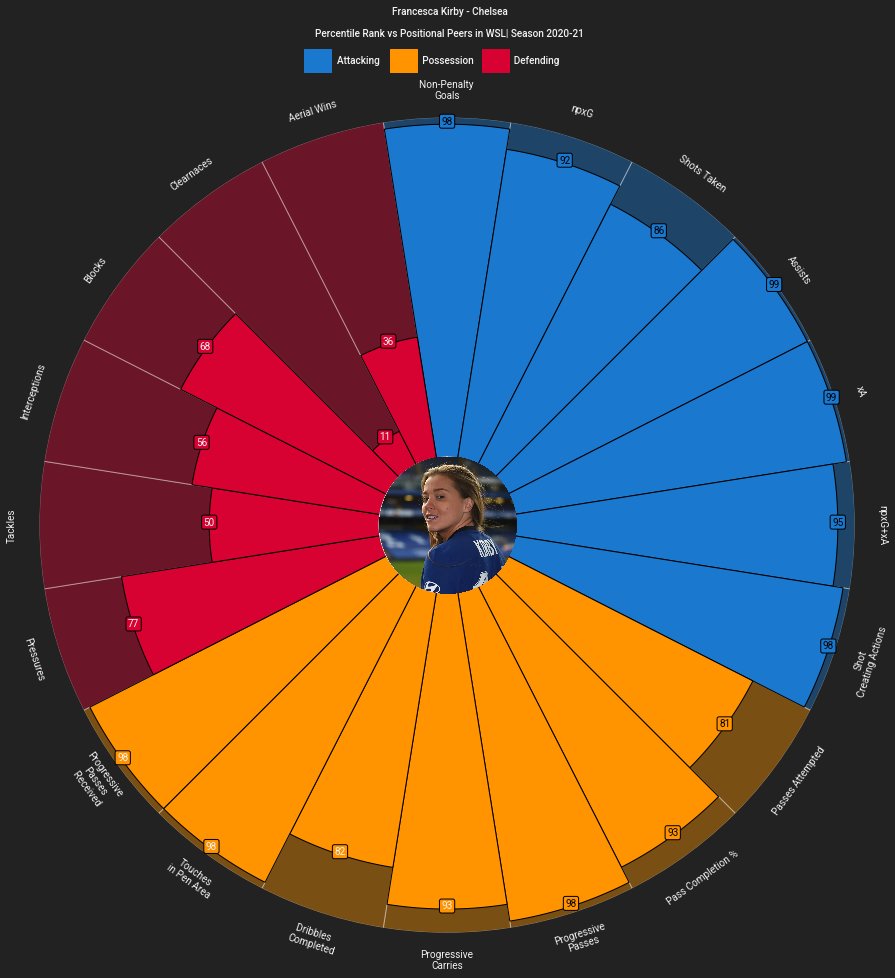

In [9]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [98,92,86,99,99,95,98,81,93,98,93,82,98,98,77,50,56,68,11,36]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Francesca Kirby - Chelsea", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [10]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [11]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [12]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [13]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [14]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [15]:
fran_values =  [1.04,0.72,1.76,0.47,0.57,1.04,0.47]

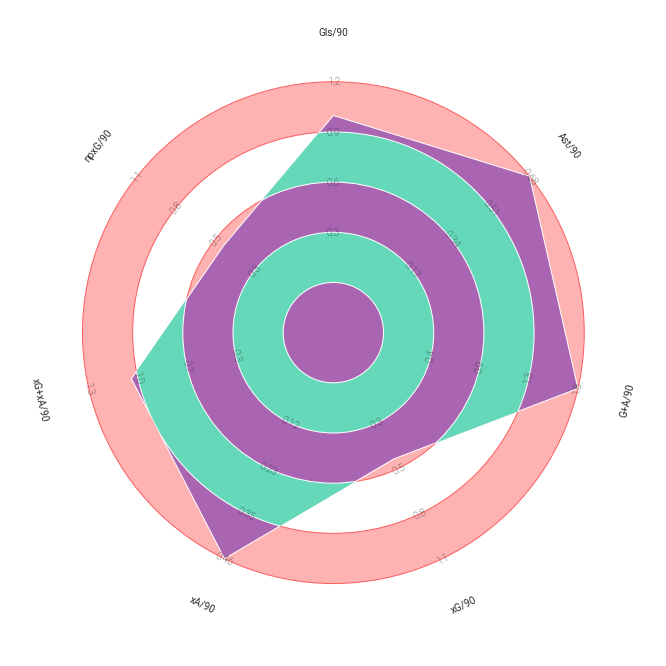

In [16]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(fran_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

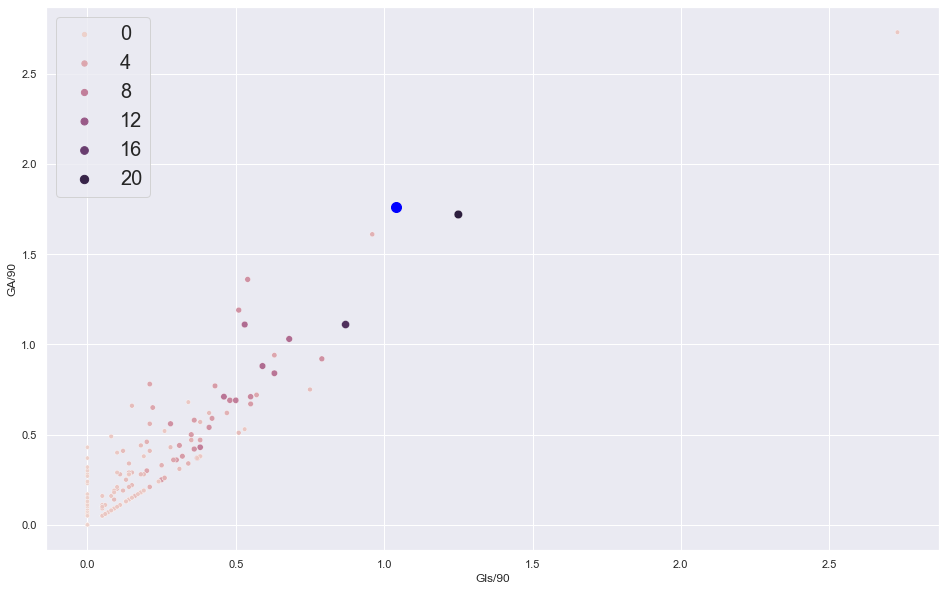

In [85]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(1.04,1.76, color="blue",s=100)
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

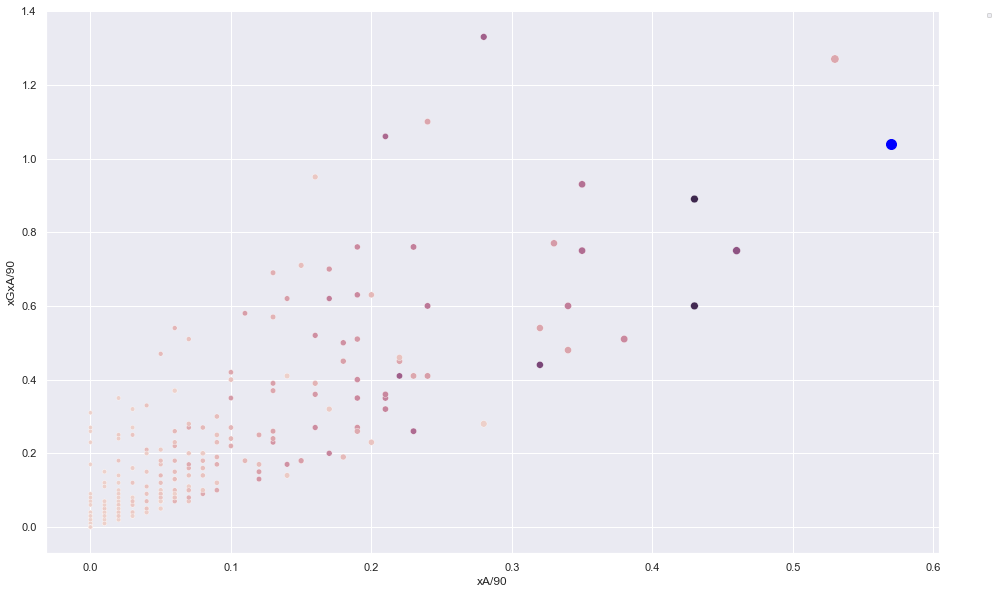

In [84]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xA/90", y="xGxA/90", hue="xA", size="xA/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.57,1.04, color="blue",s=100)
plt.legend(handles=[g], title='', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='xx-small')


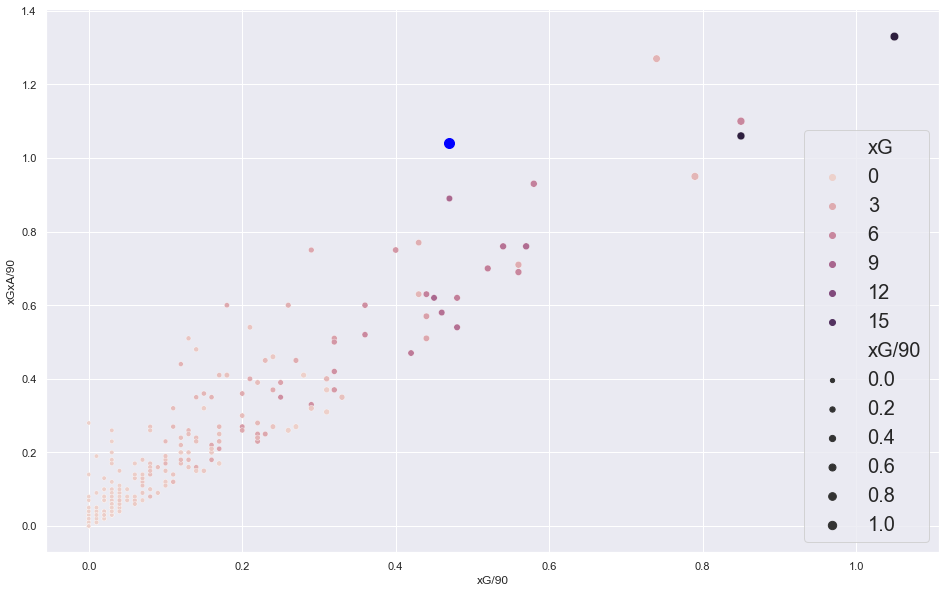

In [83]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.47,1.04, color="blue",s=100)


In [20]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [21]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [71]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Fran Shotmaps.csv',encoding="latin1")

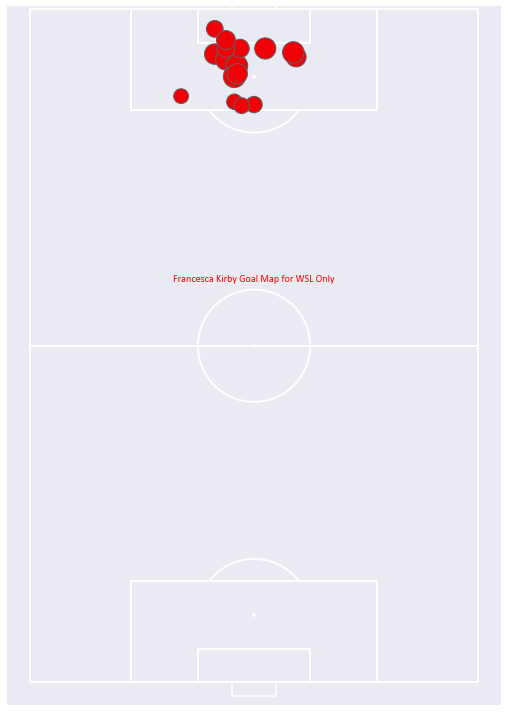

In [73]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1000) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#EF0107',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Francesca Kirby Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




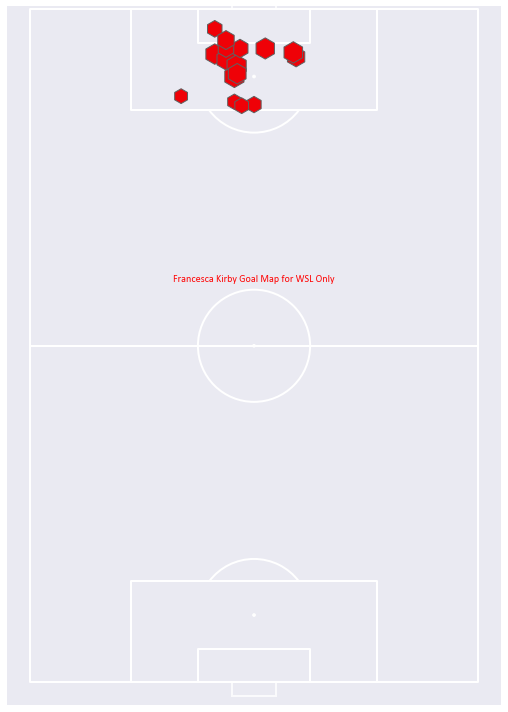

In [74]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1000) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#EF0107',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='h',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Francesca Kirby Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')





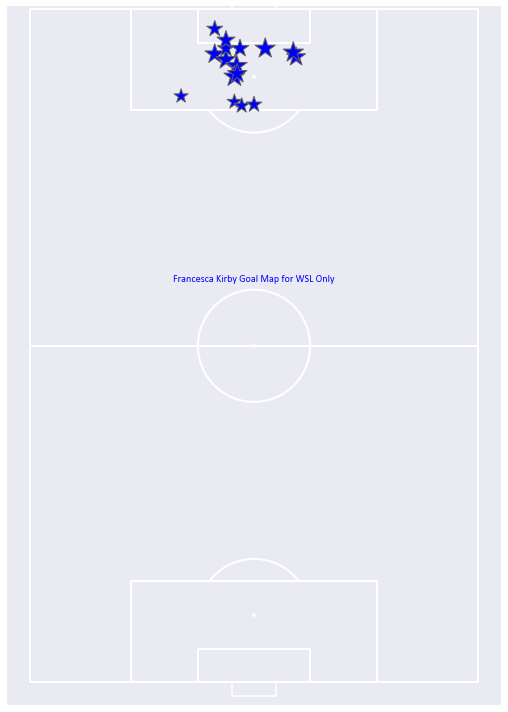

In [82]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1000) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='blue',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='*',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Francesca Kirby Goal Map for WSL Only',
              size=10000,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='blue',
              va='center', ha='center')




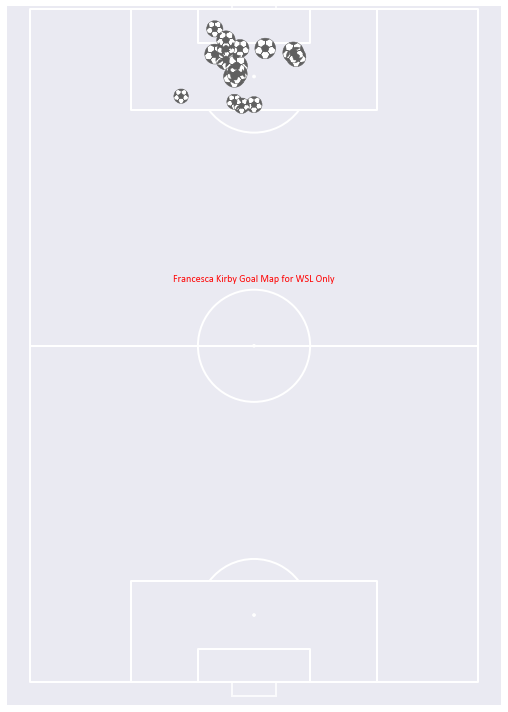

In [77]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1000) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Francesca Kirby Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


